# The credit fraud dataset - Synthesizing the minority class
In this notebook it's presented a practical exercise of how to use the avilable library GANs to synthesize tabular data.
For the purpose of this exercise it has been used the Credit Fraud dataset from Kaggle, that you can find here:https: //www.kaggle.com/mlg-ulb/creditcardfraud

In [29]:
#Install pysynthetic lib
#!pip install git+https://github.com/ghoshmithun/pysynthetic.git

In [1]:
import importlib
import sys  

import pandas as pd
import numpy as np
import sklearn.cluster as cluster
import matplotlib.pyplot as plt

#If you install the above package then you should be able to use
# from pysynthetic.synthesizers.regular import VanilllaGAN
# from pysynthetic.preprocessing.regular.credit_fraud import *

#If you have installation problem. Be on the root directory so that synthesizers are found

from synthesizers.regular import WGAN_GP
from preprocessing.regular.credit_fraud import *

model = WGAN_GP

In [2]:
#Read the original data and have it preprocessed
data = pd.read_csv('C:/Users/mithu/Desktop/synthetic_data/csv/creditcard.csv', index_col=[0])

In [3]:
data_cols = list(data.columns[ data.columns != 'Class' ])
label_cols = ['Class']

print('Dataset columns: {}'.format(data_cols))
sorted_cols = ['V14', 'V4', 'V10', 'V17', 'V12', 'V26', 'Amount', 'V21', 'V8', 'V11', 'V7', 'V28', 'V19', 'V3', 'V22', 'V6', 'V20', 'V27', 'V16', 'V13', 'V25', 'V24', 'V18', 'V2', 'V1', 'V5', 'V15', 'V9', 'V23', 'Class']
processed_data = data[ sorted_cols ].copy()

Dataset columns: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [4]:
#Before training the GAN do not forget to apply the required data transformations
#To ease here we've applied a PowerTransformation
data = transformations(data)

#For the purpose of this example we will only synthesize the minority class
train_data = data.loc[ data['Class']==1 ].copy()

print("Dataset info: Number of records - {} Number of varibles - {}".format(train_data.shape[0], train_data.shape[1]))

algorithm = cluster.KMeans
args, kwds = (), {'n_clusters':2, 'random_state':0}
labels = algorithm(*args, **kwds).fit_predict(train_data[ data_cols ])

print( pd.DataFrame( [ [np.sum(labels==i)] for i in np.unique(labels) ], columns=['count'], index=np.unique(labels) ) )

fraud_w_classes = train_data.copy()
fraud_w_classes['Class'] = labels

Dataset info: Number of records - 492 Number of varibles - 30
   count
0    384
1    108


# GAN training

Below you can try to train your own generators using the available GANs architectures. You can train it either with labels (created using KMeans) or with no labels at all. 

Remeber that for this exercise in particular we've decided to synthesize only the minority class from the Credit Fraud dataset.

In [5]:
#Define the GAN and training parameters
noise_dim = 32
dim = 128
batch_size = 128

log_step = 100
epochs = 50000+1
learning_rate = 5e-4
beta_1 = 0.5
beta_2 = 0.9
models_dir = 'C:\\Users\\mithu\\Desktop\\synthetic_data\\creditcard\\save\\gan\\cache'

train_sample = fraud_w_classes.copy().reset_index(drop=True)
train_sample = pd.get_dummies(train_sample, columns=['Class'], prefix='Class', drop_first=True)
label_cols = [ i for i in train_sample.columns if 'Class' in i ]
data_cols = [ i for i in train_sample.columns if i not in label_cols ]
train_sample[ data_cols ] = train_sample[ data_cols ] / 10 # scale to random noise size, one less thing to learn
train_no_label = train_sample[ data_cols ]

gan_args = [batch_size, learning_rate, beta_1, beta_2, noise_dim, train_sample.shape[1], dim]
train_args = ['', epochs, log_step]

In [7]:
#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args,n_critic=2)
synthesizer.train(train_sample, train_args)

  0%|                                                                              | 9/50001 [00:01<1:58:53,  7.01it/s]

Iteration: 0 | disc_loss: 9.160123825073242 | gen_loss: 0.004804519470781088
Iteration: 1 | disc_loss: 4.652366638183594 | gen_loss: 0.002050163922831416
Iteration: 2 | disc_loss: 2.4268691539764404 | gen_loss: 0.0027907283511012793
Iteration: 3 | disc_loss: 1.505663275718689 | gen_loss: 0.006096570752561092
Iteration: 4 | disc_loss: 0.9853861331939697 | gen_loss: 0.0041528018191456795
Iteration: 5 | disc_loss: 0.6785063147544861 | gen_loss: 0.014552537351846695
Iteration: 6 | disc_loss: 0.4630875587463379 | gen_loss: 0.01731620356440544
Iteration: 7 | disc_loss: 0.227067232131958 | gen_loss: 0.018994564190506935
Iteration: 8 | disc_loss: 0.04752298444509506 | gen_loss: 0.03283858299255371
Iteration: 9 | disc_loss: 0.049387700855731964 | gen_loss: 0.04004453122615814
Iteration: 10 | disc_loss: 0.005760751664638519 | gen_loss: 0.055910222232341766
Iteration: 11 | disc_loss: -0.05406012013554573 | gen_loss: 0.07059100270271301
Iteration: 12 | disc_loss: -0.05801405757665634 | gen_loss: 0

  0%|                                                                               | 26/50001 [00:01<34:55, 23.85it/s]


Iteration: 13 | disc_loss: -0.049241796135902405 | gen_loss: 0.05442184954881668
Iteration: 14 | disc_loss: -0.04934149980545044 | gen_loss: 0.05021373927593231
Iteration: 15 | disc_loss: -0.0251160915941 | gen_loss: 0.03360157832503319
Iteration: 16 | disc_loss: -0.012357059866189957 | gen_loss: 0.02117753028869629
Iteration: 17 | disc_loss: -0.04450671002268791 | gen_loss: 0.02775774709880352
Iteration: 18 | disc_loss: -0.0538129098713398 | gen_loss: 0.030186999589204788
Iteration: 19 | disc_loss: -0.05142692103981972 | gen_loss: 0.030208434909582138
Iteration: 20 | disc_loss: -0.051009535789489746 | gen_loss: 0.029680948704481125
Iteration: 21 | disc_loss: -0.01897580549120903 | gen_loss: 0.033341601490974426
Iteration: 22 | disc_loss: -0.015413298271596432 | gen_loss: 0.005029504187405109
Iteration: 23 | disc_loss: -0.03902400657534599 | gen_loss: 0.0024110516533255577
Iteration: 24 | disc_loss: 0.004794124513864517 | gen_loss: 0.03577404096722603
Iteration: 25 | disc_loss: -0.033

  0%|                                                                               | 33/50001 [00:02<27:23, 30.41it/s]


Iteration: 28 | disc_loss: -0.03623552620410919 | gen_loss: 0.00818964559584856
Iteration: 29 | disc_loss: -0.05794930458068848 | gen_loss: 0.010820956900715828
Iteration: 30 | disc_loss: -0.05272376909852028 | gen_loss: 0.016307223588228226
Iteration: 31 | disc_loss: 0.03560742735862732 | gen_loss: 0.017375174909830093
Iteration: 32 | disc_loss: -0.0023505166172981262 | gen_loss: 0.006263126153498888
Iteration: 33 | disc_loss: -0.046298231929540634 | gen_loss: 0.005301033612340689
Iteration: 34 | disc_loss: -0.0467042550444603 | gen_loss: 0.04796486720442772
Iteration: 35 | disc_loss: 0.0002964884042739868 | gen_loss: -0.001326828496530652
Iteration: 36 | disc_loss: 0.02280234545469284 | gen_loss: -0.0038903651293367147
Iteration: 37 | disc_loss: -0.017272261902689934 | gen_loss: -4.711103974841535e-05
Iteration: 38 | disc_loss: -0.04490310698747635 | gen_loss: 0.011605734005570412
Iteration: 39 | disc_loss: 0.03604907542467117 | gen_loss: 0.010396214202046394
Iteration: 40 | disc_lo

  0%|                                                                               | 49/50001 [00:02<17:43, 46.97it/s]


Iteration: 41 | disc_loss: -0.05176640674471855 | gen_loss: 0.0033815111964941025
Iteration: 42 | disc_loss: -0.056922975927591324 | gen_loss: 0.005966498516499996
Iteration: 43 | disc_loss: -0.040789540857076645 | gen_loss: 0.0008066900190897286
Iteration: 44 | disc_loss: -0.041991882026195526 | gen_loss: -0.003562888829037547
Iteration: 45 | disc_loss: -0.03435248136520386 | gen_loss: -0.001194932498037815
Iteration: 46 | disc_loss: -0.03142287954688072 | gen_loss: 0.00025974211166612804
Iteration: 47 | disc_loss: -0.05639014393091202 | gen_loss: -0.00646244315430522
Iteration: 48 | disc_loss: -0.035651855170726776 | gen_loss: 0.004527547862380743
Iteration: 49 | disc_loss: -0.03767850250005722 | gen_loss: -0.006688128225505352
Iteration: 50 | disc_loss: -0.04230964183807373 | gen_loss: 0.0007749457145109773
Iteration: 51 | disc_loss: -0.037762351334095 | gen_loss: 0.0005409623263403773
Iteration: 52 | disc_loss: -0.024429388344287872 | gen_loss: -0.00012451258953660727
Iteration: 5

  0%|                                                                               | 66/50001 [00:02<13:49, 60.17it/s]


Iteration: 56 | disc_loss: -0.032509807497262955 | gen_loss: -0.03420935943722725
Iteration: 57 | disc_loss: -0.045700252056121826 | gen_loss: -0.014098381623625755
Iteration: 58 | disc_loss: -0.037637971341609955 | gen_loss: -0.01827661693096161
Iteration: 59 | disc_loss: -0.051234401762485504 | gen_loss: -0.018939722329378128
Iteration: 60 | disc_loss: -0.047289371490478516 | gen_loss: -0.009488973766565323
Iteration: 61 | disc_loss: -0.03135383874177933 | gen_loss: -0.014787042513489723
Iteration: 62 | disc_loss: -0.01562098041176796 | gen_loss: -0.02326183393597603
Iteration: 63 | disc_loss: -0.03326910734176636 | gen_loss: -0.009838080033659935
Iteration: 64 | disc_loss: -0.006053358316421509 | gen_loss: -0.014965802431106567
Iteration: 65 | disc_loss: -0.03349105641245842 | gen_loss: -0.014369276352226734
Iteration: 66 | disc_loss: 0.005823168903589249 | gen_loss: -0.01627051830291748
Iteration: 67 | disc_loss: 0.03343771770596504 | gen_loss: 0.018898632377386093
Iteration: 68 |

  0%|▏                                                                              | 82/50001 [00:02<12:36, 66.01it/s]


Iteration: 69 | disc_loss: 0.016182515770196915 | gen_loss: -0.02113446593284607
Iteration: 70 | disc_loss: -0.04771726578474045 | gen_loss: 0.003915875684469938
Iteration: 71 | disc_loss: -0.020669780671596527 | gen_loss: -0.04883389547467232
Iteration: 72 | disc_loss: -0.02382415160536766 | gen_loss: -0.03775189071893692
Iteration: 73 | disc_loss: 0.05980173870921135 | gen_loss: -0.016855860128998756
Iteration: 74 | disc_loss: -0.04287749528884888 | gen_loss: 0.00227115279994905
Iteration: 75 | disc_loss: 0.017365455627441406 | gen_loss: -0.01776156760752201
Iteration: 76 | disc_loss: -0.001611407846212387 | gen_loss: -0.030459150671958923
Iteration: 77 | disc_loss: -0.044210195541381836 | gen_loss: -0.019141457974910736
Iteration: 78 | disc_loss: -0.01434829831123352 | gen_loss: -0.04967565834522247
Iteration: 79 | disc_loss: -0.036162443459033966 | gen_loss: -0.058260608464479446
Iteration: 80 | disc_loss: -0.030813058838248253 | gen_loss: -0.056950781494379044
Iteration: 81 | dis

  0%|▏                                                                              | 90/50001 [00:02<12:31, 66.43it/s]


Iteration: 84 | disc_loss: -0.024656329303979874 | gen_loss: -0.026476401835680008
Iteration: 85 | disc_loss: -0.04145870730280876 | gen_loss: -0.021641293540596962
Iteration: 86 | disc_loss: -0.01649804785847664 | gen_loss: -0.039387211203575134
Iteration: 87 | disc_loss: -0.05147213861346245 | gen_loss: -0.027800053358078003
Iteration: 88 | disc_loss: -0.03141012787818909 | gen_loss: -0.03703749179840088
Iteration: 89 | disc_loss: 0.10109531879425049 | gen_loss: -0.03783201798796654
Iteration: 90 | disc_loss: -0.025687744840979576 | gen_loss: -0.03492589294910431
Iteration: 91 | disc_loss: -0.03551506996154785 | gen_loss: -0.024455059319734573
Iteration: 92 | disc_loss: -0.007409457117319107 | gen_loss: 0.004811566323041916
Iteration: 93 | disc_loss: 0.031122587621212006 | gen_loss: -0.025734417140483856
Iteration: 94 | disc_loss: -0.025836337357759476 | gen_loss: -0.04187389090657234
Iteration: 95 | disc_loss: -0.002054009586572647 | gen_loss: 8.631893433630466e-05
Iteration: 96 | 

  0%|▏                                                                             | 106/50001 [00:03<13:09, 63.21it/s]


Iteration: 97 | disc_loss: -0.043943438678979874 | gen_loss: 0.00131696998141706
Iteration: 98 | disc_loss: -0.0432480163872242 | gen_loss: -0.010213074274361134
Iteration: 99 | disc_loss: -0.030339840799570084 | gen_loss: -0.011995800770819187
Iteration: 100 | disc_loss: -0.002129890024662018 | gen_loss: -0.016709672287106514
Iteration: 101 | disc_loss: 0.014888748526573181 | gen_loss: -0.016514237970113754
Iteration: 102 | disc_loss: 0.003315836191177368 | gen_loss: -0.019713645800948143
Iteration: 103 | disc_loss: -0.039902620017528534 | gen_loss: -0.011178803630173206
Iteration: 104 | disc_loss: -0.04099167883396149 | gen_loss: 0.003086936194449663
Iteration: 105 | disc_loss: 0.024579748511314392 | gen_loss: -0.004371318966150284
Iteration: 106 | disc_loss: -0.043787721544504166 | gen_loss: -0.010874968022108078

  0%|▏                                                                             | 113/50001 [00:03<12:59, 64.00it/s]


Iteration: 107 | disc_loss: -0.04159599542617798 | gen_loss: -0.022950900718569756
Iteration: 108 | disc_loss: 0.10367695242166519 | gen_loss: -0.012616145424544811
Iteration: 109 | disc_loss: -0.04332678020000458 | gen_loss: 0.019106872379779816
Iteration: 110 | disc_loss: -0.024895409122109413 | gen_loss: -0.02551465481519699
Iteration: 111 | disc_loss: -0.031317710876464844 | gen_loss: -0.029104076325893402
Iteration: 112 | disc_loss: -0.02573409676551819 | gen_loss: -0.02303130552172661
Iteration: 113 | disc_loss: -0.027757955715060234 | gen_loss: -0.014732291921973228
Iteration: 114 | disc_loss: -0.004400886595249176 | gen_loss: -0.012278316542506218
Iteration: 115 | disc_loss: -0.03338087722659111 | gen_loss: -0.01857832446694374
Iteration: 116 | disc_loss: 0.14635589718818665 | gen_loss: -0.010522551834583282
Iteration: 117 | disc_loss: -0.04641224071383476 | gen_loss: 0.0054040588438510895
Iteration: 118 | disc_loss: -0.04384498670697212 | gen_loss: -0.0006994128925725818
Iter

  0%|▏                                                                             | 130/50001 [00:03<11:39, 71.26it/s]


Iteration: 122 | disc_loss: -0.03916666656732559 | gen_loss: -0.01284736953675747
Iteration: 123 | disc_loss: -0.0468209870159626 | gen_loss: 0.008871879428625107
Iteration: 124 | disc_loss: 0.03331783413887024 | gen_loss: 0.006812368985265493
Iteration: 125 | disc_loss: -0.03665706142783165 | gen_loss: 0.01599595509469509
Iteration: 126 | disc_loss: 0.026894591748714447 | gen_loss: -0.0023583255242556334
Iteration: 127 | disc_loss: -0.04711027815937996 | gen_loss: -0.00713479146361351
Iteration: 128 | disc_loss: -0.03478464484214783 | gen_loss: -0.009022507816553116
Iteration: 129 | disc_loss: -0.010293688625097275 | gen_loss: -0.0038347847294062376
Iteration: 130 | disc_loss: -0.04574638232588768 | gen_loss: -0.007464758586138487
Iteration: 131 | disc_loss: -0.01704319939017296 | gen_loss: 0.035384371876716614
Iteration: 132 | disc_loss: 0.01609235629439354 | gen_loss: 0.0048483433201909065
Iteration: 133 | disc_loss: -0.040923137217760086 | gen_loss: -0.0015552876284345984
Iteratio

  0%|▏                                                                             | 147/50001 [00:03<11:03, 75.18it/s]


Iteration: 136 | disc_loss: -0.03463638946413994 | gen_loss: 0.006909371353685856
Iteration: 137 | disc_loss: 0.0016522780060768127 | gen_loss: 0.0037389625795185566
Iteration: 138 | disc_loss: 0.013655923306941986 | gen_loss: -0.012438856065273285
Iteration: 139 | disc_loss: -0.02196604572236538 | gen_loss: 0.03565079718828201
Iteration: 140 | disc_loss: -0.03148656710982323 | gen_loss: 0.030570700764656067
Iteration: 141 | disc_loss: 0.017483413219451904 | gen_loss: 0.019165940582752228
Iteration: 142 | disc_loss: -0.04166135936975479 | gen_loss: 0.010654118843376637
Iteration: 143 | disc_loss: -0.031113777309656143 | gen_loss: 0.013585533946752548
Iteration: 144 | disc_loss: -0.029537489637732506 | gen_loss: 0.012499713338911533
Iteration: 145 | disc_loss: 0.026619113981723785 | gen_loss: 0.02401237189769745
Iteration: 146 | disc_loss: -0.014713877812027931 | gen_loss: 0.02379167452454567
Iteration: 147 | disc_loss: -0.022146444767713547 | gen_loss: 0.012616118416190147
Iteration: 

  0%|▎                                                                             | 164/50001 [00:03<10:43, 77.43it/s]


Iteration: 151 | disc_loss: 0.03537840023636818 | gen_loss: 0.02132362499833107
Iteration: 152 | disc_loss: -0.03245212510228157 | gen_loss: 0.011235528625547886
Iteration: 153 | disc_loss: -0.01473536528646946 | gen_loss: 0.022140607237815857
Iteration: 154 | disc_loss: -0.02513822540640831 | gen_loss: 0.023607585579156876
Iteration: 155 | disc_loss: -0.015049939975142479 | gen_loss: 0.03677015006542206
Iteration: 156 | disc_loss: -0.04829368740320206 | gen_loss: 0.037564925849437714
Iteration: 157 | disc_loss: -0.047151047736406326 | gen_loss: 0.0419207438826561
Iteration: 158 | disc_loss: 0.0182783342897892 | gen_loss: 0.009287111461162567
Iteration: 159 | disc_loss: 0.16852742433547974 | gen_loss: 0.034536588937044144
Iteration: 160 | disc_loss: 0.20348970592021942 | gen_loss: 0.03213152289390564
Iteration: 161 | disc_loss: 0.024495236575603485 | gen_loss: 0.020746171474456787
Iteration: 162 | disc_loss: -0.024563560262322426 | gen_loss: 0.03360745310783386
Iteration: 163 | disc_l

  0%|▎                                                                             | 180/50001 [00:04<10:58, 75.64it/s]

Iteration: 166 | disc_loss: -0.005176950246095657 | gen_loss: 0.037743549793958664
Iteration: 167 | disc_loss: -0.04262889549136162 | gen_loss: 0.04114195331931114
Iteration: 168 | disc_loss: 0.02319258451461792 | gen_loss: 0.03712299466133118
Iteration: 169 | disc_loss: -0.0008678436279296875 | gen_loss: 0.032926931977272034
Iteration: 170 | disc_loss: -0.019649025052785873 | gen_loss: 0.025391511619091034
Iteration: 171 | disc_loss: -0.022790897637605667 | gen_loss: 0.024739695712924004
Iteration: 172 | disc_loss: -0.0022291280329227448 | gen_loss: 0.03278966620564461
Iteration: 173 | disc_loss: 0.025177232921123505 | gen_loss: 0.047017037868499756
Iteration: 174 | disc_loss: -0.009400896728038788 | gen_loss: 0.03864990919828415
Iteration: 175 | disc_loss: -0.022770818322896957 | gen_loss: 0.04279707372188568
Iteration: 176 | disc_loss: -0.03931831568479538 | gen_loss: 0.05838737636804581
Iteration: 177 | disc_loss: -0.03628774732351303 | gen_loss: 0.042180947959423065
Iteration: 178

  0%|▎                                                                             | 188/50001 [00:04<11:11, 74.21it/s]


Iteration: 181 | disc_loss: -0.011050274595618248 | gen_loss: 0.05591209977865219
Iteration: 182 | disc_loss: -0.038559455424547195 | gen_loss: 0.04982651770114899
Iteration: 183 | disc_loss: 0.1751282513141632 | gen_loss: 0.04988742992281914
Iteration: 184 | disc_loss: -0.01627177558839321 | gen_loss: 0.04253922775387764
Iteration: 185 | disc_loss: -0.023482000455260277 | gen_loss: 0.0365133099257946
Iteration: 186 | disc_loss: -0.012717917561531067 | gen_loss: 0.032607778906822205
Iteration: 187 | disc_loss: -0.0445265918970108 | gen_loss: 0.02740488387644291
Iteration: 188 | disc_loss: 0.08393821120262146 | gen_loss: 0.05202949047088623
Iteration: 189 | disc_loss: 0.020584337413311005 | gen_loss: 0.040199704468250275
Iteration: 190 | disc_loss: -0.03990199416875839 | gen_loss: 0.03539440408349037
Iteration: 191 | disc_loss: 0.062009818851947784 | gen_loss: 0.06849586963653564
Iteration: 192 | disc_loss: -0.03356179967522621 | gen_loss: 0.0577859953045845
Iteration: 193 | disc_loss:

  0%|▎                                                                             | 204/50001 [00:04<12:20, 67.27it/s]


Iteration: 195 | disc_loss: -0.0461675226688385 | gen_loss: 0.027380717918276787
Iteration: 196 | disc_loss: 0.05003071576356888 | gen_loss: 0.06347298622131348
Iteration: 197 | disc_loss: -0.03257298469543457 | gen_loss: 0.06600021570920944
Iteration: 198 | disc_loss: 0.006364010274410248 | gen_loss: 0.054025594145059586
Iteration: 199 | disc_loss: 0.015401992946863174 | gen_loss: 0.05241207405924797
Iteration: 200 | disc_loss: -0.036119893193244934 | gen_loss: 0.03493797034025192
Iteration: 201 | disc_loss: -0.038159068673849106 | gen_loss: 0.0353316105902195
Iteration: 202 | disc_loss: -0.016084827482700348 | gen_loss: 0.030508652329444885
Iteration: 203 | disc_loss: 0.021337691694498062 | gen_loss: 0.04003232717514038
Iteration: 204 | disc_loss: 0.01258501410484314 | gen_loss: 0.04202919453382492
Iteration: 205 | disc_loss: -0.03384135663509369 | gen_loss: 0.049192070960998535

  0%|▎                                                                             | 211/50001 [00:04<12:27, 66.63it/s]


Iteration: 206 | disc_loss: -0.007092807441949844 | gen_loss: 0.03763917088508606
Iteration: 207 | disc_loss: -0.036029279232025146 | gen_loss: 0.031025534495711327
Iteration: 208 | disc_loss: -0.03018428012728691 | gen_loss: 0.032151877880096436
Iteration: 209 | disc_loss: 0.0066209957003593445 | gen_loss: 0.033258017152547836
Iteration: 210 | disc_loss: -0.03083607740700245 | gen_loss: 0.03236338496208191
Iteration: 211 | disc_loss: -0.044115182012319565 | gen_loss: 0.023757891729474068
Iteration: 212 | disc_loss: 0.09910301864147186 | gen_loss: 0.05131746083498001
Iteration: 213 | disc_loss: -0.032928407192230225 | gen_loss: 0.03850090503692627
Iteration: 214 | disc_loss: -0.035752128809690475 | gen_loss: 0.02922404557466507
Iteration: 215 | disc_loss: -0.011921584606170654 | gen_loss: 0.03566805273294449
Iteration: 216 | disc_loss: -0.018490824848413467 | gen_loss: 0.0388229563832283
Iteration: 217 | disc_loss: -0.0440082773566246 | gen_loss: 0.04608777165412903
Iteration: 218 | d

  0%|▎                                                                             | 227/50001 [00:04<11:53, 69.80it/s]


Iteration: 219 | disc_loss: -0.03713146597146988 | gen_loss: 0.03531189262866974
Iteration: 220 | disc_loss: -0.035678569227457047 | gen_loss: 0.032006051391363144
Iteration: 221 | disc_loss: 0.13508881628513336 | gen_loss: 0.030067315325140953
Iteration: 222 | disc_loss: -0.018151389434933662 | gen_loss: 0.02778780087828636
Iteration: 223 | disc_loss: 0.005666125565767288 | gen_loss: 0.02831357903778553
Iteration: 224 | disc_loss: 0.009208835661411285 | gen_loss: 0.030687231570482254
Iteration: 225 | disc_loss: -0.012334633618593216 | gen_loss: 0.029810672625899315
Iteration: 226 | disc_loss: -0.02518564462661743 | gen_loss: 0.031427547335624695
Iteration: 227 | disc_loss: 0.10173913091421127 | gen_loss: 0.038910944014787674
Iteration: 228 | disc_loss: -0.03543335571885109 | gen_loss: 0.04108484834432602
Iteration: 229 | disc_loss: 0.006905190646648407 | gen_loss: 0.049145765602588654
Iteration: 230 | disc_loss: -0.040435973554849625 | gen_loss: 0.03644837811589241
Iteration: 231 | d

  0%|▍                                                                             | 243/50001 [00:04<11:39, 71.12it/s]


Iteration: 233 | disc_loss: 0.009848769754171371 | gen_loss: 0.04113970696926117
Iteration: 234 | disc_loss: 0.2890133261680603 | gen_loss: 0.036141566932201385
Iteration: 235 | disc_loss: -0.029878124594688416 | gen_loss: 0.04817088693380356
Iteration: 236 | disc_loss: -0.024463050067424774 | gen_loss: 0.046216849237680435
Iteration: 237 | disc_loss: -0.026053480803966522 | gen_loss: 0.04575921967625618
Iteration: 238 | disc_loss: -0.018141478300094604 | gen_loss: 0.040756210684776306
Iteration: 239 | disc_loss: -0.03843580186367035 | gen_loss: 0.037707097828388214
Iteration: 240 | disc_loss: -0.019759340211749077 | gen_loss: 0.030327755957841873
Iteration: 241 | disc_loss: -0.005713019520044327 | gen_loss: 0.0385262556374073
Iteration: 242 | disc_loss: 0.07159250974655151 | gen_loss: 0.03559035062789917
Iteration: 243 | disc_loss: 0.0005469396710395813 | gen_loss: 0.03745047375559807
Iteration: 244 | disc_loss: -0.03773010894656181 | gen_loss: 0.02374311164021492
Iteration: 245 | di

  1%|▍                                                                             | 251/50001 [00:05<12:02, 68.87it/s]


Iteration: 246 | disc_loss: -0.018695004284381866 | gen_loss: 0.016852423548698425
Iteration: 247 | disc_loss: -0.024599697440862656 | gen_loss: 0.018561404198408127
Iteration: 248 | disc_loss: 0.00835796445608139 | gen_loss: 0.023555666208267212
Iteration: 249 | disc_loss: 0.3149513006210327 | gen_loss: 0.04001205787062645
Iteration: 250 | disc_loss: -0.01863986998796463 | gen_loss: 0.03461604565382004
Iteration: 251 | disc_loss: -0.028670338913798332 | gen_loss: 0.020376909524202347
Iteration: 252 | disc_loss: -0.027258766815066338 | gen_loss: 0.012848193757236004
Iteration: 253 | disc_loss: -7.405132055282593e-05 | gen_loss: 0.011076213791966438
Iteration: 254 | disc_loss: -0.00964159145951271 | gen_loss: 0.06440341472625732
Iteration: 255 | disc_loss: -0.011559968814253807 | gen_loss: 0.03941534459590912
Iteration: 256 | disc_loss: 0.010200940072536469 | gen_loss: 0.02799651026725769
Iteration: 257 | disc_loss: -0.042025525122880936 | gen_loss: 0.02282334677875042

  1%|▍                                                                             | 265/50001 [00:05<12:07, 68.33it/s]


Iteration: 258 | disc_loss: -0.026456207036972046 | gen_loss: 0.035438474267721176
Iteration: 259 | disc_loss: -0.023894065991044044 | gen_loss: 0.04434242099523544
Iteration: 260 | disc_loss: -0.023433765396475792 | gen_loss: 0.052550509572029114
Iteration: 261 | disc_loss: -0.037777628749608994 | gen_loss: 0.05608133599162102
Iteration: 262 | disc_loss: -0.016391724348068237 | gen_loss: 0.04871443286538124
Iteration: 263 | disc_loss: -0.03594476729631424 | gen_loss: 0.04400518536567688
Iteration: 264 | disc_loss: -0.025807935744524002 | gen_loss: 0.046394795179367065
Iteration: 265 | disc_loss: -0.03489066660404205 | gen_loss: 0.04831539839506149
Iteration: 266 | disc_loss: -0.019550224766135216 | gen_loss: 0.039272624999284744
Iteration: 267 | disc_loss: -0.038282401859760284 | gen_loss: 0.043618954718112946
Iteration: 268 | disc_loss: -0.030114667490124702 | gen_loss: 0.03865853324532509
Iteration: 269 | disc_loss: 0.016863569617271423 | gen_loss: 0.038585834205150604
Iteration: 2

  1%|▍                                                                             | 279/50001 [00:05<12:01, 68.90it/s]


Iteration: 271 | disc_loss: -0.014343930408358574 | gen_loss: 0.028772655874490738
Iteration: 272 | disc_loss: -0.017589852213859558 | gen_loss: 0.03640786558389664
Iteration: 273 | disc_loss: 0.1030413806438446 | gen_loss: 0.04122031107544899
Iteration: 274 | disc_loss: 0.03873024135828018 | gen_loss: 0.039899859577417374
Iteration: 275 | disc_loss: -0.034373145550489426 | gen_loss: 0.040408458560705185
Iteration: 276 | disc_loss: -0.023616671562194824 | gen_loss: 0.033673547208309174
Iteration: 277 | disc_loss: -0.029739368706941605 | gen_loss: 0.02353747747838497
Iteration: 278 | disc_loss: 0.07438643276691437 | gen_loss: 0.02698916383087635
Iteration: 279 | disc_loss: -0.03481147438287735 | gen_loss: 0.03791281580924988
Iteration: 280 | disc_loss: -0.02809790149331093 | gen_loss: 0.04090996831655502
Iteration: 281 | disc_loss: -0.038968462496995926 | gen_loss: 0.06188464164733887
Iteration: 282 | disc_loss: 0.013728123158216476 | gen_loss: 0.03606027737259865
Iteration: 283 | disc

  1%|▍                                                                             | 293/50001 [00:05<12:28, 66.43it/s]


Iteration: 284 | disc_loss: 0.12168044596910477 | gen_loss: 0.06605229526758194
Iteration: 285 | disc_loss: -0.02744888700544834 | gen_loss: 0.0652914047241211
Iteration: 286 | disc_loss: -0.027983857318758965 | gen_loss: 0.052364498376846313
Iteration: 287 | disc_loss: -0.023457154631614685 | gen_loss: 0.05885642394423485
Iteration: 288 | disc_loss: 0.08797655999660492 | gen_loss: 0.06317728012800217
Iteration: 289 | disc_loss: -0.028998592868447304 | gen_loss: 0.0632544681429863
Iteration: 290 | disc_loss: 0.00408942811191082 | gen_loss: 0.0463729053735733
Iteration: 291 | disc_loss: -0.01865977607667446 | gen_loss: 0.036308854818344116
Iteration: 292 | disc_loss: -0.02203523740172386 | gen_loss: 0.05704689770936966
Iteration: 293 | disc_loss: -0.025528747588396072 | gen_loss: 0.0557577945291996
Iteration: 294 | disc_loss: -0.013840317726135254 | gen_loss: 0.050578124821186066
Iteration: 295 | disc_loss: -0.03126315772533417 | gen_loss: 0.04885174706578255

  1%|▍                                                                             | 300/50001 [00:05<12:30, 66.18it/s]


Iteration: 296 | disc_loss: -0.030381465330719948 | gen_loss: 0.05111277103424072
Iteration: 297 | disc_loss: -0.03592664375901222 | gen_loss: 0.05455957353115082
Iteration: 298 | disc_loss: -0.033874042332172394 | gen_loss: 0.050489917397499084
Iteration: 299 | disc_loss: -0.01600598730146885 | gen_loss: 0.03430820256471634
Iteration: 300 | disc_loss: -0.03134103864431381 | gen_loss: 0.06777004897594452
Iteration: 301 | disc_loss: -0.02890193648636341 | gen_loss: 0.0931166261434555
Iteration: 302 | disc_loss: -0.022574881091713905 | gen_loss: 0.0661945641040802
Iteration: 303 | disc_loss: 0.06719095259904861 | gen_loss: 0.04850568622350693
Iteration: 304 | disc_loss: -0.015430193394422531 | gen_loss: 0.04924504831433296
Iteration: 305 | disc_loss: -0.037697553634643555 | gen_loss: 0.041934534907341
Iteration: 306 | disc_loss: -0.01442641206085682 | gen_loss: 0.05143895000219345

  1%|▍                                                                             | 314/50001 [00:06<13:45, 60.22it/s]


Iteration: 307 | disc_loss: 0.16908428072929382 | gen_loss: 0.06261692941188812
Iteration: 308 | disc_loss: -0.025308407843112946 | gen_loss: 0.07731787860393524
Iteration: 309 | disc_loss: -0.014796970412135124 | gen_loss: 0.07655613869428635
Iteration: 310 | disc_loss: -0.016719583421945572 | gen_loss: 0.06830598413944244
Iteration: 311 | disc_loss: -0.004375128075480461 | gen_loss: 0.06764102727174759
Iteration: 312 | disc_loss: -0.024609481915831566 | gen_loss: 0.06353534758090973
Iteration: 313 | disc_loss: -0.03304049000144005 | gen_loss: 0.0500510111451149
Iteration: 314 | disc_loss: 0.017087798565626144 | gen_loss: 0.053652435541152954
Iteration: 315 | disc_loss: -0.01732601597905159 | gen_loss: 0.05761709064245224
Iteration: 316 | disc_loss: -0.006730666384100914 | gen_loss: 0.06654226034879684
Iteration: 317 | disc_loss: -0.017705455422401428 | gen_loss: 0.06521306186914444

  1%|▌                                                                             | 328/50001 [00:06<13:14, 62.49it/s]


Iteration: 318 | disc_loss: -0.010848384350538254 | gen_loss: 0.06556832790374756
Iteration: 319 | disc_loss: -0.014863703399896622 | gen_loss: 0.05943598598241806
Iteration: 320 | disc_loss: -0.00820280984044075 | gen_loss: 0.06024050712585449
Iteration: 321 | disc_loss: -0.03190912678837776 | gen_loss: 0.059798210859298706
Iteration: 322 | disc_loss: -0.015878016129136086 | gen_loss: 0.07347743213176727
Iteration: 323 | disc_loss: 0.018229469656944275 | gen_loss: 0.052418746054172516
Iteration: 324 | disc_loss: -0.038369689136743546 | gen_loss: 0.041972171515226364
Iteration: 325 | disc_loss: -0.009692832827568054 | gen_loss: 0.056109245866537094
Iteration: 326 | disc_loss: -0.028232544660568237 | gen_loss: 0.04713919013738632
Iteration: 327 | disc_loss: -0.018861500546336174 | gen_loss: 0.050418198108673096
Iteration: 328 | disc_loss: 0.03184710443019867 | gen_loss: 0.05397556722164154
Iteration: 329 | disc_loss: -0.011358791962265968 | gen_loss: 0.04285253584384918

  1%|▌                                                                             | 342/50001 [00:06<12:38, 65.48it/s]


Iteration: 330 | disc_loss: 0.019115054979920387 | gen_loss: 0.06788791716098785
Iteration: 331 | disc_loss: 0.018385108560323715 | gen_loss: 0.07732872664928436
Iteration: 332 | disc_loss: 0.029363669455051422 | gen_loss: 0.06078863888978958
Iteration: 333 | disc_loss: -0.021864041686058044 | gen_loss: 0.04667854309082031
Iteration: 334 | disc_loss: -0.028296705335378647 | gen_loss: 0.0445394366979599
Iteration: 335 | disc_loss: -0.008419804275035858 | gen_loss: 0.06519468873739243
Iteration: 336 | disc_loss: 0.233223557472229 | gen_loss: 0.05825129523873329
Iteration: 337 | disc_loss: -0.021648431196808815 | gen_loss: 0.05096819996833801
Iteration: 338 | disc_loss: -0.028158390894532204 | gen_loss: 0.04947715252637863
Iteration: 339 | disc_loss: -0.024912288412451744 | gen_loss: 0.05015004426240921
Iteration: 340 | disc_loss: -0.03278801217675209 | gen_loss: 0.06525979191064835
Iteration: 341 | disc_loss: -0.022497516125440598 | gen_loss: 0.06968769431114197
Iteration: 342 | disc_lo

  1%|▌                                                                             | 349/50001 [00:06<12:35, 65.70it/s]


Iteration: 343 | disc_loss: -0.007877320051193237 | gen_loss: 0.05917689949274063
Iteration: 344 | disc_loss: 0.008320245891809464 | gen_loss: 0.07153967022895813
Iteration: 345 | disc_loss: -0.029594343155622482 | gen_loss: 0.06374181807041168
Iteration: 346 | disc_loss: -0.030777446925640106 | gen_loss: 0.04579336568713188
Iteration: 347 | disc_loss: -0.022427961230278015 | gen_loss: 0.042910899966955185
Iteration: 348 | disc_loss: -0.02499501220881939 | gen_loss: 0.053449470549821854
Iteration: 349 | disc_loss: 0.15749283134937286 | gen_loss: 0.051512546837329865
Iteration: 350 | disc_loss: -0.023812128230929375 | gen_loss: 0.05159527063369751
Iteration: 351 | disc_loss: 0.002481400966644287 | gen_loss: 0.056095466017723083
Iteration: 352 | disc_loss: -0.012646745890378952 | gen_loss: 0.03993500769138336
Iteration: 353 | disc_loss: -0.016064433380961418 | gen_loss: 0.04104266315698624
Iteration: 354 | disc_loss: -0.0020523536950349808 | gen_loss: 0.04595408961176872

  1%|▌                                                                             | 363/50001 [00:06<12:39, 65.32it/s]


Iteration: 355 | disc_loss: -0.02646324783563614 | gen_loss: 0.051015716046094894
Iteration: 356 | disc_loss: 0.0006163455545902252 | gen_loss: 0.04725643992424011
Iteration: 357 | disc_loss: -0.01525888592004776 | gen_loss: 0.0535304918885231
Iteration: 358 | disc_loss: -0.029653126373887062 | gen_loss: 0.062254294753074646
Iteration: 359 | disc_loss: 0.023607458919286728 | gen_loss: 0.06316358596086502
Iteration: 360 | disc_loss: -0.02959478087723255 | gen_loss: 0.047500643879175186
Iteration: 361 | disc_loss: -0.03531431406736374 | gen_loss: 0.04197315126657486
Iteration: 362 | disc_loss: -0.029749618843197823 | gen_loss: 0.04514279216527939
Iteration: 363 | disc_loss: -0.01556454785168171 | gen_loss: 0.06898980587720871
Iteration: 364 | disc_loss: -0.03166300430893898 | gen_loss: 0.06374408304691315
Iteration: 365 | disc_loss: 0.02465221658349037 | gen_loss: 0.05422995984554291
Iteration: 366 | disc_loss: 0.0008075013756752014 | gen_loss: 0.051263682544231415

  1%|▌                                                                             | 378/50001 [00:07<12:04, 68.51it/s]


Iteration: 367 | disc_loss: -0.030185023322701454 | gen_loss: 0.060782309621572495
Iteration: 368 | disc_loss: -0.022513756528496742 | gen_loss: 0.05790475010871887
Iteration: 369 | disc_loss: -0.008252587169408798 | gen_loss: 0.05135870724916458
Iteration: 370 | disc_loss: -0.031087219715118408 | gen_loss: 0.04818367213010788
Iteration: 371 | disc_loss: -0.030287856236100197 | gen_loss: 0.04144503176212311
Iteration: 372 | disc_loss: -0.030436720699071884 | gen_loss: 0.056132033467292786
Iteration: 373 | disc_loss: 0.024986349046230316 | gen_loss: 0.07641080021858215
Iteration: 374 | disc_loss: -0.027822813019156456 | gen_loss: 0.04911939054727554
Iteration: 375 | disc_loss: 0.1051480695605278 | gen_loss: 0.056221917271614075
Iteration: 376 | disc_loss: -0.008837589994072914 | gen_loss: 0.056181639432907104
Iteration: 377 | disc_loss: 0.03807217627763748 | gen_loss: 0.053633928298950195
Iteration: 378 | disc_loss: -0.012853804044425488 | gen_loss: 0.03986965864896774
Iteration: 379 |

  1%|▌                                                                             | 393/50001 [00:07<11:49, 69.87it/s]


Iteration: 381 | disc_loss: 0.050455350428819656 | gen_loss: 0.036121755838394165
Iteration: 382 | disc_loss: -0.028921768069267273 | gen_loss: 0.014740370213985443
Iteration: 383 | disc_loss: -0.012722490355372429 | gen_loss: 0.027615085244178772
Iteration: 384 | disc_loss: -0.007914302870631218 | gen_loss: 0.035076990723609924
Iteration: 385 | disc_loss: -0.02180487848818302 | gen_loss: 0.039857786148786545
Iteration: 386 | disc_loss: 0.0006923060864210129 | gen_loss: 0.022423164919018745
Iteration: 387 | disc_loss: -0.013042602688074112 | gen_loss: 0.020018089562654495
Iteration: 388 | disc_loss: -0.012690888717770576 | gen_loss: 0.024939030408859253
Iteration: 389 | disc_loss: -0.017116928473114967 | gen_loss: 0.036781810224056244
Iteration: 390 | disc_loss: -0.007725566625595093 | gen_loss: 0.03548712655901909
Iteration: 391 | disc_loss: -0.02111705020070076 | gen_loss: 0.024899687618017197
Iteration: 392 | disc_loss: -0.03248055651783943 | gen_loss: 0.055832162499427795
Iteratio

  1%|▋                                                                             | 401/50001 [00:07<12:17, 67.25it/s]


Iteration: 394 | disc_loss: 0.01943030394613743 | gen_loss: 0.08143576979637146
Iteration: 395 | disc_loss: -0.020834729075431824 | gen_loss: 0.044362347573041916
Iteration: 396 | disc_loss: -0.01921573281288147 | gen_loss: 0.03476392477750778
Iteration: 397 | disc_loss: 0.05866311118006706 | gen_loss: 0.0425548329949379
Iteration: 398 | disc_loss: -0.027672145515680313 | gen_loss: 0.03877171874046326
Iteration: 399 | disc_loss: 0.025261929258704185 | gen_loss: 0.05108264833688736
Iteration: 400 | disc_loss: -0.021062374114990234 | gen_loss: 0.04880569502711296
Iteration: 401 | disc_loss: -0.01675608567893505 | gen_loss: 0.053407102823257446
Iteration: 402 | disc_loss: 0.01076289638876915 | gen_loss: 0.041696421802043915
Iteration: 403 | disc_loss: -0.029803628101944923 | gen_loss: 0.04539112746715546
Iteration: 404 | disc_loss: -0.028369829058647156 | gen_loss: 0.04221248999238014
Iteration: 405 | disc_loss: -0.0029594358056783676 | gen_loss: 0.04330313950777054

  1%|▋                                                                             | 415/50001 [00:07<12:19, 67.03it/s]


Iteration: 406 | disc_loss: -0.03244682401418686 | gen_loss: 0.05083117261528969
Iteration: 407 | disc_loss: -0.005003688856959343 | gen_loss: 0.04666047915816307
Iteration: 408 | disc_loss: -0.03454119712114334 | gen_loss: 0.042831901460886
Iteration: 409 | disc_loss: -0.018815672025084496 | gen_loss: 0.043378930538892746
Iteration: 410 | disc_loss: -0.03254411369562149 | gen_loss: 0.046703748404979706
Iteration: 411 | disc_loss: 0.02865562215447426 | gen_loss: 0.055236004292964935
Iteration: 412 | disc_loss: -0.02522997371852398 | gen_loss: 0.0498022735118866
Iteration: 413 | disc_loss: 0.032459307461977005 | gen_loss: 0.04862816631793976
Iteration: 414 | disc_loss: -0.02126874029636383 | gen_loss: 0.04411126673221588
Iteration: 415 | disc_loss: 0.047515153884887695 | gen_loss: 0.040746744722127914
Iteration: 416 | disc_loss: 0.032462671399116516 | gen_loss: 0.03199037164449692
Iteration: 417 | disc_loss: -0.02835964225232601 | gen_loss: 0.024757135659456253
Iteration: 418 | disc_lo

  1%|▋                                                                             | 431/50001 [00:07<11:24, 72.39it/s]


Iteration: 419 | disc_loss: -0.021571990102529526 | gen_loss: 0.020564474165439606
Iteration: 420 | disc_loss: 0.005775116384029388 | gen_loss: 0.03911442309617996
Iteration: 421 | disc_loss: -0.03903767466545105 | gen_loss: 0.0717473030090332
Iteration: 422 | disc_loss: 0.06852343678474426 | gen_loss: 0.0257159024477005
Iteration: 423 | disc_loss: 0.0022998489439487457 | gen_loss: 0.036981984972953796
Iteration: 424 | disc_loss: -0.0270390547811985 | gen_loss: 0.03270144760608673
Iteration: 425 | disc_loss: -0.02188684046268463 | gen_loss: 0.0307775866240263
Iteration: 426 | disc_loss: -0.02783948928117752 | gen_loss: 0.024441486224532127
Iteration: 427 | disc_loss: -0.0140470489859581 | gen_loss: 0.05510425567626953
Iteration: 428 | disc_loss: 0.34527742862701416 | gen_loss: 0.05878701061010361
Iteration: 429 | disc_loss: -0.01060907170176506 | gen_loss: 0.05078781396150589
Iteration: 430 | disc_loss: -0.022051414474844933 | gen_loss: 0.04090961813926697
Iteration: 431 | disc_loss: 

  1%|▋                                                                             | 439/50001 [00:07<11:34, 71.35it/s]


Iteration: 433 | disc_loss: -0.026337146759033203 | gen_loss: 0.03943696618080139
Iteration: 434 | disc_loss: -0.027883755043148994 | gen_loss: 0.04441250115633011
Iteration: 435 | disc_loss: -0.029719838872551918 | gen_loss: 0.042765721678733826
Iteration: 436 | disc_loss: -0.030071811750531197 | gen_loss: 0.04561466723680496
Iteration: 437 | disc_loss: 0.005513349547982216 | gen_loss: 0.054692961275577545
Iteration: 438 | disc_loss: 0.034903526306152344 | gen_loss: 0.04501303657889366
Iteration: 439 | disc_loss: -0.023492280393838882 | gen_loss: 0.03149067983031273
Iteration: 440 | disc_loss: -0.03143173083662987 | gen_loss: 0.044349782168865204
Iteration: 441 | disc_loss: -0.02205006033182144 | gen_loss: 0.05375193431973457
Iteration: 442 | disc_loss: 0.027365662157535553 | gen_loss: 0.03520136699080467
Iteration: 443 | disc_loss: -0.034718479961156845 | gen_loss: 0.021999847143888474
Iteration: 444 | disc_loss: -0.01579890586435795 | gen_loss: 0.025894133374094963
Iteration: 445 |

  1%|▋                                                                             | 455/50001 [00:08<11:39, 70.82it/s]


Iteration: 446 | disc_loss: -0.0280142892152071 | gen_loss: 0.0478038527071476
Iteration: 447 | disc_loss: -0.0025494806468486786 | gen_loss: 0.040908221155405045
Iteration: 448 | disc_loss: 0.03364402800798416 | gen_loss: 0.045674193650484085
Iteration: 449 | disc_loss: -0.026431357488036156 | gen_loss: 0.04599861800670624
Iteration: 450 | disc_loss: 0.0340975746512413 | gen_loss: 0.046159081161022186
Iteration: 451 | disc_loss: -0.010074485093355179 | gen_loss: 0.05499608814716339
Iteration: 452 | disc_loss: -0.01150527410209179 | gen_loss: 0.0407160185277462
Iteration: 453 | disc_loss: -0.01968613639473915 | gen_loss: 0.036574579775333405
Iteration: 454 | disc_loss: -0.031416524201631546 | gen_loss: 0.02835778519511223
Iteration: 455 | disc_loss: 0.008755242452025414 | gen_loss: 0.04687586426734924
Iteration: 456 | disc_loss: -0.02761589176952839 | gen_loss: 0.04345434531569481
Iteration: 457 | disc_loss: 0.02126852236688137 | gen_loss: 0.03195691108703613
Iteration: 458 | disc_los

  1%|▋                                                                             | 471/50001 [00:08<11:14, 73.42it/s]


Iteration: 460 | disc_loss: -0.02426551654934883 | gen_loss: 0.049552254378795624
Iteration: 461 | disc_loss: 0.06307206302881241 | gen_loss: 0.04307713359594345
Iteration: 462 | disc_loss: -0.029666420072317123 | gen_loss: 0.03356055170297623
Iteration: 463 | disc_loss: -0.027739156037569046 | gen_loss: 0.02954522892832756
Iteration: 464 | disc_loss: -0.03302357718348503 | gen_loss: 0.03557875379920006
Iteration: 465 | disc_loss: 0.05335398018360138 | gen_loss: 0.03605261817574501
Iteration: 466 | disc_loss: -0.03187587857246399 | gen_loss: 0.033803753554821014
Iteration: 467 | disc_loss: 0.012802580371499062 | gen_loss: 0.029458563774824142
Iteration: 468 | disc_loss: -0.022708339616656303 | gen_loss: 0.03082619421184063
Iteration: 469 | disc_loss: -0.026891713961958885 | gen_loss: 0.033888526260852814
Iteration: 470 | disc_loss: 9.930506348609924e-05 | gen_loss: 0.03243497759103775
Iteration: 471 | disc_loss: -0.020553261041641235 | gen_loss: 0.029694223776459694
Iteration: 472 | d

  1%|▊                                                                             | 487/50001 [00:08<10:56, 75.46it/s]


Iteration: 474 | disc_loss: -0.03359648212790489 | gen_loss: 0.04013131558895111
Iteration: 475 | disc_loss: -0.011598099023103714 | gen_loss: 0.03902025520801544
Iteration: 476 | disc_loss: 0.006770756095647812 | gen_loss: 0.02470366284251213
Iteration: 477 | disc_loss: -0.027900073677301407 | gen_loss: 0.028227388858795166
Iteration: 478 | disc_loss: -0.026543250307440758 | gen_loss: 0.0253013726323843
Iteration: 479 | disc_loss: -0.029750097543001175 | gen_loss: 0.027432333678007126
Iteration: 480 | disc_loss: -0.03551880270242691 | gen_loss: 0.031249728053808212
Iteration: 481 | disc_loss: -0.012140363454818726 | gen_loss: 0.020851192995905876
Iteration: 482 | disc_loss: 0.004202935844659805 | gen_loss: 0.017672795802354813
Iteration: 483 | disc_loss: -0.016121551394462585 | gen_loss: 0.02896987274289131
Iteration: 484 | disc_loss: -0.0012341514229774475 | gen_loss: 0.03076767921447754
Iteration: 485 | disc_loss: -0.027611151337623596 | gen_loss: 0.030540872365236282
Iteration: 48

  1%|▊                                                                             | 495/50001 [00:08<10:51, 75.95it/s]


Iteration: 488 | disc_loss: -0.029509162530303 | gen_loss: 0.04526752978563309
Iteration: 489 | disc_loss: -0.03356608375906944 | gen_loss: 0.03082977421581745
Iteration: 490 | disc_loss: -0.008294312283396721 | gen_loss: 0.026254797354340553
Iteration: 491 | disc_loss: -0.027742644771933556 | gen_loss: 0.02085554599761963
Iteration: 492 | disc_loss: -0.03304234519600868 | gen_loss: 0.022759051993489265
Iteration: 493 | disc_loss: -0.032693661749362946 | gen_loss: 0.025367051362991333
Iteration: 494 | disc_loss: -0.030925685539841652 | gen_loss: 0.04029519110918045
Iteration: 495 | disc_loss: 0.0030700359493494034 | gen_loss: 0.01317337155342102
Iteration: 496 | disc_loss: -0.02456013858318329 | gen_loss: 0.017404640093445778
Iteration: 497 | disc_loss: -0.010528940707445145 | gen_loss: 0.029818035662174225
Iteration: 498 | disc_loss: -0.021253418177366257 | gen_loss: 0.036124736070632935
Iteration: 499 | disc_loss: -0.0029134750366210938 | gen_loss: 0.038828954100608826
Iteration: 50

  1%|▊                                                                             | 511/50001 [00:08<11:17, 73.01it/s]


Iteration: 502 | disc_loss: 0.0292501337826252 | gen_loss: 0.02919277735054493
Iteration: 503 | disc_loss: -0.022430311888456345 | gen_loss: 0.030655596405267715
Iteration: 504 | disc_loss: -0.02725890465080738 | gen_loss: 0.030685780569911003
Iteration: 505 | disc_loss: -0.010809104889631271 | gen_loss: 0.0415082685649395
Iteration: 506 | disc_loss: -0.03394500911235809 | gen_loss: 0.039712704718112946
Iteration: 507 | disc_loss: -0.030098993331193924 | gen_loss: 0.04846354201436043
Iteration: 508 | disc_loss: -0.003272751346230507 | gen_loss: 0.01290894579142332
Iteration: 509 | disc_loss: -0.03903957083821297 | gen_loss: 0.007054750341922045
Iteration: 510 | disc_loss: -0.00044912099838256836 | gen_loss: 0.01136596780270338
Iteration: 511 | disc_loss: -0.0003720521926879883 | gen_loss: 0.02738882228732109
Iteration: 512 | disc_loss: 0.04363767057657242 | gen_loss: 0.04662302881479263
Iteration: 513 | disc_loss: -0.0038766060024499893 | gen_loss: 0.024063922464847565
Iteration: 514 

  1%|▊                                                                             | 527/50001 [00:09<11:31, 71.60it/s]


Iteration: 515 | disc_loss: -0.02536219358444214 | gen_loss: 0.009850608184933662
Iteration: 516 | disc_loss: -0.019975677132606506 | gen_loss: 0.020568400621414185
Iteration: 517 | disc_loss: -0.021603383123874664 | gen_loss: 0.02036293037235737
Iteration: 518 | disc_loss: -0.005136068910360336 | gen_loss: 0.02843570150434971
Iteration: 519 | disc_loss: 0.06217508390545845 | gen_loss: 0.010685000568628311
Iteration: 520 | disc_loss: 0.05167277529835701 | gen_loss: 0.04116905480623245
Iteration: 521 | disc_loss: -0.026294995099306107 | gen_loss: 0.05245257541537285
Iteration: 522 | disc_loss: -0.019818145781755447 | gen_loss: 0.035102684050798416
Iteration: 523 | disc_loss: -0.021142588928341866 | gen_loss: 0.028166670352220535
Iteration: 524 | disc_loss: 0.006829364225268364 | gen_loss: 0.03523241728544235
Iteration: 525 | disc_loss: -0.03090071491897106 | gen_loss: 0.03285088762640953
Iteration: 526 | disc_loss: -0.028546877205371857 | gen_loss: 0.02797844260931015
Iteration: 527 | 

  1%|▊                                                                             | 535/50001 [00:09<11:19, 72.77it/s]


Iteration: 529 | disc_loss: -0.028431279584765434 | gen_loss: 0.03369186073541641
Iteration: 530 | disc_loss: 0.0015232078731060028 | gen_loss: 0.02616610750555992
Iteration: 531 | disc_loss: -0.024694431573152542 | gen_loss: 0.029648158699274063
Iteration: 532 | disc_loss: -0.029499491676688194 | gen_loss: 0.02461911365389824
Iteration: 533 | disc_loss: -0.03482089191675186 | gen_loss: 0.02538446895778179
Iteration: 534 | disc_loss: -0.03053918480873108 | gen_loss: 0.024401087313890457
Iteration: 535 | disc_loss: -0.019010700285434723 | gen_loss: 0.028132636100053787
Iteration: 536 | disc_loss: -0.03792610019445419 | gen_loss: 0.017965836450457573
Iteration: 537 | disc_loss: -0.008857686072587967 | gen_loss: 0.044174157083034515
Iteration: 538 | disc_loss: 0.024602310732007027 | gen_loss: 0.04803263396024704
Iteration: 539 | disc_loss: -0.018523773178458214 | gen_loss: 0.03206508979201317
Iteration: 540 | disc_loss: -0.030315304175019264 | gen_loss: 0.032787006348371506

  1%|▊                                                                             | 550/50001 [00:09<12:22, 66.61it/s]


Iteration: 541 | disc_loss: -0.02926613576710224 | gen_loss: 0.019240407273173332
Iteration: 542 | disc_loss: 0.04790377989411354 | gen_loss: 0.016127560287714005
Iteration: 543 | disc_loss: -0.03839472681283951 | gen_loss: 0.008914804086089134
Iteration: 544 | disc_loss: 0.004855945706367493 | gen_loss: 0.029082581400871277
Iteration: 545 | disc_loss: -0.028110003098845482 | gen_loss: 0.03519526124000549
Iteration: 546 | disc_loss: -0.02445712685585022 | gen_loss: 0.03381117433309555
Iteration: 547 | disc_loss: 0.0027213245630264282 | gen_loss: 0.03278813883662224
Iteration: 548 | disc_loss: -0.017087239772081375 | gen_loss: 0.02820989117026329
Iteration: 549 | disc_loss: 0.03137342631816864 | gen_loss: 0.03131324052810669
Iteration: 550 | disc_loss: -0.02804582193493843 | gen_loss: 0.028659943491220474
Iteration: 551 | disc_loss: -0.030415961518883705 | gen_loss: 0.027907323092222214
Iteration: 552 | disc_loss: -0.029006142169237137 | gen_loss: 0.027315111830830574

  1%|▉                                                                             | 564/50001 [00:09<12:45, 64.57it/s]


Iteration: 553 | disc_loss: -0.03520873188972473 | gen_loss: 0.02899075858294964
Iteration: 554 | disc_loss: -0.040333349257707596 | gen_loss: 0.02982253208756447
Iteration: 555 | disc_loss: 0.007716577500104904 | gen_loss: 0.027657385915517807
Iteration: 556 | disc_loss: -0.005445139482617378 | gen_loss: 0.011362751945853233
Iteration: 557 | disc_loss: -0.01125527173280716 | gen_loss: 0.012769940309226513
Iteration: 558 | disc_loss: -0.028701774775981903 | gen_loss: 0.0043514184653759
Iteration: 559 | disc_loss: -0.003654059022665024 | gen_loss: 0.022534677758812904
Iteration: 560 | disc_loss: 0.012247471138834953 | gen_loss: 0.03999469056725502
Iteration: 561 | disc_loss: -0.02023666724562645 | gen_loss: 0.01610441505908966
Iteration: 562 | disc_loss: 0.014601621776819229 | gen_loss: 0.016330212354660034
Iteration: 563 | disc_loss: -0.03188427910208702 | gen_loss: 0.010026884265244007
Iteration: 564 | disc_loss: -0.03628452122211456 | gen_loss: 0.010902943089604378

  1%|▉                                                                             | 571/50001 [00:09<12:42, 64.86it/s]


Iteration: 565 | disc_loss: -0.027439232915639877 | gen_loss: 0.015116376802325249
Iteration: 566 | disc_loss: -0.030088504776358604 | gen_loss: 0.01759970560669899
Iteration: 567 | disc_loss: -0.03355317562818527 | gen_loss: 0.017003091052174568
Iteration: 568 | disc_loss: -0.04012565314769745 | gen_loss: 0.01785975694656372
Iteration: 569 | disc_loss: -0.01844269223511219 | gen_loss: 0.019560031592845917
Iteration: 570 | disc_loss: -0.030240358784794807 | gen_loss: 0.018973596394062042
Iteration: 571 | disc_loss: -0.027866659685969353 | gen_loss: 0.02130792662501335
Iteration: 572 | disc_loss: 0.006808336824178696 | gen_loss: 0.0435275137424469
Iteration: 573 | disc_loss: -0.017019785940647125 | gen_loss: 0.045419804751873016
Iteration: 574 | disc_loss: -0.025652669370174408 | gen_loss: 0.034277986735105515
Iteration: 575 | disc_loss: -0.02362906187772751 | gen_loss: 0.04932132363319397
Iteration: 576 | disc_loss: 0.005165845155715942 | gen_loss: 0.04127417877316475

  1%|▉                                                                             | 585/50001 [00:09<12:30, 65.82it/s]


Iteration: 577 | disc_loss: 0.007077660411596298 | gen_loss: 0.030132310464978218
Iteration: 578 | disc_loss: 0.026854727417230606 | gen_loss: 0.02384672686457634
Iteration: 579 | disc_loss: 0.004716500639915466 | gen_loss: 0.02889174595475197
Iteration: 580 | disc_loss: -0.027917690575122833 | gen_loss: 0.03239656984806061
Iteration: 581 | disc_loss: -0.037532709538936615 | gen_loss: 0.02409384213387966
Iteration: 582 | disc_loss: -0.025315184146165848 | gen_loss: 0.019422296434640884
Iteration: 583 | disc_loss: 0.001416180282831192 | gen_loss: 0.013155106455087662
Iteration: 584 | disc_loss: -0.008003372699022293 | gen_loss: 0.03092803992331028
Iteration: 585 | disc_loss: 0.35782119631767273 | gen_loss: 0.016767002642154694
Iteration: 586 | disc_loss: -0.01871621422469616 | gen_loss: 0.0008096650708466768
Iteration: 587 | disc_loss: -0.020631534978747368 | gen_loss: 0.012580618262290955
Iteration: 588 | disc_loss: -0.02883083000779152 | gen_loss: -0.0014218041906133294
Iteration: 58

  1%|▉                                                                             | 601/50001 [00:10<12:08, 67.79it/s]


Iteration: 590 | disc_loss: -0.022817188873887062 | gen_loss: 0.009380894713103771
Iteration: 591 | disc_loss: -0.02807058021426201 | gen_loss: 0.004738666117191315
Iteration: 592 | disc_loss: -0.03290710225701332 | gen_loss: 0.00638359971344471
Iteration: 593 | disc_loss: -0.030272824689745903 | gen_loss: 0.00608159089460969
Iteration: 594 | disc_loss: -0.017559777945280075 | gen_loss: 0.014781288802623749
Iteration: 595 | disc_loss: -6.092339754104614e-05 | gen_loss: 0.010677050799131393
Iteration: 596 | disc_loss: -0.02474307082593441 | gen_loss: 0.01199062168598175
Iteration: 597 | disc_loss: -0.035810090601444244 | gen_loss: 0.011708724312484264
Iteration: 598 | disc_loss: -0.008527219295501709 | gen_loss: 0.02204686775803566
Iteration: 599 | disc_loss: -0.023711558431386948 | gen_loss: 0.023607995361089706
Iteration: 600 | disc_loss: -0.031099777668714523 | gen_loss: 0.0343504436314106
Iteration: 601 | disc_loss: 0.00851840153336525 | gen_loss: 0.015802422538399696
Iteration: 60

  1%|▉                                                                             | 609/50001 [00:10<11:56, 68.94it/s]


Iteration: 603 | disc_loss: -0.031222667545080185 | gen_loss: 0.008174079470336437
Iteration: 604 | disc_loss: 0.00018366798758506775 | gen_loss: 0.018295258283615112
Iteration: 605 | disc_loss: -0.02812814712524414 | gen_loss: 0.007062290795147419
Iteration: 606 | disc_loss: -0.024082429707050323 | gen_loss: 0.02193146012723446
Iteration: 607 | disc_loss: -0.029689500108361244 | gen_loss: 0.01565231755375862
Iteration: 608 | disc_loss: 0.004713460803031921 | gen_loss: 0.023189324885606766
Iteration: 609 | disc_loss: -0.016059622168540955 | gen_loss: 0.01611841656267643
Iteration: 610 | disc_loss: 0.014569766819477081 | gen_loss: 0.02062688022851944
Iteration: 611 | disc_loss: -0.03201093152165413 | gen_loss: 0.01406616996973753
Iteration: 612 | disc_loss: -0.01784452795982361 | gen_loss: 0.021322021260857582
Iteration: 613 | disc_loss: -0.009314684197306633 | gen_loss: 0.011892864480614662
Iteration: 614 | disc_loss: -0.019518917426466942 | gen_loss: 0.007249231915920973
Iteration: 6

  1%|▉                                                                             | 624/50001 [00:10<11:44, 70.12it/s]


Iteration: 616 | disc_loss: -0.006915982812643051 | gen_loss: 0.020521942526102066
Iteration: 617 | disc_loss: -0.025238169357180595 | gen_loss: 0.03232746571302414
Iteration: 618 | disc_loss: -0.02725083753466606 | gen_loss: 0.021143294870853424
Iteration: 619 | disc_loss: 0.005347616970539093 | gen_loss: 0.01839480921626091
Iteration: 620 | disc_loss: -0.03107316978275776 | gen_loss: 0.015443632379174232
Iteration: 621 | disc_loss: -0.03180836886167526 | gen_loss: 0.016209367662668228
Iteration: 622 | disc_loss: -0.02904028631746769 | gen_loss: 0.035680703818798065
Iteration: 623 | disc_loss: -0.010657388716936111 | gen_loss: 0.027311407029628754
Iteration: 624 | disc_loss: -0.029856234788894653 | gen_loss: 0.04180055111646652
Iteration: 625 | disc_loss: -0.029563289135694504 | gen_loss: 0.029150748625397682
Iteration: 626 | disc_loss: -0.031491730362176895 | gen_loss: 0.020108718425035477
Iteration: 627 | disc_loss: -0.029156014323234558 | gen_loss: 0.02355397306382656

  1%|▉                                                                             | 632/50001 [00:10<12:46, 64.43it/s]


Iteration: 628 | disc_loss: -0.015667907893657684 | gen_loss: 0.011510970070958138
Iteration: 629 | disc_loss: -0.019328322261571884 | gen_loss: 0.038013555109500885
Iteration: 630 | disc_loss: -0.0038418080657720566 | gen_loss: 0.04891076311469078
Iteration: 631 | disc_loss: -0.011432429775595665 | gen_loss: 0.03292553871870041
Iteration: 632 | disc_loss: -0.03004279173910618 | gen_loss: 0.032342128455638885
Iteration: 633 | disc_loss: 0.04673998802900314 | gen_loss: 0.027042357251048088
Iteration: 634 | disc_loss: -0.0339047871530056 | gen_loss: 0.021836120635271072
Iteration: 635 | disc_loss: -0.03355681896209717 | gen_loss: 0.030068818479776382
Iteration: 636 | disc_loss: 0.05870480835437775 | gen_loss: 0.017662689089775085
Iteration: 637 | disc_loss: -0.03543701022863388 | gen_loss: 0.018323607742786407
Iteration: 638 | disc_loss: -0.03215758129954338 | gen_loss: 0.02109987661242485

  1%|█                                                                             | 646/50001 [00:10<13:25, 61.24it/s]


Iteration: 639 | disc_loss: -0.024100352078676224 | gen_loss: 0.01586180366575718
Iteration: 640 | disc_loss: -0.022371813654899597 | gen_loss: 0.026000622659921646
Iteration: 641 | disc_loss: -0.02962283231317997 | gen_loss: 0.04248950257897377
Iteration: 642 | disc_loss: -0.0259078536182642 | gen_loss: 0.024874791502952576
Iteration: 643 | disc_loss: -0.03215360641479492 | gen_loss: 0.025361567735671997
Iteration: 644 | disc_loss: -0.016180718317627907 | gen_loss: 0.021542996168136597
Iteration: 645 | disc_loss: -0.02482575923204422 | gen_loss: 0.01387140341103077
Iteration: 646 | disc_loss: -0.031049437820911407 | gen_loss: 0.020801957696676254
Iteration: 647 | disc_loss: -0.029231257736682892 | gen_loss: 0.018191374838352203
Iteration: 648 | disc_loss: -0.03637035936117172 | gen_loss: 0.0198201946914196
Iteration: 649 | disc_loss: -0.029762759804725647 | gen_loss: 0.019549816846847534
Iteration: 650 | disc_loss: -0.018378250300884247 | gen_loss: 0.012526134960353374

  1%|█                                                                             | 660/50001 [00:11<13:43, 59.95it/s]


Iteration: 651 | disc_loss: -0.034749582409858704 | gen_loss: 0.011226793751120567
Iteration: 652 | disc_loss: -0.02323949709534645 | gen_loss: 0.017771683633327484
Iteration: 653 | disc_loss: -0.034692563116550446 | gen_loss: 0.012637860141694546
Iteration: 654 | disc_loss: -0.038050226867198944 | gen_loss: 0.026109669357538223
Iteration: 655 | disc_loss: -0.013365764170885086 | gen_loss: 0.032322824001312256
Iteration: 656 | disc_loss: 0.0025030486285686493 | gen_loss: 0.030919156968593597
Iteration: 657 | disc_loss: -0.027799857780337334 | gen_loss: 0.02065865509212017
Iteration: 658 | disc_loss: 0.0009387210011482239 | gen_loss: 0.022920850664377213
Iteration: 659 | disc_loss: -0.02680366300046444 | gen_loss: 0.025423506274819374
Iteration: 660 | disc_loss: -0.03681151196360588 | gen_loss: 0.02309533581137657
Iteration: 661 | disc_loss: -0.01934882253408432 | gen_loss: 0.024899225682020187

  1%|█                                                                             | 674/50001 [00:11<13:05, 62.80it/s]


Iteration: 662 | disc_loss: -0.03289582207798958 | gen_loss: 0.019967123866081238
Iteration: 663 | disc_loss: -0.00930657610297203 | gen_loss: 0.011678672395646572
Iteration: 664 | disc_loss: -0.032958295196294785 | gen_loss: 0.019423846155405045
Iteration: 665 | disc_loss: -0.01869519241154194 | gen_loss: 0.025752007961273193
Iteration: 666 | disc_loss: -0.025675134733319283 | gen_loss: 0.024905387312173843
Iteration: 667 | disc_loss: -0.01476244442164898 | gen_loss: 0.031143423169851303
Iteration: 668 | disc_loss: 0.1300797462463379 | gen_loss: 0.027280740439891815
Iteration: 669 | disc_loss: -0.030665814876556396 | gen_loss: 0.015500017441809177
Iteration: 670 | disc_loss: -0.029968222603201866 | gen_loss: 0.02162238024175167
Iteration: 671 | disc_loss: 0.018672335892915726 | gen_loss: 0.044014908373355865
Iteration: 672 | disc_loss: -0.0111585333943367 | gen_loss: 0.0403098538517952
Iteration: 673 | disc_loss: 0.00644288957118988 | gen_loss: 0.034739382565021515


  1%|█                                                                             | 681/50001 [00:11<13:28, 60.97it/s]

Iteration: 674 | disc_loss: -0.031217215582728386 | gen_loss: 0.03243467956781387
Iteration: 675 | disc_loss: -0.023231733590364456 | gen_loss: 0.03272395581007004
Iteration: 676 | disc_loss: -0.03551087528467178 | gen_loss: 0.02317502722144127
Iteration: 677 | disc_loss: -0.026520201936364174 | gen_loss: 0.023753441870212555
Iteration: 678 | disc_loss: -0.017687227576971054 | gen_loss: 0.014964296482503414
Iteration: 679 | disc_loss: -0.027954231947660446 | gen_loss: 0.022260580211877823
Iteration: 680 | disc_loss: -0.030793296173214912 | gen_loss: 0.015436598099768162
Iteration: 681 | disc_loss: 0.004650171846151352 | gen_loss: 0.030146736651659012
Iteration: 682 | disc_loss: 0.010757192969322205 | gen_loss: 0.01966707594692707
Iteration: 683 | disc_loss: -0.017060093581676483 | gen_loss: 0.012281540781259537
Iteration: 684 | disc_loss: -0.018617838621139526 | gen_loss: 0.02645162120461464
Iteration: 685 | disc_loss: -0.045809682458639145 | gen_loss: 0.027143726125359535

  1%|█                                                                             | 695/50001 [00:11<13:44, 59.78it/s]


Iteration: 686 | disc_loss: -0.006814591586589813 | gen_loss: 0.03366614133119583
Iteration: 687 | disc_loss: -0.029593966901302338 | gen_loss: 0.032650426030159
Iteration: 688 | disc_loss: -0.011636393144726753 | gen_loss: 0.018976988270878792
Iteration: 689 | disc_loss: -0.031092587858438492 | gen_loss: 0.021217819303274155
Iteration: 690 | disc_loss: -0.015562018379569054 | gen_loss: 0.02334851771593094
Iteration: 691 | disc_loss: -0.037752412259578705 | gen_loss: 0.018962888047099113
Iteration: 692 | disc_loss: -0.03323237970471382 | gen_loss: 0.01968236081302166
Iteration: 693 | disc_loss: -0.028961772099137306 | gen_loss: 0.023423753678798676
Iteration: 694 | disc_loss: 0.054264601320028305 | gen_loss: 0.02546389028429985
Iteration: 695 | disc_loss: -0.005638869479298592 | gen_loss: 0.03697357326745987
Iteration: 696 | disc_loss: -0.031401846557855606 | gen_loss: 0.0239315927028656
Iteration: 697 | disc_loss: -0.021015221253037453 | gen_loss: 0.02093486860394478

  1%|█                                                                             | 702/50001 [00:11<14:25, 56.94it/s]


Iteration: 698 | disc_loss: -0.00799265131354332 | gen_loss: 0.017561301589012146
Iteration: 699 | disc_loss: -0.020848263055086136 | gen_loss: 0.012083742767572403
Iteration: 700 | disc_loss: -0.022977780550718307 | gen_loss: 0.01952824369072914
Iteration: 701 | disc_loss: -0.04063337296247482 | gen_loss: 0.01822563447058201
Iteration: 702 | disc_loss: -0.0002492852509021759 | gen_loss: 0.021468427032232285
Iteration: 703 | disc_loss: -0.038941215723752975 | gen_loss: 0.019378310069441795
Iteration: 704 | disc_loss: -0.021450933068990707 | gen_loss: 0.011120988056063652
Iteration: 705 | disc_loss: -0.025291265919804573 | gen_loss: 0.006966431625187397
Iteration: 706 | disc_loss: -0.027749326080083847 | gen_loss: 0.018746841698884964

  1%|█                                                                             | 714/50001 [00:12<14:31, 56.58it/s]


Iteration: 707 | disc_loss: -0.033247437328100204 | gen_loss: 0.012683617882430553
Iteration: 708 | disc_loss: -0.032924834638834 | gen_loss: 0.01946905627846718
Iteration: 709 | disc_loss: 0.023027166724205017 | gen_loss: 0.021610774099826813
Iteration: 710 | disc_loss: -0.021478988230228424 | gen_loss: 0.025396019220352173
Iteration: 711 | disc_loss: -0.03203067183494568 | gen_loss: 0.028497610241174698
Iteration: 712 | disc_loss: -0.012189390137791634 | gen_loss: 0.0156586691737175
Iteration: 713 | disc_loss: -0.03414544463157654 | gen_loss: 0.004409888293594122
Iteration: 714 | disc_loss: -0.02622530236840248 | gen_loss: 0.011050334200263023
Iteration: 715 | disc_loss: -0.034618351608514786 | gen_loss: 0.008885701186954975
Iteration: 716 | disc_loss: -0.029423629865050316 | gen_loss: 0.009505062364041805
Iteration: 717 | disc_loss: 0.022366613149642944 | gen_loss: 0.014914177358150482

  1%|█▏                                                                            | 726/50001 [00:12<15:27, 53.13it/s]


Iteration: 718 | disc_loss: 0.07820408046245575 | gen_loss: 0.006877372041344643
Iteration: 719 | disc_loss: -0.019121581688523293 | gen_loss: 0.006986112799495459
Iteration: 720 | disc_loss: -0.026197757571935654 | gen_loss: 0.010948809795081615
Iteration: 721 | disc_loss: -0.029301486909389496 | gen_loss: 0.007387049030512571
Iteration: 722 | disc_loss: -0.019274016842246056 | gen_loss: 0.021821096539497375
Iteration: 723 | disc_loss: -0.028822313994169235 | gen_loss: 0.02219822071492672
Iteration: 724 | disc_loss: -0.030959876254200935 | gen_loss: 0.024720601737499237
Iteration: 725 | disc_loss: -0.03526792302727699 | gen_loss: 0.015650074928998947
Iteration: 726 | disc_loss: -0.020843761041760445 | gen_loss: 0.02130655199289322

  1%|█▏                                                                            | 732/50001 [00:12<16:38, 49.35it/s]


Iteration: 727 | disc_loss: 0.01056211069226265 | gen_loss: 0.029743891209363937
Iteration: 728 | disc_loss: -0.011792521923780441 | gen_loss: 0.028943242505192757
Iteration: 729 | disc_loss: -0.02715934067964554 | gen_loss: 0.027437724173069
Iteration: 730 | disc_loss: -0.024828726425766945 | gen_loss: 0.02055952325463295
Iteration: 731 | disc_loss: -0.025767557322978973 | gen_loss: 0.021408982574939728
Iteration: 732 | disc_loss: -0.03197086602449417 | gen_loss: 0.010284080170094967
Iteration: 733 | disc_loss: -0.03238951042294502 | gen_loss: 0.00801606010645628
Iteration: 734 | disc_loss: -0.030597906559705734 | gen_loss: 0.005559730343520641

  1%|█▏                                                                            | 745/50001 [00:12<14:54, 55.09it/s]


Iteration: 735 | disc_loss: -0.021993255242705345 | gen_loss: 0.01738409698009491
Iteration: 736 | disc_loss: -0.032626353204250336 | gen_loss: 0.013405486941337585
Iteration: 737 | disc_loss: -0.01582169346511364 | gen_loss: 0.016638120636343956
Iteration: 738 | disc_loss: -0.03570111095905304 | gen_loss: 0.021396495401859283
Iteration: 739 | disc_loss: -0.03371851518750191 | gen_loss: 0.011732855811715126
Iteration: 740 | disc_loss: -0.029324371367692947 | gen_loss: 0.003798138117417693
Iteration: 741 | disc_loss: 0.04648888111114502 | gen_loss: 0.015886051580309868
Iteration: 742 | disc_loss: -0.027651095762848854 | gen_loss: 0.011344995349645615
Iteration: 743 | disc_loss: 0.03189047425985336 | gen_loss: 0.012636467814445496
Iteration: 744 | disc_loss: 0.0013133268803358078 | gen_loss: 0.011875543743371964
Iteration: 745 | disc_loss: -0.028291184455156326 | gen_loss: 0.00878819078207016
Iteration: 746 | disc_loss: -0.033105578273534775 | gen_loss: 0.010036490857601166

  2%|█▏                                                                            | 757/50001 [00:12<14:41, 55.89it/s]


Iteration: 747 | disc_loss: -0.02077540196478367 | gen_loss: 0.00723077729344368
Iteration: 748 | disc_loss: -0.004274480044841766 | gen_loss: 0.023823324590921402
Iteration: 749 | disc_loss: -0.007363901473581791 | gen_loss: 0.009190649725496769
Iteration: 750 | disc_loss: 0.012035798281431198 | gen_loss: 0.010647008195519447
Iteration: 751 | disc_loss: -0.02458520606160164 | gen_loss: 0.017676278948783875
Iteration: 752 | disc_loss: -0.030987059697508812 | gen_loss: 0.008839654736220837
Iteration: 753 | disc_loss: -0.01800534687936306 | gen_loss: -0.0017411133740097284
Iteration: 754 | disc_loss: -0.03050285391509533 | gen_loss: 0.016261689364910126
Iteration: 755 | disc_loss: -0.016352757811546326 | gen_loss: 0.01610788330435753
Iteration: 756 | disc_loss: -0.019251041114330292 | gen_loss: 0.011766450479626656
Iteration: 757 | disc_loss: -0.03221765160560608 | gen_loss: 0.01217217929661274

  2%|█▏                                                                            | 763/50001 [00:13<14:53, 55.08it/s]


Iteration: 758 | disc_loss: -0.03514868766069412 | gen_loss: 0.011026129126548767
Iteration: 759 | disc_loss: -0.030053308233618736 | gen_loss: 0.019444245845079422
Iteration: 760 | disc_loss: -0.03519541397690773 | gen_loss: 0.004846836905926466
Iteration: 761 | disc_loss: -0.008244931697845459 | gen_loss: -0.008358241990208626
Iteration: 762 | disc_loss: -0.023917075246572495 | gen_loss: -0.005843321792781353
Iteration: 763 | disc_loss: -0.020781585946679115 | gen_loss: 0.0006570141413249075
Iteration: 764 | disc_loss: -0.029160674661397934 | gen_loss: 0.0021003298461437225
Iteration: 765 | disc_loss: 0.012739844620227814 | gen_loss: 0.012334097176790237
Iteration: 766 | disc_loss: -0.02832910791039467 | gen_loss: -0.00864478014409542
Iteration: 767 | disc_loss: 0.0017485469579696655 | gen_loss: 0.012005865573883057
Iteration: 768 | disc_loss: -0.03011486865580082 | gen_loss: 0.010726403445005417

  2%|█▏                                                                            | 775/50001 [00:13<14:42, 55.81it/s]


Iteration: 769 | disc_loss: -0.039497096091508865 | gen_loss: 0.0057283262722194195
Iteration: 770 | disc_loss: -0.027852974832057953 | gen_loss: -0.0007540328660979867
Iteration: 771 | disc_loss: -0.02559787407517433 | gen_loss: -0.0016924527008086443
Iteration: 772 | disc_loss: -0.015757836401462555 | gen_loss: -0.010622064583003521
Iteration: 773 | disc_loss: -0.016675081104040146 | gen_loss: 0.001590122003108263
Iteration: 774 | disc_loss: -0.02644161880016327 | gen_loss: 0.002667774213477969
Iteration: 775 | disc_loss: -0.028820114210247993 | gen_loss: 0.0012462136801332235
Iteration: 776 | disc_loss: -0.028601160272955894 | gen_loss: 0.008526992984116077
Iteration: 777 | disc_loss: -0.0071722231805324554 | gen_loss: 0.010886335745453835
Iteration: 778 | disc_loss: -0.003440640866756439 | gen_loss: 0.005119066219776869
Iteration: 779 | disc_loss: 0.15348383784294128 | gen_loss: -0.0022919713519513607

  2%|█▏                                                                            | 788/50001 [00:13<13:55, 58.94it/s]


Iteration: 780 | disc_loss: -0.025803467258810997 | gen_loss: -0.006170761771500111
Iteration: 781 | disc_loss: -0.019184188917279243 | gen_loss: -0.014863063581287861
Iteration: 782 | disc_loss: -0.020150750875473022 | gen_loss: -0.0012927418574690819
Iteration: 783 | disc_loss: -0.03530466556549072 | gen_loss: 0.00013955356553196907
Iteration: 784 | disc_loss: -0.028801606968045235 | gen_loss: -0.004800842609256506
Iteration: 785 | disc_loss: -0.021924540400505066 | gen_loss: -0.022488662973046303
Iteration: 786 | disc_loss: -0.010040422901511192 | gen_loss: -0.0037941462360322475
Iteration: 787 | disc_loss: -0.023528484627604485 | gen_loss: 0.0051499721594154835
Iteration: 788 | disc_loss: -0.028152694925665855 | gen_loss: 0.017187748104333878
Iteration: 789 | disc_loss: -0.022997086867690086 | gen_loss: 0.023792453110218048
Iteration: 790 | disc_loss: -0.027076175436377525 | gen_loss: 0.023980500176548958
Iteration: 791 | disc_loss: -0.008677849546074867 | gen_loss: 0.021735610440

  2%|█▎                                                                            | 802/50001 [00:13<14:03, 58.33it/s]


Iteration: 792 | disc_loss: -0.028369637206196785 | gen_loss: 0.007268374785780907
Iteration: 793 | disc_loss: -0.029947862029075623 | gen_loss: 0.003983605187386274
Iteration: 794 | disc_loss: -0.030295856297016144 | gen_loss: 0.001180954510346055
Iteration: 795 | disc_loss: -0.037150461226701736 | gen_loss: 0.003713286016136408
Iteration: 796 | disc_loss: -0.031231924891471863 | gen_loss: 0.010371159762144089
Iteration: 797 | disc_loss: -0.009213387966156006 | gen_loss: 0.006708553992211819
Iteration: 798 | disc_loss: -0.031207064166665077 | gen_loss: -0.0009666411206126213
Iteration: 799 | disc_loss: -0.03215969353914261 | gen_loss: 0.0020972019992768764
Iteration: 800 | disc_loss: -0.022125424817204475 | gen_loss: 0.01059029996395111
Iteration: 801 | disc_loss: -0.019427917897701263 | gen_loss: 0.011879994533956051
Iteration: 802 | disc_loss: -0.017160365357995033 | gen_loss: 0.006758117116987705

  2%|█▎                                                                            | 809/50001 [00:13<13:34, 60.40it/s]


Iteration: 803 | disc_loss: -0.026976866647601128 | gen_loss: 0.020999407395720482
Iteration: 804 | disc_loss: -0.025493649765849113 | gen_loss: 0.025425896048545837
Iteration: 805 | disc_loss: -0.031087424606084824 | gen_loss: 0.01470867358148098
Iteration: 806 | disc_loss: -0.012227969244122505 | gen_loss: 0.016675306484103203
Iteration: 807 | disc_loss: -0.03384950011968613 | gen_loss: 0.007400900591164827
Iteration: 808 | disc_loss: -0.03524734079837799 | gen_loss: 0.011846497654914856
Iteration: 809 | disc_loss: -0.03219809755682945 | gen_loss: 0.009465985000133514
Iteration: 810 | disc_loss: -0.015360536985099316 | gen_loss: 0.01350470446050167
Iteration: 811 | disc_loss: -0.03168080002069473 | gen_loss: 0.013247017748653889
Iteration: 812 | disc_loss: -0.03248455002903938 | gen_loss: 0.01535093504935503
Iteration: 813 | disc_loss: -0.012421203777194023 | gen_loss: 0.015906566753983498
Iteration: 814 | disc_loss: -0.03242244943976402 | gen_loss: 0.021792087703943253

  2%|█▎                                                                            | 822/50001 [00:14<14:15, 57.51it/s]


Iteration: 815 | disc_loss: 0.02912544086575508 | gen_loss: 0.009692840278148651
Iteration: 816 | disc_loss: -0.03113221935927868 | gen_loss: 0.0009904647013172507
Iteration: 817 | disc_loss: 0.0021269507706165314 | gen_loss: 0.005255787167698145
Iteration: 818 | disc_loss: -0.0038794614374637604 | gen_loss: 0.004670687485486269
Iteration: 819 | disc_loss: -0.03459075838327408 | gen_loss: 0.007198674604296684
Iteration: 820 | disc_loss: -0.03206252306699753 | gen_loss: 0.000506099546328187
Iteration: 821 | disc_loss: -0.027896223589777946 | gen_loss: -0.002542345318943262
Iteration: 822 | disc_loss: -0.018067041411995888 | gen_loss: 0.01164565235376358
Iteration: 823 | disc_loss: -0.0284406878054142 | gen_loss: 0.02073964849114418
Iteration: 824 | disc_loss: -0.024292081594467163 | gen_loss: 0.0163058303296566

  2%|█▎                                                                            | 835/50001 [00:14<13:46, 59.49it/s]


Iteration: 825 | disc_loss: -0.026004770770668983 | gen_loss: 0.009555382654070854
Iteration: 826 | disc_loss: -0.026033475995063782 | gen_loss: 0.010261550545692444
Iteration: 827 | disc_loss: -0.02978236973285675 | gen_loss: 0.002206833567470312
Iteration: 828 | disc_loss: -0.034696515649557114 | gen_loss: 0.016030052676796913
Iteration: 829 | disc_loss: -0.010667487978935242 | gen_loss: 0.0015518811997026205
Iteration: 830 | disc_loss: -0.02641160413622856 | gen_loss: 0.011136271059513092
Iteration: 831 | disc_loss: 0.01809561997652054 | gen_loss: 0.014775647781789303
Iteration: 832 | disc_loss: -0.02992597594857216 | gen_loss: 0.018280405551195145
Iteration: 833 | disc_loss: -0.03565181791782379 | gen_loss: 0.011366131715476513
Iteration: 834 | disc_loss: -0.034190043807029724 | gen_loss: 0.004215255845338106
Iteration: 835 | disc_loss: -0.0427725613117218 | gen_loss: -0.0030261364299803972

  2%|█▎                                                                            | 841/50001 [00:14<13:55, 58.86it/s]


Iteration: 836 | disc_loss: -0.01761225238442421 | gen_loss: 0.001116208266466856
Iteration: 837 | disc_loss: -0.013492479920387268 | gen_loss: 0.0018314964836463332
Iteration: 838 | disc_loss: -0.002349652349948883 | gen_loss: -0.011056489311158657
Iteration: 839 | disc_loss: -0.029922783374786377 | gen_loss: -0.0040911342948675156
Iteration: 840 | disc_loss: -0.020851893350481987 | gen_loss: 0.002674373332411051
Iteration: 841 | disc_loss: -0.03111443482339382 | gen_loss: 0.010950032621622086
Iteration: 842 | disc_loss: -0.017450539395213127 | gen_loss: 0.014418041333556175
Iteration: 843 | disc_loss: -0.03372189402580261 | gen_loss: 0.004422795958817005
Iteration: 844 | disc_loss: 0.008156927302479744 | gen_loss: 0.00809353869408369
Iteration: 845 | disc_loss: -0.031652070581912994 | gen_loss: 0.008313870057463646
Iteration: 846 | disc_loss: -0.02447657287120819 | gen_loss: -0.00132294325158
Iteration: 847 | disc_loss: -0.028653796762228012 | gen_loss: 0.007754855789244175

  2%|█▎                                                                            | 848/50001 [00:14<13:36, 60.19it/s]


Iteration: 848 | disc_loss: -0.02910853922367096 | gen_loss: 0.002842523157596588
Iteration: 849 | disc_loss: -0.004336614161729813 | gen_loss: 0.0015957193681970239
Iteration: 850 | disc_loss: -0.023774772882461548 | gen_loss: 0.007842548191547394
Iteration: 851 | disc_loss: -0.019574087113142014 | gen_loss: 0.010598648339509964
Iteration: 852 | disc_loss: -0.028258148580789566 | gen_loss: 0.013903792947530746

  2%|█▎                                                                            | 855/50001 [00:14<18:06, 45.22it/s]


Iteration: 853 | disc_loss: -0.029598068445920944 | gen_loss: 0.011321044526994228
Iteration: 854 | disc_loss: -0.03272940590977669 | gen_loss: 0.00644490635022521
Iteration: 855 | disc_loss: 0.023871317505836487 | gen_loss: 0.005520653910934925
Iteration: 856 | disc_loss: -0.023205604404211044 | gen_loss: -0.0010405024513602257
Iteration: 857 | disc_loss: -0.025516487658023834 | gen_loss: 0.016652654856443405
Iteration: 858 | disc_loss: -0.030119914561510086 | gen_loss: 0.020387673750519753
Iteration: 859 | disc_loss: -0.032781630754470825 | gen_loss: 0.021478720009326935
Iteration: 860 | disc_loss: -0.02561814710497856 | gen_loss: 0.012389380484819412

  2%|█▎                                                                            | 866/50001 [00:14<17:57, 45.60it/s]


Iteration: 861 | disc_loss: -0.014421609230339527 | gen_loss: 0.010329386219382286
Iteration: 862 | disc_loss: -0.03156126290559769 | gen_loss: -0.0027609681710600853
Iteration: 863 | disc_loss: -0.031150544062256813 | gen_loss: 0.007000441662967205
Iteration: 864 | disc_loss: -0.03213217481970787 | gen_loss: 0.0048727234825491905
Iteration: 865 | disc_loss: -0.02266523614525795 | gen_loss: 0.0023376476019620895
Iteration: 866 | disc_loss: -0.009915448725223541 | gen_loss: -0.007751066237688065
Iteration: 867 | disc_loss: -0.006989907473325729 | gen_loss: 0.008004412055015564
Iteration: 868 | disc_loss: -0.02787957154214382 | gen_loss: 0.03102109208703041

  2%|█▎                                                                            | 876/50001 [00:15<19:18, 42.41it/s]


Iteration: 869 | disc_loss: -0.0034878142178058624 | gen_loss: 0.02311747521162033
Iteration: 870 | disc_loss: 0.007860949262976646 | gen_loss: 0.012979423627257347
Iteration: 871 | disc_loss: 0.028424525633454323 | gen_loss: 0.021022899076342583
Iteration: 872 | disc_loss: -0.022916540503501892 | gen_loss: 0.019427383318543434
Iteration: 873 | disc_loss: -0.017768215388059616 | gen_loss: 0.020148612558841705
Iteration: 874 | disc_loss: -0.031760815531015396 | gen_loss: 0.016062749549746513
Iteration: 875 | disc_loss: -0.031112050637602806 | gen_loss: 0.03701534494757652
Iteration: 876 | disc_loss: -0.025101853534579277 | gen_loss: 0.017538946121931076

  2%|█▍                                                                            | 882/50001 [00:15<17:50, 45.89it/s]


Iteration: 877 | disc_loss: -0.026869866997003555 | gen_loss: 0.006203477270901203
Iteration: 878 | disc_loss: -0.012772321701049805 | gen_loss: 0.011778467334806919
Iteration: 879 | disc_loss: -0.026381097733974457 | gen_loss: 0.011471431702375412
Iteration: 880 | disc_loss: -0.014730844646692276 | gen_loss: 0.005432640202343464
Iteration: 881 | disc_loss: -0.008672740310430527 | gen_loss: 0.007191603071987629
Iteration: 882 | disc_loss: -0.014195173978805542 | gen_loss: 0.006654753349721432
Iteration: 883 | disc_loss: -0.030193310230970383 | gen_loss: 0.005881864577531815
Iteration: 884 | disc_loss: -0.030056167393922806 | gen_loss: 0.012531964108347893
Iteration: 885 | disc_loss: -0.015381289646029472 | gen_loss: 0.011923815123736858
Iteration: 886 | disc_loss: -0.029866734519600868 | gen_loss: 0.00819900818169117
Iteration: 887 | disc_loss: 0.026617031544446945 | gen_loss: 0.0088924840092659

  2%|█▍                                                                            | 894/50001 [00:15<16:15, 50.33it/s]


Iteration: 888 | disc_loss: -0.02093689888715744 | gen_loss: 0.010906875133514404
Iteration: 889 | disc_loss: -0.018257133662700653 | gen_loss: 0.005660262890160084
Iteration: 890 | disc_loss: -0.0195669773966074 | gen_loss: 0.00516092125326395
Iteration: 891 | disc_loss: -0.0032226722687482834 | gen_loss: 0.006933828815817833
Iteration: 892 | disc_loss: -0.030259154736995697 | gen_loss: -0.0035244382452219725
Iteration: 893 | disc_loss: -0.020741963759064674 | gen_loss: 0.0006789077306166291
Iteration: 894 | disc_loss: -0.027721907943487167 | gen_loss: 0.0029480187222361565
Iteration: 895 | disc_loss: -0.0314030796289444 | gen_loss: 0.005104826297610998
Iteration: 896 | disc_loss: -0.00015246868133544922 | gen_loss: 0.008830005303025246
Iteration: 897 | disc_loss: -0.028829099610447884 | gen_loss: -0.004721337929368019

  2%|█▍                                                                            | 906/50001 [00:15<16:48, 48.68it/s]


Iteration: 898 | disc_loss: -0.028394615277647972 | gen_loss: 0.0006455220864154398
Iteration: 899 | disc_loss: -0.025759950280189514 | gen_loss: -0.005806957837194204
Iteration: 900 | disc_loss: -0.011437322944402695 | gen_loss: 0.003074867185205221
Iteration: 901 | disc_loss: -0.01394069567322731 | gen_loss: 0.005951187573373318
Iteration: 902 | disc_loss: -0.028240572661161423 | gen_loss: 0.018233437091112137
Iteration: 903 | disc_loss: -0.03305933624505997 | gen_loss: 0.014726126566529274
Iteration: 904 | disc_loss: 0.016916122287511826 | gen_loss: -0.001174476696178317
Iteration: 905 | disc_loss: -0.025925179943442345 | gen_loss: -0.010556535795331001
Iteration: 906 | disc_loss: -0.022659115493297577 | gen_loss: -0.0066460492089390755

  2%|█▍                                                                            | 911/50001 [00:15<17:35, 46.52it/s]


Iteration: 907 | disc_loss: -0.007452988997101784 | gen_loss: 0.0023825319949537516
Iteration: 908 | disc_loss: 0.02058929018676281 | gen_loss: -0.005399396177381277
Iteration: 909 | disc_loss: -0.029203446581959724 | gen_loss: -0.011158657260239124
Iteration: 910 | disc_loss: -0.007428520359098911 | gen_loss: 0.006009018048644066
Iteration: 911 | disc_loss: -0.026562131941318512 | gen_loss: 0.01409917138516903
Iteration: 912 | disc_loss: -0.006613600999116898 | gen_loss: -0.0029722987674176693
Iteration: 913 | disc_loss: -0.028926365077495575 | gen_loss: -0.005981653928756714
Iteration: 914 | disc_loss: -0.029237819835543633 | gen_loss: -0.006323068402707577
Iteration: 915 | disc_loss: -0.028364602476358414 | gen_loss: -0.008491603657603264
Iteration: 916 | disc_loss: -0.024609316140413284 | gen_loss: -0.00771099328994751

  2%|█▍                                                                            | 922/50001 [00:16<17:52, 45.75it/s]


Iteration: 917 | disc_loss: -0.031968291848897934 | gen_loss: -0.005573831498622894
Iteration: 918 | disc_loss: -0.031308822333812714 | gen_loss: 0.0071775843389332294
Iteration: 919 | disc_loss: -0.022283200174570084 | gen_loss: 0.013095935806632042
Iteration: 920 | disc_loss: -0.018310140818357468 | gen_loss: 0.007387646473944187
Iteration: 921 | disc_loss: -0.03377290442585945 | gen_loss: 0.0037867706269025803
Iteration: 922 | disc_loss: -0.021507959812879562 | gen_loss: 0.0023385623935610056
Iteration: 923 | disc_loss: -0.03186978027224541 | gen_loss: 0.007483931723982096
Iteration: 924 | disc_loss: -0.016759516671299934 | gen_loss: 0.0005013916525058448

  2%|█▍                                                                            | 932/50001 [00:16<18:41, 43.76it/s]


Iteration: 925 | disc_loss: 0.01545332744717598 | gen_loss: 0.006746976170688868
Iteration: 926 | disc_loss: -0.020877880975604057 | gen_loss: -0.009843248873949051
Iteration: 927 | disc_loss: -0.022855650633573532 | gen_loss: 0.00024146791838575155
Iteration: 928 | disc_loss: -0.00968860276043415 | gen_loss: 0.013157010078430176
Iteration: 929 | disc_loss: 0.007929395884275436 | gen_loss: 0.005130480043590069
Iteration: 930 | disc_loss: -0.02657921239733696 | gen_loss: 0.0006642318330705166
Iteration: 931 | disc_loss: -0.027277112007141113 | gen_loss: 0.004981960169970989
Iteration: 932 | disc_loss: -0.018673181533813477 | gen_loss: 0.0003366004675626755
Iteration: 933 | disc_loss: -0.015464074909687042 | gen_loss: 0.006717193406075239

  2%|█▍                                                                            | 937/50001 [00:16<18:22, 44.50it/s]


Iteration: 934 | disc_loss: -0.029836829751729965 | gen_loss: 0.007354149594902992
Iteration: 935 | disc_loss: -0.031522173434495926 | gen_loss: 0.00403938302770257
Iteration: 936 | disc_loss: -0.02862359769642353 | gen_loss: 0.0043268208391964436
Iteration: 937 | disc_loss: -0.024679437279701233 | gen_loss: 0.00475013442337513
Iteration: 938 | disc_loss: -0.027279958128929138 | gen_loss: 0.0018114781705662608
Iteration: 939 | disc_loss: -0.027852404862642288 | gen_loss: 0.0003129996475763619
Iteration: 940 | disc_loss: -0.03149202838540077 | gen_loss: -0.0009825127199292183
Iteration: 941 | disc_loss: -0.027218198403716087 | gen_loss: 0.0013388765510171652
Iteration: 942 | disc_loss: -0.023492949083447456 | gen_loss: 0.0033001822885125875

  2%|█▍                                                                            | 948/50001 [00:16<17:40, 46.24it/s]


Iteration: 943 | disc_loss: -0.004467524588108063 | gen_loss: -0.002584110014140606
Iteration: 944 | disc_loss: -0.03610906004905701 | gen_loss: -0.00448670145124197
Iteration: 945 | disc_loss: 0.01631600223481655 | gen_loss: 0.002446737140417099
Iteration: 946 | disc_loss: 0.017664674669504166 | gen_loss: 0.001314392196945846
Iteration: 947 | disc_loss: -0.02990138716995716 | gen_loss: -0.0025543435476720333
Iteration: 948 | disc_loss: -0.02481229603290558 | gen_loss: -0.004025207832455635
Iteration: 949 | disc_loss: 0.025479279458522797 | gen_loss: -0.004103332757949829
Iteration: 950 | disc_loss: 0.015423089265823364 | gen_loss: -0.0034479694440960884

  2%|█▍                                                                            | 958/50001 [00:16<18:57, 43.12it/s]


Iteration: 951 | disc_loss: 0.01607726886868477 | gen_loss: -0.0012754637282341719
Iteration: 952 | disc_loss: -0.03089798614382744 | gen_loss: -0.0054374802857637405
Iteration: 953 | disc_loss: -0.027634387835860252 | gen_loss: -0.006870443932712078
Iteration: 954 | disc_loss: -0.021154478192329407 | gen_loss: 0.006641829386353493
Iteration: 955 | disc_loss: -0.01616937480866909 | gen_loss: 0.0031467066146433353
Iteration: 956 | disc_loss: -0.031669121235609055 | gen_loss: 0.005321740172803402
Iteration: 957 | disc_loss: -0.0048775747418403625 | gen_loss: 0.0007724100723862648
Iteration: 958 | disc_loss: -0.02958558313548565 | gen_loss: 0.0016482529463246465


  2%|█▌                                                                            | 968/50001 [00:17<18:37, 43.88it/s]

Iteration: 959 | disc_loss: -0.028321096673607826 | gen_loss: -0.0002944668522104621
Iteration: 960 | disc_loss: -0.03344668447971344 | gen_loss: 0.0003343223361298442
Iteration: 961 | disc_loss: -0.013188714161515236 | gen_loss: -0.007209572941064835
Iteration: 962 | disc_loss: -0.036892469972372055 | gen_loss: 1.8451944924890995e-05
Iteration: 963 | disc_loss: -0.027038320899009705 | gen_loss: -0.005969291552901268
Iteration: 964 | disc_loss: -0.017224228009581566 | gen_loss: -0.0004323669709265232
Iteration: 965 | disc_loss: 0.0020820721983909607 | gen_loss: -0.003329082392156124
Iteration: 966 | disc_loss: -0.024397090077400208 | gen_loss: -0.0027374166529625654
Iteration: 967 | disc_loss: -0.02740512229502201 | gen_loss: -0.0024713962338864803
Iteration: 968 | disc_loss: -0.013553289696574211 | gen_loss: 0.0021036705002188683

  2%|█▌                                                                            | 974/50001 [00:17<17:42, 46.15it/s]


Iteration: 969 | disc_loss: -0.01097884401679039 | gen_loss: 0.011317774653434753
Iteration: 970 | disc_loss: 0.1339370310306549 | gen_loss: 0.005972322542220354
Iteration: 971 | disc_loss: -0.0004445817321538925 | gen_loss: 0.001980310771614313
Iteration: 972 | disc_loss: -0.020480927079916 | gen_loss: -0.003922650590538979
Iteration: 973 | disc_loss: -0.027808791026473045 | gen_loss: -0.007908751256763935
Iteration: 974 | disc_loss: -0.02768886834383011 | gen_loss: -0.009888041764497757
Iteration: 975 | disc_loss: -0.02824823185801506 | gen_loss: -0.014360737055540085
Iteration: 976 | disc_loss: -0.02037450671195984 | gen_loss: -0.02501673437654972
Iteration: 977 | disc_loss: -0.014607392251491547 | gen_loss: -0.006654416210949421
Iteration: 978 | disc_loss: -0.019183319061994553 | gen_loss: 0.0028974704910069704
Iteration: 979 | disc_loss: -0.01215040311217308 | gen_loss: -0.0025980842765420675

  2%|█▌                                                                            | 988/50001 [00:17<14:51, 55.00it/s]


Iteration: 980 | disc_loss: 0.007417354732751846 | gen_loss: -0.0013674410292878747
Iteration: 981 | disc_loss: -0.03091464377939701 | gen_loss: -0.006188265047967434
Iteration: 982 | disc_loss: -0.01692761853337288 | gen_loss: -0.008496297523379326
Iteration: 983 | disc_loss: -0.02658933401107788 | gen_loss: -0.00966682843863964
Iteration: 984 | disc_loss: -0.014095289632678032 | gen_loss: -0.006478588096797466
Iteration: 985 | disc_loss: -0.026578430086374283 | gen_loss: -0.002340455772355199
Iteration: 986 | disc_loss: -0.01806182973086834 | gen_loss: -0.002275430830195546
Iteration: 987 | disc_loss: -0.03238579258322716 | gen_loss: -0.004376815631985664
Iteration: 988 | disc_loss: -0.03117358312010765 | gen_loss: -0.008621278218925
Iteration: 989 | disc_loss: -0.021642567589879036 | gen_loss: -0.012737618759274483
Iteration: 990 | disc_loss: -0.026328887790441513 | gen_loss: 0.000651913695037365
Iteration: 991 | disc_loss: -0.01718791201710701 | gen_loss: -0.004082529339939356

  2%|█▌                                                                           | 1001/50001 [00:17<14:30, 56.30it/s]


Iteration: 992 | disc_loss: -0.027828464284539223 | gen_loss: -0.003999943844974041
Iteration: 993 | disc_loss: 0.01795755699276924 | gen_loss: 0.004249065648764372
Iteration: 994 | disc_loss: -0.02822892740368843 | gen_loss: 0.003027668222784996
Iteration: 995 | disc_loss: -0.022483928129076958 | gen_loss: -0.005157112143933773
Iteration: 996 | disc_loss: -0.025624096393585205 | gen_loss: 0.0054033310152590275
Iteration: 997 | disc_loss: -0.01651899144053459 | gen_loss: -0.005655155051499605
Iteration: 998 | disc_loss: -0.029438376426696777 | gen_loss: -0.00854469370096922
Iteration: 999 | disc_loss: -0.0023683682084083557 | gen_loss: -0.011205831542611122
Iteration: 1000 | disc_loss: -0.026261137798428535 | gen_loss: 0.006103609688580036
Iteration: 1001 | disc_loss: -0.028001708909869194 | gen_loss: -0.004803400952368975
Iteration: 1002 | disc_loss: -0.027847424149513245 | gen_loss: -0.0004899032646790147

  2%|█▌                                                                           | 1014/50001 [00:17<13:36, 60.02it/s]


Iteration: 1003 | disc_loss: -0.006196433678269386 | gen_loss: -0.006161067634820938
Iteration: 1004 | disc_loss: -0.011685501784086227 | gen_loss: -0.003729004878550768
Iteration: 1005 | disc_loss: -0.03213661164045334 | gen_loss: -0.0018883730517700315
Iteration: 1006 | disc_loss: -0.03078845702111721 | gen_loss: -0.016524121165275574
Iteration: 1007 | disc_loss: 0.06558915972709656 | gen_loss: -0.008860201574862003
Iteration: 1008 | disc_loss: -0.0028220005333423615 | gen_loss: 0.0018286596750840545
Iteration: 1009 | disc_loss: -0.013898754492402077 | gen_loss: -0.004116866737604141
Iteration: 1010 | disc_loss: -0.009585384279489517 | gen_loss: -0.010816900059580803
Iteration: 1011 | disc_loss: -0.028116554021835327 | gen_loss: -0.025680940598249435
Iteration: 1012 | disc_loss: -0.02802024781703949 | gen_loss: -0.005933296866714954
Iteration: 1013 | disc_loss: -0.026066266000270844 | gen_loss: -0.011950050480663776
Iteration: 1014 | disc_loss: -0.030727408826351166 | gen_loss: -0.0

  2%|█▌                                                                           | 1021/50001 [00:18<13:38, 59.85it/s]


Iteration: 1015 | disc_loss: 0.0012681260704994202 | gen_loss: -0.008806584402918816
Iteration: 1016 | disc_loss: -0.03091687150299549 | gen_loss: -0.006132570095360279
Iteration: 1017 | disc_loss: -0.029958412051200867 | gen_loss: -0.009320531040430069
Iteration: 1018 | disc_loss: -0.03438223525881767 | gen_loss: -0.005473521538078785
Iteration: 1019 | disc_loss: -0.023684415966272354 | gen_loss: -0.004733603447675705
Iteration: 1020 | disc_loss: -0.030207322910428047 | gen_loss: -0.012751440517604351
Iteration: 1021 | disc_loss: -0.027715390548110008 | gen_loss: -0.023707635700702667
Iteration: 1022 | disc_loss: -0.03268695995211601 | gen_loss: -0.014842413365840912
Iteration: 1023 | disc_loss: -0.031178224831819534 | gen_loss: -0.012128792703151703
Iteration: 1024 | disc_loss: -0.025283534079790115 | gen_loss: -0.013278314843773842


  2%|█▌                                                                           | 1035/50001 [00:18<14:00, 58.27it/s]

Iteration: 1025 | disc_loss: -0.00473618321120739 | gen_loss: -0.010051172226667404
Iteration: 1026 | disc_loss: -0.029067296534776688 | gen_loss: -0.014615220949053764
Iteration: 1027 | disc_loss: -0.03041161596775055 | gen_loss: -0.014803682453930378
Iteration: 1028 | disc_loss: -0.035214271396398544 | gen_loss: -0.008822005242109299
Iteration: 1029 | disc_loss: -0.024494357407093048 | gen_loss: -0.0024477909319102764
Iteration: 1030 | disc_loss: -0.03456658869981766 | gen_loss: -0.006725297775119543
Iteration: 1031 | disc_loss: -0.01940552145242691 | gen_loss: -0.007686597295105457
Iteration: 1032 | disc_loss: 0.01812741905450821 | gen_loss: -0.00880691222846508
Iteration: 1033 | disc_loss: -0.01358984224498272 | gen_loss: -0.002482673851773143
Iteration: 1034 | disc_loss: -0.025807136669754982 | gen_loss: -0.01532707642763853
Iteration: 1035 | disc_loss: -0.029917264357209206 | gen_loss: -0.013365199789404869
Iteration: 1036 | disc_loss: -0.03423332795500755 | gen_loss: -0.01269088

  2%|█▌                                                                           | 1047/50001 [00:18<15:01, 54.33it/s]


Iteration: 1038 | disc_loss: -0.030263936147093773 | gen_loss: -0.01829315721988678
Iteration: 1039 | disc_loss: 0.07691996544599533 | gen_loss: -0.012519302777945995
Iteration: 1040 | disc_loss: 0.008941642940044403 | gen_loss: -0.011616251431405544
Iteration: 1041 | disc_loss: 0.026875916868448257 | gen_loss: -0.018234090879559517
Iteration: 1042 | disc_loss: -0.021100886166095734 | gen_loss: -0.025355402380228043
Iteration: 1043 | disc_loss: 0.01416892372071743 | gen_loss: -0.017897658050060272
Iteration: 1044 | disc_loss: -0.02111777663230896 | gen_loss: -0.023771274834871292
Iteration: 1045 | disc_loss: -0.0184016190469265 | gen_loss: -0.01317940279841423
Iteration: 1046 | disc_loss: -0.02661891281604767 | gen_loss: -0.012752939015626907
Iteration: 1047 | disc_loss: -0.02826767973601818 | gen_loss: -0.015533750876784325

  2%|█▌                                                                           | 1053/50001 [00:18<15:20, 53.19it/s]


Iteration: 1048 | disc_loss: -0.019315028563141823 | gen_loss: -0.021511266008019447
Iteration: 1049 | disc_loss: -0.005390433594584465 | gen_loss: -0.018157346174120903
Iteration: 1050 | disc_loss: -0.030906742438673973 | gen_loss: -0.015480104833841324
Iteration: 1051 | disc_loss: -0.02749468758702278 | gen_loss: -0.014924313873052597
Iteration: 1052 | disc_loss: -0.033058810979127884 | gen_loss: -0.01264211069792509
Iteration: 1053 | disc_loss: -0.028777802363038063 | gen_loss: -0.01500003319233656
Iteration: 1054 | disc_loss: 0.004262641072273254 | gen_loss: -0.018833398818969727
Iteration: 1055 | disc_loss: -0.017126701772212982 | gen_loss: -0.01748204231262207
Iteration: 1056 | disc_loss: -0.016923800110816956 | gen_loss: -0.023762356489896774
Iteration: 1057 | disc_loss: -0.03143344447016716 | gen_loss: -0.022410854697227478

  2%|█▋                                                                           | 1065/50001 [00:18<16:14, 50.21it/s]


Iteration: 1058 | disc_loss: -0.012286024168133736 | gen_loss: -0.027613535523414612
Iteration: 1059 | disc_loss: -0.027070870622992516 | gen_loss: -0.030624713748693466
Iteration: 1060 | disc_loss: -0.02210327610373497 | gen_loss: -0.02211744338274002
Iteration: 1061 | disc_loss: -0.014127645641565323 | gen_loss: -0.01461881399154663
Iteration: 1062 | disc_loss: -0.03146625682711601 | gen_loss: -0.018321912735700607
Iteration: 1063 | disc_loss: -0.026827596127986908 | gen_loss: -0.020252525806427002
Iteration: 1064 | disc_loss: -0.03037136048078537 | gen_loss: -0.018605943769216537
Iteration: 1065 | disc_loss: -0.026935605332255363 | gen_loss: -0.029697846621274948
Iteration: 1066 | disc_loss: -0.007749021053314209 | gen_loss: -0.018254408612847328

  2%|█▋                                                                           | 1077/50001 [00:19<15:29, 52.63it/s]


Iteration: 1067 | disc_loss: -0.01793312467634678 | gen_loss: -0.028621945530176163
Iteration: 1068 | disc_loss: -0.013493756763637066 | gen_loss: -0.0231315977871418
Iteration: 1069 | disc_loss: 0.029538044705986977 | gen_loss: -0.024823542684316635
Iteration: 1070 | disc_loss: -0.014008371159434319 | gen_loss: -0.027216140180826187
Iteration: 1071 | disc_loss: -0.01580861210823059 | gen_loss: -0.02848140150308609
Iteration: 1072 | disc_loss: -0.019298464059829712 | gen_loss: -0.026950692757964134
Iteration: 1073 | disc_loss: -0.0029600299894809723 | gen_loss: -0.02832264080643654
Iteration: 1074 | disc_loss: -0.01452742051333189 | gen_loss: -0.02960340492427349
Iteration: 1075 | disc_loss: -0.033201854676008224 | gen_loss: -0.024783458560705185
Iteration: 1076 | disc_loss: -0.01315346173942089 | gen_loss: -0.02323538064956665
Iteration: 1077 | disc_loss: -0.031229181215167046 | gen_loss: -0.021746758371591568

  2%|█▋                                                                           | 1084/50001 [00:19<14:42, 55.43it/s]


Iteration: 1078 | disc_loss: -0.023698799312114716 | gen_loss: -0.01947011798620224
Iteration: 1079 | disc_loss: -0.025979403406381607 | gen_loss: -0.024262186139822006
Iteration: 1080 | disc_loss: -0.01684984564781189 | gen_loss: -0.025193393230438232
Iteration: 1081 | disc_loss: -0.031306192278862 | gen_loss: -0.02877192385494709
Iteration: 1082 | disc_loss: 0.0023198239505290985 | gen_loss: -0.03351769596338272
Iteration: 1083 | disc_loss: 0.05054500326514244 | gen_loss: -0.022318147122859955
Iteration: 1084 | disc_loss: -0.02479195035994053 | gen_loss: -0.014619042165577412
Iteration: 1085 | disc_loss: -0.02110298164188862 | gen_loss: -0.015297656878829002
Iteration: 1086 | disc_loss: -0.007169569842517376 | gen_loss: -0.015099473297595978
Iteration: 1087 | disc_loss: -0.026842132210731506 | gen_loss: -0.021421946585178375
Iteration: 1088 | disc_loss: -0.004614958539605141 | gen_loss: -0.02221728302538395

  2%|█▋                                                                           | 1096/50001 [00:19<14:32, 56.03it/s]


Iteration: 1089 | disc_loss: -0.027994390577077866 | gen_loss: -0.026838235557079315
Iteration: 1090 | disc_loss: 0.01563296467065811 | gen_loss: -0.009680075570940971
Iteration: 1091 | disc_loss: 0.012909283861517906 | gen_loss: -0.01545782946050167
Iteration: 1092 | disc_loss: 0.024769503623247147 | gen_loss: -0.019579652696847916
Iteration: 1093 | disc_loss: -0.021122239530086517 | gen_loss: -0.0167792160063982
Iteration: 1094 | disc_loss: -0.02790156379342079 | gen_loss: -0.005828465800732374
Iteration: 1095 | disc_loss: -0.025916045531630516 | gen_loss: -0.012333746999502182
Iteration: 1096 | disc_loss: -0.010354544967412949 | gen_loss: -0.022682391107082367
Iteration: 1097 | disc_loss: -0.011932030320167542 | gen_loss: -0.02071944996714592
Iteration: 1098 | disc_loss: -0.021664153784513474 | gen_loss: -0.017236990854144096
Iteration: 1099 | disc_loss: -0.022335166111588478 | gen_loss: -0.017627190798521042

  2%|█▋                                                                           | 1108/50001 [00:19<15:18, 53.21it/s]


Iteration: 1100 | disc_loss: -0.020973600447177887 | gen_loss: -0.021409446373581886
Iteration: 1101 | disc_loss: -0.027283543720841408 | gen_loss: -0.024042954668402672
Iteration: 1102 | disc_loss: -0.02221730165183544 | gen_loss: -0.022092673927545547
Iteration: 1103 | disc_loss: -0.0028023533523082733 | gen_loss: -0.017581038177013397
Iteration: 1104 | disc_loss: -0.022021185606718063 | gen_loss: -0.01798253506422043
Iteration: 1105 | disc_loss: -0.023504389449954033 | gen_loss: -0.011733150109648705
Iteration: 1106 | disc_loss: -0.02940269187092781 | gen_loss: -0.01571405678987503
Iteration: 1107 | disc_loss: -0.019804349169135094 | gen_loss: -0.02833210863173008
Iteration: 1108 | disc_loss: 0.06209077686071396 | gen_loss: -0.006086945068091154

  2%|█▋                                                                           | 1114/50001 [00:19<15:08, 53.78it/s]


Iteration: 1109 | disc_loss: -0.014224481768906116 | gen_loss: -0.0033465255983173847
Iteration: 1110 | disc_loss: -0.017328016459941864 | gen_loss: -0.005140813533216715
Iteration: 1111 | disc_loss: -0.027935156598687172 | gen_loss: -0.00843615923076868
Iteration: 1112 | disc_loss: -0.03069230355322361 | gen_loss: -0.01685234345495701
Iteration: 1113 | disc_loss: 0.031555771827697754 | gen_loss: -0.011496244929730892
Iteration: 1114 | disc_loss: -0.006341967731714249 | gen_loss: -0.009123442694544792
Iteration: 1115 | disc_loss: -0.026514200493693352 | gen_loss: -0.014175227843225002
Iteration: 1116 | disc_loss: -0.033329710364341736 | gen_loss: -0.0224678386002779
Iteration: 1117 | disc_loss: 0.026517260819673538 | gen_loss: -0.021623998880386353
Iteration: 1118 | disc_loss: -0.02035050466656685 | gen_loss: -0.0189487524330616

  2%|█▋                                                                           | 1126/50001 [00:20<16:53, 48.21it/s]


Iteration: 1119 | disc_loss: -0.026265187188982964 | gen_loss: -0.021966300904750824
Iteration: 1120 | disc_loss: -0.026504604145884514 | gen_loss: -0.026684993878006935
Iteration: 1121 | disc_loss: 0.013552941381931305 | gen_loss: -0.020387088879942894
Iteration: 1122 | disc_loss: 0.0006839502602815628 | gen_loss: -0.015025248751044273
Iteration: 1123 | disc_loss: -0.022563334554433823 | gen_loss: -0.009553566575050354
Iteration: 1124 | disc_loss: -0.027677936479449272 | gen_loss: -0.02255946770310402
Iteration: 1125 | disc_loss: -0.03124084882438183 | gen_loss: -0.023958535864949226
Iteration: 1126 | disc_loss: -0.02914498560130596 | gen_loss: -0.022693514823913574
Iteration: 1127 | disc_loss: -0.030758189037442207 | gen_loss: -0.014546317979693413

  2%|█▋                                                                           | 1131/50001 [00:20<18:13, 44.71it/s]


Iteration: 1128 | disc_loss: -0.022970449179410934 | gen_loss: -0.015498392283916473
Iteration: 1129 | disc_loss: -0.02682395838201046 | gen_loss: -0.030693592503666878
Iteration: 1130 | disc_loss: -0.020961128175258636 | gen_loss: -0.018824517726898193
Iteration: 1131 | disc_loss: 0.056445978581905365 | gen_loss: -0.02340606600046158
Iteration: 1132 | disc_loss: -0.029445186257362366 | gen_loss: -0.01042770966887474
Iteration: 1133 | disc_loss: -0.01670447364449501 | gen_loss: -0.011445174925029278
Iteration: 1134 | disc_loss: 0.0439591109752655 | gen_loss: -0.023293383419513702
Iteration: 1135 | disc_loss: 0.045280180871486664 | gen_loss: -0.03639437258243561

  2%|█▊                                                                           | 1141/50001 [00:20<18:33, 43.87it/s]


Iteration: 1136 | disc_loss: -0.024409614503383636 | gen_loss: -0.04490843042731285
Iteration: 1137 | disc_loss: -0.01519019715487957 | gen_loss: -0.024523980915546417
Iteration: 1138 | disc_loss: -0.020292257890105247 | gen_loss: -0.02547348290681839
Iteration: 1139 | disc_loss: -0.01500670425593853 | gen_loss: -0.03728844225406647
Iteration: 1140 | disc_loss: -0.026244688779115677 | gen_loss: -0.03611008822917938
Iteration: 1141 | disc_loss: -0.027013279497623444 | gen_loss: -0.03310028463602066
Iteration: 1142 | disc_loss: -0.02944391407072544 | gen_loss: -0.0377686507999897
Iteration: 1143 | disc_loss: -0.019272536039352417 | gen_loss: -0.03204147890210152
Iteration: 1144 | disc_loss: -0.026321519166231155 | gen_loss: -0.04478304088115692

  2%|█▊                                                                           | 1153/50001 [00:20<16:08, 50.43it/s]


Iteration: 1145 | disc_loss: -0.030673597007989883 | gen_loss: -0.03463250771164894
Iteration: 1146 | disc_loss: -0.028261957690119743 | gen_loss: -0.03247600048780441
Iteration: 1147 | disc_loss: -0.03252723067998886 | gen_loss: -0.033750202506780624
Iteration: 1148 | disc_loss: -0.010755252093076706 | gen_loss: -0.026726163923740387
Iteration: 1149 | disc_loss: -0.016670595854520798 | gen_loss: -0.04140123724937439
Iteration: 1150 | disc_loss: 0.011471360921859741 | gen_loss: -0.030111320316791534
Iteration: 1151 | disc_loss: -0.010216284543275833 | gen_loss: -0.034057922661304474
Iteration: 1152 | disc_loss: -0.004642762243747711 | gen_loss: -0.026922741904854774
Iteration: 1153 | disc_loss: -0.018455808982253075 | gen_loss: -0.03186710178852081
Iteration: 1154 | disc_loss: -0.01808338612318039 | gen_loss: -0.02995588257908821

  2%|█▊                                                                           | 1159/50001 [00:20<15:42, 51.82it/s]


Iteration: 1155 | disc_loss: 0.039321474730968475 | gen_loss: -0.035607680678367615
Iteration: 1156 | disc_loss: 0.00607183575630188 | gen_loss: -0.034832946956157684
Iteration: 1157 | disc_loss: -0.020882626995444298 | gen_loss: -0.021168485283851624
Iteration: 1158 | disc_loss: 0.013434402644634247 | gen_loss: -0.030677158385515213
Iteration: 1159 | disc_loss: -0.018470697104930878 | gen_loss: -0.05152049660682678
Iteration: 1160 | disc_loss: -0.009820380248129368 | gen_loss: -0.045320916920900345
Iteration: 1161 | disc_loss: -0.01923230290412903 | gen_loss: -0.03574910759925842
Iteration: 1162 | disc_loss: -0.03290622681379318 | gen_loss: -0.03463221713900566
Iteration: 1163 | disc_loss: 0.0098174549639225 | gen_loss: -0.03223957493901253
Iteration: 1164 | disc_loss: -0.01739559695124626 | gen_loss: -0.030855275690555573
Iteration: 1165 | disc_loss: -0.027141278609633446 | gen_loss: -0.036690473556518555

  2%|█▊                                                                           | 1173/50001 [00:20<14:06, 57.70it/s]


Iteration: 1166 | disc_loss: -0.030031660571694374 | gen_loss: -0.03780254349112511
Iteration: 1167 | disc_loss: -0.008789664134383202 | gen_loss: -0.03523866832256317
Iteration: 1168 | disc_loss: -0.023731760680675507 | gen_loss: -0.026519492268562317
Iteration: 1169 | disc_loss: 0.022863760590553284 | gen_loss: -0.027466319501399994
Iteration: 1170 | disc_loss: -0.027396248653531075 | gen_loss: -0.026976266875863075
Iteration: 1171 | disc_loss: -0.013040799647569656 | gen_loss: -0.02490139752626419
Iteration: 1172 | disc_loss: -0.014305089600384235 | gen_loss: -0.03272836655378342
Iteration: 1173 | disc_loss: -0.032196223735809326 | gen_loss: -0.026256337761878967
Iteration: 1174 | disc_loss: -0.028778240084648132 | gen_loss: -0.029652681201696396
Iteration: 1175 | disc_loss: -0.024462299421429634 | gen_loss: -0.023434201255440712
Iteration: 1176 | disc_loss: -0.021384548395872116 | gen_loss: -0.035548221319913864
Iteration: 1177 | disc_loss: -0.008280904963612556 | gen_loss: -0.026

  2%|█▊                                                                           | 1185/50001 [00:21<15:03, 54.01it/s]


Iteration: 1178 | disc_loss: 0.0007735826075077057 | gen_loss: -0.018830981105566025
Iteration: 1179 | disc_loss: -0.00957527756690979 | gen_loss: -0.0228908509016037
Iteration: 1180 | disc_loss: -0.0213664248585701 | gen_loss: -0.02649569697678089
Iteration: 1181 | disc_loss: -0.007893547415733337 | gen_loss: -0.02122430130839348
Iteration: 1182 | disc_loss: -0.02027719095349312 | gen_loss: -0.01942357048392296
Iteration: 1183 | disc_loss: -0.014335392974317074 | gen_loss: -0.016599664464592934
Iteration: 1184 | disc_loss: -0.025560174137353897 | gen_loss: -0.01222534105181694
Iteration: 1185 | disc_loss: -0.025577036663889885 | gen_loss: -0.02582310326397419
Iteration: 1186 | disc_loss: -0.02736007794737816 | gen_loss: -0.027733879163861275

  2%|█▊                                                                           | 1191/50001 [00:21<15:48, 51.48it/s]


Iteration: 1187 | disc_loss: -0.021402861922979355 | gen_loss: -0.02504565194249153
Iteration: 1188 | disc_loss: -0.02902630716562271 | gen_loss: -0.020827919244766235
Iteration: 1189 | disc_loss: -0.02020634524524212 | gen_loss: -0.029463477432727814
Iteration: 1190 | disc_loss: -0.02154562436044216 | gen_loss: -0.01629948429763317
Iteration: 1191 | disc_loss: -0.023437337949872017 | gen_loss: -0.022152798250317574
Iteration: 1192 | disc_loss: -0.018081342801451683 | gen_loss: -0.022824663668870926
Iteration: 1193 | disc_loss: -0.029811060056090355 | gen_loss: -0.0224800743162632
Iteration: 1194 | disc_loss: -0.013869758695363998 | gen_loss: -0.021869231015443802
Iteration: 1195 | disc_loss: -0.033700112253427505 | gen_loss: -0.024466801434755325
Iteration: 1196 | disc_loss: -0.026086026802659035 | gen_loss: -0.029681503772735596

  2%|█▊                                                                           | 1203/50001 [00:21<17:45, 45.78it/s]


Iteration: 1197 | disc_loss: -0.02823496051132679 | gen_loss: -0.03388677537441254
Iteration: 1198 | disc_loss: -0.03813224658370018 | gen_loss: -0.02719157375395298
Iteration: 1199 | disc_loss: 0.053462013602256775 | gen_loss: -0.02818291261792183
Iteration: 1200 | disc_loss: -0.027731893584132195 | gen_loss: -0.027073726058006287
Iteration: 1201 | disc_loss: -0.028483670204877853 | gen_loss: -0.0269822608679533
Iteration: 1202 | disc_loss: -0.02498525008559227 | gen_loss: -0.029427651315927505
Iteration: 1203 | disc_loss: -0.01770727150142193 | gen_loss: -0.029422162100672722

  2%|█▊                                                                           | 1208/50001 [00:21<17:52, 45.51it/s]


Iteration: 1204 | disc_loss: -0.013099361211061478 | gen_loss: -0.031306296586990356
Iteration: 1205 | disc_loss: -0.02385433204472065 | gen_loss: -0.028454329818487167
Iteration: 1206 | disc_loss: -0.02721484564244747 | gen_loss: -0.03349228948354721
Iteration: 1207 | disc_loss: -0.024656279012560844 | gen_loss: -0.03275012597441673
Iteration: 1208 | disc_loss: -0.02107599936425686 | gen_loss: -0.03270159289240837
Iteration: 1209 | disc_loss: -0.03090592473745346 | gen_loss: -0.03272675722837448
Iteration: 1210 | disc_loss: -0.012926289811730385 | gen_loss: -0.03364786505699158
Iteration: 1211 | disc_loss: -0.02700790949165821 | gen_loss: -0.038246043026447296
Iteration: 1212 | disc_loss: -0.005909629166126251 | gen_loss: -0.03847047686576843
Iteration: 1213 | disc_loss: -0.02045018970966339 | gen_loss: -0.019313529133796692

  2%|█▉                                                                           | 1220/50001 [00:21<16:40, 48.76it/s]


Iteration: 1214 | disc_loss: -0.016921943053603172 | gen_loss: -0.02113398164510727
Iteration: 1215 | disc_loss: -0.026667838916182518 | gen_loss: -0.02654387429356575
Iteration: 1216 | disc_loss: -0.03191434219479561 | gen_loss: -0.030438413843512535
Iteration: 1217 | disc_loss: -0.02878842130303383 | gen_loss: -0.030039627104997635
Iteration: 1218 | disc_loss: -0.022780006751418114 | gen_loss: -0.0296315960586071
Iteration: 1219 | disc_loss: 0.005061471834778786 | gen_loss: -0.03632009029388428
Iteration: 1220 | disc_loss: -0.011483611539006233 | gen_loss: -0.02091987058520317
Iteration: 1221 | disc_loss: -0.0007888916879892349 | gen_loss: -0.02595241367816925
Iteration: 1222 | disc_loss: -0.031730424612760544 | gen_loss: -0.03586103394627571
Iteration: 1223 | disc_loss: -0.023690510541200638 | gen_loss: -0.038006581366062164

  2%|█▉                                                                           | 1233/50001 [00:22<14:48, 54.90it/s]


Iteration: 1224 | disc_loss: -0.0244163665920496 | gen_loss: -0.03946617990732193
Iteration: 1225 | disc_loss: -0.03196165710687637 | gen_loss: -0.03593069314956665
Iteration: 1226 | disc_loss: -0.02840402163565159 | gen_loss: -0.032804593443870544
Iteration: 1227 | disc_loss: 0.004806309938430786 | gen_loss: -0.02598217874765396
Iteration: 1228 | disc_loss: -0.013782095164060593 | gen_loss: -0.02922096848487854
Iteration: 1229 | disc_loss: -0.015605157241225243 | gen_loss: -0.03817828744649887
Iteration: 1230 | disc_loss: -0.009783392772078514 | gen_loss: -0.027679281309247017
Iteration: 1231 | disc_loss: -0.028331585228443146 | gen_loss: -0.03150971233844757
Iteration: 1232 | disc_loss: -0.023531116545200348 | gen_loss: -0.040828775614500046
Iteration: 1233 | disc_loss: -0.027577871456742287 | gen_loss: -0.03852096572518349
Iteration: 1234 | disc_loss: -0.015483072027564049 | gen_loss: -0.04329533502459526
Iteration: 1235 | disc_loss: -0.004605630412697792 | gen_loss: -0.03456955030

  2%|█▉                                                                           | 1246/50001 [00:22<14:28, 56.12it/s]


Iteration: 1236 | disc_loss: -0.009162556380033493 | gen_loss: -0.03498140722513199
Iteration: 1237 | disc_loss: -0.02481876313686371 | gen_loss: -0.037241380661726
Iteration: 1238 | disc_loss: -0.02939748764038086 | gen_loss: -0.039338864386081696
Iteration: 1239 | disc_loss: -0.02914268709719181 | gen_loss: -0.036420371383428574
Iteration: 1240 | disc_loss: -0.030362162739038467 | gen_loss: -0.04317723959684372
Iteration: 1241 | disc_loss: -0.01957591064274311 | gen_loss: -0.038203164935112
Iteration: 1242 | disc_loss: -0.01620395854115486 | gen_loss: -0.03552185744047165
Iteration: 1243 | disc_loss: -0.028183383867144585 | gen_loss: -0.04325210303068161
Iteration: 1244 | disc_loss: -0.012564653530716896 | gen_loss: -0.03904242813587189
Iteration: 1245 | disc_loss: -0.02779456228017807 | gen_loss: -0.04029332846403122


  3%|█▉                                                                           | 1253/50001 [00:22<13:50, 58.69it/s]

Iteration: 1246 | disc_loss: -0.030405551195144653 | gen_loss: -0.03229043260216713
Iteration: 1247 | disc_loss: -0.028411326929926872 | gen_loss: -0.03362317383289337
Iteration: 1248 | disc_loss: -0.0221713837236166 | gen_loss: -0.03626224026083946
Iteration: 1249 | disc_loss: -0.0001373644918203354 | gen_loss: -0.035068824887275696
Iteration: 1250 | disc_loss: 0.010819323360919952 | gen_loss: -0.030577117577195168
Iteration: 1251 | disc_loss: -0.029033176600933075 | gen_loss: -0.02994956448674202
Iteration: 1252 | disc_loss: -0.0024641472846269608 | gen_loss: -0.035256072878837585
Iteration: 1253 | disc_loss: -0.019631410017609596 | gen_loss: -0.032687291502952576
Iteration: 1254 | disc_loss: -0.01885804533958435 | gen_loss: -0.03266489878296852
Iteration: 1255 | disc_loss: -0.003062227740883827 | gen_loss: -0.042606305330991745
Iteration: 1256 | disc_loss: -0.026250453665852547 | gen_loss: -0.034769050776958466
Iteration: 1257 | disc_loss: -0.032987695187330246 | gen_loss: -0.033635

  3%|█▉                                                                           | 1266/50001 [00:22<13:55, 58.30it/s]


Iteration: 1260 | disc_loss: -0.005782406777143478 | gen_loss: -0.029873866587877274
Iteration: 1261 | disc_loss: -0.021989721804857254 | gen_loss: -0.03135988116264343
Iteration: 1262 | disc_loss: -0.025258716195821762 | gen_loss: -0.022982629016041756
Iteration: 1263 | disc_loss: -0.013367967680096626 | gen_loss: -0.023269008845090866
Iteration: 1264 | disc_loss: 0.011637238785624504 | gen_loss: -0.026540201157331467
Iteration: 1265 | disc_loss: -0.030146373435854912 | gen_loss: -0.021153483539819717
Iteration: 1266 | disc_loss: -0.02835661917924881 | gen_loss: -0.025264550000429153
Iteration: 1267 | disc_loss: -0.03377453610301018 | gen_loss: -0.014312568120658398
Iteration: 1268 | disc_loss: -0.036010630428791046 | gen_loss: -0.02845732681453228
Iteration: 1269 | disc_loss: -0.004119286313652992 | gen_loss: -0.027775414288043976
Iteration: 1270 | disc_loss: -0.004707328975200653 | gen_loss: -0.025044726207852364

  3%|█▉                                                                           | 1273/50001 [00:22<14:08, 57.45it/s]


Iteration: 1271 | disc_loss: -0.02794473245739937 | gen_loss: -0.026526328176259995
Iteration: 1272 | disc_loss: -0.01978934183716774 | gen_loss: -0.03285188600420952
Iteration: 1273 | disc_loss: -0.01567615382373333 | gen_loss: -0.030566401779651642
Iteration: 1274 | disc_loss: 0.03320790082216263 | gen_loss: -0.03036809153854847
Iteration: 1275 | disc_loss: -0.027442067861557007 | gen_loss: -0.021541457623243332
Iteration: 1276 | disc_loss: -0.025595618411898613 | gen_loss: -0.020797226577997208
Iteration: 1277 | disc_loss: -0.027664970606565475 | gen_loss: -0.028258375823497772
Iteration: 1278 | disc_loss: -0.028402673080563545 | gen_loss: -0.030633538961410522

  3%|█▉                                                                           | 1285/50001 [00:23<16:00, 50.72it/s]


Iteration: 1279 | disc_loss: -0.028697501868009567 | gen_loss: -0.031546734273433685
Iteration: 1280 | disc_loss: -0.028414569795131683 | gen_loss: -0.026425886899232864
Iteration: 1281 | disc_loss: 0.06920081377029419 | gen_loss: -0.030280567705631256
Iteration: 1282 | disc_loss: -0.028133628889918327 | gen_loss: -0.029589839279651642
Iteration: 1283 | disc_loss: -0.032832998782396317 | gen_loss: -0.039912931621074677
Iteration: 1284 | disc_loss: 0.04228922352194786 | gen_loss: -0.04053490236401558
Iteration: 1285 | disc_loss: -0.027042904868721962 | gen_loss: -0.034493185579776764
Iteration: 1286 | disc_loss: -0.0251888707280159 | gen_loss: -0.02266896516084671
Iteration: 1287 | disc_loss: 0.004782963544130325 | gen_loss: -0.035600002855062485
Iteration: 1288 | disc_loss: -0.00602337159216404 | gen_loss: -0.04006023332476616

  3%|█▉                                                                           | 1292/50001 [00:23<14:50, 54.72it/s]


Iteration: 1289 | disc_loss: -0.030435148626565933 | gen_loss: -0.038373153656721115
Iteration: 1290 | disc_loss: -0.02651749551296234 | gen_loss: -0.027749553322792053
Iteration: 1291 | disc_loss: -0.040787652134895325 | gen_loss: -0.010775113478302956
Iteration: 1292 | disc_loss: -0.014057431370019913 | gen_loss: -0.03586040437221527
Iteration: 1293 | disc_loss: -0.029533255845308304 | gen_loss: -0.03950914740562439
Iteration: 1294 | disc_loss: -0.0018821842968463898 | gen_loss: -0.027495643123984337
Iteration: 1295 | disc_loss: -0.02161158248782158 | gen_loss: -0.035613853484392166
Iteration: 1296 | disc_loss: -0.015327430330216885 | gen_loss: -0.034730687737464905
Iteration: 1297 | disc_loss: -0.034400880336761475 | gen_loss: -0.030418096110224724
Iteration: 1298 | disc_loss: -0.014369804412126541 | gen_loss: -0.031134236603975296
Iteration: 1299 | disc_loss: 0.008530527353286743 | gen_loss: -0.03057773783802986

  3%|██                                                                           | 1306/50001 [00:23<15:44, 51.54it/s]


Iteration: 1300 | disc_loss: -0.02968965470790863 | gen_loss: -0.03773343563079834
Iteration: 1301 | disc_loss: -0.027509618550539017 | gen_loss: -0.030215227976441383
Iteration: 1302 | disc_loss: -0.025144269689917564 | gen_loss: -0.028864119201898575
Iteration: 1303 | disc_loss: -0.029402974992990494 | gen_loss: -0.037505120038986206
Iteration: 1304 | disc_loss: -0.03073578141629696 | gen_loss: -0.03730445355176926
Iteration: 1305 | disc_loss: -0.033596619963645935 | gen_loss: -0.04283513128757477
Iteration: 1306 | disc_loss: -0.014955094084143639 | gen_loss: -0.035081878304481506
Iteration: 1307 | disc_loss: -0.030640829354524612 | gen_loss: -0.03526018187403679
Iteration: 1308 | disc_loss: 0.004251204431056976 | gen_loss: -0.03679586946964264

  3%|██                                                                           | 1318/50001 [00:23<14:56, 54.31it/s]


Iteration: 1309 | disc_loss: -0.03158889338374138 | gen_loss: -0.04209715127944946
Iteration: 1310 | disc_loss: -0.02512897178530693 | gen_loss: -0.047036781907081604
Iteration: 1311 | disc_loss: 0.005288999527692795 | gen_loss: -0.04806699603796005
Iteration: 1312 | disc_loss: -0.023033205419778824 | gen_loss: -0.04458633437752724
Iteration: 1313 | disc_loss: -0.029649101197719574 | gen_loss: -0.041247956454753876
Iteration: 1314 | disc_loss: -0.023640668019652367 | gen_loss: -0.04023919254541397
Iteration: 1315 | disc_loss: -0.03204743191599846 | gen_loss: -0.04043068736791611
Iteration: 1316 | disc_loss: -0.022160733118653297 | gen_loss: -0.03980805724859238
Iteration: 1317 | disc_loss: -0.016981564462184906 | gen_loss: -0.0357271246612072
Iteration: 1318 | disc_loss: -0.027483509853482246 | gen_loss: -0.03665069863200188
Iteration: 1319 | disc_loss: -0.004670986905694008 | gen_loss: -0.03788921236991882

  3%|██                                                                           | 1324/50001 [00:23<15:38, 51.85it/s]


Iteration: 1320 | disc_loss: -0.021223049610853195 | gen_loss: -0.03210992366075516
Iteration: 1321 | disc_loss: -0.031868256628513336 | gen_loss: -0.03207562118768692
Iteration: 1322 | disc_loss: -0.022425347939133644 | gen_loss: -0.03363752365112305
Iteration: 1323 | disc_loss: -0.028040507808327675 | gen_loss: -0.03857482969760895
Iteration: 1324 | disc_loss: -0.036359891295433044 | gen_loss: -0.0423203781247139
Iteration: 1325 | disc_loss: -0.015273965895175934 | gen_loss: -0.022231368348002434
Iteration: 1326 | disc_loss: -0.02667715772986412 | gen_loss: -0.048743657767772675
Iteration: 1327 | disc_loss: -0.024743346497416496 | gen_loss: -0.04499398171901703
Iteration: 1328 | disc_loss: -0.02312583290040493 | gen_loss: -0.043468646705150604

  3%|██                                                                           | 1336/50001 [00:24<15:36, 51.95it/s]


Iteration: 1329 | disc_loss: -0.024936068803071976 | gen_loss: -0.04818517342209816
Iteration: 1330 | disc_loss: -0.02387484908103943 | gen_loss: -0.03853259235620499
Iteration: 1331 | disc_loss: -0.023189527913928032 | gen_loss: -0.04658539593219757
Iteration: 1332 | disc_loss: 0.035384029150009155 | gen_loss: -0.03780869394540787
Iteration: 1333 | disc_loss: -0.02105611376464367 | gen_loss: -0.030962703749537468
Iteration: 1334 | disc_loss: -0.027089904993772507 | gen_loss: -0.02487960085272789
Iteration: 1335 | disc_loss: -0.023448092862963676 | gen_loss: -0.04638358950614929
Iteration: 1336 | disc_loss: -0.02500598132610321 | gen_loss: -0.03336364030838013
Iteration: 1337 | disc_loss: -0.030981725081801414 | gen_loss: -0.020685095340013504
Iteration: 1338 | disc_loss: -0.02225588448345661 | gen_loss: -0.029742732644081116

  3%|██                                                                           | 1349/50001 [00:24<14:50, 54.63it/s]


Iteration: 1339 | disc_loss: -0.02866332046687603 | gen_loss: -0.036120593547821045
Iteration: 1340 | disc_loss: -0.029050733894109726 | gen_loss: -0.03349361568689346
Iteration: 1341 | disc_loss: -0.025262659415602684 | gen_loss: -0.029434753581881523
Iteration: 1342 | disc_loss: -0.02979079820215702 | gen_loss: -0.028382558375597
Iteration: 1343 | disc_loss: -0.020882904529571533 | gen_loss: -0.03189912438392639
Iteration: 1344 | disc_loss: -0.008486414328217506 | gen_loss: -0.02765631675720215
Iteration: 1345 | disc_loss: -0.02521391399204731 | gen_loss: -0.02998596616089344
Iteration: 1346 | disc_loss: -0.027651816606521606 | gen_loss: -0.03531969338655472
Iteration: 1347 | disc_loss: -0.02901257574558258 | gen_loss: -0.03569125756621361
Iteration: 1348 | disc_loss: -0.02414173260331154 | gen_loss: -0.029544517397880554
Iteration: 1349 | disc_loss: -0.021829567849636078 | gen_loss: -0.027814941480755806

  3%|██                                                                           | 1355/50001 [00:24<15:41, 51.67it/s]


Iteration: 1350 | disc_loss: -0.026088904589414597 | gen_loss: -0.030108941718935966
Iteration: 1351 | disc_loss: -0.019709115847945213 | gen_loss: -0.027248989790678024
Iteration: 1352 | disc_loss: -0.01664787344634533 | gen_loss: -0.020888999104499817
Iteration: 1353 | disc_loss: -0.024685174226760864 | gen_loss: -0.024642523378133774
Iteration: 1354 | disc_loss: -0.020539553835988045 | gen_loss: -0.024467458948493004
Iteration: 1355 | disc_loss: -0.028394460678100586 | gen_loss: -0.027785401791334152
Iteration: 1356 | disc_loss: -0.02586674503982067 | gen_loss: -0.03464292362332344
Iteration: 1357 | disc_loss: -0.025965474545955658 | gen_loss: -0.03345417231321335
Iteration: 1358 | disc_loss: -0.028324242681264877 | gen_loss: -0.030607042834162712

  3%|██                                                                           | 1366/50001 [00:24<17:01, 47.62it/s]


Iteration: 1359 | disc_loss: -0.008553236722946167 | gen_loss: -0.04012821614742279
Iteration: 1360 | disc_loss: -0.017830517143011093 | gen_loss: -0.03239793702960014
Iteration: 1361 | disc_loss: -0.032627154141664505 | gen_loss: -0.03946732357144356
Iteration: 1362 | disc_loss: -0.023534540086984634 | gen_loss: -0.037238605320453644
Iteration: 1363 | disc_loss: -0.024675659835338593 | gen_loss: -0.03601457178592682
Iteration: 1364 | disc_loss: -0.013985094614326954 | gen_loss: -0.035536572337150574
Iteration: 1365 | disc_loss: -0.030369950458407402 | gen_loss: -0.034503400325775146
Iteration: 1366 | disc_loss: -0.027592387050390244 | gen_loss: -0.0349731519818306
Iteration: 1367 | disc_loss: -0.02580488659441471 | gen_loss: -0.03335805982351303

  3%|██                                                                           | 1379/50001 [00:24<14:48, 54.70it/s]


Iteration: 1368 | disc_loss: -0.031929660588502884 | gen_loss: -0.03460973501205444
Iteration: 1369 | disc_loss: -0.01935153640806675 | gen_loss: -0.03765494376420975
Iteration: 1370 | disc_loss: -0.013772236183285713 | gen_loss: -0.039145588874816895
Iteration: 1371 | disc_loss: -0.03075955994427204 | gen_loss: -0.04060239717364311
Iteration: 1372 | disc_loss: 0.048308782279491425 | gen_loss: -0.045134756714105606
Iteration: 1373 | disc_loss: -0.02991078421473503 | gen_loss: -0.03505561500787735
Iteration: 1374 | disc_loss: -0.028121890500187874 | gen_loss: -0.03960302472114563
Iteration: 1375 | disc_loss: -0.028986815363168716 | gen_loss: -0.042147859930992126
Iteration: 1376 | disc_loss: -0.027482135221362114 | gen_loss: -0.03996143117547035
Iteration: 1377 | disc_loss: -0.018378879874944687 | gen_loss: -0.0342005118727684
Iteration: 1378 | disc_loss: -0.025989213958382607 | gen_loss: -0.034533027559518814
Iteration: 1379 | disc_loss: -0.023230310529470444 | gen_loss: -0.0335501357

  3%|██▏                                                                          | 1387/50001 [00:25<13:40, 59.24it/s]


Iteration: 1381 | disc_loss: -0.028018757700920105 | gen_loss: -0.03373388946056366
Iteration: 1382 | disc_loss: -0.028079453855752945 | gen_loss: -0.028025725856423378
Iteration: 1383 | disc_loss: 0.012517120689153671 | gen_loss: -0.03408721834421158
Iteration: 1384 | disc_loss: -0.029899438843131065 | gen_loss: -0.0394509881734848
Iteration: 1385 | disc_loss: 0.02642141655087471 | gen_loss: -0.04371677339076996
Iteration: 1386 | disc_loss: -0.02484700083732605 | gen_loss: -0.05003686621785164
Iteration: 1387 | disc_loss: -0.02728079818189144 | gen_loss: -0.04393603652715683
Iteration: 1388 | disc_loss: -0.024908505380153656 | gen_loss: -0.042268894612789154
Iteration: 1389 | disc_loss: -0.029966244474053383 | gen_loss: -0.04874299466609955
Iteration: 1390 | disc_loss: 0.015304222702980042 | gen_loss: -0.049865543842315674
Iteration: 1391 | disc_loss: -0.025949832051992416 | gen_loss: -0.046957217156887054
Iteration: 1392 | disc_loss: -0.026176467537879944 | gen_loss: -0.037474408745

  3%|██▏                                                                          | 1401/50001 [00:25<13:28, 60.11it/s]


Iteration: 1394 | disc_loss: 0.027481861412525177 | gen_loss: -0.034684017300605774
Iteration: 1395 | disc_loss: -0.031565722078084946 | gen_loss: -0.04669038951396942
Iteration: 1396 | disc_loss: -0.012995671480894089 | gen_loss: -0.031117290258407593
Iteration: 1397 | disc_loss: -0.025212911888957024 | gen_loss: -0.035140179097652435
Iteration: 1398 | disc_loss: -0.02929338999092579 | gen_loss: -0.04324907064437866
Iteration: 1399 | disc_loss: -0.005391083657741547 | gen_loss: -0.044071659445762634
Iteration: 1400 | disc_loss: -0.0185618344694376 | gen_loss: -0.0381213054060936
Iteration: 1401 | disc_loss: -0.028522683307528496 | gen_loss: -0.04335593059659004
Iteration: 1402 | disc_loss: -0.024417351931333542 | gen_loss: -0.038705356419086456
Iteration: 1403 | disc_loss: 0.019038759171962738 | gen_loss: -0.041697897017002106
Iteration: 1404 | disc_loss: -0.025551341474056244 | gen_loss: -0.03935140743851662
Iteration: 1405 | disc_loss: -0.032469913363456726 | gen_loss: -0.033288829

  3%|██▏                                                                          | 1417/50001 [00:25<12:08, 66.69it/s]


Iteration: 1406 | disc_loss: -0.013239892199635506 | gen_loss: -0.042175568640232086
Iteration: 1407 | disc_loss: -0.024317564442753792 | gen_loss: -0.03457396477460861
Iteration: 1408 | disc_loss: -0.008262937888503075 | gen_loss: -0.03501122444868088
Iteration: 1409 | disc_loss: -0.009519316256046295 | gen_loss: -0.03404812514781952
Iteration: 1410 | disc_loss: -0.012603595852851868 | gen_loss: -0.03815053775906563
Iteration: 1411 | disc_loss: -0.012958355247974396 | gen_loss: -0.031522318720817566
Iteration: 1412 | disc_loss: -0.03389187157154083 | gen_loss: -0.03328613564372063
Iteration: 1413 | disc_loss: -0.02415790781378746 | gen_loss: -0.04318693280220032
Iteration: 1414 | disc_loss: -0.028529370203614235 | gen_loss: -0.040222831070423126
Iteration: 1415 | disc_loss: -0.02980518527328968 | gen_loss: -0.03104717843234539
Iteration: 1416 | disc_loss: -0.022175630554556847 | gen_loss: -0.03310104086995125
Iteration: 1417 | disc_loss: -0.0005552172660827637 | gen_loss: -0.02790348

  3%|██▏                                                                          | 1433/50001 [00:25<11:18, 71.54it/s]


Iteration: 1420 | disc_loss: -0.008473601192235947 | gen_loss: -0.03670565038919449
Iteration: 1421 | disc_loss: -0.02802073396742344 | gen_loss: -0.040273576974868774
Iteration: 1422 | disc_loss: -0.02633475512266159 | gen_loss: -0.0390390120446682
Iteration: 1423 | disc_loss: -0.03520022705197334 | gen_loss: -0.04893840104341507
Iteration: 1424 | disc_loss: -0.02719729393720627 | gen_loss: -0.03312508016824722
Iteration: 1425 | disc_loss: -0.018808290362358093 | gen_loss: -0.03921313211321831
Iteration: 1426 | disc_loss: -0.02811262011528015 | gen_loss: -0.037649333477020264
Iteration: 1427 | disc_loss: -0.023350009694695473 | gen_loss: -0.03789540007710457
Iteration: 1428 | disc_loss: -0.026398176327347755 | gen_loss: -0.04013229161500931
Iteration: 1429 | disc_loss: -0.023376990109682083 | gen_loss: -0.041108518838882446
Iteration: 1430 | disc_loss: -0.018644949421286583 | gen_loss: -0.03367941826581955
Iteration: 1431 | disc_loss: -0.028177356347441673 | gen_loss: -0.032309427857

  3%|██▏                                                                          | 1441/50001 [00:25<11:14, 71.96it/s]


Iteration: 1434 | disc_loss: -0.024143213406205177 | gen_loss: -0.028337158262729645
Iteration: 1435 | disc_loss: -0.023516593500971794 | gen_loss: -0.030169066041707993
Iteration: 1436 | disc_loss: 0.025839708745479584 | gen_loss: -0.026813020929694176
Iteration: 1437 | disc_loss: -0.01555575430393219 | gen_loss: -0.03429197520017624
Iteration: 1438 | disc_loss: -0.024356866255402565 | gen_loss: -0.03159192204475403
Iteration: 1439 | disc_loss: -0.020434800535440445 | gen_loss: -0.03683227300643921
Iteration: 1440 | disc_loss: -0.018722012639045715 | gen_loss: -0.035864539444446564
Iteration: 1441 | disc_loss: -0.030843786895275116 | gen_loss: -0.024525519460439682
Iteration: 1442 | disc_loss: -0.02741677314043045 | gen_loss: -0.0378359816968441
Iteration: 1443 | disc_loss: -0.023163635283708572 | gen_loss: -0.035900015383958817
Iteration: 1444 | disc_loss: -0.01655741035938263 | gen_loss: -0.03669029846787453
Iteration: 1445 | disc_loss: -0.028282077983021736 | gen_loss: -0.03954732

  3%|██▏                                                                          | 1457/50001 [00:26<11:15, 71.90it/s]


Iteration: 1448 | disc_loss: -0.028818488121032715 | gen_loss: -0.03136853873729706
Iteration: 1449 | disc_loss: -0.03200780600309372 | gen_loss: -0.03981621563434601
Iteration: 1450 | disc_loss: -0.02653617411851883 | gen_loss: -0.038918331265449524
Iteration: 1451 | disc_loss: -0.0244719497859478 | gen_loss: -0.033239126205444336
Iteration: 1452 | disc_loss: -0.028978461399674416 | gen_loss: -0.03131594508886337
Iteration: 1453 | disc_loss: -0.00857221893966198 | gen_loss: -0.03725040704011917
Iteration: 1454 | disc_loss: -0.027599314227700233 | gen_loss: -0.04377369210124016
Iteration: 1455 | disc_loss: -0.026923323050141335 | gen_loss: -0.048174597322940826
Iteration: 1456 | disc_loss: -0.01221463456749916 | gen_loss: -0.03473657742142677
Iteration: 1457 | disc_loss: -0.02433559112250805 | gen_loss: -0.034594058990478516
Iteration: 1458 | disc_loss: -0.02069925330579281 | gen_loss: -0.03962646424770355
Iteration: 1459 | disc_loss: -0.02708081528544426 | gen_loss: -0.04477146267890

  3%|██▎                                                                          | 1473/50001 [00:26<11:04, 73.08it/s]


Iteration: 1461 | disc_loss: -0.02154454030096531 | gen_loss: -0.04782703518867493
Iteration: 1462 | disc_loss: 0.0077353790402412415 | gen_loss: -0.04346777871251106
Iteration: 1463 | disc_loss: -0.023860570043325424 | gen_loss: -0.0358036532998085
Iteration: 1464 | disc_loss: -0.004891272634267807 | gen_loss: -0.043521054089069366
Iteration: 1465 | disc_loss: -0.016475863754749298 | gen_loss: -0.05179000645875931
Iteration: 1466 | disc_loss: -0.029696177691221237 | gen_loss: -0.042966876178979874
Iteration: 1467 | disc_loss: -0.02457442320883274 | gen_loss: -0.03938939422369003
Iteration: 1468 | disc_loss: -0.020604396238923073 | gen_loss: -0.040605224668979645
Iteration: 1469 | disc_loss: -0.02857687883079052 | gen_loss: -0.03968224674463272
Iteration: 1470 | disc_loss: -0.0286739282310009 | gen_loss: -0.043319929391145706
Iteration: 1471 | disc_loss: -0.028048481792211533 | gen_loss: -0.03833228349685669
Iteration: 1472 | disc_loss: -0.011752715334296227 | gen_loss: -0.03202361986

  3%|██▎                                                                          | 1481/50001 [00:26<11:08, 72.63it/s]


Iteration: 1475 | disc_loss: -0.027759766206145287 | gen_loss: -0.03569680452346802
Iteration: 1476 | disc_loss: -0.03187532722949982 | gen_loss: -0.03905211389064789
Iteration: 1477 | disc_loss: -0.033239517360925674 | gen_loss: -0.0414058119058609
Iteration: 1478 | disc_loss: 0.01811213046312332 | gen_loss: -0.045304324477910995
Iteration: 1479 | disc_loss: -0.013327343389391899 | gen_loss: -0.04588405415415764
Iteration: 1480 | disc_loss: -0.025239961221814156 | gen_loss: -0.04294970631599426
Iteration: 1481 | disc_loss: -0.026200473308563232 | gen_loss: -0.04568783938884735
Iteration: 1482 | disc_loss: -0.016008928418159485 | gen_loss: -0.04461102932691574
Iteration: 1483 | disc_loss: -0.020683540031313896 | gen_loss: -0.04944877326488495
Iteration: 1484 | disc_loss: -0.02511349879205227 | gen_loss: -0.03968318551778793
Iteration: 1485 | disc_loss: -0.028619438409805298 | gen_loss: -0.03892229124903679
Iteration: 1486 | disc_loss: -0.013695435598492622 | gen_loss: -0.0432562269270

  3%|██▎                                                                          | 1497/50001 [00:26<11:32, 70.05it/s]


Iteration: 1488 | disc_loss: -0.025883054360747337 | gen_loss: -0.04937667399644852
Iteration: 1489 | disc_loss: -0.026707785204052925 | gen_loss: -0.05030175298452377
Iteration: 1490 | disc_loss: -0.022594694048166275 | gen_loss: -0.0373334102332592
Iteration: 1491 | disc_loss: -0.017626432701945305 | gen_loss: -0.033150628209114075
Iteration: 1492 | disc_loss: -0.021006150171160698 | gen_loss: -0.038921404629945755
Iteration: 1493 | disc_loss: -0.015670495107769966 | gen_loss: -0.035361554473638535
Iteration: 1494 | disc_loss: -0.027975376695394516 | gen_loss: -0.04316756874322891
Iteration: 1495 | disc_loss: -0.010880749672651291 | gen_loss: -0.05017054080963135
Iteration: 1496 | disc_loss: -0.024454783648252487 | gen_loss: -0.050472360104322433
Iteration: 1497 | disc_loss: -0.0231313556432724 | gen_loss: -0.04502511024475098
Iteration: 1498 | disc_loss: -0.02408512681722641 | gen_loss: -0.039489589631557465
Iteration: 1499 | disc_loss: -0.023077091202139854 | gen_loss: -0.04512435

  3%|██▎                                                                          | 1505/50001 [00:26<12:00, 67.31it/s]


Iteration: 1501 | disc_loss: -0.019576549530029297 | gen_loss: -0.04275624454021454
Iteration: 1502 | disc_loss: -0.02120431512594223 | gen_loss: -0.05543550103902817
Iteration: 1503 | disc_loss: -0.030243119224905968 | gen_loss: -0.04403958469629288
Iteration: 1504 | disc_loss: -0.022450897842645645 | gen_loss: -0.03171603009104729
Iteration: 1505 | disc_loss: 0.0018266160041093826 | gen_loss: -0.036529991775751114
Iteration: 1506 | disc_loss: -0.01789853349328041 | gen_loss: -0.04123489558696747
Iteration: 1507 | disc_loss: -0.027324253693223 | gen_loss: -0.040106430649757385
Iteration: 1508 | disc_loss: -0.025286337360739708 | gen_loss: -0.0438956543803215
Iteration: 1509 | disc_loss: -0.02437586523592472 | gen_loss: -0.03915509209036827
Iteration: 1510 | disc_loss: -0.030272766947746277 | gen_loss: -0.041938506066799164
Iteration: 1511 | disc_loss: 0.01691374182701111 | gen_loss: -0.041668906807899475
Iteration: 1512 | disc_loss: -0.03465602919459343 | gen_loss: -0.044344317167997

  3%|██▎                                                                          | 1520/50001 [00:26<11:43, 68.93it/s]


Iteration: 1513 | disc_loss: -0.004075530916452408 | gen_loss: -0.047908931970596313
Iteration: 1514 | disc_loss: -0.030778881162405014 | gen_loss: -0.04520168900489807
Iteration: 1515 | disc_loss: -0.01998853124678135 | gen_loss: -0.040676817297935486
Iteration: 1516 | disc_loss: 0.012448057532310486 | gen_loss: -0.035030823200941086
Iteration: 1517 | disc_loss: -0.0261214692145586 | gen_loss: -0.04004387557506561
Iteration: 1518 | disc_loss: -0.02797197923064232 | gen_loss: -0.037555031478405
Iteration: 1519 | disc_loss: -0.028149113059043884 | gen_loss: -0.042650025337934494
Iteration: 1520 | disc_loss: -0.0174638070166111 | gen_loss: -0.03883310407400131
Iteration: 1521 | disc_loss: -0.022434517741203308 | gen_loss: -0.03435983508825302
Iteration: 1522 | disc_loss: -0.028227832168340683 | gen_loss: -0.03279104083776474
Iteration: 1523 | disc_loss: -0.02609010972082615 | gen_loss: -0.03856992721557617
Iteration: 1524 | disc_loss: -0.027315650135278702 | gen_loss: -0.044881999492645

  3%|██▎                                                                          | 1536/50001 [00:27<11:22, 70.99it/s]


Iteration: 1526 | disc_loss: -0.020523926243185997 | gen_loss: -0.042028795927762985
Iteration: 1527 | disc_loss: -0.025287318974733353 | gen_loss: -0.0417838953435421
Iteration: 1528 | disc_loss: -0.02734038606286049 | gen_loss: -0.0436471626162529
Iteration: 1529 | disc_loss: -0.029927872121334076 | gen_loss: -0.04906667768955231
Iteration: 1530 | disc_loss: -0.024968484416604042 | gen_loss: -0.04753786325454712
Iteration: 1531 | disc_loss: 0.005728904157876968 | gen_loss: -0.04463208094239235
Iteration: 1532 | disc_loss: -0.001706145703792572 | gen_loss: -0.05351238697767258
Iteration: 1533 | disc_loss: -0.026488784700632095 | gen_loss: -0.04541248828172684
Iteration: 1534 | disc_loss: -0.028721846640110016 | gen_loss: -0.05077217146754265
Iteration: 1535 | disc_loss: -0.025062717497348785 | gen_loss: -0.045766595751047134
Iteration: 1536 | disc_loss: -0.0210648812353611 | gen_loss: -0.04947835952043533
Iteration: 1537 | disc_loss: -0.015109730884432793 | gen_loss: -0.0439451299607

  3%|██▍                                                                          | 1552/50001 [00:27<11:04, 72.94it/s]


Iteration: 1540 | disc_loss: -0.014123111963272095 | gen_loss: -0.042484961450099945
Iteration: 1541 | disc_loss: 0.003008950501680374 | gen_loss: -0.041229911148548126
Iteration: 1542 | disc_loss: -0.026190022006630898 | gen_loss: -0.04416172206401825
Iteration: 1543 | disc_loss: -0.025126565247774124 | gen_loss: -0.04550658166408539
Iteration: 1544 | disc_loss: -0.02023419365286827 | gen_loss: -0.03954393416643143
Iteration: 1545 | disc_loss: 0.022890500724315643 | gen_loss: -0.04718587175011635
Iteration: 1546 | disc_loss: -0.018245790153741837 | gen_loss: -0.03895650431513786
Iteration: 1547 | disc_loss: -0.02916189283132553 | gen_loss: -0.03970169275999069
Iteration: 1548 | disc_loss: -0.027990860864520073 | gen_loss: -0.04021504521369934
Iteration: 1549 | disc_loss: -0.03438584879040718 | gen_loss: -0.04619738832116127
Iteration: 1550 | disc_loss: -0.027789028361439705 | gen_loss: -0.0402042418718338
Iteration: 1551 | disc_loss: -0.031419456005096436 | gen_loss: -0.0360887013375

  3%|██▍                                                                          | 1560/50001 [00:27<11:09, 72.34it/s]


Iteration: 1554 | disc_loss: -0.03157038614153862 | gen_loss: -0.04778872802853584
Iteration: 1555 | disc_loss: -0.022471196949481964 | gen_loss: -0.050445228815078735
Iteration: 1556 | disc_loss: -0.02343931421637535 | gen_loss: -0.04537402093410492
Iteration: 1557 | disc_loss: -0.0006862394511699677 | gen_loss: -0.0469917356967926
Iteration: 1558 | disc_loss: -0.030431823804974556 | gen_loss: -0.04499037563800812
Iteration: 1559 | disc_loss: -0.01794026419520378 | gen_loss: -0.039083827286958694
Iteration: 1560 | disc_loss: -0.024334175512194633 | gen_loss: -0.04398772865533829
Iteration: 1561 | disc_loss: -0.005498448386788368 | gen_loss: -0.041665513068437576
Iteration: 1562 | disc_loss: 0.03794456645846367 | gen_loss: -0.04703468456864357
Iteration: 1563 | disc_loss: -0.01593140885233879 | gen_loss: -0.04305775463581085
Iteration: 1564 | disc_loss: -0.028360381722450256 | gen_loss: -0.04460756853222847
Iteration: 1565 | disc_loss: -0.013816522434353828 | gen_loss: -0.047989703714

  3%|██▍                                                                          | 1576/50001 [00:27<11:11, 72.07it/s]


Iteration: 1567 | disc_loss: -0.02438146062195301 | gen_loss: -0.04119427129626274
Iteration: 1568 | disc_loss: -0.035647280514240265 | gen_loss: -0.041860852390527725
Iteration: 1569 | disc_loss: -0.030627159401774406 | gen_loss: -0.04724879935383797
Iteration: 1570 | disc_loss: -0.024702176451683044 | gen_loss: -0.03362370282411575
Iteration: 1571 | disc_loss: -0.019785035401582718 | gen_loss: -0.031339921057224274
Iteration: 1572 | disc_loss: -0.027818791568279266 | gen_loss: -0.035647958517074585
Iteration: 1573 | disc_loss: -0.026520663872361183 | gen_loss: -0.038272224366664886
Iteration: 1574 | disc_loss: -0.03205134719610214 | gen_loss: -0.0435461699962616
Iteration: 1575 | disc_loss: 0.00316653773188591 | gen_loss: -0.04433037340641022
Iteration: 1576 | disc_loss: -0.0335252620279789 | gen_loss: -0.036656759679317474
Iteration: 1577 | disc_loss: -0.025667792186141014 | gen_loss: -0.04091618210077286
Iteration: 1578 | disc_loss: -0.011227976530790329 | gen_loss: -0.04537045583

  3%|██▍                                                                          | 1592/50001 [00:27<11:04, 72.88it/s]


Iteration: 1581 | disc_loss: -0.022890951484441757 | gen_loss: -0.04655400663614273
Iteration: 1582 | disc_loss: -0.019956715404987335 | gen_loss: -0.04061456024646759
Iteration: 1583 | disc_loss: -0.017901066690683365 | gen_loss: -0.042570989578962326
Iteration: 1584 | disc_loss: -0.015494692139327526 | gen_loss: -0.04621978849172592
Iteration: 1585 | disc_loss: -0.027866961434483528 | gen_loss: -0.044690556824207306
Iteration: 1586 | disc_loss: -0.022724289447069168 | gen_loss: -0.038949012756347656
Iteration: 1587 | disc_loss: -0.018852446228265762 | gen_loss: -0.037434205412864685
Iteration: 1588 | disc_loss: -0.029923737049102783 | gen_loss: -0.04823889210820198
Iteration: 1589 | disc_loss: -0.015720263123512268 | gen_loss: -0.04386093467473984
Iteration: 1590 | disc_loss: -0.026512665674090385 | gen_loss: -0.046133436262607574
Iteration: 1591 | disc_loss: -0.02633591741323471 | gen_loss: -0.039260052144527435
Iteration: 1592 | disc_loss: -0.025775384157896042 | gen_loss: -0.0411

  3%|██▍                                                                          | 1600/50001 [00:28<11:25, 70.58it/s]


Iteration: 1594 | disc_loss: -0.029266931116580963 | gen_loss: -0.04701247066259384
Iteration: 1595 | disc_loss: 0.014950849115848541 | gen_loss: -0.044374771416187286
Iteration: 1596 | disc_loss: 0.03508080542087555 | gen_loss: -0.052818842232227325
Iteration: 1597 | disc_loss: -0.03027043119072914 | gen_loss: -0.04381248354911804
Iteration: 1598 | disc_loss: -0.017657091841101646 | gen_loss: -0.0500464029610157
Iteration: 1599 | disc_loss: 0.03948512300848961 | gen_loss: -0.05138426274061203
Iteration: 1600 | disc_loss: 0.022245801985263824 | gen_loss: -0.04869817942380905
Iteration: 1601 | disc_loss: -0.026488611474633217 | gen_loss: -0.046850450336933136
Iteration: 1602 | disc_loss: -0.028321417048573494 | gen_loss: -0.05300444737076759
Iteration: 1603 | disc_loss: -0.03229587897658348 | gen_loss: -0.05144369602203369
Iteration: 1604 | disc_loss: -0.023767488077282906 | gen_loss: -0.056697070598602295
Iteration: 1605 | disc_loss: -0.027377508580684662 | gen_loss: -0.04644432663917

  3%|██▍                                                                          | 1616/50001 [00:28<11:32, 69.90it/s]


Iteration: 1606 | disc_loss: -0.02184891514480114 | gen_loss: -0.04625333845615387
Iteration: 1607 | disc_loss: 0.00650559738278389 | gen_loss: -0.05183791741728783
Iteration: 1608 | disc_loss: -0.02375400811433792 | gen_loss: -0.05410551279783249
Iteration: 1609 | disc_loss: -0.020839404314756393 | gen_loss: -0.04795598238706589
Iteration: 1610 | disc_loss: -0.02655315212905407 | gen_loss: -0.04660410061478615
Iteration: 1611 | disc_loss: -0.021613776683807373 | gen_loss: -0.04993942752480507
Iteration: 1612 | disc_loss: -0.029019778594374657 | gen_loss: -0.06177857145667076
Iteration: 1613 | disc_loss: -0.019757099449634552 | gen_loss: -0.04773591086268425
Iteration: 1614 | disc_loss: -0.02641400322318077 | gen_loss: -0.034266892820596695
Iteration: 1615 | disc_loss: -0.030083388090133667 | gen_loss: -0.04299089312553406
Iteration: 1616 | disc_loss: -0.02886161394417286 | gen_loss: -0.04204805940389633
Iteration: 1617 | disc_loss: -0.029608530923724174 | gen_loss: -0.042877834290266

  3%|██▌                                                                          | 1631/50001 [00:28<11:42, 68.84it/s]


Iteration: 1620 | disc_loss: -0.027530232444405556 | gen_loss: -0.03748173639178276
Iteration: 1621 | disc_loss: -0.02695152349770069 | gen_loss: -0.04435368999838829
Iteration: 1622 | disc_loss: -0.026398396119475365 | gen_loss: -0.038345031440258026
Iteration: 1623 | disc_loss: -0.023797854781150818 | gen_loss: -0.0450519397854805
Iteration: 1624 | disc_loss: -0.02502632327377796 | gen_loss: -0.04442710801959038
Iteration: 1625 | disc_loss: -0.01495373249053955 | gen_loss: -0.049099184572696686
Iteration: 1626 | disc_loss: -0.014412639662623405 | gen_loss: -0.04442368447780609
Iteration: 1627 | disc_loss: -0.025456175208091736 | gen_loss: -0.04846278578042984
Iteration: 1628 | disc_loss: -0.027771756052970886 | gen_loss: -0.047305818647146225
Iteration: 1629 | disc_loss: -0.015742134302854538 | gen_loss: -0.04113142937421799
Iteration: 1630 | disc_loss: 0.00261765718460083 | gen_loss: -0.0484209880232811
Iteration: 1631 | disc_loss: -0.021946240216493607 | gen_loss: -0.0350040718913

  3%|██▌                                                                          | 1638/50001 [00:28<11:42, 68.83it/s]


Iteration: 1632 | disc_loss: 0.12944498658180237 | gen_loss: -0.04518764838576317
Iteration: 1633 | disc_loss: -0.02421996369957924 | gen_loss: -0.04419071227312088
Iteration: 1634 | disc_loss: 0.011441294103860855 | gen_loss: -0.04758070409297943
Iteration: 1635 | disc_loss: 0.024051383137702942 | gen_loss: -0.04453928768634796
Iteration: 1636 | disc_loss: -0.01059007365256548 | gen_loss: -0.038966190069913864
Iteration: 1637 | disc_loss: -0.021617649123072624 | gen_loss: -0.041601937264204025
Iteration: 1638 | disc_loss: -0.004309693351387978 | gen_loss: -0.04307550936937332
Iteration: 1639 | disc_loss: -0.022365305572748184 | gen_loss: -0.04440893232822418
Iteration: 1640 | disc_loss: -0.024007586762309074 | gen_loss: -0.044326458126306534
Iteration: 1641 | disc_loss: -0.02379000186920166 | gen_loss: -0.04571232944726944
Iteration: 1642 | disc_loss: -0.021953264251351357 | gen_loss: -0.05670824646949768
Iteration: 1643 | disc_loss: -0.026671763509511948 | gen_loss: -0.0458625368773

  3%|██▌                                                                          | 1652/50001 [00:28<12:13, 65.95it/s]


Iteration: 1645 | disc_loss: -0.028363654389977455 | gen_loss: -0.0475127287209034
Iteration: 1646 | disc_loss: 0.0023646559566259384 | gen_loss: -0.039509862661361694
Iteration: 1647 | disc_loss: -0.03465234115719795 | gen_loss: -0.0469232052564621
Iteration: 1648 | disc_loss: -0.023069579154253006 | gen_loss: -0.042670510709285736
Iteration: 1649 | disc_loss: -0.016437150537967682 | gen_loss: -0.043312713503837585
Iteration: 1650 | disc_loss: -0.016208894550800323 | gen_loss: -0.037511929869651794
Iteration: 1651 | disc_loss: -0.014869609847664833 | gen_loss: -0.04894254356622696
Iteration: 1652 | disc_loss: -0.012825948186218739 | gen_loss: -0.04911142587661743
Iteration: 1653 | disc_loss: -0.031761735677719116 | gen_loss: -0.04713756963610649
Iteration: 1654 | disc_loss: -0.029421016573905945 | gen_loss: -0.04055483639240265
Iteration: 1655 | disc_loss: -0.031550243496894836 | gen_loss: -0.04303775727748871

  3%|██▌                                                                          | 1666/50001 [00:29<12:47, 63.00it/s]


Iteration: 1656 | disc_loss: -0.028864432126283646 | gen_loss: -0.0425497442483902
Iteration: 1657 | disc_loss: -0.02666202187538147 | gen_loss: -0.037904076278209686
Iteration: 1658 | disc_loss: -0.018102377653121948 | gen_loss: -0.04266978055238724
Iteration: 1659 | disc_loss: -0.024976560845971107 | gen_loss: -0.05176800116896629
Iteration: 1660 | disc_loss: -0.027541453018784523 | gen_loss: -0.046035051345825195
Iteration: 1661 | disc_loss: -0.02972087450325489 | gen_loss: -0.050171587616205215
Iteration: 1662 | disc_loss: -0.016493359580636024 | gen_loss: -0.04560283571481705
Iteration: 1663 | disc_loss: 0.0029947124421596527 | gen_loss: -0.04521046206355095
Iteration: 1664 | disc_loss: -0.020439818501472473 | gen_loss: -0.045709289610385895
Iteration: 1665 | disc_loss: -0.017172357067465782 | gen_loss: -0.04632847011089325
Iteration: 1666 | disc_loss: 0.008094940334558487 | gen_loss: -0.04035663604736328
Iteration: 1667 | disc_loss: -0.0032616425305604935 | gen_loss: -0.04156244

  3%|██▌                                                                          | 1674/50001 [00:29<12:11, 66.09it/s]


Iteration: 1668 | disc_loss: 0.03260378539562225 | gen_loss: -0.05080839991569519
Iteration: 1669 | disc_loss: -0.015811661258339882 | gen_loss: -0.047399893403053284
Iteration: 1670 | disc_loss: -0.02665610983967781 | gen_loss: -0.045985523611307144
Iteration: 1671 | disc_loss: -0.02483453042805195 | gen_loss: -0.04655284434556961
Iteration: 1672 | disc_loss: -0.024276847019791603 | gen_loss: -0.051704104989767075
Iteration: 1673 | disc_loss: -0.028476735576987267 | gen_loss: -0.041090890765190125
Iteration: 1674 | disc_loss: -0.01993395760655403 | gen_loss: -0.04142768308520317
Iteration: 1675 | disc_loss: -0.025409117341041565 | gen_loss: -0.04927550628781319
Iteration: 1676 | disc_loss: -0.027999600395560265 | gen_loss: -0.047046009451150894
Iteration: 1677 | disc_loss: -0.008133675903081894 | gen_loss: -0.04038937762379646
Iteration: 1678 | disc_loss: -0.027241695672273636 | gen_loss: -0.04018056392669678
Iteration: 1679 | disc_loss: 0.018961675465106964 | gen_loss: -0.0479904040

  3%|██▌                                                                          | 1690/50001 [00:29<11:35, 69.45it/s]


Iteration: 1682 | disc_loss: -0.025652503594756126 | gen_loss: -0.04249560832977295
Iteration: 1683 | disc_loss: -0.0201980322599411 | gen_loss: -0.04273815080523491
Iteration: 1684 | disc_loss: -0.027086809277534485 | gen_loss: -0.04829403758049011
Iteration: 1685 | disc_loss: -0.028443891555070877 | gen_loss: -0.039370760321617126
Iteration: 1686 | disc_loss: -0.028660500422120094 | gen_loss: -0.04144895076751709
Iteration: 1687 | disc_loss: -0.023343365639448166 | gen_loss: -0.04499141126871109
Iteration: 1688 | disc_loss: -0.0076213739812374115 | gen_loss: -0.05000001937150955
Iteration: 1689 | disc_loss: 0.02440105751156807 | gen_loss: -0.055468618869781494
Iteration: 1690 | disc_loss: -0.028667274862527847 | gen_loss: -0.04794130474328995
Iteration: 1691 | disc_loss: -0.023756850510835648 | gen_loss: -0.04911724105477333
Iteration: 1692 | disc_loss: 0.01101941242814064 | gen_loss: -0.04414214938879013
Iteration: 1693 | disc_loss: -0.024898137897253036 | gen_loss: -0.047036401927

  3%|██▌                                                                          | 1704/50001 [00:29<12:21, 65.10it/s]


Iteration: 1696 | disc_loss: -0.00767141580581665 | gen_loss: -0.04585689306259155
Iteration: 1697 | disc_loss: -0.025756049901247025 | gen_loss: -0.044694073498249054
Iteration: 1698 | disc_loss: -0.025245964527130127 | gen_loss: -0.046634890139102936
Iteration: 1699 | disc_loss: 0.007720485329627991 | gen_loss: -0.046799417585134506
Iteration: 1700 | disc_loss: 0.0438721738755703 | gen_loss: -0.028821371495723724
Iteration: 1701 | disc_loss: -0.024624070152640343 | gen_loss: -0.04656406491994858
Iteration: 1702 | disc_loss: -0.027995597571134567 | gen_loss: -0.04612582176923752
Iteration: 1703 | disc_loss: -0.025351472198963165 | gen_loss: -0.04616551101207733
Iteration: 1704 | disc_loss: -0.026110008358955383 | gen_loss: -0.04702386260032654
Iteration: 1705 | disc_loss: -0.025095634162425995 | gen_loss: -0.04404391348361969
Iteration: 1706 | disc_loss: -0.024542290717363358 | gen_loss: -0.035439785569906235

  3%|██▋                                                                          | 1718/50001 [00:29<12:43, 63.24it/s]


Iteration: 1707 | disc_loss: -0.02085690200328827 | gen_loss: -0.03647828847169876
Iteration: 1708 | disc_loss: -0.028728296980261803 | gen_loss: -0.04119889438152313
Iteration: 1709 | disc_loss: -0.026115762069821358 | gen_loss: -0.04329676926136017
Iteration: 1710 | disc_loss: -0.027263812720775604 | gen_loss: -0.041760191321372986
Iteration: 1711 | disc_loss: -0.029900159686803818 | gen_loss: -0.041962169110774994
Iteration: 1712 | disc_loss: -0.0278974287211895 | gen_loss: -0.04027411341667175
Iteration: 1713 | disc_loss: -0.018774963915348053 | gen_loss: -0.03636962175369263
Iteration: 1714 | disc_loss: -0.02022508531808853 | gen_loss: -0.03363361209630966
Iteration: 1715 | disc_loss: -0.01923125982284546 | gen_loss: -0.03975798189640045
Iteration: 1716 | disc_loss: -0.008773630484938622 | gen_loss: -0.049725405871868134
Iteration: 1717 | disc_loss: -0.033031441271305084 | gen_loss: -0.04708338901400566
Iteration: 1718 | disc_loss: -0.013481457717716694 | gen_loss: -0.03752548992

  3%|██▋                                                                          | 1725/50001 [00:29<12:55, 62.25it/s]


Iteration: 1719 | disc_loss: -0.026700975373387337 | gen_loss: -0.04655489698052406
Iteration: 1720 | disc_loss: -0.024300213903188705 | gen_loss: -0.04189908877015114
Iteration: 1721 | disc_loss: -0.028155820444226265 | gen_loss: -0.04977856203913689
Iteration: 1722 | disc_loss: -0.020809948444366455 | gen_loss: -0.03886512666940689
Iteration: 1723 | disc_loss: 0.006047632545232773 | gen_loss: -0.04523835331201553
Iteration: 1724 | disc_loss: -0.024197950959205627 | gen_loss: -0.050732143223285675
Iteration: 1725 | disc_loss: 0.06866610050201416 | gen_loss: -0.04678501933813095
Iteration: 1726 | disc_loss: -0.03338421881198883 | gen_loss: -0.04893121123313904
Iteration: 1727 | disc_loss: -0.021603481844067574 | gen_loss: -0.05127909407019615
Iteration: 1728 | disc_loss: -0.019757386296987534 | gen_loss: -0.053229089826345444
Iteration: 1729 | disc_loss: -0.025674398988485336 | gen_loss: -0.05577397346496582
Iteration: 1730 | disc_loss: -0.025580713525414467 | gen_loss: -0.04940026253

  3%|██▋                                                                          | 1739/50001 [00:30<13:22, 60.12it/s]


Iteration: 1731 | disc_loss: 0.013484068214893341 | gen_loss: -0.05870875343680382
Iteration: 1732 | disc_loss: -0.029564453288912773 | gen_loss: -0.06107913702726364
Iteration: 1733 | disc_loss: -0.029219571501016617 | gen_loss: -0.05509278178215027
Iteration: 1734 | disc_loss: -0.023273253813385963 | gen_loss: -0.060754671692848206
Iteration: 1735 | disc_loss: 0.03490063548088074 | gen_loss: -0.06274910271167755
Iteration: 1736 | disc_loss: -0.030119208618998528 | gen_loss: -0.05854273959994316
Iteration: 1737 | disc_loss: -0.021399103105068207 | gen_loss: -0.042632728815078735
Iteration: 1738 | disc_loss: -0.02911246567964554 | gen_loss: -0.046848051249980927
Iteration: 1739 | disc_loss: -0.017816532403230667 | gen_loss: -0.04690088331699371
Iteration: 1740 | disc_loss: -0.02808341197669506 | gen_loss: -0.04917030408978462
Iteration: 1741 | disc_loss: -0.023068830370903015 | gen_loss: -0.0466044582426548

  4%|██▋                                                                          | 1754/50001 [00:30<12:07, 66.31it/s]


Iteration: 1742 | disc_loss: -0.02590864524245262 | gen_loss: -0.04278272017836571
Iteration: 1743 | disc_loss: -0.022056760266423225 | gen_loss: -0.049559999257326126
Iteration: 1744 | disc_loss: -0.016467787325382233 | gen_loss: -0.047393493354320526
Iteration: 1745 | disc_loss: -0.02653815597295761 | gen_loss: -0.05863320827484131
Iteration: 1746 | disc_loss: -0.009397465735673904 | gen_loss: -0.058806248009204865
Iteration: 1747 | disc_loss: -0.027146264910697937 | gen_loss: -0.05598016083240509
Iteration: 1748 | disc_loss: -0.02812453731894493 | gen_loss: -0.05764327943325043
Iteration: 1749 | disc_loss: -0.030970890074968338 | gen_loss: -0.05605265498161316
Iteration: 1750 | disc_loss: -0.025812983512878418 | gen_loss: -0.053031980991363525
Iteration: 1751 | disc_loss: 0.015875622630119324 | gen_loss: -0.04409542679786682
Iteration: 1752 | disc_loss: 0.03218556568026543 | gen_loss: -0.051813192665576935
Iteration: 1753 | disc_loss: 0.002657802775502205 | gen_loss: -0.05527375638

  4%|██▋                                                                          | 1761/50001 [00:30<11:57, 67.21it/s]


Iteration: 1756 | disc_loss: -0.028421292081475258 | gen_loss: -0.04283222556114197
Iteration: 1757 | disc_loss: -0.02667587623000145 | gen_loss: -0.04810529574751854
Iteration: 1758 | disc_loss: -0.025187639519572258 | gen_loss: -0.05352519080042839
Iteration: 1759 | disc_loss: -0.014436624944210052 | gen_loss: -0.05179402232170105
Iteration: 1760 | disc_loss: -0.02440560609102249 | gen_loss: -0.04912619665265083
Iteration: 1761 | disc_loss: -0.028406362980604172 | gen_loss: -0.04996626451611519
Iteration: 1762 | disc_loss: 0.0065474845468997955 | gen_loss: -0.05593925714492798
Iteration: 1763 | disc_loss: -0.029304420575499535 | gen_loss: -0.05922143906354904
Iteration: 1764 | disc_loss: -0.00780886597931385 | gen_loss: -0.05271948501467705
Iteration: 1765 | disc_loss: 0.03645461052656174 | gen_loss: -0.041867442429065704
Iteration: 1766 | disc_loss: -0.023776601999998093 | gen_loss: -0.04664976894855499
Iteration: 1767 | disc_loss: -0.01031477376818657 | gen_loss: -0.05366855114698

  4%|██▋                                                                          | 1777/50001 [00:30<11:23, 70.60it/s]


Iteration: 1769 | disc_loss: -0.025310968980193138 | gen_loss: -0.053947608917951584
Iteration: 1770 | disc_loss: -0.02878079004585743 | gen_loss: -0.05007914453744888
Iteration: 1771 | disc_loss: -0.023927152156829834 | gen_loss: -0.05134914442896843
Iteration: 1772 | disc_loss: -0.02265719324350357 | gen_loss: -0.05570920556783676
Iteration: 1773 | disc_loss: -0.02145097777247429 | gen_loss: -0.04756522178649902
Iteration: 1774 | disc_loss: -0.015894705429673195 | gen_loss: -0.0538601316511631
Iteration: 1775 | disc_loss: -0.028155798092484474 | gen_loss: -0.04841611161828041
Iteration: 1776 | disc_loss: -0.014776073396205902 | gen_loss: -0.04822200909256935
Iteration: 1777 | disc_loss: -0.026066772639751434 | gen_loss: -0.04688507318496704
Iteration: 1778 | disc_loss: -0.027630995959043503 | gen_loss: -0.049364395439624786
Iteration: 1779 | disc_loss: -0.02913496643304825 | gen_loss: -0.045575886964797974
Iteration: 1780 | disc_loss: -0.02312086895108223 | gen_loss: -0.039396710693

  4%|██▊                                                                          | 1793/50001 [00:30<11:11, 71.79it/s]


Iteration: 1783 | disc_loss: -0.01903645507991314 | gen_loss: -0.04578682780265808
Iteration: 1784 | disc_loss: -0.029287969693541527 | gen_loss: -0.048697713762521744
Iteration: 1785 | disc_loss: -0.030354255810379982 | gen_loss: -0.05501991882920265
Iteration: 1786 | disc_loss: -0.005032584071159363 | gen_loss: -0.052803970873355865
Iteration: 1787 | disc_loss: 0.008847244083881378 | gen_loss: -0.04511873424053192
Iteration: 1788 | disc_loss: 0.026438497006893158 | gen_loss: -0.04504591226577759
Iteration: 1789 | disc_loss: -0.02394132688641548 | gen_loss: -0.045974623411893845
Iteration: 1790 | disc_loss: -0.028887586668133736 | gen_loss: -0.05094476044178009
Iteration: 1791 | disc_loss: -0.025475099682807922 | gen_loss: -0.04788246750831604
Iteration: 1792 | disc_loss: -0.026874998584389687 | gen_loss: -0.05269745737314224
Iteration: 1793 | disc_loss: -0.01642320491373539 | gen_loss: -0.05164065957069397
Iteration: 1794 | disc_loss: -0.028596730902791023 | gen_loss: -0.05025724321

  4%|██▊                                                                          | 1809/50001 [00:31<11:14, 71.43it/s]


Iteration: 1797 | disc_loss: -0.0074626374989748 | gen_loss: -0.05379750579595566
Iteration: 1798 | disc_loss: -0.027311384677886963 | gen_loss: -0.053494133055210114
Iteration: 1799 | disc_loss: -0.029796119779348373 | gen_loss: -0.05064622685313225
Iteration: 1800 | disc_loss: -0.02720331959426403 | gen_loss: -0.05228300392627716
Iteration: 1801 | disc_loss: -0.02636733464896679 | gen_loss: -0.056214869022369385
Iteration: 1802 | disc_loss: -0.00788077898323536 | gen_loss: -0.05090871453285217
Iteration: 1803 | disc_loss: -0.02503346838057041 | gen_loss: -0.043829359114170074
Iteration: 1804 | disc_loss: -0.024304360151290894 | gen_loss: -0.05553658306598663
Iteration: 1805 | disc_loss: -0.025144850835204124 | gen_loss: -0.053191788494586945
Iteration: 1806 | disc_loss: -0.028495194390416145 | gen_loss: -0.056989725679159164
Iteration: 1807 | disc_loss: -0.031883180141448975 | gen_loss: -0.060516245663166046
Iteration: 1808 | disc_loss: -0.03249058872461319 | gen_loss: -0.0542651005

  4%|██▊                                                                          | 1817/50001 [00:31<11:08, 72.07it/s]


Iteration: 1810 | disc_loss: -0.027456438168883324 | gen_loss: -0.05796242877840996
Iteration: 1811 | disc_loss: -0.022088494151830673 | gen_loss: -0.05964609235525131
Iteration: 1812 | disc_loss: -0.024825993925333023 | gen_loss: -0.05717012658715248
Iteration: 1813 | disc_loss: -0.028130553662776947 | gen_loss: -0.05179314687848091
Iteration: 1814 | disc_loss: -0.015480026602745056 | gen_loss: -0.06159805506467819
Iteration: 1815 | disc_loss: -0.029103675857186317 | gen_loss: -0.05132515728473663
Iteration: 1816 | disc_loss: -0.025297559797763824 | gen_loss: -0.05733180046081543
Iteration: 1817 | disc_loss: -0.030262509360909462 | gen_loss: -0.048226598650217056
Iteration: 1818 | disc_loss: -0.025410737842321396 | gen_loss: -0.04807214438915253
Iteration: 1819 | disc_loss: -0.026064053177833557 | gen_loss: -0.04812102019786835
Iteration: 1820 | disc_loss: 0.05913481116294861 | gen_loss: -0.051279619336128235
Iteration: 1821 | disc_loss: -0.02445581741631031 | gen_loss: -0.0542350821

  4%|██▊                                                                          | 1833/50001 [00:31<11:08, 72.05it/s]


Iteration: 1823 | disc_loss: -0.02413192205131054 | gen_loss: -0.060598477721214294
Iteration: 1824 | disc_loss: -0.02844969928264618 | gen_loss: -0.05849769711494446
Iteration: 1825 | disc_loss: -0.02600046619772911 | gen_loss: -0.06095246970653534
Iteration: 1826 | disc_loss: -0.027815598994493484 | gen_loss: -0.04311397671699524
Iteration: 1827 | disc_loss: -0.02493903413414955 | gen_loss: -0.043527454137802124
Iteration: 1828 | disc_loss: -0.032585546374320984 | gen_loss: -0.04975217953324318
Iteration: 1829 | disc_loss: -0.016198182478547096 | gen_loss: -0.05004170536994934
Iteration: 1830 | disc_loss: -0.027429549023509026 | gen_loss: -0.04734739288687706
Iteration: 1831 | disc_loss: -0.026281043887138367 | gen_loss: -0.04797167703509331
Iteration: 1832 | disc_loss: -0.02633850648999214 | gen_loss: -0.0552535355091095
Iteration: 1833 | disc_loss: -0.016092192381620407 | gen_loss: -0.04543595016002655
Iteration: 1834 | disc_loss: -0.02812773734331131 | gen_loss: -0.04436768591403

  4%|██▊                                                                          | 1849/50001 [00:31<10:53, 73.72it/s]


Iteration: 1837 | disc_loss: -0.025530336424708366 | gen_loss: -0.04690442979335785
Iteration: 1838 | disc_loss: -0.02679489180445671 | gen_loss: -0.04676208645105362
Iteration: 1839 | disc_loss: -0.024548768997192383 | gen_loss: -0.05269232019782066
Iteration: 1840 | disc_loss: -0.0309167318046093 | gen_loss: -0.0519084669649601
Iteration: 1841 | disc_loss: -0.024447740986943245 | gen_loss: -0.058164387941360474
Iteration: 1842 | disc_loss: -0.01415662094950676 | gen_loss: -0.07361076027154922
Iteration: 1843 | disc_loss: -0.023541724309325218 | gen_loss: -0.05689314752817154
Iteration: 1844 | disc_loss: -0.02056816592812538 | gen_loss: -0.051072344183921814
Iteration: 1845 | disc_loss: -0.007810497656464577 | gen_loss: -0.04827006161212921
Iteration: 1846 | disc_loss: -0.019250452518463135 | gen_loss: -0.05537843704223633
Iteration: 1847 | disc_loss: -0.02500886097550392 | gen_loss: -0.058325059711933136
Iteration: 1848 | disc_loss: -0.024730760604143143 | gen_loss: -0.0580331981182

  4%|██▊                                                                          | 1857/50001 [00:31<10:55, 73.47it/s]


Iteration: 1851 | disc_loss: -0.02618880569934845 | gen_loss: -0.05607738345861435
Iteration: 1852 | disc_loss: -0.024602096527814865 | gen_loss: -0.0545656755566597
Iteration: 1853 | disc_loss: -0.030376305803656578 | gen_loss: -0.053864896297454834
Iteration: 1854 | disc_loss: -0.010073680430650711 | gen_loss: -0.053337737917900085
Iteration: 1855 | disc_loss: -0.0018340367823839188 | gen_loss: -0.04197476804256439
Iteration: 1856 | disc_loss: -0.02433435060083866 | gen_loss: -0.05221244692802429
Iteration: 1857 | disc_loss: -0.029760371893644333 | gen_loss: -0.05364719778299332
Iteration: 1858 | disc_loss: -0.022847849875688553 | gen_loss: -0.04946482181549072
Iteration: 1859 | disc_loss: -0.01958501525223255 | gen_loss: -0.05184386298060417
Iteration: 1860 | disc_loss: -0.027279380708932877 | gen_loss: -0.049770891666412354
Iteration: 1861 | disc_loss: -0.02488092891871929 | gen_loss: -0.0539172887802124
Iteration: 1862 | disc_loss: -0.017876451835036278 | gen_loss: -0.04967483133

  4%|██▉                                                                          | 1873/50001 [00:32<11:13, 71.45it/s]


Iteration: 1865 | disc_loss: -0.024764297530055046 | gen_loss: -0.055999938398599625
Iteration: 1866 | disc_loss: -0.018637824803590775 | gen_loss: -0.052006058394908905
Iteration: 1867 | disc_loss: -0.0198005810379982 | gen_loss: -0.053129587322473526
Iteration: 1868 | disc_loss: -0.009995514526963234 | gen_loss: -0.055837683379650116
Iteration: 1869 | disc_loss: -0.024517886340618134 | gen_loss: -0.05384935066103935
Iteration: 1870 | disc_loss: -0.028973832726478577 | gen_loss: -0.054022401571273804
Iteration: 1871 | disc_loss: -0.020937178283929825 | gen_loss: -0.05841704085469246
Iteration: 1872 | disc_loss: 0.01373269036412239 | gen_loss: -0.05945713818073273
Iteration: 1873 | disc_loss: -0.023243600502610207 | gen_loss: -0.05600736290216446
Iteration: 1874 | disc_loss: -0.002792889252305031 | gen_loss: -0.050301358103752136
Iteration: 1875 | disc_loss: -0.024009931832551956 | gen_loss: -0.053380828350782394
Iteration: 1876 | disc_loss: -0.019997451454401016 | gen_loss: -0.051174

  4%|██▉                                                                          | 1889/50001 [00:32<11:24, 70.33it/s]


Iteration: 1878 | disc_loss: -0.035149428993463516 | gen_loss: -0.05359767749905586
Iteration: 1879 | disc_loss: -0.027402807027101517 | gen_loss: -0.0559244230389595
Iteration: 1880 | disc_loss: -0.024267639964818954 | gen_loss: -0.057445209473371506
Iteration: 1881 | disc_loss: -0.011526614427566528 | gen_loss: -0.059462182223796844
Iteration: 1882 | disc_loss: -0.019207816570997238 | gen_loss: -0.05720313638448715
Iteration: 1883 | disc_loss: -0.02363390102982521 | gen_loss: -0.05506990849971771
Iteration: 1884 | disc_loss: -0.02291058376431465 | gen_loss: -0.06236143410205841
Iteration: 1885 | disc_loss: -0.01133894082158804 | gen_loss: -0.05643637478351593
Iteration: 1886 | disc_loss: -0.028107553720474243 | gen_loss: -0.0536588579416275
Iteration: 1887 | disc_loss: -0.0302460677921772 | gen_loss: -0.05808786675333977
Iteration: 1888 | disc_loss: -0.029710063710808754 | gen_loss: -0.06385047733783722
Iteration: 1889 | disc_loss: 0.008134476840496063 | gen_loss: -0.056501075625419

  4%|██▉                                                                          | 1897/50001 [00:32<11:32, 69.43it/s]


Iteration: 1890 | disc_loss: -0.018650688230991364 | gen_loss: -0.04725223034620285
Iteration: 1891 | disc_loss: -0.0002881549298763275 | gen_loss: -0.055142007768154144
Iteration: 1892 | disc_loss: -0.02686777338385582 | gen_loss: -0.05253917723894119
Iteration: 1893 | disc_loss: -0.02347586117684841 | gen_loss: -0.046877894550561905
Iteration: 1894 | disc_loss: -0.02918575517833233 | gen_loss: -0.05022894963622093
Iteration: 1895 | disc_loss: -0.019401628524065018 | gen_loss: -0.05350743234157562
Iteration: 1896 | disc_loss: -0.02604779414832592 | gen_loss: -0.056017838418483734
Iteration: 1897 | disc_loss: -0.013742133043706417 | gen_loss: -0.05865474045276642
Iteration: 1898 | disc_loss: -0.026680797338485718 | gen_loss: -0.055050477385520935
Iteration: 1899 | disc_loss: -0.0012518391013145447 | gen_loss: -0.05970983952283859
Iteration: 1900 | disc_loss: -0.019792944192886353 | gen_loss: -0.05622951686382294
Iteration: 1901 | disc_loss: -0.030629560351371765 | gen_loss: -0.0552446

  4%|██▉                                                                          | 1912/50001 [00:32<12:04, 66.42it/s]


Iteration: 1902 | disc_loss: -0.0034239068627357483 | gen_loss: -0.053090859204530716
Iteration: 1903 | disc_loss: -0.01675027422606945 | gen_loss: -0.047226473689079285
Iteration: 1904 | disc_loss: -0.0027170851826667786 | gen_loss: -0.04581286013126373
Iteration: 1905 | disc_loss: -0.026473332196474075 | gen_loss: -0.05165114998817444
Iteration: 1906 | disc_loss: -0.027068939059972763 | gen_loss: -0.049258988350629807
Iteration: 1907 | disc_loss: -0.03171283006668091 | gen_loss: -0.052337341010570526
Iteration: 1908 | disc_loss: -0.019410423934459686 | gen_loss: -0.05078941583633423
Iteration: 1909 | disc_loss: -0.011212254874408245 | gen_loss: -0.05173439905047417
Iteration: 1910 | disc_loss: 0.03774673119187355 | gen_loss: -0.04893931373953819
Iteration: 1911 | disc_loss: -0.023774120956659317 | gen_loss: -0.05396454408764839
Iteration: 1912 | disc_loss: -0.0320102795958519 | gen_loss: -0.055208198726177216
Iteration: 1913 | disc_loss: -0.014772342517971992 | gen_loss: -0.05087017

  4%|██▉                                                                          | 1920/50001 [00:32<11:49, 67.75it/s]


Iteration: 1915 | disc_loss: -0.02106853574514389 | gen_loss: -0.05798888951539993
Iteration: 1916 | disc_loss: -0.018710652366280556 | gen_loss: -0.0604657381772995
Iteration: 1917 | disc_loss: -0.014091976918280125 | gen_loss: -0.06640230864286423
Iteration: 1918 | disc_loss: -0.01568109169602394 | gen_loss: -0.06518906354904175
Iteration: 1919 | disc_loss: -0.025615910068154335 | gen_loss: -0.06561347842216492
Iteration: 1920 | disc_loss: 0.03870721161365509 | gen_loss: -0.07152415066957474
Iteration: 1921 | disc_loss: -0.01715727522969246 | gen_loss: -0.060594409704208374
Iteration: 1922 | disc_loss: 0.01225409284234047 | gen_loss: -0.05228966847062111
Iteration: 1923 | disc_loss: -0.02676241658627987 | gen_loss: -0.05665110796689987
Iteration: 1924 | disc_loss: -0.024182002991437912 | gen_loss: -0.06089276820421219
Iteration: 1925 | disc_loss: -0.030972328037023544 | gen_loss: -0.04728257283568382
Iteration: 1926 | disc_loss: 0.005334161221981049 | gen_loss: -0.054684318602085114

  4%|██▉                                                                          | 1936/50001 [00:32<11:20, 70.67it/s]


Iteration: 1928 | disc_loss: -0.020439060404896736 | gen_loss: -0.058195486664772034
Iteration: 1929 | disc_loss: -0.027426758781075478 | gen_loss: -0.052552953362464905
Iteration: 1930 | disc_loss: -0.02484225109219551 | gen_loss: -0.05272882431745529
Iteration: 1931 | disc_loss: -0.02845088019967079 | gen_loss: -0.059581458568573
Iteration: 1932 | disc_loss: -0.01877080462872982 | gen_loss: -0.06557533890008926
Iteration: 1933 | disc_loss: -0.016818569973111153 | gen_loss: -0.0607621930539608
Iteration: 1934 | disc_loss: -0.02878561243414879 | gen_loss: -0.05705026537179947
Iteration: 1935 | disc_loss: -0.02816960960626602 | gen_loss: -0.0572928860783577
Iteration: 1936 | disc_loss: -0.026503682136535645 | gen_loss: -0.054094839841127396
Iteration: 1937 | disc_loss: -0.025652432814240456 | gen_loss: -0.05569576099514961
Iteration: 1938 | disc_loss: 0.019273541867733 | gen_loss: -0.06570982933044434
Iteration: 1939 | disc_loss: -0.01823548600077629 | gen_loss: -0.06475778669118881
It

  4%|███                                                                          | 1952/50001 [00:33<11:23, 70.32it/s]


Iteration: 1942 | disc_loss: -0.023167915642261505 | gen_loss: -0.05274584889411926
Iteration: 1943 | disc_loss: -0.027370190247893333 | gen_loss: -0.061090074479579926
Iteration: 1944 | disc_loss: -0.009136727079749107 | gen_loss: -0.0600774884223938
Iteration: 1945 | disc_loss: -0.024030392989516258 | gen_loss: -0.06245686858892441
Iteration: 1946 | disc_loss: -0.019241292029619217 | gen_loss: -0.05955634266138077
Iteration: 1947 | disc_loss: -0.021779250353574753 | gen_loss: -0.07019750773906708
Iteration: 1948 | disc_loss: -0.026245886459946632 | gen_loss: -0.05980100482702255
Iteration: 1949 | disc_loss: -0.02544032782316208 | gen_loss: -0.05636833608150482
Iteration: 1950 | disc_loss: -0.010151712223887444 | gen_loss: -0.06065492704510689
Iteration: 1951 | disc_loss: -0.02247307077050209 | gen_loss: -0.05972649157047272
Iteration: 1952 | disc_loss: 0.01604209840297699 | gen_loss: -0.06386812776327133
Iteration: 1953 | disc_loss: -0.030229436233639717 | gen_loss: -0.0659664943814

  4%|███                                                                          | 1960/50001 [00:33<11:42, 68.36it/s]


Iteration: 1954 | disc_loss: -0.02711998112499714 | gen_loss: -0.060187697410583496
Iteration: 1955 | disc_loss: -0.016890089958906174 | gen_loss: -0.061312511563301086
Iteration: 1956 | disc_loss: -0.013698471710085869 | gen_loss: -0.063433438539505
Iteration: 1957 | disc_loss: -0.004801653325557709 | gen_loss: -0.05988696217536926
Iteration: 1958 | disc_loss: -0.020069781690835953 | gen_loss: -0.057467661798000336
Iteration: 1959 | disc_loss: 0.0013363305479288101 | gen_loss: -0.0610417015850544
Iteration: 1960 | disc_loss: -0.018578598275780678 | gen_loss: -0.06335490942001343
Iteration: 1961 | disc_loss: -0.016414718702435493 | gen_loss: -0.0649629682302475
Iteration: 1962 | disc_loss: -0.018936019390821457 | gen_loss: -0.0639231950044632
Iteration: 1963 | disc_loss: -0.026171669363975525 | gen_loss: -0.0546911284327507
Iteration: 1964 | disc_loss: -0.026616420596837997 | gen_loss: -0.048663247376680374
Iteration: 1965 | disc_loss: -0.02880440279841423 | gen_loss: -0.0556574352085

  4%|███                                                                          | 1975/50001 [00:33<11:44, 68.12it/s]


Iteration: 1967 | disc_loss: -0.011361885815858841 | gen_loss: -0.055244870483875275
Iteration: 1968 | disc_loss: -0.0180077962577343 | gen_loss: -0.051026005297899246
Iteration: 1969 | disc_loss: -0.02870962768793106 | gen_loss: -0.05273560434579849
Iteration: 1970 | disc_loss: 0.0523747019469738 | gen_loss: -0.05320613831281662
Iteration: 1971 | disc_loss: -0.026777714490890503 | gen_loss: -0.05913364142179489
Iteration: 1972 | disc_loss: -0.02827107533812523 | gen_loss: -0.06032746285200119
Iteration: 1973 | disc_loss: -0.02614085003733635 | gen_loss: -0.05493424832820892
Iteration: 1974 | disc_loss: -0.026414260268211365 | gen_loss: -0.052236080169677734
Iteration: 1975 | disc_loss: -0.02495262585580349 | gen_loss: -0.06113919988274574
Iteration: 1976 | disc_loss: -0.008485591039061546 | gen_loss: -0.055134423077106476
Iteration: 1977 | disc_loss: -0.030875656753778458 | gen_loss: -0.05367271974682808
Iteration: 1978 | disc_loss: -0.021100766956806183 | gen_loss: -0.04788330569863

  4%|███                                                                          | 1990/50001 [00:33<11:40, 68.54it/s]


Iteration: 1980 | disc_loss: -0.017820484936237335 | gen_loss: -0.053469426929950714
Iteration: 1981 | disc_loss: 0.03295690938830376 | gen_loss: -0.05534016340970993
Iteration: 1982 | disc_loss: -0.02798910066485405 | gen_loss: -0.051136478781700134
Iteration: 1983 | disc_loss: -0.021099943667650223 | gen_loss: -0.04076698049902916
Iteration: 1984 | disc_loss: -0.013810288161039352 | gen_loss: -0.04733468219637871
Iteration: 1985 | disc_loss: -0.02460269071161747 | gen_loss: -0.051368311047554016
Iteration: 1986 | disc_loss: -0.02616664581000805 | gen_loss: -0.05142601951956749
Iteration: 1987 | disc_loss: -0.02581542357802391 | gen_loss: -0.057145267724990845
Iteration: 1988 | disc_loss: -0.0270954929292202 | gen_loss: -0.05016179755330086
Iteration: 1989 | disc_loss: -0.03008001670241356 | gen_loss: -0.04673224687576294
Iteration: 1990 | disc_loss: -0.0275797750800848 | gen_loss: -0.05356510356068611
Iteration: 1991 | disc_loss: -0.015227792784571648 | gen_loss: -0.0551559254527092

  4%|███                                                                          | 1998/50001 [00:33<11:27, 69.84it/s]


Iteration: 1993 | disc_loss: -0.01823711022734642 | gen_loss: -0.0544179268181324
Iteration: 1994 | disc_loss: -0.023745238780975342 | gen_loss: -0.05849757790565491
Iteration: 1995 | disc_loss: -0.02527187205851078 | gen_loss: -0.05562358722090721
Iteration: 1996 | disc_loss: -0.023596029728651047 | gen_loss: -0.05332864820957184
Iteration: 1997 | disc_loss: -0.021800436079502106 | gen_loss: -0.053621478378772736
Iteration: 1998 | disc_loss: -0.019400592893362045 | gen_loss: -0.053775571286678314
Iteration: 1999 | disc_loss: -0.00400579534471035 | gen_loss: -0.057309817522764206
Iteration: 2000 | disc_loss: -0.030044766142964363 | gen_loss: -0.064476877450943
Iteration: 2001 | disc_loss: -0.02621285244822502 | gen_loss: -0.06541869789361954
Iteration: 2002 | disc_loss: -0.025354957208037376 | gen_loss: -0.06321646273136139
Iteration: 2003 | disc_loss: -0.019996004179120064 | gen_loss: -0.06402786076068878
Iteration: 2004 | disc_loss: -0.03135668486356735 | gen_loss: -0.06670400500297

  4%|███                                                                          | 2012/50001 [00:34<12:22, 64.61it/s]


Iteration: 2005 | disc_loss: -0.012646732851862907 | gen_loss: -0.06271853297948837
Iteration: 2006 | disc_loss: -0.020857907831668854 | gen_loss: -0.06693986058235168
Iteration: 2007 | disc_loss: -0.02907583676278591 | gen_loss: -0.06997807323932648
Iteration: 2008 | disc_loss: -0.03046385757625103 | gen_loss: -0.06312856078147888
Iteration: 2009 | disc_loss: 0.025535892695188522 | gen_loss: -0.05866521596908569
Iteration: 2010 | disc_loss: -0.02869420312345028 | gen_loss: -0.06246844679117203
Iteration: 2011 | disc_loss: -0.013621647842228413 | gen_loss: -0.05885155498981476
Iteration: 2012 | disc_loss: -0.01402876153588295 | gen_loss: -0.056182585656642914
Iteration: 2013 | disc_loss: -0.024024805054068565 | gen_loss: -0.05697571858763695
Iteration: 2014 | disc_loss: -0.027407515794038773 | gen_loss: -0.057328879833221436
Iteration: 2015 | disc_loss: 0.017813224345445633 | gen_loss: -0.05678396672010422
Iteration: 2016 | disc_loss: -0.012953456491231918 | gen_loss: -0.0525373071432

  4%|███                                                                          | 2028/50001 [00:34<11:46, 67.91it/s]


Iteration: 2017 | disc_loss: -0.028068866580724716 | gen_loss: -0.05905786156654358
Iteration: 2018 | disc_loss: -0.022392423823475838 | gen_loss: -0.05404500663280487
Iteration: 2019 | disc_loss: -0.024072110652923584 | gen_loss: -0.05741163343191147
Iteration: 2020 | disc_loss: -0.02653994970023632 | gen_loss: -0.05842314288020134
Iteration: 2021 | disc_loss: -0.013943166472017765 | gen_loss: -0.051356151700019836
Iteration: 2022 | disc_loss: -0.0273381769657135 | gen_loss: -0.0514996200799942
Iteration: 2023 | disc_loss: -0.027777692303061485 | gen_loss: -0.05342596769332886
Iteration: 2024 | disc_loss: -0.02689315192401409 | gen_loss: -0.05755633860826492
Iteration: 2025 | disc_loss: -0.011850696057081223 | gen_loss: -0.051564767956733704
Iteration: 2026 | disc_loss: -0.029284946620464325 | gen_loss: -0.05454767495393753
Iteration: 2027 | disc_loss: -0.021044205874204636 | gen_loss: -0.05888649448752403
Iteration: 2028 | disc_loss: -0.012822726741433144 | gen_loss: -0.047998443245

  4%|███▏                                                                         | 2035/50001 [00:34<12:02, 66.35it/s]


Iteration: 2030 | disc_loss: 0.004548078402876854 | gen_loss: -0.047860048711299896
Iteration: 2031 | disc_loss: -0.026768531650304794 | gen_loss: -0.053608402609825134
Iteration: 2032 | disc_loss: -0.015002868138253689 | gen_loss: -0.053029634058475494
Iteration: 2033 | disc_loss: -0.012628419324755669 | gen_loss: -0.05584058165550232
Iteration: 2034 | disc_loss: -0.012837648391723633 | gen_loss: -0.04107724502682686
Iteration: 2035 | disc_loss: -0.027790043503046036 | gen_loss: -0.05335099250078201
Iteration: 2036 | disc_loss: -0.010460134595632553 | gen_loss: -0.04751059412956238
Iteration: 2037 | disc_loss: -0.019730012863874435 | gen_loss: -0.048157233744859695
Iteration: 2038 | disc_loss: -0.02607981488108635 | gen_loss: -0.05336520075798035
Iteration: 2039 | disc_loss: -0.03188279643654823 | gen_loss: -0.05993617698550224
Iteration: 2040 | disc_loss: -0.02351439744234085 | gen_loss: -0.058234117925167084


  4%|███▏                                                                         | 2049/50001 [00:34<13:08, 60.85it/s]

Iteration: 2041 | disc_loss: -0.025422725826501846 | gen_loss: -0.05624549835920334
Iteration: 2042 | disc_loss: -0.02195660024881363 | gen_loss: -0.05784399434924126
Iteration: 2043 | disc_loss: -0.021110951900482178 | gen_loss: -0.054950129240751266
Iteration: 2044 | disc_loss: -0.017977256327867508 | gen_loss: -0.05467701703310013
Iteration: 2045 | disc_loss: -0.016956549137830734 | gen_loss: -0.047655489295721054
Iteration: 2046 | disc_loss: -0.02575199119746685 | gen_loss: -0.04682324826717377
Iteration: 2047 | disc_loss: -0.028584415093064308 | gen_loss: -0.038573071360588074
Iteration: 2048 | disc_loss: -0.02446378581225872 | gen_loss: -0.03933000564575195
Iteration: 2049 | disc_loss: -0.006082972511649132 | gen_loss: -0.054780811071395874
Iteration: 2050 | disc_loss: -0.016061294823884964 | gen_loss: -0.052681244909763336
Iteration: 2051 | disc_loss: -0.03196905180811882 | gen_loss: -0.05303618684411049
Iteration: 2052 | disc_loss: -0.02024291455745697 | gen_loss: -0.0492367334

  4%|███▏                                                                         | 2063/50001 [00:34<12:39, 63.16it/s]


Iteration: 2054 | disc_loss: -0.02551988698542118 | gen_loss: -0.0560181625187397
Iteration: 2055 | disc_loss: -0.014280930161476135 | gen_loss: -0.05239242687821388
Iteration: 2056 | disc_loss: -0.020634496584534645 | gen_loss: -0.05290182679891586
Iteration: 2057 | disc_loss: -0.024580182507634163 | gen_loss: -0.056739769876003265
Iteration: 2058 | disc_loss: -0.010278593748807907 | gen_loss: -0.05164715647697449
Iteration: 2059 | disc_loss: -0.01573995128273964 | gen_loss: -0.05692380666732788
Iteration: 2060 | disc_loss: -0.02376268431544304 | gen_loss: -0.05036954581737518
Iteration: 2061 | disc_loss: -7.624551653862e-05 | gen_loss: -0.054927680641412735
Iteration: 2062 | disc_loss: -0.01709665358066559 | gen_loss: -0.05611693859100342
Iteration: 2063 | disc_loss: -0.023526597768068314 | gen_loss: -0.05328850448131561
Iteration: 2064 | disc_loss: -0.02325805276632309 | gen_loss: -0.05282730981707573
Iteration: 2065 | disc_loss: -0.02531491219997406 | gen_loss: -0.0502138361334800

  4%|███▏                                                                         | 2078/50001 [00:35<12:03, 66.27it/s]


Iteration: 2066 | disc_loss: -0.025010645389556885 | gen_loss: -0.0487099215388298
Iteration: 2067 | disc_loss: -0.018245181068778038 | gen_loss: -0.05365704745054245
Iteration: 2068 | disc_loss: -0.020986434072256088 | gen_loss: -0.055809907615184784
Iteration: 2069 | disc_loss: -0.01854781247675419 | gen_loss: -0.05639124661684036
Iteration: 2070 | disc_loss: -0.019963715225458145 | gen_loss: -0.06246791407465935
Iteration: 2071 | disc_loss: -0.026318809017539024 | gen_loss: -0.051212944090366364
Iteration: 2072 | disc_loss: -0.027774129062891006 | gen_loss: -0.060203637927770615
Iteration: 2073 | disc_loss: -0.028122086077928543 | gen_loss: -0.05997274070978165
Iteration: 2074 | disc_loss: -0.028419211506843567 | gen_loss: -0.060979001224040985
Iteration: 2075 | disc_loss: -0.014707135036587715 | gen_loss: -0.06256961077451706
Iteration: 2076 | disc_loss: -0.03198523819446564 | gen_loss: -0.06317898631095886
Iteration: 2077 | disc_loss: -0.025136588141322136 | gen_loss: -0.05783203

  4%|███▏                                                                         | 2085/50001 [00:35<11:53, 67.17it/s]


Iteration: 2079 | disc_loss: -0.020083658397197723 | gen_loss: -0.05947807431221008
Iteration: 2080 | disc_loss: -0.020269978791475296 | gen_loss: -0.06406150758266449
Iteration: 2081 | disc_loss: -0.03160702809691429 | gen_loss: -0.06514623016119003
Iteration: 2082 | disc_loss: -0.030879758298397064 | gen_loss: -0.05595938861370087
Iteration: 2083 | disc_loss: -0.022600386291742325 | gen_loss: -0.060049500316381454
Iteration: 2084 | disc_loss: -0.012938292697072029 | gen_loss: -0.058872297406196594
Iteration: 2085 | disc_loss: 0.05132325738668442 | gen_loss: -0.0585298165678978
Iteration: 2086 | disc_loss: 0.10835294425487518 | gen_loss: -0.06528015434741974
Iteration: 2087 | disc_loss: -0.006675466895103455 | gen_loss: -0.0606561154127121
Iteration: 2088 | disc_loss: -0.0179281048476696 | gen_loss: -0.06359869241714478
Iteration: 2089 | disc_loss: -0.016035296022892 | gen_loss: -0.05916877090930939
Iteration: 2090 | disc_loss: -0.02643074281513691 | gen_loss: -0.06324367225170135
It

  4%|███▏                                                                         | 2100/50001 [00:35<11:39, 68.50it/s]


Iteration: 2093 | disc_loss: -0.017076559364795685 | gen_loss: -0.06256648898124695
Iteration: 2094 | disc_loss: -0.010626654140651226 | gen_loss: -0.06629230082035065
Iteration: 2095 | disc_loss: -0.030773179605603218 | gen_loss: -0.06319324672222137
Iteration: 2096 | disc_loss: -0.02570032887160778 | gen_loss: -0.0680689662694931
Iteration: 2097 | disc_loss: -0.028240330517292023 | gen_loss: -0.06620482355356216
Iteration: 2098 | disc_loss: -0.010973161086440086 | gen_loss: -0.06956986337900162
Iteration: 2099 | disc_loss: -0.010484043508768082 | gen_loss: -0.05458620935678482
Iteration: 2100 | disc_loss: -0.02508673258125782 | gen_loss: -0.05869624763727188
Iteration: 2101 | disc_loss: -0.030102098360657692 | gen_loss: -0.06069386005401611
Iteration: 2102 | disc_loss: -0.027521887794137 | gen_loss: -0.06975220143795013
Iteration: 2103 | disc_loss: -0.027475394308567047 | gen_loss: -0.06552586704492569

  4%|███▎                                                                         | 2114/50001 [00:35<12:13, 65.25it/s]


Iteration: 2104 | disc_loss: -0.02393653243780136 | gen_loss: -0.06561930477619171
Iteration: 2105 | disc_loss: 0.07684994488954544 | gen_loss: -0.06518612802028656
Iteration: 2106 | disc_loss: -0.025144262239336967 | gen_loss: -0.06482232362031937
Iteration: 2107 | disc_loss: -0.026582060381770134 | gen_loss: -0.061795640736818314
Iteration: 2108 | disc_loss: 0.0465259850025177 | gen_loss: -0.05544091388583183
Iteration: 2109 | disc_loss: -0.01186589989811182 | gen_loss: -0.055906668305397034
Iteration: 2110 | disc_loss: -0.029344642534852028 | gen_loss: -0.0509122759103775
Iteration: 2111 | disc_loss: -0.024309933185577393 | gen_loss: -0.05906953662633896
Iteration: 2112 | disc_loss: 0.04066687822341919 | gen_loss: -0.056708432734012604
Iteration: 2113 | disc_loss: -0.02882782369852066 | gen_loss: -0.0543271042406559
Iteration: 2114 | disc_loss: -0.02456837147474289 | gen_loss: -0.06142926216125488
Iteration: 2115 | disc_loss: -0.026375379413366318 | gen_loss: -0.0632157176733017
It

  4%|███▎                                                                         | 2128/50001 [00:35<12:17, 64.89it/s]


Iteration: 2117 | disc_loss: -0.023890849202871323 | gen_loss: -0.06333430111408234
Iteration: 2118 | disc_loss: -0.024985671043395996 | gen_loss: -0.05841757357120514
Iteration: 2119 | disc_loss: -0.029605839401483536 | gen_loss: -0.06261015683412552
Iteration: 2120 | disc_loss: -0.033690325915813446 | gen_loss: -0.061594121158123016
Iteration: 2121 | disc_loss: 0.004608850926160812 | gen_loss: -0.06454332172870636
Iteration: 2122 | disc_loss: -0.025942334905266762 | gen_loss: -0.06567615270614624
Iteration: 2123 | disc_loss: -0.02365116775035858 | gen_loss: -0.0610220730304718
Iteration: 2124 | disc_loss: -0.02922595478594303 | gen_loss: -0.06150844693183899
Iteration: 2125 | disc_loss: -0.03185049071907997 | gen_loss: -0.058004215359687805
Iteration: 2126 | disc_loss: -0.017001500353217125 | gen_loss: -0.06183828040957451
Iteration: 2127 | disc_loss: -0.02440638840198517 | gen_loss: -0.0623469278216362
Iteration: 2128 | disc_loss: -0.030142027884721756 | gen_loss: -0.05619384348392

  4%|███▎                                                                         | 2135/50001 [00:35<12:11, 65.46it/s]


Iteration: 2129 | disc_loss: -0.025833062827587128 | gen_loss: -0.07265131175518036
Iteration: 2130 | disc_loss: -0.025305883958935738 | gen_loss: -0.0678408071398735
Iteration: 2131 | disc_loss: -0.03414972126483917 | gen_loss: -0.06711049377918243
Iteration: 2132 | disc_loss: -0.02561892941594124 | gen_loss: -0.06852329522371292
Iteration: 2133 | disc_loss: -0.013951263390481472 | gen_loss: -0.05979181081056595
Iteration: 2134 | disc_loss: -0.00827171839773655 | gen_loss: -0.05955744534730911
Iteration: 2135 | disc_loss: 0.010152526199817657 | gen_loss: -0.05816476047039032
Iteration: 2136 | disc_loss: -0.015349939465522766 | gen_loss: -0.06147802248597145
Iteration: 2137 | disc_loss: -0.026622753590345383 | gen_loss: -0.0658193975687027
Iteration: 2138 | disc_loss: -0.0249193012714386 | gen_loss: -0.07118739187717438
Iteration: 2139 | disc_loss: -0.023838166147470474 | gen_loss: -0.06134042516350746
Iteration: 2140 | disc_loss: -0.01794140413403511 | gen_loss: -0.06237529218196869

  4%|███▎                                                                         | 2149/50001 [00:36<11:58, 66.60it/s]


Iteration: 2141 | disc_loss: -0.027254322543740273 | gen_loss: -0.06087738275527954
Iteration: 2142 | disc_loss: -0.004930950701236725 | gen_loss: -0.056460291147232056
Iteration: 2143 | disc_loss: -0.02649780362844467 | gen_loss: -0.0543004535138607
Iteration: 2144 | disc_loss: -0.003263961523771286 | gen_loss: -0.060184404253959656
Iteration: 2145 | disc_loss: -0.025436781346797943 | gen_loss: -0.0645783320069313
Iteration: 2146 | disc_loss: -0.01770547591149807 | gen_loss: -0.07089629024267197
Iteration: 2147 | disc_loss: 0.08214368671178818 | gen_loss: -0.0685691088438034
Iteration: 2148 | disc_loss: -0.019466495141386986 | gen_loss: -0.06022872030735016
Iteration: 2149 | disc_loss: -0.02828020602464676 | gen_loss: -0.05572785064578056
Iteration: 2150 | disc_loss: -0.0286134984344244 | gen_loss: -0.06001713499426842
Iteration: 2151 | disc_loss: -0.030291559174656868 | gen_loss: -0.062250398099422455
Iteration: 2152 | disc_loss: -0.03222556412220001 | gen_loss: -0.06332249194383621

  4%|███▎                                                                         | 2164/50001 [00:36<11:44, 67.90it/s]


Iteration: 2154 | disc_loss: -0.020340612158179283 | gen_loss: -0.06145801395177841
Iteration: 2155 | disc_loss: -0.030490536242723465 | gen_loss: -0.06336107850074768
Iteration: 2156 | disc_loss: -0.024683834984898567 | gen_loss: -0.06251265108585358
Iteration: 2157 | disc_loss: -0.023389460518956184 | gen_loss: -0.06049693003296852
Iteration: 2158 | disc_loss: -0.02715139463543892 | gen_loss: -0.05151048302650452
Iteration: 2159 | disc_loss: -0.01641506515443325 | gen_loss: -0.06036731228232384
Iteration: 2160 | disc_loss: 0.022417321801185608 | gen_loss: -0.05464768409729004
Iteration: 2161 | disc_loss: -0.014616301283240318 | gen_loss: -0.06627162545919418
Iteration: 2162 | disc_loss: -0.015008524060249329 | gen_loss: -0.066183902323246
Iteration: 2163 | disc_loss: -0.018579646944999695 | gen_loss: -0.06757745891809464
Iteration: 2164 | disc_loss: -0.028770023956894875 | gen_loss: -0.06193424016237259
Iteration: 2165 | disc_loss: 0.0008660387247800827 | gen_loss: -0.07046340405941

  4%|███▎                                                                         | 2179/50001 [00:36<11:32, 69.05it/s]


Iteration: 2167 | disc_loss: -0.021883662790060043 | gen_loss: -0.05860660970211029
Iteration: 2168 | disc_loss: -0.025587664917111397 | gen_loss: -0.05444933846592903
Iteration: 2169 | disc_loss: -0.025255363434553146 | gen_loss: -0.05453895032405853
Iteration: 2170 | disc_loss: -0.016679521650075912 | gen_loss: -0.059147026389837265
Iteration: 2171 | disc_loss: -0.022231556475162506 | gen_loss: -0.06386783719062805
Iteration: 2172 | disc_loss: -0.024954255670309067 | gen_loss: -0.0605318546295166
Iteration: 2173 | disc_loss: -0.012131799012422562 | gen_loss: -0.060429349541664124
Iteration: 2174 | disc_loss: -0.02341480553150177 | gen_loss: -0.0456925630569458
Iteration: 2175 | disc_loss: -0.014436349272727966 | gen_loss: -0.06759708374738693
Iteration: 2176 | disc_loss: -0.014461081475019455 | gen_loss: -0.07024487107992172
Iteration: 2177 | disc_loss: -0.010634786449372768 | gen_loss: -0.06221853569149971
Iteration: 2178 | disc_loss: -0.012329837307333946 | gen_loss: -0.0598314404

  4%|███▎                                                                         | 2187/50001 [00:36<11:22, 70.03it/s]


Iteration: 2180 | disc_loss: -0.010669616982340813 | gen_loss: -0.06955145299434662
Iteration: 2181 | disc_loss: -0.011021154001355171 | gen_loss: -0.0660543441772461
Iteration: 2182 | disc_loss: 0.03362380713224411 | gen_loss: -0.0653553456068039
Iteration: 2183 | disc_loss: -0.018970655277371407 | gen_loss: -0.0693131685256958
Iteration: 2184 | disc_loss: -0.01553591899573803 | gen_loss: -0.06557470560073853
Iteration: 2185 | disc_loss: -0.022363025695085526 | gen_loss: -0.0680978000164032
Iteration: 2186 | disc_loss: -0.02341105416417122 | gen_loss: -0.0678488165140152
Iteration: 2187 | disc_loss: -0.02844659984111786 | gen_loss: -0.0740402564406395
Iteration: 2188 | disc_loss: -0.026132654398679733 | gen_loss: -0.07020989060401917
Iteration: 2189 | disc_loss: -0.019938383251428604 | gen_loss: -0.07062260806560516
Iteration: 2190 | disc_loss: -0.029626265168190002 | gen_loss: -0.06946834176778793
Iteration: 2191 | disc_loss: -0.023603657260537148 | gen_loss: -0.07681435346603394
It

  4%|███▍                                                                         | 2201/50001 [00:36<12:18, 64.73it/s]


Iteration: 2193 | disc_loss: 0.006932344287633896 | gen_loss: -0.06804580241441727
Iteration: 2194 | disc_loss: -0.03369681164622307 | gen_loss: -0.07175520062446594
Iteration: 2195 | disc_loss: -0.026498382911086082 | gen_loss: -0.06843340396881104
Iteration: 2196 | disc_loss: -0.02910730242729187 | gen_loss: -0.06163407862186432
Iteration: 2197 | disc_loss: -0.018122557550668716 | gen_loss: -0.0639524757862091
Iteration: 2198 | disc_loss: -0.012764070183038712 | gen_loss: -0.06171182915568352
Iteration: 2199 | disc_loss: -0.02554323896765709 | gen_loss: -0.0657290518283844
Iteration: 2200 | disc_loss: 0.023367099463939667 | gen_loss: -0.06331978738307953
Iteration: 2201 | disc_loss: 0.02626776695251465 | gen_loss: -0.06665316969156265
Iteration: 2202 | disc_loss: -0.02264539711177349 | gen_loss: -0.0705886036157608
Iteration: 2203 | disc_loss: 0.005002656951546669 | gen_loss: -0.07066512107849121

  4%|███▍                                                                         | 2215/50001 [00:37<12:01, 66.19it/s]


Iteration: 2204 | disc_loss: -0.015904875472187996 | gen_loss: -0.06551861763000488
Iteration: 2205 | disc_loss: -0.012751110829412937 | gen_loss: -0.07226059585809708
Iteration: 2206 | disc_loss: -0.025608867406845093 | gen_loss: -0.06846161931753159
Iteration: 2207 | disc_loss: -0.028028057888150215 | gen_loss: -0.06671717017889023
Iteration: 2208 | disc_loss: -0.026129351928830147 | gen_loss: -0.06380513310432434
Iteration: 2209 | disc_loss: -0.029147278517484665 | gen_loss: -0.06753434240818024
Iteration: 2210 | disc_loss: -0.023602817207574844 | gen_loss: -0.056237298995256424
Iteration: 2211 | disc_loss: -0.02951866388320923 | gen_loss: -0.059965863823890686
Iteration: 2212 | disc_loss: -0.014668788760900497 | gen_loss: -0.0631227046251297
Iteration: 2213 | disc_loss: -0.005442868918180466 | gen_loss: -0.06566121429204941
Iteration: 2214 | disc_loss: -0.013796151615679264 | gen_loss: -0.06189422681927681
Iteration: 2215 | disc_loss: -0.017868367955088615 | gen_loss: -0.055779695

  4%|███▍                                                                         | 2222/50001 [00:37<12:01, 66.20it/s]


Iteration: 2217 | disc_loss: -0.008762141689658165 | gen_loss: -0.059749484062194824
Iteration: 2218 | disc_loss: 0.017546355724334717 | gen_loss: -0.07679514586925507
Iteration: 2219 | disc_loss: -0.0009773578494787216 | gen_loss: -0.06935344636440277
Iteration: 2220 | disc_loss: -0.020186685025691986 | gen_loss: -0.06378228962421417
Iteration: 2221 | disc_loss: -0.025244126096367836 | gen_loss: -0.06488402187824249
Iteration: 2222 | disc_loss: -0.023244263604283333 | gen_loss: -0.061359528452157974
Iteration: 2223 | disc_loss: -0.02552112378180027 | gen_loss: -0.06370474398136139
Iteration: 2224 | disc_loss: -0.022081540897488594 | gen_loss: -0.06715328246355057
Iteration: 2225 | disc_loss: -0.024931512773036957 | gen_loss: -0.06486354023218155
Iteration: 2226 | disc_loss: -0.025935949757695198 | gen_loss: -0.06008582562208176
Iteration: 2227 | disc_loss: 0.00940229743719101 | gen_loss: -0.06244760379195213
Iteration: 2228 | disc_loss: -0.020950574427843094 | gen_loss: -0.0673038661

  4%|███▍                                                                         | 2237/50001 [00:37<11:49, 67.36it/s]


Iteration: 2229 | disc_loss: -0.02405405230820179 | gen_loss: -0.05889131873846054
Iteration: 2230 | disc_loss: -0.015574458986520767 | gen_loss: -0.06810133159160614
Iteration: 2231 | disc_loss: 0.014048643410205841 | gen_loss: -0.05499744415283203
Iteration: 2232 | disc_loss: -0.020682016387581825 | gen_loss: -0.05648525059223175
Iteration: 2233 | disc_loss: 0.0021659471094608307 | gen_loss: -0.05292437970638275
Iteration: 2234 | disc_loss: -0.01977628469467163 | gen_loss: -0.05355876684188843
Iteration: 2235 | disc_loss: -0.02287069521844387 | gen_loss: -0.06217589229345322
Iteration: 2236 | disc_loss: -0.026650961488485336 | gen_loss: -0.058149565011262894
Iteration: 2237 | disc_loss: -0.02896486222743988 | gen_loss: -0.060154616832733154
Iteration: 2238 | disc_loss: -0.02108500525355339 | gen_loss: -0.051345329731702805
Iteration: 2239 | disc_loss: -0.02698945626616478 | gen_loss: -0.057018667459487915
Iteration: 2240 | disc_loss: -0.006927402690052986 | gen_loss: -0.054102614521

  5%|███▍                                                                         | 2252/50001 [00:37<11:36, 68.60it/s]

Iteration: 2242 | disc_loss: -0.027287861332297325 | gen_loss: -0.05799618363380432
Iteration: 2243 | disc_loss: -0.027219146490097046 | gen_loss: -0.060926102101802826
Iteration: 2244 | disc_loss: -0.024820595979690552 | gen_loss: -0.05853845924139023
Iteration: 2245 | disc_loss: -0.02400224842131138 | gen_loss: -0.05566348508000374
Iteration: 2246 | disc_loss: -0.028848202899098396 | gen_loss: -0.05860196053981781
Iteration: 2247 | disc_loss: -0.023222528398036957 | gen_loss: -0.058336831629276276
Iteration: 2248 | disc_loss: -0.006339617073535919 | gen_loss: -0.05547042936086655
Iteration: 2249 | disc_loss: -0.019435498863458633 | gen_loss: -0.05996257811784744
Iteration: 2250 | disc_loss: -0.010080922394990921 | gen_loss: -0.05879528075456619
Iteration: 2251 | disc_loss: -0.026719771325588226 | gen_loss: -0.05827806890010834
Iteration: 2252 | disc_loss: -0.023428238928318024 | gen_loss: -0.061076462268829346
Iteration: 2253 | disc_loss: -0.00852600485086441 | gen_loss: -0.063251890

  5%|███▍                                                                         | 2267/50001 [00:37<11:33, 68.86it/s]


Iteration: 2256 | disc_loss: -0.02404624968767166 | gen_loss: -0.05561070144176483
Iteration: 2257 | disc_loss: -0.0018484815955162048 | gen_loss: -0.05560252070426941
Iteration: 2258 | disc_loss: -0.01766601949930191 | gen_loss: -0.056644417345523834
Iteration: 2259 | disc_loss: -0.021790700033307076 | gen_loss: -0.056796059012413025
Iteration: 2260 | disc_loss: -0.023723822087049484 | gen_loss: -0.058983854949474335
Iteration: 2261 | disc_loss: -0.024730514734983444 | gen_loss: -0.06547066569328308
Iteration: 2262 | disc_loss: -0.029434023424983025 | gen_loss: -0.05760372802615166
Iteration: 2263 | disc_loss: -0.019346751272678375 | gen_loss: -0.05944151431322098
Iteration: 2264 | disc_loss: -0.02467571198940277 | gen_loss: -0.06304246932268143
Iteration: 2265 | disc_loss: -0.030028430745005608 | gen_loss: -0.06406709551811218
Iteration: 2266 | disc_loss: -0.028904754668474197 | gen_loss: -0.05644650012254715
Iteration: 2267 | disc_loss: -0.015318992547690868 | gen_loss: -0.06002480

  5%|███▌                                                                         | 2274/50001 [00:38<11:56, 66.59it/s]


Iteration: 2269 | disc_loss: -0.009498044848442078 | gen_loss: -0.05581992119550705
Iteration: 2270 | disc_loss: -0.026834625750780106 | gen_loss: -0.059812385588884354
Iteration: 2271 | disc_loss: -0.022684775292873383 | gen_loss: -0.058971621096134186
Iteration: 2272 | disc_loss: -0.02551901526749134 | gen_loss: -0.05531534552574158
Iteration: 2273 | disc_loss: -0.030857330188155174 | gen_loss: -0.05886739864945412
Iteration: 2274 | disc_loss: -0.02584119513630867 | gen_loss: -0.05844663828611374
Iteration: 2275 | disc_loss: 0.012288831174373627 | gen_loss: -0.05762398615479469
Iteration: 2276 | disc_loss: -0.0264381505548954 | gen_loss: -0.06171634793281555
Iteration: 2277 | disc_loss: -0.02477758377790451 | gen_loss: -0.05573328584432602
Iteration: 2278 | disc_loss: -0.025932148098945618 | gen_loss: -0.06299654394388199
Iteration: 2279 | disc_loss: -0.019717980176210403 | gen_loss: -0.06451953947544098
Iteration: 2280 | disc_loss: 0.008287720382213593 | gen_loss: -0.06552673876285

  5%|███▌                                                                         | 2290/50001 [00:38<11:32, 68.92it/s]


Iteration: 2282 | disc_loss: -0.00821409560739994 | gen_loss: -0.060747161507606506
Iteration: 2283 | disc_loss: -0.01788286119699478 | gen_loss: -0.06306809186935425
Iteration: 2284 | disc_loss: 0.0031282175332307816 | gen_loss: -0.05915341526269913
Iteration: 2285 | disc_loss: -0.025771137326955795 | gen_loss: -0.06381653994321823
Iteration: 2286 | disc_loss: -0.010481519624590874 | gen_loss: -0.05963747203350067
Iteration: 2287 | disc_loss: -0.02606264315545559 | gen_loss: -0.061592213809490204
Iteration: 2288 | disc_loss: -0.007571559399366379 | gen_loss: -0.05926135182380676
Iteration: 2289 | disc_loss: -0.01119394600391388 | gen_loss: -0.061429981142282486
Iteration: 2290 | disc_loss: -0.02791535295546055 | gen_loss: -0.05640542879700661
Iteration: 2291 | disc_loss: 0.005626264959573746 | gen_loss: -0.05990021675825119
Iteration: 2292 | disc_loss: -0.027007225900888443 | gen_loss: -0.059137918055057526
Iteration: 2293 | disc_loss: -0.028747841715812683 | gen_loss: -0.05771933868

  5%|███▌                                                                         | 2306/50001 [00:38<11:39, 68.18it/s]


Iteration: 2295 | disc_loss: -0.011817890219390392 | gen_loss: -0.05575786530971527
Iteration: 2296 | disc_loss: -0.015643510967493057 | gen_loss: -0.0588979572057724
Iteration: 2297 | disc_loss: -0.02430117130279541 | gen_loss: -0.06379418820142746
Iteration: 2298 | disc_loss: -0.027117086574435234 | gen_loss: -0.061574652791023254
Iteration: 2299 | disc_loss: -0.028311867266893387 | gen_loss: -0.05880735069513321
Iteration: 2300 | disc_loss: -0.023135505616664886 | gen_loss: -0.05004877597093582
Iteration: 2301 | disc_loss: -0.025554491207003593 | gen_loss: -0.053052034229040146
Iteration: 2302 | disc_loss: -0.021468883380293846 | gen_loss: -0.05697425454854965
Iteration: 2303 | disc_loss: -0.021037764847278595 | gen_loss: -0.05391431227326393
Iteration: 2304 | disc_loss: -0.029428238049149513 | gen_loss: -0.05995417386293411
Iteration: 2305 | disc_loss: -0.026892630383372307 | gen_loss: -0.061187583953142166
Iteration: 2306 | disc_loss: -0.02098430134356022 | gen_loss: -0.060964804

  5%|███▌                                                                         | 2314/50001 [00:38<11:31, 69.01it/s]


Iteration: 2308 | disc_loss: -0.02141239307820797 | gen_loss: -0.059054601937532425
Iteration: 2309 | disc_loss: -0.02533714473247528 | gen_loss: -0.05667253956198692
Iteration: 2310 | disc_loss: -0.024781232699751854 | gen_loss: -0.05639587342739105
Iteration: 2311 | disc_loss: -0.017311714589595795 | gen_loss: -0.06106904149055481
Iteration: 2312 | disc_loss: -0.025679215788841248 | gen_loss: -0.06122215837240219
Iteration: 2313 | disc_loss: -0.02003037929534912 | gen_loss: -0.05773669481277466
Iteration: 2314 | disc_loss: -0.027153942734003067 | gen_loss: -0.06195133179426193
Iteration: 2315 | disc_loss: -0.026545457541942596 | gen_loss: -0.05958228558301926
Iteration: 2316 | disc_loss: -0.023957714438438416 | gen_loss: -0.06770160049200058
Iteration: 2317 | disc_loss: -0.02455671690404415 | gen_loss: -0.05548078194260597
Iteration: 2318 | disc_loss: -0.02433416247367859 | gen_loss: -0.03774994611740112
Iteration: 2319 | disc_loss: -0.014371801167726517 | gen_loss: -0.0516653247177

  5%|███▌                                                                         | 2330/50001 [00:38<11:12, 70.89it/s]


Iteration: 2321 | disc_loss: -0.028084874153137207 | gen_loss: -0.05503667891025543
Iteration: 2322 | disc_loss: -0.02950259856879711 | gen_loss: -0.05792541056871414
Iteration: 2323 | disc_loss: -0.024546850472688675 | gen_loss: -0.061408646404743195
Iteration: 2324 | disc_loss: -0.025678463280200958 | gen_loss: -0.05555973947048187
Iteration: 2325 | disc_loss: -0.023969002068042755 | gen_loss: -0.06187203899025917
Iteration: 2326 | disc_loss: -0.018214739859104156 | gen_loss: -0.07135376334190369
Iteration: 2327 | disc_loss: 0.0047913119196891785 | gen_loss: -0.0594923198223114
Iteration: 2328 | disc_loss: -0.02695297822356224 | gen_loss: -0.06440030038356781
Iteration: 2329 | disc_loss: -0.023214120417833328 | gen_loss: -0.06424488127231598
Iteration: 2330 | disc_loss: -0.024849435314536095 | gen_loss: -0.0648137629032135
Iteration: 2331 | disc_loss: -0.02982781082391739 | gen_loss: -0.0629998967051506
Iteration: 2332 | disc_loss: -0.0064577944576740265 | gen_loss: -0.0602486282587

  5%|███▌                                                                         | 2346/50001 [00:39<11:01, 72.09it/s]


Iteration: 2335 | disc_loss: -0.02719598263502121 | gen_loss: -0.061759475618600845
Iteration: 2336 | disc_loss: -0.02687910757958889 | gen_loss: -0.05956142395734787
Iteration: 2337 | disc_loss: 0.008979670703411102 | gen_loss: -0.05740717053413391
Iteration: 2338 | disc_loss: -0.015341943129897118 | gen_loss: -0.06163855642080307
Iteration: 2339 | disc_loss: -0.026972545310854912 | gen_loss: -0.05636806786060333
Iteration: 2340 | disc_loss: -0.0237776767462492 | gen_loss: -0.06218670681118965
Iteration: 2341 | disc_loss: -0.01910257712006569 | gen_loss: -0.0643358826637268
Iteration: 2342 | disc_loss: -0.029176238924264908 | gen_loss: -0.06705741584300995
Iteration: 2343 | disc_loss: -0.027749069035053253 | gen_loss: -0.06549825519323349
Iteration: 2344 | disc_loss: -0.006256535649299622 | gen_loss: -0.06356536597013474
Iteration: 2345 | disc_loss: 0.012828182429075241 | gen_loss: -0.057625968009233475
Iteration: 2346 | disc_loss: -0.020016400143504143 | gen_loss: -0.059537172317504

  5%|███▋                                                                         | 2354/50001 [00:39<10:58, 72.34it/s]


Iteration: 2349 | disc_loss: -0.02654026262462139 | gen_loss: -0.0635688453912735
Iteration: 2350 | disc_loss: -0.002518273890018463 | gen_loss: -0.06387732923030853
Iteration: 2351 | disc_loss: -0.014321349561214447 | gen_loss: -0.05938660353422165
Iteration: 2352 | disc_loss: -0.017778504639863968 | gen_loss: -0.060116641223430634
Iteration: 2353 | disc_loss: -0.019952092319726944 | gen_loss: -0.06239003688097
Iteration: 2354 | disc_loss: -0.02152232639491558 | gen_loss: -0.06012118607759476
Iteration: 2355 | disc_loss: -0.019809219986200333 | gen_loss: -0.05280757695436478
Iteration: 2356 | disc_loss: -0.01067323237657547 | gen_loss: -0.05879421904683113
Iteration: 2357 | disc_loss: -0.0006248354911804199 | gen_loss: -0.05870714411139488
Iteration: 2358 | disc_loss: -0.01583939418196678 | gen_loss: -0.06144418567419052
Iteration: 2359 | disc_loss: -0.024437738582491875 | gen_loss: -0.056330472230911255
Iteration: 2360 | disc_loss: -0.02396758273243904 | gen_loss: -0.058555558323860

  5%|███▋                                                                         | 2370/50001 [00:39<10:57, 72.46it/s]


Iteration: 2362 | disc_loss: -0.02439849264919758 | gen_loss: -0.0549970343708992
Iteration: 2363 | disc_loss: 0.00042812712490558624 | gen_loss: -0.06003502383828163
Iteration: 2364 | disc_loss: -0.030714916065335274 | gen_loss: -0.06637061387300491
Iteration: 2365 | disc_loss: -0.026666933670639992 | gen_loss: -0.05253017693758011
Iteration: 2366 | disc_loss: -0.014699026942253113 | gen_loss: -0.0603514239192009
Iteration: 2367 | disc_loss: -0.02699539251625538 | gen_loss: -0.06337298452854156
Iteration: 2368 | disc_loss: -0.018261317163705826 | gen_loss: -0.060444027185440063
Iteration: 2369 | disc_loss: -0.025068409740924835 | gen_loss: -0.061195388436317444
Iteration: 2370 | disc_loss: -0.022140875458717346 | gen_loss: -0.05982545390725136
Iteration: 2371 | disc_loss: -0.010579068213701248 | gen_loss: -0.04982960969209671
Iteration: 2372 | disc_loss: -0.0263163223862648 | gen_loss: -0.05468548461794853
Iteration: 2373 | disc_loss: -0.009198065847158432 | gen_loss: -0.052360616624

  5%|███▋                                                                         | 2386/50001 [00:39<10:57, 72.44it/s]


Iteration: 2376 | disc_loss: -0.026865866035223007 | gen_loss: -0.057855185121297836
Iteration: 2377 | disc_loss: -0.020695477724075317 | gen_loss: -0.06417245417833328
Iteration: 2378 | disc_loss: -0.028397206217050552 | gen_loss: -0.056116603314876556
Iteration: 2379 | disc_loss: -0.028239194303750992 | gen_loss: -0.058587729930877686
Iteration: 2380 | disc_loss: -0.02302553877234459 | gen_loss: -0.048883143812417984
Iteration: 2381 | disc_loss: -0.02698536217212677 | gen_loss: -0.04175867512822151
Iteration: 2382 | disc_loss: -0.007893610745668411 | gen_loss: -0.05669178441166878
Iteration: 2383 | disc_loss: -0.00698041170835495 | gen_loss: -0.05590059608221054
Iteration: 2384 | disc_loss: 0.008789461106061935 | gen_loss: -0.05757863074541092
Iteration: 2385 | disc_loss: 0.006145814433693886 | gen_loss: -0.06181589141488075
Iteration: 2386 | disc_loss: -0.02189662866294384 | gen_loss: -0.06011784076690674
Iteration: 2387 | disc_loss: -0.027057433500885963 | gen_loss: -0.06311503052

  5%|███▋                                                                         | 2394/50001 [00:39<10:54, 72.78it/s]


Iteration: 2389 | disc_loss: -0.026985831558704376 | gen_loss: -0.055202554911375046
Iteration: 2390 | disc_loss: -0.027741333469748497 | gen_loss: -0.058189451694488525
Iteration: 2391 | disc_loss: 0.007798623293638229 | gen_loss: -0.05570259690284729
Iteration: 2392 | disc_loss: -0.013501333072781563 | gen_loss: -0.06096622347831726
Iteration: 2393 | disc_loss: -0.022307785227894783 | gen_loss: -0.05855333060026169
Iteration: 2394 | disc_loss: -0.027623359113931656 | gen_loss: -0.05532662943005562
Iteration: 2395 | disc_loss: -0.02250172570347786 | gen_loss: -0.05587620288133621
Iteration: 2396 | disc_loss: 0.012267224490642548 | gen_loss: -0.05973164737224579
Iteration: 2397 | disc_loss: -0.02573254145681858 | gen_loss: -0.058333996683359146
Iteration: 2398 | disc_loss: -0.024972783401608467 | gen_loss: -0.05923428013920784
Iteration: 2399 | disc_loss: -0.006819313392043114 | gen_loss: -0.05447575822472572
Iteration: 2400 | disc_loss: -0.021428775042295456 | gen_loss: -0.0572709813

  5%|███▋                                                                         | 2409/50001 [00:39<11:35, 68.42it/s]


Iteration: 2402 | disc_loss: -0.027364186942577362 | gen_loss: -0.057916171848773956
Iteration: 2403 | disc_loss: -0.015365341678261757 | gen_loss: -0.058685678988695145
Iteration: 2404 | disc_loss: -0.02290419302880764 | gen_loss: -0.05604773014783859
Iteration: 2405 | disc_loss: -0.030079590156674385 | gen_loss: -0.05747184902429581
Iteration: 2406 | disc_loss: -0.02617630362510681 | gen_loss: -0.0632353276014328
Iteration: 2407 | disc_loss: -0.029221510514616966 | gen_loss: -0.06500144302845001
Iteration: 2408 | disc_loss: -0.03173436224460602 | gen_loss: -0.055755868554115295
Iteration: 2409 | disc_loss: -0.0015175454318523407 | gen_loss: -0.06152089685201645
Iteration: 2410 | disc_loss: 0.018581263720989227 | gen_loss: -0.06336522847414017
Iteration: 2411 | disc_loss: -0.005114469677209854 | gen_loss: -0.061342768371105194
Iteration: 2412 | disc_loss: -0.026563109830021858 | gen_loss: -0.06549133360385895
Iteration: 2413 | disc_loss: -0.02653677389025688 | gen_loss: -0.0549912825

  5%|███▋                                                                         | 2423/50001 [00:40<11:39, 68.02it/s]


Iteration: 2414 | disc_loss: 0.01054687425494194 | gen_loss: -0.05600518733263016
Iteration: 2415 | disc_loss: -0.020028185099363327 | gen_loss: -0.05511710047721863
Iteration: 2416 | disc_loss: -0.02184789814054966 | gen_loss: -0.05729902535676956
Iteration: 2417 | disc_loss: -0.02173389121890068 | gen_loss: -0.05735417455434799
Iteration: 2418 | disc_loss: -0.013158604502677917 | gen_loss: -0.05585809797048569
Iteration: 2419 | disc_loss: -0.029564179480075836 | gen_loss: -0.057071566581726074
Iteration: 2420 | disc_loss: -0.02537449821829796 | gen_loss: -0.0542968288064003
Iteration: 2421 | disc_loss: -0.023801589384675026 | gen_loss: -0.05995052680373192
Iteration: 2422 | disc_loss: -0.02532085031270981 | gen_loss: -0.060357242822647095
Iteration: 2423 | disc_loss: -0.026612168177962303 | gen_loss: -0.06098883971571922
Iteration: 2424 | disc_loss: -0.02374398708343506 | gen_loss: -0.05315303057432175
Iteration: 2425 | disc_loss: -0.015376593917608261 | gen_loss: -0.054562993347644

  5%|███▊                                                                         | 2437/50001 [00:40<11:35, 68.35it/s]


Iteration: 2427 | disc_loss: -0.014935794286429882 | gen_loss: -0.06139824911952019
Iteration: 2428 | disc_loss: -0.02545725740492344 | gen_loss: -0.05618519335985184
Iteration: 2429 | disc_loss: -0.02107604593038559 | gen_loss: -0.05448533967137337
Iteration: 2430 | disc_loss: -0.014677349478006363 | gen_loss: -0.05456172674894333
Iteration: 2431 | disc_loss: -0.02247750759124756 | gen_loss: -0.05545272305607796
Iteration: 2432 | disc_loss: -0.02945992350578308 | gen_loss: -0.055718112736940384
Iteration: 2433 | disc_loss: -0.028966307640075684 | gen_loss: -0.054731693118810654
Iteration: 2434 | disc_loss: -0.02932252176105976 | gen_loss: -0.056525491178035736
Iteration: 2435 | disc_loss: -0.02629220485687256 | gen_loss: -0.051582515239715576
Iteration: 2436 | disc_loss: -0.0281189177185297 | gen_loss: -0.05555993318557739
Iteration: 2437 | disc_loss: -0.020896803587675095 | gen_loss: -0.05492387339472771
Iteration: 2438 | disc_loss: 0.0053499601781368256 | gen_loss: -0.0488541536033

  5%|███▊                                                                         | 2452/50001 [00:40<11:29, 68.93it/s]


Iteration: 2440 | disc_loss: -0.02364680916070938 | gen_loss: -0.04763304442167282
Iteration: 2441 | disc_loss: -0.02461710013449192 | gen_loss: -0.051466647535562515
Iteration: 2442 | disc_loss: -0.027064021676778793 | gen_loss: -0.053359124809503555
Iteration: 2443 | disc_loss: -0.01426965743303299 | gen_loss: -0.0594644732773304
Iteration: 2444 | disc_loss: -0.028968943282961845 | gen_loss: -0.057440098375082016
Iteration: 2445 | disc_loss: -0.01661473885178566 | gen_loss: -0.06278254836797714
Iteration: 2446 | disc_loss: -0.02015785127878189 | gen_loss: -0.04613068327307701
Iteration: 2447 | disc_loss: -0.02667747251689434 | gen_loss: -0.04985792189836502
Iteration: 2448 | disc_loss: -0.013742659240961075 | gen_loss: -0.05345313251018524
Iteration: 2449 | disc_loss: -0.024227580055594444 | gen_loss: -0.05526312440633774
Iteration: 2450 | disc_loss: -0.020995084196329117 | gen_loss: -0.06292404234409332
Iteration: 2451 | disc_loss: -0.008691766299307346 | gen_loss: -0.0535610914230

  5%|███▊                                                                         | 2459/50001 [00:40<11:28, 69.09it/s]


Iteration: 2453 | disc_loss: -0.005317209288477898 | gen_loss: -0.05771573632955551
Iteration: 2454 | disc_loss: -0.022151142358779907 | gen_loss: -0.052865322679281235
Iteration: 2455 | disc_loss: -0.026131466031074524 | gen_loss: -0.0547221302986145
Iteration: 2456 | disc_loss: -0.026902107521891594 | gen_loss: -0.055989403277635574
Iteration: 2457 | disc_loss: -0.029309306293725967 | gen_loss: -0.05384638160467148
Iteration: 2458 | disc_loss: -0.03131021559238434 | gen_loss: -0.051904793828725815
Iteration: 2459 | disc_loss: -0.02887098304927349 | gen_loss: -0.05465015023946762
Iteration: 2460 | disc_loss: -0.025939133018255234 | gen_loss: -0.060625653713941574
Iteration: 2461 | disc_loss: -0.022486448287963867 | gen_loss: -0.05753861367702484
Iteration: 2462 | disc_loss: -0.02254379168152809 | gen_loss: -0.058163754642009735
Iteration: 2463 | disc_loss: -0.025284333154559135 | gen_loss: -0.05773371458053589
Iteration: 2464 | disc_loss: -0.02933712862432003 | gen_loss: -0.058402851

  5%|███▊                                                                         | 2473/50001 [00:40<11:59, 66.05it/s]


Iteration: 2465 | disc_loss: -0.024305066093802452 | gen_loss: -0.060810625553131104
Iteration: 2466 | disc_loss: -0.022222965955734253 | gen_loss: -0.053839705884456635
Iteration: 2467 | disc_loss: -0.022976994514465332 | gen_loss: -0.056875552982091904
Iteration: 2468 | disc_loss: -0.0216355100274086 | gen_loss: -0.05758701264858246
Iteration: 2469 | disc_loss: -0.027187973260879517 | gen_loss: -0.05957835912704468
Iteration: 2470 | disc_loss: -0.024718904867768288 | gen_loss: -0.05458349734544754
Iteration: 2471 | disc_loss: -0.03142166882753372 | gen_loss: -0.06091966852545738
Iteration: 2472 | disc_loss: -0.016196418553590775 | gen_loss: -0.05904819443821907
Iteration: 2473 | disc_loss: -0.011952236294746399 | gen_loss: -0.06004011631011963
Iteration: 2474 | disc_loss: -0.02346229739487171 | gen_loss: -0.05952093005180359
Iteration: 2475 | disc_loss: -0.008408863097429276 | gen_loss: -0.06534150242805481
Iteration: 2476 | disc_loss: -0.010088076815009117 | gen_loss: -0.0537117645

  5%|███▊                                                                         | 2487/50001 [00:41<11:53, 66.64it/s]


Iteration: 2478 | disc_loss: -0.011929217725992203 | gen_loss: -0.06005037575960159
Iteration: 2479 | disc_loss: -0.01959204487502575 | gen_loss: -0.058696310967206955
Iteration: 2480 | disc_loss: -0.023432308807969093 | gen_loss: -0.059456489980220795
Iteration: 2481 | disc_loss: -0.022169848904013634 | gen_loss: -0.061465512961149216
Iteration: 2482 | disc_loss: -0.006184274330735207 | gen_loss: -0.05450340732932091
Iteration: 2483 | disc_loss: -0.02447819896042347 | gen_loss: -0.05597899109125137
Iteration: 2484 | disc_loss: -0.028551237657666206 | gen_loss: -0.0553811714053154
Iteration: 2485 | disc_loss: -0.02870609425008297 | gen_loss: -0.05526246502995491
Iteration: 2486 | disc_loss: -0.0231830645352602 | gen_loss: -0.05607642978429794
Iteration: 2487 | disc_loss: -0.019413165748119354 | gen_loss: -0.0548277385532856
Iteration: 2488 | disc_loss: -0.030668776482343674 | gen_loss: -0.054088711738586426
Iteration: 2489 | disc_loss: -0.022098328918218613 | gen_loss: -0.056279301643

  5%|███▊                                                                         | 2502/50001 [00:41<11:55, 66.40it/s]


Iteration: 2490 | disc_loss: -0.02637936733663082 | gen_loss: -0.05572225898504257
Iteration: 2491 | disc_loss: -0.028722312301397324 | gen_loss: -0.05865292251110077
Iteration: 2492 | disc_loss: -0.026679499074816704 | gen_loss: -0.06055774912238121
Iteration: 2493 | disc_loss: -0.006954461336135864 | gen_loss: -0.058046504855155945
Iteration: 2494 | disc_loss: -0.026668209582567215 | gen_loss: -0.05863848701119423
Iteration: 2495 | disc_loss: -0.026495052501559258 | gen_loss: -0.058742303401231766
Iteration: 2496 | disc_loss: -0.013234348967671394 | gen_loss: -0.05401107668876648
Iteration: 2497 | disc_loss: -0.01878291368484497 | gen_loss: -0.05571713298559189
Iteration: 2498 | disc_loss: -0.017726238816976547 | gen_loss: -0.05648738145828247
Iteration: 2499 | disc_loss: -0.030879104509949684 | gen_loss: -0.05660570412874222
Iteration: 2500 | disc_loss: -0.017372898757457733 | gen_loss: -0.053140658885240555
Iteration: 2501 | disc_loss: -0.014933821745216846 | gen_loss: -0.05901172

  5%|███▊                                                                         | 2510/50001 [00:41<11:36, 68.18it/s]


Iteration: 2503 | disc_loss: -0.025263473391532898 | gen_loss: -0.05905216932296753
Iteration: 2504 | disc_loss: -0.017192702740430832 | gen_loss: -0.05315550044178963
Iteration: 2505 | disc_loss: -0.02239442989230156 | gen_loss: -0.052773162722587585
Iteration: 2506 | disc_loss: -0.0036531873047351837 | gen_loss: -0.05459880828857422
Iteration: 2507 | disc_loss: -0.019433869048953056 | gen_loss: -0.06134147569537163
Iteration: 2508 | disc_loss: -0.020525170490145683 | gen_loss: -0.057237885892391205
Iteration: 2509 | disc_loss: -0.025583414360880852 | gen_loss: -0.05868230015039444
Iteration: 2510 | disc_loss: -0.024351222440600395 | gen_loss: -0.06104683130979538
Iteration: 2511 | disc_loss: -0.026601096615195274 | gen_loss: -0.06023826450109482
Iteration: 2512 | disc_loss: -0.023964907974004745 | gen_loss: -0.05499982833862305
Iteration: 2513 | disc_loss: -0.027268150821328163 | gen_loss: -0.05540241673588753
Iteration: 2514 | disc_loss: -0.02662181481719017 | gen_loss: -0.05796636

  5%|███▉                                                                         | 2525/50001 [00:41<11:17, 70.08it/s]


Iteration: 2516 | disc_loss: -0.02659742161631584 | gen_loss: -0.053360819816589355
Iteration: 2517 | disc_loss: -0.024715309962630272 | gen_loss: -0.0546853132545948
Iteration: 2518 | disc_loss: -0.02523510903120041 | gen_loss: -0.05476789176464081
Iteration: 2519 | disc_loss: -0.02399776503443718 | gen_loss: -0.053420886397361755
Iteration: 2520 | disc_loss: -0.01643054373562336 | gen_loss: -0.05654194951057434
Iteration: 2521 | disc_loss: -0.027383824810385704 | gen_loss: -0.057653315365314484
Iteration: 2522 | disc_loss: -0.025454070419073105 | gen_loss: -0.057218439877033234
Iteration: 2523 | disc_loss: -0.026159727945923805 | gen_loss: -0.052824683487415314
Iteration: 2524 | disc_loss: -0.024417897686362267 | gen_loss: -0.053076308220624924
Iteration: 2525 | disc_loss: -0.026205824688076973 | gen_loss: -0.06068454682826996
Iteration: 2526 | disc_loss: -0.022990349680185318 | gen_loss: -0.055148668587207794
Iteration: 2527 | disc_loss: -0.020555131137371063 | gen_loss: -0.0464926

  5%|███▉                                                                         | 2541/50001 [00:41<11:02, 71.66it/s]


Iteration: 2530 | disc_loss: -0.020196767523884773 | gen_loss: -0.0521891750395298
Iteration: 2531 | disc_loss: -0.021076470613479614 | gen_loss: -0.052969448268413544
Iteration: 2532 | disc_loss: -0.028839407488703728 | gen_loss: -0.05426487699151039
Iteration: 2533 | disc_loss: -0.025878457352519035 | gen_loss: -0.050710730254650116
Iteration: 2534 | disc_loss: -0.024317163974046707 | gen_loss: -0.04915386065840721
Iteration: 2535 | disc_loss: 0.01709028333425522 | gen_loss: -0.05706055462360382
Iteration: 2536 | disc_loss: -0.0227616298943758 | gen_loss: -0.053321413695812225
Iteration: 2537 | disc_loss: -0.027175655588507652 | gen_loss: -0.04852456599473953
Iteration: 2538 | disc_loss: -0.016988186165690422 | gen_loss: -0.05263150483369827
Iteration: 2539 | disc_loss: -0.020774923264980316 | gen_loss: -0.047935694456100464
Iteration: 2540 | disc_loss: -0.0227256640791893 | gen_loss: -0.05319055914878845
Iteration: 2541 | disc_loss: -0.010576093569397926 | gen_loss: -0.060442514717

  5%|███▉                                                                         | 2549/50001 [00:41<11:04, 71.45it/s]


Iteration: 2543 | disc_loss: -0.022872015833854675 | gen_loss: -0.05711809918284416
Iteration: 2544 | disc_loss: -0.022622961550951004 | gen_loss: -0.05706154927611351
Iteration: 2545 | disc_loss: 0.012504611164331436 | gen_loss: -0.05945245921611786
Iteration: 2546 | disc_loss: -0.02283266931772232 | gen_loss: -0.0620698407292366
Iteration: 2547 | disc_loss: -0.02290329337120056 | gen_loss: -0.06126466765999794
Iteration: 2548 | disc_loss: -0.02774689719080925 | gen_loss: -0.05705946311354637
Iteration: 2549 | disc_loss: -0.02601798251271248 | gen_loss: -0.06051468849182129
Iteration: 2550 | disc_loss: -0.01964900642633438 | gen_loss: -0.06677138805389404
Iteration: 2551 | disc_loss: -0.018448680639266968 | gen_loss: -0.061928194016218185
Iteration: 2552 | disc_loss: -0.020535729825496674 | gen_loss: -0.05659345164895058
Iteration: 2553 | disc_loss: -0.025634732097387314 | gen_loss: -0.06045663356781006
Iteration: 2554 | disc_loss: -0.024505149573087692 | gen_loss: -0.056683301925659

  5%|███▉                                                                         | 2565/50001 [00:42<11:05, 71.25it/s]


Iteration: 2556 | disc_loss: -0.018621066585183144 | gen_loss: -0.05704866349697113
Iteration: 2557 | disc_loss: -0.02151108905673027 | gen_loss: -0.05413559079170227
Iteration: 2558 | disc_loss: -0.027608688920736313 | gen_loss: -0.046387024223804474
Iteration: 2559 | disc_loss: -0.020553991198539734 | gen_loss: -0.04742033779621124
Iteration: 2560 | disc_loss: -0.02713247761130333 | gen_loss: -0.04406097158789635
Iteration: 2561 | disc_loss: -0.02874082885682583 | gen_loss: -0.04003789648413658
Iteration: 2562 | disc_loss: -0.0164001677185297 | gen_loss: -0.0457155741751194
Iteration: 2563 | disc_loss: -0.01026022806763649 | gen_loss: -0.058315783739089966
Iteration: 2564 | disc_loss: -0.02215201035141945 | gen_loss: -0.05383184924721718
Iteration: 2565 | disc_loss: 0.002126924693584442 | gen_loss: -0.05743160843849182
Iteration: 2566 | disc_loss: -0.026213260367512703 | gen_loss: -0.05880577862262726
Iteration: 2567 | disc_loss: -0.025001682341098785 | gen_loss: -0.0512686558067798

  5%|███▉                                                                         | 2581/50001 [00:42<10:50, 72.87it/s]


Iteration: 2570 | disc_loss: -0.028711851686239243 | gen_loss: -0.055710144340991974
Iteration: 2571 | disc_loss: -0.013431400060653687 | gen_loss: -0.05532803013920784
Iteration: 2572 | disc_loss: -0.025104284286499023 | gen_loss: -0.051589235663414
Iteration: 2573 | disc_loss: -0.025816835463047028 | gen_loss: -0.0552506148815155
Iteration: 2574 | disc_loss: -0.02410244010388851 | gen_loss: -0.05355793610215187
Iteration: 2575 | disc_loss: -0.025929104536771774 | gen_loss: -0.05676683038473129
Iteration: 2576 | disc_loss: -0.02590165287256241 | gen_loss: -0.04893822968006134
Iteration: 2577 | disc_loss: -0.026232056319713593 | gen_loss: -0.04979736730456352
Iteration: 2578 | disc_loss: -0.024175334721803665 | gen_loss: -0.05712508037686348
Iteration: 2579 | disc_loss: -0.020854441449046135 | gen_loss: -0.057802826166152954
Iteration: 2580 | disc_loss: -0.01768428459763527 | gen_loss: -0.04859073832631111
Iteration: 2581 | disc_loss: -0.020375775173306465 | gen_loss: -0.0483906194567

  5%|███▉                                                                         | 2597/50001 [00:42<10:48, 73.11it/s]


Iteration: 2584 | disc_loss: -0.027226384729146957 | gen_loss: -0.04408082738518715
Iteration: 2585 | disc_loss: -0.020460359752178192 | gen_loss: -0.051552627235651016
Iteration: 2586 | disc_loss: -0.023271190002560616 | gen_loss: -0.05335108935832977
Iteration: 2587 | disc_loss: -0.023925956338644028 | gen_loss: -0.05452840030193329
Iteration: 2588 | disc_loss: -0.019617382436990738 | gen_loss: -0.05642741918563843
Iteration: 2589 | disc_loss: -0.026158573105931282 | gen_loss: -0.05347706377506256
Iteration: 2590 | disc_loss: -0.02512560412287712 | gen_loss: -0.053856365382671356
Iteration: 2591 | disc_loss: -0.026556346565485 | gen_loss: -0.05534443259239197
Iteration: 2592 | disc_loss: -0.029013752937316895 | gen_loss: -0.05574093386530876
Iteration: 2593 | disc_loss: -0.02243783324956894 | gen_loss: -0.06334632635116577
Iteration: 2594 | disc_loss: -0.021455103531479836 | gen_loss: -0.05544407665729523
Iteration: 2595 | disc_loss: -0.02228129655122757 | gen_loss: -0.0532829686999

  5%|████                                                                         | 2605/50001 [00:42<11:15, 70.18it/s]


Iteration: 2598 | disc_loss: -0.009238587692379951 | gen_loss: -0.050013218075037
Iteration: 2599 | disc_loss: -0.004746038466691971 | gen_loss: -0.05461401119828224
Iteration: 2600 | disc_loss: -0.021642956882715225 | gen_loss: -0.05893326550722122
Iteration: 2601 | disc_loss: -0.02330719493329525 | gen_loss: -0.054617591202259064
Iteration: 2602 | disc_loss: -0.01704961434006691 | gen_loss: -0.054264333099126816
Iteration: 2603 | disc_loss: -0.018726103007793427 | gen_loss: -0.05599610507488251
Iteration: 2604 | disc_loss: -0.0212350282818079 | gen_loss: -0.061319515109062195
Iteration: 2605 | disc_loss: -0.02283240482211113 | gen_loss: -0.05676648020744324
Iteration: 2606 | disc_loss: -0.030557503923773766 | gen_loss: -0.05267602950334549
Iteration: 2607 | disc_loss: -0.018598945811390877 | gen_loss: -0.05162409693002701
Iteration: 2608 | disc_loss: -0.026248304173350334 | gen_loss: -0.057310111820697784
Iteration: 2609 | disc_loss: 0.01999559998512268 | gen_loss: -0.04622715711593

  5%|████                                                                         | 2621/50001 [00:43<11:15, 70.14it/s]


Iteration: 2610 | disc_loss: -0.024702828377485275 | gen_loss: -0.039872244000434875
Iteration: 2611 | disc_loss: -0.01634511724114418 | gen_loss: -0.04194483160972595
Iteration: 2612 | disc_loss: -0.025152910500764847 | gen_loss: -0.04774614796042442
Iteration: 2613 | disc_loss: -0.024309322237968445 | gen_loss: -0.04576554149389267
Iteration: 2614 | disc_loss: -0.009121198207139969 | gen_loss: -0.04478548467159271
Iteration: 2615 | disc_loss: -0.012767637148499489 | gen_loss: -0.04430714622139931
Iteration: 2616 | disc_loss: -0.02305537462234497 | gen_loss: -0.052005328238010406
Iteration: 2617 | disc_loss: -0.006644640117883682 | gen_loss: -0.0534898079931736
Iteration: 2618 | disc_loss: -0.021763330325484276 | gen_loss: -0.05172639712691307
Iteration: 2619 | disc_loss: -0.02414470538496971 | gen_loss: -0.05761563405394554
Iteration: 2620 | disc_loss: -0.01639048010110855 | gen_loss: -0.050974685698747635
Iteration: 2621 | disc_loss: -0.024945544078946114 | gen_loss: -0.05248694494

  5%|████                                                                         | 2629/50001 [00:43<11:12, 70.39it/s]


Iteration: 2623 | disc_loss: -0.026273168623447418 | gen_loss: -0.050424281507730484
Iteration: 2624 | disc_loss: -0.02249745838344097 | gen_loss: -0.0473729744553566
Iteration: 2625 | disc_loss: -0.004146004095673561 | gen_loss: -0.05471569299697876
Iteration: 2626 | disc_loss: -0.021829184144735336 | gen_loss: -0.05407922714948654
Iteration: 2627 | disc_loss: -0.0291853379458189 | gen_loss: -0.04519229754805565
Iteration: 2628 | disc_loss: -0.021501081064343452 | gen_loss: -0.05410149320960045
Iteration: 2629 | disc_loss: -0.01800231821835041 | gen_loss: -0.053575869649648666
Iteration: 2630 | disc_loss: -0.01564668118953705 | gen_loss: -0.05692821368575096
Iteration: 2631 | disc_loss: -0.014633769169449806 | gen_loss: -0.05723220109939575
Iteration: 2632 | disc_loss: 0.006030995398759842 | gen_loss: -0.05926738679409027
Iteration: 2633 | disc_loss: -0.015747644007205963 | gen_loss: -0.05948106199502945
Iteration: 2634 | disc_loss: -0.019298167899250984 | gen_loss: -0.05678901076316

  5%|████                                                                         | 2645/50001 [00:43<11:12, 70.40it/s]


Iteration: 2637 | disc_loss: -0.027314456179738045 | gen_loss: -0.06266532838344574
Iteration: 2638 | disc_loss: -0.012393146753311157 | gen_loss: -0.05963016673922539
Iteration: 2639 | disc_loss: -0.023680906742811203 | gen_loss: -0.05856255441904068
Iteration: 2640 | disc_loss: -0.023743465542793274 | gen_loss: -0.05799142271280289
Iteration: 2641 | disc_loss: 0.011421337723731995 | gen_loss: -0.05585787072777748
Iteration: 2642 | disc_loss: -0.0238263588398695 | gen_loss: -0.0508672371506691
Iteration: 2643 | disc_loss: 0.0005609169602394104 | gen_loss: -0.051529351621866226
Iteration: 2644 | disc_loss: 0.01889726147055626 | gen_loss: -0.05097319558262825
Iteration: 2645 | disc_loss: -0.02485736273229122 | gen_loss: -0.05191131308674812
Iteration: 2646 | disc_loss: -0.013811902143061161 | gen_loss: -0.0552520789206028
Iteration: 2647 | disc_loss: 0.0074891597032547 | gen_loss: -0.05572424829006195
Iteration: 2648 | disc_loss: -0.014373215846717358 | gen_loss: -0.05648503080010414
I

  5%|████                                                                         | 2661/50001 [00:43<10:58, 71.91it/s]


Iteration: 2650 | disc_loss: -0.02434471808373928 | gen_loss: -0.05708076059818268
Iteration: 2651 | disc_loss: -0.02010243944823742 | gen_loss: -0.05526474490761757
Iteration: 2652 | disc_loss: -0.016542144119739532 | gen_loss: -0.05489096790552139
Iteration: 2653 | disc_loss: -0.026594337075948715 | gen_loss: -0.05455876886844635
Iteration: 2654 | disc_loss: -0.006407164037227631 | gen_loss: -0.05809161812067032
Iteration: 2655 | disc_loss: -0.014043955132365227 | gen_loss: -0.05852201208472252
Iteration: 2656 | disc_loss: -0.026918767020106316 | gen_loss: -0.06275776773691177
Iteration: 2657 | disc_loss: -0.026394179090857506 | gen_loss: -0.058100275695323944
Iteration: 2658 | disc_loss: -0.023632634431123734 | gen_loss: -0.05723544582724571
Iteration: 2659 | disc_loss: -0.02472720295190811 | gen_loss: -0.0508529469370842
Iteration: 2660 | disc_loss: -0.02557062916457653 | gen_loss: -0.05395042896270752
Iteration: 2661 | disc_loss: -0.023413613438606262 | gen_loss: -0.0529495775699

  5%|████                                                                         | 2669/50001 [00:43<11:00, 71.63it/s]


Iteration: 2664 | disc_loss: -0.022372713312506676 | gen_loss: -0.05807553976774216
Iteration: 2665 | disc_loss: -0.011986143887043 | gen_loss: -0.059266261756420135
Iteration: 2666 | disc_loss: -0.02063557505607605 | gen_loss: -0.05973627790808678
Iteration: 2667 | disc_loss: -0.022605866193771362 | gen_loss: -0.05959547311067581
Iteration: 2668 | disc_loss: -0.030485989525914192 | gen_loss: -0.06641604006290436
Iteration: 2669 | disc_loss: -0.015855351462960243 | gen_loss: -0.05950291454792023
Iteration: 2670 | disc_loss: 0.015483934432268143 | gen_loss: -0.0642734095454216
Iteration: 2671 | disc_loss: -0.021384909749031067 | gen_loss: -0.06605523079633713
Iteration: 2672 | disc_loss: -0.028021004050970078 | gen_loss: -0.05912655591964722
Iteration: 2673 | disc_loss: -0.016503706574440002 | gen_loss: -0.06386036425828934
Iteration: 2674 | disc_loss: -0.01654352806508541 | gen_loss: -0.06113414466381073
Iteration: 2675 | disc_loss: -0.019245760515332222 | gen_loss: -0.057726986706256

  5%|████▏                                                                        | 2685/50001 [00:43<10:46, 73.17it/s]


Iteration: 2677 | disc_loss: -0.015456202439963818 | gen_loss: -0.06064506247639656
Iteration: 2678 | disc_loss: 0.057405322790145874 | gen_loss: -0.06380762159824371
Iteration: 2679 | disc_loss: -0.018288318067789078 | gen_loss: -0.05933702364563942
Iteration: 2680 | disc_loss: -0.02498495951294899 | gen_loss: -0.06540101021528244
Iteration: 2681 | disc_loss: -0.01383549440652132 | gen_loss: -0.06262226402759552
Iteration: 2682 | disc_loss: -0.009299086406826973 | gen_loss: -0.06501564383506775
Iteration: 2683 | disc_loss: -0.018635733053088188 | gen_loss: -0.060335852205753326
Iteration: 2684 | disc_loss: -0.005491357296705246 | gen_loss: -0.06044983118772507
Iteration: 2685 | disc_loss: -0.025148283690214157 | gen_loss: -0.06370389461517334
Iteration: 2686 | disc_loss: -0.024563083425164223 | gen_loss: -0.059087157249450684
Iteration: 2687 | disc_loss: -0.029183542355895042 | gen_loss: -0.06029268354177475
Iteration: 2688 | disc_loss: -0.0043347422033548355 | gen_loss: -0.060574434

  5%|████▏                                                                        | 2701/50001 [00:44<11:18, 69.68it/s]


Iteration: 2691 | disc_loss: -0.027161505073308945 | gen_loss: -0.051589250564575195
Iteration: 2692 | disc_loss: -0.02439846098423004 | gen_loss: -0.06396926939487457
Iteration: 2693 | disc_loss: -0.03350511193275452 | gen_loss: -0.06176391988992691
Iteration: 2694 | disc_loss: -0.021541018038988113 | gen_loss: -0.04991258680820465
Iteration: 2695 | disc_loss: -0.008765174075961113 | gen_loss: -0.05019156262278557
Iteration: 2696 | disc_loss: -0.015290109440684319 | gen_loss: -0.06020466238260269
Iteration: 2697 | disc_loss: -0.018411172553896904 | gen_loss: -0.06529805809259415
Iteration: 2698 | disc_loss: -0.022757431492209435 | gen_loss: -0.053157467395067215
Iteration: 2699 | disc_loss: -0.026121068745851517 | gen_loss: -0.05895458161830902
Iteration: 2700 | disc_loss: -0.02568962424993515 | gen_loss: -0.0586552619934082
Iteration: 2701 | disc_loss: -0.024513080716133118 | gen_loss: -0.06253419071435928
Iteration: 2702 | disc_loss: -0.009557485580444336 | gen_loss: -0.05673990398

  5%|████▏                                                                        | 2709/50001 [00:44<11:18, 69.70it/s]


Iteration: 2703 | disc_loss: -0.021507175639271736 | gen_loss: -0.0552227683365345
Iteration: 2704 | disc_loss: 0.03321000188589096 | gen_loss: -0.05899665504693985
Iteration: 2705 | disc_loss: -0.02171557955443859 | gen_loss: -0.06606342643499374
Iteration: 2706 | disc_loss: -0.01628313958644867 | gen_loss: -0.06770485639572144
Iteration: 2707 | disc_loss: -0.010269631631672382 | gen_loss: -0.05864518880844116
Iteration: 2708 | disc_loss: -0.01715381070971489 | gen_loss: -0.06112942472100258
Iteration: 2709 | disc_loss: -0.01858046092092991 | gen_loss: -0.06561169028282166
Iteration: 2710 | disc_loss: -0.02300780825316906 | gen_loss: -0.06723930686712265
Iteration: 2711 | disc_loss: -0.023907285183668137 | gen_loss: -0.0715440958738327
Iteration: 2712 | disc_loss: -0.024371245875954628 | gen_loss: -0.06787270307540894
Iteration: 2713 | disc_loss: -0.011852596886456013 | gen_loss: -0.06268423795700073
Iteration: 2714 | disc_loss: -0.025687741115689278 | gen_loss: -0.06390592455863953


  5%|████▏                                                                        | 2725/50001 [00:44<11:05, 71.00it/s]


Iteration: 2717 | disc_loss: -0.028898729011416435 | gen_loss: -0.06509271264076233
Iteration: 2718 | disc_loss: -0.01499208714812994 | gen_loss: -0.06123259291052818
Iteration: 2719 | disc_loss: -0.02653328888118267 | gen_loss: -0.06223057955503464
Iteration: 2720 | disc_loss: -0.02763853408396244 | gen_loss: -0.05926581844687462
Iteration: 2721 | disc_loss: -0.030245495960116386 | gen_loss: -0.05466477572917938
Iteration: 2722 | disc_loss: -0.028338531032204628 | gen_loss: -0.056336913257837296
Iteration: 2723 | disc_loss: -0.025200385600328445 | gen_loss: -0.05450352281332016
Iteration: 2724 | disc_loss: -0.026342160999774933 | gen_loss: -0.06415345519781113
Iteration: 2725 | disc_loss: -0.017268836498260498 | gen_loss: -0.05579003691673279
Iteration: 2726 | disc_loss: -0.02765922248363495 | gen_loss: -0.053257063031196594
Iteration: 2727 | disc_loss: -0.027466459199786186 | gen_loss: -0.050505347549915314
Iteration: 2728 | disc_loss: -0.0008146092295646667 | gen_loss: -0.049246411

  5%|████▏                                                                        | 2741/50001 [00:44<10:53, 72.30it/s]


Iteration: 2731 | disc_loss: 3.727152943611145e-05 | gen_loss: -0.05318038538098335
Iteration: 2732 | disc_loss: -0.02660014107823372 | gen_loss: -0.05508330464363098
Iteration: 2733 | disc_loss: -0.02304670587182045 | gen_loss: -0.05029290169477463
Iteration: 2734 | disc_loss: 0.009382713586091995 | gen_loss: -0.05497775971889496
Iteration: 2735 | disc_loss: -0.02562699280679226 | gen_loss: -0.04999248683452606
Iteration: 2736 | disc_loss: -0.010942133143544197 | gen_loss: -0.04999814182519913
Iteration: 2737 | disc_loss: -0.024018825963139534 | gen_loss: -0.05148450657725334
Iteration: 2738 | disc_loss: -0.025498680770397186 | gen_loss: -0.046931035816669464
Iteration: 2739 | disc_loss: -0.02586589939892292 | gen_loss: -0.05139516294002533
Iteration: 2740 | disc_loss: -0.028348049148917198 | gen_loss: -0.05048941820859909
Iteration: 2741 | disc_loss: -0.0278774406760931 | gen_loss: -0.05073743313550949
Iteration: 2742 | disc_loss: -0.02201969362795353 | gen_loss: -0.0537980683147907

  5%|████▏                                                                        | 2749/50001 [00:44<11:00, 71.52it/s]


Iteration: 2744 | disc_loss: -0.025484809651970863 | gen_loss: -0.05195176601409912
Iteration: 2745 | disc_loss: -0.026762379333376884 | gen_loss: -0.04572621360421181
Iteration: 2746 | disc_loss: -0.023235129192471504 | gen_loss: -0.05383211001753807
Iteration: 2747 | disc_loss: -0.02243882417678833 | gen_loss: -0.05643948167562485
Iteration: 2748 | disc_loss: -0.0075907520949840546 | gen_loss: -0.05750036984682083
Iteration: 2749 | disc_loss: -0.01847175881266594 | gen_loss: -0.05834730342030525
Iteration: 2750 | disc_loss: -0.015895536169409752 | gen_loss: -0.04804425686597824
Iteration: 2751 | disc_loss: -0.027654064819216728 | gen_loss: -0.04878117889165878
Iteration: 2752 | disc_loss: -0.026884503662586212 | gen_loss: -0.051288798451423645
Iteration: 2753 | disc_loss: -0.012440254911780357 | gen_loss: -0.051782794296741486
Iteration: 2754 | disc_loss: -0.0018487516790628433 | gen_loss: -0.04839985817670822
Iteration: 2755 | disc_loss: -0.019717538729310036 | gen_loss: -0.0504024

  6%|████▎                                                                        | 2764/50001 [00:45<11:48, 66.71it/s]


Iteration: 2756 | disc_loss: -0.024146907031536102 | gen_loss: -0.050603657960891724
Iteration: 2757 | disc_loss: -0.0043950676918029785 | gen_loss: -0.05048432946205139
Iteration: 2758 | disc_loss: -0.02087450586259365 | gen_loss: -0.0544111467897892
Iteration: 2759 | disc_loss: -0.020525280386209488 | gen_loss: -0.04812882840633392
Iteration: 2760 | disc_loss: -0.021858230233192444 | gen_loss: -0.054371654987335205
Iteration: 2761 | disc_loss: -0.027094345539808273 | gen_loss: -0.0583980455994606
Iteration: 2762 | disc_loss: -0.020430704578757286 | gen_loss: -0.05319226533174515
Iteration: 2763 | disc_loss: 0.0006715953350067139 | gen_loss: -0.05454757809638977
Iteration: 2764 | disc_loss: -0.023624181747436523 | gen_loss: -0.062481556087732315
Iteration: 2765 | disc_loss: -0.005612019449472427 | gen_loss: -0.05788900703191757
Iteration: 2766 | disc_loss: -0.020769452676177025 | gen_loss: -0.05838760361075401
Iteration: 2767 | disc_loss: -0.018262062221765518 | gen_loss: -0.05923538

  6%|████▎                                                                        | 2780/50001 [00:45<11:18, 69.59it/s]


Iteration: 2768 | disc_loss: -0.02014024928212166 | gen_loss: -0.05711359158158302
Iteration: 2769 | disc_loss: 0.003831785172224045 | gen_loss: -0.055892352014780045
Iteration: 2770 | disc_loss: -0.01458632294088602 | gen_loss: -0.055711012333631516
Iteration: 2771 | disc_loss: -0.024389682337641716 | gen_loss: -0.053668227046728134
Iteration: 2772 | disc_loss: -0.024816008284687996 | gen_loss: -0.05062568187713623
Iteration: 2773 | disc_loss: -0.020577633753418922 | gen_loss: -0.04997599497437477
Iteration: 2774 | disc_loss: 0.012048151344060898 | gen_loss: -0.04909157007932663
Iteration: 2775 | disc_loss: -0.01959219016134739 | gen_loss: -0.050504423677921295
Iteration: 2776 | disc_loss: -0.015484709292650223 | gen_loss: -0.05020268261432648
Iteration: 2777 | disc_loss: 0.002870846539735794 | gen_loss: -0.04936901107430458
Iteration: 2778 | disc_loss: -0.007021196186542511 | gen_loss: -0.04389329254627228
Iteration: 2779 | disc_loss: -0.02558472380042076 | gen_loss: -0.047696989029

  6%|████▎                                                                        | 2787/50001 [00:45<11:31, 68.26it/s]


Iteration: 2782 | disc_loss: -0.025091035291552544 | gen_loss: -0.05262279510498047
Iteration: 2783 | disc_loss: -0.023181643337011337 | gen_loss: -0.044690534472465515
Iteration: 2784 | disc_loss: 0.0329192690551281 | gen_loss: -0.05024970322847366
Iteration: 2785 | disc_loss: 0.03342936933040619 | gen_loss: -0.05679916590452194
Iteration: 2786 | disc_loss: 0.09122815728187561 | gen_loss: -0.05397147685289383
Iteration: 2787 | disc_loss: -0.02492295764386654 | gen_loss: -0.049770794808864594
Iteration: 2788 | disc_loss: -0.013548335060477257 | gen_loss: -0.047803498804569244
Iteration: 2789 | disc_loss: -0.019329961389303207 | gen_loss: -0.050842251628637314
Iteration: 2790 | disc_loss: -0.01927906647324562 | gen_loss: -0.05463837832212448
Iteration: 2791 | disc_loss: -0.015417389571666718 | gen_loss: -0.05902191996574402
Iteration: 2792 | disc_loss: -0.009517956525087357 | gen_loss: -0.05408444628119469
Iteration: 2793 | disc_loss: -0.0026109442114830017 | gen_loss: -0.0529937855899

  6%|████▎                                                                        | 2801/50001 [00:45<12:05, 65.03it/s]


Iteration: 2794 | disc_loss: -0.010023407638072968 | gen_loss: -0.05870404839515686
Iteration: 2795 | disc_loss: -0.023218311369419098 | gen_loss: -0.05138833448290825
Iteration: 2796 | disc_loss: -0.021266138181090355 | gen_loss: -0.051920950412750244
Iteration: 2797 | disc_loss: 0.01030699536204338 | gen_loss: -0.049706339836120605
Iteration: 2798 | disc_loss: -0.024102643132209778 | gen_loss: -0.043708205223083496
Iteration: 2799 | disc_loss: -0.009386144578456879 | gen_loss: -0.04460526257753372
Iteration: 2800 | disc_loss: -0.00396069698035717 | gen_loss: -0.049730781465768814
Iteration: 2801 | disc_loss: -0.018629945814609528 | gen_loss: -0.05475234240293503
Iteration: 2802 | disc_loss: -0.02254619263112545 | gen_loss: -0.054506074637174606
Iteration: 2803 | disc_loss: -0.029758263379335403 | gen_loss: -0.053723447024822235
Iteration: 2804 | disc_loss: -0.024636846035718918 | gen_loss: -0.05246365815401077
Iteration: 2805 | disc_loss: -0.0200832299888134 | gen_loss: -0.054852440

  6%|████▎                                                                        | 2816/50001 [00:45<12:17, 63.98it/s]


Iteration: 2806 | disc_loss: -0.02343663200736046 | gen_loss: -0.05132727697491646
Iteration: 2807 | disc_loss: -0.02304762601852417 | gen_loss: -0.052939970046281815
Iteration: 2808 | disc_loss: -0.02969670481979847 | gen_loss: -0.05753462389111519
Iteration: 2809 | disc_loss: -0.02072148397564888 | gen_loss: -0.05341806262731552
Iteration: 2810 | disc_loss: -0.02594337984919548 | gen_loss: -0.050422221422195435
Iteration: 2811 | disc_loss: -0.02354627102613449 | gen_loss: -0.05188155174255371
Iteration: 2812 | disc_loss: -0.024228831753134727 | gen_loss: -0.0540105439722538
Iteration: 2813 | disc_loss: -0.01501676719635725 | gen_loss: -0.04949111491441727
Iteration: 2814 | disc_loss: -0.012892428785562515 | gen_loss: -0.04788251966238022
Iteration: 2815 | disc_loss: -0.027496658265590668 | gen_loss: -0.045175421983003616
Iteration: 2816 | disc_loss: -0.026494499295949936 | gen_loss: -0.048469722270965576
Iteration: 2817 | disc_loss: -0.02367313764989376 | gen_loss: -0.04698947072029

  6%|████▎                                                                        | 2830/50001 [00:46<12:10, 64.58it/s]


Iteration: 2818 | disc_loss: -0.020486069843173027 | gen_loss: -0.05561703443527222
Iteration: 2819 | disc_loss: -0.02859705314040184 | gen_loss: -0.05087236315011978
Iteration: 2820 | disc_loss: -0.024293283000588417 | gen_loss: -0.051351919770240784
Iteration: 2821 | disc_loss: -0.017821863293647766 | gen_loss: -0.05401211231946945
Iteration: 2822 | disc_loss: -0.016779780387878418 | gen_loss: -0.0495738759636879
Iteration: 2823 | disc_loss: -0.024697866290807724 | gen_loss: -0.05599946528673172
Iteration: 2824 | disc_loss: -0.027054930105805397 | gen_loss: -0.04593534767627716
Iteration: 2825 | disc_loss: -0.025031575933098793 | gen_loss: -0.054696328938007355
Iteration: 2826 | disc_loss: -0.02379424497485161 | gen_loss: -0.05692339316010475
Iteration: 2827 | disc_loss: -0.003929715603590012 | gen_loss: -0.05622066929936409
Iteration: 2828 | disc_loss: 0.003534892573952675 | gen_loss: -0.05790189653635025
Iteration: 2829 | disc_loss: -0.02505391091108322 | gen_loss: -0.052849844098

  6%|████▎                                                                        | 2838/50001 [00:46<11:37, 67.61it/s]


Iteration: 2831 | disc_loss: -0.02441566437482834 | gen_loss: -0.04878288134932518
Iteration: 2832 | disc_loss: -0.02090010978281498 | gen_loss: -0.053062740713357925
Iteration: 2833 | disc_loss: -0.0021209176629781723 | gen_loss: -0.054406579583883286
Iteration: 2834 | disc_loss: 0.0032297316938638687 | gen_loss: -0.055549636483192444
Iteration: 2835 | disc_loss: -0.02381983771920204 | gen_loss: -0.04862578958272934
Iteration: 2836 | disc_loss: -0.023134378716349602 | gen_loss: -0.04579523578286171
Iteration: 2837 | disc_loss: -0.025611944496631622 | gen_loss: -0.049605779349803925
Iteration: 2838 | disc_loss: -0.024047190323472023 | gen_loss: -0.05061451345682144
Iteration: 2839 | disc_loss: -0.02447899430990219 | gen_loss: -0.05057919770479202
Iteration: 2840 | disc_loss: -0.02417183853685856 | gen_loss: -0.05297884717583656
Iteration: 2841 | disc_loss: -0.0047361403703689575 | gen_loss: -0.04970657825469971
Iteration: 2842 | disc_loss: -0.025761255994439125 | gen_loss: -0.05003589

  6%|████▍                                                                        | 2854/50001 [00:46<11:07, 70.68it/s]


Iteration: 2845 | disc_loss: -0.027342623099684715 | gen_loss: -0.05972255766391754
Iteration: 2846 | disc_loss: 0.003540225327014923 | gen_loss: -0.05632557347416878
Iteration: 2847 | disc_loss: -0.025684036314487457 | gen_loss: -0.055612850934267044
Iteration: 2848 | disc_loss: 0.004997342824935913 | gen_loss: -0.05725691094994545
Iteration: 2849 | disc_loss: -0.024716289713978767 | gen_loss: -0.05065618082880974
Iteration: 2850 | disc_loss: -0.020828772336244583 | gen_loss: -0.05063958093523979
Iteration: 2851 | disc_loss: -0.024239428341388702 | gen_loss: -0.0513685941696167
Iteration: 2852 | disc_loss: -0.026979830116033554 | gen_loss: -0.054608285427093506
Iteration: 2853 | disc_loss: -0.02723783254623413 | gen_loss: -0.05307692289352417
Iteration: 2854 | disc_loss: -0.02067955769598484 | gen_loss: -0.05351191759109497
Iteration: 2855 | disc_loss: 0.001193152740597725 | gen_loss: -0.05363781750202179
Iteration: 2856 | disc_loss: 0.0012746192514896393 | gen_loss: -0.0485835820436

  6%|████▍                                                                        | 2870/50001 [00:46<10:58, 71.53it/s]


Iteration: 2859 | disc_loss: -0.009540154598653316 | gen_loss: -0.05778834968805313
Iteration: 2860 | disc_loss: -0.022548675537109375 | gen_loss: -0.05407068133354187
Iteration: 2861 | disc_loss: -0.0183674618601799 | gen_loss: -0.05596311762928963
Iteration: 2862 | disc_loss: -0.021978098899126053 | gen_loss: -0.05915674939751625
Iteration: 2863 | disc_loss: -0.022683562710881233 | gen_loss: -0.058961838483810425
Iteration: 2864 | disc_loss: 0.07441796362400055 | gen_loss: -0.05344526469707489
Iteration: 2865 | disc_loss: -0.016165342181921005 | gen_loss: -0.05930497869849205
Iteration: 2866 | disc_loss: -0.02058541402220726 | gen_loss: -0.05398915335536003
Iteration: 2867 | disc_loss: -0.0097186965867877 | gen_loss: -0.05464008450508118
Iteration: 2868 | disc_loss: -0.004369162023067474 | gen_loss: -0.05251040309667587
Iteration: 2869 | disc_loss: -0.017347821965813637 | gen_loss: -0.054668985307216644
Iteration: 2870 | disc_loss: -0.026277853175997734 | gen_loss: -0.05199165642261

  6%|████▍                                                                        | 2878/50001 [00:46<10:54, 71.95it/s]


Iteration: 2872 | disc_loss: -0.021815240383148193 | gen_loss: -0.050818029791116714
Iteration: 2873 | disc_loss: -0.01705152355134487 | gen_loss: -0.052213069051504135
Iteration: 2874 | disc_loss: -0.0231837909668684 | gen_loss: -0.04972510784864426
Iteration: 2875 | disc_loss: -0.025111990049481392 | gen_loss: -0.051170095801353455
Iteration: 2876 | disc_loss: 0.1103755533695221 | gen_loss: -0.05560648813843727
Iteration: 2877 | disc_loss: -0.019030235707759857 | gen_loss: -0.052950505167245865
Iteration: 2878 | disc_loss: -0.021586434915661812 | gen_loss: -0.05676019936800003
Iteration: 2879 | disc_loss: 0.006210632622241974 | gen_loss: -0.05068669468164444
Iteration: 2880 | disc_loss: -0.027024980634450912 | gen_loss: -0.05679602175951004
Iteration: 2881 | disc_loss: 0.013332471251487732 | gen_loss: -0.055727507919073105
Iteration: 2882 | disc_loss: -0.02185838483273983 | gen_loss: -0.05044185370206833
Iteration: 2883 | disc_loss: -0.0262954942882061 | gen_loss: -0.046761494129896

  6%|████▍                                                                        | 2894/50001 [00:46<11:01, 71.26it/s]


Iteration: 2885 | disc_loss: 0.014051418751478195 | gen_loss: -0.050271786749362946
Iteration: 2886 | disc_loss: -0.020564794540405273 | gen_loss: -0.04494142532348633
Iteration: 2887 | disc_loss: -0.01976311206817627 | gen_loss: -0.05294828861951828
Iteration: 2888 | disc_loss: -0.015594554133713245 | gen_loss: -0.055771443992853165
Iteration: 2889 | disc_loss: -0.017940673977136612 | gen_loss: -0.058016832917928696
Iteration: 2890 | disc_loss: -0.020241407677531242 | gen_loss: -0.053615301847457886
Iteration: 2891 | disc_loss: -0.023587193340063095 | gen_loss: -0.056870654225349426
Iteration: 2892 | disc_loss: -0.020804427564144135 | gen_loss: -0.056658655405044556
Iteration: 2893 | disc_loss: 0.006234031170606613 | gen_loss: -0.058920033276081085
Iteration: 2894 | disc_loss: -0.022655580192804337 | gen_loss: -0.06168860197067261
Iteration: 2895 | disc_loss: -0.009619314223527908 | gen_loss: -0.060051463544368744
Iteration: 2896 | disc_loss: -0.027919599786400795 | gen_loss: -0.0589

  6%|████▍                                                                        | 2910/50001 [00:47<11:19, 69.31it/s]


Iteration: 2899 | disc_loss: -0.02856336534023285 | gen_loss: -0.05985904484987259
Iteration: 2900 | disc_loss: -0.026378724724054337 | gen_loss: -0.06242286413908005
Iteration: 2901 | disc_loss: -0.012323590926826 | gen_loss: -0.05500954017043114
Iteration: 2902 | disc_loss: -0.025422150269150734 | gen_loss: -0.05847354978322983
Iteration: 2903 | disc_loss: -0.02621953748166561 | gen_loss: -0.06103770062327385
Iteration: 2904 | disc_loss: -0.026610249653458595 | gen_loss: -0.05503522604703903
Iteration: 2905 | disc_loss: -0.016864441335201263 | gen_loss: -0.06253518164157867
Iteration: 2906 | disc_loss: 0.025811251252889633 | gen_loss: -0.052716389298439026
Iteration: 2907 | disc_loss: -0.026148181408643723 | gen_loss: -0.05125349014997482
Iteration: 2908 | disc_loss: -0.021092448383569717 | gen_loss: -0.04999031126499176
Iteration: 2909 | disc_loss: -0.012765423394739628 | gen_loss: -0.04621904343366623
Iteration: 2910 | disc_loss: -0.013370259664952755 | gen_loss: -0.05398575961589

  6%|████▍                                                                        | 2918/50001 [00:47<11:14, 69.80it/s]


Iteration: 2911 | disc_loss: -0.028803568333387375 | gen_loss: -0.052606940269470215
Iteration: 2912 | disc_loss: -0.021800866350531578 | gen_loss: -0.05482703819870949
Iteration: 2913 | disc_loss: -0.013845551759004593 | gen_loss: -0.06321459263563156
Iteration: 2914 | disc_loss: -0.006292790174484253 | gen_loss: -0.05801112949848175
Iteration: 2915 | disc_loss: -0.02793034166097641 | gen_loss: -0.06252702325582504
Iteration: 2916 | disc_loss: -0.02663400024175644 | gen_loss: -0.058731380850076675
Iteration: 2917 | disc_loss: -0.025479577481746674 | gen_loss: -0.05719025433063507
Iteration: 2918 | disc_loss: -0.01590176299214363 | gen_loss: -0.05627279728651047
Iteration: 2919 | disc_loss: -0.0070740822702646255 | gen_loss: -0.05779726803302765
Iteration: 2920 | disc_loss: -0.011424891650676727 | gen_loss: -0.049544621258974075
Iteration: 2921 | disc_loss: -0.024682871997356415 | gen_loss: -0.056733470410108566
Iteration: 2922 | disc_loss: -0.0029004495590925217 | gen_loss: -0.053450

  6%|████▌                                                                        | 2934/50001 [00:47<11:47, 66.49it/s]


Iteration: 2925 | disc_loss: -0.02069179341197014 | gen_loss: -0.05825071409344673
Iteration: 2926 | disc_loss: -0.03184530511498451 | gen_loss: -0.0541878342628479
Iteration: 2927 | disc_loss: -0.01937060058116913 | gen_loss: -0.05723505839705467
Iteration: 2928 | disc_loss: -0.015703201293945312 | gen_loss: -0.05841626599431038
Iteration: 2929 | disc_loss: -0.027326785027980804 | gen_loss: -0.05490109696984291
Iteration: 2930 | disc_loss: -0.02537115477025509 | gen_loss: -0.051755309104919434
Iteration: 2931 | disc_loss: -0.018888697028160095 | gen_loss: -0.05148983746767044
Iteration: 2932 | disc_loss: -0.021822813898324966 | gen_loss: -0.05669213831424713
Iteration: 2933 | disc_loss: -0.01821664720773697 | gen_loss: -0.057835955172777176
Iteration: 2934 | disc_loss: -0.022952793166041374 | gen_loss: -0.048922099173069
Iteration: 2935 | disc_loss: 0.008829642087221146 | gen_loss: -0.05447911471128464

  6%|████▌                                                                        | 2941/50001 [00:47<12:26, 63.00it/s]


Iteration: 2936 | disc_loss: -0.02353081852197647 | gen_loss: -0.056398794054985046
Iteration: 2937 | disc_loss: -0.022622300311923027 | gen_loss: -0.054489485919475555
Iteration: 2938 | disc_loss: -0.020979760214686394 | gen_loss: -0.05726198852062225
Iteration: 2939 | disc_loss: -0.025236116722226143 | gen_loss: -0.05930481478571892
Iteration: 2940 | disc_loss: -0.02161300741136074 | gen_loss: -0.06196359172463417
Iteration: 2941 | disc_loss: -0.027555182576179504 | gen_loss: -0.06131310760974884
Iteration: 2942 | disc_loss: -0.019816596060991287 | gen_loss: -0.05653546750545502
Iteration: 2943 | disc_loss: -0.02266116254031658 | gen_loss: -0.052224744111299515
Iteration: 2944 | disc_loss: -0.025269197300076485 | gen_loss: -0.056303445249795914
Iteration: 2945 | disc_loss: -0.02786923199892044 | gen_loss: -0.06488438695669174

  6%|████▌                                                                        | 2955/50001 [00:47<12:41, 61.76it/s]


Iteration: 2946 | disc_loss: -0.02251068875193596 | gen_loss: -0.05769581347703934
Iteration: 2947 | disc_loss: -0.016047049313783646 | gen_loss: -0.05987852066755295
Iteration: 2948 | disc_loss: -0.02583334594964981 | gen_loss: -0.06378549337387085
Iteration: 2949 | disc_loss: 0.006839834153652191 | gen_loss: -0.050970859825611115
Iteration: 2950 | disc_loss: -0.017788255587220192 | gen_loss: -0.05587266385555267
Iteration: 2951 | disc_loss: 0.04433484002947807 | gen_loss: -0.06196795403957367
Iteration: 2952 | disc_loss: -0.010694705881178379 | gen_loss: -0.05992135405540466
Iteration: 2953 | disc_loss: -0.0014148242771625519 | gen_loss: -0.059901729226112366
Iteration: 2954 | disc_loss: -0.021281681954860687 | gen_loss: -0.06388366222381592
Iteration: 2955 | disc_loss: -0.019301023334264755 | gen_loss: -0.06263995170593262
Iteration: 2956 | disc_loss: -0.022051310166716576 | gen_loss: -0.05891194939613342
Iteration: 2957 | disc_loss: -0.025000587105751038 | gen_loss: -0.06053977459

  6%|████▌                                                                        | 2971/50001 [00:48<11:48, 66.36it/s]


Iteration: 2959 | disc_loss: -0.011861732229590416 | gen_loss: -0.06078725308179855
Iteration: 2960 | disc_loss: -0.02822844311594963 | gen_loss: -0.06184140220284462
Iteration: 2961 | disc_loss: -0.025574134662747383 | gen_loss: -0.05730229616165161
Iteration: 2962 | disc_loss: -0.030152438208460808 | gen_loss: -0.05180605500936508
Iteration: 2963 | disc_loss: -0.0258308257907629 | gen_loss: -0.056410666555166245
Iteration: 2964 | disc_loss: -0.02564280666410923 | gen_loss: -0.062085703015327454
Iteration: 2965 | disc_loss: -0.025565821677446365 | gen_loss: -0.05244212597608566
Iteration: 2966 | disc_loss: 0.014645770192146301 | gen_loss: -0.051599785685539246
Iteration: 2967 | disc_loss: 0.012616012245416641 | gen_loss: -0.051005661487579346
Iteration: 2968 | disc_loss: -0.009970076382160187 | gen_loss: -0.05405444651842117
Iteration: 2969 | disc_loss: -0.026279296725988388 | gen_loss: -0.05595269054174423
Iteration: 2970 | disc_loss: -0.007669458165764809 | gen_loss: -0.05009128898

  6%|████▌                                                                        | 2985/50001 [00:48<11:40, 67.09it/s]

Iteration: 2972 | disc_loss: -0.00997781753540039 | gen_loss: -0.05790669098496437
Iteration: 2973 | disc_loss: -0.01664132811129093 | gen_loss: -0.05315859988331795
Iteration: 2974 | disc_loss: -0.017846807837486267 | gen_loss: -0.05404429882764816
Iteration: 2975 | disc_loss: -0.023166583850979805 | gen_loss: -0.0557086244225502
Iteration: 2976 | disc_loss: -0.023057421669363976 | gen_loss: -0.05856882408261299
Iteration: 2977 | disc_loss: -0.01864304579794407 | gen_loss: -0.053605273365974426
Iteration: 2978 | disc_loss: -0.02391933836042881 | gen_loss: -0.05971290171146393
Iteration: 2979 | disc_loss: -0.023395869880914688 | gen_loss: -0.059618424624204636
Iteration: 2980 | disc_loss: -0.025904864072799683 | gen_loss: -0.06107375770807266
Iteration: 2981 | disc_loss: -0.02496129274368286 | gen_loss: -0.052861668169498444
Iteration: 2982 | disc_loss: -0.021065931767225266 | gen_loss: -0.04951099306344986
Iteration: 2983 | disc_loss: -0.01280275359749794 | gen_loss: -0.05705676227807

  6%|████▌                                                                        | 2992/50001 [00:48<11:43, 66.83it/s]


Iteration: 2986 | disc_loss: -0.012034442275762558 | gen_loss: -0.05812897905707359
Iteration: 2987 | disc_loss: -0.014811994507908821 | gen_loss: -0.05293462052941322
Iteration: 2988 | disc_loss: -0.016029616817831993 | gen_loss: -0.05404883250594139
Iteration: 2989 | disc_loss: -0.022215355187654495 | gen_loss: -0.05884416401386261
Iteration: 2990 | disc_loss: 0.01388542726635933 | gen_loss: -0.05138810724020004
Iteration: 2991 | disc_loss: -0.016968414187431335 | gen_loss: -0.053442902863025665
Iteration: 2992 | disc_loss: -0.018015798181295395 | gen_loss: -0.05429079383611679
Iteration: 2993 | disc_loss: -0.010209058411419392 | gen_loss: -0.0505182221531868
Iteration: 2994 | disc_loss: -0.0234292671084404 | gen_loss: -0.06176675483584404
Iteration: 2995 | disc_loss: 0.027149755507707596 | gen_loss: -0.06244442239403725
Iteration: 2996 | disc_loss: -0.015504565089941025 | gen_loss: -0.05643405020236969
Iteration: 2997 | disc_loss: -0.014563108794391155 | gen_loss: -0.06025618687272

  6%|████▋                                                                        | 3006/50001 [00:48<12:53, 60.79it/s]


Iteration: 2999 | disc_loss: -0.024673355743288994 | gen_loss: -0.062143418937921524
Iteration: 3000 | disc_loss: -0.022580595687031746 | gen_loss: -0.05894124507904053
Iteration: 3001 | disc_loss: -0.026135843247175217 | gen_loss: -0.06055069342255592
Iteration: 3002 | disc_loss: -0.010135762393474579 | gen_loss: -0.06363177299499512
Iteration: 3003 | disc_loss: -0.0292971134185791 | gen_loss: -0.057592276483774185
Iteration: 3004 | disc_loss: -0.015361561439931393 | gen_loss: -0.06066150963306427
Iteration: 3005 | disc_loss: -0.026578763499855995 | gen_loss: -0.05416456237435341
Iteration: 3006 | disc_loss: 0.014468889683485031 | gen_loss: -0.06051512435078621
Iteration: 3007 | disc_loss: 0.008251402527093887 | gen_loss: -0.05881127715110779
Iteration: 3008 | disc_loss: 0.01553996279835701 | gen_loss: -0.06016676127910614

  6%|████▋                                                                        | 3020/50001 [00:48<12:30, 62.61it/s]


Iteration: 3009 | disc_loss: -0.01572095975279808 | gen_loss: -0.06496744602918625
Iteration: 3010 | disc_loss: -0.025303440168499947 | gen_loss: -0.059243179857730865
Iteration: 3011 | disc_loss: -0.025373466312885284 | gen_loss: -0.05890356004238129
Iteration: 3012 | disc_loss: -0.023797430098056793 | gen_loss: -0.05514032393693924
Iteration: 3013 | disc_loss: -0.024074910208582878 | gen_loss: -0.055112697184085846
Iteration: 3014 | disc_loss: -0.010652878321707249 | gen_loss: -0.059877727180719376
Iteration: 3015 | disc_loss: -0.026480795815587044 | gen_loss: -0.062423743307590485
Iteration: 3016 | disc_loss: -0.013741595670580864 | gen_loss: -0.055595941841602325
Iteration: 3017 | disc_loss: -0.027465594932436943 | gen_loss: -0.04938821494579315
Iteration: 3018 | disc_loss: -0.0212643314152956 | gen_loss: -0.057680509984493256
Iteration: 3019 | disc_loss: -0.020481150597333908 | gen_loss: -0.05520084500312805
Iteration: 3020 | disc_loss: -0.02599504590034485 | gen_loss: -0.0535713

  6%|████▋                                                                        | 3028/50001 [00:49<11:57, 65.47it/s]


Iteration: 3021 | disc_loss: -0.02683071978390217 | gen_loss: -0.05505453795194626
Iteration: 3022 | disc_loss: -0.023809902369976044 | gen_loss: -0.05539456009864807
Iteration: 3023 | disc_loss: -0.023833146318793297 | gen_loss: -0.0539175346493721
Iteration: 3024 | disc_loss: -0.025389397516846657 | gen_loss: -0.058432675898075104
Iteration: 3025 | disc_loss: 0.028927139937877655 | gen_loss: -0.050405289977788925
Iteration: 3026 | disc_loss: -0.0073753846809268 | gen_loss: -0.05617808923125267
Iteration: 3027 | disc_loss: -0.021374918520450592 | gen_loss: -0.056545499712228775
Iteration: 3028 | disc_loss: -0.024415859952569008 | gen_loss: -0.05572560057044029
Iteration: 3029 | disc_loss: -0.017582539469003677 | gen_loss: -0.060411058366298676
Iteration: 3030 | disc_loss: -0.02355637028813362 | gen_loss: -0.054125964641571045
Iteration: 3031 | disc_loss: -0.023393450304865837 | gen_loss: -0.055045440793037415
Iteration: 3032 | disc_loss: -0.024888211861252785 | gen_loss: -0.053120572

  6%|████▋                                                                        | 3044/50001 [00:49<11:18, 69.23it/s]


Iteration: 3035 | disc_loss: -0.02436845190823078 | gen_loss: -0.05372448265552521
Iteration: 3036 | disc_loss: -0.00025231949985027313 | gen_loss: -0.05745664983987808
Iteration: 3037 | disc_loss: -0.017208775505423546 | gen_loss: -0.05113990604877472
Iteration: 3038 | disc_loss: -0.023609939962625504 | gen_loss: -0.04894159361720085
Iteration: 3039 | disc_loss: -0.014818036928772926 | gen_loss: -0.05486257001757622
Iteration: 3040 | disc_loss: -0.020875882357358932 | gen_loss: -0.05706910043954849
Iteration: 3041 | disc_loss: -0.018993016332387924 | gen_loss: -0.05066913366317749
Iteration: 3042 | disc_loss: -0.01699264906346798 | gen_loss: -0.05277826637029648
Iteration: 3043 | disc_loss: -0.026336468756198883 | gen_loss: -0.05352989584207535
Iteration: 3044 | disc_loss: -0.02215607836842537 | gen_loss: -0.051145024597644806
Iteration: 3045 | disc_loss: -0.02700716443359852 | gen_loss: -0.05303499102592468
Iteration: 3046 | disc_loss: -0.025122864171862602 | gen_loss: -0.0526000112

  6%|████▋                                                                        | 3060/50001 [00:49<10:52, 71.96it/s]


Iteration: 3049 | disc_loss: 0.010170519351959229 | gen_loss: -0.053448766469955444
Iteration: 3050 | disc_loss: -0.028720708563923836 | gen_loss: -0.0514194592833519
Iteration: 3051 | disc_loss: -0.014158667996525764 | gen_loss: -0.04857518523931503
Iteration: 3052 | disc_loss: -0.022250618785619736 | gen_loss: -0.05242561548948288
Iteration: 3053 | disc_loss: -0.009694363921880722 | gen_loss: -0.051314063370227814
Iteration: 3054 | disc_loss: -0.02489216811954975 | gen_loss: -0.06349863111972809
Iteration: 3055 | disc_loss: -0.024828670546412468 | gen_loss: -0.05363582819700241
Iteration: 3056 | disc_loss: -0.0028590038418769836 | gen_loss: -0.04272892326116562
Iteration: 3057 | disc_loss: -0.01735593192279339 | gen_loss: -0.04676992446184158
Iteration: 3058 | disc_loss: -0.021770939230918884 | gen_loss: -0.04312679171562195
Iteration: 3059 | disc_loss: -0.02105351723730564 | gen_loss: -0.043139807879924774
Iteration: 3060 | disc_loss: -0.022318720817565918 | gen_loss: -0.0508425980

  6%|████▋                                                                        | 3068/50001 [00:49<10:54, 71.66it/s]


Iteration: 3063 | disc_loss: -0.02043975330889225 | gen_loss: -0.05325561761856079
Iteration: 3064 | disc_loss: -0.024966930970549583 | gen_loss: -0.05597035586833954
Iteration: 3065 | disc_loss: -0.017722059041261673 | gen_loss: -0.05134287476539612
Iteration: 3066 | disc_loss: -0.022847820073366165 | gen_loss: -0.05571603402495384
Iteration: 3067 | disc_loss: -0.016663264483213425 | gen_loss: -0.055641960352659225
Iteration: 3068 | disc_loss: -0.006704255938529968 | gen_loss: -0.047818977385759354
Iteration: 3069 | disc_loss: -6.712228059768677e-05 | gen_loss: -0.05732494965195656
Iteration: 3070 | disc_loss: -0.024117443710565567 | gen_loss: -0.061211101710796356
Iteration: 3071 | disc_loss: -0.02272101677954197 | gen_loss: -0.052422717213630676
Iteration: 3072 | disc_loss: -0.0006089378148317337 | gen_loss: -0.05485079437494278
Iteration: 3073 | disc_loss: -0.02484573982656002 | gen_loss: -0.05537918582558632
Iteration: 3074 | disc_loss: -0.015707163140177727 | gen_loss: -0.057009

  6%|████▋                                                                        | 3083/50001 [00:49<12:01, 65.01it/s]


Iteration: 3076 | disc_loss: -0.026752537116408348 | gen_loss: -0.05764583498239517
Iteration: 3077 | disc_loss: -0.023602545261383057 | gen_loss: -0.05307074636220932
Iteration: 3078 | disc_loss: -0.019738007336854935 | gen_loss: -0.054088056087493896
Iteration: 3079 | disc_loss: -0.025503195822238922 | gen_loss: -0.05857445299625397
Iteration: 3080 | disc_loss: -0.027608146890997887 | gen_loss: -0.0601547509431839
Iteration: 3081 | disc_loss: -0.020735368132591248 | gen_loss: -0.056630782783031464
Iteration: 3082 | disc_loss: -0.009112581610679626 | gen_loss: -0.058804452419281006
Iteration: 3083 | disc_loss: -0.03147568926215172 | gen_loss: -0.05539781600236893
Iteration: 3084 | disc_loss: -0.027222447097301483 | gen_loss: -0.051171399652957916
Iteration: 3085 | disc_loss: -0.026113178580999374 | gen_loss: -0.05652359873056412
Iteration: 3086 | disc_loss: -0.026560716331005096 | gen_loss: -0.058647267520427704

  6%|████▊                                                                        | 3098/50001 [00:50<11:35, 67.41it/s]


Iteration: 3087 | disc_loss: -0.008646834641695023 | gen_loss: -0.06344273686408997
Iteration: 3088 | disc_loss: 0.04570041969418526 | gen_loss: -0.056733161211013794
Iteration: 3089 | disc_loss: -0.010536551475524902 | gen_loss: -0.061793990433216095
Iteration: 3090 | disc_loss: -0.021064354106783867 | gen_loss: -0.05513130500912666
Iteration: 3091 | disc_loss: -0.024888405576348305 | gen_loss: -0.05243285745382309
Iteration: 3092 | disc_loss: -0.016785213723778725 | gen_loss: -0.05546583980321884
Iteration: 3093 | disc_loss: -0.01972845010459423 | gen_loss: -0.05459020286798477
Iteration: 3094 | disc_loss: -0.01808895170688629 | gen_loss: -0.054872527718544006
Iteration: 3095 | disc_loss: -0.0146622434258461 | gen_loss: -0.060130614787340164
Iteration: 3096 | disc_loss: -0.012670978903770447 | gen_loss: -0.057846955955028534
Iteration: 3097 | disc_loss: 0.001949278637766838 | gen_loss: -0.060885556042194366
Iteration: 3098 | disc_loss: -0.0203083623200655 | gen_loss: -0.060966812074

  6%|████▊                                                                        | 3105/50001 [00:50<11:56, 65.48it/s]


Iteration: 3100 | disc_loss: -0.023919135332107544 | gen_loss: -0.05939674377441406
Iteration: 3101 | disc_loss: -0.029293330386281013 | gen_loss: -0.06577208638191223
Iteration: 3102 | disc_loss: -0.023914791643619537 | gen_loss: -0.06954461336135864
Iteration: 3103 | disc_loss: -0.02571706846356392 | gen_loss: -0.06087105721235275
Iteration: 3104 | disc_loss: -0.028204217553138733 | gen_loss: -0.06649503111839294
Iteration: 3105 | disc_loss: -0.021317504346370697 | gen_loss: -0.06494886428117752
Iteration: 3106 | disc_loss: -0.02415556274354458 | gen_loss: -0.06094572693109512
Iteration: 3107 | disc_loss: -0.025748630985617638 | gen_loss: -0.06629550457000732
Iteration: 3108 | disc_loss: -0.019847020506858826 | gen_loss: -0.06512630730867386
Iteration: 3109 | disc_loss: -0.0203259214758873 | gen_loss: -0.06734558194875717
Iteration: 3110 | disc_loss: 0.0014995336532592773 | gen_loss: -0.06486999988555908
Iteration: 3111 | disc_loss: -0.02359849400818348 | gen_loss: -0.06458918750286

  6%|████▊                                                                        | 3120/50001 [00:50<11:40, 66.93it/s]


Iteration: 3113 | disc_loss: -0.024021778255701065 | gen_loss: -0.06038811802864075
Iteration: 3114 | disc_loss: -0.024018671363592148 | gen_loss: -0.06136826053261757
Iteration: 3115 | disc_loss: -0.02394433133304119 | gen_loss: -0.06638074666261673
Iteration: 3116 | disc_loss: -0.017439551651477814 | gen_loss: -0.055924028158187866
Iteration: 3117 | disc_loss: -0.02036295272409916 | gen_loss: -0.0608041025698185
Iteration: 3118 | disc_loss: -0.018821056932210922 | gen_loss: -0.0617762990295887
Iteration: 3119 | disc_loss: -0.02553185075521469 | gen_loss: -0.06613378971815109
Iteration: 3120 | disc_loss: -0.02552533522248268 | gen_loss: -0.06230141967535019
Iteration: 3121 | disc_loss: -0.01804615929722786 | gen_loss: -0.06276598572731018
Iteration: 3122 | disc_loss: -0.023587079718708992 | gen_loss: -0.06105632707476616
Iteration: 3123 | disc_loss: 0.0039721280336380005 | gen_loss: -0.05957711488008499

  6%|████▊                                                                        | 3134/50001 [00:50<12:33, 62.19it/s]


Iteration: 3124 | disc_loss: 0.0024020224809646606 | gen_loss: -0.0649176687002182
Iteration: 3125 | disc_loss: -0.012252411805093288 | gen_loss: -0.06009840592741966
Iteration: 3126 | disc_loss: -0.02165815234184265 | gen_loss: -0.060198985040187836
Iteration: 3127 | disc_loss: -0.024335771799087524 | gen_loss: -0.0628526359796524
Iteration: 3128 | disc_loss: -0.011970888823270798 | gen_loss: -0.0641639232635498
Iteration: 3129 | disc_loss: -0.02374883182346821 | gen_loss: -0.06185406446456909
Iteration: 3130 | disc_loss: -0.0015027113258838654 | gen_loss: -0.06260271370410919
Iteration: 3131 | disc_loss: -0.023489782586693764 | gen_loss: -0.06512240320444107
Iteration: 3132 | disc_loss: -0.02369803562760353 | gen_loss: -0.059494491666555405
Iteration: 3133 | disc_loss: -0.017010895535349846 | gen_loss: -0.0546286515891552
Iteration: 3134 | disc_loss: -0.02353699877858162 | gen_loss: -0.06325721740722656

  6%|████▊                                                                        | 3141/50001 [00:50<12:21, 63.15it/s]


Iteration: 3135 | disc_loss: -0.0260260421782732 | gen_loss: -0.060422223061323166
Iteration: 3136 | disc_loss: -0.021336980164051056 | gen_loss: -0.05878179147839546
Iteration: 3137 | disc_loss: -0.025350378826260567 | gen_loss: -0.052657365798950195
Iteration: 3138 | disc_loss: -0.022908324375748634 | gen_loss: -0.057083383202552795
Iteration: 3139 | disc_loss: -0.026882266625761986 | gen_loss: -0.054616257548332214
Iteration: 3140 | disc_loss: -0.024422746151685715 | gen_loss: -0.05107088387012482
Iteration: 3141 | disc_loss: -0.022567089647054672 | gen_loss: -0.05429471284151077
Iteration: 3142 | disc_loss: -0.026674076914787292 | gen_loss: -0.0600443109869957
Iteration: 3143 | disc_loss: -0.021389668807387352 | gen_loss: -0.05176059529185295
Iteration: 3144 | disc_loss: -0.02449561282992363 | gen_loss: -0.06026061996817589
Iteration: 3145 | disc_loss: -0.017969923093914986 | gen_loss: -0.05308237671852112
Iteration: 3146 | disc_loss: -0.022363822907209396 | gen_loss: -0.056668695

  6%|████▊                                                                        | 3155/50001 [00:50<11:47, 66.20it/s]


Iteration: 3148 | disc_loss: -0.02165217697620392 | gen_loss: -0.06305080652236938
Iteration: 3149 | disc_loss: -0.01825813390314579 | gen_loss: -0.0593959279358387
Iteration: 3150 | disc_loss: -0.021639857441186905 | gen_loss: -0.05347780883312225
Iteration: 3151 | disc_loss: -0.018226254731416702 | gen_loss: -0.051699671894311905
Iteration: 3152 | disc_loss: -0.02441933937370777 | gen_loss: -0.05831696465611458
Iteration: 3153 | disc_loss: -0.01930624060332775 | gen_loss: -0.06468037515878677
Iteration: 3154 | disc_loss: -0.028043026104569435 | gen_loss: -0.06152917444705963
Iteration: 3155 | disc_loss: -0.027800213545560837 | gen_loss: -0.06911684572696686
Iteration: 3156 | disc_loss: -0.02194894105195999 | gen_loss: -0.05609363690018654
Iteration: 3157 | disc_loss: -0.004378097131848335 | gen_loss: -0.05707512050867081
Iteration: 3158 | disc_loss: -0.010961433872580528 | gen_loss: -0.06006132811307907
Iteration: 3159 | disc_loss: -0.023096324875950813 | gen_loss: -0.05860337615013

  6%|████▉                                                                        | 3169/50001 [00:51<12:05, 64.55it/s]


Iteration: 3161 | disc_loss: -0.021462135016918182 | gen_loss: -0.05708179250359535
Iteration: 3162 | disc_loss: -0.023105034604668617 | gen_loss: -0.05549531430006027
Iteration: 3163 | disc_loss: 0.01470501720905304 | gen_loss: -0.05505991727113724
Iteration: 3164 | disc_loss: -0.011835435405373573 | gen_loss: -0.058810606598854065
Iteration: 3165 | disc_loss: -0.028072340413928032 | gen_loss: -0.059881433844566345
Iteration: 3166 | disc_loss: -0.018662799149751663 | gen_loss: -0.05828253924846649
Iteration: 3167 | disc_loss: -0.022810252383351326 | gen_loss: -0.05400225147604942
Iteration: 3168 | disc_loss: -0.004770360887050629 | gen_loss: -0.06130439415574074
Iteration: 3169 | disc_loss: 0.024542491883039474 | gen_loss: -0.06131571903824806
Iteration: 3170 | disc_loss: -0.023981241509318352 | gen_loss: -0.06131195276975632
Iteration: 3171 | disc_loss: -0.009865024127066135 | gen_loss: -0.05936228483915329
Iteration: 3172 | disc_loss: -0.024837316945195198 | gen_loss: -0.0657040625

  6%|████▉                                                                        | 3185/50001 [00:51<11:23, 68.52it/s]


Iteration: 3174 | disc_loss: -0.02429390884935856 | gen_loss: -0.05947697162628174
Iteration: 3175 | disc_loss: -0.010946722701191902 | gen_loss: -0.0609511137008667
Iteration: 3176 | disc_loss: 0.033221080899238586 | gen_loss: -0.05924540013074875
Iteration: 3177 | disc_loss: 0.010628476738929749 | gen_loss: -0.05575218051671982
Iteration: 3178 | disc_loss: -0.020529812201857567 | gen_loss: -0.06158053129911423
Iteration: 3179 | disc_loss: -0.02425844967365265 | gen_loss: -0.06482571363449097
Iteration: 3180 | disc_loss: 0.006827469915151596 | gen_loss: -0.05958016216754913
Iteration: 3181 | disc_loss: -0.021534757688641548 | gen_loss: -0.05570816993713379
Iteration: 3182 | disc_loss: -0.02437063679099083 | gen_loss: -0.057676348835229874
Iteration: 3183 | disc_loss: -0.02787960320711136 | gen_loss: -0.06356453150510788
Iteration: 3184 | disc_loss: -4.239380359649658e-06 | gen_loss: -0.06152072548866272
Iteration: 3185 | disc_loss: -0.021639253944158554 | gen_loss: -0.062433484941720

  6%|████▉                                                                        | 3200/50001 [00:51<11:06, 70.25it/s]


Iteration: 3187 | disc_loss: -0.022891202941536903 | gen_loss: -0.06581038236618042
Iteration: 3188 | disc_loss: -0.02437218651175499 | gen_loss: -0.06465110182762146
Iteration: 3189 | disc_loss: -0.019375229254364967 | gen_loss: -0.06378381699323654
Iteration: 3190 | disc_loss: -0.025339636951684952 | gen_loss: -0.06457775831222534
Iteration: 3191 | disc_loss: -0.027762051671743393 | gen_loss: -0.06831686198711395
Iteration: 3192 | disc_loss: -0.030348297208547592 | gen_loss: -0.06616929173469543
Iteration: 3193 | disc_loss: 0.055686257779598236 | gen_loss: -0.06451746821403503
Iteration: 3194 | disc_loss: -0.00413014180958271 | gen_loss: -0.06035393103957176
Iteration: 3195 | disc_loss: -0.027417078614234924 | gen_loss: -0.057010550051927567
Iteration: 3196 | disc_loss: -0.028522351756691933 | gen_loss: -0.0623214915394783
Iteration: 3197 | disc_loss: -0.0028581637889146805 | gen_loss: -0.055243730545043945
Iteration: 3198 | disc_loss: -0.025176865980029106 | gen_loss: -0.0574797205

  6%|████▉                                                                        | 3208/50001 [00:51<11:40, 66.81it/s]


Iteration: 3201 | disc_loss: 0.009141292423009872 | gen_loss: -0.06671621650457382
Iteration: 3202 | disc_loss: 0.013734996318817139 | gen_loss: -0.06303802877664566
Iteration: 3203 | disc_loss: -0.007748473435640335 | gen_loss: -0.05844755098223686
Iteration: 3204 | disc_loss: 0.011479925364255905 | gen_loss: -0.05765240639448166
Iteration: 3205 | disc_loss: -0.01700976863503456 | gen_loss: -0.06470844149589539
Iteration: 3206 | disc_loss: -0.0254596546292305 | gen_loss: -0.0671958327293396
Iteration: 3207 | disc_loss: -0.015418417751789093 | gen_loss: -0.060841090977191925
Iteration: 3208 | disc_loss: -0.013513367623090744 | gen_loss: -0.05768856406211853
Iteration: 3209 | disc_loss: -0.02142084576189518 | gen_loss: -0.06053747981786728
Iteration: 3210 | disc_loss: -0.008349185809493065 | gen_loss: -0.05997627601027489
Iteration: 3211 | disc_loss: 0.02300739660859108 | gen_loss: -0.05574995279312134
Iteration: 3212 | disc_loss: -0.025795236229896545 | gen_loss: -0.05318038910627365


  6%|████▉                                                                        | 3222/50001 [00:51<11:27, 68.09it/s]


Iteration: 3214 | disc_loss: -0.013518881984055042 | gen_loss: -0.06018592789769173
Iteration: 3215 | disc_loss: -0.022819383069872856 | gen_loss: -0.06503602862358093
Iteration: 3216 | disc_loss: -0.025078026577830315 | gen_loss: -0.06772967427968979
Iteration: 3217 | disc_loss: -0.025817491114139557 | gen_loss: -0.06412030011415482
Iteration: 3218 | disc_loss: -0.021932657808065414 | gen_loss: -0.06437499821186066
Iteration: 3219 | disc_loss: -0.023922760039567947 | gen_loss: -0.06613689661026001
Iteration: 3220 | disc_loss: -0.006021380424499512 | gen_loss: -0.06204434856772423
Iteration: 3221 | disc_loss: -0.019880646839737892 | gen_loss: -0.054813697934150696
Iteration: 3222 | disc_loss: -0.016687722876667976 | gen_loss: -0.06237021088600159
Iteration: 3223 | disc_loss: -0.02322113700211048 | gen_loss: -0.060634925961494446
Iteration: 3224 | disc_loss: -0.024825913831591606 | gen_loss: -0.05921739339828491
Iteration: 3225 | disc_loss: -0.023682961240410805 | gen_loss: -0.05743300

  6%|████▉                                                                        | 3236/50001 [00:52<11:27, 68.06it/s]


Iteration: 3227 | disc_loss: -0.02402215637266636 | gen_loss: -0.06160951405763626
Iteration: 3228 | disc_loss: -0.024092091247439384 | gen_loss: -0.05699451267719269
Iteration: 3229 | disc_loss: -0.020983600988984108 | gen_loss: -0.05454343557357788
Iteration: 3230 | disc_loss: -0.02479694038629532 | gen_loss: -0.05023239180445671
Iteration: 3231 | disc_loss: -0.027320094406604767 | gen_loss: -0.05658606439828873
Iteration: 3232 | disc_loss: -0.024818092584609985 | gen_loss: -0.050723861902952194
Iteration: 3233 | disc_loss: -0.02309892512857914 | gen_loss: -0.056161679327487946
Iteration: 3234 | disc_loss: -0.011075405403971672 | gen_loss: -0.05674581974744797
Iteration: 3235 | disc_loss: -0.023915119469165802 | gen_loss: -0.05906430631875992
Iteration: 3236 | disc_loss: -0.019720586016774178 | gen_loss: -0.06096586585044861
Iteration: 3237 | disc_loss: -0.020026182755827904 | gen_loss: -0.06344844400882721
Iteration: 3238 | disc_loss: -0.004234375432133675 | gen_loss: -0.0570768117

  6%|█████                                                                        | 3250/50001 [00:52<11:25, 68.18it/s]


Iteration: 3240 | disc_loss: -0.01921616494655609 | gen_loss: -0.05494797229766846
Iteration: 3241 | disc_loss: -0.022248143330216408 | gen_loss: -0.05673190951347351
Iteration: 3242 | disc_loss: -0.02579142525792122 | gen_loss: -0.05645197629928589
Iteration: 3243 | disc_loss: -0.0189705491065979 | gen_loss: -0.0594513937830925
Iteration: 3244 | disc_loss: -0.025030512362718582 | gen_loss: -0.06114467605948448
Iteration: 3245 | disc_loss: -0.023037973791360855 | gen_loss: -0.0611175000667572
Iteration: 3246 | disc_loss: -0.02587493695318699 | gen_loss: -0.061463840305805206
Iteration: 3247 | disc_loss: -0.025463862344622612 | gen_loss: -0.05717083066701889
Iteration: 3248 | disc_loss: -0.021298527717590332 | gen_loss: -0.059529319405555725
Iteration: 3249 | disc_loss: -0.020027829334139824 | gen_loss: -0.06294425576925278
Iteration: 3250 | disc_loss: -0.018204692751169205 | gen_loss: -0.057665176689624786
Iteration: 3251 | disc_loss: -0.01674967259168625 | gen_loss: -0.05320470780134

  7%|█████                                                                        | 3257/50001 [00:52<12:13, 63.75it/s]


Iteration: 3252 | disc_loss: -0.024527020752429962 | gen_loss: -0.05285237729549408
Iteration: 3253 | disc_loss: -0.02546224184334278 | gen_loss: -0.06049554795026779
Iteration: 3254 | disc_loss: -0.02483486942946911 | gen_loss: -0.06287658214569092
Iteration: 3255 | disc_loss: -0.02376393787562847 | gen_loss: -0.05901433899998665
Iteration: 3256 | disc_loss: -0.022668158635497093 | gen_loss: -0.06656038761138916
Iteration: 3257 | disc_loss: -0.016508594155311584 | gen_loss: -0.06623636186122894
Iteration: 3258 | disc_loss: 0.003518659621477127 | gen_loss: -0.061748601496219635
Iteration: 3259 | disc_loss: -0.012174563482403755 | gen_loss: -0.05469319969415665
Iteration: 3260 | disc_loss: -0.025788573548197746 | gen_loss: -0.05373041331768036
Iteration: 3261 | disc_loss: -0.021885473281145096 | gen_loss: -0.06132649630308151
Iteration: 3262 | disc_loss: -0.02193434163928032 | gen_loss: -0.06363913416862488

  7%|█████                                                                        | 3271/50001 [00:52<12:26, 62.57it/s]


Iteration: 3263 | disc_loss: -0.027363862842321396 | gen_loss: -0.06381682306528091
Iteration: 3264 | disc_loss: -0.027287207543849945 | gen_loss: -0.06118530035018921
Iteration: 3265 | disc_loss: -0.027045000344514847 | gen_loss: -0.06369984149932861
Iteration: 3266 | disc_loss: -0.02548360638320446 | gen_loss: -0.06263899803161621
Iteration: 3267 | disc_loss: -0.028309307992458344 | gen_loss: -0.06493909657001495
Iteration: 3268 | disc_loss: -0.022964393720030785 | gen_loss: -0.07073467969894409
Iteration: 3269 | disc_loss: 0.0489455908536911 | gen_loss: -0.06589207053184509
Iteration: 3270 | disc_loss: -0.026437021791934967 | gen_loss: -0.07465080916881561
Iteration: 3271 | disc_loss: -0.020425044000148773 | gen_loss: -0.06334134191274643
Iteration: 3272 | disc_loss: -0.024055754765868187 | gen_loss: -0.060734495520591736
Iteration: 3273 | disc_loss: -0.0060789454728364944 | gen_loss: -0.06925948709249496

  7%|█████                                                                        | 3285/50001 [00:52<12:38, 61.58it/s]


Iteration: 3274 | disc_loss: -0.02338685654103756 | gen_loss: -0.0651913434267044
Iteration: 3275 | disc_loss: -0.009303554892539978 | gen_loss: -0.06390395760536194
Iteration: 3276 | disc_loss: -0.02613859251141548 | gen_loss: -0.06015290319919586
Iteration: 3277 | disc_loss: -0.02905956469476223 | gen_loss: -0.0685657262802124
Iteration: 3278 | disc_loss: -0.02432604320347309 | gen_loss: -0.0688975378870964
Iteration: 3279 | disc_loss: -0.022045999765396118 | gen_loss: -0.06636521965265274
Iteration: 3280 | disc_loss: -0.014865762554109097 | gen_loss: -0.0633833110332489
Iteration: 3281 | disc_loss: -0.014637371525168419 | gen_loss: -0.06537111848592758
Iteration: 3282 | disc_loss: -0.023732976987957954 | gen_loss: -0.06203179806470871
Iteration: 3283 | disc_loss: -0.0002374686300754547 | gen_loss: -0.06133401393890381
Iteration: 3284 | disc_loss: 0.011851124465465546 | gen_loss: -0.06775334477424622
Iteration: 3285 | disc_loss: -0.02291123755276203 | gen_loss: -0.06645213812589645

  7%|█████                                                                        | 3292/50001 [00:53<12:46, 60.94it/s]


Iteration: 3286 | disc_loss: -0.0038987193256616592 | gen_loss: -0.06295235455036163
Iteration: 3287 | disc_loss: -0.00602264329791069 | gen_loss: -0.05443783849477768
Iteration: 3288 | disc_loss: -0.006678253412246704 | gen_loss: -0.061759501695632935
Iteration: 3289 | disc_loss: -0.010376008227467537 | gen_loss: -0.065718874335289
Iteration: 3290 | disc_loss: -0.014291959814727306 | gen_loss: -0.06117215007543564
Iteration: 3291 | disc_loss: -0.024927495047450066 | gen_loss: -0.05982692167162895
Iteration: 3292 | disc_loss: -0.023493073880672455 | gen_loss: -0.05995122343301773
Iteration: 3293 | disc_loss: -0.016339823603630066 | gen_loss: -0.061776332557201385
Iteration: 3294 | disc_loss: -0.021618660539388657 | gen_loss: -0.06401200592517853
Iteration: 3295 | disc_loss: -0.006517255678772926 | gen_loss: -0.06035085394978523
Iteration: 3296 | disc_loss: -0.008058587089180946 | gen_loss: -0.06224706396460533

  7%|█████                                                                        | 3306/50001 [00:53<12:37, 61.66it/s]


Iteration: 3297 | disc_loss: -0.018546054139733315 | gen_loss: -0.06291455030441284
Iteration: 3298 | disc_loss: -0.023243654519319534 | gen_loss: -0.06723041832447052
Iteration: 3299 | disc_loss: -0.023622864857316017 | gen_loss: -0.06248593330383301
Iteration: 3300 | disc_loss: -0.02560529299080372 | gen_loss: -0.06456276774406433
Iteration: 3301 | disc_loss: -0.012866010889410973 | gen_loss: -0.05798914656043053
Iteration: 3302 | disc_loss: -0.018637675791978836 | gen_loss: -0.06493919342756271
Iteration: 3303 | disc_loss: 0.0018817074596881866 | gen_loss: -0.06701161712408066
Iteration: 3304 | disc_loss: 0.00905635580420494 | gen_loss: -0.06242739409208298
Iteration: 3305 | disc_loss: -0.022356249392032623 | gen_loss: -0.06214044243097305
Iteration: 3306 | disc_loss: -0.026238497346639633 | gen_loss: -0.06290420889854431
Iteration: 3307 | disc_loss: -0.020029278472065926 | gen_loss: -0.06239801645278931
Iteration: 3308 | disc_loss: -0.024128969758749008 | gen_loss: -0.061357751488

  7%|█████                                                                        | 3322/50001 [00:53<11:42, 66.47it/s]


Iteration: 3309 | disc_loss: -0.02101118117570877 | gen_loss: -0.05915874242782593
Iteration: 3310 | disc_loss: -0.013495778664946556 | gen_loss: -0.06395187228918076
Iteration: 3311 | disc_loss: -0.02208835259079933 | gen_loss: -0.06309573352336884
Iteration: 3312 | disc_loss: -0.01456582173705101 | gen_loss: -0.06428337842226028
Iteration: 3313 | disc_loss: 0.004447529092431068 | gen_loss: -0.06249961256980896
Iteration: 3314 | disc_loss: -0.008987163193523884 | gen_loss: -0.059241704642772675
Iteration: 3315 | disc_loss: 0.014145441353321075 | gen_loss: -0.05733636021614075
Iteration: 3316 | disc_loss: 0.00865737721323967 | gen_loss: -0.0611548125743866
Iteration: 3317 | disc_loss: -0.01718667522072792 | gen_loss: -0.05806398391723633
Iteration: 3318 | disc_loss: -0.016853364184498787 | gen_loss: -0.05909235402941704
Iteration: 3319 | disc_loss: -0.02299005724489689 | gen_loss: -0.059495940804481506
Iteration: 3320 | disc_loss: -0.02073058672249317 | gen_loss: -0.06241726875305176


  7%|█████▏                                                                       | 3329/50001 [00:53<11:37, 66.94it/s]

Iteration: 3322 | disc_loss: -0.020744716748595238 | gen_loss: -0.05911577120423317
Iteration: 3323 | disc_loss: -0.017105385661125183 | gen_loss: -0.058259859681129456
Iteration: 3324 | disc_loss: -0.01687796413898468 | gen_loss: -0.06511801481246948
Iteration: 3325 | disc_loss: -0.020955903455615044 | gen_loss: -0.06194709986448288
Iteration: 3326 | disc_loss: -0.01891012117266655 | gen_loss: -0.06243310496211052
Iteration: 3327 | disc_loss: -0.025575771927833557 | gen_loss: -0.060026273131370544
Iteration: 3328 | disc_loss: -0.02024194225668907 | gen_loss: -0.06374292075634003
Iteration: 3329 | disc_loss: -0.008759304881095886 | gen_loss: -0.05656181275844574
Iteration: 3330 | disc_loss: -0.024811945855617523 | gen_loss: -0.055809102952480316
Iteration: 3331 | disc_loss: -0.025701453909277916 | gen_loss: -0.053690433502197266
Iteration: 3332 | disc_loss: -0.013935629278421402 | gen_loss: -0.05659053102135658
Iteration: 3333 | disc_loss: -0.021815426647663116 | gen_loss: -0.062350768

  7%|█████▏                                                                       | 3343/50001 [00:53<11:30, 67.53it/s]


Iteration: 3335 | disc_loss: -0.01026177778840065 | gen_loss: -0.05708504468202591
Iteration: 3336 | disc_loss: -0.006176462396979332 | gen_loss: -0.05937700718641281
Iteration: 3337 | disc_loss: -0.015953557565808296 | gen_loss: -0.0583849772810936
Iteration: 3338 | disc_loss: 0.012507408857345581 | gen_loss: -0.06012742593884468
Iteration: 3339 | disc_loss: -0.025158260017633438 | gen_loss: -0.055818110704422
Iteration: 3340 | disc_loss: -0.019984662532806396 | gen_loss: -0.058344241231679916
Iteration: 3341 | disc_loss: -0.004416946321725845 | gen_loss: -0.058025795966386795
Iteration: 3342 | disc_loss: -0.018348094075918198 | gen_loss: -0.06038447842001915
Iteration: 3343 | disc_loss: -0.022540319710969925 | gen_loss: -0.06051276624202728
Iteration: 3344 | disc_loss: 0.003974005579948425 | gen_loss: -0.06025835871696472
Iteration: 3345 | disc_loss: -0.01344919204711914 | gen_loss: -0.06318344920873642
Iteration: 3346 | disc_loss: -0.016445426270365715 | gen_loss: -0.05779607594013

  7%|█████▏                                                                       | 3357/50001 [00:53<11:34, 67.15it/s]


Iteration: 3348 | disc_loss: -0.027211850509047508 | gen_loss: -0.05850484222173691
Iteration: 3349 | disc_loss: -0.026729930192232132 | gen_loss: -0.06039919704198837
Iteration: 3350 | disc_loss: -0.030332794412970543 | gen_loss: -0.05996197462081909
Iteration: 3351 | disc_loss: -0.006605822592973709 | gen_loss: -0.06581379473209381
Iteration: 3352 | disc_loss: -0.012597384862601757 | gen_loss: -0.06777706742286682
Iteration: 3353 | disc_loss: -0.009718116372823715 | gen_loss: -0.06996317952871323
Iteration: 3354 | disc_loss: -0.02002650685608387 | gen_loss: -0.06152775138616562
Iteration: 3355 | disc_loss: -0.022600863128900528 | gen_loss: -0.06820837408304214
Iteration: 3356 | disc_loss: -0.017953021451830864 | gen_loss: -0.06205360218882561
Iteration: 3357 | disc_loss: -0.027803080156445503 | gen_loss: -0.060318075120449066
Iteration: 3358 | disc_loss: -0.019142555072903633 | gen_loss: -0.06104196235537529
Iteration: 3359 | disc_loss: -0.022635184228420258 | gen_loss: -0.064452990

  7%|█████▏                                                                       | 3371/50001 [00:54<11:34, 67.17it/s]


Iteration: 3360 | disc_loss: 0.0007973648607730865 | gen_loss: -0.0673322007060051
Iteration: 3361 | disc_loss: -0.02748219482600689 | gen_loss: -0.061264730989933014
Iteration: 3362 | disc_loss: -0.019395355135202408 | gen_loss: -0.06477222591638565
Iteration: 3363 | disc_loss: -0.02159206196665764 | gen_loss: -0.05743195861577988
Iteration: 3364 | disc_loss: -0.020937783643603325 | gen_loss: -0.06505140662193298
Iteration: 3365 | disc_loss: -0.021020088344812393 | gen_loss: -0.07157837599515915
Iteration: 3366 | disc_loss: -0.024173984304070473 | gen_loss: -0.06149500980973244
Iteration: 3367 | disc_loss: -0.02701706998050213 | gen_loss: -0.06629367172718048
Iteration: 3368 | disc_loss: -0.019626209512352943 | gen_loss: -0.05944087728857994
Iteration: 3369 | disc_loss: -0.02335411310195923 | gen_loss: -0.061614733189344406
Iteration: 3370 | disc_loss: -0.022070523351430893 | gen_loss: -0.06139780580997467
Iteration: 3371 | disc_loss: -0.0058685652911663055 | gen_loss: -0.05624809861

  7%|█████▏                                                                       | 3379/50001 [00:54<11:20, 68.56it/s]


Iteration: 3373 | disc_loss: -0.004687227308750153 | gen_loss: -0.05672069638967514
Iteration: 3374 | disc_loss: -0.024232016876339912 | gen_loss: -0.05844632536172867
Iteration: 3375 | disc_loss: -0.0034112967550754547 | gen_loss: -0.05367341265082359
Iteration: 3376 | disc_loss: -0.02600611373782158 | gen_loss: -0.05767321586608887
Iteration: 3377 | disc_loss: -0.025564201176166534 | gen_loss: -0.0641101524233818
Iteration: 3378 | disc_loss: -0.021863186731934547 | gen_loss: -0.06235021352767944
Iteration: 3379 | disc_loss: -0.010389761999249458 | gen_loss: -0.05999935045838356
Iteration: 3380 | disc_loss: 0.02297322452068329 | gen_loss: -0.06454730778932571
Iteration: 3381 | disc_loss: -0.015167614445090294 | gen_loss: -0.059033844619989395
Iteration: 3382 | disc_loss: -0.020377516746520996 | gen_loss: -0.06324318051338196
Iteration: 3383 | disc_loss: -0.012092028744518757 | gen_loss: -0.06264417618513107
Iteration: 3384 | disc_loss: -0.02555982768535614 | gen_loss: -0.063613489270

  7%|█████▏                                                                       | 3394/50001 [00:54<11:11, 69.44it/s]


Iteration: 3387 | disc_loss: -0.013831619173288345 | gen_loss: -0.06242724508047104
Iteration: 3388 | disc_loss: -0.001055300235748291 | gen_loss: -0.0599663108587265
Iteration: 3389 | disc_loss: -0.0010012630373239517 | gen_loss: -0.06605157256126404
Iteration: 3390 | disc_loss: -0.003319293260574341 | gen_loss: -0.06634438037872314
Iteration: 3391 | disc_loss: -0.011666147038340569 | gen_loss: -0.06317364424467087
Iteration: 3392 | disc_loss: -0.01576666533946991 | gen_loss: -0.059788934886455536
Iteration: 3393 | disc_loss: -0.02447507530450821 | gen_loss: -0.06160463020205498
Iteration: 3394 | disc_loss: -0.01436394639313221 | gen_loss: -0.061709214001894
Iteration: 3395 | disc_loss: -0.026656774803996086 | gen_loss: -0.06294943392276764
Iteration: 3396 | disc_loss: -0.026173032820224762 | gen_loss: -0.06421740353107452
Iteration: 3397 | disc_loss: -0.025145389139652252 | gen_loss: -0.06277191638946533
Iteration: 3398 | disc_loss: -0.018092000856995583 | gen_loss: -0.0608199089765

  7%|█████▏                                                                       | 3408/50001 [00:54<11:39, 66.58it/s]


Iteration: 3400 | disc_loss: -0.010605357587337494 | gen_loss: -0.06806392222642899
Iteration: 3401 | disc_loss: -0.025764254853129387 | gen_loss: -0.06742507219314575
Iteration: 3402 | disc_loss: -0.022508790716528893 | gen_loss: -0.06641101092100143
Iteration: 3403 | disc_loss: -0.025770148262381554 | gen_loss: -0.06595015525817871
Iteration: 3404 | disc_loss: -0.008813854306936264 | gen_loss: -0.0670744925737381
Iteration: 3405 | disc_loss: -0.022996630519628525 | gen_loss: -0.0630565881729126
Iteration: 3406 | disc_loss: -0.02247963845729828 | gen_loss: -0.0697735846042633
Iteration: 3407 | disc_loss: -0.02593444474041462 | gen_loss: -0.07459331303834915
Iteration: 3408 | disc_loss: -0.021253472194075584 | gen_loss: -0.06659989058971405
Iteration: 3409 | disc_loss: -0.014858213253319263 | gen_loss: -0.06724850833415985
Iteration: 3410 | disc_loss: -0.013630006462335587 | gen_loss: -0.06931431591510773

  7%|█████▎                                                                       | 3422/50001 [00:54<11:38, 66.64it/s]


Iteration: 3411 | disc_loss: -0.026136327534914017 | gen_loss: -0.06764440983533859
Iteration: 3412 | disc_loss: -0.02178439497947693 | gen_loss: -0.06854075193405151
Iteration: 3413 | disc_loss: -0.027069615200161934 | gen_loss: -0.06356647610664368
Iteration: 3414 | disc_loss: -0.020018085837364197 | gen_loss: -0.07353898882865906
Iteration: 3415 | disc_loss: -0.024822648614645004 | gen_loss: -0.0643964633345604
Iteration: 3416 | disc_loss: -0.026007050648331642 | gen_loss: -0.06785818189382553
Iteration: 3417 | disc_loss: -0.023729480803012848 | gen_loss: -0.06413263082504272
Iteration: 3418 | disc_loss: -0.025566913187503815 | gen_loss: -0.06500939279794693
Iteration: 3419 | disc_loss: -0.02179037407040596 | gen_loss: -0.06598079204559326
Iteration: 3420 | disc_loss: -0.026516418904066086 | gen_loss: -0.07327733933925629
Iteration: 3421 | disc_loss: -0.025423387065529823 | gen_loss: -0.06193649768829346
Iteration: 3422 | disc_loss: -0.007773343473672867 | gen_loss: -0.063284382224

  7%|█████▎                                                                       | 3429/50001 [00:55<11:44, 66.14it/s]


Iteration: 3423 | disc_loss: -0.02376047521829605 | gen_loss: -0.06191250681877136
Iteration: 3424 | disc_loss: -0.010415282100439072 | gen_loss: -0.06505177915096283
Iteration: 3425 | disc_loss: -0.008410416543483734 | gen_loss: -0.06530123203992844
Iteration: 3426 | disc_loss: -0.010736469179391861 | gen_loss: -0.06160948425531387
Iteration: 3427 | disc_loss: -0.008173448964953423 | gen_loss: -0.0651172548532486
Iteration: 3428 | disc_loss: 0.0042176321148872375 | gen_loss: -0.05816889554262161
Iteration: 3429 | disc_loss: 0.01952832192182541 | gen_loss: -0.06270158290863037
Iteration: 3430 | disc_loss: -0.024562491104006767 | gen_loss: -0.060567595064640045
Iteration: 3431 | disc_loss: -0.02051219344139099 | gen_loss: -0.069469153881073
Iteration: 3432 | disc_loss: -0.004282776266336441 | gen_loss: -0.06860022246837616
Iteration: 3433 | disc_loss: -0.006280355155467987 | gen_loss: -0.06663869321346283
Iteration: 3434 | disc_loss: -0.020215526223182678 | gen_loss: -0.068586021661758

  7%|█████▎                                                                       | 3445/50001 [00:55<11:00, 70.46it/s]


Iteration: 3437 | disc_loss: -0.023703625425696373 | gen_loss: -0.06317459046840668
Iteration: 3438 | disc_loss: -0.017424222081899643 | gen_loss: -0.0660971999168396
Iteration: 3439 | disc_loss: -0.01174930576235056 | gen_loss: -0.07270784676074982
Iteration: 3440 | disc_loss: -0.02550259418785572 | gen_loss: -0.06926567107439041
Iteration: 3441 | disc_loss: -0.012201393954455853 | gen_loss: -0.06167570501565933
Iteration: 3442 | disc_loss: -0.02561844512820244 | gen_loss: -0.06608445942401886
Iteration: 3443 | disc_loss: -0.019215144217014313 | gen_loss: -0.06742722541093826
Iteration: 3444 | disc_loss: -0.021415257826447487 | gen_loss: -0.06954768300056458
Iteration: 3445 | disc_loss: -0.021674983203411102 | gen_loss: -0.06453517079353333
Iteration: 3446 | disc_loss: -0.02269807830452919 | gen_loss: -0.06067723035812378
Iteration: 3447 | disc_loss: -0.024500753730535507 | gen_loss: -0.06552547216415405
Iteration: 3448 | disc_loss: -0.024220287799835205 | gen_loss: -0.06754703819751

  7%|█████▎                                                                       | 3461/50001 [00:55<10:44, 72.19it/s]


Iteration: 3451 | disc_loss: -0.020516768097877502 | gen_loss: -0.06326213479042053
Iteration: 3452 | disc_loss: -0.02151508815586567 | gen_loss: -0.06021769344806671
Iteration: 3453 | disc_loss: -0.022494584321975708 | gen_loss: -0.06722621619701385
Iteration: 3454 | disc_loss: -0.009613091126084328 | gen_loss: -0.06422413885593414
Iteration: 3455 | disc_loss: -0.023471876978874207 | gen_loss: -0.05832836404442787
Iteration: 3456 | disc_loss: -0.02499723806977272 | gen_loss: -0.0659414529800415
Iteration: 3457 | disc_loss: 0.02949049323797226 | gen_loss: -0.06391741335391998
Iteration: 3458 | disc_loss: -0.014973609708249569 | gen_loss: -0.06576067209243774
Iteration: 3459 | disc_loss: -0.026041461154818535 | gen_loss: -0.06412041187286377
Iteration: 3460 | disc_loss: -0.0040038879960775375 | gen_loss: -0.06613782048225403
Iteration: 3461 | disc_loss: 0.019928283989429474 | gen_loss: -0.0642399936914444
Iteration: 3462 | disc_loss: 0.005244135856628418 | gen_loss: -0.0589526481926441

  7%|█████▎                                                                       | 3477/50001 [00:55<10:44, 72.19it/s]


Iteration: 3464 | disc_loss: -0.024264998733997345 | gen_loss: -0.06406213343143463
Iteration: 3465 | disc_loss: -0.02352980338037014 | gen_loss: -0.0634489580988884
Iteration: 3466 | disc_loss: -0.011741632595658302 | gen_loss: -0.0648195669054985
Iteration: 3467 | disc_loss: 0.030404753983020782 | gen_loss: -0.05856920778751373
Iteration: 3468 | disc_loss: -0.022778797894716263 | gen_loss: -0.054371826350688934
Iteration: 3469 | disc_loss: 0.01309220865368843 | gen_loss: -0.05575130879878998
Iteration: 3470 | disc_loss: -0.01779024675488472 | gen_loss: -0.057607077062129974
Iteration: 3471 | disc_loss: -0.020233048126101494 | gen_loss: -0.06031300872564316
Iteration: 3472 | disc_loss: -0.009275825694203377 | gen_loss: -0.058515265583992004
Iteration: 3473 | disc_loss: -0.02300945110619068 | gen_loss: -0.05503237247467041
Iteration: 3474 | disc_loss: -0.02348962426185608 | gen_loss: -0.0638001412153244
Iteration: 3475 | disc_loss: -0.02581714652478695 | gen_loss: -0.06073079630732536

  7%|█████▎                                                                       | 3485/50001 [00:55<10:56, 70.86it/s]


Iteration: 3478 | disc_loss: -0.023387838155031204 | gen_loss: -0.06087379530072212
Iteration: 3479 | disc_loss: -0.023539861664175987 | gen_loss: -0.06212839111685753
Iteration: 3480 | disc_loss: -0.022457560524344444 | gen_loss: -0.06603142619132996
Iteration: 3481 | disc_loss: -0.011459154076874256 | gen_loss: -0.05923003330826759
Iteration: 3482 | disc_loss: -0.012750739231705666 | gen_loss: -0.06362013518810272
Iteration: 3483 | disc_loss: -0.021933764219284058 | gen_loss: -0.06612038612365723
Iteration: 3484 | disc_loss: -0.012913413345813751 | gen_loss: -0.06523655354976654
Iteration: 3485 | disc_loss: -0.018028022721409798 | gen_loss: -0.06268733739852905
Iteration: 3486 | disc_loss: -0.023623984307050705 | gen_loss: -0.06666755676269531
Iteration: 3487 | disc_loss: -0.02301025576889515 | gen_loss: -0.06058993190526962
Iteration: 3488 | disc_loss: -0.017777547240257263 | gen_loss: -0.06301240622997284
Iteration: 3489 | disc_loss: -0.01458711177110672 | gen_loss: -0.06061770021

  7%|█████▍                                                                       | 3501/50001 [00:56<11:21, 68.21it/s]


Iteration: 3491 | disc_loss: -0.021863728761672974 | gen_loss: -0.05983368307352066
Iteration: 3492 | disc_loss: 0.031157437711954117 | gen_loss: -0.059376172721385956
Iteration: 3493 | disc_loss: -0.01289651170372963 | gen_loss: -0.05733426660299301
Iteration: 3494 | disc_loss: -0.020295321941375732 | gen_loss: -0.05945482477545738
Iteration: 3495 | disc_loss: -0.02036612294614315 | gen_loss: -0.0628541111946106
Iteration: 3496 | disc_loss: -0.02475658245384693 | gen_loss: -0.06030206382274628
Iteration: 3497 | disc_loss: -0.017957868054509163 | gen_loss: -0.057088833302259445
Iteration: 3498 | disc_loss: -0.024966932833194733 | gen_loss: -0.05961516499519348
Iteration: 3499 | disc_loss: -0.024040549993515015 | gen_loss: -0.060394104570150375
Iteration: 3500 | disc_loss: -0.026108669117093086 | gen_loss: -0.05457647517323494
Iteration: 3501 | disc_loss: -0.02171577513217926 | gen_loss: -0.06241558864712715
Iteration: 3502 | disc_loss: -0.02382810041308403 | gen_loss: -0.0600953549146

  7%|█████▍                                                                       | 3509/50001 [00:56<10:59, 70.48it/s]


Iteration: 3503 | disc_loss: -0.014436458237469196 | gen_loss: -0.06161186099052429
Iteration: 3504 | disc_loss: 0.08594188094139099 | gen_loss: -0.05667201802134514
Iteration: 3505 | disc_loss: -0.024072106927633286 | gen_loss: -0.04787793755531311
Iteration: 3506 | disc_loss: -0.022783270105719566 | gen_loss: -0.05226930230855942
Iteration: 3507 | disc_loss: -0.005389556288719177 | gen_loss: -0.05254890024662018
Iteration: 3508 | disc_loss: -0.00975525751709938 | gen_loss: -0.05733596161007881
Iteration: 3509 | disc_loss: -0.012112399563193321 | gen_loss: -0.06094186007976532
Iteration: 3510 | disc_loss: -0.024829763919115067 | gen_loss: -0.05856860801577568
Iteration: 3511 | disc_loss: -0.022978246212005615 | gen_loss: -0.05740804970264435
Iteration: 3512 | disc_loss: -0.016883205622434616 | gen_loss: -0.05632321909070015
Iteration: 3513 | disc_loss: -0.02619556151330471 | gen_loss: -0.058883875608444214
Iteration: 3514 | disc_loss: -0.022300727665424347 | gen_loss: -0.059994421899

  7%|█████▍                                                                       | 3525/50001 [00:56<11:13, 68.98it/s]


Iteration: 3517 | disc_loss: -0.01667948067188263 | gen_loss: -0.06285997480154037
Iteration: 3518 | disc_loss: -0.014654332771897316 | gen_loss: -0.06099078804254532
Iteration: 3519 | disc_loss: 0.023664161562919617 | gen_loss: -0.06229420006275177
Iteration: 3520 | disc_loss: -0.019083984196186066 | gen_loss: -0.06170634925365448
Iteration: 3521 | disc_loss: -0.023059198632836342 | gen_loss: -0.05980261415243149
Iteration: 3522 | disc_loss: -0.021380625665187836 | gen_loss: -0.05570035055279732
Iteration: 3523 | disc_loss: -0.020929202437400818 | gen_loss: -0.0552729032933712
Iteration: 3524 | disc_loss: -0.022616714239120483 | gen_loss: -0.05809977650642395
Iteration: 3525 | disc_loss: -0.022361742332577705 | gen_loss: -0.05369839444756508
Iteration: 3526 | disc_loss: -0.016384683549404144 | gen_loss: -0.053173184394836426
Iteration: 3527 | disc_loss: -0.0008660238236188889 | gen_loss: -0.05739250034093857

  7%|█████▍                                                                       | 3540/50001 [00:56<11:14, 68.91it/s]


Iteration: 3528 | disc_loss: -0.005218103528022766 | gen_loss: -0.05167212709784508
Iteration: 3529 | disc_loss: -0.021832773461937904 | gen_loss: -0.05611930787563324
Iteration: 3530 | disc_loss: -0.02462010644376278 | gen_loss: -0.05905698239803314
Iteration: 3531 | disc_loss: -0.019036393612623215 | gen_loss: -0.055846456438302994
Iteration: 3532 | disc_loss: -0.023084407672286034 | gen_loss: -0.056935109198093414
Iteration: 3533 | disc_loss: -0.02780149318277836 | gen_loss: -0.055050015449523926
Iteration: 3534 | disc_loss: -0.02397676557302475 | gen_loss: -0.06025712192058563
Iteration: 3535 | disc_loss: -0.008633088320493698 | gen_loss: -0.055230654776096344
Iteration: 3536 | disc_loss: -0.024629725143313408 | gen_loss: -0.052328988909721375
Iteration: 3537 | disc_loss: 0.009038295596837997 | gen_loss: -0.05098963528871536
Iteration: 3538 | disc_loss: -0.018052998930215836 | gen_loss: -0.05497705936431885
Iteration: 3539 | disc_loss: -0.021547256037592888 | gen_loss: -0.05111683

  7%|█████▍                                                                       | 3555/50001 [00:56<10:45, 72.00it/s]


Iteration: 3542 | disc_loss: -0.027019822970032692 | gen_loss: -0.06508353352546692
Iteration: 3543 | disc_loss: -0.023629896342754364 | gen_loss: -0.05970555171370506
Iteration: 3544 | disc_loss: -0.012286248616874218 | gen_loss: -0.06446167081594467
Iteration: 3545 | disc_loss: -0.026912836357951164 | gen_loss: -0.06053280085325241
Iteration: 3546 | disc_loss: -0.010751661844551563 | gen_loss: -0.06515064835548401
Iteration: 3547 | disc_loss: 0.009157352149486542 | gen_loss: -0.0610966831445694
Iteration: 3548 | disc_loss: 0.024211063981056213 | gen_loss: -0.05707675963640213
Iteration: 3549 | disc_loss: 0.002794826403260231 | gen_loss: -0.06417448818683624
Iteration: 3550 | disc_loss: -0.011674552224576473 | gen_loss: -0.06256609410047531
Iteration: 3551 | disc_loss: -0.023395759984850883 | gen_loss: -0.06267871707677841
Iteration: 3552 | disc_loss: -0.02246866188943386 | gen_loss: -0.058013420552015305
Iteration: 3553 | disc_loss: -0.026007985696196556 | gen_loss: -0.0501323156058

  7%|█████▍                                                                       | 3563/50001 [00:56<10:47, 71.69it/s]


Iteration: 3556 | disc_loss: -0.020238235592842102 | gen_loss: -0.05970722436904907
Iteration: 3557 | disc_loss: -0.02168518863618374 | gen_loss: -0.06000172346830368
Iteration: 3558 | disc_loss: -0.02345867082476616 | gen_loss: -0.0596468448638916
Iteration: 3559 | disc_loss: -0.01910574734210968 | gen_loss: -0.05858506262302399
Iteration: 3560 | disc_loss: -0.010917777195572853 | gen_loss: -0.06334444880485535
Iteration: 3561 | disc_loss: -0.024145083501935005 | gen_loss: -0.06422595679759979
Iteration: 3562 | disc_loss: -0.026089239865541458 | gen_loss: -0.06865672767162323
Iteration: 3563 | disc_loss: -0.02103453129529953 | gen_loss: -0.05818294733762741
Iteration: 3564 | disc_loss: -0.020727582275867462 | gen_loss: -0.05778314918279648
Iteration: 3565 | disc_loss: -0.020101450383663177 | gen_loss: -0.05898009240627289
Iteration: 3566 | disc_loss: -0.0252971388399601 | gen_loss: -0.05871808901429176
Iteration: 3567 | disc_loss: -0.02460559643805027 | gen_loss: -0.0619744136929512


  7%|█████▌                                                                       | 3579/50001 [00:57<10:52, 71.11it/s]


Iteration: 3569 | disc_loss: -0.01314520463347435 | gen_loss: -0.06517243385314941
Iteration: 3570 | disc_loss: -0.01517733745276928 | gen_loss: -0.0588715486228466
Iteration: 3571 | disc_loss: -0.0036672186106443405 | gen_loss: -0.05780424922704697
Iteration: 3572 | disc_loss: -0.021861739456653595 | gen_loss: -0.052299514412879944
Iteration: 3573 | disc_loss: -0.023540180176496506 | gen_loss: -0.058191217482089996
Iteration: 3574 | disc_loss: -0.01916816085577011 | gen_loss: -0.05633345991373062
Iteration: 3575 | disc_loss: -0.028964346274733543 | gen_loss: -0.056867361068725586
Iteration: 3576 | disc_loss: -0.01896393671631813 | gen_loss: -0.05789314955472946
Iteration: 3577 | disc_loss: -0.021666578948497772 | gen_loss: -0.058147650212049484
Iteration: 3578 | disc_loss: -0.02321886271238327 | gen_loss: -0.05909392982721329
Iteration: 3579 | disc_loss: -0.013058185577392578 | gen_loss: -0.06283405423164368
Iteration: 3580 | disc_loss: -0.020826639607548714 | gen_loss: -0.0624638572

  7%|█████▌                                                                       | 3587/50001 [00:57<10:56, 70.69it/s]


Iteration: 3582 | disc_loss: -0.022072188556194305 | gen_loss: -0.05424319580197334
Iteration: 3583 | disc_loss: -0.024589376524090767 | gen_loss: -0.060381095856428146
Iteration: 3584 | disc_loss: -0.025245225057005882 | gen_loss: -0.05689410865306854
Iteration: 3585 | disc_loss: -0.022348934784531593 | gen_loss: -0.06403698772192001
Iteration: 3586 | disc_loss: -0.025180187076330185 | gen_loss: -0.0620659776031971
Iteration: 3587 | disc_loss: -0.019284673035144806 | gen_loss: -0.06191553920507431
Iteration: 3588 | disc_loss: -0.023758767172694206 | gen_loss: -0.06864042580127716
Iteration: 3589 | disc_loss: -0.02282077819108963 | gen_loss: -0.06047780439257622
Iteration: 3590 | disc_loss: -0.0032048430293798447 | gen_loss: -0.06375160813331604
Iteration: 3591 | disc_loss: -0.023636026307940483 | gen_loss: -0.05957641080021858
Iteration: 3592 | disc_loss: -0.02568289265036583 | gen_loss: -0.0662168487906456
Iteration: 3593 | disc_loss: -0.026904011145234108 | gen_loss: -0.05535114929

  7%|█████▌                                                                       | 3602/50001 [00:57<11:58, 64.59it/s]


Iteration: 3594 | disc_loss: -0.01697039231657982 | gen_loss: -0.05695432052016258
Iteration: 3595 | disc_loss: -0.01982654258608818 | gen_loss: -0.05522069334983826
Iteration: 3596 | disc_loss: -0.024414097890257835 | gen_loss: -0.05630648136138916
Iteration: 3597 | disc_loss: -0.022354882210493088 | gen_loss: -0.058964211493730545
Iteration: 3598 | disc_loss: -0.02584677003324032 | gen_loss: -0.060743026435375214
Iteration: 3599 | disc_loss: -0.02314169332385063 | gen_loss: -0.05938110500574112
Iteration: 3600 | disc_loss: -0.02200372703373432 | gen_loss: -0.06077348440885544
Iteration: 3601 | disc_loss: -0.02217157557606697 | gen_loss: -0.06055054813623428
Iteration: 3602 | disc_loss: -0.02606803923845291 | gen_loss: -0.06309674680233002
Iteration: 3603 | disc_loss: -0.02907688356935978 | gen_loss: -0.05991092324256897
Iteration: 3604 | disc_loss: -0.0159875750541687 | gen_loss: -0.06467051804065704

  7%|█████▌                                                                       | 3617/50001 [00:57<11:13, 68.84it/s]


Iteration: 3605 | disc_loss: -0.021231813356280327 | gen_loss: -0.0630970448255539
Iteration: 3606 | disc_loss: -0.01808054745197296 | gen_loss: -0.065959133207798
Iteration: 3607 | disc_loss: -0.026345297694206238 | gen_loss: -0.0626571774482727
Iteration: 3608 | disc_loss: -0.018162691965699196 | gen_loss: -0.06470543146133423
Iteration: 3609 | disc_loss: -0.021101564168930054 | gen_loss: -0.06324923783540726
Iteration: 3610 | disc_loss: -0.025826817378401756 | gen_loss: -0.0672132670879364
Iteration: 3611 | disc_loss: -0.017820319160819054 | gen_loss: -0.05946601927280426
Iteration: 3612 | disc_loss: 0.0001455899327993393 | gen_loss: -0.055871058255434036
Iteration: 3613 | disc_loss: -0.02195613645017147 | gen_loss: -0.057548798620700836
Iteration: 3614 | disc_loss: -0.01284818071871996 | gen_loss: -0.06204923987388611
Iteration: 3615 | disc_loss: -0.017584796994924545 | gen_loss: -0.06599551439285278
Iteration: 3616 | disc_loss: -0.022436652332544327 | gen_loss: -0.065911367535591

  7%|█████▌                                                                       | 3626/50001 [00:57<10:40, 72.38it/s]


Iteration: 3620 | disc_loss: -0.020966676995158195 | gen_loss: -0.0619519017636776
Iteration: 3621 | disc_loss: -0.025618528947234154 | gen_loss: -0.06218627840280533
Iteration: 3622 | disc_loss: -0.012991485185921192 | gen_loss: -0.055689506232738495
Iteration: 3623 | disc_loss: -0.0030809640884399414 | gen_loss: -0.05437367781996727
Iteration: 3624 | disc_loss: 0.001353209838271141 | gen_loss: -0.05544595047831535
Iteration: 3625 | disc_loss: -0.024386275559663773 | gen_loss: -0.05500774085521698
Iteration: 3626 | disc_loss: 0.003866288810968399 | gen_loss: -0.05789627134799957
Iteration: 3627 | disc_loss: -0.0238258745521307 | gen_loss: -0.06277550756931305
Iteration: 3628 | disc_loss: -0.023901106789708138 | gen_loss: -0.06226056069135666
Iteration: 3629 | disc_loss: -0.026871128007769585 | gen_loss: -0.06273042410612106
Iteration: 3630 | disc_loss: -0.021039893850684166 | gen_loss: -0.06423355638980865
Iteration: 3631 | disc_loss: -0.023389479145407677 | gen_loss: -0.061504062265

  7%|█████▌                                                                       | 3643/50001 [00:58<10:12, 75.71it/s]


Iteration: 3635 | disc_loss: -0.022120317444205284 | gen_loss: -0.059060245752334595
Iteration: 3636 | disc_loss: -0.017019789665937424 | gen_loss: -0.05933921039104462
Iteration: 3637 | disc_loss: -0.022523602470755577 | gen_loss: -0.05948396027088165
Iteration: 3638 | disc_loss: 0.10664237290620804 | gen_loss: -0.06175817549228668
Iteration: 3639 | disc_loss: -0.02160564437508583 | gen_loss: -0.055560581386089325
Iteration: 3640 | disc_loss: -0.02057531103491783 | gen_loss: -0.0548228956758976
Iteration: 3641 | disc_loss: -0.021935058757662773 | gen_loss: -0.05479633808135986
Iteration: 3642 | disc_loss: -0.02518944814801216 | gen_loss: -0.058329373598098755
Iteration: 3643 | disc_loss: -0.022114723920822144 | gen_loss: -0.0621739886701107
Iteration: 3644 | disc_loss: -0.012505370192229748 | gen_loss: -0.061952024698257446
Iteration: 3645 | disc_loss: -0.018521908670663834 | gen_loss: -0.061179161071777344
Iteration: 3646 | disc_loss: -0.022965416312217712 | gen_loss: -0.05908022820

  7%|█████▋                                                                       | 3659/50001 [00:58<10:04, 76.70it/s]


Iteration: 3649 | disc_loss: -0.016435066238045692 | gen_loss: -0.052876390516757965
Iteration: 3650 | disc_loss: -0.02440926805138588 | gen_loss: -0.05531523749232292
Iteration: 3651 | disc_loss: -0.02653317153453827 | gen_loss: -0.056847669184207916
Iteration: 3652 | disc_loss: -0.023346278816461563 | gen_loss: -0.057314757257699966
Iteration: 3653 | disc_loss: -0.014271777123212814 | gen_loss: -0.05604100972414017
Iteration: 3654 | disc_loss: -0.006004584953188896 | gen_loss: -0.05779819190502167
Iteration: 3655 | disc_loss: -0.018204420804977417 | gen_loss: -0.06078875809907913
Iteration: 3656 | disc_loss: -0.01518996711820364 | gen_loss: -0.057853635400533676
Iteration: 3657 | disc_loss: -0.014556706883013248 | gen_loss: -0.05935199186205864
Iteration: 3658 | disc_loss: -0.024276910349726677 | gen_loss: -0.05973786860704422
Iteration: 3659 | disc_loss: -0.003108508884906769 | gen_loss: -0.05711359530687332
Iteration: 3660 | disc_loss: -0.021176088601350784 | gen_loss: -0.05447158

  7%|█████▋                                                                       | 3675/50001 [00:58<10:14, 75.39it/s]


Iteration: 3664 | disc_loss: -0.01489708200097084 | gen_loss: -0.05801437795162201
Iteration: 3665 | disc_loss: -0.024811213836073875 | gen_loss: -0.06366641074419022
Iteration: 3666 | disc_loss: -0.026515265926718712 | gen_loss: -0.058332402259111404
Iteration: 3667 | disc_loss: -0.01801244169473648 | gen_loss: -0.06279782205820084
Iteration: 3668 | disc_loss: -0.02214965410530567 | gen_loss: -0.06626513600349426
Iteration: 3669 | disc_loss: -0.023459328338503838 | gen_loss: -0.05449274927377701
Iteration: 3670 | disc_loss: -0.011011099442839622 | gen_loss: -0.059931591153144836
Iteration: 3671 | disc_loss: -0.014227994717657566 | gen_loss: -0.05098601058125496
Iteration: 3672 | disc_loss: -0.01777832768857479 | gen_loss: -0.052919380366802216
Iteration: 3673 | disc_loss: 0.01144372671842575 | gen_loss: -0.06371325254440308
Iteration: 3674 | disc_loss: -0.023178743198513985 | gen_loss: -0.060412418097257614
Iteration: 3675 | disc_loss: -0.020895754918456078 | gen_loss: -0.05731093883

  7%|█████▋                                                                       | 3691/50001 [00:58<10:19, 74.73it/s]


Iteration: 3678 | disc_loss: 0.007145548239350319 | gen_loss: -0.05990365892648697
Iteration: 3679 | disc_loss: -0.02213820442557335 | gen_loss: -0.05144108459353447
Iteration: 3680 | disc_loss: -0.011406099423766136 | gen_loss: -0.049244679510593414
Iteration: 3681 | disc_loss: -0.024876557290554047 | gen_loss: -0.05283839628100395
Iteration: 3682 | disc_loss: -0.018919341266155243 | gen_loss: -0.05512918159365654
Iteration: 3683 | disc_loss: -0.015263337641954422 | gen_loss: -0.05359978228807449
Iteration: 3684 | disc_loss: -0.007712800055742264 | gen_loss: -0.053504861891269684
Iteration: 3685 | disc_loss: -0.005529671907424927 | gen_loss: -0.0588165819644928
Iteration: 3686 | disc_loss: -0.016020579263567924 | gen_loss: -0.052146244794130325
Iteration: 3687 | disc_loss: -0.024124281480908394 | gen_loss: -0.054828155785799026
Iteration: 3688 | disc_loss: -0.014804378151893616 | gen_loss: -0.05423890799283981
Iteration: 3689 | disc_loss: -0.025188349187374115 | gen_loss: -0.05611944

  7%|█████▋                                                                       | 3699/50001 [00:58<10:18, 74.80it/s]


Iteration: 3692 | disc_loss: -0.025124838575720787 | gen_loss: -0.05640215799212456
Iteration: 3693 | disc_loss: -0.026414059102535248 | gen_loss: -0.052269499748945236
Iteration: 3694 | disc_loss: -0.019407624378800392 | gen_loss: -0.05742654949426651
Iteration: 3695 | disc_loss: -0.022897185757756233 | gen_loss: -0.05900342017412186
Iteration: 3696 | disc_loss: -0.024363350123167038 | gen_loss: -0.055123221129179
Iteration: 3697 | disc_loss: -0.02647428773343563 | gen_loss: -0.061025552451610565
Iteration: 3698 | disc_loss: -0.023161031305789948 | gen_loss: -0.05822521448135376
Iteration: 3699 | disc_loss: -0.012205122970044613 | gen_loss: -0.05196698009967804
Iteration: 3700 | disc_loss: -0.019316677004098892 | gen_loss: -0.06117788702249527
Iteration: 3701 | disc_loss: -0.013797768391668797 | gen_loss: -0.06008026748895645
Iteration: 3702 | disc_loss: -0.022247154265642166 | gen_loss: -0.06020740792155266
Iteration: 3703 | disc_loss: -0.017733298242092133 | gen_loss: -0.0536188520

  7%|█████▋                                                                       | 3715/50001 [00:59<10:40, 72.22it/s]


Iteration: 3705 | disc_loss: 0.004407986998558044 | gen_loss: -0.05806981399655342
Iteration: 3706 | disc_loss: -0.019359774887561798 | gen_loss: -0.05989716947078705
Iteration: 3707 | disc_loss: 0.00713445246219635 | gen_loss: -0.0648755133152008
Iteration: 3708 | disc_loss: -0.01606852561235428 | gen_loss: -0.05904052034020424
Iteration: 3709 | disc_loss: -0.020015541464090347 | gen_loss: -0.05687876045703888
Iteration: 3710 | disc_loss: -0.015372296795248985 | gen_loss: -0.059148602187633514
Iteration: 3711 | disc_loss: -0.017202798277139664 | gen_loss: -0.058344051241874695
Iteration: 3712 | disc_loss: -0.029595395550131798 | gen_loss: -0.05839754268527031
Iteration: 3713 | disc_loss: -0.021093249320983887 | gen_loss: -0.061552539467811584
Iteration: 3714 | disc_loss: -0.022091934457421303 | gen_loss: -0.0568917840719223
Iteration: 3715 | disc_loss: -0.024663571268320084 | gen_loss: -0.05205775052309036
Iteration: 3716 | disc_loss: -0.02225644513964653 | gen_loss: -0.0592539571225

  7%|█████▋                                                                       | 3731/50001 [00:59<10:28, 73.57it/s]


Iteration: 3718 | disc_loss: -0.02378157526254654 | gen_loss: -0.06229136884212494
Iteration: 3719 | disc_loss: -0.02145245671272278 | gen_loss: -0.06628121435642242
Iteration: 3720 | disc_loss: -0.021434878930449486 | gen_loss: -0.06693996489048004
Iteration: 3721 | disc_loss: -0.02750609815120697 | gen_loss: -0.06350140273571014
Iteration: 3722 | disc_loss: -0.006185499951243401 | gen_loss: -0.059504617005586624
Iteration: 3723 | disc_loss: -0.012170853093266487 | gen_loss: -0.060861170291900635
Iteration: 3724 | disc_loss: -0.02635810896754265 | gen_loss: -0.058432452380657196
Iteration: 3725 | disc_loss: -0.024947285652160645 | gen_loss: -0.05815654993057251
Iteration: 3726 | disc_loss: -0.023123864084482193 | gen_loss: -0.05643118917942047
Iteration: 3727 | disc_loss: -0.022209305316209793 | gen_loss: -0.05967837572097778
Iteration: 3728 | disc_loss: -0.023431293666362762 | gen_loss: -0.061806339770555496
Iteration: 3729 | disc_loss: -0.02145860716700554 | gen_loss: -0.0617344155

  7%|█████▊                                                                       | 3739/50001 [00:59<10:33, 72.98it/s]


Iteration: 3732 | disc_loss: -0.027092840522527695 | gen_loss: -0.0515025332570076
Iteration: 3733 | disc_loss: -0.020897304639220238 | gen_loss: -0.05770179629325867
Iteration: 3734 | disc_loss: -0.019947899505496025 | gen_loss: -0.056856267154216766
Iteration: 3735 | disc_loss: 0.03437776491045952 | gen_loss: -0.054658740758895874
Iteration: 3736 | disc_loss: -0.025298845022916794 | gen_loss: -0.05645408481359482
Iteration: 3737 | disc_loss: -0.006696673110127449 | gen_loss: -0.05216255038976669
Iteration: 3738 | disc_loss: -0.02413698099553585 | gen_loss: -0.055989887565374374
Iteration: 3739 | disc_loss: -0.022450866177678108 | gen_loss: -0.06138260290026665
Iteration: 3740 | disc_loss: -0.006494807079434395 | gen_loss: -0.05972188711166382
Iteration: 3741 | disc_loss: -0.02113928832113743 | gen_loss: -0.053538158535957336
Iteration: 3742 | disc_loss: -0.003745853900909424 | gen_loss: -0.055225908756256104
Iteration: 3743 | disc_loss: -0.015712084248661995 | gen_loss: -0.062382549

  8%|█████▊                                                                       | 3755/50001 [00:59<10:38, 72.40it/s]


Iteration: 3746 | disc_loss: -0.02675725147128105 | gen_loss: -0.05905475094914436
Iteration: 3747 | disc_loss: -0.01622329279780388 | gen_loss: -0.05752940475940704
Iteration: 3748 | disc_loss: -0.023610135540366173 | gen_loss: -0.05512233451008797
Iteration: 3749 | disc_loss: -0.02402154728770256 | gen_loss: -0.05683795362710953
Iteration: 3750 | disc_loss: -0.027764977887272835 | gen_loss: -0.05046588182449341
Iteration: 3751 | disc_loss: -0.0024664495140314102 | gen_loss: -0.05162406712770462
Iteration: 3752 | disc_loss: -0.01914156973361969 | gen_loss: -0.05059230327606201
Iteration: 3753 | disc_loss: -0.014717698097229004 | gen_loss: -0.05623730644583702
Iteration: 3754 | disc_loss: -0.008357381448149681 | gen_loss: -0.06263289600610733
Iteration: 3755 | disc_loss: -0.021494872868061066 | gen_loss: -0.05482063442468643
Iteration: 3756 | disc_loss: -0.005577458068728447 | gen_loss: -0.0531025305390358
Iteration: 3757 | disc_loss: -0.02492769993841648 | gen_loss: -0.05680423229932

  8%|█████▊                                                                       | 3771/50001 [00:59<10:55, 70.55it/s]


Iteration: 3759 | disc_loss: -0.016321200877428055 | gen_loss: -0.05821862816810608
Iteration: 3760 | disc_loss: -0.007794247940182686 | gen_loss: -0.056993190199136734
Iteration: 3761 | disc_loss: -0.02125956304371357 | gen_loss: -0.05784459412097931
Iteration: 3762 | disc_loss: -0.023152299225330353 | gen_loss: -0.060595814138650894
Iteration: 3763 | disc_loss: -0.02580876275897026 | gen_loss: -0.06220825016498566
Iteration: 3764 | disc_loss: -0.022440584376454353 | gen_loss: -0.05582384765148163
Iteration: 3765 | disc_loss: -0.02245027758181095 | gen_loss: -0.062324076890945435
Iteration: 3766 | disc_loss: -0.018483998253941536 | gen_loss: -0.05994870141148567
Iteration: 3767 | disc_loss: -0.022183530032634735 | gen_loss: -0.05760057270526886
Iteration: 3768 | disc_loss: -0.019512347877025604 | gen_loss: -0.06598365306854248
Iteration: 3769 | disc_loss: -0.02083752304315567 | gen_loss: -0.06002116575837135
Iteration: 3770 | disc_loss: -0.021923549473285675 | gen_loss: -0.0614166110

  8%|█████▊                                                                       | 3779/50001 [00:59<10:52, 70.87it/s]


Iteration: 3772 | disc_loss: -0.015237286686897278 | gen_loss: -0.06416124105453491
Iteration: 3773 | disc_loss: -0.023572206497192383 | gen_loss: -0.06462261080741882
Iteration: 3774 | disc_loss: -0.021143851801753044 | gen_loss: -0.06448738276958466
Iteration: 3775 | disc_loss: -0.003296324983239174 | gen_loss: -0.06466732919216156
Iteration: 3776 | disc_loss: -0.021509798243641853 | gen_loss: -0.06833232939243317
Iteration: 3777 | disc_loss: -0.024028217419981956 | gen_loss: -0.06251700967550278
Iteration: 3778 | disc_loss: -0.023577678948640823 | gen_loss: -0.06384173780679703
Iteration: 3779 | disc_loss: -0.02587009407579899 | gen_loss: -0.06481632590293884
Iteration: 3780 | disc_loss: -0.020464032888412476 | gen_loss: -0.0632520318031311
Iteration: 3781 | disc_loss: -0.014062164351344109 | gen_loss: -0.05841365084052086
Iteration: 3782 | disc_loss: -0.02151593752205372 | gen_loss: -0.062474459409713745
Iteration: 3783 | disc_loss: 0.0019721128046512604 | gen_loss: -0.05994810163

  8%|█████▊                                                                       | 3795/50001 [01:00<10:55, 70.52it/s]


Iteration: 3786 | disc_loss: -0.021742839366197586 | gen_loss: -0.06482265889644623
Iteration: 3787 | disc_loss: -0.021009694784879684 | gen_loss: -0.06185755133628845
Iteration: 3788 | disc_loss: -0.013181451708078384 | gen_loss: -0.05766468867659569
Iteration: 3789 | disc_loss: -0.019721750169992447 | gen_loss: -0.05837404727935791
Iteration: 3790 | disc_loss: -0.021585505455732346 | gen_loss: -0.06029553711414337
Iteration: 3791 | disc_loss: -0.01759384013712406 | gen_loss: -0.06437482684850693
Iteration: 3792 | disc_loss: -0.006292261183261871 | gen_loss: -0.06425492465496063
Iteration: 3793 | disc_loss: -0.024453211575746536 | gen_loss: -0.06329922378063202
Iteration: 3794 | disc_loss: -0.021779661998152733 | gen_loss: -0.06338326632976532
Iteration: 3795 | disc_loss: -0.01844959892332554 | gen_loss: -0.06296331435441971
Iteration: 3796 | disc_loss: -0.01418025977909565 | gen_loss: -0.06312334537506104
Iteration: 3797 | disc_loss: -0.024777142331004143 | gen_loss: -0.064066857099

  8%|█████▊                                                                       | 3803/50001 [01:00<11:28, 67.11it/s]


Iteration: 3798 | disc_loss: -0.019959785044193268 | gen_loss: -0.06520421802997589
Iteration: 3799 | disc_loss: -0.022682039067149162 | gen_loss: -0.06530018150806427
Iteration: 3800 | disc_loss: -0.023579459637403488 | gen_loss: -0.06537158042192459
Iteration: 3801 | disc_loss: -0.022214112803339958 | gen_loss: -0.06297609210014343
Iteration: 3802 | disc_loss: -0.023678625002503395 | gen_loss: -0.0582871250808239
Iteration: 3803 | disc_loss: -0.01910502463579178 | gen_loss: -0.06214379146695137
Iteration: 3804 | disc_loss: -0.020594602450728416 | gen_loss: -0.06327183544635773
Iteration: 3805 | disc_loss: -0.0142059912905097 | gen_loss: -0.06358227133750916
Iteration: 3806 | disc_loss: -0.009887694381177425 | gen_loss: -0.06040569767355919
Iteration: 3807 | disc_loss: -0.016661066561937332 | gen_loss: -0.05486627668142319
Iteration: 3808 | disc_loss: -0.020547036081552505 | gen_loss: -0.06096522882580757
Iteration: 3809 | disc_loss: -0.0240196343511343 | gen_loss: -0.055434778332710

  8%|█████▉                                                                       | 3818/50001 [01:00<11:07, 69.17it/s]


Iteration: 3810 | disc_loss: -0.0205728430300951 | gen_loss: -0.0565771758556366
Iteration: 3811 | disc_loss: -0.02040499448776245 | gen_loss: -0.0632263720035553
Iteration: 3812 | disc_loss: -0.023756790906190872 | gen_loss: -0.0649653822183609
Iteration: 3813 | disc_loss: -0.011792069301009178 | gen_loss: -0.057483721524477005
Iteration: 3814 | disc_loss: -0.01595267653465271 | gen_loss: -0.05910353362560272
Iteration: 3815 | disc_loss: -0.012762079946696758 | gen_loss: -0.06081346422433853
Iteration: 3816 | disc_loss: -0.02261146903038025 | gen_loss: -0.059245578944683075
Iteration: 3817 | disc_loss: -0.016459178179502487 | gen_loss: -0.06044936180114746
Iteration: 3818 | disc_loss: -0.01953354850411415 | gen_loss: -0.05827820301055908
Iteration: 3819 | disc_loss: -0.013318140059709549 | gen_loss: -0.05668046325445175
Iteration: 3820 | disc_loss: -0.013607386499643326 | gen_loss: -0.0621800497174263
Iteration: 3821 | disc_loss: -0.017344322055578232 | gen_loss: -0.05947007238864899

  8%|█████▉                                                                       | 3834/50001 [01:00<10:33, 72.86it/s]


Iteration: 3824 | disc_loss: -0.021574806421995163 | gen_loss: -0.059187937527894974
Iteration: 3825 | disc_loss: -0.015666287392377853 | gen_loss: -0.05710722506046295
Iteration: 3826 | disc_loss: -0.017747201025485992 | gen_loss: -0.05455194041132927
Iteration: 3827 | disc_loss: -0.01228553056716919 | gen_loss: -0.06025511771440506
Iteration: 3828 | disc_loss: -0.010203354060649872 | gen_loss: -0.058914750814437866
Iteration: 3829 | disc_loss: -0.023118767887353897 | gen_loss: -0.05905580520629883
Iteration: 3830 | disc_loss: -0.01921173185110092 | gen_loss: -0.06404782831668854
Iteration: 3831 | disc_loss: -0.005622025579214096 | gen_loss: -0.06416391581296921
Iteration: 3832 | disc_loss: -0.019316447898745537 | gen_loss: -0.05864177271723747
Iteration: 3833 | disc_loss: -0.021296333521604538 | gen_loss: -0.060026030987501144
Iteration: 3834 | disc_loss: -0.01413772627711296 | gen_loss: -0.06011204421520233
Iteration: 3835 | disc_loss: -0.021762637421488762 | gen_loss: -0.067885905

  8%|█████▉                                                                       | 3842/50001 [01:00<11:27, 67.15it/s]


Iteration: 3838 | disc_loss: -0.0230416152626276 | gen_loss: -0.060538578778505325
Iteration: 3839 | disc_loss: -0.02122320793569088 | gen_loss: -0.0660807192325592
Iteration: 3840 | disc_loss: -0.022870413959026337 | gen_loss: -0.061949118971824646
Iteration: 3841 | disc_loss: -0.019725680351257324 | gen_loss: -0.0641559511423111
Iteration: 3842 | disc_loss: -0.01652379147708416 | gen_loss: -0.06294660270214081
Iteration: 3843 | disc_loss: -0.018830319866538048 | gen_loss: -0.06488517671823502
Iteration: 3844 | disc_loss: -0.02212538942694664 | gen_loss: -0.06388439983129501
Iteration: 3845 | disc_loss: -0.018421616405248642 | gen_loss: -0.06332054734230042
Iteration: 3846 | disc_loss: -0.012996931560337543 | gen_loss: -0.06154284253716469
Iteration: 3847 | disc_loss: -0.02339114248752594 | gen_loss: -0.06290146708488464

  8%|█████▉                                                                       | 3856/50001 [01:01<12:24, 61.96it/s]


Iteration: 3848 | disc_loss: -0.016954369843006134 | gen_loss: -0.05827990919351578
Iteration: 3849 | disc_loss: -0.0196768157184124 | gen_loss: -0.06311116367578506
Iteration: 3850 | disc_loss: -0.025980953127145767 | gen_loss: -0.0695340484380722
Iteration: 3851 | disc_loss: -0.00907896552234888 | gen_loss: -0.06457370519638062
Iteration: 3852 | disc_loss: -0.022213302552700043 | gen_loss: -0.06303412467241287
Iteration: 3853 | disc_loss: -0.02557354047894478 | gen_loss: -0.06349412351846695
Iteration: 3854 | disc_loss: -0.02174455299973488 | gen_loss: -0.05943183973431587
Iteration: 3855 | disc_loss: -0.022196481004357338 | gen_loss: -0.06048906221985817
Iteration: 3856 | disc_loss: -0.022829050198197365 | gen_loss: -0.059841129928827286
Iteration: 3857 | disc_loss: -0.02027091570198536 | gen_loss: -0.05863253027200699
Iteration: 3858 | disc_loss: -0.023240501061081886 | gen_loss: -0.05657322704792023

  8%|█████▉                                                                       | 3871/50001 [01:01<11:50, 64.89it/s]


Iteration: 3859 | disc_loss: -0.02668294683098793 | gen_loss: -0.06163884699344635
Iteration: 3860 | disc_loss: -0.021319493651390076 | gen_loss: -0.05953893065452576
Iteration: 3861 | disc_loss: -0.018921811133623123 | gen_loss: -0.05688727647066116
Iteration: 3862 | disc_loss: -0.02255805768072605 | gen_loss: -0.060384638607501984
Iteration: 3863 | disc_loss: -0.018118882551789284 | gen_loss: -0.06352856010198593
Iteration: 3864 | disc_loss: -0.01387013029307127 | gen_loss: -0.06213173270225525
Iteration: 3865 | disc_loss: -0.02528703212738037 | gen_loss: -0.06144149601459503
Iteration: 3866 | disc_loss: -0.02439131587743759 | gen_loss: -0.06375904381275177
Iteration: 3867 | disc_loss: -0.023298805579543114 | gen_loss: -0.06316953152418137
Iteration: 3868 | disc_loss: -0.011325040832161903 | gen_loss: -0.06245237588882446
Iteration: 3869 | disc_loss: -0.01577087491750717 | gen_loss: -0.06243706867098808
Iteration: 3870 | disc_loss: -0.013567849062383175 | gen_loss: -0.06534427404403

  8%|█████▉                                                                       | 3878/50001 [01:01<11:50, 64.92it/s]


Iteration: 3872 | disc_loss: -0.02375694550573826 | gen_loss: -0.06546016037464142
Iteration: 3873 | disc_loss: -0.020143818110227585 | gen_loss: -0.06269660592079163
Iteration: 3874 | disc_loss: -0.018032873049378395 | gen_loss: -0.06454235315322876
Iteration: 3875 | disc_loss: -0.02225242182612419 | gen_loss: -0.0678887814283371
Iteration: 3876 | disc_loss: -0.017666026949882507 | gen_loss: -0.05929800868034363
Iteration: 3877 | disc_loss: 0.005058685317635536 | gen_loss: -0.06446880102157593
Iteration: 3878 | disc_loss: -0.014225858263671398 | gen_loss: -0.06831318140029907
Iteration: 3879 | disc_loss: -0.024663202464580536 | gen_loss: -0.063792385160923
Iteration: 3880 | disc_loss: -0.02552725002169609 | gen_loss: -0.06285987794399261
Iteration: 3881 | disc_loss: -0.020142104476690292 | gen_loss: -0.06771672517061234
Iteration: 3882 | disc_loss: -0.014922630041837692 | gen_loss: -0.062169041484594345
Iteration: 3883 | disc_loss: -0.025645816698670387 | gen_loss: -0.065702967345714

  8%|█████▉                                                                       | 3892/50001 [01:01<11:41, 65.68it/s]


Iteration: 3885 | disc_loss: -0.025140544399619102 | gen_loss: -0.06493888050317764
Iteration: 3886 | disc_loss: 0.0012506153434515 | gen_loss: -0.06566981971263885
Iteration: 3887 | disc_loss: -0.026287779211997986 | gen_loss: -0.06004367023706436
Iteration: 3888 | disc_loss: -0.01926501840353012 | gen_loss: -0.05890769511461258
Iteration: 3889 | disc_loss: -0.024250799790024757 | gen_loss: -0.06079956144094467
Iteration: 3890 | disc_loss: -0.019113365560770035 | gen_loss: -0.057548243552446365
Iteration: 3891 | disc_loss: -0.02323465794324875 | gen_loss: -0.058391720056533813
Iteration: 3892 | disc_loss: -0.01911606825888157 | gen_loss: -0.05076448246836662
Iteration: 3893 | disc_loss: -0.021097449585795403 | gen_loss: -0.0584581196308136
Iteration: 3894 | disc_loss: -0.026460589841008186 | gen_loss: -0.057785458862781525
Iteration: 3895 | disc_loss: -0.024642882868647575 | gen_loss: -0.062467098236083984
Iteration: 3896 | disc_loss: -0.023816926404833794 | gen_loss: -0.055105336010

  8%|██████                                                                       | 3906/50001 [01:01<11:37, 66.04it/s]


Iteration: 3897 | disc_loss: -0.02576744183897972 | gen_loss: -0.06095540523529053
Iteration: 3898 | disc_loss: -0.023312922567129135 | gen_loss: -0.06481651216745377
Iteration: 3899 | disc_loss: -0.021115727722644806 | gen_loss: -0.058004580438137054
Iteration: 3900 | disc_loss: -0.02364865317940712 | gen_loss: -0.06462036818265915
Iteration: 3901 | disc_loss: -0.023086201399564743 | gen_loss: -0.0634898692369461
Iteration: 3902 | disc_loss: 0.01867629960179329 | gen_loss: -0.06190430372953415
Iteration: 3903 | disc_loss: -0.025734396651387215 | gen_loss: -0.05572664737701416
Iteration: 3904 | disc_loss: -0.023934906348586082 | gen_loss: -0.056348398327827454
Iteration: 3905 | disc_loss: -0.023936346173286438 | gen_loss: -0.058762356638908386
Iteration: 3906 | disc_loss: -0.018711883574724197 | gen_loss: -0.06414231657981873
Iteration: 3907 | disc_loss: -0.008642364293336868 | gen_loss: -0.051928743720054626
Iteration: 3908 | disc_loss: -0.02447732724249363 | gen_loss: -0.05152984336

  8%|██████                                                                       | 3921/50001 [01:02<11:33, 66.46it/s]


Iteration: 3910 | disc_loss: -0.014009892009198666 | gen_loss: -0.0589490570127964
Iteration: 3911 | disc_loss: -0.004765460267663002 | gen_loss: -0.05539773032069206
Iteration: 3912 | disc_loss: -0.021483920514583588 | gen_loss: -0.05738281458616257
Iteration: 3913 | disc_loss: -0.022674037143588066 | gen_loss: -0.06034044548869133
Iteration: 3914 | disc_loss: -0.024768590927124023 | gen_loss: -0.0595942847430706
Iteration: 3915 | disc_loss: -0.021139096468687057 | gen_loss: -0.05625900998711586
Iteration: 3916 | disc_loss: -0.025676928460597992 | gen_loss: -0.059379734098911285
Iteration: 3917 | disc_loss: -0.025402192026376724 | gen_loss: -0.05604616925120354
Iteration: 3918 | disc_loss: -0.022671394050121307 | gen_loss: -0.055488429963588715
Iteration: 3919 | disc_loss: -0.018295614048838615 | gen_loss: -0.06029059737920761
Iteration: 3920 | disc_loss: -0.02215682342648506 | gen_loss: -0.06104976311326027
Iteration: 3921 | disc_loss: -0.024455785751342773 | gen_loss: -0.0636339038

  8%|██████                                                                       | 3928/50001 [01:02<11:37, 66.02it/s]


Iteration: 3922 | disc_loss: -0.02281646803021431 | gen_loss: -0.05727911740541458
Iteration: 3923 | disc_loss: -0.022288959473371506 | gen_loss: -0.05987711250782013
Iteration: 3924 | disc_loss: -0.01359325647354126 | gen_loss: -0.060609325766563416
Iteration: 3925 | disc_loss: 0.01255183294415474 | gen_loss: -0.0621006116271019
Iteration: 3926 | disc_loss: 0.0032451190054416656 | gen_loss: -0.06452718377113342
Iteration: 3927 | disc_loss: -0.017135072499513626 | gen_loss: -0.05863776430487633
Iteration: 3928 | disc_loss: -0.02533663995563984 | gen_loss: -0.06057073548436165
Iteration: 3929 | disc_loss: -0.018730532377958298 | gen_loss: -0.05461853742599487
Iteration: 3930 | disc_loss: -0.0016255900263786316 | gen_loss: -0.05812486261129379
Iteration: 3931 | disc_loss: 0.002506216987967491 | gen_loss: -0.05718548595905304
Iteration: 3932 | disc_loss: -0.02050347998738289 | gen_loss: -0.06018493324518204
Iteration: 3933 | disc_loss: -0.019644126296043396 | gen_loss: -0.059157077223062

  8%|██████                                                                       | 3944/50001 [01:02<11:04, 69.35it/s]


Iteration: 3935 | disc_loss: -0.023661212995648384 | gen_loss: -0.05366889387369156
Iteration: 3936 | disc_loss: -0.022687673568725586 | gen_loss: -0.055394746363162994
Iteration: 3937 | disc_loss: -0.02657904475927353 | gen_loss: -0.058606505393981934
Iteration: 3938 | disc_loss: -0.020303256809711456 | gen_loss: -0.058625683188438416
Iteration: 3939 | disc_loss: -0.024990204721689224 | gen_loss: -0.05897309631109238
Iteration: 3940 | disc_loss: -0.010474549606442451 | gen_loss: -0.06364858150482178
Iteration: 3941 | disc_loss: -0.011775502935051918 | gen_loss: -0.06045739725232124
Iteration: 3942 | disc_loss: -0.023609351366758347 | gen_loss: -0.05994478985667229
Iteration: 3943 | disc_loss: -0.023658152669668198 | gen_loss: -0.0582805797457695
Iteration: 3944 | disc_loss: -0.015132205560803413 | gen_loss: -0.059751562774181366
Iteration: 3945 | disc_loss: -0.011110479943454266 | gen_loss: -0.05758117139339447
Iteration: 3946 | disc_loss: -0.014391131699085236 | gen_loss: -0.0631250

  8%|██████                                                                       | 3960/50001 [01:02<10:38, 72.10it/s]


Iteration: 3949 | disc_loss: -0.02299080602824688 | gen_loss: -0.06101398542523384
Iteration: 3950 | disc_loss: -0.017205219715833664 | gen_loss: -0.058679670095443726
Iteration: 3951 | disc_loss: -0.02412230148911476 | gen_loss: -0.06520162522792816
Iteration: 3952 | disc_loss: -0.017258891835808754 | gen_loss: -0.05356360971927643
Iteration: 3953 | disc_loss: 0.003918588161468506 | gen_loss: -0.0533582828938961
Iteration: 3954 | disc_loss: 0.03490288183093071 | gen_loss: -0.05697977542877197
Iteration: 3955 | disc_loss: -0.02293178252875805 | gen_loss: -0.057699210941791534
Iteration: 3956 | disc_loss: -0.02243134006857872 | gen_loss: -0.06184990704059601
Iteration: 3957 | disc_loss: -0.017411839216947556 | gen_loss: -0.055889587849378586
Iteration: 3958 | disc_loss: -0.01780259981751442 | gen_loss: -0.056513600051403046
Iteration: 3959 | disc_loss: -0.009161279536783695 | gen_loss: -0.055555183440446854
Iteration: 3960 | disc_loss: -0.02095835469663143 | gen_loss: -0.05828238278627

  8%|██████                                                                       | 3968/50001 [01:02<10:41, 71.75it/s]


Iteration: 3962 | disc_loss: -0.02545377053320408 | gen_loss: -0.05342620238661766
Iteration: 3963 | disc_loss: -0.00535198301076889 | gen_loss: -0.058433737605810165
Iteration: 3964 | disc_loss: -0.0034388694912195206 | gen_loss: -0.05281904712319374
Iteration: 3965 | disc_loss: -0.02558009698987007 | gen_loss: -0.0581478588283062
Iteration: 3966 | disc_loss: -0.01856333762407303 | gen_loss: -0.052226722240448
Iteration: 3967 | disc_loss: -0.012086206115782261 | gen_loss: -0.05419951677322388
Iteration: 3968 | disc_loss: -0.011465603485703468 | gen_loss: -0.05859498679637909
Iteration: 3969 | disc_loss: -0.024307405576109886 | gen_loss: -0.06016919016838074
Iteration: 3970 | disc_loss: -0.01627482660114765 | gen_loss: -0.06173747777938843
Iteration: 3971 | disc_loss: 0.008029874414205551 | gen_loss: -0.055879462510347366
Iteration: 3972 | disc_loss: -0.020433710888028145 | gen_loss: -0.05870675668120384
Iteration: 3973 | disc_loss: -0.01357282418757677 | gen_loss: -0.0651794224977493

  8%|██████▏                                                                      | 3984/50001 [01:02<10:29, 73.09it/s]


Iteration: 3976 | disc_loss: -0.022937390953302383 | gen_loss: -0.0525597408413887
Iteration: 3977 | disc_loss: -0.026049140840768814 | gen_loss: -0.05699753761291504
Iteration: 3978 | disc_loss: -0.010326969437301159 | gen_loss: -0.05645481497049332
Iteration: 3979 | disc_loss: -0.021392695605754852 | gen_loss: -0.0602775514125824
Iteration: 3980 | disc_loss: -0.006870416924357414 | gen_loss: -0.05459818243980408
Iteration: 3981 | disc_loss: -0.0232502780854702 | gen_loss: -0.060464344918727875
Iteration: 3982 | disc_loss: -0.023200254887342453 | gen_loss: -0.05660778284072876
Iteration: 3983 | disc_loss: -0.01997542195022106 | gen_loss: -0.056998301297426224
Iteration: 3984 | disc_loss: -0.02322414517402649 | gen_loss: -0.06248253583908081
Iteration: 3985 | disc_loss: -0.009788252413272858 | gen_loss: -0.06022726744413376
Iteration: 3986 | disc_loss: -0.021545205265283585 | gen_loss: -0.0636473000049591
Iteration: 3987 | disc_loss: -0.021702656522393227 | gen_loss: -0.05980964004993

  8%|██████▏                                                                      | 4000/50001 [01:03<10:35, 72.39it/s]


Iteration: 3990 | disc_loss: 0.02334890142083168 | gen_loss: -0.06033789739012718
Iteration: 3991 | disc_loss: -0.025708314031362534 | gen_loss: -0.06069096177816391
Iteration: 3992 | disc_loss: -0.02096027508378029 | gen_loss: -0.061131954193115234
Iteration: 3993 | disc_loss: -0.019865475594997406 | gen_loss: -0.06339522451162338
Iteration: 3994 | disc_loss: -0.02324051409959793 | gen_loss: -0.06471804529428482
Iteration: 3995 | disc_loss: -0.02609081193804741 | gen_loss: -0.060720041394233704
Iteration: 3996 | disc_loss: 0.003864215686917305 | gen_loss: -0.06076088920235634
Iteration: 3997 | disc_loss: 0.027809545397758484 | gen_loss: -0.06302858889102936
Iteration: 3998 | disc_loss: -0.020482510328292847 | gen_loss: -0.06224256753921509
Iteration: 3999 | disc_loss: -0.012822791934013367 | gen_loss: -0.06686398386955261
Iteration: 4000 | disc_loss: -0.01659725233912468 | gen_loss: -0.059681784361600876
Iteration: 4001 | disc_loss: -0.02484583668410778 | gen_loss: -0.064071044325828

  8%|██████▏                                                                      | 4008/50001 [01:03<11:05, 69.16it/s]


Iteration: 4002 | disc_loss: -0.02469761110842228 | gen_loss: -0.05844832956790924
Iteration: 4003 | disc_loss: -0.01686074212193489 | gen_loss: -0.05455229803919792
Iteration: 4004 | disc_loss: -0.025515198707580566 | gen_loss: -0.05653129518032074
Iteration: 4005 | disc_loss: -0.023526901379227638 | gen_loss: -0.05480936914682388
Iteration: 4006 | disc_loss: -0.020894519984722137 | gen_loss: -0.06066041439771652
Iteration: 4007 | disc_loss: -0.018474938347935677 | gen_loss: -0.051243603229522705
Iteration: 4008 | disc_loss: -0.02274944633245468 | gen_loss: -0.055680837482213974
Iteration: 4009 | disc_loss: -0.017050448805093765 | gen_loss: -0.05186726152896881
Iteration: 4010 | disc_loss: -0.020144101232290268 | gen_loss: -0.06306208670139313
Iteration: 4011 | disc_loss: -0.020005345344543457 | gen_loss: -0.06077168881893158
Iteration: 4012 | disc_loss: -0.019269444048404694 | gen_loss: -0.06188376992940903
Iteration: 4013 | disc_loss: -0.022538095712661743 | gen_loss: -0.0618416443

  8%|██████▏                                                                      | 4024/50001 [01:03<10:50, 70.73it/s]


Iteration: 4016 | disc_loss: -0.018871083855628967 | gen_loss: -0.05976109206676483
Iteration: 4017 | disc_loss: -0.020523400977253914 | gen_loss: -0.056311506778001785
Iteration: 4018 | disc_loss: -0.02196965180337429 | gen_loss: -0.05861611291766167
Iteration: 4019 | disc_loss: 0.021853074431419373 | gen_loss: -0.056633614003658295
Iteration: 4020 | disc_loss: -0.016894536092877388 | gen_loss: -0.055970072746276855
Iteration: 4021 | disc_loss: -0.02263929322361946 | gen_loss: -0.05872289836406708
Iteration: 4022 | disc_loss: -0.02569497749209404 | gen_loss: -0.054527442902326584
Iteration: 4023 | disc_loss: -0.01957700029015541 | gen_loss: -0.05327049270272255
Iteration: 4024 | disc_loss: 0.010274678468704224 | gen_loss: -0.055538713932037354
Iteration: 4025 | disc_loss: -0.023621708154678345 | gen_loss: -0.0620851032435894
Iteration: 4026 | disc_loss: -0.017159882932901382 | gen_loss: -0.060197941958904266
Iteration: 4027 | disc_loss: -0.02767307683825493 | gen_loss: -0.05161608010

  8%|██████▏                                                                      | 4040/50001 [01:03<10:51, 70.60it/s]


Iteration: 4029 | disc_loss: -0.022949855774641037 | gen_loss: -0.0570223405957222
Iteration: 4030 | disc_loss: -0.02361346408724785 | gen_loss: -0.05639014393091202
Iteration: 4031 | disc_loss: -0.01967117190361023 | gen_loss: -0.05888926982879639
Iteration: 4032 | disc_loss: -0.0145277613773942 | gen_loss: -0.05626837536692619
Iteration: 4033 | disc_loss: -0.02325723133981228 | gen_loss: -0.05688042938709259
Iteration: 4034 | disc_loss: -0.017365651205182076 | gen_loss: -0.056810446083545685
Iteration: 4035 | disc_loss: -0.021995656192302704 | gen_loss: -0.053215086460113525
Iteration: 4036 | disc_loss: -0.02222331240773201 | gen_loss: -0.05612034350633621
Iteration: 4037 | disc_loss: -0.018593130633234978 | gen_loss: -0.055874284356832504
Iteration: 4038 | disc_loss: -0.012208577245473862 | gen_loss: -0.05507751926779747
Iteration: 4039 | disc_loss: -0.021990958601236343 | gen_loss: -0.05282529070973396
Iteration: 4040 | disc_loss: -0.023662937805056572 | gen_loss: -0.0525015592575

  8%|██████▏                                                                      | 4056/50001 [01:03<10:28, 73.16it/s]


Iteration: 4043 | disc_loss: -0.018233343958854675 | gen_loss: -0.05476769804954529
Iteration: 4044 | disc_loss: -0.021119600161910057 | gen_loss: -0.05467835068702698
Iteration: 4045 | disc_loss: -0.022997768595814705 | gen_loss: -0.0551949180662632
Iteration: 4046 | disc_loss: -0.01847994141280651 | gen_loss: -0.057417795062065125
Iteration: 4047 | disc_loss: -0.01974600739777088 | gen_loss: -0.05267714709043503
Iteration: 4048 | disc_loss: -0.0055415211245417595 | gen_loss: -0.0562247559428215
Iteration: 4049 | disc_loss: -0.015413553453981876 | gen_loss: -0.05429689586162567
Iteration: 4050 | disc_loss: -0.022868260741233826 | gen_loss: -0.05064201354980469
Iteration: 4051 | disc_loss: -0.02243712730705738 | gen_loss: -0.04548777639865875
Iteration: 4052 | disc_loss: -0.023981589823961258 | gen_loss: -0.05423716455698013
Iteration: 4053 | disc_loss: -0.021598178893327713 | gen_loss: -0.0523475781083107
Iteration: 4054 | disc_loss: -0.008485856465995312 | gen_loss: -0.0537691637873

  8%|██████▎                                                                      | 4064/50001 [01:04<10:47, 70.95it/s]


Iteration: 4057 | disc_loss: -0.018618067726492882 | gen_loss: -0.05513869225978851
Iteration: 4058 | disc_loss: -0.024494195356965065 | gen_loss: -0.05359288677573204
Iteration: 4059 | disc_loss: -0.023992158472537994 | gen_loss: -0.04878869652748108
Iteration: 4060 | disc_loss: -0.013404374942183495 | gen_loss: -0.052433427423238754
Iteration: 4061 | disc_loss: -0.026809368282556534 | gen_loss: -0.05368354171514511
Iteration: 4062 | disc_loss: -0.024688996374607086 | gen_loss: -0.05047527700662613
Iteration: 4063 | disc_loss: -0.020128250122070312 | gen_loss: -0.05773758515715599
Iteration: 4064 | disc_loss: -0.012387433089315891 | gen_loss: -0.0599210262298584
Iteration: 4065 | disc_loss: -0.015808751806616783 | gen_loss: -0.05871831998229027
Iteration: 4066 | disc_loss: -0.00554952397942543 | gen_loss: -0.05414077639579773
Iteration: 4067 | disc_loss: -0.026089003309607506 | gen_loss: -0.05461122468113899
Iteration: 4068 | disc_loss: -0.015404561534523964 | gen_loss: -0.0554596297

  8%|██████▎                                                                      | 4080/50001 [01:04<10:36, 72.16it/s]


Iteration: 4069 | disc_loss: -0.0022786688059568405 | gen_loss: -0.05676419287919998
Iteration: 4070 | disc_loss: -0.022734932601451874 | gen_loss: -0.05281154438853264
Iteration: 4071 | disc_loss: -0.016337448731064796 | gen_loss: -0.04822652041912079
Iteration: 4072 | disc_loss: -0.0238688625395298 | gen_loss: -0.05537640303373337
Iteration: 4073 | disc_loss: -0.003902267664670944 | gen_loss: -0.05570290610194206
Iteration: 4074 | disc_loss: -0.010531721636652946 | gen_loss: -0.05077696591615677
Iteration: 4075 | disc_loss: -0.018389619886875153 | gen_loss: -0.05248863995075226
Iteration: 4076 | disc_loss: -0.01917681097984314 | gen_loss: -0.058358658105134964
Iteration: 4077 | disc_loss: -0.022236935794353485 | gen_loss: -0.055816441774368286
Iteration: 4078 | disc_loss: -0.017584268003702164 | gen_loss: -0.05484182387590408
Iteration: 4079 | disc_loss: -0.02477816492319107 | gen_loss: -0.06290006637573242
Iteration: 4080 | disc_loss: -0.02324833907186985 | gen_loss: -0.06068570539

  8%|██████▎                                                                      | 4096/50001 [01:04<10:25, 73.34it/s]


Iteration: 4083 | disc_loss: -0.006322693079710007 | gen_loss: -0.05681491643190384
Iteration: 4084 | disc_loss: -0.017511727288365364 | gen_loss: -0.058111146092414856
Iteration: 4085 | disc_loss: -0.02403840608894825 | gen_loss: -0.057651862502098083
Iteration: 4086 | disc_loss: -0.01937110349535942 | gen_loss: -0.06151619181036949
Iteration: 4087 | disc_loss: -0.023011570796370506 | gen_loss: -0.058294422924518585
Iteration: 4088 | disc_loss: -0.01602945849299431 | gen_loss: -0.05845675617456436
Iteration: 4089 | disc_loss: -0.022524574771523476 | gen_loss: -0.05875619873404503
Iteration: 4090 | disc_loss: -0.006839119829237461 | gen_loss: -0.055222287774086
Iteration: 4091 | disc_loss: -0.01506457757204771 | gen_loss: -0.0592743381857872
Iteration: 4092 | disc_loss: -0.017475757747888565 | gen_loss: -0.05563472956418991
Iteration: 4093 | disc_loss: -0.009555475786328316 | gen_loss: -0.055608298629522324
Iteration: 4094 | disc_loss: -0.021023571491241455 | gen_loss: -0.059955015778

  8%|██████▎                                                                      | 4104/50001 [01:04<11:01, 69.41it/s]


Iteration: 4097 | disc_loss: -0.014152908697724342 | gen_loss: -0.06175113096833229
Iteration: 4098 | disc_loss: -0.016700085252523422 | gen_loss: -0.056105755269527435
Iteration: 4099 | disc_loss: -0.02098761312663555 | gen_loss: -0.05656042695045471
Iteration: 4100 | disc_loss: -0.021997882053256035 | gen_loss: -0.06350088119506836
Iteration: 4101 | disc_loss: -0.01560471672564745 | gen_loss: -0.05995842441916466
Iteration: 4102 | disc_loss: -0.026136185973882675 | gen_loss: -0.05427399277687073
Iteration: 4103 | disc_loss: -0.015767483040690422 | gen_loss: -0.057733532041311264
Iteration: 4104 | disc_loss: -0.01989472657442093 | gen_loss: -0.06333927065134048
Iteration: 4105 | disc_loss: -0.016477910801768303 | gen_loss: -0.06070580333471298
Iteration: 4106 | disc_loss: -0.008549181744456291 | gen_loss: -0.05980677157640457
Iteration: 4107 | disc_loss: -0.01331394538283348 | gen_loss: -0.054929640144109726
Iteration: 4108 | disc_loss: -0.020447714254260063 | gen_loss: -0.0565970242

  8%|██████▎                                                                      | 4120/50001 [01:04<10:47, 70.84it/s]


Iteration: 4110 | disc_loss: -0.019627779722213745 | gen_loss: -0.057977963238954544
Iteration: 4111 | disc_loss: -0.021622344851493835 | gen_loss: -0.056004710495471954
Iteration: 4112 | disc_loss: -0.018460439518094063 | gen_loss: -0.05689038336277008
Iteration: 4113 | disc_loss: -0.01916145533323288 | gen_loss: -0.05650702863931656
Iteration: 4114 | disc_loss: -0.02218366228044033 | gen_loss: -0.05714800953865051
Iteration: 4115 | disc_loss: -0.0008817464113235474 | gen_loss: -0.060956455767154694
Iteration: 4116 | disc_loss: -0.018928099423646927 | gen_loss: -0.05906323716044426
Iteration: 4117 | disc_loss: -0.023672426119446754 | gen_loss: -0.05565229430794716
Iteration: 4118 | disc_loss: -0.020053191110491753 | gen_loss: -0.05315714329481125
Iteration: 4119 | disc_loss: -0.000524669885635376 | gen_loss: -0.05785015597939491
Iteration: 4120 | disc_loss: -0.021063867956399918 | gen_loss: -0.05531749501824379
Iteration: 4121 | disc_loss: -0.019280754029750824 | gen_loss: -0.0523323

  8%|██████▎                                                                      | 4128/50001 [01:04<10:54, 70.14it/s]


Iteration: 4123 | disc_loss: -0.02589675411581993 | gen_loss: -0.0583479180932045
Iteration: 4124 | disc_loss: -0.0226045623421669 | gen_loss: -0.05069916695356369
Iteration: 4125 | disc_loss: -0.02398896962404251 | gen_loss: -0.0501568466424942
Iteration: 4126 | disc_loss: -0.01852908357977867 | gen_loss: -0.055395517498254776
Iteration: 4127 | disc_loss: -0.017453869804739952 | gen_loss: -0.054593607783317566
Iteration: 4128 | disc_loss: -0.02017076499760151 | gen_loss: -0.05101031810045242
Iteration: 4129 | disc_loss: -0.026679154485464096 | gen_loss: -0.051283709704875946
Iteration: 4130 | disc_loss: -0.0009522475302219391 | gen_loss: -0.05599438399076462
Iteration: 4131 | disc_loss: -0.007510466501116753 | gen_loss: -0.05468368902802467
Iteration: 4132 | disc_loss: -0.01643994264304638 | gen_loss: -0.058087609708309174
Iteration: 4133 | disc_loss: -0.017619727179408073 | gen_loss: -0.05329890549182892
Iteration: 4134 | disc_loss: -0.021490048617124557 | gen_loss: -0.0549751967191

  8%|██████▍                                                                      | 4144/50001 [01:05<10:36, 72.05it/s]


Iteration: 4136 | disc_loss: -0.023696497082710266 | gen_loss: -0.05593569576740265
Iteration: 4137 | disc_loss: -0.02355654537677765 | gen_loss: -0.05892338976264
Iteration: 4138 | disc_loss: -0.020686790347099304 | gen_loss: -0.05921854078769684
Iteration: 4139 | disc_loss: -0.0252141784876585 | gen_loss: -0.056329552084207535
Iteration: 4140 | disc_loss: -0.02390432544052601 | gen_loss: -0.05849217623472214
Iteration: 4141 | disc_loss: -0.01635579764842987 | gen_loss: -0.05680384486913681
Iteration: 4142 | disc_loss: -0.023658908903598785 | gen_loss: -0.057516857981681824
Iteration: 4143 | disc_loss: -0.0237716156989336 | gen_loss: -0.06054855138063431
Iteration: 4144 | disc_loss: -0.023103635758161545 | gen_loss: -0.05941623076796532
Iteration: 4145 | disc_loss: -0.020316768437623978 | gen_loss: -0.06177704036235809
Iteration: 4146 | disc_loss: -0.026100927963852882 | gen_loss: -0.06488102674484253
Iteration: 4147 | disc_loss: -0.01988997310400009 | gen_loss: -0.05766180530190468


  8%|██████▍                                                                      | 4160/50001 [01:05<10:29, 72.81it/s]


Iteration: 4150 | disc_loss: -0.01962244138121605 | gen_loss: -0.05734562873840332
Iteration: 4151 | disc_loss: -0.026070889085531235 | gen_loss: -0.0570501908659935
Iteration: 4152 | disc_loss: -0.02413604035973549 | gen_loss: -0.05412113666534424
Iteration: 4153 | disc_loss: -0.016266319900751114 | gen_loss: -0.057011231780052185
Iteration: 4154 | disc_loss: -0.027831166982650757 | gen_loss: -0.06537778675556183
Iteration: 4155 | disc_loss: -0.02343600057065487 | gen_loss: -0.057425543665885925
Iteration: 4156 | disc_loss: 0.014046024531126022 | gen_loss: -0.05617130920290947
Iteration: 4157 | disc_loss: -0.01972932182252407 | gen_loss: -0.05553160235285759
Iteration: 4158 | disc_loss: -0.022700026631355286 | gen_loss: -0.057098545134067535
Iteration: 4159 | disc_loss: -0.027494994923472404 | gen_loss: -0.058189839124679565
Iteration: 4160 | disc_loss: 0.027960989624261856 | gen_loss: -0.05782097578048706
Iteration: 4161 | disc_loss: -0.02359667234122753 | gen_loss: -0.0570318922400

  8%|██████▍                                                                      | 4176/50001 [01:05<10:30, 72.67it/s]


Iteration: 4164 | disc_loss: -0.017518093809485435 | gen_loss: -0.059321075677871704
Iteration: 4165 | disc_loss: -0.022669734433293343 | gen_loss: -0.053258396685123444
Iteration: 4166 | disc_loss: -0.02192056179046631 | gen_loss: -0.05561294034123421
Iteration: 4167 | disc_loss: -0.023848047479987144 | gen_loss: -0.052977919578552246
Iteration: 4168 | disc_loss: -0.012047827243804932 | gen_loss: -0.04845493286848068
Iteration: 4169 | disc_loss: -0.006159719079732895 | gen_loss: -0.05409594252705574
Iteration: 4170 | disc_loss: -0.023675983771681786 | gen_loss: -0.05285954102873802
Iteration: 4171 | disc_loss: -0.023100461810827255 | gen_loss: -0.0464334636926651
Iteration: 4172 | disc_loss: -0.023326322436332703 | gen_loss: -0.05003035068511963
Iteration: 4173 | disc_loss: -0.027715474367141724 | gen_loss: -0.05064290016889572
Iteration: 4174 | disc_loss: -0.02375255711376667 | gen_loss: -0.05093923956155777
Iteration: 4175 | disc_loss: -0.026162736117839813 | gen_loss: -0.050503063

  8%|██████▍                                                                      | 4184/50001 [01:05<10:33, 72.35it/s]


Iteration: 4177 | disc_loss: -0.015650728717446327 | gen_loss: -0.052415210753679276
Iteration: 4178 | disc_loss: -0.02237102948129177 | gen_loss: -0.052245378494262695
Iteration: 4179 | disc_loss: -0.010154623538255692 | gen_loss: -0.0525018647313118
Iteration: 4180 | disc_loss: -0.02751627378165722 | gen_loss: -0.05592239648103714
Iteration: 4181 | disc_loss: -0.024063363671302795 | gen_loss: -0.054233066737651825
Iteration: 4182 | disc_loss: -0.0216573104262352 | gen_loss: -0.05356568470597267
Iteration: 4183 | disc_loss: -0.024035004898905754 | gen_loss: -0.05217128247022629
Iteration: 4184 | disc_loss: -0.024698223918676376 | gen_loss: -0.05905900150537491
Iteration: 4185 | disc_loss: -0.001528846099972725 | gen_loss: -0.06305232644081116
Iteration: 4186 | disc_loss: -0.02195984497666359 | gen_loss: -0.05628085881471634
Iteration: 4187 | disc_loss: -0.025314833968877792 | gen_loss: -0.05631418898701668
Iteration: 4188 | disc_loss: -0.02257184498012066 | gen_loss: -0.0641527697443

  8%|██████▍                                                                      | 4200/50001 [01:05<10:31, 72.52it/s]


Iteration: 4191 | disc_loss: -0.021246448159217834 | gen_loss: -0.050505705177783966
Iteration: 4192 | disc_loss: -0.013087138533592224 | gen_loss: -0.05417429283261299
Iteration: 4193 | disc_loss: -0.02123006246984005 | gen_loss: -0.05664021521806717
Iteration: 4194 | disc_loss: -0.02353612892329693 | gen_loss: -0.051038436591625214
Iteration: 4195 | disc_loss: -0.018975771963596344 | gen_loss: -0.058995991945266724
Iteration: 4196 | disc_loss: -0.023740006610751152 | gen_loss: -0.06282208114862442
Iteration: 4197 | disc_loss: -0.018129611387848854 | gen_loss: -0.05451636761426926
Iteration: 4198 | disc_loss: 0.023879554122686386 | gen_loss: -0.06073852628469467
Iteration: 4199 | disc_loss: -0.024680644273757935 | gen_loss: -0.056691743433475494
Iteration: 4200 | disc_loss: -0.022338416427373886 | gen_loss: -0.05307330936193466
Iteration: 4201 | disc_loss: -0.025111841037869453 | gen_loss: -0.05271276459097862
Iteration: 4202 | disc_loss: -0.024182617664337158 | gen_loss: -0.05899855

  8%|██████▍                                                                      | 4216/50001 [01:06<10:51, 70.24it/s]


Iteration: 4203 | disc_loss: -0.022963274270296097 | gen_loss: -0.04893750697374344
Iteration: 4204 | disc_loss: -0.020366709679365158 | gen_loss: -0.0470103919506073
Iteration: 4205 | disc_loss: -0.023068444803357124 | gen_loss: -0.046985380351543427
Iteration: 4206 | disc_loss: -0.024400465190410614 | gen_loss: -0.04519065096974373
Iteration: 4207 | disc_loss: -0.02093617059290409 | gen_loss: -0.055161356925964355
Iteration: 4208 | disc_loss: -0.017225410789251328 | gen_loss: -0.05011918768286705
Iteration: 4209 | disc_loss: -0.02126138098537922 | gen_loss: -0.051278386265039444
Iteration: 4210 | disc_loss: -0.02403557486832142 | gen_loss: -0.05604136362671852
Iteration: 4211 | disc_loss: -0.02259194105863571 | gen_loss: -0.0522117093205452
Iteration: 4212 | disc_loss: -0.017246922478079796 | gen_loss: -0.04900294914841652
Iteration: 4213 | disc_loss: -0.016573702916502953 | gen_loss: -0.049516692757606506
Iteration: 4214 | disc_loss: -0.02326156385242939 | gen_loss: -0.049819014966

  8%|██████▌                                                                      | 4224/50001 [01:06<10:47, 70.65it/s]


Iteration: 4217 | disc_loss: -0.023560117930173874 | gen_loss: -0.056418318301439285
Iteration: 4218 | disc_loss: -0.021311145275831223 | gen_loss: -0.0540071502327919
Iteration: 4219 | disc_loss: 0.017737265676259995 | gen_loss: -0.05203642323613167
Iteration: 4220 | disc_loss: -0.024744266644120216 | gen_loss: -0.04988904297351837
Iteration: 4221 | disc_loss: -0.016175581142306328 | gen_loss: -0.05276010185480118
Iteration: 4222 | disc_loss: -0.012950761243700981 | gen_loss: -0.05323220416903496
Iteration: 4223 | disc_loss: 0.018976207822561264 | gen_loss: -0.05731072276830673
Iteration: 4224 | disc_loss: -0.021954352036118507 | gen_loss: -0.06293734163045883
Iteration: 4225 | disc_loss: -0.021222760900855064 | gen_loss: -0.05851757526397705
Iteration: 4226 | disc_loss: -0.007250905968248844 | gen_loss: -0.05351515859365463
Iteration: 4227 | disc_loss: -0.02334863692522049 | gen_loss: -0.0568062961101532
Iteration: 4228 | disc_loss: -0.02406761422753334 | gen_loss: -0.05859513580799

  8%|██████▌                                                                      | 4240/50001 [01:06<10:39, 71.58it/s]


Iteration: 4230 | disc_loss: -0.025210192427039146 | gen_loss: -0.054070599377155304
Iteration: 4231 | disc_loss: -0.021173657849431038 | gen_loss: -0.05733151733875275
Iteration: 4232 | disc_loss: -0.01988084428012371 | gen_loss: -0.05663584917783737
Iteration: 4233 | disc_loss: -0.016788765788078308 | gen_loss: -0.053359419107437134
Iteration: 4234 | disc_loss: -0.022430067881941795 | gen_loss: -0.052902400493621826
Iteration: 4235 | disc_loss: -0.01657688617706299 | gen_loss: -0.05107901245355606
Iteration: 4236 | disc_loss: -0.02325909584760666 | gen_loss: -0.055473703891038895
Iteration: 4237 | disc_loss: -0.021195540204644203 | gen_loss: -0.05500819534063339
Iteration: 4238 | disc_loss: -0.02459188736975193 | gen_loss: -0.056157905608415604
Iteration: 4239 | disc_loss: -0.02384011261165142 | gen_loss: -0.060738347470760345
Iteration: 4240 | disc_loss: -0.020690621808171272 | gen_loss: -0.054311394691467285
Iteration: 4241 | disc_loss: -0.025480888783931732 | gen_loss: -0.0539987

  9%|██████▌                                                                      | 4256/50001 [01:06<10:39, 71.58it/s]


Iteration: 4243 | disc_loss: -0.022703401744365692 | gen_loss: -0.06128248572349548
Iteration: 4244 | disc_loss: -0.01448864582926035 | gen_loss: -0.06081978976726532
Iteration: 4245 | disc_loss: -0.0014621149748563766 | gen_loss: -0.055478405207395554
Iteration: 4246 | disc_loss: -0.0211830735206604 | gen_loss: -0.053792089223861694
Iteration: 4247 | disc_loss: -0.009372511878609657 | gen_loss: -0.058381058275699615
Iteration: 4248 | disc_loss: -0.010452965274453163 | gen_loss: -0.05976894125342369
Iteration: 4249 | disc_loss: -0.010903948917984962 | gen_loss: -0.0578312911093235
Iteration: 4250 | disc_loss: -0.022893963381648064 | gen_loss: -0.054491832852363586
Iteration: 4251 | disc_loss: -0.020003218203783035 | gen_loss: -0.057837896049022675
Iteration: 4252 | disc_loss: -0.025915736332535744 | gen_loss: -0.053247030824422836
Iteration: 4253 | disc_loss: -0.01986575499176979 | gen_loss: -0.0594014972448349
Iteration: 4254 | disc_loss: -0.028810929507017136 | gen_loss: -0.05098769

  9%|██████▌                                                                      | 4264/50001 [01:06<10:38, 71.59it/s]


Iteration: 4257 | disc_loss: -0.023306142538785934 | gen_loss: -0.0512973815202713
Iteration: 4258 | disc_loss: -0.025877632200717926 | gen_loss: -0.052628323435783386
Iteration: 4259 | disc_loss: -0.0180417038500309 | gen_loss: -0.05452142655849457
Iteration: 4260 | disc_loss: -0.025220749899744987 | gen_loss: -0.05126246064901352
Iteration: 4261 | disc_loss: -0.010580617934465408 | gen_loss: -0.056086935102939606
Iteration: 4262 | disc_loss: -0.009145071730017662 | gen_loss: -0.057191479951143265
Iteration: 4263 | disc_loss: -0.024798009544610977 | gen_loss: -0.05752193182706833
Iteration: 4264 | disc_loss: -0.01901930384337902 | gen_loss: -0.05388093739748001
Iteration: 4265 | disc_loss: -0.02162724919617176 | gen_loss: -0.05610823631286621
Iteration: 4266 | disc_loss: -0.008306190371513367 | gen_loss: -0.05537750571966171
Iteration: 4267 | disc_loss: -0.02071492373943329 | gen_loss: -0.06018700823187828
Iteration: 4268 | disc_loss: -0.022442683577537537 | gen_loss: -0.051411576569

  9%|██████▌                                                                      | 4280/50001 [01:07<10:31, 72.44it/s]


Iteration: 4271 | disc_loss: -0.0262585636228323 | gen_loss: -0.05196511745452881
Iteration: 4272 | disc_loss: -0.022743811830878258 | gen_loss: -0.05854145437479019
Iteration: 4273 | disc_loss: -0.023420194163918495 | gen_loss: -0.054683417081832886
Iteration: 4274 | disc_loss: -0.025030028074979782 | gen_loss: -0.055939845740795135
Iteration: 4275 | disc_loss: -0.014257211238145828 | gen_loss: -0.05417773872613907
Iteration: 4276 | disc_loss: -0.023242773488163948 | gen_loss: -0.05430366098880768
Iteration: 4277 | disc_loss: -0.022935571148991585 | gen_loss: -0.05758892744779587
Iteration: 4278 | disc_loss: -0.023953406140208244 | gen_loss: -0.05457037687301636
Iteration: 4279 | disc_loss: -0.02367856167256832 | gen_loss: -0.056293562054634094
Iteration: 4280 | disc_loss: -0.02555399015545845 | gen_loss: -0.06120120361447334
Iteration: 4281 | disc_loss: -0.017951348796486855 | gen_loss: -0.05813651159405708
Iteration: 4282 | disc_loss: -0.020758965983986855 | gen_loss: -0.0553487725

  9%|██████▌                                                                      | 4296/50001 [01:07<10:42, 71.12it/s]


Iteration: 4284 | disc_loss: -0.023313764482736588 | gen_loss: -0.0604490227997303
Iteration: 4285 | disc_loss: -0.011430935002863407 | gen_loss: -0.060871582478284836
Iteration: 4286 | disc_loss: -0.017545200884342194 | gen_loss: -0.05753837525844574
Iteration: 4287 | disc_loss: -0.022280452772974968 | gen_loss: -0.0580848827958107
Iteration: 4288 | disc_loss: -0.021031422540545464 | gen_loss: -0.060054514557123184
Iteration: 4289 | disc_loss: -0.027841784060001373 | gen_loss: -0.057433195412158966
Iteration: 4290 | disc_loss: -0.015435337089002132 | gen_loss: -0.052054353058338165
Iteration: 4291 | disc_loss: -0.01332470215857029 | gen_loss: -0.05602654814720154
Iteration: 4292 | disc_loss: -0.026629839092493057 | gen_loss: -0.055013056844472885
Iteration: 4293 | disc_loss: 0.014648303389549255 | gen_loss: -0.056606635451316833
Iteration: 4294 | disc_loss: -0.003273323178291321 | gen_loss: -0.04886016249656677
Iteration: 4295 | disc_loss: -0.001991916447877884 | gen_loss: -0.0557494

  9%|██████▋                                                                      | 4304/50001 [01:07<11:08, 68.35it/s]


Iteration: 4297 | disc_loss: 0.005180682986974716 | gen_loss: -0.06081924960017204
Iteration: 4298 | disc_loss: -0.018398689106106758 | gen_loss: -0.06007947772741318
Iteration: 4299 | disc_loss: -0.02332938089966774 | gen_loss: -0.051090944558382034
Iteration: 4300 | disc_loss: -0.022008806467056274 | gen_loss: -0.05709441378712654
Iteration: 4301 | disc_loss: -0.0054191164672374725 | gen_loss: -0.0560946986079216
Iteration: 4302 | disc_loss: -0.026577400043606758 | gen_loss: -0.05371925234794617
Iteration: 4303 | disc_loss: -0.025381119921803474 | gen_loss: -0.051758408546447754
Iteration: 4304 | disc_loss: 0.00256970152258873 | gen_loss: -0.05558425933122635
Iteration: 4305 | disc_loss: -0.02079596556723118 | gen_loss: -0.05450758337974548
Iteration: 4306 | disc_loss: -0.019866179674863815 | gen_loss: -0.06007503718137741
Iteration: 4307 | disc_loss: -0.021131373941898346 | gen_loss: -0.059236716479063034
Iteration: 4308 | disc_loss: -0.02039862424135208 | gen_loss: -0.055780626833

  9%|██████▋                                                                      | 4318/50001 [01:07<11:09, 68.23it/s]


Iteration: 4309 | disc_loss: -0.022909602150321007 | gen_loss: -0.055985890328884125
Iteration: 4310 | disc_loss: -0.010056396014988422 | gen_loss: -0.055205535143613815
Iteration: 4311 | disc_loss: -0.01597234234213829 | gen_loss: -0.05522559583187103
Iteration: 4312 | disc_loss: -0.004333179444074631 | gen_loss: -0.05778641998767853
Iteration: 4313 | disc_loss: -0.013340204954147339 | gen_loss: -0.05790437012910843
Iteration: 4314 | disc_loss: -0.012013816274702549 | gen_loss: -0.060209743678569794
Iteration: 4315 | disc_loss: -0.02278096042573452 | gen_loss: -0.06109838932752609
Iteration: 4316 | disc_loss: -0.024653250351548195 | gen_loss: -0.05680985003709793
Iteration: 4317 | disc_loss: -0.022918324917554855 | gen_loss: -0.05689436197280884
Iteration: 4318 | disc_loss: -0.023388510569930077 | gen_loss: -0.058564987033605576
Iteration: 4319 | disc_loss: -0.023847952485084534 | gen_loss: -0.06064741685986519
Iteration: 4320 | disc_loss: -0.016121823340654373 | gen_loss: -0.0615743

  9%|██████▋                                                                      | 4333/50001 [01:07<10:49, 70.34it/s]


Iteration: 4322 | disc_loss: -0.028290526941418648 | gen_loss: -0.055046580731868744
Iteration: 4323 | disc_loss: -0.025036416947841644 | gen_loss: -0.052179791033267975
Iteration: 4324 | disc_loss: -0.024652153253555298 | gen_loss: -0.0574595108628273
Iteration: 4325 | disc_loss: -0.00040099769830703735 | gen_loss: -0.05939561128616333
Iteration: 4326 | disc_loss: -0.013893207535147667 | gen_loss: -0.057365983724594116
Iteration: 4327 | disc_loss: -0.019412245601415634 | gen_loss: -0.05722140893340111
Iteration: 4328 | disc_loss: -0.010118875652551651 | gen_loss: -0.053915396332740784
Iteration: 4329 | disc_loss: -0.015365542843937874 | gen_loss: -0.05329395830631256
Iteration: 4330 | disc_loss: -0.02147490158677101 | gen_loss: -0.054035648703575134
Iteration: 4331 | disc_loss: -0.010284937918186188 | gen_loss: -0.056273289024829865
Iteration: 4332 | disc_loss: -0.008556479588150978 | gen_loss: -0.057752907276153564
Iteration: 4333 | disc_loss: -0.02014453336596489 | gen_loss: -0.061

  9%|██████▋                                                                      | 4349/50001 [01:08<10:28, 72.65it/s]


Iteration: 4335 | disc_loss: -0.015170259401202202 | gen_loss: -0.05887759476900101
Iteration: 4336 | disc_loss: -0.019138256087899208 | gen_loss: -0.05247980356216431
Iteration: 4337 | disc_loss: -0.01804904267191887 | gen_loss: -0.05386393517255783
Iteration: 4338 | disc_loss: -0.020185738801956177 | gen_loss: -0.05467747896909714
Iteration: 4339 | disc_loss: -0.014361890964210033 | gen_loss: -0.057678207755088806
Iteration: 4340 | disc_loss: -0.020226696506142616 | gen_loss: -0.0577542707324028
Iteration: 4341 | disc_loss: -0.02304735966026783 | gen_loss: -0.05765526741743088
Iteration: 4342 | disc_loss: -0.020495403558015823 | gen_loss: -0.057434774935245514
Iteration: 4343 | disc_loss: -0.027052829042077065 | gen_loss: -0.053015854209661484
Iteration: 4344 | disc_loss: -0.02695561945438385 | gen_loss: -0.0537581667304039
Iteration: 4345 | disc_loss: -0.023515066131949425 | gen_loss: -0.05834311246871948
Iteration: 4346 | disc_loss: -0.016328759491443634 | gen_loss: -0.05227486044

  9%|██████▋                                                                      | 4357/50001 [01:08<10:34, 71.94it/s]


Iteration: 4350 | disc_loss: -0.01386762410402298 | gen_loss: -0.05279036983847618
Iteration: 4351 | disc_loss: -0.014447025023400784 | gen_loss: -0.05549224093556404
Iteration: 4352 | disc_loss: -0.026407426223158836 | gen_loss: -0.05310851335525513
Iteration: 4353 | disc_loss: -0.024000512436032295 | gen_loss: -0.05181301012635231
Iteration: 4354 | disc_loss: -0.011967247352004051 | gen_loss: -0.05428197979927063
Iteration: 4355 | disc_loss: -0.024125292897224426 | gen_loss: -0.04840756580233574
Iteration: 4356 | disc_loss: -0.024073708802461624 | gen_loss: -0.05735112354159355
Iteration: 4357 | disc_loss: -0.0206608884036541 | gen_loss: -0.05298401042819023
Iteration: 4358 | disc_loss: -0.01691930554807186 | gen_loss: -0.04970948398113251
Iteration: 4359 | disc_loss: -0.02628656104207039 | gen_loss: -0.057178523391485214
Iteration: 4360 | disc_loss: -0.021660471335053444 | gen_loss: -0.05276358127593994
Iteration: 4361 | disc_loss: 0.012137338519096375 | gen_loss: -0.05131288990378

  9%|██████▋                                                                      | 4373/50001 [01:08<10:38, 71.46it/s]


Iteration: 4364 | disc_loss: -0.02416493371129036 | gen_loss: -0.057660311460494995
Iteration: 4365 | disc_loss: -0.01923954486846924 | gen_loss: -0.05161168426275253
Iteration: 4366 | disc_loss: -0.02143073081970215 | gen_loss: -0.05580469220876694
Iteration: 4367 | disc_loss: -0.0157814621925354 | gen_loss: -0.04954668506979942
Iteration: 4368 | disc_loss: -0.02507142163813114 | gen_loss: -0.05593295022845268
Iteration: 4369 | disc_loss: -0.016256850212812424 | gen_loss: -0.04883113503456116
Iteration: 4370 | disc_loss: -0.011007774621248245 | gen_loss: -0.05018573999404907
Iteration: 4371 | disc_loss: -0.020280204713344574 | gen_loss: -0.05446797236800194
Iteration: 4372 | disc_loss: -0.020095061510801315 | gen_loss: -0.05167393758893013
Iteration: 4373 | disc_loss: -0.025814704596996307 | gen_loss: -0.05437244474887848
Iteration: 4374 | disc_loss: -0.025291528552770615 | gen_loss: -0.056357525289058685
Iteration: 4375 | disc_loss: -0.023160239681601524 | gen_loss: -0.0549778267741

  9%|██████▊                                                                      | 4389/50001 [01:08<10:37, 71.58it/s]


Iteration: 4377 | disc_loss: -0.007413161918520927 | gen_loss: -0.05432996526360512
Iteration: 4378 | disc_loss: -0.026486072689294815 | gen_loss: -0.054871149361133575
Iteration: 4379 | disc_loss: -0.014214616268873215 | gen_loss: -0.049789704382419586
Iteration: 4380 | disc_loss: -0.023421060293912888 | gen_loss: -0.05228889361023903
Iteration: 4381 | disc_loss: -0.023490482941269875 | gen_loss: -0.0527622327208519
Iteration: 4382 | disc_loss: -0.026931582018733025 | gen_loss: -0.05157545953989029
Iteration: 4383 | disc_loss: -0.02353202924132347 | gen_loss: -0.051650695502758026
Iteration: 4384 | disc_loss: -0.02502443827688694 | gen_loss: -0.05277404934167862
Iteration: 4385 | disc_loss: -0.025953833013772964 | gen_loss: -0.05378959700465202
Iteration: 4386 | disc_loss: -0.019490858539938927 | gen_loss: -0.05329485982656479
Iteration: 4387 | disc_loss: -0.020620498806238174 | gen_loss: -0.05248125270009041
Iteration: 4388 | disc_loss: -0.023501571267843246 | gen_loss: -0.054397676

  9%|██████▊                                                                      | 4397/50001 [01:08<10:40, 71.21it/s]


Iteration: 4391 | disc_loss: -0.010583346709609032 | gen_loss: -0.05321422219276428
Iteration: 4392 | disc_loss: -0.025060154497623444 | gen_loss: -0.05769502744078636
Iteration: 4393 | disc_loss: -0.022703517228364944 | gen_loss: -0.052360497415065765
Iteration: 4394 | disc_loss: -0.017084160819649696 | gen_loss: -0.052158813923597336
Iteration: 4395 | disc_loss: -0.018275029957294464 | gen_loss: -0.06086190044879913
Iteration: 4396 | disc_loss: -0.021193746477365494 | gen_loss: -0.054277531802654266
Iteration: 4397 | disc_loss: -0.018710514530539513 | gen_loss: -0.04894731938838959
Iteration: 4398 | disc_loss: -0.02476346679031849 | gen_loss: -0.049418460577726364
Iteration: 4399 | disc_loss: -0.024519244208931923 | gen_loss: -0.05108640342950821
Iteration: 4400 | disc_loss: -0.021132688969373703 | gen_loss: -0.05740157514810562
Iteration: 4401 | disc_loss: 0.037854474037885666 | gen_loss: -0.05360689386725426
Iteration: 4402 | disc_loss: -0.02102896012365818 | gen_loss: -0.04960776

  9%|██████▊                                                                      | 4413/50001 [01:08<11:04, 68.61it/s]


Iteration: 4403 | disc_loss: -0.02386271022260189 | gen_loss: -0.046271923929452896
Iteration: 4404 | disc_loss: -0.01656223274767399 | gen_loss: -0.05548512190580368
Iteration: 4405 | disc_loss: -0.017305634915828705 | gen_loss: -0.05700700357556343
Iteration: 4406 | disc_loss: -0.0257105752825737 | gen_loss: -0.05888170376420021
Iteration: 4407 | disc_loss: -0.023273585364222527 | gen_loss: -0.05584821105003357
Iteration: 4408 | disc_loss: -0.022850923240184784 | gen_loss: -0.05169600248336792
Iteration: 4409 | disc_loss: 0.005699507892131805 | gen_loss: -0.05903817340731621
Iteration: 4410 | disc_loss: -0.02661406248807907 | gen_loss: -0.05998530983924866
Iteration: 4411 | disc_loss: -0.02228640951216221 | gen_loss: -0.06059660390019417
Iteration: 4412 | disc_loss: 0.02758033201098442 | gen_loss: -0.05603615939617157
Iteration: 4413 | disc_loss: -0.020669646561145782 | gen_loss: -0.05088179558515549
Iteration: 4414 | disc_loss: -0.027086667716503143 | gen_loss: -0.05302827432751655

  9%|██████▊                                                                      | 4428/50001 [01:09<10:36, 71.60it/s]


Iteration: 4416 | disc_loss: -0.023974882438778877 | gen_loss: -0.054934557527303696
Iteration: 4417 | disc_loss: -0.025496114045381546 | gen_loss: -0.056294430047273636
Iteration: 4418 | disc_loss: -0.025204509496688843 | gen_loss: -0.058598488569259644
Iteration: 4419 | disc_loss: -0.023377038538455963 | gen_loss: -0.056633636355400085
Iteration: 4420 | disc_loss: -0.011147666722536087 | gen_loss: -0.058071814477443695
Iteration: 4421 | disc_loss: -0.023827804252505302 | gen_loss: -0.05483633279800415
Iteration: 4422 | disc_loss: -0.02795390784740448 | gen_loss: -0.05427578091621399
Iteration: 4423 | disc_loss: -0.013640262186527252 | gen_loss: -0.05789510905742645
Iteration: 4424 | disc_loss: -0.024042896926403046 | gen_loss: -0.05894743651151657
Iteration: 4425 | disc_loss: -0.021101711317896843 | gen_loss: -0.05171895772218704
Iteration: 4426 | disc_loss: -0.00904889777302742 | gen_loss: -0.056014787405729294
Iteration: 4427 | disc_loss: -0.0026701055467128754 | gen_loss: -0.0548

  9%|██████▊                                                                      | 4436/50001 [01:09<10:36, 71.60it/s]


Iteration: 4430 | disc_loss: -0.005563361570239067 | gen_loss: -0.05795719474554062
Iteration: 4431 | disc_loss: -0.018523449078202248 | gen_loss: -0.04998387023806572
Iteration: 4432 | disc_loss: -0.02080991119146347 | gen_loss: -0.05132748931646347
Iteration: 4433 | disc_loss: -0.020070122554898262 | gen_loss: -0.05973111838102341
Iteration: 4434 | disc_loss: -0.018932713195681572 | gen_loss: -0.05909982696175575
Iteration: 4435 | disc_loss: -0.015520298853516579 | gen_loss: -0.0579659603536129
Iteration: 4436 | disc_loss: -0.02514614723622799 | gen_loss: -0.05775051936507225
Iteration: 4437 | disc_loss: -0.02479744888842106 | gen_loss: -0.0630827397108078
Iteration: 4438 | disc_loss: -0.023372620344161987 | gen_loss: -0.05632926523685455
Iteration: 4439 | disc_loss: -0.02036653831601143 | gen_loss: -0.06312563270330429
Iteration: 4440 | disc_loss: -0.025356844067573547 | gen_loss: -0.058845192193984985
Iteration: 4441 | disc_loss: -0.004613753408193588 | gen_loss: -0.05774307623505

  9%|██████▊                                                                      | 4452/50001 [01:09<10:39, 71.19it/s]


Iteration: 4444 | disc_loss: -0.02579411491751671 | gen_loss: -0.055982209742069244
Iteration: 4445 | disc_loss: -0.0215819850564003 | gen_loss: -0.05318164452910423
Iteration: 4446 | disc_loss: -0.01961946114897728 | gen_loss: -0.050369154661893845
Iteration: 4447 | disc_loss: -0.01547938771545887 | gen_loss: -0.053190283477306366
Iteration: 4448 | disc_loss: -0.017323549836874008 | gen_loss: -0.05286148190498352
Iteration: 4449 | disc_loss: -0.008553816005587578 | gen_loss: -0.05109993368387222
Iteration: 4450 | disc_loss: -0.02415439672768116 | gen_loss: -0.052554816007614136
Iteration: 4451 | disc_loss: -0.023902831599116325 | gen_loss: -0.050147876143455505
Iteration: 4452 | disc_loss: -0.021071327850222588 | gen_loss: -0.05427582189440727
Iteration: 4453 | disc_loss: -0.021268237382173538 | gen_loss: -0.05448809266090393
Iteration: 4454 | disc_loss: -0.020667647942900658 | gen_loss: -0.05592759698629379
Iteration: 4455 | disc_loss: -0.023449167609214783 | gen_loss: -0.0546017698

  9%|██████▉                                                                      | 4468/50001 [01:09<10:43, 70.76it/s]


Iteration: 4457 | disc_loss: -0.02021370828151703 | gen_loss: -0.056469377130270004
Iteration: 4458 | disc_loss: -1.4826655387878418e-05 | gen_loss: -0.054634928703308105
Iteration: 4459 | disc_loss: -0.0054303184151649475 | gen_loss: -0.05470600724220276
Iteration: 4460 | disc_loss: -0.016675759106874466 | gen_loss: -0.052797671407461166
Iteration: 4461 | disc_loss: -0.02083786018192768 | gen_loss: -0.051051340997219086
Iteration: 4462 | disc_loss: -0.025872033089399338 | gen_loss: -0.05335777997970581
Iteration: 4463 | disc_loss: -0.020300310105085373 | gen_loss: -0.05476359277963638
Iteration: 4464 | disc_loss: -0.022349761798977852 | gen_loss: -0.051554784178733826
Iteration: 4465 | disc_loss: -0.020504163578152657 | gen_loss: -0.052145302295684814
Iteration: 4466 | disc_loss: -0.021969657391309738 | gen_loss: -0.051668450236320496
Iteration: 4467 | disc_loss: -0.023687399923801422 | gen_loss: -0.05575422942638397
Iteration: 4468 | disc_loss: -0.01808052510023117 | gen_loss: -0.05

  9%|██████▉                                                                      | 4476/50001 [01:09<10:44, 70.64it/s]


Iteration: 4470 | disc_loss: -0.021574918180704117 | gen_loss: -0.056696053594350815
Iteration: 4471 | disc_loss: -0.024451233446598053 | gen_loss: -0.05215883255004883
Iteration: 4472 | disc_loss: -0.020254582166671753 | gen_loss: -0.05616143345832825
Iteration: 4473 | disc_loss: -0.025348084047436714 | gen_loss: -0.053398534655570984
Iteration: 4474 | disc_loss: -0.027228454127907753 | gen_loss: -0.05189450457692146
Iteration: 4475 | disc_loss: -0.0257934108376503 | gen_loss: -0.05616884306073189
Iteration: 4476 | disc_loss: -0.01754450798034668 | gen_loss: -0.055389806628227234
Iteration: 4477 | disc_loss: -0.01859452575445175 | gen_loss: -0.0547947883605957
Iteration: 4478 | disc_loss: 0.013989333063364029 | gen_loss: -0.05372309684753418
Iteration: 4479 | disc_loss: -0.0008709877729415894 | gen_loss: -0.05397870019078255
Iteration: 4480 | disc_loss: 0.04450669139623642 | gen_loss: -0.05538727715611458
Iteration: 4481 | disc_loss: -0.019758624956011772 | gen_loss: -0.0545019656419

  9%|██████▉                                                                      | 4492/50001 [01:10<10:27, 72.57it/s]


Iteration: 4483 | disc_loss: -0.013325149193406105 | gen_loss: -0.0679200142621994
Iteration: 4484 | disc_loss: -0.02161633037030697 | gen_loss: -0.056719403713941574
Iteration: 4485 | disc_loss: -0.022985417395830154 | gen_loss: -0.05068232864141464
Iteration: 4486 | disc_loss: -0.016329826787114143 | gen_loss: -0.049688130617141724
Iteration: 4487 | disc_loss: -0.02388690784573555 | gen_loss: -0.053466200828552246
Iteration: 4488 | disc_loss: -0.026167789474129677 | gen_loss: -0.051826052367687225
Iteration: 4489 | disc_loss: -0.018266117200255394 | gen_loss: -0.054030176252126694
Iteration: 4490 | disc_loss: -0.025086889043450356 | gen_loss: -0.053804971277713776
Iteration: 4491 | disc_loss: -0.015781255438923836 | gen_loss: -0.048189401626586914
Iteration: 4492 | disc_loss: -0.02425597421824932 | gen_loss: -0.0536259263753891
Iteration: 4493 | disc_loss: -0.026744144037365913 | gen_loss: -0.054606303572654724
Iteration: 4494 | disc_loss: -0.026268335059285164 | gen_loss: -0.055303

  9%|██████▉                                                                      | 4508/50001 [01:10<10:49, 70.02it/s]


Iteration: 4497 | disc_loss: -0.004114098846912384 | gen_loss: -0.04952436685562134
Iteration: 4498 | disc_loss: -0.02825991064310074 | gen_loss: -0.052895188331604004
Iteration: 4499 | disc_loss: -0.02452475018799305 | gen_loss: -0.05140984058380127
Iteration: 4500 | disc_loss: -0.026162942871451378 | gen_loss: -0.05354469269514084
Iteration: 4501 | disc_loss: -0.021583637222647667 | gen_loss: -0.053254835307598114
Iteration: 4502 | disc_loss: -0.024195287376642227 | gen_loss: -0.059024251997470856
Iteration: 4503 | disc_loss: -0.015501103363931179 | gen_loss: -0.05601508915424347
Iteration: 4504 | disc_loss: -0.02623213827610016 | gen_loss: -0.05119708180427551
Iteration: 4505 | disc_loss: -0.024622395634651184 | gen_loss: -0.051534295082092285
Iteration: 4506 | disc_loss: -0.01693996600806713 | gen_loss: -0.052170976996421814
Iteration: 4507 | disc_loss: -0.011343104764819145 | gen_loss: -0.05400925129652023
Iteration: 4508 | disc_loss: -0.022117001935839653 | gen_loss: -0.05247173

  9%|██████▉                                                                      | 4516/50001 [01:10<10:45, 70.49it/s]


Iteration: 4510 | disc_loss: -0.022384582087397575 | gen_loss: -0.059439919888973236
Iteration: 4511 | disc_loss: -0.006830519996583462 | gen_loss: -0.05954745411872864
Iteration: 4512 | disc_loss: -0.020098170265555382 | gen_loss: -0.053196486085653305
Iteration: 4513 | disc_loss: -0.021229000762104988 | gen_loss: -0.05716158449649811
Iteration: 4514 | disc_loss: -0.02441999316215515 | gen_loss: -0.058499958366155624
Iteration: 4515 | disc_loss: -0.02057628706097603 | gen_loss: -0.054827433079481125
Iteration: 4516 | disc_loss: -0.022374756634235382 | gen_loss: -0.053907886147499084
Iteration: 4517 | disc_loss: -0.026118449866771698 | gen_loss: -0.05167356878519058
Iteration: 4518 | disc_loss: -0.020076196640729904 | gen_loss: -0.057719625532627106
Iteration: 4519 | disc_loss: -0.025458650663495064 | gen_loss: -0.053928203880786896
Iteration: 4520 | disc_loss: -0.023523934185504913 | gen_loss: -0.05390780419111252
Iteration: 4521 | disc_loss: -0.019373970106244087 | gen_loss: -0.0507

  9%|██████▉                                                                      | 4532/50001 [01:10<10:27, 72.47it/s]


Iteration: 4524 | disc_loss: -0.021728692576289177 | gen_loss: -0.0506017692387104
Iteration: 4525 | disc_loss: -0.025055114179849625 | gen_loss: -0.05772220715880394
Iteration: 4526 | disc_loss: -0.024669315665960312 | gen_loss: -0.05768454819917679
Iteration: 4527 | disc_loss: -0.002792607992887497 | gen_loss: -0.056621212512254715
Iteration: 4528 | disc_loss: -0.024203676730394363 | gen_loss: -0.055280424654483795
Iteration: 4529 | disc_loss: -0.025033053010702133 | gen_loss: -0.055820532143116
Iteration: 4530 | disc_loss: -0.0187333095818758 | gen_loss: -0.05470346659421921
Iteration: 4531 | disc_loss: -0.0255424827337265 | gen_loss: -0.056458763778209686
Iteration: 4532 | disc_loss: -0.02243110164999962 | gen_loss: -0.05303650349378586
Iteration: 4533 | disc_loss: -0.026040341705083847 | gen_loss: -0.05132772773504257
Iteration: 4534 | disc_loss: 0.0004996433854103088 | gen_loss: -0.05473283678293228
Iteration: 4535 | disc_loss: -0.024646980687975883 | gen_loss: -0.05685456842184

  9%|███████                                                                      | 4548/50001 [01:10<10:29, 72.21it/s]


Iteration: 4537 | disc_loss: -0.01885979063808918 | gen_loss: -0.05741135776042938
Iteration: 4538 | disc_loss: -0.00012609735131263733 | gen_loss: -0.05614018440246582
Iteration: 4539 | disc_loss: -0.023328090086579323 | gen_loss: -0.06130661815404892
Iteration: 4540 | disc_loss: -0.021861180663108826 | gen_loss: -0.06323094666004181
Iteration: 4541 | disc_loss: -0.023367971181869507 | gen_loss: -0.05470766872167587
Iteration: 4542 | disc_loss: -0.01986071839928627 | gen_loss: -0.05821681395173073
Iteration: 4543 | disc_loss: -0.020943770185112953 | gen_loss: -0.05918039381504059
Iteration: 4544 | disc_loss: -0.011470945551991463 | gen_loss: -0.06509989500045776
Iteration: 4545 | disc_loss: -0.024843160063028336 | gen_loss: -0.06405498087406158
Iteration: 4546 | disc_loss: -0.01698022335767746 | gen_loss: -0.06086074560880661
Iteration: 4547 | disc_loss: -0.018116500228643417 | gen_loss: -0.06203830987215042
Iteration: 4548 | disc_loss: -0.026999596506357193 | gen_loss: -0.0627776905

  9%|███████                                                                      | 4564/50001 [01:11<10:17, 73.59it/s]


Iteration: 4551 | disc_loss: -0.018985958769917488 | gen_loss: -0.06163262575864792
Iteration: 4552 | disc_loss: -0.01840568333864212 | gen_loss: -0.058411456644535065
Iteration: 4553 | disc_loss: -0.014440962113440037 | gen_loss: -0.06271383166313171
Iteration: 4554 | disc_loss: -0.024282338097691536 | gen_loss: -0.06322287023067474
Iteration: 4555 | disc_loss: -0.02519051916897297 | gen_loss: -0.06107925623655319
Iteration: 4556 | disc_loss: -0.025058351457118988 | gen_loss: -0.06117355823516846
Iteration: 4557 | disc_loss: -0.02498498745262623 | gen_loss: -0.061097465455532074
Iteration: 4558 | disc_loss: -0.025296473875641823 | gen_loss: -0.052806124091148376
Iteration: 4559 | disc_loss: -0.024155059829354286 | gen_loss: -0.052349984645843506
Iteration: 4560 | disc_loss: -0.019225817173719406 | gen_loss: -0.05580190569162369
Iteration: 4561 | disc_loss: -0.0240391343832016 | gen_loss: -0.054399870336055756
Iteration: 4562 | disc_loss: -0.026314711198210716 | gen_loss: -0.057068869

  9%|███████                                                                      | 4572/50001 [01:11<10:20, 73.19it/s]


Iteration: 4565 | disc_loss: -0.020579971373081207 | gen_loss: -0.05606202781200409
Iteration: 4566 | disc_loss: -0.023663079366087914 | gen_loss: -0.06098880618810654
Iteration: 4567 | disc_loss: -0.02242616005241871 | gen_loss: -0.05820100009441376
Iteration: 4568 | disc_loss: -0.021477460861206055 | gen_loss: -0.0594637505710125
Iteration: 4569 | disc_loss: -0.024069080129265785 | gen_loss: -0.05930059775710106
Iteration: 4570 | disc_loss: -0.015379020944237709 | gen_loss: -0.06256365776062012
Iteration: 4571 | disc_loss: -0.016614137217402458 | gen_loss: -0.05881320685148239
Iteration: 4572 | disc_loss: -0.025128573179244995 | gen_loss: -0.05898233503103256
Iteration: 4573 | disc_loss: -0.01931896060705185 | gen_loss: -0.061865583062171936
Iteration: 4574 | disc_loss: -0.023521674796938896 | gen_loss: -0.06291763484477997
Iteration: 4575 | disc_loss: -0.023511026054620743 | gen_loss: -0.060004159808158875
Iteration: 4576 | disc_loss: -0.02387775480747223 | gen_loss: -0.05418011173

  9%|███████                                                                      | 4588/50001 [01:11<10:14, 73.96it/s]


Iteration: 4579 | disc_loss: -0.021404393017292023 | gen_loss: -0.054228343069553375
Iteration: 4580 | disc_loss: -0.01497386209666729 | gen_loss: -0.049612656235694885
Iteration: 4581 | disc_loss: -0.0169761274009943 | gen_loss: -0.05129865184426308
Iteration: 4582 | disc_loss: -0.022977154701948166 | gen_loss: -0.05470410734415054
Iteration: 4583 | disc_loss: -0.022037936374545097 | gen_loss: -0.0574641115963459
Iteration: 4584 | disc_loss: -0.003126932308077812 | gen_loss: -0.055401355028152466
Iteration: 4585 | disc_loss: -0.01905294880270958 | gen_loss: -0.054582152515649796
Iteration: 4586 | disc_loss: -0.0006176289170980453 | gen_loss: -0.05301053076982498
Iteration: 4587 | disc_loss: -0.017954014241695404 | gen_loss: -0.05399591103196144
Iteration: 4588 | disc_loss: -0.01935383677482605 | gen_loss: -0.049101751297712326
Iteration: 4589 | disc_loss: -0.02372640371322632 | gen_loss: -0.05584368109703064
Iteration: 4590 | disc_loss: -0.024000290781259537 | gen_loss: -0.0566386505

  9%|███████                                                                      | 4604/50001 [01:11<10:36, 71.29it/s]


Iteration: 4593 | disc_loss: -0.022637194022536278 | gen_loss: -0.05359041690826416
Iteration: 4594 | disc_loss: 0.008137084543704987 | gen_loss: -0.05427170917391777
Iteration: 4595 | disc_loss: -0.01079404354095459 | gen_loss: -0.05552290380001068
Iteration: 4596 | disc_loss: -0.008583715185523033 | gen_loss: -0.05603449046611786
Iteration: 4597 | disc_loss: -0.013292082585394382 | gen_loss: -0.06098290532827377
Iteration: 4598 | disc_loss: -0.008992239832878113 | gen_loss: -0.060472272336483
Iteration: 4599 | disc_loss: -0.019189603626728058 | gen_loss: -0.056449759751558304
Iteration: 4600 | disc_loss: -0.005887676030397415 | gen_loss: -0.05336248129606247
Iteration: 4601 | disc_loss: -0.024068553000688553 | gen_loss: -0.05660080909729004
Iteration: 4602 | disc_loss: -0.013035892508924007 | gen_loss: -0.0513189323246479
Iteration: 4603 | disc_loss: -0.016975201666355133 | gen_loss: -0.05237014591693878
Iteration: 4604 | disc_loss: -0.018684281036257744 | gen_loss: -0.0550370737910

  9%|███████                                                                      | 4612/50001 [01:11<10:25, 72.55it/s]


Iteration: 4606 | disc_loss: -0.021208317950367928 | gen_loss: -0.048248596489429474
Iteration: 4607 | disc_loss: -0.014058005064725876 | gen_loss: -0.054812002927064896
Iteration: 4608 | disc_loss: -0.019067654386162758 | gen_loss: -0.05605452135205269
Iteration: 4609 | disc_loss: -0.023710457608103752 | gen_loss: -0.05797871947288513
Iteration: 4610 | disc_loss: -0.024394569918513298 | gen_loss: -0.055841196328401566
Iteration: 4611 | disc_loss: -0.022471120581030846 | gen_loss: -0.06093098595738411
Iteration: 4612 | disc_loss: 0.00894034281373024 | gen_loss: -0.05966673791408539
Iteration: 4613 | disc_loss: -0.024059901013970375 | gen_loss: -0.057060763239860535
Iteration: 4614 | disc_loss: -0.022117216140031815 | gen_loss: -0.06463995575904846
Iteration: 4615 | disc_loss: -0.02484675496816635 | gen_loss: -0.05628257989883423
Iteration: 4616 | disc_loss: 0.008673179894685745 | gen_loss: -0.06180224567651749
Iteration: 4617 | disc_loss: -0.014142661355435848 | gen_loss: -0.064832031

  9%|███████▏                                                                     | 4628/50001 [01:11<10:40, 70.85it/s]


Iteration: 4619 | disc_loss: -0.020754069089889526 | gen_loss: -0.05390946567058563
Iteration: 4620 | disc_loss: -0.02342197485268116 | gen_loss: -0.055571168661117554
Iteration: 4621 | disc_loss: -0.021549824625253677 | gen_loss: -0.05984780564904213
Iteration: 4622 | disc_loss: -0.015340170823037624 | gen_loss: -0.0580563060939312
Iteration: 4623 | disc_loss: -0.020789440721273422 | gen_loss: -0.056782398372888565
Iteration: 4624 | disc_loss: -0.023747501894831657 | gen_loss: -0.06120399013161659
Iteration: 4625 | disc_loss: -0.012389865703880787 | gen_loss: -0.058875665068626404
Iteration: 4626 | disc_loss: -0.015892980620265007 | gen_loss: -0.05449973791837692
Iteration: 4627 | disc_loss: -0.01964258775115013 | gen_loss: -0.05664004385471344
Iteration: 4628 | disc_loss: -0.02169100008904934 | gen_loss: -0.056752488017082214
Iteration: 4629 | disc_loss: -0.012305056676268578 | gen_loss: -0.05738259106874466
Iteration: 4630 | disc_loss: -0.023750243708491325 | gen_loss: -0.052517287

  9%|███████▏                                                                     | 4644/50001 [01:12<10:44, 70.32it/s]


Iteration: 4632 | disc_loss: -0.010641627013683319 | gen_loss: -0.05478982627391815
Iteration: 4633 | disc_loss: -0.010674221441149712 | gen_loss: -0.05673046410083771
Iteration: 4634 | disc_loss: 0.02448660135269165 | gen_loss: -0.05770542472600937
Iteration: 4635 | disc_loss: -0.02251916192471981 | gen_loss: -0.050679683685302734
Iteration: 4636 | disc_loss: -0.024033959954977036 | gen_loss: -0.05262884125113487
Iteration: 4637 | disc_loss: -0.016491254791617393 | gen_loss: -0.051618706434965134
Iteration: 4638 | disc_loss: -0.01810929737985134 | gen_loss: -0.05822458863258362
Iteration: 4639 | disc_loss: -0.013347354717552662 | gen_loss: -0.056432683020830154
Iteration: 4640 | disc_loss: -0.02260591834783554 | gen_loss: -0.051347825676202774
Iteration: 4641 | disc_loss: -0.024707673117518425 | gen_loss: -0.05168513208627701
Iteration: 4642 | disc_loss: 0.001951238140463829 | gen_loss: -0.05288838595151901
Iteration: 4643 | disc_loss: -0.021495457738637924 | gen_loss: -0.05167967826

  9%|███████▏                                                                     | 4652/50001 [01:12<10:34, 71.46it/s]


Iteration: 4645 | disc_loss: -0.022572794929146767 | gen_loss: -0.04921043664216995
Iteration: 4646 | disc_loss: -0.02069932594895363 | gen_loss: -0.05041041597723961
Iteration: 4647 | disc_loss: -0.019058292731642723 | gen_loss: -0.048055391758680344
Iteration: 4648 | disc_loss: -0.019874898716807365 | gen_loss: -0.05562925338745117
Iteration: 4649 | disc_loss: -0.010707392357289791 | gen_loss: -0.05716510862112045
Iteration: 4650 | disc_loss: -0.018459506332874298 | gen_loss: -0.05238417536020279
Iteration: 4651 | disc_loss: -0.020383670926094055 | gen_loss: -0.05152546241879463
Iteration: 4652 | disc_loss: -0.023731734603643417 | gen_loss: -0.05535345524549484
Iteration: 4653 | disc_loss: -0.022666243836283684 | gen_loss: -0.056448232382535934
Iteration: 4654 | disc_loss: -0.025746367871761322 | gen_loss: -0.05181638523936272
Iteration: 4655 | disc_loss: -0.01891912892460823 | gen_loss: -0.05525641888380051
Iteration: 4656 | disc_loss: -0.020203467458486557 | gen_loss: -0.056143924

  9%|███████▏                                                                     | 4668/50001 [01:12<10:34, 71.41it/s]


Iteration: 4659 | disc_loss: 0.04112044349312782 | gen_loss: -0.055760566145181656
Iteration: 4660 | disc_loss: -0.020403092727065086 | gen_loss: -0.05214705318212509
Iteration: 4661 | disc_loss: -0.023214232176542282 | gen_loss: -0.05380348116159439
Iteration: 4662 | disc_loss: -0.02509596012532711 | gen_loss: -0.061367861926555634
Iteration: 4663 | disc_loss: -0.020206725224852562 | gen_loss: -0.05950324982404709
Iteration: 4664 | disc_loss: -0.01873445138335228 | gen_loss: -0.05540858581662178
Iteration: 4665 | disc_loss: -0.02541852928698063 | gen_loss: -0.05894334241747856
Iteration: 4666 | disc_loss: -0.022988256067037582 | gen_loss: -0.06099254637956619
Iteration: 4667 | disc_loss: -0.02693389356136322 | gen_loss: -0.06229141727089882
Iteration: 4668 | disc_loss: -0.02873959206044674 | gen_loss: -0.06509964913129807
Iteration: 4669 | disc_loss: -0.025251466780900955 | gen_loss: -0.062014903873205185
Iteration: 4670 | disc_loss: -0.020803799852728844 | gen_loss: -0.0554266422986

  9%|███████▏                                                                     | 4676/50001 [01:12<11:09, 67.67it/s]


Iteration: 4672 | disc_loss: -0.028743606060743332 | gen_loss: -0.05991169810295105
Iteration: 4673 | disc_loss: -0.023574957624077797 | gen_loss: -0.0538969561457634
Iteration: 4674 | disc_loss: -0.019703034311532974 | gen_loss: -0.05662108585238457
Iteration: 4675 | disc_loss: -0.02056312933564186 | gen_loss: -0.06097925454378128
Iteration: 4676 | disc_loss: -0.01815933734178543 | gen_loss: -0.06428885459899902
Iteration: 4677 | disc_loss: -0.008953801356256008 | gen_loss: -0.06677240878343582
Iteration: 4678 | disc_loss: -0.013809289783239365 | gen_loss: -0.0590704008936882
Iteration: 4679 | disc_loss: -0.01629118248820305 | gen_loss: -0.060048602521419525
Iteration: 4680 | disc_loss: -0.02152574434876442 | gen_loss: -0.06266286969184875
Iteration: 4681 | disc_loss: -0.020370349287986755 | gen_loss: -0.057833172380924225
Iteration: 4682 | disc_loss: -0.021776650100946426 | gen_loss: -0.05205952003598213

  9%|███████▏                                                                     | 4690/50001 [01:12<11:54, 63.41it/s]


Iteration: 4683 | disc_loss: -0.014515507034957409 | gen_loss: -0.05889817699790001
Iteration: 4684 | disc_loss: -0.01304674707353115 | gen_loss: -0.05793668329715729
Iteration: 4685 | disc_loss: -0.02339407615363598 | gen_loss: -0.05857621133327484
Iteration: 4686 | disc_loss: -0.02568945661187172 | gen_loss: -0.055206701159477234
Iteration: 4687 | disc_loss: -0.02019301988184452 | gen_loss: -0.05435407906770706
Iteration: 4688 | disc_loss: -0.009768808260560036 | gen_loss: -0.058702755719423294
Iteration: 4689 | disc_loss: 0.01711174100637436 | gen_loss: -0.04997606202960014
Iteration: 4690 | disc_loss: -0.012556558474898338 | gen_loss: -0.054911237210035324
Iteration: 4691 | disc_loss: -0.025179658085107803 | gen_loss: -0.05424202233552933
Iteration: 4692 | disc_loss: -0.02369416505098343 | gen_loss: -0.06063031405210495
Iteration: 4693 | disc_loss: -0.021238544955849648 | gen_loss: -0.057710886001586914

  9%|███████▏                                                                     | 4704/50001 [01:13<12:55, 58.40it/s]


Iteration: 4694 | disc_loss: -0.02355816960334778 | gen_loss: -0.055704180151224136
Iteration: 4695 | disc_loss: -0.018213791772723198 | gen_loss: -0.05584792047739029
Iteration: 4696 | disc_loss: -0.024230575188994408 | gen_loss: -0.04695679247379303
Iteration: 4697 | disc_loss: -0.02143508568406105 | gen_loss: -0.04915963485836983
Iteration: 4698 | disc_loss: -0.024540867656469345 | gen_loss: -0.0559421069920063
Iteration: 4699 | disc_loss: -0.00017649121582508087 | gen_loss: -0.05116163194179535
Iteration: 4700 | disc_loss: -0.007027441635727882 | gen_loss: -0.05129114165902138
Iteration: 4701 | disc_loss: 0.024014197289943695 | gen_loss: -0.051001258194446564
Iteration: 4702 | disc_loss: -0.01581653580069542 | gen_loss: -0.05440180003643036
Iteration: 4703 | disc_loss: -0.00043034180998802185 | gen_loss: -0.050034113228321075
Iteration: 4704 | disc_loss: -0.023435432463884354 | gen_loss: -0.050654903054237366

  9%|███████▎                                                                     | 4710/50001 [01:13<13:01, 57.96it/s]


Iteration: 4705 | disc_loss: -0.01515252236276865 | gen_loss: -0.04818570613861084
Iteration: 4706 | disc_loss: -0.01086860429495573 | gen_loss: -0.053341470658779144
Iteration: 4707 | disc_loss: -0.02144235000014305 | gen_loss: -0.047268565744161606
Iteration: 4708 | disc_loss: -0.024782126769423485 | gen_loss: -0.04779607057571411
Iteration: 4709 | disc_loss: -0.0005910024046897888 | gen_loss: -0.04786902666091919
Iteration: 4710 | disc_loss: -0.019838843494653702 | gen_loss: -0.049114394932985306
Iteration: 4711 | disc_loss: -0.021137436851859093 | gen_loss: -0.05107606574892998
Iteration: 4712 | disc_loss: -0.018697459250688553 | gen_loss: -0.052245695143938065
Iteration: 4713 | disc_loss: -0.018846912309527397 | gen_loss: -0.05011504143476486
Iteration: 4714 | disc_loss: -0.024840597063302994 | gen_loss: -0.0524461567401886
Iteration: 4715 | disc_loss: -0.02183520793914795 | gen_loss: -0.05501977354288101

  9%|███████▎                                                                     | 4723/50001 [01:13<13:01, 57.95it/s]


Iteration: 4716 | disc_loss: -0.021548429504036903 | gen_loss: -0.05255519598722458
Iteration: 4717 | disc_loss: -0.020203430205583572 | gen_loss: -0.04972957819700241
Iteration: 4718 | disc_loss: -0.012408530339598656 | gen_loss: -0.05003800243139267
Iteration: 4719 | disc_loss: -0.021028507500886917 | gen_loss: -0.05178149417042732
Iteration: 4720 | disc_loss: -0.0020020511001348495 | gen_loss: -0.05795498937368393
Iteration: 4721 | disc_loss: -0.023449374362826347 | gen_loss: -0.04988626018166542
Iteration: 4722 | disc_loss: -0.016332535073161125 | gen_loss: -0.04953375458717346
Iteration: 4723 | disc_loss: -0.017307229340076447 | gen_loss: -0.054975200444459915
Iteration: 4724 | disc_loss: -0.022433139383792877 | gen_loss: -0.05542325600981712
Iteration: 4725 | disc_loss: -0.022439103573560715 | gen_loss: -0.05765089392662048
Iteration: 4726 | disc_loss: -0.020625688135623932 | gen_loss: -0.053477052599191666


  9%|███████▎                                                                     | 4737/50001 [01:13<12:13, 61.70it/s]

Iteration: 4727 | disc_loss: -0.024754123762249947 | gen_loss: -0.05800815299153328
Iteration: 4728 | disc_loss: -0.02341538853943348 | gen_loss: -0.05363960936665535
Iteration: 4729 | disc_loss: -0.009535282850265503 | gen_loss: -0.054139070212841034
Iteration: 4730 | disc_loss: -0.02482791617512703 | gen_loss: -0.05601062625646591
Iteration: 4731 | disc_loss: -0.012982579879462719 | gen_loss: -0.0545947328209877
Iteration: 4732 | disc_loss: -0.01934264972805977 | gen_loss: -0.05800776928663254
Iteration: 4733 | disc_loss: -0.008320719003677368 | gen_loss: -0.05468503385782242
Iteration: 4734 | disc_loss: -0.022563060745596886 | gen_loss: -0.05549534037709236
Iteration: 4735 | disc_loss: -0.021579869091510773 | gen_loss: -0.05022558942437172
Iteration: 4736 | disc_loss: -0.021959230303764343 | gen_loss: -0.05536095052957535
Iteration: 4737 | disc_loss: -0.024461904540657997 | gen_loss: -0.053907062858343124
Iteration: 4738 | disc_loss: -0.018148628994822502 | gen_loss: -0.052422165870

  9%|███████▎                                                                     | 4744/50001 [01:13<12:15, 61.49it/s]


Iteration: 4740 | disc_loss: -0.014778263866901398 | gen_loss: -0.05393724888563156
Iteration: 4741 | disc_loss: -0.008376244455575943 | gen_loss: -0.051868803799152374
Iteration: 4742 | disc_loss: -0.02359723672270775 | gen_loss: -0.05761829763650894
Iteration: 4743 | disc_loss: -0.010863572359085083 | gen_loss: -0.05594540387392044
Iteration: 4744 | disc_loss: -0.025021987035870552 | gen_loss: -0.04948771744966507
Iteration: 4745 | disc_loss: -0.021726468577980995 | gen_loss: -0.055014900863170624
Iteration: 4746 | disc_loss: -0.02606934867799282 | gen_loss: -0.05369652062654495
Iteration: 4747 | disc_loss: -0.017879873514175415 | gen_loss: -0.04935240373015404
Iteration: 4748 | disc_loss: -0.024296985939145088 | gen_loss: -0.045870691537857056
Iteration: 4749 | disc_loss: -0.0188007652759552 | gen_loss: -0.048806559294462204
Iteration: 4750 | disc_loss: -0.019771933555603027 | gen_loss: -0.05734020471572876

 10%|███████▎                                                                     | 4758/50001 [01:14<12:23, 60.87it/s]


Iteration: 4751 | disc_loss: -0.015200355090200901 | gen_loss: -0.05887409299612045
Iteration: 4752 | disc_loss: -0.017010249197483063 | gen_loss: -0.05792882293462753
Iteration: 4753 | disc_loss: -0.021869352087378502 | gen_loss: -0.05240916088223457
Iteration: 4754 | disc_loss: 0.007621951401233673 | gen_loss: -0.05286986380815506
Iteration: 4755 | disc_loss: -0.013370014727115631 | gen_loss: -0.05563651770353317
Iteration: 4756 | disc_loss: -0.022482460364699364 | gen_loss: -0.05360845476388931
Iteration: 4757 | disc_loss: -0.01855158992111683 | gen_loss: -0.04983207955956459
Iteration: 4758 | disc_loss: -0.02328053116798401 | gen_loss: -0.056242525577545166
Iteration: 4759 | disc_loss: -0.0245079193264246 | gen_loss: -0.05580515414476395
Iteration: 4760 | disc_loss: -0.023846440017223358 | gen_loss: -0.05567682906985283
Iteration: 4761 | disc_loss: 0.029447969049215317 | gen_loss: -0.0578993558883667
Iteration: 4762 | disc_loss: 0.0028423145413398743 | gen_loss: -0.047104064375162

 10%|███████▎                                                                     | 4772/50001 [01:14<11:38, 64.75it/s]


Iteration: 4763 | disc_loss: -0.019788198173046112 | gen_loss: -0.0514947734773159
Iteration: 4764 | disc_loss: -0.012478872202336788 | gen_loss: -0.05316494405269623
Iteration: 4765 | disc_loss: -0.004737403243780136 | gen_loss: -0.05234747380018234
Iteration: 4766 | disc_loss: -0.02289511449635029 | gen_loss: -0.05161980539560318
Iteration: 4767 | disc_loss: -0.014463957399129868 | gen_loss: -0.05022573843598366
Iteration: 4768 | disc_loss: 0.011592116206884384 | gen_loss: -0.051895949989557266
Iteration: 4769 | disc_loss: -0.022806501016020775 | gen_loss: -0.05000665783882141
Iteration: 4770 | disc_loss: -0.022152256220579147 | gen_loss: -0.048706892877817154
Iteration: 4771 | disc_loss: -0.023577261716127396 | gen_loss: -0.05134267359972
Iteration: 4772 | disc_loss: -0.026489851996302605 | gen_loss: -0.05126481503248215
Iteration: 4773 | disc_loss: -0.020716670900583267 | gen_loss: -0.04751098155975342
Iteration: 4774 | disc_loss: -0.020350102335214615 | gen_loss: -0.0450606159865

 10%|███████▎                                                                     | 4787/50001 [01:14<11:12, 67.26it/s]


Iteration: 4776 | disc_loss: -0.011445827782154083 | gen_loss: -0.05204325169324875
Iteration: 4777 | disc_loss: -0.02092662826180458 | gen_loss: -0.04892188310623169
Iteration: 4778 | disc_loss: -0.01758000999689102 | gen_loss: -0.05059707909822464
Iteration: 4779 | disc_loss: -0.015933237969875336 | gen_loss: -0.05318356305360794
Iteration: 4780 | disc_loss: -0.01151187065988779 | gen_loss: -0.052009403705596924
Iteration: 4781 | disc_loss: -0.013314574025571346 | gen_loss: -0.053229428827762604
Iteration: 4782 | disc_loss: -0.01984555646777153 | gen_loss: -0.058399710804224014
Iteration: 4783 | disc_loss: -0.01097642257809639 | gen_loss: -0.05661158636212349
Iteration: 4784 | disc_loss: -0.0156530924141407 | gen_loss: -0.060148194432258606
Iteration: 4785 | disc_loss: -0.020024187862873077 | gen_loss: -0.058675166219472885
Iteration: 4786 | disc_loss: -0.01929425820708275 | gen_loss: -0.06033817306160927
Iteration: 4787 | disc_loss: -0.02439335361123085 | gen_loss: -0.0587190836668

 10%|███████▍                                                                     | 4802/50001 [01:14<11:23, 66.15it/s]


Iteration: 4789 | disc_loss: -0.024602891877293587 | gen_loss: -0.06247539818286896
Iteration: 4790 | disc_loss: -0.022110238671302795 | gen_loss: -0.05684494599699974
Iteration: 4791 | disc_loss: -0.013260533101856709 | gen_loss: -0.0544082336127758
Iteration: 4792 | disc_loss: -0.023507006466388702 | gen_loss: -0.05668502300977707
Iteration: 4793 | disc_loss: -0.019367091357707977 | gen_loss: -0.051294028759002686
Iteration: 4794 | disc_loss: -0.008972910232841969 | gen_loss: -0.0529349148273468
Iteration: 4795 | disc_loss: -0.026094850152730942 | gen_loss: -0.056825436651706696
Iteration: 4796 | disc_loss: -0.025816425681114197 | gen_loss: -0.051536932587623596
Iteration: 4797 | disc_loss: -0.023183999583125114 | gen_loss: -0.06037844344973564
Iteration: 4798 | disc_loss: -0.02014930546283722 | gen_loss: -0.05221755802631378
Iteration: 4799 | disc_loss: 0.013518985360860825 | gen_loss: -0.049399372190237045
Iteration: 4800 | disc_loss: 0.0025168396532535553 | gen_loss: -0.055482510

 10%|███████▍                                                                     | 4809/50001 [01:14<11:13, 67.08it/s]

Iteration: 4802 | disc_loss: -0.012372368946671486 | gen_loss: -0.05492899566888809
Iteration: 4803 | disc_loss: -0.0237332284450531 | gen_loss: -0.05360187962651253
Iteration: 4804 | disc_loss: -0.012117885053157806 | gen_loss: -0.05665047466754913
Iteration: 4805 | disc_loss: -0.013687020167708397 | gen_loss: -0.05995418131351471
Iteration: 4806 | disc_loss: -0.004551317542791367 | gen_loss: -0.05999024212360382
Iteration: 4807 | disc_loss: -0.024261994287371635 | gen_loss: -0.05041903257369995
Iteration: 4808 | disc_loss: -0.02360556647181511 | gen_loss: -0.05902384966611862
Iteration: 4809 | disc_loss: -0.01923852041363716 | gen_loss: -0.05136895179748535
Iteration: 4810 | disc_loss: -0.019002657383680344 | gen_loss: -0.054035261273384094
Iteration: 4811 | disc_loss: -0.015342583879828453 | gen_loss: -0.0564834326505661
Iteration: 4812 | disc_loss: -0.018917012959718704 | gen_loss: -0.05300474539399147
Iteration: 4813 | disc_loss: -0.014330802485346794 | gen_loss: -0.05499934777617

 10%|███████▍                                                                     | 4824/50001 [01:15<11:08, 67.61it/s]


Iteration: 4816 | disc_loss: -0.022157184779644012 | gen_loss: -0.04311131313443184
Iteration: 4817 | disc_loss: -0.022403057664632797 | gen_loss: -0.04928864166140556
Iteration: 4818 | disc_loss: -0.02547401376068592 | gen_loss: -0.052271757274866104
Iteration: 4819 | disc_loss: -0.0168748889118433 | gen_loss: -0.045337267220020294
Iteration: 4820 | disc_loss: -0.01974008046090603 | gen_loss: -0.0470682792365551
Iteration: 4821 | disc_loss: -0.02029295638203621 | gen_loss: -0.04765541851520538
Iteration: 4822 | disc_loss: -0.019548451527953148 | gen_loss: -0.05591597780585289
Iteration: 4823 | disc_loss: -0.022046927362680435 | gen_loss: -0.052547063678503036
Iteration: 4824 | disc_loss: -0.0194858331233263 | gen_loss: -0.0513586550951004
Iteration: 4825 | disc_loss: -0.013396820053458214 | gen_loss: -0.04914669319987297
Iteration: 4826 | disc_loss: -0.02184080146253109 | gen_loss: -0.05349127948284149
Iteration: 4827 | disc_loss: -0.016448207199573517 | gen_loss: -0.0594430901110172

 10%|███████▍                                                                     | 4838/50001 [01:15<11:21, 66.29it/s]


Iteration: 4828 | disc_loss: -0.01967410370707512 | gen_loss: -0.053566865622997284
Iteration: 4829 | disc_loss: -0.01175677590072155 | gen_loss: -0.06050641089677811
Iteration: 4830 | disc_loss: -0.021260105073451996 | gen_loss: -0.05878794565796852
Iteration: 4831 | disc_loss: -0.020220011472702026 | gen_loss: -0.0548187717795372
Iteration: 4832 | disc_loss: -0.015278670936822891 | gen_loss: -0.05660592019557953
Iteration: 4833 | disc_loss: -0.013291063718497753 | gen_loss: -0.05491507798433304
Iteration: 4834 | disc_loss: 0.006595946848392487 | gen_loss: -0.05725175887346268
Iteration: 4835 | disc_loss: -0.01961435191333294 | gen_loss: -0.05281786248087883
Iteration: 4836 | disc_loss: -0.02035531960427761 | gen_loss: -0.05847400799393654
Iteration: 4837 | disc_loss: -0.023095522075891495 | gen_loss: -0.05939744412899017
Iteration: 4838 | disc_loss: -0.025283601135015488 | gen_loss: -0.06111927330493927
Iteration: 4839 | disc_loss: -0.02374352514743805 | gen_loss: -0.058856666088104

 10%|███████▍                                                                     | 4852/50001 [01:15<11:17, 66.61it/s]

Iteration: 4840 | disc_loss: -0.022474538534879684 | gen_loss: -0.05618457496166229
Iteration: 4841 | disc_loss: -0.022065289318561554 | gen_loss: -0.061162929981946945
Iteration: 4842 | disc_loss: -0.010402215644717216 | gen_loss: -0.05872988700866699
Iteration: 4843 | disc_loss: -0.0029478147625923157 | gen_loss: -0.06296823173761368
Iteration: 4844 | disc_loss: -0.02275138534605503 | gen_loss: -0.05491683632135391
Iteration: 4845 | disc_loss: -0.021694233641028404 | gen_loss: -0.05620843917131424
Iteration: 4846 | disc_loss: -0.0217939130961895 | gen_loss: -0.0577123761177063
Iteration: 4847 | disc_loss: -0.022595247253775597 | gen_loss: -0.05789449065923691
Iteration: 4848 | disc_loss: -0.011621576733887196 | gen_loss: -0.06348615884780884
Iteration: 4849 | disc_loss: -0.0023667439818382263 | gen_loss: -0.06112371385097504
Iteration: 4850 | disc_loss: -0.004721781238913536 | gen_loss: -0.05843506008386612
Iteration: 4851 | disc_loss: -0.026914559304714203 | gen_loss: -0.05821270123

 10%|███████▍                                                                     | 4859/50001 [01:15<11:13, 67.06it/s]


Iteration: 4854 | disc_loss: -0.0055946726351976395 | gen_loss: -0.05662094056606293
Iteration: 4855 | disc_loss: -0.022827094420790672 | gen_loss: -0.060461774468421936
Iteration: 4856 | disc_loss: -0.024078339338302612 | gen_loss: -0.05771135166287422
Iteration: 4857 | disc_loss: -0.01613416150212288 | gen_loss: -0.0610080324113369
Iteration: 4858 | disc_loss: -0.017406169325113297 | gen_loss: -0.060454003512859344
Iteration: 4859 | disc_loss: -0.020702598616480827 | gen_loss: -0.0603618249297142
Iteration: 4860 | disc_loss: -0.005435088649392128 | gen_loss: -0.0618390291929245
Iteration: 4861 | disc_loss: -0.0213763527572155 | gen_loss: -0.0577518492937088
Iteration: 4862 | disc_loss: -0.024981534108519554 | gen_loss: -0.053538110107183456
Iteration: 4863 | disc_loss: -0.02149517461657524 | gen_loss: -0.05685450881719589
Iteration: 4864 | disc_loss: -0.024018466472625732 | gen_loss: -0.05752404034137726
Iteration: 4865 | disc_loss: -0.022406453266739845 | gen_loss: -0.0593280345201

 10%|███████▌                                                                     | 4874/50001 [01:15<11:30, 65.35it/s]


Iteration: 4867 | disc_loss: -0.017717508599162102 | gen_loss: -0.056575506925582886
Iteration: 4868 | disc_loss: -0.024217821657657623 | gen_loss: -0.05686730146408081
Iteration: 4869 | disc_loss: -0.02176380343735218 | gen_loss: -0.055048033595085144
Iteration: 4870 | disc_loss: -0.022968867793679237 | gen_loss: -0.0588192380964756
Iteration: 4871 | disc_loss: -0.015180902555584908 | gen_loss: -0.0515570268034935
Iteration: 4872 | disc_loss: -0.003320857882499695 | gen_loss: -0.058939576148986816
Iteration: 4873 | disc_loss: -0.01131352037191391 | gen_loss: -0.06286276876926422
Iteration: 4874 | disc_loss: -0.010164709761738777 | gen_loss: -0.06373632699251175
Iteration: 4875 | disc_loss: -0.023445850238204002 | gen_loss: -0.060070473700761795
Iteration: 4876 | disc_loss: -0.015865301713347435 | gen_loss: -0.061490148305892944
Iteration: 4877 | disc_loss: -0.016505397856235504 | gen_loss: -0.06173444539308548

 10%|███████▌                                                                     | 4888/50001 [01:16<12:13, 61.50it/s]


Iteration: 4878 | disc_loss: -0.024130862206220627 | gen_loss: -0.06550346314907074
Iteration: 4879 | disc_loss: -0.017906907945871353 | gen_loss: -0.056695424020290375
Iteration: 4880 | disc_loss: -0.020048223435878754 | gen_loss: -0.05794021114706993
Iteration: 4881 | disc_loss: -0.018910400569438934 | gen_loss: -0.05952451005578041
Iteration: 4882 | disc_loss: -0.023218056187033653 | gen_loss: -0.0581282302737236
Iteration: 4883 | disc_loss: -0.022480763494968414 | gen_loss: -0.05392633005976677
Iteration: 4884 | disc_loss: -0.02527516894042492 | gen_loss: -0.05880037695169449
Iteration: 4885 | disc_loss: -0.016833465546369553 | gen_loss: -0.0558011457324028
Iteration: 4886 | disc_loss: -0.02636672742664814 | gen_loss: -0.05609884858131409
Iteration: 4887 | disc_loss: -0.02466445416212082 | gen_loss: -0.06530812382698059
Iteration: 4888 | disc_loss: -0.004823794588446617 | gen_loss: -0.05267930030822754

 10%|███████▌                                                                     | 4895/50001 [01:16<12:34, 59.81it/s]


Iteration: 4889 | disc_loss: -0.02429184317588806 | gen_loss: -0.0528639554977417
Iteration: 4890 | disc_loss: 0.010649681091308594 | gen_loss: -0.05628286674618721
Iteration: 4891 | disc_loss: 0.03396014869213104 | gen_loss: -0.056228406727313995
Iteration: 4892 | disc_loss: -0.02195128984749317 | gen_loss: -0.058561306446790695
Iteration: 4893 | disc_loss: -0.02291405200958252 | gen_loss: -0.05442383140325546
Iteration: 4894 | disc_loss: -0.023879077285528183 | gen_loss: -0.055663250386714935
Iteration: 4895 | disc_loss: -0.0038235466927289963 | gen_loss: -0.05970993638038635
Iteration: 4896 | disc_loss: -0.020265569910407066 | gen_loss: -0.05968330800533295
Iteration: 4897 | disc_loss: -0.02365393005311489 | gen_loss: -0.05092652887105942
Iteration: 4898 | disc_loss: -0.024769660085439682 | gen_loss: -0.05177084729075432
Iteration: 4899 | disc_loss: -0.023024505004286766 | gen_loss: -0.05750683322548866

 10%|███████▌                                                                     | 4909/50001 [01:16<13:08, 57.21it/s]


Iteration: 4900 | disc_loss: -0.026509597897529602 | gen_loss: -0.05808182805776596
Iteration: 4901 | disc_loss: -0.021349314600229263 | gen_loss: -0.05481297895312309
Iteration: 4902 | disc_loss: -0.025496678426861763 | gen_loss: -0.05251847952604294
Iteration: 4903 | disc_loss: -0.023229895159602165 | gen_loss: -0.05629009008407593
Iteration: 4904 | disc_loss: -0.009245797991752625 | gen_loss: -0.05284245312213898
Iteration: 4905 | disc_loss: -0.024942176416516304 | gen_loss: -0.05594789981842041
Iteration: 4906 | disc_loss: -0.02318952977657318 | gen_loss: -0.057159680873155594
Iteration: 4907 | disc_loss: -0.02237158827483654 | gen_loss: -0.05322670191526413
Iteration: 4908 | disc_loss: -0.02177232690155506 | gen_loss: -0.050722215324640274
Iteration: 4909 | disc_loss: -0.023157205432653427 | gen_loss: -0.05263564735651016


 10%|███████▌                                                                     | 4916/50001 [01:16<12:32, 59.93it/s]

Iteration: 4910 | disc_loss: -0.010479973629117012 | gen_loss: -0.0537751130759716
Iteration: 4911 | disc_loss: -0.02161586657166481 | gen_loss: -0.04769179970026016
Iteration: 4912 | disc_loss: -0.021039875224232674 | gen_loss: -0.04719658941030502
Iteration: 4913 | disc_loss: -0.010781146585941315 | gen_loss: -0.04912279546260834
Iteration: 4914 | disc_loss: -0.02140158787369728 | gen_loss: -0.05651024729013443
Iteration: 4915 | disc_loss: -0.006844809278845787 | gen_loss: -0.05158690735697746
Iteration: 4916 | disc_loss: -0.02137383259832859 | gen_loss: -0.05773548409342766
Iteration: 4917 | disc_loss: -0.02339462749660015 | gen_loss: -0.05540455877780914
Iteration: 4918 | disc_loss: -0.01656973361968994 | gen_loss: -0.05568233132362366
Iteration: 4919 | disc_loss: -0.016435833647847176 | gen_loss: -0.057173993438482285
Iteration: 4920 | disc_loss: -0.02167433500289917 | gen_loss: -0.05975235998630524
Iteration: 4921 | disc_loss: -0.02131437510251999 | gen_loss: -0.05795623734593391

 10%|███████▌                                                                     | 4931/50001 [01:16<11:29, 65.37it/s]

Iteration: 4924 | disc_loss: -0.014851680025458336 | gen_loss: -0.062029879540205
Iteration: 4925 | disc_loss: -0.004616504535079002 | gen_loss: -0.05521458387374878
Iteration: 4926 | disc_loss: -0.022067110985517502 | gen_loss: -0.05984298512339592
Iteration: 4927 | disc_loss: -0.0216748658567667 | gen_loss: -0.054090552031993866
Iteration: 4928 | disc_loss: -0.012915017083287239 | gen_loss: -0.05811125785112381
Iteration: 4929 | disc_loss: -0.005903774872422218 | gen_loss: -0.055577125400304794
Iteration: 4930 | disc_loss: -0.009631145745515823 | gen_loss: -0.0550677552819252
Iteration: 4931 | disc_loss: -0.015091423876583576 | gen_loss: -0.05524859204888344
Iteration: 4932 | disc_loss: -0.007358735427260399 | gen_loss: -0.05317023769021034
Iteration: 4933 | disc_loss: -0.013447721488773823 | gen_loss: -0.04886368662118912
Iteration: 4934 | disc_loss: -0.020490232855081558 | gen_loss: -0.05432657152414322
Iteration: 4935 | disc_loss: -0.020128387957811356 | gen_loss: -0.0539918392896

 10%|███████▌                                                                     | 4946/50001 [01:16<11:24, 65.86it/s]


Iteration: 4938 | disc_loss: -0.021067500114440918 | gen_loss: -0.057065919041633606
Iteration: 4939 | disc_loss: -0.026784004643559456 | gen_loss: -0.060288459062576294
Iteration: 4940 | disc_loss: -0.016220983117818832 | gen_loss: -0.05861249566078186
Iteration: 4941 | disc_loss: -0.024769272655248642 | gen_loss: -0.05847276747226715
Iteration: 4942 | disc_loss: -0.015059677883982658 | gen_loss: -0.05995110422372818
Iteration: 4943 | disc_loss: -0.024010416120290756 | gen_loss: -0.058793604373931885
Iteration: 4944 | disc_loss: -0.023799775168299675 | gen_loss: -0.0646669939160347
Iteration: 4945 | disc_loss: -0.0027613379061222076 | gen_loss: -0.05267588794231415
Iteration: 4946 | disc_loss: -0.004145093262195587 | gen_loss: -0.0525512620806694
Iteration: 4947 | disc_loss: 0.025695424526929855 | gen_loss: -0.05213365703821182
Iteration: 4948 | disc_loss: -0.020909667015075684 | gen_loss: -0.05700873211026192
Iteration: 4949 | disc_loss: -0.01997317001223564 | gen_loss: -0.056839078

 10%|███████▋                                                                     | 4961/50001 [01:17<11:08, 67.42it/s]


Iteration: 4950 | disc_loss: -0.022609863430261612 | gen_loss: -0.05006609857082367
Iteration: 4951 | disc_loss: -0.01920836977660656 | gen_loss: -0.056609779596328735
Iteration: 4952 | disc_loss: -0.01785697415471077 | gen_loss: -0.0507524311542511
Iteration: 4953 | disc_loss: -0.023498786613345146 | gen_loss: -0.056019581854343414
Iteration: 4954 | disc_loss: -0.008600621484220028 | gen_loss: -0.05412755906581879
Iteration: 4955 | disc_loss: 0.006965918466448784 | gen_loss: -0.056497447192668915
Iteration: 4956 | disc_loss: -0.014514729380607605 | gen_loss: -0.05412020534276962
Iteration: 4957 | disc_loss: -0.021193956956267357 | gen_loss: -0.05673952028155327
Iteration: 4958 | disc_loss: -0.024870172142982483 | gen_loss: -0.05422575771808624
Iteration: 4959 | disc_loss: -0.014803384430706501 | gen_loss: -0.05871837958693504
Iteration: 4960 | disc_loss: -0.005831822752952576 | gen_loss: -0.05743066966533661
Iteration: 4961 | disc_loss: -0.019798915833234787 | gen_loss: -0.0593355894

 10%|███████▋                                                                     | 4975/50001 [01:17<10:59, 68.30it/s]


Iteration: 4963 | disc_loss: -0.013304049149155617 | gen_loss: -0.06307139992713928
Iteration: 4964 | disc_loss: -0.014567377045750618 | gen_loss: -0.0617673359811306
Iteration: 4965 | disc_loss: -0.019632484763860703 | gen_loss: -0.06324423104524612
Iteration: 4966 | disc_loss: -0.006804328411817551 | gen_loss: -0.059466857463121414
Iteration: 4967 | disc_loss: -0.021103527396917343 | gen_loss: -0.0628887414932251
Iteration: 4968 | disc_loss: -0.023626631125807762 | gen_loss: -0.0576077364385128
Iteration: 4969 | disc_loss: -0.02176837995648384 | gen_loss: -0.06115054339170456
Iteration: 4970 | disc_loss: -0.02315380610525608 | gen_loss: -0.06481831520795822
Iteration: 4971 | disc_loss: -0.020703602582216263 | gen_loss: -0.05565924197435379
Iteration: 4972 | disc_loss: -0.012223334051668644 | gen_loss: -0.0560244545340538
Iteration: 4973 | disc_loss: -0.015817757695913315 | gen_loss: -0.0585445836186409
Iteration: 4974 | disc_loss: -0.017741354182362556 | gen_loss: -0.056964524090290

 10%|███████▋                                                                     | 4982/50001 [01:17<11:10, 67.10it/s]


Iteration: 4977 | disc_loss: -0.022450920194387436 | gen_loss: -0.05354979634284973
Iteration: 4978 | disc_loss: -0.023719241842627525 | gen_loss: -0.056139685213565826
Iteration: 4979 | disc_loss: -0.0027634073048830032 | gen_loss: -0.05292897671461105
Iteration: 4980 | disc_loss: -0.021443920210003853 | gen_loss: -0.055628906935453415
Iteration: 4981 | disc_loss: -0.021226176992058754 | gen_loss: -0.054795365780591965
Iteration: 4982 | disc_loss: -0.023125041276216507 | gen_loss: -0.06210847944021225
Iteration: 4983 | disc_loss: 0.011570993810892105 | gen_loss: -0.05451076477766037
Iteration: 4984 | disc_loss: -0.0250382237136364 | gen_loss: -0.050479620695114136
Iteration: 4985 | disc_loss: -0.018046319484710693 | gen_loss: -0.05092999339103699
Iteration: 4986 | disc_loss: -0.012313391081988811 | gen_loss: -0.056838952004909515
Iteration: 4987 | disc_loss: -0.020564669743180275 | gen_loss: -0.05758915841579437
Iteration: 4988 | disc_loss: -0.015787184238433838 | gen_loss: -0.055097

 10%|███████▋                                                                     | 4996/50001 [01:17<11:35, 64.72it/s]


Iteration: 4989 | disc_loss: -0.010610071942210197 | gen_loss: -0.05643090978264809
Iteration: 4990 | disc_loss: -0.019461430609226227 | gen_loss: -0.05348934233188629
Iteration: 4991 | disc_loss: -0.023294897750020027 | gen_loss: -0.05487680807709694
Iteration: 4992 | disc_loss: -0.013779602944850922 | gen_loss: -0.054399073123931885
Iteration: 4993 | disc_loss: -0.021303530782461166 | gen_loss: -0.052397098392248154
Iteration: 4994 | disc_loss: -0.011639338918030262 | gen_loss: -0.05557209998369217
Iteration: 4995 | disc_loss: -0.021408842876553535 | gen_loss: -0.051792509853839874
Iteration: 4996 | disc_loss: -0.020921042189002037 | gen_loss: -0.060142189264297485
Iteration: 4997 | disc_loss: -0.018111152574419975 | gen_loss: -0.05393538624048233
Iteration: 4998 | disc_loss: -0.009812787175178528 | gen_loss: -0.05426805466413498
Iteration: 4999 | disc_loss: -0.017607711255550385 | gen_loss: -0.05579255521297455
Iteration: 5000 | disc_loss: -0.012267719954252243 | gen_loss: -0.05431

 10%|███████▋                                                                     | 5010/50001 [01:17<12:25, 60.38it/s]


Iteration: 5001 | disc_loss: 0.005186609923839569 | gen_loss: -0.05789326876401901
Iteration: 5002 | disc_loss: -0.007628723978996277 | gen_loss: -0.056551724672317505
Iteration: 5003 | disc_loss: -0.014398033730685711 | gen_loss: -0.05584535747766495
Iteration: 5004 | disc_loss: -0.020550690591335297 | gen_loss: -0.05897505581378937
Iteration: 5005 | disc_loss: -0.024210408329963684 | gen_loss: -0.05631919205188751
Iteration: 5006 | disc_loss: -0.02266075275838375 | gen_loss: -0.05483867973089218
Iteration: 5007 | disc_loss: -0.025425273925065994 | gen_loss: -0.05249137431383133
Iteration: 5008 | disc_loss: -0.019341692328453064 | gen_loss: -0.054644569754600525
Iteration: 5009 | disc_loss: -0.018269337713718414 | gen_loss: -0.053852956742048264
Iteration: 5010 | disc_loss: -0.019189102575182915 | gen_loss: -0.05276517570018768

 10%|███████▋                                                                     | 5017/50001 [01:18<12:30, 59.95it/s]


Iteration: 5011 | disc_loss: -0.025176120921969414 | gen_loss: -0.05010928958654404
Iteration: 5012 | disc_loss: -0.014843109995126724 | gen_loss: -0.05147206783294678
Iteration: 5013 | disc_loss: -0.025301970541477203 | gen_loss: -0.04968985170125961
Iteration: 5014 | disc_loss: -0.025621172040700912 | gen_loss: -0.057269204407930374
Iteration: 5015 | disc_loss: -0.025544635951519012 | gen_loss: -0.057743169367313385
Iteration: 5016 | disc_loss: -0.00997815653681755 | gen_loss: -0.05444859713315964
Iteration: 5017 | disc_loss: -0.023523623123764992 | gen_loss: -0.06041225418448448
Iteration: 5018 | disc_loss: -0.015822328627109528 | gen_loss: -0.053824346512556076
Iteration: 5019 | disc_loss: -0.01665777526795864 | gen_loss: -0.05441914498806
Iteration: 5020 | disc_loss: -0.00859498605132103 | gen_loss: -0.05148866027593613
Iteration: 5021 | disc_loss: -0.014248025603592396 | gen_loss: -0.05515803396701813
Iteration: 5022 | disc_loss: -0.02544323541224003 | gen_loss: -0.0524033010005

 10%|███████▋                                                                     | 5031/50001 [01:18<11:57, 62.65it/s]


Iteration: 5023 | disc_loss: -0.021010687574744225 | gen_loss: -0.057469442486763
Iteration: 5024 | disc_loss: -0.022423988208174706 | gen_loss: -0.059259235858917236
Iteration: 5025 | disc_loss: -0.016138751059770584 | gen_loss: -0.05929351598024368
Iteration: 5026 | disc_loss: -0.02191874012351036 | gen_loss: -0.06115347146987915
Iteration: 5027 | disc_loss: -0.021751195192337036 | gen_loss: -0.06034107133746147
Iteration: 5028 | disc_loss: -0.00024201348423957825 | gen_loss: -0.062352221459150314
Iteration: 5029 | disc_loss: -0.024445993825793266 | gen_loss: -0.0634639784693718
Iteration: 5030 | disc_loss: -0.018443573266267776 | gen_loss: -0.05743328109383583
Iteration: 5031 | disc_loss: -0.01621418446302414 | gen_loss: -0.06267201155424118
Iteration: 5032 | disc_loss: 0.005404578521847725 | gen_loss: -0.05684446170926094
Iteration: 5033 | disc_loss: -0.022207731381058693 | gen_loss: -0.05759947746992111
Iteration: 5034 | disc_loss: -0.022789761424064636 | gen_loss: -0.05748395994

 10%|███████▊                                                                     | 5046/50001 [01:18<11:16, 66.41it/s]


Iteration: 5035 | disc_loss: -0.023044869303703308 | gen_loss: -0.061657924205064774
Iteration: 5036 | disc_loss: -0.025820953771471977 | gen_loss: -0.06305724382400513
Iteration: 5037 | disc_loss: -0.011333445087075233 | gen_loss: -0.060442645102739334
Iteration: 5038 | disc_loss: -0.016635511070489883 | gen_loss: -0.05752488970756531
Iteration: 5039 | disc_loss: -0.021665366366505623 | gen_loss: -0.05699099227786064
Iteration: 5040 | disc_loss: -0.020608989521861076 | gen_loss: -0.055999189615249634
Iteration: 5041 | disc_loss: -0.02058916538953781 | gen_loss: -0.06135949864983559
Iteration: 5042 | disc_loss: -0.021245285868644714 | gen_loss: -0.06476979702711105
Iteration: 5043 | disc_loss: 0.005904272198677063 | gen_loss: -0.05661739036440849
Iteration: 5044 | disc_loss: -0.007447997108101845 | gen_loss: -0.05286892130970955
Iteration: 5045 | disc_loss: 0.06308700144290924 | gen_loss: -0.05476684123277664
Iteration: 5046 | disc_loss: -0.022386813536286354 | gen_loss: -0.0543248727

 10%|███████▊                                                                     | 5054/50001 [01:18<10:55, 68.54it/s]


Iteration: 5048 | disc_loss: -0.01413641031831503 | gen_loss: -0.05533125624060631
Iteration: 5049 | disc_loss: -0.021903662011027336 | gen_loss: -0.052851345390081406
Iteration: 5050 | disc_loss: -0.02226181887090206 | gen_loss: -0.05119423568248749
Iteration: 5051 | disc_loss: -0.020325137302279472 | gen_loss: -0.05432182177901268
Iteration: 5052 | disc_loss: -0.016932878643274307 | gen_loss: -0.05465743690729141
Iteration: 5053 | disc_loss: -0.026501813903450966 | gen_loss: -0.057498425245285034
Iteration: 5054 | disc_loss: -0.014711285009980202 | gen_loss: -0.053135670721530914
Iteration: 5055 | disc_loss: -0.011009685695171356 | gen_loss: -0.04765795171260834
Iteration: 5056 | disc_loss: -0.020991092547774315 | gen_loss: -0.055245671421289444
Iteration: 5057 | disc_loss: -0.010461321100592613 | gen_loss: -0.049685731530189514
Iteration: 5058 | disc_loss: -0.023124240338802338 | gen_loss: -0.052966922521591187
Iteration: 5059 | disc_loss: -0.02325981669127941 | gen_loss: -0.055962

 10%|███████▊                                                                     | 5070/50001 [01:18<10:40, 70.11it/s]


Iteration: 5062 | disc_loss: 0.005129348486661911 | gen_loss: -0.056390415877103806
Iteration: 5063 | disc_loss: -0.02397281490266323 | gen_loss: -0.05529224872589111
Iteration: 5064 | disc_loss: -0.018762269988656044 | gen_loss: -0.05670231580734253
Iteration: 5065 | disc_loss: -0.020656609907746315 | gen_loss: -0.05957899987697601
Iteration: 5066 | disc_loss: -0.01835271343588829 | gen_loss: -0.056712061166763306
Iteration: 5067 | disc_loss: -0.022069936618208885 | gen_loss: -0.05675198882818222
Iteration: 5068 | disc_loss: -0.022801591083407402 | gen_loss: -0.05850205942988396
Iteration: 5069 | disc_loss: -0.025989800691604614 | gen_loss: -0.058296918869018555
Iteration: 5070 | disc_loss: -0.011827439069747925 | gen_loss: -0.0527445487678051
Iteration: 5071 | disc_loss: -0.02605132758617401 | gen_loss: -0.0546145886182785
Iteration: 5072 | disc_loss: -0.0016480721533298492 | gen_loss: -0.05354321002960205
Iteration: 5073 | disc_loss: -0.021385740488767624 | gen_loss: -0.05792041867

 10%|███████▊                                                                     | 5086/50001 [01:19<10:34, 70.83it/s]


Iteration: 5076 | disc_loss: 0.007960520684719086 | gen_loss: -0.05542297661304474
Iteration: 5077 | disc_loss: -0.022774511948227882 | gen_loss: -0.0596478134393692
Iteration: 5078 | disc_loss: -0.016865484416484833 | gen_loss: -0.053170762956142426
Iteration: 5079 | disc_loss: -0.023375045508146286 | gen_loss: -0.055522285401821136
Iteration: 5080 | disc_loss: -0.021576428785920143 | gen_loss: -0.0594722218811512
Iteration: 5081 | disc_loss: -0.018484532833099365 | gen_loss: -0.05719583109021187
Iteration: 5082 | disc_loss: -0.021368928253650665 | gen_loss: -0.06303901970386505
Iteration: 5083 | disc_loss: 0.0024501942098140717 | gen_loss: -0.05682676285505295
Iteration: 5084 | disc_loss: -0.018601344898343086 | gen_loss: -0.05915109068155289
Iteration: 5085 | disc_loss: -0.022379685193300247 | gen_loss: -0.05513012409210205
Iteration: 5086 | disc_loss: -0.02412271499633789 | gen_loss: -0.056354060769081116
Iteration: 5087 | disc_loss: -0.023557694628834724 | gen_loss: -0.0587700232

 10%|███████▊                                                                     | 5094/50001 [01:19<10:38, 70.31it/s]


Iteration: 5089 | disc_loss: -0.02436915785074234 | gen_loss: -0.056185923516750336
Iteration: 5090 | disc_loss: -0.016576742753386497 | gen_loss: -0.056022752076387405
Iteration: 5091 | disc_loss: 0.008551131933927536 | gen_loss: -0.05941104516386986
Iteration: 5092 | disc_loss: -0.022068915888667107 | gen_loss: -0.05963557958602905
Iteration: 5093 | disc_loss: -0.019971895962953568 | gen_loss: -0.056128792464733124
Iteration: 5094 | disc_loss: -0.0003444906324148178 | gen_loss: -0.057630978524684906
Iteration: 5095 | disc_loss: 0.0013983231037855148 | gen_loss: -0.05747641623020172
Iteration: 5096 | disc_loss: -0.01389680802822113 | gen_loss: -0.060081131756305695
Iteration: 5097 | disc_loss: -0.019539041444659233 | gen_loss: -0.05642767995595932
Iteration: 5098 | disc_loss: -0.02095421962440014 | gen_loss: -0.055289126932621
Iteration: 5099 | disc_loss: -0.02032659947872162 | gen_loss: -0.05703448876738548
Iteration: 5100 | disc_loss: -0.020705226808786392 | gen_loss: -0.0552952513

 10%|███████▊                                                                     | 5110/50001 [01:19<10:46, 69.46it/s]


Iteration: 5102 | disc_loss: -0.016210025176405907 | gen_loss: -0.057378508150577545
Iteration: 5103 | disc_loss: -0.025724882259964943 | gen_loss: -0.0616779625415802
Iteration: 5104 | disc_loss: -0.022520972415804863 | gen_loss: -0.060438208281993866
Iteration: 5105 | disc_loss: -0.024714527651667595 | gen_loss: -0.058617450296878815
Iteration: 5106 | disc_loss: -0.025002088397741318 | gen_loss: -0.06180039793252945
Iteration: 5107 | disc_loss: -0.015256987884640694 | gen_loss: -0.06359386444091797
Iteration: 5108 | disc_loss: -0.026111150160431862 | gen_loss: -0.062255118042230606
Iteration: 5109 | disc_loss: -0.02532709576189518 | gen_loss: -0.07112284004688263
Iteration: 5110 | disc_loss: -0.006646446883678436 | gen_loss: -0.063973069190979
Iteration: 5111 | disc_loss: -0.02152927964925766 | gen_loss: -0.06222272291779518
Iteration: 5112 | disc_loss: -0.022000914439558983 | gen_loss: -0.06462365388870239
Iteration: 5113 | disc_loss: -0.02213369868695736 | gen_loss: -0.06562793999

 10%|███████▉                                                                     | 5126/50001 [01:19<10:29, 71.28it/s]


Iteration: 5116 | disc_loss: -0.01874573342502117 | gen_loss: -0.06218531355261803
Iteration: 5117 | disc_loss: -0.008326569572091103 | gen_loss: -0.06262846291065216
Iteration: 5118 | disc_loss: -0.016786828637123108 | gen_loss: -0.06243756413459778
Iteration: 5119 | disc_loss: -0.02431448921561241 | gen_loss: -0.05983050912618637
Iteration: 5120 | disc_loss: -0.019373981282114983 | gen_loss: -0.06521648168563843
Iteration: 5121 | disc_loss: -0.014773868024349213 | gen_loss: -0.06456533819437027
Iteration: 5122 | disc_loss: -0.022272523492574692 | gen_loss: -0.06389488279819489
Iteration: 5123 | disc_loss: -0.01605820655822754 | gen_loss: -0.062259476631879807
Iteration: 5124 | disc_loss: -0.016128312796354294 | gen_loss: -0.06175258010625839
Iteration: 5125 | disc_loss: 0.015373870730400085 | gen_loss: -0.06209857016801834
Iteration: 5126 | disc_loss: -0.011957812123000622 | gen_loss: -0.06176029518246651
Iteration: 5127 | disc_loss: -0.020296860486268997 | gen_loss: -0.061617776751

 10%|███████▉                                                                     | 5142/50001 [01:19<10:24, 71.78it/s]


Iteration: 5129 | disc_loss: -0.02012503519654274 | gen_loss: -0.06342330574989319
Iteration: 5130 | disc_loss: -0.021762439981102943 | gen_loss: -0.06327707320451736
Iteration: 5131 | disc_loss: -0.018671225756406784 | gen_loss: -0.0618375726044178
Iteration: 5132 | disc_loss: -0.0190751850605011 | gen_loss: -0.07438971847295761
Iteration: 5133 | disc_loss: 0.00838882103562355 | gen_loss: -0.061313219368457794
Iteration: 5134 | disc_loss: -0.017002394422888756 | gen_loss: -0.06095169484615326
Iteration: 5135 | disc_loss: -0.020537616685032845 | gen_loss: -0.062082186341285706
Iteration: 5136 | disc_loss: -0.021777920424938202 | gen_loss: -0.06287846714258194
Iteration: 5137 | disc_loss: -0.020999791100621223 | gen_loss: -0.059067949652671814
Iteration: 5138 | disc_loss: -0.018350930884480476 | gen_loss: -0.060328274965286255
Iteration: 5139 | disc_loss: -0.023755252361297607 | gen_loss: -0.056687694042921066
Iteration: 5140 | disc_loss: -0.024766916409134865 | gen_loss: -0.0586636215

 10%|███████▉                                                                     | 5150/50001 [01:19<10:35, 70.59it/s]


Iteration: 5143 | disc_loss: -0.023214463144540787 | gen_loss: -0.05680464953184128
Iteration: 5144 | disc_loss: -0.022530606016516685 | gen_loss: -0.06135325878858566
Iteration: 5145 | disc_loss: -0.0215039923787117 | gen_loss: -0.06488156318664551
Iteration: 5146 | disc_loss: -0.01415800116956234 | gen_loss: -0.05935455858707428
Iteration: 5147 | disc_loss: 0.002223726361989975 | gen_loss: -0.05917659401893616
Iteration: 5148 | disc_loss: -0.017234453931450844 | gen_loss: -0.06104214861989021
Iteration: 5149 | disc_loss: -0.018610747531056404 | gen_loss: -0.058189596980810165
Iteration: 5150 | disc_loss: -0.020275427028536797 | gen_loss: -0.055264003574848175
Iteration: 5151 | disc_loss: -0.019200585782527924 | gen_loss: -0.05707504600286484
Iteration: 5152 | disc_loss: -0.017752941697835922 | gen_loss: -0.06181959807872772
Iteration: 5153 | disc_loss: -0.024057671427726746 | gen_loss: -0.06600841879844666
Iteration: 5154 | disc_loss: -0.022543787956237793 | gen_loss: -0.05981472879

 10%|███████▉                                                                     | 5166/50001 [01:20<10:21, 72.15it/s]


Iteration: 5156 | disc_loss: -0.019486723467707634 | gen_loss: -0.06269890815019608
Iteration: 5157 | disc_loss: -0.021684518083930016 | gen_loss: -0.06144210323691368
Iteration: 5158 | disc_loss: -0.01664632186293602 | gen_loss: -0.060548894107341766
Iteration: 5159 | disc_loss: -0.026065915822982788 | gen_loss: -0.06118609011173248
Iteration: 5160 | disc_loss: -0.021256355568766594 | gen_loss: -0.055543459951877594
Iteration: 5161 | disc_loss: -0.02087138593196869 | gen_loss: -0.06016497313976288
Iteration: 5162 | disc_loss: -0.01928016170859337 | gen_loss: -0.05854664370417595
Iteration: 5163 | disc_loss: -0.020467624068260193 | gen_loss: -0.05620948597788811
Iteration: 5164 | disc_loss: -0.02460120990872383 | gen_loss: -0.05223413556814194
Iteration: 5165 | disc_loss: -0.021269412711262703 | gen_loss: -0.054373033344745636
Iteration: 5166 | disc_loss: -0.021815462037920952 | gen_loss: -0.05423392355442047
Iteration: 5167 | disc_loss: 0.018437281250953674 | gen_loss: -0.05407080054

 10%|███████▉                                                                     | 5182/50001 [01:20<10:28, 71.30it/s]


Iteration: 5170 | disc_loss: -0.02266441099345684 | gen_loss: -0.05348767712712288
Iteration: 5171 | disc_loss: -0.023602545261383057 | gen_loss: -0.05624119192361832
Iteration: 5172 | disc_loss: -0.0058477092534303665 | gen_loss: -0.05431107431650162
Iteration: 5173 | disc_loss: 0.01031528040766716 | gen_loss: -0.059039875864982605
Iteration: 5174 | disc_loss: -0.02076703868806362 | gen_loss: -0.0558222271502018
Iteration: 5175 | disc_loss: -0.020819133147597313 | gen_loss: -0.0556170791387558
Iteration: 5176 | disc_loss: -0.02073449268937111 | gen_loss: -0.05182924121618271
Iteration: 5177 | disc_loss: -0.024018477648496628 | gen_loss: -0.05436702072620392
Iteration: 5178 | disc_loss: -0.02161620743572712 | gen_loss: -0.05599995329976082
Iteration: 5179 | disc_loss: -0.02409975975751877 | gen_loss: -0.049204543232917786
Iteration: 5180 | disc_loss: -0.019218336790800095 | gen_loss: -0.05398273840546608
Iteration: 5181 | disc_loss: -0.02424892596900463 | gen_loss: -0.0542683675885200

 10%|███████▉                                                                     | 5190/50001 [01:20<10:34, 70.64it/s]


Iteration: 5183 | disc_loss: -0.015406799502670765 | gen_loss: -0.05169518291950226
Iteration: 5184 | disc_loss: -0.027279222384095192 | gen_loss: -0.0582515150308609
Iteration: 5185 | disc_loss: 0.04718022793531418 | gen_loss: -0.051074109971523285
Iteration: 5186 | disc_loss: -0.02346685715019703 | gen_loss: -0.05478163808584213
Iteration: 5187 | disc_loss: -0.01863660290837288 | gen_loss: -0.060999512672424316
Iteration: 5188 | disc_loss: -0.006509372964501381 | gen_loss: -0.05723349750041962
Iteration: 5189 | disc_loss: -0.025857005268335342 | gen_loss: -0.06433237344026566
Iteration: 5190 | disc_loss: -0.01950366608798504 | gen_loss: -0.05498601496219635
Iteration: 5191 | disc_loss: -0.023736625909805298 | gen_loss: -0.0551372729241848
Iteration: 5192 | disc_loss: -0.02095784991979599 | gen_loss: -0.05644525587558746
Iteration: 5193 | disc_loss: -0.024811508134007454 | gen_loss: -0.059865497052669525
Iteration: 5194 | disc_loss: -0.025799047201871872 | gen_loss: -0.05226105451583

 10%|████████                                                                     | 5206/50001 [01:20<10:58, 67.99it/s]


Iteration: 5196 | disc_loss: 0.004122162237763405 | gen_loss: -0.05667366087436676
Iteration: 5197 | disc_loss: -0.022819148376584053 | gen_loss: -0.05708654224872589
Iteration: 5198 | disc_loss: -0.021361904218792915 | gen_loss: -0.0537831112742424
Iteration: 5199 | disc_loss: -0.026580046862363815 | gen_loss: -0.0548456609249115
Iteration: 5200 | disc_loss: -0.01943511702120304 | gen_loss: -0.055542655289173126
Iteration: 5201 | disc_loss: -0.021963341161608696 | gen_loss: -0.055043768137693405
Iteration: 5202 | disc_loss: -0.02033807896077633 | gen_loss: -0.05988554656505585
Iteration: 5203 | disc_loss: -0.0246875137090683 | gen_loss: -0.06308955699205399
Iteration: 5204 | disc_loss: -0.020890116691589355 | gen_loss: -0.05768989771604538
Iteration: 5205 | disc_loss: -0.019126765429973602 | gen_loss: -0.0614834800362587
Iteration: 5206 | disc_loss: -0.02278151921927929 | gen_loss: -0.0580509752035141
Iteration: 5207 | disc_loss: 0.00041556358337402344 | gen_loss: -0.0555317103862762

 10%|████████                                                                     | 5213/50001 [01:20<10:58, 68.03it/s]


Iteration: 5208 | disc_loss: -0.022052252665162086 | gen_loss: -0.059933099895715714
Iteration: 5209 | disc_loss: -0.02533145248889923 | gen_loss: -0.05936894193291664
Iteration: 5210 | disc_loss: -0.022645369172096252 | gen_loss: -0.0545525997877121
Iteration: 5211 | disc_loss: -0.023693503811955452 | gen_loss: -0.05605902895331383
Iteration: 5212 | disc_loss: -0.023555170744657516 | gen_loss: -0.05804004520177841
Iteration: 5213 | disc_loss: -0.014602083712816238 | gen_loss: -0.059271447360515594
Iteration: 5214 | disc_loss: -0.017406506463885307 | gen_loss: -0.05659976974129677
Iteration: 5215 | disc_loss: -0.02505837194621563 | gen_loss: -0.06027122586965561
Iteration: 5216 | disc_loss: -0.02091159112751484 | gen_loss: -0.06137095019221306
Iteration: 5217 | disc_loss: -0.02421938069164753 | gen_loss: -0.055893681943416595
Iteration: 5218 | disc_loss: -0.024134742096066475 | gen_loss: -0.05666505545377731
Iteration: 5219 | disc_loss: -0.008358633145689964 | gen_loss: -0.06073740869

 10%|████████                                                                     | 5229/50001 [01:21<10:44, 69.48it/s]


Iteration: 5221 | disc_loss: -0.01855556294322014 | gen_loss: -0.0585445910692215
Iteration: 5222 | disc_loss: -0.02143404632806778 | gen_loss: -0.05974563583731651
Iteration: 5223 | disc_loss: -0.015973133966326714 | gen_loss: -0.06101083382964134
Iteration: 5224 | disc_loss: -0.014945616945624352 | gen_loss: -0.06077994406223297
Iteration: 5225 | disc_loss: -0.02202356420457363 | gen_loss: -0.05990853160619736
Iteration: 5226 | disc_loss: -0.022588297724723816 | gen_loss: -0.06110405549407005
Iteration: 5227 | disc_loss: -0.02312384732067585 | gen_loss: -0.06586551666259766
Iteration: 5228 | disc_loss: -0.016474096104502678 | gen_loss: -0.06055999547243118
Iteration: 5229 | disc_loss: -0.007350279949605465 | gen_loss: -0.05793526768684387
Iteration: 5230 | disc_loss: -0.0001415051519870758 | gen_loss: -0.05740923061966896
Iteration: 5231 | disc_loss: -0.01974583975970745 | gen_loss: -0.05938814952969551
Iteration: 5232 | disc_loss: -0.00350995734333992 | gen_loss: -0.058410570025444

 10%|████████                                                                     | 5244/50001 [01:21<10:36, 70.33it/s]


Iteration: 5235 | disc_loss: -0.021795092150568962 | gen_loss: -0.06050137057900429
Iteration: 5236 | disc_loss: -0.0202744472771883 | gen_loss: -0.06062139570713043
Iteration: 5237 | disc_loss: -0.02639198675751686 | gen_loss: -0.06159205734729767
Iteration: 5238 | disc_loss: -0.023355748504400253 | gen_loss: -0.059834521263837814
Iteration: 5239 | disc_loss: -0.02076866291463375 | gen_loss: -0.060647640377283096
Iteration: 5240 | disc_loss: -0.016813915222883224 | gen_loss: -0.06333906948566437
Iteration: 5241 | disc_loss: -0.02717573195695877 | gen_loss: -0.06352612376213074
Iteration: 5242 | disc_loss: -0.027761749923229218 | gen_loss: -0.062499433755874634
Iteration: 5243 | disc_loss: -0.01262255571782589 | gen_loss: -0.05835970491170883
Iteration: 5244 | disc_loss: -0.023902762681245804 | gen_loss: -0.05710581690073013
Iteration: 5245 | disc_loss: -0.026118239387869835 | gen_loss: -0.06117083132266998
Iteration: 5246 | disc_loss: -0.026000717654824257 | gen_loss: -0.054885067045

 11%|████████                                                                     | 5260/50001 [01:21<10:25, 71.57it/s]


Iteration: 5248 | disc_loss: 0.02985192835330963 | gen_loss: -0.05371692776679993
Iteration: 5249 | disc_loss: -0.02278936840593815 | gen_loss: -0.05959100276231766
Iteration: 5250 | disc_loss: -0.016897819936275482 | gen_loss: -0.06212301179766655
Iteration: 5251 | disc_loss: -0.025161150842905045 | gen_loss: -0.06008484587073326
Iteration: 5252 | disc_loss: -0.01286575011909008 | gen_loss: -0.06195780262351036
Iteration: 5253 | disc_loss: -0.013556331396102905 | gen_loss: -0.06264064460992813
Iteration: 5254 | disc_loss: 0.00846996158361435 | gen_loss: -0.05618586391210556
Iteration: 5255 | disc_loss: -0.021701958030462265 | gen_loss: -0.057587988674640656
Iteration: 5256 | disc_loss: -0.018174389377236366 | gen_loss: -0.05972680449485779
Iteration: 5257 | disc_loss: -0.025227094069123268 | gen_loss: -0.059551067650318146
Iteration: 5258 | disc_loss: -0.0174969881772995 | gen_loss: -0.06369355320930481
Iteration: 5259 | disc_loss: -0.012466700747609138 | gen_loss: -0.058557279407978

 11%|████████                                                                     | 5268/50001 [01:21<10:23, 71.78it/s]


Iteration: 5262 | disc_loss: -0.020482871681451797 | gen_loss: -0.06247440353035927
Iteration: 5263 | disc_loss: -0.016546962782740593 | gen_loss: -0.06086817756295204
Iteration: 5264 | disc_loss: -0.02379458211362362 | gen_loss: -0.060600146651268005
Iteration: 5265 | disc_loss: 0.010995175689458847 | gen_loss: -0.05371411144733429
Iteration: 5266 | disc_loss: -0.01858718879520893 | gen_loss: -0.055636871606111526
Iteration: 5267 | disc_loss: -0.021303636953234673 | gen_loss: -0.06411981582641602
Iteration: 5268 | disc_loss: -0.005863875150680542 | gen_loss: -0.06490865349769592
Iteration: 5269 | disc_loss: -0.02251364290714264 | gen_loss: -0.06512254476547241
Iteration: 5270 | disc_loss: -0.02016371674835682 | gen_loss: -0.05618971213698387
Iteration: 5271 | disc_loss: -0.022763412445783615 | gen_loss: -0.059376150369644165
Iteration: 5272 | disc_loss: -0.021370165050029755 | gen_loss: -0.06235535070300102
Iteration: 5273 | disc_loss: -0.010759782046079636 | gen_loss: -0.05992270261

 11%|████████▏                                                                    | 5284/50001 [01:21<10:24, 71.58it/s]


Iteration: 5275 | disc_loss: -0.013448210433125496 | gen_loss: -0.07063464820384979
Iteration: 5276 | disc_loss: -0.02183631993830204 | gen_loss: -0.07155808061361313
Iteration: 5277 | disc_loss: -0.016917932778596878 | gen_loss: -0.06476263701915741
Iteration: 5278 | disc_loss: -0.021090539172291756 | gen_loss: -0.059591494500637054
Iteration: 5279 | disc_loss: -0.009141579270362854 | gen_loss: -0.05639563500881195
Iteration: 5280 | disc_loss: -0.019230568781495094 | gen_loss: -0.059611402451992035
Iteration: 5281 | disc_loss: -0.018804801627993584 | gen_loss: -0.06029507517814636
Iteration: 5282 | disc_loss: -0.020403558388352394 | gen_loss: -0.06260450184345245
Iteration: 5283 | disc_loss: -0.02052905410528183 | gen_loss: -0.061437249183654785
Iteration: 5284 | disc_loss: -0.014017757959663868 | gen_loss: -0.05634540319442749
Iteration: 5285 | disc_loss: -0.021131228655576706 | gen_loss: -0.06241180747747421
Iteration: 5286 | disc_loss: -0.021313194185495377 | gen_loss: -0.06016683

 11%|████████▏                                                                    | 5300/50001 [01:22<10:28, 71.16it/s]


Iteration: 5289 | disc_loss: -0.022527189925312996 | gen_loss: -0.058409109711647034
Iteration: 5290 | disc_loss: 0.0011591538786888123 | gen_loss: -0.06074051558971405
Iteration: 5291 | disc_loss: 0.011068612337112427 | gen_loss: -0.0650271624326706
Iteration: 5292 | disc_loss: -0.020707476884126663 | gen_loss: -0.057276442646980286
Iteration: 5293 | disc_loss: -0.011363268829882145 | gen_loss: -0.055869098752737045
Iteration: 5294 | disc_loss: -0.021933525800704956 | gen_loss: -0.05598181113600731
Iteration: 5295 | disc_loss: -0.011516734957695007 | gen_loss: -0.05506289750337601
Iteration: 5296 | disc_loss: -0.01857052743434906 | gen_loss: -0.05771314725279808
Iteration: 5297 | disc_loss: -0.0168658085167408 | gen_loss: -0.051941122859716415
Iteration: 5298 | disc_loss: -0.021037090569734573 | gen_loss: -0.05616309493780136
Iteration: 5299 | disc_loss: -0.021048178896307945 | gen_loss: -0.05518796294927597
Iteration: 5300 | disc_loss: -0.016358204185962677 | gen_loss: -0.0595096796

 11%|████████▏                                                                    | 5308/50001 [01:22<11:32, 64.54it/s]

Iteration: 5301 | disc_loss: -0.02271183952689171 | gen_loss: -0.05165259540081024
Iteration: 5302 | disc_loss: -0.020430706441402435 | gen_loss: -0.05573439225554466
Iteration: 5303 | disc_loss: -0.020694386214017868 | gen_loss: -0.05428745225071907
Iteration: 5304 | disc_loss: -0.008112099021673203 | gen_loss: -0.05308759957551956
Iteration: 5305 | disc_loss: -0.02164142020046711 | gen_loss: -0.051986634731292725
Iteration: 5306 | disc_loss: -0.01343863271176815 | gen_loss: -0.05016053840517998
Iteration: 5307 | disc_loss: -0.021235782653093338 | gen_loss: -0.053596705198287964
Iteration: 5308 | disc_loss: -0.015487420372664928 | gen_loss: -0.056536950170993805
Iteration: 5309 | disc_loss: -0.023457873612642288 | gen_loss: -0.05125761404633522
Iteration: 5310 | disc_loss: -0.019706953316926956 | gen_loss: -0.04781807214021683
Iteration: 5311 | disc_loss: -0.01915437914431095 | gen_loss: -0.054512690752744675
Iteration: 5312 | disc_loss: -0.020622732117772102 | gen_loss: -0.0532608143

 11%|████████▏                                                                    | 5322/50001 [01:22<11:51, 62.82it/s]


Iteration: 5314 | disc_loss: -0.01212831400334835 | gen_loss: -0.05404973775148392
Iteration: 5315 | disc_loss: -0.025628434494137764 | gen_loss: -0.055606525391340256
Iteration: 5316 | disc_loss: -0.01854928396642208 | gen_loss: -0.05051961541175842
Iteration: 5317 | disc_loss: -0.0025494657456874847 | gen_loss: -0.055767156183719635
Iteration: 5318 | disc_loss: -0.023672087118029594 | gen_loss: -0.05065111815929413
Iteration: 5319 | disc_loss: -0.02137622982263565 | gen_loss: -0.05436404049396515
Iteration: 5320 | disc_loss: -0.024708058685064316 | gen_loss: -0.05541333183646202
Iteration: 5321 | disc_loss: -0.015215820632874966 | gen_loss: -0.055056169629096985
Iteration: 5322 | disc_loss: -0.012509439140558243 | gen_loss: -0.057501889765262604
Iteration: 5323 | disc_loss: -0.01099301502108574 | gen_loss: -0.05822065472602844
Iteration: 5324 | disc_loss: -0.009582609869539738 | gen_loss: -0.05525355413556099

 11%|████████▏                                                                    | 5336/50001 [01:22<12:11, 61.06it/s]


Iteration: 5325 | disc_loss: -0.01855134777724743 | gen_loss: -0.06076294928789139
Iteration: 5326 | disc_loss: -0.021617300808429718 | gen_loss: -0.06301812827587128
Iteration: 5327 | disc_loss: -0.004481811076402664 | gen_loss: -0.06257745623588562
Iteration: 5328 | disc_loss: -0.022367803379893303 | gen_loss: -0.058916348963975906
Iteration: 5329 | disc_loss: -0.014879979193210602 | gen_loss: -0.05474398285150528
Iteration: 5330 | disc_loss: -0.009731556288897991 | gen_loss: -0.05757684260606766
Iteration: 5331 | disc_loss: -0.01992381177842617 | gen_loss: -0.059209369122982025
Iteration: 5332 | disc_loss: -0.01997329294681549 | gen_loss: -0.05934997648000717
Iteration: 5333 | disc_loss: -0.01841556280851364 | gen_loss: -0.06231260672211647
Iteration: 5334 | disc_loss: -0.017190925776958466 | gen_loss: -0.05612301826477051
Iteration: 5335 | disc_loss: -0.020790014415979385 | gen_loss: -0.060230497270822525


 11%|████████▏                                                                    | 5343/50001 [01:22<12:05, 61.53it/s]

Iteration: 5336 | disc_loss: -0.023265155032277107 | gen_loss: -0.06186632066965103
Iteration: 5337 | disc_loss: -0.01493767462670803 | gen_loss: -0.0589141845703125
Iteration: 5338 | disc_loss: -0.004646051675081253 | gen_loss: -0.05725546181201935
Iteration: 5339 | disc_loss: -0.02380586601793766 | gen_loss: -0.05610666796565056
Iteration: 5340 | disc_loss: -0.01996392011642456 | gen_loss: -0.05818506330251694
Iteration: 5341 | disc_loss: -0.02514597587287426 | gen_loss: -0.05775386095046997
Iteration: 5342 | disc_loss: -0.015518918633460999 | gen_loss: -0.05443016439676285
Iteration: 5343 | disc_loss: -0.025309795513749123 | gen_loss: -0.057243674993515015
Iteration: 5344 | disc_loss: -0.021740026772022247 | gen_loss: -0.05459776148200035
Iteration: 5345 | disc_loss: -0.012479182332754135 | gen_loss: -0.05519017577171326
Iteration: 5346 | disc_loss: -0.023761263117194176 | gen_loss: -0.053441207855939865
Iteration: 5347 | disc_loss: -0.018236510455608368 | gen_loss: -0.0550673454999

 11%|████████▏                                                                    | 5357/50001 [01:23<11:54, 62.47it/s]


Iteration: 5349 | disc_loss: -0.02226487547159195 | gen_loss: -0.0531361848115921
Iteration: 5350 | disc_loss: 0.0026510413736104965 | gen_loss: -0.04964795708656311
Iteration: 5351 | disc_loss: -0.01831120066344738 | gen_loss: -0.04675016924738884
Iteration: 5352 | disc_loss: -0.022156694903969765 | gen_loss: -0.05383273959159851
Iteration: 5353 | disc_loss: -0.016034673899412155 | gen_loss: -0.05314113199710846
Iteration: 5354 | disc_loss: -0.01523074135184288 | gen_loss: -0.05262510105967522
Iteration: 5355 | disc_loss: 0.03530053049325943 | gen_loss: -0.054418355226516724
Iteration: 5356 | disc_loss: -0.022807911038398743 | gen_loss: -0.053016047924757004
Iteration: 5357 | disc_loss: -0.023335229605436325 | gen_loss: -0.05886992812156677
Iteration: 5358 | disc_loss: -0.0155995674431324 | gen_loss: -0.05988559499382973
Iteration: 5359 | disc_loss: -0.015031259506940842 | gen_loss: -0.05330613628029823

 11%|████████▎                                                                    | 5371/50001 [01:23<12:32, 59.34it/s]


Iteration: 5360 | disc_loss: -0.01911027729511261 | gen_loss: -0.05791302025318146
Iteration: 5361 | disc_loss: -0.018759261816740036 | gen_loss: -0.055823806673288345
Iteration: 5362 | disc_loss: -0.02239087224006653 | gen_loss: -0.05821609124541283
Iteration: 5363 | disc_loss: -0.01695874333381653 | gen_loss: -0.0537196584045887
Iteration: 5364 | disc_loss: -0.0031090136617422104 | gen_loss: -0.053161561489105225
Iteration: 5365 | disc_loss: -0.021597007289528847 | gen_loss: -0.05464273691177368
Iteration: 5366 | disc_loss: -0.0086495541036129 | gen_loss: -0.05262179672718048
Iteration: 5367 | disc_loss: -0.020983552560210228 | gen_loss: -0.055204976350069046
Iteration: 5368 | disc_loss: 0.008607037365436554 | gen_loss: -0.05520053952932358
Iteration: 5369 | disc_loss: -0.018712911754846573 | gen_loss: -0.0554816871881485
Iteration: 5370 | disc_loss: -0.024737965315580368 | gen_loss: -0.05968369171023369
Iteration: 5371 | disc_loss: -0.02255302667617798 | gen_loss: -0.05717838928103

 11%|████████▎                                                                    | 5379/50001 [01:23<11:49, 62.87it/s]


Iteration: 5372 | disc_loss: -0.0169223640114069 | gen_loss: -0.06065019220113754
Iteration: 5373 | disc_loss: -0.021727094426751137 | gen_loss: -0.06334999203681946
Iteration: 5374 | disc_loss: -0.017641104757785797 | gen_loss: -0.0571967288851738
Iteration: 5375 | disc_loss: -0.019542546942830086 | gen_loss: -0.05704648047685623
Iteration: 5376 | disc_loss: 0.011065337806940079 | gen_loss: -0.06336212158203125
Iteration: 5377 | disc_loss: -0.013910741545259953 | gen_loss: -0.061001695692539215
Iteration: 5378 | disc_loss: -0.019989317283034325 | gen_loss: -0.058299943804740906
Iteration: 5379 | disc_loss: -0.006611271761357784 | gen_loss: -0.05950628221035004
Iteration: 5380 | disc_loss: -0.017354154959321022 | gen_loss: -0.05548534542322159
Iteration: 5381 | disc_loss: -0.020035788416862488 | gen_loss: -0.05602123588323593
Iteration: 5382 | disc_loss: -0.017878852784633636 | gen_loss: -0.05709586665034294
Iteration: 5383 | disc_loss: 0.00985206663608551 | gen_loss: -0.0571060217916

 11%|████████▎                                                                    | 5395/50001 [01:23<11:05, 66.99it/s]


Iteration: 5385 | disc_loss: -0.006069285795092583 | gen_loss: -0.05294905602931976
Iteration: 5386 | disc_loss: -0.01537063904106617 | gen_loss: -0.05786793678998947
Iteration: 5387 | disc_loss: -0.016794607043266296 | gen_loss: -0.05371200293302536
Iteration: 5388 | disc_loss: -0.01797466166317463 | gen_loss: -0.05172198265790939
Iteration: 5389 | disc_loss: -0.025131933391094208 | gen_loss: -0.05520683526992798
Iteration: 5390 | disc_loss: -0.0180528461933136 | gen_loss: -0.05691327154636383
Iteration: 5391 | disc_loss: 0.016321446746587753 | gen_loss: -0.05526404082775116
Iteration: 5392 | disc_loss: -0.021713824942708015 | gen_loss: -0.05255937576293945
Iteration: 5393 | disc_loss: -0.01827366277575493 | gen_loss: -0.04750829190015793
Iteration: 5394 | disc_loss: -0.02064315602183342 | gen_loss: -0.052469294518232346
Iteration: 5395 | disc_loss: -0.022217683494091034 | gen_loss: -0.05083899572491646
Iteration: 5396 | disc_loss: -0.017057456076145172 | gen_loss: -0.052385829389095

 11%|████████▎                                                                    | 5402/50001 [01:23<11:31, 64.53it/s]


Iteration: 5398 | disc_loss: -0.013370973989367485 | gen_loss: -0.05723564326763153
Iteration: 5399 | disc_loss: -0.020398059859871864 | gen_loss: -0.05366086959838867
Iteration: 5400 | disc_loss: -0.02239096350967884 | gen_loss: -0.055038243532180786
Iteration: 5401 | disc_loss: -0.024520179256796837 | gen_loss: -0.05770149827003479
Iteration: 5402 | disc_loss: -0.021423982456326485 | gen_loss: -0.06622461974620819
Iteration: 5403 | disc_loss: -0.0240554828196764 | gen_loss: -0.053585655987262726
Iteration: 5404 | disc_loss: -0.020416539162397385 | gen_loss: -0.0534479022026062
Iteration: 5405 | disc_loss: -0.02114524319767952 | gen_loss: -0.055330242961645126
Iteration: 5406 | disc_loss: -0.008568847551941872 | gen_loss: -0.05765429884195328
Iteration: 5407 | disc_loss: -0.01892249472439289 | gen_loss: -0.059694718569517136
Iteration: 5408 | disc_loss: -0.0193181075155735 | gen_loss: -0.05879436433315277
Iteration: 5409 | disc_loss: -0.0259803868830204 | gen_loss: -0.061796922236680

 11%|████████▎                                                                    | 5417/50001 [01:23<11:16, 65.89it/s]


Iteration: 5410 | disc_loss: -0.023171547800302505 | gen_loss: -0.05534592643380165
Iteration: 5411 | disc_loss: -0.024746721610426903 | gen_loss: -0.060683511197566986
Iteration: 5412 | disc_loss: -0.01619625836610794 | gen_loss: -0.061096351593732834
Iteration: 5413 | disc_loss: -0.023563656955957413 | gen_loss: -0.061529871076345444
Iteration: 5414 | disc_loss: -0.014796323142945766 | gen_loss: -0.05787366256117821
Iteration: 5415 | disc_loss: -0.01757303811609745 | gen_loss: -0.05785961076617241
Iteration: 5416 | disc_loss: -0.022544298321008682 | gen_loss: -0.06355346739292145
Iteration: 5417 | disc_loss: -0.0015847459435462952 | gen_loss: -0.057426568120718
Iteration: 5418 | disc_loss: -0.022633342072367668 | gen_loss: -0.057852428406476974
Iteration: 5419 | disc_loss: -0.016023218631744385 | gen_loss: -0.06312902271747589
Iteration: 5420 | disc_loss: -0.01950523629784584 | gen_loss: -0.060001567006111145
Iteration: 5421 | disc_loss: -0.018734687939286232 | gen_loss: -0.05712345

 11%|████████▎                                                                    | 5432/50001 [01:24<10:59, 67.56it/s]


Iteration: 5422 | disc_loss: -0.018286511301994324 | gen_loss: -0.06001490727066994
Iteration: 5423 | disc_loss: -0.016568996012210846 | gen_loss: -0.059392038732767105
Iteration: 5424 | disc_loss: -0.014166830107569695 | gen_loss: -0.05825713276863098
Iteration: 5425 | disc_loss: -0.017820004373788834 | gen_loss: -0.06035967171192169
Iteration: 5426 | disc_loss: -0.015342611819505692 | gen_loss: -0.05894411355257034
Iteration: 5427 | disc_loss: -0.013182642869651318 | gen_loss: -0.056331053376197815
Iteration: 5428 | disc_loss: -0.009774105623364449 | gen_loss: -0.05791465565562248
Iteration: 5429 | disc_loss: -0.01834072917699814 | gen_loss: -0.059557363390922546
Iteration: 5430 | disc_loss: 0.007125686854124069 | gen_loss: -0.055433306843042374
Iteration: 5431 | disc_loss: -0.011533455923199654 | gen_loss: -0.05269113928079605
Iteration: 5432 | disc_loss: -0.0215422585606575 | gen_loss: -0.048910342156887054
Iteration: 5433 | disc_loss: -0.0202752947807312 | gen_loss: -0.0503558963

 11%|████████▍                                                                    | 5447/50001 [01:24<10:52, 68.26it/s]


Iteration: 5435 | disc_loss: -0.021185237914323807 | gen_loss: -0.05232492834329605
Iteration: 5436 | disc_loss: -0.021253831684589386 | gen_loss: -0.052052125334739685
Iteration: 5437 | disc_loss: -0.02402273193001747 | gen_loss: -0.05111192166805267
Iteration: 5438 | disc_loss: -0.023562489077448845 | gen_loss: -0.05478930473327637
Iteration: 5439 | disc_loss: -0.022519459947943687 | gen_loss: -0.0550207793712616
Iteration: 5440 | disc_loss: 0.003219388425350189 | gen_loss: -0.060254380106925964
Iteration: 5441 | disc_loss: 0.02311796322464943 | gen_loss: -0.051491446793079376
Iteration: 5442 | disc_loss: -0.018712308257818222 | gen_loss: -0.045127108693122864
Iteration: 5443 | disc_loss: -0.016720281913876534 | gen_loss: -0.04980386048555374
Iteration: 5444 | disc_loss: -0.005569348111748695 | gen_loss: -0.05084150284528732
Iteration: 5445 | disc_loss: -0.013173595070838928 | gen_loss: -0.05452731251716614
Iteration: 5446 | disc_loss: -0.019714534282684326 | gen_loss: -0.0531979501

 11%|████████▍                                                                    | 5454/50001 [01:24<11:07, 66.75it/s]


Iteration: 5448 | disc_loss: -0.02173011563718319 | gen_loss: -0.053441040217876434
Iteration: 5449 | disc_loss: -0.024860622361302376 | gen_loss: -0.05461600050330162
Iteration: 5450 | disc_loss: -0.015892378985881805 | gen_loss: -0.05384010821580887
Iteration: 5451 | disc_loss: -0.020863264799118042 | gen_loss: -0.050592221319675446
Iteration: 5452 | disc_loss: -0.02202095277607441 | gen_loss: -0.055228959769010544
Iteration: 5453 | disc_loss: -0.005207248032093048 | gen_loss: -0.05169188603758812
Iteration: 5454 | disc_loss: -0.01823803037405014 | gen_loss: -0.04965493828058243
Iteration: 5455 | disc_loss: -0.016386115923523903 | gen_loss: -0.05047958344221115
Iteration: 5456 | disc_loss: -0.010768420994281769 | gen_loss: -0.051228173077106476
Iteration: 5457 | disc_loss: -0.00972302258014679 | gen_loss: -0.05693882331252098
Iteration: 5458 | disc_loss: -0.021804645657539368 | gen_loss: -0.05777156352996826
Iteration: 5459 | disc_loss: -0.01572020724415779 | gen_loss: -0.0525309592

 11%|████████▍                                                                    | 5468/50001 [01:24<11:39, 63.68it/s]


Iteration: 5461 | disc_loss: -0.022173073142766953 | gen_loss: -0.05183098465204239
Iteration: 5462 | disc_loss: -0.022983964532613754 | gen_loss: -0.048493392765522
Iteration: 5463 | disc_loss: -0.028103642165660858 | gen_loss: -0.0533493310213089
Iteration: 5464 | disc_loss: -0.01279851421713829 | gen_loss: -0.056821733713150024
Iteration: 5465 | disc_loss: -0.019992688670754433 | gen_loss: -0.0592687614262104
Iteration: 5466 | disc_loss: -0.017912207171320915 | gen_loss: -0.0561893954873085
Iteration: 5467 | disc_loss: -0.016798505559563637 | gen_loss: -0.05700432136654854
Iteration: 5468 | disc_loss: -0.01058697234839201 | gen_loss: -0.05461511015892029
Iteration: 5469 | disc_loss: -0.01638735830783844 | gen_loss: -0.0563289150595665
Iteration: 5470 | disc_loss: -0.007456699386239052 | gen_loss: -0.05449981987476349
Iteration: 5471 | disc_loss: -0.021812574937939644 | gen_loss: -0.05456290766596794

 11%|████████▍                                                                    | 5483/50001 [01:24<11:04, 67.00it/s]


Iteration: 5472 | disc_loss: -0.021127525717020035 | gen_loss: -0.06259864568710327
Iteration: 5473 | disc_loss: -0.018813949078321457 | gen_loss: -0.056247156113386154
Iteration: 5474 | disc_loss: -0.013797608204185963 | gen_loss: -0.05546684190630913
Iteration: 5475 | disc_loss: -0.019380031153559685 | gen_loss: -0.057123854756355286
Iteration: 5476 | disc_loss: -0.023654306307435036 | gen_loss: -0.05696815252304077
Iteration: 5477 | disc_loss: -0.019883349537849426 | gen_loss: -0.058215659111738205
Iteration: 5478 | disc_loss: -0.019603850319981575 | gen_loss: -0.05602925270795822
Iteration: 5479 | disc_loss: -0.01453567948192358 | gen_loss: -0.05534487962722778
Iteration: 5480 | disc_loss: -0.023615797981619835 | gen_loss: -0.05171455442905426
Iteration: 5481 | disc_loss: -0.01828470081090927 | gen_loss: -0.05668441951274872
Iteration: 5482 | disc_loss: 0.0012579727917909622 | gen_loss: -0.0562007911503315
Iteration: 5483 | disc_loss: -0.02089383266866207 | gen_loss: -0.0553251989

 11%|████████▍                                                                    | 5491/50001 [01:25<10:45, 68.96it/s]


Iteration: 5485 | disc_loss: -0.024504490196704865 | gen_loss: -0.05176428332924843
Iteration: 5486 | disc_loss: -0.023322580382227898 | gen_loss: -0.05067571997642517
Iteration: 5487 | disc_loss: -0.027129026129841805 | gen_loss: -0.05101583153009415
Iteration: 5488 | disc_loss: -0.018268462270498276 | gen_loss: -0.04861225187778473
Iteration: 5489 | disc_loss: -0.022546518594026566 | gen_loss: -0.05047216638922691
Iteration: 5490 | disc_loss: 0.006874043494462967 | gen_loss: -0.05283563956618309
Iteration: 5491 | disc_loss: -0.014086104929447174 | gen_loss: -0.052320655435323715
Iteration: 5492 | disc_loss: -0.018266014754772186 | gen_loss: -0.054181233048439026
Iteration: 5493 | disc_loss: -0.02133030816912651 | gen_loss: -0.058136604726314545
Iteration: 5494 | disc_loss: -0.024035703390836716 | gen_loss: -0.05506717413663864
Iteration: 5495 | disc_loss: -0.021463792771100998 | gen_loss: -0.05077945441007614
Iteration: 5496 | disc_loss: -0.020922034978866577 | gen_loss: -0.05751602

 11%|████████▍                                                                    | 5507/50001 [01:25<10:48, 68.62it/s]


Iteration: 5499 | disc_loss: -0.02135840430855751 | gen_loss: -0.0487082302570343
Iteration: 5500 | disc_loss: -0.022232215851545334 | gen_loss: -0.05565345659852028
Iteration: 5501 | disc_loss: -0.0023749619722366333 | gen_loss: -0.05946619063615799
Iteration: 5502 | disc_loss: -0.02645680494606495 | gen_loss: -0.059730660170316696
Iteration: 5503 | disc_loss: -0.020907049998641014 | gen_loss: -0.05736607313156128
Iteration: 5504 | disc_loss: -0.02230929583311081 | gen_loss: -0.05374949797987938
Iteration: 5505 | disc_loss: -0.020883189514279366 | gen_loss: -0.05555947124958038
Iteration: 5506 | disc_loss: -0.021829305216670036 | gen_loss: -0.05612240359187126
Iteration: 5507 | disc_loss: -0.021408848464488983 | gen_loss: -0.05584131181240082
Iteration: 5508 | disc_loss: -0.025200191885232925 | gen_loss: -0.056234702467918396
Iteration: 5509 | disc_loss: -0.02352483756840229 | gen_loss: -0.054555151611566544
Iteration: 5510 | disc_loss: -0.018878260627388954 | gen_loss: -0.0610004067

 11%|████████▌                                                                    | 5523/50001 [01:25<10:34, 70.06it/s]


Iteration: 5512 | disc_loss: -0.01917947828769684 | gen_loss: -0.04898107051849365
Iteration: 5513 | disc_loss: 0.0037642084062099457 | gen_loss: -0.04820849001407623
Iteration: 5514 | disc_loss: -0.02059546299278736 | gen_loss: -0.04963393881917
Iteration: 5515 | disc_loss: -0.017804862931370735 | gen_loss: -0.05061941593885422
Iteration: 5516 | disc_loss: -0.019054945558309555 | gen_loss: -0.05268269032239914
Iteration: 5517 | disc_loss: -0.017186364158988 | gen_loss: -0.05412401258945465
Iteration: 5518 | disc_loss: -0.022684311494231224 | gen_loss: -0.05979517102241516
Iteration: 5519 | disc_loss: -0.021089674904942513 | gen_loss: -0.05539057031273842
Iteration: 5520 | disc_loss: -0.015598183497786522 | gen_loss: -0.05547736585140228
Iteration: 5521 | disc_loss: -0.018959956243634224 | gen_loss: -0.04700858145952225
Iteration: 5522 | disc_loss: -0.01678682677447796 | gen_loss: -0.059302061796188354
Iteration: 5523 | disc_loss: -0.004732944071292877 | gen_loss: -0.05345997959375381

 11%|████████▌                                                                    | 5531/50001 [01:25<10:37, 69.78it/s]


Iteration: 5525 | disc_loss: -0.02280057966709137 | gen_loss: -0.048013217747211456
Iteration: 5526 | disc_loss: -0.020720072090625763 | gen_loss: -0.05291690304875374
Iteration: 5527 | disc_loss: -0.02318468876183033 | gen_loss: -0.053411275148391724
Iteration: 5528 | disc_loss: -0.01536640152335167 | gen_loss: -0.053645338863134384
Iteration: 5529 | disc_loss: -0.01928992196917534 | gen_loss: -0.04963555932044983
Iteration: 5530 | disc_loss: -0.027193330228328705 | gen_loss: -0.05333644151687622
Iteration: 5531 | disc_loss: -0.0009873341768980026 | gen_loss: -0.05432526394724846
Iteration: 5532 | disc_loss: -0.017029371112585068 | gen_loss: -0.05210008844733238
Iteration: 5533 | disc_loss: -0.0031121578067541122 | gen_loss: -0.057394951581954956
Iteration: 5534 | disc_loss: -0.011054974980652332 | gen_loss: -0.05507688224315643
Iteration: 5535 | disc_loss: -0.02118443138897419 | gen_loss: -0.05231783539056778
Iteration: 5536 | disc_loss: -0.005130062811076641 | gen_loss: -0.05181388

 11%|████████▌                                                                    | 5547/50001 [01:25<10:48, 68.53it/s]


Iteration: 5538 | disc_loss: -0.01814897730946541 | gen_loss: -0.0524534247815609
Iteration: 5539 | disc_loss: -0.024246471002697945 | gen_loss: -0.052528783679008484
Iteration: 5540 | disc_loss: -0.023767273873090744 | gen_loss: -0.04911071062088013
Iteration: 5541 | disc_loss: -0.022424686700105667 | gen_loss: -0.04758067429065704
Iteration: 5542 | disc_loss: -0.020501334220170975 | gen_loss: -0.05195637792348862
Iteration: 5543 | disc_loss: -0.02397673763334751 | gen_loss: -0.04915766417980194
Iteration: 5544 | disc_loss: -0.02164604514837265 | gen_loss: -0.04959213733673096
Iteration: 5545 | disc_loss: -0.022833023220300674 | gen_loss: -0.05398540943861008
Iteration: 5546 | disc_loss: -0.01993146352469921 | gen_loss: -0.049827080219984055
Iteration: 5547 | disc_loss: -0.021891485899686813 | gen_loss: -0.045040227472782135
Iteration: 5548 | disc_loss: -0.011930695734918118 | gen_loss: -0.04544360190629959
Iteration: 5549 | disc_loss: -0.0259579885751009 | gen_loss: -0.0468380227684

 11%|████████▌                                                                    | 5554/50001 [01:25<11:19, 65.45it/s]


Iteration: 5550 | disc_loss: -0.021511754021048546 | gen_loss: -0.05124642699956894
Iteration: 5551 | disc_loss: -0.016849763691425323 | gen_loss: -0.047805171459913254
Iteration: 5552 | disc_loss: -0.0189257450401783 | gen_loss: -0.058457814157009125
Iteration: 5553 | disc_loss: -0.020891336724162102 | gen_loss: -0.051274366676807404
Iteration: 5554 | disc_loss: -0.024522563442587852 | gen_loss: -0.05320125073194504
Iteration: 5555 | disc_loss: -0.02402074635028839 | gen_loss: -0.05560171976685524
Iteration: 5556 | disc_loss: -0.023943191394209862 | gen_loss: -0.05022969841957092
Iteration: 5557 | disc_loss: -0.008882713504135609 | gen_loss: -0.054888684302568436
Iteration: 5558 | disc_loss: -0.022599251940846443 | gen_loss: -0.055935874581336975
Iteration: 5559 | disc_loss: 0.0220428965985775 | gen_loss: -0.049679242074489594
Iteration: 5560 | disc_loss: 0.015122443437576294 | gen_loss: -0.04984910413622856
Iteration: 5561 | disc_loss: -0.021972589194774628 | gen_loss: -0.0540172234

 11%|████████▌                                                                    | 5569/50001 [01:26<10:57, 67.54it/s]


Iteration: 5562 | disc_loss: -0.022551104426383972 | gen_loss: -0.05473744124174118
Iteration: 5563 | disc_loss: -0.02071019820868969 | gen_loss: -0.058274585753679276
Iteration: 5564 | disc_loss: -0.020487476140260696 | gen_loss: -0.05488511174917221
Iteration: 5565 | disc_loss: -0.021078165620565414 | gen_loss: -0.05638852342963219
Iteration: 5566 | disc_loss: -0.012540636584162712 | gen_loss: -0.05708335340023041
Iteration: 5567 | disc_loss: -0.022456210106611252 | gen_loss: -0.055218931287527084
Iteration: 5568 | disc_loss: -0.01984441839158535 | gen_loss: -0.05819900706410408
Iteration: 5569 | disc_loss: -0.020720748230814934 | gen_loss: -0.062028706073760986
Iteration: 5570 | disc_loss: -0.022625723853707314 | gen_loss: -0.0603879913687706
Iteration: 5571 | disc_loss: -0.014476743526756763 | gen_loss: -0.061123527586460114
Iteration: 5572 | disc_loss: -0.022063884884119034 | gen_loss: -0.05433094501495361
Iteration: 5573 | disc_loss: -0.022992147132754326 | gen_loss: -0.05895202

 11%|████████▌                                                                    | 5583/50001 [01:26<10:59, 67.35it/s]


Iteration: 5575 | disc_loss: -0.016170518472790718 | gen_loss: -0.0573272705078125
Iteration: 5576 | disc_loss: -0.00356120802462101 | gen_loss: -0.05666423216462135
Iteration: 5577 | disc_loss: -0.01971122808754444 | gen_loss: -0.056817688047885895
Iteration: 5578 | disc_loss: -0.026172004640102386 | gen_loss: -0.05722374841570854
Iteration: 5579 | disc_loss: -0.014769536443054676 | gen_loss: -0.05949994921684265
Iteration: 5580 | disc_loss: -0.02162826433777809 | gen_loss: -0.06269372254610062
Iteration: 5581 | disc_loss: 0.029853373765945435 | gen_loss: -0.05284760519862175
Iteration: 5582 | disc_loss: -0.020190680399537086 | gen_loss: -0.05574582889676094
Iteration: 5583 | disc_loss: -0.02007986605167389 | gen_loss: -0.05594209209084511
Iteration: 5584 | disc_loss: -0.01561065949499607 | gen_loss: -0.05507674813270569
Iteration: 5585 | disc_loss: -0.023872708901762962 | gen_loss: -0.054788440465927124
Iteration: 5586 | disc_loss: -0.02097729966044426 | gen_loss: -0.058811541646718

 11%|████████▌                                                                    | 5598/50001 [01:26<10:45, 68.81it/s]


Iteration: 5588 | disc_loss: -0.022226892411708832 | gen_loss: -0.0513562336564064
Iteration: 5589 | disc_loss: -0.022148756310343742 | gen_loss: -0.05561942607164383
Iteration: 5590 | disc_loss: -0.01308373361825943 | gen_loss: -0.05423135310411453
Iteration: 5591 | disc_loss: -0.0187713410705328 | gen_loss: -0.056488849222660065
Iteration: 5592 | disc_loss: -0.018785392865538597 | gen_loss: -0.05752899497747421
Iteration: 5593 | disc_loss: -0.0022393129765987396 | gen_loss: -0.05871274322271347
Iteration: 5594 | disc_loss: -0.021263480186462402 | gen_loss: -0.054857537150382996
Iteration: 5595 | disc_loss: -0.018877629190683365 | gen_loss: -0.053888097405433655
Iteration: 5596 | disc_loss: -0.017728088423609734 | gen_loss: -0.054881516844034195
Iteration: 5597 | disc_loss: -0.008633128367364407 | gen_loss: -0.05293386057019234
Iteration: 5598 | disc_loss: -0.015732169151306152 | gen_loss: -0.0585998073220253
Iteration: 5599 | disc_loss: -0.021511036902666092 | gen_loss: -0.057657837

 11%|████████▋                                                                    | 5605/50001 [01:26<11:10, 66.20it/s]


Iteration: 5601 | disc_loss: -0.020631739869713783 | gen_loss: -0.062245409935712814
Iteration: 5602 | disc_loss: -0.022142138332128525 | gen_loss: -0.060785263776779175
Iteration: 5603 | disc_loss: -0.021631291136145592 | gen_loss: -0.0621490404009819
Iteration: 5604 | disc_loss: -0.01242793444544077 | gen_loss: -0.055997736752033234
Iteration: 5605 | disc_loss: -0.021312864497303963 | gen_loss: -0.05766516551375389
Iteration: 5606 | disc_loss: -0.016718924045562744 | gen_loss: -0.05429278314113617
Iteration: 5607 | disc_loss: -0.021294040605425835 | gen_loss: -0.06051015108823776
Iteration: 5608 | disc_loss: -0.017075510695576668 | gen_loss: -0.05944781377911568
Iteration: 5609 | disc_loss: -0.015387866646051407 | gen_loss: -0.054232023656368256
Iteration: 5610 | disc_loss: -0.02347502112388611 | gen_loss: -0.05811602622270584
Iteration: 5611 | disc_loss: -0.0016511641442775726 | gen_loss: -0.05748242884874344
Iteration: 5612 | disc_loss: 0.007008962333202362 | gen_loss: -0.05810286

 11%|████████▋                                                                    | 5620/50001 [01:26<10:51, 68.11it/s]


Iteration: 5613 | disc_loss: -0.01686255633831024 | gen_loss: -0.05221705511212349
Iteration: 5614 | disc_loss: -0.016341811046004295 | gen_loss: -0.05468636751174927
Iteration: 5615 | disc_loss: -0.02173500880599022 | gen_loss: -0.056271664798259735
Iteration: 5616 | disc_loss: -0.020499423146247864 | gen_loss: -0.05745184049010277
Iteration: 5617 | disc_loss: -0.0028175190091133118 | gen_loss: -0.05744823068380356
Iteration: 5618 | disc_loss: -0.013176750391721725 | gen_loss: -0.05659627541899681
Iteration: 5619 | disc_loss: 0.022133074700832367 | gen_loss: -0.06014551222324371
Iteration: 5620 | disc_loss: -0.009540333412587643 | gen_loss: -0.0573267787694931
Iteration: 5621 | disc_loss: -0.017779529094696045 | gen_loss: -0.05259064584970474
Iteration: 5622 | disc_loss: -0.023170018568634987 | gen_loss: -0.052619971334934235
Iteration: 5623 | disc_loss: -0.017914926633238792 | gen_loss: -0.06064312905073166
Iteration: 5624 | disc_loss: -0.023368217051029205 | gen_loss: -0.0597828552

 11%|████████▋                                                                    | 5636/50001 [01:27<10:43, 68.97it/s]


Iteration: 5626 | disc_loss: 0.04265391826629639 | gen_loss: -0.054483748972415924
Iteration: 5627 | disc_loss: -0.021094631403684616 | gen_loss: -0.06023171916604042
Iteration: 5628 | disc_loss: -0.020595641806721687 | gen_loss: -0.053135018795728683
Iteration: 5629 | disc_loss: -0.018766440451145172 | gen_loss: -0.05310820788145065
Iteration: 5630 | disc_loss: -0.022396398708224297 | gen_loss: -0.054196301847696304
Iteration: 5631 | disc_loss: -0.023771042004227638 | gen_loss: -0.059464845806360245
Iteration: 5632 | disc_loss: -0.011909566819667816 | gen_loss: -0.05729396268725395
Iteration: 5633 | disc_loss: -0.01883152686059475 | gen_loss: -0.056529588997364044
Iteration: 5634 | disc_loss: -0.02247290313243866 | gen_loss: -0.058709971606731415
Iteration: 5635 | disc_loss: -0.017639657482504845 | gen_loss: -0.05973444879055023
Iteration: 5636 | disc_loss: 0.0060323383659124374 | gen_loss: -0.05962568521499634
Iteration: 5637 | disc_loss: 0.011466048657894135 | gen_loss: -0.05920161

 11%|████████▋                                                                    | 5652/50001 [01:27<10:28, 70.51it/s]


Iteration: 5640 | disc_loss: -0.01939469203352928 | gen_loss: -0.058980733156204224
Iteration: 5641 | disc_loss: -0.02269298955798149 | gen_loss: -0.05903051793575287
Iteration: 5642 | disc_loss: -0.009551855735480785 | gen_loss: -0.05404315143823624
Iteration: 5643 | disc_loss: -0.025464434176683426 | gen_loss: -0.0621933788061142
Iteration: 5644 | disc_loss: -0.0071565862745046616 | gen_loss: -0.05363215506076813
Iteration: 5645 | disc_loss: 0.012457743287086487 | gen_loss: -0.05608010292053223
Iteration: 5646 | disc_loss: -0.012155002914369106 | gen_loss: -0.05747027322649956
Iteration: 5647 | disc_loss: -0.021470878273248672 | gen_loss: -0.05775377154350281
Iteration: 5648 | disc_loss: -0.022907763719558716 | gen_loss: -0.05975424498319626
Iteration: 5649 | disc_loss: -0.0163531843572855 | gen_loss: -0.0626298263669014
Iteration: 5650 | disc_loss: -0.02060590125620365 | gen_loss: -0.05909045785665512
Iteration: 5651 | disc_loss: -0.007877813652157784 | gen_loss: -0.054587680846452

 11%|████████▋                                                                    | 5660/50001 [01:27<10:37, 69.54it/s]


Iteration: 5653 | disc_loss: -0.022576790302991867 | gen_loss: -0.05759609118103981
Iteration: 5654 | disc_loss: -0.01870017871260643 | gen_loss: -0.058008067309856415
Iteration: 5655 | disc_loss: -0.018981050699949265 | gen_loss: -0.05751580372452736
Iteration: 5656 | disc_loss: -0.012395789846777916 | gen_loss: -0.05562850087881088
Iteration: 5657 | disc_loss: -0.0242849662899971 | gen_loss: -0.05521702021360397
Iteration: 5658 | disc_loss: -0.02382686920464039 | gen_loss: -0.0534597784280777
Iteration: 5659 | disc_loss: -0.02382948249578476 | gen_loss: -0.0558440238237381
Iteration: 5660 | disc_loss: -0.02635565958917141 | gen_loss: -0.05624806508421898
Iteration: 5661 | disc_loss: -0.02442796714603901 | gen_loss: -0.054866593331098557
Iteration: 5662 | disc_loss: -0.023963341489434242 | gen_loss: -0.05458590015769005
Iteration: 5663 | disc_loss: -0.023748712614178658 | gen_loss: -0.05097460746765137
Iteration: 5664 | disc_loss: -0.029070619493722916 | gen_loss: -0.0504206791520118

 11%|████████▋                                                                    | 5674/50001 [01:27<10:50, 68.16it/s]


Iteration: 5666 | disc_loss: -0.026742078363895416 | gen_loss: -0.05917708948254585
Iteration: 5667 | disc_loss: 0.004512304440140724 | gen_loss: -0.05920788645744324
Iteration: 5668 | disc_loss: -0.010332075878977776 | gen_loss: -0.05383855104446411
Iteration: 5669 | disc_loss: -0.021456770598888397 | gen_loss: -0.05355452001094818
Iteration: 5670 | disc_loss: -0.01615448109805584 | gen_loss: -0.06179247051477432
Iteration: 5671 | disc_loss: -0.022754942998290062 | gen_loss: -0.054393887519836426
Iteration: 5672 | disc_loss: 0.004890561103820801 | gen_loss: -0.057846687734127045
Iteration: 5673 | disc_loss: -0.00040881335735321045 | gen_loss: -0.05746942013502121
Iteration: 5674 | disc_loss: -0.023418063297867775 | gen_loss: -0.05285114049911499
Iteration: 5675 | disc_loss: -0.022422727197408676 | gen_loss: -0.05502600222826004
Iteration: 5676 | disc_loss: -0.02077784389257431 | gen_loss: -0.057227227836847305
Iteration: 5677 | disc_loss: -0.02289169281721115 | gen_loss: -0.060323745

 11%|████████▊                                                                    | 5689/50001 [01:27<10:38, 69.40it/s]

Iteration: 5678 | disc_loss: -0.012680819258093834 | gen_loss: -0.05940093845129013
Iteration: 5679 | disc_loss: -0.013271626085042953 | gen_loss: -0.05360741168260574
Iteration: 5680 | disc_loss: -0.016878508031368256 | gen_loss: -0.052443381398916245
Iteration: 5681 | disc_loss: -0.01867818646132946 | gen_loss: -0.05147721245884895
Iteration: 5682 | disc_loss: -0.013742279261350632 | gen_loss: -0.05992675945162773
Iteration: 5683 | disc_loss: -0.002803802490234375 | gen_loss: -0.055383920669555664
Iteration: 5684 | disc_loss: -0.01938411220908165 | gen_loss: -0.05170733481645584
Iteration: 5685 | disc_loss: -0.017210520803928375 | gen_loss: -0.05362942814826965
Iteration: 5686 | disc_loss: -0.0206492617726326 | gen_loss: -0.054839543998241425
Iteration: 5687 | disc_loss: -0.01542896218597889 | gen_loss: -0.05402499437332153
Iteration: 5688 | disc_loss: -0.02183670923113823 | gen_loss: -0.05088544636964798
Iteration: 5689 | disc_loss: -0.02200455218553543 | gen_loss: -0.05278276652097

 11%|████████▊                                                                    | 5703/50001 [01:28<10:58, 67.30it/s]


Iteration: 5692 | disc_loss: -0.021813323721289635 | gen_loss: -0.05424637347459793
Iteration: 5693 | disc_loss: -0.002121053636074066 | gen_loss: -0.053545936942100525
Iteration: 5694 | disc_loss: -0.020940706133842468 | gen_loss: -0.05613981932401657
Iteration: 5695 | disc_loss: -0.01995765045285225 | gen_loss: -0.04858877509832382
Iteration: 5696 | disc_loss: -0.022446071729063988 | gen_loss: -0.04789641126990318
Iteration: 5697 | disc_loss: -0.00721697136759758 | gen_loss: -0.049033425748348236
Iteration: 5698 | disc_loss: -0.02058873139321804 | gen_loss: -0.04670551419258118
Iteration: 5699 | disc_loss: -0.01468918938189745 | gen_loss: -0.04905547574162483
Iteration: 5700 | disc_loss: -0.017977483570575714 | gen_loss: -0.053231507539749146
Iteration: 5701 | disc_loss: -0.01381053775548935 | gen_loss: -0.0513983778655529
Iteration: 5702 | disc_loss: -0.024793490767478943 | gen_loss: -0.053285617381334305
Iteration: 5703 | disc_loss: -0.02042936347424984 | gen_loss: -0.053820200264

 11%|████████▊                                                                    | 5711/50001 [01:28<10:47, 68.44it/s]


Iteration: 5705 | disc_loss: -0.017898008227348328 | gen_loss: -0.060951732099056244
Iteration: 5706 | disc_loss: -0.020795295014977455 | gen_loss: -0.05304046720266342
Iteration: 5707 | disc_loss: 0.01620885357260704 | gen_loss: -0.05332094430923462
Iteration: 5708 | disc_loss: -0.02159152552485466 | gen_loss: -0.05559318885207176
Iteration: 5709 | disc_loss: -0.023017292842268944 | gen_loss: -0.05339238420128822
Iteration: 5710 | disc_loss: -0.006262387149035931 | gen_loss: -0.05138532444834709
Iteration: 5711 | disc_loss: -0.018561705946922302 | gen_loss: -0.05715547874569893
Iteration: 5712 | disc_loss: -0.02212272211909294 | gen_loss: -0.058216642588377
Iteration: 5713 | disc_loss: -0.022610172629356384 | gen_loss: -0.058058612048625946
Iteration: 5714 | disc_loss: -0.02259589545428753 | gen_loss: -0.05491039901971817
Iteration: 5715 | disc_loss: -0.02050008997321129 | gen_loss: -0.046535562723875046
Iteration: 5716 | disc_loss: -0.002038629725575447 | gen_loss: -0.05456339940428

 11%|████████▊                                                                    | 5727/50001 [01:28<10:36, 69.57it/s]


Iteration: 5718 | disc_loss: -0.002706756815314293 | gen_loss: -0.05499672144651413
Iteration: 5719 | disc_loss: -0.0014184657484292984 | gen_loss: -0.05791792273521423
Iteration: 5720 | disc_loss: -0.001207815483212471 | gen_loss: -0.05749025568366051
Iteration: 5721 | disc_loss: -0.020167138427495956 | gen_loss: -0.052417829632759094
Iteration: 5722 | disc_loss: 0.000513024628162384 | gen_loss: -0.05892113596200943
Iteration: 5723 | disc_loss: -0.00995348859578371 | gen_loss: -0.05728050693869591
Iteration: 5724 | disc_loss: -0.02162131480872631 | gen_loss: -0.056157760322093964
Iteration: 5725 | disc_loss: -0.01579301804304123 | gen_loss: -0.053452007472515106
Iteration: 5726 | disc_loss: -0.015660423785448074 | gen_loss: -0.05434250831604004
Iteration: 5727 | disc_loss: -0.020961342379450798 | gen_loss: -0.0599125400185585
Iteration: 5728 | disc_loss: -0.017134511843323708 | gen_loss: -0.05999141186475754
Iteration: 5729 | disc_loss: -0.020486613735556602 | gen_loss: -0.0550878793

 11%|████████▊                                                                    | 5741/50001 [01:28<10:48, 68.26it/s]


Iteration: 5731 | disc_loss: -0.021008076146245003 | gen_loss: -0.0569208487868309
Iteration: 5732 | disc_loss: -0.019319094717502594 | gen_loss: -0.05859347805380821
Iteration: 5733 | disc_loss: 0.019435912370681763 | gen_loss: -0.05541657283902168
Iteration: 5734 | disc_loss: -0.022058121860027313 | gen_loss: -0.054835058748722076
Iteration: 5735 | disc_loss: -0.0181942880153656 | gen_loss: -0.05643923208117485
Iteration: 5736 | disc_loss: -0.021114040166139603 | gen_loss: -0.05863233655691147
Iteration: 5737 | disc_loss: -0.01533129159361124 | gen_loss: -0.05546828359365463
Iteration: 5738 | disc_loss: -0.02179216966032982 | gen_loss: -0.05485890805721283
Iteration: 5739 | disc_loss: -0.021866509690880775 | gen_loss: -0.052563928067684174
Iteration: 5740 | disc_loss: -0.01991831511259079 | gen_loss: -0.05603313446044922
Iteration: 5741 | disc_loss: -0.024461567401885986 | gen_loss: -0.05831138789653778
Iteration: 5742 | disc_loss: -0.015276322141289711 | gen_loss: -0.04958433657884

 11%|████████▊                                                                    | 5749/50001 [01:28<10:42, 68.91it/s]


Iteration: 5743 | disc_loss: -0.023748427629470825 | gen_loss: -0.05343551188707352
Iteration: 5744 | disc_loss: -0.008455457165837288 | gen_loss: -0.05603379011154175
Iteration: 5745 | disc_loss: -0.020216472446918488 | gen_loss: -0.054596055299043655
Iteration: 5746 | disc_loss: -0.02123071439564228 | gen_loss: -0.05468619614839554
Iteration: 5747 | disc_loss: -0.019875632598996162 | gen_loss: -0.0650857537984848
Iteration: 5748 | disc_loss: 0.018540624529123306 | gen_loss: -0.05376146361231804
Iteration: 5749 | disc_loss: -0.022351600229740143 | gen_loss: -0.05303996056318283
Iteration: 5750 | disc_loss: -0.0061221979558467865 | gen_loss: -0.056992318481206894
Iteration: 5751 | disc_loss: 0.017019901424646378 | gen_loss: -0.059227488934993744
Iteration: 5752 | disc_loss: -0.015246379189193249 | gen_loss: -0.05777442082762718
Iteration: 5753 | disc_loss: -0.01569364219903946 | gen_loss: -0.05692213028669357
Iteration: 5754 | disc_loss: -0.015879521146416664 | gen_loss: -0.0564494803

 12%|████████▉                                                                    | 5764/50001 [01:29<10:36, 69.47it/s]


Iteration: 5757 | disc_loss: -0.022993339225649834 | gen_loss: -0.058926355093717575
Iteration: 5758 | disc_loss: -0.02147487923502922 | gen_loss: -0.058425478637218475
Iteration: 5759 | disc_loss: -0.017876826226711273 | gen_loss: -0.0591081902384758
Iteration: 5760 | disc_loss: -0.019633207470178604 | gen_loss: -0.06291504204273224
Iteration: 5761 | disc_loss: 0.00736289843916893 | gen_loss: -0.05528073012828827
Iteration: 5762 | disc_loss: 0.004297738894820213 | gen_loss: -0.061659328639507294
Iteration: 5763 | disc_loss: -0.024995101615786552 | gen_loss: -0.060626380145549774
Iteration: 5764 | disc_loss: -0.024323785677552223 | gen_loss: -0.05867747217416763
Iteration: 5765 | disc_loss: -0.024482160806655884 | gen_loss: -0.059696346521377563
Iteration: 5766 | disc_loss: -0.021700700744986534 | gen_loss: -0.0586341992020607
Iteration: 5767 | disc_loss: -0.02068425342440605 | gen_loss: -0.05387561768293381
Iteration: 5768 | disc_loss: -0.012591257691383362 | gen_loss: -0.05655844509

 12%|████████▉                                                                    | 5780/50001 [01:29<10:24, 70.84it/s]


Iteration: 5770 | disc_loss: -0.02542666532099247 | gen_loss: -0.05605609342455864
Iteration: 5771 | disc_loss: -0.024452632293105125 | gen_loss: -0.05567334592342377
Iteration: 5772 | disc_loss: -0.019278712570667267 | gen_loss: -0.05914989113807678
Iteration: 5773 | disc_loss: -0.023384757339954376 | gen_loss: -0.06163933873176575
Iteration: 5774 | disc_loss: -0.012987524271011353 | gen_loss: -0.06176573038101196
Iteration: 5775 | disc_loss: -0.02678261324763298 | gen_loss: -0.06314519047737122
Iteration: 5776 | disc_loss: -0.014078371226787567 | gen_loss: -0.06100454553961754
Iteration: 5777 | disc_loss: -0.020960040390491486 | gen_loss: -0.05923773720860481
Iteration: 5778 | disc_loss: -0.021538272500038147 | gen_loss: -0.057791341096162796
Iteration: 5779 | disc_loss: -0.016969434916973114 | gen_loss: -0.05898265168070793
Iteration: 5780 | disc_loss: -0.015669215470552444 | gen_loss: -0.05942324548959732
Iteration: 5781 | disc_loss: -0.0245036818087101 | gen_loss: -0.059262026101

 12%|████████▉                                                                    | 5796/50001 [01:29<10:24, 70.76it/s]


Iteration: 5783 | disc_loss: -0.01806681603193283 | gen_loss: -0.05656778812408447
Iteration: 5784 | disc_loss: -0.020413795486092567 | gen_loss: -0.06259042024612427
Iteration: 5785 | disc_loss: -0.019523490220308304 | gen_loss: -0.058962687849998474
Iteration: 5786 | disc_loss: -0.021790336817502975 | gen_loss: -0.061591267585754395
Iteration: 5787 | disc_loss: -0.017895644530653954 | gen_loss: -0.057154782116413116
Iteration: 5788 | disc_loss: -0.01745106838643551 | gen_loss: -0.05854501575231552
Iteration: 5789 | disc_loss: -0.017316749319434166 | gen_loss: -0.06430835276842117
Iteration: 5790 | disc_loss: 0.0033797696232795715 | gen_loss: -0.06255011260509491
Iteration: 5791 | disc_loss: -0.022565213963389397 | gen_loss: -0.05729331076145172
Iteration: 5792 | disc_loss: -0.02058453857898712 | gen_loss: -0.057709790766239166
Iteration: 5793 | disc_loss: -0.021320393308997154 | gen_loss: -0.058030664920806885
Iteration: 5794 | disc_loss: -0.02618849277496338 | gen_loss: -0.06187976

 12%|████████▉                                                                    | 5804/50001 [01:29<10:50, 67.92it/s]


Iteration: 5797 | disc_loss: -0.01350436918437481 | gen_loss: -0.06083500385284424
Iteration: 5798 | disc_loss: -0.01482440996915102 | gen_loss: -0.060837842524051666
Iteration: 5799 | disc_loss: -0.023197490721940994 | gen_loss: -0.05579903721809387
Iteration: 5800 | disc_loss: 0.002874016761779785 | gen_loss: -0.058371320366859436
Iteration: 5801 | disc_loss: -0.02120901085436344 | gen_loss: -0.05240550637245178
Iteration: 5802 | disc_loss: -0.02393960766494274 | gen_loss: -0.05845668539404869
Iteration: 5803 | disc_loss: -0.009187054820358753 | gen_loss: -0.05774956941604614
Iteration: 5804 | disc_loss: -0.0224455576390028 | gen_loss: -0.05819298326969147
Iteration: 5805 | disc_loss: -0.0024608932435512543 | gen_loss: -0.057693637907505035
Iteration: 5806 | disc_loss: -0.017467351630330086 | gen_loss: -0.05460115894675255
Iteration: 5807 | disc_loss: -0.020944111049175262 | gen_loss: -0.054075825959444046
Iteration: 5808 | disc_loss: -0.023211145773530006 | gen_loss: -0.06076196581

 12%|████████▉                                                                    | 5820/50001 [01:29<10:20, 71.23it/s]


Iteration: 5809 | disc_loss: -0.022150855511426926 | gen_loss: -0.05582176893949509
Iteration: 5810 | disc_loss: -0.02188151702284813 | gen_loss: -0.05674629658460617
Iteration: 5811 | disc_loss: -0.020228726789355278 | gen_loss: -0.05337072163820267
Iteration: 5812 | disc_loss: -0.01731361635029316 | gen_loss: -0.058817557990550995
Iteration: 5813 | disc_loss: -0.019157957285642624 | gen_loss: -0.0562715157866478
Iteration: 5814 | disc_loss: -0.020800327882170677 | gen_loss: -0.05735906958580017
Iteration: 5815 | disc_loss: -0.007838930003345013 | gen_loss: -0.05854401737451553
Iteration: 5816 | disc_loss: 0.0383620522916317 | gen_loss: -0.054095301777124405
Iteration: 5817 | disc_loss: -0.023948922753334045 | gen_loss: -0.05338860675692558
Iteration: 5818 | disc_loss: -0.0221248771995306 | gen_loss: -0.05355598032474518
Iteration: 5819 | disc_loss: -0.018974605947732925 | gen_loss: -0.05616594851016998
Iteration: 5820 | disc_loss: -0.023259898647665977 | gen_loss: -0.061598882079124

 12%|████████▉                                                                    | 5828/50001 [01:29<10:24, 70.77it/s]


Iteration: 5823 | disc_loss: -0.0030399002134799957 | gen_loss: -0.06312043964862823
Iteration: 5824 | disc_loss: 0.008255893364548683 | gen_loss: -0.05647808685898781
Iteration: 5825 | disc_loss: -0.022927308455109596 | gen_loss: -0.05540810152888298
Iteration: 5826 | disc_loss: -0.019867170602083206 | gen_loss: -0.0599704384803772
Iteration: 5827 | disc_loss: 0.015113532543182373 | gen_loss: -0.05704861134290695
Iteration: 5828 | disc_loss: -0.012274258770048618 | gen_loss: -0.048151738941669464
Iteration: 5829 | disc_loss: -0.01255120150744915 | gen_loss: -0.05249236524105072
Iteration: 5830 | disc_loss: -0.010692267678678036 | gen_loss: -0.05249972641468048
Iteration: 5831 | disc_loss: -0.018155252560973167 | gen_loss: -0.052803218364715576
Iteration: 5832 | disc_loss: -0.019103527069091797 | gen_loss: -0.05789400637149811
Iteration: 5833 | disc_loss: -0.023180289193987846 | gen_loss: -0.053941067308187485
Iteration: 5834 | disc_loss: -0.021080713719129562 | gen_loss: -0.057434555

 12%|████████▉                                                                    | 5844/50001 [01:30<10:15, 71.80it/s]


Iteration: 5836 | disc_loss: -0.019640479236841202 | gen_loss: -0.05316784232854843
Iteration: 5837 | disc_loss: -0.018368462100625038 | gen_loss: -0.049607597291469574
Iteration: 5838 | disc_loss: -0.010817691683769226 | gen_loss: -0.05565249174833298
Iteration: 5839 | disc_loss: -0.024781350046396255 | gen_loss: -0.05188170447945595
Iteration: 5840 | disc_loss: -0.020809536799788475 | gen_loss: -0.05240030959248543
Iteration: 5841 | disc_loss: -0.010200874879956245 | gen_loss: -0.0487670823931694
Iteration: 5842 | disc_loss: -0.022298529744148254 | gen_loss: -0.05650373548269272
Iteration: 5843 | disc_loss: -0.02753262035548687 | gen_loss: -0.05135786533355713
Iteration: 5844 | disc_loss: -0.021982314065098763 | gen_loss: -0.04879799112677574
Iteration: 5845 | disc_loss: 0.00038042664527893066 | gen_loss: -0.057320982217788696
Iteration: 5846 | disc_loss: -0.018754538148641586 | gen_loss: -0.05428826063871384
Iteration: 5847 | disc_loss: -0.016578130424022675 | gen_loss: -0.04821044

 12%|█████████                                                                    | 5860/50001 [01:30<10:12, 72.07it/s]


Iteration: 5850 | disc_loss: -0.023480219766497612 | gen_loss: -0.05043767765164375
Iteration: 5851 | disc_loss: -0.02320355363190174 | gen_loss: -0.049225546419620514
Iteration: 5852 | disc_loss: -0.0061960965394973755 | gen_loss: -0.05197140574455261
Iteration: 5853 | disc_loss: 0.00670020654797554 | gen_loss: -0.0519319586455822
Iteration: 5854 | disc_loss: -0.016697958111763 | gen_loss: -0.05381651222705841
Iteration: 5855 | disc_loss: -0.01462526060640812 | gen_loss: -0.052838392555713654
Iteration: 5856 | disc_loss: -0.025253811851143837 | gen_loss: -0.05066165700554848
Iteration: 5857 | disc_loss: -0.021598568186163902 | gen_loss: -0.05596952512860298
Iteration: 5858 | disc_loss: -0.012217706069350243 | gen_loss: -0.05315813422203064
Iteration: 5859 | disc_loss: -0.022186027839779854 | gen_loss: -0.0506020225584507
Iteration: 5860 | disc_loss: -0.02027786709368229 | gen_loss: -0.05391765758395195
Iteration: 5861 | disc_loss: -0.0080409562215209 | gen_loss: -0.05079921334981918


 12%|█████████                                                                    | 5868/50001 [01:30<10:16, 71.55it/s]


Iteration: 5863 | disc_loss: -0.010340929962694645 | gen_loss: -0.04991989955306053
Iteration: 5864 | disc_loss: -0.021747978404164314 | gen_loss: -0.050005413591861725
Iteration: 5865 | disc_loss: -0.020061863586306572 | gen_loss: -0.048916783183813095
Iteration: 5866 | disc_loss: -0.020400743931531906 | gen_loss: -0.05054149031639099
Iteration: 5867 | disc_loss: -0.02086307480931282 | gen_loss: -0.05114208906888962
Iteration: 5868 | disc_loss: -0.0188456904143095 | gen_loss: -0.04851212725043297
Iteration: 5869 | disc_loss: -0.021118823438882828 | gen_loss: -0.050729941576719284
Iteration: 5870 | disc_loss: -0.011929698288440704 | gen_loss: -0.05890083312988281
Iteration: 5871 | disc_loss: -0.024473486468195915 | gen_loss: -0.05376202613115311
Iteration: 5872 | disc_loss: -0.01213605422526598 | gen_loss: -0.05236721411347389
Iteration: 5873 | disc_loss: -0.00828403327614069 | gen_loss: -0.050672128796577454
Iteration: 5874 | disc_loss: 0.023547057062387466 | gen_loss: -0.05061247572

 12%|█████████                                                                    | 5884/50001 [01:30<10:23, 70.75it/s]

Iteration: 5876 | disc_loss: -0.021570676937699318 | gen_loss: -0.05265602469444275
Iteration: 5877 | disc_loss: -0.02060403674840927 | gen_loss: -0.05250275880098343
Iteration: 5878 | disc_loss: -0.016000907868146896 | gen_loss: -0.053460124880075455
Iteration: 5879 | disc_loss: 0.0004838220775127411 | gen_loss: -0.06785129010677338
Iteration: 5880 | disc_loss: 0.009684998542070389 | gen_loss: -0.0581117682158947
Iteration: 5881 | disc_loss: -0.01974884234368801 | gen_loss: -0.04943285882472992
Iteration: 5882 | disc_loss: 0.007794143632054329 | gen_loss: -0.04676126688718796
Iteration: 5883 | disc_loss: -0.020660221576690674 | gen_loss: -0.05671069025993347
Iteration: 5884 | disc_loss: -0.023053420707583427 | gen_loss: -0.05158902704715729
Iteration: 5885 | disc_loss: -0.02459537982940674 | gen_loss: -0.05425745248794556
Iteration: 5886 | disc_loss: 0.0014321953058242798 | gen_loss: -0.05278368294239044
Iteration: 5887 | disc_loss: -0.016047552227973938 | gen_loss: -0.051215253770351

 12%|█████████                                                                    | 5900/50001 [01:30<10:27, 70.29it/s]


Iteration: 5890 | disc_loss: -0.010932937264442444 | gen_loss: -0.05594358593225479
Iteration: 5891 | disc_loss: -0.017780499532818794 | gen_loss: -0.0519179068505764
Iteration: 5892 | disc_loss: -0.019795382395386696 | gen_loss: -0.057153452187776566
Iteration: 5893 | disc_loss: -0.023533931002020836 | gen_loss: -0.05325447395443916
Iteration: 5894 | disc_loss: -0.015197568573057652 | gen_loss: -0.05389321595430374
Iteration: 5895 | disc_loss: -0.012048392556607723 | gen_loss: -0.05144269019365311
Iteration: 5896 | disc_loss: -0.012660745531320572 | gen_loss: -0.05392899736762047
Iteration: 5897 | disc_loss: -0.023928327485919 | gen_loss: -0.05739179998636246
Iteration: 5898 | disc_loss: -0.028351226821541786 | gen_loss: -0.04797385632991791
Iteration: 5899 | disc_loss: -0.02093561366200447 | gen_loss: -0.05112256482243538
Iteration: 5900 | disc_loss: -0.01300110574811697 | gen_loss: -0.05872207134962082
Iteration: 5901 | disc_loss: -0.021578475832939148 | gen_loss: -0.05287631601095

 12%|█████████                                                                    | 5908/50001 [01:31<10:56, 67.14it/s]


Iteration: 5902 | disc_loss: -0.017727427184581757 | gen_loss: -0.05110638588666916
Iteration: 5903 | disc_loss: -0.020489076152443886 | gen_loss: -0.0531286895275116
Iteration: 5904 | disc_loss: -0.021496864035725594 | gen_loss: -0.060530707240104675
Iteration: 5905 | disc_loss: -0.008346597664058208 | gen_loss: -0.05232995003461838
Iteration: 5906 | disc_loss: -0.01708049327135086 | gen_loss: -0.04917605221271515
Iteration: 5907 | disc_loss: -0.020793460309505463 | gen_loss: -0.048909157514572144
Iteration: 5908 | disc_loss: -0.02236795239150524 | gen_loss: -0.0549742691218853
Iteration: 5909 | disc_loss: -0.01681673899292946 | gen_loss: -0.05155042186379433
Iteration: 5910 | disc_loss: 0.009868472814559937 | gen_loss: -0.046855442225933075
Iteration: 5911 | disc_loss: -0.0199980940669775 | gen_loss: -0.05404829978942871
Iteration: 5912 | disc_loss: -0.02129044383764267 | gen_loss: -0.05563822388648987
Iteration: 5913 | disc_loss: -0.022100327536463737 | gen_loss: -0.053236633539199

 12%|█████████                                                                    | 5924/50001 [01:31<10:28, 70.15it/s]


Iteration: 5916 | disc_loss: -0.0043426696211099625 | gen_loss: -0.05548669397830963
Iteration: 5917 | disc_loss: -0.012778076343238354 | gen_loss: -0.05684284865856171
Iteration: 5918 | disc_loss: -0.01581081748008728 | gen_loss: -0.05852872133255005
Iteration: 5919 | disc_loss: -0.010905730538070202 | gen_loss: -0.055131733417510986
Iteration: 5920 | disc_loss: -0.022026769816875458 | gen_loss: -0.052830930799245834
Iteration: 5921 | disc_loss: -0.011813340708613396 | gen_loss: -0.05536361411213875
Iteration: 5922 | disc_loss: -0.02207196317613125 | gen_loss: -0.05424893647432327
Iteration: 5923 | disc_loss: -0.006683077663183212 | gen_loss: -0.05496528744697571
Iteration: 5924 | disc_loss: -0.021302007138729095 | gen_loss: -0.05158790200948715
Iteration: 5925 | disc_loss: -0.020458634942770004 | gen_loss: -0.05726640671491623
Iteration: 5926 | disc_loss: -0.017583372071385384 | gen_loss: -0.05098070204257965
Iteration: 5927 | disc_loss: -0.010869467630982399 | gen_loss: -0.05564635

 12%|█████████▏                                                                   | 5940/50001 [01:31<10:26, 70.31it/s]


Iteration: 5930 | disc_loss: -0.020937003195285797 | gen_loss: -0.05490821599960327
Iteration: 5931 | disc_loss: -0.023747550323605537 | gen_loss: -0.051170311868190765
Iteration: 5932 | disc_loss: -0.02048993483185768 | gen_loss: -0.053902942687273026
Iteration: 5933 | disc_loss: -0.02094416879117489 | gen_loss: -0.05593671649694443
Iteration: 5934 | disc_loss: -0.007374482229351997 | gen_loss: -0.05593669414520264
Iteration: 5935 | disc_loss: -0.00764298252761364 | gen_loss: -0.0552620068192482
Iteration: 5936 | disc_loss: -0.008774509653449059 | gen_loss: -0.055847249925136566
Iteration: 5937 | disc_loss: -0.0234142504632473 | gen_loss: -0.050751883536577225
Iteration: 5938 | disc_loss: -0.023409459739923477 | gen_loss: -0.05700866878032684
Iteration: 5939 | disc_loss: -0.01982535794377327 | gen_loss: -0.048112064599990845
Iteration: 5940 | disc_loss: -0.0184866264462471 | gen_loss: -0.05433354526758194
Iteration: 5941 | disc_loss: -0.014674318954348564 | gen_loss: -0.0560781806707

 12%|█████████▏                                                                   | 5948/50001 [01:31<10:32, 69.60it/s]

Iteration: 5942 | disc_loss: -0.021337470039725304 | gen_loss: -0.05231191962957382
Iteration: 5943 | disc_loss: -0.021416841074824333 | gen_loss: -0.055278293788433075
Iteration: 5944 | disc_loss: -0.017649918794631958 | gen_loss: -0.05350956320762634
Iteration: 5945 | disc_loss: -0.00798395648598671 | gen_loss: -0.04846775531768799
Iteration: 5946 | disc_loss: -0.022139444947242737 | gen_loss: -0.05489984154701233
Iteration: 5947 | disc_loss: -0.019976206123828888 | gen_loss: -0.05338559299707413
Iteration: 5948 | disc_loss: -0.020688701421022415 | gen_loss: -0.04931580275297165
Iteration: 5949 | disc_loss: -0.02093394473195076 | gen_loss: -0.05668697506189346
Iteration: 5950 | disc_loss: -0.020542198792099953 | gen_loss: -0.05302944779396057
Iteration: 5951 | disc_loss: -0.021313397213816643 | gen_loss: -0.04841103404760361
Iteration: 5952 | disc_loss: -0.020248711109161377 | gen_loss: -0.05499931797385216
Iteration: 5953 | disc_loss: -0.02238438092172146 | gen_loss: -0.054913803935

 12%|█████████▏                                                                   | 5964/50001 [01:31<10:28, 70.11it/s]


Iteration: 5956 | disc_loss: -0.01739114336669445 | gen_loss: -0.051602236926555634
Iteration: 5957 | disc_loss: -0.022955283522605896 | gen_loss: -0.05115783214569092
Iteration: 5958 | disc_loss: -0.01894405484199524 | gen_loss: -0.05532940477132797
Iteration: 5959 | disc_loss: -0.023848609998822212 | gen_loss: -0.05262259766459465
Iteration: 5960 | disc_loss: -0.024590225890278816 | gen_loss: -0.05290042981505394
Iteration: 5961 | disc_loss: -0.023385317996144295 | gen_loss: -0.04927912354469299
Iteration: 5962 | disc_loss: -0.023428047075867653 | gen_loss: -0.05342543125152588
Iteration: 5963 | disc_loss: 0.002639295533299446 | gen_loss: -0.04246823489665985
Iteration: 5964 | disc_loss: -0.02313256822526455 | gen_loss: -0.046156272292137146
Iteration: 5965 | disc_loss: -0.022240696474909782 | gen_loss: -0.05039079114794731
Iteration: 5966 | disc_loss: -0.008289780467748642 | gen_loss: -0.04526717588305473
Iteration: 5967 | disc_loss: -0.02354823239147663 | gen_loss: -0.043437063694

 12%|█████████▏                                                                   | 5980/50001 [01:32<10:16, 71.40it/s]


Iteration: 5969 | disc_loss: -0.021678950637578964 | gen_loss: -0.05028073862195015
Iteration: 5970 | disc_loss: -0.019381705671548843 | gen_loss: -0.05462237074971199
Iteration: 5971 | disc_loss: -0.025475870817899704 | gen_loss: -0.05234549939632416
Iteration: 5972 | disc_loss: -0.014549465849995613 | gen_loss: -0.04647289216518402
Iteration: 5973 | disc_loss: -0.02143571712076664 | gen_loss: -0.0511949360370636
Iteration: 5974 | disc_loss: -0.019943274557590485 | gen_loss: -0.04911485314369202
Iteration: 5975 | disc_loss: -0.01979842409491539 | gen_loss: -0.05336379632353783
Iteration: 5976 | disc_loss: -0.01823124848306179 | gen_loss: -0.05074614658951759
Iteration: 5977 | disc_loss: -0.021566325798630714 | gen_loss: -0.0549481101334095
Iteration: 5978 | disc_loss: -0.017258696258068085 | gen_loss: -0.05801955983042717
Iteration: 5979 | disc_loss: -0.022323312237858772 | gen_loss: -0.05660367012023926
Iteration: 5980 | disc_loss: 0.0023063570261001587 | gen_loss: -0.05580848455429

 12%|█████████▏                                                                   | 5996/50001 [01:32<10:17, 71.23it/s]


Iteration: 5983 | disc_loss: 0.009877651929855347 | gen_loss: -0.05590000003576279
Iteration: 5984 | disc_loss: 0.0001950915902853012 | gen_loss: -0.05397679656744003
Iteration: 5985 | disc_loss: -0.01073701586574316 | gen_loss: -0.051015306264162064
Iteration: 5986 | disc_loss: -0.023807520046830177 | gen_loss: -0.051908910274505615
Iteration: 5987 | disc_loss: -0.018675178289413452 | gen_loss: -0.055361270904541016
Iteration: 5988 | disc_loss: -0.02110019139945507 | gen_loss: -0.04791409149765968
Iteration: 5989 | disc_loss: -0.025083428248763084 | gen_loss: -0.05041012912988663
Iteration: 5990 | disc_loss: -0.013363584876060486 | gen_loss: -0.04543942213058472
Iteration: 5991 | disc_loss: -0.02365785278379917 | gen_loss: -0.05520966649055481
Iteration: 5992 | disc_loss: -0.01957782357931137 | gen_loss: -0.05370764806866646
Iteration: 5993 | disc_loss: -0.012370704673230648 | gen_loss: -0.0519963875412941
Iteration: 5994 | disc_loss: -0.02026396617293358 | gen_loss: -0.0492218360304

 12%|█████████▏                                                                   | 6004/50001 [01:32<10:47, 67.90it/s]


Iteration: 5997 | disc_loss: -0.0006153024733066559 | gen_loss: -0.05324098467826843
Iteration: 5998 | disc_loss: -0.020448308438062668 | gen_loss: -0.05603408068418503
Iteration: 5999 | disc_loss: -0.013277734629809856 | gen_loss: -0.04673922806978226
Iteration: 6000 | disc_loss: -0.011543304659426212 | gen_loss: -0.04500986635684967
Iteration: 6001 | disc_loss: -0.002204595133662224 | gen_loss: -0.04796181619167328
Iteration: 6002 | disc_loss: -0.018991878256201744 | gen_loss: -0.046696290373802185
Iteration: 6003 | disc_loss: -0.023589568212628365 | gen_loss: -0.048833779990673065
Iteration: 6004 | disc_loss: -0.021329816430807114 | gen_loss: -0.050146542489528656
Iteration: 6005 | disc_loss: -0.016649458557367325 | gen_loss: -0.054982177913188934
Iteration: 6006 | disc_loss: -0.01808282546699047 | gen_loss: -0.050325095653533936
Iteration: 6007 | disc_loss: -0.009636602364480495 | gen_loss: -0.048082560300827026
Iteration: 6008 | disc_loss: -0.012346656993031502 | gen_loss: -0.050

 12%|█████████▎                                                                   | 6019/50001 [01:32<10:24, 70.44it/s]


Iteration: 6009 | disc_loss: 0.012464184314012527 | gen_loss: -0.051988475024700165
Iteration: 6010 | disc_loss: -0.013013653457164764 | gen_loss: -0.04708598554134369
Iteration: 6011 | disc_loss: -0.023914242163300514 | gen_loss: -0.052662625908851624
Iteration: 6012 | disc_loss: -0.01744750700891018 | gen_loss: -0.05475914478302002
Iteration: 6013 | disc_loss: -0.016744840890169144 | gen_loss: -0.05410992354154587
Iteration: 6014 | disc_loss: -0.021549582481384277 | gen_loss: -0.05172136425971985
Iteration: 6015 | disc_loss: -0.018102996051311493 | gen_loss: -0.0528385192155838
Iteration: 6016 | disc_loss: -0.02440892904996872 | gen_loss: -0.05428836867213249
Iteration: 6017 | disc_loss: -0.002952534705400467 | gen_loss: -0.055664509534835815
Iteration: 6018 | disc_loss: -0.02372494898736477 | gen_loss: -0.052885785698890686
Iteration: 6019 | disc_loss: -0.020862525328993797 | gen_loss: -0.05279336869716644
Iteration: 6020 | disc_loss: -0.02186085842549801 | gen_loss: -0.05361824110

 12%|█████████▎                                                                   | 6035/50001 [01:32<10:18, 71.08it/s]


Iteration: 6022 | disc_loss: -0.020403314381837845 | gen_loss: -0.05150121450424194
Iteration: 6023 | disc_loss: -0.012263058684766293 | gen_loss: -0.05383475124835968
Iteration: 6024 | disc_loss: -0.020563779398798943 | gen_loss: -0.05161251127719879
Iteration: 6025 | disc_loss: -0.01530767697840929 | gen_loss: -0.05213630199432373
Iteration: 6026 | disc_loss: -0.020693201571702957 | gen_loss: -0.052637942135334015
Iteration: 6027 | disc_loss: -0.008615727536380291 | gen_loss: -0.052512675523757935
Iteration: 6028 | disc_loss: -0.003026207908987999 | gen_loss: -0.05038575828075409
Iteration: 6029 | disc_loss: -0.02037147246301174 | gen_loss: -0.04855078458786011
Iteration: 6030 | disc_loss: -0.017413372173905373 | gen_loss: -0.05129764974117279
Iteration: 6031 | disc_loss: -0.01869199424982071 | gen_loss: -0.05014970153570175
Iteration: 6032 | disc_loss: -0.008140972815454006 | gen_loss: -0.056521814316511154
Iteration: 6033 | disc_loss: -0.020877636969089508 | gen_loss: -0.056372530

 12%|█████████▎                                                                   | 6043/50001 [01:33<10:33, 69.38it/s]


Iteration: 6036 | disc_loss: -0.019292913377285004 | gen_loss: -0.059517618268728256
Iteration: 6037 | disc_loss: -0.021323781460523605 | gen_loss: -0.05518178641796112
Iteration: 6038 | disc_loss: -0.02212839014828205 | gen_loss: -0.054314251989126205
Iteration: 6039 | disc_loss: 0.023616578429937363 | gen_loss: -0.04961443692445755
Iteration: 6040 | disc_loss: 0.006094206124544144 | gen_loss: -0.059472911059856415
Iteration: 6041 | disc_loss: -0.021056534722447395 | gen_loss: -0.05199449509382248
Iteration: 6042 | disc_loss: -0.004361607134342194 | gen_loss: -0.05644536763429642
Iteration: 6043 | disc_loss: 0.012077581137418747 | gen_loss: -0.06250236928462982
Iteration: 6044 | disc_loss: -0.023664511740207672 | gen_loss: -0.061079591512680054
Iteration: 6045 | disc_loss: -0.022512227296829224 | gen_loss: -0.05893746018409729
Iteration: 6046 | disc_loss: -0.022278904914855957 | gen_loss: -0.059609703719615936
Iteration: 6047 | disc_loss: -0.004314890131354332 | gen_loss: -0.05723931

 12%|█████████▎                                                                   | 6059/50001 [01:33<10:15, 71.40it/s]


Iteration: 6049 | disc_loss: 0.00766715407371521 | gen_loss: -0.054356805980205536
Iteration: 6050 | disc_loss: -0.019606778398156166 | gen_loss: -0.05537228286266327
Iteration: 6051 | disc_loss: -0.017898188903927803 | gen_loss: -0.05785544216632843
Iteration: 6052 | disc_loss: -0.01741497963666916 | gen_loss: -0.05497872829437256
Iteration: 6053 | disc_loss: -0.020751794800162315 | gen_loss: -0.05715271458029747
Iteration: 6054 | disc_loss: -0.023868076503276825 | gen_loss: -0.05369773507118225
Iteration: 6055 | disc_loss: -0.011288465932011604 | gen_loss: -0.054858237504959106
Iteration: 6056 | disc_loss: 0.019851595163345337 | gen_loss: -0.05496152117848396
Iteration: 6057 | disc_loss: -0.0202895849943161 | gen_loss: -0.05267775058746338
Iteration: 6058 | disc_loss: -0.012021515518426895 | gen_loss: -0.053042251616716385
Iteration: 6059 | disc_loss: -0.019295450299978256 | gen_loss: -0.05243834853172302
Iteration: 6060 | disc_loss: 0.023699086159467697 | gen_loss: -0.0566960275173

 12%|█████████▎                                                                   | 6075/50001 [01:33<10:08, 72.23it/s]


Iteration: 6062 | disc_loss: -0.013531493954360485 | gen_loss: -0.05826064571738243
Iteration: 6063 | disc_loss: 0.014862749725580215 | gen_loss: -0.057908132672309875
Iteration: 6064 | disc_loss: -0.015001146122813225 | gen_loss: -0.0657234787940979
Iteration: 6065 | disc_loss: -0.011404447257518768 | gen_loss: -0.05726199224591255
Iteration: 6066 | disc_loss: -0.015810342505574226 | gen_loss: -0.05987868458032608
Iteration: 6067 | disc_loss: -0.01642563007771969 | gen_loss: -0.05330412834882736
Iteration: 6068 | disc_loss: -0.01769931986927986 | gen_loss: -0.05903206765651703
Iteration: 6069 | disc_loss: -0.017093563452363014 | gen_loss: -0.05648152902722359
Iteration: 6070 | disc_loss: -0.018952036276459694 | gen_loss: -0.058840055018663406
Iteration: 6071 | disc_loss: -0.021747883409261703 | gen_loss: -0.05465710908174515
Iteration: 6072 | disc_loss: -0.017360614612698555 | gen_loss: -0.054667770862579346
Iteration: 6073 | disc_loss: -0.003052094951272011 | gen_loss: -0.0530705675

 12%|█████████▎                                                                   | 6083/50001 [01:33<10:17, 71.08it/s]


Iteration: 6076 | disc_loss: -0.016650473698973656 | gen_loss: -0.050947800278663635
Iteration: 6077 | disc_loss: -0.023470435291528702 | gen_loss: -0.05119751766324043
Iteration: 6078 | disc_loss: -0.022559085860848427 | gen_loss: -0.052470892667770386
Iteration: 6079 | disc_loss: -0.011243878863751888 | gen_loss: -0.05144215375185013
Iteration: 6080 | disc_loss: -0.008343812078237534 | gen_loss: -0.050860289484262466
Iteration: 6081 | disc_loss: -0.016671141609549522 | gen_loss: -0.05627770721912384
Iteration: 6082 | disc_loss: -0.021168705075979233 | gen_loss: -0.06039925292134285
Iteration: 6083 | disc_loss: -0.02508261241018772 | gen_loss: -0.0512220561504364
Iteration: 6084 | disc_loss: -0.008123420178890228 | gen_loss: -0.054231420159339905
Iteration: 6085 | disc_loss: -0.02136540599167347 | gen_loss: -0.05566760152578354
Iteration: 6086 | disc_loss: -0.013471851125359535 | gen_loss: -0.0544012188911438
Iteration: 6087 | disc_loss: -0.021310290321707726 | gen_loss: -0.049048781

 12%|█████████▍                                                                   | 6099/50001 [01:33<10:12, 71.70it/s]


Iteration: 6090 | disc_loss: -0.02172240801155567 | gen_loss: -0.05868127942085266
Iteration: 6091 | disc_loss: -0.0137188620865345 | gen_loss: -0.0571463406085968
Iteration: 6092 | disc_loss: -0.020103944465517998 | gen_loss: -0.055250588804483414
Iteration: 6093 | disc_loss: -0.015692777931690216 | gen_loss: -0.05460280179977417
Iteration: 6094 | disc_loss: -0.010227138176560402 | gen_loss: -0.055514317005872726
Iteration: 6095 | disc_loss: -0.0036804284900426865 | gen_loss: -0.05117139220237732
Iteration: 6096 | disc_loss: -0.021771932020783424 | gen_loss: -0.05114269256591797
Iteration: 6097 | disc_loss: -0.019411005079746246 | gen_loss: -0.05566512793302536
Iteration: 6098 | disc_loss: -0.01679561287164688 | gen_loss: -0.051611848175525665
Iteration: 6099 | disc_loss: 0.0017510969191789627 | gen_loss: -0.05117642879486084
Iteration: 6100 | disc_loss: -0.020863432437181473 | gen_loss: -0.05376076325774193
Iteration: 6101 | disc_loss: -0.02291089855134487 | gen_loss: -0.05307645350

 12%|█████████▍                                                                   | 6115/50001 [01:34<10:24, 70.26it/s]


Iteration: 6102 | disc_loss: -0.021032176911830902 | gen_loss: -0.05545073747634888
Iteration: 6103 | disc_loss: -0.011662290431559086 | gen_loss: -0.05150427669286728
Iteration: 6104 | disc_loss: -0.021301550790667534 | gen_loss: -0.05198359861969948
Iteration: 6105 | disc_loss: -0.02345682866871357 | gen_loss: -0.05764198675751686
Iteration: 6106 | disc_loss: -0.021319136023521423 | gen_loss: -0.05698838829994202
Iteration: 6107 | disc_loss: -0.01596968248486519 | gen_loss: -0.05203467607498169
Iteration: 6108 | disc_loss: -0.017392151057720184 | gen_loss: -0.05270422250032425
Iteration: 6109 | disc_loss: -0.0150130745023489 | gen_loss: -0.055617377161979675
Iteration: 6110 | disc_loss: -0.017483500763773918 | gen_loss: -0.056153833866119385
Iteration: 6111 | disc_loss: -0.01594332978129387 | gen_loss: -0.056453533470630646
Iteration: 6112 | disc_loss: -0.012547953985631466 | gen_loss: -0.04999704658985138
Iteration: 6113 | disc_loss: -0.0022535622119903564 | gen_loss: -0.0492151305

 12%|█████████▍                                                                   | 6123/50001 [01:34<10:22, 70.47it/s]


Iteration: 6116 | disc_loss: -0.02118786796927452 | gen_loss: -0.048909787088632584
Iteration: 6117 | disc_loss: -0.023106595501303673 | gen_loss: -0.05217481032013893
Iteration: 6118 | disc_loss: -0.016247522085905075 | gen_loss: -0.05767760053277016
Iteration: 6119 | disc_loss: -0.015293125063180923 | gen_loss: -0.05285000056028366
Iteration: 6120 | disc_loss: -0.02343638427555561 | gen_loss: -0.05515788495540619
Iteration: 6121 | disc_loss: -0.020835308358073235 | gen_loss: -0.052193813025951385
Iteration: 6122 | disc_loss: -0.01726689003407955 | gen_loss: -0.05704393982887268
Iteration: 6123 | disc_loss: -0.023565689101815224 | gen_loss: -0.05339474976062775
Iteration: 6124 | disc_loss: -0.016895843669772148 | gen_loss: -0.051637765020132065
Iteration: 6125 | disc_loss: -0.02171836979687214 | gen_loss: -0.04893241822719574
Iteration: 6126 | disc_loss: -0.021174857392907143 | gen_loss: -0.04967477172613144
Iteration: 6127 | disc_loss: -0.021717553958296776 | gen_loss: -0.0539177805

 12%|█████████▍                                                                   | 6139/50001 [01:34<10:11, 71.72it/s]


Iteration: 6129 | disc_loss: -0.0068039074540138245 | gen_loss: -0.0571969598531723
Iteration: 6130 | disc_loss: -0.01629183441400528 | gen_loss: -0.05304773896932602
Iteration: 6131 | disc_loss: -0.023001598194241524 | gen_loss: -0.05399531126022339
Iteration: 6132 | disc_loss: -0.015616236254572868 | gen_loss: -0.055355437099933624
Iteration: 6133 | disc_loss: -0.021102672442793846 | gen_loss: -0.05102456361055374
Iteration: 6134 | disc_loss: -0.018267439678311348 | gen_loss: -0.04836195334792137
Iteration: 6135 | disc_loss: -0.018326830118894577 | gen_loss: -0.05384253337979317
Iteration: 6136 | disc_loss: -0.013964109122753143 | gen_loss: -0.053887274116277695
Iteration: 6137 | disc_loss: -0.004227263852953911 | gen_loss: -0.05320122465491295
Iteration: 6138 | disc_loss: -0.013995865359902382 | gen_loss: -0.0541287437081337
Iteration: 6139 | disc_loss: 0.004353098571300507 | gen_loss: -0.05340706929564476
Iteration: 6140 | disc_loss: -0.01689274236559868 | gen_loss: -0.05513117462

 12%|█████████▍                                                                   | 6155/50001 [01:34<10:13, 71.42it/s]


Iteration: 6143 | disc_loss: -0.017619663849473 | gen_loss: -0.05008978396654129
Iteration: 6144 | disc_loss: -0.01840105652809143 | gen_loss: -0.0540425106883049
Iteration: 6145 | disc_loss: -0.015497050248086452 | gen_loss: -0.05583462864160538
Iteration: 6146 | disc_loss: -0.02438255213201046 | gen_loss: -0.05118929594755173
Iteration: 6147 | disc_loss: -0.02277778461575508 | gen_loss: -0.0509868748486042
Iteration: 6148 | disc_loss: -0.019481809809803963 | gen_loss: -0.04897250235080719
Iteration: 6149 | disc_loss: -0.012894700281322002 | gen_loss: -0.05179420858621597
Iteration: 6150 | disc_loss: -0.012941642664372921 | gen_loss: -0.051205962896347046
Iteration: 6151 | disc_loss: -0.016682591289281845 | gen_loss: -0.047185640782117844
Iteration: 6152 | disc_loss: -0.021357223391532898 | gen_loss: -0.04936721920967102
Iteration: 6153 | disc_loss: -0.013533737510442734 | gen_loss: -0.052823323756456375
Iteration: 6154 | disc_loss: -0.019880324602127075 | gen_loss: -0.05060128867626

 12%|█████████▍                                                                   | 6163/50001 [01:34<10:06, 72.25it/s]


Iteration: 6156 | disc_loss: -0.01681632176041603 | gen_loss: -0.052174557000398636
Iteration: 6157 | disc_loss: -0.01905590109527111 | gen_loss: -0.05286450311541557
Iteration: 6158 | disc_loss: -0.01763865165412426 | gen_loss: -0.055871255695819855
Iteration: 6159 | disc_loss: 0.037879884243011475 | gen_loss: -0.051611535251140594
Iteration: 6160 | disc_loss: -0.018944164738059044 | gen_loss: -0.060058753937482834
Iteration: 6161 | disc_loss: -0.01830640248954296 | gen_loss: -0.059385426342487335
Iteration: 6162 | disc_loss: -0.008200778625905514 | gen_loss: -0.05043240636587143
Iteration: 6163 | disc_loss: -0.023034831508994102 | gen_loss: -0.05491744726896286
Iteration: 6164 | disc_loss: -0.01440091710537672 | gen_loss: -0.05264698341488838
Iteration: 6165 | disc_loss: 0.06802244484424591 | gen_loss: -0.059713780879974365
Iteration: 6166 | disc_loss: -0.022078631445765495 | gen_loss: -0.05533010885119438
Iteration: 6167 | disc_loss: -0.007604616694152355 | gen_loss: -0.05343377590

 12%|█████████▌                                                                   | 6179/50001 [01:34<10:25, 70.08it/s]


Iteration: 6170 | disc_loss: -0.013114692643284798 | gen_loss: -0.057653769850730896
Iteration: 6171 | disc_loss: -0.018671514466404915 | gen_loss: -0.054775021970272064
Iteration: 6172 | disc_loss: -0.014409082010388374 | gen_loss: -0.05923948436975479
Iteration: 6173 | disc_loss: -0.020901288837194443 | gen_loss: -0.055041953921318054
Iteration: 6174 | disc_loss: -0.011169320903718472 | gen_loss: -0.05500306189060211
Iteration: 6175 | disc_loss: -0.01706719771027565 | gen_loss: -0.055732376873493195
Iteration: 6176 | disc_loss: -0.017686014994978905 | gen_loss: -0.056920744478702545
Iteration: 6177 | disc_loss: -0.010683932341635227 | gen_loss: -0.0603383406996727
Iteration: 6178 | disc_loss: -0.01968206651508808 | gen_loss: -0.055786505341529846
Iteration: 6179 | disc_loss: -0.013271188363432884 | gen_loss: -0.055807728320360184
Iteration: 6180 | disc_loss: -0.022214462980628014 | gen_loss: -0.05449327826499939
Iteration: 6181 | disc_loss: -0.013651702553033829 | gen_loss: -0.05074

 12%|█████████▌                                                                   | 6187/50001 [01:35<10:32, 69.26it/s]


Iteration: 6182 | disc_loss: -0.014102769084274769 | gen_loss: -0.051127612590789795
Iteration: 6183 | disc_loss: -0.02326275035738945 | gen_loss: -0.05174022167921066
Iteration: 6184 | disc_loss: -0.023919593542814255 | gen_loss: -0.0529019869863987
Iteration: 6185 | disc_loss: -0.016798101365566254 | gen_loss: -0.055445000529289246
Iteration: 6186 | disc_loss: -0.0072660502046346664 | gen_loss: -0.05403821915388107
Iteration: 6187 | disc_loss: -0.007176071405410767 | gen_loss: -0.05226150155067444
Iteration: 6188 | disc_loss: -0.020441776141524315 | gen_loss: -0.04502709209918976
Iteration: 6189 | disc_loss: -0.012286310084164143 | gen_loss: -0.05375806242227554
Iteration: 6190 | disc_loss: -0.020031636580824852 | gen_loss: -0.05564127489924431
Iteration: 6191 | disc_loss: -0.023959482088685036 | gen_loss: -0.053225237876176834
Iteration: 6192 | disc_loss: -0.0005679652094841003 | gen_loss: -0.04938611388206482
Iteration: 6193 | disc_loss: -0.01783226989209652 | gen_loss: -0.0504720

 12%|█████████▌                                                                   | 6202/50001 [01:35<10:48, 67.50it/s]


Iteration: 6195 | disc_loss: -0.014212614856660366 | gen_loss: -0.049156345427036285
Iteration: 6196 | disc_loss: -0.022725606337189674 | gen_loss: -0.04850379377603531
Iteration: 6197 | disc_loss: -0.01530667208135128 | gen_loss: -0.04655630141496658
Iteration: 6198 | disc_loss: -0.013181457296013832 | gen_loss: -0.05146860331296921
Iteration: 6199 | disc_loss: -0.017348801717162132 | gen_loss: -0.05438461899757385
Iteration: 6200 | disc_loss: -0.019389741122722626 | gen_loss: -0.05031215399503708
Iteration: 6201 | disc_loss: -0.02129387855529785 | gen_loss: -0.053330130875110626
Iteration: 6202 | disc_loss: -0.019425449892878532 | gen_loss: -0.059764206409454346
Iteration: 6203 | disc_loss: -0.020199326798319817 | gen_loss: -0.056366708129644394
Iteration: 6204 | disc_loss: -0.010579281486570835 | gen_loss: -0.055551107972860336
Iteration: 6205 | disc_loss: -0.02539718709886074 | gen_loss: -0.0574728325009346
Iteration: 6206 | disc_loss: -0.007534002885222435 | gen_loss: -0.05362302

 12%|█████████▌                                                                   | 6218/50001 [01:35<10:23, 70.25it/s]


Iteration: 6208 | disc_loss: -0.02090744860470295 | gen_loss: -0.057770986109972
Iteration: 6209 | disc_loss: -0.021414896473288536 | gen_loss: -0.05470116436481476
Iteration: 6210 | disc_loss: -0.01995321922004223 | gen_loss: -0.054622896015644073
Iteration: 6211 | disc_loss: -0.01841532438993454 | gen_loss: -0.05502292141318321
Iteration: 6212 | disc_loss: -0.015761064365506172 | gen_loss: -0.057485125958919525
Iteration: 6213 | disc_loss: -0.021364504471421242 | gen_loss: -0.05497661605477333
Iteration: 6214 | disc_loss: -0.00641842745244503 | gen_loss: -0.04996088147163391
Iteration: 6215 | disc_loss: -0.005965005606412888 | gen_loss: -0.056701891124248505
Iteration: 6216 | disc_loss: -0.019796792417764664 | gen_loss: -0.05768560245633125
Iteration: 6217 | disc_loss: -0.020037559792399406 | gen_loss: -0.052762627601623535
Iteration: 6218 | disc_loss: -0.025335492566227913 | gen_loss: -0.04695546627044678
Iteration: 6219 | disc_loss: -0.019046220928430557 | gen_loss: -0.05386750400

 12%|█████████▌                                                                   | 6234/50001 [01:35<10:16, 71.00it/s]


Iteration: 6221 | disc_loss: -0.014125104993581772 | gen_loss: -0.05014171078801155
Iteration: 6222 | disc_loss: -0.01922927051782608 | gen_loss: -0.052546076476573944
Iteration: 6223 | disc_loss: -0.021409161388874054 | gen_loss: -0.05432265251874924
Iteration: 6224 | disc_loss: -0.022272326052188873 | gen_loss: -0.05566827207803726
Iteration: 6225 | disc_loss: -0.02139437384903431 | gen_loss: -0.052447739988565445
Iteration: 6226 | disc_loss: -0.01677883043885231 | gen_loss: -0.05106588453054428
Iteration: 6227 | disc_loss: -0.01083679310977459 | gen_loss: -0.05206108093261719
Iteration: 6228 | disc_loss: -0.01904464326798916 | gen_loss: -0.04806653410196304
Iteration: 6229 | disc_loss: -0.022250168025493622 | gen_loss: -0.04972062632441521
Iteration: 6230 | disc_loss: -0.016689278185367584 | gen_loss: -0.05174548923969269
Iteration: 6231 | disc_loss: -0.005159430205821991 | gen_loss: -0.05640626326203346
Iteration: 6232 | disc_loss: -0.021063677966594696 | gen_loss: -0.058766275644

 12%|█████████▌                                                                   | 6242/50001 [01:35<10:21, 70.43it/s]

Iteration: 6234 | disc_loss: -0.02096780575811863 | gen_loss: -0.055371806025505066
Iteration: 6235 | disc_loss: -0.022241415455937386 | gen_loss: -0.05304832383990288
Iteration: 6236 | disc_loss: -0.0194987915456295 | gen_loss: -0.05110563337802887
Iteration: 6237 | disc_loss: -0.0216461643576622 | gen_loss: -0.05339816212654114
Iteration: 6238 | disc_loss: -0.0056614950299263 | gen_loss: -0.05260295048356056
Iteration: 6239 | disc_loss: -0.020947886630892754 | gen_loss: -0.05157626420259476
Iteration: 6240 | disc_loss: -0.0042418427765369415 | gen_loss: -0.04661213979125023
Iteration: 6241 | disc_loss: -0.01956833153963089 | gen_loss: -0.04486194998025894
Iteration: 6242 | disc_loss: -0.011210569180548191 | gen_loss: -0.045262619853019714
Iteration: 6243 | disc_loss: -0.020904166623950005 | gen_loss: -0.04834798723459244
Iteration: 6244 | disc_loss: -0.018748844042420387 | gen_loss: -0.04853621870279312
Iteration: 6245 | disc_loss: -0.022302187979221344 | gen_loss: -0.046447105705738

 13%|█████████▋                                                                   | 6258/50001 [01:36<10:32, 69.17it/s]


Iteration: 6249 | disc_loss: -0.017104975879192352 | gen_loss: -0.050168197602033615
Iteration: 6250 | disc_loss: -0.006516214460134506 | gen_loss: -0.060566846281290054
Iteration: 6251 | disc_loss: -0.01927381008863449 | gen_loss: -0.05828024819493294
Iteration: 6252 | disc_loss: -0.022162625566124916 | gen_loss: -0.055281318724155426
Iteration: 6253 | disc_loss: -0.024356400594115257 | gen_loss: -0.058228082954883575
Iteration: 6254 | disc_loss: -0.022679073736071587 | gen_loss: -0.05543733388185501
Iteration: 6255 | disc_loss: -0.0028491616249084473 | gen_loss: -0.05937490612268448
Iteration: 6256 | disc_loss: -0.019486313685774803 | gen_loss: -0.048415787518024445
Iteration: 6257 | disc_loss: -0.021726008504629135 | gen_loss: -0.05061081051826477
Iteration: 6258 | disc_loss: -0.017457185313105583 | gen_loss: -0.052581414580345154
Iteration: 6259 | disc_loss: -0.02024458907544613 | gen_loss: -0.05033408850431442
Iteration: 6260 | disc_loss: -0.02150815911591053 | gen_loss: -0.05339

 13%|█████████▋                                                                   | 6273/50001 [01:36<10:18, 70.73it/s]


Iteration: 6261 | disc_loss: -0.023838957771658897 | gen_loss: -0.04519627243280411
Iteration: 6262 | disc_loss: -0.018599379807710648 | gen_loss: -0.055158115923404694
Iteration: 6263 | disc_loss: -0.015547918155789375 | gen_loss: -0.05230490118265152
Iteration: 6264 | disc_loss: -0.019514117389917374 | gen_loss: -0.05466689169406891
Iteration: 6265 | disc_loss: -0.021951481699943542 | gen_loss: -0.055104244500398636
Iteration: 6266 | disc_loss: -0.022897688671946526 | gen_loss: -0.05470544844865799
Iteration: 6267 | disc_loss: -0.022885151207447052 | gen_loss: -0.05545862019062042
Iteration: 6268 | disc_loss: -0.01261379849165678 | gen_loss: -0.0547705739736557
Iteration: 6269 | disc_loss: -0.01999148726463318 | gen_loss: -0.05182342231273651
Iteration: 6270 | disc_loss: -0.02101873978972435 | gen_loss: -0.055766694247722626
Iteration: 6271 | disc_loss: -0.019689759239554405 | gen_loss: -0.05959846079349518
Iteration: 6272 | disc_loss: 0.0008104294538497925 | gen_loss: -0.0600074641

 13%|█████████▋                                                                   | 6281/50001 [01:36<10:20, 70.43it/s]


Iteration: 6275 | disc_loss: -0.020109763368964195 | gen_loss: -0.05699356645345688
Iteration: 6276 | disc_loss: -0.018963072448968887 | gen_loss: -0.04959939792752266
Iteration: 6277 | disc_loss: -0.02322421222925186 | gen_loss: -0.05431380867958069
Iteration: 6278 | disc_loss: -0.008581362664699554 | gen_loss: -0.05085766315460205
Iteration: 6279 | disc_loss: -0.012907146476209164 | gen_loss: -0.05075330287218094
Iteration: 6280 | disc_loss: -0.019537441432476044 | gen_loss: -0.04911657050251961
Iteration: 6281 | disc_loss: -0.018705496564507484 | gen_loss: -0.051794592291116714
Iteration: 6282 | disc_loss: -0.01174407172948122 | gen_loss: -0.055351339280605316
Iteration: 6283 | disc_loss: -0.014265637844800949 | gen_loss: -0.05248481035232544
Iteration: 6284 | disc_loss: -0.010469108819961548 | gen_loss: -0.05333114415407181
Iteration: 6285 | disc_loss: -0.018196064978837967 | gen_loss: -0.054642245173454285
Iteration: 6286 | disc_loss: -0.02369527518749237 | gen_loss: -0.056498125

 13%|█████████▋                                                                   | 6297/50001 [01:36<10:20, 70.47it/s]


Iteration: 6288 | disc_loss: -0.007085619494318962 | gen_loss: -0.048307131975889206
Iteration: 6289 | disc_loss: -0.018979160115122795 | gen_loss: -0.05354226008057594
Iteration: 6290 | disc_loss: -0.012546204030513763 | gen_loss: -0.05168674513697624
Iteration: 6291 | disc_loss: -0.017108362168073654 | gen_loss: -0.05225672945380211
Iteration: 6292 | disc_loss: -0.02165110968053341 | gen_loss: -0.053176671266555786
Iteration: 6293 | disc_loss: -0.022648006677627563 | gen_loss: -0.05525750666856766
Iteration: 6294 | disc_loss: -0.02511424385011196 | gen_loss: -0.05215912684798241
Iteration: 6295 | disc_loss: -0.01853102073073387 | gen_loss: -0.05900076776742935
Iteration: 6296 | disc_loss: -0.0011240169405937195 | gen_loss: -0.05122441053390503
Iteration: 6297 | disc_loss: -0.019694894552230835 | gen_loss: -0.05519506335258484
Iteration: 6298 | disc_loss: -0.01703113690018654 | gen_loss: -0.055059224367141724
Iteration: 6299 | disc_loss: -0.01883145608007908 | gen_loss: -0.0614005178

 13%|█████████▋                                                                   | 6313/50001 [01:36<10:39, 68.27it/s]


Iteration: 6302 | disc_loss: -0.02344340831041336 | gen_loss: -0.05624192953109741
Iteration: 6303 | disc_loss: -0.01983782649040222 | gen_loss: -0.05454256758093834
Iteration: 6304 | disc_loss: 0.012893281877040863 | gen_loss: -0.05830208957195282
Iteration: 6305 | disc_loss: -0.011572039686143398 | gen_loss: -0.060137808322906494
Iteration: 6306 | disc_loss: -0.0005798134952783585 | gen_loss: -0.054530344903469086
Iteration: 6307 | disc_loss: -0.020327331498265266 | gen_loss: -0.051609769463539124
Iteration: 6308 | disc_loss: -0.006683461368083954 | gen_loss: -0.05362546443939209
Iteration: 6309 | disc_loss: -0.018720613792538643 | gen_loss: -0.05506597086787224
Iteration: 6310 | disc_loss: -0.0175483338534832 | gen_loss: -0.05577827990055084
Iteration: 6311 | disc_loss: -0.020679069682955742 | gen_loss: -0.05582763999700546
Iteration: 6312 | disc_loss: -0.012275905348360538 | gen_loss: -0.059204768389463425
Iteration: 6313 | disc_loss: -0.010111970826983452 | gen_loss: -0.059589300

 13%|█████████▋                                                                   | 6320/50001 [01:36<10:40, 68.23it/s]


Iteration: 6314 | disc_loss: -0.02203483320772648 | gen_loss: -0.05399411916732788
Iteration: 6315 | disc_loss: -0.007889244705438614 | gen_loss: -0.054672688245773315
Iteration: 6316 | disc_loss: -0.02039576694369316 | gen_loss: -0.058591678738594055
Iteration: 6317 | disc_loss: -0.0024018660187721252 | gen_loss: -0.05902477353811264
Iteration: 6318 | disc_loss: -0.0223372969776392 | gen_loss: -0.05299128219485283
Iteration: 6319 | disc_loss: -0.017368638888001442 | gen_loss: -0.055104851722717285
Iteration: 6320 | disc_loss: -0.017836052924394608 | gen_loss: -0.055524080991744995
Iteration: 6321 | disc_loss: -0.01911899261176586 | gen_loss: -0.047460369765758514
Iteration: 6322 | disc_loss: -0.013031480833888054 | gen_loss: -0.05623181536793709
Iteration: 6323 | disc_loss: -0.021426087245345116 | gen_loss: -0.058249395340681076
Iteration: 6324 | disc_loss: -0.017073268070816994 | gen_loss: -0.05808449536561966
Iteration: 6325 | disc_loss: -0.02130810171365738 | gen_loss: -0.05250672

 13%|█████████▊                                                                   | 6336/50001 [01:37<10:25, 69.82it/s]


Iteration: 6327 | disc_loss: -0.012431801296770573 | gen_loss: -0.053808264434337616
Iteration: 6328 | disc_loss: -0.0157807394862175 | gen_loss: -0.057763125747442245
Iteration: 6329 | disc_loss: -0.015274467878043652 | gen_loss: -0.058001864701509476
Iteration: 6330 | disc_loss: -0.023067958652973175 | gen_loss: -0.05220930278301239
Iteration: 6331 | disc_loss: -0.02064751274883747 | gen_loss: -0.052450716495513916
Iteration: 6332 | disc_loss: -0.019199153408408165 | gen_loss: -0.05527810752391815
Iteration: 6333 | disc_loss: -0.01864900439977646 | gen_loss: -0.0524727962911129
Iteration: 6334 | disc_loss: -0.02023453451693058 | gen_loss: -0.05630598962306976
Iteration: 6335 | disc_loss: -0.020930929109454155 | gen_loss: -0.05112261697649956
Iteration: 6336 | disc_loss: -0.02141319215297699 | gen_loss: -0.04928456246852875
Iteration: 6337 | disc_loss: -0.015826646238565445 | gen_loss: -0.05679647624492645
Iteration: 6338 | disc_loss: -0.0023349113762378693 | gen_loss: -0.05538757145

 13%|█████████▊                                                                   | 6351/50001 [01:37<10:10, 71.48it/s]


Iteration: 6341 | disc_loss: -0.01964484713971615 | gen_loss: -0.05724344402551651
Iteration: 6342 | disc_loss: -0.021894320845603943 | gen_loss: -0.06095178425312042
Iteration: 6343 | disc_loss: -0.01921488158404827 | gen_loss: -0.05339143052697182
Iteration: 6344 | disc_loss: -0.01873110979795456 | gen_loss: -0.055460598319768906
Iteration: 6345 | disc_loss: -0.01674632914364338 | gen_loss: -0.054539941251277924
Iteration: 6346 | disc_loss: 0.01807878538966179 | gen_loss: -0.05063684657216072
Iteration: 6347 | disc_loss: -0.017209870740771294 | gen_loss: -0.053065646439790726
Iteration: 6348 | disc_loss: 0.00042222626507282257 | gen_loss: -0.055552564561367035
Iteration: 6349 | disc_loss: -0.019139248877763748 | gen_loss: -0.05344723165035248
Iteration: 6350 | disc_loss: -0.01579534262418747 | gen_loss: -0.0553651861846447
Iteration: 6351 | disc_loss: -0.021618090569972992 | gen_loss: -0.05158918350934982
Iteration: 6352 | disc_loss: -0.023535482585430145 | gen_loss: -0.054060779511

 13%|█████████▊                                                                   | 6367/50001 [01:37<10:05, 72.12it/s]


Iteration: 6354 | disc_loss: -0.02096068300306797 | gen_loss: -0.05209437012672424
Iteration: 6355 | disc_loss: -0.016253821551799774 | gen_loss: -0.05496129393577576
Iteration: 6356 | disc_loss: -0.018645329400897026 | gen_loss: -0.05140950158238411
Iteration: 6357 | disc_loss: -0.01678313873708248 | gen_loss: -0.05221884325146675
Iteration: 6358 | disc_loss: -0.010313122533261776 | gen_loss: -0.050999097526073456
Iteration: 6359 | disc_loss: 0.017794184386730194 | gen_loss: -0.04998616874217987
Iteration: 6360 | disc_loss: -0.021305227652192116 | gen_loss: -0.05149853974580765
Iteration: 6361 | disc_loss: -0.02208639867603779 | gen_loss: -0.05175197124481201
Iteration: 6362 | disc_loss: -0.013650117442011833 | gen_loss: -0.050913311541080475
Iteration: 6363 | disc_loss: -0.009031670168042183 | gen_loss: -0.050562240183353424
Iteration: 6364 | disc_loss: -0.022482341155409813 | gen_loss: -0.04970834404230118
Iteration: 6365 | disc_loss: -0.02351801097393036 | gen_loss: -0.04999193176

 13%|█████████▊                                                                   | 6375/50001 [01:37<10:07, 71.77it/s]


Iteration: 6368 | disc_loss: -0.006272425875067711 | gen_loss: -0.05451042205095291
Iteration: 6369 | disc_loss: -0.019615836441516876 | gen_loss: -0.05627801641821861
Iteration: 6370 | disc_loss: 0.016062837094068527 | gen_loss: -0.056709278374910355
Iteration: 6371 | disc_loss: 0.002493053674697876 | gen_loss: -0.06001843512058258
Iteration: 6372 | disc_loss: -0.023618845269083977 | gen_loss: -0.060768406838178635
Iteration: 6373 | disc_loss: -0.021290376782417297 | gen_loss: -0.05537988990545273
Iteration: 6374 | disc_loss: -0.020903266966342926 | gen_loss: -0.059172049164772034
Iteration: 6375 | disc_loss: -0.02047489956021309 | gen_loss: -0.0607806071639061
Iteration: 6376 | disc_loss: -0.021390432491898537 | gen_loss: -0.054752275347709656
Iteration: 6377 | disc_loss: -0.021417196840047836 | gen_loss: -0.06044322997331619
Iteration: 6378 | disc_loss: -0.02026158757507801 | gen_loss: -0.05961024761199951
Iteration: 6379 | disc_loss: -0.004768935963511467 | gen_loss: -0.0617071464

 13%|█████████▊                                                                   | 6391/50001 [01:37<10:15, 70.82it/s]


Iteration: 6381 | disc_loss: -0.011468488723039627 | gen_loss: -0.057174257934093475
Iteration: 6382 | disc_loss: -0.0166852418333292 | gen_loss: -0.05834769085049629
Iteration: 6383 | disc_loss: -0.012286907993257046 | gen_loss: -0.056241922080516815
Iteration: 6384 | disc_loss: -0.021890118718147278 | gen_loss: -0.05604942888021469
Iteration: 6385 | disc_loss: -0.019105827435851097 | gen_loss: -0.05583944916725159
Iteration: 6386 | disc_loss: -0.020603805780410767 | gen_loss: -0.05975440889596939
Iteration: 6387 | disc_loss: -0.01850145496428013 | gen_loss: -0.05459253489971161
Iteration: 6388 | disc_loss: -0.02029227465391159 | gen_loss: -0.05544307827949524
Iteration: 6389 | disc_loss: -0.01709689199924469 | gen_loss: -0.05667582154273987
Iteration: 6390 | disc_loss: -0.018415644764900208 | gen_loss: -0.05661570280790329
Iteration: 6391 | disc_loss: -0.014768458902835846 | gen_loss: -0.05581812933087349
Iteration: 6392 | disc_loss: -0.017618531361222267 | gen_loss: -0.057914569973

 13%|█████████▊                                                                   | 6399/50001 [01:38<10:18, 70.49it/s]


Iteration: 6394 | disc_loss: -0.01951766014099121 | gen_loss: -0.057431355118751526
Iteration: 6395 | disc_loss: -0.0186527781188488 | gen_loss: -0.05832475423812866
Iteration: 6396 | disc_loss: -0.021336907520890236 | gen_loss: -0.05821702629327774
Iteration: 6397 | disc_loss: -0.021920809522271156 | gen_loss: -0.058748386800289154
Iteration: 6398 | disc_loss: -0.015076778829097748 | gen_loss: -0.05972379446029663
Iteration: 6399 | disc_loss: -0.01773679628968239 | gen_loss: -0.05928563326597214
Iteration: 6400 | disc_loss: -0.014950520358979702 | gen_loss: -0.05933087691664696
Iteration: 6401 | disc_loss: -0.024379966780543327 | gen_loss: -0.05726892501115799
Iteration: 6402 | disc_loss: -0.018147263675928116 | gen_loss: -0.062184303998947144
Iteration: 6403 | disc_loss: 0.004712186753749847 | gen_loss: -0.05328577011823654
Iteration: 6404 | disc_loss: -0.01976366713643074 | gen_loss: -0.056023918092250824
Iteration: 6405 | disc_loss: -0.02186100371181965 | gen_loss: -0.058504939079

 13%|█████████▉                                                                   | 6415/50001 [01:38<10:30, 69.13it/s]


Iteration: 6406 | disc_loss: -0.019780300557613373 | gen_loss: -0.057276077568531036
Iteration: 6407 | disc_loss: -0.004229586571455002 | gen_loss: -0.059414446353912354
Iteration: 6408 | disc_loss: -0.0037348493933677673 | gen_loss: -0.05290336161851883
Iteration: 6409 | disc_loss: -0.016971368342638016 | gen_loss: -0.049792349338531494
Iteration: 6410 | disc_loss: -0.023246485739946365 | gen_loss: -0.05386340618133545
Iteration: 6411 | disc_loss: -0.01577576994895935 | gen_loss: -0.05041218549013138
Iteration: 6412 | disc_loss: -0.023704832419753075 | gen_loss: -0.0550079420208931
Iteration: 6413 | disc_loss: -0.022505348548293114 | gen_loss: -0.05053720250725746
Iteration: 6414 | disc_loss: -0.01019359938800335 | gen_loss: -0.05317593738436699
Iteration: 6415 | disc_loss: -0.0007750857621431351 | gen_loss: -0.054770007729530334
Iteration: 6416 | disc_loss: -0.008821449242532253 | gen_loss: -0.0558319091796875
Iteration: 6417 | disc_loss: -0.003249790519475937 | gen_loss: -0.0543582

 13%|█████████▉                                                                   | 6430/50001 [01:38<10:25, 69.67it/s]


Iteration: 6420 | disc_loss: -0.020275317132472992 | gen_loss: -0.05345616862177849
Iteration: 6421 | disc_loss: -0.01877538487315178 | gen_loss: -0.05351034551858902
Iteration: 6422 | disc_loss: -0.021329939365386963 | gen_loss: -0.054641902446746826
Iteration: 6423 | disc_loss: -0.016134807839989662 | gen_loss: -0.05507909134030342
Iteration: 6424 | disc_loss: -0.00686528068035841 | gen_loss: -0.05723240226507187
Iteration: 6425 | disc_loss: -0.021991927176713943 | gen_loss: -0.04819216579198837
Iteration: 6426 | disc_loss: -0.014908911660313606 | gen_loss: -0.04604124650359154
Iteration: 6427 | disc_loss: -0.023591632023453712 | gen_loss: -0.050516266375780106
Iteration: 6428 | disc_loss: -0.020331518724560738 | gen_loss: -0.0425739660859108
Iteration: 6429 | disc_loss: -0.018403084948658943 | gen_loss: -0.04757558926939964
Iteration: 6430 | disc_loss: -0.019503667950630188 | gen_loss: -0.049573786556720734
Iteration: 6431 | disc_loss: -0.022311188280582428 | gen_loss: -0.050504174

 13%|█████████▉                                                                   | 6446/50001 [01:38<10:07, 71.70it/s]


Iteration: 6433 | disc_loss: -0.01975404843688011 | gen_loss: -0.047957662492990494
Iteration: 6434 | disc_loss: 0.00011435337364673615 | gen_loss: -0.04922391474246979
Iteration: 6435 | disc_loss: -0.015125160105526447 | gen_loss: -0.05291992798447609
Iteration: 6436 | disc_loss: -0.0210814718157053 | gen_loss: -0.05309508740901947
Iteration: 6437 | disc_loss: 0.003919240087270737 | gen_loss: -0.055176254361867905
Iteration: 6438 | disc_loss: -0.021577071398496628 | gen_loss: -0.05742368847131729
Iteration: 6439 | disc_loss: -0.02197658270597458 | gen_loss: -0.05346519127488136
Iteration: 6440 | disc_loss: -0.01590592786669731 | gen_loss: -0.05056413263082504
Iteration: 6441 | disc_loss: -0.010228512808680534 | gen_loss: -0.0563037171959877
Iteration: 6442 | disc_loss: -0.023283565416932106 | gen_loss: -0.053116556257009506
Iteration: 6443 | disc_loss: -0.011104702018201351 | gen_loss: -0.05400187894701958
Iteration: 6444 | disc_loss: -0.024822602048516273 | gen_loss: -0.059434954077

 13%|█████████▉                                                                   | 6454/50001 [01:38<10:07, 71.67it/s]


Iteration: 6447 | disc_loss: -0.022132372483611107 | gen_loss: -0.0478743240237236
Iteration: 6448 | disc_loss: -0.019760029390454292 | gen_loss: -0.051767438650131226
Iteration: 6449 | disc_loss: -0.02517368644475937 | gen_loss: -0.0560791976749897
Iteration: 6450 | disc_loss: -0.022032465785741806 | gen_loss: -0.054436322301626205
Iteration: 6451 | disc_loss: -0.02193080261349678 | gen_loss: -0.05007243901491165
Iteration: 6452 | disc_loss: -0.012307335622608662 | gen_loss: -0.057109758257865906
Iteration: 6453 | disc_loss: -0.013442885130643845 | gen_loss: -0.05328354984521866
Iteration: 6454 | disc_loss: -0.0221372339874506 | gen_loss: -0.05002270266413689
Iteration: 6455 | disc_loss: -0.004831722937524319 | gen_loss: -0.046109333634376526
Iteration: 6456 | disc_loss: -0.013205216266214848 | gen_loss: -0.049120157957077026
Iteration: 6457 | disc_loss: -0.012660452164709568 | gen_loss: -0.047057971358299255
Iteration: 6458 | disc_loss: -0.020347269251942635 | gen_loss: -0.048606172

 13%|█████████▉                                                                   | 6470/50001 [01:39<10:16, 70.62it/s]


Iteration: 6460 | disc_loss: -0.021760275587439537 | gen_loss: -0.05235583707690239
Iteration: 6461 | disc_loss: -0.011196746490895748 | gen_loss: -0.04830112308263779
Iteration: 6462 | disc_loss: -0.011700661852955818 | gen_loss: -0.04986102879047394
Iteration: 6463 | disc_loss: -0.019902298226952553 | gen_loss: -0.0454217791557312
Iteration: 6464 | disc_loss: 0.012498177587985992 | gen_loss: -0.045561738312244415
Iteration: 6465 | disc_loss: -0.020115679129958153 | gen_loss: -0.04853757470846176
Iteration: 6466 | disc_loss: -0.01724141649901867 | gen_loss: -0.049147412180900574
Iteration: 6467 | disc_loss: -0.0210413858294487 | gen_loss: -0.05162075161933899
Iteration: 6468 | disc_loss: -0.01209760457277298 | gen_loss: -0.051069267094135284
Iteration: 6469 | disc_loss: 0.009389452636241913 | gen_loss: -0.05276656895875931
Iteration: 6470 | disc_loss: -0.020853320136666298 | gen_loss: -0.051388565450906754
Iteration: 6471 | disc_loss: -0.014333697035908699 | gen_loss: -0.056228227913

 13%|█████████▉                                                                   | 6478/50001 [01:39<11:09, 65.03it/s]


Iteration: 6472 | disc_loss: -0.018814407289028168 | gen_loss: -0.0539352186024189
Iteration: 6473 | disc_loss: -0.01597226783633232 | gen_loss: -0.05417008697986603
Iteration: 6474 | disc_loss: -0.01792256161570549 | gen_loss: -0.05371464043855667
Iteration: 6475 | disc_loss: -0.024023162201046944 | gen_loss: -0.055392783135175705
Iteration: 6476 | disc_loss: -0.020650174468755722 | gen_loss: -0.054924871772527695
Iteration: 6477 | disc_loss: -0.017710454761981964 | gen_loss: -0.06215394288301468
Iteration: 6478 | disc_loss: -0.023456549271941185 | gen_loss: -0.05764800310134888
Iteration: 6479 | disc_loss: -0.008676717057824135 | gen_loss: -0.054258622229099274
Iteration: 6480 | disc_loss: 0.0004435349255800247 | gen_loss: -0.05471058934926987
Iteration: 6481 | disc_loss: -0.02132212370634079 | gen_loss: -0.050663553178310394
Iteration: 6482 | disc_loss: -0.017716070637106895 | gen_loss: -0.05798806995153427

 13%|█████████▉                                                                   | 6492/50001 [01:39<12:12, 59.36it/s]


Iteration: 6483 | disc_loss: -0.013613692484796047 | gen_loss: -0.06419457495212555
Iteration: 6484 | disc_loss: -0.01488480158150196 | gen_loss: -0.05975603312253952
Iteration: 6485 | disc_loss: -0.01964140310883522 | gen_loss: -0.05258973687887192
Iteration: 6486 | disc_loss: -0.0200393907725811 | gen_loss: -0.05722907930612564
Iteration: 6487 | disc_loss: -0.018388528376817703 | gen_loss: -0.06059020757675171
Iteration: 6488 | disc_loss: -0.022488629445433617 | gen_loss: -0.05447825416922569
Iteration: 6489 | disc_loss: -0.01639482192695141 | gen_loss: -0.05017184466123581
Iteration: 6490 | disc_loss: -0.021765438839793205 | gen_loss: -0.057817887514829636
Iteration: 6491 | disc_loss: -0.016557009890675545 | gen_loss: -0.052917174994945526
Iteration: 6492 | disc_loss: 0.001795819029211998 | gen_loss: -0.05448320135474205

 13%|██████████                                                                   | 6499/50001 [01:39<12:10, 59.54it/s]


Iteration: 6493 | disc_loss: -0.009773371741175652 | gen_loss: -0.059416547417640686
Iteration: 6494 | disc_loss: -0.021717684343457222 | gen_loss: -0.05261389911174774
Iteration: 6495 | disc_loss: 0.004409711807966232 | gen_loss: -0.051176197826862335
Iteration: 6496 | disc_loss: 0.007919017225503922 | gen_loss: -0.051423329859972
Iteration: 6497 | disc_loss: -0.019540993496775627 | gen_loss: -0.054998233914375305
Iteration: 6498 | disc_loss: -0.015951281413435936 | gen_loss: -0.056872621178627014
Iteration: 6499 | disc_loss: -0.021275797858834267 | gen_loss: -0.05337360501289368
Iteration: 6500 | disc_loss: -0.01493937335908413 | gen_loss: -0.05679930001497269
Iteration: 6501 | disc_loss: -0.006230693310499191 | gen_loss: -0.054920829832553864
Iteration: 6502 | disc_loss: -0.011276986449956894 | gen_loss: -0.0500851608812809

 13%|██████████                                                                   | 6511/50001 [01:39<12:44, 56.90it/s]


Iteration: 6503 | disc_loss: -0.02190297283232212 | gen_loss: -0.054683417081832886
Iteration: 6504 | disc_loss: -0.018554676324129105 | gen_loss: -0.05459925904870033
Iteration: 6505 | disc_loss: -0.019756808876991272 | gen_loss: -0.05859359726309776
Iteration: 6506 | disc_loss: 0.001232268288731575 | gen_loss: -0.055151455104351044
Iteration: 6507 | disc_loss: -0.02131502702832222 | gen_loss: -0.05267895385622978
Iteration: 6508 | disc_loss: -0.020059287548065186 | gen_loss: -0.05830498784780502
Iteration: 6509 | disc_loss: 0.0030370838940143585 | gen_loss: -0.05267474055290222
Iteration: 6510 | disc_loss: -0.023131215944886208 | gen_loss: -0.052575934678316116
Iteration: 6511 | disc_loss: -0.022289860993623734 | gen_loss: -0.05288546532392502
Iteration: 6512 | disc_loss: -0.0183090977370739 | gen_loss: -0.05384855717420578
Iteration: 6513 | disc_loss: -0.015807241201400757 | gen_loss: -0.05165989696979523

 13%|██████████                                                                   | 6524/50001 [01:40<12:15, 59.13it/s]


Iteration: 6514 | disc_loss: -0.01712401770055294 | gen_loss: -0.05671797692775726
Iteration: 6515 | disc_loss: -0.01741965301334858 | gen_loss: -0.0533578097820282
Iteration: 6516 | disc_loss: -0.02325449138879776 | gen_loss: -0.05392587184906006
Iteration: 6517 | disc_loss: -0.0202366653829813 | gen_loss: -0.058259330689907074
Iteration: 6518 | disc_loss: 0.015508569777011871 | gen_loss: -0.05739017575979233
Iteration: 6519 | disc_loss: -0.0224663894623518 | gen_loss: -0.05197113752365112
Iteration: 6520 | disc_loss: -0.01852746307849884 | gen_loss: -0.05573837459087372
Iteration: 6521 | disc_loss: -0.024338433519005775 | gen_loss: -0.05713897570967674
Iteration: 6522 | disc_loss: -0.021872086450457573 | gen_loss: -0.059552837163209915
Iteration: 6523 | disc_loss: -0.02351570874452591 | gen_loss: -0.05748521164059639
Iteration: 6524 | disc_loss: 0.011910371482372284 | gen_loss: -0.06012110412120819

 13%|██████████                                                                   | 6530/50001 [01:40<12:31, 57.82it/s]


Iteration: 6525 | disc_loss: -0.016279032453894615 | gen_loss: -0.061031997203826904
Iteration: 6526 | disc_loss: -0.01994282752275467 | gen_loss: -0.0574757345020771
Iteration: 6527 | disc_loss: -0.016044355928897858 | gen_loss: -0.06286795437335968
Iteration: 6528 | disc_loss: 0.00027225539088249207 | gen_loss: -0.06257793307304382
Iteration: 6529 | disc_loss: -0.022689057514071465 | gen_loss: -0.05892997235059738
Iteration: 6530 | disc_loss: -0.01643337495625019 | gen_loss: -0.05933757126331329
Iteration: 6531 | disc_loss: -0.01916329935193062 | gen_loss: -0.06063266098499298
Iteration: 6532 | disc_loss: -0.013473616912961006 | gen_loss: -0.055995676666498184
Iteration: 6533 | disc_loss: -0.02122037671506405 | gen_loss: -0.061483487486839294
Iteration: 6534 | disc_loss: -0.02232496254146099 | gen_loss: -0.05961789935827255
Iteration: 6535 | disc_loss: -0.022199930623173714 | gen_loss: -0.05382447689771652

 13%|██████████                                                                   | 6542/50001 [01:40<12:33, 57.67it/s]


Iteration: 6536 | disc_loss: -0.02375042624771595 | gen_loss: -0.05692125856876373
Iteration: 6537 | disc_loss: -0.020079826936125755 | gen_loss: -0.05622570961713791
Iteration: 6538 | disc_loss: -0.01569381356239319 | gen_loss: -0.05670951306819916
Iteration: 6539 | disc_loss: -0.020374171435832977 | gen_loss: -0.05996197834610939
Iteration: 6540 | disc_loss: -0.020520711317658424 | gen_loss: -0.061083365231752396
Iteration: 6541 | disc_loss: -0.017774468287825584 | gen_loss: -0.06247824430465698
Iteration: 6542 | disc_loss: -0.01861078292131424 | gen_loss: -0.06286756694316864
Iteration: 6543 | disc_loss: -0.008717910386621952 | gen_loss: -0.057976387441158295
Iteration: 6544 | disc_loss: -0.023473549634218216 | gen_loss: -0.0673871859908104
Iteration: 6545 | disc_loss: -0.017145853489637375 | gen_loss: -0.05777045339345932

 13%|██████████                                                                   | 6555/50001 [01:40<12:23, 58.45it/s]


Iteration: 6546 | disc_loss: -0.022938232868909836 | gen_loss: -0.05975343659520149
Iteration: 6547 | disc_loss: -0.017537252977490425 | gen_loss: -0.05717368423938751
Iteration: 6548 | disc_loss: -0.014740502461791039 | gen_loss: -0.057324931025505066
Iteration: 6549 | disc_loss: -0.01995444856584072 | gen_loss: -0.05404851585626602
Iteration: 6550 | disc_loss: 0.0032432544976472855 | gen_loss: -0.06184833496809006
Iteration: 6551 | disc_loss: -0.017209546640515327 | gen_loss: -0.06075504422187805
Iteration: 6552 | disc_loss: -0.021559854969382286 | gen_loss: -0.05789899826049805
Iteration: 6553 | disc_loss: -0.019783666357398033 | gen_loss: -0.0612676627933979
Iteration: 6554 | disc_loss: -0.019602201879024506 | gen_loss: -0.057867445051670074
Iteration: 6555 | disc_loss: -0.020076490938663483 | gen_loss: -0.058033738285303116
Iteration: 6556 | disc_loss: -0.0172450952231884 | gen_loss: -0.05809825658798218
Iteration: 6557 | disc_loss: -0.012210426852107048 | gen_loss: -0.0566634051

 13%|██████████                                                                   | 6569/50001 [01:40<12:12, 59.32it/s]


Iteration: 6558 | disc_loss: -0.021068478003144264 | gen_loss: -0.05484279245138168
Iteration: 6559 | disc_loss: -0.020216193050146103 | gen_loss: -0.05724380165338516
Iteration: 6560 | disc_loss: -0.006290888413786888 | gen_loss: -0.05816963315010071
Iteration: 6561 | disc_loss: -0.02220054529607296 | gen_loss: -0.058181554079055786
Iteration: 6562 | disc_loss: -0.010237649083137512 | gen_loss: -0.05345473438501358
Iteration: 6563 | disc_loss: 0.018283244222402573 | gen_loss: -0.058386512100696564
Iteration: 6564 | disc_loss: -0.015809440985322 | gen_loss: -0.05761382728815079
Iteration: 6565 | disc_loss: -0.019704528152942657 | gen_loss: -0.05735740065574646
Iteration: 6566 | disc_loss: -0.009673498570919037 | gen_loss: -0.05670606344938278
Iteration: 6567 | disc_loss: -0.01638418436050415 | gen_loss: -0.05701098591089249
Iteration: 6568 | disc_loss: -0.011678334325551987 | gen_loss: -0.05795133113861084
Iteration: 6569 | disc_loss: -0.017704235389828682 | gen_loss: -0.0561714880168

 13%|██████████▏                                                                  | 6575/50001 [01:40<12:31, 57.81it/s]


Iteration: 6570 | disc_loss: -0.021502140909433365 | gen_loss: -0.05808401107788086
Iteration: 6571 | disc_loss: 0.0017054267227649689 | gen_loss: -0.05530047044157982
Iteration: 6572 | disc_loss: -0.017526574432849884 | gen_loss: -0.05897870659828186
Iteration: 6573 | disc_loss: 0.013772211968898773 | gen_loss: -0.05657085031270981
Iteration: 6574 | disc_loss: -0.018828844651579857 | gen_loss: -0.06258635222911835
Iteration: 6575 | disc_loss: -0.019254814833402634 | gen_loss: -0.06015881896018982
Iteration: 6576 | disc_loss: 0.010689821094274521 | gen_loss: -0.0611296221613884
Iteration: 6577 | disc_loss: -0.02075258456170559 | gen_loss: -0.06019439548254013
Iteration: 6578 | disc_loss: -0.020032700151205063 | gen_loss: -0.059780605137348175
Iteration: 6579 | disc_loss: -0.021832849830389023 | gen_loss: -0.05960482731461525
Iteration: 6580 | disc_loss: -0.002905692905187607 | gen_loss: -0.05895041674375534

 13%|██████████▏                                                                  | 6587/50001 [01:41<12:31, 57.78it/s]


Iteration: 6581 | disc_loss: -0.01914852112531662 | gen_loss: -0.06025230884552002
Iteration: 6582 | disc_loss: -0.005789333023130894 | gen_loss: -0.0595192015171051
Iteration: 6583 | disc_loss: -0.01642318069934845 | gen_loss: -0.0559534952044487
Iteration: 6584 | disc_loss: -0.015475019812583923 | gen_loss: -0.06197715550661087
Iteration: 6585 | disc_loss: 0.014355219900608063 | gen_loss: -0.06256560981273651
Iteration: 6586 | disc_loss: -0.016723696142435074 | gen_loss: -0.05753989517688751
Iteration: 6587 | disc_loss: -0.018634941428899765 | gen_loss: -0.05292598158121109
Iteration: 6588 | disc_loss: -0.019891928881406784 | gen_loss: -0.052468691021203995
Iteration: 6589 | disc_loss: -0.022941211238503456 | gen_loss: -0.056140437722206116
Iteration: 6590 | disc_loss: -0.019642697647213936 | gen_loss: -0.05451458692550659
Iteration: 6591 | disc_loss: -0.020128963515162468 | gen_loss: -0.050497718155384064

 13%|██████████▏                                                                  | 6600/50001 [01:41<12:13, 59.21it/s]


Iteration: 6592 | disc_loss: -0.021536100655794144 | gen_loss: -0.054103195667266846
Iteration: 6593 | disc_loss: -0.023785462602972984 | gen_loss: -0.050567757338285446
Iteration: 6594 | disc_loss: -0.017432216554880142 | gen_loss: -0.0584043487906456
Iteration: 6595 | disc_loss: -0.022659217938780785 | gen_loss: -0.05793430656194687
Iteration: 6596 | disc_loss: -0.021018506959080696 | gen_loss: -0.062352292239665985
Iteration: 6597 | disc_loss: -0.024329500272870064 | gen_loss: -0.05844315141439438
Iteration: 6598 | disc_loss: -0.02393817901611328 | gen_loss: -0.05841238796710968
Iteration: 6599 | disc_loss: -0.018041139468550682 | gen_loss: -0.05814533680677414
Iteration: 6600 | disc_loss: -0.017502980306744576 | gen_loss: -0.06230662763118744
Iteration: 6601 | disc_loss: -0.006430439651012421 | gen_loss: -0.05755624175071716

 13%|██████████▏                                                                  | 6613/50001 [01:41<12:33, 57.60it/s]


Iteration: 6602 | disc_loss: -0.015277177095413208 | gen_loss: -0.06325381994247437
Iteration: 6603 | disc_loss: -0.015550448559224606 | gen_loss: -0.05994192510843277
Iteration: 6604 | disc_loss: -0.021340861916542053 | gen_loss: -0.060527440160512924
Iteration: 6605 | disc_loss: -0.016094427555799484 | gen_loss: -0.05915616452693939
Iteration: 6606 | disc_loss: -0.017713027074933052 | gen_loss: -0.055065229535102844
Iteration: 6607 | disc_loss: 0.001857411116361618 | gen_loss: -0.057863108813762665
Iteration: 6608 | disc_loss: -0.021368077024817467 | gen_loss: -0.04696514457464218
Iteration: 6609 | disc_loss: -0.00949268601834774 | gen_loss: -0.05077369511127472
Iteration: 6610 | disc_loss: -0.020649004727602005 | gen_loss: -0.05187612771987915
Iteration: 6611 | disc_loss: -0.01749388687312603 | gen_loss: -0.05415525287389755
Iteration: 6612 | disc_loss: -0.01894308067858219 | gen_loss: -0.05370945483446121
Iteration: 6613 | disc_loss: -0.022256240248680115 | gen_loss: -0.0529191903

 13%|██████████▏                                                                  | 6620/50001 [01:41<12:09, 59.43it/s]

Iteration: 6614 | disc_loss: -0.01606268621981144 | gen_loss: -0.05016379430890083
Iteration: 6615 | disc_loss: -0.01944834366440773 | gen_loss: -0.049386635422706604
Iteration: 6616 | disc_loss: -0.012082710862159729 | gen_loss: -0.049742989242076874
Iteration: 6617 | disc_loss: -0.020192526280879974 | gen_loss: -0.05005611106753349
Iteration: 6618 | disc_loss: -0.02313438430428505 | gen_loss: -0.054784055799245834
Iteration: 6619 | disc_loss: -0.01695200614631176 | gen_loss: -0.054026681929826736
Iteration: 6620 | disc_loss: -0.020326098427176476 | gen_loss: -0.05621561408042908
Iteration: 6621 | disc_loss: -0.01994154043495655 | gen_loss: -0.056597501039505005
Iteration: 6622 | disc_loss: -0.006658721715211868 | gen_loss: -0.053030021488666534
Iteration: 6623 | disc_loss: -0.015540534630417824 | gen_loss: -0.05452071502804756
Iteration: 6624 | disc_loss: -0.020443974062800407 | gen_loss: -0.053130246698856354
Iteration: 6625 | disc_loss: -0.020570890977978706 | gen_loss: -0.05713582

 13%|██████████▏                                                                  | 6633/50001 [01:41<12:20, 58.57it/s]


Iteration: 6626 | disc_loss: -0.019815418869256973 | gen_loss: -0.05492039769887924
Iteration: 6627 | disc_loss: -0.007740127854049206 | gen_loss: -0.0520324669778347
Iteration: 6628 | disc_loss: -0.022518280893564224 | gen_loss: -0.05522871017456055
Iteration: 6629 | disc_loss: -0.00790710374712944 | gen_loss: -0.055182576179504395
Iteration: 6630 | disc_loss: -0.02106190100312233 | gen_loss: -0.06128416955471039
Iteration: 6631 | disc_loss: -0.0014990121126174927 | gen_loss: -0.05653805285692215
Iteration: 6632 | disc_loss: -0.022040370851755142 | gen_loss: -0.052368298172950745
Iteration: 6633 | disc_loss: -0.014478694647550583 | gen_loss: -0.05466809123754501
Iteration: 6634 | disc_loss: -0.02043738402426243 | gen_loss: -0.06127376854419708
Iteration: 6635 | disc_loss: -0.016544902697205544 | gen_loss: -0.056780580431222916

 13%|██████████▏                                                                  | 6645/50001 [01:42<12:57, 55.75it/s]


Iteration: 6636 | disc_loss: -0.006937436759471893 | gen_loss: -0.06161176413297653
Iteration: 6637 | disc_loss: -0.009666625410318375 | gen_loss: -0.055216290056705475
Iteration: 6638 | disc_loss: 0.002935323864221573 | gen_loss: -0.05513637512922287
Iteration: 6639 | disc_loss: -0.02180211991071701 | gen_loss: -0.057250864803791046
Iteration: 6640 | disc_loss: -0.012358793057501316 | gen_loss: -0.060492951422929764
Iteration: 6641 | disc_loss: -0.020563645288348198 | gen_loss: -0.06307224184274673
Iteration: 6642 | disc_loss: -0.023605654016137123 | gen_loss: -0.0541364848613739
Iteration: 6643 | disc_loss: 1.434236764907837e-06 | gen_loss: -0.05353643000125885
Iteration: 6644 | disc_loss: -0.01762506179511547 | gen_loss: -0.05523296073079109
Iteration: 6645 | disc_loss: -0.021202266216278076 | gen_loss: -0.05506877228617668
Iteration: 6646 | disc_loss: -0.011282147839665413 | gen_loss: -0.0563187301158905

 13%|██████████▏                                                                  | 6652/50001 [01:42<12:43, 56.75it/s]


Iteration: 6647 | disc_loss: -0.013041234575212002 | gen_loss: -0.059585850685834885
Iteration: 6648 | disc_loss: -0.024171294644474983 | gen_loss: -0.05486674606800079
Iteration: 6649 | disc_loss: -0.021330473944544792 | gen_loss: -0.06095626950263977
Iteration: 6650 | disc_loss: -0.02067491039633751 | gen_loss: -0.06290799379348755
Iteration: 6651 | disc_loss: -0.0093205152079463 | gen_loss: -0.06010540574789047
Iteration: 6652 | disc_loss: -0.022510023787617683 | gen_loss: -0.05298526957631111
Iteration: 6653 | disc_loss: -0.018925294280052185 | gen_loss: -0.05390342324972153
Iteration: 6654 | disc_loss: -0.005797866731882095 | gen_loss: -0.05865498632192612
Iteration: 6655 | disc_loss: -0.022901812568306923 | gen_loss: -0.05791952461004257
Iteration: 6656 | disc_loss: -0.018010703846812248 | gen_loss: -0.0572819784283638
Iteration: 6657 | disc_loss: -0.01614218018949032 | gen_loss: -0.054915107786655426
Iteration: 6658 | disc_loss: -0.021291520446538925 | gen_loss: -0.053703963756

 13%|██████████▎                                                                  | 6666/50001 [01:42<11:56, 60.44it/s]


Iteration: 6659 | disc_loss: -0.022543175145983696 | gen_loss: -0.06344525516033173
Iteration: 6660 | disc_loss: -0.01786721870303154 | gen_loss: -0.056728970259428024
Iteration: 6661 | disc_loss: -0.006556576117873192 | gen_loss: -0.0571560375392437
Iteration: 6662 | disc_loss: -0.022289426997303963 | gen_loss: -0.05793027952313423
Iteration: 6663 | disc_loss: -0.02036302722990513 | gen_loss: -0.059991948306560516
Iteration: 6664 | disc_loss: -0.020941229537129402 | gen_loss: -0.06091544032096863
Iteration: 6665 | disc_loss: -0.019554216414690018 | gen_loss: -0.05581418797373772
Iteration: 6666 | disc_loss: -0.00781404972076416 | gen_loss: -0.05613034591078758
Iteration: 6667 | disc_loss: -0.0221855528652668 | gen_loss: -0.06620322912931442
Iteration: 6668 | disc_loss: -0.022286152467131615 | gen_loss: -0.053027164191007614
Iteration: 6669 | disc_loss: -0.014470895752310753 | gen_loss: -0.05972365662455559
Iteration: 6670 | disc_loss: -0.015940476208925247 | gen_loss: -0.055673904716

 13%|██████████▎                                                                  | 6681/50001 [01:42<11:07, 64.94it/s]


Iteration: 6671 | disc_loss: -0.022468360140919685 | gen_loss: -0.05525915324687958
Iteration: 6672 | disc_loss: -0.02362520806491375 | gen_loss: -0.05264297127723694
Iteration: 6673 | disc_loss: -0.009682238101959229 | gen_loss: -0.053771622478961945
Iteration: 6674 | disc_loss: -0.014121968299150467 | gen_loss: -0.06014621630311012
Iteration: 6675 | disc_loss: -0.025270553305745125 | gen_loss: -0.06298752129077911
Iteration: 6676 | disc_loss: -0.018280312418937683 | gen_loss: -0.055420514196157455
Iteration: 6677 | disc_loss: -0.022067921236157417 | gen_loss: -0.053936976939439774
Iteration: 6678 | disc_loss: -0.011227195151150227 | gen_loss: -0.06184299290180206
Iteration: 6679 | disc_loss: -0.01963423192501068 | gen_loss: -0.0583062618970871
Iteration: 6680 | disc_loss: -0.015636857599020004 | gen_loss: -0.06173952668905258
Iteration: 6681 | disc_loss: -0.015348564833402634 | gen_loss: -0.057745493948459625
Iteration: 6682 | disc_loss: -0.014864714816212654 | gen_loss: -0.05611619

 13%|██████████▎                                                                  | 6695/50001 [01:42<11:07, 64.88it/s]


Iteration: 6684 | disc_loss: -0.019802074879407883 | gen_loss: -0.053273774683475494
Iteration: 6685 | disc_loss: -0.02103574573993683 | gen_loss: -0.051055122166872025
Iteration: 6686 | disc_loss: -0.0050806645303964615 | gen_loss: -0.052644871175289154
Iteration: 6687 | disc_loss: -0.0168604776263237 | gen_loss: -0.05117734521627426
Iteration: 6688 | disc_loss: -0.019887488335371017 | gen_loss: -0.05312003195285797
Iteration: 6689 | disc_loss: -0.019150078296661377 | gen_loss: -0.055676497519016266
Iteration: 6690 | disc_loss: -0.010980835184454918 | gen_loss: -0.052044279873371124
Iteration: 6691 | disc_loss: -0.02093455195426941 | gen_loss: -0.05707566812634468
Iteration: 6692 | disc_loss: -0.020731020718812943 | gen_loss: -0.059269800782203674
Iteration: 6693 | disc_loss: -0.017103806138038635 | gen_loss: -0.050331734120845795
Iteration: 6694 | disc_loss: -0.0047002751380205154 | gen_loss: -0.055144838988780975
Iteration: 6695 | disc_loss: -0.0202143844217062 | gen_loss: -0.05562

 13%|██████████▎                                                                  | 6702/50001 [01:43<11:32, 62.50it/s]


Iteration: 6696 | disc_loss: -0.00609976053237915 | gen_loss: -0.055058855563402176
Iteration: 6697 | disc_loss: 0.0024662278592586517 | gen_loss: -0.055912524461746216
Iteration: 6698 | disc_loss: -0.022267481312155724 | gen_loss: -0.05513708293437958
Iteration: 6699 | disc_loss: -0.015475118532776833 | gen_loss: -0.050763312727212906
Iteration: 6700 | disc_loss: -0.015270641073584557 | gen_loss: -0.05415879935026169
Iteration: 6701 | disc_loss: -0.007956488989293575 | gen_loss: -0.05932224914431572
Iteration: 6702 | disc_loss: -0.006811067461967468 | gen_loss: -0.05407053604722023
Iteration: 6703 | disc_loss: -0.019635304808616638 | gen_loss: -0.05722370371222496
Iteration: 6704 | disc_loss: -0.019170844927430153 | gen_loss: -0.05479281023144722
Iteration: 6705 | disc_loss: -0.011235273443162441 | gen_loss: -0.0545525997877121
Iteration: 6706 | disc_loss: -0.023521237075328827 | gen_loss: -0.051664456725120544
Iteration: 6707 | disc_loss: -0.02245383895933628 | gen_loss: -0.05404905

 13%|██████████▎                                                                  | 6717/50001 [01:43<10:52, 66.32it/s]


Iteration: 6708 | disc_loss: -0.015291412360966206 | gen_loss: -0.05455131083726883
Iteration: 6709 | disc_loss: -0.021391382440924644 | gen_loss: -0.061926815658807755
Iteration: 6710 | disc_loss: -0.01891733892261982 | gen_loss: -0.058116983622312546
Iteration: 6711 | disc_loss: -0.017793895676732063 | gen_loss: -0.05594829469919205
Iteration: 6712 | disc_loss: -0.017032306641340256 | gen_loss: -0.056419737637043
Iteration: 6713 | disc_loss: -0.019105665385723114 | gen_loss: -0.056846342980861664
Iteration: 6714 | disc_loss: -0.026184575632214546 | gen_loss: -0.0535641573369503
Iteration: 6715 | disc_loss: -0.018941842019557953 | gen_loss: -0.05154696851968765
Iteration: 6716 | disc_loss: -0.006941747851669788 | gen_loss: -0.05502597242593765
Iteration: 6717 | disc_loss: -0.020961785688996315 | gen_loss: -0.053202345967292786
Iteration: 6718 | disc_loss: -0.020500633865594864 | gen_loss: -0.056070320308208466
Iteration: 6719 | disc_loss: -0.02210070751607418 | gen_loss: -0.051747582

 13%|██████████▎                                                                  | 6732/50001 [01:43<10:31, 68.49it/s]


Iteration: 6721 | disc_loss: -0.020353110507130623 | gen_loss: -0.06015606224536896
Iteration: 6722 | disc_loss: -0.020015355199575424 | gen_loss: -0.05374573916196823
Iteration: 6723 | disc_loss: -0.009310615248978138 | gen_loss: -0.054437026381492615
Iteration: 6724 | disc_loss: -0.01694747433066368 | gen_loss: -0.051784366369247437
Iteration: 6725 | disc_loss: -0.022503064945340157 | gen_loss: -0.05360817536711693
Iteration: 6726 | disc_loss: -0.021821677684783936 | gen_loss: -0.05160687491297722
Iteration: 6727 | disc_loss: -0.020332032814621925 | gen_loss: -0.056673694401979446
Iteration: 6728 | disc_loss: -0.020200664177536964 | gen_loss: -0.05449087917804718
Iteration: 6729 | disc_loss: -0.00022890791296958923 | gen_loss: -0.05643100291490555
Iteration: 6730 | disc_loss: -0.01584737002849579 | gen_loss: -0.05779270827770233
Iteration: 6731 | disc_loss: -0.018665898591279984 | gen_loss: -0.057854074984788895
Iteration: 6732 | disc_loss: -0.01773853227496147 | gen_loss: -0.050926

 13%|██████████▍                                                                  | 6740/50001 [01:43<10:21, 69.65it/s]


Iteration: 6734 | disc_loss: -0.022591043263673782 | gen_loss: -0.05897635966539383
Iteration: 6735 | disc_loss: -0.01930801197886467 | gen_loss: -0.05935098975896835
Iteration: 6736 | disc_loss: -0.0020854435861110687 | gen_loss: -0.051079899072647095
Iteration: 6737 | disc_loss: -0.023250965401530266 | gen_loss: -0.05351459980010986
Iteration: 6738 | disc_loss: -0.020299354568123817 | gen_loss: -0.0527881421148777
Iteration: 6739 | disc_loss: -0.023380694910883904 | gen_loss: -0.05984199419617653
Iteration: 6740 | disc_loss: -0.022092092782258987 | gen_loss: -0.061290442943573
Iteration: 6741 | disc_loss: -0.017298784106969833 | gen_loss: -0.05633167922496796
Iteration: 6742 | disc_loss: -0.019130971282720566 | gen_loss: -0.05560627207159996
Iteration: 6743 | disc_loss: -0.02555686980485916 | gen_loss: -0.05584603548049927
Iteration: 6744 | disc_loss: -0.014221908524632454 | gen_loss: -0.05227578058838844
Iteration: 6745 | disc_loss: -0.0207106564193964 | gen_loss: -0.05830458924174

 14%|██████████▍                                                                  | 6755/50001 [01:43<10:40, 67.50it/s]


Iteration: 6748 | disc_loss: -0.018298814073204994 | gen_loss: -0.056392602622509
Iteration: 6749 | disc_loss: -0.02019423060119152 | gen_loss: -0.05961392819881439
Iteration: 6750 | disc_loss: -0.01927005872130394 | gen_loss: -0.057278770953416824
Iteration: 6751 | disc_loss: -0.01975608803331852 | gen_loss: -0.05581008642911911
Iteration: 6752 | disc_loss: -0.011999286711215973 | gen_loss: -0.057698365300893784
Iteration: 6753 | disc_loss: -0.02243855409324169 | gen_loss: -0.058194443583488464
Iteration: 6754 | disc_loss: -0.01794751174747944 | gen_loss: -0.056821055710315704
Iteration: 6755 | disc_loss: 0.03650826960802078 | gen_loss: -0.05433272197842598
Iteration: 6756 | disc_loss: -0.015817318111658096 | gen_loss: -0.056772373616695404
Iteration: 6757 | disc_loss: -0.01687812991440296 | gen_loss: -0.05403623729944229
Iteration: 6758 | disc_loss: -0.018487168475985527 | gen_loss: -0.052361566573381424
Iteration: 6759 | disc_loss: -0.01906997710466385 | gen_loss: -0.05435111373662

 14%|██████████▍                                                                  | 6769/50001 [01:44<10:39, 67.57it/s]


Iteration: 6760 | disc_loss: -0.010344121605157852 | gen_loss: -0.05697302892804146
Iteration: 6761 | disc_loss: -0.020262738689780235 | gen_loss: -0.05224063992500305
Iteration: 6762 | disc_loss: -0.01890627108514309 | gen_loss: -0.0560750849545002
Iteration: 6763 | disc_loss: -0.018448129296302795 | gen_loss: -0.05801927670836449
Iteration: 6764 | disc_loss: -0.019443126395344734 | gen_loss: -0.05666772276163101
Iteration: 6765 | disc_loss: -0.012259729206562042 | gen_loss: -0.05702086165547371
Iteration: 6766 | disc_loss: -0.005212455987930298 | gen_loss: -0.056032776832580566
Iteration: 6767 | disc_loss: -0.022795608267188072 | gen_loss: -0.05584417283535004
Iteration: 6768 | disc_loss: -0.021459052339196205 | gen_loss: -0.05740392953157425
Iteration: 6769 | disc_loss: -0.009687010198831558 | gen_loss: -0.05656279996037483
Iteration: 6770 | disc_loss: -0.022303087636828423 | gen_loss: -0.05781501159071922
Iteration: 6771 | disc_loss: -0.020593054592609406 | gen_loss: -0.0587729588

 14%|██████████▍                                                                  | 6785/50001 [01:44<10:14, 70.37it/s]


Iteration: 6773 | disc_loss: -0.018993280827999115 | gen_loss: -0.06170421093702316
Iteration: 6774 | disc_loss: -0.02011147141456604 | gen_loss: -0.05546599254012108
Iteration: 6775 | disc_loss: -0.006720235571265221 | gen_loss: -0.05360322818160057
Iteration: 6776 | disc_loss: -0.024252336472272873 | gen_loss: -0.05615336075425148
Iteration: 6777 | disc_loss: -0.018667906522750854 | gen_loss: -0.054872721433639526
Iteration: 6778 | disc_loss: 0.0048390887677669525 | gen_loss: -0.058215782046318054
Iteration: 6779 | disc_loss: -0.0077293636277318 | gen_loss: -0.05657210946083069
Iteration: 6780 | disc_loss: -0.021328933537006378 | gen_loss: -0.05784115195274353
Iteration: 6781 | disc_loss: -0.011276520788669586 | gen_loss: -0.06092775613069534
Iteration: 6782 | disc_loss: -0.021503791213035583 | gen_loss: -0.060071028769016266
Iteration: 6783 | disc_loss: -0.021564330905675888 | gen_loss: -0.058321237564086914
Iteration: 6784 | disc_loss: -0.013982735574245453 | gen_loss: -0.05808390

 14%|██████████▍                                                                  | 6793/50001 [01:44<10:12, 70.56it/s]


Iteration: 6787 | disc_loss: -0.019566690549254417 | gen_loss: -0.05704716965556145
Iteration: 6788 | disc_loss: -0.01403341256082058 | gen_loss: -0.05307379364967346
Iteration: 6789 | disc_loss: -0.015903957188129425 | gen_loss: -0.05374797433614731
Iteration: 6790 | disc_loss: -0.011561734601855278 | gen_loss: -0.052402935922145844
Iteration: 6791 | disc_loss: -0.020947840064764023 | gen_loss: -0.049613114446401596
Iteration: 6792 | disc_loss: -0.02055162936449051 | gen_loss: -0.05191364139318466
Iteration: 6793 | disc_loss: -0.009095679968595505 | gen_loss: -0.05271679162979126
Iteration: 6794 | disc_loss: -0.011122100055217743 | gen_loss: -0.05735701695084572
Iteration: 6795 | disc_loss: 0.006056979298591614 | gen_loss: -0.06096489727497101
Iteration: 6796 | disc_loss: -0.020810510963201523 | gen_loss: -0.05510696396231651
Iteration: 6797 | disc_loss: 0.00737600214779377 | gen_loss: -0.0568106509745121
Iteration: 6798 | disc_loss: 0.017681043595075607 | gen_loss: -0.05257403105497

 14%|██████████▍                                                                  | 6809/50001 [01:44<10:17, 69.95it/s]


Iteration: 6800 | disc_loss: -0.019210100173950195 | gen_loss: -0.06060590595006943
Iteration: 6801 | disc_loss: -0.021114373579621315 | gen_loss: -0.05849811062216759
Iteration: 6802 | disc_loss: -0.01997990347445011 | gen_loss: -0.056680530309677124
Iteration: 6803 | disc_loss: -0.011090442538261414 | gen_loss: -0.05680253356695175
Iteration: 6804 | disc_loss: -0.019891584292054176 | gen_loss: -0.05878226459026337
Iteration: 6805 | disc_loss: -0.017512287944555283 | gen_loss: -0.0572635792195797
Iteration: 6806 | disc_loss: 0.0231151282787323 | gen_loss: -0.05861809104681015
Iteration: 6807 | disc_loss: -0.023588715121150017 | gen_loss: -0.059982866048812866
Iteration: 6808 | disc_loss: -0.01602795161306858 | gen_loss: -0.056968774646520615
Iteration: 6809 | disc_loss: -0.012006301432847977 | gen_loss: -0.05798228085041046
Iteration: 6810 | disc_loss: -0.02219243161380291 | gen_loss: -0.055952075868844986
Iteration: 6811 | disc_loss: -0.02104191668331623 | gen_loss: -0.0572784617543

 14%|██████████▌                                                                  | 6825/50001 [01:44<10:09, 70.89it/s]


Iteration: 6813 | disc_loss: 0.00291992723941803 | gen_loss: -0.059513188898563385
Iteration: 6814 | disc_loss: -0.006383928470313549 | gen_loss: -0.05804914981126785
Iteration: 6815 | disc_loss: -0.011837300844490528 | gen_loss: -0.061662741005420685
Iteration: 6816 | disc_loss: -0.007579107768833637 | gen_loss: -0.05571651831269264
Iteration: 6817 | disc_loss: -0.01908666454255581 | gen_loss: -0.05616491287946701
Iteration: 6818 | disc_loss: -0.018704919144511223 | gen_loss: -0.05418534576892853
Iteration: 6819 | disc_loss: -0.022268278524279594 | gen_loss: -0.059537678956985474
Iteration: 6820 | disc_loss: -0.021509701386094093 | gen_loss: -0.05423747003078461
Iteration: 6821 | disc_loss: -0.017176102846860886 | gen_loss: -0.05732838436961174
Iteration: 6822 | disc_loss: -0.007158268243074417 | gen_loss: -0.056724779307842255
Iteration: 6823 | disc_loss: -0.02028818614780903 | gen_loss: -0.05292310193181038
Iteration: 6824 | disc_loss: -0.010046958923339844 | gen_loss: -0.058008112

 14%|██████████▌                                                                  | 6833/50001 [01:44<10:00, 71.88it/s]


Iteration: 6826 | disc_loss: -0.019475756213068962 | gen_loss: -0.05049045756459236
Iteration: 6827 | disc_loss: -0.009434327483177185 | gen_loss: -0.05359301716089249
Iteration: 6828 | disc_loss: -0.010928425937891006 | gen_loss: -0.050728797912597656
Iteration: 6829 | disc_loss: -0.013728195801377296 | gen_loss: -0.05564220994710922
Iteration: 6830 | disc_loss: 0.0043006353080272675 | gen_loss: -0.05972493439912796
Iteration: 6831 | disc_loss: -0.01871650107204914 | gen_loss: -0.05527373030781746
Iteration: 6832 | disc_loss: -0.02052764967083931 | gen_loss: -0.05797983705997467
Iteration: 6833 | disc_loss: -0.02237502671778202 | gen_loss: -0.05795285850763321
Iteration: 6834 | disc_loss: -0.013288522139191628 | gen_loss: -0.055602818727493286
Iteration: 6835 | disc_loss: -0.02012837678194046 | gen_loss: -0.05325848236680031
Iteration: 6836 | disc_loss: -0.01651560515165329 | gen_loss: -0.06225011497735977
Iteration: 6837 | disc_loss: 0.012962974607944489 | gen_loss: -0.0605309233069

 14%|██████████▌                                                                  | 6849/50001 [01:45<09:56, 72.39it/s]


Iteration: 6840 | disc_loss: -0.014833428896963596 | gen_loss: -0.05310547724366188
Iteration: 6841 | disc_loss: -0.014215431176126003 | gen_loss: -0.060423120856285095
Iteration: 6842 | disc_loss: -0.008315684273838997 | gen_loss: -0.05935369431972504
Iteration: 6843 | disc_loss: -0.018621230497956276 | gen_loss: -0.05450649559497833
Iteration: 6844 | disc_loss: -0.011049270629882812 | gen_loss: -0.05720813572406769
Iteration: 6845 | disc_loss: -0.01936006173491478 | gen_loss: -0.05298969894647598
Iteration: 6846 | disc_loss: -0.015028387308120728 | gen_loss: -0.061489857733249664
Iteration: 6847 | disc_loss: -0.0179539006203413 | gen_loss: -0.05752980709075928
Iteration: 6848 | disc_loss: -0.01712561398744583 | gen_loss: -0.05455780401825905
Iteration: 6849 | disc_loss: 0.0004712250083684921 | gen_loss: -0.053644679486751556
Iteration: 6850 | disc_loss: -0.02373785525560379 | gen_loss: -0.055995289236307144
Iteration: 6851 | disc_loss: -0.01571127027273178 | gen_loss: -0.05006922036

 14%|██████████▌                                                                  | 6865/50001 [01:45<10:00, 71.86it/s]


Iteration: 6853 | disc_loss: -0.01937032863497734 | gen_loss: -0.04814612865447998
Iteration: 6854 | disc_loss: -0.020075729116797447 | gen_loss: -0.05261785909533501
Iteration: 6855 | disc_loss: -0.02161545120179653 | gen_loss: -0.05328335613012314
Iteration: 6856 | disc_loss: 0.0006471704691648483 | gen_loss: -0.05879783257842064
Iteration: 6857 | disc_loss: -0.013971904292702675 | gen_loss: -0.052936580032110214
Iteration: 6858 | disc_loss: -0.016419753432273865 | gen_loss: -0.05672376602888107
Iteration: 6859 | disc_loss: -0.021261561661958694 | gen_loss: -0.05532613769173622
Iteration: 6860 | disc_loss: -0.018929803743958473 | gen_loss: -0.06018799543380737
Iteration: 6861 | disc_loss: -0.024721482768654823 | gen_loss: -0.05600820109248161
Iteration: 6862 | disc_loss: -0.006696502678096294 | gen_loss: -0.05236790329217911
Iteration: 6863 | disc_loss: -0.007287787273526192 | gen_loss: -0.057864442467689514
Iteration: 6864 | disc_loss: 0.00945647805929184 | gen_loss: -0.05549854785

 14%|██████████▌                                                                  | 6873/50001 [01:45<10:04, 71.40it/s]


Iteration: 6867 | disc_loss: -0.02139294147491455 | gen_loss: -0.05438348650932312
Iteration: 6868 | disc_loss: -0.020189104601740837 | gen_loss: -0.05865450203418732
Iteration: 6869 | disc_loss: -0.00947633944451809 | gen_loss: -0.05688128620386124
Iteration: 6870 | disc_loss: -0.019140388816595078 | gen_loss: -0.05861537158489227
Iteration: 6871 | disc_loss: -0.020256604999303818 | gen_loss: -0.05581384524703026
Iteration: 6872 | disc_loss: -0.0035707922652363777 | gen_loss: -0.05975574627518654
Iteration: 6873 | disc_loss: -0.019388576969504356 | gen_loss: -0.055973634123802185
Iteration: 6874 | disc_loss: -0.01990126073360443 | gen_loss: -0.06366298347711563
Iteration: 6875 | disc_loss: -0.021611636504530907 | gen_loss: -0.0558914989233017
Iteration: 6876 | disc_loss: -0.018851343542337418 | gen_loss: -0.06153054162859917
Iteration: 6877 | disc_loss: -0.0232571791857481 | gen_loss: -0.060697682201862335
Iteration: 6878 | disc_loss: -0.0004596784710884094 | gen_loss: -0.05986312776

 14%|██████████▌                                                                  | 6889/50001 [01:45<10:04, 71.32it/s]


Iteration: 6880 | disc_loss: -0.01687726378440857 | gen_loss: -0.05590846389532089
Iteration: 6881 | disc_loss: -0.019217103719711304 | gen_loss: -0.05894317477941513
Iteration: 6882 | disc_loss: -0.006675041280686855 | gen_loss: -0.06013765186071396
Iteration: 6883 | disc_loss: -0.01682979054749012 | gen_loss: -0.06544911116361618
Iteration: 6884 | disc_loss: -0.016309253871440887 | gen_loss: -0.06115797534584999
Iteration: 6885 | disc_loss: -0.004019353538751602 | gen_loss: -0.054806187748909
Iteration: 6886 | disc_loss: 0.0019432753324508667 | gen_loss: -0.05777639523148537
Iteration: 6887 | disc_loss: -0.006910298950970173 | gen_loss: -0.05801333487033844
Iteration: 6888 | disc_loss: -0.020258072763681412 | gen_loss: -0.05593948811292648
Iteration: 6889 | disc_loss: -0.02404201216995716 | gen_loss: -0.05640033632516861
Iteration: 6890 | disc_loss: -0.019034981727600098 | gen_loss: -0.054341841489076614
Iteration: 6891 | disc_loss: -0.010159894824028015 | gen_loss: -0.0525751523673

 14%|██████████▌                                                                  | 6897/50001 [01:45<10:14, 70.10it/s]


Iteration: 6893 | disc_loss: -0.021305274218320847 | gen_loss: -0.059212930500507355
Iteration: 6894 | disc_loss: -0.01956711709499359 | gen_loss: -0.05726101994514465
Iteration: 6895 | disc_loss: -0.021025871858000755 | gen_loss: -0.051256075501441956
Iteration: 6896 | disc_loss: -0.012246410362422466 | gen_loss: -0.06009995937347412
Iteration: 6897 | disc_loss: -0.02317696064710617 | gen_loss: -0.05736733227968216
Iteration: 6898 | disc_loss: -0.01420916523784399 | gen_loss: -0.05552496016025543
Iteration: 6899 | disc_loss: -0.01918443664908409 | gen_loss: -0.05251558870077133
Iteration: 6900 | disc_loss: -0.015874512493610382 | gen_loss: -0.05253016948699951
Iteration: 6901 | disc_loss: -0.017775898799300194 | gen_loss: -0.054393574595451355
Iteration: 6902 | disc_loss: -0.024625930935144424 | gen_loss: -0.050696562975645065
Iteration: 6903 | disc_loss: -0.01953398622572422 | gen_loss: -0.05221616476774216
Iteration: 6904 | disc_loss: -0.01688452996313572 | gen_loss: -0.05617312341

 14%|██████████▋                                                                  | 6912/50001 [01:46<10:38, 67.45it/s]


Iteration: 6905 | disc_loss: -0.011697367765009403 | gen_loss: -0.04873167723417282
Iteration: 6906 | disc_loss: -0.01920286752283573 | gen_loss: -0.04516168683767319
Iteration: 6907 | disc_loss: -0.01502105500549078 | gen_loss: -0.05294642969965935
Iteration: 6908 | disc_loss: -0.017078543081879616 | gen_loss: -0.0529145747423172
Iteration: 6909 | disc_loss: -0.02021067403256893 | gen_loss: -0.05376482009887695
Iteration: 6910 | disc_loss: -0.01987677626311779 | gen_loss: -0.05263901874423027
Iteration: 6911 | disc_loss: -0.02175329625606537 | gen_loss: -0.05663052946329117
Iteration: 6912 | disc_loss: -0.023617945611476898 | gen_loss: -0.05567118525505066
Iteration: 6913 | disc_loss: -0.01110935304313898 | gen_loss: -0.05552203208208084
Iteration: 6914 | disc_loss: -0.0005259755998849869 | gen_loss: -0.055210478603839874
Iteration: 6915 | disc_loss: -0.02181454747915268 | gen_loss: -0.051130231469869614
Iteration: 6916 | disc_loss: -0.022135546430945396 | gen_loss: -0.05735489726066

 14%|██████████▋                                                                  | 6928/50001 [01:46<10:11, 70.43it/s]


Iteration: 6918 | disc_loss: -0.004850788041949272 | gen_loss: -0.05086603760719299
Iteration: 6919 | disc_loss: -0.02378724329173565 | gen_loss: -0.05401952937245369
Iteration: 6920 | disc_loss: -0.0188909862190485 | gen_loss: -0.04925846308469772
Iteration: 6921 | disc_loss: -0.021508624777197838 | gen_loss: -0.05209196358919144
Iteration: 6922 | disc_loss: -0.019915038719773293 | gen_loss: -0.04774816334247589
Iteration: 6923 | disc_loss: -0.019985299557447433 | gen_loss: -0.04993420094251633
Iteration: 6924 | disc_loss: -0.015948213636875153 | gen_loss: -0.055001936852931976
Iteration: 6925 | disc_loss: -0.0052417973056435585 | gen_loss: -0.0497690811753273
Iteration: 6926 | disc_loss: -0.016747109591960907 | gen_loss: -0.050774648785591125
Iteration: 6927 | disc_loss: -0.015250291675329208 | gen_loss: -0.046923987567424774
Iteration: 6928 | disc_loss: -0.018102336674928665 | gen_loss: -0.05534698814153671
Iteration: 6929 | disc_loss: -0.01856030523777008 | gen_loss: -0.0545284301

 14%|██████████▋                                                                  | 6944/50001 [01:46<10:10, 70.55it/s]


Iteration: 6932 | disc_loss: -0.003055097535252571 | gen_loss: -0.05551551654934883
Iteration: 6933 | disc_loss: -0.019227739423513412 | gen_loss: -0.054896280169487
Iteration: 6934 | disc_loss: -0.020928792655467987 | gen_loss: -0.0520462840795517
Iteration: 6935 | disc_loss: -0.005346790887415409 | gen_loss: -0.047567375004291534
Iteration: 6936 | disc_loss: -0.005904959514737129 | gen_loss: -0.05250009149312973
Iteration: 6937 | disc_loss: -0.024663228541612625 | gen_loss: -0.054511263966560364
Iteration: 6938 | disc_loss: -0.023256616666913033 | gen_loss: -0.0548461452126503
Iteration: 6939 | disc_loss: -0.024233730509877205 | gen_loss: -0.05505838990211487
Iteration: 6940 | disc_loss: -0.01322130486369133 | gen_loss: -0.04979228228330612
Iteration: 6941 | disc_loss: -0.020484210923314095 | gen_loss: -0.051850028336048126
Iteration: 6942 | disc_loss: -0.01903103105723858 | gen_loss: -0.048560261726379395
Iteration: 6943 | disc_loss: -0.012680526822805405 | gen_loss: -0.04493960738

 14%|██████████▋                                                                  | 6952/50001 [01:46<10:04, 71.25it/s]


Iteration: 6945 | disc_loss: -0.021075190976262093 | gen_loss: -0.05028636008501053
Iteration: 6946 | disc_loss: -0.017893634736537933 | gen_loss: -0.0504680871963501
Iteration: 6947 | disc_loss: 0.0023625921458005905 | gen_loss: -0.05018347501754761
Iteration: 6948 | disc_loss: -0.014729013666510582 | gen_loss: -0.04866471514105797
Iteration: 6949 | disc_loss: 0.01561053842306137 | gen_loss: -0.05483026057481766
Iteration: 6950 | disc_loss: -0.01618930697441101 | gen_loss: -0.0459015853703022
Iteration: 6951 | disc_loss: -0.013160311616957188 | gen_loss: -0.0491802915930748
Iteration: 6952 | disc_loss: 0.009290371090173721 | gen_loss: -0.051948659121990204
Iteration: 6953 | disc_loss: -0.012390950694680214 | gen_loss: -0.046741683036088943
Iteration: 6954 | disc_loss: -0.015495450235903263 | gen_loss: -0.05095580965280533
Iteration: 6955 | disc_loss: -0.01857774332165718 | gen_loss: -0.05312640964984894
Iteration: 6956 | disc_loss: -0.018315089866518974 | gen_loss: -0.055211290717124

 14%|██████████▋                                                                  | 6968/50001 [01:46<10:04, 71.19it/s]


Iteration: 6959 | disc_loss: -0.02076062001287937 | gen_loss: -0.05304403975605965
Iteration: 6960 | disc_loss: -0.022492757067084312 | gen_loss: -0.05217250436544418
Iteration: 6961 | disc_loss: -0.013391475193202496 | gen_loss: -0.05767643451690674
Iteration: 6962 | disc_loss: -0.01993483491241932 | gen_loss: -0.04930694401264191
Iteration: 6963 | disc_loss: -0.016321368515491486 | gen_loss: -0.05303099751472473
Iteration: 6964 | disc_loss: -0.005076676607131958 | gen_loss: -0.051186703145504
Iteration: 6965 | disc_loss: 0.0033895261585712433 | gen_loss: -0.05109197273850441
Iteration: 6966 | disc_loss: -0.007871449925005436 | gen_loss: -0.05181743949651718
Iteration: 6967 | disc_loss: -0.007627490907907486 | gen_loss: -0.054817505180835724
Iteration: 6968 | disc_loss: -0.00034969113767147064 | gen_loss: -0.05194028094410896
Iteration: 6969 | disc_loss: -0.014007515273988247 | gen_loss: -0.04716765135526657
Iteration: 6970 | disc_loss: -0.013518519699573517 | gen_loss: -0.0469426512

 14%|██████████▊                                                                  | 6984/50001 [01:47<10:00, 71.66it/s]


Iteration: 6972 | disc_loss: -0.019476065412163734 | gen_loss: -0.04424124211072922
Iteration: 6973 | disc_loss: -0.01939067617058754 | gen_loss: -0.04858578369021416
Iteration: 6974 | disc_loss: -0.02104952000081539 | gen_loss: -0.05274077132344246
Iteration: 6975 | disc_loss: -0.020100431516766548 | gen_loss: -0.05260574072599411
Iteration: 6976 | disc_loss: -0.004799847491085529 | gen_loss: -0.05447078496217728
Iteration: 6977 | disc_loss: -0.019421128556132317 | gen_loss: -0.05579283833503723
Iteration: 6978 | disc_loss: -0.022075792774558067 | gen_loss: -0.0631367415189743
Iteration: 6979 | disc_loss: -0.024243222549557686 | gen_loss: -0.056378476321697235
Iteration: 6980 | disc_loss: -0.02143498882651329 | gen_loss: -0.05346658080816269
Iteration: 6981 | disc_loss: -0.018459834158420563 | gen_loss: -0.057583630084991455
Iteration: 6982 | disc_loss: -0.020154468715190887 | gen_loss: -0.05606609210371971
Iteration: 6983 | disc_loss: -0.021503834053874016 | gen_loss: -0.05602000653

 14%|██████████▊                                                                  | 6992/50001 [01:47<09:58, 71.84it/s]


Iteration: 6986 | disc_loss: -0.013407917693257332 | gen_loss: -0.056721948087215424
Iteration: 6987 | disc_loss: -0.015581358224153519 | gen_loss: -0.05884662643074989
Iteration: 6988 | disc_loss: -0.015739677473902702 | gen_loss: -0.05652295798063278
Iteration: 6989 | disc_loss: -0.0207580104470253 | gen_loss: -0.05694518983364105
Iteration: 6990 | disc_loss: -0.004317266866564751 | gen_loss: -0.05763724446296692
Iteration: 6991 | disc_loss: 0.01299191266298294 | gen_loss: -0.05542141944169998
Iteration: 6992 | disc_loss: -0.011203670874238014 | gen_loss: -0.05380904674530029
Iteration: 6993 | disc_loss: -0.008175848983228207 | gen_loss: -0.05237183719873428
Iteration: 6994 | disc_loss: -0.017862865701317787 | gen_loss: -0.04986094683408737
Iteration: 6995 | disc_loss: -0.021322131156921387 | gen_loss: -0.05554097145795822
Iteration: 6996 | disc_loss: -0.015223583206534386 | gen_loss: -0.05424631014466286
Iteration: 6997 | disc_loss: -0.016568385064601898 | gen_loss: -0.051974527537

 14%|██████████▊                                                                  | 7008/50001 [01:47<10:31, 68.12it/s]


Iteration: 6999 | disc_loss: -0.012575129978358746 | gen_loss: -0.052140023559331894
Iteration: 7000 | disc_loss: -0.014348281547427177 | gen_loss: -0.0515751950442791
Iteration: 7001 | disc_loss: -0.01990703120827675 | gen_loss: -0.05668002739548683
Iteration: 7002 | disc_loss: 0.005621945485472679 | gen_loss: -0.05356016755104065
Iteration: 7003 | disc_loss: -0.016811490058898926 | gen_loss: -0.05185313522815704
Iteration: 7004 | disc_loss: 0.012880619615316391 | gen_loss: -0.05338103324174881
Iteration: 7005 | disc_loss: -0.016010109335184097 | gen_loss: -0.053746454417705536
Iteration: 7006 | disc_loss: -0.02048136666417122 | gen_loss: -0.05786605551838875
Iteration: 7007 | disc_loss: -0.02076474018394947 | gen_loss: -0.05465932562947273
Iteration: 7008 | disc_loss: -0.01448080688714981 | gen_loss: -0.05639806389808655
Iteration: 7009 | disc_loss: -0.01578441448509693 | gen_loss: -0.05357488989830017
Iteration: 7010 | disc_loss: -0.005574851296842098 | gen_loss: -0.053184315562248

 14%|██████████▊                                                                  | 7023/50001 [01:47<10:12, 70.18it/s]


Iteration: 7011 | disc_loss: -0.01262909546494484 | gen_loss: -0.060396838933229446
Iteration: 7012 | disc_loss: -0.016368430107831955 | gen_loss: -0.060872167348861694
Iteration: 7013 | disc_loss: -0.014983583241701126 | gen_loss: -0.05603291839361191
Iteration: 7014 | disc_loss: -0.011420654132962227 | gen_loss: -0.057136379182338715
Iteration: 7015 | disc_loss: -0.01505584828555584 | gen_loss: -0.05728144198656082
Iteration: 7016 | disc_loss: -0.019206136465072632 | gen_loss: -0.05658023804426193
Iteration: 7017 | disc_loss: -0.018064135685563087 | gen_loss: -0.058002933859825134
Iteration: 7018 | disc_loss: -0.01669854298233986 | gen_loss: -0.056446608155965805
Iteration: 7019 | disc_loss: -0.021394096314907074 | gen_loss: -0.06815456598997116
Iteration: 7020 | disc_loss: -0.015130789950489998 | gen_loss: -0.05549221485853195
Iteration: 7021 | disc_loss: -0.0197127815335989 | gen_loss: -0.059952512383461
Iteration: 7022 | disc_loss: -0.01952093280851841 | gen_loss: -0.053359270095

 14%|██████████▊                                                                  | 7031/50001 [01:47<10:21, 69.12it/s]


Iteration: 7024 | disc_loss: -0.0002925284206867218 | gen_loss: -0.05233687162399292
Iteration: 7025 | disc_loss: -0.021623756736516953 | gen_loss: -0.050887495279312134
Iteration: 7026 | disc_loss: -0.019359078258275986 | gen_loss: -0.048128895461559296
Iteration: 7027 | disc_loss: -0.020772550255060196 | gen_loss: -0.0515817254781723
Iteration: 7028 | disc_loss: -0.023544616997241974 | gen_loss: -0.05189116671681404
Iteration: 7029 | disc_loss: -0.015524443238973618 | gen_loss: -0.04918456822633743
Iteration: 7030 | disc_loss: -0.020957831293344498 | gen_loss: -0.04810932278633118
Iteration: 7031 | disc_loss: -0.002581903710961342 | gen_loss: -0.04946830868721008
Iteration: 7032 | disc_loss: -0.016870900988578796 | gen_loss: -0.05203003063797951
Iteration: 7033 | disc_loss: -0.0029396042227745056 | gen_loss: -0.051294513046741486
Iteration: 7034 | disc_loss: -0.008990194648504257 | gen_loss: -0.04674673080444336
Iteration: 7035 | disc_loss: -0.017895886674523354 | gen_loss: -0.05013

 14%|██████████▊                                                                  | 7046/50001 [01:47<10:14, 69.88it/s]


Iteration: 7037 | disc_loss: -0.019631540402770042 | gen_loss: -0.042154595255851746
Iteration: 7038 | disc_loss: -0.01768997497856617 | gen_loss: -0.05160297825932503
Iteration: 7039 | disc_loss: -0.016841057687997818 | gen_loss: -0.04713195189833641
Iteration: 7040 | disc_loss: -0.02221042662858963 | gen_loss: -0.04923038184642792
Iteration: 7041 | disc_loss: -0.020527053624391556 | gen_loss: -0.05075063556432724
Iteration: 7042 | disc_loss: -0.004613857716321945 | gen_loss: -0.05585745349526405
Iteration: 7043 | disc_loss: -0.02363669127225876 | gen_loss: -0.04910542070865631
Iteration: 7044 | disc_loss: -0.010989942587912083 | gen_loss: -0.052194587886333466
Iteration: 7045 | disc_loss: -0.013778249733150005 | gen_loss: -0.05473810434341431
Iteration: 7046 | disc_loss: -0.021102191880345345 | gen_loss: -0.05309140682220459
Iteration: 7047 | disc_loss: -0.02264849841594696 | gen_loss: -0.05119028314948082
Iteration: 7048 | disc_loss: -0.01270384807139635 | gen_loss: -0.050119090825

 14%|██████████▉                                                                  | 7062/50001 [01:48<10:10, 70.39it/s]


Iteration: 7051 | disc_loss: -0.016274888068437576 | gen_loss: -0.04787277430295944
Iteration: 7052 | disc_loss: -0.015238447114825249 | gen_loss: -0.05226622894406319
Iteration: 7053 | disc_loss: -0.017914116382598877 | gen_loss: -0.05260554701089859
Iteration: 7054 | disc_loss: -0.01044414471834898 | gen_loss: -0.05456070601940155
Iteration: 7055 | disc_loss: -0.01499822549521923 | gen_loss: -0.05425297096371651
Iteration: 7056 | disc_loss: -0.00618385337293148 | gen_loss: -0.053239792585372925
Iteration: 7057 | disc_loss: -0.010567612014710903 | gen_loss: -0.05293469876050949
Iteration: 7058 | disc_loss: -0.016972221434116364 | gen_loss: -0.05070009455084801
Iteration: 7059 | disc_loss: -0.020565280690789223 | gen_loss: -0.05271313339471817
Iteration: 7060 | disc_loss: -0.022103067487478256 | gen_loss: -0.05243188887834549
Iteration: 7061 | disc_loss: -0.014841166324913502 | gen_loss: -0.05654371529817581
Iteration: 7062 | disc_loss: -0.02123665250837803 | gen_loss: -0.056783985346

 14%|██████████▉                                                                  | 7070/50001 [01:48<10:09, 70.38it/s]


Iteration: 7064 | disc_loss: -0.009430515579879284 | gen_loss: -0.055700138211250305
Iteration: 7065 | disc_loss: -0.01752316951751709 | gen_loss: -0.05882394686341286
Iteration: 7066 | disc_loss: -0.021026892587542534 | gen_loss: -0.05596210062503815
Iteration: 7067 | disc_loss: -0.023122349753975868 | gen_loss: -0.05638490989804268
Iteration: 7068 | disc_loss: -0.022507108747959137 | gen_loss: -0.056703194975852966
Iteration: 7069 | disc_loss: -0.016583355143666267 | gen_loss: -0.057344645261764526
Iteration: 7070 | disc_loss: -0.02296573482453823 | gen_loss: -0.05857095122337341
Iteration: 7071 | disc_loss: -0.017334040254354477 | gen_loss: -0.05302461236715317
Iteration: 7072 | disc_loss: -0.017567798495292664 | gen_loss: -0.05609698221087456
Iteration: 7073 | disc_loss: -0.01892715133726597 | gen_loss: -0.055549368262290955
Iteration: 7074 | disc_loss: -0.017899900674819946 | gen_loss: -0.052964746952056885
Iteration: 7075 | disc_loss: -0.021183736622333527 | gen_loss: -0.0548992

 14%|██████████▉                                                                  | 7086/50001 [01:48<09:58, 71.66it/s]


Iteration: 7077 | disc_loss: -0.014881465584039688 | gen_loss: -0.05392134189605713
Iteration: 7078 | disc_loss: -0.024036819115281105 | gen_loss: -0.05945528298616409
Iteration: 7079 | disc_loss: -0.00048423558473587036 | gen_loss: -0.056613460183143616
Iteration: 7080 | disc_loss: -0.011447645723819733 | gen_loss: -0.05390923470258713
Iteration: 7081 | disc_loss: -0.010747934691607952 | gen_loss: -0.04692084342241287
Iteration: 7082 | disc_loss: -0.01740209385752678 | gen_loss: -0.05060452222824097
Iteration: 7083 | disc_loss: -0.020083947107195854 | gen_loss: -0.05573679506778717
Iteration: 7084 | disc_loss: -0.013746190816164017 | gen_loss: -0.059188518673181534
Iteration: 7085 | disc_loss: -0.018791593611240387 | gen_loss: -0.05694058537483215
Iteration: 7086 | disc_loss: -0.020840337499976158 | gen_loss: -0.06206601485610008
Iteration: 7087 | disc_loss: -0.0181417316198349 | gen_loss: -0.05703054368495941
Iteration: 7088 | disc_loss: -0.01780773513019085 | gen_loss: -0.057734154

 14%|██████████▉                                                                  | 7102/50001 [01:48<10:20, 69.10it/s]


Iteration: 7091 | disc_loss: -0.020688917487859726 | gen_loss: -0.056826185435056686
Iteration: 7092 | disc_loss: -0.02194683440029621 | gen_loss: -0.055762387812137604
Iteration: 7093 | disc_loss: -0.006394254043698311 | gen_loss: -0.05487431585788727
Iteration: 7094 | disc_loss: -0.019390223547816277 | gen_loss: -0.05251020938158035
Iteration: 7095 | disc_loss: -0.011716417968273163 | gen_loss: -0.05210878327488899
Iteration: 7096 | disc_loss: -0.015219168737530708 | gen_loss: -0.05447910353541374
Iteration: 7097 | disc_loss: -0.020378148183226585 | gen_loss: -0.05267784371972084
Iteration: 7098 | disc_loss: -0.018866052851080894 | gen_loss: -0.053625501692295074
Iteration: 7099 | disc_loss: -0.015305978246033192 | gen_loss: -0.04988417774438858
Iteration: 7100 | disc_loss: -0.018941789865493774 | gen_loss: -0.050880737602710724
Iteration: 7101 | disc_loss: -0.017969338223338127 | gen_loss: -0.0579657256603241
Iteration: 7102 | disc_loss: -0.021160410717129707 | gen_loss: -0.0573810

 14%|██████████▉                                                                  | 7110/50001 [01:48<10:02, 71.14it/s]


Iteration: 7103 | disc_loss: -0.009686094708740711 | gen_loss: -0.054691486060619354
Iteration: 7104 | disc_loss: 0.010007299482822418 | gen_loss: -0.05545762553811073
Iteration: 7105 | disc_loss: -0.020504090934991837 | gen_loss: -0.05654660984873772
Iteration: 7106 | disc_loss: -0.019604958593845367 | gen_loss: -0.05719142407178879
Iteration: 7107 | disc_loss: -0.018030308187007904 | gen_loss: -0.054997075349092484
Iteration: 7108 | disc_loss: 0.00039071403443813324 | gen_loss: -0.05055347457528114
Iteration: 7109 | disc_loss: -0.016517452895641327 | gen_loss: -0.050107441842556
Iteration: 7110 | disc_loss: -0.020404867827892303 | gen_loss: -0.05026862025260925
Iteration: 7111 | disc_loss: -0.015394643880426884 | gen_loss: -0.05003849416971207
Iteration: 7112 | disc_loss: -0.02427709847688675 | gen_loss: -0.052397217601537704
Iteration: 7113 | disc_loss: -0.019617116078734398 | gen_loss: -0.05074707046151161
Iteration: 7114 | disc_loss: -0.009844085201621056 | gen_loss: -0.049717295

 14%|██████████▉                                                                  | 7126/50001 [01:49<10:08, 70.50it/s]


Iteration: 7117 | disc_loss: -0.0148448022082448 | gen_loss: -0.0439804270863533
Iteration: 7118 | disc_loss: -0.016100697219371796 | gen_loss: -0.048739634454250336
Iteration: 7119 | disc_loss: -0.01619672030210495 | gen_loss: -0.051941558718681335
Iteration: 7120 | disc_loss: -0.019639551639556885 | gen_loss: -0.052137553691864014
Iteration: 7121 | disc_loss: -0.021797331050038338 | gen_loss: -0.05217103660106659
Iteration: 7122 | disc_loss: 0.0016252342611551285 | gen_loss: -0.05426466837525368
Iteration: 7123 | disc_loss: -0.02086818404495716 | gen_loss: -0.05122356861829758
Iteration: 7124 | disc_loss: -0.011237690225243568 | gen_loss: -0.05374908447265625
Iteration: 7125 | disc_loss: -0.01942935213446617 | gen_loss: -0.05165081098675728
Iteration: 7126 | disc_loss: -0.021809261292219162 | gen_loss: -0.04978654906153679
Iteration: 7127 | disc_loss: -0.020206870511174202 | gen_loss: -0.054846327751874924
Iteration: 7128 | disc_loss: -0.02352936938405037 | gen_loss: -0.054734580218

 14%|██████████▉                                                                  | 7142/50001 [01:49<10:06, 70.62it/s]


Iteration: 7130 | disc_loss: -0.02108977548778057 | gen_loss: -0.05366421118378639
Iteration: 7131 | disc_loss: -0.02344440296292305 | gen_loss: -0.05644434690475464
Iteration: 7132 | disc_loss: -0.020740274339914322 | gen_loss: -0.05452410876750946
Iteration: 7133 | disc_loss: -0.02114212140440941 | gen_loss: -0.049777910113334656
Iteration: 7134 | disc_loss: -0.021128224208950996 | gen_loss: -0.04806237667798996
Iteration: 7135 | disc_loss: -0.017599480226635933 | gen_loss: -0.05588313564658165
Iteration: 7136 | disc_loss: -0.01645725592970848 | gen_loss: -0.05515605956315994
Iteration: 7137 | disc_loss: -0.025098038837313652 | gen_loss: -0.054398756474256516
Iteration: 7138 | disc_loss: -0.009857197292149067 | gen_loss: -0.0529850572347641
Iteration: 7139 | disc_loss: -0.012036975473165512 | gen_loss: -0.05127482861280441
Iteration: 7140 | disc_loss: -0.01766609400510788 | gen_loss: -0.05470006912946701
Iteration: 7141 | disc_loss: -0.011938801035284996 | gen_loss: -0.0515923090279

 14%|███████████                                                                  | 7150/50001 [01:49<10:10, 70.17it/s]


Iteration: 7143 | disc_loss: -0.0185700673609972 | gen_loss: -0.056027039885520935
Iteration: 7144 | disc_loss: -0.01972922496497631 | gen_loss: -0.05715326964855194
Iteration: 7145 | disc_loss: -0.01689773239195347 | gen_loss: -0.05528724193572998
Iteration: 7146 | disc_loss: -0.01836858130991459 | gen_loss: -0.05253775790333748
Iteration: 7147 | disc_loss: -0.021314572542905807 | gen_loss: -0.051056139171123505
Iteration: 7148 | disc_loss: -0.006024453788995743 | gen_loss: -0.049333713948726654
Iteration: 7149 | disc_loss: -0.021332014352083206 | gen_loss: -0.05327092111110687
Iteration: 7150 | disc_loss: -0.013913532719016075 | gen_loss: -0.051270291209220886
Iteration: 7151 | disc_loss: -0.01642828807234764 | gen_loss: -0.04993996396660805
Iteration: 7152 | disc_loss: -0.02048337273299694 | gen_loss: -0.052506327629089355
Iteration: 7153 | disc_loss: -0.017864566296339035 | gen_loss: -0.05097062885761261
Iteration: 7154 | disc_loss: -0.019131146371364594 | gen_loss: -0.05425878986

 14%|███████████                                                                  | 7165/50001 [01:49<10:15, 69.63it/s]


Iteration: 7156 | disc_loss: -0.008987171575427055 | gen_loss: -0.05577199161052704
Iteration: 7157 | disc_loss: -0.019401459023356438 | gen_loss: -0.055751997977495193
Iteration: 7158 | disc_loss: -0.02561008185148239 | gen_loss: -0.056265413761138916
Iteration: 7159 | disc_loss: -0.00994331669062376 | gen_loss: -0.05125364288687706
Iteration: 7160 | disc_loss: -0.0017609037458896637 | gen_loss: -0.05350986123085022
Iteration: 7161 | disc_loss: -0.020999742671847343 | gen_loss: -0.0575217641890049
Iteration: 7162 | disc_loss: -0.021124009042978287 | gen_loss: -0.050684597343206406
Iteration: 7163 | disc_loss: -0.007440682500600815 | gen_loss: -0.05094078928232193
Iteration: 7164 | disc_loss: -0.013311846181750298 | gen_loss: -0.05196531116962433
Iteration: 7165 | disc_loss: -0.0006209276616573334 | gen_loss: -0.058397628366947174
Iteration: 7166 | disc_loss: -0.015763049945235252 | gen_loss: -0.049318648874759674
Iteration: 7167 | disc_loss: -0.019411364570260048 | gen_loss: -0.04922

 14%|███████████                                                                  | 7180/50001 [01:49<10:15, 69.62it/s]


Iteration: 7169 | disc_loss: -0.019902320578694344 | gen_loss: -0.05266157537698746
Iteration: 7170 | disc_loss: -0.02273816056549549 | gen_loss: -0.05315167456865311
Iteration: 7171 | disc_loss: -0.02316686324775219 | gen_loss: -0.05786934867501259
Iteration: 7172 | disc_loss: -0.01889367587864399 | gen_loss: -0.050822414457798004
Iteration: 7173 | disc_loss: -0.010613839142024517 | gen_loss: -0.04956761747598648
Iteration: 7174 | disc_loss: -0.02024661935865879 | gen_loss: -0.048881180584430695
Iteration: 7175 | disc_loss: -0.007945053279399872 | gen_loss: -0.051768090575933456
Iteration: 7176 | disc_loss: -0.002085067331790924 | gen_loss: -0.05187227949500084
Iteration: 7177 | disc_loss: -0.012193300761282444 | gen_loss: -0.04873877391219139
Iteration: 7178 | disc_loss: -0.009623223915696144 | gen_loss: -0.05018676072359085
Iteration: 7179 | disc_loss: -0.020351774990558624 | gen_loss: -0.05083955079317093
Iteration: 7180 | disc_loss: -0.012855950742959976 | gen_loss: -0.0555999651

 14%|███████████                                                                  | 7195/50001 [01:50<10:09, 70.27it/s]


Iteration: 7182 | disc_loss: -0.019777284935116768 | gen_loss: -0.05320802703499794
Iteration: 7183 | disc_loss: -0.02045481465756893 | gen_loss: -0.05247989669442177
Iteration: 7184 | disc_loss: -0.02021077834069729 | gen_loss: -0.056459054350852966
Iteration: 7185 | disc_loss: -0.017879148945212364 | gen_loss: -0.05184789001941681
Iteration: 7186 | disc_loss: -0.0025108586996793747 | gen_loss: -0.048625700175762177
Iteration: 7187 | disc_loss: 0.006347302347421646 | gen_loss: -0.05505675822496414
Iteration: 7188 | disc_loss: -0.023584160953760147 | gen_loss: -0.056630492210388184
Iteration: 7189 | disc_loss: -0.02006806619465351 | gen_loss: -0.056575674563646317
Iteration: 7190 | disc_loss: -0.006515308283269405 | gen_loss: -0.05001574009656906
Iteration: 7191 | disc_loss: -0.017012273892760277 | gen_loss: -0.051745712757110596
Iteration: 7192 | disc_loss: 0.011715129017829895 | gen_loss: -0.0547611340880394
Iteration: 7193 | disc_loss: -0.0220356248319149 | gen_loss: -0.05055519193

 14%|███████████                                                                  | 7203/50001 [01:50<10:36, 67.19it/s]


Iteration: 7196 | disc_loss: -0.023378681391477585 | gen_loss: -0.05726619064807892
Iteration: 7197 | disc_loss: -0.01959311217069626 | gen_loss: -0.053181931376457214
Iteration: 7198 | disc_loss: -0.015823354944586754 | gen_loss: -0.04953436553478241
Iteration: 7199 | disc_loss: -0.01775788515806198 | gen_loss: -0.052429020404815674
Iteration: 7200 | disc_loss: -0.018299639225006104 | gen_loss: -0.0544111467897892
Iteration: 7201 | disc_loss: -0.01838788017630577 | gen_loss: -0.053180940449237823
Iteration: 7202 | disc_loss: -0.0174110047519207 | gen_loss: -0.0572386309504509
Iteration: 7203 | disc_loss: -0.02073732390999794 | gen_loss: -0.04887576401233673
Iteration: 7204 | disc_loss: -0.01882535219192505 | gen_loss: -0.05156077817082405
Iteration: 7205 | disc_loss: -0.020746270194649696 | gen_loss: -0.04802901670336723
Iteration: 7206 | disc_loss: -0.023431040346622467 | gen_loss: -0.0477554053068161
Iteration: 7207 | disc_loss: -0.016814328730106354 | gen_loss: -0.0474949553608894

 14%|███████████                                                                  | 7219/50001 [01:50<10:12, 69.86it/s]


Iteration: 7209 | disc_loss: -0.019180778414011 | gen_loss: -0.04306763410568237
Iteration: 7210 | disc_loss: -0.01700102724134922 | gen_loss: -0.043905481696128845
Iteration: 7211 | disc_loss: 0.004138365387916565 | gen_loss: -0.04614323377609253
Iteration: 7212 | disc_loss: 0.0010121092200279236 | gen_loss: -0.045631565153598785
Iteration: 7213 | disc_loss: -0.016650406643748283 | gen_loss: -0.04230508580803871
Iteration: 7214 | disc_loss: -0.016356395557522774 | gen_loss: -0.04703270271420479
Iteration: 7215 | disc_loss: -0.017765386030077934 | gen_loss: -0.04801478609442711
Iteration: 7216 | disc_loss: -0.02123212441802025 | gen_loss: -0.04617677628993988
Iteration: 7217 | disc_loss: -0.020875511690974236 | gen_loss: -0.042139679193496704
Iteration: 7218 | disc_loss: -0.01663193106651306 | gen_loss: -0.045011602342128754
Iteration: 7219 | disc_loss: -0.011500545777380466 | gen_loss: -0.048398859798908234
Iteration: 7220 | disc_loss: -0.01788661815226078 | gen_loss: -0.048050694167

 14%|███████████▏                                                                 | 7227/50001 [01:50<10:20, 68.92it/s]


Iteration: 7222 | disc_loss: -0.017958510667085648 | gen_loss: -0.04749467968940735
Iteration: 7223 | disc_loss: -0.022448718547821045 | gen_loss: -0.050659067928791046
Iteration: 7224 | disc_loss: 0.04252772778272629 | gen_loss: -0.05399898439645767
Iteration: 7225 | disc_loss: -0.013100535608828068 | gen_loss: -0.05453718081116676
Iteration: 7226 | disc_loss: -0.01985226944088936 | gen_loss: -0.05229389667510986
Iteration: 7227 | disc_loss: -0.019347457215189934 | gen_loss: -0.04966945946216583
Iteration: 7228 | disc_loss: -0.0212001521140337 | gen_loss: -0.0522075816988945
Iteration: 7229 | disc_loss: -0.0219121016561985 | gen_loss: -0.05719678848981857
Iteration: 7230 | disc_loss: -0.018752070143818855 | gen_loss: -0.05499044060707092
Iteration: 7231 | disc_loss: -0.009551556780934334 | gen_loss: -0.051301900297403336
Iteration: 7232 | disc_loss: -0.020633025094866753 | gen_loss: -0.051697853952646255
Iteration: 7233 | disc_loss: -0.008909103460609913 | gen_loss: -0.05493153259158

 14%|███████████▏                                                                 | 7243/50001 [01:50<10:05, 70.67it/s]


Iteration: 7235 | disc_loss: -0.020233290269970894 | gen_loss: -0.04617372155189514
Iteration: 7236 | disc_loss: -0.019624242559075356 | gen_loss: -0.044682420790195465
Iteration: 7237 | disc_loss: -0.016886450350284576 | gen_loss: -0.052225805819034576
Iteration: 7238 | disc_loss: -0.017455661669373512 | gen_loss: -0.053008295595645905
Iteration: 7239 | disc_loss: -0.022600626572966576 | gen_loss: -0.05310764163732529
Iteration: 7240 | disc_loss: -0.012804148718714714 | gen_loss: -0.052316706627607346
Iteration: 7241 | disc_loss: -0.016985775902867317 | gen_loss: -0.0509260855615139
Iteration: 7242 | disc_loss: -0.01869264617562294 | gen_loss: -0.05175267904996872
Iteration: 7243 | disc_loss: -0.016689006239175797 | gen_loss: -0.05674983188509941
Iteration: 7244 | disc_loss: -0.023690897971391678 | gen_loss: -0.05426747724413872
Iteration: 7245 | disc_loss: -0.014085226692259312 | gen_loss: -0.05390087887644768
Iteration: 7246 | disc_loss: -0.02170203998684883 | gen_loss: -0.05374385

 15%|███████████▏                                                                 | 7259/50001 [01:50<09:59, 71.30it/s]


Iteration: 7249 | disc_loss: -0.020662181079387665 | gen_loss: -0.05562852323055267
Iteration: 7250 | disc_loss: -0.020430143922567368 | gen_loss: -0.05126136913895607
Iteration: 7251 | disc_loss: -0.01994323916733265 | gen_loss: -0.05015348270535469
Iteration: 7252 | disc_loss: -0.02142864279448986 | gen_loss: -0.05047299712896347
Iteration: 7253 | disc_loss: -0.014071433804929256 | gen_loss: -0.054599590599536896
Iteration: 7254 | disc_loss: -0.020732320845127106 | gen_loss: -0.052821800112724304
Iteration: 7255 | disc_loss: 0.0032758060842752457 | gen_loss: -0.05577151104807854
Iteration: 7256 | disc_loss: -0.027044663205742836 | gen_loss: -0.05338425189256668
Iteration: 7257 | disc_loss: -0.018139883875846863 | gen_loss: -0.05471445620059967
Iteration: 7258 | disc_loss: 0.0010746009647846222 | gen_loss: -0.06319833546876907
Iteration: 7259 | disc_loss: 0.0016741212457418442 | gen_loss: -0.058825328946113586
Iteration: 7260 | disc_loss: -0.02155553549528122 | gen_loss: -0.061817776

 15%|███████████▏                                                                 | 7275/50001 [01:51<09:57, 71.52it/s]


Iteration: 7262 | disc_loss: -0.020837951451539993 | gen_loss: -0.06140342354774475
Iteration: 7263 | disc_loss: -0.018425429239869118 | gen_loss: -0.06199219077825546
Iteration: 7264 | disc_loss: -0.01633203588426113 | gen_loss: -0.0597359724342823
Iteration: 7265 | disc_loss: -0.022014232352375984 | gen_loss: -0.05675433948636055
Iteration: 7266 | disc_loss: 0.0032682474702596664 | gen_loss: -0.05527695268392563
Iteration: 7267 | disc_loss: -0.02108246646821499 | gen_loss: -0.05682239681482315
Iteration: 7268 | disc_loss: -0.01681523211300373 | gen_loss: -0.056882161647081375
Iteration: 7269 | disc_loss: -0.013336185365915298 | gen_loss: -0.05469537526369095
Iteration: 7270 | disc_loss: -0.016217747703194618 | gen_loss: -0.05853283405303955
Iteration: 7271 | disc_loss: -0.015824459493160248 | gen_loss: -0.05378134921193123
Iteration: 7272 | disc_loss: -0.011862991377711296 | gen_loss: -0.048639729619026184
Iteration: 7273 | disc_loss: -0.024174220860004425 | gen_loss: -0.05509286373

 15%|███████████▏                                                                 | 7283/50001 [01:51<09:58, 71.36it/s]


Iteration: 7276 | disc_loss: -0.02024277113378048 | gen_loss: -0.05534079670906067
Iteration: 7277 | disc_loss: 0.011496804654598236 | gen_loss: -0.05702900514006615
Iteration: 7278 | disc_loss: -0.019556157290935516 | gen_loss: -0.054183393716812134
Iteration: 7279 | disc_loss: -0.015601778402924538 | gen_loss: -0.05318959802389145
Iteration: 7280 | disc_loss: -0.015839463099837303 | gen_loss: -0.05634038522839546
Iteration: 7281 | disc_loss: -0.020254632458090782 | gen_loss: -0.05591569468379021
Iteration: 7282 | disc_loss: -0.02135309763252735 | gen_loss: -0.05290505290031433
Iteration: 7283 | disc_loss: -0.019350586459040642 | gen_loss: -0.05277138948440552
Iteration: 7284 | disc_loss: -0.016672175377607346 | gen_loss: -0.05248112604022026
Iteration: 7285 | disc_loss: -0.013500849716365337 | gen_loss: -0.050317149609327316
Iteration: 7286 | disc_loss: -0.014020433649420738 | gen_loss: -0.054912883788347244
Iteration: 7287 | disc_loss: -0.012113970704376698 | gen_loss: -0.052249740

 15%|███████████▏                                                                 | 7299/50001 [01:51<09:52, 72.13it/s]


Iteration: 7289 | disc_loss: -0.01834740675985813 | gen_loss: -0.05021099001169205
Iteration: 7290 | disc_loss: -0.02085084654390812 | gen_loss: -0.047653552144765854
Iteration: 7291 | disc_loss: -0.013961457647383213 | gen_loss: -0.05178358033299446
Iteration: 7292 | disc_loss: -0.0073933349922299385 | gen_loss: -0.051902130246162415
Iteration: 7293 | disc_loss: -0.017997294664382935 | gen_loss: -0.047590333968400955
Iteration: 7294 | disc_loss: 0.0037355832755565643 | gen_loss: -0.04727061092853546
Iteration: 7295 | disc_loss: -0.024148469790816307 | gen_loss: -0.05243101343512535
Iteration: 7296 | disc_loss: -0.02279171161353588 | gen_loss: -0.05062086507678032
Iteration: 7297 | disc_loss: -0.013625064864754677 | gen_loss: -0.05118303745985031
Iteration: 7298 | disc_loss: -0.00538638886064291 | gen_loss: -0.05409979075193405
Iteration: 7299 | disc_loss: -0.010201320052146912 | gen_loss: -0.048578210175037384
Iteration: 7300 | disc_loss: -0.01852370612323284 | gen_loss: -0.050392370

 15%|███████████▎                                                                 | 7315/50001 [01:51<10:02, 70.88it/s]


Iteration: 7302 | disc_loss: -0.021129895001649857 | gen_loss: -0.053178101778030396
Iteration: 7303 | disc_loss: 0.005950856953859329 | gen_loss: -0.05544285476207733
Iteration: 7304 | disc_loss: -0.002004927024245262 | gen_loss: -0.05574212968349457
Iteration: 7305 | disc_loss: -0.019336793571710587 | gen_loss: -0.04990796372294426
Iteration: 7306 | disc_loss: -0.01633615791797638 | gen_loss: -0.048819754272699356
Iteration: 7307 | disc_loss: -0.01923033967614174 | gen_loss: -0.04958466812968254
Iteration: 7308 | disc_loss: -0.01538551039993763 | gen_loss: -0.049012456089258194
Iteration: 7309 | disc_loss: -0.007440226152539253 | gen_loss: -0.04889470338821411
Iteration: 7310 | disc_loss: -0.02369907684624195 | gen_loss: -0.05200245976448059
Iteration: 7311 | disc_loss: -0.022922195494174957 | gen_loss: -0.049520038068294525
Iteration: 7312 | disc_loss: -0.01728394627571106 | gen_loss: -0.0529874823987484
Iteration: 7313 | disc_loss: -0.022020859643816948 | gen_loss: -0.044901806861

 15%|███████████▎                                                                 | 7323/50001 [01:51<10:05, 70.54it/s]


Iteration: 7316 | disc_loss: -0.01754838041961193 | gen_loss: -0.048102594912052155
Iteration: 7317 | disc_loss: -0.02173498645424843 | gen_loss: -0.0457000806927681
Iteration: 7318 | disc_loss: -0.025264296680688858 | gen_loss: -0.04165921360254288
Iteration: 7319 | disc_loss: -0.02387533150613308 | gen_loss: -0.04390304163098335
Iteration: 7320 | disc_loss: -0.01971355639398098 | gen_loss: -0.048912301659584045
Iteration: 7321 | disc_loss: -0.018287576735019684 | gen_loss: -0.0498996265232563
Iteration: 7322 | disc_loss: 0.010983560234308243 | gen_loss: -0.05364762619137764
Iteration: 7323 | disc_loss: -0.017774447798728943 | gen_loss: -0.05044814571738243
Iteration: 7324 | disc_loss: -0.014152922667562962 | gen_loss: -0.04583226889371872
Iteration: 7325 | disc_loss: -0.010749946348369122 | gen_loss: -0.05007823556661606
Iteration: 7326 | disc_loss: -0.022807981818914413 | gen_loss: -0.05434581637382507
Iteration: 7327 | disc_loss: -0.02018689550459385 | gen_loss: -0.059812441468238

 15%|███████████▎                                                                 | 7339/50001 [01:52<09:55, 71.60it/s]


Iteration: 7330 | disc_loss: -0.015619099140167236 | gen_loss: -0.052647531032562256
Iteration: 7331 | disc_loss: -0.005717052146792412 | gen_loss: -0.051596805453300476
Iteration: 7332 | disc_loss: -0.001336943358182907 | gen_loss: -0.050347231328487396
Iteration: 7333 | disc_loss: -0.021285204216837883 | gen_loss: -0.05306359753012657
Iteration: 7334 | disc_loss: -0.019960738718509674 | gen_loss: -0.054027214646339417
Iteration: 7335 | disc_loss: -0.021665148437023163 | gen_loss: -0.05135958641767502
Iteration: 7336 | disc_loss: -0.025746511295437813 | gen_loss: -0.047386884689331055
Iteration: 7337 | disc_loss: -0.017934603616595268 | gen_loss: -0.048263438045978546
Iteration: 7338 | disc_loss: -0.011365771293640137 | gen_loss: -0.05494255572557449
Iteration: 7339 | disc_loss: -0.010127944871783257 | gen_loss: -0.046326443552970886
Iteration: 7340 | disc_loss: -0.004383135586977005 | gen_loss: -0.048952654004096985
Iteration: 7341 | disc_loss: -0.020961979404091835 | gen_loss: -0.0

 15%|███████████▎                                                                 | 7355/50001 [01:52<09:55, 71.59it/s]


Iteration: 7343 | disc_loss: -0.015160881914198399 | gen_loss: -0.0519479438662529
Iteration: 7344 | disc_loss: -0.01682821474969387 | gen_loss: -0.05211269110441208
Iteration: 7345 | disc_loss: -0.01396425161510706 | gen_loss: -0.04639419540762901
Iteration: 7346 | disc_loss: -0.01571478508412838 | gen_loss: -0.046680741012096405
Iteration: 7347 | disc_loss: -0.013717181980609894 | gen_loss: -0.04746274650096893
Iteration: 7348 | disc_loss: -0.017988860607147217 | gen_loss: -0.05013091117143631
Iteration: 7349 | disc_loss: -0.007823314517736435 | gen_loss: -0.04895893484354019
Iteration: 7350 | disc_loss: -0.018642406910657883 | gen_loss: -0.04466823488473892
Iteration: 7351 | disc_loss: -0.009285698644816875 | gen_loss: -0.048195723444223404
Iteration: 7352 | disc_loss: 0.0018599387258291245 | gen_loss: -0.05245111137628555
Iteration: 7353 | disc_loss: -0.010228434577584267 | gen_loss: -0.04944305866956711
Iteration: 7354 | disc_loss: -0.02480943687260151 | gen_loss: -0.046336803585

 15%|███████████▎                                                                 | 7363/50001 [01:52<09:58, 71.22it/s]


Iteration: 7357 | disc_loss: -0.021937906742095947 | gen_loss: -0.053658969700336456
Iteration: 7358 | disc_loss: -0.018542928621172905 | gen_loss: -0.04863246530294418
Iteration: 7359 | disc_loss: -0.01827450469136238 | gen_loss: -0.052413370460271835
Iteration: 7360 | disc_loss: -0.003455890342593193 | gen_loss: -0.04637100175023079
Iteration: 7361 | disc_loss: 0.0024804119020700455 | gen_loss: -0.04658970236778259
Iteration: 7362 | disc_loss: 0.018137671053409576 | gen_loss: -0.04558617249131203
Iteration: 7363 | disc_loss: -0.017893172800540924 | gen_loss: -0.043233759701251984
Iteration: 7364 | disc_loss: -0.013222143054008484 | gen_loss: -0.04888659715652466
Iteration: 7365 | disc_loss: -0.019485436379909515 | gen_loss: -0.049579933285713196
Iteration: 7366 | disc_loss: -0.0141669362783432 | gen_loss: -0.05106520280241966
Iteration: 7367 | disc_loss: -0.015009697526693344 | gen_loss: -0.05142532289028168
Iteration: 7368 | disc_loss: -0.020283561199903488 | gen_loss: -0.054799795

 15%|███████████▎                                                                 | 7379/50001 [01:52<09:52, 71.98it/s]


Iteration: 7370 | disc_loss: 0.012192592024803162 | gen_loss: -0.051814667880535126
Iteration: 7371 | disc_loss: 0.0005958899855613708 | gen_loss: -0.05235736072063446
Iteration: 7372 | disc_loss: -0.014875849708914757 | gen_loss: -0.05096118897199631
Iteration: 7373 | disc_loss: -0.0013826750218868256 | gen_loss: -0.05068954452872276
Iteration: 7374 | disc_loss: -0.021646257489919662 | gen_loss: -0.05094759166240692
Iteration: 7375 | disc_loss: -0.00836165715008974 | gen_loss: -0.0517081618309021
Iteration: 7376 | disc_loss: -0.020662954077124596 | gen_loss: -0.05335698649287224
Iteration: 7377 | disc_loss: -0.0076615214347839355 | gen_loss: -0.04986605793237686
Iteration: 7378 | disc_loss: -0.018019698560237885 | gen_loss: -0.04830613732337952
Iteration: 7379 | disc_loss: -0.017684180289506912 | gen_loss: -0.05271149426698685
Iteration: 7380 | disc_loss: -0.018656326457858086 | gen_loss: -0.0523250550031662
Iteration: 7381 | disc_loss: -0.023900652304291725 | gen_loss: -0.0494492352

 15%|███████████▍                                                                 | 7395/50001 [01:52<09:47, 72.57it/s]


Iteration: 7384 | disc_loss: -0.021321985870599747 | gen_loss: -0.05286885052919388
Iteration: 7385 | disc_loss: -0.0071497028693556786 | gen_loss: -0.05179649591445923
Iteration: 7386 | disc_loss: -0.02022852748632431 | gen_loss: -0.05238177999854088
Iteration: 7387 | disc_loss: -0.008105495944619179 | gen_loss: -0.053899869322776794
Iteration: 7388 | disc_loss: 0.0017918944358825684 | gen_loss: -0.050067320466041565
Iteration: 7389 | disc_loss: -0.007624545134603977 | gen_loss: -0.057387709617614746
Iteration: 7390 | disc_loss: -0.002438679337501526 | gen_loss: -0.04683871567249298
Iteration: 7391 | disc_loss: 0.0026007257401943207 | gen_loss: -0.047553084790706635
Iteration: 7392 | disc_loss: -0.01914074644446373 | gen_loss: -0.048680368810892105
Iteration: 7393 | disc_loss: -0.01555214636027813 | gen_loss: -0.054172009229660034
Iteration: 7394 | disc_loss: -0.021571284160017967 | gen_loss: -0.049536362290382385
Iteration: 7395 | disc_loss: 0.02990872412919998 | gen_loss: -0.045075

 15%|███████████▍                                                                 | 7403/50001 [01:53<10:11, 69.65it/s]


Iteration: 7397 | disc_loss: -0.015361054800450802 | gen_loss: -0.04762391000986099
Iteration: 7398 | disc_loss: -0.00545551348477602 | gen_loss: -0.04943530261516571
Iteration: 7399 | disc_loss: -0.02386775240302086 | gen_loss: -0.05279351398348808
Iteration: 7400 | disc_loss: -0.02014625072479248 | gen_loss: -0.047595005482435226
Iteration: 7401 | disc_loss: -0.022630030289292336 | gen_loss: -0.05328107252717018
Iteration: 7402 | disc_loss: -0.018109241500496864 | gen_loss: -0.051393307745456696
Iteration: 7403 | disc_loss: -0.0027218684554100037 | gen_loss: -0.054550155997276306
Iteration: 7404 | disc_loss: -0.019674193114042282 | gen_loss: -0.056134503334760666
Iteration: 7405 | disc_loss: -0.016929028555750847 | gen_loss: -0.055001575499773026
Iteration: 7406 | disc_loss: -0.02008833736181259 | gen_loss: -0.05433345586061478
Iteration: 7407 | disc_loss: 0.0024853739887475967 | gen_loss: -0.05421486124396324
Iteration: 7408 | disc_loss: -0.004608894698321819 | gen_loss: -0.0495551

 15%|███████████▍                                                                 | 7419/50001 [01:53<10:16, 69.03it/s]


Iteration: 7410 | disc_loss: -0.016033180058002472 | gen_loss: -0.05062660947442055
Iteration: 7411 | disc_loss: -0.02164306491613388 | gen_loss: -0.0478644073009491
Iteration: 7412 | disc_loss: -0.0190137792378664 | gen_loss: -0.04604722559452057
Iteration: 7413 | disc_loss: -0.017360927537083626 | gen_loss: -0.046261049807071686
Iteration: 7414 | disc_loss: -0.018613528460264206 | gen_loss: -0.05166732519865036
Iteration: 7415 | disc_loss: -0.017513742670416832 | gen_loss: -0.050335220992565155
Iteration: 7416 | disc_loss: -0.0025931280106306076 | gen_loss: -0.046969927847385406
Iteration: 7417 | disc_loss: -0.014862531796097755 | gen_loss: -0.04565783590078354
Iteration: 7418 | disc_loss: -0.02095738798379898 | gen_loss: -0.04670439288020134
Iteration: 7419 | disc_loss: -0.021719438955187798 | gen_loss: -0.051196761429309845
Iteration: 7420 | disc_loss: -0.015167091973125935 | gen_loss: -0.047650862485170364
Iteration: 7421 | disc_loss: -0.007854999974370003 | gen_loss: -0.04635976

 15%|███████████▍                                                                 | 7434/50001 [01:53<10:09, 69.88it/s]


Iteration: 7422 | disc_loss: -0.010895254090428352 | gen_loss: -0.04584550857543945
Iteration: 7423 | disc_loss: -0.016207881271839142 | gen_loss: -0.04612678289413452
Iteration: 7424 | disc_loss: -0.019255444407463074 | gen_loss: -0.04833926260471344
Iteration: 7425 | disc_loss: -0.013109900057315826 | gen_loss: -0.052186667919158936
Iteration: 7426 | disc_loss: -0.011139746755361557 | gen_loss: -0.04300150275230408
Iteration: 7427 | disc_loss: -0.015359710901975632 | gen_loss: -0.043568968772888184
Iteration: 7428 | disc_loss: -0.02050771936774254 | gen_loss: -0.045470356941223145
Iteration: 7429 | disc_loss: -0.019037777557969093 | gen_loss: -0.045840151607990265
Iteration: 7430 | disc_loss: -0.021236451342701912 | gen_loss: -0.042783014476299286
Iteration: 7431 | disc_loss: -0.014404578134417534 | gen_loss: -0.04509710520505905
Iteration: 7432 | disc_loss: -0.014642972499132156 | gen_loss: -0.04297049343585968
Iteration: 7433 | disc_loss: -0.0074818329885602 | gen_loss: -0.0444380

 15%|███████████▍                                                                 | 7442/50001 [01:53<10:06, 70.21it/s]


Iteration: 7436 | disc_loss: -0.020291300490498543 | gen_loss: -0.045027051120996475
Iteration: 7437 | disc_loss: -0.021812494844198227 | gen_loss: -0.04716378450393677
Iteration: 7438 | disc_loss: -0.012935147620737553 | gen_loss: -0.04621539264917374
Iteration: 7439 | disc_loss: -0.021503081545233727 | gen_loss: -0.049081556499004364
Iteration: 7440 | disc_loss: -0.01970011740922928 | gen_loss: -0.045375604182481766
Iteration: 7441 | disc_loss: -0.020210443064570427 | gen_loss: -0.047438472509384155
Iteration: 7442 | disc_loss: 0.00036179646849632263 | gen_loss: -0.04457997903227806
Iteration: 7443 | disc_loss: -0.01519918441772461 | gen_loss: -0.042541950941085815
Iteration: 7444 | disc_loss: 0.0010802969336509705 | gen_loss: -0.04659980162978172
Iteration: 7445 | disc_loss: 0.006250543519854546 | gen_loss: -0.046870894730091095
Iteration: 7446 | disc_loss: -0.014758054167032242 | gen_loss: -0.04266240447759628
Iteration: 7447 | disc_loss: -0.020832467824220657 | gen_loss: -0.04331

 15%|███████████▍                                                                 | 7458/50001 [01:53<10:05, 70.23it/s]


Iteration: 7449 | disc_loss: -0.013441273011267185 | gen_loss: -0.031195063143968582
Iteration: 7450 | disc_loss: -0.009946273639798164 | gen_loss: -0.03958045318722725
Iteration: 7451 | disc_loss: -0.010976342484354973 | gen_loss: -0.03718506544828415
Iteration: 7452 | disc_loss: -0.005932169035077095 | gen_loss: -0.03918149694800377
Iteration: 7453 | disc_loss: 0.00727226585149765 | gen_loss: -0.03706083446741104
Iteration: 7454 | disc_loss: -0.014294514432549477 | gen_loss: -0.042158979922533035
Iteration: 7455 | disc_loss: -0.01693757250905037 | gen_loss: -0.03848409652709961
Iteration: 7456 | disc_loss: -0.018738586455583572 | gen_loss: -0.038522787392139435
Iteration: 7457 | disc_loss: -0.019149452447891235 | gen_loss: -0.03827346861362457
Iteration: 7458 | disc_loss: -0.018995802849531174 | gen_loss: -0.04188740998506546
Iteration: 7459 | disc_loss: -0.005787989124655724 | gen_loss: -0.04073803126811981
Iteration: 7460 | disc_loss: 0.0060685258358716965 | gen_loss: -0.039079140

 15%|███████████▌                                                                 | 7474/50001 [01:54<10:00, 70.86it/s]


Iteration: 7462 | disc_loss: -0.01846441999077797 | gen_loss: -0.043316394090652466
Iteration: 7463 | disc_loss: -0.01978287845849991 | gen_loss: -0.039914321154356
Iteration: 7464 | disc_loss: -0.02021784335374832 | gen_loss: -0.04609290882945061
Iteration: 7465 | disc_loss: -0.02143370732665062 | gen_loss: -0.04884286969900131
Iteration: 7466 | disc_loss: -0.02015804499387741 | gen_loss: -0.04490154981613159
Iteration: 7467 | disc_loss: 0.0036947820335626602 | gen_loss: -0.04503048211336136
Iteration: 7468 | disc_loss: -0.015095916576683521 | gen_loss: -0.04147771745920181
Iteration: 7469 | disc_loss: -0.014206193387508392 | gen_loss: -0.04416815936565399
Iteration: 7470 | disc_loss: -0.020010849460959435 | gen_loss: -0.0485173761844635
Iteration: 7471 | disc_loss: -0.02172505110502243 | gen_loss: -0.04647563397884369
Iteration: 7472 | disc_loss: -0.015492954291403294 | gen_loss: -0.04297049343585968
Iteration: 7473 | disc_loss: -0.017248433083295822 | gen_loss: -0.04278577864170074

 15%|███████████▌                                                                 | 7482/50001 [01:54<09:54, 71.47it/s]


Iteration: 7476 | disc_loss: -0.021559417247772217 | gen_loss: -0.04805450141429901
Iteration: 7477 | disc_loss: -0.020697185769677162 | gen_loss: -0.04657132923603058
Iteration: 7478 | disc_loss: -0.011079244315624237 | gen_loss: -0.044898465275764465
Iteration: 7479 | disc_loss: -0.0029469504952430725 | gen_loss: -0.04951217770576477
Iteration: 7480 | disc_loss: 0.0007531363517045975 | gen_loss: -0.04707491397857666
Iteration: 7481 | disc_loss: -0.011845376342535019 | gen_loss: -0.0511910542845726
Iteration: 7482 | disc_loss: -0.01960804872214794 | gen_loss: -0.048845916986465454
Iteration: 7483 | disc_loss: -0.01953967660665512 | gen_loss: -0.04823493957519531
Iteration: 7484 | disc_loss: -0.012931955978274345 | gen_loss: -0.04762907326221466
Iteration: 7485 | disc_loss: -0.018855828791856766 | gen_loss: -0.04982244223356247
Iteration: 7486 | disc_loss: -0.013171889819204807 | gen_loss: -0.047778286039829254
Iteration: 7487 | disc_loss: -0.0008946806192398071 | gen_loss: -0.0510378

 15%|███████████▌                                                                 | 7498/50001 [01:54<10:00, 70.77it/s]


Iteration: 7489 | disc_loss: -0.013188684359192848 | gen_loss: -0.04775616526603699
Iteration: 7490 | disc_loss: -0.017985204234719276 | gen_loss: -0.050123684108257294
Iteration: 7491 | disc_loss: -0.00846388004720211 | gen_loss: -0.04399360343813896
Iteration: 7492 | disc_loss: -0.01870579645037651 | gen_loss: -0.04369673877954483
Iteration: 7493 | disc_loss: -0.008901628665626049 | gen_loss: -0.04046495258808136
Iteration: 7494 | disc_loss: -0.014087670482695103 | gen_loss: -0.04198772460222244
Iteration: 7495 | disc_loss: -0.01381489634513855 | gen_loss: -0.04271068796515465
Iteration: 7496 | disc_loss: -0.01991838589310646 | gen_loss: -0.04272989183664322
Iteration: 7497 | disc_loss: -0.01367403008043766 | gen_loss: -0.04535222053527832
Iteration: 7498 | disc_loss: -0.021650373935699463 | gen_loss: -0.044467851519584656
Iteration: 7499 | disc_loss: -0.01799885183572769 | gen_loss: -0.043784670531749725
Iteration: 7500 | disc_loss: -0.018246371299028397 | gen_loss: -0.045748081058

 15%|███████████▌                                                                 | 7514/50001 [01:54<10:12, 69.41it/s]


Iteration: 7502 | disc_loss: -0.01604580320417881 | gen_loss: -0.04309350624680519
Iteration: 7503 | disc_loss: -0.021845677867531776 | gen_loss: -0.040990084409713745
Iteration: 7504 | disc_loss: -0.018630357459187508 | gen_loss: -0.0440666601061821
Iteration: 7505 | disc_loss: -0.02002657763659954 | gen_loss: -0.05053337290883064
Iteration: 7506 | disc_loss: 0.024969641119241714 | gen_loss: -0.04541884362697601
Iteration: 7507 | disc_loss: -0.009640084579586983 | gen_loss: -0.04694584012031555
Iteration: 7508 | disc_loss: -0.011310691945254803 | gen_loss: -0.04359867423772812
Iteration: 7509 | disc_loss: -0.002437880262732506 | gen_loss: -0.04483960568904877
Iteration: 7510 | disc_loss: -0.0199370589107275 | gen_loss: -0.04745069891214371
Iteration: 7511 | disc_loss: -0.02137797325849533 | gen_loss: -0.04592191055417061
Iteration: 7512 | disc_loss: -0.022618204355239868 | gen_loss: -0.04709957167506218
Iteration: 7513 | disc_loss: -0.01636994257569313 | gen_loss: -0.0476283915340900

 15%|███████████▌                                                                 | 7522/50001 [01:54<10:11, 69.51it/s]


Iteration: 7516 | disc_loss: -0.018162472173571587 | gen_loss: -0.05186426639556885
Iteration: 7517 | disc_loss: -0.010892298072576523 | gen_loss: -0.05248900502920151
Iteration: 7518 | disc_loss: -0.021461201831698418 | gen_loss: -0.054895251989364624
Iteration: 7519 | disc_loss: -0.021220840513706207 | gen_loss: -0.05834534019231796
Iteration: 7520 | disc_loss: -0.0192035473883152 | gen_loss: -0.056591182947158813
Iteration: 7521 | disc_loss: -0.01782946288585663 | gen_loss: -0.05384290963411331
Iteration: 7522 | disc_loss: -0.014303337782621384 | gen_loss: -0.05607954412698746
Iteration: 7523 | disc_loss: -0.018650781363248825 | gen_loss: -0.05149756371974945
Iteration: 7524 | disc_loss: -0.009280056692659855 | gen_loss: -0.049006883054971695
Iteration: 7525 | disc_loss: -0.021772634238004684 | gen_loss: -0.048575691878795624
Iteration: 7526 | disc_loss: -0.021633949130773544 | gen_loss: -0.05202199146151543
Iteration: 7527 | disc_loss: -0.016697200015187263 | gen_loss: -0.05330443

 15%|███████████▌                                                                 | 7537/50001 [01:54<10:12, 69.28it/s]


Iteration: 7529 | disc_loss: -0.014642154797911644 | gen_loss: -0.05332136154174805
Iteration: 7530 | disc_loss: -0.014499250799417496 | gen_loss: -0.05404054373502731
Iteration: 7531 | disc_loss: -0.01969616487622261 | gen_loss: -0.057817161083221436
Iteration: 7532 | disc_loss: 0.0031067579984664917 | gen_loss: -0.05107317119836807
Iteration: 7533 | disc_loss: -0.01773724891245365 | gen_loss: -0.049329474568367004
Iteration: 7534 | disc_loss: -0.01653669774532318 | gen_loss: -0.054105617105960846
Iteration: 7535 | disc_loss: -0.012682173401117325 | gen_loss: -0.04928954690694809
Iteration: 7536 | disc_loss: -0.013291440904140472 | gen_loss: -0.05255388841032982
Iteration: 7537 | disc_loss: -0.01625312864780426 | gen_loss: -0.04954268038272858
Iteration: 7538 | disc_loss: -0.011436423286795616 | gen_loss: -0.048950884491205215
Iteration: 7539 | disc_loss: -0.020529819652438164 | gen_loss: -0.048056699335575104
Iteration: 7540 | disc_loss: -0.008156109601259232 | gen_loss: -0.05113449

 15%|███████████▋                                                                 | 7553/50001 [01:55<10:03, 70.36it/s]


Iteration: 7543 | disc_loss: -0.016074543818831444 | gen_loss: -0.051509808748960495
Iteration: 7544 | disc_loss: -0.020118629559874535 | gen_loss: -0.05149177461862564
Iteration: 7545 | disc_loss: -0.020750973373651505 | gen_loss: -0.04776828736066818
Iteration: 7546 | disc_loss: -0.02061714231967926 | gen_loss: -0.04701817408204079
Iteration: 7547 | disc_loss: -0.017774047330021858 | gen_loss: -0.04857886955142021
Iteration: 7548 | disc_loss: -0.019813166931271553 | gen_loss: -0.048451852053403854
Iteration: 7549 | disc_loss: -0.016421858221292496 | gen_loss: -0.0531059205532074
Iteration: 7550 | disc_loss: -0.022101037204265594 | gen_loss: -0.052847571671009064
Iteration: 7551 | disc_loss: -0.020306481048464775 | gen_loss: -0.044665537774562836
Iteration: 7552 | disc_loss: -0.01963169127702713 | gen_loss: -0.0458039864897728
Iteration: 7553 | disc_loss: -0.022133449092507362 | gen_loss: -0.04770738258957863
Iteration: 7554 | disc_loss: -0.02078218385577202 | gen_loss: -0.0472706221

 15%|███████████▋                                                                 | 7569/50001 [01:55<09:57, 71.00it/s]


Iteration: 7556 | disc_loss: -0.024386117234826088 | gen_loss: -0.04631713032722473
Iteration: 7557 | disc_loss: -0.020973937585949898 | gen_loss: -0.05394884943962097
Iteration: 7558 | disc_loss: -0.013862048275768757 | gen_loss: -0.04864165931940079
Iteration: 7559 | disc_loss: -0.010329276323318481 | gen_loss: -0.04556255787611008
Iteration: 7560 | disc_loss: -0.019403064623475075 | gen_loss: -0.048344600945711136
Iteration: 7561 | disc_loss: -0.010337303392589092 | gen_loss: -0.05187659710645676
Iteration: 7562 | disc_loss: -0.007543619722127914 | gen_loss: -0.04700104147195816
Iteration: 7563 | disc_loss: -0.01662525348365307 | gen_loss: -0.046518780291080475
Iteration: 7564 | disc_loss: -0.01926843263208866 | gen_loss: -0.04955899342894554
Iteration: 7565 | disc_loss: -0.014804627746343613 | gen_loss: -0.049669209867715836
Iteration: 7566 | disc_loss: -0.010697668418288231 | gen_loss: -0.04808599501848221
Iteration: 7567 | disc_loss: 0.03840918838977814 | gen_loss: -0.0500439368

 15%|███████████▋                                                                 | 7577/50001 [01:55<09:55, 71.19it/s]


Iteration: 7570 | disc_loss: -0.019995734095573425 | gen_loss: -0.05530105531215668
Iteration: 7571 | disc_loss: 0.002612439915537834 | gen_loss: -0.04796135053038597
Iteration: 7572 | disc_loss: -0.008328455500304699 | gen_loss: -0.04687327519059181
Iteration: 7573 | disc_loss: 0.005948763340711594 | gen_loss: -0.051231954246759415
Iteration: 7574 | disc_loss: -0.010127964429557323 | gen_loss: -0.049734968692064285
Iteration: 7575 | disc_loss: -0.014781837351620197 | gen_loss: -0.05567638576030731
Iteration: 7576 | disc_loss: -0.002750251442193985 | gen_loss: -0.05063120275735855
Iteration: 7577 | disc_loss: -0.005756031721830368 | gen_loss: -0.04711669683456421
Iteration: 7578 | disc_loss: -0.02248811535537243 | gen_loss: -0.05139140039682388
Iteration: 7579 | disc_loss: -0.01977408304810524 | gen_loss: -0.052777282893657684
Iteration: 7580 | disc_loss: -0.020873378962278366 | gen_loss: -0.051312029361724854
Iteration: 7581 | disc_loss: -0.017758561298251152 | gen_loss: -0.055606640

 15%|███████████▋                                                                 | 7593/50001 [01:55<09:53, 71.48it/s]


Iteration: 7583 | disc_loss: -0.019081858918070793 | gen_loss: -0.051390763372182846
Iteration: 7584 | disc_loss: -0.0178899597376585 | gen_loss: -0.05187293142080307
Iteration: 7585 | disc_loss: -0.00920652225613594 | gen_loss: -0.059839844703674316
Iteration: 7586 | disc_loss: -0.025533296167850494 | gen_loss: -0.05678335204720497
Iteration: 7587 | disc_loss: -0.0199021864682436 | gen_loss: -0.046985477209091187
Iteration: 7588 | disc_loss: -0.02077481336891651 | gen_loss: -0.04722164571285248
Iteration: 7589 | disc_loss: 0.002070911228656769 | gen_loss: -0.05819646269083023
Iteration: 7590 | disc_loss: -0.0010129064321517944 | gen_loss: -0.05239185690879822
Iteration: 7591 | disc_loss: -0.007640345953404903 | gen_loss: -0.054464809596538544
Iteration: 7592 | disc_loss: -0.022355757653713226 | gen_loss: -0.05497090145945549
Iteration: 7593 | disc_loss: -0.005828366614878178 | gen_loss: -0.05561090260744095
Iteration: 7594 | disc_loss: -0.01934589445590973 | gen_loss: -0.050357513129

 15%|███████████▋                                                                 | 7601/50001 [01:55<10:18, 68.50it/s]


Iteration: 7596 | disc_loss: -0.0196475051343441 | gen_loss: -0.05027759075164795
Iteration: 7597 | disc_loss: 0.003019876778125763 | gen_loss: -0.05617883428931236
Iteration: 7598 | disc_loss: -0.01992213726043701 | gen_loss: -0.05992422252893448
Iteration: 7599 | disc_loss: -0.017326543107628822 | gen_loss: -0.05185764655470848
Iteration: 7600 | disc_loss: -0.02074541710317135 | gen_loss: -0.05378645658493042
Iteration: 7601 | disc_loss: -0.017104603350162506 | gen_loss: -0.04913521558046341
Iteration: 7602 | disc_loss: -0.020180299878120422 | gen_loss: -0.0510026291012764
Iteration: 7603 | disc_loss: -0.014201905578374863 | gen_loss: -0.05119355767965317
Iteration: 7604 | disc_loss: -0.021596990525722504 | gen_loss: -0.05296805500984192
Iteration: 7605 | disc_loss: 0.006812507286667824 | gen_loss: -0.05258045345544815
Iteration: 7606 | disc_loss: -0.014700690284371376 | gen_loss: -0.05167915299534798
Iteration: 7607 | disc_loss: -0.019619818776845932 | gen_loss: -0.0511003062129020

 15%|███████████▋                                                                 | 7617/50001 [01:56<10:02, 70.33it/s]


Iteration: 7609 | disc_loss: -0.021303368732333183 | gen_loss: -0.05301685258746147
Iteration: 7610 | disc_loss: 0.00403045117855072 | gen_loss: -0.0489487498998642
Iteration: 7611 | disc_loss: -0.02115972340106964 | gen_loss: -0.04552382230758667
Iteration: 7612 | disc_loss: -0.0201286468654871 | gen_loss: -0.050196826457977295
Iteration: 7613 | disc_loss: -0.020602434873580933 | gen_loss: -0.05486840754747391
Iteration: 7614 | disc_loss: -0.017550818622112274 | gen_loss: -0.05441078543663025
Iteration: 7615 | disc_loss: -0.018783561885356903 | gen_loss: -0.056217364966869354
Iteration: 7616 | disc_loss: -0.014971462078392506 | gen_loss: -0.056941039860248566
Iteration: 7617 | disc_loss: -0.0028632935136556625 | gen_loss: -0.05585356801748276
Iteration: 7618 | disc_loss: -0.00908617489039898 | gen_loss: -0.04939742758870125
Iteration: 7619 | disc_loss: -0.021977519616484642 | gen_loss: -0.04895871877670288
Iteration: 7620 | disc_loss: -0.015210865996778011 | gen_loss: -0.048812493681

 15%|███████████▊                                                                 | 7633/50001 [01:56<09:48, 72.04it/s]


Iteration: 7623 | disc_loss: 0.01324271410703659 | gen_loss: -0.04691168665885925
Iteration: 7624 | disc_loss: -0.02188541181385517 | gen_loss: -0.05025925487279892
Iteration: 7625 | disc_loss: -0.02083314023911953 | gen_loss: -0.05041668564081192
Iteration: 7626 | disc_loss: -0.013558915816247463 | gen_loss: -0.05084996670484543
Iteration: 7627 | disc_loss: -0.018958916887640953 | gen_loss: -0.04955660551786423
Iteration: 7628 | disc_loss: -0.011039149016141891 | gen_loss: -0.04981398582458496
Iteration: 7629 | disc_loss: 0.0010615531355142593 | gen_loss: -0.05118998885154724
Iteration: 7630 | disc_loss: -0.016015496104955673 | gen_loss: -0.05259508267045021
Iteration: 7631 | disc_loss: -0.015758197754621506 | gen_loss: -0.04766928404569626
Iteration: 7632 | disc_loss: -0.021007290109992027 | gen_loss: -0.049348391592502594
Iteration: 7633 | disc_loss: -0.018901659175753593 | gen_loss: -0.053642794489860535
Iteration: 7634 | disc_loss: -0.015323863364756107 | gen_loss: -0.05010942369

 15%|███████████▊                                                                 | 7649/50001 [01:56<09:53, 71.36it/s]


Iteration: 7636 | disc_loss: -0.004413665272295475 | gen_loss: -0.05028192698955536
Iteration: 7637 | disc_loss: -0.018597712740302086 | gen_loss: -0.05635407567024231
Iteration: 7638 | disc_loss: -0.018050123006105423 | gen_loss: -0.0494639128446579
Iteration: 7639 | disc_loss: 0.002626923844218254 | gen_loss: -0.04938638582825661
Iteration: 7640 | disc_loss: -0.011441919952630997 | gen_loss: -0.04983745515346527
Iteration: 7641 | disc_loss: -0.019689448177814484 | gen_loss: -0.049762919545173645
Iteration: 7642 | disc_loss: -0.01835576631128788 | gen_loss: -0.04682821407914162
Iteration: 7643 | disc_loss: -0.019854996353387833 | gen_loss: -0.04730311408638954
Iteration: 7644 | disc_loss: -0.019411921501159668 | gen_loss: -0.049022186547517776
Iteration: 7645 | disc_loss: -0.013099029660224915 | gen_loss: -0.045702315866947174
Iteration: 7646 | disc_loss: -0.010052217170596123 | gen_loss: -0.05131428316235542
Iteration: 7647 | disc_loss: -0.007305243983864784 | gen_loss: -0.047545976

 15%|███████████▊                                                                 | 7657/50001 [01:56<09:54, 71.25it/s]

Iteration: 7649 | disc_loss: -0.021063148975372314 | gen_loss: -0.04943687468767166
Iteration: 7650 | disc_loss: -0.018957098945975304 | gen_loss: -0.04905664920806885
Iteration: 7651 | disc_loss: -0.0056569455191493034 | gen_loss: -0.04662159085273743
Iteration: 7652 | disc_loss: -0.015078926458954811 | gen_loss: -0.05518334358930588
Iteration: 7653 | disc_loss: -0.01964898779988289 | gen_loss: -0.05613138526678085
Iteration: 7654 | disc_loss: -0.020227419212460518 | gen_loss: -0.055971041321754456
Iteration: 7655 | disc_loss: -0.020435353741049767 | gen_loss: -0.05867834389209747
Iteration: 7656 | disc_loss: -0.018020078539848328 | gen_loss: -0.05154535546898842
Iteration: 7657 | disc_loss: -0.016626212745904922 | gen_loss: -0.05136869102716446
Iteration: 7658 | disc_loss: -0.017466137185692787 | gen_loss: -0.05538002401590347
Iteration: 7659 | disc_loss: -0.020584119483828545 | gen_loss: -0.054286032915115356
Iteration: 7660 | disc_loss: -0.02038528583943844 | gen_loss: -0.049002654

 15%|███████████▊                                                                 | 7673/50001 [01:56<09:52, 71.42it/s]


Iteration: 7663 | disc_loss: 0.007517972961068153 | gen_loss: -0.05008629709482193
Iteration: 7664 | disc_loss: -0.017380274832248688 | gen_loss: -0.047786321491003036
Iteration: 7665 | disc_loss: -0.016095710918307304 | gen_loss: -0.047430768609046936
Iteration: 7666 | disc_loss: -0.012449095025658607 | gen_loss: -0.05088396742939949
Iteration: 7667 | disc_loss: -0.021572047844529152 | gen_loss: -0.04706853628158569
Iteration: 7668 | disc_loss: -0.018009070307016373 | gen_loss: -0.04609106481075287
Iteration: 7669 | disc_loss: 0.014803063124418259 | gen_loss: -0.04739726707339287
Iteration: 7670 | disc_loss: -0.015349065884947777 | gen_loss: -0.048527222126722336
Iteration: 7671 | disc_loss: -0.017250215634703636 | gen_loss: -0.045836567878723145
Iteration: 7672 | disc_loss: -0.015303916297852993 | gen_loss: -0.0479436069726944
Iteration: 7673 | disc_loss: -0.018942328169941902 | gen_loss: -0.04973641037940979
Iteration: 7674 | disc_loss: -0.01501125656068325 | gen_loss: -0.051806386

 15%|███████████▊                                                                 | 7689/50001 [01:57<09:47, 72.00it/s]


Iteration: 7676 | disc_loss: -0.020741986110806465 | gen_loss: -0.04736344516277313
Iteration: 7677 | disc_loss: 0.00118914432823658 | gen_loss: -0.04781702160835266
Iteration: 7678 | disc_loss: -0.0059784334152936935 | gen_loss: -0.04524769261479378
Iteration: 7679 | disc_loss: -0.021617012098431587 | gen_loss: -0.0496920570731163
Iteration: 7680 | disc_loss: -0.004782171919941902 | gen_loss: -0.05182327330112457
Iteration: 7681 | disc_loss: -0.010720269754529 | gen_loss: -0.05088554322719574
Iteration: 7682 | disc_loss: -0.01735682226717472 | gen_loss: -0.05081234127283096
Iteration: 7683 | disc_loss: -0.01841520518064499 | gen_loss: -0.04847559332847595
Iteration: 7684 | disc_loss: -0.02110094204545021 | gen_loss: -0.05000898987054825
Iteration: 7685 | disc_loss: -0.02314070798456669 | gen_loss: -0.048966504633426666
Iteration: 7686 | disc_loss: -0.02171081304550171 | gen_loss: -0.048254773020744324
Iteration: 7687 | disc_loss: 0.020468130707740784 | gen_loss: -0.04889225214719772


 15%|███████████▊                                                                 | 7697/50001 [01:57<09:56, 70.93it/s]


Iteration: 7690 | disc_loss: -0.018786152824759483 | gen_loss: -0.04955989122390747
Iteration: 7691 | disc_loss: -0.009589724242687225 | gen_loss: -0.04685540497303009
Iteration: 7692 | disc_loss: -0.015382860787212849 | gen_loss: -0.04941427707672119
Iteration: 7693 | disc_loss: -0.00741463340818882 | gen_loss: -0.051948606967926025
Iteration: 7694 | disc_loss: -0.0196983702480793 | gen_loss: -0.04879526421427727
Iteration: 7695 | disc_loss: -0.02001308649778366 | gen_loss: -0.04671225696802139
Iteration: 7696 | disc_loss: -0.004949629306793213 | gen_loss: -0.04533236101269722
Iteration: 7697 | disc_loss: -0.017693953588604927 | gen_loss: -0.048485562205314636
Iteration: 7698 | disc_loss: -0.017369262874126434 | gen_loss: -0.04941121116280556
Iteration: 7699 | disc_loss: -0.013206797651946545 | gen_loss: -0.050530318170785904
Iteration: 7700 | disc_loss: -0.023171259090304375 | gen_loss: -0.04822881892323494
Iteration: 7701 | disc_loss: -0.01321411319077015 | gen_loss: -0.05074314028

 15%|███████████▉                                                                 | 7713/50001 [01:57<10:08, 69.54it/s]


Iteration: 7702 | disc_loss: -0.021600181236863136 | gen_loss: -0.05021125078201294
Iteration: 7703 | disc_loss: -0.017797717824578285 | gen_loss: -0.05215974897146225
Iteration: 7704 | disc_loss: -0.01894272305071354 | gen_loss: -0.04565639793872833
Iteration: 7705 | disc_loss: -0.019314603880047798 | gen_loss: -0.049071140587329865
Iteration: 7706 | disc_loss: -0.020057033747434616 | gen_loss: -0.05439119040966034
Iteration: 7707 | disc_loss: -0.014263845980167389 | gen_loss: -0.050642505288124084
Iteration: 7708 | disc_loss: -0.01391508337110281 | gen_loss: -0.04854618385434151
Iteration: 7709 | disc_loss: -0.01761476695537567 | gen_loss: -0.051805831491947174
Iteration: 7710 | disc_loss: -0.01658977009356022 | gen_loss: -0.04647822305560112
Iteration: 7711 | disc_loss: -0.01537884958088398 | gen_loss: -0.045995138585567474
Iteration: 7712 | disc_loss: -0.004674367606639862 | gen_loss: -0.05075712129473686
Iteration: 7713 | disc_loss: 0.006921492516994476 | gen_loss: -0.04814257845

 15%|███████████▉                                                                 | 7729/50001 [01:57<09:55, 71.00it/s]


Iteration: 7716 | disc_loss: -0.020006371662020683 | gen_loss: -0.04211455583572388
Iteration: 7717 | disc_loss: -0.010830676183104515 | gen_loss: -0.04473622888326645
Iteration: 7718 | disc_loss: -0.017960505560040474 | gen_loss: -0.04730192571878433
Iteration: 7719 | disc_loss: -0.020632866770029068 | gen_loss: -0.04953724145889282
Iteration: 7720 | disc_loss: -0.018421292304992676 | gen_loss: -0.04385975003242493
Iteration: 7721 | disc_loss: -0.018589813262224197 | gen_loss: -0.04502549022436142
Iteration: 7722 | disc_loss: -0.019165238365530968 | gen_loss: -0.04370295628905296
Iteration: 7723 | disc_loss: -0.014509621076285839 | gen_loss: -0.03839980810880661
Iteration: 7724 | disc_loss: -0.003144599497318268 | gen_loss: -0.04079631716012955
Iteration: 7725 | disc_loss: -0.014394396916031837 | gen_loss: -0.04221811890602112
Iteration: 7726 | disc_loss: -0.01203131303191185 | gen_loss: -0.0463021881878376
Iteration: 7727 | disc_loss: -0.016030605882406235 | gen_loss: -0.04384312033

 15%|███████████▉                                                                 | 7737/50001 [01:57<09:58, 70.62it/s]


Iteration: 7730 | disc_loss: -0.01435273326933384 | gen_loss: -0.044482603669166565
Iteration: 7731 | disc_loss: -0.007323224097490311 | gen_loss: -0.043015532195568085
Iteration: 7732 | disc_loss: -0.0022456441074609756 | gen_loss: -0.03615981340408325
Iteration: 7733 | disc_loss: -0.01784682832658291 | gen_loss: -0.037779245525598526
Iteration: 7734 | disc_loss: -0.019762171432375908 | gen_loss: -0.042402483522892
Iteration: 7735 | disc_loss: 0.0030128546059131622 | gen_loss: -0.041021671146154404
Iteration: 7736 | disc_loss: -0.02666366845369339 | gen_loss: -0.03169697895646095
Iteration: 7737 | disc_loss: -0.018938809633255005 | gen_loss: -0.042670585215091705
Iteration: 7738 | disc_loss: -0.0211829524487257 | gen_loss: -0.047077715396881104
Iteration: 7739 | disc_loss: -0.021497046574950218 | gen_loss: -0.0449446402490139
Iteration: 7740 | disc_loss: -0.00988190621137619 | gen_loss: -0.040768470615148544
Iteration: 7741 | disc_loss: -0.023482775315642357 | gen_loss: -0.0415876470

 16%|███████████▉                                                                 | 7753/50001 [01:57<09:56, 70.79it/s]


Iteration: 7743 | disc_loss: -0.025737013667821884 | gen_loss: -0.04534982144832611
Iteration: 7744 | disc_loss: -0.02167501673102379 | gen_loss: -0.0451539009809494
Iteration: 7745 | disc_loss: -0.019704416394233704 | gen_loss: -0.047727320343256
Iteration: 7746 | disc_loss: 0.00692257285118103 | gen_loss: -0.04356865957379341
Iteration: 7747 | disc_loss: -0.01389920711517334 | gen_loss: -0.04990971088409424
Iteration: 7748 | disc_loss: -0.008512008003890514 | gen_loss: -0.05638168752193451
Iteration: 7749 | disc_loss: -0.02424030750989914 | gen_loss: -0.04581412672996521
Iteration: 7750 | disc_loss: -0.024062860757112503 | gen_loss: -0.0503666065633297
Iteration: 7751 | disc_loss: -0.0179144237190485 | gen_loss: -0.04950951784849167
Iteration: 7752 | disc_loss: -0.021575426682829857 | gen_loss: -0.05021561682224274
Iteration: 7753 | disc_loss: -0.017442308366298676 | gen_loss: -0.053105369210243225
Iteration: 7754 | disc_loss: -0.011190070770680904 | gen_loss: -0.05220700800418854
I

 16%|███████████▉                                                                 | 7761/50001 [01:58<10:02, 70.10it/s]


Iteration: 7756 | disc_loss: -0.01573658175766468 | gen_loss: -0.050588734447956085
Iteration: 7757 | disc_loss: -0.022632930427789688 | gen_loss: -0.04392240196466446
Iteration: 7758 | disc_loss: -0.020809238776564598 | gen_loss: -0.045835942029953
Iteration: 7759 | disc_loss: 0.006580503657460213 | gen_loss: -0.04793505370616913
Iteration: 7760 | disc_loss: -0.0173376202583313 | gen_loss: -0.04913404583930969
Iteration: 7761 | disc_loss: -0.013298052363097668 | gen_loss: -0.051415733993053436
Iteration: 7762 | disc_loss: -0.013699326664209366 | gen_loss: -0.05197013542056084
Iteration: 7763 | disc_loss: -0.021590162068605423 | gen_loss: -0.05178632214665413
Iteration: 7764 | disc_loss: -0.01946200802922249 | gen_loss: -0.05096006393432617
Iteration: 7765 | disc_loss: -0.012517593801021576 | gen_loss: -0.047107573598623276
Iteration: 7766 | disc_loss: -0.015520354732871056 | gen_loss: -0.0448450930416584
Iteration: 7767 | disc_loss: -0.01854719966650009 | gen_loss: -0.046591371297836

 16%|███████████▉                                                                 | 7777/50001 [01:58<10:02, 70.12it/s]


Iteration: 7769 | disc_loss: -0.0038626696914434433 | gen_loss: -0.044761233031749725
Iteration: 7770 | disc_loss: 0.005605040118098259 | gen_loss: -0.04957778379321098
Iteration: 7771 | disc_loss: 0.005172710865736008 | gen_loss: -0.04802214726805687
Iteration: 7772 | disc_loss: -0.016789155080914497 | gen_loss: -0.046049121767282486
Iteration: 7773 | disc_loss: -0.007400122471153736 | gen_loss: -0.04646536707878113
Iteration: 7774 | disc_loss: -0.012905308976769447 | gen_loss: -0.04480673000216484
Iteration: 7775 | disc_loss: -0.020757539197802544 | gen_loss: -0.0425947904586792
Iteration: 7776 | disc_loss: 0.003950214013457298 | gen_loss: -0.04669635742902756
Iteration: 7777 | disc_loss: -0.01423237007111311 | gen_loss: -0.04463352635502815
Iteration: 7778 | disc_loss: -0.02063480019569397 | gen_loss: -0.043421439826488495
Iteration: 7779 | disc_loss: -0.017997881397604942 | gen_loss: -0.047188930213451385
Iteration: 7780 | disc_loss: -0.0040223319083452225 | gen_loss: -0.045130006

 16%|████████████                                                                 | 7793/50001 [01:58<09:53, 71.07it/s]


Iteration: 7782 | disc_loss: -0.021177256479859352 | gen_loss: -0.04189297556877136
Iteration: 7783 | disc_loss: -0.017121605575084686 | gen_loss: -0.04231904447078705
Iteration: 7784 | disc_loss: -0.010872656479477882 | gen_loss: -0.0463184118270874
Iteration: 7785 | disc_loss: -0.006031087599694729 | gen_loss: -0.04498586803674698
Iteration: 7786 | disc_loss: 0.031256936490535736 | gen_loss: -0.04790855944156647
Iteration: 7787 | disc_loss: -0.02240142971277237 | gen_loss: -0.04528018832206726
Iteration: 7788 | disc_loss: -0.016706399619579315 | gen_loss: -0.05027981474995613
Iteration: 7789 | disc_loss: -0.02143523469567299 | gen_loss: -0.047454044222831726
Iteration: 7790 | disc_loss: -0.015025254338979721 | gen_loss: -0.05126294493675232
Iteration: 7791 | disc_loss: -0.013162624090909958 | gen_loss: -0.05113890767097473
Iteration: 7792 | disc_loss: -0.02026098035275936 | gen_loss: -0.05349443852901459
Iteration: 7793 | disc_loss: -0.010952741838991642 | gen_loss: -0.0536108240485

 16%|████████████                                                                 | 7801/50001 [01:58<10:25, 67.46it/s]


Iteration: 7796 | disc_loss: -0.0015401337295770645 | gen_loss: -0.056120604276657104
Iteration: 7797 | disc_loss: -0.017500098794698715 | gen_loss: -0.05180561542510986
Iteration: 7798 | disc_loss: -0.01629045233130455 | gen_loss: -0.053282544016838074
Iteration: 7799 | disc_loss: -0.013645118102431297 | gen_loss: -0.05383613705635071
Iteration: 7800 | disc_loss: -0.02086154744029045 | gen_loss: -0.05178475379943848
Iteration: 7801 | disc_loss: -0.01688728854060173 | gen_loss: -0.05250240117311478
Iteration: 7802 | disc_loss: -0.019272850826382637 | gen_loss: -0.052668243646621704
Iteration: 7803 | disc_loss: -0.019924398511648178 | gen_loss: -0.04912782460451126
Iteration: 7804 | disc_loss: -0.012595901265740395 | gen_loss: -0.05328556150197983
Iteration: 7805 | disc_loss: -0.02249891869723797 | gen_loss: -0.05030593276023865
Iteration: 7806 | disc_loss: -0.021364746615290642 | gen_loss: -0.050349194556474686
Iteration: 7807 | disc_loss: -0.010742665268480778 | gen_loss: -0.05445381

 16%|████████████                                                                 | 7817/50001 [01:58<10:06, 69.52it/s]


Iteration: 7808 | disc_loss: -0.01983967423439026 | gen_loss: -0.050519976764917374
Iteration: 7809 | disc_loss: -0.009540021419525146 | gen_loss: -0.05146382004022598
Iteration: 7810 | disc_loss: -0.01849690079689026 | gen_loss: -0.05160277709364891
Iteration: 7811 | disc_loss: -0.02239745482802391 | gen_loss: -0.0496685616672039
Iteration: 7812 | disc_loss: -0.01424912828952074 | gen_loss: -0.04705274477601051
Iteration: 7813 | disc_loss: -0.008064932189881802 | gen_loss: -0.04740386828780174
Iteration: 7814 | disc_loss: -0.017031393945217133 | gen_loss: -0.04898647218942642
Iteration: 7815 | disc_loss: 0.006003120914101601 | gen_loss: -0.05378836765885353
Iteration: 7816 | disc_loss: -0.02016446366906166 | gen_loss: -0.057666245847940445
Iteration: 7817 | disc_loss: -0.02018217369914055 | gen_loss: -0.04785485565662384
Iteration: 7818 | disc_loss: -0.01812869869172573 | gen_loss: -0.04741410166025162
Iteration: 7819 | disc_loss: -0.018733056262135506 | gen_loss: -0.0494046621024608

 16%|████████████                                                                 | 7833/50001 [01:59<09:43, 72.29it/s]


Iteration: 7821 | disc_loss: -0.024575715884566307 | gen_loss: -0.05230623856186867
Iteration: 7822 | disc_loss: -0.018701978027820587 | gen_loss: -0.04876989871263504
Iteration: 7823 | disc_loss: -0.0013266019523143768 | gen_loss: -0.049920983612537384
Iteration: 7824 | disc_loss: -0.019604751840233803 | gen_loss: -0.05073031038045883
Iteration: 7825 | disc_loss: -0.023438498377799988 | gen_loss: -0.04772039130330086
Iteration: 7826 | disc_loss: -0.01880979910492897 | gen_loss: -0.050171446055173874
Iteration: 7827 | disc_loss: -0.016776643693447113 | gen_loss: -0.050305988639593124
Iteration: 7828 | disc_loss: -0.021553978323936462 | gen_loss: -0.04700537025928497
Iteration: 7829 | disc_loss: -0.017250873148441315 | gen_loss: -0.047877587378025055
Iteration: 7830 | disc_loss: -0.01825653575360775 | gen_loss: -0.04683845117688179
Iteration: 7831 | disc_loss: -0.015365194529294968 | gen_loss: -0.04498996585607529
Iteration: 7832 | disc_loss: 0.008300215005874634 | gen_loss: -0.0485901

 16%|████████████                                                                 | 7841/50001 [01:59<09:41, 72.48it/s]


Iteration: 7835 | disc_loss: -0.011299792677164078 | gen_loss: -0.05003606155514717
Iteration: 7836 | disc_loss: -0.018930727615952492 | gen_loss: -0.04900360852479935
Iteration: 7837 | disc_loss: -0.020640039816498756 | gen_loss: -0.04500177875161171
Iteration: 7838 | disc_loss: -0.017977872863411903 | gen_loss: -0.04779110103845596
Iteration: 7839 | disc_loss: -0.01909578964114189 | gen_loss: -0.04753542318940163
Iteration: 7840 | disc_loss: -0.009590188041329384 | gen_loss: -0.051655832678079605
Iteration: 7841 | disc_loss: -0.018818946555256844 | gen_loss: -0.04774213209748268
Iteration: 7842 | disc_loss: -0.007747438736259937 | gen_loss: -0.05807584896683693
Iteration: 7843 | disc_loss: -0.001821417361497879 | gen_loss: -0.05673452839255333
Iteration: 7844 | disc_loss: 0.007204551249742508 | gen_loss: -0.048461951315402985
Iteration: 7845 | disc_loss: -0.018365854397416115 | gen_loss: -0.04406866803765297
Iteration: 7846 | disc_loss: -0.01850326731801033 | gen_loss: -0.0479815192

 16%|████████████                                                                 | 7857/50001 [01:59<09:56, 70.63it/s]


Iteration: 7849 | disc_loss: -0.019798006862401962 | gen_loss: -0.0513039268553257
Iteration: 7850 | disc_loss: -0.01985733024775982 | gen_loss: -0.04829219728708267
Iteration: 7851 | disc_loss: -0.020779002457857132 | gen_loss: -0.05056984722614288
Iteration: 7852 | disc_loss: -0.01558411680161953 | gen_loss: -0.05499229580163956
Iteration: 7853 | disc_loss: -0.021218745037913322 | gen_loss: -0.049835044890642166
Iteration: 7854 | disc_loss: -0.009646160528063774 | gen_loss: -0.050974488258361816
Iteration: 7855 | disc_loss: -0.015231015160679817 | gen_loss: -0.05072832480072975
Iteration: 7856 | disc_loss: 0.026263214647769928 | gen_loss: -0.050573620945215225
Iteration: 7857 | disc_loss: -0.019382232800126076 | gen_loss: -0.05013608932495117
Iteration: 7858 | disc_loss: -0.018958771601319313 | gen_loss: -0.05047591030597687
Iteration: 7859 | disc_loss: -0.018925165757536888 | gen_loss: -0.05145900696516037
Iteration: 7860 | disc_loss: -0.011770278215408325 | gen_loss: -0.0508258529

 16%|████████████                                                                 | 7873/50001 [01:59<09:56, 70.62it/s]


Iteration: 7862 | disc_loss: -0.017639469355344772 | gen_loss: -0.05752971023321152
Iteration: 7863 | disc_loss: -0.01806936040520668 | gen_loss: -0.04939315468072891
Iteration: 7864 | disc_loss: -0.0184371005743742 | gen_loss: -0.04365205019712448
Iteration: 7865 | disc_loss: -0.015589301474392414 | gen_loss: -0.047457095235586166
Iteration: 7866 | disc_loss: 0.019939642399549484 | gen_loss: -0.04911638796329498
Iteration: 7867 | disc_loss: -0.011458087712526321 | gen_loss: -0.0482189878821373
Iteration: 7868 | disc_loss: -0.016065208241343498 | gen_loss: -0.0513991042971611
Iteration: 7869 | disc_loss: -0.01594044640660286 | gen_loss: -0.05084701627492905
Iteration: 7870 | disc_loss: -0.019819995388388634 | gen_loss: -0.047045398503541946
Iteration: 7871 | disc_loss: -0.01275416649878025 | gen_loss: -0.049223750829696655
Iteration: 7872 | disc_loss: -0.017033537849783897 | gen_loss: -0.0504019670188427
Iteration: 7873 | disc_loss: -0.018699878826737404 | gen_loss: -0.052862387150526

 16%|████████████▏                                                                | 7881/50001 [01:59<10:01, 69.99it/s]


Iteration: 7875 | disc_loss: -0.021124383434653282 | gen_loss: -0.054447807371616364
Iteration: 7876 | disc_loss: -0.01977483183145523 | gen_loss: -0.05130401626229286
Iteration: 7877 | disc_loss: -0.01190095767378807 | gen_loss: -0.048120565712451935
Iteration: 7878 | disc_loss: -0.023404600098729134 | gen_loss: -0.05028367042541504
Iteration: 7879 | disc_loss: -0.01809888333082199 | gen_loss: -0.04564938321709633
Iteration: 7880 | disc_loss: -0.021745724603533745 | gen_loss: -0.04929161071777344
Iteration: 7881 | disc_loss: -0.014990930445492268 | gen_loss: -0.04611547663807869
Iteration: 7882 | disc_loss: -0.02123876102268696 | gen_loss: -0.04438256472349167
Iteration: 7883 | disc_loss: -0.0013579688966274261 | gen_loss: -0.05152801796793938
Iteration: 7884 | disc_loss: -0.0010465681552886963 | gen_loss: -0.044652059674263
Iteration: 7885 | disc_loss: -0.010188248939812183 | gen_loss: -0.04723363369703293
Iteration: 7886 | disc_loss: -0.019940085709095 | gen_loss: -0.05113206803798

 16%|████████████▏                                                                | 7897/50001 [02:00<09:56, 70.53it/s]


Iteration: 7888 | disc_loss: -0.0022331615909934044 | gen_loss: -0.05163752660155296
Iteration: 7889 | disc_loss: -0.01343660056591034 | gen_loss: -0.05197000876069069
Iteration: 7890 | disc_loss: -0.015851125121116638 | gen_loss: -0.051830243319272995
Iteration: 7891 | disc_loss: -0.011559946462512016 | gen_loss: -0.0519682802259922
Iteration: 7892 | disc_loss: -0.0222613662481308 | gen_loss: -0.05089014396071434
Iteration: 7893 | disc_loss: -0.0024196505546569824 | gen_loss: -0.05420979484915733
Iteration: 7894 | disc_loss: -0.009591867215931416 | gen_loss: -0.04933489114046097
Iteration: 7895 | disc_loss: -0.02412313036620617 | gen_loss: -0.048350393772125244
Iteration: 7896 | disc_loss: -0.01937645860016346 | gen_loss: -0.048466235399246216
Iteration: 7897 | disc_loss: -0.006393854506313801 | gen_loss: -0.04889298602938652
Iteration: 7898 | disc_loss: -0.020731456577777863 | gen_loss: -0.04310496151447296
Iteration: 7899 | disc_loss: -0.01609637588262558 | gen_loss: -0.04873282462

 16%|████████████▏                                                                | 7905/50001 [02:00<10:30, 66.78it/s]


Iteration: 7901 | disc_loss: -0.020648280158638954 | gen_loss: -0.05108229070901871
Iteration: 7902 | disc_loss: -0.013177289627492428 | gen_loss: -0.049861274659633636
Iteration: 7903 | disc_loss: -0.004425901919603348 | gen_loss: -0.0557992085814476
Iteration: 7904 | disc_loss: -0.016054576262831688 | gen_loss: -0.05468233674764633
Iteration: 7905 | disc_loss: -0.01962451823055744 | gen_loss: -0.05486126244068146
Iteration: 7906 | disc_loss: -0.01862490363419056 | gen_loss: -0.055518217384815216
Iteration: 7907 | disc_loss: -0.012098634615540504 | gen_loss: -0.0544959232211113
Iteration: 7908 | disc_loss: -0.01791209913790226 | gen_loss: -0.05138878896832466
Iteration: 7909 | disc_loss: -0.007115683518350124 | gen_loss: -0.04992295801639557
Iteration: 7910 | disc_loss: -0.004937848076224327 | gen_loss: -0.05313368886709213
Iteration: 7911 | disc_loss: -0.025013301521539688 | gen_loss: -0.06100098043680191
Iteration: 7912 | disc_loss: -0.02260979264974594 | gen_loss: -0.0499380975961

 16%|████████████▏                                                                | 7920/50001 [02:00<10:18, 68.00it/s]


Iteration: 7913 | disc_loss: -0.015565002337098122 | gen_loss: -0.052461475133895874
Iteration: 7914 | disc_loss: -0.006150373257696629 | gen_loss: -0.0548766627907753
Iteration: 7915 | disc_loss: -0.0017302148044109344 | gen_loss: -0.04999494552612305
Iteration: 7916 | disc_loss: -0.019009321928024292 | gen_loss: -0.05201554298400879
Iteration: 7917 | disc_loss: 0.030820079147815704 | gen_loss: -0.05209137871861458
Iteration: 7918 | disc_loss: -0.019187171012163162 | gen_loss: -0.0526026114821434
Iteration: 7919 | disc_loss: -0.015207082033157349 | gen_loss: -0.05507327616214752
Iteration: 7920 | disc_loss: -0.019664127379655838 | gen_loss: -0.051274724304676056
Iteration: 7921 | disc_loss: -0.021005762740969658 | gen_loss: -0.04581576585769653
Iteration: 7922 | disc_loss: 0.020388346165418625 | gen_loss: -0.048419706523418427
Iteration: 7923 | disc_loss: 0.00516635924577713 | gen_loss: -0.05133531242609024
Iteration: 7924 | disc_loss: -0.012052284553647041 | gen_loss: -0.05063091218

 16%|████████████▏                                                                | 7936/50001 [02:00<10:03, 69.74it/s]


Iteration: 7927 | disc_loss: -0.01856149174273014 | gen_loss: -0.05045319348573685
Iteration: 7928 | disc_loss: -0.015787649899721146 | gen_loss: -0.05226840823888779
Iteration: 7929 | disc_loss: -0.022114451974630356 | gen_loss: -0.05355583503842354
Iteration: 7930 | disc_loss: -0.012891685590147972 | gen_loss: -0.05260246619582176
Iteration: 7931 | disc_loss: -0.020811500027775764 | gen_loss: -0.05464784801006317
Iteration: 7932 | disc_loss: -0.020079389214515686 | gen_loss: -0.05350399762392044
Iteration: 7933 | disc_loss: -0.02111588791012764 | gen_loss: -0.05555475875735283
Iteration: 7934 | disc_loss: -0.027697451412677765 | gen_loss: -0.05418919026851654
Iteration: 7935 | disc_loss: -0.01820647343993187 | gen_loss: -0.048922356218099594
Iteration: 7936 | disc_loss: -0.015859413892030716 | gen_loss: -0.052702292799949646
Iteration: 7937 | disc_loss: -0.018873395398259163 | gen_loss: -0.056038059294223785
Iteration: 7938 | disc_loss: -0.001246849074959755 | gen_loss: -0.048666052

 16%|████████████▏                                                                | 7950/50001 [02:00<10:14, 68.43it/s]


Iteration: 7939 | disc_loss: -0.02049066312611103 | gen_loss: -0.04703778028488159
Iteration: 7940 | disc_loss: -0.01810138300061226 | gen_loss: -0.04610341787338257
Iteration: 7941 | disc_loss: -0.012896913103759289 | gen_loss: -0.05397258698940277
Iteration: 7942 | disc_loss: 0.0043581221252679825 | gen_loss: -0.053993109613657
Iteration: 7943 | disc_loss: -0.014084567315876484 | gen_loss: -0.048882294446229935
Iteration: 7944 | disc_loss: -0.02050946280360222 | gen_loss: -0.04817952588200569
Iteration: 7945 | disc_loss: -0.019824519753456116 | gen_loss: -0.05240752175450325
Iteration: 7946 | disc_loss: -0.016678981482982635 | gen_loss: -0.05334213003516197
Iteration: 7947 | disc_loss: -0.019600005820393562 | gen_loss: -0.049937620759010315
Iteration: 7948 | disc_loss: -0.020973162725567818 | gen_loss: -0.0553455650806427
Iteration: 7949 | disc_loss: -0.019695855677127838 | gen_loss: -0.053209297358989716
Iteration: 7950 | disc_loss: -0.010490264743566513 | gen_loss: -0.050036329776

 16%|████████████▎                                                                | 7957/50001 [02:00<10:15, 68.35it/s]


Iteration: 7952 | disc_loss: -0.020592302083969116 | gen_loss: -0.0567658431828022
Iteration: 7953 | disc_loss: -0.018743563443422318 | gen_loss: -0.052077360451221466
Iteration: 7954 | disc_loss: -0.02025202102959156 | gen_loss: -0.05736501142382622
Iteration: 7955 | disc_loss: -0.0043875835835933685 | gen_loss: -0.050403106957674026
Iteration: 7956 | disc_loss: -0.017037851735949516 | gen_loss: -0.04985424876213074
Iteration: 7957 | disc_loss: -0.012452160939574242 | gen_loss: -0.05272659286856651
Iteration: 7958 | disc_loss: -0.005529728718101978 | gen_loss: -0.05192119628190994
Iteration: 7959 | disc_loss: -0.018901890143752098 | gen_loss: -0.056364331394433975
Iteration: 7960 | disc_loss: -0.022421641275286674 | gen_loss: -0.058040130883455276
Iteration: 7961 | disc_loss: -0.022931983694434166 | gen_loss: -0.056750405579805374
Iteration: 7962 | disc_loss: -0.02046421729028225 | gen_loss: -0.05738493427634239
Iteration: 7963 | disc_loss: -0.018945910036563873 | gen_loss: -0.056549

 16%|████████████▎                                                                | 7972/50001 [02:01<10:06, 69.34it/s]


Iteration: 7965 | disc_loss: -0.020902244374155998 | gen_loss: -0.052051860839128494
Iteration: 7966 | disc_loss: -0.015813658013939857 | gen_loss: -0.05447349697351456
Iteration: 7967 | disc_loss: -0.00030919164419174194 | gen_loss: -0.0580759234726429
Iteration: 7968 | disc_loss: -0.01836097240447998 | gen_loss: -0.05519408732652664
Iteration: 7969 | disc_loss: 0.021375201642513275 | gen_loss: -0.05320746451616287
Iteration: 7970 | disc_loss: -0.01960473693907261 | gen_loss: -0.05439911410212517
Iteration: 7971 | disc_loss: -0.00848270021378994 | gen_loss: -0.05058670416474342
Iteration: 7972 | disc_loss: -0.023035697638988495 | gen_loss: -0.05436690151691437
Iteration: 7973 | disc_loss: -0.018632659688591957 | gen_loss: -0.055187709629535675
Iteration: 7974 | disc_loss: -0.020469678565859795 | gen_loss: -0.05601038783788681
Iteration: 7975 | disc_loss: -0.018416740000247955 | gen_loss: -0.05313796550035477
Iteration: 7976 | disc_loss: -0.02248009480535984 | gen_loss: -0.05320394784

 16%|████████████▎                                                                | 7987/50001 [02:01<10:04, 69.56it/s]


Iteration: 7978 | disc_loss: -0.01886073686182499 | gen_loss: -0.05313427001237869
Iteration: 7979 | disc_loss: -0.012039078399538994 | gen_loss: -0.050791144371032715
Iteration: 7980 | disc_loss: -0.02525966800749302 | gen_loss: -0.055323705077171326
Iteration: 7981 | disc_loss: -0.02277751825749874 | gen_loss: -0.05168537050485611
Iteration: 7982 | disc_loss: -0.02329237572848797 | gen_loss: -0.048704203218221664
Iteration: 7983 | disc_loss: -0.01938551664352417 | gen_loss: -0.053960006684064865
Iteration: 7984 | disc_loss: -0.006440306082367897 | gen_loss: -0.05674216151237488
Iteration: 7985 | disc_loss: -0.020548399537801743 | gen_loss: -0.05441542714834213
Iteration: 7986 | disc_loss: -0.02131800353527069 | gen_loss: -0.053505249321460724
Iteration: 7987 | disc_loss: -0.025036292150616646 | gen_loss: -0.06037187948822975
Iteration: 7988 | disc_loss: 8.147209882736206e-06 | gen_loss: -0.05099643021821976
Iteration: 7989 | disc_loss: -0.021350976079702377 | gen_loss: -0.0547068864

 16%|████████████▎                                                                | 8001/50001 [02:01<10:32, 66.38it/s]

Iteration: 7991 | disc_loss: -0.021807517856359482 | gen_loss: -0.05523324012756348
Iteration: 7992 | disc_loss: 0.013265624642372131 | gen_loss: -0.05331260338425636
Iteration: 7993 | disc_loss: -0.020127946510910988 | gen_loss: -0.05249559134244919
Iteration: 7994 | disc_loss: -0.023958440870046616 | gen_loss: -0.057518504559993744
Iteration: 7995 | disc_loss: -0.02181929536163807 | gen_loss: -0.0565994530916214
Iteration: 7996 | disc_loss: -0.014319445006549358 | gen_loss: -0.04657794162631035
Iteration: 7997 | disc_loss: 0.008492611348628998 | gen_loss: -0.05719003453850746
Iteration: 7998 | disc_loss: -0.017532184720039368 | gen_loss: -0.052265867590904236
Iteration: 7999 | disc_loss: -0.020073505118489265 | gen_loss: -0.05663958936929703
Iteration: 8000 | disc_loss: -0.02083956077694893 | gen_loss: -0.05452391132712364
Iteration: 8001 | disc_loss: -0.015665339305996895 | gen_loss: -0.06295714527368546
Iteration: 8002 | disc_loss: -0.024294983595609665 | gen_loss: -0.0585029572248

 16%|████████████▎                                                                | 8016/50001 [02:01<10:13, 68.38it/s]


Iteration: 8004 | disc_loss: -0.004505371209233999 | gen_loss: -0.05142999440431595
Iteration: 8005 | disc_loss: -0.019448772072792053 | gen_loss: -0.05703624337911606
Iteration: 8006 | disc_loss: -0.009526403620839119 | gen_loss: -0.05687331780791283
Iteration: 8007 | disc_loss: -0.011976433917880058 | gen_loss: -0.05963166058063507
Iteration: 8008 | disc_loss: -0.010185436345636845 | gen_loss: -0.052804816514253616
Iteration: 8009 | disc_loss: -0.02187412790954113 | gen_loss: -0.04653581604361534
Iteration: 8010 | disc_loss: -0.017231399193406105 | gen_loss: -0.05379670858383179
Iteration: 8011 | disc_loss: -0.014271551743149757 | gen_loss: -0.05552448332309723
Iteration: 8012 | disc_loss: -0.015654640272259712 | gen_loss: -0.05585905909538269
Iteration: 8013 | disc_loss: -0.01410764828324318 | gen_loss: -0.05289147049188614
Iteration: 8014 | disc_loss: -0.014088121242821217 | gen_loss: -0.052751410752534866
Iteration: 8015 | disc_loss: -0.018951987847685814 | gen_loss: -0.061794832

 16%|████████████▎                                                                | 8024/50001 [02:01<10:06, 69.19it/s]


Iteration: 8017 | disc_loss: -0.012133522890508175 | gen_loss: -0.0502629391849041
Iteration: 8018 | disc_loss: -0.01444186270236969 | gen_loss: -0.060776449739933014
Iteration: 8019 | disc_loss: -0.02155611850321293 | gen_loss: -0.060497790575027466
Iteration: 8020 | disc_loss: -0.020934011787176132 | gen_loss: -0.05326816439628601
Iteration: 8021 | disc_loss: -0.00594705156981945 | gen_loss: -0.05354791879653931
Iteration: 8022 | disc_loss: -0.018682362511754036 | gen_loss: -0.05103722959756851
Iteration: 8023 | disc_loss: -0.007180239073932171 | gen_loss: -0.056599922478199005
Iteration: 8024 | disc_loss: -0.014707877300679684 | gen_loss: -0.05164197087287903
Iteration: 8025 | disc_loss: -0.01410691998898983 | gen_loss: -0.05701303482055664
Iteration: 8026 | disc_loss: -0.007346061989665031 | gen_loss: -0.05055040493607521
Iteration: 8027 | disc_loss: -0.018375059589743614 | gen_loss: -0.05208173394203186
Iteration: 8028 | disc_loss: -0.013654069975018501 | gen_loss: -0.05697089433

 16%|████████████▍                                                                | 8040/50001 [02:02<09:57, 70.25it/s]


Iteration: 8031 | disc_loss: -0.0015354268252849579 | gen_loss: -0.04430476203560829
Iteration: 8032 | disc_loss: -0.020624959841370583 | gen_loss: -0.04479735344648361
Iteration: 8033 | disc_loss: -0.016320131719112396 | gen_loss: -0.044686973094940186
Iteration: 8034 | disc_loss: -0.010782325640320778 | gen_loss: -0.04548849165439606
Iteration: 8035 | disc_loss: -0.022772166877985 | gen_loss: -0.0422639399766922
Iteration: 8036 | disc_loss: -0.014511842280626297 | gen_loss: -0.04031350463628769
Iteration: 8037 | disc_loss: -0.014266480691730976 | gen_loss: -0.0435994528234005
Iteration: 8038 | disc_loss: -0.01976970210671425 | gen_loss: -0.044605668634176254
Iteration: 8039 | disc_loss: -0.015060116536915302 | gen_loss: -0.04041087627410889
Iteration: 8040 | disc_loss: -0.010736769996583462 | gen_loss: -0.045793451368808746
Iteration: 8041 | disc_loss: -0.011937836185097694 | gen_loss: -0.04702966660261154
Iteration: 8042 | disc_loss: -0.020499691367149353 | gen_loss: -0.04804946109

 16%|████████████▍                                                                | 8055/50001 [02:02<10:08, 68.96it/s]


Iteration: 8044 | disc_loss: -0.020512981340289116 | gen_loss: -0.04903718829154968
Iteration: 8045 | disc_loss: -0.013956941664218903 | gen_loss: -0.05054207146167755
Iteration: 8046 | disc_loss: -0.0180185716599226 | gen_loss: -0.047903917729854584
Iteration: 8047 | disc_loss: -0.017236068844795227 | gen_loss: -0.049228958785533905
Iteration: 8048 | disc_loss: -0.020941680297255516 | gen_loss: -0.04221545159816742
Iteration: 8049 | disc_loss: -0.017424993216991425 | gen_loss: -0.05063455551862717
Iteration: 8050 | disc_loss: -0.013217601925134659 | gen_loss: -0.043322302401065826
Iteration: 8051 | disc_loss: -0.019093818962574005 | gen_loss: -0.04485829174518585
Iteration: 8052 | disc_loss: 0.00951949879527092 | gen_loss: -0.04326096922159195
Iteration: 8053 | disc_loss: -0.0069076623767614365 | gen_loss: -0.04002927988767624
Iteration: 8054 | disc_loss: -0.011519057676196098 | gen_loss: -0.04481317847967148
Iteration: 8055 | disc_loss: -0.01575978472828865 | gen_loss: -0.0458208657

 16%|████████████▍                                                                | 8063/50001 [02:02<10:02, 69.58it/s]


Iteration: 8056 | disc_loss: -0.01988394930958748 | gen_loss: -0.04766909033060074
Iteration: 8057 | disc_loss: -0.01630580984055996 | gen_loss: -0.0504474900662899
Iteration: 8058 | disc_loss: -0.015687990933656693 | gen_loss: -0.04638694226741791
Iteration: 8059 | disc_loss: 0.003361579030752182 | gen_loss: -0.044773168861866
Iteration: 8060 | disc_loss: -0.01842775195837021 | gen_loss: -0.050119660794734955
Iteration: 8061 | disc_loss: -0.016099262982606888 | gen_loss: -0.04577436298131943
Iteration: 8062 | disc_loss: -0.01860872656106949 | gen_loss: -0.05271676182746887
Iteration: 8063 | disc_loss: 0.06020994484424591 | gen_loss: -0.04815287888050079
Iteration: 8064 | disc_loss: 0.0024611540138721466 | gen_loss: -0.044554442167282104
Iteration: 8065 | disc_loss: -0.01973951794207096 | gen_loss: -0.04764431342482567
Iteration: 8066 | disc_loss: -0.014267605729401112 | gen_loss: -0.047530606389045715
Iteration: 8067 | disc_loss: -0.01625138707458973 | gen_loss: -0.04795616865158081


 16%|████████████▍                                                                | 8079/50001 [02:02<10:04, 69.39it/s]


Iteration: 8070 | disc_loss: -0.020062973722815514 | gen_loss: -0.04530949518084526
Iteration: 8071 | disc_loss: -0.011829170398414135 | gen_loss: -0.04872637987136841
Iteration: 8072 | disc_loss: -0.020349105820059776 | gen_loss: -0.05048283562064171
Iteration: 8073 | disc_loss: -0.019018378108739853 | gen_loss: -0.0488494411110878
Iteration: 8074 | disc_loss: -0.019402319565415382 | gen_loss: -0.04484603926539421
Iteration: 8075 | disc_loss: -0.023037472739815712 | gen_loss: -0.0452243909239769
Iteration: 8076 | disc_loss: -0.0194900743663311 | gen_loss: -0.050456009805202484
Iteration: 8077 | disc_loss: -0.011389512568712234 | gen_loss: -0.044389624148607254
Iteration: 8078 | disc_loss: -0.017584528774023056 | gen_loss: -0.04393957555294037
Iteration: 8079 | disc_loss: -0.011932648718357086 | gen_loss: -0.045487143099308014
Iteration: 8080 | disc_loss: 0.014522738754749298 | gen_loss: -0.04648657143115997
Iteration: 8081 | disc_loss: -0.017954649403691292 | gen_loss: -0.04681665450

 16%|████████████▍                                                                | 8094/50001 [02:02<09:57, 70.15it/s]


Iteration: 8083 | disc_loss: -0.005781540647149086 | gen_loss: -0.04798457771539688
Iteration: 8084 | disc_loss: -0.016645492985844612 | gen_loss: -0.0506926067173481
Iteration: 8085 | disc_loss: -0.022014210000634193 | gen_loss: -0.05035370588302612
Iteration: 8086 | disc_loss: -0.002988094463944435 | gen_loss: -0.04841172322630882
Iteration: 8087 | disc_loss: -0.013229376636445522 | gen_loss: -0.04982918128371239
Iteration: 8088 | disc_loss: -0.010564775206148624 | gen_loss: -0.05000976100564003
Iteration: 8089 | disc_loss: -0.0207213182002306 | gen_loss: -0.05385787785053253
Iteration: 8090 | disc_loss: -0.014402806758880615 | gen_loss: -0.05114934965968132
Iteration: 8091 | disc_loss: -0.022677244618535042 | gen_loss: -0.046705614775419235
Iteration: 8092 | disc_loss: 0.022083304822444916 | gen_loss: -0.046208687126636505
Iteration: 8093 | disc_loss: -0.006948530673980713 | gen_loss: -0.051386721432209015
Iteration: 8094 | disc_loss: -0.008836054243147373 | gen_loss: -0.0476050898

 16%|████████████▍                                                                | 8102/50001 [02:03<10:33, 66.12it/s]


Iteration: 8096 | disc_loss: -0.02114339917898178 | gen_loss: -0.0504172220826149
Iteration: 8097 | disc_loss: -0.004978056065738201 | gen_loss: -0.04626433551311493
Iteration: 8098 | disc_loss: -0.014415627345442772 | gen_loss: -0.04738794267177582
Iteration: 8099 | disc_loss: -0.016633572056889534 | gen_loss: -0.044813282787799835
Iteration: 8100 | disc_loss: -0.01828301139175892 | gen_loss: -0.049082882702350616
Iteration: 8101 | disc_loss: -0.011952893808484077 | gen_loss: -0.052450407296419144
Iteration: 8102 | disc_loss: 0.0015394818037748337 | gen_loss: -0.04836079850792885
Iteration: 8103 | disc_loss: -0.01800568960607052 | gen_loss: -0.04911313205957413
Iteration: 8104 | disc_loss: -0.0172316562384367 | gen_loss: -0.04812003672122955
Iteration: 8105 | disc_loss: -0.021411260589957237 | gen_loss: -0.04493919014930725
Iteration: 8106 | disc_loss: -0.021145889535546303 | gen_loss: -0.04470982402563095
Iteration: 8107 | disc_loss: -0.02032102271914482 | gen_loss: -0.0469746999442

 16%|████████████▌                                                                | 8118/50001 [02:03<10:05, 69.21it/s]


Iteration: 8108 | disc_loss: -0.020188715308904648 | gen_loss: -0.04937330633401871
Iteration: 8109 | disc_loss: -0.020006245002150536 | gen_loss: -0.051443058997392654
Iteration: 8110 | disc_loss: -0.016616158187389374 | gen_loss: -0.047800272703170776
Iteration: 8111 | disc_loss: -0.006381291896104813 | gen_loss: -0.04953622445464134
Iteration: 8112 | disc_loss: -0.012765245512127876 | gen_loss: -0.04894261062145233
Iteration: 8113 | disc_loss: -0.009288438595831394 | gen_loss: -0.04720349609851837
Iteration: 8114 | disc_loss: -0.01622922718524933 | gen_loss: -0.048126742243766785
Iteration: 8115 | disc_loss: -0.01633923128247261 | gen_loss: -0.04905100166797638
Iteration: 8116 | disc_loss: -0.018808871507644653 | gen_loss: -0.04796743392944336
Iteration: 8117 | disc_loss: -0.016188856214284897 | gen_loss: -0.046406880021095276
Iteration: 8118 | disc_loss: -0.01597082056105137 | gen_loss: -0.04635128378868103
Iteration: 8119 | disc_loss: 0.014022774994373322 | gen_loss: -0.053872980

 16%|████████████▌                                                                | 8133/50001 [02:03<09:57, 70.11it/s]


Iteration: 8121 | disc_loss: -0.0161672905087471 | gen_loss: -0.04974844679236412
Iteration: 8122 | disc_loss: -0.019062666222453117 | gen_loss: -0.051639705896377563
Iteration: 8123 | disc_loss: -0.0015563759952783585 | gen_loss: -0.052691198885440826
Iteration: 8124 | disc_loss: -0.017954839393496513 | gen_loss: -0.05014408752322197
Iteration: 8125 | disc_loss: -0.02121482789516449 | gen_loss: -0.05212010443210602
Iteration: 8126 | disc_loss: -0.02075265534222126 | gen_loss: -0.049436718225479126
Iteration: 8127 | disc_loss: -0.017871487885713577 | gen_loss: -0.05066916346549988
Iteration: 8128 | disc_loss: -0.02026011049747467 | gen_loss: -0.05276469886302948
Iteration: 8129 | disc_loss: -0.022516287863254547 | gen_loss: -0.05283335968852043
Iteration: 8130 | disc_loss: -0.021003609523177147 | gen_loss: -0.05454567074775696
Iteration: 8131 | disc_loss: -0.005786897614598274 | gen_loss: -0.05341663211584091
Iteration: 8132 | disc_loss: -0.018329033628106117 | gen_loss: -0.0532838702

 16%|████████████▌                                                                | 8141/50001 [02:03<09:56, 70.19it/s]


Iteration: 8134 | disc_loss: 0.014147594571113586 | gen_loss: -0.046818286180496216
Iteration: 8135 | disc_loss: -0.021148255094885826 | gen_loss: -0.05411733686923981
Iteration: 8136 | disc_loss: -0.01994425430893898 | gen_loss: -0.04896838590502739
Iteration: 8137 | disc_loss: -0.017461294308304787 | gen_loss: -0.049677833914756775
Iteration: 8138 | disc_loss: -0.013778098858892918 | gen_loss: -0.04818926379084587
Iteration: 8139 | disc_loss: -0.01838747039437294 | gen_loss: -0.05295078456401825
Iteration: 8140 | disc_loss: -0.005336236208677292 | gen_loss: -0.05079800635576248
Iteration: 8141 | disc_loss: -0.019285179674625397 | gen_loss: -0.052390825003385544
Iteration: 8142 | disc_loss: -0.014121809974312782 | gen_loss: -0.05325702950358391
Iteration: 8143 | disc_loss: -0.018101541325449944 | gen_loss: -0.05389101803302765
Iteration: 8144 | disc_loss: -0.0023573506623506546 | gen_loss: -0.04602028429508209
Iteration: 8145 | disc_loss: 0.0020255036652088165 | gen_loss: -0.05052708

 16%|████████████▌                                                                | 8157/50001 [02:03<09:39, 72.16it/s]


Iteration: 8148 | disc_loss: -0.014574520289897919 | gen_loss: -0.050503820180892944
Iteration: 8149 | disc_loss: -0.01443033292889595 | gen_loss: -0.047152601182460785
Iteration: 8150 | disc_loss: -0.021647069603204727 | gen_loss: -0.054806631058454514
Iteration: 8151 | disc_loss: -0.019913852214813232 | gen_loss: -0.052802350372076035
Iteration: 8152 | disc_loss: -0.01774364709854126 | gen_loss: -0.05137254297733307
Iteration: 8153 | disc_loss: -0.009516851976513863 | gen_loss: -0.05357076972723007
Iteration: 8154 | disc_loss: -0.01841900125145912 | gen_loss: -0.048898834735155106
Iteration: 8155 | disc_loss: -0.023160099983215332 | gen_loss: -0.047702815383672714
Iteration: 8156 | disc_loss: -0.017341498285531998 | gen_loss: -0.051529958844184875
Iteration: 8157 | disc_loss: -0.01751198060810566 | gen_loss: -0.04571189731359482
Iteration: 8158 | disc_loss: -0.012138531543314457 | gen_loss: -0.04678639769554138
Iteration: 8159 | disc_loss: -0.019812297075986862 | gen_loss: -0.051404

 16%|████████████▌                                                                | 8173/50001 [02:04<09:48, 71.09it/s]


Iteration: 8162 | disc_loss: -0.01750948280096054 | gen_loss: -0.05207614228129387
Iteration: 8163 | disc_loss: -0.019505735486745834 | gen_loss: -0.05122062936425209
Iteration: 8164 | disc_loss: -0.017949173226952553 | gen_loss: -0.04625166580080986
Iteration: 8165 | disc_loss: -0.013249916955828667 | gen_loss: -0.0504903644323349
Iteration: 8166 | disc_loss: -0.025034721940755844 | gen_loss: -0.05164041742682457
Iteration: 8167 | disc_loss: -0.012207934632897377 | gen_loss: -0.05820976942777634
Iteration: 8168 | disc_loss: -0.018985088914632797 | gen_loss: -0.05401872843503952
Iteration: 8169 | disc_loss: -0.013702602125704288 | gen_loss: -0.05105381831526756
Iteration: 8170 | disc_loss: -0.008977178484201431 | gen_loss: -0.05293617397546768
Iteration: 8171 | disc_loss: -0.012637616135179996 | gen_loss: -0.05065000057220459
Iteration: 8172 | disc_loss: -0.0116631630808115 | gen_loss: -0.0518365353345871
Iteration: 8173 | disc_loss: -0.013975966721773148 | gen_loss: -0.05156639218330

 16%|████████████▌                                                                | 8181/50001 [02:04<09:54, 70.31it/s]


Iteration: 8175 | disc_loss: -0.015538660809397697 | gen_loss: -0.04895967245101929
Iteration: 8176 | disc_loss: -0.0198384840041399 | gen_loss: -0.04776858538389206
Iteration: 8177 | disc_loss: -0.016885977238416672 | gen_loss: -0.046557627618312836
Iteration: 8178 | disc_loss: -0.021725617349147797 | gen_loss: -0.05148269236087799
Iteration: 8179 | disc_loss: -0.020768675953149796 | gen_loss: -0.048207707703113556
Iteration: 8180 | disc_loss: -0.015172036364674568 | gen_loss: -0.053967420011758804
Iteration: 8181 | disc_loss: -0.018735665827989578 | gen_loss: -0.0472077876329422
Iteration: 8182 | disc_loss: -0.002628980204463005 | gen_loss: -0.04570078104734421
Iteration: 8183 | disc_loss: -0.010158645920455456 | gen_loss: -0.04734363406896591
Iteration: 8184 | disc_loss: -0.021683160215616226 | gen_loss: -0.04815300926566124
Iteration: 8185 | disc_loss: -0.011007147841155529 | gen_loss: -0.04238705337047577
Iteration: 8186 | disc_loss: -0.016487032175064087 | gen_loss: -0.043662998

 16%|████████████▌                                                                | 8197/50001 [02:04<09:44, 71.51it/s]


Iteration: 8188 | disc_loss: -0.0192354004830122 | gen_loss: -0.04674287885427475
Iteration: 8189 | disc_loss: -0.020326972007751465 | gen_loss: -0.048355069011449814
Iteration: 8190 | disc_loss: -0.016570616513490677 | gen_loss: -0.04369553178548813
Iteration: 8191 | disc_loss: -0.019429165869951248 | gen_loss: -0.050223588943481445
Iteration: 8192 | disc_loss: -0.015837309882044792 | gen_loss: -0.047223761677742004
Iteration: 8193 | disc_loss: -0.01815122552216053 | gen_loss: -0.045219533145427704
Iteration: 8194 | disc_loss: -0.012561334297060966 | gen_loss: -0.04552663490176201
Iteration: 8195 | disc_loss: 0.02109529823064804 | gen_loss: -0.04857523366808891
Iteration: 8196 | disc_loss: -0.021605364978313446 | gen_loss: -0.04398598521947861
Iteration: 8197 | disc_loss: -0.01603042334318161 | gen_loss: -0.04399711638689041
Iteration: 8198 | disc_loss: -0.017625493928790092 | gen_loss: -0.04604071378707886
Iteration: 8199 | disc_loss: -0.015029216185212135 | gen_loss: -0.04169047251

 16%|████████████▋                                                                | 8213/50001 [02:04<10:02, 69.33it/s]


Iteration: 8202 | disc_loss: -0.02206016518175602 | gen_loss: -0.046763986349105835
Iteration: 8203 | disc_loss: -0.010609217919409275 | gen_loss: -0.047713421285152435
Iteration: 8204 | disc_loss: -0.02066846191883087 | gen_loss: -0.047051772475242615
Iteration: 8205 | disc_loss: -0.0022290199995040894 | gen_loss: -0.052018940448760986
Iteration: 8206 | disc_loss: 0.0007546544075012207 | gen_loss: -0.04900604486465454
Iteration: 8207 | disc_loss: -0.003400241956114769 | gen_loss: -0.047648120671510696
Iteration: 8208 | disc_loss: -0.014479851350188255 | gen_loss: -0.050547197461128235
Iteration: 8209 | disc_loss: -0.012879036366939545 | gen_loss: -0.04661028832197189
Iteration: 8210 | disc_loss: -0.013910114765167236 | gen_loss: -0.04817920923233032
Iteration: 8211 | disc_loss: -0.013874206691980362 | gen_loss: -0.04996597021818161
Iteration: 8212 | disc_loss: -0.0033049043267965317 | gen_loss: -0.045401424169540405
Iteration: 8213 | disc_loss: -0.017941197380423546 | gen_loss: -0.04

 16%|████████████▋                                                                | 8221/50001 [02:04<09:50, 70.75it/s]


Iteration: 8215 | disc_loss: -0.007682774215936661 | gen_loss: -0.055030517280101776
Iteration: 8216 | disc_loss: -0.010236378759145737 | gen_loss: -0.046096622943878174
Iteration: 8217 | disc_loss: -0.017106909304857254 | gen_loss: -0.051233045756816864
Iteration: 8218 | disc_loss: 0.005675375461578369 | gen_loss: -0.050126850605010986
Iteration: 8219 | disc_loss: -0.02009637840092182 | gen_loss: -0.046244747936725616
Iteration: 8220 | disc_loss: -0.02080097608268261 | gen_loss: -0.046471044421195984
Iteration: 8221 | disc_loss: -0.02099389210343361 | gen_loss: -0.05001082643866539
Iteration: 8222 | disc_loss: -0.020190438255667686 | gen_loss: -0.05066820979118347
Iteration: 8223 | disc_loss: -0.01847674883902073 | gen_loss: -0.04974573105573654
Iteration: 8224 | disc_loss: -0.017252439633011818 | gen_loss: -0.04833177849650383
Iteration: 8225 | disc_loss: -0.007890237495303154 | gen_loss: -0.048643238842487335
Iteration: 8226 | disc_loss: -0.01377918105572462 | gen_loss: -0.04661528

 16%|████████████▋                                                                | 8237/50001 [02:04<09:56, 70.03it/s]


Iteration: 8228 | disc_loss: -0.019702086225152016 | gen_loss: -0.04513643682003021
Iteration: 8229 | disc_loss: -0.007505910471081734 | gen_loss: -0.04858231917023659
Iteration: 8230 | disc_loss: -0.01263757236301899 | gen_loss: -0.046423811465501785
Iteration: 8231 | disc_loss: -0.015994392335414886 | gen_loss: -0.046157874166965485
Iteration: 8232 | disc_loss: -0.02154410444200039 | gen_loss: -0.048301056027412415
Iteration: 8233 | disc_loss: -0.016278672963380814 | gen_loss: -0.04641788825392723
Iteration: 8234 | disc_loss: -0.019760040566325188 | gen_loss: -0.04077775031328201
Iteration: 8235 | disc_loss: -0.020070195198059082 | gen_loss: -0.0434800460934639
Iteration: 8236 | disc_loss: -0.01896766573190689 | gen_loss: -0.04031584411859512
Iteration: 8237 | disc_loss: -0.017830930650234222 | gen_loss: -0.0411374494433403
Iteration: 8238 | disc_loss: -0.01606276072561741 | gen_loss: -0.0494576059281826
Iteration: 8239 | disc_loss: -0.01705366000533104 | gen_loss: -0.03933560848236

 17%|████████████▋                                                                | 8253/50001 [02:05<09:53, 70.37it/s]


Iteration: 8241 | disc_loss: -0.017960045486688614 | gen_loss: -0.04703330248594284
Iteration: 8242 | disc_loss: -0.01700218766927719 | gen_loss: -0.0451866015791893
Iteration: 8243 | disc_loss: -0.011600462719798088 | gen_loss: -0.0475454106926918
Iteration: 8244 | disc_loss: -0.020838573575019836 | gen_loss: -0.043591879308223724
Iteration: 8245 | disc_loss: -0.012874440290033817 | gen_loss: -0.042005181312561035
Iteration: 8246 | disc_loss: -0.020865201950073242 | gen_loss: -0.042585935443639755
Iteration: 8247 | disc_loss: -0.005235940217971802 | gen_loss: -0.04130032658576965
Iteration: 8248 | disc_loss: -0.020214322954416275 | gen_loss: -0.03864168003201485
Iteration: 8249 | disc_loss: 0.001831643283367157 | gen_loss: -0.038766466081142426
Iteration: 8250 | disc_loss: -0.015864063054323196 | gen_loss: -0.039129726588726044
Iteration: 8251 | disc_loss: -0.006027361378073692 | gen_loss: -0.039367761462926865
Iteration: 8252 | disc_loss: -0.010434770956635475 | gen_loss: -0.0449176

 17%|████████████▋                                                                | 8261/50001 [02:05<09:40, 71.88it/s]


Iteration: 8255 | disc_loss: -0.02053394727408886 | gen_loss: -0.04078788310289383
Iteration: 8256 | disc_loss: -0.019503217190504074 | gen_loss: -0.0429803729057312
Iteration: 8257 | disc_loss: -0.01396334171295166 | gen_loss: -0.0408901646733284
Iteration: 8258 | disc_loss: -0.019609646871685982 | gen_loss: -0.04556702822446823
Iteration: 8259 | disc_loss: -0.02038153074681759 | gen_loss: -0.043334487825632095
Iteration: 8260 | disc_loss: -0.018982894718647003 | gen_loss: -0.04587806016206741
Iteration: 8261 | disc_loss: -0.015171208418905735 | gen_loss: -0.04665040224790573
Iteration: 8262 | disc_loss: -0.021174388006329536 | gen_loss: -0.04187392815947533
Iteration: 8263 | disc_loss: -0.013410062529146671 | gen_loss: -0.043139003217220306
Iteration: 8264 | disc_loss: -0.002938276156783104 | gen_loss: -0.046562954783439636
Iteration: 8265 | disc_loss: -0.020533142611384392 | gen_loss: -0.04297073185443878
Iteration: 8266 | disc_loss: -0.0215469803661108 | gen_loss: -0.0415266454219

 17%|████████████▋                                                                | 8277/50001 [02:05<09:42, 71.57it/s]


Iteration: 8269 | disc_loss: -0.01861194707453251 | gen_loss: -0.04717161878943443
Iteration: 8270 | disc_loss: -0.01964123174548149 | gen_loss: -0.05090518668293953
Iteration: 8271 | disc_loss: 0.04025626182556152 | gen_loss: -0.051936160773038864
Iteration: 8272 | disc_loss: -0.0061736516654491425 | gen_loss: -0.0410359762609005
Iteration: 8273 | disc_loss: -0.013826429843902588 | gen_loss: -0.044913217425346375
Iteration: 8274 | disc_loss: 0.014455243945121765 | gen_loss: -0.04660681635141373
Iteration: 8275 | disc_loss: -0.002157241106033325 | gen_loss: -0.045734912157058716
Iteration: 8276 | disc_loss: -0.012544738128781319 | gen_loss: -0.04883761331439018
Iteration: 8277 | disc_loss: -0.018330078572034836 | gen_loss: -0.05091341957449913
Iteration: 8278 | disc_loss: -0.021003013476729393 | gen_loss: -0.05238933116197586
Iteration: 8279 | disc_loss: -0.017916079610586166 | gen_loss: -0.048328936100006104
Iteration: 8280 | disc_loss: -0.02018081396818161 | gen_loss: -0.05052020400

 17%|████████████▊                                                                | 8293/50001 [02:05<09:50, 70.63it/s]


Iteration: 8282 | disc_loss: -0.021934328600764275 | gen_loss: -0.05136752128601074
Iteration: 8283 | disc_loss: -0.020420348271727562 | gen_loss: -0.04364818334579468
Iteration: 8284 | disc_loss: -0.02170865423977375 | gen_loss: -0.046921879053115845
Iteration: 8285 | disc_loss: -0.024587133899331093 | gen_loss: -0.04929978400468826
Iteration: 8286 | disc_loss: -0.016194522380828857 | gen_loss: -0.047855060547590256
Iteration: 8287 | disc_loss: 0.0011314637959003448 | gen_loss: -0.044758062809705734
Iteration: 8288 | disc_loss: -0.017858484759926796 | gen_loss: -0.04257350042462349
Iteration: 8289 | disc_loss: -0.02066340297460556 | gen_loss: -0.041549667716026306
Iteration: 8290 | disc_loss: -0.0016179829835891724 | gen_loss: -0.0500800684094429
Iteration: 8291 | disc_loss: -0.011182386428117752 | gen_loss: -0.04324258863925934
Iteration: 8292 | disc_loss: -0.020217016339302063 | gen_loss: -0.04969751834869385
Iteration: 8293 | disc_loss: -0.001348048448562622 | gen_loss: -0.0526376

 17%|████████████▊                                                                | 8301/50001 [02:05<10:16, 67.69it/s]


Iteration: 8295 | disc_loss: -0.005461379885673523 | gen_loss: -0.04847102612257004
Iteration: 8296 | disc_loss: -0.019266724586486816 | gen_loss: -0.05223840847611427
Iteration: 8297 | disc_loss: -0.007163774222135544 | gen_loss: -0.04913266748189926
Iteration: 8298 | disc_loss: -0.013802072033286095 | gen_loss: -0.049194544553756714
Iteration: 8299 | disc_loss: -0.02187221311032772 | gen_loss: -0.048192501068115234
Iteration: 8300 | disc_loss: -0.018331242725253105 | gen_loss: -0.04872778803110123
Iteration: 8301 | disc_loss: -0.014941251836717129 | gen_loss: -0.04719790071249008
Iteration: 8302 | disc_loss: -0.019052965566515923 | gen_loss: -0.04729640483856201
Iteration: 8303 | disc_loss: -0.023043392226099968 | gen_loss: -0.04479502886533737
Iteration: 8304 | disc_loss: -0.017570137977600098 | gen_loss: -0.04731437563896179
Iteration: 8305 | disc_loss: -0.011495868675410748 | gen_loss: -0.05136752128601074
Iteration: 8306 | disc_loss: -0.01928023435175419 | gen_loss: -0.042613223

 17%|████████████▊                                                                | 8316/50001 [02:06<10:07, 68.56it/s]


Iteration: 8307 | disc_loss: -0.016422299668192863 | gen_loss: -0.04051107168197632
Iteration: 8308 | disc_loss: -0.017089681699872017 | gen_loss: -0.04725422337651253
Iteration: 8309 | disc_loss: -0.02034922130405903 | gen_loss: -0.042431898415088654
Iteration: 8310 | disc_loss: -0.017474543303251266 | gen_loss: -0.046814046800136566
Iteration: 8311 | disc_loss: -0.017249450087547302 | gen_loss: -0.04630805552005768
Iteration: 8312 | disc_loss: -0.006987695582211018 | gen_loss: -0.04807810112833977
Iteration: 8313 | disc_loss: -0.018206974491477013 | gen_loss: -0.04697280749678612
Iteration: 8314 | disc_loss: -0.018619511276483536 | gen_loss: -0.045841626822948456
Iteration: 8315 | disc_loss: -0.005170936696231365 | gen_loss: -0.04797767847776413
Iteration: 8316 | disc_loss: -0.002959340810775757 | gen_loss: -0.04906921461224556
Iteration: 8317 | disc_loss: -0.011958480812609196 | gen_loss: -0.04787544906139374
Iteration: 8318 | disc_loss: -0.019657427445054054 | gen_loss: -0.0507893

 17%|████████████▊                                                                | 8332/50001 [02:06<09:45, 71.20it/s]


Iteration: 8320 | disc_loss: -0.01959358900785446 | gen_loss: -0.052548959851264954
Iteration: 8321 | disc_loss: -0.014820714481174946 | gen_loss: -0.04689843952655792
Iteration: 8322 | disc_loss: -0.016220347955822945 | gen_loss: -0.04989860951900482
Iteration: 8323 | disc_loss: -0.008326463401317596 | gen_loss: -0.04719511419534683
Iteration: 8324 | disc_loss: -0.019678110256791115 | gen_loss: -0.0508744902908802
Iteration: 8325 | disc_loss: -0.020550690591335297 | gen_loss: -0.0455034002661705
Iteration: 8326 | disc_loss: -0.02233235538005829 | gen_loss: -0.04613250866532326
Iteration: 8327 | disc_loss: -0.019743595272302628 | gen_loss: -0.04954683035612106
Iteration: 8328 | disc_loss: -0.014570949599146843 | gen_loss: -0.051709629595279694
Iteration: 8329 | disc_loss: -0.022988492622971535 | gen_loss: -0.05012356489896774
Iteration: 8330 | disc_loss: -0.012247134000062943 | gen_loss: -0.04705086350440979
Iteration: 8331 | disc_loss: -0.016238711774349213 | gen_loss: -0.04857981950

 17%|████████████▊                                                                | 8340/50001 [02:06<09:45, 71.14it/s]


Iteration: 8334 | disc_loss: -0.02025250345468521 | gen_loss: -0.04518400505185127
Iteration: 8335 | disc_loss: -0.012742936611175537 | gen_loss: -0.04046273231506348
Iteration: 8336 | disc_loss: -0.011665696278214455 | gen_loss: -0.04887896776199341
Iteration: 8337 | disc_loss: -0.016909273341298103 | gen_loss: -0.04575251042842865
Iteration: 8338 | disc_loss: -0.014861661940813065 | gen_loss: -0.05158478021621704
Iteration: 8339 | disc_loss: -0.018950844183564186 | gen_loss: -0.05039598047733307
Iteration: 8340 | disc_loss: -0.017554357647895813 | gen_loss: -0.04951977729797363
Iteration: 8341 | disc_loss: -0.021160626783967018 | gen_loss: -0.049892932176589966
Iteration: 8342 | disc_loss: -0.007560872472822666 | gen_loss: -0.0491398349404335
Iteration: 8343 | disc_loss: -0.02253541722893715 | gen_loss: -0.050156667828559875
Iteration: 8344 | disc_loss: -0.009974952787160873 | gen_loss: -0.047992244362831116
Iteration: 8345 | disc_loss: -0.02072042040526867 | gen_loss: -0.0521267727

 17%|████████████▊                                                                | 8356/50001 [02:06<09:36, 72.26it/s]


Iteration: 8348 | disc_loss: -0.021010568365454674 | gen_loss: -0.0562528558075428
Iteration: 8349 | disc_loss: -0.017176318913698196 | gen_loss: -0.053395826369524
Iteration: 8350 | disc_loss: -0.018519774079322815 | gen_loss: -0.0582999587059021
Iteration: 8351 | disc_loss: -0.014929239638149738 | gen_loss: -0.051777251064777374
Iteration: 8352 | disc_loss: -0.01881217025220394 | gen_loss: -0.05401766300201416
Iteration: 8353 | disc_loss: -0.020418547093868256 | gen_loss: -0.058020152151584625
Iteration: 8354 | disc_loss: -0.023928074166178703 | gen_loss: -0.0503389872610569
Iteration: 8355 | disc_loss: -0.006187356077134609 | gen_loss: -0.05090392008423805
Iteration: 8356 | disc_loss: -0.014958539977669716 | gen_loss: -0.0530792772769928
Iteration: 8357 | disc_loss: -0.018368832767009735 | gen_loss: -0.04764347895979881
Iteration: 8358 | disc_loss: -0.007530268281698227 | gen_loss: -0.04599404335021973
Iteration: 8359 | disc_loss: -0.0003215130418539047 | gen_loss: -0.0444681271910

 17%|████████████▉                                                                | 8372/50001 [02:06<09:40, 71.72it/s]


Iteration: 8361 | disc_loss: -0.01718209497630596 | gen_loss: -0.04815023019909859
Iteration: 8362 | disc_loss: -0.006630535237491131 | gen_loss: -0.046864088624715805
Iteration: 8363 | disc_loss: -0.011572424322366714 | gen_loss: -0.052118316292762756
Iteration: 8364 | disc_loss: -0.010812913998961449 | gen_loss: -0.045861825346946716
Iteration: 8365 | disc_loss: -0.017583992332220078 | gen_loss: -0.045153193175792694
Iteration: 8366 | disc_loss: -0.010447369888424873 | gen_loss: -0.04486274719238281
Iteration: 8367 | disc_loss: -0.009192430414259434 | gen_loss: -0.04643566906452179
Iteration: 8368 | disc_loss: -0.015264272689819336 | gen_loss: -0.04805096983909607
Iteration: 8369 | disc_loss: -0.005734484642744064 | gen_loss: -0.0477677658200264
Iteration: 8370 | disc_loss: -0.01408058125525713 | gen_loss: -0.04537526145577431
Iteration: 8371 | disc_loss: -0.020774370059370995 | gen_loss: -0.04707193374633789
Iteration: 8372 | disc_loss: -0.01898801513016224 | gen_loss: -0.047456577

 17%|████████████▉                                                                | 8380/50001 [02:06<09:49, 70.55it/s]


Iteration: 8374 | disc_loss: -0.01705089583992958 | gen_loss: -0.04573407769203186
Iteration: 8375 | disc_loss: -0.017333876341581345 | gen_loss: -0.0481877401471138
Iteration: 8376 | disc_loss: -0.01723475381731987 | gen_loss: -0.051349662244319916
Iteration: 8377 | disc_loss: -0.01504921168088913 | gen_loss: -0.04953537881374359
Iteration: 8378 | disc_loss: -0.016618018969893456 | gen_loss: -0.05299760028719902
Iteration: 8379 | disc_loss: -0.02005786821246147 | gen_loss: -0.0515843890607357
Iteration: 8380 | disc_loss: -0.012998953461647034 | gen_loss: -0.05395480617880821
Iteration: 8381 | disc_loss: -0.012838110327720642 | gen_loss: -0.04847166687250137
Iteration: 8382 | disc_loss: -0.014818796887993813 | gen_loss: -0.048298127949237823
Iteration: 8383 | disc_loss: -0.005260823294520378 | gen_loss: -0.05199938267469406
Iteration: 8384 | disc_loss: 0.03847639262676239 | gen_loss: -0.04958247020840645
Iteration: 8385 | disc_loss: -0.017840847373008728 | gen_loss: -0.050628677010536

 17%|████████████▉                                                                | 8396/50001 [02:07<09:40, 71.68it/s]


Iteration: 8388 | disc_loss: -0.01891854964196682 | gen_loss: -0.051741912961006165
Iteration: 8389 | disc_loss: -0.019234003499150276 | gen_loss: -0.0556088462471962
Iteration: 8390 | disc_loss: 0.0008640065789222717 | gen_loss: -0.04848713427782059
Iteration: 8391 | disc_loss: -0.018957214429974556 | gen_loss: -0.05134838819503784
Iteration: 8392 | disc_loss: -0.006455032154917717 | gen_loss: -0.051296353340148926
Iteration: 8393 | disc_loss: -0.020320620387792587 | gen_loss: -0.04908072203397751
Iteration: 8394 | disc_loss: -0.017067844048142433 | gen_loss: -0.0482647679746151
Iteration: 8395 | disc_loss: -0.018389344215393066 | gen_loss: -0.04794004559516907
Iteration: 8396 | disc_loss: -0.00012367404997348785 | gen_loss: -0.04885927587747574
Iteration: 8397 | disc_loss: -0.021678267046809196 | gen_loss: -0.05015025660395622
Iteration: 8398 | disc_loss: -0.012406975030899048 | gen_loss: -0.04565685987472534
Iteration: 8399 | disc_loss: -0.019375698640942574 | gen_loss: -0.04221864

 17%|████████████▉                                                                | 8412/50001 [02:07<09:55, 69.80it/s]


Iteration: 8401 | disc_loss: -0.017867643386125565 | gen_loss: -0.04643196612596512
Iteration: 8402 | disc_loss: -0.018072141334414482 | gen_loss: -0.04173276200890541
Iteration: 8403 | disc_loss: 0.035913318395614624 | gen_loss: -0.0437765046954155
Iteration: 8404 | disc_loss: -0.021197356283664703 | gen_loss: -0.045795585960149765
Iteration: 8405 | disc_loss: -0.016283901408314705 | gen_loss: -0.044182777404785156
Iteration: 8406 | disc_loss: -0.009714622981846333 | gen_loss: -0.04974605143070221
Iteration: 8407 | disc_loss: -0.008507993072271347 | gen_loss: -0.04750235378742218
Iteration: 8408 | disc_loss: -0.01971692405641079 | gen_loss: -0.04492771625518799
Iteration: 8409 | disc_loss: -0.019524822011590004 | gen_loss: -0.046676136553287506
Iteration: 8410 | disc_loss: -0.018992634490132332 | gen_loss: -0.04685192555189133
Iteration: 8411 | disc_loss: -0.015872959047555923 | gen_loss: -0.04677760228514671
Iteration: 8412 | disc_loss: -0.019245363771915436 | gen_loss: -0.049671933

 17%|████████████▉                                                                | 8420/50001 [02:07<09:58, 69.42it/s]


Iteration: 8413 | disc_loss: -0.011445325799286366 | gen_loss: -0.04759088158607483
Iteration: 8414 | disc_loss: -0.012571568600833416 | gen_loss: -0.050113528966903687
Iteration: 8415 | disc_loss: -0.009496722370386124 | gen_loss: -0.05851786956191063
Iteration: 8416 | disc_loss: -0.019224800169467926 | gen_loss: -0.050934381783008575
Iteration: 8417 | disc_loss: -0.018772076815366745 | gen_loss: -0.049217306077480316
Iteration: 8418 | disc_loss: -0.022208651527762413 | gen_loss: -0.04934772476553917
Iteration: 8419 | disc_loss: -0.016916722059249878 | gen_loss: -0.048450760543346405
Iteration: 8420 | disc_loss: -0.020274557173252106 | gen_loss: -0.05151834338903427
Iteration: 8421 | disc_loss: -0.018989823758602142 | gen_loss: -0.048524945974349976
Iteration: 8422 | disc_loss: -0.01819499023258686 | gen_loss: -0.04722733423113823
Iteration: 8423 | disc_loss: -0.02004343271255493 | gen_loss: -0.05150891840457916
Iteration: 8424 | disc_loss: -0.0022056885063648224 | gen_loss: -0.04610

 17%|████████████▉                                                                | 8436/50001 [02:07<09:44, 71.09it/s]


Iteration: 8427 | disc_loss: -0.01609327644109726 | gen_loss: -0.042574442923069
Iteration: 8428 | disc_loss: -0.021026620641350746 | gen_loss: -0.0449785441160202
Iteration: 8429 | disc_loss: -0.010161304846405983 | gen_loss: -0.04757395014166832
Iteration: 8430 | disc_loss: -0.02005896158516407 | gen_loss: -0.04603235423564911
Iteration: 8431 | disc_loss: -0.010731342248618603 | gen_loss: -0.04504125565290451
Iteration: 8432 | disc_loss: -0.019994812086224556 | gen_loss: -0.0497809574007988
Iteration: 8433 | disc_loss: -0.021138500422239304 | gen_loss: -0.04248674586415291
Iteration: 8434 | disc_loss: -0.019775861874222755 | gen_loss: -0.04330805689096451
Iteration: 8435 | disc_loss: -0.0193948894739151 | gen_loss: -0.04495469480752945
Iteration: 8436 | disc_loss: -0.013682421296834946 | gen_loss: -0.04275602847337723
Iteration: 8437 | disc_loss: -0.021955398842692375 | gen_loss: -0.03981561213731766
Iteration: 8438 | disc_loss: -0.018025316298007965 | gen_loss: -0.04017063230276108

 17%|█████████████                                                                | 8452/50001 [02:07<09:41, 71.40it/s]


Iteration: 8440 | disc_loss: -0.010530605912208557 | gen_loss: -0.04178917780518532
Iteration: 8441 | disc_loss: -0.014064179733395576 | gen_loss: -0.03986551612615585
Iteration: 8442 | disc_loss: -0.020581740885972977 | gen_loss: -0.045402947813272476
Iteration: 8443 | disc_loss: -0.019264915958046913 | gen_loss: -0.0399756021797657
Iteration: 8444 | disc_loss: -0.015047257766127586 | gen_loss: -0.035806454718112946
Iteration: 8445 | disc_loss: -0.01711016334593296 | gen_loss: -0.04035360366106033
Iteration: 8446 | disc_loss: -0.022743117064237595 | gen_loss: -0.03519386053085327
Iteration: 8447 | disc_loss: -0.017718492075800896 | gen_loss: -0.04372647404670715
Iteration: 8448 | disc_loss: -0.0195458997040987 | gen_loss: -0.04524338245391846
Iteration: 8449 | disc_loss: 0.017303956672549248 | gen_loss: -0.0424954928457737
Iteration: 8450 | disc_loss: -0.0209689699113369 | gen_loss: -0.04712061583995819
Iteration: 8451 | disc_loss: -0.018982889130711555 | gen_loss: -0.047226376831531

 17%|█████████████                                                                | 8460/50001 [02:08<09:49, 70.52it/s]


Iteration: 8453 | disc_loss: -0.015525534749031067 | gen_loss: -0.041259765625
Iteration: 8454 | disc_loss: -0.022146951407194138 | gen_loss: -0.04468020051717758
Iteration: 8455 | disc_loss: -0.015250753611326218 | gen_loss: -0.045618750154972076
Iteration: 8456 | disc_loss: -0.013233075849711895 | gen_loss: -0.042177338153123856
Iteration: 8457 | disc_loss: -0.018132852390408516 | gen_loss: -0.041747190058231354
Iteration: 8458 | disc_loss: -0.018166132271289825 | gen_loss: -0.0418909415602684
Iteration: 8459 | disc_loss: -0.019999369978904724 | gen_loss: -0.04187478870153427
Iteration: 8460 | disc_loss: -0.018082434311509132 | gen_loss: -0.04694199562072754
Iteration: 8461 | disc_loss: -0.014609872363507748 | gen_loss: -0.04385146126151085
Iteration: 8462 | disc_loss: -0.015204338356852531 | gen_loss: -0.04393935203552246
Iteration: 8463 | disc_loss: -0.017028367146849632 | gen_loss: -0.04586537927389145
Iteration: 8464 | disc_loss: -0.020215436816215515 | gen_loss: -0.042939204722

 17%|█████████████                                                                | 8476/50001 [02:08<09:28, 73.08it/s]


Iteration: 8467 | disc_loss: 0.00012306496500968933 | gen_loss: -0.04303406924009323
Iteration: 8468 | disc_loss: -0.006406800821423531 | gen_loss: -0.049185581505298615
Iteration: 8469 | disc_loss: -0.018510162830352783 | gen_loss: -0.04584317281842232
Iteration: 8470 | disc_loss: -0.011424586176872253 | gen_loss: -0.04621977359056473
Iteration: 8471 | disc_loss: -0.022790461778640747 | gen_loss: -0.047817766666412354
Iteration: 8472 | disc_loss: -0.022958027198910713 | gen_loss: -0.049704261124134064
Iteration: 8473 | disc_loss: -0.012621777132153511 | gen_loss: -0.04629960656166077
Iteration: 8474 | disc_loss: -0.019340334460139275 | gen_loss: -0.04676174372434616
Iteration: 8475 | disc_loss: -0.011525563895702362 | gen_loss: -0.05380117893218994
Iteration: 8476 | disc_loss: -0.017395665869116783 | gen_loss: -0.04988907650113106
Iteration: 8477 | disc_loss: -0.01198543794453144 | gen_loss: -0.050372593104839325
Iteration: 8478 | disc_loss: 0.017735302448272705 | gen_loss: -0.052189

 17%|█████████████                                                                | 8492/50001 [02:08<09:45, 70.95it/s]


Iteration: 8481 | disc_loss: -0.017262287437915802 | gen_loss: -0.053180478513240814
Iteration: 8482 | disc_loss: -0.011999500915408134 | gen_loss: -0.051089756190776825
Iteration: 8483 | disc_loss: -0.019941871985793114 | gen_loss: -0.050641823559999466
Iteration: 8484 | disc_loss: -0.017125289887189865 | gen_loss: -0.047421615570783615
Iteration: 8485 | disc_loss: -0.0062768589705228806 | gen_loss: -0.05414886772632599
Iteration: 8486 | disc_loss: -0.02083992399275303 | gen_loss: -0.04850923269987106
Iteration: 8487 | disc_loss: -0.02001209370791912 | gen_loss: -0.04730268940329552
Iteration: 8488 | disc_loss: -0.008223278447985649 | gen_loss: -0.04971441626548767
Iteration: 8489 | disc_loss: -0.008194822818040848 | gen_loss: -0.05937904119491577
Iteration: 8490 | disc_loss: -0.00921781174838543 | gen_loss: -0.05173175781965256
Iteration: 8491 | disc_loss: -0.020165299996733665 | gen_loss: -0.04986383765935898
Iteration: 8492 | disc_loss: -0.01995524764060974 | gen_loss: -0.05134811

 17%|█████████████                                                                | 8500/50001 [02:08<09:47, 70.58it/s]


Iteration: 8494 | disc_loss: -0.017885936424136162 | gen_loss: -0.0543518103659153
Iteration: 8495 | disc_loss: -0.012355011887848377 | gen_loss: -0.04728640615940094
Iteration: 8496 | disc_loss: -0.019540909677743912 | gen_loss: -0.05425122380256653
Iteration: 8497 | disc_loss: -0.019533399492502213 | gen_loss: -0.051041390746831894
Iteration: 8498 | disc_loss: -0.02001585066318512 | gen_loss: -0.05330697447061539
Iteration: 8499 | disc_loss: -0.015429547056555748 | gen_loss: -0.060963258147239685
Iteration: 8500 | disc_loss: -0.0036363638937473297 | gen_loss: -0.05414540693163872
Iteration: 8501 | disc_loss: 0.0033309292048215866 | gen_loss: -0.04803765192627907
Iteration: 8502 | disc_loss: -0.013579349964857101 | gen_loss: -0.05522429198026657
Iteration: 8503 | disc_loss: -0.014390287920832634 | gen_loss: -0.054215069860219955
Iteration: 8504 | disc_loss: -0.021424273028969765 | gen_loss: -0.05548567324876785
Iteration: 8505 | disc_loss: -0.015293560922145844 | gen_loss: -0.0499485

 17%|█████████████                                                                | 8516/50001 [02:08<10:06, 68.45it/s]


Iteration: 8506 | disc_loss: -0.019454682245850563 | gen_loss: -0.05961889401078224
Iteration: 8507 | disc_loss: -0.01701793447136879 | gen_loss: -0.05268173664808273
Iteration: 8508 | disc_loss: -0.01585475169122219 | gen_loss: -0.049657098948955536
Iteration: 8509 | disc_loss: 0.003390371799468994 | gen_loss: -0.05246804654598236
Iteration: 8510 | disc_loss: -0.01106446236371994 | gen_loss: -0.05106846243143082
Iteration: 8511 | disc_loss: -0.014671511016786098 | gen_loss: -0.051689084619283676
Iteration: 8512 | disc_loss: -0.01648147590458393 | gen_loss: -0.049133118242025375
Iteration: 8513 | disc_loss: -0.01743629015982151 | gen_loss: -0.05563214048743248
Iteration: 8514 | disc_loss: -0.005865002982318401 | gen_loss: -0.05732313543558121
Iteration: 8515 | disc_loss: -0.007647085934877396 | gen_loss: -0.05999582260847092
Iteration: 8516 | disc_loss: -0.004445146769285202 | gen_loss: -0.05055807903409004
Iteration: 8517 | disc_loss: -0.013791541568934917 | gen_loss: -0.049813881516

 17%|█████████████▏                                                               | 8531/50001 [02:09<09:59, 69.19it/s]


Iteration: 8519 | disc_loss: -0.019443651661276817 | gen_loss: -0.05699530988931656
Iteration: 8520 | disc_loss: -0.01873098500072956 | gen_loss: -0.050298310816287994
Iteration: 8521 | disc_loss: -0.017952851951122284 | gen_loss: -0.049275077879428864
Iteration: 8522 | disc_loss: -0.014780968427658081 | gen_loss: -0.04976530373096466
Iteration: 8523 | disc_loss: -0.020729564130306244 | gen_loss: -0.05096480995416641
Iteration: 8524 | disc_loss: -0.021985787898302078 | gen_loss: -0.05018957704305649
Iteration: 8525 | disc_loss: -0.01371177937835455 | gen_loss: -0.04715126007795334
Iteration: 8526 | disc_loss: -0.0196633730083704 | gen_loss: -0.04519958794116974
Iteration: 8527 | disc_loss: -0.02052488550543785 | gen_loss: -0.04459694027900696
Iteration: 8528 | disc_loss: -0.011621048673987389 | gen_loss: -0.04672618955373764
Iteration: 8529 | disc_loss: -0.013694343157112598 | gen_loss: -0.0462733693420887
Iteration: 8530 | disc_loss: -0.015486552380025387 | gen_loss: -0.0430854298174

 17%|█████████████▏                                                               | 8538/50001 [02:09<10:00, 69.08it/s]


Iteration: 8532 | disc_loss: -0.01624380052089691 | gen_loss: -0.04512951523065567
Iteration: 8533 | disc_loss: -0.015564675442874432 | gen_loss: -0.04636988416314125
Iteration: 8534 | disc_loss: -0.010310478508472443 | gen_loss: -0.04587296396493912
Iteration: 8535 | disc_loss: -0.01280280202627182 | gen_loss: -0.04660728573799133
Iteration: 8536 | disc_loss: -0.015553141012787819 | gen_loss: -0.04269947111606598
Iteration: 8537 | disc_loss: -0.02101566083729267 | gen_loss: -0.04921633005142212
Iteration: 8538 | disc_loss: -0.009114466607570648 | gen_loss: -0.050662294030189514
Iteration: 8539 | disc_loss: -0.018446065485477448 | gen_loss: -0.04239574074745178
Iteration: 8540 | disc_loss: -0.019016673788428307 | gen_loss: -0.04027160257101059
Iteration: 8541 | disc_loss: -0.019577745348215103 | gen_loss: -0.05041103810071945
Iteration: 8542 | disc_loss: -0.013906393200159073 | gen_loss: -0.04901015758514404
Iteration: 8543 | disc_loss: -0.016819722950458527 | gen_loss: -0.04632623493

 17%|█████████████▏                                                               | 8554/50001 [02:09<09:49, 70.31it/s]


Iteration: 8545 | disc_loss: -0.015830228105187416 | gen_loss: -0.049220971763134
Iteration: 8546 | disc_loss: -0.006704493425786495 | gen_loss: -0.05529607832431793
Iteration: 8547 | disc_loss: -0.01565120741724968 | gen_loss: -0.05093539506196976
Iteration: 8548 | disc_loss: -0.01688663847744465 | gen_loss: -0.05354832857847214
Iteration: 8549 | disc_loss: -0.021295670419931412 | gen_loss: -0.05356721580028534
Iteration: 8550 | disc_loss: -0.01287486869841814 | gen_loss: -0.05508478730916977
Iteration: 8551 | disc_loss: -0.019572662189602852 | gen_loss: -0.05213378369808197
Iteration: 8552 | disc_loss: 0.006874857470393181 | gen_loss: -0.05096277594566345
Iteration: 8553 | disc_loss: -0.016479790210723877 | gen_loss: -0.04532874375581741
Iteration: 8554 | disc_loss: -0.005825711414217949 | gen_loss: -0.05291801318526268
Iteration: 8555 | disc_loss: 5.698204040527344e-05 | gen_loss: -0.05002249777317047
Iteration: 8556 | disc_loss: -0.0018923655152320862 | gen_loss: -0.05100912228226

 17%|█████████████▏                                                               | 8562/50001 [02:09<09:49, 70.33it/s]


Iteration: 8558 | disc_loss: -0.014634016901254654 | gen_loss: -0.048023100942373276
Iteration: 8559 | disc_loss: -0.019730813801288605 | gen_loss: -0.051601819694042206
Iteration: 8560 | disc_loss: -0.005552554503083229 | gen_loss: -0.046621352434158325
Iteration: 8561 | disc_loss: -0.015865251421928406 | gen_loss: -0.05146481841802597
Iteration: 8562 | disc_loss: -0.018687080591917038 | gen_loss: -0.04988333582878113
Iteration: 8563 | disc_loss: -0.015189353376626968 | gen_loss: -0.05136449635028839
Iteration: 8564 | disc_loss: -0.006232535466551781 | gen_loss: -0.05357736349105835
Iteration: 8565 | disc_loss: -0.01601286791265011 | gen_loss: -0.051842108368873596
Iteration: 8566 | disc_loss: -0.019484879449009895 | gen_loss: -0.0500449538230896
Iteration: 8567 | disc_loss: -0.020949745550751686 | gen_loss: -0.04938289523124695
Iteration: 8568 | disc_loss: -0.009304043836891651 | gen_loss: -0.047022655606269836
Iteration: 8569 | disc_loss: -0.021253539249300957 | gen_loss: -0.052086

 17%|█████████████▏                                                               | 8577/50001 [02:09<10:40, 64.66it/s]


Iteration: 8570 | disc_loss: -0.006027756258845329 | gen_loss: -0.04871051758527756
Iteration: 8571 | disc_loss: 0.004513520747423172 | gen_loss: -0.052494458854198456
Iteration: 8572 | disc_loss: 0.002948326990008354 | gen_loss: -0.0504235178232193
Iteration: 8573 | disc_loss: -0.017980292439460754 | gen_loss: -0.04704729840159416
Iteration: 8574 | disc_loss: -0.007911024615168571 | gen_loss: -0.04909810423851013
Iteration: 8575 | disc_loss: -0.01820266619324684 | gen_loss: -0.051323361694812775
Iteration: 8576 | disc_loss: -0.015656013041734695 | gen_loss: -0.045142389833927155
Iteration: 8577 | disc_loss: -0.01777772605419159 | gen_loss: -0.050118982791900635
Iteration: 8578 | disc_loss: -0.002081962302327156 | gen_loss: -0.04641585797071457
Iteration: 8579 | disc_loss: -0.018664048984646797 | gen_loss: -0.05005468428134918
Iteration: 8580 | disc_loss: -0.019492289051413536 | gen_loss: -0.04811330884695053
Iteration: 8581 | disc_loss: -0.019330458715558052 | gen_loss: -0.0489999875

 17%|█████████████▏                                                               | 8592/50001 [02:10<10:13, 67.45it/s]


Iteration: 8582 | disc_loss: -0.01736334152519703 | gen_loss: -0.047872722148895264
Iteration: 8583 | disc_loss: -0.018584297969937325 | gen_loss: -0.045441076159477234
Iteration: 8584 | disc_loss: -0.020711224526166916 | gen_loss: -0.05242239683866501
Iteration: 8585 | disc_loss: -0.01761895790696144 | gen_loss: -0.04816734045743942
Iteration: 8586 | disc_loss: -0.02015482820570469 | gen_loss: -0.047015272080898285
Iteration: 8587 | disc_loss: -0.01694381982088089 | gen_loss: -0.05339415371417999
Iteration: 8588 | disc_loss: 0.016171209514141083 | gen_loss: -0.04562394320964813
Iteration: 8589 | disc_loss: -0.006686266511678696 | gen_loss: -0.04331565648317337
Iteration: 8590 | disc_loss: -0.01588139496743679 | gen_loss: -0.04590095207095146
Iteration: 8591 | disc_loss: -0.003940863534808159 | gen_loss: -0.043017834424972534
Iteration: 8592 | disc_loss: -0.007838483899831772 | gen_loss: -0.043296679854393005
Iteration: 8593 | disc_loss: 0.004090389236807823 | gen_loss: -0.04595328867

 17%|█████████████▎                                                               | 8606/50001 [02:10<10:31, 65.54it/s]


Iteration: 8596 | disc_loss: -0.016212202608585358 | gen_loss: -0.04619666561484337
Iteration: 8597 | disc_loss: -0.019822675734758377 | gen_loss: -0.04498448595404625
Iteration: 8598 | disc_loss: -0.016447534784674644 | gen_loss: -0.04798074811697006
Iteration: 8599 | disc_loss: -0.01999747008085251 | gen_loss: -0.04765293002128601
Iteration: 8600 | disc_loss: -0.01026938110589981 | gen_loss: -0.04492701590061188
Iteration: 8601 | disc_loss: -0.019199533388018608 | gen_loss: -0.044742319732904434
Iteration: 8602 | disc_loss: -0.02080761268734932 | gen_loss: -0.04771175980567932
Iteration: 8603 | disc_loss: -0.018620746210217476 | gen_loss: -0.04389859735965729
Iteration: 8604 | disc_loss: -0.0034773824736475945 | gen_loss: -0.05112653225660324
Iteration: 8605 | disc_loss: -0.020938070490956306 | gen_loss: -0.05605477839708328
Iteration: 8606 | disc_loss: -0.01840566098690033 | gen_loss: -0.04914306849241257

 17%|█████████████▎                                                               | 8613/50001 [02:10<10:20, 66.65it/s]


Iteration: 8607 | disc_loss: -0.02103574573993683 | gen_loss: -0.0511215478181839
Iteration: 8608 | disc_loss: -0.012007237412035465 | gen_loss: -0.04722350463271141
Iteration: 8609 | disc_loss: -0.011464899405837059 | gen_loss: -0.04928957670927048
Iteration: 8610 | disc_loss: -0.01738976314663887 | gen_loss: -0.053348276764154434
Iteration: 8611 | disc_loss: -0.013503573834896088 | gen_loss: -0.046695172786712646
Iteration: 8612 | disc_loss: -0.018339447677135468 | gen_loss: -0.04845014959573746
Iteration: 8613 | disc_loss: -0.018562525510787964 | gen_loss: -0.04641000181436539
Iteration: 8614 | disc_loss: -0.02444438636302948 | gen_loss: -0.05355828255414963
Iteration: 8615 | disc_loss: -0.016689559444785118 | gen_loss: -0.04735693335533142
Iteration: 8616 | disc_loss: 0.014958903193473816 | gen_loss: -0.05512087419629097
Iteration: 8617 | disc_loss: 2.8815120458602905e-05 | gen_loss: -0.04030757397413254
Iteration: 8618 | disc_loss: -0.01185782253742218 | gen_loss: -0.046335183084

 17%|█████████████▎                                                               | 8628/50001 [02:10<10:14, 67.34it/s]


Iteration: 8620 | disc_loss: -0.014767028391361237 | gen_loss: -0.04782837629318237
Iteration: 8621 | disc_loss: -0.015627404674887657 | gen_loss: -0.04563147574663162
Iteration: 8622 | disc_loss: -0.009742649272084236 | gen_loss: -0.04472392052412033
Iteration: 8623 | disc_loss: -0.018609069287776947 | gen_loss: -0.04708188399672508
Iteration: 8624 | disc_loss: -0.016904380172491074 | gen_loss: -0.044029295444488525
Iteration: 8625 | disc_loss: 0.0008945409208536148 | gen_loss: -0.041079141199588776
Iteration: 8626 | disc_loss: -0.01636330783367157 | gen_loss: -0.04516046494245529
Iteration: 8627 | disc_loss: -0.0018941648304462433 | gen_loss: -0.04214218258857727
Iteration: 8628 | disc_loss: -0.02037041448056698 | gen_loss: -0.04446247220039368
Iteration: 8629 | disc_loss: -0.01537872850894928 | gen_loss: -0.04774133116006851
Iteration: 8630 | disc_loss: -0.02014915645122528 | gen_loss: -0.04458288848400116
Iteration: 8631 | disc_loss: -0.021136775612831116 | gen_loss: -0.0476999655

 17%|█████████████▎                                                               | 8644/50001 [02:10<09:48, 70.32it/s]


Iteration: 8633 | disc_loss: -0.011902562342584133 | gen_loss: -0.04835021495819092
Iteration: 8634 | disc_loss: 0.0158073827624321 | gen_loss: -0.05025947093963623
Iteration: 8635 | disc_loss: -0.020889928564429283 | gen_loss: -0.050319645553827286
Iteration: 8636 | disc_loss: -0.019109901040792465 | gen_loss: -0.049051109701395035
Iteration: 8637 | disc_loss: -0.014487775042653084 | gen_loss: -0.0427716001868248
Iteration: 8638 | disc_loss: -0.016866883262991905 | gen_loss: -0.047502271831035614
Iteration: 8639 | disc_loss: -0.01526913046836853 | gen_loss: -0.04427800327539444
Iteration: 8640 | disc_loss: -0.01100868172943592 | gen_loss: -0.04151494801044464
Iteration: 8641 | disc_loss: -0.020520010963082314 | gen_loss: -0.04067304730415344
Iteration: 8642 | disc_loss: -0.017309803515672684 | gen_loss: -0.050510846078395844
Iteration: 8643 | disc_loss: -0.02282671444118023 | gen_loss: -0.041649386286735535
Iteration: 8644 | disc_loss: -0.019419269636273384 | gen_loss: -0.04280696064

 17%|█████████████▎                                                               | 8652/50001 [02:10<09:51, 69.95it/s]


Iteration: 8647 | disc_loss: -0.02121884562075138 | gen_loss: -0.04225238412618637
Iteration: 8648 | disc_loss: -0.021488158032298088 | gen_loss: -0.0430934764444828
Iteration: 8649 | disc_loss: -0.022007709369063377 | gen_loss: -0.04238292947411537
Iteration: 8650 | disc_loss: -0.016465995460748672 | gen_loss: -0.046093426644802094
Iteration: 8651 | disc_loss: -0.019370555877685547 | gen_loss: -0.03849361836910248
Iteration: 8652 | disc_loss: -0.01777583733201027 | gen_loss: -0.04325549304485321
Iteration: 8653 | disc_loss: -0.02433505281805992 | gen_loss: -0.04751281440258026
Iteration: 8654 | disc_loss: -0.017885621637105942 | gen_loss: -0.04060608148574829
Iteration: 8655 | disc_loss: -0.026601819321513176 | gen_loss: -0.03854022175073624
Iteration: 8656 | disc_loss: -0.019163772463798523 | gen_loss: -0.04201258346438408
Iteration: 8657 | disc_loss: -0.017733236774802208 | gen_loss: -0.05072531849145889
Iteration: 8658 | disc_loss: -0.017211025580763817 | gen_loss: -0.043394751846

 17%|█████████████▎                                                               | 8667/50001 [02:11<09:57, 69.21it/s]


Iteration: 8660 | disc_loss: -0.00366241205483675 | gen_loss: -0.049078356474637985
Iteration: 8661 | disc_loss: -0.015302959829568863 | gen_loss: -0.045154474675655365
Iteration: 8662 | disc_loss: -0.02260744385421276 | gen_loss: -0.048846397548913956
Iteration: 8663 | disc_loss: -0.02078472077846527 | gen_loss: -0.045962341129779816
Iteration: 8664 | disc_loss: 0.001258721575140953 | gen_loss: -0.046328362077474594
Iteration: 8665 | disc_loss: -0.015602229163050652 | gen_loss: -0.04768724739551544
Iteration: 8666 | disc_loss: -0.02045634761452675 | gen_loss: -0.040785469114780426
Iteration: 8667 | disc_loss: -0.018797487020492554 | gen_loss: -0.045759767293930054
Iteration: 8668 | disc_loss: -0.019452186301350594 | gen_loss: -0.05302611365914345
Iteration: 8669 | disc_loss: -0.019226238131523132 | gen_loss: -0.047586917877197266
Iteration: 8670 | disc_loss: -0.02027370035648346 | gen_loss: -0.048168811947107315
Iteration: 8671 | disc_loss: -0.01145794428884983 | gen_loss: -0.0525447

 17%|█████████████▎                                                               | 8681/50001 [02:11<10:02, 68.60it/s]


Iteration: 8672 | disc_loss: -0.015796959400177002 | gen_loss: -0.04307708889245987
Iteration: 8673 | disc_loss: -0.01803073100745678 | gen_loss: -0.049548495560884476
Iteration: 8674 | disc_loss: -0.008691787719726562 | gen_loss: -0.05155747011303902
Iteration: 8675 | disc_loss: -0.019540656358003616 | gen_loss: -0.049215853214263916
Iteration: 8676 | disc_loss: 0.006314564496278763 | gen_loss: -0.0540953204035759
Iteration: 8677 | disc_loss: -0.01306353509426117 | gen_loss: -0.050308957695961
Iteration: 8678 | disc_loss: -0.01965969428420067 | gen_loss: -0.04999883845448494
Iteration: 8679 | disc_loss: -0.02364516258239746 | gen_loss: -0.05131874233484268
Iteration: 8680 | disc_loss: -0.01669503003358841 | gen_loss: -0.048668090254068375
Iteration: 8681 | disc_loss: -0.022365404292941093 | gen_loss: -0.050007399171590805
Iteration: 8682 | disc_loss: -0.023727431893348694 | gen_loss: -0.04863068088889122
Iteration: 8683 | disc_loss: -0.024813473224639893 | gen_loss: -0.04645320773124

 17%|█████████████▍                                                               | 8695/50001 [02:11<09:59, 68.91it/s]


Iteration: 8685 | disc_loss: -0.025654740631580353 | gen_loss: -0.05184128135442734
Iteration: 8686 | disc_loss: -0.02929629012942314 | gen_loss: -0.05606672167778015
Iteration: 8687 | disc_loss: -0.02160288766026497 | gen_loss: -0.05365978553891182
Iteration: 8688 | disc_loss: -0.017671823501586914 | gen_loss: -0.04720386117696762
Iteration: 8689 | disc_loss: -0.014259681105613708 | gen_loss: -0.05547722429037094
Iteration: 8690 | disc_loss: -0.02220899425446987 | gen_loss: -0.053470466285943985
Iteration: 8691 | disc_loss: -0.01684517040848732 | gen_loss: -0.047440383583307266
Iteration: 8692 | disc_loss: -0.017972255125641823 | gen_loss: -0.04899687319993973
Iteration: 8693 | disc_loss: 0.00029145553708076477 | gen_loss: -0.047486811876297
Iteration: 8694 | disc_loss: 0.00428231805562973 | gen_loss: -0.05062126740813255
Iteration: 8695 | disc_loss: 0.002680346369743347 | gen_loss: -0.05006112903356552
Iteration: 8696 | disc_loss: -0.019869063049554825 | gen_loss: -0.052036754786968

 17%|█████████████▍                                                               | 8702/50001 [02:11<10:32, 65.28it/s]


Iteration: 8698 | disc_loss: -0.011047848500311375 | gen_loss: -0.05099334567785263
Iteration: 8699 | disc_loss: -0.014415199868381023 | gen_loss: -0.047590263187885284
Iteration: 8700 | disc_loss: -0.021940549835562706 | gen_loss: -0.052360571920871735
Iteration: 8701 | disc_loss: -0.019580049440264702 | gen_loss: -0.04802856594324112
Iteration: 8702 | disc_loss: -0.014974882826209068 | gen_loss: -0.05432378500699997
Iteration: 8703 | disc_loss: -0.013601047918200493 | gen_loss: -0.057521168142557144
Iteration: 8704 | disc_loss: -0.009080268442630768 | gen_loss: -0.0503816232085228
Iteration: 8705 | disc_loss: 0.008350996300578117 | gen_loss: -0.04702585190534592
Iteration: 8706 | disc_loss: -0.021830951794981956 | gen_loss: -0.050726473331451416
Iteration: 8707 | disc_loss: -0.01585472747683525 | gen_loss: -0.048946622759103775
Iteration: 8708 | disc_loss: -0.013356192968785763 | gen_loss: -0.051870834082365036
Iteration: 8709 | disc_loss: -0.011157248169183731 | gen_loss: -0.050293

 17%|█████████████▍                                                               | 8718/50001 [02:11<10:00, 68.74it/s]


Iteration: 8710 | disc_loss: -0.017942722886800766 | gen_loss: -0.04615480452775955
Iteration: 8711 | disc_loss: -0.01905970275402069 | gen_loss: -0.04929342865943909
Iteration: 8712 | disc_loss: -0.013932030647993088 | gen_loss: -0.044574134051799774
Iteration: 8713 | disc_loss: -0.020017879083752632 | gen_loss: -0.04798638075590134
Iteration: 8714 | disc_loss: -0.0151332076638937 | gen_loss: -0.041334789246320724
Iteration: 8715 | disc_loss: -0.018653709441423416 | gen_loss: -0.050051040947437286
Iteration: 8716 | disc_loss: -0.01834753341972828 | gen_loss: -0.039336077868938446
Iteration: 8717 | disc_loss: -0.007172703742980957 | gen_loss: -0.042951926589012146
Iteration: 8718 | disc_loss: -0.016040099784731865 | gen_loss: -0.046467527747154236
Iteration: 8719 | disc_loss: 0.0055516306310892105 | gen_loss: -0.04944516718387604
Iteration: 8720 | disc_loss: -0.015996992588043213 | gen_loss: -0.05173397436738014
Iteration: 8721 | disc_loss: -0.0051455143839120865 | gen_loss: -0.048321

 17%|█████████████▍                                                               | 8733/50001 [02:12<09:55, 69.32it/s]


Iteration: 8723 | disc_loss: -0.01818031817674637 | gen_loss: -0.04464641958475113
Iteration: 8724 | disc_loss: -0.01682543382048607 | gen_loss: -0.043927136808633804
Iteration: 8725 | disc_loss: -0.00021504051983356476 | gen_loss: -0.046792782843112946
Iteration: 8726 | disc_loss: -0.020830759778618813 | gen_loss: -0.04861777275800705
Iteration: 8727 | disc_loss: -0.01366870105266571 | gen_loss: -0.04560711607336998
Iteration: 8728 | disc_loss: -0.021484216675162315 | gen_loss: -0.04662126302719116
Iteration: 8729 | disc_loss: -0.018895836547017097 | gen_loss: -0.047501340508461
Iteration: 8730 | disc_loss: -0.012832080945372581 | gen_loss: -0.04723483696579933
Iteration: 8731 | disc_loss: -0.020273344591259956 | gen_loss: -0.048899922519922256
Iteration: 8732 | disc_loss: -0.020387042313814163 | gen_loss: -0.045302584767341614
Iteration: 8733 | disc_loss: 0.0063926056027412415 | gen_loss: -0.0481121726334095
Iteration: 8734 | disc_loss: -0.018929695710539818 | gen_loss: -0.052669335

 17%|█████████████▍                                                               | 8748/50001 [02:12<09:49, 69.99it/s]


Iteration: 8736 | disc_loss: -0.015252502635121346 | gen_loss: -0.04779254272580147
Iteration: 8737 | disc_loss: -0.018193276599049568 | gen_loss: -0.04633132740855217
Iteration: 8738 | disc_loss: -0.017718175426125526 | gen_loss: -0.04627335071563721
Iteration: 8739 | disc_loss: -0.008739889599382877 | gen_loss: -0.043763622641563416
Iteration: 8740 | disc_loss: -0.022545723244547844 | gen_loss: -0.04521433264017105
Iteration: 8741 | disc_loss: -0.001340661197900772 | gen_loss: -0.046380698680877686
Iteration: 8742 | disc_loss: 0.024725306779146194 | gen_loss: -0.04528927430510521
Iteration: 8743 | disc_loss: -0.011901818215847015 | gen_loss: -0.041971735656261444
Iteration: 8744 | disc_loss: -0.005840009078383446 | gen_loss: -0.04787486791610718
Iteration: 8745 | disc_loss: -0.0213184654712677 | gen_loss: -0.04941323399543762
Iteration: 8746 | disc_loss: -0.018377792090177536 | gen_loss: -0.045854680240154266
Iteration: 8747 | disc_loss: -0.013353582471609116 | gen_loss: -0.04397437

 18%|█████████████▍                                                               | 8755/50001 [02:12<09:58, 68.87it/s]


Iteration: 8750 | disc_loss: -0.01760559342801571 | gen_loss: -0.04613739252090454
Iteration: 8751 | disc_loss: -0.004699285142123699 | gen_loss: -0.041679129004478455
Iteration: 8752 | disc_loss: 0.01518070325255394 | gen_loss: -0.04672819748520851
Iteration: 8753 | disc_loss: -0.007539195939898491 | gen_loss: -0.04667707905173302
Iteration: 8754 | disc_loss: -0.01772092655301094 | gen_loss: -0.0439080186188221
Iteration: 8755 | disc_loss: -0.00023591145873069763 | gen_loss: -0.04862413555383682
Iteration: 8756 | disc_loss: -0.02250511944293976 | gen_loss: -0.051223814487457275
Iteration: 8757 | disc_loss: -0.010881229303777218 | gen_loss: -0.04751268029212952
Iteration: 8758 | disc_loss: -0.0027833059430122375 | gen_loss: -0.04136860370635986
Iteration: 8759 | disc_loss: -0.009582141414284706 | gen_loss: -0.04708137735724449
Iteration: 8760 | disc_loss: -0.009589634835720062 | gen_loss: -0.041707709431648254
Iteration: 8761 | disc_loss: -0.0100365299731493 | gen_loss: -0.03845967352

 18%|█████████████▌                                                               | 8769/50001 [02:12<10:16, 66.89it/s]


Iteration: 8762 | disc_loss: -0.018012456595897675 | gen_loss: -0.04459693282842636
Iteration: 8763 | disc_loss: -0.007992887869477272 | gen_loss: -0.041391171514987946
Iteration: 8764 | disc_loss: -0.00771342683583498 | gen_loss: -0.03948462754487991
Iteration: 8765 | disc_loss: -0.008294623345136642 | gen_loss: -0.045191939920186996
Iteration: 8766 | disc_loss: -0.018312925472855568 | gen_loss: -0.04514169692993164
Iteration: 8767 | disc_loss: -0.020196128636598587 | gen_loss: -0.04763516038656235
Iteration: 8768 | disc_loss: -0.013810111209750175 | gen_loss: -0.043732427060604095
Iteration: 8769 | disc_loss: -0.02213081158697605 | gen_loss: -0.044838983565568924
Iteration: 8770 | disc_loss: -0.008784081786870956 | gen_loss: -0.049717456102371216
Iteration: 8771 | disc_loss: -0.0070854490622878075 | gen_loss: -0.04677630215883255
Iteration: 8772 | disc_loss: -0.01203063316643238 | gen_loss: -0.048759497702121735
Iteration: 8773 | disc_loss: -0.017534829676151276 | gen_loss: -0.05372

 18%|█████████████▌                                                               | 8783/50001 [02:12<10:30, 65.39it/s]


Iteration: 8774 | disc_loss: -0.014695597812533379 | gen_loss: -0.048231594264507294
Iteration: 8775 | disc_loss: -0.01169387437403202 | gen_loss: -0.04202524200081825
Iteration: 8776 | disc_loss: -0.020653555169701576 | gen_loss: -0.046977750957012177
Iteration: 8777 | disc_loss: -0.0021437648683786392 | gen_loss: -0.04561806470155716
Iteration: 8778 | disc_loss: -0.0163707435131073 | gen_loss: -0.04315260797739029
Iteration: 8779 | disc_loss: -0.01025347225368023 | gen_loss: -0.04997551068663597
Iteration: 8780 | disc_loss: -0.01788104698061943 | gen_loss: -0.048451561480760574
Iteration: 8781 | disc_loss: -0.012193533591926098 | gen_loss: -0.05017637461423874
Iteration: 8782 | disc_loss: -0.01897392049431801 | gen_loss: -0.05141311511397362
Iteration: 8783 | disc_loss: -0.015426318161189556 | gen_loss: -0.054754845798015594
Iteration: 8784 | disc_loss: -0.01670045033097267 | gen_loss: -0.04848654195666313
Iteration: 8785 | disc_loss: -0.01849129982292652 | gen_loss: -0.048132166266

 18%|█████████████▌                                                               | 8797/50001 [02:13<10:27, 65.64it/s]


Iteration: 8786 | disc_loss: -0.017717862501740456 | gen_loss: -0.04931705445051193
Iteration: 8787 | disc_loss: -0.014049642719328403 | gen_loss: -0.05191465839743614
Iteration: 8788 | disc_loss: -0.019789524376392365 | gen_loss: -0.04578898847103119
Iteration: 8789 | disc_loss: -0.010698441416025162 | gen_loss: -0.04749118909239769
Iteration: 8790 | disc_loss: -0.018151581287384033 | gen_loss: -0.04539566859602928
Iteration: 8791 | disc_loss: -0.013664310798048973 | gen_loss: -0.05051224306225777
Iteration: 8792 | disc_loss: -0.02062111161649227 | gen_loss: -0.04921279102563858
Iteration: 8793 | disc_loss: -0.020631976425647736 | gen_loss: -0.04831651598215103
Iteration: 8794 | disc_loss: -0.007714652456343174 | gen_loss: -0.05406705290079117
Iteration: 8795 | disc_loss: -0.016728462651371956 | gen_loss: -0.0518798753619194
Iteration: 8796 | disc_loss: -0.019312646239995956 | gen_loss: -0.046722739934921265
Iteration: 8797 | disc_loss: -0.02190208062529564 | gen_loss: -0.04571928828

 18%|█████████████▌                                                               | 8804/50001 [02:13<10:40, 64.37it/s]


Iteration: 8798 | disc_loss: -0.015555555932223797 | gen_loss: -0.04767381399869919
Iteration: 8799 | disc_loss: -0.011732250452041626 | gen_loss: -0.050198595970869064
Iteration: 8800 | disc_loss: -0.013961004093289375 | gen_loss: -0.046012818813323975
Iteration: 8801 | disc_loss: -0.016600552946329117 | gen_loss: -0.050132378935813904
Iteration: 8802 | disc_loss: -0.018997836858034134 | gen_loss: -0.051952093839645386
Iteration: 8803 | disc_loss: -0.017506642267107964 | gen_loss: -0.04900303855538368
Iteration: 8804 | disc_loss: 0.0070268940180540085 | gen_loss: -0.04263102263212204
Iteration: 8805 | disc_loss: -0.011990864761173725 | gen_loss: -0.043462470173835754
Iteration: 8806 | disc_loss: -0.016804810613393784 | gen_loss: -0.04585947468876839
Iteration: 8807 | disc_loss: -0.019597474485635757 | gen_loss: -0.043332815170288086
Iteration: 8808 | disc_loss: -0.01493427250534296 | gen_loss: -0.03990664333105087
Iteration: 8809 | disc_loss: -0.018984289839863777 | gen_loss: -0.0503

 18%|█████████████▌                                                               | 8818/50001 [02:13<10:36, 64.67it/s]


Iteration: 8811 | disc_loss: -0.020164184272289276 | gen_loss: -0.044631145894527435
Iteration: 8812 | disc_loss: -0.018952591344714165 | gen_loss: -0.048525840044021606
Iteration: 8813 | disc_loss: -0.016458332538604736 | gen_loss: -0.04572760686278343
Iteration: 8814 | disc_loss: -0.019669152796268463 | gen_loss: -0.041322268545627594
Iteration: 8815 | disc_loss: -0.01588134840130806 | gen_loss: -0.04338330775499344
Iteration: 8816 | disc_loss: -0.01817919686436653 | gen_loss: -0.04471232742071152
Iteration: 8817 | disc_loss: 0.019469596445560455 | gen_loss: -0.04767336696386337
Iteration: 8818 | disc_loss: -0.018920762464404106 | gen_loss: -0.04629890248179436
Iteration: 8819 | disc_loss: 0.007984863594174385 | gen_loss: -0.04293528199195862
Iteration: 8820 | disc_loss: 0.0365939624607563 | gen_loss: -0.04384816437959671
Iteration: 8821 | disc_loss: -0.016441794112324715 | gen_loss: -0.04916831851005554
Iteration: 8822 | disc_loss: -0.02019180729985237 | gen_loss: -0.05201898887753

 18%|█████████████▌                                                               | 8834/50001 [02:13<09:58, 68.77it/s]


Iteration: 8823 | disc_loss: -0.01978542096912861 | gen_loss: -0.045171983540058136
Iteration: 8824 | disc_loss: -0.004483126103878021 | gen_loss: -0.04722597450017929
Iteration: 8825 | disc_loss: -0.004981823265552521 | gen_loss: -0.048737701028585434
Iteration: 8826 | disc_loss: -0.01793716661632061 | gen_loss: -0.04617324471473694
Iteration: 8827 | disc_loss: -0.007180367596447468 | gen_loss: -0.043732188642024994
Iteration: 8828 | disc_loss: -0.014785480685532093 | gen_loss: -0.04549013823270798
Iteration: 8829 | disc_loss: -0.019446175545454025 | gen_loss: -0.04417851194739342
Iteration: 8830 | disc_loss: -0.018945803865790367 | gen_loss: -0.04612521827220917
Iteration: 8831 | disc_loss: -0.021359706297516823 | gen_loss: -0.04850231856107712
Iteration: 8832 | disc_loss: -0.01522908266633749 | gen_loss: -0.049001291394233704
Iteration: 8833 | disc_loss: -0.0190474521368742 | gen_loss: -0.045501708984375
Iteration: 8834 | disc_loss: 0.00426451675593853 | gen_loss: -0.04400875419378

 18%|█████████████▋                                                               | 8849/50001 [02:13<09:46, 70.18it/s]


Iteration: 8836 | disc_loss: -0.01913059502840042 | gen_loss: -0.04499449580907822
Iteration: 8837 | disc_loss: -0.012334303930401802 | gen_loss: -0.042632367461919785
Iteration: 8838 | disc_loss: -0.01795920729637146 | gen_loss: -0.03968539088964462
Iteration: 8839 | disc_loss: 0.0025476887822151184 | gen_loss: -0.04134143516421318
Iteration: 8840 | disc_loss: 0.0007506553083658218 | gen_loss: -0.038882747292518616
Iteration: 8841 | disc_loss: -0.01888214983046055 | gen_loss: -0.04590654373168945
Iteration: 8842 | disc_loss: -0.014046435244381428 | gen_loss: -0.04465608298778534
Iteration: 8843 | disc_loss: -0.014345011673867702 | gen_loss: -0.04139132797718048
Iteration: 8844 | disc_loss: -0.010947484523057938 | gen_loss: -0.045063186436891556
Iteration: 8845 | disc_loss: -0.01169855147600174 | gen_loss: -0.044976986944675446
Iteration: 8846 | disc_loss: -0.017382118850946426 | gen_loss: -0.04838179424405098
Iteration: 8847 | disc_loss: -0.01730850338935852 | gen_loss: -0.0442626401

 18%|█████████████▋                                                               | 8857/50001 [02:13<09:48, 69.85it/s]


Iteration: 8850 | disc_loss: -0.014034522697329521 | gen_loss: -0.04569508507847786
Iteration: 8851 | disc_loss: -0.01800694689154625 | gen_loss: -0.052493054419755936
Iteration: 8852 | disc_loss: -0.0175766684114933 | gen_loss: -0.05037524923682213
Iteration: 8853 | disc_loss: -0.009109861217439175 | gen_loss: -0.04410308972001076
Iteration: 8854 | disc_loss: -0.02132149040699005 | gen_loss: -0.04639168083667755
Iteration: 8855 | disc_loss: -0.01831614412367344 | gen_loss: -0.04417567700147629
Iteration: 8856 | disc_loss: -0.014975786209106445 | gen_loss: -0.04388000816106796
Iteration: 8857 | disc_loss: -0.02117735706269741 | gen_loss: -0.040467310696840286
Iteration: 8858 | disc_loss: -0.014630110003054142 | gen_loss: -0.03913173824548721
Iteration: 8859 | disc_loss: -0.011490633711218834 | gen_loss: -0.04250311478972435
Iteration: 8860 | disc_loss: 0.009892791509628296 | gen_loss: -0.04454648494720459
Iteration: 8861 | disc_loss: -0.017641615122556686 | gen_loss: -0.04639431089162

 18%|█████████████▋                                                               | 8873/50001 [02:14<09:31, 71.93it/s]


Iteration: 8863 | disc_loss: -0.018383974209427834 | gen_loss: -0.04094044864177704
Iteration: 8864 | disc_loss: -0.018073178827762604 | gen_loss: -0.040899790823459625
Iteration: 8865 | disc_loss: -0.019367314875125885 | gen_loss: -0.040931858122348785
Iteration: 8866 | disc_loss: -0.019140776246786118 | gen_loss: -0.046825915575027466
Iteration: 8867 | disc_loss: -0.0190706979483366 | gen_loss: -0.04001191258430481
Iteration: 8868 | disc_loss: -0.014878331683576107 | gen_loss: -0.04199737310409546
Iteration: 8869 | disc_loss: -0.014864104799926281 | gen_loss: -0.03713128715753555
Iteration: 8870 | disc_loss: -0.018717199563980103 | gen_loss: -0.04248429089784622
Iteration: 8871 | disc_loss: -0.009586683474481106 | gen_loss: -0.04100261256098747
Iteration: 8872 | disc_loss: 0.0008355677127838135 | gen_loss: -0.044497694820165634
Iteration: 8873 | disc_loss: -0.015613753348588943 | gen_loss: -0.04347328841686249
Iteration: 8874 | disc_loss: -0.022261198610067368 | gen_loss: -0.0397894

 18%|█████████████▋                                                               | 8889/50001 [02:14<09:27, 72.47it/s]


Iteration: 8877 | disc_loss: 0.0238967202603817 | gen_loss: -0.04123982787132263
Iteration: 8878 | disc_loss: -0.012957829050719738 | gen_loss: -0.041386425495147705
Iteration: 8879 | disc_loss: -0.012893344275653362 | gen_loss: -0.035665273666381836
Iteration: 8880 | disc_loss: -0.007021463476121426 | gen_loss: -0.04034124314785004
Iteration: 8881 | disc_loss: -0.016710510477423668 | gen_loss: -0.04476398229598999
Iteration: 8882 | disc_loss: -0.020687729120254517 | gen_loss: -0.03939894214272499
Iteration: 8883 | disc_loss: -0.01997709460556507 | gen_loss: -0.03372137248516083
Iteration: 8884 | disc_loss: -0.016176912933588028 | gen_loss: -0.04007973521947861
Iteration: 8885 | disc_loss: 0.0016680844128131866 | gen_loss: -0.04181249812245369
Iteration: 8886 | disc_loss: -0.0019018352031707764 | gen_loss: -0.03833741694688797
Iteration: 8887 | disc_loss: -0.022164011374115944 | gen_loss: -0.042286671698093414
Iteration: 8888 | disc_loss: -0.016414746642112732 | gen_loss: -0.040735643

 18%|█████████████▋                                                               | 8897/50001 [02:14<09:24, 72.81it/s]


Iteration: 8891 | disc_loss: -0.011512715369462967 | gen_loss: -0.041245222091674805
Iteration: 8892 | disc_loss: -0.017735188826918602 | gen_loss: -0.040679872035980225
Iteration: 8893 | disc_loss: 0.0035228580236434937 | gen_loss: -0.0455196350812912
Iteration: 8894 | disc_loss: -0.01779586635529995 | gen_loss: -0.04180891066789627
Iteration: 8895 | disc_loss: -0.011119128204882145 | gen_loss: -0.04530790448188782
Iteration: 8896 | disc_loss: -0.018140818923711777 | gen_loss: -0.04586194455623627
Iteration: 8897 | disc_loss: -0.022657403722405434 | gen_loss: -0.04741515964269638
Iteration: 8898 | disc_loss: -0.019925035536289215 | gen_loss: -0.04023043438792229
Iteration: 8899 | disc_loss: -0.018123870715498924 | gen_loss: -0.045999232679605484
Iteration: 8900 | disc_loss: -0.018666855990886688 | gen_loss: -0.04973096400499344
Iteration: 8901 | disc_loss: -0.009884600527584553 | gen_loss: -0.04410466551780701
Iteration: 8902 | disc_loss: -0.021897954866290092 | gen_loss: -0.04623669

 18%|█████████████▋                                                               | 8913/50001 [02:14<09:49, 69.66it/s]


Iteration: 8903 | disc_loss: -0.01500650029629469 | gen_loss: -0.04376715049147606
Iteration: 8904 | disc_loss: -0.017370231449604034 | gen_loss: -0.044194526970386505
Iteration: 8905 | disc_loss: 0.0027072392404079437 | gen_loss: -0.04211658239364624
Iteration: 8906 | disc_loss: -0.01917201839387417 | gen_loss: -0.043427884578704834
Iteration: 8907 | disc_loss: -0.01732649654150009 | gen_loss: -0.04387921094894409
Iteration: 8908 | disc_loss: -0.01917048543691635 | gen_loss: -0.04113660007715225
Iteration: 8909 | disc_loss: -0.015410417690873146 | gen_loss: -0.04087977856397629
Iteration: 8910 | disc_loss: -0.020435048267245293 | gen_loss: -0.04375788941979408
Iteration: 8911 | disc_loss: -0.011610135436058044 | gen_loss: -0.04739691689610481
Iteration: 8912 | disc_loss: -0.013428221456706524 | gen_loss: -0.049879007041454315
Iteration: 8913 | disc_loss: -0.019609490409493446 | gen_loss: -0.05188076198101044
Iteration: 8914 | disc_loss: -0.021923501044511795 | gen_loss: -0.0436610579

 18%|█████████████▋                                                               | 8928/50001 [02:14<09:47, 69.90it/s]


Iteration: 8916 | disc_loss: -0.01784483529627323 | gen_loss: -0.04563308507204056
Iteration: 8917 | disc_loss: -0.021859193220734596 | gen_loss: -0.04881228134036064
Iteration: 8918 | disc_loss: -0.01108681969344616 | gen_loss: -0.045771241188049316
Iteration: 8919 | disc_loss: -0.022168394178152084 | gen_loss: -0.05111898481845856
Iteration: 8920 | disc_loss: -0.015454590320587158 | gen_loss: -0.04622344672679901
Iteration: 8921 | disc_loss: -0.01831156574189663 | gen_loss: -0.04621806740760803
Iteration: 8922 | disc_loss: -0.02024134062230587 | gen_loss: -0.04556987062096596
Iteration: 8923 | disc_loss: 0.002118593081831932 | gen_loss: -0.040830355137586594
Iteration: 8924 | disc_loss: -0.014875096268951893 | gen_loss: -0.0409260094165802
Iteration: 8925 | disc_loss: -0.01874716579914093 | gen_loss: -0.04301753640174866
Iteration: 8926 | disc_loss: -0.014130234718322754 | gen_loss: -0.04437264800071716
Iteration: 8927 | disc_loss: -0.022378701716661453 | gen_loss: -0.04227695614099

 18%|█████████████▊                                                               | 8936/50001 [02:15<09:54, 69.12it/s]


Iteration: 8929 | disc_loss: 0.00015060976147651672 | gen_loss: -0.043505266308784485
Iteration: 8930 | disc_loss: -0.01350092701613903 | gen_loss: -0.041973549872636795
Iteration: 8931 | disc_loss: -0.020149867981672287 | gen_loss: -0.04306896775960922
Iteration: 8932 | disc_loss: -0.01803073287010193 | gen_loss: -0.0481635257601738
Iteration: 8933 | disc_loss: -0.015453308820724487 | gen_loss: -0.04265055060386658
Iteration: 8934 | disc_loss: -0.004937386140227318 | gen_loss: -0.04602982848882675
Iteration: 8935 | disc_loss: 0.010459324344992638 | gen_loss: -0.04599469527602196
Iteration: 8936 | disc_loss: -0.011613164097070694 | gen_loss: -0.04959183186292648
Iteration: 8937 | disc_loss: -0.01799972727894783 | gen_loss: -0.04628504812717438
Iteration: 8938 | disc_loss: -0.011440127156674862 | gen_loss: -0.04584486410021782
Iteration: 8939 | disc_loss: -0.017120253294706345 | gen_loss: -0.04662375524640083
Iteration: 8940 | disc_loss: -0.019188040867447853 | gen_loss: -0.04910665377

 18%|█████████████▊                                                               | 8950/50001 [02:15<10:00, 68.32it/s]


Iteration: 8942 | disc_loss: -0.012442920356988907 | gen_loss: -0.046699851751327515
Iteration: 8943 | disc_loss: -0.020917663350701332 | gen_loss: -0.04647647216916084
Iteration: 8944 | disc_loss: -0.01662282645702362 | gen_loss: -0.04533446207642555
Iteration: 8945 | disc_loss: -0.018848871812224388 | gen_loss: -0.04546082019805908
Iteration: 8946 | disc_loss: -0.017711222171783447 | gen_loss: -0.04706360399723053
Iteration: 8947 | disc_loss: 0.05131624639034271 | gen_loss: -0.04282236844301224
Iteration: 8948 | disc_loss: -0.018718115985393524 | gen_loss: -0.0374080166220665
Iteration: 8949 | disc_loss: -0.019793977960944176 | gen_loss: -0.037080131471157074
Iteration: 8950 | disc_loss: -0.01919395662844181 | gen_loss: -0.03710976988077164
Iteration: 8951 | disc_loss: -0.015445303171873093 | gen_loss: -0.038528915494680405
Iteration: 8952 | disc_loss: -0.01899164728820324 | gen_loss: -0.03957889601588249
Iteration: 8953 | disc_loss: -0.01675841212272644 | gen_loss: -0.0417595729231

 18%|█████████████▊                                                               | 8966/50001 [02:15<09:43, 70.33it/s]


Iteration: 8955 | disc_loss: -0.019472813233733177 | gen_loss: -0.041637077927589417
Iteration: 8956 | disc_loss: -0.017255889251828194 | gen_loss: -0.043891824781894684
Iteration: 8957 | disc_loss: -0.019331876188516617 | gen_loss: -0.04406797140836716
Iteration: 8958 | disc_loss: -0.019129380583763123 | gen_loss: -0.044496066868305206
Iteration: 8959 | disc_loss: -0.019434673711657524 | gen_loss: -0.04523790255188942
Iteration: 8960 | disc_loss: -0.019378293305635452 | gen_loss: -0.03824232518672943
Iteration: 8961 | disc_loss: -0.015485412441194057 | gen_loss: -0.040728893131017685
Iteration: 8962 | disc_loss: -0.017286144196987152 | gen_loss: -0.03995724022388458
Iteration: 8963 | disc_loss: -0.01926640421152115 | gen_loss: -0.043837547302246094
Iteration: 8964 | disc_loss: -0.019001992419362068 | gen_loss: -0.04877585917711258
Iteration: 8965 | disc_loss: -0.01796112209558487 | gen_loss: -0.049432359635829926
Iteration: 8966 | disc_loss: -0.019586537033319473 | gen_loss: -0.04366

 18%|█████████████▊                                                               | 8974/50001 [02:15<09:51, 69.41it/s]


Iteration: 8968 | disc_loss: -0.0232692938297987 | gen_loss: -0.04648904502391815
Iteration: 8969 | disc_loss: -0.01716456562280655 | gen_loss: -0.04104505106806755
Iteration: 8970 | disc_loss: -0.019877435639500618 | gen_loss: -0.045588940382003784
Iteration: 8971 | disc_loss: -0.01889418251812458 | gen_loss: -0.040246035903692245
Iteration: 8972 | disc_loss: -0.016744524240493774 | gen_loss: -0.04273822903633118
Iteration: 8973 | disc_loss: -0.017587654292583466 | gen_loss: -0.04829159379005432
Iteration: 8974 | disc_loss: -0.0156217897310853 | gen_loss: -0.047325290739536285
Iteration: 8975 | disc_loss: -0.02067919820547104 | gen_loss: -0.04749264568090439
Iteration: 8976 | disc_loss: -0.02267005853354931 | gen_loss: -0.04778353497385979
Iteration: 8977 | disc_loss: -0.00920020043849945 | gen_loss: -0.04855351895093918
Iteration: 8978 | disc_loss: -0.019109567627310753 | gen_loss: -0.046864695847034454
Iteration: 8979 | disc_loss: -0.006298908963799477 | gen_loss: -0.05211010947823

 18%|█████████████▊                                                               | 8990/50001 [02:15<09:32, 71.64it/s]


Iteration: 8982 | disc_loss: -0.016960762441158295 | gen_loss: -0.04953017085790634
Iteration: 8983 | disc_loss: -0.016199972480535507 | gen_loss: -0.05055723339319229
Iteration: 8984 | disc_loss: -0.01960752159357071 | gen_loss: -0.05184398218989372
Iteration: 8985 | disc_loss: -0.019415073096752167 | gen_loss: -0.052100397646427155
Iteration: 8986 | disc_loss: -0.022271443158388138 | gen_loss: -0.056868042796850204
Iteration: 8987 | disc_loss: -0.015876254066824913 | gen_loss: -0.049907136708498
Iteration: 8988 | disc_loss: -0.019782986491918564 | gen_loss: -0.0492982491850853
Iteration: 8989 | disc_loss: 0.0003054514527320862 | gen_loss: -0.04616871476173401
Iteration: 8990 | disc_loss: -0.007012609392404556 | gen_loss: -0.04701654613018036
Iteration: 8991 | disc_loss: -0.007265395484864712 | gen_loss: -0.03938461095094681
Iteration: 8992 | disc_loss: -0.010982256382703781 | gen_loss: -0.04038628190755844
Iteration: 8993 | disc_loss: -0.021882152184844017 | gen_loss: -0.04234698787

 18%|█████████████▊                                                               | 9006/50001 [02:16<09:53, 69.12it/s]


Iteration: 8996 | disc_loss: -0.020082302391529083 | gen_loss: -0.034947481006383896
Iteration: 8997 | disc_loss: -0.01812082901597023 | gen_loss: -0.03932332247495651
Iteration: 8998 | disc_loss: -0.01822931319475174 | gen_loss: -0.0389067716896534
Iteration: 8999 | disc_loss: -0.024530841037631035 | gen_loss: -0.037533700466156006
Iteration: 9000 | disc_loss: -0.019101599231362343 | gen_loss: -0.03638823702931404
Iteration: 9001 | disc_loss: -0.020294325426220894 | gen_loss: -0.036084212362766266
Iteration: 9002 | disc_loss: -0.013211376965045929 | gen_loss: -0.036640144884586334
Iteration: 9003 | disc_loss: -0.022189199924468994 | gen_loss: -0.036954354494810104
Iteration: 9004 | disc_loss: -0.014976492151618004 | gen_loss: -0.03176507726311684
Iteration: 9005 | disc_loss: -0.016129205003380775 | gen_loss: -0.03824293613433838
Iteration: 9006 | disc_loss: -0.010870707221329212 | gen_loss: -0.031271666288375854
Iteration: 9007 | disc_loss: -0.012933250516653061 | gen_loss: -0.039482

 18%|█████████████▉                                                               | 9021/50001 [02:16<09:41, 70.44it/s]


Iteration: 9008 | disc_loss: -0.014748407527804375 | gen_loss: -0.041187480092048645
Iteration: 9009 | disc_loss: -0.019376356154680252 | gen_loss: -0.03732375055551529
Iteration: 9010 | disc_loss: -0.0008597783744335175 | gen_loss: -0.0404532328248024
Iteration: 9011 | disc_loss: -0.012106666341423988 | gen_loss: -0.04238477349281311
Iteration: 9012 | disc_loss: -0.011976726353168488 | gen_loss: -0.04012454301118851
Iteration: 9013 | disc_loss: -0.005093442276120186 | gen_loss: -0.04538589343428612
Iteration: 9014 | disc_loss: -0.019410427659749985 | gen_loss: -0.04310986399650574
Iteration: 9015 | disc_loss: -0.02374076098203659 | gen_loss: -0.043624117970466614
Iteration: 9016 | disc_loss: -0.024003157392144203 | gen_loss: -0.04510616883635521
Iteration: 9017 | disc_loss: -0.011493891477584839 | gen_loss: -0.04356641322374344
Iteration: 9018 | disc_loss: -0.0243133082985878 | gen_loss: -0.048096559941768646
Iteration: 9019 | disc_loss: -0.016744833439588547 | gen_loss: -0.048599690

 18%|█████████████▉                                                               | 9029/50001 [02:16<09:44, 70.04it/s]


Iteration: 9022 | disc_loss: -0.02165905013680458 | gen_loss: -0.04383287578821182
Iteration: 9023 | disc_loss: -0.01569192484021187 | gen_loss: -0.04732659459114075
Iteration: 9024 | disc_loss: -0.021352889016270638 | gen_loss: -0.046744607388973236
Iteration: 9025 | disc_loss: -0.013859007507562637 | gen_loss: -0.05280947685241699
Iteration: 9026 | disc_loss: 0.008840322494506836 | gen_loss: -0.05194186046719551
Iteration: 9027 | disc_loss: -0.01412684191018343 | gen_loss: -0.055018916726112366
Iteration: 9028 | disc_loss: 0.011890258640050888 | gen_loss: -0.04800134897232056
Iteration: 9029 | disc_loss: -0.023115266114473343 | gen_loss: -0.047332677990198135
Iteration: 9030 | disc_loss: -0.002305051311850548 | gen_loss: -0.04769209772348404
Iteration: 9031 | disc_loss: 0.01146533340215683 | gen_loss: -0.04771784693002701
Iteration: 9032 | disc_loss: -0.0028709527105093002 | gen_loss: -0.047684889286756516
Iteration: 9033 | disc_loss: -0.0036408565938472748 | gen_loss: -0.0486705489

 18%|█████████████▉                                                               | 9045/50001 [02:16<09:29, 71.92it/s]


Iteration: 9035 | disc_loss: -0.019031690433621407 | gen_loss: -0.04890938848257065
Iteration: 9036 | disc_loss: -0.0073507679626345634 | gen_loss: -0.04242182895541191
Iteration: 9037 | disc_loss: -0.023322798311710358 | gen_loss: -0.041397158056497574
Iteration: 9038 | disc_loss: -0.01289364043623209 | gen_loss: -0.04709736257791519
Iteration: 9039 | disc_loss: 0.027797482907772064 | gen_loss: -0.04664313420653343
Iteration: 9040 | disc_loss: -0.014340219087898731 | gen_loss: -0.037751760333776474
Iteration: 9041 | disc_loss: -0.004984360188245773 | gen_loss: -0.04266094043850899
Iteration: 9042 | disc_loss: -0.015204223804175854 | gen_loss: -0.04224829748272896
Iteration: 9043 | disc_loss: -0.02340562455356121 | gen_loss: -0.03559781238436699
Iteration: 9044 | disc_loss: -0.02011159621179104 | gen_loss: -0.03885567933320999
Iteration: 9045 | disc_loss: -0.018414132297039032 | gen_loss: -0.030177179723978043
Iteration: 9046 | disc_loss: -0.0199284590780735 | gen_loss: -0.03336902335

 18%|█████████████▉                                                               | 9061/50001 [02:16<09:21, 72.87it/s]


Iteration: 9049 | disc_loss: -0.007814068347215652 | gen_loss: -0.04118828475475311
Iteration: 9050 | disc_loss: -0.01815130189061165 | gen_loss: -0.03533444181084633
Iteration: 9051 | disc_loss: -0.01921345852315426 | gen_loss: -0.040795765817165375
Iteration: 9052 | disc_loss: -0.014224866405129433 | gen_loss: -0.04449978098273277
Iteration: 9053 | disc_loss: 0.00014477036893367767 | gen_loss: -0.03735477477312088
Iteration: 9054 | disc_loss: -0.017670849338173866 | gen_loss: -0.03908933699131012
Iteration: 9055 | disc_loss: -0.010194877162575722 | gen_loss: -0.0383184514939785
Iteration: 9056 | disc_loss: -0.014853063970804214 | gen_loss: -0.04087820649147034
Iteration: 9057 | disc_loss: -0.008259580470621586 | gen_loss: -0.048921775072813034
Iteration: 9058 | disc_loss: -0.019225770607590675 | gen_loss: -0.042752113193273544
Iteration: 9059 | disc_loss: -0.011092429980635643 | gen_loss: -0.045925334095954895
Iteration: 9060 | disc_loss: -0.014292918145656586 | gen_loss: -0.0436151

 18%|█████████████▉                                                               | 9069/50001 [02:16<09:33, 71.32it/s]


Iteration: 9063 | disc_loss: -0.02078738436102867 | gen_loss: -0.04483743757009506
Iteration: 9064 | disc_loss: -0.0227496437728405 | gen_loss: -0.04497259855270386
Iteration: 9065 | disc_loss: -0.020085204392671585 | gen_loss: -0.0436810627579689
Iteration: 9066 | disc_loss: -0.01982986554503441 | gen_loss: -0.04411840811371803
Iteration: 9067 | disc_loss: -0.021759234368801117 | gen_loss: -0.04616629332304001
Iteration: 9068 | disc_loss: -0.025366460904479027 | gen_loss: -0.049247581511735916
Iteration: 9069 | disc_loss: -0.021439900621771812 | gen_loss: -0.0428423173725605
Iteration: 9070 | disc_loss: -0.005735233426094055 | gen_loss: -0.039471618831157684
Iteration: 9071 | disc_loss: -0.02645639330148697 | gen_loss: -0.04548247903585434
Iteration: 9072 | disc_loss: -0.023115823045372963 | gen_loss: -0.048182375729084015
Iteration: 9073 | disc_loss: -0.012987261638045311 | gen_loss: -0.04393235966563225
Iteration: 9074 | disc_loss: -0.01810676045715809 | gen_loss: -0.04644938930869

 18%|█████████████▉                                                               | 9085/50001 [02:17<09:27, 72.09it/s]


Iteration: 9076 | disc_loss: -0.015152589417994022 | gen_loss: -0.04962362349033356
Iteration: 9077 | disc_loss: 0.008581332862377167 | gen_loss: -0.04584149271249771
Iteration: 9078 | disc_loss: -0.01936132088303566 | gen_loss: -0.05173158645629883
Iteration: 9079 | disc_loss: -0.01958867348730564 | gen_loss: -0.047859154641628265
Iteration: 9080 | disc_loss: -0.019764704629778862 | gen_loss: -0.04372110962867737
Iteration: 9081 | disc_loss: 0.0004226360470056534 | gen_loss: -0.04337409883737564
Iteration: 9082 | disc_loss: -0.020154491066932678 | gen_loss: -0.04226776957511902
Iteration: 9083 | disc_loss: -0.01057657040655613 | gen_loss: -0.046764716506004333
Iteration: 9084 | disc_loss: -0.016663216054439545 | gen_loss: -0.047663480043411255
Iteration: 9085 | disc_loss: 0.0030791983008384705 | gen_loss: -0.04499548673629761
Iteration: 9086 | disc_loss: -0.02145855873823166 | gen_loss: -0.047973912209272385
Iteration: 9087 | disc_loss: -0.012715526856482029 | gen_loss: -0.0491286031

 18%|██████████████                                                               | 9101/50001 [02:17<09:49, 69.37it/s]


Iteration: 9090 | disc_loss: -0.020016776397824287 | gen_loss: -0.05226445570588112
Iteration: 9091 | disc_loss: -0.019126012921333313 | gen_loss: -0.05429495498538017
Iteration: 9092 | disc_loss: -0.024139903485774994 | gen_loss: -0.04951190948486328
Iteration: 9093 | disc_loss: -0.016249967738986015 | gen_loss: -0.058238230645656586
Iteration: 9094 | disc_loss: -0.017656048759818077 | gen_loss: -0.05319514125585556
Iteration: 9095 | disc_loss: -0.010179382748901844 | gen_loss: -0.04926536977291107
Iteration: 9096 | disc_loss: 0.010251380503177643 | gen_loss: -0.051393792033195496
Iteration: 9097 | disc_loss: -0.01999860815703869 | gen_loss: -0.05160881578922272
Iteration: 9098 | disc_loss: -0.000952303409576416 | gen_loss: -0.04749106615781784
Iteration: 9099 | disc_loss: -0.012597574852406979 | gen_loss: -0.05045995116233826
Iteration: 9100 | disc_loss: -0.020493676885962486 | gen_loss: -0.050527218729257584
Iteration: 9101 | disc_loss: -0.008411050774157047 | gen_loss: -0.04709444

 18%|██████████████                                                               | 9108/50001 [02:17<09:50, 69.21it/s]


Iteration: 9102 | disc_loss: -0.006156023591756821 | gen_loss: -0.047448113560676575
Iteration: 9103 | disc_loss: -0.015336649492383003 | gen_loss: -0.04881914705038071
Iteration: 9104 | disc_loss: -0.01785343326628208 | gen_loss: -0.05051273852586746
Iteration: 9105 | disc_loss: -0.012972134165465832 | gen_loss: -0.04889075458049774
Iteration: 9106 | disc_loss: -0.010336345992982388 | gen_loss: -0.047025635838508606
Iteration: 9107 | disc_loss: -0.008503814227879047 | gen_loss: -0.04720764607191086
Iteration: 9108 | disc_loss: -0.014093471691012383 | gen_loss: -0.04738947004079819
Iteration: 9109 | disc_loss: -0.010963693261146545 | gen_loss: -0.051740530878305435
Iteration: 9110 | disc_loss: -0.019165929406881332 | gen_loss: -0.04934749752283096
Iteration: 9111 | disc_loss: -0.01966926082968712 | gen_loss: -0.04894445091485977
Iteration: 9112 | disc_loss: -0.008852536790072918 | gen_loss: -0.04398149996995926
Iteration: 9113 | disc_loss: -0.006774250417947769 | gen_loss: -0.04363052

 18%|██████████████                                                               | 9124/50001 [02:17<09:37, 70.75it/s]


Iteration: 9115 | disc_loss: -0.014890922233462334 | gen_loss: -0.05168815329670906
Iteration: 9116 | disc_loss: -0.018211811780929565 | gen_loss: -0.052678193897008896
Iteration: 9117 | disc_loss: -0.019151711836457253 | gen_loss: -0.0528109185397625
Iteration: 9118 | disc_loss: -0.009201619774103165 | gen_loss: -0.05129879713058472
Iteration: 9119 | disc_loss: -0.01962285488843918 | gen_loss: -0.04772979021072388
Iteration: 9120 | disc_loss: -0.017001813277602196 | gen_loss: -0.050996944308280945
Iteration: 9121 | disc_loss: -0.017657138407230377 | gen_loss: -0.04806765168905258
Iteration: 9122 | disc_loss: -0.01870059408247471 | gen_loss: -0.050474464893341064
Iteration: 9123 | disc_loss: -0.01791972666978836 | gen_loss: -0.047896385192871094
Iteration: 9124 | disc_loss: -0.02027873694896698 | gen_loss: -0.05446537956595421
Iteration: 9125 | disc_loss: -0.01880738139152527 | gen_loss: -0.04679587483406067
Iteration: 9126 | disc_loss: -0.009449039585888386 | gen_loss: -0.04642992466

 18%|██████████████                                                               | 9140/50001 [02:17<09:37, 70.72it/s]


Iteration: 9129 | disc_loss: -0.013639828190207481 | gen_loss: -0.04074137285351753
Iteration: 9130 | disc_loss: -0.0031845923513174057 | gen_loss: -0.046584319323301315
Iteration: 9131 | disc_loss: 0.0022754520177841187 | gen_loss: -0.04984292760491371
Iteration: 9132 | disc_loss: 0.023453131318092346 | gen_loss: -0.045956313610076904
Iteration: 9133 | disc_loss: -0.017021644860506058 | gen_loss: -0.04690976068377495
Iteration: 9134 | disc_loss: -0.018990885466337204 | gen_loss: -0.04700339585542679
Iteration: 9135 | disc_loss: -0.01876251958310604 | gen_loss: -0.042793020606040955
Iteration: 9136 | disc_loss: -0.01464883703738451 | gen_loss: -0.041559331119060516
Iteration: 9137 | disc_loss: -0.02066446840763092 | gen_loss: -0.04338471591472626
Iteration: 9138 | disc_loss: -0.017835086211562157 | gen_loss: -0.04146748036146164
Iteration: 9139 | disc_loss: -0.013774929568171501 | gen_loss: -0.04053657501935959
Iteration: 9140 | disc_loss: 0.002443697303533554 | gen_loss: -0.048541106

 18%|██████████████                                                               | 9148/50001 [02:18<09:35, 70.99it/s]


Iteration: 9142 | disc_loss: -0.01168129313737154 | gen_loss: -0.0456855446100235
Iteration: 9143 | disc_loss: -0.01363863330334425 | gen_loss: -0.04672487825155258
Iteration: 9144 | disc_loss: -0.009395545348525047 | gen_loss: -0.04614226520061493
Iteration: 9145 | disc_loss: -0.01610449329018593 | gen_loss: -0.04674764722585678
Iteration: 9146 | disc_loss: -0.00525000412017107 | gen_loss: -0.04611694812774658
Iteration: 9147 | disc_loss: -0.016509195789694786 | gen_loss: -0.0442919060587883
Iteration: 9148 | disc_loss: -0.02035818248987198 | gen_loss: -0.03923475742340088
Iteration: 9149 | disc_loss: -0.009932485409080982 | gen_loss: -0.04219662398099899
Iteration: 9150 | disc_loss: -0.017494624480605125 | gen_loss: -0.04414694756269455
Iteration: 9151 | disc_loss: -0.011859050020575523 | gen_loss: -0.046374619007110596
Iteration: 9152 | disc_loss: -0.01633424311876297 | gen_loss: -0.04791698604822159
Iteration: 9153 | disc_loss: -0.022301308810710907 | gen_loss: -0.0483411587774753

 18%|██████████████                                                               | 9164/50001 [02:18<09:27, 71.96it/s]


Iteration: 9156 | disc_loss: 0.0025520119816064835 | gen_loss: -0.042058065533638
Iteration: 9157 | disc_loss: -0.019575022161006927 | gen_loss: -0.046471282839775085
Iteration: 9158 | disc_loss: -0.016039270907640457 | gen_loss: -0.04054849594831467
Iteration: 9159 | disc_loss: -0.019764281809329987 | gen_loss: -0.045827239751815796
Iteration: 9160 | disc_loss: -0.009057775139808655 | gen_loss: -0.03844510763883591
Iteration: 9161 | disc_loss: -0.013165559619665146 | gen_loss: -0.044495873153209686
Iteration: 9162 | disc_loss: -0.021918587386608124 | gen_loss: -0.04612620919942856
Iteration: 9163 | disc_loss: -0.014780320227146149 | gen_loss: -0.04387396574020386
Iteration: 9164 | disc_loss: -0.0210709311068058 | gen_loss: -0.04083339124917984
Iteration: 9165 | disc_loss: -0.012226860970258713 | gen_loss: -0.0441894605755806
Iteration: 9166 | disc_loss: -0.020616624504327774 | gen_loss: -0.04259452968835831
Iteration: 9167 | disc_loss: -0.01221056655049324 | gen_loss: -0.039637528359

 18%|██████████████▏                                                              | 9180/50001 [02:18<09:19, 72.99it/s]


Iteration: 9169 | disc_loss: -0.014552752487361431 | gen_loss: -0.04302537441253662
Iteration: 9170 | disc_loss: -0.012507435865700245 | gen_loss: -0.04610772803425789
Iteration: 9171 | disc_loss: -0.015224277973175049 | gen_loss: -0.04477270320057869
Iteration: 9172 | disc_loss: 0.006514033302664757 | gen_loss: -0.04391828551888466
Iteration: 9173 | disc_loss: -0.01133884396404028 | gen_loss: -0.040800292044878006
Iteration: 9174 | disc_loss: -0.0005570296198129654 | gen_loss: -0.04188130423426628
Iteration: 9175 | disc_loss: -0.01053218450397253 | gen_loss: -0.043223969638347626
Iteration: 9176 | disc_loss: -0.02090323343873024 | gen_loss: -0.04045295715332031
Iteration: 9177 | disc_loss: -0.014258606359362602 | gen_loss: -0.04066552221775055
Iteration: 9178 | disc_loss: -0.018876073881983757 | gen_loss: -0.0439615473151207
Iteration: 9179 | disc_loss: -0.018592577427625656 | gen_loss: -0.045763254165649414
Iteration: 9180 | disc_loss: -0.014897236600518227 | gen_loss: -0.0383567884

 18%|██████████████▏                                                              | 9188/50001 [02:18<09:25, 72.18it/s]


Iteration: 9183 | disc_loss: -0.019528280943632126 | gen_loss: -0.04062198847532272
Iteration: 9184 | disc_loss: -0.017485758289694786 | gen_loss: -0.046224258840084076
Iteration: 9185 | disc_loss: -0.019717518240213394 | gen_loss: -0.04873495176434517
Iteration: 9186 | disc_loss: -0.0206094142049551 | gen_loss: -0.04479489475488663
Iteration: 9187 | disc_loss: -0.02060823328793049 | gen_loss: -0.04894033074378967
Iteration: 9188 | disc_loss: -0.019177164882421494 | gen_loss: -0.0480438694357872
Iteration: 9189 | disc_loss: -0.004602418281137943 | gen_loss: -0.04630783200263977
Iteration: 9190 | disc_loss: -0.018236635252833366 | gen_loss: -0.049490995705127716
Iteration: 9191 | disc_loss: -0.019805945456027985 | gen_loss: -0.046170979738235474
Iteration: 9192 | disc_loss: -0.020356785506010056 | gen_loss: -0.04783378541469574
Iteration: 9193 | disc_loss: -0.02238299697637558 | gen_loss: -0.05468503385782242
Iteration: 9194 | disc_loss: -0.021255675703287125 | gen_loss: -0.04902426153

 18%|██████████████▏                                                              | 9204/50001 [02:18<09:59, 68.05it/s]


Iteration: 9196 | disc_loss: -0.018253915011882782 | gen_loss: -0.04888063296675682
Iteration: 9197 | disc_loss: -0.022050779312849045 | gen_loss: -0.04416511952877045
Iteration: 9198 | disc_loss: -0.016134988516569138 | gen_loss: -0.05054844170808792
Iteration: 9199 | disc_loss: -0.01531346794217825 | gen_loss: -0.04915761202573776
Iteration: 9200 | disc_loss: -0.02134556509554386 | gen_loss: -0.05019669979810715
Iteration: 9201 | disc_loss: -0.016380684450268745 | gen_loss: -0.04682052507996559
Iteration: 9202 | disc_loss: -0.013569333590567112 | gen_loss: -0.04518606513738632
Iteration: 9203 | disc_loss: -0.011440795846283436 | gen_loss: -0.05401721969246864
Iteration: 9204 | disc_loss: -0.013014581054449081 | gen_loss: -0.044410042464733124
Iteration: 9205 | disc_loss: -0.006977498531341553 | gen_loss: -0.04992998391389847
Iteration: 9206 | disc_loss: -0.016240252181887627 | gen_loss: -0.050731297582387924
Iteration: 9207 | disc_loss: -0.013226021081209183 | gen_loss: -0.047488447

 18%|██████████████▏                                                              | 9220/50001 [02:19<09:37, 70.67it/s]


Iteration: 9208 | disc_loss: -0.01883596181869507 | gen_loss: -0.05196721479296684
Iteration: 9209 | disc_loss: -0.01801598072052002 | gen_loss: -0.0488283634185791
Iteration: 9210 | disc_loss: -0.018171340227127075 | gen_loss: -0.0488247387111187
Iteration: 9211 | disc_loss: -0.023075507953763008 | gen_loss: -0.05538540706038475
Iteration: 9212 | disc_loss: -0.01970023289322853 | gen_loss: -0.05409080535173416
Iteration: 9213 | disc_loss: -0.019681258127093315 | gen_loss: -0.05757955089211464
Iteration: 9214 | disc_loss: -0.01842309534549713 | gen_loss: -0.050511039793491364
Iteration: 9215 | disc_loss: -0.021109934896230698 | gen_loss: -0.047289736568927765
Iteration: 9216 | disc_loss: -0.016870079562067986 | gen_loss: -0.04840954393148422
Iteration: 9217 | disc_loss: -0.017152421176433563 | gen_loss: -0.06135859712958336
Iteration: 9218 | disc_loss: -0.00946063082665205 | gen_loss: -0.05103246122598648
Iteration: 9219 | disc_loss: -0.010085228830575943 | gen_loss: -0.05451402440667

 18%|██████████████▏                                                              | 9228/50001 [02:19<09:37, 70.58it/s]


Iteration: 9222 | disc_loss: -0.01634451188147068 | gen_loss: -0.052666936069726944
Iteration: 9223 | disc_loss: -0.017236987128853798 | gen_loss: -0.05287039279937744
Iteration: 9224 | disc_loss: -0.01898939162492752 | gen_loss: -0.052369967103004456
Iteration: 9225 | disc_loss: -0.007426571100950241 | gen_loss: -0.05298729985952377
Iteration: 9226 | disc_loss: -0.01817774772644043 | gen_loss: -0.05632755160331726
Iteration: 9227 | disc_loss: -0.01935936138033867 | gen_loss: -0.05101899430155754
Iteration: 9228 | disc_loss: -0.01985359564423561 | gen_loss: -0.0525408610701561
Iteration: 9229 | disc_loss: -0.014493598602712154 | gen_loss: -0.04905492812395096
Iteration: 9230 | disc_loss: 0.0009973496198654175 | gen_loss: -0.04880962520837784
Iteration: 9231 | disc_loss: -0.018809279426932335 | gen_loss: -0.052839040756225586
Iteration: 9232 | disc_loss: -0.01054737251251936 | gen_loss: -0.048087552189826965
Iteration: 9233 | disc_loss: -0.0052132681012153625 | gen_loss: -0.05088004842

 18%|██████████████▏                                                              | 9244/50001 [02:19<09:34, 70.92it/s]


Iteration: 9235 | disc_loss: 0.006320394575595856 | gen_loss: -0.04760758578777313
Iteration: 9236 | disc_loss: -0.019569043070077896 | gen_loss: -0.04603235796093941
Iteration: 9237 | disc_loss: -0.007360450923442841 | gen_loss: -0.04791966825723648
Iteration: 9238 | disc_loss: -0.019249772652983665 | gen_loss: -0.042582061141729355
Iteration: 9239 | disc_loss: -0.014252102002501488 | gen_loss: -0.04677572101354599
Iteration: 9240 | disc_loss: -0.01900303363800049 | gen_loss: -0.04440426081418991
Iteration: 9241 | disc_loss: -0.017024902626872063 | gen_loss: -0.04078476130962372
Iteration: 9242 | disc_loss: -0.01885918341577053 | gen_loss: -0.042814791202545166
Iteration: 9243 | disc_loss: -0.01788056641817093 | gen_loss: -0.04226366803050041
Iteration: 9244 | disc_loss: -0.01021327544003725 | gen_loss: -0.0455700159072876
Iteration: 9245 | disc_loss: -0.01819358393549919 | gen_loss: -0.040707409381866455
Iteration: 9246 | disc_loss: -0.006007740274071693 | gen_loss: -0.0399369746446

 19%|██████████████▎                                                              | 9260/50001 [02:19<09:30, 71.43it/s]


Iteration: 9248 | disc_loss: -0.015160288661718369 | gen_loss: -0.039851509034633636
Iteration: 9249 | disc_loss: -0.01720999926328659 | gen_loss: -0.03975257650017738
Iteration: 9250 | disc_loss: -0.01164761558175087 | gen_loss: -0.043128155171871185
Iteration: 9251 | disc_loss: -0.0007677488029003143 | gen_loss: -0.03795035928487778
Iteration: 9252 | disc_loss: -0.020260777324438095 | gen_loss: -0.04059518501162529
Iteration: 9253 | disc_loss: -0.013234613463282585 | gen_loss: -0.04485318437218666
Iteration: 9254 | disc_loss: -0.0003393702208995819 | gen_loss: -0.042933389544487
Iteration: 9255 | disc_loss: -0.006607980467379093 | gen_loss: -0.04230397194623947
Iteration: 9256 | disc_loss: -0.01792142353951931 | gen_loss: -0.04526662081480026
Iteration: 9257 | disc_loss: -0.002556944265961647 | gen_loss: -0.047754526138305664
Iteration: 9258 | disc_loss: -0.006409492343664169 | gen_loss: -0.04543839395046234
Iteration: 9259 | disc_loss: -0.021456116810441017 | gen_loss: -0.040187500

 19%|██████████████▎                                                              | 9268/50001 [02:19<09:26, 71.87it/s]


Iteration: 9262 | disc_loss: -0.00951785035431385 | gen_loss: -0.041185472160577774
Iteration: 9263 | disc_loss: -0.015742287039756775 | gen_loss: -0.053995780646800995
Iteration: 9264 | disc_loss: -0.020047511905431747 | gen_loss: -0.047529589384794235
Iteration: 9265 | disc_loss: -0.019096020609140396 | gen_loss: -0.046023279428482056
Iteration: 9266 | disc_loss: -0.018419351428747177 | gen_loss: -0.04882026091217995
Iteration: 9267 | disc_loss: -0.010689172893762589 | gen_loss: -0.054601285606622696
Iteration: 9268 | disc_loss: -0.0063899364322423935 | gen_loss: -0.04662564396858215
Iteration: 9269 | disc_loss: -0.011783935129642487 | gen_loss: -0.04654179513454437
Iteration: 9270 | disc_loss: -0.011297866702079773 | gen_loss: -0.05037667602300644
Iteration: 9271 | disc_loss: -0.015325781889259815 | gen_loss: -0.049686215817928314
Iteration: 9272 | disc_loss: -0.017864910885691643 | gen_loss: -0.051617398858070374
Iteration: 9273 | disc_loss: -0.01768793910741806 | gen_loss: -0.054

 19%|██████████████▎                                                              | 9284/50001 [02:19<09:26, 71.88it/s]


Iteration: 9276 | disc_loss: -0.015215277671813965 | gen_loss: -0.04838580638170242
Iteration: 9277 | disc_loss: -0.022308455780148506 | gen_loss: -0.04455074667930603
Iteration: 9278 | disc_loss: -0.01893555000424385 | gen_loss: -0.051329635083675385
Iteration: 9279 | disc_loss: -0.01453744899481535 | gen_loss: -0.044153355062007904
Iteration: 9280 | disc_loss: -0.017100565135478973 | gen_loss: -0.04189074784517288
Iteration: 9281 | disc_loss: -0.01533109787851572 | gen_loss: -0.04444555193185806
Iteration: 9282 | disc_loss: -0.019173167645931244 | gen_loss: -0.043141573667526245
Iteration: 9283 | disc_loss: -0.016391031444072723 | gen_loss: -0.044111885130405426
Iteration: 9284 | disc_loss: -0.01687525026500225 | gen_loss: -0.04642866924405098
Iteration: 9285 | disc_loss: -0.019230298697948456 | gen_loss: -0.051921091973781586
Iteration: 9286 | disc_loss: -0.012824347242712975 | gen_loss: -0.05106823891401291
Iteration: 9287 | disc_loss: -0.01592191681265831 | gen_loss: -0.048155330

 19%|██████████████▎                                                              | 9300/50001 [02:20<09:26, 71.82it/s]


Iteration: 9289 | disc_loss: -0.02034795470535755 | gen_loss: -0.04771716147661209
Iteration: 9290 | disc_loss: -0.017709551379084587 | gen_loss: -0.04734407365322113
Iteration: 9291 | disc_loss: -0.01974363625049591 | gen_loss: -0.046789705753326416
Iteration: 9292 | disc_loss: -0.009888172149658203 | gen_loss: -0.05204731598496437
Iteration: 9293 | disc_loss: -0.019902115687727928 | gen_loss: -0.05199778825044632
Iteration: 9294 | disc_loss: -0.020735017955303192 | gen_loss: -0.05198116600513458
Iteration: 9295 | disc_loss: -0.014738213270902634 | gen_loss: -0.05061705410480499
Iteration: 9296 | disc_loss: -0.01294233649969101 | gen_loss: -0.05357590317726135
Iteration: 9297 | disc_loss: -0.006828678771853447 | gen_loss: -0.05278342217206955
Iteration: 9298 | disc_loss: 0.008222667500376701 | gen_loss: -0.05604756996035576
Iteration: 9299 | disc_loss: -0.015202511101961136 | gen_loss: -0.055512286722660065
Iteration: 9300 | disc_loss: -0.008751175366342068 | gen_loss: -0.05423654615

 19%|██████████████▎                                                              | 9308/50001 [02:20<09:52, 68.63it/s]


Iteration: 9302 | disc_loss: 0.006253175437450409 | gen_loss: -0.043579377233982086
Iteration: 9303 | disc_loss: 0.0012519508600234985 | gen_loss: -0.041647374629974365
Iteration: 9304 | disc_loss: -0.00942255835980177 | gen_loss: -0.04399890452623367
Iteration: 9305 | disc_loss: -0.01654943637549877 | gen_loss: -0.04655296355485916
Iteration: 9306 | disc_loss: -0.00923240277916193 | gen_loss: -0.043514691293239594
Iteration: 9307 | disc_loss: -0.01781724952161312 | gen_loss: -0.037355247884988785
Iteration: 9308 | disc_loss: -0.01859232969582081 | gen_loss: -0.03591528162360191
Iteration: 9309 | disc_loss: -0.015454927459359169 | gen_loss: -0.03832460939884186
Iteration: 9310 | disc_loss: -0.012659387663006783 | gen_loss: -0.03837686404585838
Iteration: 9311 | disc_loss: -0.018496235832571983 | gen_loss: -0.04191572219133377
Iteration: 9312 | disc_loss: -0.02532743476331234 | gen_loss: -0.03982620686292648
Iteration: 9313 | disc_loss: -0.018144961446523666 | gen_loss: -0.039874956011

 19%|██████████████▎                                                              | 9324/50001 [02:20<09:38, 70.33it/s]


Iteration: 9316 | disc_loss: -0.010145471431314945 | gen_loss: -0.0411558523774147
Iteration: 9317 | disc_loss: -0.012455142103135586 | gen_loss: -0.03872210904955864
Iteration: 9318 | disc_loss: -0.013436246663331985 | gen_loss: -0.04185984656214714
Iteration: 9319 | disc_loss: -0.01385500282049179 | gen_loss: -0.0383802130818367
Iteration: 9320 | disc_loss: -0.016353478655219078 | gen_loss: -0.03772368282079697
Iteration: 9321 | disc_loss: -0.010305635631084442 | gen_loss: -0.04304516315460205
Iteration: 9322 | disc_loss: -0.015289576724171638 | gen_loss: -0.044157810509204865
Iteration: 9323 | disc_loss: -0.014547806233167648 | gen_loss: -0.044217899441719055
Iteration: 9324 | disc_loss: -0.005429742857813835 | gen_loss: -0.04403362795710564
Iteration: 9325 | disc_loss: -0.016576798632740974 | gen_loss: -0.04481881111860275
Iteration: 9326 | disc_loss: -0.012901912443339825 | gen_loss: -0.04201527684926987
Iteration: 9327 | disc_loss: 0.010825756937265396 | gen_loss: -0.04022321850

 19%|██████████████▍                                                              | 9340/50001 [02:20<09:28, 71.47it/s]


Iteration: 9329 | disc_loss: 0.010903891175985336 | gen_loss: -0.03804772347211838
Iteration: 9330 | disc_loss: -0.0169757641851902 | gen_loss: -0.03803033381700516
Iteration: 9331 | disc_loss: -0.01696573570370674 | gen_loss: -0.0388677641749382
Iteration: 9332 | disc_loss: -0.009151311591267586 | gen_loss: -0.04316258057951927
Iteration: 9333 | disc_loss: 0.017925739288330078 | gen_loss: -0.041313789784908295
Iteration: 9334 | disc_loss: 0.013337146490812302 | gen_loss: -0.04746410250663757
Iteration: 9335 | disc_loss: -0.009370023384690285 | gen_loss: -0.05544856935739517
Iteration: 9336 | disc_loss: -0.019542241469025612 | gen_loss: -0.05310876667499542
Iteration: 9337 | disc_loss: -0.016843106597661972 | gen_loss: -0.052976131439208984
Iteration: 9338 | disc_loss: -0.013637514784932137 | gen_loss: -0.05094117298722267
Iteration: 9339 | disc_loss: 0.015011262148618698 | gen_loss: -0.05601934343576431
Iteration: 9340 | disc_loss: -0.018238015472888947 | gen_loss: -0.053743362426757

 19%|██████████████▍                                                              | 9356/50001 [02:20<09:20, 72.58it/s]


Iteration: 9343 | disc_loss: -0.01455872505903244 | gen_loss: -0.04957529529929161
Iteration: 9344 | disc_loss: -0.015416312962770462 | gen_loss: -0.05068963021039963
Iteration: 9345 | disc_loss: -0.010599429719150066 | gen_loss: -0.04971376061439514
Iteration: 9346 | disc_loss: -0.02065190300345421 | gen_loss: -0.05255981907248497
Iteration: 9347 | disc_loss: -0.021966641768813133 | gen_loss: -0.05178701877593994
Iteration: 9348 | disc_loss: -0.022837402299046516 | gen_loss: -0.04813724011182785
Iteration: 9349 | disc_loss: -0.010185867547988892 | gen_loss: -0.04849107936024666
Iteration: 9350 | disc_loss: -0.007362205535173416 | gen_loss: -0.049362197518348694
Iteration: 9351 | disc_loss: -0.012369477190077305 | gen_loss: -0.049695566296577454
Iteration: 9352 | disc_loss: -0.01615525595843792 | gen_loss: -0.05000612884759903
Iteration: 9353 | disc_loss: -0.023871464654803276 | gen_loss: -0.052258484065532684
Iteration: 9354 | disc_loss: -0.018964482471346855 | gen_loss: -0.047564432

 19%|██████████████▍                                                              | 9364/50001 [02:21<09:26, 71.71it/s]


Iteration: 9357 | disc_loss: -0.009376943111419678 | gen_loss: -0.0544925332069397
Iteration: 9358 | disc_loss: -0.008558547124266624 | gen_loss: -0.055230192840099335
Iteration: 9359 | disc_loss: 0.009643681347370148 | gen_loss: -0.05354965478181839
Iteration: 9360 | disc_loss: -0.003299880772829056 | gen_loss: -0.05541791021823883
Iteration: 9361 | disc_loss: -0.015130231156945229 | gen_loss: -0.056864626705646515
Iteration: 9362 | disc_loss: -0.019360318779945374 | gen_loss: -0.05222579836845398
Iteration: 9363 | disc_loss: -0.01835896447300911 | gen_loss: -0.05335543304681778
Iteration: 9364 | disc_loss: -0.01796911470592022 | gen_loss: -0.05204089358448982
Iteration: 9365 | disc_loss: -0.016222208738327026 | gen_loss: -0.050742629915475845
Iteration: 9366 | disc_loss: -0.013131001964211464 | gen_loss: -0.05394500494003296
Iteration: 9367 | disc_loss: -0.01231758575886488 | gen_loss: -0.05514843761920929
Iteration: 9368 | disc_loss: -0.019237490370869637 | gen_loss: -0.05621080100

 19%|██████████████▍                                                              | 9380/50001 [02:21<09:36, 70.45it/s]


Iteration: 9370 | disc_loss: -0.017543446272611618 | gen_loss: -0.05240427330136299
Iteration: 9371 | disc_loss: -0.01846560649573803 | gen_loss: -0.04900765419006348
Iteration: 9372 | disc_loss: -0.01174855139106512 | gen_loss: -0.05246070772409439
Iteration: 9373 | disc_loss: -0.007179057225584984 | gen_loss: -0.04591641575098038
Iteration: 9374 | disc_loss: -0.01896250806748867 | gen_loss: -0.04724448174238205
Iteration: 9375 | disc_loss: -0.017661316320300102 | gen_loss: -0.04376542568206787
Iteration: 9376 | disc_loss: -0.01806039735674858 | gen_loss: -0.04994843900203705
Iteration: 9377 | disc_loss: -0.005345522426068783 | gen_loss: -0.045544758439064026
Iteration: 9378 | disc_loss: -0.017551369965076447 | gen_loss: -0.04295986145734787
Iteration: 9379 | disc_loss: -0.02017304114997387 | gen_loss: -0.046668484807014465
Iteration: 9380 | disc_loss: -0.018674561753869057 | gen_loss: -0.046204909682273865
Iteration: 9381 | disc_loss: 0.015520013868808746 | gen_loss: -0.048409350216

 19%|██████████████▍                                                              | 9388/50001 [02:21<09:39, 70.06it/s]


Iteration: 9383 | disc_loss: -0.014760530553758144 | gen_loss: -0.041063740849494934
Iteration: 9384 | disc_loss: 0.0003852546215057373 | gen_loss: -0.04326993599534035
Iteration: 9385 | disc_loss: 0.01564079523086548 | gen_loss: -0.04292288422584534
Iteration: 9386 | disc_loss: -0.022437065839767456 | gen_loss: -0.03819911181926727
Iteration: 9387 | disc_loss: -0.016483081504702568 | gen_loss: -0.04061377793550491
Iteration: 9388 | disc_loss: -0.01268584094941616 | gen_loss: -0.042498961091041565
Iteration: 9389 | disc_loss: -0.017357559874653816 | gen_loss: -0.042455822229385376
Iteration: 9390 | disc_loss: -0.01683681644499302 | gen_loss: -0.0437166802585125
Iteration: 9391 | disc_loss: -0.016391372308135033 | gen_loss: -0.043058838695287704
Iteration: 9392 | disc_loss: -0.021202849224209785 | gen_loss: -0.04532136768102646
Iteration: 9393 | disc_loss: -0.014017025008797646 | gen_loss: -0.044433824717998505
Iteration: 9394 | disc_loss: -0.02015446312725544 | gen_loss: -0.0450057089

 19%|██████████████▍                                                              | 9404/50001 [02:21<10:04, 67.13it/s]


Iteration: 9396 | disc_loss: -0.016712946817278862 | gen_loss: -0.046261824667453766
Iteration: 9397 | disc_loss: -0.011926027946174145 | gen_loss: -0.045833952724933624
Iteration: 9398 | disc_loss: -0.006033075973391533 | gen_loss: -0.0510697141289711
Iteration: 9399 | disc_loss: 0.0185236819088459 | gen_loss: -0.047437459230422974
Iteration: 9400 | disc_loss: -0.021649841219186783 | gen_loss: -0.048084862530231476
Iteration: 9401 | disc_loss: -0.00913027673959732 | gen_loss: -0.05005183070898056
Iteration: 9402 | disc_loss: -0.0163933876901865 | gen_loss: -0.04961024224758148
Iteration: 9403 | disc_loss: -0.015324763022363186 | gen_loss: -0.05210258439183235
Iteration: 9404 | disc_loss: -0.010815472342073917 | gen_loss: -0.050964370369911194
Iteration: 9405 | disc_loss: 0.0033923890441656113 | gen_loss: -0.04498493671417236
Iteration: 9406 | disc_loss: -0.019307555630803108 | gen_loss: -0.04525795951485634
Iteration: 9407 | disc_loss: -0.009291091933846474 | gen_loss: -0.04455111920

 19%|██████████████▌                                                              | 9420/50001 [02:21<09:34, 70.65it/s]


Iteration: 9408 | disc_loss: -0.01900455728173256 | gen_loss: -0.0470799058675766
Iteration: 9409 | disc_loss: -0.010613488964736462 | gen_loss: -0.04943740367889404
Iteration: 9410 | disc_loss: -0.014744136482477188 | gen_loss: -0.0454191192984581
Iteration: 9411 | disc_loss: -0.01826881803572178 | gen_loss: -0.04931984841823578
Iteration: 9412 | disc_loss: -0.01760508120059967 | gen_loss: -0.04613114893436432
Iteration: 9413 | disc_loss: -0.011326633393764496 | gen_loss: -0.04734092205762863
Iteration: 9414 | disc_loss: 0.001349547877907753 | gen_loss: -0.040878698229789734
Iteration: 9415 | disc_loss: -0.008280669339001179 | gen_loss: -0.046156227588653564
Iteration: 9416 | disc_loss: -0.015944063663482666 | gen_loss: -0.04927605390548706
Iteration: 9417 | disc_loss: -0.015558524988591671 | gen_loss: -0.049965497106313705
Iteration: 9418 | disc_loss: -0.017232755199074745 | gen_loss: -0.047298215329647064
Iteration: 9419 | disc_loss: -0.012192236259579659 | gen_loss: -0.05060220137

 19%|██████████████▌                                                              | 9428/50001 [02:21<09:33, 70.75it/s]


Iteration: 9422 | disc_loss: -0.013834381476044655 | gen_loss: -0.05254371464252472
Iteration: 9423 | disc_loss: -0.017131567001342773 | gen_loss: -0.05332576110959053
Iteration: 9424 | disc_loss: -0.007045486010611057 | gen_loss: -0.05013567954301834
Iteration: 9425 | disc_loss: -0.00017791800200939178 | gen_loss: -0.05418895184993744
Iteration: 9426 | disc_loss: -0.012672310695052147 | gen_loss: -0.056126177310943604
Iteration: 9427 | disc_loss: -0.018783921375870705 | gen_loss: -0.051603369414806366
Iteration: 9428 | disc_loss: -0.020534444600343704 | gen_loss: -0.05001963675022125
Iteration: 9429 | disc_loss: 0.013931086286902428 | gen_loss: -0.05544846132397652
Iteration: 9430 | disc_loss: -0.0021050460636615753 | gen_loss: -0.05405939742922783
Iteration: 9431 | disc_loss: -0.014713483862578869 | gen_loss: -0.05160492658615112
Iteration: 9432 | disc_loss: -0.01778986304998398 | gen_loss: -0.05702909082174301
Iteration: 9433 | disc_loss: -0.01788274012506008 | gen_loss: -0.0544181

 19%|██████████████▌                                                              | 9444/50001 [02:22<09:33, 70.76it/s]


Iteration: 9436 | disc_loss: -0.015435192734003067 | gen_loss: -0.053442224860191345
Iteration: 9437 | disc_loss: -0.0064622219651937485 | gen_loss: -0.05519536882638931
Iteration: 9438 | disc_loss: -0.01802813448011875 | gen_loss: -0.04963812232017517
Iteration: 9439 | disc_loss: -0.014412419870495796 | gen_loss: -0.05055294185876846
Iteration: 9440 | disc_loss: -0.018884718418121338 | gen_loss: -0.05545062571763992
Iteration: 9441 | disc_loss: -0.003475417383015156 | gen_loss: -0.05610101670026779
Iteration: 9442 | disc_loss: -0.01662653125822544 | gen_loss: -0.056534767150878906
Iteration: 9443 | disc_loss: -0.016377653926610947 | gen_loss: -0.05486222356557846
Iteration: 9444 | disc_loss: -0.016633057966828346 | gen_loss: -0.053103040903806686
Iteration: 9445 | disc_loss: -0.02064993791282177 | gen_loss: -0.05363106355071068
Iteration: 9446 | disc_loss: -0.018514513969421387 | gen_loss: -0.0551946684718132
Iteration: 9447 | disc_loss: -0.0031467899680137634 | gen_loss: -0.04870897

 19%|██████████████▌                                                              | 9460/50001 [02:22<09:25, 71.69it/s]


Iteration: 9449 | disc_loss: 0.004465973004698753 | gen_loss: -0.05012476071715355
Iteration: 9450 | disc_loss: -0.014604463241994381 | gen_loss: -0.050196174532175064
Iteration: 9451 | disc_loss: -0.014748932793736458 | gen_loss: -0.04561987146735191
Iteration: 9452 | disc_loss: -0.01738826557993889 | gen_loss: -0.0437859445810318
Iteration: 9453 | disc_loss: -0.010832971893250942 | gen_loss: -0.049455925822257996
Iteration: 9454 | disc_loss: -0.018667062744498253 | gen_loss: -0.04600805416703224
Iteration: 9455 | disc_loss: -0.017420846968889236 | gen_loss: -0.04476805776357651
Iteration: 9456 | disc_loss: -0.016074202954769135 | gen_loss: -0.04712941497564316
Iteration: 9457 | disc_loss: 0.016510717570781708 | gen_loss: -0.04581981897354126
Iteration: 9458 | disc_loss: -0.015544954687356949 | gen_loss: -0.04588061571121216
Iteration: 9459 | disc_loss: -0.021914752200245857 | gen_loss: -0.0451132133603096
Iteration: 9460 | disc_loss: -0.013769660145044327 | gen_loss: -0.047347113490

 19%|██████████████▌                                                              | 9468/50001 [02:22<09:25, 71.67it/s]


Iteration: 9462 | disc_loss: -0.019664788618683815 | gen_loss: -0.046843819320201874
Iteration: 9463 | disc_loss: -0.008949722163379192 | gen_loss: -0.04701214283704758
Iteration: 9464 | disc_loss: -0.01653074473142624 | gen_loss: -0.04538574814796448
Iteration: 9465 | disc_loss: -0.0180660430341959 | gen_loss: -0.04521806910634041
Iteration: 9466 | disc_loss: -0.009197775274515152 | gen_loss: -0.04549875110387802
Iteration: 9467 | disc_loss: -0.009537680074572563 | gen_loss: -0.04941316694021225
Iteration: 9468 | disc_loss: -0.01862270198762417 | gen_loss: -0.044979196041822433
Iteration: 9469 | disc_loss: -0.018948284909129143 | gen_loss: -0.04794444516301155
Iteration: 9470 | disc_loss: -0.020572645589709282 | gen_loss: -0.0518624484539032
Iteration: 9471 | disc_loss: -0.015622570179402828 | gen_loss: -0.04776477813720703
Iteration: 9472 | disc_loss: -0.007796399295330048 | gen_loss: -0.05167258903384209
Iteration: 9473 | disc_loss: 0.005413534119725227 | gen_loss: -0.0529260039329

 19%|██████████████▌                                                              | 9484/50001 [02:22<09:27, 71.36it/s]


Iteration: 9475 | disc_loss: -0.017356086522340775 | gen_loss: -0.054130278527736664
Iteration: 9476 | disc_loss: -0.011349380016326904 | gen_loss: -0.05364356189966202
Iteration: 9477 | disc_loss: -0.014443541876971722 | gen_loss: -0.05124767869710922
Iteration: 9478 | disc_loss: -0.0202038437128067 | gen_loss: -0.04980708286166191
Iteration: 9479 | disc_loss: -0.005926067940890789 | gen_loss: -0.04886644333600998
Iteration: 9480 | disc_loss: -0.02209801971912384 | gen_loss: -0.05027196183800697
Iteration: 9481 | disc_loss: -0.016238028183579445 | gen_loss: -0.04821467399597168
Iteration: 9482 | disc_loss: -0.006963476538658142 | gen_loss: -0.04798521101474762
Iteration: 9483 | disc_loss: -0.010402718558907509 | gen_loss: -0.049856968224048615
Iteration: 9484 | disc_loss: -0.014426970854401588 | gen_loss: -0.04503650963306427
Iteration: 9485 | disc_loss: -0.002472802996635437 | gen_loss: -0.05379033833742142
Iteration: 9486 | disc_loss: -0.01863863877952099 | gen_loss: -0.04841998219

 19%|██████████████▋                                                              | 9500/50001 [02:22<09:23, 71.88it/s]


Iteration: 9489 | disc_loss: -0.019424237310886383 | gen_loss: -0.04872141033411026
Iteration: 9490 | disc_loss: -0.01779881864786148 | gen_loss: -0.044670943170785904
Iteration: 9491 | disc_loss: -0.020572111010551453 | gen_loss: -0.045224614441394806
Iteration: 9492 | disc_loss: -0.021834155544638634 | gen_loss: -0.046600595116615295
Iteration: 9493 | disc_loss: -0.015361495316028595 | gen_loss: -0.05089739337563515
Iteration: 9494 | disc_loss: 0.015430819243192673 | gen_loss: -0.04692060500383377
Iteration: 9495 | disc_loss: -0.019792187958955765 | gen_loss: -0.043610088527202606
Iteration: 9496 | disc_loss: -0.017021117731928825 | gen_loss: -0.05064006149768829
Iteration: 9497 | disc_loss: -0.018950065597891808 | gen_loss: -0.04652177914977074
Iteration: 9498 | disc_loss: -0.01750759221613407 | gen_loss: -0.048265717923641205
Iteration: 9499 | disc_loss: -0.011190908029675484 | gen_loss: -0.051292940974235535
Iteration: 9500 | disc_loss: -0.00430942140519619 | gen_loss: -0.0514687

 19%|██████████████▋                                                              | 9508/50001 [02:23<09:51, 68.49it/s]


Iteration: 9502 | disc_loss: -0.0167778879404068 | gen_loss: -0.043776534497737885
Iteration: 9503 | disc_loss: -0.0195423923432827 | gen_loss: -0.048803843557834625
Iteration: 9504 | disc_loss: -0.01841861940920353 | gen_loss: -0.046458881348371506
Iteration: 9505 | disc_loss: -0.012810086831450462 | gen_loss: -0.04634818434715271
Iteration: 9506 | disc_loss: -0.02036558836698532 | gen_loss: -0.04585280269384384
Iteration: 9507 | disc_loss: -0.014108758419752121 | gen_loss: -0.04363708198070526
Iteration: 9508 | disc_loss: -0.01836536079645157 | gen_loss: -0.04462069272994995
Iteration: 9509 | disc_loss: 0.0020629428327083588 | gen_loss: -0.0413224957883358
Iteration: 9510 | disc_loss: -0.012730525806546211 | gen_loss: -0.05031723901629448
Iteration: 9511 | disc_loss: -0.017113490030169487 | gen_loss: -0.051535047590732574
Iteration: 9512 | disc_loss: -0.017172634601593018 | gen_loss: -0.049793682992458344
Iteration: 9513 | disc_loss: -0.016680622473359108 | gen_loss: -0.051770985126

 19%|██████████████▋                                                              | 9524/50001 [02:23<09:39, 69.87it/s]


Iteration: 9516 | disc_loss: -0.011468038894236088 | gen_loss: -0.05418214946985245
Iteration: 9517 | disc_loss: -0.012009584344923496 | gen_loss: -0.05364079400897026
Iteration: 9518 | disc_loss: -0.01976820081472397 | gen_loss: -0.053451716899871826
Iteration: 9519 | disc_loss: -0.015764981508255005 | gen_loss: -0.051890239119529724
Iteration: 9520 | disc_loss: -0.010188129730522633 | gen_loss: -0.053099147975444794
Iteration: 9521 | disc_loss: -0.017304440960288048 | gen_loss: -0.05602484196424484
Iteration: 9522 | disc_loss: -0.019261227920651436 | gen_loss: -0.05594984441995621
Iteration: 9523 | disc_loss: -0.017925769090652466 | gen_loss: -0.04851652309298515
Iteration: 9524 | disc_loss: -0.01982138678431511 | gen_loss: -0.051401376724243164
Iteration: 9525 | disc_loss: -0.009849912486970425 | gen_loss: -0.053077638149261475
Iteration: 9526 | disc_loss: -0.016993537545204163 | gen_loss: -0.05330505594611168
Iteration: 9527 | disc_loss: -0.012464309111237526 | gen_loss: -0.051770

 19%|██████████████▋                                                              | 9540/50001 [02:23<09:32, 70.66it/s]


Iteration: 9529 | disc_loss: -0.014609320089221 | gen_loss: -0.053816646337509155
Iteration: 9530 | disc_loss: -0.020260095596313477 | gen_loss: -0.0522705614566803
Iteration: 9531 | disc_loss: -0.0199953131377697 | gen_loss: -0.05026356875896454
Iteration: 9532 | disc_loss: 0.0016688685864210129 | gen_loss: -0.05324619635939598
Iteration: 9533 | disc_loss: -0.009131103754043579 | gen_loss: -0.05943480134010315
Iteration: 9534 | disc_loss: -0.005696877837181091 | gen_loss: -0.05039765685796738
Iteration: 9535 | disc_loss: -0.01896831952035427 | gen_loss: -0.050723642110824585
Iteration: 9536 | disc_loss: -0.007269350811839104 | gen_loss: -0.05329318344593048
Iteration: 9537 | disc_loss: -0.01707964763045311 | gen_loss: -0.05089007318019867
Iteration: 9538 | disc_loss: -0.010838565416634083 | gen_loss: -0.04877389967441559
Iteration: 9539 | disc_loss: -0.018701056018471718 | gen_loss: -0.047960247844457626
Iteration: 9540 | disc_loss: -0.017823070287704468 | gen_loss: -0.05175970867276

 19%|██████████████▋                                                              | 9548/50001 [02:23<09:37, 70.01it/s]


Iteration: 9542 | disc_loss: -0.016222191974520683 | gen_loss: -0.0502530038356781
Iteration: 9543 | disc_loss: -0.020259125158190727 | gen_loss: -0.04410822317004204
Iteration: 9544 | disc_loss: -0.01644907146692276 | gen_loss: -0.04471946880221367
Iteration: 9545 | disc_loss: -0.01748674362897873 | gen_loss: -0.04730791598558426
Iteration: 9546 | disc_loss: -0.019039377570152283 | gen_loss: -0.049115248024463654
Iteration: 9547 | disc_loss: -0.017982207238674164 | gen_loss: -0.04691465198993683
Iteration: 9548 | disc_loss: -0.02242090553045273 | gen_loss: -0.04983484372496605
Iteration: 9549 | disc_loss: 0.01926599070429802 | gen_loss: -0.04417360574007034
Iteration: 9550 | disc_loss: -0.02289208024740219 | gen_loss: -0.04550512880086899
Iteration: 9551 | disc_loss: -0.01698140799999237 | gen_loss: -0.04484553262591362
Iteration: 9552 | disc_loss: -0.01751807890832424 | gen_loss: -0.048035867512226105
Iteration: 9553 | disc_loss: -0.00838644802570343 | gen_loss: -0.04234575480222702

 19%|██████████████▋                                                              | 9564/50001 [02:23<09:22, 71.87it/s]


Iteration: 9556 | disc_loss: -0.022057106718420982 | gen_loss: -0.050491515547037125
Iteration: 9557 | disc_loss: -0.021238354966044426 | gen_loss: -0.04926111921668053
Iteration: 9558 | disc_loss: -0.00547708198428154 | gen_loss: -0.05296992138028145
Iteration: 9559 | disc_loss: -0.007391270250082016 | gen_loss: -0.05010261759161949
Iteration: 9560 | disc_loss: -0.017031898722052574 | gen_loss: -0.0490741953253746
Iteration: 9561 | disc_loss: -0.017172344028949738 | gen_loss: -0.05200579762458801
Iteration: 9562 | disc_loss: -0.01833868771791458 | gen_loss: -0.04917598143219948
Iteration: 9563 | disc_loss: -0.016513139009475708 | gen_loss: -0.047481171786785126
Iteration: 9564 | disc_loss: 0.009028080850839615 | gen_loss: -0.04708649963140488
Iteration: 9565 | disc_loss: -0.017210863530635834 | gen_loss: -0.05364713817834854
Iteration: 9566 | disc_loss: -0.021060161292552948 | gen_loss: -0.04727304354310036
Iteration: 9567 | disc_loss: -0.013579093851149082 | gen_loss: -0.04957226663

 19%|██████████████▊                                                              | 9580/50001 [02:24<09:22, 71.84it/s]


Iteration: 9569 | disc_loss: -0.018980948254466057 | gen_loss: -0.04923238977789879
Iteration: 9570 | disc_loss: -0.016763411462306976 | gen_loss: -0.048204582184553146
Iteration: 9571 | disc_loss: -0.02063513733446598 | gen_loss: -0.04755888134241104
Iteration: 9572 | disc_loss: -0.018122278153896332 | gen_loss: -0.042091403156518936
Iteration: 9573 | disc_loss: -0.01591465063393116 | gen_loss: -0.04671720415353775
Iteration: 9574 | disc_loss: -0.009804708883166313 | gen_loss: -0.04605190083384514
Iteration: 9575 | disc_loss: -0.020969821140170097 | gen_loss: -0.046989504247903824
Iteration: 9576 | disc_loss: 0.0047353897243738174 | gen_loss: -0.04763038083910942
Iteration: 9577 | disc_loss: -0.0009684143587946892 | gen_loss: -0.04764720797538757
Iteration: 9578 | disc_loss: -0.006085831671953201 | gen_loss: -0.04591727256774902
Iteration: 9579 | disc_loss: -0.016568448394536972 | gen_loss: -0.04179297387599945
Iteration: 9580 | disc_loss: -0.016436707228422165 | gen_loss: -0.0403279

 19%|██████████████▊                                                              | 9588/50001 [02:24<09:27, 71.20it/s]


Iteration: 9583 | disc_loss: -0.022985124960541725 | gen_loss: -0.04338667169213295
Iteration: 9584 | disc_loss: -0.010439394041895866 | gen_loss: -0.04342258721590042
Iteration: 9585 | disc_loss: -0.01591329649090767 | gen_loss: -0.045006319880485535
Iteration: 9586 | disc_loss: -0.020519528537988663 | gen_loss: -0.04798979312181473
Iteration: 9587 | disc_loss: -0.00942026823759079 | gen_loss: -0.03968840837478638
Iteration: 9588 | disc_loss: -0.0194182638078928 | gen_loss: -0.043566543608903885
Iteration: 9589 | disc_loss: -0.012695548124611378 | gen_loss: -0.04620568826794624
Iteration: 9590 | disc_loss: -0.017267148941755295 | gen_loss: -0.046208854764699936
Iteration: 9591 | disc_loss: -0.013082566671073437 | gen_loss: -0.044641345739364624
Iteration: 9592 | disc_loss: -0.014399342238903046 | gen_loss: -0.04674932733178139
Iteration: 9593 | disc_loss: -0.02080393210053444 | gen_loss: -0.05309806764125824
Iteration: 9594 | disc_loss: -0.021073956042528152 | gen_loss: -0.0463485568

 19%|██████████████▊                                                              | 9604/50001 [02:24<09:48, 68.68it/s]


Iteration: 9596 | disc_loss: -0.016433071345090866 | gen_loss: -0.04081768915057182
Iteration: 9597 | disc_loss: -0.023767616599798203 | gen_loss: -0.04394301027059555
Iteration: 9598 | disc_loss: -0.019110001623630524 | gen_loss: -0.045245297253131866
Iteration: 9599 | disc_loss: -0.013874171301722527 | gen_loss: -0.04195154830813408
Iteration: 9600 | disc_loss: -0.021476684138178825 | gen_loss: -0.0446658730506897
Iteration: 9601 | disc_loss: -0.021069670096039772 | gen_loss: -0.05028534680604935
Iteration: 9602 | disc_loss: -0.02323783002793789 | gen_loss: -0.051136624068021774
Iteration: 9603 | disc_loss: -0.01662670262157917 | gen_loss: -0.044969767332077026
Iteration: 9604 | disc_loss: 0.0052193403244018555 | gen_loss: -0.04992470145225525
Iteration: 9605 | disc_loss: -0.023848067969083786 | gen_loss: -0.05048806965351105
Iteration: 9606 | disc_loss: -0.02112879790365696 | gen_loss: -0.05023927986621857
Iteration: 9607 | disc_loss: -0.016227582469582558 | gen_loss: -0.0484107397

 19%|██████████████▊                                                              | 9619/50001 [02:24<09:46, 68.89it/s]


Iteration: 9608 | disc_loss: 0.007175508886575699 | gen_loss: -0.04464265704154968
Iteration: 9609 | disc_loss: -0.011637607589364052 | gen_loss: -0.05321595072746277
Iteration: 9610 | disc_loss: -0.013522038236260414 | gen_loss: -0.04842321202158928
Iteration: 9611 | disc_loss: -0.0173729807138443 | gen_loss: -0.043122388422489166
Iteration: 9612 | disc_loss: -0.0160478875041008 | gen_loss: -0.045738186687231064
Iteration: 9613 | disc_loss: 0.0039650145918130875 | gen_loss: -0.046900201588869095
Iteration: 9614 | disc_loss: -0.016700953245162964 | gen_loss: -0.04459350183606148
Iteration: 9615 | disc_loss: -0.003886587917804718 | gen_loss: -0.047352440655231476
Iteration: 9616 | disc_loss: -0.017718514427542686 | gen_loss: -0.0474395751953125
Iteration: 9617 | disc_loss: -0.014780593104660511 | gen_loss: -0.04479469358921051
Iteration: 9618 | disc_loss: -0.018729669973254204 | gen_loss: -0.0417756512761116
Iteration: 9619 | disc_loss: -0.004720956087112427 | gen_loss: -0.044383514672

 19%|██████████████▊                                                              | 9627/50001 [02:24<09:37, 69.88it/s]


Iteration: 9621 | disc_loss: -0.012185005471110344 | gen_loss: -0.04543071985244751
Iteration: 9622 | disc_loss: -0.019312594085931778 | gen_loss: -0.044262707233428955
Iteration: 9623 | disc_loss: -0.00920487754046917 | gen_loss: -0.04095667973160744
Iteration: 9624 | disc_loss: 0.011546524241566658 | gen_loss: -0.04439175873994827
Iteration: 9625 | disc_loss: -0.01935430057346821 | gen_loss: -0.048383064568042755
Iteration: 9626 | disc_loss: -0.01743454486131668 | gen_loss: -0.03825581818819046
Iteration: 9627 | disc_loss: -0.01389960665255785 | gen_loss: -0.04255692660808563
Iteration: 9628 | disc_loss: -0.019780319184064865 | gen_loss: -0.04332489147782326
Iteration: 9629 | disc_loss: 0.014095883816480637 | gen_loss: -0.04223227500915527
Iteration: 9630 | disc_loss: -0.014203506521880627 | gen_loss: -0.04664642736315727
Iteration: 9631 | disc_loss: -0.013741802424192429 | gen_loss: -0.04421720653772354
Iteration: 9632 | disc_loss: -0.019486982375383377 | gen_loss: -0.0468770414590

 19%|██████████████▊                                                              | 9643/50001 [02:25<09:25, 71.40it/s]


Iteration: 9635 | disc_loss: -0.017802728340029716 | gen_loss: -0.04462510719895363
Iteration: 9636 | disc_loss: -0.0016039349138736725 | gen_loss: -0.04951251298189163
Iteration: 9637 | disc_loss: -0.019717633724212646 | gen_loss: -0.04877769947052002
Iteration: 9638 | disc_loss: -0.019769931212067604 | gen_loss: -0.044796764850616455
Iteration: 9639 | disc_loss: -0.009773867204785347 | gen_loss: -0.04940918833017349
Iteration: 9640 | disc_loss: -0.0005153659731149673 | gen_loss: -0.051822222769260406
Iteration: 9641 | disc_loss: -0.014483900740742683 | gen_loss: -0.04851709306240082
Iteration: 9642 | disc_loss: -0.01852003112435341 | gen_loss: -0.05119714513421059
Iteration: 9643 | disc_loss: -0.016405584290623665 | gen_loss: -0.04791269451379776
Iteration: 9644 | disc_loss: -0.01799561269581318 | gen_loss: -0.04265879839658737
Iteration: 9645 | disc_loss: -0.002240236848592758 | gen_loss: -0.04512203857302666
Iteration: 9646 | disc_loss: -0.005553344264626503 | gen_loss: -0.0468611

 19%|██████████████▊                                                              | 9659/50001 [02:25<09:18, 72.21it/s]


Iteration: 9649 | disc_loss: -0.014964688569307327 | gen_loss: -0.05561238154768944
Iteration: 9650 | disc_loss: -0.017309749498963356 | gen_loss: -0.04916944354772568
Iteration: 9651 | disc_loss: -0.014213120564818382 | gen_loss: -0.04670799523591995
Iteration: 9652 | disc_loss: -0.010722329840064049 | gen_loss: -0.050201378762722015
Iteration: 9653 | disc_loss: -0.01554682943969965 | gen_loss: -0.04751281812787056
Iteration: 9654 | disc_loss: -0.01252337358891964 | gen_loss: -0.046701058745384216
Iteration: 9655 | disc_loss: 0.0015083588659763336 | gen_loss: -0.04884951561689377
Iteration: 9656 | disc_loss: -0.012205816805362701 | gen_loss: -0.055409517139196396
Iteration: 9657 | disc_loss: 0.003316076472401619 | gen_loss: -0.05105174332857132
Iteration: 9658 | disc_loss: -0.01933405175805092 | gen_loss: -0.05138228088617325
Iteration: 9659 | disc_loss: -0.012999488040804863 | gen_loss: -0.049096181988716125
Iteration: 9660 | disc_loss: -0.02179994247853756 | gen_loss: -0.0586849711

 19%|██████████████▉                                                              | 9675/50001 [02:25<09:23, 71.54it/s]


Iteration: 9662 | disc_loss: -0.009606786072254181 | gen_loss: -0.05000239238142967
Iteration: 9663 | disc_loss: -0.018878130242228508 | gen_loss: -0.05112864822149277
Iteration: 9664 | disc_loss: -0.018362877890467644 | gen_loss: -0.05252622440457344
Iteration: 9665 | disc_loss: -0.01570017635822296 | gen_loss: -0.05192691087722778
Iteration: 9666 | disc_loss: -0.003282744437456131 | gen_loss: -0.05514203757047653
Iteration: 9667 | disc_loss: -0.020727315917611122 | gen_loss: -0.05313224345445633
Iteration: 9668 | disc_loss: -0.011956188827753067 | gen_loss: -0.05197581648826599
Iteration: 9669 | disc_loss: -0.01673123985528946 | gen_loss: -0.05125373601913452
Iteration: 9670 | disc_loss: -0.015342430211603642 | gen_loss: -0.05262727290391922
Iteration: 9671 | disc_loss: -0.019481077790260315 | gen_loss: -0.049381621181964874
Iteration: 9672 | disc_loss: -0.020342843607068062 | gen_loss: -0.04836858808994293
Iteration: 9673 | disc_loss: -0.013713018968701363 | gen_loss: -0.0459187403

 19%|██████████████▉                                                              | 9683/50001 [02:25<09:29, 70.80it/s]

Iteration: 9675 | disc_loss: -0.016592537984251976 | gen_loss: -0.05032549798488617
Iteration: 9676 | disc_loss: -0.016880610957741737 | gen_loss: -0.04708213359117508
Iteration: 9677 | disc_loss: 0.025297977030277252 | gen_loss: -0.048161014914512634
Iteration: 9678 | disc_loss: -0.015950430184602737 | gen_loss: -0.04874604940414429
Iteration: 9679 | disc_loss: -0.022430114448070526 | gen_loss: -0.05049211531877518
Iteration: 9680 | disc_loss: -0.018255453556776047 | gen_loss: -0.04157823324203491
Iteration: 9681 | disc_loss: -0.012472521513700485 | gen_loss: -0.04306427761912346
Iteration: 9682 | disc_loss: -0.017650051042437553 | gen_loss: -0.044378288090229034
Iteration: 9683 | disc_loss: -0.010736464522778988 | gen_loss: -0.04465800151228905
Iteration: 9684 | disc_loss: -0.01863747648894787 | gen_loss: -0.04635227844119072
Iteration: 9685 | disc_loss: -0.02109890803694725 | gen_loss: -0.04279826581478119
Iteration: 9686 | disc_loss: -0.015494005754590034 | gen_loss: -0.04518864303

 19%|██████████████▉                                                              | 9699/50001 [02:25<09:18, 72.22it/s]


Iteration: 9690 | disc_loss: 0.0004544425755739212 | gen_loss: -0.04347604513168335
Iteration: 9691 | disc_loss: -0.01184541080147028 | gen_loss: -0.042870745062828064
Iteration: 9692 | disc_loss: -0.015452967956662178 | gen_loss: -0.04707366228103638
Iteration: 9693 | disc_loss: 0.023333918303251266 | gen_loss: -0.044488295912742615
Iteration: 9694 | disc_loss: -0.010663535445928574 | gen_loss: -0.042727239429950714
Iteration: 9695 | disc_loss: -0.014187864027917385 | gen_loss: -0.04471263289451599
Iteration: 9696 | disc_loss: -0.020726148039102554 | gen_loss: -0.04618770256638527
Iteration: 9697 | disc_loss: -0.016682088375091553 | gen_loss: -0.044903386384248734
Iteration: 9698 | disc_loss: 0.007889144122600555 | gen_loss: -0.04478715732693672
Iteration: 9699 | disc_loss: -0.014800334349274635 | gen_loss: -0.045832857489585876
Iteration: 9700 | disc_loss: 0.017406724393367767 | gen_loss: -0.0465022437274456
Iteration: 9701 | disc_loss: -0.012409528717398643 | gen_loss: -0.040269359

 19%|██████████████▉                                                              | 9715/50001 [02:26<09:36, 69.90it/s]


Iteration: 9702 | disc_loss: -0.017885496839880943 | gen_loss: -0.04308174550533295
Iteration: 9703 | disc_loss: -0.015296987257897854 | gen_loss: -0.046662479639053345
Iteration: 9704 | disc_loss: -0.013954432681202888 | gen_loss: -0.04600069299340248
Iteration: 9705 | disc_loss: -0.019330425187945366 | gen_loss: -0.0444202721118927
Iteration: 9706 | disc_loss: -0.008952651172876358 | gen_loss: -0.05013016611337662
Iteration: 9707 | disc_loss: -0.014890756458044052 | gen_loss: -0.047788575291633606
Iteration: 9708 | disc_loss: -0.018161436542868614 | gen_loss: -0.04713210463523865
Iteration: 9709 | disc_loss: -0.01808411069214344 | gen_loss: -0.041863419115543365
Iteration: 9710 | disc_loss: -0.007183129899203777 | gen_loss: -0.04091854393482208
Iteration: 9711 | disc_loss: -0.014436016790568829 | gen_loss: -0.042317576706409454
Iteration: 9712 | disc_loss: -0.017459286376833916 | gen_loss: -0.04593227058649063
Iteration: 9713 | disc_loss: -0.010259211994707584 | gen_loss: -0.0464143

 19%|██████████████▉                                                              | 9723/50001 [02:26<09:33, 70.22it/s]


Iteration: 9716 | disc_loss: -0.018283512443304062 | gen_loss: -0.0451170951128006
Iteration: 9717 | disc_loss: -0.005138123407959938 | gen_loss: -0.037519268691539764
Iteration: 9718 | disc_loss: -0.0011339876800775528 | gen_loss: -0.040712621062994
Iteration: 9719 | disc_loss: -0.010511817410588264 | gen_loss: -0.040075257420539856
Iteration: 9720 | disc_loss: 0.00013123080134391785 | gen_loss: -0.04411631077528
Iteration: 9721 | disc_loss: -0.017016243189573288 | gen_loss: -0.04766339436173439
Iteration: 9722 | disc_loss: -0.019518570974469185 | gen_loss: -0.043392352759838104
Iteration: 9723 | disc_loss: -0.016574950888752937 | gen_loss: -0.049693867564201355
Iteration: 9724 | disc_loss: -0.015757041051983833 | gen_loss: -0.04953059181571007
Iteration: 9725 | disc_loss: -0.023626690730452538 | gen_loss: -0.057750098407268524
Iteration: 9726 | disc_loss: -0.021102288737893105 | gen_loss: -0.058586373925209045
Iteration: 9727 | disc_loss: -0.011966129764914513 | gen_loss: -0.0514392

 19%|██████████████▉                                                              | 9739/50001 [02:26<09:30, 70.61it/s]


Iteration: 9729 | disc_loss: -0.011430296115577221 | gen_loss: -0.05478404462337494
Iteration: 9730 | disc_loss: -0.01696198247373104 | gen_loss: -0.06131567806005478
Iteration: 9731 | disc_loss: -0.017818232998251915 | gen_loss: -0.04650494456291199
Iteration: 9732 | disc_loss: -0.018770769238471985 | gen_loss: -0.05048123747110367
Iteration: 9733 | disc_loss: -0.02064230665564537 | gen_loss: -0.05087897554039955
Iteration: 9734 | disc_loss: -0.01396537758409977 | gen_loss: -0.05450262129306793
Iteration: 9735 | disc_loss: -0.0050290729850530624 | gen_loss: -0.04603475704789162
Iteration: 9736 | disc_loss: -0.0119862025603652 | gen_loss: -0.04609699547290802
Iteration: 9737 | disc_loss: -0.005568220280110836 | gen_loss: -0.04784630239009857
Iteration: 9738 | disc_loss: -0.018717704340815544 | gen_loss: -0.044936470687389374
Iteration: 9739 | disc_loss: -0.01653551310300827 | gen_loss: -0.0516597256064415
Iteration: 9740 | disc_loss: -0.009386378340423107 | gen_loss: -0.05118644982576

 20%|███████████████                                                              | 9755/50001 [02:26<09:19, 71.89it/s]


Iteration: 9742 | disc_loss: -0.01783090829849243 | gen_loss: -0.045484740287065506
Iteration: 9743 | disc_loss: -0.0003374740481376648 | gen_loss: -0.04509083181619644
Iteration: 9744 | disc_loss: -0.016294283792376518 | gen_loss: -0.04243059083819389
Iteration: 9745 | disc_loss: -0.014561370015144348 | gen_loss: -0.04181422293186188
Iteration: 9746 | disc_loss: -0.017099227756261826 | gen_loss: -0.05212481692433357
Iteration: 9747 | disc_loss: -0.0040535349398851395 | gen_loss: -0.04807187616825104
Iteration: 9748 | disc_loss: -0.013474156148731709 | gen_loss: -0.04599107801914215
Iteration: 9749 | disc_loss: -0.01816406473517418 | gen_loss: -0.045770131051540375
Iteration: 9750 | disc_loss: -0.018481452018022537 | gen_loss: -0.04558678716421127
Iteration: 9751 | disc_loss: -0.003039361909031868 | gen_loss: -0.04074157401919365
Iteration: 9752 | disc_loss: -0.01684163510799408 | gen_loss: -0.04531005769968033
Iteration: 9753 | disc_loss: -0.017923511564731598 | gen_loss: -0.04006689

 20%|███████████████                                                              | 9763/50001 [02:26<09:24, 71.23it/s]


Iteration: 9756 | disc_loss: -0.017058130353689194 | gen_loss: -0.042208313941955566
Iteration: 9757 | disc_loss: -0.015181031078100204 | gen_loss: -0.04594230279326439
Iteration: 9758 | disc_loss: 0.021880939602851868 | gen_loss: -0.042418383061885834
Iteration: 9759 | disc_loss: 0.020851287990808487 | gen_loss: -0.03877886384725571
Iteration: 9760 | disc_loss: -0.015583455562591553 | gen_loss: -0.046563662588596344
Iteration: 9761 | disc_loss: -0.0170300230383873 | gen_loss: -0.04298198223114014
Iteration: 9762 | disc_loss: -0.01641048863530159 | gen_loss: -0.04433713108301163
Iteration: 9763 | disc_loss: -0.01887110061943531 | gen_loss: -0.04787522926926613
Iteration: 9764 | disc_loss: -0.005671610124409199 | gen_loss: -0.047104887664318085
Iteration: 9765 | disc_loss: -0.016936369240283966 | gen_loss: -0.04462214931845665
Iteration: 9766 | disc_loss: -0.007886081002652645 | gen_loss: -0.04541340470314026
Iteration: 9767 | disc_loss: -0.014755172654986382 | gen_loss: -0.04795681312

 20%|███████████████                                                              | 9779/50001 [02:26<09:15, 72.38it/s]


Iteration: 9769 | disc_loss: -0.018826192244887352 | gen_loss: -0.041325293481349945
Iteration: 9770 | disc_loss: -0.015820888802409172 | gen_loss: -0.04400548338890076
Iteration: 9771 | disc_loss: -0.0042721303179860115 | gen_loss: -0.04402675852179527
Iteration: 9772 | disc_loss: -0.008198365569114685 | gen_loss: -0.04358085244894028
Iteration: 9773 | disc_loss: -0.015464250929653645 | gen_loss: -0.04413870722055435
Iteration: 9774 | disc_loss: -0.0166181530803442 | gen_loss: -0.043654270470142365
Iteration: 9775 | disc_loss: -0.016248794272542 | gen_loss: -0.047393783926963806
Iteration: 9776 | disc_loss: -0.01734737865626812 | gen_loss: -0.04359230399131775
Iteration: 9777 | disc_loss: 0.003413040190935135 | gen_loss: -0.043204791843891144
Iteration: 9778 | disc_loss: -0.01753131113946438 | gen_loss: -0.04118717461824417
Iteration: 9779 | disc_loss: -0.019898146390914917 | gen_loss: -0.03886769711971283
Iteration: 9780 | disc_loss: 0.013615339994430542 | gen_loss: -0.0389152951538

 20%|███████████████                                                              | 9795/50001 [02:27<09:18, 72.01it/s]


Iteration: 9783 | disc_loss: -0.014940531924366951 | gen_loss: -0.03282959759235382
Iteration: 9784 | disc_loss: -0.017867814749479294 | gen_loss: -0.039165981113910675
Iteration: 9785 | disc_loss: -0.015733227133750916 | gen_loss: -0.038557182997465134
Iteration: 9786 | disc_loss: -0.014248781837522984 | gen_loss: -0.03546859323978424
Iteration: 9787 | disc_loss: -0.01630358025431633 | gen_loss: -0.03588377311825752
Iteration: 9788 | disc_loss: -0.019116632640361786 | gen_loss: -0.03567063808441162
Iteration: 9789 | disc_loss: -0.011040173470973969 | gen_loss: -0.03901122137904167
Iteration: 9790 | disc_loss: -0.016158822923898697 | gen_loss: -0.042276933789253235
Iteration: 9791 | disc_loss: 0.0009621717035770416 | gen_loss: -0.042863041162490845
Iteration: 9792 | disc_loss: -0.017817774787545204 | gen_loss: -0.04405693709850311
Iteration: 9793 | disc_loss: -0.014780933037400246 | gen_loss: -0.043350700289011
Iteration: 9794 | disc_loss: -0.009651447646319866 | gen_loss: -0.04193012

 20%|███████████████                                                              | 9803/50001 [02:27<09:43, 68.89it/s]


Iteration: 9796 | disc_loss: -0.01970840059220791 | gen_loss: -0.04679172858595848
Iteration: 9797 | disc_loss: -0.019158929586410522 | gen_loss: -0.046077582985162735
Iteration: 9798 | disc_loss: -0.017006799578666687 | gen_loss: -0.04330086335539818
Iteration: 9799 | disc_loss: -0.017330767586827278 | gen_loss: -0.04701846092939377
Iteration: 9800 | disc_loss: -0.017056904733181 | gen_loss: -0.045016463845968246
Iteration: 9801 | disc_loss: -0.017252743244171143 | gen_loss: -0.04639601707458496
Iteration: 9802 | disc_loss: -0.009409671649336815 | gen_loss: -0.04434991627931595
Iteration: 9803 | disc_loss: -0.015683673322200775 | gen_loss: -0.04648019000887871
Iteration: 9804 | disc_loss: -0.01783670485019684 | gen_loss: -0.042070381343364716
Iteration: 9805 | disc_loss: -0.016624078154563904 | gen_loss: -0.04240548983216286
Iteration: 9806 | disc_loss: -0.015273412689566612 | gen_loss: -0.04824240505695343
Iteration: 9807 | disc_loss: -0.0008561667054891586 | gen_loss: -0.0468600392

 20%|███████████████                                                              | 9819/50001 [02:27<09:34, 69.96it/s]


Iteration: 9809 | disc_loss: -0.01983829215168953 | gen_loss: -0.04236667975783348
Iteration: 9810 | disc_loss: 0.001408519223332405 | gen_loss: -0.045571401715278625
Iteration: 9811 | disc_loss: -0.021083680912852287 | gen_loss: -0.04840071499347687
Iteration: 9812 | disc_loss: -0.01722935400903225 | gen_loss: -0.04104125499725342
Iteration: 9813 | disc_loss: -0.008782644756138325 | gen_loss: -0.04384384676814079
Iteration: 9814 | disc_loss: -0.014012136496603489 | gen_loss: -0.04481770098209381
Iteration: 9815 | disc_loss: 0.001835305243730545 | gen_loss: -0.04614188149571419
Iteration: 9816 | disc_loss: -0.0178567785769701 | gen_loss: -0.04545241594314575
Iteration: 9817 | disc_loss: -0.01729583740234375 | gen_loss: -0.04641073942184448
Iteration: 9818 | disc_loss: -0.020995989441871643 | gen_loss: -0.05548526719212532
Iteration: 9819 | disc_loss: -0.016662996262311935 | gen_loss: -0.047677963972091675
Iteration: 9820 | disc_loss: -0.014461489394307137 | gen_loss: -0.05198616907000

 20%|███████████████▏                                                             | 9835/50001 [02:27<09:23, 71.23it/s]


Iteration: 9822 | disc_loss: -0.017757240682840347 | gen_loss: -0.04630246013402939
Iteration: 9823 | disc_loss: -0.012598661705851555 | gen_loss: -0.04905644804239273
Iteration: 9824 | disc_loss: -0.009821001440286636 | gen_loss: -0.04395056515932083
Iteration: 9825 | disc_loss: -0.016351545229554176 | gen_loss: -0.043391235172748566
Iteration: 9826 | disc_loss: -0.015584888868033886 | gen_loss: -0.0398482009768486
Iteration: 9827 | disc_loss: 0.002792816609144211 | gen_loss: -0.04417060315608978
Iteration: 9828 | disc_loss: -0.02351369708776474 | gen_loss: -0.04448328912258148
Iteration: 9829 | disc_loss: -0.01165037788450718 | gen_loss: -0.04291459918022156
Iteration: 9830 | disc_loss: -0.008216826245188713 | gen_loss: -0.04103679209947586
Iteration: 9831 | disc_loss: -0.022321002557873726 | gen_loss: -0.044484950602054596
Iteration: 9832 | disc_loss: -0.016069196164608 | gen_loss: -0.04743688181042671
Iteration: 9833 | disc_loss: -0.02286914922297001 | gen_loss: -0.050855778157711

 20%|███████████████▏                                                             | 9843/50001 [02:27<09:33, 70.04it/s]

Iteration: 9835 | disc_loss: -0.004635147750377655 | gen_loss: -0.04099329933524132
Iteration: 9836 | disc_loss: -0.016174163669347763 | gen_loss: -0.04596838355064392
Iteration: 9837 | disc_loss: -0.018578454852104187 | gen_loss: -0.0461638942360878
Iteration: 9838 | disc_loss: -0.008811733685433865 | gen_loss: -0.0442122146487236
Iteration: 9839 | disc_loss: -0.017185043543577194 | gen_loss: -0.042583610862493515
Iteration: 9840 | disc_loss: -0.020628085359930992 | gen_loss: -0.04701491445302963
Iteration: 9841 | disc_loss: -0.014768850989639759 | gen_loss: -0.04796675965189934
Iteration: 9842 | disc_loss: 0.0038048923015594482 | gen_loss: -0.0485629066824913
Iteration: 9843 | disc_loss: 0.0015732459723949432 | gen_loss: -0.04942898452281952
Iteration: 9844 | disc_loss: -0.021209321916103363 | gen_loss: -0.043864015489816666
Iteration: 9845 | disc_loss: -0.018480924889445305 | gen_loss: -0.04572068154811859
Iteration: 9846 | disc_loss: -0.017424678429961205 | gen_loss: -0.04783319681

 20%|███████████████▏                                                             | 9859/50001 [02:28<09:32, 70.11it/s]


Iteration: 9848 | disc_loss: -0.012959908694028854 | gen_loss: -0.04200175777077675
Iteration: 9849 | disc_loss: -0.019466960802674294 | gen_loss: -0.042913250625133514
Iteration: 9850 | disc_loss: -0.006862349808216095 | gen_loss: -0.0492401123046875
Iteration: 9851 | disc_loss: -0.015788858756422997 | gen_loss: -0.04575176537036896
Iteration: 9852 | disc_loss: -0.011576549150049686 | gen_loss: -0.04862583428621292
Iteration: 9853 | disc_loss: -0.02062227949500084 | gen_loss: -0.05009618401527405
Iteration: 9854 | disc_loss: -0.008177648298442364 | gen_loss: -0.040017928928136826
Iteration: 9855 | disc_loss: -0.01805117353796959 | gen_loss: -0.040881186723709106
Iteration: 9856 | disc_loss: -0.007161290384829044 | gen_loss: -0.04699278250336647
Iteration: 9857 | disc_loss: 0.01832345500588417 | gen_loss: -0.04215914011001587
Iteration: 9858 | disc_loss: -0.004668032750487328 | gen_loss: -0.049549899995326996
Iteration: 9859 | disc_loss: -0.016118619590997696 | gen_loss: -0.0485490635

 20%|███████████████▏                                                             | 9867/50001 [02:28<09:33, 70.00it/s]


Iteration: 9861 | disc_loss: -0.005517518147826195 | gen_loss: -0.04622786492109299
Iteration: 9862 | disc_loss: -0.01796463131904602 | gen_loss: -0.04575361683964729
Iteration: 9863 | disc_loss: 0.015912868082523346 | gen_loss: -0.047602005302906036
Iteration: 9864 | disc_loss: -0.008685809560120106 | gen_loss: -0.04578056186437607
Iteration: 9865 | disc_loss: -0.0101542379707098 | gen_loss: -0.05164670944213867
Iteration: 9866 | disc_loss: -0.004369593225419521 | gen_loss: -0.04403895139694214
Iteration: 9867 | disc_loss: -0.021839279681444168 | gen_loss: -0.046653762459754944
Iteration: 9868 | disc_loss: -0.012480291537940502 | gen_loss: -0.04417318478226662
Iteration: 9869 | disc_loss: -0.014043908566236496 | gen_loss: -0.04412926360964775
Iteration: 9870 | disc_loss: -0.019451329484581947 | gen_loss: -0.04560628533363342
Iteration: 9871 | disc_loss: -0.006932507269084454 | gen_loss: -0.04495532438158989
Iteration: 9872 | disc_loss: 0.007454436272382736 | gen_loss: -0.045310031622

 20%|███████████████▏                                                             | 9882/50001 [02:28<09:41, 69.04it/s]


Iteration: 9874 | disc_loss: -0.017019402235746384 | gen_loss: -0.045537032186985016
Iteration: 9875 | disc_loss: 0.011516762897372246 | gen_loss: -0.04586029052734375
Iteration: 9876 | disc_loss: -0.016042351722717285 | gen_loss: -0.04635465517640114
Iteration: 9877 | disc_loss: -0.01667374186217785 | gen_loss: -0.04844943806529045
Iteration: 9878 | disc_loss: 0.0038792546838521957 | gen_loss: -0.04195435345172882
Iteration: 9879 | disc_loss: -0.017068935558199883 | gen_loss: -0.043236151337623596
Iteration: 9880 | disc_loss: 0.011083794757723808 | gen_loss: -0.043006107211112976
Iteration: 9881 | disc_loss: -0.018396813422441483 | gen_loss: -0.041099727153778076
Iteration: 9882 | disc_loss: -0.003207555040717125 | gen_loss: -0.04602288827300072
Iteration: 9883 | disc_loss: -0.007678335532546043 | gen_loss: -0.04148963838815689
Iteration: 9884 | disc_loss: -0.006042420864105225 | gen_loss: -0.0402497798204422
Iteration: 9885 | disc_loss: -0.012880296446383 | gen_loss: -0.041912637650

 20%|███████████████▏                                                             | 9897/50001 [02:28<09:33, 69.98it/s]


Iteration: 9887 | disc_loss: -0.01820240169763565 | gen_loss: -0.04526565223932266
Iteration: 9888 | disc_loss: -0.008301504887640476 | gen_loss: -0.04362430423498154
Iteration: 9889 | disc_loss: -0.017285825684666634 | gen_loss: -0.03886055201292038
Iteration: 9890 | disc_loss: -0.01641358993947506 | gen_loss: -0.04501684010028839
Iteration: 9891 | disc_loss: -0.01331743597984314 | gen_loss: -0.04319007694721222
Iteration: 9892 | disc_loss: -0.009467627853155136 | gen_loss: -0.04099290817975998
Iteration: 9893 | disc_loss: -0.019712524488568306 | gen_loss: -0.03373119235038757
Iteration: 9894 | disc_loss: -0.01711493358016014 | gen_loss: -0.03942757099866867
Iteration: 9895 | disc_loss: -0.014204817824065685 | gen_loss: -0.03774609789252281
Iteration: 9896 | disc_loss: -0.016494885087013245 | gen_loss: -0.036454491317272186
Iteration: 9897 | disc_loss: 0.009209148585796356 | gen_loss: -0.033480193465948105
Iteration: 9898 | disc_loss: -0.014249158091843128 | gen_loss: -0.039398774504

 20%|███████████████▎                                                             | 9912/50001 [02:28<09:30, 70.33it/s]


Iteration: 9901 | disc_loss: -0.016461480408906937 | gen_loss: -0.04081844910979271
Iteration: 9902 | disc_loss: -0.002909807488322258 | gen_loss: -0.04263036698102951
Iteration: 9903 | disc_loss: -0.011004438623785973 | gen_loss: -0.04360482096672058
Iteration: 9904 | disc_loss: -0.016556289047002792 | gen_loss: -0.040714263916015625
Iteration: 9905 | disc_loss: -0.006354585289955139 | gen_loss: -0.039749130606651306
Iteration: 9906 | disc_loss: -0.013482201844453812 | gen_loss: -0.040452830493450165
Iteration: 9907 | disc_loss: -0.01565178856253624 | gen_loss: -0.04473874717950821
Iteration: 9908 | disc_loss: -0.006282167509198189 | gen_loss: -0.04176769405603409
Iteration: 9909 | disc_loss: -0.01642240211367607 | gen_loss: -0.039960071444511414
Iteration: 9910 | disc_loss: -0.017366530373692513 | gen_loss: -0.03740771487355232
Iteration: 9911 | disc_loss: -0.01241039764136076 | gen_loss: -0.03869416564702988
Iteration: 9912 | disc_loss: -0.016316484659910202 | gen_loss: -0.04056146

 20%|███████████████▎                                                             | 9920/50001 [02:28<09:28, 70.53it/s]


Iteration: 9913 | disc_loss: -0.014536087401211262 | gen_loss: -0.04169805347919464
Iteration: 9914 | disc_loss: -0.01943347230553627 | gen_loss: -0.04398993402719498
Iteration: 9915 | disc_loss: -0.00806833803653717 | gen_loss: -0.05030454695224762
Iteration: 9916 | disc_loss: -0.01756267249584198 | gen_loss: -0.04238324239850044
Iteration: 9917 | disc_loss: -0.01974145509302616 | gen_loss: -0.03797626495361328
Iteration: 9918 | disc_loss: -0.018659276887774467 | gen_loss: -0.04502157121896744
Iteration: 9919 | disc_loss: -0.019997112452983856 | gen_loss: -0.03830723091959953
Iteration: 9920 | disc_loss: -0.015789227560162544 | gen_loss: -0.0458357036113739
Iteration: 9921 | disc_loss: -0.013968786224722862 | gen_loss: -0.046055521816015244
Iteration: 9922 | disc_loss: -0.006901852786540985 | gen_loss: -0.04922935366630554
Iteration: 9923 | disc_loss: -0.015362901613116264 | gen_loss: -0.04720975086092949
Iteration: 9924 | disc_loss: -0.014846904203295708 | gen_loss: -0.0457282364368

 20%|███████████████▎                                                             | 9936/50001 [02:29<09:32, 69.99it/s]


Iteration: 9927 | disc_loss: 0.013963654637336731 | gen_loss: -0.0457276925444603
Iteration: 9928 | disc_loss: -0.012772789224982262 | gen_loss: -0.04454240947961807
Iteration: 9929 | disc_loss: -0.011664731428027153 | gen_loss: -0.03959377482533455
Iteration: 9930 | disc_loss: -0.013133669272065163 | gen_loss: -0.039126764982938766
Iteration: 9931 | disc_loss: -0.020195800811052322 | gen_loss: -0.047273676842451096
Iteration: 9932 | disc_loss: -0.017324455082416534 | gen_loss: -0.04836525022983551
Iteration: 9933 | disc_loss: 0.00856744684278965 | gen_loss: -0.040938861668109894
Iteration: 9934 | disc_loss: -0.015500388108193874 | gen_loss: -0.05070776119828224
Iteration: 9935 | disc_loss: -0.011373906396329403 | gen_loss: -0.04729326069355011
Iteration: 9936 | disc_loss: -0.007230829447507858 | gen_loss: -0.04166654124855995
Iteration: 9937 | disc_loss: -0.007183155044913292 | gen_loss: -0.05055513232946396
Iteration: 9938 | disc_loss: -0.013653835281729698 | gen_loss: -0.0441227667

 20%|███████████████▎                                                             | 9951/50001 [02:29<09:39, 69.16it/s]


Iteration: 9940 | disc_loss: -0.017439749091863632 | gen_loss: -0.039928629994392395
Iteration: 9941 | disc_loss: -0.018008822575211525 | gen_loss: -0.04457000643014908
Iteration: 9942 | disc_loss: -0.005240278318524361 | gen_loss: -0.043603360652923584
Iteration: 9943 | disc_loss: -0.008436028845608234 | gen_loss: -0.04247526824474335
Iteration: 9944 | disc_loss: -0.01933389902114868 | gen_loss: -0.04387856274843216
Iteration: 9945 | disc_loss: 0.00585373118519783 | gen_loss: -0.03917520493268967
Iteration: 9946 | disc_loss: -0.002861516550183296 | gen_loss: -0.04094534367322922
Iteration: 9947 | disc_loss: -0.016946375370025635 | gen_loss: -0.04243214428424835
Iteration: 9948 | disc_loss: -0.021236388012766838 | gen_loss: -0.048305779695510864
Iteration: 9949 | disc_loss: -0.01245479192584753 | gen_loss: -0.04432590305805206
Iteration: 9950 | disc_loss: -0.014236670918762684 | gen_loss: -0.04604416340589523
Iteration: 9951 | disc_loss: -0.0039976779371500015 | gen_loss: -0.043309681

 20%|███████████████▎                                                             | 9958/50001 [02:29<09:39, 69.06it/s]


Iteration: 9952 | disc_loss: -0.014954070560634136 | gen_loss: -0.04265452176332474
Iteration: 9953 | disc_loss: -0.014116236008703709 | gen_loss: -0.04225732386112213
Iteration: 9954 | disc_loss: -0.018227914348244667 | gen_loss: -0.043324507772922516
Iteration: 9955 | disc_loss: -0.01917916163802147 | gen_loss: -0.04467896744608879
Iteration: 9956 | disc_loss: -0.00932035781443119 | gen_loss: -0.044031158089637756
Iteration: 9957 | disc_loss: -0.015839045867323875 | gen_loss: -0.04560362175107002
Iteration: 9958 | disc_loss: -0.0037243757396936417 | gen_loss: -0.04687056690454483
Iteration: 9959 | disc_loss: -0.008083147928118706 | gen_loss: -0.044722653925418854
Iteration: 9960 | disc_loss: -0.013827987015247345 | gen_loss: -0.046813517808914185
Iteration: 9961 | disc_loss: -0.01662733592092991 | gen_loss: -0.045366525650024414
Iteration: 9962 | disc_loss: 0.0018512550741434097 | gen_loss: -0.0428517647087574
Iteration: 9963 | disc_loss: -0.016810370609164238 | gen_loss: -0.0426797

 20%|███████████████▎                                                             | 9974/50001 [02:29<09:23, 71.07it/s]


Iteration: 9966 | disc_loss: -0.015549862757325172 | gen_loss: -0.04189959913492203
Iteration: 9967 | disc_loss: -0.01972806826233864 | gen_loss: -0.04202833026647568
Iteration: 9968 | disc_loss: -0.014091197401285172 | gen_loss: -0.04672395437955856
Iteration: 9969 | disc_loss: -0.020356323570013046 | gen_loss: -0.043504588305950165
Iteration: 9970 | disc_loss: -0.021532785147428513 | gen_loss: -0.04929260164499283
Iteration: 9971 | disc_loss: -0.012194359675049782 | gen_loss: -0.04585177078843117
Iteration: 9972 | disc_loss: -0.010334591381251812 | gen_loss: -0.050232890993356705
Iteration: 9973 | disc_loss: -0.013647908344864845 | gen_loss: -0.050619952380657196
Iteration: 9974 | disc_loss: -0.007500125095248222 | gen_loss: -0.0454934723675251
Iteration: 9975 | disc_loss: -0.01551369670778513 | gen_loss: -0.044605158269405365
Iteration: 9976 | disc_loss: -0.01161233801394701 | gen_loss: -0.05009230971336365
Iteration: 9977 | disc_loss: -0.018414152786135674 | gen_loss: -0.044760409

 20%|███████████████▍                                                             | 9990/50001 [02:29<09:19, 71.47it/s]


Iteration: 9979 | disc_loss: -0.012609128840267658 | gen_loss: -0.04936930537223816
Iteration: 9980 | disc_loss: -0.01757090911269188 | gen_loss: -0.049177926033735275
Iteration: 9981 | disc_loss: -0.017030196264386177 | gen_loss: -0.04870917275547981
Iteration: 9982 | disc_loss: -0.01888056844472885 | gen_loss: -0.04416541010141373
Iteration: 9983 | disc_loss: -0.011126106604933739 | gen_loss: -0.04329114407300949
Iteration: 9984 | disc_loss: -0.019386136904358864 | gen_loss: -0.04610973596572876
Iteration: 9985 | disc_loss: -0.008717780001461506 | gen_loss: -0.04846052825450897
Iteration: 9986 | disc_loss: -0.015710340812802315 | gen_loss: -0.048139724880456924
Iteration: 9987 | disc_loss: -0.011760779656469822 | gen_loss: -0.042637165635824203
Iteration: 9988 | disc_loss: -0.0022474192082881927 | gen_loss: -0.05259157717227936
Iteration: 9989 | disc_loss: -0.02135981246829033 | gen_loss: -0.049311161041259766
Iteration: 9990 | disc_loss: -0.01023284625262022 | gen_loss: -0.04926284

 20%|███████████████▍                                                             | 9998/50001 [02:30<09:23, 70.94it/s]


Iteration: 9993 | disc_loss: -0.017673196271061897 | gen_loss: -0.06291978061199188
Iteration: 9994 | disc_loss: -0.01183236762881279 | gen_loss: -0.04871644079685211
Iteration: 9995 | disc_loss: -0.013888062909245491 | gen_loss: -0.050199612975120544
Iteration: 9996 | disc_loss: -0.0143363606184721 | gen_loss: -0.04994916915893555
Iteration: 9997 | disc_loss: -0.0106552978977561 | gen_loss: -0.05127926170825958
Iteration: 9998 | disc_loss: -0.015566824935376644 | gen_loss: -0.055189989507198334
Iteration: 9999 | disc_loss: -0.0098732216283679 | gen_loss: -0.051441702991724014
Iteration: 10000 | disc_loss: -0.0170673169195652 | gen_loss: -0.05097668990492821
Iteration: 10001 | disc_loss: -0.019839199259877205 | gen_loss: -0.05560546740889549
Iteration: 10002 | disc_loss: -0.015886934474110603 | gen_loss: -0.05581587553024292
Iteration: 10003 | disc_loss: -0.016857260838150978 | gen_loss: -0.057894278317689896
Iteration: 10004 | disc_loss: -0.01792864315211773 | gen_loss: -0.0516279861

 20%|███████████████▏                                                            | 10013/50001 [02:30<09:56, 67.05it/s]


Iteration: 10005 | disc_loss: 0.005911719053983688 | gen_loss: -0.05149448662996292
Iteration: 10006 | disc_loss: -0.018118632957339287 | gen_loss: -0.05631861835718155
Iteration: 10007 | disc_loss: -0.021715089678764343 | gen_loss: -0.048625387251377106
Iteration: 10008 | disc_loss: -0.003534400835633278 | gen_loss: -0.041844338178634644
Iteration: 10009 | disc_loss: -0.009593147784471512 | gen_loss: -0.045376893132925034
Iteration: 10010 | disc_loss: -0.013678550720214844 | gen_loss: -0.044386982917785645
Iteration: 10011 | disc_loss: 0.02897370234131813 | gen_loss: -0.04510878771543503
Iteration: 10012 | disc_loss: -0.012412155978381634 | gen_loss: -0.0428030751645565
Iteration: 10013 | disc_loss: -0.01731790043413639 | gen_loss: -0.04603614658117294
Iteration: 10014 | disc_loss: -0.019220061600208282 | gen_loss: -0.04698359593749046
Iteration: 10015 | disc_loss: -0.019963454455137253 | gen_loss: -0.04808177798986435
Iteration: 10016 | disc_loss: -0.013357536867260933 | gen_loss: -

 20%|███████████████▏                                                            | 10028/50001 [02:30<09:45, 68.31it/s]


Iteration: 10017 | disc_loss: -0.01566416397690773 | gen_loss: -0.04377724975347519
Iteration: 10018 | disc_loss: -0.01681237854063511 | gen_loss: -0.045523107051849365
Iteration: 10019 | disc_loss: -0.01890755631029606 | gen_loss: -0.046424370259046555
Iteration: 10020 | disc_loss: -0.018834378570318222 | gen_loss: -0.04296106845140457
Iteration: 10021 | disc_loss: -0.010447565466165543 | gen_loss: -0.04241130128502846
Iteration: 10022 | disc_loss: -0.004699390381574631 | gen_loss: -0.0515262633562088
Iteration: 10023 | disc_loss: 0.0046193525195121765 | gen_loss: -0.05678354203701019
Iteration: 10024 | disc_loss: -0.014366663992404938 | gen_loss: -0.052021775394678116
Iteration: 10025 | disc_loss: 0.005005478858947754 | gen_loss: -0.047956205904483795
Iteration: 10026 | disc_loss: -0.014245789498090744 | gen_loss: -0.0494215190410614
Iteration: 10027 | disc_loss: -0.008260650560259819 | gen_loss: -0.043798286467790604
Iteration: 10028 | disc_loss: -0.013611054047942162 | gen_loss: -

 20%|███████████████▎                                                            | 10036/50001 [02:30<09:36, 69.30it/s]


Iteration: 10030 | disc_loss: -0.017624350264668465 | gen_loss: -0.04574207216501236
Iteration: 10031 | disc_loss: -0.014988040551543236 | gen_loss: -0.0447586290538311
Iteration: 10032 | disc_loss: -0.014513411559164524 | gen_loss: -0.04157019406557083
Iteration: 10033 | disc_loss: -0.01891995407640934 | gen_loss: -0.047561630606651306
Iteration: 10034 | disc_loss: 0.01975279673933983 | gen_loss: -0.04861007630825043
Iteration: 10035 | disc_loss: -0.018230220302939415 | gen_loss: -0.044811904430389404
Iteration: 10036 | disc_loss: -0.014754962176084518 | gen_loss: -0.04803375527262688
Iteration: 10037 | disc_loss: -0.014935263432562351 | gen_loss: -0.045161955058574677
Iteration: 10038 | disc_loss: -0.017133451998233795 | gen_loss: -0.04343190789222717
Iteration: 10039 | disc_loss: -0.016956616193056107 | gen_loss: -0.04421710968017578
Iteration: 10040 | disc_loss: -0.012715442106127739 | gen_loss: -0.042969781905412674
Iteration: 10041 | disc_loss: -0.012630868703126907 | gen_loss: 

 20%|███████████████▎                                                            | 10052/50001 [02:30<09:25, 70.64it/s]


Iteration: 10044 | disc_loss: -0.012760497629642487 | gen_loss: -0.04211229085922241
Iteration: 10045 | disc_loss: -0.021258175373077393 | gen_loss: -0.039293862879276276
Iteration: 10046 | disc_loss: -0.020838476717472076 | gen_loss: -0.043052248656749725
Iteration: 10047 | disc_loss: 0.04983135685324669 | gen_loss: -0.045299507677555084
Iteration: 10048 | disc_loss: -0.016586190089583397 | gen_loss: -0.039814140647649765
Iteration: 10049 | disc_loss: -0.01399734802544117 | gen_loss: -0.039626915007829666
Iteration: 10050 | disc_loss: -0.017124338075518608 | gen_loss: -0.03712080419063568
Iteration: 10051 | disc_loss: 0.0006109476089477539 | gen_loss: -0.034539006650447845
Iteration: 10052 | disc_loss: 0.01643732562661171 | gen_loss: -0.04182702675461769
Iteration: 10053 | disc_loss: 0.014082927256822586 | gen_loss: -0.04681113362312317
Iteration: 10054 | disc_loss: 0.023046039044857025 | gen_loss: -0.044789284467697144
Iteration: 10055 | disc_loss: -0.004141093231737614 | gen_loss: 

 20%|███████████████▎                                                            | 10068/50001 [02:31<09:18, 71.50it/s]


Iteration: 10057 | disc_loss: -0.012527849525213242 | gen_loss: -0.038687318563461304
Iteration: 10058 | disc_loss: -0.013075768947601318 | gen_loss: -0.038801804184913635
Iteration: 10059 | disc_loss: -0.014544850215315819 | gen_loss: -0.04092966020107269
Iteration: 10060 | disc_loss: -0.014138725586235523 | gen_loss: -0.04031001031398773
Iteration: 10061 | disc_loss: 0.0017144512385129929 | gen_loss: -0.03636886179447174
Iteration: 10062 | disc_loss: -0.0066123418509960175 | gen_loss: -0.040106065571308136
Iteration: 10063 | disc_loss: -0.013564658351242542 | gen_loss: -0.04105782508850098
Iteration: 10064 | disc_loss: -0.02109704725444317 | gen_loss: -0.0385935977101326
Iteration: 10065 | disc_loss: -0.015592961572110653 | gen_loss: -0.04205584526062012
Iteration: 10066 | disc_loss: -0.010370679199695587 | gen_loss: -0.04410775750875473
Iteration: 10067 | disc_loss: -0.01473923772573471 | gen_loss: -0.04037327319383621
Iteration: 10068 | disc_loss: -0.016342822462320328 | gen_loss:

 20%|███████████████▎                                                            | 10076/50001 [02:31<09:25, 70.59it/s]


Iteration: 10071 | disc_loss: -0.014856375753879547 | gen_loss: -0.04823656007647514
Iteration: 10072 | disc_loss: -0.01170269213616848 | gen_loss: -0.04443664103746414
Iteration: 10073 | disc_loss: -0.013759861700236797 | gen_loss: -0.042797982692718506
Iteration: 10074 | disc_loss: -0.01557233277708292 | gen_loss: -0.04434321075677872
Iteration: 10075 | disc_loss: -0.016952700912952423 | gen_loss: -0.047842882573604584
Iteration: 10076 | disc_loss: -0.002028641290962696 | gen_loss: -0.04215953126549721
Iteration: 10077 | disc_loss: -0.009073592722415924 | gen_loss: -0.044631876051425934
Iteration: 10078 | disc_loss: -0.019468778744339943 | gen_loss: -0.04656055197119713
Iteration: 10079 | disc_loss: -0.013185571879148483 | gen_loss: -0.044088639318943024
Iteration: 10080 | disc_loss: -0.014420784078538418 | gen_loss: -0.04444016516208649
Iteration: 10081 | disc_loss: -0.0038031209260225296 | gen_loss: -0.044928424060344696
Iteration: 10082 | disc_loss: -0.016370626166462898 | gen_lo

 20%|███████████████▎                                                            | 10092/50001 [02:31<09:29, 70.12it/s]


Iteration: 10084 | disc_loss: -0.01797325350344181 | gen_loss: -0.043007366359233856
Iteration: 10085 | disc_loss: -0.01800457574427128 | gen_loss: -0.045100219547748566
Iteration: 10086 | disc_loss: -0.018833102658391 | gen_loss: -0.0437193438410759
Iteration: 10087 | disc_loss: -0.01146751455962658 | gen_loss: -0.04926023632287979
Iteration: 10088 | disc_loss: -0.017329080030322075 | gen_loss: -0.04244498908519745
Iteration: 10089 | disc_loss: -0.012475846335291862 | gen_loss: -0.043578438460826874
Iteration: 10090 | disc_loss: 0.0002741776406764984 | gen_loss: -0.04096370190382004
Iteration: 10091 | disc_loss: -0.011116115376353264 | gen_loss: -0.04265505447983742
Iteration: 10092 | disc_loss: -0.01877206191420555 | gen_loss: -0.04609285295009613
Iteration: 10093 | disc_loss: -0.00956027302891016 | gen_loss: -0.04388272017240524
Iteration: 10094 | disc_loss: -0.020295990630984306 | gen_loss: -0.04839842766523361
Iteration: 10095 | disc_loss: -0.018347859382629395 | gen_loss: -0.046

 20%|███████████████▎                                                            | 10107/50001 [02:31<09:52, 67.34it/s]


Iteration: 10097 | disc_loss: -0.01839064434170723 | gen_loss: -0.03945475071668625
Iteration: 10098 | disc_loss: -0.011924578808248043 | gen_loss: -0.035832472145557404
Iteration: 10099 | disc_loss: -0.01761169545352459 | gen_loss: -0.03688632696866989
Iteration: 10100 | disc_loss: -0.006867200136184692 | gen_loss: -0.038293927907943726
Iteration: 10101 | disc_loss: -0.016319014132022858 | gen_loss: -0.03497575968503952
Iteration: 10102 | disc_loss: -0.018318332731723785 | gen_loss: -0.03789816051721573
Iteration: 10103 | disc_loss: -0.017512347549200058 | gen_loss: -0.03804917633533478
Iteration: 10104 | disc_loss: -0.01243870984762907 | gen_loss: -0.03875269740819931
Iteration: 10105 | disc_loss: -0.01920115202665329 | gen_loss: -0.04156109690666199
Iteration: 10106 | disc_loss: -0.0035563185811042786 | gen_loss: -0.04066912829875946
Iteration: 10107 | disc_loss: -0.016415132209658623 | gen_loss: -0.038801439106464386
Iteration: 10108 | disc_loss: -0.020938226953148842 | gen_loss: 

 20%|███████████████▎                                                            | 10115/50001 [02:31<09:38, 68.97it/s]


Iteration: 10109 | disc_loss: -0.019753172993659973 | gen_loss: -0.04754239320755005
Iteration: 10110 | disc_loss: -0.020634576678276062 | gen_loss: -0.0420236811041832
Iteration: 10111 | disc_loss: -0.013732383958995342 | gen_loss: -0.04723477363586426
Iteration: 10112 | disc_loss: -0.01140734925866127 | gen_loss: -0.04832998663187027
Iteration: 10113 | disc_loss: -0.01995665207505226 | gen_loss: -0.04623696208000183
Iteration: 10114 | disc_loss: -0.01573038101196289 | gen_loss: -0.04476375877857208
Iteration: 10115 | disc_loss: -0.019052308052778244 | gen_loss: -0.05054637789726257
Iteration: 10116 | disc_loss: -0.014774900861084461 | gen_loss: -0.046315595507621765
Iteration: 10117 | disc_loss: -0.01643321104347706 | gen_loss: -0.047446586191654205
Iteration: 10118 | disc_loss: -0.01990511827170849 | gen_loss: -0.04549269378185272
Iteration: 10119 | disc_loss: -0.0032412633299827576 | gen_loss: -0.04230562970042229
Iteration: 10120 | disc_loss: -0.013563521206378937 | gen_loss: -0.

 20%|███████████████▍                                                            | 10131/50001 [02:31<09:22, 70.92it/s]


Iteration: 10123 | disc_loss: 0.02692480757832527 | gen_loss: -0.047378577291965485
Iteration: 10124 | disc_loss: -0.015991218388080597 | gen_loss: -0.04802640527486801
Iteration: 10125 | disc_loss: -0.009869539178907871 | gen_loss: -0.04623495042324066
Iteration: 10126 | disc_loss: -0.012736177071928978 | gen_loss: -0.04695087671279907
Iteration: 10127 | disc_loss: 0.005814347416162491 | gen_loss: -0.052658259868621826
Iteration: 10128 | disc_loss: 0.006127849221229553 | gen_loss: -0.052827488631010056
Iteration: 10129 | disc_loss: -0.015251841396093369 | gen_loss: -0.04658208414912224
Iteration: 10130 | disc_loss: -0.009070666506886482 | gen_loss: -0.05356455594301224
Iteration: 10131 | disc_loss: -0.015956327319145203 | gen_loss: -0.05409294366836548
Iteration: 10132 | disc_loss: -0.007986282929778099 | gen_loss: -0.04527740553021431
Iteration: 10133 | disc_loss: -0.015061652287840843 | gen_loss: -0.049832411110401154
Iteration: 10134 | disc_loss: -0.009041208773851395 | gen_loss: 

 20%|███████████████▍                                                            | 10147/50001 [02:32<09:25, 70.44it/s]


Iteration: 10136 | disc_loss: -0.003922393545508385 | gen_loss: -0.04765951633453369
Iteration: 10137 | disc_loss: -0.018484776839613914 | gen_loss: -0.04656720906496048
Iteration: 10138 | disc_loss: -0.017677372321486473 | gen_loss: -0.048131998628377914
Iteration: 10139 | disc_loss: -0.01383175514638424 | gen_loss: -0.047815073281526566
Iteration: 10140 | disc_loss: -0.012415969744324684 | gen_loss: -0.049296990036964417
Iteration: 10141 | disc_loss: -0.004494053311645985 | gen_loss: -0.04764517396688461
Iteration: 10142 | disc_loss: -0.016107557341456413 | gen_loss: -0.04457000270485878
Iteration: 10143 | disc_loss: -0.01779766194522381 | gen_loss: -0.04771503061056137
Iteration: 10144 | disc_loss: -0.014791253954172134 | gen_loss: -0.048093657940626144
Iteration: 10145 | disc_loss: -0.018815569579601288 | gen_loss: -0.05495894327759743
Iteration: 10146 | disc_loss: -0.011255202814936638 | gen_loss: -0.04730039834976196
Iteration: 10147 | disc_loss: -0.017352527007460594 | gen_loss

 20%|███████████████▍                                                            | 10155/50001 [02:32<09:31, 69.68it/s]


Iteration: 10149 | disc_loss: -0.01146923378109932 | gen_loss: -0.04565349221229553
Iteration: 10150 | disc_loss: -0.012161202728748322 | gen_loss: -0.04672840237617493
Iteration: 10151 | disc_loss: -0.01709420047700405 | gen_loss: -0.0477544404566288
Iteration: 10152 | disc_loss: 0.0010202936828136444 | gen_loss: -0.04957833141088486
Iteration: 10153 | disc_loss: -0.01583438739180565 | gen_loss: -0.049584511667490005
Iteration: 10154 | disc_loss: -0.01467906590551138 | gen_loss: -0.045227937400341034
Iteration: 10155 | disc_loss: -0.016942225396633148 | gen_loss: -0.04843616485595703
Iteration: 10156 | disc_loss: -0.006587435491383076 | gen_loss: -0.04699470102787018
Iteration: 10157 | disc_loss: 0.01055891253054142 | gen_loss: -0.046177130192518234
Iteration: 10158 | disc_loss: -0.018109286203980446 | gen_loss: -0.04674164205789566
Iteration: 10159 | disc_loss: -0.015468277037143707 | gen_loss: -0.045512646436691284
Iteration: 10160 | disc_loss: -0.013615842908620834 | gen_loss: -0.

 20%|███████████████▍                                                            | 10171/50001 [02:32<09:29, 69.97it/s]


Iteration: 10162 | disc_loss: 0.0031907260417938232 | gen_loss: -0.04688835144042969
Iteration: 10163 | disc_loss: -0.0186973474919796 | gen_loss: -0.04528318718075752
Iteration: 10164 | disc_loss: -0.014102168381214142 | gen_loss: -0.05039782077074051
Iteration: 10165 | disc_loss: -0.010320337489247322 | gen_loss: -0.04707859456539154
Iteration: 10166 | disc_loss: -0.009162059053778648 | gen_loss: -0.04372045397758484
Iteration: 10167 | disc_loss: -0.0032375287264585495 | gen_loss: -0.053490132093429565
Iteration: 10168 | disc_loss: -0.012689260765910149 | gen_loss: -0.043397873640060425
Iteration: 10169 | disc_loss: -0.020168045535683632 | gen_loss: -0.04198845848441124
Iteration: 10170 | disc_loss: -0.01718083582818508 | gen_loss: -0.0428294837474823
Iteration: 10171 | disc_loss: -0.01909422129392624 | gen_loss: -0.043997619301080704
Iteration: 10172 | disc_loss: -0.019897477701306343 | gen_loss: -0.04610695317387581
Iteration: 10173 | disc_loss: -0.018227102234959602 | gen_loss: -

 20%|███████████████▍                                                            | 10186/50001 [02:32<09:35, 69.14it/s]


Iteration: 10175 | disc_loss: -0.013198858126997948 | gen_loss: -0.04757050424814224
Iteration: 10176 | disc_loss: 0.0006789267063140869 | gen_loss: -0.04666980728507042
Iteration: 10177 | disc_loss: -0.01776629313826561 | gen_loss: -0.04689626023173332
Iteration: 10178 | disc_loss: -0.010635437443852425 | gen_loss: -0.04926430061459541
Iteration: 10179 | disc_loss: -0.01669391803443432 | gen_loss: -0.04624637961387634
Iteration: 10180 | disc_loss: -0.016416091471910477 | gen_loss: -0.05015172064304352
Iteration: 10181 | disc_loss: 0.00501280277967453 | gen_loss: -0.04722297936677933
Iteration: 10182 | disc_loss: 0.008665639907121658 | gen_loss: -0.041428010910749435
Iteration: 10183 | disc_loss: -0.012716613709926605 | gen_loss: -0.03724629804491997
Iteration: 10184 | disc_loss: 0.003961462527513504 | gen_loss: -0.03822644427418709
Iteration: 10185 | disc_loss: -0.01669989712536335 | gen_loss: -0.04033973067998886
Iteration: 10186 | disc_loss: -0.016624558717012405 | gen_loss: -0.043

 20%|███████████████▍                                                            | 10193/50001 [02:32<09:44, 68.10it/s]


Iteration: 10188 | disc_loss: -0.006625643000006676 | gen_loss: -0.04507185518741608
Iteration: 10189 | disc_loss: -0.01273259799927473 | gen_loss: -0.051777392625808716
Iteration: 10190 | disc_loss: -0.017426514998078346 | gen_loss: -0.04626303166151047
Iteration: 10191 | disc_loss: -0.018802838400006294 | gen_loss: -0.04810943827033043
Iteration: 10192 | disc_loss: -0.01593129336833954 | gen_loss: -0.04701017588376999
Iteration: 10193 | disc_loss: -0.01127896923571825 | gen_loss: -0.04334215447306633
Iteration: 10194 | disc_loss: -0.012169646099209785 | gen_loss: -0.046487726271152496
Iteration: 10195 | disc_loss: -0.011868508532643318 | gen_loss: -0.044056981801986694
Iteration: 10196 | disc_loss: -0.0005860906094312668 | gen_loss: -0.048056699335575104
Iteration: 10197 | disc_loss: -0.014690536074340343 | gen_loss: -0.04188019782304764
Iteration: 10198 | disc_loss: -0.016123443841934204 | gen_loss: -0.03880021721124649
Iteration: 10199 | disc_loss: -0.019416233524680138 | gen_loss

 20%|███████████████▌                                                            | 10207/50001 [02:33<10:40, 62.14it/s]


Iteration: 10200 | disc_loss: -0.014348081313073635 | gen_loss: -0.036997757852077484
Iteration: 10201 | disc_loss: -0.005922610871493816 | gen_loss: -0.03987966105341911
Iteration: 10202 | disc_loss: 0.01545334979891777 | gen_loss: -0.038744185119867325
Iteration: 10203 | disc_loss: 0.0071332212537527084 | gen_loss: -0.03688443452119827
Iteration: 10204 | disc_loss: -0.01914151944220066 | gen_loss: -0.037223801016807556
Iteration: 10205 | disc_loss: -0.01723974198102951 | gen_loss: -0.03580547124147415
Iteration: 10206 | disc_loss: -0.0167276281863451 | gen_loss: -0.033136412501335144
Iteration: 10207 | disc_loss: -0.017746901139616966 | gen_loss: -0.03324258327484131
Iteration: 10208 | disc_loss: -0.017784349620342255 | gen_loss: -0.0363333486020565
Iteration: 10209 | disc_loss: -0.015759192407131195 | gen_loss: -0.03651377931237221
Iteration: 10210 | disc_loss: -0.016249965876340866 | gen_loss: -0.038079891353845596

 20%|███████████████▌                                                            | 10222/50001 [02:33<10:14, 64.74it/s]


Iteration: 10211 | disc_loss: -0.00421744491904974 | gen_loss: -0.04446808248758316
Iteration: 10212 | disc_loss: -0.01320561207830906 | gen_loss: -0.037606239318847656
Iteration: 10213 | disc_loss: -0.021159010007977486 | gen_loss: -0.03556861728429794
Iteration: 10214 | disc_loss: -0.014278368093073368 | gen_loss: -0.0393996387720108
Iteration: 10215 | disc_loss: -0.015369162894785404 | gen_loss: -0.0339207723736763
Iteration: 10216 | disc_loss: -0.01211464311927557 | gen_loss: -0.036484405398368835
Iteration: 10217 | disc_loss: -0.010167645290493965 | gen_loss: -0.03782527893781662
Iteration: 10218 | disc_loss: -0.02126181684434414 | gen_loss: -0.03622999042272568
Iteration: 10219 | disc_loss: -0.012812281958758831 | gen_loss: -0.035381071269512177
Iteration: 10220 | disc_loss: -0.014385931193828583 | gen_loss: -0.03836982324719429
Iteration: 10221 | disc_loss: -0.018190333619713783 | gen_loss: -0.03296080231666565
Iteration: 10222 | disc_loss: -0.012589924968779087 | gen_loss: -0.

 20%|███████████████▌                                                            | 10229/50001 [02:33<10:10, 65.16it/s]


Iteration: 10223 | disc_loss: -0.017137829214334488 | gen_loss: -0.033801186829805374
Iteration: 10224 | disc_loss: -0.013037076219916344 | gen_loss: -0.035827361047267914
Iteration: 10225 | disc_loss: -0.014361263252794743 | gen_loss: -0.032984986901283264
Iteration: 10226 | disc_loss: -0.017023228108882904 | gen_loss: -0.031693991273641586
Iteration: 10227 | disc_loss: -0.016565721482038498 | gen_loss: -0.034743644297122955
Iteration: 10228 | disc_loss: -0.019338732585310936 | gen_loss: -0.03314198926091194
Iteration: 10229 | disc_loss: -0.018362130969762802 | gen_loss: -0.031695231795310974
Iteration: 10230 | disc_loss: -0.010035660117864609 | gen_loss: -0.03060784563422203
Iteration: 10231 | disc_loss: -0.018283993005752563 | gen_loss: -0.025005843490362167
Iteration: 10232 | disc_loss: -0.003103748895227909 | gen_loss: -0.027094457298517227
Iteration: 10233 | disc_loss: -0.017551951110363007 | gen_loss: -0.030503928661346436
Iteration: 10234 | disc_loss: -2.2510066628456116e-05 |

 20%|███████████████▌                                                            | 10244/50001 [02:33<09:47, 67.65it/s]


Iteration: 10236 | disc_loss: -0.01939643733203411 | gen_loss: -0.027129923924803734
Iteration: 10237 | disc_loss: -0.006312365643680096 | gen_loss: -0.030875006690621376
Iteration: 10238 | disc_loss: 0.015014048665761948 | gen_loss: -0.026850230991840363
Iteration: 10239 | disc_loss: -0.012547150254249573 | gen_loss: -0.02588708885014057
Iteration: 10240 | disc_loss: -0.01936434954404831 | gen_loss: -0.03413637727499008
Iteration: 10241 | disc_loss: -0.008051080629229546 | gen_loss: -0.03051467426121235
Iteration: 10242 | disc_loss: -0.011288034729659557 | gen_loss: -0.03654202073812485
Iteration: 10243 | disc_loss: -0.02015547640621662 | gen_loss: -0.034544967114925385
Iteration: 10244 | disc_loss: -0.015571294352412224 | gen_loss: -0.033378154039382935
Iteration: 10245 | disc_loss: -0.01621112786233425 | gen_loss: -0.03317601978778839
Iteration: 10246 | disc_loss: -0.020049607381224632 | gen_loss: -0.033856507390737534
Iteration: 10247 | disc_loss: -0.01621011458337307 | gen_loss: 

 21%|███████████████▌                                                            | 10259/50001 [02:33<09:44, 68.01it/s]


Iteration: 10249 | disc_loss: -0.007572248578071594 | gen_loss: -0.030799061059951782
Iteration: 10250 | disc_loss: -0.011178537271916866 | gen_loss: -0.03542777895927429
Iteration: 10251 | disc_loss: -0.01348635833710432 | gen_loss: -0.03312831372022629
Iteration: 10252 | disc_loss: -0.009520617313683033 | gen_loss: -0.029334479942917824
Iteration: 10253 | disc_loss: -0.004778350703418255 | gen_loss: -0.037898484617471695
Iteration: 10254 | disc_loss: 0.002066727727651596 | gen_loss: -0.038324806839227676
Iteration: 10255 | disc_loss: -0.013544299639761448 | gen_loss: -0.027806488797068596
Iteration: 10256 | disc_loss: -0.00904205534607172 | gen_loss: -0.03167782351374626
Iteration: 10257 | disc_loss: -0.0021753665059804916 | gen_loss: -0.032486192882061005
Iteration: 10258 | disc_loss: -0.016419818624854088 | gen_loss: -0.033915188163518906
Iteration: 10259 | disc_loss: 0.0023469291627407074 | gen_loss: -0.03340795636177063
Iteration: 10260 | disc_loss: -0.019621126353740692 | gen_l

 21%|███████████████▌                                                            | 10273/50001 [02:34<09:48, 67.52it/s]


Iteration: 10262 | disc_loss: -0.01483997143805027 | gen_loss: -0.0318269319832325
Iteration: 10263 | disc_loss: -0.01830051653087139 | gen_loss: -0.03521163761615753
Iteration: 10264 | disc_loss: -0.011866981163620949 | gen_loss: -0.03042999655008316
Iteration: 10265 | disc_loss: -0.011826736852526665 | gen_loss: -0.02977277711033821
Iteration: 10266 | disc_loss: -0.018133625388145447 | gen_loss: -0.031052233651280403
Iteration: 10267 | disc_loss: -0.012787437997758389 | gen_loss: -0.031456783413887024
Iteration: 10268 | disc_loss: 0.0026811975985765457 | gen_loss: -0.03938797861337662
Iteration: 10269 | disc_loss: 0.03634790703654289 | gen_loss: -0.036976996809244156
Iteration: 10270 | disc_loss: 0.015266112983226776 | gen_loss: -0.03816427290439606
Iteration: 10271 | disc_loss: -0.017459988594055176 | gen_loss: -0.037497229874134064
Iteration: 10272 | disc_loss: -0.013317032717168331 | gen_loss: -0.03593403100967407
Iteration: 10273 | disc_loss: -0.0078686298802495 | gen_loss: -0.0

 21%|███████████████▋                                                            | 10280/50001 [02:34<09:46, 67.70it/s]


Iteration: 10275 | disc_loss: -0.013446579687297344 | gen_loss: -0.037658534944057465
Iteration: 10276 | disc_loss: 0.016173280775547028 | gen_loss: -0.035374872386455536
Iteration: 10277 | disc_loss: -0.015326296910643578 | gen_loss: -0.03821286931633949
Iteration: 10278 | disc_loss: -0.004197224974632263 | gen_loss: -0.03507348895072937
Iteration: 10279 | disc_loss: -0.019266359508037567 | gen_loss: -0.03504277765750885
Iteration: 10280 | disc_loss: -0.015176413580775261 | gen_loss: -0.034288909286260605
Iteration: 10281 | disc_loss: -0.015264960937201977 | gen_loss: -0.03475578501820564
Iteration: 10282 | disc_loss: -0.01612684316933155 | gen_loss: -0.036404021084308624
Iteration: 10283 | disc_loss: -0.018395187333226204 | gen_loss: -0.0364614799618721
Iteration: 10284 | disc_loss: -0.01722405105829239 | gen_loss: -0.03648277744650841
Iteration: 10285 | disc_loss: -0.012841134332120419 | gen_loss: -0.03542356193065643
Iteration: 10286 | disc_loss: -0.011109104380011559 | gen_loss: 

 21%|███████████████▋                                                            | 10296/50001 [02:34<09:21, 70.77it/s]


Iteration: 10288 | disc_loss: -0.009816452860832214 | gen_loss: -0.03369075059890747
Iteration: 10289 | disc_loss: -0.016149377450346947 | gen_loss: -0.03204358369112015
Iteration: 10290 | disc_loss: -0.01835591346025467 | gen_loss: -0.032488733530044556
Iteration: 10291 | disc_loss: -0.01767011359333992 | gen_loss: -0.0335930734872818
Iteration: 10292 | disc_loss: -0.020704904571175575 | gen_loss: -0.03597719594836235
Iteration: 10293 | disc_loss: -0.017182499170303345 | gen_loss: -0.03293614834547043
Iteration: 10294 | disc_loss: -0.016541272401809692 | gen_loss: -0.03413213789463043
Iteration: 10295 | disc_loss: -0.0019553136080503464 | gen_loss: -0.03056899458169937
Iteration: 10296 | disc_loss: -0.0166233628988266 | gen_loss: -0.03590022772550583
Iteration: 10297 | disc_loss: 0.009710878133773804 | gen_loss: -0.031950097531080246
Iteration: 10298 | disc_loss: 0.0020373426377773285 | gen_loss: -0.0331956222653389
Iteration: 10299 | disc_loss: -0.019358951598405838 | gen_loss: -0.0

 21%|███████████████▋                                                            | 10312/50001 [02:34<09:27, 69.97it/s]


Iteration: 10302 | disc_loss: -0.015203060582280159 | gen_loss: -0.03622671216726303
Iteration: 10303 | disc_loss: -0.020994100719690323 | gen_loss: -0.0424669086933136
Iteration: 10304 | disc_loss: -0.019708111882209778 | gen_loss: -0.03983697295188904
Iteration: 10305 | disc_loss: -1.5718862414360046e-05 | gen_loss: -0.035754404962062836
Iteration: 10306 | disc_loss: -0.0134365763515234 | gen_loss: -0.03725263476371765
Iteration: 10307 | disc_loss: 0.0017027407884597778 | gen_loss: -0.03820354491472244
Iteration: 10308 | disc_loss: 0.005555771291255951 | gen_loss: -0.04278175160288811
Iteration: 10309 | disc_loss: -0.00968447607010603 | gen_loss: -0.03871932253241539
Iteration: 10310 | disc_loss: -0.01969490945339203 | gen_loss: -0.038420453667640686
Iteration: 10311 | disc_loss: -0.014605291187763214 | gen_loss: -0.037967391312122345
Iteration: 10312 | disc_loss: -0.022168900817632675 | gen_loss: -0.03852228447794914
Iteration: 10313 | disc_loss: -0.0055156974121928215 | gen_loss: 

 21%|███████████████▋                                                            | 10320/50001 [02:34<09:30, 69.53it/s]


Iteration: 10315 | disc_loss: -0.02166684903204441 | gen_loss: -0.04526490718126297
Iteration: 10316 | disc_loss: -0.011448691599071026 | gen_loss: -0.04470287263393402
Iteration: 10317 | disc_loss: -0.021366002038121223 | gen_loss: -0.04056238383054733
Iteration: 10318 | disc_loss: -0.017113210633397102 | gen_loss: -0.03767191991209984
Iteration: 10319 | disc_loss: -0.021078158169984818 | gen_loss: -0.04573950916528702
Iteration: 10320 | disc_loss: -0.019807562232017517 | gen_loss: -0.04686072841286659
Iteration: 10321 | disc_loss: -0.024042963981628418 | gen_loss: -0.050908271223306656
Iteration: 10322 | disc_loss: -0.02066340111196041 | gen_loss: -0.04392910376191139
Iteration: 10323 | disc_loss: -0.02357722446322441 | gen_loss: -0.037310197949409485
Iteration: 10324 | disc_loss: -0.0058233123272657394 | gen_loss: -0.038291800767183304
Iteration: 10325 | disc_loss: -0.015513550490140915 | gen_loss: -0.041508305817842484
Iteration: 10326 | disc_loss: -0.01782926358282566 | gen_loss:

 21%|███████████████▋                                                            | 10336/50001 [02:34<09:25, 70.16it/s]

Iteration: 10328 | disc_loss: 0.018446143716573715 | gen_loss: -0.03828182443976402
Iteration: 10329 | disc_loss: -0.019430847838521004 | gen_loss: -0.043521299958229065
Iteration: 10330 | disc_loss: -0.018362896516919136 | gen_loss: -0.043879665434360504
Iteration: 10331 | disc_loss: -0.019772209227085114 | gen_loss: -0.04313212260603905
Iteration: 10332 | disc_loss: -0.013842076994478703 | gen_loss: -0.04484117031097412
Iteration: 10333 | disc_loss: -0.015383259393274784 | gen_loss: -0.03772740066051483
Iteration: 10334 | disc_loss: -0.00796317495405674 | gen_loss: -0.04395637661218643
Iteration: 10335 | disc_loss: -0.012029913254082203 | gen_loss: -0.03699124604463577
Iteration: 10336 | disc_loss: -0.016650771722197533 | gen_loss: -0.04003330320119858
Iteration: 10337 | disc_loss: 0.0019925665110349655 | gen_loss: -0.03784522786736488
Iteration: 10338 | disc_loss: -0.002040708437561989 | gen_loss: -0.03437548875808716
Iteration: 10339 | disc_loss: -0.014507509768009186 | gen_loss: -

 21%|███████████████▋                                                            | 10352/50001 [02:35<09:21, 70.56it/s]


Iteration: 10342 | disc_loss: -0.018777884542942047 | gen_loss: -0.034696877002716064
Iteration: 10343 | disc_loss: -0.014111550524830818 | gen_loss: -0.03848051279783249
Iteration: 10344 | disc_loss: -0.012431079521775246 | gen_loss: -0.04029352590441704
Iteration: 10345 | disc_loss: -0.019555015489459038 | gen_loss: -0.037016335874795914
Iteration: 10346 | disc_loss: -0.016705477610230446 | gen_loss: -0.040602944791316986
Iteration: 10347 | disc_loss: -0.012747600674629211 | gen_loss: -0.03871549665927887
Iteration: 10348 | disc_loss: -0.014132071286439896 | gen_loss: -0.040786102414131165
Iteration: 10349 | disc_loss: -0.01830197125673294 | gen_loss: -0.040721386671066284
Iteration: 10350 | disc_loss: -0.018098926171660423 | gen_loss: -0.0365147739648819
Iteration: 10351 | disc_loss: -0.014388778246939182 | gen_loss: -0.03475700318813324
Iteration: 10352 | disc_loss: -0.017630690708756447 | gen_loss: -0.036646708846092224
Iteration: 10353 | disc_loss: -0.017737368121743202 | gen_lo

 21%|███████████████▋                                                            | 10360/50001 [02:35<09:23, 70.32it/s]


Iteration: 10355 | disc_loss: -0.018157385289669037 | gen_loss: -0.03703249990940094
Iteration: 10356 | disc_loss: -0.019561585038900375 | gen_loss: -0.03843385726213455
Iteration: 10357 | disc_loss: -0.011418684385716915 | gen_loss: -0.03370378911495209
Iteration: 10358 | disc_loss: -0.010986363515257835 | gen_loss: -0.03580688685178757
Iteration: 10359 | disc_loss: -0.012043174356222153 | gen_loss: -0.037676483392715454
Iteration: 10360 | disc_loss: -0.019160589203238487 | gen_loss: -0.03942398726940155
Iteration: 10361 | disc_loss: -0.014337727800011635 | gen_loss: -0.0365091934800148
Iteration: 10362 | disc_loss: -0.016543056815862656 | gen_loss: -0.03542765974998474
Iteration: 10363 | disc_loss: -0.01834866777062416 | gen_loss: -0.03650835156440735
Iteration: 10364 | disc_loss: -0.01851665787398815 | gen_loss: -0.033675044775009155
Iteration: 10365 | disc_loss: -0.01748177409172058 | gen_loss: -0.036792878061532974
Iteration: 10366 | disc_loss: -0.015593254938721657 | gen_loss: -

 21%|███████████████▊                                                            | 10376/50001 [02:35<09:20, 70.71it/s]


Iteration: 10368 | disc_loss: -0.020943038165569305 | gen_loss: -0.030112341046333313
Iteration: 10369 | disc_loss: -0.01954522170126438 | gen_loss: -0.038697049021720886
Iteration: 10370 | disc_loss: -0.020343203097581863 | gen_loss: -0.026657365262508392
Iteration: 10371 | disc_loss: -0.016486406326293945 | gen_loss: -0.032244861125946045
Iteration: 10372 | disc_loss: -0.008314979262650013 | gen_loss: -0.033820584416389465
Iteration: 10373 | disc_loss: 0.030937332659959793 | gen_loss: -0.03451678901910782
Iteration: 10374 | disc_loss: 0.010355433449149132 | gen_loss: -0.0377262681722641
Iteration: 10375 | disc_loss: 0.010318262502551079 | gen_loss: -0.03456444293260574
Iteration: 10376 | disc_loss: -0.01907503791153431 | gen_loss: -0.029396869242191315
Iteration: 10377 | disc_loss: -0.017087619751691818 | gen_loss: -0.02409658208489418
Iteration: 10378 | disc_loss: -0.020752184092998505 | gen_loss: -0.026959825307130814
Iteration: 10379 | disc_loss: 0.00959695503115654 | gen_loss: -

 21%|███████████████▊                                                            | 10392/50001 [02:35<09:18, 70.91it/s]


Iteration: 10381 | disc_loss: -0.011644041165709496 | gen_loss: -0.036193571984767914
Iteration: 10382 | disc_loss: -0.01585264503955841 | gen_loss: -0.03988463431596756
Iteration: 10383 | disc_loss: -0.020352208986878395 | gen_loss: -0.04701390862464905
Iteration: 10384 | disc_loss: -0.01856599748134613 | gen_loss: -0.04592537134885788
Iteration: 10385 | disc_loss: -0.008609418757259846 | gen_loss: -0.042015139013528824
Iteration: 10386 | disc_loss: -0.013797581195831299 | gen_loss: -0.04242464900016785
Iteration: 10387 | disc_loss: -0.014605424366891384 | gen_loss: -0.04324067011475563
Iteration: 10388 | disc_loss: -0.012315450236201286 | gen_loss: -0.04564560577273369
Iteration: 10389 | disc_loss: -0.005214661359786987 | gen_loss: -0.041221339255571365
Iteration: 10390 | disc_loss: -0.01348935253918171 | gen_loss: -0.03770168870687485
Iteration: 10391 | disc_loss: -0.012705722823739052 | gen_loss: -0.03503105789422989
Iteration: 10392 | disc_loss: -0.014561288058757782 | gen_loss: 

 21%|███████████████▊                                                            | 10400/50001 [02:35<09:18, 70.93it/s]


Iteration: 10394 | disc_loss: -0.013455904088914394 | gen_loss: -0.03942820429801941
Iteration: 10395 | disc_loss: 0.003406316041946411 | gen_loss: -0.03702409192919731
Iteration: 10396 | disc_loss: -0.01699073053896427 | gen_loss: -0.038687095046043396
Iteration: 10397 | disc_loss: -0.016427041962742805 | gen_loss: -0.04095863923430443
Iteration: 10398 | disc_loss: -0.01860002987086773 | gen_loss: -0.0369894802570343
Iteration: 10399 | disc_loss: -0.012440010905265808 | gen_loss: -0.040936149656772614
Iteration: 10400 | disc_loss: -0.016115445643663406 | gen_loss: -0.03697974979877472
Iteration: 10401 | disc_loss: -0.007672451436519623 | gen_loss: -0.038707755506038666
Iteration: 10402 | disc_loss: -0.014605124481022358 | gen_loss: -0.03573562949895859
Iteration: 10403 | disc_loss: -0.015222768299281597 | gen_loss: -0.04070354253053665
Iteration: 10404 | disc_loss: -0.014739597216248512 | gen_loss: -0.03876219317317009
Iteration: 10405 | disc_loss: -0.002411913126707077 | gen_loss: -

 21%|███████████████▊                                                            | 10416/50001 [02:36<09:34, 68.89it/s]


Iteration: 10407 | disc_loss: -0.017479339614510536 | gen_loss: -0.040556736290454865
Iteration: 10408 | disc_loss: -0.01994861662387848 | gen_loss: -0.038895562291145325
Iteration: 10409 | disc_loss: -0.017419422045350075 | gen_loss: -0.036877043545246124
Iteration: 10410 | disc_loss: -0.01130925677716732 | gen_loss: -0.04060111194849014
Iteration: 10411 | disc_loss: -0.016531309112906456 | gen_loss: -0.04519927501678467
Iteration: 10412 | disc_loss: -0.01989595592021942 | gen_loss: -0.03977743536233902
Iteration: 10413 | disc_loss: -0.02203419804573059 | gen_loss: -0.0418994203209877
Iteration: 10414 | disc_loss: -0.016969216987490654 | gen_loss: -0.03961474820971489
Iteration: 10415 | disc_loss: -0.013538083992898464 | gen_loss: -0.03980865329504013
Iteration: 10416 | disc_loss: -0.01758117601275444 | gen_loss: -0.03918628394603729
Iteration: 10417 | disc_loss: -0.014185449108481407 | gen_loss: -0.04096222668886185
Iteration: 10418 | disc_loss: -0.018918929621577263 | gen_loss: -0.

 21%|███████████████▊                                                            | 10432/50001 [02:36<09:24, 70.07it/s]


Iteration: 10420 | disc_loss: -0.018850121647119522 | gen_loss: -0.03793670982122421
Iteration: 10421 | disc_loss: -0.014145411550998688 | gen_loss: -0.04189833253622055
Iteration: 10422 | disc_loss: -0.017768364399671555 | gen_loss: -0.04197682812809944
Iteration: 10423 | disc_loss: -0.01717923767864704 | gen_loss: -0.03727997466921806
Iteration: 10424 | disc_loss: -0.018959490582346916 | gen_loss: -0.03562774136662483
Iteration: 10425 | disc_loss: -0.013541503809392452 | gen_loss: -0.03386731073260307
Iteration: 10426 | disc_loss: -0.01774701289832592 | gen_loss: -0.0377165824174881
Iteration: 10427 | disc_loss: -0.012735201045870781 | gen_loss: -0.03578106686472893
Iteration: 10428 | disc_loss: 0.000873371958732605 | gen_loss: -0.03504941612482071
Iteration: 10429 | disc_loss: 0.00498373806476593 | gen_loss: -0.0335007943212986
Iteration: 10430 | disc_loss: -0.01825665310025215 | gen_loss: -0.0351359099149704
Iteration: 10431 | disc_loss: -0.019575664773583412 | gen_loss: -0.038160

 21%|███████████████▊                                                            | 10440/50001 [02:36<09:22, 70.34it/s]


Iteration: 10433 | disc_loss: -0.01704147830605507 | gen_loss: -0.0386265330016613
Iteration: 10434 | disc_loss: -0.005807552486658096 | gen_loss: -0.03620760142803192
Iteration: 10435 | disc_loss: 0.007299765944480896 | gen_loss: -0.04141340032219887
Iteration: 10436 | disc_loss: 0.03227795660495758 | gen_loss: -0.036075133830308914
Iteration: 10437 | disc_loss: 0.007491122931241989 | gen_loss: -0.0351228341460228
Iteration: 10438 | disc_loss: -0.014494325965642929 | gen_loss: -0.03968384861946106
Iteration: 10439 | disc_loss: -0.008753443136811256 | gen_loss: -0.03901229426264763
Iteration: 10440 | disc_loss: -0.016748329624533653 | gen_loss: -0.035528458654880524
Iteration: 10441 | disc_loss: -0.0008073542267084122 | gen_loss: -0.03794354945421219
Iteration: 10442 | disc_loss: -0.015446078032255173 | gen_loss: -0.03887272626161575
Iteration: 10443 | disc_loss: 0.002326071262359619 | gen_loss: -0.03901594877243042
Iteration: 10444 | disc_loss: -0.01397659257054329 | gen_loss: -0.040

 21%|███████████████▉                                                            | 10456/50001 [02:36<09:22, 70.34it/s]


Iteration: 10447 | disc_loss: -0.00402974896132946 | gen_loss: -0.03722655773162842
Iteration: 10448 | disc_loss: -0.018169855698943138 | gen_loss: -0.03780517354607582
Iteration: 10449 | disc_loss: -0.016249263659119606 | gen_loss: -0.0410163551568985
Iteration: 10450 | disc_loss: -0.011533976532518864 | gen_loss: -0.039965979754924774
Iteration: 10451 | disc_loss: -0.005789242684841156 | gen_loss: -0.04251010715961456
Iteration: 10452 | disc_loss: -0.008742060512304306 | gen_loss: -0.04354160279035568
Iteration: 10453 | disc_loss: -0.007560189813375473 | gen_loss: -0.03991911560297012
Iteration: 10454 | disc_loss: -0.014679630286991596 | gen_loss: -0.04065914452075958
Iteration: 10455 | disc_loss: -0.012850706465542316 | gen_loss: -0.039235107600688934
Iteration: 10456 | disc_loss: -0.01601664163172245 | gen_loss: -0.035235483199357986
Iteration: 10457 | disc_loss: -0.011410416103899479 | gen_loss: -0.0385090708732605
Iteration: 10458 | disc_loss: 0.001675587147474289 | gen_loss: -0

 21%|███████████████▉                                                            | 10472/50001 [02:36<09:13, 71.42it/s]


Iteration: 10460 | disc_loss: -0.017997194081544876 | gen_loss: -0.03454015403985977
Iteration: 10461 | disc_loss: -0.0057123927399516106 | gen_loss: -0.03455417603254318
Iteration: 10462 | disc_loss: -0.017795326188206673 | gen_loss: -0.03543950989842415
Iteration: 10463 | disc_loss: -0.019275104627013206 | gen_loss: -0.03720039501786232
Iteration: 10464 | disc_loss: -0.01698487251996994 | gen_loss: -0.030425231903791428
Iteration: 10465 | disc_loss: -0.016472378745675087 | gen_loss: -0.03464192524552345
Iteration: 10466 | disc_loss: -0.015846341848373413 | gen_loss: -0.036816246807575226
Iteration: 10467 | disc_loss: -0.006154980510473251 | gen_loss: -0.03160649910569191
Iteration: 10468 | disc_loss: -0.005760325118899345 | gen_loss: -0.03392660617828369
Iteration: 10469 | disc_loss: -0.01589980348944664 | gen_loss: -0.042101114988327026
Iteration: 10470 | disc_loss: -0.015518334694206715 | gen_loss: -0.036215972155332565
Iteration: 10471 | disc_loss: -0.018596865236759186 | gen_los

 21%|███████████████▉                                                            | 10480/50001 [02:37<09:12, 71.48it/s]


Iteration: 10473 | disc_loss: -0.018525177612900734 | gen_loss: -0.035821907222270966
Iteration: 10474 | disc_loss: -0.01901092380285263 | gen_loss: -0.04069260507822037
Iteration: 10475 | disc_loss: 0.004710786044597626 | gen_loss: -0.03754637390375137
Iteration: 10476 | disc_loss: -0.019311729818582535 | gen_loss: -0.04180947318673134
Iteration: 10477 | disc_loss: -0.014030558057129383 | gen_loss: -0.03852325677871704
Iteration: 10478 | disc_loss: -0.00811119843274355 | gen_loss: -0.039777327328920364
Iteration: 10479 | disc_loss: -0.016236700117588043 | gen_loss: -0.03904005512595177
Iteration: 10480 | disc_loss: -0.010452409274876118 | gen_loss: -0.04293676093220711
Iteration: 10481 | disc_loss: -0.011439599096775055 | gen_loss: -0.03530103713274002
Iteration: 10482 | disc_loss: -0.007354347035288811 | gen_loss: -0.04011478275060654
Iteration: 10483 | disc_loss: -0.018663231283426285 | gen_loss: -0.0366668663918972
Iteration: 10484 | disc_loss: -0.01830669306218624 | gen_loss: -0.

 21%|███████████████▉                                                            | 10496/50001 [02:37<09:16, 70.98it/s]


Iteration: 10487 | disc_loss: 0.004473894834518433 | gen_loss: -0.03978776931762695
Iteration: 10488 | disc_loss: -0.0076480405405163765 | gen_loss: -0.042253028601408005
Iteration: 10489 | disc_loss: -0.018036212772130966 | gen_loss: -0.03868092596530914
Iteration: 10490 | disc_loss: -0.013214534148573875 | gen_loss: -0.041768766939640045
Iteration: 10491 | disc_loss: -0.018040155991911888 | gen_loss: -0.037880316376686096
Iteration: 10492 | disc_loss: -0.012577535584568977 | gen_loss: -0.041551001369953156
Iteration: 10493 | disc_loss: -0.014461740851402283 | gen_loss: -0.0425906628370285
Iteration: 10494 | disc_loss: -0.014244492165744305 | gen_loss: -0.040229663252830505
Iteration: 10495 | disc_loss: -0.0161106176674366 | gen_loss: -0.04680640995502472
Iteration: 10496 | disc_loss: -0.0078026410192251205 | gen_loss: -0.04030165821313858
Iteration: 10497 | disc_loss: -0.019670451059937477 | gen_loss: -0.03909517452120781
Iteration: 10498 | disc_loss: -0.00976654328405857 | gen_loss

 21%|███████████████▉                                                            | 10512/50001 [02:37<09:27, 69.54it/s]


Iteration: 10500 | disc_loss: -0.006517898291349411 | gen_loss: -0.04356776550412178
Iteration: 10501 | disc_loss: -0.010050474666059017 | gen_loss: -0.048014022409915924
Iteration: 10502 | disc_loss: -0.017575597390532494 | gen_loss: -0.04063231125473976
Iteration: 10503 | disc_loss: -0.01497654989361763 | gen_loss: -0.04317304119467735
Iteration: 10504 | disc_loss: -0.006247192621231079 | gen_loss: -0.0476030558347702
Iteration: 10505 | disc_loss: -0.008754132315516472 | gen_loss: -0.03857457637786865
Iteration: 10506 | disc_loss: -0.019745878875255585 | gen_loss: -0.04402380436658859
Iteration: 10507 | disc_loss: -0.0168315339833498 | gen_loss: -0.050399888306856155
Iteration: 10508 | disc_loss: -0.012323525734245777 | gen_loss: -0.04366754740476608
Iteration: 10509 | disc_loss: 0.016983456909656525 | gen_loss: -0.04528028517961502
Iteration: 10510 | disc_loss: 0.010521512478590012 | gen_loss: -0.041771478950977325
Iteration: 10511 | disc_loss: -0.004728520289063454 | gen_loss: -0.

 21%|███████████████▉                                                            | 10519/50001 [02:37<09:30, 69.16it/s]


Iteration: 10513 | disc_loss: -0.00910292100161314 | gen_loss: -0.03812359273433685
Iteration: 10514 | disc_loss: -0.013321461156010628 | gen_loss: -0.04116888344287872
Iteration: 10515 | disc_loss: -0.010251697152853012 | gen_loss: -0.03547939658164978
Iteration: 10516 | disc_loss: -0.01610192470252514 | gen_loss: -0.03562048822641373
Iteration: 10517 | disc_loss: -0.0021126996725797653 | gen_loss: -0.03701764717698097
Iteration: 10518 | disc_loss: -0.01866885833442211 | gen_loss: -0.03910375386476517
Iteration: 10519 | disc_loss: -0.013064296916127205 | gen_loss: -0.04323078691959381
Iteration: 10520 | disc_loss: -0.014445250853896141 | gen_loss: -0.04027574509382248
Iteration: 10521 | disc_loss: 0.01168014109134674 | gen_loss: -0.04016869142651558
Iteration: 10522 | disc_loss: -0.017545025795698166 | gen_loss: -0.03920197859406471
Iteration: 10523 | disc_loss: -0.014796199277043343 | gen_loss: -0.03566695749759674
Iteration: 10524 | disc_loss: -0.012480175122618675 | gen_loss: -0.0

 21%|████████████████                                                            | 10535/50001 [02:37<09:15, 70.99it/s]


Iteration: 10526 | disc_loss: -0.016845006495714188 | gen_loss: -0.03574514016509056
Iteration: 10527 | disc_loss: -0.019898852333426476 | gen_loss: -0.036947451531887054
Iteration: 10528 | disc_loss: -0.02055753767490387 | gen_loss: -0.03542088717222214
Iteration: 10529 | disc_loss: 0.008936304599046707 | gen_loss: -0.02919440157711506
Iteration: 10530 | disc_loss: -0.0116290133446455 | gen_loss: -0.03485041856765747
Iteration: 10531 | disc_loss: -0.01051632221788168 | gen_loss: -0.03665097802877426
Iteration: 10532 | disc_loss: -0.019124185666441917 | gen_loss: -0.03787587583065033
Iteration: 10533 | disc_loss: -0.017651649191975594 | gen_loss: -0.0356026254594326
Iteration: 10534 | disc_loss: -0.014737352728843689 | gen_loss: -0.03475130349397659
Iteration: 10535 | disc_loss: -0.02032887190580368 | gen_loss: -0.03388671576976776
Iteration: 10536 | disc_loss: -0.011536483652889729 | gen_loss: -0.031486816704273224
Iteration: 10537 | disc_loss: -0.020316002890467644 | gen_loss: -0.03

 21%|████████████████                                                            | 10551/50001 [02:38<09:10, 71.60it/s]


Iteration: 10539 | disc_loss: -0.015821387991309166 | gen_loss: -0.031331103295087814
Iteration: 10540 | disc_loss: -0.008369792252779007 | gen_loss: -0.030867017805576324
Iteration: 10541 | disc_loss: -0.013721308670938015 | gen_loss: -0.031239964067935944
Iteration: 10542 | disc_loss: -0.009967716410756111 | gen_loss: -0.03516855090856552
Iteration: 10543 | disc_loss: 0.0173511765897274 | gen_loss: -0.03070361167192459
Iteration: 10544 | disc_loss: -0.012125520966947079 | gen_loss: -0.028746724128723145
Iteration: 10545 | disc_loss: -0.01915867067873478 | gen_loss: -0.03878544270992279
Iteration: 10546 | disc_loss: -0.01281745359301567 | gen_loss: -0.034115348011255264
Iteration: 10547 | disc_loss: -0.011119483038783073 | gen_loss: -0.02929154969751835
Iteration: 10548 | disc_loss: -0.01177884265780449 | gen_loss: -0.03152141720056534
Iteration: 10549 | disc_loss: -0.011317471042275429 | gen_loss: -0.031182928010821342
Iteration: 10550 | disc_loss: -0.011470367200672626 | gen_loss: 

 21%|████████████████                                                            | 10559/50001 [02:38<09:07, 71.99it/s]


Iteration: 10553 | disc_loss: -0.007297378033399582 | gen_loss: -0.034118831157684326
Iteration: 10554 | disc_loss: -0.013263213448226452 | gen_loss: -0.03478685021400452
Iteration: 10555 | disc_loss: -0.0018095653504133224 | gen_loss: -0.02873455360531807
Iteration: 10556 | disc_loss: -0.01846553012728691 | gen_loss: -0.028639843687415123
Iteration: 10557 | disc_loss: -0.017511243000626564 | gen_loss: -0.033653099089860916
Iteration: 10558 | disc_loss: -0.018783438950777054 | gen_loss: -0.032968670129776
Iteration: 10559 | disc_loss: -0.01928575709462166 | gen_loss: -0.03094607964158058
Iteration: 10560 | disc_loss: -0.015391877852380276 | gen_loss: -0.03369802236557007
Iteration: 10561 | disc_loss: -0.008674628101289272 | gen_loss: -0.032963093370199203
Iteration: 10562 | disc_loss: -0.014244506135582924 | gen_loss: -0.02906101942062378
Iteration: 10563 | disc_loss: -0.018620729446411133 | gen_loss: -0.032462820410728455
Iteration: 10564 | disc_loss: -0.015923291444778442 | gen_loss

 21%|████████████████                                                            | 10575/50001 [02:38<09:11, 71.47it/s]


Iteration: 10566 | disc_loss: -0.010483876802027225 | gen_loss: -0.03519286587834358
Iteration: 10567 | disc_loss: -0.01566454768180847 | gen_loss: -0.03206545114517212
Iteration: 10568 | disc_loss: -0.01123608648777008 | gen_loss: -0.029470078647136688
Iteration: 10569 | disc_loss: -0.018908031284809113 | gen_loss: -0.031691521406173706
Iteration: 10570 | disc_loss: -0.00585921760648489 | gen_loss: -0.031849779188632965
Iteration: 10571 | disc_loss: -0.010242601856589317 | gen_loss: -0.03392157703638077
Iteration: 10572 | disc_loss: -0.0057022180408239365 | gen_loss: -0.03601007163524628
Iteration: 10573 | disc_loss: -0.017724374309182167 | gen_loss: -0.03472756966948509
Iteration: 10574 | disc_loss: -0.013079521246254444 | gen_loss: -0.031057488173246384
Iteration: 10575 | disc_loss: -4.106014966964722e-05 | gen_loss: -0.029079612344503403
Iteration: 10576 | disc_loss: -0.012534663081169128 | gen_loss: -0.03443309664726257
Iteration: 10577 | disc_loss: -0.014677658677101135 | gen_lo

 21%|████████████████                                                            | 10591/50001 [02:38<09:08, 71.84it/s]


Iteration: 10579 | disc_loss: -0.01642543449997902 | gen_loss: -0.0327509269118309
Iteration: 10580 | disc_loss: -0.013832753524184227 | gen_loss: -0.03422953933477402
Iteration: 10581 | disc_loss: -0.002586635760962963 | gen_loss: -0.0325729139149189
Iteration: 10582 | disc_loss: -0.013314844109117985 | gen_loss: -0.036030545830726624
Iteration: 10583 | disc_loss: -0.012025726959109306 | gen_loss: -0.036746036261320114
Iteration: 10584 | disc_loss: -0.015515441074967384 | gen_loss: -0.04019128158688545
Iteration: 10585 | disc_loss: -0.017994489520788193 | gen_loss: -0.03416067734360695
Iteration: 10586 | disc_loss: -0.018742680549621582 | gen_loss: -0.03841917961835861
Iteration: 10587 | disc_loss: -0.018509451299905777 | gen_loss: -0.037270933389663696
Iteration: 10588 | disc_loss: -0.013776533305644989 | gen_loss: -0.038387928158044815
Iteration: 10589 | disc_loss: -0.012024806812405586 | gen_loss: -0.040316056460142136
Iteration: 10590 | disc_loss: -0.00844983197748661 | gen_loss:

 21%|████████████████                                                            | 10599/50001 [02:38<09:07, 71.97it/s]


Iteration: 10593 | disc_loss: 0.0040144361555576324 | gen_loss: -0.03135719150304794
Iteration: 10594 | disc_loss: 0.004602741450071335 | gen_loss: -0.027683157473802567
Iteration: 10595 | disc_loss: -0.009908229112625122 | gen_loss: -0.02975492738187313
Iteration: 10596 | disc_loss: -0.01352869626134634 | gen_loss: -0.030848734080791473
Iteration: 10597 | disc_loss: -0.014174782671034336 | gen_loss: -0.029399026185274124
Iteration: 10598 | disc_loss: -0.015077262185513973 | gen_loss: -0.03346332162618637
Iteration: 10599 | disc_loss: -0.012927939184010029 | gen_loss: -0.024296225979924202
Iteration: 10600 | disc_loss: -0.003535788506269455 | gen_loss: -0.02540886029601097
Iteration: 10601 | disc_loss: -0.01989559642970562 | gen_loss: -0.023231754079461098
Iteration: 10602 | disc_loss: -0.016415204852819443 | gen_loss: -0.029344921931624413
Iteration: 10603 | disc_loss: -0.01414745207875967 | gen_loss: -0.02547476999461651
Iteration: 10604 | disc_loss: -0.015094095841050148 | gen_loss

 21%|████████████████▏                                                           | 10615/50001 [02:38<09:20, 70.22it/s]


Iteration: 10606 | disc_loss: -0.01367026474326849 | gen_loss: -0.02584458701312542
Iteration: 10607 | disc_loss: -0.003408367745578289 | gen_loss: -0.024621516466140747
Iteration: 10608 | disc_loss: -0.002970978617668152 | gen_loss: -0.024554003030061722
Iteration: 10609 | disc_loss: -0.008267952129244804 | gen_loss: -0.03301902860403061
Iteration: 10610 | disc_loss: -0.016240980476140976 | gen_loss: -0.030918259173631668
Iteration: 10611 | disc_loss: -0.007992429658770561 | gen_loss: -0.03214709088206291
Iteration: 10612 | disc_loss: 0.03110523521900177 | gen_loss: -0.03135116025805473
Iteration: 10613 | disc_loss: 0.01736391708254814 | gen_loss: -0.033195290714502335
Iteration: 10614 | disc_loss: -0.015284121036529541 | gen_loss: -0.0330597460269928
Iteration: 10615 | disc_loss: -0.014751811511814594 | gen_loss: -0.031057186424732208
Iteration: 10616 | disc_loss: -0.01520229410380125 | gen_loss: -0.035734549164772034
Iteration: 10617 | disc_loss: -0.019727453589439392 | gen_loss: -

 21%|████████████████▏                                                           | 10631/50001 [02:39<09:11, 71.42it/s]


Iteration: 10619 | disc_loss: -0.0037331823259592056 | gen_loss: -0.03418377786874771
Iteration: 10620 | disc_loss: -0.013808255083858967 | gen_loss: -0.031238991767168045
Iteration: 10621 | disc_loss: -0.014780767261981964 | gen_loss: -0.02869260311126709
Iteration: 10622 | disc_loss: -0.0009699780493974686 | gen_loss: -0.0335405170917511
Iteration: 10623 | disc_loss: -0.013900399208068848 | gen_loss: -0.032654695212841034
Iteration: 10624 | disc_loss: -0.017220038920640945 | gen_loss: -0.03093724325299263
Iteration: 10625 | disc_loss: -0.006847666576504707 | gen_loss: -0.029878607019782066
Iteration: 10626 | disc_loss: -0.01665555126965046 | gen_loss: -0.029300596565008163
Iteration: 10627 | disc_loss: -0.016917958855628967 | gen_loss: -0.02683214470744133
Iteration: 10628 | disc_loss: -0.014747957699000835 | gen_loss: -0.026523910462856293
Iteration: 10629 | disc_loss: -0.01705838181078434 | gen_loss: -0.02989550679922104
Iteration: 10630 | disc_loss: -0.014046893455088139 | gen_lo

 21%|████████████████▏                                                           | 10639/50001 [02:39<09:10, 71.48it/s]


Iteration: 10633 | disc_loss: -0.01102990098297596 | gen_loss: -0.03847212344408035
Iteration: 10634 | disc_loss: -0.015500742010772228 | gen_loss: -0.03946103900671005
Iteration: 10635 | disc_loss: -0.00941071193665266 | gen_loss: -0.02684031054377556
Iteration: 10636 | disc_loss: -0.008746642619371414 | gen_loss: -0.03302610665559769
Iteration: 10637 | disc_loss: -0.007611997425556183 | gen_loss: -0.03484341502189636
Iteration: 10638 | disc_loss: 0.011170081794261932 | gen_loss: -0.03786137327551842
Iteration: 10639 | disc_loss: -0.005720403976738453 | gen_loss: -0.03545163571834564
Iteration: 10640 | disc_loss: -0.007447446696460247 | gen_loss: -0.035545144230127335
Iteration: 10641 | disc_loss: -0.004278765060007572 | gen_loss: -0.03431792929768562
Iteration: 10642 | disc_loss: -0.016664348542690277 | gen_loss: -0.03400272876024246
Iteration: 10643 | disc_loss: -0.015194160863757133 | gen_loss: -0.03306593745946884
Iteration: 10644 | disc_loss: 0.006972715258598328 | gen_loss: -0.

 21%|████████████████▏                                                           | 10655/50001 [02:39<09:06, 71.94it/s]


Iteration: 10646 | disc_loss: -0.012741947546601295 | gen_loss: -0.03898780047893524
Iteration: 10647 | disc_loss: -0.009524631313979626 | gen_loss: -0.03709538280963898
Iteration: 10648 | disc_loss: -0.01547954324632883 | gen_loss: -0.04039893299341202
Iteration: 10649 | disc_loss: -0.017356617376208305 | gen_loss: -0.037961915135383606
Iteration: 10650 | disc_loss: -0.012509785592556 | gen_loss: -0.03555402159690857
Iteration: 10651 | disc_loss: -0.018951600417494774 | gen_loss: -0.039574816823005676
Iteration: 10652 | disc_loss: -0.013304907828569412 | gen_loss: -0.037093181163072586
Iteration: 10653 | disc_loss: 0.01024697907269001 | gen_loss: -0.03407496586441994
Iteration: 10654 | disc_loss: -0.015409110113978386 | gen_loss: -0.04125607758760452
Iteration: 10655 | disc_loss: -0.010752660222351551 | gen_loss: -0.03894388675689697
Iteration: 10656 | disc_loss: -0.017257649451494217 | gen_loss: -0.039024848490953445
Iteration: 10657 | disc_loss: -0.004585351794958115 | gen_loss: -0

 21%|████████████████▏                                                           | 10671/50001 [02:39<09:07, 71.77it/s]


Iteration: 10660 | disc_loss: -0.0004114098846912384 | gen_loss: -0.044327978044748306
Iteration: 10661 | disc_loss: -0.012120869010686874 | gen_loss: -0.0481974259018898
Iteration: 10662 | disc_loss: -0.019720477983355522 | gen_loss: -0.04448286443948746
Iteration: 10663 | disc_loss: -0.016457777470350266 | gen_loss: -0.04912184923887253
Iteration: 10664 | disc_loss: 0.0017450470477342606 | gen_loss: -0.040537476539611816
Iteration: 10665 | disc_loss: 1.3982877135276794e-05 | gen_loss: -0.03971919044852257
Iteration: 10666 | disc_loss: 0.00020246021449565887 | gen_loss: -0.0375051349401474
Iteration: 10667 | disc_loss: -0.008198320865631104 | gen_loss: -0.03892311453819275
Iteration: 10668 | disc_loss: -0.01702083833515644 | gen_loss: -0.040422797203063965
Iteration: 10669 | disc_loss: -0.010709582827985287 | gen_loss: -0.040369562804698944
Iteration: 10670 | disc_loss: -0.014651273377239704 | gen_loss: -0.04003628343343735
Iteration: 10671 | disc_loss: -0.017350738868117332 | gen_lo

 21%|████████████████▏                                                           | 10679/50001 [02:39<09:08, 71.73it/s]


Iteration: 10673 | disc_loss: -0.013395307585597038 | gen_loss: -0.037786588072776794
Iteration: 10674 | disc_loss: -0.012969901785254478 | gen_loss: -0.042069628834724426
Iteration: 10675 | disc_loss: -0.007175983861088753 | gen_loss: -0.03840385377407074
Iteration: 10676 | disc_loss: -0.011764539405703545 | gen_loss: -0.03957720473408699
Iteration: 10677 | disc_loss: -0.012098614126443863 | gen_loss: -0.03781050443649292
Iteration: 10678 | disc_loss: -0.01433909498155117 | gen_loss: -0.0356818251311779
Iteration: 10679 | disc_loss: -0.015842866152524948 | gen_loss: -0.03063863515853882
Iteration: 10680 | disc_loss: -0.016361642628908157 | gen_loss: -0.02622300572693348
Iteration: 10681 | disc_loss: 0.0076445285230875015 | gen_loss: -0.026948072016239166
Iteration: 10682 | disc_loss: -0.012410895898938179 | gen_loss: -0.03314511477947235
Iteration: 10683 | disc_loss: -0.009116459637880325 | gen_loss: -0.034854549914598465
Iteration: 10684 | disc_loss: -0.01610194332897663 | gen_loss:

 21%|████████████████▎                                                           | 10695/50001 [02:40<09:23, 69.69it/s]


Iteration: 10687 | disc_loss: -0.01182224415242672 | gen_loss: -0.03377426415681839
Iteration: 10688 | disc_loss: -0.016398563981056213 | gen_loss: -0.035256803035736084
Iteration: 10689 | disc_loss: -0.015305588021874428 | gen_loss: -0.03760916367173195
Iteration: 10690 | disc_loss: -0.011701129376888275 | gen_loss: -0.037039030343294144
Iteration: 10691 | disc_loss: 0.026049990206956863 | gen_loss: -0.036385029554367065
Iteration: 10692 | disc_loss: -0.0013931896537542343 | gen_loss: -0.032788001000881195
Iteration: 10693 | disc_loss: -0.01690114289522171 | gen_loss: -0.03869923949241638
Iteration: 10694 | disc_loss: -0.011940542608499527 | gen_loss: -0.030694983899593353
Iteration: 10695 | disc_loss: 0.006657635793089867 | gen_loss: -0.02660079300403595
Iteration: 10696 | disc_loss: -0.015923134982585907 | gen_loss: -0.02320392243564129
Iteration: 10697 | disc_loss: -0.016522090882062912 | gen_loss: -0.027308985590934753
Iteration: 10698 | disc_loss: 0.04129025340080261 | gen_loss:

 21%|████████████████▎                                                           | 10710/50001 [02:40<09:33, 68.46it/s]


Iteration: 10699 | disc_loss: 0.007062971591949463 | gen_loss: -0.03187473118305206
Iteration: 10700 | disc_loss: -0.009392969310283661 | gen_loss: -0.029188111424446106
Iteration: 10701 | disc_loss: -0.012573907151818275 | gen_loss: -0.028627026826143265
Iteration: 10702 | disc_loss: -0.016871998086571693 | gen_loss: -0.03083205223083496
Iteration: 10703 | disc_loss: -0.014862862415611744 | gen_loss: -0.02610170841217041
Iteration: 10704 | disc_loss: -0.012890354730188847 | gen_loss: -0.028279820457100868
Iteration: 10705 | disc_loss: -0.014702312648296356 | gen_loss: -0.028622064739465714
Iteration: 10706 | disc_loss: -0.014858764596283436 | gen_loss: -0.03676295280456543
Iteration: 10707 | disc_loss: -0.012867467477917671 | gen_loss: -0.029991015791893005
Iteration: 10708 | disc_loss: -0.01512086857110262 | gen_loss: -0.02573162131011486
Iteration: 10709 | disc_loss: -0.013980496674776077 | gen_loss: -0.02993454784154892
Iteration: 10710 | disc_loss: -0.014746153727173805 | gen_los

 21%|████████████████▎                                                           | 10717/50001 [02:40<09:40, 67.64it/s]


Iteration: 10711 | disc_loss: -0.012021470814943314 | gen_loss: -0.031000735238194466
Iteration: 10712 | disc_loss: -0.01879347302019596 | gen_loss: -0.031249428167939186
Iteration: 10713 | disc_loss: -0.015893198549747467 | gen_loss: -0.03503236547112465
Iteration: 10714 | disc_loss: -0.013760900124907494 | gen_loss: -0.031433772295713425
Iteration: 10715 | disc_loss: -0.002291591838002205 | gen_loss: -0.033558253198862076
Iteration: 10716 | disc_loss: -0.00774482823908329 | gen_loss: -0.026491966098546982
Iteration: 10717 | disc_loss: -0.01666087470948696 | gen_loss: -0.03236167132854462
Iteration: 10718 | disc_loss: 0.012668546289205551 | gen_loss: -0.029787644743919373
Iteration: 10719 | disc_loss: -0.01918921433389187 | gen_loss: -0.031629182398319244
Iteration: 10720 | disc_loss: -0.011003128252923489 | gen_loss: -0.030734959989786148
Iteration: 10721 | disc_loss: -0.018399197608232498 | gen_loss: -0.03267563879489899
Iteration: 10722 | disc_loss: -0.0011827722191810608 | gen_lo

 21%|████████████████▎                                                           | 10733/50001 [02:40<09:15, 70.73it/s]


Iteration: 10725 | disc_loss: -0.017417751252651215 | gen_loss: -0.03380311653017998
Iteration: 10726 | disc_loss: -0.019007502123713493 | gen_loss: -0.03051372617483139
Iteration: 10727 | disc_loss: -0.00284467451274395 | gen_loss: -0.034736789762973785
Iteration: 10728 | disc_loss: -0.02188267558813095 | gen_loss: -0.030524924397468567
Iteration: 10729 | disc_loss: -0.01204836554825306 | gen_loss: -0.03204447031021118
Iteration: 10730 | disc_loss: -0.01756700500845909 | gen_loss: -0.028934722766280174
Iteration: 10731 | disc_loss: -0.01773679442703724 | gen_loss: -0.031126273795962334
Iteration: 10732 | disc_loss: -0.016215505078434944 | gen_loss: -0.031027454882860184
Iteration: 10733 | disc_loss: -0.019746797159314156 | gen_loss: -0.027015889063477516
Iteration: 10734 | disc_loss: -0.015456374734640121 | gen_loss: -0.0335734561085701
Iteration: 10735 | disc_loss: -0.022539492696523666 | gen_loss: -0.034600596874952316
Iteration: 10736 | disc_loss: -0.009761756286025047 | gen_loss:

 21%|████████████████▎                                                           | 10749/50001 [02:40<09:08, 71.54it/s]


Iteration: 10738 | disc_loss: -0.01206360012292862 | gen_loss: -0.033901192247867584
Iteration: 10739 | disc_loss: -0.017416585236787796 | gen_loss: -0.03149690851569176
Iteration: 10740 | disc_loss: -0.016610421240329742 | gen_loss: -0.03307746350765228
Iteration: 10741 | disc_loss: -0.01536878477782011 | gen_loss: -0.03251221776008606
Iteration: 10742 | disc_loss: -0.009678887203335762 | gen_loss: -0.03096764348447323
Iteration: 10743 | disc_loss: -0.017576033249497414 | gen_loss: -0.02765488624572754
Iteration: 10744 | disc_loss: -0.017868435010313988 | gen_loss: -0.028666270896792412
Iteration: 10745 | disc_loss: -0.013641356490552425 | gen_loss: -0.030018292367458344
Iteration: 10746 | disc_loss: -0.006599814631044865 | gen_loss: -0.029812846332788467
Iteration: 10747 | disc_loss: -0.015928983688354492 | gen_loss: -0.03338111191987991
Iteration: 10748 | disc_loss: -0.02145921066403389 | gen_loss: -0.03658505156636238
Iteration: 10749 | disc_loss: -0.015558337792754173 | gen_loss:

 22%|████████████████▎                                                           | 10757/50001 [02:40<09:11, 71.18it/s]


Iteration: 10751 | disc_loss: -0.016692310571670532 | gen_loss: -0.032647036015987396
Iteration: 10752 | disc_loss: -0.018826529383659363 | gen_loss: -0.04088534042239189
Iteration: 10753 | disc_loss: -0.010882223024964333 | gen_loss: -0.03351999819278717
Iteration: 10754 | disc_loss: -0.016522599384188652 | gen_loss: -0.03373178094625473
Iteration: 10755 | disc_loss: -0.008347987197339535 | gen_loss: -0.03681658208370209
Iteration: 10756 | disc_loss: -0.010574796237051487 | gen_loss: -0.03327383100986481
Iteration: 10757 | disc_loss: -0.01773402839899063 | gen_loss: -0.03523792326450348
Iteration: 10758 | disc_loss: -0.01418193057179451 | gen_loss: -0.029623640701174736
Iteration: 10759 | disc_loss: -0.006363777443766594 | gen_loss: -0.029338501393795013
Iteration: 10760 | disc_loss: -0.018828950822353363 | gen_loss: -0.03369271755218506
Iteration: 10761 | disc_loss: -0.015554914250969887 | gen_loss: -0.030528362840414047
Iteration: 10762 | disc_loss: -0.017150746658444405 | gen_loss

 22%|████████████████▎                                                           | 10773/50001 [02:41<09:18, 70.18it/s]


Iteration: 10765 | disc_loss: -0.01754935272037983 | gen_loss: -0.02960028126835823
Iteration: 10766 | disc_loss: -0.01752665638923645 | gen_loss: -0.030926652252674103
Iteration: 10767 | disc_loss: -0.014683650806546211 | gen_loss: -0.028087956830859184
Iteration: 10768 | disc_loss: -0.017331864684820175 | gen_loss: -0.02912839502096176
Iteration: 10769 | disc_loss: 0.007486207410693169 | gen_loss: -0.022362452000379562
Iteration: 10770 | disc_loss: -0.004269621334969997 | gen_loss: -0.020993199199438095
Iteration: 10771 | disc_loss: -0.01316134911030531 | gen_loss: -0.019708655774593353
Iteration: 10772 | disc_loss: -0.0058575402945280075 | gen_loss: -0.022628366947174072
Iteration: 10773 | disc_loss: -0.022097337990999222 | gen_loss: -0.030394434928894043
Iteration: 10774 | disc_loss: -0.01836768537759781 | gen_loss: -0.02253039926290512
Iteration: 10775 | disc_loss: -0.011746471747756004 | gen_loss: -0.02624262496829033
Iteration: 10776 | disc_loss: -0.012426603585481644 | gen_los

 22%|████████████████▍                                                           | 10789/50001 [02:41<09:15, 70.59it/s]


Iteration: 10778 | disc_loss: -0.011824478395283222 | gen_loss: -0.029532350599765778
Iteration: 10779 | disc_loss: -0.017329709604382515 | gen_loss: -0.02719525620341301
Iteration: 10780 | disc_loss: -0.014943931251764297 | gen_loss: -0.02210407145321369
Iteration: 10781 | disc_loss: -0.0071659330278635025 | gen_loss: -0.02533242106437683
Iteration: 10782 | disc_loss: -0.014729386195540428 | gen_loss: -0.026524629443883896
Iteration: 10783 | disc_loss: -0.013186491094529629 | gen_loss: -0.025280840694904327
Iteration: 10784 | disc_loss: -0.01669500209391117 | gen_loss: -0.025381308048963547
Iteration: 10785 | disc_loss: -0.01966673694550991 | gen_loss: -0.028156109154224396
Iteration: 10786 | disc_loss: -0.009643643163144588 | gen_loss: -0.02767106518149376
Iteration: 10787 | disc_loss: -0.016060497611761093 | gen_loss: -0.030911311507225037
Iteration: 10788 | disc_loss: -0.01658538170158863 | gen_loss: -0.032124295830726624
Iteration: 10789 | disc_loss: -0.014616439118981361 | gen_l

 22%|████████████████▍                                                           | 10797/50001 [02:41<09:14, 70.71it/s]


Iteration: 10791 | disc_loss: 0.004882482811808586 | gen_loss: -0.03154698759317398
Iteration: 10792 | disc_loss: -0.01590297743678093 | gen_loss: -0.02524811401963234
Iteration: 10793 | disc_loss: -0.006057132035493851 | gen_loss: -0.02974412404000759
Iteration: 10794 | disc_loss: 0.010171353816986084 | gen_loss: -0.029701657593250275
Iteration: 10795 | disc_loss: -0.01024569384753704 | gen_loss: -0.03141262009739876
Iteration: 10796 | disc_loss: -0.008101335726678371 | gen_loss: -0.03491095080971718
Iteration: 10797 | disc_loss: -0.01876692660152912 | gen_loss: -0.034617744386196136
Iteration: 10798 | disc_loss: -0.015623863786458969 | gen_loss: -0.03025137633085251
Iteration: 10799 | disc_loss: -0.017041156068444252 | gen_loss: -0.03608966991305351
Iteration: 10800 | disc_loss: -0.003972126170992851 | gen_loss: -0.03726329281926155
Iteration: 10801 | disc_loss: -0.015285281464457512 | gen_loss: -0.03457111492753029
Iteration: 10802 | disc_loss: -0.00683180708438158 | gen_loss: -0.0

 22%|████████████████▍                                                           | 10812/50001 [02:41<09:31, 68.61it/s]


Iteration: 10804 | disc_loss: -0.01641903631389141 | gen_loss: -0.03321411460638046
Iteration: 10805 | disc_loss: -0.019027698785066605 | gen_loss: -0.03306827321648598
Iteration: 10806 | disc_loss: -0.006415748968720436 | gen_loss: -0.03320138901472092
Iteration: 10807 | disc_loss: -0.008858975023031235 | gen_loss: -0.030510490760207176
Iteration: 10808 | disc_loss: -0.015685655176639557 | gen_loss: -0.03247009590268135
Iteration: 10809 | disc_loss: -0.014894979074597359 | gen_loss: -0.031577207148075104
Iteration: 10810 | disc_loss: -0.018103735521435738 | gen_loss: -0.030893966555595398
Iteration: 10811 | disc_loss: -0.01751966029405594 | gen_loss: -0.033455148339271545
Iteration: 10812 | disc_loss: -0.01695944182574749 | gen_loss: -0.03680676221847534
Iteration: 10813 | disc_loss: -0.002714710310101509 | gen_loss: -0.03647772595286369
Iteration: 10814 | disc_loss: -0.015297988429665565 | gen_loss: -0.03403010964393616
Iteration: 10815 | disc_loss: -0.01243855431675911 | gen_loss: 

 22%|████████████████▍                                                           | 10828/50001 [02:41<09:17, 70.25it/s]


Iteration: 10817 | disc_loss: -0.01733795739710331 | gen_loss: -0.0382189080119133
Iteration: 10818 | disc_loss: -0.018387552350759506 | gen_loss: -0.03259264677762985
Iteration: 10819 | disc_loss: -0.010533764958381653 | gen_loss: -0.03762469440698624
Iteration: 10820 | disc_loss: -0.01916513405740261 | gen_loss: -0.02945401892066002
Iteration: 10821 | disc_loss: -0.014708686619997025 | gen_loss: -0.03407749533653259
Iteration: 10822 | disc_loss: -0.01649639755487442 | gen_loss: -0.03343930095434189
Iteration: 10823 | disc_loss: -0.018763596192002296 | gen_loss: -0.028057577088475227
Iteration: 10824 | disc_loss: -0.020330391824245453 | gen_loss: -0.03710645064711571
Iteration: 10825 | disc_loss: -0.008474389091134071 | gen_loss: -0.031369391828775406
Iteration: 10826 | disc_loss: -0.020633181557059288 | gen_loss: -0.029154207557439804
Iteration: 10827 | disc_loss: -0.017094796523451805 | gen_loss: -0.03564607352018356
Iteration: 10828 | disc_loss: 0.001013314351439476 | gen_loss: -0

 22%|████████████████▍                                                           | 10836/50001 [02:42<09:09, 71.24it/s]


Iteration: 10830 | disc_loss: -0.016941336914896965 | gen_loss: -0.034512270241975784
Iteration: 10831 | disc_loss: -0.023335782811045647 | gen_loss: -0.038879767060279846
Iteration: 10832 | disc_loss: -0.014966441318392754 | gen_loss: -0.03894193843007088
Iteration: 10833 | disc_loss: -0.008253108710050583 | gen_loss: -0.03716912493109703
Iteration: 10834 | disc_loss: -0.015481210313737392 | gen_loss: -0.03270819038152695
Iteration: 10835 | disc_loss: -0.007912710309028625 | gen_loss: -0.03715312480926514
Iteration: 10836 | disc_loss: -0.011937987059354782 | gen_loss: -0.033235564827919006
Iteration: 10837 | disc_loss: -0.010920497588813305 | gen_loss: -0.034488119184970856
Iteration: 10838 | disc_loss: -0.012355677783489227 | gen_loss: -0.03038349375128746
Iteration: 10839 | disc_loss: -0.01022444386035204 | gen_loss: -0.035533204674720764
Iteration: 10840 | disc_loss: -0.017417389899492264 | gen_loss: -0.03784773498773575
Iteration: 10841 | disc_loss: -0.01818646304309368 | gen_los

 22%|████████████████▍                                                           | 10852/50001 [02:42<09:11, 70.99it/s]


Iteration: 10844 | disc_loss: -0.016386765986680984 | gen_loss: -0.03308779001235962
Iteration: 10845 | disc_loss: -0.013430977240204811 | gen_loss: -0.03174201026558876
Iteration: 10846 | disc_loss: -0.016500886529684067 | gen_loss: -0.03216131404042244
Iteration: 10847 | disc_loss: -0.017287787050008774 | gen_loss: -0.042664505541324615
Iteration: 10848 | disc_loss: -0.018807023763656616 | gen_loss: -0.033923640847206116
Iteration: 10849 | disc_loss: -0.015045903623104095 | gen_loss: -0.026692021638154984
Iteration: 10850 | disc_loss: 0.020948901772499084 | gen_loss: -0.030035201460123062
Iteration: 10851 | disc_loss: -0.01305275596678257 | gen_loss: -0.02855965867638588
Iteration: 10852 | disc_loss: -0.01446013804525137 | gen_loss: -0.03394981846213341
Iteration: 10853 | disc_loss: -0.016420723870396614 | gen_loss: -0.027475647628307343
Iteration: 10854 | disc_loss: -0.01720222644507885 | gen_loss: -0.029909435659646988
Iteration: 10855 | disc_loss: -0.014668954536318779 | gen_loss

 22%|████████████████▌                                                           | 10868/50001 [02:42<09:04, 71.87it/s]


Iteration: 10857 | disc_loss: -0.01785261370241642 | gen_loss: -0.029393378645181656
Iteration: 10858 | disc_loss: -0.009312684647738934 | gen_loss: -0.02730163000524044
Iteration: 10859 | disc_loss: -0.004632679745554924 | gen_loss: -0.025918299332261086
Iteration: 10860 | disc_loss: -0.015838153660297394 | gen_loss: -0.03111361712217331
Iteration: 10861 | disc_loss: 0.005147041752934456 | gen_loss: -0.029547326266765594
Iteration: 10862 | disc_loss: -0.01594466343522072 | gen_loss: -0.029178211465477943
Iteration: 10863 | disc_loss: 0.011665532365441322 | gen_loss: -0.03223136067390442
Iteration: 10864 | disc_loss: -0.010495132766664028 | gen_loss: -0.030685722827911377
Iteration: 10865 | disc_loss: -0.014759679324924946 | gen_loss: -0.02799026295542717
Iteration: 10866 | disc_loss: -0.015579286962747574 | gen_loss: -0.02839367464184761
Iteration: 10867 | disc_loss: 0.009655484929680824 | gen_loss: -0.030207954347133636
Iteration: 10868 | disc_loss: -0.016162388026714325 | gen_loss:

 22%|████████████████▌                                                           | 10876/50001 [02:42<09:09, 71.22it/s]


Iteration: 10871 | disc_loss: -0.011917686089873314 | gen_loss: -0.027214061468839645
Iteration: 10872 | disc_loss: -0.018357697874307632 | gen_loss: -0.0250704325735569
Iteration: 10873 | disc_loss: -0.01803908497095108 | gen_loss: -0.027140464633703232
Iteration: 10874 | disc_loss: -0.01080997847020626 | gen_loss: -0.02768678590655327
Iteration: 10875 | disc_loss: 0.06687230616807938 | gen_loss: -0.027394820004701614
Iteration: 10876 | disc_loss: -0.009131472557783127 | gen_loss: -0.028720665723085403
Iteration: 10877 | disc_loss: -0.016376623883843422 | gen_loss: -0.022615425288677216
Iteration: 10878 | disc_loss: -0.015325982123613358 | gen_loss: -0.02751382812857628
Iteration: 10879 | disc_loss: -0.017461488023400307 | gen_loss: -0.029556265100836754
Iteration: 10880 | disc_loss: -0.007968992926180363 | gen_loss: -0.03256094455718994
Iteration: 10881 | disc_loss: -0.010082199238240719 | gen_loss: -0.027523234486579895
Iteration: 10882 | disc_loss: -0.005453166551887989 | gen_loss

 22%|████████████████▌                                                           | 10892/50001 [02:42<09:03, 71.94it/s]


Iteration: 10884 | disc_loss: -0.01816030964255333 | gen_loss: -0.03119540587067604
Iteration: 10885 | disc_loss: -0.018049277365207672 | gen_loss: -0.029607759788632393
Iteration: 10886 | disc_loss: -0.01852799393236637 | gen_loss: -0.03221962973475456
Iteration: 10887 | disc_loss: -0.008656530641019344 | gen_loss: -0.03494745492935181
Iteration: 10888 | disc_loss: -0.020511504262685776 | gen_loss: -0.03176068514585495
Iteration: 10889 | disc_loss: -0.0069295382127165794 | gen_loss: -0.04086271673440933
Iteration: 10890 | disc_loss: 0.0020178966224193573 | gen_loss: -0.03345255181193352
Iteration: 10891 | disc_loss: -0.013624068349599838 | gen_loss: -0.032499272376298904
Iteration: 10892 | disc_loss: -0.010833656415343285 | gen_loss: -0.027208000421524048
Iteration: 10893 | disc_loss: -0.017645109444856644 | gen_loss: -0.033442385494709015
Iteration: 10894 | disc_loss: -0.01956501416862011 | gen_loss: -0.027631834149360657
Iteration: 10895 | disc_loss: 0.0035247597843408585 | gen_los

 22%|████████████████▌                                                           | 10908/50001 [02:43<09:25, 69.12it/s]


Iteration: 10898 | disc_loss: -0.013105672784149647 | gen_loss: -0.03290846198797226
Iteration: 10899 | disc_loss: -0.020708413794636726 | gen_loss: -0.030856147408485413
Iteration: 10900 | disc_loss: -0.01638788916170597 | gen_loss: -0.027085434645414352
Iteration: 10901 | disc_loss: -0.014174633659422398 | gen_loss: -0.028876693919301033
Iteration: 10902 | disc_loss: -0.01569576933979988 | gen_loss: -0.027791451662778854
Iteration: 10903 | disc_loss: -0.01870199479162693 | gen_loss: -0.027799613773822784
Iteration: 10904 | disc_loss: -0.018081605434417725 | gen_loss: -0.028441021218895912
Iteration: 10905 | disc_loss: -0.018740477040410042 | gen_loss: -0.029323864728212357
Iteration: 10906 | disc_loss: -0.017377585172653198 | gen_loss: -0.026742883026599884
Iteration: 10907 | disc_loss: -0.013684294186532497 | gen_loss: -0.0265541672706604
Iteration: 10908 | disc_loss: -0.01703670807182789 | gen_loss: -0.025890663266181946
Iteration: 10909 | disc_loss: -0.014994003809988499 | gen_lo

 22%|████████████████▌                                                           | 10915/50001 [02:43<09:26, 69.04it/s]


Iteration: 10910 | disc_loss: -0.01821206882596016 | gen_loss: -0.031127259135246277
Iteration: 10911 | disc_loss: -0.013676710426807404 | gen_loss: -0.02517848089337349
Iteration: 10912 | disc_loss: -0.019059209153056145 | gen_loss: -0.02725742943584919
Iteration: 10913 | disc_loss: -0.01932601071894169 | gen_loss: -0.03471563756465912
Iteration: 10914 | disc_loss: -0.014976849779486656 | gen_loss: -0.02706758677959442
Iteration: 10915 | disc_loss: -0.016568396240472794 | gen_loss: -0.028101570904254913
Iteration: 10916 | disc_loss: -0.011602836661040783 | gen_loss: -0.026265474036335945
Iteration: 10917 | disc_loss: -0.017871299758553505 | gen_loss: -0.02875414304435253
Iteration: 10918 | disc_loss: -0.01909320242702961 | gen_loss: -0.0268519576638937
Iteration: 10919 | disc_loss: 0.0021048877388238907 | gen_loss: -0.028065185993909836
Iteration: 10920 | disc_loss: 0.020101726055145264 | gen_loss: -0.03090384043753147
Iteration: 10921 | disc_loss: -0.02011634036898613 | gen_loss: -0

 22%|████████████████▌                                                           | 10931/50001 [02:43<09:11, 70.89it/s]


Iteration: 10923 | disc_loss: -0.01872464455664158 | gen_loss: -0.026403088122606277
Iteration: 10924 | disc_loss: -0.013077087700366974 | gen_loss: -0.029887275770306587
Iteration: 10925 | disc_loss: -0.008067681454122066 | gen_loss: -0.03035280853509903
Iteration: 10926 | disc_loss: -0.018056930974125862 | gen_loss: -0.030513886362314224
Iteration: 10927 | disc_loss: -0.005854351446032524 | gen_loss: -0.029068002477288246
Iteration: 10928 | disc_loss: -0.01884051039814949 | gen_loss: -0.034936629235744476
Iteration: 10929 | disc_loss: -0.012440591119229794 | gen_loss: -0.030128326267004013
Iteration: 10930 | disc_loss: -0.014762726612389088 | gen_loss: -0.0314251109957695
Iteration: 10931 | disc_loss: -0.01326413732022047 | gen_loss: -0.03078838251531124
Iteration: 10932 | disc_loss: -0.01799030229449272 | gen_loss: -0.028287211433053017
Iteration: 10933 | disc_loss: -0.01728481613099575 | gen_loss: -0.031830452382564545
Iteration: 10934 | disc_loss: -0.014478087425231934 | gen_loss

 22%|████████████████▋                                                           | 10947/50001 [02:43<09:08, 71.21it/s]


Iteration: 10937 | disc_loss: -0.013803352601826191 | gen_loss: -0.03265908360481262
Iteration: 10938 | disc_loss: -0.00475529208779335 | gen_loss: -0.03086255118250847
Iteration: 10939 | disc_loss: 0.024986520409584045 | gen_loss: -0.03185299411416054
Iteration: 10940 | disc_loss: -0.005595928989350796 | gen_loss: -0.03501182794570923
Iteration: 10941 | disc_loss: -0.009731102734804153 | gen_loss: -0.035319823771715164
Iteration: 10942 | disc_loss: -0.015203641727566719 | gen_loss: -0.0340394526720047
Iteration: 10943 | disc_loss: -0.008952222764492035 | gen_loss: -0.036564696580171585
Iteration: 10944 | disc_loss: -0.013754434883594513 | gen_loss: -0.034594543278217316
Iteration: 10945 | disc_loss: -0.018530623987317085 | gen_loss: -0.03743809834122658
Iteration: 10946 | disc_loss: -0.013173878192901611 | gen_loss: -0.03454916924238205
Iteration: 10947 | disc_loss: -0.015223360620439053 | gen_loss: -0.034376613795757294
Iteration: 10948 | disc_loss: -0.01555134728550911 | gen_loss: 

 22%|████████████████▋                                                           | 10963/50001 [02:43<08:59, 72.31it/s]


Iteration: 10950 | disc_loss: -0.01366736926138401 | gen_loss: -0.03269825875759125
Iteration: 10951 | disc_loss: -0.011471059173345566 | gen_loss: -0.03166361525654793
Iteration: 10952 | disc_loss: -0.01840491220355034 | gen_loss: -0.03614533692598343
Iteration: 10953 | disc_loss: -0.011417174711823463 | gen_loss: -0.03375343233346939
Iteration: 10954 | disc_loss: -0.018044674769043922 | gen_loss: -0.03378824517130852
Iteration: 10955 | disc_loss: -0.016230637207627296 | gen_loss: -0.03561300411820412
Iteration: 10956 | disc_loss: -0.016870763152837753 | gen_loss: -0.03955836594104767
Iteration: 10957 | disc_loss: 0.004925796762108803 | gen_loss: -0.034080587327480316
Iteration: 10958 | disc_loss: 0.023739676922559738 | gen_loss: -0.03613175451755524
Iteration: 10959 | disc_loss: -0.007418706081807613 | gen_loss: -0.03853963315486908
Iteration: 10960 | disc_loss: -0.01084730215370655 | gen_loss: -0.02853291667997837
Iteration: 10961 | disc_loss: -0.018545130267739296 | gen_loss: -0.0

 22%|████████████████▋                                                           | 10971/50001 [02:43<09:05, 71.52it/s]


Iteration: 10964 | disc_loss: -0.009706043638288975 | gen_loss: -0.029523683711886406
Iteration: 10965 | disc_loss: -0.009925855323672295 | gen_loss: -0.02926493063569069
Iteration: 10966 | disc_loss: -0.0027062278240919113 | gen_loss: -0.0305497869849205
Iteration: 10967 | disc_loss: 0.005325848236680031 | gen_loss: -0.03597041964530945
Iteration: 10968 | disc_loss: -0.020599568262696266 | gen_loss: -0.03618457168340683
Iteration: 10969 | disc_loss: -0.015752676874399185 | gen_loss: -0.03360024467110634
Iteration: 10970 | disc_loss: -0.017955098301172256 | gen_loss: -0.03584563359618187
Iteration: 10971 | disc_loss: -0.020122623071074486 | gen_loss: -0.03383532539010048
Iteration: 10972 | disc_loss: -0.013428421691060066 | gen_loss: -0.03549379110336304
Iteration: 10973 | disc_loss: -0.0008309222757816315 | gen_loss: -0.03631015494465828
Iteration: 10974 | disc_loss: -0.016319451853632927 | gen_loss: -0.027817901223897934
Iteration: 10975 | disc_loss: -0.014977728947997093 | gen_loss

 22%|████████████████▋                                                           | 10987/50001 [02:44<09:05, 71.57it/s]


Iteration: 10977 | disc_loss: -0.013638823293149471 | gen_loss: -0.031975217163562775
Iteration: 10978 | disc_loss: -0.016786955296993256 | gen_loss: -0.030812997370958328
Iteration: 10979 | disc_loss: -0.006333651952445507 | gen_loss: -0.03391144424676895
Iteration: 10980 | disc_loss: -0.017722930759191513 | gen_loss: -0.03134935349225998
Iteration: 10981 | disc_loss: -0.018531695008277893 | gen_loss: -0.03635435551404953
Iteration: 10982 | disc_loss: -0.017294440418481827 | gen_loss: -0.032727546989917755
Iteration: 10983 | disc_loss: -0.015528135001659393 | gen_loss: -0.03445304557681084
Iteration: 10984 | disc_loss: -0.021089980378746986 | gen_loss: -0.03295274078845978
Iteration: 10985 | disc_loss: -0.012861324474215508 | gen_loss: -0.03535514697432518
Iteration: 10986 | disc_loss: -0.012078702449798584 | gen_loss: -0.03794773295521736
Iteration: 10987 | disc_loss: -0.019271686673164368 | gen_loss: -0.035096168518066406
Iteration: 10988 | disc_loss: -0.021602336317300797 | gen_lo

 22%|████████████████▋                                                           | 10995/50001 [02:44<09:06, 71.39it/s]


Iteration: 10991 | disc_loss: -0.022800693288445473 | gen_loss: -0.03288736566901207
Iteration: 10992 | disc_loss: -0.02255413308739662 | gen_loss: -0.03496845066547394
Iteration: 10993 | disc_loss: -0.015958024188876152 | gen_loss: -0.026216350495815277
Iteration: 10994 | disc_loss: -0.021082183346152306 | gen_loss: -0.036327436566352844
Iteration: 10995 | disc_loss: -0.02486463077366352 | gen_loss: -0.031841542571783066
Iteration: 10996 | disc_loss: -0.017784636467695236 | gen_loss: -0.02717333287000656
Iteration: 10997 | disc_loss: -0.015194731764495373 | gen_loss: -0.03507613018155098
Iteration: 10998 | disc_loss: -0.014321282505989075 | gen_loss: -0.028889095410704613
Iteration: 10999 | disc_loss: -0.012783493846654892 | gen_loss: -0.040474966168403625
Iteration: 11000 | disc_loss: -0.019998399540781975 | gen_loss: -0.030776750296354294
Iteration: 11001 | disc_loss: 0.023724805563688278 | gen_loss: -0.03171494975686073
Iteration: 11002 | disc_loss: -0.00829104520380497 | gen_loss

 22%|████████████████▋                                                           | 11010/50001 [02:44<09:25, 68.94it/s]


Iteration: 11003 | disc_loss: -0.016231246292591095 | gen_loss: -0.038759566843509674
Iteration: 11004 | disc_loss: -0.011356174014508724 | gen_loss: -0.034543417394161224
Iteration: 11005 | disc_loss: 0.0013061799108982086 | gen_loss: -0.03844459727406502
Iteration: 11006 | disc_loss: -0.01907929964363575 | gen_loss: -0.04218771308660507
Iteration: 11007 | disc_loss: -0.020845582708716393 | gen_loss: -0.029772533103823662
Iteration: 11008 | disc_loss: -0.018853891640901566 | gen_loss: -0.027839062735438347
Iteration: 11009 | disc_loss: -0.011452572420239449 | gen_loss: -0.027119778096675873
Iteration: 11010 | disc_loss: -0.010317463427782059 | gen_loss: -0.03338782861828804
Iteration: 11011 | disc_loss: -0.019341859966516495 | gen_loss: -0.037276096642017365
Iteration: 11012 | disc_loss: -0.004993222653865814 | gen_loss: -0.029793981462717056
Iteration: 11013 | disc_loss: 0.0010642306879162788 | gen_loss: -0.035479456186294556
Iteration: 11014 | disc_loss: -0.0105022257193923 | gen_l

 22%|████████████████▊                                                           | 11026/50001 [02:44<09:13, 70.42it/s]


Iteration: 11016 | disc_loss: -0.0117220189422369 | gen_loss: -0.030948325991630554
Iteration: 11017 | disc_loss: -0.008074064739048481 | gen_loss: -0.033680953085422516
Iteration: 11018 | disc_loss: -0.020342983305454254 | gen_loss: -0.028982073068618774
Iteration: 11019 | disc_loss: -0.015814999118447304 | gen_loss: -0.03135763853788376
Iteration: 11020 | disc_loss: -0.020238524302840233 | gen_loss: -0.02932281792163849
Iteration: 11021 | disc_loss: 0.0005972776561975479 | gen_loss: -0.026020199060440063
Iteration: 11022 | disc_loss: 0.00039102695882320404 | gen_loss: -0.03267539292573929
Iteration: 11023 | disc_loss: -0.017640963196754456 | gen_loss: -0.03619074821472168
Iteration: 11024 | disc_loss: -0.010145571082830429 | gen_loss: -0.03107745386660099
Iteration: 11025 | disc_loss: -0.008182330057024956 | gen_loss: -0.031567979604005814
Iteration: 11026 | disc_loss: -0.01954936608672142 | gen_loss: -0.032951269298791885
Iteration: 11027 | disc_loss: -0.016566414386034012 | gen_lo

 22%|████████████████▊                                                           | 11034/50001 [02:44<09:23, 69.11it/s]


Iteration: 11029 | disc_loss: -0.01905655860900879 | gen_loss: -0.03053738735616207
Iteration: 11030 | disc_loss: -0.015803217887878418 | gen_loss: -0.03027404472231865
Iteration: 11031 | disc_loss: -0.0069632697850465775 | gen_loss: -0.0331696942448616
Iteration: 11032 | disc_loss: -0.011646155267953873 | gen_loss: -0.0258902870118618
Iteration: 11033 | disc_loss: -0.015131610445678234 | gen_loss: -0.03253284841775894
Iteration: 11034 | disc_loss: -0.013062147423624992 | gen_loss: -0.03476744145154953
Iteration: 11035 | disc_loss: -0.007810932118445635 | gen_loss: -0.03243346884846687
Iteration: 11036 | disc_loss: -0.01546408049762249 | gen_loss: -0.0313708558678627
Iteration: 11037 | disc_loss: 0.0006730929017066956 | gen_loss: -0.03423400968313217
Iteration: 11038 | disc_loss: -0.01572173275053501 | gen_loss: -0.0324191115796566
Iteration: 11039 | disc_loss: -0.015098955482244492 | gen_loss: -0.03004802204668522
Iteration: 11040 | disc_loss: -0.008427017368376255 | gen_loss: -0.031

 22%|████████████████▊                                                           | 11048/50001 [02:45<09:52, 65.79it/s]


Iteration: 11041 | disc_loss: -0.015950938686728477 | gen_loss: -0.02505272813141346
Iteration: 11042 | disc_loss: -0.021338030695915222 | gen_loss: -0.028714550659060478
Iteration: 11043 | disc_loss: -0.0022782031446695328 | gen_loss: -0.027554571628570557
Iteration: 11044 | disc_loss: -0.02099297195672989 | gen_loss: -0.02558843418955803
Iteration: 11045 | disc_loss: -0.015833780169487 | gen_loss: -0.02577276900410652
Iteration: 11046 | disc_loss: -0.012162260711193085 | gen_loss: -0.027027729898691177
Iteration: 11047 | disc_loss: -0.004946836270391941 | gen_loss: -0.03067631646990776
Iteration: 11048 | disc_loss: -0.014902835711836815 | gen_loss: -0.028615716844797134
Iteration: 11049 | disc_loss: -0.015787199139595032 | gen_loss: -0.0298805832862854
Iteration: 11050 | disc_loss: -0.0003064703196287155 | gen_loss: -0.03305843099951744
Iteration: 11051 | disc_loss: -0.014653341844677925 | gen_loss: -0.03328769654035568
Iteration: 11052 | disc_loss: 0.0033935904502868652 | gen_loss:

 22%|████████████████▊                                                           | 11064/50001 [02:45<09:13, 70.38it/s]


Iteration: 11054 | disc_loss: -0.01654536835849285 | gen_loss: -0.03081444837152958
Iteration: 11055 | disc_loss: -0.014919866807758808 | gen_loss: -0.03267454355955124
Iteration: 11056 | disc_loss: -0.014716142788529396 | gen_loss: -0.031609050929546356
Iteration: 11057 | disc_loss: -0.017136089503765106 | gen_loss: -0.0324651338160038
Iteration: 11058 | disc_loss: -0.007407400757074356 | gen_loss: -0.03234800696372986
Iteration: 11059 | disc_loss: 0.051355794072151184 | gen_loss: -0.032250553369522095
Iteration: 11060 | disc_loss: -0.016619017347693443 | gen_loss: -0.03047117032110691
Iteration: 11061 | disc_loss: -0.012715604156255722 | gen_loss: -0.03383524715900421
Iteration: 11062 | disc_loss: -0.014814822003245354 | gen_loss: -0.029312100261449814
Iteration: 11063 | disc_loss: -0.016606898978352547 | gen_loss: -0.028412500396370888
Iteration: 11064 | disc_loss: 0.040735989809036255 | gen_loss: -0.02571452409029007
Iteration: 11065 | disc_loss: -0.0028543230146169662 | gen_loss:

 22%|████████████████▊                                                           | 11080/50001 [02:45<08:44, 74.14it/s]


Iteration: 11068 | disc_loss: -0.015436150133609772 | gen_loss: -0.029092203825712204
Iteration: 11069 | disc_loss: -0.009535964578390121 | gen_loss: -0.026901397854089737
Iteration: 11070 | disc_loss: -0.007209105417132378 | gen_loss: -0.029459148645401
Iteration: 11071 | disc_loss: -0.013777056708931923 | gen_loss: -0.02868238091468811
Iteration: 11072 | disc_loss: -0.013803493231534958 | gen_loss: -0.02827245369553566
Iteration: 11073 | disc_loss: 0.024421826004981995 | gen_loss: -0.029851237311959267
Iteration: 11074 | disc_loss: -0.01681547984480858 | gen_loss: -0.023481890559196472
Iteration: 11075 | disc_loss: -0.013740784488618374 | gen_loss: -0.027446359395980835
Iteration: 11076 | disc_loss: -0.007702977396547794 | gen_loss: -0.023621898144483566
Iteration: 11077 | disc_loss: 0.007146045565605164 | gen_loss: -0.027163606137037277
Iteration: 11078 | disc_loss: -0.009374006651341915 | gen_loss: -0.0306655652821064
Iteration: 11079 | disc_loss: -0.008745064027607441 | gen_loss:

 22%|████████████████▊                                                           | 11096/50001 [02:45<08:35, 75.52it/s]


Iteration: 11083 | disc_loss: 0.005040761083364487 | gen_loss: -0.030178867280483246
Iteration: 11084 | disc_loss: -0.016598135232925415 | gen_loss: -0.029190901666879654
Iteration: 11085 | disc_loss: -0.005182603374123573 | gen_loss: -0.02636938914656639
Iteration: 11086 | disc_loss: -0.015272109769284725 | gen_loss: -0.02895047329366207
Iteration: 11087 | disc_loss: -0.016898276284337044 | gen_loss: -0.027591630816459656
Iteration: 11088 | disc_loss: -0.003969023935496807 | gen_loss: -0.02496403455734253
Iteration: 11089 | disc_loss: -0.01746838167309761 | gen_loss: -0.0311247780919075
Iteration: 11090 | disc_loss: -0.01704130508005619 | gen_loss: -0.03272723779082298
Iteration: 11091 | disc_loss: -0.008224116638302803 | gen_loss: -0.030078638345003128
Iteration: 11092 | disc_loss: -0.0032761991024017334 | gen_loss: -0.02767878957092762
Iteration: 11093 | disc_loss: -0.012434784322977066 | gen_loss: -0.032343219965696335
Iteration: 11094 | disc_loss: -0.017240114510059357 | gen_loss

 22%|████████████████▉                                                           | 11104/50001 [02:45<08:59, 72.08it/s]


Iteration: 11097 | disc_loss: -0.011307388544082642 | gen_loss: -0.028456974774599075
Iteration: 11098 | disc_loss: -0.011203541420400143 | gen_loss: -0.03154425323009491
Iteration: 11099 | disc_loss: -0.019153814762830734 | gen_loss: -0.03238235414028168
Iteration: 11100 | disc_loss: -0.012134630233049393 | gen_loss: -0.030292145907878876
Iteration: 11101 | disc_loss: -0.01518810074776411 | gen_loss: -0.03796990588307381
Iteration: 11102 | disc_loss: 0.00786084495484829 | gen_loss: -0.02683063969016075
Iteration: 11103 | disc_loss: -0.016728008165955544 | gen_loss: -0.020715249702334404
Iteration: 11104 | disc_loss: -0.019869180396199226 | gen_loss: -0.020058441907167435
Iteration: 11105 | disc_loss: -0.014056527055799961 | gen_loss: -0.0242890827357769
Iteration: 11106 | disc_loss: -0.01823018491268158 | gen_loss: -0.02335049957036972
Iteration: 11107 | disc_loss: -0.012898379005491734 | gen_loss: -0.023700814694166183
Iteration: 11108 | disc_loss: -0.014310218393802643 | gen_loss: 

 22%|████████████████▉                                                           | 11120/50001 [02:46<08:47, 73.73it/s]


Iteration: 11110 | disc_loss: 0.020143449306488037 | gen_loss: -0.02429306134581566
Iteration: 11111 | disc_loss: 0.012440184131264687 | gen_loss: -0.020512841641902924
Iteration: 11112 | disc_loss: 0.04932296648621559 | gen_loss: -0.019171807914972305
Iteration: 11113 | disc_loss: -0.01705845631659031 | gen_loss: -0.021415062248706818
Iteration: 11114 | disc_loss: -0.007649585604667664 | gen_loss: -0.024878818541765213
Iteration: 11115 | disc_loss: -0.009392114356160164 | gen_loss: -0.024942822754383087
Iteration: 11116 | disc_loss: -0.01657331921160221 | gen_loss: -0.02653854340314865
Iteration: 11117 | disc_loss: -0.016355564817786217 | gen_loss: -0.03107064962387085
Iteration: 11118 | disc_loss: -0.016879288479685783 | gen_loss: -0.028153948485851288
Iteration: 11119 | disc_loss: -0.009135816246271133 | gen_loss: -0.028303593397140503
Iteration: 11120 | disc_loss: -0.019527003169059753 | gen_loss: -0.02770409546792507
Iteration: 11121 | disc_loss: -0.018413374200463295 | gen_loss:

 22%|████████████████▉                                                           | 11136/50001 [02:46<08:40, 74.65it/s]


Iteration: 11124 | disc_loss: -0.010135781019926071 | gen_loss: -0.02947990596294403
Iteration: 11125 | disc_loss: -0.015407148748636246 | gen_loss: -0.031682513654232025
Iteration: 11126 | disc_loss: -0.0058061229065060616 | gen_loss: -0.027146819978952408
Iteration: 11127 | disc_loss: -0.00939055997878313 | gen_loss: -0.023885879665613174
Iteration: 11128 | disc_loss: -0.016826562583446503 | gen_loss: -0.03064367175102234
Iteration: 11129 | disc_loss: 0.009688831865787506 | gen_loss: -0.026066213846206665
Iteration: 11130 | disc_loss: -0.007323640398681164 | gen_loss: -0.03061877004802227
Iteration: 11131 | disc_loss: -0.017648961395025253 | gen_loss: -0.029581541195511818
Iteration: 11132 | disc_loss: -0.017295124009251595 | gen_loss: -0.032537005841732025
Iteration: 11133 | disc_loss: -0.01466014701873064 | gen_loss: -0.030736960470676422
Iteration: 11134 | disc_loss: -0.02056398056447506 | gen_loss: -0.028946585953235626
Iteration: 11135 | disc_loss: -0.018990255892276764 | gen_l

 22%|████████████████▉                                                           | 11152/50001 [02:46<08:33, 75.61it/s]


Iteration: 11138 | disc_loss: -0.017892753705382347 | gen_loss: -0.027831614017486572
Iteration: 11139 | disc_loss: -0.01640833541750908 | gen_loss: -0.02298932895064354
Iteration: 11140 | disc_loss: -0.015995729714632034 | gen_loss: -0.02868315577507019
Iteration: 11141 | disc_loss: 0.005038250237703323 | gen_loss: -0.02371082454919815
Iteration: 11142 | disc_loss: -0.015110338106751442 | gen_loss: -0.024577803909778595
Iteration: 11143 | disc_loss: -0.013332042843103409 | gen_loss: -0.027150623500347137
Iteration: 11144 | disc_loss: 0.024818364530801773 | gen_loss: -0.024761410430073738
Iteration: 11145 | disc_loss: -0.012515699490904808 | gen_loss: -0.025027044117450714
Iteration: 11146 | disc_loss: -0.01067260466516018 | gen_loss: -0.026551496237516403
Iteration: 11147 | disc_loss: -0.006754211150109768 | gen_loss: -0.027345217764377594
Iteration: 11148 | disc_loss: -0.010721135884523392 | gen_loss: -0.027383161708712578
Iteration: 11149 | disc_loss: -0.016510751098394394 | gen_lo

 22%|████████████████▉                                                           | 11160/50001 [02:46<08:43, 74.16it/s]


Iteration: 11153 | disc_loss: -0.015163086354732513 | gen_loss: -0.024010542780160904
Iteration: 11154 | disc_loss: -0.016499890014529228 | gen_loss: -0.018466860055923462
Iteration: 11155 | disc_loss: -0.014810660853981972 | gen_loss: -0.024095652624964714
Iteration: 11156 | disc_loss: -0.012374956160783768 | gen_loss: -0.02641565538942814
Iteration: 11157 | disc_loss: 0.008821617811918259 | gen_loss: -0.02473546750843525
Iteration: 11158 | disc_loss: -0.007553595118224621 | gen_loss: -0.024952929466962814
Iteration: 11159 | disc_loss: -0.010019198060035706 | gen_loss: -0.023464346304535866
Iteration: 11160 | disc_loss: -0.01577720232307911 | gen_loss: -0.016553085297346115
Iteration: 11161 | disc_loss: -0.018192024901509285 | gen_loss: -0.02133406512439251
Iteration: 11162 | disc_loss: -0.015867942944169044 | gen_loss: -0.02064008265733719
Iteration: 11163 | disc_loss: -0.009033281356096268 | gen_loss: -0.02643279731273651
Iteration: 11164 | disc_loss: -0.009068155661225319 | gen_lo

 22%|████████████████▉                                                           | 11176/50001 [02:46<08:32, 75.80it/s]


Iteration: 11167 | disc_loss: -0.010095011442899704 | gen_loss: -0.030217399820685387
Iteration: 11168 | disc_loss: -0.010250021703541279 | gen_loss: -0.03374938666820526
Iteration: 11169 | disc_loss: -0.011394694447517395 | gen_loss: -0.02999994158744812
Iteration: 11170 | disc_loss: -0.01764880307018757 | gen_loss: -0.02820027992129326
Iteration: 11171 | disc_loss: -0.011523326858878136 | gen_loss: -0.027532443404197693
Iteration: 11172 | disc_loss: -0.0042432816699147224 | gen_loss: -0.027045167982578278
Iteration: 11173 | disc_loss: -0.012043739669024944 | gen_loss: -0.028044583275914192
Iteration: 11174 | disc_loss: -0.010912594385445118 | gen_loss: -0.0273709986358881
Iteration: 11175 | disc_loss: -0.0020921947434544563 | gen_loss: -0.028729863464832306
Iteration: 11176 | disc_loss: -0.01659991219639778 | gen_loss: -0.02392413839697838
Iteration: 11177 | disc_loss: -0.01669885963201523 | gen_loss: -0.025259338319301605
Iteration: 11178 | disc_loss: 0.0090598464012146 | gen_loss:

 22%|█████████████████                                                           | 11192/50001 [02:47<08:28, 76.36it/s]


Iteration: 11181 | disc_loss: -0.007717496249824762 | gen_loss: -0.026450632140040398
Iteration: 11182 | disc_loss: -0.019101323559880257 | gen_loss: -0.025968722999095917
Iteration: 11183 | disc_loss: -0.01616746000945568 | gen_loss: -0.026591403409838676
Iteration: 11184 | disc_loss: -0.020257530733942986 | gen_loss: -0.02705751731991768
Iteration: 11185 | disc_loss: -0.018452174961566925 | gen_loss: -0.025060152634978294
Iteration: 11186 | disc_loss: -0.016893669962882996 | gen_loss: -0.026072289794683456
Iteration: 11187 | disc_loss: -0.011491438373923302 | gen_loss: -0.027808748185634613
Iteration: 11188 | disc_loss: -0.011792110279202461 | gen_loss: -0.027159778401255608
Iteration: 11189 | disc_loss: 0.018262691795825958 | gen_loss: -0.025751572102308273
Iteration: 11190 | disc_loss: -0.015136036090552807 | gen_loss: -0.024640049785375595
Iteration: 11191 | disc_loss: -0.013604107312858105 | gen_loss: -0.027094636112451553
Iteration: 11192 | disc_loss: -0.01708461157977581 | gen

 22%|█████████████████                                                           | 11208/50001 [02:47<08:48, 73.44it/s]


Iteration: 11195 | disc_loss: -0.0116286501288414 | gen_loss: -0.022751757875084877
Iteration: 11196 | disc_loss: -0.01873689331114292 | gen_loss: -0.024112660437822342
Iteration: 11197 | disc_loss: -0.012570448219776154 | gen_loss: -0.021660154685378075
Iteration: 11198 | disc_loss: -0.01380942389369011 | gen_loss: -0.02508767694234848
Iteration: 11199 | disc_loss: -0.01936636120080948 | gen_loss: -0.02728324756026268
Iteration: 11200 | disc_loss: -0.006247201934456825 | gen_loss: -0.027083028107881546
Iteration: 11201 | disc_loss: -0.01508881151676178 | gen_loss: -0.029294759035110474
Iteration: 11202 | disc_loss: 0.014285475015640259 | gen_loss: -0.029793765395879745
Iteration: 11203 | disc_loss: 0.010413246229290962 | gen_loss: -0.035657986998558044
Iteration: 11204 | disc_loss: -0.013588926754891872 | gen_loss: -0.03853452205657959
Iteration: 11205 | disc_loss: -0.013803177513182163 | gen_loss: -0.033558979630470276
Iteration: 11206 | disc_loss: -0.0001897066831588745 | gen_loss:

 22%|█████████████████                                                           | 11216/50001 [02:47<08:36, 75.14it/s]


Iteration: 11209 | disc_loss: 0.0035956818610429764 | gen_loss: -0.03026498481631279
Iteration: 11210 | disc_loss: -0.010937675833702087 | gen_loss: -0.03052571415901184
Iteration: 11211 | disc_loss: -0.016004515811800957 | gen_loss: -0.02701396867632866
Iteration: 11212 | disc_loss: -0.017954165115952492 | gen_loss: -0.027797432616353035
Iteration: 11213 | disc_loss: -0.014317414723336697 | gen_loss: -0.030902784317731857
Iteration: 11214 | disc_loss: -0.006600553169846535 | gen_loss: -0.028450751677155495
Iteration: 11215 | disc_loss: -0.015269490890204906 | gen_loss: -0.023414500057697296
Iteration: 11216 | disc_loss: -0.016234248876571655 | gen_loss: -0.021974647417664528
Iteration: 11217 | disc_loss: -0.00793495588004589 | gen_loss: -0.024179216474294662
Iteration: 11218 | disc_loss: -0.015307764522731304 | gen_loss: -0.028385667130351067
Iteration: 11219 | disc_loss: -0.019732484593987465 | gen_loss: -0.03158169612288475
Iteration: 11220 | disc_loss: -0.004166562110185623 | gen_

 22%|█████████████████                                                           | 11232/50001 [02:47<08:27, 76.34it/s]


Iteration: 11223 | disc_loss: -0.014190413989126682 | gen_loss: -0.02217176929116249
Iteration: 11224 | disc_loss: -0.017172956839203835 | gen_loss: -0.02735595777630806
Iteration: 11225 | disc_loss: -0.01622181013226509 | gen_loss: -0.022060789167881012
Iteration: 11226 | disc_loss: -0.01318249013274908 | gen_loss: -0.025523170828819275
Iteration: 11227 | disc_loss: -0.017694298177957535 | gen_loss: -0.0333806648850441
Iteration: 11228 | disc_loss: 0.007786571979522705 | gen_loss: -0.027281902730464935
Iteration: 11229 | disc_loss: -0.015803666785359383 | gen_loss: -0.02174365147948265
Iteration: 11230 | disc_loss: 0.00044531188905239105 | gen_loss: -0.025194915011525154
Iteration: 11231 | disc_loss: -0.01826966553926468 | gen_loss: -0.026656698435544968
Iteration: 11232 | disc_loss: -0.017562363296747208 | gen_loss: -0.030365757644176483
Iteration: 11233 | disc_loss: -0.016084786504507065 | gen_loss: -0.02815869078040123
Iteration: 11234 | disc_loss: -0.019186394289135933 | gen_loss

 22%|█████████████████                                                           | 11248/50001 [02:47<08:51, 72.89it/s]


Iteration: 11238 | disc_loss: -0.01619064435362816 | gen_loss: -0.029804347082972527
Iteration: 11239 | disc_loss: -0.018679814413189888 | gen_loss: -0.027862150222063065
Iteration: 11240 | disc_loss: -0.018048608675599098 | gen_loss: -0.02688528038561344
Iteration: 11241 | disc_loss: -0.0137044508010149 | gen_loss: -0.024077586829662323
Iteration: 11242 | disc_loss: -0.015055062249302864 | gen_loss: -0.019038336351513863
Iteration: 11243 | disc_loss: -0.009136956185102463 | gen_loss: -0.020664308220148087
Iteration: 11244 | disc_loss: -0.011686161160469055 | gen_loss: -0.02511775866150856
Iteration: 11245 | disc_loss: -0.01693466305732727 | gen_loss: -0.025694984942674637
Iteration: 11246 | disc_loss: -0.012605351395905018 | gen_loss: -0.03052506409585476
Iteration: 11247 | disc_loss: -0.0014218613505363464 | gen_loss: -0.02666998654603958
Iteration: 11248 | disc_loss: -0.015804322436451912 | gen_loss: -0.03273702785372734
Iteration: 11249 | disc_loss: -0.014242732897400856 | gen_los

 23%|█████████████████                                                           | 11256/50001 [02:47<09:13, 70.03it/s]

Iteration: 11250 | disc_loss: -0.012983104214072227 | gen_loss: -0.03104230761528015
Iteration: 11251 | disc_loss: -0.01771083101630211 | gen_loss: -0.031502705067396164
Iteration: 11252 | disc_loss: -0.018569625914096832 | gen_loss: -0.03031107783317566
Iteration: 11253 | disc_loss: -0.016569431871175766 | gen_loss: -0.03359963744878769
Iteration: 11254 | disc_loss: -0.006611374206840992 | gen_loss: -0.02908550575375557
Iteration: 11255 | disc_loss: 0.036188624799251556 | gen_loss: -0.0276678204536438
Iteration: 11256 | disc_loss: -0.01545959897339344 | gen_loss: -0.03208508715033531
Iteration: 11257 | disc_loss: -0.017206814140081406 | gen_loss: -0.02900269627571106
Iteration: 11258 | disc_loss: -0.017825443297624588 | gen_loss: -0.03262922167778015
Iteration: 11259 | disc_loss: 0.008083045482635498 | gen_loss: -0.02925238013267517
Iteration: 11260 | disc_loss: -0.01524306833744049 | gen_loss: -0.030570998787879944
Iteration: 11261 | disc_loss: -0.018300902098417282 | gen_loss: -0.03

 23%|█████████████████▏                                                          | 11272/50001 [02:48<09:20, 69.04it/s]


Iteration: 11264 | disc_loss: -0.009212405420839787 | gen_loss: -0.03156473487615585
Iteration: 11265 | disc_loss: -0.01718178763985634 | gen_loss: -0.028224069625139236
Iteration: 11266 | disc_loss: -0.0010768920183181763 | gen_loss: -0.03016543947160244
Iteration: 11267 | disc_loss: -0.01809055544435978 | gen_loss: -0.03218729421496391
Iteration: 11268 | disc_loss: -0.013266831636428833 | gen_loss: -0.03333914652466774
Iteration: 11269 | disc_loss: -0.015024439431726933 | gen_loss: -0.029456302523612976
Iteration: 11270 | disc_loss: -0.009530138224363327 | gen_loss: -0.033070728182792664
Iteration: 11271 | disc_loss: -0.014121824875473976 | gen_loss: -0.031607192009687424
Iteration: 11272 | disc_loss: -0.0001906752586364746 | gen_loss: -0.03096277266740799
Iteration: 11273 | disc_loss: -0.007436913438141346 | gen_loss: -0.026954285800457
Iteration: 11274 | disc_loss: -0.01542668603360653 | gen_loss: -0.029161114245653152
Iteration: 11275 | disc_loss: 0.0021625757217407227 | gen_loss

 23%|█████████████████▏                                                          | 11287/50001 [02:48<09:15, 69.72it/s]


Iteration: 11277 | disc_loss: -0.01767522655427456 | gen_loss: -0.029849406331777573
Iteration: 11278 | disc_loss: -0.01572340726852417 | gen_loss: -0.025659821927547455
Iteration: 11279 | disc_loss: 0.0015478059649467468 | gen_loss: -0.024490371346473694
Iteration: 11280 | disc_loss: -0.0031810933724045753 | gen_loss: -0.025235366076231003
Iteration: 11281 | disc_loss: -0.018337998539209366 | gen_loss: -0.02134867012500763
Iteration: 11282 | disc_loss: -0.010746458545327187 | gen_loss: -0.01960424706339836
Iteration: 11283 | disc_loss: -0.018886549398303032 | gen_loss: -0.02047739550471306
Iteration: 11284 | disc_loss: -0.017387237399816513 | gen_loss: -0.022957544773817062
Iteration: 11285 | disc_loss: -0.009981310926377773 | gen_loss: -0.025101497769355774
Iteration: 11286 | disc_loss: -0.013181443326175213 | gen_loss: -0.027962736785411835
Iteration: 11287 | disc_loss: 0.0052389707416296005 | gen_loss: -0.02557694911956787
Iteration: 11288 | disc_loss: -0.015558412298560143 | gen_

 23%|█████████████████▏                                                          | 11301/50001 [02:48<09:31, 67.70it/s]


Iteration: 11290 | disc_loss: -0.014381423592567444 | gen_loss: -0.02398681640625
Iteration: 11291 | disc_loss: 0.014540053904056549 | gen_loss: -0.028893588110804558
Iteration: 11292 | disc_loss: 0.00032994896173477173 | gen_loss: -0.025355130434036255
Iteration: 11293 | disc_loss: -0.01683497242629528 | gen_loss: -0.022182293236255646
Iteration: 11294 | disc_loss: -0.015643855556845665 | gen_loss: -0.02850358933210373
Iteration: 11295 | disc_loss: -0.0003733355551958084 | gen_loss: -0.026039907708764076
Iteration: 11296 | disc_loss: -0.010461069643497467 | gen_loss: -0.028979957103729248
Iteration: 11297 | disc_loss: 0.01259918324649334 | gen_loss: -0.029341882094740868
Iteration: 11298 | disc_loss: -0.019054308533668518 | gen_loss: -0.02538236230611801
Iteration: 11299 | disc_loss: -0.018441831693053246 | gen_loss: -0.02341315895318985
Iteration: 11300 | disc_loss: -0.019077233970165253 | gen_loss: -0.02404913678765297
Iteration: 11301 | disc_loss: -0.015410314314067364 | gen_loss:

 23%|█████████████████▏                                                          | 11308/50001 [02:48<09:28, 68.02it/s]


Iteration: 11302 | disc_loss: -0.013933219015598297 | gen_loss: -0.025732215493917465
Iteration: 11303 | disc_loss: -0.018856408074498177 | gen_loss: -0.027737902477383614
Iteration: 11304 | disc_loss: -0.015804439783096313 | gen_loss: -0.0310569666326046
Iteration: 11305 | disc_loss: 0.00046510063111782074 | gen_loss: -0.03720662742853165
Iteration: 11306 | disc_loss: -0.0031019560992717743 | gen_loss: -0.03390638530254364
Iteration: 11307 | disc_loss: 0.005351686850190163 | gen_loss: -0.035102225840091705
Iteration: 11308 | disc_loss: -0.0008864887058734894 | gen_loss: -0.029196977615356445
Iteration: 11309 | disc_loss: -0.006931592710316181 | gen_loss: -0.028699763119220734
Iteration: 11310 | disc_loss: -0.01487494632601738 | gen_loss: -0.030730243772268295
Iteration: 11311 | disc_loss: -0.017267361283302307 | gen_loss: -0.028111496940255165
Iteration: 11312 | disc_loss: -0.004110630601644516 | gen_loss: -0.031386490911245346
Iteration: 11313 | disc_loss: -0.018610529601573944 | ge

 23%|█████████████████▏                                                          | 11324/50001 [02:48<09:11, 70.10it/s]


Iteration: 11316 | disc_loss: -0.018219439312815666 | gen_loss: -0.028187517076730728
Iteration: 11317 | disc_loss: -0.016735251992940903 | gen_loss: -0.02499460056424141
Iteration: 11318 | disc_loss: -0.007198996841907501 | gen_loss: -0.0270119346678257
Iteration: 11319 | disc_loss: -0.02060520276427269 | gen_loss: -0.028587400913238525
Iteration: 11320 | disc_loss: -0.010466646403074265 | gen_loss: -0.023506920784711838
Iteration: 11321 | disc_loss: -0.013220936059951782 | gen_loss: -0.023432286456227303
Iteration: 11322 | disc_loss: -0.018810497596859932 | gen_loss: -0.026785850524902344
Iteration: 11323 | disc_loss: -0.019976284354925156 | gen_loss: -0.02738937735557556
Iteration: 11324 | disc_loss: -0.014905893243849277 | gen_loss: -0.027028560638427734
Iteration: 11325 | disc_loss: -0.018189124763011932 | gen_loss: -0.03144431859254837
Iteration: 11326 | disc_loss: -0.016165152192115784 | gen_loss: -0.02813665196299553
Iteration: 11327 | disc_loss: -0.016320550814270973 | gen_lo

 23%|█████████████████▏                                                          | 11340/50001 [02:49<09:05, 70.92it/s]


Iteration: 11329 | disc_loss: -0.017215920612215996 | gen_loss: -0.03597792237997055
Iteration: 11330 | disc_loss: 0.019287697970867157 | gen_loss: -0.03693930804729462
Iteration: 11331 | disc_loss: -0.01673484779894352 | gen_loss: -0.03071890026330948
Iteration: 11332 | disc_loss: -0.0028582196682691574 | gen_loss: -0.0263957716524601
Iteration: 11333 | disc_loss: -0.019133880734443665 | gen_loss: -0.030603185296058655
Iteration: 11334 | disc_loss: -0.010796062648296356 | gen_loss: -0.03416075557470322
Iteration: 11335 | disc_loss: -0.016964755952358246 | gen_loss: -0.032005779445171356
Iteration: 11336 | disc_loss: -0.015533160418272018 | gen_loss: -0.03208950161933899
Iteration: 11337 | disc_loss: -0.004693103954195976 | gen_loss: -0.028869666159152985
Iteration: 11338 | disc_loss: -0.008913768455386162 | gen_loss: -0.03260021656751633
Iteration: 11339 | disc_loss: 0.007444072514772415 | gen_loss: -0.03301496431231499
Iteration: 11340 | disc_loss: -0.013637637719511986 | gen_loss: 

 23%|█████████████████▏                                                          | 11348/50001 [02:49<09:09, 70.37it/s]


Iteration: 11342 | disc_loss: 0.00037732720375061035 | gen_loss: -0.028796426951885223
Iteration: 11343 | disc_loss: 0.0033886581659317017 | gen_loss: -0.0340278223156929
Iteration: 11344 | disc_loss: -0.016858598217368126 | gen_loss: -0.030358605086803436
Iteration: 11345 | disc_loss: -0.015447785146534443 | gen_loss: -0.028524324297904968
Iteration: 11346 | disc_loss: -0.017883626744151115 | gen_loss: -0.025918886065483093
Iteration: 11347 | disc_loss: -0.013399794697761536 | gen_loss: -0.02895525097846985
Iteration: 11348 | disc_loss: -0.004502449184656143 | gen_loss: -0.02750394493341446
Iteration: 11349 | disc_loss: 0.009165801107883453 | gen_loss: -0.026375874876976013
Iteration: 11350 | disc_loss: -0.001953044906258583 | gen_loss: -0.031621791422367096
Iteration: 11351 | disc_loss: -0.018490342423319817 | gen_loss: -0.026558689773082733
Iteration: 11352 | disc_loss: -0.01718202792108059 | gen_loss: -0.026456117630004883
Iteration: 11353 | disc_loss: -0.018186571076512337 | gen_

 23%|█████████████████▎                                                          | 11364/50001 [02:49<09:00, 71.55it/s]


Iteration: 11356 | disc_loss: -0.013969525694847107 | gen_loss: -0.0276972483843565
Iteration: 11357 | disc_loss: -0.007014269009232521 | gen_loss: -0.026385542005300522
Iteration: 11358 | disc_loss: -0.015284969471395016 | gen_loss: -0.02678334154188633
Iteration: 11359 | disc_loss: -0.017262376844882965 | gen_loss: -0.026956958696246147
Iteration: 11360 | disc_loss: -0.013106022030115128 | gen_loss: -0.02737453207373619
Iteration: 11361 | disc_loss: -0.018373509868979454 | gen_loss: -0.03327658027410507
Iteration: 11362 | disc_loss: 0.010459497570991516 | gen_loss: -0.03551754727959633
Iteration: 11363 | disc_loss: -0.014440597034990788 | gen_loss: -0.02683049626648426
Iteration: 11364 | disc_loss: -0.00817400123924017 | gen_loss: -0.03348952531814575
Iteration: 11365 | disc_loss: 0.002563321962952614 | gen_loss: -0.030469046905636787
Iteration: 11366 | disc_loss: -0.0054213665425777435 | gen_loss: -0.030658438801765442
Iteration: 11367 | disc_loss: -0.013398416340351105 | gen_loss:

 23%|█████████████████▎                                                          | 11380/50001 [02:49<09:04, 70.94it/s]


Iteration: 11369 | disc_loss: -0.017607474699616432 | gen_loss: -0.030158279463648796
Iteration: 11370 | disc_loss: -0.016308506950736046 | gen_loss: -0.029452774673700333
Iteration: 11371 | disc_loss: -0.018150560557842255 | gen_loss: -0.02994208037853241
Iteration: 11372 | disc_loss: -0.015037883073091507 | gen_loss: -0.031591542065143585
Iteration: 11373 | disc_loss: -0.016467755660414696 | gen_loss: -0.03324316069483757
Iteration: 11374 | disc_loss: -0.006586993113160133 | gen_loss: -0.032216284424066544
Iteration: 11375 | disc_loss: -0.018896447494626045 | gen_loss: -0.03340252488851547
Iteration: 11376 | disc_loss: -0.009257902391254902 | gen_loss: -0.03296706825494766
Iteration: 11377 | disc_loss: -0.009050277993083 | gen_loss: -0.03827446699142456
Iteration: 11378 | disc_loss: -0.01558565255254507 | gen_loss: -0.02995625138282776
Iteration: 11379 | disc_loss: -0.009043263271450996 | gen_loss: -0.029432587325572968
Iteration: 11380 | disc_loss: -0.010295947082340717 | gen_loss:

 23%|█████████████████▎                                                          | 11388/50001 [02:49<09:07, 70.57it/s]


Iteration: 11382 | disc_loss: -0.013177099637687206 | gen_loss: -0.030254028737545013
Iteration: 11383 | disc_loss: -0.013313205912709236 | gen_loss: -0.02896272763609886
Iteration: 11384 | disc_loss: -0.018565665930509567 | gen_loss: -0.028841283172369003
Iteration: 11385 | disc_loss: -0.016830993816256523 | gen_loss: -0.03517679497599602
Iteration: 11386 | disc_loss: -0.015544140711426735 | gen_loss: -0.030967015773057938
Iteration: 11387 | disc_loss: -0.014386409893631935 | gen_loss: -0.03181743249297142
Iteration: 11388 | disc_loss: -0.0155883077532053 | gen_loss: -0.0326288640499115
Iteration: 11389 | disc_loss: -0.01857314631342888 | gen_loss: -0.030246105045080185
Iteration: 11390 | disc_loss: -0.016112931072711945 | gen_loss: -0.03357666730880737
Iteration: 11391 | disc_loss: -0.017841115593910217 | gen_loss: -0.028145674616098404
Iteration: 11392 | disc_loss: -0.013030223548412323 | gen_loss: -0.03083129972219467
Iteration: 11393 | disc_loss: 0.014583580195903778 | gen_loss: 

 23%|█████████████████▎                                                          | 11404/50001 [02:50<09:29, 67.73it/s]


Iteration: 11395 | disc_loss: -0.013942839577794075 | gen_loss: -0.035051457583904266
Iteration: 11396 | disc_loss: -0.014094357378780842 | gen_loss: -0.030514366924762726
Iteration: 11397 | disc_loss: -0.013546645641326904 | gen_loss: -0.02748858369886875
Iteration: 11398 | disc_loss: -0.0027607381343841553 | gen_loss: -0.030430547893047333
Iteration: 11399 | disc_loss: -0.009790093638002872 | gen_loss: -0.03129925578832626
Iteration: 11400 | disc_loss: 0.008585695177316666 | gen_loss: -0.033601030707359314
Iteration: 11401 | disc_loss: -0.01658923551440239 | gen_loss: -0.03518155962228775
Iteration: 11402 | disc_loss: -0.005893265828490257 | gen_loss: -0.033870913088321686
Iteration: 11403 | disc_loss: -0.013031434267759323 | gen_loss: -0.033664487302303314
Iteration: 11404 | disc_loss: -0.017565155401825905 | gen_loss: -0.028712011873722076
Iteration: 11405 | disc_loss: -0.015531470067799091 | gen_loss: -0.033177874982357025
Iteration: 11406 | disc_loss: -0.01254782360047102 | gen_

 23%|█████████████████▎                                                          | 11419/50001 [02:50<09:07, 70.53it/s]


Iteration: 11407 | disc_loss: 0.025762587785720825 | gen_loss: -0.030375616624951363
Iteration: 11408 | disc_loss: -0.016293887048959732 | gen_loss: -0.031760863959789276
Iteration: 11409 | disc_loss: -0.013254012912511826 | gen_loss: -0.023254266008734703
Iteration: 11410 | disc_loss: -0.01844140514731407 | gen_loss: -0.031633131206035614
Iteration: 11411 | disc_loss: -0.01915569230914116 | gen_loss: -0.027473442256450653
Iteration: 11412 | disc_loss: -0.016295362263917923 | gen_loss: -0.029363736510276794
Iteration: 11413 | disc_loss: -0.01735067181289196 | gen_loss: -0.02514493465423584
Iteration: 11414 | disc_loss: 0.010149611160159111 | gen_loss: -0.022340981289744377
Iteration: 11415 | disc_loss: -0.013154873624444008 | gen_loss: -0.030522111803293228
Iteration: 11416 | disc_loss: -0.009208442643284798 | gen_loss: -0.030141856521368027
Iteration: 11417 | disc_loss: -0.016300104558467865 | gen_loss: -0.03133440762758255
Iteration: 11418 | disc_loss: -0.014073861762881279 | gen_lo

 23%|█████████████████▎                                                          | 11427/50001 [02:50<09:14, 69.55it/s]


Iteration: 11421 | disc_loss: -0.016019616276025772 | gen_loss: -0.02984851785004139
Iteration: 11422 | disc_loss: -0.011632361449301243 | gen_loss: -0.02635931223630905
Iteration: 11423 | disc_loss: -0.014560021460056305 | gen_loss: -0.030825333669781685
Iteration: 11424 | disc_loss: -0.014715949073433876 | gen_loss: -0.029247047379612923
Iteration: 11425 | disc_loss: -0.014058834873139858 | gen_loss: -0.029040955007076263
Iteration: 11426 | disc_loss: -6.502494215965271e-05 | gen_loss: -0.031993668526411057
Iteration: 11427 | disc_loss: -0.003726385533809662 | gen_loss: -0.0307356845587492
Iteration: 11428 | disc_loss: -0.01675555668771267 | gen_loss: -0.03217538446187973
Iteration: 11429 | disc_loss: -0.018165212124586105 | gen_loss: -0.03481853008270264
Iteration: 11430 | disc_loss: -0.015728840604424477 | gen_loss: -0.03288066387176514
Iteration: 11431 | disc_loss: -0.015093570575118065 | gen_loss: -0.027230314910411835
Iteration: 11432 | disc_loss: -0.018813109025359154 | gen_lo

 23%|█████████████████▍                                                          | 11443/50001 [02:50<09:05, 70.64it/s]


Iteration: 11435 | disc_loss: 0.0018055327236652374 | gen_loss: -0.02767143025994301
Iteration: 11436 | disc_loss: -0.019100217148661613 | gen_loss: -0.0333964079618454
Iteration: 11437 | disc_loss: -0.014340866357088089 | gen_loss: -0.03007647767663002
Iteration: 11438 | disc_loss: -0.0153846750035882 | gen_loss: -0.028062526136636734
Iteration: 11439 | disc_loss: -0.0106873894110322 | gen_loss: -0.03394611179828644
Iteration: 11440 | disc_loss: 0.008309412747621536 | gen_loss: -0.03203132748603821
Iteration: 11441 | disc_loss: -0.0025006551295518875 | gen_loss: -0.03475726395845413
Iteration: 11442 | disc_loss: -0.014751731418073177 | gen_loss: -0.03168448060750961
Iteration: 11443 | disc_loss: -0.017602428793907166 | gen_loss: -0.03289063647389412
Iteration: 11444 | disc_loss: -0.008332554250955582 | gen_loss: -0.029515087604522705
Iteration: 11445 | disc_loss: -0.017522457987070084 | gen_loss: -0.028950709849596024
Iteration: 11446 | disc_loss: -0.013547448441386223 | gen_loss: -0

 23%|█████████████████▍                                                          | 11459/50001 [02:50<09:02, 70.98it/s]


Iteration: 11448 | disc_loss: -0.011078959330916405 | gen_loss: -0.023894209414720535
Iteration: 11449 | disc_loss: -0.0084039606153965 | gen_loss: -0.024599507451057434
Iteration: 11450 | disc_loss: -0.006549902260303497 | gen_loss: -0.027652017772197723
Iteration: 11451 | disc_loss: -0.019633546471595764 | gen_loss: -0.028087077662348747
Iteration: 11452 | disc_loss: -0.019643159583210945 | gen_loss: -0.030459024012088776
Iteration: 11453 | disc_loss: -0.009535257704555988 | gen_loss: -0.027284715324640274
Iteration: 11454 | disc_loss: -0.014641935005784035 | gen_loss: -0.030101638287305832
Iteration: 11455 | disc_loss: -0.01910395547747612 | gen_loss: -0.02600579522550106
Iteration: 11456 | disc_loss: -0.008282183669507504 | gen_loss: -0.03003246709704399
Iteration: 11457 | disc_loss: 0.020322352647781372 | gen_loss: -0.029477957636117935
Iteration: 11458 | disc_loss: -0.0035091526806354523 | gen_loss: -0.03369242325425148
Iteration: 11459 | disc_loss: -0.017962586134672165 | gen_l

 23%|█████████████████▍                                                          | 11467/50001 [02:50<09:07, 70.42it/s]


Iteration: 11461 | disc_loss: -0.019605902954936028 | gen_loss: -0.035340871661901474
Iteration: 11462 | disc_loss: 0.007519751787185669 | gen_loss: -0.028627213090658188
Iteration: 11463 | disc_loss: -0.01740368641912937 | gen_loss: -0.026531394571065903
Iteration: 11464 | disc_loss: -0.016239583492279053 | gen_loss: -0.029501615092158318
Iteration: 11465 | disc_loss: -0.02096211537718773 | gen_loss: -0.028182758018374443
Iteration: 11466 | disc_loss: 0.007716363295912743 | gen_loss: -0.029678108170628548
Iteration: 11467 | disc_loss: 0.004082612693309784 | gen_loss: -0.03378390520811081
Iteration: 11468 | disc_loss: -0.011086015962064266 | gen_loss: -0.03274194896221161
Iteration: 11469 | disc_loss: -0.018435269594192505 | gen_loss: -0.031001493334770203
Iteration: 11470 | disc_loss: -0.01791694201529026 | gen_loss: -0.031457193195819855
Iteration: 11471 | disc_loss: -0.018988648429512978 | gen_loss: -0.030958767980337143
Iteration: 11472 | disc_loss: 0.028530843555927277 | gen_loss

 23%|█████████████████▍                                                          | 11483/50001 [02:51<08:59, 71.41it/s]


Iteration: 11474 | disc_loss: -0.013832638040184975 | gen_loss: -0.037847477942705154
Iteration: 11475 | disc_loss: -0.005741984583437443 | gen_loss: -0.03189350292086601
Iteration: 11476 | disc_loss: 0.04838353022933006 | gen_loss: -0.03746125102043152
Iteration: 11477 | disc_loss: -0.015113158151507378 | gen_loss: -0.02285081520676613
Iteration: 11478 | disc_loss: -0.009600525721907616 | gen_loss: -0.027999935671687126
Iteration: 11479 | disc_loss: -0.015042749233543873 | gen_loss: -0.030692070722579956
Iteration: 11480 | disc_loss: -0.014087104238569736 | gen_loss: -0.0267335157841444
Iteration: 11481 | disc_loss: -0.016722921282052994 | gen_loss: -0.028565168380737305
Iteration: 11482 | disc_loss: -0.014051930047571659 | gen_loss: -0.029799656942486763
Iteration: 11483 | disc_loss: -0.01075250655412674 | gen_loss: -0.031379178166389465
Iteration: 11484 | disc_loss: -0.017545241862535477 | gen_loss: -0.030660493299365044
Iteration: 11485 | disc_loss: -0.016307035461068153 | gen_los

 23%|█████████████████▍                                                          | 11499/50001 [02:51<08:55, 71.84it/s]


Iteration: 11488 | disc_loss: -0.017394181340932846 | gen_loss: -0.023503493517637253
Iteration: 11489 | disc_loss: -0.012792827561497688 | gen_loss: -0.024511024355888367
Iteration: 11490 | disc_loss: -0.018984420225024223 | gen_loss: -0.02174501121044159
Iteration: 11491 | disc_loss: -0.01712631620466709 | gen_loss: -0.02202437072992325
Iteration: 11492 | disc_loss: -0.012253646738827229 | gen_loss: -0.024296758696436882
Iteration: 11493 | disc_loss: -0.0035283807665109634 | gen_loss: -0.027937021106481552
Iteration: 11494 | disc_loss: -0.011319614946842194 | gen_loss: -0.02183385007083416
Iteration: 11495 | disc_loss: -0.016065815463662148 | gen_loss: -0.023000270128250122
Iteration: 11496 | disc_loss: -0.0177456121891737 | gen_loss: -0.02285921201109886
Iteration: 11497 | disc_loss: -0.017838740721344948 | gen_loss: -0.024747485294938087
Iteration: 11498 | disc_loss: -0.014251946471631527 | gen_loss: -0.020505482330918312
Iteration: 11499 | disc_loss: -0.008762151934206486 | gen_l

 23%|█████████████████▍                                                          | 11507/50001 [02:51<09:20, 68.64it/s]


Iteration: 11501 | disc_loss: -0.007847675122320652 | gen_loss: -0.026413358747959137
Iteration: 11502 | disc_loss: -0.00728509109467268 | gen_loss: -0.0220192838460207
Iteration: 11503 | disc_loss: -0.015960680320858955 | gen_loss: -0.026562772691249847
Iteration: 11504 | disc_loss: -0.016486190259456635 | gen_loss: -0.025051139295101166
Iteration: 11505 | disc_loss: -0.017394309863448143 | gen_loss: -0.02526448667049408
Iteration: 11506 | disc_loss: -0.010907841846346855 | gen_loss: -0.02481651119887829
Iteration: 11507 | disc_loss: -0.012983523309230804 | gen_loss: -0.02920876257121563
Iteration: 11508 | disc_loss: -0.013375482521951199 | gen_loss: -0.02691694349050522
Iteration: 11509 | disc_loss: -0.015778101980686188 | gen_loss: -0.030598271638154984
Iteration: 11510 | disc_loss: -0.010458556935191154 | gen_loss: -0.025489360094070435
Iteration: 11511 | disc_loss: -0.015960121527314186 | gen_loss: -0.023723574355244637
Iteration: 11512 | disc_loss: 0.0036969128996133804 | gen_lo

 23%|█████████████████▌                                                          | 11522/50001 [02:51<09:12, 69.64it/s]


Iteration: 11514 | disc_loss: -0.01574564352631569 | gen_loss: -0.020024273544549942
Iteration: 11515 | disc_loss: -0.013926000334322453 | gen_loss: -0.020953625440597534
Iteration: 11516 | disc_loss: -0.020976873114705086 | gen_loss: -0.02063284069299698
Iteration: 11517 | disc_loss: -0.003988625481724739 | gen_loss: -0.02048797719180584
Iteration: 11518 | disc_loss: -0.0059140147641301155 | gen_loss: -0.025377802550792694
Iteration: 11519 | disc_loss: -0.01868279278278351 | gen_loss: -0.02243063971400261
Iteration: 11520 | disc_loss: -0.010974698700010777 | gen_loss: -0.022395210340619087
Iteration: 11521 | disc_loss: -0.015453515574336052 | gen_loss: -0.025713708251714706
Iteration: 11522 | disc_loss: -0.016022738069295883 | gen_loss: -0.021962516009807587
Iteration: 11523 | disc_loss: -0.01268389355391264 | gen_loss: -0.024166975170373917
Iteration: 11524 | disc_loss: -0.01947953552007675 | gen_loss: -0.021316703408956528
Iteration: 11525 | disc_loss: -0.009488079696893692 | gen_l

 23%|█████████████████▌                                                          | 11538/50001 [02:51<09:02, 70.88it/s]


Iteration: 11527 | disc_loss: -0.01658296212553978 | gen_loss: -0.025224478915333748
Iteration: 11528 | disc_loss: -0.020100073888897896 | gen_loss: -0.021054625511169434
Iteration: 11529 | disc_loss: -0.015423288568854332 | gen_loss: -0.018779389560222626
Iteration: 11530 | disc_loss: -0.01657671295106411 | gen_loss: -0.0196697898209095
Iteration: 11531 | disc_loss: -0.018504289910197258 | gen_loss: -0.02678612247109413
Iteration: 11532 | disc_loss: -0.018947100266814232 | gen_loss: -0.02068955823779106
Iteration: 11533 | disc_loss: -0.015621121972799301 | gen_loss: -0.022481752559542656
Iteration: 11534 | disc_loss: -0.017130188643932343 | gen_loss: -0.02441292069852352
Iteration: 11535 | disc_loss: -0.013865701854228973 | gen_loss: -0.027268437668681145
Iteration: 11536 | disc_loss: -0.01817336492240429 | gen_loss: -0.0224649365991354
Iteration: 11537 | disc_loss: -0.001439293846487999 | gen_loss: -0.020609864965081215
Iteration: 11538 | disc_loss: -0.018007447943091393 | gen_loss:

 23%|█████████████████▌                                                          | 11546/50001 [02:52<09:05, 70.53it/s]


Iteration: 11540 | disc_loss: -0.015549175441265106 | gen_loss: -0.023489225655794144
Iteration: 11541 | disc_loss: -0.010751435533165932 | gen_loss: -0.02458120882511139
Iteration: 11542 | disc_loss: -0.01882261224091053 | gen_loss: -0.03296049311757088
Iteration: 11543 | disc_loss: -0.008475386537611485 | gen_loss: -0.024041470140218735
Iteration: 11544 | disc_loss: -0.006208190694451332 | gen_loss: -0.028295651078224182
Iteration: 11545 | disc_loss: 0.002986995503306389 | gen_loss: -0.021984757855534554
Iteration: 11546 | disc_loss: -0.015384271740913391 | gen_loss: -0.020722828805446625
Iteration: 11547 | disc_loss: -0.00912877544760704 | gen_loss: -0.019671278074383736
Iteration: 11548 | disc_loss: 0.011152848601341248 | gen_loss: -0.026155347004532814
Iteration: 11549 | disc_loss: -0.010158129036426544 | gen_loss: -0.035132259130477905
Iteration: 11550 | disc_loss: -0.01645205356180668 | gen_loss: -0.030870571732521057
Iteration: 11551 | disc_loss: -0.0016135582700371742 | gen_l

 23%|█████████████████▌                                                          | 11562/50001 [02:52<09:07, 70.22it/s]


Iteration: 11554 | disc_loss: -0.019846249371767044 | gen_loss: -0.02676779218018055
Iteration: 11555 | disc_loss: -0.017347823828458786 | gen_loss: -0.030017783865332603
Iteration: 11556 | disc_loss: -0.013877157121896744 | gen_loss: -0.02967674471437931
Iteration: 11557 | disc_loss: -0.011032011359930038 | gen_loss: -0.02849215269088745
Iteration: 11558 | disc_loss: 0.016496799886226654 | gen_loss: -0.03039196878671646
Iteration: 11559 | disc_loss: -0.010894081555306911 | gen_loss: -0.033738333731889725
Iteration: 11560 | disc_loss: -0.017375560477375984 | gen_loss: -0.033263348042964935
Iteration: 11561 | disc_loss: -0.019012771546840668 | gen_loss: -0.030805960297584534
Iteration: 11562 | disc_loss: -0.02094952017068863 | gen_loss: -0.03289717435836792
Iteration: 11563 | disc_loss: -0.01929919421672821 | gen_loss: -0.03874620795249939
Iteration: 11564 | disc_loss: -0.0030251964926719666 | gen_loss: -0.03308333456516266
Iteration: 11565 | disc_loss: -0.014926794916391373 | gen_loss

 23%|█████████████████▌                                                          | 11578/50001 [02:52<08:56, 71.64it/s]


Iteration: 11567 | disc_loss: -0.018635345622897148 | gen_loss: -0.03012593649327755
Iteration: 11568 | disc_loss: -0.01480081956833601 | gen_loss: -0.03534100204706192
Iteration: 11569 | disc_loss: -0.015924738720059395 | gen_loss: -0.03394266963005066
Iteration: 11570 | disc_loss: -0.011615964584052563 | gen_loss: -0.03383553400635719
Iteration: 11571 | disc_loss: -0.017512064427137375 | gen_loss: -0.0383833572268486
Iteration: 11572 | disc_loss: 0.008935954421758652 | gen_loss: -0.031683940440416336
Iteration: 11573 | disc_loss: -0.017223898321390152 | gen_loss: -0.027057789266109467
Iteration: 11574 | disc_loss: -0.01333327405154705 | gen_loss: -0.027335237711668015
Iteration: 11575 | disc_loss: 0.02010449767112732 | gen_loss: -0.027802523225545883
Iteration: 11576 | disc_loss: -0.006486137397587299 | gen_loss: -0.029654603451490402
Iteration: 11577 | disc_loss: -0.016875986009836197 | gen_loss: -0.02817189320921898
Iteration: 11578 | disc_loss: -0.015303702093660831 | gen_loss: -

 23%|█████████████████▌                                                          | 11586/50001 [02:52<08:57, 71.44it/s]


Iteration: 11580 | disc_loss: -0.018537605181336403 | gen_loss: -0.029498033225536346
Iteration: 11581 | disc_loss: -0.01514817401766777 | gen_loss: -0.031899113208055496
Iteration: 11582 | disc_loss: -0.012489091604948044 | gen_loss: -0.030043669044971466
Iteration: 11583 | disc_loss: -0.01574733480811119 | gen_loss: -0.025086387991905212
Iteration: 11584 | disc_loss: -0.0188731849193573 | gen_loss: -0.029336195439100266
Iteration: 11585 | disc_loss: -0.011000625789165497 | gen_loss: -0.02722197398543358
Iteration: 11586 | disc_loss: -0.014894074760377407 | gen_loss: -0.028789814561605453
Iteration: 11587 | disc_loss: -0.012794751673936844 | gen_loss: -0.023293282836675644
Iteration: 11588 | disc_loss: -0.01848105899989605 | gen_loss: -0.02333245426416397
Iteration: 11589 | disc_loss: -0.015932099893689156 | gen_loss: -0.024836944416165352
Iteration: 11590 | disc_loss: -0.006087174639105797 | gen_loss: -0.02501879259943962
Iteration: 11591 | disc_loss: -0.006541293114423752 | gen_los

 23%|█████████████████▋                                                          | 11602/50001 [02:52<09:22, 68.21it/s]


Iteration: 11594 | disc_loss: -0.012552481144666672 | gen_loss: -0.021248575299978256
Iteration: 11595 | disc_loss: -0.015027826651930809 | gen_loss: -0.02563505992293358
Iteration: 11596 | disc_loss: -0.015438437461853027 | gen_loss: -0.023863013833761215
Iteration: 11597 | disc_loss: -0.015319905243813992 | gen_loss: -0.022799022495746613
Iteration: 11598 | disc_loss: -0.01689915731549263 | gen_loss: -0.025769749656319618
Iteration: 11599 | disc_loss: -0.01575905829668045 | gen_loss: -0.0237421914935112
Iteration: 11600 | disc_loss: -0.013973209075629711 | gen_loss: -0.01872183009982109
Iteration: 11601 | disc_loss: -0.01555113960057497 | gen_loss: -0.01927756331861019
Iteration: 11602 | disc_loss: -0.011698875576257706 | gen_loss: -0.02271971106529236
Iteration: 11603 | disc_loss: 0.029478304088115692 | gen_loss: -0.014302503317594528
Iteration: 11604 | disc_loss: -0.013881348073482513 | gen_loss: -0.023471808061003685
Iteration: 11605 | disc_loss: -0.01676888018846512 | gen_loss: 

 23%|█████████████████▋                                                          | 11618/50001 [02:53<08:58, 71.23it/s]


Iteration: 11606 | disc_loss: -0.01725296676158905 | gen_loss: -0.01688225567340851
Iteration: 11607 | disc_loss: -0.01652938686311245 | gen_loss: -0.021963873878121376
Iteration: 11608 | disc_loss: -0.013563670217990875 | gen_loss: -0.015338731929659843
Iteration: 11609 | disc_loss: -0.008292010985314846 | gen_loss: -0.018756859004497528
Iteration: 11610 | disc_loss: -0.016094442456960678 | gen_loss: -0.015220638364553452
Iteration: 11611 | disc_loss: -0.018081681802868843 | gen_loss: -0.022726982831954956
Iteration: 11612 | disc_loss: 0.0005455687642097473 | gen_loss: -0.0220266692340374
Iteration: 11613 | disc_loss: -0.012044958770275116 | gen_loss: -0.025037603452801704
Iteration: 11614 | disc_loss: -0.013384966179728508 | gen_loss: -0.023480456322431564
Iteration: 11615 | disc_loss: -0.00888138823211193 | gen_loss: -0.025876089930534363
Iteration: 11616 | disc_loss: -0.015833472833037376 | gen_loss: -0.02286202274262905
Iteration: 11617 | disc_loss: -0.007344337180256844 | gen_lo

 23%|█████████████████▋                                                          | 11626/50001 [02:53<09:02, 70.78it/s]


Iteration: 11620 | disc_loss: -0.020095257088541985 | gen_loss: -0.024146806448698044
Iteration: 11621 | disc_loss: -0.0046644145622849464 | gen_loss: -0.02483280561864376
Iteration: 11622 | disc_loss: -0.019213534891605377 | gen_loss: -0.02903839759528637
Iteration: 11623 | disc_loss: -0.01653055101633072 | gen_loss: -0.02783936634659767
Iteration: 11624 | disc_loss: 0.027069445699453354 | gen_loss: -0.0319216325879097
Iteration: 11625 | disc_loss: -0.014228957705199718 | gen_loss: -0.035497039556503296
Iteration: 11626 | disc_loss: -0.013381656259298325 | gen_loss: -0.03570915013551712
Iteration: 11627 | disc_loss: -0.012731865048408508 | gen_loss: -0.03403996676206589
Iteration: 11628 | disc_loss: -0.013928247615695 | gen_loss: -0.02959832176566124
Iteration: 11629 | disc_loss: -0.0177940521389246 | gen_loss: -0.03147224336862564
Iteration: 11630 | disc_loss: -0.001111060380935669 | gen_loss: -0.03379904478788376
Iteration: 11631 | disc_loss: -0.01668967679142952 | gen_loss: -0.029

 23%|█████████████████▋                                                          | 11642/50001 [02:53<08:58, 71.26it/s]


Iteration: 11633 | disc_loss: -0.0144010866060853 | gen_loss: -0.026942435652017593
Iteration: 11634 | disc_loss: -0.017048807814717293 | gen_loss: -0.026067126542329788
Iteration: 11635 | disc_loss: 0.000630158931016922 | gen_loss: -0.02734711393713951
Iteration: 11636 | disc_loss: -0.012922896072268486 | gen_loss: -0.02210257202386856
Iteration: 11637 | disc_loss: -0.017869723960757256 | gen_loss: -0.025543546304106712
Iteration: 11638 | disc_loss: -0.020151352509856224 | gen_loss: -0.025573058053851128
Iteration: 11639 | disc_loss: -0.015371021814644337 | gen_loss: -0.02893160842359066
Iteration: 11640 | disc_loss: -0.01325399149209261 | gen_loss: -0.025386150926351547
Iteration: 11641 | disc_loss: 0.005584945902228355 | gen_loss: -0.031029734760522842
Iteration: 11642 | disc_loss: -0.014906422235071659 | gen_loss: -0.027980439364910126
Iteration: 11643 | disc_loss: 0.002673802897334099 | gen_loss: -0.025945665314793587
Iteration: 11644 | disc_loss: -0.016208674758672714 | gen_loss

 23%|█████████████████▋                                                          | 11658/50001 [02:53<08:56, 71.52it/s]


Iteration: 11646 | disc_loss: -0.018602052703499794 | gen_loss: -0.02739453688263893
Iteration: 11647 | disc_loss: -0.016502749174833298 | gen_loss: -0.027284536510705948
Iteration: 11648 | disc_loss: -0.003189483657479286 | gen_loss: -0.02865006774663925
Iteration: 11649 | disc_loss: -0.014309055171906948 | gen_loss: -0.03131262958049774
Iteration: 11650 | disc_loss: -0.017277982085943222 | gen_loss: -0.029521355405449867
Iteration: 11651 | disc_loss: -0.009166304022073746 | gen_loss: -0.02914569154381752
Iteration: 11652 | disc_loss: -0.013567532412707806 | gen_loss: -0.029309917241334915
Iteration: 11653 | disc_loss: -0.017675628885626793 | gen_loss: -0.030197206884622574
Iteration: 11654 | disc_loss: -0.012850318104028702 | gen_loss: -0.026969652622938156
Iteration: 11655 | disc_loss: -0.006767304614186287 | gen_loss: -0.02618677169084549
Iteration: 11656 | disc_loss: -0.010535080917179585 | gen_loss: -0.026071660220623016
Iteration: 11657 | disc_loss: -0.003563636913895607 | gen_

 23%|█████████████████▋                                                          | 11666/50001 [02:53<09:01, 70.79it/s]


Iteration: 11660 | disc_loss: -0.01437150314450264 | gen_loss: -0.024193305522203445
Iteration: 11661 | disc_loss: -0.012083776295185089 | gen_loss: -0.030555743724107742
Iteration: 11662 | disc_loss: -0.019510233774781227 | gen_loss: -0.029685182496905327
Iteration: 11663 | disc_loss: -0.01746319979429245 | gen_loss: -0.028285935521125793
Iteration: 11664 | disc_loss: -0.006306321360170841 | gen_loss: -0.03281320258975029
Iteration: 11665 | disc_loss: -0.011537092737853527 | gen_loss: -0.03501594811677933
Iteration: 11666 | disc_loss: 0.015120014548301697 | gen_loss: -0.03235361725091934
Iteration: 11667 | disc_loss: -0.016825569793581963 | gen_loss: -0.03080514818429947
Iteration: 11668 | disc_loss: -0.016900859773159027 | gen_loss: -0.03377038240432739
Iteration: 11669 | disc_loss: -0.020213665440678596 | gen_loss: -0.03568832203745842
Iteration: 11670 | disc_loss: -0.01892860233783722 | gen_loss: -0.04030782729387283
Iteration: 11671 | disc_loss: -0.014423961751163006 | gen_loss: 

 23%|█████████████████▊                                                          | 11682/50001 [02:53<08:56, 71.44it/s]


Iteration: 11673 | disc_loss: -0.005704846233129501 | gen_loss: -0.03229863569140434
Iteration: 11674 | disc_loss: -0.019562967121601105 | gen_loss: -0.03291008621454239
Iteration: 11675 | disc_loss: -0.01666441559791565 | gen_loss: -0.02678130567073822
Iteration: 11676 | disc_loss: -0.01252199336886406 | gen_loss: -0.03082236833870411
Iteration: 11677 | disc_loss: -0.010279861278831959 | gen_loss: -0.029895003885030746
Iteration: 11678 | disc_loss: -0.014464135281741619 | gen_loss: -0.024211280047893524
Iteration: 11679 | disc_loss: 0.0017582327127456665 | gen_loss: -0.024840109050273895
Iteration: 11680 | disc_loss: -0.01896309293806553 | gen_loss: -0.029392767697572708
Iteration: 11681 | disc_loss: 0.0026460345834493637 | gen_loss: -0.027381716296076775
Iteration: 11682 | disc_loss: -0.012886426411569118 | gen_loss: -0.021205570548772812
Iteration: 11683 | disc_loss: -0.017548950389027596 | gen_loss: -0.02870921790599823
Iteration: 11684 | disc_loss: -0.006282227113842964 | gen_los

 23%|█████████████████▊                                                          | 11698/50001 [02:54<08:53, 71.76it/s]


Iteration: 11686 | disc_loss: -0.010944182053208351 | gen_loss: -0.025156812742352486
Iteration: 11687 | disc_loss: -0.01894901692867279 | gen_loss: -0.02186550572514534
Iteration: 11688 | disc_loss: -0.003587814047932625 | gen_loss: -0.02485223487019539
Iteration: 11689 | disc_loss: -0.0170489139854908 | gen_loss: -0.02200939506292343
Iteration: 11690 | disc_loss: -0.012253513559699059 | gen_loss: -0.021215924993157387
Iteration: 11691 | disc_loss: 0.0012597814202308655 | gen_loss: -0.01668451726436615
Iteration: 11692 | disc_loss: -0.012530192732810974 | gen_loss: -0.026485471054911613
Iteration: 11693 | disc_loss: -0.0068441154435276985 | gen_loss: -0.01849183440208435
Iteration: 11694 | disc_loss: -0.009619122371077538 | gen_loss: -0.017660219222307205
Iteration: 11695 | disc_loss: -0.019048485904932022 | gen_loss: -0.021797552704811096
Iteration: 11696 | disc_loss: -0.022070666775107384 | gen_loss: -0.019356748089194298
Iteration: 11697 | disc_loss: -0.011720817536115646 | gen_lo

 23%|█████████████████▊                                                          | 11706/50001 [02:54<09:18, 68.59it/s]


Iteration: 11700 | disc_loss: -0.013350157998502254 | gen_loss: -0.022797541692852974
Iteration: 11701 | disc_loss: -0.012919532135128975 | gen_loss: -0.023593587800860405
Iteration: 11702 | disc_loss: -0.013257253915071487 | gen_loss: -0.024677125737071037
Iteration: 11703 | disc_loss: -0.02056865766644478 | gen_loss: -0.023280641064047813
Iteration: 11704 | disc_loss: 0.021837158128619194 | gen_loss: -0.022443637251853943
Iteration: 11705 | disc_loss: -0.004200685769319534 | gen_loss: -0.02563992515206337
Iteration: 11706 | disc_loss: -0.020682599395513535 | gen_loss: -0.03719635680317879
Iteration: 11707 | disc_loss: -0.017479276284575462 | gen_loss: -0.02572212554514408
Iteration: 11708 | disc_loss: -0.013166703283786774 | gen_loss: -0.02367827668786049
Iteration: 11709 | disc_loss: -0.013549783267080784 | gen_loss: -0.02291277050971985
Iteration: 11710 | disc_loss: -0.016491534188389778 | gen_loss: -0.025980409234762192
Iteration: 11711 | disc_loss: -0.014807518571615219 | gen_lo

 23%|█████████████████▊                                                          | 11721/50001 [02:54<09:06, 70.04it/s]


Iteration: 11712 | disc_loss: -0.013836823403835297 | gen_loss: -0.025921909138560295
Iteration: 11713 | disc_loss: -0.020508086308836937 | gen_loss: -0.029014363884925842
Iteration: 11714 | disc_loss: -0.01817912422120571 | gen_loss: -0.023928025737404823
Iteration: 11715 | disc_loss: -0.01615544594824314 | gen_loss: -0.028386328369379044
Iteration: 11716 | disc_loss: -0.009824609383940697 | gen_loss: -0.02412157878279686
Iteration: 11717 | disc_loss: -0.015741335228085518 | gen_loss: -0.030330147594213486
Iteration: 11718 | disc_loss: -0.015119005925953388 | gen_loss: -0.032553911209106445
Iteration: 11719 | disc_loss: -0.010859796777367592 | gen_loss: -0.023756321519613266
Iteration: 11720 | disc_loss: -0.016809111461043358 | gen_loss: -0.023229476064443588
Iteration: 11721 | disc_loss: -0.016033416613936424 | gen_loss: -0.023765090852975845
Iteration: 11722 | disc_loss: -0.013892412185668945 | gen_loss: -0.027110397815704346
Iteration: 11723 | disc_loss: -0.018844813108444214 | ge

 23%|█████████████████▊                                                          | 11737/50001 [02:54<09:13, 69.12it/s]

Iteration: 11725 | disc_loss: -0.016922052949666977 | gen_loss: -0.02742084115743637
Iteration: 11726 | disc_loss: -0.014290292747318745 | gen_loss: -0.029893329367041588
Iteration: 11727 | disc_loss: -0.006079382263123989 | gen_loss: -0.02948015183210373
Iteration: 11728 | disc_loss: -0.004802083596587181 | gen_loss: -0.027171311900019646
Iteration: 11729 | disc_loss: -0.018696527928113937 | gen_loss: -0.027842922136187553
Iteration: 11730 | disc_loss: -0.016798460856080055 | gen_loss: -0.026912584900856018
Iteration: 11731 | disc_loss: 0.004687700420618057 | gen_loss: -0.02103596180677414
Iteration: 11732 | disc_loss: -0.016949927434325218 | gen_loss: -0.02311941608786583
Iteration: 11733 | disc_loss: -0.018923962488770485 | gen_loss: -0.028750069439411163
Iteration: 11734 | disc_loss: -0.014293667860329151 | gen_loss: -0.027578754350543022
Iteration: 11735 | disc_loss: -0.016987813636660576 | gen_loss: -0.026689184829592705
Iteration: 11736 | disc_loss: -0.01318301074206829 | gen_lo

 23%|█████████████████▊                                                          | 11744/50001 [02:54<09:14, 69.04it/s]


Iteration: 11738 | disc_loss: -0.0164317823946476 | gen_loss: -0.026494363322854042
Iteration: 11739 | disc_loss: -0.018431108444929123 | gen_loss: -0.03177787363529205
Iteration: 11740 | disc_loss: -0.017192482948303223 | gen_loss: -0.030423155054450035
Iteration: 11741 | disc_loss: -0.020857831463217735 | gen_loss: -0.024926600977778435
Iteration: 11742 | disc_loss: 0.014073122292757034 | gen_loss: -0.02456694282591343
Iteration: 11743 | disc_loss: -0.014755649492144585 | gen_loss: -0.029715020209550858
Iteration: 11744 | disc_loss: -0.01176777295768261 | gen_loss: -0.031088272109627724
Iteration: 11745 | disc_loss: -0.004606540314853191 | gen_loss: -0.028418054804205894
Iteration: 11746 | disc_loss: -0.004446954466402531 | gen_loss: -0.025360804051160812
Iteration: 11747 | disc_loss: -0.015956297516822815 | gen_loss: -0.0254141166806221
Iteration: 11748 | disc_loss: 0.0037763528525829315 | gen_loss: -0.029457759112119675
Iteration: 11749 | disc_loss: -0.02039024606347084 | gen_loss

 24%|█████████████████▊                                                          | 11758/50001 [02:55<09:14, 68.98it/s]


Iteration: 11751 | disc_loss: 0.016185110434889793 | gen_loss: -0.02419174835085869
Iteration: 11752 | disc_loss: -0.018338408321142197 | gen_loss: -0.022195080295205116
Iteration: 11753 | disc_loss: -0.01726101152598858 | gen_loss: -0.025772135704755783
Iteration: 11754 | disc_loss: -0.01864105835556984 | gen_loss: -0.024645686149597168
Iteration: 11755 | disc_loss: -0.019592106342315674 | gen_loss: -0.0316665843129158
Iteration: 11756 | disc_loss: -0.018822727724909782 | gen_loss: -0.028183283284306526
Iteration: 11757 | disc_loss: -0.01589548960328102 | gen_loss: -0.03242940455675125
Iteration: 11758 | disc_loss: -0.01615975983440876 | gen_loss: -0.026162471622228622
Iteration: 11759 | disc_loss: -0.014793110080063343 | gen_loss: -0.03365010768175125
Iteration: 11760 | disc_loss: -0.0150933051481843 | gen_loss: -0.033418476581573486
Iteration: 11761 | disc_loss: -0.016506819054484367 | gen_loss: -0.030352504923939705
Iteration: 11762 | disc_loss: -0.013725481927394867 | gen_loss: -

 24%|█████████████████▉                                                          | 11773/50001 [02:55<09:10, 69.44it/s]


Iteration: 11764 | disc_loss: 0.025689631700515747 | gen_loss: -0.025092273950576782
Iteration: 11765 | disc_loss: -0.0012964792549610138 | gen_loss: -0.02148004248738289
Iteration: 11766 | disc_loss: -0.013177501037716866 | gen_loss: -0.026493865996599197
Iteration: 11767 | disc_loss: -0.014297489076852798 | gen_loss: -0.028643937781453133
Iteration: 11768 | disc_loss: 0.005388364195823669 | gen_loss: -0.022927366197109222
Iteration: 11769 | disc_loss: -0.014614122919738293 | gen_loss: -0.01685382053256035
Iteration: 11770 | disc_loss: -0.013066994957625866 | gen_loss: -0.016559220850467682
Iteration: 11771 | disc_loss: -0.011597310192883015 | gen_loss: -0.014384090900421143
Iteration: 11772 | disc_loss: -0.017371121793985367 | gen_loss: -0.015277249738574028
Iteration: 11773 | disc_loss: -0.01993577368557453 | gen_loss: -0.018859446048736572
Iteration: 11774 | disc_loss: -0.011752109043300152 | gen_loss: -0.02048484794795513
Iteration: 11775 | disc_loss: -0.015277472324669361 | gen_

 24%|█████████████████▉                                                          | 11788/50001 [02:55<08:54, 71.46it/s]


Iteration: 11777 | disc_loss: -0.017159011214971542 | gen_loss: -0.02628275938332081
Iteration: 11778 | disc_loss: -0.021204493939876556 | gen_loss: -0.027526002377271652
Iteration: 11779 | disc_loss: -0.008871950209140778 | gen_loss: -0.02513137087225914
Iteration: 11780 | disc_loss: -0.013564914464950562 | gen_loss: -0.025778254494071007
Iteration: 11781 | disc_loss: -0.01811891421675682 | gen_loss: -0.024558592587709427
Iteration: 11782 | disc_loss: -0.01509795617312193 | gen_loss: -0.03237044811248779
Iteration: 11783 | disc_loss: -0.016034724190831184 | gen_loss: -0.029996896162629128
Iteration: 11784 | disc_loss: -0.010675761848688126 | gen_loss: -0.026130124926567078
Iteration: 11785 | disc_loss: 0.014461811631917953 | gen_loss: -0.024549920111894608
Iteration: 11786 | disc_loss: -0.010588967241346836 | gen_loss: -0.026460453867912292
Iteration: 11787 | disc_loss: -0.01843198575079441 | gen_loss: -0.03468957543373108
Iteration: 11788 | disc_loss: -0.017800787463784218 | gen_los

 24%|█████████████████▉                                                          | 11796/50001 [02:55<08:51, 71.91it/s]


Iteration: 11791 | disc_loss: -0.01774556189775467 | gen_loss: -0.03049667924642563
Iteration: 11792 | disc_loss: -0.015292007476091385 | gen_loss: -0.030985884368419647
Iteration: 11793 | disc_loss: -0.015545034781098366 | gen_loss: -0.023112375289201736
Iteration: 11794 | disc_loss: -0.017511727288365364 | gen_loss: -0.02914057858288288
Iteration: 11795 | disc_loss: -0.006902099587023258 | gen_loss: -0.03349428251385689
Iteration: 11796 | disc_loss: -0.014712801203131676 | gen_loss: -0.027286235243082047
Iteration: 11797 | disc_loss: 0.0245975349098444 | gen_loss: -0.027714338153600693
Iteration: 11798 | disc_loss: 0.015833577141165733 | gen_loss: -0.026486819609999657
Iteration: 11799 | disc_loss: -0.017692891880869865 | gen_loss: -0.02696460857987404
Iteration: 11800 | disc_loss: -0.015406088903546333 | gen_loss: -0.03106052614748478
Iteration: 11801 | disc_loss: -0.021718818694353104 | gen_loss: -0.027936533093452454
Iteration: 11802 | disc_loss: -0.018370958045125008 | gen_loss:

 24%|█████████████████▉                                                          | 11812/50001 [02:55<09:15, 68.81it/s]


Iteration: 11803 | disc_loss: -0.009776006452739239 | gen_loss: -0.027950841933488846
Iteration: 11804 | disc_loss: -0.004051491618156433 | gen_loss: -0.024023976176977158
Iteration: 11805 | disc_loss: 0.01597178727388382 | gen_loss: -0.024651773273944855
Iteration: 11806 | disc_loss: -0.015849830582737923 | gen_loss: -0.023818811401724815
Iteration: 11807 | disc_loss: -0.016579659655690193 | gen_loss: -0.023527739569544792
Iteration: 11808 | disc_loss: -0.016537649556994438 | gen_loss: -0.02336784079670906
Iteration: 11809 | disc_loss: -0.01843925192952156 | gen_loss: -0.02474222332239151
Iteration: 11810 | disc_loss: -0.01588301919400692 | gen_loss: -0.027089908719062805
Iteration: 11811 | disc_loss: 0.03369341418147087 | gen_loss: -0.01988369971513748
Iteration: 11812 | disc_loss: -0.01127109955996275 | gen_loss: -0.023218508809804916
Iteration: 11813 | disc_loss: -0.006982412189245224 | gen_loss: -0.026585038751363754
Iteration: 11814 | disc_loss: -0.01976914145052433 | gen_loss: 

 24%|█████████████████▉                                                          | 11828/50001 [02:56<09:01, 70.44it/s]


Iteration: 11817 | disc_loss: -0.010080859065055847 | gen_loss: -0.024815987795591354
Iteration: 11818 | disc_loss: -0.01278458908200264 | gen_loss: -0.023605171591043472
Iteration: 11819 | disc_loss: -0.018514089286327362 | gen_loss: -0.02729642018675804
Iteration: 11820 | disc_loss: -0.016228795051574707 | gen_loss: -0.02957560122013092
Iteration: 11821 | disc_loss: -0.012226657941937447 | gen_loss: -0.029432326555252075
Iteration: 11822 | disc_loss: -0.021053457632660866 | gen_loss: -0.023999780416488647
Iteration: 11823 | disc_loss: -0.014174711890518665 | gen_loss: -0.023953378200531006
Iteration: 11824 | disc_loss: -0.017284002155065536 | gen_loss: -0.02742752991616726
Iteration: 11825 | disc_loss: -0.010697588324546814 | gen_loss: -0.026093661785125732
Iteration: 11826 | disc_loss: -0.019294701516628265 | gen_loss: -0.025387536734342575
Iteration: 11827 | disc_loss: -0.012732419185340405 | gen_loss: -0.026644062250852585
Iteration: 11828 | disc_loss: 0.004243636503815651 | gen_

 24%|█████████████████▉                                                          | 11836/50001 [02:56<08:57, 70.98it/s]


Iteration: 11830 | disc_loss: -0.015608293004333973 | gen_loss: -0.02941865101456642
Iteration: 11831 | disc_loss: -0.013626481406390667 | gen_loss: -0.022090498358011246
Iteration: 11832 | disc_loss: -0.007696172222495079 | gen_loss: -0.02368306741118431
Iteration: 11833 | disc_loss: 0.006922643631696701 | gen_loss: -0.023655105382204056
Iteration: 11834 | disc_loss: -0.01736857183277607 | gen_loss: -0.02354893647134304
Iteration: 11835 | disc_loss: -0.009596945717930794 | gen_loss: -0.027765855193138123
Iteration: 11836 | disc_loss: -0.01623200997710228 | gen_loss: -0.019899506121873856
Iteration: 11837 | disc_loss: -0.008435344323515892 | gen_loss: -0.024358512833714485
Iteration: 11838 | disc_loss: -0.015796968713402748 | gen_loss: -0.029097117483615875
Iteration: 11839 | disc_loss: -0.010862253606319427 | gen_loss: -0.02539048157632351
Iteration: 11840 | disc_loss: -0.015285368077456951 | gen_loss: -0.027032431215047836
Iteration: 11841 | disc_loss: -0.01733473129570484 | gen_los

 24%|██████████████████                                                          | 11852/50001 [02:56<08:50, 71.90it/s]


Iteration: 11844 | disc_loss: -0.006708529777824879 | gen_loss: -0.034236758947372437
Iteration: 11845 | disc_loss: 0.0026539992541074753 | gen_loss: -0.030211979523301125
Iteration: 11846 | disc_loss: -0.015352017246186733 | gen_loss: -0.028431985527276993
Iteration: 11847 | disc_loss: -0.016991151496767998 | gen_loss: -0.028490720316767693
Iteration: 11848 | disc_loss: -0.018660079687833786 | gen_loss: -0.028572160750627518
Iteration: 11849 | disc_loss: -0.013009554706513882 | gen_loss: -0.03246612846851349
Iteration: 11850 | disc_loss: -0.012880489230155945 | gen_loss: -0.030785175040364265
Iteration: 11851 | disc_loss: 0.0014897901564836502 | gen_loss: -0.029974540695548058
Iteration: 11852 | disc_loss: -0.01399635337293148 | gen_loss: -0.030977267771959305
Iteration: 11853 | disc_loss: -0.015203082002699375 | gen_loss: -0.029734916985034943
Iteration: 11854 | disc_loss: -0.015457672998309135 | gen_loss: -0.026537517085671425
Iteration: 11855 | disc_loss: 0.020103836432099342 | ge

 24%|██████████████████                                                          | 11868/50001 [02:56<08:48, 72.15it/s]


Iteration: 11857 | disc_loss: -0.017479125410318375 | gen_loss: -0.02970774844288826
Iteration: 11858 | disc_loss: 0.027910780161619186 | gen_loss: -0.028456155210733414
Iteration: 11859 | disc_loss: -0.018612561747431755 | gen_loss: -0.030686501413583755
Iteration: 11860 | disc_loss: -0.017908966168761253 | gen_loss: -0.029759475961327553
Iteration: 11861 | disc_loss: -0.01759776659309864 | gen_loss: -0.037091001868247986
Iteration: 11862 | disc_loss: -0.00891689769923687 | gen_loss: -0.0288161039352417
Iteration: 11863 | disc_loss: -0.01761004514992237 | gen_loss: -0.023085594177246094
Iteration: 11864 | disc_loss: -0.010072111152112484 | gen_loss: -0.02934315614402294
Iteration: 11865 | disc_loss: -0.014766471460461617 | gen_loss: -0.024305157363414764
Iteration: 11866 | disc_loss: -0.017111903056502342 | gen_loss: -0.025431601330637932
Iteration: 11867 | disc_loss: -0.008658398874104023 | gen_loss: -0.024116581305861473
Iteration: 11868 | disc_loss: -0.01615910604596138 | gen_loss

 24%|██████████████████                                                          | 11876/50001 [02:56<08:53, 71.41it/s]


Iteration: 11871 | disc_loss: -0.01708092726767063 | gen_loss: -0.03132665902376175
Iteration: 11872 | disc_loss: -0.015090513043105602 | gen_loss: -0.02804035320878029
Iteration: 11873 | disc_loss: -0.017902560532093048 | gen_loss: -0.02860090136528015
Iteration: 11874 | disc_loss: -0.013077426701784134 | gen_loss: -0.027623148635029793
Iteration: 11875 | disc_loss: -0.018266484141349792 | gen_loss: -0.03185970336198807
Iteration: 11876 | disc_loss: -0.020826973021030426 | gen_loss: -0.03143273666501045
Iteration: 11877 | disc_loss: -0.016525236889719963 | gen_loss: -0.02839008718729019
Iteration: 11878 | disc_loss: 0.009571753442287445 | gen_loss: -0.027293279767036438
Iteration: 11879 | disc_loss: -0.014953830279409885 | gen_loss: -0.03230831027030945
Iteration: 11880 | disc_loss: -0.020326094701886177 | gen_loss: -0.027945782989263535
Iteration: 11881 | disc_loss: -0.019678834825754166 | gen_loss: -0.03135742247104645
Iteration: 11882 | disc_loss: -0.013526173308491707 | gen_loss:

 24%|██████████████████                                                          | 11892/50001 [02:56<08:55, 71.14it/s]


Iteration: 11884 | disc_loss: -0.016762737184762955 | gen_loss: -0.02324954979121685
Iteration: 11885 | disc_loss: -0.01349564827978611 | gen_loss: -0.02752498909831047
Iteration: 11886 | disc_loss: -0.017102204263210297 | gen_loss: -0.025201980024576187
Iteration: 11887 | disc_loss: -0.0006264764815568924 | gen_loss: -0.022632721811532974
Iteration: 11888 | disc_loss: -0.01892673224210739 | gen_loss: -0.023433448746800423
Iteration: 11889 | disc_loss: -0.019004659727215767 | gen_loss: -0.023057619109749794
Iteration: 11890 | disc_loss: -0.017539959400892258 | gen_loss: -0.021206432953476906
Iteration: 11891 | disc_loss: -0.009056570008397102 | gen_loss: -0.018196377903223038
Iteration: 11892 | disc_loss: 0.010930327698588371 | gen_loss: -0.024305153638124466
Iteration: 11893 | disc_loss: 0.033335618674755096 | gen_loss: -0.02634824812412262
Iteration: 11894 | disc_loss: -0.017599627375602722 | gen_loss: -0.018731940537691116
Iteration: 11895 | disc_loss: -0.017102045938372612 | gen_l

 24%|██████████████████                                                          | 11908/50001 [02:57<09:16, 68.44it/s]


Iteration: 11897 | disc_loss: 0.00940541923046112 | gen_loss: -0.021247250959277153
Iteration: 11898 | disc_loss: -0.011225606314837933 | gen_loss: -0.015764784067869186
Iteration: 11899 | disc_loss: -0.018326902762055397 | gen_loss: -0.018451092764735222
Iteration: 11900 | disc_loss: -0.01861942745745182 | gen_loss: -0.019770793616771698
Iteration: 11901 | disc_loss: -0.019092397764325142 | gen_loss: -0.020468909293413162
Iteration: 11902 | disc_loss: -0.007675327360630035 | gen_loss: -0.019049614667892456
Iteration: 11903 | disc_loss: -0.00589242298156023 | gen_loss: -0.017797250300645828
Iteration: 11904 | disc_loss: -0.01958678662776947 | gen_loss: -0.022795721888542175
Iteration: 11905 | disc_loss: 0.00536053441464901 | gen_loss: -0.019628258422017097
Iteration: 11906 | disc_loss: -0.016598640009760857 | gen_loss: -0.017802700400352478
Iteration: 11907 | disc_loss: -0.016578353941440582 | gen_loss: -0.02224167250096798
Iteration: 11908 | disc_loss: -0.005547067150473595 | gen_los

 24%|██████████████████                                                          | 11915/50001 [02:57<09:21, 67.82it/s]


Iteration: 11909 | disc_loss: 0.014701956883072853 | gen_loss: -0.02286509796977043
Iteration: 11910 | disc_loss: -0.019790586084127426 | gen_loss: -0.024845167994499207
Iteration: 11911 | disc_loss: -0.004566721618175507 | gen_loss: -0.018538491800427437
Iteration: 11912 | disc_loss: -0.010229256004095078 | gen_loss: -0.014780646190047264
Iteration: 11913 | disc_loss: -0.021879326552152634 | gen_loss: -0.013639775104820728
Iteration: 11914 | disc_loss: -0.00655432790517807 | gen_loss: -0.019972749054431915
Iteration: 11915 | disc_loss: -0.020730340853333473 | gen_loss: -0.02126920036971569
Iteration: 11916 | disc_loss: -0.007374549750238657 | gen_loss: -0.023855941370129585
Iteration: 11917 | disc_loss: -0.017025643959641457 | gen_loss: -0.024771614000201225
Iteration: 11918 | disc_loss: -0.014383511617779732 | gen_loss: -0.0259730014950037
Iteration: 11919 | disc_loss: 0.03885256126523018 | gen_loss: -0.017062310129404068
Iteration: 11920 | disc_loss: -0.003608155995607376 | gen_los

 24%|██████████████████▏                                                         | 11931/50001 [02:57<08:59, 70.59it/s]


Iteration: 11923 | disc_loss: -0.016939960420131683 | gen_loss: -0.02094382420182228
Iteration: 11924 | disc_loss: -0.01611407846212387 | gen_loss: -0.02443225309252739
Iteration: 11925 | disc_loss: -0.015279019251465797 | gen_loss: -0.022443484514951706
Iteration: 11926 | disc_loss: -0.016682904213666916 | gen_loss: -0.02302517741918564
Iteration: 11927 | disc_loss: -0.015352854505181313 | gen_loss: -0.026194129139184952
Iteration: 11928 | disc_loss: -0.018267756327986717 | gen_loss: -0.02683529071509838
Iteration: 11929 | disc_loss: -0.010250071063637733 | gen_loss: -0.023903662338852882
Iteration: 11930 | disc_loss: -0.018371576443314552 | gen_loss: -0.026015477254986763
Iteration: 11931 | disc_loss: -0.01621464639902115 | gen_loss: -0.025237374007701874
Iteration: 11932 | disc_loss: -0.003210935741662979 | gen_loss: -0.022784190252423286
Iteration: 11933 | disc_loss: -0.0164982657879591 | gen_loss: -0.026772920042276382
Iteration: 11934 | disc_loss: -0.013535547070205212 | gen_los

 24%|██████████████████▏                                                         | 11947/50001 [02:57<08:52, 71.46it/s]


Iteration: 11936 | disc_loss: -0.007620943710207939 | gen_loss: -0.026103418320417404
Iteration: 11937 | disc_loss: -0.011918245814740658 | gen_loss: -0.021921465173363686
Iteration: 11938 | disc_loss: -0.016232363879680634 | gen_loss: -0.025775324553251266
Iteration: 11939 | disc_loss: -0.016993295401334763 | gen_loss: -0.02362687885761261
Iteration: 11940 | disc_loss: -0.01900414191186428 | gen_loss: -0.021241337060928345
Iteration: 11941 | disc_loss: -0.012370546348392963 | gen_loss: -0.027162712067365646
Iteration: 11942 | disc_loss: 0.010147590190172195 | gen_loss: -0.024150071665644646
Iteration: 11943 | disc_loss: -0.00946640782058239 | gen_loss: -0.024064136669039726
Iteration: 11944 | disc_loss: -0.015023846179246902 | gen_loss: -0.023495469242334366
Iteration: 11945 | disc_loss: -0.018678145483136177 | gen_loss: -0.021565906703472137
Iteration: 11946 | disc_loss: -0.0010072346776723862 | gen_loss: -0.019600672647356987
Iteration: 11947 | disc_loss: -0.015968045219779015 | ge

 24%|██████████████████▏                                                         | 11955/50001 [02:57<08:56, 70.93it/s]


Iteration: 11949 | disc_loss: -0.014679249376058578 | gen_loss: -0.024285519495606422
Iteration: 11950 | disc_loss: -0.016382813453674316 | gen_loss: -0.018621962517499924
Iteration: 11951 | disc_loss: -0.014524453319609165 | gen_loss: -0.019434291869401932
Iteration: 11952 | disc_loss: -0.0122804194688797 | gen_loss: -0.021719573065638542
Iteration: 11953 | disc_loss: -0.01752680540084839 | gen_loss: -0.024057816714048386
Iteration: 11954 | disc_loss: -0.0037989169359207153 | gen_loss: -0.02361927554011345
Iteration: 11955 | disc_loss: -0.017372306436300278 | gen_loss: -0.01886996626853943
Iteration: 11956 | disc_loss: -0.01542025338858366 | gen_loss: -0.017352141439914703
Iteration: 11957 | disc_loss: -0.011945705860853195 | gen_loss: -0.027317345142364502
Iteration: 11958 | disc_loss: -0.01443470735102892 | gen_loss: -0.01767703704535961
Iteration: 11959 | disc_loss: -0.006790373474359512 | gen_loss: -0.01948862336575985
Iteration: 11960 | disc_loss: -0.01562885008752346 | gen_loss

 24%|██████████████████▏                                                         | 11971/50001 [02:58<09:05, 69.72it/s]


Iteration: 11963 | disc_loss: -0.019327979534864426 | gen_loss: -0.022708240896463394
Iteration: 11964 | disc_loss: -0.018284006044268608 | gen_loss: -0.021177347749471664
Iteration: 11965 | disc_loss: 0.011875871568918228 | gen_loss: -0.020655516535043716
Iteration: 11966 | disc_loss: -0.001286778599023819 | gen_loss: -0.02259998209774494
Iteration: 11967 | disc_loss: -0.01871047168970108 | gen_loss: -0.02099934034049511
Iteration: 11968 | disc_loss: -0.014683413319289684 | gen_loss: -0.020863372832536697
Iteration: 11969 | disc_loss: -0.013465983793139458 | gen_loss: -0.024633953347802162
Iteration: 11970 | disc_loss: -0.0003042612224817276 | gen_loss: -0.02240844815969467
Iteration: 11971 | disc_loss: -0.01589285396039486 | gen_loss: -0.025439541786909103
Iteration: 11972 | disc_loss: -0.017707940191030502 | gen_loss: -0.023056097328662872
Iteration: 11973 | disc_loss: -0.01797374151647091 | gen_loss: -0.02269934117794037
Iteration: 11974 | disc_loss: 0.00011672079563140869 | gen_l

 24%|██████████████████▏                                                         | 11987/50001 [02:58<08:57, 70.73it/s]


Iteration: 11976 | disc_loss: -0.015150997787714005 | gen_loss: -0.020483363419771194
Iteration: 11977 | disc_loss: -0.016863850876688957 | gen_loss: -0.023292820900678635
Iteration: 11978 | disc_loss: -0.009478549472987652 | gen_loss: -0.02455446496605873
Iteration: 11979 | disc_loss: -0.019105926156044006 | gen_loss: -0.028821071609854698
Iteration: 11980 | disc_loss: -0.017961161211133003 | gen_loss: -0.023984627798199654
Iteration: 11981 | disc_loss: -0.013246677815914154 | gen_loss: -0.024414248764514923
Iteration: 11982 | disc_loss: -0.013423915952444077 | gen_loss: -0.02371259219944477
Iteration: 11983 | disc_loss: 0.004475327208638191 | gen_loss: -0.022754546254873276
Iteration: 11984 | disc_loss: -0.013762293383479118 | gen_loss: -0.016697917133569717
Iteration: 11985 | disc_loss: -0.017472386360168457 | gen_loss: -0.025467965751886368
Iteration: 11986 | disc_loss: -0.014927033334970474 | gen_loss: -0.017499234527349472
Iteration: 11987 | disc_loss: -0.016749992966651917 | ge

 24%|██████████████████▏                                                         | 11995/50001 [02:58<09:01, 70.25it/s]


Iteration: 11989 | disc_loss: -0.013586223125457764 | gen_loss: -0.0152916070073843
Iteration: 11990 | disc_loss: -0.01196892186999321 | gen_loss: -0.018502086400985718
Iteration: 11991 | disc_loss: -0.010167108848690987 | gen_loss: -0.018798794597387314
Iteration: 11992 | disc_loss: -0.015126974321901798 | gen_loss: -0.020645175129175186
Iteration: 11993 | disc_loss: -0.015218165703117847 | gen_loss: -0.020224887877702713
Iteration: 11994 | disc_loss: -0.016731975600123405 | gen_loss: -0.019900865852832794
Iteration: 11995 | disc_loss: -0.018624505028128624 | gen_loss: -0.01773233339190483
Iteration: 11996 | disc_loss: -0.015279862098395824 | gen_loss: -0.017739485949277878
Iteration: 11997 | disc_loss: -0.01509424950927496 | gen_loss: -0.025260772556066513
Iteration: 11998 | disc_loss: -0.009241977706551552 | gen_loss: -0.021675480529665947
Iteration: 11999 | disc_loss: -0.017273716628551483 | gen_loss: -0.022494548931717873
Iteration: 12000 | disc_loss: -0.01339586079120636 | gen_l

 24%|██████████████████▎                                                         | 12011/50001 [02:58<09:12, 68.72it/s]


Iteration: 12002 | disc_loss: -0.02143208496272564 | gen_loss: -0.019437942653894424
Iteration: 12003 | disc_loss: -0.016956156119704247 | gen_loss: -0.017537493258714676
Iteration: 12004 | disc_loss: -0.017091643065214157 | gen_loss: -0.018222179263830185
Iteration: 12005 | disc_loss: -0.000410640612244606 | gen_loss: -0.0237274207174778
Iteration: 12006 | disc_loss: 0.002040313556790352 | gen_loss: -0.026008527725934982
Iteration: 12007 | disc_loss: -0.01896936446428299 | gen_loss: -0.02719721384346485
Iteration: 12008 | disc_loss: -0.020165663212537766 | gen_loss: -0.02371666580438614
Iteration: 12009 | disc_loss: 0.0224822498857975 | gen_loss: -0.022683240473270416
Iteration: 12010 | disc_loss: -0.0030130650848150253 | gen_loss: -0.022343162447214127
Iteration: 12011 | disc_loss: -0.010478061623871326 | gen_loss: -0.021395383402705193
Iteration: 12012 | disc_loss: -0.010520457290112972 | gen_loss: -0.025695590302348137
Iteration: 12013 | disc_loss: -0.01224049087613821 | gen_loss:

 24%|██████████████████▎                                                         | 12026/50001 [02:58<08:59, 70.41it/s]


Iteration: 12015 | disc_loss: 0.00411846861243248 | gen_loss: -0.02239428088068962
Iteration: 12016 | disc_loss: -0.012721166014671326 | gen_loss: -0.022877167910337448
Iteration: 12017 | disc_loss: -0.005970926955342293 | gen_loss: -0.024675676599144936
Iteration: 12018 | disc_loss: -0.015528606250882149 | gen_loss: -0.02494535781443119
Iteration: 12019 | disc_loss: -0.014560753479599953 | gen_loss: -0.019586151465773582
Iteration: 12020 | disc_loss: -0.011372778564691544 | gen_loss: -0.020518191158771515
Iteration: 12021 | disc_loss: -0.007747741416096687 | gen_loss: -0.025327298790216446
Iteration: 12022 | disc_loss: -0.011708676815032959 | gen_loss: -0.027907468378543854
Iteration: 12023 | disc_loss: -0.012045766226947308 | gen_loss: -0.024148263037204742
Iteration: 12024 | disc_loss: -0.008766742423176765 | gen_loss: -0.0238400436937809
Iteration: 12025 | disc_loss: -0.013155373744666576 | gen_loss: -0.028378959745168686
Iteration: 12026 | disc_loss: -0.01721319369971752 | gen_lo

 24%|██████████████████▎                                                         | 12034/50001 [02:58<09:02, 70.02it/s]


Iteration: 12029 | disc_loss: 0.006818301975727081 | gen_loss: -0.023452945053577423
Iteration: 12030 | disc_loss: -0.017473656684160233 | gen_loss: -0.0240015871822834
Iteration: 12031 | disc_loss: -0.013352436944842339 | gen_loss: -0.021075451746582985
Iteration: 12032 | disc_loss: 0.0064847432076931 | gen_loss: -0.02065671980381012
Iteration: 12033 | disc_loss: -0.015738705173134804 | gen_loss: -0.02055320516228676
Iteration: 12034 | disc_loss: -0.019288450479507446 | gen_loss: -0.023732855916023254
Iteration: 12035 | disc_loss: -0.017511911690235138 | gen_loss: -0.02008165791630745
Iteration: 12036 | disc_loss: -0.017431624233722687 | gen_loss: -0.02518543414771557
Iteration: 12037 | disc_loss: -0.011572499759495258 | gen_loss: -0.023078441619873047
Iteration: 12038 | disc_loss: -0.013208992779254913 | gen_loss: -0.025433450937271118
Iteration: 12039 | disc_loss: -0.018150003626942635 | gen_loss: -0.02388097532093525
Iteration: 12040 | disc_loss: 0.0011922270059585571 | gen_loss: 

 24%|██████████████████▎                                                         | 12050/50001 [02:59<08:53, 71.18it/s]


Iteration: 12042 | disc_loss: -0.012289540842175484 | gen_loss: -0.02751433476805687
Iteration: 12043 | disc_loss: -0.015374678187072277 | gen_loss: -0.02132042683660984
Iteration: 12044 | disc_loss: -0.016907930374145508 | gen_loss: -0.027385108172893524
Iteration: 12045 | disc_loss: -0.011387708596885204 | gen_loss: -0.02016545459628105
Iteration: 12046 | disc_loss: -0.016792289912700653 | gen_loss: -0.024554865434765816
Iteration: 12047 | disc_loss: -0.013843431137502193 | gen_loss: -0.023152168840169907
Iteration: 12048 | disc_loss: -0.016761038452386856 | gen_loss: -0.023794839158654213
Iteration: 12049 | disc_loss: -0.014423330314457417 | gen_loss: -0.027397263795137405
Iteration: 12050 | disc_loss: -0.01222757063806057 | gen_loss: -0.026539692655205727
Iteration: 12051 | disc_loss: -0.015314806252717972 | gen_loss: -0.024929527193307877
Iteration: 12052 | disc_loss: -0.0013563204556703568 | gen_loss: -0.026802795007824898
Iteration: 12053 | disc_loss: -0.009274257346987724 | ge

 24%|██████████████████▎                                                         | 12066/50001 [02:59<08:49, 71.61it/s]


Iteration: 12056 | disc_loss: -0.01217828132212162 | gen_loss: -0.028605813160538673
Iteration: 12057 | disc_loss: 0.005097724497318268 | gen_loss: -0.02432093396782875
Iteration: 12058 | disc_loss: -0.01226617768406868 | gen_loss: -0.02801704593002796
Iteration: 12059 | disc_loss: -0.015748685225844383 | gen_loss: -0.02593986690044403
Iteration: 12060 | disc_loss: -0.00804446917027235 | gen_loss: -0.024864260107278824
Iteration: 12061 | disc_loss: -0.015367085114121437 | gen_loss: -0.029077576473355293
Iteration: 12062 | disc_loss: 0.012589547783136368 | gen_loss: -0.02741960436105728
Iteration: 12063 | disc_loss: -0.01247144490480423 | gen_loss: -0.03162897378206253
Iteration: 12064 | disc_loss: 0.004695665091276169 | gen_loss: -0.027884479612112045
Iteration: 12065 | disc_loss: -0.007429078221321106 | gen_loss: -0.028713466599583626
Iteration: 12066 | disc_loss: -0.01887132227420807 | gen_loss: -0.02901488170027733
Iteration: 12067 | disc_loss: -0.020185574889183044 | gen_loss: -0.

 24%|██████████████████▎                                                         | 12074/50001 [02:59<08:58, 70.48it/s]


Iteration: 12069 | disc_loss: -0.009223882108926773 | gen_loss: -0.03442418575286865
Iteration: 12070 | disc_loss: -0.014671340584754944 | gen_loss: -0.03017277456820011
Iteration: 12071 | disc_loss: -0.014734464697539806 | gen_loss: -0.03079630807042122
Iteration: 12072 | disc_loss: -0.015877466648817062 | gen_loss: -0.029572023078799248
Iteration: 12073 | disc_loss: -0.008796725422143936 | gen_loss: -0.02992827072739601
Iteration: 12074 | disc_loss: 0.01728234812617302 | gen_loss: -0.03246930241584778
Iteration: 12075 | disc_loss: -0.016514288261532784 | gen_loss: -0.02896951511502266
Iteration: 12076 | disc_loss: -0.017150599509477615 | gen_loss: -0.033554498106241226
Iteration: 12077 | disc_loss: -0.014742983505129814 | gen_loss: -0.03428594022989273
Iteration: 12078 | disc_loss: -0.009858672507107258 | gen_loss: -0.03440654277801514
Iteration: 12079 | disc_loss: -0.015956232324242592 | gen_loss: -0.03168204426765442
Iteration: 12080 | disc_loss: 0.019890660420060158 | gen_loss: -

 24%|██████████████████▍                                                         | 12090/50001 [02:59<08:50, 71.40it/s]

Iteration: 12082 | disc_loss: -0.01619020663201809 | gen_loss: -0.0284084714949131
Iteration: 12083 | disc_loss: 0.006171265617012978 | gen_loss: -0.029624851420521736
Iteration: 12084 | disc_loss: 0.011153634637594223 | gen_loss: -0.03018706478178501
Iteration: 12085 | disc_loss: -0.01339259184896946 | gen_loss: -0.026353744789958
Iteration: 12086 | disc_loss: -0.011147995479404926 | gen_loss: -0.027042681351304054
Iteration: 12087 | disc_loss: -0.002255508676171303 | gen_loss: -0.029452422633767128
Iteration: 12088 | disc_loss: -0.014372261241078377 | gen_loss: -0.0323198176920414
Iteration: 12089 | disc_loss: -0.0169527567923069 | gen_loss: -0.02496502175927162
Iteration: 12090 | disc_loss: -0.017734305933117867 | gen_loss: -0.02984597161412239
Iteration: 12091 | disc_loss: -0.018700309097766876 | gen_loss: -0.02958638034760952
Iteration: 12092 | disc_loss: -0.019383789971470833 | gen_loss: -0.02940531075000763
Iteration: 12093 | disc_loss: -0.010928789153695107 | gen_loss: -0.02893

 24%|██████████████████▍                                                         | 12105/50001 [03:00<09:25, 66.98it/s]


Iteration: 12096 | disc_loss: -0.01825270615518093 | gen_loss: -0.0293070450425148
Iteration: 12097 | disc_loss: -0.018703851848840714 | gen_loss: -0.03029065951704979
Iteration: 12098 | disc_loss: -0.012800010852515697 | gen_loss: -0.027293123304843903
Iteration: 12099 | disc_loss: -0.017107853665947914 | gen_loss: -0.024507302790880203
Iteration: 12100 | disc_loss: -0.015422741882503033 | gen_loss: -0.026095617562532425
Iteration: 12101 | disc_loss: -0.00031431205570697784 | gen_loss: -0.025279851630330086
Iteration: 12102 | disc_loss: -0.006121615879237652 | gen_loss: -0.02641395851969719
Iteration: 12103 | disc_loss: -0.0036464929580688477 | gen_loss: -0.030437732115387917
Iteration: 12104 | disc_loss: 0.019724052399396896 | gen_loss: -0.02753826603293419
Iteration: 12105 | disc_loss: -0.010854464024305344 | gen_loss: -0.023684818297624588
Iteration: 12106 | disc_loss: -0.014292877167463303 | gen_loss: -0.0237042885273695

 24%|██████████████████▍                                                         | 12120/50001 [03:00<09:07, 69.14it/s]


Iteration: 12107 | disc_loss: -0.018324023112654686 | gen_loss: -0.025728464126586914
Iteration: 12108 | disc_loss: -0.01134517788887024 | gen_loss: -0.025656575337052345
Iteration: 12109 | disc_loss: -0.020912321284413338 | gen_loss: -0.02464538812637329
Iteration: 12110 | disc_loss: -0.008330311626195908 | gen_loss: -0.030971936881542206
Iteration: 12111 | disc_loss: -0.017023254185914993 | gen_loss: -0.025519881397485733
Iteration: 12112 | disc_loss: -0.015833189710974693 | gen_loss: -0.024297744035720825
Iteration: 12113 | disc_loss: -0.020649930462241173 | gen_loss: -0.02273881621658802
Iteration: 12114 | disc_loss: -0.017207810655236244 | gen_loss: -0.02849930338561535
Iteration: 12115 | disc_loss: -0.007398685440421104 | gen_loss: -0.028016377240419388
Iteration: 12116 | disc_loss: -0.006382875144481659 | gen_loss: -0.02024615742266178
Iteration: 12117 | disc_loss: -0.017501432448625565 | gen_loss: -0.02252487652003765
Iteration: 12118 | disc_loss: -0.019243206828832626 | gen_l

 24%|██████████████████▍                                                         | 12128/50001 [03:00<09:00, 70.08it/s]


Iteration: 12121 | disc_loss: -0.008296763524413109 | gen_loss: -0.026430705562233925
Iteration: 12122 | disc_loss: 0.0011470727622509003 | gen_loss: -0.02291133813560009
Iteration: 12123 | disc_loss: -0.01394023559987545 | gen_loss: -0.025333620607852936
Iteration: 12124 | disc_loss: -0.005712904967367649 | gen_loss: -0.028624510392546654
Iteration: 12125 | disc_loss: -0.013574744574725628 | gen_loss: -0.022684767842292786
Iteration: 12126 | disc_loss: -0.017344869673252106 | gen_loss: -0.02333752065896988
Iteration: 12127 | disc_loss: -0.017815442755818367 | gen_loss: -0.025457575917243958
Iteration: 12128 | disc_loss: -0.013928420841693878 | gen_loss: -0.025127630680799484
Iteration: 12129 | disc_loss: -0.013986301608383656 | gen_loss: -0.02684824913740158
Iteration: 12130 | disc_loss: -0.01509265135973692 | gen_loss: -0.030102865770459175
Iteration: 12131 | disc_loss: -0.005237040109932423 | gen_loss: -0.020969441160559654
Iteration: 12132 | disc_loss: -0.009387455880641937 | gen_

 24%|██████████████████▍                                                         | 12144/50001 [03:00<08:59, 70.21it/s]


Iteration: 12134 | disc_loss: -0.016276516020298004 | gen_loss: -0.027650799602270126
Iteration: 12135 | disc_loss: -0.01584978960454464 | gen_loss: -0.025122398510575294
Iteration: 12136 | disc_loss: -0.011739734560251236 | gen_loss: -0.02945447526872158
Iteration: 12137 | disc_loss: -0.013671898283064365 | gen_loss: -0.02955249324440956
Iteration: 12138 | disc_loss: -0.0031695254147052765 | gen_loss: -0.02267439290881157
Iteration: 12139 | disc_loss: -0.015459070913493633 | gen_loss: -0.029307935386896133
Iteration: 12140 | disc_loss: -0.012792002409696579 | gen_loss: -0.0279458686709404
Iteration: 12141 | disc_loss: 0.0029551945626735687 | gen_loss: -0.02831253595650196
Iteration: 12142 | disc_loss: 0.013941772282123566 | gen_loss: -0.02689915895462036
Iteration: 12143 | disc_loss: -0.015276751480996609 | gen_loss: -0.02563285082578659
Iteration: 12144 | disc_loss: 0.015081049874424934 | gen_loss: -0.02415761724114418
Iteration: 12145 | disc_loss: -0.007441898807883263 | gen_loss: 

 24%|██████████████████▍                                                         | 12159/50001 [03:00<09:04, 69.45it/s]


Iteration: 12147 | disc_loss: -0.01720159873366356 | gen_loss: -0.03094607964158058
Iteration: 12148 | disc_loss: -0.016465412452816963 | gen_loss: -0.03011246770620346
Iteration: 12149 | disc_loss: -0.011664027348160744 | gen_loss: -0.029811318963766098
Iteration: 12150 | disc_loss: -0.01766304112970829 | gen_loss: -0.028193751350045204
Iteration: 12151 | disc_loss: 0.033939242362976074 | gen_loss: -0.02548271045088768
Iteration: 12152 | disc_loss: -0.012558748945593834 | gen_loss: -0.026876239106059074
Iteration: 12153 | disc_loss: -0.017418373376131058 | gen_loss: -0.03020431287586689
Iteration: 12154 | disc_loss: -0.018991675227880478 | gen_loss: -0.025863273069262505
Iteration: 12155 | disc_loss: -0.01675828918814659 | gen_loss: -0.025021620094776154
Iteration: 12156 | disc_loss: -0.015356054529547691 | gen_loss: -0.02539319545030594
Iteration: 12157 | disc_loss: -0.012595419771969318 | gen_loss: -0.023744739592075348
Iteration: 12158 | disc_loss: 0.03101615607738495 | gen_loss: 

 24%|██████████████████▍                                                         | 12166/50001 [03:00<09:06, 69.27it/s]


Iteration: 12160 | disc_loss: -0.010371210984885693 | gen_loss: -0.026272190734744072
Iteration: 12161 | disc_loss: -0.014454237185418606 | gen_loss: -0.025521785020828247
Iteration: 12162 | disc_loss: -0.016962073743343353 | gen_loss: -0.027591533958911896
Iteration: 12163 | disc_loss: -0.015650227665901184 | gen_loss: -0.027666371315717697
Iteration: 12164 | disc_loss: -0.014971988275647163 | gen_loss: -0.02264273166656494
Iteration: 12165 | disc_loss: -0.01443979237228632 | gen_loss: -0.021459022536873817
Iteration: 12166 | disc_loss: -0.013655313290655613 | gen_loss: -0.02200193889439106
Iteration: 12167 | disc_loss: -0.014893080107867718 | gen_loss: -0.025968439877033234
Iteration: 12168 | disc_loss: -0.01461716927587986 | gen_loss: -0.026819366961717606
Iteration: 12169 | disc_loss: -0.014122284017503262 | gen_loss: -0.021762508898973465
Iteration: 12170 | disc_loss: -0.005703361704945564 | gen_loss: -0.021119341254234314
Iteration: 12171 | disc_loss: -0.01688855141401291 | gen_

 24%|██████████████████▌                                                         | 12181/50001 [03:01<09:09, 68.86it/s]


Iteration: 12173 | disc_loss: -0.003327205777168274 | gen_loss: -0.020255867391824722
Iteration: 12174 | disc_loss: -0.005111676640808582 | gen_loss: -0.01973012089729309
Iteration: 12175 | disc_loss: -0.009209156967699528 | gen_loss: -0.0199960358440876
Iteration: 12176 | disc_loss: -0.018535463139414787 | gen_loss: -0.019127758219838142
Iteration: 12177 | disc_loss: -0.010373851284384727 | gen_loss: -0.014840628951787949
Iteration: 12178 | disc_loss: -0.017269834876060486 | gen_loss: -0.019524335861206055
Iteration: 12179 | disc_loss: 2.9616057872772217e-07 | gen_loss: -0.019927993416786194
Iteration: 12180 | disc_loss: 0.015117667615413666 | gen_loss: -0.02149215154349804
Iteration: 12181 | disc_loss: -0.01319473423063755 | gen_loss: -0.016426118090748787
Iteration: 12182 | disc_loss: -0.01563791185617447 | gen_loss: -0.012801210395991802
Iteration: 12183 | disc_loss: -0.013419740833342075 | gen_loss: -0.014683788642287254
Iteration: 12184 | disc_loss: -0.013502254150807858 | gen_l

 24%|██████████████████▌                                                         | 12197/50001 [03:01<08:53, 70.82it/s]


Iteration: 12186 | disc_loss: -0.01611454226076603 | gen_loss: -0.015467936173081398
Iteration: 12187 | disc_loss: -0.017522837966680527 | gen_loss: -0.015981487929821014
Iteration: 12188 | disc_loss: 0.001954108476638794 | gen_loss: -0.019825708121061325
Iteration: 12189 | disc_loss: -0.0176362544298172 | gen_loss: -0.01860881596803665
Iteration: 12190 | disc_loss: -0.008438476361334324 | gen_loss: -0.014558319002389908
Iteration: 12191 | disc_loss: -0.016266338527202606 | gen_loss: -0.02155504748225212
Iteration: 12192 | disc_loss: -0.016413016244769096 | gen_loss: -0.020879104733467102
Iteration: 12193 | disc_loss: -0.014824414625763893 | gen_loss: -0.02111215889453888
Iteration: 12194 | disc_loss: -0.01036769337952137 | gen_loss: -0.02559381164610386
Iteration: 12195 | disc_loss: -0.01855233684182167 | gen_loss: -0.024276766926050186
Iteration: 12196 | disc_loss: -0.01635146513581276 | gen_loss: -0.024921594187617302
Iteration: 12197 | disc_loss: -0.013501957058906555 | gen_loss: 

 24%|██████████████████▌                                                         | 12205/50001 [03:01<09:10, 68.63it/s]


Iteration: 12199 | disc_loss: -0.01567346602678299 | gen_loss: -0.02252785861492157
Iteration: 12200 | disc_loss: -0.014973257668316364 | gen_loss: -0.02533586509525776
Iteration: 12201 | disc_loss: -0.004528475925326347 | gen_loss: -0.026835452765226364
Iteration: 12202 | disc_loss: -0.003316114656627178 | gen_loss: -0.030317915603518486
Iteration: 12203 | disc_loss: -0.003717927262187004 | gen_loss: -0.030774230137467384
Iteration: 12204 | disc_loss: -0.01565539464354515 | gen_loss: -0.02666606195271015
Iteration: 12205 | disc_loss: -0.016750941053032875 | gen_loss: -0.03213662654161453
Iteration: 12206 | disc_loss: -0.011395389214158058 | gen_loss: -0.027815282344818115
Iteration: 12207 | disc_loss: -0.0187324658036232 | gen_loss: -0.029433272778987885
Iteration: 12208 | disc_loss: 0.008787862956523895 | gen_loss: -0.029444672167301178
Iteration: 12209 | disc_loss: 0.001433035358786583 | gen_loss: -0.02989445999264717
Iteration: 12210 | disc_loss: -0.014515815302729607 | gen_loss: 

 24%|██████████████████▌                                                         | 12221/50001 [03:01<08:56, 70.40it/s]


Iteration: 12212 | disc_loss: -0.013879950158298016 | gen_loss: -0.03213629499077797
Iteration: 12213 | disc_loss: -0.011639888398349285 | gen_loss: -0.0351109653711319
Iteration: 12214 | disc_loss: -0.006239996291697025 | gen_loss: -0.035661548376083374
Iteration: 12215 | disc_loss: -0.017009858042001724 | gen_loss: -0.031616341322660446
Iteration: 12216 | disc_loss: -0.01683335192501545 | gen_loss: -0.030482713133096695
Iteration: 12217 | disc_loss: -0.016005832701921463 | gen_loss: -0.0359053760766983
Iteration: 12218 | disc_loss: -0.0196383073925972 | gen_loss: -0.03589487820863724
Iteration: 12219 | disc_loss: -0.018047170713543892 | gen_loss: -0.037079378962516785
Iteration: 12220 | disc_loss: -0.01211017556488514 | gen_loss: -0.036141060292720795
Iteration: 12221 | disc_loss: -0.015795011073350906 | gen_loss: -0.033008843660354614
Iteration: 12222 | disc_loss: 0.027403300628066063 | gen_loss: -0.03502177447080612
Iteration: 12223 | disc_loss: -0.013048045337200165 | gen_loss: -

 24%|██████████████████▌                                                         | 12237/50001 [03:01<08:53, 70.83it/s]


Iteration: 12226 | disc_loss: -0.0009783357381820679 | gen_loss: -0.03226761519908905
Iteration: 12227 | disc_loss: -0.0005964329466223717 | gen_loss: -0.02901388332247734
Iteration: 12228 | disc_loss: -0.01649094559252262 | gen_loss: -0.028035884723067284
Iteration: 12229 | disc_loss: -0.0015994478017091751 | gen_loss: -0.028738873079419136
Iteration: 12230 | disc_loss: -0.004425634630024433 | gen_loss: -0.02780347503721714
Iteration: 12231 | disc_loss: -0.01641438528895378 | gen_loss: -0.026761455461382866
Iteration: 12232 | disc_loss: -0.016762832179665565 | gen_loss: -0.02954522892832756
Iteration: 12233 | disc_loss: -0.018468553200364113 | gen_loss: -0.02851841226220131
Iteration: 12234 | disc_loss: -0.017820503562688828 | gen_loss: -0.03300410509109497
Iteration: 12235 | disc_loss: -0.01720235124230385 | gen_loss: -0.036243319511413574
Iteration: 12236 | disc_loss: -0.018362170085310936 | gen_loss: -0.03200120851397514
Iteration: 12237 | disc_loss: -0.020883962512016296 | gen_lo

 24%|██████████████████▌                                                         | 12245/50001 [03:01<08:52, 70.88it/s]


Iteration: 12239 | disc_loss: -0.011500326916575432 | gen_loss: -0.029602715745568275
Iteration: 12240 | disc_loss: -0.011114678345620632 | gen_loss: -0.03287724405527115
Iteration: 12241 | disc_loss: -0.018305514007806778 | gen_loss: -0.02593788132071495
Iteration: 12242 | disc_loss: -0.00593293271958828 | gen_loss: -0.024964576587080956
Iteration: 12243 | disc_loss: -0.015734922140836716 | gen_loss: -0.026049794629216194
Iteration: 12244 | disc_loss: -0.012523582205176353 | gen_loss: -0.02604757994413376
Iteration: 12245 | disc_loss: -0.01762126013636589 | gen_loss: -0.025224914774298668
Iteration: 12246 | disc_loss: -0.009368810802698135 | gen_loss: -0.026755085214972496
Iteration: 12247 | disc_loss: 0.029736360535025597 | gen_loss: -0.03267636150121689
Iteration: 12248 | disc_loss: -0.014935266226530075 | gen_loss: -0.03205617144703865
Iteration: 12249 | disc_loss: -0.015797115862369537 | gen_loss: -0.026075001806020737
Iteration: 12250 | disc_loss: -0.017803221940994263 | gen_los

 25%|██████████████████▋                                                         | 12261/50001 [03:02<08:52, 70.84it/s]


Iteration: 12253 | disc_loss: -0.012918936088681221 | gen_loss: -0.030853742733597755
Iteration: 12254 | disc_loss: -0.017195925116539 | gen_loss: -0.022809334099292755
Iteration: 12255 | disc_loss: -0.010997310280799866 | gen_loss: -0.02680227719247341
Iteration: 12256 | disc_loss: -0.014233016408979893 | gen_loss: -0.02706880494952202
Iteration: 12257 | disc_loss: -0.009260193444788456 | gen_loss: -0.03176611289381981
Iteration: 12258 | disc_loss: -0.0021051783114671707 | gen_loss: -0.026711802929639816
Iteration: 12259 | disc_loss: -0.018530789762735367 | gen_loss: -0.028103886172175407
Iteration: 12260 | disc_loss: -0.015060978010296822 | gen_loss: -0.034297049045562744
Iteration: 12261 | disc_loss: -0.011168173514306545 | gen_loss: -0.029649540781974792
Iteration: 12262 | disc_loss: -0.012887650169432163 | gen_loss: -0.023279566317796707
Iteration: 12263 | disc_loss: -0.008750887587666512 | gen_loss: -0.02415616437792778
Iteration: 12264 | disc_loss: 0.019501954317092896 | gen_lo

 25%|██████████████████▋                                                         | 12277/50001 [03:02<08:44, 71.93it/s]


Iteration: 12266 | disc_loss: -0.006627469323575497 | gen_loss: -0.025201428681612015
Iteration: 12267 | disc_loss: -0.0006709257140755653 | gen_loss: -0.029036063700914383
Iteration: 12268 | disc_loss: -0.013001472689211369 | gen_loss: -0.024119671434164047
Iteration: 12269 | disc_loss: -0.008365307003259659 | gen_loss: -0.025662582367658615
Iteration: 12270 | disc_loss: -0.01937304437160492 | gen_loss: -0.025827597826719284
Iteration: 12271 | disc_loss: -0.013810631819069386 | gen_loss: -0.02733982354402542
Iteration: 12272 | disc_loss: -0.017749488353729248 | gen_loss: -0.026156160980463028
Iteration: 12273 | disc_loss: -0.015442803502082825 | gen_loss: -0.022808507084846497
Iteration: 12274 | disc_loss: -0.015528335236012936 | gen_loss: -0.02303045615553856
Iteration: 12275 | disc_loss: -0.005292307585477829 | gen_loss: -0.02574925124645233
Iteration: 12276 | disc_loss: -0.00044320710003376007 | gen_loss: -0.022521894425153732
Iteration: 12277 | disc_loss: -0.019341547042131424 | 

 25%|██████████████████▋                                                         | 12285/50001 [03:02<08:49, 71.26it/s]


Iteration: 12279 | disc_loss: -0.015725616365671158 | gen_loss: -0.01997087150812149
Iteration: 12280 | disc_loss: -0.007064709439873695 | gen_loss: -0.018037354573607445
Iteration: 12281 | disc_loss: -0.01807568222284317 | gen_loss: -0.024279117584228516
Iteration: 12282 | disc_loss: -0.01822122558951378 | gen_loss: -0.018485581502318382
Iteration: 12283 | disc_loss: -0.017933571711182594 | gen_loss: -0.0261825118213892
Iteration: 12284 | disc_loss: -0.005419167689979076 | gen_loss: -0.0211931299418211
Iteration: 12285 | disc_loss: -0.001619761809706688 | gen_loss: -0.022016439586877823
Iteration: 12286 | disc_loss: -0.014161273837089539 | gen_loss: -0.02530205249786377
Iteration: 12287 | disc_loss: -0.004745291545987129 | gen_loss: -0.027576502412557602
Iteration: 12288 | disc_loss: -0.012751273810863495 | gen_loss: -0.023307401686906815
Iteration: 12289 | disc_loss: -0.015094855800271034 | gen_loss: -0.024523403495550156
Iteration: 12290 | disc_loss: -0.014025873504579067 | gen_los

 25%|██████████████████▋                                                         | 12301/50001 [03:02<09:12, 68.27it/s]


Iteration: 12292 | disc_loss: -0.015245823189616203 | gen_loss: -0.020983019843697548
Iteration: 12293 | disc_loss: -0.015387970954179764 | gen_loss: -0.020777761936187744
Iteration: 12294 | disc_loss: -0.01888130232691765 | gen_loss: -0.02145332843065262
Iteration: 12295 | disc_loss: -0.01855042390525341 | gen_loss: -0.01756577380001545
Iteration: 12296 | disc_loss: -0.011628149077296257 | gen_loss: -0.017292819917201996
Iteration: 12297 | disc_loss: 0.003998555243015289 | gen_loss: -0.021104495972394943
Iteration: 12298 | disc_loss: -0.0053063128143548965 | gen_loss: -0.020223239436745644
Iteration: 12299 | disc_loss: -0.019497228786349297 | gen_loss: -0.022920094430446625
Iteration: 12300 | disc_loss: -0.01389563363045454 | gen_loss: -0.021183090284466743
Iteration: 12301 | disc_loss: -0.01956234499812126 | gen_loss: -0.018559418618679047
Iteration: 12302 | disc_loss: -0.015288006514310837 | gen_loss: -0.024483976885676384
Iteration: 12303 | disc_loss: -0.004263805225491524 | gen_l

 25%|██████████████████▋                                                         | 12315/50001 [03:03<09:10, 68.45it/s]


Iteration: 12305 | disc_loss: -0.015806304290890694 | gen_loss: -0.02237369865179062
Iteration: 12306 | disc_loss: -0.006890434771776199 | gen_loss: -0.022315189242362976
Iteration: 12307 | disc_loss: -0.015060478821396828 | gen_loss: -0.018922381103038788
Iteration: 12308 | disc_loss: -0.008821452967822552 | gen_loss: -0.018702052533626556
Iteration: 12309 | disc_loss: -0.012601618655025959 | gen_loss: -0.02262396737933159
Iteration: 12310 | disc_loss: -0.015444344840943813 | gen_loss: -0.02483147382736206
Iteration: 12311 | disc_loss: -0.0027682092040777206 | gen_loss: -0.014367153868079185
Iteration: 12312 | disc_loss: -0.012227589264512062 | gen_loss: -0.019831223413348198
Iteration: 12313 | disc_loss: -0.016637137159705162 | gen_loss: -0.018862508237361908
Iteration: 12314 | disc_loss: -0.015648258849978447 | gen_loss: -0.017940901219844818
Iteration: 12315 | disc_loss: -0.008801545947790146 | gen_loss: -0.016138656064867973
Iteration: 12316 | disc_loss: -0.002229131758213043 | g

 25%|██████████████████▋                                                         | 12330/50001 [03:03<08:52, 70.81it/s]


Iteration: 12317 | disc_loss: -0.024282028898596764 | gen_loss: -0.016266312450170517
Iteration: 12318 | disc_loss: -0.01903163082897663 | gen_loss: -0.02518695592880249
Iteration: 12319 | disc_loss: -0.017914313822984695 | gen_loss: -0.017341433092951775
Iteration: 12320 | disc_loss: -0.014704068191349506 | gen_loss: -0.011192712932825089
Iteration: 12321 | disc_loss: -0.008484628051519394 | gen_loss: -0.01608019322156906
Iteration: 12322 | disc_loss: -0.01021522656083107 | gen_loss: -0.017455540597438812
Iteration: 12323 | disc_loss: -0.009432176128029823 | gen_loss: -0.01895560510456562
Iteration: 12324 | disc_loss: 0.027024853974580765 | gen_loss: -0.016598835587501526
Iteration: 12325 | disc_loss: 0.009952016174793243 | gen_loss: -0.017486348748207092
Iteration: 12326 | disc_loss: -0.009258957579731941 | gen_loss: -0.014896538108587265
Iteration: 12327 | disc_loss: -0.0019404944032430649 | gen_loss: -0.016503050923347473
Iteration: 12328 | disc_loss: -0.010044451802968979 | gen_l

 25%|██████████████████▊                                                         | 12338/50001 [03:03<08:52, 70.67it/s]


Iteration: 12331 | disc_loss: 0.003481334075331688 | gen_loss: -0.017334461212158203
Iteration: 12332 | disc_loss: -0.012206261977553368 | gen_loss: -0.016434650868177414
Iteration: 12333 | disc_loss: -0.02141646109521389 | gen_loss: -0.021524105221033096
Iteration: 12334 | disc_loss: -0.01646503619849682 | gen_loss: -0.01754981093108654
Iteration: 12335 | disc_loss: 0.006545614451169968 | gen_loss: -0.01886006072163582
Iteration: 12336 | disc_loss: -0.009201223962008953 | gen_loss: -0.019556565210223198
Iteration: 12337 | disc_loss: 0.0013361256569623947 | gen_loss: -0.02231435663998127
Iteration: 12338 | disc_loss: -0.01891467534005642 | gen_loss: -0.023091468960046768
Iteration: 12339 | disc_loss: -0.012769611552357674 | gen_loss: -0.017885558307170868
Iteration: 12340 | disc_loss: -0.010653599165380001 | gen_loss: -0.019242702051997185
Iteration: 12341 | disc_loss: 0.0005228854715824127 | gen_loss: -0.01778230629861355
Iteration: 12342 | disc_loss: -0.0031629158183932304 | gen_los

 25%|██████████████████▊                                                         | 12354/50001 [03:03<08:51, 70.81it/s]


Iteration: 12344 | disc_loss: -6.042979657649994e-05 | gen_loss: -0.018336398527026176
Iteration: 12345 | disc_loss: -0.020192163065075874 | gen_loss: -0.023491255939006805
Iteration: 12346 | disc_loss: 0.00036895088851451874 | gen_loss: -0.01837773621082306
Iteration: 12347 | disc_loss: -0.014314636588096619 | gen_loss: -0.021028757095336914
Iteration: 12348 | disc_loss: -0.013229556381702423 | gen_loss: -0.020175669342279434
Iteration: 12349 | disc_loss: -0.005616305395960808 | gen_loss: -0.020579177886247635
Iteration: 12350 | disc_loss: -0.01640932634472847 | gen_loss: -0.021077658981084824
Iteration: 12351 | disc_loss: -0.007997986860573292 | gen_loss: -0.02709389664232731
Iteration: 12352 | disc_loss: -0.012604130432009697 | gen_loss: -0.018894989043474197
Iteration: 12353 | disc_loss: -0.01551013719290495 | gen_loss: -0.019515331834554672
Iteration: 12354 | disc_loss: -0.016886699944734573 | gen_loss: -0.02112404629588127
Iteration: 12355 | disc_loss: -0.015171553939580917 | ge

 25%|██████████████████▊                                                         | 12370/50001 [03:03<08:50, 70.96it/s]

Iteration: 12357 | disc_loss: -0.01654064655303955 | gen_loss: -0.019851531833410263
Iteration: 12358 | disc_loss: -0.015948481857776642 | gen_loss: -0.016780612990260124
Iteration: 12359 | disc_loss: -0.011999253183603287 | gen_loss: -0.0230197012424469
Iteration: 12360 | disc_loss: -0.014469987712800503 | gen_loss: -0.02493097446858883
Iteration: 12361 | disc_loss: -0.013152813538908958 | gen_loss: -0.022675765678286552
Iteration: 12362 | disc_loss: -0.01965508610010147 | gen_loss: -0.02560766413807869
Iteration: 12363 | disc_loss: -0.003911055624485016 | gen_loss: -0.022816041484475136
Iteration: 12364 | disc_loss: -0.020400216802954674 | gen_loss: -0.02438320405781269
Iteration: 12365 | disc_loss: -0.013338081538677216 | gen_loss: -0.021732235327363014
Iteration: 12366 | disc_loss: -0.00924740731716156 | gen_loss: -0.020160038024187088
Iteration: 12367 | disc_loss: -0.015367303043603897 | gen_loss: -0.017879322171211243
Iteration: 12368 | disc_loss: -0.008808184415102005 | gen_loss

 25%|██████████████████▊                                                         | 12378/50001 [03:03<08:47, 71.35it/s]


Iteration: 12371 | disc_loss: -0.01059573795646429 | gen_loss: -0.017644723877310753
Iteration: 12372 | disc_loss: -0.01565403677523136 | gen_loss: -0.019518811255693436
Iteration: 12373 | disc_loss: 0.007665377110242844 | gen_loss: -0.019886065274477005
Iteration: 12374 | disc_loss: -0.011651749722659588 | gen_loss: -0.016448136419057846
Iteration: 12375 | disc_loss: -0.007185154594480991 | gen_loss: -0.018325697630643845
Iteration: 12376 | disc_loss: -0.01620609499514103 | gen_loss: -0.018971819430589676
Iteration: 12377 | disc_loss: -0.010927250608801842 | gen_loss: -0.0185986515134573
Iteration: 12378 | disc_loss: -0.009984400123357773 | gen_loss: -0.021137427538633347
Iteration: 12379 | disc_loss: -0.017829544842243195 | gen_loss: -0.02088632434606552
Iteration: 12380 | disc_loss: -0.01359509862959385 | gen_loss: -0.024089865386486053
Iteration: 12381 | disc_loss: -0.012546983547508717 | gen_loss: -0.02303820662200451
Iteration: 12382 | disc_loss: -0.010183105245232582 | gen_loss

 25%|██████████████████▊                                                         | 12394/50001 [03:04<08:42, 71.93it/s]


Iteration: 12384 | disc_loss: -0.01864633709192276 | gen_loss: -0.019591497257351875
Iteration: 12385 | disc_loss: -0.018512185662984848 | gen_loss: -0.017340775579214096
Iteration: 12386 | disc_loss: -0.01706414856016636 | gen_loss: -0.01586497575044632
Iteration: 12387 | disc_loss: -0.02015700191259384 | gen_loss: -0.020968124270439148
Iteration: 12388 | disc_loss: -0.00883731059730053 | gen_loss: -0.02151881344616413
Iteration: 12389 | disc_loss: 0.0007772389799356461 | gen_loss: -0.017834816128015518
Iteration: 12390 | disc_loss: -0.006034167483448982 | gen_loss: -0.017709437757730484
Iteration: 12391 | disc_loss: -0.014344288967549801 | gen_loss: -0.017569802701473236
Iteration: 12392 | disc_loss: -0.017536554485559464 | gen_loss: -0.017803464084863663
Iteration: 12393 | disc_loss: -0.007767531089484692 | gen_loss: -0.014619066379964352
Iteration: 12394 | disc_loss: 0.0030875150114297867 | gen_loss: -0.014813367277383804
Iteration: 12395 | disc_loss: -0.01782330870628357 | gen_lo

 25%|██████████████████▊                                                         | 12409/50001 [03:04<09:10, 68.34it/s]


Iteration: 12398 | disc_loss: -0.006932626478374004 | gen_loss: -0.015942499041557312
Iteration: 12399 | disc_loss: -0.004869588650763035 | gen_loss: -0.014713088050484657
Iteration: 12400 | disc_loss: 0.0027575278654694557 | gen_loss: -0.014422738924622536
Iteration: 12401 | disc_loss: -0.005669306963682175 | gen_loss: -0.01100371778011322
Iteration: 12402 | disc_loss: -0.013961583375930786 | gen_loss: -0.012147653847932816
Iteration: 12403 | disc_loss: -0.0015172678977251053 | gen_loss: -0.015024157240986824
Iteration: 12404 | disc_loss: -0.0013362783938646317 | gen_loss: -0.01973532885313034
Iteration: 12405 | disc_loss: -0.01882506161928177 | gen_loss: -0.01711466908454895
Iteration: 12406 | disc_loss: -0.015238234773278236 | gen_loss: -0.01050061546266079
Iteration: 12407 | disc_loss: -0.009448012337088585 | gen_loss: -0.013402443379163742
Iteration: 12408 | disc_loss: -0.0006315261125564575 | gen_loss: -0.014433817937970161
Iteration: 12409 | disc_loss: -0.015183962881565094 | g

 25%|██████████████████▊                                                         | 12417/50001 [03:04<09:02, 69.32it/s]


Iteration: 12410 | disc_loss: -0.019101519137620926 | gen_loss: -0.022448251023888588
Iteration: 12411 | disc_loss: -0.01888997294008732 | gen_loss: -0.019743261858820915
Iteration: 12412 | disc_loss: -0.011775240302085876 | gen_loss: -0.021051976829767227
Iteration: 12413 | disc_loss: -0.014172710478305817 | gen_loss: -0.02347816526889801
Iteration: 12414 | disc_loss: -0.004732631146907806 | gen_loss: -0.017246264964342117
Iteration: 12415 | disc_loss: -0.01683771423995495 | gen_loss: -0.02467380464076996
Iteration: 12416 | disc_loss: -0.018690401688218117 | gen_loss: -0.021004516631364822
Iteration: 12417 | disc_loss: -0.015601228922605515 | gen_loss: -0.019949253648519516
Iteration: 12418 | disc_loss: 0.019981935620307922 | gen_loss: -0.02182886190712452
Iteration: 12419 | disc_loss: -0.02110186405479908 | gen_loss: -0.021689141169190407
Iteration: 12420 | disc_loss: -0.011509209871292114 | gen_loss: -0.02609783597290516
Iteration: 12421 | disc_loss: -0.015028176829218864 | gen_los

 25%|██████████████████▉                                                         | 12431/50001 [03:04<09:04, 68.94it/s]


Iteration: 12423 | disc_loss: -0.014080295339226723 | gen_loss: -0.024010177701711655
Iteration: 12424 | disc_loss: -0.01189974881708622 | gen_loss: -0.023380182683467865
Iteration: 12425 | disc_loss: -0.019628003239631653 | gen_loss: -0.022671334445476532
Iteration: 12426 | disc_loss: -0.00764075294137001 | gen_loss: -0.025056591257452965
Iteration: 12427 | disc_loss: -0.018366031348705292 | gen_loss: -0.02345208078622818
Iteration: 12428 | disc_loss: -0.014284824952483177 | gen_loss: -0.021877693012356758
Iteration: 12429 | disc_loss: 0.010267797857522964 | gen_loss: -0.03050088882446289
Iteration: 12430 | disc_loss: -0.01924077793955803 | gen_loss: -0.018700137734413147
Iteration: 12431 | disc_loss: -0.014555955305695534 | gen_loss: -0.020822394639253616
Iteration: 12432 | disc_loss: -0.019776884466409683 | gen_loss: -0.01554582454264164
Iteration: 12433 | disc_loss: -0.0016668103635311127 | gen_loss: -0.024250417947769165
Iteration: 12434 | disc_loss: -0.014820101670920849 | gen_l

 25%|██████████████████▉                                                         | 12447/50001 [03:04<08:58, 69.80it/s]


Iteration: 12436 | disc_loss: -0.007267072796821594 | gen_loss: -0.024252459406852722
Iteration: 12437 | disc_loss: -0.0073087881319224834 | gen_loss: -0.027424577623605728
Iteration: 12438 | disc_loss: 0.01313103549182415 | gen_loss: -0.024655580520629883
Iteration: 12439 | disc_loss: -0.00843735784292221 | gen_loss: -0.02758142724633217
Iteration: 12440 | disc_loss: -0.01410240214318037 | gen_loss: -0.02178332954645157
Iteration: 12441 | disc_loss: -0.013822449371218681 | gen_loss: -0.024609874933958054
Iteration: 12442 | disc_loss: -0.013877865858376026 | gen_loss: -0.027412010356783867
Iteration: 12443 | disc_loss: -0.017544325441122055 | gen_loss: -0.028665516525506973
Iteration: 12444 | disc_loss: 0.0071881432086229324 | gen_loss: -0.029717551544308662
Iteration: 12445 | disc_loss: -0.015070569701492786 | gen_loss: -0.027937021106481552
Iteration: 12446 | disc_loss: -0.01585729420185089 | gen_loss: -0.028492946177721024
Iteration: 12447 | disc_loss: -0.013540403917431831 | gen_l

 25%|██████████████████▉                                                         | 12455/50001 [03:04<08:56, 69.97it/s]


Iteration: 12449 | disc_loss: -0.019808419048786163 | gen_loss: -0.029556363821029663
Iteration: 12450 | disc_loss: -0.008368473500013351 | gen_loss: -0.033218223601579666
Iteration: 12451 | disc_loss: -0.015545719303190708 | gen_loss: -0.027364952489733696
Iteration: 12452 | disc_loss: -0.010859915986657143 | gen_loss: -0.02758932299911976
Iteration: 12453 | disc_loss: -0.003292679786682129 | gen_loss: -0.026658400893211365
Iteration: 12454 | disc_loss: -0.015116233378648758 | gen_loss: -0.024833720177412033
Iteration: 12455 | disc_loss: -0.01308960560709238 | gen_loss: -0.025679055601358414
Iteration: 12456 | disc_loss: -0.014952948316931725 | gen_loss: -0.02260967157781124
Iteration: 12457 | disc_loss: -0.014246801845729351 | gen_loss: -0.02126195654273033
Iteration: 12458 | disc_loss: -0.017677590250968933 | gen_loss: -0.024668671190738678
Iteration: 12459 | disc_loss: -0.004131254740059376 | gen_loss: -0.023441703990101814
Iteration: 12460 | disc_loss: -0.001424548216164112 | gen

 25%|██████████████████▉                                                         | 12471/50001 [03:05<08:49, 70.85it/s]


Iteration: 12463 | disc_loss: -0.016211390495300293 | gen_loss: -0.022308513522148132
Iteration: 12464 | disc_loss: -0.013262132182717323 | gen_loss: -0.017795057967305183
Iteration: 12465 | disc_loss: -0.015278205275535583 | gen_loss: -0.01852005161345005
Iteration: 12466 | disc_loss: -0.017627786844968796 | gen_loss: -0.018899783492088318
Iteration: 12467 | disc_loss: -0.01689905859529972 | gen_loss: -0.018932752311229706
Iteration: 12468 | disc_loss: 0.0008392054587602615 | gen_loss: -0.017876457422971725
Iteration: 12469 | disc_loss: -0.015192190185189247 | gen_loss: -0.019851740449666977
Iteration: 12470 | disc_loss: -0.011822829023003578 | gen_loss: -0.01928413286805153
Iteration: 12471 | disc_loss: -0.009499712847173214 | gen_loss: -0.01860830746591091
Iteration: 12472 | disc_loss: -0.016268037259578705 | gen_loss: -0.023012716323137283
Iteration: 12473 | disc_loss: -0.016779236495494843 | gen_loss: -0.02441478706896305
Iteration: 12474 | disc_loss: -0.013929938897490501 | gen_

 25%|██████████████████▉                                                         | 12487/50001 [03:05<08:45, 71.36it/s]


Iteration: 12476 | disc_loss: -0.014706168323755264 | gen_loss: -0.020481180399656296
Iteration: 12477 | disc_loss: -0.01273556798696518 | gen_loss: -0.021127652376890182
Iteration: 12478 | disc_loss: -0.01271072681993246 | gen_loss: -0.01769375242292881
Iteration: 12479 | disc_loss: -0.003392093814909458 | gen_loss: -0.01981295458972454
Iteration: 12480 | disc_loss: -0.01356812659651041 | gen_loss: -0.022207703441381454
Iteration: 12481 | disc_loss: -0.008699802681803703 | gen_loss: -0.017994090914726257
Iteration: 12482 | disc_loss: -0.010186698287725449 | gen_loss: -0.02309669367969036
Iteration: 12483 | disc_loss: -0.016260633245110512 | gen_loss: -0.02439277246594429
Iteration: 12484 | disc_loss: -0.012382790446281433 | gen_loss: -0.024632969871163368
Iteration: 12485 | disc_loss: -0.013742754235863686 | gen_loss: -0.025006143376231194
Iteration: 12486 | disc_loss: -0.004309378564357758 | gen_loss: -0.024038732051849365
Iteration: 12487 | disc_loss: -0.01571916602551937 | gen_los

 25%|██████████████████▉                                                         | 12495/50001 [03:05<08:45, 71.44it/s]


Iteration: 12489 | disc_loss: -0.01112881489098072 | gen_loss: -0.029214397072792053
Iteration: 12490 | disc_loss: -0.020456772297620773 | gen_loss: -0.02525552548468113
Iteration: 12491 | disc_loss: -0.0152363870292902 | gen_loss: -0.027696143835783005
Iteration: 12492 | disc_loss: -0.008619148284196854 | gen_loss: -0.023940961807966232
Iteration: 12493 | disc_loss: -0.01693619228899479 | gen_loss: -0.019239727407693863
Iteration: 12494 | disc_loss: 0.01719043217599392 | gen_loss: -0.01750885881483555
Iteration: 12495 | disc_loss: -0.012773795984685421 | gen_loss: -0.024668052792549133
Iteration: 12496 | disc_loss: -0.01676441915333271 | gen_loss: -0.024342196062207222
Iteration: 12497 | disc_loss: -0.009659606963396072 | gen_loss: -0.021886684000492096
Iteration: 12498 | disc_loss: -0.01391059160232544 | gen_loss: -0.01928420178592205
Iteration: 12499 | disc_loss: -0.012125005014240742 | gen_loss: -0.016627125442028046
Iteration: 12500 | disc_loss: -0.01447236817330122 | gen_loss: -

 25%|███████████████████                                                         | 12510/50001 [03:05<09:07, 68.42it/s]


Iteration: 12502 | disc_loss: -0.01767820678651333 | gen_loss: -0.02021309919655323
Iteration: 12503 | disc_loss: -0.015287205576896667 | gen_loss: -0.018720213323831558
Iteration: 12504 | disc_loss: -0.014513665810227394 | gen_loss: -0.020839083939790726
Iteration: 12505 | disc_loss: -0.015985701233148575 | gen_loss: -0.02237486094236374
Iteration: 12506 | disc_loss: -0.001648062840104103 | gen_loss: -0.024967135861516
Iteration: 12507 | disc_loss: -0.012805389240384102 | gen_loss: -0.025660740211606026
Iteration: 12508 | disc_loss: -0.015012809075415134 | gen_loss: -0.019561022520065308
Iteration: 12509 | disc_loss: -0.01706206426024437 | gen_loss: -0.021918777376413345
Iteration: 12510 | disc_loss: -0.00031651929020881653 | gen_loss: -0.024454887956380844
Iteration: 12511 | disc_loss: 0.008648045361042023 | gen_loss: -0.021978206932544708
Iteration: 12512 | disc_loss: -0.015007366426289082 | gen_loss: -0.019271371886134148
Iteration: 12513 | disc_loss: -0.017240477725863457 | gen_l

 25%|███████████████████                                                         | 12525/50001 [03:05<09:00, 69.28it/s]


Iteration: 12516 | disc_loss: -0.016329502686858177 | gen_loss: -0.02227519452571869
Iteration: 12517 | disc_loss: -0.00782804749906063 | gen_loss: -0.02336150035262108
Iteration: 12518 | disc_loss: -0.015456660650670528 | gen_loss: -0.02262413129210472
Iteration: 12519 | disc_loss: -0.011952308937907219 | gen_loss: -0.024476703256368637
Iteration: 12520 | disc_loss: -0.005539819598197937 | gen_loss: -0.023350737988948822
Iteration: 12521 | disc_loss: -0.018264111131429672 | gen_loss: -0.02246665209531784
Iteration: 12522 | disc_loss: -0.015282020904123783 | gen_loss: -0.019071685150265694
Iteration: 12523 | disc_loss: -0.017039747908711433 | gen_loss: -0.021168256178498268
Iteration: 12524 | disc_loss: -0.014423372223973274 | gen_loss: -0.019061703234910965
Iteration: 12525 | disc_loss: -0.012120310217142105 | gen_loss: -0.018839066848158836
Iteration: 12526 | disc_loss: -0.017986414954066277 | gen_loss: -0.019590746611356735
Iteration: 12527 | disc_loss: -0.010540616698563099 | gen_

 25%|███████████████████                                                         | 12540/50001 [03:06<08:51, 70.44it/s]


Iteration: 12529 | disc_loss: -0.00790213793516159 | gen_loss: -0.02042648196220398
Iteration: 12530 | disc_loss: -0.011948171071708202 | gen_loss: -0.02122015319764614
Iteration: 12531 | disc_loss: -0.006994192488491535 | gen_loss: -0.024392928928136826
Iteration: 12532 | disc_loss: -0.017801374197006226 | gen_loss: -0.019264232367277145
Iteration: 12533 | disc_loss: -0.01988578774034977 | gen_loss: -0.017377398908138275
Iteration: 12534 | disc_loss: -0.019670581445097923 | gen_loss: -0.0197039432823658
Iteration: 12535 | disc_loss: 0.009627500548958778 | gen_loss: -0.02143068239092827
Iteration: 12536 | disc_loss: -0.007089409977197647 | gen_loss: -0.016988294199109077
Iteration: 12537 | disc_loss: -0.016340967267751694 | gen_loss: -0.024313826113939285
Iteration: 12538 | disc_loss: -0.011514767073094845 | gen_loss: -0.014879713766276836
Iteration: 12539 | disc_loss: -0.0077570173889398575 | gen_loss: -0.02178514562547207
Iteration: 12540 | disc_loss: -0.009099680930376053 | gen_los

 25%|███████████████████                                                         | 12548/50001 [03:06<08:56, 69.84it/s]


Iteration: 12542 | disc_loss: -0.017757095396518707 | gen_loss: -0.023225922137498856
Iteration: 12543 | disc_loss: -0.010623433627188206 | gen_loss: -0.026432964950799942
Iteration: 12544 | disc_loss: -0.017184503376483917 | gen_loss: -0.025368988513946533
Iteration: 12545 | disc_loss: -0.016701998189091682 | gen_loss: -0.026166804134845734
Iteration: 12546 | disc_loss: -0.013907593674957752 | gen_loss: -0.021641187369823456
Iteration: 12547 | disc_loss: 0.01599469594657421 | gen_loss: -0.023195262998342514
Iteration: 12548 | disc_loss: -0.002872386947274208 | gen_loss: -0.03149958699941635
Iteration: 12549 | disc_loss: 0.010427787899971008 | gen_loss: -0.02853025496006012
Iteration: 12550 | disc_loss: 0.005754485726356506 | gen_loss: -0.02979445457458496
Iteration: 12551 | disc_loss: -0.021025022491812706 | gen_loss: -0.030752550810575485
Iteration: 12552 | disc_loss: 0.012509644031524658 | gen_loss: -0.026979869231581688
Iteration: 12553 | disc_loss: -0.006539477035403252 | gen_los

 25%|███████████████████                                                         | 12564/50001 [03:06<08:41, 71.78it/s]


Iteration: 12555 | disc_loss: -0.01720772311091423 | gen_loss: -0.026478685438632965
Iteration: 12556 | disc_loss: -0.017113110050559044 | gen_loss: -0.02430446818470955
Iteration: 12557 | disc_loss: 0.004022086039185524 | gen_loss: -0.029123380780220032
Iteration: 12558 | disc_loss: -0.014078296720981598 | gen_loss: -0.0240535419434309
Iteration: 12559 | disc_loss: -0.016745127737522125 | gen_loss: -0.02716364897787571
Iteration: 12560 | disc_loss: -0.014294524677097797 | gen_loss: -0.026150740683078766
Iteration: 12561 | disc_loss: -0.014559902250766754 | gen_loss: -0.032114557921886444
Iteration: 12562 | disc_loss: -0.01604463718831539 | gen_loss: -0.025016270577907562
Iteration: 12563 | disc_loss: -0.006740681827068329 | gen_loss: -0.030248431488871574
Iteration: 12564 | disc_loss: -0.01605571061372757 | gen_loss: -0.03203951567411423
Iteration: 12565 | disc_loss: -0.016074154525995255 | gen_loss: -0.03101939521729946
Iteration: 12566 | disc_loss: -0.014703336171805859 | gen_loss:

 25%|███████████████████                                                         | 12580/50001 [03:06<08:50, 70.57it/s]


Iteration: 12569 | disc_loss: -0.0021854713559150696 | gen_loss: -0.023240119218826294
Iteration: 12570 | disc_loss: -0.01726052351295948 | gen_loss: -0.025319714099168777
Iteration: 12571 | disc_loss: -0.010225767269730568 | gen_loss: -0.01847008429467678
Iteration: 12572 | disc_loss: -0.01745726354420185 | gen_loss: -0.022794805467128754
Iteration: 12573 | disc_loss: -0.01465467270463705 | gen_loss: -0.018808666616678238
Iteration: 12574 | disc_loss: -0.013303270563483238 | gen_loss: -0.019769154489040375
Iteration: 12575 | disc_loss: -0.01241295039653778 | gen_loss: -0.025608567520976067
Iteration: 12576 | disc_loss: 0.0037474408745765686 | gen_loss: -0.027599792927503586
Iteration: 12577 | disc_loss: 0.01981574483215809 | gen_loss: -0.023798953741788864
Iteration: 12578 | disc_loss: -0.016557378694415092 | gen_loss: -0.024793516844511032
Iteration: 12579 | disc_loss: -0.01798713207244873 | gen_loss: -0.02207290008664131
Iteration: 12580 | disc_loss: 0.009041974321007729 | gen_loss

 25%|███████████████████▏                                                        | 12588/50001 [03:06<08:50, 70.51it/s]


Iteration: 12582 | disc_loss: 0.002766003832221031 | gen_loss: -0.02788025327026844
Iteration: 12583 | disc_loss: -0.014068949967622757 | gen_loss: -0.02936176396906376
Iteration: 12584 | disc_loss: -0.012911220081150532 | gen_loss: -0.026155728846788406
Iteration: 12585 | disc_loss: -0.015256359241902828 | gen_loss: -0.02560661919414997
Iteration: 12586 | disc_loss: -0.00985109806060791 | gen_loss: -0.024918649345636368
Iteration: 12587 | disc_loss: -0.007815994322299957 | gen_loss: -0.030288953334093094
Iteration: 12588 | disc_loss: -0.007820290513336658 | gen_loss: -0.023046839982271194
Iteration: 12589 | disc_loss: 0.002727016806602478 | gen_loss: -0.02151370979845524
Iteration: 12590 | disc_loss: -0.009069359861314297 | gen_loss: -0.02354457601904869
Iteration: 12591 | disc_loss: -0.016776029020547867 | gen_loss: -0.0235733799636364
Iteration: 12592 | disc_loss: -0.015328310430049896 | gen_loss: -0.025989986956119537
Iteration: 12593 | disc_loss: -0.013489509001374245 | gen_loss:

 25%|███████████████████▏                                                        | 12604/50001 [03:07<09:05, 68.55it/s]


Iteration: 12596 | disc_loss: -0.017874469980597496 | gen_loss: -0.028165141120553017
Iteration: 12597 | disc_loss: -0.016899606212973595 | gen_loss: -0.02772645466029644
Iteration: 12598 | disc_loss: -0.009119005873799324 | gen_loss: -0.026222646236419678
Iteration: 12599 | disc_loss: -0.01600358635187149 | gen_loss: -0.03223935514688492
Iteration: 12600 | disc_loss: -0.020097024738788605 | gen_loss: -0.03222697973251343
Iteration: 12601 | disc_loss: -0.0014070197939872742 | gen_loss: -0.032107219099998474
Iteration: 12602 | disc_loss: 0.00525372289121151 | gen_loss: -0.03428465873003006
Iteration: 12603 | disc_loss: -0.007828963920474052 | gen_loss: -0.03699380159378052
Iteration: 12604 | disc_loss: -0.0009615402668714523 | gen_loss: -0.0343683660030365
Iteration: 12605 | disc_loss: -0.014151893556118011 | gen_loss: -0.0330246239900589
Iteration: 12606 | disc_loss: -0.014896822161972523 | gen_loss: -0.0314316600561142
Iteration: 12607 | disc_loss: -0.01662854477763176 | gen_loss: -0

 25%|███████████████████▏                                                        | 12619/50001 [03:07<08:55, 69.84it/s]


Iteration: 12608 | disc_loss: -0.01328466460108757 | gen_loss: -0.03402918949723244
Iteration: 12609 | disc_loss: -0.017277833074331284 | gen_loss: -0.033433400094509125
Iteration: 12610 | disc_loss: -0.009527260437607765 | gen_loss: -0.02887536957859993
Iteration: 12611 | disc_loss: -0.002050093375146389 | gen_loss: -0.03635669872164726
Iteration: 12612 | disc_loss: 0.0022979825735092163 | gen_loss: -0.03254607692360878
Iteration: 12613 | disc_loss: -0.016907328739762306 | gen_loss: -0.030949648469686508
Iteration: 12614 | disc_loss: 0.00656290166079998 | gen_loss: -0.030235402286052704
Iteration: 12615 | disc_loss: -0.01813540980219841 | gen_loss: -0.02606072649359703
Iteration: 12616 | disc_loss: -0.014890044927597046 | gen_loss: -0.024152517318725586
Iteration: 12617 | disc_loss: -0.0158536434173584 | gen_loss: -0.028778009116649628
Iteration: 12618 | disc_loss: -0.012723073363304138 | gen_loss: -0.025079475715756416
Iteration: 12619 | disc_loss: -0.018160920590162277 | gen_loss: 

 25%|███████████████████▏                                                        | 12627/50001 [03:07<08:56, 69.62it/s]


Iteration: 12621 | disc_loss: -0.01181766390800476 | gen_loss: -0.028286922723054886
Iteration: 12622 | disc_loss: -0.015047777444124222 | gen_loss: -0.023532159626483917
Iteration: 12623 | disc_loss: -0.01336658839136362 | gen_loss: -0.022100668400526047
Iteration: 12624 | disc_loss: -0.0011001192033290863 | gen_loss: -0.021854031831026077
Iteration: 12625 | disc_loss: -0.016222501173615456 | gen_loss: -0.02723788097500801
Iteration: 12626 | disc_loss: -0.008606974966824055 | gen_loss: -0.02544979751110077
Iteration: 12627 | disc_loss: -0.011973478831350803 | gen_loss: -0.022147508338093758
Iteration: 12628 | disc_loss: -0.0074413856491446495 | gen_loss: -0.023062393069267273
Iteration: 12629 | disc_loss: -0.016543086618185043 | gen_loss: -0.01953009143471718
Iteration: 12630 | disc_loss: -0.01252132747322321 | gen_loss: -0.022093962877988815
Iteration: 12631 | disc_loss: -0.0023788753896951675 | gen_loss: -0.026472482830286026
Iteration: 12632 | disc_loss: -0.013821369037032127 | ge

 25%|███████████████████▏                                                        | 12642/50001 [03:07<09:02, 68.92it/s]


Iteration: 12634 | disc_loss: -0.007072631269693375 | gen_loss: -0.027369411662220955
Iteration: 12635 | disc_loss: -0.012970912270247936 | gen_loss: -0.024470455944538116
Iteration: 12636 | disc_loss: -0.012730477377772331 | gen_loss: -0.02386922761797905
Iteration: 12637 | disc_loss: -0.01109355129301548 | gen_loss: -0.03053433820605278
Iteration: 12638 | disc_loss: -0.016988856717944145 | gen_loss: -0.026801738888025284
Iteration: 12639 | disc_loss: -0.01922220177948475 | gen_loss: -0.02254858985543251
Iteration: 12640 | disc_loss: -0.012361527420580387 | gen_loss: -0.021851226687431335
Iteration: 12641 | disc_loss: -0.01572238840162754 | gen_loss: -0.03173462301492691
Iteration: 12642 | disc_loss: -0.01715407893061638 | gen_loss: -0.029929306358098984
Iteration: 12643 | disc_loss: -0.015234371647238731 | gen_loss: -0.028371307998895645
Iteration: 12644 | disc_loss: -0.011952482163906097 | gen_loss: -0.02714785560965538
Iteration: 12645 | disc_loss: -0.003694591112434864 | gen_loss

 25%|███████████████████▏                                                        | 12658/50001 [03:07<08:47, 70.82it/s]


Iteration: 12647 | disc_loss: -0.015228109434247017 | gen_loss: -0.030191082507371902
Iteration: 12648 | disc_loss: -0.01772424951195717 | gen_loss: -0.026002757251262665
Iteration: 12649 | disc_loss: -0.015458125621080399 | gen_loss: -0.027993569150567055
Iteration: 12650 | disc_loss: -0.016668779775500298 | gen_loss: -0.029000937938690186
Iteration: 12651 | disc_loss: -0.019022345542907715 | gen_loss: -0.02968996949493885
Iteration: 12652 | disc_loss: -0.007794602774083614 | gen_loss: -0.02837526798248291
Iteration: 12653 | disc_loss: -0.010416923090815544 | gen_loss: -0.029395729303359985
Iteration: 12654 | disc_loss: -0.017432836815714836 | gen_loss: -0.02950599417090416
Iteration: 12655 | disc_loss: -0.016884036362171173 | gen_loss: -0.03097466193139553
Iteration: 12656 | disc_loss: -0.012017626315355301 | gen_loss: -0.026237230747938156
Iteration: 12657 | disc_loss: -0.014766805805265903 | gen_loss: -0.02746746316552162
Iteration: 12658 | disc_loss: -0.004749264568090439 | gen_l

 25%|███████████████████▎                                                        | 12666/50001 [03:08<08:49, 70.49it/s]


Iteration: 12660 | disc_loss: 0.009468656033277512 | gen_loss: -0.03358164429664612
Iteration: 12661 | disc_loss: -0.016822878271341324 | gen_loss: -0.026125933974981308
Iteration: 12662 | disc_loss: -0.018414434045553207 | gen_loss: -0.03243987634778023
Iteration: 12663 | disc_loss: -0.009470965713262558 | gen_loss: -0.031071165576577187
Iteration: 12664 | disc_loss: -0.014031879603862762 | gen_loss: -0.02260521985590458
Iteration: 12665 | disc_loss: -0.01974578946828842 | gen_loss: -0.027034200727939606
Iteration: 12666 | disc_loss: -0.0161127969622612 | gen_loss: -0.028758829459547997
Iteration: 12667 | disc_loss: 0.012496493756771088 | gen_loss: -0.027437161654233932
Iteration: 12668 | disc_loss: 0.01458047330379486 | gen_loss: -0.026731029152870178
Iteration: 12669 | disc_loss: -0.012350774370133877 | gen_loss: -0.027570731937885284
Iteration: 12670 | disc_loss: -0.010070334188640118 | gen_loss: -0.02615407109260559
Iteration: 12671 | disc_loss: -0.018693018704652786 | gen_loss: 

 25%|███████████████████▎                                                        | 12681/50001 [03:08<08:58, 69.27it/s]


Iteration: 12673 | disc_loss: 0.013055745512247086 | gen_loss: -0.02696368843317032
Iteration: 12674 | disc_loss: -0.01857794262468815 | gen_loss: -0.025547031313180923
Iteration: 12675 | disc_loss: 0.0036257393658161163 | gen_loss: -0.026375437155365944
Iteration: 12676 | disc_loss: -0.017520248889923096 | gen_loss: -0.03209316357970238
Iteration: 12677 | disc_loss: -0.015134857967495918 | gen_loss: -0.025739651173353195
Iteration: 12678 | disc_loss: -0.015505761839449406 | gen_loss: -0.020733283832669258
Iteration: 12679 | disc_loss: -0.013057062402367592 | gen_loss: -0.022020665928721428
Iteration: 12680 | disc_loss: -0.0045736683532595634 | gen_loss: -0.021653708070516586
Iteration: 12681 | disc_loss: -0.015169292688369751 | gen_loss: -0.022279586642980576
Iteration: 12682 | disc_loss: -0.011251891031861305 | gen_loss: -0.024611949920654297
Iteration: 12683 | disc_loss: -0.0133168064057827 | gen_loss: -0.025177214294672012
Iteration: 12684 | disc_loss: -0.011280223727226257 | gen_

 25%|███████████████████▎                                                        | 12697/50001 [03:08<08:45, 70.97it/s]


Iteration: 12686 | disc_loss: -0.017804937437176704 | gen_loss: -0.028800146654248238
Iteration: 12687 | disc_loss: -0.01768014393746853 | gen_loss: -0.020185677334666252
Iteration: 12688 | disc_loss: -0.014690568670630455 | gen_loss: -0.02270331047475338
Iteration: 12689 | disc_loss: -0.0198978278785944 | gen_loss: -0.03303129971027374
Iteration: 12690 | disc_loss: -0.010110719129443169 | gen_loss: -0.025775671005249023
Iteration: 12691 | disc_loss: 0.0015220586210489273 | gen_loss: -0.02975396439433098
Iteration: 12692 | disc_loss: 0.004347614943981171 | gen_loss: -0.027869347482919693
Iteration: 12693 | disc_loss: -0.017735563218593597 | gen_loss: -0.025566037744283676
Iteration: 12694 | disc_loss: -0.01530791912227869 | gen_loss: -0.025096207857131958
Iteration: 12695 | disc_loss: -0.015489602461457253 | gen_loss: -0.02488003671169281
Iteration: 12696 | disc_loss: -0.007961729541420937 | gen_loss: -0.021908089518547058
Iteration: 12697 | disc_loss: -0.014661088585853577 | gen_loss

 25%|███████████████████▎                                                        | 12705/50001 [03:08<09:10, 67.69it/s]


Iteration: 12700 | disc_loss: -0.017156830057501793 | gen_loss: -0.026133958250284195
Iteration: 12701 | disc_loss: -0.01758734881877899 | gen_loss: -0.025683222338557243
Iteration: 12702 | disc_loss: -0.013607579283416271 | gen_loss: -0.030805159360170364
Iteration: 12703 | disc_loss: -0.01754075288772583 | gen_loss: -0.028090380132198334
Iteration: 12704 | disc_loss: 0.013731606304645538 | gen_loss: -0.024796802550554276
Iteration: 12705 | disc_loss: -0.017292682081460953 | gen_loss: -0.02517186850309372
Iteration: 12706 | disc_loss: -0.007610628381371498 | gen_loss: -0.024649454280734062
Iteration: 12707 | disc_loss: -0.016780802980065346 | gen_loss: -0.02941901981830597
Iteration: 12708 | disc_loss: -0.019174257293343544 | gen_loss: -0.02565404772758484
Iteration: 12709 | disc_loss: -0.009700767695903778 | gen_loss: -0.022525561973452568
Iteration: 12710 | disc_loss: -0.008948310278356075 | gen_loss: -0.025466784834861755
Iteration: 12711 | disc_loss: -0.016793085262179375 | gen_l

 25%|███████████████████▎                                                        | 12721/50001 [03:08<08:54, 69.77it/s]


Iteration: 12712 | disc_loss: -0.011944390833377838 | gen_loss: -0.023910041898489
Iteration: 12713 | disc_loss: -0.006425094790756702 | gen_loss: -0.026610083878040314
Iteration: 12714 | disc_loss: -0.012350318022072315 | gen_loss: -0.02381199225783348
Iteration: 12715 | disc_loss: -0.010128053836524487 | gen_loss: -0.02727384865283966
Iteration: 12716 | disc_loss: -0.0136450519785285 | gen_loss: -0.027820337563753128
Iteration: 12717 | disc_loss: -0.012171270325779915 | gen_loss: -0.02792258933186531
Iteration: 12718 | disc_loss: -0.014720913954079151 | gen_loss: -0.028050638735294342
Iteration: 12719 | disc_loss: -0.008290832862257957 | gen_loss: -0.02793673425912857
Iteration: 12720 | disc_loss: -0.01613728702068329 | gen_loss: -0.0262448750436306
Iteration: 12721 | disc_loss: -0.010625744238495827 | gen_loss: -0.02094089239835739
Iteration: 12722 | disc_loss: -0.013167230412364006 | gen_loss: -0.023589706048369408
Iteration: 12723 | disc_loss: -0.01607287861406803 | gen_loss: -0.

 25%|███████████████████▎                                                        | 12737/50001 [03:09<08:48, 70.52it/s]


Iteration: 12725 | disc_loss: -0.010332050733268261 | gen_loss: -0.02738257125020027
Iteration: 12726 | disc_loss: -0.005293028429150581 | gen_loss: -0.028263797983527184
Iteration: 12727 | disc_loss: -0.013257097452878952 | gen_loss: -0.02268616110086441
Iteration: 12728 | disc_loss: 0.0008211471140384674 | gen_loss: -0.022870022803544998
Iteration: 12729 | disc_loss: -0.007831338793039322 | gen_loss: -0.022961100563406944
Iteration: 12730 | disc_loss: -0.009752994403243065 | gen_loss: -0.022197376936674118
Iteration: 12731 | disc_loss: -0.01483437605202198 | gen_loss: -0.0232638381421566
Iteration: 12732 | disc_loss: -0.014101874083280563 | gen_loss: -0.02516215853393078
Iteration: 12733 | disc_loss: -0.014204981736838818 | gen_loss: -0.024201706051826477
Iteration: 12734 | disc_loss: -0.008439583703875542 | gen_loss: -0.02100565657019615
Iteration: 12735 | disc_loss: -0.018363796174526215 | gen_loss: -0.022810176014900208
Iteration: 12736 | disc_loss: -0.01264665275812149 | gen_los

 25%|███████████████████▎                                                        | 12745/50001 [03:09<08:51, 70.10it/s]


Iteration: 12739 | disc_loss: -0.014196810312569141 | gen_loss: -0.029716335237026215
Iteration: 12740 | disc_loss: -0.016071053221821785 | gen_loss: -0.03349766135215759
Iteration: 12741 | disc_loss: -0.00556483119726181 | gen_loss: -0.027574244886636734
Iteration: 12742 | disc_loss: -0.015129227191209793 | gen_loss: -0.024765735492110252
Iteration: 12743 | disc_loss: -0.008543556556105614 | gen_loss: -0.03006494790315628
Iteration: 12744 | disc_loss: -0.013553708791732788 | gen_loss: -0.030778072774410248
Iteration: 12745 | disc_loss: -0.015353974886238575 | gen_loss: -0.01918315328657627
Iteration: 12746 | disc_loss: -0.01845373958349228 | gen_loss: -0.02489822916686535
Iteration: 12747 | disc_loss: -0.012856683693826199 | gen_loss: -0.0266062393784523
Iteration: 12748 | disc_loss: -0.014331317506730556 | gen_loss: -0.027604900300502777
Iteration: 12749 | disc_loss: -0.013598205521702766 | gen_loss: -0.0257806908339262
Iteration: 12750 | disc_loss: -0.01744903065264225 | gen_loss: 

 26%|███████████████████▍                                                        | 12761/50001 [03:09<08:52, 69.98it/s]


Iteration: 12752 | disc_loss: -0.005445333197712898 | gen_loss: -0.035306502133607864
Iteration: 12753 | disc_loss: -0.015569598414003849 | gen_loss: -0.03129824623465538
Iteration: 12754 | disc_loss: -0.01509090792387724 | gen_loss: -0.029798800125718117
Iteration: 12755 | disc_loss: -0.011490238830447197 | gen_loss: -0.032759539783000946
Iteration: 12756 | disc_loss: -0.014708934351801872 | gen_loss: -0.0321798250079155
Iteration: 12757 | disc_loss: -0.01710204966366291 | gen_loss: -0.02937471866607666
Iteration: 12758 | disc_loss: -0.013285808265209198 | gen_loss: -0.029904376715421677
Iteration: 12759 | disc_loss: -0.01473227795213461 | gen_loss: -0.03140030801296234
Iteration: 12760 | disc_loss: -0.008755148388445377 | gen_loss: -0.02717183530330658
Iteration: 12761 | disc_loss: -0.01565600000321865 | gen_loss: -0.023083442822098732
Iteration: 12762 | disc_loss: -0.014137222431600094 | gen_loss: -0.026855360716581345
Iteration: 12763 | disc_loss: -0.01575779728591442 | gen_loss: 

 26%|███████████████████▍                                                        | 12777/50001 [03:09<08:43, 71.11it/s]


Iteration: 12765 | disc_loss: -0.017545560374855995 | gen_loss: -0.022760644555091858
Iteration: 12766 | disc_loss: -0.013009695336222649 | gen_loss: -0.027453288435935974
Iteration: 12767 | disc_loss: -0.01351582445204258 | gen_loss: -0.033748235553503036
Iteration: 12768 | disc_loss: 0.003992393612861633 | gen_loss: -0.029528621584177017
Iteration: 12769 | disc_loss: -0.013832410797476768 | gen_loss: -0.02869604527950287
Iteration: 12770 | disc_loss: 0.007961269468069077 | gen_loss: -0.02854510210454464
Iteration: 12771 | disc_loss: -0.010538917966187 | gen_loss: -0.030471988022327423
Iteration: 12772 | disc_loss: -0.0031509315595030785 | gen_loss: -0.03441967815160751
Iteration: 12773 | disc_loss: -0.012509777210652828 | gen_loss: -0.02933712676167488
Iteration: 12774 | disc_loss: -0.01412090566009283 | gen_loss: -0.03294646739959717
Iteration: 12775 | disc_loss: -0.000805635005235672 | gen_loss: -0.025751648470759392
Iteration: 12776 | disc_loss: -0.012833983637392521 | gen_loss: 

 26%|███████████████████▍                                                        | 12785/50001 [03:09<08:45, 70.88it/s]


Iteration: 12778 | disc_loss: -0.01838301494717598 | gen_loss: -0.030156709253787994
Iteration: 12779 | disc_loss: -0.01759878359735012 | gen_loss: -0.03070785664021969
Iteration: 12780 | disc_loss: -0.01618553139269352 | gen_loss: -0.02532114088535309
Iteration: 12781 | disc_loss: -0.016251271590590477 | gen_loss: -0.03483652323484421
Iteration: 12782 | disc_loss: -0.018529606983065605 | gen_loss: -0.028769535943865776
Iteration: 12783 | disc_loss: 0.003569234162569046 | gen_loss: -0.026207594200968742
Iteration: 12784 | disc_loss: -0.007108175195753574 | gen_loss: -0.029344692826271057
Iteration: 12785 | disc_loss: -0.009330611675977707 | gen_loss: -0.02988823875784874
Iteration: 12786 | disc_loss: -0.01783239096403122 | gen_loss: -0.0312776193022728
Iteration: 12787 | disc_loss: -0.007424539886415005 | gen_loss: -0.03100697323679924
Iteration: 12788 | disc_loss: -0.019077423959970474 | gen_loss: -0.030810710042715073
Iteration: 12789 | disc_loss: -0.005478475242853165 | gen_loss: -

 26%|███████████████████▍                                                        | 12801/50001 [03:09<09:05, 68.19it/s]


Iteration: 12792 | disc_loss: -0.015200447291135788 | gen_loss: -0.019253864884376526
Iteration: 12793 | disc_loss: 0.013872813433408737 | gen_loss: -0.022449661046266556
Iteration: 12794 | disc_loss: -0.012004338204860687 | gen_loss: -0.024184003472328186
Iteration: 12795 | disc_loss: -0.0008618142455816269 | gen_loss: -0.029845289885997772
Iteration: 12796 | disc_loss: -0.014592147432267666 | gen_loss: -0.029217518866062164
Iteration: 12797 | disc_loss: -0.01607939414680004 | gen_loss: -0.026095766574144363
Iteration: 12798 | disc_loss: -0.010781277902424335 | gen_loss: -0.0286494679749012
Iteration: 12799 | disc_loss: -0.00821199081838131 | gen_loss: -0.026720717549324036
Iteration: 12800 | disc_loss: -0.01727878488600254 | gen_loss: -0.028886467218399048
Iteration: 12801 | disc_loss: -0.011574391275644302 | gen_loss: -0.026696057990193367
Iteration: 12802 | disc_loss: -0.0014615263789892197 | gen_loss: -0.030541200190782547
Iteration: 12803 | disc_loss: -0.015637634322047234 | gen

 26%|███████████████████▍                                                        | 12816/50001 [03:10<08:56, 69.33it/s]


Iteration: 12804 | disc_loss: -0.015521431341767311 | gen_loss: -0.022970441728830338
Iteration: 12805 | disc_loss: -0.006434760056436062 | gen_loss: -0.02294110506772995
Iteration: 12806 | disc_loss: -0.019817419350147247 | gen_loss: -0.022767961025238037
Iteration: 12807 | disc_loss: -0.007965518161654472 | gen_loss: -0.023863058537244797
Iteration: 12808 | disc_loss: -0.017567384988069534 | gen_loss: -0.022769257426261902
Iteration: 12809 | disc_loss: -0.00969880074262619 | gen_loss: -0.01839975267648697
Iteration: 12810 | disc_loss: -0.019522396847605705 | gen_loss: -0.023777641355991364
Iteration: 12811 | disc_loss: -0.015519320964813232 | gen_loss: -0.018840868026018143
Iteration: 12812 | disc_loss: -0.012089069932699203 | gen_loss: -0.026222113519906998
Iteration: 12813 | disc_loss: -0.015577642247080803 | gen_loss: -0.027037622407078743
Iteration: 12814 | disc_loss: -0.004800449125468731 | gen_loss: -0.03015974909067154
Iteration: 12815 | disc_loss: -0.016116974875330925 | gen

 26%|███████████████████▍                                                        | 12823/50001 [03:10<09:01, 68.62it/s]


Iteration: 12817 | disc_loss: -0.017557675018906593 | gen_loss: -0.030458301305770874
Iteration: 12818 | disc_loss: 0.00018120929598808289 | gen_loss: -0.027663666754961014
Iteration: 12819 | disc_loss: -0.013699609786272049 | gen_loss: -0.030466502532362938
Iteration: 12820 | disc_loss: -0.008459247648715973 | gen_loss: -0.028622081503272057
Iteration: 12821 | disc_loss: -0.012765917927026749 | gen_loss: -0.02770024538040161
Iteration: 12822 | disc_loss: -0.011089414358139038 | gen_loss: -0.029175972566008568
Iteration: 12823 | disc_loss: -0.015507003292441368 | gen_loss: -0.03261040151119232
Iteration: 12824 | disc_loss: -0.016258826479315758 | gen_loss: -0.031193701550364494
Iteration: 12825 | disc_loss: -0.015592618845403194 | gen_loss: -0.028374237939715385
Iteration: 12826 | disc_loss: 0.00593634694814682 | gen_loss: -0.028181008994579315
Iteration: 12827 | disc_loss: -0.01459246315062046 | gen_loss: -0.03191341832280159
Iteration: 12828 | disc_loss: -0.016848193481564522 | gen_

 26%|███████████████████▌                                                        | 12839/50001 [03:10<08:50, 69.99it/s]


Iteration: 12830 | disc_loss: -0.005902686156332493 | gen_loss: -0.022714557126164436
Iteration: 12831 | disc_loss: -0.016115466132760048 | gen_loss: -0.025271762162446976
Iteration: 12832 | disc_loss: -0.018256906419992447 | gen_loss: -0.024532748386263847
Iteration: 12833 | disc_loss: -0.010217787697911263 | gen_loss: -0.025407448410987854
Iteration: 12834 | disc_loss: -0.016999606043100357 | gen_loss: -0.018910866230726242
Iteration: 12835 | disc_loss: -0.01660005934536457 | gen_loss: -0.023484650999307632
Iteration: 12836 | disc_loss: -0.009285248816013336 | gen_loss: -0.017391450703144073
Iteration: 12837 | disc_loss: 0.006774973124265671 | gen_loss: -0.016049688681960106
Iteration: 12838 | disc_loss: 0.01990490034222603 | gen_loss: -0.014775311574339867
Iteration: 12839 | disc_loss: -0.019227944314479828 | gen_loss: -0.015988966450095177
Iteration: 12840 | disc_loss: -0.016088047996163368 | gen_loss: -0.018342193216085434
Iteration: 12841 | disc_loss: -0.01812703348696232 | gen_

 26%|███████████████████▌                                                        | 12855/50001 [03:10<08:40, 71.34it/s]


Iteration: 12844 | disc_loss: 0.04517754167318344 | gen_loss: -0.02486211061477661
Iteration: 12845 | disc_loss: -0.006709014996886253 | gen_loss: -0.022824328392744064
Iteration: 12846 | disc_loss: -0.013287095353007317 | gen_loss: -0.021160773932933807
Iteration: 12847 | disc_loss: 0.009695343673229218 | gen_loss: -0.015069687739014626
Iteration: 12848 | disc_loss: -0.01637551374733448 | gen_loss: -0.01392563059926033
Iteration: 12849 | disc_loss: -0.013353857211768627 | gen_loss: -0.014168595895171165
Iteration: 12850 | disc_loss: -0.011680824682116508 | gen_loss: -0.01833713799715042
Iteration: 12851 | disc_loss: -0.007634059526026249 | gen_loss: -0.016571201384067535
Iteration: 12852 | disc_loss: -0.012349013239145279 | gen_loss: -0.01735949143767357
Iteration: 12853 | disc_loss: -0.008685731329023838 | gen_loss: -0.0183904767036438
Iteration: 12854 | disc_loss: -0.014843959361314774 | gen_loss: -0.020119348540902138
Iteration: 12855 | disc_loss: 0.013498971238732338 | gen_loss: 

 26%|███████████████████▌                                                        | 12863/50001 [03:10<08:52, 69.73it/s]


Iteration: 12857 | disc_loss: -0.014891140162944794 | gen_loss: -0.023818396031856537
Iteration: 12858 | disc_loss: -0.016677387058734894 | gen_loss: -0.02127200923860073
Iteration: 12859 | disc_loss: -0.014178618788719177 | gen_loss: -0.017722923308610916
Iteration: 12860 | disc_loss: 0.0006981156766414642 | gen_loss: -0.022915111854672432
Iteration: 12861 | disc_loss: -0.01277448795735836 | gen_loss: -0.0232272706925869
Iteration: 12862 | disc_loss: -0.012335304170846939 | gen_loss: -0.018783485516905785
Iteration: 12863 | disc_loss: -0.00893521960824728 | gen_loss: -0.021424785256385803
Iteration: 12864 | disc_loss: -0.00968191958963871 | gen_loss: -0.017963508144021034
Iteration: 12865 | disc_loss: -0.015462684445083141 | gen_loss: -0.018366307020187378
Iteration: 12866 | disc_loss: -0.012549257837235928 | gen_loss: -0.021750710904598236
Iteration: 12867 | disc_loss: -0.014164544641971588 | gen_loss: -0.021592920646071434
Iteration: 12868 | disc_loss: -0.018472209572792053 | gen_l

 26%|███████████████████▌                                                        | 12879/50001 [03:11<08:47, 70.39it/s]


Iteration: 12870 | disc_loss: -0.012469707988202572 | gen_loss: -0.021655941382050514
Iteration: 12871 | disc_loss: -0.01763155497610569 | gen_loss: -0.020067326724529266
Iteration: 12872 | disc_loss: 0.04018589109182358 | gen_loss: -0.017047550529241562
Iteration: 12873 | disc_loss: -0.0074828555807471275 | gen_loss: -0.022044196724891663
Iteration: 12874 | disc_loss: -0.014500225894153118 | gen_loss: -0.0217939093708992
Iteration: 12875 | disc_loss: -0.01553016435354948 | gen_loss: -0.019465653225779533
Iteration: 12876 | disc_loss: -0.015070009045302868 | gen_loss: -0.021178090944886208
Iteration: 12877 | disc_loss: 0.007464984431862831 | gen_loss: -0.022714365273714066
Iteration: 12878 | disc_loss: 0.0009024031460285187 | gen_loss: -0.019325224682688713
Iteration: 12879 | disc_loss: -0.007414685562252998 | gen_loss: -0.023131145164370537
Iteration: 12880 | disc_loss: -0.01572182960808277 | gen_loss: -0.027746597304940224
Iteration: 12881 | disc_loss: -0.0003397837281227112 | gen_l

 26%|███████████████████▌                                                        | 12895/50001 [03:11<08:42, 71.03it/s]


Iteration: 12884 | disc_loss: -0.015834594145417213 | gen_loss: -0.026599489152431488
Iteration: 12885 | disc_loss: -0.0027842000126838684 | gen_loss: -0.024099262431263924
Iteration: 12886 | disc_loss: -0.014319422654807568 | gen_loss: -0.025023693218827248
Iteration: 12887 | disc_loss: -0.005075523629784584 | gen_loss: -0.024436477571725845
Iteration: 12888 | disc_loss: -0.007537159137427807 | gen_loss: -0.02235197275876999
Iteration: 12889 | disc_loss: -0.017384614795446396 | gen_loss: -0.02110416069626808
Iteration: 12890 | disc_loss: -0.01719297654926777 | gen_loss: -0.02155805006623268
Iteration: 12891 | disc_loss: -0.016364553943276405 | gen_loss: -0.02315634861588478
Iteration: 12892 | disc_loss: 0.004226226359605789 | gen_loss: -0.020434048026800156
Iteration: 12893 | disc_loss: -0.01790945790708065 | gen_loss: -0.022120535373687744
Iteration: 12894 | disc_loss: -0.01249728538095951 | gen_loss: -0.02128625474870205
Iteration: 12895 | disc_loss: -0.019842494279146194 | gen_los

 26%|███████████████████▌                                                        | 12903/50001 [03:11<09:11, 67.26it/s]


Iteration: 12897 | disc_loss: -0.01594303362071514 | gen_loss: -0.019954457879066467
Iteration: 12898 | disc_loss: -0.018898257985711098 | gen_loss: -0.027859650552272797
Iteration: 12899 | disc_loss: -0.006018192507326603 | gen_loss: -0.02746787667274475
Iteration: 12900 | disc_loss: -0.01898559182882309 | gen_loss: -0.022566910833120346
Iteration: 12901 | disc_loss: -0.011867711320519447 | gen_loss: -0.022832470014691353
Iteration: 12902 | disc_loss: -0.015682045370340347 | gen_loss: -0.028944943100214005
Iteration: 12903 | disc_loss: -0.007411697879433632 | gen_loss: -0.019625816494226456
Iteration: 12904 | disc_loss: -0.014806323684751987 | gen_loss: -0.01934543251991272
Iteration: 12905 | disc_loss: -0.004485785029828548 | gen_loss: -0.02483408711850643
Iteration: 12906 | disc_loss: -0.01716248318552971 | gen_loss: -0.025162270292639732
Iteration: 12907 | disc_loss: -0.006419196724891663 | gen_loss: -0.025071468204259872
Iteration: 12908 | disc_loss: -0.014768010005354881 | gen_l

 26%|███████████████████▋                                                        | 12918/50001 [03:11<08:59, 68.72it/s]


Iteration: 12909 | disc_loss: -0.011865323409438133 | gen_loss: -0.025062954053282738
Iteration: 12910 | disc_loss: -0.017205508425831795 | gen_loss: -0.02255849540233612
Iteration: 12911 | disc_loss: -0.016784509643912315 | gen_loss: -0.02640211209654808
Iteration: 12912 | disc_loss: -0.005702647380530834 | gen_loss: -0.023643067106604576
Iteration: 12913 | disc_loss: -0.015043926425278187 | gen_loss: -0.02336236834526062
Iteration: 12914 | disc_loss: 0.0006705410778522491 | gen_loss: -0.02609299309551716
Iteration: 12915 | disc_loss: -0.01153520680963993 | gen_loss: -0.02444501407444477
Iteration: 12916 | disc_loss: -0.018420586362481117 | gen_loss: -0.02742088958621025
Iteration: 12917 | disc_loss: -0.020976901054382324 | gen_loss: -0.028867404907941818
Iteration: 12918 | disc_loss: -0.01190278958529234 | gen_loss: -0.024827880784869194
Iteration: 12919 | disc_loss: -0.0055923741310834885 | gen_loss: -0.027178123593330383
Iteration: 12920 | disc_loss: -0.01658783294260502 | gen_los

 26%|███████████████████▋                                                        | 12934/50001 [03:11<08:48, 70.12it/s]


Iteration: 12922 | disc_loss: 0.00406850129365921 | gen_loss: -0.02759268879890442
Iteration: 12923 | disc_loss: -0.013256747275590897 | gen_loss: -0.023475276306271553
Iteration: 12924 | disc_loss: -0.011653965339064598 | gen_loss: -0.023224428296089172
Iteration: 12925 | disc_loss: -0.015933915972709656 | gen_loss: -0.02105698361992836
Iteration: 12926 | disc_loss: -0.010742663405835629 | gen_loss: -0.025762757286429405
Iteration: 12927 | disc_loss: -0.016694175079464912 | gen_loss: -0.02532711625099182
Iteration: 12928 | disc_loss: -0.017096826806664467 | gen_loss: -0.021927764639258385
Iteration: 12929 | disc_loss: -0.015610800124704838 | gen_loss: -0.021721936762332916
Iteration: 12930 | disc_loss: -0.017565282061696053 | gen_loss: -0.02239413373172283
Iteration: 12931 | disc_loss: -0.004013305529952049 | gen_loss: -0.023803282529115677
Iteration: 12932 | disc_loss: -0.01853492669761181 | gen_loss: -0.026683609932661057
Iteration: 12933 | disc_loss: 0.015655238181352615 | gen_los

 26%|███████████████████▋                                                        | 12942/50001 [03:11<08:52, 69.64it/s]


Iteration: 12935 | disc_loss: -0.00797438807785511 | gen_loss: -0.01913667842745781
Iteration: 12936 | disc_loss: -0.018348565325140953 | gen_loss: -0.023086680099368095
Iteration: 12937 | disc_loss: -0.010275830514729023 | gen_loss: -0.019897669553756714
Iteration: 12938 | disc_loss: -0.01686123199760914 | gen_loss: -0.02332775667309761
Iteration: 12939 | disc_loss: -0.018235519528388977 | gen_loss: -0.017983436584472656
Iteration: 12940 | disc_loss: -0.011565325781702995 | gen_loss: -0.02204791083931923
Iteration: 12941 | disc_loss: -0.017466742545366287 | gen_loss: -0.02074628882110119
Iteration: 12942 | disc_loss: -0.004784276708960533 | gen_loss: -0.02389608696103096
Iteration: 12943 | disc_loss: -0.005117308348417282 | gen_loss: -0.01960631273686886
Iteration: 12944 | disc_loss: -0.014965057373046875 | gen_loss: -0.02093665488064289
Iteration: 12945 | disc_loss: 0.0419728085398674 | gen_loss: -0.02011297643184662
Iteration: 12946 | disc_loss: -0.014312047511339188 | gen_loss: -0

 26%|███████████████████▋                                                        | 12958/50001 [03:12<08:47, 70.27it/s]


Iteration: 12948 | disc_loss: -0.013313902541995049 | gen_loss: -0.02347310073673725
Iteration: 12949 | disc_loss: -0.015596789307892323 | gen_loss: -0.02130628563463688
Iteration: 12950 | disc_loss: -0.015819745138287544 | gen_loss: -0.024232331663370132
Iteration: 12951 | disc_loss: -0.01838899962604046 | gen_loss: -0.021117620170116425
Iteration: 12952 | disc_loss: -0.015154201537370682 | gen_loss: -0.02477646805346012
Iteration: 12953 | disc_loss: -0.01605457067489624 | gen_loss: -0.026580587029457092
Iteration: 12954 | disc_loss: -0.015291054733097553 | gen_loss: -0.021995142102241516
Iteration: 12955 | disc_loss: -0.013139263726770878 | gen_loss: -0.018337061628699303
Iteration: 12956 | disc_loss: -0.013423516415059566 | gen_loss: -0.020445439964532852
Iteration: 12957 | disc_loss: -0.014416541904211044 | gen_loss: -0.01934773474931717
Iteration: 12958 | disc_loss: -0.015135877765715122 | gen_loss: -0.020762216299772263
Iteration: 12959 | disc_loss: -0.0072746723890304565 | gen_

 26%|███████████████████▋                                                        | 12974/50001 [03:12<08:42, 70.80it/s]


Iteration: 12962 | disc_loss: 0.007829170674085617 | gen_loss: -0.01799185387790203
Iteration: 12963 | disc_loss: -0.004212257452309132 | gen_loss: -0.02172119915485382
Iteration: 12964 | disc_loss: 0.02000809647142887 | gen_loss: -0.02299601584672928
Iteration: 12965 | disc_loss: -0.017134366557002068 | gen_loss: -0.02514887973666191
Iteration: 12966 | disc_loss: -0.016696058213710785 | gen_loss: -0.020704833790659904
Iteration: 12967 | disc_loss: -0.014324181713163853 | gen_loss: -0.02483079768717289
Iteration: 12968 | disc_loss: -0.012043332681059837 | gen_loss: -0.025362877175211906
Iteration: 12969 | disc_loss: -0.005211696028709412 | gen_loss: -0.019255908206105232
Iteration: 12970 | disc_loss: -0.01708334870636463 | gen_loss: -0.02050091326236725
Iteration: 12971 | disc_loss: -0.01693737879395485 | gen_loss: -0.02415429800748825
Iteration: 12972 | disc_loss: 0.004402771592140198 | gen_loss: -0.02395782247185707
Iteration: 12973 | disc_loss: -0.011708318255841732 | gen_loss: -0.

 26%|███████████████████▋                                                        | 12982/50001 [03:12<08:41, 71.05it/s]


Iteration: 12975 | disc_loss: -0.017266064882278442 | gen_loss: -0.020193547010421753
Iteration: 12976 | disc_loss: -0.015376295894384384 | gen_loss: -0.01981280744075775
Iteration: 12977 | disc_loss: -0.009447647258639336 | gen_loss: -0.021006990224123
Iteration: 12978 | disc_loss: 0.00597764179110527 | gen_loss: -0.022344816476106644
Iteration: 12979 | disc_loss: -0.017264453694224358 | gen_loss: -0.018925409764051437
Iteration: 12980 | disc_loss: -0.010655063204467297 | gen_loss: -0.018042370676994324
Iteration: 12981 | disc_loss: -0.0117029482498765 | gen_loss: -0.020571663975715637
Iteration: 12982 | disc_loss: -0.00927388109266758 | gen_loss: -0.021943483501672745
Iteration: 12983 | disc_loss: -0.016461314633488655 | gen_loss: -0.026519741863012314
Iteration: 12984 | disc_loss: -0.008862740360200405 | gen_loss: -0.02448553591966629
Iteration: 12985 | disc_loss: -0.01484820619225502 | gen_loss: -0.024363335222005844
Iteration: 12986 | disc_loss: -0.006210055202245712 | gen_loss: 

 26%|███████████████████▊                                                        | 12998/50001 [03:12<08:40, 71.11it/s]


Iteration: 12989 | disc_loss: -0.015480629168450832 | gen_loss: -0.021717986091971397
Iteration: 12990 | disc_loss: -0.011768023483455181 | gen_loss: -0.02294248156249523
Iteration: 12991 | disc_loss: 0.0024614445865154266 | gen_loss: -0.02237672358751297
Iteration: 12992 | disc_loss: -0.012797177769243717 | gen_loss: -0.02651890553534031
Iteration: 12993 | disc_loss: -0.01673935540020466 | gen_loss: -0.023576196283102036
Iteration: 12994 | disc_loss: -0.017908580601215363 | gen_loss: -0.022221054881811142
Iteration: 12995 | disc_loss: -0.014145870693027973 | gen_loss: -0.020423293113708496
Iteration: 12996 | disc_loss: -0.015100384131073952 | gen_loss: -0.022857122123241425
Iteration: 12997 | disc_loss: -0.014541911892592907 | gen_loss: -0.02100788988173008
Iteration: 12998 | disc_loss: -0.011764315888285637 | gen_loss: -0.022528503090143204
Iteration: 12999 | disc_loss: -0.010192738845944405 | gen_loss: -0.026959694921970367
Iteration: 13000 | disc_loss: -0.008541746065020561 | gen_

 26%|███████████████████▊                                                        | 13014/50001 [03:12<08:56, 68.97it/s]


Iteration: 13002 | disc_loss: -0.01575993001461029 | gen_loss: -0.022880947217345238
Iteration: 13003 | disc_loss: -0.01353393867611885 | gen_loss: -0.02508676052093506
Iteration: 13004 | disc_loss: -0.017196355387568474 | gen_loss: -0.02528533898293972
Iteration: 13005 | disc_loss: -0.012454746291041374 | gen_loss: -0.024969425052404404
Iteration: 13006 | disc_loss: -0.012544329278171062 | gen_loss: -0.026195945218205452
Iteration: 13007 | disc_loss: -0.017557857558131218 | gen_loss: -0.027006372809410095
Iteration: 13008 | disc_loss: -0.018597431480884552 | gen_loss: -0.026407741010189056
Iteration: 13009 | disc_loss: -0.016795143485069275 | gen_loss: -0.022347217425704002
Iteration: 13010 | disc_loss: -0.008052647113800049 | gen_loss: -0.024573467671871185
Iteration: 13011 | disc_loss: -0.0034394245594739914 | gen_loss: -0.019099850207567215
Iteration: 13012 | disc_loss: -0.019513076171278954 | gen_loss: -0.01941702887415886
Iteration: 13013 | disc_loss: 0.026585713028907776 | gen_

 26%|███████████████████▊                                                        | 13021/50001 [03:13<08:56, 68.93it/s]


Iteration: 13015 | disc_loss: -0.01573816128075123 | gen_loss: -0.018344344571232796
Iteration: 13016 | disc_loss: -0.013199537061154842 | gen_loss: -0.017335031181573868
Iteration: 13017 | disc_loss: -0.012189280241727829 | gen_loss: -0.02139362320303917
Iteration: 13018 | disc_loss: -0.005754468962550163 | gen_loss: -0.0182089451700449
Iteration: 13019 | disc_loss: -0.020556796342134476 | gen_loss: -0.01996622607111931
Iteration: 13020 | disc_loss: -0.01270250603556633 | gen_loss: -0.024294599890708923
Iteration: 13021 | disc_loss: -0.009670937433838844 | gen_loss: -0.02302531525492668
Iteration: 13022 | disc_loss: -0.01624200865626335 | gen_loss: -0.019727453589439392
Iteration: 13023 | disc_loss: -0.015306277200579643 | gen_loss: -0.022106777876615524
Iteration: 13024 | disc_loss: -0.014645695686340332 | gen_loss: -0.025104939937591553
Iteration: 13025 | disc_loss: -0.018023144453763962 | gen_loss: -0.022771470248699188
Iteration: 13026 | disc_loss: -0.015525398775935173 | gen_los

 26%|███████████████████▊                                                        | 13037/50001 [03:13<08:50, 69.69it/s]


Iteration: 13028 | disc_loss: -0.012767471373081207 | gen_loss: -0.020838314667344093
Iteration: 13029 | disc_loss: -0.01644951105117798 | gen_loss: -0.024308398365974426
Iteration: 13030 | disc_loss: -0.01407461054623127 | gen_loss: -0.02198842540383339
Iteration: 13031 | disc_loss: -0.0057274214923381805 | gen_loss: -0.024544157087802887
Iteration: 13032 | disc_loss: -0.015101540833711624 | gen_loss: -0.02646603435277939
Iteration: 13033 | disc_loss: -0.015066380612552166 | gen_loss: -0.026965193450450897
Iteration: 13034 | disc_loss: -0.01140356995165348 | gen_loss: -0.018617350608110428
Iteration: 13035 | disc_loss: 0.012136789038777351 | gen_loss: -0.02050921693444252
Iteration: 13036 | disc_loss: -0.016132071614265442 | gen_loss: -0.022040441632270813
Iteration: 13037 | disc_loss: -0.013324313797056675 | gen_loss: -0.021511849015951157
Iteration: 13038 | disc_loss: -0.016351304948329926 | gen_loss: -0.02284049428999424
Iteration: 13039 | disc_loss: 0.015507679432630539 | gen_los

 26%|███████████████████▊                                                        | 13051/50001 [03:13<08:53, 69.20it/s]


Iteration: 13041 | disc_loss: -0.003826495260000229 | gen_loss: -0.018443074077367783
Iteration: 13042 | disc_loss: -0.01702454872429371 | gen_loss: -0.019607704132795334
Iteration: 13043 | disc_loss: -0.01143665611743927 | gen_loss: -0.01788683608174324
Iteration: 13044 | disc_loss: -0.017084330320358276 | gen_loss: -0.021042540669441223
Iteration: 13045 | disc_loss: -0.014286864548921585 | gen_loss: -0.021830089390277863
Iteration: 13046 | disc_loss: -0.015572968870401382 | gen_loss: -0.01859216019511223
Iteration: 13047 | disc_loss: -0.007283213548362255 | gen_loss: -0.01981951855123043
Iteration: 13048 | disc_loss: -0.005763251334428787 | gen_loss: -0.017729543149471283
Iteration: 13049 | disc_loss: 0.001461319625377655 | gen_loss: -0.02029958926141262
Iteration: 13050 | disc_loss: 0.00807345099747181 | gen_loss: -0.01928769424557686
Iteration: 13051 | disc_loss: -0.017200978472828865 | gen_loss: -0.020693566650152206
Iteration: 13052 | disc_loss: -1.9457191228866577e-05 | gen_los

 26%|███████████████████▊                                                        | 13066/50001 [03:13<08:44, 70.47it/s]


Iteration: 13054 | disc_loss: -0.007423000410199165 | gen_loss: -0.021852651610970497
Iteration: 13055 | disc_loss: -0.00015163421630859375 | gen_loss: -0.02172945626080036
Iteration: 13056 | disc_loss: -0.005623038858175278 | gen_loss: -0.022262152284383774
Iteration: 13057 | disc_loss: 0.0173675287514925 | gen_loss: -0.02654898539185524
Iteration: 13058 | disc_loss: -0.003841223195195198 | gen_loss: -0.028375355526804924
Iteration: 13059 | disc_loss: -0.01751996949315071 | gen_loss: -0.024479830637574196
Iteration: 13060 | disc_loss: 0.005103370174765587 | gen_loss: -0.02342478558421135
Iteration: 13061 | disc_loss: -0.01227726973593235 | gen_loss: -0.024001114070415497
Iteration: 13062 | disc_loss: -0.0027209650725126266 | gen_loss: -0.025764785706996918
Iteration: 13063 | disc_loss: 0.0011885538697242737 | gen_loss: -0.02232114039361477
Iteration: 13064 | disc_loss: -0.01132411602884531 | gen_loss: -0.021897360682487488
Iteration: 13065 | disc_loss: -0.015899423509836197 | gen_los

 26%|███████████████████▊                                                        | 13074/50001 [03:13<08:48, 69.86it/s]


Iteration: 13067 | disc_loss: 0.002950146794319153 | gen_loss: -0.016690997406840324
Iteration: 13068 | disc_loss: 0.03994033485651016 | gen_loss: -0.023792941123247147
Iteration: 13069 | disc_loss: -0.009168087504804134 | gen_loss: -0.012143617495894432
Iteration: 13070 | disc_loss: -0.006399148143827915 | gen_loss: -0.015658758580684662
Iteration: 13071 | disc_loss: -0.018645526841282845 | gen_loss: -0.01592520996928215
Iteration: 13072 | disc_loss: -0.012575550004839897 | gen_loss: -0.018460897728800774
Iteration: 13073 | disc_loss: -0.007975856773555279 | gen_loss: -0.0202874056994915
Iteration: 13074 | disc_loss: -0.012874750420451164 | gen_loss: -0.019401593133807182
Iteration: 13075 | disc_loss: -0.006425212137401104 | gen_loss: -0.018617630004882812
Iteration: 13076 | disc_loss: -0.019101599231362343 | gen_loss: -0.02146267518401146
Iteration: 13077 | disc_loss: -0.009345181286334991 | gen_loss: -0.02506212890148163
Iteration: 13078 | disc_loss: -0.020103638991713524 | gen_los

 26%|███████████████████▉                                                        | 13089/50001 [03:14<08:41, 70.84it/s]


Iteration: 13080 | disc_loss: -0.0012183431535959244 | gen_loss: -0.020837528631091118
Iteration: 13081 | disc_loss: -0.009815951809287071 | gen_loss: -0.02616647444665432
Iteration: 13082 | disc_loss: -0.018864179030060768 | gen_loss: -0.026261132210493088
Iteration: 13083 | disc_loss: -0.016112562268972397 | gen_loss: -0.024315200746059418
Iteration: 13084 | disc_loss: -0.009217832237482071 | gen_loss: -0.02737255208194256
Iteration: 13085 | disc_loss: -0.015956539660692215 | gen_loss: -0.02704865299165249
Iteration: 13086 | disc_loss: -0.015048781409859657 | gen_loss: -0.028230983763933182
Iteration: 13087 | disc_loss: -0.013020308688282967 | gen_loss: -0.025811664760112762
Iteration: 13088 | disc_loss: -0.013366973027586937 | gen_loss: -0.026433877646923065
Iteration: 13089 | disc_loss: -0.012518102303147316 | gen_loss: -0.026900503784418106
Iteration: 13090 | disc_loss: -0.016669748350977898 | gen_loss: -0.020944617688655853
Iteration: 13091 | disc_loss: -0.01705854758620262 | ge

 26%|███████████████████▉                                                        | 13105/50001 [03:14<08:55, 68.86it/s]


Iteration: 13094 | disc_loss: -0.0016440395265817642 | gen_loss: -0.022638633847236633
Iteration: 13095 | disc_loss: -0.011903062462806702 | gen_loss: -0.023526698350906372
Iteration: 13096 | disc_loss: -0.0168656874448061 | gen_loss: -0.024307679384946823
Iteration: 13097 | disc_loss: -0.0121107567101717 | gen_loss: -0.02423231117427349
Iteration: 13098 | disc_loss: -0.015273411758244038 | gen_loss: -0.02653408795595169
Iteration: 13099 | disc_loss: -0.005608072504401207 | gen_loss: -0.030219871550798416
Iteration: 13100 | disc_loss: -0.0051004840061068535 | gen_loss: -0.02326144650578499
Iteration: 13101 | disc_loss: -0.009004220366477966 | gen_loss: -0.022707151249051094
Iteration: 13102 | disc_loss: -0.018112419173121452 | gen_loss: -0.02574225515127182
Iteration: 13103 | disc_loss: 0.010165713727474213 | gen_loss: -0.024987924844026566
Iteration: 13104 | disc_loss: -0.01436297595500946 | gen_loss: -0.026929505169391632
Iteration: 13105 | disc_loss: -0.019890641793608665 | gen_los

 26%|███████████████████▉                                                        | 13113/50001 [03:14<08:49, 69.68it/s]


Iteration: 13107 | disc_loss: -0.01230856217443943 | gen_loss: -0.027272220700979233
Iteration: 13108 | disc_loss: -0.01633397489786148 | gen_loss: -0.027271900326013565
Iteration: 13109 | disc_loss: 0.0017659589648246765 | gen_loss: -0.027643730863928795
Iteration: 13110 | disc_loss: 0.010806581005454063 | gen_loss: -0.02388753369450569
Iteration: 13111 | disc_loss: -0.014929458498954773 | gen_loss: -0.025460416451096535
Iteration: 13112 | disc_loss: 0.0163057092577219 | gen_loss: -0.027683980762958527
Iteration: 13113 | disc_loss: -0.00994906760752201 | gen_loss: -0.02867911197245121
Iteration: 13114 | disc_loss: -0.013530759140849113 | gen_loss: -0.02751615270972252
Iteration: 13115 | disc_loss: -0.01549806073307991 | gen_loss: -0.03087002970278263
Iteration: 13116 | disc_loss: -0.013748621568083763 | gen_loss: -0.02632754296064377
Iteration: 13117 | disc_loss: -0.006021998822689056 | gen_loss: -0.02681950479745865
Iteration: 13118 | disc_loss: -0.014774237759411335 | gen_loss: -0.

 26%|███████████████████▉                                                        | 13129/50001 [03:14<08:43, 70.42it/s]


Iteration: 13120 | disc_loss: -0.012641253881156445 | gen_loss: -0.02630016766488552
Iteration: 13121 | disc_loss: -0.01587245985865593 | gen_loss: -0.021790161728858948
Iteration: 13122 | disc_loss: -0.0019524181261658669 | gen_loss: -0.02573656290769577
Iteration: 13123 | disc_loss: -0.016701048240065575 | gen_loss: -0.02903956174850464
Iteration: 13124 | disc_loss: -0.015520956367254257 | gen_loss: -0.024729249998927116
Iteration: 13125 | disc_loss: -0.01096659991890192 | gen_loss: -0.021690545603632927
Iteration: 13126 | disc_loss: -0.0019028298556804657 | gen_loss: -0.02352912351489067
Iteration: 13127 | disc_loss: -0.0094893928617239 | gen_loss: -0.021908007562160492
Iteration: 13128 | disc_loss: -0.020788080990314484 | gen_loss: -0.01913873292505741
Iteration: 13129 | disc_loss: -0.017753101885318756 | gen_loss: -0.015693597495555878
Iteration: 13130 | disc_loss: -0.00983046181499958 | gen_loss: -0.020737366750836372
Iteration: 13131 | disc_loss: -0.011773076839745045 | gen_los

 26%|███████████████████▉                                                        | 13145/50001 [03:14<08:27, 72.60it/s]


Iteration: 13133 | disc_loss: 0.01817350462079048 | gen_loss: -0.01833428628742695
Iteration: 13134 | disc_loss: 0.01068701408803463 | gen_loss: -0.018691200762987137
Iteration: 13135 | disc_loss: -0.010616621002554893 | gen_loss: -0.021027034148573875
Iteration: 13136 | disc_loss: -0.016577409580349922 | gen_loss: -0.01871659606695175
Iteration: 13137 | disc_loss: -0.017852051183581352 | gen_loss: -0.026607509702444077
Iteration: 13138 | disc_loss: -0.010051965713500977 | gen_loss: -0.021251879632472992
Iteration: 13139 | disc_loss: -0.011671003885567188 | gen_loss: -0.017771191895008087
Iteration: 13140 | disc_loss: -0.017278186976909637 | gen_loss: -0.01615004986524582
Iteration: 13141 | disc_loss: 0.004788104444742203 | gen_loss: -0.013565203174948692
Iteration: 13142 | disc_loss: -0.017994362860918045 | gen_loss: -0.01885608583688736
Iteration: 13143 | disc_loss: -0.00956753734499216 | gen_loss: -0.02056952752172947
Iteration: 13144 | disc_loss: -0.009568564593791962 | gen_loss: 

 26%|███████████████████▉                                                        | 13153/50001 [03:14<08:43, 70.39it/s]


Iteration: 13147 | disc_loss: -0.01646890677511692 | gen_loss: -0.022978845983743668
Iteration: 13148 | disc_loss: -0.013822381384670734 | gen_loss: -0.018289435654878616
Iteration: 13149 | disc_loss: -0.01325441524386406 | gen_loss: -0.02098371647298336
Iteration: 13150 | disc_loss: -0.010360575281083584 | gen_loss: -0.024353202432394028
Iteration: 13151 | disc_loss: -0.008902570232748985 | gen_loss: -0.025902364403009415
Iteration: 13152 | disc_loss: 0.023463331162929535 | gen_loss: -0.029143232852220535
Iteration: 13153 | disc_loss: 0.030753958970308304 | gen_loss: -0.030022738501429558
Iteration: 13154 | disc_loss: -0.018847940489649773 | gen_loss: -0.03068276308476925
Iteration: 13155 | disc_loss: 0.01170886866748333 | gen_loss: -0.030943837016820908
Iteration: 13156 | disc_loss: -0.016133485361933708 | gen_loss: -0.02800978161394596
Iteration: 13157 | disc_loss: -0.018465308472514153 | gen_loss: -0.029729129746556282
Iteration: 13158 | disc_loss: -0.01824779063463211 | gen_loss:

 26%|████████████████████                                                        | 13169/50001 [03:15<08:41, 70.58it/s]


Iteration: 13160 | disc_loss: -0.019597316160798073 | gen_loss: -0.02603384107351303
Iteration: 13161 | disc_loss: -0.007794597186148167 | gen_loss: -0.027659155428409576
Iteration: 13162 | disc_loss: -0.019179176539182663 | gen_loss: -0.02617068588733673
Iteration: 13163 | disc_loss: -0.021221349015831947 | gen_loss: -0.030111880972981453
Iteration: 13164 | disc_loss: -0.004070518538355827 | gen_loss: -0.02864692360162735
Iteration: 13165 | disc_loss: -0.019022617489099503 | gen_loss: -0.025722719728946686
Iteration: 13166 | disc_loss: -0.02386120706796646 | gen_loss: -0.02840377576649189
Iteration: 13167 | disc_loss: -0.0201437845826149 | gen_loss: -0.023203685879707336
Iteration: 13168 | disc_loss: -0.021805470809340477 | gen_loss: -0.023516230285167694
Iteration: 13169 | disc_loss: -0.024747224524617195 | gen_loss: -0.025281371548771858
Iteration: 13170 | disc_loss: -0.02495722472667694 | gen_loss: -0.024035383015871048
Iteration: 13171 | disc_loss: -0.021498091518878937 | gen_los

 26%|████████████████████                                                        | 13185/50001 [03:15<08:30, 72.07it/s]


Iteration: 13173 | disc_loss: 0.0037423335015773773 | gen_loss: -0.02795325219631195
Iteration: 13174 | disc_loss: -0.019954225048422813 | gen_loss: -0.028910396620631218
Iteration: 13175 | disc_loss: -0.016547080129384995 | gen_loss: -0.027590593323111534
Iteration: 13176 | disc_loss: -0.02330651879310608 | gen_loss: -0.02251214161515236
Iteration: 13177 | disc_loss: -0.005239222198724747 | gen_loss: -0.02418728545308113
Iteration: 13178 | disc_loss: -0.018318872898817062 | gen_loss: -0.024354085326194763
Iteration: 13179 | disc_loss: -0.02112814225256443 | gen_loss: -0.022162411361932755
Iteration: 13180 | disc_loss: -0.008246157318353653 | gen_loss: -0.028120797127485275
Iteration: 13181 | disc_loss: -0.003276461735367775 | gen_loss: -0.029922328889369965
Iteration: 13182 | disc_loss: -0.011962203308939934 | gen_loss: -0.02391010895371437
Iteration: 13183 | disc_loss: -0.0037729982286691666 | gen_loss: -0.016976788640022278
Iteration: 13184 | disc_loss: -0.009607451967895031 | gen_

 26%|████████████████████                                                        | 13193/50001 [03:15<08:33, 71.74it/s]


Iteration: 13187 | disc_loss: 0.004806429147720337 | gen_loss: -0.02620791271328926
Iteration: 13188 | disc_loss: -0.015704456716775894 | gen_loss: -0.020951708778738976
Iteration: 13189 | disc_loss: -0.01790943741798401 | gen_loss: -0.0255090594291687
Iteration: 13190 | disc_loss: -0.017277946695685387 | gen_loss: -0.02878880314528942
Iteration: 13191 | disc_loss: -0.011178923770785332 | gen_loss: -0.023169614374637604
Iteration: 13192 | disc_loss: -0.01687753014266491 | gen_loss: -0.022467877715826035
Iteration: 13193 | disc_loss: 0.04609198868274689 | gen_loss: -0.018579818308353424
Iteration: 13194 | disc_loss: -0.0045650191605091095 | gen_loss: -0.02113649994134903
Iteration: 13195 | disc_loss: -0.001535964198410511 | gen_loss: -0.025285767391324043
Iteration: 13196 | disc_loss: -0.013513223268091679 | gen_loss: -0.019317323341965675
Iteration: 13197 | disc_loss: -0.007302424870431423 | gen_loss: -0.020481660962104797
Iteration: 13198 | disc_loss: -0.010585474781692028 | gen_loss

 26%|████████████████████                                                        | 13209/50001 [03:15<08:48, 69.62it/s]


Iteration: 13201 | disc_loss: -0.005014513619244099 | gen_loss: -0.023037217557430267
Iteration: 13202 | disc_loss: -0.005178280174732208 | gen_loss: -0.019689910113811493
Iteration: 13203 | disc_loss: -0.014113634824752808 | gen_loss: -0.021173492074012756
Iteration: 13204 | disc_loss: -0.0185305904597044 | gen_loss: -0.02332202158868313
Iteration: 13205 | disc_loss: -0.01762462966144085 | gen_loss: -0.017956804484128952
Iteration: 13206 | disc_loss: -0.016311004757881165 | gen_loss: -0.018356986343860626
Iteration: 13207 | disc_loss: 0.02034112624824047 | gen_loss: -0.019759073853492737
Iteration: 13208 | disc_loss: -0.013161228969693184 | gen_loss: -0.01780521124601364
Iteration: 13209 | disc_loss: -0.012325090356171131 | gen_loss: -0.013814271427690983
Iteration: 13210 | disc_loss: -0.01602073758840561 | gen_loss: -0.017052065581083298
Iteration: 13211 | disc_loss: -0.00799630954861641 | gen_loss: -0.016334984451532364
Iteration: 13212 | disc_loss: 0.012226046994328499 | gen_loss:

 26%|████████████████████                                                        | 13225/50001 [03:15<08:43, 70.29it/s]


Iteration: 13213 | disc_loss: -0.01227681152522564 | gen_loss: -0.015421418473124504
Iteration: 13214 | disc_loss: -0.01355834025889635 | gen_loss: -0.0158206969499588
Iteration: 13215 | disc_loss: -0.018886957317590714 | gen_loss: -0.016211891546845436
Iteration: 13216 | disc_loss: 0.005445852875709534 | gen_loss: -0.015838416293263435
Iteration: 13217 | disc_loss: 0.0052247121930122375 | gen_loss: -0.013015815988183022
Iteration: 13218 | disc_loss: -0.014470324851572514 | gen_loss: -0.01808704249560833
Iteration: 13219 | disc_loss: -0.015555729158222675 | gen_loss: -0.013849075883626938
Iteration: 13220 | disc_loss: -0.012517115101218224 | gen_loss: -0.0168632622808218
Iteration: 13221 | disc_loss: -0.012707168236374855 | gen_loss: -0.017971450462937355
Iteration: 13222 | disc_loss: -0.008810335770249367 | gen_loss: -0.019860761240124702
Iteration: 13223 | disc_loss: -0.014749540947377682 | gen_loss: -0.020895719528198242
Iteration: 13224 | disc_loss: -0.006420609541237354 | gen_los

 26%|████████████████████                                                        | 13233/50001 [03:16<08:45, 69.95it/s]


Iteration: 13226 | disc_loss: -0.01257293950766325 | gen_loss: -0.01610676944255829
Iteration: 13227 | disc_loss: -0.0038003120571374893 | gen_loss: -0.018664073199033737
Iteration: 13228 | disc_loss: -0.008937213569879532 | gen_loss: -0.02271312102675438
Iteration: 13229 | disc_loss: -0.016114721074700356 | gen_loss: -0.020910220220685005
Iteration: 13230 | disc_loss: -0.01281522586941719 | gen_loss: -0.020442195236682892
Iteration: 13231 | disc_loss: 0.008890420198440552 | gen_loss: -0.0218131635338068
Iteration: 13232 | disc_loss: -0.014933329075574875 | gen_loss: -0.020693175494670868
Iteration: 13233 | disc_loss: -0.017496446147561073 | gen_loss: -0.019867759197950363
Iteration: 13234 | disc_loss: -0.019248662516474724 | gen_loss: -0.017058882862329483
Iteration: 13235 | disc_loss: -0.0158039890229702 | gen_loss: -0.022390827536582947
Iteration: 13236 | disc_loss: -0.011938115581870079 | gen_loss: -0.019371654838323593
Iteration: 13237 | disc_loss: -0.0178869366645813 | gen_loss:

 26%|████████████████████▏                                                       | 13249/50001 [03:16<08:42, 70.29it/s]


Iteration: 13239 | disc_loss: -0.009499076753854752 | gen_loss: -0.027910342440009117
Iteration: 13240 | disc_loss: -0.016497714444994926 | gen_loss: -0.021998802199959755
Iteration: 13241 | disc_loss: -0.01820821687579155 | gen_loss: -0.021729156374931335
Iteration: 13242 | disc_loss: 0.002256106585264206 | gen_loss: -0.020626939833164215
Iteration: 13243 | disc_loss: -0.006922133266925812 | gen_loss: -0.026704642921686172
Iteration: 13244 | disc_loss: -0.015986008569598198 | gen_loss: -0.023477910086512566
Iteration: 13245 | disc_loss: -0.017444133758544922 | gen_loss: -0.02160022035241127
Iteration: 13246 | disc_loss: -0.018208971247076988 | gen_loss: -0.023763641715049744
Iteration: 13247 | disc_loss: -0.017325395718216896 | gen_loss: -0.020866628736257553
Iteration: 13248 | disc_loss: -0.020581863820552826 | gen_loss: -0.02132364548742771
Iteration: 13249 | disc_loss: -0.01627771556377411 | gen_loss: -0.02518390864133835
Iteration: 13250 | disc_loss: -0.012510936707258224 | gen_l

 27%|████████████████████▏                                                       | 13265/50001 [03:16<08:34, 71.43it/s]


Iteration: 13253 | disc_loss: -0.017179714515805244 | gen_loss: -0.020012760534882545
Iteration: 13254 | disc_loss: -0.012686438858509064 | gen_loss: -0.020717542618513107
Iteration: 13255 | disc_loss: -0.017288409173488617 | gen_loss: -0.015565788373351097
Iteration: 13256 | disc_loss: -0.011234669014811516 | gen_loss: -0.01721903122961521
Iteration: 13257 | disc_loss: 0.007716607302427292 | gen_loss: -0.016399744898080826
Iteration: 13258 | disc_loss: -0.012792366556823254 | gen_loss: -0.01701454073190689
Iteration: 13259 | disc_loss: 0.0011485908180475235 | gen_loss: -0.017924681305885315
Iteration: 13260 | disc_loss: -0.017246877774596214 | gen_loss: -0.019953586161136627
Iteration: 13261 | disc_loss: -0.015973933041095734 | gen_loss: -0.02638818882405758
Iteration: 13262 | disc_loss: -0.015830164775252342 | gen_loss: -0.02578011527657509
Iteration: 13263 | disc_loss: -0.004619171842932701 | gen_loss: -0.029196588322520256
Iteration: 13264 | disc_loss: -0.012181703001260757 | gen_

 27%|████████████████████▏                                                       | 13273/50001 [03:16<08:32, 71.68it/s]


Iteration: 13266 | disc_loss: -0.014334993436932564 | gen_loss: -0.02914999984204769
Iteration: 13267 | disc_loss: -0.018195658922195435 | gen_loss: -0.026294564828276634
Iteration: 13268 | disc_loss: -0.018323736265301704 | gen_loss: -0.029960162937641144
Iteration: 13269 | disc_loss: -0.020636960864067078 | gen_loss: -0.02354808896780014
Iteration: 13270 | disc_loss: -0.006727810017764568 | gen_loss: -0.02664504572749138
Iteration: 13271 | disc_loss: 0.013141246512532234 | gen_loss: -0.025075271725654602
Iteration: 13272 | disc_loss: -0.0054652635008096695 | gen_loss: -0.02057989314198494
Iteration: 13273 | disc_loss: -0.01605241559445858 | gen_loss: -0.020365605130791664
Iteration: 13274 | disc_loss: -0.005492708645761013 | gen_loss: -0.021758129820227623
Iteration: 13275 | disc_loss: -0.01465068943798542 | gen_loss: -0.02191726304590702
Iteration: 13276 | disc_loss: 0.00434219092130661 | gen_loss: -0.020584143698215485
Iteration: 13277 | disc_loss: -0.018391579389572144 | gen_loss

 27%|████████████████████▏                                                       | 13289/50001 [03:16<08:34, 71.40it/s]


Iteration: 13280 | disc_loss: -0.004914202727377415 | gen_loss: -0.021438786759972572
Iteration: 13281 | disc_loss: -0.01703019253909588 | gen_loss: -0.019377946853637695
Iteration: 13282 | disc_loss: -0.014801422134041786 | gen_loss: -0.02260526642203331
Iteration: 13283 | disc_loss: -0.003327549435198307 | gen_loss: -0.020373409613966942
Iteration: 13284 | disc_loss: -0.015027131885290146 | gen_loss: -0.024742089211940765
Iteration: 13285 | disc_loss: -0.016714567318558693 | gen_loss: -0.021684661507606506
Iteration: 13286 | disc_loss: -0.01667618192732334 | gen_loss: -0.01912696659564972
Iteration: 13287 | disc_loss: -0.01513773761689663 | gen_loss: -0.02163168042898178
Iteration: 13288 | disc_loss: 0.006720082834362984 | gen_loss: -0.019845444709062576
Iteration: 13289 | disc_loss: 0.022181935608386993 | gen_loss: -0.02377881295979023
Iteration: 13290 | disc_loss: -0.009762737900018692 | gen_loss: -0.027300477027893066
Iteration: 13291 | disc_loss: -0.014759059064090252 | gen_loss

 27%|████████████████████▏                                                       | 13297/50001 [03:17<08:41, 70.34it/s]


Iteration: 13293 | disc_loss: 0.00045809894800186157 | gen_loss: -0.016392234712839127
Iteration: 13294 | disc_loss: -0.016792427748441696 | gen_loss: -0.018240822479128838
Iteration: 13295 | disc_loss: -0.007268278859555721 | gen_loss: -0.01844530925154686
Iteration: 13296 | disc_loss: -0.015053678303956985 | gen_loss: -0.019075969234108925
Iteration: 13297 | disc_loss: -0.009932675398886204 | gen_loss: -0.021630700677633286
Iteration: 13298 | disc_loss: -0.009457564912736416 | gen_loss: -0.021823568269610405
Iteration: 13299 | disc_loss: -0.018087336793541908 | gen_loss: -0.018494853749871254
Iteration: 13300 | disc_loss: -0.018408184871077538 | gen_loss: -0.018290728330612183
Iteration: 13301 | disc_loss: 0.017004208639264107 | gen_loss: -0.018518177792429924
Iteration: 13302 | disc_loss: -5.221925675868988e-05 | gen_loss: -0.022421320900321007
Iteration: 13303 | disc_loss: -0.009236384183168411 | gen_loss: -0.0228252075612545
Iteration: 13304 | disc_loss: -0.008118508383631706 | g

 27%|████████████████████▏                                                       | 13312/50001 [03:17<09:00, 67.87it/s]


Iteration: 13305 | disc_loss: -0.010728682391345501 | gen_loss: -0.02642522193491459
Iteration: 13306 | disc_loss: -0.007955580949783325 | gen_loss: -0.024959761649370193
Iteration: 13307 | disc_loss: -0.002742825075984001 | gen_loss: -0.02338079735636711
Iteration: 13308 | disc_loss: -0.016444969922304153 | gen_loss: -0.028108008205890656
Iteration: 13309 | disc_loss: -0.015537711791694164 | gen_loss: -0.020504849031567574
Iteration: 13310 | disc_loss: -0.012087994255125523 | gen_loss: -0.01819719560444355
Iteration: 13311 | disc_loss: -0.0018283892422914505 | gen_loss: -0.020194003358483315
Iteration: 13312 | disc_loss: -0.016805121675133705 | gen_loss: -0.020186059176921844
Iteration: 13313 | disc_loss: -0.01975882798433304 | gen_loss: -0.01542591117322445
Iteration: 13314 | disc_loss: -0.0032229572534561157 | gen_loss: -0.014667848125100136
Iteration: 13315 | disc_loss: 0.008591745048761368 | gen_loss: -0.015721898525953293
Iteration: 13316 | disc_loss: -0.006565322168171406 | gen

 27%|████████████████████▎                                                       | 13328/50001 [03:17<08:40, 70.41it/s]


Iteration: 13318 | disc_loss: -0.0021403543651103973 | gen_loss: -0.015933837741613388
Iteration: 13319 | disc_loss: -0.012983378022909164 | gen_loss: -0.011435205116868019
Iteration: 13320 | disc_loss: 0.004053099080920219 | gen_loss: -0.018656985834240913
Iteration: 13321 | disc_loss: -0.012499427422881126 | gen_loss: -0.01575765572488308
Iteration: 13322 | disc_loss: -0.015407374128699303 | gen_loss: -0.012812398374080658
Iteration: 13323 | disc_loss: -0.015248250216245651 | gen_loss: -0.01779911294579506
Iteration: 13324 | disc_loss: -0.01618906296789646 | gen_loss: -0.014664516784250736
Iteration: 13325 | disc_loss: -0.014450302347540855 | gen_loss: -0.017881598323583603
Iteration: 13326 | disc_loss: 0.003947010263800621 | gen_loss: -0.018113035708665848
Iteration: 13327 | disc_loss: -0.014460273087024689 | gen_loss: -0.01652725785970688
Iteration: 13328 | disc_loss: -0.018062669783830643 | gen_loss: -0.021829169243574142
Iteration: 13329 | disc_loss: -0.018447674810886383 | gen_

 27%|████████████████████▎                                                       | 13344/50001 [03:17<08:31, 71.66it/s]


Iteration: 13331 | disc_loss: -0.016510432586073875 | gen_loss: -0.018333181738853455
Iteration: 13332 | disc_loss: -0.013595664873719215 | gen_loss: -0.017760002985596657
Iteration: 13333 | disc_loss: -0.016661500558257103 | gen_loss: -0.01847824826836586
Iteration: 13334 | disc_loss: 0.02241101861000061 | gen_loss: -0.019505735486745834
Iteration: 13335 | disc_loss: -0.019698765128850937 | gen_loss: -0.02092965878546238
Iteration: 13336 | disc_loss: -0.010628234595060349 | gen_loss: -0.024380208924412727
Iteration: 13337 | disc_loss: -0.01757775992155075 | gen_loss: -0.023806018754839897
Iteration: 13338 | disc_loss: -0.010825970210134983 | gen_loss: -0.020910602062940598
Iteration: 13339 | disc_loss: -0.017651891335844994 | gen_loss: -0.018664397299289703
Iteration: 13340 | disc_loss: -0.01338990218937397 | gen_loss: -0.018177468329668045
Iteration: 13341 | disc_loss: -0.01481389719992876 | gen_loss: -0.01698751002550125
Iteration: 13342 | disc_loss: -0.015303612686693668 | gen_los

 27%|████████████████████▎                                                       | 13352/50001 [03:17<08:35, 71.07it/s]


Iteration: 13345 | disc_loss: -0.017919808626174927 | gen_loss: -0.028075842186808586
Iteration: 13346 | disc_loss: -0.017794236540794373 | gen_loss: -0.02121739834547043
Iteration: 13347 | disc_loss: -0.009626355953514576 | gen_loss: -0.018000038340687752
Iteration: 13348 | disc_loss: -0.009597786702215672 | gen_loss: -0.021909460425376892
Iteration: 13349 | disc_loss: -0.01444956474006176 | gen_loss: -0.020102329552173615
Iteration: 13350 | disc_loss: -0.010098430328071117 | gen_loss: -0.016712067648768425
Iteration: 13351 | disc_loss: -0.016142072156071663 | gen_loss: -0.02040744572877884
Iteration: 13352 | disc_loss: -0.017621032893657684 | gen_loss: -0.022431090474128723
Iteration: 13353 | disc_loss: -0.008203049190342426 | gen_loss: -0.02151622623205185
Iteration: 13354 | disc_loss: -0.01879296638071537 | gen_loss: -0.021271497011184692
Iteration: 13355 | disc_loss: -0.013081111013889313 | gen_loss: -0.020769741386175156
Iteration: 13356 | disc_loss: -0.014797558076679707 | gen_

 27%|████████████████████▎                                                       | 13368/50001 [03:18<08:34, 71.24it/s]


Iteration: 13359 | disc_loss: -0.014001539908349514 | gen_loss: -0.020508090034127235
Iteration: 13360 | disc_loss: -0.015008753165602684 | gen_loss: -0.021508714184165
Iteration: 13361 | disc_loss: -0.01743317022919655 | gen_loss: -0.02156967669725418
Iteration: 13362 | disc_loss: -0.019049476832151413 | gen_loss: -0.02075776644051075
Iteration: 13363 | disc_loss: -0.011152870953083038 | gen_loss: -0.02284383401274681
Iteration: 13364 | disc_loss: -0.016801873221993446 | gen_loss: -0.023747825995087624
Iteration: 13365 | disc_loss: -0.007033279165625572 | gen_loss: -0.02564428374171257
Iteration: 13366 | disc_loss: -0.011414831504225731 | gen_loss: -0.02577923610806465
Iteration: 13367 | disc_loss: -0.008929521776735783 | gen_loss: -0.024812541902065277
Iteration: 13368 | disc_loss: -0.006693296134471893 | gen_loss: -0.02251620963215828
Iteration: 13369 | disc_loss: -0.003032691776752472 | gen_loss: -0.027051180601119995
Iteration: 13370 | disc_loss: -0.012230515480041504 | gen_loss:

 27%|████████████████████▎                                                       | 13384/50001 [03:18<08:39, 70.54it/s]


Iteration: 13372 | disc_loss: -0.013485221192240715 | gen_loss: -0.023686394095420837
Iteration: 13373 | disc_loss: -0.014082534238696098 | gen_loss: -0.020590949803590775
Iteration: 13374 | disc_loss: -0.015171176753938198 | gen_loss: -0.01996448263525963
Iteration: 13375 | disc_loss: -0.013684981502592564 | gen_loss: -0.02192385122179985
Iteration: 13376 | disc_loss: -0.01499966811388731 | gen_loss: -0.01918812096118927
Iteration: 13377 | disc_loss: 0.0014416594058275223 | gen_loss: -0.022479835897684097
Iteration: 13378 | disc_loss: -0.007345499470829964 | gen_loss: -0.01969606801867485
Iteration: 13379 | disc_loss: -0.0178639255464077 | gen_loss: -0.01759372279047966
Iteration: 13380 | disc_loss: -0.021607061848044395 | gen_loss: -0.0195023100823164
Iteration: 13381 | disc_loss: 0.012738276273012161 | gen_loss: -0.02202770859003067
Iteration: 13382 | disc_loss: 0.023477476090192795 | gen_loss: -0.01835688017308712
Iteration: 13383 | disc_loss: -0.013965759426355362 | gen_loss: -0.

 27%|████████████████████▎                                                       | 13392/50001 [03:18<08:46, 69.57it/s]


Iteration: 13385 | disc_loss: -0.015538940206170082 | gen_loss: -0.016076218336820602
Iteration: 13386 | disc_loss: -0.01633286289870739 | gen_loss: -0.023164398968219757
Iteration: 13387 | disc_loss: -0.016275810077786446 | gen_loss: -0.022622713819146156
Iteration: 13388 | disc_loss: -0.013976017013192177 | gen_loss: -0.023145917803049088
Iteration: 13389 | disc_loss: -0.017133871093392372 | gen_loss: -0.026621444150805473
Iteration: 13390 | disc_loss: -0.0171598382294178 | gen_loss: -0.021343383938074112
Iteration: 13391 | disc_loss: -0.009885849431157112 | gen_loss: -0.022497788071632385
Iteration: 13392 | disc_loss: -0.009920032694935799 | gen_loss: -0.026452619582414627
Iteration: 13393 | disc_loss: -0.014953235164284706 | gen_loss: -0.026607930660247803
Iteration: 13394 | disc_loss: -0.011979985982179642 | gen_loss: -0.021159064024686813
Iteration: 13395 | disc_loss: -0.02147826924920082 | gen_loss: -0.030396858230233192
Iteration: 13396 | disc_loss: -0.015612008981406689 | gen

 27%|████████████████████▍                                                       | 13408/50001 [03:18<08:50, 69.00it/s]


Iteration: 13398 | disc_loss: 0.0016412679105997086 | gen_loss: -0.030448229983448982
Iteration: 13399 | disc_loss: -0.01735670492053032 | gen_loss: -0.02797376736998558
Iteration: 13400 | disc_loss: -0.008753156289458275 | gen_loss: -0.02048426680266857
Iteration: 13401 | disc_loss: -0.020927922800183296 | gen_loss: -0.02377312071621418
Iteration: 13402 | disc_loss: -0.015470752492547035 | gen_loss: -0.022785013541579247
Iteration: 13403 | disc_loss: -0.01669217459857464 | gen_loss: -0.02066904678940773
Iteration: 13404 | disc_loss: -0.019014615565538406 | gen_loss: -0.02373916283249855
Iteration: 13405 | disc_loss: -0.011181221343576908 | gen_loss: -0.02060845121741295
Iteration: 13406 | disc_loss: -0.011144651100039482 | gen_loss: -0.022219013422727585
Iteration: 13407 | disc_loss: -0.013128010556101799 | gen_loss: -0.022411657497286797
Iteration: 13408 | disc_loss: -0.01068415492773056 | gen_loss: -0.027303442358970642
Iteration: 13409 | disc_loss: -0.014879629947245121 | gen_loss

 27%|████████████████████▍                                                       | 13423/50001 [03:18<08:39, 70.45it/s]


Iteration: 13411 | disc_loss: -0.014185119420289993 | gen_loss: -0.020858656615018845
Iteration: 13412 | disc_loss: 0.03492011874914169 | gen_loss: -0.02490844577550888
Iteration: 13413 | disc_loss: -0.012134388089179993 | gen_loss: -0.021922314539551735
Iteration: 13414 | disc_loss: -0.0007786769419908524 | gen_loss: -0.021043501794338226
Iteration: 13415 | disc_loss: -0.01700809970498085 | gen_loss: -0.022591976448893547
Iteration: 13416 | disc_loss: -0.017686713486909866 | gen_loss: -0.025590769946575165
Iteration: 13417 | disc_loss: -0.016863619908690453 | gen_loss: -0.023693718016147614
Iteration: 13418 | disc_loss: -0.017496999353170395 | gen_loss: -0.021412204951047897
Iteration: 13419 | disc_loss: -0.016082152724266052 | gen_loss: -0.02357484959065914
Iteration: 13420 | disc_loss: -0.0137884970754385 | gen_loss: -0.023507751524448395
Iteration: 13421 | disc_loss: -0.01606031134724617 | gen_loss: -0.02262682095170021
Iteration: 13422 | disc_loss: 0.006063692271709442 | gen_loss

 27%|████████████████████▍                                                       | 13431/50001 [03:18<08:39, 70.42it/s]


Iteration: 13424 | disc_loss: -0.015976598486304283 | gen_loss: -0.025988932698965073
Iteration: 13425 | disc_loss: -0.010949594900012016 | gen_loss: -0.02564168907701969
Iteration: 13426 | disc_loss: -0.004988157190382481 | gen_loss: -0.028247617185115814
Iteration: 13427 | disc_loss: -0.016362104564905167 | gen_loss: -0.022221054881811142
Iteration: 13428 | disc_loss: -0.015925046056509018 | gen_loss: -0.021023407578468323
Iteration: 13429 | disc_loss: -0.018266575410962105 | gen_loss: -0.02543487772345543
Iteration: 13430 | disc_loss: -0.01882046088576317 | gen_loss: -0.021432247012853622
Iteration: 13431 | disc_loss: -0.016356052830815315 | gen_loss: -0.02144288644194603
Iteration: 13432 | disc_loss: -0.01600859872996807 | gen_loss: -0.026064667850732803
Iteration: 13433 | disc_loss: -0.014415232464671135 | gen_loss: -0.026134304702281952
Iteration: 13434 | disc_loss: -0.017439816147089005 | gen_loss: -0.022804977372288704
Iteration: 13435 | disc_loss: -0.005357518792152405 | gen_

 27%|████████████████████▍                                                       | 13447/50001 [03:19<08:29, 71.78it/s]


Iteration: 13438 | disc_loss: -0.012428369373083115 | gen_loss: -0.026573989540338516
Iteration: 13439 | disc_loss: -0.011768326163291931 | gen_loss: -0.029301166534423828
Iteration: 13440 | disc_loss: -0.016271891072392464 | gen_loss: -0.02890595607459545
Iteration: 13441 | disc_loss: -0.018543312326073647 | gen_loss: -0.027999678626656532
Iteration: 13442 | disc_loss: -0.017341408878564835 | gen_loss: -0.027620872482657433
Iteration: 13443 | disc_loss: -0.008892354555428028 | gen_loss: -0.03467654064297676
Iteration: 13444 | disc_loss: -0.015284048393368721 | gen_loss: -0.03439857065677643
Iteration: 13445 | disc_loss: -0.006824035197496414 | gen_loss: -0.030337102711200714
Iteration: 13446 | disc_loss: -0.017173893749713898 | gen_loss: -0.028920305892825127
Iteration: 13447 | disc_loss: -0.02059813030064106 | gen_loss: -0.02727905660867691
Iteration: 13448 | disc_loss: 0.0045417118817567825 | gen_loss: -0.029444294050335884
Iteration: 13449 | disc_loss: -0.010740428231656551 | gen_

 27%|████████████████████▍                                                       | 13463/50001 [03:19<08:33, 71.16it/s]


Iteration: 13451 | disc_loss: -0.020410344004631042 | gen_loss: -0.0356636717915535
Iteration: 13452 | disc_loss: -0.014734921976923943 | gen_loss: -0.026418644934892654
Iteration: 13453 | disc_loss: -0.0022239498794078827 | gen_loss: -0.025501076132059097
Iteration: 13454 | disc_loss: -0.015910090878605843 | gen_loss: -0.025084111839532852
Iteration: 13455 | disc_loss: -0.016762834042310715 | gen_loss: -0.02506178990006447
Iteration: 13456 | disc_loss: -0.01277715340256691 | gen_loss: -0.024937957525253296
Iteration: 13457 | disc_loss: -0.012431623414158821 | gen_loss: -0.027160555124282837
Iteration: 13458 | disc_loss: -0.010964645072817802 | gen_loss: -0.023315418511629105
Iteration: 13459 | disc_loss: -0.009338103234767914 | gen_loss: -0.02817198820412159
Iteration: 13460 | disc_loss: 0.011106695979833603 | gen_loss: -0.02896670438349247
Iteration: 13461 | disc_loss: -0.016711657866835594 | gen_loss: -0.02327357977628708
Iteration: 13462 | disc_loss: -0.013031591661274433 | gen_lo

 27%|████████████████████▍                                                       | 13471/50001 [03:19<08:30, 71.49it/s]


Iteration: 13464 | disc_loss: -0.013882093131542206 | gen_loss: -0.02452775463461876
Iteration: 13465 | disc_loss: -0.010905022732913494 | gen_loss: -0.02543426677584648
Iteration: 13466 | disc_loss: 0.0026930347084999084 | gen_loss: -0.023191019892692566
Iteration: 13467 | disc_loss: -0.01722608134150505 | gen_loss: -0.022683965042233467
Iteration: 13468 | disc_loss: -0.012905426323413849 | gen_loss: -0.02655596286058426
Iteration: 13469 | disc_loss: -0.017579419538378716 | gen_loss: -0.026459498330950737
Iteration: 13470 | disc_loss: -0.018070252612233162 | gen_loss: -0.024213144555687904
Iteration: 13471 | disc_loss: -0.011127209290862083 | gen_loss: -0.025213580578565598
Iteration: 13472 | disc_loss: -0.013466881588101387 | gen_loss: -0.026279866695404053
Iteration: 13473 | disc_loss: -0.010787180624902248 | gen_loss: -0.021037299185991287
Iteration: 13474 | disc_loss: -0.0034230221062898636 | gen_loss: -0.025940092280507088
Iteration: 13475 | disc_loss: -0.018052132800221443 | ge

 27%|████████████████████▍                                                       | 13487/50001 [03:19<08:32, 71.29it/s]


Iteration: 13478 | disc_loss: 0.015049818903207779 | gen_loss: -0.022734858095645905
Iteration: 13479 | disc_loss: -0.014146653935313225 | gen_loss: -0.02331516332924366
Iteration: 13480 | disc_loss: -0.015947585925459862 | gen_loss: -0.020592384040355682
Iteration: 13481 | disc_loss: -0.011386243626475334 | gen_loss: -0.022969098761677742
Iteration: 13482 | disc_loss: 0.006874565035104752 | gen_loss: -0.019529914483428
Iteration: 13483 | disc_loss: -0.01716022565960884 | gen_loss: -0.02543235942721367
Iteration: 13484 | disc_loss: -0.017636869102716446 | gen_loss: -0.020498529076576233
Iteration: 13485 | disc_loss: -0.016407644376158714 | gen_loss: -0.022708777338266373
Iteration: 13486 | disc_loss: -0.016331568360328674 | gen_loss: -0.019219091162085533
Iteration: 13487 | disc_loss: -0.017696136608719826 | gen_loss: -0.02091497927904129
Iteration: 13488 | disc_loss: -0.015520964749157429 | gen_loss: -0.01728709042072296
Iteration: 13489 | disc_loss: -0.014033756218850613 | gen_loss:

 27%|████████████████████▌                                                       | 13503/50001 [03:19<08:45, 69.45it/s]


Iteration: 13491 | disc_loss: -0.008721929043531418 | gen_loss: -0.023958230391144753
Iteration: 13492 | disc_loss: -0.015413828194141388 | gen_loss: -0.029194749891757965
Iteration: 13493 | disc_loss: 0.05055476725101471 | gen_loss: -0.029792338609695435
Iteration: 13494 | disc_loss: -0.015340657904744148 | gen_loss: -0.02824568748474121
Iteration: 13495 | disc_loss: -0.01867992803454399 | gen_loss: -0.0284088384360075
Iteration: 13496 | disc_loss: -0.013971865177154541 | gen_loss: -0.024257738143205643
Iteration: 13497 | disc_loss: -0.010382833890616894 | gen_loss: -0.028429467231035233
Iteration: 13498 | disc_loss: -0.01840435527265072 | gen_loss: -0.026438219472765923
Iteration: 13499 | disc_loss: -0.014082985930144787 | gen_loss: -0.0270821712911129
Iteration: 13500 | disc_loss: -0.014594824984669685 | gen_loss: -0.02295658178627491
Iteration: 13501 | disc_loss: -0.011870941147208214 | gen_loss: -0.022227715700864792
Iteration: 13502 | disc_loss: -0.0022404901683330536 | gen_loss

 27%|████████████████████▌                                                       | 13511/50001 [03:20<08:40, 70.09it/s]


Iteration: 13504 | disc_loss: -0.016627229750156403 | gen_loss: -0.022855093702673912
Iteration: 13505 | disc_loss: -0.015834610909223557 | gen_loss: -0.020816020667552948
Iteration: 13506 | disc_loss: -0.013921614736318588 | gen_loss: -0.024989623576402664
Iteration: 13507 | disc_loss: -0.015861092135310173 | gen_loss: -0.02083727717399597
Iteration: 13508 | disc_loss: -0.015430300496518612 | gen_loss: -0.018524713814258575
Iteration: 13509 | disc_loss: -0.012814129702746868 | gen_loss: -0.025062374770641327
Iteration: 13510 | disc_loss: -0.016010677441954613 | gen_loss: -0.01858173869550228
Iteration: 13511 | disc_loss: -0.010396180674433708 | gen_loss: -0.018550977110862732
Iteration: 13512 | disc_loss: -0.013145187869668007 | gen_loss: -0.024325817823410034
Iteration: 13513 | disc_loss: -0.015537042170763016 | gen_loss: -0.02590297721326351
Iteration: 13514 | disc_loss: 0.0017168056219816208 | gen_loss: -0.017878998070955276
Iteration: 13515 | disc_loss: 0.0260373093187809 | gen_l

 27%|████████████████████▌                                                       | 13526/50001 [03:20<08:51, 68.57it/s]


Iteration: 13517 | disc_loss: 0.025636035948991776 | gen_loss: -0.017732542008161545
Iteration: 13518 | disc_loss: -0.007310296408832073 | gen_loss: -0.016224129125475883
Iteration: 13519 | disc_loss: -0.014642970636487007 | gen_loss: -0.01889873296022415
Iteration: 13520 | disc_loss: -0.01434401422739029 | gen_loss: -0.019322406500577927
Iteration: 13521 | disc_loss: -0.016146013513207436 | gen_loss: -0.02175857312977314
Iteration: 13522 | disc_loss: -0.019228767603635788 | gen_loss: -0.019477736204862595
Iteration: 13523 | disc_loss: -0.012937190942466259 | gen_loss: -0.019662853330373764
Iteration: 13524 | disc_loss: -0.018691735342144966 | gen_loss: -0.022745788097381592
Iteration: 13525 | disc_loss: -0.012209604494273663 | gen_loss: -0.024573281407356262
Iteration: 13526 | disc_loss: -0.005019273608922958 | gen_loss: -0.019577067345380783
Iteration: 13527 | disc_loss: -0.016326582059264183 | gen_loss: -0.024902744218707085
Iteration: 13528 | disc_loss: -0.012991396710276604 | gen

 27%|████████████████████▌                                                       | 13541/50001 [03:20<08:41, 69.91it/s]

Iteration: 13529 | disc_loss: -0.016249284148216248 | gen_loss: -0.018067460507154465
Iteration: 13530 | disc_loss: -0.01512075588107109 | gen_loss: -0.0186440572142601
Iteration: 13531 | disc_loss: -0.01606367528438568 | gen_loss: -0.021948646754026413
Iteration: 13532 | disc_loss: -0.01151067391037941 | gen_loss: -0.01771523803472519
Iteration: 13533 | disc_loss: -0.013762817718088627 | gen_loss: -0.0209201630204916
Iteration: 13534 | disc_loss: -0.011016396805644035 | gen_loss: -0.019639309495687485
Iteration: 13535 | disc_loss: -0.01753154583275318 | gen_loss: -0.015555232763290405
Iteration: 13536 | disc_loss: -0.018470853567123413 | gen_loss: -0.017345160245895386
Iteration: 13537 | disc_loss: -0.01578538306057453 | gen_loss: -0.01077988464385271
Iteration: 13538 | disc_loss: -0.01485576294362545 | gen_loss: -0.013217994943261147
Iteration: 13539 | disc_loss: -0.01892504096031189 | gen_loss: -0.014888153411448002
Iteration: 13540 | disc_loss: -0.01342799887061119 | gen_loss: -0.0

 27%|████████████████████▌                                                       | 13557/50001 [03:20<08:27, 71.84it/s]


Iteration: 13544 | disc_loss: -0.015317522920668125 | gen_loss: -0.014053214341402054
Iteration: 13545 | disc_loss: -0.015682071447372437 | gen_loss: -0.016053689643740654
Iteration: 13546 | disc_loss: -0.018666699528694153 | gen_loss: -0.021086493507027626
Iteration: 13547 | disc_loss: -0.015058386139571667 | gen_loss: -0.017025593668222427
Iteration: 13548 | disc_loss: -0.017006365582346916 | gen_loss: -0.015194663777947426
Iteration: 13549 | disc_loss: -0.018814198672771454 | gen_loss: -0.022115599364042282
Iteration: 13550 | disc_loss: -0.014971628785133362 | gen_loss: -0.01596151851117611
Iteration: 13551 | disc_loss: -0.006735417991876602 | gen_loss: -0.020654011517763138
Iteration: 13552 | disc_loss: -0.015055260621011257 | gen_loss: -0.02608383633196354
Iteration: 13553 | disc_loss: -0.013569755479693413 | gen_loss: -0.022716902196407318
Iteration: 13554 | disc_loss: -0.01983974501490593 | gen_loss: -0.013757223263382912
Iteration: 13555 | disc_loss: -0.017946723848581314 | ge

 27%|████████████████████▌                                                       | 13565/50001 [03:20<08:30, 71.38it/s]


Iteration: 13558 | disc_loss: -0.011518272571265697 | gen_loss: -0.03540843725204468
Iteration: 13559 | disc_loss: -0.013229751028120518 | gen_loss: -0.027494827285408974
Iteration: 13560 | disc_loss: -0.0053703561425209045 | gen_loss: -0.02709183655679226
Iteration: 13561 | disc_loss: -0.010082699358463287 | gen_loss: -0.024822887033224106
Iteration: 13562 | disc_loss: -0.005682117305696011 | gen_loss: -0.024578314274549484
Iteration: 13563 | disc_loss: -0.0033003445714712143 | gen_loss: -0.020215900614857674
Iteration: 13564 | disc_loss: -0.012630963698029518 | gen_loss: -0.023772548884153366
Iteration: 13565 | disc_loss: 0.004100341349840164 | gen_loss: -0.02135418727993965
Iteration: 13566 | disc_loss: -0.014465824700891972 | gen_loss: -0.025427989661693573
Iteration: 13567 | disc_loss: -0.0169526319950819 | gen_loss: -0.019811071455478668
Iteration: 13568 | disc_loss: -0.014631899073719978 | gen_loss: -0.02072809636592865
Iteration: 13569 | disc_loss: -0.011411155574023724 | gen_

 27%|████████████████████▋                                                       | 13581/50001 [03:21<08:26, 71.85it/s]


Iteration: 13571 | disc_loss: 0.004503306001424789 | gen_loss: -0.01804521679878235
Iteration: 13572 | disc_loss: -0.0006306301802396774 | gen_loss: -0.014236724004149437
Iteration: 13573 | disc_loss: -0.020798230543732643 | gen_loss: -0.019493356347084045
Iteration: 13574 | disc_loss: -0.018263211473822594 | gen_loss: -0.019849885255098343
Iteration: 13575 | disc_loss: -0.016496868804097176 | gen_loss: -0.014322110451757908
Iteration: 13576 | disc_loss: -0.00017139967530965805 | gen_loss: -0.01495284028351307
Iteration: 13577 | disc_loss: -0.011372088454663754 | gen_loss: -0.01983495056629181
Iteration: 13578 | disc_loss: 0.017533674836158752 | gen_loss: -0.014863992109894753
Iteration: 13579 | disc_loss: 0.00023313984274864197 | gen_loss: -0.021610822528600693
Iteration: 13580 | disc_loss: -0.01503738947212696 | gen_loss: -0.01234279852360487
Iteration: 13581 | disc_loss: -0.019043313339352608 | gen_loss: -0.01711422950029373
Iteration: 13582 | disc_loss: -0.01706862822175026 | gen_

 27%|████████████████████▋                                                       | 13597/50001 [03:21<08:20, 72.79it/s]


Iteration: 13585 | disc_loss: -0.0168494563549757 | gen_loss: -0.016696006059646606
Iteration: 13586 | disc_loss: -0.019320979714393616 | gen_loss: -0.017175791785120964
Iteration: 13587 | disc_loss: -0.011449910700321198 | gen_loss: -0.016454068943858147
Iteration: 13588 | disc_loss: -0.0193799939006567 | gen_loss: -0.02051897719502449
Iteration: 13589 | disc_loss: -0.0032714707776904106 | gen_loss: -0.01547322515398264
Iteration: 13590 | disc_loss: -0.00592518225312233 | gen_loss: -0.014903288334608078
Iteration: 13591 | disc_loss: 0.025960687547922134 | gen_loss: -0.014214277267456055
Iteration: 13592 | disc_loss: 0.008517995476722717 | gen_loss: -0.018120013177394867
Iteration: 13593 | disc_loss: 0.00023383833467960358 | gen_loss: -0.019488200545310974
Iteration: 13594 | disc_loss: -0.016193851828575134 | gen_loss: -0.017014281824231148
Iteration: 13595 | disc_loss: -0.017225878313183784 | gen_loss: -0.017805658280849457
Iteration: 13596 | disc_loss: -0.004002777859568596 | gen_lo

 27%|████████████████████▋                                                       | 13605/50001 [03:21<08:47, 69.06it/s]


Iteration: 13599 | disc_loss: -0.012727403081953526 | gen_loss: -0.01905575767159462
Iteration: 13600 | disc_loss: -0.007531426846981049 | gen_loss: -0.01791074126958847
Iteration: 13601 | disc_loss: -0.014910638332366943 | gen_loss: -0.01807812787592411
Iteration: 13602 | disc_loss: -0.01722116209566593 | gen_loss: -0.020204801112413406
Iteration: 13603 | disc_loss: -0.016624322161078453 | gen_loss: -0.021096834912896156
Iteration: 13604 | disc_loss: -0.00614926777780056 | gen_loss: -0.015973227098584175
Iteration: 13605 | disc_loss: -0.015684859827160835 | gen_loss: -0.023322366178035736
Iteration: 13606 | disc_loss: -0.006422136444598436 | gen_loss: -0.020955370739102364
Iteration: 13607 | disc_loss: 0.05946234613656998 | gen_loss: -0.023734349757432938
Iteration: 13608 | disc_loss: -0.010197325609624386 | gen_loss: -0.02853953279554844
Iteration: 13609 | disc_loss: -0.00886661745607853 | gen_loss: -0.024179896339774132
Iteration: 13610 | disc_loss: -0.014715448021888733 | gen_loss

 27%|████████████████████▋                                                       | 13621/50001 [03:21<08:36, 70.42it/s]


Iteration: 13612 | disc_loss: 0.026497185230255127 | gen_loss: -0.026303771883249283
Iteration: 13613 | disc_loss: -0.011072363704442978 | gen_loss: -0.0257448498159647
Iteration: 13614 | disc_loss: -0.013448033481836319 | gen_loss: -0.02798401191830635
Iteration: 13615 | disc_loss: 0.0031106770038604736 | gen_loss: -0.025914009660482407
Iteration: 13616 | disc_loss: -0.010164844803512096 | gen_loss: -0.02544913813471794
Iteration: 13617 | disc_loss: -0.004726038314402103 | gen_loss: -0.02320128306746483
Iteration: 13618 | disc_loss: -0.010919468477368355 | gen_loss: -0.025702906772494316
Iteration: 13619 | disc_loss: -0.009688670746982098 | gen_loss: -0.025203470140695572
Iteration: 13620 | disc_loss: -0.013497760519385338 | gen_loss: -0.02395668625831604
Iteration: 13621 | disc_loss: 0.000773940235376358 | gen_loss: -0.025805417448282242
Iteration: 13622 | disc_loss: -0.008551232516765594 | gen_loss: -0.027475357055664062
Iteration: 13623 | disc_loss: 0.005497351288795471 | gen_loss

 27%|████████████████████▋                                                       | 13637/50001 [03:21<08:30, 71.20it/s]


Iteration: 13625 | disc_loss: -0.01784883439540863 | gen_loss: -0.03174230828881264
Iteration: 13626 | disc_loss: -0.014317448250949383 | gen_loss: -0.030056387186050415
Iteration: 13627 | disc_loss: -0.006555869244039059 | gen_loss: -0.029043512418866158
Iteration: 13628 | disc_loss: -0.015510407276451588 | gen_loss: -0.025979530066251755
Iteration: 13629 | disc_loss: -0.0027819909155368805 | gen_loss: -0.03033987432718277
Iteration: 13630 | disc_loss: 0.006822280585765839 | gen_loss: -0.02542131394147873
Iteration: 13631 | disc_loss: -0.001184769906103611 | gen_loss: -0.02486792579293251
Iteration: 13632 | disc_loss: -0.005953791551291943 | gen_loss: -0.0225312951952219
Iteration: 13633 | disc_loss: -0.014521465636789799 | gen_loss: -0.02700493484735489
Iteration: 13634 | disc_loss: -0.013595670461654663 | gen_loss: -0.02037953957915306
Iteration: 13635 | disc_loss: 0.026744965463876724 | gen_loss: -0.03121599368751049
Iteration: 13636 | disc_loss: -0.018744945526123047 | gen_loss: 

 27%|████████████████████▋                                                       | 13645/50001 [03:21<08:41, 69.65it/s]


Iteration: 13639 | disc_loss: -0.01567760854959488 | gen_loss: -0.02957885153591633
Iteration: 13640 | disc_loss: -0.016959866508841515 | gen_loss: -0.027940303087234497
Iteration: 13641 | disc_loss: -0.015007578767836094 | gen_loss: -0.027627956122159958
Iteration: 13642 | disc_loss: -0.0028938064351677895 | gen_loss: -0.028800196945667267
Iteration: 13643 | disc_loss: -0.01725219376385212 | gen_loss: -0.03022187575697899
Iteration: 13644 | disc_loss: -0.01614588312804699 | gen_loss: -0.0236952044069767
Iteration: 13645 | disc_loss: -0.01914564147591591 | gen_loss: -0.023796554654836655
Iteration: 13646 | disc_loss: -0.015401792712509632 | gen_loss: -0.018494073301553726
Iteration: 13647 | disc_loss: -0.0064397212117910385 | gen_loss: -0.022332241758704185
Iteration: 13648 | disc_loss: -0.01644749566912651 | gen_loss: -0.022578828036785126
Iteration: 13649 | disc_loss: -0.017114359885454178 | gen_loss: -0.019969649612903595
Iteration: 13650 | disc_loss: -0.0029035285115242004 | gen_l

 27%|████████████████████▊                                                       | 13661/50001 [03:22<08:39, 69.90it/s]


Iteration: 13653 | disc_loss: -0.01753365434706211 | gen_loss: -0.015974216163158417
Iteration: 13654 | disc_loss: -0.014022174291312695 | gen_loss: -0.01922854408621788
Iteration: 13655 | disc_loss: -0.016314450651407242 | gen_loss: -0.01578921638429165
Iteration: 13656 | disc_loss: -0.010244959034025669 | gen_loss: -0.012819059193134308
Iteration: 13657 | disc_loss: 0.06477335095405579 | gen_loss: -0.013579726219177246
Iteration: 13658 | disc_loss: -0.0017076386138796806 | gen_loss: -0.012194122187793255
Iteration: 13659 | disc_loss: -0.010114360600709915 | gen_loss: -0.01422442402690649
Iteration: 13660 | disc_loss: -0.008714520372450352 | gen_loss: -0.015672244131565094
Iteration: 13661 | disc_loss: -0.013970323838293552 | gen_loss: -0.01265514176338911
Iteration: 13662 | disc_loss: 0.0016267690807580948 | gen_loss: -0.012054534628987312
Iteration: 13663 | disc_loss: -0.0177388284355402 | gen_loss: -0.011410349979996681
Iteration: 13664 | disc_loss: -0.013585219159722328 | gen_los

 27%|████████████████████▊                                                       | 13677/50001 [03:22<08:49, 68.64it/s]


Iteration: 13666 | disc_loss: -0.007842214778065681 | gen_loss: -0.019674014300107956
Iteration: 13667 | disc_loss: -0.014581659808754921 | gen_loss: -0.024716701358556747
Iteration: 13668 | disc_loss: -0.019175749272108078 | gen_loss: -0.02244894579052925
Iteration: 13669 | disc_loss: -0.015128898434340954 | gen_loss: -0.024409564211964607
Iteration: 13670 | disc_loss: -0.013260209932923317 | gen_loss: -0.031064901500940323
Iteration: 13671 | disc_loss: -0.011273026466369629 | gen_loss: -0.018637407571077347
Iteration: 13672 | disc_loss: -0.0016008391976356506 | gen_loss: -0.021410049870610237
Iteration: 13673 | disc_loss: -0.017037957906723022 | gen_loss: -0.023365378379821777
Iteration: 13674 | disc_loss: -0.012994974851608276 | gen_loss: -0.02162500098347664
Iteration: 13675 | disc_loss: -0.016801396384835243 | gen_loss: -0.01975955255329609
Iteration: 13676 | disc_loss: -0.01718108169734478 | gen_loss: -0.02158372849225998
Iteration: 13677 | disc_loss: 0.015460088849067688 | gen_

 27%|████████████████████▊                                                       | 13684/50001 [03:22<08:47, 68.87it/s]


Iteration: 13678 | disc_loss: -0.013948502019047737 | gen_loss: -0.02328341454267502
Iteration: 13679 | disc_loss: -0.009323219768702984 | gen_loss: -0.030288558453321457
Iteration: 13680 | disc_loss: -0.012368137016892433 | gen_loss: -0.025729890912771225
Iteration: 13681 | disc_loss: -0.008033303543925285 | gen_loss: -0.025985201820731163
Iteration: 13682 | disc_loss: -0.011837417259812355 | gen_loss: -0.02232443541288376
Iteration: 13683 | disc_loss: -0.013625983148813248 | gen_loss: -0.025573594495654106
Iteration: 13684 | disc_loss: -0.013277240097522736 | gen_loss: -0.025693323463201523
Iteration: 13685 | disc_loss: -0.01811864599585533 | gen_loss: -0.030218586325645447
Iteration: 13686 | disc_loss: -0.017468439415097237 | gen_loss: -0.025800880044698715
Iteration: 13687 | disc_loss: -0.013821096159517765 | gen_loss: -0.023855580016970634
Iteration: 13688 | disc_loss: -0.011764643713831902 | gen_loss: -0.0201498344540596
Iteration: 13689 | disc_loss: -0.0005310997366905212 | gen

 27%|████████████████████▊                                                       | 13700/50001 [03:22<08:36, 70.22it/s]


Iteration: 13692 | disc_loss: -0.019544677808880806 | gen_loss: -0.026830263435840607
Iteration: 13693 | disc_loss: -0.01886172592639923 | gen_loss: -0.014779758639633656
Iteration: 13694 | disc_loss: -0.011557227931916714 | gen_loss: -0.021544618532061577
Iteration: 13695 | disc_loss: -0.015830332413315773 | gen_loss: -0.01877623051404953
Iteration: 13696 | disc_loss: -0.01633170247077942 | gen_loss: -0.020021090283989906
Iteration: 13697 | disc_loss: -0.012752157635986805 | gen_loss: -0.021334480494260788
Iteration: 13698 | disc_loss: -0.016284603625535965 | gen_loss: -0.020509028807282448
Iteration: 13699 | disc_loss: -0.012845953926444054 | gen_loss: -0.02024444006383419
Iteration: 13700 | disc_loss: -0.011989974416792393 | gen_loss: -0.02561381086707115
Iteration: 13701 | disc_loss: -0.013695637695491314 | gen_loss: -0.021648220717906952
Iteration: 13702 | disc_loss: -0.011183218099176884 | gen_loss: -0.018291298300027847
Iteration: 13703 | disc_loss: -0.013352113775908947 | gen_

 27%|████████████████████▊                                                       | 13716/50001 [03:22<08:45, 69.10it/s]


Iteration: 13704 | disc_loss: -0.011399302631616592 | gen_loss: -0.017180629074573517
Iteration: 13705 | disc_loss: -0.01000850647687912 | gen_loss: -0.016749611124396324
Iteration: 13706 | disc_loss: -0.017206471413373947 | gen_loss: -0.015502149239182472
Iteration: 13707 | disc_loss: -0.0015574060380458832 | gen_loss: -0.022700991481542587
Iteration: 13708 | disc_loss: -0.01651090756058693 | gen_loss: -0.013620107434689999
Iteration: 13709 | disc_loss: -0.012217676267027855 | gen_loss: -0.008232648484408855
Iteration: 13710 | disc_loss: 0.007517533376812935 | gen_loss: -0.009762855246663094
Iteration: 13711 | disc_loss: -0.014363597147166729 | gen_loss: -0.008636385202407837
Iteration: 13712 | disc_loss: 0.01993861421942711 | gen_loss: -0.016555823385715485
Iteration: 13713 | disc_loss: -0.009492017328739166 | gen_loss: -0.015187717974185944
Iteration: 13714 | disc_loss: -0.01971139945089817 | gen_loss: -0.013636778108775616
Iteration: 13715 | disc_loss: -0.017749186605215073 | gen_

 27%|████████████████████▊                                                       | 13724/50001 [03:23<08:42, 69.48it/s]


Iteration: 13717 | disc_loss: -0.00946072954684496 | gen_loss: -0.017849862575531006
Iteration: 13718 | disc_loss: -0.012272338382899761 | gen_loss: -0.018955247476696968
Iteration: 13719 | disc_loss: -0.01608246937394142 | gen_loss: -0.024616621434688568
Iteration: 13720 | disc_loss: -0.010672654025256634 | gen_loss: -0.021891115233302116
Iteration: 13721 | disc_loss: -0.01338757574558258 | gen_loss: -0.021114692091941833
Iteration: 13722 | disc_loss: -0.007676089182496071 | gen_loss: -0.01941611059010029
Iteration: 13723 | disc_loss: -0.00823056511580944 | gen_loss: -0.020050399005413055
Iteration: 13724 | disc_loss: -0.012436911463737488 | gen_loss: -0.017264626920223236
Iteration: 13725 | disc_loss: -0.014584622345864773 | gen_loss: -0.02120676264166832
Iteration: 13726 | disc_loss: -0.020405558869242668 | gen_loss: -0.018254168331623077
Iteration: 13727 | disc_loss: -0.011509716510772705 | gen_loss: -0.018808189779520035
Iteration: 13728 | disc_loss: 0.023603271692991257 | gen_lo

 27%|████████████████████▉                                                       | 13740/50001 [03:23<08:33, 70.67it/s]


Iteration: 13731 | disc_loss: -0.007706521078944206 | gen_loss: -0.019680200144648552
Iteration: 13732 | disc_loss: -0.014650561846792698 | gen_loss: -0.019577041268348694
Iteration: 13733 | disc_loss: -0.012631501071155071 | gen_loss: -0.021796468645334244
Iteration: 13734 | disc_loss: -0.008011013269424438 | gen_loss: -0.02231246419250965
Iteration: 13735 | disc_loss: -0.016048667952418327 | gen_loss: -0.0252868440002203
Iteration: 13736 | disc_loss: -0.020331505686044693 | gen_loss: -0.02470642514526844
Iteration: 13737 | disc_loss: 0.0027876365929841995 | gen_loss: -0.023630788549780846
Iteration: 13738 | disc_loss: -0.017554638907313347 | gen_loss: -0.02443096973001957
Iteration: 13739 | disc_loss: -0.0178939551115036 | gen_loss: -0.023689931258559227
Iteration: 13740 | disc_loss: -0.017869392409920692 | gen_loss: -0.02190031111240387
Iteration: 13741 | disc_loss: -0.01658865436911583 | gen_loss: -0.020580675452947617
Iteration: 13742 | disc_loss: 0.013480179011821747 | gen_loss:

 28%|████████████████████▉                                                       | 13756/50001 [03:23<08:31, 70.79it/s]


Iteration: 13744 | disc_loss: -0.01447292324155569 | gen_loss: -0.018754243850708008
Iteration: 13745 | disc_loss: -0.012595435604453087 | gen_loss: -0.022330332547426224
Iteration: 13746 | disc_loss: -0.017325447872281075 | gen_loss: -0.023224778473377228
Iteration: 13747 | disc_loss: 0.0014675222337245941 | gen_loss: -0.02075079083442688
Iteration: 13748 | disc_loss: -0.016444921493530273 | gen_loss: -0.019652463495731354
Iteration: 13749 | disc_loss: -0.01745636761188507 | gen_loss: -0.021772636100649834
Iteration: 13750 | disc_loss: -0.010220669209957123 | gen_loss: -0.02067490667104721
Iteration: 13751 | disc_loss: -0.015863321721553802 | gen_loss: -0.02350844256579876
Iteration: 13752 | disc_loss: -0.018340373411774635 | gen_loss: -0.023751068860292435
Iteration: 13753 | disc_loss: -0.017719857394695282 | gen_loss: -0.02152453176677227
Iteration: 13754 | disc_loss: -0.006899725645780563 | gen_loss: -0.022211646661162376
Iteration: 13755 | disc_loss: -0.015196545049548149 | gen_l

 28%|████████████████████▉                                                       | 13764/50001 [03:23<08:31, 70.85it/s]


Iteration: 13757 | disc_loss: -0.012688597664237022 | gen_loss: -0.01915845274925232
Iteration: 13758 | disc_loss: -0.01664486713707447 | gen_loss: -0.021418388932943344
Iteration: 13759 | disc_loss: -0.015951868146657944 | gen_loss: -0.02320985682308674
Iteration: 13760 | disc_loss: 0.00693381205201149 | gen_loss: -0.022126149386167526
Iteration: 13761 | disc_loss: -0.016746023669838905 | gen_loss: -0.023891525343060493
Iteration: 13762 | disc_loss: -0.013307909481227398 | gen_loss: -0.018526386469602585
Iteration: 13763 | disc_loss: -0.014418069273233414 | gen_loss: -0.026344383135437965
Iteration: 13764 | disc_loss: -0.012263388372957706 | gen_loss: -0.025117166340351105
Iteration: 13765 | disc_loss: -0.013231884688138962 | gen_loss: -0.028578180819749832
Iteration: 13766 | disc_loss: -0.016350777819752693 | gen_loss: -0.02400660142302513
Iteration: 13767 | disc_loss: -0.010183692909777164 | gen_loss: -0.02423398569226265
Iteration: 13768 | disc_loss: -0.016222218051552773 | gen_lo

 28%|████████████████████▉                                                       | 13780/50001 [03:23<08:34, 70.43it/s]


Iteration: 13771 | disc_loss: -0.008332260884344578 | gen_loss: -0.02776562049984932
Iteration: 13772 | disc_loss: -0.0070396410301327705 | gen_loss: -0.02841191180050373
Iteration: 13773 | disc_loss: -0.01863618940114975 | gen_loss: -0.02856568433344364
Iteration: 13774 | disc_loss: -0.017699746415019035 | gen_loss: -0.02831808105111122
Iteration: 13775 | disc_loss: -0.00973428227007389 | gen_loss: -0.029513847082853317
Iteration: 13776 | disc_loss: -0.011890672147274017 | gen_loss: -0.02546130120754242
Iteration: 13777 | disc_loss: -0.0012710299342870712 | gen_loss: -0.028975579887628555
Iteration: 13778 | disc_loss: 0.0031621623784303665 | gen_loss: -0.031063541769981384
Iteration: 13779 | disc_loss: -0.01826227828860283 | gen_loss: -0.028192220255732536
Iteration: 13780 | disc_loss: -0.009049834683537483 | gen_loss: -0.03065299428999424
Iteration: 13781 | disc_loss: -0.006905760616064072 | gen_loss: -0.024254031479358673
Iteration: 13782 | disc_loss: -0.013359187170863152 | gen_lo

 28%|████████████████████▉                                                       | 13796/50001 [03:24<08:34, 70.36it/s]


Iteration: 13784 | disc_loss: 0.011383717879652977 | gen_loss: -0.025561116635799408
Iteration: 13785 | disc_loss: -0.013455833308398724 | gen_loss: -0.024869222193956375
Iteration: 13786 | disc_loss: -0.016787948086857796 | gen_loss: -0.024057922884821892
Iteration: 13787 | disc_loss: -0.005136103369295597 | gen_loss: -0.02549844980239868
Iteration: 13788 | disc_loss: -0.01803573966026306 | gen_loss: -0.026212938129901886
Iteration: 13789 | disc_loss: -0.013866208493709564 | gen_loss: -0.02254382334649563
Iteration: 13790 | disc_loss: 0.007196361199021339 | gen_loss: -0.02400383912026882
Iteration: 13791 | disc_loss: -0.01440523937344551 | gen_loss: -0.029110489413142204
Iteration: 13792 | disc_loss: -0.017381906509399414 | gen_loss: -0.024851085618138313
Iteration: 13793 | disc_loss: -0.01741083525121212 | gen_loss: -0.02090280130505562
Iteration: 13794 | disc_loss: -0.012624360620975494 | gen_loss: -0.027871910482645035
Iteration: 13795 | disc_loss: -0.011704359203577042 | gen_loss

 28%|████████████████████▉                                                       | 13804/50001 [03:24<08:53, 67.86it/s]


Iteration: 13797 | disc_loss: -0.006992986425757408 | gen_loss: -0.026593465358018875
Iteration: 13798 | disc_loss: -0.0036024488508701324 | gen_loss: -0.02631746605038643
Iteration: 13799 | disc_loss: -0.002589612267911434 | gen_loss: -0.02757427468895912
Iteration: 13800 | disc_loss: -0.014396336860954762 | gen_loss: -0.028547484427690506
Iteration: 13801 | disc_loss: 0.003797849640250206 | gen_loss: -0.02514609694480896
Iteration: 13802 | disc_loss: -0.01816820167005062 | gen_loss: -0.025339700281620026
Iteration: 13803 | disc_loss: 0.0010565370321273804 | gen_loss: -0.0265949759632349
Iteration: 13804 | disc_loss: -0.011746055446565151 | gen_loss: -0.025921277701854706
Iteration: 13805 | disc_loss: -0.010398060083389282 | gen_loss: -0.026318496093153954
Iteration: 13806 | disc_loss: -0.017076242715120316 | gen_loss: -0.02689872682094574
Iteration: 13807 | disc_loss: -0.012960875406861305 | gen_loss: -0.024694819003343582
Iteration: 13808 | disc_loss: -0.015584094449877739 | gen_lo

 28%|█████████████████████                                                       | 13820/50001 [03:24<08:33, 70.44it/s]


Iteration: 13809 | disc_loss: -0.0029708286747336388 | gen_loss: -0.03001064993441105
Iteration: 13810 | disc_loss: -0.019005903974175453 | gen_loss: -0.02472631260752678
Iteration: 13811 | disc_loss: -0.015175056643784046 | gen_loss: -0.020929358899593353
Iteration: 13812 | disc_loss: -0.01531271357089281 | gen_loss: -0.024221643805503845
Iteration: 13813 | disc_loss: 0.002277158200740814 | gen_loss: -0.022215763106942177
Iteration: 13814 | disc_loss: -0.016662130132317543 | gen_loss: -0.021620890125632286
Iteration: 13815 | disc_loss: -0.014559137634932995 | gen_loss: -0.02114085480570793
Iteration: 13816 | disc_loss: -0.009036562405526638 | gen_loss: -0.023583151400089264
Iteration: 13817 | disc_loss: -0.008269153535366058 | gen_loss: -0.019761372357606888
Iteration: 13818 | disc_loss: -0.0057806894183158875 | gen_loss: -0.021366940811276436
Iteration: 13819 | disc_loss: -0.011005925014615059 | gen_loss: -0.02098977193236351
Iteration: 13820 | disc_loss: -0.007217781618237495 | gen

 28%|█████████████████████                                                       | 13828/50001 [03:24<08:40, 69.50it/s]


Iteration: 13823 | disc_loss: -0.00034329667687416077 | gen_loss: -0.023875176906585693
Iteration: 13824 | disc_loss: -0.013080233708024025 | gen_loss: -0.017878875136375427
Iteration: 13825 | disc_loss: -0.004450619220733643 | gen_loss: -0.0217323936522007
Iteration: 13826 | disc_loss: -0.016472257673740387 | gen_loss: -0.02301265299320221
Iteration: 13827 | disc_loss: -0.014856528490781784 | gen_loss: -0.023079698905348778
Iteration: 13828 | disc_loss: -0.015618380159139633 | gen_loss: -0.01763581484556198
Iteration: 13829 | disc_loss: -0.017306512221693993 | gen_loss: -0.018947722390294075
Iteration: 13830 | disc_loss: -0.010891967453062534 | gen_loss: -0.020228100940585136
Iteration: 13831 | disc_loss: -0.010925661772489548 | gen_loss: -0.021629538387060165
Iteration: 13832 | disc_loss: -0.0068564931862056255 | gen_loss: -0.020998220890760422
Iteration: 13833 | disc_loss: -0.004850319586694241 | gen_loss: -0.021991129964590073
Iteration: 13834 | disc_loss: 0.010913755744695663 | g

 28%|█████████████████████                                                       | 13844/50001 [03:24<08:34, 70.21it/s]


Iteration: 13836 | disc_loss: 0.000292118638753891 | gen_loss: -0.017521504312753677
Iteration: 13837 | disc_loss: -0.018154596909880638 | gen_loss: -0.012560265138745308
Iteration: 13838 | disc_loss: -0.0013351328670978546 | gen_loss: -0.01416765432804823
Iteration: 13839 | disc_loss: -0.008274798281490803 | gen_loss: -0.013728143647313118
Iteration: 13840 | disc_loss: -0.008379311300814152 | gen_loss: -0.01519998349249363
Iteration: 13841 | disc_loss: -0.010755986906588078 | gen_loss: -0.019072432070970535
Iteration: 13842 | disc_loss: -0.014032108709216118 | gen_loss: -0.014886771328747272
Iteration: 13843 | disc_loss: -0.013329007662832737 | gen_loss: -0.015405923128128052
Iteration: 13844 | disc_loss: 0.0076015666127204895 | gen_loss: -0.019464880228042603
Iteration: 13845 | disc_loss: -9.650364518165588e-06 | gen_loss: -0.021535523235797882
Iteration: 13846 | disc_loss: 0.0013790074735879898 | gen_loss: -0.02376747876405716
Iteration: 13847 | disc_loss: -0.011683967895805836 | g

 28%|█████████████████████                                                       | 13860/50001 [03:25<08:34, 70.27it/s]


Iteration: 13849 | disc_loss: -0.017948390915989876 | gen_loss: -0.027854718267917633
Iteration: 13850 | disc_loss: 0.01671246811747551 | gen_loss: -0.024095218628644943
Iteration: 13851 | disc_loss: -0.0034214146435260773 | gen_loss: -0.026801852509379387
Iteration: 13852 | disc_loss: -0.015998924151062965 | gen_loss: -0.0256558358669281
Iteration: 13853 | disc_loss: -0.005417304113507271 | gen_loss: -0.0257149375975132
Iteration: 13854 | disc_loss: -0.010321274399757385 | gen_loss: -0.026723850518465042
Iteration: 13855 | disc_loss: -0.01599874719977379 | gen_loss: -0.0259139072149992
Iteration: 13856 | disc_loss: -0.018647750839591026 | gen_loss: -0.029390551149845123
Iteration: 13857 | disc_loss: -0.004046200774610043 | gen_loss: -0.019634995609521866
Iteration: 13858 | disc_loss: -0.013112194836139679 | gen_loss: -0.017815634608268738
Iteration: 13859 | disc_loss: -0.013622437603771687 | gen_loss: -0.024648357182741165
Iteration: 13860 | disc_loss: -0.013253034092485905 | gen_los

 28%|█████████████████████                                                       | 13868/50001 [03:25<08:31, 70.67it/s]


Iteration: 13862 | disc_loss: 0.0021807216107845306 | gen_loss: -0.02480754256248474
Iteration: 13863 | disc_loss: -0.016436785459518433 | gen_loss: -0.023424647748470306
Iteration: 13864 | disc_loss: -0.004583131521940231 | gen_loss: -0.024805206805467606
Iteration: 13865 | disc_loss: -0.01085040345788002 | gen_loss: -0.02516796439886093
Iteration: 13866 | disc_loss: -0.003239814192056656 | gen_loss: -0.024514375254511833
Iteration: 13867 | disc_loss: 0.008096862584352493 | gen_loss: -0.02289525978267193
Iteration: 13868 | disc_loss: -0.009707244113087654 | gen_loss: -0.026091627776622772
Iteration: 13869 | disc_loss: -0.0011366866528987885 | gen_loss: -0.024961449205875397
Iteration: 13870 | disc_loss: -0.016355888918042183 | gen_loss: -0.025091465562582016
Iteration: 13871 | disc_loss: -0.02065194398164749 | gen_loss: -0.024459071457386017
Iteration: 13872 | disc_loss: 0.012304026633501053 | gen_loss: -0.029110269621014595
Iteration: 13873 | disc_loss: -0.017340611666440964 | gen_l

 28%|█████████████████████                                                       | 13884/50001 [03:25<08:36, 69.91it/s]


Iteration: 13876 | disc_loss: -0.0006551258265972137 | gen_loss: -0.029911113902926445
Iteration: 13877 | disc_loss: -0.018917197361588478 | gen_loss: -0.027895648032426834
Iteration: 13878 | disc_loss: -0.005985778756439686 | gen_loss: -0.02598593384027481
Iteration: 13879 | disc_loss: -0.010111755691468716 | gen_loss: -0.02715570665895939
Iteration: 13880 | disc_loss: -0.016085226088762283 | gen_loss: -0.028707515448331833
Iteration: 13881 | disc_loss: -0.00910766888409853 | gen_loss: -0.02804838865995407
Iteration: 13882 | disc_loss: -0.011339040473103523 | gen_loss: -0.03215298801660538
Iteration: 13883 | disc_loss: -0.015167846344411373 | gen_loss: -0.031041111797094345
Iteration: 13884 | disc_loss: -0.018219174817204475 | gen_loss: -0.025001704692840576
Iteration: 13885 | disc_loss: -0.00592748261988163 | gen_loss: -0.030110033228993416
Iteration: 13886 | disc_loss: -0.013614347204566002 | gen_loss: -0.02426837384700775
Iteration: 13887 | disc_loss: -0.017288116738200188 | gen_l

 28%|█████████████████████▏                                                      | 13900/50001 [03:25<08:29, 70.90it/s]


Iteration: 13888 | disc_loss: -0.01756221055984497 | gen_loss: -0.027721930295228958
Iteration: 13889 | disc_loss: -0.015913059934973717 | gen_loss: -0.025406643748283386
Iteration: 13890 | disc_loss: -0.017440088093280792 | gen_loss: -0.022648731246590614
Iteration: 13891 | disc_loss: -0.012895170599222183 | gen_loss: -0.028533639386296272
Iteration: 13892 | disc_loss: 0.00986054539680481 | gen_loss: -0.019023798406124115
Iteration: 13893 | disc_loss: -0.020564362406730652 | gen_loss: -0.0220352616161108
Iteration: 13894 | disc_loss: -0.00734326895326376 | gen_loss: -0.023704174906015396
Iteration: 13895 | disc_loss: -0.018302490934729576 | gen_loss: -0.022806089371442795
Iteration: 13896 | disc_loss: -0.0170839074999094 | gen_loss: -0.02149202674627304
Iteration: 13897 | disc_loss: -0.012971083633601665 | gen_loss: -0.025057870894670486
Iteration: 13898 | disc_loss: -0.0172701645642519 | gen_loss: -0.027457276359200478
Iteration: 13899 | disc_loss: -0.014647528529167175 | gen_loss: 

 28%|█████████████████████▏                                                      | 13908/50001 [03:25<08:52, 67.75it/s]


Iteration: 13902 | disc_loss: -0.0118064284324646 | gen_loss: -0.028083333745598793
Iteration: 13903 | disc_loss: -0.014153584837913513 | gen_loss: -0.02746359072625637
Iteration: 13904 | disc_loss: -0.01505446620285511 | gen_loss: -0.02545452117919922
Iteration: 13905 | disc_loss: -0.012310098856687546 | gen_loss: -0.028240885585546494
Iteration: 13906 | disc_loss: -0.015839459374547005 | gen_loss: -0.028248988091945648
Iteration: 13907 | disc_loss: -0.02128029055893421 | gen_loss: -0.028389565646648407
Iteration: 13908 | disc_loss: -0.0012017111293971539 | gen_loss: -0.028979919850826263
Iteration: 13909 | disc_loss: -0.005256527103483677 | gen_loss: -0.030311796814203262
Iteration: 13910 | disc_loss: -0.008926266804337502 | gen_loss: -0.029285645112395287
Iteration: 13911 | disc_loss: 0.019872523844242096 | gen_loss: -0.03401510789990425
Iteration: 13912 | disc_loss: -0.0042846109718084335 | gen_loss: -0.030511047691106796
Iteration: 13913 | disc_loss: -0.01671844720840454 | gen_lo

 28%|█████████████████████▏                                                      | 13923/50001 [03:25<08:45, 68.65it/s]


Iteration: 13915 | disc_loss: 3.8146041333675385e-05 | gen_loss: -0.03245771303772926
Iteration: 13916 | disc_loss: 0.008526880294084549 | gen_loss: -0.031393226236104965
Iteration: 13917 | disc_loss: -0.01680517941713333 | gen_loss: -0.028699565678834915
Iteration: 13918 | disc_loss: -0.015390569344162941 | gen_loss: -0.0250411294400692
Iteration: 13919 | disc_loss: -0.017647352069616318 | gen_loss: -0.020999493077397346
Iteration: 13920 | disc_loss: 0.0011258143931627274 | gen_loss: -0.028509471565485
Iteration: 13921 | disc_loss: -0.01267184317111969 | gen_loss: -0.025355583056807518
Iteration: 13922 | disc_loss: -0.008243342861533165 | gen_loss: -0.025366509333252907
Iteration: 13923 | disc_loss: -0.01078768540173769 | gen_loss: -0.029053788632154465
Iteration: 13924 | disc_loss: -0.0059967730194330215 | gen_loss: -0.02838256023824215
Iteration: 13925 | disc_loss: -0.017334511503577232 | gen_loss: -0.030237892642617226
Iteration: 13926 | disc_loss: -0.003882019780576229 | gen_loss

 28%|█████████████████████▏                                                      | 13939/50001 [03:26<08:32, 70.39it/s]


Iteration: 13928 | disc_loss: -0.015021072700619698 | gen_loss: -0.02474067360162735
Iteration: 13929 | disc_loss: -0.014169988222420216 | gen_loss: -0.024193113669753075
Iteration: 13930 | disc_loss: -0.007894052192568779 | gen_loss: -0.021876487880945206
Iteration: 13931 | disc_loss: -0.011975822038948536 | gen_loss: -0.02382952719926834
Iteration: 13932 | disc_loss: -0.01229899562895298 | gen_loss: -0.02536590024828911
Iteration: 13933 | disc_loss: -0.012170457281172276 | gen_loss: -0.023769192397594452
Iteration: 13934 | disc_loss: -0.016710756346583366 | gen_loss: -0.024627599865198135
Iteration: 13935 | disc_loss: -0.00859365426003933 | gen_loss: -0.02349429950118065
Iteration: 13936 | disc_loss: 0.014301285147666931 | gen_loss: -0.01813432201743126
Iteration: 13937 | disc_loss: -0.016560807824134827 | gen_loss: -0.02173062413930893
Iteration: 13938 | disc_loss: -0.010004631243646145 | gen_loss: -0.0201370008289814
Iteration: 13939 | disc_loss: -0.014637484215199947 | gen_loss: 

 28%|█████████████████████▏                                                      | 13947/50001 [03:26<08:35, 70.01it/s]


Iteration: 13941 | disc_loss: -0.016904396936297417 | gen_loss: -0.018610436469316483
Iteration: 13942 | disc_loss: 0.0007843319326639175 | gen_loss: -0.01874963566660881
Iteration: 13943 | disc_loss: -0.01835840754210949 | gen_loss: -0.016330651938915253
Iteration: 13944 | disc_loss: -0.01786772534251213 | gen_loss: -0.018528874963521957
Iteration: 13945 | disc_loss: -0.013119504787027836 | gen_loss: -0.018659573048353195
Iteration: 13946 | disc_loss: -0.015015674754977226 | gen_loss: -0.018555138260126114
Iteration: 13947 | disc_loss: -0.014189675450325012 | gen_loss: -0.028696730732917786
Iteration: 13948 | disc_loss: -0.016838574782013893 | gen_loss: -0.021474432200193405
Iteration: 13949 | disc_loss: -0.015772953629493713 | gen_loss: -0.02351859025657177
Iteration: 13950 | disc_loss: 0.0012380797415971756 | gen_loss: -0.02323879674077034
Iteration: 13951 | disc_loss: -0.012160640209913254 | gen_loss: -0.022651925683021545
Iteration: 13952 | disc_loss: -0.01577705331146717 | gen_l

 28%|█████████████████████▏                                                      | 13963/50001 [03:26<09:03, 66.35it/s]


Iteration: 13955 | disc_loss: -0.015960102900862694 | gen_loss: -0.019732065498828888
Iteration: 13956 | disc_loss: 0.025991853326559067 | gen_loss: -0.01790691167116165
Iteration: 13957 | disc_loss: -0.012599410489201546 | gen_loss: -0.01686874032020569
Iteration: 13958 | disc_loss: -0.005218964070081711 | gen_loss: -0.02013706974685192
Iteration: 13959 | disc_loss: -0.014422029256820679 | gen_loss: -0.01859796792268753
Iteration: 13960 | disc_loss: -0.014317180961370468 | gen_loss: -0.01640855148434639
Iteration: 13961 | disc_loss: -0.00846367422491312 | gen_loss: -0.014976645819842815
Iteration: 13962 | disc_loss: -0.012509051710367203 | gen_loss: -0.015951137989759445
Iteration: 13963 | disc_loss: 0.009965077042579651 | gen_loss: -0.02172049880027771
Iteration: 13964 | disc_loss: -0.009480753913521767 | gen_loss: -0.017710110172629356

 28%|█████████████████████▏                                                      | 13970/50001 [03:26<09:38, 62.28it/s]


Iteration: 13965 | disc_loss: -0.01674993336200714 | gen_loss: -0.019765403121709824
Iteration: 13966 | disc_loss: -0.004294274374842644 | gen_loss: -0.01864180713891983
Iteration: 13967 | disc_loss: -0.005592240020632744 | gen_loss: -0.017612192779779434
Iteration: 13968 | disc_loss: 0.01572905108332634 | gen_loss: -0.017813479527831078
Iteration: 13969 | disc_loss: -0.01413473580032587 | gen_loss: -0.019543668255209923
Iteration: 13970 | disc_loss: -0.01855527237057686 | gen_loss: -0.018485046923160553
Iteration: 13971 | disc_loss: -0.01402403973042965 | gen_loss: -0.020529812201857567
Iteration: 13972 | disc_loss: -0.0031669000163674355 | gen_loss: -0.02201351895928383
Iteration: 13973 | disc_loss: -0.0139276422560215 | gen_loss: -0.019150134176015854
Iteration: 13974 | disc_loss: -0.004728512838482857 | gen_loss: -0.018138008192181587
Iteration: 13975 | disc_loss: -0.004993686452507973 | gen_loss: -0.02340492233633995

 28%|█████████████████████▎                                                      | 13984/50001 [03:26<09:51, 60.89it/s]


Iteration: 13976 | disc_loss: -0.010572806000709534 | gen_loss: -0.020579000934958458
Iteration: 13977 | disc_loss: -0.009626250714063644 | gen_loss: -0.02514859102666378
Iteration: 13978 | disc_loss: -0.016287384554743767 | gen_loss: -0.02892642840743065
Iteration: 13979 | disc_loss: -0.007494563236832619 | gen_loss: -0.02362865023314953
Iteration: 13980 | disc_loss: -0.014047064818441868 | gen_loss: -0.022034263238310814
Iteration: 13981 | disc_loss: -0.0014441879466176033 | gen_loss: -0.023641236126422882
Iteration: 13982 | disc_loss: -0.007288187742233276 | gen_loss: -0.019330782815814018
Iteration: 13983 | disc_loss: -0.015419356524944305 | gen_loss: -0.020151488482952118
Iteration: 13984 | disc_loss: -0.010731516405940056 | gen_loss: -0.025351442396640778
Iteration: 13985 | disc_loss: -0.016224727034568787 | gen_loss: -0.020616553723812103
Iteration: 13986 | disc_loss: -0.014689020812511444 | gen_loss: -0.023594124242663383

 28%|█████████████████████▎                                                      | 13998/50001 [03:27<09:50, 60.97it/s]


Iteration: 13987 | disc_loss: 0.005486072972416878 | gen_loss: -0.015924300998449326
Iteration: 13988 | disc_loss: -0.015223920345306396 | gen_loss: -0.021152036264538765
Iteration: 13989 | disc_loss: -0.011766573414206505 | gen_loss: -0.017765231430530548
Iteration: 13990 | disc_loss: -0.017788518220186234 | gen_loss: -0.020999621599912643
Iteration: 13991 | disc_loss: -0.01578930951654911 | gen_loss: -0.022579386830329895
Iteration: 13992 | disc_loss: -0.01690746285021305 | gen_loss: -0.019758468493819237
Iteration: 13993 | disc_loss: -0.012148578651249409 | gen_loss: -0.021529309451580048
Iteration: 13994 | disc_loss: -0.012210548855364323 | gen_loss: -0.024290094152092934
Iteration: 13995 | disc_loss: 0.02750733494758606 | gen_loss: -0.015707828104496002
Iteration: 13996 | disc_loss: -0.0026782890781760216 | gen_loss: -0.018718190491199493
Iteration: 13997 | disc_loss: -0.012779281474649906 | gen_loss: -0.018055075779557228
Iteration: 13998 | disc_loss: -0.014843998476862907 | gen

 28%|█████████████████████▎                                                      | 14005/50001 [03:27<09:59, 60.06it/s]


Iteration: 13999 | disc_loss: -0.00991208478808403 | gen_loss: -0.01959112659096718
Iteration: 14000 | disc_loss: -0.0020627835765480995 | gen_loss: -0.016655270010232925
Iteration: 14001 | disc_loss: 0.006246017292141914 | gen_loss: -0.020725660026073456
Iteration: 14002 | disc_loss: -0.007814861834049225 | gen_loss: -0.022831644862890244
Iteration: 14003 | disc_loss: -0.01999042183160782 | gen_loss: -0.01671287789940834
Iteration: 14004 | disc_loss: 0.00980580598115921 | gen_loss: -0.019336385652422905
Iteration: 14005 | disc_loss: -0.0049828821793198586 | gen_loss: -0.013611327856779099
Iteration: 14006 | disc_loss: 0.007732085883617401 | gen_loss: -0.01900263875722885
Iteration: 14007 | disc_loss: -0.008992010727524757 | gen_loss: -0.022163689136505127
Iteration: 14008 | disc_loss: -0.016748841851949692 | gen_loss: -0.018386688083410263
Iteration: 14009 | disc_loss: -0.016532134264707565 | gen_loss: -0.02270924672484398

 28%|█████████████████████▎                                                      | 14019/50001 [03:27<09:36, 62.36it/s]


Iteration: 14010 | disc_loss: 0.0044614095240831375 | gen_loss: -0.018419820815324783
Iteration: 14011 | disc_loss: 0.0036821160465478897 | gen_loss: -0.018933875486254692
Iteration: 14012 | disc_loss: -0.013512514531612396 | gen_loss: -0.019631944596767426
Iteration: 14013 | disc_loss: -0.01711290515959263 | gen_loss: -0.017805080860853195
Iteration: 14014 | disc_loss: -0.009807014837861061 | gen_loss: -0.01621030643582344
Iteration: 14015 | disc_loss: 0.00016130320727825165 | gen_loss: -0.019541136920452118
Iteration: 14016 | disc_loss: -0.013494439423084259 | gen_loss: -0.02469291351735592
Iteration: 14017 | disc_loss: -0.017018338665366173 | gen_loss: -0.01992739923298359
Iteration: 14018 | disc_loss: -0.017062731087207794 | gen_loss: -0.020889675244688988
Iteration: 14019 | disc_loss: -0.017998304218053818 | gen_loss: -0.01808619126677513
Iteration: 14020 | disc_loss: -0.004184689372777939 | gen_loss: -0.02029312588274479
Iteration: 14021 | disc_loss: -0.016221163794398308 | gen_

 28%|█████████████████████▎                                                      | 14033/50001 [03:27<09:32, 62.83it/s]


Iteration: 14022 | disc_loss: -0.012071660719811916 | gen_loss: -0.013905712403357029
Iteration: 14023 | disc_loss: -0.018693888559937477 | gen_loss: -0.0208812914788723
Iteration: 14024 | disc_loss: -0.013131997548043728 | gen_loss: -0.01843089982867241
Iteration: 14025 | disc_loss: 0.001083211973309517 | gen_loss: -0.016997117549180984
Iteration: 14026 | disc_loss: -0.009948069229722023 | gen_loss: -0.013134267181158066
Iteration: 14027 | disc_loss: -0.0040174927562475204 | gen_loss: -0.014674217440187931
Iteration: 14028 | disc_loss: -0.014187458902597427 | gen_loss: -0.014048317447304726
Iteration: 14029 | disc_loss: -0.014932755380868912 | gen_loss: -0.020834002643823624
Iteration: 14030 | disc_loss: 0.00897880457341671 | gen_loss: -0.014018172398209572
Iteration: 14031 | disc_loss: -0.012912057340145111 | gen_loss: -0.016676444560289383
Iteration: 14032 | disc_loss: -0.005305222235620022 | gen_loss: -0.018228895962238312
Iteration: 14033 | disc_loss: -0.014135407283902168 | gen_

 28%|█████████████████████▎                                                      | 14040/50001 [03:27<09:20, 64.16it/s]


Iteration: 14034 | disc_loss: -0.013294346630573273 | gen_loss: -0.02129032090306282
Iteration: 14035 | disc_loss: -0.01462645549327135 | gen_loss: -0.024455830454826355
Iteration: 14036 | disc_loss: 0.019436633214354515 | gen_loss: -0.02254508249461651
Iteration: 14037 | disc_loss: -0.012197794392704964 | gen_loss: -0.024732079356908798
Iteration: 14038 | disc_loss: -0.012928619980812073 | gen_loss: -0.02537953481078148
Iteration: 14039 | disc_loss: -0.015767358243465424 | gen_loss: -0.02787039615213871
Iteration: 14040 | disc_loss: -0.007268785499036312 | gen_loss: -0.024900780990719795
Iteration: 14041 | disc_loss: -0.017156701534986496 | gen_loss: -0.02703065611422062
Iteration: 14042 | disc_loss: -0.010534537956118584 | gen_loss: -0.02993945963680744
Iteration: 14043 | disc_loss: 0.008961420506238937 | gen_loss: -0.020484736189246178
Iteration: 14044 | disc_loss: -0.006822645664215088 | gen_loss: -0.02397507056593895
Iteration: 14045 | disc_loss: -0.011730429716408253 | gen_loss:

 28%|█████████████████████▎                                                      | 14054/50001 [03:27<09:12, 65.12it/s]


Iteration: 14047 | disc_loss: -0.015282705426216125 | gen_loss: -0.02511901780962944
Iteration: 14048 | disc_loss: -0.009936904534697533 | gen_loss: -0.02523021772503853
Iteration: 14049 | disc_loss: -0.01153688132762909 | gen_loss: -0.025780990719795227
Iteration: 14050 | disc_loss: -0.015497097745537758 | gen_loss: -0.02046988531947136
Iteration: 14051 | disc_loss: -0.009770186617970467 | gen_loss: -0.019350340589880943
Iteration: 14052 | disc_loss: -0.012962672859430313 | gen_loss: -0.0236598402261734
Iteration: 14053 | disc_loss: 0.023449227213859558 | gen_loss: -0.020917413756251335
Iteration: 14054 | disc_loss: -0.010218755342066288 | gen_loss: -0.024230197072029114
Iteration: 14055 | disc_loss: -0.014424566179513931 | gen_loss: -0.022578109055757523
Iteration: 14056 | disc_loss: 0.002051396295428276 | gen_loss: -0.018709689378738403
Iteration: 14057 | disc_loss: -0.012617576867341995 | gen_loss: -0.019908133894205093
Iteration: 14058 | disc_loss: -0.01716914400458336 | gen_loss

 28%|█████████████████████▍                                                      | 14068/50001 [03:28<09:06, 65.71it/s]


Iteration: 14059 | disc_loss: -0.006772165186703205 | gen_loss: -0.020938603207468987
Iteration: 14060 | disc_loss: -0.005620703101158142 | gen_loss: -0.02388433739542961
Iteration: 14061 | disc_loss: 0.004451863467693329 | gen_loss: -0.026643622666597366
Iteration: 14062 | disc_loss: -0.014495881274342537 | gen_loss: -0.024101674556732178
Iteration: 14063 | disc_loss: -0.01451086439192295 | gen_loss: -0.024454811587929726
Iteration: 14064 | disc_loss: -0.0033562760800123215 | gen_loss: -0.026801064610481262
Iteration: 14065 | disc_loss: -0.00558076985180378 | gen_loss: -0.019729187712073326
Iteration: 14066 | disc_loss: -0.01659321039915085 | gen_loss: -0.022700592875480652
Iteration: 14067 | disc_loss: -0.017000457271933556 | gen_loss: -0.02902771718800068
Iteration: 14068 | disc_loss: -0.015947850421071053 | gen_loss: -0.024524204432964325
Iteration: 14069 | disc_loss: -0.018490305170416832 | gen_loss: -0.02845120057463646
Iteration: 14070 | disc_loss: -0.005804633721709251 | gen_l

 28%|█████████████████████▍                                                      | 14082/50001 [03:28<09:01, 66.28it/s]


Iteration: 14071 | disc_loss: -0.018243348225951195 | gen_loss: -0.02442527562379837
Iteration: 14072 | disc_loss: -0.017329946160316467 | gen_loss: -0.022898640483617783
Iteration: 14073 | disc_loss: -0.0010205470025539398 | gen_loss: -0.026328913867473602
Iteration: 14074 | disc_loss: -0.014542694203555584 | gen_loss: -0.022868148982524872
Iteration: 14075 | disc_loss: -0.014763363637030125 | gen_loss: -0.021910270676016808
Iteration: 14076 | disc_loss: -0.016923820599913597 | gen_loss: -0.02375783585011959
Iteration: 14077 | disc_loss: -0.006149978376924992 | gen_loss: -0.020489633083343506
Iteration: 14078 | disc_loss: 0.025237591937184334 | gen_loss: -0.025888539850711823
Iteration: 14079 | disc_loss: -0.01575351692736149 | gen_loss: -0.024015311151742935
Iteration: 14080 | disc_loss: -0.014000107534229755 | gen_loss: -0.02376437559723854
Iteration: 14081 | disc_loss: -0.017029181122779846 | gen_loss: -0.021067477762699127
Iteration: 14082 | disc_loss: -0.014589684084057808 | gen

 28%|█████████████████████▍                                                      | 14089/50001 [03:28<09:11, 65.16it/s]


Iteration: 14084 | disc_loss: -0.013213163241744041 | gen_loss: -0.01684769243001938
Iteration: 14085 | disc_loss: -0.020445382222533226 | gen_loss: -0.02614513784646988
Iteration: 14086 | disc_loss: -0.02207331731915474 | gen_loss: -0.025515835732221603
Iteration: 14087 | disc_loss: -0.02071261592209339 | gen_loss: -0.024410944432020187
Iteration: 14088 | disc_loss: -0.017607636749744415 | gen_loss: -0.017928821966052055
Iteration: 14089 | disc_loss: -0.021985119208693504 | gen_loss: -0.022660212591290474
Iteration: 14090 | disc_loss: -0.015144860371947289 | gen_loss: -0.02713361568748951
Iteration: 14091 | disc_loss: -0.006497976370155811 | gen_loss: -0.022845350205898285
Iteration: 14092 | disc_loss: -0.0032649971544742584 | gen_loss: -0.021377183496952057
Iteration: 14093 | disc_loss: -0.013032058253884315 | gen_loss: -0.03006371110677719
Iteration: 14094 | disc_loss: -0.005561596713960171 | gen_loss: -0.023263530805706978
Iteration: 14095 | disc_loss: -0.00480366125702858 | gen_l

 28%|█████████████████████▍                                                      | 14103/50001 [03:28<09:32, 62.75it/s]


Iteration: 14096 | disc_loss: -0.016140161082148552 | gen_loss: -0.024350911378860474
Iteration: 14097 | disc_loss: -0.01646903157234192 | gen_loss: -0.027005091309547424
Iteration: 14098 | disc_loss: -0.0158577598631382 | gen_loss: -0.024943362921476364
Iteration: 14099 | disc_loss: -0.01572415605187416 | gen_loss: -0.0252787247300148
Iteration: 14100 | disc_loss: -0.013960717245936394 | gen_loss: -0.022990772500634193
Iteration: 14101 | disc_loss: 0.0033043455332517624 | gen_loss: -0.025007490068674088
Iteration: 14102 | disc_loss: -0.013170232065021992 | gen_loss: -0.02522561326622963
Iteration: 14103 | disc_loss: -0.015129392966628075 | gen_loss: -0.028462950140237808
Iteration: 14104 | disc_loss: 0.003153568133711815 | gen_loss: -0.01951807737350464
Iteration: 14105 | disc_loss: -0.014836488291621208 | gen_loss: -0.020095739513635635
Iteration: 14106 | disc_loss: -0.016349582001566887 | gen_loss: -0.020801791921257973
Iteration: 14107 | disc_loss: 0.02329261042177677 | gen_loss: 

 28%|█████████████████████▍                                                      | 14117/50001 [03:28<09:56, 60.19it/s]


Iteration: 14108 | disc_loss: -0.009897597134113312 | gen_loss: -0.021538197994232178
Iteration: 14109 | disc_loss: 0.01491745188832283 | gen_loss: -0.02025391347706318
Iteration: 14110 | disc_loss: -0.009867280721664429 | gen_loss: -0.01764421910047531
Iteration: 14111 | disc_loss: 0.01817438378930092 | gen_loss: -0.015721654519438744
Iteration: 14112 | disc_loss: -0.009285977110266685 | gen_loss: -0.02054537460207939
Iteration: 14113 | disc_loss: 0.00399211049079895 | gen_loss: -0.018217289820313454
Iteration: 14114 | disc_loss: -0.015826931223273277 | gen_loss: -0.013390900567173958
Iteration: 14115 | disc_loss: -0.018303897231817245 | gen_loss: -0.020765570923686028
Iteration: 14116 | disc_loss: -0.011938143521547318 | gen_loss: -0.021107450127601624
Iteration: 14117 | disc_loss: -0.01588796265423298 | gen_loss: -0.02030792087316513

 28%|█████████████████████▍                                                      | 14124/50001 [03:29<10:10, 58.77it/s]


Iteration: 14118 | disc_loss: -0.014727705158293247 | gen_loss: -0.017908301204442978
Iteration: 14119 | disc_loss: -0.016604550182819366 | gen_loss: -0.021210703998804092
Iteration: 14120 | disc_loss: -0.0027331821620464325 | gen_loss: -0.015659214928746223
Iteration: 14121 | disc_loss: -0.009312205016613007 | gen_loss: -0.018329869955778122
Iteration: 14122 | disc_loss: -0.014468402601778507 | gen_loss: -0.024345165118575096
Iteration: 14123 | disc_loss: -0.006324036046862602 | gen_loss: -0.02798088826239109
Iteration: 14124 | disc_loss: -0.016394834965467453 | gen_loss: -0.03290398791432381
Iteration: 14125 | disc_loss: -0.012555564753711224 | gen_loss: -0.025649508461356163
Iteration: 14126 | disc_loss: -0.012721695937216282 | gen_loss: -0.03385544568300247
Iteration: 14127 | disc_loss: -0.016274377703666687 | gen_loss: -0.0310648325830698
Iteration: 14128 | disc_loss: -0.016771523281931877 | gen_loss: -0.027829207479953766

 28%|█████████████████████▍                                                      | 14136/50001 [03:29<10:42, 55.85it/s]


Iteration: 14129 | disc_loss: -0.01667751930654049 | gen_loss: -0.028859909623861313
Iteration: 14130 | disc_loss: -0.00875159353017807 | gen_loss: -0.027257785201072693
Iteration: 14131 | disc_loss: -0.01312440074980259 | gen_loss: -0.02269338257610798
Iteration: 14132 | disc_loss: 0.0012248791754245758 | gen_loss: -0.029266521334648132
Iteration: 14133 | disc_loss: -0.002709244377911091 | gen_loss: -0.024913527071475983
Iteration: 14134 | disc_loss: -0.017980918288230896 | gen_loss: -0.027291271835565567
Iteration: 14135 | disc_loss: 0.000848652794957161 | gen_loss: -0.020275946706533432
Iteration: 14136 | disc_loss: -0.010869404301047325 | gen_loss: -0.01869635283946991
Iteration: 14137 | disc_loss: -0.0012578349560499191 | gen_loss: -0.01769978180527687
Iteration: 14138 | disc_loss: -0.01398173626512289 | gen_loss: -0.014155982062220573

 28%|█████████████████████▌                                                      | 14149/50001 [03:29<10:37, 56.21it/s]


Iteration: 14139 | disc_loss: -0.01417443435639143 | gen_loss: -0.010696809738874435
Iteration: 14140 | disc_loss: -0.007572785019874573 | gen_loss: -0.014264991506934166
Iteration: 14141 | disc_loss: -0.011205559596419334 | gen_loss: -0.01596282608807087
Iteration: 14142 | disc_loss: -0.01584390178322792 | gen_loss: -0.018028993159532547
Iteration: 14143 | disc_loss: -0.014554119668900967 | gen_loss: -0.018136896193027496
Iteration: 14144 | disc_loss: -0.015098163858056068 | gen_loss: -0.017619851976633072
Iteration: 14145 | disc_loss: -0.017151786014437675 | gen_loss: -0.016474120318889618
Iteration: 14146 | disc_loss: -0.015501689165830612 | gen_loss: -0.016107400879263878
Iteration: 14147 | disc_loss: -0.012800205498933792 | gen_loss: -0.018438708037137985
Iteration: 14148 | disc_loss: -0.0145447151735425 | gen_loss: -0.020609721541404724
Iteration: 14149 | disc_loss: -0.017559947445988655 | gen_loss: -0.02196536213159561

 28%|█████████████████████▌                                                      | 14156/50001 [03:29<10:18, 57.96it/s]


Iteration: 14150 | disc_loss: -0.006648254580795765 | gen_loss: -0.01615763083100319
Iteration: 14151 | disc_loss: 0.012002656236290932 | gen_loss: -0.01841728761792183
Iteration: 14152 | disc_loss: 0.02507368102669716 | gen_loss: -0.016452843323349953
Iteration: 14153 | disc_loss: 0.0006833337247371674 | gen_loss: -0.017818044871091843
Iteration: 14154 | disc_loss: -0.017200134694576263 | gen_loss: -0.018761254847049713
Iteration: 14155 | disc_loss: 0.0006121769547462463 | gen_loss: -0.019793951883912086
Iteration: 14156 | disc_loss: -0.001946059986948967 | gen_loss: -0.017490386962890625
Iteration: 14157 | disc_loss: -0.009666222147643566 | gen_loss: -0.01922474056482315
Iteration: 14158 | disc_loss: -0.016179528087377548 | gen_loss: -0.01987006515264511
Iteration: 14159 | disc_loss: -0.014178549870848656 | gen_loss: -0.016556482762098312
Iteration: 14160 | disc_loss: -0.016075758263468742 | gen_loss: -0.021007051691412926
Iteration: 14161 | disc_loss: -0.014472645707428455 | gen_lo

 28%|█████████████████████▌                                                      | 14170/50001 [03:29<09:34, 62.39it/s]


Iteration: 14162 | disc_loss: -0.010256888344883919 | gen_loss: -0.019114000722765923
Iteration: 14163 | disc_loss: -0.01609804853796959 | gen_loss: -0.022799981757998466
Iteration: 14164 | disc_loss: -0.013577927835285664 | gen_loss: -0.023050474002957344
Iteration: 14165 | disc_loss: -0.01806744560599327 | gen_loss: -0.021846972405910492
Iteration: 14166 | disc_loss: -0.014619648456573486 | gen_loss: -0.020941535010933876
Iteration: 14167 | disc_loss: -0.01010989397764206 | gen_loss: -0.02510109543800354
Iteration: 14168 | disc_loss: -0.01462208479642868 | gen_loss: -0.025090865790843964
Iteration: 14169 | disc_loss: -0.01398406457155943 | gen_loss: -0.028015274554491043
Iteration: 14170 | disc_loss: -0.014000208117067814 | gen_loss: -0.02558515965938568
Iteration: 14171 | disc_loss: -0.0069890208542346954 | gen_loss: -0.022617023438215256
Iteration: 14172 | disc_loss: -0.005327435210347176 | gen_loss: -0.02074679732322693
Iteration: 14173 | disc_loss: -0.015062378719449043 | gen_lo

 28%|█████████████████████▌                                                      | 14184/50001 [03:30<09:41, 61.56it/s]


Iteration: 14175 | disc_loss: -0.006513012573122978 | gen_loss: -0.02692224085330963
Iteration: 14176 | disc_loss: -0.004663893952965736 | gen_loss: -0.023375719785690308
Iteration: 14177 | disc_loss: -0.004906663671135902 | gen_loss: -0.027372652664780617
Iteration: 14178 | disc_loss: -0.015840718522667885 | gen_loss: -0.027039263397455215
Iteration: 14179 | disc_loss: -0.0168464332818985 | gen_loss: -0.02370014227926731
Iteration: 14180 | disc_loss: -0.01366228424012661 | gen_loss: -0.027847448363900185
Iteration: 14181 | disc_loss: -0.005213023163378239 | gen_loss: -0.024553459137678146
Iteration: 14182 | disc_loss: -0.01638892851769924 | gen_loss: -0.02647450566291809
Iteration: 14183 | disc_loss: -0.01370316557586193 | gen_loss: -0.02395576611161232
Iteration: 14184 | disc_loss: -0.015106745064258575 | gen_loss: -0.025814302265644073
Iteration: 14185 | disc_loss: -0.016087215393781662 | gen_loss: -0.02327103354036808

 28%|█████████████████████▌                                                      | 14191/50001 [03:30<10:09, 58.76it/s]


Iteration: 14186 | disc_loss: -0.00679435022175312 | gen_loss: -0.020207010209560394
Iteration: 14187 | disc_loss: -0.0044550662860274315 | gen_loss: -0.021597279235720634
Iteration: 14188 | disc_loss: -0.011740337125957012 | gen_loss: -0.010431043803691864
Iteration: 14189 | disc_loss: -0.014408205635845661 | gen_loss: -0.008453323505818844
Iteration: 14190 | disc_loss: -0.014034607447683811 | gen_loss: -0.020014099776744843
Iteration: 14191 | disc_loss: -0.01342068798840046 | gen_loss: -0.01305871270596981
Iteration: 14192 | disc_loss: -0.01202543918043375 | gen_loss: -0.02013499103486538
Iteration: 14193 | disc_loss: -0.013819754123687744 | gen_loss: -0.022093530744314194
Iteration: 14194 | disc_loss: -0.016707802191376686 | gen_loss: -0.018928159028291702
Iteration: 14195 | disc_loss: -0.010753297246992588 | gen_loss: -0.022055435925722122
Iteration: 14196 | disc_loss: -0.01346118189394474 | gen_loss: -0.020496521145105362

 28%|█████████████████████▌                                                      | 14205/50001 [03:30<10:05, 59.13it/s]


Iteration: 14197 | disc_loss: 0.0026800036430358887 | gen_loss: -0.02131439559161663
Iteration: 14198 | disc_loss: -0.006325317546725273 | gen_loss: -0.01637629047036171
Iteration: 14199 | disc_loss: -0.009350606240332127 | gen_loss: -0.019186288118362427
Iteration: 14200 | disc_loss: -0.01764708198606968 | gen_loss: -0.02022034302353859
Iteration: 14201 | disc_loss: -0.01538112573325634 | gen_loss: -0.021036701276898384
Iteration: 14202 | disc_loss: -0.015267664566636086 | gen_loss: -0.019442282617092133
Iteration: 14203 | disc_loss: 0.008040055632591248 | gen_loss: -0.027028493583202362
Iteration: 14204 | disc_loss: -0.013300467282533646 | gen_loss: -0.028339367359876633
Iteration: 14205 | disc_loss: -0.014871289022266865 | gen_loss: -0.02965911477804184
Iteration: 14206 | disc_loss: -0.013782670721411705 | gen_loss: -0.030169494450092316
Iteration: 14207 | disc_loss: -0.008645711466670036 | gen_loss: -0.03289784863591194

 28%|█████████████████████▌                                                      | 14220/50001 [03:30<09:17, 64.15it/s]


Iteration: 14208 | disc_loss: -0.012375585734844208 | gen_loss: -0.0259980671107769
Iteration: 14209 | disc_loss: -0.018446946516633034 | gen_loss: -0.02708372101187706
Iteration: 14210 | disc_loss: -0.009176652878522873 | gen_loss: -0.023564977571368217
Iteration: 14211 | disc_loss: -0.01066175289452076 | gen_loss: -0.02153966575860977
Iteration: 14212 | disc_loss: 0.0011577354744076729 | gen_loss: -0.021858859807252884
Iteration: 14213 | disc_loss: -0.012198304757475853 | gen_loss: -0.018758263438940048
Iteration: 14214 | disc_loss: -0.015574748627841473 | gen_loss: -0.022321760654449463
Iteration: 14215 | disc_loss: -0.014755794778466225 | gen_loss: -0.022627482190728188
Iteration: 14216 | disc_loss: -0.016244083642959595 | gen_loss: -0.020962780341506004
Iteration: 14217 | disc_loss: -0.011803863570094109 | gen_loss: -0.021544277667999268
Iteration: 14218 | disc_loss: -0.014061173424124718 | gen_loss: -0.0232947189360857
Iteration: 14219 | disc_loss: -0.0026800232008099556 | gen_l

 28%|█████████████████████▌                                                      | 14227/50001 [03:30<09:11, 64.91it/s]


Iteration: 14221 | disc_loss: -0.014513429254293442 | gen_loss: -0.026575829833745956
Iteration: 14222 | disc_loss: -0.01411743089556694 | gen_loss: -0.026054177433252335
Iteration: 14223 | disc_loss: -0.004642799496650696 | gen_loss: -0.027139149606227875
Iteration: 14224 | disc_loss: -0.01579425483942032 | gen_loss: -0.029400868341326714
Iteration: 14225 | disc_loss: 0.0029653478413820267 | gen_loss: -0.02688717097043991
Iteration: 14226 | disc_loss: -0.010738220997154713 | gen_loss: -0.021383186802268028
Iteration: 14227 | disc_loss: -0.01464078202843666 | gen_loss: -0.02018396556377411
Iteration: 14228 | disc_loss: -0.014975199475884438 | gen_loss: -0.018467668443918228
Iteration: 14229 | disc_loss: 0.006195973604917526 | gen_loss: -0.023825619369745255
Iteration: 14230 | disc_loss: 0.022434167563915253 | gen_loss: -0.024968592450022697
Iteration: 14231 | disc_loss: -0.007591886445879936 | gen_loss: -0.022061578929424286
Iteration: 14232 | disc_loss: -0.015612082555890083 | gen_lo

 28%|█████████████████████▋                                                      | 14243/50001 [03:31<08:44, 68.24it/s]


Iteration: 14235 | disc_loss: -0.016032233834266663 | gen_loss: -0.023173414170742035
Iteration: 14236 | disc_loss: -0.010464433580636978 | gen_loss: -0.01570923998951912
Iteration: 14237 | disc_loss: -0.006411699578166008 | gen_loss: -0.015342045575380325
Iteration: 14238 | disc_loss: -0.012286210432648659 | gen_loss: -0.020428966730833054
Iteration: 14239 | disc_loss: -0.007365488447248936 | gen_loss: -0.016990158706903458
Iteration: 14240 | disc_loss: -0.01524142362177372 | gen_loss: -0.019564755260944366
Iteration: 14241 | disc_loss: -0.010666150599718094 | gen_loss: -0.015362225472927094
Iteration: 14242 | disc_loss: 0.010162647813558578 | gen_loss: -0.020951377227902412
Iteration: 14243 | disc_loss: -0.014144370332360268 | gen_loss: -0.020737554877996445
Iteration: 14244 | disc_loss: -0.016210028901696205 | gen_loss: -0.023989947512745857
Iteration: 14245 | disc_loss: -0.013836505822837353 | gen_loss: -0.022156214341521263
Iteration: 14246 | disc_loss: -0.014058767817914486 | ge

 29%|█████████████████████▋                                                      | 14259/50001 [03:31<08:29, 70.13it/s]


Iteration: 14248 | disc_loss: -0.011794954538345337 | gen_loss: -0.017644714564085007
Iteration: 14249 | disc_loss: -0.016049686819314957 | gen_loss: -0.018450530245900154
Iteration: 14250 | disc_loss: -0.01877719908952713 | gen_loss: -0.021601155400276184
Iteration: 14251 | disc_loss: -0.010016480460762978 | gen_loss: -0.02023869752883911
Iteration: 14252 | disc_loss: -0.015551664866507053 | gen_loss: -0.013693367131054401
Iteration: 14253 | disc_loss: 0.021186381578445435 | gen_loss: -0.018478430807590485
Iteration: 14254 | disc_loss: -0.010415199212729931 | gen_loss: -0.02092008665204048
Iteration: 14255 | disc_loss: -0.0039658499881625175 | gen_loss: -0.0179862342774868
Iteration: 14256 | disc_loss: -0.004743746481835842 | gen_loss: -0.021282993257045746
Iteration: 14257 | disc_loss: -0.01269607339054346 | gen_loss: -0.025062859058380127
Iteration: 14258 | disc_loss: -0.013666382059454918 | gen_loss: -0.027139559388160706
Iteration: 14259 | disc_loss: 0.013567477464675903 | gen_lo

 29%|█████████████████████▋                                                      | 14267/50001 [03:31<08:33, 69.64it/s]


Iteration: 14261 | disc_loss: -0.014028830453753471 | gen_loss: -0.0176396444439888
Iteration: 14262 | disc_loss: -0.019122902303934097 | gen_loss: -0.019513346254825592
Iteration: 14263 | disc_loss: 0.024036705493927002 | gen_loss: -0.024731634184718132
Iteration: 14264 | disc_loss: -0.010673814453184605 | gen_loss: -0.024855980649590492
Iteration: 14265 | disc_loss: -0.004081851802766323 | gen_loss: -0.020852480083703995
Iteration: 14266 | disc_loss: -0.013977308757603168 | gen_loss: -0.027364272624254227
Iteration: 14267 | disc_loss: -0.01665060594677925 | gen_loss: -0.028248300775885582
Iteration: 14268 | disc_loss: -0.016926949843764305 | gen_loss: -0.027760284021496773
Iteration: 14269 | disc_loss: -0.014996016398072243 | gen_loss: -0.029487790539860725
Iteration: 14270 | disc_loss: -0.01792607456445694 | gen_loss: -0.02490854263305664
Iteration: 14271 | disc_loss: -0.01117022056132555 | gen_loss: -0.03002946823835373
Iteration: 14272 | disc_loss: 0.012130502611398697 | gen_loss

 29%|█████████████████████▋                                                      | 14283/50001 [03:31<08:22, 71.04it/s]


Iteration: 14275 | disc_loss: -0.003138645552098751 | gen_loss: -0.024169789627194405
Iteration: 14276 | disc_loss: -0.00677078403532505 | gen_loss: -0.021341148763895035
Iteration: 14277 | disc_loss: -0.01557721197605133 | gen_loss: -0.021847017109394073
Iteration: 14278 | disc_loss: -0.016175860539078712 | gen_loss: -0.021421048790216446
Iteration: 14279 | disc_loss: -0.013563381507992744 | gen_loss: -0.02088131755590439
Iteration: 14280 | disc_loss: -0.016894545406103134 | gen_loss: -0.021500930190086365
Iteration: 14281 | disc_loss: 0.02619672194123268 | gen_loss: -0.019985392689704895
Iteration: 14282 | disc_loss: -0.018057942390441895 | gen_loss: -0.016654465347528458
Iteration: 14283 | disc_loss: -0.016101853922009468 | gen_loss: -0.013136659748852253
Iteration: 14284 | disc_loss: -0.01556224562227726 | gen_loss: -0.01568269170820713
Iteration: 14285 | disc_loss: -0.012842710129916668 | gen_loss: -0.018487095832824707
Iteration: 14286 | disc_loss: -0.017132887616753578 | gen_lo

 29%|█████████████████████▋                                                      | 14299/50001 [03:31<08:23, 70.90it/s]


Iteration: 14288 | disc_loss: -0.015512393787503242 | gen_loss: -0.019467199221253395
Iteration: 14289 | disc_loss: -0.01683969981968403 | gen_loss: -0.023031480610370636
Iteration: 14290 | disc_loss: -0.008232785388827324 | gen_loss: -0.01897057145833969
Iteration: 14291 | disc_loss: -0.01839403808116913 | gen_loss: -0.024518664926290512
Iteration: 14292 | disc_loss: -0.01741672493517399 | gen_loss: -0.023072682321071625
Iteration: 14293 | disc_loss: -0.01651853322982788 | gen_loss: -0.02201136201620102
Iteration: 14294 | disc_loss: -0.012536747381091118 | gen_loss: -0.02730679139494896
Iteration: 14295 | disc_loss: 0.0263277105987072 | gen_loss: -0.02376461774110794
Iteration: 14296 | disc_loss: -0.017484810203313828 | gen_loss: -0.024717360734939575
Iteration: 14297 | disc_loss: -0.018908647820353508 | gen_loss: -0.03188501298427582
Iteration: 14298 | disc_loss: -0.017016805708408356 | gen_loss: -0.035739827901124954
Iteration: 14299 | disc_loss: -0.010278938338160515 | gen_loss: -

 29%|█████████████████████▋                                                      | 14307/50001 [03:31<08:52, 67.00it/s]


Iteration: 14301 | disc_loss: -0.010999633930623531 | gen_loss: -0.02673541009426117
Iteration: 14302 | disc_loss: 0.028710853308439255 | gen_loss: -0.03312169015407562
Iteration: 14303 | disc_loss: -0.013836217112839222 | gen_loss: -0.027372565120458603
Iteration: 14304 | disc_loss: -0.016484364867210388 | gen_loss: -0.035432662814855576
Iteration: 14305 | disc_loss: -0.013217508792877197 | gen_loss: -0.038785696029663086
Iteration: 14306 | disc_loss: 0.003798898309469223 | gen_loss: -0.0351434126496315
Iteration: 14307 | disc_loss: -0.010475951246917248 | gen_loss: -0.030365660786628723
Iteration: 14308 | disc_loss: -0.018507057800889015 | gen_loss: -0.03527083247900009
Iteration: 14309 | disc_loss: -0.01391693577170372 | gen_loss: -0.03792219236493111
Iteration: 14310 | disc_loss: -0.018803374841809273 | gen_loss: -0.02762949839234352
Iteration: 14311 | disc_loss: -0.0017434246838092804 | gen_loss: -0.0251516904681921
Iteration: 14312 | disc_loss: -0.01455404981970787 | gen_loss: -

 29%|█████████████████████▊                                                      | 14323/50001 [03:32<08:31, 69.77it/s]


Iteration: 14313 | disc_loss: 0.022197619080543518 | gen_loss: -0.026953183114528656
Iteration: 14314 | disc_loss: -0.010693389922380447 | gen_loss: -0.027669336646795273
Iteration: 14315 | disc_loss: -0.010718312114477158 | gen_loss: -0.029224734753370285
Iteration: 14316 | disc_loss: -0.01689540408551693 | gen_loss: -0.034002214670181274
Iteration: 14317 | disc_loss: -0.014317500405013561 | gen_loss: -0.033404842019081116
Iteration: 14318 | disc_loss: -0.019483095034956932 | gen_loss: -0.03709615021944046
Iteration: 14319 | disc_loss: -0.002189893275499344 | gen_loss: -0.033608101308345795
Iteration: 14320 | disc_loss: -0.009648975916206837 | gen_loss: -0.03130752593278885
Iteration: 14321 | disc_loss: -0.008886570110917091 | gen_loss: -0.027440790086984634
Iteration: 14322 | disc_loss: 0.0005486123263835907 | gen_loss: -0.023775460198521614
Iteration: 14323 | disc_loss: -0.00748749403283 | gen_loss: -0.033966705203056335
Iteration: 14324 | disc_loss: -0.01577664352953434 | gen_loss

 29%|█████████████████████▊                                                      | 14339/50001 [03:32<08:23, 70.76it/s]


Iteration: 14327 | disc_loss: -0.005897394381463528 | gen_loss: -0.021534841507673264
Iteration: 14328 | disc_loss: -0.006782329175621271 | gen_loss: -0.024098213762044907
Iteration: 14329 | disc_loss: -0.01510055735707283 | gen_loss: -0.029593218117952347
Iteration: 14330 | disc_loss: 0.001076720654964447 | gen_loss: -0.018254932016134262
Iteration: 14331 | disc_loss: -0.005226468667387962 | gen_loss: -0.020219266414642334
Iteration: 14332 | disc_loss: 0.008310571312904358 | gen_loss: -0.022298429161310196
Iteration: 14333 | disc_loss: -0.012049749493598938 | gen_loss: -0.0202813558280468
Iteration: 14334 | disc_loss: -0.014883076772093773 | gen_loss: -0.02287493646144867
Iteration: 14335 | disc_loss: 0.002880653366446495 | gen_loss: -0.02344973385334015
Iteration: 14336 | disc_loss: -0.012302296236157417 | gen_loss: -0.020085910335183144
Iteration: 14337 | disc_loss: -0.006227092817425728 | gen_loss: -0.02002701535820961
Iteration: 14338 | disc_loss: -0.017216216772794724 | gen_loss

 29%|█████████████████████▊                                                      | 14347/50001 [03:32<08:30, 69.90it/s]


Iteration: 14340 | disc_loss: 0.002001006156206131 | gen_loss: -0.01957293599843979
Iteration: 14341 | disc_loss: -0.01789281703531742 | gen_loss: -0.020484531298279762
Iteration: 14342 | disc_loss: -0.010066373273730278 | gen_loss: -0.023285454139113426
Iteration: 14343 | disc_loss: -0.011993839405477047 | gen_loss: -0.022154713049530983
Iteration: 14344 | disc_loss: -0.014052318409085274 | gen_loss: -0.018931686878204346
Iteration: 14345 | disc_loss: 0.010367047041654587 | gen_loss: -0.020090823993086815
Iteration: 14346 | disc_loss: -0.01371854543685913 | gen_loss: -0.019434448331594467
Iteration: 14347 | disc_loss: 0.005186870694160461 | gen_loss: -0.023798111826181412
Iteration: 14348 | disc_loss: -0.012025009840726852 | gen_loss: -0.02254129946231842
Iteration: 14349 | disc_loss: 0.0006325654685497284 | gen_loss: -0.018044404685497284
Iteration: 14350 | disc_loss: -0.017646493390202522 | gen_loss: -0.020094990730285645
Iteration: 14351 | disc_loss: -0.01446850597858429 | gen_los

 29%|█████████████████████▊                                                      | 14363/50001 [03:32<08:25, 70.45it/s]


Iteration: 14353 | disc_loss: -0.01218664925545454 | gen_loss: -0.015500418841838837
Iteration: 14354 | disc_loss: -0.016949547454714775 | gen_loss: -0.014421707019209862
Iteration: 14355 | disc_loss: -0.011822406202554703 | gen_loss: -0.014511252753436565
Iteration: 14356 | disc_loss: -0.011685247533023357 | gen_loss: -0.011567054316401482
Iteration: 14357 | disc_loss: -0.01890856958925724 | gen_loss: -0.015299257822334766
Iteration: 14358 | disc_loss: -0.017771171405911446 | gen_loss: -0.014940138906240463
Iteration: 14359 | disc_loss: -0.016540829092264175 | gen_loss: -0.011874435469508171
Iteration: 14360 | disc_loss: -0.013646436855196953 | gen_loss: -0.020166024565696716
Iteration: 14361 | disc_loss: -0.000611630268394947 | gen_loss: -0.02153307944536209
Iteration: 14362 | disc_loss: -0.011105164885520935 | gen_loss: -0.016545020043849945
Iteration: 14363 | disc_loss: -0.014497939497232437 | gen_loss: -0.017971446737647057
Iteration: 14364 | disc_loss: -0.01720857061445713 | gen

 29%|█████████████████████▊                                                      | 14371/50001 [03:32<08:28, 70.05it/s]


Iteration: 14366 | disc_loss: 0.0002595428377389908 | gen_loss: -0.01741313934326172
Iteration: 14367 | disc_loss: -0.0038392189890146255 | gen_loss: -0.010882130824029446
Iteration: 14368 | disc_loss: -0.013862007297575474 | gen_loss: -0.014782623387873173
Iteration: 14369 | disc_loss: -0.005787328816950321 | gen_loss: -0.01482387538999319
Iteration: 14370 | disc_loss: -0.014517842791974545 | gen_loss: -0.01895369030535221
Iteration: 14371 | disc_loss: -0.014787600375711918 | gen_loss: -0.017864838242530823
Iteration: 14372 | disc_loss: -0.015863608568906784 | gen_loss: -0.020674031227827072
Iteration: 14373 | disc_loss: -0.01741756498813629 | gen_loss: -0.019795581698417664
Iteration: 14374 | disc_loss: -0.0169794000685215 | gen_loss: -0.02063773013651371
Iteration: 14375 | disc_loss: -0.020173953846096992 | gen_loss: -0.020889734849333763
Iteration: 14376 | disc_loss: -0.008739159442484379 | gen_loss: -0.023125914856791496
Iteration: 14377 | disc_loss: 0.012594405561685562 | gen_lo

 29%|█████████████████████▊                                                      | 14387/50001 [03:33<08:26, 70.34it/s]

Iteration: 14379 | disc_loss: -0.014617481268942356 | gen_loss: -0.021992461755871773
Iteration: 14380 | disc_loss: -0.007786224130541086 | gen_loss: -0.023562945425510406
Iteration: 14381 | disc_loss: -0.011189056560397148 | gen_loss: -0.025538679212331772
Iteration: 14382 | disc_loss: -0.008811082690954208 | gen_loss: -0.028148464858531952
Iteration: 14383 | disc_loss: -0.013050596229732037 | gen_loss: -0.024757297709584236
Iteration: 14384 | disc_loss: -0.012502606026828289 | gen_loss: -0.0278478991240263
Iteration: 14385 | disc_loss: -0.012468075379729271 | gen_loss: -0.031315091997385025
Iteration: 14386 | disc_loss: -0.002261999063193798 | gen_loss: -0.024455580860376358
Iteration: 14387 | disc_loss: -0.006268953904509544 | gen_loss: -0.02265317179262638
Iteration: 14388 | disc_loss: -0.008477232418954372 | gen_loss: -0.02400244027376175
Iteration: 14389 | disc_loss: -0.01532613206654787 | gen_loss: -0.020166143774986267
Iteration: 14390 | disc_loss: -0.0027913302183151245 | gen_

 29%|█████████████████████▉                                                      | 14403/50001 [03:33<08:48, 67.41it/s]


Iteration: 14394 | disc_loss: -0.009957585483789444 | gen_loss: -0.023861385881900787
Iteration: 14395 | disc_loss: -0.01573234423995018 | gen_loss: -0.019892867654561996
Iteration: 14396 | disc_loss: -0.014910336583852768 | gen_loss: -0.023659562692046165
Iteration: 14397 | disc_loss: -0.008751093409955502 | gen_loss: -0.022194137796759605
Iteration: 14398 | disc_loss: 0.0021454133093357086 | gen_loss: -0.025119030848145485
Iteration: 14399 | disc_loss: -0.015319221653044224 | gen_loss: -0.02314198948442936
Iteration: 14400 | disc_loss: -0.01070382446050644 | gen_loss: -0.026585998013615608
Iteration: 14401 | disc_loss: -0.0040385108441114426 | gen_loss: -0.02253078669309616
Iteration: 14402 | disc_loss: -0.014123499393463135 | gen_loss: -0.025567855685949326
Iteration: 14403 | disc_loss: -0.008658639155328274 | gen_loss: -0.02495412714779377
Iteration: 14404 | disc_loss: -0.01148679107427597 | gen_loss: -0.024887412786483765
Iteration: 14405 | disc_loss: -0.009096463210880756 | gen_

 29%|█████████████████████▉                                                      | 14419/50001 [03:33<08:29, 69.82it/s]


Iteration: 14406 | disc_loss: -0.013166774064302444 | gen_loss: -0.014069035649299622
Iteration: 14407 | disc_loss: -0.012211266905069351 | gen_loss: -0.013666552491486073
Iteration: 14408 | disc_loss: -0.014385183341801167 | gen_loss: -0.016178688034415245
Iteration: 14409 | disc_loss: 0.0026682354509830475 | gen_loss: -0.019451364874839783
Iteration: 14410 | disc_loss: -0.01366162858903408 | gen_loss: -0.01918777823448181
Iteration: 14411 | disc_loss: -0.01043197512626648 | gen_loss: -0.018047470599412918
Iteration: 14412 | disc_loss: -0.005213386379182339 | gen_loss: -0.02364290878176689
Iteration: 14413 | disc_loss: -0.012927166186273098 | gen_loss: -0.02553386054933071
Iteration: 14414 | disc_loss: -0.013908300548791885 | gen_loss: -0.021751388907432556
Iteration: 14415 | disc_loss: -0.015474790707230568 | gen_loss: -0.03272659331560135
Iteration: 14416 | disc_loss: -0.015210551209747791 | gen_loss: -0.022271189838647842
Iteration: 14417 | disc_loss: -0.014358604326844215 | gen_l

 29%|█████████████████████▉                                                      | 14427/50001 [03:33<08:32, 69.44it/s]

Iteration: 14419 | disc_loss: -0.017416279762983322 | gen_loss: -0.021974405273795128
Iteration: 14420 | disc_loss: -0.01555494125932455 | gen_loss: -0.026531092822551727
Iteration: 14421 | disc_loss: -0.016511112451553345 | gen_loss: -0.02968747168779373
Iteration: 14422 | disc_loss: -0.012273631989955902 | gen_loss: -0.02583056315779686
Iteration: 14423 | disc_loss: -0.008051370270550251 | gen_loss: -0.02690781280398369
Iteration: 14424 | disc_loss: -0.01869620755314827 | gen_loss: -0.03480923920869827
Iteration: 14425 | disc_loss: -0.007374710403382778 | gen_loss: -0.029537154361605644
Iteration: 14426 | disc_loss: -0.014245850034058094 | gen_loss: -0.03052688203752041
Iteration: 14427 | disc_loss: -0.012345641851425171 | gen_loss: -0.03711317479610443
Iteration: 14428 | disc_loss: -0.012069478631019592 | gen_loss: -0.03189656138420105
Iteration: 14429 | disc_loss: -0.0067704664543271065 | gen_loss: -0.02741408906877041
Iteration: 14430 | disc_loss: -0.010173594579100609 | gen_loss:

 29%|█████████████████████▉                                                      | 14443/50001 [03:33<08:29, 69.74it/s]


Iteration: 14434 | disc_loss: -0.01729685813188553 | gen_loss: -0.03307946398854256
Iteration: 14435 | disc_loss: -0.01349363662302494 | gen_loss: -0.037230320274829865
Iteration: 14436 | disc_loss: -0.006799656897783279 | gen_loss: -0.029833460226655006
Iteration: 14437 | disc_loss: -0.0016130311414599419 | gen_loss: -0.032638054341077805
Iteration: 14438 | disc_loss: -0.016105294227600098 | gen_loss: -0.039296604692935944
Iteration: 14439 | disc_loss: -0.014390876516699791 | gen_loss: -0.02851618453860283
Iteration: 14440 | disc_loss: -0.015420572832226753 | gen_loss: -0.023911243304610252
Iteration: 14441 | disc_loss: -0.0029214294627308846 | gen_loss: -0.028573783114552498
Iteration: 14442 | disc_loss: -0.018935661762952805 | gen_loss: -0.028959445655345917
Iteration: 14443 | disc_loss: -0.01816755160689354 | gen_loss: -0.015289798378944397
Iteration: 14444 | disc_loss: -0.004341146908700466 | gen_loss: -0.021702410653233528
Iteration: 14445 | disc_loss: -0.01658628322184086 | gen

 29%|█████████████████████▉                                                      | 14457/50001 [03:34<08:33, 69.22it/s]


Iteration: 14447 | disc_loss: -0.010999994352459908 | gen_loss: -0.024870064109563828
Iteration: 14448 | disc_loss: 0.016841648146510124 | gen_loss: -0.025717521086335182
Iteration: 14449 | disc_loss: -0.017613958567380905 | gen_loss: -0.030474349856376648
Iteration: 14450 | disc_loss: -0.014037113636732101 | gen_loss: -0.019509684294462204
Iteration: 14451 | disc_loss: 0.0031403061002492905 | gen_loss: -0.017255421727895737
Iteration: 14452 | disc_loss: -0.00555573683232069 | gen_loss: -0.026461949571967125
Iteration: 14453 | disc_loss: -0.005279164761304855 | gen_loss: -0.02400517463684082
Iteration: 14454 | disc_loss: -0.006613484583795071 | gen_loss: -0.020506516098976135
Iteration: 14455 | disc_loss: -0.01828601025044918 | gen_loss: -0.028612319380044937
Iteration: 14456 | disc_loss: -0.014713279902935028 | gen_loss: -0.026264511048793793
Iteration: 14457 | disc_loss: -0.009433167986571789 | gen_loss: -0.024003133177757263
Iteration: 14458 | disc_loss: -0.001514749601483345 | gen

 29%|█████████████████████▉                                                      | 14471/50001 [03:34<08:34, 69.02it/s]


Iteration: 14460 | disc_loss: -0.017385222017765045 | gen_loss: -0.02846425026655197
Iteration: 14461 | disc_loss: -0.014758680015802383 | gen_loss: -0.02284318208694458
Iteration: 14462 | disc_loss: -0.01797863468527794 | gen_loss: -0.023281412199139595
Iteration: 14463 | disc_loss: -0.003993061371147633 | gen_loss: -0.03335021808743477
Iteration: 14464 | disc_loss: 0.006599046289920807 | gen_loss: -0.02718634158372879
Iteration: 14465 | disc_loss: -0.005655390210449696 | gen_loss: -0.02727982960641384
Iteration: 14466 | disc_loss: -0.009199341759085655 | gen_loss: -0.02932334505021572
Iteration: 14467 | disc_loss: -0.0108204185962677 | gen_loss: -0.025094587355852127
Iteration: 14468 | disc_loss: -0.01553436554968357 | gen_loss: -0.025276752188801765
Iteration: 14469 | disc_loss: -0.01591591350734234 | gen_loss: -0.030559116974473
Iteration: 14470 | disc_loss: -0.013942351564764977 | gen_loss: -0.019571930170059204
Iteration: 14471 | disc_loss: -0.003596225753426552 | gen_loss: -0.0

 29%|██████████████████████                                                      | 14478/50001 [03:34<08:35, 68.96it/s]


Iteration: 14472 | disc_loss: 0.024045396596193314 | gen_loss: -0.02361551858484745
Iteration: 14473 | disc_loss: -0.014878056943416595 | gen_loss: -0.019073395058512688
Iteration: 14474 | disc_loss: -0.003052789717912674 | gen_loss: -0.02050008811056614
Iteration: 14475 | disc_loss: -0.01420874334871769 | gen_loss: -0.022438593208789825
Iteration: 14476 | disc_loss: -0.01621849276125431 | gen_loss: -0.03211392089724541
Iteration: 14477 | disc_loss: -0.0036274734884500504 | gen_loss: -0.02099861577153206
Iteration: 14478 | disc_loss: -0.013056827709078789 | gen_loss: -0.01740528829395771
Iteration: 14479 | disc_loss: -0.008483365178108215 | gen_loss: -0.021554796025156975
Iteration: 14480 | disc_loss: -0.010717632248997688 | gen_loss: -0.022462043911218643
Iteration: 14481 | disc_loss: 0.000583200715482235 | gen_loss: -0.0240851491689682
Iteration: 14482 | disc_loss: -0.013623451814055443 | gen_loss: -0.024784686043858528
Iteration: 14483 | disc_loss: -0.0022605229169130325 | gen_loss

 29%|██████████████████████                                                      | 14494/50001 [03:34<08:27, 70.03it/s]


Iteration: 14486 | disc_loss: -0.013232524506747723 | gen_loss: -0.02004932053387165
Iteration: 14487 | disc_loss: -0.012185059487819672 | gen_loss: -0.021122144535183907
Iteration: 14488 | disc_loss: -0.0160947535187006 | gen_loss: -0.023349579423666
Iteration: 14489 | disc_loss: -0.004979063756763935 | gen_loss: -0.025354674085974693
Iteration: 14490 | disc_loss: -0.013878753408789635 | gen_loss: -0.02545011043548584
Iteration: 14491 | disc_loss: -0.015687676146626472 | gen_loss: -0.022609131410717964
Iteration: 14492 | disc_loss: -0.013229402713477612 | gen_loss: -0.022744372487068176
Iteration: 14493 | disc_loss: -0.015782445669174194 | gen_loss: -0.0198066309094429
Iteration: 14494 | disc_loss: 0.01569824479520321 | gen_loss: -0.025020163506269455
Iteration: 14495 | disc_loss: -0.009691225364804268 | gen_loss: -0.018780091777443886
Iteration: 14496 | disc_loss: -0.017580633983016014 | gen_loss: -0.02240884304046631
Iteration: 14497 | disc_loss: -0.013015782460570335 | gen_loss: -

 29%|██████████████████████                                                      | 14509/50001 [03:34<08:39, 68.28it/s]


Iteration: 14499 | disc_loss: -0.012204020284116268 | gen_loss: -0.017829440534114838
Iteration: 14500 | disc_loss: -0.0026178527623414993 | gen_loss: -0.01772446744143963
Iteration: 14501 | disc_loss: -0.015978896990418434 | gen_loss: -0.01521537359803915
Iteration: 14502 | disc_loss: -0.016605613753199577 | gen_loss: -0.015648093074560165
Iteration: 14503 | disc_loss: -0.012049189768731594 | gen_loss: -0.017137501388788223
Iteration: 14504 | disc_loss: -0.016156405210494995 | gen_loss: -0.01823919638991356
Iteration: 14505 | disc_loss: -0.009497858583927155 | gen_loss: -0.014143625274300575
Iteration: 14506 | disc_loss: -0.005082588642835617 | gen_loss: -0.021983487531542778
Iteration: 14507 | disc_loss: -0.016445038840174675 | gen_loss: -0.021717701107263565
Iteration: 14508 | disc_loss: -0.006366428919136524 | gen_loss: -0.015711627900600433
Iteration: 14509 | disc_loss: -0.014798993244767189 | gen_loss: -0.014716132543981075
Iteration: 14510 | disc_loss: -0.016383299604058266 | g

 29%|██████████████████████                                                      | 14517/50001 [03:34<08:30, 69.47it/s]


Iteration: 14511 | disc_loss: -0.015525025315582752 | gen_loss: -0.01712918095290661
Iteration: 14512 | disc_loss: -0.01155269704759121 | gen_loss: -0.01912279799580574
Iteration: 14513 | disc_loss: -0.010463780723512173 | gen_loss: -0.019768504425883293
Iteration: 14514 | disc_loss: -0.017724761739373207 | gen_loss: -0.020943790674209595
Iteration: 14515 | disc_loss: -0.007668494246900082 | gen_loss: -0.022359488531947136
Iteration: 14516 | disc_loss: -0.011864317581057549 | gen_loss: -0.017765307798981667
Iteration: 14517 | disc_loss: -0.014230194501578808 | gen_loss: -0.019120700657367706
Iteration: 14518 | disc_loss: 0.008668417111039162 | gen_loss: -0.021611670032143593
Iteration: 14519 | disc_loss: -0.013903156854212284 | gen_loss: -0.02389952540397644
Iteration: 14520 | disc_loss: -0.016538472846150398 | gen_loss: -0.019614998251199722
Iteration: 14521 | disc_loss: -0.004694652743637562 | gen_loss: -0.020810969173908234
Iteration: 14522 | disc_loss: -0.012703707441687584 | gen_

 29%|██████████████████████                                                      | 14533/50001 [03:35<08:24, 70.31it/s]


Iteration: 14524 | disc_loss: 0.02414453960955143 | gen_loss: -0.02012448012828827
Iteration: 14525 | disc_loss: -0.016823001205921173 | gen_loss: -0.01874910667538643
Iteration: 14526 | disc_loss: -0.015157531946897507 | gen_loss: -0.02009270340204239
Iteration: 14527 | disc_loss: -0.00444274116307497 | gen_loss: -0.02134675346314907
Iteration: 14528 | disc_loss: -0.013242242857813835 | gen_loss: -0.020186772570014
Iteration: 14529 | disc_loss: -0.01489126868546009 | gen_loss: -0.020012732595205307
Iteration: 14530 | disc_loss: -0.0173324104398489 | gen_loss: -0.018802102655172348
Iteration: 14531 | disc_loss: -0.01775917038321495 | gen_loss: -0.021385125815868378
Iteration: 14532 | disc_loss: -0.014135689474642277 | gen_loss: -0.01753966137766838
Iteration: 14533 | disc_loss: 0.01996893808245659 | gen_loss: -0.017628932371735573
Iteration: 14534 | disc_loss: -0.013958131894469261 | gen_loss: -0.020267996937036514
Iteration: 14535 | disc_loss: -0.01074686087667942 | gen_loss: -0.0191

 29%|██████████████████████                                                      | 14549/50001 [03:35<08:19, 70.92it/s]


Iteration: 14538 | disc_loss: -0.01577742025256157 | gen_loss: -0.024093259125947952
Iteration: 14539 | disc_loss: -0.0063551124185323715 | gen_loss: -0.024729151278734207
Iteration: 14540 | disc_loss: -0.015930138528347015 | gen_loss: -0.02157595381140709
Iteration: 14541 | disc_loss: -0.009298662655055523 | gen_loss: -0.02060621790587902
Iteration: 14542 | disc_loss: -0.00338777806609869 | gen_loss: -0.02374044805765152
Iteration: 14543 | disc_loss: -0.014921859838068485 | gen_loss: -0.022942058742046356
Iteration: 14544 | disc_loss: -0.012201102450489998 | gen_loss: -0.021742187440395355
Iteration: 14545 | disc_loss: -0.007588597014546394 | gen_loss: -0.022425059229135513
Iteration: 14546 | disc_loss: -0.01902751252055168 | gen_loss: -0.02313479781150818
Iteration: 14547 | disc_loss: -0.015725713223218918 | gen_loss: -0.021257586777210236
Iteration: 14548 | disc_loss: -0.011571167968213558 | gen_loss: -0.02135535702109337
Iteration: 14549 | disc_loss: -0.00868237391114235 | gen_los

 29%|██████████████████████▏                                                     | 14557/50001 [03:35<08:16, 71.32it/s]


Iteration: 14551 | disc_loss: -0.01781238242983818 | gen_loss: -0.032273899763822556
Iteration: 14552 | disc_loss: -0.019748438149690628 | gen_loss: -0.02577364444732666
Iteration: 14553 | disc_loss: -0.015269089490175247 | gen_loss: -0.028892002999782562
Iteration: 14554 | disc_loss: -0.005596982315182686 | gen_loss: -0.023582391440868378
Iteration: 14555 | disc_loss: -0.010919639840722084 | gen_loss: -0.019064374268054962
Iteration: 14556 | disc_loss: -0.020549800246953964 | gen_loss: -0.022336222231388092
Iteration: 14557 | disc_loss: -0.008614437654614449 | gen_loss: -0.020530572161078453
Iteration: 14558 | disc_loss: -0.01383996196091175 | gen_loss: -0.024147547781467438
Iteration: 14559 | disc_loss: -0.018851803615689278 | gen_loss: -0.02268611267209053
Iteration: 14560 | disc_loss: -0.011002623476088047 | gen_loss: -0.01901204138994217
Iteration: 14561 | disc_loss: -0.004581610672175884 | gen_loss: -0.0192579235881567
Iteration: 14562 | disc_loss: -0.008413375355303288 | gen_lo

 29%|██████████████████████▏                                                     | 14573/50001 [03:35<08:19, 70.98it/s]


Iteration: 14565 | disc_loss: -0.01103700790554285 | gen_loss: -0.01548856683075428
Iteration: 14566 | disc_loss: 0.01454222947359085 | gen_loss: -0.023547496646642685
Iteration: 14567 | disc_loss: -0.013656048104166985 | gen_loss: -0.024741612374782562
Iteration: 14568 | disc_loss: -0.008375963196158409 | gen_loss: -0.014870340004563332
Iteration: 14569 | disc_loss: -0.015879683196544647 | gen_loss: -0.018591951578855515
Iteration: 14570 | disc_loss: -0.014923679642379284 | gen_loss: -0.022070396691560745
Iteration: 14571 | disc_loss: -0.0015949178487062454 | gen_loss: -0.02333405241370201
Iteration: 14572 | disc_loss: -0.011884670704603195 | gen_loss: -0.022183209657669067
Iteration: 14573 | disc_loss: -0.017157884314656258 | gen_loss: -0.027969015762209892
Iteration: 14574 | disc_loss: -0.014203106053173542 | gen_loss: -0.024719946086406708
Iteration: 14575 | disc_loss: -0.005928101949393749 | gen_loss: -0.030411459505558014
Iteration: 14576 | disc_loss: -0.013498011976480484 | gen

 29%|██████████████████████▏                                                     | 14589/50001 [03:35<08:17, 71.17it/s]


Iteration: 14578 | disc_loss: -0.008809735998511314 | gen_loss: -0.024414759129285812
Iteration: 14579 | disc_loss: -0.018132522702217102 | gen_loss: -0.023193858563899994
Iteration: 14580 | disc_loss: -0.018703797832131386 | gen_loss: -0.02827882580459118
Iteration: 14581 | disc_loss: -0.013890743255615234 | gen_loss: -0.021464839577674866
Iteration: 14582 | disc_loss: -0.0160361435264349 | gen_loss: -0.01947021484375
Iteration: 14583 | disc_loss: -0.005832662805914879 | gen_loss: -0.021523401141166687
Iteration: 14584 | disc_loss: -0.01637023314833641 | gen_loss: -0.025577068328857422
Iteration: 14585 | disc_loss: -0.007492793258279562 | gen_loss: -0.022792819887399673
Iteration: 14586 | disc_loss: -0.012850718572735786 | gen_loss: -0.02112285979092121
Iteration: 14587 | disc_loss: -0.019188253208994865 | gen_loss: -0.023821799084544182
Iteration: 14588 | disc_loss: -0.014142858795821667 | gen_loss: -0.025846656411886215
Iteration: 14589 | disc_loss: -0.0037259412929415703 | gen_los

 29%|██████████████████████▏                                                     | 14597/50001 [03:36<08:23, 70.36it/s]


Iteration: 14591 | disc_loss: -0.015978874638676643 | gen_loss: -0.027182497084140778
Iteration: 14592 | disc_loss: -0.015960194170475006 | gen_loss: -0.024544429033994675
Iteration: 14593 | disc_loss: -0.00922414567321539 | gen_loss: -0.02431642636656761
Iteration: 14594 | disc_loss: -0.014773691073060036 | gen_loss: -0.030499469488859177
Iteration: 14595 | disc_loss: -0.0080222487449646 | gen_loss: -0.028761591762304306
Iteration: 14596 | disc_loss: -0.017022328451275826 | gen_loss: -0.02911180630326271
Iteration: 14597 | disc_loss: -0.01886793039739132 | gen_loss: -0.03389226272702217
Iteration: 14598 | disc_loss: -0.012455884367227554 | gen_loss: -0.02963743917644024
Iteration: 14599 | disc_loss: -0.009045260027050972 | gen_loss: -0.03069308213889599
Iteration: 14600 | disc_loss: -0.016113149002194405 | gen_loss: -0.026200298219919205
Iteration: 14601 | disc_loss: -0.0068995775654911995 | gen_loss: -0.028544852510094643
Iteration: 14602 | disc_loss: -0.016414938494563103 | gen_los

 29%|██████████████████████▏                                                     | 14613/50001 [03:36<08:35, 68.70it/s]


Iteration: 14603 | disc_loss: -0.01260762382298708 | gen_loss: -0.024689942598342896
Iteration: 14604 | disc_loss: -0.014993156306445599 | gen_loss: -0.02454064041376114
Iteration: 14605 | disc_loss: -0.013210524804890156 | gen_loss: -0.025146692991256714
Iteration: 14606 | disc_loss: -0.01530463621020317 | gen_loss: -0.023984383791685104
Iteration: 14607 | disc_loss: -0.015542836859822273 | gen_loss: -0.022561069577932358
Iteration: 14608 | disc_loss: 0.05219738557934761 | gen_loss: -0.01986537128686905
Iteration: 14609 | disc_loss: -0.006862924434244633 | gen_loss: -0.019711151719093323
Iteration: 14610 | disc_loss: 0.010700022801756859 | gen_loss: -0.01754513755440712
Iteration: 14611 | disc_loss: -0.019183041527867317 | gen_loss: -0.018206007778644562
Iteration: 14612 | disc_loss: -0.014430578798055649 | gen_loss: -0.018576908856630325
Iteration: 14613 | disc_loss: -0.016495611518621445 | gen_loss: -0.01366034708917141
Iteration: 14614 | disc_loss: -0.015655165538191795 | gen_loss

 29%|██████████████████████▏                                                     | 14628/50001 [03:36<08:27, 69.73it/s]

Iteration: 14616 | disc_loss: -0.01281273365020752 | gen_loss: -0.022919032722711563
Iteration: 14617 | disc_loss: -0.014136197045445442 | gen_loss: -0.016390422359108925
Iteration: 14618 | disc_loss: -0.011768322438001633 | gen_loss: -0.016648389399051666
Iteration: 14619 | disc_loss: -0.016582803800702095 | gen_loss: -0.016897454857826233
Iteration: 14620 | disc_loss: -0.020224271342158318 | gen_loss: -0.019873492419719696
Iteration: 14621 | disc_loss: -0.013638541102409363 | gen_loss: -0.02284129336476326
Iteration: 14622 | disc_loss: -0.019010264426469803 | gen_loss: -0.028116516768932343
Iteration: 14623 | disc_loss: 0.042009346187114716 | gen_loss: -0.02314603142440319
Iteration: 14624 | disc_loss: 0.013266369700431824 | gen_loss: -0.022698596119880676
Iteration: 14625 | disc_loss: -0.005330974701792002 | gen_loss: -0.022938992828130722
Iteration: 14626 | disc_loss: -0.013573693111538887 | gen_loss: -0.026139430701732635
Iteration: 14627 | disc_loss: -0.016226302832365036 | gen_l

 29%|██████████████████████▎                                                     | 14643/50001 [03:36<08:27, 69.73it/s]


Iteration: 14630 | disc_loss: -0.004519160836935043 | gen_loss: -0.017765089869499207
Iteration: 14631 | disc_loss: 0.010385740548372269 | gen_loss: -0.01967960223555565
Iteration: 14632 | disc_loss: -0.013717984780669212 | gen_loss: -0.017714830115437508
Iteration: 14633 | disc_loss: 0.0007575657218694687 | gen_loss: -0.015368868596851826
Iteration: 14634 | disc_loss: -0.017410993576049805 | gen_loss: -0.022640570998191833
Iteration: 14635 | disc_loss: -0.011547667905688286 | gen_loss: -0.02456669881939888
Iteration: 14636 | disc_loss: -0.0119016757234931 | gen_loss: -0.014887791126966476
Iteration: 14637 | disc_loss: -0.011573933064937592 | gen_loss: -0.019860558211803436
Iteration: 14638 | disc_loss: -0.015153402462601662 | gen_loss: -0.027870209887623787
Iteration: 14639 | disc_loss: -0.008743314072489738 | gen_loss: -0.01896663010120392
Iteration: 14640 | disc_loss: -0.007685395888984203 | gen_loss: -0.019001686945557594
Iteration: 14641 | disc_loss: -0.012359268963336945 | gen_l

 29%|██████████████████████▎                                                     | 14650/50001 [03:36<08:30, 69.28it/s]


Iteration: 14644 | disc_loss: 0.011150751262903214 | gen_loss: -0.01909477636218071
Iteration: 14645 | disc_loss: 0.018848497420549393 | gen_loss: -0.015098201110959053
Iteration: 14646 | disc_loss: 0.005601925775408745 | gen_loss: -0.01722874492406845
Iteration: 14647 | disc_loss: -0.012955444864928722 | gen_loss: -0.01804368756711483
Iteration: 14648 | disc_loss: -0.011134606786072254 | gen_loss: -0.016917288303375244
Iteration: 14649 | disc_loss: -0.0008890209719538689 | gen_loss: -0.02162126451730728
Iteration: 14650 | disc_loss: -0.012161490507423878 | gen_loss: -0.019616011530160904
Iteration: 14651 | disc_loss: -0.012109249830245972 | gen_loss: -0.0179857537150383
Iteration: 14652 | disc_loss: -0.01594514027237892 | gen_loss: -0.01628783345222473
Iteration: 14653 | disc_loss: -0.016579534858465195 | gen_loss: -0.01564909890294075
Iteration: 14654 | disc_loss: -0.01069940160959959 | gen_loss: -0.016159988939762115
Iteration: 14655 | disc_loss: 0.002165885642170906 | gen_loss: -0

 29%|██████████████████████▎                                                     | 14666/50001 [03:37<08:24, 69.98it/s]


Iteration: 14657 | disc_loss: 0.007877759635448456 | gen_loss: -0.019156966358423233
Iteration: 14658 | disc_loss: 0.003864368423819542 | gen_loss: -0.021305328235030174
Iteration: 14659 | disc_loss: -0.011589499190449715 | gen_loss: -0.020037395879626274
Iteration: 14660 | disc_loss: 7.005594670772552e-05 | gen_loss: -0.018406599760055542
Iteration: 14661 | disc_loss: 0.018346965312957764 | gen_loss: -0.017659906297922134
Iteration: 14662 | disc_loss: -0.012723587453365326 | gen_loss: -0.018747255206108093
Iteration: 14663 | disc_loss: -0.012272653169929981 | gen_loss: -0.022437628358602524
Iteration: 14664 | disc_loss: -0.016200272366404533 | gen_loss: -0.020592577755451202
Iteration: 14665 | disc_loss: -0.013372533954679966 | gen_loss: -0.023573920130729675
Iteration: 14666 | disc_loss: -0.014940223656594753 | gen_loss: -0.023158788681030273
Iteration: 14667 | disc_loss: -0.002219703048467636 | gen_loss: -0.025691993534564972
Iteration: 14668 | disc_loss: -0.007468936033546925 | ge

 29%|██████████████████████▎                                                     | 14681/50001 [03:37<08:24, 70.04it/s]


Iteration: 14670 | disc_loss: -0.0049066850915551186 | gen_loss: -0.02385435625910759
Iteration: 14671 | disc_loss: -0.016754604876041412 | gen_loss: -0.02181233838200569
Iteration: 14672 | disc_loss: -0.011919221840798855 | gen_loss: -0.021928969770669937
Iteration: 14673 | disc_loss: -0.01336323656141758 | gen_loss: -0.02397248148918152
Iteration: 14674 | disc_loss: -0.01492001861333847 | gen_loss: -0.02529069222509861
Iteration: 14675 | disc_loss: -0.0086712297052145 | gen_loss: -0.02830880880355835
Iteration: 14676 | disc_loss: -0.013563452288508415 | gen_loss: -0.02617054618895054
Iteration: 14677 | disc_loss: -0.01306983083486557 | gen_loss: -0.021108370274305344
Iteration: 14678 | disc_loss: -0.01765047013759613 | gen_loss: -0.02285660058259964
Iteration: 14679 | disc_loss: -0.0129166841506958 | gen_loss: -0.02669016271829605
Iteration: 14680 | disc_loss: 0.006270982325077057 | gen_loss: -0.0205170176923275
Iteration: 14681 | disc_loss: -0.015795482322573662 | gen_loss: -0.0237

 29%|██████████████████████▎                                                     | 14689/50001 [03:37<08:19, 70.71it/s]


Iteration: 14683 | disc_loss: -0.009684987366199493 | gen_loss: -0.02874273806810379
Iteration: 14684 | disc_loss: -0.013947660103440285 | gen_loss: -0.02464531920850277
Iteration: 14685 | disc_loss: -0.018929261714220047 | gen_loss: -0.027834897860884666
Iteration: 14686 | disc_loss: -0.015053948387503624 | gen_loss: -0.02546316757798195
Iteration: 14687 | disc_loss: -0.017419731244444847 | gen_loss: -0.025143258273601532
Iteration: 14688 | disc_loss: -0.015141306445002556 | gen_loss: -0.02510567009449005
Iteration: 14689 | disc_loss: -0.015448935329914093 | gen_loss: -0.022816792130470276
Iteration: 14690 | disc_loss: -0.018492894247174263 | gen_loss: -0.021197911351919174
Iteration: 14691 | disc_loss: -0.016221802681684494 | gen_loss: -0.021078919991850853
Iteration: 14692 | disc_loss: -0.013177724555134773 | gen_loss: -0.017743781208992004
Iteration: 14693 | disc_loss: -0.01977168582379818 | gen_loss: -0.021149784326553345
Iteration: 14694 | disc_loss: -0.0034027714282274246 | gen

 29%|██████████████████████▎                                                     | 14705/50001 [03:37<08:33, 68.71it/s]


Iteration: 14697 | disc_loss: -0.014829481951892376 | gen_loss: -0.02580314315855503
Iteration: 14698 | disc_loss: -0.009812877513468266 | gen_loss: -0.0242459774017334
Iteration: 14699 | disc_loss: -0.00990482047200203 | gen_loss: -0.021076761186122894
Iteration: 14700 | disc_loss: -0.005975713953375816 | gen_loss: -0.023559028282761574
Iteration: 14701 | disc_loss: -0.019016191363334656 | gen_loss: -0.029022667557001114
Iteration: 14702 | disc_loss: -0.0013197660446166992 | gen_loss: -0.028737463057041168
Iteration: 14703 | disc_loss: -0.016858045011758804 | gen_loss: -0.026329781860113144
Iteration: 14704 | disc_loss: -0.019036805257201195 | gen_loss: -0.028262358158826828
Iteration: 14705 | disc_loss: -0.007680727168917656 | gen_loss: -0.028969332575798035
Iteration: 14706 | disc_loss: -0.018733078613877296 | gen_loss: -0.03181206434965134
Iteration: 14707 | disc_loss: -0.013494990766048431 | gen_loss: -0.028299929574131966
Iteration: 14708 | disc_loss: -0.003702252171933651 | gen

 29%|██████████████████████▍                                                     | 14721/50001 [03:37<08:19, 70.60it/s]


Iteration: 14709 | disc_loss: 0.0037028323858976364 | gen_loss: -0.024509258568286896
Iteration: 14710 | disc_loss: -0.008762519806623459 | gen_loss: -0.02179708704352379
Iteration: 14711 | disc_loss: 0.05995187908411026 | gen_loss: -0.02408655360341072
Iteration: 14712 | disc_loss: -0.00994255393743515 | gen_loss: -0.02300487644970417
Iteration: 14713 | disc_loss: -0.017879685387015343 | gen_loss: -0.027251601219177246
Iteration: 14714 | disc_loss: -0.013117261230945587 | gen_loss: -0.0254069771617651
Iteration: 14715 | disc_loss: -0.008216772228479385 | gen_loss: -0.027350276708602905
Iteration: 14716 | disc_loss: -0.018621759489178658 | gen_loss: -0.027558807283639908
Iteration: 14717 | disc_loss: -0.013804133981466293 | gen_loss: -0.02254362590610981
Iteration: 14718 | disc_loss: -0.0019045686349272728 | gen_loss: -0.024256102740764618
Iteration: 14719 | disc_loss: -0.020183557644486427 | gen_loss: -0.025657251477241516
Iteration: 14720 | disc_loss: -0.01026965118944645 | gen_loss

 29%|██████████████████████▍                                                     | 14729/50001 [03:37<08:14, 71.29it/s]


Iteration: 14723 | disc_loss: -0.016019292175769806 | gen_loss: -0.02390419691801071
Iteration: 14724 | disc_loss: -0.012477131560444832 | gen_loss: -0.024485481902956963
Iteration: 14725 | disc_loss: -0.01596486009657383 | gen_loss: -0.024162884801626205
Iteration: 14726 | disc_loss: -0.006167774088680744 | gen_loss: -0.03043476864695549
Iteration: 14727 | disc_loss: -0.02005174197256565 | gen_loss: -0.03019767440855503
Iteration: 14728 | disc_loss: -0.016362575814127922 | gen_loss: -0.030320879071950912
Iteration: 14729 | disc_loss: -0.006470460444688797 | gen_loss: -0.031255051493644714
Iteration: 14730 | disc_loss: 0.028458282351493835 | gen_loss: -0.026174264028668404
Iteration: 14731 | disc_loss: -0.016455937176942825 | gen_loss: -0.025774238631129265
Iteration: 14732 | disc_loss: -0.016912225633859634 | gen_loss: -0.0302115585654974
Iteration: 14733 | disc_loss: -0.012201574631035328 | gen_loss: -0.03127646446228027
Iteration: 14734 | disc_loss: -0.010964350774884224 | gen_loss

 29%|██████████████████████▍                                                     | 14745/50001 [03:38<08:16, 71.06it/s]


Iteration: 14736 | disc_loss: -0.004181624390184879 | gen_loss: -0.027199693024158478
Iteration: 14737 | disc_loss: -0.012102272361516953 | gen_loss: -0.02942509390413761
Iteration: 14738 | disc_loss: -0.015056065283715725 | gen_loss: -0.02883002907037735
Iteration: 14739 | disc_loss: -0.012792867608368397 | gen_loss: -0.029877204447984695
Iteration: 14740 | disc_loss: -0.014675427228212357 | gen_loss: -0.0216567013412714
Iteration: 14741 | disc_loss: -0.01610455848276615 | gen_loss: -0.020773328840732574
Iteration: 14742 | disc_loss: -0.014763056300580502 | gen_loss: -0.023965977132320404
Iteration: 14743 | disc_loss: -0.008857655338943005 | gen_loss: -0.024026736617088318
Iteration: 14744 | disc_loss: 0.015107065439224243 | gen_loss: -0.02735014073550701
Iteration: 14745 | disc_loss: -0.015715500339865685 | gen_loss: -0.02762056700885296
Iteration: 14746 | disc_loss: -0.014368757605552673 | gen_loss: -0.024857761338353157
Iteration: 14747 | disc_loss: -0.013731422834098339 | gen_los

 30%|██████████████████████▍                                                     | 14761/50001 [03:38<08:09, 71.96it/s]


Iteration: 14749 | disc_loss: 0.0059589724987745285 | gen_loss: -0.022528912872076035
Iteration: 14750 | disc_loss: 0.008741665631532669 | gen_loss: -0.022084645926952362
Iteration: 14751 | disc_loss: -0.014948558993637562 | gen_loss: -0.024383191019296646
Iteration: 14752 | disc_loss: -0.012618515640497208 | gen_loss: -0.02868848480284214
Iteration: 14753 | disc_loss: -0.011765023693442345 | gen_loss: -0.02333548106253147
Iteration: 14754 | disc_loss: -0.01313457265496254 | gen_loss: -0.023253265768289566
Iteration: 14755 | disc_loss: 0.001231139525771141 | gen_loss: -0.02801036462187767
Iteration: 14756 | disc_loss: -0.008941639214754105 | gen_loss: -0.027134552597999573
Iteration: 14757 | disc_loss: -0.014414303004741669 | gen_loss: -0.020479535683989525
Iteration: 14758 | disc_loss: -0.0038633523508906364 | gen_loss: -0.019629832357168198
Iteration: 14759 | disc_loss: -0.017223253846168518 | gen_loss: -0.02352907508611679
Iteration: 14760 | disc_loss: -0.017110532149672508 | gen_l

 30%|██████████████████████▍                                                     | 14769/50001 [03:38<08:18, 70.72it/s]


Iteration: 14763 | disc_loss: -0.018769504502415657 | gen_loss: -0.02270469255745411
Iteration: 14764 | disc_loss: -0.007089197635650635 | gen_loss: -0.020278314128518105
Iteration: 14765 | disc_loss: -0.018158236518502235 | gen_loss: -0.020757069811224937
Iteration: 14766 | disc_loss: -0.019619831815361977 | gen_loss: -0.02147015929222107
Iteration: 14767 | disc_loss: -0.011586520820856094 | gen_loss: -0.023864099755883217
Iteration: 14768 | disc_loss: -0.01875961944460869 | gen_loss: -0.02350812591612339
Iteration: 14769 | disc_loss: -0.014961378648877144 | gen_loss: -0.021924179047346115
Iteration: 14770 | disc_loss: -0.0017016157507896423 | gen_loss: -0.02297963574528694
Iteration: 14771 | disc_loss: -0.009917371906340122 | gen_loss: -0.021765241399407387
Iteration: 14772 | disc_loss: 0.00431789830327034 | gen_loss: -0.02401278167963028
Iteration: 14773 | disc_loss: -0.0038290927186608315 | gen_loss: -0.028323136270046234
Iteration: 14774 | disc_loss: -0.01728721149265766 | gen_lo

 30%|██████████████████████▍                                                     | 14785/50001 [03:38<08:16, 70.87it/s]


Iteration: 14776 | disc_loss: 0.007185067981481552 | gen_loss: -0.025428012013435364
Iteration: 14777 | disc_loss: -0.01227501779794693 | gen_loss: -0.031686946749687195
Iteration: 14778 | disc_loss: -0.004247043281793594 | gen_loss: -0.030589209869503975
Iteration: 14779 | disc_loss: -0.01311796810477972 | gen_loss: -0.035809144377708435
Iteration: 14780 | disc_loss: -0.012498969212174416 | gen_loss: -0.028261490166187286
Iteration: 14781 | disc_loss: 0.00011680461466312408 | gen_loss: -0.027841519564390182
Iteration: 14782 | disc_loss: 0.004839345812797546 | gen_loss: -0.026028437539935112
Iteration: 14783 | disc_loss: 0.006772119551897049 | gen_loss: -0.021262019872665405
Iteration: 14784 | disc_loss: -0.01346017699688673 | gen_loss: -0.020768314599990845
Iteration: 14785 | disc_loss: -0.014048290438950062 | gen_loss: -0.023403525352478027
Iteration: 14786 | disc_loss: -0.01431798841804266 | gen_loss: -0.02544296719133854
Iteration: 14787 | disc_loss: -0.001660054549574852 | gen_lo

 30%|██████████████████████▍                                                     | 14801/50001 [03:39<08:34, 68.46it/s]


Iteration: 14789 | disc_loss: -0.0026560183614492416 | gen_loss: -0.020886778831481934
Iteration: 14790 | disc_loss: -0.01639476977288723 | gen_loss: -0.021566241979599
Iteration: 14791 | disc_loss: -0.00911511667072773 | gen_loss: -0.023618776351213455
Iteration: 14792 | disc_loss: -0.009742767550051212 | gen_loss: -0.02295319363474846
Iteration: 14793 | disc_loss: -0.020853357389569283 | gen_loss: -0.025472231209278107
Iteration: 14794 | disc_loss: -0.010357106104493141 | gen_loss: -0.032148294150829315
Iteration: 14795 | disc_loss: 0.04250635579228401 | gen_loss: -0.029025565832853317
Iteration: 14796 | disc_loss: -0.01361837424337864 | gen_loss: -0.023904846981167793
Iteration: 14797 | disc_loss: -0.013355394825339317 | gen_loss: -0.02579420804977417
Iteration: 14798 | disc_loss: -0.006730934605002403 | gen_loss: -0.030757281929254532
Iteration: 14799 | disc_loss: 0.030634932219982147 | gen_loss: -0.027001842856407166
Iteration: 14800 | disc_loss: -0.014509661123156548 | gen_loss:

 30%|██████████████████████▌                                                     | 14809/50001 [03:39<08:23, 69.92it/s]


Iteration: 14802 | disc_loss: -0.01615661382675171 | gen_loss: -0.033860232681035995
Iteration: 14803 | disc_loss: -0.009585845284163952 | gen_loss: -0.029499854892492294
Iteration: 14804 | disc_loss: -0.011811606585979462 | gen_loss: -0.028233356773853302
Iteration: 14805 | disc_loss: -0.010442940518260002 | gen_loss: -0.03044607862830162
Iteration: 14806 | disc_loss: -0.005551171489059925 | gen_loss: -0.027131054550409317
Iteration: 14807 | disc_loss: -0.013494331389665604 | gen_loss: -0.02893853560090065
Iteration: 14808 | disc_loss: -0.01514352299273014 | gen_loss: -0.027183786034584045
Iteration: 14809 | disc_loss: -0.005928353406488895 | gen_loss: -0.03312519192695618
Iteration: 14810 | disc_loss: -0.011697152629494667 | gen_loss: -0.03305749595165253
Iteration: 14811 | disc_loss: -0.01507946290075779 | gen_loss: -0.03435548394918442
Iteration: 14812 | disc_loss: -0.01609129086136818 | gen_loss: -0.02744193747639656
Iteration: 14813 | disc_loss: -0.015595679171383381 | gen_loss:

 30%|██████████████████████▌                                                     | 14825/50001 [03:39<08:23, 69.84it/s]


Iteration: 14815 | disc_loss: -0.015614713542163372 | gen_loss: -0.028715059161186218
Iteration: 14816 | disc_loss: -0.007865102961659431 | gen_loss: -0.02527151256799698
Iteration: 14817 | disc_loss: 0.02071460522711277 | gen_loss: -0.02358859032392502
Iteration: 14818 | disc_loss: -0.018209440633654594 | gen_loss: -0.024153659120202065
Iteration: 14819 | disc_loss: -0.020095668733119965 | gen_loss: -0.0179943535476923
Iteration: 14820 | disc_loss: -0.013414657674729824 | gen_loss: -0.019747845828533173
Iteration: 14821 | disc_loss: -0.0194826889783144 | gen_loss: -0.016542155295610428
Iteration: 14822 | disc_loss: -0.007358206436038017 | gen_loss: -0.013504449278116226
Iteration: 14823 | disc_loss: -0.006537063047289848 | gen_loss: -0.017315421253442764
Iteration: 14824 | disc_loss: -0.013197280466556549 | gen_loss: -0.013370230793952942
Iteration: 14825 | disc_loss: -0.016528712585568428 | gen_loss: -0.013116324320435524
Iteration: 14826 | disc_loss: -0.018033817410469055 | gen_los

 30%|██████████████████████▌                                                     | 14840/50001 [03:39<08:21, 70.04it/s]


Iteration: 14828 | disc_loss: -0.020624130964279175 | gen_loss: -0.019339092075824738
Iteration: 14829 | disc_loss: -0.010086835362017155 | gen_loss: -0.020769529044628143
Iteration: 14830 | disc_loss: -0.014240123331546783 | gen_loss: -0.019720032811164856
Iteration: 14831 | disc_loss: -0.0101495161652565 | gen_loss: -0.019218871369957924
Iteration: 14832 | disc_loss: -0.01097157597541809 | gen_loss: -0.018569190055131912
Iteration: 14833 | disc_loss: -0.005109368823468685 | gen_loss: -0.021228738129138947
Iteration: 14834 | disc_loss: -0.01357252150774002 | gen_loss: -0.023452719673514366
Iteration: 14835 | disc_loss: -0.017766403034329414 | gen_loss: -0.023232121020555496
Iteration: 14836 | disc_loss: -0.016676854342222214 | gen_loss: -0.019698437303304672
Iteration: 14837 | disc_loss: -0.0013151299208402634 | gen_loss: -0.02191043272614479
Iteration: 14838 | disc_loss: -0.010708145797252655 | gen_loss: -0.02843470871448517
Iteration: 14839 | disc_loss: -0.012420495972037315 | gen_

 30%|██████████████████████▌                                                     | 14848/50001 [03:39<08:21, 70.14it/s]


Iteration: 14841 | disc_loss: -0.013944070786237717 | gen_loss: -0.02569608949124813
Iteration: 14842 | disc_loss: -0.007217466831207275 | gen_loss: -0.027660740539431572
Iteration: 14843 | disc_loss: 0.007963517680764198 | gen_loss: -0.026205897331237793
Iteration: 14844 | disc_loss: -0.010854559950530529 | gen_loss: -0.01986653357744217
Iteration: 14845 | disc_loss: -0.01207759976387024 | gen_loss: -0.02092774584889412
Iteration: 14846 | disc_loss: -0.012363377958536148 | gen_loss: -0.0252896249294281
Iteration: 14847 | disc_loss: -0.005183420144021511 | gen_loss: -0.0200054831802845
Iteration: 14848 | disc_loss: -0.015026286244392395 | gen_loss: -0.023731518536806107
Iteration: 14849 | disc_loss: -0.009756713174283504 | gen_loss: -0.023451976478099823
Iteration: 14850 | disc_loss: -0.0144090810790658 | gen_loss: -0.02310889959335327
Iteration: 14851 | disc_loss: -0.0067823538556694984 | gen_loss: -0.022364964708685875
Iteration: 14852 | disc_loss: 0.0031161680817604065 | gen_loss: 

 30%|██████████████████████▌                                                     | 14864/50001 [03:39<08:12, 71.31it/s]


Iteration: 14855 | disc_loss: -0.013506880961358547 | gen_loss: -0.025159720331430435
Iteration: 14856 | disc_loss: -0.007449617609381676 | gen_loss: -0.027048777788877487
Iteration: 14857 | disc_loss: -0.016458289697766304 | gen_loss: -0.028331248089671135
Iteration: 14858 | disc_loss: -0.009088576771318913 | gen_loss: -0.02800917811691761
Iteration: 14859 | disc_loss: 0.02545098587870598 | gen_loss: -0.036524806171655655
Iteration: 14860 | disc_loss: 0.018651824444532394 | gen_loss: -0.029204338788986206
Iteration: 14861 | disc_loss: 0.013095619156956673 | gen_loss: -0.027041079476475716
Iteration: 14862 | disc_loss: -0.016857711598277092 | gen_loss: -0.025887899100780487
Iteration: 14863 | disc_loss: -0.006570650730282068 | gen_loss: -0.03111397475004196
Iteration: 14864 | disc_loss: -0.012433900497853756 | gen_loss: -0.029456889256834984
Iteration: 14865 | disc_loss: -0.004384901374578476 | gen_loss: -0.026743829250335693
Iteration: 14866 | disc_loss: 0.006532236933708191 | gen_lo

 30%|██████████████████████▌                                                     | 14880/50001 [03:40<08:13, 71.18it/s]


Iteration: 14868 | disc_loss: -0.015166494995355606 | gen_loss: -0.022932443767786026
Iteration: 14869 | disc_loss: -0.009805608540773392 | gen_loss: -0.01957433857023716
Iteration: 14870 | disc_loss: -0.0039712367579340935 | gen_loss: -0.023200586438179016
Iteration: 14871 | disc_loss: -0.015160106122493744 | gen_loss: -0.018474165350198746
Iteration: 14872 | disc_loss: -0.017713813111186028 | gen_loss: -0.018791135400533676
Iteration: 14873 | disc_loss: -0.007647045888006687 | gen_loss: -0.01677875593304634
Iteration: 14874 | disc_loss: -0.014367952942848206 | gen_loss: -0.023794639855623245
Iteration: 14875 | disc_loss: -0.016711292788386345 | gen_loss: -0.021330280229449272
Iteration: 14876 | disc_loss: -0.014187267050147057 | gen_loss: -0.023684632033109665
Iteration: 14877 | disc_loss: -0.014187239110469818 | gen_loss: -0.01683507114648819
Iteration: 14878 | disc_loss: -0.016476407647132874 | gen_loss: -0.016953907907009125
Iteration: 14879 | disc_loss: -0.018800608813762665 | g

 30%|██████████████████████▋                                                     | 14888/50001 [03:40<08:15, 70.93it/s]


Iteration: 14881 | disc_loss: 0.011922566220164299 | gen_loss: -0.01828096993267536
Iteration: 14882 | disc_loss: -0.01736927032470703 | gen_loss: -0.01829126477241516
Iteration: 14883 | disc_loss: -0.00811177957803011 | gen_loss: -0.01737881638109684
Iteration: 14884 | disc_loss: -0.018771663308143616 | gen_loss: -0.014201256446540356
Iteration: 14885 | disc_loss: -0.01324184238910675 | gen_loss: -0.012598369270563126
Iteration: 14886 | disc_loss: -0.002276422455906868 | gen_loss: -0.012071932666003704
Iteration: 14887 | disc_loss: 0.007024699822068214 | gen_loss: -0.016383426263928413
Iteration: 14888 | disc_loss: -0.00604353379458189 | gen_loss: -0.008348747156560421
Iteration: 14889 | disc_loss: -0.020368918776512146 | gen_loss: -0.010183364152908325
Iteration: 14890 | disc_loss: 0.00615103542804718 | gen_loss: -0.016735143959522247
Iteration: 14891 | disc_loss: -0.011062975972890854 | gen_loss: -0.012284121476113796
Iteration: 14892 | disc_loss: -0.007367047946900129 | gen_loss: 

 30%|██████████████████████▋                                                     | 14904/50001 [03:40<08:44, 66.93it/s]


Iteration: 14895 | disc_loss: 0.006614267826080322 | gen_loss: -0.022453011944890022
Iteration: 14896 | disc_loss: -0.009885342791676521 | gen_loss: -0.028255561366677284
Iteration: 14897 | disc_loss: -0.013805443421006203 | gen_loss: -0.02520199865102768
Iteration: 14898 | disc_loss: -0.0166099201887846 | gen_loss: -0.02355760708451271
Iteration: 14899 | disc_loss: -0.012828415259718895 | gen_loss: -0.026362741366028786
Iteration: 14900 | disc_loss: -0.01721394993364811 | gen_loss: -0.034357648342847824
Iteration: 14901 | disc_loss: -0.008977660909295082 | gen_loss: -0.03208079934120178
Iteration: 14902 | disc_loss: -0.017184443771839142 | gen_loss: -0.02524843066930771
Iteration: 14903 | disc_loss: -0.01796560548245907 | gen_loss: -0.02786940522491932
Iteration: 14904 | disc_loss: -0.017855055630207062 | gen_loss: -0.02587033063173294
Iteration: 14905 | disc_loss: -0.021136829629540443 | gen_loss: -0.026242677122354507

 30%|██████████████████████▋                                                     | 14912/50001 [03:40<08:36, 67.93it/s]


Iteration: 14906 | disc_loss: -0.018264399841427803 | gen_loss: -0.023481011390686035
Iteration: 14907 | disc_loss: -0.012506818398833275 | gen_loss: -0.026039227843284607
Iteration: 14908 | disc_loss: -0.0004968028515577316 | gen_loss: -0.024358976632356644
Iteration: 14909 | disc_loss: -0.005962444469332695 | gen_loss: -0.027738917618989944
Iteration: 14910 | disc_loss: -0.018468838185071945 | gen_loss: -0.026078268885612488
Iteration: 14911 | disc_loss: -0.009585614316165447 | gen_loss: -0.02923383191227913
Iteration: 14912 | disc_loss: -0.017991038039326668 | gen_loss: -0.0273458082228899
Iteration: 14913 | disc_loss: -0.00041685067117214203 | gen_loss: -0.028368528932332993
Iteration: 14914 | disc_loss: -0.019179541617631912 | gen_loss: -0.03029804676771164
Iteration: 14915 | disc_loss: -0.02119719795882702 | gen_loss: -0.029402509331703186
Iteration: 14916 | disc_loss: -0.014383753761649132 | gen_loss: -0.03550653159618378
Iteration: 14917 | disc_loss: -0.004868026822805405 | ge

 30%|██████████████████████▋                                                     | 14928/50001 [03:40<08:23, 69.67it/s]


Iteration: 14920 | disc_loss: -0.024487929418683052 | gen_loss: -0.030362911522388458
Iteration: 14921 | disc_loss: -0.006718883290886879 | gen_loss: -0.03158519044518471
Iteration: 14922 | disc_loss: 0.04128071293234825 | gen_loss: -0.030709149315953255
Iteration: 14923 | disc_loss: -0.004483446478843689 | gen_loss: -0.03102698177099228
Iteration: 14924 | disc_loss: -0.009191613644361496 | gen_loss: -0.02871595323085785
Iteration: 14925 | disc_loss: 0.0024212338030338287 | gen_loss: -0.03798386827111244
Iteration: 14926 | disc_loss: -0.01836496591567993 | gen_loss: -0.03720569610595703
Iteration: 14927 | disc_loss: 0.008600117638707161 | gen_loss: -0.03619777411222458
Iteration: 14928 | disc_loss: -0.0011359304189682007 | gen_loss: -0.034433040767908096
Iteration: 14929 | disc_loss: -0.010466874577105045 | gen_loss: -0.04079001396894455
Iteration: 14930 | disc_loss: -0.0032407082617282867 | gen_loss: -0.030794966965913773
Iteration: 14931 | disc_loss: 0.015487689524888992 | gen_loss:

 30%|██████████████████████▋                                                     | 14943/50001 [03:41<08:20, 70.02it/s]


Iteration: 14933 | disc_loss: -0.01226678118109703 | gen_loss: -0.033235758543014526
Iteration: 14934 | disc_loss: -0.015181424096226692 | gen_loss: -0.03009979799389839
Iteration: 14935 | disc_loss: -0.010943031869828701 | gen_loss: -0.02738378196954727
Iteration: 14936 | disc_loss: -0.018588826060295105 | gen_loss: -0.022981788963079453
Iteration: 14937 | disc_loss: -0.018110094591975212 | gen_loss: -0.021374478936195374
Iteration: 14938 | disc_loss: -0.016672208905220032 | gen_loss: -0.02204030752182007
Iteration: 14939 | disc_loss: -0.013463642448186874 | gen_loss: -0.022234249860048294
Iteration: 14940 | disc_loss: -0.003021697513759136 | gen_loss: -0.027276145294308662
Iteration: 14941 | disc_loss: -0.011672589927911758 | gen_loss: -0.022822964936494827
Iteration: 14942 | disc_loss: 0.0023599639534950256 | gen_loss: -0.0301804281771183
Iteration: 14943 | disc_loss: -0.0005794670432806015 | gen_loss: -0.0342717319726944
Iteration: 14944 | disc_loss: -0.01568465121090412 | gen_los

 30%|██████████████████████▋                                                     | 14958/50001 [03:41<08:24, 69.49it/s]

Iteration: 14946 | disc_loss: -0.014948733150959015 | gen_loss: -0.029275724664330482
Iteration: 14947 | disc_loss: -0.016045788303017616 | gen_loss: -0.02715410478413105
Iteration: 14948 | disc_loss: 0.0017945952713489532 | gen_loss: -0.03313509374856949
Iteration: 14949 | disc_loss: -0.01666095294058323 | gen_loss: -0.028303436934947968
Iteration: 14950 | disc_loss: -0.017431912943720818 | gen_loss: -0.03342277929186821
Iteration: 14951 | disc_loss: -0.01450185663998127 | gen_loss: -0.029364846646785736
Iteration: 14952 | disc_loss: -0.006039432715624571 | gen_loss: -0.028219372034072876
Iteration: 14953 | disc_loss: -0.013929090462625027 | gen_loss: -0.020911740139126778
Iteration: 14954 | disc_loss: -0.011481765657663345 | gen_loss: -0.02401738427579403
Iteration: 14955 | disc_loss: -0.00043416209518909454 | gen_loss: -0.018580246716737747
Iteration: 14956 | disc_loss: 0.007372427731752396 | gen_loss: -0.01802591234445572
Iteration: 14957 | disc_loss: 0.006067482754588127 | gen_los

 30%|██████████████████████▋                                                     | 14965/50001 [03:41<08:34, 68.15it/s]


Iteration: 14960 | disc_loss: -0.013402577489614487 | gen_loss: -0.017929866909980774
Iteration: 14961 | disc_loss: -0.013044057413935661 | gen_loss: -0.0176424328237772
Iteration: 14962 | disc_loss: -0.010008532553911209 | gen_loss: -0.02152443304657936
Iteration: 14963 | disc_loss: -0.011036907322704792 | gen_loss: -0.0198032408952713
Iteration: 14964 | disc_loss: -0.009857836179435253 | gen_loss: -0.020795229822397232
Iteration: 14965 | disc_loss: -0.005918650422245264 | gen_loss: -0.021401625126600266
Iteration: 14966 | disc_loss: 0.015519972890615463 | gen_loss: -0.01982417143881321
Iteration: 14967 | disc_loss: -0.0008846428245306015 | gen_loss: -0.021657787263393402
Iteration: 14968 | disc_loss: -0.014254618436098099 | gen_loss: -0.018244916573166847
Iteration: 14969 | disc_loss: -0.008383916690945625 | gen_loss: -0.02075190469622612
Iteration: 14970 | disc_loss: -0.01533638034015894 | gen_loss: -0.02295781299471855
Iteration: 14971 | disc_loss: 0.0007377695292234421 | gen_loss

 30%|██████████████████████▊                                                     | 14981/50001 [03:41<08:23, 69.57it/s]


Iteration: 14973 | disc_loss: -0.007916128262877464 | gen_loss: -0.018313761800527573
Iteration: 14974 | disc_loss: 0.00612248107790947 | gen_loss: -0.018106989562511444
Iteration: 14975 | disc_loss: -0.012150480411946774 | gen_loss: -0.0239996500313282
Iteration: 14976 | disc_loss: -0.011385852470993996 | gen_loss: -0.02137412317097187
Iteration: 14977 | disc_loss: 0.029308274388313293 | gen_loss: -0.020532075315713882
Iteration: 14978 | disc_loss: -0.004566253162920475 | gen_loss: -0.021614432334899902
Iteration: 14979 | disc_loss: -0.0147771667689085 | gen_loss: -0.023884302005171776
Iteration: 14980 | disc_loss: -0.006359418388456106 | gen_loss: -0.019538577646017075
Iteration: 14981 | disc_loss: -0.002474946901202202 | gen_loss: -0.0180968064814806
Iteration: 14982 | disc_loss: -0.015278915874660015 | gen_loss: -0.015955084934830666
Iteration: 14983 | disc_loss: -0.012736625038087368 | gen_loss: -0.014832375571131706
Iteration: 14984 | disc_loss: -0.011772090569138527 | gen_loss:

 30%|██████████████████████▊                                                     | 14997/50001 [03:41<08:17, 70.31it/s]


Iteration: 14987 | disc_loss: -0.014803587459027767 | gen_loss: -0.014734748750925064
Iteration: 14988 | disc_loss: -0.011945459060370922 | gen_loss: -0.01785198226571083
Iteration: 14989 | disc_loss: -0.011763605289161205 | gen_loss: -0.01692633330821991
Iteration: 14990 | disc_loss: -0.011643178761005402 | gen_loss: -0.01696626842021942
Iteration: 14991 | disc_loss: -0.011337370611727238 | gen_loss: -0.015691377222537994
Iteration: 14992 | disc_loss: -0.013780280947685242 | gen_loss: -0.014989865943789482
Iteration: 14993 | disc_loss: -0.01375085860490799 | gen_loss: -0.01566663756966591
Iteration: 14994 | disc_loss: -0.012842927128076553 | gen_loss: -0.01175602339208126
Iteration: 14995 | disc_loss: -0.012983698397874832 | gen_loss: -0.014812597073614597
Iteration: 14996 | disc_loss: -0.014558076858520508 | gen_loss: -0.0167753417044878
Iteration: 14997 | disc_loss: -0.015545940026640892 | gen_loss: -0.014484602957963943
Iteration: 14998 | disc_loss: -0.016617540270090103 | gen_los

 30%|██████████████████████▊                                                     | 15005/50001 [03:41<08:41, 67.11it/s]


Iteration: 15000 | disc_loss: -0.004127219319343567 | gen_loss: -0.015011731535196304
Iteration: 15001 | disc_loss: -0.012505967170000076 | gen_loss: -0.017919151112437248
Iteration: 15002 | disc_loss: -0.008203110657632351 | gen_loss: -0.018718218430876732
Iteration: 15003 | disc_loss: -0.008653279393911362 | gen_loss: -0.018371623009443283
Iteration: 15004 | disc_loss: -0.007971434853971004 | gen_loss: -0.018136538565158844
Iteration: 15005 | disc_loss: -0.02032465860247612 | gen_loss: -0.013621875084936619
Iteration: 15006 | disc_loss: -0.020136820152401924 | gen_loss: -0.01332257129251957
Iteration: 15007 | disc_loss: -0.020763728767633438 | gen_loss: -0.017982661724090576
Iteration: 15008 | disc_loss: 0.021032754331827164 | gen_loss: -0.01617402769625187
Iteration: 15009 | disc_loss: -0.009775038808584213 | gen_loss: -0.014700938947498798
Iteration: 15010 | disc_loss: -0.011992431245744228 | gen_loss: -0.020512305200099945
Iteration: 15011 | disc_loss: -0.015384158119559288 | gen

 30%|██████████████████████▊                                                     | 15020/50001 [03:42<08:28, 68.73it/s]


Iteration: 15013 | disc_loss: -0.009736103937029839 | gen_loss: -0.02099422551691532
Iteration: 15014 | disc_loss: -0.014082832261919975 | gen_loss: -0.02456042543053627
Iteration: 15015 | disc_loss: 0.010060518980026245 | gen_loss: -0.020421138033270836
Iteration: 15016 | disc_loss: 0.04261628910899162 | gen_loss: -0.022457895800471306
Iteration: 15017 | disc_loss: 0.0069641172885894775 | gen_loss: -0.016661344096064568
Iteration: 15018 | disc_loss: -0.0037101414054632187 | gen_loss: -0.019369155168533325
Iteration: 15019 | disc_loss: -0.01549514103680849 | gen_loss: -0.019824307411909103
Iteration: 15020 | disc_loss: -0.016333121806383133 | gen_loss: -0.023150816559791565
Iteration: 15021 | disc_loss: -0.007172882556915283 | gen_loss: -0.01930907554924488
Iteration: 15022 | disc_loss: -0.005826443433761597 | gen_loss: -0.021033311262726784
Iteration: 15023 | disc_loss: -0.023077283054590225 | gen_loss: -0.021998103708028793
Iteration: 15024 | disc_loss: -0.011622035875916481 | gen_l

 30%|██████████████████████▊                                                     | 15035/50001 [03:42<08:20, 69.82it/s]


Iteration: 15026 | disc_loss: -0.01373573113232851 | gen_loss: -0.01852397620677948
Iteration: 15027 | disc_loss: -0.01852514035999775 | gen_loss: -0.01915498450398445
Iteration: 15028 | disc_loss: -0.0033101141452789307 | gen_loss: -0.020849406719207764
Iteration: 15029 | disc_loss: -0.012020339258015156 | gen_loss: -0.02264142408967018
Iteration: 15030 | disc_loss: -0.006032808683812618 | gen_loss: -0.02029302343726158
Iteration: 15031 | disc_loss: -0.014729836955666542 | gen_loss: -0.02116355672478676
Iteration: 15032 | disc_loss: -0.010658586397767067 | gen_loss: -0.02320617437362671
Iteration: 15033 | disc_loss: -0.006980505771934986 | gen_loss: -0.02075747400522232
Iteration: 15034 | disc_loss: -0.004468698985874653 | gen_loss: -0.023393813520669937
Iteration: 15035 | disc_loss: -0.0034162504598498344 | gen_loss: -0.027041738852858543
Iteration: 15036 | disc_loss: 0.010378411039710045 | gen_loss: -0.01931287907063961
Iteration: 15037 | disc_loss: -0.010609360411763191 | gen_loss

 30%|██████████████████████▉                                                     | 15051/50001 [03:42<08:13, 70.81it/s]


Iteration: 15039 | disc_loss: -0.018814535811543465 | gen_loss: -0.016474798321723938
Iteration: 15040 | disc_loss: -0.014222017489373684 | gen_loss: -0.020376408472657204
Iteration: 15041 | disc_loss: -0.009900905191898346 | gen_loss: -0.019574152305722237
Iteration: 15042 | disc_loss: -0.015858035534620285 | gen_loss: -0.02079203724861145
Iteration: 15043 | disc_loss: -0.005675263702869415 | gen_loss: -0.01979803293943405
Iteration: 15044 | disc_loss: -0.009498298168182373 | gen_loss: -0.018613116815686226
Iteration: 15045 | disc_loss: -0.014195550233125687 | gen_loss: -0.01993716135621071
Iteration: 15046 | disc_loss: -0.003196094185113907 | gen_loss: -0.021223627030849457
Iteration: 15047 | disc_loss: -0.015039462596178055 | gen_loss: -0.02204900234937668
Iteration: 15048 | disc_loss: -0.012224612757563591 | gen_loss: -0.018066992983222008
Iteration: 15049 | disc_loss: -0.01366326492279768 | gen_loss: -0.021999672055244446
Iteration: 15050 | disc_loss: -0.014985572546720505 | gen_

 30%|██████████████████████▉                                                     | 15059/50001 [03:42<08:14, 70.67it/s]


Iteration: 15053 | disc_loss: -0.011491541750729084 | gen_loss: -0.02089015580713749
Iteration: 15054 | disc_loss: -0.013420581817626953 | gen_loss: -0.023588385432958603
Iteration: 15055 | disc_loss: -0.01801919937133789 | gen_loss: -0.01949377730488777
Iteration: 15056 | disc_loss: -0.018210068345069885 | gen_loss: -0.023102663457393646
Iteration: 15057 | disc_loss: 0.004554880782961845 | gen_loss: -0.023776168003678322
Iteration: 15058 | disc_loss: -0.008029510267078876 | gen_loss: -0.025686882436275482
Iteration: 15059 | disc_loss: -0.00691278837621212 | gen_loss: -0.02750404365360737
Iteration: 15060 | disc_loss: -0.018584854900836945 | gen_loss: -0.023961585015058517
Iteration: 15061 | disc_loss: -0.014625191688537598 | gen_loss: -0.023734845221042633
Iteration: 15062 | disc_loss: -0.01249554194509983 | gen_loss: -0.01922905445098877
Iteration: 15063 | disc_loss: -0.0106229018419981 | gen_loss: -0.021085692569613457
Iteration: 15064 | disc_loss: -0.016858937218785286 | gen_loss:

 30%|██████████████████████▉                                                     | 15075/50001 [03:42<08:19, 69.99it/s]


Iteration: 15066 | disc_loss: 0.006918793544173241 | gen_loss: -0.01476309634745121
Iteration: 15067 | disc_loss: -0.014580720104277134 | gen_loss: -0.013174260035157204
Iteration: 15068 | disc_loss: -0.015894202515482903 | gen_loss: -0.011427544057369232
Iteration: 15069 | disc_loss: -0.01382425893098116 | gen_loss: -0.00863766111433506
Iteration: 15070 | disc_loss: 0.009640497155487537 | gen_loss: -0.014892442151904106
Iteration: 15071 | disc_loss: -0.012807745486497879 | gen_loss: -0.012652682140469551
Iteration: 15072 | disc_loss: -0.016717707738280296 | gen_loss: -0.017752980813384056
Iteration: 15073 | disc_loss: -0.014030958525836468 | gen_loss: -0.01495342142879963
Iteration: 15074 | disc_loss: -0.007696093060076237 | gen_loss: -0.012884994968771935
Iteration: 15075 | disc_loss: -0.017278067767620087 | gen_loss: -0.011304381303489208
Iteration: 15076 | disc_loss: -0.0020659128203988075 | gen_loss: -0.01542722899466753
Iteration: 15077 | disc_loss: -0.011188599281013012 | gen_l

 30%|██████████████████████▉                                                     | 15091/50001 [03:43<08:11, 71.04it/s]


Iteration: 15078 | disc_loss: -0.01702938973903656 | gen_loss: -0.013712629675865173
Iteration: 15079 | disc_loss: -0.011957397684454918 | gen_loss: -0.014130571857094765
Iteration: 15080 | disc_loss: -0.016324011608958244 | gen_loss: -0.018508462235331535
Iteration: 15081 | disc_loss: 0.0009462479501962662 | gen_loss: -0.021784350275993347
Iteration: 15082 | disc_loss: -0.015350406989455223 | gen_loss: -0.018214691430330276
Iteration: 15083 | disc_loss: -0.012649290263652802 | gen_loss: -0.01551049668341875
Iteration: 15084 | disc_loss: -0.0053185103461146355 | gen_loss: -0.02010500803589821
Iteration: 15085 | disc_loss: -0.01702200621366501 | gen_loss: -0.021869145333766937
Iteration: 15086 | disc_loss: -0.015250531025230885 | gen_loss: -0.01839545927941799
Iteration: 15087 | disc_loss: -0.01294103916734457 | gen_loss: -0.022325294092297554
Iteration: 15088 | disc_loss: -0.0067774225026369095 | gen_loss: -0.019411087036132812
Iteration: 15089 | disc_loss: -0.01586470939218998 | gen_

 30%|██████████████████████▉                                                     | 15099/50001 [03:43<08:06, 71.79it/s]


Iteration: 15092 | disc_loss: -0.013653315603733063 | gen_loss: -0.020001348108053207
Iteration: 15093 | disc_loss: -0.010258777067065239 | gen_loss: -0.01693275012075901
Iteration: 15094 | disc_loss: -0.014283901080489159 | gen_loss: -0.017790576443076134
Iteration: 15095 | disc_loss: -0.015473337844014168 | gen_loss: -0.021595902740955353
Iteration: 15096 | disc_loss: -0.00037714000791311264 | gen_loss: -0.020675037056207657
Iteration: 15097 | disc_loss: -0.011973755434155464 | gen_loss: -0.023533478379249573
Iteration: 15098 | disc_loss: -0.012709286995232105 | gen_loss: -0.022975590080022812
Iteration: 15099 | disc_loss: -0.016922052949666977 | gen_loss: -0.02121257223188877
Iteration: 15100 | disc_loss: -0.018155690282583237 | gen_loss: -0.018833283334970474
Iteration: 15101 | disc_loss: -0.00965825468301773 | gen_loss: -0.02265769988298416
Iteration: 15102 | disc_loss: -0.016256187111139297 | gen_loss: -0.02028828114271164
Iteration: 15103 | disc_loss: 0.0656127780675888 | gen_l

 30%|██████████████████████▉                                                     | 15114/50001 [03:43<08:24, 69.10it/s]


Iteration: 15105 | disc_loss: -0.013168342411518097 | gen_loss: -0.027241021394729614
Iteration: 15106 | disc_loss: -0.00452759861946106 | gen_loss: -0.02346132881939411
Iteration: 15107 | disc_loss: -0.012480821460485458 | gen_loss: -0.029845159500837326
Iteration: 15108 | disc_loss: -0.00994082447141409 | gen_loss: -0.03135399520397186
Iteration: 15109 | disc_loss: -0.009734279476106167 | gen_loss: -0.02630056068301201
Iteration: 15110 | disc_loss: -0.015767551958560944 | gen_loss: -0.029061777517199516
Iteration: 15111 | disc_loss: -0.01237550936639309 | gen_loss: -0.025003038346767426
Iteration: 15112 | disc_loss: -0.015059268102049828 | gen_loss: -0.030116358771920204
Iteration: 15113 | disc_loss: -0.00815222505480051 | gen_loss: -0.029636578634381294
Iteration: 15114 | disc_loss: -0.012574850581586361 | gen_loss: -0.027184735983610153
Iteration: 15115 | disc_loss: -0.011827218346297741 | gen_loss: -0.024769136682152748
Iteration: 15116 | disc_loss: -0.012942057102918625 | gen_lo

 30%|██████████████████████▉                                                     | 15129/50001 [03:43<08:22, 69.43it/s]


Iteration: 15118 | disc_loss: 0.0028827860951423645 | gen_loss: -0.028913205489516258
Iteration: 15119 | disc_loss: -0.013281721621751785 | gen_loss: -0.028425121679902077
Iteration: 15120 | disc_loss: -0.013845343142747879 | gen_loss: -0.02291342243552208
Iteration: 15121 | disc_loss: 0.0032791048288345337 | gen_loss: -0.026973852887749672
Iteration: 15122 | disc_loss: -0.007035211659967899 | gen_loss: -0.02484184131026268
Iteration: 15123 | disc_loss: -0.016604427248239517 | gen_loss: -0.025237539783120155
Iteration: 15124 | disc_loss: -0.016484461724758148 | gen_loss: -0.024276264011859894
Iteration: 15125 | disc_loss: -0.01737102121114731 | gen_loss: -0.023997178301215172
Iteration: 15126 | disc_loss: -0.015248982235789299 | gen_loss: -0.02187182940542698
Iteration: 15127 | disc_loss: -0.012533290311694145 | gen_loss: -0.023436157032847404
Iteration: 15128 | disc_loss: 0.0011504851281642914 | gen_loss: -0.028037235140800476
Iteration: 15129 | disc_loss: -0.013016091659665108 | gen

 30%|███████████████████████                                                     | 15137/50001 [03:43<08:18, 69.91it/s]


Iteration: 15131 | disc_loss: -0.010912175290286541 | gen_loss: -0.02762162871658802
Iteration: 15132 | disc_loss: 0.019074801355600357 | gen_loss: -0.029381178319454193
Iteration: 15133 | disc_loss: 0.007632974535226822 | gen_loss: -0.03125575929880142
Iteration: 15134 | disc_loss: -0.013941199518740177 | gen_loss: -0.029905134811997414
Iteration: 15135 | disc_loss: -0.014183515682816505 | gen_loss: -0.030019763857126236
Iteration: 15136 | disc_loss: -0.01206650398671627 | gen_loss: -0.026563121005892754
Iteration: 15137 | disc_loss: 0.0015398934483528137 | gen_loss: -0.026752594858407974
Iteration: 15138 | disc_loss: -0.004512242041528225 | gen_loss: -0.026304107159376144
Iteration: 15139 | disc_loss: -0.010356131941080093 | gen_loss: -0.028788188472390175
Iteration: 15140 | disc_loss: -0.014379296451807022 | gen_loss: -0.028083087876439095
Iteration: 15141 | disc_loss: -0.016307055950164795 | gen_loss: -0.026973947882652283
Iteration: 15142 | disc_loss: -0.01070692203938961 | gen_l

 30%|███████████████████████                                                     | 15153/50001 [03:44<08:17, 70.07it/s]


Iteration: 15144 | disc_loss: 0.00944514200091362 | gen_loss: -0.027562621980905533
Iteration: 15145 | disc_loss: 0.001321515068411827 | gen_loss: -0.033227987587451935
Iteration: 15146 | disc_loss: -0.014343716204166412 | gen_loss: -0.0313420407474041
Iteration: 15147 | disc_loss: -0.011275017634034157 | gen_loss: -0.02578534558415413
Iteration: 15148 | disc_loss: -0.012397216632962227 | gen_loss: -0.029413951560854912
Iteration: 15149 | disc_loss: -0.015324870124459267 | gen_loss: -0.031344249844551086
Iteration: 15150 | disc_loss: 0.010067079216241837 | gen_loss: -0.031116770580410957
Iteration: 15151 | disc_loss: 0.013599500060081482 | gen_loss: -0.03194528445601463
Iteration: 15152 | disc_loss: -0.0020616883412003517 | gen_loss: -0.030938763171434402
Iteration: 15153 | disc_loss: -0.015059659257531166 | gen_loss: -0.029965829104185104
Iteration: 15154 | disc_loss: -0.0177632924169302 | gen_loss: -0.026139598339796066
Iteration: 15155 | disc_loss: -0.011851208284497261 | gen_loss:

 30%|███████████████████████                                                     | 15169/50001 [03:44<08:14, 70.39it/s]


Iteration: 15157 | disc_loss: -0.0021834000945091248 | gen_loss: -0.025921855121850967
Iteration: 15158 | disc_loss: -0.01514461636543274 | gen_loss: -0.02130703255534172
Iteration: 15159 | disc_loss: -0.014342546463012695 | gen_loss: -0.019180450588464737
Iteration: 15160 | disc_loss: -0.0017283251509070396 | gen_loss: -0.021894972771406174
Iteration: 15161 | disc_loss: -0.015298711135983467 | gen_loss: -0.016981352120637894
Iteration: 15162 | disc_loss: -0.008232848718762398 | gen_loss: -0.02315690740942955
Iteration: 15163 | disc_loss: -0.013190561905503273 | gen_loss: -0.020203441381454468
Iteration: 15164 | disc_loss: -0.00992896594107151 | gen_loss: -0.02194107696413994
Iteration: 15165 | disc_loss: -0.012756777927279472 | gen_loss: -0.020035699009895325
Iteration: 15166 | disc_loss: -0.0165090374648571 | gen_loss: -0.020096562802791595
Iteration: 15167 | disc_loss: -0.016622532159090042 | gen_loss: -0.02117946557700634
Iteration: 15168 | disc_loss: -0.011240016669034958 | gen_l

 30%|███████████████████████                                                     | 15177/50001 [03:44<08:16, 70.19it/s]


Iteration: 15171 | disc_loss: 0.016547387465834618 | gen_loss: -0.02450494095683098
Iteration: 15172 | disc_loss: -0.015553958714008331 | gen_loss: -0.022640861570835114
Iteration: 15173 | disc_loss: -0.016788383945822716 | gen_loss: -0.02249266766011715
Iteration: 15174 | disc_loss: -0.01433495432138443 | gen_loss: -0.022972632199525833
Iteration: 15175 | disc_loss: -0.016661131754517555 | gen_loss: -0.02432486228644848
Iteration: 15176 | disc_loss: -0.0029289331287145615 | gen_loss: -0.020797064527869225
Iteration: 15177 | disc_loss: -0.016121909022331238 | gen_loss: -0.01938590407371521
Iteration: 15178 | disc_loss: -0.015990331768989563 | gen_loss: -0.017411449924111366
Iteration: 15179 | disc_loss: -0.016936197876930237 | gen_loss: -0.020543765276670456
Iteration: 15180 | disc_loss: -0.012956995517015457 | gen_loss: -0.022219369187951088
Iteration: 15181 | disc_loss: -0.0069210827350616455 | gen_loss: -0.022349301725625992
Iteration: 15182 | disc_loss: -0.01310068741440773 | gen_

 30%|███████████████████████                                                     | 15193/50001 [03:44<08:10, 70.97it/s]


Iteration: 15184 | disc_loss: -0.00024772994220256805 | gen_loss: -0.02848624251782894
Iteration: 15185 | disc_loss: -0.01283042598515749 | gen_loss: -0.027866041287779808
Iteration: 15186 | disc_loss: 0.03540670499205589 | gen_loss: -0.027376078069210052
Iteration: 15187 | disc_loss: -0.014858094975352287 | gen_loss: -0.02159225568175316
Iteration: 15188 | disc_loss: -0.00411161407828331 | gen_loss: -0.01974073424935341
Iteration: 15189 | disc_loss: -0.013017616234719753 | gen_loss: -0.022304696962237358
Iteration: 15190 | disc_loss: -0.017334112897515297 | gen_loss: -0.022498944774270058
Iteration: 15191 | disc_loss: -6.314925849437714e-05 | gen_loss: -0.021658891811966896
Iteration: 15192 | disc_loss: 0.025630826130509377 | gen_loss: -0.01639089360833168
Iteration: 15193 | disc_loss: 0.0026192963123321533 | gen_loss: -0.020525742322206497
Iteration: 15194 | disc_loss: -0.012483727186918259 | gen_loss: -0.017177945002913475
Iteration: 15195 | disc_loss: -0.014458110556006432 | gen_l

 30%|███████████████████████                                                     | 15209/50001 [03:44<08:20, 69.57it/s]


Iteration: 15198 | disc_loss: -0.0005986485630273819 | gen_loss: -0.02080419473350048
Iteration: 15199 | disc_loss: -0.005727898329496384 | gen_loss: -0.0241206344217062
Iteration: 15200 | disc_loss: -0.014918716624379158 | gen_loss: -0.029050972312688828
Iteration: 15201 | disc_loss: 0.0022924207150936127 | gen_loss: -0.019586283713579178
Iteration: 15202 | disc_loss: -0.009800855070352554 | gen_loss: -0.016480155289173126
Iteration: 15203 | disc_loss: -0.01177462562918663 | gen_loss: -0.014961705543100834
Iteration: 15204 | disc_loss: -0.0024943603202700615 | gen_loss: -0.015992816537618637
Iteration: 15205 | disc_loss: -0.011048097163438797 | gen_loss: -0.013917231932282448
Iteration: 15206 | disc_loss: -0.009461031295359135 | gen_loss: -0.022652238607406616
Iteration: 15207 | disc_loss: -0.005292189307510853 | gen_loss: -0.018574731424450874
Iteration: 15208 | disc_loss: -0.004190132021903992 | gen_loss: -0.02475329302251339
Iteration: 15209 | disc_loss: -0.01873728446662426 | gen

 30%|███████████████████████▏                                                    | 15216/50001 [03:44<08:22, 69.18it/s]


Iteration: 15210 | disc_loss: -0.018779922276735306 | gen_loss: -0.025972921401262283
Iteration: 15211 | disc_loss: -0.013347473926842213 | gen_loss: -0.022019682452082634
Iteration: 15212 | disc_loss: -0.015895413234829903 | gen_loss: -0.029281172901391983
Iteration: 15213 | disc_loss: -0.015484409406781197 | gen_loss: -0.02408820390701294
Iteration: 15214 | disc_loss: -0.009237686172127724 | gen_loss: -0.028477920219302177
Iteration: 15215 | disc_loss: 0.009622285142540932 | gen_loss: -0.026408348232507706
Iteration: 15216 | disc_loss: -0.01237252913415432 | gen_loss: -0.03339032083749771
Iteration: 15217 | disc_loss: -0.015368924476206303 | gen_loss: -0.02496282383799553
Iteration: 15218 | disc_loss: -0.006838520057499409 | gen_loss: -0.020997148007154465
Iteration: 15219 | disc_loss: -0.013159492053091526 | gen_loss: -0.01956794410943985
Iteration: 15220 | disc_loss: -0.017383931204676628 | gen_loss: -0.020207032561302185
Iteration: 15221 | disc_loss: -0.015514470636844635 | gen_l

 30%|███████████████████████▏                                                    | 15230/50001 [03:45<08:25, 68.79it/s]


Iteration: 15222 | disc_loss: -0.015728335827589035 | gen_loss: -0.01766970381140709
Iteration: 15223 | disc_loss: -0.017007097601890564 | gen_loss: -0.01705079898238182
Iteration: 15224 | disc_loss: -0.012114966288208961 | gen_loss: -0.01911517046391964
Iteration: 15225 | disc_loss: 0.004034372046589851 | gen_loss: -0.020907610654830933
Iteration: 15226 | disc_loss: -0.007668338716030121 | gen_loss: -0.022132452577352524
Iteration: 15227 | disc_loss: -0.015931999310851097 | gen_loss: -0.01789194345474243
Iteration: 15228 | disc_loss: -0.018437614664435387 | gen_loss: -0.021510187536478043
Iteration: 15229 | disc_loss: -0.01585894078016281 | gen_loss: -0.01837814599275589
Iteration: 15230 | disc_loss: -0.009128435514867306 | gen_loss: -0.02012438140809536
Iteration: 15231 | disc_loss: -0.01612527295947075 | gen_loss: -0.022632844746112823
Iteration: 15232 | disc_loss: -0.014497865922749043 | gen_loss: -0.023737400770187378
Iteration: 15233 | disc_loss: -0.015290125273168087 | gen_loss

 30%|███████████████████████▏                                                    | 15246/50001 [03:45<08:14, 70.34it/s]


Iteration: 15236 | disc_loss: -0.007136702071875334 | gen_loss: -0.02286076545715332
Iteration: 15237 | disc_loss: 0.0025031082332134247 | gen_loss: -0.01945754513144493
Iteration: 15238 | disc_loss: -0.013299593701958656 | gen_loss: -0.01720273867249489
Iteration: 15239 | disc_loss: -0.0148311797529459 | gen_loss: -0.01862087845802307
Iteration: 15240 | disc_loss: 0.019267525523900986 | gen_loss: -0.01272994838654995
Iteration: 15241 | disc_loss: -0.008480818942189217 | gen_loss: -0.012546042911708355
Iteration: 15242 | disc_loss: -0.014646907337009907 | gen_loss: -0.016906235367059708
Iteration: 15243 | disc_loss: 0.018298491835594177 | gen_loss: -0.015055670402944088
Iteration: 15244 | disc_loss: -0.0048109255731105804 | gen_loss: -0.020186662673950195
Iteration: 15245 | disc_loss: -0.014278956688940525 | gen_loss: -0.02379552461206913
Iteration: 15246 | disc_loss: -0.009658381342887878 | gen_loss: -0.019063018262386322
Iteration: 15247 | disc_loss: -0.008147720247507095 | gen_loss

 31%|███████████████████████▏                                                    | 15254/50001 [03:45<08:20, 69.41it/s]


Iteration: 15249 | disc_loss: -0.006770558655261993 | gen_loss: -0.020971745252609253
Iteration: 15250 | disc_loss: -0.010488043539226055 | gen_loss: -0.020001325756311417
Iteration: 15251 | disc_loss: -0.009209700860083103 | gen_loss: -0.012626196257770061
Iteration: 15252 | disc_loss: -0.013138502836227417 | gen_loss: -0.017926951870322227
Iteration: 15253 | disc_loss: 0.025551313534379005 | gen_loss: -0.0191536583006382
Iteration: 15254 | disc_loss: 0.01739318110048771 | gen_loss: -0.0195945892482996
Iteration: 15255 | disc_loss: -0.01660027727484703 | gen_loss: -0.019187163561582565
Iteration: 15256 | disc_loss: -0.013687171041965485 | gen_loss: -0.020451338961720467
Iteration: 15257 | disc_loss: 0.002900153398513794 | gen_loss: -0.017088135704398155
Iteration: 15258 | disc_loss: -0.017027972266077995 | gen_loss: -0.019598565995693207
Iteration: 15259 | disc_loss: -0.010681754909455776 | gen_loss: -0.0202300064265728
Iteration: 15260 | disc_loss: -0.007162771187722683 | gen_loss: 

 31%|███████████████████████▏                                                    | 15270/50001 [03:45<08:24, 68.84it/s]


Iteration: 15262 | disc_loss: -0.015100461430847645 | gen_loss: -0.020747153088450432
Iteration: 15263 | disc_loss: -0.014013126492500305 | gen_loss: -0.021580878645181656
Iteration: 15264 | disc_loss: -0.014688380062580109 | gen_loss: -0.020128771662712097
Iteration: 15265 | disc_loss: -0.016653841361403465 | gen_loss: -0.016693327575922012
Iteration: 15266 | disc_loss: -0.0035429056733846664 | gen_loss: -0.015333332121372223
Iteration: 15267 | disc_loss: -0.010721773840487003 | gen_loss: -0.011734776198863983
Iteration: 15268 | disc_loss: 0.006908409297466278 | gen_loss: -0.015343040227890015
Iteration: 15269 | disc_loss: -0.01472447719424963 | gen_loss: -0.020970555022358894
Iteration: 15270 | disc_loss: -0.013505253940820694 | gen_loss: -0.017792249098420143
Iteration: 15271 | disc_loss: -0.01598697528243065 | gen_loss: -0.019745659083127975
Iteration: 15272 | disc_loss: -0.0025385506451129913 | gen_loss: -0.022743817418813705
Iteration: 15273 | disc_loss: -0.006395314820110798 | 

 31%|███████████████████████▏                                                    | 15284/50001 [03:45<08:35, 67.30it/s]


Iteration: 15274 | disc_loss: -0.01579657383263111 | gen_loss: -0.023197002708911896
Iteration: 15275 | disc_loss: -0.014771534129977226 | gen_loss: -0.02563178725540638
Iteration: 15276 | disc_loss: -0.018265534192323685 | gen_loss: -0.020588723942637444
Iteration: 15277 | disc_loss: -0.010830318555235863 | gen_loss: -0.02545339986681938
Iteration: 15278 | disc_loss: -0.015785371884703636 | gen_loss: -0.02278711646795273
Iteration: 15279 | disc_loss: -0.013452600687742233 | gen_loss: -0.02184753492474556
Iteration: 15280 | disc_loss: -0.011194317601621151 | gen_loss: -0.0207547415047884
Iteration: 15281 | disc_loss: -0.014561822637915611 | gen_loss: -0.022268570959568024
Iteration: 15282 | disc_loss: -0.006320183165371418 | gen_loss: -0.026709120720624924
Iteration: 15283 | disc_loss: -0.01638009026646614 | gen_loss: -0.024956608191132545
Iteration: 15284 | disc_loss: -0.01192123256623745 | gen_loss: -0.025611288845539093
Iteration: 15285 | disc_loss: -0.014329000376164913 | gen_loss

 31%|███████████████████████▎                                                    | 15299/50001 [03:46<08:23, 68.92it/s]


Iteration: 15287 | disc_loss: -0.014647461473941803 | gen_loss: -0.020253412425518036
Iteration: 15288 | disc_loss: -0.009091978892683983 | gen_loss: -0.01639724150300026
Iteration: 15289 | disc_loss: -0.004314130172133446 | gen_loss: -0.020413506776094437
Iteration: 15290 | disc_loss: -0.011507931165397167 | gen_loss: -0.019449448212981224
Iteration: 15291 | disc_loss: -0.012131897732615471 | gen_loss: -0.01810520514845848
Iteration: 15292 | disc_loss: -0.015491072088479996 | gen_loss: -0.022541793063282967
Iteration: 15293 | disc_loss: -0.015325239859521389 | gen_loss: -0.02243117243051529
Iteration: 15294 | disc_loss: -0.017329325899481773 | gen_loss: -0.023649413138628006
Iteration: 15295 | disc_loss: 0.014029785990715027 | gen_loss: -0.021269651129841805
Iteration: 15296 | disc_loss: -0.009771602228283882 | gen_loss: -0.01762017235159874
Iteration: 15297 | disc_loss: -0.012865299358963966 | gen_loss: -0.016184918582439423
Iteration: 15298 | disc_loss: -0.01473686657845974 | gen_l

 31%|███████████████████████▎                                                    | 15306/50001 [03:46<08:49, 65.58it/s]


Iteration: 15300 | disc_loss: 0.01549520529806614 | gen_loss: -0.023212183266878128
Iteration: 15301 | disc_loss: -0.008583847433328629 | gen_loss: -0.023060392588377
Iteration: 15302 | disc_loss: -0.014748839661478996 | gen_loss: -0.026628179475665092
Iteration: 15303 | disc_loss: -0.01570061780512333 | gen_loss: -0.02420843578875065
Iteration: 15304 | disc_loss: -0.01781535893678665 | gen_loss: -0.026881076395511627
Iteration: 15305 | disc_loss: -0.012702450156211853 | gen_loss: -0.022313594818115234
Iteration: 15306 | disc_loss: -0.013903890736401081 | gen_loss: -0.02887728065252304
Iteration: 15307 | disc_loss: -0.008538519032299519 | gen_loss: -0.02436111308634281
Iteration: 15308 | disc_loss: -0.01367355789989233 | gen_loss: -0.022027771919965744
Iteration: 15309 | disc_loss: -0.009060386568307877 | gen_loss: -0.02155539020895958
Iteration: 15310 | disc_loss: -0.00838862918317318 | gen_loss: -0.02335548959672451
Iteration: 15311 | disc_loss: 0.01786942034959793 | gen_loss: -0.02

 31%|███████████████████████▎                                                    | 15320/50001 [03:46<08:35, 67.28it/s]


Iteration: 15312 | disc_loss: -0.010871779173612595 | gen_loss: -0.02167775109410286
Iteration: 15313 | disc_loss: -0.016329694539308548 | gen_loss: -0.02297869697213173
Iteration: 15314 | disc_loss: -0.008192310109734535 | gen_loss: -0.02258688397705555
Iteration: 15315 | disc_loss: -0.013860151171684265 | gen_loss: -0.018736165016889572
Iteration: 15316 | disc_loss: -0.016553519293665886 | gen_loss: -0.021321017295122147
Iteration: 15317 | disc_loss: -0.010045970790088177 | gen_loss: -0.018789954483509064
Iteration: 15318 | disc_loss: -0.013667666353285313 | gen_loss: -0.018263231962919235
Iteration: 15319 | disc_loss: 0.010295737534761429 | gen_loss: -0.02161390706896782
Iteration: 15320 | disc_loss: -0.00888531468808651 | gen_loss: -0.027908792719244957
Iteration: 15321 | disc_loss: -0.011540208011865616 | gen_loss: -0.02367529459297657
Iteration: 15322 | disc_loss: -0.006924571003764868 | gen_loss: -0.024240121245384216
Iteration: 15323 | disc_loss: -0.005986706353724003 | gen_lo

 31%|███████████████████████▎                                                    | 15336/50001 [03:46<08:17, 69.74it/s]


Iteration: 15325 | disc_loss: -0.015202201902866364 | gen_loss: -0.027515936642885208
Iteration: 15326 | disc_loss: -0.014051909558475018 | gen_loss: -0.026904283091425896
Iteration: 15327 | disc_loss: -0.010334199294447899 | gen_loss: -0.021726448088884354
Iteration: 15328 | disc_loss: -0.0035709496587514877 | gen_loss: -0.023591503500938416
Iteration: 15329 | disc_loss: -0.015805205330252647 | gen_loss: -0.02729027532041073
Iteration: 15330 | disc_loss: -0.01870942860841751 | gen_loss: -0.029654426500201225
Iteration: 15331 | disc_loss: -0.01771610416471958 | gen_loss: -0.029476074501872063
Iteration: 15332 | disc_loss: -0.015018907375633717 | gen_loss: -0.03189723938703537
Iteration: 15333 | disc_loss: -0.00719902478158474 | gen_loss: -0.02969467081129551
Iteration: 15334 | disc_loss: -0.015471245162189007 | gen_loss: -0.03373336046934128
Iteration: 15335 | disc_loss: -0.015473020263016224 | gen_loss: -0.03251929208636284
Iteration: 15336 | disc_loss: -0.015300308354198933 | gen_lo

 31%|███████████████████████▎                                                    | 15344/50001 [03:46<08:10, 70.70it/s]


Iteration: 15338 | disc_loss: -0.0021584918722510338 | gen_loss: -0.025315500795841217
Iteration: 15339 | disc_loss: -0.011041326448321342 | gen_loss: -0.02285311184823513
Iteration: 15340 | disc_loss: -0.01241021417081356 | gen_loss: -0.024452202022075653
Iteration: 15341 | disc_loss: -0.0037788981571793556 | gen_loss: -0.027814563363790512
Iteration: 15342 | disc_loss: -0.009726942516863346 | gen_loss: -0.028333403170108795
Iteration: 15343 | disc_loss: -0.014221148565411568 | gen_loss: -0.02279396541416645
Iteration: 15344 | disc_loss: -0.01387612521648407 | gen_loss: -0.02704223245382309
Iteration: 15345 | disc_loss: -0.00897364690899849 | gen_loss: -0.026633914560079575
Iteration: 15346 | disc_loss: -0.01340869627892971 | gen_loss: -0.028459906578063965
Iteration: 15347 | disc_loss: -0.01173621416091919 | gen_loss: -0.025847330689430237
Iteration: 15348 | disc_loss: 0.006189148873090744 | gen_loss: -0.027806034311652184
Iteration: 15349 | disc_loss: 0.031234929338097572 | gen_los

 31%|███████████████████████▎                                                    | 15360/50001 [03:47<08:11, 70.54it/s]


Iteration: 15352 | disc_loss: -0.015093446709215641 | gen_loss: -0.022855091840028763
Iteration: 15353 | disc_loss: -0.009585706517100334 | gen_loss: -0.025938784703612328
Iteration: 15354 | disc_loss: -0.015385218895971775 | gen_loss: -0.024127457290887833
Iteration: 15355 | disc_loss: -0.006017662584781647 | gen_loss: -0.02004840038716793
Iteration: 15356 | disc_loss: -0.009130803868174553 | gen_loss: -0.01758430525660515
Iteration: 15357 | disc_loss: -0.014035617932677269 | gen_loss: -0.01811193861067295
Iteration: 15358 | disc_loss: -0.016099460422992706 | gen_loss: -0.0177992582321167
Iteration: 15359 | disc_loss: -0.009720313362777233 | gen_loss: -0.020308934152126312
Iteration: 15360 | disc_loss: -0.007141932845115662 | gen_loss: -0.02582876943051815
Iteration: 15361 | disc_loss: -0.014916355721652508 | gen_loss: -0.021696384996175766
Iteration: 15362 | disc_loss: -0.01608031615614891 | gen_loss: -0.021965237334370613
Iteration: 15363 | disc_loss: 0.016174830496311188 | gen_los

 31%|███████████████████████▎                                                    | 15375/50001 [03:47<08:20, 69.24it/s]


Iteration: 15365 | disc_loss: 0.003143094480037689 | gen_loss: -0.018912293016910553
Iteration: 15366 | disc_loss: -0.011319071054458618 | gen_loss: -0.02399439364671707
Iteration: 15367 | disc_loss: 0.005143309012055397 | gen_loss: -0.019535081461071968
Iteration: 15368 | disc_loss: -0.014289574697613716 | gen_loss: -0.020191200077533722
Iteration: 15369 | disc_loss: -0.01206710934638977 | gen_loss: -0.013632021844387054
Iteration: 15370 | disc_loss: 0.003863534890115261 | gen_loss: -0.015492377802729607
Iteration: 15371 | disc_loss: -0.01098773255944252 | gen_loss: -0.017441852018237114
Iteration: 15372 | disc_loss: -0.011956615373492241 | gen_loss: -0.017893943935632706
Iteration: 15373 | disc_loss: -0.014676994644105434 | gen_loss: -0.02319937013089657
Iteration: 15374 | disc_loss: -0.011831318959593773 | gen_loss: -0.017297472804784775
Iteration: 15375 | disc_loss: -0.013322293758392334 | gen_loss: -0.016904884949326515
Iteration: 15376 | disc_loss: -0.013342257589101791 | gen_lo

 31%|███████████████████████▍                                                    | 15390/50001 [03:47<08:12, 70.27it/s]

Iteration: 15377 | disc_loss: -0.013782110065221786 | gen_loss: -0.01922985166311264
Iteration: 15378 | disc_loss: -0.013468309305608273 | gen_loss: -0.020016174763441086
Iteration: 15379 | disc_loss: -0.012335997074842453 | gen_loss: -0.01882335916161537
Iteration: 15380 | disc_loss: -0.014943134039640427 | gen_loss: -0.018466446548700333
Iteration: 15381 | disc_loss: -0.01649310067296028 | gen_loss: -0.018405117094516754
Iteration: 15382 | disc_loss: -0.0071787405759096146 | gen_loss: -0.01635070890188217
Iteration: 15383 | disc_loss: 0.001748647540807724 | gen_loss: -0.017255734652280807
Iteration: 15384 | disc_loss: -0.005417894572019577 | gen_loss: -0.01792549528181553
Iteration: 15385 | disc_loss: -0.0034252190962433815 | gen_loss: -0.015480577014386654
Iteration: 15386 | disc_loss: -0.015401225537061691 | gen_loss: -0.01978367008268833
Iteration: 15387 | disc_loss: -0.006017284467816353 | gen_loss: -0.017910324037075043
Iteration: 15388 | disc_loss: -0.013684827834367752 | gen_l

 31%|███████████████████████▍                                                    | 15398/50001 [03:47<08:08, 70.88it/s]


Iteration: 15391 | disc_loss: -0.011042454279959202 | gen_loss: -0.017639081925153732
Iteration: 15392 | disc_loss: -0.0162364412099123 | gen_loss: -0.01789924129843712
Iteration: 15393 | disc_loss: -0.017262829467654228 | gen_loss: -0.020612183958292007
Iteration: 15394 | disc_loss: -0.00903133675456047 | gen_loss: -0.01985134184360504
Iteration: 15395 | disc_loss: -0.01587640680372715 | gen_loss: -0.025108471512794495
Iteration: 15396 | disc_loss: -0.00016830116510391235 | gen_loss: -0.020836379379034042
Iteration: 15397 | disc_loss: -0.011829260736703873 | gen_loss: -0.022259535267949104
Iteration: 15398 | disc_loss: -0.014404929243028164 | gen_loss: -0.022968485951423645
Iteration: 15399 | disc_loss: -0.003059789538383484 | gen_loss: -0.02932954579591751
Iteration: 15400 | disc_loss: -0.01598924770951271 | gen_loss: -0.021273696795105934
Iteration: 15401 | disc_loss: -0.016350122168660164 | gen_loss: -0.023151695728302002
Iteration: 15402 | disc_loss: -0.013545328751206398 | gen_l

 31%|███████████████████████▍                                                    | 15414/50001 [03:47<08:24, 68.51it/s]


Iteration: 15403 | disc_loss: -0.014209773391485214 | gen_loss: -0.021955929696559906
Iteration: 15404 | disc_loss: 0.006980173289775848 | gen_loss: -0.018390340730547905
Iteration: 15405 | disc_loss: -0.010933936573565006 | gen_loss: -0.015950029715895653
Iteration: 15406 | disc_loss: -0.01167985238134861 | gen_loss: -0.013110930100083351
Iteration: 15407 | disc_loss: -0.01745760440826416 | gen_loss: -0.016505170613527298
Iteration: 15408 | disc_loss: -0.015255584381520748 | gen_loss: -0.013911605812609196
Iteration: 15409 | disc_loss: -0.011701161041855812 | gen_loss: -0.013761659152805805
Iteration: 15410 | disc_loss: -0.010117580182850361 | gen_loss: -0.016464317217469215
Iteration: 15411 | disc_loss: -0.008026618510484695 | gen_loss: -0.013442132622003555
Iteration: 15412 | disc_loss: -0.013926541432738304 | gen_loss: -0.010017994791269302
Iteration: 15413 | disc_loss: -0.01765633188188076 | gen_loss: -0.011676305904984474
Iteration: 15414 | disc_loss: 0.010032221674919128 | gen_

 31%|███████████████████████▍                                                    | 15429/50001 [03:48<08:17, 69.45it/s]


Iteration: 15416 | disc_loss: -0.0021503474563360214 | gen_loss: -0.01834053546190262
Iteration: 15417 | disc_loss: -0.007046215236186981 | gen_loss: -0.01949784904718399
Iteration: 15418 | disc_loss: -0.010719443671405315 | gen_loss: -0.023372385650873184
Iteration: 15419 | disc_loss: -0.016389263793826103 | gen_loss: -0.02234654687345028
Iteration: 15420 | disc_loss: -0.01852140948176384 | gen_loss: -0.022035490721464157
Iteration: 15421 | disc_loss: -0.013269534334540367 | gen_loss: -0.025958918035030365
Iteration: 15422 | disc_loss: 0.003421129658818245 | gen_loss: -0.022195499390363693
Iteration: 15423 | disc_loss: -0.01278750691562891 | gen_loss: -0.023652218282222748
Iteration: 15424 | disc_loss: -0.015438518486917019 | gen_loss: -0.025941066443920135
Iteration: 15425 | disc_loss: -0.013911085203289986 | gen_loss: -0.02879672311246395
Iteration: 15426 | disc_loss: -0.01217040978372097 | gen_loss: -0.03336150199174881
Iteration: 15427 | disc_loss: -0.01245469693094492 | gen_loss

 31%|███████████████████████▍                                                    | 15436/50001 [03:48<08:23, 68.70it/s]


Iteration: 15430 | disc_loss: -0.015812980011105537 | gen_loss: -0.02379695698618889
Iteration: 15431 | disc_loss: -0.014592563733458519 | gen_loss: -0.022039998322725296
Iteration: 15432 | disc_loss: -0.016011545434594154 | gen_loss: -0.0188192930072546
Iteration: 15433 | disc_loss: -0.01829254999756813 | gen_loss: -0.020306237041950226
Iteration: 15434 | disc_loss: -0.009081336669623852 | gen_loss: -0.018394965678453445
Iteration: 15435 | disc_loss: -0.01170640904456377 | gen_loss: -0.022211385890841484
Iteration: 15436 | disc_loss: -0.015165580436587334 | gen_loss: -0.026703547686338425
Iteration: 15437 | disc_loss: -0.012387104332447052 | gen_loss: -0.019849298521876335
Iteration: 15438 | disc_loss: -0.014881549403071404 | gen_loss: -0.020919065922498703
Iteration: 15439 | disc_loss: -0.014748443849384785 | gen_loss: -0.020915890112519264
Iteration: 15440 | disc_loss: -0.015262825414538383 | gen_loss: -0.027255350723862648
Iteration: 15441 | disc_loss: -0.017064010724425316 | gen_

 31%|███████████████████████▍                                                    | 15451/50001 [03:48<08:27, 68.04it/s]


Iteration: 15444 | disc_loss: -0.00832973700016737 | gen_loss: -0.030084675177931786
Iteration: 15445 | disc_loss: -0.013691974803805351 | gen_loss: -0.02475280500948429
Iteration: 15446 | disc_loss: -0.014051452279090881 | gen_loss: -0.030227594077587128
Iteration: 15447 | disc_loss: -0.00859376322478056 | gen_loss: -0.032806143164634705
Iteration: 15448 | disc_loss: -0.015707572922110558 | gen_loss: -0.029393794015049934
Iteration: 15449 | disc_loss: -0.013970253057777882 | gen_loss: -0.02790083736181259
Iteration: 15450 | disc_loss: -0.00021648965775966644 | gen_loss: -0.03205232322216034
Iteration: 15451 | disc_loss: 0.008722212165594101 | gen_loss: -0.028712600469589233
Iteration: 15452 | disc_loss: -0.006800469011068344 | gen_loss: -0.02905302681028843
Iteration: 15453 | disc_loss: -0.011174347251653671 | gen_loss: -0.03023015335202217
Iteration: 15454 | disc_loss: -0.011025996878743172 | gen_loss: -0.028665930032730103
Iteration: 15455 | disc_loss: 0.02898027002811432 | gen_los

 31%|███████████████████████▌                                                    | 15465/50001 [03:48<08:40, 66.32it/s]


Iteration: 15456 | disc_loss: -0.006061116233468056 | gen_loss: -0.02852826565504074
Iteration: 15457 | disc_loss: -0.004384645260870457 | gen_loss: -0.031154848635196686
Iteration: 15458 | disc_loss: -0.013872150331735611 | gen_loss: -0.028028445318341255
Iteration: 15459 | disc_loss: 0.012284332886338234 | gen_loss: -0.02486656978726387
Iteration: 15460 | disc_loss: 0.0014948435127735138 | gen_loss: -0.02557876706123352
Iteration: 15461 | disc_loss: -0.01340612955391407 | gen_loss: -0.022626707330346107
Iteration: 15462 | disc_loss: -0.006234820932149887 | gen_loss: -0.019574621692299843
Iteration: 15463 | disc_loss: -0.014680121093988419 | gen_loss: -0.017115166410803795
Iteration: 15464 | disc_loss: -0.010400754399597645 | gen_loss: -0.02135111577808857
Iteration: 15465 | disc_loss: 0.006503621116280556 | gen_loss: -0.01879371702671051
Iteration: 15466 | disc_loss: -0.013318095356225967 | gen_loss: -0.021003924310207367
Iteration: 15467 | disc_loss: 0.011638462543487549 | gen_loss

 31%|███████████████████████▌                                                    | 15481/50001 [03:48<08:17, 69.41it/s]


Iteration: 15468 | disc_loss: 0.008201908320188522 | gen_loss: -0.01826610416173935
Iteration: 15469 | disc_loss: -0.014953849837183952 | gen_loss: -0.021222857758402824
Iteration: 15470 | disc_loss: -0.017141472548246384 | gen_loss: -0.02255314588546753
Iteration: 15471 | disc_loss: -0.013305664993822575 | gen_loss: -0.022652778774499893
Iteration: 15472 | disc_loss: -0.011405665427446365 | gen_loss: -0.02030745893716812
Iteration: 15473 | disc_loss: -0.014422960579395294 | gen_loss: -0.02260100096464157
Iteration: 15474 | disc_loss: -0.014597998932003975 | gen_loss: -0.02327148988842964
Iteration: 15475 | disc_loss: -0.01794125698506832 | gen_loss: -0.018568318337202072
Iteration: 15476 | disc_loss: -0.012600674293935299 | gen_loss: -0.022919490933418274
Iteration: 15477 | disc_loss: -0.011459877714514732 | gen_loss: -0.024858485907316208
Iteration: 15478 | disc_loss: -0.017480628564953804 | gen_loss: -0.02404950000345707
Iteration: 15479 | disc_loss: -0.011516053229570389 | gen_los

 31%|███████████████████████▌                                                    | 15488/50001 [03:48<08:24, 68.48it/s]


Iteration: 15482 | disc_loss: -0.015029209665954113 | gen_loss: -0.02375713363289833
Iteration: 15483 | disc_loss: 0.016866300255060196 | gen_loss: -0.024844039231538773
Iteration: 15484 | disc_loss: -0.019743215292692184 | gen_loss: -0.026191692799329758
Iteration: 15485 | disc_loss: -0.01401844248175621 | gen_loss: -0.027153566479682922
Iteration: 15486 | disc_loss: -0.013486907817423344 | gen_loss: -0.026288453489542007
Iteration: 15487 | disc_loss: -0.008281253278255463 | gen_loss: -0.022477297112345695
Iteration: 15488 | disc_loss: -0.009733054786920547 | gen_loss: -0.018934614956378937
Iteration: 15489 | disc_loss: -0.012178122997283936 | gen_loss: -0.018481697887182236
Iteration: 15490 | disc_loss: 0.0056076496839523315 | gen_loss: -0.025094104930758476
Iteration: 15491 | disc_loss: -0.01295564230531454 | gen_loss: -0.023641696199774742
Iteration: 15492 | disc_loss: 0.005589786916971207 | gen_loss: -0.022836698219180107
Iteration: 15493 | disc_loss: -0.008952893316745758 | gen_

 31%|███████████████████████▌                                                    | 15503/50001 [03:49<08:38, 66.55it/s]


Iteration: 15495 | disc_loss: -0.007214211858808994 | gen_loss: -0.01936682127416134
Iteration: 15496 | disc_loss: -0.01393235195428133 | gen_loss: -0.02002161368727684
Iteration: 15497 | disc_loss: -0.012718926183879375 | gen_loss: -0.022419802844524384
Iteration: 15498 | disc_loss: -0.0035064835101366043 | gen_loss: -0.019138257950544357
Iteration: 15499 | disc_loss: -0.011585716158151627 | gen_loss: -0.020445041358470917
Iteration: 15500 | disc_loss: 0.011542562395334244 | gen_loss: -0.019993577152490616
Iteration: 15501 | disc_loss: 0.013243181630969048 | gen_loss: -0.018367715179920197
Iteration: 15502 | disc_loss: -0.014987624250352383 | gen_loss: -0.022467056289315224
Iteration: 15503 | disc_loss: -0.015256484970450401 | gen_loss: -0.018179628998041153
Iteration: 15504 | disc_loss: -0.01272813230752945 | gen_loss: -0.023219691589474678
Iteration: 15505 | disc_loss: 0.003680337220430374 | gen_loss: -0.01805858686566353

 31%|███████████████████████▌                                                    | 15518/50001 [03:49<08:22, 68.65it/s]


Iteration: 15506 | disc_loss: -0.014988832175731659 | gen_loss: -0.019402187317609787
Iteration: 15507 | disc_loss: -0.009700104594230652 | gen_loss: -0.0261682216078043
Iteration: 15508 | disc_loss: -0.011853082105517387 | gen_loss: -0.020774468779563904
Iteration: 15509 | disc_loss: -0.008998922072350979 | gen_loss: -0.020681163296103477
Iteration: 15510 | disc_loss: -0.01836913824081421 | gen_loss: -0.01838390901684761
Iteration: 15511 | disc_loss: -0.0034565674141049385 | gen_loss: -0.019550208002328873
Iteration: 15512 | disc_loss: -0.012981447391211987 | gen_loss: -0.02171391248703003
Iteration: 15513 | disc_loss: -0.015141849406063557 | gen_loss: -0.016514573246240616
Iteration: 15514 | disc_loss: 0.010040149092674255 | gen_loss: -0.017382148653268814
Iteration: 15515 | disc_loss: -0.002887822687625885 | gen_loss: -0.01855524629354477
Iteration: 15516 | disc_loss: -0.011795385740697384 | gen_loss: -0.013548072427511215
Iteration: 15517 | disc_loss: -0.020246872678399086 | gen_l

 31%|███████████████████████▌                                                    | 15525/50001 [03:49<08:20, 68.89it/s]


Iteration: 15520 | disc_loss: -0.014812023378908634 | gen_loss: -0.01948254182934761
Iteration: 15521 | disc_loss: -0.012682903558015823 | gen_loss: -0.020708728581666946
Iteration: 15522 | disc_loss: -0.0085116196423769 | gen_loss: -0.021583743393421173
Iteration: 15523 | disc_loss: -0.010978510603308678 | gen_loss: -0.02340475469827652
Iteration: 15524 | disc_loss: -0.016351619735360146 | gen_loss: -0.02198084071278572
Iteration: 15525 | disc_loss: -0.011582957580685616 | gen_loss: -0.0199812650680542
Iteration: 15526 | disc_loss: -0.013079645112156868 | gen_loss: -0.01934107020497322
Iteration: 15527 | disc_loss: -0.0057920729741454124 | gen_loss: -0.0202964898198843
Iteration: 15528 | disc_loss: -0.011474487371742725 | gen_loss: -0.024786580353975296
Iteration: 15529 | disc_loss: -0.012685454450547695 | gen_loss: -0.018886569887399673
Iteration: 15530 | disc_loss: -0.013332154601812363 | gen_loss: -0.025140786543488503
Iteration: 15531 | disc_loss: 0.006975395604968071 | gen_loss:

 31%|███████████████████████▌                                                    | 15541/50001 [03:49<08:10, 70.20it/s]


Iteration: 15533 | disc_loss: -0.016588930040597916 | gen_loss: -0.022552013397216797
Iteration: 15534 | disc_loss: -0.013339550234377384 | gen_loss: -0.024090826511383057
Iteration: 15535 | disc_loss: -0.0088379867374897 | gen_loss: -0.02627856656908989
Iteration: 15536 | disc_loss: -0.013346506282687187 | gen_loss: -0.025943398475646973
Iteration: 15537 | disc_loss: -0.016307257115840912 | gen_loss: -0.02523919567465782
Iteration: 15538 | disc_loss: -0.011398897506296635 | gen_loss: -0.024861596524715424
Iteration: 15539 | disc_loss: -0.009087648242712021 | gen_loss: -0.0269958283752203
Iteration: 15540 | disc_loss: -0.01717498153448105 | gen_loss: -0.031101014465093613
Iteration: 15541 | disc_loss: -0.011760713532567024 | gen_loss: -0.02254217118024826
Iteration: 15542 | disc_loss: -0.01337011530995369 | gen_loss: -0.018833253532648087
Iteration: 15543 | disc_loss: -0.011190495453774929 | gen_loss: -0.020160328596830368
Iteration: 15544 | disc_loss: 0.006862413138151169 | gen_loss:

 31%|███████████████████████▋                                                    | 15557/50001 [03:49<08:08, 70.55it/s]


Iteration: 15547 | disc_loss: -0.01409127190709114 | gen_loss: -0.016040010377764702
Iteration: 15548 | disc_loss: -0.012233282439410686 | gen_loss: -0.015736833214759827
Iteration: 15549 | disc_loss: -0.016464872285723686 | gen_loss: -0.014006039127707481
Iteration: 15550 | disc_loss: -0.002380315214395523 | gen_loss: -0.01620732806622982
Iteration: 15551 | disc_loss: -0.015644149854779243 | gen_loss: -0.014394650235772133
Iteration: 15552 | disc_loss: 0.03188586235046387 | gen_loss: -0.010778586380183697
Iteration: 15553 | disc_loss: -0.014020269736647606 | gen_loss: -0.009111275896430016
Iteration: 15554 | disc_loss: 0.012404195964336395 | gen_loss: -0.010402298532426357
Iteration: 15555 | disc_loss: -0.013004405423998833 | gen_loss: -0.008135083131492138
Iteration: 15556 | disc_loss: -0.011004936881363392 | gen_loss: -0.01085890457034111
Iteration: 15557 | disc_loss: 0.009690845385193825 | gen_loss: -0.012552997097373009
Iteration: 15558 | disc_loss: -0.015585633926093578 | gen_lo

 31%|███████████████████████▋                                                    | 15565/50001 [03:50<08:11, 70.12it/s]


Iteration: 15560 | disc_loss: -0.011797266080975533 | gen_loss: -0.013347119092941284
Iteration: 15561 | disc_loss: -0.010711434297263622 | gen_loss: -0.01544733066111803
Iteration: 15562 | disc_loss: -0.015315008349716663 | gen_loss: -0.01949234865605831
Iteration: 15563 | disc_loss: -0.014955890364944935 | gen_loss: -0.016610346734523773
Iteration: 15564 | disc_loss: -0.012439228594303131 | gen_loss: -0.018352322280406952
Iteration: 15565 | disc_loss: -0.014661652036011219 | gen_loss: -0.017075669020414352
Iteration: 15566 | disc_loss: -0.008457953110337257 | gen_loss: -0.016503669321537018
Iteration: 15567 | disc_loss: -0.015802579000592232 | gen_loss: -0.018223628401756287
Iteration: 15568 | disc_loss: -0.01408115029335022 | gen_loss: -0.017046745866537094
Iteration: 15569 | disc_loss: 0.00788094848394394 | gen_loss: -0.01573757827281952
Iteration: 15570 | disc_loss: -0.01404096931219101 | gen_loss: -0.01731831580400467
Iteration: 15571 | disc_loss: -0.009372474625706673 | gen_los

 31%|███████████████████████▋                                                    | 15581/50001 [03:50<08:00, 71.66it/s]


Iteration: 15573 | disc_loss: -0.012415468692779541 | gen_loss: -0.017565108835697174
Iteration: 15574 | disc_loss: -0.011634286493062973 | gen_loss: -0.016757763922214508
Iteration: 15575 | disc_loss: -0.014919768087565899 | gen_loss: -0.01817205362021923
Iteration: 15576 | disc_loss: -0.014025410637259483 | gen_loss: -0.0137355737388134
Iteration: 15577 | disc_loss: -0.01772724650800228 | gen_loss: -0.014767108485102654
Iteration: 15578 | disc_loss: -0.003190509043633938 | gen_loss: -0.01360582560300827
Iteration: 15579 | disc_loss: -0.0023156479001045227 | gen_loss: -0.01876898854970932
Iteration: 15580 | disc_loss: 0.014481265097856522 | gen_loss: -0.01837044209241867
Iteration: 15581 | disc_loss: 0.010702183470129967 | gen_loss: -0.017837783321738243
Iteration: 15582 | disc_loss: -0.008862391114234924 | gen_loss: -0.02036968246102333
Iteration: 15583 | disc_loss: -0.014318387024104595 | gen_loss: -0.016903599724173546
Iteration: 15584 | disc_loss: 0.008613036945462227 | gen_loss:

 31%|███████████████████████▋                                                    | 15597/50001 [03:50<07:54, 72.50it/s]


Iteration: 15587 | disc_loss: -0.014722568914294243 | gen_loss: -0.02039940282702446
Iteration: 15588 | disc_loss: -0.01506990846246481 | gen_loss: -0.018163003027439117
Iteration: 15589 | disc_loss: -0.013843349181115627 | gen_loss: -0.01678573340177536
Iteration: 15590 | disc_loss: -0.013570434413850307 | gen_loss: -0.01867150142788887
Iteration: 15591 | disc_loss: -0.015799323096871376 | gen_loss: -0.02295081689953804
Iteration: 15592 | disc_loss: -0.011124186217784882 | gen_loss: -0.022721661254763603
Iteration: 15593 | disc_loss: -0.01357344165444374 | gen_loss: -0.021659893915057182
Iteration: 15594 | disc_loss: -0.01580456644296646 | gen_loss: -0.020638279616832733
Iteration: 15595 | disc_loss: -0.012158311903476715 | gen_loss: -0.020908422768115997
Iteration: 15596 | disc_loss: -0.00928764883428812 | gen_loss: -0.01804911158978939
Iteration: 15597 | disc_loss: -0.01696295663714409 | gen_loss: -0.021818747743964195
Iteration: 15598 | disc_loss: -0.012995650991797447 | gen_loss:

 31%|███████████████████████▋                                                    | 15605/50001 [03:50<08:16, 69.23it/s]


Iteration: 15601 | disc_loss: -0.005689741112291813 | gen_loss: -0.026634184643626213
Iteration: 15602 | disc_loss: -0.016695665195584297 | gen_loss: -0.023981720209121704
Iteration: 15603 | disc_loss: -0.006939651444554329 | gen_loss: -0.023324400186538696
Iteration: 15604 | disc_loss: -0.015124373137950897 | gen_loss: -0.02502669207751751
Iteration: 15605 | disc_loss: -0.009143969044089317 | gen_loss: -0.019766420125961304
Iteration: 15606 | disc_loss: -0.003224596381187439 | gen_loss: -0.02395538240671158
Iteration: 15607 | disc_loss: 0.03210902214050293 | gen_loss: -0.01969141885638237
Iteration: 15608 | disc_loss: 0.03778962790966034 | gen_loss: -0.025374557822942734
Iteration: 15609 | disc_loss: -0.0009202053770422935 | gen_loss: -0.023818518966436386
Iteration: 15610 | disc_loss: 0.0091734379529953 | gen_loss: -0.023423900827765465
Iteration: 15611 | disc_loss: 0.011985566467046738 | gen_loss: -0.02292836457490921
Iteration: 15612 | disc_loss: -0.007013378664851189 | gen_loss: 

 31%|███████████████████████▋                                                    | 15621/50001 [03:50<08:05, 70.82it/s]


Iteration: 15613 | disc_loss: -0.015955381095409393 | gen_loss: -0.019984237849712372
Iteration: 15614 | disc_loss: -0.013688956387341022 | gen_loss: -0.021070783957839012
Iteration: 15615 | disc_loss: -0.015530778095126152 | gen_loss: -0.022232025861740112
Iteration: 15616 | disc_loss: -0.014592954888939857 | gen_loss: -0.018869858235120773
Iteration: 15617 | disc_loss: -0.01760920137166977 | gen_loss: -0.023075826466083527
Iteration: 15618 | disc_loss: -0.0032559093087911606 | gen_loss: -0.021992044523358345
Iteration: 15619 | disc_loss: -0.01027603354305029 | gen_loss: -0.020093820989131927
Iteration: 15620 | disc_loss: -0.016193198040127754 | gen_loss: -0.02606271766126156
Iteration: 15621 | disc_loss: -0.014154031872749329 | gen_loss: -0.025972092524170876
Iteration: 15622 | disc_loss: -0.015386682003736496 | gen_loss: -0.024356620386242867
Iteration: 15623 | disc_loss: -0.01412573829293251 | gen_loss: -0.025998404249548912
Iteration: 15624 | disc_loss: -0.014870384708046913 | ge

 31%|███████████████████████▊                                                    | 15637/50001 [03:51<08:13, 69.65it/s]


Iteration: 15627 | disc_loss: -0.00322591420263052 | gen_loss: -0.028669115155935287
Iteration: 15628 | disc_loss: -0.016789661720395088 | gen_loss: -0.024360377341508865
Iteration: 15629 | disc_loss: 0.01682766154408455 | gen_loss: -0.025682920590043068
Iteration: 15630 | disc_loss: 0.00947863794863224 | gen_loss: -0.023840023204684258
Iteration: 15631 | disc_loss: -0.016119815409183502 | gen_loss: -0.02312369830906391
Iteration: 15632 | disc_loss: -0.014725497923791409 | gen_loss: -0.018743162974715233
Iteration: 15633 | disc_loss: -0.006010723300278187 | gen_loss: -0.02334952913224697
Iteration: 15634 | disc_loss: -0.01258046180009842 | gen_loss: -0.024863464757800102
Iteration: 15635 | disc_loss: -0.006764089688658714 | gen_loss: -0.02502046339213848
Iteration: 15636 | disc_loss: -0.007999800145626068 | gen_loss: -0.029758602380752563
Iteration: 15637 | disc_loss: -0.014420488849282265 | gen_loss: -0.032787904143333435
Iteration: 15638 | disc_loss: -0.014405662193894386 | gen_loss

 31%|███████████████████████▊                                                    | 15644/50001 [03:51<08:17, 69.05it/s]


Iteration: 15639 | disc_loss: -0.012891393154859543 | gen_loss: -0.03199275583028793
Iteration: 15640 | disc_loss: -0.013676282949745655 | gen_loss: -0.03267533332109451
Iteration: 15641 | disc_loss: -0.01960141211748123 | gen_loss: -0.03391650319099426
Iteration: 15642 | disc_loss: 0.003989223390817642 | gen_loss: -0.03242266923189163
Iteration: 15643 | disc_loss: -0.014706164598464966 | gen_loss: -0.030952632427215576
Iteration: 15644 | disc_loss: -0.017912879586219788 | gen_loss: -0.032702647149562836
Iteration: 15645 | disc_loss: -0.014795673079788685 | gen_loss: -0.03005422279238701
Iteration: 15646 | disc_loss: -0.0037727076560258865 | gen_loss: -0.02820778824388981
Iteration: 15647 | disc_loss: -0.011058919131755829 | gen_loss: -0.030411532148718834
Iteration: 15648 | disc_loss: -0.010617973282933235 | gen_loss: -0.027742626145482063
Iteration: 15649 | disc_loss: -0.016010707244277 | gen_loss: -0.03081771358847618
Iteration: 15650 | disc_loss: -0.016940100118517876 | gen_loss: 

 31%|███████████████████████▊                                                    | 15659/50001 [03:51<08:16, 69.21it/s]


Iteration: 15652 | disc_loss: 0.058126453310251236 | gen_loss: -0.027737770229578018
Iteration: 15653 | disc_loss: 0.004626411944627762 | gen_loss: -0.023688262328505516
Iteration: 15654 | disc_loss: -0.01369144394993782 | gen_loss: -0.023553309962153435
Iteration: 15655 | disc_loss: -0.013338146731257439 | gen_loss: -0.02597121149301529
Iteration: 15656 | disc_loss: -0.013294605538249016 | gen_loss: -0.02385806292295456
Iteration: 15657 | disc_loss: -0.011707964353263378 | gen_loss: -0.023222798481583595
Iteration: 15658 | disc_loss: -0.013844610191881657 | gen_loss: -0.024205368012189865
Iteration: 15659 | disc_loss: -0.015411741100251675 | gen_loss: -0.020765606313943863
Iteration: 15660 | disc_loss: -0.01437405962496996 | gen_loss: -0.024531271308660507
Iteration: 15661 | disc_loss: -0.01080574281513691 | gen_loss: -0.022245710715651512
Iteration: 15662 | disc_loss: -0.0033608954399824142 | gen_loss: -0.026504255831241608
Iteration: 15663 | disc_loss: 0.017824862152338028 | gen_lo

 31%|███████████████████████▊                                                    | 15675/50001 [03:51<08:13, 69.53it/s]


Iteration: 15666 | disc_loss: -0.0067101879976689816 | gen_loss: -0.023038692772388458
Iteration: 15667 | disc_loss: -0.011865328997373581 | gen_loss: -0.021409057080745697
Iteration: 15668 | disc_loss: -0.013111632317304611 | gen_loss: -0.018717583268880844
Iteration: 15669 | disc_loss: -0.015603502281010151 | gen_loss: -0.02228352427482605
Iteration: 15670 | disc_loss: -0.015034698881208897 | gen_loss: -0.013842890970408916
Iteration: 15671 | disc_loss: -0.013477098196744919 | gen_loss: -0.016055390238761902
Iteration: 15672 | disc_loss: 0.008409256115555763 | gen_loss: -0.019181840121746063
Iteration: 15673 | disc_loss: 0.013330422341823578 | gen_loss: -0.019591953605413437
Iteration: 15674 | disc_loss: -0.00438123382627964 | gen_loss: -0.017519664019346237
Iteration: 15675 | disc_loss: 0.0038394518196582794 | gen_loss: -0.017543746158480644
Iteration: 15676 | disc_loss: -0.016430776566267014 | gen_loss: -0.01924673467874527
Iteration: 15677 | disc_loss: -0.009789463132619858 | gen

 31%|███████████████████████▊                                                    | 15690/50001 [03:51<07:59, 71.53it/s]


Iteration: 15678 | disc_loss: -0.01796359196305275 | gen_loss: -0.02346324361860752
Iteration: 15679 | disc_loss: -0.01785445027053356 | gen_loss: -0.018676765263080597
Iteration: 15680 | disc_loss: -0.01589369960129261 | gen_loss: -0.018128521740436554
Iteration: 15681 | disc_loss: -0.015574071556329727 | gen_loss: -0.02130630426108837
Iteration: 15682 | disc_loss: 0.010233527049422264 | gen_loss: -0.01768386736512184
Iteration: 15683 | disc_loss: -0.01843615062534809 | gen_loss: -0.01744784601032734
Iteration: 15684 | disc_loss: -0.006597311235964298 | gen_loss: -0.013262918218970299
Iteration: 15685 | disc_loss: 0.01194705255329609 | gen_loss: -0.01794431172311306
Iteration: 15686 | disc_loss: 0.026924502104520798 | gen_loss: -0.02013525180518627
Iteration: 15687 | disc_loss: -0.006854330655187368 | gen_loss: -0.022749844938516617
Iteration: 15688 | disc_loss: 0.001244930550456047 | gen_loss: -0.02254450134932995
Iteration: 15689 | disc_loss: -0.007060883566737175 | gen_loss: -0.02

 31%|███████████████████████▊                                                    | 15698/50001 [03:51<07:55, 72.15it/s]


Iteration: 15692 | disc_loss: -0.006131467409431934 | gen_loss: -0.02948020212352276
Iteration: 15693 | disc_loss: -0.014315085485577583 | gen_loss: -0.030413461849093437
Iteration: 15694 | disc_loss: -0.014984522946178913 | gen_loss: -0.029050473123788834
Iteration: 15695 | disc_loss: -0.01641896180808544 | gen_loss: -0.032797496765851974
Iteration: 15696 | disc_loss: 0.01396973803639412 | gen_loss: -0.028785360977053642
Iteration: 15697 | disc_loss: -0.00329506304115057 | gen_loss: -0.03588917478919029
Iteration: 15698 | disc_loss: -0.01403801515698433 | gen_loss: -0.03658752515912056
Iteration: 15699 | disc_loss: -0.014343228191137314 | gen_loss: -0.03984501212835312
Iteration: 15700 | disc_loss: -0.012306793592870235 | gen_loss: -0.038103632628917694
Iteration: 15701 | disc_loss: -0.015469590201973915 | gen_loss: -0.03644559904932976
Iteration: 15702 | disc_loss: -0.001651194877922535 | gen_loss: -0.031096184626221657
Iteration: 15703 | disc_loss: 0.003873070701956749 | gen_loss: 

 31%|███████████████████████▉                                                    | 15714/50001 [03:52<08:12, 69.60it/s]


Iteration: 15705 | disc_loss: 0.008276689797639847 | gen_loss: -0.029912512749433517
Iteration: 15706 | disc_loss: -0.009009147062897682 | gen_loss: -0.031316764652729034
Iteration: 15707 | disc_loss: -0.01634398102760315 | gen_loss: -0.03604648634791374
Iteration: 15708 | disc_loss: -0.01716405712068081 | gen_loss: -0.03334035724401474
Iteration: 15709 | disc_loss: -0.015615848824381828 | gen_loss: -0.03222546726465225
Iteration: 15710 | disc_loss: -0.00669702235609293 | gen_loss: -0.035509560257196426
Iteration: 15711 | disc_loss: -0.007435767911374569 | gen_loss: -0.035245005041360855
Iteration: 15712 | disc_loss: -0.011389930732548237 | gen_loss: -0.03426424413919449
Iteration: 15713 | disc_loss: -0.013641854748129845 | gen_loss: -0.03700599819421768
Iteration: 15714 | disc_loss: 0.014728231355547905 | gen_loss: -0.03697305917739868
Iteration: 15715 | disc_loss: -0.01576726883649826 | gen_loss: -0.03410349786281586
Iteration: 15716 | disc_loss: -0.0157670546323061 | gen_loss: -0.0

 31%|███████████████████████▉                                                    | 15730/50001 [03:52<07:55, 72.14it/s]


Iteration: 15718 | disc_loss: -0.01772225834429264 | gen_loss: -0.03396184369921684
Iteration: 15719 | disc_loss: -0.010892723686993122 | gen_loss: -0.034164924174547195
Iteration: 15720 | disc_loss: -0.016348551958799362 | gen_loss: -0.02808380126953125
Iteration: 15721 | disc_loss: 0.0023155882954597473 | gen_loss: -0.031575001776218414
Iteration: 15722 | disc_loss: -0.01703781634569168 | gen_loss: -0.028011878952383995
Iteration: 15723 | disc_loss: -0.018139446154236794 | gen_loss: -0.027645085006952286
Iteration: 15724 | disc_loss: -0.009676311165094376 | gen_loss: -0.018739106133580208
Iteration: 15725 | disc_loss: -0.009518052451312542 | gen_loss: -0.019500941038131714
Iteration: 15726 | disc_loss: -0.013360690325498581 | gen_loss: -0.021266372874379158
Iteration: 15727 | disc_loss: -0.017010893672704697 | gen_loss: -0.022292854264378548
Iteration: 15728 | disc_loss: -0.008044282905757427 | gen_loss: -0.02223188802599907
Iteration: 15729 | disc_loss: -0.013220561668276787 | gen_

 31%|███████████████████████▉                                                    | 15738/50001 [03:52<07:58, 71.59it/s]


Iteration: 15732 | disc_loss: -0.013363071717321873 | gen_loss: -0.024226929992437363
Iteration: 15733 | disc_loss: -0.013522028923034668 | gen_loss: -0.027018656954169273
Iteration: 15734 | disc_loss: -0.009751424193382263 | gen_loss: -0.024665329605340958
Iteration: 15735 | disc_loss: -0.011716382578015327 | gen_loss: -0.022675830870866776
Iteration: 15736 | disc_loss: -0.01370016485452652 | gen_loss: -0.027324706315994263
Iteration: 15737 | disc_loss: -0.014410264790058136 | gen_loss: -0.023206062614917755
Iteration: 15738 | disc_loss: -0.011256716214120388 | gen_loss: -0.024377474561333656
Iteration: 15739 | disc_loss: -0.015735577791929245 | gen_loss: -0.024443604052066803
Iteration: 15740 | disc_loss: -0.015512784942984581 | gen_loss: -0.020901955664157867
Iteration: 15741 | disc_loss: -0.006647627800703049 | gen_loss: -0.026967477053403854
Iteration: 15742 | disc_loss: -0.015472549945116043 | gen_loss: -0.02629661187529564
Iteration: 15743 | disc_loss: -0.015485338866710663 | g

 32%|███████████████████████▉                                                    | 15754/50001 [03:52<08:06, 70.40it/s]


Iteration: 15745 | disc_loss: -0.009531313553452492 | gen_loss: -0.0224742628633976
Iteration: 15746 | disc_loss: -0.004364774562418461 | gen_loss: -0.02242257073521614
Iteration: 15747 | disc_loss: -0.015077092684805393 | gen_loss: -0.018579702824354172
Iteration: 15748 | disc_loss: -0.0013036774471402168 | gen_loss: -0.020671656355261803
Iteration: 15749 | disc_loss: -0.007696099579334259 | gen_loss: -0.021010782569646835
Iteration: 15750 | disc_loss: -0.016890669241547585 | gen_loss: -0.021992184221744537
Iteration: 15751 | disc_loss: -0.012748937122523785 | gen_loss: -0.021954389289021492
Iteration: 15752 | disc_loss: -0.012283082120120525 | gen_loss: -0.020126882940530777
Iteration: 15753 | disc_loss: -0.012312519364058971 | gen_loss: -0.01678927056491375
Iteration: 15754 | disc_loss: -0.012669294141232967 | gen_loss: -0.02269170805811882
Iteration: 15755 | disc_loss: -0.0052045611664652824 | gen_loss: -0.01984068751335144
Iteration: 15756 | disc_loss: -0.013370226137340069 | gen

 32%|███████████████████████▉                                                    | 15770/50001 [03:52<08:04, 70.68it/s]


Iteration: 15758 | disc_loss: 0.0007346980273723602 | gen_loss: -0.020061325281858444
Iteration: 15759 | disc_loss: 0.013692529872059822 | gen_loss: -0.02156834676861763
Iteration: 15760 | disc_loss: 0.01839503087103367 | gen_loss: -0.023549314588308334
Iteration: 15761 | disc_loss: 0.03898189216852188 | gen_loss: -0.022091958671808243
Iteration: 15762 | disc_loss: -0.013022534549236298 | gen_loss: -0.02405712567269802
Iteration: 15763 | disc_loss: -0.012369833886623383 | gen_loss: -0.021258670836687088
Iteration: 15764 | disc_loss: -0.012710768729448318 | gen_loss: -0.021996185183525085
Iteration: 15765 | disc_loss: -0.013874690979719162 | gen_loss: -0.018205825239419937
Iteration: 15766 | disc_loss: -0.005854178220033646 | gen_loss: -0.02319994941353798
Iteration: 15767 | disc_loss: -0.012432818301022053 | gen_loss: -0.022762667387723923
Iteration: 15768 | disc_loss: -0.0065696584060788155 | gen_loss: -0.020212598145008087
Iteration: 15769 | disc_loss: -0.012060281820595264 | gen_lo

 32%|███████████████████████▉                                                    | 15778/50001 [03:53<08:03, 70.77it/s]


Iteration: 15771 | disc_loss: -0.01665407605469227 | gen_loss: -0.021468859165906906
Iteration: 15772 | disc_loss: -0.01618000492453575 | gen_loss: -0.021864406764507294
Iteration: 15773 | disc_loss: -0.01483536884188652 | gen_loss: -0.02283773384988308
Iteration: 15774 | disc_loss: -0.011526130139827728 | gen_loss: -0.01738739386200905
Iteration: 15775 | disc_loss: 0.0019712764769792557 | gen_loss: -0.019976098090410233
Iteration: 15776 | disc_loss: -0.013816002756357193 | gen_loss: -0.0183396115899086
Iteration: 15777 | disc_loss: -0.014486786909401417 | gen_loss: -0.013488661497831345
Iteration: 15778 | disc_loss: -0.010750952176749706 | gen_loss: -0.015779469162225723
Iteration: 15779 | disc_loss: -0.014473902992904186 | gen_loss: -0.016860349103808403
Iteration: 15780 | disc_loss: -0.0038625383749604225 | gen_loss: -0.016110900789499283
Iteration: 15781 | disc_loss: -0.01756836287677288 | gen_loss: -0.014686721377074718
Iteration: 15782 | disc_loss: -0.008960454724729061 | gen_lo

 32%|████████████████████████                                                    | 15794/50001 [03:53<08:01, 71.01it/s]


Iteration: 15785 | disc_loss: -0.005502657033503056 | gen_loss: -0.016824662685394287
Iteration: 15786 | disc_loss: 0.011582445353269577 | gen_loss: -0.019033312797546387
Iteration: 15787 | disc_loss: 0.016771283000707626 | gen_loss: -0.015656087547540665
Iteration: 15788 | disc_loss: -0.01550779864192009 | gen_loss: -0.018559804186224937
Iteration: 15789 | disc_loss: -0.014690326526761055 | gen_loss: -0.015261057764291763
Iteration: 15790 | disc_loss: -0.015000814571976662 | gen_loss: -0.016019979491829872
Iteration: 15791 | disc_loss: -0.0058094821870327 | gen_loss: -0.02023700810968876
Iteration: 15792 | disc_loss: -0.01194702461361885 | gen_loss: -0.017457563430070877
Iteration: 15793 | disc_loss: -0.007948202081024647 | gen_loss: -0.017008503898978233
Iteration: 15794 | disc_loss: -0.01328111533075571 | gen_loss: -0.017881955951452255
Iteration: 15795 | disc_loss: 0.007313733920454979 | gen_loss: -0.015129822306334972
Iteration: 15796 | disc_loss: -0.012224114499986172 | gen_loss

 32%|████████████████████████                                                    | 15802/50001 [03:53<08:28, 67.25it/s]


Iteration: 15798 | disc_loss: -0.01599366031587124 | gen_loss: -0.02191859297454357
Iteration: 15799 | disc_loss: -0.01135854609310627 | gen_loss: -0.022122453898191452
Iteration: 15800 | disc_loss: -0.014936456456780434 | gen_loss: -0.018147408962249756
Iteration: 15801 | disc_loss: 0.028643593192100525 | gen_loss: -0.021343618631362915
Iteration: 15802 | disc_loss: -0.014903875067830086 | gen_loss: -0.0194038525223732
Iteration: 15803 | disc_loss: -0.014677226543426514 | gen_loss: -0.019721200689673424
Iteration: 15804 | disc_loss: -0.009085247293114662 | gen_loss: -0.01974749192595482
Iteration: 15805 | disc_loss: -0.011629770509898663 | gen_loss: -0.018347568809986115
Iteration: 15806 | disc_loss: -0.010118093341588974 | gen_loss: -0.02181059494614601
Iteration: 15807 | disc_loss: -0.017454929649829865 | gen_loss: -0.018179941922426224
Iteration: 15808 | disc_loss: -0.011778919957578182 | gen_loss: -0.020250804722309113
Iteration: 15809 | disc_loss: -0.016579177230596542 | gen_los

 32%|████████████████████████                                                    | 15817/50001 [03:53<08:17, 68.72it/s]


Iteration: 15810 | disc_loss: -0.016173947602510452 | gen_loss: -0.017681241035461426
Iteration: 15811 | disc_loss: -0.015210628509521484 | gen_loss: -0.01859566755592823
Iteration: 15812 | disc_loss: -0.016988065093755722 | gen_loss: -0.017655640840530396
Iteration: 15813 | disc_loss: -0.006285775452852249 | gen_loss: -0.015727128833532333
Iteration: 15814 | disc_loss: 0.018543723970651627 | gen_loss: -0.01610945537686348
Iteration: 15815 | disc_loss: -0.014737902209162712 | gen_loss: -0.017405305057764053
Iteration: 15816 | disc_loss: -0.01706256903707981 | gen_loss: -0.020069800317287445
Iteration: 15817 | disc_loss: -0.01190117560327053 | gen_loss: -0.020845787599682808
Iteration: 15818 | disc_loss: -0.017207374796271324 | gen_loss: -0.020179973915219307
Iteration: 15819 | disc_loss: 0.004498541355133057 | gen_loss: -0.021876543760299683
Iteration: 15820 | disc_loss: -0.015679558739066124 | gen_loss: -0.02288956195116043
Iteration: 15821 | disc_loss: -0.011378783732652664 | gen_lo

 32%|████████████████████████                                                    | 15833/50001 [03:53<08:05, 70.38it/s]


Iteration: 15823 | disc_loss: -0.01855839043855667 | gen_loss: -0.02420029416680336
Iteration: 15824 | disc_loss: -0.009144436568021774 | gen_loss: -0.01959945634007454
Iteration: 15825 | disc_loss: 0.005826221778988838 | gen_loss: -0.022266436368227005
Iteration: 15826 | disc_loss: -0.006008247844874859 | gen_loss: -0.024578340351581573
Iteration: 15827 | disc_loss: -0.0051881130784749985 | gen_loss: -0.018696237355470657
Iteration: 15828 | disc_loss: -0.0012993942946195602 | gen_loss: -0.015853581950068474
Iteration: 15829 | disc_loss: -0.0011338051408529282 | gen_loss: -0.021933024749159813
Iteration: 15830 | disc_loss: -0.00886227935552597 | gen_loss: -0.01996741257607937
Iteration: 15831 | disc_loss: -0.015110570937395096 | gen_loss: -0.02119326777756214
Iteration: 15832 | disc_loss: -0.004049492068588734 | gen_loss: -0.025905713438987732
Iteration: 15833 | disc_loss: -0.0025602607056498528 | gen_loss: -0.02690640650689602
Iteration: 15834 | disc_loss: -0.013804079964756966 | gen

 32%|████████████████████████                                                    | 15849/50001 [03:54<08:06, 70.13it/s]


Iteration: 15837 | disc_loss: -0.012875189073383808 | gen_loss: -0.01739617995917797
Iteration: 15838 | disc_loss: -0.010033242404460907 | gen_loss: -0.017207015305757523
Iteration: 15839 | disc_loss: -0.003224434331059456 | gen_loss: -0.014040323905646801
Iteration: 15840 | disc_loss: 0.005807043984532356 | gen_loss: -0.01712948828935623
Iteration: 15841 | disc_loss: -0.0023896154016256332 | gen_loss: -0.018232937902212143
Iteration: 15842 | disc_loss: -0.015056404285132885 | gen_loss: -0.02325417660176754
Iteration: 15843 | disc_loss: -0.0025988826528191566 | gen_loss: -0.018359433859586716
Iteration: 15844 | disc_loss: -0.013891356065869331 | gen_loss: -0.013112039305269718
Iteration: 15845 | disc_loss: 0.0008381456136703491 | gen_loss: -0.016253668814897537
Iteration: 15846 | disc_loss: -0.015663303434848785 | gen_loss: -0.016223998740315437
Iteration: 15847 | disc_loss: -0.013244525529444218 | gen_loss: -0.017672086134552956
Iteration: 15848 | disc_loss: -0.010201752185821533 | g

 32%|████████████████████████                                                    | 15857/50001 [03:54<08:05, 70.39it/s]


Iteration: 15850 | disc_loss: -0.015006624162197113 | gen_loss: -0.020039349794387817
Iteration: 15851 | disc_loss: -0.013790176250040531 | gen_loss: -0.020600315183401108
Iteration: 15852 | disc_loss: -0.017436785623431206 | gen_loss: -0.016139037907123566
Iteration: 15853 | disc_loss: -0.013295790180563927 | gen_loss: -0.017955979332327843
Iteration: 15854 | disc_loss: -0.00813407450914383 | gen_loss: -0.013769768178462982
Iteration: 15855 | disc_loss: -0.01679396815598011 | gen_loss: -0.015434768982231617
Iteration: 15856 | disc_loss: -0.011212597601115704 | gen_loss: -0.016018874943256378
Iteration: 15857 | disc_loss: -0.011474359780550003 | gen_loss: -0.015820026397705078
Iteration: 15858 | disc_loss: -0.013323802500963211 | gen_loss: -0.01356889121234417
Iteration: 15859 | disc_loss: -0.014045272022485733 | gen_loss: -0.0151222487911582
Iteration: 15860 | disc_loss: -0.01409754529595375 | gen_loss: -0.02081407979130745
Iteration: 15861 | disc_loss: -0.01583000458776951 | gen_los

 32%|████████████████████████▏                                                   | 15873/50001 [03:54<08:00, 70.96it/s]


Iteration: 15863 | disc_loss: -0.013837025500833988 | gen_loss: -0.01944250427186489
Iteration: 15864 | disc_loss: -0.014147860929369926 | gen_loss: -0.017786957323551178
Iteration: 15865 | disc_loss: -0.01598435826599598 | gen_loss: -0.021789349615573883
Iteration: 15866 | disc_loss: -0.01086063776165247 | gen_loss: -0.01678629033267498
Iteration: 15867 | disc_loss: -0.013784565962851048 | gen_loss: -0.022335713729262352
Iteration: 15868 | disc_loss: -0.0014945268630981445 | gen_loss: -0.02052285522222519
Iteration: 15869 | disc_loss: -0.013313999399542809 | gen_loss: -0.01680995523929596
Iteration: 15870 | disc_loss: -0.008673666045069695 | gen_loss: -0.020102322101593018
Iteration: 15871 | disc_loss: -0.014570092782378197 | gen_loss: -0.01778506487607956
Iteration: 15872 | disc_loss: -0.01015329360961914 | gen_loss: -0.01854405738413334
Iteration: 15873 | disc_loss: -0.0033849095925688744 | gen_loss: -0.017842574045062065
Iteration: 15874 | disc_loss: -0.014650332741439342 | gen_lo

 32%|████████████████████████▏                                                   | 15889/50001 [03:54<07:54, 71.83it/s]


Iteration: 15877 | disc_loss: -0.014438441023230553 | gen_loss: -0.014346353709697723
Iteration: 15878 | disc_loss: -0.011740277521312237 | gen_loss: -0.01664608344435692
Iteration: 15879 | disc_loss: -0.0055830590426921844 | gen_loss: -0.015450336039066315
Iteration: 15880 | disc_loss: -0.0020889416337013245 | gen_loss: -0.020328450947999954
Iteration: 15881 | disc_loss: 0.01096133328974247 | gen_loss: -0.020696323364973068
Iteration: 15882 | disc_loss: -0.0030171554535627365 | gen_loss: -0.02170664444565773
Iteration: 15883 | disc_loss: -0.012861339375376701 | gen_loss: -0.024709472432732582
Iteration: 15884 | disc_loss: -0.014718017540872097 | gen_loss: -0.02411937713623047
Iteration: 15885 | disc_loss: -0.005991533398628235 | gen_loss: -0.021909549832344055
Iteration: 15886 | disc_loss: -0.013573064468801022 | gen_loss: -0.027273256331682205
Iteration: 15887 | disc_loss: -0.009212972596287727 | gen_loss: -0.02522655390202999
Iteration: 15888 | disc_loss: -0.013654584996402264 | ge

 32%|████████████████████████▏                                                   | 15897/50001 [03:54<08:05, 70.26it/s]


Iteration: 15890 | disc_loss: -0.009804969653487206 | gen_loss: -0.023146552965044975
Iteration: 15891 | disc_loss: -0.014771698042750359 | gen_loss: -0.021611405536532402
Iteration: 15892 | disc_loss: -0.0012039802968502045 | gen_loss: -0.0199265219271183
Iteration: 15893 | disc_loss: -0.016798369586467743 | gen_loss: -0.022123435512185097
Iteration: 15894 | disc_loss: -0.008476057089865208 | gen_loss: -0.02204626426100731
Iteration: 15895 | disc_loss: -0.0015310682356357574 | gen_loss: -0.019838090986013412
Iteration: 15896 | disc_loss: -0.0073050204664468765 | gen_loss: -0.019882213324308395
Iteration: 15897 | disc_loss: -0.014545656740665436 | gen_loss: -0.018520332872867584
Iteration: 15898 | disc_loss: -0.01396230049431324 | gen_loss: -0.016557948663830757
Iteration: 15899 | disc_loss: -0.014406011439859867 | gen_loss: -0.021423708647489548
Iteration: 15900 | disc_loss: -0.011156240478157997 | gen_loss: -0.018540728837251663
Iteration: 15901 | disc_loss: -0.011793768033385277 | 

 32%|████████████████████████▏                                                   | 15913/50001 [03:54<08:17, 68.58it/s]


Iteration: 15902 | disc_loss: -0.016357803717255592 | gen_loss: -0.017607633024454117
Iteration: 15903 | disc_loss: -0.011975934728980064 | gen_loss: -0.01789494790136814
Iteration: 15904 | disc_loss: -0.012203805148601532 | gen_loss: -0.018104061484336853
Iteration: 15905 | disc_loss: -0.003020503558218479 | gen_loss: -0.0165292676538229
Iteration: 15906 | disc_loss: -0.004186091013252735 | gen_loss: -0.017916321754455566
Iteration: 15907 | disc_loss: -0.01377485878765583 | gen_loss: -0.01632131263613701
Iteration: 15908 | disc_loss: 0.0010321717709302902 | gen_loss: -0.019684914499521255
Iteration: 15909 | disc_loss: -0.014597682282328606 | gen_loss: -0.017157943919301033
Iteration: 15910 | disc_loss: -0.015145530924201012 | gen_loss: -0.016659453511238098
Iteration: 15911 | disc_loss: -0.010854749009013176 | gen_loss: -0.019652413204312325
Iteration: 15912 | disc_loss: -0.013281520456075668 | gen_loss: -0.0176406167447567
Iteration: 15913 | disc_loss: -0.010372618213295937 | gen_lo

 32%|████████████████████████▏                                                   | 15920/50001 [03:55<08:19, 68.28it/s]


Iteration: 15915 | disc_loss: 0.0002173110842704773 | gen_loss: -0.015601621940732002
Iteration: 15916 | disc_loss: -0.007746918126940727 | gen_loss: -0.016374176368117332
Iteration: 15917 | disc_loss: -0.013336608186364174 | gen_loss: -0.014817644841969013
Iteration: 15918 | disc_loss: -0.011198886670172215 | gen_loss: -0.019031941890716553
Iteration: 15919 | disc_loss: -0.007179859094321728 | gen_loss: -0.014680550433695316
Iteration: 15920 | disc_loss: -0.017142798751592636 | gen_loss: -0.016589714214205742
Iteration: 15921 | disc_loss: -0.008035297505557537 | gen_loss: -0.014393938705325127
Iteration: 15922 | disc_loss: -0.014247873798012733 | gen_loss: -0.009057191200554371
Iteration: 15923 | disc_loss: -0.004655702970921993 | gen_loss: -0.017009681090712547
Iteration: 15924 | disc_loss: -0.011274405755102634 | gen_loss: -0.020000549033284187
Iteration: 15925 | disc_loss: -0.013761641457676888 | gen_loss: -0.021973390132188797
Iteration: 15926 | disc_loss: 0.000822167843580246 | 

 32%|████████████████████████▏                                                   | 15935/50001 [03:55<08:16, 68.66it/s]


Iteration: 15928 | disc_loss: -0.006422866135835648 | gen_loss: -0.01587091200053692
Iteration: 15929 | disc_loss: -0.005867995321750641 | gen_loss: -0.015389283187687397
Iteration: 15930 | disc_loss: -0.01055134553462267 | gen_loss: -0.017300888895988464
Iteration: 15931 | disc_loss: 0.00028969161212444305 | gen_loss: -0.018639694899320602
Iteration: 15932 | disc_loss: 0.03234522044658661 | gen_loss: -0.013217870146036148
Iteration: 15933 | disc_loss: -0.00970415212213993 | gen_loss: -0.01586100086569786
Iteration: 15934 | disc_loss: -0.007035049609839916 | gen_loss: -0.019261986017227173
Iteration: 15935 | disc_loss: -0.012509510852396488 | gen_loss: -0.01826605200767517
Iteration: 15936 | disc_loss: -0.013314159587025642 | gen_loss: -0.018502501770853996
Iteration: 15937 | disc_loss: -0.013484155759215355 | gen_loss: -0.0127438148483634
Iteration: 15938 | disc_loss: -0.01380847953259945 | gen_loss: -0.01668163388967514
Iteration: 15939 | disc_loss: 0.00293605774641037 | gen_loss: -

 32%|████████████████████████▏                                                   | 15950/50001 [03:55<08:08, 69.73it/s]


Iteration: 15941 | disc_loss: -0.01589706726372242 | gen_loss: -0.02094479277729988
Iteration: 15942 | disc_loss: -0.01706637255847454 | gen_loss: -0.01584291271865368
Iteration: 15943 | disc_loss: -0.00763526139780879 | gen_loss: -0.02056429348886013
Iteration: 15944 | disc_loss: -0.010909614153206348 | gen_loss: -0.01677008345723152
Iteration: 15945 | disc_loss: -0.0070940051227808 | gen_loss: -0.017553148791193962
Iteration: 15946 | disc_loss: -0.01377274002879858 | gen_loss: -0.016807392239570618
Iteration: 15947 | disc_loss: -0.012898127548396587 | gen_loss: -0.014983464032411575
Iteration: 15948 | disc_loss: -0.01633627898991108 | gen_loss: -0.017485734075307846
Iteration: 15949 | disc_loss: 0.01830003410577774 | gen_loss: -0.02074025571346283
Iteration: 15950 | disc_loss: 0.01054355688393116 | gen_loss: -0.021778974682092667
Iteration: 15951 | disc_loss: -0.007787209004163742 | gen_loss: -0.02082042396068573
Iteration: 15952 | disc_loss: -0.013013889081776142 | gen_loss: -0.020

 32%|████████████████████████▎                                                   | 15966/50001 [03:55<08:03, 70.36it/s]


Iteration: 15954 | disc_loss: -0.013682249002158642 | gen_loss: -0.023764386773109436
Iteration: 15955 | disc_loss: -0.00690067932009697 | gen_loss: -0.01980111002922058
Iteration: 15956 | disc_loss: -0.007109663914889097 | gen_loss: -0.023082219064235687
Iteration: 15957 | disc_loss: -0.004977302625775337 | gen_loss: -0.026379603892564774
Iteration: 15958 | disc_loss: -0.013081550598144531 | gen_loss: -0.026458878070116043
Iteration: 15959 | disc_loss: -0.011249293573200703 | gen_loss: -0.0218503475189209
Iteration: 15960 | disc_loss: -0.01747702993452549 | gen_loss: -0.02705378457903862
Iteration: 15961 | disc_loss: -0.014616460539400578 | gen_loss: -0.029256531968712807
Iteration: 15962 | disc_loss: 0.0016806600615382195 | gen_loss: -0.025709714740514755
Iteration: 15963 | disc_loss: -0.014398325234651566 | gen_loss: -0.027193278074264526
Iteration: 15964 | disc_loss: -0.01577719673514366 | gen_loss: -0.02749912440776825
Iteration: 15965 | disc_loss: -0.012212693691253662 | gen_los

 32%|████████████████████████▎                                                   | 15974/50001 [03:55<08:04, 70.18it/s]


Iteration: 15968 | disc_loss: -0.013241025619208813 | gen_loss: -0.025304436683654785
Iteration: 15969 | disc_loss: -0.013134147971868515 | gen_loss: -0.02347797527909279
Iteration: 15970 | disc_loss: -0.015619073994457722 | gen_loss: -0.02446593903005123
Iteration: 15971 | disc_loss: 0.0014398330822587013 | gen_loss: -0.02535248175263405
Iteration: 15972 | disc_loss: -0.011433308012783527 | gen_loss: -0.022057048976421356
Iteration: 15973 | disc_loss: -0.002998238429427147 | gen_loss: -0.021617483347654343
Iteration: 15974 | disc_loss: 0.006705833598971367 | gen_loss: -0.020042313262820244
Iteration: 15975 | disc_loss: -0.015103045850992203 | gen_loss: -0.022475996986031532
Iteration: 15976 | disc_loss: -0.008477581664919853 | gen_loss: -0.022104639559984207
Iteration: 15977 | disc_loss: -0.006675124168395996 | gen_loss: -0.022450340911746025
Iteration: 15978 | disc_loss: -0.0032498911023139954 | gen_loss: -0.02331317588686943
Iteration: 15979 | disc_loss: 0.007453203201293945 | gen_

 32%|████████████████████████▎                                                   | 15990/50001 [03:56<08:05, 70.09it/s]


Iteration: 15981 | disc_loss: 2.335384488105774e-05 | gen_loss: -0.02410518378019333
Iteration: 15982 | disc_loss: 0.011792514473199844 | gen_loss: -0.025272712111473083
Iteration: 15983 | disc_loss: -0.013926558196544647 | gen_loss: -0.023261982947587967
Iteration: 15984 | disc_loss: -0.01563110016286373 | gen_loss: -0.024651993066072464
Iteration: 15985 | disc_loss: -0.013840112835168839 | gen_loss: -0.023236891254782677
Iteration: 15986 | disc_loss: -0.0155445272102952 | gen_loss: -0.025390109047293663
Iteration: 15987 | disc_loss: -0.008365282788872719 | gen_loss: -0.025783129036426544
Iteration: 15988 | disc_loss: -0.014689180068671703 | gen_loss: -0.027474716305732727
Iteration: 15989 | disc_loss: -0.009142527356743813 | gen_loss: -0.022258024662733078
Iteration: 15990 | disc_loss: -0.017652442678809166 | gen_loss: -0.017775481566786766
Iteration: 15991 | disc_loss: -0.013103312812745571 | gen_loss: -0.018621139228343964
Iteration: 15992 | disc_loss: -0.011884068138897419 | gen_

 32%|████████████████████████▎                                                   | 15998/50001 [03:56<08:00, 70.73it/s]


Iteration: 15994 | disc_loss: -0.009035913273692131 | gen_loss: -0.019160151481628418
Iteration: 15995 | disc_loss: -0.012980830855667591 | gen_loss: -0.018834948539733887
Iteration: 15996 | disc_loss: -0.01373562216758728 | gen_loss: -0.02150997705757618
Iteration: 15997 | disc_loss: 0.0038459375500679016 | gen_loss: -0.02214786596596241
Iteration: 15998 | disc_loss: -0.008510410785675049 | gen_loss: -0.02353321760892868
Iteration: 15999 | disc_loss: -0.015974687412381172 | gen_loss: -0.023750141263008118
Iteration: 16000 | disc_loss: -0.015812411904335022 | gen_loss: -0.02276473119854927
Iteration: 16001 | disc_loss: 0.004224985837936401 | gen_loss: -0.02196560613811016
Iteration: 16002 | disc_loss: -0.009577115997672081 | gen_loss: -0.0211765356361866
Iteration: 16003 | disc_loss: -0.017193738371133804 | gen_loss: -0.02265426144003868
Iteration: 16004 | disc_loss: -0.015276269055902958 | gen_loss: -0.022104093804955482
Iteration: 16005 | disc_loss: -0.004212459549307823 | gen_loss:

 32%|████████████████████████▎                                                   | 16014/50001 [03:56<08:14, 68.76it/s]


Iteration: 16006 | disc_loss: -0.011740307323634624 | gen_loss: -0.020394224673509598
Iteration: 16007 | disc_loss: -0.011951427906751633 | gen_loss: -0.022858846932649612
Iteration: 16008 | disc_loss: -0.014960065484046936 | gen_loss: -0.017883822321891785
Iteration: 16009 | disc_loss: -0.014792444184422493 | gen_loss: -0.013944701291620731
Iteration: 16010 | disc_loss: -0.012452598661184311 | gen_loss: -0.017062347382307053
Iteration: 16011 | disc_loss: -0.012143678963184357 | gen_loss: -0.01833236590027809
Iteration: 16012 | disc_loss: -0.007421904243528843 | gen_loss: -0.014295196160674095
Iteration: 16013 | disc_loss: -0.011952310800552368 | gen_loss: -0.01621641404926777
Iteration: 16014 | disc_loss: -0.01646687649190426 | gen_loss: -0.013692508451640606
Iteration: 16015 | disc_loss: -0.016283541917800903 | gen_loss: -0.016573579981923103
Iteration: 16016 | disc_loss: -0.012898959219455719 | gen_loss: -0.019562726840376854
Iteration: 16017 | disc_loss: -0.01644483394920826 | gen

 32%|████████████████████████▎                                                   | 16030/50001 [03:56<08:07, 69.62it/s]


Iteration: 16020 | disc_loss: -0.016420820727944374 | gen_loss: -0.0184391550719738
Iteration: 16021 | disc_loss: -0.016861574724316597 | gen_loss: -0.02063862793147564
Iteration: 16022 | disc_loss: -0.0125476298853755 | gen_loss: -0.02208942174911499
Iteration: 16023 | disc_loss: -0.015854816883802414 | gen_loss: -0.017605861648917198
Iteration: 16024 | disc_loss: -0.01297655701637268 | gen_loss: -0.01853884756565094
Iteration: 16025 | disc_loss: -0.012985609471797943 | gen_loss: -0.02006753347814083
Iteration: 16026 | disc_loss: -0.010675480589270592 | gen_loss: -0.01916162297129631
Iteration: 16027 | disc_loss: -0.01683843322098255 | gen_loss: -0.021328985691070557
Iteration: 16028 | disc_loss: -0.012573683634400368 | gen_loss: -0.01906731352210045
Iteration: 16029 | disc_loss: -0.007327943574637175 | gen_loss: -0.020601436495780945
Iteration: 16030 | disc_loss: -0.014695217832922935 | gen_loss: -0.020946606993675232
Iteration: 16031 | disc_loss: 0.0036911331117153168 | gen_loss: -

 32%|████████████████████████▍                                                   | 16045/50001 [03:56<08:03, 70.26it/s]


Iteration: 16033 | disc_loss: -0.01187673956155777 | gen_loss: -0.024163302034139633
Iteration: 16034 | disc_loss: -0.014431334100663662 | gen_loss: -0.02064938098192215
Iteration: 16035 | disc_loss: -0.015193751081824303 | gen_loss: -0.01964385062456131
Iteration: 16036 | disc_loss: -0.011632570996880531 | gen_loss: -0.01861679181456566
Iteration: 16037 | disc_loss: -0.014440116472542286 | gen_loss: -0.017594128847122192
Iteration: 16038 | disc_loss: -0.0021455269306898117 | gen_loss: -0.019345451146364212
Iteration: 16039 | disc_loss: -0.014017900452017784 | gen_loss: -0.016784707084298134
Iteration: 16040 | disc_loss: -0.005245272070169449 | gen_loss: -0.018206387758255005
Iteration: 16041 | disc_loss: -0.0009438777342438698 | gen_loss: -0.020993653684854507
Iteration: 16042 | disc_loss: -0.0031754188239574432 | gen_loss: -0.016700293868780136
Iteration: 16043 | disc_loss: -0.014586140401661396 | gen_loss: -0.020710324868559837
Iteration: 16044 | disc_loss: -0.01300329901278019 | g

 32%|████████████████████████▍                                                   | 16053/50001 [03:56<08:06, 69.73it/s]


Iteration: 16046 | disc_loss: -0.014096769504249096 | gen_loss: -0.02236427366733551
Iteration: 16047 | disc_loss: -0.014846758916974068 | gen_loss: -0.017398042604327202
Iteration: 16048 | disc_loss: -0.01653480716049671 | gen_loss: -0.02501199021935463
Iteration: 16049 | disc_loss: -0.013994002714753151 | gen_loss: -0.028103884309530258
Iteration: 16050 | disc_loss: 0.011609766632318497 | gen_loss: -0.02327898144721985
Iteration: 16051 | disc_loss: -0.014986361376941204 | gen_loss: -0.025657150894403458
Iteration: 16052 | disc_loss: -0.006972053553909063 | gen_loss: -0.020738933235406876
Iteration: 16053 | disc_loss: -0.010005393996834755 | gen_loss: -0.028849750757217407
Iteration: 16054 | disc_loss: -0.011712772771716118 | gen_loss: -0.02646964229643345
Iteration: 16055 | disc_loss: -0.011574065312743187 | gen_loss: -0.02739034593105316
Iteration: 16056 | disc_loss: -0.011002826504409313 | gen_loss: -0.030803442001342773
Iteration: 16057 | disc_loss: 0.00047381501644849777 | gen_l

 32%|████████████████████████▍                                                   | 16069/50001 [03:57<07:59, 70.82it/s]


Iteration: 16059 | disc_loss: -0.009815325029194355 | gen_loss: -0.029006527736783028
Iteration: 16060 | disc_loss: -0.002566281706094742 | gen_loss: -0.03347965329885483
Iteration: 16061 | disc_loss: -0.013529427349567413 | gen_loss: -0.03366413712501526
Iteration: 16062 | disc_loss: -0.014282424002885818 | gen_loss: -0.030011214315891266
Iteration: 16063 | disc_loss: -0.014732041396200657 | gen_loss: -0.02517072856426239
Iteration: 16064 | disc_loss: -0.01604420505464077 | gen_loss: -0.028788642957806587
Iteration: 16065 | disc_loss: 0.009308593347668648 | gen_loss: -0.027110004797577858
Iteration: 16066 | disc_loss: 0.02165801078081131 | gen_loss: -0.021099798381328583
Iteration: 16067 | disc_loss: 0.0020551346242427826 | gen_loss: -0.024036716669797897
Iteration: 16068 | disc_loss: -0.014817852526903152 | gen_loss: -0.02538623847067356
Iteration: 16069 | disc_loss: -0.013551044277846813 | gen_loss: -0.025630919262766838
Iteration: 16070 | disc_loss: -0.013275948353111744 | gen_los

 32%|████████████████████████▍                                                   | 16085/50001 [03:57<08:00, 70.64it/s]


Iteration: 16072 | disc_loss: -0.01576974242925644 | gen_loss: -0.030477654188871384
Iteration: 16073 | disc_loss: -0.013004237785935402 | gen_loss: -0.030895905569195747
Iteration: 16074 | disc_loss: -0.01032266765832901 | gen_loss: -0.02847769856452942
Iteration: 16075 | disc_loss: -0.008077952079474926 | gen_loss: -0.030817490071058273
Iteration: 16076 | disc_loss: -0.008711319416761398 | gen_loss: -0.028539761900901794
Iteration: 16077 | disc_loss: -0.006245987489819527 | gen_loss: -0.033433947712183
Iteration: 16078 | disc_loss: -0.004487474448978901 | gen_loss: -0.039553746581077576
Iteration: 16079 | disc_loss: -0.010994605720043182 | gen_loss: -0.03382226824760437
Iteration: 16080 | disc_loss: -0.00720194960013032 | gen_loss: -0.03657915070652962
Iteration: 16081 | disc_loss: -0.010327844880521297 | gen_loss: -0.028120890259742737
Iteration: 16082 | disc_loss: 0.008994126692414284 | gen_loss: -0.02600179985165596
Iteration: 16083 | disc_loss: -0.01350490190088749 | gen_loss: -

 32%|████████████████████████▍                                                   | 16093/50001 [03:57<08:04, 70.00it/s]


Iteration: 16086 | disc_loss: -0.014801311306655407 | gen_loss: -0.02116149291396141
Iteration: 16087 | disc_loss: -0.013851886615157127 | gen_loss: -0.016079522669315338
Iteration: 16088 | disc_loss: -0.010391287505626678 | gen_loss: -0.013349629938602448
Iteration: 16089 | disc_loss: -0.013102254830300808 | gen_loss: -0.015113853849470615
Iteration: 16090 | disc_loss: -0.011106040328741074 | gen_loss: -0.016943885013461113
Iteration: 16091 | disc_loss: -0.009394992142915726 | gen_loss: -0.015083355829119682
Iteration: 16092 | disc_loss: -0.013025331310927868 | gen_loss: -0.01877259649336338
Iteration: 16093 | disc_loss: -0.01597825065255165 | gen_loss: -0.020021047443151474
Iteration: 16094 | disc_loss: -0.012474711053073406 | gen_loss: -0.022296009585261345
Iteration: 16095 | disc_loss: -0.00806427001953125 | gen_loss: -0.0216518547385931
Iteration: 16096 | disc_loss: -0.019534684717655182 | gen_loss: -0.02256671153008938
Iteration: 16097 | disc_loss: 0.002240573987364769 | gen_los

 32%|████████████████████████▍                                                   | 16109/50001 [03:57<08:15, 68.34it/s]


Iteration: 16100 | disc_loss: -0.008949507027864456 | gen_loss: -0.02500322461128235
Iteration: 16101 | disc_loss: -0.011142014525830746 | gen_loss: -0.025373730808496475
Iteration: 16102 | disc_loss: -0.005368621088564396 | gen_loss: -0.029152367264032364
Iteration: 16103 | disc_loss: -0.014005985110998154 | gen_loss: -0.031062940135598183
Iteration: 16104 | disc_loss: -0.011817269027233124 | gen_loss: -0.033942583948373795
Iteration: 16105 | disc_loss: -0.012398656457662582 | gen_loss: -0.03897399082779884
Iteration: 16106 | disc_loss: -0.007964440621435642 | gen_loss: -0.030907779932022095
Iteration: 16107 | disc_loss: -0.011817974969744682 | gen_loss: -0.029754672199487686
Iteration: 16108 | disc_loss: -0.011416206136345863 | gen_loss: -0.028191659599542618
Iteration: 16109 | disc_loss: -0.014827987179160118 | gen_loss: -0.029715340584516525
Iteration: 16110 | disc_loss: -0.0092918761074543 | gen_loss: -0.030869746580719948
Iteration: 16111 | disc_loss: 0.00026079826056957245 | ge

 32%|████████████████████████▍                                                   | 16117/50001 [03:57<08:10, 69.11it/s]


Iteration: 16112 | disc_loss: -0.008843764662742615 | gen_loss: -0.027128120884299278
Iteration: 16113 | disc_loss: -0.01729588769376278 | gen_loss: -0.024453822523355484
Iteration: 16114 | disc_loss: -0.011716242879629135 | gen_loss: -0.024188626557588577
Iteration: 16115 | disc_loss: -0.013539060018956661 | gen_loss: -0.02185222879052162
Iteration: 16116 | disc_loss: -9.113922715187073e-06 | gen_loss: -0.02632368542253971
Iteration: 16117 | disc_loss: 0.0015846379101276398 | gen_loss: -0.02696339786052704
Iteration: 16118 | disc_loss: 0.013456018641591072 | gen_loss: -0.029822127893567085
Iteration: 16119 | disc_loss: -0.007480657659471035 | gen_loss: -0.031013332307338715
Iteration: 16120 | disc_loss: -0.010764682665467262 | gen_loss: -0.029430119320750237
Iteration: 16121 | disc_loss: -0.00676899217069149 | gen_loss: -0.028053119778633118
Iteration: 16122 | disc_loss: -0.008911406621336937 | gen_loss: -0.02950473129749298
Iteration: 16123 | disc_loss: -0.010804342105984688 | gen_l

 32%|████████████████████████▌                                                   | 16132/50001 [03:58<08:06, 69.62it/s]


Iteration: 16125 | disc_loss: -0.013694300316274166 | gen_loss: -0.029455281794071198
Iteration: 16126 | disc_loss: -0.007025458384305239 | gen_loss: -0.02922111377120018
Iteration: 16127 | disc_loss: -0.012265743687748909 | gen_loss: -0.024179991334676743
Iteration: 16128 | disc_loss: 0.0028036944568157196 | gen_loss: -0.019296297803521156
Iteration: 16129 | disc_loss: -0.017496943473815918 | gen_loss: -0.016700327396392822
Iteration: 16130 | disc_loss: -0.011949025094509125 | gen_loss: -0.015615656971931458
Iteration: 16131 | disc_loss: -0.01355734933167696 | gen_loss: -0.015589231625199318
Iteration: 16132 | disc_loss: -0.015912292525172234 | gen_loss: -0.015740223228931427
Iteration: 16133 | disc_loss: -0.010305751115083694 | gen_loss: -0.016847029328346252
Iteration: 16134 | disc_loss: -0.012643893249332905 | gen_loss: -0.02139257825911045
Iteration: 16135 | disc_loss: -0.0001886356621980667 | gen_loss: -0.024691928178071976
Iteration: 16136 | disc_loss: -0.0005866512656211853 | 

 32%|████████████████████████▌                                                   | 16148/50001 [03:58<07:54, 71.35it/s]


Iteration: 16138 | disc_loss: -0.014002599753439426 | gen_loss: -0.024007249623537064
Iteration: 16139 | disc_loss: -0.0007012290880084038 | gen_loss: -0.025728460401296616
Iteration: 16140 | disc_loss: -0.010255228728055954 | gen_loss: -0.024761300534009933
Iteration: 16141 | disc_loss: -0.015123968943953514 | gen_loss: -0.027277633547782898
Iteration: 16142 | disc_loss: -0.011522968299686909 | gen_loss: -0.028543904423713684
Iteration: 16143 | disc_loss: -0.013696830719709396 | gen_loss: -0.025326784700155258
Iteration: 16144 | disc_loss: -0.016814252361655235 | gen_loss: -0.028119048103690147
Iteration: 16145 | disc_loss: -0.015447955578565598 | gen_loss: -0.026900067925453186
Iteration: 16146 | disc_loss: -0.014791914261877537 | gen_loss: -0.029911484569311142
Iteration: 16147 | disc_loss: -0.014920518733561039 | gen_loss: -0.02604404278099537
Iteration: 16148 | disc_loss: -0.016287071630358696 | gen_loss: -0.021841205656528473
Iteration: 16149 | disc_loss: -0.017805589362978935 |

 32%|████████████████████████▌                                                   | 16164/50001 [03:58<08:02, 70.18it/s]


Iteration: 16152 | disc_loss: -0.013738168403506279 | gen_loss: -0.0158127062022686
Iteration: 16153 | disc_loss: -0.015118682757019997 | gen_loss: -0.01580393686890602
Iteration: 16154 | disc_loss: -0.0026148734614253044 | gen_loss: -0.01318909227848053
Iteration: 16155 | disc_loss: -0.01583275943994522 | gen_loss: -0.010141231119632721
Iteration: 16156 | disc_loss: -0.010141453705728054 | gen_loss: -0.014575988054275513
Iteration: 16157 | disc_loss: -0.013411120511591434 | gen_loss: -0.015409667044878006
Iteration: 16158 | disc_loss: -0.014236852526664734 | gen_loss: -0.01502896286547184
Iteration: 16159 | disc_loss: -0.012277239933609962 | gen_loss: -0.012570396065711975
Iteration: 16160 | disc_loss: -0.015008017420768738 | gen_loss: -0.01545781921595335
Iteration: 16161 | disc_loss: -0.014191919006407261 | gen_loss: -0.018602944910526276
Iteration: 16162 | disc_loss: -0.013614188879728317 | gen_loss: -0.01661020517349243
Iteration: 16163 | disc_loss: -0.018088769167661667 | gen_lo

 32%|████████████████████████▌                                                   | 16172/50001 [03:58<08:02, 70.05it/s]


Iteration: 16165 | disc_loss: -0.009663171134889126 | gen_loss: -0.018010292202234268
Iteration: 16166 | disc_loss: -0.012387370690703392 | gen_loss: -0.016184864565730095
Iteration: 16167 | disc_loss: -0.014793082140386105 | gen_loss: -0.021750863641500473
Iteration: 16168 | disc_loss: -0.010455301962792873 | gen_loss: -0.018995992839336395
Iteration: 16169 | disc_loss: -0.00172480009496212 | gen_loss: -0.014140154235064983
Iteration: 16170 | disc_loss: 0.04250813648104668 | gen_loss: -0.017612241208553314
Iteration: 16171 | disc_loss: -0.008487983606755733 | gen_loss: -0.015222183428704739
Iteration: 16172 | disc_loss: 0.003985910676419735 | gen_loss: -0.011578514240682125
Iteration: 16173 | disc_loss: 0.004460508935153484 | gen_loss: -0.015145791694521904
Iteration: 16174 | disc_loss: -0.016032081097364426 | gen_loss: -0.01023179106414318
Iteration: 16175 | disc_loss: -0.012638693675398827 | gen_loss: -0.01230129599571228
Iteration: 16176 | disc_loss: -0.014069546945393085 | gen_lo

 32%|████████████████████████▌                                                   | 16188/50001 [03:58<07:52, 71.51it/s]


Iteration: 16178 | disc_loss: -0.01715182140469551 | gen_loss: -0.009917207062244415
Iteration: 16179 | disc_loss: -0.002982599660754204 | gen_loss: -0.009741885587573051
Iteration: 16180 | disc_loss: -0.01178447250276804 | gen_loss: -0.01029823999851942
Iteration: 16181 | disc_loss: -0.010849272832274437 | gen_loss: -0.006481572985649109
Iteration: 16182 | disc_loss: -0.009999802336096764 | gen_loss: -0.006985441781580448
Iteration: 16183 | disc_loss: -0.014331194572150707 | gen_loss: -0.015789270401000977
Iteration: 16184 | disc_loss: -0.012138488702476025 | gen_loss: -0.0137868020683527
Iteration: 16185 | disc_loss: -0.015007030218839645 | gen_loss: -0.020714733749628067
Iteration: 16186 | disc_loss: -0.003379911184310913 | gen_loss: -0.01690778136253357
Iteration: 16187 | disc_loss: 0.018091833218932152 | gen_loss: -0.015812790021300316
Iteration: 16188 | disc_loss: -0.0047362614423036575 | gen_loss: -0.013903249055147171
Iteration: 16189 | disc_loss: -0.003300124779343605 | gen_l

 32%|████████████████████████▌                                                   | 16196/50001 [03:59<07:55, 71.16it/s]


Iteration: 16192 | disc_loss: -0.016109753400087357 | gen_loss: -0.017250586301088333
Iteration: 16193 | disc_loss: -0.01013324037194252 | gen_loss: -0.02173618972301483
Iteration: 16194 | disc_loss: -0.0034357383847236633 | gen_loss: -0.017824869602918625
Iteration: 16195 | disc_loss: -0.013922302983701229 | gen_loss: -0.021946556866168976
Iteration: 16196 | disc_loss: -0.014840939082205296 | gen_loss: -0.02234552800655365
Iteration: 16197 | disc_loss: -0.013989318162202835 | gen_loss: -0.02251538634300232
Iteration: 16198 | disc_loss: -0.015499209985136986 | gen_loss: -0.02091233618557453
Iteration: 16199 | disc_loss: 0.0020899157971143723 | gen_loss: -0.016887808218598366
Iteration: 16200 | disc_loss: -0.0057804882526397705 | gen_loss: -0.016383223235607147
Iteration: 16201 | disc_loss: -0.009103565476834774 | gen_loss: -0.0183456651866436
Iteration: 16202 | disc_loss: -0.015654483810067177 | gen_loss: -0.01690695248544216
Iteration: 16203 | disc_loss: -0.011787353083491325 | gen_l

 32%|████████████████████████▋                                                   | 16212/50001 [03:59<08:07, 69.32it/s]


Iteration: 16204 | disc_loss: -0.012543965131044388 | gen_loss: -0.01854618266224861
Iteration: 16205 | disc_loss: -0.009126558899879456 | gen_loss: -0.018654007464647293
Iteration: 16206 | disc_loss: -0.018362361937761307 | gen_loss: -0.023212026804685593
Iteration: 16207 | disc_loss: -0.013362587429583073 | gen_loss: -0.017835525795817375
Iteration: 16208 | disc_loss: -0.0016426704823970795 | gen_loss: -0.019398899748921394
Iteration: 16209 | disc_loss: -0.01711191236972809 | gen_loss: -0.017873136326670647
Iteration: 16210 | disc_loss: -0.014518888667225838 | gen_loss: -0.01790161244571209
Iteration: 16211 | disc_loss: -0.015262898057699203 | gen_loss: -0.019675899296998978
Iteration: 16212 | disc_loss: -0.012927775271236897 | gen_loss: -0.022067924961447716
Iteration: 16213 | disc_loss: -0.014347491785883904 | gen_loss: -0.021322118118405342
Iteration: 16214 | disc_loss: -0.016761625185608864 | gen_loss: -0.024204540997743607
Iteration: 16215 | disc_loss: -0.013854139484465122 | g

 32%|████████████████████████▋                                                   | 16228/50001 [03:59<08:04, 69.74it/s]


Iteration: 16218 | disc_loss: -0.016387300565838814 | gen_loss: -0.022664934396743774
Iteration: 16219 | disc_loss: -0.01231186743825674 | gen_loss: -0.02392561174929142
Iteration: 16220 | disc_loss: -0.00621974840760231 | gen_loss: -0.02583637833595276
Iteration: 16221 | disc_loss: -0.007531656883656979 | gen_loss: -0.02313607558608055
Iteration: 16222 | disc_loss: 0.002291155979037285 | gen_loss: -0.022509897127747536
Iteration: 16223 | disc_loss: 0.004243426024913788 | gen_loss: -0.022533860057592392
Iteration: 16224 | disc_loss: -0.016353238373994827 | gen_loss: -0.020403679460287094
Iteration: 16225 | disc_loss: -0.01308059599250555 | gen_loss: -0.023930029943585396
Iteration: 16226 | disc_loss: -0.015715938061475754 | gen_loss: -0.01943674311041832
Iteration: 16227 | disc_loss: -0.018501928076148033 | gen_loss: -0.023609010502696037
Iteration: 16228 | disc_loss: -0.010810689069330692 | gen_loss: -0.014622312039136887
Iteration: 16229 | disc_loss: -0.018929498270154 | gen_loss: -

 32%|████████████████████████▋                                                   | 16236/50001 [03:59<08:02, 69.92it/s]


Iteration: 16231 | disc_loss: -0.01638115383684635 | gen_loss: -0.020836960524320602
Iteration: 16232 | disc_loss: -0.008210869506001472 | gen_loss: -0.014671833254396915
Iteration: 16233 | disc_loss: -0.01625625044107437 | gen_loss: -0.022383853793144226
Iteration: 16234 | disc_loss: 0.005915692076086998 | gen_loss: -0.021970000118017197
Iteration: 16235 | disc_loss: -0.012571582570672035 | gen_loss: -0.02230413258075714
Iteration: 16236 | disc_loss: -0.012907993979752064 | gen_loss: -0.021465739235281944
Iteration: 16237 | disc_loss: -0.017325034365057945 | gen_loss: -0.022046919912099838
Iteration: 16238 | disc_loss: -0.009483885020017624 | gen_loss: -0.021831588819622993
Iteration: 16239 | disc_loss: -0.006258662790060043 | gen_loss: -0.024153167381882668
Iteration: 16240 | disc_loss: -0.014945168048143387 | gen_loss: -0.022033801302313805
Iteration: 16241 | disc_loss: -0.01826341077685356 | gen_loss: -0.02570536732673645
Iteration: 16242 | disc_loss: -0.012701066210865974 | gen_l

 33%|████████████████████████▋                                                   | 16252/50001 [03:59<07:57, 70.72it/s]


Iteration: 16244 | disc_loss: -0.010351399891078472 | gen_loss: -0.024136807769536972
Iteration: 16245 | disc_loss: -0.008508586324751377 | gen_loss: -0.022374026477336884
Iteration: 16246 | disc_loss: -0.018848981708288193 | gen_loss: -0.02635650336742401
Iteration: 16247 | disc_loss: -0.01815926842391491 | gen_loss: -0.023298442363739014
Iteration: 16248 | disc_loss: -0.005633208900690079 | gen_loss: -0.02013106271624565
Iteration: 16249 | disc_loss: -0.012864958494901657 | gen_loss: -0.02928406372666359
Iteration: 16250 | disc_loss: 0.023827597498893738 | gen_loss: -0.019615480676293373
Iteration: 16251 | disc_loss: -0.012360779568552971 | gen_loss: -0.01579955592751503
Iteration: 16252 | disc_loss: -0.011891767382621765 | gen_loss: -0.022598039358854294
Iteration: 16253 | disc_loss: -0.009072615765035152 | gen_loss: -0.017448700964450836
Iteration: 16254 | disc_loss: -0.016933392733335495 | gen_loss: -0.015199553221464157
Iteration: 16255 | disc_loss: -0.017889361828565598 | gen_l

 33%|████████████████████████▋                                                   | 16268/50001 [04:00<07:51, 71.62it/s]


Iteration: 16257 | disc_loss: -0.01467710267752409 | gen_loss: -0.023035813122987747
Iteration: 16258 | disc_loss: -0.005535599775612354 | gen_loss: -0.021429408341646194
Iteration: 16259 | disc_loss: -0.013778365217149258 | gen_loss: -0.021586131304502487
Iteration: 16260 | disc_loss: -0.01309647411108017 | gen_loss: -0.026306675747036934
Iteration: 16261 | disc_loss: -0.014022811315953732 | gen_loss: -0.02091922052204609
Iteration: 16262 | disc_loss: -0.016165606677532196 | gen_loss: -0.02167152427136898
Iteration: 16263 | disc_loss: -0.01873491145670414 | gen_loss: -0.021377623081207275
Iteration: 16264 | disc_loss: -0.009733455255627632 | gen_loss: -0.025509927421808243
Iteration: 16265 | disc_loss: -0.010722394101321697 | gen_loss: -0.02807290107011795
Iteration: 16266 | disc_loss: 0.019074510782957077 | gen_loss: -0.02874012477695942
Iteration: 16267 | disc_loss: -0.019204357638955116 | gen_loss: -0.03277374058961868
Iteration: 16268 | disc_loss: -0.014365165494382381 | gen_loss

 33%|████████████████████████▋                                                   | 16276/50001 [04:00<07:53, 71.24it/s]


Iteration: 16271 | disc_loss: -0.014847058802843094 | gen_loss: -0.020442159846425056
Iteration: 16272 | disc_loss: -0.016521861776709557 | gen_loss: -0.025978296995162964
Iteration: 16273 | disc_loss: 0.00497996062040329 | gen_loss: -0.02649502456188202
Iteration: 16274 | disc_loss: -0.01793205551803112 | gen_loss: -0.02928813174366951
Iteration: 16275 | disc_loss: -0.0014950577169656754 | gen_loss: -0.028696533292531967
Iteration: 16276 | disc_loss: -0.015327504836022854 | gen_loss: -0.022002186626195908
Iteration: 16277 | disc_loss: -0.019141070544719696 | gen_loss: -0.027536308392882347
Iteration: 16278 | disc_loss: -0.01437935046851635 | gen_loss: -0.02966625615954399
Iteration: 16279 | disc_loss: -0.018329337239265442 | gen_loss: -0.02965213917195797
Iteration: 16280 | disc_loss: -0.019993675872683525 | gen_loss: -0.03635161370038986
Iteration: 16281 | disc_loss: -0.017248252406716347 | gen_loss: -0.030886270105838776
Iteration: 16282 | disc_loss: -0.017472678795456886 | gen_los

 33%|████████████████████████▊                                                   | 16292/50001 [04:00<07:57, 70.56it/s]


Iteration: 16284 | disc_loss: -0.011635582894086838 | gen_loss: -0.029432643204927444
Iteration: 16285 | disc_loss: 0.016975238919258118 | gen_loss: -0.0251590758562088
Iteration: 16286 | disc_loss: -0.0047165267169475555 | gen_loss: -0.027418941259384155
Iteration: 16287 | disc_loss: -0.01331361010670662 | gen_loss: -0.02534906193614006
Iteration: 16288 | disc_loss: -0.011380694806575775 | gen_loss: -0.028858385980129242
Iteration: 16289 | disc_loss: -0.009207764640450478 | gen_loss: -0.028112201020121574
Iteration: 16290 | disc_loss: -0.01756870746612549 | gen_loss: -0.03307074308395386
Iteration: 16291 | disc_loss: 0.01782088354229927 | gen_loss: -0.023469824343919754
Iteration: 16292 | disc_loss: -0.001951834186911583 | gen_loss: -0.024729974567890167
Iteration: 16293 | disc_loss: -0.0006874371320009232 | gen_loss: -0.019443271681666374
Iteration: 16294 | disc_loss: -0.012989436276257038 | gen_loss: -0.025099456310272217
Iteration: 16295 | disc_loss: -0.010309750214219093 | gen_lo

 33%|████████████████████████▊                                                   | 16307/50001 [04:00<08:21, 67.15it/s]


Iteration: 16297 | disc_loss: -0.007926379330456257 | gen_loss: -0.018515165895223618
Iteration: 16298 | disc_loss: 0.01588895171880722 | gen_loss: -0.016306769102811813
Iteration: 16299 | disc_loss: 0.011590812355279922 | gen_loss: -0.014450646005570889
Iteration: 16300 | disc_loss: -0.012203644961118698 | gen_loss: -0.017544012516736984
Iteration: 16301 | disc_loss: -0.008544020354747772 | gen_loss: -0.019768433645367622
Iteration: 16302 | disc_loss: -0.009807332418859005 | gen_loss: -0.019609613344073296
Iteration: 16303 | disc_loss: -0.013865850865840912 | gen_loss: -0.017146961763501167
Iteration: 16304 | disc_loss: -0.01695902831852436 | gen_loss: -0.01939455419778824
Iteration: 16305 | disc_loss: -0.007954025641083717 | gen_loss: -0.021794255822896957
Iteration: 16306 | disc_loss: -0.0025070272386074066 | gen_loss: -0.01999286189675331
Iteration: 16307 | disc_loss: -0.003934923559427261 | gen_loss: -0.017245877534151077
Iteration: 16308 | disc_loss: -0.014238068833947182 | gen_

 33%|████████████████████████▊                                                   | 16314/50001 [04:00<08:18, 67.61it/s]


Iteration: 16309 | disc_loss: -0.012264121323823929 | gen_loss: -0.01766521856188774
Iteration: 16310 | disc_loss: -0.016936790198087692 | gen_loss: -0.01679733395576477
Iteration: 16311 | disc_loss: -0.016528304666280746 | gen_loss: -0.017496652901172638
Iteration: 16312 | disc_loss: -0.006974920630455017 | gen_loss: -0.015111283399164677
Iteration: 16313 | disc_loss: 0.014231283217668533 | gen_loss: -0.015724048018455505
Iteration: 16314 | disc_loss: -0.008170977234840393 | gen_loss: -0.01424801629036665
Iteration: 16315 | disc_loss: -0.006107078865170479 | gen_loss: -0.014302162453532219
Iteration: 16316 | disc_loss: -0.010176684707403183 | gen_loss: -0.013745371252298355
Iteration: 16317 | disc_loss: -0.009546558372676373 | gen_loss: -0.01215742714703083
Iteration: 16318 | disc_loss: -0.016124209389090538 | gen_loss: -0.014100180938839912
Iteration: 16319 | disc_loss: -0.006754262372851372 | gen_loss: -0.014557179063558578
Iteration: 16320 | disc_loss: -0.01666850782930851 | gen_l

 33%|████████████████████████▊                                                   | 16329/50001 [04:00<08:08, 68.95it/s]


Iteration: 16322 | disc_loss: -0.012158341705799103 | gen_loss: -0.015934564173221588
Iteration: 16323 | disc_loss: -0.012031299993395805 | gen_loss: -0.014854495413601398
Iteration: 16324 | disc_loss: -0.010816652327775955 | gen_loss: -0.014030163176357746
Iteration: 16325 | disc_loss: -0.010942642576992512 | gen_loss: -0.01650087721645832
Iteration: 16326 | disc_loss: -0.015334229916334152 | gen_loss: -0.015920858830213547
Iteration: 16327 | disc_loss: -0.019301604479551315 | gen_loss: -0.019746454432606697
Iteration: 16328 | disc_loss: -0.017072299495339394 | gen_loss: -0.011602437123656273
Iteration: 16329 | disc_loss: -0.01141701266169548 | gen_loss: -0.01828974485397339
Iteration: 16330 | disc_loss: 0.0050528887659311295 | gen_loss: -0.016656899824738503
Iteration: 16331 | disc_loss: -0.013846177607774734 | gen_loss: -0.017410174012184143
Iteration: 16332 | disc_loss: -0.012072565034031868 | gen_loss: -0.010866130702197552
Iteration: 16333 | disc_loss: -0.0003311745822429657 | g

 33%|████████████████████████▊                                                   | 16345/50001 [04:01<07:55, 70.74it/s]


Iteration: 16336 | disc_loss: 0.015034172683954239 | gen_loss: -0.012713266536593437
Iteration: 16337 | disc_loss: -0.012837868183851242 | gen_loss: -0.014097698964178562
Iteration: 16338 | disc_loss: -0.013014565221965313 | gen_loss: -0.0168762169778347
Iteration: 16339 | disc_loss: -0.014641623944044113 | gen_loss: -0.016855426132678986
Iteration: 16340 | disc_loss: -0.01601947844028473 | gen_loss: -0.01530469860881567
Iteration: 16341 | disc_loss: 0.020124005153775215 | gen_loss: -0.020007699728012085
Iteration: 16342 | disc_loss: -0.014954356476664543 | gen_loss: -0.017850695177912712
Iteration: 16343 | disc_loss: 0.034230951219797134 | gen_loss: -0.021434862166643143
Iteration: 16344 | disc_loss: 0.043304622173309326 | gen_loss: -0.01895471289753914
Iteration: 16345 | disc_loss: -0.017900582402944565 | gen_loss: -0.019726872444152832
Iteration: 16346 | disc_loss: -0.021476639434695244 | gen_loss: -0.01264045387506485
Iteration: 16347 | disc_loss: -0.015296969562768936 | gen_loss:

 33%|████████████████████████▊                                                   | 16361/50001 [04:01<07:53, 71.08it/s]


Iteration: 16349 | disc_loss: -0.013712897896766663 | gen_loss: -0.017074305564165115
Iteration: 16350 | disc_loss: -0.016202498227357864 | gen_loss: -0.016923844814300537
Iteration: 16351 | disc_loss: -0.015959089621901512 | gen_loss: -0.019311048090457916
Iteration: 16352 | disc_loss: -0.014167888090014458 | gen_loss: -0.019258761778473854
Iteration: 16353 | disc_loss: -0.01686904951930046 | gen_loss: -0.018233492970466614
Iteration: 16354 | disc_loss: -0.009949419647455215 | gen_loss: -0.019133906811475754
Iteration: 16355 | disc_loss: -0.012206179089844227 | gen_loss: -0.014302392490208149
Iteration: 16356 | disc_loss: -0.002119245007634163 | gen_loss: -0.02280242368578911
Iteration: 16357 | disc_loss: -0.013630582019686699 | gen_loss: -0.018894217908382416
Iteration: 16358 | disc_loss: -0.005417617037892342 | gen_loss: -0.023641860112547874
Iteration: 16359 | disc_loss: -0.003001730889081955 | gen_loss: -0.016565434634685516
Iteration: 16360 | disc_loss: -0.010854540392756462 | g

 33%|████████████████████████▉                                                   | 16369/50001 [04:01<07:52, 71.24it/s]


Iteration: 16363 | disc_loss: -0.013692701235413551 | gen_loss: -0.024177340790629387
Iteration: 16364 | disc_loss: -0.011782672256231308 | gen_loss: -0.026385683566331863
Iteration: 16365 | disc_loss: -0.012887638062238693 | gen_loss: -0.02600952424108982
Iteration: 16366 | disc_loss: -0.0031317193061113358 | gen_loss: -0.031088707968592644
Iteration: 16367 | disc_loss: -0.014123610220849514 | gen_loss: -0.029366210103034973
Iteration: 16368 | disc_loss: -0.017172718420624733 | gen_loss: -0.029831811785697937
Iteration: 16369 | disc_loss: 0.001177782192826271 | gen_loss: -0.03133785352110863
Iteration: 16370 | disc_loss: -0.010990934446454048 | gen_loss: -0.02870476245880127
Iteration: 16371 | disc_loss: -0.015037920325994492 | gen_loss: -0.027558404952287674
Iteration: 16372 | disc_loss: 0.0028497036546468735 | gen_loss: -0.027044402435421944
Iteration: 16373 | disc_loss: -0.0016963547095656395 | gen_loss: -0.029783712700009346
Iteration: 16374 | disc_loss: -0.015422956086695194 | g

 33%|████████████████████████▉                                                   | 16385/50001 [04:01<07:53, 70.94it/s]


Iteration: 16377 | disc_loss: -0.010498946532607079 | gen_loss: -0.03137761354446411
Iteration: 16378 | disc_loss: 0.028040288016200066 | gen_loss: -0.02241799421608448
Iteration: 16379 | disc_loss: -0.00633550900965929 | gen_loss: -0.019554724916815758
Iteration: 16380 | disc_loss: -0.014212792739272118 | gen_loss: -0.02036212384700775
Iteration: 16381 | disc_loss: -0.011947473511099815 | gen_loss: -0.019994746893644333
Iteration: 16382 | disc_loss: -0.009725266136229038 | gen_loss: -0.019149761646986008
Iteration: 16383 | disc_loss: -0.007368375547230244 | gen_loss: -0.023701496422290802
Iteration: 16384 | disc_loss: -0.006112472154200077 | gen_loss: -0.02943350374698639
Iteration: 16385 | disc_loss: -0.008238833397626877 | gen_loss: -0.02684580348432064
Iteration: 16386 | disc_loss: -0.012531435117125511 | gen_loss: -0.02442139759659767
Iteration: 16387 | disc_loss: -0.014094740152359009 | gen_loss: -0.019947439432144165
Iteration: 16388 | disc_loss: 0.004849707707762718 | gen_loss

 33%|████████████████████████▉                                                   | 16401/50001 [04:01<08:12, 68.17it/s]


Iteration: 16390 | disc_loss: -0.013674112968146801 | gen_loss: -0.01960667595267296
Iteration: 16391 | disc_loss: -0.016062943264842033 | gen_loss: -0.015944842249155045
Iteration: 16392 | disc_loss: -0.012448761612176895 | gen_loss: -0.023426666855812073
Iteration: 16393 | disc_loss: -0.005207897163927555 | gen_loss: -0.018684471026062965
Iteration: 16394 | disc_loss: -0.013069692067801952 | gen_loss: -0.02094816043972969
Iteration: 16395 | disc_loss: -0.012791388668119907 | gen_loss: -0.01947292685508728
Iteration: 16396 | disc_loss: -0.011137190274894238 | gen_loss: -0.019331790506839752
Iteration: 16397 | disc_loss: -0.007684587500989437 | gen_loss: -0.02174033224582672
Iteration: 16398 | disc_loss: 0.00017967913299798965 | gen_loss: -0.024173423647880554
Iteration: 16399 | disc_loss: -0.014519508928060532 | gen_loss: -0.02164766564965248
Iteration: 16400 | disc_loss: -0.014281933195888996 | gen_loss: -0.0242400374263525
Iteration: 16401 | disc_loss: -0.007839263416826725 | gen_l

 33%|████████████████████████▉                                                   | 16409/50001 [04:02<08:05, 69.17it/s]


Iteration: 16402 | disc_loss: -0.015843290835618973 | gen_loss: -0.02176152728497982
Iteration: 16403 | disc_loss: -0.02098781429231167 | gen_loss: -0.017265554517507553
Iteration: 16404 | disc_loss: 0.0004758313298225403 | gen_loss: -0.019320322200655937
Iteration: 16405 | disc_loss: -0.0072302427142858505 | gen_loss: -0.01917748898267746
Iteration: 16406 | disc_loss: -0.013355803675949574 | gen_loss: -0.023504553362727165
Iteration: 16407 | disc_loss: -0.008928520604968071 | gen_loss: -0.018109213560819626
Iteration: 16408 | disc_loss: -0.014851810410618782 | gen_loss: -0.025224365293979645
Iteration: 16409 | disc_loss: -0.014791853725910187 | gen_loss: -0.024220887571573257
Iteration: 16410 | disc_loss: -0.01585138589143753 | gen_loss: -0.021638594567775726
Iteration: 16411 | disc_loss: -0.018522074446082115 | gen_loss: -0.022753462195396423
Iteration: 16412 | disc_loss: -0.018217062577605247 | gen_loss: -0.023058582097291946
Iteration: 16413 | disc_loss: -0.0056084804236888885 | g

 33%|████████████████████████▉                                                   | 16425/50001 [04:02<07:48, 71.72it/s]


Iteration: 16416 | disc_loss: -0.01788346655666828 | gen_loss: -0.024593152105808258
Iteration: 16417 | disc_loss: 0.03361809253692627 | gen_loss: -0.021810730919241905
Iteration: 16418 | disc_loss: -0.0028003863990306854 | gen_loss: -0.026036463677883148
Iteration: 16419 | disc_loss: -0.0040163276717066765 | gen_loss: -0.030858660116791725
Iteration: 16420 | disc_loss: 0.006114702671766281 | gen_loss: -0.027959436178207397
Iteration: 16421 | disc_loss: -0.007586183026432991 | gen_loss: -0.027975348755717278
Iteration: 16422 | disc_loss: 0.00048048235476017 | gen_loss: -0.02644519694149494
Iteration: 16423 | disc_loss: 0.014614854007959366 | gen_loss: -0.028950544074177742
Iteration: 16424 | disc_loss: -0.013623086735606194 | gen_loss: -0.028358524665236473
Iteration: 16425 | disc_loss: -0.017426878213882446 | gen_loss: -0.023381290957331657
Iteration: 16426 | disc_loss: -0.006539424881339073 | gen_loss: -0.016674503684043884
Iteration: 16427 | disc_loss: -0.018021976575255394 | gen_l

 33%|████████████████████████▉                                                   | 16441/50001 [04:02<07:48, 71.65it/s]


Iteration: 16430 | disc_loss: 0.000508330762386322 | gen_loss: -0.00795686338096857
Iteration: 16431 | disc_loss: -0.013519078493118286 | gen_loss: -0.00882042571902275
Iteration: 16432 | disc_loss: -0.01314588449895382 | gen_loss: -0.01651303842663765
Iteration: 16433 | disc_loss: -0.006600831635296345 | gen_loss: -0.017895648255944252
Iteration: 16434 | disc_loss: -0.016816360875964165 | gen_loss: -0.01507796160876751
Iteration: 16435 | disc_loss: 0.0015720929950475693 | gen_loss: -0.018971998244524002
Iteration: 16436 | disc_loss: -0.015613546594977379 | gen_loss: -0.01433591265231371
Iteration: 16437 | disc_loss: -0.00987329427152872 | gen_loss: -0.017485983669757843
Iteration: 16438 | disc_loss: -0.013537023216485977 | gen_loss: -0.02034372091293335
Iteration: 16439 | disc_loss: -0.014194166287779808 | gen_loss: -0.014498529955744743
Iteration: 16440 | disc_loss: -0.011869548819959164 | gen_loss: -0.013800487853586674
Iteration: 16441 | disc_loss: -0.007472357712686062 | gen_loss

 33%|█████████████████████████                                                   | 16449/50001 [04:02<07:52, 71.07it/s]


Iteration: 16443 | disc_loss: -0.00476795993745327 | gen_loss: -0.021733403205871582
Iteration: 16444 | disc_loss: -0.013707839883863926 | gen_loss: -0.02199229970574379
Iteration: 16445 | disc_loss: -0.017006784677505493 | gen_loss: -0.024881824851036072
Iteration: 16446 | disc_loss: -0.004064791835844517 | gen_loss: -0.02507990226149559
Iteration: 16447 | disc_loss: -0.007977328263223171 | gen_loss: -0.02625138685107231
Iteration: 16448 | disc_loss: -0.013290904462337494 | gen_loss: -0.029890546575188637
Iteration: 16449 | disc_loss: -0.0016568554565310478 | gen_loss: -0.02427459880709648
Iteration: 16450 | disc_loss: -0.014060957357287407 | gen_loss: -0.016816386952996254
Iteration: 16451 | disc_loss: -0.008695648051798344 | gen_loss: -0.019036591053009033
Iteration: 16452 | disc_loss: 0.0007641231641173363 | gen_loss: -0.02368307299911976
Iteration: 16453 | disc_loss: -0.0022783586755394936 | gen_loss: -0.025303926318883896
Iteration: 16454 | disc_loss: -0.011133795604109764 | gen

 33%|█████████████████████████                                                   | 16465/50001 [04:02<07:54, 70.71it/s]


Iteration: 16456 | disc_loss: -0.015306471846997738 | gen_loss: -0.021948445588350296
Iteration: 16457 | disc_loss: -0.014192922040820122 | gen_loss: -0.0245257169008255
Iteration: 16458 | disc_loss: -0.0014668600633740425 | gen_loss: -0.019479135051369667
Iteration: 16459 | disc_loss: -0.012065147049725056 | gen_loss: -0.020751480013132095
Iteration: 16460 | disc_loss: 0.01020185835659504 | gen_loss: -0.027113907039165497
Iteration: 16461 | disc_loss: -0.011681442148983479 | gen_loss: -0.029571380466222763
Iteration: 16462 | disc_loss: -0.013424626551568508 | gen_loss: -0.030646244063973427
Iteration: 16463 | disc_loss: -0.0173928402364254 | gen_loss: -0.029788706451654434
Iteration: 16464 | disc_loss: -0.0149197643622756 | gen_loss: -0.028053145855665207
Iteration: 16465 | disc_loss: -0.0007046237587928772 | gen_loss: -0.021989617496728897
Iteration: 16466 | disc_loss: -0.010428535751998425 | gen_loss: -0.0202344860881567
Iteration: 16467 | disc_loss: -0.011104561388492584 | gen_los

 33%|█████████████████████████                                                   | 16481/50001 [04:03<07:49, 71.44it/s]


Iteration: 16470 | disc_loss: -0.002477860078215599 | gen_loss: -0.02124609611928463
Iteration: 16471 | disc_loss: -0.014241419732570648 | gen_loss: -0.01594432443380356
Iteration: 16472 | disc_loss: -0.010756703093647957 | gen_loss: -0.023282796144485474
Iteration: 16473 | disc_loss: -0.014681464992463589 | gen_loss: -0.021417811512947083
Iteration: 16474 | disc_loss: -0.016566375270485878 | gen_loss: -0.0229556392878294
Iteration: 16475 | disc_loss: -0.017265183851122856 | gen_loss: -0.028293929994106293
Iteration: 16476 | disc_loss: -0.0045221708714962006 | gen_loss: -0.021870320662856102
Iteration: 16477 | disc_loss: -0.011707550846040249 | gen_loss: -0.024386268109083176
Iteration: 16478 | disc_loss: -0.012484099715948105 | gen_loss: -0.02478281781077385
Iteration: 16479 | disc_loss: -0.008669791743159294 | gen_loss: -0.02151447907090187
Iteration: 16480 | disc_loss: -0.010262647643685341 | gen_loss: -0.017422650009393692
Iteration: 16481 | disc_loss: -0.01621386408805847 | gen_l

 33%|█████████████████████████                                                   | 16489/50001 [04:03<07:52, 70.92it/s]


Iteration: 16483 | disc_loss: -0.01609732396900654 | gen_loss: -0.016670208424329758
Iteration: 16484 | disc_loss: -0.015062777325510979 | gen_loss: -0.019195422530174255
Iteration: 16485 | disc_loss: -0.016071712598204613 | gen_loss: -0.017137961462140083
Iteration: 16486 | disc_loss: 0.010692769661545753 | gen_loss: -0.020326264202594757
Iteration: 16487 | disc_loss: 0.003551909700036049 | gen_loss: -0.018742242828011513
Iteration: 16488 | disc_loss: -0.007833003997802734 | gen_loss: -0.014813295565545559
Iteration: 16489 | disc_loss: -0.01445055939257145 | gen_loss: -0.01683555170893669
Iteration: 16490 | disc_loss: -0.011435480788350105 | gen_loss: -0.017389509826898575
Iteration: 16491 | disc_loss: -0.016566816717386246 | gen_loss: -0.01871444284915924
Iteration: 16492 | disc_loss: -0.01647622510790825 | gen_loss: -0.02016558311879635
Iteration: 16493 | disc_loss: -0.012148362584412098 | gen_loss: -0.014809994027018547
Iteration: 16494 | disc_loss: -0.00024484284222126007 | gen_l

 33%|█████████████████████████                                                   | 16505/50001 [04:03<08:15, 67.60it/s]


Iteration: 16496 | disc_loss: -0.003884224221110344 | gen_loss: -0.017924051731824875
Iteration: 16497 | disc_loss: -0.00743876164779067 | gen_loss: -0.022554129362106323
Iteration: 16498 | disc_loss: 0.017503000795841217 | gen_loss: -0.01747749000787735
Iteration: 16499 | disc_loss: 0.016116002574563026 | gen_loss: -0.013920623809099197
Iteration: 16500 | disc_loss: -0.007934141904115677 | gen_loss: -0.022105630487203598
Iteration: 16501 | disc_loss: -0.015332038514316082 | gen_loss: -0.02013780176639557
Iteration: 16502 | disc_loss: -0.006100306287407875 | gen_loss: -0.022037142887711525
Iteration: 16503 | disc_loss: -0.012349439784884453 | gen_loss: -0.024227764457464218
Iteration: 16504 | disc_loss: -0.011196424253284931 | gen_loss: -0.020776471123099327
Iteration: 16505 | disc_loss: -0.0008326256647706032 | gen_loss: -0.022036965936422348
Iteration: 16506 | disc_loss: -0.01683655194938183 | gen_loss: -0.025366544723510742
Iteration: 16507 | disc_loss: -0.00616179034113884 | gen_l

 33%|█████████████████████████                                                   | 16519/50001 [04:03<08:17, 67.33it/s]


Iteration: 16508 | disc_loss: 0.00870361179113388 | gen_loss: -0.018714729696512222
Iteration: 16509 | disc_loss: -0.009448442608118057 | gen_loss: -0.018915317952632904
Iteration: 16510 | disc_loss: -0.009916872717440128 | gen_loss: -0.02115466818213463
Iteration: 16511 | disc_loss: -0.0094708651304245 | gen_loss: -0.018348392099142075
Iteration: 16512 | disc_loss: -0.008872102946043015 | gen_loss: -0.014803856611251831
Iteration: 16513 | disc_loss: -0.010539699345827103 | gen_loss: -0.018283765763044357
Iteration: 16514 | disc_loss: -0.00459892675280571 | gen_loss: -0.021692005917429924
Iteration: 16515 | disc_loss: -0.011923841200768948 | gen_loss: -0.02253028191626072
Iteration: 16516 | disc_loss: -0.009440774098038673 | gen_loss: -0.01981709711253643
Iteration: 16517 | disc_loss: 0.025306575000286102 | gen_loss: -0.019475862383842468
Iteration: 16518 | disc_loss: -0.01637188158929348 | gen_loss: -0.02571125514805317
Iteration: 16519 | disc_loss: -0.013550804927945137 | gen_loss: 

 33%|█████████████████████████                                                   | 16527/50001 [04:03<08:07, 68.62it/s]


Iteration: 16521 | disc_loss: -0.010766836814582348 | gen_loss: -0.01801421493291855
Iteration: 16522 | disc_loss: -0.013756527565419674 | gen_loss: -0.014218310825526714
Iteration: 16523 | disc_loss: -0.015376104041934013 | gen_loss: -0.016136381775140762
Iteration: 16524 | disc_loss: -0.012161760590970516 | gen_loss: -0.018299687653779984
Iteration: 16525 | disc_loss: -0.01726021058857441 | gen_loss: -0.0211595818400383
Iteration: 16526 | disc_loss: 0.0052535030990839005 | gen_loss: -0.01994602382183075
Iteration: 16527 | disc_loss: -0.010598893277347088 | gen_loss: -0.021018128842115402
Iteration: 16528 | disc_loss: -0.004205986857414246 | gen_loss: -0.018186721950769424
Iteration: 16529 | disc_loss: -0.01562395878136158 | gen_loss: -0.015315193682909012
Iteration: 16530 | disc_loss: -0.015408859588205814 | gen_loss: -0.016797086223959923
Iteration: 16531 | disc_loss: 9.961239993572235e-05 | gen_loss: -0.014754872769117355
Iteration: 16532 | disc_loss: -0.015946319326758385 | gen_l

 33%|█████████████████████████▏                                                  | 16543/50001 [04:03<08:00, 69.61it/s]


Iteration: 16534 | disc_loss: -0.01651715114712715 | gen_loss: -0.011916741728782654
Iteration: 16535 | disc_loss: -0.013376067392528057 | gen_loss: -0.014017835259437561
Iteration: 16536 | disc_loss: -0.009499912150204182 | gen_loss: -0.017174361273646355
Iteration: 16537 | disc_loss: -0.01434684544801712 | gen_loss: -0.016149945557117462
Iteration: 16538 | disc_loss: 0.030231840908527374 | gen_loss: -0.01571674644947052
Iteration: 16539 | disc_loss: -0.014813180081546307 | gen_loss: -0.020970279350876808
Iteration: 16540 | disc_loss: -0.0074715763330459595 | gen_loss: -0.020410869270563126
Iteration: 16541 | disc_loss: -0.012583045288920403 | gen_loss: -0.021367980167269707
Iteration: 16542 | disc_loss: -0.012649282813072205 | gen_loss: -0.024974346160888672
Iteration: 16543 | disc_loss: 0.02603517472743988 | gen_loss: -0.024312641471624374
Iteration: 16544 | disc_loss: -0.013261953368782997 | gen_loss: -0.01697584241628647
Iteration: 16545 | disc_loss: -0.012236954644322395 | gen_l

 33%|█████████████████████████▏                                                  | 16559/50001 [04:04<07:45, 71.78it/s]


Iteration: 16547 | disc_loss: -0.004708936437964439 | gen_loss: -0.015033336356282234
Iteration: 16548 | disc_loss: -0.01465681567788124 | gen_loss: -0.014935438521206379
Iteration: 16549 | disc_loss: -0.01543338317424059 | gen_loss: -0.013596010394394398
Iteration: 16550 | disc_loss: -0.011674940586090088 | gen_loss: -0.017825022339820862
Iteration: 16551 | disc_loss: -0.012579565867781639 | gen_loss: -0.017912892624735832
Iteration: 16552 | disc_loss: -0.016269726678729057 | gen_loss: -0.015139302238821983
Iteration: 16553 | disc_loss: -0.01143798790872097 | gen_loss: -0.01883990317583084
Iteration: 16554 | disc_loss: -0.009476030245423317 | gen_loss: -0.018008768558502197
Iteration: 16555 | disc_loss: -0.004028995521366596 | gen_loss: -0.019927823916077614
Iteration: 16556 | disc_loss: -0.01526397094130516 | gen_loss: -0.02184128388762474
Iteration: 16557 | disc_loss: -0.013557499274611473 | gen_loss: -0.019389668479561806
Iteration: 16558 | disc_loss: 0.012904616072773933 | gen_lo

 33%|█████████████████████████▏                                                  | 16567/50001 [04:04<07:51, 70.97it/s]


Iteration: 16561 | disc_loss: 0.0002632271498441696 | gen_loss: -0.022379480302333832
Iteration: 16562 | disc_loss: -0.008627204224467278 | gen_loss: -0.023025263100862503
Iteration: 16563 | disc_loss: -0.010528996586799622 | gen_loss: -0.02206644043326378
Iteration: 16564 | disc_loss: -0.010650181211531162 | gen_loss: -0.021643998101353645
Iteration: 16565 | disc_loss: -0.006921988911926746 | gen_loss: -0.019533080980181694
Iteration: 16566 | disc_loss: -0.0059506711550056934 | gen_loss: -0.021841656416654587
Iteration: 16567 | disc_loss: -0.008646058849990368 | gen_loss: -0.0202457457780838
Iteration: 16568 | disc_loss: -0.01215328462421894 | gen_loss: -0.020817453041672707
Iteration: 16569 | disc_loss: -0.0056854430586099625 | gen_loss: -0.010508114472031593
Iteration: 16570 | disc_loss: -0.003796338103711605 | gen_loss: -0.013816171325743198
Iteration: 16571 | disc_loss: -0.016265297308564186 | gen_loss: -0.018119793385267258
Iteration: 16572 | disc_loss: -0.015214841812849045 | g

 33%|█████████████████████████▏                                                  | 16583/50001 [04:04<07:52, 70.79it/s]


Iteration: 16574 | disc_loss: -0.014844151213765144 | gen_loss: -0.01891820877790451
Iteration: 16575 | disc_loss: -0.012752357870340347 | gen_loss: -0.02402045577764511
Iteration: 16576 | disc_loss: -0.016308503225445747 | gen_loss: -0.02340489812195301
Iteration: 16577 | disc_loss: -0.009361198171973228 | gen_loss: -0.019888058304786682
Iteration: 16578 | disc_loss: -0.014779096469283104 | gen_loss: -0.02039932832121849
Iteration: 16579 | disc_loss: 0.006508272141218185 | gen_loss: -0.02343980222940445
Iteration: 16580 | disc_loss: -0.007818386889994144 | gen_loss: -0.02261413261294365
Iteration: 16581 | disc_loss: -0.016819709911942482 | gen_loss: -0.02638627216219902
Iteration: 16582 | disc_loss: -0.014100592583417892 | gen_loss: -0.026753656566143036
Iteration: 16583 | disc_loss: -0.013335020281374454 | gen_loss: -0.028847292065620422
Iteration: 16584 | disc_loss: -0.016599778085947037 | gen_loss: -0.030465520918369293
Iteration: 16585 | disc_loss: -0.010490119457244873 | gen_los

 33%|█████████████████████████▏                                                  | 16599/50001 [04:04<07:43, 72.10it/s]


Iteration: 16588 | disc_loss: -0.010461455211043358 | gen_loss: -0.03160688653588295
Iteration: 16589 | disc_loss: -0.009932107292115688 | gen_loss: -0.02175397239625454
Iteration: 16590 | disc_loss: -0.0025710491463541985 | gen_loss: -0.025056513026356697
Iteration: 16591 | disc_loss: 0.008583005517721176 | gen_loss: -0.022823646664619446
Iteration: 16592 | disc_loss: -0.015598739497363567 | gen_loss: -0.02138340100646019
Iteration: 16593 | disc_loss: -0.013888660818338394 | gen_loss: -0.020246032625436783
Iteration: 16594 | disc_loss: -0.012565983459353447 | gen_loss: -0.014767959713935852
Iteration: 16595 | disc_loss: -0.014180672354996204 | gen_loss: -0.015937119722366333
Iteration: 16596 | disc_loss: -0.015273451805114746 | gen_loss: -0.016536874696612358
Iteration: 16597 | disc_loss: -0.012716202065348625 | gen_loss: -0.018873251974582672
Iteration: 16598 | disc_loss: -0.0036956118419766426 | gen_loss: -0.022346364334225655
Iteration: 16599 | disc_loss: -0.009437287226319313 | g

 33%|█████████████████████████▏                                                  | 16607/50001 [04:04<08:10, 68.10it/s]


Iteration: 16601 | disc_loss: 0.02932828664779663 | gen_loss: -0.020695971325039864
Iteration: 16602 | disc_loss: -0.017763813957571983 | gen_loss: -0.021844850853085518
Iteration: 16603 | disc_loss: -0.015612182207405567 | gen_loss: -0.021642055362462997
Iteration: 16604 | disc_loss: -0.010854480788111687 | gen_loss: -0.02323305979371071
Iteration: 16605 | disc_loss: -0.01258818618953228 | gen_loss: -0.025717156007885933
Iteration: 16606 | disc_loss: -0.016283296048641205 | gen_loss: -0.026951896026730537
Iteration: 16607 | disc_loss: -0.017802773043513298 | gen_loss: -0.026825398206710815
Iteration: 16608 | disc_loss: 0.03715292736887932 | gen_loss: -0.01871497742831707
Iteration: 16609 | disc_loss: -0.01275260653346777 | gen_loss: -0.018586348742246628
Iteration: 16610 | disc_loss: -0.01414514984935522 | gen_loss: -0.021415412425994873
Iteration: 16611 | disc_loss: -0.016200637444853783 | gen_loss: -0.02319701761007309
Iteration: 16612 | disc_loss: -0.002545701339840889 | gen_loss:

 33%|█████████████████████████▎                                                  | 16621/50001 [04:05<08:10, 67.99it/s]


Iteration: 16613 | disc_loss: -0.01738276518881321 | gen_loss: -0.016315951943397522
Iteration: 16614 | disc_loss: -0.014528932981193066 | gen_loss: -0.015615608543157578
Iteration: 16615 | disc_loss: -0.012683453969657421 | gen_loss: -0.015627244487404823
Iteration: 16616 | disc_loss: -0.008664337918162346 | gen_loss: -0.015985149890184402
Iteration: 16617 | disc_loss: -0.0131838982924819 | gen_loss: -0.017527449876070023
Iteration: 16618 | disc_loss: -0.016388822346925735 | gen_loss: -0.017744332551956177
Iteration: 16619 | disc_loss: -0.015331861563026905 | gen_loss: -0.017526473850011826
Iteration: 16620 | disc_loss: 0.0006863176822662354 | gen_loss: -0.01347587164491415
Iteration: 16621 | disc_loss: 0.00530889630317688 | gen_loss: -0.00816851481795311
Iteration: 16622 | disc_loss: -0.012820621952414513 | gen_loss: -0.011143030598759651
Iteration: 16623 | disc_loss: -0.016320442780852318 | gen_loss: -0.017746420577168465
Iteration: 16624 | disc_loss: -0.01473985519260168 | gen_los

 33%|█████████████████████████▎                                                  | 16637/50001 [04:05<07:52, 70.56it/s]


Iteration: 16626 | disc_loss: -0.013226382434368134 | gen_loss: -0.021394873037934303
Iteration: 16627 | disc_loss: -0.015495609492063522 | gen_loss: -0.023773111402988434
Iteration: 16628 | disc_loss: 0.0010656099766492844 | gen_loss: -0.02336675301194191
Iteration: 16629 | disc_loss: -0.009383512660861015 | gen_loss: -0.023364940658211708
Iteration: 16630 | disc_loss: 0.0015585161745548248 | gen_loss: -0.024360880255699158
Iteration: 16631 | disc_loss: -0.011372973211109638 | gen_loss: -0.02370336279273033
Iteration: 16632 | disc_loss: -0.012327361851930618 | gen_loss: -0.03278407081961632
Iteration: 16633 | disc_loss: 0.03238200768828392 | gen_loss: -0.02637697011232376
Iteration: 16634 | disc_loss: -0.013516457751393318 | gen_loss: -0.029620181769132614
Iteration: 16635 | disc_loss: -0.0060277776792645454 | gen_loss: -0.0275297649204731
Iteration: 16636 | disc_loss: -0.016520263627171516 | gen_loss: -0.025816339999437332
Iteration: 16637 | disc_loss: -0.010213784873485565 | gen_lo

 33%|█████████████████████████▎                                                  | 16645/50001 [04:05<07:58, 69.75it/s]


Iteration: 16640 | disc_loss: -0.012784251011908054 | gen_loss: -0.0219930000603199
Iteration: 16641 | disc_loss: -0.0082982387393713 | gen_loss: -0.02497638761997223
Iteration: 16642 | disc_loss: -0.014248078688979149 | gen_loss: -0.024238813668489456
Iteration: 16643 | disc_loss: -0.013865070417523384 | gen_loss: -0.025085527449846268
Iteration: 16644 | disc_loss: -0.015554285608232021 | gen_loss: -0.02454877644777298
Iteration: 16645 | disc_loss: -0.016218524426221848 | gen_loss: -0.026772160083055496
Iteration: 16646 | disc_loss: -0.010272996500134468 | gen_loss: -0.02257828786969185
Iteration: 16647 | disc_loss: -0.01293104700744152 | gen_loss: -0.02540529891848564
Iteration: 16648 | disc_loss: -0.01416527759283781 | gen_loss: -0.02745002880692482
Iteration: 16649 | disc_loss: -0.014839730225503445 | gen_loss: -0.025772543624043465
Iteration: 16650 | disc_loss: -0.016212625429034233 | gen_loss: -0.031338587403297424
Iteration: 16651 | disc_loss: -0.01668795384466648 | gen_loss: -

 33%|█████████████████████████▎                                                  | 16661/50001 [04:05<08:02, 69.17it/s]


Iteration: 16653 | disc_loss: -0.014932430349290371 | gen_loss: -0.02726578898727894
Iteration: 16654 | disc_loss: -0.007161974906921387 | gen_loss: -0.021768948063254356
Iteration: 16655 | disc_loss: -0.006693121045827866 | gen_loss: -0.026473907753825188
Iteration: 16656 | disc_loss: -0.012897346168756485 | gen_loss: -0.022533897310495377
Iteration: 16657 | disc_loss: -0.006299056112766266 | gen_loss: -0.02241484262049198
Iteration: 16658 | disc_loss: -0.013313558883965015 | gen_loss: -0.020732391625642776
Iteration: 16659 | disc_loss: -0.01749834045767784 | gen_loss: -0.02185799367725849
Iteration: 16660 | disc_loss: -0.008641533553600311 | gen_loss: -0.019598182290792465
Iteration: 16661 | disc_loss: -0.014837260358035564 | gen_loss: -0.020887106657028198
Iteration: 16662 | disc_loss: -0.013885755091905594 | gen_loss: -0.027634553611278534
Iteration: 16663 | disc_loss: -0.004407281056046486 | gen_loss: -0.025417335331439972
Iteration: 16664 | disc_loss: -0.015942241996526718 | gen

 33%|█████████████████████████▎                                                  | 16675/50001 [04:05<08:07, 68.29it/s]


Iteration: 16665 | disc_loss: -0.016946909949183464 | gen_loss: -0.023616131395101547
Iteration: 16666 | disc_loss: -0.0135814119130373 | gen_loss: -0.026368824765086174
Iteration: 16667 | disc_loss: -0.01457196194678545 | gen_loss: -0.027907345443964005
Iteration: 16668 | disc_loss: -0.0011455938220024109 | gen_loss: -0.026022952049970627
Iteration: 16669 | disc_loss: -0.014557858929038048 | gen_loss: -0.024684496223926544
Iteration: 16670 | disc_loss: -0.01320456713438034 | gen_loss: -0.02314164489507675
Iteration: 16671 | disc_loss: -0.004478338174521923 | gen_loss: -0.026549816131591797
Iteration: 16672 | disc_loss: 0.006319470703601837 | gen_loss: -0.025983789935708046
Iteration: 16673 | disc_loss: -0.0140463188290596 | gen_loss: -0.026386700570583344
Iteration: 16674 | disc_loss: -0.010831800289452076 | gen_loss: -0.023022212088108063
Iteration: 16675 | disc_loss: -0.012676110491156578 | gen_loss: -0.017099838703870773
Iteration: 16676 | disc_loss: -0.009679438546299934 | gen_lo

 33%|█████████████████████████▎                                                  | 16690/50001 [04:06<08:10, 67.84it/s]


Iteration: 16678 | disc_loss: -0.013503036461770535 | gen_loss: -0.015881918370723724
Iteration: 16679 | disc_loss: -0.010709249414503574 | gen_loss: -0.017385441809892654
Iteration: 16680 | disc_loss: -0.011431018821895123 | gen_loss: -0.014781728386878967
Iteration: 16681 | disc_loss: -0.008074178360402584 | gen_loss: -0.016319138929247856
Iteration: 16682 | disc_loss: -0.0137435682117939 | gen_loss: -0.016893435269594193
Iteration: 16683 | disc_loss: -0.01151018775999546 | gen_loss: -0.016886472702026367
Iteration: 16684 | disc_loss: -0.017079481855034828 | gen_loss: -0.016919326037168503
Iteration: 16685 | disc_loss: -0.00820089690387249 | gen_loss: -0.022918544709682465
Iteration: 16686 | disc_loss: -0.00980466604232788 | gen_loss: -0.021763324737548828
Iteration: 16687 | disc_loss: -0.017050351947546005 | gen_loss: -0.025516923516988754
Iteration: 16688 | disc_loss: -0.013186343014240265 | gen_loss: -0.02038518711924553
Iteration: 16689 | disc_loss: -0.013523990288376808 | gen_l

 33%|█████████████████████████▍                                                  | 16698/50001 [04:06<08:04, 68.81it/s]


Iteration: 16691 | disc_loss: -0.012791029177606106 | gen_loss: -0.026016339659690857
Iteration: 16692 | disc_loss: -0.018036358058452606 | gen_loss: -0.029391059651970863
Iteration: 16693 | disc_loss: -0.008670257404446602 | gen_loss: -0.026798592880368233
Iteration: 16694 | disc_loss: -0.014738904312252998 | gen_loss: -0.025714118033647537
Iteration: 16695 | disc_loss: -0.017393946647644043 | gen_loss: -0.02834618091583252
Iteration: 16696 | disc_loss: 0.0018974151462316513 | gen_loss: -0.039540067315101624
Iteration: 16697 | disc_loss: -0.014382043853402138 | gen_loss: -0.02714826911687851
Iteration: 16698 | disc_loss: -0.005791062489151955 | gen_loss: -0.02743917889893055
Iteration: 16699 | disc_loss: -0.013118620961904526 | gen_loss: -0.02386060543358326
Iteration: 16700 | disc_loss: -0.017405401915311813 | gen_loss: -0.0191671010106802
Iteration: 16701 | disc_loss: -0.017445608973503113 | gen_loss: -0.022388238459825516
Iteration: 16702 | disc_loss: -0.010305431671440601 | gen_l

 33%|█████████████████████████▍                                                  | 16712/50001 [04:06<08:13, 67.40it/s]


Iteration: 16703 | disc_loss: -0.01650368608534336 | gen_loss: -0.01728847622871399
Iteration: 16704 | disc_loss: -0.009364498779177666 | gen_loss: -0.018870335072278976
Iteration: 16705 | disc_loss: 0.03597819805145264 | gen_loss: -0.01782926917076111
Iteration: 16706 | disc_loss: 0.005314663052558899 | gen_loss: -0.01212872564792633
Iteration: 16707 | disc_loss: 0.003898417577147484 | gen_loss: -0.014796445146203041
Iteration: 16708 | disc_loss: -0.01642911322414875 | gen_loss: -0.01885872334241867
Iteration: 16709 | disc_loss: -0.012231651693582535 | gen_loss: -0.019211381673812866
Iteration: 16710 | disc_loss: -0.013720843940973282 | gen_loss: -0.019041819497942924
Iteration: 16711 | disc_loss: 0.0012642256915569305 | gen_loss: -0.02179109677672386
Iteration: 16712 | disc_loss: -0.011555205099284649 | gen_loss: -0.020106825977563858
Iteration: 16713 | disc_loss: -0.0077234432101249695 | gen_loss: -0.020084567368030548
Iteration: 16714 | disc_loss: -0.015971161425113678 | gen_loss:

 33%|█████████████████████████▍                                                  | 16727/50001 [04:06<07:53, 70.30it/s]


Iteration: 16716 | disc_loss: -0.014184916391968727 | gen_loss: -0.0221930593252182
Iteration: 16717 | disc_loss: -0.0030581578612327576 | gen_loss: -0.02181541919708252
Iteration: 16718 | disc_loss: 0.023354191333055496 | gen_loss: -0.022094761952757835
Iteration: 16719 | disc_loss: -0.0026682065799832344 | gen_loss: -0.02337964065372944
Iteration: 16720 | disc_loss: -0.005925532430410385 | gen_loss: -0.02412113919854164
Iteration: 16721 | disc_loss: -0.012319939211010933 | gen_loss: -0.021976681426167488
Iteration: 16722 | disc_loss: -0.013787271454930305 | gen_loss: -0.023299282416701317
Iteration: 16723 | disc_loss: 0.0046491604298353195 | gen_loss: -0.02074383571743965
Iteration: 16724 | disc_loss: -0.00941069982945919 | gen_loss: -0.020574990659952164
Iteration: 16725 | disc_loss: -0.015239442698657513 | gen_loss: -0.018361177295446396
Iteration: 16726 | disc_loss: -0.016615165397524834 | gen_loss: -0.01846235617995262
Iteration: 16727 | disc_loss: -0.011071035638451576 | gen_lo

 33%|█████████████████████████▍                                                  | 16735/50001 [04:06<07:49, 70.90it/s]


Iteration: 16730 | disc_loss: -0.017177272588014603 | gen_loss: -0.023650187999010086
Iteration: 16731 | disc_loss: -0.0040814634412527084 | gen_loss: -0.020168732851743698
Iteration: 16732 | disc_loss: 0.002866242080926895 | gen_loss: -0.01655244268476963
Iteration: 16733 | disc_loss: 0.006717139855027199 | gen_loss: -0.019324693828821182
Iteration: 16734 | disc_loss: -0.015656348317861557 | gen_loss: -0.020629551261663437
Iteration: 16735 | disc_loss: -0.006859755143523216 | gen_loss: -0.01672675460577011
Iteration: 16736 | disc_loss: -0.00010515470057725906 | gen_loss: -0.011831971816718578
Iteration: 16737 | disc_loss: 0.017297979444265366 | gen_loss: -0.015925100073218346
Iteration: 16738 | disc_loss: -0.01023880299180746 | gen_loss: -0.01874842308461666
Iteration: 16739 | disc_loss: -0.0018369127064943314 | gen_loss: -0.019656825810670853
Iteration: 16740 | disc_loss: -0.01700003072619438 | gen_loss: -0.01888418383896351
Iteration: 16741 | disc_loss: -0.013237728737294674 | gen_

 34%|█████████████████████████▍                                                  | 16751/50001 [04:06<07:55, 70.00it/s]


Iteration: 16743 | disc_loss: -0.016071701422333717 | gen_loss: -0.0217551551759243
Iteration: 16744 | disc_loss: -0.006266528740525246 | gen_loss: -0.01823478937149048
Iteration: 16745 | disc_loss: 0.020136358216404915 | gen_loss: -0.013989921659231186
Iteration: 16746 | disc_loss: 0.00752597488462925 | gen_loss: -0.01758885197341442
Iteration: 16747 | disc_loss: -0.010992418974637985 | gen_loss: -0.01318344660103321
Iteration: 16748 | disc_loss: -0.010928619652986526 | gen_loss: -0.01525251567363739
Iteration: 16749 | disc_loss: -0.01491604745388031 | gen_loss: -0.016469202935695648
Iteration: 16750 | disc_loss: -0.013039842247962952 | gen_loss: -0.017390765249729156
Iteration: 16751 | disc_loss: -0.015080485492944717 | gen_loss: -0.013409573584794998
Iteration: 16752 | disc_loss: -0.012502091005444527 | gen_loss: -0.009924443438649178
Iteration: 16753 | disc_loss: -0.012509053573012352 | gen_loss: -0.010837968438863754
Iteration: 16754 | disc_loss: -0.010906161740422249 | gen_loss:

 34%|█████████████████████████▍                                                  | 16766/50001 [04:07<08:13, 67.40it/s]


Iteration: 16756 | disc_loss: -0.012094101868569851 | gen_loss: -0.020130716264247894
Iteration: 16757 | disc_loss: -0.010775584727525711 | gen_loss: -0.01726476103067398
Iteration: 16758 | disc_loss: -0.004100024700164795 | gen_loss: -0.018693091347813606
Iteration: 16759 | disc_loss: -0.010759104043245316 | gen_loss: -0.022379102185368538
Iteration: 16760 | disc_loss: -0.0157081950455904 | gen_loss: -0.019304223358631134
Iteration: 16761 | disc_loss: -0.0014925971627235413 | gen_loss: -0.028467869386076927
Iteration: 16762 | disc_loss: 0.005049528554081917 | gen_loss: -0.02557484246790409
Iteration: 16763 | disc_loss: -0.01549767330288887 | gen_loss: -0.02789491042494774
Iteration: 16764 | disc_loss: -0.009510654956102371 | gen_loss: -0.03328821435570717
Iteration: 16765 | disc_loss: -0.007402021437883377 | gen_loss: -0.030244171619415283
Iteration: 16766 | disc_loss: 0.0014401329681277275 | gen_loss: -0.03013293817639351
Iteration: 16767 | disc_loss: -0.014036059379577637 | gen_los

 34%|█████████████████████████▌                                                  | 16780/50001 [04:07<08:09, 67.87it/s]


Iteration: 16768 | disc_loss: -0.0033492185175418854 | gen_loss: -0.02570756897330284
Iteration: 16769 | disc_loss: -0.017467528581619263 | gen_loss: -0.02771874889731407
Iteration: 16770 | disc_loss: -0.013214673846960068 | gen_loss: -0.026708584278821945
Iteration: 16771 | disc_loss: -0.016827665269374847 | gen_loss: -0.027058430016040802
Iteration: 16772 | disc_loss: -0.011159743182361126 | gen_loss: -0.028723139315843582
Iteration: 16773 | disc_loss: -0.0014905259013175964 | gen_loss: -0.02448030561208725
Iteration: 16774 | disc_loss: -0.012114155106246471 | gen_loss: -0.021928148344159126
Iteration: 16775 | disc_loss: -0.00932225026190281 | gen_loss: -0.021428655833005905
Iteration: 16776 | disc_loss: -0.013571354560554028 | gen_loss: -0.02664451114833355
Iteration: 16777 | disc_loss: -0.015689894556999207 | gen_loss: -0.02497103065252304
Iteration: 16778 | disc_loss: -0.010892661288380623 | gen_loss: -0.0252926517277956
Iteration: 16779 | disc_loss: -0.010972792282700539 | gen_l

 34%|█████████████████████████▌                                                  | 16787/50001 [04:07<08:06, 68.34it/s]


Iteration: 16781 | disc_loss: -0.012127518653869629 | gen_loss: -0.026728350669145584
Iteration: 16782 | disc_loss: 0.0006573256105184555 | gen_loss: -0.02322601154446602
Iteration: 16783 | disc_loss: -0.014577982947230339 | gen_loss: -0.022449782118201256
Iteration: 16784 | disc_loss: -0.011137614026665688 | gen_loss: -0.026262156665325165
Iteration: 16785 | disc_loss: -0.013322891667485237 | gen_loss: -0.02237277664244175
Iteration: 16786 | disc_loss: -0.007957727648317814 | gen_loss: -0.019776474684476852
Iteration: 16787 | disc_loss: -0.009599387645721436 | gen_loss: -0.024744514375925064
Iteration: 16788 | disc_loss: -0.015100987628102303 | gen_loss: -0.02236531674861908
Iteration: 16789 | disc_loss: -0.013957932591438293 | gen_loss: -0.02413586527109146
Iteration: 16790 | disc_loss: 0.0036759749054908752 | gen_loss: -0.020275618880987167
Iteration: 16791 | disc_loss: 0.0030882172286510468 | gen_loss: -0.02468876726925373
Iteration: 16792 | disc_loss: -0.011894149705767632 | gen_

 34%|█████████████████████████▌                                                  | 16801/50001 [04:07<08:29, 65.18it/s]


Iteration: 16794 | disc_loss: -0.006084037944674492 | gen_loss: -0.026796014979481697
Iteration: 16795 | disc_loss: -0.00029556360095739365 | gen_loss: -0.026070406660437584
Iteration: 16796 | disc_loss: -0.012759697623550892 | gen_loss: -0.024201419204473495
Iteration: 16797 | disc_loss: -0.007873496040701866 | gen_loss: -0.025316040962934494
Iteration: 16798 | disc_loss: -0.014760013669729233 | gen_loss: -0.027219615876674652
Iteration: 16799 | disc_loss: -0.013767650350928307 | gen_loss: -0.02695893868803978
Iteration: 16800 | disc_loss: -0.008891098201274872 | gen_loss: -0.03158862516283989
Iteration: 16801 | disc_loss: -0.015211658552289009 | gen_loss: -0.02804867923259735
Iteration: 16802 | disc_loss: -0.009961498901247978 | gen_loss: -0.02773335948586464
Iteration: 16803 | disc_loss: -0.009927232749760151 | gen_loss: -0.03070099651813507
Iteration: 16804 | disc_loss: -0.011513149365782738 | gen_loss: -0.03207441419363022

 34%|█████████████████████████▌                                                  | 16817/50001 [04:07<08:07, 68.12it/s]


Iteration: 16805 | disc_loss: -0.013581974431872368 | gen_loss: -0.03157208859920502
Iteration: 16806 | disc_loss: 0.012211836874485016 | gen_loss: -0.025185370817780495
Iteration: 16807 | disc_loss: -0.008883652277290821 | gen_loss: -0.0235627219080925
Iteration: 16808 | disc_loss: -0.009421885944902897 | gen_loss: -0.027176108211278915
Iteration: 16809 | disc_loss: -0.014899889938533306 | gen_loss: -0.02519378438591957
Iteration: 16810 | disc_loss: -0.017812736332416534 | gen_loss: -0.029551509767770767
Iteration: 16811 | disc_loss: 0.007520738989114761 | gen_loss: -0.028392141684889793
Iteration: 16812 | disc_loss: -0.015281087718904018 | gen_loss: -0.021705957129597664
Iteration: 16813 | disc_loss: -0.012293998152017593 | gen_loss: -0.02594444714486599
Iteration: 16814 | disc_loss: -0.014851781539618969 | gen_loss: -0.025951217859983444
Iteration: 16815 | disc_loss: -0.015435428358614445 | gen_loss: -0.023891109973192215
Iteration: 16816 | disc_loss: -0.002881022170186043 | gen_lo

 34%|█████████████████████████▌                                                  | 16825/50001 [04:08<07:59, 69.17it/s]


Iteration: 16819 | disc_loss: -0.012736929580569267 | gen_loss: -0.020935365930199623
Iteration: 16820 | disc_loss: -0.013257770799100399 | gen_loss: -0.021029988303780556
Iteration: 16821 | disc_loss: -0.015655573457479477 | gen_loss: -0.020199555903673172
Iteration: 16822 | disc_loss: 0.011426547542214394 | gen_loss: -0.02401372790336609
Iteration: 16823 | disc_loss: 0.01499221846461296 | gen_loss: -0.027432262897491455
Iteration: 16824 | disc_loss: -0.0032819435000419617 | gen_loss: -0.02558664046227932
Iteration: 16825 | disc_loss: -0.009659472852945328 | gen_loss: -0.02492349036037922
Iteration: 16826 | disc_loss: -0.013518293388187885 | gen_loss: -0.025057997554540634
Iteration: 16827 | disc_loss: -0.01267513819038868 | gen_loss: -0.023475706577301025
Iteration: 16828 | disc_loss: -0.010744919069111347 | gen_loss: -0.026196639984846115
Iteration: 16829 | disc_loss: -0.00602145679295063 | gen_loss: -0.02623998187482357
Iteration: 16830 | disc_loss: 0.015556542202830315 | gen_loss

 34%|█████████████████████████▌                                                  | 16841/50001 [04:08<07:46, 71.02it/s]


Iteration: 16832 | disc_loss: -0.009328226558864117 | gen_loss: -0.017115021124482155
Iteration: 16833 | disc_loss: -0.01020006462931633 | gen_loss: -0.02331833727657795
Iteration: 16834 | disc_loss: -0.014310675673186779 | gen_loss: -0.01964961178600788
Iteration: 16835 | disc_loss: -0.012541912496089935 | gen_loss: -0.017503686249256134
Iteration: 16836 | disc_loss: 0.027288373559713364 | gen_loss: -0.019206155091524124
Iteration: 16837 | disc_loss: -0.007788009941577911 | gen_loss: -0.02014082483947277
Iteration: 16838 | disc_loss: -0.014242318458855152 | gen_loss: -0.022685758769512177
Iteration: 16839 | disc_loss: -0.013920403085649014 | gen_loss: -0.019883811473846436
Iteration: 16840 | disc_loss: -0.012784549966454506 | gen_loss: -0.019742757081985474
Iteration: 16841 | disc_loss: -0.01542338915169239 | gen_loss: -0.02311044931411743
Iteration: 16842 | disc_loss: 0.018899470567703247 | gen_loss: -0.021322282031178474
Iteration: 16843 | disc_loss: 0.006712162867188454 | gen_loss

 34%|█████████████████████████▌                                                  | 16857/50001 [04:08<07:39, 72.16it/s]


Iteration: 16846 | disc_loss: -0.002877691760659218 | gen_loss: -0.022973479703068733
Iteration: 16847 | disc_loss: -0.013888858258724213 | gen_loss: -0.019261401146650314
Iteration: 16848 | disc_loss: 0.017213663086295128 | gen_loss: -0.02127610519528389
Iteration: 16849 | disc_loss: -0.00984883215278387 | gen_loss: -0.022458910942077637
Iteration: 16850 | disc_loss: -0.00816805474460125 | gen_loss: -0.0211138054728508
Iteration: 16851 | disc_loss: -0.011824509128928185 | gen_loss: -0.020029135048389435
Iteration: 16852 | disc_loss: -0.014405779540538788 | gen_loss: -0.021707072854042053
Iteration: 16853 | disc_loss: -0.014205868355929852 | gen_loss: -0.017854832112789154
Iteration: 16854 | disc_loss: -0.015816455706954002 | gen_loss: -0.018917469307780266
Iteration: 16855 | disc_loss: -0.017009658738970757 | gen_loss: -0.019086401909589767
Iteration: 16856 | disc_loss: -0.013151604682207108 | gen_loss: -0.02114216983318329
Iteration: 16857 | disc_loss: -0.01067446731030941 | gen_los

 34%|█████████████████████████▋                                                  | 16865/50001 [04:08<07:41, 71.80it/s]


Iteration: 16859 | disc_loss: -0.009940886870026588 | gen_loss: -0.018821222707629204
Iteration: 16860 | disc_loss: -0.0077264029532670975 | gen_loss: -0.012950139120221138
Iteration: 16861 | disc_loss: -0.012093811295926571 | gen_loss: -0.01597713865339756
Iteration: 16862 | disc_loss: -0.015825632959604263 | gen_loss: -0.016531197354197502
Iteration: 16863 | disc_loss: -0.011998717673122883 | gen_loss: -0.01597614958882332
Iteration: 16864 | disc_loss: 0.006833970546722412 | gen_loss: -0.019691642373800278
Iteration: 16865 | disc_loss: -0.017042167484760284 | gen_loss: -0.022057795897126198
Iteration: 16866 | disc_loss: -0.0007684016600251198 | gen_loss: -0.021911263465881348
Iteration: 16867 | disc_loss: -0.004042230546474457 | gen_loss: -0.018770985305309296
Iteration: 16868 | disc_loss: -0.01662258803844452 | gen_loss: -0.021614372730255127
Iteration: 16869 | disc_loss: -0.014156949706375599 | gen_loss: -0.016446679830551147
Iteration: 16870 | disc_loss: -0.015068532899022102 | g

 34%|█████████████████████████▋                                                  | 16881/50001 [04:08<07:45, 71.08it/s]


Iteration: 16873 | disc_loss: 0.029364723712205887 | gen_loss: -0.01506839133799076
Iteration: 16874 | disc_loss: -0.016360288485884666 | gen_loss: -0.016124799847602844
Iteration: 16875 | disc_loss: -0.013146565295755863 | gen_loss: -0.01791563630104065
Iteration: 16876 | disc_loss: -0.006174562964588404 | gen_loss: -0.021020442247390747
Iteration: 16877 | disc_loss: -0.014212594367563725 | gen_loss: -0.016476813703775406
Iteration: 16878 | disc_loss: -0.014476087875664234 | gen_loss: -0.019621051847934723
Iteration: 16879 | disc_loss: -0.017579147592186928 | gen_loss: -0.01913698948919773
Iteration: 16880 | disc_loss: -0.012341812252998352 | gen_loss: -0.01865004375576973
Iteration: 16881 | disc_loss: -0.00956224650144577 | gen_loss: -0.021616172045469284
Iteration: 16882 | disc_loss: -0.02128191664814949 | gen_loss: -0.019792165607213974
Iteration: 16883 | disc_loss: -0.013159063644707203 | gen_loss: -0.022898368537425995
Iteration: 16884 | disc_loss: 0.006134489551186562 | gen_los

 34%|█████████████████████████▋                                                  | 16897/50001 [04:09<07:41, 71.70it/s]


Iteration: 16886 | disc_loss: -0.0075374143198132515 | gen_loss: -0.02025848813354969
Iteration: 16887 | disc_loss: -0.007186801638454199 | gen_loss: -0.030768413096666336
Iteration: 16888 | disc_loss: -0.01561569981276989 | gen_loss: -0.02609122171998024
Iteration: 16889 | disc_loss: -0.01088242419064045 | gen_loss: -0.02402646280825138
Iteration: 16890 | disc_loss: -0.012073107063770294 | gen_loss: -0.026523485779762268
Iteration: 16891 | disc_loss: -0.012442688457667828 | gen_loss: -0.01914244517683983
Iteration: 16892 | disc_loss: -0.01419068779796362 | gen_loss: -0.017547160387039185
Iteration: 16893 | disc_loss: -0.01411479339003563 | gen_loss: -0.0194106288254261
Iteration: 16894 | disc_loss: -0.010042449459433556 | gen_loss: -0.015714678913354874
Iteration: 16895 | disc_loss: -0.013359087519347668 | gen_loss: -0.0167076513171196
Iteration: 16896 | disc_loss: -0.008607296273112297 | gen_loss: -0.01581345498561859
Iteration: 16897 | disc_loss: 0.011110719293355942 | gen_loss: -0

 34%|█████████████████████████▋                                                  | 16905/50001 [04:09<08:05, 68.20it/s]


Iteration: 16900 | disc_loss: 0.006930958479642868 | gen_loss: -0.020892713218927383
Iteration: 16901 | disc_loss: -0.012530616484582424 | gen_loss: -0.020575057715177536
Iteration: 16902 | disc_loss: -0.008407967165112495 | gen_loss: -0.025675926357507706
Iteration: 16903 | disc_loss: -0.01567685790359974 | gen_loss: -0.026171736419200897
Iteration: 16904 | disc_loss: -0.01429025735706091 | gen_loss: -0.028791001066565514
Iteration: 16905 | disc_loss: -0.01277969591319561 | gen_loss: -0.02556668594479561
Iteration: 16906 | disc_loss: -0.011216013692319393 | gen_loss: -0.023747529834508896
Iteration: 16907 | disc_loss: -0.014427045360207558 | gen_loss: -0.018523316830396652
Iteration: 16908 | disc_loss: -0.004003572277724743 | gen_loss: -0.020693892613053322
Iteration: 16909 | disc_loss: 0.009287804365158081 | gen_loss: -0.02324248105287552
Iteration: 16910 | disc_loss: -0.005897901486605406 | gen_loss: -0.018950793892145157

 34%|█████████████████████████▋                                                  | 16919/50001 [04:09<08:03, 68.41it/s]


Iteration: 16911 | disc_loss: -0.010181978344917297 | gen_loss: -0.01818021945655346
Iteration: 16912 | disc_loss: 0.00018370244652032852 | gen_loss: -0.016526715829968452
Iteration: 16913 | disc_loss: -0.012647153809666634 | gen_loss: -0.0203668512403965
Iteration: 16914 | disc_loss: -0.003204132430255413 | gen_loss: -0.025477832183241844
Iteration: 16915 | disc_loss: -0.000182323157787323 | gen_loss: -0.01917313039302826
Iteration: 16916 | disc_loss: 0.01943345181643963 | gen_loss: -0.01941101998090744
Iteration: 16917 | disc_loss: -0.010341838002204895 | gen_loss: -0.019105251878499985
Iteration: 16918 | disc_loss: -0.01284194365143776 | gen_loss: -0.016193170100450516
Iteration: 16919 | disc_loss: -0.013769797049462795 | gen_loss: -0.022117631509900093
Iteration: 16920 | disc_loss: 0.0038658957928419113 | gen_loss: -0.01617920584976673
Iteration: 16921 | disc_loss: -0.01372083555907011 | gen_loss: -0.01960569992661476
Iteration: 16922 | disc_loss: -0.012378575280308723 | gen_loss:

 34%|█████████████████████████▋                                                  | 16934/50001 [04:09<08:02, 68.52it/s]


Iteration: 16925 | disc_loss: -0.013377890922129154 | gen_loss: -0.01916511356830597
Iteration: 16926 | disc_loss: -0.014835568144917488 | gen_loss: -0.020940035581588745
Iteration: 16927 | disc_loss: -0.014330515637993813 | gen_loss: -0.019657734781503677
Iteration: 16928 | disc_loss: -0.003225930966436863 | gen_loss: -0.02272404357790947
Iteration: 16929 | disc_loss: -0.010472344234585762 | gen_loss: -0.025098906829953194
Iteration: 16930 | disc_loss: -0.015374068170785904 | gen_loss: -0.02122952602803707
Iteration: 16931 | disc_loss: -0.009362531825900078 | gen_loss: -0.03229152411222458
Iteration: 16932 | disc_loss: -0.012379834428429604 | gen_loss: -0.02744603343307972
Iteration: 16933 | disc_loss: -0.01317513082176447 | gen_loss: -0.02411791682243347
Iteration: 16934 | disc_loss: -0.00959754642099142 | gen_loss: -0.02616802789270878
Iteration: 16935 | disc_loss: -0.016631994396448135 | gen_loss: -0.02501359023153782
Iteration: 16936 | disc_loss: -0.00996159017086029 | gen_loss: 

 34%|█████████████████████████▊                                                  | 16949/50001 [04:09<07:53, 69.73it/s]


Iteration: 16937 | disc_loss: -0.001088365912437439 | gen_loss: -0.0226302370429039
Iteration: 16938 | disc_loss: -0.013708150945603848 | gen_loss: -0.024754183366894722
Iteration: 16939 | disc_loss: 0.012244876474142075 | gen_loss: -0.02087431401014328
Iteration: 16940 | disc_loss: 0.004946375265717506 | gen_loss: -0.015056263655424118
Iteration: 16941 | disc_loss: -0.011259663850069046 | gen_loss: -0.020544394850730896
Iteration: 16942 | disc_loss: -0.01631707325577736 | gen_loss: -0.018102020025253296
Iteration: 16943 | disc_loss: 0.004869578406214714 | gen_loss: -0.017564672976732254
Iteration: 16944 | disc_loss: -0.00706303957849741 | gen_loss: -0.020184770226478577
Iteration: 16945 | disc_loss: -0.01579068973660469 | gen_loss: -0.022638577967882156
Iteration: 16946 | disc_loss: -0.012058110907673836 | gen_loss: -0.023554962128400803
Iteration: 16947 | disc_loss: -0.013236944563686848 | gen_loss: -0.02338235266506672
Iteration: 16948 | disc_loss: -0.012471158988773823 | gen_loss:

 34%|█████████████████████████▊                                                  | 16963/50001 [04:10<07:58, 69.00it/s]


Iteration: 16951 | disc_loss: -0.018302349373698235 | gen_loss: -0.030778057873249054
Iteration: 16952 | disc_loss: -0.016491670161485672 | gen_loss: -0.028592130169272423
Iteration: 16953 | disc_loss: 0.009613588452339172 | gen_loss: -0.022945547476410866
Iteration: 16954 | disc_loss: 0.0009607672691345215 | gen_loss: -0.02097632735967636
Iteration: 16955 | disc_loss: -0.013443279080092907 | gen_loss: -0.021708592772483826
Iteration: 16956 | disc_loss: -0.011465005576610565 | gen_loss: -0.01842600107192993
Iteration: 16957 | disc_loss: -0.015038487501442432 | gen_loss: -0.020189039409160614
Iteration: 16958 | disc_loss: -0.0017815008759498596 | gen_loss: -0.016333961859345436
Iteration: 16959 | disc_loss: 0.01568533480167389 | gen_loss: -0.016860147938132286
Iteration: 16960 | disc_loss: -0.012918554246425629 | gen_loss: -0.021870173513889313
Iteration: 16961 | disc_loss: -0.005387916229665279 | gen_loss: -0.02961021475493908
Iteration: 16962 | disc_loss: 0.007101163268089294 | gen_l

 34%|█████████████████████████▊                                                  | 16971/50001 [04:10<07:57, 69.24it/s]


Iteration: 16964 | disc_loss: -0.006307899486273527 | gen_loss: -0.024293402209877968
Iteration: 16965 | disc_loss: -0.007831183262169361 | gen_loss: -0.03167855367064476
Iteration: 16966 | disc_loss: 0.0011952929198741913 | gen_loss: -0.023282460868358612
Iteration: 16967 | disc_loss: -0.01387200690805912 | gen_loss: -0.020042061805725098
Iteration: 16968 | disc_loss: -0.007327934727072716 | gen_loss: -0.025935377925634384
Iteration: 16969 | disc_loss: -0.0035766735672950745 | gen_loss: -0.02383679710328579
Iteration: 16970 | disc_loss: -0.01230117678642273 | gen_loss: -0.0228830985724926
Iteration: 16971 | disc_loss: -0.008681952953338623 | gen_loss: -0.025819001719355583
Iteration: 16972 | disc_loss: -0.013718148693442345 | gen_loss: -0.0248451828956604
Iteration: 16973 | disc_loss: -0.0052570621483027935 | gen_loss: -0.030278069898486137
Iteration: 16974 | disc_loss: 0.005191762000322342 | gen_loss: -0.027888372540473938
Iteration: 16975 | disc_loss: -0.006988460198044777 | gen_lo

 34%|█████████████████████████▊                                                  | 16986/50001 [04:10<08:03, 68.28it/s]


Iteration: 16978 | disc_loss: -0.008360336534678936 | gen_loss: -0.02254118025302887
Iteration: 16979 | disc_loss: -0.008652839809656143 | gen_loss: -0.023295808583498
Iteration: 16980 | disc_loss: -0.006318946368992329 | gen_loss: -0.02242952398955822
Iteration: 16981 | disc_loss: 0.000638110563158989 | gen_loss: -0.024261487647891045
Iteration: 16982 | disc_loss: 0.00729619525372982 | gen_loss: -0.025180194526910782
Iteration: 16983 | disc_loss: -0.01532592810690403 | gen_loss: -0.025899529457092285
Iteration: 16984 | disc_loss: -0.003100111149251461 | gen_loss: -0.022161366418004036
Iteration: 16985 | disc_loss: -0.011708731763064861 | gen_loss: -0.022901229560375214
Iteration: 16986 | disc_loss: -0.006830052472651005 | gen_loss: -0.020656008273363113
Iteration: 16987 | disc_loss: -0.01183740608394146 | gen_loss: -0.022673474624753
Iteration: 16988 | disc_loss: -0.002861360087990761 | gen_loss: -0.022260967642068863
Iteration: 16989 | disc_loss: -0.017552144825458527 | gen_loss: -0

 34%|█████████████████████████▊                                                  | 17001/50001 [04:10<08:17, 66.39it/s]


Iteration: 16990 | disc_loss: -0.015083746053278446 | gen_loss: -0.015760032460093498
Iteration: 16991 | disc_loss: 0.009254563599824905 | gen_loss: -0.018459517508745193
Iteration: 16992 | disc_loss: 0.016115602105855942 | gen_loss: -0.019823266193270683
Iteration: 16993 | disc_loss: -0.013458860106766224 | gen_loss: -0.019649870693683624
Iteration: 16994 | disc_loss: -0.019035138189792633 | gen_loss: -0.012354226782917976
Iteration: 16995 | disc_loss: -0.017189545556902885 | gen_loss: -0.020436670631170273
Iteration: 16996 | disc_loss: -0.016351208090782166 | gen_loss: -0.018381543457508087
Iteration: 16997 | disc_loss: -0.016836371272802353 | gen_loss: -0.017891068011522293
Iteration: 16998 | disc_loss: -0.00963469035923481 | gen_loss: -0.017906371504068375
Iteration: 16999 | disc_loss: -0.017604533582925797 | gen_loss: -0.021202467381954193
Iteration: 17000 | disc_loss: -0.013498932123184204 | gen_loss: -0.015793854370713234
Iteration: 17001 | disc_loss: -0.004691934213042259 | ge

 34%|█████████████████████████▊                                                  | 17008/50001 [04:10<08:15, 66.52it/s]


Iteration: 17002 | disc_loss: -0.012222766876220703 | gen_loss: -0.022883854806423187
Iteration: 17003 | disc_loss: -0.01915261335670948 | gen_loss: -0.017811836674809456
Iteration: 17004 | disc_loss: -0.01810278184711933 | gen_loss: -0.02242586761713028
Iteration: 17005 | disc_loss: -0.014568734914064407 | gen_loss: -0.016770165413618088
Iteration: 17006 | disc_loss: -0.008246758952736855 | gen_loss: -0.020238511264324188
Iteration: 17007 | disc_loss: -0.013078673742711544 | gen_loss: -0.019546739757061005
Iteration: 17008 | disc_loss: -0.014094728976488113 | gen_loss: -0.022931650280952454
Iteration: 17009 | disc_loss: -0.009039470925927162 | gen_loss: -0.027980735525488853
Iteration: 17010 | disc_loss: 0.022573234513401985 | gen_loss: -0.02880726382136345
Iteration: 17011 | disc_loss: -0.009829020127654076 | gen_loss: -0.025713488459587097
Iteration: 17012 | disc_loss: 0.02125472202897072 | gen_loss: -0.02953251823782921
Iteration: 17013 | disc_loss: -0.013886973261833191 | gen_los

 34%|█████████████████████████▉                                                  | 17024/50001 [04:10<08:01, 68.46it/s]


Iteration: 17015 | disc_loss: -0.013432573527097702 | gen_loss: -0.023952864110469818
Iteration: 17016 | disc_loss: -0.008479584008455276 | gen_loss: -0.027086297050118446
Iteration: 17017 | disc_loss: -0.013562962412834167 | gen_loss: -0.0240723118185997
Iteration: 17018 | disc_loss: -0.012292789295315742 | gen_loss: -0.021088173612952232
Iteration: 17019 | disc_loss: -0.015483235009014606 | gen_loss: -0.019395407289266586
Iteration: 17020 | disc_loss: -0.014535453170537949 | gen_loss: -0.02047976478934288
Iteration: 17021 | disc_loss: -0.012921701185405254 | gen_loss: -0.020050931721925735
Iteration: 17022 | disc_loss: -0.015436530113220215 | gen_loss: -0.019482189789414406
Iteration: 17023 | disc_loss: -0.014285067096352577 | gen_loss: -0.019128190353512764
Iteration: 17024 | disc_loss: -0.01633870042860508 | gen_loss: -0.019426684826612473
Iteration: 17025 | disc_loss: 0.0132079366594553 | gen_loss: -0.0147309061139822
Iteration: 17026 | disc_loss: -0.013895967975258827 | gen_loss

 34%|█████████████████████████▉                                                  | 17039/50001 [04:11<07:53, 69.68it/s]


Iteration: 17028 | disc_loss: -0.004639199003577232 | gen_loss: -0.012534217908978462
Iteration: 17029 | disc_loss: -0.010416046716272831 | gen_loss: -0.018650483340024948
Iteration: 17030 | disc_loss: -0.014108533971011639 | gen_loss: -0.018847424536943436
Iteration: 17031 | disc_loss: -0.007186349481344223 | gen_loss: -0.019873816519975662
Iteration: 17032 | disc_loss: -0.015984447672963142 | gen_loss: -0.021661780774593353
Iteration: 17033 | disc_loss: -0.016340769827365875 | gen_loss: -0.023673541843891144
Iteration: 17034 | disc_loss: -0.010297715663909912 | gen_loss: -0.019030630588531494
Iteration: 17035 | disc_loss: 0.033493950963020325 | gen_loss: -0.017897596582770348
Iteration: 17036 | disc_loss: -0.00023188628256320953 | gen_loss: -0.022274766117334366
Iteration: 17037 | disc_loss: 0.0013813944533467293 | gen_loss: -0.022774776443839073
Iteration: 17038 | disc_loss: -0.010566902346909046 | gen_loss: -0.02087801694869995
Iteration: 17039 | disc_loss: -0.013182228431105614 |

 34%|█████████████████████████▉                                                  | 17047/50001 [04:11<07:52, 69.70it/s]


Iteration: 17042 | disc_loss: -0.013015998527407646 | gen_loss: -0.021496739238500595
Iteration: 17043 | disc_loss: -0.013367166742682457 | gen_loss: -0.017676007002592087
Iteration: 17044 | disc_loss: -0.006264204159379005 | gen_loss: -0.01988518051803112
Iteration: 17045 | disc_loss: -0.007600561715662479 | gen_loss: -0.012999107129871845
Iteration: 17046 | disc_loss: -0.01659146323800087 | gen_loss: -0.012145855464041233
Iteration: 17047 | disc_loss: -0.013936035335063934 | gen_loss: -0.014617528766393661
Iteration: 17048 | disc_loss: -0.013993348926305771 | gen_loss: -0.01746741123497486
Iteration: 17049 | disc_loss: -0.01577196829020977 | gen_loss: -0.01402069441974163
Iteration: 17050 | disc_loss: -0.004506497643887997 | gen_loss: -0.015137981623411179
Iteration: 17051 | disc_loss: -0.016347557306289673 | gen_loss: -0.016042213886976242
Iteration: 17052 | disc_loss: -0.014139685779809952 | gen_loss: -0.021121105179190636
Iteration: 17053 | disc_loss: -0.006056861951947212 | gen_

 34%|█████████████████████████▉                                                  | 17063/50001 [04:11<07:46, 70.63it/s]


Iteration: 17055 | disc_loss: -0.015266832895576954 | gen_loss: -0.019456882029771805
Iteration: 17056 | disc_loss: -0.01323210634291172 | gen_loss: -0.025850879028439522
Iteration: 17057 | disc_loss: -0.014761671423912048 | gen_loss: -0.023275526240468025
Iteration: 17058 | disc_loss: -0.013275116682052612 | gen_loss: -0.02351640723645687
Iteration: 17059 | disc_loss: -0.013687905855476856 | gen_loss: -0.026926640421152115
Iteration: 17060 | disc_loss: -0.017161376774311066 | gen_loss: -0.026459520682692528
Iteration: 17061 | disc_loss: -0.011068225838243961 | gen_loss: -0.02712266519665718
Iteration: 17062 | disc_loss: -0.008783472701907158 | gen_loss: -0.03000110574066639
Iteration: 17063 | disc_loss: 0.008302384987473488 | gen_loss: -0.02828480862081051
Iteration: 17064 | disc_loss: -0.01421377807855606 | gen_loss: -0.021778512746095657
Iteration: 17065 | disc_loss: -0.010342171415686607 | gen_loss: -0.02869393303990364
Iteration: 17066 | disc_loss: 0.003550599329173565 | gen_loss

 34%|█████████████████████████▉                                                  | 17079/50001 [04:11<07:43, 71.04it/s]


Iteration: 17068 | disc_loss: -0.011315816082060337 | gen_loss: -0.02162190154194832
Iteration: 17069 | disc_loss: -0.014958636835217476 | gen_loss: -0.02334994450211525
Iteration: 17070 | disc_loss: -0.011840859428048134 | gen_loss: -0.02480192482471466
Iteration: 17071 | disc_loss: -0.017868567258119583 | gen_loss: -0.022055072709918022
Iteration: 17072 | disc_loss: -0.015136338770389557 | gen_loss: -0.029748041182756424
Iteration: 17073 | disc_loss: 0.046977125108242035 | gen_loss: -0.02868969738483429
Iteration: 17074 | disc_loss: -0.0008582901209592819 | gen_loss: -0.028641361743211746
Iteration: 17075 | disc_loss: 0.002895158715546131 | gen_loss: -0.036539070308208466
Iteration: 17076 | disc_loss: -0.01140576507896185 | gen_loss: -0.029492856934666634
Iteration: 17077 | disc_loss: -0.008459994569420815 | gen_loss: -0.028807740658521652
Iteration: 17078 | disc_loss: -0.005531213246285915 | gen_loss: -0.024647478014230728
Iteration: 17079 | disc_loss: -0.013612466864287853 | gen_l

 34%|█████████████████████████▉                                                  | 17087/50001 [04:11<07:45, 70.65it/s]


Iteration: 17081 | disc_loss: -0.00039482302963733673 | gen_loss: -0.022177211940288544
Iteration: 17082 | disc_loss: 0.0440831258893013 | gen_loss: -0.02494397945702076
Iteration: 17083 | disc_loss: -0.0022798776626586914 | gen_loss: -0.023274850100278854
Iteration: 17084 | disc_loss: 0.00543580949306488 | gen_loss: -0.022451147437095642
Iteration: 17085 | disc_loss: -0.0014086132869124413 | gen_loss: -0.02389051392674446
Iteration: 17086 | disc_loss: -0.011024373583495617 | gen_loss: -0.025981832295656204
Iteration: 17087 | disc_loss: -0.013330694288015366 | gen_loss: -0.02245623804628849
Iteration: 17088 | disc_loss: -0.016655687242746353 | gen_loss: -0.022682711482048035
Iteration: 17089 | disc_loss: -0.015012934803962708 | gen_loss: -0.02377355843782425
Iteration: 17090 | disc_loss: -0.014056832529604435 | gen_loss: -0.025601278990507126
Iteration: 17091 | disc_loss: -0.007006104104220867 | gen_loss: -0.02288372628390789
Iteration: 17092 | disc_loss: -0.011422034353017807 | gen_l

 34%|█████████████████████████▉                                                  | 17103/50001 [04:12<08:02, 68.23it/s]


Iteration: 17095 | disc_loss: 0.005880536511540413 | gen_loss: -0.022203441709280014
Iteration: 17096 | disc_loss: 0.012461496517062187 | gen_loss: -0.020082686096429825
Iteration: 17097 | disc_loss: -0.013836563564836979 | gen_loss: -0.0182642862200737
Iteration: 17098 | disc_loss: -0.012764643877744675 | gen_loss: -0.020710617303848267
Iteration: 17099 | disc_loss: -0.017194997519254684 | gen_loss: -0.021338336169719696
Iteration: 17100 | disc_loss: -0.015905726701021194 | gen_loss: -0.02119879424571991
Iteration: 17101 | disc_loss: -0.012848908081650734 | gen_loss: -0.020685987547039986
Iteration: 17102 | disc_loss: -0.01371051836758852 | gen_loss: -0.023113485425710678
Iteration: 17103 | disc_loss: -0.0016558878123760223 | gen_loss: -0.023633860051631927
Iteration: 17104 | disc_loss: -0.012133232317864895 | gen_loss: -0.02078844979405403
Iteration: 17105 | disc_loss: -0.013307164423167706 | gen_loss: -0.02174041047692299
Iteration: 17106 | disc_loss: -0.007771534379571676 | gen_lo

 34%|██████████████████████████                                                  | 17119/50001 [04:12<07:46, 70.49it/s]


Iteration: 17107 | disc_loss: -0.00994904339313507 | gen_loss: -0.01852061226963997
Iteration: 17108 | disc_loss: -0.013625161722302437 | gen_loss: -0.017570920288562775
Iteration: 17109 | disc_loss: -0.009654969908297062 | gen_loss: -0.017329413443803787
Iteration: 17110 | disc_loss: -0.009106631390750408 | gen_loss: -0.020232640206813812
Iteration: 17111 | disc_loss: -0.011289635673165321 | gen_loss: -0.02088192291557789
Iteration: 17112 | disc_loss: -0.014143001288175583 | gen_loss: -0.01885082945227623
Iteration: 17113 | disc_loss: -0.012529050931334496 | gen_loss: -0.02683255821466446
Iteration: 17114 | disc_loss: -0.01253003254532814 | gen_loss: -0.019876588135957718
Iteration: 17115 | disc_loss: -0.013445497490465641 | gen_loss: -0.019192665815353394
Iteration: 17116 | disc_loss: 0.0017723329365253448 | gen_loss: -0.022706879302859306
Iteration: 17117 | disc_loss: 0.01752064935863018 | gen_loss: -0.02295316383242607
Iteration: 17118 | disc_loss: -0.010314893908798695 | gen_loss

 34%|██████████████████████████                                                  | 17127/50001 [04:12<07:50, 69.90it/s]


Iteration: 17121 | disc_loss: -0.0012415535748004913 | gen_loss: -0.019916482269763947
Iteration: 17122 | disc_loss: -0.01565469801425934 | gen_loss: -0.0179902296513319
Iteration: 17123 | disc_loss: -6.82249665260315e-05 | gen_loss: -0.02033034712076187
Iteration: 17124 | disc_loss: -0.013617980293929577 | gen_loss: -0.015884699299931526
Iteration: 17125 | disc_loss: -0.012357484549283981 | gen_loss: -0.0189279243350029
Iteration: 17126 | disc_loss: -0.00886246282607317 | gen_loss: -0.02081073448061943
Iteration: 17127 | disc_loss: -0.013042156584560871 | gen_loss: -0.021077867597341537
Iteration: 17128 | disc_loss: -0.00946112908422947 | gen_loss: -0.019739549607038498
Iteration: 17129 | disc_loss: 0.0005818763747811317 | gen_loss: -0.022279338911175728
Iteration: 17130 | disc_loss: -0.013634522445499897 | gen_loss: -0.021462615579366684
Iteration: 17131 | disc_loss: -0.015345009043812752 | gen_loss: -0.020007628947496414
Iteration: 17132 | disc_loss: -0.015920257195830345 | gen_los

 34%|██████████████████████████                                                  | 17143/50001 [04:12<07:43, 70.86it/s]


Iteration: 17134 | disc_loss: -0.013192669488489628 | gen_loss: -0.017413156107068062
Iteration: 17135 | disc_loss: -0.009473877027630806 | gen_loss: -0.02200450748205185
Iteration: 17136 | disc_loss: -0.013103799894452095 | gen_loss: -0.01793430931866169
Iteration: 17137 | disc_loss: -0.011975247412919998 | gen_loss: -0.018770843744277954
Iteration: 17138 | disc_loss: -0.01461220532655716 | gen_loss: -0.0188276506960392
Iteration: 17139 | disc_loss: -0.01034065242856741 | gen_loss: -0.018535615876317024
Iteration: 17140 | disc_loss: -0.015473725274205208 | gen_loss: -0.022006548941135406
Iteration: 17141 | disc_loss: -0.013220109045505524 | gen_loss: -0.020292021334171295
Iteration: 17142 | disc_loss: -0.01568523794412613 | gen_loss: -0.021837659180164337
Iteration: 17143 | disc_loss: -0.015453120693564415 | gen_loss: -0.02332855761051178
Iteration: 17144 | disc_loss: -0.014424472115933895 | gen_loss: -0.02080552466213703
Iteration: 17145 | disc_loss: -0.011944787576794624 | gen_loss

 34%|██████████████████████████                                                  | 17159/50001 [04:12<07:32, 72.54it/s]


Iteration: 17148 | disc_loss: -0.0013492908328771591 | gen_loss: -0.02697088196873665
Iteration: 17149 | disc_loss: -0.009338555857539177 | gen_loss: -0.025121251121163368
Iteration: 17150 | disc_loss: -0.010104585438966751 | gen_loss: -0.023928828537464142
Iteration: 17151 | disc_loss: -0.013073116540908813 | gen_loss: -0.020617671310901642
Iteration: 17152 | disc_loss: -0.014381899498403072 | gen_loss: -0.022895291447639465
Iteration: 17153 | disc_loss: 0.019801132380962372 | gen_loss: -0.02017553523182869
Iteration: 17154 | disc_loss: -0.008278834633529186 | gen_loss: -0.018073532730340958
Iteration: 17155 | disc_loss: -0.01351182907819748 | gen_loss: -0.019659876823425293
Iteration: 17156 | disc_loss: -0.016240878030657768 | gen_loss: -0.01903199963271618
Iteration: 17157 | disc_loss: -0.0027465522289276123 | gen_loss: -0.017464084550738335
Iteration: 17158 | disc_loss: -0.008067524060606956 | gen_loss: -0.022732911631464958
Iteration: 17159 | disc_loss: -0.01199378166347742 | gen

 34%|██████████████████████████                                                  | 17167/50001 [04:12<07:34, 72.26it/s]


Iteration: 17161 | disc_loss: -0.011098391376435757 | gen_loss: -0.01832997426390648
Iteration: 17162 | disc_loss: -0.008620096370577812 | gen_loss: -0.01728234440088272
Iteration: 17163 | disc_loss: -0.011603621765971184 | gen_loss: -0.02128070779144764
Iteration: 17164 | disc_loss: -0.0004633581265807152 | gen_loss: -0.024187332019209862
Iteration: 17165 | disc_loss: -0.015888426452875137 | gen_loss: -0.01771874725818634
Iteration: 17166 | disc_loss: -0.012775374576449394 | gen_loss: -0.020848138257861137
Iteration: 17167 | disc_loss: -0.016832293942570686 | gen_loss: -0.023992767557501793
Iteration: 17168 | disc_loss: -0.013463722541928291 | gen_loss: -0.021180033683776855
Iteration: 17169 | disc_loss: -0.01527436450123787 | gen_loss: -0.023700226098299026
Iteration: 17170 | disc_loss: 0.018782785162329674 | gen_loss: -0.020666155964136124
Iteration: 17171 | disc_loss: -0.017751092091202736 | gen_loss: -0.020797647535800934
Iteration: 17172 | disc_loss: -0.015467466786503792 | gen_

 34%|██████████████████████████                                                  | 17183/50001 [04:13<07:40, 71.22it/s]


Iteration: 17175 | disc_loss: -0.016618575900793076 | gen_loss: -0.019799552857875824
Iteration: 17176 | disc_loss: -0.008663177490234375 | gen_loss: -0.013492207042872906
Iteration: 17177 | disc_loss: -0.012881406582891941 | gen_loss: -0.013806162402033806
Iteration: 17178 | disc_loss: -0.002061905339360237 | gen_loss: -0.017490584403276443
Iteration: 17179 | disc_loss: -0.011027978733181953 | gen_loss: -0.015100941993296146
Iteration: 17180 | disc_loss: -0.015817934647202492 | gen_loss: -0.018107820302248
Iteration: 17181 | disc_loss: -0.014198064804077148 | gen_loss: -0.018755875527858734
Iteration: 17182 | disc_loss: 0.0073561519384384155 | gen_loss: -0.015109971165657043
Iteration: 17183 | disc_loss: -0.011699272319674492 | gen_loss: -0.02270372211933136
Iteration: 17184 | disc_loss: -0.006127485074102879 | gen_loss: -0.025157438591122627
Iteration: 17185 | disc_loss: -0.012006350792944431 | gen_loss: -0.023440087214112282
Iteration: 17186 | disc_loss: -0.004761693999171257 | gen

 34%|██████████████████████████▏                                                 | 17199/50001 [04:13<07:43, 70.76it/s]


Iteration: 17188 | disc_loss: -0.014038655906915665 | gen_loss: -0.02353789284825325
Iteration: 17189 | disc_loss: -0.014022662304341793 | gen_loss: -0.022830583155155182
Iteration: 17190 | disc_loss: -0.015493880957365036 | gen_loss: -0.020132791250944138
Iteration: 17191 | disc_loss: -0.014242972247302532 | gen_loss: -0.020136144012212753
Iteration: 17192 | disc_loss: -0.013979784213006496 | gen_loss: -0.020295945927500725
Iteration: 17193 | disc_loss: -0.014479423873126507 | gen_loss: -0.021947823464870453
Iteration: 17194 | disc_loss: -0.0058126915246248245 | gen_loss: -0.026028070598840714
Iteration: 17195 | disc_loss: -0.014888020232319832 | gen_loss: -0.025142401456832886
Iteration: 17196 | disc_loss: -0.01679946295917034 | gen_loss: -0.025521626695990562
Iteration: 17197 | disc_loss: 0.005801204591989517 | gen_loss: -0.024460624903440475
Iteration: 17198 | disc_loss: -0.013624453917145729 | gen_loss: -0.025356244295835495
Iteration: 17199 | disc_loss: 0.020580917596817017 | ge

 34%|██████████████████████████▏                                                 | 17207/50001 [04:13<08:02, 67.95it/s]


Iteration: 17201 | disc_loss: -0.017132459208369255 | gen_loss: -0.020746510475873947
Iteration: 17202 | disc_loss: -0.0058736661449074745 | gen_loss: -0.02096671238541603
Iteration: 17203 | disc_loss: -0.01851288415491581 | gen_loss: -0.018880613148212433
Iteration: 17204 | disc_loss: -0.017575731500983238 | gen_loss: -0.025038674473762512
Iteration: 17205 | disc_loss: -0.013968178071081638 | gen_loss: -0.019168196246027946
Iteration: 17206 | disc_loss: -0.013912372291088104 | gen_loss: -0.02043858915567398
Iteration: 17207 | disc_loss: -0.01208435371518135 | gen_loss: -0.02125008963048458
Iteration: 17208 | disc_loss: -0.017237842082977295 | gen_loss: -0.01848520338535309
Iteration: 17209 | disc_loss: -0.009858949109911919 | gen_loss: -0.023556914180517197
Iteration: 17210 | disc_loss: -0.010734893381595612 | gen_loss: -0.025788642466068268
Iteration: 17211 | disc_loss: -0.009198426268994808 | gen_loss: -0.020628396421670914
Iteration: 17212 | disc_loss: -0.018307654187083244 | gen_

 34%|██████████████████████████▏                                                 | 17223/50001 [04:13<07:49, 69.83it/s]


Iteration: 17213 | disc_loss: -0.013427500613033772 | gen_loss: -0.022212432697415352
Iteration: 17214 | disc_loss: -0.018232587724924088 | gen_loss: -0.024427231401205063
Iteration: 17215 | disc_loss: -0.01881316676735878 | gen_loss: -0.027099434286355972
Iteration: 17216 | disc_loss: -0.0041208937764167786 | gen_loss: -0.02800028957426548
Iteration: 17217 | disc_loss: -0.007163611240684986 | gen_loss: -0.027682296931743622
Iteration: 17218 | disc_loss: 0.007144271396100521 | gen_loss: -0.023084284737706184
Iteration: 17219 | disc_loss: 0.0015129568055272102 | gen_loss: -0.022626791149377823
Iteration: 17220 | disc_loss: -0.01471328642219305 | gen_loss: -0.023459604009985924
Iteration: 17221 | disc_loss: -0.0035155555233359337 | gen_loss: -0.01710035465657711
Iteration: 17222 | disc_loss: 0.0006917156279087067 | gen_loss: -0.018821116536855698
Iteration: 17223 | disc_loss: -0.004305867478251457 | gen_loss: -0.0166950561106205
Iteration: 17224 | disc_loss: -0.013788726180791855 | gen_

 34%|██████████████████████████▏                                                 | 17239/50001 [04:13<07:39, 71.24it/s]


Iteration: 17227 | disc_loss: -0.011392045766115189 | gen_loss: -0.017870886251330376
Iteration: 17228 | disc_loss: -0.01529670413583517 | gen_loss: -0.02123975194990635
Iteration: 17229 | disc_loss: -0.017654478549957275 | gen_loss: -0.021654797717928886
Iteration: 17230 | disc_loss: -0.011537767946720123 | gen_loss: -0.0159505195915699
Iteration: 17231 | disc_loss: -0.015690244734287262 | gen_loss: -0.021757472306489944
Iteration: 17232 | disc_loss: -0.00408952496945858 | gen_loss: -0.02366466447710991
Iteration: 17233 | disc_loss: -0.01826520264148712 | gen_loss: -0.01802864670753479
Iteration: 17234 | disc_loss: -0.014256702736020088 | gen_loss: -0.028161637485027313
Iteration: 17235 | disc_loss: -0.008653076365590096 | gen_loss: -0.025740936398506165
Iteration: 17236 | disc_loss: -0.010133106261491776 | gen_loss: -0.020663516595959663
Iteration: 17237 | disc_loss: -0.017246440052986145 | gen_loss: -0.022243013605475426
Iteration: 17238 | disc_loss: 0.002931203693151474 | gen_loss

 34%|██████████████████████████▏                                                 | 17247/50001 [04:14<07:50, 69.68it/s]


Iteration: 17240 | disc_loss: -0.008217203430831432 | gen_loss: -0.02687334269285202
Iteration: 17241 | disc_loss: -0.013117141090333462 | gen_loss: -0.021021109074354172
Iteration: 17242 | disc_loss: -0.012633197009563446 | gen_loss: -0.02434084191918373
Iteration: 17243 | disc_loss: -0.013235933147370815 | gen_loss: -0.021305561065673828
Iteration: 17244 | disc_loss: -0.012086967937648296 | gen_loss: -0.02730027586221695
Iteration: 17245 | disc_loss: 0.0130518339574337 | gen_loss: -0.0219307541847229
Iteration: 17246 | disc_loss: 0.014811256900429726 | gen_loss: -0.022799838334321976
Iteration: 17247 | disc_loss: -0.014190631918609142 | gen_loss: -0.026144251227378845
Iteration: 17248 | disc_loss: -0.013666479848325253 | gen_loss: -0.02524632215499878
Iteration: 17249 | disc_loss: -0.015180487185716629 | gen_loss: -0.02784787490963936
Iteration: 17250 | disc_loss: -0.01714756153523922 | gen_loss: -0.027695193886756897
Iteration: 17251 | disc_loss: -0.010605758056044579 | gen_loss: -

 35%|██████████████████████████▏                                                 | 17263/50001 [04:14<07:46, 70.17it/s]


Iteration: 17253 | disc_loss: -0.0058900136500597 | gen_loss: -0.026402873918414116
Iteration: 17254 | disc_loss: -0.014862663112580776 | gen_loss: -0.02847028151154518
Iteration: 17255 | disc_loss: -0.015595298260450363 | gen_loss: -0.022394448518753052
Iteration: 17256 | disc_loss: -0.008670949377119541 | gen_loss: -0.017482154071331024
Iteration: 17257 | disc_loss: -0.01463666558265686 | gen_loss: -0.01555260457098484
Iteration: 17258 | disc_loss: -0.014144454151391983 | gen_loss: -0.019259944558143616
Iteration: 17259 | disc_loss: -0.017161253839731216 | gen_loss: -0.015356278978288174
Iteration: 17260 | disc_loss: -0.013569868169724941 | gen_loss: -0.0180274099111557
Iteration: 17261 | disc_loss: -0.007525170221924782 | gen_loss: -0.014893322251737118
Iteration: 17262 | disc_loss: -0.013153224252164364 | gen_loss: -0.013938406482338905
Iteration: 17263 | disc_loss: -0.01656264252960682 | gen_loss: -0.016332756727933884
Iteration: 17264 | disc_loss: -0.00964477937668562 | gen_loss

 35%|██████████████████████████▎                                                 | 17279/50001 [04:14<07:36, 71.72it/s]


Iteration: 17266 | disc_loss: -0.011508919298648834 | gen_loss: -0.01396375522017479
Iteration: 17267 | disc_loss: -0.012710005044937134 | gen_loss: -0.018078206107020378
Iteration: 17268 | disc_loss: -0.013378756120800972 | gen_loss: -0.0188802108168602
Iteration: 17269 | disc_loss: -0.009430824778974056 | gen_loss: -0.019703427329659462
Iteration: 17270 | disc_loss: 0.013130925595760345 | gen_loss: -0.022701140493154526
Iteration: 17271 | disc_loss: -0.011788871139287949 | gen_loss: -0.02203148603439331
Iteration: 17272 | disc_loss: -0.010081049054861069 | gen_loss: -0.02021750621497631
Iteration: 17273 | disc_loss: -0.019468003883957863 | gen_loss: -0.018502127379179
Iteration: 17274 | disc_loss: -0.00406864145770669 | gen_loss: -0.017147809267044067
Iteration: 17275 | disc_loss: -0.013127037324011326 | gen_loss: -0.0231891181319952
Iteration: 17276 | disc_loss: 0.029185600578784943 | gen_loss: -0.016138635575771332
Iteration: 17277 | disc_loss: -0.016579244285821915 | gen_loss: -0

 35%|██████████████████████████▎                                                 | 17287/50001 [04:14<07:36, 71.69it/s]


Iteration: 17280 | disc_loss: -0.01640750654041767 | gen_loss: -0.012524773366749287
Iteration: 17281 | disc_loss: -0.009944356046617031 | gen_loss: -0.01480034552514553
Iteration: 17282 | disc_loss: 0.0020912140607833862 | gen_loss: -0.011087499558925629
Iteration: 17283 | disc_loss: -0.01969199627637863 | gen_loss: -0.013755550608038902
Iteration: 17284 | disc_loss: -0.015775132924318314 | gen_loss: -0.012907247990369797
Iteration: 17285 | disc_loss: 0.03524826467037201 | gen_loss: -0.013495596125721931
Iteration: 17286 | disc_loss: -0.002863006666302681 | gen_loss: -0.015060579404234886
Iteration: 17287 | disc_loss: -0.017638660967350006 | gen_loss: -0.018094684928655624
Iteration: 17288 | disc_loss: 0.005859430879354477 | gen_loss: -0.025448843836784363
Iteration: 17289 | disc_loss: -0.004902191460132599 | gen_loss: -0.022556018084287643
Iteration: 17290 | disc_loss: -0.009591905400156975 | gen_loss: -0.023574572056531906
Iteration: 17291 | disc_loss: -0.01239057257771492 | gen_lo

 35%|██████████████████████████▎                                                 | 17303/50001 [04:14<08:03, 67.61it/s]


Iteration: 17294 | disc_loss: -0.014346628449857235 | gen_loss: -0.01881472021341324
Iteration: 17295 | disc_loss: -0.013236393220722675 | gen_loss: -0.020788613706827164
Iteration: 17296 | disc_loss: -0.00473531149327755 | gen_loss: -0.02168896049261093
Iteration: 17297 | disc_loss: -0.013987697660923004 | gen_loss: -0.017882902175188065
Iteration: 17298 | disc_loss: -0.0023639025166630745 | gen_loss: -0.016308587044477463
Iteration: 17299 | disc_loss: -0.006719921715557575 | gen_loss: -0.019613070413470268
Iteration: 17300 | disc_loss: -0.014362151734530926 | gen_loss: -0.012630033306777477
Iteration: 17301 | disc_loss: -0.01103776041418314 | gen_loss: -0.01778089813888073
Iteration: 17302 | disc_loss: -0.011732633225619793 | gen_loss: -0.01948145031929016
Iteration: 17303 | disc_loss: 0.01706325076520443 | gen_loss: -0.01505828183144331
Iteration: 17304 | disc_loss: 0.02190820313990116 | gen_loss: -0.010837575420737267
Iteration: 17305 | disc_loss: 0.013099826872348785 | gen_loss: 

 35%|██████████████████████████▎                                                 | 17311/50001 [04:15<07:55, 68.77it/s]


Iteration: 17306 | disc_loss: -0.014084076508879662 | gen_loss: -0.01745685189962387
Iteration: 17307 | disc_loss: -0.013048913329839706 | gen_loss: -0.0117951650172472
Iteration: 17308 | disc_loss: -0.017328692600131035 | gen_loss: -0.0163964182138443
Iteration: 17309 | disc_loss: -0.010498156771063805 | gen_loss: -0.01832740381360054
Iteration: 17310 | disc_loss: -0.011263600550591946 | gen_loss: -0.016500066965818405
Iteration: 17311 | disc_loss: -0.014200120232999325 | gen_loss: -0.01498824916779995
Iteration: 17312 | disc_loss: -0.012562816962599754 | gen_loss: -0.017901988700032234
Iteration: 17313 | disc_loss: 0.008824421092867851 | gen_loss: -0.01699586771428585
Iteration: 17314 | disc_loss: -0.013212230987846851 | gen_loss: -0.014110134914517403
Iteration: 17315 | disc_loss: -0.011159945279359818 | gen_loss: -0.015445314347743988
Iteration: 17316 | disc_loss: -0.007370520383119583 | gen_loss: -0.016038527712225914
Iteration: 17317 | disc_loss: -0.000946633517742157 | gen_loss

 35%|██████████████████████████▎                                                 | 17327/50001 [04:15<07:45, 70.21it/s]


Iteration: 17319 | disc_loss: -0.0058797812089324 | gen_loss: -0.024000920355319977
Iteration: 17320 | disc_loss: -0.013931909576058388 | gen_loss: -0.019172586500644684
Iteration: 17321 | disc_loss: -0.012857707217335701 | gen_loss: -0.019811484962701797
Iteration: 17322 | disc_loss: -0.013328013010323048 | gen_loss: -0.020214175805449486
Iteration: 17323 | disc_loss: -0.01343446597456932 | gen_loss: -0.019748106598854065
Iteration: 17324 | disc_loss: -0.010992467403411865 | gen_loss: -0.015607800334692001
Iteration: 17325 | disc_loss: -0.014543958008289337 | gen_loss: -0.01621159538626671
Iteration: 17326 | disc_loss: 0.06076753884553909 | gen_loss: -0.020588811486959457
Iteration: 17327 | disc_loss: -0.012495000846683979 | gen_loss: -0.01918880268931389
Iteration: 17328 | disc_loss: -0.0073095327243208885 | gen_loss: -0.01746818795800209
Iteration: 17329 | disc_loss: 0.0061886608600616455 | gen_loss: -0.022182634100317955
Iteration: 17330 | disc_loss: -0.01728510856628418 | gen_los

 35%|██████████████████████████▎                                                 | 17343/50001 [04:15<07:36, 71.51it/s]


Iteration: 17333 | disc_loss: -0.015246023423969746 | gen_loss: -0.022426415234804153
Iteration: 17334 | disc_loss: -0.0090706218034029 | gen_loss: -0.023137155920267105
Iteration: 17335 | disc_loss: -0.01152363233268261 | gen_loss: -0.023956403136253357
Iteration: 17336 | disc_loss: -0.015439932234585285 | gen_loss: -0.023820307105779648
Iteration: 17337 | disc_loss: -0.016302496194839478 | gen_loss: -0.02377736009657383
Iteration: 17338 | disc_loss: -0.012089686468243599 | gen_loss: -0.02247171849012375
Iteration: 17339 | disc_loss: -0.013156815432012081 | gen_loss: -0.023636870086193085
Iteration: 17340 | disc_loss: -0.01070663332939148 | gen_loss: -0.02249789796769619
Iteration: 17341 | disc_loss: -0.01491171307861805 | gen_loss: -0.028808463364839554
Iteration: 17342 | disc_loss: -0.006547965109348297 | gen_loss: -0.022152144461870193
Iteration: 17343 | disc_loss: -0.001305464655160904 | gen_loss: -0.018441999331116676
Iteration: 17344 | disc_loss: -0.010701043531298637 | gen_los

 35%|██████████████████████████▎                                                 | 17351/50001 [04:15<07:41, 70.79it/s]


Iteration: 17346 | disc_loss: -0.016605811193585396 | gen_loss: -0.01650421880185604
Iteration: 17347 | disc_loss: -0.013404972851276398 | gen_loss: -0.015533089637756348
Iteration: 17348 | disc_loss: -0.014350801706314087 | gen_loss: -0.018570292741060257
Iteration: 17349 | disc_loss: -0.015481234528124332 | gen_loss: -0.012081202119588852
Iteration: 17350 | disc_loss: -0.014856075868010521 | gen_loss: -0.015846140682697296
Iteration: 17351 | disc_loss: 0.018765905871987343 | gen_loss: -0.011193975806236267
Iteration: 17352 | disc_loss: -0.009722208604216576 | gen_loss: -0.012613067403435707
Iteration: 17353 | disc_loss: -0.009166764095425606 | gen_loss: -0.01244053989648819
Iteration: 17354 | disc_loss: -0.014617628417909145 | gen_loss: -0.017107564955949783
Iteration: 17355 | disc_loss: -0.014143336564302444 | gen_loss: -0.019754132255911827
Iteration: 17356 | disc_loss: -0.01310848630964756 | gen_loss: -0.019839320331811905
Iteration: 17357 | disc_loss: -0.012319219298660755 | gen

 35%|██████████████████████████▍                                                 | 17367/50001 [04:15<07:47, 69.85it/s]


Iteration: 17359 | disc_loss: -0.012409372255206108 | gen_loss: -0.014369010925292969
Iteration: 17360 | disc_loss: -0.014227202162146568 | gen_loss: -0.006566551513969898
Iteration: 17361 | disc_loss: -0.01610456593334675 | gen_loss: -0.011860327795147896
Iteration: 17362 | disc_loss: 0.008173852227628231 | gen_loss: -0.014081510715186596
Iteration: 17363 | disc_loss: -0.002140834927558899 | gen_loss: -0.01390513963997364
Iteration: 17364 | disc_loss: -0.011126300320029259 | gen_loss: -0.01877473294734955
Iteration: 17365 | disc_loss: -0.012358400970697403 | gen_loss: -0.016100162640213966
Iteration: 17366 | disc_loss: -0.01178526971489191 | gen_loss: -0.01919209584593773
Iteration: 17367 | disc_loss: -0.008928904309868813 | gen_loss: -0.017111491411924362
Iteration: 17368 | disc_loss: -0.01513285469263792 | gen_loss: -0.01626760885119438
Iteration: 17369 | disc_loss: -0.01226830668747425 | gen_loss: -0.01746474951505661
Iteration: 17370 | disc_loss: -0.01564246602356434 | gen_loss: 

 35%|██████████████████████████▍                                                 | 17383/50001 [04:16<07:44, 70.19it/s]


Iteration: 17372 | disc_loss: -0.01937709003686905 | gen_loss: -0.01970619708299637
Iteration: 17373 | disc_loss: 0.0010529514402151108 | gen_loss: -0.021738726645708084
Iteration: 17374 | disc_loss: -0.01260840892791748 | gen_loss: -0.016290957108139992
Iteration: 17375 | disc_loss: -0.010078707709908485 | gen_loss: -0.01497848704457283
Iteration: 17376 | disc_loss: -0.014508325606584549 | gen_loss: -0.014387698844075203
Iteration: 17377 | disc_loss: -0.0001913420855998993 | gen_loss: -0.02358999103307724
Iteration: 17378 | disc_loss: -0.002476685680449009 | gen_loss: -0.020675845444202423
Iteration: 17379 | disc_loss: -0.01698772981762886 | gen_loss: -0.025222009047865868
Iteration: 17380 | disc_loss: -0.012192422524094582 | gen_loss: -0.028227578848600388
Iteration: 17381 | disc_loss: -0.014344829134643078 | gen_loss: -0.022874724119901657
Iteration: 17382 | disc_loss: -0.008842268958687782 | gen_loss: -0.023320486769080162
Iteration: 17383 | disc_loss: -0.016093341633677483 | gen_

 35%|██████████████████████████▍                                                 | 17391/50001 [04:16<07:39, 70.98it/s]


Iteration: 17385 | disc_loss: -0.011460503563284874 | gen_loss: -0.01662304997444153
Iteration: 17386 | disc_loss: -0.014635655097663403 | gen_loss: -0.015860937535762787
Iteration: 17387 | disc_loss: -0.013404556550085545 | gen_loss: -0.013527099043130875
Iteration: 17388 | disc_loss: -0.013001560233533382 | gen_loss: -0.013815268874168396
Iteration: 17389 | disc_loss: -0.016989853233098984 | gen_loss: -0.01628115028142929
Iteration: 17390 | disc_loss: 0.0051901862025260925 | gen_loss: -0.014971035532653332
Iteration: 17391 | disc_loss: -0.009144173003733158 | gen_loss: -0.015997640788555145
Iteration: 17392 | disc_loss: -0.002867352217435837 | gen_loss: -0.018428951501846313
Iteration: 17393 | disc_loss: -0.010133825242519379 | gen_loss: -0.018605269491672516
Iteration: 17394 | disc_loss: 0.02195398509502411 | gen_loss: -0.01973479427397251
Iteration: 17395 | disc_loss: 0.00819508358836174 | gen_loss: -0.01814105361700058
Iteration: 17396 | disc_loss: 0.009034126996994019 | gen_loss

 35%|██████████████████████████▍                                                 | 17407/50001 [04:16<07:59, 67.99it/s]


Iteration: 17399 | disc_loss: -0.008019251748919487 | gen_loss: -0.028996169567108154
Iteration: 17400 | disc_loss: 0.027114614844322205 | gen_loss: -0.02236960083246231
Iteration: 17401 | disc_loss: -0.015342607162892818 | gen_loss: -0.021650513634085655
Iteration: 17402 | disc_loss: -0.02234930731356144 | gen_loss: -0.02415037900209427
Iteration: 17403 | disc_loss: -0.0157858207821846 | gen_loss: -0.026562530547380447
Iteration: 17404 | disc_loss: -0.012413511984050274 | gen_loss: -0.0226204302161932
Iteration: 17405 | disc_loss: -0.017325354740023613 | gen_loss: -0.02485698089003563
Iteration: 17406 | disc_loss: -0.005862819030880928 | gen_loss: -0.026376955211162567
Iteration: 17407 | disc_loss: -0.014631522819399834 | gen_loss: -0.022974342107772827
Iteration: 17408 | disc_loss: -0.008178060874342918 | gen_loss: -0.028435876592993736
Iteration: 17409 | disc_loss: -0.01037816982716322 | gen_loss: -0.024484869092702866
Iteration: 17410 | disc_loss: -0.012276371009647846 | gen_loss:

 35%|██████████████████████████▍                                                 | 17422/50001 [04:16<07:50, 69.17it/s]


Iteration: 17411 | disc_loss: -0.014787198975682259 | gen_loss: -0.024581575766205788
Iteration: 17412 | disc_loss: -0.0034960396587848663 | gen_loss: -0.029705237597227097
Iteration: 17413 | disc_loss: -0.015356656163930893 | gen_loss: -0.03408467024564743
Iteration: 17414 | disc_loss: -0.009442306123673916 | gen_loss: -0.026273071765899658
Iteration: 17415 | disc_loss: -0.011218472383916378 | gen_loss: -0.02451145648956299
Iteration: 17416 | disc_loss: -0.015188622288405895 | gen_loss: -0.021603556349873543
Iteration: 17417 | disc_loss: -0.014208474196493626 | gen_loss: -0.023663097992539406
Iteration: 17418 | disc_loss: -0.005426111631095409 | gen_loss: -0.020747344940900803
Iteration: 17419 | disc_loss: -0.012335890904068947 | gen_loss: -0.018388118594884872
Iteration: 17420 | disc_loss: -0.012487943284213543 | gen_loss: -0.02174168825149536
Iteration: 17421 | disc_loss: -0.011653472669422626 | gen_loss: -0.022060450166463852
Iteration: 17422 | disc_loss: -0.01251271739602089 | ge

 35%|██████████████████████████▍                                                 | 17430/50001 [04:16<07:44, 70.09it/s]


Iteration: 17424 | disc_loss: -0.01320068072527647 | gen_loss: -0.022544527426362038
Iteration: 17425 | disc_loss: -0.009824734181165695 | gen_loss: -0.020337823778390884
Iteration: 17426 | disc_loss: -0.015374623239040375 | gen_loss: -0.023548603057861328
Iteration: 17427 | disc_loss: -0.010618967935442924 | gen_loss: -0.01797311194241047
Iteration: 17428 | disc_loss: 0.003843165934085846 | gen_loss: -0.01822848990559578
Iteration: 17429 | disc_loss: -0.01400342769920826 | gen_loss: -0.02277352102100849
Iteration: 17430 | disc_loss: -0.0031827259808778763 | gen_loss: -0.020155269652605057
Iteration: 17431 | disc_loss: -0.013997581787407398 | gen_loss: -0.02332521416246891
Iteration: 17432 | disc_loss: -0.0017579533159732819 | gen_loss: -0.027205877006053925
Iteration: 17433 | disc_loss: 0.032433491200208664 | gen_loss: -0.02361779473721981
Iteration: 17434 | disc_loss: 0.004163932055234909 | gen_loss: -0.028729235753417015
Iteration: 17435 | disc_loss: 0.00507613830268383 | gen_loss:

 35%|██████████████████████████▌                                                 | 17446/50001 [04:16<07:41, 70.60it/s]


Iteration: 17438 | disc_loss: -0.01311410777270794 | gen_loss: -0.02849677950143814
Iteration: 17439 | disc_loss: -0.012396082282066345 | gen_loss: -0.02138691395521164
Iteration: 17440 | disc_loss: -0.011748621240258217 | gen_loss: -0.024887364357709885
Iteration: 17441 | disc_loss: -0.0037127863615751266 | gen_loss: -0.026083331555128098
Iteration: 17442 | disc_loss: -0.003346256911754608 | gen_loss: -0.020480772480368614
Iteration: 17443 | disc_loss: -0.013881546445190907 | gen_loss: -0.02646339125931263
Iteration: 17444 | disc_loss: -0.015513231977820396 | gen_loss: -0.02842625230550766
Iteration: 17445 | disc_loss: -0.013276096433401108 | gen_loss: -0.02808493748307228
Iteration: 17446 | disc_loss: -0.015532048419117928 | gen_loss: -0.030692249536514282
Iteration: 17447 | disc_loss: -0.012706685811281204 | gen_loss: -0.03002949059009552
Iteration: 17448 | disc_loss: -0.01454192865639925 | gen_loss: -0.027665674686431885
Iteration: 17449 | disc_loss: -0.01595224253833294 | gen_los

 35%|██████████████████████████▌                                                 | 17462/50001 [04:17<07:38, 71.04it/s]


Iteration: 17451 | disc_loss: -0.012988891452550888 | gen_loss: -0.02928539365530014
Iteration: 17452 | disc_loss: -0.008980157785117626 | gen_loss: -0.028281889855861664
Iteration: 17453 | disc_loss: 0.0067794714123010635 | gen_loss: -0.029475012794137
Iteration: 17454 | disc_loss: -0.010283805429935455 | gen_loss: -0.026561064645648003
Iteration: 17455 | disc_loss: -0.01432536356151104 | gen_loss: -0.027700275182724
Iteration: 17456 | disc_loss: -0.012041715905070305 | gen_loss: -0.024567723274230957
Iteration: 17457 | disc_loss: -0.013471674174070358 | gen_loss: -0.023423757404088974
Iteration: 17458 | disc_loss: -0.013485939241945744 | gen_loss: -0.027440732344985008
Iteration: 17459 | disc_loss: -0.013194384053349495 | gen_loss: -0.024311114102602005
Iteration: 17460 | disc_loss: -0.006909665651619434 | gen_loss: -0.02432151697576046
Iteration: 17461 | disc_loss: -0.015571069903671741 | gen_loss: -0.019454699009656906
Iteration: 17462 | disc_loss: -0.015443028882145882 | gen_loss

 35%|██████████████████████████▌                                                 | 17470/50001 [04:17<07:44, 70.09it/s]


Iteration: 17464 | disc_loss: -0.014813586138188839 | gen_loss: -0.020644206553697586
Iteration: 17465 | disc_loss: -0.0021588262170553207 | gen_loss: -0.021360523998737335
Iteration: 17466 | disc_loss: -0.01570848561823368 | gen_loss: -0.01979859173297882
Iteration: 17467 | disc_loss: -0.0038414616137742996 | gen_loss: -0.017264483496546745
Iteration: 17468 | disc_loss: -0.01474081166088581 | gen_loss: -0.018797211349010468
Iteration: 17469 | disc_loss: -0.007065953686833382 | gen_loss: -0.011811994016170502
Iteration: 17470 | disc_loss: -0.020729470998048782 | gen_loss: -0.018316499888896942
Iteration: 17471 | disc_loss: -0.01691664755344391 | gen_loss: -0.016212107613682747
Iteration: 17472 | disc_loss: -0.013981464318931103 | gen_loss: -0.01749461144208908
Iteration: 17473 | disc_loss: -0.016389969736337662 | gen_loss: -0.017496243119239807
Iteration: 17474 | disc_loss: -0.010447639971971512 | gen_loss: -0.017583249136805534
Iteration: 17475 | disc_loss: -0.01568712666630745 | gen

 35%|██████████████████████████▌                                                 | 17486/50001 [04:17<07:43, 70.14it/s]


Iteration: 17478 | disc_loss: 0.001844288781285286 | gen_loss: -0.01411573588848114
Iteration: 17479 | disc_loss: -0.00896470993757248 | gen_loss: -0.0075515806674957275
Iteration: 17480 | disc_loss: -0.01376013271510601 | gen_loss: -0.009593321941792965
Iteration: 17481 | disc_loss: -0.013298477046191692 | gen_loss: -0.009890771470963955
Iteration: 17482 | disc_loss: -0.011084896512329578 | gen_loss: -0.014641624875366688
Iteration: 17483 | disc_loss: -0.012998957186937332 | gen_loss: -0.01662549003958702
Iteration: 17484 | disc_loss: -0.0020745694637298584 | gen_loss: -0.018323689699172974
Iteration: 17485 | disc_loss: -0.011007294990122318 | gen_loss: -0.015248468145728111
Iteration: 17486 | disc_loss: -0.015075027011334896 | gen_loss: -0.017378244549036026
Iteration: 17487 | disc_loss: -0.018358919769525528 | gen_loss: -0.01873382180929184
Iteration: 17488 | disc_loss: -0.01542751770466566 | gen_loss: -0.016510576009750366
Iteration: 17489 | disc_loss: -0.01421367097645998 | gen_l

 35%|██████████████████████████▌                                                 | 17494/50001 [04:17<07:44, 70.02it/s]


Iteration: 17490 | disc_loss: -0.015589435584843159 | gen_loss: -0.020425328984856606
Iteration: 17491 | disc_loss: -0.01462594885379076 | gen_loss: -0.0162384994328022
Iteration: 17492 | disc_loss: 0.0021005570888519287 | gen_loss: -0.01944841630756855
Iteration: 17493 | disc_loss: -0.003204111009836197 | gen_loss: -0.01737465150654316
Iteration: 17494 | disc_loss: -0.007544565014541149 | gen_loss: -0.014715094119310379
Iteration: 17495 | disc_loss: -0.006690783426165581 | gen_loss: -0.015948722139000893
Iteration: 17496 | disc_loss: -0.016149666160345078 | gen_loss: -0.012845654040575027
Iteration: 17497 | disc_loss: -0.017328666523098946 | gen_loss: -0.01692790910601616
Iteration: 17498 | disc_loss: -0.012508529238402843 | gen_loss: -0.006445589475333691
Iteration: 17499 | disc_loss: -0.015414349734783173 | gen_loss: -0.012597084045410156
Iteration: 17500 | disc_loss: -0.01270653773099184 | gen_loss: -0.01019119843840599
Iteration: 17501 | disc_loss: -0.01204632967710495 | gen_loss

 35%|██████████████████████████▌                                                 | 17510/50001 [04:17<08:01, 67.42it/s]


Iteration: 17502 | disc_loss: -0.00508183054625988 | gen_loss: -0.012774467468261719
Iteration: 17503 | disc_loss: -0.01564279943704605 | gen_loss: -0.011787142604589462
Iteration: 17504 | disc_loss: -0.008638691157102585 | gen_loss: -0.012347792275249958
Iteration: 17505 | disc_loss: -0.011695579625666142 | gen_loss: -0.013215203769505024
Iteration: 17506 | disc_loss: -0.017506182193756104 | gen_loss: -0.014827065169811249
Iteration: 17507 | disc_loss: -0.0025469763204455376 | gen_loss: -0.01464080810546875
Iteration: 17508 | disc_loss: -0.014748540706932545 | gen_loss: -0.01798488385975361
Iteration: 17509 | disc_loss: -0.015280334278941154 | gen_loss: -0.02228870801627636
Iteration: 17510 | disc_loss: -0.005834967829287052 | gen_loss: -0.02760925143957138
Iteration: 17511 | disc_loss: -0.0023419316858053207 | gen_loss: -0.023211020976305008
Iteration: 17512 | disc_loss: -0.013174709863960743 | gen_loss: -0.023285463452339172
Iteration: 17513 | disc_loss: 0.004203520715236664 | gen_

 35%|██████████████████████████▋                                                 | 17526/50001 [04:18<07:49, 69.14it/s]


Iteration: 17515 | disc_loss: -0.013308625668287277 | gen_loss: -0.023595627397298813
Iteration: 17516 | disc_loss: -0.0150382649153471 | gen_loss: -0.02384476363658905
Iteration: 17517 | disc_loss: -0.016240909695625305 | gen_loss: -0.02662808820605278
Iteration: 17518 | disc_loss: -0.012157879769802094 | gen_loss: -0.019914673641324043
Iteration: 17519 | disc_loss: 0.011972958222031593 | gen_loss: -0.020397240296006203
Iteration: 17520 | disc_loss: 0.014213334769010544 | gen_loss: -0.01549883559346199
Iteration: 17521 | disc_loss: -0.006096005439758301 | gen_loss: -0.016344226896762848
Iteration: 17522 | disc_loss: -0.012006941251456738 | gen_loss: -0.012291084975004196
Iteration: 17523 | disc_loss: -0.02068576216697693 | gen_loss: -0.013690066523849964
Iteration: 17524 | disc_loss: 0.006738457828760147 | gen_loss: -0.015998519957065582
Iteration: 17525 | disc_loss: -0.0021075746044516563 | gen_loss: -0.016705237329006195
Iteration: 17526 | disc_loss: -0.010892976075410843 | gen_los

 35%|██████████████████████████▋                                                 | 17540/50001 [04:18<07:54, 68.40it/s]

Iteration: 17528 | disc_loss: -0.01285367552191019 | gen_loss: -0.019652914255857468
Iteration: 17529 | disc_loss: -0.014230410568416119 | gen_loss: -0.02002459019422531
Iteration: 17530 | disc_loss: -0.016515834257006645 | gen_loss: -0.02400333434343338
Iteration: 17531 | disc_loss: 0.026480549946427345 | gen_loss: -0.0227484293282032
Iteration: 17532 | disc_loss: -0.015840349718928337 | gen_loss: -0.02613842859864235
Iteration: 17533 | disc_loss: -0.015538178384304047 | gen_loss: -0.02297675609588623
Iteration: 17534 | disc_loss: -0.009834785014390945 | gen_loss: -0.018223505467176437
Iteration: 17535 | disc_loss: -0.012506382539868355 | gen_loss: -0.017012830823659897
Iteration: 17536 | disc_loss: -0.011602912098169327 | gen_loss: -0.02075629122555256
Iteration: 17537 | disc_loss: -0.014664226211607456 | gen_loss: -0.01657133176922798
Iteration: 17538 | disc_loss: -0.012727389112114906 | gen_loss: -0.01905716583132744
Iteration: 17539 | disc_loss: -0.0050230687484145164 | gen_loss: 

 35%|██████████████████████████▋                                                 | 17548/50001 [04:18<07:50, 69.00it/s]


Iteration: 17541 | disc_loss: -0.007579266093671322 | gen_loss: -0.012610957026481628
Iteration: 17542 | disc_loss: -0.011838283389806747 | gen_loss: -0.0172499381005764
Iteration: 17543 | disc_loss: 0.005405672825872898 | gen_loss: -0.010258808732032776
Iteration: 17544 | disc_loss: -0.014158500358462334 | gen_loss: -0.0033992996904999018
Iteration: 17545 | disc_loss: -0.0142103536054492 | gen_loss: -0.013651068322360516
Iteration: 17546 | disc_loss: 0.0008850879967212677 | gen_loss: -0.015090176835656166
Iteration: 17547 | disc_loss: -0.016727903857827187 | gen_loss: -0.013453666120767593
Iteration: 17548 | disc_loss: -0.01693122647702694 | gen_loss: -0.014023827388882637
Iteration: 17549 | disc_loss: -0.012890114448964596 | gen_loss: -0.014009060338139534
Iteration: 17550 | disc_loss: -0.011130629107356071 | gen_loss: -0.014059679582715034
Iteration: 17551 | disc_loss: -0.018625367432832718 | gen_loss: -0.014702494256198406
Iteration: 17552 | disc_loss: -0.01719398982822895 | gen_l

 35%|██████████████████████████▋                                                 | 17562/50001 [04:18<07:51, 68.77it/s]


Iteration: 17554 | disc_loss: -0.016208741813898087 | gen_loss: -0.01471903920173645
Iteration: 17555 | disc_loss: -0.016855791211128235 | gen_loss: -0.016254112124443054
Iteration: 17556 | disc_loss: -0.016219886019825935 | gen_loss: -0.018761202692985535
Iteration: 17557 | disc_loss: -0.01208679098635912 | gen_loss: -0.016675438731908798
Iteration: 17558 | disc_loss: -0.010019226931035519 | gen_loss: -0.019038472324609756
Iteration: 17559 | disc_loss: 0.0009021945297718048 | gen_loss: -0.014600325375795364
Iteration: 17560 | disc_loss: 0.055511824786663055 | gen_loss: -0.01667024940252304
Iteration: 17561 | disc_loss: -0.01278967596590519 | gen_loss: -0.02064734324812889
Iteration: 17562 | disc_loss: -0.013255467638373375 | gen_loss: -0.013443080708384514
Iteration: 17563 | disc_loss: -0.011632196605205536 | gen_loss: -0.01079605519771576
Iteration: 17564 | disc_loss: -0.00800834409892559 | gen_loss: -0.011011486873030663
Iteration: 17565 | disc_loss: 0.009102997370064259 | gen_loss

 35%|██████████████████████████▋                                                 | 17576/50001 [04:18<08:04, 66.96it/s]


Iteration: 17567 | disc_loss: -0.012691680341959 | gen_loss: -0.013309736736118793
Iteration: 17568 | disc_loss: -0.010845006443560123 | gen_loss: -0.0179672222584486
Iteration: 17569 | disc_loss: -0.014153789728879929 | gen_loss: -0.015529724769294262
Iteration: 17570 | disc_loss: -0.0167183019220829 | gen_loss: -0.015505479648709297
Iteration: 17571 | disc_loss: -0.0009457748383283615 | gen_loss: -0.017297253012657166
Iteration: 17572 | disc_loss: -0.008016826584935188 | gen_loss: -0.021999143064022064
Iteration: 17573 | disc_loss: 0.004947897046804428 | gen_loss: -0.015491236001253128
Iteration: 17574 | disc_loss: -0.013209495693445206 | gen_loss: -0.012857826426625252
Iteration: 17575 | disc_loss: 0.0003624819219112396 | gen_loss: -0.019389059394598007
Iteration: 17576 | disc_loss: -0.014273073524236679 | gen_loss: -0.017486989498138428
Iteration: 17577 | disc_loss: -0.013475386425852776 | gen_loss: -0.016495518386363983
Iteration: 17578 | disc_loss: -0.01760116219520569 | gen_los

 35%|██████████████████████████▋                                                 | 17591/50001 [04:19<07:55, 68.20it/s]


Iteration: 17579 | disc_loss: 0.02939995378255844 | gen_loss: -0.018363043665885925
Iteration: 17580 | disc_loss: -0.006906784139573574 | gen_loss: -0.02088300511240959
Iteration: 17581 | disc_loss: -0.005394524894654751 | gen_loss: -0.016000157222151756
Iteration: 17582 | disc_loss: -0.013378044590353966 | gen_loss: -0.017208877950906754
Iteration: 17583 | disc_loss: -0.011611324734985828 | gen_loss: -0.017151910811662674
Iteration: 17584 | disc_loss: -0.010135089047253132 | gen_loss: -0.016081897541880608
Iteration: 17585 | disc_loss: -0.012863651849329472 | gen_loss: -0.010648200288414955
Iteration: 17586 | disc_loss: -0.015385325998067856 | gen_loss: -0.013198637403547764
Iteration: 17587 | disc_loss: -0.009939649142324924 | gen_loss: -0.011762564070522785
Iteration: 17588 | disc_loss: -0.008878136985003948 | gen_loss: -0.007965144701302052
Iteration: 17589 | disc_loss: -0.013827884569764137 | gen_loss: -0.0076400162652134895
Iteration: 17590 | disc_loss: -0.0075392210856080055 | 

 35%|██████████████████████████▋                                                 | 17598/50001 [04:19<08:08, 66.32it/s]


Iteration: 17592 | disc_loss: -0.010501938872039318 | gen_loss: -0.009349269792437553
Iteration: 17593 | disc_loss: 0.02052602916955948 | gen_loss: -0.01115301251411438
Iteration: 17594 | disc_loss: -0.002547282725572586 | gen_loss: -0.01223001442849636
Iteration: 17595 | disc_loss: -0.008405365981161594 | gen_loss: -0.012297537177801132
Iteration: 17596 | disc_loss: -0.012335950508713722 | gen_loss: -0.008150039240717888
Iteration: 17597 | disc_loss: -0.010354207828640938 | gen_loss: -0.006944084074348211
Iteration: 17598 | disc_loss: 0.0006345519796013832 | gen_loss: -0.010548543184995651
Iteration: 17599 | disc_loss: -0.001158490777015686 | gen_loss: -0.010288108140230179
Iteration: 17600 | disc_loss: -0.013086752034723759 | gen_loss: -0.011321980506181717
Iteration: 17601 | disc_loss: -0.013237662613391876 | gen_loss: -0.014344259165227413
Iteration: 17602 | disc_loss: -0.010536152869462967 | gen_loss: -0.0076096379198133945

 35%|██████████████████████████▊                                                 | 17612/50001 [04:19<08:26, 63.99it/s]


Iteration: 17603 | disc_loss: -0.0026169726625084877 | gen_loss: -0.010054990649223328
Iteration: 17604 | disc_loss: -0.012791174463927746 | gen_loss: -0.01198391243815422
Iteration: 17605 | disc_loss: -0.013699501752853394 | gen_loss: -0.013261113315820694
Iteration: 17606 | disc_loss: -0.002676970325410366 | gen_loss: -0.015537278726696968
Iteration: 17607 | disc_loss: -0.0069238655269145966 | gen_loss: -0.011005805805325508
Iteration: 17608 | disc_loss: -0.011065240949392319 | gen_loss: -0.014359903521835804
Iteration: 17609 | disc_loss: -0.014510652050375938 | gen_loss: -0.019529908895492554
Iteration: 17610 | disc_loss: -0.013024610467255116 | gen_loss: -0.018782906234264374
Iteration: 17611 | disc_loss: -0.013146959245204926 | gen_loss: -0.01913795806467533
Iteration: 17612 | disc_loss: 0.017857905477285385 | gen_loss: -0.01682792603969574
Iteration: 17613 | disc_loss: -0.013335087336599827 | gen_loss: -0.016155803576111794
Iteration: 17614 | disc_loss: 0.0027660466730594635 | g

 35%|██████████████████████████▊                                                 | 17619/50001 [04:19<08:37, 62.58it/s]


Iteration: 17615 | disc_loss: -0.00807939749211073 | gen_loss: -0.0188808161765337
Iteration: 17616 | disc_loss: -0.01290667150169611 | gen_loss: -0.016160428524017334
Iteration: 17617 | disc_loss: -0.013842029497027397 | gen_loss: -0.016383696347475052
Iteration: 17618 | disc_loss: -0.009487317875027657 | gen_loss: -0.015966255217790604
Iteration: 17619 | disc_loss: -0.015340988524258137 | gen_loss: -0.017170142382383347
Iteration: 17620 | disc_loss: -0.013583451509475708 | gen_loss: -0.015766628086566925
Iteration: 17621 | disc_loss: 0.0011478401720523834 | gen_loss: -0.015611905604600906
Iteration: 17622 | disc_loss: -0.010325905866920948 | gen_loss: -0.016848329454660416
Iteration: 17623 | disc_loss: -0.015202797949314117 | gen_loss: -0.01336914673447609
Iteration: 17624 | disc_loss: -0.008633129298686981 | gen_loss: -0.013038578443229198
Iteration: 17625 | disc_loss: -0.00995020754635334 | gen_loss: -0.012332713231444359
Iteration: 17626 | disc_loss: -0.01308409683406353 | gen_lo

 35%|██████████████████████████▊                                                 | 17635/50001 [04:19<07:58, 67.63it/s]


Iteration: 17627 | disc_loss: -0.015041406266391277 | gen_loss: -0.019167479127645493
Iteration: 17628 | disc_loss: -0.013488640077412128 | gen_loss: -0.016867544502019882
Iteration: 17629 | disc_loss: -0.00791497528553009 | gen_loss: -0.01612783968448639
Iteration: 17630 | disc_loss: -0.014182058162987232 | gen_loss: -0.01773127354681492
Iteration: 17631 | disc_loss: -0.0030836593359708786 | gen_loss: -0.01569792628288269
Iteration: 17632 | disc_loss: -0.012612474150955677 | gen_loss: -0.017164673656225204
Iteration: 17633 | disc_loss: -0.013548233546316624 | gen_loss: -0.019284605979919434
Iteration: 17634 | disc_loss: -0.00884853582829237 | gen_loss: -0.012976285070180893
Iteration: 17635 | disc_loss: -0.016934828832745552 | gen_loss: -0.014562929980456829
Iteration: 17636 | disc_loss: 0.013375822454690933 | gen_loss: -0.014353801496326923
Iteration: 17637 | disc_loss: -0.017875470221042633 | gen_loss: -0.012779266573488712
Iteration: 17638 | disc_loss: 0.011739683337509632 | gen_l

 35%|██████████████████████████▊                                                 | 17651/50001 [04:19<07:45, 69.48it/s]


Iteration: 17641 | disc_loss: 0.005506506189703941 | gen_loss: -0.019852373749017715
Iteration: 17642 | disc_loss: -0.012275580316781998 | gen_loss: -0.0178661085665226
Iteration: 17643 | disc_loss: -0.009001333266496658 | gen_loss: -0.02531231939792633
Iteration: 17644 | disc_loss: -0.011378522962331772 | gen_loss: -0.01742541417479515
Iteration: 17645 | disc_loss: -0.005655026063323021 | gen_loss: -0.019590668380260468
Iteration: 17646 | disc_loss: -0.013212759047746658 | gen_loss: -0.01940504088997841
Iteration: 17647 | disc_loss: -0.011409122496843338 | gen_loss: -0.016231145709753036
Iteration: 17648 | disc_loss: -0.014167340472340584 | gen_loss: -0.021249759942293167
Iteration: 17649 | disc_loss: -0.009889799170196056 | gen_loss: -0.023894058540463448
Iteration: 17650 | disc_loss: 0.008663104847073555 | gen_loss: -0.021413125097751617
Iteration: 17651 | disc_loss: 0.0002836789935827255 | gen_loss: -0.018586669117212296
Iteration: 17652 | disc_loss: -0.01071376446634531 | gen_los

 35%|██████████████████████████▊                                                 | 17666/50001 [04:20<07:37, 70.70it/s]


Iteration: 17654 | disc_loss: 0.0006883619353175163 | gen_loss: -0.018245302140712738
Iteration: 17655 | disc_loss: -0.008246324956417084 | gen_loss: -0.014808766543865204
Iteration: 17656 | disc_loss: -0.008514506742358208 | gen_loss: -0.018481068313121796
Iteration: 17657 | disc_loss: -0.014789639972150326 | gen_loss: -0.016336269676685333
Iteration: 17658 | disc_loss: -0.012541995383799076 | gen_loss: -0.017513293772935867
Iteration: 17659 | disc_loss: -0.008868420496582985 | gen_loss: -0.017201242968440056
Iteration: 17660 | disc_loss: -0.008887108415365219 | gen_loss: -0.016333933919668198
Iteration: 17661 | disc_loss: -0.014851310290396214 | gen_loss: -0.015195551328361034
Iteration: 17662 | disc_loss: -0.011358615942299366 | gen_loss: -0.015991564840078354
Iteration: 17663 | disc_loss: -0.007482611574232578 | gen_loss: -0.01666925847530365
Iteration: 17664 | disc_loss: -0.01401163823902607 | gen_loss: -0.019142996519804
Iteration: 17665 | disc_loss: -0.012542651034891605 | gen_

 35%|██████████████████████████▊                                                 | 17674/50001 [04:20<07:34, 71.17it/s]


Iteration: 17668 | disc_loss: 0.011392612010240555 | gen_loss: -0.020880088210105896
Iteration: 17669 | disc_loss: 0.002578219398856163 | gen_loss: -0.02084028162062168
Iteration: 17670 | disc_loss: -0.014209572225809097 | gen_loss: -0.026157913729548454
Iteration: 17671 | disc_loss: -0.01457754336297512 | gen_loss: -0.022708967328071594
Iteration: 17672 | disc_loss: 0.0008863471448421478 | gen_loss: -0.021461982280015945
Iteration: 17673 | disc_loss: 0.011296434327960014 | gen_loss: -0.022468820214271545
Iteration: 17674 | disc_loss: 0.001443447545170784 | gen_loss: -0.02563164383172989
Iteration: 17675 | disc_loss: -0.0053069861605763435 | gen_loss: -0.025891564786434174
Iteration: 17676 | disc_loss: -0.010054824873805046 | gen_loss: -0.024801991879940033
Iteration: 17677 | disc_loss: -0.012673749588429928 | gen_loss: -0.025811661034822464
Iteration: 17678 | disc_loss: -0.011426846496760845 | gen_loss: -0.024833999574184418
Iteration: 17679 | disc_loss: -0.01743529923260212 | gen_lo

 35%|██████████████████████████▉                                                 | 17690/50001 [04:20<07:32, 71.34it/s]


Iteration: 17681 | disc_loss: 0.005378257483243942 | gen_loss: -0.023434024304151535
Iteration: 17682 | disc_loss: -0.0126018226146698 | gen_loss: -0.0223378986120224
Iteration: 17683 | disc_loss: -0.01146832574158907 | gen_loss: -0.020807210355997086
Iteration: 17684 | disc_loss: -0.00977717898786068 | gen_loss: -0.01921210065484047
Iteration: 17685 | disc_loss: -0.012208553031086922 | gen_loss: -0.021878045052289963
Iteration: 17686 | disc_loss: -0.00709487684071064 | gen_loss: -0.015755049884319305
Iteration: 17687 | disc_loss: 0.03676994517445564 | gen_loss: -0.01955275982618332
Iteration: 17688 | disc_loss: -0.004599406383931637 | gen_loss: -0.02009577304124832
Iteration: 17689 | disc_loss: -0.014235560782253742 | gen_loss: -0.017529591917991638
Iteration: 17690 | disc_loss: 0.017647644504904747 | gen_loss: -0.02062343806028366
Iteration: 17691 | disc_loss: -0.007961026392877102 | gen_loss: -0.019831549376249313
Iteration: 17692 | disc_loss: 0.008138403296470642 | gen_loss: -0.02

 35%|██████████████████████████▉                                                 | 17706/50001 [04:20<07:53, 68.22it/s]


Iteration: 17694 | disc_loss: -0.011493000201880932 | gen_loss: -0.021150413900613785
Iteration: 17695 | disc_loss: -0.007182579021900892 | gen_loss: -0.020273886620998383
Iteration: 17696 | disc_loss: -0.01210013497620821 | gen_loss: -0.022023525089025497
Iteration: 17697 | disc_loss: 0.025161612778902054 | gen_loss: -0.025526445358991623
Iteration: 17698 | disc_loss: -0.003034261055290699 | gen_loss: -0.023990988731384277
Iteration: 17699 | disc_loss: -0.009750190190970898 | gen_loss: -0.017005009576678276
Iteration: 17700 | disc_loss: -0.009647713974118233 | gen_loss: -0.01296349335461855
Iteration: 17701 | disc_loss: -0.00028062425553798676 | gen_loss: -0.01913653314113617
Iteration: 17702 | disc_loss: 0.008255057036876678 | gen_loss: -0.023289522156119347
Iteration: 17703 | disc_loss: -0.008742930367588997 | gen_loss: -0.021224498748779297
Iteration: 17704 | disc_loss: -0.013718969188630581 | gen_loss: -0.02079712226986885
Iteration: 17705 | disc_loss: -0.013522375375032425 | gen

 35%|██████████████████████████▉                                                 | 17714/50001 [04:20<07:48, 68.85it/s]


Iteration: 17707 | disc_loss: -0.0007396358996629715 | gen_loss: -0.018448829650878906
Iteration: 17708 | disc_loss: 0.007916713133454323 | gen_loss: -0.017417114228010178
Iteration: 17709 | disc_loss: -0.009442833252251148 | gen_loss: -0.018418554216623306
Iteration: 17710 | disc_loss: -0.013774038292467594 | gen_loss: -0.015366251580417156
Iteration: 17711 | disc_loss: -0.012538166716694832 | gen_loss: -0.014022358693182468
Iteration: 17712 | disc_loss: -0.006438195705413818 | gen_loss: -0.017339438199996948
Iteration: 17713 | disc_loss: -0.01269361563026905 | gen_loss: -0.014334794133901596
Iteration: 17714 | disc_loss: -0.013796164654195309 | gen_loss: -0.014252256602048874
Iteration: 17715 | disc_loss: -0.011229193769395351 | gen_loss: -0.013308600522577763
Iteration: 17716 | disc_loss: -0.017827361822128296 | gen_loss: -0.014329520054161549
Iteration: 17717 | disc_loss: -0.014293055981397629 | gen_loss: -0.012130895629525185
Iteration: 17718 | disc_loss: -0.004945957101881504 | 

 35%|██████████████████████████▉                                                 | 17729/50001 [04:21<07:45, 69.30it/s]


Iteration: 17720 | disc_loss: -0.00949161872267723 | gen_loss: -0.013847526162862778
Iteration: 17721 | disc_loss: -0.009593198075890541 | gen_loss: -0.012778103351593018
Iteration: 17722 | disc_loss: -0.016945738345384598 | gen_loss: -0.012170830741524696
Iteration: 17723 | disc_loss: -0.0151552464812994 | gen_loss: -0.013482751324772835
Iteration: 17724 | disc_loss: -0.012226221151649952 | gen_loss: -0.010236426256597042
Iteration: 17725 | disc_loss: 0.004136485978960991 | gen_loss: -0.012970427051186562
Iteration: 17726 | disc_loss: -0.01362327579408884 | gen_loss: -0.01654527336359024
Iteration: 17727 | disc_loss: -0.010477050207555294 | gen_loss: -0.01601233519613743
Iteration: 17728 | disc_loss: -0.01907390169799328 | gen_loss: -0.01816514879465103
Iteration: 17729 | disc_loss: -0.011322125792503357 | gen_loss: -0.014698028564453125
Iteration: 17730 | disc_loss: -0.017707565799355507 | gen_loss: -0.014854976907372475
Iteration: 17731 | disc_loss: -0.003947244957089424 | gen_loss

 35%|██████████████████████████▉                                                 | 17745/50001 [04:21<07:39, 70.18it/s]


Iteration: 17733 | disc_loss: -0.003093416802585125 | gen_loss: -0.009763647802174091
Iteration: 17734 | disc_loss: -0.006115769036114216 | gen_loss: -0.015062414109706879
Iteration: 17735 | disc_loss: -0.010651311837136745 | gen_loss: -0.01436051819473505
Iteration: 17736 | disc_loss: -0.005244603380560875 | gen_loss: -0.014977720566093922
Iteration: 17737 | disc_loss: -0.0067556314170360565 | gen_loss: -0.012858514674007893
Iteration: 17738 | disc_loss: 0.010557958856225014 | gen_loss: -0.01933894120156765
Iteration: 17739 | disc_loss: 0.006465207785367966 | gen_loss: -0.02104213461279869
Iteration: 17740 | disc_loss: -0.015463612973690033 | gen_loss: -0.019187450408935547
Iteration: 17741 | disc_loss: -0.007896087132394314 | gen_loss: -0.020956996828317642
Iteration: 17742 | disc_loss: -0.00874317530542612 | gen_loss: -0.016602342948317528
Iteration: 17743 | disc_loss: -0.012976337224245071 | gen_loss: -0.01488896831870079
Iteration: 17744 | disc_loss: -0.01370980404317379 | gen_lo

 36%|██████████████████████████▉                                                 | 17753/50001 [04:21<07:36, 70.61it/s]


Iteration: 17746 | disc_loss: -0.014123501256108284 | gen_loss: -0.014020214788615704
Iteration: 17747 | disc_loss: -0.014760054647922516 | gen_loss: -0.0086543969810009
Iteration: 17748 | disc_loss: -0.00979358796030283 | gen_loss: -0.014603342860937119
Iteration: 17749 | disc_loss: -0.01331397332251072 | gen_loss: -0.018691405653953552
Iteration: 17750 | disc_loss: -0.01277507096529007 | gen_loss: -0.01537301205098629
Iteration: 17751 | disc_loss: -0.004028573632240295 | gen_loss: -0.016175979748368263
Iteration: 17752 | disc_loss: -0.010411355644464493 | gen_loss: -0.01615021377801895
Iteration: 17753 | disc_loss: -0.005658003501594067 | gen_loss: -0.014753282070159912
Iteration: 17754 | disc_loss: 0.010640664026141167 | gen_loss: -0.01306736096739769
Iteration: 17755 | disc_loss: -0.011204163543879986 | gen_loss: -0.014201149344444275
Iteration: 17756 | disc_loss: -0.01685868762433529 | gen_loss: -0.014971445314586163
Iteration: 17757 | disc_loss: -0.014338592067360878 | gen_loss:

 36%|███████████████████████████                                                 | 17769/50001 [04:21<07:32, 71.30it/s]


Iteration: 17760 | disc_loss: -0.01619967445731163 | gen_loss: -0.01731955073773861
Iteration: 17761 | disc_loss: -0.014757138676941395 | gen_loss: -0.019437192007899284
Iteration: 17762 | disc_loss: -0.009758830070495605 | gen_loss: -0.01993543840944767
Iteration: 17763 | disc_loss: -0.003429833799600601 | gen_loss: -0.020721327513456345
Iteration: 17764 | disc_loss: -0.015454092994332314 | gen_loss: -0.02265065163373947
Iteration: 17765 | disc_loss: -0.01393049769103527 | gen_loss: -0.023222636431455612
Iteration: 17766 | disc_loss: -0.01637786626815796 | gen_loss: -0.017311692237854004
Iteration: 17767 | disc_loss: -0.009119575843214989 | gen_loss: -0.017384864389896393
Iteration: 17768 | disc_loss: -0.008192945271730423 | gen_loss: -0.015138007700443268
Iteration: 17769 | disc_loss: -0.013544021174311638 | gen_loss: -0.019589783623814583
Iteration: 17770 | disc_loss: -0.010922367684543133 | gen_loss: -0.017848661169409752
Iteration: 17771 | disc_loss: 0.009004384279251099 | gen_lo

 36%|███████████████████████████                                                 | 17785/50001 [04:21<07:28, 71.79it/s]


Iteration: 17773 | disc_loss: 0.016304519027471542 | gen_loss: -0.014681548811495304
Iteration: 17774 | disc_loss: -0.0156586654484272 | gen_loss: -0.01387842558324337
Iteration: 17775 | disc_loss: -0.01642005145549774 | gen_loss: -0.013491633348166943
Iteration: 17776 | disc_loss: -0.010886019095778465 | gen_loss: -0.010398666374385357
Iteration: 17777 | disc_loss: 0.009044358506798744 | gen_loss: -0.012874026782810688
Iteration: 17778 | disc_loss: -0.01093222014605999 | gen_loss: -0.011590003967285156
Iteration: 17779 | disc_loss: -0.01418059691786766 | gen_loss: -0.014345236122608185
Iteration: 17780 | disc_loss: -0.010524872690439224 | gen_loss: -0.012559086084365845
Iteration: 17781 | disc_loss: -0.012205359525978565 | gen_loss: -0.016096394509077072
Iteration: 17782 | disc_loss: -0.015104101970791817 | gen_loss: -0.017033077776432037
Iteration: 17783 | disc_loss: -0.012171435169875622 | gen_loss: -0.010997416451573372
Iteration: 17784 | disc_loss: -0.013026817701756954 | gen_los

 36%|███████████████████████████                                                 | 17793/50001 [04:21<07:32, 71.16it/s]


Iteration: 17787 | disc_loss: 0.011659648269414902 | gen_loss: -0.015328573994338512
Iteration: 17788 | disc_loss: -0.008486097678542137 | gen_loss: -0.014585617929697037
Iteration: 17789 | disc_loss: -0.000199783593416214 | gen_loss: -0.016578983515501022
Iteration: 17790 | disc_loss: -0.015121949836611748 | gen_loss: -0.015496780164539814
Iteration: 17791 | disc_loss: -0.010405497625470161 | gen_loss: -0.013882379047572613
Iteration: 17792 | disc_loss: -0.01436096616089344 | gen_loss: -0.015066824853420258
Iteration: 17793 | disc_loss: -0.01567794568836689 | gen_loss: -0.012263490818440914
Iteration: 17794 | disc_loss: -0.0034574735909700394 | gen_loss: -0.01070003118366003
Iteration: 17795 | disc_loss: -0.013435719534754753 | gen_loss: -0.011693721637129784
Iteration: 17796 | disc_loss: -0.01267281174659729 | gen_loss: -0.011455046944320202
Iteration: 17797 | disc_loss: -0.012520967051386833 | gen_loss: -0.01696329563856125
Iteration: 17798 | disc_loss: 0.009260572493076324 | gen_l

 36%|███████████████████████████                                                 | 17809/50001 [04:22<07:55, 67.76it/s]


Iteration: 17799 | disc_loss: 0.015825267881155014 | gen_loss: -0.020129717886447906
Iteration: 17800 | disc_loss: -0.012509436346590519 | gen_loss: -0.017442727461457253
Iteration: 17801 | disc_loss: -0.01217737328261137 | gen_loss: -0.017196141183376312
Iteration: 17802 | disc_loss: -0.014744735322892666 | gen_loss: -0.016414238139986992
Iteration: 17803 | disc_loss: -0.01715526543557644 | gen_loss: -0.01577698066830635
Iteration: 17804 | disc_loss: 0.009065723046660423 | gen_loss: -0.015462847426533699
Iteration: 17805 | disc_loss: -0.007851112633943558 | gen_loss: -0.014864935539662838
Iteration: 17806 | disc_loss: 0.004141326993703842 | gen_loss: -0.011682059615850449
Iteration: 17807 | disc_loss: 0.0015166644006967545 | gen_loss: -0.00908915139734745
Iteration: 17808 | disc_loss: -0.01924019120633602 | gen_loss: -0.012483075261116028
Iteration: 17809 | disc_loss: -0.0007950402796268463 | gen_loss: -0.010092264972627163
Iteration: 17810 | disc_loss: -0.015763329342007637 | gen_lo

 36%|███████████████████████████                                                 | 17817/50001 [04:22<07:48, 68.69it/s]


Iteration: 17811 | disc_loss: -0.01639760099351406 | gen_loss: -0.010648890398442745
Iteration: 17812 | disc_loss: -0.005461021792143583 | gen_loss: -0.006071532145142555
Iteration: 17813 | disc_loss: -0.014272646978497505 | gen_loss: -0.00794908031821251
Iteration: 17814 | disc_loss: -0.01556759886443615 | gen_loss: -0.007488654926419258
Iteration: 17815 | disc_loss: -0.0042419228702783585 | gen_loss: -0.00947188213467598
Iteration: 17816 | disc_loss: -0.01136834267526865 | gen_loss: -0.012360738590359688
Iteration: 17817 | disc_loss: -0.018533002585172653 | gen_loss: -0.01267029158771038
Iteration: 17818 | disc_loss: -0.005708459764719009 | gen_loss: -0.011852338910102844
Iteration: 17819 | disc_loss: -0.013085959479212761 | gen_loss: -0.014367911964654922
Iteration: 17820 | disc_loss: 0.006932887248694897 | gen_loss: -0.01177927851676941
Iteration: 17821 | disc_loss: -0.013933436945080757 | gen_loss: -0.01230594515800476
Iteration: 17822 | disc_loss: -0.01463900413364172 | gen_loss

 36%|███████████████████████████                                                 | 17833/50001 [04:22<07:41, 69.68it/s]


Iteration: 17825 | disc_loss: 0.005212706513702869 | gen_loss: -0.012399095110595226
Iteration: 17826 | disc_loss: -0.0063138725236058235 | gen_loss: -0.013414009474217892
Iteration: 17827 | disc_loss: -0.012592200189828873 | gen_loss: -0.007567193824797869
Iteration: 17828 | disc_loss: 0.031118743121623993 | gen_loss: -0.016495227813720703
Iteration: 17829 | disc_loss: -0.01138937845826149 | gen_loss: -0.0183524452149868
Iteration: 17830 | disc_loss: -0.011945424601435661 | gen_loss: -0.021844910457730293
Iteration: 17831 | disc_loss: -0.006194067187607288 | gen_loss: -0.017678547650575638
Iteration: 17832 | disc_loss: -0.013133850879967213 | gen_loss: -0.019273322075605392
Iteration: 17833 | disc_loss: 0.010923044756054878 | gen_loss: -0.022430766373872757
Iteration: 17834 | disc_loss: -0.011618263088166714 | gen_loss: -0.02517852745950222
Iteration: 17835 | disc_loss: -0.01716911979019642 | gen_loss: -0.022483624517917633
Iteration: 17836 | disc_loss: -0.014362024143338203 | gen_lo

 36%|███████████████████████████▏                                                | 17848/50001 [04:22<07:41, 69.65it/s]


Iteration: 17838 | disc_loss: -0.01469341665506363 | gen_loss: -0.024389922618865967
Iteration: 17839 | disc_loss: -0.0016181580722332 | gen_loss: -0.027829846367239952
Iteration: 17840 | disc_loss: 0.0021513644605875015 | gen_loss: -0.028114082291722298
Iteration: 17841 | disc_loss: 0.032633863389492035 | gen_loss: -0.025320634245872498
Iteration: 17842 | disc_loss: -0.012124765664339066 | gen_loss: -0.02676505595445633
Iteration: 17843 | disc_loss: 0.007649114355444908 | gen_loss: -0.02558944746851921
Iteration: 17844 | disc_loss: 0.011021150276064873 | gen_loss: -0.02369605004787445
Iteration: 17845 | disc_loss: -0.014207382686436176 | gen_loss: -0.0274215005338192
Iteration: 17846 | disc_loss: -0.008847416378557682 | gen_loss: -0.023763449862599373
Iteration: 17847 | disc_loss: -0.0033231303095817566 | gen_loss: -0.0282796211540699
Iteration: 17848 | disc_loss: -0.015298744663596153 | gen_loss: -0.027363665401935577
Iteration: 17849 | disc_loss: -0.010810649022459984 | gen_loss: -

 36%|███████████████████████████▏                                                | 17863/50001 [04:22<07:34, 70.67it/s]


Iteration: 17851 | disc_loss: -0.01374913938343525 | gen_loss: -0.02241096831858158
Iteration: 17852 | disc_loss: 0.00035991519689559937 | gen_loss: -0.02430151216685772
Iteration: 17853 | disc_loss: 0.017099322751164436 | gen_loss: -0.022428900003433228
Iteration: 17854 | disc_loss: 0.007204536348581314 | gen_loss: -0.027463138103485107
Iteration: 17855 | disc_loss: -0.013869446702301502 | gen_loss: -0.02382156252861023
Iteration: 17856 | disc_loss: -0.01150083914399147 | gen_loss: -0.0238083153963089
Iteration: 17857 | disc_loss: -0.014351154677569866 | gen_loss: -0.02396748773753643
Iteration: 17858 | disc_loss: 0.007428664714097977 | gen_loss: -0.02409033477306366
Iteration: 17859 | disc_loss: 0.025243444368243217 | gen_loss: -0.02135670743882656
Iteration: 17860 | disc_loss: -0.006537288427352905 | gen_loss: -0.023625310510396957
Iteration: 17861 | disc_loss: -0.01322987861931324 | gen_loss: -0.022608410567045212
Iteration: 17862 | disc_loss: -0.015292244963347912 | gen_loss: -0.

 36%|███████████████████████████▏                                                | 17871/50001 [04:23<07:32, 70.96it/s]


Iteration: 17864 | disc_loss: -0.004006489180028439 | gen_loss: -0.025099702179431915
Iteration: 17865 | disc_loss: -0.014444515109062195 | gen_loss: -0.023173660039901733
Iteration: 17866 | disc_loss: -0.013619054108858109 | gen_loss: -0.028819255530834198
Iteration: 17867 | disc_loss: -0.010003691539168358 | gen_loss: -0.02966829016804695
Iteration: 17868 | disc_loss: -0.001100354827940464 | gen_loss: -0.022690385580062866
Iteration: 17869 | disc_loss: -0.009973653592169285 | gen_loss: -0.022156979888677597
Iteration: 17870 | disc_loss: -0.013698962517082691 | gen_loss: -0.019434412941336632
Iteration: 17871 | disc_loss: -0.01595146581530571 | gen_loss: -0.021639570593833923
Iteration: 17872 | disc_loss: -0.016280682757496834 | gen_loss: -0.024336284026503563
Iteration: 17873 | disc_loss: -0.006668068468570709 | gen_loss: -0.022266266867518425
Iteration: 17874 | disc_loss: -0.008713160641491413 | gen_loss: -0.020317723974585533
Iteration: 17875 | disc_loss: 0.006999468430876732 | ge

 36%|███████████████████████████▏                                                | 17887/50001 [04:23<07:35, 70.46it/s]


Iteration: 17878 | disc_loss: 0.0035064034163951874 | gen_loss: -0.017556175589561462
Iteration: 17879 | disc_loss: -0.015219714492559433 | gen_loss: -0.017154553905129433
Iteration: 17880 | disc_loss: -0.012784311547875404 | gen_loss: -0.016981828957796097
Iteration: 17881 | disc_loss: -0.01649712771177292 | gen_loss: -0.013610545545816422
Iteration: 17882 | disc_loss: -0.013605574145913124 | gen_loss: -0.018093567341566086
Iteration: 17883 | disc_loss: -0.012958424165844917 | gen_loss: -0.015452486462891102
Iteration: 17884 | disc_loss: -0.016796942800283432 | gen_loss: -0.018010757863521576
Iteration: 17885 | disc_loss: -0.005031190812587738 | gen_loss: -0.01232745312154293
Iteration: 17886 | disc_loss: -0.0033528609201312065 | gen_loss: -0.01780163310468197
Iteration: 17887 | disc_loss: 0.004538441076874733 | gen_loss: -0.01819673553109169
Iteration: 17888 | disc_loss: -0.011020820587873459 | gen_loss: -0.021022196859121323
Iteration: 17889 | disc_loss: -0.00374518521130085 | gen_

 36%|███████████████████████████▏                                                | 17895/50001 [04:23<07:27, 71.77it/s]


Iteration: 17891 | disc_loss: -0.010857895016670227 | gen_loss: -0.01828998327255249
Iteration: 17892 | disc_loss: -0.01603797823190689 | gen_loss: -0.017902616411447525
Iteration: 17893 | disc_loss: -0.01349356397986412 | gen_loss: -0.020387567579746246
Iteration: 17894 | disc_loss: -0.010034154169261456 | gen_loss: -0.016429197043180466
Iteration: 17895 | disc_loss: -0.011795062571763992 | gen_loss: -0.01893627643585205
Iteration: 17896 | disc_loss: -0.003324277698993683 | gen_loss: -0.015413084998726845
Iteration: 17897 | disc_loss: -0.016722653061151505 | gen_loss: -0.010758467018604279
Iteration: 17898 | disc_loss: -0.013236217200756073 | gen_loss: -0.014864347875118256
Iteration: 17899 | disc_loss: -0.010190313681960106 | gen_loss: -0.014628054574131966
Iteration: 17900 | disc_loss: -0.016230866312980652 | gen_loss: -0.0143346656113863
Iteration: 17901 | disc_loss: -0.010710243135690689 | gen_loss: -0.016427215188741684
Iteration: 17902 | disc_loss: -0.009963283315300941 | gen_l

 36%|███████████████████████████▏                                                | 17911/50001 [04:23<07:44, 69.09it/s]


Iteration: 17903 | disc_loss: -0.011661263182759285 | gen_loss: -0.015331844799220562
Iteration: 17904 | disc_loss: -0.016811667010188103 | gen_loss: -0.015798110514879227
Iteration: 17905 | disc_loss: -0.007003247272223234 | gen_loss: -0.01889164000749588
Iteration: 17906 | disc_loss: 0.032433345913887024 | gen_loss: -0.01468817051500082
Iteration: 17907 | disc_loss: -0.015069816261529922 | gen_loss: -0.014779780991375446
Iteration: 17908 | disc_loss: -0.007586419582366943 | gen_loss: -0.013974562287330627
Iteration: 17909 | disc_loss: -0.016010142862796783 | gen_loss: -0.014454452320933342
Iteration: 17910 | disc_loss: -0.007162037305533886 | gen_loss: -0.010549385100603104
Iteration: 17911 | disc_loss: -0.013092486187815666 | gen_loss: -0.013418085873126984
Iteration: 17912 | disc_loss: -0.009957411326467991 | gen_loss: -0.012774180620908737
Iteration: 17913 | disc_loss: 0.023293431848287582 | gen_loss: -0.014240752905607224
Iteration: 17914 | disc_loss: 0.025046564638614655 | gen_

 36%|███████████████████████████▏                                                | 17927/50001 [04:23<07:37, 70.17it/s]


Iteration: 17917 | disc_loss: -0.01644148863852024 | gen_loss: -0.01574157550930977
Iteration: 17918 | disc_loss: -0.017920108512043953 | gen_loss: -0.013199668377637863
Iteration: 17919 | disc_loss: -0.013038372620940208 | gen_loss: -0.01511189341545105
Iteration: 17920 | disc_loss: -0.011835098266601562 | gen_loss: -0.015971358865499496
Iteration: 17921 | disc_loss: -0.00018103793263435364 | gen_loss: -0.016425948590040207
Iteration: 17922 | disc_loss: -0.014285648241639137 | gen_loss: -0.016656331717967987
Iteration: 17923 | disc_loss: -0.011945193633437157 | gen_loss: -0.016862835735082626
Iteration: 17924 | disc_loss: -0.015389499254524708 | gen_loss: -0.020538201555609703
Iteration: 17925 | disc_loss: -0.013827537186443806 | gen_loss: -0.013461374677717686
Iteration: 17926 | disc_loss: -0.006469703745096922 | gen_loss: -0.014375734142959118
Iteration: 17927 | disc_loss: -0.009670775383710861 | gen_loss: -0.017870694398880005
Iteration: 17928 | disc_loss: -0.0060676634311676025 |

 36%|███████████████████████████▎                                                | 17935/50001 [04:24<07:41, 69.50it/s]


Iteration: 17930 | disc_loss: -0.005173950456082821 | gen_loss: -0.017220715060830116
Iteration: 17931 | disc_loss: 0.0036600101739168167 | gen_loss: -0.012937897816300392
Iteration: 17932 | disc_loss: 0.012168509885668755 | gen_loss: -0.01384388841688633
Iteration: 17933 | disc_loss: -0.00909023080021143 | gen_loss: -0.015700440853834152
Iteration: 17934 | disc_loss: -0.004283505491912365 | gen_loss: -0.013527646660804749
Iteration: 17935 | disc_loss: -0.013831266202032566 | gen_loss: -0.009001540020108223
Iteration: 17936 | disc_loss: -0.009326806291937828 | gen_loss: -0.012344765476882458
Iteration: 17937 | disc_loss: -0.01601281575858593 | gen_loss: -0.015686865895986557
Iteration: 17938 | disc_loss: -0.007152356673032045 | gen_loss: -0.013390393927693367
Iteration: 17939 | disc_loss: -0.015186010859906673 | gen_loss: -0.01307402178645134
Iteration: 17940 | disc_loss: -0.014303937554359436 | gen_loss: -0.011976243928074837
Iteration: 17941 | disc_loss: -0.014259463176131248 | gen_

 36%|███████████████████████████▎                                                | 17951/50001 [04:24<07:36, 70.21it/s]


Iteration: 17943 | disc_loss: -0.011756250634789467 | gen_loss: -0.011787401512265205
Iteration: 17944 | disc_loss: -0.007381303235888481 | gen_loss: -0.01875130832195282
Iteration: 17945 | disc_loss: 0.009687583893537521 | gen_loss: -0.019068242982029915
Iteration: 17946 | disc_loss: 0.0049852002412080765 | gen_loss: -0.015320021659135818
Iteration: 17947 | disc_loss: -0.009260795079171658 | gen_loss: -0.01570066064596176
Iteration: 17948 | disc_loss: 0.001116451807320118 | gen_loss: -0.019996877759695053
Iteration: 17949 | disc_loss: 0.01538761891424656 | gen_loss: -0.025180373340845108
Iteration: 17950 | disc_loss: -0.014322295784950256 | gen_loss: -0.020497269928455353
Iteration: 17951 | disc_loss: -0.01254781149327755 | gen_loss: -0.021609941497445107
Iteration: 17952 | disc_loss: -0.009571798145771027 | gen_loss: -0.020720060914754868
Iteration: 17953 | disc_loss: -0.012869590893387794 | gen_loss: -0.02166513167321682
Iteration: 17954 | disc_loss: -0.010236244648694992 | gen_los

 36%|███████████████████████████▎                                                | 17967/50001 [04:24<07:30, 71.04it/s]


Iteration: 17956 | disc_loss: -0.015820316970348358 | gen_loss: -0.021231941878795624
Iteration: 17957 | disc_loss: -0.015367698855698109 | gen_loss: -0.014610826969146729
Iteration: 17958 | disc_loss: 0.0013717561960220337 | gen_loss: -0.018292464315891266
Iteration: 17959 | disc_loss: -0.01476761233061552 | gen_loss: -0.018295440822839737
Iteration: 17960 | disc_loss: -0.0014919452369213104 | gen_loss: -0.020012788474559784
Iteration: 17961 | disc_loss: -0.010369573719799519 | gen_loss: -0.02736414596438408
Iteration: 17962 | disc_loss: -0.01246454194188118 | gen_loss: -0.022354312241077423
Iteration: 17963 | disc_loss: -0.013164160773158073 | gen_loss: -0.0247642882168293
Iteration: 17964 | disc_loss: -0.005068733356893063 | gen_loss: -0.022024858742952347
Iteration: 17965 | disc_loss: -0.013013306073844433 | gen_loss: -0.023548275232315063
Iteration: 17966 | disc_loss: -0.004732619039714336 | gen_loss: -0.02477370575070381
Iteration: 17967 | disc_loss: -0.015796372666954994 | gen_

 36%|███████████████████████████▎                                                | 17983/50001 [04:24<07:36, 70.15it/s]


Iteration: 17970 | disc_loss: -0.013920821249485016 | gen_loss: -0.020583689212799072
Iteration: 17971 | disc_loss: 0.003268064931035042 | gen_loss: -0.020169105380773544
Iteration: 17972 | disc_loss: -0.008653758093714714 | gen_loss: -0.021935097873210907
Iteration: 17973 | disc_loss: -0.011758471839129925 | gen_loss: -0.015949763357639313
Iteration: 17974 | disc_loss: -0.013670330867171288 | gen_loss: -0.02069760113954544
Iteration: 17975 | disc_loss: -0.013234673999249935 | gen_loss: -0.018024886026978493
Iteration: 17976 | disc_loss: -0.0034523559734225273 | gen_loss: -0.01977211982011795
Iteration: 17977 | disc_loss: 0.004379980266094208 | gen_loss: -0.022985350340604782
Iteration: 17978 | disc_loss: -0.0037951096892356873 | gen_loss: -0.019460272043943405
Iteration: 17979 | disc_loss: -0.016267919912934303 | gen_loss: -0.018014302477240562
Iteration: 17980 | disc_loss: -0.0061991289258003235 | gen_loss: -0.021015074104070663
Iteration: 17981 | disc_loss: -0.012693527154624462 | 

 36%|███████████████████████████▎                                                | 17991/50001 [04:24<07:39, 69.67it/s]


Iteration: 17984 | disc_loss: 0.010041747242212296 | gen_loss: -0.020105432718992233
Iteration: 17985 | disc_loss: -0.011244532652199268 | gen_loss: -0.02049350179731846
Iteration: 17986 | disc_loss: -0.00979815423488617 | gen_loss: -0.02018051967024803
Iteration: 17987 | disc_loss: 0.007048027589917183 | gen_loss: -0.019899312406778336
Iteration: 17988 | disc_loss: -0.013079291209578514 | gen_loss: -0.016965631395578384
Iteration: 17989 | disc_loss: -0.01357177458703518 | gen_loss: -0.02281215600669384
Iteration: 17990 | disc_loss: -0.009327505715191364 | gen_loss: -0.022103024646639824
Iteration: 17991 | disc_loss: -0.007512868382036686 | gen_loss: -0.025844966992735863
Iteration: 17992 | disc_loss: -0.010534415952861309 | gen_loss: -0.022699587047100067
Iteration: 17993 | disc_loss: -0.00159552413970232 | gen_loss: -0.018959302455186844
Iteration: 17994 | disc_loss: -0.013205740600824356 | gen_loss: -0.016229234635829926
Iteration: 17995 | disc_loss: -0.010991393588483334 | gen_los

 36%|███████████████████████████▎                                                | 18005/50001 [04:25<08:01, 66.50it/s]


Iteration: 17997 | disc_loss: -0.01661461777985096 | gen_loss: -0.019350778311491013
Iteration: 17998 | disc_loss: -0.002060624770820141 | gen_loss: -0.01719052717089653
Iteration: 17999 | disc_loss: -0.01551590021699667 | gen_loss: -0.024048227816820145
Iteration: 18000 | disc_loss: -0.01007938850671053 | gen_loss: -0.018674001097679138
Iteration: 18001 | disc_loss: -0.014418317005038261 | gen_loss: -0.016372503712773323
Iteration: 18002 | disc_loss: -0.015479092486202717 | gen_loss: -0.0150917898863554
Iteration: 18003 | disc_loss: -0.011602773331105709 | gen_loss: -0.015455910004675388
Iteration: 18004 | disc_loss: -0.015106132254004478 | gen_loss: -0.016790546476840973
Iteration: 18005 | disc_loss: -0.012662281282246113 | gen_loss: -0.015421923249959946
Iteration: 18006 | disc_loss: -0.014797240495681763 | gen_loss: -0.01648573763668537
Iteration: 18007 | disc_loss: -0.013368173502385616 | gen_loss: -0.01552780345082283
Iteration: 18008 | disc_loss: -0.0020823264494538307 | gen_lo

 36%|███████████████████████████▍                                                | 18019/50001 [04:25<07:51, 67.81it/s]


Iteration: 18009 | disc_loss: -0.01457768864929676 | gen_loss: -0.02240467630326748
Iteration: 18010 | disc_loss: -0.005918016657233238 | gen_loss: -0.017948610708117485
Iteration: 18011 | disc_loss: -0.01097809337079525 | gen_loss: -0.019982095807790756
Iteration: 18012 | disc_loss: -0.011752567254006863 | gen_loss: -0.02136050909757614
Iteration: 18013 | disc_loss: -0.012649983167648315 | gen_loss: -0.02202700637280941
Iteration: 18014 | disc_loss: -0.009296666830778122 | gen_loss: -0.02150850184261799
Iteration: 18015 | disc_loss: 0.01738959550857544 | gen_loss: -0.017879998311400414
Iteration: 18016 | disc_loss: -0.01487827394157648 | gen_loss: -0.020226942375302315
Iteration: 18017 | disc_loss: 0.016656283289194107 | gen_loss: -0.021512340754270554
Iteration: 18018 | disc_loss: -0.00011510029435157776 | gen_loss: -0.021539051085710526
Iteration: 18019 | disc_loss: -0.005130007863044739 | gen_loss: -0.019114112481474876
Iteration: 18020 | disc_loss: 0.008244547992944717 | gen_loss

 36%|███████████████████████████▍                                                | 18026/50001 [04:25<07:54, 67.33it/s]


Iteration: 18021 | disc_loss: -0.013683007098734379 | gen_loss: -0.0211790781468153
Iteration: 18022 | disc_loss: -0.005897776689380407 | gen_loss: -0.023158812895417213
Iteration: 18023 | disc_loss: -0.011511794291436672 | gen_loss: -0.024120241403579712
Iteration: 18024 | disc_loss: 0.0036305412650108337 | gen_loss: -0.02305041439831257
Iteration: 18025 | disc_loss: 0.002501796931028366 | gen_loss: -0.022953996434807777
Iteration: 18026 | disc_loss: -0.007529532536864281 | gen_loss: -0.018345344811677933
Iteration: 18027 | disc_loss: -0.013940948992967606 | gen_loss: -0.015535328537225723
Iteration: 18028 | disc_loss: -0.00181486364454031 | gen_loss: -0.01580359786748886
Iteration: 18029 | disc_loss: -0.009081193245947361 | gen_loss: -0.013685045763850212
Iteration: 18030 | disc_loss: -0.014910269528627396 | gen_loss: -0.016479630023241043
Iteration: 18031 | disc_loss: -0.0012574587017297745 | gen_loss: -0.019620414823293686
Iteration: 18032 | disc_loss: -0.013181587681174278 | gen_

 36%|███████████████████████████▍                                                | 18041/50001 [04:25<07:44, 68.78it/s]

Iteration: 18034 | disc_loss: -0.011859383434057236 | gen_loss: -0.017892541363835335
Iteration: 18035 | disc_loss: -0.013434967957437038 | gen_loss: -0.013376887887716293
Iteration: 18036 | disc_loss: -0.01643090322613716 | gen_loss: -0.014790155924856663
Iteration: 18037 | disc_loss: -0.013692300766706467 | gen_loss: -0.01315361075103283
Iteration: 18038 | disc_loss: -0.01664859429001808 | gen_loss: -0.01098155602812767
Iteration: 18039 | disc_loss: -0.011498389765620232 | gen_loss: -0.013079540804028511
Iteration: 18040 | disc_loss: -0.012749618850648403 | gen_loss: -0.008805321529507637
Iteration: 18041 | disc_loss: -0.013419251888990402 | gen_loss: -0.0118648586794734
Iteration: 18042 | disc_loss: -0.01680692285299301 | gen_loss: -0.012748459354043007
Iteration: 18043 | disc_loss: -0.015994807705283165 | gen_loss: -0.012953661382198334
Iteration: 18044 | disc_loss: 0.0003661913797259331 | gen_loss: -0.010492266155779362
Iteration: 18045 | disc_loss: -0.011200234293937683 | gen_los

 36%|███████████████████████████▍                                                | 18057/50001 [04:25<07:32, 70.64it/s]


Iteration: 18047 | disc_loss: -0.012040378525853157 | gen_loss: -0.018887696787714958
Iteration: 18048 | disc_loss: -0.017548877745866776 | gen_loss: -0.01653946191072464
Iteration: 18049 | disc_loss: -0.005148500669747591 | gen_loss: -0.018620982766151428
Iteration: 18050 | disc_loss: -0.0005667470395565033 | gen_loss: -0.016847744584083557
Iteration: 18051 | disc_loss: -0.0030911918729543686 | gen_loss: -0.01945246011018753
Iteration: 18052 | disc_loss: -0.00653214193880558 | gen_loss: -0.01633109152317047
Iteration: 18053 | disc_loss: 0.023375701159238815 | gen_loss: -0.022467393428087234
Iteration: 18054 | disc_loss: -0.00985446572303772 | gen_loss: -0.028847765177488327
Iteration: 18055 | disc_loss: -0.009193855337798595 | gen_loss: -0.024366047233343124
Iteration: 18056 | disc_loss: -0.01217814814299345 | gen_loss: -0.03281555697321892
Iteration: 18057 | disc_loss: 0.000867234542965889 | gen_loss: -0.021796319633722305
Iteration: 18058 | disc_loss: -0.013353504240512848 | gen_lo

 36%|███████████████████████████▍                                                | 18072/50001 [04:25<07:39, 69.52it/s]


Iteration: 18061 | disc_loss: -0.016579976305365562 | gen_loss: -0.012398052960634232
Iteration: 18062 | disc_loss: -0.01223623938858509 | gen_loss: -0.012705132365226746
Iteration: 18063 | disc_loss: -0.0018739113584160805 | gen_loss: -0.015000968240201473
Iteration: 18064 | disc_loss: -0.013828307390213013 | gen_loss: -0.013647735118865967
Iteration: 18065 | disc_loss: -0.019168535247445107 | gen_loss: -0.008164690807461739
Iteration: 18066 | disc_loss: -0.019188320264220238 | gen_loss: -0.013213963247835636
Iteration: 18067 | disc_loss: -0.005154621787369251 | gen_loss: -0.011891528964042664
Iteration: 18068 | disc_loss: 0.02062411420047283 | gen_loss: -0.008966481313109398
Iteration: 18069 | disc_loss: -0.019120803102850914 | gen_loss: -0.01516089215874672
Iteration: 18070 | disc_loss: -0.014318682253360748 | gen_loss: -0.0069562289863824844
Iteration: 18071 | disc_loss: -0.015143832191824913 | gen_loss: -0.016662029549479485
Iteration: 18072 | disc_loss: -0.015047181397676468 | g

 36%|███████████████████████████▍                                                | 18079/50001 [04:26<07:43, 68.92it/s]


Iteration: 18074 | disc_loss: -0.015347166918218136 | gen_loss: -0.015280874446034431
Iteration: 18075 | disc_loss: -0.018875641748309135 | gen_loss: -0.012975970283150673
Iteration: 18076 | disc_loss: -0.01178259402513504 | gen_loss: -0.012541466392576694
Iteration: 18077 | disc_loss: -0.007370748557150364 | gen_loss: -0.015078122727572918
Iteration: 18078 | disc_loss: 0.0014590490609407425 | gen_loss: -0.016431774944067
Iteration: 18079 | disc_loss: -0.008165016770362854 | gen_loss: -0.014715492725372314
Iteration: 18080 | disc_loss: -0.010768997482955456 | gen_loss: -0.012984382919967175
Iteration: 18081 | disc_loss: 0.001538964919745922 | gen_loss: -0.015651218593120575
Iteration: 18082 | disc_loss: -0.013164963573217392 | gen_loss: -0.015908917412161827
Iteration: 18083 | disc_loss: -0.011246060021221638 | gen_loss: -0.017197459936141968
Iteration: 18084 | disc_loss: -0.01449284702539444 | gen_loss: -0.01590610109269619
Iteration: 18085 | disc_loss: -0.014852486550807953 | gen_lo

 36%|███████████████████████████▌                                                | 18095/50001 [04:26<07:30, 70.75it/s]


Iteration: 18087 | disc_loss: -0.01334076002240181 | gen_loss: -0.01612747460603714
Iteration: 18088 | disc_loss: -0.014141681604087353 | gen_loss: -0.01377849467098713
Iteration: 18089 | disc_loss: -0.011175377294421196 | gen_loss: -0.01635434292256832
Iteration: 18090 | disc_loss: -0.0065947482362389565 | gen_loss: -0.01565736159682274
Iteration: 18091 | disc_loss: -0.0037970831617712975 | gen_loss: -0.013573737815022469
Iteration: 18092 | disc_loss: -0.016591154038906097 | gen_loss: -0.01615089550614357
Iteration: 18093 | disc_loss: -0.016546908766031265 | gen_loss: -0.014038870111107826
Iteration: 18094 | disc_loss: -0.011604668572545052 | gen_loss: -0.01319088414311409
Iteration: 18095 | disc_loss: -0.012439382262527943 | gen_loss: -0.016402199864387512
Iteration: 18096 | disc_loss: -0.011228366754949093 | gen_loss: -0.026507113128900528
Iteration: 18097 | disc_loss: -0.006909828633069992 | gen_loss: -0.017554596066474915
Iteration: 18098 | disc_loss: -0.012146387249231339 | gen_

 36%|███████████████████████████▌                                                | 18111/50001 [04:26<07:42, 68.94it/s]


Iteration: 18100 | disc_loss: -0.012310782447457314 | gen_loss: -0.021484117954969406
Iteration: 18101 | disc_loss: -0.014074750244617462 | gen_loss: -0.01954714208841324
Iteration: 18102 | disc_loss: -0.01832994818687439 | gen_loss: -0.016011247411370277
Iteration: 18103 | disc_loss: -0.013258208520710468 | gen_loss: -0.01354959700256586
Iteration: 18104 | disc_loss: -0.0149611234664917 | gen_loss: -0.015147454105317593
Iteration: 18105 | disc_loss: -0.014159854501485825 | gen_loss: -0.015358413569629192
Iteration: 18106 | disc_loss: -0.019298437982797623 | gen_loss: -0.016786009073257446
Iteration: 18107 | disc_loss: -0.015644434839487076 | gen_loss: -0.013215629383921623
Iteration: 18108 | disc_loss: -0.015911906957626343 | gen_loss: -0.015024162828922272
Iteration: 18109 | disc_loss: -0.0196643378585577 | gen_loss: -0.013713888823986053
Iteration: 18110 | disc_loss: -0.0026299050077795982 | gen_loss: -0.01157934870570898
Iteration: 18111 | disc_loss: 0.011284030973911285 | gen_los

 36%|███████████████████████████▌                                                | 18119/50001 [04:26<07:33, 70.29it/s]


Iteration: 18113 | disc_loss: -0.016876831650733948 | gen_loss: -0.009144405834376812
Iteration: 18114 | disc_loss: -0.010723642073571682 | gen_loss: -0.0057247839868068695
Iteration: 18115 | disc_loss: -0.011418403126299381 | gen_loss: -0.014276708476245403
Iteration: 18116 | disc_loss: -0.0004901476204395294 | gen_loss: -0.009524831548333168
Iteration: 18117 | disc_loss: -0.016812056303024292 | gen_loss: -0.010503975674510002
Iteration: 18118 | disc_loss: -0.01429094560444355 | gen_loss: -0.015487441793084145
Iteration: 18119 | disc_loss: -0.015021024271845818 | gen_loss: -0.007298577111214399
Iteration: 18120 | disc_loss: -0.004223393276333809 | gen_loss: -0.017699919641017914
Iteration: 18121 | disc_loss: 0.006666556932032108 | gen_loss: -0.01953628472983837
Iteration: 18122 | disc_loss: -0.0039257630705833435 | gen_loss: -0.02229941636323929
Iteration: 18123 | disc_loss: -0.011547023430466652 | gen_loss: -0.024874208495020866
Iteration: 18124 | disc_loss: -0.007179349660873413 | 

 36%|███████████████████████████▌                                                | 18135/50001 [04:26<07:35, 69.98it/s]


Iteration: 18126 | disc_loss: -0.010536734014749527 | gen_loss: -0.017881788313388824
Iteration: 18127 | disc_loss: 0.0005883518606424332 | gen_loss: -0.019435349851846695
Iteration: 18128 | disc_loss: -0.014739930629730225 | gen_loss: -0.01952309161424637
Iteration: 18129 | disc_loss: -0.011917462572455406 | gen_loss: -0.01539978850632906
Iteration: 18130 | disc_loss: -0.00900269765406847 | gen_loss: -0.01613953337073326
Iteration: 18131 | disc_loss: -0.01152844913303852 | gen_loss: -0.019416680559515953
Iteration: 18132 | disc_loss: -0.00547181349247694 | gen_loss: -0.017106346786022186
Iteration: 18133 | disc_loss: -0.014910213649272919 | gen_loss: -0.01664644479751587
Iteration: 18134 | disc_loss: -0.015057872049510479 | gen_loss: -0.014417596161365509
Iteration: 18135 | disc_loss: -0.015811214223504066 | gen_loss: -0.011550502851605415
Iteration: 18136 | disc_loss: 0.002794700674712658 | gen_loss: -0.01231515035033226
Iteration: 18137 | disc_loss: -0.003824756480753422 | gen_loss

 36%|███████████████████████████▌                                                | 18151/50001 [04:27<07:32, 70.32it/s]


Iteration: 18139 | disc_loss: -0.006576234474778175 | gen_loss: -0.01779252290725708
Iteration: 18140 | disc_loss: -0.0017737392336130142 | gen_loss: -0.01813541352748871
Iteration: 18141 | disc_loss: -0.01504230871796608 | gen_loss: -0.019944997504353523
Iteration: 18142 | disc_loss: -0.007192363031208515 | gen_loss: -0.019261926412582397
Iteration: 18143 | disc_loss: -0.01317298598587513 | gen_loss: -0.01892118528485298
Iteration: 18144 | disc_loss: -0.006819198373705149 | gen_loss: -0.01878308691084385
Iteration: 18145 | disc_loss: -0.012048497796058655 | gen_loss: -0.017541740089654922
Iteration: 18146 | disc_loss: -0.014747761189937592 | gen_loss: -0.01603700965642929
Iteration: 18147 | disc_loss: -0.012924352660775185 | gen_loss: -0.017601482570171356
Iteration: 18148 | disc_loss: -0.016477560624480247 | gen_loss: -0.022479955106973648
Iteration: 18149 | disc_loss: 0.007303418591618538 | gen_loss: -0.017291691154241562
Iteration: 18150 | disc_loss: -0.011585499159991741 | gen_lo

 36%|███████████████████████████▌                                                | 18159/50001 [04:27<07:37, 69.60it/s]


Iteration: 18152 | disc_loss: -0.012490945868194103 | gen_loss: -0.01667351834475994
Iteration: 18153 | disc_loss: -0.011775131337344646 | gen_loss: -0.022854309529066086
Iteration: 18154 | disc_loss: -0.008731145411729813 | gen_loss: -0.02022300288081169
Iteration: 18155 | disc_loss: 0.006503723561763763 | gen_loss: -0.023125741630792618
Iteration: 18156 | disc_loss: -0.0029292739927768707 | gen_loss: -0.019463621079921722
Iteration: 18157 | disc_loss: -0.001297280192375183 | gen_loss: -0.016727596521377563
Iteration: 18158 | disc_loss: -0.015575209632515907 | gen_loss: -0.016909021884202957
Iteration: 18159 | disc_loss: -0.013050219044089317 | gen_loss: -0.01642189547419548
Iteration: 18160 | disc_loss: -0.0109436996281147 | gen_loss: -0.019568681716918945
Iteration: 18161 | disc_loss: -0.005856775678694248 | gen_loss: -0.018203936517238617
Iteration: 18162 | disc_loss: -0.005810898263007402 | gen_loss: -0.019929904490709305
Iteration: 18163 | disc_loss: -0.011707926169037819 | gen_

 36%|███████████████████████████▋                                                | 18175/50001 [04:27<07:30, 70.60it/s]


Iteration: 18165 | disc_loss: 0.005762241780757904 | gen_loss: -0.01676485314965248
Iteration: 18166 | disc_loss: 0.0036816149950027466 | gen_loss: -0.01574200764298439
Iteration: 18167 | disc_loss: -0.013936208561062813 | gen_loss: -0.013941599987447262
Iteration: 18168 | disc_loss: -0.014763243496418 | gen_loss: -0.010565519332885742
Iteration: 18169 | disc_loss: -0.010788366198539734 | gen_loss: -0.014403291046619415
Iteration: 18170 | disc_loss: -0.008939332328736782 | gen_loss: -0.01560969464480877
Iteration: 18171 | disc_loss: -0.014159845188260078 | gen_loss: -0.008746479637920856
Iteration: 18172 | disc_loss: -0.013000489212572575 | gen_loss: -0.012665067799389362
Iteration: 18173 | disc_loss: -0.014090979471802711 | gen_loss: -0.010402518324553967
Iteration: 18174 | disc_loss: -0.011454095132648945 | gen_loss: -0.010556175373494625
Iteration: 18175 | disc_loss: -0.005144380498677492 | gen_loss: -0.010728295892477036
Iteration: 18176 | disc_loss: -0.012924897484481335 | gen_lo

 36%|███████████████████████████▋                                                | 18191/50001 [04:27<07:31, 70.46it/s]


Iteration: 18178 | disc_loss: -0.012595592997968197 | gen_loss: -0.012110432609915733
Iteration: 18179 | disc_loss: 0.007244192063808441 | gen_loss: -0.008256211876869202
Iteration: 18180 | disc_loss: 0.006651934236288071 | gen_loss: -0.01119859330356121
Iteration: 18181 | disc_loss: -0.0037054726853966713 | gen_loss: -0.013397518545389175
Iteration: 18182 | disc_loss: 0.04847894236445427 | gen_loss: -0.013295887038111687
Iteration: 18183 | disc_loss: -0.007915792986750603 | gen_loss: -0.010336637496948242
Iteration: 18184 | disc_loss: -0.017213229089975357 | gen_loss: -0.011841094121336937
Iteration: 18185 | disc_loss: -0.0034417537972331047 | gen_loss: -0.012898070737719536
Iteration: 18186 | disc_loss: -0.0016116080805659294 | gen_loss: -0.010018041357398033
Iteration: 18187 | disc_loss: 0.020346203818917274 | gen_loss: -0.012589488178491592
Iteration: 18188 | disc_loss: -0.00021649152040481567 | gen_loss: -0.01142967864871025
Iteration: 18189 | disc_loss: -0.010762616991996765 | g

 36%|███████████████████████████▋                                                | 18199/50001 [04:27<07:31, 70.43it/s]


Iteration: 18192 | disc_loss: -0.011193477548658848 | gen_loss: -0.01331923808902502
Iteration: 18193 | disc_loss: -0.01339787058532238 | gen_loss: -0.016879022121429443
Iteration: 18194 | disc_loss: -0.0017585083842277527 | gen_loss: -0.015703463926911354
Iteration: 18195 | disc_loss: -0.0041281962767243385 | gen_loss: -0.014506936073303223
Iteration: 18196 | disc_loss: -0.011583744548261166 | gen_loss: -0.01605854742228985
Iteration: 18197 | disc_loss: -0.009342335164546967 | gen_loss: -0.016703631728887558
Iteration: 18198 | disc_loss: -0.015279614366590977 | gen_loss: -0.01980377733707428
Iteration: 18199 | disc_loss: -0.013135386630892754 | gen_loss: -0.02010621502995491
Iteration: 18200 | disc_loss: -0.012639954686164856 | gen_loss: -0.02247856929898262
Iteration: 18201 | disc_loss: -0.013485169038176537 | gen_loss: -0.022009074687957764
Iteration: 18202 | disc_loss: -0.011532895267009735 | gen_loss: -0.02279525250196457
Iteration: 18203 | disc_loss: -0.012936549261212349 | gen_

 36%|███████████████████████████▋                                                | 18214/50001 [04:28<07:50, 67.56it/s]


Iteration: 18204 | disc_loss: -0.0054654935374855995 | gen_loss: -0.018790509551763535
Iteration: 18205 | disc_loss: -0.002308022230863571 | gen_loss: -0.01759672723710537
Iteration: 18206 | disc_loss: -0.013623800128698349 | gen_loss: -0.022058933973312378
Iteration: 18207 | disc_loss: -0.014332775957882404 | gen_loss: -0.018988218158483505
Iteration: 18208 | disc_loss: -0.01034744456410408 | gen_loss: -0.020528845489025116
Iteration: 18209 | disc_loss: -0.011248782277107239 | gen_loss: -0.018621288239955902
Iteration: 18210 | disc_loss: -0.015100419521331787 | gen_loss: -0.016014184802770615
Iteration: 18211 | disc_loss: -0.01684664748609066 | gen_loss: -0.010754097253084183
Iteration: 18212 | disc_loss: -0.016357772052288055 | gen_loss: -0.015611500479280949
Iteration: 18213 | disc_loss: -0.010279301553964615 | gen_loss: -0.017323430627584457
Iteration: 18214 | disc_loss: -0.00021187402307987213 | gen_loss: -0.016774937510490417
Iteration: 18215 | disc_loss: 0.04380413517355919 | g

 36%|███████████████████████████▋                                                | 18222/50001 [04:28<07:38, 69.31it/s]


Iteration: 18217 | disc_loss: -0.017035195603966713 | gen_loss: -0.02157718688249588
Iteration: 18218 | disc_loss: -0.01610201597213745 | gen_loss: -0.021147197112441063
Iteration: 18219 | disc_loss: 0.001700984314084053 | gen_loss: -0.0176786370575428
Iteration: 18220 | disc_loss: -0.011190295219421387 | gen_loss: -0.0236959271132946
Iteration: 18221 | disc_loss: -0.003055601380765438 | gen_loss: -0.015169045887887478
Iteration: 18222 | disc_loss: -0.008489035069942474 | gen_loss: -0.018860744312405586
Iteration: 18223 | disc_loss: -0.011335995979607105 | gen_loss: -0.018407007679343224
Iteration: 18224 | disc_loss: -0.01307698804885149 | gen_loss: -0.021776769310235977
Iteration: 18225 | disc_loss: -0.009371353313326836 | gen_loss: -0.01856098137795925
Iteration: 18226 | disc_loss: -0.013858675956726074 | gen_loss: -0.01115974597632885
Iteration: 18227 | disc_loss: -0.002668469212949276 | gen_loss: -0.0173671692609787
Iteration: 18228 | disc_loss: -0.016667848452925682 | gen_loss: -

 36%|███████████████████████████▋                                                | 18237/50001 [04:28<07:41, 68.78it/s]


Iteration: 18230 | disc_loss: -0.016314426437020302 | gen_loss: -0.01830204203724861
Iteration: 18231 | disc_loss: 0.006137993186712265 | gen_loss: -0.017737258225679398
Iteration: 18232 | disc_loss: -0.017966225743293762 | gen_loss: -0.02305378019809723
Iteration: 18233 | disc_loss: -0.010931652970612049 | gen_loss: -0.01937640644609928
Iteration: 18234 | disc_loss: 0.007660849019885063 | gen_loss: -0.018854951485991478
Iteration: 18235 | disc_loss: -0.016437146812677383 | gen_loss: -0.02093048207461834
Iteration: 18236 | disc_loss: -0.018359273672103882 | gen_loss: -0.026302944868803024
Iteration: 18237 | disc_loss: -0.0003295550122857094 | gen_loss: -0.01896204613149166
Iteration: 18238 | disc_loss: -0.01563071273267269 | gen_loss: -0.021261615678668022
Iteration: 18239 | disc_loss: -0.01581553742289543 | gen_loss: -0.017384111881256104
Iteration: 18240 | disc_loss: -0.015527955256402493 | gen_loss: -0.02063562534749508
Iteration: 18241 | disc_loss: -0.0006653144955635071 | gen_los

 37%|███████████████████████████▋                                                | 18252/50001 [04:28<07:38, 69.27it/s]


Iteration: 18243 | disc_loss: -0.01297675259411335 | gen_loss: -0.0192873552441597
Iteration: 18244 | disc_loss: 0.003568654879927635 | gen_loss: -0.024333033710718155
Iteration: 18245 | disc_loss: -0.01253008097410202 | gen_loss: -0.023075416684150696
Iteration: 18246 | disc_loss: 0.01960150897502899 | gen_loss: -0.024184569716453552
Iteration: 18247 | disc_loss: -0.003990292549133301 | gen_loss: -0.014895605854690075
Iteration: 18248 | disc_loss: 0.019464362412691116 | gen_loss: -0.014481700025498867
Iteration: 18249 | disc_loss: -0.014802753925323486 | gen_loss: -0.017167378216981888
Iteration: 18250 | disc_loss: -0.010123636573553085 | gen_loss: -0.014403627254068851
Iteration: 18251 | disc_loss: -0.006627497263252735 | gen_loss: -0.019318412989377975
Iteration: 18252 | disc_loss: 0.002210283651947975 | gen_loss: -0.0174400731921196
Iteration: 18253 | disc_loss: 0.04419045150279999 | gen_loss: -0.01954309642314911
Iteration: 18254 | disc_loss: -0.013405144214630127 | gen_loss: -0.

 37%|███████████████████████████▊                                                | 18267/50001 [04:28<07:33, 70.03it/s]


Iteration: 18256 | disc_loss: -0.014436771161854267 | gen_loss: -0.01865321956574917
Iteration: 18257 | disc_loss: -0.01811986044049263 | gen_loss: -0.02155950665473938
Iteration: 18258 | disc_loss: -0.012948159128427505 | gen_loss: -0.021595655009150505
Iteration: 18259 | disc_loss: -0.010198380798101425 | gen_loss: -0.021540317684412003
Iteration: 18260 | disc_loss: -0.014257172122597694 | gen_loss: -0.022517208009958267
Iteration: 18261 | disc_loss: -0.013527080416679382 | gen_loss: -0.016907917335629463
Iteration: 18262 | disc_loss: -0.014211522415280342 | gen_loss: -0.018329475075006485
Iteration: 18263 | disc_loss: -0.011241117492318153 | gen_loss: -0.01940038800239563
Iteration: 18264 | disc_loss: -0.015181627124547958 | gen_loss: -0.017527226358652115
Iteration: 18265 | disc_loss: -0.013805299066007137 | gen_loss: -0.012975940480828285
Iteration: 18266 | disc_loss: -0.011572599411010742 | gen_loss: -0.012800597585737705
Iteration: 18267 | disc_loss: -0.014901658520102501 | gen

 37%|███████████████████████████▊                                                | 18275/50001 [04:28<07:31, 70.32it/s]


Iteration: 18269 | disc_loss: -0.01214065495878458 | gen_loss: -0.018594522029161453
Iteration: 18270 | disc_loss: -0.015071350149810314 | gen_loss: -0.018531929701566696
Iteration: 18271 | disc_loss: -0.016166524961590767 | gen_loss: -0.020083433017134666
Iteration: 18272 | disc_loss: 0.0018998626619577408 | gen_loss: -0.016629483550786972
Iteration: 18273 | disc_loss: -0.002052467316389084 | gen_loss: -0.023235518485307693
Iteration: 18274 | disc_loss: -0.008778116665780544 | gen_loss: -0.017695307731628418
Iteration: 18275 | disc_loss: -0.014728314243257046 | gen_loss: -0.01624457538127899
Iteration: 18276 | disc_loss: -0.007677015382796526 | gen_loss: -0.017165372148156166
Iteration: 18277 | disc_loss: 0.016864322125911713 | gen_loss: -0.018961600959300995
Iteration: 18278 | disc_loss: -0.011330102570354939 | gen_loss: -0.023975646123290062
Iteration: 18279 | disc_loss: -0.006042236462235451 | gen_loss: -0.024584077298641205
Iteration: 18280 | disc_loss: -0.0054845744743943214 | g

 37%|███████████████████████████▊                                                | 18291/50001 [04:29<07:29, 70.53it/s]


Iteration: 18283 | disc_loss: -0.013965310528874397 | gen_loss: -0.0268000029027462
Iteration: 18284 | disc_loss: -0.009768510237336159 | gen_loss: -0.024849452078342438
Iteration: 18285 | disc_loss: -0.00890995841473341 | gen_loss: -0.02363375760614872
Iteration: 18286 | disc_loss: -0.01652701385319233 | gen_loss: -0.02825179323554039
Iteration: 18287 | disc_loss: -0.007308338303118944 | gen_loss: -0.01905755326151848
Iteration: 18288 | disc_loss: -0.014085056260228157 | gen_loss: -0.02421862632036209
Iteration: 18289 | disc_loss: -0.012621214613318443 | gen_loss: -0.023618940263986588
Iteration: 18290 | disc_loss: -0.008009151555597782 | gen_loss: -0.02135941945016384
Iteration: 18291 | disc_loss: -0.011300591751933098 | gen_loss: -0.023062923923134804
Iteration: 18292 | disc_loss: 0.0025033866986632347 | gen_loss: -0.02239331416785717
Iteration: 18293 | disc_loss: -0.012958028353750706 | gen_loss: -0.021794665604829788
Iteration: 18294 | disc_loss: -0.010594584979116917 | gen_loss:

 37%|███████████████████████████▊                                                | 18307/50001 [04:29<07:53, 66.99it/s]


Iteration: 18296 | disc_loss: -0.010317254811525345 | gen_loss: -0.01615080237388611
Iteration: 18297 | disc_loss: -0.011737199500203133 | gen_loss: -0.017682038247585297
Iteration: 18298 | disc_loss: -0.011875954456627369 | gen_loss: -0.014361893758177757
Iteration: 18299 | disc_loss: 0.006118878722190857 | gen_loss: -0.016429780051112175
Iteration: 18300 | disc_loss: -0.006192675791680813 | gen_loss: -0.018139997497200966
Iteration: 18301 | disc_loss: -0.007507131434977055 | gen_loss: -0.01740514487028122
Iteration: 18302 | disc_loss: -0.016178900375962257 | gen_loss: -0.017183013260364532
Iteration: 18303 | disc_loss: -0.0009736167266964912 | gen_loss: -0.02134023606777191
Iteration: 18304 | disc_loss: -0.006399039179086685 | gen_loss: -0.019497234374284744
Iteration: 18305 | disc_loss: -0.010221813805401325 | gen_loss: -0.025820648297667503
Iteration: 18306 | disc_loss: -0.011543523520231247 | gen_loss: -0.0220817718654871
Iteration: 18307 | disc_loss: 0.03179605305194855 | gen_lo

 37%|███████████████████████████▊                                                | 18314/50001 [04:29<07:49, 67.48it/s]


Iteration: 18308 | disc_loss: -0.013109421357512474 | gen_loss: -0.026153545826673508
Iteration: 18309 | disc_loss: -0.012301512062549591 | gen_loss: -0.021861029788851738
Iteration: 18310 | disc_loss: -0.0015629716217517853 | gen_loss: -0.023144301027059555
Iteration: 18311 | disc_loss: -0.005431937053799629 | gen_loss: -0.026326414197683334
Iteration: 18312 | disc_loss: -0.009424034506082535 | gen_loss: -0.022311776876449585
Iteration: 18313 | disc_loss: -0.01609768718481064 | gen_loss: -0.023658405989408493
Iteration: 18314 | disc_loss: -0.011646331287920475 | gen_loss: -0.02515452355146408
Iteration: 18315 | disc_loss: -0.012068111449480057 | gen_loss: -0.02110462449491024
Iteration: 18316 | disc_loss: -0.007053129840642214 | gen_loss: -0.02380748651921749
Iteration: 18317 | disc_loss: -0.01732729747891426 | gen_loss: -0.02199106477200985
Iteration: 18318 | disc_loss: 0.012656204402446747 | gen_loss: -0.02221403270959854
Iteration: 18319 | disc_loss: 0.0024093296378850937 | gen_lo

 37%|███████████████████████████▊                                                | 18328/50001 [04:29<07:48, 67.54it/s]

Iteration: 18320 | disc_loss: -0.012511646375060081 | gen_loss: -0.018798626959323883
Iteration: 18321 | disc_loss: -0.015134133398532867 | gen_loss: -0.024214334785938263
Iteration: 18322 | disc_loss: 0.002943189814686775 | gen_loss: -0.024442298337817192
Iteration: 18323 | disc_loss: -0.011805416084825993 | gen_loss: -0.02579379454255104
Iteration: 18324 | disc_loss: -0.015368061140179634 | gen_loss: -0.016741031780838966
Iteration: 18325 | disc_loss: 0.0034407638013362885 | gen_loss: -0.014592193067073822
Iteration: 18326 | disc_loss: -0.010137379169464111 | gen_loss: -0.01198810525238514
Iteration: 18327 | disc_loss: -0.01454429142177105 | gen_loss: -0.023148730397224426
Iteration: 18328 | disc_loss: -0.006122604012489319 | gen_loss: -0.020902574062347412
Iteration: 18329 | disc_loss: -0.019627459347248077 | gen_loss: -0.025270896032452583
Iteration: 18330 | disc_loss: -0.01198507845401764 | gen_loss: -0.017480218783020973
Iteration: 18331 | disc_loss: -0.015573890879750252 | gen_l

 37%|███████████████████████████▉                                                | 18342/50001 [04:29<07:47, 67.72it/s]


Iteration: 18333 | disc_loss: -0.0016519976779818535 | gen_loss: -0.02475403994321823
Iteration: 18334 | disc_loss: 0.030055567622184753 | gen_loss: -0.02245410345494747
Iteration: 18335 | disc_loss: -0.008775072172284126 | gen_loss: -0.01854184828698635
Iteration: 18336 | disc_loss: -0.010058311745524406 | gen_loss: -0.019480591639876366
Iteration: 18337 | disc_loss: 0.010826237499713898 | gen_loss: -0.023552175611257553
Iteration: 18338 | disc_loss: -0.012331387959420681 | gen_loss: -0.02135317586362362
Iteration: 18339 | disc_loss: -0.015622073784470558 | gen_loss: -0.022758880630135536
Iteration: 18340 | disc_loss: -0.009654419496655464 | gen_loss: -0.017855877056717873
Iteration: 18341 | disc_loss: -0.0075304266065359116 | gen_loss: -0.020566342398524284
Iteration: 18342 | disc_loss: -0.007924788631498814 | gen_loss: -0.018141185864806175
Iteration: 18343 | disc_loss: -0.01782725751399994 | gen_loss: -0.019980167970061302
Iteration: 18344 | disc_loss: -0.008315767161548138 | gen_

 37%|███████████████████████████▉                                                | 18357/50001 [04:30<07:32, 69.95it/s]


Iteration: 18346 | disc_loss: -0.004481622949242592 | gen_loss: -0.015966489911079407
Iteration: 18347 | disc_loss: -0.01723984256386757 | gen_loss: -0.020479805767536163
Iteration: 18348 | disc_loss: 0.006489476189017296 | gen_loss: -0.021636148914694786
Iteration: 18349 | disc_loss: -0.015817807987332344 | gen_loss: -0.021991344168782234
Iteration: 18350 | disc_loss: -0.008143219165503979 | gen_loss: -0.02631387673318386
Iteration: 18351 | disc_loss: -0.007747136056423187 | gen_loss: -0.01862984336912632
Iteration: 18352 | disc_loss: -0.010126003995537758 | gen_loss: -0.018571117892861366
Iteration: 18353 | disc_loss: -0.009140439331531525 | gen_loss: -0.018520500510931015
Iteration: 18354 | disc_loss: -0.015919486060738564 | gen_loss: -0.01914336532354355
Iteration: 18355 | disc_loss: -0.009961347095668316 | gen_loss: -0.023145530372858047
Iteration: 18356 | disc_loss: -0.00900610163807869 | gen_loss: -0.02260548621416092
Iteration: 18357 | disc_loss: -0.01193876564502716 | gen_los

 37%|███████████████████████████▉                                                | 18365/50001 [04:30<07:33, 69.69it/s]


Iteration: 18359 | disc_loss: -0.00867493823170662 | gen_loss: -0.02327669784426689
Iteration: 18360 | disc_loss: 0.006297381594777107 | gen_loss: -0.02460493892431259
Iteration: 18361 | disc_loss: 0.017808109521865845 | gen_loss: -0.02240159921348095
Iteration: 18362 | disc_loss: -0.014383974485099316 | gen_loss: -0.020694974809885025
Iteration: 18363 | disc_loss: -0.013275128789246082 | gen_loss: -0.022215496748685837
Iteration: 18364 | disc_loss: -0.011547177098691463 | gen_loss: -0.018929528072476387
Iteration: 18365 | disc_loss: -0.010501670651137829 | gen_loss: -0.023761169984936714
Iteration: 18366 | disc_loss: -0.014017022214829922 | gen_loss: -0.021776888519525528
Iteration: 18367 | disc_loss: -0.012674637138843536 | gen_loss: -0.019201984629034996
Iteration: 18368 | disc_loss: -0.012851432897150517 | gen_loss: -0.026349015533924103
Iteration: 18369 | disc_loss: -0.010423841886222363 | gen_loss: -0.021080851554870605
Iteration: 18370 | disc_loss: -0.0068915830925107 | gen_los

 37%|███████████████████████████▉                                                | 18381/50001 [04:30<07:35, 69.43it/s]


Iteration: 18373 | disc_loss: -0.01091419905424118 | gen_loss: -0.02238563261926174
Iteration: 18374 | disc_loss: -0.012344422750175 | gen_loss: -0.02099207043647766
Iteration: 18375 | disc_loss: -0.012396818026900291 | gen_loss: -0.019822264090180397
Iteration: 18376 | disc_loss: -0.0012018587440252304 | gen_loss: -0.02519817277789116
Iteration: 18377 | disc_loss: -0.002372710034251213 | gen_loss: -0.022656802088022232
Iteration: 18378 | disc_loss: -0.01556064561009407 | gen_loss: -0.019073789939284325
Iteration: 18379 | disc_loss: -0.015603394247591496 | gen_loss: -0.021815378218889236
Iteration: 18380 | disc_loss: 0.02158787101507187 | gen_loss: -0.02392391674220562
Iteration: 18381 | disc_loss: 0.009687388315796852 | gen_loss: -0.027212224900722504
Iteration: 18382 | disc_loss: -0.01325799897313118 | gen_loss: -0.02442718669772148
Iteration: 18383 | disc_loss: -0.01438293419778347 | gen_loss: -0.024391520768404007
Iteration: 18384 | disc_loss: -0.007314786314964294 | gen_loss: -0.

 37%|███████████████████████████▉                                                | 18396/50001 [04:30<07:32, 69.79it/s]


Iteration: 18385 | disc_loss: 0.011272020637989044 | gen_loss: -0.026808522641658783
Iteration: 18386 | disc_loss: -0.014451305381953716 | gen_loss: -0.029173074290156364
Iteration: 18387 | disc_loss: -0.01965189538896084 | gen_loss: -0.023723013699054718
Iteration: 18388 | disc_loss: -0.01327588502317667 | gen_loss: -0.02174069918692112
Iteration: 18389 | disc_loss: -0.011058605276048183 | gen_loss: -0.020402245223522186
Iteration: 18390 | disc_loss: -0.015578482300043106 | gen_loss: -0.02439277060329914
Iteration: 18391 | disc_loss: -0.01295997854322195 | gen_loss: -0.02532157488167286
Iteration: 18392 | disc_loss: -0.01180185191333294 | gen_loss: -0.021968375891447067
Iteration: 18393 | disc_loss: -0.013355689123272896 | gen_loss: -0.021691087633371353
Iteration: 18394 | disc_loss: -0.0037989141419529915 | gen_loss: -0.017279352992773056
Iteration: 18395 | disc_loss: 0.0035713128745555878 | gen_loss: -0.016018828377127647
Iteration: 18396 | disc_loss: -0.014417339116334915 | gen_lo

 37%|███████████████████████████▉                                                | 18411/50001 [04:30<07:42, 68.25it/s]


Iteration: 18399 | disc_loss: -0.014201621524989605 | gen_loss: -0.022498032078146935
Iteration: 18400 | disc_loss: -0.013515342958271503 | gen_loss: -0.018094509840011597
Iteration: 18401 | disc_loss: -0.012996676377952099 | gen_loss: -0.021488480269908905
Iteration: 18402 | disc_loss: -0.013343549333512783 | gen_loss: -0.019680283963680267
Iteration: 18403 | disc_loss: -0.011400907300412655 | gen_loss: -0.018940728157758713
Iteration: 18404 | disc_loss: -0.014419361017644405 | gen_loss: -0.01852898672223091
Iteration: 18405 | disc_loss: -0.005927673075348139 | gen_loss: -0.015680763870477676
Iteration: 18406 | disc_loss: -0.0059892041608691216 | gen_loss: -0.018961429595947266
Iteration: 18407 | disc_loss: -0.014696377329528332 | gen_loss: -0.019562307745218277
Iteration: 18408 | disc_loss: 0.03389599546790123 | gen_loss: -0.020924480631947517
Iteration: 18409 | disc_loss: 0.015431618317961693 | gen_loss: -0.020907877013087273
Iteration: 18410 | disc_loss: 0.002445697784423828 | gen

 37%|███████████████████████████▉                                                | 18418/50001 [04:30<07:45, 67.84it/s]


Iteration: 18412 | disc_loss: -0.003907964564859867 | gen_loss: -0.02032475173473358
Iteration: 18413 | disc_loss: -0.0009339852258563042 | gen_loss: -0.018824122846126556
Iteration: 18414 | disc_loss: -0.008928755298256874 | gen_loss: -0.016191208735108376
Iteration: 18415 | disc_loss: -0.0009977510198950768 | gen_loss: -0.013650686480104923
Iteration: 18416 | disc_loss: -0.014018530026078224 | gen_loss: -0.016477998346090317
Iteration: 18417 | disc_loss: -0.0022637592628598213 | gen_loss: -0.01852239854633808
Iteration: 18418 | disc_loss: -0.014086148701608181 | gen_loss: -0.01879597082734108
Iteration: 18419 | disc_loss: -0.013475661166012287 | gen_loss: -0.01760689541697502
Iteration: 18420 | disc_loss: 0.004186820238828659 | gen_loss: -0.017027929425239563
Iteration: 18421 | disc_loss: 0.0019741635769605637 | gen_loss: -0.017242267727851868
Iteration: 18422 | disc_loss: -0.017277836799621582 | gen_loss: -0.013579774647951126
Iteration: 18423 | disc_loss: -0.004977144300937653 | g

 37%|████████████████████████████                                                | 18433/50001 [04:31<07:39, 68.63it/s]


Iteration: 18425 | disc_loss: -0.008960608392953873 | gen_loss: -0.015678541734814644
Iteration: 18426 | disc_loss: -0.006191354710608721 | gen_loss: -0.015833664685487747
Iteration: 18427 | disc_loss: -0.012738814577460289 | gen_loss: -0.018818644806742668
Iteration: 18428 | disc_loss: 0.0018021147698163986 | gen_loss: -0.013447290286421776
Iteration: 18429 | disc_loss: -0.017560763284564018 | gen_loss: -0.01736851967871189
Iteration: 18430 | disc_loss: -0.013719323091208935 | gen_loss: -0.016728879883885384
Iteration: 18431 | disc_loss: 0.01149052381515503 | gen_loss: -0.01607929915189743
Iteration: 18432 | disc_loss: -0.011838944628834724 | gen_loss: -0.01793459802865982
Iteration: 18433 | disc_loss: -0.011344486847519875 | gen_loss: -0.018739517778158188
Iteration: 18434 | disc_loss: -0.0035237977281212807 | gen_loss: -0.016928644850850105
Iteration: 18435 | disc_loss: -0.012980891391634941 | gen_loss: -0.012645225040614605
Iteration: 18436 | disc_loss: -0.0080967266112566 | gen_l

 37%|████████████████████████████                                                | 18447/50001 [04:31<07:40, 68.53it/s]


Iteration: 18438 | disc_loss: 0.006251361221075058 | gen_loss: -0.019070293754339218
Iteration: 18439 | disc_loss: 0.024477573111653328 | gen_loss: -0.019330061972141266
Iteration: 18440 | disc_loss: -0.01338877622038126 | gen_loss: -0.015410265885293484
Iteration: 18441 | disc_loss: -0.015508435666561127 | gen_loss: -0.022090844810009003
Iteration: 18442 | disc_loss: -0.013671030290424824 | gen_loss: -0.02080867439508438
Iteration: 18443 | disc_loss: -0.009814572520554066 | gen_loss: -0.020906515419483185
Iteration: 18444 | disc_loss: 0.0031611304730176926 | gen_loss: -0.017120808362960815
Iteration: 18445 | disc_loss: -0.0076708802953362465 | gen_loss: -0.022032499313354492
Iteration: 18446 | disc_loss: -0.011404771357774734 | gen_loss: -0.023094892501831055
Iteration: 18447 | disc_loss: -0.007312721572816372 | gen_loss: -0.021078772842884064
Iteration: 18448 | disc_loss: 0.010229190811514854 | gen_loss: -0.020135175436735153
Iteration: 18449 | disc_loss: -0.012703252956271172 | gen

 37%|████████████████████████████                                                | 18462/50001 [04:31<07:32, 69.69it/s]


Iteration: 18451 | disc_loss: -0.013485368341207504 | gen_loss: -0.024520955979824066
Iteration: 18452 | disc_loss: -0.014075108803808689 | gen_loss: -0.024013403803110123
Iteration: 18453 | disc_loss: -0.014491118490695953 | gen_loss: -0.0200636088848114
Iteration: 18454 | disc_loss: -0.012795839458703995 | gen_loss: -0.017537929117679596
Iteration: 18455 | disc_loss: -0.00828603096306324 | gen_loss: -0.0191226527094841
Iteration: 18456 | disc_loss: -0.014544015750288963 | gen_loss: -0.024116048589348793
Iteration: 18457 | disc_loss: -0.007815618999302387 | gen_loss: -0.02175121009349823
Iteration: 18458 | disc_loss: -0.012707524001598358 | gen_loss: -0.01888115517795086
Iteration: 18459 | disc_loss: -0.009541738778352737 | gen_loss: -0.019640427082777023
Iteration: 18460 | disc_loss: -0.0069216517731547356 | gen_loss: -0.019785210490226746
Iteration: 18461 | disc_loss: -0.012648512609302998 | gen_loss: -0.014603315852582455
Iteration: 18462 | disc_loss: 0.01914150081574917 | gen_los

 37%|████████████████████████████                                                | 18469/50001 [04:31<07:34, 69.43it/s]


Iteration: 18464 | disc_loss: -0.002114769071340561 | gen_loss: -0.019334793090820312
Iteration: 18465 | disc_loss: -0.014993336983025074 | gen_loss: -0.02092195302248001
Iteration: 18466 | disc_loss: -0.015881430357694626 | gen_loss: -0.02341221459209919
Iteration: 18467 | disc_loss: -0.001167571172118187 | gen_loss: -0.026666920632123947
Iteration: 18468 | disc_loss: -0.011661455035209656 | gen_loss: -0.023113969713449478
Iteration: 18469 | disc_loss: -0.015881666913628578 | gen_loss: -0.02048409730195999
Iteration: 18470 | disc_loss: 0.01312682032585144 | gen_loss: -0.023144368082284927
Iteration: 18471 | disc_loss: -0.014768264256417751 | gen_loss: -0.021808750927448273
Iteration: 18472 | disc_loss: -0.014850592240691185 | gen_loss: -0.02394656278192997
Iteration: 18473 | disc_loss: -0.015193089842796326 | gen_loss: -0.019165214151144028
Iteration: 18474 | disc_loss: -0.012643425725400448 | gen_loss: -0.021608009934425354
Iteration: 18475 | disc_loss: -0.0048836516216397285 | gen_

 37%|████████████████████████████                                                | 18484/50001 [04:31<07:32, 69.70it/s]


Iteration: 18476 | disc_loss: 0.0003790678456425667 | gen_loss: -0.029661573469638824
Iteration: 18477 | disc_loss: -0.009805189445614815 | gen_loss: -0.02798484079539776
Iteration: 18478 | disc_loss: -0.01281916443258524 | gen_loss: -0.028322268277406693
Iteration: 18479 | disc_loss: -0.01502986904233694 | gen_loss: -0.024870317429304123
Iteration: 18480 | disc_loss: 0.04011944308876991 | gen_loss: -0.03007841482758522
Iteration: 18481 | disc_loss: 0.012153295800089836 | gen_loss: -0.0282541923224926
Iteration: 18482 | disc_loss: -0.0058865416795015335 | gen_loss: -0.018108557909727097
Iteration: 18483 | disc_loss: -0.014926807954907417 | gen_loss: -0.021687686443328857
Iteration: 18484 | disc_loss: -0.006685324944555759 | gen_loss: -0.018824856728315353
Iteration: 18485 | disc_loss: -0.01297316700220108 | gen_loss: -0.01734471321105957
Iteration: 18486 | disc_loss: -0.010215843096375465 | gen_loss: -0.02104351669549942
Iteration: 18487 | disc_loss: -0.006718379445374012 | gen_loss: 

 37%|████████████████████████████                                                | 18498/50001 [04:32<07:40, 68.40it/s]


Iteration: 18489 | disc_loss: -0.011511217802762985 | gen_loss: -0.02299467846751213
Iteration: 18490 | disc_loss: -0.004401342943310738 | gen_loss: -0.0244041308760643
Iteration: 18491 | disc_loss: -0.016057012602686882 | gen_loss: -0.027287378907203674
Iteration: 18492 | disc_loss: -0.01556229405105114 | gen_loss: -0.02138478308916092
Iteration: 18493 | disc_loss: -0.009903156198561192 | gen_loss: -0.019478868693113327
Iteration: 18494 | disc_loss: -0.013519777916371822 | gen_loss: -0.01854720711708069
Iteration: 18495 | disc_loss: -0.012402343563735485 | gen_loss: -0.01888134330511093
Iteration: 18496 | disc_loss: 0.014251220971345901 | gen_loss: -0.019144564867019653
Iteration: 18497 | disc_loss: -0.015839725732803345 | gen_loss: -0.01960947923362255
Iteration: 18498 | disc_loss: -0.01301866676658392 | gen_loss: -0.019897084683179855
Iteration: 18499 | disc_loss: -0.013767770491540432 | gen_loss: -0.017726153135299683
Iteration: 18500 | disc_loss: 0.003955882042646408 | gen_loss: 

 37%|████████████████████████████▏                                               | 18512/50001 [04:32<07:50, 66.90it/s]


Iteration: 18502 | disc_loss: -0.014218386262655258 | gen_loss: -0.019450044259428978
Iteration: 18503 | disc_loss: -0.009528987109661102 | gen_loss: -0.022009924054145813
Iteration: 18504 | disc_loss: -0.007858876138925552 | gen_loss: -0.01689416915178299
Iteration: 18505 | disc_loss: -0.014795702882111073 | gen_loss: -0.02040628343820572
Iteration: 18506 | disc_loss: -0.010785479098558426 | gen_loss: -0.0168461836874485
Iteration: 18507 | disc_loss: 0.012450776994228363 | gen_loss: -0.01729520410299301
Iteration: 18508 | disc_loss: 0.00017230212688446045 | gen_loss: -0.01940951868891716
Iteration: 18509 | disc_loss: -0.011486818082630634 | gen_loss: -0.018792305141687393
Iteration: 18510 | disc_loss: -0.012508727610111237 | gen_loss: -0.02155930921435356
Iteration: 18511 | disc_loss: -0.01207219623029232 | gen_loss: -0.02068537101149559
Iteration: 18512 | disc_loss: -0.01905394345521927 | gen_loss: -0.01826065219938755
Iteration: 18513 | disc_loss: -0.016850529238581657 | gen_loss: 

 37%|████████████████████████████▏                                               | 18528/50001 [04:32<07:24, 70.79it/s]


Iteration: 18515 | disc_loss: -0.011089744046330452 | gen_loss: -0.025416625663638115
Iteration: 18516 | disc_loss: -0.0017943009734153748 | gen_loss: -0.021373938769102097
Iteration: 18517 | disc_loss: -0.014380629174411297 | gen_loss: -0.017486346885561943
Iteration: 18518 | disc_loss: 0.008106967434287071 | gen_loss: -0.021025555208325386
Iteration: 18519 | disc_loss: 0.0006192140281200409 | gen_loss: -0.023753948509693146
Iteration: 18520 | disc_loss: -0.00823877565562725 | gen_loss: -0.02112388052046299
Iteration: 18521 | disc_loss: -0.012074395082890987 | gen_loss: -0.026121890172362328
Iteration: 18522 | disc_loss: -0.015320688486099243 | gen_loss: -0.024969501420855522
Iteration: 18523 | disc_loss: 0.05374304950237274 | gen_loss: -0.022862089797854424
Iteration: 18524 | disc_loss: 0.01677858829498291 | gen_loss: -0.02589891105890274
Iteration: 18525 | disc_loss: -0.0018548369407653809 | gen_loss: -0.021592088043689728
Iteration: 18526 | disc_loss: -0.0056958626955747604 | gen_

 37%|████████████████████████████▏                                               | 18536/50001 [04:32<07:18, 71.84it/s]


Iteration: 18529 | disc_loss: -0.013215701095759869 | gen_loss: -0.024614840745925903
Iteration: 18530 | disc_loss: -0.01776670664548874 | gen_loss: -0.02112678438425064
Iteration: 18531 | disc_loss: -0.00615901593118906 | gen_loss: -0.02496902458369732
Iteration: 18532 | disc_loss: -0.014240853488445282 | gen_loss: -0.02445213496685028
Iteration: 18533 | disc_loss: -0.014698675833642483 | gen_loss: -0.0223692636936903
Iteration: 18534 | disc_loss: -0.009469488635659218 | gen_loss: -0.017485998570919037
Iteration: 18535 | disc_loss: -0.016751643270254135 | gen_loss: -0.024213695898652077
Iteration: 18536 | disc_loss: -0.01040222030133009 | gen_loss: -0.018875353038311005
Iteration: 18537 | disc_loss: -0.013946227729320526 | gen_loss: -0.018947839736938477
Iteration: 18538 | disc_loss: -0.0029561808332800865 | gen_loss: -0.022083502262830734
Iteration: 18539 | disc_loss: -0.0013752011582255363 | gen_loss: -0.021083183586597443
Iteration: 18540 | disc_loss: -0.012239961884915829 | gen_l

 37%|████████████████████████████▏                                               | 18552/50001 [04:32<07:20, 71.47it/s]


Iteration: 18543 | disc_loss: 0.0041299136355519295 | gen_loss: -0.011306440457701683
Iteration: 18544 | disc_loss: -0.012211567722260952 | gen_loss: -0.011060567572712898
Iteration: 18545 | disc_loss: -0.006638380698859692 | gen_loss: -0.011973429471254349
Iteration: 18546 | disc_loss: -0.01130709145218134 | gen_loss: -0.010889861732721329
Iteration: 18547 | disc_loss: 0.0006232568994164467 | gen_loss: -0.013229459524154663
Iteration: 18548 | disc_loss: 0.09478257596492767 | gen_loss: -0.008901406079530716
Iteration: 18549 | disc_loss: 0.015843382105231285 | gen_loss: -0.005741914734244347
Iteration: 18550 | disc_loss: -0.017232118174433708 | gen_loss: -0.008766360580921173
Iteration: 18551 | disc_loss: -0.014310388825833797 | gen_loss: -0.007727935444563627
Iteration: 18552 | disc_loss: -0.01168893277645111 | gen_loss: -0.010881979018449783
Iteration: 18553 | disc_loss: -0.007615244016051292 | gen_loss: -0.010499592870473862
Iteration: 18554 | disc_loss: -0.016565758734941483 | gen_

 37%|████████████████████████████▏                                               | 18568/50001 [04:33<07:20, 71.41it/s]


Iteration: 18556 | disc_loss: -0.017054826021194458 | gen_loss: -0.009161051362752914
Iteration: 18557 | disc_loss: -0.013607409782707691 | gen_loss: -0.011415543965995312
Iteration: 18558 | disc_loss: -0.0031442521139979362 | gen_loss: -0.009709542617201805
Iteration: 18559 | disc_loss: -0.016639014706015587 | gen_loss: -0.010577450506389141
Iteration: 18560 | disc_loss: 0.008177060633897781 | gen_loss: -0.009606093168258667
Iteration: 18561 | disc_loss: -0.004693499766290188 | gen_loss: -0.016948958858847618
Iteration: 18562 | disc_loss: -0.008283174596726894 | gen_loss: -0.008765650913119316
Iteration: 18563 | disc_loss: -0.014556370675563812 | gen_loss: -0.023304546251893044
Iteration: 18564 | disc_loss: -0.014397505670785904 | gen_loss: -0.021932024508714676
Iteration: 18565 | disc_loss: -0.0001260228455066681 | gen_loss: -0.015574310906231403
Iteration: 18566 | disc_loss: -0.009574292227625847 | gen_loss: -0.014196084812283516
Iteration: 18567 | disc_loss: -0.00813058391213417 |

 37%|████████████████████████████▏                                               | 18576/50001 [04:33<07:17, 71.86it/s]


Iteration: 18570 | disc_loss: -0.010604334995150566 | gen_loss: -0.01287372037768364
Iteration: 18571 | disc_loss: -0.01210761722177267 | gen_loss: -0.013267126865684986
Iteration: 18572 | disc_loss: -0.011425337754189968 | gen_loss: -0.011790537275373936
Iteration: 18573 | disc_loss: -0.01295554544776678 | gen_loss: -0.01385209895670414
Iteration: 18574 | disc_loss: -0.008598560467362404 | gen_loss: -0.013786288909614086
Iteration: 18575 | disc_loss: -0.001837514340877533 | gen_loss: -0.01278156228363514
Iteration: 18576 | disc_loss: 0.007914280518889427 | gen_loss: -0.014050543308258057
Iteration: 18577 | disc_loss: -0.00876193679869175 | gen_loss: -0.01684940978884697
Iteration: 18578 | disc_loss: -0.0029938947409391403 | gen_loss: -0.021289881318807602
Iteration: 18579 | disc_loss: 0.02892887406051159 | gen_loss: -0.01585262455046177
Iteration: 18580 | disc_loss: -0.014041988179087639 | gen_loss: -0.01646074280142784
Iteration: 18581 | disc_loss: -0.013830670155584812 | gen_loss: 

 37%|████████████████████████████▎                                               | 18592/50001 [04:33<07:26, 70.39it/s]


Iteration: 18583 | disc_loss: 0.01992417871952057 | gen_loss: -0.016916539520025253
Iteration: 18584 | disc_loss: -0.014458811841905117 | gen_loss: -0.01565779559314251
Iteration: 18585 | disc_loss: -0.011023113504052162 | gen_loss: -0.016551829874515533
Iteration: 18586 | disc_loss: -0.01263487059623003 | gen_loss: -0.018974613398313522
Iteration: 18587 | disc_loss: 0.0010095033794641495 | gen_loss: -0.015926923602819443
Iteration: 18588 | disc_loss: -0.015129371546208858 | gen_loss: -0.018420759588479996
Iteration: 18589 | disc_loss: -0.018318606540560722 | gen_loss: -0.017541635781526566
Iteration: 18590 | disc_loss: -0.013096117414534092 | gen_loss: -0.019076291471719742
Iteration: 18591 | disc_loss: -0.013016749173402786 | gen_loss: -0.016372347250580788
Iteration: 18592 | disc_loss: -0.015727799385786057 | gen_loss: -0.01713198609650135
Iteration: 18593 | disc_loss: -0.009002843871712685 | gen_loss: -0.017586706206202507
Iteration: 18594 | disc_loss: -0.0013127783313393593 | gen

 37%|████████████████████████████▎                                               | 18600/50001 [04:33<07:23, 70.76it/s]


Iteration: 18596 | disc_loss: 0.0063692666590213776 | gen_loss: -0.01563369296491146
Iteration: 18597 | disc_loss: -0.00994614977389574 | gen_loss: -0.01592520996928215
Iteration: 18598 | disc_loss: -0.009252386167645454 | gen_loss: -0.020330635830760002
Iteration: 18599 | disc_loss: -0.014997957274317741 | gen_loss: -0.01833360828459263
Iteration: 18600 | disc_loss: -0.012350989505648613 | gen_loss: -0.018826965242624283
Iteration: 18601 | disc_loss: -0.012346453033387661 | gen_loss: -0.018623556941747665
Iteration: 18602 | disc_loss: -0.01234687864780426 | gen_loss: -0.02202078141272068
Iteration: 18603 | disc_loss: -0.01330132782459259 | gen_loss: -0.00969720259308815
Iteration: 18604 | disc_loss: -0.01699276641011238 | gen_loss: -0.014707330614328384
Iteration: 18605 | disc_loss: -0.010456649586558342 | gen_loss: -0.02309597283601761
Iteration: 18606 | disc_loss: -0.013118043541908264 | gen_loss: -0.020725399255752563
Iteration: 18607 | disc_loss: -0.010682301595807076 | gen_loss:

 37%|████████████████████████████▎                                               | 18616/50001 [04:33<07:36, 68.76it/s]


Iteration: 18608 | disc_loss: -0.002402378711849451 | gen_loss: -0.02669508568942547
Iteration: 18609 | disc_loss: -0.012685677967965603 | gen_loss: -0.021294957026839256
Iteration: 18610 | disc_loss: -0.01292168814688921 | gen_loss: -0.02320985123515129
Iteration: 18611 | disc_loss: -0.012536108493804932 | gen_loss: -0.02416786178946495
Iteration: 18612 | disc_loss: -0.012784097343683243 | gen_loss: -0.027930742129683495
Iteration: 18613 | disc_loss: -0.01406069379299879 | gen_loss: -0.022765319794416428
Iteration: 18614 | disc_loss: -0.017291070893406868 | gen_loss: -0.020124761387705803
Iteration: 18615 | disc_loss: -0.009712169878184795 | gen_loss: -0.01861461251974106
Iteration: 18616 | disc_loss: -0.011947337538003922 | gen_loss: -0.026069387793540955
Iteration: 18617 | disc_loss: 0.006297694519162178 | gen_loss: -0.017871331423521042
Iteration: 18618 | disc_loss: -0.009307712316513062 | gen_loss: -0.023859277367591858
Iteration: 18619 | disc_loss: -0.0044572302140295506 | gen_l

 37%|████████████████████████████▎                                               | 18631/50001 [04:34<07:31, 69.55it/s]


Iteration: 18621 | disc_loss: -0.004495972767472267 | gen_loss: -0.030222676694393158
Iteration: 18622 | disc_loss: -0.006455643102526665 | gen_loss: -0.025257237255573273
Iteration: 18623 | disc_loss: -0.004886377602815628 | gen_loss: -0.02893391251564026
Iteration: 18624 | disc_loss: -0.014988599345088005 | gen_loss: -0.033299364149570465
Iteration: 18625 | disc_loss: -0.010165141895413399 | gen_loss: -0.035895198583602905
Iteration: 18626 | disc_loss: -0.006283283233642578 | gen_loss: -0.028272652998566628
Iteration: 18627 | disc_loss: -0.011418906040489674 | gen_loss: -0.03020951710641384
Iteration: 18628 | disc_loss: -0.009561413899064064 | gen_loss: -0.029143426567316055
Iteration: 18629 | disc_loss: -0.014095231890678406 | gen_loss: -0.028026197105646133
Iteration: 18630 | disc_loss: -0.013605908490717411 | gen_loss: -0.024952439591288567
Iteration: 18631 | disc_loss: 0.003474622964859009 | gen_loss: -0.02164074406027794
Iteration: 18632 | disc_loss: -0.0005865935236215591 | ge

 37%|████████████████████████████▎                                               | 18647/50001 [04:34<07:23, 70.76it/s]


Iteration: 18635 | disc_loss: 0.005524845793843269 | gen_loss: -0.022038454189896584
Iteration: 18636 | disc_loss: -0.011313125491142273 | gen_loss: -0.02182702161371708
Iteration: 18637 | disc_loss: -0.0053595490753650665 | gen_loss: -0.023918867111206055
Iteration: 18638 | disc_loss: -0.009952154010534286 | gen_loss: -0.020063266158103943
Iteration: 18639 | disc_loss: -0.003906923811882734 | gen_loss: -0.022565672174096107
Iteration: 18640 | disc_loss: -0.006466991733759642 | gen_loss: -0.02112758532166481
Iteration: 18641 | disc_loss: -0.016900502145290375 | gen_loss: -0.021899119019508362
Iteration: 18642 | disc_loss: 0.005886269733309746 | gen_loss: -0.02230038121342659
Iteration: 18643 | disc_loss: 0.006184999831020832 | gen_loss: -0.024493761360645294
Iteration: 18644 | disc_loss: -0.012782924808561802 | gen_loss: -0.017066437751054764
Iteration: 18645 | disc_loss: -0.01328807882964611 | gen_loss: -0.025424975901842117
Iteration: 18646 | disc_loss: -0.012863787822425365 | gen_l

 37%|████████████████████████████▎                                               | 18655/50001 [04:34<07:22, 70.83it/s]


Iteration: 18648 | disc_loss: -0.003398105502128601 | gen_loss: -0.02167155221104622
Iteration: 18649 | disc_loss: 0.0014127586036920547 | gen_loss: -0.02402118593454361
Iteration: 18650 | disc_loss: -0.007374255917966366 | gen_loss: -0.023013433441519737
Iteration: 18651 | disc_loss: -0.01680649258196354 | gen_loss: -0.018783820793032646
Iteration: 18652 | disc_loss: -0.014925947412848473 | gen_loss: -0.01985861174762249
Iteration: 18653 | disc_loss: -0.015238652005791664 | gen_loss: -0.02366587519645691
Iteration: 18654 | disc_loss: -0.0029717404395341873 | gen_loss: -0.02457437664270401
Iteration: 18655 | disc_loss: -0.014508969150483608 | gen_loss: -0.02628716081380844
Iteration: 18656 | disc_loss: 0.000405212864279747 | gen_loss: -0.019787900149822235
Iteration: 18657 | disc_loss: -0.01250607892870903 | gen_loss: -0.0229465514421463
Iteration: 18658 | disc_loss: -0.010550377890467644 | gen_loss: -0.018353261053562164
Iteration: 18659 | disc_loss: -0.01614006794989109 | gen_loss: 

 37%|████████████████████████████▍                                               | 18671/50001 [04:34<07:27, 69.94it/s]


Iteration: 18662 | disc_loss: -0.015581777319312096 | gen_loss: -0.010780581273138523
Iteration: 18663 | disc_loss: 0.005080247297883034 | gen_loss: -0.019487105309963226
Iteration: 18664 | disc_loss: -0.0018619410693645477 | gen_loss: -0.01497709285467863
Iteration: 18665 | disc_loss: 0.009354235604405403 | gen_loss: -0.018794286996126175
Iteration: 18666 | disc_loss: -0.01507891807705164 | gen_loss: -0.015197698026895523
Iteration: 18667 | disc_loss: 0.003971811383962631 | gen_loss: -0.016854705289006233
Iteration: 18668 | disc_loss: -0.016624610871076584 | gen_loss: -0.015665002167224884
Iteration: 18669 | disc_loss: -0.012715344317257404 | gen_loss: -0.019922569394111633
Iteration: 18670 | disc_loss: -0.012263238430023193 | gen_loss: -0.022236306220293045
Iteration: 18671 | disc_loss: -0.006002817302942276 | gen_loss: -0.023416180163621902
Iteration: 18672 | disc_loss: -0.013387059792876244 | gen_loss: -0.024656284600496292
Iteration: 18673 | disc_loss: -0.0021585188806056976 | ge

 37%|████████████████████████████▍                                               | 18686/50001 [04:34<07:33, 69.01it/s]


Iteration: 18675 | disc_loss: 0.0035632438957691193 | gen_loss: -0.0166948065161705
Iteration: 18676 | disc_loss: -0.006812653504312038 | gen_loss: -0.014874213375151157
Iteration: 18677 | disc_loss: -0.00019915122538805008 | gen_loss: -0.014215987175703049
Iteration: 18678 | disc_loss: 0.02628304623067379 | gen_loss: -0.016346029937267303
Iteration: 18679 | disc_loss: -0.012463846243917942 | gen_loss: -0.017341800034046173
Iteration: 18680 | disc_loss: -0.004058142192661762 | gen_loss: -0.019036835059523582
Iteration: 18681 | disc_loss: -0.013088666833937168 | gen_loss: -0.016445038840174675
Iteration: 18682 | disc_loss: -0.010579749010503292 | gen_loss: -0.012356770224869251
Iteration: 18683 | disc_loss: 0.01557641290128231 | gen_loss: -0.009106758050620556
Iteration: 18684 | disc_loss: -0.016179045662283897 | gen_loss: -0.009968215599656105
Iteration: 18685 | disc_loss: -0.017330056056380272 | gen_loss: -0.008612645789980888
Iteration: 18686 | disc_loss: -0.0033686403185129166 | ge

 37%|████████████████████████████▍                                               | 18693/50001 [04:34<07:40, 68.01it/s]


Iteration: 18687 | disc_loss: -0.007564318832010031 | gen_loss: -0.009233413264155388
Iteration: 18688 | disc_loss: -0.011311003938317299 | gen_loss: -0.006547120399773121
Iteration: 18689 | disc_loss: 0.0015555135905742645 | gen_loss: -0.014779750257730484
Iteration: 18690 | disc_loss: 0.0007300395518541336 | gen_loss: -0.014594045467674732
Iteration: 18691 | disc_loss: -0.01671506091952324 | gen_loss: -0.010921033099293709
Iteration: 18692 | disc_loss: -0.013830514624714851 | gen_loss: -0.013849679380655289
Iteration: 18693 | disc_loss: -0.008519590832293034 | gen_loss: -0.01322120800614357
Iteration: 18694 | disc_loss: 0.02787603624165058 | gen_loss: -0.018614450469613075
Iteration: 18695 | disc_loss: -0.004531418904662132 | gen_loss: -0.02431400492787361
Iteration: 18696 | disc_loss: -0.013112475164234638 | gen_loss: -0.018975816667079926
Iteration: 18697 | disc_loss: -0.004226143471896648 | gen_loss: -0.020018627867102623
Iteration: 18698 | disc_loss: 0.02089669555425644 | gen_lo

 37%|████████████████████████████▍                                               | 18709/50001 [04:35<07:43, 67.50it/s]


Iteration: 18700 | disc_loss: 0.0001334063708782196 | gen_loss: -0.02465168759226799
Iteration: 18701 | disc_loss: -0.01074321661144495 | gen_loss: -0.025684166699647903
Iteration: 18702 | disc_loss: 0.016472939401865005 | gen_loss: -0.021689940243959427
Iteration: 18703 | disc_loss: -0.009464582428336143 | gen_loss: -0.020595889538526535
Iteration: 18704 | disc_loss: -0.008524471893906593 | gen_loss: -0.024196118116378784
Iteration: 18705 | disc_loss: -0.010178075172007084 | gen_loss: -0.02495480701327324
Iteration: 18706 | disc_loss: -0.006484585348516703 | gen_loss: -0.01841198094189167
Iteration: 18707 | disc_loss: -0.007217074744403362 | gen_loss: -0.021830007433891296
Iteration: 18708 | disc_loss: 0.0009814994409680367 | gen_loss: -0.021301884204149246
Iteration: 18709 | disc_loss: -0.015372836962342262 | gen_loss: -0.018129361793398857
Iteration: 18710 | disc_loss: -0.014816436916589737 | gen_loss: -0.016427800059318542
Iteration: 18711 | disc_loss: -0.013304559513926506 | gen_

 37%|████████████████████████████▍                                               | 18725/50001 [04:35<07:29, 69.57it/s]


Iteration: 18712 | disc_loss: -0.004119656048715115 | gen_loss: -0.0253794863820076
Iteration: 18713 | disc_loss: -0.012465917505323887 | gen_loss: -0.021640941500663757
Iteration: 18714 | disc_loss: -0.01407176349312067 | gen_loss: -0.020788943395018578
Iteration: 18715 | disc_loss: -0.015088344924151897 | gen_loss: -0.01744307018816471
Iteration: 18716 | disc_loss: -0.011465777643024921 | gen_loss: -0.02073141559958458
Iteration: 18717 | disc_loss: -0.01332378201186657 | gen_loss: -0.023589767515659332
Iteration: 18718 | disc_loss: -0.013296566903591156 | gen_loss: -0.02314307913184166
Iteration: 18719 | disc_loss: 0.010635629296302795 | gen_loss: -0.021774526685476303
Iteration: 18720 | disc_loss: -0.007810772396624088 | gen_loss: -0.01739898882806301
Iteration: 18721 | disc_loss: -0.005684198811650276 | gen_loss: -0.022353816777467728
Iteration: 18722 | disc_loss: -0.010986692272126675 | gen_loss: -0.017965514212846756
Iteration: 18723 | disc_loss: -0.011725528165698051 | gen_loss

 37%|████████████████████████████▍                                               | 18733/50001 [04:35<07:26, 69.99it/s]

Iteration: 18725 | disc_loss: -0.013878525234758854 | gen_loss: -0.02000456303358078
Iteration: 18726 | disc_loss: 0.0020653139799833298 | gen_loss: -0.015945352613925934
Iteration: 18727 | disc_loss: -0.0010288078337907791 | gen_loss: -0.019802749156951904
Iteration: 18728 | disc_loss: -0.0022054361179471016 | gen_loss: -0.020422914996743202
Iteration: 18729 | disc_loss: -0.0074424115009605885 | gen_loss: -0.017671741545200348
Iteration: 18730 | disc_loss: -0.0025902418419718742 | gen_loss: -0.02248605713248253
Iteration: 18731 | disc_loss: -0.006598380394279957 | gen_loss: -0.02269074134528637
Iteration: 18732 | disc_loss: -0.007692412938922644 | gen_loss: -0.021888110786676407
Iteration: 18733 | disc_loss: -0.01125754788517952 | gen_loss: -0.023046046495437622
Iteration: 18734 | disc_loss: -0.011099656112492085 | gen_loss: -0.02212691679596901
Iteration: 18735 | disc_loss: -0.005262923426926136 | gen_loss: -0.022188853472471237
Iteration: 18736 | disc_loss: -0.0104239322245121 | gen

 37%|████████████████████████████▍                                               | 18749/50001 [04:35<07:21, 70.82it/s]


Iteration: 18739 | disc_loss: -0.009040853008627892 | gen_loss: -0.019391441717743874
Iteration: 18740 | disc_loss: -0.00811985693871975 | gen_loss: -0.022612212225794792
Iteration: 18741 | disc_loss: -0.011865606531500816 | gen_loss: -0.018117427825927734
Iteration: 18742 | disc_loss: -0.01075773499906063 | gen_loss: -0.016909394413232803
Iteration: 18743 | disc_loss: 0.000509132631123066 | gen_loss: -0.02024756371974945
Iteration: 18744 | disc_loss: -0.009546804241836071 | gen_loss: -0.02178012579679489
Iteration: 18745 | disc_loss: -0.01181817427277565 | gen_loss: -0.020817937329411507
Iteration: 18746 | disc_loss: 0.016202397644519806 | gen_loss: -0.019908828660845757
Iteration: 18747 | disc_loss: -0.014790180139243603 | gen_loss: -0.021853679791092873
Iteration: 18748 | disc_loss: 0.009846126660704613 | gen_loss: -0.02403087541460991
Iteration: 18749 | disc_loss: 0.018004560843110085 | gen_loss: -0.025250693783164024
Iteration: 18750 | disc_loss: -0.014542444609105587 | gen_loss:

 38%|████████████████████████████▌                                               | 18765/50001 [04:35<07:15, 71.64it/s]


Iteration: 18752 | disc_loss: 0.00686630979180336 | gen_loss: -0.022480938583612442
Iteration: 18753 | disc_loss: 7.994845509529114e-05 | gen_loss: -0.02161349356174469
Iteration: 18754 | disc_loss: -0.0109412781894207 | gen_loss: -0.02130300924181938
Iteration: 18755 | disc_loss: -0.013062364421784878 | gen_loss: -0.022013140842318535
Iteration: 18756 | disc_loss: -0.01622454635798931 | gen_loss: -0.019887704402208328
Iteration: 18757 | disc_loss: -0.0025304537266492844 | gen_loss: -0.022998536005616188
Iteration: 18758 | disc_loss: 0.011157948523759842 | gen_loss: -0.017981495708227158
Iteration: 18759 | disc_loss: -0.002733648754656315 | gen_loss: -0.017243754118680954
Iteration: 18760 | disc_loss: -0.014001346193253994 | gen_loss: -0.016565922647714615
Iteration: 18761 | disc_loss: -0.01482692826539278 | gen_loss: -0.01758284494280815
Iteration: 18762 | disc_loss: -0.010614560917019844 | gen_loss: -0.018133826553821564
Iteration: 18763 | disc_loss: -0.006361480802297592 | gen_loss

 38%|████████████████████████████▌                                               | 18773/50001 [04:36<07:21, 70.69it/s]


Iteration: 18766 | disc_loss: -0.006422631908208132 | gen_loss: -0.01978924311697483
Iteration: 18767 | disc_loss: -0.010875648818910122 | gen_loss: -0.01983574964106083
Iteration: 18768 | disc_loss: -0.011610154993832111 | gen_loss: -0.014304900541901588
Iteration: 18769 | disc_loss: -0.0102003775537014 | gen_loss: -0.015639763325452805
Iteration: 18770 | disc_loss: 0.0014015985652804375 | gen_loss: -0.019702527672052383
Iteration: 18771 | disc_loss: -0.0057675037533044815 | gen_loss: -0.016196558251976967
Iteration: 18772 | disc_loss: -0.013304238207638264 | gen_loss: -0.012942388653755188
Iteration: 18773 | disc_loss: -0.010074067860841751 | gen_loss: -0.015328585170209408
Iteration: 18774 | disc_loss: -0.008755205199122429 | gen_loss: -0.018158944323658943
Iteration: 18775 | disc_loss: -0.01367101538926363 | gen_loss: -0.01854131370782852
Iteration: 18776 | disc_loss: -0.014795771799981594 | gen_loss: -0.015459515154361725
Iteration: 18777 | disc_loss: -0.00849208701401949 | gen_l

 38%|████████████████████████████▌                                               | 18788/50001 [04:36<07:32, 68.99it/s]


Iteration: 18779 | disc_loss: -0.014232396148145199 | gen_loss: -0.019672941416502
Iteration: 18780 | disc_loss: 0.0010825544595718384 | gen_loss: -0.02277267351746559
Iteration: 18781 | disc_loss: -0.009598439559340477 | gen_loss: -0.021166382357478142
Iteration: 18782 | disc_loss: -0.012037767097353935 | gen_loss: -0.022997301071882248
Iteration: 18783 | disc_loss: -0.014419290237128735 | gen_loss: -0.01575922966003418
Iteration: 18784 | disc_loss: -0.006794113665819168 | gen_loss: -0.01798788085579872
Iteration: 18785 | disc_loss: -0.0009889956563711166 | gen_loss: -0.0177915096282959
Iteration: 18786 | disc_loss: -0.011586835607886314 | gen_loss: -0.014044680632650852
Iteration: 18787 | disc_loss: -0.012448988854885101 | gen_loss: -0.01500185951590538
Iteration: 18788 | disc_loss: -0.012310145422816277 | gen_loss: -0.016213309019804
Iteration: 18789 | disc_loss: -0.005710957106202841 | gen_loss: -0.015595177188515663
Iteration: 18790 | disc_loss: -0.00802549533545971 | gen_loss: -

 38%|████████████████████████████▌                                               | 18802/50001 [04:36<07:53, 65.89it/s]


Iteration: 18791 | disc_loss: 0.0012879520654678345 | gen_loss: -0.018078964203596115
Iteration: 18792 | disc_loss: -0.012299035675823689 | gen_loss: -0.017040498554706573
Iteration: 18793 | disc_loss: -0.004826271906495094 | gen_loss: -0.01621965691447258
Iteration: 18794 | disc_loss: -0.011016793549060822 | gen_loss: -0.020543936640024185
Iteration: 18795 | disc_loss: -0.013211911544203758 | gen_loss: -0.02132974937558174
Iteration: 18796 | disc_loss: -0.0184970423579216 | gen_loss: -0.019638877362012863
Iteration: 18797 | disc_loss: 0.00024575088173151016 | gen_loss: -0.018136341124773026
Iteration: 18798 | disc_loss: -0.008265266194939613 | gen_loss: -0.020204640924930573
Iteration: 18799 | disc_loss: -0.009997082874178886 | gen_loss: -0.01805713027715683
Iteration: 18800 | disc_loss: 0.001916574314236641 | gen_loss: -0.027402345091104507
Iteration: 18801 | disc_loss: -0.0005218228325247765 | gen_loss: -0.02089664712548256
Iteration: 18802 | disc_loss: -0.012674123048782349 | gen_

 38%|████████████████████████████▌                                               | 18810/50001 [04:36<07:41, 67.61it/s]


Iteration: 18803 | disc_loss: -0.012668712064623833 | gen_loss: -0.022261720150709152
Iteration: 18804 | disc_loss: 0.002726135775446892 | gen_loss: -0.0245208740234375
Iteration: 18805 | disc_loss: -0.016110630705952644 | gen_loss: -0.024288970977067947
Iteration: 18806 | disc_loss: -0.010974894277751446 | gen_loss: -0.023456525057554245
Iteration: 18807 | disc_loss: -0.014552980661392212 | gen_loss: -0.02045842632651329
Iteration: 18808 | disc_loss: -0.01133855152875185 | gen_loss: -0.02501293458044529
Iteration: 18809 | disc_loss: 0.0017861751839518547 | gen_loss: -0.02003171667456627
Iteration: 18810 | disc_loss: -0.014364735223352909 | gen_loss: -0.018590830266475677
Iteration: 18811 | disc_loss: -0.01312926970422268 | gen_loss: -0.019161541014909744
Iteration: 18812 | disc_loss: -0.010328790172934532 | gen_loss: -0.02227211743593216
Iteration: 18813 | disc_loss: -0.012984270229935646 | gen_loss: -0.020571663975715637
Iteration: 18814 | disc_loss: -0.015190650708973408 | gen_loss

 38%|████████████████████████████▌                                               | 18825/50001 [04:36<07:36, 68.23it/s]


Iteration: 18816 | disc_loss: -0.006281544920057058 | gen_loss: -0.017053335905075073
Iteration: 18817 | disc_loss: -0.013445761054754257 | gen_loss: -0.01494809053838253
Iteration: 18818 | disc_loss: -0.011062354780733585 | gen_loss: -0.0166168212890625
Iteration: 18819 | disc_loss: -0.010271906852722168 | gen_loss: -0.012535512447357178
Iteration: 18820 | disc_loss: 0.024630097672343254 | gen_loss: -0.015458924695849419
Iteration: 18821 | disc_loss: -0.000482684001326561 | gen_loss: -0.018038135021924973
Iteration: 18822 | disc_loss: -0.009433429688215256 | gen_loss: -0.015456742607057095
Iteration: 18823 | disc_loss: -0.01447236817330122 | gen_loss: -0.014496629126369953
Iteration: 18824 | disc_loss: -0.010027797892689705 | gen_loss: -0.015269814059138298
Iteration: 18825 | disc_loss: 0.008244367316365242 | gen_loss: -0.0157779511064291
Iteration: 18826 | disc_loss: -0.008519155904650688 | gen_loss: -0.01731725037097931
Iteration: 18827 | disc_loss: -0.012228909879922867 | gen_loss

 38%|████████████████████████████▋                                               | 18839/50001 [04:37<07:33, 68.65it/s]


Iteration: 18829 | disc_loss: -0.013698922470211983 | gen_loss: -0.015538441017270088
Iteration: 18830 | disc_loss: -0.011856630444526672 | gen_loss: -0.01340608112514019
Iteration: 18831 | disc_loss: -0.009786084294319153 | gen_loss: -0.012734642252326012
Iteration: 18832 | disc_loss: -0.013862443156540394 | gen_loss: -0.014537205919623375
Iteration: 18833 | disc_loss: -0.001969742588698864 | gen_loss: -0.012682086788117886
Iteration: 18834 | disc_loss: -0.012996487319469452 | gen_loss: -0.016746340319514275
Iteration: 18835 | disc_loss: -0.004307077266275883 | gen_loss: -0.016250129789114
Iteration: 18836 | disc_loss: -0.013690922409296036 | gen_loss: -0.022251499816775322
Iteration: 18837 | disc_loss: -0.009831596165895462 | gen_loss: -0.022222822532057762
Iteration: 18838 | disc_loss: 0.007102614268660545 | gen_loss: -0.0262290071696043
Iteration: 18839 | disc_loss: -0.005171690136194229 | gen_loss: -0.026607459411025047
Iteration: 18840 | disc_loss: -0.015195246785879135 | gen_lo

 38%|████████████████████████████▋                                               | 18847/50001 [04:37<07:29, 69.38it/s]


Iteration: 18842 | disc_loss: -0.011557570658624172 | gen_loss: -0.024033010005950928
Iteration: 18843 | disc_loss: -0.008608946576714516 | gen_loss: -0.02709847129881382
Iteration: 18844 | disc_loss: -0.014661483466625214 | gen_loss: -0.02232225611805916
Iteration: 18845 | disc_loss: -0.008865960873663425 | gen_loss: -0.02110886387526989
Iteration: 18846 | disc_loss: 0.022915970534086227 | gen_loss: -0.02111033909022808
Iteration: 18847 | disc_loss: -0.016066111624240875 | gen_loss: -0.02124735154211521
Iteration: 18848 | disc_loss: -0.009783216752111912 | gen_loss: -0.02208293415606022
Iteration: 18849 | disc_loss: -0.009522552601993084 | gen_loss: -0.015877148136496544
Iteration: 18850 | disc_loss: -0.010164759121835232 | gen_loss: -0.0216521006077528
Iteration: 18851 | disc_loss: 0.01358993723988533 | gen_loss: -0.023545831441879272
Iteration: 18852 | disc_loss: -0.004312820732593536 | gen_loss: -0.02369454689323902
Iteration: 18853 | disc_loss: -0.011674119159579277 | gen_loss: -

 38%|████████████████████████████▋                                               | 18863/50001 [04:37<07:19, 70.79it/s]


Iteration: 18855 | disc_loss: -0.0005733035504817963 | gen_loss: -0.02634313702583313
Iteration: 18856 | disc_loss: -0.008708549663424492 | gen_loss: -0.01874791830778122
Iteration: 18857 | disc_loss: -0.005954783409833908 | gen_loss: -0.019025955349206924
Iteration: 18858 | disc_loss: 0.013760477304458618 | gen_loss: -0.020602792501449585
Iteration: 18859 | disc_loss: -0.00901886634528637 | gen_loss: -0.02171018160879612
Iteration: 18860 | disc_loss: -0.017000369727611542 | gen_loss: -0.02553582936525345
Iteration: 18861 | disc_loss: -0.011097456328570843 | gen_loss: -0.025745391845703125
Iteration: 18862 | disc_loss: -0.01236693561077118 | gen_loss: -0.026808857917785645
Iteration: 18863 | disc_loss: -0.009967312216758728 | gen_loss: -0.02622997760772705
Iteration: 18864 | disc_loss: -0.015734292566776276 | gen_loss: -0.030831623822450638
Iteration: 18865 | disc_loss: -0.012646562419831753 | gen_loss: -0.02574886567890644
Iteration: 18866 | disc_loss: -0.01446510385721922 | gen_loss

 38%|████████████████████████████▋                                               | 18878/50001 [04:37<07:29, 69.22it/s]


Iteration: 18869 | disc_loss: -0.013841788284480572 | gen_loss: -0.021731331944465637
Iteration: 18870 | disc_loss: -0.013624109327793121 | gen_loss: -0.03279269486665726
Iteration: 18871 | disc_loss: -0.013819812797009945 | gen_loss: -0.02801455929875374
Iteration: 18872 | disc_loss: 0.01619337871670723 | gen_loss: -0.022834675386548042
Iteration: 18873 | disc_loss: -0.011221906170248985 | gen_loss: -0.025273550301790237
Iteration: 18874 | disc_loss: -0.0136294886469841 | gen_loss: -0.025261737406253815
Iteration: 18875 | disc_loss: -0.0119575634598732 | gen_loss: -0.022735312581062317
Iteration: 18876 | disc_loss: -0.003132278099656105 | gen_loss: -0.021641943603754044
Iteration: 18877 | disc_loss: -0.006435674615204334 | gen_loss: -0.01937336102128029
Iteration: 18878 | disc_loss: -0.003059173934161663 | gen_loss: -0.02312706783413887
Iteration: 18879 | disc_loss: -0.015079081989824772 | gen_loss: -0.01908668875694275
Iteration: 18880 | disc_loss: -0.014035047963261604 | gen_loss: 

 38%|████████████████████████████▋                                               | 18893/50001 [04:37<07:31, 68.97it/s]


Iteration: 18881 | disc_loss: -0.011383883655071259 | gen_loss: -0.022827763110399246
Iteration: 18882 | disc_loss: -0.016692347824573517 | gen_loss: -0.021087411791086197
Iteration: 18883 | disc_loss: -0.007041154429316521 | gen_loss: -0.021420082077383995
Iteration: 18884 | disc_loss: -0.017444118857383728 | gen_loss: -0.02663281559944153
Iteration: 18885 | disc_loss: -0.015417279675602913 | gen_loss: -0.020393861457705498
Iteration: 18886 | disc_loss: 0.0030444730073213577 | gen_loss: -0.019974596798419952
Iteration: 18887 | disc_loss: -0.007690299768000841 | gen_loss: -0.020843762904405594
Iteration: 18888 | disc_loss: -0.009403770789504051 | gen_loss: -0.01894783228635788
Iteration: 18889 | disc_loss: -0.003498978912830353 | gen_loss: -0.022116713225841522
Iteration: 18890 | disc_loss: -0.0090189753100276 | gen_loss: -0.02021312527358532
Iteration: 18891 | disc_loss: -0.012681938707828522 | gen_loss: -0.02023926004767418
Iteration: 18892 | disc_loss: 0.0033544786274433136 | gen_l

 38%|████████████████████████████▋                                               | 18900/50001 [04:37<07:35, 68.35it/s]


Iteration: 18894 | disc_loss: -0.010384527035057545 | gen_loss: -0.022509876638650894
Iteration: 18895 | disc_loss: -0.0019182879477739334 | gen_loss: -0.020039109513163567
Iteration: 18896 | disc_loss: 0.017791181802749634 | gen_loss: -0.020769592374563217
Iteration: 18897 | disc_loss: 0.002009754069149494 | gen_loss: -0.018966173753142357
Iteration: 18898 | disc_loss: 0.02104932628571987 | gen_loss: -0.021909130737185478
Iteration: 18899 | disc_loss: 0.00045960769057273865 | gen_loss: -0.018356380984187126
Iteration: 18900 | disc_loss: -0.012077754363417625 | gen_loss: -0.019054600968956947
Iteration: 18901 | disc_loss: -0.013453453779220581 | gen_loss: -0.01835009828209877
Iteration: 18902 | disc_loss: -0.014790598303079605 | gen_loss: -0.01642625406384468
Iteration: 18903 | disc_loss: -0.015034236945211887 | gen_loss: -0.02001107856631279
Iteration: 18904 | disc_loss: -0.003020904026925564 | gen_loss: -0.020574845373630524
Iteration: 18905 | disc_loss: -0.013411947526037693 | gen_

 38%|████████████████████████████▋                                               | 18914/50001 [04:38<07:50, 66.08it/s]


Iteration: 18906 | disc_loss: -0.011125078424811363 | gen_loss: -0.01975204423069954
Iteration: 18907 | disc_loss: -0.0050718821585178375 | gen_loss: -0.01933191530406475
Iteration: 18908 | disc_loss: -0.014475532807409763 | gen_loss: -0.021175099536776543
Iteration: 18909 | disc_loss: 0.012120507657527924 | gen_loss: -0.018919967114925385
Iteration: 18910 | disc_loss: -0.00302780419588089 | gen_loss: -0.01704125478863716
Iteration: 18911 | disc_loss: -0.011911865323781967 | gen_loss: -0.021267779171466827
Iteration: 18912 | disc_loss: -0.007880938239395618 | gen_loss: -0.022175364196300507
Iteration: 18913 | disc_loss: -0.011739700101315975 | gen_loss: -0.018003612756729126
Iteration: 18914 | disc_loss: -0.016305092722177505 | gen_loss: -0.016837159171700478
Iteration: 18915 | disc_loss: -0.014680703170597553 | gen_loss: -0.019234903156757355
Iteration: 18916 | disc_loss: -0.002648712135851383 | gen_loss: -0.015820857137441635
Iteration: 18917 | disc_loss: -0.011895963922142982 | gen

 38%|████████████████████████████▊                                               | 18930/50001 [04:38<07:30, 68.93it/s]


Iteration: 18919 | disc_loss: -0.013050942681729794 | gen_loss: -0.022235259413719177
Iteration: 18920 | disc_loss: -0.00824173353612423 | gen_loss: -0.021279145032167435
Iteration: 18921 | disc_loss: -0.009546000510454178 | gen_loss: -0.02016294002532959
Iteration: 18922 | disc_loss: -0.01616716757416725 | gen_loss: -0.018172817304730415
Iteration: 18923 | disc_loss: -0.010399265214800835 | gen_loss: -0.01853599026799202
Iteration: 18924 | disc_loss: 0.038955919444561005 | gen_loss: -0.01622408628463745
Iteration: 18925 | disc_loss: -0.005968749523162842 | gen_loss: -0.015592401847243309
Iteration: 18926 | disc_loss: -0.015384766273200512 | gen_loss: -0.01732689142227173
Iteration: 18927 | disc_loss: -0.014264404773712158 | gen_loss: -0.016461938619613647
Iteration: 18928 | disc_loss: -0.010643121786415577 | gen_loss: -0.01704246923327446
Iteration: 18929 | disc_loss: -0.014181372709572315 | gen_loss: -0.023393144831061363
Iteration: 18930 | disc_loss: -0.015090420842170715 | gen_los

 38%|████████████████████████████▊                                               | 18945/50001 [04:38<07:23, 70.04it/s]


Iteration: 18932 | disc_loss: -0.011675107292830944 | gen_loss: -0.017112841829657555
Iteration: 18933 | disc_loss: -0.012999942526221275 | gen_loss: -0.017359381541609764
Iteration: 18934 | disc_loss: -0.0008343104273080826 | gen_loss: -0.01786678098142147
Iteration: 18935 | disc_loss: 0.010058905929327011 | gen_loss: -0.018653716892004013
Iteration: 18936 | disc_loss: -0.01399602834135294 | gen_loss: -0.020945420488715172
Iteration: 18937 | disc_loss: -0.00546269491314888 | gen_loss: -0.020756863057613373
Iteration: 18938 | disc_loss: -0.0007084142416715622 | gen_loss: -0.022660085931420326
Iteration: 18939 | disc_loss: -0.011962671764194965 | gen_loss: -0.021564342081546783
Iteration: 18940 | disc_loss: -0.0005526803433895111 | gen_loss: -0.024697408080101013
Iteration: 18941 | disc_loss: -0.011246847920119762 | gen_loss: -0.02351056970655918
Iteration: 18942 | disc_loss: -0.0069997054524719715 | gen_loss: -0.0218371469527483
Iteration: 18943 | disc_loss: -0.0004050033167004585 | g

 38%|████████████████████████████▊                                               | 18953/50001 [04:38<07:27, 69.39it/s]

Iteration: 18945 | disc_loss: -0.011086029931902885 | gen_loss: -0.022445518523454666
Iteration: 18946 | disc_loss: -0.0013469848781824112 | gen_loss: -0.023030847311019897
Iteration: 18947 | disc_loss: -0.01471606083214283 | gen_loss: -0.02668232098221779
Iteration: 18948 | disc_loss: -0.007004079408943653 | gen_loss: -0.02454157918691635
Iteration: 18949 | disc_loss: -0.009729625657200813 | gen_loss: -0.03000722825527191
Iteration: 18950 | disc_loss: -0.011519497260451317 | gen_loss: -0.027486663311719894
Iteration: 18951 | disc_loss: -0.0026139067485928535 | gen_loss: -0.023966560140252113
Iteration: 18952 | disc_loss: 0.012958141043782234 | gen_loss: -0.025045905262231827
Iteration: 18953 | disc_loss: 0.032110124826431274 | gen_loss: -0.02044747769832611
Iteration: 18954 | disc_loss: 0.010828884318470955 | gen_loss: -0.01926533132791519
Iteration: 18955 | disc_loss: -0.004519100300967693 | gen_loss: -0.020534245297312737
Iteration: 18956 | disc_loss: -0.01262983400374651 | gen_loss

 38%|████████████████████████████▊                                               | 18969/50001 [04:38<07:24, 69.85it/s]


Iteration: 18960 | disc_loss: -0.012221110984683037 | gen_loss: -0.023035012185573578
Iteration: 18961 | disc_loss: -0.01309958379715681 | gen_loss: -0.018065793439745903
Iteration: 18962 | disc_loss: 0.00682879239320755 | gen_loss: -0.02088141068816185
Iteration: 18963 | disc_loss: -0.011697535403072834 | gen_loss: -0.02107422426342964
Iteration: 18964 | disc_loss: -0.01122317649424076 | gen_loss: -0.025988390669226646
Iteration: 18965 | disc_loss: -0.009229929186403751 | gen_loss: -0.0196873489767313
Iteration: 18966 | disc_loss: -0.016899777576327324 | gen_loss: -0.023261722177267075
Iteration: 18967 | disc_loss: -0.01636907085776329 | gen_loss: -0.021044323220849037
Iteration: 18968 | disc_loss: -0.016713138669729233 | gen_loss: -0.019573599100112915
Iteration: 18969 | disc_loss: -0.013322793878614902 | gen_loss: -0.021687686443328857
Iteration: 18970 | disc_loss: -0.008333398029208183 | gen_loss: -0.022899970412254333
Iteration: 18971 | disc_loss: -0.0017402898520231247 | gen_los

 38%|████████████████████████████▊                                               | 18984/50001 [04:39<07:18, 70.71it/s]


Iteration: 18973 | disc_loss: -0.0017771096900105476 | gen_loss: -0.026813067495822906
Iteration: 18974 | disc_loss: 0.008335830643773079 | gen_loss: -0.03183312341570854
Iteration: 18975 | disc_loss: -0.005477053113281727 | gen_loss: -0.025987479835748672
Iteration: 18976 | disc_loss: -0.005858162883669138 | gen_loss: -0.02569832280278206
Iteration: 18977 | disc_loss: -0.004422059282660484 | gen_loss: -0.026303421705961227
Iteration: 18978 | disc_loss: 0.013055117800831795 | gen_loss: -0.02600548043847084
Iteration: 18979 | disc_loss: -0.00737930741161108 | gen_loss: -0.023985082283616066
Iteration: 18980 | disc_loss: -0.01367639284580946 | gen_loss: -0.021981630474328995
Iteration: 18981 | disc_loss: -0.014858941547572613 | gen_loss: -0.021671772003173828
Iteration: 18982 | disc_loss: -0.010428893379867077 | gen_loss: -0.01936444640159607
Iteration: 18983 | disc_loss: -0.012956324964761734 | gen_loss: -0.02450510486960411
Iteration: 18984 | disc_loss: -0.015083342790603638 | gen_los

 38%|████████████████████████████▊                                               | 18992/50001 [04:39<07:22, 70.03it/s]


Iteration: 18986 | disc_loss: -0.014823531731963158 | gen_loss: -0.024659089744091034
Iteration: 18987 | disc_loss: 0.033358991146087646 | gen_loss: -0.023233013227581978
Iteration: 18988 | disc_loss: -0.009827524423599243 | gen_loss: -0.02277502417564392
Iteration: 18989 | disc_loss: -0.014060243964195251 | gen_loss: -0.025243986397981644
Iteration: 18990 | disc_loss: -0.016784030944108963 | gen_loss: -0.021774422377347946
Iteration: 18991 | disc_loss: -0.0028401976451277733 | gen_loss: -0.02024640142917633
Iteration: 18992 | disc_loss: -0.0159190371632576 | gen_loss: -0.017556188628077507
Iteration: 18993 | disc_loss: -0.013950229622423649 | gen_loss: -0.02158147096633911
Iteration: 18994 | disc_loss: -0.013333969749510288 | gen_loss: -0.020644409582018852
Iteration: 18995 | disc_loss: 0.003173505887389183 | gen_loss: -0.0227760449051857
Iteration: 18996 | disc_loss: -0.0057247113436460495 | gen_loss: -0.017276547849178314
Iteration: 18997 | disc_loss: -0.016350550577044487 | gen_lo

 38%|████████████████████████████▉                                               | 19008/50001 [04:39<07:32, 68.47it/s]


Iteration: 19000 | disc_loss: -0.01291887741535902 | gen_loss: -0.027535367757081985
Iteration: 19001 | disc_loss: 0.0003633350133895874 | gen_loss: -0.020826958119869232
Iteration: 19002 | disc_loss: -0.015016687102615833 | gen_loss: -0.02902729995548725
Iteration: 19003 | disc_loss: 0.004583477973937988 | gen_loss: -0.020895548164844513
Iteration: 19004 | disc_loss: -0.015717612579464912 | gen_loss: -0.01823950558900833
Iteration: 19005 | disc_loss: 0.0017358511686325073 | gen_loss: -0.021759390830993652
Iteration: 19006 | disc_loss: -0.006673418451100588 | gen_loss: -0.01857527531683445
Iteration: 19007 | disc_loss: 0.012800339609384537 | gen_loss: -0.01865285634994507
Iteration: 19008 | disc_loss: -0.006204904057085514 | gen_loss: -0.014616960659623146
Iteration: 19009 | disc_loss: 0.0025329533964395523 | gen_loss: -0.01739978976547718
Iteration: 19010 | disc_loss: -0.01653330586850643 | gen_loss: -0.01863611862063408
Iteration: 19011 | disc_loss: -0.014340732246637344 | gen_loss:

 38%|████████████████████████████▉                                               | 19023/50001 [04:39<07:25, 69.55it/s]


Iteration: 19012 | disc_loss: 0.02419246733188629 | gen_loss: -0.018563564866781235
Iteration: 19013 | disc_loss: -0.018145767971873283 | gen_loss: -0.02021554857492447
Iteration: 19014 | disc_loss: -0.009891582652926445 | gen_loss: -0.017960991710424423
Iteration: 19015 | disc_loss: -0.014576710760593414 | gen_loss: -0.01987680047750473
Iteration: 19016 | disc_loss: -0.013339108787477016 | gen_loss: -0.019938508048653603
Iteration: 19017 | disc_loss: -0.01625291258096695 | gen_loss: -0.019873937591910362
Iteration: 19018 | disc_loss: -0.010160492733120918 | gen_loss: -0.018513433635234833
Iteration: 19019 | disc_loss: -0.006032229866832495 | gen_loss: -0.014133479446172714
Iteration: 19020 | disc_loss: 0.010606134310364723 | gen_loss: -0.022077377885580063
Iteration: 19021 | disc_loss: -0.015470318496227264 | gen_loss: -0.019192948937416077
Iteration: 19022 | disc_loss: 0.017913227900862694 | gen_loss: -0.020385555922985077
Iteration: 19023 | disc_loss: -0.004562157206237316 | gen_lo

 38%|████████████████████████████▉                                               | 19030/50001 [04:39<07:29, 68.96it/s]


Iteration: 19025 | disc_loss: -0.008311895653605461 | gen_loss: -0.016580544412136078
Iteration: 19026 | disc_loss: 0.0022359713912010193 | gen_loss: -0.015737053006887436
Iteration: 19027 | disc_loss: -0.009183776564896107 | gen_loss: -0.015170013532042503
Iteration: 19028 | disc_loss: -0.0033590057864785194 | gen_loss: -0.012851089239120483
Iteration: 19029 | disc_loss: -0.013074828311800957 | gen_loss: -0.015315711498260498
Iteration: 19030 | disc_loss: -0.007685571443289518 | gen_loss: -0.016322912648320198
Iteration: 19031 | disc_loss: 0.01320834644138813 | gen_loss: -0.016045503318309784
Iteration: 19032 | disc_loss: -0.007794561795890331 | gen_loss: -0.015239174477756023
Iteration: 19033 | disc_loss: -0.005894669331610203 | gen_loss: -0.02017405815422535
Iteration: 19034 | disc_loss: -0.010052470490336418 | gen_loss: -0.018108734861016273
Iteration: 19035 | disc_loss: 0.008752116933465004 | gen_loss: -0.020254336297512054
Iteration: 19036 | disc_loss: 0.0013383366167545319 | ge

 38%|████████████████████████████▉                                               | 19045/50001 [04:40<07:29, 68.85it/s]


Iteration: 19038 | disc_loss: -0.013041387312114239 | gen_loss: -0.017303770408034325
Iteration: 19039 | disc_loss: -0.01356413308531046 | gen_loss: -0.015407831408083439
Iteration: 19040 | disc_loss: -0.012112930417060852 | gen_loss: -0.016082197427749634
Iteration: 19041 | disc_loss: -0.01220464427024126 | gen_loss: -0.014841001480817795
Iteration: 19042 | disc_loss: -0.01001590583473444 | gen_loss: -0.015963515266776085
Iteration: 19043 | disc_loss: -0.011632121168076992 | gen_loss: -0.016002250835299492
Iteration: 19044 | disc_loss: -0.013097553513944149 | gen_loss: -0.011903254315257072
Iteration: 19045 | disc_loss: -0.006440216209739447 | gen_loss: -0.010457954369485378
Iteration: 19046 | disc_loss: 0.0006269458681344986 | gen_loss: -0.012727957218885422
Iteration: 19047 | disc_loss: -0.014641535468399525 | gen_loss: -0.011116323992609978
Iteration: 19048 | disc_loss: -0.006437316536903381 | gen_loss: -0.010772811248898506
Iteration: 19049 | disc_loss: -0.015123098157346249 | ge

 38%|████████████████████████████▉                                               | 19061/50001 [04:40<07:20, 70.21it/s]


Iteration: 19051 | disc_loss: -0.010102770291268826 | gen_loss: -0.014308163896203041
Iteration: 19052 | disc_loss: -0.013518352061510086 | gen_loss: -0.013565666042268276
Iteration: 19053 | disc_loss: -0.016123486682772636 | gen_loss: -0.010496600531041622
Iteration: 19054 | disc_loss: -0.011633495800197124 | gen_loss: -0.011332361027598381
Iteration: 19055 | disc_loss: -0.008032683283090591 | gen_loss: -0.009748466312885284
Iteration: 19056 | disc_loss: -0.01323949359357357 | gen_loss: -0.012886447831988335
Iteration: 19057 | disc_loss: -0.012121252715587616 | gen_loss: -0.013338104821741581
Iteration: 19058 | disc_loss: -0.012211219407618046 | gen_loss: -0.014248247258365154
Iteration: 19059 | disc_loss: -0.011441238224506378 | gen_loss: -0.009755095466971397
Iteration: 19060 | disc_loss: 0.0013742754235863686 | gen_loss: -0.009552529081702232
Iteration: 19061 | disc_loss: -0.009914838708937168 | gen_loss: -0.01516229659318924
Iteration: 19062 | disc_loss: -0.014694871380925179 | g

 38%|████████████████████████████▉                                               | 19077/50001 [04:40<07:16, 70.91it/s]


Iteration: 19064 | disc_loss: -0.008363177068531513 | gen_loss: -0.01582767441868782
Iteration: 19065 | disc_loss: 0.012076646089553833 | gen_loss: -0.017602097243070602
Iteration: 19066 | disc_loss: 0.001488744281232357 | gen_loss: -0.013287289068102837
Iteration: 19067 | disc_loss: 0.009773626923561096 | gen_loss: -0.011415965855121613
Iteration: 19068 | disc_loss: -0.010172070935368538 | gen_loss: -0.012614868581295013
Iteration: 19069 | disc_loss: -0.014205913059413433 | gen_loss: -0.014413266442716122
Iteration: 19070 | disc_loss: -0.0032949699088931084 | gen_loss: -0.01449245773255825
Iteration: 19071 | disc_loss: -0.013638710603117943 | gen_loss: -0.013520589098334312
Iteration: 19072 | disc_loss: -0.002280226908624172 | gen_loss: -0.015288827009499073
Iteration: 19073 | disc_loss: -0.006721288897097111 | gen_loss: -0.01445271261036396
Iteration: 19074 | disc_loss: 0.03697919100522995 | gen_loss: -0.01183396391570568
Iteration: 19075 | disc_loss: -0.012039154767990112 | gen_los

 38%|█████████████████████████████                                               | 19085/50001 [04:40<07:18, 70.56it/s]


Iteration: 19078 | disc_loss: 0.007131027057766914 | gen_loss: -0.014595786109566689
Iteration: 19079 | disc_loss: -0.013846389949321747 | gen_loss: -0.01805046573281288
Iteration: 19080 | disc_loss: 0.006247121840715408 | gen_loss: -0.019692962989211082
Iteration: 19081 | disc_loss: -0.0019549941644072533 | gen_loss: -0.017024438828229904
Iteration: 19082 | disc_loss: 0.018105514347553253 | gen_loss: -0.01500938180834055
Iteration: 19083 | disc_loss: -0.013197334483265877 | gen_loss: -0.01833483949303627
Iteration: 19084 | disc_loss: -0.013080943375825882 | gen_loss: -0.018927911296486855
Iteration: 19085 | disc_loss: -0.004550217185169458 | gen_loss: -0.017916448414325714
Iteration: 19086 | disc_loss: -0.0006976136937737465 | gen_loss: -0.016143327578902245
Iteration: 19087 | disc_loss: 0.018879346549510956 | gen_loss: -0.01945127174258232
Iteration: 19088 | disc_loss: -0.004470991902053356 | gen_loss: -0.027241092175245285
Iteration: 19089 | disc_loss: -0.004051384516060352 | gen_l

 38%|█████████████████████████████                                               | 19101/50001 [04:40<07:36, 67.66it/s]


Iteration: 19091 | disc_loss: -0.012851881794631481 | gen_loss: -0.023802468553185463
Iteration: 19092 | disc_loss: -0.008188670501112938 | gen_loss: -0.02130710333585739
Iteration: 19093 | disc_loss: -0.014170688576996326 | gen_loss: -0.021428823471069336
Iteration: 19094 | disc_loss: -0.014156288467347622 | gen_loss: -0.021778607740998268
Iteration: 19095 | disc_loss: -0.013098922558128834 | gen_loss: -0.020516201853752136
Iteration: 19096 | disc_loss: -0.004861989989876747 | gen_loss: -0.021645985543727875
Iteration: 19097 | disc_loss: -0.002955615520477295 | gen_loss: -0.02048582211136818
Iteration: 19098 | disc_loss: -0.0071067120879888535 | gen_loss: -0.01752612367272377
Iteration: 19099 | disc_loss: -0.01386500708758831 | gen_loss: -0.02170458249747753
Iteration: 19100 | disc_loss: -0.001837422139942646 | gen_loss: -0.02354629710316658
Iteration: 19101 | disc_loss: -0.008449483662843704 | gen_loss: -0.019406313076615334
Iteration: 19102 | disc_loss: -0.0010244809091091156 | gen

 38%|█████████████████████████████                                               | 19109/50001 [04:40<07:31, 68.45it/s]


Iteration: 19103 | disc_loss: -0.013797944411635399 | gen_loss: -0.02480875328183174
Iteration: 19104 | disc_loss: -0.0066225226037204266 | gen_loss: -0.02007981203496456
Iteration: 19105 | disc_loss: -0.008645846508443356 | gen_loss: -0.017371943220496178
Iteration: 19106 | disc_loss: -0.009349767118692398 | gen_loss: -0.017393194139003754
Iteration: 19107 | disc_loss: -0.012376363389194012 | gen_loss: -0.017048878595232964
Iteration: 19108 | disc_loss: -0.011825641617178917 | gen_loss: -0.018452953547239304
Iteration: 19109 | disc_loss: -0.014185527339577675 | gen_loss: -0.022214896976947784
Iteration: 19110 | disc_loss: -0.0117733683437109 | gen_loss: -0.019638199359178543
Iteration: 19111 | disc_loss: -0.010720647871494293 | gen_loss: -0.021086785942316055
Iteration: 19112 | disc_loss: -0.009079460054636002 | gen_loss: -0.0181843601167202
Iteration: 19113 | disc_loss: -0.01133174728602171 | gen_loss: -0.021821914240717888
Iteration: 19114 | disc_loss: -0.015019359067082405 | gen_l

 38%|█████████████████████████████                                               | 19125/50001 [04:41<07:21, 69.91it/s]


Iteration: 19116 | disc_loss: 0.0010901205241680145 | gen_loss: -0.023644529283046722
Iteration: 19117 | disc_loss: -0.005158267915248871 | gen_loss: -0.02181006595492363
Iteration: 19118 | disc_loss: -0.012264987453818321 | gen_loss: -0.0231710784137249
Iteration: 19119 | disc_loss: -0.00872666947543621 | gen_loss: -0.02781634032726288
Iteration: 19120 | disc_loss: -0.006860573776066303 | gen_loss: -0.01904163509607315
Iteration: 19121 | disc_loss: -0.006928498391062021 | gen_loss: -0.019776184111833572
Iteration: 19122 | disc_loss: 0.01897233910858631 | gen_loss: -0.020526230335235596
Iteration: 19123 | disc_loss: -0.00351655762642622 | gen_loss: -0.01832958683371544
Iteration: 19124 | disc_loss: -0.010995627380907536 | gen_loss: -0.021222427487373352
Iteration: 19125 | disc_loss: -0.013217320665717125 | gen_loss: -0.015854060649871826
Iteration: 19126 | disc_loss: -0.01025674119591713 | gen_loss: -0.014467902481555939
Iteration: 19127 | disc_loss: -0.007047918625175953 | gen_loss: 

 38%|█████████████████████████████                                               | 19141/50001 [04:41<07:16, 70.64it/s]


Iteration: 19130 | disc_loss: -0.010870847851037979 | gen_loss: -0.02020644210278988
Iteration: 19131 | disc_loss: -0.015272623859345913 | gen_loss: -0.018049629405140877
Iteration: 19132 | disc_loss: 0.055491410195827484 | gen_loss: -0.017268285155296326
Iteration: 19133 | disc_loss: 0.00325651653110981 | gen_loss: -0.013954327441751957
Iteration: 19134 | disc_loss: -0.010605406016111374 | gen_loss: -0.013568894006311893
Iteration: 19135 | disc_loss: -0.01328807882964611 | gen_loss: -0.014219449833035469
Iteration: 19136 | disc_loss: -0.0069554513320326805 | gen_loss: -0.014754087664186954
Iteration: 19137 | disc_loss: -0.012417273595929146 | gen_loss: -0.012481195852160454
Iteration: 19138 | disc_loss: -0.014533769339323044 | gen_loss: -0.013236919417977333
Iteration: 19139 | disc_loss: 0.04941298067569733 | gen_loss: -0.012838302180171013
Iteration: 19140 | disc_loss: -0.006010412238538265 | gen_loss: -0.01373913511633873
Iteration: 19141 | disc_loss: 0.009118225425481796 | gen_los

 38%|█████████████████████████████                                               | 19149/50001 [04:41<07:18, 70.37it/s]


Iteration: 19143 | disc_loss: -0.01048054825514555 | gen_loss: -0.016521485522389412
Iteration: 19144 | disc_loss: -0.007391870021820068 | gen_loss: -0.016130615025758743
Iteration: 19145 | disc_loss: 0.005966426804661751 | gen_loss: -0.0164412222802639
Iteration: 19146 | disc_loss: -0.003683289512991905 | gen_loss: -0.015779415145516396
Iteration: 19147 | disc_loss: -0.013643046841025352 | gen_loss: -0.012293854728341103
Iteration: 19148 | disc_loss: -0.004217489622533321 | gen_loss: -0.017001643776893616
Iteration: 19149 | disc_loss: 0.013597177341580391 | gen_loss: -0.017489369958639145
Iteration: 19150 | disc_loss: -0.012165693566203117 | gen_loss: -0.018429197371006012
Iteration: 19151 | disc_loss: -0.011060712859034538 | gen_loss: -0.021235061809420586
Iteration: 19152 | disc_loss: -0.012872113846242428 | gen_loss: -0.02239995449781418
Iteration: 19153 | disc_loss: 0.0031912382692098618 | gen_loss: -0.015301106497645378
Iteration: 19154 | disc_loss: -0.009204529225826263 | gen_l

 38%|█████████████████████████████▏                                              | 19165/50001 [04:41<07:21, 69.78it/s]


Iteration: 19156 | disc_loss: -0.012883499264717102 | gen_loss: -0.02181098610162735
Iteration: 19157 | disc_loss: 0.006040085107088089 | gen_loss: -0.02178800106048584
Iteration: 19158 | disc_loss: -0.0013455860316753387 | gen_loss: -0.023562246933579445
Iteration: 19159 | disc_loss: -0.014212435111403465 | gen_loss: -0.019600683823227882
Iteration: 19160 | disc_loss: 0.01949467323720455 | gen_loss: -0.021151237189769745
Iteration: 19161 | disc_loss: 0.0027910415083169937 | gen_loss: -0.020643949508666992
Iteration: 19162 | disc_loss: -0.012346070259809494 | gen_loss: -0.021361665800213814
Iteration: 19163 | disc_loss: -0.005532752722501755 | gen_loss: -0.02465115487575531
Iteration: 19164 | disc_loss: 0.002295916900038719 | gen_loss: -0.023894809186458588
Iteration: 19165 | disc_loss: 0.04074520990252495 | gen_loss: -0.023942146450281143
Iteration: 19166 | disc_loss: -0.00752242561429739 | gen_loss: -0.02428869530558586
Iteration: 19167 | disc_loss: -0.01458815112709999 | gen_loss: 

 38%|█████████████████████████████▏                                              | 19181/50001 [04:41<07:11, 71.39it/s]


Iteration: 19169 | disc_loss: -0.002870233729481697 | gen_loss: -0.02478737011551857
Iteration: 19170 | disc_loss: -0.013175188563764095 | gen_loss: -0.03010254167020321
Iteration: 19171 | disc_loss: -0.009108783677220345 | gen_loss: -0.025563716888427734
Iteration: 19172 | disc_loss: 0.009265795350074768 | gen_loss: -0.020750131458044052
Iteration: 19173 | disc_loss: -0.01067006029188633 | gen_loss: -0.023983657360076904
Iteration: 19174 | disc_loss: -0.011524430476129055 | gen_loss: -0.022898361086845398
Iteration: 19175 | disc_loss: -0.0071999491192400455 | gen_loss: -0.020670058205723763
Iteration: 19176 | disc_loss: -0.002628527581691742 | gen_loss: -0.021589215844869614
Iteration: 19177 | disc_loss: -0.007161659654229879 | gen_loss: -0.023733265697956085
Iteration: 19178 | disc_loss: -0.01439425814896822 | gen_loss: -0.018380261957645416
Iteration: 19179 | disc_loss: 0.002301689237356186 | gen_loss: -0.01676076464354992
Iteration: 19180 | disc_loss: 0.004644338041543961 | gen_lo

 38%|█████████████████████████████▏                                              | 19189/50001 [04:42<07:13, 71.08it/s]


Iteration: 19183 | disc_loss: -0.006726992316544056 | gen_loss: -0.015716083347797394
Iteration: 19184 | disc_loss: -0.01300736702978611 | gen_loss: -0.01676236093044281
Iteration: 19185 | disc_loss: -0.01612570695579052 | gen_loss: -0.01688316836953163
Iteration: 19186 | disc_loss: 0.0023297667503356934 | gen_loss: -0.018299542367458344
Iteration: 19187 | disc_loss: 0.017716005444526672 | gen_loss: -0.019678564742207527
Iteration: 19188 | disc_loss: -0.00936534721404314 | gen_loss: -0.02176584117114544
Iteration: 19189 | disc_loss: -0.012878192588686943 | gen_loss: -0.020599139854311943
Iteration: 19190 | disc_loss: -0.007250106893479824 | gen_loss: -0.020625904202461243
Iteration: 19191 | disc_loss: -0.011527436785399914 | gen_loss: -0.02281428501009941
Iteration: 19192 | disc_loss: -0.013849827460944653 | gen_loss: -0.017432808876037598
Iteration: 19193 | disc_loss: 0.01949995942413807 | gen_loss: -0.019818946719169617
Iteration: 19194 | disc_loss: 0.0002383338287472725 | gen_loss:

 38%|█████████████████████████████▏                                              | 19205/50001 [04:42<07:33, 67.96it/s]


Iteration: 19196 | disc_loss: -0.005532203242182732 | gen_loss: -0.029462726786732674
Iteration: 19197 | disc_loss: -0.013963663950562477 | gen_loss: -0.026404645293951035
Iteration: 19198 | disc_loss: 0.02026854269206524 | gen_loss: -0.028629863634705544
Iteration: 19199 | disc_loss: 0.015448478981852531 | gen_loss: -0.025773335248231888
Iteration: 19200 | disc_loss: -0.01093104388564825 | gen_loss: -0.023387502878904343
Iteration: 19201 | disc_loss: -0.015129423700273037 | gen_loss: -0.021683193743228912
Iteration: 19202 | disc_loss: -0.005860281176865101 | gen_loss: -0.019008157774806023
Iteration: 19203 | disc_loss: -0.013410784304141998 | gen_loss: -0.02171427384018898
Iteration: 19204 | disc_loss: -0.010145289823412895 | gen_loss: -0.021276498213410378
Iteration: 19205 | disc_loss: -0.006125935353338718 | gen_loss: -0.020733725279569626
Iteration: 19206 | disc_loss: 0.006500702351331711 | gen_loss: -0.02336558699607849
Iteration: 19207 | disc_loss: -0.005429837852716446 | gen_lo

 38%|█████████████████████████████▏                                              | 19220/50001 [04:42<07:24, 69.27it/s]


Iteration: 19208 | disc_loss: -0.007325317244976759 | gen_loss: -0.020789217203855515
Iteration: 19209 | disc_loss: 0.0017636902630329132 | gen_loss: -0.01612941175699234
Iteration: 19210 | disc_loss: 0.023424534127116203 | gen_loss: -0.019057616591453552
Iteration: 19211 | disc_loss: -0.005527026951313019 | gen_loss: -0.021644067019224167
Iteration: 19212 | disc_loss: -0.011313490569591522 | gen_loss: -0.02375716343522072
Iteration: 19213 | disc_loss: -0.013231463730335236 | gen_loss: -0.018463360145688057
Iteration: 19214 | disc_loss: -0.013272727839648724 | gen_loss: -0.023374585434794426
Iteration: 19215 | disc_loss: -0.012996649369597435 | gen_loss: -0.02597668021917343
Iteration: 19216 | disc_loss: -0.00835436675697565 | gen_loss: -0.02247929945588112
Iteration: 19217 | disc_loss: 0.0021291738376021385 | gen_loss: -0.019614003598690033
Iteration: 19218 | disc_loss: -0.007497856859117746 | gen_loss: -0.0186977069824934
Iteration: 19219 | disc_loss: -0.008791562169790268 | gen_los

 38%|█████████████████████████████▏                                              | 19227/50001 [04:42<07:25, 69.14it/s]


Iteration: 19221 | disc_loss: 0.0027219057083129883 | gen_loss: -0.018490899354219437
Iteration: 19222 | disc_loss: -0.008103659376502037 | gen_loss: -0.020780593156814575
Iteration: 19223 | disc_loss: -0.014895226806402206 | gen_loss: -0.015499668195843697
Iteration: 19224 | disc_loss: -0.008636068552732468 | gen_loss: -0.02131703868508339
Iteration: 19225 | disc_loss: -0.013860143721103668 | gen_loss: -0.018499787896871567
Iteration: 19226 | disc_loss: -0.010857012122869492 | gen_loss: -0.018900077790021896
Iteration: 19227 | disc_loss: 0.010534798726439476 | gen_loss: -0.018030239269137383
Iteration: 19228 | disc_loss: -0.007689599879086018 | gen_loss: -0.019102508202195168
Iteration: 19229 | disc_loss: -0.017027392983436584 | gen_loss: -0.020530948415398598
Iteration: 19230 | disc_loss: -0.01234947144985199 | gen_loss: -0.024068133905529976
Iteration: 19231 | disc_loss: -0.01478987094014883 | gen_loss: -0.02214130386710167
Iteration: 19232 | disc_loss: -0.008765856735408306 | gen_

 38%|█████████████████████████████▏                                              | 19243/50001 [04:42<07:11, 71.33it/s]


Iteration: 19235 | disc_loss: -0.01274690218269825 | gen_loss: -0.027207467705011368
Iteration: 19236 | disc_loss: -0.00877479836344719 | gen_loss: -0.029373323544859886
Iteration: 19237 | disc_loss: -0.016321031376719475 | gen_loss: -0.02506082132458687
Iteration: 19238 | disc_loss: -0.010718288831412792 | gen_loss: -0.025655822828412056
Iteration: 19239 | disc_loss: -0.011382758617401123 | gen_loss: -0.029040250927209854
Iteration: 19240 | disc_loss: -0.0019058501347899437 | gen_loss: -0.031678445637226105
Iteration: 19241 | disc_loss: -0.012004661373794079 | gen_loss: -0.029407009482383728
Iteration: 19242 | disc_loss: -0.014520921744406223 | gen_loss: -0.02724601700901985
Iteration: 19243 | disc_loss: -0.014015705324709415 | gen_loss: -0.02728157863020897
Iteration: 19244 | disc_loss: -0.013345356099307537 | gen_loss: -0.02694769762456417
Iteration: 19245 | disc_loss: -0.0018474282696843147 | gen_loss: -0.02608666941523552
Iteration: 19246 | disc_loss: -0.009780419990420341 | gen_

 39%|█████████████████████████████▎                                              | 19259/50001 [04:43<07:14, 70.75it/s]


Iteration: 19248 | disc_loss: -0.010333418846130371 | gen_loss: -0.028127022087574005
Iteration: 19249 | disc_loss: -0.013748584315180779 | gen_loss: -0.023441288620233536
Iteration: 19250 | disc_loss: -0.01816500909626484 | gen_loss: -0.0220545195043087
Iteration: 19251 | disc_loss: -0.001596810296177864 | gen_loss: -0.02136954665184021
Iteration: 19252 | disc_loss: 0.0034247692674398422 | gen_loss: -0.021987011656165123
Iteration: 19253 | disc_loss: -0.01202709786593914 | gen_loss: -0.017106208950281143
Iteration: 19254 | disc_loss: -0.013479961082339287 | gen_loss: -0.024271339178085327
Iteration: 19255 | disc_loss: -0.007094375789165497 | gen_loss: -0.02442169561982155
Iteration: 19256 | disc_loss: 0.021043572574853897 | gen_loss: -0.02476620115339756
Iteration: 19257 | disc_loss: -0.014839696697890759 | gen_loss: -0.021800372749567032
Iteration: 19258 | disc_loss: -0.01738363690674305 | gen_loss: -0.01909918151795864
Iteration: 19259 | disc_loss: -0.013056391850113869 | gen_loss:

 39%|█████████████████████████████▎                                              | 19267/50001 [04:43<07:15, 70.63it/s]


Iteration: 19261 | disc_loss: -0.01296289823949337 | gen_loss: -0.01842404529452324
Iteration: 19262 | disc_loss: -0.006250116974115372 | gen_loss: -0.020545169711112976
Iteration: 19263 | disc_loss: 0.00038577429950237274 | gen_loss: -0.02187960594892502
Iteration: 19264 | disc_loss: -0.011907411739230156 | gen_loss: -0.020366940647363663
Iteration: 19265 | disc_loss: -0.012384623289108276 | gen_loss: -0.019230162724852562
Iteration: 19266 | disc_loss: -0.00943068042397499 | gen_loss: -0.026148369535803795
Iteration: 19267 | disc_loss: -0.015527656301856041 | gen_loss: -0.029086263850331306
Iteration: 19268 | disc_loss: -0.015929801389575005 | gen_loss: -0.022756803780794144
Iteration: 19269 | disc_loss: -0.015331236645579338 | gen_loss: -0.02866959571838379
Iteration: 19270 | disc_loss: -0.008411449380218983 | gen_loss: -0.03123844787478447
Iteration: 19271 | disc_loss: -0.009638719260692596 | gen_loss: -0.024515755474567413
Iteration: 19272 | disc_loss: -0.01555072981864214 | gen_l

 39%|█████████████████████████████▎                                              | 19283/50001 [04:43<07:09, 71.50it/s]


Iteration: 19275 | disc_loss: -0.0039728740230202675 | gen_loss: -0.02252514660358429
Iteration: 19276 | disc_loss: -0.014106792397797108 | gen_loss: -0.021548114717006683
Iteration: 19277 | disc_loss: 0.030251117423176765 | gen_loss: -0.02036602422595024
Iteration: 19278 | disc_loss: 0.00487888790667057 | gen_loss: -0.023161722347140312
Iteration: 19279 | disc_loss: -0.0031393887475132942 | gen_loss: -0.017349503934383392
Iteration: 19280 | disc_loss: -0.002095833420753479 | gen_loss: -0.017004072666168213
Iteration: 19281 | disc_loss: -0.00960187055170536 | gen_loss: -0.02080577239394188
Iteration: 19282 | disc_loss: -0.007554330863058567 | gen_loss: -0.02011733502149582
Iteration: 19283 | disc_loss: -0.0044376179575920105 | gen_loss: -0.018644385039806366
Iteration: 19284 | disc_loss: -0.011917663738131523 | gen_loss: -0.01964549347758293
Iteration: 19285 | disc_loss: -7.510371506214142e-05 | gen_loss: -0.01910037361085415
Iteration: 19286 | disc_loss: -0.006369173992425203 | gen_l

 39%|█████████████████████████████▎                                              | 19299/50001 [04:43<07:11, 71.12it/s]


Iteration: 19289 | disc_loss: -0.009387075901031494 | gen_loss: -0.01647012308239937
Iteration: 19290 | disc_loss: -0.00548141123726964 | gen_loss: -0.01086695771664381
Iteration: 19291 | disc_loss: -0.008557942695915699 | gen_loss: -0.017444878816604614
Iteration: 19292 | disc_loss: -0.016394436359405518 | gen_loss: -0.018216293305158615
Iteration: 19293 | disc_loss: 0.015455715358257294 | gen_loss: -0.014561795629560947
Iteration: 19294 | disc_loss: -0.008057275786995888 | gen_loss: -0.02063686028122902
Iteration: 19295 | disc_loss: -0.010477336123585701 | gen_loss: -0.020074639469385147
Iteration: 19296 | disc_loss: -0.01313595287501812 | gen_loss: -0.018801996484398842
Iteration: 19297 | disc_loss: -0.011684532277286053 | gen_loss: -0.016528785228729248
Iteration: 19298 | disc_loss: -0.002667323686182499 | gen_loss: -0.01782156527042389
Iteration: 19299 | disc_loss: 0.005305653437972069 | gen_loss: -0.015525512397289276
Iteration: 19300 | disc_loss: -0.013410888612270355 | gen_los

 39%|█████████████████████████████▎                                              | 19315/50001 [04:43<07:23, 69.23it/s]


Iteration: 19302 | disc_loss: -0.013727805577218533 | gen_loss: -0.011637947522103786
Iteration: 19303 | disc_loss: -0.006917910650372505 | gen_loss: -0.015086150728166103
Iteration: 19304 | disc_loss: -0.005421902053058147 | gen_loss: -0.01575552299618721
Iteration: 19305 | disc_loss: -0.013290243223309517 | gen_loss: -0.017279887571930885
Iteration: 19306 | disc_loss: -0.010885544121265411 | gen_loss: -0.014551172032952309
Iteration: 19307 | disc_loss: 0.009293409064412117 | gen_loss: -0.019323382526636124
Iteration: 19308 | disc_loss: 0.03566707298159599 | gen_loss: -0.017369728535413742
Iteration: 19309 | disc_loss: -0.0060468027368187904 | gen_loss: -0.013518808409571648
Iteration: 19310 | disc_loss: -0.013278786092996597 | gen_loss: -0.01195082813501358
Iteration: 19311 | disc_loss: -0.009536443278193474 | gen_loss: -0.014887617900967598
Iteration: 19312 | disc_loss: -0.011979020200669765 | gen_loss: -0.014732974581420422
Iteration: 19313 | disc_loss: -0.011918969452381134 | gen

 39%|█████████████████████████████▎                                              | 19322/50001 [04:43<07:23, 69.11it/s]


Iteration: 19316 | disc_loss: -0.012461674399673939 | gen_loss: -0.0153281195089221
Iteration: 19317 | disc_loss: -0.012438454665243626 | gen_loss: -0.012948442250490189
Iteration: 19318 | disc_loss: -0.004491476342082024 | gen_loss: -0.016215529292821884
Iteration: 19319 | disc_loss: -0.008812926709651947 | gen_loss: -0.015505689196288586
Iteration: 19320 | disc_loss: -0.013988345861434937 | gen_loss: -0.014017706736922264
Iteration: 19321 | disc_loss: -0.010224674828350544 | gen_loss: -0.018780672922730446
Iteration: 19322 | disc_loss: -0.004645748063921928 | gen_loss: -0.0193195641040802
Iteration: 19323 | disc_loss: -0.009044971317052841 | gen_loss: -0.018156293779611588
Iteration: 19324 | disc_loss: -0.01304968073964119 | gen_loss: -0.022494077682495117
Iteration: 19325 | disc_loss: -0.009299255907535553 | gen_loss: -0.021402861922979355
Iteration: 19326 | disc_loss: -0.01052149012684822 | gen_loss: -0.021135160699486732
Iteration: 19327 | disc_loss: -0.016272660344839096 | gen_l

 39%|█████████████████████████████▍                                              | 19337/50001 [04:44<07:24, 69.00it/s]


Iteration: 19329 | disc_loss: -0.013524075038731098 | gen_loss: -0.02313067764043808
Iteration: 19330 | disc_loss: -0.013283386826515198 | gen_loss: -0.021852251142263412
Iteration: 19331 | disc_loss: -0.013196323066949844 | gen_loss: -0.016839664429426193
Iteration: 19332 | disc_loss: -0.008214570581912994 | gen_loss: -0.020787891000509262
Iteration: 19333 | disc_loss: -0.01132715679705143 | gen_loss: -0.02203950472176075
Iteration: 19334 | disc_loss: -0.010636117309331894 | gen_loss: -0.01854974962770939
Iteration: 19335 | disc_loss: -0.0159616619348526 | gen_loss: -0.022309815511107445
Iteration: 19336 | disc_loss: -0.004899538587778807 | gen_loss: -0.01912243664264679
Iteration: 19337 | disc_loss: -0.015395106747746468 | gen_loss: -0.01780373975634575
Iteration: 19338 | disc_loss: 0.10181451588869095 | gen_loss: -0.017085161060094833
Iteration: 19339 | disc_loss: -0.009921595454216003 | gen_loss: -0.015599383041262627
Iteration: 19340 | disc_loss: -0.014860180206596851 | gen_loss:

 39%|█████████████████████████████▍                                              | 19353/50001 [04:44<07:12, 70.81it/s]


Iteration: 19342 | disc_loss: -0.006561816204339266 | gen_loss: -0.014358241111040115
Iteration: 19343 | disc_loss: -0.013342651538550854 | gen_loss: -0.011817998252809048
Iteration: 19344 | disc_loss: 0.005133897066116333 | gen_loss: -0.015054677613079548
Iteration: 19345 | disc_loss: -0.004564912989735603 | gen_loss: -0.017881762236356735
Iteration: 19346 | disc_loss: -0.008819103240966797 | gen_loss: -0.014108559116721153
Iteration: 19347 | disc_loss: -0.002260630950331688 | gen_loss: -0.01492035761475563
Iteration: 19348 | disc_loss: -0.011336862109601498 | gen_loss: -0.016465559601783752
Iteration: 19349 | disc_loss: -0.013128860853612423 | gen_loss: -0.015416731126606464
Iteration: 19350 | disc_loss: -0.011028037406504154 | gen_loss: -0.011562185361981392
Iteration: 19351 | disc_loss: 0.005577845498919487 | gen_loss: -0.010181467980146408
Iteration: 19352 | disc_loss: -0.01373180840164423 | gen_loss: -0.013588255271315575
Iteration: 19353 | disc_loss: -0.004301379434764385 | gen

 39%|█████████████████████████████▍                                              | 19361/50001 [04:44<07:12, 70.86it/s]


Iteration: 19356 | disc_loss: -0.007657917682081461 | gen_loss: -0.014103760942816734
Iteration: 19357 | disc_loss: -0.007537483237683773 | gen_loss: -0.01603499799966812
Iteration: 19358 | disc_loss: -0.01040589064359665 | gen_loss: -0.018992826342582703
Iteration: 19359 | disc_loss: -0.012217400595545769 | gen_loss: -0.018082283437252045
Iteration: 19360 | disc_loss: -0.00914833601564169 | gen_loss: -0.016356538981199265
Iteration: 19361 | disc_loss: -0.0015054764226078987 | gen_loss: -0.01716117560863495
Iteration: 19362 | disc_loss: -0.014740228652954102 | gen_loss: -0.016605515033006668
Iteration: 19363 | disc_loss: -0.011411614716053009 | gen_loss: -0.020938433706760406
Iteration: 19364 | disc_loss: -0.007210008334368467 | gen_loss: -0.019335392862558365
Iteration: 19365 | disc_loss: -0.0065468186512589455 | gen_loss: -0.016443096101284027
Iteration: 19366 | disc_loss: -0.004426934756338596 | gen_loss: -0.015775177627801895
Iteration: 19367 | disc_loss: 0.005075911059975624 | ge

 39%|█████████████████████████████▍                                              | 19377/50001 [04:44<07:12, 70.89it/s]


Iteration: 19369 | disc_loss: -0.011451974511146545 | gen_loss: -0.018351666629314423
Iteration: 19370 | disc_loss: -0.011158691719174385 | gen_loss: -0.016232993453741074
Iteration: 19371 | disc_loss: 0.0004723118618130684 | gen_loss: -0.018025312572717667
Iteration: 19372 | disc_loss: 0.020728668197989464 | gen_loss: -0.015507441014051437
Iteration: 19373 | disc_loss: 0.0004633534699678421 | gen_loss: -0.01389544177800417
Iteration: 19374 | disc_loss: -0.012908589094877243 | gen_loss: -0.02177758514881134
Iteration: 19375 | disc_loss: -0.011877527460455894 | gen_loss: -0.01903746835887432
Iteration: 19376 | disc_loss: -0.01327459141612053 | gen_loss: -0.017425645142793655
Iteration: 19377 | disc_loss: -0.012433240190148354 | gen_loss: -0.01728128455579281
Iteration: 19378 | disc_loss: 0.017910677939653397 | gen_loss: -0.018091684207320213
Iteration: 19379 | disc_loss: -0.007804935798048973 | gen_loss: -0.021307703107595444
Iteration: 19380 | disc_loss: -0.010204643942415714 | gen_lo

 39%|█████████████████████████████▍                                              | 19392/50001 [04:44<07:31, 67.74it/s]


Iteration: 19382 | disc_loss: -0.0003339853137731552 | gen_loss: -0.02258957363665104
Iteration: 19383 | disc_loss: 0.0014693904668092728 | gen_loss: -0.02224302664399147
Iteration: 19384 | disc_loss: -0.00944976881146431 | gen_loss: -0.021817050874233246
Iteration: 19385 | disc_loss: -0.015020536258816719 | gen_loss: -0.019940156489610672
Iteration: 19386 | disc_loss: -0.01194471213966608 | gen_loss: -0.022130418568849564
Iteration: 19387 | disc_loss: -0.0012465538457036018 | gen_loss: -0.0208725705742836
Iteration: 19388 | disc_loss: -0.005095293745398521 | gen_loss: -0.02469797432422638
Iteration: 19389 | disc_loss: -0.009181709960103035 | gen_loss: -0.021246112883090973
Iteration: 19390 | disc_loss: -0.013636620715260506 | gen_loss: -0.023740943521261215
Iteration: 19391 | disc_loss: -0.008004948496818542 | gen_loss: -0.024537283927202225
Iteration: 19392 | disc_loss: -0.013289738446474075 | gen_loss: -0.021986568346619606
Iteration: 19393 | disc_loss: -0.010002607479691505 | gen_

 39%|█████████████████████████████▍                                              | 19399/50001 [04:45<07:40, 66.41it/s]


Iteration: 19394 | disc_loss: -0.0057452088221907616 | gen_loss: -0.017788179218769073
Iteration: 19395 | disc_loss: -0.005023345351219177 | gen_loss: -0.02133464813232422
Iteration: 19396 | disc_loss: -0.013186912052333355 | gen_loss: -0.0162043534219265
Iteration: 19397 | disc_loss: -0.006355924531817436 | gen_loss: -0.01837361417710781
Iteration: 19398 | disc_loss: -0.014065882191061974 | gen_loss: -0.016486117616295815
Iteration: 19399 | disc_loss: -0.014738553203642368 | gen_loss: -0.020269358530640602
Iteration: 19400 | disc_loss: -0.005082342773675919 | gen_loss: -0.02846946194767952
Iteration: 19401 | disc_loss: 1.0076910257339478e-05 | gen_loss: -0.022098956629633904
Iteration: 19402 | disc_loss: -0.01435861736536026 | gen_loss: -0.01400151476264
Iteration: 19403 | disc_loss: -0.015346921980381012 | gen_loss: -0.01885955035686493

 39%|█████████████████████████████▌                                              | 19414/50001 [04:45<07:59, 63.84it/s]


Iteration: 19404 | disc_loss: -0.015671130269765854 | gen_loss: -0.018123183399438858
Iteration: 19405 | disc_loss: -0.007516162469983101 | gen_loss: -0.02039337158203125
Iteration: 19406 | disc_loss: 0.011483147740364075 | gen_loss: -0.01744435727596283
Iteration: 19407 | disc_loss: 0.004198490642011166 | gen_loss: -0.021954277530312538
Iteration: 19408 | disc_loss: -0.011463800445199013 | gen_loss: -0.02044813334941864
Iteration: 19409 | disc_loss: -0.017394719645380974 | gen_loss: -0.018032116815447807
Iteration: 19410 | disc_loss: -0.013713071122765541 | gen_loss: -0.02580578438937664
Iteration: 19411 | disc_loss: -0.014519752003252506 | gen_loss: -0.02947302535176277
Iteration: 19412 | disc_loss: -0.011906537227332592 | gen_loss: -0.02499345690011978
Iteration: 19413 | disc_loss: 0.017300136387348175 | gen_loss: -0.020451098680496216
Iteration: 19414 | disc_loss: -0.01017677504569292 | gen_loss: -0.02336610108613968
Iteration: 19415 | disc_loss: -0.0142436558380723 | gen_loss: -0

 39%|█████████████████████████████▌                                              | 19430/50001 [04:45<07:22, 69.15it/s]


Iteration: 19417 | disc_loss: -0.013232062570750713 | gen_loss: -0.019453350454568863
Iteration: 19418 | disc_loss: -0.011883765459060669 | gen_loss: -0.021365445107221603
Iteration: 19419 | disc_loss: 0.01387370191514492 | gen_loss: -0.021883364766836166
Iteration: 19420 | disc_loss: -0.0012922696769237518 | gen_loss: -0.02736768126487732
Iteration: 19421 | disc_loss: -0.013834137469530106 | gen_loss: -0.025299856439232826
Iteration: 19422 | disc_loss: -0.00011964887380599976 | gen_loss: -0.026262149214744568
Iteration: 19423 | disc_loss: -0.011745763942599297 | gen_loss: -0.02633798122406006
Iteration: 19424 | disc_loss: -0.009953546337783337 | gen_loss: -0.023574911057949066
Iteration: 19425 | disc_loss: -0.005550156347453594 | gen_loss: -0.026059703901410103
Iteration: 19426 | disc_loss: 0.015482893213629723 | gen_loss: -0.021316297352313995
Iteration: 19427 | disc_loss: -0.00645587919279933 | gen_loss: -0.02311505377292633
Iteration: 19428 | disc_loss: -0.013783994130790234 | gen

 39%|█████████████████████████████▌                                              | 19438/50001 [04:45<07:14, 70.26it/s]


Iteration: 19431 | disc_loss: -0.015430642291903496 | gen_loss: -0.027956679463386536
Iteration: 19432 | disc_loss: -0.015239707194268703 | gen_loss: -0.030934156849980354
Iteration: 19433 | disc_loss: -0.006402716971933842 | gen_loss: -0.026714032515883446
Iteration: 19434 | disc_loss: -0.0084267882630229 | gen_loss: -0.025356587022542953
Iteration: 19435 | disc_loss: -0.015614073723554611 | gen_loss: -0.022792048752307892
Iteration: 19436 | disc_loss: -0.011324357241392136 | gen_loss: -0.023072246462106705
Iteration: 19437 | disc_loss: -0.012027722783386707 | gen_loss: -0.014916216023266315
Iteration: 19438 | disc_loss: -0.007517430931329727 | gen_loss: -0.019175315275788307
Iteration: 19439 | disc_loss: -0.005602304823696613 | gen_loss: -0.016932878643274307
Iteration: 19440 | disc_loss: 0.009754262864589691 | gen_loss: -0.01982893794775009
Iteration: 19441 | disc_loss: -0.009106509387493134 | gen_loss: -0.01677708700299263
Iteration: 19442 | disc_loss: -0.014319946989417076 | gen_

 39%|█████████████████████████████▌                                              | 19455/50001 [04:45<06:50, 74.48it/s]


Iteration: 19445 | disc_loss: 0.02408621832728386 | gen_loss: -0.022365931421518326
Iteration: 19446 | disc_loss: 0.01589253358542919 | gen_loss: -0.020675260573625565
Iteration: 19447 | disc_loss: -0.0053612906485795975 | gen_loss: -0.018239639699459076
Iteration: 19448 | disc_loss: -0.00663723424077034 | gen_loss: -0.017834210768342018
Iteration: 19449 | disc_loss: -0.014036620035767555 | gen_loss: -0.018673542886972427
Iteration: 19450 | disc_loss: -0.0016848929226398468 | gen_loss: -0.015501879155635834
Iteration: 19451 | disc_loss: -0.0073852380737662315 | gen_loss: -0.015990041196346283
Iteration: 19452 | disc_loss: -0.007532450370490551 | gen_loss: -0.02053254470229149
Iteration: 19453 | disc_loss: -0.011477144435048103 | gen_loss: -0.020404048264026642
Iteration: 19454 | disc_loss: -0.013706832192838192 | gen_loss: -0.022241130471229553
Iteration: 19455 | disc_loss: -0.006954191252589226 | gen_loss: -0.022031154483556747
Iteration: 19456 | disc_loss: -0.015010025352239609 | ge

 39%|█████████████████████████████▌                                              | 19471/50001 [04:46<06:46, 75.14it/s]


Iteration: 19460 | disc_loss: -0.00567998643964529 | gen_loss: -0.01638752594590187
Iteration: 19461 | disc_loss: 0.02844036929309368 | gen_loss: -0.018681887537240982
Iteration: 19462 | disc_loss: 0.002582082524895668 | gen_loss: -0.021768718957901
Iteration: 19463 | disc_loss: 0.0006406474858522415 | gen_loss: -0.020278023555874825
Iteration: 19464 | disc_loss: 0.018599944189190865 | gen_loss: -0.02677171677350998
Iteration: 19465 | disc_loss: -0.012224306352436543 | gen_loss: -0.03058859519660473
Iteration: 19466 | disc_loss: -0.00029531680047512054 | gen_loss: -0.03318376466631889
Iteration: 19467 | disc_loss: -0.0021550916135311127 | gen_loss: -0.030897900462150574
Iteration: 19468 | disc_loss: -0.013558587059378624 | gen_loss: -0.02969098836183548
Iteration: 19469 | disc_loss: -0.0013313358649611473 | gen_loss: -0.029508154839277267
Iteration: 19470 | disc_loss: -0.009069075807929039 | gen_loss: -0.03228116035461426
Iteration: 19471 | disc_loss: 0.008642636239528656 | gen_loss: 

 39%|█████████████████████████████▌                                              | 19487/50001 [04:46<06:51, 74.20it/s]


Iteration: 19474 | disc_loss: -0.0101434625685215 | gen_loss: -0.03194373846054077
Iteration: 19475 | disc_loss: -0.010251916013658047 | gen_loss: -0.029286665841937065
Iteration: 19476 | disc_loss: -0.014486078172922134 | gen_loss: -0.028297992423176765
Iteration: 19477 | disc_loss: -0.010864206589758396 | gen_loss: -0.03137553483247757
Iteration: 19478 | disc_loss: -0.006901601329445839 | gen_loss: -0.03389294445514679
Iteration: 19479 | disc_loss: -0.013919584453105927 | gen_loss: -0.026837285608053207
Iteration: 19480 | disc_loss: -0.003724654670804739 | gen_loss: -0.02521727979183197
Iteration: 19481 | disc_loss: -0.003082416020333767 | gen_loss: -0.023470189422369003
Iteration: 19482 | disc_loss: 0.00438312254846096 | gen_loss: -0.027894679456949234
Iteration: 19483 | disc_loss: -0.008751564659178257 | gen_loss: -0.02795976959168911
Iteration: 19484 | disc_loss: 0.0031045563519001007 | gen_loss: -0.027714651077985764
Iteration: 19485 | disc_loss: 0.018131034448742867 | gen_loss:

 39%|█████████████████████████████▋                                              | 19495/50001 [04:46<06:47, 74.84it/s]


Iteration: 19488 | disc_loss: -0.008612176403403282 | gen_loss: -0.01911114528775215
Iteration: 19489 | disc_loss: -0.0138518325984478 | gen_loss: -0.024815263226628304
Iteration: 19490 | disc_loss: -0.01609533652663231 | gen_loss: -0.025454234331846237
Iteration: 19491 | disc_loss: -0.014016283676028252 | gen_loss: -0.0249919556081295
Iteration: 19492 | disc_loss: -0.011025412008166313 | gen_loss: -0.02460225485265255
Iteration: 19493 | disc_loss: 0.03285099193453789 | gen_loss: -0.025380514562129974
Iteration: 19494 | disc_loss: -0.003298375755548477 | gen_loss: -0.024113057181239128
Iteration: 19495 | disc_loss: -0.01185729168355465 | gen_loss: -0.01993798464536667
Iteration: 19496 | disc_loss: -0.014048982411623001 | gen_loss: -0.01627427712082863
Iteration: 19497 | disc_loss: -0.011030332185328007 | gen_loss: -0.018627073615789413
Iteration: 19498 | disc_loss: -0.01255838479846716 | gen_loss: -0.021658428013324738
Iteration: 19499 | disc_loss: -0.01617387682199478 | gen_loss: -0.

 39%|█████████████████████████████▋                                              | 19511/50001 [04:46<06:59, 72.63it/s]


Iteration: 19502 | disc_loss: 0.012924063950777054 | gen_loss: -0.013153288513422012
Iteration: 19503 | disc_loss: -0.004457503091543913 | gen_loss: -0.016515199095010757
Iteration: 19504 | disc_loss: -0.014378909021615982 | gen_loss: -0.01660444773733616
Iteration: 19505 | disc_loss: -0.013602514751255512 | gen_loss: -0.02606930583715439
Iteration: 19506 | disc_loss: -0.011435878463089466 | gen_loss: -0.026517316699028015
Iteration: 19507 | disc_loss: -0.01328230369836092 | gen_loss: -0.021808549761772156
Iteration: 19508 | disc_loss: -0.01580340787768364 | gen_loss: -0.0286455899477005
Iteration: 19509 | disc_loss: 0.011064276099205017 | gen_loss: -0.021370189264416695
Iteration: 19510 | disc_loss: 0.0067926496267318726 | gen_loss: -0.017442503944039345
Iteration: 19511 | disc_loss: 0.007584217935800552 | gen_loss: -0.021420016884803772
Iteration: 19512 | disc_loss: -0.012488220818340778 | gen_loss: -0.020767338573932648
Iteration: 19513 | disc_loss: -0.009753035381436348 | gen_loss

 39%|█████████████████████████████▋                                              | 19527/50001 [04:46<06:48, 74.52it/s]


Iteration: 19516 | disc_loss: -0.006856631487607956 | gen_loss: -0.017193827778100967
Iteration: 19517 | disc_loss: -0.01440727524459362 | gen_loss: -0.01901925355195999
Iteration: 19518 | disc_loss: -0.004037339240312576 | gen_loss: -0.018338656052947044
Iteration: 19519 | disc_loss: -0.013927588239312172 | gen_loss: -0.021607276052236557
Iteration: 19520 | disc_loss: -0.0011652112007141113 | gen_loss: -0.02130410075187683
Iteration: 19521 | disc_loss: -0.005624333396553993 | gen_loss: -0.019479623064398766
Iteration: 19522 | disc_loss: -0.007252698764204979 | gen_loss: -0.020721882581710815
Iteration: 19523 | disc_loss: -0.013981189578771591 | gen_loss: -0.015625864267349243
Iteration: 19524 | disc_loss: -0.010058782994747162 | gen_loss: -0.018009629100561142
Iteration: 19525 | disc_loss: 0.005788322538137436 | gen_loss: -0.01797211356461048
Iteration: 19526 | disc_loss: -0.008182859979569912 | gen_loss: -0.018507594242691994
Iteration: 19527 | disc_loss: -0.014304358512163162 | gen

 39%|█████████████████████████████▋                                              | 19543/50001 [04:47<06:40, 76.13it/s]


Iteration: 19530 | disc_loss: -0.013605445623397827 | gen_loss: -0.021854091435670853
Iteration: 19531 | disc_loss: -0.013218170031905174 | gen_loss: -0.021368537098169327
Iteration: 19532 | disc_loss: -0.01295178197324276 | gen_loss: -0.022578317672014236
Iteration: 19533 | disc_loss: -0.002283269539475441 | gen_loss: -0.0200367234647274
Iteration: 19534 | disc_loss: -0.0139660919085145 | gen_loss: -0.023506922647356987
Iteration: 19535 | disc_loss: -0.013108815997838974 | gen_loss: -0.01931886374950409
Iteration: 19536 | disc_loss: -0.012567577883601189 | gen_loss: -0.02129889279603958
Iteration: 19537 | disc_loss: 0.002368684858083725 | gen_loss: -0.021701443940401077
Iteration: 19538 | disc_loss: 0.010640120133757591 | gen_loss: -0.025875922292470932
Iteration: 19539 | disc_loss: -0.013606550171971321 | gen_loss: -0.029260680079460144
Iteration: 19540 | disc_loss: 0.021222535520792007 | gen_loss: -0.027890298515558243
Iteration: 19541 | disc_loss: -0.009177843108773232 | gen_loss:

 39%|█████████████████████████████▋                                              | 19551/50001 [04:47<06:39, 76.21it/s]


Iteration: 19545 | disc_loss: 0.028460554778575897 | gen_loss: -0.027174970135092735
Iteration: 19546 | disc_loss: -0.006092825438827276 | gen_loss: -0.02469128929078579
Iteration: 19547 | disc_loss: -0.010182535275816917 | gen_loss: -0.02552478015422821
Iteration: 19548 | disc_loss: -0.002388264983892441 | gen_loss: -0.02477383241057396
Iteration: 19549 | disc_loss: -0.014543120749294758 | gen_loss: -0.023190587759017944
Iteration: 19550 | disc_loss: -0.017145654186606407 | gen_loss: -0.02492077276110649
Iteration: 19551 | disc_loss: -0.01191132515668869 | gen_loss: -0.028092551976442337
Iteration: 19552 | disc_loss: -0.018166901543736458 | gen_loss: -0.025295156985521317
Iteration: 19553 | disc_loss: -0.01336808130145073 | gen_loss: -0.021653439849615097
Iteration: 19554 | disc_loss: -0.012993184849619865 | gen_loss: -0.016655590385198593
Iteration: 19555 | disc_loss: -0.015240526758134365 | gen_loss: -0.023425240069627762
Iteration: 19556 | disc_loss: -0.014772636815905571 | gen_lo

 39%|█████████████████████████████▋                                              | 19567/50001 [04:47<06:38, 76.30it/s]


Iteration: 19559 | disc_loss: -0.008149312809109688 | gen_loss: -0.01978325843811035
Iteration: 19560 | disc_loss: -0.014422250911593437 | gen_loss: -0.01906917244195938
Iteration: 19561 | disc_loss: -0.007905276492238045 | gen_loss: -0.01667512208223343
Iteration: 19562 | disc_loss: -0.00976626854389906 | gen_loss: -0.016359159722924232
Iteration: 19563 | disc_loss: -0.00850161537528038 | gen_loss: -0.021342862397432327
Iteration: 19564 | disc_loss: -0.017420444637537003 | gen_loss: -0.01840788498520851
Iteration: 19565 | disc_loss: -0.017111249268054962 | gen_loss: -0.02114059031009674
Iteration: 19566 | disc_loss: -0.00829814001917839 | gen_loss: -0.018499858677387238
Iteration: 19567 | disc_loss: -0.015124148689210415 | gen_loss: -0.01826530136168003
Iteration: 19568 | disc_loss: -0.014483041130006313 | gen_loss: -0.020461346954107285
Iteration: 19569 | disc_loss: -0.008163060061633587 | gen_loss: -0.02122609317302704
Iteration: 19570 | disc_loss: -0.011733750812709332 | gen_loss:

 39%|█████████████████████████████▊                                              | 19583/50001 [04:47<06:39, 76.07it/s]


Iteration: 19574 | disc_loss: -0.009049229323863983 | gen_loss: -0.022525345906615257
Iteration: 19575 | disc_loss: -0.011282251216471195 | gen_loss: -0.02219805121421814
Iteration: 19576 | disc_loss: 0.002515062689781189 | gen_loss: -0.020869020372629166
Iteration: 19577 | disc_loss: -0.013000351376831532 | gen_loss: -0.01988714560866356
Iteration: 19578 | disc_loss: 0.003066316246986389 | gen_loss: -0.02088845707476139
Iteration: 19579 | disc_loss: -0.011711479164659977 | gen_loss: -0.02039477787911892
Iteration: 19580 | disc_loss: -0.007541012950241566 | gen_loss: -0.022963404655456543
Iteration: 19581 | disc_loss: -0.013878023251891136 | gen_loss: -0.021798642352223396
Iteration: 19582 | disc_loss: -0.0026729442179203033 | gen_loss: -0.022207239642739296
Iteration: 19583 | disc_loss: -0.003420810215175152 | gen_loss: -0.02253143861889839
Iteration: 19584 | disc_loss: -0.012953081168234348 | gen_loss: -0.022768771275877953
Iteration: 19585 | disc_loss: -0.01092913281172514 | gen_lo

 39%|█████████████████████████████▊                                              | 19599/50001 [04:47<06:45, 74.99it/s]


Iteration: 19588 | disc_loss: 0.005683986470103264 | gen_loss: -0.01980682462453842
Iteration: 19589 | disc_loss: -0.01244425680488348 | gen_loss: -0.021799035370349884
Iteration: 19590 | disc_loss: -0.00865214504301548 | gen_loss: -0.020890317857265472
Iteration: 19591 | disc_loss: -0.0024703769013285637 | gen_loss: -0.021751783788204193
Iteration: 19592 | disc_loss: -0.013637972995638847 | gen_loss: -0.022835925221443176
Iteration: 19593 | disc_loss: 1.684669405221939e-05 | gen_loss: -0.023157797753810883
Iteration: 19594 | disc_loss: -0.011405445635318756 | gen_loss: -0.017469998449087143
Iteration: 19595 | disc_loss: -0.010536168701946735 | gen_loss: -0.017553791403770447
Iteration: 19596 | disc_loss: -0.015782499685883522 | gen_loss: -0.02064504474401474
Iteration: 19597 | disc_loss: -0.015047295019030571 | gen_loss: -0.022824374958872795
Iteration: 19598 | disc_loss: 0.021419407799839973 | gen_loss: -0.01999974623322487
Iteration: 19599 | disc_loss: -0.006490915548056364 | gen_l

 39%|█████████████████████████████▊                                              | 19607/50001 [04:47<07:02, 71.96it/s]


Iteration: 19601 | disc_loss: -0.007930056191980839 | gen_loss: -0.023752231150865555
Iteration: 19602 | disc_loss: 0.002947404980659485 | gen_loss: -0.02494013123214245
Iteration: 19603 | disc_loss: -0.01371821016073227 | gen_loss: -0.0324801504611969
Iteration: 19604 | disc_loss: 0.007286693900823593 | gen_loss: -0.026948103681206703
Iteration: 19605 | disc_loss: 0.028763674199581146 | gen_loss: -0.020991474390029907
Iteration: 19606 | disc_loss: -0.010103391483426094 | gen_loss: -0.02355268970131874
Iteration: 19607 | disc_loss: -0.012519728392362595 | gen_loss: -0.022665955126285553
Iteration: 19608 | disc_loss: -0.011643887497484684 | gen_loss: -0.021048907190561295
Iteration: 19609 | disc_loss: -0.012924853712320328 | gen_loss: -0.022604726254940033
Iteration: 19610 | disc_loss: -0.016870586201548576 | gen_loss: -0.027267009019851685
Iteration: 19611 | disc_loss: -0.016292491927742958 | gen_loss: -0.025177478790283203
Iteration: 19612 | disc_loss: -0.010871386155486107 | gen_los

 39%|█████████████████████████████▊                                              | 19623/50001 [04:48<06:46, 74.69it/s]


Iteration: 19615 | disc_loss: -0.003455708734691143 | gen_loss: -0.02008848637342453
Iteration: 19616 | disc_loss: 0.005273438990116119 | gen_loss: -0.014283336699008942
Iteration: 19617 | disc_loss: -0.01290726289153099 | gen_loss: -0.016425400972366333
Iteration: 19618 | disc_loss: -0.005591276101768017 | gen_loss: -0.02292098104953766
Iteration: 19619 | disc_loss: -0.011109143495559692 | gen_loss: -0.018493039533495903
Iteration: 19620 | disc_loss: -0.013911695219576359 | gen_loss: -0.01855243742465973
Iteration: 19621 | disc_loss: -0.00022294092923402786 | gen_loss: -0.016667665913701057
Iteration: 19622 | disc_loss: -0.003863932564854622 | gen_loss: -0.017509885132312775
Iteration: 19623 | disc_loss: 0.008663617074489594 | gen_loss: -0.013274198397994041
Iteration: 19624 | disc_loss: -0.009541410021483898 | gen_loss: -0.012744195759296417
Iteration: 19625 | disc_loss: -0.011239811778068542 | gen_loss: -0.015569424256682396
Iteration: 19626 | disc_loss: -0.014840003103017807 | gen

 39%|█████████████████████████████▊                                              | 19639/50001 [04:48<06:44, 74.98it/s]


Iteration: 19629 | disc_loss: -0.013250558637082577 | gen_loss: -0.014376197941601276
Iteration: 19630 | disc_loss: -0.0023180535063147545 | gen_loss: -0.014261024072766304
Iteration: 19631 | disc_loss: 0.10016114264726639 | gen_loss: -0.013237901031970978
Iteration: 19632 | disc_loss: -0.007058755494654179 | gen_loss: -0.010799203999340534
Iteration: 19633 | disc_loss: -0.008307376876473427 | gen_loss: -0.014445729553699493
Iteration: 19634 | disc_loss: -0.011852782219648361 | gen_loss: -0.013583971187472343
Iteration: 19635 | disc_loss: -0.011152790859341621 | gen_loss: -0.012525081634521484
Iteration: 19636 | disc_loss: -0.013108315877616405 | gen_loss: -0.010987037792801857
Iteration: 19637 | disc_loss: -0.007325174752622843 | gen_loss: -0.0125646460801363
Iteration: 19638 | disc_loss: -0.011053314432501793 | gen_loss: -0.01527978666126728
Iteration: 19639 | disc_loss: -0.007121564820408821 | gen_loss: -0.012629237025976181
Iteration: 19640 | disc_loss: -0.013641785830259323 | gen

 39%|█████████████████████████████▉                                              | 19655/50001 [04:48<06:43, 75.25it/s]


Iteration: 19643 | disc_loss: -0.0006904415786266327 | gen_loss: -0.008176770992577076
Iteration: 19644 | disc_loss: -0.012996901758015156 | gen_loss: -0.009211720898747444
Iteration: 19645 | disc_loss: -0.008891621604561806 | gen_loss: -0.010067638009786606
Iteration: 19646 | disc_loss: -0.005149976350367069 | gen_loss: -0.01116410456597805
Iteration: 19647 | disc_loss: -0.005220339167863131 | gen_loss: -0.009362020529806614
Iteration: 19648 | disc_loss: -0.011018996126949787 | gen_loss: -0.011083846911787987
Iteration: 19649 | disc_loss: -0.01673009805381298 | gen_loss: -0.008174844086170197
Iteration: 19650 | disc_loss: -0.014260669238865376 | gen_loss: -0.011708959937095642
Iteration: 19651 | disc_loss: -0.013482807204127312 | gen_loss: -0.00909392163157463
Iteration: 19652 | disc_loss: -0.012285851873457432 | gen_loss: -0.010954727418720722
Iteration: 19653 | disc_loss: -0.011597789824008942 | gen_loss: -0.0148478914052248
Iteration: 19654 | disc_loss: -0.014939221553504467 | gen

 39%|█████████████████████████████▉                                              | 19671/50001 [04:48<06:37, 76.26it/s]


Iteration: 19657 | disc_loss: 0.0006723813712596893 | gen_loss: -0.012622418813407421
Iteration: 19658 | disc_loss: 0.006908530369400978 | gen_loss: -0.012611154466867447
Iteration: 19659 | disc_loss: -0.01260221004486084 | gen_loss: -0.013768590986728668
Iteration: 19660 | disc_loss: -0.01563430204987526 | gen_loss: -0.017004888504743576
Iteration: 19661 | disc_loss: -0.0077935135923326015 | gen_loss: -0.016792424023151398
Iteration: 19662 | disc_loss: -0.013590498827397823 | gen_loss: -0.016693903133273125
Iteration: 19663 | disc_loss: 0.017789768055081367 | gen_loss: -0.013656234368681908
Iteration: 19664 | disc_loss: -0.009333801455795765 | gen_loss: -0.01496930792927742
Iteration: 19665 | disc_loss: -0.0016339337453246117 | gen_loss: -0.013044253922998905
Iteration: 19666 | disc_loss: -0.006755865179002285 | gen_loss: -0.016431402415037155
Iteration: 19667 | disc_loss: 0.0074673425406217575 | gen_loss: -0.015262452885508537
Iteration: 19668 | disc_loss: -0.00912108551710844 | gen

 39%|█████████████████████████████▉                                              | 19679/50001 [04:48<06:41, 75.44it/s]


Iteration: 19672 | disc_loss: -0.01170144509524107 | gen_loss: -0.012429079040884972
Iteration: 19673 | disc_loss: -0.008051173761487007 | gen_loss: -0.01384725235402584
Iteration: 19674 | disc_loss: -0.001869838684797287 | gen_loss: -0.024827279150485992
Iteration: 19675 | disc_loss: 0.00696231983602047 | gen_loss: -0.019132964313030243
Iteration: 19676 | disc_loss: -0.015266619622707367 | gen_loss: -0.013524696230888367
Iteration: 19677 | disc_loss: -0.013683469034731388 | gen_loss: -0.014592861756682396
Iteration: 19678 | disc_loss: -0.01007241290062666 | gen_loss: -0.013273739255964756
Iteration: 19679 | disc_loss: -0.012289293110370636 | gen_loss: -0.015355335548520088
Iteration: 19680 | disc_loss: -0.013557328842580318 | gen_loss: -0.018988821655511856
Iteration: 19681 | disc_loss: -0.01102028414607048 | gen_loss: -0.018124541267752647
Iteration: 19682 | disc_loss: -0.00946755986660719 | gen_loss: -0.01595718041062355
Iteration: 19683 | disc_loss: -0.013398856855928898 | gen_los

 39%|█████████████████████████████▉                                              | 19695/50001 [04:49<06:46, 74.63it/s]


Iteration: 19686 | disc_loss: 0.0012085651978850365 | gen_loss: -0.016654279083013535
Iteration: 19687 | disc_loss: -0.013875795528292656 | gen_loss: -0.014457905665040016
Iteration: 19688 | disc_loss: -0.012646796181797981 | gen_loss: -0.012731721624732018
Iteration: 19689 | disc_loss: -0.008337726816534996 | gen_loss: -0.012341409921646118
Iteration: 19690 | disc_loss: 0.003900492563843727 | gen_loss: -0.016519324854016304
Iteration: 19691 | disc_loss: -0.018172193318605423 | gen_loss: -0.012574484571814537
Iteration: 19692 | disc_loss: -0.011732133105397224 | gen_loss: -0.01465816330164671
Iteration: 19693 | disc_loss: -0.00032984931021928787 | gen_loss: -0.01419990137219429
Iteration: 19694 | disc_loss: -0.015133759006857872 | gen_loss: -0.015266140922904015
Iteration: 19695 | disc_loss: -0.013370469212532043 | gen_loss: -0.013505008071660995
Iteration: 19696 | disc_loss: -0.014281772077083588 | gen_loss: -0.016636904329061508
Iteration: 19697 | disc_loss: -0.010416916571557522 | 

 39%|█████████████████████████████▉                                              | 19712/50001 [04:49<06:49, 73.91it/s]


Iteration: 19700 | disc_loss: -0.012945755384862423 | gen_loss: -0.01667759381234646
Iteration: 19701 | disc_loss: 0.025152862071990967 | gen_loss: -0.016079360619187355
Iteration: 19702 | disc_loss: 0.014680104330182076 | gen_loss: -0.019086837768554688
Iteration: 19703 | disc_loss: -0.006958979181945324 | gen_loss: -0.01677398569881916
Iteration: 19704 | disc_loss: -0.012450708076357841 | gen_loss: -0.012816837057471275
Iteration: 19705 | disc_loss: -0.014658634550869465 | gen_loss: -0.013205478899180889
Iteration: 19706 | disc_loss: -0.012927157804369926 | gen_loss: -0.016987886279821396
Iteration: 19707 | disc_loss: -0.007035661954432726 | gen_loss: -0.017539240419864655
Iteration: 19708 | disc_loss: -0.014260568656027317 | gen_loss: -0.014888068661093712
Iteration: 19709 | disc_loss: -0.013116072863340378 | gen_loss: -0.016540316864848137
Iteration: 19710 | disc_loss: -0.015140864066779613 | gen_loss: -0.012756104581058025
Iteration: 19711 | disc_loss: -0.0123544130474329 | gen_l

 39%|█████████████████████████████▉                                              | 19720/50001 [04:49<06:48, 74.21it/s]


Iteration: 19713 | disc_loss: -0.006579871755093336 | gen_loss: -0.009107664227485657
Iteration: 19714 | disc_loss: 0.02046811208128929 | gen_loss: -0.01118529587984085
Iteration: 19715 | disc_loss: 0.0001418236643075943 | gen_loss: -0.009080745279788971
Iteration: 19716 | disc_loss: -0.011990753002464771 | gen_loss: -0.012464126572012901
Iteration: 19717 | disc_loss: -0.012105662375688553 | gen_loss: -0.016170542687177658
Iteration: 19718 | disc_loss: -0.013530171476304531 | gen_loss: -0.016015904024243355
Iteration: 19719 | disc_loss: -0.010295829735696316 | gen_loss: -0.014170189388096333
Iteration: 19720 | disc_loss: -0.00514247827231884 | gen_loss: -0.017147235572338104
Iteration: 19721 | disc_loss: -0.010443998500704765 | gen_loss: -0.017428293824195862
Iteration: 19722 | disc_loss: -0.014698822982609272 | gen_loss: -0.022098660469055176
Iteration: 19723 | disc_loss: -0.0039476193487644196 | gen_loss: -0.019908761605620384
Iteration: 19724 | disc_loss: -0.0025920569896698 | gen_

 39%|█████████████████████████████▉                                              | 19736/50001 [04:49<06:45, 74.61it/s]


Iteration: 19727 | disc_loss: 7.257983088493347e-05 | gen_loss: -0.021322522312402725
Iteration: 19728 | disc_loss: -0.00856212992221117 | gen_loss: -0.014227600768208504
Iteration: 19729 | disc_loss: -0.008097569458186626 | gen_loss: -0.017265647649765015
Iteration: 19730 | disc_loss: -0.005198325961828232 | gen_loss: -0.01776633784174919
Iteration: 19731 | disc_loss: 0.04373307153582573 | gen_loss: -0.013950105756521225
Iteration: 19732 | disc_loss: -0.013347229920327663 | gen_loss: -0.011334527283906937
Iteration: 19733 | disc_loss: -0.010784967802464962 | gen_loss: -0.011441448703408241
Iteration: 19734 | disc_loss: -0.014444485306739807 | gen_loss: -0.00905651319772005
Iteration: 19735 | disc_loss: -0.012182598933577538 | gen_loss: -0.006490728817880154
Iteration: 19736 | disc_loss: -0.012464787811040878 | gen_loss: -0.00822530034929514
Iteration: 19737 | disc_loss: -0.0055284323170781136 | gen_loss: -0.010086840949952602
Iteration: 19738 | disc_loss: -0.015185870230197906 | gen_

 40%|██████████████████████████████                                              | 19752/50001 [04:49<06:58, 72.28it/s]


Iteration: 19741 | disc_loss: -0.010103773325681686 | gen_loss: -0.013088898733258247
Iteration: 19742 | disc_loss: -0.014600756578147411 | gen_loss: -0.014997310936450958
Iteration: 19743 | disc_loss: -0.011060858145356178 | gen_loss: -0.01741180010139942
Iteration: 19744 | disc_loss: -0.006046570837497711 | gen_loss: -0.019406519830226898
Iteration: 19745 | disc_loss: -0.010738587938249111 | gen_loss: -0.01681617647409439
Iteration: 19746 | disc_loss: -0.012033380568027496 | gen_loss: -0.015581328421831131
Iteration: 19747 | disc_loss: 0.004928320646286011 | gen_loss: -0.016282645985484123
Iteration: 19748 | disc_loss: -0.012492803856730461 | gen_loss: -0.015406333841383457
Iteration: 19749 | disc_loss: 0.0016617663204669952 | gen_loss: -0.01635223627090454
Iteration: 19750 | disc_loss: -0.0013080798089504242 | gen_loss: -0.012502810917794704
Iteration: 19751 | disc_loss: 0.03731115907430649 | gen_loss: -0.015827972441911697
Iteration: 19752 | disc_loss: -0.0011948514729738235 | gen

 40%|██████████████████████████████                                              | 19760/50001 [04:49<06:53, 73.06it/s]


Iteration: 19754 | disc_loss: -0.010272514075040817 | gen_loss: -0.01656130515038967
Iteration: 19755 | disc_loss: 0.005980636924505234 | gen_loss: -0.011605355888605118
Iteration: 19756 | disc_loss: -0.017587145790457726 | gen_loss: -0.010638268664479256
Iteration: 19757 | disc_loss: -0.012078712694346905 | gen_loss: -0.015332519076764584
Iteration: 19758 | disc_loss: -0.01855548843741417 | gen_loss: -0.012679831124842167
Iteration: 19759 | disc_loss: -0.005385556258261204 | gen_loss: -0.0064643630757927895
Iteration: 19760 | disc_loss: -0.012799291871488094 | gen_loss: -0.013459575362503529
Iteration: 19761 | disc_loss: 0.0027490658685564995 | gen_loss: -0.014202838763594627
Iteration: 19762 | disc_loss: -0.005128992721438408 | gen_loss: -0.015007716603577137
Iteration: 19763 | disc_loss: -0.00856196228414774 | gen_loss: -0.01859871670603752
Iteration: 19764 | disc_loss: -0.010057098232209682 | gen_loss: -0.019955676048994064
Iteration: 19765 | disc_loss: 0.007781950756907463 | gen_

 40%|██████████████████████████████                                              | 19776/50001 [04:50<07:10, 70.24it/s]


Iteration: 19767 | disc_loss: 0.0005969405174255371 | gen_loss: -0.021292366087436676
Iteration: 19768 | disc_loss: -0.01343935914337635 | gen_loss: -0.020038414746522903
Iteration: 19769 | disc_loss: -0.007239917293190956 | gen_loss: -0.02205517329275608
Iteration: 19770 | disc_loss: -0.003300790674984455 | gen_loss: -0.01879991590976715
Iteration: 19771 | disc_loss: -0.00863909162580967 | gen_loss: -0.021300967782735825
Iteration: 19772 | disc_loss: 0.007081441581249237 | gen_loss: -0.013531984761357307
Iteration: 19773 | disc_loss: -0.011824657209217548 | gen_loss: -0.019357092678546906
Iteration: 19774 | disc_loss: -0.011729185469448566 | gen_loss: -0.017829326912760735
Iteration: 19775 | disc_loss: 0.003574257716536522 | gen_loss: -0.017827317118644714
Iteration: 19776 | disc_loss: 0.059705451130867004 | gen_loss: -0.017540181055665016
Iteration: 19777 | disc_loss: -0.005592670291662216 | gen_loss: -0.017937524244189262
Iteration: 19778 | disc_loss: -0.00991132389754057 | gen_los

 40%|██████████████████████████████                                              | 19792/50001 [04:50<07:00, 71.93it/s]


Iteration: 19781 | disc_loss: -0.010844381526112556 | gen_loss: -0.020033380016684532
Iteration: 19782 | disc_loss: -0.005654375068843365 | gen_loss: -0.017092589288949966
Iteration: 19783 | disc_loss: -0.005007193423807621 | gen_loss: -0.020613493397831917
Iteration: 19784 | disc_loss: -0.011452659964561462 | gen_loss: -0.01614070124924183
Iteration: 19785 | disc_loss: -0.007622376549988985 | gen_loss: -0.0196680948138237
Iteration: 19786 | disc_loss: 0.03330870717763901 | gen_loss: -0.01704149693250656
Iteration: 19787 | disc_loss: 0.003409015014767647 | gen_loss: -0.014097824692726135
Iteration: 19788 | disc_loss: -0.013227461837232113 | gen_loss: -0.01910354383289814
Iteration: 19789 | disc_loss: -0.007759391330182552 | gen_loss: -0.01813570037484169
Iteration: 19790 | disc_loss: -0.013706411235034466 | gen_loss: -0.019298966974020004
Iteration: 19791 | disc_loss: -0.012172560207545757 | gen_loss: -0.022454390302300453
Iteration: 19792 | disc_loss: -0.015145603567361832 | gen_loss

 40%|██████████████████████████████                                              | 19800/50001 [04:50<07:10, 70.14it/s]


Iteration: 19794 | disc_loss: -0.005913911387324333 | gen_loss: -0.017683807760477066
Iteration: 19795 | disc_loss: -0.005314791575074196 | gen_loss: -0.017675306648015976
Iteration: 19796 | disc_loss: -0.015526042319834232 | gen_loss: -0.019175313413143158
Iteration: 19797 | disc_loss: -0.00614570127800107 | gen_loss: -0.016382545232772827
Iteration: 19798 | disc_loss: -0.007154745049774647 | gen_loss: -0.01598941721022129
Iteration: 19799 | disc_loss: -0.016321687027812004 | gen_loss: -0.016909468919038773
Iteration: 19800 | disc_loss: 0.025822658091783524 | gen_loss: -0.021941542625427246
Iteration: 19801 | disc_loss: 0.0037563201040029526 | gen_loss: -0.021367397159337997
Iteration: 19802 | disc_loss: -0.0008690487593412399 | gen_loss: -0.022590115666389465
Iteration: 19803 | disc_loss: 0.010567303746938705 | gen_loss: -0.02312157303094864
Iteration: 19804 | disc_loss: -0.005976813845336437 | gen_loss: -0.021790023893117905
Iteration: 19805 | disc_loss: -0.014396901242434978 | gen

 40%|██████████████████████████████                                              | 19816/50001 [04:50<07:25, 67.76it/s]


Iteration: 19806 | disc_loss: -0.01113760657608509 | gen_loss: -0.025673717260360718
Iteration: 19807 | disc_loss: -0.011253590695559978 | gen_loss: -0.023097727447748184
Iteration: 19808 | disc_loss: -0.010966592468321323 | gen_loss: -0.026432329788804054
Iteration: 19809 | disc_loss: -0.007509486749768257 | gen_loss: -0.019777754321694374
Iteration: 19810 | disc_loss: -0.0030604591593146324 | gen_loss: -0.024192191660404205
Iteration: 19811 | disc_loss: -0.015345449559390545 | gen_loss: -0.019997870549559593
Iteration: 19812 | disc_loss: -0.012064876034855843 | gen_loss: -0.01658502034842968
Iteration: 19813 | disc_loss: -0.012651299126446247 | gen_loss: -0.015846911817789078
Iteration: 19814 | disc_loss: -0.005519280210137367 | gen_loss: -0.01686115190386772
Iteration: 19815 | disc_loss: -0.010444714687764645 | gen_loss: -0.016330163925886154
Iteration: 19816 | disc_loss: -0.010137434117496014 | gen_loss: -0.014700775034725666
Iteration: 19817 | disc_loss: 0.029585063457489014 | ge

 40%|██████████████████████████████▏                                             | 19830/50001 [04:51<07:25, 67.76it/s]


Iteration: 19819 | disc_loss: -0.01526587177067995 | gen_loss: -0.01849408820271492
Iteration: 19820 | disc_loss: -0.007794073782861233 | gen_loss: -0.01985088922083378
Iteration: 19821 | disc_loss: -0.005068384576588869 | gen_loss: -0.018375352025032043
Iteration: 19822 | disc_loss: -0.010942084714770317 | gen_loss: -0.02283570170402527
Iteration: 19823 | disc_loss: -0.011885354295372963 | gen_loss: -0.018297063186764717
Iteration: 19824 | disc_loss: -0.013896642252802849 | gen_loss: -0.01996747776865959
Iteration: 19825 | disc_loss: -0.013889667578041553 | gen_loss: -0.020084235817193985
Iteration: 19826 | disc_loss: -0.013474599458277225 | gen_loss: -0.020865850150585175
Iteration: 19827 | disc_loss: -0.015382368117570877 | gen_loss: -0.02416512370109558
Iteration: 19828 | disc_loss: -0.013574391603469849 | gen_loss: -0.022977005690336227
Iteration: 19829 | disc_loss: -0.013397623784840107 | gen_loss: -0.02407316118478775
Iteration: 19830 | disc_loss: -0.009996986016631126 | gen_lo

 40%|██████████████████████████████▏                                             | 19838/50001 [04:51<07:19, 68.56it/s]


Iteration: 19831 | disc_loss: -0.007758306339383125 | gen_loss: -0.02408301644027233
Iteration: 19832 | disc_loss: -0.013446829281747341 | gen_loss: -0.0253959558904171
Iteration: 19833 | disc_loss: -0.014750196598470211 | gen_loss: -0.021478135138750076
Iteration: 19834 | disc_loss: -0.011123331263661385 | gen_loss: -0.02328416518867016
Iteration: 19835 | disc_loss: -0.008445006795227528 | gen_loss: -0.021672528237104416
Iteration: 19836 | disc_loss: -0.007477974519133568 | gen_loss: -0.021977540105581284
Iteration: 19837 | disc_loss: -0.011559686623513699 | gen_loss: -0.01666523516178131
Iteration: 19838 | disc_loss: -0.014916357584297657 | gen_loss: -0.01461943332105875
Iteration: 19839 | disc_loss: -0.008621236309409142 | gen_loss: -0.018553031608462334
Iteration: 19840 | disc_loss: -0.009056861512362957 | gen_loss: -0.02275085262954235
Iteration: 19841 | disc_loss: -0.002990998327732086 | gen_loss: -0.017325647175312042
Iteration: 19842 | disc_loss: -0.013506154529750347 | gen_lo

 40%|██████████████████████████████▏                                             | 19852/50001 [04:51<07:22, 68.20it/s]


Iteration: 19844 | disc_loss: -0.01563100703060627 | gen_loss: -0.01654202677309513
Iteration: 19845 | disc_loss: 0.015518592670559883 | gen_loss: -0.01734200119972229
Iteration: 19846 | disc_loss: 0.006201757118105888 | gen_loss: -0.018333811312913895
Iteration: 19847 | disc_loss: -0.016888435930013657 | gen_loss: -0.018011610954999924
Iteration: 19848 | disc_loss: -0.006635059602558613 | gen_loss: -0.020055700093507767
Iteration: 19849 | disc_loss: -0.013413622975349426 | gen_loss: -0.018421994522213936
Iteration: 19850 | disc_loss: -0.0071692680940032005 | gen_loss: -0.015358834527432919
Iteration: 19851 | disc_loss: -0.014376353472471237 | gen_loss: -0.022133203223347664
Iteration: 19852 | disc_loss: -0.008687709458172321 | gen_loss: -0.018648386001586914
Iteration: 19853 | disc_loss: -0.01128555741161108 | gen_loss: -0.01789763756096363
Iteration: 19854 | disc_loss: -0.009534441865980625 | gen_loss: -0.02016862854361534
Iteration: 19855 | disc_loss: -0.011424842290580273 | gen_lo

 40%|██████████████████████████████▏                                             | 19867/50001 [04:51<07:14, 69.39it/s]


Iteration: 19857 | disc_loss: -0.014587759971618652 | gen_loss: -0.015714190900325775
Iteration: 19858 | disc_loss: -0.014468547888100147 | gen_loss: -0.012691287323832512
Iteration: 19859 | disc_loss: -0.011706643737852573 | gen_loss: -0.019257862120866776
Iteration: 19860 | disc_loss: -0.012064545415341854 | gen_loss: -0.017568150535225868
Iteration: 19861 | disc_loss: -0.001997722312808037 | gen_loss: -0.021241504698991776
Iteration: 19862 | disc_loss: -0.007718606386333704 | gen_loss: -0.024417806416749954
Iteration: 19863 | disc_loss: -0.012887760065495968 | gen_loss: -0.02400904893875122
Iteration: 19864 | disc_loss: -0.004975349176675081 | gen_loss: -0.020199798047542572
Iteration: 19865 | disc_loss: -0.0030447933822870255 | gen_loss: -0.01785416342318058
Iteration: 19866 | disc_loss: 0.004699684679508209 | gen_loss: -0.02372012473642826
Iteration: 19867 | disc_loss: -0.010685781948268414 | gen_loss: -0.01573799178004265
Iteration: 19868 | disc_loss: -0.013852579519152641 | gen

 40%|██████████████████████████████▏                                             | 19882/50001 [04:51<07:05, 70.76it/s]


Iteration: 19870 | disc_loss: -0.00889348890632391 | gen_loss: -0.015164782293140888
Iteration: 19871 | disc_loss: -0.012247223407030106 | gen_loss: -0.011342992074787617
Iteration: 19872 | disc_loss: -0.013122824020683765 | gen_loss: -0.013501588255167007
Iteration: 19873 | disc_loss: -0.006896595470607281 | gen_loss: -0.017772171646356583
Iteration: 19874 | disc_loss: -0.01323035266250372 | gen_loss: -0.01612747833132744
Iteration: 19875 | disc_loss: -0.008765187114477158 | gen_loss: -0.018084270879626274
Iteration: 19876 | disc_loss: -0.014446292072534561 | gen_loss: -0.018346907570958138
Iteration: 19877 | disc_loss: -0.016369204968214035 | gen_loss: -0.019969884306192398
Iteration: 19878 | disc_loss: 0.001834958791732788 | gen_loss: -0.015288530848920345
Iteration: 19879 | disc_loss: -0.017347373068332672 | gen_loss: -0.013063274323940277
Iteration: 19880 | disc_loss: 0.005460405722260475 | gen_loss: -0.015991264954209328
Iteration: 19881 | disc_loss: -0.0018563251942396164 | gen

 40%|██████████████████████████████▏                                             | 19890/50001 [04:51<07:02, 71.22it/s]


Iteration: 19884 | disc_loss: -0.00015259720385074615 | gen_loss: -0.018089715391397476
Iteration: 19885 | disc_loss: -0.01188814826309681 | gen_loss: -0.014388804323971272
Iteration: 19886 | disc_loss: -0.01233091950416565 | gen_loss: -0.016172315925359726
Iteration: 19887 | disc_loss: -0.004930488765239716 | gen_loss: -0.01712528057396412
Iteration: 19888 | disc_loss: -0.01586715690791607 | gen_loss: -0.013304602354764938
Iteration: 19889 | disc_loss: 0.00434441864490509 | gen_loss: -0.016581954434514046
Iteration: 19890 | disc_loss: -0.00238800048828125 | gen_loss: -0.017846137285232544
Iteration: 19891 | disc_loss: -0.013479030691087246 | gen_loss: -0.01555150467902422
Iteration: 19892 | disc_loss: -0.006663478910923004 | gen_loss: -0.015922561287879944
Iteration: 19893 | disc_loss: -0.01621798425912857 | gen_loss: -0.022951310500502586
Iteration: 19894 | disc_loss: -0.0077062807977199554 | gen_loss: -0.014856070280075073
Iteration: 19895 | disc_loss: -0.01236419565975666 | gen_lo

 40%|██████████████████████████████▎                                             | 19906/50001 [04:52<07:30, 66.78it/s]


Iteration: 19897 | disc_loss: -0.012431783601641655 | gen_loss: -0.012932837940752506
Iteration: 19898 | disc_loss: -0.011479979380965233 | gen_loss: -0.013294896110892296
Iteration: 19899 | disc_loss: 0.008109031245112419 | gen_loss: -0.012756597250699997
Iteration: 19900 | disc_loss: 0.04102261736989021 | gen_loss: -0.007452723570168018
Iteration: 19901 | disc_loss: 0.013592315837740898 | gen_loss: -0.011856690980494022
Iteration: 19902 | disc_loss: 0.003176046535372734 | gen_loss: -0.005917985923588276
Iteration: 19903 | disc_loss: -0.013919338583946228 | gen_loss: -0.010638732463121414
Iteration: 19904 | disc_loss: -0.006940733641386032 | gen_loss: -0.013333684764802456
Iteration: 19905 | disc_loss: -0.0043051159009337425 | gen_loss: -0.010718978941440582
Iteration: 19906 | disc_loss: -0.013919484801590443 | gen_loss: -0.014134484343230724
Iteration: 19907 | disc_loss: -0.007452492602169514 | gen_loss: -0.015139009803533554
Iteration: 19908 | disc_loss: -0.014028745703399181 | gen

 40%|██████████████████████████████▎                                             | 19921/50001 [04:52<07:14, 69.16it/s]


Iteration: 19909 | disc_loss: 0.0023938436061143875 | gen_loss: -0.015840228646993637
Iteration: 19910 | disc_loss: -0.012638954445719719 | gen_loss: -0.018125317990779877
Iteration: 19911 | disc_loss: -0.005375990644097328 | gen_loss: -0.017516009509563446
Iteration: 19912 | disc_loss: -0.014363047666847706 | gen_loss: -0.016477227210998535
Iteration: 19913 | disc_loss: -0.012728112749755383 | gen_loss: -0.01800968125462532
Iteration: 19914 | disc_loss: 0.0028636083006858826 | gen_loss: -0.018245749175548553
Iteration: 19915 | disc_loss: -0.012963254004716873 | gen_loss: -0.016970273107290268
Iteration: 19916 | disc_loss: 0.0008079400286078453 | gen_loss: -0.018168482929468155
Iteration: 19917 | disc_loss: -0.014308350160717964 | gen_loss: -0.01901896856725216
Iteration: 19918 | disc_loss: -0.0067160711623728275 | gen_loss: -0.01968526653945446
Iteration: 19919 | disc_loss: -0.004898390732705593 | gen_loss: -0.0179333183914423
Iteration: 19920 | disc_loss: -0.014610704965889454 | gen

 40%|██████████████████████████████▎                                             | 19929/50001 [04:52<07:10, 69.90it/s]


Iteration: 19922 | disc_loss: -0.011929009109735489 | gen_loss: -0.01928562857210636
Iteration: 19923 | disc_loss: -0.014233044348657131 | gen_loss: -0.021782705560326576
Iteration: 19924 | disc_loss: 0.002982456237077713 | gen_loss: -0.018235482275485992
Iteration: 19925 | disc_loss: -0.01175893098115921 | gen_loss: -0.015202851966023445
Iteration: 19926 | disc_loss: -0.007278026081621647 | gen_loss: -0.020180698484182358
Iteration: 19927 | disc_loss: -0.016291867941617966 | gen_loss: -0.018892405554652214
Iteration: 19928 | disc_loss: 0.028881926089525223 | gen_loss: -0.0170926321297884
Iteration: 19929 | disc_loss: -0.013730677776038647 | gen_loss: -0.015233024954795837
Iteration: 19930 | disc_loss: -0.01082693412899971 | gen_loss: -0.015848902985453606
Iteration: 19931 | disc_loss: -0.013182323426008224 | gen_loss: -0.012460291385650635
Iteration: 19932 | disc_loss: -0.005235123448073864 | gen_loss: -0.012123594991862774
Iteration: 19933 | disc_loss: -0.013230880722403526 | gen_lo

 40%|██████████████████████████████▎                                             | 19945/50001 [04:52<07:06, 70.51it/s]


Iteration: 19936 | disc_loss: -0.009019478224217892 | gen_loss: -0.003654358210042119
Iteration: 19937 | disc_loss: -0.011703310534358025 | gen_loss: -0.011936381459236145
Iteration: 19938 | disc_loss: -0.010538756847381592 | gen_loss: 0.0007677354151383042
Iteration: 19939 | disc_loss: -0.012573370710015297 | gen_loss: -0.0016698804683983326
Iteration: 19940 | disc_loss: 0.027874242514371872 | gen_loss: -0.009374652057886124
Iteration: 19941 | disc_loss: -0.02095029316842556 | gen_loss: -0.005411555524915457
Iteration: 19942 | disc_loss: 0.024258576333522797 | gen_loss: -0.006542759481817484
Iteration: 19943 | disc_loss: 0.008255841210484505 | gen_loss: -0.0028470628894865513
Iteration: 19944 | disc_loss: -0.009915968403220177 | gen_loss: -0.012315967120230198
Iteration: 19945 | disc_loss: -0.006525748409330845 | gen_loss: -0.0035238780546933413
Iteration: 19946 | disc_loss: -0.013610268011689186 | gen_loss: -0.007567572873085737
Iteration: 19947 | disc_loss: -0.004094058647751808 | 

 40%|██████████████████████████████▎                                             | 19961/50001 [04:52<07:05, 70.68it/s]


Iteration: 19949 | disc_loss: -0.01050104945898056 | gen_loss: -0.009290294721722603
Iteration: 19950 | disc_loss: -0.0140676349401474 | gen_loss: -0.009487017057836056
Iteration: 19951 | disc_loss: 0.002473602071404457 | gen_loss: -0.008648663759231567
Iteration: 19952 | disc_loss: -0.0006850119680166245 | gen_loss: -0.015408270992338657
Iteration: 19953 | disc_loss: -0.013940234668552876 | gen_loss: -0.016729017719626427
Iteration: 19954 | disc_loss: -0.01383177563548088 | gen_loss: -0.013253802433609962
Iteration: 19955 | disc_loss: -0.0137036656960845 | gen_loss: -0.015361047349870205
Iteration: 19956 | disc_loss: -0.011461867019534111 | gen_loss: -0.016610434278845787
Iteration: 19957 | disc_loss: -0.012677359394729137 | gen_loss: -0.018680159002542496
Iteration: 19958 | disc_loss: -0.007517191581428051 | gen_loss: -0.014028370380401611
Iteration: 19959 | disc_loss: -0.012990145944058895 | gen_loss: -0.010083943605422974
Iteration: 19960 | disc_loss: -0.016253739595413208 | gen_l

 40%|██████████████████████████████▎                                             | 19969/50001 [04:53<07:05, 70.58it/s]


Iteration: 19962 | disc_loss: -0.008915359154343605 | gen_loss: -0.013196591287851334
Iteration: 19963 | disc_loss: -0.013127111829817295 | gen_loss: -0.016046129167079926
Iteration: 19964 | disc_loss: -0.014346441254019737 | gen_loss: -0.014193283393979073
Iteration: 19965 | disc_loss: -0.014167138375341892 | gen_loss: -0.012939580716192722
Iteration: 19966 | disc_loss: -0.016692526638507843 | gen_loss: -0.01298875454813242
Iteration: 19967 | disc_loss: -0.01245206594467163 | gen_loss: -0.015267305076122284
Iteration: 19968 | disc_loss: -0.015598366037011147 | gen_loss: -0.013317244127392769
Iteration: 19969 | disc_loss: -0.009818474762141705 | gen_loss: -0.01061474159359932
Iteration: 19970 | disc_loss: -0.0034696469083428383 | gen_loss: -0.010983952321112156
Iteration: 19971 | disc_loss: 0.006855912506580353 | gen_loss: -0.007286302279680967
Iteration: 19972 | disc_loss: -0.008372105658054352 | gen_loss: -0.012965803034603596
Iteration: 19973 | disc_loss: 0.016650350764393806 | gen

 40%|██████████████████████████████▍                                             | 19985/50001 [04:53<07:04, 70.73it/s]


Iteration: 19975 | disc_loss: -0.012535871006548405 | gen_loss: -0.017469137907028198
Iteration: 19976 | disc_loss: 0.003357352688908577 | gen_loss: -0.01619453728199005
Iteration: 19977 | disc_loss: -0.0007833605632185936 | gen_loss: -0.021351655945181847
Iteration: 19978 | disc_loss: 0.017709098756313324 | gen_loss: -0.0198526568710804
Iteration: 19979 | disc_loss: -0.011626606807112694 | gen_loss: -0.020514030009508133
Iteration: 19980 | disc_loss: -0.014571128413081169 | gen_loss: -0.01759541593492031
Iteration: 19981 | disc_loss: -0.016100754961371422 | gen_loss: -0.018604164943099022
Iteration: 19982 | disc_loss: -0.010822921991348267 | gen_loss: -0.021338433027267456
Iteration: 19983 | disc_loss: -0.009287226013839245 | gen_loss: -0.022389430552721024
Iteration: 19984 | disc_loss: -0.005674390122294426 | gen_loss: -0.019800305366516113
Iteration: 19985 | disc_loss: -0.012536494992673397 | gen_loss: -0.020487654954195023
Iteration: 19986 | disc_loss: -0.008860048837959766 | gen_

 40%|██████████████████████████████▍                                             | 19993/50001 [04:53<07:02, 71.00it/s]


Iteration: 19989 | disc_loss: -0.006330682896077633 | gen_loss: -0.018041227012872696
Iteration: 19990 | disc_loss: -0.006216289475560188 | gen_loss: -0.020340129733085632
Iteration: 19991 | disc_loss: -0.01486853789538145 | gen_loss: -0.02109193056821823
Iteration: 19992 | disc_loss: -0.008455054834485054 | gen_loss: -0.020370151847600937
Iteration: 19993 | disc_loss: 0.014015136286616325 | gen_loss: -0.025312356650829315
Iteration: 19994 | disc_loss: -0.011408190242946148 | gen_loss: -0.022897111251950264
Iteration: 19995 | disc_loss: -0.01053069718182087 | gen_loss: -0.02218637615442276
Iteration: 19996 | disc_loss: -0.013009002432227135 | gen_loss: -0.024651935324072838
Iteration: 19997 | disc_loss: -0.01099320687353611 | gen_loss: -0.021249335259199142
Iteration: 19998 | disc_loss: -0.014015077613294125 | gen_loss: -0.024380221962928772
Iteration: 19999 | disc_loss: -0.011653827503323555 | gen_loss: -0.023292038589715958
Iteration: 20000 | disc_loss: 0.006775440648198128 | gen_lo

 40%|██████████████████████████████▍                                             | 20009/50001 [04:53<07:16, 68.76it/s]

Iteration: 20001 | disc_loss: 0.01148279756307602 | gen_loss: -0.026475194841623306
Iteration: 20002 | disc_loss: 0.0014610681682825089 | gen_loss: -0.02461160719394684
Iteration: 20003 | disc_loss: 0.003297165036201477 | gen_loss: -0.024422381073236465
Iteration: 20004 | disc_loss: -0.005381082184612751 | gen_loss: -0.025827012956142426
Iteration: 20005 | disc_loss: -0.011568864807486534 | gen_loss: -0.026213429868221283
Iteration: 20006 | disc_loss: -0.013105954974889755 | gen_loss: -0.028271356597542763
Iteration: 20007 | disc_loss: -0.013494996353983879 | gen_loss: -0.029637861996889114
Iteration: 20008 | disc_loss: -0.0031553637236356735 | gen_loss: -0.021734854206442833
Iteration: 20009 | disc_loss: -0.015011072158813477 | gen_loss: -0.018785081803798676
Iteration: 20010 | disc_loss: -0.017665531486272812 | gen_loss: -0.01841728389263153
Iteration: 20011 | disc_loss: -0.004719958640635014 | gen_loss: -0.021407634019851685
Iteration: 20012 | disc_loss: -0.0010383091866970062 | gen

 40%|██████████████████████████████▍                                             | 20024/50001 [04:53<07:10, 69.57it/s]


Iteration: 20015 | disc_loss: -0.01169995591044426 | gen_loss: -0.016321685165166855
Iteration: 20016 | disc_loss: -0.0011115455999970436 | gen_loss: -0.01744913123548031
Iteration: 20017 | disc_loss: -0.01428251713514328 | gen_loss: -0.016627982258796692
Iteration: 20018 | disc_loss: -0.01338032353669405 | gen_loss: -0.01881459355354309
Iteration: 20019 | disc_loss: -0.013526423834264278 | gen_loss: -0.017224550247192383
Iteration: 20020 | disc_loss: -0.013120387680828571 | gen_loss: -0.017294611781835556
Iteration: 20021 | disc_loss: -0.01223752647638321 | gen_loss: -0.018035203218460083
Iteration: 20022 | disc_loss: -0.007889428175985813 | gen_loss: -0.020311731845140457
Iteration: 20023 | disc_loss: -0.016816694289445877 | gen_loss: -0.018191244453191757
Iteration: 20024 | disc_loss: -0.00745678786188364 | gen_loss: -0.017775211483240128
Iteration: 20025 | disc_loss: -0.013763717375695705 | gen_loss: -0.02105443924665451
Iteration: 20026 | disc_loss: 0.002842973917722702 | gen_los

 40%|██████████████████████████████▍                                             | 20040/50001 [04:54<07:02, 70.98it/s]


Iteration: 20029 | disc_loss: -0.011886876076459885 | gen_loss: -0.02274859882891178
Iteration: 20030 | disc_loss: -0.009655643254518509 | gen_loss: -0.01902182027697563
Iteration: 20031 | disc_loss: -0.015307786874473095 | gen_loss: -0.020157309249043465
Iteration: 20032 | disc_loss: -0.0073392135091125965 | gen_loss: -0.027980264276266098
Iteration: 20033 | disc_loss: 0.002635817974805832 | gen_loss: -0.019759654998779297
Iteration: 20034 | disc_loss: -0.0052658431231975555 | gen_loss: -0.021304015070199966
Iteration: 20035 | disc_loss: -0.0023415503092110157 | gen_loss: -0.022918973118066788
Iteration: 20036 | disc_loss: 0.040694765746593475 | gen_loss: -0.02169499732553959
Iteration: 20037 | disc_loss: 0.005980674177408218 | gen_loss: -0.023901700973510742
Iteration: 20038 | disc_loss: -0.01581079699099064 | gen_loss: -0.029167890548706055
Iteration: 20039 | disc_loss: 0.005891166627407074 | gen_loss: -0.023592770099639893
Iteration: 20040 | disc_loss: -0.013420632109045982 | gen_

 40%|██████████████████████████████▍                                             | 20048/50001 [04:54<07:05, 70.41it/s]


Iteration: 20042 | disc_loss: -0.012835906818509102 | gen_loss: -0.018224231898784637
Iteration: 20043 | disc_loss: -0.006859791465103626 | gen_loss: -0.01912105083465576
Iteration: 20044 | disc_loss: -0.01056191697716713 | gen_loss: -0.025873549282550812
Iteration: 20045 | disc_loss: -0.009326808154582977 | gen_loss: -0.016815930604934692
Iteration: 20046 | disc_loss: -0.012989423237740993 | gen_loss: -0.011535122990608215
Iteration: 20047 | disc_loss: -0.012073746882379055 | gen_loss: -0.019457701593637466
Iteration: 20048 | disc_loss: 0.013505950570106506 | gen_loss: -0.016921842470765114
Iteration: 20049 | disc_loss: -0.004579966887831688 | gen_loss: -0.02035161852836609
Iteration: 20050 | disc_loss: -0.0030209021642804146 | gen_loss: -0.01673073321580887
Iteration: 20051 | disc_loss: -0.013504323549568653 | gen_loss: -0.01991080492734909
Iteration: 20052 | disc_loss: -0.01641918532550335 | gen_loss: -0.02283044159412384
Iteration: 20053 | disc_loss: -0.010166993364691734 | gen_lo

 40%|██████████████████████████████▍                                             | 20064/50001 [04:54<07:07, 70.09it/s]


Iteration: 20055 | disc_loss: -0.011359560303390026 | gen_loss: -0.01957807131111622
Iteration: 20056 | disc_loss: -0.009267921559512615 | gen_loss: -0.02403353527188301
Iteration: 20057 | disc_loss: 0.0026165638118982315 | gen_loss: -0.024004897102713585
Iteration: 20058 | disc_loss: 0.0013257674872875214 | gen_loss: -0.024107910692691803
Iteration: 20059 | disc_loss: -0.008610159158706665 | gen_loss: -0.019536636769771576
Iteration: 20060 | disc_loss: -0.007917189039289951 | gen_loss: -0.020199421793222427
Iteration: 20061 | disc_loss: -0.014609760604798794 | gen_loss: -0.01998116448521614
Iteration: 20062 | disc_loss: 0.003835381008684635 | gen_loss: -0.015563122928142548
Iteration: 20063 | disc_loss: -0.013636982068419456 | gen_loss: -0.01609562709927559
Iteration: 20064 | disc_loss: -0.014767982065677643 | gen_loss: -0.016604846343398094
Iteration: 20065 | disc_loss: -0.017635535448789597 | gen_loss: -0.01858162134885788
Iteration: 20066 | disc_loss: -0.0009095687419176102 | gen_

 40%|██████████████████████████████▌                                             | 20080/50001 [04:54<07:08, 69.86it/s]


Iteration: 20068 | disc_loss: -0.008299154229462147 | gen_loss: -0.02148319222033024
Iteration: 20069 | disc_loss: -0.00883041974157095 | gen_loss: -0.015932397916913033
Iteration: 20070 | disc_loss: -0.012168047949671745 | gen_loss: -0.016200201585888863
Iteration: 20071 | disc_loss: -0.002295161597430706 | gen_loss: -0.013804123736917973
Iteration: 20072 | disc_loss: -0.001335269771516323 | gen_loss: -0.021275008097290993
Iteration: 20073 | disc_loss: -0.012666531838476658 | gen_loss: -0.022865599021315575
Iteration: 20074 | disc_loss: -0.01602284610271454 | gen_loss: -0.019899902865290642
Iteration: 20075 | disc_loss: -0.014969442039728165 | gen_loss: -0.02109336107969284
Iteration: 20076 | disc_loss: 0.013285867869853973 | gen_loss: -0.01609332300722599
Iteration: 20077 | disc_loss: 0.0030599981546401978 | gen_loss: -0.015744952484965324
Iteration: 20078 | disc_loss: -0.01116095669567585 | gen_loss: -0.016672443598508835
Iteration: 20079 | disc_loss: -0.015383196994662285 | gen_lo

 40%|██████████████████████████████▌                                             | 20087/50001 [04:54<07:19, 68.10it/s]


Iteration: 20081 | disc_loss: -0.0008940901607275009 | gen_loss: -0.012037521228194237
Iteration: 20082 | disc_loss: -0.013074458576738834 | gen_loss: -0.01073202583938837
Iteration: 20083 | disc_loss: -0.00585641385987401 | gen_loss: -0.010526180267333984
Iteration: 20084 | disc_loss: -0.011527933180332184 | gen_loss: -0.013510463759303093
Iteration: 20085 | disc_loss: -0.009576705284416676 | gen_loss: -0.01656542345881462
Iteration: 20086 | disc_loss: -0.0071000875905156136 | gen_loss: -0.015301812440156937
Iteration: 20087 | disc_loss: -0.016660187393426895 | gen_loss: -0.020265361294150352
Iteration: 20088 | disc_loss: -0.010296334512531757 | gen_loss: -0.018331557512283325
Iteration: 20089 | disc_loss: -0.0024383720010519028 | gen_loss: -0.01475885696709156
Iteration: 20090 | disc_loss: -0.015772338956594467 | gen_loss: -0.020420897752046585
Iteration: 20091 | disc_loss: -0.009285474196076393 | gen_loss: -0.01597015932202339
Iteration: 20092 | disc_loss: 0.0028213020414114 | gen_

 40%|██████████████████████████████▌                                             | 20101/50001 [04:54<07:41, 64.79it/s]


Iteration: 20093 | disc_loss: -0.011408248916268349 | gen_loss: -0.015084216371178627
Iteration: 20094 | disc_loss: -0.01744740828871727 | gen_loss: -0.013578711077570915
Iteration: 20095 | disc_loss: -0.003962867893278599 | gen_loss: -0.014862952753901482
Iteration: 20096 | disc_loss: -0.002774907276034355 | gen_loss: -0.015255250036716461
Iteration: 20097 | disc_loss: 0.009052954614162445 | gen_loss: -0.01182255707681179
Iteration: 20098 | disc_loss: 0.0017381729558110237 | gen_loss: -0.010069295763969421
Iteration: 20099 | disc_loss: -0.013125277124345303 | gen_loss: -0.011882876977324486
Iteration: 20100 | disc_loss: -0.01219645794481039 | gen_loss: -0.009481609798967838
Iteration: 20101 | disc_loss: -0.004917668178677559 | gen_loss: -0.009180327877402306
Iteration: 20102 | disc_loss: -0.0015425272285938263 | gen_loss: -0.009518946520984173
Iteration: 20103 | disc_loss: 0.008254056796431541 | gen_loss: -0.007916618138551712
Iteration: 20104 | disc_loss: 0.0007169432938098907 | gen

 40%|██████████████████████████████▌                                             | 20116/50001 [04:55<07:21, 67.76it/s]


Iteration: 20105 | disc_loss: -0.005995344370603561 | gen_loss: -0.009837416000664234
Iteration: 20106 | disc_loss: 0.01698676496744156 | gen_loss: -0.005395053885877132
Iteration: 20107 | disc_loss: 0.0007889214903116226 | gen_loss: -0.010552950203418732
Iteration: 20108 | disc_loss: -0.01340432558208704 | gen_loss: -0.010632861405611038
Iteration: 20109 | disc_loss: -0.01128604356199503 | gen_loss: -0.009832069277763367
Iteration: 20110 | disc_loss: -0.008434793911874294 | gen_loss: -0.012568852864205837
Iteration: 20111 | disc_loss: -0.001841365359723568 | gen_loss: -0.01257472112774849
Iteration: 20112 | disc_loss: -0.000316103920340538 | gen_loss: -0.015458465553820133
Iteration: 20113 | disc_loss: 0.003464658744633198 | gen_loss: -0.013476123102009296
Iteration: 20114 | disc_loss: -0.005377666093409061 | gen_loss: -0.015857558697462082
Iteration: 20115 | disc_loss: -0.012302441522479057 | gen_loss: -0.01591596007347107
Iteration: 20116 | disc_loss: -0.014018131420016289 | gen_lo

 40%|██████████████████████████████▌                                             | 20131/50001 [04:55<07:13, 68.98it/s]


Iteration: 20118 | disc_loss: -0.00969224888831377 | gen_loss: -0.018875041976571083
Iteration: 20119 | disc_loss: -0.012603445909917355 | gen_loss: -0.020702557638287544
Iteration: 20120 | disc_loss: -0.011904471553862095 | gen_loss: -0.01824258640408516
Iteration: 20121 | disc_loss: -0.014082632027566433 | gen_loss: -0.021977940574288368
Iteration: 20122 | disc_loss: -0.007486100308597088 | gen_loss: -0.017434004694223404
Iteration: 20123 | disc_loss: -0.013111244887113571 | gen_loss: -0.02047375589609146
Iteration: 20124 | disc_loss: -0.009002764709293842 | gen_loss: -0.02174978144466877
Iteration: 20125 | disc_loss: -0.004356671124696732 | gen_loss: -0.021974917501211166
Iteration: 20126 | disc_loss: -0.012678483501076698 | gen_loss: -0.020167067646980286
Iteration: 20127 | disc_loss: 0.00270974263548851 | gen_loss: -0.01821797713637352
Iteration: 20128 | disc_loss: -0.01273743249475956 | gen_loss: -0.016760587692260742
Iteration: 20129 | disc_loss: -0.014354933053255081 | gen_los

 40%|██████████████████████████████▌                                             | 20138/50001 [04:55<07:16, 68.35it/s]


Iteration: 20132 | disc_loss: -0.00887223705649376 | gen_loss: -0.012724575586616993
Iteration: 20133 | disc_loss: -0.011074753478169441 | gen_loss: -0.01962267979979515
Iteration: 20134 | disc_loss: -0.004100257530808449 | gen_loss: -0.017833363264799118
Iteration: 20135 | disc_loss: -0.012816200964152813 | gen_loss: -0.017595790326595306
Iteration: 20136 | disc_loss: -0.01090225949883461 | gen_loss: -0.014840480871498585
Iteration: 20137 | disc_loss: -0.007856093347072601 | gen_loss: -0.011205811984837055
Iteration: 20138 | disc_loss: -0.004687370732426643 | gen_loss: -0.011351104825735092
Iteration: 20139 | disc_loss: -0.005117673892527819 | gen_loss: -0.010488116182386875
Iteration: 20140 | disc_loss: -0.011967198923230171 | gen_loss: -0.005326157435774803
Iteration: 20141 | disc_loss: -0.00816182978451252 | gen_loss: -0.009798889979720116
Iteration: 20142 | disc_loss: 0.004629736766219139 | gen_loss: -0.010108763352036476
Iteration: 20143 | disc_loss: -0.004454505629837513 | gen_

 40%|██████████████████████████████▋                                             | 20152/50001 [04:55<07:13, 68.78it/s]


Iteration: 20144 | disc_loss: -0.012317728251218796 | gen_loss: -0.00928245484828949
Iteration: 20145 | disc_loss: -0.014561026357114315 | gen_loss: -0.010445240885019302
Iteration: 20146 | disc_loss: -0.015402043238282204 | gen_loss: -0.008003739640116692
Iteration: 20147 | disc_loss: 0.06182164326310158 | gen_loss: -0.009029545821249485
Iteration: 20148 | disc_loss: -0.003299926407635212 | gen_loss: -0.010810814797878265
Iteration: 20149 | disc_loss: -0.002383161336183548 | gen_loss: -0.010215384885668755
Iteration: 20150 | disc_loss: -0.012697639875113964 | gen_loss: -0.013565704226493835
Iteration: 20151 | disc_loss: -0.007768319919705391 | gen_loss: -0.012562373653054237
Iteration: 20152 | disc_loss: -0.002133682370185852 | gen_loss: -0.01782844588160515
Iteration: 20153 | disc_loss: -0.013280855491757393 | gen_loss: -0.019998352974653244
Iteration: 20154 | disc_loss: -0.010696136392652988 | gen_loss: -0.013768987730145454
Iteration: 20155 | disc_loss: -0.013341614045202732 | gen

 40%|██████████████████████████████▋                                             | 20167/50001 [04:55<07:09, 69.41it/s]


Iteration: 20157 | disc_loss: -0.01507068332284689 | gen_loss: -0.012877697125077248
Iteration: 20158 | disc_loss: -0.004071208648383617 | gen_loss: -0.01582464762032032
Iteration: 20159 | disc_loss: -0.010580861009657383 | gen_loss: -0.016409708186984062
Iteration: 20160 | disc_loss: -0.005538133438676596 | gen_loss: -0.013625197112560272
Iteration: 20161 | disc_loss: -0.015420285053551197 | gen_loss: -0.012057185173034668
Iteration: 20162 | disc_loss: -0.017071334645152092 | gen_loss: -0.01599753275513649
Iteration: 20163 | disc_loss: 0.015137758105993271 | gen_loss: -0.013964373618364334
Iteration: 20164 | disc_loss: 0.012996004894375801 | gen_loss: -0.015424766577780247
Iteration: 20165 | disc_loss: -0.015560576692223549 | gen_loss: -0.018261156976222992
Iteration: 20166 | disc_loss: -0.011013071984052658 | gen_loss: -0.0151288490742445
Iteration: 20167 | disc_loss: -0.009458279237151146 | gen_loss: -0.018641609698534012
Iteration: 20168 | disc_loss: -0.015755224972963333 | gen_lo

 40%|██████████████████████████████▋                                             | 20182/50001 [04:56<07:02, 70.58it/s]


Iteration: 20171 | disc_loss: -0.010809632018208504 | gen_loss: -0.01818615011870861
Iteration: 20172 | disc_loss: -0.009944368153810501 | gen_loss: -0.02234668657183647
Iteration: 20173 | disc_loss: -0.012287674471735954 | gen_loss: -0.019805025309324265
Iteration: 20174 | disc_loss: -0.015687404200434685 | gen_loss: -0.01698710024356842
Iteration: 20175 | disc_loss: -0.015663687139749527 | gen_loss: -0.01745026186108589
Iteration: 20176 | disc_loss: 0.00273827463388443 | gen_loss: -0.020720938220620155
Iteration: 20177 | disc_loss: -0.015327678062021732 | gen_loss: -0.02078799158334732
Iteration: 20178 | disc_loss: -0.013245895504951477 | gen_loss: -0.022987227886915207
Iteration: 20179 | disc_loss: -0.012120024301111698 | gen_loss: -0.020805368199944496
Iteration: 20180 | disc_loss: -0.007147051393985748 | gen_loss: -0.021341748535633087
Iteration: 20181 | disc_loss: -0.010802184231579304 | gen_loss: -0.024195171892642975
Iteration: 20182 | disc_loss: 0.026223983615636826 | gen_los

 40%|██████████████████████████████▋                                             | 20190/50001 [04:56<07:00, 70.90it/s]


Iteration: 20185 | disc_loss: -0.007883388549089432 | gen_loss: -0.02522273361682892
Iteration: 20186 | disc_loss: -0.015613231807947159 | gen_loss: -0.025877665728330612
Iteration: 20187 | disc_loss: -0.008050142787396908 | gen_loss: -0.023063965141773224
Iteration: 20188 | disc_loss: -0.00938551127910614 | gen_loss: -0.018199283629655838
Iteration: 20189 | disc_loss: -0.012474277056753635 | gen_loss: -0.01615116372704506
Iteration: 20190 | disc_loss: 0.016686905175447464 | gen_loss: -0.01669624075293541
Iteration: 20191 | disc_loss: -0.014145542867481709 | gen_loss: -0.017458222806453705
Iteration: 20192 | disc_loss: -0.013713881373405457 | gen_loss: -0.011868747882544994
Iteration: 20193 | disc_loss: -0.010225528851151466 | gen_loss: -0.01602984592318535
Iteration: 20194 | disc_loss: -0.013651857152581215 | gen_loss: -0.011995794251561165
Iteration: 20195 | disc_loss: -0.011102473363280296 | gen_loss: -0.013944153673946857
Iteration: 20196 | disc_loss: -0.009086518548429012 | gen_l

 40%|██████████████████████████████▋                                             | 20206/50001 [04:56<07:26, 66.78it/s]


Iteration: 20198 | disc_loss: -0.011237356811761856 | gen_loss: -0.013896765187382698
Iteration: 20199 | disc_loss: -0.013852385804057121 | gen_loss: -0.014972045086324215
Iteration: 20200 | disc_loss: -0.014540832489728928 | gen_loss: -0.014891036786139011
Iteration: 20201 | disc_loss: -0.012398849241435528 | gen_loss: -0.014174230396747589
Iteration: 20202 | disc_loss: -0.012847144156694412 | gen_loss: -0.012916505336761475
Iteration: 20203 | disc_loss: -0.01338366512209177 | gen_loss: -0.012257900089025497
Iteration: 20204 | disc_loss: -0.013334527611732483 | gen_loss: -0.010713217779994011
Iteration: 20205 | disc_loss: -0.013863097876310349 | gen_loss: -0.01467047818005085
Iteration: 20206 | disc_loss: -0.009726864285767078 | gen_loss: -0.01142874825745821
Iteration: 20207 | disc_loss: 0.023464567959308624 | gen_loss: -0.010156665928661823
Iteration: 20208 | disc_loss: -0.0011943057179450989 | gen_loss: -0.012268336489796638
Iteration: 20209 | disc_loss: -0.012132786214351654 | ge

 40%|██████████████████████████████▋                                             | 20220/50001 [04:56<07:25, 66.81it/s]


Iteration: 20210 | disc_loss: -0.011932982131838799 | gen_loss: -0.012177824974060059
Iteration: 20211 | disc_loss: -0.01741896942257881 | gen_loss: -0.014601973816752434
Iteration: 20212 | disc_loss: -0.009130125865340233 | gen_loss: -0.01082222443073988
Iteration: 20213 | disc_loss: -0.010354932397603989 | gen_loss: -0.014202211052179337
Iteration: 20214 | disc_loss: -0.013657047413289547 | gen_loss: -0.010959766805171967
Iteration: 20215 | disc_loss: -0.001381167210638523 | gen_loss: -0.010193879716098309
Iteration: 20216 | disc_loss: -0.008144699968397617 | gen_loss: -0.013517661020159721
Iteration: 20217 | disc_loss: 0.012326962314546108 | gen_loss: -0.012412549927830696
Iteration: 20218 | disc_loss: 0.024744341149926186 | gen_loss: -0.010798979550600052
Iteration: 20219 | disc_loss: -0.0019871052354574203 | gen_loss: -0.01177979912608862
Iteration: 20220 | disc_loss: -0.013268397189676762 | gen_loss: -0.013854973018169403
Iteration: 20221 | disc_loss: -0.014668372459709644 | gen

 40%|██████████████████████████████▋                                             | 20228/50001 [04:56<07:18, 67.90it/s]


Iteration: 20222 | disc_loss: -0.01432083547115326 | gen_loss: -0.011584127321839333
Iteration: 20223 | disc_loss: -0.012795349583029747 | gen_loss: -0.01093137264251709
Iteration: 20224 | disc_loss: -0.01495898887515068 | gen_loss: -0.013978729955852032
Iteration: 20225 | disc_loss: 0.0035678502172231674 | gen_loss: -0.013563064858317375
Iteration: 20226 | disc_loss: -0.011699172668159008 | gen_loss: -0.008652495220303535
Iteration: 20227 | disc_loss: -0.009449289180338383 | gen_loss: -0.013346914201974869
Iteration: 20228 | disc_loss: -0.006563623435795307 | gen_loss: -0.011358646675944328
Iteration: 20229 | disc_loss: -0.010819952934980392 | gen_loss: -0.012161634862422943
Iteration: 20230 | disc_loss: -0.0015440918505191803 | gen_loss: -0.014649170450866222
Iteration: 20231 | disc_loss: -0.003114805556833744 | gen_loss: -0.01210930198431015
Iteration: 20232 | disc_loss: -0.009689993225038052 | gen_loss: -0.010862505994737148
Iteration: 20233 | disc_loss: -0.011173916049301624 | ge

 40%|██████████████████████████████▊                                             | 20243/50001 [04:56<07:14, 68.50it/s]


Iteration: 20235 | disc_loss: -0.0022665904834866524 | gen_loss: -0.01249148603528738
Iteration: 20236 | disc_loss: -0.0074334838427603245 | gen_loss: -0.013605371117591858
Iteration: 20237 | disc_loss: 0.006165213882923126 | gen_loss: -0.014779278077185154
Iteration: 20238 | disc_loss: -0.014035374857485294 | gen_loss: -0.012416212819516659
Iteration: 20239 | disc_loss: -0.003058388829231262 | gen_loss: -0.014165449887514114
Iteration: 20240 | disc_loss: -0.011122348718345165 | gen_loss: -0.014087118208408356
Iteration: 20241 | disc_loss: -0.00655073719099164 | gen_loss: -0.018529169261455536
Iteration: 20242 | disc_loss: -0.013349623419344425 | gen_loss: -0.0155557319521904
Iteration: 20243 | disc_loss: -0.005512434057891369 | gen_loss: -0.014239376410841942
Iteration: 20244 | disc_loss: -0.011098711751401424 | gen_loss: -0.013634934090077877
Iteration: 20245 | disc_loss: -0.01287768129259348 | gen_loss: -0.008099003694951534
Iteration: 20246 | disc_loss: -0.010059617459774017 | gen

 41%|██████████████████████████████▊                                             | 20259/50001 [04:57<07:05, 69.89it/s]


Iteration: 20249 | disc_loss: -0.013171487487852573 | gen_loss: -0.015349368564784527
Iteration: 20250 | disc_loss: -0.01287216879427433 | gen_loss: -0.012736346572637558
Iteration: 20251 | disc_loss: -0.010336379520595074 | gen_loss: -0.01572359725832939
Iteration: 20252 | disc_loss: -0.011110333725810051 | gen_loss: -0.01397838443517685
Iteration: 20253 | disc_loss: 0.013391214422881603 | gen_loss: -0.011702382937073708
Iteration: 20254 | disc_loss: 0.00990667287260294 | gen_loss: -0.012855633161962032
Iteration: 20255 | disc_loss: -0.010704959742724895 | gen_loss: -0.011280354112386703
Iteration: 20256 | disc_loss: -0.012307110242545605 | gen_loss: -0.010008309967815876
Iteration: 20257 | disc_loss: -0.008063478395342827 | gen_loss: -0.015248226933181286
Iteration: 20258 | disc_loss: -0.010611116886138916 | gen_loss: -0.01785903051495552
Iteration: 20259 | disc_loss: -0.015502973459661007 | gen_loss: -0.01622651517391205
Iteration: 20260 | disc_loss: 0.00047322828322649 | gen_loss:

 41%|██████████████████████████████▊                                             | 20267/50001 [04:57<07:04, 70.04it/s]


Iteration: 20262 | disc_loss: -0.011388599872589111 | gen_loss: -0.020516645163297653
Iteration: 20263 | disc_loss: 0.004005063325166702 | gen_loss: -0.019857583567500114
Iteration: 20264 | disc_loss: -0.01275224331766367 | gen_loss: -0.01581777073442936
Iteration: 20265 | disc_loss: -0.01433156244456768 | gen_loss: -0.01758669689297676
Iteration: 20266 | disc_loss: -0.0007718680426478386 | gen_loss: -0.017013516277074814
Iteration: 20267 | disc_loss: -0.01581593230366707 | gen_loss: -0.013262772001326084
Iteration: 20268 | disc_loss: -0.008830693550407887 | gen_loss: -0.013909133151173592
Iteration: 20269 | disc_loss: -0.015647049993276596 | gen_loss: -0.01373801939189434
Iteration: 20270 | disc_loss: -0.015519541688263416 | gen_loss: -0.013883283361792564
Iteration: 20271 | disc_loss: -0.01539006270468235 | gen_loss: -0.0186212956905365
Iteration: 20272 | disc_loss: 0.03097693994641304 | gen_loss: -0.022723644971847534
Iteration: 20273 | disc_loss: -0.005985920783132315 | gen_loss: 

 41%|██████████████████████████████▊                                             | 20283/50001 [04:57<06:58, 71.05it/s]


Iteration: 20275 | disc_loss: -0.01254013180732727 | gen_loss: -0.018861137330532074
Iteration: 20276 | disc_loss: -0.012050595134496689 | gen_loss: -0.02157587558031082
Iteration: 20277 | disc_loss: -0.011207450181245804 | gen_loss: -0.0179147832095623
Iteration: 20278 | disc_loss: -0.014510374516248703 | gen_loss: -0.02138584293425083
Iteration: 20279 | disc_loss: -0.009631427004933357 | gen_loss: -0.02544914372265339
Iteration: 20280 | disc_loss: -0.013603774830698967 | gen_loss: -0.0218646340072155
Iteration: 20281 | disc_loss: -0.0028064996004104614 | gen_loss: -0.023064211010932922
Iteration: 20282 | disc_loss: -0.014200285077095032 | gen_loss: -0.023239940404891968
Iteration: 20283 | disc_loss: -0.012256806716322899 | gen_loss: -0.025934811681509018
Iteration: 20284 | disc_loss: -0.00839430931955576 | gen_loss: -0.02148059383034706
Iteration: 20285 | disc_loss: 0.011414796113967896 | gen_loss: -0.01780867949128151
Iteration: 20286 | disc_loss: 0.017389539629220963 | gen_loss: -

 41%|██████████████████████████████▊                                             | 20299/50001 [04:57<06:59, 70.77it/s]


Iteration: 20289 | disc_loss: -0.004510386846959591 | gen_loss: -0.013522183522582054
Iteration: 20290 | disc_loss: -0.0007360819727182388 | gen_loss: -0.014622403308749199
Iteration: 20291 | disc_loss: -0.01239163801074028 | gen_loss: -0.013627788051962852
Iteration: 20292 | disc_loss: 0.0019384361803531647 | gen_loss: -0.01451087836176157
Iteration: 20293 | disc_loss: -0.01191883534193039 | gen_loss: -0.012296892702579498
Iteration: 20294 | disc_loss: -0.007715175393968821 | gen_loss: -0.014429071918129921
Iteration: 20295 | disc_loss: -0.013044111430644989 | gen_loss: -0.018841806799173355
Iteration: 20296 | disc_loss: -0.008394078351557255 | gen_loss: -0.015496371313929558
Iteration: 20297 | disc_loss: -0.008825967088341713 | gen_loss: -0.015260757878422737
Iteration: 20298 | disc_loss: -0.01209207996726036 | gen_loss: -0.013633877970278263
Iteration: 20299 | disc_loss: -0.01045248657464981 | gen_loss: -0.014431871473789215
Iteration: 20300 | disc_loss: 0.0016616564244031906 | gen

 41%|██████████████████████████████▊                                             | 20307/50001 [04:57<07:20, 67.43it/s]

Iteration: 20301 | disc_loss: -0.003397248685359955 | gen_loss: -0.012286805547773838
Iteration: 20302 | disc_loss: -0.009417522698640823 | gen_loss: -0.013734020292758942
Iteration: 20303 | disc_loss: -0.010623715817928314 | gen_loss: -0.018345225602388382
Iteration: 20304 | disc_loss: -0.012427985668182373 | gen_loss: -0.017198704183101654
Iteration: 20305 | disc_loss: -0.007378187030553818 | gen_loss: -0.0173171516507864
Iteration: 20306 | disc_loss: -0.011284230276942253 | gen_loss: -0.017953695729374886
Iteration: 20307 | disc_loss: -0.012986310757696629 | gen_loss: -0.01762661337852478
Iteration: 20308 | disc_loss: -0.014176607131958008 | gen_loss: -0.014083851128816605
Iteration: 20309 | disc_loss: -0.012515957467257977 | gen_loss: -0.015482094138860703
Iteration: 20310 | disc_loss: -0.016466865316033363 | gen_loss: -0.014335840940475464
Iteration: 20311 | disc_loss: -0.008908233605325222 | gen_loss: -0.015161829069256783
Iteration: 20312 | disc_loss: -0.010762546211481094 | gen

 41%|██████████████████████████████▉                                             | 20323/50001 [04:58<07:05, 69.69it/s]


Iteration: 20315 | disc_loss: 0.006928382441401482 | gen_loss: -0.022653542459011078
Iteration: 20316 | disc_loss: -0.002061239443719387 | gen_loss: -0.016934361308813095
Iteration: 20317 | disc_loss: -0.011864211410284042 | gen_loss: -0.018297342583537102
Iteration: 20318 | disc_loss: -0.011331814341247082 | gen_loss: -0.0214286670088768
Iteration: 20319 | disc_loss: -0.013613437302410603 | gen_loss: -0.018304964527487755
Iteration: 20320 | disc_loss: -0.014100314117968082 | gen_loss: -0.013770576566457748
Iteration: 20321 | disc_loss: 0.0017894022166728973 | gen_loss: -0.018842613324522972
Iteration: 20322 | disc_loss: 0.011222539469599724 | gen_loss: -0.02025643177330494
Iteration: 20323 | disc_loss: -0.011654260568320751 | gen_loss: -0.0222579687833786
Iteration: 20324 | disc_loss: -0.01452876441180706 | gen_loss: -0.019487300887703896
Iteration: 20325 | disc_loss: -0.008648146875202656 | gen_loss: -0.01629185862839222
Iteration: 20326 | disc_loss: -0.014447114430367947 | gen_loss

 41%|██████████████████████████████▉                                             | 20339/50001 [04:58<07:00, 70.47it/s]


Iteration: 20329 | disc_loss: -0.011807918548583984 | gen_loss: -0.018389634788036346
Iteration: 20330 | disc_loss: -0.01134045422077179 | gen_loss: -0.014332113787531853
Iteration: 20331 | disc_loss: -0.012500768527388573 | gen_loss: -0.01701507531106472
Iteration: 20332 | disc_loss: 0.002761845476925373 | gen_loss: -0.015868976712226868
Iteration: 20333 | disc_loss: 0.002203289419412613 | gen_loss: -0.014921844005584717
Iteration: 20334 | disc_loss: -0.014184658415615559 | gen_loss: -0.012288644909858704
Iteration: 20335 | disc_loss: 0.0015766508877277374 | gen_loss: -0.016536526381969452
Iteration: 20336 | disc_loss: -0.00782590638846159 | gen_loss: -0.016814693808555603
Iteration: 20337 | disc_loss: -0.011931441724300385 | gen_loss: -0.014733737334609032
Iteration: 20338 | disc_loss: -0.012499426491558552 | gen_loss: -0.01588696986436844
Iteration: 20339 | disc_loss: -0.012405124492943287 | gen_loss: -0.019211430102586746
Iteration: 20340 | disc_loss: -0.013544362038373947 | gen_l

 41%|██████████████████████████████▉                                             | 20347/50001 [04:58<07:03, 70.07it/s]


Iteration: 20342 | disc_loss: -0.014241759665310383 | gen_loss: -0.01896302029490471
Iteration: 20343 | disc_loss: 0.016114501282572746 | gen_loss: -0.019937993958592415
Iteration: 20344 | disc_loss: -0.013540287502110004 | gen_loss: -0.025326818227767944
Iteration: 20345 | disc_loss: -0.011303912848234177 | gen_loss: -0.02203088253736496
Iteration: 20346 | disc_loss: -0.0003252243623137474 | gen_loss: -0.02594832330942154
Iteration: 20347 | disc_loss: -0.011295542120933533 | gen_loss: -0.022907650098204613
Iteration: 20348 | disc_loss: -0.014325287193059921 | gen_loss: -0.025411736220121384
Iteration: 20349 | disc_loss: -0.013128996826708317 | gen_loss: -0.02586057409644127
Iteration: 20350 | disc_loss: -0.00791635550558567 | gen_loss: -0.024053825065493584
Iteration: 20351 | disc_loss: -0.010151708498597145 | gen_loss: -0.02251492813229561
Iteration: 20352 | disc_loss: -0.014652557671070099 | gen_loss: -0.024863537400960922
Iteration: 20353 | disc_loss: -0.010458107106387615 | gen_l

 41%|██████████████████████████████▉                                             | 20363/50001 [04:58<07:01, 70.24it/s]


Iteration: 20355 | disc_loss: 0.023640446364879608 | gen_loss: -0.023784799501299858
Iteration: 20356 | disc_loss: -0.008101548999547958 | gen_loss: -0.023528505116701126
Iteration: 20357 | disc_loss: -0.010981637984514236 | gen_loss: -0.0247475728392601
Iteration: 20358 | disc_loss: 0.004291774705052376 | gen_loss: -0.024260450154542923
Iteration: 20359 | disc_loss: -0.004034934565424919 | gen_loss: -0.0215107761323452
Iteration: 20360 | disc_loss: -0.01302679069340229 | gen_loss: -0.02370738610625267
Iteration: 20361 | disc_loss: 0.012776929885149002 | gen_loss: -0.02421596832573414
Iteration: 20362 | disc_loss: -0.016965525224804878 | gen_loss: -0.022560831159353256
Iteration: 20363 | disc_loss: -0.014367186464369297 | gen_loss: -0.023864127695560455
Iteration: 20364 | disc_loss: 0.0037689078599214554 | gen_loss: -0.01794992946088314
Iteration: 20365 | disc_loss: -0.012954046949744225 | gen_loss: -0.01688477024435997
Iteration: 20366 | disc_loss: -0.01121290773153305 | gen_loss: -0

 41%|██████████████████████████████▉                                             | 20378/50001 [04:58<07:06, 69.47it/s]


Iteration: 20368 | disc_loss: -0.0085558220744133 | gen_loss: -0.020581869408488274
Iteration: 20369 | disc_loss: -0.01289437711238861 | gen_loss: -0.022237665951251984
Iteration: 20370 | disc_loss: -0.013972467742860317 | gen_loss: -0.017766747623682022
Iteration: 20371 | disc_loss: 0.009088726714253426 | gen_loss: -0.02026628889143467
Iteration: 20372 | disc_loss: -0.002733253873884678 | gen_loss: -0.019396774470806122
Iteration: 20373 | disc_loss: -0.006346280686557293 | gen_loss: -0.020534655079245567
Iteration: 20374 | disc_loss: -0.008261890150606632 | gen_loss: -0.021524379029870033
Iteration: 20375 | disc_loss: -0.008535338565707207 | gen_loss: -0.023694757372140884
Iteration: 20376 | disc_loss: -0.01516917534172535 | gen_loss: -0.027988117188215256
Iteration: 20377 | disc_loss: -0.0024133706465363503 | gen_loss: -0.022704821079969406
Iteration: 20378 | disc_loss: -0.0014058351516723633 | gen_loss: -0.024083873257040977
Iteration: 20379 | disc_loss: -0.008283225819468498 | gen

 41%|██████████████████████████████▉                                             | 20393/50001 [04:59<07:01, 70.19it/s]


Iteration: 20381 | disc_loss: -0.012701972387731075 | gen_loss: -0.013504190370440483
Iteration: 20382 | disc_loss: -0.016160130500793457 | gen_loss: -0.01612766645848751
Iteration: 20383 | disc_loss: 0.004759706556797028 | gen_loss: -0.013703091070055962
Iteration: 20384 | disc_loss: -0.0063056726939976215 | gen_loss: -0.016595667228102684
Iteration: 20385 | disc_loss: -0.016483237966895103 | gen_loss: -0.02081482484936714
Iteration: 20386 | disc_loss: -0.003954791463911533 | gen_loss: -0.02159268409013748
Iteration: 20387 | disc_loss: -0.01069734524935484 | gen_loss: -0.01536870189011097
Iteration: 20388 | disc_loss: -0.0097691360861063 | gen_loss: -0.019133834168314934
Iteration: 20389 | disc_loss: -0.006532258819788694 | gen_loss: -0.022721972316503525
Iteration: 20390 | disc_loss: -0.008738435804843903 | gen_loss: -0.021874144673347473
Iteration: 20391 | disc_loss: -0.009370209649205208 | gen_loss: -0.017231591045856476
Iteration: 20392 | disc_loss: -0.009421709924936295 | gen_lo

 41%|███████████████████████████████                                             | 20401/50001 [04:59<07:17, 67.68it/s]


Iteration: 20394 | disc_loss: -0.011485022492706776 | gen_loss: -0.016200197860598564
Iteration: 20395 | disc_loss: -0.011683568358421326 | gen_loss: -0.01609530858695507
Iteration: 20396 | disc_loss: -0.010900728404521942 | gen_loss: -0.016977734863758087
Iteration: 20397 | disc_loss: -0.011529472656548023 | gen_loss: -0.02899744175374508
Iteration: 20398 | disc_loss: 0.000322575680911541 | gen_loss: -0.018261386081576347
Iteration: 20399 | disc_loss: -0.010018222965300083 | gen_loss: -0.017648644745349884
Iteration: 20400 | disc_loss: 0.008260102942585945 | gen_loss: -0.018659556284546852
Iteration: 20401 | disc_loss: 0.002803076058626175 | gen_loss: -0.018716083839535713
Iteration: 20402 | disc_loss: 0.040736306458711624 | gen_loss: -0.01840980350971222
Iteration: 20403 | disc_loss: -0.004221413284540176 | gen_loss: -0.018814148381352425
Iteration: 20404 | disc_loss: -0.0068986136466264725 | gen_loss: -0.024405164644122124
Iteration: 20405 | disc_loss: -0.0007020905613899231 | gen_

 41%|███████████████████████████████                                             | 20417/50001 [04:59<07:03, 69.85it/s]


Iteration: 20407 | disc_loss: 0.0035503730177879333 | gen_loss: -0.020385539159178734
Iteration: 20408 | disc_loss: -0.011154531501233578 | gen_loss: -0.014933175407350063
Iteration: 20409 | disc_loss: 0.02031709812581539 | gen_loss: -0.017161130905151367
Iteration: 20410 | disc_loss: -0.007352008949965239 | gen_loss: -0.020047828555107117
Iteration: 20411 | disc_loss: -0.01586860790848732 | gen_loss: -0.020749066025018692
Iteration: 20412 | disc_loss: -0.013525864109396935 | gen_loss: -0.02160663902759552
Iteration: 20413 | disc_loss: -0.007880192250013351 | gen_loss: -0.02031848207116127
Iteration: 20414 | disc_loss: -0.013640517368912697 | gen_loss: -0.021585648879408836
Iteration: 20415 | disc_loss: -0.0028658732771873474 | gen_loss: -0.019170096144080162
Iteration: 20416 | disc_loss: -0.01131240651011467 | gen_loss: -0.01839963160455227
Iteration: 20417 | disc_loss: -0.014090371318161488 | gen_loss: -0.022377390414476395
Iteration: 20418 | disc_loss: -0.013332008384168148 | gen_l

 41%|███████████████████████████████                                             | 20433/50001 [04:59<06:58, 70.69it/s]


Iteration: 20420 | disc_loss: -0.00652663316577673 | gen_loss: -0.02763044834136963
Iteration: 20421 | disc_loss: -0.012793425470590591 | gen_loss: -0.02262544073164463
Iteration: 20422 | disc_loss: -0.013371382839977741 | gen_loss: -0.017614558339118958
Iteration: 20423 | disc_loss: -0.01066126860678196 | gen_loss: -0.020679917186498642
Iteration: 20424 | disc_loss: 0.028234049677848816 | gen_loss: -0.024407505989074707
Iteration: 20425 | disc_loss: 0.0057508740574121475 | gen_loss: -0.027756493538618088
Iteration: 20426 | disc_loss: -0.014939557760953903 | gen_loss: -0.0271735992282629
Iteration: 20427 | disc_loss: -0.011060744524002075 | gen_loss: -0.027065247297286987
Iteration: 20428 | disc_loss: -0.014840798452496529 | gen_loss: -0.02472657337784767
Iteration: 20429 | disc_loss: -0.009454525075852871 | gen_loss: -0.025137025862932205
Iteration: 20430 | disc_loss: -0.009488407522439957 | gen_loss: -0.02346440777182579
Iteration: 20431 | disc_loss: -0.014163645915687084 | gen_loss

 41%|███████████████████████████████                                             | 20441/50001 [04:59<06:53, 71.54it/s]

Iteration: 20433 | disc_loss: -0.0005950480699539185 | gen_loss: -0.0238176379352808
Iteration: 20434 | disc_loss: -0.013635234907269478 | gen_loss: -0.02155250310897827
Iteration: 20435 | disc_loss: 0.004793817177414894 | gen_loss: -0.022438161075115204
Iteration: 20436 | disc_loss: 0.015019940212368965 | gen_loss: -0.021172117441892624
Iteration: 20437 | disc_loss: 0.0027954820543527603 | gen_loss: -0.021039491519331932
Iteration: 20438 | disc_loss: -0.01301382202655077 | gen_loss: -0.01966247335076332
Iteration: 20439 | disc_loss: -0.012578705325722694 | gen_loss: -0.02150038257241249
Iteration: 20440 | disc_loss: -0.0009224312379956245 | gen_loss: -0.022442486137151718
Iteration: 20441 | disc_loss: -0.012723727151751518 | gen_loss: -0.026025664061307907
Iteration: 20442 | disc_loss: -0.010582714341580868 | gen_loss: -0.019593100994825363
Iteration: 20443 | disc_loss: -0.005964036099612713 | gen_loss: -0.020074855536222458
Iteration: 20444 | disc_loss: -0.011162466369569302 | gen_lo

 41%|███████████████████████████████                                             | 20457/50001 [05:00<07:01, 70.11it/s]


Iteration: 20447 | disc_loss: -0.013240589760243893 | gen_loss: -0.018186483532190323
Iteration: 20448 | disc_loss: -0.015478834509849548 | gen_loss: -0.017129890620708466
Iteration: 20449 | disc_loss: -0.005033600609749556 | gen_loss: -0.013712938874959946
Iteration: 20450 | disc_loss: -0.01303225290030241 | gen_loss: -0.014559580013155937
Iteration: 20451 | disc_loss: -0.012142139486968517 | gen_loss: -0.018155906349420547
Iteration: 20452 | disc_loss: 0.009128661826252937 | gen_loss: -0.016347946599125862
Iteration: 20453 | disc_loss: -0.012460070662200451 | gen_loss: -0.013887844048440456
Iteration: 20454 | disc_loss: -0.012067839503288269 | gen_loss: -0.014090893790125847
Iteration: 20455 | disc_loss: -0.008962413296103477 | gen_loss: -0.012996494770050049
Iteration: 20456 | disc_loss: -0.013707458972930908 | gen_loss: -0.011665372177958488
Iteration: 20457 | disc_loss: -0.011293022893369198 | gen_loss: -0.011990315280854702
Iteration: 20458 | disc_loss: -0.011845720931887627 | g

 41%|███████████████████████████████                                             | 20473/50001 [05:00<06:52, 71.50it/s]


Iteration: 20460 | disc_loss: -0.011889521963894367 | gen_loss: -0.018239527940750122
Iteration: 20461 | disc_loss: -0.0029149092733860016 | gen_loss: -0.02159305103123188
Iteration: 20462 | disc_loss: -0.010434077121317387 | gen_loss: -0.018873371183872223
Iteration: 20463 | disc_loss: -0.004399760626256466 | gen_loss: -0.02420743741095066
Iteration: 20464 | disc_loss: -0.010797019116580486 | gen_loss: -0.019235335290431976
Iteration: 20465 | disc_loss: -0.014444949105381966 | gen_loss: -0.018484801054000854
Iteration: 20466 | disc_loss: -0.009905524551868439 | gen_loss: -0.01763164810836315
Iteration: 20467 | disc_loss: 0.0019122827798128128 | gen_loss: -0.017985789105296135
Iteration: 20468 | disc_loss: -0.008603890426456928 | gen_loss: -0.0223047137260437
Iteration: 20469 | disc_loss: -0.006230452097952366 | gen_loss: -0.020457807928323746
Iteration: 20470 | disc_loss: -0.008728567510843277 | gen_loss: -0.020648492500185966
Iteration: 20471 | disc_loss: -0.0111008882522583 | gen_l

 41%|███████████████████████████████▏                                            | 20481/50001 [05:00<06:54, 71.16it/s]


Iteration: 20474 | disc_loss: -0.013196535408496857 | gen_loss: -0.019798286259174347
Iteration: 20475 | disc_loss: -0.014529905281960964 | gen_loss: -0.01840594969689846
Iteration: 20476 | disc_loss: -0.0033373618498444557 | gen_loss: -0.014662573114037514
Iteration: 20477 | disc_loss: -0.014676198363304138 | gen_loss: -0.017821054905653
Iteration: 20478 | disc_loss: -0.008391709998250008 | gen_loss: -0.020096201449632645
Iteration: 20479 | disc_loss: -0.013690776191651821 | gen_loss: -0.018406052142381668
Iteration: 20480 | disc_loss: -0.005239854566752911 | gen_loss: -0.01761777326464653
Iteration: 20481 | disc_loss: -0.002941635437309742 | gen_loss: -0.012305594980716705
Iteration: 20482 | disc_loss: -0.009698772802948952 | gen_loss: -0.015524474903941154
Iteration: 20483 | disc_loss: -0.014860613271594048 | gen_loss: -0.014539346098899841
Iteration: 20484 | disc_loss: -0.014155319891870022 | gen_loss: -0.02256547100841999
Iteration: 20485 | disc_loss: -0.01499941200017929 | gen_l

 41%|███████████████████████████████▏                                            | 20497/50001 [05:00<07:01, 70.01it/s]


Iteration: 20487 | disc_loss: 0.01823129877448082 | gen_loss: -0.020682651549577713
Iteration: 20488 | disc_loss: -0.005975587293505669 | gen_loss: -0.026430698111653328
Iteration: 20489 | disc_loss: -0.006691602058708668 | gen_loss: -0.021235791966319084
Iteration: 20490 | disc_loss: -0.011603213846683502 | gen_loss: -0.023669635877013206
Iteration: 20491 | disc_loss: -0.00888365600258112 | gen_loss: -0.026557300239801407
Iteration: 20492 | disc_loss: -0.01746448501944542 | gen_loss: -0.022024689242243767
Iteration: 20493 | disc_loss: -0.010970093309879303 | gen_loss: -0.02731386013329029
Iteration: 20494 | disc_loss: -0.009753034450113773 | gen_loss: -0.02315487340092659
Iteration: 20495 | disc_loss: -0.011812344193458557 | gen_loss: -0.025440342724323273
Iteration: 20496 | disc_loss: -0.014006177894771099 | gen_loss: -0.025228634476661682
Iteration: 20497 | disc_loss: -0.006559151224792004 | gen_loss: -0.0252632275223732
Iteration: 20498 | disc_loss: -0.0034666666761040688 | gen_lo

 41%|███████████████████████████████▏                                            | 20505/50001 [05:00<07:22, 66.62it/s]


Iteration: 20500 | disc_loss: -0.005832888185977936 | gen_loss: -0.02166939340531826
Iteration: 20501 | disc_loss: -0.01567867398262024 | gen_loss: -0.025031769648194313
Iteration: 20502 | disc_loss: -0.010227936320006847 | gen_loss: -0.02888612262904644
Iteration: 20503 | disc_loss: -0.011982424184679985 | gen_loss: -0.026639841496944427
Iteration: 20504 | disc_loss: -0.01402532123029232 | gen_loss: -0.02634657919406891
Iteration: 20505 | disc_loss: -0.01581580378115177 | gen_loss: -0.026054902002215385
Iteration: 20506 | disc_loss: 0.012115072458982468 | gen_loss: -0.02180756814777851
Iteration: 20507 | disc_loss: -0.013965053483843803 | gen_loss: -0.027055911719799042
Iteration: 20508 | disc_loss: -0.005691648460924625 | gen_loss: -0.02588075026869774
Iteration: 20509 | disc_loss: -0.008439579047262669 | gen_loss: -0.03218722343444824
Iteration: 20510 | disc_loss: -0.010361239314079285 | gen_loss: -0.025825457647442818

 41%|███████████████████████████████▏                                            | 20519/50001 [05:00<07:16, 67.59it/s]


Iteration: 20511 | disc_loss: -0.012494306080043316 | gen_loss: -0.029117878526449203
Iteration: 20512 | disc_loss: -0.012691245414316654 | gen_loss: -0.02239801734685898
Iteration: 20513 | disc_loss: -0.012415623292326927 | gen_loss: -0.022589286789298058
Iteration: 20514 | disc_loss: -0.0018503610044717789 | gen_loss: -0.02536611631512642
Iteration: 20515 | disc_loss: -0.015553010627627373 | gen_loss: -0.029666557908058167
Iteration: 20516 | disc_loss: 0.0026694033294916153 | gen_loss: -0.029427317902445793
Iteration: 20517 | disc_loss: -0.016520671546459198 | gen_loss: -0.02752787061035633
Iteration: 20518 | disc_loss: -0.012964479625225067 | gen_loss: -0.02673734538257122
Iteration: 20519 | disc_loss: -0.013258305378258228 | gen_loss: -0.02579750493168831
Iteration: 20520 | disc_loss: 0.0022980524227023125 | gen_loss: -0.028582880273461342
Iteration: 20521 | disc_loss: -0.01298939436674118 | gen_loss: -0.02558533102273941
Iteration: 20522 | disc_loss: -0.0063430736772716045 | gen_

 41%|███████████████████████████████▏                                            | 20533/50001 [05:01<07:26, 66.06it/s]


Iteration: 20523 | disc_loss: -0.01127425953745842 | gen_loss: -0.026850882917642593
Iteration: 20524 | disc_loss: -0.013369358144700527 | gen_loss: -0.02207283303141594
Iteration: 20525 | disc_loss: 0.020645521581172943 | gen_loss: -0.02287120372056961
Iteration: 20526 | disc_loss: -0.007428237237036228 | gen_loss: -0.025334663689136505
Iteration: 20527 | disc_loss: -0.012030827812850475 | gen_loss: -0.02734539285302162
Iteration: 20528 | disc_loss: 0.0037802569568157196 | gen_loss: -0.02125403843820095
Iteration: 20529 | disc_loss: -0.015175060369074345 | gen_loss: -0.022159138694405556
Iteration: 20530 | disc_loss: 0.002386055886745453 | gen_loss: -0.020782727748155594
Iteration: 20531 | disc_loss: -0.015127621591091156 | gen_loss: -0.020759357139468193
Iteration: 20532 | disc_loss: -0.008661787956953049 | gen_loss: -0.020160045474767685
Iteration: 20533 | disc_loss: -0.00591754075139761 | gen_loss: -0.0181429423391819
Iteration: 20534 | disc_loss: -0.016499873250722885 | gen_loss:

 41%|███████████████████████████████▏                                            | 20548/50001 [05:01<07:13, 68.02it/s]


Iteration: 20536 | disc_loss: -0.013145530596375465 | gen_loss: -0.016237638890743256
Iteration: 20537 | disc_loss: -0.00036194734275341034 | gen_loss: -0.01752329058945179
Iteration: 20538 | disc_loss: -0.014941250905394554 | gen_loss: -0.01529922615736723
Iteration: 20539 | disc_loss: -0.014764809980988503 | gen_loss: -0.015088371001183987
Iteration: 20540 | disc_loss: 0.0019836872816085815 | gen_loss: -0.018969913944602013
Iteration: 20541 | disc_loss: 0.006478354334831238 | gen_loss: -0.015828168019652367
Iteration: 20542 | disc_loss: -0.0006133392453193665 | gen_loss: -0.021611228585243225
Iteration: 20543 | disc_loss: -0.006499246694147587 | gen_loss: -0.01748332940042019
Iteration: 20544 | disc_loss: 0.005992647260427475 | gen_loss: -0.018123382702469826
Iteration: 20545 | disc_loss: -0.008924424648284912 | gen_loss: -0.0147019624710083
Iteration: 20546 | disc_loss: -0.010703148320317268 | gen_loss: -0.016094394028186798
Iteration: 20547 | disc_loss: -0.007502234075218439 | gen

 41%|███████████████████████████████▏                                            | 20555/50001 [05:01<07:18, 67.12it/s]


Iteration: 20549 | disc_loss: -0.012835806235671043 | gen_loss: -0.010268385522067547
Iteration: 20550 | disc_loss: 0.018481511622667313 | gen_loss: -0.008202232420444489
Iteration: 20551 | disc_loss: -0.01345844380557537 | gen_loss: -0.004380535334348679
Iteration: 20552 | disc_loss: -0.009081687778234482 | gen_loss: -0.007503288798034191
Iteration: 20553 | disc_loss: -0.0025192415341734886 | gen_loss: -0.01275072991847992
Iteration: 20554 | disc_loss: 0.02083667181432247 | gen_loss: -0.009706363081932068
Iteration: 20555 | disc_loss: -0.012242545373737812 | gen_loss: -0.012430144473910332
Iteration: 20556 | disc_loss: -0.013165001757442951 | gen_loss: -0.014903480187058449
Iteration: 20557 | disc_loss: -0.00727964099496603 | gen_loss: -0.007756812032312155
Iteration: 20558 | disc_loss: -0.002069847658276558 | gen_loss: -0.011539582163095474
Iteration: 20559 | disc_loss: -0.0015846118330955505 | gen_loss: -0.013330786488950253
Iteration: 20560 | disc_loss: -0.00613635778427124 | gen_

 41%|███████████████████████████████▎                                            | 20570/50001 [05:01<07:18, 67.18it/s]


Iteration: 20562 | disc_loss: -0.012621384114027023 | gen_loss: -0.011343464255332947
Iteration: 20563 | disc_loss: -0.0127172339707613 | gen_loss: -0.01594477891921997
Iteration: 20564 | disc_loss: 0.013504929840564728 | gen_loss: -0.01233647856861353
Iteration: 20565 | disc_loss: -0.01299290545284748 | gen_loss: -0.014523827470839024
Iteration: 20566 | disc_loss: 0.008772002533078194 | gen_loss: -0.014638466760516167
Iteration: 20567 | disc_loss: 0.0036212122067809105 | gen_loss: -0.016660965979099274
Iteration: 20568 | disc_loss: -0.013118177652359009 | gen_loss: -0.01634065806865692
Iteration: 20569 | disc_loss: 0.043770406395196915 | gen_loss: -0.017838478088378906
Iteration: 20570 | disc_loss: -0.013437126763164997 | gen_loss: -0.01721319556236267
Iteration: 20571 | disc_loss: -0.005346778780221939 | gen_loss: -0.01714237593114376
Iteration: 20572 | disc_loss: -0.007784910500049591 | gen_loss: -0.020775094628334045
Iteration: 20573 | disc_loss: -0.016877450048923492 | gen_loss: 

 41%|███████████████████████████████▎                                            | 20585/50001 [05:01<07:03, 69.39it/s]


Iteration: 20574 | disc_loss: -0.0122828409075737 | gen_loss: -0.018068533390760422
Iteration: 20575 | disc_loss: -0.00951472856104374 | gen_loss: -0.014083104208111763
Iteration: 20576 | disc_loss: -0.011307422071695328 | gen_loss: -0.01262732595205307
Iteration: 20577 | disc_loss: -0.015665538609027863 | gen_loss: -0.013852046802639961
Iteration: 20578 | disc_loss: -0.008711129426956177 | gen_loss: -0.01615804061293602
Iteration: 20579 | disc_loss: -0.016304727643728256 | gen_loss: -0.011396011337637901
Iteration: 20580 | disc_loss: -0.015048599801957607 | gen_loss: -0.015775691717863083
Iteration: 20581 | disc_loss: -0.01221894845366478 | gen_loss: -0.005885269492864609
Iteration: 20582 | disc_loss: -0.013262072578072548 | gen_loss: -0.01654217019677162
Iteration: 20583 | disc_loss: -0.0014249896630644798 | gen_loss: -0.012815173715353012
Iteration: 20584 | disc_loss: -0.019101392477750778 | gen_loss: -0.01822119764983654
Iteration: 20585 | disc_loss: -0.01583830825984478 | gen_los

 41%|███████████████████████████████▎                                            | 20600/50001 [05:02<07:00, 69.97it/s]


Iteration: 20587 | disc_loss: -0.013536526821553707 | gen_loss: -0.01892653852701187
Iteration: 20588 | disc_loss: -0.015886522829532623 | gen_loss: -0.0076279668137431145
Iteration: 20589 | disc_loss: 0.00027994345873594284 | gen_loss: -0.017601685598492622
Iteration: 20590 | disc_loss: -0.015618781559169292 | gen_loss: -0.014494195580482483
Iteration: 20591 | disc_loss: -0.012378063052892685 | gen_loss: -0.011150644160807133
Iteration: 20592 | disc_loss: -0.01017529983073473 | gen_loss: -0.012074867263436317
Iteration: 20593 | disc_loss: -0.0036128885112702847 | gen_loss: -0.010213401168584824
Iteration: 20594 | disc_loss: -0.00803237035870552 | gen_loss: -0.007303620222955942
Iteration: 20595 | disc_loss: -0.005208316259086132 | gen_loss: -0.010230261832475662
Iteration: 20596 | disc_loss: -0.004526370204985142 | gen_loss: -0.016791336238384247
Iteration: 20597 | disc_loss: -0.012653013691306114 | gen_loss: -0.013569580391049385
Iteration: 20598 | disc_loss: -0.005682617425918579 |

 41%|███████████████████████████████▎                                            | 20607/50001 [05:02<07:20, 66.80it/s]


Iteration: 20601 | disc_loss: -0.01103838812559843 | gen_loss: -0.013739190995693207
Iteration: 20602 | disc_loss: -0.01144319772720337 | gen_loss: -0.015636350959539413
Iteration: 20603 | disc_loss: -0.007721793372184038 | gen_loss: -0.012017561122775078
Iteration: 20604 | disc_loss: -0.011505398899316788 | gen_loss: -0.01338578388094902
Iteration: 20605 | disc_loss: 0.00032772962003946304 | gen_loss: -0.015691634267568588
Iteration: 20606 | disc_loss: -0.006754343863576651 | gen_loss: -0.01497737318277359
Iteration: 20607 | disc_loss: -0.012438025325536728 | gen_loss: -0.009780772030353546
Iteration: 20608 | disc_loss: 0.0006491849198937416 | gen_loss: -0.00965559296309948
Iteration: 20609 | disc_loss: 0.009261230006814003 | gen_loss: -0.014497130177915096
Iteration: 20610 | disc_loss: -0.0067098094150424 | gen_loss: -0.01418733038008213
Iteration: 20611 | disc_loss: -0.01123197004199028 | gen_loss: -0.017762448638677597
Iteration: 20612 | disc_loss: -0.012776987627148628 | gen_loss

 41%|███████████████████████████████▎                                            | 20622/50001 [05:02<07:05, 69.09it/s]


Iteration: 20613 | disc_loss: -0.012950182892382145 | gen_loss: -0.015728183090686798
Iteration: 20614 | disc_loss: -0.01309202704578638 | gen_loss: -0.01857154257595539
Iteration: 20615 | disc_loss: -0.012362559325993061 | gen_loss: -0.021864287555217743
Iteration: 20616 | disc_loss: -0.01383864227682352 | gen_loss: -0.02367401123046875
Iteration: 20617 | disc_loss: -0.013646801002323627 | gen_loss: -0.022809036076068878
Iteration: 20618 | disc_loss: -0.010877473279833794 | gen_loss: -0.023809855803847313
Iteration: 20619 | disc_loss: -0.01122278906404972 | gen_loss: -0.021629944443702698
Iteration: 20620 | disc_loss: -0.00981285609304905 | gen_loss: -0.02090349793434143
Iteration: 20621 | disc_loss: -0.00765083497390151 | gen_loss: -0.021935973316431046
Iteration: 20622 | disc_loss: -0.010133577510714531 | gen_loss: -0.019885621964931488
Iteration: 20623 | disc_loss: -0.006103243678808212 | gen_loss: -0.02026650682091713
Iteration: 20624 | disc_loss: -0.01122527476400137 | gen_loss:

 41%|███████████████████████████████▎                                            | 20637/50001 [05:02<07:01, 69.68it/s]


Iteration: 20626 | disc_loss: -0.009547386318445206 | gen_loss: -0.017811018973588943
Iteration: 20627 | disc_loss: -0.01294697355479002 | gen_loss: -0.019083349034190178
Iteration: 20628 | disc_loss: -0.015350276604294777 | gen_loss: -0.01730921119451523
Iteration: 20629 | disc_loss: 0.0009477594867348671 | gen_loss: -0.02371801994740963
Iteration: 20630 | disc_loss: -0.013694005087018013 | gen_loss: -0.025356106460094452
Iteration: 20631 | disc_loss: -0.012217210605740547 | gen_loss: -0.023128895089030266
Iteration: 20632 | disc_loss: -0.012544576078653336 | gen_loss: -0.01932545378804207
Iteration: 20633 | disc_loss: 0.008829401805996895 | gen_loss: -0.02340562455356121
Iteration: 20634 | disc_loss: -0.01520494557917118 | gen_loss: -0.02086097188293934
Iteration: 20635 | disc_loss: -0.014426336623728275 | gen_loss: -0.025612927973270416
Iteration: 20636 | disc_loss: -0.010568532161414623 | gen_loss: -0.022044025361537933
Iteration: 20637 | disc_loss: -0.011459019966423512 | gen_los

 41%|███████████████████████████████▍                                            | 20652/50001 [05:02<06:56, 70.45it/s]


Iteration: 20639 | disc_loss: -0.009773993864655495 | gen_loss: -0.026655288413167
Iteration: 20640 | disc_loss: -0.004471298772841692 | gen_loss: -0.028130441904067993
Iteration: 20641 | disc_loss: -0.004200504161417484 | gen_loss: -0.023777827620506287
Iteration: 20642 | disc_loss: -0.002817663364112377 | gen_loss: -0.01726325787603855
Iteration: 20643 | disc_loss: -0.013083471916615963 | gen_loss: -0.02168816328048706
Iteration: 20644 | disc_loss: -0.014519601128995419 | gen_loss: -0.020036760717630386
Iteration: 20645 | disc_loss: -0.0109031330794096 | gen_loss: -0.018345486372709274
Iteration: 20646 | disc_loss: 0.0031222477555274963 | gen_loss: -0.018193447962403297
Iteration: 20647 | disc_loss: -0.014088780619204044 | gen_loss: -0.018609121441841125
Iteration: 20648 | disc_loss: -0.0019222171977162361 | gen_loss: -0.018261320888996124
Iteration: 20649 | disc_loss: -0.0013629160821437836 | gen_loss: -0.01664978452026844
Iteration: 20650 | disc_loss: -0.011863992549479008 | gen_l

 41%|███████████████████████████████▍                                            | 20660/50001 [05:03<07:03, 69.28it/s]


Iteration: 20653 | disc_loss: -0.013547619804739952 | gen_loss: -0.012087637558579445
Iteration: 20654 | disc_loss: -0.012590207159519196 | gen_loss: -0.008699992671608925
Iteration: 20655 | disc_loss: -0.005306225270032883 | gen_loss: -0.00744289718568325
Iteration: 20656 | disc_loss: -0.01378531102091074 | gen_loss: -0.014995133504271507
Iteration: 20657 | disc_loss: -0.011066598817706108 | gen_loss: -0.015657812356948853
Iteration: 20658 | disc_loss: -0.0006317002698779106 | gen_loss: -0.01515071839094162
Iteration: 20659 | disc_loss: -0.005671459250152111 | gen_loss: -0.017816049978137016
Iteration: 20660 | disc_loss: -0.014570779167115688 | gen_loss: -0.01777942106127739
Iteration: 20661 | disc_loss: -0.012476171366870403 | gen_loss: -0.01805255189538002
Iteration: 20662 | disc_loss: -0.014521564356982708 | gen_loss: -0.01223808340728283
Iteration: 20663 | disc_loss: -0.0037547191604971886 | gen_loss: -0.01631912961602211
Iteration: 20664 | disc_loss: -0.012536335736513138 | gen_

 41%|███████████████████████████████▍                                            | 20676/50001 [05:03<06:57, 70.18it/s]


Iteration: 20666 | disc_loss: -0.01181039959192276 | gen_loss: -0.01432147528976202
Iteration: 20667 | disc_loss: -0.0038877781480550766 | gen_loss: -0.014210125431418419
Iteration: 20668 | disc_loss: -0.015245877206325531 | gen_loss: -0.014299757778644562
Iteration: 20669 | disc_loss: -0.012886220589280128 | gen_loss: -0.01555655524134636
Iteration: 20670 | disc_loss: -0.015665659680962563 | gen_loss: -0.01578722894191742
Iteration: 20671 | disc_loss: -0.013097325339913368 | gen_loss: -0.013249557465314865
Iteration: 20672 | disc_loss: -0.003555379807949066 | gen_loss: -0.012682097032666206
Iteration: 20673 | disc_loss: -0.004254271276295185 | gen_loss: -0.013062458485364914
Iteration: 20674 | disc_loss: -0.008744150400161743 | gen_loss: -0.015053728595376015
Iteration: 20675 | disc_loss: -0.005247279070317745 | gen_loss: -0.01660246029496193
Iteration: 20676 | disc_loss: -0.011544636450707912 | gen_loss: -0.02344416454434395
Iteration: 20677 | disc_loss: -0.001548347994685173 | gen_

 41%|███████████████████████████████▍                                            | 20684/50001 [05:03<06:57, 70.23it/s]


Iteration: 20679 | disc_loss: -0.0029225219041109085 | gen_loss: -0.021449986845254898
Iteration: 20680 | disc_loss: -0.013732608407735825 | gen_loss: -0.01789119467139244
Iteration: 20681 | disc_loss: -0.014267802238464355 | gen_loss: -0.013648902997374535
Iteration: 20682 | disc_loss: -0.01138343196362257 | gen_loss: -0.017898712307214737
Iteration: 20683 | disc_loss: -0.013058503158390522 | gen_loss: -0.019285591319203377
Iteration: 20684 | disc_loss: -0.011576049961149693 | gen_loss: -0.018066611140966415
Iteration: 20685 | disc_loss: -0.013448800891637802 | gen_loss: -0.0217352993786335
Iteration: 20686 | disc_loss: 0.024637319147586823 | gen_loss: -0.018216487020254135
Iteration: 20687 | disc_loss: -0.012348402291536331 | gen_loss: -0.017661377787590027
Iteration: 20688 | disc_loss: -0.010549689643085003 | gen_loss: -0.016191765666007996
Iteration: 20689 | disc_loss: -0.007416326552629471 | gen_loss: -0.014046957716345787
Iteration: 20690 | disc_loss: -0.004709313157945871 | gen

 41%|███████████████████████████████▍                                            | 20700/50001 [05:03<06:52, 71.00it/s]


Iteration: 20692 | disc_loss: -0.012000801041722298 | gen_loss: -0.018415041267871857
Iteration: 20693 | disc_loss: -0.0149870989844203 | gen_loss: -0.021352918818593025
Iteration: 20694 | disc_loss: -0.00924311950802803 | gen_loss: -0.022873511537909508
Iteration: 20695 | disc_loss: 0.00041350629180669785 | gen_loss: -0.020405922085046768
Iteration: 20696 | disc_loss: -0.009753283113241196 | gen_loss: -0.02070443704724312
Iteration: 20697 | disc_loss: -0.009908021427690983 | gen_loss: -0.023213252425193787
Iteration: 20698 | disc_loss: -0.0026908209547400475 | gen_loss: -0.02461940050125122
Iteration: 20699 | disc_loss: -0.007565579377114773 | gen_loss: -0.01979866251349449
Iteration: 20700 | disc_loss: 0.004969853907823563 | gen_loss: -0.021546149626374245
Iteration: 20701 | disc_loss: -0.01350513007491827 | gen_loss: -0.02443709969520569
Iteration: 20702 | disc_loss: -0.0132222231477499 | gen_loss: -0.020681921392679214
Iteration: 20703 | disc_loss: -0.01371070183813572 | gen_loss:

 41%|███████████████████████████████▍                                            | 20716/50001 [05:03<07:05, 68.86it/s]


Iteration: 20704 | disc_loss: -0.0032712500542402267 | gen_loss: -0.02521449327468872
Iteration: 20705 | disc_loss: -0.013612897135317326 | gen_loss: -0.022320356220006943
Iteration: 20706 | disc_loss: -0.0034149372950196266 | gen_loss: -0.02805519476532936
Iteration: 20707 | disc_loss: -0.00963294506072998 | gen_loss: -0.018574446439743042
Iteration: 20708 | disc_loss: -0.016692785546183586 | gen_loss: -0.020764263346791267
Iteration: 20709 | disc_loss: -0.00918781291693449 | gen_loss: -0.021564170718193054
Iteration: 20710 | disc_loss: -0.009394431486725807 | gen_loss: -0.01785721257328987
Iteration: 20711 | disc_loss: -0.0024525169283151627 | gen_loss: -0.01742422953248024
Iteration: 20712 | disc_loss: -0.008872675709426403 | gen_loss: -0.016452908515930176
Iteration: 20713 | disc_loss: -0.011803725734353065 | gen_loss: -0.01833336427807808
Iteration: 20714 | disc_loss: -0.0077844951301813126 | gen_loss: -0.018915751948952675
Iteration: 20715 | disc_loss: -0.012864336371421814 | ge

 41%|███████████████████████████████▍                                            | 20724/50001 [05:03<06:59, 69.85it/s]


Iteration: 20718 | disc_loss: -0.014921523630619049 | gen_loss: -0.02105795219540596
Iteration: 20719 | disc_loss: -0.015059126541018486 | gen_loss: -0.019440937787294388
Iteration: 20720 | disc_loss: -0.01136581040918827 | gen_loss: -0.016872946172952652
Iteration: 20721 | disc_loss: -0.012172691524028778 | gen_loss: -0.018428970128297806
Iteration: 20722 | disc_loss: -0.012316279113292694 | gen_loss: -0.015492366626858711
Iteration: 20723 | disc_loss: -0.013498568907380104 | gen_loss: -0.014117904007434845
Iteration: 20724 | disc_loss: -0.009890012443065643 | gen_loss: -0.017024485394358635
Iteration: 20725 | disc_loss: -0.007662950549274683 | gen_loss: -0.012456588447093964
Iteration: 20726 | disc_loss: -0.011777760460972786 | gen_loss: -0.0103493956848979
Iteration: 20727 | disc_loss: -0.007944537326693535 | gen_loss: -0.014927446842193604
Iteration: 20728 | disc_loss: -0.006321866065263748 | gen_loss: -0.012421764433383942
Iteration: 20729 | disc_loss: 0.019871480762958527 | gen_

 41%|███████████████████████████████▌                                            | 20740/50001 [05:04<06:58, 69.98it/s]


Iteration: 20731 | disc_loss: -0.009149271994829178 | gen_loss: -0.012153349816799164
Iteration: 20732 | disc_loss: -0.007022843696177006 | gen_loss: -0.010464765131473541
Iteration: 20733 | disc_loss: -0.010437430813908577 | gen_loss: -0.015121566131711006
Iteration: 20734 | disc_loss: -0.003489987924695015 | gen_loss: -0.013532130979001522
Iteration: 20735 | disc_loss: -0.0074785929173231125 | gen_loss: -0.01615595445036888
Iteration: 20736 | disc_loss: -0.008569994941353798 | gen_loss: -0.010487822815775871
Iteration: 20737 | disc_loss: 0.01679222844541073 | gen_loss: -0.014924649149179459
Iteration: 20738 | disc_loss: 0.03157123923301697 | gen_loss: -0.013151994906365871
Iteration: 20739 | disc_loss: -0.004712124355137348 | gen_loss: -0.010570471175014973
Iteration: 20740 | disc_loss: -0.0026955408975481987 | gen_loss: -0.012044636532664299
Iteration: 20741 | disc_loss: -0.011235838755965233 | gen_loss: -0.010943613946437836
Iteration: 20742 | disc_loss: -0.007495873607695103 | ge

 42%|███████████████████████████████▌                                            | 20756/50001 [05:04<06:49, 71.38it/s]


Iteration: 20744 | disc_loss: -0.008261069655418396 | gen_loss: -0.01138198934495449
Iteration: 20745 | disc_loss: -0.00849146582186222 | gen_loss: -0.014670975506305695
Iteration: 20746 | disc_loss: -0.013602383434772491 | gen_loss: -0.011699752882122993
Iteration: 20747 | disc_loss: -0.010646169073879719 | gen_loss: -0.009750960394740105
Iteration: 20748 | disc_loss: -0.012760406360030174 | gen_loss: -0.01105787418782711
Iteration: 20749 | disc_loss: -0.012319162487983704 | gen_loss: -0.010138980112969875
Iteration: 20750 | disc_loss: -4.0199607610702515e-05 | gen_loss: -0.011321712285280228
Iteration: 20751 | disc_loss: -0.012577973306179047 | gen_loss: -0.011396586894989014
Iteration: 20752 | disc_loss: -0.01107707154005766 | gen_loss: -0.011737245135009289
Iteration: 20753 | disc_loss: 5.537737160921097e-05 | gen_loss: -0.009615887887775898
Iteration: 20754 | disc_loss: -0.007200261112302542 | gen_loss: -0.011425618082284927
Iteration: 20755 | disc_loss: -0.01231119129806757 | ge

 42%|███████████████████████████████▌                                            | 20764/50001 [05:04<06:53, 70.69it/s]


Iteration: 20758 | disc_loss: -0.007832324132323265 | gen_loss: -0.011746007949113846
Iteration: 20759 | disc_loss: -0.004895197227597237 | gen_loss: -0.014526883140206337
Iteration: 20760 | disc_loss: -0.004533412866294384 | gen_loss: -0.016098197549581528
Iteration: 20761 | disc_loss: -0.009275424294173717 | gen_loss: -0.015094445087015629
Iteration: 20762 | disc_loss: -0.014492001384496689 | gen_loss: -0.020397232845425606
Iteration: 20763 | disc_loss: -0.004639527760446072 | gen_loss: -0.014325087890028954
Iteration: 20764 | disc_loss: -0.013580074533820152 | gen_loss: -0.016414210200309753
Iteration: 20765 | disc_loss: 0.002569403499364853 | gen_loss: -0.011435676366090775
Iteration: 20766 | disc_loss: -0.014273902401328087 | gen_loss: -0.01396082527935505
Iteration: 20767 | disc_loss: -0.01422770507633686 | gen_loss: -0.015116626396775246
Iteration: 20768 | disc_loss: -0.003894285298883915 | gen_loss: -0.015794120728969574
Iteration: 20769 | disc_loss: -0.012198480777442455 | ge

 42%|███████████████████████████████▌                                            | 20779/50001 [05:04<07:02, 69.19it/s]


Iteration: 20771 | disc_loss: -0.008429085835814476 | gen_loss: -0.011257700622081757
Iteration: 20772 | disc_loss: -0.008065690286457539 | gen_loss: -0.014799164608120918
Iteration: 20773 | disc_loss: -0.012274222448468208 | gen_loss: -0.01728859171271324
Iteration: 20774 | disc_loss: 0.0147164948284626 | gen_loss: -0.017626579850912094
Iteration: 20775 | disc_loss: -0.011888323351740837 | gen_loss: -0.021861959248781204
Iteration: 20776 | disc_loss: 0.004083013162016869 | gen_loss: -0.023074811324477196
Iteration: 20777 | disc_loss: -0.008560102432966232 | gen_loss: -0.02384154126048088
Iteration: 20778 | disc_loss: -0.017002932727336884 | gen_loss: -0.028367605060338974
Iteration: 20779 | disc_loss: -0.015029428526759148 | gen_loss: -0.028830843046307564
Iteration: 20780 | disc_loss: -0.008563999086618423 | gen_loss: -0.02767609991133213
Iteration: 20781 | disc_loss: -0.01380629651248455 | gen_loss: -0.02957187592983246
Iteration: 20782 | disc_loss: -0.014853335916996002 | gen_loss

 42%|███████████████████████████████▌                                            | 20794/50001 [05:04<06:54, 70.38it/s]


Iteration: 20784 | disc_loss: -0.016071654856204987 | gen_loss: -0.027398405596613884
Iteration: 20785 | disc_loss: -0.013918222859501839 | gen_loss: -0.026312056928873062
Iteration: 20786 | disc_loss: 0.0036404021084308624 | gen_loss: -0.02849735878407955
Iteration: 20787 | disc_loss: 0.1482633650302887 | gen_loss: -0.02067462168633938
Iteration: 20788 | disc_loss: -0.002155308611690998 | gen_loss: -0.022420648485422134
Iteration: 20789 | disc_loss: -0.004856728948652744 | gen_loss: -0.022711729630827904
Iteration: 20790 | disc_loss: -0.014078475534915924 | gen_loss: -0.02495744824409485
Iteration: 20791 | disc_loss: -0.006235738284885883 | gen_loss: -0.024582531303167343
Iteration: 20792 | disc_loss: 0.005200793966650963 | gen_loss: -0.021485116332769394
Iteration: 20793 | disc_loss: 0.06283105909824371 | gen_loss: -0.023112429305911064
Iteration: 20794 | disc_loss: 0.0042450278997421265 | gen_loss: -0.025285886600613594
Iteration: 20795 | disc_loss: 0.004209224134683609 | gen_loss:

 42%|███████████████████████████████▌                                            | 20802/50001 [05:05<07:20, 66.24it/s]


Iteration: 20797 | disc_loss: -0.011162865906953812 | gen_loss: -0.023038996383547783
Iteration: 20798 | disc_loss: -0.012870373204350471 | gen_loss: -0.01745019480586052
Iteration: 20799 | disc_loss: -0.012255874462425709 | gen_loss: -0.024460595101118088
Iteration: 20800 | disc_loss: -0.0044742152094841 | gen_loss: -0.02315118908882141
Iteration: 20801 | disc_loss: -0.01824413612484932 | gen_loss: -0.027850504964590073
Iteration: 20802 | disc_loss: -0.014588965103030205 | gen_loss: -0.02688182145357132
Iteration: 20803 | disc_loss: -0.006103716790676117 | gen_loss: -0.02175149880349636
Iteration: 20804 | disc_loss: -0.011305516585707664 | gen_loss: -0.019709058105945587
Iteration: 20805 | disc_loss: -0.009547523222863674 | gen_loss: -0.015164759010076523
Iteration: 20806 | disc_loss: -0.009098706766963005 | gen_loss: -0.019134093075990677
Iteration: 20807 | disc_loss: 0.0008990922942757607 | gen_loss: -0.01907690241932869
Iteration: 20808 | disc_loss: -0.013356109149754047 | gen_los

 42%|███████████████████████████████▋                                            | 20817/50001 [05:05<07:11, 67.57it/s]


Iteration: 20809 | disc_loss: -0.012828708626329899 | gen_loss: -0.024392442777752876
Iteration: 20810 | disc_loss: -0.013356775045394897 | gen_loss: -0.01986805908381939
Iteration: 20811 | disc_loss: -0.004603348672389984 | gen_loss: -0.02088119275867939
Iteration: 20812 | disc_loss: -0.013659924268722534 | gen_loss: -0.024554215371608734
Iteration: 20813 | disc_loss: -0.00998702086508274 | gen_loss: -0.021549366414546967
Iteration: 20814 | disc_loss: -0.012832489795982838 | gen_loss: -0.022340940311551094
Iteration: 20815 | disc_loss: -0.013772211037576199 | gen_loss: -0.018562737852334976
Iteration: 20816 | disc_loss: -0.014335214160382748 | gen_loss: -0.021627627313137054
Iteration: 20817 | disc_loss: -0.01374998688697815 | gen_loss: -0.022211436182260513
Iteration: 20818 | disc_loss: -0.0002273479476571083 | gen_loss: -0.024031266570091248
Iteration: 20819 | disc_loss: 0.04504998400807381 | gen_loss: -0.024819310754537582
Iteration: 20820 | disc_loss: 0.008703021332621574 | gen_l

 42%|███████████████████████████████▋                                            | 20832/50001 [05:05<06:59, 69.48it/s]


Iteration: 20821 | disc_loss: -0.003558446653187275 | gen_loss: -0.025509655475616455
Iteration: 20822 | disc_loss: -0.0032882029190659523 | gen_loss: -0.02308087982237339
Iteration: 20823 | disc_loss: -0.010463928803801537 | gen_loss: -0.02782537415623665
Iteration: 20824 | disc_loss: -0.004188505932688713 | gen_loss: -0.02687787637114525
Iteration: 20825 | disc_loss: -0.010034741833806038 | gen_loss: -0.02545427903532982
Iteration: 20826 | disc_loss: -0.008642870001494884 | gen_loss: -0.02472522109746933
Iteration: 20827 | disc_loss: -0.01412514690309763 | gen_loss: -0.024965401738882065
Iteration: 20828 | disc_loss: -0.013676051050424576 | gen_loss: -0.026106029748916626
Iteration: 20829 | disc_loss: -0.008872028440237045 | gen_loss: -0.023437216877937317
Iteration: 20830 | disc_loss: -0.004899868741631508 | gen_loss: -0.025096431374549866
Iteration: 20831 | disc_loss: -0.006431246176362038 | gen_loss: -0.02600107342004776
Iteration: 20832 | disc_loss: -0.016442518681287766 | gen_l

 42%|███████████████████████████████▋                                            | 20848/50001 [05:05<06:40, 72.73it/s]


Iteration: 20835 | disc_loss: -0.009243616834282875 | gen_loss: -0.029274890199303627
Iteration: 20836 | disc_loss: -0.01360865868628025 | gen_loss: -0.030553370714187622
Iteration: 20837 | disc_loss: 0.014884628355503082 | gen_loss: -0.026208171620965004
Iteration: 20838 | disc_loss: -0.008878475055098534 | gen_loss: -0.02047443576157093
Iteration: 20839 | disc_loss: -0.0042498791590332985 | gen_loss: -0.024118606001138687
Iteration: 20840 | disc_loss: -0.010055001825094223 | gen_loss: -0.025071825832128525
Iteration: 20841 | disc_loss: -0.011052275076508522 | gen_loss: -0.026711348444223404
Iteration: 20842 | disc_loss: 0.004700874909758568 | gen_loss: -0.024267183616757393
Iteration: 20843 | disc_loss: -0.013062780722975731 | gen_loss: -0.028004996478557587
Iteration: 20844 | disc_loss: -0.01410104800015688 | gen_loss: -0.027225041761994362
Iteration: 20845 | disc_loss: -0.011411041021347046 | gen_loss: -0.025227423757314682
Iteration: 20846 | disc_loss: -0.01124565675854683 | gen_

 42%|███████████████████████████████▋                                            | 20856/50001 [05:05<06:41, 72.59it/s]


Iteration: 20849 | disc_loss: -0.009744216687977314 | gen_loss: -0.018559344112873077
Iteration: 20850 | disc_loss: 0.0019583795219659805 | gen_loss: -0.01836281269788742
Iteration: 20851 | disc_loss: -0.009550248272716999 | gen_loss: -0.022491002455353737
Iteration: 20852 | disc_loss: -0.013836123049259186 | gen_loss: -0.021963147446513176
Iteration: 20853 | disc_loss: -0.01373398769646883 | gen_loss: -0.016248255968093872
Iteration: 20854 | disc_loss: -0.010021165013313293 | gen_loss: -0.01834864541888237
Iteration: 20855 | disc_loss: -0.014179638586938381 | gen_loss: -0.01662416011095047
Iteration: 20856 | disc_loss: -0.011877578683197498 | gen_loss: -0.01629071868956089
Iteration: 20857 | disc_loss: -0.012027494609355927 | gen_loss: -0.015898456797003746
Iteration: 20858 | disc_loss: -0.006499890703707933 | gen_loss: -0.017312336713075638
Iteration: 20859 | disc_loss: -0.002117922529578209 | gen_loss: -0.015413693152368069
Iteration: 20860 | disc_loss: -0.002057640813291073 | gen_

 42%|███████████████████████████████▋                                            | 20872/50001 [05:06<06:50, 71.02it/s]


Iteration: 20862 | disc_loss: -0.01107247918844223 | gen_loss: -0.01522012334316969
Iteration: 20863 | disc_loss: -0.012059579603374004 | gen_loss: -0.012236906215548515
Iteration: 20864 | disc_loss: -0.015859629958868027 | gen_loss: -0.013788350857794285
Iteration: 20865 | disc_loss: -0.012767872773110867 | gen_loss: -0.012409226037561893
Iteration: 20866 | disc_loss: -0.013652917928993702 | gen_loss: -0.010096341371536255
Iteration: 20867 | disc_loss: -0.016318105161190033 | gen_loss: -0.008840451017022133
Iteration: 20868 | disc_loss: -0.012549422681331635 | gen_loss: -0.009213006123900414
Iteration: 20869 | disc_loss: -0.016287319362163544 | gen_loss: -0.007376651279628277
Iteration: 20870 | disc_loss: -0.014430164359509945 | gen_loss: -0.005458586383610964
Iteration: 20871 | disc_loss: 0.001414014957845211 | gen_loss: -0.005650950130075216
Iteration: 20872 | disc_loss: -0.008995432406663895 | gen_loss: -0.004495009779930115
Iteration: 20873 | disc_loss: -0.0016067428514361382 | g

 42%|███████████████████████████████▋                                            | 20888/50001 [05:06<06:49, 71.06it/s]


Iteration: 20875 | disc_loss: -0.011754797771573067 | gen_loss: -0.006508033722639084
Iteration: 20876 | disc_loss: -0.01140456274151802 | gen_loss: -0.012378349900245667
Iteration: 20877 | disc_loss: -0.014692355878651142 | gen_loss: -0.013350952416658401
Iteration: 20878 | disc_loss: -0.010976548306643963 | gen_loss: -0.01260007731616497
Iteration: 20879 | disc_loss: -0.01249128207564354 | gen_loss: -0.010667621158063412
Iteration: 20880 | disc_loss: -0.00573134608566761 | gen_loss: -0.013575057499110699
Iteration: 20881 | disc_loss: -0.004271785728633404 | gen_loss: -0.016205400228500366
Iteration: 20882 | disc_loss: -0.010022294707596302 | gen_loss: -0.016536671668291092
Iteration: 20883 | disc_loss: -0.0164988711476326 | gen_loss: -0.017845191061496735
Iteration: 20884 | disc_loss: -0.010278400033712387 | gen_loss: -0.023351531475782394
Iteration: 20885 | disc_loss: -0.011942085810005665 | gen_loss: -0.0202166847884655
Iteration: 20886 | disc_loss: -0.003213370218873024 | gen_los

 42%|███████████████████████████████▊                                            | 20896/50001 [05:06<06:51, 70.66it/s]


Iteration: 20889 | disc_loss: -0.010327287018299103 | gen_loss: -0.014470698311924934
Iteration: 20890 | disc_loss: -0.013988598249852657 | gen_loss: -0.013919217512011528
Iteration: 20891 | disc_loss: -0.018285445868968964 | gen_loss: -0.01794196292757988
Iteration: 20892 | disc_loss: -0.015459300018846989 | gen_loss: -0.011026112362742424
Iteration: 20893 | disc_loss: -0.008575120940804482 | gen_loss: -0.014306752011179924
Iteration: 20894 | disc_loss: -0.011811984702944756 | gen_loss: -0.012140102684497833
Iteration: 20895 | disc_loss: 0.015787623822689056 | gen_loss: -0.008832576684653759
Iteration: 20896 | disc_loss: -0.015363303013145924 | gen_loss: -0.01095419842749834
Iteration: 20897 | disc_loss: -0.01158632431179285 | gen_loss: -0.013669472187757492
Iteration: 20898 | disc_loss: -0.00823827926069498 | gen_loss: -0.009629745036363602
Iteration: 20899 | disc_loss: -0.013592549599707127 | gen_loss: -0.011845041066408157
Iteration: 20900 | disc_loss: -0.005097660236060619 | gen_

 42%|███████████████████████████████▊                                            | 20912/50001 [05:06<06:59, 69.28it/s]


Iteration: 20902 | disc_loss: -0.01380782388150692 | gen_loss: -0.004674285184592009
Iteration: 20903 | disc_loss: -0.009600854478776455 | gen_loss: -0.013578022830188274
Iteration: 20904 | disc_loss: 0.001239965669810772 | gen_loss: -0.015132511034607887
Iteration: 20905 | disc_loss: 0.06663987040519714 | gen_loss: -0.013828126713633537
Iteration: 20906 | disc_loss: 0.03072887659072876 | gen_loss: -0.011499319225549698
Iteration: 20907 | disc_loss: -0.008328764699399471 | gen_loss: -0.006983530707657337
Iteration: 20908 | disc_loss: -0.012591155245900154 | gen_loss: -0.01492798887193203
Iteration: 20909 | disc_loss: 0.0017036627978086472 | gen_loss: -0.014284692704677582
Iteration: 20910 | disc_loss: 0.016802620142698288 | gen_loss: -0.016799449920654297
Iteration: 20911 | disc_loss: -0.01414041593670845 | gen_loss: -0.01337508112192154
Iteration: 20912 | disc_loss: -0.009045193903148174 | gen_loss: -0.013651539571583271
Iteration: 20913 | disc_loss: -0.011856832541525364 | gen_loss:

 42%|███████████████████████████████▊                                            | 20927/50001 [05:06<06:51, 70.66it/s]


Iteration: 20915 | disc_loss: 0.005728011950850487 | gen_loss: -0.014014096930623055
Iteration: 20916 | disc_loss: -0.011788842268288136 | gen_loss: -0.015567849390208721
Iteration: 20917 | disc_loss: -0.012621717527508736 | gen_loss: -0.012685488909482956
Iteration: 20918 | disc_loss: -0.015319337137043476 | gen_loss: -0.01695844531059265
Iteration: 20919 | disc_loss: -0.013795089907944202 | gen_loss: -0.014830992557108402
Iteration: 20920 | disc_loss: -0.01478829886764288 | gen_loss: -0.013498231768608093
Iteration: 20921 | disc_loss: -0.009021861478686333 | gen_loss: -0.017383147031068802
Iteration: 20922 | disc_loss: -0.0008745025843381882 | gen_loss: -0.016810383647680283
Iteration: 20923 | disc_loss: -0.008942698128521442 | gen_loss: -0.011894414201378822
Iteration: 20924 | disc_loss: -0.009322231635451317 | gen_loss: -0.016548162326216698
Iteration: 20925 | disc_loss: -0.013585194014012814 | gen_loss: -0.016543574631214142
Iteration: 20926 | disc_loss: -0.011430881917476654 | g

 42%|███████████████████████████████▊                                            | 20935/50001 [05:06<06:47, 71.33it/s]


Iteration: 20929 | disc_loss: -0.0023726439103484154 | gen_loss: -0.015902210026979446
Iteration: 20930 | disc_loss: -0.012824437581002712 | gen_loss: -0.013890165835618973
Iteration: 20931 | disc_loss: -0.012574555352330208 | gen_loss: -0.01296167355030775
Iteration: 20932 | disc_loss: -0.0050592729821801186 | gen_loss: -0.012098961509764194
Iteration: 20933 | disc_loss: 0.0018868334591388702 | gen_loss: -0.0124156903475523
Iteration: 20934 | disc_loss: -0.009910084307193756 | gen_loss: -0.016468212008476257
Iteration: 20935 | disc_loss: -0.008337490260601044 | gen_loss: -0.017925608903169632
Iteration: 20936 | disc_loss: -0.012413262389600277 | gen_loss: -0.015745509415864944
Iteration: 20937 | disc_loss: -0.011896967887878418 | gen_loss: -0.01369190588593483
Iteration: 20938 | disc_loss: -0.013099027797579765 | gen_loss: -0.012156093493103981
Iteration: 20939 | disc_loss: -0.013418391346931458 | gen_loss: -0.01403418742120266
Iteration: 20940 | disc_loss: -0.007908935658633709 | ge

 42%|███████████████████████████████▊                                            | 20951/50001 [05:07<06:50, 70.77it/s]


Iteration: 20943 | disc_loss: -0.0057136015966534615 | gen_loss: -0.011246342211961746
Iteration: 20944 | disc_loss: 0.021861296147108078 | gen_loss: -0.016731349751353264
Iteration: 20945 | disc_loss: -0.007265293970704079 | gen_loss: -0.01871606335043907
Iteration: 20946 | disc_loss: -0.010233495384454727 | gen_loss: -0.02075820043683052
Iteration: 20947 | disc_loss: -0.009233030490577221 | gen_loss: -0.019669149070978165
Iteration: 20948 | disc_loss: -0.010284578427672386 | gen_loss: -0.01899651065468788
Iteration: 20949 | disc_loss: -0.00871033314615488 | gen_loss: -0.016359595581889153
Iteration: 20950 | disc_loss: -0.013694381341338158 | gen_loss: -0.018619829788804054
Iteration: 20951 | disc_loss: -0.003984770737588406 | gen_loss: -0.017769603058695793
Iteration: 20952 | disc_loss: -0.010927664116024971 | gen_loss: -0.02016572467982769
Iteration: 20953 | disc_loss: -0.007382190320640802 | gen_loss: -0.019752198830246925
Iteration: 20954 | disc_loss: -0.00798014272004366 | gen_l

 42%|███████████████████████████████▊                                            | 20966/50001 [05:07<07:09, 67.67it/s]


Iteration: 20955 | disc_loss: 0.0010077133774757385 | gen_loss: -0.020962737500667572
Iteration: 20956 | disc_loss: -0.008606537245213985 | gen_loss: -0.01928286999464035
Iteration: 20957 | disc_loss: -0.005047007463872433 | gen_loss: -0.020820189267396927
Iteration: 20958 | disc_loss: -0.013095822185277939 | gen_loss: -0.018144886940717697
Iteration: 20959 | disc_loss: -0.010874798521399498 | gen_loss: -0.018197190016508102
Iteration: 20960 | disc_loss: 0.020053189247846603 | gen_loss: -0.019964199513196945
Iteration: 20961 | disc_loss: -4.892982542514801e-05 | gen_loss: -0.01868230663239956
Iteration: 20962 | disc_loss: -0.0016670823097229004 | gen_loss: -0.015072956681251526
Iteration: 20963 | disc_loss: -0.006633162032812834 | gen_loss: -0.017250949516892433
Iteration: 20964 | disc_loss: -0.0025461427867412567 | gen_loss: -0.018006814643740654
Iteration: 20965 | disc_loss: -0.009205502457916737 | gen_loss: -0.017492271959781647
Iteration: 20966 | disc_loss: -0.008806917816400528 |

 42%|███████████████████████████████▉                                            | 20973/50001 [05:07<07:20, 65.84it/s]


Iteration: 20967 | disc_loss: -0.0063229333609342575 | gen_loss: -0.020149465650320053
Iteration: 20968 | disc_loss: -0.011464104056358337 | gen_loss: -0.01967555284500122
Iteration: 20969 | disc_loss: -0.0009675975888967514 | gen_loss: -0.020072149112820625
Iteration: 20970 | disc_loss: -0.006106320768594742 | gen_loss: -0.020454920828342438
Iteration: 20971 | disc_loss: 0.009696651250123978 | gen_loss: -0.021654028445482254
Iteration: 20972 | disc_loss: 0.0046705156564712524 | gen_loss: -0.023352548480033875
Iteration: 20973 | disc_loss: -0.012617893517017365 | gen_loss: -0.024202896282076836
Iteration: 20974 | disc_loss: -0.012160379439592361 | gen_loss: -0.021980222314596176
Iteration: 20975 | disc_loss: -0.013961758464574814 | gen_loss: -0.02342400513589382
Iteration: 20976 | disc_loss: -0.007542617619037628 | gen_loss: -0.022053129971027374
Iteration: 20977 | disc_loss: -0.00837317481637001 | gen_loss: -0.023448577150702477
Iteration: 20978 | disc_loss: -0.014824515208601952 | g

 42%|███████████████████████████████▉                                            | 20987/50001 [05:07<07:38, 63.29it/s]


Iteration: 20979 | disc_loss: -0.013504314236342907 | gen_loss: -0.027155593037605286
Iteration: 20980 | disc_loss: -0.006666040048003197 | gen_loss: -0.0240258127450943
Iteration: 20981 | disc_loss: 0.008236926048994064 | gen_loss: -0.02732289396226406
Iteration: 20982 | disc_loss: -0.0133497454226017 | gen_loss: -0.03078771010041237
Iteration: 20983 | disc_loss: -0.013662831857800484 | gen_loss: -0.03205964341759682
Iteration: 20984 | disc_loss: -0.011689635924994946 | gen_loss: -0.028302228078246117
Iteration: 20985 | disc_loss: -0.0020784009248018265 | gen_loss: -0.02823173813521862
Iteration: 20986 | disc_loss: -0.011822311207652092 | gen_loss: -0.03320964425802231
Iteration: 20987 | disc_loss: -0.009363323450088501 | gen_loss: -0.03039727546274662
Iteration: 20988 | disc_loss: -0.007992948405444622 | gen_loss: -0.029874123632907867
Iteration: 20989 | disc_loss: -0.014706013724207878 | gen_loss: -0.027028778567910194
Iteration: 20990 | disc_loss: -0.004596711602061987 | gen_loss:

 42%|███████████████████████████████▉                                            | 21001/50001 [05:07<07:45, 62.25it/s]


Iteration: 20991 | disc_loss: -0.012198546901345253 | gen_loss: -0.02831258624792099
Iteration: 20992 | disc_loss: -0.00785564724355936 | gen_loss: -0.02566768415272236
Iteration: 20993 | disc_loss: -0.008528407663106918 | gen_loss: -0.029838645830750465
Iteration: 20994 | disc_loss: 0.006038062274456024 | gen_loss: -0.021482262760400772
Iteration: 20995 | disc_loss: -0.007781355641782284 | gen_loss: -0.024183623492717743
Iteration: 20996 | disc_loss: -0.013405215926468372 | gen_loss: -0.023243971168994904
Iteration: 20997 | disc_loss: -0.011836105957627296 | gen_loss: -0.028415348380804062
Iteration: 20998 | disc_loss: 0.0065225884318351746 | gen_loss: -0.023689184337854385
Iteration: 20999 | disc_loss: -0.01491734478622675 | gen_loss: -0.02152552269399166
Iteration: 21000 | disc_loss: -0.0070053888484835625 | gen_loss: -0.023739047348499298
Iteration: 21001 | disc_loss: -0.012368129566311836 | gen_loss: -0.01925157941877842

 42%|███████████████████████████████▉                                            | 21008/50001 [05:08<07:32, 64.06it/s]


Iteration: 21002 | disc_loss: 0.011105036363005638 | gen_loss: -0.02202640101313591
Iteration: 21003 | disc_loss: -0.010237904265522957 | gen_loss: -0.01971661113202572
Iteration: 21004 | disc_loss: -4.4927000999450684e-05 | gen_loss: -0.023923860862851143
Iteration: 21005 | disc_loss: 0.01860888861119747 | gen_loss: -0.02434980869293213
Iteration: 21006 | disc_loss: -0.01605083979666233 | gen_loss: -0.02286488562822342
Iteration: 21007 | disc_loss: 0.0034709200263023376 | gen_loss: -0.021502532064914703
Iteration: 21008 | disc_loss: -0.011792527511715889 | gen_loss: -0.025422755628824234
Iteration: 21009 | disc_loss: -0.009947629645466805 | gen_loss: -0.01716284267604351
Iteration: 21010 | disc_loss: -0.009349655359983444 | gen_loss: -0.018890421837568283
Iteration: 21011 | disc_loss: -0.012250781059265137 | gen_loss: -0.02432297170162201
Iteration: 21012 | disc_loss: -0.0004670340567827225 | gen_loss: -0.023531785234808922
Iteration: 21013 | disc_loss: -0.0142884012311697 | gen_loss

 42%|███████████████████████████████▉                                            | 21024/50001 [05:08<07:07, 67.75it/s]


Iteration: 21015 | disc_loss: -0.006479382514953613 | gen_loss: -0.024543754756450653
Iteration: 21016 | disc_loss: -0.011035894975066185 | gen_loss: -0.027051648125052452
Iteration: 21017 | disc_loss: -0.01296866126358509 | gen_loss: -0.030550073832273483
Iteration: 21018 | disc_loss: -0.009951941668987274 | gen_loss: -0.02012590318918228
Iteration: 21019 | disc_loss: -0.004461400210857391 | gen_loss: -0.022558018565177917
Iteration: 21020 | disc_loss: 0.040829263627529144 | gen_loss: -0.01742568612098694
Iteration: 21021 | disc_loss: 0.027553975582122803 | gen_loss: -0.021159596741199493
Iteration: 21022 | disc_loss: 0.01754271239042282 | gen_loss: -0.022281192243099213
Iteration: 21023 | disc_loss: 0.0029542576521635056 | gen_loss: -0.0197710320353508
Iteration: 21024 | disc_loss: -0.009552758187055588 | gen_loss: -0.020662251859903336
Iteration: 21025 | disc_loss: -0.010571811348199844 | gen_loss: -0.02351004257798195
Iteration: 21026 | disc_loss: 0.0009067291393876076 | gen_loss:

 42%|███████████████████████████████▉                                            | 21040/50001 [05:08<06:56, 69.50it/s]


Iteration: 21029 | disc_loss: 0.011300930753350258 | gen_loss: -0.023617494851350784
Iteration: 21030 | disc_loss: -0.012324214912950993 | gen_loss: -0.021776920184493065
Iteration: 21031 | disc_loss: -0.011598335579037666 | gen_loss: -0.024870608001947403
Iteration: 21032 | disc_loss: -0.011549067683517933 | gen_loss: -0.025162136182188988
Iteration: 21033 | disc_loss: -0.005760585889220238 | gen_loss: -0.027468791231513023
Iteration: 21034 | disc_loss: -0.01280029397457838 | gen_loss: -0.02363642118871212
Iteration: 21035 | disc_loss: -0.012417323887348175 | gen_loss: -0.02299388498067856
Iteration: 21036 | disc_loss: 0.013513624668121338 | gen_loss: -0.02094521000981331
Iteration: 21037 | disc_loss: -0.01734536699950695 | gen_loss: -0.025648659095168114
Iteration: 21038 | disc_loss: -0.0101332888007164 | gen_loss: -0.021198509261012077
Iteration: 21039 | disc_loss: -0.008912269026041031 | gen_loss: -0.028659120202064514
Iteration: 21040 | disc_loss: -0.014033171348273754 | gen_loss

 42%|███████████████████████████████▉                                            | 21048/50001 [05:08<06:51, 70.33it/s]


Iteration: 21042 | disc_loss: -0.015291444957256317 | gen_loss: -0.02856523171067238
Iteration: 21043 | disc_loss: -0.01053609512746334 | gen_loss: -0.0186156015843153
Iteration: 21044 | disc_loss: -0.010759072378277779 | gen_loss: -0.01737922430038452
Iteration: 21045 | disc_loss: -0.011688023805618286 | gen_loss: -0.018748914822936058
Iteration: 21046 | disc_loss: -0.008289994671940804 | gen_loss: -0.01973840966820717
Iteration: 21047 | disc_loss: -0.011791182681918144 | gen_loss: -0.018494032323360443
Iteration: 21048 | disc_loss: -0.012820258736610413 | gen_loss: -0.019423924386501312
Iteration: 21049 | disc_loss: -0.010041255503892899 | gen_loss: -0.018192678689956665
Iteration: 21050 | disc_loss: -0.008259503170847893 | gen_loss: -0.021245663985610008
Iteration: 21051 | disc_loss: 0.006087256595492363 | gen_loss: -0.02147815003991127
Iteration: 21052 | disc_loss: -0.017246883362531662 | gen_loss: -0.02224050462245941
Iteration: 21053 | disc_loss: -0.007727871648967266 | gen_loss

 42%|████████████████████████████████                                            | 21064/50001 [05:08<06:59, 69.06it/s]


Iteration: 21056 | disc_loss: -0.015247964300215244 | gen_loss: -0.02104610949754715
Iteration: 21057 | disc_loss: -0.008395364508032799 | gen_loss: -0.022684533149003983
Iteration: 21058 | disc_loss: -0.014743511565029621 | gen_loss: -0.026052303612232208
Iteration: 21059 | disc_loss: -0.019119862467050552 | gen_loss: -0.026401523500680923
Iteration: 21060 | disc_loss: -0.007332395296543837 | gen_loss: -0.022397443652153015
Iteration: 21061 | disc_loss: -0.008100813254714012 | gen_loss: -0.018958330154418945
Iteration: 21062 | disc_loss: -0.014180338941514492 | gen_loss: -0.018546491861343384
Iteration: 21063 | disc_loss: -0.009881044737994671 | gen_loss: -0.020101172849535942
Iteration: 21064 | disc_loss: -0.01448133122175932 | gen_loss: -0.02240164577960968
Iteration: 21065 | disc_loss: -0.015697065740823746 | gen_loss: -0.01601896435022354
Iteration: 21066 | disc_loss: -0.009681323543190956 | gen_loss: -0.01656978763639927
Iteration: 21067 | disc_loss: 0.007716652005910873 | gen_l

 42%|████████████████████████████████                                            | 21079/50001 [05:09<06:56, 69.46it/s]


Iteration: 21068 | disc_loss: -0.013204129412770271 | gen_loss: -0.022806206718087196
Iteration: 21069 | disc_loss: -0.01482915785163641 | gen_loss: -0.015425506047904491
Iteration: 21070 | disc_loss: 0.0012900065630674362 | gen_loss: -0.01843981258571148
Iteration: 21071 | disc_loss: 0.014993274584412575 | gen_loss: -0.018093612045049667
Iteration: 21072 | disc_loss: -0.011816220358014107 | gen_loss: -0.016450176015496254
Iteration: 21073 | disc_loss: -0.011225990019738674 | gen_loss: -0.019866885617375374
Iteration: 21074 | disc_loss: -0.00459288340061903 | gen_loss: -0.018417049199342728
Iteration: 21075 | disc_loss: -0.0051746368408203125 | gen_loss: -0.021712424233555794
Iteration: 21076 | disc_loss: -0.01388490293174982 | gen_loss: -0.024856671690940857
Iteration: 21077 | disc_loss: -0.0117103336378932 | gen_loss: -0.016508208587765694
Iteration: 21078 | disc_loss: -0.01158355176448822 | gen_loss: -0.014949936419725418
Iteration: 21079 | disc_loss: -0.017071746289730072 | gen_lo

 42%|████████████████████████████████                                            | 21087/50001 [05:09<06:51, 70.30it/s]


Iteration: 21081 | disc_loss: -0.015367403626441956 | gen_loss: -0.012705622240900993
Iteration: 21082 | disc_loss: -0.01443448569625616 | gen_loss: -0.014231890439987183
Iteration: 21083 | disc_loss: -0.014330084435641766 | gen_loss: -0.010786976665258408
Iteration: 21084 | disc_loss: -0.01071941014379263 | gen_loss: -0.012929193675518036
Iteration: 21085 | disc_loss: -0.008449705317616463 | gen_loss: -0.01099176611751318
Iteration: 21086 | disc_loss: -0.006128119304776192 | gen_loss: -0.008523350581526756
Iteration: 21087 | disc_loss: 0.0014797849580645561 | gen_loss: -0.01184315700083971
Iteration: 21088 | disc_loss: -0.010160395875573158 | gen_loss: -0.01458599604666233
Iteration: 21089 | disc_loss: -0.01179977785795927 | gen_loss: -0.012129243463277817
Iteration: 21090 | disc_loss: -0.009314742870628834 | gen_loss: -0.015307588502764702
Iteration: 21091 | disc_loss: -0.012234419584274292 | gen_loss: -0.017672911286354065
Iteration: 21092 | disc_loss: -0.010464465245604515 | gen_l

 42%|████████████████████████████████                                            | 21103/50001 [05:09<07:10, 67.16it/s]


Iteration: 21095 | disc_loss: -0.010874164290726185 | gen_loss: -0.01763499528169632
Iteration: 21096 | disc_loss: -0.00807428453117609 | gen_loss: -0.017540788277983665
Iteration: 21097 | disc_loss: -0.012729650363326073 | gen_loss: -0.015016023069620132
Iteration: 21098 | disc_loss: -0.0008421046659350395 | gen_loss: -0.016151417046785355
Iteration: 21099 | disc_loss: 0.017453113570809364 | gen_loss: -0.017392300069332123
Iteration: 21100 | disc_loss: -0.013874232769012451 | gen_loss: -0.012909917160868645
Iteration: 21101 | disc_loss: -0.009835503064095974 | gen_loss: -0.013946639373898506
Iteration: 21102 | disc_loss: 0.009728400968015194 | gen_loss: -0.011949142441153526
Iteration: 21103 | disc_loss: 0.031409479677677155 | gen_loss: -0.011826868169009686
Iteration: 21104 | disc_loss: 0.02744150720536709 | gen_loss: -0.010284543968737125
Iteration: 21105 | disc_loss: -0.007550685666501522 | gen_loss: -0.012781210243701935
Iteration: 21106 | disc_loss: -0.011765232309699059 | gen_l

 42%|████████████████████████████████                                            | 21117/50001 [05:09<07:04, 68.07it/s]


Iteration: 21107 | disc_loss: -0.017263323068618774 | gen_loss: -0.009615132585167885
Iteration: 21108 | disc_loss: -0.010500796139240265 | gen_loss: -0.012749501504004002
Iteration: 21109 | disc_loss: -0.009774493053555489 | gen_loss: -0.01570555567741394
Iteration: 21110 | disc_loss: -0.0046516302973032 | gen_loss: -0.017294997349381447
Iteration: 21111 | disc_loss: -0.007116647437214851 | gen_loss: -0.01733613759279251
Iteration: 21112 | disc_loss: -0.014645721763372421 | gen_loss: -0.021792829036712646
Iteration: 21113 | disc_loss: -0.010112261399626732 | gen_loss: -0.01965205743908882
Iteration: 21114 | disc_loss: -0.0066205281764268875 | gen_loss: -0.022502988576889038
Iteration: 21115 | disc_loss: 5.9460289776325226e-05 | gen_loss: -0.01819584332406521
Iteration: 21116 | disc_loss: 0.0008893320336937904 | gen_loss: -0.017535684630274773
Iteration: 21117 | disc_loss: -0.012260759249329567 | gen_loss: -0.015157674439251423
Iteration: 21118 | disc_loss: 0.005345003679394722 | gen_

 42%|████████████████████████████████                                            | 21125/50001 [05:09<06:58, 68.97it/s]


Iteration: 21120 | disc_loss: 0.012045307084918022 | gen_loss: -0.013993484899401665
Iteration: 21121 | disc_loss: -0.00809661578387022 | gen_loss: -0.015438679605722427
Iteration: 21122 | disc_loss: 0.05817446857690811 | gen_loss: -0.016711100935935974
Iteration: 21123 | disc_loss: 0.024411538615822792 | gen_loss: -0.013031112030148506
Iteration: 21124 | disc_loss: 0.006178444251418114 | gen_loss: -0.010264672338962555
Iteration: 21125 | disc_loss: -0.003233538009226322 | gen_loss: -0.014118814840912819
Iteration: 21126 | disc_loss: -0.013954613357782364 | gen_loss: -0.01238769106566906
Iteration: 21127 | disc_loss: -0.012640117667615414 | gen_loss: -0.016801519319415092
Iteration: 21128 | disc_loss: -0.007744133938103914 | gen_loss: -0.007464410271495581
Iteration: 21129 | disc_loss: -0.007897607982158661 | gen_loss: -0.013633898459374905
Iteration: 21130 | disc_loss: -0.004379671066999435 | gen_loss: -0.015338549390435219
Iteration: 21131 | disc_loss: -0.011308807879686356 | gen_lo

 42%|████████████████████████████████▏                                           | 21141/50001 [05:09<06:47, 70.79it/s]


Iteration: 21133 | disc_loss: -0.005142661277204752 | gen_loss: -0.012045798823237419
Iteration: 21134 | disc_loss: -0.012430264614522457 | gen_loss: -0.018895424902439117
Iteration: 21135 | disc_loss: -0.00629299134016037 | gen_loss: -0.020409375429153442
Iteration: 21136 | disc_loss: -0.0067072962410748005 | gen_loss: -0.02244475483894348
Iteration: 21137 | disc_loss: -0.01107102632522583 | gen_loss: -0.022356143221259117
Iteration: 21138 | disc_loss: 0.019564706832170486 | gen_loss: -0.01949514076113701
Iteration: 21139 | disc_loss: -0.009483475238084793 | gen_loss: -0.024896305054426193
Iteration: 21140 | disc_loss: -0.006696832366287708 | gen_loss: -0.028103254735469818
Iteration: 21141 | disc_loss: -0.013342485763132572 | gen_loss: -0.02189837023615837
Iteration: 21142 | disc_loss: -0.007251663599163294 | gen_loss: -0.01833757385611534
Iteration: 21143 | disc_loss: 0.0033085569739341736 | gen_loss: -0.025456883013248444
Iteration: 21144 | disc_loss: -0.01051604188978672 | gen_lo

 42%|████████████████████████████████▏                                           | 21157/50001 [05:10<06:48, 70.55it/s]


Iteration: 21147 | disc_loss: -0.0110225360840559 | gen_loss: -0.019033512100577354
Iteration: 21148 | disc_loss: -0.008729815483093262 | gen_loss: -0.022397032007575035
Iteration: 21149 | disc_loss: -0.015152337960898876 | gen_loss: -0.020678356289863586
Iteration: 21150 | disc_loss: -0.003766805399209261 | gen_loss: -0.020230215042829514
Iteration: 21151 | disc_loss: -0.0046791862696409225 | gen_loss: -0.019506189972162247
Iteration: 21152 | disc_loss: -0.016314586624503136 | gen_loss: -0.020697113126516342
Iteration: 21153 | disc_loss: -0.0008237762376666069 | gen_loss: -0.014407494105398655
Iteration: 21154 | disc_loss: -0.007338439114391804 | gen_loss: -0.01642894744873047
Iteration: 21155 | disc_loss: -0.012527703307569027 | gen_loss: -0.009964189492166042
Iteration: 21156 | disc_loss: -0.0028745466843247414 | gen_loss: -0.01641532965004444
Iteration: 21157 | disc_loss: -0.013379132375121117 | gen_loss: -0.01890389621257782
Iteration: 21158 | disc_loss: -0.014887935481965542 | g

 42%|████████████████████████████████▏                                           | 21165/50001 [05:10<06:52, 69.93it/s]


Iteration: 21160 | disc_loss: -0.002496178261935711 | gen_loss: -0.013471441343426704
Iteration: 21161 | disc_loss: 0.0027604959905147552 | gen_loss: -0.019542094320058823
Iteration: 21162 | disc_loss: -0.013465766794979572 | gen_loss: -0.015762830153107643
Iteration: 21163 | disc_loss: -0.011982583440840244 | gen_loss: -0.015129867941141129
Iteration: 21164 | disc_loss: -0.004784571006894112 | gen_loss: -0.018125418573617935
Iteration: 21165 | disc_loss: 0.015164142474532127 | gen_loss: -0.019273098558187485
Iteration: 21166 | disc_loss: 0.003904535435140133 | gen_loss: -0.025368399918079376
Iteration: 21167 | disc_loss: -0.00694882171228528 | gen_loss: -0.01902618259191513
Iteration: 21168 | disc_loss: 0.001748785376548767 | gen_loss: -0.022422749549150467
Iteration: 21169 | disc_loss: -0.012006403878331184 | gen_loss: -0.021636392921209335
Iteration: 21170 | disc_loss: -0.011345316655933857 | gen_loss: -0.025260087102651596
Iteration: 21171 | disc_loss: -0.013340729288756847 | gen_

 42%|████████████████████████████████▏                                           | 21181/50001 [05:10<06:55, 69.37it/s]


Iteration: 21173 | disc_loss: 0.0027530714869499207 | gen_loss: -0.026349538937211037
Iteration: 21174 | disc_loss: -0.013679844327270985 | gen_loss: -0.023493878543376923
Iteration: 21175 | disc_loss: -0.008338773623108864 | gen_loss: -0.021338079124689102
Iteration: 21176 | disc_loss: -0.014729054644703865 | gen_loss: -0.014051027595996857
Iteration: 21177 | disc_loss: -0.011524099856615067 | gen_loss: -0.018474768847227097
Iteration: 21178 | disc_loss: -0.013251430355012417 | gen_loss: -0.02169092372059822
Iteration: 21179 | disc_loss: -0.009868576191365719 | gen_loss: -0.016133131459355354
Iteration: 21180 | disc_loss: -0.00837618112564087 | gen_loss: -0.020641393959522247
Iteration: 21181 | disc_loss: -0.008500225841999054 | gen_loss: -0.023166563361883163
Iteration: 21182 | disc_loss: -0.013230150565505028 | gen_loss: -0.019558731466531754
Iteration: 21183 | disc_loss: -0.014117314480245113 | gen_loss: -0.01564010977745056
Iteration: 21184 | disc_loss: -0.006915098521858454 | ge

 42%|████████████████████████████████▏                                           | 21196/50001 [05:10<06:55, 69.25it/s]


Iteration: 21185 | disc_loss: -0.009561166167259216 | gen_loss: -0.026140309870243073
Iteration: 21186 | disc_loss: -0.014066489413380623 | gen_loss: -0.030417416244745255
Iteration: 21187 | disc_loss: -0.012433850206434727 | gen_loss: -0.027340957894921303
Iteration: 21188 | disc_loss: -0.0028035230934619904 | gen_loss: -0.025004100054502487
Iteration: 21189 | disc_loss: -0.011511467397212982 | gen_loss: -0.020512724295258522
Iteration: 21190 | disc_loss: 0.03992113843560219 | gen_loss: -0.019326822832226753
Iteration: 21191 | disc_loss: 0.0006649866700172424 | gen_loss: -0.023464340716600418
Iteration: 21192 | disc_loss: -0.013219914399087429 | gen_loss: -0.020089223980903625
Iteration: 21193 | disc_loss: -0.015614300966262817 | gen_loss: -0.01951945573091507
Iteration: 21194 | disc_loss: -0.01085801050066948 | gen_loss: -0.021901320666074753
Iteration: 21195 | disc_loss: 0.025940757244825363 | gen_loss: -0.021860618144273758
Iteration: 21196 | disc_loss: 0.0009778589010238647 | gen

 42%|████████████████████████████████▏                                           | 21203/50001 [05:10<07:21, 65.19it/s]


Iteration: 21198 | disc_loss: -0.0031277230009436607 | gen_loss: -0.020166493952274323
Iteration: 21199 | disc_loss: -0.013857600279152393 | gen_loss: -0.017746038734912872
Iteration: 21200 | disc_loss: -0.01719493791460991 | gen_loss: -0.01880442537367344
Iteration: 21201 | disc_loss: -0.00897181872278452 | gen_loss: -0.019992178305983543
Iteration: 21202 | disc_loss: -0.008354466408491135 | gen_loss: -0.020850077271461487
Iteration: 21203 | disc_loss: -0.012735286727547646 | gen_loss: -0.02317623794078827
Iteration: 21204 | disc_loss: -0.009744353592395782 | gen_loss: -0.01612892374396324
Iteration: 21205 | disc_loss: -0.002014540135860443 | gen_loss: -0.023711923509836197
Iteration: 21206 | disc_loss: -0.008386364206671715 | gen_loss: -0.023435227572917938
Iteration: 21207 | disc_loss: 0.010128716006875038 | gen_loss: -0.02281368523836136
Iteration: 21208 | disc_loss: 0.009495135396718979 | gen_loss: -0.023316605016589165
Iteration: 21209 | disc_loss: 0.017919208854436874 | gen_los

 42%|████████████████████████████████▎                                           | 21219/50001 [05:11<07:03, 67.91it/s]


Iteration: 21210 | disc_loss: -0.013462218455970287 | gen_loss: -0.023718122392892838
Iteration: 21211 | disc_loss: -0.006949485279619694 | gen_loss: -0.025288565084338188
Iteration: 21212 | disc_loss: -0.009829155169427395 | gen_loss: -0.028511546552181244
Iteration: 21213 | disc_loss: -0.014621587470173836 | gen_loss: -0.026934176683425903
Iteration: 21214 | disc_loss: -0.011450742371380329 | gen_loss: -0.025848979130387306
Iteration: 21215 | disc_loss: -0.011203177273273468 | gen_loss: -0.03106861375272274
Iteration: 21216 | disc_loss: -0.01034537423402071 | gen_loss: -0.025936797261238098
Iteration: 21217 | disc_loss: -0.010010763071477413 | gen_loss: -0.0286942720413208
Iteration: 21218 | disc_loss: -0.01044523622840643 | gen_loss: -0.025956211611628532
Iteration: 21219 | disc_loss: -0.00911921076476574 | gen_loss: -0.026773575693368912
Iteration: 21220 | disc_loss: -0.011443058960139751 | gen_loss: -0.028994517400860786
Iteration: 21221 | disc_loss: -0.011338382959365845 | gen_l

 42%|████████████████████████████████▎                                           | 21235/50001 [05:11<06:51, 69.89it/s]


Iteration: 21223 | disc_loss: -0.009851307608187199 | gen_loss: -0.022373246029019356
Iteration: 21224 | disc_loss: -0.013266104273498058 | gen_loss: -0.02564016357064247
Iteration: 21225 | disc_loss: -0.012509157881140709 | gen_loss: -0.023457132279872894
Iteration: 21226 | disc_loss: -0.0020492933690547943 | gen_loss: -0.02680366113781929
Iteration: 21227 | disc_loss: 0.010931519791483879 | gen_loss: -0.02334834635257721
Iteration: 21228 | disc_loss: 1.4154240489006042e-05 | gen_loss: -0.01892542466521263
Iteration: 21229 | disc_loss: -0.010926167480647564 | gen_loss: -0.021149352192878723
Iteration: 21230 | disc_loss: -0.008675424382090569 | gen_loss: -0.020917391404509544
Iteration: 21231 | disc_loss: -0.012105225585401058 | gen_loss: -0.020578818395733833
Iteration: 21232 | disc_loss: -0.005746392533183098 | gen_loss: -0.019471408799290657
Iteration: 21233 | disc_loss: -0.013999326154589653 | gen_loss: -0.019299721345305443
Iteration: 21234 | disc_loss: -0.009028395637869835 | ge

 42%|████████████████████████████████▎                                           | 21243/50001 [05:11<06:56, 69.12it/s]


Iteration: 21237 | disc_loss: 0.0050757527351379395 | gen_loss: -0.021930567920207977
Iteration: 21238 | disc_loss: -0.0017063934355974197 | gen_loss: -0.019317548722028732
Iteration: 21239 | disc_loss: -0.01457911729812622 | gen_loss: -0.020267436280846596
Iteration: 21240 | disc_loss: -0.01720896176993847 | gen_loss: -0.02152329310774803
Iteration: 21241 | disc_loss: -0.013908338733017445 | gen_loss: -0.01864471286535263
Iteration: 21242 | disc_loss: -0.015162407420575619 | gen_loss: -0.021774685010313988
Iteration: 21243 | disc_loss: -0.018553294241428375 | gen_loss: -0.022881967946887016
Iteration: 21244 | disc_loss: -0.012327647767961025 | gen_loss: -0.023603759706020355
Iteration: 21245 | disc_loss: -0.01091032288968563 | gen_loss: -0.018665703013539314
Iteration: 21246 | disc_loss: 0.004490479826927185 | gen_loss: -0.017824333161115646
Iteration: 21247 | disc_loss: -0.011688368394970894 | gen_loss: -0.0220956988632679
Iteration: 21248 | disc_loss: -0.012617156840860844 | gen_lo

 43%|████████████████████████████████▎                                           | 21259/50001 [05:11<06:43, 71.28it/s]


Iteration: 21251 | disc_loss: -0.014857321977615356 | gen_loss: -0.02070295438170433
Iteration: 21252 | disc_loss: 0.01866331323981285 | gen_loss: -0.01906776800751686
Iteration: 21253 | disc_loss: -0.005644462537020445 | gen_loss: -0.01706923544406891
Iteration: 21254 | disc_loss: -0.008775589987635612 | gen_loss: -0.01861019991338253
Iteration: 21255 | disc_loss: -0.006653641816228628 | gen_loss: -0.016025718301534653
Iteration: 21256 | disc_loss: -0.012942150235176086 | gen_loss: -0.016878044232726097
Iteration: 21257 | disc_loss: 0.0044221095740795135 | gen_loss: -0.016158301383256912
Iteration: 21258 | disc_loss: -0.006956395227462053 | gen_loss: -0.017148245126008987
Iteration: 21259 | disc_loss: -0.008505742996931076 | gen_loss: -0.020844947546720505
Iteration: 21260 | disc_loss: -0.010397160425782204 | gen_loss: -0.02035962976515293
Iteration: 21261 | disc_loss: 0.024282779544591904 | gen_loss: -0.02394380420446396
Iteration: 21262 | disc_loss: 0.022417766973376274 | gen_loss:

 43%|████████████████████████████████▎                                           | 21275/50001 [05:11<06:45, 70.77it/s]


Iteration: 21265 | disc_loss: 0.015512766316533089 | gen_loss: -0.019042909145355225
Iteration: 21266 | disc_loss: -0.011720436625182629 | gen_loss: -0.019777465611696243
Iteration: 21267 | disc_loss: -0.007948145270347595 | gen_loss: -0.021808862686157227
Iteration: 21268 | disc_loss: 0.018434032797813416 | gen_loss: -0.024120839312672615
Iteration: 21269 | disc_loss: 0.01897146739065647 | gen_loss: -0.025768157094717026
Iteration: 21270 | disc_loss: -0.012140749022364616 | gen_loss: -0.02897559478878975
Iteration: 21271 | disc_loss: -0.00904111098498106 | gen_loss: -0.02699497900903225
Iteration: 21272 | disc_loss: -0.0136477742344141 | gen_loss: -0.024995561689138412
Iteration: 21273 | disc_loss: -0.014297792688012123 | gen_loss: -0.02194349281489849
Iteration: 21274 | disc_loss: -0.007180436514317989 | gen_loss: -0.021039176732301712
Iteration: 21275 | disc_loss: 0.00270090252161026 | gen_loss: -0.020295174792408943
Iteration: 21276 | disc_loss: -0.015963971614837646 | gen_loss: -

 43%|████████████████████████████████▎                                           | 21283/50001 [05:12<06:48, 70.28it/s]


Iteration: 21278 | disc_loss: -0.012929395772516727 | gen_loss: -0.017481617629528046
Iteration: 21279 | disc_loss: -0.013251123018562794 | gen_loss: -0.016282090917229652
Iteration: 21280 | disc_loss: -0.011634084396064281 | gen_loss: -0.018596887588500977
Iteration: 21281 | disc_loss: -0.014044631272554398 | gen_loss: -0.020785607397556305
Iteration: 21282 | disc_loss: -0.003528027795255184 | gen_loss: -0.0180569589138031
Iteration: 21283 | disc_loss: -0.006276807747781277 | gen_loss: -0.013014480471611023
Iteration: 21284 | disc_loss: -0.013732511550188065 | gen_loss: -0.015996195375919342
Iteration: 21285 | disc_loss: -0.01512699481099844 | gen_loss: -0.017944421619176865
Iteration: 21286 | disc_loss: -0.012012416496872902 | gen_loss: -0.01788429729640484
Iteration: 21287 | disc_loss: 0.0028066402301192284 | gen_loss: -0.019241344183683395
Iteration: 21288 | disc_loss: -0.014095159247517586 | gen_loss: -0.025935333222150803
Iteration: 21289 | disc_loss: -0.01277062389999628 | gen_

 43%|████████████████████████████████▎                                           | 21299/50001 [05:12<06:40, 71.68it/s]


Iteration: 21291 | disc_loss: 0.008456608280539513 | gen_loss: -0.02441016398370266
Iteration: 21292 | disc_loss: -0.007741730194538832 | gen_loss: -0.0252438485622406
Iteration: 21293 | disc_loss: -0.004100613296031952 | gen_loss: -0.022478478029370308
Iteration: 21294 | disc_loss: -0.0046676648780703545 | gen_loss: -0.019358385354280472
Iteration: 21295 | disc_loss: -0.012623566202819347 | gen_loss: -0.016401708126068115
Iteration: 21296 | disc_loss: -0.011029369197785854 | gen_loss: -0.016210569068789482
Iteration: 21297 | disc_loss: -0.006668449379503727 | gen_loss: -0.01414204016327858
Iteration: 21298 | disc_loss: 0.022404316812753677 | gen_loss: -0.018582534044981003
Iteration: 21299 | disc_loss: 0.004681942984461784 | gen_loss: -0.015077730640769005
Iteration: 21300 | disc_loss: -0.014748269692063332 | gen_loss: -0.014413743279874325
Iteration: 21301 | disc_loss: -0.013987015001475811 | gen_loss: -0.01724914088845253
Iteration: 21302 | disc_loss: -0.008768421597778797 | gen_lo

 43%|████████████████████████████████▍                                           | 21315/50001 [05:12<06:51, 69.78it/s]


Iteration: 21303 | disc_loss: -0.0007572080940008163 | gen_loss: -0.019398748874664307
Iteration: 21304 | disc_loss: -0.008491696789860725 | gen_loss: -0.022260159254074097
Iteration: 21305 | disc_loss: -0.0069539714604616165 | gen_loss: -0.02040679007768631
Iteration: 21306 | disc_loss: -0.008722174912691116 | gen_loss: -0.01968415640294552
Iteration: 21307 | disc_loss: -0.010596138425171375 | gen_loss: -0.019337663426995277
Iteration: 21308 | disc_loss: -0.010757261887192726 | gen_loss: -0.02161155268549919
Iteration: 21309 | disc_loss: -0.004215679131448269 | gen_loss: -0.025056257843971252
Iteration: 21310 | disc_loss: -0.014247937127947807 | gen_loss: -0.024042954668402672
Iteration: 21311 | disc_loss: -0.012221688404679298 | gen_loss: -0.020690985023975372
Iteration: 21312 | disc_loss: -0.014035413041710854 | gen_loss: -0.02159087359905243
Iteration: 21313 | disc_loss: 0.003736509010195732 | gen_loss: -0.019880209118127823
Iteration: 21314 | disc_loss: -0.006223130971193314 | ge

 43%|████████████████████████████████▍                                           | 21323/50001 [05:12<06:51, 69.77it/s]


Iteration: 21317 | disc_loss: -0.005578268319368362 | gen_loss: -0.01731710135936737
Iteration: 21318 | disc_loss: -0.010288121178746223 | gen_loss: -0.016302485018968582
Iteration: 21319 | disc_loss: 0.029258308932185173 | gen_loss: -0.01666419953107834
Iteration: 21320 | disc_loss: -0.010914326645433903 | gen_loss: -0.01349656656384468
Iteration: 21321 | disc_loss: -0.0041415756568312645 | gen_loss: -0.01501690223813057
Iteration: 21322 | disc_loss: -0.011539831757545471 | gen_loss: -0.01738080009818077
Iteration: 21323 | disc_loss: 0.011518975719809532 | gen_loss: -0.01186957024037838
Iteration: 21324 | disc_loss: 0.010921599343419075 | gen_loss: -0.007392772473394871
Iteration: 21325 | disc_loss: -0.00832949485629797 | gen_loss: -0.014034779742360115
Iteration: 21326 | disc_loss: -0.01411622017621994 | gen_loss: -0.012250196188688278
Iteration: 21327 | disc_loss: -0.007213760633021593 | gen_loss: -0.00978005863726139
Iteration: 21328 | disc_loss: -0.015477281995117664 | gen_loss: 

 43%|████████████████████████████████▍                                           | 21338/50001 [05:12<06:55, 69.00it/s]


Iteration: 21330 | disc_loss: -0.007868768647313118 | gen_loss: -0.0104081891477108
Iteration: 21331 | disc_loss: -0.013095688074827194 | gen_loss: -0.006885037757456303
Iteration: 21332 | disc_loss: -0.012920900247991085 | gen_loss: -0.009103115648031235
Iteration: 21333 | disc_loss: -0.005155384540557861 | gen_loss: -0.008162686601281166
Iteration: 21334 | disc_loss: -0.014453978277742863 | gen_loss: -0.013254641555249691
Iteration: 21335 | disc_loss: 0.005427032709121704 | gen_loss: -0.01035577617585659
Iteration: 21336 | disc_loss: -0.007303468883037567 | gen_loss: -0.012402623891830444
Iteration: 21337 | disc_loss: -0.009126728400588036 | gen_loss: -0.012955158948898315
Iteration: 21338 | disc_loss: -0.012171454727649689 | gen_loss: -0.00953621044754982
Iteration: 21339 | disc_loss: -0.007618121802806854 | gen_loss: -0.008751814253628254
Iteration: 21340 | disc_loss: -0.0012225508689880371 | gen_loss: -0.007362658157944679
Iteration: 21341 | disc_loss: -0.012679971754550934 | gen

 43%|████████████████████████████████▍                                           | 21352/50001 [05:13<07:11, 66.32it/s]


Iteration: 21343 | disc_loss: 0.0008172299712896347 | gen_loss: -0.013248927891254425
Iteration: 21344 | disc_loss: -0.010696220211684704 | gen_loss: -0.014443628489971161
Iteration: 21345 | disc_loss: -0.012423709034919739 | gen_loss: -0.012803331948816776
Iteration: 21346 | disc_loss: -0.005627904087305069 | gen_loss: -0.009001176804304123
Iteration: 21347 | disc_loss: 0.021025890484452248 | gen_loss: -0.008912822231650352
Iteration: 21348 | disc_loss: -8.729193359613419e-05 | gen_loss: -0.008588941767811775
Iteration: 21349 | disc_loss: -0.00824696198105812 | gen_loss: -0.008397329598665237
Iteration: 21350 | disc_loss: 0.002101439982652664 | gen_loss: -0.0059973918832838535
Iteration: 21351 | disc_loss: -0.013509230688214302 | gen_loss: -0.007977950386703014
Iteration: 21352 | disc_loss: -0.005068364553153515 | gen_loss: -0.01075543649494648
Iteration: 21353 | disc_loss: -0.016272926703095436 | gen_loss: -0.008483899757266045
Iteration: 21354 | disc_loss: -0.015523931011557579 | g

 43%|████████████████████████████████▍                                           | 21367/50001 [05:13<07:02, 67.75it/s]


Iteration: 21356 | disc_loss: -0.0029844650998711586 | gen_loss: -0.013608761131763458
Iteration: 21357 | disc_loss: -0.003167437855154276 | gen_loss: -0.013072574511170387
Iteration: 21358 | disc_loss: -0.013889070600271225 | gen_loss: -0.014434819109737873
Iteration: 21359 | disc_loss: -0.005547242239117622 | gen_loss: -0.014713242650032043
Iteration: 21360 | disc_loss: -0.010743031278252602 | gen_loss: -0.013495093211531639
Iteration: 21361 | disc_loss: -0.008105788379907608 | gen_loss: -0.014195466414093971
Iteration: 21362 | disc_loss: -0.0017198370769619942 | gen_loss: -0.015616098418831825
Iteration: 21363 | disc_loss: -0.005415532737970352 | gen_loss: -0.015803392976522446
Iteration: 21364 | disc_loss: -0.0047945426777005196 | gen_loss: -0.018972152844071388
Iteration: 21365 | disc_loss: -0.0074872104451060295 | gen_loss: -0.014945043250918388
Iteration: 21366 | disc_loss: -0.010678290389478207 | gen_loss: -0.014665024355053902
Iteration: 21367 | disc_loss: -0.0089969523251056

 43%|████████████████████████████████▍                                           | 21375/50001 [05:13<06:54, 69.11it/s]


Iteration: 21369 | disc_loss: -0.008180392906069756 | gen_loss: -0.01841997355222702
Iteration: 21370 | disc_loss: -0.013293050229549408 | gen_loss: -0.023222945630550385
Iteration: 21371 | disc_loss: -0.011046922765672207 | gen_loss: -0.017508331686258316
Iteration: 21372 | disc_loss: -0.004315979778766632 | gen_loss: -0.023578234016895294
Iteration: 21373 | disc_loss: -0.008010722696781158 | gen_loss: -0.02135447785258293
Iteration: 21374 | disc_loss: -0.0006757462397217751 | gen_loss: -0.023579150438308716
Iteration: 21375 | disc_loss: -0.013769028708338737 | gen_loss: -0.01854700781404972
Iteration: 21376 | disc_loss: 0.003181573934853077 | gen_loss: -0.01572709158062935
Iteration: 21377 | disc_loss: -0.008407771587371826 | gen_loss: -0.02068919688463211
Iteration: 21378 | disc_loss: -0.012862328439950943 | gen_loss: -0.017706040292978287
Iteration: 21379 | disc_loss: -0.013879338279366493 | gen_loss: -0.01458018273115158
Iteration: 21380 | disc_loss: 0.004601519554853439 | gen_lo

 43%|████████████████████████████████▌                                           | 21390/50001 [05:13<06:51, 69.49it/s]


Iteration: 21382 | disc_loss: -0.01349975261837244 | gen_loss: -0.02457551844418049
Iteration: 21383 | disc_loss: -0.01600213535130024 | gen_loss: -0.01729404181241989
Iteration: 21384 | disc_loss: -0.007800954859703779 | gen_loss: -0.020956847816705704
Iteration: 21385 | disc_loss: -0.007199563086032867 | gen_loss: -0.024829719215631485
Iteration: 21386 | disc_loss: -0.0038738101720809937 | gen_loss: -0.023028086870908737
Iteration: 21387 | disc_loss: 0.025993021205067635 | gen_loss: -0.020664390176534653
Iteration: 21388 | disc_loss: -0.0021310271695256233 | gen_loss: -0.025472110137343407
Iteration: 21389 | disc_loss: -0.013119260780513287 | gen_loss: -0.021261833608150482
Iteration: 21390 | disc_loss: -0.008066512644290924 | gen_loss: -0.01824897527694702
Iteration: 21391 | disc_loss: -0.011111604981124401 | gen_loss: -0.015994573011994362
Iteration: 21392 | disc_loss: -0.011943429708480835 | gen_loss: -0.017672786489129066
Iteration: 21393 | disc_loss: -0.01142159290611744 | gen_

 43%|████████████████████████████████▌                                           | 21404/50001 [05:13<07:16, 65.48it/s]


Iteration: 21395 | disc_loss: -0.008618779480457306 | gen_loss: -0.011166298761963844
Iteration: 21396 | disc_loss: 0.014163964428007603 | gen_loss: -0.01251411996781826
Iteration: 21397 | disc_loss: -0.0016767457127571106 | gen_loss: -0.00809428095817566
Iteration: 21398 | disc_loss: -0.013692873530089855 | gen_loss: -0.015477793291211128
Iteration: 21399 | disc_loss: -0.010213840752840042 | gen_loss: -0.010921163484454155
Iteration: 21400 | disc_loss: -0.01225917600095272 | gen_loss: -0.014235430397093296
Iteration: 21401 | disc_loss: -0.01456502266228199 | gen_loss: -0.013893594034016132
Iteration: 21402 | disc_loss: 0.012255720794200897 | gen_loss: -0.014268746599555016
Iteration: 21403 | disc_loss: 0.013521354645490646 | gen_loss: -0.018400663509964943
Iteration: 21404 | disc_loss: -0.0025112666189670563 | gen_loss: -0.019815485924482346
Iteration: 21405 | disc_loss: -0.009425366297364235 | gen_loss: -0.023175358772277832

 43%|████████████████████████████████▌                                           | 21418/50001 [05:13<07:10, 66.45it/s]


Iteration: 21406 | disc_loss: -0.006025959737598896 | gen_loss: -0.021464388817548752
Iteration: 21407 | disc_loss: -0.011698531918227673 | gen_loss: -0.019255710765719414
Iteration: 21408 | disc_loss: 0.0033786222338676453 | gen_loss: -0.015356014482676983
Iteration: 21409 | disc_loss: -0.002292216755449772 | gen_loss: -0.017582986503839493
Iteration: 21410 | disc_loss: -0.009214111603796482 | gen_loss: -0.01605573296546936
Iteration: 21411 | disc_loss: -0.008166157640516758 | gen_loss: -0.015013339929282665
Iteration: 21412 | disc_loss: -0.010402952320873737 | gen_loss: -0.015528608113527298
Iteration: 21413 | disc_loss: 0.00018807407468557358 | gen_loss: -0.015542254783213139
Iteration: 21414 | disc_loss: -0.004327941685914993 | gen_loss: -0.019238900393247604
Iteration: 21415 | disc_loss: -0.012402980588376522 | gen_loss: -0.015881311148405075
Iteration: 21416 | disc_loss: -0.01263062097132206 | gen_loss: -0.01763702929019928
Iteration: 21417 | disc_loss: -0.011921134777367115 | g

 43%|████████████████████████████████▌                                           | 21425/50001 [05:14<07:09, 66.57it/s]


Iteration: 21419 | disc_loss: 0.014270497485995293 | gen_loss: -0.01329728215932846
Iteration: 21420 | disc_loss: -0.0017556576058268547 | gen_loss: -0.013571297749876976
Iteration: 21421 | disc_loss: -0.01288005243986845 | gen_loss: -0.013299638405442238
Iteration: 21422 | disc_loss: -0.012236420065164566 | gen_loss: -0.013583242893218994
Iteration: 21423 | disc_loss: 0.049052655696868896 | gen_loss: -0.013013356365263462
Iteration: 21424 | disc_loss: 0.021418465301394463 | gen_loss: -0.012132002040743828
Iteration: 21425 | disc_loss: -0.005198150873184204 | gen_loss: -0.009570341557264328
Iteration: 21426 | disc_loss: -0.012253744527697563 | gen_loss: -0.01240873895585537
Iteration: 21427 | disc_loss: -0.013443169184029102 | gen_loss: -0.011345697566866875
Iteration: 21428 | disc_loss: -0.008562125265598297 | gen_loss: -0.013252926990389824
Iteration: 21429 | disc_loss: 0.0032978206872940063 | gen_loss: -0.01456845086067915
Iteration: 21430 | disc_loss: -0.013344727456569672 | gen_l

 43%|████████████████████████████████▌                                           | 21440/50001 [05:14<06:56, 68.54it/s]


Iteration: 21432 | disc_loss: -0.009740808978676796 | gen_loss: -0.016180196776986122
Iteration: 21433 | disc_loss: 0.008857600390911102 | gen_loss: -0.01609795168042183
Iteration: 21434 | disc_loss: -0.010034020990133286 | gen_loss: -0.014780854806303978
Iteration: 21435 | disc_loss: -0.01547941192984581 | gen_loss: -0.013750947080552578
Iteration: 21436 | disc_loss: -0.003725579008460045 | gen_loss: -0.014319263398647308
Iteration: 21437 | disc_loss: -0.0008054925128817558 | gen_loss: -0.01614280603826046
Iteration: 21438 | disc_loss: -0.01593644917011261 | gen_loss: -0.013381993398070335
Iteration: 21439 | disc_loss: -0.012904491275548935 | gen_loss: -0.01586424559354782
Iteration: 21440 | disc_loss: -0.009262774139642715 | gen_loss: -0.016189616173505783
Iteration: 21441 | disc_loss: -0.006313932128250599 | gen_loss: -0.012900957837700844
Iteration: 21442 | disc_loss: -0.008433889597654343 | gen_loss: -0.011123983189463615
Iteration: 21443 | disc_loss: -0.012065998278558254 | gen_

 43%|████████████████████████████████▌                                           | 21455/50001 [05:14<06:53, 69.05it/s]


Iteration: 21445 | disc_loss: 0.04903978109359741 | gen_loss: -0.00842377170920372
Iteration: 21446 | disc_loss: -0.0005079302936792374 | gen_loss: -0.008551694452762604
Iteration: 21447 | disc_loss: -0.015360397286713123 | gen_loss: -0.007896790280938148
Iteration: 21448 | disc_loss: -0.005509417504072189 | gen_loss: -0.008749905973672867
Iteration: 21449 | disc_loss: -0.0048840828239917755 | gen_loss: -0.010632624849677086
Iteration: 21450 | disc_loss: -0.00632085558027029 | gen_loss: -0.01208026334643364
Iteration: 21451 | disc_loss: -0.010695706121623516 | gen_loss: -0.010030824691057205
Iteration: 21452 | disc_loss: -0.012828323058784008 | gen_loss: -0.011125721968710423
Iteration: 21453 | disc_loss: -0.004136744886636734 | gen_loss: -0.0113278329372406
Iteration: 21454 | disc_loss: -0.01297537237405777 | gen_loss: -0.00984150543808937
Iteration: 21455 | disc_loss: -0.013620260171592236 | gen_loss: -0.007085667457431555
Iteration: 21456 | disc_loss: 0.020854797214269638 | gen_los

 43%|████████████████████████████████▋                                           | 21469/50001 [05:14<06:55, 68.68it/s]


Iteration: 21458 | disc_loss: -0.011049410328269005 | gen_loss: -0.009551383554935455
Iteration: 21459 | disc_loss: -0.013354870490729809 | gen_loss: -0.006816816981881857
Iteration: 21460 | disc_loss: 0.004347406327724457 | gen_loss: -0.007981080561876297
Iteration: 21461 | disc_loss: -0.009064326994121075 | gen_loss: -0.006569223012775183
Iteration: 21462 | disc_loss: 0.004808851517736912 | gen_loss: -0.008394347503781319
Iteration: 21463 | disc_loss: -0.008961642161011696 | gen_loss: -0.010053383186459541
Iteration: 21464 | disc_loss: 0.005353950895369053 | gen_loss: -0.008254053071141243
Iteration: 21465 | disc_loss: -0.015735652297735214 | gen_loss: -0.010317835956811905
Iteration: 21466 | disc_loss: -0.012661861255764961 | gen_loss: -0.012521499767899513
Iteration: 21467 | disc_loss: -0.013997530564665794 | gen_loss: -0.012273486703634262
Iteration: 21468 | disc_loss: -0.010382402688264847 | gen_loss: -0.013788130134344101
Iteration: 21469 | disc_loss: 0.011713145300745964 | gen

 43%|████████████████████████████████▋                                           | 21476/50001 [05:14<06:57, 68.33it/s]


Iteration: 21471 | disc_loss: -0.015218262560665607 | gen_loss: -0.015653619542717934
Iteration: 21472 | disc_loss: -0.013882516883313656 | gen_loss: -0.017158078029751778
Iteration: 21473 | disc_loss: -0.0138764139264822 | gen_loss: -0.018854862079024315
Iteration: 21474 | disc_loss: -0.013931593857705593 | gen_loss: -0.01722518913447857
Iteration: 21475 | disc_loss: -0.00919443927705288 | gen_loss: -0.01762271486222744
Iteration: 21476 | disc_loss: -0.012973835691809654 | gen_loss: -0.016488924622535706
Iteration: 21477 | disc_loss: -0.013676241040229797 | gen_loss: -0.01579788140952587
Iteration: 21478 | disc_loss: -0.004530320875346661 | gen_loss: -0.016075925901532173
Iteration: 21479 | disc_loss: -0.012384014204144478 | gen_loss: -0.016465211287140846
Iteration: 21480 | disc_loss: -0.011917670257389545 | gen_loss: -0.014137174934148788
Iteration: 21481 | disc_loss: 0.00024515576660633087 | gen_loss: -0.01440210547298193
Iteration: 21482 | disc_loss: -0.004021093714982271 | gen_l

 43%|████████████████████████████████▋                                           | 21491/50001 [05:15<06:52, 69.12it/s]


Iteration: 21484 | disc_loss: -0.014019263908267021 | gen_loss: -0.012622617185115814
Iteration: 21485 | disc_loss: -0.009353484027087688 | gen_loss: -0.014866636134684086
Iteration: 21486 | disc_loss: -0.014151868410408497 | gen_loss: -0.019559597596526146
Iteration: 21487 | disc_loss: -0.014524395577609539 | gen_loss: -0.020009087398648262
Iteration: 21488 | disc_loss: -0.00644560344517231 | gen_loss: -0.02191746234893799
Iteration: 21489 | disc_loss: -0.008328156545758247 | gen_loss: -0.020071422681212425
Iteration: 21490 | disc_loss: -0.004919984377920628 | gen_loss: -0.01724320277571678
Iteration: 21491 | disc_loss: -0.009145839139819145 | gen_loss: -0.022025035694241524
Iteration: 21492 | disc_loss: -0.0029122307896614075 | gen_loss: -0.020856734365224838
Iteration: 21493 | disc_loss: 0.014079071581363678 | gen_loss: -0.020547255873680115
Iteration: 21494 | disc_loss: -0.015038450248539448 | gen_loss: -0.019637713208794594
Iteration: 21495 | disc_loss: 0.05498050898313522 | gen_

 43%|████████████████████████████████▋                                           | 21505/50001 [05:15<07:12, 65.90it/s]


Iteration: 21496 | disc_loss: 0.03847558796405792 | gen_loss: -0.015730690211057663
Iteration: 21497 | disc_loss: -0.011647948995232582 | gen_loss: -0.01870417594909668
Iteration: 21498 | disc_loss: -0.007565813604742289 | gen_loss: -0.021215643733739853
Iteration: 21499 | disc_loss: -0.014660426415503025 | gen_loss: -0.018103595823049545
Iteration: 21500 | disc_loss: -0.01044364832341671 | gen_loss: -0.01838294416666031
Iteration: 21501 | disc_loss: -0.013065665028989315 | gen_loss: -0.01954452134668827
Iteration: 21502 | disc_loss: -0.00042359158396720886 | gen_loss: -0.017026333138346672
Iteration: 21503 | disc_loss: -0.011055502109229565 | gen_loss: -0.019574489444494247
Iteration: 21504 | disc_loss: -0.0140342703089118 | gen_loss: -0.01626364141702652
Iteration: 21505 | disc_loss: -0.010170156136155128 | gen_loss: -0.01928141713142395
Iteration: 21506 | disc_loss: -0.0029514357447624207 | gen_loss: -0.014234902337193489
Iteration: 21507 | disc_loss: -0.0075491080060601234 | gen_l

 43%|████████████████████████████████▋                                           | 21521/50001 [05:15<06:57, 68.28it/s]


Iteration: 21508 | disc_loss: -0.010396191850304604 | gen_loss: -0.021170159801840782
Iteration: 21509 | disc_loss: -0.012902390211820602 | gen_loss: -0.024836093187332153
Iteration: 21510 | disc_loss: -0.0009195581078529358 | gen_loss: -0.02419441193342209
Iteration: 21511 | disc_loss: -0.013945971615612507 | gen_loss: -0.02178344875574112
Iteration: 21512 | disc_loss: -0.012651239521801472 | gen_loss: -0.020249905064702034
Iteration: 21513 | disc_loss: 0.005710247904062271 | gen_loss: -0.024295471608638763
Iteration: 21514 | disc_loss: -0.01458704099059105 | gen_loss: -0.021188102662563324
Iteration: 21515 | disc_loss: -0.011511383578181267 | gen_loss: -0.0228715967386961
Iteration: 21516 | disc_loss: -0.015737852081656456 | gen_loss: -0.02883586287498474
Iteration: 21517 | disc_loss: -0.017498109489679337 | gen_loss: -0.023174460977315903
Iteration: 21518 | disc_loss: -0.011794393882155418 | gen_loss: -0.02554301545023918
Iteration: 21519 | disc_loss: -0.006757293362170458 | gen_lo

 43%|████████████████████████████████▋                                           | 21528/50001 [05:15<06:59, 67.87it/s]


Iteration: 21522 | disc_loss: -0.005049973726272583 | gen_loss: -0.022442741319537163
Iteration: 21523 | disc_loss: -0.007713949307799339 | gen_loss: -0.023304488509893417
Iteration: 21524 | disc_loss: 0.013176899403333664 | gen_loss: -0.023740554228425026
Iteration: 21525 | disc_loss: -0.0038092564791440964 | gen_loss: -0.019592303782701492
Iteration: 21526 | disc_loss: -0.01545344851911068 | gen_loss: -0.020079292356967926
Iteration: 21527 | disc_loss: -0.00214461050927639 | gen_loss: -0.022348854690790176
Iteration: 21528 | disc_loss: -0.01153763197362423 | gen_loss: -0.01216144859790802
Iteration: 21529 | disc_loss: -0.006039896048605442 | gen_loss: -0.02228657528758049
Iteration: 21530 | disc_loss: -0.008092273958027363 | gen_loss: -0.018970267847180367
Iteration: 21531 | disc_loss: -0.014479820616543293 | gen_loss: -0.011514334008097649
Iteration: 21532 | disc_loss: -0.002522638998925686 | gen_loss: -0.012018324807286263
Iteration: 21533 | disc_loss: -0.010278897359967232 | gen_

 43%|████████████████████████████████▋                                           | 21542/50001 [05:15<06:57, 68.14it/s]


Iteration: 21535 | disc_loss: -0.007558851968497038 | gen_loss: -0.019472531974315643
Iteration: 21536 | disc_loss: -0.01256881095468998 | gen_loss: -0.013947584666311741
Iteration: 21537 | disc_loss: -0.011271494440734386 | gen_loss: -0.01819765195250511
Iteration: 21538 | disc_loss: -0.009230631403625011 | gen_loss: -0.017472920939326286
Iteration: 21539 | disc_loss: -0.00713972607627511 | gen_loss: -0.013994370587170124
Iteration: 21540 | disc_loss: -0.006242959760129452 | gen_loss: -0.01235529687255621
Iteration: 21541 | disc_loss: -0.011698145419359207 | gen_loss: -0.012475427240133286
Iteration: 21542 | disc_loss: -0.006415840238332748 | gen_loss: -0.011865898966789246
Iteration: 21543 | disc_loss: -0.010769529268145561 | gen_loss: -0.014473264105618
Iteration: 21544 | disc_loss: -0.00694955512881279 | gen_loss: -0.013031542301177979
Iteration: 21545 | disc_loss: 0.005413098260760307 | gen_loss: -0.018064182251691818
Iteration: 21546 | disc_loss: 0.000832289457321167 | gen_loss:

 43%|████████████████████████████████▊                                           | 21557/50001 [05:16<06:54, 68.64it/s]


Iteration: 21548 | disc_loss: -0.014258423820137978 | gen_loss: -0.010642500594258308
Iteration: 21549 | disc_loss: -0.012031307443976402 | gen_loss: -0.01677953451871872
Iteration: 21550 | disc_loss: 0.010577989742159843 | gen_loss: -0.016534587368369102
Iteration: 21551 | disc_loss: -0.009612925350666046 | gen_loss: -0.01682787947356701
Iteration: 21552 | disc_loss: -0.006115901283919811 | gen_loss: -0.014833195134997368
Iteration: 21553 | disc_loss: -0.0002856198698282242 | gen_loss: -0.018948661163449287
Iteration: 21554 | disc_loss: -0.011434297077357769 | gen_loss: -0.015821069478988647
Iteration: 21555 | disc_loss: -0.014081582427024841 | gen_loss: -0.018042152747511864
Iteration: 21556 | disc_loss: -0.011337450705468655 | gen_loss: -0.017979083582758904
Iteration: 21557 | disc_loss: -0.009398742578923702 | gen_loss: -0.020900029689073563
Iteration: 21558 | disc_loss: 0.0057818107306957245 | gen_loss: -0.018084511160850525
Iteration: 21559 | disc_loss: 0.01629275642335415 | gen

 43%|████████████████████████████████▊                                           | 21571/50001 [05:16<06:54, 68.51it/s]


Iteration: 21561 | disc_loss: -0.0020258091390132904 | gen_loss: -0.022429492324590683
Iteration: 21562 | disc_loss: -0.01422210969030857 | gen_loss: -0.024265576153993607
Iteration: 21563 | disc_loss: -0.012259301729500294 | gen_loss: -0.022267356514930725
Iteration: 21564 | disc_loss: -0.006860229652374983 | gen_loss: -0.021146319806575775
Iteration: 21565 | disc_loss: -0.010430101305246353 | gen_loss: -0.02013583481311798
Iteration: 21566 | disc_loss: -0.012483051978051662 | gen_loss: -0.02089615724980831
Iteration: 21567 | disc_loss: 0.01420859806239605 | gen_loss: -0.021690359339118004
Iteration: 21568 | disc_loss: -0.01276541780680418 | gen_loss: -0.021958855912089348
Iteration: 21569 | disc_loss: -0.015520680695772171 | gen_loss: -0.023044519126415253
Iteration: 21570 | disc_loss: -0.011120456270873547 | gen_loss: -0.025421947240829468
Iteration: 21571 | disc_loss: 0.021810662001371384 | gen_loss: -0.02376440353691578
Iteration: 21572 | disc_loss: 0.0052520502358675 | gen_loss:

 43%|████████████████████████████████▊                                           | 21586/50001 [05:16<06:50, 69.22it/s]


Iteration: 21574 | disc_loss: -0.010377918370068073 | gen_loss: -0.024706467986106873
Iteration: 21575 | disc_loss: -0.005467788316309452 | gen_loss: -0.02828196808695793
Iteration: 21576 | disc_loss: 0.00032869167625904083 | gen_loss: -0.024434149265289307
Iteration: 21577 | disc_loss: -0.0033538341522216797 | gen_loss: -0.022275276482105255
Iteration: 21578 | disc_loss: -0.008285151794552803 | gen_loss: -0.022024119272828102
Iteration: 21579 | disc_loss: -0.0011800117790699005 | gen_loss: -0.017328869551420212
Iteration: 21580 | disc_loss: -0.01436587329953909 | gen_loss: -0.019916119053959846
Iteration: 21581 | disc_loss: -0.012498258613049984 | gen_loss: -0.020897749811410904
Iteration: 21582 | disc_loss: -0.01291645411401987 | gen_loss: -0.021740395575761795
Iteration: 21583 | disc_loss: -0.0034165363758802414 | gen_loss: -0.018926583230495453
Iteration: 21584 | disc_loss: -0.010507423430681229 | gen_loss: -0.020536374300718307
Iteration: 21585 | disc_loss: -0.009676491841673851 

 43%|████████████████████████████████▊                                           | 21594/50001 [05:16<06:44, 70.16it/s]


Iteration: 21587 | disc_loss: -0.011844862252473831 | gen_loss: -0.023042548447847366
Iteration: 21588 | disc_loss: -0.005501589272171259 | gen_loss: -0.020296143367886543
Iteration: 21589 | disc_loss: -0.009243534877896309 | gen_loss: -0.023220133036375046
Iteration: 21590 | disc_loss: -0.00437425822019577 | gen_loss: -0.01643935590982437
Iteration: 21591 | disc_loss: -0.014864739961922169 | gen_loss: -0.017151527106761932
Iteration: 21592 | disc_loss: -1.862272620201111e-05 | gen_loss: -0.020010333508253098
Iteration: 21593 | disc_loss: -0.00043617840856313705 | gen_loss: -0.023258307948708534
Iteration: 21594 | disc_loss: 0.023423518985509872 | gen_loss: -0.02173619717359543
Iteration: 21595 | disc_loss: -0.0018948297947645187 | gen_loss: -0.02222278341650963
Iteration: 21596 | disc_loss: 0.0024277474731206894 | gen_loss: -0.025019893422722816
Iteration: 21597 | disc_loss: -0.012825675308704376 | gen_loss: -0.0244681965559721
Iteration: 21598 | disc_loss: -0.013800833374261856 | ge

 43%|████████████████████████████████▊                                           | 21609/50001 [05:16<07:03, 67.07it/s]


Iteration: 21601 | disc_loss: -0.00885324738919735 | gen_loss: -0.015056912787258625
Iteration: 21602 | disc_loss: -0.014364014379680157 | gen_loss: -0.012040060944855213
Iteration: 21603 | disc_loss: -0.01665220782160759 | gen_loss: -0.015456421300768852
Iteration: 21604 | disc_loss: -0.015958545729517937 | gen_loss: -0.02120492234826088
Iteration: 21605 | disc_loss: -0.010486745275557041 | gen_loss: -0.016825754195451736
Iteration: 21606 | disc_loss: -0.006928204093128443 | gen_loss: -0.019037988036870956
Iteration: 21607 | disc_loss: -0.014128432609140873 | gen_loss: -0.01773160696029663
Iteration: 21608 | disc_loss: -0.008784124627709389 | gen_loss: -0.010707881301641464
Iteration: 21609 | disc_loss: -0.015233973041176796 | gen_loss: -0.0143760796636343
Iteration: 21610 | disc_loss: -0.017499547451734543 | gen_loss: -0.013876679353415966
Iteration: 21611 | disc_loss: -0.005611109547317028 | gen_loss: -0.013855766505002975
Iteration: 21612 | disc_loss: 0.01750952936708927 | gen_los

 43%|████████████████████████████████▊                                           | 21623/50001 [05:16<06:58, 67.84it/s]


Iteration: 21613 | disc_loss: -0.009872145019471645 | gen_loss: -0.014289752580225468
Iteration: 21614 | disc_loss: -0.015910325571894646 | gen_loss: -0.01784510910511017
Iteration: 21615 | disc_loss: -0.015233692713081837 | gen_loss: -0.015164557844400406
Iteration: 21616 | disc_loss: -0.0015139849856495857 | gen_loss: -0.01738796755671501
Iteration: 21617 | disc_loss: -0.008292162790894508 | gen_loss: -0.010920163244009018
Iteration: 21618 | disc_loss: -0.014352576807141304 | gen_loss: -0.004564030561596155
Iteration: 21619 | disc_loss: 0.005010969936847687 | gen_loss: -0.005652671214193106
Iteration: 21620 | disc_loss: -0.02004510536789894 | gen_loss: -0.007102196104824543
Iteration: 21621 | disc_loss: -0.015069842338562012 | gen_loss: -0.0073103588074445724
Iteration: 21622 | disc_loss: -0.012005416676402092 | gen_loss: -0.00904990453273058
Iteration: 21623 | disc_loss: -0.011447185650467873 | gen_loss: -0.005421882960945368
Iteration: 21624 | disc_loss: -0.0009274380281567574 | g

 43%|████████████████████████████████▉                                           | 21638/50001 [05:17<06:52, 68.74it/s]


Iteration: 21626 | disc_loss: -0.011150361970067024 | gen_loss: -0.011952629312872887
Iteration: 21627 | disc_loss: -0.011626116931438446 | gen_loss: -0.015875257551670074
Iteration: 21628 | disc_loss: -0.01130978949368 | gen_loss: -0.011354643851518631
Iteration: 21629 | disc_loss: -0.005600201431661844 | gen_loss: -0.015342114493250847
Iteration: 21630 | disc_loss: -0.008466575294733047 | gen_loss: -0.015596103854477406
Iteration: 21631 | disc_loss: -0.011646732687950134 | gen_loss: -0.01706818677484989
Iteration: 21632 | disc_loss: 0.008785080164670944 | gen_loss: -0.015648536384105682
Iteration: 21633 | disc_loss: -0.0025051459670066833 | gen_loss: -0.016675738617777824
Iteration: 21634 | disc_loss: -0.013143311254680157 | gen_loss: -0.018448278307914734
Iteration: 21635 | disc_loss: -0.009580169804394245 | gen_loss: -0.019646961241960526
Iteration: 21636 | disc_loss: 0.003803018480539322 | gen_loss: -0.018445901572704315
Iteration: 21637 | disc_loss: -0.011500000022351742 | gen_l

 43%|████████████████████████████████▉                                           | 21645/50001 [05:17<06:53, 68.56it/s]


Iteration: 21639 | disc_loss: -0.014665392227470875 | gen_loss: -0.022437220439314842
Iteration: 21640 | disc_loss: -0.006252724677324295 | gen_loss: -0.016111109405755997
Iteration: 21641 | disc_loss: -0.002109038643538952 | gen_loss: -0.022747641429305077
Iteration: 21642 | disc_loss: -0.014269925653934479 | gen_loss: -0.019582588225603104
Iteration: 21643 | disc_loss: -0.0031651342287659645 | gen_loss: -0.027824386954307556
Iteration: 21644 | disc_loss: -0.005962567403912544 | gen_loss: -0.01829662173986435
Iteration: 21645 | disc_loss: 0.024136628955602646 | gen_loss: -0.023036472499370575
Iteration: 21646 | disc_loss: -0.008729229681193829 | gen_loss: -0.023695455864071846
Iteration: 21647 | disc_loss: -0.013152321800589561 | gen_loss: -0.019190557301044464
Iteration: 21648 | disc_loss: 0.007994480431079865 | gen_loss: -0.01736203208565712
Iteration: 21649 | disc_loss: 0.003464784473180771 | gen_loss: -0.014377555809915066
Iteration: 21650 | disc_loss: 0.007978245615959167 | gen_

 43%|████████████████████████████████▉                                           | 21661/50001 [05:17<06:43, 70.28it/s]


Iteration: 21652 | disc_loss: -0.01119382306933403 | gen_loss: -0.014909842982888222
Iteration: 21653 | disc_loss: -0.010976308025419712 | gen_loss: -0.017903180792927742
Iteration: 21654 | disc_loss: -0.012046296149492264 | gen_loss: -0.019165588542819023
Iteration: 21655 | disc_loss: -0.00979837030172348 | gen_loss: -0.019119640812277794
Iteration: 21656 | disc_loss: 0.01496344618499279 | gen_loss: -0.016306638717651367
Iteration: 21657 | disc_loss: -0.013043773360550404 | gen_loss: -0.020483117550611496
Iteration: 21658 | disc_loss: -0.011464581824839115 | gen_loss: -0.018858836963772774
Iteration: 21659 | disc_loss: -0.01143374852836132 | gen_loss: -0.017134444788098335
Iteration: 21660 | disc_loss: 0.014096211642026901 | gen_loss: -0.020658493041992188
Iteration: 21661 | disc_loss: -0.0010923147201538086 | gen_loss: -0.015656817704439163
Iteration: 21662 | disc_loss: -0.009313344955444336 | gen_loss: -0.01932632178068161
Iteration: 21663 | disc_loss: -0.004481243900954723 | gen_l

 43%|████████████████████████████████▉                                           | 21676/50001 [05:17<06:46, 69.61it/s]


Iteration: 21665 | disc_loss: -0.016223954036831856 | gen_loss: -0.014413652941584587
Iteration: 21666 | disc_loss: -0.006567997857928276 | gen_loss: -0.01759631559252739
Iteration: 21667 | disc_loss: -0.0056775836274027824 | gen_loss: -0.013960673473775387
Iteration: 21668 | disc_loss: -0.005604769103229046 | gen_loss: -0.00897691398859024
Iteration: 21669 | disc_loss: -0.013669196516275406 | gen_loss: -0.010569771751761436
Iteration: 21670 | disc_loss: -0.011890498921275139 | gen_loss: -0.006320115178823471
Iteration: 21671 | disc_loss: 0.016193700954318047 | gen_loss: -0.011355403810739517
Iteration: 21672 | disc_loss: 0.00773999746888876 | gen_loss: -0.009164701215922832
Iteration: 21673 | disc_loss: -0.009188512340188026 | gen_loss: -0.011410442180931568
Iteration: 21674 | disc_loss: -0.004526056349277496 | gen_loss: -0.009168068878352642
Iteration: 21675 | disc_loss: -0.008830619975924492 | gen_loss: -0.011341978795826435
Iteration: 21676 | disc_loss: 0.01966579630970955 | gen_l

 43%|████████████████████████████████▉                                           | 21684/50001 [05:17<06:43, 70.23it/s]


Iteration: 21678 | disc_loss: -0.014749833382666111 | gen_loss: -0.011739167384803295
Iteration: 21679 | disc_loss: -0.011345435865223408 | gen_loss: -0.01770854741334915
Iteration: 21680 | disc_loss: -0.004561085253953934 | gen_loss: -0.012889993377029896
Iteration: 21681 | disc_loss: -0.006523088086396456 | gen_loss: -0.018191445618867874
Iteration: 21682 | disc_loss: -0.015568986535072327 | gen_loss: -0.017426930367946625
Iteration: 21683 | disc_loss: -0.009991003200411797 | gen_loss: -0.016956979408860207
Iteration: 21684 | disc_loss: -0.012794394977390766 | gen_loss: -0.01755659095942974
Iteration: 21685 | disc_loss: -0.01404530555009842 | gen_loss: -0.016072411090135574
Iteration: 21686 | disc_loss: -0.012064971029758453 | gen_loss: -0.014046328142285347
Iteration: 21687 | disc_loss: -0.0027195755392313004 | gen_loss: -0.01595821976661682
Iteration: 21688 | disc_loss: -0.01488491054624319 | gen_loss: -0.014795592986047268
Iteration: 21689 | disc_loss: -0.014944640919566154 | gen

 43%|████████████████████████████████▉                                           | 21700/50001 [05:18<06:35, 71.56it/s]

Iteration: 21691 | disc_loss: -0.014165511354804039 | gen_loss: -0.016356786713004112
Iteration: 21692 | disc_loss: -0.01028481312096119 | gen_loss: -0.018809858709573746
Iteration: 21693 | disc_loss: -0.014646816067397594 | gen_loss: -0.021978627890348434
Iteration: 21694 | disc_loss: -0.013400900177657604 | gen_loss: -0.01590619795024395
Iteration: 21695 | disc_loss: -0.000748608261346817 | gen_loss: -0.017635371536016464
Iteration: 21696 | disc_loss: -0.010494173504412174 | gen_loss: -0.017131531611084938
Iteration: 21697 | disc_loss: 0.0076601747423410416 | gen_loss: -0.019116941839456558
Iteration: 21698 | disc_loss: 0.02139614149928093 | gen_loss: -0.019987136125564575
Iteration: 21699 | disc_loss: -0.013850170187652111 | gen_loss: -0.020426003262400627
Iteration: 21700 | disc_loss: -0.013309964910149574 | gen_loss: -0.019000770524144173
Iteration: 21701 | disc_loss: -0.008250543847680092 | gen_loss: -0.018517393618822098
Iteration: 21702 | disc_loss: -0.007153077516704798 | gen_

 43%|█████████████████████████████████                                           | 21715/50001 [05:18<06:55, 68.16it/s]


Iteration: 21704 | disc_loss: -0.008121233433485031 | gen_loss: -0.023894496262073517
Iteration: 21705 | disc_loss: -0.009532729163765907 | gen_loss: -0.02216486819088459
Iteration: 21706 | disc_loss: -0.004459061659872532 | gen_loss: -0.016556747257709503
Iteration: 21707 | disc_loss: -0.007414049003273249 | gen_loss: -0.018920086324214935
Iteration: 21708 | disc_loss: -0.014993004500865936 | gen_loss: -0.01627684012055397
Iteration: 21709 | disc_loss: -0.014076310209929943 | gen_loss: -0.016612498089671135
Iteration: 21710 | disc_loss: -0.0080339927226305 | gen_loss: -0.02228313870728016
Iteration: 21711 | disc_loss: 0.007298928685486317 | gen_loss: -0.0206124410033226
Iteration: 21712 | disc_loss: -0.013052524998784065 | gen_loss: -0.0221897903829813
Iteration: 21713 | disc_loss: -0.012160750105977058 | gen_loss: -0.018721602857112885
Iteration: 21714 | disc_loss: -0.01770063117146492 | gen_loss: -0.032975610345602036
Iteration: 21715 | disc_loss: -0.014243284240365028 | gen_loss: 

 43%|█████████████████████████████████                                           | 21723/50001 [05:18<06:46, 69.57it/s]


Iteration: 21717 | disc_loss: -0.014325766824185848 | gen_loss: -0.02828987129032612
Iteration: 21718 | disc_loss: -0.005527635104954243 | gen_loss: -0.02159729227423668
Iteration: 21719 | disc_loss: -0.0014063231647014618 | gen_loss: -0.031992606818675995
Iteration: 21720 | disc_loss: -0.01995527185499668 | gen_loss: -0.026852138340473175
Iteration: 21721 | disc_loss: -0.009889647364616394 | gen_loss: -0.032761961221694946
Iteration: 21722 | disc_loss: -0.0128821125254035 | gen_loss: -0.024505916982889175
Iteration: 21723 | disc_loss: 0.0025621848180890083 | gen_loss: -0.021211815997958183
Iteration: 21724 | disc_loss: -0.0015983786433935165 | gen_loss: -0.025788413360714912
Iteration: 21725 | disc_loss: -0.007153555750846863 | gen_loss: -0.011659817770123482
Iteration: 21726 | disc_loss: -0.011558307334780693 | gen_loss: -0.0030757468193769455
Iteration: 21727 | disc_loss: -0.014038702473044395 | gen_loss: -0.009708534926176071
Iteration: 21728 | disc_loss: -0.011986743658781052 | g

 43%|█████████████████████████████████                                           | 21739/50001 [05:18<06:36, 71.29it/s]


Iteration: 21731 | disc_loss: 0.00300688948482275 | gen_loss: -0.009702804498374462
Iteration: 21732 | disc_loss: 0.013111086562275887 | gen_loss: -0.011504042893648148
Iteration: 21733 | disc_loss: -0.010209685191512108 | gen_loss: -0.014271732419729233
Iteration: 21734 | disc_loss: -0.008753020316362381 | gen_loss: -0.013384982012212276
Iteration: 21735 | disc_loss: -0.010484877973794937 | gen_loss: -0.011634175665676594
Iteration: 21736 | disc_loss: -0.013053078204393387 | gen_loss: -0.012754669412970543
Iteration: 21737 | disc_loss: -0.014307557605206966 | gen_loss: -0.018434125930070877
Iteration: 21738 | disc_loss: -0.008533229120075703 | gen_loss: -0.01661725901067257
Iteration: 21739 | disc_loss: -0.011868962086737156 | gen_loss: -0.020947469398379326
Iteration: 21740 | disc_loss: -0.013432514853775501 | gen_loss: -0.01793631911277771
Iteration: 21741 | disc_loss: -0.004747917875647545 | gen_loss: -0.01583266630768776
Iteration: 21742 | disc_loss: -0.014814401976764202 | gen_l

 44%|█████████████████████████████████                                           | 21755/50001 [05:18<06:44, 69.80it/s]


Iteration: 21744 | disc_loss: -0.010545440018177032 | gen_loss: -0.009214377030730247
Iteration: 21745 | disc_loss: -0.015000425279140472 | gen_loss: -0.008917354047298431
Iteration: 21746 | disc_loss: -0.013982445932924747 | gen_loss: -0.006772869266569614
Iteration: 21747 | disc_loss: -0.011781235225498676 | gen_loss: -0.00574771873652935
Iteration: 21748 | disc_loss: -0.011431828141212463 | gen_loss: -0.010226652026176453
Iteration: 21749 | disc_loss: 0.00021548103541135788 | gen_loss: -0.008421624079346657
Iteration: 21750 | disc_loss: -0.015561114996671677 | gen_loss: -0.0032168449833989143
Iteration: 21751 | disc_loss: -0.012499846518039703 | gen_loss: -0.010197049006819725
Iteration: 21752 | disc_loss: -0.012647915631532669 | gen_loss: -0.008980154059827328
Iteration: 21753 | disc_loss: -0.011451847851276398 | gen_loss: -0.008698036894202232
Iteration: 21754 | disc_loss: 0.007651565596461296 | gen_loss: -0.009739402681589127
Iteration: 21755 | disc_loss: -0.0043499656021595 | g

 44%|█████████████████████████████████                                           | 21769/50001 [05:19<06:46, 69.52it/s]


Iteration: 21757 | disc_loss: -0.011514306999742985 | gen_loss: -0.008736899122595787
Iteration: 21758 | disc_loss: -0.016696250066161156 | gen_loss: -0.01438175980001688
Iteration: 21759 | disc_loss: -0.014218016527593136 | gen_loss: -0.011039892211556435
Iteration: 21760 | disc_loss: -0.00983782671391964 | gen_loss: -0.012233025394380093
Iteration: 21761 | disc_loss: -0.012082614004611969 | gen_loss: -0.012635458260774612
Iteration: 21762 | disc_loss: 0.004431143403053284 | gen_loss: -0.012057244777679443
Iteration: 21763 | disc_loss: -0.011672383174300194 | gen_loss: -0.01172119565308094
Iteration: 21764 | disc_loss: 0.005512244999408722 | gen_loss: -0.008478159084916115
Iteration: 21765 | disc_loss: -0.007403372321277857 | gen_loss: -0.009842874482274055
Iteration: 21766 | disc_loss: -0.005816945806145668 | gen_loss: -0.010356990620493889
Iteration: 21767 | disc_loss: 0.001935829408466816 | gen_loss: -0.012240530923008919
Iteration: 21768 | disc_loss: -0.01155783236026764 | gen_lo

 44%|█████████████████████████████████                                           | 21777/50001 [05:19<06:40, 70.55it/s]


Iteration: 21770 | disc_loss: -0.006185143254697323 | gen_loss: -0.011957492679357529
Iteration: 21771 | disc_loss: -0.003688282333314419 | gen_loss: -0.006535187363624573
Iteration: 21772 | disc_loss: -0.0043703350238502026 | gen_loss: -0.006627712398767471
Iteration: 21773 | disc_loss: -0.008386244997382164 | gen_loss: -0.008753789588809013
Iteration: 21774 | disc_loss: -0.009670671075582504 | gen_loss: -0.008760500699281693
Iteration: 21775 | disc_loss: -0.011249600909650326 | gen_loss: -0.009661054238677025
Iteration: 21776 | disc_loss: -0.013857109472155571 | gen_loss: -0.007486394606530666
Iteration: 21777 | disc_loss: -0.009762663394212723 | gen_loss: -0.008135305717587471
Iteration: 21778 | disc_loss: 0.03942153602838516 | gen_loss: -0.009237829595804214
Iteration: 21779 | disc_loss: 0.013020990416407585 | gen_loss: -0.006272852420806885
Iteration: 21780 | disc_loss: -0.012526038102805614 | gen_loss: -0.00903618149459362
Iteration: 21781 | disc_loss: -0.011536361649632454 | ge

 44%|█████████████████████████████████                                           | 21793/50001 [05:19<06:40, 70.40it/s]

Iteration: 21783 | disc_loss: -0.007002783939242363 | gen_loss: -0.009885622188448906
Iteration: 21784 | disc_loss: -0.01593574695289135 | gen_loss: -0.012376736849546432
Iteration: 21785 | disc_loss: -0.009461771696805954 | gen_loss: -0.010027686133980751
Iteration: 21786 | disc_loss: -0.011622708290815353 | gen_loss: -0.01010617334395647
Iteration: 21787 | disc_loss: -0.004458208568394184 | gen_loss: -0.016039442270994186
Iteration: 21788 | disc_loss: -0.010926010087132454 | gen_loss: -0.006512071937322617
Iteration: 21789 | disc_loss: -0.008364347741007805 | gen_loss: -0.011496203020215034
Iteration: 21790 | disc_loss: -0.009031805209815502 | gen_loss: -0.014242553152143955
Iteration: 21791 | disc_loss: -0.015310483053326607 | gen_loss: -0.010675463825464249
Iteration: 21792 | disc_loss: -0.00951798353344202 | gen_loss: -0.01672302559018135
Iteration: 21793 | disc_loss: -0.005293392110615969 | gen_loss: -0.015470127575099468
Iteration: 21794 | disc_loss: -0.0006421776488423347 | gen

 44%|█████████████████████████████████▏                                          | 21801/50001 [05:19<07:02, 66.81it/s]


Iteration: 21797 | disc_loss: -0.008423630148172379 | gen_loss: -0.02135188691318035
Iteration: 21798 | disc_loss: -0.005543434526771307 | gen_loss: -0.017612677067518234
Iteration: 21799 | disc_loss: -0.01215687021613121 | gen_loss: -0.018563944846391678
Iteration: 21800 | disc_loss: -0.015243289060890675 | gen_loss: -0.026262052357196808
Iteration: 21801 | disc_loss: -0.01082560233771801 | gen_loss: -0.018326276913285255
Iteration: 21802 | disc_loss: -0.010786870494484901 | gen_loss: -0.020182285457849503
Iteration: 21803 | disc_loss: -0.009013340808451176 | gen_loss: -0.021060457453131676
Iteration: 21804 | disc_loss: -0.009153060615062714 | gen_loss: -0.01806267537176609
Iteration: 21805 | disc_loss: 0.0016002822667360306 | gen_loss: -0.017855431884527206
Iteration: 21806 | disc_loss: -0.015492605045437813 | gen_loss: -0.014793449081480503
Iteration: 21807 | disc_loss: -0.01497405394911766 | gen_loss: -0.013004368171095848
Iteration: 21808 | disc_loss: -0.011569518595933914 | gen_

 44%|█████████████████████████████████▏                                          | 21816/50001 [05:19<06:49, 68.90it/s]


Iteration: 21809 | disc_loss: -0.01705547608435154 | gen_loss: -0.01115737296640873
Iteration: 21810 | disc_loss: -0.01357195246964693 | gen_loss: -0.011743154376745224
Iteration: 21811 | disc_loss: -0.012720334343612194 | gen_loss: -0.013230616226792336
Iteration: 21812 | disc_loss: -0.005204462446272373 | gen_loss: -0.018031805753707886
Iteration: 21813 | disc_loss: -0.014257528819143772 | gen_loss: -0.018340719863772392
Iteration: 21814 | disc_loss: -0.012174696661531925 | gen_loss: -0.014630073681473732
Iteration: 21815 | disc_loss: -0.01486941333860159 | gen_loss: -0.016726411879062653
Iteration: 21816 | disc_loss: -0.014038343913853168 | gen_loss: -0.015180123038589954
Iteration: 21817 | disc_loss: -0.007351509295403957 | gen_loss: -0.02050877921283245
Iteration: 21818 | disc_loss: 0.05819815397262573 | gen_loss: -0.01897042617201805
Iteration: 21819 | disc_loss: 0.050031062215566635 | gen_loss: -0.01692749187350273
Iteration: 21820 | disc_loss: -0.011368168517947197 | gen_loss:

 44%|█████████████████████████████████▏                                          | 21830/50001 [05:19<06:47, 69.19it/s]


Iteration: 21822 | disc_loss: -0.0006728088483214378 | gen_loss: -0.017139263451099396
Iteration: 21823 | disc_loss: -0.014343350194394588 | gen_loss: -0.021700892597436905
Iteration: 21824 | disc_loss: -0.010888882912695408 | gen_loss: -0.014985628426074982
Iteration: 21825 | disc_loss: -0.011930487118661404 | gen_loss: -0.021219851449131966
Iteration: 21826 | disc_loss: -0.008159150369465351 | gen_loss: -0.01673932373523712
Iteration: 21827 | disc_loss: -0.014718372374773026 | gen_loss: -0.01241387240588665
Iteration: 21828 | disc_loss: -0.007228566333651543 | gen_loss: -0.01668340340256691
Iteration: 21829 | disc_loss: -0.008693491108715534 | gen_loss: -0.015224473550915718
Iteration: 21830 | disc_loss: -0.01153659913688898 | gen_loss: -0.01631041243672371
Iteration: 21831 | disc_loss: -0.0077778929844498634 | gen_loss: -0.013261011801660061
Iteration: 21832 | disc_loss: 0.02908240258693695 | gen_loss: -0.013310651294887066
Iteration: 21833 | disc_loss: -0.012801083736121655 | gen_

 44%|█████████████████████████████████▏                                          | 21845/50001 [05:20<06:37, 70.81it/s]


Iteration: 21835 | disc_loss: -0.015459399670362473 | gen_loss: -0.01376405917108059
Iteration: 21836 | disc_loss: -0.014290795661509037 | gen_loss: -0.01888713613152504
Iteration: 21837 | disc_loss: -0.005505567882210016 | gen_loss: -0.007562397979199886
Iteration: 21838 | disc_loss: -0.012597856111824512 | gen_loss: -0.015383715741336346
Iteration: 21839 | disc_loss: -0.010120762512087822 | gen_loss: -0.013727547600865364
Iteration: 21840 | disc_loss: 0.007084213197231293 | gen_loss: -0.010296545922756195
Iteration: 21841 | disc_loss: 0.0012244228273630142 | gen_loss: -0.01721443049609661
Iteration: 21842 | disc_loss: 0.011924121528863907 | gen_loss: -0.014164144173264503
Iteration: 21843 | disc_loss: 0.027903161942958832 | gen_loss: -0.017307108268141747
Iteration: 21844 | disc_loss: -0.009974210523068905 | gen_loss: -0.016501501202583313
Iteration: 21845 | disc_loss: -0.011049570515751839 | gen_loss: -0.01612972281873226
Iteration: 21846 | disc_loss: 0.017456306144595146 | gen_los

 44%|█████████████████████████████████▏                                          | 21861/50001 [05:20<06:32, 71.69it/s]

Iteration: 21848 | disc_loss: -0.009737204760313034 | gen_loss: -0.01792416349053383
Iteration: 21849 | disc_loss: -0.012860197573900223 | gen_loss: -0.02237723395228386
Iteration: 21850 | disc_loss: -0.011842743493616581 | gen_loss: -0.021866299211978912
Iteration: 21851 | disc_loss: -0.0019016414880752563 | gen_loss: -0.019095823168754578
Iteration: 21852 | disc_loss: 0.005943553522229195 | gen_loss: -0.015659278258681297
Iteration: 21853 | disc_loss: -0.018726835027337074 | gen_loss: -0.0186077319085598
Iteration: 21854 | disc_loss: -0.017241980880498886 | gen_loss: -0.024129852652549744
Iteration: 21855 | disc_loss: -0.012499680742621422 | gen_loss: -0.02335471287369728
Iteration: 21856 | disc_loss: 0.01087241806089878 | gen_loss: -0.02034868486225605
Iteration: 21857 | disc_loss: 0.0006904713809490204 | gen_loss: -0.020527586340904236
Iteration: 21858 | disc_loss: -0.011213484220206738 | gen_loss: -0.022145750001072884
Iteration: 21859 | disc_loss: -0.0084035350009799 | gen_loss: 

 44%|█████████████████████████████████▏                                          | 21869/50001 [05:20<06:35, 71.08it/s]


Iteration: 21862 | disc_loss: -0.006588369607925415 | gen_loss: -0.019770875573158264
Iteration: 21863 | disc_loss: -0.008548855781555176 | gen_loss: -0.015670744702219963
Iteration: 21864 | disc_loss: -0.012111554853618145 | gen_loss: -0.021974893286824226
Iteration: 21865 | disc_loss: 0.005575472488999367 | gen_loss: -0.019775062799453735
Iteration: 21866 | disc_loss: -0.014627434313297272 | gen_loss: -0.01811230182647705
Iteration: 21867 | disc_loss: 0.00573127344250679 | gen_loss: -0.02101338468492031
Iteration: 21868 | disc_loss: 0.011328645050525665 | gen_loss: -0.019343044608831406
Iteration: 21869 | disc_loss: -0.010646678507328033 | gen_loss: -0.018567759543657303
Iteration: 21870 | disc_loss: -0.004837429150938988 | gen_loss: -0.02091647870838642
Iteration: 21871 | disc_loss: -0.00203065387904644 | gen_loss: -0.01985933631658554
Iteration: 21872 | disc_loss: -0.00933055579662323 | gen_loss: -0.01662493124604225
Iteration: 21873 | disc_loss: -0.009618278592824936 | gen_loss: 

 44%|█████████████████████████████████▎                                          | 21885/50001 [05:20<06:37, 70.69it/s]


Iteration: 21875 | disc_loss: 0.009037014096975327 | gen_loss: -0.013768451288342476
Iteration: 21876 | disc_loss: -0.011874166317284107 | gen_loss: -0.01333521492779255
Iteration: 21877 | disc_loss: -0.012325270101428032 | gen_loss: -0.018689947202801704
Iteration: 21878 | disc_loss: -0.013467397540807724 | gen_loss: -0.01757788471877575
Iteration: 21879 | disc_loss: -0.009136468172073364 | gen_loss: -0.020970357581973076
Iteration: 21880 | disc_loss: 0.01131112314760685 | gen_loss: -0.021567590534687042
Iteration: 21881 | disc_loss: -0.0045755784958601 | gen_loss: -0.014202641323208809
Iteration: 21882 | disc_loss: -0.011472301557660103 | gen_loss: -0.017511768266558647
Iteration: 21883 | disc_loss: -0.004989939741790295 | gen_loss: -0.02016541175544262
Iteration: 21884 | disc_loss: -0.011181938461959362 | gen_loss: -0.020103055983781815
Iteration: 21885 | disc_loss: 0.001440543681383133 | gen_loss: -0.02213648334145546
Iteration: 21886 | disc_loss: -0.00669307354837656 | gen_loss: 

 44%|█████████████████████████████████▎                                          | 21900/50001 [05:20<06:48, 68.85it/s]


Iteration: 21888 | disc_loss: -0.010685443878173828 | gen_loss: -0.012658451683819294
Iteration: 21889 | disc_loss: 0.002647644840180874 | gen_loss: -0.013960229232907295
Iteration: 21890 | disc_loss: -0.010150308720767498 | gen_loss: -0.014609245583415031
Iteration: 21891 | disc_loss: -0.011436033993959427 | gen_loss: -0.015880156308412552
Iteration: 21892 | disc_loss: -0.010773773305118084 | gen_loss: -0.017507404088974
Iteration: 21893 | disc_loss: -0.011111656203866005 | gen_loss: -0.01623746007680893
Iteration: 21894 | disc_loss: 0.03894692286849022 | gen_loss: -0.015465621836483479
Iteration: 21895 | disc_loss: -0.002038508653640747 | gen_loss: -0.0176725834608078
Iteration: 21896 | disc_loss: -0.009127222932875156 | gen_loss: -0.019800012931227684
Iteration: 21897 | disc_loss: -0.009874548763036728 | gen_loss: -0.02257493883371353
Iteration: 21898 | disc_loss: 0.0038415566086769104 | gen_loss: -0.021579284220933914
Iteration: 21899 | disc_loss: 0.011221611872315407 | gen_loss: 

 44%|█████████████████████████████████▎                                          | 21907/50001 [05:21<07:07, 65.75it/s]


Iteration: 21901 | disc_loss: -0.014091993682086468 | gen_loss: -0.015833016484975815
Iteration: 21902 | disc_loss: -0.008774901740252972 | gen_loss: -0.018076103180646896
Iteration: 21903 | disc_loss: -0.0048937806859612465 | gen_loss: -0.01653251424431801
Iteration: 21904 | disc_loss: -0.009440543130040169 | gen_loss: -0.01743162050843239
Iteration: 21905 | disc_loss: -0.0013419026508927345 | gen_loss: -0.020132482051849365
Iteration: 21906 | disc_loss: 0.004186177626252174 | gen_loss: -0.01980716735124588
Iteration: 21907 | disc_loss: -0.012660090811550617 | gen_loss: -0.015413936227560043
Iteration: 21908 | disc_loss: -0.012582658790051937 | gen_loss: -0.018527785316109657
Iteration: 21909 | disc_loss: -0.014889038167893887 | gen_loss: -0.014307616278529167
Iteration: 21910 | disc_loss: -0.01286559272557497 | gen_loss: -0.010689841583371162
Iteration: 21911 | disc_loss: 0.0016251439228653908 | gen_loss: -0.013272556476294994

 44%|█████████████████████████████████▎                                          | 21922/50001 [05:21<06:51, 68.31it/s]


Iteration: 21912 | disc_loss: -0.010874679312109947 | gen_loss: -0.011658047325909138
Iteration: 21913 | disc_loss: -0.007599078118801117 | gen_loss: -0.015256884507834911
Iteration: 21914 | disc_loss: -0.0025593750178813934 | gen_loss: -0.01469547301530838
Iteration: 21915 | disc_loss: -0.0140807731077075 | gen_loss: -0.0135731752961874
Iteration: 21916 | disc_loss: -0.01168117206543684 | gen_loss: -0.011652831919491291
Iteration: 21917 | disc_loss: -0.004446879960596561 | gen_loss: -0.014041023328900337
Iteration: 21918 | disc_loss: -0.013004268519580364 | gen_loss: -0.019121751189231873
Iteration: 21919 | disc_loss: -0.017376931384205818 | gen_loss: -0.018402688205242157
Iteration: 21920 | disc_loss: -0.007310213055461645 | gen_loss: -0.017943333834409714
Iteration: 21921 | disc_loss: -0.012976430356502533 | gen_loss: -0.016825418919324875
Iteration: 21922 | disc_loss: -0.0083343256264925 | gen_loss: -0.015764130279421806
Iteration: 21923 | disc_loss: -0.00868858303874731 | gen_los

 44%|█████████████████████████████████▎                                          | 21937/50001 [05:21<06:47, 68.91it/s]


Iteration: 21926 | disc_loss: -0.004346134141087532 | gen_loss: -0.012150950729846954
Iteration: 21927 | disc_loss: -0.013321682810783386 | gen_loss: -0.010820016264915466
Iteration: 21928 | disc_loss: -0.012764633633196354 | gen_loss: -0.013481385074555874
Iteration: 21929 | disc_loss: 0.0010682642459869385 | gen_loss: -0.012470838613808155
Iteration: 21930 | disc_loss: 0.03729880973696709 | gen_loss: -0.014857900328934193
Iteration: 21931 | disc_loss: -0.007233759853988886 | gen_loss: -0.019227126613259315
Iteration: 21932 | disc_loss: -0.007732844911515713 | gen_loss: -0.017818814143538475
Iteration: 21933 | disc_loss: -0.0033845053985714912 | gen_loss: -0.011984018608927727
Iteration: 21934 | disc_loss: -0.008764505386352539 | gen_loss: -0.01660468988120556
Iteration: 21935 | disc_loss: -0.009931061416864395 | gen_loss: -0.013216076418757439
Iteration: 21936 | disc_loss: -0.009806225076317787 | gen_loss: -0.01498254295438528
Iteration: 21937 | disc_loss: 0.014057471416890621 | gen

 44%|█████████████████████████████████▎                                          | 21944/50001 [05:21<06:47, 68.89it/s]


Iteration: 21939 | disc_loss: -0.005208547692745924 | gen_loss: -0.014544278383255005
Iteration: 21940 | disc_loss: -0.007996905595064163 | gen_loss: -0.013585930690169334
Iteration: 21941 | disc_loss: -0.01265270821750164 | gen_loss: -0.014413570985198021
Iteration: 21942 | disc_loss: -0.01111261174082756 | gen_loss: -0.011489339172840118
Iteration: 21943 | disc_loss: -0.00942312553524971 | gen_loss: -0.01573055237531662
Iteration: 21944 | disc_loss: -0.010874530300498009 | gen_loss: -0.012692990712821484
Iteration: 21945 | disc_loss: -0.011655340902507305 | gen_loss: -0.010563040152192116
Iteration: 21946 | disc_loss: -0.008101743645966053 | gen_loss: -0.014947469346225262
Iteration: 21947 | disc_loss: -0.016397487372159958 | gen_loss: -0.011866096407175064
Iteration: 21948 | disc_loss: -0.011706523597240448 | gen_loss: -0.010859867557883263
Iteration: 21949 | disc_loss: -0.01479039154946804 | gen_loss: -0.016269490122795105
Iteration: 21950 | disc_loss: -0.012928228825330734 | gen_

 44%|█████████████████████████████████▍                                          | 21959/50001 [05:21<06:45, 69.08it/s]


Iteration: 21952 | disc_loss: -0.00694391131401062 | gen_loss: -0.01203358918428421
Iteration: 21953 | disc_loss: 0.01242445781826973 | gen_loss: -0.016690297052264214
Iteration: 21954 | disc_loss: -0.0077177248895168304 | gen_loss: -0.017091941088438034
Iteration: 21955 | disc_loss: -0.004215382970869541 | gen_loss: -0.012453403323888779
Iteration: 21956 | disc_loss: -0.012314430437982082 | gen_loss: -0.017362117767333984
Iteration: 21957 | disc_loss: -0.016904208809137344 | gen_loss: -0.012877559289336205
Iteration: 21958 | disc_loss: -0.0064428760670125484 | gen_loss: -0.01640402525663376
Iteration: 21959 | disc_loss: -0.009438024833798409 | gen_loss: -0.015866756439208984
Iteration: 21960 | disc_loss: -0.010169870220124722 | gen_loss: -0.017377305775880814
Iteration: 21961 | disc_loss: -0.012510322034358978 | gen_loss: -0.019289959222078323
Iteration: 21962 | disc_loss: -0.008622829802334309 | gen_loss: -0.021074270829558372
Iteration: 21963 | disc_loss: 0.023557763546705246 | gen

 44%|█████████████████████████████████▍                                          | 21973/50001 [05:22<06:50, 68.22it/s]


Iteration: 21965 | disc_loss: -0.012590382248163223 | gen_loss: -0.012931149452924728
Iteration: 21966 | disc_loss: -0.013463632203638554 | gen_loss: -0.015718266367912292
Iteration: 21967 | disc_loss: -0.01722441054880619 | gen_loss: -0.021589118987321854
Iteration: 21968 | disc_loss: -0.01160321943461895 | gen_loss: -0.021785397082567215
Iteration: 21969 | disc_loss: -0.00952936802059412 | gen_loss: -0.019623342901468277
Iteration: 21970 | disc_loss: -0.01326976902782917 | gen_loss: -0.013923848047852516
Iteration: 21971 | disc_loss: -0.01285735797137022 | gen_loss: -0.018515558913350105
Iteration: 21972 | disc_loss: -0.011135490611195564 | gen_loss: -0.018324770033359528
Iteration: 21973 | disc_loss: -0.0027151042595505714 | gen_loss: -0.017444681376218796
Iteration: 21974 | disc_loss: -0.003054959699511528 | gen_loss: -0.02184084989130497
Iteration: 21975 | disc_loss: -0.005712792277336121 | gen_loss: -0.02351689524948597
Iteration: 21976 | disc_loss: -0.006152071058750153 | gen_l

 44%|█████████████████████████████████▍                                          | 21988/50001 [05:22<06:42, 69.53it/s]


Iteration: 21977 | disc_loss: 0.02354796789586544 | gen_loss: -0.02473045326769352
Iteration: 21978 | disc_loss: -0.0072208596393466 | gen_loss: -0.02954191528260708
Iteration: 21979 | disc_loss: -0.010201288387179375 | gen_loss: -0.026716865599155426
Iteration: 21980 | disc_loss: -0.0063537973910570145 | gen_loss: -0.022418765351176262
Iteration: 21981 | disc_loss: -0.015579700469970703 | gen_loss: -0.03650588542222977
Iteration: 21982 | disc_loss: -0.01034985575824976 | gen_loss: -0.025665704160928726
Iteration: 21983 | disc_loss: 0.014795098453760147 | gen_loss: -0.026305077597498894
Iteration: 21984 | disc_loss: -0.00464261882007122 | gen_loss: -0.03039596788585186
Iteration: 21985 | disc_loss: -0.012129411101341248 | gen_loss: -0.024944258853793144
Iteration: 21986 | disc_loss: -0.011979657225310802 | gen_loss: -0.01997901126742363
Iteration: 21987 | disc_loss: -0.011763820424675941 | gen_loss: -0.01920628920197487
Iteration: 21988 | disc_loss: -0.005284290760755539 | gen_loss: -

 44%|█████████████████████████████████▍                                          | 21995/50001 [05:22<06:42, 69.52it/s]


Iteration: 21991 | disc_loss: -0.007010650355368853 | gen_loss: -0.013818277046084404
Iteration: 21992 | disc_loss: -0.010017110034823418 | gen_loss: -0.01595793291926384
Iteration: 21993 | disc_loss: -0.0028734151273965836 | gen_loss: -0.015347156673669815
Iteration: 21994 | disc_loss: -0.007538650184869766 | gen_loss: -0.015556327067315578
Iteration: 21995 | disc_loss: -0.007732026744633913 | gen_loss: -0.01846756413578987
Iteration: 21996 | disc_loss: -0.013161147944629192 | gen_loss: -0.018766142427921295
Iteration: 21997 | disc_loss: 0.0006894990801811218 | gen_loss: -0.01661909557878971
Iteration: 21998 | disc_loss: -0.005859727971255779 | gen_loss: -0.01667984202504158
Iteration: 21999 | disc_loss: -0.013676673173904419 | gen_loss: -0.014274627901613712
Iteration: 22000 | disc_loss: -0.013678299263119698 | gen_loss: -0.01636233925819397
Iteration: 22001 | disc_loss: -0.007534531410783529 | gen_loss: -0.018294353038072586

 44%|█████████████████████████████████▍                                          | 22009/50001 [05:22<07:03, 66.04it/s]


Iteration: 22002 | disc_loss: -0.009014478884637356 | gen_loss: -0.0186384879052639
Iteration: 22003 | disc_loss: 0.008054355159401894 | gen_loss: -0.019281331449747086
Iteration: 22004 | disc_loss: -0.004907199181616306 | gen_loss: -0.019884493201971054
Iteration: 22005 | disc_loss: 0.008791929110884666 | gen_loss: -0.014971422962844372
Iteration: 22006 | disc_loss: -0.012371149845421314 | gen_loss: -0.015128442086279392
Iteration: 22007 | disc_loss: -0.012791626155376434 | gen_loss: -0.014860221184790134
Iteration: 22008 | disc_loss: 0.005980668589472771 | gen_loss: -0.014191416092216969
Iteration: 22009 | disc_loss: -0.013562643900513649 | gen_loss: -0.012347673065960407
Iteration: 22010 | disc_loss: -0.008466270752251148 | gen_loss: -0.012039504013955593
Iteration: 22011 | disc_loss: -0.0011946186423301697 | gen_loss: -0.012950454838573933
Iteration: 22012 | disc_loss: -0.012122100219130516 | gen_loss: -0.01420742180198431
Iteration: 22013 | disc_loss: -0.010271609760820866 | gen_

 44%|█████████████████████████████████▍                                          | 22025/50001 [05:22<06:46, 68.82it/s]


Iteration: 22015 | disc_loss: 0.00796695239841938 | gen_loss: -0.01489359512925148
Iteration: 22016 | disc_loss: -0.010622506029903889 | gen_loss: -0.012520949356257915
Iteration: 22017 | disc_loss: -0.011709258891642094 | gen_loss: -0.014512171968817711
Iteration: 22018 | disc_loss: -0.009552002884447575 | gen_loss: -0.015061136335134506
Iteration: 22019 | disc_loss: -0.012057383544743061 | gen_loss: -0.015202725306153297
Iteration: 22020 | disc_loss: -0.013910708017647266 | gen_loss: -0.019502772018313408
Iteration: 22021 | disc_loss: 0.013189911842346191 | gen_loss: -0.020173724740743637
Iteration: 22022 | disc_loss: -0.0011452827602624893 | gen_loss: -0.024065721780061722
Iteration: 22023 | disc_loss: -0.010807834565639496 | gen_loss: -0.022637030109763145
Iteration: 22024 | disc_loss: -0.003764709457755089 | gen_loss: -0.026986978948116302
Iteration: 22025 | disc_loss: 0.013387791812419891 | gen_loss: -0.02612641267478466
Iteration: 22026 | disc_loss: -0.0010273344814777374 | gen

 44%|█████████████████████████████████▍                                          | 22039/50001 [05:23<06:48, 68.47it/s]


Iteration: 22028 | disc_loss: -0.010991061106324196 | gen_loss: -0.025799166411161423
Iteration: 22029 | disc_loss: -0.011247755028307438 | gen_loss: -0.030040228739380836
Iteration: 22030 | disc_loss: -0.013358136638998985 | gen_loss: -0.029631007462739944
Iteration: 22031 | disc_loss: -0.013676095753908157 | gen_loss: -0.02588801644742489
Iteration: 22032 | disc_loss: -0.006978134158998728 | gen_loss: -0.02737075835466385
Iteration: 22033 | disc_loss: -0.013925651088356972 | gen_loss: -0.021824248135089874
Iteration: 22034 | disc_loss: -0.003885379061102867 | gen_loss: -0.023611973971128464
Iteration: 22035 | disc_loss: -0.013643227517604828 | gen_loss: -0.022643912583589554
Iteration: 22036 | disc_loss: -0.01197925303131342 | gen_loss: -0.025245781987905502
Iteration: 22037 | disc_loss: -0.01313763577491045 | gen_loss: -0.02435177192091942
Iteration: 22038 | disc_loss: 0.00878407247364521 | gen_loss: -0.024480387568473816
Iteration: 22039 | disc_loss: -0.0049949632957577705 | gen_l

 44%|█████████████████████████████████▌                                          | 22046/50001 [05:23<06:48, 68.37it/s]


Iteration: 22041 | disc_loss: -0.011358626186847687 | gen_loss: -0.020815616473555565
Iteration: 22042 | disc_loss: -0.011205028742551804 | gen_loss: -0.019974838942289352
Iteration: 22043 | disc_loss: 0.004096774384379387 | gen_loss: -0.025066647678613663
Iteration: 22044 | disc_loss: -0.0018800902180373669 | gen_loss: -0.02148834615945816
Iteration: 22045 | disc_loss: -0.01245127059519291 | gen_loss: -0.020648915320634842
Iteration: 22046 | disc_loss: -0.01214489433914423 | gen_loss: -0.016993600875139236
Iteration: 22047 | disc_loss: -0.013018603436648846 | gen_loss: -0.021255038678646088
Iteration: 22048 | disc_loss: 0.0061656516045331955 | gen_loss: -0.015374168753623962
Iteration: 22049 | disc_loss: -0.008961612358689308 | gen_loss: -0.01596549153327942
Iteration: 22050 | disc_loss: -0.011614530347287655 | gen_loss: -0.02062583714723587
Iteration: 22051 | disc_loss: -0.014088566415011883 | gen_loss: -0.018136560916900635
Iteration: 22052 | disc_loss: -0.008064447902143002 | gen_

 44%|█████████████████████████████████▌                                          | 22061/50001 [05:23<06:44, 69.08it/s]


Iteration: 22054 | disc_loss: -0.005066758021712303 | gen_loss: -0.016515210270881653
Iteration: 22055 | disc_loss: -0.01278895977884531 | gen_loss: -0.01679890975356102
Iteration: 22056 | disc_loss: -0.009255396202206612 | gen_loss: -0.014074507169425488
Iteration: 22057 | disc_loss: 0.026857726275920868 | gen_loss: -0.018250491470098495
Iteration: 22058 | disc_loss: 0.0030859773978590965 | gen_loss: -0.014990828931331635
Iteration: 22059 | disc_loss: -0.012015081942081451 | gen_loss: -0.017559397965669632
Iteration: 22060 | disc_loss: -0.012484836392104626 | gen_loss: -0.0180588960647583
Iteration: 22061 | disc_loss: -0.006863490212708712 | gen_loss: -0.018738824874162674
Iteration: 22062 | disc_loss: -0.002614390105009079 | gen_loss: -0.019646264612674713
Iteration: 22063 | disc_loss: -0.0025997133925557137 | gen_loss: -0.01884724386036396
Iteration: 22064 | disc_loss: -0.014395768754184246 | gen_loss: -0.025623762980103493
Iteration: 22065 | disc_loss: 0.015567118301987648 | gen_l

 44%|█████████████████████████████████▌                                          | 22077/50001 [05:23<06:34, 70.80it/s]


Iteration: 22067 | disc_loss: -0.00659886933863163 | gen_loss: -0.022722717374563217
Iteration: 22068 | disc_loss: -0.015707869082689285 | gen_loss: -0.02216973900794983
Iteration: 22069 | disc_loss: -0.005933128297328949 | gen_loss: -0.015612718649208546
Iteration: 22070 | disc_loss: -0.01530306227505207 | gen_loss: -0.016932129859924316
Iteration: 22071 | disc_loss: -0.013386484235525131 | gen_loss: -0.021044958382844925
Iteration: 22072 | disc_loss: -0.008902065455913544 | gen_loss: -0.016036730259656906
Iteration: 22073 | disc_loss: -0.010089656338095665 | gen_loss: -0.010211708024144173
Iteration: 22074 | disc_loss: -0.01353361550718546 | gen_loss: -0.007722061593085527
Iteration: 22075 | disc_loss: -0.013085201382637024 | gen_loss: -0.013719744980335236
Iteration: 22076 | disc_loss: -0.007146886549890041 | gen_loss: -0.014571594074368477
Iteration: 22077 | disc_loss: -0.011287160217761993 | gen_loss: -0.0171187836676836
Iteration: 22078 | disc_loss: -0.0003771316260099411 | gen_

 44%|█████████████████████████████████▌                                          | 22093/50001 [05:23<06:29, 71.71it/s]


Iteration: 22081 | disc_loss: 0.049730606377124786 | gen_loss: -0.020573290064930916
Iteration: 22082 | disc_loss: 0.049974095076322556 | gen_loss: -0.022216416895389557
Iteration: 22083 | disc_loss: -0.012849695049226284 | gen_loss: -0.02205023169517517
Iteration: 22084 | disc_loss: -0.0097916629165411 | gen_loss: -0.020560722798109055
Iteration: 22085 | disc_loss: -0.0012753186747431755 | gen_loss: -0.017970247194170952
Iteration: 22086 | disc_loss: -0.009388471022248268 | gen_loss: -0.02050507813692093
Iteration: 22087 | disc_loss: -0.0010031536221504211 | gen_loss: -0.017333930358290672
Iteration: 22088 | disc_loss: -0.014101415872573853 | gen_loss: -0.018035627901554108
Iteration: 22089 | disc_loss: -0.010067041963338852 | gen_loss: -0.015501704066991806
Iteration: 22090 | disc_loss: -0.011940691620111465 | gen_loss: -0.016912292689085007
Iteration: 22091 | disc_loss: -0.009786978363990784 | gen_loss: -0.014988766983151436
Iteration: 22092 | disc_loss: 0.0034735817462205887 | gen

 44%|█████████████████████████████████▌                                          | 22101/50001 [05:23<06:58, 66.74it/s]


Iteration: 22095 | disc_loss: -0.01382526382803917 | gen_loss: -0.020040832459926605
Iteration: 22096 | disc_loss: -0.01263077650219202 | gen_loss: -0.019914627075195312
Iteration: 22097 | disc_loss: -0.005186859518289566 | gen_loss: -0.01924484595656395
Iteration: 22098 | disc_loss: -0.010110856033861637 | gen_loss: -0.02113519050180912
Iteration: 22099 | disc_loss: -0.0036212168633937836 | gen_loss: -0.021389387547969818
Iteration: 22100 | disc_loss: 0.040066733956336975 | gen_loss: -0.016871578991413116
Iteration: 22101 | disc_loss: -0.01479586772620678 | gen_loss: -0.01941126212477684
Iteration: 22102 | disc_loss: -0.011794288642704487 | gen_loss: -0.016868041828274727
Iteration: 22103 | disc_loss: -0.012679287232458591 | gen_loss: -0.018315652385354042
Iteration: 22104 | disc_loss: -0.01348878350108862 | gen_loss: -0.018122490495443344
Iteration: 22105 | disc_loss: -0.008982428349554539 | gen_loss: -0.018077464774250984
Iteration: 22106 | disc_loss: -0.012796537950634956 | gen_lo

 44%|█████████████████████████████████▌                                          | 22115/50001 [05:24<06:51, 67.72it/s]


Iteration: 22107 | disc_loss: -0.010262671858072281 | gen_loss: -0.015271138399839401
Iteration: 22108 | disc_loss: -0.012076777406036854 | gen_loss: -0.018521413207054138
Iteration: 22109 | disc_loss: -0.011653992347419262 | gen_loss: -0.022434376180171967
Iteration: 22110 | disc_loss: -0.012442095205187798 | gen_loss: -0.019156713038682938
Iteration: 22111 | disc_loss: -0.011036903597414494 | gen_loss: -0.01818164810538292
Iteration: 22112 | disc_loss: -0.0004577562212944031 | gen_loss: -0.022169698029756546
Iteration: 22113 | disc_loss: -0.00516276340931654 | gen_loss: -0.023696133866906166
Iteration: 22114 | disc_loss: -0.007302824407815933 | gen_loss: -0.0249340757727623
Iteration: 22115 | disc_loss: -0.006991148926317692 | gen_loss: -0.018713511526584625
Iteration: 22116 | disc_loss: -0.012870894744992256 | gen_loss: -0.016664588823914528
Iteration: 22117 | disc_loss: -0.0002742679789662361 | gen_loss: -0.014802238903939724
Iteration: 22118 | disc_loss: -0.012169803492724895 | g

 44%|█████████████████████████████████▋                                          | 22131/50001 [05:24<06:37, 70.05it/s]


Iteration: 22120 | disc_loss: -0.010021055117249489 | gen_loss: -0.023010961711406708
Iteration: 22121 | disc_loss: -0.0035974159836769104 | gen_loss: -0.026890307664871216
Iteration: 22122 | disc_loss: -0.009289469569921494 | gen_loss: -0.023624451830983162
Iteration: 22123 | disc_loss: -0.005655092652887106 | gen_loss: -0.02721138298511505
Iteration: 22124 | disc_loss: -0.01174110546708107 | gen_loss: -0.020404070615768433
Iteration: 22125 | disc_loss: -0.011635410599410534 | gen_loss: -0.017919199541211128
Iteration: 22126 | disc_loss: -0.0025840066373348236 | gen_loss: -0.01606982946395874
Iteration: 22127 | disc_loss: -0.012882846407592297 | gen_loss: -0.020083580166101456
Iteration: 22128 | disc_loss: 0.001455710269510746 | gen_loss: -0.020570537075400352
Iteration: 22129 | disc_loss: -0.009000293910503387 | gen_loss: -0.0237560011446476
Iteration: 22130 | disc_loss: -0.008040130138397217 | gen_loss: -0.025002989917993546
Iteration: 22131 | disc_loss: -0.007323427125811577 | gen

 44%|█████████████████████████████████▋                                          | 22139/50001 [05:24<06:39, 69.77it/s]


Iteration: 22134 | disc_loss: -0.011352704837918282 | gen_loss: -0.019442126154899597
Iteration: 22135 | disc_loss: -0.013862023130059242 | gen_loss: -0.025261592119932175
Iteration: 22136 | disc_loss: -0.011181404814124107 | gen_loss: -0.02430562488734722
Iteration: 22137 | disc_loss: -0.0053711868822574615 | gen_loss: -0.024016859009861946
Iteration: 22138 | disc_loss: -0.012776218354701996 | gen_loss: -0.025645405054092407
Iteration: 22139 | disc_loss: -0.012020216323435307 | gen_loss: -0.02425391599535942
Iteration: 22140 | disc_loss: 0.0035051628947257996 | gen_loss: -0.02445152960717678
Iteration: 22141 | disc_loss: -0.009195497259497643 | gen_loss: -0.020308027043938637
Iteration: 22142 | disc_loss: -0.002520737238228321 | gen_loss: -0.023977410048246384
Iteration: 22143 | disc_loss: 0.0011088456958532333 | gen_loss: -0.024483826011419296
Iteration: 22144 | disc_loss: -0.009398682974278927 | gen_loss: -0.021454328671097755
Iteration: 22145 | disc_loss: -0.012865016236901283 | g

 44%|█████████████████████████████████▋                                          | 22154/50001 [05:24<06:41, 69.43it/s]


Iteration: 22146 | disc_loss: -0.01224708091467619 | gen_loss: -0.01888221502304077
Iteration: 22147 | disc_loss: -0.012932559475302696 | gen_loss: -0.018225383013486862
Iteration: 22148 | disc_loss: 0.007144594565033913 | gen_loss: -0.018103696405887604
Iteration: 22149 | disc_loss: -0.008404254913330078 | gen_loss: -0.01522903237491846
Iteration: 22150 | disc_loss: -0.008097859099507332 | gen_loss: -0.01630355976521969
Iteration: 22151 | disc_loss: -0.013096053153276443 | gen_loss: -0.02345178835093975
Iteration: 22152 | disc_loss: -0.005634746514260769 | gen_loss: -0.023320190608501434
Iteration: 22153 | disc_loss: -0.005124984309077263 | gen_loss: -0.021980827674269676
Iteration: 22154 | disc_loss: -0.014736379496753216 | gen_loss: -0.0232272669672966
Iteration: 22155 | disc_loss: -0.010667799040675163 | gen_loss: -0.025204278528690338
Iteration: 22156 | disc_loss: -0.010541968047618866 | gen_loss: -0.02467898279428482
Iteration: 22157 | disc_loss: -0.01061557698994875 | gen_loss:

 44%|█████████████████████████████████▋                                          | 22170/50001 [05:24<06:38, 69.86it/s]


Iteration: 22160 | disc_loss: -0.009286629967391491 | gen_loss: -0.016371838748455048
Iteration: 22161 | disc_loss: 0.0005674697458744049 | gen_loss: -0.019759243354201317
Iteration: 22162 | disc_loss: -0.010031316429376602 | gen_loss: -0.020578479394316673
Iteration: 22163 | disc_loss: -0.010068860836327076 | gen_loss: -0.01775306835770607
Iteration: 22164 | disc_loss: -0.008785225450992584 | gen_loss: -0.01998574286699295
Iteration: 22165 | disc_loss: -0.0026855161413550377 | gen_loss: -0.02107258513569832
Iteration: 22166 | disc_loss: -0.011934635229408741 | gen_loss: -0.02356693521142006
Iteration: 22167 | disc_loss: 0.009265361353754997 | gen_loss: -0.025736572220921516
Iteration: 22168 | disc_loss: -0.011346700601279736 | gen_loss: -0.026711542159318924
Iteration: 22169 | disc_loss: -0.01258348673582077 | gen_loss: -0.028653031215071678
Iteration: 22170 | disc_loss: -0.01145030464977026 | gen_loss: -0.023187056183815002
Iteration: 22171 | disc_loss: -0.014564761891961098 | gen_l

 44%|█████████████████████████████████▋                                          | 22185/50001 [05:25<06:37, 70.06it/s]


Iteration: 22173 | disc_loss: -0.013566873967647552 | gen_loss: -0.02357182651758194
Iteration: 22174 | disc_loss: -0.011096454225480556 | gen_loss: -0.02270231582224369
Iteration: 22175 | disc_loss: -0.011837657541036606 | gen_loss: -0.024978021159768105
Iteration: 22176 | disc_loss: -0.009469084441661835 | gen_loss: -0.025813717395067215
Iteration: 22177 | disc_loss: -0.0016875192523002625 | gen_loss: -0.02917095087468624
Iteration: 22178 | disc_loss: 0.010128017514944077 | gen_loss: -0.026067659258842468
Iteration: 22179 | disc_loss: -0.011148546822369099 | gen_loss: -0.028479743748903275
Iteration: 22180 | disc_loss: -0.01269205566495657 | gen_loss: -0.025296570733189583
Iteration: 22181 | disc_loss: -0.013337371870875359 | gen_loss: -0.02711731754243374
Iteration: 22182 | disc_loss: -0.004331817850470543 | gen_loss: -0.02357744239270687
Iteration: 22183 | disc_loss: -0.011806889437139034 | gen_loss: -0.023235134780406952
Iteration: 22184 | disc_loss: 0.005378928035497665 | gen_lo

 44%|█████████████████████████████████▋                                          | 22193/50001 [05:25<06:37, 69.96it/s]


Iteration: 22187 | disc_loss: -0.01123314630240202 | gen_loss: -0.021782107651233673
Iteration: 22188 | disc_loss: -0.005077403970062733 | gen_loss: -0.017536088824272156
Iteration: 22189 | disc_loss: -0.006187130697071552 | gen_loss: -0.01973077654838562
Iteration: 22190 | disc_loss: -0.012693208642303944 | gen_loss: -0.01824336126446724
Iteration: 22191 | disc_loss: 0.0038863737136125565 | gen_loss: -0.022815875709056854
Iteration: 22192 | disc_loss: -0.01519365981221199 | gen_loss: -0.022302575409412384
Iteration: 22193 | disc_loss: -0.010280301794409752 | gen_loss: -0.02098900079727173
Iteration: 22194 | disc_loss: -0.015114456415176392 | gen_loss: -0.021614793688058853
Iteration: 22195 | disc_loss: 0.0013893581926822662 | gen_loss: -0.024253105744719505
Iteration: 22196 | disc_loss: -0.012161643244326115 | gen_loss: -0.022355813533067703
Iteration: 22197 | disc_loss: -0.0005042785778641701 | gen_loss: -0.02463626302778721
Iteration: 22198 | disc_loss: -0.011820830404758453 | gen_

 44%|█████████████████████████████████▊                                          | 22209/50001 [05:25<06:42, 69.00it/s]


Iteration: 22200 | disc_loss: 0.020580479875206947 | gen_loss: -0.019861554726958275
Iteration: 22201 | disc_loss: 0.005124937742948532 | gen_loss: -0.022175202146172523
Iteration: 22202 | disc_loss: -0.006609654985368252 | gen_loss: -0.023983726277947426
Iteration: 22203 | disc_loss: -0.011618275195360184 | gen_loss: -0.024609196931123734
Iteration: 22204 | disc_loss: -0.0121822664514184 | gen_loss: -0.026081692427396774
Iteration: 22205 | disc_loss: -0.005818011239171028 | gen_loss: -0.027234412729740143
Iteration: 22206 | disc_loss: -0.014473366551101208 | gen_loss: -0.029956158250570297
Iteration: 22207 | disc_loss: 0.007951498031616211 | gen_loss: -0.02779032289981842
Iteration: 22208 | disc_loss: -0.008104239590466022 | gen_loss: -0.024802321568131447
Iteration: 22209 | disc_loss: -0.012598023749887943 | gen_loss: -0.022434186190366745
Iteration: 22210 | disc_loss: 0.004562215879559517 | gen_loss: -0.02160019427537918
Iteration: 22211 | disc_loss: 0.014917653053998947 | gen_loss

 44%|█████████████████████████████████▊                                          | 22224/50001 [05:25<06:38, 69.70it/s]


Iteration: 22213 | disc_loss: -0.011481641791760921 | gen_loss: -0.023964695632457733
Iteration: 22214 | disc_loss: -0.017481299117207527 | gen_loss: -0.01954282447695732
Iteration: 22215 | disc_loss: -0.007638839073479176 | gen_loss: -0.01766146719455719
Iteration: 22216 | disc_loss: -0.01250229962170124 | gen_loss: -0.01515079103410244
Iteration: 22217 | disc_loss: -0.002033071592450142 | gen_loss: -0.015710793435573578
Iteration: 22218 | disc_loss: 0.0015121158212423325 | gen_loss: -0.014114456251263618
Iteration: 22219 | disc_loss: 0.0007609277963638306 | gen_loss: -0.015177253633737564
Iteration: 22220 | disc_loss: -0.015645748004317284 | gen_loss: -0.015413966961205006
Iteration: 22221 | disc_loss: -0.00717608816921711 | gen_loss: -0.01441078819334507
Iteration: 22222 | disc_loss: -0.010249982587993145 | gen_loss: -0.011655237525701523
Iteration: 22223 | disc_loss: -0.011497057974338531 | gen_loss: -0.015278714708983898
Iteration: 22224 | disc_loss: -0.01248177420347929 | gen_lo

 44%|█████████████████████████████████▊                                          | 22231/50001 [05:25<06:40, 69.26it/s]


Iteration: 22226 | disc_loss: 0.0025740014389157295 | gen_loss: -0.020276576280593872
Iteration: 22227 | disc_loss: 0.025468340143561363 | gen_loss: -0.019019048660993576
Iteration: 22228 | disc_loss: -0.0094038350507617 | gen_loss: -0.018568793311715126
Iteration: 22229 | disc_loss: 0.016129372641444206 | gen_loss: -0.020566215738654137
Iteration: 22230 | disc_loss: 0.011441988870501518 | gen_loss: -0.01905415952205658
Iteration: 22231 | disc_loss: -0.006107833236455917 | gen_loss: -0.018609721213579178
Iteration: 22232 | disc_loss: -0.008220024406909943 | gen_loss: -0.019183658063411713
Iteration: 22233 | disc_loss: 0.003056691959500313 | gen_loss: -0.02269429713487625
Iteration: 22234 | disc_loss: 0.02096795104444027 | gen_loss: -0.023605721071362495
Iteration: 22235 | disc_loss: 0.0016668662428855896 | gen_loss: -0.018928077071905136
Iteration: 22236 | disc_loss: -0.008051108568906784 | gen_loss: -0.022845780476927757
Iteration: 22237 | disc_loss: -0.0034533264115452766 | gen_loss

 44%|█████████████████████████████████▊                                          | 22245/50001 [05:25<06:43, 68.84it/s]


Iteration: 22238 | disc_loss: -0.007406332995742559 | gen_loss: -0.024716781452298164
Iteration: 22239 | disc_loss: -0.012805082835257053 | gen_loss: -0.022077742964029312
Iteration: 22240 | disc_loss: -0.010878548957407475 | gen_loss: -0.02516593039035797
Iteration: 22241 | disc_loss: -0.002002676948904991 | gen_loss: -0.023269373923540115
Iteration: 22242 | disc_loss: -0.012254172004759312 | gen_loss: -0.023374199867248535
Iteration: 22243 | disc_loss: -0.008572218008339405 | gen_loss: -0.020427333191037178
Iteration: 22244 | disc_loss: -0.012955419719219208 | gen_loss: -0.023100899532437325
Iteration: 22245 | disc_loss: -0.01535054575651884 | gen_loss: -0.02534710057079792
Iteration: 22246 | disc_loss: -0.011407379992306232 | gen_loss: -0.019838258624076843
Iteration: 22247 | disc_loss: -0.014161297120153904 | gen_loss: -0.021547889336943626
Iteration: 22248 | disc_loss: -0.013841160573065281 | gen_loss: -0.02125805802643299
Iteration: 22249 | disc_loss: 0.00299815833568573 | gen_l

 45%|█████████████████████████████████▊                                          | 22260/50001 [05:26<06:35, 70.10it/s]


Iteration: 22251 | disc_loss: -0.0059050037525594234 | gen_loss: -0.020957529544830322
Iteration: 22252 | disc_loss: -0.004170128609985113 | gen_loss: -0.023365236818790436
Iteration: 22253 | disc_loss: -0.0016844747588038445 | gen_loss: -0.024581249803304672
Iteration: 22254 | disc_loss: -0.010699156671762466 | gen_loss: -0.025935009121894836
Iteration: 22255 | disc_loss: -0.012143596075475216 | gen_loss: -0.021526016294956207
Iteration: 22256 | disc_loss: -0.015122810378670692 | gen_loss: -0.021627603098750114
Iteration: 22257 | disc_loss: 0.0023959269747138023 | gen_loss: -0.028275180608034134
Iteration: 22258 | disc_loss: -0.0028498005121946335 | gen_loss: -0.025064043700695038
Iteration: 22259 | disc_loss: -0.012131535448133945 | gen_loss: -0.025736059993505478
Iteration: 22260 | disc_loss: 0.001705295406281948 | gen_loss: -0.025435497984290123
Iteration: 22261 | disc_loss: -0.007297495845705271 | gen_loss: -0.023998096585273743
Iteration: 22262 | disc_loss: -0.010563822463154793

 45%|█████████████████████████████████▊                                          | 22276/50001 [05:26<06:32, 70.68it/s]


Iteration: 22265 | disc_loss: 0.014084270223975182 | gen_loss: -0.03109464794397354
Iteration: 22266 | disc_loss: -0.003887476399540901 | gen_loss: -0.03113149292767048
Iteration: 22267 | disc_loss: 0.003634994849562645 | gen_loss: -0.02179211750626564
Iteration: 22268 | disc_loss: -7.022358477115631e-05 | gen_loss: -0.01867782510817051
Iteration: 22269 | disc_loss: -0.0011482322588562965 | gen_loss: -0.01939062774181366
Iteration: 22270 | disc_loss: -0.009285392239689827 | gen_loss: -0.020417004823684692
Iteration: 22271 | disc_loss: -0.009852856397628784 | gen_loss: -0.02158418297767639
Iteration: 22272 | disc_loss: -0.012494772672653198 | gen_loss: -0.021566297858953476
Iteration: 22273 | disc_loss: -0.01067946758121252 | gen_loss: -0.014812799170613289
Iteration: 22274 | disc_loss: -0.01258326880633831 | gen_loss: -0.014244112186133862
Iteration: 22275 | disc_loss: -0.00625668466091156 | gen_loss: -0.02045522630214691
Iteration: 22276 | disc_loss: 0.007332248613238335 | gen_loss: 

 45%|█████████████████████████████████▊                                          | 22284/50001 [05:26<06:33, 70.39it/s]


Iteration: 22278 | disc_loss: 0.06075136363506317 | gen_loss: -0.015996159985661507
Iteration: 22279 | disc_loss: 0.0010223593562841415 | gen_loss: -0.017097216099500656
Iteration: 22280 | disc_loss: -0.006261421367526054 | gen_loss: -0.01651233807206154
Iteration: 22281 | disc_loss: -0.008122229017317295 | gen_loss: -0.01650446280837059
Iteration: 22282 | disc_loss: -0.015168176032602787 | gen_loss: -0.01781807653605938
Iteration: 22283 | disc_loss: -0.009723065420985222 | gen_loss: -0.014971294440329075
Iteration: 22284 | disc_loss: 0.003092304803431034 | gen_loss: -0.01969899795949459
Iteration: 22285 | disc_loss: -0.010197727009654045 | gen_loss: -0.016376417130231857
Iteration: 22286 | disc_loss: -0.01319515984505415 | gen_loss: -0.020046379417181015
Iteration: 22287 | disc_loss: -0.012149070389568806 | gen_loss: -0.019935453310608864
Iteration: 22288 | disc_loss: 0.01385488174855709 | gen_loss: -0.02271128073334694
Iteration: 22289 | disc_loss: -0.00820738822221756 | gen_loss: -

 45%|█████████████████████████████████▉                                          | 22300/50001 [05:26<06:31, 70.81it/s]


Iteration: 22291 | disc_loss: -0.002980225719511509 | gen_loss: -0.025613674893975258
Iteration: 22292 | disc_loss: -0.01430812943726778 | gen_loss: -0.02117057517170906
Iteration: 22293 | disc_loss: -0.006611990742385387 | gen_loss: -0.02333620749413967
Iteration: 22294 | disc_loss: 0.00975395180284977 | gen_loss: -0.02205084264278412
Iteration: 22295 | disc_loss: -0.004143504425883293 | gen_loss: -0.02331008017063141
Iteration: 22296 | disc_loss: -0.0035131704062223434 | gen_loss: -0.020228311419487
Iteration: 22297 | disc_loss: -0.002322215586900711 | gen_loss: -0.021938469260931015
Iteration: 22298 | disc_loss: -0.009524702094495296 | gen_loss: -0.024845443665981293
Iteration: 22299 | disc_loss: 0.011669903993606567 | gen_loss: -0.02374286577105522
Iteration: 22300 | disc_loss: 0.026832494884729385 | gen_loss: -0.024271517992019653
Iteration: 22301 | disc_loss: -0.01066648866981268 | gen_loss: -0.021145256236195564
Iteration: 22302 | disc_loss: -0.006507139652967453 | gen_loss: -0

 45%|█████████████████████████████████▉                                          | 22316/50001 [05:26<06:42, 68.72it/s]


Iteration: 22303 | disc_loss: -0.008143996819853783 | gen_loss: -0.023147931322455406
Iteration: 22304 | disc_loss: -0.011507034301757812 | gen_loss: -0.021480806171894073
Iteration: 22305 | disc_loss: -0.0022673513740301132 | gen_loss: -0.023643648251891136
Iteration: 22306 | disc_loss: -0.003971447236835957 | gen_loss: -0.0254119373857975
Iteration: 22307 | disc_loss: -0.010869543999433517 | gen_loss: -0.02481069788336754
Iteration: 22308 | disc_loss: 0.023935027420520782 | gen_loss: -0.0270770825445652
Iteration: 22309 | disc_loss: -0.002175155095756054 | gen_loss: -0.027717310935258865
Iteration: 22310 | disc_loss: -0.014284041710197926 | gen_loss: -0.025194374844431877
Iteration: 22311 | disc_loss: -0.011410011909902096 | gen_loss: -0.024517688900232315
Iteration: 22312 | disc_loss: 0.002297496423125267 | gen_loss: -0.025720879435539246
Iteration: 22313 | disc_loss: -0.009217035956680775 | gen_loss: -0.024747449904680252
Iteration: 22314 | disc_loss: -0.006449328735470772 | gen_l

 45%|█████████████████████████████████▉                                          | 22324/50001 [05:27<06:36, 69.75it/s]


Iteration: 22317 | disc_loss: -0.00810147076845169 | gen_loss: -0.021271437406539917
Iteration: 22318 | disc_loss: -0.00493510439991951 | gen_loss: -0.02007143199443817
Iteration: 22319 | disc_loss: -0.01086965762078762 | gen_loss: -0.020232805982232094
Iteration: 22320 | disc_loss: -0.009821899235248566 | gen_loss: -0.021087490022182465
Iteration: 22321 | disc_loss: -0.004091336391866207 | gen_loss: -0.021117903292179108
Iteration: 22322 | disc_loss: -0.005078212358057499 | gen_loss: -0.019774261862039566
Iteration: 22323 | disc_loss: 0.00258756335824728 | gen_loss: -0.01990310475230217
Iteration: 22324 | disc_loss: 0.016198918223381042 | gen_loss: -0.02008170075714588
Iteration: 22325 | disc_loss: 0.01180468499660492 | gen_loss: -0.019824475049972534
Iteration: 22326 | disc_loss: -0.011010486632585526 | gen_loss: -0.020933382213115692
Iteration: 22327 | disc_loss: -0.014638759195804596 | gen_loss: -0.02186724916100502
Iteration: 22328 | disc_loss: -0.01157317403703928 | gen_loss: -0

 45%|█████████████████████████████████▉                                          | 22340/50001 [05:27<06:38, 69.33it/s]


Iteration: 22331 | disc_loss: 0.056574031710624695 | gen_loss: -0.02136552892625332
Iteration: 22332 | disc_loss: -0.010617859661579132 | gen_loss: -0.017734985798597336
Iteration: 22333 | disc_loss: -0.011989775113761425 | gen_loss: -0.02194923534989357
Iteration: 22334 | disc_loss: -0.008504168130457401 | gen_loss: -0.017891131341457367
Iteration: 22335 | disc_loss: -0.011318794451653957 | gen_loss: -0.02243165299296379
Iteration: 22336 | disc_loss: -0.011297916062176228 | gen_loss: -0.023308010771870613
Iteration: 22337 | disc_loss: -0.010614458471536636 | gen_loss: -0.02073587104678154
Iteration: 22338 | disc_loss: 0.010526293888688087 | gen_loss: -0.019044941291213036
Iteration: 22339 | disc_loss: -0.0007944032549858093 | gen_loss: -0.01954757422208786
Iteration: 22340 | disc_loss: 0.011742541566491127 | gen_loss: -0.012861231341958046
Iteration: 22341 | disc_loss: 0.0008707297965884209 | gen_loss: -0.014904779382050037
Iteration: 22342 | disc_loss: -0.01162091176956892 | gen_los

 45%|█████████████████████████████████▉                                          | 22356/50001 [05:27<06:24, 71.96it/s]


Iteration: 22344 | disc_loss: -0.007226829882711172 | gen_loss: -0.02248607575893402
Iteration: 22345 | disc_loss: -0.011640429496765137 | gen_loss: -0.019443606957793236
Iteration: 22346 | disc_loss: -0.0003223596140742302 | gen_loss: -0.02072368748486042
Iteration: 22347 | disc_loss: -0.005900578573346138 | gen_loss: -0.017744705080986023
Iteration: 22348 | disc_loss: -0.012388926930725574 | gen_loss: -0.0197365153580904
Iteration: 22349 | disc_loss: -0.011671972461044788 | gen_loss: -0.019186105579137802
Iteration: 22350 | disc_loss: -0.009827911853790283 | gen_loss: -0.018288295716047287
Iteration: 22351 | disc_loss: -0.013031651265919209 | gen_loss: -0.015703346580266953
Iteration: 22352 | disc_loss: -0.013915873132646084 | gen_loss: -0.01811608299612999
Iteration: 22353 | disc_loss: -0.013790798373520374 | gen_loss: -0.023873908445239067
Iteration: 22354 | disc_loss: -0.012390303425490856 | gen_loss: -0.014826389029622078
Iteration: 22355 | disc_loss: -0.008266778662800789 | gen

 45%|█████████████████████████████████▉                                          | 22364/50001 [05:27<06:25, 71.67it/s]


Iteration: 22358 | disc_loss: -0.011592501774430275 | gen_loss: -0.018542859703302383
Iteration: 22359 | disc_loss: -0.003966933116316795 | gen_loss: -0.018000487238168716
Iteration: 22360 | disc_loss: -0.008575797080993652 | gen_loss: -0.021493472158908844
Iteration: 22361 | disc_loss: -0.004392562434077263 | gen_loss: -0.01942097395658493
Iteration: 22362 | disc_loss: -0.014101047068834305 | gen_loss: -0.026095395907759666
Iteration: 22363 | disc_loss: -0.007649696432054043 | gen_loss: -0.02423686347901821
Iteration: 22364 | disc_loss: -0.011206560768187046 | gen_loss: -0.025081658735871315
Iteration: 22365 | disc_loss: -0.012193018570542336 | gen_loss: -0.024932771921157837
Iteration: 22366 | disc_loss: -0.0029994621872901917 | gen_loss: -0.022939972579479218
Iteration: 22367 | disc_loss: -0.00747230090200901 | gen_loss: -0.020212968811392784
Iteration: 22368 | disc_loss: 0.04236925393342972 | gen_loss: -0.020356182008981705
Iteration: 22369 | disc_loss: -0.006283977068960667 | gen

 45%|██████████████████████████████████                                          | 22380/50001 [05:27<06:32, 70.29it/s]


Iteration: 22371 | disc_loss: -0.0068176137283444405 | gen_loss: -0.01846497878432274
Iteration: 22372 | disc_loss: -0.009949865750968456 | gen_loss: -0.016317125409841537
Iteration: 22373 | disc_loss: 0.0339956060051918 | gen_loss: -0.0160279031842947
Iteration: 22374 | disc_loss: -0.006496500689536333 | gen_loss: -0.010023929178714752
Iteration: 22375 | disc_loss: -0.012372659519314766 | gen_loss: -0.01624532788991928
Iteration: 22376 | disc_loss: -0.014313528314232826 | gen_loss: -0.014171600341796875
Iteration: 22377 | disc_loss: -0.006704295054078102 | gen_loss: -0.014756593853235245
Iteration: 22378 | disc_loss: -0.0103309853002429 | gen_loss: -0.015251711010932922
Iteration: 22379 | disc_loss: 0.001956639811396599 | gen_loss: -0.019478917121887207
Iteration: 22380 | disc_loss: -0.0051432764157652855 | gen_loss: -0.01695149950683117
Iteration: 22381 | disc_loss: -0.008713837713003159 | gen_loss: -0.015874380245804787
Iteration: 22382 | disc_loss: -0.014177237637341022 | gen_loss

 45%|██████████████████████████████████                                          | 22396/50001 [05:28<06:39, 69.16it/s]


Iteration: 22384 | disc_loss: -0.008231096900999546 | gen_loss: -0.017797067761421204
Iteration: 22385 | disc_loss: -0.012450926937162876 | gen_loss: -0.01672385074198246
Iteration: 22386 | disc_loss: -0.01281790155917406 | gen_loss: -0.016883328557014465
Iteration: 22387 | disc_loss: -0.010711682960391045 | gen_loss: -0.01808517798781395
Iteration: 22388 | disc_loss: -0.006815413944423199 | gen_loss: -0.015109779313206673
Iteration: 22389 | disc_loss: -0.011923005804419518 | gen_loss: -0.015067522414028645
Iteration: 22390 | disc_loss: -0.011773554608225822 | gen_loss: -0.013879775069653988
Iteration: 22391 | disc_loss: 0.004341180436313152 | gen_loss: -0.012685415334999561
Iteration: 22392 | disc_loss: -0.008687919937074184 | gen_loss: -0.013693111017346382
Iteration: 22393 | disc_loss: -0.00937214307487011 | gen_loss: -0.012075350619852543
Iteration: 22394 | disc_loss: -0.008072365075349808 | gen_loss: -0.011533199809491634
Iteration: 22395 | disc_loss: 0.0005096886307001114 | gen_

 45%|██████████████████████████████████                                          | 22403/50001 [05:28<06:53, 66.74it/s]


Iteration: 22397 | disc_loss: -0.010624155402183533 | gen_loss: -0.015197441913187504
Iteration: 22398 | disc_loss: -0.003622005693614483 | gen_loss: -0.01738092489540577
Iteration: 22399 | disc_loss: -0.007384727708995342 | gen_loss: -0.017311297357082367
Iteration: 22400 | disc_loss: -0.009208700619637966 | gen_loss: -0.017008058726787567
Iteration: 22401 | disc_loss: -0.01119313295930624 | gen_loss: -0.018967755138874054
Iteration: 22402 | disc_loss: -0.003331882879137993 | gen_loss: -0.01581050083041191
Iteration: 22403 | disc_loss: -0.011428461410105228 | gen_loss: -0.012806527316570282
Iteration: 22404 | disc_loss: -0.003115716390311718 | gen_loss: -0.014092866331338882
Iteration: 22405 | disc_loss: -0.01037103682756424 | gen_loss: -0.012493877671658993
Iteration: 22406 | disc_loss: -0.004468714818358421 | gen_loss: -0.014347288757562637
Iteration: 22407 | disc_loss: -0.008929817005991936 | gen_loss: -0.011343520134687424
Iteration: 22408 | disc_loss: -0.005151861347258091 | gen

 45%|██████████████████████████████████                                          | 22418/50001 [05:28<06:47, 67.72it/s]


Iteration: 22409 | disc_loss: 0.00691666454076767 | gen_loss: -0.017189448699355125
Iteration: 22410 | disc_loss: -0.012811969965696335 | gen_loss: -0.016184387728571892
Iteration: 22411 | disc_loss: -0.00935522560030222 | gen_loss: -0.014440173283219337
Iteration: 22412 | disc_loss: -0.017140371724963188 | gen_loss: -0.01637195236980915
Iteration: 22413 | disc_loss: 0.007707413285970688 | gen_loss: -0.011189823038876057
Iteration: 22414 | disc_loss: -0.013514804653823376 | gen_loss: -0.018090227618813515
Iteration: 22415 | disc_loss: -0.01025005429983139 | gen_loss: -0.018025808036327362
Iteration: 22416 | disc_loss: 0.0019755102694034576 | gen_loss: -0.014556428417563438
Iteration: 22417 | disc_loss: -0.010660422034561634 | gen_loss: -0.013827711343765259
Iteration: 22418 | disc_loss: -0.013614331372082233 | gen_loss: -0.012336531654000282
Iteration: 22419 | disc_loss: -0.01224403828382492 | gen_loss: -0.01189880259335041
Iteration: 22420 | disc_loss: -0.010067474097013474 | gen_los

 45%|██████████████████████████████████                                          | 22433/50001 [05:28<06:41, 68.66it/s]


Iteration: 22422 | disc_loss: -0.008364828303456306 | gen_loss: -0.009170835837721825
Iteration: 22423 | disc_loss: 0.012592824175953865 | gen_loss: -0.0170673206448555
Iteration: 22424 | disc_loss: -0.008449384942650795 | gen_loss: -0.008849969133734703
Iteration: 22425 | disc_loss: -0.011063594371080399 | gen_loss: -0.014927392825484276
Iteration: 22426 | disc_loss: 0.0002659745514392853 | gen_loss: -0.021689701825380325
Iteration: 22427 | disc_loss: -0.010365176014602184 | gen_loss: -0.015956897288560867
Iteration: 22428 | disc_loss: -0.007491416297852993 | gen_loss: -0.016653386875987053
Iteration: 22429 | disc_loss: -0.013400369323790073 | gen_loss: -0.013285410590469837
Iteration: 22430 | disc_loss: -0.01670064963400364 | gen_loss: -0.017649732530117035
Iteration: 22431 | disc_loss: -0.014169279485940933 | gen_loss: -0.016960270702838898
Iteration: 22432 | disc_loss: -0.011643664911389351 | gen_loss: -0.015779811888933182
Iteration: 22433 | disc_loss: -0.005198281724005938 | gen

 45%|██████████████████████████████████                                          | 22440/50001 [05:28<06:53, 66.66it/s]


Iteration: 22435 | disc_loss: 0.013257239013910294 | gen_loss: -0.014281757175922394
Iteration: 22436 | disc_loss: -0.012160582467913628 | gen_loss: -0.01841428503394127
Iteration: 22437 | disc_loss: -0.014408651739358902 | gen_loss: -0.01534531731158495
Iteration: 22438 | disc_loss: 0.016234690323472023 | gen_loss: -0.021133551374077797
Iteration: 22439 | disc_loss: 0.0023589367046952248 | gen_loss: -0.0127156563103199
Iteration: 22440 | disc_loss: -0.008129582740366459 | gen_loss: -0.018697867169976234
Iteration: 22441 | disc_loss: -0.011896740645170212 | gen_loss: -0.02155035361647606
Iteration: 22442 | disc_loss: -0.016179900616407394 | gen_loss: -0.015676232054829597
Iteration: 22443 | disc_loss: -0.009154628030955791 | gen_loss: -0.021991971880197525
Iteration: 22444 | disc_loss: -0.01298435591161251 | gen_loss: -0.02488712966442108
Iteration: 22445 | disc_loss: -0.007962134666740894 | gen_loss: -0.025072544813156128

 45%|██████████████████████████████████▏                                         | 22454/50001 [05:29<07:55, 57.93it/s]


Iteration: 22446 | disc_loss: 0.00491916760802269 | gen_loss: -0.03101985901594162
Iteration: 22447 | disc_loss: -0.01550382561981678 | gen_loss: -0.02972741238772869
Iteration: 22448 | disc_loss: 0.0018049217760562897 | gen_loss: -0.03057999536395073
Iteration: 22449 | disc_loss: 0.026827409863471985 | gen_loss: -0.026112519204616547
Iteration: 22450 | disc_loss: -0.006351205054670572 | gen_loss: -0.029643606394529343
Iteration: 22451 | disc_loss: -0.012316702865064144 | gen_loss: -0.029453396797180176
Iteration: 22452 | disc_loss: -0.008907212875783443 | gen_loss: -0.027776114642620087
Iteration: 22453 | disc_loss: -0.01322827860713005 | gen_loss: -0.029768748208880424
Iteration: 22454 | disc_loss: -0.008313183672726154 | gen_loss: -0.029286794364452362

 45%|██████████████████████████████████▏                                         | 22460/50001 [05:29<07:58, 57.61it/s]


Iteration: 22455 | disc_loss: -0.009619819931685925 | gen_loss: -0.02775835432112217
Iteration: 22456 | disc_loss: -0.011207321658730507 | gen_loss: -0.028943190351128578
Iteration: 22457 | disc_loss: -0.01243714988231659 | gen_loss: -0.030240710824728012
Iteration: 22458 | disc_loss: -0.007791884709149599 | gen_loss: -0.02358928695321083
Iteration: 22459 | disc_loss: -0.005917110946029425 | gen_loss: -0.02672703191637993
Iteration: 22460 | disc_loss: 0.007195211015641689 | gen_loss: -0.023261629045009613
Iteration: 22461 | disc_loss: -0.011826900765299797 | gen_loss: -0.028504226356744766
Iteration: 22462 | disc_loss: -0.012059773318469524 | gen_loss: -0.0267340075224638
Iteration: 22463 | disc_loss: -0.0027557872235774994 | gen_loss: -0.02499493956565857
Iteration: 22464 | disc_loss: 0.007259494625031948 | gen_loss: -0.019793208688497543
Iteration: 22465 | disc_loss: -0.01110236719250679 | gen_loss: -0.021576423197984695

 45%|██████████████████████████████████▏                                         | 22472/50001 [05:29<08:01, 57.20it/s]


Iteration: 22466 | disc_loss: -0.012373768724501133 | gen_loss: -0.021952468901872635
Iteration: 22467 | disc_loss: -0.007383220829069614 | gen_loss: -0.02124854549765587
Iteration: 22468 | disc_loss: 0.003816632553935051 | gen_loss: -0.024118933826684952
Iteration: 22469 | disc_loss: -0.002955785021185875 | gen_loss: -0.021550733596086502
Iteration: 22470 | disc_loss: -0.009045380167663097 | gen_loss: -0.02095031924545765
Iteration: 22471 | disc_loss: -0.013864558190107346 | gen_loss: -0.02472143992781639
Iteration: 22472 | disc_loss: -0.0010923780500888824 | gen_loss: -0.022805551066994667
Iteration: 22473 | disc_loss: 0.002294035628437996 | gen_loss: -0.025510944426059723
Iteration: 22474 | disc_loss: -0.011451682075858116 | gen_loss: -0.024855170398950577
Iteration: 22475 | disc_loss: -0.01390343252569437 | gen_loss: -0.028208518400788307


 45%|██████████████████████████████████▏                                         | 22484/50001 [05:29<08:18, 55.17it/s]

Iteration: 22476 | disc_loss: -0.012448767200112343 | gen_loss: -0.021167457103729248
Iteration: 22477 | disc_loss: -0.013655436225235462 | gen_loss: -0.024112332612276077
Iteration: 22478 | disc_loss: -0.011112071573734283 | gen_loss: -0.02552185207605362
Iteration: 22479 | disc_loss: -0.00778299942612648 | gen_loss: -0.02272484451532364
Iteration: 22480 | disc_loss: -0.0074831899255514145 | gen_loss: -0.02064291574060917
Iteration: 22481 | disc_loss: -0.006026678718626499 | gen_loss: -0.029854707419872284
Iteration: 22482 | disc_loss: -0.013145922683179379 | gen_loss: -0.031079959124326706
Iteration: 22483 | disc_loss: -0.013404980301856995 | gen_loss: -0.03082893230021
Iteration: 22484 | disc_loss: -0.012611975893378258 | gen_loss: -0.02573098987340927
Iteration: 22485 | disc_loss: -0.01290537416934967 | gen_loss: -0.03047184646129608
Iteration: 22486 | disc_loss: -0.011277953162789345 | gen_loss: -0.028742715716362
Iteration: 22487 | disc_loss: -0.012106898240745068 | gen_loss: -0.

 45%|██████████████████████████████████▏                                         | 22496/50001 [05:29<08:07, 56.37it/s]


Iteration: 22488 | disc_loss: 0.007741542533040047 | gen_loss: -0.028819169849157333
Iteration: 22489 | disc_loss: 0.004628967493772507 | gen_loss: -0.029087457805871964
Iteration: 22490 | disc_loss: -0.008564265444874763 | gen_loss: -0.02368849888443947
Iteration: 22491 | disc_loss: -0.008937127888202667 | gen_loss: -0.026012465357780457
Iteration: 22492 | disc_loss: -0.00773691525682807 | gen_loss: -0.02710988186299801
Iteration: 22493 | disc_loss: -0.008584747090935707 | gen_loss: -0.029727594926953316
Iteration: 22494 | disc_loss: -0.01145827118307352 | gen_loss: -0.02900460734963417
Iteration: 22495 | disc_loss: -0.016831813380122185 | gen_loss: -0.02373378351330757
Iteration: 22496 | disc_loss: -0.012964065186679363 | gen_loss: -0.027580728754401207
Iteration: 22497 | disc_loss: -0.013819475658237934 | gen_loss: -0.0296273622661829
Iteration: 22498 | disc_loss: 0.006521673873066902 | gen_loss: -0.023220662027597427

 45%|██████████████████████████████████▏                                         | 22502/50001 [05:29<08:55, 51.34it/s]


Iteration: 22499 | disc_loss: -0.007196587510406971 | gen_loss: -0.030951477587223053
Iteration: 22500 | disc_loss: -0.01018141396343708 | gen_loss: -0.02426939457654953
Iteration: 22501 | disc_loss: -0.0046256547793745995 | gen_loss: -0.026648901402950287
Iteration: 22502 | disc_loss: -0.008083049207925797 | gen_loss: -0.028618134558200836
Iteration: 22503 | disc_loss: 0.02671036124229431 | gen_loss: -0.025686971843242645
Iteration: 22504 | disc_loss: 0.006282443180680275 | gen_loss: -0.0251375213265419
Iteration: 22505 | disc_loss: -0.0022710487246513367 | gen_loss: -0.02642187848687172
Iteration: 22506 | disc_loss: -0.0056827859953045845 | gen_loss: -0.02476111613214016
Iteration: 22507 | disc_loss: 0.001887291669845581 | gen_loss: -0.027236569672822952

 45%|██████████████████████████████████▏                                         | 22514/50001 [05:30<08:44, 52.43it/s]


Iteration: 22508 | disc_loss: -0.002988724038004875 | gen_loss: -0.0273385439068079
Iteration: 22509 | disc_loss: 0.002935737371444702 | gen_loss: -0.02181820198893547
Iteration: 22510 | disc_loss: -0.008391674607992172 | gen_loss: -0.021489374339580536
Iteration: 22511 | disc_loss: -0.013305830769240856 | gen_loss: -0.024834245443344116
Iteration: 22512 | disc_loss: -0.010078556835651398 | gen_loss: -0.02246258594095707
Iteration: 22513 | disc_loss: -0.01497458852827549 | gen_loss: -0.02440294250845909
Iteration: 22514 | disc_loss: -0.013944263570010662 | gen_loss: -0.01913948729634285
Iteration: 22515 | disc_loss: -0.008349676616489887 | gen_loss: -0.021648861467838287
Iteration: 22516 | disc_loss: -0.0023156385868787766 | gen_loss: -0.024405285716056824
Iteration: 22517 | disc_loss: -0.01076038833707571 | gen_loss: -0.01571550965309143
Iteration: 22518 | disc_loss: -0.015486045740544796 | gen_loss: -0.020139597356319427

 45%|██████████████████████████████████▏                                         | 22527/50001 [05:30<08:07, 56.35it/s]


Iteration: 22519 | disc_loss: 0.028922583907842636 | gen_loss: -0.022011302411556244
Iteration: 22520 | disc_loss: -0.004167776554822922 | gen_loss: -0.01847066357731819
Iteration: 22521 | disc_loss: -0.01051303744316101 | gen_loss: -0.015610076487064362
Iteration: 22522 | disc_loss: -0.0044398922473192215 | gen_loss: -0.017243415117263794
Iteration: 22523 | disc_loss: -0.011439119465649128 | gen_loss: -0.018994810059666634
Iteration: 22524 | disc_loss: -0.013722822070121765 | gen_loss: -0.018021192401647568
Iteration: 22525 | disc_loss: -0.007919402793049812 | gen_loss: -0.018807068467140198
Iteration: 22526 | disc_loss: -0.013140245340764523 | gen_loss: -0.015138743445277214
Iteration: 22527 | disc_loss: -0.013252681121230125 | gen_loss: -0.014722373336553574
Iteration: 22528 | disc_loss: 0.0029490934684872627 | gen_loss: -0.014169000089168549
Iteration: 22529 | disc_loss: -0.010613292455673218 | gen_loss: -0.014960267581045628

 45%|██████████████████████████████████▎                                         | 22539/50001 [05:30<07:55, 57.74it/s]


Iteration: 22530 | disc_loss: -0.003064013086259365 | gen_loss: -0.01696600764989853
Iteration: 22531 | disc_loss: -0.00727049307897687 | gen_loss: -0.015879500657320023
Iteration: 22532 | disc_loss: -0.007745485752820969 | gen_loss: -0.013555231504142284
Iteration: 22533 | disc_loss: 0.018095601350069046 | gen_loss: -0.012820392847061157
Iteration: 22534 | disc_loss: 0.003993535414338112 | gen_loss: -0.013424207456409931
Iteration: 22535 | disc_loss: 0.011698790825903416 | gen_loss: -0.012513227760791779
Iteration: 22536 | disc_loss: -0.01363896019756794 | gen_loss: -0.014788733795285225
Iteration: 22537 | disc_loss: -0.01616300642490387 | gen_loss: -0.013811357319355011
Iteration: 22538 | disc_loss: -0.009860030375421047 | gen_loss: -0.010440757498145103
Iteration: 22539 | disc_loss: -0.009053626097738743 | gen_loss: -0.012436779215931892
Iteration: 22540 | disc_loss: -0.014146637171506882 | gen_loss: -0.01601281948387623


 45%|██████████████████████████████████▎                                         | 22553/50001 [05:30<07:33, 60.54it/s]

Iteration: 22541 | disc_loss: 0.005783751606941223 | gen_loss: -0.015072527341544628
Iteration: 22542 | disc_loss: 0.009922942146658897 | gen_loss: -0.010490462183952332
Iteration: 22543 | disc_loss: -0.010328130796551704 | gen_loss: -0.012139683589339256
Iteration: 22544 | disc_loss: -0.012197605334222317 | gen_loss: -0.006820651236921549
Iteration: 22545 | disc_loss: -0.008648660033941269 | gen_loss: -0.011347140185534954
Iteration: 22546 | disc_loss: 0.01315772533416748 | gen_loss: -0.012560088187456131
Iteration: 22547 | disc_loss: -0.009693027473986149 | gen_loss: -0.014916650950908661
Iteration: 22548 | disc_loss: -0.011882028542459011 | gen_loss: -0.013808926567435265
Iteration: 22549 | disc_loss: -0.0058548543602228165 | gen_loss: -0.013082809746265411
Iteration: 22550 | disc_loss: 0.003601517528295517 | gen_loss: -0.014685634523630142
Iteration: 22551 | disc_loss: -0.004737622104585171 | gen_loss: -0.018207481130957603
Iteration: 22552 | disc_loss: 0.015990251675248146 | gen_l

 45%|██████████████████████████████████▎                                         | 22560/50001 [05:30<07:40, 59.57it/s]


Iteration: 22554 | disc_loss: -0.0074091143906116486 | gen_loss: -0.01570228673517704
Iteration: 22555 | disc_loss: 0.005842996761202812 | gen_loss: -0.013869533315300941
Iteration: 22556 | disc_loss: -0.013058781623840332 | gen_loss: -0.01373906061053276
Iteration: 22557 | disc_loss: -0.01365290954709053 | gen_loss: -0.014058571308851242
Iteration: 22558 | disc_loss: -0.0011152150109410286 | gen_loss: -0.015315573662519455
Iteration: 22559 | disc_loss: -0.014257408678531647 | gen_loss: -0.013087530620396137
Iteration: 22560 | disc_loss: 0.0035223085433244705 | gen_loss: -0.013761975802481174
Iteration: 22561 | disc_loss: -0.008751573972404003 | gen_loss: -0.013219429180026054
Iteration: 22562 | disc_loss: -0.009964723140001297 | gen_loss: -0.011241300031542778
Iteration: 22563 | disc_loss: -0.008106841705739498 | gen_loss: -0.011515442281961441
Iteration: 22564 | disc_loss: -0.0035756342113018036 | gen_loss: -0.007287288084626198

 45%|██████████████████████████████████▎                                         | 22573/50001 [05:31<07:39, 59.73it/s]


Iteration: 22565 | disc_loss: -0.011023478582501411 | gen_loss: -0.011309455148875713
Iteration: 22566 | disc_loss: -0.012871776707470417 | gen_loss: 1.5900470316410065e-05
Iteration: 22567 | disc_loss: -0.014666147530078888 | gen_loss: -0.005625922232866287
Iteration: 22568 | disc_loss: -0.01518680527806282 | gen_loss: 0.0047157020308077335
Iteration: 22569 | disc_loss: -0.010139841586351395 | gen_loss: -0.0077071599662303925
Iteration: 22570 | disc_loss: -0.004089019261300564 | gen_loss: -0.009790090844035149
Iteration: 22571 | disc_loss: -0.01737266778945923 | gen_loss: -0.01353158988058567
Iteration: 22572 | disc_loss: -0.012348618358373642 | gen_loss: -0.01052575372159481
Iteration: 22573 | disc_loss: -0.0020058471709489822 | gen_loss: -0.012898602522909641
Iteration: 22574 | disc_loss: -0.011182336136698723 | gen_loss: -0.0150472242385149
Iteration: 22575 | disc_loss: -0.008077912963926792 | gen_loss: -0.01610909402370453

 45%|██████████████████████████████████▎                                         | 22585/50001 [05:31<08:04, 56.54it/s]


Iteration: 22576 | disc_loss: -0.007886490784585476 | gen_loss: -0.01344328187406063
Iteration: 22577 | disc_loss: -0.001066252589225769 | gen_loss: -0.01205761730670929
Iteration: 22578 | disc_loss: -0.01117488369345665 | gen_loss: -0.0075375232845544815
Iteration: 22579 | disc_loss: -0.005720088724046946 | gen_loss: -0.010541543364524841
Iteration: 22580 | disc_loss: -0.0162846427410841 | gen_loss: -0.013114606961607933
Iteration: 22581 | disc_loss: 0.0032698577269911766 | gen_loss: -0.011156557127833366
Iteration: 22582 | disc_loss: 0.01186135783791542 | gen_loss: -0.008987385779619217
Iteration: 22583 | disc_loss: -0.011547975242137909 | gen_loss: -0.002543885726481676
Iteration: 22584 | disc_loss: -0.01179567165672779 | gen_loss: -0.005650543142110109
Iteration: 22585 | disc_loss: -0.01077587716281414 | gen_loss: -0.005687106866389513
Iteration: 22586 | disc_loss: -0.00739464582875371 | gen_loss: -0.003116825595498085

 45%|██████████████████████████████████▎                                         | 22591/50001 [05:31<08:01, 56.91it/s]


Iteration: 22587 | disc_loss: -0.012045319192111492 | gen_loss: -0.001726705813780427
Iteration: 22588 | disc_loss: -0.012814209796488285 | gen_loss: -0.003738916013389826
Iteration: 22589 | disc_loss: -0.00033345259726047516 | gen_loss: -0.009025394916534424
Iteration: 22590 | disc_loss: 0.027221258729696274 | gen_loss: -0.007281070575118065
Iteration: 22591 | disc_loss: -0.0012332536280155182 | gen_loss: -0.008825627155601978
Iteration: 22592 | disc_loss: -0.011834297329187393 | gen_loss: -0.014510560780763626
Iteration: 22593 | disc_loss: 0.0011693807318806648 | gen_loss: -0.014784946106374264
Iteration: 22594 | disc_loss: -0.008020693436264992 | gen_loss: -0.015884585678577423
Iteration: 22595 | disc_loss: -0.012843882665038109 | gen_loss: -0.013062484562397003
Iteration: 22596 | disc_loss: -0.010149231180548668 | gen_loss: -0.01889466494321823
Iteration: 22597 | disc_loss: 0.0024327412247657776 | gen_loss: -0.019118957221508026

 45%|██████████████████████████████████▎                                         | 22604/50001 [05:31<08:24, 54.26it/s]


Iteration: 22598 | disc_loss: -0.008880812674760818 | gen_loss: -0.01412773784250021
Iteration: 22599 | disc_loss: -0.004311240743845701 | gen_loss: -0.019116932526230812
Iteration: 22600 | disc_loss: 0.009551934897899628 | gen_loss: -0.018032759428024292
Iteration: 22601 | disc_loss: 0.0005393140017986298 | gen_loss: -0.011811008676886559
Iteration: 22602 | disc_loss: -0.01231303159147501 | gen_loss: -0.0169563889503479
Iteration: 22603 | disc_loss: -0.009192455559968948 | gen_loss: -0.015370147302746773
Iteration: 22604 | disc_loss: -0.0071302494034171104 | gen_loss: -0.01828211173415184
Iteration: 22605 | disc_loss: -0.003105265088379383 | gen_loss: -0.01842263527214527
Iteration: 22606 | disc_loss: -0.013000952079892159 | gen_loss: -0.01616368070244789

 45%|██████████████████████████████████▍                                         | 22617/50001 [05:31<07:53, 57.88it/s]


Iteration: 22607 | disc_loss: -0.0054819947108626366 | gen_loss: -0.01784438081085682
Iteration: 22608 | disc_loss: -0.010888515040278435 | gen_loss: -0.014164537191390991
Iteration: 22609 | disc_loss: -0.011134467087686062 | gen_loss: -0.021282926201820374
Iteration: 22610 | disc_loss: -0.009345929138362408 | gen_loss: -0.018416710197925568
Iteration: 22611 | disc_loss: -0.01366504468023777 | gen_loss: -0.015411799773573875
Iteration: 22612 | disc_loss: -0.009255072101950645 | gen_loss: -0.017082171514630318
Iteration: 22613 | disc_loss: -0.010096991434693336 | gen_loss: -0.009610743261873722
Iteration: 22614 | disc_loss: 0.0030589736998081207 | gen_loss: -0.012333983555436134
Iteration: 22615 | disc_loss: -0.01450008898973465 | gen_loss: -0.014499994926154613
Iteration: 22616 | disc_loss: -0.011524694040417671 | gen_loss: -0.018847662955522537
Iteration: 22617 | disc_loss: 0.006742006167769432 | gen_loss: -0.016903884708881378
Iteration: 22618 | disc_loss: -0.011030402034521103 | ge

 45%|██████████████████████████████████▍                                         | 22629/50001 [05:32<07:49, 58.35it/s]


Iteration: 22619 | disc_loss: -0.01354115642607212 | gen_loss: -0.020463887602090836
Iteration: 22620 | disc_loss: -0.01260337233543396 | gen_loss: -0.013128260150551796
Iteration: 22621 | disc_loss: -0.016172008588910103 | gen_loss: -0.010026807896792889
Iteration: 22622 | disc_loss: -0.014096053317189217 | gen_loss: -0.009367136284708977
Iteration: 22623 | disc_loss: -0.0005585364997386932 | gen_loss: -0.0025134850293397903
Iteration: 22624 | disc_loss: -0.011554960161447525 | gen_loss: -0.0027130399830639362
Iteration: 22625 | disc_loss: -0.013356969691812992 | gen_loss: -0.009903542697429657
Iteration: 22626 | disc_loss: -0.01609279029071331 | gen_loss: -0.00681499857455492
Iteration: 22627 | disc_loss: -0.01193629764020443 | gen_loss: -0.010160529986023903
Iteration: 22628 | disc_loss: -0.005408351309597492 | gen_loss: -0.008251393213868141
Iteration: 22629 | disc_loss: -0.010823063552379608 | gen_loss: -0.011464308016002178
Iteration: 22630 | disc_loss: -0.007562472950667143 | g

 45%|██████████████████████████████████▍                                         | 22636/50001 [05:32<07:41, 59.36it/s]


Iteration: 22631 | disc_loss: -0.012808741070330143 | gen_loss: -0.013912144117057323
Iteration: 22632 | disc_loss: -0.01141443196684122 | gen_loss: -0.014818676747381687
Iteration: 22633 | disc_loss: -0.00034624896943569183 | gen_loss: -0.014855734072625637
Iteration: 22634 | disc_loss: -0.013527946546673775 | gen_loss: -0.01524147018790245
Iteration: 22635 | disc_loss: -0.010822491720318794 | gen_loss: -0.012937556020915508
Iteration: 22636 | disc_loss: -0.012416060082614422 | gen_loss: -0.011071930639445782
Iteration: 22637 | disc_loss: -0.005249551497399807 | gen_loss: -0.011172878555953503
Iteration: 22638 | disc_loss: 0.01773281954228878 | gen_loss: -0.014239545911550522
Iteration: 22639 | disc_loss: 0.001567578874528408 | gen_loss: -0.015090116299688816
Iteration: 22640 | disc_loss: -0.0014040712267160416 | gen_loss: -0.016314871609210968
Iteration: 22641 | disc_loss: -0.014210172928869724 | gen_loss: -0.012927426025271416
Iteration: 22642 | disc_loss: -0.01296843308955431 | ge

 45%|██████████████████████████████████▍                                         | 22650/50001 [05:32<07:15, 62.75it/s]


Iteration: 22643 | disc_loss: -0.011877484619617462 | gen_loss: -0.016621951013803482
Iteration: 22644 | disc_loss: -0.00935233011841774 | gen_loss: -0.016254745423793793
Iteration: 22645 | disc_loss: -0.011548229493200779 | gen_loss: -0.014835570007562637
Iteration: 22646 | disc_loss: -0.010163470171391964 | gen_loss: -0.02079046331346035
Iteration: 22647 | disc_loss: 0.026573387905955315 | gen_loss: -0.020748168230056763
Iteration: 22648 | disc_loss: -0.004563053138554096 | gen_loss: -0.021626371890306473
Iteration: 22649 | disc_loss: -0.01257731206715107 | gen_loss: -0.02194611355662346
Iteration: 22650 | disc_loss: -0.011864941567182541 | gen_loss: -0.023559873923659325
Iteration: 22651 | disc_loss: -0.014826899394392967 | gen_loss: -0.021812880411744118
Iteration: 22652 | disc_loss: -0.011694283224642277 | gen_loss: -0.026117373257875443
Iteration: 22653 | disc_loss: -0.010085681453347206 | gen_loss: -0.027311094105243683
Iteration: 22654 | disc_loss: -0.006289131473749876 | gen_

 45%|██████████████████████████████████▍                                         | 22664/50001 [05:32<07:05, 64.23it/s]


Iteration: 22655 | disc_loss: 0.01175449788570404 | gen_loss: -0.022174691781401634
Iteration: 22656 | disc_loss: -0.0005699079483747482 | gen_loss: -0.025470543652772903
Iteration: 22657 | disc_loss: 0.017242388799786568 | gen_loss: -0.024935241788625717
Iteration: 22658 | disc_loss: -0.009096447378396988 | gen_loss: -0.023883052170276642
Iteration: 22659 | disc_loss: -0.010806692764163017 | gen_loss: -0.024539008736610413
Iteration: 22660 | disc_loss: -0.010558757930994034 | gen_loss: -0.02522960864007473
Iteration: 22661 | disc_loss: 0.020715877413749695 | gen_loss: -0.023912463337183
Iteration: 22662 | disc_loss: -0.0023463983088731766 | gen_loss: -0.023762572556734085
Iteration: 22663 | disc_loss: -0.005156867206096649 | gen_loss: -0.02660948783159256
Iteration: 22664 | disc_loss: -0.010436853393912315 | gen_loss: -0.026820611208677292
Iteration: 22665 | disc_loss: -0.010295935906469822 | gen_loss: -0.027158336713910103
Iteration: 22666 | disc_loss: -0.012110363692045212 | gen_lo

 45%|██████████████████████████████████▍                                         | 22678/50001 [05:32<07:03, 64.55it/s]


Iteration: 22667 | disc_loss: -0.01136184111237526 | gen_loss: -0.025544263422489166
Iteration: 22668 | disc_loss: -0.008266683667898178 | gen_loss: -0.026593834161758423
Iteration: 22669 | disc_loss: -0.009281275793910027 | gen_loss: -0.030273059383034706
Iteration: 22670 | disc_loss: -0.009958110749721527 | gen_loss: -0.022916479036211967
Iteration: 22671 | disc_loss: -0.01068208646029234 | gen_loss: -0.021482527256011963
Iteration: 22672 | disc_loss: -0.013224251568317413 | gen_loss: -0.02327064424753189
Iteration: 22673 | disc_loss: 0.002479270100593567 | gen_loss: -0.02317393198609352
Iteration: 22674 | disc_loss: -0.0028884010389447212 | gen_loss: -0.023478643968701363
Iteration: 22675 | disc_loss: -0.0056153517216444016 | gen_loss: -0.021279077976942062
Iteration: 22676 | disc_loss: -0.012446336448192596 | gen_loss: -0.023625394329428673
Iteration: 22677 | disc_loss: -0.012574145570397377 | gen_loss: -0.022450368851423264
Iteration: 22678 | disc_loss: -0.015698352828621864 | ge

 45%|██████████████████████████████████▍                                         | 22685/50001 [05:33<07:12, 63.10it/s]


Iteration: 22679 | disc_loss: -0.010829640552401543 | gen_loss: -0.02619628980755806
Iteration: 22680 | disc_loss: 0.0021009230986237526 | gen_loss: -0.025805117562413216
Iteration: 22681 | disc_loss: 0.013746969401836395 | gen_loss: -0.022387182340025902
Iteration: 22682 | disc_loss: 0.005568506196141243 | gen_loss: -0.025030873715877533
Iteration: 22683 | disc_loss: 0.00981951504945755 | gen_loss: -0.028113670647144318
Iteration: 22684 | disc_loss: -0.006358050741255283 | gen_loss: -0.026569083333015442
Iteration: 22685 | disc_loss: -0.004274430684745312 | gen_loss: -0.02233642153441906
Iteration: 22686 | disc_loss: -0.011185059323906898 | gen_loss: -0.024241972714662552
Iteration: 22687 | disc_loss: -0.011453961953520775 | gen_loss: -0.026940928772091866
Iteration: 22688 | disc_loss: -0.006395183969289064 | gen_loss: -0.021785005927085876
Iteration: 22689 | disc_loss: -0.0144615788012743 | gen_loss: -0.024869604036211967
Iteration: 22690 | disc_loss: -0.01517271064221859 | gen_loss

 45%|██████████████████████████████████▌                                         | 22699/50001 [05:33<07:00, 64.91it/s]


Iteration: 22691 | disc_loss: -0.009813763201236725 | gen_loss: -0.025452379137277603
Iteration: 22692 | disc_loss: 0.028092768043279648 | gen_loss: -0.0254988856613636
Iteration: 22693 | disc_loss: 0.031103722751140594 | gen_loss: -0.028657518327236176
Iteration: 22694 | disc_loss: -0.0022991709411144257 | gen_loss: -0.02915658801794052
Iteration: 22695 | disc_loss: 0.0015599317848682404 | gen_loss: -0.02961624786257744
Iteration: 22696 | disc_loss: 0.01564249023795128 | gen_loss: -0.028134748339653015
Iteration: 22697 | disc_loss: -0.002224364783614874 | gen_loss: -0.024779468774795532
Iteration: 22698 | disc_loss: -0.011640746146440506 | gen_loss: -0.021891888231039047
Iteration: 22699 | disc_loss: -0.00807540025562048 | gen_loss: -0.019746460020542145
Iteration: 22700 | disc_loss: -0.004137726500630379 | gen_loss: -0.01821219176054001
Iteration: 22701 | disc_loss: -0.010968952439725399 | gen_loss: -0.024380266666412354

 45%|██████████████████████████████████▌                                         | 22713/50001 [05:33<07:25, 61.30it/s]


Iteration: 22702 | disc_loss: -0.011918618343770504 | gen_loss: -0.02347838506102562
Iteration: 22703 | disc_loss: 0.00509682297706604 | gen_loss: -0.019150428473949432
Iteration: 22704 | disc_loss: 0.002937725745141506 | gen_loss: -0.017994403839111328
Iteration: 22705 | disc_loss: -0.008442677557468414 | gen_loss: -0.014951449818909168
Iteration: 22706 | disc_loss: 0.07696807384490967 | gen_loss: -0.013934535905718803
Iteration: 22707 | disc_loss: -0.011376979760825634 | gen_loss: -0.013282043859362602
Iteration: 22708 | disc_loss: -0.012946727685630322 | gen_loss: -0.014796600677073002
Iteration: 22709 | disc_loss: -0.00918821431696415 | gen_loss: -0.011103123426437378
Iteration: 22710 | disc_loss: -0.005078369751572609 | gen_loss: -0.01359460037201643
Iteration: 22711 | disc_loss: 0.02083301916718483 | gen_loss: -0.015029044821858406
Iteration: 22712 | disc_loss: -0.012352151796221733 | gen_loss: -0.015331028029322624
Iteration: 22713 | disc_loss: -0.012733347713947296 | gen_loss:

 45%|██████████████████████████████████▌                                         | 22720/50001 [05:33<07:25, 61.22it/s]


Iteration: 22714 | disc_loss: -0.004195652902126312 | gen_loss: -0.01552102342247963
Iteration: 22715 | disc_loss: 0.03143236041069031 | gen_loss: -0.01711672730743885
Iteration: 22716 | disc_loss: -0.014541447162628174 | gen_loss: -0.018281083554029465
Iteration: 22717 | disc_loss: 0.00031176675111055374 | gen_loss: -0.018006669357419014
Iteration: 22718 | disc_loss: -0.004175426904112101 | gen_loss: -0.018639447167515755
Iteration: 22719 | disc_loss: 0.011270873248577118 | gen_loss: -0.01942531019449234
Iteration: 22720 | disc_loss: -0.011351414956152439 | gen_loss: -0.02078130841255188
Iteration: 22721 | disc_loss: -0.012103919871151447 | gen_loss: -0.022335022687911987
Iteration: 22722 | disc_loss: -0.013118221424520016 | gen_loss: -0.02383313700556755
Iteration: 22723 | disc_loss: -0.0014105243608355522 | gen_loss: -0.02671346813440323
Iteration: 22724 | disc_loss: -0.006505302619189024 | gen_loss: -0.02209116518497467
Iteration: 22725 | disc_loss: -0.009005939587950706 | gen_los

 45%|██████████████████████████████████▌                                         | 22734/50001 [05:33<07:14, 62.73it/s]


Iteration: 22726 | disc_loss: 0.016546454280614853 | gen_loss: -0.02209320105612278
Iteration: 22727 | disc_loss: -0.006449665874242783 | gen_loss: -0.022247668355703354
Iteration: 22728 | disc_loss: -0.013398360460996628 | gen_loss: -0.023792188614606857
Iteration: 22729 | disc_loss: 0.017641404643654823 | gen_loss: -0.02198141999542713
Iteration: 22730 | disc_loss: 0.001461181789636612 | gen_loss: -0.019900014623999596
Iteration: 22731 | disc_loss: 0.002787012606859207 | gen_loss: -0.01926465705037117
Iteration: 22732 | disc_loss: -0.013131530024111271 | gen_loss: -0.020947983488440514
Iteration: 22733 | disc_loss: -0.013798176310956478 | gen_loss: -0.01753580942749977
Iteration: 22734 | disc_loss: -0.012633317150175571 | gen_loss: -0.022579465061426163
Iteration: 22735 | disc_loss: -0.00222616083920002 | gen_loss: -0.019857188686728477
Iteration: 22736 | disc_loss: -0.0014400184154510498 | gen_loss: -0.020153068006038666
Iteration: 22737 | disc_loss: 0.003135964274406433 | gen_loss

 45%|██████████████████████████████████▌                                         | 22748/50001 [05:34<07:09, 63.45it/s]


Iteration: 22738 | disc_loss: -0.008387405425310135 | gen_loss: -0.025578554719686508
Iteration: 22739 | disc_loss: -0.008211259730160236 | gen_loss: -0.02499168924987316
Iteration: 22740 | disc_loss: -0.003998219966888428 | gen_loss: -0.024900808930397034
Iteration: 22741 | disc_loss: -0.0016299448907375336 | gen_loss: -0.026753902435302734
Iteration: 22742 | disc_loss: -0.01306221541017294 | gen_loss: -0.023431401699781418
Iteration: 22743 | disc_loss: -0.01438517589122057 | gen_loss: -0.02707134187221527
Iteration: 22744 | disc_loss: -0.007166487164795399 | gen_loss: -0.0208854079246521
Iteration: 22745 | disc_loss: -0.004575737752020359 | gen_loss: -0.025798114016652107
Iteration: 22746 | disc_loss: -0.005186541937291622 | gen_loss: -0.02230081893503666
Iteration: 22747 | disc_loss: -0.014107653871178627 | gen_loss: -0.026669394224882126
Iteration: 22748 | disc_loss: -0.007120356895029545 | gen_loss: -0.020923038944602013
Iteration: 22749 | disc_loss: -0.013778509572148323 | gen_l

 46%|██████████████████████████████████▌                                         | 22762/50001 [05:34<07:06, 63.89it/s]


Iteration: 22751 | disc_loss: -0.01387204509228468 | gen_loss: -0.02612154558300972
Iteration: 22752 | disc_loss: -0.011194911785423756 | gen_loss: -0.023225978016853333
Iteration: 22753 | disc_loss: -0.012298958376049995 | gen_loss: -0.02545810118317604
Iteration: 22754 | disc_loss: -0.012390515767037868 | gen_loss: -0.020538272336125374
Iteration: 22755 | disc_loss: -0.00031368155032396317 | gen_loss: -0.018978361040353775
Iteration: 22756 | disc_loss: -0.013112235814332962 | gen_loss: -0.020634211599826813
Iteration: 22757 | disc_loss: 0.003360975533723831 | gen_loss: -0.0175338014960289
Iteration: 22758 | disc_loss: -0.013574809767305851 | gen_loss: -0.01498353574424982
Iteration: 22759 | disc_loss: -0.010218571871519089 | gen_loss: -0.018839802592992783
Iteration: 22760 | disc_loss: -0.010213032364845276 | gen_loss: -0.017184514552354813
Iteration: 22761 | disc_loss: 6.991997361183167e-05 | gen_loss: -0.017359983175992966
Iteration: 22762 | disc_loss: -0.007948554120957851 | gen_

 46%|██████████████████████████████████▌                                         | 22769/50001 [05:34<07:02, 64.39it/s]


Iteration: 22763 | disc_loss: -0.005607148632407188 | gen_loss: -0.01863706484436989
Iteration: 22764 | disc_loss: -0.012883955612778664 | gen_loss: -0.01787422224879265
Iteration: 22765 | disc_loss: -0.008023645728826523 | gen_loss: -0.01599842682480812
Iteration: 22766 | disc_loss: -0.012367591261863708 | gen_loss: -0.018620498478412628
Iteration: 22767 | disc_loss: 0.004660172387957573 | gen_loss: -0.015695512294769287
Iteration: 22768 | disc_loss: -0.007615499664098024 | gen_loss: -0.014961620792746544
Iteration: 22769 | disc_loss: -0.013856444507837296 | gen_loss: -0.013713965192437172
Iteration: 22770 | disc_loss: -0.013906792737543583 | gen_loss: -0.016933903098106384
Iteration: 22771 | disc_loss: -0.012125723995268345 | gen_loss: -0.015317735262215137
Iteration: 22772 | disc_loss: -0.0004134504124522209 | gen_loss: -0.020050153136253357
Iteration: 22773 | disc_loss: 0.03806985542178154 | gen_loss: -0.018653560429811478
Iteration: 22774 | disc_loss: -0.012814190238714218 | gen_

 46%|██████████████████████████████████▋                                         | 22783/50001 [05:34<07:20, 61.79it/s]


Iteration: 22775 | disc_loss: -0.015451708808541298 | gen_loss: -0.014074277132749557
Iteration: 22776 | disc_loss: -0.0109549006447196 | gen_loss: -0.01718907430768013
Iteration: 22777 | disc_loss: -0.01744869165122509 | gen_loss: -0.012501041404902935
Iteration: 22778 | disc_loss: -0.002100825309753418 | gen_loss: -0.014367269352078438
Iteration: 22779 | disc_loss: -0.0035073203034698963 | gen_loss: -0.01626131311058998
Iteration: 22780 | disc_loss: -0.00810347218066454 | gen_loss: -0.019133517518639565
Iteration: 22781 | disc_loss: 0.002555016428232193 | gen_loss: -0.015974074602127075
Iteration: 22782 | disc_loss: -0.00019156374037265778 | gen_loss: -0.020367994904518127
Iteration: 22783 | disc_loss: -0.01261454913765192 | gen_loss: -0.01595855876803398
Iteration: 22784 | disc_loss: -0.0028119320049881935 | gen_loss: -0.016659101471304893
Iteration: 22785 | disc_loss: -0.009716523811221123 | gen_loss: -0.01574155129492283

 46%|██████████████████████████████████▋                                         | 22797/50001 [05:34<07:00, 64.76it/s]


Iteration: 22786 | disc_loss: -0.008615578524768353 | gen_loss: -0.013911265879869461
Iteration: 22787 | disc_loss: -0.014490175992250443 | gen_loss: -0.016769889742136
Iteration: 22788 | disc_loss: -0.010417847894132137 | gen_loss: -0.01582224667072296
Iteration: 22789 | disc_loss: 0.0019150832667946815 | gen_loss: -0.0171615369617939
Iteration: 22790 | disc_loss: -0.012512951157987118 | gen_loss: -0.02141401171684265
Iteration: 22791 | disc_loss: -0.010859375819563866 | gen_loss: -0.019131187349557877
Iteration: 22792 | disc_loss: -0.01202685758471489 | gen_loss: -0.01854490488767624
Iteration: 22793 | disc_loss: 0.029665693640708923 | gen_loss: -0.018470214679837227
Iteration: 22794 | disc_loss: -0.012949797324836254 | gen_loss: -0.016869990155100822
Iteration: 22795 | disc_loss: 0.014237411320209503 | gen_loss: -0.020047960802912712
Iteration: 22796 | disc_loss: -0.010833457112312317 | gen_loss: -0.016187813133001328
Iteration: 22797 | disc_loss: 0.0067213308066129684 | gen_loss: 

 46%|██████████████████████████████████▋                                         | 22804/50001 [05:34<07:22, 61.43it/s]


Iteration: 22799 | disc_loss: 0.015022948384284973 | gen_loss: -0.01505678053945303
Iteration: 22800 | disc_loss: -0.007491873111575842 | gen_loss: -0.01725330576300621
Iteration: 22801 | disc_loss: -0.012236986309289932 | gen_loss: -0.015966197475790977
Iteration: 22802 | disc_loss: -0.013165164738893509 | gen_loss: -0.017096854746341705
Iteration: 22803 | disc_loss: -0.012125278823077679 | gen_loss: -0.019714541733264923
Iteration: 22804 | disc_loss: 0.005207076668739319 | gen_loss: -0.018377680331468582
Iteration: 22805 | disc_loss: -0.005749848671257496 | gen_loss: -0.016600292176008224
Iteration: 22806 | disc_loss: -0.008013230748474598 | gen_loss: -0.019269775599241257
Iteration: 22807 | disc_loss: -0.012601835653185844 | gen_loss: -0.018141383305191994
Iteration: 22808 | disc_loss: -0.011479885317385197 | gen_loss: -0.016102449968457222
Iteration: 22809 | disc_loss: -0.004405657760798931 | gen_loss: -0.018464908003807068

 46%|██████████████████████████████████▋                                         | 22819/50001 [05:35<06:58, 64.97it/s]


Iteration: 22810 | disc_loss: -0.008857907727360725 | gen_loss: -0.019772149622440338
Iteration: 22811 | disc_loss: -0.013023164123296738 | gen_loss: -0.018207814544439316
Iteration: 22812 | disc_loss: -0.01588916964828968 | gen_loss: -0.01526539959013462
Iteration: 22813 | disc_loss: -0.009222052060067654 | gen_loss: -0.020588558167219162
Iteration: 22814 | disc_loss: -0.01853659190237522 | gen_loss: -0.014485958963632584
Iteration: 22815 | disc_loss: 0.003183131106197834 | gen_loss: -0.013989392668008804
Iteration: 22816 | disc_loss: -0.0043766736052930355 | gen_loss: -0.018364470452070236
Iteration: 22817 | disc_loss: 0.005235737189650536 | gen_loss: -0.021546360105276108
Iteration: 22818 | disc_loss: -0.012928859330713749 | gen_loss: -0.019482968375086784
Iteration: 22819 | disc_loss: -0.010375859215855598 | gen_loss: -0.025433385744690895
Iteration: 22820 | disc_loss: -0.015568364411592484 | gen_loss: -0.02492586523294449
Iteration: 22821 | disc_loss: -0.014315946958959103 | gen_

 46%|██████████████████████████████████▋                                         | 22834/50001 [05:35<06:45, 67.07it/s]


Iteration: 22823 | disc_loss: -0.0004321392625570297 | gen_loss: -0.021173518151044846
Iteration: 22824 | disc_loss: 0.00016961805522441864 | gen_loss: -0.02534593641757965
Iteration: 22825 | disc_loss: -0.010965765453875065 | gen_loss: -0.023193359375
Iteration: 22826 | disc_loss: -0.01067394856363535 | gen_loss: -0.021843647584319115
Iteration: 22827 | disc_loss: -0.012003079056739807 | gen_loss: -0.02282581478357315
Iteration: 22828 | disc_loss: -0.010601225309073925 | gen_loss: -0.024641862139105797
Iteration: 22829 | disc_loss: -0.01610601879656315 | gen_loss: -0.020467057824134827
Iteration: 22830 | disc_loss: -0.009577340446412563 | gen_loss: -0.02158847451210022
Iteration: 22831 | disc_loss: -0.010211357846856117 | gen_loss: -0.018904780969023705
Iteration: 22832 | disc_loss: -0.012401452288031578 | gen_loss: -0.018271559849381447
Iteration: 22833 | disc_loss: -0.005491914227604866 | gen_loss: -0.018302850425243378
Iteration: 22834 | disc_loss: -0.010013096034526825 | gen_loss

 46%|██████████████████████████████████▋                                         | 22841/50001 [05:35<06:47, 66.64it/s]


Iteration: 22836 | disc_loss: -0.013465307652950287 | gen_loss: -0.021210389211773872
Iteration: 22837 | disc_loss: 0.0038528237491846085 | gen_loss: -0.018640995025634766
Iteration: 22838 | disc_loss: -0.010165936313569546 | gen_loss: -0.016754858195781708
Iteration: 22839 | disc_loss: -0.008815288543701172 | gen_loss: -0.018787017092108727
Iteration: 22840 | disc_loss: -0.012791835702955723 | gen_loss: -0.018095912411808968
Iteration: 22841 | disc_loss: -0.011572285555303097 | gen_loss: -0.020191369578242302
Iteration: 22842 | disc_loss: -0.010251369327306747 | gen_loss: -0.02201104536652565
Iteration: 22843 | disc_loss: -0.011013837531208992 | gen_loss: -0.01906982809305191
Iteration: 22844 | disc_loss: -0.010235895402729511 | gen_loss: -0.021947292611002922
Iteration: 22845 | disc_loss: -0.008539375849068165 | gen_loss: -0.01927480474114418
Iteration: 22846 | disc_loss: -0.007982231676578522 | gen_loss: -0.023388579487800598
Iteration: 22847 | disc_loss: -0.008284782990813255 | ge

 46%|██████████████████████████████████▋                                         | 22855/50001 [05:35<06:45, 66.95it/s]


Iteration: 22848 | disc_loss: -0.0136988814920187 | gen_loss: -0.018371623009443283
Iteration: 22849 | disc_loss: -0.01094992458820343 | gen_loss: -0.015231185592710972
Iteration: 22850 | disc_loss: -0.005661225412040949 | gen_loss: -0.013950095511972904
Iteration: 22851 | disc_loss: 0.013332247734069824 | gen_loss: -0.018095290288329124
Iteration: 22852 | disc_loss: -0.009445141069591045 | gen_loss: -0.013635743409395218
Iteration: 22853 | disc_loss: -0.01509366650134325 | gen_loss: -0.012247534468770027
Iteration: 22854 | disc_loss: -0.013350851833820343 | gen_loss: -0.013570942915976048
Iteration: 22855 | disc_loss: 0.029503658413887024 | gen_loss: -0.013861645013093948
Iteration: 22856 | disc_loss: 0.007770531810820103 | gen_loss: -0.01657634600996971
Iteration: 22857 | disc_loss: -0.004724675323814154 | gen_loss: -0.015238592401146889
Iteration: 22858 | disc_loss: -0.00988680124282837 | gen_loss: -0.014218170195817947
Iteration: 22859 | disc_loss: 0.003642003983259201 | gen_loss:

 46%|██████████████████████████████████▊                                         | 22869/50001 [05:35<06:40, 67.82it/s]


Iteration: 22861 | disc_loss: -0.012321634218096733 | gen_loss: -0.02082647942006588
Iteration: 22862 | disc_loss: -0.013600979931652546 | gen_loss: -0.02624432183802128
Iteration: 22863 | disc_loss: -0.013604824431240559 | gen_loss: -0.02417195588350296
Iteration: 22864 | disc_loss: -0.010557351633906364 | gen_loss: -0.022917121648788452
Iteration: 22865 | disc_loss: -0.015361800789833069 | gen_loss: -0.02004910446703434
Iteration: 22866 | disc_loss: -0.012617209926247597 | gen_loss: -0.02363874390721321
Iteration: 22867 | disc_loss: -0.005370625294744968 | gen_loss: -0.01720254123210907
Iteration: 22868 | disc_loss: 0.014519412070512772 | gen_loss: -0.017462456598877907
Iteration: 22869 | disc_loss: -0.012277467176318169 | gen_loss: -0.017338840290904045
Iteration: 22870 | disc_loss: -0.010422506369650364 | gen_loss: -0.01820233091711998
Iteration: 22871 | disc_loss: -0.007459584157913923 | gen_loss: -0.013898749835789204
Iteration: 22872 | disc_loss: -0.013308700174093246 | gen_los

 46%|██████████████████████████████████▊                                         | 22884/50001 [05:36<06:35, 68.62it/s]

Iteration: 22874 | disc_loss: 0.0016621267423033714 | gen_loss: -0.013798313215374947
Iteration: 22875 | disc_loss: -0.010911328718066216 | gen_loss: -0.018061671406030655
Iteration: 22876 | disc_loss: -0.01032427977770567 | gen_loss: -0.018626265227794647
Iteration: 22877 | disc_loss: -0.010065050795674324 | gen_loss: -0.017518948763608932
Iteration: 22878 | disc_loss: -0.009706427343189716 | gen_loss: -0.019947340711951256
Iteration: 22879 | disc_loss: -0.012290997430682182 | gen_loss: -0.01546117477118969
Iteration: 22880 | disc_loss: -0.006408945191651583 | gen_loss: -0.017520029097795486
Iteration: 22881 | disc_loss: 0.05187259241938591 | gen_loss: -0.01591988280415535
Iteration: 22882 | disc_loss: -0.003101079724729061 | gen_loss: -0.014925704337656498
Iteration: 22883 | disc_loss: -0.010684195905923843 | gen_loss: -0.01335335336625576
Iteration: 22884 | disc_loss: -0.011210115626454353 | gen_loss: -0.013245991431176662
Iteration: 22885 | disc_loss: -0.010031362995505333 | gen_lo

 46%|██████████████████████████████████▊                                         | 22898/50001 [05:36<06:37, 68.22it/s]


Iteration: 22888 | disc_loss: 0.005512138828635216 | gen_loss: -0.01806371845304966
Iteration: 22889 | disc_loss: -0.011451814323663712 | gen_loss: -0.016657613217830658
Iteration: 22890 | disc_loss: -0.007885780185461044 | gen_loss: -0.018916543573141098
Iteration: 22891 | disc_loss: -0.009323729202151299 | gen_loss: -0.015881339088082314
Iteration: 22892 | disc_loss: -0.005836991593241692 | gen_loss: -0.01664724387228489
Iteration: 22893 | disc_loss: 0.0006955377757549286 | gen_loss: -0.022619973868131638
Iteration: 22894 | disc_loss: -0.012155091390013695 | gen_loss: -0.01910432055592537
Iteration: 22895 | disc_loss: 0.008579371497035027 | gen_loss: -0.02019314281642437
Iteration: 22896 | disc_loss: -0.010139524936676025 | gen_loss: -0.019117526710033417
Iteration: 22897 | disc_loss: -0.011485856957733631 | gen_loss: -0.02165168710052967
Iteration: 22898 | disc_loss: -0.010092957876622677 | gen_loss: -0.020584041252732277
Iteration: 22899 | disc_loss: 0.0019466076046228409 | gen_lo

 46%|██████████████████████████████████▊                                         | 22905/50001 [05:36<06:58, 64.68it/s]


Iteration: 22901 | disc_loss: -0.013455606065690517 | gen_loss: -0.023300323635339737
Iteration: 22902 | disc_loss: -0.009560097940266132 | gen_loss: -0.01918172463774681
Iteration: 22903 | disc_loss: -0.0038657113909721375 | gen_loss: -0.0182318277657032
Iteration: 22904 | disc_loss: 0.027309969067573547 | gen_loss: -0.01926298625767231
Iteration: 22905 | disc_loss: -0.008587563410401344 | gen_loss: -0.01801348477602005
Iteration: 22906 | disc_loss: -0.012264602817595005 | gen_loss: -0.018335243687033653
Iteration: 22907 | disc_loss: 0.0131806880235672 | gen_loss: -0.023226233199238777
Iteration: 22908 | disc_loss: 0.010753463953733444 | gen_loss: -0.023379988968372345
Iteration: 22909 | disc_loss: -0.00725348386913538 | gen_loss: -0.026796072721481323
Iteration: 22910 | disc_loss: -0.014881918206810951 | gen_loss: -0.02610952779650688
Iteration: 22911 | disc_loss: -0.013035200536251068 | gen_loss: -0.02741721272468567

 46%|██████████████████████████████████▊                                         | 22919/50001 [05:36<07:03, 63.94it/s]


Iteration: 22912 | disc_loss: 0.015305768698453903 | gen_loss: -0.02655317634344101
Iteration: 22913 | disc_loss: -0.012019968591630459 | gen_loss: -0.024415329098701477
Iteration: 22914 | disc_loss: -0.010625598952174187 | gen_loss: -0.026630669832229614
Iteration: 22915 | disc_loss: -0.012040982954204082 | gen_loss: -0.020270101726055145
Iteration: 22916 | disc_loss: -0.012773467227816582 | gen_loss: -0.024942444637417793
Iteration: 22917 | disc_loss: -0.012734542600810528 | gen_loss: -0.021769467741250992
Iteration: 22918 | disc_loss: -0.009370729327201843 | gen_loss: -0.02185702510178089
Iteration: 22919 | disc_loss: 0.000909874215722084 | gen_loss: -0.020297646522521973
Iteration: 22920 | disc_loss: -0.00872022844851017 | gen_loss: -0.019234519451856613
Iteration: 22921 | disc_loss: -0.011628265492618084 | gen_loss: -0.020624293014407158
Iteration: 22922 | disc_loss: -0.011880233883857727 | gen_loss: -0.020778056234121323
Iteration: 22923 | disc_loss: -0.011878171935677528 | gen_

 46%|██████████████████████████████████▊                                         | 22933/50001 [05:36<06:50, 65.95it/s]


Iteration: 22925 | disc_loss: 0.005524011328816414 | gen_loss: -0.02118745446205139
Iteration: 22926 | disc_loss: -0.0034062527120113373 | gen_loss: -0.018883969634771347
Iteration: 22927 | disc_loss: -0.006126444321125746 | gen_loss: -0.01662125065922737
Iteration: 22928 | disc_loss: -0.01376088336110115 | gen_loss: -0.015781311318278313
Iteration: 22929 | disc_loss: -0.012282499112188816 | gen_loss: -0.016888316720724106
Iteration: 22930 | disc_loss: -0.013600697740912437 | gen_loss: -0.016439281404018402
Iteration: 22931 | disc_loss: -0.011258544400334358 | gen_loss: -0.01770215481519699
Iteration: 22932 | disc_loss: -0.015366560779511929 | gen_loss: -0.015663709491491318
Iteration: 22933 | disc_loss: -0.011545231565833092 | gen_loss: -0.018254105001688004
Iteration: 22934 | disc_loss: 0.017941603437066078 | gen_loss: -0.014515137299895287
Iteration: 22935 | disc_loss: 0.0005575530230998993 | gen_loss: -0.022619517520070076
Iteration: 22936 | disc_loss: -0.009729085490107536 | gen_

 46%|██████████████████████████████████▉                                         | 22947/50001 [05:37<06:50, 65.84it/s]


Iteration: 22938 | disc_loss: -0.005494169425219297 | gen_loss: -0.016549281775951385
Iteration: 22939 | disc_loss: -0.011061538010835648 | gen_loss: -0.014413993805646896
Iteration: 22940 | disc_loss: -0.012974356301128864 | gen_loss: -0.02078612521290779
Iteration: 22941 | disc_loss: -0.013953069224953651 | gen_loss: -0.01993577927350998
Iteration: 22942 | disc_loss: -0.007449314929544926 | gen_loss: -0.020358800888061523
Iteration: 22943 | disc_loss: -0.0022952724248170853 | gen_loss: -0.019285190850496292
Iteration: 22944 | disc_loss: -0.009900015778839588 | gen_loss: -0.020995162427425385
Iteration: 22945 | disc_loss: 0.0017168372869491577 | gen_loss: -0.026078807190060616
Iteration: 22946 | disc_loss: -0.006936504505574703 | gen_loss: -0.02402792125940323
Iteration: 22947 | disc_loss: -0.010834266431629658 | gen_loss: -0.024030553176999092
Iteration: 22948 | disc_loss: -0.003609060775488615 | gen_loss: -0.02377140149474144
Iteration: 22949 | disc_loss: -0.003769191913306713 | ge

 46%|██████████████████████████████████▉                                         | 22962/50001 [05:37<06:38, 67.90it/s]


Iteration: 22951 | disc_loss: -0.01157755870372057 | gen_loss: -0.0205802321434021
Iteration: 22952 | disc_loss: 0.0005996888503432274 | gen_loss: -0.018235646188259125
Iteration: 22953 | disc_loss: 0.014020783826708794 | gen_loss: -0.02422212064266205
Iteration: 22954 | disc_loss: 0.002340473234653473 | gen_loss: -0.02442045323550701
Iteration: 22955 | disc_loss: -0.009910047054290771 | gen_loss: -0.0203224066644907
Iteration: 22956 | disc_loss: -0.011178761720657349 | gen_loss: -0.02099739760160446
Iteration: 22957 | disc_loss: -0.007900015451014042 | gen_loss: -0.024406706914305687
Iteration: 22958 | disc_loss: -0.010403587482869625 | gen_loss: -0.02287430688738823
Iteration: 22959 | disc_loss: -0.012594874948263168 | gen_loss: -0.023795224726200104
Iteration: 22960 | disc_loss: -0.0110968928784132 | gen_loss: -0.023973684757947922
Iteration: 22961 | disc_loss: -0.009383185766637325 | gen_loss: -0.024453341960906982
Iteration: 22962 | disc_loss: -0.013915286399424076 | gen_loss: -0

 46%|██████████████████████████████████▉                                         | 22969/50001 [05:37<06:38, 67.78it/s]


Iteration: 22964 | disc_loss: -0.012827862985432148 | gen_loss: -0.026067862287163734
Iteration: 22965 | disc_loss: -0.0017647156491875648 | gen_loss: -0.022723238915205002
Iteration: 22966 | disc_loss: -0.014905652962625027 | gen_loss: -0.024533476680517197
Iteration: 22967 | disc_loss: -0.013730991631746292 | gen_loss: -0.02140181139111519
Iteration: 22968 | disc_loss: -0.011874082498252392 | gen_loss: -0.020833678543567657
Iteration: 22969 | disc_loss: -0.0024058008566498756 | gen_loss: -0.024954289197921753
Iteration: 22970 | disc_loss: -0.006071413867175579 | gen_loss: -0.021359674632549286
Iteration: 22971 | disc_loss: -0.010855386033654213 | gen_loss: -0.02499152161180973
Iteration: 22972 | disc_loss: -0.005678178276866674 | gen_loss: -0.027313243597745895
Iteration: 22973 | disc_loss: -0.00637038005515933 | gen_loss: -0.024305863305926323
Iteration: 22974 | disc_loss: -0.009517047554254532 | gen_loss: -0.020708788186311722
Iteration: 22975 | disc_loss: -0.010272565297782421 | 

 46%|██████████████████████████████████▉                                         | 22984/50001 [05:37<06:39, 67.57it/s]


Iteration: 22977 | disc_loss: -0.006018807180225849 | gen_loss: -0.023077301681041718
Iteration: 22978 | disc_loss: -0.014557699672877789 | gen_loss: -0.02365688607096672
Iteration: 22979 | disc_loss: -0.010672507807612419 | gen_loss: -0.021228376775979996
Iteration: 22980 | disc_loss: -0.010488850064575672 | gen_loss: -0.02877715229988098
Iteration: 22981 | disc_loss: -0.01428008358925581 | gen_loss: -0.02434493601322174
Iteration: 22982 | disc_loss: -0.012819068506360054 | gen_loss: -0.03018954023718834
Iteration: 22983 | disc_loss: -0.002045677974820137 | gen_loss: -0.025412775576114655
Iteration: 22984 | disc_loss: -0.006000269670039415 | gen_loss: -0.025799265131354332
Iteration: 22985 | disc_loss: -0.0044482117518782616 | gen_loss: -0.024642037227749825
Iteration: 22986 | disc_loss: -0.006742463912814856 | gen_loss: -0.026454821228981018
Iteration: 22987 | disc_loss: -0.009451054967939854 | gen_loss: -0.02910638228058815
Iteration: 22988 | disc_loss: -0.0021066926419734955 | gen

 46%|██████████████████████████████████▉                                         | 22998/50001 [05:37<06:36, 68.05it/s]


Iteration: 22989 | disc_loss: -0.008942017331719398 | gen_loss: -0.02845076099038124
Iteration: 22990 | disc_loss: -0.006886139512062073 | gen_loss: -0.026870254427194595
Iteration: 22991 | disc_loss: 0.010602643713355064 | gen_loss: -0.027431802824139595
Iteration: 22992 | disc_loss: -0.012521608732640743 | gen_loss: -0.02521141618490219
Iteration: 22993 | disc_loss: -0.010038921609520912 | gen_loss: -0.023491743952035904
Iteration: 22994 | disc_loss: -0.013268263079226017 | gen_loss: -0.029166173189878464
Iteration: 22995 | disc_loss: 0.011235428974032402 | gen_loss: -0.02718467265367508
Iteration: 22996 | disc_loss: -0.00673320796340704 | gen_loss: -0.02828293666243553
Iteration: 22997 | disc_loss: -0.01322042103856802 | gen_loss: -0.029502514749765396
Iteration: 22998 | disc_loss: -0.011765913106501102 | gen_loss: -0.030267003923654556
Iteration: 22999 | disc_loss: -0.011794894933700562 | gen_loss: -0.03013315051794052
Iteration: 23000 | disc_loss: -0.0016374345868825912 | gen_los

 46%|██████████████████████████████████▉                                         | 23012/50001 [05:38<06:55, 64.90it/s]

Iteration: 23001 | disc_loss: -0.013737138360738754 | gen_loss: -0.031235117465257645
Iteration: 23002 | disc_loss: -0.01213379018008709 | gen_loss: -0.031397853046655655
Iteration: 23003 | disc_loss: -0.011099162511527538 | gen_loss: -0.031459808349609375
Iteration: 23004 | disc_loss: -0.01104455441236496 | gen_loss: -0.03160303831100464
Iteration: 23005 | disc_loss: -0.011896533891558647 | gen_loss: -0.03099888004362583
Iteration: 23006 | disc_loss: -0.0032174596562981606 | gen_loss: -0.030900269746780396
Iteration: 23007 | disc_loss: -0.006655544508248568 | gen_loss: -0.02802252396941185
Iteration: 23008 | disc_loss: -0.008345596492290497 | gen_loss: -0.036167871206998825
Iteration: 23009 | disc_loss: -0.009588771499693394 | gen_loss: -0.037705954164266586
Iteration: 23010 | disc_loss: -0.0019454117864370346 | gen_loss: -0.025837097316980362
Iteration: 23011 | disc_loss: 0.007993731647729874 | gen_loss: -0.02660234272480011
Iteration: 23012 | disc_loss: -0.010592893697321415 | gen_l

 46%|██████████████████████████████████▉                                         | 23026/50001 [05:38<06:50, 65.78it/s]


Iteration: 23014 | disc_loss: -0.011710407212376595 | gen_loss: -0.0288050789386034
Iteration: 23015 | disc_loss: -0.013132652267813683 | gen_loss: -0.02522267960011959
Iteration: 23016 | disc_loss: -0.01095020491629839 | gen_loss: -0.025829270482063293
Iteration: 23017 | disc_loss: -0.0108132753521204 | gen_loss: -0.026962770149111748
Iteration: 23018 | disc_loss: -0.006006685551255941 | gen_loss: -0.030192937701940536
Iteration: 23019 | disc_loss: -0.01045852992683649 | gen_loss: -0.023689351975917816
Iteration: 23020 | disc_loss: -0.01326695829629898 | gen_loss: -0.022543534636497498
Iteration: 23021 | disc_loss: -0.013861197978258133 | gen_loss: -0.024118024855852127
Iteration: 23022 | disc_loss: -0.016299543902277946 | gen_loss: -0.024438226595520973
Iteration: 23023 | disc_loss: -0.008760776370763779 | gen_loss: -0.02669769711792469
Iteration: 23024 | disc_loss: -0.012869576923549175 | gen_loss: -0.024236902594566345
Iteration: 23025 | disc_loss: -0.003811764530837536 | gen_loss

 46%|███████████████████████████████████                                         | 23033/50001 [05:38<06:43, 66.85it/s]


Iteration: 23027 | disc_loss: -0.012661002576351166 | gen_loss: -0.020959818735718727
Iteration: 23028 | disc_loss: -0.0077922227792441845 | gen_loss: -0.02471993677318096
Iteration: 23029 | disc_loss: 0.03490297123789787 | gen_loss: -0.024531563743948936
Iteration: 23030 | disc_loss: -0.01143518928438425 | gen_loss: -0.02409636415541172
Iteration: 23031 | disc_loss: -0.007103626150637865 | gen_loss: -0.02684897556900978
Iteration: 23032 | disc_loss: -0.011683480814099312 | gen_loss: -0.026496410369873047
Iteration: 23033 | disc_loss: -0.010442283004522324 | gen_loss: -0.02861703373491764
Iteration: 23034 | disc_loss: -0.0029339566826820374 | gen_loss: -0.030825866386294365
Iteration: 23035 | disc_loss: -0.012122845277190208 | gen_loss: -0.029950734227895737
Iteration: 23036 | disc_loss: -0.010064330883324146 | gen_loss: -0.029801955446600914
Iteration: 23037 | disc_loss: 0.001274963840842247 | gen_loss: -0.029515527188777924
Iteration: 23038 | disc_loss: -0.00015079695731401443 | gen

 46%|███████████████████████████████████                                         | 23048/50001 [05:38<06:34, 68.28it/s]


Iteration: 23040 | disc_loss: -0.009967869147658348 | gen_loss: -0.028529023751616478
Iteration: 23041 | disc_loss: -0.006617267150431871 | gen_loss: -0.02616777829825878
Iteration: 23042 | disc_loss: -0.004710356239229441 | gen_loss: -0.030960042029619217
Iteration: 23043 | disc_loss: 0.0017620455473661423 | gen_loss: -0.028371799737215042
Iteration: 23044 | disc_loss: -0.004012114368379116 | gen_loss: -0.023652123287320137
Iteration: 23045 | disc_loss: -0.004274675622582436 | gen_loss: -0.029987003654241562
Iteration: 23046 | disc_loss: -0.009994031861424446 | gen_loss: -0.029588913545012474
Iteration: 23047 | disc_loss: -0.012794166803359985 | gen_loss: -0.03164385259151459
Iteration: 23048 | disc_loss: 6.996747106313705e-05 | gen_loss: -0.032466284930706024
Iteration: 23049 | disc_loss: -0.00908730924129486 | gen_loss: -0.03058888018131256
Iteration: 23050 | disc_loss: -0.009824449196457863 | gen_loss: -0.029589541256427765
Iteration: 23051 | disc_loss: -0.011158241890370846 | gen

 46%|███████████████████████████████████                                         | 23062/50001 [05:38<06:32, 68.61it/s]


Iteration: 23053 | disc_loss: -0.01545420940965414 | gen_loss: -0.02890869602560997
Iteration: 23054 | disc_loss: 0.009247127920389175 | gen_loss: -0.02966730110347271
Iteration: 23055 | disc_loss: -0.006810116581618786 | gen_loss: -0.030599206686019897
Iteration: 23056 | disc_loss: -0.01303193625062704 | gen_loss: -0.029847679659724236
Iteration: 23057 | disc_loss: -0.00957663357257843 | gen_loss: -0.035103898495435715
Iteration: 23058 | disc_loss: -0.011624972335994244 | gen_loss: -0.029537472873926163
Iteration: 23059 | disc_loss: -0.013795923441648483 | gen_loss: -0.0308552086353302
Iteration: 23060 | disc_loss: -0.008544046431779861 | gen_loss: -0.03310219943523407
Iteration: 23061 | disc_loss: -0.01206574123352766 | gen_loss: -0.024179887026548386
Iteration: 23062 | disc_loss: -0.006169040687382221 | gen_loss: -0.022534579038619995
Iteration: 23063 | disc_loss: -0.013437150046229362 | gen_loss: -0.024863962084054947
Iteration: 23064 | disc_loss: -0.006085042841732502 | gen_loss:

 46%|███████████████████████████████████                                         | 23076/50001 [05:38<06:37, 67.72it/s]


Iteration: 23066 | disc_loss: 0.0008917124941945076 | gen_loss: -0.0298655666410923
Iteration: 23067 | disc_loss: 0.01338663324713707 | gen_loss: -0.029475875198841095
Iteration: 23068 | disc_loss: -0.013973518274724483 | gen_loss: -0.029742036014795303
Iteration: 23069 | disc_loss: -0.009297287091612816 | gen_loss: -0.02615322917699814
Iteration: 23070 | disc_loss: -0.016228731721639633 | gen_loss: -0.029503989964723587
Iteration: 23071 | disc_loss: -0.006800053641200066 | gen_loss: -0.02720438502728939
Iteration: 23072 | disc_loss: -0.009961533360183239 | gen_loss: -0.030452940613031387
Iteration: 23073 | disc_loss: -0.011391737498342991 | gen_loss: -0.03102150373160839
Iteration: 23074 | disc_loss: -0.0056575448252260685 | gen_loss: -0.030215347185730934
Iteration: 23075 | disc_loss: -0.0009411275386810303 | gen_loss: -0.03020365536212921
Iteration: 23076 | disc_loss: 0.0053670089691877365 | gen_loss: -0.026981253176927567
Iteration: 23077 | disc_loss: -0.012565786018967628 | gen_l

 46%|███████████████████████████████████                                         | 23090/50001 [05:39<06:43, 66.70it/s]


Iteration: 23078 | disc_loss: 0.020754192024469376 | gen_loss: -0.027749087661504745
Iteration: 23079 | disc_loss: -0.0086399856954813 | gen_loss: -0.028549926355481148
Iteration: 23080 | disc_loss: -0.015777289867401123 | gen_loss: -0.02630559355020523
Iteration: 23081 | disc_loss: -0.008454909548163414 | gen_loss: -0.02690386027097702
Iteration: 23082 | disc_loss: -0.0132976109161973 | gen_loss: -0.02618652954697609
Iteration: 23083 | disc_loss: -0.014000955037772655 | gen_loss: -0.02642965503036976
Iteration: 23084 | disc_loss: -0.010324185714125633 | gen_loss: -0.026378538459539413
Iteration: 23085 | disc_loss: -0.0016642678529024124 | gen_loss: -0.0330948643386364
Iteration: 23086 | disc_loss: -0.0028898725286126137 | gen_loss: -0.027421411126852036
Iteration: 23087 | disc_loss: -0.01335521787405014 | gen_loss: -0.02813032828271389
Iteration: 23088 | disc_loss: -0.006902993656694889 | gen_loss: -0.02119782567024231
Iteration: 23089 | disc_loss: -0.007002517580986023 | gen_loss: -

 46%|███████████████████████████████████                                         | 23097/50001 [05:39<06:43, 66.75it/s]

Iteration: 23090 | disc_loss: -0.01168933603912592 | gen_loss: -0.02521071396768093
Iteration: 23091 | disc_loss: -0.0018882788717746735 | gen_loss: -0.027985548600554466
Iteration: 23092 | disc_loss: -0.006699219346046448 | gen_loss: -0.028095517307519913
Iteration: 23093 | disc_loss: -0.011405601166188717 | gen_loss: -0.027659106999635696
Iteration: 23094 | disc_loss: -0.0092339888215065 | gen_loss: -0.021691475063562393
Iteration: 23095 | disc_loss: 0.0034866444766521454 | gen_loss: -0.02633269876241684
Iteration: 23096 | disc_loss: -0.012033037841320038 | gen_loss: -0.026308633387088776
Iteration: 23097 | disc_loss: -0.01098725851625204 | gen_loss: -0.02291460707783699
Iteration: 23098 | disc_loss: -0.0042988890781998634 | gen_loss: -0.02460807003080845
Iteration: 23099 | disc_loss: -0.012630701996386051 | gen_loss: -0.024954061955213547
Iteration: 23100 | disc_loss: 0.009576918557286263 | gen_loss: -0.023753805086016655


 46%|███████████████████████████████████▏                                        | 23111/50001 [05:39<06:59, 64.06it/s]

Iteration: 23101 | disc_loss: -0.009975926019251347 | gen_loss: -0.02239220030605793
Iteration: 23102 | disc_loss: -0.006988539360463619 | gen_loss: -0.02280556783080101
Iteration: 23103 | disc_loss: -0.00732481200248003 | gen_loss: -0.024767685681581497
Iteration: 23104 | disc_loss: -0.013010035268962383 | gen_loss: -0.020731166005134583
Iteration: 23105 | disc_loss: 0.00368327833712101 | gen_loss: -0.02032354474067688
Iteration: 23106 | disc_loss: 0.029358981177210808 | gen_loss: -0.024315811693668365
Iteration: 23107 | disc_loss: 0.020264599472284317 | gen_loss: -0.02363877184689045
Iteration: 23108 | disc_loss: -0.00827458780258894 | gen_loss: -0.024004168808460236
Iteration: 23109 | disc_loss: -0.010442983359098434 | gen_loss: -0.018822330981492996
Iteration: 23110 | disc_loss: 0.008169790729880333 | gen_loss: -0.024659376591444016
Iteration: 23111 | disc_loss: -0.004229580983519554 | gen_loss: -0.02253660559654236
Iteration: 23112 | disc_loss: -0.010807008482515812 | gen_loss: -0

 46%|███████████████████████████████████▏                                        | 23125/50001 [05:39<06:50, 65.45it/s]


Iteration: 23114 | disc_loss: 0.004885483533143997 | gen_loss: -0.021940022706985474
Iteration: 23115 | disc_loss: 0.0009106360375881195 | gen_loss: -0.02348361909389496
Iteration: 23116 | disc_loss: -0.011170277372002602 | gen_loss: -0.018559928983449936
Iteration: 23117 | disc_loss: -0.012178936041891575 | gen_loss: -0.02132287062704563
Iteration: 23118 | disc_loss: -0.017941240221261978 | gen_loss: -0.021195514127612114
Iteration: 23119 | disc_loss: -0.003465467132627964 | gen_loss: -0.023396680131554604
Iteration: 23120 | disc_loss: -0.013726500794291496 | gen_loss: -0.018517345190048218
Iteration: 23121 | disc_loss: -0.008555291220545769 | gen_loss: -0.02105879597365856
Iteration: 23122 | disc_loss: -0.009942435659468174 | gen_loss: -0.021688122302293777
Iteration: 23123 | disc_loss: 0.008548503741621971 | gen_loss: -0.019399655982851982
Iteration: 23124 | disc_loss: -0.01200935523957014 | gen_loss: -0.022130396217107773
Iteration: 23125 | disc_loss: -0.01344404648989439 | gen_lo

 46%|███████████████████████████████████▏                                        | 23132/50001 [05:39<06:51, 65.31it/s]


Iteration: 23127 | disc_loss: -0.009975123219192028 | gen_loss: -0.02096990868449211
Iteration: 23128 | disc_loss: -0.007666455581784248 | gen_loss: -0.018816592171788216
Iteration: 23129 | disc_loss: -0.004295628052204847 | gen_loss: -0.01666891947388649
Iteration: 23130 | disc_loss: -0.008820470422506332 | gen_loss: -0.020118582993745804
Iteration: 23131 | disc_loss: -0.005400790832936764 | gen_loss: -0.02479063905775547
Iteration: 23132 | disc_loss: -0.0024743229150772095 | gen_loss: -0.02000814490020275
Iteration: 23133 | disc_loss: -0.010078282095491886 | gen_loss: -0.01568736508488655
Iteration: 23134 | disc_loss: -0.0003837086260318756 | gen_loss: -0.01568756066262722
Iteration: 23135 | disc_loss: -0.012667623348534107 | gen_loss: -0.017505817115306854
Iteration: 23136 | disc_loss: -0.011754905804991722 | gen_loss: -0.019397322088479996
Iteration: 23137 | disc_loss: -0.005906672216951847 | gen_loss: -0.01940380036830902
Iteration: 23138 | disc_loss: -0.012690980918705463 | gen_

 46%|███████████████████████████████████▏                                        | 23146/50001 [05:40<06:47, 65.90it/s]


Iteration: 23139 | disc_loss: -0.01276484876871109 | gen_loss: -0.0219375342130661
Iteration: 23140 | disc_loss: -0.008932236582040787 | gen_loss: -0.02610778994858265
Iteration: 23141 | disc_loss: -0.01145622506737709 | gen_loss: -0.028401127085089684
Iteration: 23142 | disc_loss: -0.005677832290530205 | gen_loss: -0.026279862970113754
Iteration: 23143 | disc_loss: -0.008228627033531666 | gen_loss: -0.028166260570287704
Iteration: 23144 | disc_loss: -0.013337007723748684 | gen_loss: -0.030570385977625847
Iteration: 23145 | disc_loss: -0.008008735254406929 | gen_loss: -0.024255752563476562
Iteration: 23146 | disc_loss: -0.012003430165350437 | gen_loss: -0.027014117687940598
Iteration: 23147 | disc_loss: -0.008432273752987385 | gen_loss: -0.026760488748550415
Iteration: 23148 | disc_loss: -0.00028307177126407623 | gen_loss: -0.02699405886232853
Iteration: 23149 | disc_loss: -0.009306401945650578 | gen_loss: -0.02998778037726879
Iteration: 23150 | disc_loss: -0.013586082495748997 | gen_

 46%|███████████████████████████████████▏                                        | 23161/50001 [05:40<06:42, 66.67it/s]


Iteration: 23152 | disc_loss: -0.008368712849915028 | gen_loss: -0.026242252439260483
Iteration: 23153 | disc_loss: -0.005297645926475525 | gen_loss: -0.02782977558672428
Iteration: 23154 | disc_loss: 0.007214026525616646 | gen_loss: -0.027655480429530144
Iteration: 23155 | disc_loss: -0.01346175093203783 | gen_loss: -0.030798742547631264
Iteration: 23156 | disc_loss: -0.01196508388966322 | gen_loss: -0.02518104948103428
Iteration: 23157 | disc_loss: -0.001412070356309414 | gen_loss: -0.027091046795248985
Iteration: 23158 | disc_loss: -0.01431653369218111 | gen_loss: -0.02595340460538864
Iteration: 23159 | disc_loss: 0.009160781279206276 | gen_loss: -0.02239442989230156
Iteration: 23160 | disc_loss: -0.00787027832120657 | gen_loss: -0.024732019752264023
Iteration: 23161 | disc_loss: -0.008763890713453293 | gen_loss: -0.020599398761987686
Iteration: 23162 | disc_loss: -0.009392530657351017 | gen_loss: -0.018176991492509842
Iteration: 23163 | disc_loss: -0.008625682443380356 | gen_loss:

 46%|███████████████████████████████████▏                                        | 23176/50001 [05:40<06:29, 68.94it/s]


Iteration: 23164 | disc_loss: -0.006877704057842493 | gen_loss: -0.021602045744657516
Iteration: 23165 | disc_loss: -0.01082163117825985 | gen_loss: -0.02439906820654869
Iteration: 23166 | disc_loss: 0.009900929406285286 | gen_loss: -0.020886719226837158
Iteration: 23167 | disc_loss: -0.0044405534863471985 | gen_loss: -0.0157688669860363
Iteration: 23168 | disc_loss: -0.013413449749350548 | gen_loss: -0.017197830602526665
Iteration: 23169 | disc_loss: -0.011948580853641033 | gen_loss: -0.017000120133161545
Iteration: 23170 | disc_loss: -0.007240033708512783 | gen_loss: -0.015995481982827187
Iteration: 23171 | disc_loss: -0.011400189250707626 | gen_loss: -0.019801057875156403
Iteration: 23172 | disc_loss: 0.015140144154429436 | gen_loss: -0.01513570174574852
Iteration: 23173 | disc_loss: -0.008605027571320534 | gen_loss: -0.016147876158356667
Iteration: 23174 | disc_loss: -0.012744778767228127 | gen_loss: -0.014151575043797493
Iteration: 23175 | disc_loss: -0.013706665486097336 | gen_l

 46%|███████████████████████████████████▏                                        | 23190/50001 [05:40<06:33, 68.19it/s]

Iteration: 23178 | disc_loss: 0.009662466123700142 | gen_loss: -0.022356517612934113
Iteration: 23179 | disc_loss: -0.012583796866238117 | gen_loss: -0.01712142303586006
Iteration: 23180 | disc_loss: -0.01400130707770586 | gen_loss: -0.02008136175572872
Iteration: 23181 | disc_loss: -0.010243861004710197 | gen_loss: -0.01985943131148815
Iteration: 23182 | disc_loss: -0.011475257575511932 | gen_loss: -0.018212351948022842
Iteration: 23183 | disc_loss: -0.011833717115223408 | gen_loss: -0.02098069339990616
Iteration: 23184 | disc_loss: -0.009890655986964703 | gen_loss: -0.02621026337146759
Iteration: 23185 | disc_loss: -0.010399546474218369 | gen_loss: -0.021206196397542953
Iteration: 23186 | disc_loss: 0.0020151501521468163 | gen_loss: -0.030703624710440636
Iteration: 23187 | disc_loss: -0.008318961597979069 | gen_loss: -0.025878947228193283
Iteration: 23188 | disc_loss: -0.009385383687913418 | gen_loss: -0.025525331497192383
Iteration: 23189 | disc_loss: -0.008542894385755062 | gen_los

 46%|███████████████████████████████████▎                                        | 23198/50001 [05:40<06:26, 69.26it/s]


Iteration: 23191 | disc_loss: -0.014575323089957237 | gen_loss: -0.024764109402894974
Iteration: 23192 | disc_loss: -0.013181991875171661 | gen_loss: -0.018529091030359268
Iteration: 23193 | disc_loss: -0.007940532639622688 | gen_loss: -0.028242480009794235
Iteration: 23194 | disc_loss: -0.015860360115766525 | gen_loss: -0.02785000391304493
Iteration: 23195 | disc_loss: 0.006012342870235443 | gen_loss: -0.022943934425711632
Iteration: 23196 | disc_loss: 0.004741212353110313 | gen_loss: -0.02332579717040062
Iteration: 23197 | disc_loss: -0.009681911207735538 | gen_loss: -0.02368643879890442
Iteration: 23198 | disc_loss: -0.011769517324864864 | gen_loss: -0.027993209660053253
Iteration: 23199 | disc_loss: -0.012132944539189339 | gen_loss: -0.021314550191164017
Iteration: 23200 | disc_loss: -0.009014558047056198 | gen_loss: -0.026481200009584427
Iteration: 23201 | disc_loss: -0.011307241395115852 | gen_loss: -0.02282864972949028
Iteration: 23202 | disc_loss: -0.00751998508349061 | gen_lo

 46%|███████████████████████████████████▎                                        | 23213/50001 [05:41<06:34, 67.85it/s]


Iteration: 23203 | disc_loss: -0.013795509934425354 | gen_loss: -0.02554282732307911
Iteration: 23204 | disc_loss: -0.008459719829261303 | gen_loss: -0.025517556816339493
Iteration: 23205 | disc_loss: -0.002410070039331913 | gen_loss: -0.01751329004764557
Iteration: 23206 | disc_loss: 0.02391202375292778 | gen_loss: -0.01846376433968544
Iteration: 23207 | disc_loss: -0.009568211622536182 | gen_loss: -0.017604772001504898
Iteration: 23208 | disc_loss: -0.00859325286000967 | gen_loss: -0.016411621123552322
Iteration: 23209 | disc_loss: -0.006205043755471706 | gen_loss: -0.016064079478383064
Iteration: 23210 | disc_loss: -0.010207975283265114 | gen_loss: -0.018702443689107895
Iteration: 23211 | disc_loss: -0.011802147142589092 | gen_loss: -0.01647462695837021
Iteration: 23212 | disc_loss: 0.0016425475478172302 | gen_loss: -0.0164337195456028
Iteration: 23213 | disc_loss: 0.004774780943989754 | gen_loss: -0.012954159639775753
Iteration: 23214 | disc_loss: -0.009053870104253292 | gen_loss:

 46%|███████████████████████████████████▎                                        | 23228/50001 [05:41<06:24, 69.56it/s]

Iteration: 23216 | disc_loss: -0.004754266235977411 | gen_loss: -0.016392268240451813
Iteration: 23217 | disc_loss: -0.007349070161581039 | gen_loss: -0.015669062733650208
Iteration: 23218 | disc_loss: -0.013647381216287613 | gen_loss: -0.015518667176365852
Iteration: 23219 | disc_loss: -0.010910527780652046 | gen_loss: -0.014424990862607956
Iteration: 23220 | disc_loss: -0.007842781953513622 | gen_loss: -0.015889693051576614
Iteration: 23221 | disc_loss: -0.011460144072771072 | gen_loss: -0.016582604497671127
Iteration: 23222 | disc_loss: -0.00887950137257576 | gen_loss: -0.01859181933104992
Iteration: 23223 | disc_loss: -0.0068135494366288185 | gen_loss: -0.01624874584376812
Iteration: 23224 | disc_loss: -0.012652252800762653 | gen_loss: -0.023826558142900467
Iteration: 23225 | disc_loss: -0.006992947310209274 | gen_loss: -0.012503870762884617
Iteration: 23226 | disc_loss: -0.0027784956619143486 | gen_loss: -0.016255389899015427
Iteration: 23227 | disc_loss: 0.003522144630551338 | ge

 46%|███████████████████████████████████▎                                        | 23236/50001 [05:41<06:19, 70.57it/s]


Iteration: 23230 | disc_loss: -0.008240023627877235 | gen_loss: -0.011939987540245056
Iteration: 23231 | disc_loss: 0.0045166295021772385 | gen_loss: -0.014862566255033016
Iteration: 23232 | disc_loss: 0.008205903694033623 | gen_loss: -0.013261208310723305
Iteration: 23233 | disc_loss: 0.002061411738395691 | gen_loss: -0.012145299464464188
Iteration: 23234 | disc_loss: -0.011817662045359612 | gen_loss: -0.015204520896077156
Iteration: 23235 | disc_loss: -0.003627236932516098 | gen_loss: -0.01655798964202404
Iteration: 23236 | disc_loss: -0.010933130979537964 | gen_loss: -0.015375933609902859
Iteration: 23237 | disc_loss: -0.006825012154877186 | gen_loss: -0.019553467631340027
Iteration: 23238 | disc_loss: -0.016028117388486862 | gen_loss: -0.020550258457660675
Iteration: 23239 | disc_loss: -0.006746795028448105 | gen_loss: -0.0180834773927927
Iteration: 23240 | disc_loss: -0.0004338594153523445 | gen_loss: -0.01827312633395195
Iteration: 23241 | disc_loss: -0.01299826055765152 | gen_l

 47%|███████████████████████████████████▎                                        | 23252/50001 [05:41<06:17, 70.79it/s]


Iteration: 23244 | disc_loss: -0.006863743998110294 | gen_loss: -0.01269989088177681
Iteration: 23245 | disc_loss: -0.004652339033782482 | gen_loss: -0.015348037704825401
Iteration: 23246 | disc_loss: 0.004429960623383522 | gen_loss: -0.012664636597037315
Iteration: 23247 | disc_loss: -0.010609590448439121 | gen_loss: -0.014200722798705101
Iteration: 23248 | disc_loss: -0.009691390208899975 | gen_loss: -0.014158625155687332
Iteration: 23249 | disc_loss: -0.0027572703547775745 | gen_loss: -0.011697869747877121
Iteration: 23250 | disc_loss: -0.0075463601388037205 | gen_loss: -0.012484223581850529
Iteration: 23251 | disc_loss: -0.004475570749491453 | gen_loss: -0.013429395854473114
Iteration: 23252 | disc_loss: -0.012753856368362904 | gen_loss: -0.01514601893723011
Iteration: 23253 | disc_loss: 0.009693555533885956 | gen_loss: -0.012473160400986671
Iteration: 23254 | disc_loss: -0.010302511975169182 | gen_loss: -0.018445029854774475
Iteration: 23255 | disc_loss: -0.013909991830587387 | g

 47%|███████████████████████████████████▎                                        | 23267/50001 [05:41<06:34, 67.81it/s]


Iteration: 23257 | disc_loss: -0.005437628366053104 | gen_loss: -0.0240505188703537
Iteration: 23258 | disc_loss: -0.0011726738885045052 | gen_loss: -0.015181031078100204
Iteration: 23259 | disc_loss: 0.009687520563602448 | gen_loss: -0.02124994620680809
Iteration: 23260 | disc_loss: -0.003630165010690689 | gen_loss: -0.023573925718665123
Iteration: 23261 | disc_loss: -0.0005142968147993088 | gen_loss: -0.02197819948196411
Iteration: 23262 | disc_loss: -0.0094188516959548 | gen_loss: -0.027027998119592667
Iteration: 23263 | disc_loss: -0.012823414988815784 | gen_loss: -0.023904286324977875
Iteration: 23264 | disc_loss: -0.01353900320827961 | gen_loss: -0.025680873543024063
Iteration: 23265 | disc_loss: -0.007806725334376097 | gen_loss: -0.02840532548725605
Iteration: 23266 | disc_loss: -0.0055641354992985725 | gen_loss: -0.031175754964351654
Iteration: 23267 | disc_loss: -0.012288560159504414 | gen_loss: -0.025566237047314644
Iteration: 23268 | disc_loss: -0.008139031007885933 | gen_l

 47%|███████████████████████████████████▍                                        | 23281/50001 [05:42<06:45, 65.92it/s]


Iteration: 23269 | disc_loss: -0.010075429454445839 | gen_loss: -0.020520327612757683
Iteration: 23270 | disc_loss: 0.009342087432742119 | gen_loss: -0.022516213357448578
Iteration: 23271 | disc_loss: -0.004264796152710915 | gen_loss: -0.024807946756482124
Iteration: 23272 | disc_loss: -0.011927989311516285 | gen_loss: -0.019962549209594727
Iteration: 23273 | disc_loss: 0.005225185304880142 | gen_loss: -0.02008422091603279
Iteration: 23274 | disc_loss: 0.0033196229487657547 | gen_loss: -0.02848510444164276
Iteration: 23275 | disc_loss: 0.027959506958723068 | gen_loss: -0.026240134611725807
Iteration: 23276 | disc_loss: -0.004277096129953861 | gen_loss: -0.021306635811924934
Iteration: 23277 | disc_loss: -0.0027757948264479637 | gen_loss: -0.020954173058271408
Iteration: 23278 | disc_loss: -0.010312212631106377 | gen_loss: -0.023062601685523987
Iteration: 23279 | disc_loss: -0.013112747110426426 | gen_loss: -0.021343538537621498
Iteration: 23280 | disc_loss: 0.009677348658442497 | gen_

 47%|███████████████████████████████████▍                                        | 23288/50001 [05:42<06:41, 66.55it/s]


Iteration: 23282 | disc_loss: -0.014490366913378239 | gen_loss: -0.022581543773412704
Iteration: 23283 | disc_loss: -0.012111915275454521 | gen_loss: -0.019692331552505493
Iteration: 23284 | disc_loss: 0.014787387102842331 | gen_loss: -0.019653160125017166
Iteration: 23285 | disc_loss: -0.003702223300933838 | gen_loss: -0.015295770019292831
Iteration: 23286 | disc_loss: 0.021425671875476837 | gen_loss: -0.015844520181417465
Iteration: 23287 | disc_loss: -0.009506072849035263 | gen_loss: -0.015090315602719784
Iteration: 23288 | disc_loss: -0.009800994768738747 | gen_loss: -0.020592262968420982
Iteration: 23289 | disc_loss: -0.008523302152752876 | gen_loss: -0.015023855492472649
Iteration: 23290 | disc_loss: -0.012729547917842865 | gen_loss: -0.016546573489904404
Iteration: 23291 | disc_loss: -0.003660665825009346 | gen_loss: -0.01649695262312889
Iteration: 23292 | disc_loss: 0.0051913633942604065 | gen_loss: -0.02236134186387062
Iteration: 23293 | disc_loss: -0.012293373234570026 | gen

 47%|███████████████████████████████████▍                                        | 23303/50001 [05:42<06:45, 65.88it/s]


Iteration: 23296 | disc_loss: -0.01452410314232111 | gen_loss: -0.03246043622493744
Iteration: 23297 | disc_loss: -0.009173939004540443 | gen_loss: -0.02657805196940899
Iteration: 23298 | disc_loss: 0.013887239620089531 | gen_loss: -0.027861393988132477
Iteration: 23299 | disc_loss: -0.013207625597715378 | gen_loss: -0.02566082961857319
Iteration: 23300 | disc_loss: -0.01173134334385395 | gen_loss: -0.023165185004472733
Iteration: 23301 | disc_loss: -0.014901398681104183 | gen_loss: -0.024302663281559944
Iteration: 23302 | disc_loss: -0.009567048400640488 | gen_loss: -0.025674408301711082
Iteration: 23303 | disc_loss: -0.014003814198076725 | gen_loss: -0.022515226155519485
Iteration: 23304 | disc_loss: 0.0195680670440197 | gen_loss: -0.025959571823477745
Iteration: 23305 | disc_loss: 0.024756360799074173 | gen_loss: -0.023952730000019073
Iteration: 23306 | disc_loss: -0.0047035133466124535 | gen_loss: -0.027291808277368546
Iteration: 23307 | disc_loss: 0.005672089755535126 | gen_loss:

 47%|███████████████████████████████████▍                                        | 23318/50001 [05:42<06:28, 68.72it/s]


Iteration: 23308 | disc_loss: 0.00455072708427906 | gen_loss: -0.028106844052672386
Iteration: 23309 | disc_loss: -0.013968266546726227 | gen_loss: -0.02072356455028057
Iteration: 23310 | disc_loss: -0.012189941480755806 | gen_loss: -0.020672887563705444
Iteration: 23311 | disc_loss: -0.011227859184145927 | gen_loss: -0.01876802369952202
Iteration: 23312 | disc_loss: -0.007754303980618715 | gen_loss: -0.018856588751077652
Iteration: 23313 | disc_loss: 0.0020555220544338226 | gen_loss: -0.02274397760629654
Iteration: 23314 | disc_loss: -0.008876493200659752 | gen_loss: -0.016735194250941277
Iteration: 23315 | disc_loss: -0.007309530861675739 | gen_loss: -0.011751646175980568
Iteration: 23316 | disc_loss: -0.005712446756660938 | gen_loss: -0.01781533844769001
Iteration: 23317 | disc_loss: -0.01177256926894188 | gen_loss: -0.018305949866771698
Iteration: 23318 | disc_loss: -0.014149898663163185 | gen_loss: -0.020234718918800354
Iteration: 23319 | disc_loss: -0.011819611303508282 | gen_lo

 47%|███████████████████████████████████▍                                        | 23333/50001 [05:42<06:20, 70.08it/s]


Iteration: 23321 | disc_loss: -0.010337372310459614 | gen_loss: -0.022301727905869484
Iteration: 23322 | disc_loss: -0.010203451849520206 | gen_loss: -0.022246886044740677
Iteration: 23323 | disc_loss: -0.012595399282872677 | gen_loss: -0.021820098161697388
Iteration: 23324 | disc_loss: -0.01207647006958723 | gen_loss: -0.023596487939357758
Iteration: 23325 | disc_loss: -0.00884874165058136 | gen_loss: -0.025179535150527954
Iteration: 23326 | disc_loss: -0.014467636123299599 | gen_loss: -0.02312307432293892
Iteration: 23327 | disc_loss: -0.012603888288140297 | gen_loss: -0.01772787608206272
Iteration: 23328 | disc_loss: -0.0082864286378026 | gen_loss: -0.016526032239198685
Iteration: 23329 | disc_loss: -0.004381690174341202 | gen_loss: -0.02463950403034687
Iteration: 23330 | disc_loss: 0.010488966479897499 | gen_loss: -0.024079501628875732
Iteration: 23331 | disc_loss: -0.011874445714056492 | gen_loss: -0.0164942629635334
Iteration: 23332 | disc_loss: -0.012636782601475716 | gen_loss:

 47%|███████████████████████████████████▍                                        | 23341/50001 [05:42<06:20, 69.98it/s]


Iteration: 23335 | disc_loss: -0.013945657759904861 | gen_loss: -0.012576090171933174
Iteration: 23336 | disc_loss: -0.013294460251927376 | gen_loss: -0.01161973737180233
Iteration: 23337 | disc_loss: -0.009002285078167915 | gen_loss: -0.012690151110291481
Iteration: 23338 | disc_loss: 0.0006760414689779282 | gen_loss: -0.018888037651777267
Iteration: 23339 | disc_loss: -0.013883723877370358 | gen_loss: -0.014526594430208206
Iteration: 23340 | disc_loss: -0.009168686345219612 | gen_loss: -0.0096359234303236
Iteration: 23341 | disc_loss: -0.011158190667629242 | gen_loss: -0.013916376046836376
Iteration: 23342 | disc_loss: -0.011801859363913536 | gen_loss: -0.01671190932393074
Iteration: 23343 | disc_loss: -0.016126573085784912 | gen_loss: -0.01403659489005804
Iteration: 23344 | disc_loss: -0.004301636479794979 | gen_loss: -0.018399816006422043
Iteration: 23345 | disc_loss: 0.00033310335129499435 | gen_loss: -0.0156442578881979
Iteration: 23346 | disc_loss: -0.014094721525907516 | gen_l

 47%|███████████████████████████████████▌                                        | 23357/50001 [05:43<06:17, 70.56it/s]


Iteration: 23348 | disc_loss: -0.004461285658180714 | gen_loss: -0.016295667737722397
Iteration: 23349 | disc_loss: -0.012345519848167896 | gen_loss: -0.021287154406309128
Iteration: 23350 | disc_loss: -0.015603677369654179 | gen_loss: -0.025512222200632095
Iteration: 23351 | disc_loss: -0.016980333253741264 | gen_loss: -0.020014340057969093
Iteration: 23352 | disc_loss: -0.015531802549958229 | gen_loss: -0.020398974418640137
Iteration: 23353 | disc_loss: -0.016070738434791565 | gen_loss: -0.017427358776330948
Iteration: 23354 | disc_loss: 0.045565031468868256 | gen_loss: -0.018687747418880463
Iteration: 23355 | disc_loss: -0.013750016689300537 | gen_loss: -0.02039368450641632
Iteration: 23356 | disc_loss: -0.002526446245610714 | gen_loss: -0.025633152574300766
Iteration: 23357 | disc_loss: -0.01563892886042595 | gen_loss: -0.021780529990792274
Iteration: 23358 | disc_loss: -0.012632152065634727 | gen_loss: -0.02577279508113861
Iteration: 23359 | disc_loss: -0.016901805996894836 | gen

 47%|███████████████████████████████████▌                                        | 23373/50001 [05:43<06:09, 72.13it/s]


Iteration: 23361 | disc_loss: -0.01929554156959057 | gen_loss: -0.01888280361890793
Iteration: 23362 | disc_loss: -0.0041056424379348755 | gen_loss: -0.02479649893939495
Iteration: 23363 | disc_loss: -0.012410599738359451 | gen_loss: -0.02097008377313614
Iteration: 23364 | disc_loss: -0.019264226779341698 | gen_loss: -0.018438883125782013
Iteration: 23365 | disc_loss: 0.010984862223267555 | gen_loss: -0.026925835758447647
Iteration: 23366 | disc_loss: -0.013613590970635414 | gen_loss: -0.024844449013471603
Iteration: 23367 | disc_loss: -0.019288573414087296 | gen_loss: -0.023146983236074448
Iteration: 23368 | disc_loss: 4.6076253056526184e-05 | gen_loss: -0.019826775416731834
Iteration: 23369 | disc_loss: -0.01890714280307293 | gen_loss: -0.016974477097392082
Iteration: 23370 | disc_loss: -0.013833645731210709 | gen_loss: -0.01551026664674282
Iteration: 23371 | disc_loss: -0.01841801404953003 | gen_loss: -0.0190151147544384
Iteration: 23372 | disc_loss: -0.021921252831816673 | gen_los

 47%|███████████████████████████████████▌                                        | 23381/50001 [05:43<06:14, 71.01it/s]


Iteration: 23375 | disc_loss: -0.016906246542930603 | gen_loss: -0.022947341203689575
Iteration: 23376 | disc_loss: -0.0032435469329357147 | gen_loss: -0.02990986406803131
Iteration: 23377 | disc_loss: 0.0027624648064374924 | gen_loss: -0.02537856437265873
Iteration: 23378 | disc_loss: -0.0010928409174084663 | gen_loss: -0.028447620570659637
Iteration: 23379 | disc_loss: 0.010710371658205986 | gen_loss: -0.038242895156145096
Iteration: 23380 | disc_loss: 0.014094557613134384 | gen_loss: -0.029877226799726486
Iteration: 23381 | disc_loss: -0.004474093671888113 | gen_loss: -0.0304853692650795
Iteration: 23382 | disc_loss: -0.0025443192571401596 | gen_loss: -0.02843169867992401
Iteration: 23383 | disc_loss: 0.0019074808806180954 | gen_loss: -0.019283302128314972
Iteration: 23384 | disc_loss: -0.011374273337423801 | gen_loss: -0.020689476281404495
Iteration: 23385 | disc_loss: -0.014608862809836864 | gen_loss: -0.01982952654361725
Iteration: 23386 | disc_loss: -0.013554788194596767 | gen_

 47%|███████████████████████████████████▌                                        | 23397/50001 [05:43<06:14, 70.98it/s]


Iteration: 23389 | disc_loss: 0.0010800883173942566 | gen_loss: -0.01757412776350975
Iteration: 23390 | disc_loss: -0.010568817146122456 | gen_loss: -0.02062828093767166
Iteration: 23391 | disc_loss: -0.00751221738755703 | gen_loss: -0.019977586343884468
Iteration: 23392 | disc_loss: -0.007156786043196917 | gen_loss: -0.023125268518924713
Iteration: 23393 | disc_loss: -0.010578703135251999 | gen_loss: -0.020839320495724678
Iteration: 23394 | disc_loss: 0.013182926923036575 | gen_loss: -0.021969718858599663
Iteration: 23395 | disc_loss: -0.0023567937314510345 | gen_loss: -0.022891873493790627
Iteration: 23396 | disc_loss: -0.010000301524996758 | gen_loss: -0.021624412387609482
Iteration: 23397 | disc_loss: -0.011610853485763073 | gen_loss: -0.02195311337709427
Iteration: 23398 | disc_loss: -0.01030836720019579 | gen_loss: -0.01663876697421074
Iteration: 23399 | disc_loss: -0.008724665269255638 | gen_loss: -0.015263775363564491
Iteration: 23400 | disc_loss: -0.00875061098486185 | gen_lo

 47%|███████████████████████████████████▌                                        | 23413/50001 [05:43<06:25, 69.04it/s]


Iteration: 23402 | disc_loss: -0.011732497252523899 | gen_loss: -0.020584050565958023
Iteration: 23403 | disc_loss: -0.007223200984299183 | gen_loss: -0.01810392551124096
Iteration: 23404 | disc_loss: -0.006717654876410961 | gen_loss: -0.018852680921554565
Iteration: 23405 | disc_loss: -0.0029854103922843933 | gen_loss: -0.019784443080425262
Iteration: 23406 | disc_loss: -0.010362484492361546 | gen_loss: -0.02282220870256424
Iteration: 23407 | disc_loss: 0.009390212595462799 | gen_loss: -0.026793207973241806
Iteration: 23408 | disc_loss: -0.010741312056779861 | gen_loss: -0.026636891067028046
Iteration: 23409 | disc_loss: -0.010366011410951614 | gen_loss: -0.023793648928403854
Iteration: 23410 | disc_loss: -0.00955592654645443 | gen_loss: -0.02926451712846756
Iteration: 23411 | disc_loss: -0.008019238710403442 | gen_loss: -0.02459913305938244
Iteration: 23412 | disc_loss: -0.0062880683690309525 | gen_loss: -0.02339840680360794
Iteration: 23413 | disc_loss: -0.007710514590144157 | gen_

 47%|███████████████████████████████████▌                                        | 23420/50001 [05:44<06:25, 68.97it/s]


Iteration: 23415 | disc_loss: 0.015139566734433174 | gen_loss: -0.023398131132125854
Iteration: 23416 | disc_loss: -0.004740199074149132 | gen_loss: -0.027883224189281464
Iteration: 23417 | disc_loss: 0.00763365812599659 | gen_loss: -0.025128617882728577
Iteration: 23418 | disc_loss: -0.013538243249058723 | gen_loss: -0.02812090329825878
Iteration: 23419 | disc_loss: -0.012518821284174919 | gen_loss: -0.02428176999092102
Iteration: 23420 | disc_loss: -0.006661956198513508 | gen_loss: -0.02054702863097191
Iteration: 23421 | disc_loss: 0.0036687972024083138 | gen_loss: -0.025293640792369843
Iteration: 23422 | disc_loss: -0.00116705521941185 | gen_loss: -0.020058894529938698
Iteration: 23423 | disc_loss: -0.0012277737259864807 | gen_loss: -0.030358778312802315
Iteration: 23424 | disc_loss: 0.002856442704796791 | gen_loss: -0.024344749748706818
Iteration: 23425 | disc_loss: -0.013534198515117168 | gen_loss: -0.029890568926930428
Iteration: 23426 | disc_loss: -0.005195952486246824 | gen_lo

 47%|███████████████████████████████████▌                                        | 23435/50001 [05:44<06:21, 69.69it/s]


Iteration: 23428 | disc_loss: -0.0004158373922109604 | gen_loss: -0.030909184366464615
Iteration: 23429 | disc_loss: -0.009969603270292282 | gen_loss: -0.02596909925341606
Iteration: 23430 | disc_loss: -0.01283686887472868 | gen_loss: -0.031464509665966034
Iteration: 23431 | disc_loss: -0.008685868233442307 | gen_loss: -0.032946448773145676
Iteration: 23432 | disc_loss: 0.006110122427344322 | gen_loss: -0.028752950951457024
Iteration: 23433 | disc_loss: -0.008749833330512047 | gen_loss: -0.028657987713813782
Iteration: 23434 | disc_loss: -0.011187746189534664 | gen_loss: -0.030487431213259697
Iteration: 23435 | disc_loss: -0.01045691967010498 | gen_loss: -0.025973405689001083
Iteration: 23436 | disc_loss: 0.00557660311460495 | gen_loss: -0.023378238081932068
Iteration: 23437 | disc_loss: -0.011722658760845661 | gen_loss: -0.025942713022232056
Iteration: 23438 | disc_loss: -0.008699271827936172 | gen_loss: -0.024098187685012817
Iteration: 23439 | disc_loss: -0.01050305925309658 | gen_l

 47%|███████████████████████████████████▋                                        | 23451/50001 [05:44<06:18, 70.23it/s]


Iteration: 23441 | disc_loss: -0.007448747754096985 | gen_loss: -0.020894628018140793
Iteration: 23442 | disc_loss: 0.019360624253749847 | gen_loss: -0.022508032619953156
Iteration: 23443 | disc_loss: 0.056889135390520096 | gen_loss: -0.025644171983003616
Iteration: 23444 | disc_loss: -0.007769276853650808 | gen_loss: -0.02689143642783165
Iteration: 23445 | disc_loss: -0.011990896426141262 | gen_loss: -0.02634299173951149
Iteration: 23446 | disc_loss: -0.010200537741184235 | gen_loss: -0.027000298723578453
Iteration: 23447 | disc_loss: -0.012073875404894352 | gen_loss: -0.028969988226890564
Iteration: 23448 | disc_loss: -0.0017680497840046883 | gen_loss: -0.0313812680542469
Iteration: 23449 | disc_loss: -0.013632059097290039 | gen_loss: -0.030770141631364822
Iteration: 23450 | disc_loss: 0.0022502439096570015 | gen_loss: -0.029352523386478424
Iteration: 23451 | disc_loss: -0.010644491761922836 | gen_loss: -0.027862390503287315
Iteration: 23452 | disc_loss: -0.009729765355587006 | gen_

 47%|███████████████████████████████████▋                                        | 23467/50001 [05:44<06:16, 70.47it/s]


Iteration: 23454 | disc_loss: 0.004458388313651085 | gen_loss: -0.028485722839832306
Iteration: 23455 | disc_loss: -0.010572798550128937 | gen_loss: -0.026521485298871994
Iteration: 23456 | disc_loss: -0.010864045470952988 | gen_loss: -0.028420306742191315
Iteration: 23457 | disc_loss: -0.009619234129786491 | gen_loss: -0.02790188416838646
Iteration: 23458 | disc_loss: 0.005884472280740738 | gen_loss: -0.02482711523771286
Iteration: 23459 | disc_loss: -0.0038996823132038116 | gen_loss: -0.02823934517800808
Iteration: 23460 | disc_loss: -0.010926375165581703 | gen_loss: -0.026463355869054794
Iteration: 23461 | disc_loss: -0.012627819553017616 | gen_loss: -0.02776581607758999
Iteration: 23462 | disc_loss: -0.012163589708507061 | gen_loss: -0.02517573907971382
Iteration: 23463 | disc_loss: -0.011388941667973995 | gen_loss: -0.025769762694835663
Iteration: 23464 | disc_loss: -0.011037933640182018 | gen_loss: -0.02906903065741062
Iteration: 23465 | disc_loss: -0.010802189819514751 | gen_lo

 47%|███████████████████████████████████▋                                        | 23475/50001 [05:44<06:22, 69.33it/s]


Iteration: 23468 | disc_loss: -0.009780574589967728 | gen_loss: -0.026615019887685776
Iteration: 23469 | disc_loss: -0.009290258400142193 | gen_loss: -0.02369510941207409
Iteration: 23470 | disc_loss: -0.010718194767832756 | gen_loss: -0.026661129668354988
Iteration: 23471 | disc_loss: 0.016681520268321037 | gen_loss: -0.025071853771805763
Iteration: 23472 | disc_loss: -0.006721651181578636 | gen_loss: -0.01599852554500103
Iteration: 23473 | disc_loss: -0.0008234833367168903 | gen_loss: -0.02103886753320694
Iteration: 23474 | disc_loss: -0.01197116356343031 | gen_loss: -0.013558286242187023
Iteration: 23475 | disc_loss: -0.013697009533643723 | gen_loss: -0.01945907063782215
Iteration: 23476 | disc_loss: -0.007173916324973106 | gen_loss: -0.019825272262096405
Iteration: 23477 | disc_loss: -0.008571876212954521 | gen_loss: -0.0168395284563303
Iteration: 23478 | disc_loss: -0.009635452181100845 | gen_loss: -0.01767285168170929
Iteration: 23479 | disc_loss: -0.013008879497647285 | gen_los

 47%|███████████████████████████████████▋                                        | 23489/50001 [05:45<06:24, 68.87it/s]


Iteration: 23481 | disc_loss: -0.010442407801747322 | gen_loss: -0.021480731666088104
Iteration: 23482 | disc_loss: -2.3730099201202393e-05 | gen_loss: -0.017482470721006393
Iteration: 23483 | disc_loss: -0.009491140954196453 | gen_loss: -0.017670802772045135
Iteration: 23484 | disc_loss: -0.010749771259725094 | gen_loss: -0.01975862868130207
Iteration: 23485 | disc_loss: -0.01037561520934105 | gen_loss: -0.022964999079704285
Iteration: 23486 | disc_loss: -0.010131888091564178 | gen_loss: -0.02023027092218399
Iteration: 23487 | disc_loss: -0.002378583885729313 | gen_loss: -0.020761044695973396
Iteration: 23488 | disc_loss: -0.011962552554905415 | gen_loss: -0.018054278567433357
Iteration: 23489 | disc_loss: -0.0017824545502662659 | gen_loss: -0.013568969443440437
Iteration: 23490 | disc_loss: -0.012802225537598133 | gen_loss: -0.01711498759686947
Iteration: 23491 | disc_loss: -0.014592012390494347 | gen_loss: -0.016824757680296898
Iteration: 23492 | disc_loss: -0.01311313733458519 | g

 47%|███████████████████████████████████▋                                        | 23503/50001 [05:45<06:49, 64.74it/s]


Iteration: 23494 | disc_loss: -0.012435956858098507 | gen_loss: -0.019277583807706833
Iteration: 23495 | disc_loss: -0.013527651317417622 | gen_loss: -0.022868037223815918
Iteration: 23496 | disc_loss: -0.007438650354743004 | gen_loss: -0.018053047358989716
Iteration: 23497 | disc_loss: -0.002950342372059822 | gen_loss: -0.018089544028043747
Iteration: 23498 | disc_loss: -0.01092582754790783 | gen_loss: -0.022931348532438278
Iteration: 23499 | disc_loss: -0.007127460557967424 | gen_loss: -0.023123355582356453
Iteration: 23500 | disc_loss: -0.0076005784794688225 | gen_loss: -0.02119525521993637
Iteration: 23501 | disc_loss: 0.06518249958753586 | gen_loss: -0.02420133352279663
Iteration: 23502 | disc_loss: -0.005095570348203182 | gen_loss: -0.0246460922062397
Iteration: 23503 | disc_loss: -0.010932977311313152 | gen_loss: -0.026867790147662163
Iteration: 23504 | disc_loss: -0.008122951723635197 | gen_loss: -0.025781670585274696

 47%|███████████████████████████████████▋                                        | 23518/50001 [05:45<06:30, 67.77it/s]


Iteration: 23505 | disc_loss: -0.010412579402327538 | gen_loss: -0.030864538624882698
Iteration: 23506 | disc_loss: -0.010011514648795128 | gen_loss: -0.02313583716750145
Iteration: 23507 | disc_loss: -0.006358800455927849 | gen_loss: -0.02293967455625534
Iteration: 23508 | disc_loss: -0.008364902809262276 | gen_loss: -0.02548392117023468
Iteration: 23509 | disc_loss: 0.00422380305826664 | gen_loss: -0.026159878820180893
Iteration: 23510 | disc_loss: -0.014184643514454365 | gen_loss: -0.024736646562814713
Iteration: 23511 | disc_loss: -0.010075490921735764 | gen_loss: -0.02634285017848015
Iteration: 23512 | disc_loss: -0.009010625071823597 | gen_loss: -0.028989514335989952
Iteration: 23513 | disc_loss: -0.009360001422464848 | gen_loss: -0.027506286278367043
Iteration: 23514 | disc_loss: -0.014651954174041748 | gen_loss: -0.02350596897304058
Iteration: 23515 | disc_loss: 0.014654796570539474 | gen_loss: -0.027504101395606995
Iteration: 23516 | disc_loss: -0.009856315329670906 | gen_los

 47%|███████████████████████████████████▊                                        | 23525/50001 [05:45<06:31, 67.69it/s]


Iteration: 23519 | disc_loss: -0.010124131105840206 | gen_loss: -0.024654041975736618
Iteration: 23520 | disc_loss: -0.011764940805733204 | gen_loss: -0.024408120661973953
Iteration: 23521 | disc_loss: -0.013918786309659481 | gen_loss: -0.02385297790169716
Iteration: 23522 | disc_loss: -0.010378465987741947 | gen_loss: -0.01810159534215927
Iteration: 23523 | disc_loss: -0.01288643665611744 | gen_loss: -0.01386475283652544
Iteration: 23524 | disc_loss: -0.004138816148042679 | gen_loss: -0.021002106368541718
Iteration: 23525 | disc_loss: -0.010031926445662975 | gen_loss: -0.025307070463895798
Iteration: 23526 | disc_loss: -0.002178514376282692 | gen_loss: -0.02393820509314537
Iteration: 23527 | disc_loss: -0.011084572412073612 | gen_loss: -0.023736342787742615
Iteration: 23528 | disc_loss: -0.010829652659595013 | gen_loss: -0.022920425981283188
Iteration: 23529 | disc_loss: -0.0062772361561656 | gen_loss: -0.02564658224582672
Iteration: 23530 | disc_loss: -0.013433847576379776 | gen_los

 47%|███████████████████████████████████▊                                        | 23541/50001 [05:45<06:21, 69.28it/s]


Iteration: 23533 | disc_loss: -0.012271360494196415 | gen_loss: -0.022660693153738976
Iteration: 23534 | disc_loss: -0.005144436843693256 | gen_loss: -0.0257243849337101
Iteration: 23535 | disc_loss: -0.00817480031400919 | gen_loss: -0.03163101524114609
Iteration: 23536 | disc_loss: -0.011220959015190601 | gen_loss: -0.028450388461351395
Iteration: 23537 | disc_loss: -0.011288324370980263 | gen_loss: -0.026911012828350067
Iteration: 23538 | disc_loss: -0.007115891203284264 | gen_loss: -0.026548150926828384
Iteration: 23539 | disc_loss: -0.013954478316009045 | gen_loss: -0.02790457382798195
Iteration: 23540 | disc_loss: 0.0037342235445976257 | gen_loss: -0.027038192376494408
Iteration: 23541 | disc_loss: -0.0005842875689268112 | gen_loss: -0.02788526564836502
Iteration: 23542 | disc_loss: -0.011879743076860905 | gen_loss: -0.025290869176387787
Iteration: 23543 | disc_loss: 0.012014660984277725 | gen_loss: -0.02727319672703743
Iteration: 23544 | disc_loss: -0.007478940766304731 | gen_lo

 47%|███████████████████████████████████▊                                        | 23556/50001 [05:46<06:16, 70.23it/s]


Iteration: 23546 | disc_loss: -0.006193341687321663 | gen_loss: -0.0295988991856575
Iteration: 23547 | disc_loss: -0.011611216701567173 | gen_loss: -0.029665034264326096
Iteration: 23548 | disc_loss: -0.007767175789922476 | gen_loss: -0.02703007496893406
Iteration: 23549 | disc_loss: -0.00515417754650116 | gen_loss: -0.0212758406996727
Iteration: 23550 | disc_loss: -0.010054212063550949 | gen_loss: -0.021544843912124634
Iteration: 23551 | disc_loss: -0.011840851977467537 | gen_loss: -0.023845084011554718
Iteration: 23552 | disc_loss: -0.00688428757712245 | gen_loss: -0.02512936294078827
Iteration: 23553 | disc_loss: -0.00815347209572792 | gen_loss: -0.021322835236787796
Iteration: 23554 | disc_loss: -0.012979472056031227 | gen_loss: -0.028724305331707
Iteration: 23555 | disc_loss: 0.013445831835269928 | gen_loss: -0.02796834707260132
Iteration: 23556 | disc_loss: -0.004063013941049576 | gen_loss: -0.02235654555261135
Iteration: 23557 | disc_loss: 0.022782856598496437 | gen_loss: -0.02

 47%|███████████████████████████████████▊                                        | 23564/50001 [05:46<06:23, 68.96it/s]


Iteration: 23559 | disc_loss: -0.011607266962528229 | gen_loss: -0.0283416286110878
Iteration: 23560 | disc_loss: -0.009447557851672173 | gen_loss: -0.023669026792049408
Iteration: 23561 | disc_loss: -0.0026072096079587936 | gen_loss: -0.028131602331995964
Iteration: 23562 | disc_loss: -0.01012827642261982 | gen_loss: -0.030933696776628494
Iteration: 23563 | disc_loss: 0.008299488574266434 | gen_loss: -0.029270656406879425
Iteration: 23564 | disc_loss: -0.0076967766508460045 | gen_loss: -0.026519574224948883
Iteration: 23565 | disc_loss: -0.00824887678027153 | gen_loss: -0.026809033006429672
Iteration: 23566 | disc_loss: -0.011291518807411194 | gen_loss: -0.021797796711325645
Iteration: 23567 | disc_loss: -0.011065652593970299 | gen_loss: -0.02337367832660675
Iteration: 23568 | disc_loss: -0.013937569223344326 | gen_loss: -0.027141466736793518
Iteration: 23569 | disc_loss: -0.0043638767674565315 | gen_loss: -0.022097988054156303
Iteration: 23570 | disc_loss: -0.013007845729589462 | ge

 47%|███████████████████████████████████▊                                        | 23580/50001 [05:46<06:14, 70.64it/s]


Iteration: 23572 | disc_loss: -0.010308792814612389 | gen_loss: -0.02664347179234028
Iteration: 23573 | disc_loss: 0.018429139629006386 | gen_loss: -0.02613486535847187
Iteration: 23574 | disc_loss: 0.0043612997978925705 | gen_loss: -0.023695049807429314
Iteration: 23575 | disc_loss: -0.007161887362599373 | gen_loss: -0.020106805488467216
Iteration: 23576 | disc_loss: -0.011472463607788086 | gen_loss: -0.017652565613389015
Iteration: 23577 | disc_loss: 0.0049194637686014175 | gen_loss: -0.025599975138902664
Iteration: 23578 | disc_loss: -0.00015330035239458084 | gen_loss: -0.02476339042186737
Iteration: 23579 | disc_loss: -0.006732504814863205 | gen_loss: -0.024980943650007248
Iteration: 23580 | disc_loss: -0.004194608889520168 | gen_loss: -0.026017557829618454
Iteration: 23581 | disc_loss: -0.011793142184615135 | gen_loss: -0.02919425070285797
Iteration: 23582 | disc_loss: -0.012258588336408138 | gen_loss: -0.024524305015802383
Iteration: 23583 | disc_loss: -0.009917864575982094 | ge

 47%|███████████████████████████████████▊                                        | 23596/50001 [05:46<06:14, 70.48it/s]


Iteration: 23585 | disc_loss: 0.012769192457199097 | gen_loss: -0.023963991552591324
Iteration: 23586 | disc_loss: 0.015579374507069588 | gen_loss: -0.027904067188501358
Iteration: 23587 | disc_loss: -0.006673296447843313 | gen_loss: -0.02320338971912861
Iteration: 23588 | disc_loss: -0.013011328876018524 | gen_loss: -0.02531297132372856
Iteration: 23589 | disc_loss: -0.011610873974859715 | gen_loss: -0.02238016575574875
Iteration: 23590 | disc_loss: 0.016712212935090065 | gen_loss: -0.021874498575925827
Iteration: 23591 | disc_loss: -0.00862783845514059 | gen_loss: -0.018107131123542786
Iteration: 23592 | disc_loss: -0.012294747866690159 | gen_loss: -0.021669801324605942
Iteration: 23593 | disc_loss: -0.005452393088489771 | gen_loss: -0.02084692008793354
Iteration: 23594 | disc_loss: -0.006710496731102467 | gen_loss: -0.023533586412668228
Iteration: 23595 | disc_loss: -0.012879140675067902 | gen_loss: -0.022559920325875282
Iteration: 23596 | disc_loss: -0.009918950498104095 | gen_los

 47%|███████████████████████████████████▉                                        | 23604/50001 [05:46<06:36, 66.56it/s]


Iteration: 23598 | disc_loss: -0.010151096619665623 | gen_loss: -0.018732763826847076
Iteration: 23599 | disc_loss: -0.0066262176260352135 | gen_loss: -0.02258886769413948
Iteration: 23600 | disc_loss: -0.0004945741966366768 | gen_loss: -0.02207067981362343
Iteration: 23601 | disc_loss: -0.010717357508838177 | gen_loss: -0.02263292856514454
Iteration: 23602 | disc_loss: -0.011353564448654652 | gen_loss: -0.022439278662204742
Iteration: 23603 | disc_loss: -0.011835740879178047 | gen_loss: -0.02359018474817276
Iteration: 23604 | disc_loss: -0.011663288809359074 | gen_loss: -0.021290859207510948
Iteration: 23605 | disc_loss: -0.013817701488733292 | gen_loss: -0.024391494691371918
Iteration: 23606 | disc_loss: -0.010193520225584507 | gen_loss: -0.020381128415465355
Iteration: 23607 | disc_loss: 0.01723576709628105 | gen_loss: -0.022033514454960823
Iteration: 23608 | disc_loss: -0.005643931217491627 | gen_loss: -0.025473734363913536
Iteration: 23609 | disc_loss: -0.008086688816547394 | gen

 47%|███████████████████████████████████▉                                        | 23619/50001 [05:46<06:23, 68.79it/s]


Iteration: 23610 | disc_loss: -0.011870911344885826 | gen_loss: -0.025591451674699783
Iteration: 23611 | disc_loss: -0.0058094835840165615 | gen_loss: -0.02413877844810486
Iteration: 23612 | disc_loss: -0.01267716009169817 | gen_loss: -0.026896346360445023
Iteration: 23613 | disc_loss: -0.005542561411857605 | gen_loss: -0.022387385368347168
Iteration: 23614 | disc_loss: -0.007990622892975807 | gen_loss: -0.02616274729371071
Iteration: 23615 | disc_loss: -0.013084853999316692 | gen_loss: -0.023778319358825684
Iteration: 23616 | disc_loss: -0.005939577706158161 | gen_loss: -0.02188331075012684
Iteration: 23617 | disc_loss: -0.00894294586032629 | gen_loss: -0.020607437938451767
Iteration: 23618 | disc_loss: 0.018700815737247467 | gen_loss: -0.01437102910131216
Iteration: 23619 | disc_loss: -0.011146534234285355 | gen_loss: -0.016294699162244797
Iteration: 23620 | disc_loss: -0.003231266513466835 | gen_loss: -0.016120348125696182
Iteration: 23621 | disc_loss: -0.0072340285405516624 | gen_

 47%|███████████████████████████████████▉                                        | 23634/50001 [05:47<06:18, 69.60it/s]


Iteration: 23624 | disc_loss: -0.009880146943032742 | gen_loss: -0.0151655413210392
Iteration: 23625 | disc_loss: -0.0033083343878388405 | gen_loss: -0.019125083461403847
Iteration: 23626 | disc_loss: -0.012360346503555775 | gen_loss: -0.022023990750312805
Iteration: 23627 | disc_loss: -0.013366857543587685 | gen_loss: -0.018635714426636696
Iteration: 23628 | disc_loss: -0.009615220129489899 | gen_loss: -0.021449070423841476
Iteration: 23629 | disc_loss: -0.012594474479556084 | gen_loss: -0.021652255207300186
Iteration: 23630 | disc_loss: -0.009510350413620472 | gen_loss: -0.02412491664290428
Iteration: 23631 | disc_loss: 0.016982071101665497 | gen_loss: -0.025404009968042374
Iteration: 23632 | disc_loss: 0.01746971718966961 | gen_loss: -0.024709096178412437
Iteration: 23633 | disc_loss: 0.004317561164498329 | gen_loss: -0.024113988503813744
Iteration: 23634 | disc_loss: -0.012690641917288303 | gen_loss: -0.026297202333807945
Iteration: 23635 | disc_loss: -0.013584098778665066 | gen_l

 47%|███████████████████████████████████▉                                        | 23649/50001 [05:47<06:13, 70.57it/s]


Iteration: 23637 | disc_loss: -0.010117024183273315 | gen_loss: -0.019235724583268166
Iteration: 23638 | disc_loss: -0.010494207963347435 | gen_loss: -0.02046489156782627
Iteration: 23639 | disc_loss: 0.005999572575092316 | gen_loss: -0.022050876170396805
Iteration: 23640 | disc_loss: -0.013412035070359707 | gen_loss: -0.022751599550247192
Iteration: 23641 | disc_loss: -0.012703691609203815 | gen_loss: -0.02248810976743698
Iteration: 23642 | disc_loss: -0.014492394402623177 | gen_loss: -0.015763357281684875
Iteration: 23643 | disc_loss: 0.027222629636526108 | gen_loss: -0.022947270423173904
Iteration: 23644 | disc_loss: -0.011669285595417023 | gen_loss: -0.021820979192852974
Iteration: 23645 | disc_loss: 0.001287698745727539 | gen_loss: -0.019632555544376373
Iteration: 23646 | disc_loss: -0.007750682532787323 | gen_loss: -0.018591225147247314
Iteration: 23647 | disc_loss: -0.001730090007185936 | gen_loss: -0.019330834969878197
Iteration: 23648 | disc_loss: -0.010524189099669456 | gen_

 47%|███████████████████████████████████▉                                        | 23657/50001 [05:47<06:11, 70.89it/s]


Iteration: 23650 | disc_loss: -0.0013087978586554527 | gen_loss: -0.01660936512053013
Iteration: 23651 | disc_loss: -0.0009601479396224022 | gen_loss: -0.01818835362792015
Iteration: 23652 | disc_loss: -0.008309613913297653 | gen_loss: -0.01982012763619423
Iteration: 23653 | disc_loss: -0.006486594211310148 | gen_loss: -0.02005144953727722
Iteration: 23654 | disc_loss: -0.012430712580680847 | gen_loss: -0.017046993598341942
Iteration: 23655 | disc_loss: -0.010005117394030094 | gen_loss: -0.01859433203935623
Iteration: 23656 | disc_loss: -0.0029357336461544037 | gen_loss: -0.019605323672294617
Iteration: 23657 | disc_loss: 0.016672588884830475 | gen_loss: -0.018158631399273872
Iteration: 23658 | disc_loss: -0.0030368342995643616 | gen_loss: -0.016615284606814384
Iteration: 23659 | disc_loss: -0.006983981933444738 | gen_loss: -0.015783369541168213
Iteration: 23660 | disc_loss: -0.007778866216540337 | gen_loss: -0.015272138640284538
Iteration: 23661 | disc_loss: -0.009890196844935417 | g

 47%|███████████████████████████████████▉                                        | 23673/50001 [05:47<06:06, 71.79it/s]


Iteration: 23664 | disc_loss: 0.0023511918261647224 | gen_loss: -0.016034141182899475
Iteration: 23665 | disc_loss: -0.006941381376236677 | gen_loss: -0.020087432116270065
Iteration: 23666 | disc_loss: 0.0068289171904325485 | gen_loss: -0.018977690488100052
Iteration: 23667 | disc_loss: -0.010270098224282265 | gen_loss: -0.024598313495516777
Iteration: 23668 | disc_loss: -0.0023707952350378036 | gen_loss: -0.01865631341934204
Iteration: 23669 | disc_loss: -0.010707872919738293 | gen_loss: -0.023178432136774063
Iteration: 23670 | disc_loss: 0.01916421577334404 | gen_loss: -0.025656167417764664
Iteration: 23671 | disc_loss: -0.005924754776060581 | gen_loss: -0.026103034615516663
Iteration: 23672 | disc_loss: -0.011393580585718155 | gen_loss: -0.02665260061621666
Iteration: 23673 | disc_loss: -0.012685909867286682 | gen_loss: -0.024681486189365387
Iteration: 23674 | disc_loss: -0.011135829612612724 | gen_loss: -0.026131629943847656
Iteration: 23675 | disc_loss: -0.0059970892034471035 | g

 47%|████████████████████████████████████                                        | 23689/50001 [05:47<06:11, 70.82it/s]


Iteration: 23677 | disc_loss: -0.010298704728484154 | gen_loss: -0.03203168511390686
Iteration: 23678 | disc_loss: -0.010876111686229706 | gen_loss: -0.028918715193867683
Iteration: 23679 | disc_loss: -0.009108609519898891 | gen_loss: -0.02960018999874592
Iteration: 23680 | disc_loss: -0.008146343752741814 | gen_loss: -0.029761185869574547
Iteration: 23681 | disc_loss: 0.001369391568005085 | gen_loss: -0.02857903391122818
Iteration: 23682 | disc_loss: -0.010142354294657707 | gen_loss: -0.02556297555565834
Iteration: 23683 | disc_loss: 0.002681531012058258 | gen_loss: -0.025715336203575134
Iteration: 23684 | disc_loss: -0.015309673734009266 | gen_loss: -0.027455409988760948
Iteration: 23685 | disc_loss: -0.00934058427810669 | gen_loss: -0.02675430290400982
Iteration: 23686 | disc_loss: -0.0018142201006412506 | gen_loss: -0.026314200833439827
Iteration: 23687 | disc_loss: 0.008897345513105392 | gen_loss: -0.026267513632774353
Iteration: 23688 | disc_loss: -0.01121061947196722 | gen_loss

 47%|████████████████████████████████████                                        | 23697/50001 [05:48<06:19, 69.39it/s]


Iteration: 23690 | disc_loss: -0.011798880062997341 | gen_loss: -0.02973882108926773
Iteration: 23691 | disc_loss: -0.011009310372173786 | gen_loss: -0.031110264360904694
Iteration: 23692 | disc_loss: -0.0041071767918765545 | gen_loss: -0.03129114955663681
Iteration: 23693 | disc_loss: 0.04676373302936554 | gen_loss: -0.03624340146780014
Iteration: 23694 | disc_loss: -0.009463053196668625 | gen_loss: -0.0360022597014904
Iteration: 23695 | disc_loss: -0.00431810412555933 | gen_loss: -0.03214379400014877
Iteration: 23696 | disc_loss: -0.0016856584697961807 | gen_loss: -0.02913334220647812
Iteration: 23697 | disc_loss: 0.008883008733391762 | gen_loss: -0.025508688762784004
Iteration: 23698 | disc_loss: -0.011876738630235195 | gen_loss: -0.025241021066904068
Iteration: 23699 | disc_loss: -0.01250641979277134 | gen_loss: -0.02600475586950779
Iteration: 23700 | disc_loss: 0.006052535027265549 | gen_loss: -0.022117488086223602


 47%|████████████████████████████████████                                        | 23712/50001 [05:48<06:28, 67.66it/s]

Iteration: 23701 | disc_loss: -0.012331397272646427 | gen_loss: -0.022442923858761787
Iteration: 23702 | disc_loss: -0.01313150767236948 | gen_loss: -0.024018889293074608
Iteration: 23703 | disc_loss: -0.006479586008936167 | gen_loss: -0.023150602355599403
Iteration: 23704 | disc_loss: -0.007563508581370115 | gen_loss: -0.019447363913059235
Iteration: 23705 | disc_loss: 0.00573362223803997 | gen_loss: -0.019266042858362198
Iteration: 23706 | disc_loss: -0.004879840649664402 | gen_loss: -0.0189673975110054
Iteration: 23707 | disc_loss: -0.01249765232205391 | gen_loss: -0.022680722177028656
Iteration: 23708 | disc_loss: -0.006373955402523279 | gen_loss: -0.02632010355591774
Iteration: 23709 | disc_loss: -0.011166414245963097 | gen_loss: -0.026683654636144638
Iteration: 23710 | disc_loss: -0.003079996444284916 | gen_loss: -0.025087963789701462
Iteration: 23711 | disc_loss: -0.007754522375762463 | gen_loss: -0.026836466044187546
Iteration: 23712 | disc_loss: -0.012331378646194935 | gen_los

 47%|████████████████████████████████████                                        | 23720/50001 [05:48<06:19, 69.19it/s]


Iteration: 23715 | disc_loss: -0.008962253108620644 | gen_loss: -0.02749396674335003
Iteration: 23716 | disc_loss: -0.008875126950442791 | gen_loss: -0.030726775527000427
Iteration: 23717 | disc_loss: -0.008790941908955574 | gen_loss: -0.029892660677433014
Iteration: 23718 | disc_loss: -0.012151110917329788 | gen_loss: -0.03444132208824158
Iteration: 23719 | disc_loss: -0.011410803534090519 | gen_loss: -0.03244085609912872
Iteration: 23720 | disc_loss: 0.015221063047647476 | gen_loss: -0.02617383375763893
Iteration: 23721 | disc_loss: -0.0013126209378242493 | gen_loss: -0.022747570648789406
Iteration: 23722 | disc_loss: -0.0074511198326945305 | gen_loss: -0.022234898060560226
Iteration: 23723 | disc_loss: -0.011168934404850006 | gen_loss: -0.021775919944047928
Iteration: 23724 | disc_loss: -0.013618279248476028 | gen_loss: -0.023218214511871338
Iteration: 23725 | disc_loss: -0.005135580897331238 | gen_loss: -0.025343872606754303
Iteration: 23726 | disc_loss: 0.0015805335715413094 | ge

 47%|████████████████████████████████████                                        | 23736/50001 [05:48<06:16, 69.73it/s]


Iteration: 23728 | disc_loss: 0.0038155904039740562 | gen_loss: -0.02688949927687645
Iteration: 23729 | disc_loss: -0.010498544201254845 | gen_loss: -0.02287953346967697
Iteration: 23730 | disc_loss: -0.006716878153383732 | gen_loss: -0.02298465557396412
Iteration: 23731 | disc_loss: -0.011292190290987492 | gen_loss: -0.020159419625997543
Iteration: 23732 | disc_loss: -0.008902611210942268 | gen_loss: -0.021884392946958542
Iteration: 23733 | disc_loss: -0.00821455754339695 | gen_loss: -0.020228847861289978
Iteration: 23734 | disc_loss: -0.009266117587685585 | gen_loss: -0.020561911165714264
Iteration: 23735 | disc_loss: -0.010435141623020172 | gen_loss: -0.020622503012418747
Iteration: 23736 | disc_loss: 0.004982698708772659 | gen_loss: -0.020544834434986115
Iteration: 23737 | disc_loss: -0.014246721751987934 | gen_loss: -0.02238575369119644
Iteration: 23738 | disc_loss: -0.008802630938589573 | gen_loss: -0.025032538920640945
Iteration: 23739 | disc_loss: -0.012064947746694088 | gen_l

 48%|████████████████████████████████████                                        | 23752/50001 [05:48<06:13, 70.31it/s]


Iteration: 23741 | disc_loss: -0.013543672859668732 | gen_loss: -0.027491308748722076
Iteration: 23742 | disc_loss: -0.010157598182559013 | gen_loss: -0.026973353698849678
Iteration: 23743 | disc_loss: -0.0159657821059227 | gen_loss: -0.027104567736387253
Iteration: 23744 | disc_loss: -0.0030927155166864395 | gen_loss: -0.02419944480061531
Iteration: 23745 | disc_loss: -0.008539256639778614 | gen_loss: -0.020687993615865707
Iteration: 23746 | disc_loss: -0.01592066138982773 | gen_loss: -0.028599264100193977
Iteration: 23747 | disc_loss: 0.0008188486099243164 | gen_loss: -0.029516909271478653
Iteration: 23748 | disc_loss: -0.018008247017860413 | gen_loss: -0.025177042931318283
Iteration: 23749 | disc_loss: 0.0008753929287195206 | gen_loss: -0.022147275507450104
Iteration: 23750 | disc_loss: -0.0030808327719569206 | gen_loss: -0.02566014789044857
Iteration: 23751 | disc_loss: -0.01016873586922884 | gen_loss: -0.023092368617653847
Iteration: 23752 | disc_loss: 0.002877296879887581 | gen_

 48%|████████████████████████████████████                                        | 23760/50001 [05:48<06:10, 70.89it/s]


Iteration: 23755 | disc_loss: -0.0017059165984392166 | gen_loss: -0.023785442113876343
Iteration: 23756 | disc_loss: -0.01025172509253025 | gen_loss: -0.028765583410859108
Iteration: 23757 | disc_loss: -0.004284617491066456 | gen_loss: -0.028962692245841026
Iteration: 23758 | disc_loss: -0.010664348490536213 | gen_loss: -0.031181804835796356
Iteration: 23759 | disc_loss: -0.0003821263089776039 | gen_loss: -0.028080936521291733
Iteration: 23760 | disc_loss: -0.012376958504319191 | gen_loss: -0.03007682040333748
Iteration: 23761 | disc_loss: -0.005243625026196241 | gen_loss: -0.02835029363632202
Iteration: 23762 | disc_loss: -0.013500025495886803 | gen_loss: -0.0285322442650795
Iteration: 23763 | disc_loss: -0.0072508822195231915 | gen_loss: -0.027817923575639725
Iteration: 23764 | disc_loss: -0.006665542256087065 | gen_loss: -0.028296198695898056
Iteration: 23765 | disc_loss: -0.009937501512467861 | gen_loss: -0.026771225035190582
Iteration: 23766 | disc_loss: -0.013238629326224327 | g

 48%|████████████████████████████████████▏                                       | 23776/50001 [05:49<06:07, 71.39it/s]


Iteration: 23768 | disc_loss: -0.008288443088531494 | gen_loss: -0.026130057871341705
Iteration: 23769 | disc_loss: 0.07652924954891205 | gen_loss: -0.027733076363801956
Iteration: 23770 | disc_loss: 0.0007211612537503242 | gen_loss: -0.028220543637871742
Iteration: 23771 | disc_loss: -0.010064439848065376 | gen_loss: -0.028037667274475098
Iteration: 23772 | disc_loss: -0.01191833708435297 | gen_loss: -0.02678816020488739
Iteration: 23773 | disc_loss: -0.004958373494446278 | gen_loss: -0.030052760615944862
Iteration: 23774 | disc_loss: -0.011455830186605453 | gen_loss: -0.02586376667022705
Iteration: 23775 | disc_loss: -0.005687288008630276 | gen_loss: -0.026328228414058685
Iteration: 23776 | disc_loss: -0.0030608964152634144 | gen_loss: -0.02656259573996067
Iteration: 23777 | disc_loss: -0.014032725244760513 | gen_loss: -0.02169048972427845
Iteration: 23778 | disc_loss: 0.006667735055088997 | gen_loss: -0.020926378667354584
Iteration: 23779 | disc_loss: -0.0010957233607769012 | gen_l

 48%|████████████████████████████████████▏                                       | 23792/50001 [05:49<06:11, 70.60it/s]


Iteration: 23782 | disc_loss: -0.013326931744813919 | gen_loss: -0.017515772953629494
Iteration: 23783 | disc_loss: -0.01114688441157341 | gen_loss: -0.01787588745355606
Iteration: 23784 | disc_loss: 0.00045000482350587845 | gen_loss: -0.018850207328796387
Iteration: 23785 | disc_loss: 0.016850300133228302 | gen_loss: -0.023529740050435066
Iteration: 23786 | disc_loss: 0.005825314670801163 | gen_loss: -0.02784695103764534
Iteration: 23787 | disc_loss: -0.002120809629559517 | gen_loss: -0.02174835279583931
Iteration: 23788 | disc_loss: -0.01046455092728138 | gen_loss: -0.022539453580975533
Iteration: 23789 | disc_loss: -0.00866556167602539 | gen_loss: -0.022984281182289124
Iteration: 23790 | disc_loss: -0.013273227959871292 | gen_loss: -0.026152096688747406
Iteration: 23791 | disc_loss: -0.00048489030450582504 | gen_loss: -0.022686155512928963
Iteration: 23792 | disc_loss: -0.012461577542126179 | gen_loss: -0.02359183318912983
Iteration: 23793 | disc_loss: 0.018347522243857384 | gen_lo

 48%|████████████████████████████████████▏                                       | 23800/50001 [05:49<06:12, 70.34it/s]


Iteration: 23795 | disc_loss: -0.010801377706229687 | gen_loss: -0.01570988819003105
Iteration: 23796 | disc_loss: -0.013064619153738022 | gen_loss: -0.019263992086052895
Iteration: 23797 | disc_loss: -0.012016807682812214 | gen_loss: -0.018581068143248558
Iteration: 23798 | disc_loss: -0.009571520611643791 | gen_loss: -0.016541121527552605
Iteration: 23799 | disc_loss: -0.0019287392497062683 | gen_loss: -0.01734204962849617
Iteration: 23800 | disc_loss: -0.0074021159671247005 | gen_loss: -0.01618267595767975
Iteration: 23801 | disc_loss: -0.011502157896757126 | gen_loss: -0.018239451572299004
Iteration: 23802 | disc_loss: -0.012707444839179516 | gen_loss: -0.020794574171304703
Iteration: 23803 | disc_loss: -0.009509359486401081 | gen_loss: -0.013418348506093025
Iteration: 23804 | disc_loss: -0.012705506756901741 | gen_loss: -0.019947599619627
Iteration: 23805 | disc_loss: -0.010231328196823597 | gen_loss: -0.009569721296429634
Iteration: 23806 | disc_loss: -0.014998672530055046 | gen

 48%|████████████████████████████████████▏                                       | 23815/50001 [05:49<06:27, 67.61it/s]


Iteration: 23807 | disc_loss: -0.0003581242635846138 | gen_loss: -0.02052941545844078
Iteration: 23808 | disc_loss: -0.007646678481251001 | gen_loss: -0.021022513508796692
Iteration: 23809 | disc_loss: -0.010249576531350613 | gen_loss: -0.023618804290890694
Iteration: 23810 | disc_loss: -0.010157382115721703 | gen_loss: -0.02349924109876156
Iteration: 23811 | disc_loss: -0.014467679895460606 | gen_loss: -0.02076355740427971
Iteration: 23812 | disc_loss: -0.0074303303845226765 | gen_loss: -0.023812036961317062
Iteration: 23813 | disc_loss: 0.008886905387043953 | gen_loss: -0.019927632063627243
Iteration: 23814 | disc_loss: -0.014966284856200218 | gen_loss: -0.024165909737348557
Iteration: 23815 | disc_loss: -0.012437423691153526 | gen_loss: -0.022841820493340492
Iteration: 23816 | disc_loss: -0.011807956732809544 | gen_loss: -0.027597971260547638
Iteration: 23817 | disc_loss: -0.012148270383477211 | gen_loss: -0.028372514992952347
Iteration: 23818 | disc_loss: -0.00906248576939106 | ge

 48%|████████████████████████████████████▏                                       | 23830/50001 [05:49<06:17, 69.35it/s]


Iteration: 23819 | disc_loss: -0.011524194851517677 | gen_loss: -0.03033369965851307
Iteration: 23820 | disc_loss: 0.005879195407032967 | gen_loss: -0.024879027158021927
Iteration: 23821 | disc_loss: 0.02475908398628235 | gen_loss: -0.023474471643567085
Iteration: 23822 | disc_loss: -0.012096939608454704 | gen_loss: -0.022782480344176292
Iteration: 23823 | disc_loss: 0.008873090147972107 | gen_loss: -0.02705538272857666
Iteration: 23824 | disc_loss: -0.008866787888109684 | gen_loss: -0.02288292534649372
Iteration: 23825 | disc_loss: -0.010888583958148956 | gen_loss: -0.022772010415792465
Iteration: 23826 | disc_loss: -0.007199663203209639 | gen_loss: -0.025079531595110893
Iteration: 23827 | disc_loss: -0.006103603169322014 | gen_loss: -0.01711716689169407
Iteration: 23828 | disc_loss: -0.014970279298722744 | gen_loss: -0.021344363689422607
Iteration: 23829 | disc_loss: -0.012246442958712578 | gen_loss: -0.019957128912210464
Iteration: 23830 | disc_loss: -0.010983227752149105 | gen_los

 48%|████████████████████████████████████▏                                       | 23845/50001 [05:50<06:18, 69.17it/s]


Iteration: 23833 | disc_loss: 0.009413164108991623 | gen_loss: -0.011948547326028347
Iteration: 23834 | disc_loss: -0.006191877648234367 | gen_loss: -0.00975031778216362
Iteration: 23835 | disc_loss: -0.006770298350602388 | gen_loss: -0.009186608716845512
Iteration: 23836 | disc_loss: 0.0184723399579525 | gen_loss: -0.008097213692963123
Iteration: 23837 | disc_loss: -0.0038130218163132668 | gen_loss: -0.009435910731554031
Iteration: 23838 | disc_loss: -0.009887192398309708 | gen_loss: -0.00897503737360239
Iteration: 23839 | disc_loss: -0.01250902097672224 | gen_loss: -0.012176989577710629
Iteration: 23840 | disc_loss: -0.008004467934370041 | gen_loss: -0.01359055656939745
Iteration: 23841 | disc_loss: 0.0033765267580747604 | gen_loss: -0.009574742056429386
Iteration: 23842 | disc_loss: -0.010739305056631565 | gen_loss: -0.009727989323437214
Iteration: 23843 | disc_loss: -0.011009554378688335 | gen_loss: -0.015147977508604527
Iteration: 23844 | disc_loss: -0.010975884273648262 | gen_lo

 48%|████████████████████████████████████▎                                       | 23852/50001 [05:50<06:17, 69.26it/s]


Iteration: 23846 | disc_loss: -0.01382605079561472 | gen_loss: -0.019786950200796127
Iteration: 23847 | disc_loss: -0.009214028716087341 | gen_loss: -0.019961588084697723
Iteration: 23848 | disc_loss: -0.012600368820130825 | gen_loss: -0.02178572490811348
Iteration: 23849 | disc_loss: -0.01361487153917551 | gen_loss: -0.02332264930009842
Iteration: 23850 | disc_loss: -0.01087386254221201 | gen_loss: -0.02197498083114624
Iteration: 23851 | disc_loss: -0.010972230695188046 | gen_loss: -0.023782730102539062
Iteration: 23852 | disc_loss: -0.014295019209384918 | gen_loss: -0.024396590888500214
Iteration: 23853 | disc_loss: 0.008071498945355415 | gen_loss: -0.024725504219532013
Iteration: 23854 | disc_loss: -0.013651800341904163 | gen_loss: -0.028378311544656754
Iteration: 23855 | disc_loss: -0.009799670428037643 | gen_loss: -0.026088222861289978
Iteration: 23856 | disc_loss: -0.001789698377251625 | gen_loss: -0.02731945365667343
Iteration: 23857 | disc_loss: -0.012468522414565086 | gen_los

 48%|████████████████████████████████████▎                                       | 23867/50001 [05:50<06:14, 69.85it/s]


Iteration: 23859 | disc_loss: -0.005433234386146069 | gen_loss: -0.026153214275836945
Iteration: 23860 | disc_loss: -0.012076531536877155 | gen_loss: -0.02803961932659149
Iteration: 23861 | disc_loss: -0.011940136551856995 | gen_loss: -0.026998504996299744
Iteration: 23862 | disc_loss: -0.004628841765224934 | gen_loss: -0.024544741958379745
Iteration: 23863 | disc_loss: 0.003102395683526993 | gen_loss: -0.022157393395900726
Iteration: 23864 | disc_loss: 0.008584311231970787 | gen_loss: -0.02087663859128952
Iteration: 23865 | disc_loss: -0.00839405320584774 | gen_loss: -0.025268927216529846
Iteration: 23866 | disc_loss: 0.006415359675884247 | gen_loss: -0.02771715447306633
Iteration: 23867 | disc_loss: -0.008683987893164158 | gen_loss: -0.025283683091402054
Iteration: 23868 | disc_loss: -0.01233960222452879 | gen_loss: -0.023145785555243492
Iteration: 23869 | disc_loss: -0.010193949565291405 | gen_loss: -0.022634293884038925
Iteration: 23870 | disc_loss: -0.011525479145348072 | gen_los

 48%|████████████████████████████████████▎                                       | 23882/50001 [05:50<06:08, 70.93it/s]


Iteration: 23872 | disc_loss: 0.015284489840269089 | gen_loss: -0.020985331386327744
Iteration: 23873 | disc_loss: -0.007605497259646654 | gen_loss: -0.021039973944425583
Iteration: 23874 | disc_loss: 0.0013096891343593597 | gen_loss: -0.02008584514260292
Iteration: 23875 | disc_loss: -0.011411314830183983 | gen_loss: -0.020520735532045364
Iteration: 23876 | disc_loss: -0.0061699021607637405 | gen_loss: -0.01794303208589554
Iteration: 23877 | disc_loss: -0.002614842727780342 | gen_loss: -0.02026497572660446
Iteration: 23878 | disc_loss: -0.012230866588652134 | gen_loss: -0.014379954896867275
Iteration: 23879 | disc_loss: -0.006827498786151409 | gen_loss: -0.015737608075141907
Iteration: 23880 | disc_loss: 0.030244067311286926 | gen_loss: -0.01676591858267784
Iteration: 23881 | disc_loss: -0.011292723938822746 | gen_loss: -0.015131044201552868
Iteration: 23882 | disc_loss: -0.010035189799964428 | gen_loss: -0.020488034933805466
Iteration: 23883 | disc_loss: -0.00393838994204998 | gen_l

 48%|████████████████████████████████████▎                                       | 23898/50001 [05:50<06:08, 70.84it/s]


Iteration: 23886 | disc_loss: -0.01587940752506256 | gen_loss: -0.018719607964158058
Iteration: 23887 | disc_loss: -0.007686505559831858 | gen_loss: -0.019876625388860703
Iteration: 23888 | disc_loss: -0.0014020344242453575 | gen_loss: -0.018570927903056145
Iteration: 23889 | disc_loss: -0.009198084473609924 | gen_loss: -0.020392846316099167
Iteration: 23890 | disc_loss: -0.008860008791089058 | gen_loss: -0.01898169331252575
Iteration: 23891 | disc_loss: -0.0013700705021619797 | gen_loss: -0.022722167894244194
Iteration: 23892 | disc_loss: -0.009732075035572052 | gen_loss: -0.02603108622133732
Iteration: 23893 | disc_loss: -0.008449720218777657 | gen_loss: -0.029919683933258057
Iteration: 23894 | disc_loss: -0.011458263732492924 | gen_loss: -0.024118097499012947
Iteration: 23895 | disc_loss: 0.0026805903762578964 | gen_loss: -0.021564550697803497
Iteration: 23896 | disc_loss: -0.006386225577443838 | gen_loss: -0.0224278774112463
Iteration: 23897 | disc_loss: -0.009270275011658669 | ge

 48%|████████████████████████████████████▎                                       | 23906/50001 [05:51<06:34, 66.22it/s]


Iteration: 23900 | disc_loss: -0.005578460171818733 | gen_loss: -0.0277472622692585
Iteration: 23901 | disc_loss: -0.011197674088180065 | gen_loss: -0.02700454369187355
Iteration: 23902 | disc_loss: -0.008997485972940922 | gen_loss: -0.03070104867219925
Iteration: 23903 | disc_loss: -0.014112639240920544 | gen_loss: -0.027368420735001564
Iteration: 23904 | disc_loss: -0.003700690343976021 | gen_loss: -0.02678517997264862
Iteration: 23905 | disc_loss: -0.0019563212990760803 | gen_loss: -0.034651342779397964
Iteration: 23906 | disc_loss: -0.006670910865068436 | gen_loss: -0.026059629395604134
Iteration: 23907 | disc_loss: -0.01301528513431549 | gen_loss: -0.027074148878455162
Iteration: 23908 | disc_loss: -0.008390665054321289 | gen_loss: -0.023448120802640915
Iteration: 23909 | disc_loss: -0.006855654530227184 | gen_loss: -0.02401302196085453
Iteration: 23910 | disc_loss: 0.005117148160934448 | gen_loss: -0.020462606102228165
Iteration: 23911 | disc_loss: -0.011381789110600948 | gen_lo

 48%|████████████████████████████████████▎                                       | 23921/50001 [05:51<06:25, 67.59it/s]


Iteration: 23912 | disc_loss: -0.008940053172409534 | gen_loss: -0.02028878591954708
Iteration: 23913 | disc_loss: -0.010249506682157516 | gen_loss: -0.021396402269601822
Iteration: 23914 | disc_loss: -0.013911737129092216 | gen_loss: -0.023850584402680397
Iteration: 23915 | disc_loss: -0.004427755251526833 | gen_loss: -0.023015059530735016
Iteration: 23916 | disc_loss: -0.010908088646829128 | gen_loss: -0.025675874203443527
Iteration: 23917 | disc_loss: -0.0022622914984822273 | gen_loss: -0.027698468416929245
Iteration: 23918 | disc_loss: -0.010606341995298862 | gen_loss: -0.023013947531580925
Iteration: 23919 | disc_loss: -0.01419262308627367 | gen_loss: -0.02464652992784977
Iteration: 23920 | disc_loss: -0.003222627565264702 | gen_loss: -0.03022749163210392
Iteration: 23921 | disc_loss: 0.020306656137108803 | gen_loss: -0.025625014677643776
Iteration: 23922 | disc_loss: -0.009404703043401241 | gen_loss: -0.027798209339380264
Iteration: 23923 | disc_loss: -0.007920103147625923 | gen

 48%|████████████████████████████████████▍                                       | 23937/50001 [05:51<06:18, 68.94it/s]


Iteration: 23924 | disc_loss: -0.00851067528128624 | gen_loss: -0.026519151404500008
Iteration: 23925 | disc_loss: 0.00414215587079525 | gen_loss: -0.025460191071033478
Iteration: 23926 | disc_loss: -0.010193337686359882 | gen_loss: -0.026991229504346848
Iteration: 23927 | disc_loss: -0.0019798018038272858 | gen_loss: -0.024137400090694427
Iteration: 23928 | disc_loss: -0.003672177903354168 | gen_loss: -0.024298910051584244
Iteration: 23929 | disc_loss: -0.005714428145438433 | gen_loss: -0.023013120517134666
Iteration: 23930 | disc_loss: -0.012089311145246029 | gen_loss: -0.020199399441480637
Iteration: 23931 | disc_loss: -0.008339270018041134 | gen_loss: -0.022442348301410675
Iteration: 23932 | disc_loss: -0.0013919863849878311 | gen_loss: -0.01964208111166954
Iteration: 23933 | disc_loss: 0.011883990839123726 | gen_loss: -0.019354186952114105
Iteration: 23934 | disc_loss: -0.01196795143187046 | gen_loss: -0.015794819220900536
Iteration: 23935 | disc_loss: 0.001092817634344101 | gen_

 48%|████████████████████████████████████▍                                       | 23945/50001 [05:51<06:09, 70.48it/s]

Iteration: 23937 | disc_loss: -0.013006066903471947 | gen_loss: -0.025395317003130913
Iteration: 23938 | disc_loss: -0.0064517781138420105 | gen_loss: -0.023819666355848312
Iteration: 23939 | disc_loss: -0.007558800280094147 | gen_loss: -0.020198583602905273
Iteration: 23940 | disc_loss: -0.010293550789356232 | gen_loss: -0.022577280178666115
Iteration: 23941 | disc_loss: 0.0032965997233986855 | gen_loss: -0.021626945585012436
Iteration: 23942 | disc_loss: -0.012620896100997925 | gen_loss: -0.025695737451314926
Iteration: 23943 | disc_loss: -0.013508195988833904 | gen_loss: -0.021888289600610733
Iteration: 23944 | disc_loss: -0.011697798036038876 | gen_loss: -0.0198315791785717
Iteration: 23945 | disc_loss: -0.013240301981568336 | gen_loss: -0.023496948182582855
Iteration: 23946 | disc_loss: -0.012778880074620247 | gen_loss: -0.024845313280820847
Iteration: 23947 | disc_loss: -0.010333823040127754 | gen_loss: -0.02713848650455475
Iteration: 23948 | disc_loss: -0.0012944331392645836 | g

 48%|████████████████████████████████████▍                                       | 23960/50001 [05:51<06:21, 68.34it/s]


Iteration: 23951 | disc_loss: -0.007341761142015457 | gen_loss: -0.0235686507076025
Iteration: 23952 | disc_loss: -0.007367730140686035 | gen_loss: -0.020314432680606842
Iteration: 23953 | disc_loss: 0.0008973777294158936 | gen_loss: -0.029207028448581696
Iteration: 23954 | disc_loss: -0.013804295100271702 | gen_loss: -0.026241596788167953
Iteration: 23955 | disc_loss: -0.011365672573447227 | gen_loss: -0.02544177882373333
Iteration: 23956 | disc_loss: -0.012508666142821312 | gen_loss: -0.026141345500946045
Iteration: 23957 | disc_loss: -0.014650995843112469 | gen_loss: -0.018928173929452896
Iteration: 23958 | disc_loss: -0.010749255307018757 | gen_loss: -0.01939825713634491
Iteration: 23959 | disc_loss: -0.01569879800081253 | gen_loss: -0.021773889660835266
Iteration: 23960 | disc_loss: -0.01305360160768032 | gen_loss: -0.019197387620806694
Iteration: 23961 | disc_loss: -0.01330307312309742 | gen_loss: -0.022060882300138474
Iteration: 23962 | disc_loss: -0.013358332216739655 | gen_lo

 48%|████████████████████████████████████▍                                       | 23974/50001 [05:52<06:19, 68.57it/s]


Iteration: 23963 | disc_loss: -0.013257069513201714 | gen_loss: -0.02111217938363552
Iteration: 23964 | disc_loss: -0.007538697216659784 | gen_loss: -0.025153521448373795
Iteration: 23965 | disc_loss: -0.007649477571249008 | gen_loss: -0.021665699779987335
Iteration: 23966 | disc_loss: -0.010728825815021992 | gen_loss: -0.025872502475976944
Iteration: 23967 | disc_loss: 0.0015943553298711777 | gen_loss: -0.02071625366806984
Iteration: 23968 | disc_loss: 0.015077071264386177 | gen_loss: -0.021228011697530746
Iteration: 23969 | disc_loss: -0.004127970896661282 | gen_loss: -0.014573376625776291
Iteration: 23970 | disc_loss: -0.015021713450551033 | gen_loss: -0.017138386145234108
Iteration: 23971 | disc_loss: -0.002323431894183159 | gen_loss: -0.024121033027768135
Iteration: 23972 | disc_loss: -0.014223184436559677 | gen_loss: -0.021908219903707504
Iteration: 23973 | disc_loss: -0.0076375482603907585 | gen_loss: -0.021816525608301163
Iteration: 23974 | disc_loss: -0.015114501118659973 | g

 48%|████████████████████████████████████▍                                       | 23982/50001 [05:52<06:11, 70.10it/s]


Iteration: 23976 | disc_loss: -0.012379287742078304 | gen_loss: -0.01763526350259781
Iteration: 23977 | disc_loss: -0.00971703976392746 | gen_loss: -0.017892682924866676
Iteration: 23978 | disc_loss: 0.0012496449053287506 | gen_loss: -0.01724269613623619
Iteration: 23979 | disc_loss: -0.007906416431069374 | gen_loss: -0.021841086447238922
Iteration: 23980 | disc_loss: -0.009870508685708046 | gen_loss: -0.02668268233537674
Iteration: 23981 | disc_loss: -0.0106317438185215 | gen_loss: -0.021815646439790726
Iteration: 23982 | disc_loss: 0.003406910225749016 | gen_loss: -0.024911977350711823
Iteration: 23983 | disc_loss: 0.003445124253630638 | gen_loss: -0.02300259843468666
Iteration: 23984 | disc_loss: -0.0042932843789458275 | gen_loss: -0.030495325103402138
Iteration: 23985 | disc_loss: 0.002251950092613697 | gen_loss: -0.02941683679819107
Iteration: 23986 | disc_loss: -0.009599112905561924 | gen_loss: -0.023897869512438774
Iteration: 23987 | disc_loss: -0.005933579057455063 | gen_loss:

 48%|████████████████████████████████████▍                                       | 23998/50001 [05:52<06:07, 70.75it/s]


Iteration: 23990 | disc_loss: -0.007275980897247791 | gen_loss: -0.022438790649175644
Iteration: 23991 | disc_loss: -0.004923997446894646 | gen_loss: -0.02568897232413292
Iteration: 23992 | disc_loss: -0.011652663350105286 | gen_loss: -0.02030467428267002
Iteration: 23993 | disc_loss: -0.005879407748579979 | gen_loss: -0.027191635221242905
Iteration: 23994 | disc_loss: -0.010075093246996403 | gen_loss: -0.02280060015618801
Iteration: 23995 | disc_loss: -0.011576944030821323 | gen_loss: -0.02086573839187622
Iteration: 23996 | disc_loss: 0.007852360606193542 | gen_loss: -0.023154012858867645
Iteration: 23997 | disc_loss: -0.01163193304091692 | gen_loss: -0.024477237835526466
Iteration: 23998 | disc_loss: -0.0033347494900226593 | gen_loss: -0.026088621467351913
Iteration: 23999 | disc_loss: -0.01383305061608553 | gen_loss: -0.028503669425845146
Iteration: 24000 | disc_loss: -0.009714913554489613 | gen_loss: -0.023119963705539703
Iteration: 24001 | disc_loss: -0.007162977010011673 | gen_l

 48%|████████████████████████████████████▍                                       | 24013/50001 [05:52<06:23, 67.83it/s]


Iteration: 24002 | disc_loss: -0.013022556900978088 | gen_loss: -0.04017466679215431
Iteration: 24003 | disc_loss: -0.0009721303358674049 | gen_loss: -0.03191227465867996
Iteration: 24004 | disc_loss: 0.037549879401922226 | gen_loss: -0.028830571100115776
Iteration: 24005 | disc_loss: -0.011470932513475418 | gen_loss: -0.029605168849229813
Iteration: 24006 | disc_loss: -0.011317869648337364 | gen_loss: -0.03436930850148201
Iteration: 24007 | disc_loss: -0.0013821255415678024 | gen_loss: -0.03040093556046486
Iteration: 24008 | disc_loss: -0.001513640396296978 | gen_loss: -0.03031323291361332
Iteration: 24009 | disc_loss: -0.004101076629012823 | gen_loss: -0.02761390432715416
Iteration: 24010 | disc_loss: -0.009873931296169758 | gen_loss: -0.022748436778783798
Iteration: 24011 | disc_loss: 0.005272570997476578 | gen_loss: -0.022397171705961227
Iteration: 24012 | disc_loss: 0.01007029041647911 | gen_loss: -0.030414020642638206
Iteration: 24013 | disc_loss: 0.021547522395849228 | gen_loss

 48%|████████████████████████████████████▌                                       | 24021/50001 [05:52<06:17, 68.78it/s]


Iteration: 24015 | disc_loss: -0.012612484395503998 | gen_loss: -0.02288227155804634
Iteration: 24016 | disc_loss: -0.012079618871212006 | gen_loss: -0.022977637127041817
Iteration: 24017 | disc_loss: -0.005724216345697641 | gen_loss: -0.026068218052387238
Iteration: 24018 | disc_loss: -0.011497154831886292 | gen_loss: -0.02311502769589424
Iteration: 24019 | disc_loss: -0.011954902671277523 | gen_loss: -0.02208024635910988
Iteration: 24020 | disc_loss: -0.00595457199960947 | gen_loss: -0.02189750410616398
Iteration: 24021 | disc_loss: -0.01014480646699667 | gen_loss: -0.023277398198843002
Iteration: 24022 | disc_loss: -0.012944924645125866 | gen_loss: -0.02631809189915657
Iteration: 24023 | disc_loss: -0.01145737711340189 | gen_loss: -0.02343570441007614
Iteration: 24024 | disc_loss: -0.0007587224245071411 | gen_loss: -0.018083322793245316
Iteration: 24025 | disc_loss: -0.003188418224453926 | gen_loss: -0.023300157859921455
Iteration: 24026 | disc_loss: -0.012621492147445679 | gen_los

 48%|████████████████████████████████████▌                                       | 24037/50001 [05:52<06:12, 69.70it/s]


Iteration: 24028 | disc_loss: -0.01311090774834156 | gen_loss: -0.018675390630960464
Iteration: 24029 | disc_loss: -0.006730593740940094 | gen_loss: -0.022689655423164368
Iteration: 24030 | disc_loss: -0.01240704208612442 | gen_loss: -0.02278023026883602
Iteration: 24031 | disc_loss: -8.74008983373642e-05 | gen_loss: -0.020328965038061142
Iteration: 24032 | disc_loss: -0.006136937066912651 | gen_loss: -0.021150309592485428
Iteration: 24033 | disc_loss: -0.00609852559864521 | gen_loss: -0.020624542608857155
Iteration: 24034 | disc_loss: -0.00556009728461504 | gen_loss: -0.018757548183202744
Iteration: 24035 | disc_loss: -0.005214228294789791 | gen_loss: -0.02028867043554783
Iteration: 24036 | disc_loss: -0.013361467979848385 | gen_loss: -0.025771427899599075
Iteration: 24037 | disc_loss: -0.010548890568315983 | gen_loss: -0.019758153706789017
Iteration: 24038 | disc_loss: 0.008089246228337288 | gen_loss: -0.01762378215789795
Iteration: 24039 | disc_loss: 0.00995083712041378 | gen_loss:

 48%|████████████████████████████████████▌                                       | 24052/50001 [05:53<06:13, 69.51it/s]


Iteration: 24041 | disc_loss: -0.008510325103998184 | gen_loss: -0.02588152326643467
Iteration: 24042 | disc_loss: -0.010122247040271759 | gen_loss: -0.024429261684417725
Iteration: 24043 | disc_loss: -0.00959313940256834 | gen_loss: -0.021191991865634918
Iteration: 24044 | disc_loss: 0.0012765061110258102 | gen_loss: -0.02409203350543976
Iteration: 24045 | disc_loss: -0.013624320738017559 | gen_loss: -0.021199872717261314
Iteration: 24046 | disc_loss: -0.014066658914089203 | gen_loss: -0.021676724776625633
Iteration: 24047 | disc_loss: -0.013240626081824303 | gen_loss: -0.025620611384510994
Iteration: 24048 | disc_loss: -0.015141362324357033 | gen_loss: -0.029138319194316864
Iteration: 24049 | disc_loss: -0.004859203472733498 | gen_loss: -0.02384316734969616
Iteration: 24050 | disc_loss: -0.010760476812720299 | gen_loss: -0.025883138179779053
Iteration: 24051 | disc_loss: -0.015272232703864574 | gen_loss: -0.025682352483272552
Iteration: 24052 | disc_loss: -0.009405880235135555 | gen

 48%|████████████████████████████████████▌                                       | 24060/50001 [05:53<06:08, 70.33it/s]


Iteration: 24055 | disc_loss: -0.010610138066112995 | gen_loss: -0.025371337309479713
Iteration: 24056 | disc_loss: -0.010602528229355812 | gen_loss: -0.0240943506360054
Iteration: 24057 | disc_loss: -0.0024318955838680267 | gen_loss: -0.023587413132190704
Iteration: 24058 | disc_loss: -0.0066059124656021595 | gen_loss: -0.0285455584526062
Iteration: 24059 | disc_loss: -0.012199290096759796 | gen_loss: -0.025244558230042458
Iteration: 24060 | disc_loss: 0.030100923031568527 | gen_loss: -0.0281390193849802
Iteration: 24061 | disc_loss: -0.004376478958874941 | gen_loss: -0.029707934707403183
Iteration: 24062 | disc_loss: 0.00018978025764226913 | gen_loss: -0.029494769871234894
Iteration: 24063 | disc_loss: 0.004312929697334766 | gen_loss: -0.025608684867620468
Iteration: 24064 | disc_loss: -0.008643698878586292 | gen_loss: -0.02215231955051422
Iteration: 24065 | disc_loss: -0.012417578138411045 | gen_loss: -0.021561406552791595
Iteration: 24066 | disc_loss: -0.012448793277144432 | gen_l

 48%|████████████████████████████████████▌                                       | 24076/50001 [05:53<06:04, 71.11it/s]


Iteration: 24068 | disc_loss: -0.010972260497510433 | gen_loss: -0.028308000415563583
Iteration: 24069 | disc_loss: -0.010594891384243965 | gen_loss: -0.031868983060121536
Iteration: 24070 | disc_loss: 0.011398505419492722 | gen_loss: -0.027726709842681885
Iteration: 24071 | disc_loss: -0.014328379184007645 | gen_loss: -0.02822469174861908
Iteration: 24072 | disc_loss: -0.008429033681750298 | gen_loss: -0.029929492622613907
Iteration: 24073 | disc_loss: -0.011745736934244633 | gen_loss: -0.03493625298142433
Iteration: 24074 | disc_loss: -0.009612762369215488 | gen_loss: -0.03206919506192207
Iteration: 24075 | disc_loss: 0.003934789448976517 | gen_loss: -0.03438466042280197
Iteration: 24076 | disc_loss: -0.010234171524643898 | gen_loss: -0.034262482076883316
Iteration: 24077 | disc_loss: -0.0026739798486232758 | gen_loss: -0.034076958894729614
Iteration: 24078 | disc_loss: 0.002346072345972061 | gen_loss: -0.032393570989370346
Iteration: 24079 | disc_loss: -0.013201060704886913 | gen_l

 48%|████████████████████████████████████▌                                       | 24092/50001 [05:53<06:01, 71.58it/s]


Iteration: 24081 | disc_loss: 0.0029205065220594406 | gen_loss: -0.028324756771326065
Iteration: 24082 | disc_loss: 0.00011619320139288902 | gen_loss: -0.031947970390319824
Iteration: 24083 | disc_loss: -0.007524063810706139 | gen_loss: -0.031125657260417938
Iteration: 24084 | disc_loss: -0.008273357525467873 | gen_loss: -0.027393026277422905
Iteration: 24085 | disc_loss: 0.01289105974137783 | gen_loss: -0.028880812227725983
Iteration: 24086 | disc_loss: -0.006523332092911005 | gen_loss: -0.03127766400575638
Iteration: 24087 | disc_loss: -0.008590994402766228 | gen_loss: -0.031432345509529114
Iteration: 24088 | disc_loss: -0.009830331429839134 | gen_loss: -0.028884274885058403
Iteration: 24089 | disc_loss: -0.007453994359821081 | gen_loss: -0.028718840330839157
Iteration: 24090 | disc_loss: -0.008732860907912254 | gen_loss: -0.023955198004841805
Iteration: 24091 | disc_loss: 0.005767183378338814 | gen_loss: -0.03310759365558624
Iteration: 24092 | disc_loss: 0.008951961994171143 | gen_

 48%|████████████████████████████████████▋                                       | 24100/50001 [05:53<06:03, 71.21it/s]


Iteration: 24095 | disc_loss: -0.008472949266433716 | gen_loss: -0.026101958006620407
Iteration: 24096 | disc_loss: -0.011426725424826145 | gen_loss: -0.01907602697610855
Iteration: 24097 | disc_loss: 0.0019187601283192635 | gen_loss: -0.020687267184257507
Iteration: 24098 | disc_loss: -0.009578310884535313 | gen_loss: -0.02155112847685814
Iteration: 24099 | disc_loss: -0.00990807544440031 | gen_loss: -0.02301112934947014
Iteration: 24100 | disc_loss: 0.001816626638174057 | gen_loss: -0.02215522527694702
Iteration: 24101 | disc_loss: 0.00739218108355999 | gen_loss: -0.022206338122487068
Iteration: 24102 | disc_loss: 0.002911541610956192 | gen_loss: -0.026769641786813736
Iteration: 24103 | disc_loss: -0.006719099823385477 | gen_loss: -0.02328140288591385
Iteration: 24104 | disc_loss: -0.001214941032230854 | gen_loss: -0.026568319648504257
Iteration: 24105 | disc_loss: -0.009765543043613434 | gen_loss: -0.025990605354309082

 48%|████████████████████████████████████▋                                       | 24115/50001 [05:54<06:21, 67.94it/s]


Iteration: 24106 | disc_loss: -0.012053130194544792 | gen_loss: -0.024365875869989395
Iteration: 24107 | disc_loss: -0.008937571197748184 | gen_loss: -0.021952467039227486
Iteration: 24108 | disc_loss: -0.009449665434658527 | gen_loss: -0.0242239348590374
Iteration: 24109 | disc_loss: 0.0019602514803409576 | gen_loss: -0.02240600623190403
Iteration: 24110 | disc_loss: -0.01111217588186264 | gen_loss: -0.017606442794203758
Iteration: 24111 | disc_loss: -0.005530664697289467 | gen_loss: -0.018173865973949432
Iteration: 24112 | disc_loss: -0.009457707405090332 | gen_loss: -0.016511153429746628
Iteration: 24113 | disc_loss: -0.014307573437690735 | gen_loss: -0.017306342720985413
Iteration: 24114 | disc_loss: -0.006205419078469276 | gen_loss: -0.018242917954921722
Iteration: 24115 | disc_loss: -0.005750647746026516 | gen_loss: -0.018844980746507645
Iteration: 24116 | disc_loss: -0.004616784863173962 | gen_loss: -0.02378019317984581
Iteration: 24117 | disc_loss: -0.012028002180159092 | gen_

 48%|████████████████████████████████████▋                                       | 24130/50001 [05:54<06:14, 69.03it/s]


Iteration: 24120 | disc_loss: -0.004677274730056524 | gen_loss: -0.019264306873083115
Iteration: 24121 | disc_loss: 0.009768294170498848 | gen_loss: -0.022019019350409508
Iteration: 24122 | disc_loss: -0.0035797767341136932 | gen_loss: -0.021679896861314774
Iteration: 24123 | disc_loss: -0.01035290490835905 | gen_loss: -0.02425220049917698
Iteration: 24124 | disc_loss: -0.006100422702729702 | gen_loss: -0.019032884389162064
Iteration: 24125 | disc_loss: -0.008653136901557446 | gen_loss: -0.020250581204891205
Iteration: 24126 | disc_loss: 0.000687689520418644 | gen_loss: -0.017667731270194054
Iteration: 24127 | disc_loss: -0.009449934586882591 | gen_loss: -0.022047998383641243
Iteration: 24128 | disc_loss: -0.01064211130142212 | gen_loss: -0.023753823712468147
Iteration: 24129 | disc_loss: -0.011105154640972614 | gen_loss: -0.02176172286272049
Iteration: 24130 | disc_loss: -0.00520307058468461 | gen_loss: -0.02120581455528736
Iteration: 24131 | disc_loss: -0.0037316782400012016 | gen_l

 48%|████████████████████████████████████▋                                       | 24144/50001 [05:54<06:17, 68.53it/s]


Iteration: 24133 | disc_loss: -0.015359642915427685 | gen_loss: -0.017204489558935165
Iteration: 24134 | disc_loss: 0.00662619061768055 | gen_loss: -0.016912221908569336
Iteration: 24135 | disc_loss: -0.0013670241460204124 | gen_loss: -0.01638968661427498
Iteration: 24136 | disc_loss: -0.0037615690380334854 | gen_loss: -0.015164325945079327
Iteration: 24137 | disc_loss: -0.003555511124432087 | gen_loss: -0.018608056008815765
Iteration: 24138 | disc_loss: -0.01210922934114933 | gen_loss: -0.019472867250442505
Iteration: 24139 | disc_loss: -0.01065718475729227 | gen_loss: -0.020278556272387505
Iteration: 24140 | disc_loss: -0.008376779034733772 | gen_loss: -0.02375892549753189
Iteration: 24141 | disc_loss: -0.011576620861887932 | gen_loss: -0.020001720637083054
Iteration: 24142 | disc_loss: -0.011239939369261265 | gen_loss: -0.025810547173023224
Iteration: 24143 | disc_loss: -0.01110904198139906 | gen_loss: -0.0192579198628664
Iteration: 24144 | disc_loss: -0.008028433658182621 | gen_lo

 48%|████████████████████████████████████▋                                       | 24151/50001 [05:54<06:16, 68.61it/s]


Iteration: 24145 | disc_loss: -0.011125403456389904 | gen_loss: -0.021880241110920906
Iteration: 24146 | disc_loss: -0.00029505789279937744 | gen_loss: -0.02296345680952072
Iteration: 24147 | disc_loss: -0.007256662473082542 | gen_loss: -0.02411307767033577
Iteration: 24148 | disc_loss: -0.003670179285109043 | gen_loss: -0.022457972168922424
Iteration: 24149 | disc_loss: -0.013697415590286255 | gen_loss: -0.02394196018576622
Iteration: 24150 | disc_loss: -0.008114222437143326 | gen_loss: -0.02529056742787361
Iteration: 24151 | disc_loss: -0.010894780047237873 | gen_loss: -0.027250105515122414
Iteration: 24152 | disc_loss: -0.013436594977974892 | gen_loss: -0.02590971067547798
Iteration: 24153 | disc_loss: -0.003787773661315441 | gen_loss: -0.025680333375930786
Iteration: 24154 | disc_loss: -0.011070700362324715 | gen_loss: -0.028036152943968773
Iteration: 24155 | disc_loss: -0.00718409288674593 | gen_loss: -0.03058478981256485
Iteration: 24156 | disc_loss: -0.012601709924638271 | gen_

 48%|████████████████████████████████████▋                                       | 24166/50001 [05:54<06:24, 67.11it/s]


Iteration: 24159 | disc_loss: -0.014579741284251213 | gen_loss: -0.03014695644378662
Iteration: 24160 | disc_loss: -0.011632713489234447 | gen_loss: -0.027728967368602753
Iteration: 24161 | disc_loss: -0.004550096113234758 | gen_loss: -0.02280108816921711
Iteration: 24162 | disc_loss: 0.015162032097578049 | gen_loss: -0.022234300151467323
Iteration: 24163 | disc_loss: 0.0032020648941397667 | gen_loss: -0.02741336263716221
Iteration: 24164 | disc_loss: -0.005416912958025932 | gen_loss: -0.02186480537056923
Iteration: 24165 | disc_loss: -0.0037763165310025215 | gen_loss: -0.021239301189780235
Iteration: 24166 | disc_loss: -0.007462811190634966 | gen_loss: -0.025517849251627922
Iteration: 24167 | disc_loss: -0.014959895983338356 | gen_loss: -0.024767428636550903
Iteration: 24168 | disc_loss: -0.012458689510822296 | gen_loss: -0.022512033581733704
Iteration: 24169 | disc_loss: -0.01205418724566698 | gen_loss: -0.021526247262954712
Iteration: 24170 | disc_loss: -0.011241443455219269 | gen_

 48%|████████████████████████████████████▊                                       | 24181/50001 [05:55<06:28, 66.52it/s]


Iteration: 24171 | disc_loss: -0.005144353490322828 | gen_loss: -0.020622557029128075
Iteration: 24172 | disc_loss: -0.012843742035329342 | gen_loss: -0.019137032330036163
Iteration: 24173 | disc_loss: -0.0021886536851525307 | gen_loss: -0.023607589304447174
Iteration: 24174 | disc_loss: 0.007741767913103104 | gen_loss: -0.01846032217144966
Iteration: 24175 | disc_loss: 0.010229790583252907 | gen_loss: -0.01728106662631035
Iteration: 24176 | disc_loss: -0.0146068399772048 | gen_loss: -0.018165577203035355
Iteration: 24177 | disc_loss: -0.006684225983917713 | gen_loss: -0.01751074008643627
Iteration: 24178 | disc_loss: 0.004665045067667961 | gen_loss: -0.018494989722967148
Iteration: 24179 | disc_loss: -0.010860966518521309 | gen_loss: -0.01752311922609806
Iteration: 24180 | disc_loss: -0.0034462371841073036 | gen_loss: -0.019901763647794724
Iteration: 24181 | disc_loss: 0.02601407840847969 | gen_loss: -0.015512194484472275
Iteration: 24182 | disc_loss: -0.006995874457061291 | gen_loss

 48%|████████████████████████████████████▊                                       | 24188/50001 [05:55<06:49, 62.98it/s]


Iteration: 24183 | disc_loss: -0.010319250635802746 | gen_loss: -0.014072975143790245
Iteration: 24184 | disc_loss: -0.005568015389144421 | gen_loss: -0.015908192843198776
Iteration: 24185 | disc_loss: -0.007248720154166222 | gen_loss: -0.021213792264461517
Iteration: 24186 | disc_loss: -0.006157631054520607 | gen_loss: -0.01979077234864235
Iteration: 24187 | disc_loss: 0.021949317306280136 | gen_loss: -0.022574961185455322
Iteration: 24188 | disc_loss: -0.013228392228484154 | gen_loss: -0.02732609212398529
Iteration: 24189 | disc_loss: -0.00269949808716774 | gen_loss: -0.022628337144851685
Iteration: 24190 | disc_loss: -0.007464129477739334 | gen_loss: -0.022335778921842575
Iteration: 24191 | disc_loss: -0.011888232082128525 | gen_loss: -0.02263389155268669
Iteration: 24192 | disc_loss: -0.015157051384449005 | gen_loss: -0.021418098360300064
Iteration: 24193 | disc_loss: -0.008903034031391144 | gen_loss: -0.027585772797465324

 48%|████████████████████████████████████▊                                       | 24202/50001 [05:55<07:03, 60.97it/s]


Iteration: 24194 | disc_loss: -0.010208078660070896 | gen_loss: -0.02159947156906128
Iteration: 24195 | disc_loss: -0.014395685866475105 | gen_loss: -0.02283761277794838
Iteration: 24196 | disc_loss: -0.008345738984644413 | gen_loss: -0.023591402918100357
Iteration: 24197 | disc_loss: -0.012133317068219185 | gen_loss: -0.022359780967235565
Iteration: 24198 | disc_loss: -0.010539883747696877 | gen_loss: -0.023908808827400208
Iteration: 24199 | disc_loss: -0.014379364438354969 | gen_loss: -0.023151086643338203
Iteration: 24200 | disc_loss: -0.0062238844111561775 | gen_loss: -0.02276369370520115
Iteration: 24201 | disc_loss: -0.0011281007900834084 | gen_loss: -0.024246811866760254
Iteration: 24202 | disc_loss: 0.0019321311265230179 | gen_loss: -0.021227989345788956
Iteration: 24203 | disc_loss: -0.005935520865023136 | gen_loss: -0.02479386515915394
Iteration: 24204 | disc_loss: -0.008811866864562035 | gen_loss: -0.02351555973291397

 48%|████████████████████████████████████▊                                       | 24216/50001 [05:55<06:45, 63.62it/s]


Iteration: 24205 | disc_loss: 0.017328055575489998 | gen_loss: -0.02503909170627594
Iteration: 24206 | disc_loss: -0.0031326431781053543 | gen_loss: -0.02739536762237549
Iteration: 24207 | disc_loss: -0.010088861919939518 | gen_loss: -0.0244954414665699
Iteration: 24208 | disc_loss: -0.01194397546350956 | gen_loss: -0.028323955833911896
Iteration: 24209 | disc_loss: -0.00014205370098352432 | gen_loss: -0.02418566308915615
Iteration: 24210 | disc_loss: -0.006393967662006617 | gen_loss: -0.02225559577345848
Iteration: 24211 | disc_loss: -0.009900911711156368 | gen_loss: -0.023761890828609467
Iteration: 24212 | disc_loss: -0.00573172140866518 | gen_loss: -0.025415319949388504
Iteration: 24213 | disc_loss: -0.010908825322985649 | gen_loss: -0.024333279579877853
Iteration: 24214 | disc_loss: -0.012254895642399788 | gen_loss: -0.02565593644976616
Iteration: 24215 | disc_loss: 0.0007034894078969955 | gen_loss: -0.028143644332885742
Iteration: 24216 | disc_loss: -0.013153010979294777 | gen_lo

 48%|████████████████████████████████████▊                                       | 24223/50001 [05:55<07:07, 60.25it/s]


Iteration: 24218 | disc_loss: -0.0131276436150074 | gen_loss: -0.024295629933476448
Iteration: 24219 | disc_loss: -0.0065356288105249405 | gen_loss: -0.023775942623615265
Iteration: 24220 | disc_loss: -0.008338173851370811 | gen_loss: -0.02468818984925747
Iteration: 24221 | disc_loss: -0.006444755010306835 | gen_loss: -0.022198986262083054
Iteration: 24222 | disc_loss: 0.0016538985073566437 | gen_loss: -0.024555068463087082
Iteration: 24223 | disc_loss: -0.0013798996806144714 | gen_loss: -0.022364109754562378
Iteration: 24224 | disc_loss: -0.010638569481670856 | gen_loss: -0.021547168493270874
Iteration: 24225 | disc_loss: -0.011757814325392246 | gen_loss: -0.025034546852111816
Iteration: 24226 | disc_loss: -0.008655508980154991 | gen_loss: -0.021745841950178146
Iteration: 24227 | disc_loss: -0.011380198411643505 | gen_loss: -0.02308308519423008
Iteration: 24228 | disc_loss: 0.023244623094797134 | gen_loss: -0.03022576868534088

 48%|████████████████████████████████████▊                                       | 24237/50001 [05:55<06:58, 61.50it/s]


Iteration: 24229 | disc_loss: -0.013990660198032856 | gen_loss: -0.02644231915473938
Iteration: 24230 | disc_loss: -0.007530011236667633 | gen_loss: -0.027115024626255035
Iteration: 24231 | disc_loss: 0.021457616239786148 | gen_loss: -0.028136778622865677
Iteration: 24232 | disc_loss: -0.013437160290777683 | gen_loss: -0.030489999800920486
Iteration: 24233 | disc_loss: -0.01125719677656889 | gen_loss: -0.027681918814778328
Iteration: 24234 | disc_loss: 0.0016972534358501434 | gen_loss: -0.02982991747558117
Iteration: 24235 | disc_loss: -0.009339780546724796 | gen_loss: -0.028551660478115082
Iteration: 24236 | disc_loss: -0.010828831233084202 | gen_loss: -0.02881363034248352
Iteration: 24237 | disc_loss: -0.015404971316456795 | gen_loss: -0.03019122965633869
Iteration: 24238 | disc_loss: -0.002117924392223358 | gen_loss: -0.0231939610093832
Iteration: 24239 | disc_loss: 0.007205137982964516 | gen_loss: -0.025119557976722717
Iteration: 24240 | disc_loss: -0.008782658725976944 | gen_loss

 49%|████████████████████████████████████▊                                       | 24251/50001 [05:56<06:59, 61.34it/s]


Iteration: 24241 | disc_loss: -0.006448296830058098 | gen_loss: -0.02665015310049057
Iteration: 24242 | disc_loss: -0.012368169613182545 | gen_loss: -0.025607429444789886
Iteration: 24243 | disc_loss: -0.01188898179680109 | gen_loss: -0.025401299819350243
Iteration: 24244 | disc_loss: -0.0031200870871543884 | gen_loss: -0.0283200666308403
Iteration: 24245 | disc_loss: -0.011648464947938919 | gen_loss: -0.029991798102855682
Iteration: 24246 | disc_loss: -0.007732844445854425 | gen_loss: -0.03101196140050888
Iteration: 24247 | disc_loss: -0.010863140225410461 | gen_loss: -0.03179346024990082
Iteration: 24248 | disc_loss: -0.012541811913251877 | gen_loss: -0.032715003937482834
Iteration: 24249 | disc_loss: 0.005046464502811432 | gen_loss: -0.03363649919629097
Iteration: 24250 | disc_loss: 0.004886871203780174 | gen_loss: -0.02919068932533264
Iteration: 24251 | disc_loss: -0.00018535740673542023 | gen_loss: -0.024982571601867676

 49%|████████████████████████████████████▊                                       | 24258/50001 [05:56<07:04, 60.62it/s]


Iteration: 24252 | disc_loss: -0.014586434699594975 | gen_loss: -0.02805880457162857
Iteration: 24253 | disc_loss: -0.011324675753712654 | gen_loss: -0.024501780048012733
Iteration: 24254 | disc_loss: 0.01583963632583618 | gen_loss: -0.026486340910196304
Iteration: 24255 | disc_loss: -0.011051371693611145 | gen_loss: -0.029776833951473236
Iteration: 24256 | disc_loss: 0.0016488898545503616 | gen_loss: -0.031804971396923065
Iteration: 24257 | disc_loss: 0.010816143825650215 | gen_loss: -0.02785036899149418
Iteration: 24258 | disc_loss: -0.00581823755055666 | gen_loss: -0.027657708153128624
Iteration: 24259 | disc_loss: 0.011735297739505768 | gen_loss: -0.025247247889637947
Iteration: 24260 | disc_loss: -0.006304346956312656 | gen_loss: -0.024988040328025818
Iteration: 24261 | disc_loss: -0.011769784614443779 | gen_loss: -0.02568240836262703
Iteration: 24262 | disc_loss: -0.006333715282380581 | gen_loss: -0.02203604206442833
Iteration: 24263 | disc_loss: -0.012035024352371693 | gen_loss

 49%|████████████████████████████████████▉                                       | 24272/50001 [05:56<07:22, 58.11it/s]


Iteration: 24264 | disc_loss: -0.009213347919285297 | gen_loss: -0.02183743193745613
Iteration: 24265 | disc_loss: -0.0014681322500109673 | gen_loss: -0.02506077289581299
Iteration: 24266 | disc_loss: -0.0008337618783116341 | gen_loss: -0.024588201195001602
Iteration: 24267 | disc_loss: -0.003032634500414133 | gen_loss: -0.02676961198449135
Iteration: 24268 | disc_loss: -0.011982578784227371 | gen_loss: -0.027598092332482338
Iteration: 24269 | disc_loss: -0.012919853441417217 | gen_loss: -0.02979595772922039
Iteration: 24270 | disc_loss: -0.01090080663561821 | gen_loss: -0.023439841344952583
Iteration: 24271 | disc_loss: -0.012103034183382988 | gen_loss: -0.025931403040885925
Iteration: 24272 | disc_loss: -0.0020145652815699577 | gen_loss: -0.02421266958117485
Iteration: 24273 | disc_loss: -0.004718523472547531 | gen_loss: -0.023851841688156128

 49%|████████████████████████████████████▉                                       | 24285/50001 [05:56<07:17, 58.81it/s]


Iteration: 24274 | disc_loss: -0.004628108814358711 | gen_loss: -0.022073330357670784
Iteration: 24275 | disc_loss: 0.01631087437272072 | gen_loss: -0.022954776883125305
Iteration: 24276 | disc_loss: 0.010073130950331688 | gen_loss: -0.02428763173520565
Iteration: 24277 | disc_loss: -0.004220049828290939 | gen_loss: -0.029637230560183525
Iteration: 24278 | disc_loss: -0.00862184353172779 | gen_loss: -0.023429255932569504
Iteration: 24279 | disc_loss: -0.007642981596291065 | gen_loss: -0.02214529737830162
Iteration: 24280 | disc_loss: -0.012763479724526405 | gen_loss: -0.02840329520404339
Iteration: 24281 | disc_loss: -0.010046180337667465 | gen_loss: -0.022147161886096
Iteration: 24282 | disc_loss: -0.012529660016298294 | gen_loss: -0.022906919941306114
Iteration: 24283 | disc_loss: -0.011782525107264519 | gen_loss: -0.020809130743145943
Iteration: 24284 | disc_loss: -0.010702532716095448 | gen_loss: -0.021702617406845093
Iteration: 24285 | disc_loss: -0.0057485089637339115 | gen_loss

 49%|████████████████████████████████████▉                                       | 24292/50001 [05:56<07:13, 59.32it/s]


Iteration: 24286 | disc_loss: -0.00695809256285429 | gen_loss: -0.02173234522342682
Iteration: 24287 | disc_loss: -0.013028685003519058 | gen_loss: -0.020078904926776886
Iteration: 24288 | disc_loss: -0.012778624892234802 | gen_loss: -0.024559352546930313
Iteration: 24289 | disc_loss: -0.01068238727748394 | gen_loss: -0.01650106906890869
Iteration: 24290 | disc_loss: -0.0030383653938770294 | gen_loss: -0.01592906005680561
Iteration: 24291 | disc_loss: -0.00796906091272831 | gen_loss: -0.01773812621831894
Iteration: 24292 | disc_loss: -0.011862851679325104 | gen_loss: -0.015846535563468933
Iteration: 24293 | disc_loss: 0.024004055187106133 | gen_loss: -0.02049940638244152
Iteration: 24294 | disc_loss: -0.011131119914352894 | gen_loss: -0.01817294955253601
Iteration: 24295 | disc_loss: -0.017492877319455147 | gen_loss: -0.019917069002985954
Iteration: 24296 | disc_loss: -0.009440295398235321 | gen_loss: -0.020985614508390427

 49%|████████████████████████████████████▉                                       | 24304/50001 [05:57<07:30, 57.05it/s]


Iteration: 24297 | disc_loss: 0.038529571145772934 | gen_loss: -0.018360860645771027
Iteration: 24298 | disc_loss: -0.0015448108315467834 | gen_loss: -0.017917685210704803
Iteration: 24299 | disc_loss: -0.013431987725198269 | gen_loss: -0.019241686910390854
Iteration: 24300 | disc_loss: -0.011720770969986916 | gen_loss: -0.021523453295230865
Iteration: 24301 | disc_loss: -0.009714225307106972 | gen_loss: -0.02139042317867279
Iteration: 24302 | disc_loss: 0.0006642770022153854 | gen_loss: -0.023757915943861008
Iteration: 24303 | disc_loss: -0.0035970513708889484 | gen_loss: -0.02310633286833763
Iteration: 24304 | disc_loss: 0.057555098086595535 | gen_loss: -0.025921165943145752
Iteration: 24305 | disc_loss: -0.011343390680849552 | gen_loss: -0.021166950464248657
Iteration: 24306 | disc_loss: -0.010775174014270306 | gen_loss: -0.024580225348472595

 49%|████████████████████████████████████▉                                       | 24317/50001 [05:57<07:05, 60.38it/s]


Iteration: 24307 | disc_loss: -0.008669211529195309 | gen_loss: -0.023316528648138046
Iteration: 24308 | disc_loss: -0.008122453466057777 | gen_loss: -0.021922651678323746
Iteration: 24309 | disc_loss: -0.012959982268512249 | gen_loss: -0.024179676547646523
Iteration: 24310 | disc_loss: -0.005878685042262077 | gen_loss: -0.019368615001440048
Iteration: 24311 | disc_loss: -0.011637679301202297 | gen_loss: -0.01838730275630951
Iteration: 24312 | disc_loss: -0.014756554737687111 | gen_loss: -0.020663872361183167
Iteration: 24313 | disc_loss: -0.0072052692994475365 | gen_loss: -0.018116489052772522
Iteration: 24314 | disc_loss: -0.013459987007081509 | gen_loss: -0.020394617691636086
Iteration: 24315 | disc_loss: -0.010292168706655502 | gen_loss: -0.01760367676615715
Iteration: 24316 | disc_loss: -0.008707055822014809 | gen_loss: -0.022585265338420868
Iteration: 24317 | disc_loss: 0.003836793825030327 | gen_loss: -0.021490294486284256
Iteration: 24318 | disc_loss: -0.0072503844276070595 | 

 49%|████████████████████████████████████▉                                       | 24331/50001 [05:57<06:47, 63.03it/s]


Iteration: 24319 | disc_loss: 0.00014208070933818817 | gen_loss: -0.01830432191491127
Iteration: 24320 | disc_loss: 0.009231174364686012 | gen_loss: -0.02028091810643673
Iteration: 24321 | disc_loss: -0.004500961862504482 | gen_loss: -0.020512670278549194
Iteration: 24322 | disc_loss: -0.010577484034001827 | gen_loss: -0.020226741209626198
Iteration: 24323 | disc_loss: -0.007286761421710253 | gen_loss: -0.016616681590676308
Iteration: 24324 | disc_loss: -0.009326158091425896 | gen_loss: -0.0190979465842247
Iteration: 24325 | disc_loss: -0.010072024539113045 | gen_loss: -0.019461780786514282
Iteration: 24326 | disc_loss: 0.009250309318304062 | gen_loss: -0.017834743484854698
Iteration: 24327 | disc_loss: -0.008867182768881321 | gen_loss: -0.023131581023335457
Iteration: 24328 | disc_loss: -0.010691506788134575 | gen_loss: -0.020376507192850113
Iteration: 24329 | disc_loss: -0.010025450959801674 | gen_loss: -0.020291831344366074
Iteration: 24330 | disc_loss: -0.0026880931109189987 | gen

 49%|████████████████████████████████████▉                                       | 24338/50001 [05:57<06:41, 63.98it/s]


Iteration: 24332 | disc_loss: -0.015516520477831364 | gen_loss: -0.02359827794134617
Iteration: 24333 | disc_loss: -0.008700580336153507 | gen_loss: -0.024688556790351868
Iteration: 24334 | disc_loss: -0.010217110626399517 | gen_loss: -0.026391135528683662
Iteration: 24335 | disc_loss: -0.009136226959526539 | gen_loss: -0.02487778291106224
Iteration: 24336 | disc_loss: -0.014290476217865944 | gen_loss: -0.025093168020248413
Iteration: 24337 | disc_loss: 0.0018972037360072136 | gen_loss: -0.02822241000831127
Iteration: 24338 | disc_loss: 0.011059913784265518 | gen_loss: -0.02678869478404522
Iteration: 24339 | disc_loss: -0.004994363058358431 | gen_loss: -0.02425149641931057
Iteration: 24340 | disc_loss: 0.00633636862039566 | gen_loss: -0.026762962341308594
Iteration: 24341 | disc_loss: -0.013580098748207092 | gen_loss: -0.025619691237807274
Iteration: 24342 | disc_loss: -0.014963779598474503 | gen_loss: -0.025789154693484306
Iteration: 24343 | disc_loss: -0.007721855770796537 | gen_los

 49%|█████████████████████████████████████                                       | 24352/50001 [05:57<06:32, 65.28it/s]


Iteration: 24344 | disc_loss: -0.010967150330543518 | gen_loss: -0.0313546359539032
Iteration: 24345 | disc_loss: -0.011996924877166748 | gen_loss: -0.027281738817691803
Iteration: 24346 | disc_loss: -0.014701464213430882 | gen_loss: -0.027743348851799965
Iteration: 24347 | disc_loss: -0.012082547880709171 | gen_loss: -0.028943747282028198
Iteration: 24348 | disc_loss: -0.01072264276444912 | gen_loss: -0.02898559719324112
Iteration: 24349 | disc_loss: 0.012239718809723854 | gen_loss: -0.027348950505256653
Iteration: 24350 | disc_loss: -0.010433243587613106 | gen_loss: -0.028327245265245438
Iteration: 24351 | disc_loss: -0.002781996503472328 | gen_loss: -0.026647236198186874
Iteration: 24352 | disc_loss: 0.004550902172923088 | gen_loss: -0.02719077095389366
Iteration: 24353 | disc_loss: 0.029552506282925606 | gen_loss: -0.028056839480996132
Iteration: 24354 | disc_loss: 0.010271044448018074 | gen_loss: -0.02649741619825363
Iteration: 24355 | disc_loss: 0.04428190737962723 | gen_loss: -

 49%|█████████████████████████████████████                                       | 24366/50001 [05:58<06:28, 65.92it/s]


Iteration: 24356 | disc_loss: -0.007778352592140436 | gen_loss: -0.022550446912646294
Iteration: 24357 | disc_loss: 0.006182834506034851 | gen_loss: -0.023795288056135178
Iteration: 24358 | disc_loss: -0.007239890284836292 | gen_loss: -0.024401068687438965
Iteration: 24359 | disc_loss: -0.011803584173321724 | gen_loss: -0.022415267303586006
Iteration: 24360 | disc_loss: -0.013753030449151993 | gen_loss: -0.020539866760373116
Iteration: 24361 | disc_loss: -0.004063749685883522 | gen_loss: -0.023661727085709572
Iteration: 24362 | disc_loss: -0.010942966677248478 | gen_loss: -0.022757336497306824
Iteration: 24363 | disc_loss: -0.012776555493474007 | gen_loss: -0.021935775876045227
Iteration: 24364 | disc_loss: -0.011262706480920315 | gen_loss: -0.027231847867369652
Iteration: 24365 | disc_loss: -0.012361042201519012 | gen_loss: -0.0261542946100235
Iteration: 24366 | disc_loss: 0.004286220297217369 | gen_loss: -0.02572297677397728
Iteration: 24367 | disc_loss: -0.013019884005188942 | gen_

 49%|█████████████████████████████████████                                       | 24380/50001 [05:58<06:28, 65.96it/s]


Iteration: 24369 | disc_loss: -0.013798888772726059 | gen_loss: -0.021761907264590263
Iteration: 24370 | disc_loss: -0.0028205616399645805 | gen_loss: -0.018104519695043564
Iteration: 24371 | disc_loss: -0.00962425023317337 | gen_loss: -0.019629966467618942
Iteration: 24372 | disc_loss: -0.009702606126666069 | gen_loss: -0.01594647578895092
Iteration: 24373 | disc_loss: -0.005694771185517311 | gen_loss: -0.018098264932632446
Iteration: 24374 | disc_loss: -0.0075444974936544895 | gen_loss: -0.020506003871560097
Iteration: 24375 | disc_loss: -0.013018646277487278 | gen_loss: -0.02039635181427002
Iteration: 24376 | disc_loss: -0.013501657173037529 | gen_loss: -0.019049126654863358
Iteration: 24377 | disc_loss: 0.03802970424294472 | gen_loss: -0.022894788533449173
Iteration: 24378 | disc_loss: 0.011174967512488365 | gen_loss: -0.022870082408189774
Iteration: 24379 | disc_loss: -0.007101570256054401 | gen_loss: -0.023170409724116325
Iteration: 24380 | disc_loss: -0.010523118078708649 | gen

 49%|█████████████████████████████████████                                       | 24387/50001 [05:58<06:33, 65.12it/s]


Iteration: 24381 | disc_loss: -0.012849380262196064 | gen_loss: -0.019959809258580208
Iteration: 24382 | disc_loss: -0.013524948619306087 | gen_loss: -0.01679357886314392
Iteration: 24383 | disc_loss: -0.008201642893254757 | gen_loss: -0.018291395157575607
Iteration: 24384 | disc_loss: -0.0034470809623599052 | gen_loss: -0.018349528312683105
Iteration: 24385 | disc_loss: -0.013581542298197746 | gen_loss: -0.025925716385245323
Iteration: 24386 | disc_loss: -0.016727639362215996 | gen_loss: -0.024909362196922302
Iteration: 24387 | disc_loss: -0.0145258205011487 | gen_loss: -0.019540423527359962
Iteration: 24388 | disc_loss: -0.011047927662730217 | gen_loss: -0.01604403555393219
Iteration: 24389 | disc_loss: 0.004466645419597626 | gen_loss: -0.014310267753899097
Iteration: 24390 | disc_loss: 0.017345614731311798 | gen_loss: -0.02137315459549427
Iteration: 24391 | disc_loss: -0.007855068892240524 | gen_loss: -0.020425789058208466
Iteration: 24392 | disc_loss: -0.01595243625342846 | gen_lo

 49%|█████████████████████████████████████                                       | 24401/50001 [05:58<07:00, 60.90it/s]


Iteration: 24393 | disc_loss: -0.012127242051064968 | gen_loss: -0.02226029708981514
Iteration: 24394 | disc_loss: -0.018263893201947212 | gen_loss: -0.02160094678401947
Iteration: 24395 | disc_loss: -0.011652524583041668 | gen_loss: -0.018829911947250366
Iteration: 24396 | disc_loss: -0.014528852887451649 | gen_loss: -0.017523005604743958
Iteration: 24397 | disc_loss: 0.00721818208694458 | gen_loss: -0.012499949894845486
Iteration: 24398 | disc_loss: -0.010664276778697968 | gen_loss: -0.018744181841611862
Iteration: 24399 | disc_loss: 0.0008364766836166382 | gen_loss: -0.016790438443422318
Iteration: 24400 | disc_loss: -0.009101646021008492 | gen_loss: -0.014226149767637253
Iteration: 24401 | disc_loss: -0.012747213244438171 | gen_loss: -0.01797686517238617
Iteration: 24402 | disc_loss: -0.01732352189719677 | gen_loss: -0.0139699038118124
Iteration: 24403 | disc_loss: -0.008889595046639442 | gen_loss: -0.014712769538164139

 49%|█████████████████████████████████████                                       | 24416/50001 [05:58<06:34, 64.79it/s]


Iteration: 24404 | disc_loss: -0.008115695789456367 | gen_loss: -0.017618535086512566
Iteration: 24405 | disc_loss: -0.010555021464824677 | gen_loss: -0.01276564970612526
Iteration: 24406 | disc_loss: -0.00521837780252099 | gen_loss: -0.02048073709011078
Iteration: 24407 | disc_loss: -0.011384375393390656 | gen_loss: -0.01883256435394287
Iteration: 24408 | disc_loss: -0.010888736695051193 | gen_loss: -0.021832121536135674
Iteration: 24409 | disc_loss: -0.0016113314777612686 | gen_loss: -0.02008564956486225
Iteration: 24410 | disc_loss: -0.009652089327573776 | gen_loss: -0.02666822448372841
Iteration: 24411 | disc_loss: -0.01282233651727438 | gen_loss: -0.022474227473139763
Iteration: 24412 | disc_loss: 0.0005175545811653137 | gen_loss: -0.0240405835211277
Iteration: 24413 | disc_loss: 0.00719834677875042 | gen_loss: -0.031212138012051582
Iteration: 24414 | disc_loss: -0.0010014604777097702 | gen_loss: -0.026876846328377724
Iteration: 24415 | disc_loss: -0.012143336236476898 | gen_loss

 49%|█████████████████████████████████████                                       | 24423/50001 [05:58<06:36, 64.50it/s]


Iteration: 24417 | disc_loss: -0.005768757313489914 | gen_loss: -0.01856638491153717
Iteration: 24418 | disc_loss: -0.010816583409905434 | gen_loss: -0.021197954192757607
Iteration: 24419 | disc_loss: 0.002910161390900612 | gen_loss: -0.021031633019447327
Iteration: 24420 | disc_loss: -0.00855068489909172 | gen_loss: -0.018593359738588333
Iteration: 24421 | disc_loss: -0.013129856437444687 | gen_loss: -0.015464355237782001
Iteration: 24422 | disc_loss: -0.011261055245995522 | gen_loss: -0.021017150953412056
Iteration: 24423 | disc_loss: -0.006417433265596628 | gen_loss: -0.020480986684560776
Iteration: 24424 | disc_loss: 0.02421705797314644 | gen_loss: -0.020581839606165886
Iteration: 24425 | disc_loss: 0.022860534489154816 | gen_loss: -0.02430894412100315
Iteration: 24426 | disc_loss: -0.0018168231472373009 | gen_loss: -0.02416953071951866
Iteration: 24427 | disc_loss: -0.013573612086474895 | gen_loss: -0.018487464636564255
Iteration: 24428 | disc_loss: -0.009206155315041542 | gen_lo

 49%|█████████████████████████████████████▏                                      | 24438/50001 [05:59<06:24, 66.54it/s]


Iteration: 24429 | disc_loss: -0.007822122424840927 | gen_loss: -0.020002130419015884
Iteration: 24430 | disc_loss: -0.0035626161843538284 | gen_loss: -0.02999264746904373
Iteration: 24431 | disc_loss: -0.010300333611667156 | gen_loss: -0.026422537863254547
Iteration: 24432 | disc_loss: 0.0071177612990140915 | gen_loss: -0.019385868683457375
Iteration: 24433 | disc_loss: -0.012928949669003487 | gen_loss: -0.01664549484848976
Iteration: 24434 | disc_loss: -0.013536433689296246 | gen_loss: -0.019219323992729187
Iteration: 24435 | disc_loss: 0.0006277114152908325 | gen_loss: -0.023032326251268387
Iteration: 24436 | disc_loss: -0.0031839562579989433 | gen_loss: -0.022295493632555008
Iteration: 24437 | disc_loss: -0.009435195475816727 | gen_loss: -0.026155518367886543
Iteration: 24438 | disc_loss: -0.009175797924399376 | gen_loss: -0.026062123477458954
Iteration: 24439 | disc_loss: -0.012439445592463017 | gen_loss: -0.024355104193091393
Iteration: 24440 | disc_loss: -0.008725480176508427 |

 49%|█████████████████████████████████████▏                                      | 24452/50001 [05:59<06:37, 64.32it/s]


Iteration: 24442 | disc_loss: -0.004421824123710394 | gen_loss: -0.022044993937015533
Iteration: 24443 | disc_loss: -0.00423984182998538 | gen_loss: -0.024608880281448364
Iteration: 24444 | disc_loss: -0.007626588921993971 | gen_loss: -0.023820847272872925
Iteration: 24445 | disc_loss: -0.0004056505858898163 | gen_loss: -0.022742904722690582
Iteration: 24446 | disc_loss: 0.0013074865564703941 | gen_loss: -0.021613834425807
Iteration: 24447 | disc_loss: -0.007651956751942635 | gen_loss: -0.02235957607626915
Iteration: 24448 | disc_loss: -0.012320030480623245 | gen_loss: -0.023944951593875885
Iteration: 24449 | disc_loss: -0.01136844977736473 | gen_loss: -0.02515604719519615
Iteration: 24450 | disc_loss: -0.002742175944149494 | gen_loss: -0.02179807424545288
Iteration: 24451 | disc_loss: -0.009492078796029091 | gen_loss: -0.02004602923989296
Iteration: 24452 | disc_loss: -0.008060935884714127 | gen_loss: -0.018726646900177002
Iteration: 24453 | disc_loss: -0.013707728125154972 | gen_los

 49%|█████████████████████████████████████▏                                      | 24459/50001 [05:59<06:32, 65.04it/s]


Iteration: 24454 | disc_loss: -0.011544431559741497 | gen_loss: -0.020641684532165527
Iteration: 24455 | disc_loss: -0.00955992378294468 | gen_loss: -0.020402956753969193
Iteration: 24456 | disc_loss: -0.0057977912947535515 | gen_loss: -0.017598956823349
Iteration: 24457 | disc_loss: 0.003404933027923107 | gen_loss: -0.016710080206394196
Iteration: 24458 | disc_loss: -0.010665345005691051 | gen_loss: -0.0207421462982893
Iteration: 24459 | disc_loss: 0.003127213567495346 | gen_loss: -0.02104925364255905
Iteration: 24460 | disc_loss: 0.02581881918013096 | gen_loss: -0.019517581909894943
Iteration: 24461 | disc_loss: -0.007541629485785961 | gen_loss: -0.01971735991537571
Iteration: 24462 | disc_loss: -0.010527199134230614 | gen_loss: -0.02048671990633011
Iteration: 24463 | disc_loss: 0.005779566243290901 | gen_loss: -0.018274595960974693
Iteration: 24464 | disc_loss: -0.012233685702085495 | gen_loss: -0.020581699907779694
Iteration: 24465 | disc_loss: -0.009571222588419914 | gen_loss: -0

 49%|█████████████████████████████████████▏                                      | 24473/50001 [05:59<06:33, 64.80it/s]


Iteration: 24466 | disc_loss: -0.006364115979522467 | gen_loss: -0.024177707731723785
Iteration: 24467 | disc_loss: -0.008527475409209728 | gen_loss: -0.021807711571455002
Iteration: 24468 | disc_loss: -0.006039654370397329 | gen_loss: -0.021359972655773163
Iteration: 24469 | disc_loss: -0.011757256463170052 | gen_loss: -0.022139068692922592
Iteration: 24470 | disc_loss: -0.011868426576256752 | gen_loss: -0.01960621029138565
Iteration: 24471 | disc_loss: -0.007283186540007591 | gen_loss: -0.0206083245575428
Iteration: 24472 | disc_loss: -0.00775146484375 | gen_loss: -0.021881770342588425
Iteration: 24473 | disc_loss: -0.013189108110964298 | gen_loss: -0.01904120296239853
Iteration: 24474 | disc_loss: -0.011402304284274578 | gen_loss: -0.02178041823208332
Iteration: 24475 | disc_loss: 0.00030517857521772385 | gen_loss: -0.02053629606962204
Iteration: 24476 | disc_loss: -0.009267200715839863 | gen_loss: -0.021930202841758728
Iteration: 24477 | disc_loss: -0.011475777253508568 | gen_loss

 49%|█████████████████████████████████████▏                                      | 24487/50001 [05:59<06:52, 61.87it/s]


Iteration: 24478 | disc_loss: -0.00996906217187643 | gen_loss: -0.016900494694709778
Iteration: 24479 | disc_loss: -0.012487250380218029 | gen_loss: -0.023168083280324936
Iteration: 24480 | disc_loss: -0.012244748882949352 | gen_loss: -0.023549435660243034
Iteration: 24481 | disc_loss: -0.011834615841507912 | gen_loss: -0.02008930966258049
Iteration: 24482 | disc_loss: -0.009636652655899525 | gen_loss: -0.01699129492044449
Iteration: 24483 | disc_loss: -0.007158569060266018 | gen_loss: -0.02128949761390686
Iteration: 24484 | disc_loss: -0.009422284550964832 | gen_loss: -0.01865105703473091
Iteration: 24485 | disc_loss: 0.006266215816140175 | gen_loss: -0.020490288734436035
Iteration: 24486 | disc_loss: -0.013210799545049667 | gen_loss: -0.026397017762064934
Iteration: 24487 | disc_loss: -0.011612771078944206 | gen_loss: -0.02846086397767067
Iteration: 24488 | disc_loss: 0.005440457724034786 | gen_loss: -0.02066849172115326

 49%|█████████████████████████████████████▏                                      | 24494/50001 [06:00<07:01, 60.51it/s]


Iteration: 24489 | disc_loss: -0.006055474281311035 | gen_loss: -0.02350018545985222
Iteration: 24490 | disc_loss: -0.009698205627501011 | gen_loss: -0.021207129582762718
Iteration: 24491 | disc_loss: -0.004903893917798996 | gen_loss: -0.02272137440741062
Iteration: 24492 | disc_loss: -0.012677934020757675 | gen_loss: -0.020129898563027382
Iteration: 24493 | disc_loss: -0.013943897560238838 | gen_loss: -0.01863682083785534
Iteration: 24494 | disc_loss: 0.0022629275918006897 | gen_loss: -0.015019298531115055
Iteration: 24495 | disc_loss: 0.008674107491970062 | gen_loss: -0.01920812949538231
Iteration: 24496 | disc_loss: 0.0003039650619029999 | gen_loss: -0.025310272350907326
Iteration: 24497 | disc_loss: -0.01037351693958044 | gen_loss: -0.02239811047911644
Iteration: 24498 | disc_loss: -0.015151532366871834 | gen_loss: -0.01732376217842102
Iteration: 24499 | disc_loss: -0.006999530829489231 | gen_loss: -0.02565106749534607

 49%|█████████████████████████████████████▏                                      | 24507/50001 [06:00<07:17, 58.23it/s]


Iteration: 24500 | disc_loss: -0.01092253066599369 | gen_loss: -0.014994023367762566
Iteration: 24501 | disc_loss: -0.00823422521352768 | gen_loss: -0.022902600467205048
Iteration: 24502 | disc_loss: 0.0038646776229143143 | gen_loss: -0.016305308789014816
Iteration: 24503 | disc_loss: 0.014144683256745338 | gen_loss: -0.022843660786747932
Iteration: 24504 | disc_loss: 0.000929858535528183 | gen_loss: -0.021033599972724915
Iteration: 24505 | disc_loss: 0.008804704993963242 | gen_loss: -0.02030886337161064
Iteration: 24506 | disc_loss: -0.015768280252814293 | gen_loss: -0.02400132454931736
Iteration: 24507 | disc_loss: -0.009319562464952469 | gen_loss: -0.024022959172725677
Iteration: 24508 | disc_loss: -0.01178650464862585 | gen_loss: -0.02194681391119957
Iteration: 24509 | disc_loss: 0.005501167848706245 | gen_loss: -0.01956748589873314
Iteration: 24510 | disc_loss: -0.013016029261052608 | gen_loss: -0.02154654636979103

 49%|█████████████████████████████████████▎                                      | 24522/50001 [06:00<06:36, 64.24it/s]


Iteration: 24511 | disc_loss: 0.012182522565126419 | gen_loss: -0.02780354768037796
Iteration: 24512 | disc_loss: -0.005622971802949905 | gen_loss: -0.021660860627889633
Iteration: 24513 | disc_loss: -0.0067368801683187485 | gen_loss: -0.021542180329561234
Iteration: 24514 | disc_loss: -0.011073320172727108 | gen_loss: -0.025100283324718475
Iteration: 24515 | disc_loss: 0.0014798622578382492 | gen_loss: -0.028853632509708405
Iteration: 24516 | disc_loss: -0.013239053077995777 | gen_loss: -0.0309178214520216
Iteration: 24517 | disc_loss: -0.0015229890123009682 | gen_loss: -0.033314306288957596
Iteration: 24518 | disc_loss: -0.004566320218145847 | gen_loss: -0.021361608058214188
Iteration: 24519 | disc_loss: -0.009035095572471619 | gen_loss: -0.023975228890776634
Iteration: 24520 | disc_loss: -0.011180740781128407 | gen_loss: -0.027931248769164085
Iteration: 24521 | disc_loss: -0.010252458043396473 | gen_loss: -0.029162371531128883
Iteration: 24522 | disc_loss: -0.011823689565062523 | g

 49%|█████████████████████████████████████▎                                      | 24529/50001 [06:00<06:49, 62.26it/s]


Iteration: 24523 | disc_loss: -0.011498577892780304 | gen_loss: -0.029418092221021652
Iteration: 24524 | disc_loss: -0.013622311875224113 | gen_loss: -0.024323347955942154
Iteration: 24525 | disc_loss: -0.010083485394716263 | gen_loss: -0.020144011825323105
Iteration: 24526 | disc_loss: -0.010622499510645866 | gen_loss: -0.02237270027399063
Iteration: 24527 | disc_loss: -0.01078256405889988 | gen_loss: -0.02279134839773178
Iteration: 24528 | disc_loss: -0.01039633248001337 | gen_loss: -0.019534684717655182
Iteration: 24529 | disc_loss: -0.015300930477678776 | gen_loss: -0.024383336305618286
Iteration: 24530 | disc_loss: -0.005775847472250462 | gen_loss: -0.019861966371536255
Iteration: 24531 | disc_loss: -0.01141537819057703 | gen_loss: -0.020047735422849655
Iteration: 24532 | disc_loss: -0.012528140097856522 | gen_loss: -0.01832854002714157
Iteration: 24533 | disc_loss: -0.007581846322864294 | gen_loss: -0.023241832852363586
Iteration: 24534 | disc_loss: -0.010067296214401722 | gen_l

 49%|█████████████████████████████████████▎                                      | 24543/50001 [06:00<06:41, 63.39it/s]


Iteration: 24535 | disc_loss: -0.0024980269372463226 | gen_loss: -0.023559166118502617
Iteration: 24536 | disc_loss: -0.012200327590107918 | gen_loss: -0.02465108409523964
Iteration: 24537 | disc_loss: -0.014112337492406368 | gen_loss: -0.024100016802549362
Iteration: 24538 | disc_loss: -0.013252940028905869 | gen_loss: -0.020621567964553833
Iteration: 24539 | disc_loss: -0.014767909422516823 | gen_loss: -0.024673378095030785
Iteration: 24540 | disc_loss: 0.00010838918387889862 | gen_loss: -0.02266540750861168
Iteration: 24541 | disc_loss: -0.0120160523802042 | gen_loss: -0.028467167168855667
Iteration: 24542 | disc_loss: -0.009052959270775318 | gen_loss: -0.028332943096756935
Iteration: 24543 | disc_loss: -0.01252836361527443 | gen_loss: -0.0253067035228014
Iteration: 24544 | disc_loss: -0.010811066254973412 | gen_loss: -0.027283277362585068
Iteration: 24545 | disc_loss: -0.01206926442682743 | gen_loss: -0.025805428624153137

 49%|█████████████████████████████████████▎                                      | 24550/50001 [06:00<06:53, 61.52it/s]


Iteration: 24546 | disc_loss: -0.002784554846584797 | gen_loss: -0.023543450981378555
Iteration: 24547 | disc_loss: -0.01622992567718029 | gen_loss: -0.021613365039229393
Iteration: 24548 | disc_loss: -0.010082494467496872 | gen_loss: -0.01957448571920395
Iteration: 24549 | disc_loss: -0.010179093107581139 | gen_loss: -0.01971893385052681
Iteration: 24550 | disc_loss: -0.014674026519060135 | gen_loss: -0.020060990005731583
Iteration: 24551 | disc_loss: -0.01118801161646843 | gen_loss: -0.01199730858206749
Iteration: 24552 | disc_loss: 0.0045416345819830894 | gen_loss: -0.01678982377052307
Iteration: 24553 | disc_loss: 0.012855350971221924 | gen_loss: -0.013860462233424187
Iteration: 24554 | disc_loss: 0.009302383288741112 | gen_loss: -0.01767568103969097
Iteration: 24555 | disc_loss: -0.014984034933149815 | gen_loss: -0.011655224487185478
Iteration: 24556 | disc_loss: -0.007115998305380344 | gen_loss: -0.019954854622483253

 49%|█████████████████████████████████████▎                                      | 24564/50001 [06:01<07:12, 58.78it/s]


Iteration: 24557 | disc_loss: -0.009227845817804337 | gen_loss: -0.019886085763573647
Iteration: 24558 | disc_loss: -0.014580141752958298 | gen_loss: -0.018769236281514168
Iteration: 24559 | disc_loss: -0.013714784756302834 | gen_loss: -0.021709052845835686
Iteration: 24560 | disc_loss: -0.011197463609278202 | gen_loss: -0.015585986897349358
Iteration: 24561 | disc_loss: 0.03168390691280365 | gen_loss: -0.02094033733010292
Iteration: 24562 | disc_loss: 0.0043318625539541245 | gen_loss: -0.015736877918243408
Iteration: 24563 | disc_loss: -0.011058195494115353 | gen_loss: -0.020061329007148743
Iteration: 24564 | disc_loss: -0.015304016880691051 | gen_loss: -0.022342704236507416
Iteration: 24565 | disc_loss: -0.008765388280153275 | gen_loss: -0.019572243094444275
Iteration: 24566 | disc_loss: -0.014433739706873894 | gen_loss: -0.021369557827711105
Iteration: 24567 | disc_loss: -0.008233587257564068 | gen_loss: -0.019120844081044197

 49%|█████████████████████████████████████▎                                      | 24578/50001 [06:01<06:50, 61.95it/s]


Iteration: 24568 | disc_loss: -0.014245344325900078 | gen_loss: -0.015954405069351196
Iteration: 24569 | disc_loss: -0.00981050357222557 | gen_loss: -0.013378236442804337
Iteration: 24570 | disc_loss: -0.008103902451694012 | gen_loss: -0.015287764370441437
Iteration: 24571 | disc_loss: 0.00448513962328434 | gen_loss: -0.022203965112566948
Iteration: 24572 | disc_loss: -0.015217280015349388 | gen_loss: -0.012850765138864517
Iteration: 24573 | disc_loss: -0.011552236042916775 | gen_loss: -0.012507210485637188
Iteration: 24574 | disc_loss: 0.0017952891066670418 | gen_loss: -0.011676296591758728
Iteration: 24575 | disc_loss: -0.003860016353428364 | gen_loss: -0.007817809469997883
Iteration: 24576 | disc_loss: -0.00943788792937994 | gen_loss: -0.01154659315943718
Iteration: 24577 | disc_loss: -0.008734995499253273 | gen_loss: -0.010001687332987785
Iteration: 24578 | disc_loss: -0.001743905246257782 | gen_loss: -0.010660662315785885
Iteration: 24579 | disc_loss: 0.01132662408053875 | gen_lo

 49%|█████████████████████████████████████▎                                      | 24585/50001 [06:01<06:53, 61.51it/s]


Iteration: 24581 | disc_loss: -0.008070167154073715 | gen_loss: -0.010363001376390457
Iteration: 24582 | disc_loss: 0.0005842768587172031 | gen_loss: -0.012684185057878494
Iteration: 24583 | disc_loss: -0.011958366259932518 | gen_loss: -0.014866003766655922
Iteration: 24584 | disc_loss: -0.010857721790671349 | gen_loss: -0.012793922796845436
Iteration: 24585 | disc_loss: -0.0022858623415231705 | gen_loss: -0.017282234504818916
Iteration: 24586 | disc_loss: 0.008540410548448563 | gen_loss: -0.015301477164030075
Iteration: 24587 | disc_loss: -0.0015347804874181747 | gen_loss: -0.018329761922359467
Iteration: 24588 | disc_loss: 0.00024331547319889069 | gen_loss: -0.015611567534506321
Iteration: 24589 | disc_loss: -0.01149335503578186 | gen_loss: -0.016037698835134506
Iteration: 24590 | disc_loss: -0.01182611845433712 | gen_loss: -0.018973995000123978
Iteration: 24591 | disc_loss: -0.012581568211317062 | gen_loss: -0.023403804749250412

 49%|█████████████████████████████████████▍                                      | 24599/50001 [06:01<06:58, 60.73it/s]


Iteration: 24592 | disc_loss: -0.010867848992347717 | gen_loss: -0.018134690821170807
Iteration: 24593 | disc_loss: 0.008721144869923592 | gen_loss: -0.02509577013552189
Iteration: 24594 | disc_loss: -0.014375505968928337 | gen_loss: -0.03106728009879589
Iteration: 24595 | disc_loss: -0.008457849733531475 | gen_loss: -0.029291167855262756
Iteration: 24596 | disc_loss: -0.011198454536497593 | gen_loss: -0.037547316402196884
Iteration: 24597 | disc_loss: -0.010850118473172188 | gen_loss: -0.03150176629424095
Iteration: 24598 | disc_loss: -0.013166481629014015 | gen_loss: -0.03619619458913803
Iteration: 24599 | disc_loss: -0.0012881718575954437 | gen_loss: -0.0330062061548233
Iteration: 24600 | disc_loss: -0.0011561200954020023 | gen_loss: -0.03384527564048767
Iteration: 24601 | disc_loss: -0.01072565745562315 | gen_loss: -0.028630323708057404

 49%|█████████████████████████████████████▍                                      | 24612/50001 [06:02<07:24, 57.13it/s]


Iteration: 24602 | disc_loss: -0.0032702283933758736 | gen_loss: -0.034150704741477966
Iteration: 24603 | disc_loss: -0.014924424700438976 | gen_loss: -0.0312007125467062
Iteration: 24604 | disc_loss: -0.007458892185240984 | gen_loss: -0.031623534858226776
Iteration: 24605 | disc_loss: 0.014750096946954727 | gen_loss: -0.027495259419083595
Iteration: 24606 | disc_loss: -0.01245978195220232 | gen_loss: -0.022668510675430298
Iteration: 24607 | disc_loss: -0.014559699222445488 | gen_loss: -0.02522968500852585
Iteration: 24608 | disc_loss: -0.012474192306399345 | gen_loss: -0.02652895636856556
Iteration: 24609 | disc_loss: 0.014817552641034126 | gen_loss: -0.028290970250964165
Iteration: 24610 | disc_loss: -0.003031466156244278 | gen_loss: -0.025251945480704308
Iteration: 24611 | disc_loss: -0.01481999084353447 | gen_loss: -0.025166956707835197
Iteration: 24612 | disc_loss: -0.0069070858880877495 | gen_loss: -0.02664310112595558
Iteration: 24613 | disc_loss: -0.012013663537800312 | gen_lo

 49%|█████████████████████████████████████▍                                      | 24619/50001 [06:02<07:08, 59.19it/s]


Iteration: 24614 | disc_loss: -0.011028955690562725 | gen_loss: -0.03181517869234085
Iteration: 24615 | disc_loss: 0.0019269250333309174 | gen_loss: -0.022388361394405365
Iteration: 24616 | disc_loss: -0.01375402882695198 | gen_loss: -0.026251284405589104
Iteration: 24617 | disc_loss: -0.010404856875538826 | gen_loss: -0.0248398520052433
Iteration: 24618 | disc_loss: -0.01342595461755991 | gen_loss: -0.02603127248585224
Iteration: 24619 | disc_loss: -0.01562649756669998 | gen_loss: -0.024952374398708344
Iteration: 24620 | disc_loss: -0.0025779902935028076 | gen_loss: -0.018952280282974243
Iteration: 24621 | disc_loss: -0.009656952694058418 | gen_loss: -0.027929943054914474
Iteration: 24622 | disc_loss: 0.005750339478254318 | gen_loss: -0.02602751925587654
Iteration: 24623 | disc_loss: -0.010340898297727108 | gen_loss: -0.0288508590310812
Iteration: 24624 | disc_loss: -0.006901801563799381 | gen_loss: -0.026965435594320297
Iteration: 24625 | disc_loss: -0.01386867556720972 | gen_loss: 

 49%|█████████████████████████████████████▍                                      | 24633/50001 [06:02<06:43, 62.92it/s]


Iteration: 24626 | disc_loss: 0.008287336677312851 | gen_loss: -0.025974169373512268
Iteration: 24627 | disc_loss: -0.011526640504598618 | gen_loss: -0.024869069457054138
Iteration: 24628 | disc_loss: 0.0010099103674292564 | gen_loss: -0.028035467490553856
Iteration: 24629 | disc_loss: -0.00839291512966156 | gen_loss: -0.027206115424633026
Iteration: 24630 | disc_loss: -0.011835545301437378 | gen_loss: -0.02597144991159439
Iteration: 24631 | disc_loss: -0.013415392488241196 | gen_loss: -0.021753333508968353
Iteration: 24632 | disc_loss: -0.012727663852274418 | gen_loss: -0.02272988110780716
Iteration: 24633 | disc_loss: -0.0019543226808309555 | gen_loss: -0.028249409049749374
Iteration: 24634 | disc_loss: -0.010269342921674252 | gen_loss: -0.029045075178146362
Iteration: 24635 | disc_loss: -0.010216787457466125 | gen_loss: -0.027465520426630974
Iteration: 24636 | disc_loss: 0.007171902805566788 | gen_loss: -0.03170086443424225
Iteration: 24637 | disc_loss: -0.0075745247304439545 | gen

 49%|█████████████████████████████████████▍                                      | 24647/50001 [06:02<06:29, 65.08it/s]


Iteration: 24639 | disc_loss: -0.013218882493674755 | gen_loss: -0.03863801807165146
Iteration: 24640 | disc_loss: -0.010246297344565392 | gen_loss: -0.033839151263237
Iteration: 24641 | disc_loss: -0.013607335276901722 | gen_loss: -0.03710932284593582
Iteration: 24642 | disc_loss: -0.004887373186647892 | gen_loss: -0.0332532674074173
Iteration: 24643 | disc_loss: -0.011266244575381279 | gen_loss: -0.031007129698991776
Iteration: 24644 | disc_loss: -0.01135858055204153 | gen_loss: -0.02755783125758171
Iteration: 24645 | disc_loss: 0.019476335495710373 | gen_loss: -0.03098527528345585
Iteration: 24646 | disc_loss: -0.011515790596604347 | gen_loss: -0.030667226761579514
Iteration: 24647 | disc_loss: 0.0004641348496079445 | gen_loss: -0.028513342142105103
Iteration: 24648 | disc_loss: 0.013762569054961205 | gen_loss: -0.02762129157781601
Iteration: 24649 | disc_loss: -0.009859628975391388 | gen_loss: -0.031016984954476357
Iteration: 24650 | disc_loss: -0.009217965416610241 | gen_loss: -0

 49%|█████████████████████████████████████▍                                      | 24661/50001 [06:02<06:23, 66.10it/s]


Iteration: 24652 | disc_loss: -0.010862721130251884 | gen_loss: -0.03333677351474762
Iteration: 24653 | disc_loss: 0.0002905651926994324 | gen_loss: -0.031116534024477005
Iteration: 24654 | disc_loss: -0.004232292994856834 | gen_loss: -0.028074705973267555
Iteration: 24655 | disc_loss: -0.007962996140122414 | gen_loss: -0.03038397990167141
Iteration: 24656 | disc_loss: -0.007346711121499538 | gen_loss: -0.02792242169380188
Iteration: 24657 | disc_loss: -0.013472011312842369 | gen_loss: -0.030540425330400467
Iteration: 24658 | disc_loss: -0.01451913546770811 | gen_loss: -0.027835827320814133
Iteration: 24659 | disc_loss: 0.02713489532470703 | gen_loss: -0.025725452229380608
Iteration: 24660 | disc_loss: 0.0033831335604190826 | gen_loss: -0.03067447990179062
Iteration: 24661 | disc_loss: 0.006380891427397728 | gen_loss: -0.035501401871442795
Iteration: 24662 | disc_loss: -0.011486769653856754 | gen_loss: -0.02962290495634079
Iteration: 24663 | disc_loss: -0.002871166914701462 | gen_loss

 49%|█████████████████████████████████████▌                                      | 24675/50001 [06:02<06:30, 64.89it/s]


Iteration: 24664 | disc_loss: -0.0050170766189694405 | gen_loss: -0.02686135098338127
Iteration: 24665 | disc_loss: -0.01637961156666279 | gen_loss: -0.02357584983110428
Iteration: 24666 | disc_loss: -0.010312894359230995 | gen_loss: -0.028642563149333
Iteration: 24667 | disc_loss: -0.010057630017399788 | gen_loss: -0.02417009323835373
Iteration: 24668 | disc_loss: 0.0017030611634254456 | gen_loss: -0.028713874518871307
Iteration: 24669 | disc_loss: 0.0020454442128539085 | gen_loss: -0.0310939010232687
Iteration: 24670 | disc_loss: -0.002584582194685936 | gen_loss: -0.031027497723698616
Iteration: 24671 | disc_loss: -0.013212707825005054 | gen_loss: -0.030897237360477448
Iteration: 24672 | disc_loss: -0.014114919118583202 | gen_loss: -0.03282001242041588
Iteration: 24673 | disc_loss: -0.010462114587426186 | gen_loss: -0.03382517397403717
Iteration: 24674 | disc_loss: 0.009074406698346138 | gen_loss: -0.03450560197234154
Iteration: 24675 | disc_loss: -0.0009898170828819275 | gen_loss: 

 49%|█████████████████████████████████████▌                                      | 24682/50001 [06:03<06:33, 64.38it/s]


Iteration: 24676 | disc_loss: -0.009881512261927128 | gen_loss: -0.031929563730955124
Iteration: 24677 | disc_loss: -0.011401999741792679 | gen_loss: -0.029918087646365166
Iteration: 24678 | disc_loss: -0.009065918624401093 | gen_loss: -0.033657461404800415
Iteration: 24679 | disc_loss: -0.010930091142654419 | gen_loss: -0.03035537153482437
Iteration: 24680 | disc_loss: -0.006840033922344446 | gen_loss: -0.03450210019946098
Iteration: 24681 | disc_loss: -0.007588160689920187 | gen_loss: -0.029843060299754143
Iteration: 24682 | disc_loss: -0.010047320276498795 | gen_loss: -0.03093431517481804
Iteration: 24683 | disc_loss: -0.013013806194067001 | gen_loss: -0.027082977816462517
Iteration: 24684 | disc_loss: -0.011224968358874321 | gen_loss: -0.025935249403119087
Iteration: 24685 | disc_loss: -0.007315742317587137 | gen_loss: -0.024450350552797318
Iteration: 24686 | disc_loss: -0.01168306078761816 | gen_loss: -0.022814763709902763
Iteration: 24687 | disc_loss: -0.01258540153503418 | gen_

 49%|█████████████████████████████████████▌                                      | 24696/50001 [06:03<06:30, 64.82it/s]


Iteration: 24689 | disc_loss: -0.013128161430358887 | gen_loss: -0.023605013266205788
Iteration: 24690 | disc_loss: -0.00898430310189724 | gen_loss: -0.01802639104425907
Iteration: 24691 | disc_loss: -0.005869696848094463 | gen_loss: -0.019702021032571793
Iteration: 24692 | disc_loss: -0.009133674204349518 | gen_loss: -0.0201030895113945
Iteration: 24693 | disc_loss: 0.00024745892733335495 | gen_loss: -0.017265141010284424
Iteration: 24694 | disc_loss: -0.009723978117108345 | gen_loss: -0.019152695313096046
Iteration: 24695 | disc_loss: -0.011811592616140842 | gen_loss: -0.013109458610415459
Iteration: 24696 | disc_loss: -0.01195099763572216 | gen_loss: -0.015547473914921284
Iteration: 24697 | disc_loss: -0.012540042400360107 | gen_loss: -0.01687789149582386
Iteration: 24698 | disc_loss: -0.011704126372933388 | gen_loss: -0.016206804662942886
Iteration: 24699 | disc_loss: -0.011898600496351719 | gen_loss: -0.01778683438897133
Iteration: 24700 | disc_loss: 0.005075396969914436 | gen_lo

 49%|█████████████████████████████████████▌                                      | 24710/50001 [06:03<06:46, 62.28it/s]


Iteration: 24701 | disc_loss: -0.008315453305840492 | gen_loss: -0.021932940930128098
Iteration: 24702 | disc_loss: 0.004564495757222176 | gen_loss: -0.019697003066539764
Iteration: 24703 | disc_loss: -0.00529789924621582 | gen_loss: -0.017103418707847595
Iteration: 24704 | disc_loss: -0.011307347565889359 | gen_loss: -0.02514517866075039
Iteration: 24705 | disc_loss: -0.014854581095278263 | gen_loss: -0.01937689632177353
Iteration: 24706 | disc_loss: -0.007139588240534067 | gen_loss: -0.01998850330710411
Iteration: 24707 | disc_loss: 0.005406681448221207 | gen_loss: -0.02733434922993183
Iteration: 24708 | disc_loss: -0.009152231737971306 | gen_loss: -0.024899113923311234
Iteration: 24709 | disc_loss: -0.010684074833989143 | gen_loss: -0.026313506066799164
Iteration: 24710 | disc_loss: -0.009022814221680164 | gen_loss: -0.025489434599876404

 49%|█████████████████████████████████████▌                                      | 24717/50001 [06:03<06:46, 62.23it/s]


Iteration: 24711 | disc_loss: -0.00837119109928608 | gen_loss: -0.0213581845164299
Iteration: 24712 | disc_loss: -0.015286833047866821 | gen_loss: -0.024893159046769142
Iteration: 24713 | disc_loss: -0.007725475821644068 | gen_loss: -0.024937324225902557
Iteration: 24714 | disc_loss: -0.01068322453647852 | gen_loss: -0.0227983221411705
Iteration: 24715 | disc_loss: 0.03158712387084961 | gen_loss: -0.02534222975373268
Iteration: 24716 | disc_loss: -0.006694494280964136 | gen_loss: -0.02176223322749138
Iteration: 24717 | disc_loss: 0.021910320967435837 | gen_loss: -0.018689516931772232
Iteration: 24718 | disc_loss: -0.009836694225668907 | gen_loss: -0.025968020781874657
Iteration: 24719 | disc_loss: -0.006992831826210022 | gen_loss: -0.02546517178416252
Iteration: 24720 | disc_loss: -0.004107684828341007 | gen_loss: -0.025359775871038437
Iteration: 24721 | disc_loss: -0.008072096854448318 | gen_loss: -0.028103429824113846
Iteration: 24722 | disc_loss: 0.011044463142752647 | gen_loss: -0

 49%|█████████████████████████████████████▌                                      | 24731/50001 [06:03<06:30, 64.64it/s]


Iteration: 24724 | disc_loss: 0.03753412514925003 | gen_loss: -0.027111327275633812
Iteration: 24725 | disc_loss: 0.0019695833325386047 | gen_loss: -0.028416523709893227
Iteration: 24726 | disc_loss: 0.0018709460273385048 | gen_loss: -0.028992995619773865
Iteration: 24727 | disc_loss: -0.008510595187544823 | gen_loss: -0.02752498909831047
Iteration: 24728 | disc_loss: -0.013685023412108421 | gen_loss: -0.02488058991730213
Iteration: 24729 | disc_loss: -0.012515255250036716 | gen_loss: -0.026512164622545242
Iteration: 24730 | disc_loss: -0.012425870634615421 | gen_loss: -0.023205287754535675
Iteration: 24731 | disc_loss: -0.008924953639507294 | gen_loss: -0.024236107245087624
Iteration: 24732 | disc_loss: -0.007165000773966312 | gen_loss: -0.023199327290058136
Iteration: 24733 | disc_loss: -0.007115853950381279 | gen_loss: -0.026330213993787766
Iteration: 24734 | disc_loss: -0.010600825771689415 | gen_loss: -0.030596371740102768
Iteration: 24735 | disc_loss: -0.011859921738505363 | gen

 49%|█████████████████████████████████████▌                                      | 24745/50001 [06:04<06:20, 66.46it/s]


Iteration: 24737 | disc_loss: 0.0010862089693546295 | gen_loss: -0.02818216010928154
Iteration: 24738 | disc_loss: -0.00809137336909771 | gen_loss: -0.027417205274105072
Iteration: 24739 | disc_loss: -0.00818285159766674 | gen_loss: -0.027524257078766823
Iteration: 24740 | disc_loss: -0.00319706741720438 | gen_loss: -0.02558252587914467
Iteration: 24741 | disc_loss: -0.004966976121068001 | gen_loss: -0.025422871112823486
Iteration: 24742 | disc_loss: -0.00719192810356617 | gen_loss: -0.02524074912071228
Iteration: 24743 | disc_loss: -0.010240047238767147 | gen_loss: -0.026269899681210518
Iteration: 24744 | disc_loss: -0.00888986885547638 | gen_loss: -0.023671358823776245
Iteration: 24745 | disc_loss: -0.006596085149794817 | gen_loss: -0.019866248592734337
Iteration: 24746 | disc_loss: 0.0030080489814281464 | gen_loss: -0.02795436605811119
Iteration: 24747 | disc_loss: -0.012924248352646828 | gen_loss: -0.02382959984242916
Iteration: 24748 | disc_loss: -0.012808979488909245 | gen_loss:

 50%|█████████████████████████████████████▋                                      | 24760/50001 [06:04<06:08, 68.48it/s]


Iteration: 24750 | disc_loss: -0.01247221976518631 | gen_loss: -0.03017926961183548
Iteration: 24751 | disc_loss: -0.014184966683387756 | gen_loss: -0.02897976152598858
Iteration: 24752 | disc_loss: 0.012932820245623589 | gen_loss: -0.022819433361291885
Iteration: 24753 | disc_loss: -0.010526967234909534 | gen_loss: -0.02371988631784916
Iteration: 24754 | disc_loss: -0.0062482524663209915 | gen_loss: -0.022415027022361755
Iteration: 24755 | disc_loss: -0.002938617020845413 | gen_loss: -0.023146377876400948
Iteration: 24756 | disc_loss: -0.0072465091943740845 | gen_loss: -0.027342945337295532
Iteration: 24757 | disc_loss: 0.00610777735710144 | gen_loss: -0.027238698676228523
Iteration: 24758 | disc_loss: 0.0491923913359642 | gen_loss: -0.02649812027812004
Iteration: 24759 | disc_loss: 0.0012080147862434387 | gen_loss: -0.020859133452177048
Iteration: 24760 | disc_loss: -0.013477281667292118 | gen_loss: -0.02699698694050312
Iteration: 24761 | disc_loss: -0.0028297733515501022 | gen_loss

 50%|█████████████████████████████████████▋                                      | 24775/50001 [06:04<06:02, 69.53it/s]


Iteration: 24763 | disc_loss: 0.014162719249725342 | gen_loss: -0.023796970024704933
Iteration: 24764 | disc_loss: -0.007895838469266891 | gen_loss: -0.022132650017738342
Iteration: 24765 | disc_loss: -0.013167986646294594 | gen_loss: -0.0219581238925457
Iteration: 24766 | disc_loss: -0.009733430109918118 | gen_loss: -0.01956874318420887
Iteration: 24767 | disc_loss: -0.013798586092889309 | gen_loss: -0.02642384171485901
Iteration: 24768 | disc_loss: -0.015288894064724445 | gen_loss: -0.027305683121085167
Iteration: 24769 | disc_loss: 0.006079746410250664 | gen_loss: -0.025951005518436432
Iteration: 24770 | disc_loss: -0.009338293224573135 | gen_loss: -0.027853723615407944
Iteration: 24771 | disc_loss: 0.007758971303701401 | gen_loss: -0.028595611453056335
Iteration: 24772 | disc_loss: -0.013641707599163055 | gen_loss: -0.0286517646163702
Iteration: 24773 | disc_loss: -0.005662293639034033 | gen_loss: -0.03272157907485962
Iteration: 24774 | disc_loss: -0.011331089772284031 | gen_loss:

 50%|█████████████████████████████████████▋                                      | 24783/50001 [06:04<05:59, 70.17it/s]


Iteration: 24777 | disc_loss: -0.011702324263751507 | gen_loss: -0.028859412297606468
Iteration: 24778 | disc_loss: -0.009219937957823277 | gen_loss: -0.026602476835250854
Iteration: 24779 | disc_loss: -0.005890277214348316 | gen_loss: -0.02909730188548565
Iteration: 24780 | disc_loss: -0.009844562970101833 | gen_loss: -0.02730603516101837
Iteration: 24781 | disc_loss: -0.014725688844919205 | gen_loss: -0.031094618141651154
Iteration: 24782 | disc_loss: -0.004420082084834576 | gen_loss: -0.034472640603780746
Iteration: 24783 | disc_loss: -0.0054602231830358505 | gen_loss: -0.03347118943929672
Iteration: 24784 | disc_loss: -0.00010601989924907684 | gen_loss: -0.031041258946061134
Iteration: 24785 | disc_loss: -0.01246513519436121 | gen_loss: -0.02885398268699646
Iteration: 24786 | disc_loss: -0.003842200618237257 | gen_loss: -0.03388667851686478
Iteration: 24787 | disc_loss: 0.012093264609575272 | gen_loss: -0.03370413929224014
Iteration: 24788 | disc_loss: -0.010001188144087791 | gen_

 50%|█████████████████████████████████████▋                                      | 24798/50001 [06:04<06:08, 68.40it/s]


Iteration: 24791 | disc_loss: -0.0064616394229233265 | gen_loss: -0.028109662234783173
Iteration: 24792 | disc_loss: -0.010950928553938866 | gen_loss: -0.02676171064376831
Iteration: 24793 | disc_loss: -0.008194183930754662 | gen_loss: -0.025955401360988617
Iteration: 24794 | disc_loss: -0.009217128157615662 | gen_loss: -0.026988092809915543
Iteration: 24795 | disc_loss: -0.012480946257710457 | gen_loss: -0.023963261395692825
Iteration: 24796 | disc_loss: -0.008507708087563515 | gen_loss: -0.02604721672832966
Iteration: 24797 | disc_loss: -0.00863238237798214 | gen_loss: -0.022989332675933838
Iteration: 24798 | disc_loss: 0.003879586234688759 | gen_loss: -0.028848517686128616
Iteration: 24799 | disc_loss: -0.011525154113769531 | gen_loss: -0.028238259255886078
Iteration: 24800 | disc_loss: -0.005498592276126146 | gen_loss: -0.0245400108397007
Iteration: 24801 | disc_loss: -0.011636501178145409 | gen_loss: -0.02220757119357586

 50%|█████████████████████████████████████▋                                      | 24812/50001 [06:05<06:17, 66.64it/s]


Iteration: 24802 | disc_loss: -0.010508101433515549 | gen_loss: -0.02122988924384117
Iteration: 24803 | disc_loss: -0.012641722336411476 | gen_loss: -0.021593861281871796
Iteration: 24804 | disc_loss: 0.008479161188006401 | gen_loss: -0.018878398463129997
Iteration: 24805 | disc_loss: 0.01312129944562912 | gen_loss: -0.019910570234060287
Iteration: 24806 | disc_loss: -0.0021657124161720276 | gen_loss: -0.01833391562104225
Iteration: 24807 | disc_loss: 0.003575483337044716 | gen_loss: -0.01796702854335308
Iteration: 24808 | disc_loss: -0.007185234688222408 | gen_loss: -0.02031947486102581
Iteration: 24809 | disc_loss: -0.008005920797586441 | gen_loss: -0.019379694014787674
Iteration: 24810 | disc_loss: -0.003368130885064602 | gen_loss: -0.023295078426599503
Iteration: 24811 | disc_loss: -0.008514072746038437 | gen_loss: -0.020268313586711884
Iteration: 24812 | disc_loss: -0.01330516953021288 | gen_loss: -0.023437101393938065
Iteration: 24813 | disc_loss: -0.012020723894238472 | gen_los

 50%|█████████████████████████████████████▋                                      | 24827/50001 [06:05<06:08, 68.40it/s]


Iteration: 24815 | disc_loss: 9.157881140708923e-05 | gen_loss: -0.02328385040163994
Iteration: 24816 | disc_loss: -0.01077777799218893 | gen_loss: -0.02571309357881546
Iteration: 24817 | disc_loss: 0.010513203218579292 | gen_loss: -0.0269774217158556
Iteration: 24818 | disc_loss: -0.0076828813180327415 | gen_loss: -0.02789272367954254
Iteration: 24819 | disc_loss: -0.0065235476940870285 | gen_loss: -0.029272720217704773
Iteration: 24820 | disc_loss: -0.013000399805605412 | gen_loss: -0.028475482016801834
Iteration: 24821 | disc_loss: -0.003683192655444145 | gen_loss: -0.0395391583442688
Iteration: 24822 | disc_loss: -0.011896897107362747 | gen_loss: -0.028255606070160866
Iteration: 24823 | disc_loss: -0.008778630755841732 | gen_loss: -0.02915564924478531
Iteration: 24824 | disc_loss: -0.004011383280158043 | gen_loss: -0.024833666160702705
Iteration: 24825 | disc_loss: -0.008510278537869453 | gen_loss: -0.02510051801800728
Iteration: 24826 | disc_loss: -0.011566593311727047 | gen_loss

 50%|█████████████████████████████████████▋                                      | 24834/50001 [06:05<06:07, 68.52it/s]


Iteration: 24828 | disc_loss: -0.012183582410216331 | gen_loss: -0.021111901849508286
Iteration: 24829 | disc_loss: -0.007514898665249348 | gen_loss: -0.023734569549560547
Iteration: 24830 | disc_loss: 0.0024734968319535255 | gen_loss: -0.022630400955677032
Iteration: 24831 | disc_loss: 0.0046322401612997055 | gen_loss: -0.0248711034655571
Iteration: 24832 | disc_loss: 0.006843745708465576 | gen_loss: -0.026013556867837906
Iteration: 24833 | disc_loss: 0.017016449943184853 | gen_loss: -0.026160359382629395
Iteration: 24834 | disc_loss: -0.01194501481950283 | gen_loss: -0.026362892240285873
Iteration: 24835 | disc_loss: -0.008498340845108032 | gen_loss: -0.032809268683195114
Iteration: 24836 | disc_loss: -0.015223915688693523 | gen_loss: -0.030186858028173447
Iteration: 24837 | disc_loss: -0.006678646430373192 | gen_loss: -0.031701695173978806
Iteration: 24838 | disc_loss: 0.001825416460633278 | gen_loss: -0.033895574510097504
Iteration: 24839 | disc_loss: -0.009067529812455177 | gen_l

 50%|█████████████████████████████████████▊                                      | 24849/50001 [06:05<06:02, 69.30it/s]


Iteration: 24841 | disc_loss: -0.012219497002661228 | gen_loss: -0.02617942914366722
Iteration: 24842 | disc_loss: -0.0016786884516477585 | gen_loss: -0.02904355898499489
Iteration: 24843 | disc_loss: -0.0013492507860064507 | gen_loss: -0.029562760144472122
Iteration: 24844 | disc_loss: -0.008454476483166218 | gen_loss: -0.02213536947965622
Iteration: 24845 | disc_loss: -0.01347267534583807 | gen_loss: -0.025785446166992188
Iteration: 24846 | disc_loss: -0.0021415269002318382 | gen_loss: -0.022252695634961128
Iteration: 24847 | disc_loss: 0.025116825476288795 | gen_loss: -0.018341494724154472
Iteration: 24848 | disc_loss: 0.026850933209061623 | gen_loss: -0.028995614498853683
Iteration: 24849 | disc_loss: -0.011185619980096817 | gen_loss: -0.02163344994187355
Iteration: 24850 | disc_loss: -0.009597397409379482 | gen_loss: -0.023116884753108025
Iteration: 24851 | disc_loss: 0.0151127390563488 | gen_loss: -0.02475692704319954
Iteration: 24852 | disc_loss: 0.016428813338279724 | gen_loss

 50%|█████████████████████████████████████▊                                      | 24863/50001 [06:05<06:16, 66.74it/s]


Iteration: 24854 | disc_loss: -0.012760882265865803 | gen_loss: -0.027221418917179108
Iteration: 24855 | disc_loss: -0.011449519544839859 | gen_loss: -0.029014423489570618
Iteration: 24856 | disc_loss: -0.012659110128879547 | gen_loss: -0.03302174061536789
Iteration: 24857 | disc_loss: -0.004266204312443733 | gen_loss: -0.03662193566560745
Iteration: 24858 | disc_loss: -0.014559495262801647 | gen_loss: -0.0382809154689312
Iteration: 24859 | disc_loss: -0.01398620754480362 | gen_loss: -0.028245247900485992
Iteration: 24860 | disc_loss: 0.0032135769724845886 | gen_loss: -0.03242291882634163
Iteration: 24861 | disc_loss: -0.011302748695015907 | gen_loss: -0.03486773371696472
Iteration: 24862 | disc_loss: -0.008422338403761387 | gen_loss: -0.03803030401468277
Iteration: 24863 | disc_loss: -0.007547073066234589 | gen_loss: -0.032394085079431534
Iteration: 24864 | disc_loss: 0.015790103003382683 | gen_loss: -0.035897038877010345
Iteration: 24865 | disc_loss: 0.002574559301137924 | gen_loss:

 50%|█████████████████████████████████████▊                                      | 24870/50001 [06:05<06:19, 66.22it/s]


Iteration: 24866 | disc_loss: -0.012159144505858421 | gen_loss: -0.0313902348279953
Iteration: 24867 | disc_loss: -0.013064004480838776 | gen_loss: -0.03003690578043461
Iteration: 24868 | disc_loss: -0.013507206924259663 | gen_loss: -0.031162163242697716
Iteration: 24869 | disc_loss: 0.025615204125642776 | gen_loss: -0.0305464044213295
Iteration: 24870 | disc_loss: -0.005057871341705322 | gen_loss: -0.035653434693813324
Iteration: 24871 | disc_loss: -0.016279196366667747 | gen_loss: -0.03028567135334015
Iteration: 24872 | disc_loss: -0.004533913917839527 | gen_loss: -0.032587382942438126
Iteration: 24873 | disc_loss: -0.008891915902495384 | gen_loss: -0.031084978953003883
Iteration: 24874 | disc_loss: -0.009977352805435658 | gen_loss: -0.032020121812820435
Iteration: 24875 | disc_loss: -0.010367074981331825 | gen_loss: -0.027501694858074188
Iteration: 24876 | disc_loss: -0.010023217648267746 | gen_loss: -0.032429926097393036

 50%|█████████████████████████████████████▊                                      | 24884/50001 [06:06<06:32, 63.98it/s]


Iteration: 24877 | disc_loss: 0.0005255136638879776 | gen_loss: -0.021774228662252426
Iteration: 24878 | disc_loss: -0.003912474028766155 | gen_loss: -0.025786159560084343
Iteration: 24879 | disc_loss: -0.0073512522503733635 | gen_loss: -0.023917298763990402
Iteration: 24880 | disc_loss: -0.0069198403507471085 | gen_loss: -0.022287793457508087
Iteration: 24881 | disc_loss: -0.015432029962539673 | gen_loss: -0.020921388640999794
Iteration: 24882 | disc_loss: -0.001773611642420292 | gen_loss: -0.018424294888973236
Iteration: 24883 | disc_loss: -0.011392110027372837 | gen_loss: -0.020191196352243423
Iteration: 24884 | disc_loss: -0.01576486974954605 | gen_loss: -0.01684974879026413
Iteration: 24885 | disc_loss: -0.007802803069353104 | gen_loss: -0.02099287137389183
Iteration: 24886 | disc_loss: -0.008119357749819756 | gen_loss: -0.020607896149158478
Iteration: 24887 | disc_loss: -0.006086715031415224 | gen_loss: -0.024223333224654198
Iteration: 24888 | disc_loss: -0.002755718771368265 | 

 50%|█████████████████████████████████████▊                                      | 24898/50001 [06:06<06:35, 63.55it/s]


Iteration: 24889 | disc_loss: -0.011025186628103256 | gen_loss: -0.02315315045416355
Iteration: 24890 | disc_loss: -0.012587574310600758 | gen_loss: -0.028696229681372643
Iteration: 24891 | disc_loss: 0.0029787681996822357 | gen_loss: -0.021249668672680855
Iteration: 24892 | disc_loss: 0.0030111894011497498 | gen_loss: -0.021745476871728897
Iteration: 24893 | disc_loss: 0.026249852031469345 | gen_loss: -0.023996587842702866
Iteration: 24894 | disc_loss: -0.008189828135073185 | gen_loss: -0.019936837255954742
Iteration: 24895 | disc_loss: -0.010224862024188042 | gen_loss: -0.016522713005542755
Iteration: 24896 | disc_loss: -0.009279798716306686 | gen_loss: -0.014130385592579842
Iteration: 24897 | disc_loss: -0.008090844377875328 | gen_loss: -0.01405647024512291
Iteration: 24898 | disc_loss: -0.0019413083791732788 | gen_loss: -0.01706087216734886
Iteration: 24899 | disc_loss: -0.010703795589506626 | gen_loss: -0.011176468804478645
Iteration: 24900 | disc_loss: 0.028366390615701675 | gen

 50%|█████████████████████████████████████▊                                      | 24905/50001 [06:06<06:56, 60.20it/s]


Iteration: 24901 | disc_loss: 0.002406178042292595 | gen_loss: -0.01654043421149254
Iteration: 24902 | disc_loss: -0.0116835692897439 | gen_loss: -0.015072189271450043
Iteration: 24903 | disc_loss: -0.011504575610160828 | gen_loss: -0.013522804714739323
Iteration: 24904 | disc_loss: -0.00841692928224802 | gen_loss: -0.014968124218285084
Iteration: 24905 | disc_loss: -0.016472551971673965 | gen_loss: -0.010854927822947502
Iteration: 24906 | disc_loss: -0.005770573392510414 | gen_loss: -0.0071556116454303265
Iteration: 24907 | disc_loss: 0.008298994973301888 | gen_loss: -0.001204804633744061
Iteration: 24908 | disc_loss: -0.013861375860869884 | gen_loss: -0.010309883393347263
Iteration: 24909 | disc_loss: -0.014486972242593765 | gen_loss: -0.011101825162768364
Iteration: 24910 | disc_loss: 0.01208900474011898 | gen_loss: -0.008092766627669334
Iteration: 24911 | disc_loss: -0.002939836122095585 | gen_loss: -0.01290125586092472

 50%|█████████████████████████████████████▉                                      | 24919/50001 [06:06<06:33, 63.75it/s]


Iteration: 24912 | disc_loss: -0.009350908920168877 | gen_loss: -0.011813304387032986
Iteration: 24913 | disc_loss: -0.00887882150709629 | gen_loss: -0.01379923615604639
Iteration: 24914 | disc_loss: 0.002028712071478367 | gen_loss: -0.014823867939412594
Iteration: 24915 | disc_loss: -0.007505308836698532 | gen_loss: -0.017043769359588623
Iteration: 24916 | disc_loss: -0.011429214850068092 | gen_loss: -0.018571972846984863
Iteration: 24917 | disc_loss: -0.005590582266449928 | gen_loss: -0.01911855675280094
Iteration: 24918 | disc_loss: -0.011905326507985592 | gen_loss: -0.012156421318650246
Iteration: 24919 | disc_loss: -0.01117620337754488 | gen_loss: -0.014828699640929699
Iteration: 24920 | disc_loss: -0.004347582347691059 | gen_loss: -0.012477519921958447
Iteration: 24921 | disc_loss: -0.01013979408890009 | gen_loss: -0.016903847455978394
Iteration: 24922 | disc_loss: -0.006597628351300955 | gen_loss: -0.013487535528838634
Iteration: 24923 | disc_loss: -0.003117023967206478 | gen_l

 50%|█████████████████████████████████████▉                                      | 24933/50001 [06:06<06:25, 64.97it/s]


Iteration: 24925 | disc_loss: -0.010552972555160522 | gen_loss: -0.010981734842061996
Iteration: 24926 | disc_loss: -0.010346150025725365 | gen_loss: -0.013943243771791458
Iteration: 24927 | disc_loss: 0.0014561191201210022 | gen_loss: -0.012701630592346191
Iteration: 24928 | disc_loss: -0.01315834280103445 | gen_loss: -0.01633227802813053
Iteration: 24929 | disc_loss: -0.010834918357431889 | gen_loss: -0.015655258670449257
Iteration: 24930 | disc_loss: 0.03520040214061737 | gen_loss: -0.014357329346239567
Iteration: 24931 | disc_loss: -0.009348324500024319 | gen_loss: -0.015318200923502445
Iteration: 24932 | disc_loss: -0.010785697028040886 | gen_loss: -0.010432509705424309
Iteration: 24933 | disc_loss: -0.009838307276368141 | gen_loss: -0.010925394482910633
Iteration: 24934 | disc_loss: -0.01380335632711649 | gen_loss: -0.018257515504956245
Iteration: 24935 | disc_loss: -0.011988431215286255 | gen_loss: -0.017802231013774872
Iteration: 24936 | disc_loss: -0.01109226606786251 | gen_l

 50%|█████████████████████████████████████▉                                      | 24947/50001 [06:07<06:32, 63.82it/s]


Iteration: 24937 | disc_loss: -0.0050487094558775425 | gen_loss: -0.01367981918156147
Iteration: 24938 | disc_loss: -0.006743795704096556 | gen_loss: -0.014235823415219784
Iteration: 24939 | disc_loss: 0.014070440083742142 | gen_loss: -0.012309394776821136
Iteration: 24940 | disc_loss: -0.004936479032039642 | gen_loss: -0.01316129881888628
Iteration: 24941 | disc_loss: -0.011481263674795628 | gen_loss: -0.01182432472705841
Iteration: 24942 | disc_loss: -0.003671889193356037 | gen_loss: -0.013248015195131302
Iteration: 24943 | disc_loss: -0.0020844601094722748 | gen_loss: -0.013613386079668999
Iteration: 24944 | disc_loss: -0.007944503799080849 | gen_loss: -0.014850892126560211
Iteration: 24945 | disc_loss: -0.013124564662575722 | gen_loss: -0.013089416548609734
Iteration: 24946 | disc_loss: -0.011650774627923965 | gen_loss: -0.01290796510875225
Iteration: 24947 | disc_loss: -0.011651180684566498 | gen_loss: -0.01727103441953659
Iteration: 24948 | disc_loss: -0.012139263562858105 | gen

 50%|█████████████████████████████████████▉                                      | 24954/50001 [06:07<06:30, 64.17it/s]


Iteration: 24949 | disc_loss: -0.007531899493187666 | gen_loss: -0.01758522540330887
Iteration: 24950 | disc_loss: -0.013161880895495415 | gen_loss: -0.020912546664476395
Iteration: 24951 | disc_loss: 0.010761097073554993 | gen_loss: -0.019237510859966278
Iteration: 24952 | disc_loss: -0.000615968368947506 | gen_loss: -0.02044329233467579
Iteration: 24953 | disc_loss: -0.007135574705898762 | gen_loss: -0.017929688096046448
Iteration: 24954 | disc_loss: -0.001301271840929985 | gen_loss: -0.014465921558439732
Iteration: 24955 | disc_loss: -0.0016011940315365791 | gen_loss: -0.015560008585453033
Iteration: 24956 | disc_loss: -0.012344954535365105 | gen_loss: -0.016416534781455994
Iteration: 24957 | disc_loss: -0.007537495344877243 | gen_loss: -0.01494602207094431
Iteration: 24958 | disc_loss: -0.00920471828430891 | gen_loss: -0.010604041628539562
Iteration: 24959 | disc_loss: -0.011326436884701252 | gen_loss: -0.013578154146671295
Iteration: 24960 | disc_loss: -0.003447079099714756 | gen

 50%|█████████████████████████████████████▉                                      | 24968/50001 [06:07<06:40, 62.45it/s]


Iteration: 24961 | disc_loss: -0.010399354621767998 | gen_loss: -0.014025529846549034
Iteration: 24962 | disc_loss: -0.014376693405210972 | gen_loss: -0.016485417261719704
Iteration: 24963 | disc_loss: -0.013290188275277615 | gen_loss: -0.01583854854106903
Iteration: 24964 | disc_loss: -0.009149700403213501 | gen_loss: -0.01618915982544422
Iteration: 24965 | disc_loss: -0.006780900992453098 | gen_loss: -0.01997511461377144
Iteration: 24966 | disc_loss: -0.0044855279847979546 | gen_loss: -0.02099314145743847
Iteration: 24967 | disc_loss: -0.01135206874459982 | gen_loss: -0.0216993261128664
Iteration: 24968 | disc_loss: -0.010031296871602535 | gen_loss: -0.02547404170036316
Iteration: 24969 | disc_loss: -0.010073401965200901 | gen_loss: -0.018378911539912224
Iteration: 24970 | disc_loss: -0.011051889508962631 | gen_loss: -0.0169655904173851
Iteration: 24971 | disc_loss: -0.01078378688544035 | gen_loss: -0.018831783905625343

 50%|█████████████████████████████████████▉                                      | 24982/50001 [06:07<06:37, 62.88it/s]


Iteration: 24972 | disc_loss: -0.008819764479994774 | gen_loss: -0.018747709691524506
Iteration: 24973 | disc_loss: -0.010076298378407955 | gen_loss: -0.021204303950071335
Iteration: 24974 | disc_loss: -0.008869028650224209 | gen_loss: -0.01660105586051941
Iteration: 24975 | disc_loss: -0.01094985380768776 | gen_loss: -0.017571132630109787
Iteration: 24976 | disc_loss: -0.010727808810770512 | gen_loss: -0.016506804153323174
Iteration: 24977 | disc_loss: -0.011642868630588055 | gen_loss: -0.021625414490699768
Iteration: 24978 | disc_loss: -0.009486818686127663 | gen_loss: -0.017978422343730927
Iteration: 24979 | disc_loss: -0.0113979522138834 | gen_loss: -0.01497903373092413
Iteration: 24980 | disc_loss: -0.013616502285003662 | gen_loss: -0.018167588859796524
Iteration: 24981 | disc_loss: -0.010246360674500465 | gen_loss: -0.017448022961616516
Iteration: 24982 | disc_loss: -0.012603983283042908 | gen_loss: -0.01843389868736267
Iteration: 24983 | disc_loss: 0.0066581424325704575 | gen_l

 50%|█████████████████████████████████████▉                                      | 24989/50001 [06:07<06:42, 62.15it/s]


Iteration: 24984 | disc_loss: 0.014322275295853615 | gen_loss: -0.024809256196022034
Iteration: 24985 | disc_loss: 0.029931042343378067 | gen_loss: -0.027051102370023727
Iteration: 24986 | disc_loss: 0.004648689180612564 | gen_loss: -0.03041478618979454
Iteration: 24987 | disc_loss: -0.010564025491476059 | gen_loss: -0.033069003373384476
Iteration: 24988 | disc_loss: -0.009890894405543804 | gen_loss: -0.02460595965385437
Iteration: 24989 | disc_loss: -0.009430399164557457 | gen_loss: -0.0329669788479805
Iteration: 24990 | disc_loss: -0.013998480513691902 | gen_loss: -0.025252077728509903
Iteration: 24991 | disc_loss: -0.010455656796693802 | gen_loss: -0.027127858251333237
Iteration: 24992 | disc_loss: 0.0016622915863990784 | gen_loss: -0.023467468097805977
Iteration: 24993 | disc_loss: -0.005461121443659067 | gen_loss: -0.022471070289611816
Iteration: 24994 | disc_loss: 0.008178774267435074 | gen_loss: -0.025690248236060143
Iteration: 24995 | disc_loss: -0.013513097539544106 | gen_los

 50%|██████████████████████████████████████                                      | 25003/50001 [06:08<07:06, 58.55it/s]


Iteration: 24996 | disc_loss: 0.018287284299731255 | gen_loss: -0.02629997394979
Iteration: 24997 | disc_loss: -0.0025441255420446396 | gen_loss: -0.025154532864689827
Iteration: 24998 | disc_loss: -0.015158827416598797 | gen_loss: -0.02854923903942108
Iteration: 24999 | disc_loss: -0.012960271909832954 | gen_loss: -0.024613656103610992
Iteration: 25000 | disc_loss: -0.007678563240915537 | gen_loss: -0.025923296809196472
Iteration: 25001 | disc_loss: -0.014082708396017551 | gen_loss: -0.026940081268548965
Iteration: 25002 | disc_loss: -0.010586527176201344 | gen_loss: -0.026992402970790863
Iteration: 25003 | disc_loss: -0.011235776357352734 | gen_loss: -0.02685089036822319
Iteration: 25004 | disc_loss: -0.010399977676570415 | gen_loss: -0.025225846096873283
Iteration: 25005 | disc_loss: -0.010843935422599316 | gen_loss: -0.02632390335202217

 50%|██████████████████████████████████████                                      | 25017/50001 [06:08<06:43, 61.98it/s]


Iteration: 25006 | disc_loss: 0.01330227218568325 | gen_loss: -0.02582870051264763
Iteration: 25007 | disc_loss: -0.005157372914254665 | gen_loss: -0.025408539921045303
Iteration: 25008 | disc_loss: -0.010299032554030418 | gen_loss: -0.027665212750434875
Iteration: 25009 | disc_loss: -0.016329273581504822 | gen_loss: -0.028349945321679115
Iteration: 25010 | disc_loss: -0.008207498118281364 | gen_loss: -0.02520371600985527
Iteration: 25011 | disc_loss: 0.008312422782182693 | gen_loss: -0.026177488267421722
Iteration: 25012 | disc_loss: -0.01033249031752348 | gen_loss: -0.026886293664574623
Iteration: 25013 | disc_loss: -0.010225992649793625 | gen_loss: -0.027034571394324303
Iteration: 25014 | disc_loss: -0.011601736769080162 | gen_loss: -0.027706872671842575
Iteration: 25015 | disc_loss: -0.005702232010662556 | gen_loss: -0.02645839750766754
Iteration: 25016 | disc_loss: -0.01430589146912098 | gen_loss: -0.02468174323439598
Iteration: 25017 | disc_loss: -0.01327991858124733 | gen_loss:

 50%|██████████████████████████████████████                                      | 25024/50001 [06:08<06:30, 63.88it/s]


Iteration: 25018 | disc_loss: -0.014469458721578121 | gen_loss: -0.027108874171972275
Iteration: 25019 | disc_loss: -0.005641787778586149 | gen_loss: -0.026315830647945404
Iteration: 25020 | disc_loss: -0.009007089771330357 | gen_loss: -0.029202494770288467
Iteration: 25021 | disc_loss: 0.00277513824403286 | gen_loss: -0.03091846965253353
Iteration: 25022 | disc_loss: -0.008819252252578735 | gen_loss: -0.022961381822824478
Iteration: 25023 | disc_loss: -0.011231796815991402 | gen_loss: -0.02638738416135311
Iteration: 25024 | disc_loss: -0.01111575122922659 | gen_loss: -0.0236972663551569
Iteration: 25025 | disc_loss: -0.00025593675673007965 | gen_loss: -0.0272623710334301
Iteration: 25026 | disc_loss: -0.010535278357565403 | gen_loss: -0.02227862924337387
Iteration: 25027 | disc_loss: 0.005808709189295769 | gen_loss: -0.02541317045688629
Iteration: 25028 | disc_loss: -0.0062075424939394 | gen_loss: -0.019358837977051735
Iteration: 25029 | disc_loss: -0.006367767229676247 | gen_loss: -

 50%|██████████████████████████████████████                                      | 25038/50001 [06:08<06:30, 63.90it/s]


Iteration: 25031 | disc_loss: -0.006349530071020126 | gen_loss: -0.02137441188097
Iteration: 25032 | disc_loss: -0.0025755316019058228 | gen_loss: -0.0242326483130455
Iteration: 25033 | disc_loss: 0.01585175283253193 | gen_loss: -0.02023276314139366
Iteration: 25034 | disc_loss: -0.011964370496571064 | gen_loss: -0.023593641817569733
Iteration: 25035 | disc_loss: -0.013245316222310066 | gen_loss: -0.017308376729488373
Iteration: 25036 | disc_loss: -0.008125374093651772 | gen_loss: -0.017848771065473557
Iteration: 25037 | disc_loss: -0.01058660726994276 | gen_loss: -0.01662614569067955
Iteration: 25038 | disc_loss: -0.013879987411201 | gen_loss: -0.021059852093458176
Iteration: 25039 | disc_loss: -0.012346289120614529 | gen_loss: -0.019933152943849564
Iteration: 25040 | disc_loss: -0.0016061030328273773 | gen_loss: -0.0186530202627182
Iteration: 25041 | disc_loss: 0.006231620907783508 | gen_loss: -0.023912668228149414
Iteration: 25042 | disc_loss: -0.010518730618059635 | gen_loss: -0.0

 50%|██████████████████████████████████████                                      | 25053/50001 [06:08<06:15, 66.36it/s]


Iteration: 25043 | disc_loss: -0.01344269048422575 | gen_loss: -0.024685388430953026
Iteration: 25044 | disc_loss: -0.01226090919226408 | gen_loss: -0.020423218607902527
Iteration: 25045 | disc_loss: -0.010469181463122368 | gen_loss: -0.02083490416407585
Iteration: 25046 | disc_loss: -0.00444836588576436 | gen_loss: -0.020614584907889366
Iteration: 25047 | disc_loss: 0.01305142417550087 | gen_loss: -0.026845630258321762
Iteration: 25048 | disc_loss: -4.471279680728912e-06 | gen_loss: -0.02774602361023426
Iteration: 25049 | disc_loss: -0.011426514945924282 | gen_loss: -0.0284638199955225
Iteration: 25050 | disc_loss: 0.00012674368917942047 | gen_loss: -0.027332983911037445
Iteration: 25051 | disc_loss: -0.008460368029773235 | gen_loss: -0.023753229528665543
Iteration: 25052 | disc_loss: -0.012154964730143547 | gen_loss: -0.03002977930009365
Iteration: 25053 | disc_loss: -0.010277804918587208 | gen_loss: -0.033093154430389404
Iteration: 25054 | disc_loss: -0.01034939382225275 | gen_loss

 50%|██████████████████████████████████████                                      | 25068/50001 [06:09<06:05, 68.21it/s]


Iteration: 25056 | disc_loss: -0.011368244886398315 | gen_loss: -0.02885367162525654
Iteration: 25057 | disc_loss: -0.012770885601639748 | gen_loss: -0.026080768555402756
Iteration: 25058 | disc_loss: -0.013377276249229908 | gen_loss: -0.022536948323249817
Iteration: 25059 | disc_loss: -0.010611305013298988 | gen_loss: -0.025530990213155746
Iteration: 25060 | disc_loss: 0.007730390876531601 | gen_loss: -0.027985934168100357
Iteration: 25061 | disc_loss: -0.009138183668255806 | gen_loss: -0.03272835910320282
Iteration: 25062 | disc_loss: -0.006900151260197163 | gen_loss: -0.027049165219068527
Iteration: 25063 | disc_loss: -0.014239775016903877 | gen_loss: -0.030325893312692642
Iteration: 25064 | disc_loss: 0.011648096144199371 | gen_loss: -0.030775902792811394
Iteration: 25065 | disc_loss: 0.012593783438205719 | gen_loss: -0.026638858020305634
Iteration: 25066 | disc_loss: -0.01014906819909811 | gen_loss: -0.03175000473856926
Iteration: 25067 | disc_loss: -0.009162171743810177 | gen_lo

 50%|██████████████████████████████████████                                      | 25076/50001 [06:09<06:00, 69.07it/s]


Iteration: 25069 | disc_loss: 0.011547159403562546 | gen_loss: -0.0310349240899086
Iteration: 25070 | disc_loss: -0.005741829518228769 | gen_loss: -0.029150359332561493
Iteration: 25071 | disc_loss: -0.01386844553053379 | gen_loss: -0.031772516667842865
Iteration: 25072 | disc_loss: -0.010363072156906128 | gen_loss: -0.03050599806010723
Iteration: 25073 | disc_loss: -0.008581168949604034 | gen_loss: -0.029003260657191277
Iteration: 25074 | disc_loss: -0.007959546521306038 | gen_loss: -0.03354896232485771
Iteration: 25075 | disc_loss: 0.0020706206560134888 | gen_loss: -0.0340624675154686
Iteration: 25076 | disc_loss: -0.008775340393185616 | gen_loss: -0.03118743561208248
Iteration: 25077 | disc_loss: -0.011958830989897251 | gen_loss: -0.027867870405316353
Iteration: 25078 | disc_loss: -0.013253865763545036 | gen_loss: -0.029804710298776627
Iteration: 25079 | disc_loss: -0.011724920012056828 | gen_loss: -0.028385506942868233
Iteration: 25080 | disc_loss: -0.012578281573951244 | gen_loss

 50%|██████████████████████████████████████▏                                     | 25090/50001 [06:09<06:09, 67.45it/s]


Iteration: 25082 | disc_loss: -0.01444060169160366 | gen_loss: -0.030726023018360138
Iteration: 25083 | disc_loss: -0.009304918348789215 | gen_loss: -0.03463730961084366
Iteration: 25084 | disc_loss: -0.0065177553333342075 | gen_loss: -0.032463379204273224
Iteration: 25085 | disc_loss: -0.0132003054022789 | gen_loss: -0.031386811286211014
Iteration: 25086 | disc_loss: -0.014483097940683365 | gen_loss: -0.026270784437656403
Iteration: 25087 | disc_loss: 0.010967152193188667 | gen_loss: -0.02399870753288269
Iteration: 25088 | disc_loss: 0.0075639281421899796 | gen_loss: -0.02283574268221855
Iteration: 25089 | disc_loss: 0.02861373871564865 | gen_loss: -0.02933252789080143
Iteration: 25090 | disc_loss: -0.017253078520298004 | gen_loss: -0.02182629145681858
Iteration: 25091 | disc_loss: -0.012441655620932579 | gen_loss: -0.028542958199977875
Iteration: 25092 | disc_loss: -0.015512784011662006 | gen_loss: -0.028163690119981766
Iteration: 25093 | disc_loss: -0.005932494066655636 | gen_loss:

 50%|██████████████████████████████████████▏                                     | 25104/50001 [06:09<06:25, 64.58it/s]


Iteration: 25094 | disc_loss: -0.017939455807209015 | gen_loss: -0.024985909461975098
Iteration: 25095 | disc_loss: -0.006977427750825882 | gen_loss: -0.029267439618706703
Iteration: 25096 | disc_loss: -0.009631719440221786 | gen_loss: -0.029495008289813995
Iteration: 25097 | disc_loss: -0.009959444403648376 | gen_loss: -0.026611309498548508
Iteration: 25098 | disc_loss: -0.0101233571767807 | gen_loss: -0.02828967198729515
Iteration: 25099 | disc_loss: -0.008564084768295288 | gen_loss: -0.032173171639442444
Iteration: 25100 | disc_loss: -0.00849865935742855 | gen_loss: -0.028688522055745125
Iteration: 25101 | disc_loss: -0.015199312940239906 | gen_loss: -0.021856000646948814
Iteration: 25102 | disc_loss: -0.008475076407194138 | gen_loss: -0.027675870805978775
Iteration: 25103 | disc_loss: 0.008352957665920258 | gen_loss: -0.022308679297566414
Iteration: 25104 | disc_loss: 0.023900184780359268 | gen_loss: -0.022219501435756683
Iteration: 25105 | disc_loss: -0.007498940918594599 | gen_l

 50%|██████████████████████████████████████▏                                     | 25111/50001 [06:09<06:30, 63.66it/s]


Iteration: 25106 | disc_loss: -0.01118967030197382 | gen_loss: -0.02031560055911541
Iteration: 25107 | disc_loss: -0.013431785628199577 | gen_loss: -0.019694337621331215
Iteration: 25108 | disc_loss: -0.007300823926925659 | gen_loss: -0.02168266288936138
Iteration: 25109 | disc_loss: 0.009966915473341942 | gen_loss: -0.021755896508693695
Iteration: 25110 | disc_loss: -0.011016816832125187 | gen_loss: -0.025280771777033806
Iteration: 25111 | disc_loss: 0.04571516066789627 | gen_loss: -0.02460927516222
Iteration: 25112 | disc_loss: -0.012410175986588001 | gen_loss: -0.024123847484588623
Iteration: 25113 | disc_loss: 0.008848851546645164 | gen_loss: -0.02373485267162323
Iteration: 25114 | disc_loss: -0.010038375854492188 | gen_loss: -0.024832086637616158
Iteration: 25115 | disc_loss: -0.006181574892252684 | gen_loss: -0.022444726899266243
Iteration: 25116 | disc_loss: -0.01195036992430687 | gen_loss: -0.022510722279548645
Iteration: 25117 | disc_loss: -0.006524440832436085 | gen_loss: -0

 50%|██████████████████████████████████████▏                                     | 25125/50001 [06:09<06:27, 64.26it/s]


Iteration: 25118 | disc_loss: -0.005845201667398214 | gen_loss: -0.023142985999584198
Iteration: 25119 | disc_loss: -0.012406342662870884 | gen_loss: -0.01909378170967102
Iteration: 25120 | disc_loss: 0.009260877966880798 | gen_loss: -0.0256025530397892
Iteration: 25121 | disc_loss: -0.013583608902990818 | gen_loss: -0.01869300566613674
Iteration: 25122 | disc_loss: -0.011258995160460472 | gen_loss: -0.01872028037905693
Iteration: 25123 | disc_loss: 0.01790962740778923 | gen_loss: -0.01842246577143669
Iteration: 25124 | disc_loss: 0.0020344946533441544 | gen_loss: -0.02045571617782116
Iteration: 25125 | disc_loss: -0.008816029876470566 | gen_loss: -0.018435612320899963
Iteration: 25126 | disc_loss: -0.008809760212898254 | gen_loss: -0.024921458214521408
Iteration: 25127 | disc_loss: -0.005002257879823446 | gen_loss: -0.024503076449036598
Iteration: 25128 | disc_loss: -0.011684905737638474 | gen_loss: -0.02421276643872261
Iteration: 25129 | disc_loss: -0.009990211576223373 | gen_loss: 

 50%|██████████████████████████████████████▏                                     | 25141/50001 [06:10<05:59, 69.07it/s]


Iteration: 25130 | disc_loss: -0.009489793330430984 | gen_loss: -0.02490602806210518
Iteration: 25131 | disc_loss: -0.00890430249273777 | gen_loss: -0.025935212150216103
Iteration: 25132 | disc_loss: -0.015087313950061798 | gen_loss: -0.025275010615587234
Iteration: 25133 | disc_loss: -0.010326017625629902 | gen_loss: -0.02297409623861313
Iteration: 25134 | disc_loss: -0.01307657454162836 | gen_loss: -0.023147597908973694
Iteration: 25135 | disc_loss: -0.008558227680623531 | gen_loss: -0.028934646397829056
Iteration: 25136 | disc_loss: 0.010426618158817291 | gen_loss: -0.028844714164733887
Iteration: 25137 | disc_loss: -0.013121988624334335 | gen_loss: -0.028269510716199875
Iteration: 25138 | disc_loss: 0.004045985639095306 | gen_loss: -0.02241375669836998
Iteration: 25139 | disc_loss: -0.0036387257277965546 | gen_loss: -0.026273051276803017
Iteration: 25140 | disc_loss: -0.013597767800092697 | gen_loss: -0.020908575505018234
Iteration: 25141 | disc_loss: 0.002865968272089958 | gen_lo

 50%|██████████████████████████████████████▏                                     | 25155/50001 [06:10<06:02, 68.48it/s]


Iteration: 25144 | disc_loss: -0.009705029428005219 | gen_loss: -0.0232155192643404
Iteration: 25145 | disc_loss: -0.012618085369467735 | gen_loss: -0.020806966349482536
Iteration: 25146 | disc_loss: -0.005037861876189709 | gen_loss: -0.020259307697415352
Iteration: 25147 | disc_loss: -0.00790594145655632 | gen_loss: -0.02908840775489807
Iteration: 25148 | disc_loss: -0.007865353487432003 | gen_loss: -0.024031277745962143
Iteration: 25149 | disc_loss: -0.009013364091515541 | gen_loss: -0.03062739223241806
Iteration: 25150 | disc_loss: -0.01130647026002407 | gen_loss: -0.02936665341258049
Iteration: 25151 | disc_loss: -0.011093487031757832 | gen_loss: -0.033345550298690796
Iteration: 25152 | disc_loss: -0.011904082261025906 | gen_loss: -0.02460160292685032
Iteration: 25153 | disc_loss: -0.014238271862268448 | gen_loss: -0.02494821324944496
Iteration: 25154 | disc_loss: -0.012006626464426517 | gen_loss: -0.026523519307374954
Iteration: 25155 | disc_loss: 0.025974513962864876 | gen_loss:

 50%|██████████████████████████████████████▏                                     | 25163/50001 [06:10<05:55, 69.84it/s]


Iteration: 25157 | disc_loss: -0.0074156541377305984 | gen_loss: -0.02717350423336029
Iteration: 25158 | disc_loss: -0.004916556179523468 | gen_loss: -0.028559589758515358
Iteration: 25159 | disc_loss: -0.006780525203794241 | gen_loss: -0.026959378272294998
Iteration: 25160 | disc_loss: -0.009835300967097282 | gen_loss: -0.025692757219076157
Iteration: 25161 | disc_loss: -0.011806140653789043 | gen_loss: -0.020939882844686508
Iteration: 25162 | disc_loss: -0.010517571121454239 | gen_loss: -0.022783810272812843
Iteration: 25163 | disc_loss: -0.011210869997739792 | gen_loss: -0.022272534668445587
Iteration: 25164 | disc_loss: 0.049115121364593506 | gen_loss: -0.021446913480758667
Iteration: 25165 | disc_loss: 0.00283011794090271 | gen_loss: -0.02339947782456875
Iteration: 25166 | disc_loss: -0.009324252605438232 | gen_loss: -0.020547151565551758
Iteration: 25167 | disc_loss: -0.012510879896581173 | gen_loss: -0.025629781186580658
Iteration: 25168 | disc_loss: -0.013090288266539574 | gen

 50%|██████████████████████████████████████▎                                     | 25177/50001 [06:10<05:59, 69.07it/s]


Iteration: 25170 | disc_loss: -0.010960470885038376 | gen_loss: -0.025642231106758118
Iteration: 25171 | disc_loss: -0.012500716373324394 | gen_loss: -0.026776742190122604
Iteration: 25172 | disc_loss: -0.006788176484405994 | gen_loss: -0.028664425015449524
Iteration: 25173 | disc_loss: -0.00876240897923708 | gen_loss: -0.02507791854441166
Iteration: 25174 | disc_loss: 0.01011771708726883 | gen_loss: -0.022018112242221832
Iteration: 25175 | disc_loss: 0.02097909338772297 | gen_loss: -0.024231966584920883
Iteration: 25176 | disc_loss: 0.022585365921258926 | gen_loss: -0.022334136068820953
Iteration: 25177 | disc_loss: 2.5599263608455658e-05 | gen_loss: -0.0188541729003191
Iteration: 25178 | disc_loss: -0.014120019972324371 | gen_loss: -0.025597376748919487
Iteration: 25179 | disc_loss: -0.007323026191443205 | gen_loss: -0.02254358120262623
Iteration: 25180 | disc_loss: 0.01732476055622101 | gen_loss: -0.022650154307484627
Iteration: 25181 | disc_loss: -0.009943114593625069 | gen_loss: 

 50%|██████████████████████████████████████▎                                     | 25192/50001 [06:10<05:55, 69.76it/s]


Iteration: 25183 | disc_loss: 0.0005254894495010376 | gen_loss: -0.022282470017671585
Iteration: 25184 | disc_loss: 0.005447434261441231 | gen_loss: -0.023325378075242043
Iteration: 25185 | disc_loss: -0.0036945678293704987 | gen_loss: -0.027558792382478714
Iteration: 25186 | disc_loss: -0.012545612640678883 | gen_loss: -0.01898118667304516
Iteration: 25187 | disc_loss: -0.005630103871226311 | gen_loss: -0.025644734501838684
Iteration: 25188 | disc_loss: 0.0036718882620334625 | gen_loss: -0.02377411164343357
Iteration: 25189 | disc_loss: 0.008809991180896759 | gen_loss: -0.02346125617623329
Iteration: 25190 | disc_loss: -0.01141227688640356 | gen_loss: -0.02380504086613655
Iteration: 25191 | disc_loss: 0.007549028843641281 | gen_loss: -0.023622684180736542
Iteration: 25192 | disc_loss: 1.6897916793823242e-05 | gen_loss: -0.022915180772542953
Iteration: 25193 | disc_loss: -0.013093618676066399 | gen_loss: -0.02437649294734001
Iteration: 25194 | disc_loss: 0.013710275292396545 | gen_los

 50%|██████████████████████████████████████▎                                     | 25208/50001 [06:11<06:04, 68.08it/s]


Iteration: 25196 | disc_loss: -0.008562606759369373 | gen_loss: -0.01650598645210266
Iteration: 25197 | disc_loss: -0.009540177881717682 | gen_loss: -0.019058281555771828
Iteration: 25198 | disc_loss: -0.010256314650177956 | gen_loss: -0.01793931983411312
Iteration: 25199 | disc_loss: -0.012527607381343842 | gen_loss: -0.020946837961673737
Iteration: 25200 | disc_loss: -0.004578607156872749 | gen_loss: -0.022292662411928177
Iteration: 25201 | disc_loss: 0.007752466946840286 | gen_loss: -0.021814292296767235
Iteration: 25202 | disc_loss: -0.008449048735201359 | gen_loss: -0.014744078740477562
Iteration: 25203 | disc_loss: -0.011253807693719864 | gen_loss: -0.017760751768946648
Iteration: 25204 | disc_loss: -0.011483287438750267 | gen_loss: -0.01576591655611992
Iteration: 25205 | disc_loss: -0.013712807558476925 | gen_loss: -0.014515426009893417
Iteration: 25206 | disc_loss: -0.006171397399157286 | gen_loss: -0.015021705068647861
Iteration: 25207 | disc_loss: -0.014705106616020203 | gen

 50%|██████████████████████████████████████▎                                     | 25215/50001 [06:11<06:03, 68.10it/s]


Iteration: 25209 | disc_loss: -0.0121544124558568 | gen_loss: -0.018112653866410255
Iteration: 25210 | disc_loss: 0.009893272072076797 | gen_loss: -0.01630362682044506
Iteration: 25211 | disc_loss: 0.0043164826929569244 | gen_loss: -0.022076889872550964
Iteration: 25212 | disc_loss: 0.01697283610701561 | gen_loss: -0.023918524384498596
Iteration: 25213 | disc_loss: -0.005172304809093475 | gen_loss: -0.022428110241889954
Iteration: 25214 | disc_loss: -0.01058555580675602 | gen_loss: -0.024382295086979866
Iteration: 25215 | disc_loss: -0.005410648882389069 | gen_loss: -0.023907015100121498
Iteration: 25216 | disc_loss: 0.012498561292886734 | gen_loss: -0.024767355993390083
Iteration: 25217 | disc_loss: -0.004312588833272457 | gen_loss: -0.028411032631993294
Iteration: 25218 | disc_loss: 0.003922458738088608 | gen_loss: -0.02764604240655899
Iteration: 25219 | disc_loss: -0.010720346122980118 | gen_loss: -0.027283193543553352
Iteration: 25220 | disc_loss: -0.01270104106515646 | gen_loss: 

 50%|██████████████████████████████████████▎                                     | 25231/50001 [06:11<05:53, 70.10it/s]


Iteration: 25222 | disc_loss: 0.00446653924882412 | gen_loss: -0.026330549269914627
Iteration: 25223 | disc_loss: -0.007535244803875685 | gen_loss: -0.026193972676992416
Iteration: 25224 | disc_loss: -0.010894762352108955 | gen_loss: -0.028320584446191788
Iteration: 25225 | disc_loss: 0.004059992730617523 | gen_loss: -0.027472639456391335
Iteration: 25226 | disc_loss: -0.013629622757434845 | gen_loss: -0.02998441644012928
Iteration: 25227 | disc_loss: -0.010360057465732098 | gen_loss: -0.028385484591126442
Iteration: 25228 | disc_loss: -0.003294423222541809 | gen_loss: -0.029046550393104553
Iteration: 25229 | disc_loss: -0.01092579122632742 | gen_loss: -0.028019288554787636
Iteration: 25230 | disc_loss: -0.007260689977556467 | gen_loss: -0.021267594769597054
Iteration: 25231 | disc_loss: 0.004327060654759407 | gen_loss: -0.01966843008995056
Iteration: 25232 | disc_loss: -0.008331059478223324 | gen_loss: -0.024400781840085983
Iteration: 25233 | disc_loss: -0.009876219555735588 | gen_lo

 50%|██████████████████████████████████████▎                                     | 25247/50001 [06:11<05:56, 69.36it/s]


Iteration: 25235 | disc_loss: 0.023790700361132622 | gen_loss: -0.028118304908275604
Iteration: 25236 | disc_loss: -0.013394604437053204 | gen_loss: -0.029311610385775566
Iteration: 25237 | disc_loss: -0.011570590548217297 | gen_loss: -0.026588350534439087
Iteration: 25238 | disc_loss: 0.0007156087085604668 | gen_loss: -0.02851102501153946
Iteration: 25239 | disc_loss: -0.002186991274356842 | gen_loss: -0.029787389561533928
Iteration: 25240 | disc_loss: -0.009210199117660522 | gen_loss: -0.027796899899840355
Iteration: 25241 | disc_loss: -0.011727710254490376 | gen_loss: -0.030982840806245804
Iteration: 25242 | disc_loss: -0.00853552296757698 | gen_loss: -0.03610297292470932
Iteration: 25243 | disc_loss: -0.008941742591559887 | gen_loss: -0.0285895224660635
Iteration: 25244 | disc_loss: -0.01434072945266962 | gen_loss: -0.03347254544496536
Iteration: 25245 | disc_loss: -0.0062731062062084675 | gen_loss: -0.023712288588285446
Iteration: 25246 | disc_loss: 0.002590928226709366 | gen_los

 51%|██████████████████████████████████████▍                                     | 25254/50001 [06:11<05:58, 69.02it/s]


Iteration: 25248 | disc_loss: -0.010583987459540367 | gen_loss: -0.02131931111216545
Iteration: 25249 | disc_loss: 0.012406064197421074 | gen_loss: -0.021508751437067986
Iteration: 25250 | disc_loss: -0.01017620787024498 | gen_loss: -0.023388884961605072
Iteration: 25251 | disc_loss: -0.008500305004417896 | gen_loss: -0.025799160823225975
Iteration: 25252 | disc_loss: -0.010176800191402435 | gen_loss: -0.030003029853105545
Iteration: 25253 | disc_loss: -0.00894068367779255 | gen_loss: -0.02755979262292385
Iteration: 25254 | disc_loss: -0.007845086045563221 | gen_loss: -0.023864664137363434
Iteration: 25255 | disc_loss: -0.012368259020149708 | gen_loss: -0.022837352007627487
Iteration: 25256 | disc_loss: 0.0076638683676719666 | gen_loss: -0.02645091339945793
Iteration: 25257 | disc_loss: -0.007244253996759653 | gen_loss: -0.021553518250584602
Iteration: 25258 | disc_loss: -0.006132769398391247 | gen_loss: -0.030456380918622017
Iteration: 25259 | disc_loss: -0.009931102395057678 | gen_l

 51%|██████████████████████████████████████▍                                     | 25269/50001 [06:11<06:01, 68.39it/s]


Iteration: 25261 | disc_loss: -0.008478760719299316 | gen_loss: -0.025395795702934265
Iteration: 25262 | disc_loss: -0.012596256099641323 | gen_loss: -0.024981096386909485
Iteration: 25263 | disc_loss: -0.0048602912575006485 | gen_loss: -0.022120434790849686
Iteration: 25264 | disc_loss: -0.011087718419730663 | gen_loss: -0.022297505289316177
Iteration: 25265 | disc_loss: 0.02466202899813652 | gen_loss: -0.020083751529455185
Iteration: 25266 | disc_loss: -0.013009604066610336 | gen_loss: -0.02134881354868412
Iteration: 25267 | disc_loss: -0.002841680310666561 | gen_loss: -0.018559059128165245
Iteration: 25268 | disc_loss: -0.012429063208401203 | gen_loss: -0.01991911605000496
Iteration: 25269 | disc_loss: -0.006397306453436613 | gen_loss: -0.02146296203136444
Iteration: 25270 | disc_loss: -0.006849390454590321 | gen_loss: -0.02074410580098629
Iteration: 25271 | disc_loss: -0.004334447905421257 | gen_loss: -0.02099347859621048
Iteration: 25272 | disc_loss: -0.007992222905158997 | gen_l

 51%|██████████████████████████████████████▍                                     | 25284/50001 [06:12<05:57, 69.05it/s]


Iteration: 25273 | disc_loss: -0.011758080683648586 | gen_loss: -0.022991642355918884
Iteration: 25274 | disc_loss: -0.0069035738706588745 | gen_loss: -0.02205820195376873
Iteration: 25275 | disc_loss: -0.00835060141980648 | gen_loss: -0.018666597083210945
Iteration: 25276 | disc_loss: -0.011167405173182487 | gen_loss: -0.024394873529672623
Iteration: 25277 | disc_loss: -0.0004129186272621155 | gen_loss: -0.019562192261219025
Iteration: 25278 | disc_loss: -0.010790983214974403 | gen_loss: -0.017879363149404526
Iteration: 25279 | disc_loss: -0.01217332761734724 | gen_loss: -0.02040921524167061
Iteration: 25280 | disc_loss: -0.0050339167937636375 | gen_loss: -0.019644146785140038
Iteration: 25281 | disc_loss: -0.00905915629118681 | gen_loss: -0.024480313062667847
Iteration: 25282 | disc_loss: -0.0005582943558692932 | gen_loss: -0.020913731306791306
Iteration: 25283 | disc_loss: -0.011205491609871387 | gen_loss: -0.021359527483582497
Iteration: 25284 | disc_loss: 0.004138009622693062 | g

 51%|██████████████████████████████████████▍                                     | 25298/50001 [06:12<06:01, 68.33it/s]


Iteration: 25286 | disc_loss: -0.00938078761100769 | gen_loss: -0.029740720987319946
Iteration: 25287 | disc_loss: -0.007000002544373274 | gen_loss: -0.025823203846812248
Iteration: 25288 | disc_loss: -0.00592903234064579 | gen_loss: -0.023686852306127548
Iteration: 25289 | disc_loss: -0.007307960651814938 | gen_loss: -0.02281901240348816
Iteration: 25290 | disc_loss: -0.010023875162005424 | gen_loss: -0.02441568486392498
Iteration: 25291 | disc_loss: -0.011928686872124672 | gen_loss: -0.02278852090239525
Iteration: 25292 | disc_loss: -0.00825570523738861 | gen_loss: -0.02123817801475525
Iteration: 25293 | disc_loss: -0.010866880416870117 | gen_loss: -0.02062935009598732
Iteration: 25294 | disc_loss: -0.011943114921450615 | gen_loss: -0.025663945823907852
Iteration: 25295 | disc_loss: -0.010708601213991642 | gen_loss: -0.025932814925909042
Iteration: 25296 | disc_loss: -0.012795446440577507 | gen_loss: -0.023584464564919472
Iteration: 25297 | disc_loss: -0.012005068361759186 | gen_los

 51%|██████████████████████████████████████▍                                     | 25305/50001 [06:12<06:25, 64.10it/s]


Iteration: 25299 | disc_loss: 0.035843539983034134 | gen_loss: -0.028811421245336533
Iteration: 25300 | disc_loss: -0.000780029222369194 | gen_loss: -0.02976764179766178
Iteration: 25301 | disc_loss: 0.01270098052918911 | gen_loss: -0.027304990217089653
Iteration: 25302 | disc_loss: -0.008051900193095207 | gen_loss: -0.028917819261550903
Iteration: 25303 | disc_loss: 0.04895804822444916 | gen_loss: -0.030666803941130638
Iteration: 25304 | disc_loss: 0.0018496140837669373 | gen_loss: -0.026482952758669853
Iteration: 25305 | disc_loss: -0.000884014181792736 | gen_loss: -0.025403469800949097
Iteration: 25306 | disc_loss: -0.009819604456424713 | gen_loss: -0.026389168575406075
Iteration: 25307 | disc_loss: -0.007799036800861359 | gen_loss: -0.026799101382493973
Iteration: 25308 | disc_loss: 0.008251434192061424 | gen_loss: -0.030988488346338272
Iteration: 25309 | disc_loss: -0.016366053372621536 | gen_loss: -0.027414660900831223

 51%|██████████████████████████████████████▍                                     | 25320/50001 [06:12<06:07, 67.25it/s]


Iteration: 25310 | disc_loss: -0.007230283226817846 | gen_loss: -0.030163923278450966
Iteration: 25311 | disc_loss: -0.005209081806242466 | gen_loss: -0.02965194173157215
Iteration: 25312 | disc_loss: -0.012461479753255844 | gen_loss: -0.029466703534126282
Iteration: 25313 | disc_loss: -0.0010690921917557716 | gen_loss: -0.02434542030096054
Iteration: 25314 | disc_loss: 0.02920815348625183 | gen_loss: -0.026044849306344986
Iteration: 25315 | disc_loss: -0.011328011751174927 | gen_loss: -0.027422618120908737
Iteration: 25316 | disc_loss: -0.011554902419447899 | gen_loss: -0.028591163456439972
Iteration: 25317 | disc_loss: -0.011489455588161945 | gen_loss: -0.03172600269317627
Iteration: 25318 | disc_loss: -0.011556950397789478 | gen_loss: -0.02679615467786789
Iteration: 25319 | disc_loss: -0.005042507313191891 | gen_loss: -0.025865603238344193
Iteration: 25320 | disc_loss: -0.006266981363296509 | gen_loss: -0.025595948100090027
Iteration: 25321 | disc_loss: -0.012336733750998974 | gen_

 51%|██████████████████████████████████████▌                                     | 25335/50001 [06:12<05:59, 68.64it/s]


Iteration: 25324 | disc_loss: -0.0059603312984108925 | gen_loss: -0.02692319080233574
Iteration: 25325 | disc_loss: -0.006228688172996044 | gen_loss: -0.025462955236434937
Iteration: 25326 | disc_loss: -0.008976242505013943 | gen_loss: -0.02429615519940853
Iteration: 25327 | disc_loss: -0.01204006653279066 | gen_loss: -0.020408768206834793
Iteration: 25328 | disc_loss: -0.009485761635005474 | gen_loss: -0.017715586349368095
Iteration: 25329 | disc_loss: -0.006546944845467806 | gen_loss: -0.018526289612054825
Iteration: 25330 | disc_loss: -0.013061417266726494 | gen_loss: -0.019988402724266052
Iteration: 25331 | disc_loss: 0.0007714442908763885 | gen_loss: -0.023065093904733658
Iteration: 25332 | disc_loss: 0.0013852696865797043 | gen_loss: -0.020001918077468872
Iteration: 25333 | disc_loss: 0.02671860158443451 | gen_loss: -0.021195683628320694
Iteration: 25334 | disc_loss: -0.010624063201248646 | gen_loss: -0.02837950363755226
Iteration: 25335 | disc_loss: -0.013348796404898167 | gen_

 51%|██████████████████████████████████████▌                                     | 25343/50001 [06:13<05:50, 70.33it/s]


Iteration: 25337 | disc_loss: -0.004638392478227615 | gen_loss: -0.023742321878671646
Iteration: 25338 | disc_loss: -0.0037467144429683685 | gen_loss: -0.01857910118997097
Iteration: 25339 | disc_loss: 0.0027669724076986313 | gen_loss: -0.019250603392720222
Iteration: 25340 | disc_loss: 0.0004460494965314865 | gen_loss: -0.024950943887233734
Iteration: 25341 | disc_loss: -0.014401079155504704 | gen_loss: -0.016432764008641243
Iteration: 25342 | disc_loss: -0.007525078486651182 | gen_loss: -0.018588297069072723
Iteration: 25343 | disc_loss: 0.034573160111904144 | gen_loss: -0.018247999250888824
Iteration: 25344 | disc_loss: 0.013075489550828934 | gen_loss: -0.01868647150695324
Iteration: 25345 | disc_loss: 0.0018696561455726624 | gen_loss: -0.02018100768327713
Iteration: 25346 | disc_loss: -0.006183903198689222 | gen_loss: -0.016089797019958496
Iteration: 25347 | disc_loss: -0.00993106048554182 | gen_loss: -0.014439506456255913
Iteration: 25348 | disc_loss: 0.0018909554928541183 | gen_

 51%|██████████████████████████████████████▌                                     | 25359/50001 [06:13<05:53, 69.69it/s]


Iteration: 25350 | disc_loss: -0.009484897367656231 | gen_loss: -0.013279582373797894
Iteration: 25351 | disc_loss: -0.00847320631146431 | gen_loss: -0.015576981008052826
Iteration: 25352 | disc_loss: -0.008993769064545631 | gen_loss: -0.014324352145195007
Iteration: 25353 | disc_loss: -0.008876987732946873 | gen_loss: -0.011992920190095901
Iteration: 25354 | disc_loss: -0.01316818967461586 | gen_loss: -0.016598565503954887
Iteration: 25355 | disc_loss: -0.012369138188660145 | gen_loss: -0.01796901971101761
Iteration: 25356 | disc_loss: -0.0007808031514286995 | gen_loss: -0.0192779079079628
Iteration: 25357 | disc_loss: 0.025893956422805786 | gen_loss: -0.014636769890785217
Iteration: 25358 | disc_loss: -7.650069892406464e-05 | gen_loss: -0.012198906391859055
Iteration: 25359 | disc_loss: 0.004737524315714836 | gen_loss: -0.012605267576873302
Iteration: 25360 | disc_loss: -0.011167428456246853 | gen_loss: -0.011856027878820896
Iteration: 25361 | disc_loss: -0.013329766690731049 | gen_

 51%|██████████████████████████████████████▌                                     | 25375/50001 [06:13<05:50, 70.31it/s]


Iteration: 25364 | disc_loss: -0.008663536980748177 | gen_loss: -0.019557904452085495
Iteration: 25365 | disc_loss: -0.014323384501039982 | gen_loss: -0.018113477155566216
Iteration: 25366 | disc_loss: -0.012265179306268692 | gen_loss: -0.01547305192798376
Iteration: 25367 | disc_loss: -0.006082422100007534 | gen_loss: -0.016353964805603027
Iteration: 25368 | disc_loss: 0.011033670976758003 | gen_loss: -0.01890740543603897
Iteration: 25369 | disc_loss: -0.012310320511460304 | gen_loss: -0.018481086939573288
Iteration: 25370 | disc_loss: 0.0019995588809251785 | gen_loss: -0.0179390087723732
Iteration: 25371 | disc_loss: -0.01016546692699194 | gen_loss: -0.019580556079745293
Iteration: 25372 | disc_loss: 0.005575461313128471 | gen_loss: -0.020023133605718613
Iteration: 25373 | disc_loss: 0.010262921452522278 | gen_loss: -0.024276459589600563
Iteration: 25374 | disc_loss: 0.02750222198665142 | gen_loss: -0.019312329590320587
Iteration: 25375 | disc_loss: -0.0053669000044465065 | gen_loss

 51%|██████████████████████████████████████▌                                     | 25391/50001 [06:13<05:43, 71.69it/s]


Iteration: 25378 | disc_loss: -0.011298509314656258 | gen_loss: -0.020610975101590157
Iteration: 25379 | disc_loss: -0.0024081487208604813 | gen_loss: -0.02015301212668419
Iteration: 25380 | disc_loss: -0.008901013992726803 | gen_loss: -0.019301313906908035
Iteration: 25381 | disc_loss: -0.00947973970323801 | gen_loss: -0.018610157072544098
Iteration: 25382 | disc_loss: -0.011094446294009686 | gen_loss: -0.017104441300034523
Iteration: 25383 | disc_loss: 0.00597626157104969 | gen_loss: -0.016152964904904366
Iteration: 25384 | disc_loss: -0.010809662751853466 | gen_loss: -0.021097153425216675
Iteration: 25385 | disc_loss: -0.00715631851926446 | gen_loss: -0.01863342709839344
Iteration: 25386 | disc_loss: -0.0049981544725596905 | gen_loss: -0.016014311462640762
Iteration: 25387 | disc_loss: -0.00528479041531682 | gen_loss: -0.014373797923326492
Iteration: 25388 | disc_loss: -0.011654719710350037 | gen_loss: -0.014885449782013893
Iteration: 25389 | disc_loss: -0.007975594140589237 | gen_

 51%|██████████████████████████████████████▌                                     | 25399/50001 [06:13<05:45, 71.28it/s]


Iteration: 25392 | disc_loss: 0.004630415700376034 | gen_loss: -0.0143095962703228
Iteration: 25393 | disc_loss: -0.008680622093379498 | gen_loss: -0.010893797501921654
Iteration: 25394 | disc_loss: -0.011557565070688725 | gen_loss: -0.013695778325200081
Iteration: 25395 | disc_loss: -0.009078826755285263 | gen_loss: -0.016692066565155983
Iteration: 25396 | disc_loss: -0.012369228526949883 | gen_loss: -0.01779044046998024
Iteration: 25397 | disc_loss: 0.03282739967107773 | gen_loss: -0.02187681384384632
Iteration: 25398 | disc_loss: -0.004876325838267803 | gen_loss: -0.02274896577000618
Iteration: 25399 | disc_loss: -0.0006821611896157265 | gen_loss: -0.02196061797440052
Iteration: 25400 | disc_loss: -0.009568641893565655 | gen_loss: -0.023449132218956947
Iteration: 25401 | disc_loss: -0.011796333827078342 | gen_loss: -0.023855838924646378
Iteration: 25402 | disc_loss: -0.010318910703063011 | gen_loss: -0.023199137300252914
Iteration: 25403 | disc_loss: -0.010090243071317673 | gen_los

 51%|██████████████████████████████████████▋                                     | 25415/50001 [06:14<05:59, 68.45it/s]


Iteration: 25404 | disc_loss: -0.012806827202439308 | gen_loss: -0.024341361597180367
Iteration: 25405 | disc_loss: -0.002398940734565258 | gen_loss: -0.022004958242177963
Iteration: 25406 | disc_loss: -0.00015383027493953705 | gen_loss: -0.015654372051358223
Iteration: 25407 | disc_loss: 0.01362740620970726 | gen_loss: -0.017769426107406616
Iteration: 25408 | disc_loss: -0.003901195712387562 | gen_loss: -0.016272354871034622
Iteration: 25409 | disc_loss: -0.010804655030369759 | gen_loss: -0.015430578961968422
Iteration: 25410 | disc_loss: -0.009960705414414406 | gen_loss: -0.013623971492052078
Iteration: 25411 | disc_loss: 0.0029466208070516586 | gen_loss: -0.014924301765859127
Iteration: 25412 | disc_loss: -0.006279521156102419 | gen_loss: -0.01599765010178089
Iteration: 25413 | disc_loss: -0.009686256758868694 | gen_loss: -0.012594591826200485
Iteration: 25414 | disc_loss: 0.020442767068743706 | gen_loss: -0.01858440786600113
Iteration: 25415 | disc_loss: -0.01115130539983511 | gen

 51%|██████████████████████████████████████▋                                     | 25422/50001 [06:14<05:59, 68.36it/s]

Iteration: 25416 | disc_loss: -0.009791472926735878 | gen_loss: -0.016153275966644287
Iteration: 25417 | disc_loss: -0.01101770717650652 | gen_loss: -0.015936676412820816
Iteration: 25418 | disc_loss: -0.011545849032700062 | gen_loss: -0.01985945925116539
Iteration: 25419 | disc_loss: -0.0013688523322343826 | gen_loss: -0.018499746918678284
Iteration: 25420 | disc_loss: 0.009648170322179794 | gen_loss: -0.022381791844964027
Iteration: 25421 | disc_loss: 0.0029793940484523773 | gen_loss: -0.01975845918059349
Iteration: 25422 | disc_loss: -0.0035858112387359142 | gen_loss: -0.01902877539396286
Iteration: 25423 | disc_loss: -0.0029131220653653145 | gen_loss: -0.024264786392450333
Iteration: 25424 | disc_loss: -0.010581230744719505 | gen_loss: -0.019630394876003265
Iteration: 25425 | disc_loss: -0.007953555323183537 | gen_loss: -0.020644987002015114
Iteration: 25426 | disc_loss: -0.013402558863162994 | gen_loss: -0.02382662333548069
Iteration: 25427 | disc_loss: 0.012311335653066635 | gen_

 51%|██████████████████████████████████████▋                                     | 25438/50001 [06:14<05:49, 70.34it/s]


Iteration: 25430 | disc_loss: -0.012056146748363972 | gen_loss: -0.024681532755494118
Iteration: 25431 | disc_loss: 0.001544279046356678 | gen_loss: -0.02646622434258461
Iteration: 25432 | disc_loss: -0.000561123713850975 | gen_loss: -0.022705931216478348
Iteration: 25433 | disc_loss: 0.03397224843502045 | gen_loss: -0.022935127839446068
Iteration: 25434 | disc_loss: 0.003625706769526005 | gen_loss: -0.027846135199069977
Iteration: 25435 | disc_loss: -0.01187108550220728 | gen_loss: -0.025491733103990555
Iteration: 25436 | disc_loss: -0.005883748643100262 | gen_loss: -0.02711939811706543
Iteration: 25437 | disc_loss: 0.002368256449699402 | gen_loss: -0.02628052793443203
Iteration: 25438 | disc_loss: -0.012952534481883049 | gen_loss: -0.028971880674362183
Iteration: 25439 | disc_loss: -0.011865107342600822 | gen_loss: -0.030753491446375847
Iteration: 25440 | disc_loss: -0.011833914555609226 | gen_loss: -0.028371654450893402
Iteration: 25441 | disc_loss: -0.012046648189425468 | gen_loss

 51%|██████████████████████████████████████▋                                     | 25454/50001 [06:14<05:48, 70.41it/s]


Iteration: 25443 | disc_loss: -0.01089739054441452 | gen_loss: -0.02439016103744507
Iteration: 25444 | disc_loss: -0.008844847790896893 | gen_loss: -0.02669917605817318
Iteration: 25445 | disc_loss: 0.008143831044435501 | gen_loss: -0.0262290146201849
Iteration: 25446 | disc_loss: -0.002972709946334362 | gen_loss: -0.021792978048324585
Iteration: 25447 | disc_loss: -0.0031910105608403683 | gen_loss: -0.020671233534812927
Iteration: 25448 | disc_loss: -0.00742992851883173 | gen_loss: -0.02006649225950241
Iteration: 25449 | disc_loss: -0.010850748978555202 | gen_loss: -0.020126428455114365
Iteration: 25450 | disc_loss: -0.006341869942843914 | gen_loss: -0.019851382821798325
Iteration: 25451 | disc_loss: -0.01139508094638586 | gen_loss: -0.02355153113603592
Iteration: 25452 | disc_loss: -0.012115038000047207 | gen_loss: -0.022009095177054405
Iteration: 25453 | disc_loss: 0.014108739793300629 | gen_loss: -0.01747104525566101
Iteration: 25454 | disc_loss: -0.010690625756978989 | gen_loss: 

 51%|██████████████████████████████████████▋                                     | 25462/50001 [06:14<05:43, 71.34it/s]

Iteration: 25456 | disc_loss: -0.010107748210430145 | gen_loss: -0.018335849046707153
Iteration: 25457 | disc_loss: -0.010357963852584362 | gen_loss: -0.019618721678853035
Iteration: 25458 | disc_loss: -0.011192373931407928 | gen_loss: -0.018600471317768097
Iteration: 25459 | disc_loss: -0.01066361553966999 | gen_loss: -0.019188664853572845
Iteration: 25460 | disc_loss: -0.010132326744496822 | gen_loss: -0.02256125770509243
Iteration: 25461 | disc_loss: -0.006861947476863861 | gen_loss: -0.02197248861193657
Iteration: 25462 | disc_loss: 0.011385561898350716 | gen_loss: -0.024479568004608154
Iteration: 25463 | disc_loss: -0.007612257730215788 | gen_loss: -0.02912389114499092
Iteration: 25464 | disc_loss: -0.008760999888181686 | gen_loss: -0.023557832464575768
Iteration: 25465 | disc_loss: -0.010113040916621685 | gen_loss: -0.02545752003788948
Iteration: 25466 | disc_loss: -0.012182788923382759 | gen_loss: -0.02650170773267746
Iteration: 25467 | disc_loss: -0.010807028040289879 | gen_los

 51%|██████████████████████████████████████▋                                     | 25478/50001 [06:14<05:41, 71.87it/s]


Iteration: 25470 | disc_loss: -0.011464801616966724 | gen_loss: -0.02766929566860199
Iteration: 25471 | disc_loss: -0.010591225698590279 | gen_loss: -0.028850024566054344
Iteration: 25472 | disc_loss: -0.010613975115120411 | gen_loss: -0.026209909468889236
Iteration: 25473 | disc_loss: -0.014170543290674686 | gen_loss: -0.026598989963531494
Iteration: 25474 | disc_loss: -0.014065656810998917 | gen_loss: -0.029911387711763382
Iteration: 25475 | disc_loss: -0.008650788106024265 | gen_loss: -0.023624030873179436
Iteration: 25476 | disc_loss: -0.009488079696893692 | gen_loss: -0.028580443933606148
Iteration: 25477 | disc_loss: -0.011906638741493225 | gen_loss: -0.024379480630159378
Iteration: 25478 | disc_loss: 0.005740901455283165 | gen_loss: -0.024493085220456123
Iteration: 25479 | disc_loss: -0.005414252169430256 | gen_loss: -0.025209441781044006
Iteration: 25480 | disc_loss: -0.01331001240760088 | gen_loss: -0.029338154941797256
Iteration: 25481 | disc_loss: -0.007337084971368313 | ge

 51%|██████████████████████████████████████▊                                     | 25494/50001 [06:15<05:42, 71.49it/s]


Iteration: 25484 | disc_loss: -0.005750606767833233 | gen_loss: -0.028454836457967758
Iteration: 25485 | disc_loss: 0.015842648223042488 | gen_loss: -0.02808448299765587
Iteration: 25486 | disc_loss: -0.011442731134593487 | gen_loss: -0.025744110345840454
Iteration: 25487 | disc_loss: -0.010550110600888729 | gen_loss: -0.02810543030500412
Iteration: 25488 | disc_loss: -0.009713408537209034 | gen_loss: -0.03009171411395073
Iteration: 25489 | disc_loss: -0.00801301933825016 | gen_loss: -0.028436090797185898
Iteration: 25490 | disc_loss: -0.0062560103833675385 | gen_loss: -0.030107934027910233
Iteration: 25491 | disc_loss: -0.012532507069408894 | gen_loss: -0.030462898313999176
Iteration: 25492 | disc_loss: -0.007987376302480698 | gen_loss: -0.02965378388762474
Iteration: 25493 | disc_loss: -0.009251587092876434 | gen_loss: -0.027359914034605026
Iteration: 25494 | disc_loss: -0.012942349538207054 | gen_loss: -0.026487765833735466
Iteration: 25495 | disc_loss: -0.0033246735110878944 | gen

 51%|██████████████████████████████████████▊                                     | 25502/50001 [06:15<06:03, 67.38it/s]


Iteration: 25497 | disc_loss: -0.010811756365001202 | gen_loss: -0.025984225794672966
Iteration: 25498 | disc_loss: -0.005884227342903614 | gen_loss: -0.02645781822502613
Iteration: 25499 | disc_loss: -0.004406671039760113 | gen_loss: -0.027133911848068237
Iteration: 25500 | disc_loss: -0.0075155398808419704 | gen_loss: -0.02830836921930313
Iteration: 25501 | disc_loss: -0.008312927559018135 | gen_loss: -0.027142779901623726
Iteration: 25502 | disc_loss: -0.012112332507967949 | gen_loss: -0.03257951885461807
Iteration: 25503 | disc_loss: -0.004220088943839073 | gen_loss: -0.029562754556536674
Iteration: 25504 | disc_loss: -0.006575067061930895 | gen_loss: -0.026955334469676018
Iteration: 25505 | disc_loss: 0.020832791924476624 | gen_loss: -0.031034421175718307
Iteration: 25506 | disc_loss: -0.011888055130839348 | gen_loss: -0.02974860742688179
Iteration: 25507 | disc_loss: -0.011333983391523361 | gen_loss: -0.02996966242790222
Iteration: 25508 | disc_loss: -0.012091923505067825 | gen_

 51%|██████████████████████████████████████▊                                     | 25518/50001 [06:15<05:51, 69.66it/s]


Iteration: 25509 | disc_loss: -0.001679212786257267 | gen_loss: -0.035469066351652145
Iteration: 25510 | disc_loss: -0.011727056466042995 | gen_loss: -0.03333089128136635
Iteration: 25511 | disc_loss: 0.013420773670077324 | gen_loss: -0.03118905983865261
Iteration: 25512 | disc_loss: 0.009253177791833878 | gen_loss: -0.029824350029230118
Iteration: 25513 | disc_loss: -0.012387645430862904 | gen_loss: -0.029783833771944046
Iteration: 25514 | disc_loss: -0.013396072201430798 | gen_loss: -0.031119264662265778
Iteration: 25515 | disc_loss: -0.008807722479104996 | gen_loss: -0.028096020221710205
Iteration: 25516 | disc_loss: -0.012431707233190536 | gen_loss: -0.025845646858215332
Iteration: 25517 | disc_loss: -0.0113431541249156 | gen_loss: -0.02611536905169487
Iteration: 25518 | disc_loss: -0.004991127643734217 | gen_loss: -0.024865753948688507
Iteration: 25519 | disc_loss: -0.012485768646001816 | gen_loss: -0.02345125377178192
Iteration: 25520 | disc_loss: -0.008469277992844582 | gen_los

 51%|██████████████████████████████████████▊                                     | 25533/50001 [06:15<05:49, 69.96it/s]


Iteration: 25522 | disc_loss: -0.012746891006827354 | gen_loss: -0.019932884722948074
Iteration: 25523 | disc_loss: -0.01220431737601757 | gen_loss: -0.022281046956777573
Iteration: 25524 | disc_loss: 0.011664582416415215 | gen_loss: -0.02211925759911537
Iteration: 25525 | disc_loss: -0.00887792743742466 | gen_loss: -0.021701857447624207
Iteration: 25526 | disc_loss: 0.026490554213523865 | gen_loss: -0.01741168461740017
Iteration: 25527 | disc_loss: -0.006490044761449099 | gen_loss: -0.018211208283901215
Iteration: 25528 | disc_loss: -0.012096690945327282 | gen_loss: -0.019862718880176544
Iteration: 25529 | disc_loss: -0.008356363512575626 | gen_loss: -0.017029371112585068
Iteration: 25530 | disc_loss: 0.007059713825583458 | gen_loss: -0.017376545816659927
Iteration: 25531 | disc_loss: 0.0037221135571599007 | gen_loss: -0.019400030374526978
Iteration: 25532 | disc_loss: -0.013761037960648537 | gen_loss: -0.016085270792245865
Iteration: 25533 | disc_loss: -0.013751214370131493 | gen_lo

 51%|██████████████████████████████████████▊                                     | 25541/50001 [06:15<05:54, 68.97it/s]


Iteration: 25535 | disc_loss: -0.01210073009133339 | gen_loss: -0.019671637564897537
Iteration: 25536 | disc_loss: -0.010461198166012764 | gen_loss: -0.01763974502682686
Iteration: 25537 | disc_loss: 0.00828029215335846 | gen_loss: -0.016037072986364365
Iteration: 25538 | disc_loss: -0.005908760242164135 | gen_loss: -0.01275369431823492
Iteration: 25539 | disc_loss: -0.006601694971323013 | gen_loss: -0.017946282401680946
Iteration: 25540 | disc_loss: -0.011892437934875488 | gen_loss: -0.016713429242372513
Iteration: 25541 | disc_loss: 0.01820553094148636 | gen_loss: -0.018769914284348488
Iteration: 25542 | disc_loss: -0.003237198106944561 | gen_loss: -0.020677892491221428
Iteration: 25543 | disc_loss: -0.0023485217243433 | gen_loss: -0.02557884156703949
Iteration: 25544 | disc_loss: -0.001960489898920059 | gen_loss: -0.02710968255996704
Iteration: 25545 | disc_loss: -0.00942770205438137 | gen_loss: -0.024855952709913254
Iteration: 25546 | disc_loss: -0.011924752965569496 | gen_loss: -

 51%|██████████████████████████████████████▊                                     | 25557/50001 [06:16<05:52, 69.37it/s]


Iteration: 25548 | disc_loss: -0.011204228736460209 | gen_loss: -0.019519463181495667
Iteration: 25549 | disc_loss: -0.01089354045689106 | gen_loss: -0.021195009350776672
Iteration: 25550 | disc_loss: -0.010665308684110641 | gen_loss: -0.0222780704498291
Iteration: 25551 | disc_loss: -0.002643057145178318 | gen_loss: -0.02024218440055847
Iteration: 25552 | disc_loss: -0.004628537222743034 | gen_loss: -0.019855760037899017
Iteration: 25553 | disc_loss: -0.0042879716493189335 | gen_loss: -0.021695775911211967
Iteration: 25554 | disc_loss: -0.011385065503418446 | gen_loss: -0.018983691930770874
Iteration: 25555 | disc_loss: -0.011208418756723404 | gen_loss: -0.025615161284804344
Iteration: 25556 | disc_loss: -0.005336234346032143 | gen_loss: -0.01887594908475876
Iteration: 25557 | disc_loss: 0.030520614236593246 | gen_loss: -0.019731884822249413
Iteration: 25558 | disc_loss: -0.008379382081329823 | gen_loss: -0.020689260214567184
Iteration: 25559 | disc_loss: -0.012237172573804855 | gen_

 51%|██████████████████████████████████████▊                                     | 25572/50001 [06:16<05:51, 69.55it/s]


Iteration: 25561 | disc_loss: -0.012247120961546898 | gen_loss: -0.02140590362250805
Iteration: 25562 | disc_loss: -0.006089475005865097 | gen_loss: -0.02454838901758194
Iteration: 25563 | disc_loss: -0.0077534937299788 | gen_loss: -0.020961526781320572
Iteration: 25564 | disc_loss: -0.008466541767120361 | gen_loss: -0.01527193933725357
Iteration: 25565 | disc_loss: -0.01467699185013771 | gen_loss: -0.015450719743967056
Iteration: 25566 | disc_loss: -0.009031174704432487 | gen_loss: -0.014623938128352165
Iteration: 25567 | disc_loss: -0.011940394528210163 | gen_loss: -0.017849091440439224
Iteration: 25568 | disc_loss: -0.010299332439899445 | gen_loss: -0.021800288930535316
Iteration: 25569 | disc_loss: -0.008950811810791492 | gen_loss: -0.015408581122756004
Iteration: 25570 | disc_loss: -0.010956995189189911 | gen_loss: -0.01676950417459011
Iteration: 25571 | disc_loss: -0.006878795102238655 | gen_loss: -0.018434666097164154
Iteration: 25572 | disc_loss: -0.010164905339479446 | gen_lo

 51%|██████████████████████████████████████▉                                     | 25579/50001 [06:16<05:56, 68.59it/s]


Iteration: 25574 | disc_loss: 0.01193520799279213 | gen_loss: -0.02036183699965477
Iteration: 25575 | disc_loss: 0.012619312852621078 | gen_loss: -0.018384363502264023
Iteration: 25576 | disc_loss: 0.0014984486624598503 | gen_loss: -0.01598491333425045
Iteration: 25577 | disc_loss: -0.0013897605240345001 | gen_loss: -0.014586816541850567
Iteration: 25578 | disc_loss: -0.005895503796637058 | gen_loss: -0.016889331862330437
Iteration: 25579 | disc_loss: -0.015012904070317745 | gen_loss: -0.01116100512444973
Iteration: 25580 | disc_loss: -0.012168978340923786 | gen_loss: -0.01266382448375225
Iteration: 25581 | disc_loss: -0.011695141904056072 | gen_loss: -0.015377035364508629
Iteration: 25582 | disc_loss: -0.0011743782088160515 | gen_loss: -0.016706781461834908
Iteration: 25583 | disc_loss: -0.010309580713510513 | gen_loss: -0.021586261689662933
Iteration: 25584 | disc_loss: -0.010634425096213818 | gen_loss: -0.021071555092930794
Iteration: 25585 | disc_loss: -0.011044252663850784 | gen_

 51%|██████████████████████████████████████▉                                     | 25595/50001 [06:16<05:48, 69.98it/s]


Iteration: 25587 | disc_loss: 0.0013958755880594254 | gen_loss: -0.01792733557522297
Iteration: 25588 | disc_loss: -0.008866209536790848 | gen_loss: -0.017068851739168167
Iteration: 25589 | disc_loss: -0.00765704270452261 | gen_loss: -0.01814383640885353
Iteration: 25590 | disc_loss: 0.029496043920516968 | gen_loss: -0.015339338220655918
Iteration: 25591 | disc_loss: 0.02785434201359749 | gen_loss: -0.015781713649630547
Iteration: 25592 | disc_loss: 0.0017072558403015137 | gen_loss: -0.0165768601000309
Iteration: 25593 | disc_loss: -0.012876962311565876 | gen_loss: -0.017320089042186737
Iteration: 25594 | disc_loss: 0.01178162731230259 | gen_loss: -0.01847294345498085
Iteration: 25595 | disc_loss: -0.004779974929988384 | gen_loss: -0.017540834844112396
Iteration: 25596 | disc_loss: -0.009458089247345924 | gen_loss: -0.022335445508360863
Iteration: 25597 | disc_loss: -0.009468168020248413 | gen_loss: -0.017153874039649963
Iteration: 25598 | disc_loss: 0.0015263408422470093 | gen_loss: 

 51%|██████████████████████████████████████▉                                     | 25610/50001 [06:16<05:59, 67.82it/s]


Iteration: 25600 | disc_loss: -0.015047971159219742 | gen_loss: -0.016593817621469498
Iteration: 25601 | disc_loss: -0.0032608825713396072 | gen_loss: -0.01274244673550129
Iteration: 25602 | disc_loss: 0.006550579331815243 | gen_loss: -0.01570926606655121
Iteration: 25603 | disc_loss: -0.010132277384400368 | gen_loss: -0.01597924530506134
Iteration: 25604 | disc_loss: -0.005091286730021238 | gen_loss: -0.014607981778681278
Iteration: 25605 | disc_loss: -0.0104853305965662 | gen_loss: -0.010872827842831612
Iteration: 25606 | disc_loss: -0.009170140139758587 | gen_loss: -0.008617796935141087
Iteration: 25607 | disc_loss: -0.00272253155708313 | gen_loss: -0.012672625482082367
Iteration: 25608 | disc_loss: 0.0018594609573483467 | gen_loss: -0.013823537155985832
Iteration: 25609 | disc_loss: -0.007950580678880215 | gen_loss: -0.012522471137344837
Iteration: 25610 | disc_loss: -0.01113448478281498 | gen_loss: -0.013377279043197632
Iteration: 25611 | disc_loss: -0.013418071903288364 | gen_lo

 51%|██████████████████████████████████████▉                                     | 25618/50001 [06:17<05:56, 68.40it/s]


Iteration: 25612 | disc_loss: -0.01304056029766798 | gen_loss: -0.01537984050810337
Iteration: 25613 | disc_loss: -0.009543314576148987 | gen_loss: -0.01693268120288849
Iteration: 25614 | disc_loss: 0.0022756848484277725 | gen_loss: -0.01647672802209854
Iteration: 25615 | disc_loss: -0.007606021128594875 | gen_loss: -0.012237943708896637
Iteration: 25616 | disc_loss: -0.008678080514073372 | gen_loss: -0.018240725621581078
Iteration: 25617 | disc_loss: -0.005898939445614815 | gen_loss: -0.013443820178508759
Iteration: 25618 | disc_loss: -0.012672140263020992 | gen_loss: -0.01837400533258915
Iteration: 25619 | disc_loss: -0.009323441423475742 | gen_loss: -0.01954272948205471
Iteration: 25620 | disc_loss: -0.009256519377231598 | gen_loss: -0.01907001994550228
Iteration: 25621 | disc_loss: -0.01280467864125967 | gen_loss: -0.017312435433268547
Iteration: 25622 | disc_loss: -0.009380899369716644 | gen_loss: -0.015882235020399094
Iteration: 25623 | disc_loss: 0.007430354133248329 | gen_loss

 51%|██████████████████████████████████████▉                                     | 25633/50001 [06:17<05:50, 69.53it/s]


Iteration: 25626 | disc_loss: -0.005203508771955967 | gen_loss: -0.02106708288192749
Iteration: 25627 | disc_loss: 0.02903086692094803 | gen_loss: -0.022454092279076576
Iteration: 25628 | disc_loss: -0.01415405236184597 | gen_loss: -0.02206290513277054
Iteration: 25629 | disc_loss: 0.009848957881331444 | gen_loss: -0.0206966083496809
Iteration: 25630 | disc_loss: -0.009710844606161118 | gen_loss: -0.024416238069534302
Iteration: 25631 | disc_loss: -0.004456443712115288 | gen_loss: -0.02319091372191906
Iteration: 25632 | disc_loss: -0.012234984897077084 | gen_loss: -0.020035989582538605
Iteration: 25633 | disc_loss: -0.007144718896597624 | gen_loss: -0.026232056319713593
Iteration: 25634 | disc_loss: -0.0012810947373509407 | gen_loss: -0.024884741753339767
Iteration: 25635 | disc_loss: -0.009891980327665806 | gen_loss: -0.024470388889312744
Iteration: 25636 | disc_loss: -0.004504555370658636 | gen_loss: -0.02486492693424225
Iteration: 25637 | disc_loss: -0.005584170110523701 | gen_loss

 51%|██████████████████████████████████████▉                                     | 25648/50001 [06:17<05:44, 70.60it/s]


Iteration: 25638 | disc_loss: -0.013540839776396751 | gen_loss: -0.02442706935107708
Iteration: 25639 | disc_loss: -0.01168837957084179 | gen_loss: -0.025100313127040863
Iteration: 25640 | disc_loss: -0.010938752442598343 | gen_loss: -0.024020688608288765
Iteration: 25641 | disc_loss: -0.009853724390268326 | gen_loss: -0.024390429258346558
Iteration: 25642 | disc_loss: -0.01250492688268423 | gen_loss: -0.029205460101366043
Iteration: 25643 | disc_loss: -0.009834600612521172 | gen_loss: -0.02880936674773693
Iteration: 25644 | disc_loss: -0.009405940771102905 | gen_loss: -0.028008166700601578
Iteration: 25645 | disc_loss: -0.013203693553805351 | gen_loss: -0.030354604125022888
Iteration: 25646 | disc_loss: -0.009771150536835194 | gen_loss: -0.02942376397550106
Iteration: 25647 | disc_loss: -0.007896875962615013 | gen_loss: -0.02636522613465786
Iteration: 25648 | disc_loss: -0.011423798277974129 | gen_loss: -0.03089902363717556
Iteration: 25649 | disc_loss: 0.007588455453515053 | gen_los

 51%|███████████████████████████████████████                                     | 25664/50001 [06:17<05:48, 69.91it/s]


Iteration: 25652 | disc_loss: -0.0008974457159638405 | gen_loss: -0.027774538844823837
Iteration: 25653 | disc_loss: -0.012316537089645863 | gen_loss: -0.02851209044456482
Iteration: 25654 | disc_loss: -0.013513932004570961 | gen_loss: -0.029344622045755386
Iteration: 25655 | disc_loss: -0.010101988911628723 | gen_loss: -0.026096902787685394
Iteration: 25656 | disc_loss: -0.013020280748605728 | gen_loss: -0.026396362110972404
Iteration: 25657 | disc_loss: 0.0005966704338788986 | gen_loss: -0.024259645491838455
Iteration: 25658 | disc_loss: -0.011847186833620071 | gen_loss: -0.028702009469270706
Iteration: 25659 | disc_loss: -0.006943730171769857 | gen_loss: -0.024501997977495193
Iteration: 25660 | disc_loss: -0.010803141631186008 | gen_loss: -0.02540743723511696
Iteration: 25661 | disc_loss: -0.009657962247729301 | gen_loss: -0.021478302776813507
Iteration: 25662 | disc_loss: -0.010933701880276203 | gen_loss: -0.02301754429936409
Iteration: 25663 | disc_loss: -0.008294062688946724 | g

 51%|███████████████████████████████████████                                     | 25671/50001 [06:17<05:48, 69.79it/s]


Iteration: 25665 | disc_loss: -0.005829824600368738 | gen_loss: -0.018195562064647675
Iteration: 25666 | disc_loss: 0.00721750408411026 | gen_loss: -0.025525201112031937
Iteration: 25667 | disc_loss: 0.030922140926122665 | gen_loss: -0.02564413473010063
Iteration: 25668 | disc_loss: 0.04010031744837761 | gen_loss: -0.02467934414744377
Iteration: 25669 | disc_loss: 0.00949828140437603 | gen_loss: -0.02238079346716404
Iteration: 25670 | disc_loss: 0.020974187180399895 | gen_loss: -0.02348359301686287
Iteration: 25671 | disc_loss: -0.004947264213114977 | gen_loss: -0.025106312707066536
Iteration: 25672 | disc_loss: -0.0034298887476325035 | gen_loss: -0.029559608548879623
Iteration: 25673 | disc_loss: -0.0071396129205822945 | gen_loss: -0.02511829510331154
Iteration: 25674 | disc_loss: -0.010406622663140297 | gen_loss: -0.02671860344707966
Iteration: 25675 | disc_loss: -0.0053138695657253265 | gen_loss: -0.02460867166519165
Iteration: 25676 | disc_loss: 0.007707325741648674 | gen_loss: -0

 51%|███████████████████████████████████████                                     | 25685/50001 [06:17<05:50, 69.31it/s]


Iteration: 25678 | disc_loss: -0.011911237612366676 | gen_loss: -0.026869984343647957
Iteration: 25679 | disc_loss: -0.0034079961478710175 | gen_loss: -0.022195005789399147
Iteration: 25680 | disc_loss: -0.012283938005566597 | gen_loss: -0.021129867061972618
Iteration: 25681 | disc_loss: -0.013044374994933605 | gen_loss: -0.021231692284345627
Iteration: 25682 | disc_loss: -0.009261921048164368 | gen_loss: -0.01985480822622776
Iteration: 25683 | disc_loss: -0.01280459389090538 | gen_loss: -0.01606868952512741
Iteration: 25684 | disc_loss: -0.0069896262139081955 | gen_loss: -0.012927055358886719
Iteration: 25685 | disc_loss: -0.005789566785097122 | gen_loss: -0.014068402349948883
Iteration: 25686 | disc_loss: 0.005528038367629051 | gen_loss: -0.010246757417917252
Iteration: 25687 | disc_loss: -0.010949676856398582 | gen_loss: -0.01565110869705677
Iteration: 25688 | disc_loss: -0.012755684554576874 | gen_loss: -0.01618318259716034
Iteration: 25689 | disc_loss: -0.004430732689797878 | gen

 51%|███████████████████████████████████████                                     | 25699/50001 [06:18<05:52, 69.00it/s]


Iteration: 25691 | disc_loss: 0.004682036116719246 | gen_loss: -0.017024047672748566
Iteration: 25692 | disc_loss: -0.012745917774736881 | gen_loss: -0.015298601239919662
Iteration: 25693 | disc_loss: -0.0018257154151797295 | gen_loss: -0.014798741787672043
Iteration: 25694 | disc_loss: -0.011234717443585396 | gen_loss: -0.012836901471018791
Iteration: 25695 | disc_loss: -0.01245054043829441 | gen_loss: -0.013539355248212814
Iteration: 25696 | disc_loss: -0.010439836420118809 | gen_loss: -0.018981827422976494
Iteration: 25697 | disc_loss: -0.008754556998610497 | gen_loss: -0.018678948283195496
Iteration: 25698 | disc_loss: -0.011620182543992996 | gen_loss: -0.013585132546722889
Iteration: 25699 | disc_loss: -0.008696267381310463 | gen_loss: -0.017094500362873077
Iteration: 25700 | disc_loss: -0.009898178279399872 | gen_loss: -0.018185922876000404
Iteration: 25701 | disc_loss: -0.0050656758248806 | gen_loss: -0.01931094005703926
Iteration: 25702 | disc_loss: 0.00240994431078434 | gen_l

 51%|███████████████████████████████████████                                     | 25713/50001 [06:18<06:03, 66.76it/s]


Iteration: 25703 | disc_loss: 0.049924902617931366 | gen_loss: -0.017693616449832916
Iteration: 25704 | disc_loss: -0.004295821767300367 | gen_loss: -0.01698702573776245
Iteration: 25705 | disc_loss: -0.01140705868601799 | gen_loss: -0.014424676075577736
Iteration: 25706 | disc_loss: -0.008443926461040974 | gen_loss: -0.014805619604885578
Iteration: 25707 | disc_loss: -0.010706709697842598 | gen_loss: -0.015946712344884872
Iteration: 25708 | disc_loss: -0.011869825422763824 | gen_loss: -0.016654111444950104
Iteration: 25709 | disc_loss: -0.00211422611027956 | gen_loss: -0.017957761883735657
Iteration: 25710 | disc_loss: -0.014530685730278492 | gen_loss: -0.013482966460287571
Iteration: 25711 | disc_loss: 0.04505676403641701 | gen_loss: -0.014814188703894615
Iteration: 25712 | disc_loss: 0.005612622946500778 | gen_loss: -0.013842813670635223
Iteration: 25713 | disc_loss: 0.016225244849920273 | gen_loss: -0.016504965722560883
Iteration: 25714 | disc_loss: -0.00558370491489768 | gen_loss

 51%|███████████████████████████████████████                                     | 25721/50001 [06:18<06:00, 67.34it/s]


Iteration: 25716 | disc_loss: -0.002486259676516056 | gen_loss: -0.018892234191298485
Iteration: 25717 | disc_loss: 0.0027716271579265594 | gen_loss: -0.017747964709997177
Iteration: 25718 | disc_loss: -0.011050015687942505 | gen_loss: -0.017651647329330444
Iteration: 25719 | disc_loss: -0.007848766632378101 | gen_loss: -0.015344374813139439
Iteration: 25720 | disc_loss: -0.00543404184281826 | gen_loss: -0.01696404442191124
Iteration: 25721 | disc_loss: -0.012360393069684505 | gen_loss: -0.01936253532767296
Iteration: 25722 | disc_loss: -0.0038663018494844437 | gen_loss: -0.018495894968509674
Iteration: 25723 | disc_loss: -0.01001791376620531 | gen_loss: -0.018141770735383034
Iteration: 25724 | disc_loss: -0.0070604924112558365 | gen_loss: -0.022440729662775993
Iteration: 25725 | disc_loss: -0.009428583085536957 | gen_loss: -0.023658495396375656
Iteration: 25726 | disc_loss: -0.013698962517082691 | gen_loss: -0.01951669529080391
Iteration: 25727 | disc_loss: -0.008967331610620022 | ge

 51%|███████████████████████████████████████                                     | 25736/50001 [06:18<05:56, 68.12it/s]


Iteration: 25729 | disc_loss: -0.009466446936130524 | gen_loss: -0.024678267538547516
Iteration: 25730 | disc_loss: -0.00822930596768856 | gen_loss: -0.022616324946284294
Iteration: 25731 | disc_loss: -0.00870504230260849 | gen_loss: -0.02636411041021347
Iteration: 25732 | disc_loss: -0.01181888859719038 | gen_loss: -0.0228305384516716
Iteration: 25733 | disc_loss: -0.011129138059914112 | gen_loss: -0.02262512594461441
Iteration: 25734 | disc_loss: 0.000976337119936943 | gen_loss: -0.025230921804904938
Iteration: 25735 | disc_loss: -0.00910375826060772 | gen_loss: -0.01573288068175316
Iteration: 25736 | disc_loss: -0.00018307659775018692 | gen_loss: -0.020168332383036613
Iteration: 25737 | disc_loss: 0.009270833805203438 | gen_loss: -0.020170941948890686
Iteration: 25738 | disc_loss: -0.006298824213445187 | gen_loss: -0.017498714849352837
Iteration: 25739 | disc_loss: 0.015909090638160706 | gen_loss: -0.018292035907506943
Iteration: 25740 | disc_loss: -0.007148775737732649 | gen_loss:

 52%|███████████████████████████████████████▏                                    | 25751/50001 [06:18<05:49, 69.40it/s]


Iteration: 25742 | disc_loss: -0.00952545553445816 | gen_loss: -0.020661557093262672
Iteration: 25743 | disc_loss: -0.013267941772937775 | gen_loss: -0.024028267711400986
Iteration: 25744 | disc_loss: -0.009186694398522377 | gen_loss: -0.024263504892587662
Iteration: 25745 | disc_loss: -0.00961620919406414 | gen_loss: -0.02191774547100067
Iteration: 25746 | disc_loss: -0.00493207573890686 | gen_loss: -0.025537356734275818
Iteration: 25747 | disc_loss: -0.012373900972306728 | gen_loss: -0.022305119782686234
Iteration: 25748 | disc_loss: -0.003395472187548876 | gen_loss: -0.02048897184431553
Iteration: 25749 | disc_loss: -0.007506835740059614 | gen_loss: -0.021676819771528244
Iteration: 25750 | disc_loss: -0.009196903556585312 | gen_loss: -0.022174416109919548
Iteration: 25751 | disc_loss: -0.009659064933657646 | gen_loss: -0.027546653524041176
Iteration: 25752 | disc_loss: -0.010787609964609146 | gen_loss: -0.025963235646486282
Iteration: 25753 | disc_loss: -0.005056028254330158 | gen_

 52%|███████████████████████████████████████▏                                    | 25765/50001 [06:19<05:55, 68.15it/s]


Iteration: 25755 | disc_loss: 0.009880980476737022 | gen_loss: -0.023473504930734634
Iteration: 25756 | disc_loss: -0.0009577171877026558 | gen_loss: -0.02696111798286438
Iteration: 25757 | disc_loss: -0.005608914420008659 | gen_loss: -0.023083306849002838
Iteration: 25758 | disc_loss: -0.00903781782835722 | gen_loss: -0.02293572947382927
Iteration: 25759 | disc_loss: -0.00817771628499031 | gen_loss: -0.027156716212630272
Iteration: 25760 | disc_loss: -0.010224565863609314 | gen_loss: -0.028926480561494827
Iteration: 25761 | disc_loss: -0.007830553688108921 | gen_loss: -0.02976495400071144
Iteration: 25762 | disc_loss: -0.011303085833787918 | gen_loss: -0.029006872326135635
Iteration: 25763 | disc_loss: -0.011802861467003822 | gen_loss: -0.02578459493815899
Iteration: 25764 | disc_loss: -0.007923094555735588 | gen_loss: -0.02672908827662468
Iteration: 25765 | disc_loss: -0.012517795898020267 | gen_loss: -0.027459802106022835
Iteration: 25766 | disc_loss: -0.012007639743387699 | gen_lo

 52%|███████████████████████████████████████▏                                    | 25779/50001 [06:19<05:56, 67.88it/s]


Iteration: 25768 | disc_loss: -0.005165448412299156 | gen_loss: -0.025962091982364655
Iteration: 25769 | disc_loss: -0.0074689616449177265 | gen_loss: -0.03319048881530762
Iteration: 25770 | disc_loss: -0.012359495274722576 | gen_loss: -0.032422613352537155
Iteration: 25771 | disc_loss: -0.009985113516449928 | gen_loss: -0.02503010258078575
Iteration: 25772 | disc_loss: -0.011265743523836136 | gen_loss: -0.025702599436044693
Iteration: 25773 | disc_loss: -0.009153829887509346 | gen_loss: -0.024458933621644974
Iteration: 25774 | disc_loss: -0.00461981538683176 | gen_loss: -0.02860375866293907
Iteration: 25775 | disc_loss: -0.012525023892521858 | gen_loss: -0.028446869924664497
Iteration: 25776 | disc_loss: -0.005763783119618893 | gen_loss: -0.028607159852981567
Iteration: 25777 | disc_loss: -0.010985509492456913 | gen_loss: -0.031584784388542175
Iteration: 25778 | disc_loss: -0.012400615960359573 | gen_loss: -0.02854958549141884
Iteration: 25779 | disc_loss: 0.001921156421303749 | gen_

 52%|███████████████████████████████████████▏                                    | 25787/50001 [06:19<05:51, 68.86it/s]


Iteration: 25781 | disc_loss: -0.013516047038137913 | gen_loss: -0.031815845519304276
Iteration: 25782 | disc_loss: -0.007085449993610382 | gen_loss: -0.03285662457346916
Iteration: 25783 | disc_loss: -0.012442942708730698 | gen_loss: -0.03520383685827255
Iteration: 25784 | disc_loss: 0.0003716638311743736 | gen_loss: -0.034496188163757324
Iteration: 25785 | disc_loss: -0.007159246131777763 | gen_loss: -0.0335826575756073
Iteration: 25786 | disc_loss: -0.005172069184482098 | gen_loss: -0.036754339933395386
Iteration: 25787 | disc_loss: 0.004974942654371262 | gen_loss: -0.031231233850121498
Iteration: 25788 | disc_loss: 0.013613633811473846 | gen_loss: -0.03525379300117493
Iteration: 25789 | disc_loss: -0.006690286099910736 | gen_loss: -0.03233039751648903
Iteration: 25790 | disc_loss: -0.013717285357415676 | gen_loss: -0.02807280421257019
Iteration: 25791 | disc_loss: -0.01084836758673191 | gen_loss: -0.029976259917020798
Iteration: 25792 | disc_loss: -0.011184743605554104 | gen_loss:

 52%|███████████████████████████████████████▏                                    | 25802/50001 [06:19<06:06, 66.10it/s]


Iteration: 25794 | disc_loss: -0.012412558309733868 | gen_loss: -0.029228948056697845
Iteration: 25795 | disc_loss: -0.011053252033889294 | gen_loss: -0.02738042175769806
Iteration: 25796 | disc_loss: -0.005781554616987705 | gen_loss: -0.029824018478393555
Iteration: 25797 | disc_loss: -0.00838492438197136 | gen_loss: -0.0257321298122406
Iteration: 25798 | disc_loss: -0.004270161502063274 | gen_loss: -0.026158608496189117
Iteration: 25799 | disc_loss: -0.013426880352199078 | gen_loss: -0.031683266162872314
Iteration: 25800 | disc_loss: -0.002868938259780407 | gen_loss: -0.03066190890967846
Iteration: 25801 | disc_loss: -0.002294079400599003 | gen_loss: -0.025945749133825302
Iteration: 25802 | disc_loss: -0.006816736422479153 | gen_loss: -0.03173084929585457
Iteration: 25803 | disc_loss: -0.009491957724094391 | gen_loss: -0.028517700731754303
Iteration: 25804 | disc_loss: -0.008989242836833 | gen_loss: -0.02493872120976448
Iteration: 25805 | disc_loss: -0.011435077525675297 | gen_loss:

 52%|███████████████████████████████████████▏                                    | 25817/50001 [06:19<05:55, 68.05it/s]


Iteration: 25806 | disc_loss: -0.009046503342688084 | gen_loss: -0.025380190461874008
Iteration: 25807 | disc_loss: -0.01257343590259552 | gen_loss: -0.03212306275963783
Iteration: 25808 | disc_loss: 0.022711392492055893 | gen_loss: -0.030174678191542625
Iteration: 25809 | disc_loss: -0.004452938213944435 | gen_loss: -0.02386976033449173
Iteration: 25810 | disc_loss: -0.012555988505482674 | gen_loss: -0.02657487615942955
Iteration: 25811 | disc_loss: -0.01699221506714821 | gen_loss: -0.028140466660261154
Iteration: 25812 | disc_loss: -0.009108961559832096 | gen_loss: -0.02779357321560383
Iteration: 25813 | disc_loss: -0.009924489073455334 | gen_loss: -0.02298964373767376
Iteration: 25814 | disc_loss: 0.008132647722959518 | gen_loss: -0.027696724981069565
Iteration: 25815 | disc_loss: -0.010538862086832523 | gen_loss: -0.02439029887318611
Iteration: 25816 | disc_loss: -0.010965434834361076 | gen_loss: -0.02883986011147499
Iteration: 25817 | disc_loss: -0.01681647263467312 | gen_loss: -

 52%|███████████████████████████████████████▎                                    | 25825/50001 [06:20<05:48, 69.32it/s]


Iteration: 25819 | disc_loss: 0.004383290186524391 | gen_loss: -0.021509656682610512
Iteration: 25820 | disc_loss: 0.006877869367599487 | gen_loss: -0.020390652120113373
Iteration: 25821 | disc_loss: 0.0004554577171802521 | gen_loss: -0.023618165403604507
Iteration: 25822 | disc_loss: -0.013816876336932182 | gen_loss: -0.02503465861082077
Iteration: 25823 | disc_loss: -0.01185242272913456 | gen_loss: -0.024718696251511574
Iteration: 25824 | disc_loss: -0.00555909750983119 | gen_loss: -0.020889954641461372
Iteration: 25825 | disc_loss: -0.0071906158700585365 | gen_loss: -0.024072660133242607
Iteration: 25826 | disc_loss: -0.002535996027290821 | gen_loss: -0.023364728316664696
Iteration: 25827 | disc_loss: -0.010490618646144867 | gen_loss: -0.02218509465456009
Iteration: 25828 | disc_loss: -0.00872723013162613 | gen_loss: -0.02393082156777382
Iteration: 25829 | disc_loss: -0.008416125550866127 | gen_loss: -0.029953379184007645
Iteration: 25830 | disc_loss: -0.010034536942839622 | gen_lo

 52%|███████████████████████████████████████▎                                    | 25840/50001 [06:20<05:47, 69.49it/s]


Iteration: 25832 | disc_loss: -0.010132795199751854 | gen_loss: -0.02553902193903923
Iteration: 25833 | disc_loss: -0.01056613028049469 | gen_loss: -0.025619987398386
Iteration: 25834 | disc_loss: -0.0071231648325920105 | gen_loss: -0.024100270122289658
Iteration: 25835 | disc_loss: -0.010859191417694092 | gen_loss: -0.02555983141064644
Iteration: 25836 | disc_loss: -0.009821067564189434 | gen_loss: -0.02750799059867859
Iteration: 25837 | disc_loss: -0.012681812979280949 | gen_loss: -0.023652222007513046
Iteration: 25838 | disc_loss: -0.012326031923294067 | gen_loss: -0.02316015586256981
Iteration: 25839 | disc_loss: -0.008293752558529377 | gen_loss: -0.021028511226177216
Iteration: 25840 | disc_loss: 0.005001167766749859 | gen_loss: -0.020695194602012634
Iteration: 25841 | disc_loss: 0.0018210150301456451 | gen_loss: -0.022882182151079178
Iteration: 25842 | disc_loss: -0.00580244604498148 | gen_loss: -0.023246994242072105
Iteration: 25843 | disc_loss: 0.005410676822066307 | gen_loss:

 52%|███████████████████████████████████████▎                                    | 25855/50001 [06:20<05:46, 69.68it/s]


Iteration: 25846 | disc_loss: -0.011303565464913845 | gen_loss: -0.023771218955516815
Iteration: 25847 | disc_loss: -0.008134262636303902 | gen_loss: -0.029144510626792908
Iteration: 25848 | disc_loss: -0.00716622918844223 | gen_loss: -0.02399694174528122
Iteration: 25849 | disc_loss: 0.004884345456957817 | gen_loss: -0.027983741834759712
Iteration: 25850 | disc_loss: -0.012420155107975006 | gen_loss: -0.024974007159471512
Iteration: 25851 | disc_loss: -0.0066887373104691505 | gen_loss: -0.025379881262779236
Iteration: 25852 | disc_loss: -0.012006894685328007 | gen_loss: -0.028427742421627045
Iteration: 25853 | disc_loss: -0.011753001250326633 | gen_loss: -0.027119414880871773
Iteration: 25854 | disc_loss: -0.011027399450540543 | gen_loss: -0.02442106418311596
Iteration: 25855 | disc_loss: -0.007702817674726248 | gen_loss: -0.025797588750720024
Iteration: 25856 | disc_loss: -0.010257813148200512 | gen_loss: -0.029704175889492035
Iteration: 25857 | disc_loss: -0.012370459735393524 | ge

 52%|███████████████████████████████████████▎                                    | 25870/50001 [06:20<05:45, 69.84it/s]


Iteration: 25858 | disc_loss: -0.005570190027356148 | gen_loss: -0.02793385460972786
Iteration: 25859 | disc_loss: -0.009946426376700401 | gen_loss: -0.027985384687781334
Iteration: 25860 | disc_loss: 0.0030571408569812775 | gen_loss: -0.02784803695976734
Iteration: 25861 | disc_loss: -0.007202073931694031 | gen_loss: -0.030181922018527985
Iteration: 25862 | disc_loss: -0.008332964964210987 | gen_loss: -0.030701138079166412
Iteration: 25863 | disc_loss: -0.010622156783938408 | gen_loss: -0.02695390023291111
Iteration: 25864 | disc_loss: 0.03342616185545921 | gen_loss: -0.030281230807304382
Iteration: 25865 | disc_loss: 0.0021514659747481346 | gen_loss: -0.02644609659910202
Iteration: 25866 | disc_loss: -0.00022455677390098572 | gen_loss: -0.02719229832291603
Iteration: 25867 | disc_loss: -0.010679633356630802 | gen_loss: -0.028206350281834602
Iteration: 25868 | disc_loss: -0.005570577457547188 | gen_loss: -0.02820870466530323
Iteration: 25869 | disc_loss: 0.0006509292870759964 | gen_l

 52%|███████████████████████████████████████▎                                    | 25877/50001 [06:20<05:51, 68.58it/s]


Iteration: 25871 | disc_loss: 0.019166912883520126 | gen_loss: -0.030333304777741432
Iteration: 25872 | disc_loss: -0.012479963712394238 | gen_loss: -0.027618873864412308
Iteration: 25873 | disc_loss: -0.01339441817253828 | gen_loss: -0.02741435542702675
Iteration: 25874 | disc_loss: -0.010377559810876846 | gen_loss: -0.026929054409265518
Iteration: 25875 | disc_loss: -0.011435059830546379 | gen_loss: -0.028280507773160934
Iteration: 25876 | disc_loss: 0.004116984084248543 | gen_loss: -0.02621939778327942
Iteration: 25877 | disc_loss: -0.011810164898633957 | gen_loss: -0.030887961387634277
Iteration: 25878 | disc_loss: -0.011251077987253666 | gen_loss: -0.0284905843436718
Iteration: 25879 | disc_loss: -0.013282409869134426 | gen_loss: -0.030866023153066635
Iteration: 25880 | disc_loss: -0.009717099368572235 | gen_loss: -0.027293507009744644
Iteration: 25881 | disc_loss: 0.0016365135088562965 | gen_loss: -0.0297410748898983
Iteration: 25882 | disc_loss: -0.010051200166344643 | gen_loss

 52%|███████████████████████████████████████▎                                    | 25893/50001 [06:20<05:38, 71.23it/s]


Iteration: 25885 | disc_loss: -0.006241610273718834 | gen_loss: -0.03374858573079109
Iteration: 25886 | disc_loss: -0.0034241387620568275 | gen_loss: -0.032365404069423676
Iteration: 25887 | disc_loss: 0.010251283645629883 | gen_loss: -0.033000148832798004
Iteration: 25888 | disc_loss: -0.011974114924669266 | gen_loss: -0.03286908566951752
Iteration: 25889 | disc_loss: 9.45553183555603e-05 | gen_loss: -0.031228413805365562
Iteration: 25890 | disc_loss: -0.0007908688858151436 | gen_loss: -0.03626512736082077
Iteration: 25891 | disc_loss: -0.00914552342146635 | gen_loss: -0.02928740531206131
Iteration: 25892 | disc_loss: -0.009397424757480621 | gen_loss: -0.03315165638923645
Iteration: 25893 | disc_loss: -0.012759964913129807 | gen_loss: -0.03209439665079117
Iteration: 25894 | disc_loss: 0.006945280358195305 | gen_loss: -0.03202713280916214
Iteration: 25895 | disc_loss: -0.006350339390337467 | gen_loss: -0.03306781128048897
Iteration: 25896 | disc_loss: -0.01124068908393383 | gen_loss: 

 52%|███████████████████████████████████████▍                                    | 25908/50001 [06:21<05:54, 67.96it/s]


Iteration: 25898 | disc_loss: -0.0047293780371546745 | gen_loss: -0.032245535403490067
Iteration: 25899 | disc_loss: -0.011375129222869873 | gen_loss: -0.032297104597091675
Iteration: 25900 | disc_loss: -0.008708842098712921 | gen_loss: -0.031238077208399773
Iteration: 25901 | disc_loss: -0.003304031677544117 | gen_loss: -0.03249042108654976
Iteration: 25902 | disc_loss: -0.00965198501944542 | gen_loss: -0.03274542838335037
Iteration: 25903 | disc_loss: -0.012791420333087444 | gen_loss: -0.026773769408464432
Iteration: 25904 | disc_loss: -0.0016366243362426758 | gen_loss: -0.026116590946912766
Iteration: 25905 | disc_loss: -0.011358524672687054 | gen_loss: -0.0254967100918293
Iteration: 25906 | disc_loss: -0.003936240449547768 | gen_loss: -0.02377653494477272
Iteration: 25907 | disc_loss: -0.007495637983083725 | gen_loss: -0.025750961154699326
Iteration: 25908 | disc_loss: -0.008597437292337418 | gen_loss: -0.02902396023273468
Iteration: 25909 | disc_loss: -0.008587036281824112 | gen_

 52%|███████████████████████████████████████▍                                    | 25916/50001 [06:21<05:50, 68.69it/s]


Iteration: 25910 | disc_loss: -0.004678226076066494 | gen_loss: -0.028726570308208466
Iteration: 25911 | disc_loss: -0.013146855868399143 | gen_loss: -0.03195194900035858
Iteration: 25912 | disc_loss: -0.0002960721030831337 | gen_loss: -0.030744779855012894
Iteration: 25913 | disc_loss: -0.01228862814605236 | gen_loss: -0.02929810807108879
Iteration: 25914 | disc_loss: -0.003761262632906437 | gen_loss: -0.028038140386343002
Iteration: 25915 | disc_loss: -0.0012654811143875122 | gen_loss: -0.02727215364575386
Iteration: 25916 | disc_loss: -0.009106995537877083 | gen_loss: -0.0239701047539711
Iteration: 25917 | disc_loss: 0.016835762187838554 | gen_loss: -0.026462391018867493
Iteration: 25918 | disc_loss: -0.010126869194209576 | gen_loss: -0.027096819132566452
Iteration: 25919 | disc_loss: -0.010388817638158798 | gen_loss: -0.02626197412610054
Iteration: 25920 | disc_loss: -0.008021248504519463 | gen_loss: -0.02330642379820347
Iteration: 25921 | disc_loss: -0.01107895839959383 | gen_los

 52%|███████████████████████████████████████▍                                    | 25932/50001 [06:21<05:41, 70.51it/s]


Iteration: 25923 | disc_loss: 0.024228906258940697 | gen_loss: -0.03012249432504177
Iteration: 25924 | disc_loss: 0.0009206868708133698 | gen_loss: -0.032696615904569626
Iteration: 25925 | disc_loss: 0.004653589800000191 | gen_loss: -0.029718143865466118
Iteration: 25926 | disc_loss: -0.004264706280082464 | gen_loss: -0.03330657258629799
Iteration: 25927 | disc_loss: -0.012311704456806183 | gen_loss: -0.03481335565447807
Iteration: 25928 | disc_loss: -0.01138216257095337 | gen_loss: -0.038745854049921036
Iteration: 25929 | disc_loss: -0.007203863468021154 | gen_loss: -0.0321258045732975
Iteration: 25930 | disc_loss: -0.011674448847770691 | gen_loss: -0.030329052358865738
Iteration: 25931 | disc_loss: -0.012658179737627506 | gen_loss: -0.030530069023370743
Iteration: 25932 | disc_loss: -0.010253955610096455 | gen_loss: -0.03346771001815796
Iteration: 25933 | disc_loss: 0.004150002263486385 | gen_loss: -0.027545344084501266
Iteration: 25934 | disc_loss: -0.00494511891156435 | gen_loss: 

 52%|███████████████████████████████████████▍                                    | 25948/50001 [06:21<05:41, 70.45it/s]


Iteration: 25936 | disc_loss: -0.010033191181719303 | gen_loss: -0.030491087585687637
Iteration: 25937 | disc_loss: -0.008940554223954678 | gen_loss: -0.027391627430915833
Iteration: 25938 | disc_loss: -0.009835312142968178 | gen_loss: -0.025267742574214935
Iteration: 25939 | disc_loss: -0.012110601179301739 | gen_loss: -0.0306909941136837
Iteration: 25940 | disc_loss: 0.008545160293579102 | gen_loss: -0.03059491328895092
Iteration: 25941 | disc_loss: 0.0006742067635059357 | gen_loss: -0.03029104880988598
Iteration: 25942 | disc_loss: -0.013431339524686337 | gen_loss: -0.03558988869190216
Iteration: 25943 | disc_loss: 0.008718948811292648 | gen_loss: -0.03003951720893383
Iteration: 25944 | disc_loss: -0.014651075005531311 | gen_loss: -0.032231904566287994
Iteration: 25945 | disc_loss: -0.009983356110751629 | gen_loss: -0.032756417989730835
Iteration: 25946 | disc_loss: -0.01095319353044033 | gen_loss: -0.031228501349687576
Iteration: 25947 | disc_loss: 0.009220544248819351 | gen_loss:

 52%|███████████████████████████████████████▍                                    | 25956/50001 [06:21<05:39, 70.80it/s]


Iteration: 25950 | disc_loss: -0.008823154494166374 | gen_loss: -0.02638089843094349
Iteration: 25951 | disc_loss: -0.01168541144579649 | gen_loss: -0.029042432084679604
Iteration: 25952 | disc_loss: -0.00848700013011694 | gen_loss: -0.030152037739753723
Iteration: 25953 | disc_loss: -0.012459099292755127 | gen_loss: -0.029065106064081192
Iteration: 25954 | disc_loss: 0.003208584152162075 | gen_loss: -0.03157350420951843
Iteration: 25955 | disc_loss: -0.01232390757650137 | gen_loss: -0.03400172293186188
Iteration: 25956 | disc_loss: -0.007763942703604698 | gen_loss: -0.03246043995022774
Iteration: 25957 | disc_loss: -0.01132155954837799 | gen_loss: -0.02909148670732975
Iteration: 25958 | disc_loss: 0.01037808321416378 | gen_loss: -0.03155495226383209
Iteration: 25959 | disc_loss: -0.01257059071213007 | gen_loss: -0.03065524995326996
Iteration: 25960 | disc_loss: -0.01576525717973709 | gen_loss: -0.03190750628709793
Iteration: 25961 | disc_loss: -5.501694977283478e-05 | gen_loss: -0.03

 52%|███████████████████████████████████████▍                                    | 25972/50001 [06:22<05:37, 71.25it/s]


Iteration: 25963 | disc_loss: -0.015029547736048698 | gen_loss: -0.030728548765182495
Iteration: 25964 | disc_loss: -0.009301139041781425 | gen_loss: -0.02951209992170334
Iteration: 25965 | disc_loss: -0.010053591802716255 | gen_loss: -0.036032989621162415
Iteration: 25966 | disc_loss: 0.003707120195031166 | gen_loss: -0.03153209388256073
Iteration: 25967 | disc_loss: -0.011915996670722961 | gen_loss: -0.028698567301034927
Iteration: 25968 | disc_loss: -0.014348778873682022 | gen_loss: -0.03393809497356415
Iteration: 25969 | disc_loss: -0.009545777924358845 | gen_loss: -0.03398670256137848
Iteration: 25970 | disc_loss: -0.016796808689832687 | gen_loss: -0.034111812710762024
Iteration: 25971 | disc_loss: -0.008603610098361969 | gen_loss: -0.024986501783132553
Iteration: 25972 | disc_loss: -0.005523392930626869 | gen_loss: -0.026405535638332367
Iteration: 25973 | disc_loss: -0.0029626013711094856 | gen_loss: -0.022306444123387337
Iteration: 25974 | disc_loss: 0.0017545400187373161 | gen

 52%|███████████████████████████████████████▌                                    | 25988/50001 [06:22<05:37, 71.12it/s]


Iteration: 25976 | disc_loss: -0.01028346922248602 | gen_loss: -0.02878396213054657
Iteration: 25977 | disc_loss: -0.007639775983989239 | gen_loss: -0.027831707149744034
Iteration: 25978 | disc_loss: -0.010576706379652023 | gen_loss: -0.027893753722310066
Iteration: 25979 | disc_loss: -0.014860601164400578 | gen_loss: -0.022790784016251564
Iteration: 25980 | disc_loss: -0.009109484031796455 | gen_loss: -0.028177201747894287
Iteration: 25981 | disc_loss: -0.014365702867507935 | gen_loss: -0.02674744836986065
Iteration: 25982 | disc_loss: -0.005016089882701635 | gen_loss: -0.02727941796183586
Iteration: 25983 | disc_loss: -0.013502756133675575 | gen_loss: -0.03479129821062088
Iteration: 25984 | disc_loss: 0.019774241372942924 | gen_loss: -0.032495368272066116
Iteration: 25985 | disc_loss: -0.003473421558737755 | gen_loss: -0.02729186788201332
Iteration: 25986 | disc_loss: -0.001021653413772583 | gen_loss: -0.02994772046804428
Iteration: 25987 | disc_loss: 0.0005579451099038124 | gen_los

 52%|███████████████████████████████████████▌                                    | 25996/50001 [06:22<05:36, 71.27it/s]


Iteration: 25990 | disc_loss: -0.013173172250390053 | gen_loss: -0.0331321582198143
Iteration: 25991 | disc_loss: 0.01848595216870308 | gen_loss: -0.03144755959510803
Iteration: 25992 | disc_loss: 0.0023496216163039207 | gen_loss: -0.029299337416887283
Iteration: 25993 | disc_loss: 0.007029155269265175 | gen_loss: -0.03177777677774429
Iteration: 25994 | disc_loss: -0.011609561741352081 | gen_loss: -0.02729072794318199
Iteration: 25995 | disc_loss: 0.035193219780921936 | gen_loss: -0.02740829437971115
Iteration: 25996 | disc_loss: 0.007084745913743973 | gen_loss: -0.029583577066659927
Iteration: 25997 | disc_loss: -0.009423695504665375 | gen_loss: -0.02878514863550663
Iteration: 25998 | disc_loss: -0.011859283782541752 | gen_loss: -0.029867049306631088
Iteration: 25999 | disc_loss: -0.0035178777761757374 | gen_loss: -0.03365466743707657
Iteration: 26000 | disc_loss: 0.0009037917479872704 | gen_loss: -0.02612992748618126
Iteration: 26001 | disc_loss: -0.008891190402209759 | gen_loss: -0

 52%|███████████████████████████████████████▌                                    | 26012/50001 [06:22<05:48, 68.89it/s]


Iteration: 26002 | disc_loss: -0.011633883230388165 | gen_loss: -0.025632398203015327
Iteration: 26003 | disc_loss: -0.007198333740234375 | gen_loss: -0.02882678620517254
Iteration: 26004 | disc_loss: -0.013165296986699104 | gen_loss: -0.02542649768292904
Iteration: 26005 | disc_loss: -0.012292555533349514 | gen_loss: -0.02690795063972473
Iteration: 26006 | disc_loss: -0.010024292394518852 | gen_loss: -0.02794710174202919
Iteration: 26007 | disc_loss: 0.008234325796365738 | gen_loss: -0.0273066945374012
Iteration: 26008 | disc_loss: 0.046575065702199936 | gen_loss: -0.026377106085419655
Iteration: 26009 | disc_loss: -0.007882858626544476 | gen_loss: -0.02906888909637928
Iteration: 26010 | disc_loss: 0.016966771334409714 | gen_loss: -0.024929022416472435
Iteration: 26011 | disc_loss: -0.01024697907269001 | gen_loss: -0.023631097748875618
Iteration: 26012 | disc_loss: -0.008449981920421124 | gen_loss: -0.026019390672445297
Iteration: 26013 | disc_loss: -0.006602765992283821 | gen_loss: 

 52%|███████████████████████████████████████▌                                    | 26027/50001 [06:22<05:46, 69.25it/s]


Iteration: 26015 | disc_loss: -0.008768405765295029 | gen_loss: -0.02172745391726494
Iteration: 26016 | disc_loss: -0.006360359489917755 | gen_loss: -0.023559261113405228
Iteration: 26017 | disc_loss: 0.025261029601097107 | gen_loss: -0.024371325969696045
Iteration: 26018 | disc_loss: 0.02697572484612465 | gen_loss: -0.022968839854002
Iteration: 26019 | disc_loss: 0.020670393481850624 | gen_loss: -0.024577654898166656
Iteration: 26020 | disc_loss: -0.009089727886021137 | gen_loss: -0.02242407202720642
Iteration: 26021 | disc_loss: -0.0027532055974006653 | gen_loss: -0.017496947199106216
Iteration: 26022 | disc_loss: -0.008591308258473873 | gen_loss: -0.020948341116309166
Iteration: 26023 | disc_loss: -0.012842560186982155 | gen_loss: -0.022572951391339302
Iteration: 26024 | disc_loss: -0.010064373724162579 | gen_loss: -0.025547929108142853
Iteration: 26025 | disc_loss: 0.008361220359802246 | gen_loss: -0.02235317789018154
Iteration: 26026 | disc_loss: -0.0029658712446689606 | gen_loss

 52%|███████████████████████████████████████▌                                    | 26034/50001 [06:23<05:46, 69.13it/s]


Iteration: 26028 | disc_loss: -0.012040320783853531 | gen_loss: -0.01963033713400364
Iteration: 26029 | disc_loss: -0.008350865915417671 | gen_loss: -0.024386350065469742
Iteration: 26030 | disc_loss: -0.01214151456952095 | gen_loss: -0.022137686610221863
Iteration: 26031 | disc_loss: -0.004532280378043652 | gen_loss: -0.022424595430493355
Iteration: 26032 | disc_loss: -0.007538825273513794 | gen_loss: -0.021962346509099007
Iteration: 26033 | disc_loss: -0.012243799865245819 | gen_loss: -0.019391873851418495
Iteration: 26034 | disc_loss: -0.009537728503346443 | gen_loss: -0.01910747028887272
Iteration: 26035 | disc_loss: 0.013929909095168114 | gen_loss: -0.019126564264297485
Iteration: 26036 | disc_loss: 0.006420362740755081 | gen_loss: -0.02311652898788452
Iteration: 26037 | disc_loss: -0.00821172259747982 | gen_loss: -0.023899175226688385
Iteration: 26038 | disc_loss: -0.010617639869451523 | gen_loss: -0.02562020719051361
Iteration: 26039 | disc_loss: -0.0131516233086586 | gen_loss:

 52%|███████████████████████████████████████▌                                    | 26050/50001 [06:23<05:42, 69.98it/s]


Iteration: 26042 | disc_loss: -0.0034914175048470497 | gen_loss: -0.021255355328321457
Iteration: 26043 | disc_loss: -0.0035803774371743202 | gen_loss: -0.021227944642305374
Iteration: 26044 | disc_loss: -0.010401889681816101 | gen_loss: -0.024055585265159607
Iteration: 26045 | disc_loss: -0.00451448280364275 | gen_loss: -0.019408782944083214
Iteration: 26046 | disc_loss: -0.013991053216159344 | gen_loss: -0.020375020802021027
Iteration: 26047 | disc_loss: -0.011639321222901344 | gen_loss: -0.024398518726229668
Iteration: 26048 | disc_loss: -0.013411257416009903 | gen_loss: -0.023585254326462746
Iteration: 26049 | disc_loss: -0.013451461680233479 | gen_loss: -0.021358272060751915
Iteration: 26050 | disc_loss: -0.00952127669006586 | gen_loss: -0.02371850237250328
Iteration: 26051 | disc_loss: 0.0007490599527955055 | gen_loss: -0.020758990198373795
Iteration: 26052 | disc_loss: -0.0027934014797210693 | gen_loss: -0.017197992652654648
Iteration: 26053 | disc_loss: -0.010015647858381271 |

 52%|███████████████████████████████████████▌                                    | 26066/50001 [06:23<05:38, 70.68it/s]


Iteration: 26055 | disc_loss: -0.008890862576663494 | gen_loss: -0.02192000299692154
Iteration: 26056 | disc_loss: -0.010359590873122215 | gen_loss: -0.02523043379187584
Iteration: 26057 | disc_loss: -0.012954763136804104 | gen_loss: -0.024586431682109833
Iteration: 26058 | disc_loss: -0.010553088039159775 | gen_loss: -0.021168075501918793
Iteration: 26059 | disc_loss: -0.013892816379666328 | gen_loss: -0.020533662289381027
Iteration: 26060 | disc_loss: -0.011084932833909988 | gen_loss: -0.016233298927545547
Iteration: 26061 | disc_loss: -0.009452886879444122 | gen_loss: -0.019677020609378815
Iteration: 26062 | disc_loss: -0.006052808370441198 | gen_loss: -0.022555947303771973
Iteration: 26063 | disc_loss: -0.010276113636791706 | gen_loss: -0.02317897044122219
Iteration: 26064 | disc_loss: -0.001797342672944069 | gen_loss: -0.02230159193277359
Iteration: 26065 | disc_loss: -0.010698558762669563 | gen_loss: -0.023079153150320053
Iteration: 26066 | disc_loss: -0.012341110967099667 | gen

 52%|███████████████████████████████████████▋                                    | 26074/50001 [06:23<05:38, 70.77it/s]


Iteration: 26068 | disc_loss: -0.010590887628495693 | gen_loss: -0.024690940976142883
Iteration: 26069 | disc_loss: -0.00842950027436018 | gen_loss: -0.02427111566066742
Iteration: 26070 | disc_loss: -0.010139627382159233 | gen_loss: -0.025139927864074707
Iteration: 26071 | disc_loss: -0.0019327085465192795 | gen_loss: -0.021947886794805527
Iteration: 26072 | disc_loss: -0.011335909366607666 | gen_loss: -0.021204078570008278
Iteration: 26073 | disc_loss: 0.0013743462041020393 | gen_loss: -0.027007820084691048
Iteration: 26074 | disc_loss: -0.006855263840407133 | gen_loss: -0.021667523309588432
Iteration: 26075 | disc_loss: -0.012004599906504154 | gen_loss: -0.026494204998016357
Iteration: 26076 | disc_loss: -0.008077433332800865 | gen_loss: -0.024226367473602295
Iteration: 26077 | disc_loss: 0.0002690218389034271 | gen_loss: -0.0266586747020483
Iteration: 26078 | disc_loss: -0.014787225052714348 | gen_loss: -0.028161251917481422
Iteration: 26079 | disc_loss: -0.004406739957630634 | ge

 52%|███████████████████████████████████████▋                                    | 26090/50001 [06:23<05:36, 71.15it/s]


Iteration: 26082 | disc_loss: -0.013228189200162888 | gen_loss: -0.028057647868990898
Iteration: 26083 | disc_loss: 0.00106081273406744 | gen_loss: -0.03389383852481842
Iteration: 26084 | disc_loss: -0.0101289302110672 | gen_loss: -0.026416413486003876
Iteration: 26085 | disc_loss: -0.009652978740632534 | gen_loss: -0.029554402455687523
Iteration: 26086 | disc_loss: 0.005275744944810867 | gen_loss: -0.025951173156499863
Iteration: 26087 | disc_loss: -0.008895916864275932 | gen_loss: -0.028905479237437248
Iteration: 26088 | disc_loss: -0.009008810855448246 | gen_loss: -0.026894688606262207
Iteration: 26089 | disc_loss: -0.00022095069289207458 | gen_loss: -0.026222750544548035
Iteration: 26090 | disc_loss: -0.013926183804869652 | gen_loss: -0.027016136795282364
Iteration: 26091 | disc_loss: -0.009108303114771843 | gen_loss: -0.024729056283831596
Iteration: 26092 | disc_loss: -0.00813969038426876 | gen_loss: -0.024406228214502335
Iteration: 26093 | disc_loss: -0.0043795607052743435 | gen

 52%|███████████████████████████████████████▋                                    | 26106/50001 [06:24<05:52, 67.85it/s]


Iteration: 26095 | disc_loss: -0.011211578734219074 | gen_loss: -0.023796560242772102
Iteration: 26096 | disc_loss: 0.0025641359388828278 | gen_loss: -0.018846776336431503
Iteration: 26097 | disc_loss: -0.012445693835616112 | gen_loss: -0.02023668773472309
Iteration: 26098 | disc_loss: -0.0071811857633292675 | gen_loss: -0.02301899529993534
Iteration: 26099 | disc_loss: -0.015312319621443748 | gen_loss: -0.017565246671438217
Iteration: 26100 | disc_loss: -0.013058273121714592 | gen_loss: -0.025268465280532837
Iteration: 26101 | disc_loss: -0.009354394860565662 | gen_loss: -0.021082056686282158
Iteration: 26102 | disc_loss: -0.010934559628367424 | gen_loss: -0.020933516323566437
Iteration: 26103 | disc_loss: -0.0023171091452240944 | gen_loss: -0.02141978219151497
Iteration: 26104 | disc_loss: -0.008366115391254425 | gen_loss: -0.022420404478907585
Iteration: 26105 | disc_loss: -0.009027141146361828 | gen_loss: -0.0267361830919981
Iteration: 26106 | disc_loss: -0.010547331534326077 | ge

 52%|███████████████████████████████████████▋                                    | 26113/50001 [06:24<05:50, 68.11it/s]


Iteration: 26107 | disc_loss: 0.01394038088619709 | gen_loss: -0.023722805082798004
Iteration: 26108 | disc_loss: 0.025131680071353912 | gen_loss: -0.024714823812246323
Iteration: 26109 | disc_loss: -0.011246711015701294 | gen_loss: -0.026485010981559753
Iteration: 26110 | disc_loss: -0.010731490328907967 | gen_loss: -0.02618052437901497
Iteration: 26111 | disc_loss: -0.004117948934435844 | gen_loss: -0.02900935895740986
Iteration: 26112 | disc_loss: -0.012190587818622589 | gen_loss: -0.02851530909538269
Iteration: 26113 | disc_loss: -0.005165910813957453 | gen_loss: -0.02754434198141098
Iteration: 26114 | disc_loss: -0.00990290567278862 | gen_loss: -0.0223519429564476
Iteration: 26115 | disc_loss: -0.01020992361009121 | gen_loss: -0.01942357048392296
Iteration: 26116 | disc_loss: -0.012371507473289967 | gen_loss: -0.02106861025094986
Iteration: 26117 | disc_loss: -0.011274135671555996 | gen_loss: -0.02223464846611023
Iteration: 26118 | disc_loss: -0.010267426259815693 | gen_loss: -0.

 52%|███████████████████████████████████████▋                                    | 26128/50001 [06:24<05:49, 68.29it/s]


Iteration: 26120 | disc_loss: 0.0010686200112104416 | gen_loss: -0.018752915784716606
Iteration: 26121 | disc_loss: -0.009010388515889645 | gen_loss: -0.023427048698067665
Iteration: 26122 | disc_loss: -0.009043514728546143 | gen_loss: -0.02484908699989319
Iteration: 26123 | disc_loss: -0.007513351272791624 | gen_loss: -0.018568601459264755
Iteration: 26124 | disc_loss: -0.013293481431901455 | gen_loss: -0.02170381136238575
Iteration: 26125 | disc_loss: -0.00496487133204937 | gen_loss: -0.021969858556985855
Iteration: 26126 | disc_loss: -0.011202937923371792 | gen_loss: -0.02081916108727455
Iteration: 26127 | disc_loss: -0.008852927945554256 | gen_loss: -0.02219187282025814
Iteration: 26128 | disc_loss: -0.009193794801831245 | gen_loss: -0.022136341780424118
Iteration: 26129 | disc_loss: 9.168405085802078e-05 | gen_loss: -0.018190693110227585
Iteration: 26130 | disc_loss: -0.010647289454936981 | gen_loss: -0.024342849850654602
Iteration: 26131 | disc_loss: -0.008783336728811264 | gen_

 52%|███████████████████████████████████████▋                                    | 26143/50001 [06:24<05:44, 69.35it/s]


Iteration: 26133 | disc_loss: -0.013065751641988754 | gen_loss: -0.02566983364522457
Iteration: 26134 | disc_loss: -0.014572352170944214 | gen_loss: -0.024298284202814102
Iteration: 26135 | disc_loss: -0.011807740665972233 | gen_loss: -0.02278074249625206
Iteration: 26136 | disc_loss: -0.005157581530511379 | gen_loss: -0.024691104888916016
Iteration: 26137 | disc_loss: -0.011270102113485336 | gen_loss: -0.02372382953763008
Iteration: 26138 | disc_loss: -0.013798304833471775 | gen_loss: -0.02582503855228424
Iteration: 26139 | disc_loss: -0.006059468723833561 | gen_loss: -0.024235505610704422
Iteration: 26140 | disc_loss: -0.012760143727064133 | gen_loss: -0.028243253007531166
Iteration: 26141 | disc_loss: -0.010796932503581047 | gen_loss: -0.016786446794867516
Iteration: 26142 | disc_loss: -0.012033439241349697 | gen_loss: -0.022874336689710617
Iteration: 26143 | disc_loss: 0.012209482491016388 | gen_loss: -0.019549626857042313
Iteration: 26144 | disc_loss: -0.011423444375395775 | gen_

 52%|███████████████████████████████████████▊                                    | 26159/50001 [06:24<05:35, 71.05it/s]


Iteration: 26146 | disc_loss: -0.011454290710389614 | gen_loss: -0.02421315759420395
Iteration: 26147 | disc_loss: -0.009453045204281807 | gen_loss: -0.021764876320958138
Iteration: 26148 | disc_loss: -0.00902654230594635 | gen_loss: -0.02472134679555893
Iteration: 26149 | disc_loss: -0.010796054266393185 | gen_loss: -0.018413536250591278
Iteration: 26150 | disc_loss: -0.006957550533115864 | gen_loss: -0.020229607820510864
Iteration: 26151 | disc_loss: 0.004531862214207649 | gen_loss: -0.022474337369203568
Iteration: 26152 | disc_loss: -0.0065996721386909485 | gen_loss: -0.02452201023697853
Iteration: 26153 | disc_loss: -0.006328027695417404 | gen_loss: -0.025282423943281174
Iteration: 26154 | disc_loss: -0.008319567888975143 | gen_loss: -0.027303077280521393
Iteration: 26155 | disc_loss: -0.012294581159949303 | gen_loss: -0.024029184132814407
Iteration: 26156 | disc_loss: 0.0027884170413017273 | gen_loss: -0.023430023342370987
Iteration: 26157 | disc_loss: 0.002529369667172432 | gen_

 52%|███████████████████████████████████████▊                                    | 26167/50001 [06:24<05:33, 71.42it/s]

Iteration: 26159 | disc_loss: -0.005910925101488829 | gen_loss: -0.025583216920495033
Iteration: 26160 | disc_loss: 0.0007111988961696625 | gen_loss: -0.02879597246646881
Iteration: 26161 | disc_loss: -0.009349125437438488 | gen_loss: -0.028552548959851265
Iteration: 26162 | disc_loss: -0.012283236719667912 | gen_loss: -0.02703820914030075
Iteration: 26163 | disc_loss: -0.012863126583397388 | gen_loss: -0.028885066509246826
Iteration: 26164 | disc_loss: -0.012345484457910061 | gen_loss: -0.02612210251390934
Iteration: 26165 | disc_loss: -0.01091053243726492 | gen_loss: -0.03097512573003769
Iteration: 26166 | disc_loss: -0.011405376717448235 | gen_loss: -0.025326265022158623
Iteration: 26167 | disc_loss: -0.0011459589004516602 | gen_loss: -0.02897561341524124
Iteration: 26168 | disc_loss: -0.012958429753780365 | gen_loss: -0.02966320514678955
Iteration: 26169 | disc_loss: -0.01306107733398676 | gen_loss: -0.03172949701547623
Iteration: 26170 | disc_loss: -0.011806696653366089 | gen_loss

 52%|███████████████████████████████████████▊                                    | 26183/50001 [06:25<05:30, 71.97it/s]


Iteration: 26173 | disc_loss: -0.010087165981531143 | gen_loss: -0.02329426258802414
Iteration: 26174 | disc_loss: -0.013364527374505997 | gen_loss: -0.02712731435894966
Iteration: 26175 | disc_loss: -0.013477359898388386 | gen_loss: -0.0268326997756958
Iteration: 26176 | disc_loss: -0.010833355598151684 | gen_loss: -0.02698635309934616
Iteration: 26177 | disc_loss: -0.011183524504303932 | gen_loss: -0.031013891100883484
Iteration: 26178 | disc_loss: 0.009012149646878242 | gen_loss: -0.02991688996553421
Iteration: 26179 | disc_loss: -0.005894770845770836 | gen_loss: -0.028909822925925255
Iteration: 26180 | disc_loss: -0.011685904115438461 | gen_loss: -0.02824036031961441
Iteration: 26181 | disc_loss: -0.0155011136084795 | gen_loss: -0.030993208289146423
Iteration: 26182 | disc_loss: -0.01049466896802187 | gen_loss: -0.03238224238157272
Iteration: 26183 | disc_loss: -0.009171439334750175 | gen_loss: -0.034201957285404205
Iteration: 26184 | disc_loss: -0.013446846976876259 | gen_loss: -

 52%|███████████████████████████████████████▊                                    | 26191/50001 [06:25<05:36, 70.71it/s]


Iteration: 26187 | disc_loss: -0.005984890274703503 | gen_loss: -0.032912056893110275
Iteration: 26188 | disc_loss: -0.010813819244503975 | gen_loss: -0.029585430398583412
Iteration: 26189 | disc_loss: -0.013837401755154133 | gen_loss: -0.031243853271007538
Iteration: 26190 | disc_loss: -0.007551287766546011 | gen_loss: -0.030820541083812714
Iteration: 26191 | disc_loss: -0.012049676850438118 | gen_loss: -0.03200890123844147
Iteration: 26192 | disc_loss: -0.006720539182424545 | gen_loss: -0.03380702808499336
Iteration: 26193 | disc_loss: -0.003000604920089245 | gen_loss: -0.029291607439517975
Iteration: 26194 | disc_loss: -0.013065810315310955 | gen_loss: -0.024905085563659668
Iteration: 26195 | disc_loss: -0.013128086924552917 | gen_loss: -0.025799503549933434
Iteration: 26196 | disc_loss: -0.00877772830426693 | gen_loss: -0.026406913995742798
Iteration: 26197 | disc_loss: -0.008811891078948975 | gen_loss: -0.02173347771167755
Iteration: 26198 | disc_loss: 0.0016945824027061462 | gen

 52%|███████████████████████████████████████▊                                    | 26206/50001 [06:25<06:12, 63.89it/s]


Iteration: 26199 | disc_loss: 0.020038247108459473 | gen_loss: -0.021477829664945602
Iteration: 26200 | disc_loss: -0.004424272105097771 | gen_loss: -0.015337171033024788
Iteration: 26201 | disc_loss: -0.012148236855864525 | gen_loss: -0.016240984201431274
Iteration: 26202 | disc_loss: -0.0043634045869112015 | gen_loss: -0.02191595360636711
Iteration: 26203 | disc_loss: -0.007020683493465185 | gen_loss: -0.01923288032412529
Iteration: 26204 | disc_loss: -0.01310715451836586 | gen_loss: -0.016821619123220444
Iteration: 26205 | disc_loss: -0.01118398830294609 | gen_loss: -0.01571289822459221
Iteration: 26206 | disc_loss: -0.009397259913384914 | gen_loss: -0.02016233652830124
Iteration: 26207 | disc_loss: -0.013811247423291206 | gen_loss: -0.02167498506605625
Iteration: 26208 | disc_loss: 9.150989353656769e-05 | gen_loss: -0.02114776149392128
Iteration: 26209 | disc_loss: -0.011430701240897179 | gen_loss: -0.019943078979849815

 52%|███████████████████████████████████████▊                                    | 26220/50001 [06:25<06:22, 62.18it/s]


Iteration: 26210 | disc_loss: -0.01116100326180458 | gen_loss: -0.01751045510172844
Iteration: 26211 | disc_loss: -0.009262679144740105 | gen_loss: -0.021827332675457
Iteration: 26212 | disc_loss: 0.0015231287106871605 | gen_loss: -0.023033490404486656
Iteration: 26213 | disc_loss: 0.01769259199500084 | gen_loss: -0.02107112854719162
Iteration: 26214 | disc_loss: 0.008273769170045853 | gen_loss: -0.02047865092754364
Iteration: 26215 | disc_loss: -0.004603307694196701 | gen_loss: -0.018337596207857132
Iteration: 26216 | disc_loss: 0.009015029296278954 | gen_loss: -0.016580715775489807
Iteration: 26217 | disc_loss: -0.008091864176094532 | gen_loss: -0.01886187307536602
Iteration: 26218 | disc_loss: -0.00023610424250364304 | gen_loss: -0.022413551807403564
Iteration: 26219 | disc_loss: -0.007848991081118584 | gen_loss: -0.020716974511742592
Iteration: 26220 | disc_loss: 0.002420719712972641 | gen_loss: -0.018242230638861656

 52%|███████████████████████████████████████▊                                    | 26227/50001 [06:25<06:23, 62.00it/s]


Iteration: 26221 | disc_loss: -0.014089297503232956 | gen_loss: -0.016738135367631912
Iteration: 26222 | disc_loss: -0.014299756847321987 | gen_loss: -0.0205671526491642
Iteration: 26223 | disc_loss: -0.008324146270751953 | gen_loss: -0.0177626833319664
Iteration: 26224 | disc_loss: -0.011844176799058914 | gen_loss: -0.01417415402829647
Iteration: 26225 | disc_loss: -0.010195286944508553 | gen_loss: -0.01615060865879059
Iteration: 26226 | disc_loss: 0.009682511910796165 | gen_loss: -0.02380479872226715
Iteration: 26227 | disc_loss: -0.000703135970979929 | gen_loss: -0.019666286185383797
Iteration: 26228 | disc_loss: -0.003216242417693138 | gen_loss: -0.01653873547911644
Iteration: 26229 | disc_loss: -0.008135616779327393 | gen_loss: -0.019231881946325302
Iteration: 26230 | disc_loss: -0.00913339201360941 | gen_loss: -0.017076119780540466
Iteration: 26231 | disc_loss: 0.004323497414588928 | gen_loss: -0.016881335526704788

 52%|███████████████████████████████████████▉                                    | 26241/50001 [06:26<06:15, 63.35it/s]


Iteration: 26232 | disc_loss: -0.008083056658506393 | gen_loss: -0.02279798313975334
Iteration: 26233 | disc_loss: 0.009004265069961548 | gen_loss: -0.018663804978132248
Iteration: 26234 | disc_loss: -0.004455563612282276 | gen_loss: -0.01800975203514099
Iteration: 26235 | disc_loss: 0.0033682072535157204 | gen_loss: -0.019910525530576706
Iteration: 26236 | disc_loss: -0.00656482158228755 | gen_loss: -0.016513368114829063
Iteration: 26237 | disc_loss: 0.013436412438750267 | gen_loss: -0.015976449474692345
Iteration: 26238 | disc_loss: -0.008426344022154808 | gen_loss: -0.01641058921813965
Iteration: 26239 | disc_loss: -0.00942174345254898 | gen_loss: -0.020925115793943405
Iteration: 26240 | disc_loss: -0.008731622248888016 | gen_loss: -0.022399146109819412
Iteration: 26241 | disc_loss: -0.013901195488870144 | gen_loss: -0.025652341544628143
Iteration: 26242 | disc_loss: 0.04189487546682358 | gen_loss: -0.022222304716706276
Iteration: 26243 | disc_loss: -0.0016259374096989632 | gen_los

 53%|███████████████████████████████████████▉                                    | 26256/50001 [06:26<06:01, 65.75it/s]


Iteration: 26245 | disc_loss: -0.00040916167199611664 | gen_loss: -0.022369038313627243
Iteration: 26246 | disc_loss: -0.00278380885720253 | gen_loss: -0.02776021882891655
Iteration: 26247 | disc_loss: 0.003118794411420822 | gen_loss: -0.02764061652123928
Iteration: 26248 | disc_loss: 0.007725397124886513 | gen_loss: -0.028311757370829582
Iteration: 26249 | disc_loss: 0.015063794329762459 | gen_loss: -0.03019561618566513
Iteration: 26250 | disc_loss: 0.007352452725172043 | gen_loss: -0.028950124979019165
Iteration: 26251 | disc_loss: 0.02530534937977791 | gen_loss: -0.025606893002986908
Iteration: 26252 | disc_loss: -0.005380664020776749 | gen_loss: -0.024846749380230904
Iteration: 26253 | disc_loss: -0.006403365172445774 | gen_loss: -0.0255599282681942
Iteration: 26254 | disc_loss: -0.009304662235081196 | gen_loss: -0.024655889719724655
Iteration: 26255 | disc_loss: 0.00694674625992775 | gen_loss: -0.028058424592018127
Iteration: 26256 | disc_loss: -0.011219926178455353 | gen_loss: -

 53%|███████████████████████████████████████▉                                    | 26264/50001 [06:26<05:54, 66.99it/s]


Iteration: 26258 | disc_loss: 0.039861176162958145 | gen_loss: -0.028313588351011276
Iteration: 26259 | disc_loss: 0.0013347575441002846 | gen_loss: -0.032240353524684906
Iteration: 26260 | disc_loss: -0.012657305225729942 | gen_loss: -0.034826651215553284
Iteration: 26261 | disc_loss: -0.007579990196973085 | gen_loss: -0.029043342918157578
Iteration: 26262 | disc_loss: -0.01038117054849863 | gen_loss: -0.02644599974155426
Iteration: 26263 | disc_loss: -0.01070546917617321 | gen_loss: -0.02619648166000843
Iteration: 26264 | disc_loss: -0.009126994758844376 | gen_loss: -0.022843819111585617
Iteration: 26265 | disc_loss: -0.0019674422219395638 | gen_loss: -0.024427246302366257
Iteration: 26266 | disc_loss: -0.01078567560762167 | gen_loss: -0.029327794909477234
Iteration: 26267 | disc_loss: 0.003570854663848877 | gen_loss: -0.02719477191567421
Iteration: 26268 | disc_loss: 0.003816802054643631 | gen_loss: -0.026810862123966217
Iteration: 26269 | disc_loss: -0.012727022171020508 | gen_los

 53%|███████████████████████████████████████▉                                    | 26278/50001 [06:26<06:04, 65.13it/s]


Iteration: 26271 | disc_loss: -0.010265685617923737 | gen_loss: -0.026287809014320374
Iteration: 26272 | disc_loss: -0.011420931667089462 | gen_loss: -0.0267343632876873
Iteration: 26273 | disc_loss: -0.010767216794192791 | gen_loss: -0.027034014463424683
Iteration: 26274 | disc_loss: 0.04122183471918106 | gen_loss: -0.028503792360424995
Iteration: 26275 | disc_loss: -0.008955633267760277 | gen_loss: -0.0263537485152483
Iteration: 26276 | disc_loss: -0.011960893869400024 | gen_loss: -0.026722101494669914
Iteration: 26277 | disc_loss: -0.00451356265693903 | gen_loss: -0.02825792506337166
Iteration: 26278 | disc_loss: -0.0030492302030324936 | gen_loss: -0.028624815866351128
Iteration: 26279 | disc_loss: -0.011445684358477592 | gen_loss: -0.03191708028316498
Iteration: 26280 | disc_loss: -0.003346998244524002 | gen_loss: -0.02679372951388359
Iteration: 26281 | disc_loss: -0.009389880113303661 | gen_loss: -0.02458607777953148
Iteration: 26282 | disc_loss: -0.011884664185345173 | gen_loss:

 53%|███████████████████████████████████████▉                                    | 26292/50001 [06:26<06:09, 64.23it/s]


Iteration: 26283 | disc_loss: -0.00803232379257679 | gen_loss: -0.026086363941431046
Iteration: 26284 | disc_loss: -0.011587337590754032 | gen_loss: -0.026761222630739212
Iteration: 26285 | disc_loss: 0.021249203011393547 | gen_loss: -0.021008195355534554
Iteration: 26286 | disc_loss: -0.011668815277516842 | gen_loss: -0.019667692482471466
Iteration: 26287 | disc_loss: 0.0007143104448914528 | gen_loss: -0.01966628059744835
Iteration: 26288 | disc_loss: -0.007838476449251175 | gen_loss: -0.01849447190761566
Iteration: 26289 | disc_loss: 0.03419465571641922 | gen_loss: -0.021665748208761215
Iteration: 26290 | disc_loss: -0.008688278496265411 | gen_loss: -0.023973029106855392
Iteration: 26291 | disc_loss: -0.000909821130335331 | gen_loss: -0.02091692015528679
Iteration: 26292 | disc_loss: 0.02752026729285717 | gen_loss: -0.017852522432804108
Iteration: 26293 | disc_loss: -0.005019626580178738 | gen_loss: -0.012667447328567505
Iteration: 26294 | disc_loss: -0.012922057881951332 | gen_loss

 53%|███████████████████████████████████████▉                                    | 26306/50001 [06:27<06:15, 63.16it/s]


Iteration: 26295 | disc_loss: -0.00942416861653328 | gen_loss: -0.011607869528234005
Iteration: 26296 | disc_loss: -0.0008599930442869663 | gen_loss: -0.02114040032029152
Iteration: 26297 | disc_loss: -0.004323242232203484 | gen_loss: -0.019963018596172333
Iteration: 26298 | disc_loss: -0.010361573658883572 | gen_loss: -0.013772424310445786
Iteration: 26299 | disc_loss: 0.013924682512879372 | gen_loss: -0.01948557049036026
Iteration: 26300 | disc_loss: -0.007958200760185719 | gen_loss: -0.016143066808581352
Iteration: 26301 | disc_loss: -0.008978420868515968 | gen_loss: -0.016818558797240257
Iteration: 26302 | disc_loss: -0.010900012217462063 | gen_loss: -0.018595978617668152
Iteration: 26303 | disc_loss: -0.006093696225434542 | gen_loss: -0.01778562366962433
Iteration: 26304 | disc_loss: -0.012732073664665222 | gen_loss: -0.02031390182673931
Iteration: 26305 | disc_loss: -0.013678111135959625 | gen_loss: -0.02190917171537876
Iteration: 26306 | disc_loss: -0.007002809550613165 | gen_l

 53%|███████████████████████████████████████▉                                    | 26313/50001 [06:27<06:04, 64.93it/s]


Iteration: 26307 | disc_loss: 0.003509676083922386 | gen_loss: -0.02312466874718666
Iteration: 26308 | disc_loss: -0.006554014049470425 | gen_loss: -0.020904865115880966
Iteration: 26309 | disc_loss: -0.010077533312141895 | gen_loss: -0.020930571481585503
Iteration: 26310 | disc_loss: -0.012279216200113297 | gen_loss: -0.02443505823612213
Iteration: 26311 | disc_loss: -0.002190675586462021 | gen_loss: -0.028982121497392654
Iteration: 26312 | disc_loss: -0.007214105688035488 | gen_loss: -0.02550501562654972
Iteration: 26313 | disc_loss: -0.003389522433280945 | gen_loss: -0.023894501850008965
Iteration: 26314 | disc_loss: -0.005431922152638435 | gen_loss: -0.024817632511258125
Iteration: 26315 | disc_loss: -0.0012029120698571205 | gen_loss: -0.02513294294476509
Iteration: 26316 | disc_loss: -0.009843201376497746 | gen_loss: -0.024660121649503708
Iteration: 26317 | disc_loss: 0.0021403850987553596 | gen_loss: -0.022554978728294373
Iteration: 26318 | disc_loss: 0.0014581959694623947 | gen

 53%|████████████████████████████████████████                                    | 26328/50001 [06:27<05:51, 67.30it/s]


Iteration: 26320 | disc_loss: -0.006634370889514685 | gen_loss: -0.021524766460061073
Iteration: 26321 | disc_loss: -0.008430339395999908 | gen_loss: -0.022505687549710274
Iteration: 26322 | disc_loss: -0.00963782798498869 | gen_loss: -0.02097218483686447
Iteration: 26323 | disc_loss: -0.007643041666597128 | gen_loss: -0.022592656314373016
Iteration: 26324 | disc_loss: -0.00943689327687025 | gen_loss: -0.02081163413822651
Iteration: 26325 | disc_loss: -0.01117496658116579 | gen_loss: -0.019429586827754974
Iteration: 26326 | disc_loss: -0.00033980049192905426 | gen_loss: -0.017436392605304718
Iteration: 26327 | disc_loss: -0.013107138685882092 | gen_loss: -0.018214453011751175
Iteration: 26328 | disc_loss: 0.006292346864938736 | gen_loss: -0.021538175642490387
Iteration: 26329 | disc_loss: 0.009684830904006958 | gen_loss: -0.02269994094967842
Iteration: 26330 | disc_loss: -0.01097160205245018 | gen_loss: -0.02044248953461647
Iteration: 26331 | disc_loss: -0.008424065075814724 | gen_los

 53%|████████████████████████████████████████                                    | 26343/50001 [06:27<05:48, 67.91it/s]


Iteration: 26333 | disc_loss: 0.0037642233073711395 | gen_loss: -0.02306375652551651
Iteration: 26334 | disc_loss: -0.004362096078693867 | gen_loss: -0.02247755602002144
Iteration: 26335 | disc_loss: -0.005049422848969698 | gen_loss: -0.02304230071604252
Iteration: 26336 | disc_loss: -0.009845072403550148 | gen_loss: -0.023588966578245163
Iteration: 26337 | disc_loss: -0.007246826775372028 | gen_loss: -0.024501942098140717
Iteration: 26338 | disc_loss: -0.009447933174669743 | gen_loss: -0.02378220297396183
Iteration: 26339 | disc_loss: -0.008449165150523186 | gen_loss: -0.02288701757788658
Iteration: 26340 | disc_loss: -0.01071117538958788 | gen_loss: -0.023487739264965057
Iteration: 26341 | disc_loss: 0.002491806633770466 | gen_loss: -0.02341100573539734
Iteration: 26342 | disc_loss: 0.017732616513967514 | gen_loss: -0.02712329849600792
Iteration: 26343 | disc_loss: 0.015951093286275864 | gen_loss: -0.025967271998524666
Iteration: 26344 | disc_loss: 0.015701038762927055 | gen_loss: -

 53%|████████████████████████████████████████                                    | 26357/50001 [06:27<05:50, 67.43it/s]


Iteration: 26346 | disc_loss: -0.0023164404556155205 | gen_loss: -0.024277249351143837
Iteration: 26347 | disc_loss: 0.017959827557206154 | gen_loss: -0.023219387978315353
Iteration: 26348 | disc_loss: 0.006045324727892876 | gen_loss: -0.023731615394353867
Iteration: 26349 | disc_loss: -0.010548087768256664 | gen_loss: -0.029879549518227577
Iteration: 26350 | disc_loss: -0.012599891982972622 | gen_loss: -0.02848041243851185
Iteration: 26351 | disc_loss: -0.009621928445994854 | gen_loss: -0.028970705345273018
Iteration: 26352 | disc_loss: -0.0028346367180347443 | gen_loss: -0.029508650302886963
Iteration: 26353 | disc_loss: 0.020019199699163437 | gen_loss: -0.026435690000653267
Iteration: 26354 | disc_loss: -0.01021503284573555 | gen_loss: -0.025954395532608032
Iteration: 26355 | disc_loss: -0.010479356162250042 | gen_loss: -0.028778277337551117
Iteration: 26356 | disc_loss: 0.015341466292738914 | gen_loss: -0.025237007066607475
Iteration: 26357 | disc_loss: 0.018350204452872276 | gen_

 53%|████████████████████████████████████████                                    | 26364/50001 [06:27<05:47, 68.02it/s]


Iteration: 26359 | disc_loss: -0.010860901325941086 | gen_loss: -0.028298933058977127
Iteration: 26360 | disc_loss: -0.011402267031371593 | gen_loss: -0.029539957642555237
Iteration: 26361 | disc_loss: -0.013885220512747765 | gen_loss: -0.02922717109322548
Iteration: 26362 | disc_loss: -0.0072822486981749535 | gen_loss: -0.027468789368867874
Iteration: 26363 | disc_loss: -0.007236659526824951 | gen_loss: -0.027911022305488586
Iteration: 26364 | disc_loss: 0.01289045438170433 | gen_loss: -0.027246933430433273
Iteration: 26365 | disc_loss: -0.005218392238020897 | gen_loss: -0.03226926177740097
Iteration: 26366 | disc_loss: -0.001801891252398491 | gen_loss: -0.023895733058452606
Iteration: 26367 | disc_loss: -0.009828340262174606 | gen_loss: -0.02471894398331642
Iteration: 26368 | disc_loss: -0.009188980795443058 | gen_loss: -0.029003236442804337
Iteration: 26369 | disc_loss: -0.009189733304083347 | gen_loss: -0.024314869195222855
Iteration: 26370 | disc_loss: 0.014712050557136536 | gen_

 53%|████████████████████████████████████████                                    | 26379/50001 [06:28<05:44, 68.58it/s]


Iteration: 26372 | disc_loss: -0.009550077840685844 | gen_loss: -0.03289417922496796
Iteration: 26373 | disc_loss: -0.009819837287068367 | gen_loss: -0.028477318584918976
Iteration: 26374 | disc_loss: -0.009862150996923447 | gen_loss: -0.029718518257141113
Iteration: 26375 | disc_loss: -0.011935630813241005 | gen_loss: -0.03351223096251488
Iteration: 26376 | disc_loss: 0.015544882044196129 | gen_loss: -0.02933109551668167
Iteration: 26377 | disc_loss: 0.009319700300693512 | gen_loss: -0.026479899883270264
Iteration: 26378 | disc_loss: -0.005507602356374264 | gen_loss: -0.026427563279867172
Iteration: 26379 | disc_loss: -0.011480768211185932 | gen_loss: -0.02737985923886299
Iteration: 26380 | disc_loss: -0.010916091501712799 | gen_loss: -0.026585347950458527
Iteration: 26381 | disc_loss: -0.00507835578173399 | gen_loss: -0.02620747499167919
Iteration: 26382 | disc_loss: -0.0027978140860795975 | gen_loss: -0.02950308471918106
Iteration: 26383 | disc_loss: -0.008814246393740177 | gen_los

 53%|████████████████████████████████████████                                    | 26394/50001 [06:28<05:44, 68.49it/s]


Iteration: 26385 | disc_loss: -0.012632923200726509 | gen_loss: -0.030189581215381622
Iteration: 26386 | disc_loss: -0.007735258433967829 | gen_loss: -0.032194241881370544
Iteration: 26387 | disc_loss: -0.010208421386778355 | gen_loss: -0.03128447011113167
Iteration: 26388 | disc_loss: -0.005929864477366209 | gen_loss: -0.023266848176717758
Iteration: 26389 | disc_loss: -0.01059515681117773 | gen_loss: -0.02289711870253086
Iteration: 26390 | disc_loss: -0.012926884926855564 | gen_loss: -0.02220204845070839
Iteration: 26391 | disc_loss: 0.012327779084444046 | gen_loss: -0.01726335659623146
Iteration: 26392 | disc_loss: 0.010397003963589668 | gen_loss: -0.018786560744047165
Iteration: 26393 | disc_loss: -0.011639121919870377 | gen_loss: -0.018465090543031693
Iteration: 26394 | disc_loss: -0.009016898460686207 | gen_loss: -0.022746479138731956
Iteration: 26395 | disc_loss: -0.01389006432145834 | gen_loss: -0.024773988872766495
Iteration: 26396 | disc_loss: -0.010636938735842705 | gen_los

 53%|████████████████████████████████████████▏                                   | 26401/50001 [06:28<06:16, 62.72it/s]


Iteration: 26398 | disc_loss: 0.01114172488451004 | gen_loss: -0.02876167744398117
Iteration: 26399 | disc_loss: -0.011057795025408268 | gen_loss: -0.019330359995365143
Iteration: 26400 | disc_loss: -0.012933378107845783 | gen_loss: -0.021906226873397827
Iteration: 26401 | disc_loss: 0.0014692246913909912 | gen_loss: -0.02552611753344536
Iteration: 26402 | disc_loss: 0.004553653299808502 | gen_loss: -0.026591643691062927
Iteration: 26403 | disc_loss: 0.0002588462084531784 | gen_loss: -0.02747737243771553
Iteration: 26404 | disc_loss: -0.009297912009060383 | gen_loss: -0.02282118611037731
Iteration: 26405 | disc_loss: -0.010453947819769382 | gen_loss: -0.023422226309776306
Iteration: 26406 | disc_loss: -0.013113756664097309 | gen_loss: -0.026689715683460236
Iteration: 26407 | disc_loss: -0.007597182411700487 | gen_loss: -0.025843152776360512

 53%|████████████████████████████████████████▏                                   | 26415/50001 [06:28<06:06, 64.36it/s]


Iteration: 26408 | disc_loss: 0.01300124078989029 | gen_loss: -0.032916128635406494
Iteration: 26409 | disc_loss: -0.012587176635861397 | gen_loss: -0.027854081243276596
Iteration: 26410 | disc_loss: -0.002137957140803337 | gen_loss: -0.03805810958147049
Iteration: 26411 | disc_loss: -0.011489203199744225 | gen_loss: -0.025415809825062752
Iteration: 26412 | disc_loss: -0.009982803836464882 | gen_loss: -0.029067572206258774
Iteration: 26413 | disc_loss: -0.011318613775074482 | gen_loss: -0.032162319868803024
Iteration: 26414 | disc_loss: -0.009851074777543545 | gen_loss: -0.029803123325109482
Iteration: 26415 | disc_loss: -0.013646447099745274 | gen_loss: -0.03101089596748352
Iteration: 26416 | disc_loss: -0.005594685673713684 | gen_loss: -0.02814289927482605
Iteration: 26417 | disc_loss: -0.003887854516506195 | gen_loss: -0.026533599942922592
Iteration: 26418 | disc_loss: -0.012228192761540413 | gen_loss: -0.02720196358859539
Iteration: 26419 | disc_loss: -0.009160597808659077 | gen_l

 53%|████████████████████████████████████████▏                                   | 26430/50001 [06:28<05:55, 66.37it/s]


Iteration: 26420 | disc_loss: 0.008923249319195747 | gen_loss: -0.02717289887368679
Iteration: 26421 | disc_loss: -0.0010384847410023212 | gen_loss: -0.026780415326356888
Iteration: 26422 | disc_loss: -0.011638776399195194 | gen_loss: -0.022085465490818024
Iteration: 26423 | disc_loss: -0.009886214509606361 | gen_loss: -0.02011427842080593
Iteration: 26424 | disc_loss: -0.00739106023684144 | gen_loss: -0.021115120500326157
Iteration: 26425 | disc_loss: 0.01765352487564087 | gen_loss: -0.0220078993588686
Iteration: 26426 | disc_loss: -0.010925274342298508 | gen_loss: -0.025503279641270638
Iteration: 26427 | disc_loss: -0.009603433310985565 | gen_loss: -0.027324970811605453
Iteration: 26428 | disc_loss: -0.010139429941773415 | gen_loss: -0.03189302980899811
Iteration: 26429 | disc_loss: -0.0052675046026706696 | gen_loss: -0.03172963112592697
Iteration: 26430 | disc_loss: -0.005704984068870544 | gen_loss: -0.02760591357946396
Iteration: 26431 | disc_loss: -0.011892150156199932 | gen_loss

 53%|████████████████████████████████████████▏                                   | 26445/50001 [06:29<05:44, 68.42it/s]


Iteration: 26434 | disc_loss: -0.008104613050818443 | gen_loss: -0.035992179065942764
Iteration: 26435 | disc_loss: 0.003522740676999092 | gen_loss: -0.03242202475667
Iteration: 26436 | disc_loss: -0.004835889209061861 | gen_loss: -0.03193938732147217
Iteration: 26437 | disc_loss: -0.009544090367853642 | gen_loss: -0.033843912184238434
Iteration: 26438 | disc_loss: -0.010999036021530628 | gen_loss: -0.030746184289455414
Iteration: 26439 | disc_loss: -0.006617355160415173 | gen_loss: -0.030559932813048363
Iteration: 26440 | disc_loss: -0.0006034187972545624 | gen_loss: -0.027429647743701935
Iteration: 26441 | disc_loss: -0.0032692146487534046 | gen_loss: -0.03407794609665871
Iteration: 26442 | disc_loss: -0.012016667053103447 | gen_loss: -0.02773441933095455
Iteration: 26443 | disc_loss: -0.013210740871727467 | gen_loss: -0.026872066780924797
Iteration: 26444 | disc_loss: -0.011651352979242802 | gen_loss: -0.02059348300099373
Iteration: 26445 | disc_loss: -0.005656088702380657 | gen_lo

 53%|████████████████████████████████████████▏                                   | 26459/50001 [06:29<05:44, 68.36it/s]


Iteration: 26448 | disc_loss: 0.010198727250099182 | gen_loss: -0.025326771661639214
Iteration: 26449 | disc_loss: -0.007788721472024918 | gen_loss: -0.021351300179958344
Iteration: 26450 | disc_loss: 0.025558745488524437 | gen_loss: -0.022997822612524033
Iteration: 26451 | disc_loss: -0.011191517114639282 | gen_loss: -0.02217111736536026
Iteration: 26452 | disc_loss: -0.0037038931623101234 | gen_loss: -0.022271499037742615
Iteration: 26453 | disc_loss: 0.015246886759996414 | gen_loss: -0.01828135922551155
Iteration: 26454 | disc_loss: 0.020582962781190872 | gen_loss: -0.026294518262147903
Iteration: 26455 | disc_loss: 0.019325710833072662 | gen_loss: -0.023593168705701828
Iteration: 26456 | disc_loss: -0.006564943119883537 | gen_loss: -0.023028993979096413
Iteration: 26457 | disc_loss: -0.011268049478530884 | gen_loss: -0.021683551371097565
Iteration: 26458 | disc_loss: -0.0038804318755865097 | gen_loss: -0.026828564703464508
Iteration: 26459 | disc_loss: -0.010191954672336578 | gen_

 53%|████████████████████████████████████████▏                                   | 26466/50001 [06:29<05:48, 67.53it/s]


Iteration: 26460 | disc_loss: -0.009009585715830326 | gen_loss: -0.01903759501874447
Iteration: 26461 | disc_loss: -0.010782137513160706 | gen_loss: -0.025311749428510666
Iteration: 26462 | disc_loss: 0.018315546214580536 | gen_loss: -0.022051703184843063
Iteration: 26463 | disc_loss: 0.016497308388352394 | gen_loss: -0.01938590407371521
Iteration: 26464 | disc_loss: 0.00016206130385398865 | gen_loss: -0.018835503607988358
Iteration: 26465 | disc_loss: -0.00290866382420063 | gen_loss: -0.015803351998329163
Iteration: 26466 | disc_loss: -0.011111083440482616 | gen_loss: -0.0210295207798481
Iteration: 26467 | disc_loss: 0.02428363636136055 | gen_loss: -0.021852802485227585
Iteration: 26468 | disc_loss: 0.003936740569770336 | gen_loss: -0.017817724496126175
Iteration: 26469 | disc_loss: 0.0026324354112148285 | gen_loss: -0.023076511919498444
Iteration: 26470 | disc_loss: -0.0012842454016208649 | gen_loss: -0.01912958174943924
Iteration: 26471 | disc_loss: -0.010568294674158096 | gen_loss

 53%|████████████████████████████████████████▎                                   | 26482/50001 [06:29<05:32, 70.70it/s]


Iteration: 26473 | disc_loss: -0.009366859681904316 | gen_loss: -0.026457101106643677
Iteration: 26474 | disc_loss: 0.0019477680325508118 | gen_loss: -0.027739685028791428
Iteration: 26475 | disc_loss: -0.009990540333092213 | gen_loss: -0.022729791700839996
Iteration: 26476 | disc_loss: -0.010989791713654995 | gen_loss: -0.027826091274619102
Iteration: 26477 | disc_loss: -0.009694109670817852 | gen_loss: -0.022082986310124397
Iteration: 26478 | disc_loss: 0.0011209836229681969 | gen_loss: -0.024355370551347733
Iteration: 26479 | disc_loss: -0.0074622733518481255 | gen_loss: -0.02842058800160885
Iteration: 26480 | disc_loss: 0.026399986818432808 | gen_loss: -0.030266761779785156
Iteration: 26481 | disc_loss: -0.011211887001991272 | gen_loss: -0.03459833562374115
Iteration: 26482 | disc_loss: -0.007627366576343775 | gen_loss: -0.0334259569644928
Iteration: 26483 | disc_loss: -0.0081930635496974 | gen_loss: -0.03292032703757286
Iteration: 26484 | disc_loss: -0.01141731720417738 | gen_los

 53%|████████████████████████████████████████▎                                   | 26498/50001 [06:29<05:26, 71.90it/s]


Iteration: 26487 | disc_loss: -0.00440189428627491 | gen_loss: -0.024320226162672043
Iteration: 26488 | disc_loss: -0.00987127237021923 | gen_loss: -0.02726111374795437
Iteration: 26489 | disc_loss: -0.013737340457737446 | gen_loss: -0.021558228880167007
Iteration: 26490 | disc_loss: -0.0043601952493190765 | gen_loss: -0.02154935896396637
Iteration: 26491 | disc_loss: -0.006426563486456871 | gen_loss: -0.026218898594379425
Iteration: 26492 | disc_loss: -0.01190901082009077 | gen_loss: -0.028941676020622253
Iteration: 26493 | disc_loss: -0.004132030066102743 | gen_loss: -0.029174167662858963
Iteration: 26494 | disc_loss: 0.017657147720456123 | gen_loss: -0.02652573212981224
Iteration: 26495 | disc_loss: -0.006486404221504927 | gen_loss: -0.02822210267186165
Iteration: 26496 | disc_loss: -0.004062254913151264 | gen_loss: -0.03161822631955147
Iteration: 26497 | disc_loss: -0.011749928817152977 | gen_loss: -0.03275084123015404
Iteration: 26498 | disc_loss: -0.014607828110456467 | gen_loss

 53%|████████████████████████████████████████▎                                   | 26506/50001 [06:30<05:50, 67.05it/s]


Iteration: 26501 | disc_loss: 0.007836446166038513 | gen_loss: -0.03214813768863678
Iteration: 26502 | disc_loss: -0.01160651445388794 | gen_loss: -0.03030533343553543
Iteration: 26503 | disc_loss: -0.014945467934012413 | gen_loss: -0.027136769145727158
Iteration: 26504 | disc_loss: 0.03059118613600731 | gen_loss: -0.026644717901945114
Iteration: 26505 | disc_loss: -0.014037000015377998 | gen_loss: -0.02902972884476185
Iteration: 26506 | disc_loss: -0.008893845602869987 | gen_loss: -0.028596889227628708
Iteration: 26507 | disc_loss: -0.011475030332803726 | gen_loss: -0.028703924268484116
Iteration: 26508 | disc_loss: 0.01204250380396843 | gen_loss: -0.03241939842700958
Iteration: 26509 | disc_loss: -0.009576049633324146 | gen_loss: -0.026286689564585686
Iteration: 26510 | disc_loss: -0.0030767940916121006 | gen_loss: -0.029962964355945587
Iteration: 26511 | disc_loss: -0.015579217113554478 | gen_loss: -0.030426692217588425

 53%|████████████████████████████████████████▎                                   | 26521/50001 [06:30<05:43, 68.44it/s]


Iteration: 26512 | disc_loss: -0.013638671487569809 | gen_loss: -0.025415699928998947
Iteration: 26513 | disc_loss: -0.008679819293320179 | gen_loss: -0.03029554709792137
Iteration: 26514 | disc_loss: -0.005755761172622442 | gen_loss: -0.030091051012277603
Iteration: 26515 | disc_loss: 0.005576992407441139 | gen_loss: -0.01903492771089077
Iteration: 26516 | disc_loss: -0.010633929632604122 | gen_loss: -0.02760789543390274
Iteration: 26517 | disc_loss: -0.009880131110548973 | gen_loss: -0.030233290046453476
Iteration: 26518 | disc_loss: -0.0033919098787009716 | gen_loss: -0.02696559578180313
Iteration: 26519 | disc_loss: 0.001918034628033638 | gen_loss: -0.026199590414762497
Iteration: 26520 | disc_loss: -0.008578497916460037 | gen_loss: -0.029086928814649582
Iteration: 26521 | disc_loss: -0.008531237952411175 | gen_loss: -0.0297109205275774
Iteration: 26522 | disc_loss: -0.0121676130220294 | gen_loss: -0.03081265091896057
Iteration: 26523 | disc_loss: -0.009392861276865005 | gen_loss:

 53%|████████████████████████████████████████▎                                   | 26536/50001 [06:30<05:36, 69.73it/s]


Iteration: 26525 | disc_loss: -0.011710132472217083 | gen_loss: -0.0302018690854311
Iteration: 26526 | disc_loss: -0.011386582627892494 | gen_loss: -0.026128064841032028
Iteration: 26527 | disc_loss: -0.005084976553916931 | gen_loss: -0.02414645254611969
Iteration: 26528 | disc_loss: -0.009722824208438396 | gen_loss: -0.0255286768078804
Iteration: 26529 | disc_loss: -0.0061520300805568695 | gen_loss: -0.029309602454304695
Iteration: 26530 | disc_loss: -0.011761220172047615 | gen_loss: -0.027068398892879486
Iteration: 26531 | disc_loss: 0.01896326057612896 | gen_loss: -0.02871684543788433
Iteration: 26532 | disc_loss: -0.002583187073469162 | gen_loss: -0.031263627111911774
Iteration: 26533 | disc_loss: -0.010451501235365868 | gen_loss: -0.0246713999658823
Iteration: 26534 | disc_loss: -0.011864149011671543 | gen_loss: -0.025974716991186142
Iteration: 26535 | disc_loss: -0.0006518056616187096 | gen_loss: -0.0232599675655365
Iteration: 26536 | disc_loss: 0.02329113334417343 | gen_loss: -

 53%|████████████████████████████████████████▎                                   | 26551/50001 [06:30<05:35, 69.81it/s]


Iteration: 26538 | disc_loss: -0.008468937128782272 | gen_loss: -0.02327307127416134
Iteration: 26539 | disc_loss: -0.008955458179116249 | gen_loss: -0.025024812668561935
Iteration: 26540 | disc_loss: -0.011084891855716705 | gen_loss: -0.02444024197757244
Iteration: 26541 | disc_loss: 0.008894506841897964 | gen_loss: -0.026282712817192078
Iteration: 26542 | disc_loss: -0.013611949980258942 | gen_loss: -0.024604948237538338
Iteration: 26543 | disc_loss: -0.009696430526673794 | gen_loss: -0.023560894653201103
Iteration: 26544 | disc_loss: 0.013110104948282242 | gen_loss: -0.022540492936968803
Iteration: 26545 | disc_loss: -0.007888566702604294 | gen_loss: -0.022031445056200027
Iteration: 26546 | disc_loss: 0.005228087306022644 | gen_loss: -0.022392749786376953
Iteration: 26547 | disc_loss: -0.008409836329519749 | gen_loss: -0.02354673482477665
Iteration: 26548 | disc_loss: -0.008552183397114277 | gen_loss: -0.02187536656856537
Iteration: 26549 | disc_loss: -0.012139756232500076 | gen_lo

 53%|████████████████████████████████████████▎                                   | 26558/50001 [06:30<05:38, 69.33it/s]

Iteration: 26551 | disc_loss: -0.008768085390329361 | gen_loss: -0.020143084228038788
Iteration: 26552 | disc_loss: 0.01364590972661972 | gen_loss: -0.02639911323785782
Iteration: 26553 | disc_loss: -0.011914726346731186 | gen_loss: -0.02295691892504692
Iteration: 26554 | disc_loss: -0.008629286661744118 | gen_loss: -0.023666920140385628
Iteration: 26555 | disc_loss: 0.017857814207673073 | gen_loss: -0.02324322611093521
Iteration: 26556 | disc_loss: -0.010050277225673199 | gen_loss: -0.02465033158659935
Iteration: 26557 | disc_loss: -0.00725853955373168 | gen_loss: -0.02328372746706009
Iteration: 26558 | disc_loss: 0.011682791635394096 | gen_loss: -0.020545678213238716
Iteration: 26559 | disc_loss: -0.0019297488033771515 | gen_loss: -0.02291731722652912
Iteration: 26560 | disc_loss: -0.011472100391983986 | gen_loss: -0.02214440330862999
Iteration: 26561 | disc_loss: -0.0036379052326083183 | gen_loss: -0.021460790187120438
Iteration: 26562 | disc_loss: -0.006067250855267048 | gen_loss: 

 53%|████████████████████████████████████████▍                                   | 26573/50001 [06:30<05:34, 70.14it/s]


Iteration: 26564 | disc_loss: -0.009666061960160732 | gen_loss: -0.018099777400493622
Iteration: 26565 | disc_loss: -0.01122340839356184 | gen_loss: -0.018484018743038177
Iteration: 26566 | disc_loss: -0.007661978714168072 | gen_loss: -0.01970001496374607
Iteration: 26567 | disc_loss: -0.011674288660287857 | gen_loss: -0.019656658172607422
Iteration: 26568 | disc_loss: -0.0051192366518080235 | gen_loss: -0.024065852165222168
Iteration: 26569 | disc_loss: -0.0007451418787240982 | gen_loss: -0.01965218596160412
Iteration: 26570 | disc_loss: 0.008103713393211365 | gen_loss: -0.014311603270471096
Iteration: 26571 | disc_loss: 0.01558934710919857 | gen_loss: -0.022323645651340485
Iteration: 26572 | disc_loss: -0.005845479667186737 | gen_loss: -0.017278021201491356
Iteration: 26573 | disc_loss: -0.008785169571638107 | gen_loss: -0.02413388341665268
Iteration: 26574 | disc_loss: -0.012260215356945992 | gen_loss: -0.02240563929080963
Iteration: 26575 | disc_loss: -0.006919198203831911 | gen_l

 53%|████████████████████████████████████████▍                                   | 26588/50001 [06:31<05:48, 67.19it/s]


Iteration: 26578 | disc_loss: -0.010545593686401844 | gen_loss: -0.025789041072130203
Iteration: 26579 | disc_loss: -0.012383666820824146 | gen_loss: -0.01714271679520607
Iteration: 26580 | disc_loss: -0.007905341684818268 | gen_loss: -0.02137448638677597
Iteration: 26581 | disc_loss: -0.0126251932233572 | gen_loss: -0.017544008791446686
Iteration: 26582 | disc_loss: -0.012019081972539425 | gen_loss: -0.016014404594898224
Iteration: 26583 | disc_loss: -0.0075334711000323296 | gen_loss: -0.015295328572392464
Iteration: 26584 | disc_loss: -0.009300624020397663 | gen_loss: -0.017062580212950706
Iteration: 26585 | disc_loss: 0.0016317497938871384 | gen_loss: -0.02605213224887848
Iteration: 26586 | disc_loss: -0.012987771071493626 | gen_loss: -0.028257397934794426
Iteration: 26587 | disc_loss: -0.00873616524040699 | gen_loss: -0.025288745760917664
Iteration: 26588 | disc_loss: -0.004995877854526043 | gen_loss: -0.029539773240685463
Iteration: 26589 | disc_loss: -0.012076552957296371 | gen_

 53%|████████████████████████████████████████▍                                   | 26595/50001 [06:31<05:50, 66.73it/s]


Iteration: 26591 | disc_loss: -0.00995699968189001 | gen_loss: -0.030389491468667984
Iteration: 26592 | disc_loss: -0.00610611867159605 | gen_loss: -0.02868073619902134
Iteration: 26593 | disc_loss: -0.011128374375402927 | gen_loss: -0.026177722960710526
Iteration: 26594 | disc_loss: -0.012654192745685577 | gen_loss: -0.031390562653541565
Iteration: 26595 | disc_loss: 0.02791775017976761 | gen_loss: -0.03282869607210159
Iteration: 26596 | disc_loss: -0.012255952693521976 | gen_loss: -0.028256889432668686
Iteration: 26597 | disc_loss: -0.012514163739979267 | gen_loss: -0.02928590029478073
Iteration: 26598 | disc_loss: -0.002920188009738922 | gen_loss: -0.02858329378068447
Iteration: 26599 | disc_loss: -0.006527998484671116 | gen_loss: -0.031102580949664116
Iteration: 26600 | disc_loss: -0.013853657059371471 | gen_loss: -0.03556995838880539
Iteration: 26601 | disc_loss: -0.010457261465489864 | gen_loss: -0.029937714338302612

 53%|████████████████████████████████████████▍                                   | 26609/50001 [06:31<05:57, 65.47it/s]


Iteration: 26602 | disc_loss: -0.010609262622892857 | gen_loss: -0.031079109758138657
Iteration: 26603 | disc_loss: -0.011338304728269577 | gen_loss: -0.026527129113674164
Iteration: 26604 | disc_loss: -0.014404131099581718 | gen_loss: -0.02866225317120552
Iteration: 26605 | disc_loss: -0.008757725358009338 | gen_loss: -0.024461954832077026
Iteration: 26606 | disc_loss: -0.009500977583229542 | gen_loss: -0.028817452490329742
Iteration: 26607 | disc_loss: -0.009923317469656467 | gen_loss: -0.02580377645790577
Iteration: 26608 | disc_loss: -0.009448893368244171 | gen_loss: -0.03145875409245491
Iteration: 26609 | disc_loss: -0.010293333791196346 | gen_loss: -0.026880770921707153
Iteration: 26610 | disc_loss: 0.003132438287138939 | gen_loss: -0.024013126268982887
Iteration: 26611 | disc_loss: -0.006221270654350519 | gen_loss: -0.029149502515792847
Iteration: 26612 | disc_loss: -0.00849239807575941 | gen_loss: -0.027774453163146973
Iteration: 26613 | disc_loss: -0.001398344524204731 | gen_

 53%|████████████████████████████████████████▍                                   | 26623/50001 [06:31<05:55, 65.84it/s]


Iteration: 26615 | disc_loss: -0.012715534307062626 | gen_loss: -0.03270530700683594
Iteration: 26616 | disc_loss: -0.0065282429568469524 | gen_loss: -0.03624606877565384
Iteration: 26617 | disc_loss: -0.005823417566716671 | gen_loss: -0.03040493093430996
Iteration: 26618 | disc_loss: -0.007795596960932016 | gen_loss: -0.03149200975894928
Iteration: 26619 | disc_loss: -0.011503857560455799 | gen_loss: -0.027579449117183685
Iteration: 26620 | disc_loss: -0.00210557971149683 | gen_loss: -0.03522574156522751
Iteration: 26621 | disc_loss: -0.006221981719136238 | gen_loss: -0.030956987291574478
Iteration: 26622 | disc_loss: -0.005721599794924259 | gen_loss: -0.03036324679851532
Iteration: 26623 | disc_loss: 0.01626446656882763 | gen_loss: -0.029960639774799347
Iteration: 26624 | disc_loss: 0.027026871219277382 | gen_loss: -0.03112955205142498
Iteration: 26625 | disc_loss: -0.009311809204518795 | gen_loss: -0.03388254716992378
Iteration: 26626 | disc_loss: -0.008176909759640694 | gen_loss: 

 53%|████████████████████████████████████████▍                                   | 26637/50001 [06:31<05:50, 66.74it/s]


Iteration: 26627 | disc_loss: -0.00802912749350071 | gen_loss: -0.029369646683335304
Iteration: 26628 | disc_loss: 0.004967251792550087 | gen_loss: -0.0317968912422657
Iteration: 26629 | disc_loss: -0.011953717097640038 | gen_loss: -0.03415430337190628
Iteration: 26630 | disc_loss: 0.005935341119766235 | gen_loss: -0.035146962851285934
Iteration: 26631 | disc_loss: 0.007251443341374397 | gen_loss: -0.031572937965393066
Iteration: 26632 | disc_loss: -0.011546054854989052 | gen_loss: -0.03086678497493267
Iteration: 26633 | disc_loss: -0.00675848126411438 | gen_loss: -0.028225263580679893
Iteration: 26634 | disc_loss: 0.0025388747453689575 | gen_loss: -0.033652227371931076
Iteration: 26635 | disc_loss: 0.02838306501507759 | gen_loss: -0.029152868315577507
Iteration: 26636 | disc_loss: -0.009958717040717602 | gen_loss: -0.03158903867006302
Iteration: 26637 | disc_loss: -0.011343488469719887 | gen_loss: -0.024062642827630043
Iteration: 26638 | disc_loss: 0.036122050136327744 | gen_loss: -0

 53%|████████████████████████████████████████▌                                   | 26651/50001 [06:32<05:51, 66.45it/s]


Iteration: 26640 | disc_loss: -0.011768638156354427 | gen_loss: -0.02703091874718666
Iteration: 26641 | disc_loss: -0.012721845880150795 | gen_loss: -0.024730753153562546
Iteration: 26642 | disc_loss: -0.010385381057858467 | gen_loss: -0.024600738659501076
Iteration: 26643 | disc_loss: -0.00831795297563076 | gen_loss: -0.02708977833390236
Iteration: 26644 | disc_loss: -0.010505665093660355 | gen_loss: -0.028315573930740356
Iteration: 26645 | disc_loss: -0.0060881501995027065 | gen_loss: -0.026306655257940292
Iteration: 26646 | disc_loss: 0.0026174988597631454 | gen_loss: -0.030546661466360092
Iteration: 26647 | disc_loss: -0.0071230134926736355 | gen_loss: -0.029219359159469604
Iteration: 26648 | disc_loss: -0.009474322199821472 | gen_loss: -0.027481671422719955
Iteration: 26649 | disc_loss: -0.010400770232081413 | gen_loss: -0.02741856686770916
Iteration: 26650 | disc_loss: 0.021358752623200417 | gen_loss: -0.033196453005075455
Iteration: 26651 | disc_loss: -0.007174994796514511 | ge

 53%|████████████████████████████████████████▌                                   | 26658/50001 [06:32<05:50, 66.57it/s]


Iteration: 26652 | disc_loss: -0.004334084689617157 | gen_loss: -0.031338367611169815
Iteration: 26653 | disc_loss: -0.00881673488765955 | gen_loss: -0.031013963744044304
Iteration: 26654 | disc_loss: -0.006451346445828676 | gen_loss: -0.02832404151558876
Iteration: 26655 | disc_loss: -0.004566153045743704 | gen_loss: -0.028654713183641434
Iteration: 26656 | disc_loss: 0.02223062515258789 | gen_loss: -0.02813790738582611
Iteration: 26657 | disc_loss: -0.00301444623619318 | gen_loss: -0.027274513617157936
Iteration: 26658 | disc_loss: 0.008105004206299782 | gen_loss: -0.02786364033818245
Iteration: 26659 | disc_loss: -0.004457064438611269 | gen_loss: -0.02982495352625847
Iteration: 26660 | disc_loss: -0.010410047136247158 | gen_loss: -0.02642672508955002
Iteration: 26661 | disc_loss: -0.010963600128889084 | gen_loss: -0.027706816792488098
Iteration: 26662 | disc_loss: -0.004761201329529285 | gen_loss: -0.02893565408885479
Iteration: 26663 | disc_loss: 0.002147397957742214 | gen_loss: -

 53%|████████████████████████████████████████▌                                   | 26672/50001 [06:32<05:45, 67.62it/s]


Iteration: 26665 | disc_loss: -0.0002929689362645149 | gen_loss: -0.026805957779288292
Iteration: 26666 | disc_loss: 0.003653310239315033 | gen_loss: -0.02870980091392994
Iteration: 26667 | disc_loss: -0.007536339107900858 | gen_loss: -0.026138557121157646
Iteration: 26668 | disc_loss: -0.002640828490257263 | gen_loss: -0.022899426519870758
Iteration: 26669 | disc_loss: -0.011669330298900604 | gen_loss: -0.021465878933668137
Iteration: 26670 | disc_loss: -0.004726594313979149 | gen_loss: -0.019231414422392845
Iteration: 26671 | disc_loss: -0.0066596525721251965 | gen_loss: -0.02481074444949627
Iteration: 26672 | disc_loss: -0.0014976896345615387 | gen_loss: -0.020570045337080956
Iteration: 26673 | disc_loss: -0.010235154069960117 | gen_loss: -0.019124101847410202
Iteration: 26674 | disc_loss: -0.01207167748361826 | gen_loss: -0.022197451442480087
Iteration: 26675 | disc_loss: -0.015570566058158875 | gen_loss: -0.025092551484704018
Iteration: 26676 | disc_loss: -0.010870334692299366 | 

 53%|████████████████████████████████████████▌                                   | 26686/50001 [06:32<05:41, 68.36it/s]


Iteration: 26678 | disc_loss: 0.0005600759759545326 | gen_loss: -0.02512354962527752
Iteration: 26679 | disc_loss: -0.012830941937863827 | gen_loss: -0.01968570053577423
Iteration: 26680 | disc_loss: -0.010887067764997482 | gen_loss: -0.018456831574440002
Iteration: 26681 | disc_loss: -0.009588055312633514 | gen_loss: -0.01935974694788456
Iteration: 26682 | disc_loss: 0.0026201996952295303 | gen_loss: -0.02243751287460327
Iteration: 26683 | disc_loss: -0.008426131680607796 | gen_loss: -0.020149193704128265
Iteration: 26684 | disc_loss: -0.008781527169048786 | gen_loss: -0.0181118231266737
Iteration: 26685 | disc_loss: -0.013656130991876125 | gen_loss: -0.02031269297003746
Iteration: 26686 | disc_loss: -0.000871771015226841 | gen_loss: -0.021841730922460556
Iteration: 26687 | disc_loss: -0.009490568190813065 | gen_loss: -0.025082971900701523
Iteration: 26688 | disc_loss: -0.010296737775206566 | gen_loss: -0.022164151072502136
Iteration: 26689 | disc_loss: -0.008187667466700077 | gen_lo

 53%|████████████████████████████████████████▌                                   | 26701/50001 [06:32<05:56, 65.34it/s]


Iteration: 26691 | disc_loss: -0.010865888558328152 | gen_loss: -0.02327272854745388
Iteration: 26692 | disc_loss: -0.0075685735791921616 | gen_loss: -0.02528843656182289
Iteration: 26693 | disc_loss: -0.0004534740000963211 | gen_loss: -0.027754101902246475
Iteration: 26694 | disc_loss: -0.00895259715616703 | gen_loss: -0.028014618903398514
Iteration: 26695 | disc_loss: -0.010475566610693932 | gen_loss: -0.02374953404068947
Iteration: 26696 | disc_loss: 0.02087675966322422 | gen_loss: -0.026042848825454712
Iteration: 26697 | disc_loss: 0.0308501236140728 | gen_loss: -0.02556541934609413
Iteration: 26698 | disc_loss: -0.004501784685999155 | gen_loss: -0.025716233998537064
Iteration: 26699 | disc_loss: 0.003988441079854965 | gen_loss: -0.021093057468533516
Iteration: 26700 | disc_loss: -0.00719256978482008 | gen_loss: -0.022312860935926437
Iteration: 26701 | disc_loss: -0.001691579818725586 | gen_loss: -0.025857675820589066

 53%|████████████████████████████████████████▌                                   | 26709/50001 [06:33<05:47, 67.06it/s]


Iteration: 26702 | disc_loss: -0.01093172188848257 | gen_loss: -0.021428242325782776
Iteration: 26703 | disc_loss: -0.00962691567838192 | gen_loss: -0.022425614297389984
Iteration: 26704 | disc_loss: -0.009933250956237316 | gen_loss: -0.023565419018268585
Iteration: 26705 | disc_loss: -0.007769497111439705 | gen_loss: -0.022402480244636536
Iteration: 26706 | disc_loss: -0.007323174737393856 | gen_loss: -0.025371085852384567
Iteration: 26707 | disc_loss: 0.00418148934841156 | gen_loss: -0.024389639496803284
Iteration: 26708 | disc_loss: -0.01116477232426405 | gen_loss: -0.026582801714539528
Iteration: 26709 | disc_loss: -0.008842833340168 | gen_loss: -0.023018117994070053
Iteration: 26710 | disc_loss: -0.008361497893929482 | gen_loss: -0.024791736155748367
Iteration: 26711 | disc_loss: 0.018143773078918457 | gen_loss: -0.027518097311258316
Iteration: 26712 | disc_loss: -0.006964392960071564 | gen_loss: -0.02723284810781479
Iteration: 26713 | disc_loss: 0.006229177117347717 | gen_loss: 

 53%|████████████████████████████████████████▌                                   | 26723/50001 [06:33<05:47, 67.08it/s]


Iteration: 26716 | disc_loss: -0.004879028536379337 | gen_loss: -0.024981064721941948
Iteration: 26717 | disc_loss: 0.005632173269987106 | gen_loss: -0.023754652589559555
Iteration: 26718 | disc_loss: 0.002643152140080929 | gen_loss: -0.023487359285354614
Iteration: 26719 | disc_loss: -0.010294991545379162 | gen_loss: -0.02664058282971382
Iteration: 26720 | disc_loss: -0.01169698964804411 | gen_loss: -0.021110085770487785
Iteration: 26721 | disc_loss: -0.007056725211441517 | gen_loss: -0.027041569352149963
Iteration: 26722 | disc_loss: -0.0005889488384127617 | gen_loss: -0.02530684694647789
Iteration: 26723 | disc_loss: -0.008906155824661255 | gen_loss: -0.024682477116584778
Iteration: 26724 | disc_loss: -0.0065688155591487885 | gen_loss: -0.025194305926561356
Iteration: 26725 | disc_loss: -0.003924163989722729 | gen_loss: -0.02529151737689972
Iteration: 26726 | disc_loss: -0.005314553156495094 | gen_loss: -0.025990977883338928
Iteration: 26727 | disc_loss: 0.0026962915435433388 | gen

 53%|████████████████████████████████████████▋                                   | 26738/50001 [06:33<05:42, 67.88it/s]


Iteration: 26728 | disc_loss: -0.005643942393362522 | gen_loss: -0.025560464709997177
Iteration: 26729 | disc_loss: -0.0031269527971744537 | gen_loss: -0.02506883814930916
Iteration: 26730 | disc_loss: -0.00899933185428381 | gen_loss: -0.025310296565294266
Iteration: 26731 | disc_loss: -0.012801490724086761 | gen_loss: -0.02754785865545273
Iteration: 26732 | disc_loss: -0.008312668651342392 | gen_loss: -0.021179132163524628
Iteration: 26733 | disc_loss: -0.0021414291113615036 | gen_loss: -0.026743266731500626
Iteration: 26734 | disc_loss: -0.002899070270359516 | gen_loss: -0.024238988757133484
Iteration: 26735 | disc_loss: -0.011126655153930187 | gen_loss: -0.02567131444811821
Iteration: 26736 | disc_loss: -0.00621061772108078 | gen_loss: -0.024143630638718605
Iteration: 26737 | disc_loss: -0.008974545635282993 | gen_loss: -0.028540197759866714
Iteration: 26738 | disc_loss: -0.009830153547227383 | gen_loss: -0.027521245181560516
Iteration: 26739 | disc_loss: -0.0038530901074409485 | g

 54%|████████████████████████████████████████▋                                   | 26752/50001 [06:33<05:39, 68.40it/s]


Iteration: 26741 | disc_loss: -0.0032589025795459747 | gen_loss: -0.030412036925554276
Iteration: 26742 | disc_loss: -0.010094264522194862 | gen_loss: -0.02291528880596161
Iteration: 26743 | disc_loss: -0.008713029325008392 | gen_loss: -0.027108002454042435
Iteration: 26744 | disc_loss: 0.003097774460911751 | gen_loss: -0.02404160052537918
Iteration: 26745 | disc_loss: -0.006000144872814417 | gen_loss: -0.02390943095088005
Iteration: 26746 | disc_loss: -0.007854237221181393 | gen_loss: -0.02703883871436119
Iteration: 26747 | disc_loss: 0.0044410377740859985 | gen_loss: -0.02155590057373047
Iteration: 26748 | disc_loss: -0.012066231109201908 | gen_loss: -0.02156795933842659
Iteration: 26749 | disc_loss: -0.012600209563970566 | gen_loss: -0.020021049305796623
Iteration: 26750 | disc_loss: 0.006614450365304947 | gen_loss: -0.02559155598282814
Iteration: 26751 | disc_loss: -0.006078414618968964 | gen_loss: -0.025619160383939743
Iteration: 26752 | disc_loss: -0.012069258838891983 | gen_los

 54%|████████████████████████████████████████▋                                   | 26759/50001 [06:33<05:44, 67.55it/s]


Iteration: 26754 | disc_loss: -0.013328717090189457 | gen_loss: -0.024557288736104965
Iteration: 26755 | disc_loss: 0.0026680026203393936 | gen_loss: -0.02920614369213581
Iteration: 26756 | disc_loss: -0.013657333329319954 | gen_loss: -0.02191030979156494
Iteration: 26757 | disc_loss: -0.006142197176814079 | gen_loss: -0.018820075318217278
Iteration: 26758 | disc_loss: -0.013804222457110882 | gen_loss: -0.023331835865974426
Iteration: 26759 | disc_loss: -0.005002065561711788 | gen_loss: -0.02182806096971035
Iteration: 26760 | disc_loss: -0.008734514936804771 | gen_loss: -0.027860408648848534
Iteration: 26761 | disc_loss: -0.006915410980582237 | gen_loss: -0.024696487933397293
Iteration: 26762 | disc_loss: -0.00924542173743248 | gen_loss: -0.028802134096622467
Iteration: 26763 | disc_loss: -0.0032944250851869583 | gen_loss: -0.025390561670064926
Iteration: 26764 | disc_loss: -0.011127256788313389 | gen_loss: -0.02611677162349224
Iteration: 26765 | disc_loss: 0.01742047816514969 | gen_l

 54%|████████████████████████████████████████▋                                   | 26774/50001 [06:33<05:41, 68.10it/s]


Iteration: 26767 | disc_loss: -0.012494695372879505 | gen_loss: -0.02060108818113804
Iteration: 26768 | disc_loss: 0.011007439345121384 | gen_loss: -0.023588035255670547
Iteration: 26769 | disc_loss: 0.011876996606588364 | gen_loss: -0.023472368717193604
Iteration: 26770 | disc_loss: -0.005721979774534702 | gen_loss: -0.02712857536971569
Iteration: 26771 | disc_loss: -0.005362382624298334 | gen_loss: -0.022216511890292168
Iteration: 26772 | disc_loss: -0.009685465134680271 | gen_loss: -0.021200809627771378
Iteration: 26773 | disc_loss: -0.010103033855557442 | gen_loss: -0.02279023826122284
Iteration: 26774 | disc_loss: 0.038948699831962585 | gen_loss: -0.02114001475274563
Iteration: 26775 | disc_loss: 0.0005034748464822769 | gen_loss: -0.022752899676561356
Iteration: 26776 | disc_loss: -0.009287500753998756 | gen_loss: -0.02314458042383194
Iteration: 26777 | disc_loss: 0.02668970450758934 | gen_loss: -0.021848678588867188
Iteration: 26778 | disc_loss: -0.0007541533559560776 | gen_loss

 54%|████████████████████████████████████████▋                                   | 26788/50001 [06:34<05:40, 68.12it/s]


Iteration: 26779 | disc_loss: -0.001406393013894558 | gen_loss: -0.02302737534046173
Iteration: 26780 | disc_loss: -0.006917258724570274 | gen_loss: -0.02388172410428524
Iteration: 26781 | disc_loss: 0.015112020075321198 | gen_loss: -0.023713134229183197
Iteration: 26782 | disc_loss: -0.008973198011517525 | gen_loss: -0.0215468630194664
Iteration: 26783 | disc_loss: -0.010523923672735691 | gen_loss: -0.020852582529187202
Iteration: 26784 | disc_loss: -0.008003586903214455 | gen_loss: -0.02298710122704506
Iteration: 26785 | disc_loss: -0.0011209286749362946 | gen_loss: -0.024081580340862274
Iteration: 26786 | disc_loss: 0.0010528052225708961 | gen_loss: -0.016631275415420532
Iteration: 26787 | disc_loss: -0.008602065034210682 | gen_loss: -0.01955273002386093
Iteration: 26788 | disc_loss: -0.004667158704251051 | gen_loss: -0.021430112421512604
Iteration: 26789 | disc_loss: -0.00869925506412983 | gen_loss: -0.023206643760204315
Iteration: 26790 | disc_loss: -0.010227532126009464 | gen_lo

 54%|████████████████████████████████████████▋                                   | 26803/50001 [06:34<05:52, 65.86it/s]


Iteration: 26793 | disc_loss: -0.006413898430764675 | gen_loss: -0.025002405047416687
Iteration: 26794 | disc_loss: -0.006388349458575249 | gen_loss: -0.02301335707306862
Iteration: 26795 | disc_loss: -0.010524559766054153 | gen_loss: -0.026527520269155502
Iteration: 26796 | disc_loss: -0.011162937618792057 | gen_loss: -0.01826479285955429
Iteration: 26797 | disc_loss: -0.010150589048862457 | gen_loss: -0.027261264622211456
Iteration: 26798 | disc_loss: -0.004738057032227516 | gen_loss: -0.02626843936741352
Iteration: 26799 | disc_loss: -0.008259828202426434 | gen_loss: -0.02804560773074627
Iteration: 26800 | disc_loss: -0.01140632200986147 | gen_loss: -0.022869177162647247
Iteration: 26801 | disc_loss: -0.008016657084226608 | gen_loss: -0.02712929993867874
Iteration: 26802 | disc_loss: 0.0036753173917531967 | gen_loss: -0.024905459955334663
Iteration: 26803 | disc_loss: -0.0029022200033068657 | gen_loss: -0.02630375325679779

 54%|████████████████████████████████████████▊                                   | 26810/50001 [06:34<05:50, 66.15it/s]


Iteration: 26804 | disc_loss: -0.0038221278227865696 | gen_loss: -0.02273070067167282
Iteration: 26805 | disc_loss: -0.012197444215416908 | gen_loss: -0.02316538244485855
Iteration: 26806 | disc_loss: -0.006571824662387371 | gen_loss: -0.019719328731298447
Iteration: 26807 | disc_loss: -0.007130164187401533 | gen_loss: -0.022525988519191742
Iteration: 26808 | disc_loss: 0.005830096080899239 | gen_loss: -0.01682470738887787
Iteration: 26809 | disc_loss: 0.009355565533041954 | gen_loss: -0.01566876471042633
Iteration: 26810 | disc_loss: 0.004959367215633392 | gen_loss: -0.018012164160609245
Iteration: 26811 | disc_loss: -0.013379087671637535 | gen_loss: -0.01824435591697693
Iteration: 26812 | disc_loss: -0.008645160123705864 | gen_loss: -0.01786988601088524
Iteration: 26813 | disc_loss: -0.0097388019785285 | gen_loss: -0.018647918477654457
Iteration: 26814 | disc_loss: -0.0009728241711854935 | gen_loss: -0.02164064161479473
Iteration: 26815 | disc_loss: -0.012426186352968216 | gen_loss:

 54%|████████████████████████████████████████▊                                   | 26824/50001 [06:34<05:44, 67.21it/s]


Iteration: 26817 | disc_loss: -0.008326957002282143 | gen_loss: -0.021935701370239258
Iteration: 26818 | disc_loss: 0.0003089047968387604 | gen_loss: -0.01945618912577629
Iteration: 26819 | disc_loss: -0.009967723861336708 | gen_loss: -0.02051655575633049
Iteration: 26820 | disc_loss: 0.007214859127998352 | gen_loss: -0.024002499878406525
Iteration: 26821 | disc_loss: -0.007787019945681095 | gen_loss: -0.02485913410782814
Iteration: 26822 | disc_loss: -0.00924702174961567 | gen_loss: -0.024192947894334793
Iteration: 26823 | disc_loss: -0.0043562026694417 | gen_loss: -0.023180559277534485
Iteration: 26824 | disc_loss: 0.0028703082352876663 | gen_loss: -0.02065723016858101
Iteration: 26825 | disc_loss: -0.007082308642566204 | gen_loss: -0.02204304188489914
Iteration: 26826 | disc_loss: -0.011084750294685364 | gen_loss: -0.02515864372253418
Iteration: 26827 | disc_loss: -0.01232076995074749 | gen_loss: -0.02686569094657898
Iteration: 26828 | disc_loss: -0.00570870004594326 | gen_loss: -0

 54%|████████████████████████████████████████▊                                   | 26838/50001 [06:34<05:49, 66.23it/s]


Iteration: 26829 | disc_loss: -0.004641436506062746 | gen_loss: -0.025186695158481598
Iteration: 26830 | disc_loss: -0.013086202554404736 | gen_loss: -0.024081867188215256
Iteration: 26831 | disc_loss: -0.011358513496816158 | gen_loss: -0.02805941179394722
Iteration: 26832 | disc_loss: -0.006753537338227034 | gen_loss: -0.02376231923699379
Iteration: 26833 | disc_loss: 0.003620525822043419 | gen_loss: -0.025585589930415154
Iteration: 26834 | disc_loss: -0.0083653274923563 | gen_loss: -0.026084328070282936
Iteration: 26835 | disc_loss: -0.008755821734666824 | gen_loss: -0.02983708307147026
Iteration: 26836 | disc_loss: -0.012731357477605343 | gen_loss: -0.028581611812114716
Iteration: 26837 | disc_loss: -0.011113494634628296 | gen_loss: -0.028376923874020576
Iteration: 26838 | disc_loss: 0.0072327591478824615 | gen_loss: -0.02780069410800934
Iteration: 26839 | disc_loss: -0.0072040013037621975 | gen_loss: -0.02712545543909073
Iteration: 26840 | disc_loss: -0.0012617353349924088 | gen_l

 54%|████████████████████████████████████████▊                                   | 26853/50001 [06:35<05:42, 67.66it/s]


Iteration: 26842 | disc_loss: -0.0025134808383882046 | gen_loss: -0.026660356670618057
Iteration: 26843 | disc_loss: -0.007417856715619564 | gen_loss: -0.025401119142770767
Iteration: 26844 | disc_loss: -0.005582783836871386 | gen_loss: -0.02421281486749649
Iteration: 26845 | disc_loss: -0.01450018584728241 | gen_loss: -0.02762315422296524
Iteration: 26846 | disc_loss: -0.007636607624590397 | gen_loss: -0.028860457241535187
Iteration: 26847 | disc_loss: -0.009018219076097012 | gen_loss: -0.02883269265294075
Iteration: 26848 | disc_loss: -0.013437343761324883 | gen_loss: -0.03226329758763313
Iteration: 26849 | disc_loss: -0.007300700061023235 | gen_loss: -0.03461772948503494
Iteration: 26850 | disc_loss: -0.003939867485314608 | gen_loss: -0.03269031643867493
Iteration: 26851 | disc_loss: -0.0028359852731227875 | gen_loss: -0.028411492705345154
Iteration: 26852 | disc_loss: -0.004549290984869003 | gen_loss: -0.033568449318408966
Iteration: 26853 | disc_loss: -0.006372848525643349 | gen_

 54%|████████████████████████████████████████▊                                   | 26860/50001 [06:35<05:42, 67.61it/s]


Iteration: 26855 | disc_loss: -0.011189348064363003 | gen_loss: -0.030114956200122833
Iteration: 26856 | disc_loss: -0.009380252100527287 | gen_loss: -0.027753356844186783
Iteration: 26857 | disc_loss: -0.01016334816813469 | gen_loss: -0.026142029091715813
Iteration: 26858 | disc_loss: -0.013150058686733246 | gen_loss: -0.028874853625893593
Iteration: 26859 | disc_loss: 0.043849509209394455 | gen_loss: -0.02545071393251419
Iteration: 26860 | disc_loss: -0.008748861961066723 | gen_loss: -0.022965960204601288
Iteration: 26861 | disc_loss: -0.010898442938923836 | gen_loss: -0.022174958139657974
Iteration: 26862 | disc_loss: 0.0003933832049369812 | gen_loss: -0.023831509053707123
Iteration: 26863 | disc_loss: -0.01105638686567545 | gen_loss: -0.02411971613764763
Iteration: 26864 | disc_loss: -0.010535778477787971 | gen_loss: -0.025084760040044785
Iteration: 26865 | disc_loss: -0.01411624625325203 | gen_loss: -0.024541981518268585
Iteration: 26866 | disc_loss: -0.007684873417019844 | gen_l

 54%|████████████████████████████████████████▊                                   | 26875/50001 [06:35<05:35, 68.97it/s]


Iteration: 26867 | disc_loss: -0.004235485568642616 | gen_loss: -0.02534928359091282
Iteration: 26868 | disc_loss: -0.011675344780087471 | gen_loss: -0.02501090243458748
Iteration: 26869 | disc_loss: -0.010627594776451588 | gen_loss: -0.028164222836494446
Iteration: 26870 | disc_loss: -0.006900731474161148 | gen_loss: -0.024750225245952606
Iteration: 26871 | disc_loss: -0.005252972710877657 | gen_loss: -0.02759813517332077
Iteration: 26872 | disc_loss: -0.008469540625810623 | gen_loss: -0.02826564759016037
Iteration: 26873 | disc_loss: -0.008089563809335232 | gen_loss: -0.024893373250961304
Iteration: 26874 | disc_loss: -0.012949551455676556 | gen_loss: -0.02314407378435135
Iteration: 26875 | disc_loss: -0.00847674161195755 | gen_loss: -0.022254958748817444
Iteration: 26876 | disc_loss: -0.01383195910602808 | gen_loss: -0.025954818353056908
Iteration: 26877 | disc_loss: -0.010385815054178238 | gen_loss: -0.019582385197281837
Iteration: 26878 | disc_loss: -0.010821450501680374 | gen_lo

 54%|████████████████████████████████████████▊                                   | 26889/50001 [06:35<05:39, 68.15it/s]


Iteration: 26880 | disc_loss: -0.00764614250510931 | gen_loss: -0.021359767764806747
Iteration: 26881 | disc_loss: 0.026717685163021088 | gen_loss: -0.01893623359501362
Iteration: 26882 | disc_loss: 0.010220058262348175 | gen_loss: -0.017294682562351227
Iteration: 26883 | disc_loss: -0.006149369291961193 | gen_loss: -0.022029172629117966
Iteration: 26884 | disc_loss: -0.00879163108766079 | gen_loss: -0.01949349045753479
Iteration: 26885 | disc_loss: -0.006975088734179735 | gen_loss: -0.0205853208899498
Iteration: 26886 | disc_loss: -0.002325441688299179 | gen_loss: -0.02039164863526821
Iteration: 26887 | disc_loss: -0.012202678248286247 | gen_loss: -0.021693669259548187
Iteration: 26888 | disc_loss: -0.013354062102735043 | gen_loss: -0.02340111695230007
Iteration: 26889 | disc_loss: -0.013186562806367874 | gen_loss: -0.019603123888373375
Iteration: 26890 | disc_loss: 0.018383918330073357 | gen_loss: -0.02500126138329506
Iteration: 26891 | disc_loss: -0.008720610290765762 | gen_loss: -

 54%|████████████████████████████████████████▉                                   | 26903/50001 [06:35<06:05, 63.17it/s]


Iteration: 26893 | disc_loss: -0.010972528718411922 | gen_loss: -0.021361956372857094
Iteration: 26894 | disc_loss: 0.002176848240196705 | gen_loss: -0.020607899874448776
Iteration: 26895 | disc_loss: -0.010491419583559036 | gen_loss: -0.02077360264956951
Iteration: 26896 | disc_loss: -0.008284912444651127 | gen_loss: -0.022960573434829712
Iteration: 26897 | disc_loss: -0.011559661477804184 | gen_loss: -0.026676204055547714
Iteration: 26898 | disc_loss: -0.01111350953578949 | gen_loss: -0.023236922919750214
Iteration: 26899 | disc_loss: -0.002266375347971916 | gen_loss: -0.028290580958127975
Iteration: 26900 | disc_loss: 0.05270993709564209 | gen_loss: -0.024773703888058662
Iteration: 26901 | disc_loss: -0.010435018688440323 | gen_loss: -0.024522896856069565
Iteration: 26902 | disc_loss: -0.008425239473581314 | gen_loss: -0.024823710322380066
Iteration: 26903 | disc_loss: -0.0057258508168160915 | gen_loss: -0.023359498009085655

 54%|████████████████████████████████████████▉                                   | 26910/50001 [06:36<06:01, 63.87it/s]


Iteration: 26904 | disc_loss: -0.01171303354203701 | gen_loss: -0.0265934020280838
Iteration: 26905 | disc_loss: -0.01180820818990469 | gen_loss: -0.028413493186235428
Iteration: 26906 | disc_loss: -0.005570928566157818 | gen_loss: -0.02596200257539749
Iteration: 26907 | disc_loss: -0.010875580832362175 | gen_loss: -0.025799691677093506
Iteration: 26908 | disc_loss: -0.009179674088954926 | gen_loss: -0.026322487741708755
Iteration: 26909 | disc_loss: -0.010256139561533928 | gen_loss: -0.027745191007852554
Iteration: 26910 | disc_loss: -0.010198493488132954 | gen_loss: -0.024046115577220917
Iteration: 26911 | disc_loss: 0.015607098117470741 | gen_loss: -0.022450853139162064
Iteration: 26912 | disc_loss: -0.00819973275065422 | gen_loss: -0.027352431789040565
Iteration: 26913 | disc_loss: -0.007757458835840225 | gen_loss: -0.023422468453645706
Iteration: 26914 | disc_loss: 0.001794634386897087 | gen_loss: -0.02631087228655815
Iteration: 26915 | disc_loss: -0.010297469794750214 | gen_loss

 54%|████████████████████████████████████████▉                                   | 26925/50001 [06:36<05:48, 66.21it/s]


Iteration: 26917 | disc_loss: -0.009323528036475182 | gen_loss: -0.022618712857365608
Iteration: 26918 | disc_loss: -0.012414122931659222 | gen_loss: -0.02059544436633587
Iteration: 26919 | disc_loss: 0.02149599976837635 | gen_loss: -0.024221133440732956
Iteration: 26920 | disc_loss: -0.014901264570653439 | gen_loss: -0.026498068124055862
Iteration: 26921 | disc_loss: 0.009229728952050209 | gen_loss: -0.02725479006767273
Iteration: 26922 | disc_loss: -0.0051682135090231895 | gen_loss: -0.024523865431547165
Iteration: 26923 | disc_loss: 0.000689641572535038 | gen_loss: -0.023858385160565376
Iteration: 26924 | disc_loss: 0.006737386807799339 | gen_loss: -0.02668825164437294
Iteration: 26925 | disc_loss: 0.007148347795009613 | gen_loss: -0.023793958127498627
Iteration: 26926 | disc_loss: -0.009073786437511444 | gen_loss: -0.021242322400212288
Iteration: 26927 | disc_loss: -0.007982809096574783 | gen_loss: -0.023340467363595963
Iteration: 26928 | disc_loss: 0.007634328678250313 | gen_loss

 54%|████████████████████████████████████████▉                                   | 26939/50001 [06:36<05:48, 66.16it/s]


Iteration: 26929 | disc_loss: -0.007176983170211315 | gen_loss: -0.02163057029247284
Iteration: 26930 | disc_loss: -0.01142148207873106 | gen_loss: -0.02353963442146778
Iteration: 26931 | disc_loss: -0.006662622094154358 | gen_loss: -0.023264767602086067
Iteration: 26932 | disc_loss: -0.009106862358748913 | gen_loss: -0.021506059914827347
Iteration: 26933 | disc_loss: -0.006413388531655073 | gen_loss: -0.021805472671985626
Iteration: 26934 | disc_loss: 0.014564480632543564 | gen_loss: -0.0226180087774992
Iteration: 26935 | disc_loss: 0.021758686751127243 | gen_loss: -0.035881973803043365
Iteration: 26936 | disc_loss: -0.0022223154082894325 | gen_loss: -0.029925797134637833
Iteration: 26937 | disc_loss: -0.006891103461384773 | gen_loss: -0.024653222411870956
Iteration: 26938 | disc_loss: 0.010295683518052101 | gen_loss: -0.03143419325351715
Iteration: 26939 | disc_loss: 0.02192011848092079 | gen_loss: -0.0253934133797884
Iteration: 26940 | disc_loss: -0.007811214774847031 | gen_loss: -

 54%|████████████████████████████████████████▉                                   | 26953/50001 [06:36<05:42, 67.21it/s]


Iteration: 26942 | disc_loss: -0.01315166987478733 | gen_loss: -0.023168399930000305
Iteration: 26943 | disc_loss: -0.0040022023022174835 | gen_loss: -0.023815840482711792
Iteration: 26944 | disc_loss: -0.008868040516972542 | gen_loss: -0.026397541165351868
Iteration: 26945 | disc_loss: -0.011050604283809662 | gen_loss: -0.022973867133259773
Iteration: 26946 | disc_loss: -0.010368477553129196 | gen_loss: -0.016719236969947815
Iteration: 26947 | disc_loss: -0.008255072869360447 | gen_loss: -0.02143961563706398
Iteration: 26948 | disc_loss: 0.005723332986235619 | gen_loss: -0.016046715900301933
Iteration: 26949 | disc_loss: -0.0003306688740849495 | gen_loss: -0.016677439212799072
Iteration: 26950 | disc_loss: -0.008385518565773964 | gen_loss: -0.016362357884645462
Iteration: 26951 | disc_loss: -0.006514405831694603 | gen_loss: -0.02028924785554409
Iteration: 26952 | disc_loss: -0.010894626379013062 | gen_loss: -0.024935876950621605
Iteration: 26953 | disc_loss: -0.011572367511689663 | g

 54%|████████████████████████████████████████▉                                   | 26967/50001 [06:36<05:43, 67.02it/s]


Iteration: 26955 | disc_loss: -0.010668675415217876 | gen_loss: -0.023737691342830658
Iteration: 26956 | disc_loss: -0.008942454122006893 | gen_loss: -0.021195106208324432
Iteration: 26957 | disc_loss: -0.008192554116249084 | gen_loss: -0.022711491212248802
Iteration: 26958 | disc_loss: -0.011824339628219604 | gen_loss: -0.020709406584501266
Iteration: 26959 | disc_loss: -0.005014510825276375 | gen_loss: -0.020110925659537315
Iteration: 26960 | disc_loss: -0.001291903667151928 | gen_loss: -0.019105907529592514
Iteration: 26961 | disc_loss: -0.009626234881579876 | gen_loss: -0.01856067031621933
Iteration: 26962 | disc_loss: -0.009223094210028648 | gen_loss: -0.02259969152510166
Iteration: 26963 | disc_loss: -0.011406357400119305 | gen_loss: -0.023327909409999847
Iteration: 26964 | disc_loss: -0.010375396348536015 | gen_loss: -0.019972562789916992
Iteration: 26965 | disc_loss: -0.01027967594563961 | gen_loss: -0.021629054099321365
Iteration: 26966 | disc_loss: -0.008713875897228718 | ge

 54%|████████████████████████████████████████▉                                   | 26974/50001 [06:36<05:42, 67.16it/s]


Iteration: 26968 | disc_loss: -0.009378917515277863 | gen_loss: -0.02348395437002182
Iteration: 26969 | disc_loss: 0.019094310700893402 | gen_loss: -0.021645883098244667
Iteration: 26970 | disc_loss: -0.0013552065938711166 | gen_loss: -0.020331628620624542
Iteration: 26971 | disc_loss: -0.011583993211388588 | gen_loss: -0.024607207626104355
Iteration: 26972 | disc_loss: -0.007033671718090773 | gen_loss: -0.02246522530913353
Iteration: 26973 | disc_loss: -0.010437614284455776 | gen_loss: -0.022316986694931984
Iteration: 26974 | disc_loss: -0.0033012283965945244 | gen_loss: -0.02541915327310562
Iteration: 26975 | disc_loss: -0.009677840396761894 | gen_loss: -0.022665029391646385
Iteration: 26976 | disc_loss: 0.012245479971170425 | gen_loss: -0.02480870485305786
Iteration: 26977 | disc_loss: -0.011741401627659798 | gen_loss: -0.028814593330025673
Iteration: 26978 | disc_loss: -0.006112128496170044 | gen_loss: -0.02890251763164997
Iteration: 26979 | disc_loss: -0.005044848658144474 | gen_

 54%|█████████████████████████████████████████                                   | 26989/50001 [06:37<05:36, 68.32it/s]


Iteration: 26981 | disc_loss: -0.012141019105911255 | gen_loss: -0.03470868617296219
Iteration: 26982 | disc_loss: 0.00016735773533582687 | gen_loss: -0.023082004860043526
Iteration: 26983 | disc_loss: 0.003920994699001312 | gen_loss: -0.01926218532025814
Iteration: 26984 | disc_loss: 0.017760632559657097 | gen_loss: -0.022124897688627243
Iteration: 26985 | disc_loss: -0.016053684055805206 | gen_loss: -0.021295448765158653
Iteration: 26986 | disc_loss: -0.008889799937605858 | gen_loss: -0.021880876272916794
Iteration: 26987 | disc_loss: -0.006775236688554287 | gen_loss: -0.025663277134299278
Iteration: 26988 | disc_loss: -0.016300540417432785 | gen_loss: -0.026467207819223404
Iteration: 26989 | disc_loss: -0.00853738933801651 | gen_loss: -0.025205906480550766
Iteration: 26990 | disc_loss: -0.0070414007641375065 | gen_loss: -0.023722372949123383
Iteration: 26991 | disc_loss: -0.016300363466143608 | gen_loss: -0.01989254541695118
Iteration: 26992 | disc_loss: -0.010778180323541164 | gen

 54%|█████████████████████████████████████████                                   | 27003/50001 [06:37<06:02, 63.38it/s]

Iteration: 26993 | disc_loss: -0.012641902081668377 | gen_loss: -0.022569477558135986
Iteration: 26994 | disc_loss: -0.009832163341343403 | gen_loss: -0.020676258951425552
Iteration: 26995 | disc_loss: -0.011003870517015457 | gen_loss: -0.02535574696958065
Iteration: 26996 | disc_loss: -0.0131571926176548 | gen_loss: -0.024292245507240295
Iteration: 26997 | disc_loss: -0.010373292490839958 | gen_loss: -0.02224014513194561
Iteration: 26998 | disc_loss: -0.006803993601351976 | gen_loss: -0.025461390614509583
Iteration: 26999 | disc_loss: -0.0016880687326192856 | gen_loss: -0.019114695489406586
Iteration: 27000 | disc_loss: -0.01296558603644371 | gen_loss: -0.02538834512233734
Iteration: 27001 | disc_loss: -0.01058047916740179 | gen_loss: -0.017890335991978645
Iteration: 27002 | disc_loss: -0.005270961672067642 | gen_loss: -0.017617791891098022
Iteration: 27003 | disc_loss: -0.00860263966023922 | gen_loss: -0.021272774785757065
Iteration: 27004 | disc_loss: -0.008035656064748764 | gen_los

 54%|█████████████████████████████████████████                                   | 27017/50001 [06:37<05:56, 64.41it/s]


Iteration: 27005 | disc_loss: -0.0022680675610899925 | gen_loss: -0.025141699239611626
Iteration: 27006 | disc_loss: 0.010254144668579102 | gen_loss: -0.02198292315006256
Iteration: 27007 | disc_loss: -0.007420281879603863 | gen_loss: -0.02114463783800602
Iteration: 27008 | disc_loss: 0.003350629471242428 | gen_loss: -0.022107630968093872
Iteration: 27009 | disc_loss: 0.0002651531249284744 | gen_loss: -0.020828261971473694
Iteration: 27010 | disc_loss: -0.003842107020318508 | gen_loss: -0.026272878050804138
Iteration: 27011 | disc_loss: -0.011250732466578484 | gen_loss: -0.021071657538414
Iteration: 27012 | disc_loss: -0.007372541353106499 | gen_loss: -0.021060321480035782
Iteration: 27013 | disc_loss: -0.008450403809547424 | gen_loss: -0.025906790047883987
Iteration: 27014 | disc_loss: -0.013080356642603874 | gen_loss: -0.02432442083954811
Iteration: 27015 | disc_loss: -0.012419803999364376 | gen_loss: -0.020565267652273178
Iteration: 27016 | disc_loss: -0.00790503341704607 | gen_los

 54%|█████████████████████████████████████████                                   | 27024/50001 [06:37<05:50, 65.48it/s]


Iteration: 27018 | disc_loss: -0.0024434514343738556 | gen_loss: -0.022762656211853027
Iteration: 27019 | disc_loss: -0.013043520972132683 | gen_loss: -0.027761686593294144
Iteration: 27020 | disc_loss: -0.006153645925223827 | gen_loss: -0.028286367654800415
Iteration: 27021 | disc_loss: -0.008222078904509544 | gen_loss: -0.02291811630129814
Iteration: 27022 | disc_loss: -0.0037866001948714256 | gen_loss: -0.024194449186325073
Iteration: 27023 | disc_loss: -0.011294563300907612 | gen_loss: -0.018693825230002403
Iteration: 27024 | disc_loss: -0.016085080802440643 | gen_loss: -0.02072272077202797
Iteration: 27025 | disc_loss: -0.01103239320218563 | gen_loss: -0.01868942752480507
Iteration: 27026 | disc_loss: -0.00489829434081912 | gen_loss: -0.020207811146974564
Iteration: 27027 | disc_loss: -0.012105874717235565 | gen_loss: -0.020718447864055634
Iteration: 27028 | disc_loss: 0.013024868443608284 | gen_loss: -0.019761906936764717
Iteration: 27029 | disc_loss: -0.008878128603100777 | gen

 54%|█████████████████████████████████████████                                   | 27038/50001 [06:37<05:54, 64.80it/s]


Iteration: 27030 | disc_loss: -0.008192040026187897 | gen_loss: -0.02199031412601471
Iteration: 27031 | disc_loss: -0.012521449476480484 | gen_loss: -0.022012462839484215
Iteration: 27032 | disc_loss: -0.01101206336170435 | gen_loss: -0.022608477622270584
Iteration: 27033 | disc_loss: -0.01056942343711853 | gen_loss: -0.02325107343494892
Iteration: 27034 | disc_loss: 0.024468226358294487 | gen_loss: -0.026548579335212708
Iteration: 27035 | disc_loss: 0.000479712150990963 | gen_loss: -0.023513538762927055
Iteration: 27036 | disc_loss: 0.028095290064811707 | gen_loss: -0.02057306095957756
Iteration: 27037 | disc_loss: -0.009916055016219616 | gen_loss: -0.02102602645754814
Iteration: 27038 | disc_loss: -0.009821346029639244 | gen_loss: -0.018513625487685204
Iteration: 27039 | disc_loss: 0.01170755922794342 | gen_loss: -0.020671214908361435
Iteration: 27040 | disc_loss: -0.01018788293004036 | gen_loss: -0.015733711421489716
Iteration: 27041 | disc_loss: -0.0067902011796832085 | gen_loss: 

 54%|█████████████████████████████████████████                                   | 27053/50001 [06:38<05:42, 67.08it/s]


Iteration: 27042 | disc_loss: 0.01530931144952774 | gen_loss: -0.020009778439998627
Iteration: 27043 | disc_loss: 0.013613281771540642 | gen_loss: -0.013543868437409401
Iteration: 27044 | disc_loss: 8.182507008314133e-05 | gen_loss: -0.012709005735814571
Iteration: 27045 | disc_loss: 0.0020369887351989746 | gen_loss: -0.012816062197089195
Iteration: 27046 | disc_loss: -0.00905668642371893 | gen_loss: -0.01592620462179184
Iteration: 27047 | disc_loss: -0.009947647340595722 | gen_loss: -0.012824160978198051
Iteration: 27048 | disc_loss: 0.00558294914662838 | gen_loss: -0.01596670411527157
Iteration: 27049 | disc_loss: 0.01739676669239998 | gen_loss: -0.017634090036153793
Iteration: 27050 | disc_loss: -0.0010863710194826126 | gen_loss: -0.019635040313005447
Iteration: 27051 | disc_loss: -0.01469502691179514 | gen_loss: -0.013598538003861904
Iteration: 27052 | disc_loss: -0.010359048843383789 | gen_loss: -0.013707021251320839
Iteration: 27053 | disc_loss: -0.015346496365964413 | gen_loss:

 54%|█████████████████████████████████████████▏                                  | 27067/50001 [06:38<05:44, 66.51it/s]


Iteration: 27056 | disc_loss: 0.004088840447366238 | gen_loss: -0.02608158066868782
Iteration: 27057 | disc_loss: 0.001452077180147171 | gen_loss: -0.02817404828965664
Iteration: 27058 | disc_loss: -0.017594976350665092 | gen_loss: -0.02812974527478218
Iteration: 27059 | disc_loss: -0.014635162428021431 | gen_loss: -0.027170831337571144
Iteration: 27060 | disc_loss: -0.005598442628979683 | gen_loss: -0.028069574385881424
Iteration: 27061 | disc_loss: -0.00786825641989708 | gen_loss: -0.02570294216275215
Iteration: 27062 | disc_loss: -0.013195496052503586 | gen_loss: -0.0273037850856781
Iteration: 27063 | disc_loss: -0.007581950630992651 | gen_loss: -0.028191357851028442
Iteration: 27064 | disc_loss: -0.010130779817700386 | gen_loss: -0.031476788222789764
Iteration: 27065 | disc_loss: -0.00475927721709013 | gen_loss: -0.02980361133813858
Iteration: 27066 | disc_loss: -0.010953621007502079 | gen_loss: -0.028923679143190384
Iteration: 27067 | disc_loss: -0.014175774529576302 | gen_loss: 

 54%|█████████████████████████████████████████▏                                  | 27081/50001 [06:38<05:45, 66.34it/s]


Iteration: 27069 | disc_loss: -0.01589568518102169 | gen_loss: -0.025419222190976143
Iteration: 27070 | disc_loss: 0.0017097005620598793 | gen_loss: -0.027854878455400467
Iteration: 27071 | disc_loss: 0.03710080683231354 | gen_loss: -0.02691241167485714
Iteration: 27072 | disc_loss: 0.008137881755828857 | gen_loss: -0.02813684567809105
Iteration: 27073 | disc_loss: -0.01305421907454729 | gen_loss: -0.03287053108215332
Iteration: 27074 | disc_loss: -0.013768869452178478 | gen_loss: -0.03411085903644562
Iteration: 27075 | disc_loss: -0.0040437644347548485 | gen_loss: -0.03148981183767319
Iteration: 27076 | disc_loss: -0.0037858309224247932 | gen_loss: -0.029565688222646713
Iteration: 27077 | disc_loss: 0.015942027792334557 | gen_loss: -0.029763534665107727
Iteration: 27078 | disc_loss: -0.014883813448250294 | gen_loss: -0.03661739081144333
Iteration: 27079 | disc_loss: -0.010840457864105701 | gen_loss: -0.032533057034015656
Iteration: 27080 | disc_loss: -0.005441348534077406 | gen_loss:

 54%|█████████████████████████████████████████▏                                  | 27088/50001 [06:38<05:43, 66.68it/s]


Iteration: 27082 | disc_loss: -0.013679697178304195 | gen_loss: -0.031305279582738876
Iteration: 27083 | disc_loss: -0.004926757887005806 | gen_loss: -0.03001505136489868
Iteration: 27084 | disc_loss: 0.003192538395524025 | gen_loss: -0.02666795253753662
Iteration: 27085 | disc_loss: -0.015084579586982727 | gen_loss: -0.0294308103621006
Iteration: 27086 | disc_loss: -0.007571252062916756 | gen_loss: -0.034382205456495285
Iteration: 27087 | disc_loss: -0.00986848771572113 | gen_loss: -0.03254355490207672
Iteration: 27088 | disc_loss: 0.014190223067998886 | gen_loss: -0.03266354650259018
Iteration: 27089 | disc_loss: 0.006164325401186943 | gen_loss: -0.033272892236709595
Iteration: 27090 | disc_loss: -0.005706744268536568 | gen_loss: -0.02942597307264805
Iteration: 27091 | disc_loss: -0.007512310519814491 | gen_loss: -0.028377186506986618
Iteration: 27092 | disc_loss: -0.012430512346327305 | gen_loss: -0.025835812091827393
Iteration: 27093 | disc_loss: -0.013568967580795288 | gen_loss: 

 54%|█████████████████████████████████████████▏                                  | 27102/50001 [06:38<06:01, 63.29it/s]


Iteration: 27095 | disc_loss: 0.0010621994733810425 | gen_loss: -0.028005674481391907
Iteration: 27096 | disc_loss: -0.01460216287523508 | gen_loss: -0.03153189271688461
Iteration: 27097 | disc_loss: -0.016299594193696976 | gen_loss: -0.036708466708660126
Iteration: 27098 | disc_loss: -0.0021952525712549686 | gen_loss: -0.027164656668901443
Iteration: 27099 | disc_loss: -0.002472866326570511 | gen_loss: -0.025341689586639404
Iteration: 27100 | disc_loss: -0.011168397031724453 | gen_loss: -0.027355734258890152
Iteration: 27101 | disc_loss: -0.012869457714259624 | gen_loss: -0.030635278671979904
Iteration: 27102 | disc_loss: -0.00793168693780899 | gen_loss: -0.03687812015414238
Iteration: 27103 | disc_loss: 0.01660005748271942 | gen_loss: -0.029738040640950203
Iteration: 27104 | disc_loss: 0.0015609832480549812 | gen_loss: -0.0289468914270401
Iteration: 27105 | disc_loss: 0.0012960117310285568 | gen_loss: -0.029012758284807205

 54%|█████████████████████████████████████████▏                                  | 27116/50001 [06:39<05:52, 64.85it/s]


Iteration: 27106 | disc_loss: 0.051384471356868744 | gen_loss: -0.026214592158794403
Iteration: 27107 | disc_loss: -0.009864776395261288 | gen_loss: -0.024280020967125893
Iteration: 27108 | disc_loss: -0.011164236813783646 | gen_loss: -0.028026331216096878
Iteration: 27109 | disc_loss: -0.009469101205468178 | gen_loss: -0.023217488080263138
Iteration: 27110 | disc_loss: -0.012256123125553131 | gen_loss: -0.02751792222261429
Iteration: 27111 | disc_loss: -0.013266172260046005 | gen_loss: -0.026632051914930344
Iteration: 27112 | disc_loss: -0.01204010285437107 | gen_loss: -0.025307118892669678
Iteration: 27113 | disc_loss: -0.007038851734250784 | gen_loss: -0.022264676168560982
Iteration: 27114 | disc_loss: 0.011561768129467964 | gen_loss: -0.019887659698724747
Iteration: 27115 | disc_loss: -0.01121567003428936 | gen_loss: -0.018685143440961838
Iteration: 27116 | disc_loss: -0.009624168276786804 | gen_loss: -0.025098558515310287
Iteration: 27117 | disc_loss: -0.010804597288370132 | gen_

 54%|█████████████████████████████████████████▏                                  | 27130/50001 [06:39<05:43, 66.60it/s]


Iteration: 27119 | disc_loss: 0.01361670158803463 | gen_loss: -0.02717478945851326
Iteration: 27120 | disc_loss: 0.0011497093364596367 | gen_loss: -0.028782939538359642
Iteration: 27121 | disc_loss: 0.005183161236345768 | gen_loss: -0.026115337386727333
Iteration: 27122 | disc_loss: -0.005674857180565596 | gen_loss: -0.025476064532995224
Iteration: 27123 | disc_loss: -0.01437737513333559 | gen_loss: -0.02486496791243553
Iteration: 27124 | disc_loss: -0.006811691913753748 | gen_loss: -0.020067725330591202
Iteration: 27125 | disc_loss: -0.013745471835136414 | gen_loss: -0.03061576932668686
Iteration: 27126 | disc_loss: -0.008185300044715405 | gen_loss: -0.028080284595489502
Iteration: 27127 | disc_loss: -0.0074454862624406815 | gen_loss: -0.022338077425956726
Iteration: 27128 | disc_loss: -0.010291648097336292 | gen_loss: -0.02359195053577423
Iteration: 27129 | disc_loss: 0.00795544683933258 | gen_loss: -0.02232465147972107
Iteration: 27130 | disc_loss: 0.003200722858309746 | gen_loss: 

 54%|█████████████████████████████████████████▏                                  | 27137/50001 [06:39<05:46, 65.92it/s]


Iteration: 27131 | disc_loss: -0.00981410313397646 | gen_loss: -0.024530811235308647
Iteration: 27132 | disc_loss: -0.009999376721680164 | gen_loss: -0.02446381002664566
Iteration: 27133 | disc_loss: -0.009686999954283237 | gen_loss: -0.02074792981147766
Iteration: 27134 | disc_loss: -0.006457643583416939 | gen_loss: -0.019780410453677177
Iteration: 27135 | disc_loss: -0.011527753435075283 | gen_loss: -0.019464556127786636
Iteration: 27136 | disc_loss: -0.003643084317445755 | gen_loss: -0.017919126898050308
Iteration: 27137 | disc_loss: -0.0072892941534519196 | gen_loss: -0.01630931720137596
Iteration: 27138 | disc_loss: 0.018803322687745094 | gen_loss: -0.018904564902186394
Iteration: 27139 | disc_loss: 0.02187907136976719 | gen_loss: -0.02052179165184498
Iteration: 27140 | disc_loss: 0.009556759148836136 | gen_loss: -0.019650526344776154
Iteration: 27141 | disc_loss: -0.009359698742628098 | gen_loss: -0.021813947707414627
Iteration: 27142 | disc_loss: 0.031516216695308685 | gen_loss

 54%|█████████████████████████████████████████▎                                  | 27152/50001 [06:39<05:37, 67.77it/s]


Iteration: 27144 | disc_loss: -0.008687890134751797 | gen_loss: -0.022885017096996307
Iteration: 27145 | disc_loss: -0.004185128957033157 | gen_loss: -0.022915249690413475
Iteration: 27146 | disc_loss: 0.010776108130812645 | gen_loss: -0.024408187717199326
Iteration: 27147 | disc_loss: -0.0009594177827239037 | gen_loss: -0.026287969201803207
Iteration: 27148 | disc_loss: -0.01038563996553421 | gen_loss: -0.023257382214069366
Iteration: 27149 | disc_loss: -0.007189728319644928 | gen_loss: -0.022445624694228172
Iteration: 27150 | disc_loss: 0.027425769716501236 | gen_loss: -0.025649219751358032
Iteration: 27151 | disc_loss: -0.010825587436556816 | gen_loss: -0.029008185490965843
Iteration: 27152 | disc_loss: -0.013448512181639671 | gen_loss: -0.029297253116965294
Iteration: 27153 | disc_loss: -0.011943608522415161 | gen_loss: -0.02836812473833561
Iteration: 27154 | disc_loss: -0.013221708126366138 | gen_loss: -0.028322430327534676
Iteration: 27155 | disc_loss: -0.00881303008645773 | gen

 54%|█████████████████████████████████████████▎                                  | 27166/50001 [06:39<05:35, 68.07it/s]


Iteration: 27157 | disc_loss: -0.008428948000073433 | gen_loss: -0.024553898721933365
Iteration: 27158 | disc_loss: -0.011995634995400906 | gen_loss: -0.03300201892852783
Iteration: 27159 | disc_loss: -0.00590328685939312 | gen_loss: -0.029923148453235626
Iteration: 27160 | disc_loss: 0.009239010512828827 | gen_loss: -0.02566862851381302
Iteration: 27161 | disc_loss: 0.015213333070278168 | gen_loss: -0.027061859145760536
Iteration: 27162 | disc_loss: 0.001203395426273346 | gen_loss: -0.022157948464155197
Iteration: 27163 | disc_loss: -0.008908713236451149 | gen_loss: -0.024232158437371254
Iteration: 27164 | disc_loss: -0.007024082820862532 | gen_loss: -0.0308503620326519
Iteration: 27165 | disc_loss: -0.01126137189567089 | gen_loss: -0.03319995105266571
Iteration: 27166 | disc_loss: -0.007137249689549208 | gen_loss: -0.026038099080324173
Iteration: 27167 | disc_loss: -0.011913696303963661 | gen_loss: -0.025042623281478882
Iteration: 27168 | disc_loss: -0.0006517432630062103 | gen_loss

 54%|█████████████████████████████████████████▎                                  | 27181/50001 [06:40<05:31, 68.76it/s]


Iteration: 27170 | disc_loss: -0.001952839083969593 | gen_loss: -0.02982141822576523
Iteration: 27171 | disc_loss: -0.008290847763419151 | gen_loss: -0.026905132457613945
Iteration: 27172 | disc_loss: -0.008264485746622086 | gen_loss: -0.03080168180167675
Iteration: 27173 | disc_loss: -0.012256471440196037 | gen_loss: -0.03200826793909073
Iteration: 27174 | disc_loss: -0.00778295798227191 | gen_loss: -0.026259897276759148
Iteration: 27175 | disc_loss: -0.005353789310902357 | gen_loss: -0.022930871695280075
Iteration: 27176 | disc_loss: -0.011466223746538162 | gen_loss: -0.026396961882710457
Iteration: 27177 | disc_loss: -0.003109673038125038 | gen_loss: -0.025790873914957047
Iteration: 27178 | disc_loss: 0.003730606287717819 | gen_loss: -0.02384115569293499
Iteration: 27179 | disc_loss: 0.009668510407209396 | gen_loss: -0.02036026492714882
Iteration: 27180 | disc_loss: -0.008558522909879684 | gen_loss: -0.023140255361795425
Iteration: 27181 | disc_loss: -0.005293968599289656 | gen_los

 54%|█████████████████████████████████████████▎                                  | 27196/50001 [06:40<05:28, 69.47it/s]


Iteration: 27184 | disc_loss: -0.010983088053762913 | gen_loss: -0.021845361217856407
Iteration: 27185 | disc_loss: -0.00622115284204483 | gen_loss: -0.025968221947550774
Iteration: 27186 | disc_loss: -0.0050138868391513824 | gen_loss: -0.025169657543301582
Iteration: 27187 | disc_loss: 0.03975139558315277 | gen_loss: -0.023218441754579544
Iteration: 27188 | disc_loss: -0.005385677330195904 | gen_loss: -0.020975088700652122
Iteration: 27189 | disc_loss: -0.004898800514638424 | gen_loss: -0.022147994488477707
Iteration: 27190 | disc_loss: 0.0006194664165377617 | gen_loss: -0.02199467644095421
Iteration: 27191 | disc_loss: -0.011361215263605118 | gen_loss: -0.022930588573217392
Iteration: 27192 | disc_loss: -0.009175986051559448 | gen_loss: -0.02350674197077751
Iteration: 27193 | disc_loss: 0.006578575819730759 | gen_loss: -0.021418364718556404
Iteration: 27194 | disc_loss: 0.005123848095536232 | gen_loss: -0.023879244923591614
Iteration: 27195 | disc_loss: -0.010929292999207973 | gen_l

 54%|█████████████████████████████████████████▎                                  | 27203/50001 [06:40<05:46, 65.75it/s]


Iteration: 27197 | disc_loss: -0.007638581097126007 | gen_loss: -0.01788448542356491
Iteration: 27198 | disc_loss: 0.00733715295791626 | gen_loss: -0.021580398082733154
Iteration: 27199 | disc_loss: 0.03339344263076782 | gen_loss: -0.023540975525975227
Iteration: 27200 | disc_loss: -0.0024060579016804695 | gen_loss: -0.017067618668079376
Iteration: 27201 | disc_loss: -0.009158779866993427 | gen_loss: -0.023891612887382507
Iteration: 27202 | disc_loss: -0.013110289350152016 | gen_loss: -0.026745064184069633
Iteration: 27203 | disc_loss: -0.004840487614274025 | gen_loss: -0.024778295308351517
Iteration: 27204 | disc_loss: -0.010120872408151627 | gen_loss: -0.02464950829744339
Iteration: 27205 | disc_loss: -0.005045440513640642 | gen_loss: -0.026069974526762962
Iteration: 27206 | disc_loss: -0.011426258832216263 | gen_loss: -0.024717815220355988
Iteration: 27207 | disc_loss: -0.00013389065861701965 | gen_loss: -0.023806177079677582

 54%|█████████████████████████████████████████▎                                  | 27217/50001 [06:40<05:40, 66.90it/s]


Iteration: 27208 | disc_loss: 0.006579829379916191 | gen_loss: -0.024805162101984024
Iteration: 27209 | disc_loss: -0.004420964512974024 | gen_loss: -0.02362113818526268
Iteration: 27210 | disc_loss: 0.018513105809688568 | gen_loss: -0.02294216677546501
Iteration: 27211 | disc_loss: -0.0063985800370574 | gen_loss: -0.0261993408203125
Iteration: 27212 | disc_loss: -0.008537660352885723 | gen_loss: -0.025445353239774704
Iteration: 27213 | disc_loss: -0.009182158857584 | gen_loss: -0.026494506746530533
Iteration: 27214 | disc_loss: -0.0017452901229262352 | gen_loss: -0.029362406581640244
Iteration: 27215 | disc_loss: -0.01214074157178402 | gen_loss: -0.02746577560901642
Iteration: 27216 | disc_loss: -0.01267970073968172 | gen_loss: -0.029695361852645874
Iteration: 27217 | disc_loss: -0.009243575856089592 | gen_loss: -0.03165803104639053
Iteration: 27218 | disc_loss: 0.0241706445813179 | gen_loss: -0.03504578769207001
Iteration: 27219 | disc_loss: -0.0078123449347913265 | gen_loss: -0.031

 54%|█████████████████████████████████████████▍                                  | 27232/50001 [06:40<05:28, 69.26it/s]


Iteration: 27221 | disc_loss: -0.008020488545298576 | gen_loss: -0.02796318009495735
Iteration: 27222 | disc_loss: 0.006428800523281097 | gen_loss: -0.02909514680504799
Iteration: 27223 | disc_loss: -0.0025588031858205795 | gen_loss: -0.026744194328784943
Iteration: 27224 | disc_loss: -0.008329744450747967 | gen_loss: -0.027844086289405823
Iteration: 27225 | disc_loss: -0.0050076693296432495 | gen_loss: -0.027919886633753777
Iteration: 27226 | disc_loss: -0.005877367686480284 | gen_loss: -0.031132331117987633
Iteration: 27227 | disc_loss: 0.013831151649355888 | gen_loss: -0.02758036181330681
Iteration: 27228 | disc_loss: -0.00953836739063263 | gen_loss: -0.02583126351237297
Iteration: 27229 | disc_loss: -0.012785389088094234 | gen_loss: -0.024778591468930244
Iteration: 27230 | disc_loss: 0.0003541707992553711 | gen_loss: -0.026104725897312164
Iteration: 27231 | disc_loss: -0.010987162590026855 | gen_loss: -0.025429336354136467
Iteration: 27232 | disc_loss: -0.011156933382153511 | gen_

 54%|█████████████████████████████████████████▍                                  | 27240/50001 [06:40<05:26, 69.80it/s]


Iteration: 27234 | disc_loss: -0.005938529968261719 | gen_loss: -0.030734453350305557
Iteration: 27235 | disc_loss: -0.0011471603065729141 | gen_loss: -0.02898022159934044
Iteration: 27236 | disc_loss: -0.003654622007161379 | gen_loss: -0.028900647535920143
Iteration: 27237 | disc_loss: 0.04550226405262947 | gen_loss: -0.03087325394153595
Iteration: 27238 | disc_loss: -0.00015425775200128555 | gen_loss: -0.03194877877831459
Iteration: 27239 | disc_loss: -0.002417970448732376 | gen_loss: -0.028583906590938568
Iteration: 27240 | disc_loss: -0.010606636293232441 | gen_loss: -0.02930549345910549
Iteration: 27241 | disc_loss: -0.012202238664031029 | gen_loss: -0.028296522796154022
Iteration: 27242 | disc_loss: -0.011126788333058357 | gen_loss: -0.028616350144147873
Iteration: 27243 | disc_loss: -0.008232062682509422 | gen_loss: -0.028536323457956314
Iteration: 27244 | disc_loss: -0.015384445898234844 | gen_loss: -0.029065623879432678
Iteration: 27245 | disc_loss: -0.01069822907447815 | gen

 55%|█████████████████████████████████████████▍                                  | 27256/50001 [06:41<05:21, 70.82it/s]


Iteration: 27248 | disc_loss: -0.010974583216011524 | gen_loss: -0.023746896535158157
Iteration: 27249 | disc_loss: -0.010855745524168015 | gen_loss: -0.0246061310172081
Iteration: 27250 | disc_loss: -0.014036860316991806 | gen_loss: -0.02694125846028328
Iteration: 27251 | disc_loss: 0.00918925367295742 | gen_loss: -0.02271871082484722
Iteration: 27252 | disc_loss: -0.009322674944996834 | gen_loss: -0.021431423723697662
Iteration: 27253 | disc_loss: 0.005325214937329292 | gen_loss: -0.02650481089949608
Iteration: 27254 | disc_loss: -0.008915928192436695 | gen_loss: -0.030878430232405663
Iteration: 27255 | disc_loss: -0.004195531364530325 | gen_loss: -0.026487922295928
Iteration: 27256 | disc_loss: -0.006162338424474001 | gen_loss: -0.02284102328121662
Iteration: 27257 | disc_loss: 0.012316398322582245 | gen_loss: -0.025780295953154564
Iteration: 27258 | disc_loss: -0.009563515894114971 | gen_loss: -0.029697678983211517
Iteration: 27259 | disc_loss: -0.010833834297955036 | gen_loss: -0

 55%|█████████████████████████████████████████▍                                  | 27272/50001 [06:41<05:20, 70.81it/s]


Iteration: 27261 | disc_loss: -0.009965727105736732 | gen_loss: -0.02930322289466858
Iteration: 27262 | disc_loss: 0.0029776208102703094 | gen_loss: -0.031024586409330368
Iteration: 27263 | disc_loss: -0.01124008558690548 | gen_loss: -0.03192377835512161
Iteration: 27264 | disc_loss: -0.008465610444545746 | gen_loss: -0.02989681251347065
Iteration: 27265 | disc_loss: -0.011086657643318176 | gen_loss: -0.028135232627391815
Iteration: 27266 | disc_loss: 0.004261418245732784 | gen_loss: -0.027975523844361305
Iteration: 27267 | disc_loss: -0.009309154003858566 | gen_loss: -0.028772450983524323
Iteration: 27268 | disc_loss: -0.010274738073348999 | gen_loss: -0.032281167805194855
Iteration: 27269 | disc_loss: -0.014166697859764099 | gen_loss: -0.026802225038409233
Iteration: 27270 | disc_loss: -0.007609117776155472 | gen_loss: -0.028502019122242928
Iteration: 27271 | disc_loss: -0.010333547368645668 | gen_loss: -0.028772519901394844
Iteration: 27272 | disc_loss: -0.014095249585807323 | gen_

 55%|█████████████████████████████████████████▍                                  | 27280/50001 [06:41<05:22, 70.49it/s]


Iteration: 27275 | disc_loss: -0.01108527835458517 | gen_loss: -0.025790445506572723
Iteration: 27276 | disc_loss: -0.010757643729448318 | gen_loss: -0.024831080809235573
Iteration: 27277 | disc_loss: -0.012760837562382221 | gen_loss: -0.027700301259756088
Iteration: 27278 | disc_loss: 0.003143017180263996 | gen_loss: -0.026678500697016716
Iteration: 27279 | disc_loss: -0.010871563106775284 | gen_loss: -0.027014674618840218
Iteration: 27280 | disc_loss: -0.01212192140519619 | gen_loss: -0.02778126671910286
Iteration: 27281 | disc_loss: -0.006851425394415855 | gen_loss: -0.02854214236140251
Iteration: 27282 | disc_loss: -0.010069098323583603 | gen_loss: -0.02687101811170578
Iteration: 27283 | disc_loss: -0.00962842721492052 | gen_loss: -0.02903096005320549
Iteration: 27284 | disc_loss: -0.008672843687236309 | gen_loss: -0.03185393661260605
Iteration: 27285 | disc_loss: 0.012550460174679756 | gen_loss: -0.028362717479467392
Iteration: 27286 | disc_loss: -0.01379532553255558 | gen_loss: 

 55%|█████████████████████████████████████████▍                                  | 27296/50001 [06:41<05:19, 71.14it/s]


Iteration: 27288 | disc_loss: -0.008238563314080238 | gen_loss: -0.028060760349035263
Iteration: 27289 | disc_loss: 0.00578690692782402 | gen_loss: -0.02648019976913929
Iteration: 27290 | disc_loss: -0.010867221280932426 | gen_loss: -0.02782389521598816
Iteration: 27291 | disc_loss: -0.010844445787370205 | gen_loss: -0.029000211507081985
Iteration: 27292 | disc_loss: -0.01304708607494831 | gen_loss: -0.0328020378947258
Iteration: 27293 | disc_loss: 0.001607120968401432 | gen_loss: -0.02802542969584465
Iteration: 27294 | disc_loss: -0.005349295679479837 | gen_loss: -0.02609073743224144
Iteration: 27295 | disc_loss: -0.009119315072894096 | gen_loss: -0.02617468312382698
Iteration: 27296 | disc_loss: -0.005540235433727503 | gen_loss: -0.026140417903661728
Iteration: 27297 | disc_loss: -0.007398281246423721 | gen_loss: -0.027453403919935226
Iteration: 27298 | disc_loss: -0.005629745777696371 | gen_loss: -0.030409304425120354
Iteration: 27299 | disc_loss: -0.00917536299675703 | gen_loss: -

 55%|█████████████████████████████████████████▌                                  | 27311/50001 [06:41<05:33, 67.94it/s]


Iteration: 27302 | disc_loss: -0.012420771643519402 | gen_loss: -0.02976297214627266
Iteration: 27303 | disc_loss: -0.007287107408046722 | gen_loss: -0.02731606364250183
Iteration: 27304 | disc_loss: -0.009269589558243752 | gen_loss: -0.027572814375162125
Iteration: 27305 | disc_loss: -0.00724871177226305 | gen_loss: -0.029499514028429985
Iteration: 27306 | disc_loss: -0.012474740855395794 | gen_loss: -0.028940442949533463
Iteration: 27307 | disc_loss: 0.007965534925460815 | gen_loss: -0.028278671205043793
Iteration: 27308 | disc_loss: -0.0099021652713418 | gen_loss: -0.028193416073918343
Iteration: 27309 | disc_loss: -0.00898535456508398 | gen_loss: -0.029280271381139755
Iteration: 27310 | disc_loss: 0.006592955440282822 | gen_loss: -0.03039618581533432
Iteration: 27311 | disc_loss: 0.0020115189254283905 | gen_loss: -0.026942776516079903
Iteration: 27312 | disc_loss: -0.0114684347063303 | gen_loss: -0.02848733961582184
Iteration: 27313 | disc_loss: 0.006588036194443703 | gen_loss: -0

 55%|█████████████████████████████████████████▌                                  | 27327/50001 [06:42<05:24, 69.86it/s]


Iteration: 27316 | disc_loss: -0.002728027291595936 | gen_loss: -0.0270999688655138
Iteration: 27317 | disc_loss: -0.00400756299495697 | gen_loss: -0.02797742374241352
Iteration: 27318 | disc_loss: -0.007946225814521313 | gen_loss: -0.025108877569437027
Iteration: 27319 | disc_loss: -0.010875379666686058 | gen_loss: -0.02638082206249237
Iteration: 27320 | disc_loss: -0.0009217271581292152 | gen_loss: -0.030054863542318344
Iteration: 27321 | disc_loss: 0.016090774908661842 | gen_loss: -0.028147537261247635
Iteration: 27322 | disc_loss: -0.006621149834245443 | gen_loss: -0.026026740670204163
Iteration: 27323 | disc_loss: -0.00826306827366352 | gen_loss: -0.029164323583245277
Iteration: 27324 | disc_loss: -0.014336601831018925 | gen_loss: -0.026345277205109596
Iteration: 27325 | disc_loss: 0.02232539840042591 | gen_loss: -0.025374066084623337
Iteration: 27326 | disc_loss: -0.004308310337364674 | gen_loss: -0.029282256960868835
Iteration: 27327 | disc_loss: -0.013113252818584442 | gen_los

 55%|█████████████████████████████████████████▌                                  | 27334/50001 [06:42<05:31, 68.44it/s]


Iteration: 27329 | disc_loss: -0.009318695403635502 | gen_loss: -0.02393610030412674
Iteration: 27330 | disc_loss: -0.009899966418743134 | gen_loss: -0.030015088617801666
Iteration: 27331 | disc_loss: -0.00957635510712862 | gen_loss: -0.030320649966597557
Iteration: 27332 | disc_loss: -0.011190216988325119 | gen_loss: -0.0317414328455925
Iteration: 27333 | disc_loss: -0.011178812943398952 | gen_loss: -0.026753315702080727
Iteration: 27334 | disc_loss: -0.005955888889729977 | gen_loss: -0.031320780515670776
Iteration: 27335 | disc_loss: -0.012469486333429813 | gen_loss: -0.027963563799858093
Iteration: 27336 | disc_loss: -0.009299122728407383 | gen_loss: -0.02963171899318695
Iteration: 27337 | disc_loss: -0.005136063322424889 | gen_loss: -0.028966763988137245
Iteration: 27338 | disc_loss: -0.00905873067677021 | gen_loss: -0.03439709171652794
Iteration: 27339 | disc_loss: -0.002513635903596878 | gen_loss: -0.03160316124558449
Iteration: 27340 | disc_loss: -0.007372098974883556 | gen_los

 55%|█████████████████████████████████████████▌                                  | 27349/50001 [06:42<05:27, 69.23it/s]

Iteration: 27342 | disc_loss: -0.014619461260735989 | gen_loss: -0.03021826036274433
Iteration: 27343 | disc_loss: -0.013695110566914082 | gen_loss: -0.0346653088927269
Iteration: 27344 | disc_loss: -0.010804652236402035 | gen_loss: -0.033437907695770264
Iteration: 27345 | disc_loss: -0.012676122598350048 | gen_loss: -0.029075587168335915
Iteration: 27346 | disc_loss: -0.009985124692320824 | gen_loss: -0.02429179847240448
Iteration: 27347 | disc_loss: -0.002923622727394104 | gen_loss: -0.024587152525782585
Iteration: 27348 | disc_loss: -0.0077634816989302635 | gen_loss: -0.028843607753515244
Iteration: 27349 | disc_loss: 0.039329636842012405 | gen_loss: -0.023720718920230865
Iteration: 27350 | disc_loss: 0.005810929462313652 | gen_loss: -0.022251073271036148
Iteration: 27351 | disc_loss: 0.0032191742211580276 | gen_loss: -0.0231005921959877
Iteration: 27352 | disc_loss: -0.00982898660004139 | gen_loss: -0.02241235040128231
Iteration: 27353 | disc_loss: -0.010460748337209225 | gen_loss:

 55%|█████████████████████████████████████████▌                                  | 27365/50001 [06:42<05:21, 70.47it/s]


Iteration: 27357 | disc_loss: 0.010312244296073914 | gen_loss: -0.020587775856256485
Iteration: 27358 | disc_loss: -0.010087475180625916 | gen_loss: -0.025759581476449966
Iteration: 27359 | disc_loss: -0.011983874253928661 | gen_loss: -0.027074428275227547
Iteration: 27360 | disc_loss: 0.022083628922700882 | gen_loss: -0.02352483943104744
Iteration: 27361 | disc_loss: -0.00906597264111042 | gen_loss: -0.0258098803460598
Iteration: 27362 | disc_loss: -0.012447001412510872 | gen_loss: -0.02512749843299389
Iteration: 27363 | disc_loss: -0.001299775205552578 | gen_loss: -0.024553850293159485
Iteration: 27364 | disc_loss: -0.005074420943856239 | gen_loss: -0.02434062398970127
Iteration: 27365 | disc_loss: 0.008337408304214478 | gen_loss: -0.027084164321422577
Iteration: 27366 | disc_loss: -0.00785905122756958 | gen_loss: -0.026941288262605667
Iteration: 27367 | disc_loss: -0.009196769446134567 | gen_loss: -0.02516695111989975
Iteration: 27368 | disc_loss: -0.006787783000618219 | gen_loss: 

 55%|█████████████████████████████████████████▌                                  | 27381/50001 [06:42<05:21, 70.26it/s]


Iteration: 27370 | disc_loss: -0.009279699064791203 | gen_loss: -0.02556900680065155
Iteration: 27371 | disc_loss: -0.011057017371058464 | gen_loss: -0.024140823632478714
Iteration: 27372 | disc_loss: -0.007291700225323439 | gen_loss: -0.021230235695838928
Iteration: 27373 | disc_loss: 0.00014806166291236877 | gen_loss: -0.026220612227916718
Iteration: 27374 | disc_loss: -0.010745012201368809 | gen_loss: -0.02743784338235855
Iteration: 27375 | disc_loss: -0.010202030651271343 | gen_loss: -0.028632044792175293
Iteration: 27376 | disc_loss: -0.0004924051463603973 | gen_loss: -0.02472347766160965
Iteration: 27377 | disc_loss: -0.010401115752756596 | gen_loss: -0.02570650540292263
Iteration: 27378 | disc_loss: -0.009219937026500702 | gen_loss: -0.02878129854798317
Iteration: 27379 | disc_loss: -0.0041107600554823875 | gen_loss: -0.02581494301557541
Iteration: 27380 | disc_loss: 0.0032727476209402084 | gen_loss: -0.023062098771333694
Iteration: 27381 | disc_loss: -0.013704031705856323 | ge

 55%|█████████████████████████████████████████▋                                  | 27389/50001 [06:43<05:20, 70.48it/s]


Iteration: 27383 | disc_loss: 0.007304772734642029 | gen_loss: -0.018680131062865257
Iteration: 27384 | disc_loss: -0.004970157984644175 | gen_loss: -0.020965468138456345
Iteration: 27385 | disc_loss: -0.010552547872066498 | gen_loss: -0.02265378087759018
Iteration: 27386 | disc_loss: -0.011801947839558125 | gen_loss: -0.02197188138961792
Iteration: 27387 | disc_loss: -0.013257763348519802 | gen_loss: -0.023452868685126305
Iteration: 27388 | disc_loss: -0.010025229305028915 | gen_loss: -0.021123768761754036
Iteration: 27389 | disc_loss: -0.008961742743849754 | gen_loss: -0.01977529190480709
Iteration: 27390 | disc_loss: -0.010435354895889759 | gen_loss: -0.02113528922200203
Iteration: 27391 | disc_loss: -0.005065996199846268 | gen_loss: -0.022369328886270523
Iteration: 27392 | disc_loss: -0.011165672913193703 | gen_loss: -0.021115630865097046
Iteration: 27393 | disc_loss: -0.011357413604855537 | gen_loss: -0.02486427128314972
Iteration: 27394 | disc_loss: -0.011182529851794243 | gen_l

 55%|█████████████████████████████████████████▋                                  | 27404/50001 [06:43<05:40, 66.33it/s]


Iteration: 27396 | disc_loss: 0.004233980551362038 | gen_loss: -0.023642923682928085
Iteration: 27397 | disc_loss: -0.011033756658434868 | gen_loss: -0.02251085638999939
Iteration: 27398 | disc_loss: -0.00766047602519393 | gen_loss: -0.024628574028611183
Iteration: 27399 | disc_loss: 0.007128790020942688 | gen_loss: -0.026691148057579994
Iteration: 27400 | disc_loss: -0.011244083754718304 | gen_loss: -0.027098961174488068
Iteration: 27401 | disc_loss: -0.00902874581515789 | gen_loss: -0.02627762034535408
Iteration: 27402 | disc_loss: -0.00993412733078003 | gen_loss: -0.0270809605717659
Iteration: 27403 | disc_loss: -0.003242362290620804 | gen_loss: -0.02422705478966236
Iteration: 27404 | disc_loss: -0.012696509249508381 | gen_loss: -0.024087365716695786
Iteration: 27405 | disc_loss: -0.009266817010939121 | gen_loss: -0.024139804765582085
Iteration: 27406 | disc_loss: -0.008563274517655373 | gen_loss: -0.02374124340713024
Iteration: 27407 | disc_loss: -0.008905082941055298 | gen_loss: 

 55%|█████████████████████████████████████████▋                                  | 27418/50001 [06:43<05:38, 66.80it/s]


Iteration: 27408 | disc_loss: -0.00966334156692028 | gen_loss: -0.022164659574627876
Iteration: 27409 | disc_loss: -0.0026894956827163696 | gen_loss: -0.020379474386572838
Iteration: 27410 | disc_loss: -0.010395633056759834 | gen_loss: -0.02313307672739029
Iteration: 27411 | disc_loss: -0.013497261330485344 | gen_loss: -0.02085748314857483
Iteration: 27412 | disc_loss: -0.007877746596932411 | gen_loss: -0.025990856811404228
Iteration: 27413 | disc_loss: -0.010990051552653313 | gen_loss: -0.024177944287657738
Iteration: 27414 | disc_loss: -0.014395860023796558 | gen_loss: -0.025959990918636322
Iteration: 27415 | disc_loss: -0.0130806565284729 | gen_loss: -0.021449215710163116
Iteration: 27416 | disc_loss: -0.011587259359657764 | gen_loss: -0.02034841477870941
Iteration: 27417 | disc_loss: -0.014077333733439445 | gen_loss: -0.023490402847528458
Iteration: 27418 | disc_loss: -0.012581227347254753 | gen_loss: -0.017679603770375252
Iteration: 27419 | disc_loss: 0.0025989804416894913 | gen_

 55%|█████████████████████████████████████████▋                                  | 27432/50001 [06:43<05:36, 67.16it/s]

Iteration: 27421 | disc_loss: -0.010905307717621326 | gen_loss: -0.015700489282608032
Iteration: 27422 | disc_loss: -0.009716461412608624 | gen_loss: -0.014354294165968895
Iteration: 27423 | disc_loss: -0.0033615706488490105 | gen_loss: -0.016251778230071068
Iteration: 27424 | disc_loss: -0.010083835572004318 | gen_loss: -0.01618356816470623
Iteration: 27425 | disc_loss: -0.0018168110400438309 | gen_loss: -0.02483672834932804
Iteration: 27426 | disc_loss: -0.010038662701845169 | gen_loss: -0.018795514479279518
Iteration: 27427 | disc_loss: -0.011352989822626114 | gen_loss: -0.02344033494591713
Iteration: 27428 | disc_loss: -5.101412534713745e-05 | gen_loss: -0.02716936729848385
Iteration: 27429 | disc_loss: -0.004625439178198576 | gen_loss: -0.024777408689260483
Iteration: 27430 | disc_loss: -0.011319918558001518 | gen_loss: -0.027209635823965073
Iteration: 27431 | disc_loss: -0.008099810220301151 | gen_loss: -0.028909754008054733
Iteration: 27432 | disc_loss: -0.009763949550688267 | g

 55%|█████████████████████████████████████████▋                                  | 27447/50001 [06:43<05:29, 68.46it/s]


Iteration: 27435 | disc_loss: -0.004811625927686691 | gen_loss: -0.023476334288716316
Iteration: 27436 | disc_loss: -0.002644302323460579 | gen_loss: -0.02123127691447735
Iteration: 27437 | disc_loss: -0.009533464908599854 | gen_loss: -0.02488616853952408
Iteration: 27438 | disc_loss: 0.016657110303640366 | gen_loss: -0.026154175400733948
Iteration: 27439 | disc_loss: 3.760121762752533e-05 | gen_loss: -0.02455143816769123
Iteration: 27440 | disc_loss: -0.011250347830355167 | gen_loss: -0.023406747728586197
Iteration: 27441 | disc_loss: -8.092913776636124e-05 | gen_loss: -0.022323817014694214
Iteration: 27442 | disc_loss: -0.00958188995718956 | gen_loss: -0.022899219766259193
Iteration: 27443 | disc_loss: 0.013333847746253014 | gen_loss: -0.026480887085199356
Iteration: 27444 | disc_loss: -0.0018175560981035233 | gen_loss: -0.025274988263845444
Iteration: 27445 | disc_loss: -0.00976280402392149 | gen_loss: -0.02512848936021328
Iteration: 27446 | disc_loss: -0.0018414007499814034 | gen_

 55%|█████████████████████████████████████████▋                                  | 27454/50001 [06:44<05:30, 68.18it/s]


Iteration: 27448 | disc_loss: -0.008096970617771149 | gen_loss: -0.02585526928305626
Iteration: 27449 | disc_loss: -0.01167838554829359 | gen_loss: -0.026945743709802628
Iteration: 27450 | disc_loss: -0.006333515048027039 | gen_loss: -0.022593354806303978
Iteration: 27451 | disc_loss: -0.0022472385317087173 | gen_loss: -0.024150613695383072
Iteration: 27452 | disc_loss: 0.010406440123915672 | gen_loss: -0.030268652364611626
Iteration: 27453 | disc_loss: 0.015032028779387474 | gen_loss: -0.029495656490325928
Iteration: 27454 | disc_loss: 0.008211711421608925 | gen_loss: -0.03075282834470272
Iteration: 27455 | disc_loss: -0.0027401912957429886 | gen_loss: -0.03234869986772537
Iteration: 27456 | disc_loss: -0.007564829662442207 | gen_loss: -0.030456507578492165
Iteration: 27457 | disc_loss: -0.004463981371372938 | gen_loss: -0.03302183002233505
Iteration: 27458 | disc_loss: -0.013415268622338772 | gen_loss: -0.03412194177508354
Iteration: 27459 | disc_loss: -0.009512914344668388 | gen_lo

 55%|█████████████████████████████████████████▊                                  | 27469/50001 [06:44<05:26, 68.95it/s]


Iteration: 27461 | disc_loss: -0.011285929009318352 | gen_loss: -0.03123624622821808
Iteration: 27462 | disc_loss: -0.007856405340135098 | gen_loss: -0.035877980291843414
Iteration: 27463 | disc_loss: -0.010025790892541409 | gen_loss: -0.03144816309213638
Iteration: 27464 | disc_loss: -0.01120948325842619 | gen_loss: -0.030038945376873016
Iteration: 27465 | disc_loss: -0.0025906041264533997 | gen_loss: -0.029882103204727173
Iteration: 27466 | disc_loss: -0.011258955113589764 | gen_loss: -0.028419697657227516
Iteration: 27467 | disc_loss: -0.012681199237704277 | gen_loss: -0.03028968721628189
Iteration: 27468 | disc_loss: -0.008662662468850613 | gen_loss: -0.02985587902367115
Iteration: 27469 | disc_loss: -0.0008100643754005432 | gen_loss: -0.03350900113582611
Iteration: 27470 | disc_loss: -0.010167297907173634 | gen_loss: -0.03140804171562195
Iteration: 27471 | disc_loss: -0.004506856203079224 | gen_loss: -0.02725711464881897
Iteration: 27472 | disc_loss: -0.012757492251694202 | gen_l

 55%|█████████████████████████████████████████▊                                  | 27484/50001 [06:44<05:24, 69.48it/s]


Iteration: 27474 | disc_loss: -0.005221635568886995 | gen_loss: -0.031425174325704575
Iteration: 27475 | disc_loss: -0.013219162821769714 | gen_loss: -0.03161954507231712
Iteration: 27476 | disc_loss: 0.0048479847609996796 | gen_loss: -0.03730853646993637
Iteration: 27477 | disc_loss: -0.006424402352422476 | gen_loss: -0.029984069988131523
Iteration: 27478 | disc_loss: -0.0053785028867423534 | gen_loss: -0.03137858211994171
Iteration: 27479 | disc_loss: -0.012267986312508583 | gen_loss: -0.02963169850409031
Iteration: 27480 | disc_loss: 0.009859196841716766 | gen_loss: -0.030893972143530846
Iteration: 27481 | disc_loss: -0.011123926378786564 | gen_loss: -0.0296162161976099
Iteration: 27482 | disc_loss: 0.00322171114385128 | gen_loss: -0.028676975518465042
Iteration: 27483 | disc_loss: -0.009261591359972954 | gen_loss: -0.027250220999121666
Iteration: 27484 | disc_loss: -0.010899951681494713 | gen_loss: -0.026856953278183937
Iteration: 27485 | disc_loss: -0.0035351701080799103 | gen_lo

 55%|█████████████████████████████████████████▊                                  | 27498/50001 [06:44<05:28, 68.50it/s]


Iteration: 27487 | disc_loss: 0.003322826698422432 | gen_loss: -0.0288243368268013
Iteration: 27488 | disc_loss: -0.011568761430680752 | gen_loss: -0.030061352998018265
Iteration: 27489 | disc_loss: -0.00992606207728386 | gen_loss: -0.027428513392806053
Iteration: 27490 | disc_loss: -0.0076721664518117905 | gen_loss: -0.025899548083543777
Iteration: 27491 | disc_loss: 0.009166406467556953 | gen_loss: -0.023923255503177643
Iteration: 27492 | disc_loss: -0.0010056179016828537 | gen_loss: -0.03059527277946472
Iteration: 27493 | disc_loss: 0.026352398097515106 | gen_loss: -0.0343858003616333
Iteration: 27494 | disc_loss: 0.008074095472693443 | gen_loss: -0.031040895730257034
Iteration: 27495 | disc_loss: -0.00852878950536251 | gen_loss: -0.03154434263706207
Iteration: 27496 | disc_loss: 0.003242984414100647 | gen_loss: -0.028474971652030945
Iteration: 27497 | disc_loss: -0.007931903004646301 | gen_loss: -0.03287201002240181
Iteration: 27498 | disc_loss: -0.01188479084521532 | gen_loss: -0

 55%|█████████████████████████████████████████▊                                  | 27505/50001 [06:44<05:45, 65.05it/s]


Iteration: 27500 | disc_loss: -0.009452409110963345 | gen_loss: -0.029769305139780045
Iteration: 27501 | disc_loss: -0.007216404192149639 | gen_loss: -0.02537630870938301
Iteration: 27502 | disc_loss: -0.011466898955404758 | gen_loss: -0.026537468656897545
Iteration: 27503 | disc_loss: -0.006515250075608492 | gen_loss: -0.024522654712200165
Iteration: 27504 | disc_loss: -0.01220062468200922 | gen_loss: -0.02652106061577797
Iteration: 27505 | disc_loss: -0.00038688257336616516 | gen_loss: -0.026077784597873688
Iteration: 27506 | disc_loss: -0.010717548429965973 | gen_loss: -0.026566896587610245
Iteration: 27507 | disc_loss: -0.007952893152832985 | gen_loss: -0.02690787985920906
Iteration: 27508 | disc_loss: 0.004599194973707199 | gen_loss: -0.029121629893779755
Iteration: 27509 | disc_loss: -0.008486984297633171 | gen_loss: -0.035896021872758865
Iteration: 27510 | disc_loss: 0.004418995231389999 | gen_loss: -0.03123132511973381
Iteration: 27511 | disc_loss: -0.007872887887060642 | gen_

 55%|█████████████████████████████████████████▊                                  | 27520/50001 [06:45<05:45, 65.05it/s]


Iteration: 27512 | disc_loss: 0.04437827318906784 | gen_loss: -0.024164777249097824
Iteration: 27513 | disc_loss: 0.01694655790925026 | gen_loss: -0.025839731097221375
Iteration: 27514 | disc_loss: -0.014955404214560986 | gen_loss: -0.02744348719716072
Iteration: 27515 | disc_loss: -0.007999293506145477 | gen_loss: -0.028486814349889755
Iteration: 27516 | disc_loss: -0.0021821409463882446 | gen_loss: -0.02734215371310711
Iteration: 27517 | disc_loss: -0.010798376984894276 | gen_loss: -0.028120487928390503
Iteration: 27518 | disc_loss: -0.007650657556951046 | gen_loss: -0.030195798724889755
Iteration: 27519 | disc_loss: -0.009055799804627895 | gen_loss: -0.029599826782941818
Iteration: 27520 | disc_loss: -0.009034056216478348 | gen_loss: -0.028760623186826706
Iteration: 27521 | disc_loss: -0.006908252835273743 | gen_loss: -0.029574070125818253
Iteration: 27522 | disc_loss: -0.010893253609538078 | gen_loss: -0.03253050148487091

 55%|█████████████████████████████████████████▊                                  | 27534/50001 [06:45<05:43, 65.43it/s]


Iteration: 27523 | disc_loss: -0.004819812718778849 | gen_loss: -0.03019091859459877
Iteration: 27524 | disc_loss: 0.0023037120699882507 | gen_loss: -0.031039688736200333
Iteration: 27525 | disc_loss: -0.0031994767487049103 | gen_loss: -0.03250235319137573
Iteration: 27526 | disc_loss: -0.012114888988435268 | gen_loss: -0.03106471709907055
Iteration: 27527 | disc_loss: -0.00501292385160923 | gen_loss: -0.03181089460849762
Iteration: 27528 | disc_loss: -0.010445322841405869 | gen_loss: -0.030485237017273903
Iteration: 27529 | disc_loss: -0.0015920903533697128 | gen_loss: -0.03129439800977707
Iteration: 27530 | disc_loss: -0.012911844998598099 | gen_loss: -0.030249902978539467
Iteration: 27531 | disc_loss: -0.002853826619684696 | gen_loss: -0.02753709815442562
Iteration: 27532 | disc_loss: 0.0002493029460310936 | gen_loss: -0.02564544975757599
Iteration: 27533 | disc_loss: -0.005235912743955851 | gen_loss: -0.025071274489164352
Iteration: 27534 | disc_loss: -0.012342019937932491 | gen_l

 55%|█████████████████████████████████████████▊                                  | 27549/50001 [06:45<05:29, 68.20it/s]


Iteration: 27536 | disc_loss: -0.011636211536824703 | gen_loss: -0.029880613088607788
Iteration: 27537 | disc_loss: -0.009834261611104012 | gen_loss: -0.028377581387758255
Iteration: 27538 | disc_loss: -0.010830261744558811 | gen_loss: -0.02703779563307762
Iteration: 27539 | disc_loss: -0.008734616450965405 | gen_loss: -0.024191219359636307
Iteration: 27540 | disc_loss: -0.009886219166219234 | gen_loss: -0.027943551540374756
Iteration: 27541 | disc_loss: 0.03532858192920685 | gen_loss: -0.02467733807861805
Iteration: 27542 | disc_loss: -0.0058981748297810555 | gen_loss: -0.02908555418252945
Iteration: 27543 | disc_loss: -0.010476339608430862 | gen_loss: -0.032594889402389526
Iteration: 27544 | disc_loss: -0.0006791353225708008 | gen_loss: -0.031327567994594574
Iteration: 27545 | disc_loss: -0.011687986552715302 | gen_loss: -0.025666501373052597
Iteration: 27546 | disc_loss: -0.009855881333351135 | gen_loss: -0.032097719609737396
Iteration: 27547 | disc_loss: -0.006462326273322105 | ge

 55%|█████████████████████████████████████████▉                                  | 27557/50001 [06:45<05:19, 70.21it/s]


Iteration: 27550 | disc_loss: -0.009485568851232529 | gen_loss: -0.03224530816078186
Iteration: 27551 | disc_loss: -0.008078476414084435 | gen_loss: -0.03512516990303993
Iteration: 27552 | disc_loss: -0.01070726290345192 | gen_loss: -0.034188881516456604
Iteration: 27553 | disc_loss: 0.004680197685956955 | gen_loss: -0.03353843465447426
Iteration: 27554 | disc_loss: -0.0013241758570075035 | gen_loss: -0.03350883722305298
Iteration: 27555 | disc_loss: 0.002888791263103485 | gen_loss: -0.0374629832804203
Iteration: 27556 | disc_loss: -0.010905102826654911 | gen_loss: -0.03185386210680008
Iteration: 27557 | disc_loss: -0.0038531506434082985 | gen_loss: -0.03467997536063194
Iteration: 27558 | disc_loss: 0.027828868478536606 | gen_loss: -0.03206028789281845
Iteration: 27559 | disc_loss: -0.000634046271443367 | gen_loss: -0.03389730304479599
Iteration: 27560 | disc_loss: -0.0026180166751146317 | gen_loss: -0.03512150049209595
Iteration: 27561 | disc_loss: -0.00878316629678011 | gen_loss: -0

 55%|█████████████████████████████████████████▉                                  | 27573/50001 [06:45<05:12, 71.88it/s]


Iteration: 27564 | disc_loss: -0.00672849640250206 | gen_loss: -0.029542656615376472
Iteration: 27565 | disc_loss: -0.006211359053850174 | gen_loss: -0.02906370349228382
Iteration: 27566 | disc_loss: -0.009941618889570236 | gen_loss: -0.0272158682346344
Iteration: 27567 | disc_loss: -0.005675496067851782 | gen_loss: -0.027935374528169632
Iteration: 27568 | disc_loss: -0.010365870781242847 | gen_loss: -0.026414450258016586
Iteration: 27569 | disc_loss: 0.012599889189004898 | gen_loss: -0.020574595779180527
Iteration: 27570 | disc_loss: -0.01054359134286642 | gen_loss: -0.02034962922334671
Iteration: 27571 | disc_loss: -0.006820233538746834 | gen_loss: -0.02008368819952011
Iteration: 27572 | disc_loss: -0.009424975141882896 | gen_loss: -0.023699257522821426
Iteration: 27573 | disc_loss: -0.004090857692062855 | gen_loss: -0.021834399551153183
Iteration: 27574 | disc_loss: -0.01065846998244524 | gen_loss: -0.026608888059854507
Iteration: 27575 | disc_loss: -0.006279005203396082 | gen_loss

 55%|█████████████████████████████████████████▉                                  | 27589/50001 [06:46<04:59, 74.71it/s]


Iteration: 27578 | disc_loss: -0.005468228831887245 | gen_loss: -0.027516189962625504
Iteration: 27579 | disc_loss: -0.005523432046175003 | gen_loss: -0.024361412972211838
Iteration: 27580 | disc_loss: -0.010617854073643684 | gen_loss: -0.023112943395972252
Iteration: 27581 | disc_loss: -0.010757828131318092 | gen_loss: -0.023717371746897697
Iteration: 27582 | disc_loss: -0.011277121491730213 | gen_loss: -0.023716609925031662
Iteration: 27583 | disc_loss: -0.010800373740494251 | gen_loss: -0.02735300362110138
Iteration: 27584 | disc_loss: -0.008708590641617775 | gen_loss: -0.027146082371473312
Iteration: 27585 | disc_loss: -0.012901991605758667 | gen_loss: -0.029867572709918022
Iteration: 27586 | disc_loss: -0.006031988188624382 | gen_loss: -0.029355576261878014
Iteration: 27587 | disc_loss: -0.009997871704399586 | gen_loss: -0.03103860281407833
Iteration: 27588 | disc_loss: 0.0005927514284849167 | gen_loss: -0.030453022569417953
Iteration: 27589 | disc_loss: -0.01060253195464611 | ge

 55%|█████████████████████████████████████████▉                                  | 27605/50001 [06:46<05:07, 72.91it/s]


Iteration: 27593 | disc_loss: -0.010968426242470741 | gen_loss: -0.02795088291168213
Iteration: 27594 | disc_loss: -0.01218736357986927 | gen_loss: -0.023570876568555832
Iteration: 27595 | disc_loss: -0.01116912066936493 | gen_loss: -0.02523938938975334
Iteration: 27596 | disc_loss: -0.007228822913020849 | gen_loss: -0.0267973430454731
Iteration: 27597 | disc_loss: 0.028264403343200684 | gen_loss: -0.028645645827054977
Iteration: 27598 | disc_loss: -0.0009734099730849266 | gen_loss: -0.03195231780409813
Iteration: 27599 | disc_loss: -0.00022719521075487137 | gen_loss: -0.03146408498287201
Iteration: 27600 | disc_loss: 0.005744533613324165 | gen_loss: -0.03235696256160736
Iteration: 27601 | disc_loss: -0.011301442980766296 | gen_loss: -0.031372327357530594
Iteration: 27602 | disc_loss: -0.007775158155709505 | gen_loss: -0.03401526063680649
Iteration: 27603 | disc_loss: -0.007545757107436657 | gen_loss: -0.03281627222895622
Iteration: 27604 | disc_loss: 0.003612879663705826 | gen_loss: 

 55%|█████████████████████████████████████████▉                                  | 27613/50001 [06:46<05:01, 74.13it/s]


Iteration: 27606 | disc_loss: -0.009132487699389458 | gen_loss: -0.031711503863334656
Iteration: 27607 | disc_loss: -0.0065693845972418785 | gen_loss: -0.03324750065803528
Iteration: 27608 | disc_loss: -0.009309201501309872 | gen_loss: -0.02743345871567726
Iteration: 27609 | disc_loss: 0.03493208810687065 | gen_loss: -0.03133745864033699
Iteration: 27610 | disc_loss: -0.010418922640383244 | gen_loss: -0.02941841445863247
Iteration: 27611 | disc_loss: -0.0036425436846911907 | gen_loss: -0.030571993440389633
Iteration: 27612 | disc_loss: -0.01065809652209282 | gen_loss: -0.030678924173116684
Iteration: 27613 | disc_loss: -0.009568401612341404 | gen_loss: -0.028311286121606827
Iteration: 27614 | disc_loss: 0.0053169745951890945 | gen_loss: -0.03287724405527115
Iteration: 27615 | disc_loss: -0.012003571726381779 | gen_loss: -0.035376206040382385
Iteration: 27616 | disc_loss: -0.01248573325574398 | gen_loss: -0.034731537103652954
Iteration: 27617 | disc_loss: -0.010375073179602623 | gen_lo

 55%|█████████████████████████████████████████▉                                  | 27629/50001 [06:46<04:59, 74.62it/s]


Iteration: 27620 | disc_loss: -0.011331499554216862 | gen_loss: -0.035738810896873474
Iteration: 27621 | disc_loss: -0.0055994633585214615 | gen_loss: -0.03489053249359131
Iteration: 27622 | disc_loss: -0.011871403083205223 | gen_loss: -0.03137556090950966
Iteration: 27623 | disc_loss: 0.013894457370042801 | gen_loss: -0.0321657769382
Iteration: 27624 | disc_loss: 0.0009243804961442947 | gen_loss: -0.03270649164915085
Iteration: 27625 | disc_loss: -0.012095721438527107 | gen_loss: -0.0326257199048996
Iteration: 27626 | disc_loss: -0.008054078556597233 | gen_loss: -0.034631989896297455
Iteration: 27627 | disc_loss: -0.009978636167943478 | gen_loss: -0.030443420633673668
Iteration: 27628 | disc_loss: -0.011664683930575848 | gen_loss: -0.032594725489616394
Iteration: 27629 | disc_loss: -0.007144790142774582 | gen_loss: -0.030908260494470596
Iteration: 27630 | disc_loss: -0.009661865420639515 | gen_loss: -0.029081370681524277
Iteration: 27631 | disc_loss: -0.010999788530170918 | gen_loss:

 55%|██████████████████████████████████████████                                  | 27645/50001 [06:46<04:53, 76.18it/s]


Iteration: 27635 | disc_loss: -0.0027949195355176926 | gen_loss: -0.02355142869055271
Iteration: 27636 | disc_loss: 0.003245193511247635 | gen_loss: -0.02262258343398571
Iteration: 27637 | disc_loss: 0.008669763803482056 | gen_loss: -0.02227560058236122
Iteration: 27638 | disc_loss: -0.0021016616374254227 | gen_loss: -0.02017340436577797
Iteration: 27639 | disc_loss: 0.0007499512284994125 | gen_loss: -0.025271032005548477
Iteration: 27640 | disc_loss: -0.010680901817977428 | gen_loss: -0.022021345794200897
Iteration: 27641 | disc_loss: -0.0110735222697258 | gen_loss: -0.02521333284676075
Iteration: 27642 | disc_loss: 0.047391995787620544 | gen_loss: -0.02328367531299591
Iteration: 27643 | disc_loss: 0.007037818431854248 | gen_loss: -0.019344262778759003
Iteration: 27644 | disc_loss: -0.01055360957980156 | gen_loss: -0.01800720952451229
Iteration: 27645 | disc_loss: -0.009374917484819889 | gen_loss: -0.0230487622320652
Iteration: 27646 | disc_loss: -0.012675699777901173 | gen_loss: -0.

 55%|██████████████████████████████████████████                                  | 27661/50001 [06:46<04:48, 77.35it/s]


Iteration: 27649 | disc_loss: -0.010439127683639526 | gen_loss: -0.02040199190378189
Iteration: 27650 | disc_loss: -0.00959080457687378 | gen_loss: -0.018742647022008896
Iteration: 27651 | disc_loss: -0.01308905053883791 | gen_loss: -0.016986533999443054
Iteration: 27652 | disc_loss: 0.020940057933330536 | gen_loss: -0.02161276340484619
Iteration: 27653 | disc_loss: -0.01096919272094965 | gen_loss: -0.015184128656983376
Iteration: 27654 | disc_loss: -0.014845389872789383 | gen_loss: -0.020024046301841736
Iteration: 27655 | disc_loss: -0.009500001557171345 | gen_loss: -0.023630298674106598
Iteration: 27656 | disc_loss: -0.018695741891860962 | gen_loss: -0.020055145025253296
Iteration: 27657 | disc_loss: -0.016258956864476204 | gen_loss: -0.02039138227701187
Iteration: 27658 | disc_loss: 0.007091909646987915 | gen_loss: -0.025398457422852516
Iteration: 27659 | disc_loss: -0.010982013307511806 | gen_loss: -0.026741690933704376
Iteration: 27660 | disc_loss: -0.012197360396385193 | gen_los

 55%|██████████████████████████████████████████                                  | 27677/50001 [06:47<04:51, 76.55it/s]


Iteration: 27664 | disc_loss: -0.004991171881556511 | gen_loss: -0.022670114412903786
Iteration: 27665 | disc_loss: -0.016835641115903854 | gen_loss: -0.024172872304916382
Iteration: 27666 | disc_loss: -0.012273626402020454 | gen_loss: -0.025455936789512634
Iteration: 27667 | disc_loss: -0.00911253783851862 | gen_loss: -0.024552946910262108
Iteration: 27668 | disc_loss: -0.012605499476194382 | gen_loss: -0.02855687588453293
Iteration: 27669 | disc_loss: -0.002131831832230091 | gen_loss: -0.022524524480104446
Iteration: 27670 | disc_loss: -0.01662745513021946 | gen_loss: -0.02648330107331276
Iteration: 27671 | disc_loss: -0.012317229062318802 | gen_loss: -0.028975334018468857
Iteration: 27672 | disc_loss: -0.01319952867925167 | gen_loss: -0.02847985178232193
Iteration: 27673 | disc_loss: -0.005522478371858597 | gen_loss: -0.03009994514286518
Iteration: 27674 | disc_loss: 0.009816953912377357 | gen_loss: -0.024619828909635544
Iteration: 27675 | disc_loss: 0.0009268373250961304 | gen_los

 55%|██████████████████████████████████████████                                  | 27685/50001 [06:47<04:52, 76.29it/s]


Iteration: 27678 | disc_loss: -0.009187750518321991 | gen_loss: -0.03141485154628754
Iteration: 27679 | disc_loss: -0.01704322174191475 | gen_loss: -0.029311776161193848
Iteration: 27680 | disc_loss: -0.012469400651752949 | gen_loss: -0.02861487865447998
Iteration: 27681 | disc_loss: -0.002473108470439911 | gen_loss: -0.027980932965874672
Iteration: 27682 | disc_loss: -0.01800195872783661 | gen_loss: -0.023141972720623016
Iteration: 27683 | disc_loss: 0.03439975902438164 | gen_loss: -0.02460836060345173
Iteration: 27684 | disc_loss: -0.013358933851122856 | gen_loss: -0.027536574751138687
Iteration: 27685 | disc_loss: 0.011197846382856369 | gen_loss: -0.021567150950431824
Iteration: 27686 | disc_loss: -0.013235372491180897 | gen_loss: -0.02116812765598297
Iteration: 27687 | disc_loss: -0.013477934524416924 | gen_loss: -0.020894702523946762
Iteration: 27688 | disc_loss: -0.012423026375472546 | gen_loss: -0.021532639861106873
Iteration: 27689 | disc_loss: -0.009761027060449123 | gen_loss

 55%|██████████████████████████████████████████                                  | 27701/50001 [06:47<05:02, 73.83it/s]


Iteration: 27692 | disc_loss: -0.018778719007968903 | gen_loss: -0.025578558444976807
Iteration: 27693 | disc_loss: 0.011468399316072464 | gen_loss: -0.02699623815715313
Iteration: 27694 | disc_loss: -0.019573837518692017 | gen_loss: -0.02626362070441246
Iteration: 27695 | disc_loss: -0.019220272079110146 | gen_loss: -0.02447195164859295
Iteration: 27696 | disc_loss: -0.015539271757006645 | gen_loss: -0.02796262502670288
Iteration: 27697 | disc_loss: -0.008747030049562454 | gen_loss: -0.03194916248321533
Iteration: 27698 | disc_loss: -0.020936105400323868 | gen_loss: -0.024950407445430756
Iteration: 27699 | disc_loss: 0.04791336506605148 | gen_loss: -0.026969242841005325
Iteration: 27700 | disc_loss: -0.011500927619636059 | gen_loss: -0.026256125420331955
Iteration: 27701 | disc_loss: -0.007970456033945084 | gen_loss: -0.02898944541811943
Iteration: 27702 | disc_loss: 0.006717419717460871 | gen_loss: -0.026799427345395088
Iteration: 27703 | disc_loss: 0.039755482226610184 | gen_loss: 

 55%|██████████████████████████████████████████▏                                 | 27717/50001 [06:47<04:55, 75.41it/s]


Iteration: 27706 | disc_loss: -0.007740960922092199 | gen_loss: -0.026997646316885948
Iteration: 27707 | disc_loss: -0.010676045902073383 | gen_loss: -0.02417447417974472
Iteration: 27708 | disc_loss: -0.003910500556230545 | gen_loss: -0.025932878255844116
Iteration: 27709 | disc_loss: -0.006800576113164425 | gen_loss: -0.017771322280168533
Iteration: 27710 | disc_loss: -0.004809362813830376 | gen_loss: -0.016258444637060165
Iteration: 27711 | disc_loss: -0.011241357773542404 | gen_loss: -0.01885780319571495
Iteration: 27712 | disc_loss: -0.0006410460919141769 | gen_loss: -0.02367505058646202
Iteration: 27713 | disc_loss: -0.00998600386083126 | gen_loss: -0.020377349108457565
Iteration: 27714 | disc_loss: -0.008554834872484207 | gen_loss: -0.023078765720129013
Iteration: 27715 | disc_loss: -0.013043452985584736 | gen_loss: -0.022458577528595924
Iteration: 27716 | disc_loss: 0.012280942872166634 | gen_loss: -0.02349833771586418
Iteration: 27717 | disc_loss: -0.0046563660725951195 | gen

 55%|██████████████████████████████████████████▏                                 | 27733/50001 [06:47<04:55, 75.33it/s]


Iteration: 27720 | disc_loss: 0.0023058680817484856 | gen_loss: -0.02463858388364315
Iteration: 27721 | disc_loss: -0.003098274115473032 | gen_loss: -0.022129960358142853
Iteration: 27722 | disc_loss: -0.00621830765157938 | gen_loss: -0.020393623039126396
Iteration: 27723 | disc_loss: -0.008946782909333706 | gen_loss: -0.0239846371114254
Iteration: 27724 | disc_loss: -0.0063027022406458855 | gen_loss: -0.01761719584465027
Iteration: 27725 | disc_loss: -0.010552698746323586 | gen_loss: -0.014424805529415607
Iteration: 27726 | disc_loss: 0.010947978124022484 | gen_loss: -0.01206089649349451
Iteration: 27727 | disc_loss: -0.011110628955066204 | gen_loss: -0.014266805723309517
Iteration: 27728 | disc_loss: 0.012726744636893272 | gen_loss: -0.017077770084142685
Iteration: 27729 | disc_loss: 0.011733440682291985 | gen_loss: -0.013037344440817833
Iteration: 27730 | disc_loss: -0.010209469124674797 | gen_loss: -0.01704227551817894
Iteration: 27731 | disc_loss: -0.00295817106962204 | gen_loss:

 55%|██████████████████████████████████████████▏                                 | 27741/50001 [06:48<04:54, 75.65it/s]


Iteration: 27734 | disc_loss: -0.010362141765654087 | gen_loss: -0.025722729042172432
Iteration: 27735 | disc_loss: 0.001017056405544281 | gen_loss: -0.02850239723920822
Iteration: 27736 | disc_loss: -0.013675801455974579 | gen_loss: -0.02153627946972847
Iteration: 27737 | disc_loss: -0.01127723790705204 | gen_loss: -0.02489566057920456
Iteration: 27738 | disc_loss: -0.006653949152678251 | gen_loss: -0.02387646958231926
Iteration: 27739 | disc_loss: -0.008291201665997505 | gen_loss: -0.027687668800354004
Iteration: 27740 | disc_loss: 0.01935523748397827 | gen_loss: -0.023699065670371056
Iteration: 27741 | disc_loss: -0.007878223434090614 | gen_loss: -0.024240225553512573
Iteration: 27742 | disc_loss: -0.010975226759910583 | gen_loss: -0.024970147758722305
Iteration: 27743 | disc_loss: -0.012468000873923302 | gen_loss: -0.028321918100118637
Iteration: 27744 | disc_loss: -0.013635432347655296 | gen_loss: -0.022840842604637146
Iteration: 27745 | disc_loss: -0.0069491867907345295 | gen_lo

 56%|██████████████████████████████████████████▏                                 | 27757/50001 [06:48<04:53, 75.77it/s]


Iteration: 27749 | disc_loss: -0.007255077362060547 | gen_loss: -0.024694092571735382
Iteration: 27750 | disc_loss: -0.013651404529809952 | gen_loss: -0.02425854094326496
Iteration: 27751 | disc_loss: -0.010276813060045242 | gen_loss: -0.026295265182852745
Iteration: 27752 | disc_loss: -0.010317323729395866 | gen_loss: -0.026403101161122322
Iteration: 27753 | disc_loss: -0.009787507355213165 | gen_loss: -0.02283419296145439
Iteration: 27754 | disc_loss: 0.025150883942842484 | gen_loss: -0.02758631855249405
Iteration: 27755 | disc_loss: 0.0006353016942739487 | gen_loss: -0.02752157300710678
Iteration: 27756 | disc_loss: -0.0075329020619392395 | gen_loss: -0.027037538588047028
Iteration: 27757 | disc_loss: 0.005245765671133995 | gen_loss: -0.026556434109807014
Iteration: 27758 | disc_loss: -0.007623165845870972 | gen_loss: -0.035932816565036774
Iteration: 27759 | disc_loss: 0.00868365541100502 | gen_loss: -0.032181814312934875
Iteration: 27760 | disc_loss: -0.008931565098464489 | gen_lo

 56%|██████████████████████████████████████████▏                                 | 27773/50001 [06:48<05:01, 73.76it/s]


Iteration: 27763 | disc_loss: 0.015829455107450485 | gen_loss: -0.0314183346927166
Iteration: 27764 | disc_loss: -0.007693235296756029 | gen_loss: -0.028200717642903328
Iteration: 27765 | disc_loss: -0.0035347226075828075 | gen_loss: -0.03120572865009308
Iteration: 27766 | disc_loss: 0.010097717866301537 | gen_loss: -0.03335576131939888
Iteration: 27767 | disc_loss: 0.01587909832596779 | gen_loss: -0.03268887847661972
Iteration: 27768 | disc_loss: -0.0030707218684256077 | gen_loss: -0.032667431980371475
Iteration: 27769 | disc_loss: -0.004944343585520983 | gen_loss: -0.03247025981545448
Iteration: 27770 | disc_loss: -0.011574084870517254 | gen_loss: -0.03366365283727646
Iteration: 27771 | disc_loss: -0.009564987383782864 | gen_loss: -0.03157930076122284
Iteration: 27772 | disc_loss: -0.011719746515154839 | gen_loss: -0.03609742969274521
Iteration: 27773 | disc_loss: 0.0002974923700094223 | gen_loss: -0.029500048607587814
Iteration: 27774 | disc_loss: 0.044906944036483765 | gen_loss: -

 56%|██████████████████████████████████████████▏                                 | 27789/50001 [06:48<04:55, 75.29it/s]


Iteration: 27776 | disc_loss: -0.009823869913816452 | gen_loss: -0.02267957292497158
Iteration: 27777 | disc_loss: -0.015462921932339668 | gen_loss: -0.02435259334743023
Iteration: 27778 | disc_loss: -0.007708008401095867 | gen_loss: -0.0221699271351099
Iteration: 27779 | disc_loss: -0.00544347008690238 | gen_loss: -0.021232806146144867
Iteration: 27780 | disc_loss: 0.0063749197870492935 | gen_loss: -0.0262327678501606
Iteration: 27781 | disc_loss: -0.00815843977034092 | gen_loss: -0.025256842374801636
Iteration: 27782 | disc_loss: -0.008905308321118355 | gen_loss: -0.02595132775604725
Iteration: 27783 | disc_loss: -0.0025243479758501053 | gen_loss: -0.023596033453941345
Iteration: 27784 | disc_loss: -0.008987708948552608 | gen_loss: -0.026709627360105515
Iteration: 27785 | disc_loss: 0.0008017010986804962 | gen_loss: -0.02537650801241398
Iteration: 27786 | disc_loss: -0.0061650401912629604 | gen_loss: -0.02073875442147255
Iteration: 27787 | disc_loss: -0.012016207911074162 | gen_loss

 56%|██████████████████████████████████████████▎                                 | 27798/50001 [06:48<04:47, 77.14it/s]


Iteration: 27791 | disc_loss: 0.011157583445310593 | gen_loss: -0.019407864660024643
Iteration: 27792 | disc_loss: -0.007945701479911804 | gen_loss: -0.02326495759189129
Iteration: 27793 | disc_loss: 0.018104922026395798 | gen_loss: -0.02429642155766487
Iteration: 27794 | disc_loss: 0.0022423872724175453 | gen_loss: -0.021184297278523445
Iteration: 27795 | disc_loss: -0.004569081123918295 | gen_loss: -0.025149013847112656
Iteration: 27796 | disc_loss: -0.00795617513358593 | gen_loss: -0.025433622300624847
Iteration: 27797 | disc_loss: 0.008671985939145088 | gen_loss: -0.02295316942036152
Iteration: 27798 | disc_loss: -0.0077292341738939285 | gen_loss: -0.021761663258075714
Iteration: 27799 | disc_loss: -0.007616656832396984 | gen_loss: -0.019051719456911087
Iteration: 27800 | disc_loss: -0.00476917065680027 | gen_loss: -0.01772891730070114
Iteration: 27801 | disc_loss: -0.009121055714786053 | gen_loss: -0.020002298057079315
Iteration: 27802 | disc_loss: -0.004051986150443554 | gen_los

 56%|██████████████████████████████████████████▎                                 | 27814/50001 [06:49<04:59, 74.17it/s]


Iteration: 27805 | disc_loss: 0.0002187490463256836 | gen_loss: -0.018973466008901596
Iteration: 27806 | disc_loss: -0.0031088506802916527 | gen_loss: -0.02683531865477562
Iteration: 27807 | disc_loss: 0.02383621595799923 | gen_loss: -0.025295080617070198
Iteration: 27808 | disc_loss: 0.007763087749481201 | gen_loss: -0.028496481478214264
Iteration: 27809 | disc_loss: 0.01988753117620945 | gen_loss: -0.025846222415566444
Iteration: 27810 | disc_loss: -0.012604235671460629 | gen_loss: -0.025831501930952072
Iteration: 27811 | disc_loss: -0.009346645325422287 | gen_loss: -0.025471240282058716
Iteration: 27812 | disc_loss: 0.003391008824110031 | gen_loss: -0.030273746699094772
Iteration: 27813 | disc_loss: -0.002052079886198044 | gen_loss: -0.025057129561901093
Iteration: 27814 | disc_loss: -0.009117962792515755 | gen_loss: -0.0251803919672966
Iteration: 27815 | disc_loss: -0.00874192826449871 | gen_loss: -0.025395862758159637
Iteration: 27816 | disc_loss: -0.009723920375108719 | gen_loss

 56%|██████████████████████████████████████████▎                                 | 27830/50001 [06:49<04:58, 74.20it/s]


Iteration: 27818 | disc_loss: -0.007127069868147373 | gen_loss: -0.02478265017271042
Iteration: 27819 | disc_loss: -0.007794703356921673 | gen_loss: -0.02649463713169098
Iteration: 27820 | disc_loss: -0.010569972917437553 | gen_loss: -0.023063138127326965
Iteration: 27821 | disc_loss: -0.00974750891327858 | gen_loss: -0.02545975148677826
Iteration: 27822 | disc_loss: 0.0028894003480672836 | gen_loss: -0.025262383744120598
Iteration: 27823 | disc_loss: -0.01135243009775877 | gen_loss: -0.023775283247232437
Iteration: 27824 | disc_loss: 0.004251658916473389 | gen_loss: -0.02704435959458351
Iteration: 27825 | disc_loss: -0.011464347131550312 | gen_loss: -0.028944356366991997
Iteration: 27826 | disc_loss: 0.009089741855859756 | gen_loss: -0.02525480091571808
Iteration: 27827 | disc_loss: -0.00917388778179884 | gen_loss: -0.021731792017817497
Iteration: 27828 | disc_loss: -0.0083872489631176 | gen_loss: -0.02233865298330784
Iteration: 27829 | disc_loss: -0.010201653465628624 | gen_loss: -0

 56%|██████████████████████████████████████████▎                                 | 27846/50001 [06:49<04:52, 75.66it/s]


Iteration: 27833 | disc_loss: -0.007459185551851988 | gen_loss: -0.027061617001891136
Iteration: 27834 | disc_loss: 0.004689961671829224 | gen_loss: -0.028281230479478836
Iteration: 27835 | disc_loss: -0.0021874727681279182 | gen_loss: -0.02498277835547924
Iteration: 27836 | disc_loss: -0.010766768828034401 | gen_loss: -0.026016533374786377
Iteration: 27837 | disc_loss: -0.0037371767684817314 | gen_loss: -0.02796786092221737
Iteration: 27838 | disc_loss: -0.003132881596684456 | gen_loss: -0.026372328400611877
Iteration: 27839 | disc_loss: 0.03853850066661835 | gen_loss: -0.028886672109365463
Iteration: 27840 | disc_loss: -0.0113099729642272 | gen_loss: -0.025694528594613075
Iteration: 27841 | disc_loss: -0.004455270245671272 | gen_loss: -0.028824124485254288
Iteration: 27842 | disc_loss: -0.010216712020337582 | gen_loss: -0.028220005333423615
Iteration: 27843 | disc_loss: -0.011743361130356789 | gen_loss: -0.03044974058866501
Iteration: 27844 | disc_loss: -0.009225744754076004 | gen_l

 56%|██████████████████████████████████████████▎                                 | 27854/50001 [06:49<04:51, 75.88it/s]


Iteration: 27847 | disc_loss: -0.006308497861027718 | gen_loss: -0.02753487601876259
Iteration: 27848 | disc_loss: -0.009157548658549786 | gen_loss: -0.025562144815921783
Iteration: 27849 | disc_loss: -0.011953056789934635 | gen_loss: -0.02527761273086071
Iteration: 27850 | disc_loss: 0.00235547311604023 | gen_loss: -0.02258664183318615
Iteration: 27851 | disc_loss: -0.0069636134430766106 | gen_loss: -0.023150000721216202
Iteration: 27852 | disc_loss: -0.0094341691583395 | gen_loss: -0.0235210619866848
Iteration: 27853 | disc_loss: -0.008778635412454605 | gen_loss: -0.02321728691458702
Iteration: 27854 | disc_loss: -0.004041825886815786 | gen_loss: -0.024586793035268784
Iteration: 27855 | disc_loss: -0.007126469165086746 | gen_loss: -0.02191595733165741
Iteration: 27856 | disc_loss: -0.0013769268989562988 | gen_loss: -0.022387687116861343
Iteration: 27857 | disc_loss: -0.004150526598095894 | gen_loss: -0.0187066700309515
Iteration: 27858 | disc_loss: -0.0021272478625178337 | gen_loss:

 56%|██████████████████████████████████████████▎                                 | 27870/50001 [06:49<04:54, 75.26it/s]


Iteration: 27861 | disc_loss: 0.00038886256515979767 | gen_loss: -0.01770082116127014
Iteration: 27862 | disc_loss: 0.03223350644111633 | gen_loss: -0.017412733286619186
Iteration: 27863 | disc_loss: -0.001198355108499527 | gen_loss: -0.017682883888483047
Iteration: 27864 | disc_loss: -0.010842820629477501 | gen_loss: -0.018555859103798866
Iteration: 27865 | disc_loss: -0.013294041156768799 | gen_loss: -0.01371091976761818
Iteration: 27866 | disc_loss: -0.008487747982144356 | gen_loss: -0.017099831253290176
Iteration: 27867 | disc_loss: -0.01216316968202591 | gen_loss: -0.01154332049190998
Iteration: 27868 | disc_loss: 0.0006506815552711487 | gen_loss: -0.013025516644120216
Iteration: 27869 | disc_loss: -0.010748354718089104 | gen_loss: -0.010472873225808144
Iteration: 27870 | disc_loss: -0.01079584565013647 | gen_loss: -0.01375944260507822
Iteration: 27871 | disc_loss: 0.005847087129950523 | gen_loss: -0.00965154729783535
Iteration: 27872 | disc_loss: -0.015079284086823463 | gen_loss

 56%|██████████████████████████████████████████▍                                 | 27886/50001 [06:49<04:56, 74.59it/s]


Iteration: 27875 | disc_loss: 0.05938147008419037 | gen_loss: -0.012568858452141285
Iteration: 27876 | disc_loss: -0.010696379467844963 | gen_loss: -0.015525401569902897
Iteration: 27877 | disc_loss: 0.00264531746506691 | gen_loss: -0.015968462452292442
Iteration: 27878 | disc_loss: 0.0016434835270047188 | gen_loss: -0.013414060696959496
Iteration: 27879 | disc_loss: 0.011178594082593918 | gen_loss: -0.019939925521612167
Iteration: 27880 | disc_loss: -0.0031520090997219086 | gen_loss: -0.016844000667333603
Iteration: 27881 | disc_loss: -0.010567947290837765 | gen_loss: -0.020976806059479713
Iteration: 27882 | disc_loss: -0.0038944846019148827 | gen_loss: -0.018736114725470543
Iteration: 27883 | disc_loss: -0.0035673631355166435 | gen_loss: -0.01734979823231697
Iteration: 27884 | disc_loss: -0.01252426952123642 | gen_loss: -0.028224382549524307
Iteration: 27885 | disc_loss: -0.0018706582486629486 | gen_loss: -0.018014295026659966
Iteration: 27886 | disc_loss: -0.010472050867974758 | ge

 56%|██████████████████████████████████████████▍                                 | 27894/50001 [06:50<04:53, 75.33it/s]


Iteration: 27889 | disc_loss: -0.003079598769545555 | gen_loss: -0.019155750051140785
Iteration: 27890 | disc_loss: -0.015081154182553291 | gen_loss: -0.02061082422733307
Iteration: 27891 | disc_loss: -0.0018265387043356895 | gen_loss: -0.02046164870262146
Iteration: 27892 | disc_loss: -0.005062499083578587 | gen_loss: -0.01880534738302231
Iteration: 27893 | disc_loss: -0.00033036060631275177 | gen_loss: -0.021082354709506035
Iteration: 27894 | disc_loss: -0.01057079154998064 | gen_loss: -0.029215160757303238
Iteration: 27895 | disc_loss: 0.03469163924455643 | gen_loss: -0.028099793940782547
Iteration: 27896 | disc_loss: -0.00759944599121809 | gen_loss: -0.02802840992808342
Iteration: 27897 | disc_loss: -0.011303660459816456 | gen_loss: -0.029265139251947403
Iteration: 27898 | disc_loss: -0.010928623378276825 | gen_loss: -0.026595599949359894
Iteration: 27899 | disc_loss: -0.010098038241267204 | gen_loss: -0.0309730414301157
Iteration: 27900 | disc_loss: -0.006408492103219032 | gen_lo

 56%|██████████████████████████████████████████▍                                 | 27910/50001 [06:50<05:00, 73.49it/s]


Iteration: 27902 | disc_loss: 0.015718359500169754 | gen_loss: -0.03085467405617237
Iteration: 27903 | disc_loss: -0.00975225679576397 | gen_loss: -0.027809755876660347
Iteration: 27904 | disc_loss: -0.0104879941791296 | gen_loss: -0.026134660467505455
Iteration: 27905 | disc_loss: -0.009443406946957111 | gen_loss: -0.025823164731264114
Iteration: 27906 | disc_loss: -0.004680457059293985 | gen_loss: -0.024236563593149185
Iteration: 27907 | disc_loss: -0.009601731784641743 | gen_loss: -0.02935120090842247
Iteration: 27908 | disc_loss: 0.015797387808561325 | gen_loss: -0.02395491674542427
Iteration: 27909 | disc_loss: -0.009560782462358475 | gen_loss: -0.026096278801560402
Iteration: 27910 | disc_loss: -0.006356058642268181 | gen_loss: -0.024031568318605423
Iteration: 27911 | disc_loss: -0.008365338668227196 | gen_loss: -0.02295849099755287
Iteration: 27912 | disc_loss: -0.0046484339982271194 | gen_loss: -0.026416510343551636
Iteration: 27913 | disc_loss: -0.012159071862697601 | gen_los

 56%|██████████████████████████████████████████▍                                 | 27926/50001 [06:50<04:53, 75.18it/s]


Iteration: 27917 | disc_loss: -0.008451930247247219 | gen_loss: -0.03053109534084797
Iteration: 27918 | disc_loss: -0.009649795480072498 | gen_loss: -0.032602403312921524
Iteration: 27919 | disc_loss: -0.010507727041840553 | gen_loss: -0.033262696117162704
Iteration: 27920 | disc_loss: -0.010809460654854774 | gen_loss: -0.0309414342045784
Iteration: 27921 | disc_loss: -0.008448068983852863 | gen_loss: -0.028703656047582626
Iteration: 27922 | disc_loss: 0.021619517356157303 | gen_loss: -0.028542160987854004
Iteration: 27923 | disc_loss: -0.003879358060657978 | gen_loss: -0.025449972599744797
Iteration: 27924 | disc_loss: -0.005462390836328268 | gen_loss: -0.02503030374646187
Iteration: 27925 | disc_loss: 0.008795365691184998 | gen_loss: -0.021903734654188156
Iteration: 27926 | disc_loss: -0.006121654063463211 | gen_loss: -0.024277986958622932
Iteration: 27927 | disc_loss: -0.005735313519835472 | gen_loss: -0.02290833368897438
Iteration: 27928 | disc_loss: -0.007989311590790749 | gen_lo

 56%|██████████████████████████████████████████▍                                 | 27942/50001 [06:50<04:49, 76.25it/s]


Iteration: 27931 | disc_loss: -0.0010992428287863731 | gen_loss: -0.019768115133047104
Iteration: 27932 | disc_loss: -0.01155776809900999 | gen_loss: -0.02060467191040516
Iteration: 27933 | disc_loss: -0.009264791384339333 | gen_loss: -0.01935037039220333
Iteration: 27934 | disc_loss: -0.005883450154215097 | gen_loss: -0.021198464557528496
Iteration: 27935 | disc_loss: -0.010401535779237747 | gen_loss: -0.022378994151949883
Iteration: 27936 | disc_loss: -0.009981483221054077 | gen_loss: -0.017459897324442863
Iteration: 27937 | disc_loss: -0.013970647938549519 | gen_loss: -0.023882996290922165
Iteration: 27938 | disc_loss: -0.005685850046575069 | gen_loss: -0.023248281329870224
Iteration: 27939 | disc_loss: -0.015002438798546791 | gen_loss: -0.025608379393815994
Iteration: 27940 | disc_loss: -0.009047994390130043 | gen_loss: -0.026972685009241104
Iteration: 27941 | disc_loss: -0.012079084292054176 | gen_loss: -0.023099426180124283
Iteration: 27942 | disc_loss: -0.012364204972982407 | g

 56%|██████████████████████████████████████████▍                                 | 27958/50001 [06:50<04:48, 76.37it/s]


Iteration: 27945 | disc_loss: -0.011610789224505424 | gen_loss: -0.020960144698619843
Iteration: 27946 | disc_loss: -0.00803016684949398 | gen_loss: -0.019879745319485664
Iteration: 27947 | disc_loss: -0.004166966304183006 | gen_loss: -0.015775464475154877
Iteration: 27948 | disc_loss: -0.009948769584298134 | gen_loss: -0.0187485683709383
Iteration: 27949 | disc_loss: -0.007420247420668602 | gen_loss: -0.01951119862496853
Iteration: 27950 | disc_loss: 0.022654440253973007 | gen_loss: -0.018971571698784828
Iteration: 27951 | disc_loss: -0.002852741628885269 | gen_loss: -0.017519187182188034
Iteration: 27952 | disc_loss: -0.003712618723511696 | gen_loss: -0.017533089965581894
Iteration: 27953 | disc_loss: -0.009794180281460285 | gen_loss: -0.013615342788398266
Iteration: 27954 | disc_loss: -0.00969922449439764 | gen_loss: -0.015809426084160805
Iteration: 27955 | disc_loss: -0.011758104898035526 | gen_loss: -0.013043456710875034
Iteration: 27956 | disc_loss: -0.008767321705818176 | gen_l

 56%|██████████████████████████████████████████▌                                 | 27966/50001 [06:51<04:47, 76.59it/s]


Iteration: 27960 | disc_loss: -0.00883997231721878 | gen_loss: -0.020936468616127968
Iteration: 27961 | disc_loss: -0.00874694436788559 | gen_loss: -0.02371804229915142
Iteration: 27962 | disc_loss: -0.002326425164937973 | gen_loss: -0.020664870738983154
Iteration: 27963 | disc_loss: 0.012084638699889183 | gen_loss: -0.022796593606472015
Iteration: 27964 | disc_loss: -0.009615282528102398 | gen_loss: -0.022807231172919273
Iteration: 27965 | disc_loss: -0.009809177368879318 | gen_loss: -0.021143563091754913
Iteration: 27966 | disc_loss: -0.0036761602386832237 | gen_loss: -0.016254985705018044
Iteration: 27967 | disc_loss: -0.009721028618514538 | gen_loss: -0.01727781631052494
Iteration: 27968 | disc_loss: 0.0012545716017484665 | gen_loss: -0.011592194437980652
Iteration: 27969 | disc_loss: -0.0020312396809458733 | gen_loss: -0.012746707536280155
Iteration: 27970 | disc_loss: -0.011914130300283432 | gen_loss: -0.014571411535143852
Iteration: 27971 | disc_loss: -0.005734571721404791 | ge

 56%|██████████████████████████████████████████▌                                 | 27982/50001 [06:51<04:42, 77.85it/s]


Iteration: 27974 | disc_loss: 0.02911803312599659 | gen_loss: -0.02007109485566616
Iteration: 27975 | disc_loss: 0.008370276540517807 | gen_loss: -0.01882093772292137
Iteration: 27976 | disc_loss: -0.007255640346556902 | gen_loss: -0.02137073315680027
Iteration: 27977 | disc_loss: -0.0122014619410038 | gen_loss: -0.020735464990139008
Iteration: 27978 | disc_loss: -0.005807275418192148 | gen_loss: -0.020031247287988663
Iteration: 27979 | disc_loss: -0.006743254605680704 | gen_loss: -0.021231811493635178
Iteration: 27980 | disc_loss: -0.009576475247740746 | gen_loss: -0.023699965327978134
Iteration: 27981 | disc_loss: -0.009598993696272373 | gen_loss: -0.02219875156879425
Iteration: 27982 | disc_loss: -0.006959518417716026 | gen_loss: -0.02479550428688526
Iteration: 27983 | disc_loss: -0.006675455253571272 | gen_loss: -0.023331236094236374
Iteration: 27984 | disc_loss: -0.011369290761649609 | gen_loss: -0.023311583325266838
Iteration: 27985 | disc_loss: 0.006513580679893494 | gen_loss: 

 56%|██████████████████████████████████████████▌                                 | 27998/50001 [06:51<04:44, 77.23it/s]


Iteration: 27989 | disc_loss: -0.009148119017481804 | gen_loss: -0.023158229887485504
Iteration: 27990 | disc_loss: -0.010709630325436592 | gen_loss: -0.024274826049804688
Iteration: 27991 | disc_loss: -0.011033563874661922 | gen_loss: -0.01562563329935074
Iteration: 27992 | disc_loss: -0.009770600125193596 | gen_loss: -0.017093155533075333
Iteration: 27993 | disc_loss: 0.010281141847372055 | gen_loss: -0.017907001078128815
Iteration: 27994 | disc_loss: -0.008679864928126335 | gen_loss: -0.018322747200727463
Iteration: 27995 | disc_loss: -0.005737686064094305 | gen_loss: -0.019271180033683777
Iteration: 27996 | disc_loss: 4.8549845814704895e-05 | gen_loss: -0.020185992121696472
Iteration: 27997 | disc_loss: 0.012169161811470985 | gen_loss: -0.017201539129018784
Iteration: 27998 | disc_loss: 0.0023221615701913834 | gen_loss: -0.021323055028915405
Iteration: 27999 | disc_loss: -0.010032669641077518 | gen_loss: -0.020110851153731346
Iteration: 28000 | disc_loss: 0.0026032160967588425 | g

 56%|██████████████████████████████████████████▌                                 | 28014/50001 [06:51<04:49, 75.93it/s]


Iteration: 28002 | disc_loss: -0.009729056619107723 | gen_loss: -0.02098795771598816
Iteration: 28003 | disc_loss: -0.006765500642359257 | gen_loss: -0.021124664694070816
Iteration: 28004 | disc_loss: -0.0005032271146774292 | gen_loss: -0.025259874761104584
Iteration: 28005 | disc_loss: -0.0014973655343055725 | gen_loss: -0.023973532021045685
Iteration: 28006 | disc_loss: -0.006830326747149229 | gen_loss: -0.025423813611268997
Iteration: 28007 | disc_loss: -0.010854357853531837 | gen_loss: -0.02274438925087452
Iteration: 28008 | disc_loss: -0.010220404714345932 | gen_loss: -0.023216446861624718
Iteration: 28009 | disc_loss: -0.0026962794363498688 | gen_loss: -0.024978268891572952
Iteration: 28010 | disc_loss: -0.011058392003178596 | gen_loss: -0.02108578011393547
Iteration: 28011 | disc_loss: -0.007245653308928013 | gen_loss: -0.024634908884763718
Iteration: 28012 | disc_loss: -0.006360112223774195 | gen_loss: -0.02331448532640934
Iteration: 28013 | disc_loss: -0.008209658786654472 | 

 56%|██████████████████████████████████████████▌                                 | 28030/50001 [06:51<04:50, 75.59it/s]


Iteration: 28017 | disc_loss: 0.00807226449251175 | gen_loss: -0.022768575698137283
Iteration: 28018 | disc_loss: -0.0076818265952169895 | gen_loss: -0.02054438926279545
Iteration: 28019 | disc_loss: -0.008511967025697231 | gen_loss: -0.021248474717140198
Iteration: 28020 | disc_loss: -0.013936394825577736 | gen_loss: -0.01999002695083618
Iteration: 28021 | disc_loss: -0.014550733380019665 | gen_loss: -0.02411794289946556
Iteration: 28022 | disc_loss: -0.0029524806886911392 | gen_loss: -0.0258917398750782
Iteration: 28023 | disc_loss: -0.011098896153271198 | gen_loss: -0.02557080239057541
Iteration: 28024 | disc_loss: -0.007658480666577816 | gen_loss: -0.02110113948583603
Iteration: 28025 | disc_loss: -0.00368588138371706 | gen_loss: -0.022393953055143356
Iteration: 28026 | disc_loss: -0.01174633577466011 | gen_loss: -0.023273734375834465
Iteration: 28027 | disc_loss: -0.0078061418607831 | gen_loss: -0.02282416820526123
Iteration: 28028 | disc_loss: -0.004719156306236982 | gen_loss: -

 56%|██████████████████████████████████████████▌                                 | 28038/50001 [06:51<04:47, 76.48it/s]


Iteration: 28031 | disc_loss: -0.008003072813153267 | gen_loss: -0.018644997850060463
Iteration: 28032 | disc_loss: 0.015306765213608742 | gen_loss: -0.015164329670369625
Iteration: 28033 | disc_loss: 0.0045642973855137825 | gen_loss: -0.014046641066670418
Iteration: 28034 | disc_loss: -3.113504499197006e-05 | gen_loss: -0.015183265320956707
Iteration: 28035 | disc_loss: -0.0040460992604494095 | gen_loss: -0.017730582505464554
Iteration: 28036 | disc_loss: -0.012166040018200874 | gen_loss: -0.01956862583756447
Iteration: 28037 | disc_loss: -0.012219632975757122 | gen_loss: -0.015513313934206963
Iteration: 28038 | disc_loss: 0.012252554297447205 | gen_loss: -0.01566493883728981
Iteration: 28039 | disc_loss: 0.00529659166932106 | gen_loss: -0.015753738582134247
Iteration: 28040 | disc_loss: -0.012499877251684666 | gen_loss: -0.014260773546993732
Iteration: 28041 | disc_loss: 0.0041418783366680145 | gen_loss: -0.013530299998819828
Iteration: 28042 | disc_loss: -0.008097207173705101 | gen

 56%|██████████████████████████████████████████▋                                 | 28054/50001 [06:52<05:10, 70.71it/s]


Iteration: 28045 | disc_loss: -0.011512193828821182 | gen_loss: -0.01567293517291546
Iteration: 28046 | disc_loss: -0.00760233961045742 | gen_loss: -0.019467493519186974
Iteration: 28047 | disc_loss: -0.009079261682927608 | gen_loss: -0.014668517746031284
Iteration: 28048 | disc_loss: 0.008215436711907387 | gen_loss: -0.017613500356674194
Iteration: 28049 | disc_loss: 0.06472148001194 | gen_loss: -0.019411247223615646
Iteration: 28050 | disc_loss: 0.006789103150367737 | gen_loss: -0.02119993045926094
Iteration: 28051 | disc_loss: 0.009845133870840073 | gen_loss: -0.02222699671983719
Iteration: 28052 | disc_loss: -0.010394935496151447 | gen_loss: -0.021607957780361176
Iteration: 28053 | disc_loss: -0.007368187885731459 | gen_loss: -0.02532435581088066
Iteration: 28054 | disc_loss: -0.0038662045262753963 | gen_loss: -0.020530007779598236
Iteration: 28055 | disc_loss: -0.010221811011433601 | gen_loss: -0.024126827716827393
Iteration: 28056 | disc_loss: -0.012128968723118305 | gen_loss: -

 56%|██████████████████████████████████████████▋                                 | 28070/50001 [06:52<05:04, 71.98it/s]


Iteration: 28057 | disc_loss: -0.0029340051114559174 | gen_loss: -0.02573305182158947
Iteration: 28058 | disc_loss: 0.010771336033940315 | gen_loss: -0.021995872259140015
Iteration: 28059 | disc_loss: 0.00185451190918684 | gen_loss: -0.02026837319135666
Iteration: 28060 | disc_loss: -0.004376469645649195 | gen_loss: -0.02080865576863289
Iteration: 28061 | disc_loss: 0.025034382939338684 | gen_loss: -0.017601974308490753
Iteration: 28062 | disc_loss: 0.0023042866960167885 | gen_loss: -0.02346096560359001
Iteration: 28063 | disc_loss: 0.0013000201433897018 | gen_loss: -0.020852316170930862
Iteration: 28064 | disc_loss: -0.01080046035349369 | gen_loss: -0.01983662135899067
Iteration: 28065 | disc_loss: -0.0006449446082115173 | gen_loss: -0.02433420903980732
Iteration: 28066 | disc_loss: 0.019644061103463173 | gen_loss: -0.019650399684906006
Iteration: 28067 | disc_loss: -0.008496635593473911 | gen_loss: -0.01745680347084999
Iteration: 28068 | disc_loss: -0.006206946447491646 | gen_loss: 

 56%|██████████████████████████████████████████▋                                 | 28078/50001 [06:52<05:10, 70.54it/s]


Iteration: 28071 | disc_loss: -0.008433994837105274 | gen_loss: -0.020511971786618233
Iteration: 28072 | disc_loss: -0.006398247554898262 | gen_loss: -0.021459605544805527
Iteration: 28073 | disc_loss: -0.010003289207816124 | gen_loss: -0.022771351039409637
Iteration: 28074 | disc_loss: -0.010831738822162151 | gen_loss: -0.0230095237493515
Iteration: 28075 | disc_loss: -0.01373365893959999 | gen_loss: -0.02299322932958603
Iteration: 28076 | disc_loss: -0.008361289277672768 | gen_loss: -0.019482415169477463
Iteration: 28077 | disc_loss: -0.010683983564376831 | gen_loss: -0.024709638208150864
Iteration: 28078 | disc_loss: -0.0063445549458265305 | gen_loss: -0.02678283303976059
Iteration: 28079 | disc_loss: 0.03223157301545143 | gen_loss: -0.02731839194893837
Iteration: 28080 | disc_loss: -0.013333416543900967 | gen_loss: -0.02435179054737091
Iteration: 28081 | disc_loss: -0.008610489778220654 | gen_loss: -0.020754428580403328
Iteration: 28082 | disc_loss: -0.010605613701045513 | gen_los

 56%|██████████████████████████████████████████▋                                 | 28094/50001 [06:52<05:05, 71.74it/s]


Iteration: 28084 | disc_loss: -0.009023982100188732 | gen_loss: -0.020277108997106552
Iteration: 28085 | disc_loss: -0.013183427043259144 | gen_loss: -0.021481938660144806
Iteration: 28086 | disc_loss: -0.011714138090610504 | gen_loss: -0.01851293072104454
Iteration: 28087 | disc_loss: -0.010245408862829208 | gen_loss: -0.014529727399349213
Iteration: 28088 | disc_loss: -0.013863476924598217 | gen_loss: -0.020924987271428108
Iteration: 28089 | disc_loss: -0.0017973864451050758 | gen_loss: -0.021909575909376144
Iteration: 28090 | disc_loss: -0.010824599303305149 | gen_loss: -0.020057998597621918
Iteration: 28091 | disc_loss: 0.0037258490920066833 | gen_loss: -0.02297929860651493
Iteration: 28092 | disc_loss: -0.0071201627142727375 | gen_loss: -0.02454267628490925
Iteration: 28093 | disc_loss: -0.008385539054870605 | gen_loss: -0.020570650696754456
Iteration: 28094 | disc_loss: -0.0029755383729934692 | gen_loss: -0.021920248866081238
Iteration: 28095 | disc_loss: -0.010222485288977623 |

 56%|██████████████████████████████████████████▋                                 | 28102/50001 [06:52<05:16, 69.29it/s]


Iteration: 28098 | disc_loss: 0.00811930000782013 | gen_loss: -0.020608138293027878
Iteration: 28099 | disc_loss: -0.003695043735206127 | gen_loss: -0.01879306510090828
Iteration: 28100 | disc_loss: -0.013070935383439064 | gen_loss: -0.01926768757402897
Iteration: 28101 | disc_loss: -0.012739598751068115 | gen_loss: -0.018348729237914085
Iteration: 28102 | disc_loss: -0.0062300884164869785 | gen_loss: -0.021164031699299812
Iteration: 28103 | disc_loss: -0.011828174814581871 | gen_loss: -0.01940533146262169
Iteration: 28104 | disc_loss: -0.005098074674606323 | gen_loss: -0.019821489229798317
Iteration: 28105 | disc_loss: 0.032112814486026764 | gen_loss: -0.020955145359039307
Iteration: 28106 | disc_loss: -0.008112595416605473 | gen_loss: -0.017415033653378487
Iteration: 28107 | disc_loss: 0.0004051467403769493 | gen_loss: -0.021625583991408348
Iteration: 28108 | disc_loss: -0.010026849806308746 | gen_loss: -0.02240615338087082
Iteration: 28109 | disc_loss: -0.012043888680636883 | gen_l

 56%|██████████████████████████████████████████▋                                 | 28118/50001 [06:53<05:08, 70.83it/s]


Iteration: 28110 | disc_loss: 0.0006681475788354874 | gen_loss: -0.018335087224841118
Iteration: 28111 | disc_loss: -0.012134372256696224 | gen_loss: -0.01846417412161827
Iteration: 28112 | disc_loss: -0.007121744565665722 | gen_loss: -0.01766415499150753
Iteration: 28113 | disc_loss: 0.001405784860253334 | gen_loss: -0.018825046718120575
Iteration: 28114 | disc_loss: -0.009991863742470741 | gen_loss: -0.019418591633439064
Iteration: 28115 | disc_loss: -0.008943567983806133 | gen_loss: -0.0199582576751709
Iteration: 28116 | disc_loss: -0.00594684761017561 | gen_loss: -0.018743030726909637
Iteration: 28117 | disc_loss: -0.009696217253804207 | gen_loss: -0.01995643600821495
Iteration: 28118 | disc_loss: -0.008756143040955067 | gen_loss: -0.016949022188782692
Iteration: 28119 | disc_loss: -0.0015859771519899368 | gen_loss: -0.017591245472431183
Iteration: 28120 | disc_loss: -0.011377643793821335 | gen_loss: -0.017221616581082344
Iteration: 28121 | disc_loss: -7.244199514389038e-05 | gen_

 56%|██████████████████████████████████████████▊                                 | 28134/50001 [06:53<05:05, 71.55it/s]


Iteration: 28124 | disc_loss: -0.0065852883271873 | gen_loss: -0.018972638994455338
Iteration: 28125 | disc_loss: -0.009637011215090752 | gen_loss: -0.022784151136875153
Iteration: 28126 | disc_loss: 0.004007061943411827 | gen_loss: -0.02624766156077385
Iteration: 28127 | disc_loss: -0.004829735029488802 | gen_loss: -0.028108660131692886
Iteration: 28128 | disc_loss: 0.0037117283791303635 | gen_loss: -0.032030895352363586
Iteration: 28129 | disc_loss: -0.010695434175431728 | gen_loss: -0.030266448855400085
Iteration: 28130 | disc_loss: 0.01598670706152916 | gen_loss: -0.0282595194876194
Iteration: 28131 | disc_loss: 0.0380031019449234 | gen_loss: -0.025220884010195732
Iteration: 28132 | disc_loss: -0.010316218249499798 | gen_loss: -0.027263546362519264
Iteration: 28133 | disc_loss: -0.006822656840085983 | gen_loss: -0.0280291810631752
Iteration: 28134 | disc_loss: -0.008044442161917686 | gen_loss: -0.028124436736106873
Iteration: 28135 | disc_loss: -0.00861426442861557 | gen_loss: -0.

 56%|██████████████████████████████████████████▊                                 | 28142/50001 [06:53<05:19, 68.46it/s]


Iteration: 28137 | disc_loss: 0.0002574268728494644 | gen_loss: -0.028721541166305542
Iteration: 28138 | disc_loss: -0.005981483496725559 | gen_loss: -0.029097838327288628
Iteration: 28139 | disc_loss: -0.011438132263720036 | gen_loss: -0.0285177044570446
Iteration: 28140 | disc_loss: 0.0003521423786878586 | gen_loss: -0.02467305213212967
Iteration: 28141 | disc_loss: -0.010524262674152851 | gen_loss: -0.024426406249403954
Iteration: 28142 | disc_loss: 0.013605374842882156 | gen_loss: -0.025114156305789948
Iteration: 28143 | disc_loss: 0.005933329463005066 | gen_loss: -0.02746725268661976
Iteration: 28144 | disc_loss: -0.010942564345896244 | gen_loss: -0.03091813251376152
Iteration: 28145 | disc_loss: -0.009646603837609291 | gen_loss: -0.02608395926654339
Iteration: 28146 | disc_loss: -0.0066405427642166615 | gen_loss: -0.028555134311318398
Iteration: 28147 | disc_loss: -0.00797208584845066 | gen_loss: -0.027906667441129684
Iteration: 28148 | disc_loss: 0.00026913732290267944 | gen_lo

 56%|██████████████████████████████████████████▊                                 | 28158/50001 [06:53<05:13, 69.71it/s]


Iteration: 28149 | disc_loss: -0.01063764002174139 | gen_loss: -0.026211753487586975
Iteration: 28150 | disc_loss: -0.008424973115324974 | gen_loss: -0.029303979128599167
Iteration: 28151 | disc_loss: -0.008948689326643944 | gen_loss: -0.030291859060525894
Iteration: 28152 | disc_loss: -0.010841188952326775 | gen_loss: -0.02797698602080345
Iteration: 28153 | disc_loss: -0.007320858538150787 | gen_loss: -0.026942431926727295
Iteration: 28154 | disc_loss: -0.011853241361677647 | gen_loss: -0.025445029139518738
Iteration: 28155 | disc_loss: -0.011188204400241375 | gen_loss: -0.023665234446525574
Iteration: 28156 | disc_loss: -0.009900730103254318 | gen_loss: -0.026822634041309357
Iteration: 28157 | disc_loss: -0.0009134430438280106 | gen_loss: -0.02107251062989235
Iteration: 28158 | disc_loss: -0.011480950750410557 | gen_loss: -0.022748185321688652
Iteration: 28159 | disc_loss: -0.007974356412887573 | gen_loss: -0.022035732865333557
Iteration: 28160 | disc_loss: 0.01246190257370472 | gen

 56%|██████████████████████████████████████████▊                                 | 28173/50001 [06:53<05:13, 69.66it/s]


Iteration: 28162 | disc_loss: -0.008923674002289772 | gen_loss: -0.03130658343434334
Iteration: 28163 | disc_loss: -0.011455265805125237 | gen_loss: -0.030570555478334427
Iteration: 28164 | disc_loss: -0.004395884461700916 | gen_loss: -0.04035002365708351
Iteration: 28165 | disc_loss: -0.011715882457792759 | gen_loss: -0.029029054567217827
Iteration: 28166 | disc_loss: -0.007997134700417519 | gen_loss: -0.029748981818556786
Iteration: 28167 | disc_loss: -0.012859870679676533 | gen_loss: -0.026252221316099167
Iteration: 28168 | disc_loss: -0.01108632329851389 | gen_loss: -0.027569647878408432
Iteration: 28169 | disc_loss: -0.014017249457538128 | gen_loss: -0.030407093465328217
Iteration: 28170 | disc_loss: -0.005483956076204777 | gen_loss: -0.02625250071287155
Iteration: 28171 | disc_loss: -0.014045643620193005 | gen_loss: -0.025081366300582886
Iteration: 28172 | disc_loss: -0.010485455393791199 | gen_loss: -0.026597436517477036
Iteration: 28173 | disc_loss: -0.0007724277675151825 | ge

 56%|██████████████████████████████████████████▊                                 | 28180/50001 [06:54<05:17, 68.67it/s]


Iteration: 28176 | disc_loss: 0.0042489198967814445 | gen_loss: -0.02714087814092636
Iteration: 28177 | disc_loss: 0.0015853624790906906 | gen_loss: -0.027773849666118622
Iteration: 28178 | disc_loss: -0.006546769291162491 | gen_loss: -0.026291850954294205
Iteration: 28179 | disc_loss: -0.013607455417513847 | gen_loss: -0.02498902566730976
Iteration: 28180 | disc_loss: -0.007437035441398621 | gen_loss: -0.024744590744376183
Iteration: 28181 | disc_loss: 0.012737046927213669 | gen_loss: -0.025263622403144836
Iteration: 28182 | disc_loss: -0.01299653947353363 | gen_loss: -0.024496115744113922
Iteration: 28183 | disc_loss: -0.0072500817477703094 | gen_loss: -0.02380387671291828
Iteration: 28184 | disc_loss: -0.0026221266016364098 | gen_loss: -0.027200516313314438
Iteration: 28185 | disc_loss: -0.006250794976949692 | gen_loss: -0.03235039860010147
Iteration: 28186 | disc_loss: -0.012093638069927692 | gen_loss: -0.0349462516605854
Iteration: 28187 | disc_loss: -0.0015965355560183525 | gen_

 56%|██████████████████████████████████████████▊                                 | 28196/50001 [06:54<05:12, 69.86it/s]


Iteration: 28188 | disc_loss: -0.009835000149905682 | gen_loss: -0.034593284130096436
Iteration: 28189 | disc_loss: -0.006335100159049034 | gen_loss: -0.03157355263829231
Iteration: 28190 | disc_loss: 0.01916370913386345 | gen_loss: -0.03199704736471176
Iteration: 28191 | disc_loss: -0.012026256881654263 | gen_loss: -0.027737215161323547
Iteration: 28192 | disc_loss: 0.01258711889386177 | gen_loss: -0.029449593275785446
Iteration: 28193 | disc_loss: -0.001568733248859644 | gen_loss: -0.026216864585876465
Iteration: 28194 | disc_loss: 0.0030846521258354187 | gen_loss: -0.026986045762896538
Iteration: 28195 | disc_loss: -0.008859608322381973 | gen_loss: -0.029392510652542114
Iteration: 28196 | disc_loss: -0.00781700573861599 | gen_loss: -0.03155732899904251
Iteration: 28197 | disc_loss: -0.010981306433677673 | gen_loss: -0.02861873432993889
Iteration: 28198 | disc_loss: -0.010073934681713581 | gen_loss: -0.027939356863498688
Iteration: 28199 | disc_loss: 0.01183227077126503 | gen_loss: 

 56%|██████████████████████████████████████████▉                                 | 28211/50001 [06:54<05:23, 67.31it/s]

Iteration: 28201 | disc_loss: 0.002676628530025482 | gen_loss: -0.032621897757053375
Iteration: 28202 | disc_loss: -0.0006311861798167229 | gen_loss: -0.031029533594846725
Iteration: 28203 | disc_loss: -0.006369440816342831 | gen_loss: -0.038874827325344086
Iteration: 28204 | disc_loss: -0.009097869507968426 | gen_loss: -0.039789021015167236
Iteration: 28205 | disc_loss: 0.01161583885550499 | gen_loss: -0.037650879472494125
Iteration: 28206 | disc_loss: -0.00503656268119812 | gen_loss: -0.038999367505311966
Iteration: 28207 | disc_loss: -0.0064171976409852505 | gen_loss: -0.03441561758518219
Iteration: 28208 | disc_loss: -0.009677475318312645 | gen_loss: -0.03405894339084625
Iteration: 28209 | disc_loss: -0.009100917726755142 | gen_loss: -0.03184300661087036
Iteration: 28210 | disc_loss: -0.005146120674908161 | gen_loss: -0.030525021255016327
Iteration: 28211 | disc_loss: 0.006725328043103218 | gen_loss: -0.03298977389931679
Iteration: 28212 | disc_loss: 0.017774730920791626 | gen_loss

 56%|██████████████████████████████████████████▉                                 | 28219/50001 [06:54<05:20, 67.87it/s]


Iteration: 28214 | disc_loss: -0.006969118025153875 | gen_loss: -0.028481977060437202
Iteration: 28215 | disc_loss: -0.008099304512143135 | gen_loss: -0.02510191686451435
Iteration: 28216 | disc_loss: -0.002773580141365528 | gen_loss: -0.027096975594758987
Iteration: 28217 | disc_loss: -0.0015278244391083717 | gen_loss: -0.022549977526068687
Iteration: 28218 | disc_loss: -0.005663678981363773 | gen_loss: -0.027137601748108864
Iteration: 28219 | disc_loss: -0.008644216693937778 | gen_loss: -0.0254148431122303
Iteration: 28220 | disc_loss: -0.0141240693628788 | gen_loss: -0.02925521694123745
Iteration: 28221 | disc_loss: -0.006361797917634249 | gen_loss: -0.02382095530629158
Iteration: 28222 | disc_loss: -0.0008329916745424271 | gen_loss: -0.025594353675842285
Iteration: 28223 | disc_loss: -0.0032347477972507477 | gen_loss: -0.025665655732154846
Iteration: 28224 | disc_loss: -0.0033236928284168243 | gen_loss: -0.02712387777864933
Iteration: 28225 | disc_loss: -0.007334885187447071 | gen

 56%|██████████████████████████████████████████▉                                 | 28233/50001 [06:54<05:34, 65.06it/s]


Iteration: 28226 | disc_loss: -0.0006766980513930321 | gen_loss: -0.03640769422054291
Iteration: 28227 | disc_loss: -0.011735713109374046 | gen_loss: -0.032784122973680496
Iteration: 28228 | disc_loss: -0.011166568845510483 | gen_loss: -0.031700700521469116
Iteration: 28229 | disc_loss: -0.011117320507764816 | gen_loss: -0.033029329031705856
Iteration: 28230 | disc_loss: -0.014641712419688702 | gen_loss: -0.04263576492667198
Iteration: 28231 | disc_loss: -0.0015418287366628647 | gen_loss: -0.03497772291302681
Iteration: 28232 | disc_loss: -0.012712601572275162 | gen_loss: -0.037930361926555634
Iteration: 28233 | disc_loss: 0.0028523681685328484 | gen_loss: -0.031492359936237335
Iteration: 28234 | disc_loss: 0.0009499397128820419 | gen_loss: -0.033054713159799576
Iteration: 28235 | disc_loss: -0.011259779334068298 | gen_loss: -0.03641367331147194
Iteration: 28236 | disc_loss: 0.00020082201808691025 | gen_loss: -0.028679803013801575
Iteration: 28237 | disc_loss: -0.005586174316704273 | 

 56%|██████████████████████████████████████████▉                                 | 28247/50001 [06:55<05:25, 66.87it/s]


Iteration: 28239 | disc_loss: -0.011745837517082691 | gen_loss: -0.028185129165649414
Iteration: 28240 | disc_loss: -0.0052959006279706955 | gen_loss: -0.02416405826807022
Iteration: 28241 | disc_loss: -0.009388568811118603 | gen_loss: -0.025798380374908447
Iteration: 28242 | disc_loss: -0.0017015235498547554 | gen_loss: -0.030163343995809555
Iteration: 28243 | disc_loss: -0.006216838024556637 | gen_loss: -0.022871680557727814
Iteration: 28244 | disc_loss: -0.0069679077714681625 | gen_loss: -0.02326207235455513
Iteration: 28245 | disc_loss: -0.009525096043944359 | gen_loss: -0.025744855403900146
Iteration: 28246 | disc_loss: -0.0045457761734724045 | gen_loss: -0.026744261384010315
Iteration: 28247 | disc_loss: -0.012858605943620205 | gen_loss: -0.02621319517493248
Iteration: 28248 | disc_loss: -0.0033774555195122957 | gen_loss: -0.02897385135293007
Iteration: 28249 | disc_loss: -0.0008768616244196892 | gen_loss: -0.02203262969851494
Iteration: 28250 | disc_loss: 0.0012820949777960777 

 57%|██████████████████████████████████████████▉                                 | 28262/50001 [06:55<05:26, 66.56it/s]


Iteration: 28252 | disc_loss: -0.005140976049005985 | gen_loss: -0.0254790298640728
Iteration: 28253 | disc_loss: -0.007580272853374481 | gen_loss: -0.024248134344816208
Iteration: 28254 | disc_loss: -0.010333791375160217 | gen_loss: -0.025617290288209915
Iteration: 28255 | disc_loss: -0.01306772232055664 | gen_loss: -0.023340335115790367
Iteration: 28256 | disc_loss: 0.015399469062685966 | gen_loss: -0.026374492794275284
Iteration: 28257 | disc_loss: 0.007756661623716354 | gen_loss: -0.026924949139356613
Iteration: 28258 | disc_loss: -0.006790760904550552 | gen_loss: -0.02394741028547287
Iteration: 28259 | disc_loss: 0.012958846986293793 | gen_loss: -0.02518141269683838
Iteration: 28260 | disc_loss: -0.00026280153542757034 | gen_loss: -0.021827004849910736
Iteration: 28261 | disc_loss: 0.0034571876749396324 | gen_loss: -0.02320917323231697
Iteration: 28262 | disc_loss: 0.0031934455037117004 | gen_loss: -0.02154145948588848
Iteration: 28263 | disc_loss: 0.008003810420632362 | gen_loss

 57%|██████████████████████████████████████████▉                                 | 28269/50001 [06:55<05:32, 65.38it/s]


Iteration: 28264 | disc_loss: 0.00399402529001236 | gen_loss: -0.0213153213262558
Iteration: 28265 | disc_loss: -0.010875221341848373 | gen_loss: -0.02009022980928421
Iteration: 28266 | disc_loss: -0.005051444750279188 | gen_loss: -0.020621351897716522
Iteration: 28267 | disc_loss: -0.011553935706615448 | gen_loss: -0.02146148681640625
Iteration: 28268 | disc_loss: -0.011177044361829758 | gen_loss: -0.021091189235448837
Iteration: 28269 | disc_loss: -0.011811629869043827 | gen_loss: -0.025190668180584908
Iteration: 28270 | disc_loss: 0.006211083382368088 | gen_loss: -0.022211823612451553
Iteration: 28271 | disc_loss: -0.0056359972804784775 | gen_loss: -0.021462339907884598
Iteration: 28272 | disc_loss: -0.0016591604799032211 | gen_loss: -0.021829504519701004
Iteration: 28273 | disc_loss: -0.0054135508835315704 | gen_loss: -0.022508377209305763
Iteration: 28274 | disc_loss: -0.012136142700910568 | gen_loss: -0.027985136955976486
Iteration: 28275 | disc_loss: -0.012178764678537846 | gen

 57%|██████████████████████████████████████████▉                                 | 28284/50001 [06:55<05:18, 68.10it/s]


Iteration: 28276 | disc_loss: 0.004432518035173416 | gen_loss: -0.028941497206687927
Iteration: 28277 | disc_loss: -0.0068340301513671875 | gen_loss: -0.023449566215276718
Iteration: 28278 | disc_loss: -0.008383563719689846 | gen_loss: -0.02649424970149994
Iteration: 28279 | disc_loss: 0.0024644993245601654 | gen_loss: -0.025824036449193954
Iteration: 28280 | disc_loss: 0.0038874074816703796 | gen_loss: -0.023462451994419098
Iteration: 28281 | disc_loss: 0.00406997837126255 | gen_loss: -0.025076908990740776
Iteration: 28282 | disc_loss: -0.009973150677978992 | gen_loss: -0.023227177560329437
Iteration: 28283 | disc_loss: -0.002820465713739395 | gen_loss: -0.026983113959431648
Iteration: 28284 | disc_loss: -0.009174107573926449 | gen_loss: -0.026253486052155495
Iteration: 28285 | disc_loss: -0.009197927080094814 | gen_loss: -0.024568118155002594
Iteration: 28286 | disc_loss: -0.008683349937200546 | gen_loss: -0.02885746769607067
Iteration: 28287 | disc_loss: -0.011171771213412285 | gen

 57%|███████████████████████████████████████████                                 | 28298/50001 [06:55<05:23, 67.04it/s]


Iteration: 28290 | disc_loss: 0.006781088188290596 | gen_loss: -0.02713853120803833
Iteration: 28291 | disc_loss: 0.029122579842805862 | gen_loss: -0.028867295011878014
Iteration: 28292 | disc_loss: 0.0035240836441516876 | gen_loss: -0.029061011970043182
Iteration: 28293 | disc_loss: -0.010650998912751675 | gen_loss: -0.02711106464266777
Iteration: 28294 | disc_loss: -0.014366133138537407 | gen_loss: -0.030050309374928474
Iteration: 28295 | disc_loss: -0.009737885557115078 | gen_loss: -0.030146190896630287
Iteration: 28296 | disc_loss: 0.000278702937066555 | gen_loss: -0.03156460449099541
Iteration: 28297 | disc_loss: -0.002050427719950676 | gen_loss: -0.03079131245613098
Iteration: 28298 | disc_loss: -0.00281699001789093 | gen_loss: -0.030188031494617462
Iteration: 28299 | disc_loss: 0.004503656178712845 | gen_loss: -0.0321790874004364
Iteration: 28300 | disc_loss: -0.0007667848840355873 | gen_loss: -0.028236139565706253
Iteration: 28301 | disc_loss: -0.010626091621816158 | gen_loss:

 57%|███████████████████████████████████████████                                 | 28313/50001 [06:56<05:24, 66.92it/s]


Iteration: 28302 | disc_loss: -0.00019421055912971497 | gen_loss: -0.027223490178585052
Iteration: 28303 | disc_loss: -0.008665348403155804 | gen_loss: -0.026562005281448364
Iteration: 28304 | disc_loss: -0.010002649389207363 | gen_loss: -0.027024971321225166
Iteration: 28305 | disc_loss: -0.0066663650795817375 | gen_loss: -0.028057146817445755
Iteration: 28306 | disc_loss: -0.006301797926425934 | gen_loss: -0.027710571885108948
Iteration: 28307 | disc_loss: 0.006118699908256531 | gen_loss: -0.02883639559149742
Iteration: 28308 | disc_loss: 0.017322661355137825 | gen_loss: -0.026625098660588264
Iteration: 28309 | disc_loss: 0.025445325300097466 | gen_loss: -0.024187937378883362
Iteration: 28310 | disc_loss: -0.009545057080686092 | gen_loss: -0.0213245190680027
Iteration: 28311 | disc_loss: -0.005143053829669952 | gen_loss: -0.02250424027442932
Iteration: 28312 | disc_loss: 0.023546751588582993 | gen_loss: -0.020709989592432976
Iteration: 28313 | disc_loss: -0.008158037438988686 | gen_

 57%|███████████████████████████████████████████                                 | 28320/50001 [06:56<05:24, 66.90it/s]


Iteration: 28315 | disc_loss: -0.0013852640986442566 | gen_loss: -0.023585818707942963
Iteration: 28316 | disc_loss: -0.007629218976944685 | gen_loss: -0.019846219569444656
Iteration: 28317 | disc_loss: -0.009138092398643494 | gen_loss: -0.01709771156311035
Iteration: 28318 | disc_loss: -0.011485185474157333 | gen_loss: -0.01829696260392666
Iteration: 28319 | disc_loss: -0.008319965563714504 | gen_loss: -0.022894537076354027
Iteration: 28320 | disc_loss: 0.00324377603828907 | gen_loss: -0.02371557429432869
Iteration: 28321 | disc_loss: -0.01264229603111744 | gen_loss: -0.023769911378622055
Iteration: 28322 | disc_loss: -0.005561106838285923 | gen_loss: -0.020392384380102158
Iteration: 28323 | disc_loss: -0.010676631703972816 | gen_loss: -0.025609664618968964
Iteration: 28324 | disc_loss: 0.010115761309862137 | gen_loss: -0.025654930621385574
Iteration: 28325 | disc_loss: -0.009946889244019985 | gen_loss: -0.024374153465032578
Iteration: 28326 | disc_loss: -0.010087758302688599 | gen_l

 57%|███████████████████████████████████████████                                 | 28336/50001 [06:56<05:11, 69.60it/s]


Iteration: 28328 | disc_loss: -0.009917503222823143 | gen_loss: -0.022815817967057228
Iteration: 28329 | disc_loss: 0.013539748266339302 | gen_loss: -0.023875217884778976
Iteration: 28330 | disc_loss: -0.010551461949944496 | gen_loss: -0.0245377030223608
Iteration: 28331 | disc_loss: -0.010030717588961124 | gen_loss: -0.02299746684730053
Iteration: 28332 | disc_loss: 0.0103421900421381 | gen_loss: -0.025208663195371628
Iteration: 28333 | disc_loss: -0.002445897087454796 | gen_loss: -0.027051273733377457
Iteration: 28334 | disc_loss: -0.008697152137756348 | gen_loss: -0.019413914531469345
Iteration: 28335 | disc_loss: 0.002027323469519615 | gen_loss: -0.026666540652513504
Iteration: 28336 | disc_loss: -0.0071409111842513084 | gen_loss: -0.02160930447280407
Iteration: 28337 | disc_loss: -0.009723776020109653 | gen_loss: -0.030722472816705704
Iteration: 28338 | disc_loss: -0.009660100564360619 | gen_loss: -0.0258831437677145
Iteration: 28339 | disc_loss: -0.008439304307103157 | gen_loss:

 57%|███████████████████████████████████████████                                 | 28352/50001 [06:56<05:08, 70.07it/s]


Iteration: 28342 | disc_loss: -0.006488703656941652 | gen_loss: -0.029355023056268692
Iteration: 28343 | disc_loss: -0.00916379690170288 | gen_loss: -0.024843961000442505
Iteration: 28344 | disc_loss: -0.010050510987639427 | gen_loss: -0.024835819378495216
Iteration: 28345 | disc_loss: -0.0023917285725474358 | gen_loss: -0.029061269015073776
Iteration: 28346 | disc_loss: -0.006963300984352827 | gen_loss: -0.02698758989572525
Iteration: 28347 | disc_loss: -0.0016988776624202728 | gen_loss: -0.024182751774787903
Iteration: 28348 | disc_loss: -0.003727284725755453 | gen_loss: -0.02500564604997635
Iteration: 28349 | disc_loss: -0.005975078325718641 | gen_loss: -0.02714301459491253
Iteration: 28350 | disc_loss: -0.010173972696065903 | gen_loss: -0.026982326060533524
Iteration: 28351 | disc_loss: -0.011658417992293835 | gen_loss: -0.02744298055768013
Iteration: 28352 | disc_loss: -0.008534134365618229 | gen_loss: -0.02636302448809147
Iteration: 28353 | disc_loss: -0.012616198509931564 | gen

 57%|███████████████████████████████████████████                                 | 28360/50001 [06:56<05:12, 69.24it/s]


Iteration: 28355 | disc_loss: -0.00726492190733552 | gen_loss: -0.02738446369767189
Iteration: 28356 | disc_loss: 0.005771618336439133 | gen_loss: -0.028074409812688828
Iteration: 28357 | disc_loss: 0.007321096956729889 | gen_loss: -0.02930641733109951
Iteration: 28358 | disc_loss: 0.004376258701086044 | gen_loss: -0.02691865712404251
Iteration: 28359 | disc_loss: -0.00690203532576561 | gen_loss: -0.029735229909420013
Iteration: 28360 | disc_loss: -0.009243340231478214 | gen_loss: -0.027212977409362793
Iteration: 28361 | disc_loss: 0.007331151515245438 | gen_loss: -0.024297939613461494
Iteration: 28362 | disc_loss: 0.01350969634950161 | gen_loss: -0.02528241276741028
Iteration: 28363 | disc_loss: 0.025035986676812172 | gen_loss: -0.028578640893101692
Iteration: 28364 | disc_loss: -0.006657992955297232 | gen_loss: -0.031193634495139122
Iteration: 28365 | disc_loss: -0.008083529770374298 | gen_loss: -0.02718339115381241
Iteration: 28366 | disc_loss: 0.005859022960066795 | gen_loss: -0.0

 57%|███████████████████████████████████████████▏                                | 28376/50001 [06:56<05:08, 70.00it/s]


Iteration: 28368 | disc_loss: -0.00839531235396862 | gen_loss: -0.029439624398946762
Iteration: 28369 | disc_loss: -0.01056752074509859 | gen_loss: -0.028049305081367493
Iteration: 28370 | disc_loss: -0.0065220315009355545 | gen_loss: -0.028336012735962868
Iteration: 28371 | disc_loss: -0.011719495989382267 | gen_loss: -0.025760870426893234
Iteration: 28372 | disc_loss: -0.01252744346857071 | gen_loss: -0.02314101904630661
Iteration: 28373 | disc_loss: -0.011618427000939846 | gen_loss: -0.0265765693038702
Iteration: 28374 | disc_loss: -0.010788196697831154 | gen_loss: -0.021626833826303482
Iteration: 28375 | disc_loss: -0.01200820505619049 | gen_loss: -0.023396650329232216
Iteration: 28376 | disc_loss: -0.004029535688459873 | gen_loss: -0.02524871565401554
Iteration: 28377 | disc_loss: -0.009674259461462498 | gen_loss: -0.02638276293873787
Iteration: 28378 | disc_loss: -0.00752301886677742 | gen_loss: -0.025485169142484665
Iteration: 28379 | disc_loss: -0.0066626123152673244 | gen_los

 57%|███████████████████████████████████████████▏                                | 28392/50001 [06:57<05:07, 70.24it/s]


Iteration: 28381 | disc_loss: 0.013091348111629486 | gen_loss: -0.023636452853679657
Iteration: 28382 | disc_loss: 0.030731866136193275 | gen_loss: -0.023215023800730705
Iteration: 28383 | disc_loss: -0.008142060600221157 | gen_loss: -0.021723320707678795
Iteration: 28384 | disc_loss: -0.0082027493044734 | gen_loss: -0.021464165300130844
Iteration: 28385 | disc_loss: -0.0069568585604429245 | gen_loss: -0.021773647516965866
Iteration: 28386 | disc_loss: -0.007989786565303802 | gen_loss: -0.021024063229560852
Iteration: 28387 | disc_loss: -0.009829155169427395 | gen_loss: -0.02213168516755104
Iteration: 28388 | disc_loss: -0.014185331761837006 | gen_loss: -0.02547205053269863
Iteration: 28389 | disc_loss: 0.001780136488378048 | gen_loss: -0.022668341174721718
Iteration: 28390 | disc_loss: 0.004815287888050079 | gen_loss: -0.024802424013614655
Iteration: 28391 | disc_loss: -0.011319512501358986 | gen_loss: -0.02216227352619171
Iteration: 28392 | disc_loss: -0.009716504253447056 | gen_los

 57%|███████████████████████████████████████████▏                                | 28400/50001 [06:57<05:08, 70.09it/s]


Iteration: 28394 | disc_loss: -0.0013290196657180786 | gen_loss: -0.020696472376585007
Iteration: 28395 | disc_loss: -0.011127465404570103 | gen_loss: -0.025406613945961
Iteration: 28396 | disc_loss: -0.01168675534427166 | gen_loss: -0.02338000014424324
Iteration: 28397 | disc_loss: -0.004581964109092951 | gen_loss: -0.021139193326234818
Iteration: 28398 | disc_loss: -0.013043343089520931 | gen_loss: -0.019313719123601913
Iteration: 28399 | disc_loss: -0.006222905125468969 | gen_loss: -0.019195497035980225
Iteration: 28400 | disc_loss: -0.00721352081745863 | gen_loss: -0.024854544550180435
Iteration: 28401 | disc_loss: 0.00839494913816452 | gen_loss: -0.02260877937078476
Iteration: 28402 | disc_loss: -0.005088316276669502 | gen_loss: -0.026195544749498367
Iteration: 28403 | disc_loss: 0.0014504613354802132 | gen_loss: -0.02129790186882019
Iteration: 28404 | disc_loss: -0.010289221070706844 | gen_loss: -0.018600458279252052
Iteration: 28405 | disc_loss: 0.011965956538915634 | gen_loss:

 57%|███████████████████████████████████████████▏                                | 28416/50001 [06:57<05:21, 67.22it/s]


Iteration: 28406 | disc_loss: -0.002874895930290222 | gen_loss: -0.02187437191605568
Iteration: 28407 | disc_loss: -0.006045841611921787 | gen_loss: -0.02730674296617508
Iteration: 28408 | disc_loss: -0.012290406972169876 | gen_loss: -0.024660877883434296
Iteration: 28409 | disc_loss: -0.006954358424991369 | gen_loss: -0.025002235546708107
Iteration: 28410 | disc_loss: -0.008251934312283993 | gen_loss: -0.026810351759195328
Iteration: 28411 | disc_loss: -0.00995924323797226 | gen_loss: -0.02362819015979767
Iteration: 28412 | disc_loss: -0.011026296764612198 | gen_loss: -0.026035279035568237
Iteration: 28413 | disc_loss: -0.009351355955004692 | gen_loss: -0.024522781372070312
Iteration: 28414 | disc_loss: -0.009638087823987007 | gen_loss: -0.023762676864862442
Iteration: 28415 | disc_loss: 0.0298134945333004 | gen_loss: -0.024709278717637062
Iteration: 28416 | disc_loss: -0.007274475879967213 | gen_loss: -0.024805948138237
Iteration: 28417 | disc_loss: -0.012487110681831837 | gen_loss:

 57%|███████████████████████████████████████████▏                                | 28431/50001 [06:57<05:11, 69.17it/s]


Iteration: 28419 | disc_loss: -0.01576557569205761 | gen_loss: -0.025306707248091698
Iteration: 28420 | disc_loss: -0.015463249757885933 | gen_loss: -0.013125362806022167
Iteration: 28421 | disc_loss: -0.01822441816329956 | gen_loss: -0.021943703293800354
Iteration: 28422 | disc_loss: 0.00298498198390007 | gen_loss: -0.015990182757377625
Iteration: 28423 | disc_loss: -0.005616794340312481 | gen_loss: -0.025745978578925133
Iteration: 28424 | disc_loss: -0.014147941954433918 | gen_loss: -0.023585589602589607
Iteration: 28425 | disc_loss: -0.006637976039201021 | gen_loss: -0.02106344699859619
Iteration: 28426 | disc_loss: -0.005966659635305405 | gen_loss: -0.026775028556585312
Iteration: 28427 | disc_loss: -0.006151559296995401 | gen_loss: -0.022719215601682663
Iteration: 28428 | disc_loss: -0.01146472804248333 | gen_loss: -0.029086945578455925
Iteration: 28429 | disc_loss: -0.010920694097876549 | gen_loss: -0.028783150017261505
Iteration: 28430 | disc_loss: -0.007321997545659542 | gen_l

 57%|███████████████████████████████████████████▏                                | 28439/50001 [06:57<05:09, 69.72it/s]


Iteration: 28432 | disc_loss: -0.008103705011308193 | gen_loss: -0.02666551060974598
Iteration: 28433 | disc_loss: -0.011609879322350025 | gen_loss: -0.03043193928897381
Iteration: 28434 | disc_loss: -4.223082214593887e-05 | gen_loss: -0.02337566763162613
Iteration: 28435 | disc_loss: -0.006567280739545822 | gen_loss: -0.02454276941716671
Iteration: 28436 | disc_loss: 0.002989755943417549 | gen_loss: -0.031191376969218254
Iteration: 28437 | disc_loss: 0.0034226886928081512 | gen_loss: -0.03290649503469467
Iteration: 28438 | disc_loss: -0.007540452294051647 | gen_loss: -0.028986981138586998
Iteration: 28439 | disc_loss: -0.015316667966544628 | gen_loss: -0.028498122468590736
Iteration: 28440 | disc_loss: -0.01937131956219673 | gen_loss: -0.03013484552502632
Iteration: 28441 | disc_loss: -0.018159588798880577 | gen_loss: -0.03383111581206322
Iteration: 28442 | disc_loss: -0.014825612306594849 | gen_loss: -0.028615325689315796
Iteration: 28443 | disc_loss: -0.01343525294214487 | gen_loss

 57%|███████████████████████████████████████████▎                                | 28455/50001 [06:58<05:04, 70.70it/s]


Iteration: 28446 | disc_loss: -0.011878598481416702 | gen_loss: -0.03057871200144291
Iteration: 28447 | disc_loss: 0.010525710880756378 | gen_loss: -0.02881530299782753
Iteration: 28448 | disc_loss: -0.011187905445694923 | gen_loss: -0.02613307535648346
Iteration: 28449 | disc_loss: -0.003590456210076809 | gen_loss: -0.030154775828123093
Iteration: 28450 | disc_loss: 0.016837159171700478 | gen_loss: -0.027696704491972923
Iteration: 28451 | disc_loss: -0.010550599545240402 | gen_loss: -0.0326443687081337
Iteration: 28452 | disc_loss: -0.00508454255759716 | gen_loss: -0.03353329375386238
Iteration: 28453 | disc_loss: -0.008178620599210262 | gen_loss: -0.031578630208969116
Iteration: 28454 | disc_loss: -0.009267857298254967 | gen_loss: -0.02590128406882286
Iteration: 28455 | disc_loss: -0.011471186764538288 | gen_loss: -0.03569168969988823
Iteration: 28456 | disc_loss: -0.0125137809664011 | gen_loss: -0.02636057138442993
Iteration: 28457 | disc_loss: -0.009944370947778225 | gen_loss: -0.

 57%|███████████████████████████████████████████▎                                | 28471/50001 [06:58<05:07, 70.03it/s]


Iteration: 28459 | disc_loss: 0.013967499136924744 | gen_loss: -0.025500144809484482
Iteration: 28460 | disc_loss: -0.013114232569932938 | gen_loss: -0.025129951536655426
Iteration: 28461 | disc_loss: -0.011176303960382938 | gen_loss: -0.02401234395802021
Iteration: 28462 | disc_loss: -0.012123044580221176 | gen_loss: -0.02455662190914154
Iteration: 28463 | disc_loss: -0.009387332014739513 | gen_loss: -0.02821943536400795
Iteration: 28464 | disc_loss: -0.008285554125905037 | gen_loss: -0.023241840302944183
Iteration: 28465 | disc_loss: -0.008089043200016022 | gen_loss: -0.026932217180728912
Iteration: 28466 | disc_loss: -0.008117681369185448 | gen_loss: -0.026467934250831604
Iteration: 28467 | disc_loss: -0.010583843104541302 | gen_loss: -0.02680942416191101
Iteration: 28468 | disc_loss: -0.008768316358327866 | gen_loss: -0.025431761518120766
Iteration: 28469 | disc_loss: -0.011234477162361145 | gen_loss: -0.023740235716104507
Iteration: 28470 | disc_loss: -0.010979137383401394 | gen_

 57%|███████████████████████████████████████████▎                                | 28479/50001 [06:58<05:06, 70.31it/s]


Iteration: 28472 | disc_loss: -0.007204893045127392 | gen_loss: -0.027272459119558334
Iteration: 28473 | disc_loss: -0.0076388767920434475 | gen_loss: -0.026095297187566757
Iteration: 28474 | disc_loss: -0.006480908952653408 | gen_loss: -0.022326543927192688
Iteration: 28475 | disc_loss: -0.01219351589679718 | gen_loss: -0.02737022563815117
Iteration: 28476 | disc_loss: 0.011639483273029327 | gen_loss: -0.024841269478201866
Iteration: 28477 | disc_loss: 0.02101266011595726 | gen_loss: -0.02180296555161476
Iteration: 28478 | disc_loss: -0.006177317351102829 | gen_loss: -0.023359518498182297
Iteration: 28479 | disc_loss: -0.004670704249292612 | gen_loss: -0.02699645794928074
Iteration: 28480 | disc_loss: -0.0042983004823327065 | gen_loss: -0.02497394196689129
Iteration: 28481 | disc_loss: 0.0006778733804821968 | gen_loss: -0.02523449808359146
Iteration: 28482 | disc_loss: -0.01182049885392189 | gen_loss: -0.025195911526679993
Iteration: 28483 | disc_loss: 0.008311647921800613 | gen_loss

 57%|███████████████████████████████████████████▎                                | 28495/50001 [06:58<05:00, 71.49it/s]


Iteration: 28485 | disc_loss: -0.0016422709450125694 | gen_loss: -0.022519906982779503
Iteration: 28486 | disc_loss: 0.0003982922062277794 | gen_loss: -0.019823214039206505
Iteration: 28487 | disc_loss: -0.007829869166016579 | gen_loss: -0.020392078906297684
Iteration: 28488 | disc_loss: 0.0008430648595094681 | gen_loss: -0.02169347181916237
Iteration: 28489 | disc_loss: -0.009979586116969585 | gen_loss: -0.019541937857866287
Iteration: 28490 | disc_loss: 0.010290708392858505 | gen_loss: -0.025059731677174568
Iteration: 28491 | disc_loss: -0.013006350956857204 | gen_loss: -0.02554420754313469
Iteration: 28492 | disc_loss: -0.009525363333523273 | gen_loss: -0.02460421249270439
Iteration: 28493 | disc_loss: 0.00131917092949152 | gen_loss: -0.02028949186205864
Iteration: 28494 | disc_loss: -0.010442866012454033 | gen_loss: -0.024730756878852844
Iteration: 28495 | disc_loss: 0.004314253106713295 | gen_loss: -0.02526523917913437
Iteration: 28496 | disc_loss: 0.0009763613343238831 | gen_los

 57%|███████████████████████████████████████████▎                                | 28503/50001 [06:58<05:13, 68.59it/s]


Iteration: 28499 | disc_loss: -0.0001474078744649887 | gen_loss: -0.020252324640750885
Iteration: 28500 | disc_loss: -0.0076456693932414055 | gen_loss: -0.019942250102758408
Iteration: 28501 | disc_loss: -0.013239292427897453 | gen_loss: -0.017269911244511604
Iteration: 28502 | disc_loss: -0.0033624516800045967 | gen_loss: -0.01668715663254261
Iteration: 28503 | disc_loss: -0.009371274150907993 | gen_loss: -0.018619010224938393
Iteration: 28504 | disc_loss: -0.011068501509726048 | gen_loss: -0.013314248993992805
Iteration: 28505 | disc_loss: -0.009134131483733654 | gen_loss: -0.019746210426092148
Iteration: 28506 | disc_loss: -0.009618149138987064 | gen_loss: -0.021764229983091354
Iteration: 28507 | disc_loss: -0.004176485352218151 | gen_loss: -0.022487152367830276
Iteration: 28508 | disc_loss: -0.012115105986595154 | gen_loss: -0.021550558507442474
Iteration: 28509 | disc_loss: -0.002819141373038292 | gen_loss: -0.021975446492433548
Iteration: 28510 | disc_loss: -0.010701523162424564

 57%|███████████████████████████████████████████▎                                | 28519/50001 [06:58<05:06, 70.18it/s]


Iteration: 28511 | disc_loss: -0.001142369583249092 | gen_loss: -0.02410731092095375
Iteration: 28512 | disc_loss: -0.008050661534070969 | gen_loss: -0.022338436916470528
Iteration: 28513 | disc_loss: -0.010641895234584808 | gen_loss: -0.020801439881324768
Iteration: 28514 | disc_loss: -0.008721164427697659 | gen_loss: -0.018091600388288498
Iteration: 28515 | disc_loss: -0.011518935672938824 | gen_loss: -0.01772000640630722
Iteration: 28516 | disc_loss: -0.008882821537554264 | gen_loss: -0.02347373217344284
Iteration: 28517 | disc_loss: -0.0027836672961711884 | gen_loss: -0.019656110554933548
Iteration: 28518 | disc_loss: -0.00717660877853632 | gen_loss: -0.016436045989394188
Iteration: 28519 | disc_loss: -0.009169820696115494 | gen_loss: -0.020159319043159485
Iteration: 28520 | disc_loss: -0.009439066052436829 | gen_loss: -0.021092168986797333
Iteration: 28521 | disc_loss: -0.0028380979783833027 | gen_loss: -0.019967317581176758
Iteration: 28522 | disc_loss: 0.02053060382604599 | gen

 57%|███████████████████████████████████████████▎                                | 28535/50001 [06:59<05:01, 71.09it/s]


Iteration: 28525 | disc_loss: -0.011723654344677925 | gen_loss: -0.02491004578769207
Iteration: 28526 | disc_loss: -0.011598335579037666 | gen_loss: -0.028901703655719757
Iteration: 28527 | disc_loss: -0.002342008054256439 | gen_loss: -0.026762500405311584
Iteration: 28528 | disc_loss: -0.008310272358357906 | gen_loss: -0.028147811070084572
Iteration: 28529 | disc_loss: -0.008286483585834503 | gen_loss: -0.024868786334991455
Iteration: 28530 | disc_loss: -0.005226383917033672 | gen_loss: -0.02776297926902771
Iteration: 28531 | disc_loss: -0.0033822664991021156 | gen_loss: -0.024859651923179626
Iteration: 28532 | disc_loss: -0.0067061809822916985 | gen_loss: -0.03159451112151146
Iteration: 28533 | disc_loss: -0.005454233847558498 | gen_loss: -0.030342457816004753
Iteration: 28534 | disc_loss: -0.008905356749892235 | gen_loss: -0.026939632371068
Iteration: 28535 | disc_loss: -0.012375175952911377 | gen_loss: -0.02223305031657219
Iteration: 28536 | disc_loss: -0.010240506380796432 | gen_

 57%|███████████████████████████████████████████▍                                | 28543/50001 [06:59<05:09, 69.22it/s]


Iteration: 28538 | disc_loss: -0.0028362679295241833 | gen_loss: -0.027582835406064987
Iteration: 28539 | disc_loss: -0.0036791455931961536 | gen_loss: -0.02570641040802002
Iteration: 28540 | disc_loss: -0.008923549205064774 | gen_loss: -0.023887814953923225
Iteration: 28541 | disc_loss: 0.02898368239402771 | gen_loss: -0.02489451691508293
Iteration: 28542 | disc_loss: 0.016732359305024147 | gen_loss: -0.02789672464132309
Iteration: 28543 | disc_loss: -0.013517951592803001 | gen_loss: -0.023222727701067924
Iteration: 28544 | disc_loss: -0.007685046177357435 | gen_loss: -0.028027553111314774
Iteration: 28545 | disc_loss: 0.033277638256549835 | gen_loss: -0.02637169510126114
Iteration: 28546 | disc_loss: 0.0016160830855369568 | gen_loss: -0.026957109570503235
Iteration: 28547 | disc_loss: 0.0006527090445160866 | gen_loss: -0.0319492481648922
Iteration: 28548 | disc_loss: -0.012266434729099274 | gen_loss: -0.031356215476989746
Iteration: 28549 | disc_loss: -0.009207194671034813 | gen_los

 57%|███████████████████████████████████████████▍                                | 28558/50001 [06:59<05:12, 68.61it/s]


Iteration: 28550 | disc_loss: -0.011659369803965092 | gen_loss: -0.030424419790506363
Iteration: 28551 | disc_loss: -0.012842210941016674 | gen_loss: -0.028392251580953598
Iteration: 28552 | disc_loss: -0.005365711636841297 | gen_loss: -0.023197419941425323
Iteration: 28553 | disc_loss: -0.005580182187259197 | gen_loss: -0.03102615848183632
Iteration: 28554 | disc_loss: -0.0032990025356411934 | gen_loss: -0.02653789333999157
Iteration: 28555 | disc_loss: -0.010912797413766384 | gen_loss: -0.02594646066427231
Iteration: 28556 | disc_loss: -0.010917589999735355 | gen_loss: -0.027630334720015526
Iteration: 28557 | disc_loss: -0.00866074487566948 | gen_loss: -0.02525370940566063
Iteration: 28558 | disc_loss: -0.008065685629844666 | gen_loss: -0.027824439108371735
Iteration: 28559 | disc_loss: -0.002896944060921669 | gen_loss: -0.024595316499471664
Iteration: 28560 | disc_loss: -0.010940775275230408 | gen_loss: -0.02688688039779663
Iteration: 28561 | disc_loss: -0.00034162774682044983 | ge

 57%|███████████████████████████████████████████▍                                | 28573/50001 [06:59<05:06, 69.88it/s]


Iteration: 28563 | disc_loss: -0.010758728720247746 | gen_loss: -0.02560943365097046
Iteration: 28564 | disc_loss: -0.009298563003540039 | gen_loss: -0.028062012046575546
Iteration: 28565 | disc_loss: -0.0023791715502738953 | gen_loss: -0.02597329579293728
Iteration: 28566 | disc_loss: -0.009026926942169666 | gen_loss: -0.030879735946655273
Iteration: 28567 | disc_loss: 0.038239724934101105 | gen_loss: -0.032235343009233475
Iteration: 28568 | disc_loss: -0.004164381884038448 | gen_loss: -0.03061915934085846
Iteration: 28569 | disc_loss: -0.012729660607874393 | gen_loss: -0.030540551990270615
Iteration: 28570 | disc_loss: -0.013199866749346256 | gen_loss: -0.023640234023332596
Iteration: 28571 | disc_loss: -0.008581990376114845 | gen_loss: -0.022831398993730545
Iteration: 28572 | disc_loss: -0.00010747089982032776 | gen_loss: -0.024546463042497635
Iteration: 28573 | disc_loss: 0.01240714080631733 | gen_loss: -0.024930071085691452
Iteration: 28574 | disc_loss: -0.008838570676743984 | ge

 57%|███████████████████████████████████████████▍                                | 28588/50001 [06:59<05:09, 69.16it/s]


Iteration: 28576 | disc_loss: -0.010651510208845139 | gen_loss: -0.020996078848838806
Iteration: 28577 | disc_loss: -0.009914062917232513 | gen_loss: -0.02338680438697338
Iteration: 28578 | disc_loss: -0.009745005518198013 | gen_loss: -0.024757619947195053
Iteration: 28579 | disc_loss: -0.01160211581736803 | gen_loss: -0.022712647914886475
Iteration: 28580 | disc_loss: -0.0017032884061336517 | gen_loss: -0.020017661154270172
Iteration: 28581 | disc_loss: 0.019914865493774414 | gen_loss: -0.014083923771977425
Iteration: 28582 | disc_loss: 0.01041283831000328 | gen_loss: -0.017686817795038223
Iteration: 28583 | disc_loss: -0.013045594096183777 | gen_loss: -0.01792176254093647
Iteration: 28584 | disc_loss: -0.0010702526196837425 | gen_loss: -0.01697196438908577
Iteration: 28585 | disc_loss: -0.006028493866324425 | gen_loss: -0.020236125215888023
Iteration: 28586 | disc_loss: -0.012695295736193657 | gen_loss: -0.023268714547157288
Iteration: 28587 | disc_loss: -0.01075706910341978 | gen_l

 57%|███████████████████████████████████████████▍                                | 28596/50001 [07:00<05:07, 69.72it/s]


Iteration: 28589 | disc_loss: -0.005151727236807346 | gen_loss: -0.02308758907020092
Iteration: 28590 | disc_loss: 0.015265300869941711 | gen_loss: -0.020408274605870247
Iteration: 28591 | disc_loss: 0.023583557456731796 | gen_loss: -0.02478661760687828
Iteration: 28592 | disc_loss: -0.010752053931355476 | gen_loss: -0.02161245234310627
Iteration: 28593 | disc_loss: -0.012216470204293728 | gen_loss: -0.024924062192440033
Iteration: 28594 | disc_loss: -0.01363890990614891 | gen_loss: -0.01715744286775589
Iteration: 28595 | disc_loss: 0.0007203090935945511 | gen_loss: -0.020122015848755836
Iteration: 28596 | disc_loss: -0.00851835310459137 | gen_loss: -0.024704325944185257
Iteration: 28597 | disc_loss: 0.015792187303304672 | gen_loss: -0.022106068208813667
Iteration: 28598 | disc_loss: -0.012416419573128223 | gen_loss: -0.024372361600399017
Iteration: 28599 | disc_loss: -0.010468103922903538 | gen_loss: -0.022090522572398186
Iteration: 28600 | disc_loss: -0.004825264681130648 | gen_loss

 57%|███████████████████████████████████████████▍                                | 28611/50001 [07:00<05:17, 67.41it/s]


Iteration: 28602 | disc_loss: -0.010877122171223164 | gen_loss: -0.021953385323286057
Iteration: 28603 | disc_loss: -0.010347628965973854 | gen_loss: -0.024666398763656616
Iteration: 28604 | disc_loss: -0.012370833195745945 | gen_loss: -0.023495297878980637
Iteration: 28605 | disc_loss: -0.009457229636609554 | gen_loss: -0.02285483106970787
Iteration: 28606 | disc_loss: -0.0027894610539078712 | gen_loss: -0.023681411519646645
Iteration: 28607 | disc_loss: -0.010533710941672325 | gen_loss: -0.02363535761833191
Iteration: 28608 | disc_loss: -0.00840738695114851 | gen_loss: -0.02193308249115944
Iteration: 28609 | disc_loss: -0.01085486076772213 | gen_loss: -0.02209736406803131
Iteration: 28610 | disc_loss: -0.0038995537906885147 | gen_loss: -0.01962491311132908
Iteration: 28611 | disc_loss: 0.01688411831855774 | gen_loss: -0.020201370120048523
Iteration: 28612 | disc_loss: 0.049768783152103424 | gen_loss: -0.019681360572576523
Iteration: 28613 | disc_loss: -0.010896635241806507 | gen_los

 57%|███████████████████████████████████████████▌                                | 28627/50001 [07:00<05:11, 68.59it/s]


Iteration: 28616 | disc_loss: 0.018132008612155914 | gen_loss: -0.018115278333425522
Iteration: 28617 | disc_loss: -0.006032698322087526 | gen_loss: -0.019778519868850708
Iteration: 28618 | disc_loss: -0.00037879496812820435 | gen_loss: -0.02235604077577591
Iteration: 28619 | disc_loss: 0.0043402137234807014 | gen_loss: -0.017070136964321136
Iteration: 28620 | disc_loss: -0.00035706907510757446 | gen_loss: -0.017122261226177216
Iteration: 28621 | disc_loss: -0.0011222930625081062 | gen_loss: -0.014055818319320679
Iteration: 28622 | disc_loss: 0.015863461419939995 | gen_loss: -0.016319824382662773
Iteration: 28623 | disc_loss: -0.004841847810894251 | gen_loss: -0.01836174912750721
Iteration: 28624 | disc_loss: -0.011063971556723118 | gen_loss: -0.015819743275642395
Iteration: 28625 | disc_loss: -0.00807047076523304 | gen_loss: -0.013156791217625141
Iteration: 28626 | disc_loss: -0.010901489295065403 | gen_loss: -0.015413908287882805
Iteration: 28627 | disc_loss: 0.0050007374957203865 |

 57%|███████████████████████████████████████████▌                                | 28634/50001 [07:00<05:12, 68.28it/s]


Iteration: 28628 | disc_loss: -0.009184703230857849 | gen_loss: -0.01948804408311844
Iteration: 28629 | disc_loss: -0.010905014351010323 | gen_loss: -0.01859293505549431
Iteration: 28630 | disc_loss: 0.04132332652807236 | gen_loss: -0.018661104142665863
Iteration: 28631 | disc_loss: -0.0014453558251261711 | gen_loss: -0.022667724639177322
Iteration: 28632 | disc_loss: 0.004631920717656612 | gen_loss: -0.02076147124171257
Iteration: 28633 | disc_loss: -0.007797742262482643 | gen_loss: -0.022634465247392654
Iteration: 28634 | disc_loss: 0.0025421399623155594 | gen_loss: -0.021249931305646896
Iteration: 28635 | disc_loss: 0.024224620312452316 | gen_loss: -0.021260038018226624
Iteration: 28636 | disc_loss: 0.0021424293518066406 | gen_loss: -0.01997503824532032
Iteration: 28637 | disc_loss: -0.011902496218681335 | gen_loss: -0.021697748452425003
Iteration: 28638 | disc_loss: 0.0033022407442331314 | gen_loss: -0.017681201919913292
Iteration: 28639 | disc_loss: -0.00639701634645462 | gen_los

 57%|███████████████████████████████████████████▌                                | 28649/50001 [07:00<05:08, 69.29it/s]

Iteration: 28641 | disc_loss: -0.011494246311485767 | gen_loss: -0.019720524549484253
Iteration: 28642 | disc_loss: -0.007826333865523338 | gen_loss: -0.019096147269010544
Iteration: 28643 | disc_loss: 0.005147820338606834 | gen_loss: -0.014751452952623367
Iteration: 28644 | disc_loss: 0.010427332483232021 | gen_loss: -0.012961373664438725
Iteration: 28645 | disc_loss: 0.03687262535095215 | gen_loss: -0.010781645774841309
Iteration: 28646 | disc_loss: -0.01032048836350441 | gen_loss: -0.014150246977806091
Iteration: 28647 | disc_loss: 0.00036613643169403076 | gen_loss: -0.019853243604302406
Iteration: 28648 | disc_loss: -0.010597680695354939 | gen_loss: -0.01686430722475052
Iteration: 28649 | disc_loss: -0.004304725676774979 | gen_loss: -0.016849257051944733
Iteration: 28650 | disc_loss: -0.0027708294801414013 | gen_loss: -0.022411372512578964
Iteration: 28651 | disc_loss: -0.006996104493737221 | gen_loss: -0.0223012026399374
Iteration: 28652 | disc_loss: -0.0038162581622600555 | gen_l

 57%|███████████████████████████████████████████▌                                | 28665/50001 [07:01<05:00, 71.08it/s]


Iteration: 28655 | disc_loss: -0.01027700211852789 | gen_loss: -0.018825124949216843
Iteration: 28656 | disc_loss: -0.010212874971330166 | gen_loss: -0.017925750464200974
Iteration: 28657 | disc_loss: -0.006399135570973158 | gen_loss: -0.020807523280382156
Iteration: 28658 | disc_loss: -0.004871676210314035 | gen_loss: -0.016437724232673645
Iteration: 28659 | disc_loss: 0.022877555340528488 | gen_loss: -0.01779908686876297
Iteration: 28660 | disc_loss: 0.03187384456396103 | gen_loss: -0.026011746376752853
Iteration: 28661 | disc_loss: -0.007750507444143295 | gen_loss: -0.022399231791496277
Iteration: 28662 | disc_loss: -0.010786665603518486 | gen_loss: -0.026650434359908104
Iteration: 28663 | disc_loss: -0.007377228699624538 | gen_loss: -0.026261277496814728
Iteration: 28664 | disc_loss: -0.003030780702829361 | gen_loss: -0.025413023307919502
Iteration: 28665 | disc_loss: -0.010789427906274796 | gen_loss: -0.02945581078529358
Iteration: 28666 | disc_loss: -0.003486654721200466 | gen_l

 57%|███████████████████████████████████████████▌                                | 28681/50001 [07:01<04:58, 71.36it/s]


Iteration: 28668 | disc_loss: 0.014406675472855568 | gen_loss: -0.02177569828927517
Iteration: 28669 | disc_loss: -0.010987128131091595 | gen_loss: -0.02209893800318241
Iteration: 28670 | disc_loss: -0.01103548239916563 | gen_loss: -0.019816428422927856
Iteration: 28671 | disc_loss: -0.009481528773903847 | gen_loss: -0.021747581660747528
Iteration: 28672 | disc_loss: -0.009396931156516075 | gen_loss: -0.021995950490236282
Iteration: 28673 | disc_loss: 0.023514050990343094 | gen_loss: -0.021004268899559975
Iteration: 28674 | disc_loss: -0.002827480435371399 | gen_loss: -0.023076120764017105
Iteration: 28675 | disc_loss: 0.0023090094327926636 | gen_loss: -0.028911421075463295
Iteration: 28676 | disc_loss: -0.0045600696466863155 | gen_loss: -0.024819305166602135
Iteration: 28677 | disc_loss: -0.008860168978571892 | gen_loss: -0.028143424540758133
Iteration: 28678 | disc_loss: -0.011513054370880127 | gen_loss: -0.030875399708747864
Iteration: 28679 | disc_loss: -0.007381451781839132 | gen

 57%|███████████████████████████████████████████▌                                | 28689/50001 [07:01<05:03, 70.11it/s]


Iteration: 28682 | disc_loss: 0.0035764742642641068 | gen_loss: -0.020558711141347885
Iteration: 28683 | disc_loss: -0.011348437517881393 | gen_loss: -0.023291833698749542
Iteration: 28684 | disc_loss: -0.007553356699645519 | gen_loss: -0.019258320331573486
Iteration: 28685 | disc_loss: -0.0022228313609957695 | gen_loss: -0.017316527664661407
Iteration: 28686 | disc_loss: -0.008537482470273972 | gen_loss: -0.020378969609737396
Iteration: 28687 | disc_loss: -0.003063763491809368 | gen_loss: -0.01772015169262886
Iteration: 28688 | disc_loss: 0.02325349673628807 | gen_loss: -0.018984362483024597
Iteration: 28689 | disc_loss: 0.00817180797457695 | gen_loss: -0.023413408547639847
Iteration: 28690 | disc_loss: -0.011445422656834126 | gen_loss: -0.02146127074956894
Iteration: 28691 | disc_loss: -0.010523964650928974 | gen_loss: -0.022956937551498413
Iteration: 28692 | disc_loss: -0.002356734126806259 | gen_loss: -0.023090209811925888
Iteration: 28693 | disc_loss: -0.012888755649328232 | gen_

 57%|███████████████████████████████████████████▋                                | 28704/50001 [07:01<05:24, 65.60it/s]


Iteration: 28695 | disc_loss: -0.001821691170334816 | gen_loss: -0.025770388543605804
Iteration: 28696 | disc_loss: 0.006704667583107948 | gen_loss: -0.02543402835726738
Iteration: 28697 | disc_loss: -0.007867113687098026 | gen_loss: -0.022690430283546448
Iteration: 28698 | disc_loss: -0.01222515944391489 | gen_loss: -0.021362673491239548
Iteration: 28699 | disc_loss: -0.00043510738760232925 | gen_loss: -0.0228806771337986
Iteration: 28700 | disc_loss: -0.0091860331594944 | gen_loss: -0.026684362441301346
Iteration: 28701 | disc_loss: -0.013983155600726604 | gen_loss: -0.02163037285208702
Iteration: 28702 | disc_loss: -0.013650891371071339 | gen_loss: -0.024536285549402237
Iteration: 28703 | disc_loss: 0.0016008159145712852 | gen_loss: -0.024908216670155525
Iteration: 28704 | disc_loss: -0.011963581666350365 | gen_loss: -0.023388465866446495
Iteration: 28705 | disc_loss: -0.012517530471086502 | gen_loss: -0.01818298175930977
Iteration: 28706 | disc_loss: 0.013210976496338844 | gen_los

 57%|███████████████████████████████████████████▋                                | 28718/50001 [07:01<05:16, 67.31it/s]


Iteration: 28707 | disc_loss: -0.007787749171257019 | gen_loss: -0.022768206894397736
Iteration: 28708 | disc_loss: -0.009307845495641232 | gen_loss: -0.02155350148677826
Iteration: 28709 | disc_loss: -0.011171380989253521 | gen_loss: -0.02147076278924942
Iteration: 28710 | disc_loss: -0.005342357791960239 | gen_loss: -0.02143097296357155
Iteration: 28711 | disc_loss: -0.00887619610875845 | gen_loss: -0.0273362398147583
Iteration: 28712 | disc_loss: -0.010829311795532703 | gen_loss: -0.021890178322792053
Iteration: 28713 | disc_loss: 0.0006255451589822769 | gen_loss: -0.026175493374466896
Iteration: 28714 | disc_loss: -0.007920065894722939 | gen_loss: -0.025444969534873962
Iteration: 28715 | disc_loss: -0.010868187062442303 | gen_loss: -0.024489963427186012
Iteration: 28716 | disc_loss: -0.01319412887096405 | gen_loss: -0.019797060638666153
Iteration: 28717 | disc_loss: -0.01167171262204647 | gen_loss: -0.023505020886659622
Iteration: 28718 | disc_loss: -0.008017675951123238 | gen_los

 57%|███████████████████████████████████████████▋                                | 28726/50001 [07:01<05:10, 68.44it/s]


Iteration: 28720 | disc_loss: -0.013436170294880867 | gen_loss: -0.017239395529031754
Iteration: 28721 | disc_loss: -0.015127119608223438 | gen_loss: -0.016830217093229294
Iteration: 28722 | disc_loss: -0.01546023041009903 | gen_loss: -0.01116674579679966
Iteration: 28723 | disc_loss: -0.003150579519569874 | gen_loss: -0.01578398607671261
Iteration: 28724 | disc_loss: -0.00816850084811449 | gen_loss: -0.01489783264696598
Iteration: 28725 | disc_loss: -0.010131118819117546 | gen_loss: -0.015214459970593452
Iteration: 28726 | disc_loss: -0.013580957427620888 | gen_loss: -0.016903966665267944
Iteration: 28727 | disc_loss: 0.007666723802685738 | gen_loss: -0.014509768225252628
Iteration: 28728 | disc_loss: -0.013360342010855675 | gen_loss: -0.011060060933232307
Iteration: 28729 | disc_loss: -0.004494328051805496 | gen_loss: -0.013516578823328018
Iteration: 28730 | disc_loss: -0.011156836524605751 | gen_loss: -0.01431330293416977
Iteration: 28731 | disc_loss: 0.0020328694954514503 | gen_lo

 57%|███████████████████████████████████████████▋                                | 28741/50001 [07:02<05:07, 69.17it/s]


Iteration: 28733 | disc_loss: -0.010879771783947945 | gen_loss: -0.013994932174682617
Iteration: 28734 | disc_loss: -0.010514788329601288 | gen_loss: -0.018527096137404442
Iteration: 28735 | disc_loss: -0.008248076774179935 | gen_loss: -0.017165694385766983
Iteration: 28736 | disc_loss: -0.0016794446855783463 | gen_loss: -0.020166687667369843
Iteration: 28737 | disc_loss: 0.01635836623609066 | gen_loss: -0.01624666340649128
Iteration: 28738 | disc_loss: -0.009025979787111282 | gen_loss: -0.017864763736724854
Iteration: 28739 | disc_loss: -0.012731003575026989 | gen_loss: -0.018843673169612885
Iteration: 28740 | disc_loss: 0.002328038215637207 | gen_loss: -0.01709892973303795
Iteration: 28741 | disc_loss: -0.012611701153218746 | gen_loss: -0.01925671473145485
Iteration: 28742 | disc_loss: -0.006930622737854719 | gen_loss: -0.01857941597700119
Iteration: 28743 | disc_loss: -0.000455610454082489 | gen_loss: -0.019948497414588928
Iteration: 28744 | disc_loss: -0.004601757973432541 | gen_l

 58%|███████████████████████████████████████████▋                                | 28756/50001 [07:02<05:06, 69.39it/s]


Iteration: 28746 | disc_loss: 0.013175342231988907 | gen_loss: -0.0201116893440485
Iteration: 28747 | disc_loss: -0.004562067799270153 | gen_loss: -0.01794128492474556
Iteration: 28748 | disc_loss: -0.0038373181596398354 | gen_loss: -0.02173302322626114
Iteration: 28749 | disc_loss: -0.010595212690532207 | gen_loss: -0.02225961536169052
Iteration: 28750 | disc_loss: -0.000819813460111618 | gen_loss: -0.021493205800652504
Iteration: 28751 | disc_loss: -0.008991493843495846 | gen_loss: -0.023757807910442352
Iteration: 28752 | disc_loss: -0.003017690032720566 | gen_loss: -0.020715828984975815
Iteration: 28753 | disc_loss: -0.009314757771790028 | gen_loss: -0.025290198624134064
Iteration: 28754 | disc_loss: 0.016375532373785973 | gen_loss: -0.025653406977653503
Iteration: 28755 | disc_loss: 0.019453484565019608 | gen_loss: -0.02771567553281784
Iteration: 28756 | disc_loss: -0.006409173831343651 | gen_loss: -0.021174103021621704
Iteration: 28757 | disc_loss: -0.01009405218064785 | gen_loss

 58%|███████████████████████████████████████████▋                                | 28771/50001 [07:02<05:03, 70.03it/s]


Iteration: 28759 | disc_loss: -0.011515091173350811 | gen_loss: -0.017159821465611458
Iteration: 28760 | disc_loss: -0.006361914798617363 | gen_loss: -0.018974510952830315
Iteration: 28761 | disc_loss: 0.016260206699371338 | gen_loss: -0.022246070206165314
Iteration: 28762 | disc_loss: -0.005460150074213743 | gen_loss: -0.02006770670413971
Iteration: 28763 | disc_loss: -0.009745602495968342 | gen_loss: -0.025896569713950157
Iteration: 28764 | disc_loss: 0.007466066628694534 | gen_loss: -0.021324241533875465
Iteration: 28765 | disc_loss: -0.013875090517103672 | gen_loss: -0.024542290717363358
Iteration: 28766 | disc_loss: 0.005655147135257721 | gen_loss: -0.019974732771515846
Iteration: 28767 | disc_loss: -0.011275002732872963 | gen_loss: -0.022170357406139374
Iteration: 28768 | disc_loss: -0.001404973678290844 | gen_loss: -0.020699236541986465
Iteration: 28769 | disc_loss: -0.009221835061907768 | gen_loss: -0.024896441027522087
Iteration: 28770 | disc_loss: -0.01073484867811203 | gen_

 58%|███████████████████████████████████████████▋                                | 28779/50001 [07:02<05:00, 70.52it/s]


Iteration: 28772 | disc_loss: -0.01173334289342165 | gen_loss: -0.021108344197273254
Iteration: 28773 | disc_loss: 0.037063948810100555 | gen_loss: -0.019957905635237694
Iteration: 28774 | disc_loss: 0.007358098402619362 | gen_loss: -0.026282165199518204
Iteration: 28775 | disc_loss: 0.024236971512436867 | gen_loss: -0.020642081275582314
Iteration: 28776 | disc_loss: -0.010532405227422714 | gen_loss: -0.021163703873753548
Iteration: 28777 | disc_loss: -0.004733565263450146 | gen_loss: -0.023444876074790955
Iteration: 28778 | disc_loss: -0.010637924075126648 | gen_loss: -0.022126320749521255
Iteration: 28779 | disc_loss: -0.0092093450948596 | gen_loss: -0.023257337510585785
Iteration: 28780 | disc_loss: -0.004901763517409563 | gen_loss: -0.02533872053027153
Iteration: 28781 | disc_loss: -0.012410606257617474 | gen_loss: -0.019223671406507492
Iteration: 28782 | disc_loss: -0.008493032306432724 | gen_loss: -0.02333374135196209
Iteration: 28783 | disc_loss: -0.010475954972207546 | gen_los

 58%|███████████████████████████████████████████▊                                | 28795/50001 [07:02<04:57, 71.26it/s]


Iteration: 28786 | disc_loss: -0.010437478311359882 | gen_loss: -0.027441002428531647
Iteration: 28787 | disc_loss: -0.0034062527120113373 | gen_loss: -0.02169983461499214
Iteration: 28788 | disc_loss: -0.005291197448968887 | gen_loss: -0.027790632098913193
Iteration: 28789 | disc_loss: -0.007275937125086784 | gen_loss: -0.021730951964855194
Iteration: 28790 | disc_loss: -0.0097879096865654 | gen_loss: -0.022321894764900208
Iteration: 28791 | disc_loss: -0.009667664766311646 | gen_loss: -0.01948813535273075
Iteration: 28792 | disc_loss: -0.001608190592378378 | gen_loss: -0.023408306762576103
Iteration: 28793 | disc_loss: -0.010414352640509605 | gen_loss: -0.02404482290148735
Iteration: 28794 | disc_loss: 4.533538594841957e-05 | gen_loss: -0.022605404257774353
Iteration: 28795 | disc_loss: -0.00921101588755846 | gen_loss: -0.024600384756922722
Iteration: 28796 | disc_loss: -0.012091781944036484 | gen_loss: -0.025416109710931778
Iteration: 28797 | disc_loss: -0.006838145200163126 | gen_

 58%|███████████████████████████████████████████▊                                | 28803/50001 [07:03<05:20, 66.17it/s]


Iteration: 28799 | disc_loss: -0.013861271552741528 | gen_loss: -0.025873778387904167
Iteration: 28800 | disc_loss: 0.008991386741399765 | gen_loss: -0.025914931669831276
Iteration: 28801 | disc_loss: -0.00955736543983221 | gen_loss: -0.02283046767115593
Iteration: 28802 | disc_loss: -0.011043882928788662 | gen_loss: -0.02639877051115036
Iteration: 28803 | disc_loss: -0.008742413483560085 | gen_loss: -0.025663305073976517
Iteration: 28804 | disc_loss: -0.014450914226472378 | gen_loss: -0.02877511829137802
Iteration: 28805 | disc_loss: -0.009768029674887657 | gen_loss: -0.022058628499507904
Iteration: 28806 | disc_loss: -0.011340455152094364 | gen_loss: -0.025750860571861267
Iteration: 28807 | disc_loss: -0.011150592938065529 | gen_loss: -0.026406962424516678
Iteration: 28808 | disc_loss: -0.007745315320789814 | gen_loss: -0.027703579515218735
Iteration: 28809 | disc_loss: 0.005315912887454033 | gen_loss: -0.027591973543167114

 58%|███████████████████████████████████████████▊                                | 28819/50001 [07:03<05:09, 68.44it/s]


Iteration: 28810 | disc_loss: -0.011862479150295258 | gen_loss: -0.02576258033514023
Iteration: 28811 | disc_loss: -0.004832402803003788 | gen_loss: -0.027801837772130966
Iteration: 28812 | disc_loss: -0.009089182130992413 | gen_loss: -0.023709159344434738
Iteration: 28813 | disc_loss: 0.008775480091571808 | gen_loss: -0.02738741599023342
Iteration: 28814 | disc_loss: -0.00891118124127388 | gen_loss: -0.0254033412784338
Iteration: 28815 | disc_loss: -0.010882717557251453 | gen_loss: -0.025299793109297752
Iteration: 28816 | disc_loss: -0.007674559019505978 | gen_loss: -0.019846178591251373
Iteration: 28817 | disc_loss: -0.011410605162382126 | gen_loss: -0.021306511014699936
Iteration: 28818 | disc_loss: -0.007843073457479477 | gen_loss: -0.021155137568712234
Iteration: 28819 | disc_loss: -0.0015469761565327644 | gen_loss: -0.018949177116155624
Iteration: 28820 | disc_loss: 0.027533121407032013 | gen_loss: -0.024245142936706543
Iteration: 28821 | disc_loss: 0.0034317579120397568 | gen_l

 58%|███████████████████████████████████████████▊                                | 28834/50001 [07:03<05:09, 68.46it/s]


Iteration: 28824 | disc_loss: -0.0041242120787501335 | gen_loss: -0.02346051298081875
Iteration: 28825 | disc_loss: -0.009123904630541801 | gen_loss: -0.016137152910232544
Iteration: 28826 | disc_loss: -0.013742060400545597 | gen_loss: -0.01868954673409462
Iteration: 28827 | disc_loss: -0.008836226537823677 | gen_loss: -0.019452527165412903
Iteration: 28828 | disc_loss: -0.003539164550602436 | gen_loss: -0.01692304201424122
Iteration: 28829 | disc_loss: -0.010547805577516556 | gen_loss: -0.013442886993288994
Iteration: 28830 | disc_loss: -0.008646421134471893 | gen_loss: -0.012872235849499702
Iteration: 28831 | disc_loss: -0.003451266326010227 | gen_loss: -0.013491541147232056
Iteration: 28832 | disc_loss: 0.043180905282497406 | gen_loss: -0.017332743853330612
Iteration: 28833 | disc_loss: -0.012164817191660404 | gen_loss: -0.017249666154384613
Iteration: 28834 | disc_loss: -0.007110064383596182 | gen_loss: -0.01627849042415619
Iteration: 28835 | disc_loss: -0.011509490199387074 | gen

 58%|███████████████████████████████████████████▊                                | 28841/50001 [07:03<05:12, 67.81it/s]


Iteration: 28836 | disc_loss: -0.0050835865549743176 | gen_loss: -0.016581088304519653
Iteration: 28837 | disc_loss: 0.026448063552379608 | gen_loss: -0.01693267747759819
Iteration: 28838 | disc_loss: -0.010581331327557564 | gen_loss: -0.015782885253429413
Iteration: 28839 | disc_loss: -0.01078355498611927 | gen_loss: -0.020925167948007584
Iteration: 28840 | disc_loss: -0.0072104232385754585 | gen_loss: -0.02094348892569542
Iteration: 28841 | disc_loss: -0.007672849576920271 | gen_loss: -0.02020084671676159
Iteration: 28842 | disc_loss: -0.010084456764161587 | gen_loss: -0.02581634372472763
Iteration: 28843 | disc_loss: -0.010971569456160069 | gen_loss: -0.02127492055296898
Iteration: 28844 | disc_loss: -0.007221720647066832 | gen_loss: -0.023468593135476112
Iteration: 28845 | disc_loss: -0.00886319950222969 | gen_loss: -0.020385611802339554
Iteration: 28846 | disc_loss: -0.008336406201124191 | gen_loss: -0.019706115126609802
Iteration: 28847 | disc_loss: -0.00293838232755661 | gen_lo

 58%|███████████████████████████████████████████▊                                | 28857/50001 [07:03<05:06, 68.95it/s]


Iteration: 28849 | disc_loss: -0.0022619999945163727 | gen_loss: -0.021588854491710663
Iteration: 28850 | disc_loss: -0.012529988773167133 | gen_loss: -0.02371181547641754
Iteration: 28851 | disc_loss: -0.008392089046537876 | gen_loss: -0.021399207413196564
Iteration: 28852 | disc_loss: -0.0031189927831292152 | gen_loss: -0.02247951179742813
Iteration: 28853 | disc_loss: -0.011538958176970482 | gen_loss: -0.025556448847055435
Iteration: 28854 | disc_loss: -0.010436723940074444 | gen_loss: -0.023238472640514374
Iteration: 28855 | disc_loss: -0.0022979890927672386 | gen_loss: -0.020344199612736702
Iteration: 28856 | disc_loss: -0.009827534668147564 | gen_loss: -0.01569155417382717
Iteration: 28857 | disc_loss: -0.007077069021761417 | gen_loss: -0.019773710519075394
Iteration: 28858 | disc_loss: -0.006782060023397207 | gen_loss: -0.02126428857445717
Iteration: 28859 | disc_loss: -0.008494962006807327 | gen_loss: -0.023303203284740448
Iteration: 28860 | disc_loss: -0.006179377902299166 | 

 58%|███████████████████████████████████████████▉                                | 28871/50001 [07:04<05:05, 69.21it/s]


Iteration: 28862 | disc_loss: -0.009774194099009037 | gen_loss: -0.027220692485570908
Iteration: 28863 | disc_loss: -0.010341203771531582 | gen_loss: -0.025352180004119873
Iteration: 28864 | disc_loss: -0.010041248053312302 | gen_loss: -0.02267460711300373
Iteration: 28865 | disc_loss: -0.011957865208387375 | gen_loss: -0.023333895951509476
Iteration: 28866 | disc_loss: -0.010892270132899284 | gen_loss: -0.021714961156249046
Iteration: 28867 | disc_loss: -0.010008566081523895 | gen_loss: -0.021892346441745758
Iteration: 28868 | disc_loss: -0.0050963121466338634 | gen_loss: -0.021845132112503052
Iteration: 28869 | disc_loss: -0.00925365462899208 | gen_loss: -0.02238398790359497
Iteration: 28870 | disc_loss: 0.009364334866404533 | gen_loss: -0.020347990095615387
Iteration: 28871 | disc_loss: -0.010727666318416595 | gen_loss: -0.021015385165810585
Iteration: 28872 | disc_loss: -0.006265206262469292 | gen_loss: -0.023247020319104195
Iteration: 28873 | disc_loss: -0.01322975941002369 | gen

 58%|███████████████████████████████████████████▉                                | 28886/50001 [07:04<05:05, 69.07it/s]


Iteration: 28875 | disc_loss: 0.015535961836576462 | gen_loss: -0.02387407422065735
Iteration: 28876 | disc_loss: -0.004607281181961298 | gen_loss: -0.0246664397418499
Iteration: 28877 | disc_loss: -0.004116364289075136 | gen_loss: -0.023753058165311813
Iteration: 28878 | disc_loss: -0.0051269251853227615 | gen_loss: -0.02166290581226349
Iteration: 28879 | disc_loss: -0.00783171970397234 | gen_loss: -0.02527591772377491
Iteration: 28880 | disc_loss: 0.0028338078409433365 | gen_loss: -0.02326320856809616
Iteration: 28881 | disc_loss: -0.004585200920701027 | gen_loss: -0.02046711929142475
Iteration: 28882 | disc_loss: -0.01192779652774334 | gen_loss: -0.021606553345918655
Iteration: 28883 | disc_loss: -0.003025475889444351 | gen_loss: -0.024178719148039818
Iteration: 28884 | disc_loss: 0.00323273241519928 | gen_loss: -0.022223033010959625
Iteration: 28885 | disc_loss: -0.00947706587612629 | gen_loss: -0.026514697819948196
Iteration: 28886 | disc_loss: -0.003748699091374874 | gen_loss: -

 58%|███████████████████████████████████████████▉                                | 28893/50001 [07:04<05:08, 68.42it/s]


Iteration: 28888 | disc_loss: -0.010149004869163036 | gen_loss: -0.024619296193122864
Iteration: 28889 | disc_loss: -0.00871301256120205 | gen_loss: -0.02399778924882412
Iteration: 28890 | disc_loss: -0.007705769035965204 | gen_loss: -0.02340342290699482
Iteration: 28891 | disc_loss: 0.0016554389148950577 | gen_loss: -0.022724037989974022
Iteration: 28892 | disc_loss: -0.00625515915453434 | gen_loss: -0.02599160373210907
Iteration: 28893 | disc_loss: 0.01603136584162712 | gen_loss: -0.024441514164209366
Iteration: 28894 | disc_loss: -0.009808987379074097 | gen_loss: -0.02530711144208908
Iteration: 28895 | disc_loss: -0.007837431505322456 | gen_loss: -0.025779612362384796
Iteration: 28896 | disc_loss: -0.0108151501044631 | gen_loss: -0.02524091862142086
Iteration: 28897 | disc_loss: -0.010324092581868172 | gen_loss: -0.01849973201751709
Iteration: 28898 | disc_loss: -0.009347259066998959 | gen_loss: -0.026660580188035965
Iteration: 28899 | disc_loss: 0.006550746038556099 | gen_loss: -0

 58%|███████████████████████████████████████████▉                                | 28907/50001 [07:04<05:29, 63.99it/s]


Iteration: 28900 | disc_loss: 0.08439022302627563 | gen_loss: -0.03143575042486191
Iteration: 28901 | disc_loss: -0.006293990649282932 | gen_loss: -0.03395360708236694
Iteration: 28902 | disc_loss: 0.021846666932106018 | gen_loss: -0.03145456314086914
Iteration: 28903 | disc_loss: -0.007466469891369343 | gen_loss: -0.03166615217924118
Iteration: 28904 | disc_loss: 0.00896444171667099 | gen_loss: -0.03201603144407272
Iteration: 28905 | disc_loss: -0.012041154317557812 | gen_loss: -0.03233376145362854
Iteration: 28906 | disc_loss: -0.00839577242732048 | gen_loss: -0.03053046204149723
Iteration: 28907 | disc_loss: -0.008317679166793823 | gen_loss: -0.030849704518914223
Iteration: 28908 | disc_loss: 0.0022858604788780212 | gen_loss: -0.032134007662534714
Iteration: 28909 | disc_loss: 0.005486352369189262 | gen_loss: -0.028869936242699623
Iteration: 28910 | disc_loss: -0.00095380749553442 | gen_loss: -0.029884807765483856
Iteration: 28911 | disc_loss: 1.2801960110664368e-05 | gen_loss: -0.

 58%|███████████████████████████████████████████▉                                | 28921/50001 [07:04<05:19, 66.08it/s]


Iteration: 28912 | disc_loss: 0.009951794520020485 | gen_loss: -0.029290731996297836
Iteration: 28913 | disc_loss: -0.004892002325505018 | gen_loss: -0.026719991117715836
Iteration: 28914 | disc_loss: -0.00270891934633255 | gen_loss: -0.027885539457201958
Iteration: 28915 | disc_loss: -0.012447360903024673 | gen_loss: -0.02750856801867485
Iteration: 28916 | disc_loss: -0.008015722967684269 | gen_loss: -0.028454238548874855
Iteration: 28917 | disc_loss: -0.01234408374875784 | gen_loss: -0.027420323342084885
Iteration: 28918 | disc_loss: -0.001651824451982975 | gen_loss: -0.025020278990268707
Iteration: 28919 | disc_loss: -0.006929964292794466 | gen_loss: -0.030105412006378174
Iteration: 28920 | disc_loss: 0.01013469323515892 | gen_loss: -0.03322702646255493
Iteration: 28921 | disc_loss: 0.012624401599168777 | gen_loss: -0.034048452973365784
Iteration: 28922 | disc_loss: -0.010754506103694439 | gen_loss: -0.03097064048051834
Iteration: 28923 | disc_loss: -0.010997693054378033 | gen_loss

 58%|███████████████████████████████████████████▉                                | 28935/50001 [07:05<05:18, 66.09it/s]

Iteration: 28924 | disc_loss: 0.0023277821019291878 | gen_loss: -0.034538306295871735
Iteration: 28925 | disc_loss: -0.010611345060169697 | gen_loss: -0.03602895140647888
Iteration: 28926 | disc_loss: -0.012637504376471043 | gen_loss: -0.029635045677423477
Iteration: 28927 | disc_loss: -0.010452779941260815 | gen_loss: -0.03394222632050514
Iteration: 28928 | disc_loss: 0.004081998020410538 | gen_loss: -0.031625375151634216
Iteration: 28929 | disc_loss: -0.004291568882763386 | gen_loss: -0.031726837158203125
Iteration: 28930 | disc_loss: -0.005413274746388197 | gen_loss: -0.03239468112587929
Iteration: 28931 | disc_loss: -0.007329256273806095 | gen_loss: -0.033280149102211
Iteration: 28932 | disc_loss: -0.012694835662841797 | gen_loss: -0.029215246438980103
Iteration: 28933 | disc_loss: -0.007791139185428619 | gen_loss: -0.028145691379904747
Iteration: 28934 | disc_loss: 0.002072274684906006 | gen_loss: -0.02995815873146057
Iteration: 28935 | disc_loss: -0.009714292362332344 | gen_loss:

 58%|███████████████████████████████████████████▉                                | 28943/50001 [07:05<05:10, 67.80it/s]


Iteration: 28937 | disc_loss: 0.04313807934522629 | gen_loss: -0.028060074895620346
Iteration: 28938 | disc_loss: 0.003637908026576042 | gen_loss: -0.028408385813236237
Iteration: 28939 | disc_loss: -0.010502925142645836 | gen_loss: -0.028840601444244385
Iteration: 28940 | disc_loss: -0.011345290578901768 | gen_loss: -0.028691770508885384
Iteration: 28941 | disc_loss: 0.0039666797965765 | gen_loss: -0.030445804819464684
Iteration: 28942 | disc_loss: 0.015389904379844666 | gen_loss: -0.026204653084278107
Iteration: 28943 | disc_loss: -0.006252533756196499 | gen_loss: -0.02448348142206669
Iteration: 28944 | disc_loss: -0.012697869911789894 | gen_loss: -0.026152804493904114
Iteration: 28945 | disc_loss: -0.01088473666459322 | gen_loss: -0.024685192853212357
Iteration: 28946 | disc_loss: -0.009681208990514278 | gen_loss: -0.024612531065940857
Iteration: 28947 | disc_loss: -0.010629480704665184 | gen_loss: -0.028599504381418228
Iteration: 28948 | disc_loss: -0.010155089199543 | gen_loss: -

 58%|████████████████████████████████████████████                                | 28957/50001 [07:05<05:13, 67.19it/s]


Iteration: 28950 | disc_loss: -0.002748246304690838 | gen_loss: -0.029478445649147034
Iteration: 28951 | disc_loss: -0.0050936308689415455 | gen_loss: -0.025627482682466507
Iteration: 28952 | disc_loss: -0.011018192395567894 | gen_loss: -0.02658371441066265
Iteration: 28953 | disc_loss: -0.006398556753993034 | gen_loss: -0.028230834752321243
Iteration: 28954 | disc_loss: -0.008671555668115616 | gen_loss: -0.02623806707561016
Iteration: 28955 | disc_loss: -0.009478970430791378 | gen_loss: -0.025753017514944077
Iteration: 28956 | disc_loss: -0.003938804380595684 | gen_loss: -0.02501901052892208
Iteration: 28957 | disc_loss: -0.014251045882701874 | gen_loss: -0.02467489056289196
Iteration: 28958 | disc_loss: 0.01911902241408825 | gen_loss: -0.027489325031638145
Iteration: 28959 | disc_loss: -0.008195297792553902 | gen_loss: -0.02475915476679802
Iteration: 28960 | disc_loss: -0.005471266806125641 | gen_loss: -0.02833942323923111
Iteration: 28961 | disc_loss: -0.0012649334967136383 | gen_l

 58%|████████████████████████████████████████████                                | 28973/50001 [07:05<05:02, 69.44it/s]


Iteration: 28963 | disc_loss: -0.007073845248669386 | gen_loss: -0.027685556560754776
Iteration: 28964 | disc_loss: -0.002065153792500496 | gen_loss: -0.03131220489740372
Iteration: 28965 | disc_loss: -0.009253446012735367 | gen_loss: -0.026419397443532944
Iteration: 28966 | disc_loss: -0.010843625292181969 | gen_loss: -0.026674792170524597
Iteration: 28967 | disc_loss: -0.011319218203425407 | gen_loss: -0.028389791026711464
Iteration: 28968 | disc_loss: 0.008760068565607071 | gen_loss: -0.02227659709751606
Iteration: 28969 | disc_loss: 0.018054410815238953 | gen_loss: -0.020722167566418648
Iteration: 28970 | disc_loss: 0.02191443368792534 | gen_loss: -0.02300402522087097
Iteration: 28971 | disc_loss: -0.009753875434398651 | gen_loss: -0.02498428151011467
Iteration: 28972 | disc_loss: -0.004430962260812521 | gen_loss: -0.026988603174686432
Iteration: 28973 | disc_loss: -0.02045454829931259 | gen_loss: -0.024521753191947937
Iteration: 28974 | disc_loss: -0.009373046457767487 | gen_loss

 58%|████████████████████████████████████████████                                | 28987/50001 [07:05<05:05, 68.78it/s]


Iteration: 28976 | disc_loss: -0.0029099443927407265 | gen_loss: -0.028056997805833817
Iteration: 28977 | disc_loss: -0.0105178477242589 | gen_loss: -0.026752088218927383
Iteration: 28978 | disc_loss: -0.005231369286775589 | gen_loss: -0.028729762881994247
Iteration: 28979 | disc_loss: -0.01691678911447525 | gen_loss: -0.038875188678503036
Iteration: 28980 | disc_loss: -0.011637156829237938 | gen_loss: -0.03558247908949852
Iteration: 28981 | disc_loss: -0.010415766388177872 | gen_loss: -0.03617624565958977
Iteration: 28982 | disc_loss: 0.00761769711971283 | gen_loss: -0.03107529506087303
Iteration: 28983 | disc_loss: -0.00899300817400217 | gen_loss: -0.03912997245788574
Iteration: 28984 | disc_loss: -0.010061459615826607 | gen_loss: -0.03198770433664322
Iteration: 28985 | disc_loss: -0.011733930557966232 | gen_loss: -0.03396441787481308
Iteration: 28986 | disc_loss: -0.009494347497820854 | gen_loss: -0.033770084381103516
Iteration: 28987 | disc_loss: 0.0046972837299108505 | gen_loss: 

 58%|████████████████████████████████████████████                                | 28994/50001 [07:05<05:06, 68.59it/s]


Iteration: 28989 | disc_loss: -0.011039819568395615 | gen_loss: -0.027772879227995872
Iteration: 28990 | disc_loss: 0.008813539519906044 | gen_loss: -0.027324598282575607
Iteration: 28991 | disc_loss: -0.007868824526667595 | gen_loss: -0.025750234723091125
Iteration: 28992 | disc_loss: 0.0014623524621129036 | gen_loss: -0.028343569487333298
Iteration: 28993 | disc_loss: -0.007636251859366894 | gen_loss: -0.026130110025405884
Iteration: 28994 | disc_loss: -0.0022298404946923256 | gen_loss: -0.026315554976463318
Iteration: 28995 | disc_loss: 7.695890963077545e-05 | gen_loss: -0.025934500619769096
Iteration: 28996 | disc_loss: 0.0027582384645938873 | gen_loss: -0.024877356365323067
Iteration: 28997 | disc_loss: -0.007736602798104286 | gen_loss: -0.02847905270755291
Iteration: 28998 | disc_loss: -0.002785968594253063 | gen_loss: -0.025010470300912857
Iteration: 28999 | disc_loss: -0.012200583703815937 | gen_loss: -0.029141992330551147
Iteration: 29000 | disc_loss: 0.011157423257827759 | g

 58%|████████████████████████████████████████████                                | 29009/50001 [07:06<05:11, 67.30it/s]


Iteration: 29001 | disc_loss: -0.007362994831055403 | gen_loss: -0.021599847823381424
Iteration: 29002 | disc_loss: -0.01126555260270834 | gen_loss: -0.026898164302110672
Iteration: 29003 | disc_loss: -0.014131215400993824 | gen_loss: -0.02415352128446102
Iteration: 29004 | disc_loss: -0.009828584268689156 | gen_loss: -0.024517104029655457
Iteration: 29005 | disc_loss: -0.009955361485481262 | gen_loss: -0.023841705173254013
Iteration: 29006 | disc_loss: -0.00625929981470108 | gen_loss: -0.023659486323595047
Iteration: 29007 | disc_loss: -0.01233819592744112 | gen_loss: -0.02757376804947853
Iteration: 29008 | disc_loss: -0.009158862754702568 | gen_loss: -0.02983761578798294
Iteration: 29009 | disc_loss: -0.000853625126183033 | gen_loss: -0.03029133379459381
Iteration: 29010 | disc_loss: -0.010658256709575653 | gen_loss: -0.02987935207784176
Iteration: 29011 | disc_loss: -0.012300094589591026 | gen_loss: -0.03354719653725624
Iteration: 29012 | disc_loss: -0.008150053210556507 | gen_loss

 58%|████████████████████████████████████████████                                | 29024/50001 [07:06<05:02, 69.41it/s]


Iteration: 29013 | disc_loss: -0.001828427892178297 | gen_loss: -0.03025844134390354
Iteration: 29014 | disc_loss: -0.010010958649218082 | gen_loss: -0.027619943022727966
Iteration: 29015 | disc_loss: -0.013595446944236755 | gen_loss: -0.03142981976270676
Iteration: 29016 | disc_loss: -0.01260293833911419 | gen_loss: -0.02816099300980568
Iteration: 29017 | disc_loss: -0.004332217387855053 | gen_loss: -0.030827481299638748
Iteration: 29018 | disc_loss: -0.0132284015417099 | gen_loss: -0.029729070141911507
Iteration: 29019 | disc_loss: -0.006200253032147884 | gen_loss: -0.034854017198085785
Iteration: 29020 | disc_loss: -0.00891590304672718 | gen_loss: -0.028700441122055054
Iteration: 29021 | disc_loss: -0.014658469706773758 | gen_loss: -0.034920819103717804
Iteration: 29022 | disc_loss: -0.00797360111027956 | gen_loss: -0.030561016872525215
Iteration: 29023 | disc_loss: -0.011600413359701633 | gen_loss: -0.030955638736486435
Iteration: 29024 | disc_loss: -0.010040845721960068 | gen_los

 58%|████████████████████████████████████████████▏                               | 29032/50001 [07:06<04:56, 70.67it/s]


Iteration: 29027 | disc_loss: -0.012423377484083176 | gen_loss: -0.02753646858036518
Iteration: 29028 | disc_loss: -0.004436425864696503 | gen_loss: -0.023625118657946587
Iteration: 29029 | disc_loss: -0.003822675906121731 | gen_loss: -0.02747233770787716
Iteration: 29030 | disc_loss: -0.005150606855750084 | gen_loss: -0.022952333092689514
Iteration: 29031 | disc_loss: 0.0010123224928975105 | gen_loss: -0.02231127768754959
Iteration: 29032 | disc_loss: -0.007976146414875984 | gen_loss: -0.023040901869535446
Iteration: 29033 | disc_loss: -0.009186540730297565 | gen_loss: -0.022835416719317436
Iteration: 29034 | disc_loss: -0.0060775382444262505 | gen_loss: -0.0211303923279047
Iteration: 29035 | disc_loss: 0.0068954527378082275 | gen_loss: -0.025048308074474335
Iteration: 29036 | disc_loss: -0.008406263776123524 | gen_loss: -0.022638967260718346
Iteration: 29037 | disc_loss: -0.01084294356405735 | gen_loss: -0.02480483241379261
Iteration: 29038 | disc_loss: -0.01099941972643137 | gen_lo

 58%|████████████████████████████████████████████▏                               | 29048/50001 [07:06<04:56, 70.62it/s]


Iteration: 29040 | disc_loss: 0.0791282206773758 | gen_loss: -0.026160292327404022
Iteration: 29041 | disc_loss: 0.0009293919429183006 | gen_loss: -0.02640535868704319
Iteration: 29042 | disc_loss: -0.005381459835916758 | gen_loss: -0.026502931490540504
Iteration: 29043 | disc_loss: -0.007924787700176239 | gen_loss: -0.029963932931423187
Iteration: 29044 | disc_loss: -0.009304908104240894 | gen_loss: -0.027649736031889915
Iteration: 29045 | disc_loss: -0.011496339924633503 | gen_loss: -0.03321381285786629
Iteration: 29046 | disc_loss: -0.009022865444421768 | gen_loss: -0.022295542061328888
Iteration: 29047 | disc_loss: -0.009808912873268127 | gen_loss: -0.021636484190821648
Iteration: 29048 | disc_loss: -0.004867746960371733 | gen_loss: -0.020538147538900375
Iteration: 29049 | disc_loss: -0.0057983240112662315 | gen_loss: -0.025210149586200714
Iteration: 29050 | disc_loss: -0.004028686787933111 | gen_loss: -0.025351068004965782
Iteration: 29051 | disc_loss: -0.005802122876048088 | gen

 58%|████████████████████████████████████████████▏                               | 29064/50001 [07:06<04:59, 69.99it/s]


Iteration: 29054 | disc_loss: -0.006644558161497116 | gen_loss: -0.02029797062277794
Iteration: 29055 | disc_loss: -0.010775694623589516 | gen_loss: -0.022837329655885696
Iteration: 29056 | disc_loss: -0.0037331446073949337 | gen_loss: -0.025681965053081512
Iteration: 29057 | disc_loss: -0.0031921295449137688 | gen_loss: -0.02120215818285942
Iteration: 29058 | disc_loss: 0.00871325097978115 | gen_loss: -0.019437938928604126
Iteration: 29059 | disc_loss: 0.01700742542743683 | gen_loss: -0.017473744228482246
Iteration: 29060 | disc_loss: 0.0019672783091664314 | gen_loss: -0.022239290177822113
Iteration: 29061 | disc_loss: -0.012614854611456394 | gen_loss: -0.020759684965014458
Iteration: 29062 | disc_loss: -0.007158417254686356 | gen_loss: -0.01857152208685875
Iteration: 29063 | disc_loss: -0.009519251994788647 | gen_loss: -0.018370747566223145
Iteration: 29064 | disc_loss: -0.007519975304603577 | gen_loss: -0.0196511372923851
Iteration: 29065 | disc_loss: -0.010021652095019817 | gen_lo

 58%|████████████████████████████████████████████▏                               | 29079/50001 [07:07<05:01, 69.34it/s]


Iteration: 29067 | disc_loss: -0.01158990990370512 | gen_loss: -0.02187657728791237
Iteration: 29068 | disc_loss: -0.010442611761391163 | gen_loss: -0.023167643696069717
Iteration: 29069 | disc_loss: -0.00892853457480669 | gen_loss: -0.02085738256573677
Iteration: 29070 | disc_loss: -0.00511057348921895 | gen_loss: -0.02411865070462227
Iteration: 29071 | disc_loss: -0.010861506685614586 | gen_loss: -0.028555504977703094
Iteration: 29072 | disc_loss: -0.008222347125411034 | gen_loss: -0.02350064553320408
Iteration: 29073 | disc_loss: -0.006925612222403288 | gen_loss: -0.025241009891033173
Iteration: 29074 | disc_loss: 0.01723090559244156 | gen_loss: -0.027241546660661697
Iteration: 29075 | disc_loss: 0.024927407503128052 | gen_loss: -0.024255085736513138
Iteration: 29076 | disc_loss: -0.003465354908257723 | gen_loss: -0.024882037192583084
Iteration: 29077 | disc_loss: 0.006188364699482918 | gen_loss: -0.026172921061515808
Iteration: 29078 | disc_loss: -0.0036663878709077835 | gen_loss:

 58%|████████████████████████████████████████████▏                               | 29086/50001 [07:07<05:03, 69.00it/s]

Iteration: 29079 | disc_loss: -0.00869966484606266 | gen_loss: -0.02548980712890625
Iteration: 29080 | disc_loss: -0.002205171622335911 | gen_loss: -0.02501964196562767
Iteration: 29081 | disc_loss: -0.004714902024716139 | gen_loss: -0.026526931673288345
Iteration: 29082 | disc_loss: -0.006444837898015976 | gen_loss: -0.02166680619120598
Iteration: 29083 | disc_loss: 0.008421998471021652 | gen_loss: -0.02233915589749813
Iteration: 29084 | disc_loss: -0.006575903855264187 | gen_loss: -0.019288837909698486
Iteration: 29085 | disc_loss: 0.012267567217350006 | gen_loss: -0.023811927065253258
Iteration: 29086 | disc_loss: 0.003406480886042118 | gen_loss: -0.02550406940281391
Iteration: 29087 | disc_loss: -0.010602086782455444 | gen_loss: -0.02581886202096939
Iteration: 29088 | disc_loss: -0.009902759455144405 | gen_loss: -0.023277265951037407
Iteration: 29089 | disc_loss: 0.013438686728477478 | gen_loss: -0.023039575666189194
Iteration: 29090 | disc_loss: -0.010426712222397327 | gen_loss: -

 58%|████████████████████████████████████████████▏                               | 29100/50001 [07:07<05:03, 68.83it/s]


Iteration: 29092 | disc_loss: -0.0008164579048752785 | gen_loss: -0.02050849050283432
Iteration: 29093 | disc_loss: -0.005974748637527227 | gen_loss: -0.021213002502918243
Iteration: 29094 | disc_loss: -0.010118866339325905 | gen_loss: -0.022372178733348846
Iteration: 29095 | disc_loss: -0.010346588678658009 | gen_loss: -0.022223521023988724
Iteration: 29096 | disc_loss: -0.006170409731566906 | gen_loss: -0.022934138774871826
Iteration: 29097 | disc_loss: -0.007698195055127144 | gen_loss: -0.023376278579235077
Iteration: 29098 | disc_loss: -0.003466549329459667 | gen_loss: -0.021206561475992203
Iteration: 29099 | disc_loss: -0.010133614763617516 | gen_loss: -0.019256707280874252
Iteration: 29100 | disc_loss: 0.013369150459766388 | gen_loss: -0.02184167504310608
Iteration: 29101 | disc_loss: -0.0023061218671500683 | gen_loss: -0.023323819041252136
Iteration: 29102 | disc_loss: 0.07242133468389511 | gen_loss: -0.022421162575483322
Iteration: 29103 | disc_loss: 0.05905260518193245 | gen_

 58%|████████████████████████████████████████████▎                               | 29115/50001 [07:07<05:07, 67.82it/s]


Iteration: 29104 | disc_loss: -0.004499400500208139 | gen_loss: -0.026895735412836075
Iteration: 29105 | disc_loss: -0.00975362490862608 | gen_loss: -0.026763450354337692
Iteration: 29106 | disc_loss: -0.010824422352015972 | gen_loss: -0.02910657227039337
Iteration: 29107 | disc_loss: -0.00847363006323576 | gen_loss: -0.027591049671173096
Iteration: 29108 | disc_loss: -0.010898473672568798 | gen_loss: -0.025418443605303764
Iteration: 29109 | disc_loss: -0.004294193349778652 | gen_loss: -0.021205946803092957
Iteration: 29110 | disc_loss: 0.0005533555522561073 | gen_loss: -0.021477434784173965
Iteration: 29111 | disc_loss: 0.0012704888358712196 | gen_loss: -0.020631521940231323
Iteration: 29112 | disc_loss: -0.008873667567968369 | gen_loss: -0.02032603695988655
Iteration: 29113 | disc_loss: -0.011668296530842781 | gen_loss: -0.016044840216636658
Iteration: 29114 | disc_loss: -0.006940525956451893 | gen_loss: -0.019498448818922043
Iteration: 29115 | disc_loss: -0.011164295487105846 | gen

 58%|████████████████████████████████████████████▎                               | 29129/50001 [07:07<05:05, 68.31it/s]


Iteration: 29117 | disc_loss: 0.0076711103320121765 | gen_loss: -0.028926558792591095
Iteration: 29118 | disc_loss: -0.007888348773121834 | gen_loss: -0.025517385452985764
Iteration: 29119 | disc_loss: -0.008122128434479237 | gen_loss: -0.02530323527753353
Iteration: 29120 | disc_loss: 0.004213467240333557 | gen_loss: -0.024943502619862556
Iteration: 29121 | disc_loss: -0.007569825742393732 | gen_loss: -0.021270163357257843
Iteration: 29122 | disc_loss: -0.008179495111107826 | gen_loss: -0.021468400955200195
Iteration: 29123 | disc_loss: -0.005850342568010092 | gen_loss: -0.02706291899085045
Iteration: 29124 | disc_loss: -0.007815321907401085 | gen_loss: -0.025350969284772873
Iteration: 29125 | disc_loss: -0.006713433191180229 | gen_loss: -0.031141452491283417
Iteration: 29126 | disc_loss: -0.007566994987428188 | gen_loss: -0.028859518468379974
Iteration: 29127 | disc_loss: 0.03353691101074219 | gen_loss: -0.028710760176181793
Iteration: 29128 | disc_loss: -0.0027029821649193764 | gen

 58%|████████████████████████████████████████████▎                               | 29136/50001 [07:07<05:07, 67.87it/s]


Iteration: 29130 | disc_loss: -0.010205913335084915 | gen_loss: -0.027295900508761406
Iteration: 29131 | disc_loss: -0.006657595280557871 | gen_loss: -0.025461683049798012
Iteration: 29132 | disc_loss: 0.03921758383512497 | gen_loss: -0.023710651323199272
Iteration: 29133 | disc_loss: -0.008733237162232399 | gen_loss: -0.027610793709754944
Iteration: 29134 | disc_loss: -0.0026320070028305054 | gen_loss: -0.02412775531411171
Iteration: 29135 | disc_loss: -0.008074106648564339 | gen_loss: -0.022791890427470207
Iteration: 29136 | disc_loss: -0.0036636805161833763 | gen_loss: -0.02084466442465782
Iteration: 29137 | disc_loss: 0.0030192509293556213 | gen_loss: -0.02147074043750763
Iteration: 29138 | disc_loss: 0.05615382641553879 | gen_loss: -0.022746257483959198
Iteration: 29139 | disc_loss: 0.005944868549704552 | gen_loss: -0.015538688749074936
Iteration: 29140 | disc_loss: -0.01027123723179102 | gen_loss: -0.013597512617707253
Iteration: 29141 | disc_loss: 0.005245707929134369 | gen_los

 58%|████████████████████████████████████████████▎                               | 29152/50001 [07:08<05:01, 69.19it/s]


Iteration: 29143 | disc_loss: -0.011788160540163517 | gen_loss: -0.014253356494009495
Iteration: 29144 | disc_loss: 0.01400194875895977 | gen_loss: -0.01983412355184555
Iteration: 29145 | disc_loss: 8.326210081577301e-05 | gen_loss: -0.014389099553227425
Iteration: 29146 | disc_loss: 0.00045277737081050873 | gen_loss: -0.014302676543593407
Iteration: 29147 | disc_loss: -0.002531135454773903 | gen_loss: -0.017391275614500046
Iteration: 29148 | disc_loss: -0.007610460743308067 | gen_loss: -0.018910905346274376
Iteration: 29149 | disc_loss: -0.004063881933689117 | gen_loss: -0.018125999718904495
Iteration: 29150 | disc_loss: 0.0030536632984876633 | gen_loss: -0.02158913016319275
Iteration: 29151 | disc_loss: -0.007814763113856316 | gen_loss: -0.02013673260807991
Iteration: 29152 | disc_loss: -0.0009240638464689255 | gen_loss: -0.021801196038722992
Iteration: 29153 | disc_loss: -0.008944685570895672 | gen_loss: -0.01912057399749756
Iteration: 29154 | disc_loss: -0.01066339947283268 | gen_

 58%|████████████████████████████████████████████▎                               | 29167/50001 [07:08<05:03, 68.71it/s]


Iteration: 29156 | disc_loss: 0.023174084722995758 | gen_loss: -0.02000492997467518
Iteration: 29157 | disc_loss: -0.006521528121083975 | gen_loss: -0.02240455150604248
Iteration: 29158 | disc_loss: -0.007724076043814421 | gen_loss: -0.021648935973644257
Iteration: 29159 | disc_loss: -0.004918810911476612 | gen_loss: -0.020260732620954514
Iteration: 29160 | disc_loss: -0.009204510599374771 | gen_loss: -0.02268689125776291
Iteration: 29161 | disc_loss: 0.037341177463531494 | gen_loss: -0.02120201848447323
Iteration: 29162 | disc_loss: 0.006543401628732681 | gen_loss: -0.01915467530488968
Iteration: 29163 | disc_loss: -0.008543239906430244 | gen_loss: -0.01908259652554989
Iteration: 29164 | disc_loss: -0.011755166575312614 | gen_loss: -0.018843229860067368
Iteration: 29165 | disc_loss: -0.00835433043539524 | gen_loss: -0.016750523820519447
Iteration: 29166 | disc_loss: -0.009558269754052162 | gen_loss: -0.01929100602865219
Iteration: 29167 | disc_loss: -0.003962647169828415 | gen_loss: 

 58%|████████████████████████████████████████████▎                               | 29175/50001 [07:08<05:03, 68.66it/s]


Iteration: 29169 | disc_loss: 0.01992584392428398 | gen_loss: -0.02075113356113434
Iteration: 29170 | disc_loss: -0.004854974336922169 | gen_loss: -0.0180656835436821
Iteration: 29171 | disc_loss: -9.192153811454773e-07 | gen_loss: -0.020495682954788208
Iteration: 29172 | disc_loss: -0.006495301611721516 | gen_loss: -0.02063671313226223
Iteration: 29173 | disc_loss: 0.0027424683794379234 | gen_loss: -0.018792428076267242
Iteration: 29174 | disc_loss: -0.004677705932408571 | gen_loss: -0.017927004024386406
Iteration: 29175 | disc_loss: -0.00741006713360548 | gen_loss: -0.02122488245368004
Iteration: 29176 | disc_loss: 0.0015998166054487228 | gen_loss: -0.025355346500873566
Iteration: 29177 | disc_loss: -0.009103470481932163 | gen_loss: -0.023404426872730255
Iteration: 29178 | disc_loss: -0.011326815001666546 | gen_loss: -0.028334811329841614
Iteration: 29179 | disc_loss: -0.007598269730806351 | gen_loss: -0.026691414415836334
Iteration: 29180 | disc_loss: -0.008801820687949657 | gen_lo

 58%|████████████████████████████████████████████▎                               | 29191/50001 [07:08<04:51, 71.46it/s]


Iteration: 29182 | disc_loss: -0.011084474623203278 | gen_loss: -0.030088428407907486
Iteration: 29183 | disc_loss: -0.0043919687159359455 | gen_loss: -0.02775666117668152
Iteration: 29184 | disc_loss: -0.010395556688308716 | gen_loss: -0.029053840786218643
Iteration: 29185 | disc_loss: -0.009884579107165337 | gen_loss: -0.03150038421154022
Iteration: 29186 | disc_loss: -0.0005312599241733551 | gen_loss: -0.025429166853427887
Iteration: 29187 | disc_loss: -0.009277153760194778 | gen_loss: -0.025913136079907417
Iteration: 29188 | disc_loss: 0.0003106147050857544 | gen_loss: -0.0216902457177639
Iteration: 29189 | disc_loss: -0.004922098945826292 | gen_loss: -0.022517288103699684
Iteration: 29190 | disc_loss: -0.010173470713198185 | gen_loss: -0.019718006253242493
Iteration: 29191 | disc_loss: -0.009085044264793396 | gen_loss: -0.023529820144176483
Iteration: 29192 | disc_loss: -0.006194712594151497 | gen_loss: -0.02206357941031456
Iteration: 29193 | disc_loss: -0.007710996549576521 | ge

 58%|████████████████████████████████████████████▍                               | 29207/50001 [07:08<05:04, 68.24it/s]


Iteration: 29196 | disc_loss: -0.009666096419095993 | gen_loss: -0.024880342185497284
Iteration: 29197 | disc_loss: 0.032250482589006424 | gen_loss: -0.028757767751812935
Iteration: 29198 | disc_loss: 0.014370949938893318 | gen_loss: -0.025057703256607056
Iteration: 29199 | disc_loss: -0.014346345327794552 | gen_loss: -0.02429697848856449
Iteration: 29200 | disc_loss: -0.011301347985863686 | gen_loss: -0.02304733172059059
Iteration: 29201 | disc_loss: -0.0054658991284668446 | gen_loss: -0.025222212076187134
Iteration: 29202 | disc_loss: -0.009668480604887009 | gen_loss: -0.030337899923324585
Iteration: 29203 | disc_loss: 0.010122718289494514 | gen_loss: -0.026016172021627426
Iteration: 29204 | disc_loss: -0.013194629922509193 | gen_loss: -0.022977665066719055
Iteration: 29205 | disc_loss: -0.011803675442934036 | gen_loss: -0.02962084859609604
Iteration: 29206 | disc_loss: -0.002765816170722246 | gen_loss: -0.028500251471996307
Iteration: 29207 | disc_loss: -0.011258441023528576 | gen_

 58%|████████████████████████████████████████████▍                               | 29214/50001 [07:09<05:07, 67.67it/s]


Iteration: 29208 | disc_loss: -0.010826208628714085 | gen_loss: -0.025611985474824905
Iteration: 29209 | disc_loss: -0.005858080927282572 | gen_loss: -0.026305437088012695
Iteration: 29210 | disc_loss: 0.006369977258145809 | gen_loss: -0.023801196366548538
Iteration: 29211 | disc_loss: -0.01157804299145937 | gen_loss: -0.030027134343981743
Iteration: 29212 | disc_loss: -0.01091940887272358 | gen_loss: -0.02765483781695366
Iteration: 29213 | disc_loss: -0.011318458244204521 | gen_loss: -0.0260855033993721
Iteration: 29214 | disc_loss: -0.008084737695753574 | gen_loss: -0.02479632943868637
Iteration: 29215 | disc_loss: 0.0062048304826021194 | gen_loss: -0.024767551571130753
Iteration: 29216 | disc_loss: -0.009512001648545265 | gen_loss: -0.027035022154450417
Iteration: 29217 | disc_loss: -0.009573586285114288 | gen_loss: -0.020728711038827896
Iteration: 29218 | disc_loss: -0.0008748434484004974 | gen_loss: -0.028771623969078064
Iteration: 29219 | disc_loss: 0.0044953953474760056 | gen_l

 58%|████████████████████████████████████████████▍                               | 29230/50001 [07:09<04:59, 69.41it/s]


Iteration: 29221 | disc_loss: -0.007587498519569635 | gen_loss: -0.024190781638026237
Iteration: 29222 | disc_loss: -0.008927704766392708 | gen_loss: -0.026131058111786842
Iteration: 29223 | disc_loss: -0.014314057305455208 | gen_loss: -0.030903365463018417
Iteration: 29224 | disc_loss: -0.011291954666376114 | gen_loss: -0.029355766251683235
Iteration: 29225 | disc_loss: 0.003109910525381565 | gen_loss: -0.030461423099040985
Iteration: 29226 | disc_loss: -0.01257873885333538 | gen_loss: -0.033752862364053726
Iteration: 29227 | disc_loss: -0.009099499322474003 | gen_loss: -0.026046685874462128
Iteration: 29228 | disc_loss: -0.00656534731388092 | gen_loss: -0.026618359610438347
Iteration: 29229 | disc_loss: 0.014048824086785316 | gen_loss: -0.02994949370622635
Iteration: 29230 | disc_loss: 0.03777962923049927 | gen_loss: -0.029660724103450775
Iteration: 29231 | disc_loss: -0.008349531330168247 | gen_loss: -0.02979314886033535
Iteration: 29232 | disc_loss: -0.005358736030757427 | gen_los

 58%|████████████████████████████████████████████▍                               | 29245/50001 [07:09<04:56, 69.91it/s]


Iteration: 29234 | disc_loss: -0.011991230770945549 | gen_loss: -0.032308511435985565
Iteration: 29235 | disc_loss: 0.004227707162499428 | gen_loss: -0.02906515635550022
Iteration: 29236 | disc_loss: -0.010630636475980282 | gen_loss: -0.03512013331055641
Iteration: 29237 | disc_loss: -0.006909945048391819 | gen_loss: -0.03413763269782066
Iteration: 29238 | disc_loss: -0.010898198001086712 | gen_loss: -0.03220710530877113
Iteration: 29239 | disc_loss: -0.007039186079055071 | gen_loss: -0.04031690955162048
Iteration: 29240 | disc_loss: -0.010228590108454227 | gen_loss: -0.03382581099867821
Iteration: 29241 | disc_loss: 0.00034336093813180923 | gen_loss: -0.041048478335142136
Iteration: 29242 | disc_loss: 0.01980878785252571 | gen_loss: -0.03628210723400116
Iteration: 29243 | disc_loss: -0.0025405390188097954 | gen_loss: -0.036287736147642136
Iteration: 29244 | disc_loss: -0.0064240735955536366 | gen_loss: -0.03605391085147858
Iteration: 29245 | disc_loss: 0.00230267271399498 | gen_loss:

 59%|████████████████████████████████████████████▍                               | 29253/50001 [07:09<04:49, 71.59it/s]


Iteration: 29247 | disc_loss: -0.009590966627001762 | gen_loss: -0.04148949310183525
Iteration: 29248 | disc_loss: 0.007201749831438065 | gen_loss: -0.03972417116165161
Iteration: 29249 | disc_loss: -0.008502466604113579 | gen_loss: -0.04077359288930893
Iteration: 29250 | disc_loss: -0.008593100123107433 | gen_loss: -0.03871024399995804
Iteration: 29251 | disc_loss: -0.005386905279010534 | gen_loss: -0.034506671130657196
Iteration: 29252 | disc_loss: -0.008888155221939087 | gen_loss: -0.036114297807216644
Iteration: 29253 | disc_loss: -0.0026062866672873497 | gen_loss: -0.04265393689274788
Iteration: 29254 | disc_loss: -0.005485570058226585 | gen_loss: -0.034781746566295624
Iteration: 29255 | disc_loss: -0.013654137030243874 | gen_loss: -0.034498341381549835
Iteration: 29256 | disc_loss: -0.010298875160515308 | gen_loss: -0.03643280267715454
Iteration: 29257 | disc_loss: 0.04998543858528137 | gen_loss: -0.034158140420913696
Iteration: 29258 | disc_loss: -0.005049725063145161 | gen_los

 59%|████████████████████████████████████████████▍                               | 29269/50001 [07:09<04:49, 71.68it/s]


Iteration: 29261 | disc_loss: -0.013522944413125515 | gen_loss: -0.03578954190015793
Iteration: 29262 | disc_loss: -0.011643266305327415 | gen_loss: -0.034127965569496155
Iteration: 29263 | disc_loss: 0.005686622112989426 | gen_loss: -0.03502076491713524
Iteration: 29264 | disc_loss: 0.009665282443165779 | gen_loss: -0.032178543508052826
Iteration: 29265 | disc_loss: 0.013694124296307564 | gen_loss: -0.03240582346916199
Iteration: 29266 | disc_loss: -0.012246370315551758 | gen_loss: -0.0322478711605072
Iteration: 29267 | disc_loss: 0.0035303588956594467 | gen_loss: -0.033565953373909
Iteration: 29268 | disc_loss: -0.012910832650959492 | gen_loss: -0.04054833948612213
Iteration: 29269 | disc_loss: -0.013594514690339565 | gen_loss: -0.03612545132637024
Iteration: 29270 | disc_loss: -0.007096932735294104 | gen_loss: -0.04075193405151367
Iteration: 29271 | disc_loss: -0.01214129664003849 | gen_loss: -0.03332453966140747
Iteration: 29272 | disc_loss: -0.013498333282768726 | gen_loss: -0.03

 59%|████████████████████████████████████████████▌                               | 29285/50001 [07:10<04:51, 70.96it/s]


Iteration: 29275 | disc_loss: -0.008474177680909634 | gen_loss: -0.03452945128083229
Iteration: 29276 | disc_loss: -0.0068240053951740265 | gen_loss: -0.03242191672325134
Iteration: 29277 | disc_loss: 0.009952358901500702 | gen_loss: -0.03182243928313255
Iteration: 29278 | disc_loss: -0.009933754801750183 | gen_loss: -0.03118317946791649
Iteration: 29279 | disc_loss: -0.011055679060518742 | gen_loss: -0.0325767807662487
Iteration: 29280 | disc_loss: -0.010125515051186085 | gen_loss: -0.030582809820771217
Iteration: 29281 | disc_loss: -0.007098597474396229 | gen_loss: -0.029574178159236908
Iteration: 29282 | disc_loss: -0.012652226723730564 | gen_loss: -0.027280617505311966
Iteration: 29283 | disc_loss: -0.011579910293221474 | gen_loss: -0.02723533846437931
Iteration: 29284 | disc_loss: 0.015574885532259941 | gen_loss: -0.030231062322854996
Iteration: 29285 | disc_loss: -0.0016185212880373001 | gen_loss: -0.03170020878314972
Iteration: 29286 | disc_loss: -0.008620473556220531 | gen_los

 59%|████████████████████████████████████████████▌                               | 29293/50001 [07:10<04:58, 69.49it/s]


Iteration: 29289 | disc_loss: -0.00881705991923809 | gen_loss: -0.0316866859793663
Iteration: 29290 | disc_loss: 0.007358074188232422 | gen_loss: -0.02680880017578602
Iteration: 29291 | disc_loss: -0.0016883062198758125 | gen_loss: -0.02425994910299778
Iteration: 29292 | disc_loss: 0.00044729001820087433 | gen_loss: -0.022372489795088768
Iteration: 29293 | disc_loss: -0.00685069989413023 | gen_loss: -0.023317541927099228
Iteration: 29294 | disc_loss: -0.010521762073040009 | gen_loss: -0.0236348994076252
Iteration: 29295 | disc_loss: -0.00979663711041212 | gen_loss: -0.025608249008655548
Iteration: 29296 | disc_loss: 0.00753055140376091 | gen_loss: -0.026280753314495087
Iteration: 29297 | disc_loss: -0.00775936059653759 | gen_loss: -0.022304296493530273
Iteration: 29298 | disc_loss: -0.007406529039144516 | gen_loss: -0.019051535055041313
Iteration: 29299 | disc_loss: 0.02040829136967659 | gen_loss: -0.02690221183001995
Iteration: 29300 | disc_loss: -0.011588091030716896 | gen_loss: -0.

 59%|████████████████████████████████████████████▌                               | 29309/50001 [07:10<05:06, 67.41it/s]

Iteration: 29301 | disc_loss: -0.014987846836447716 | gen_loss: -0.02503993734717369
Iteration: 29302 | disc_loss: -0.009927776642143726 | gen_loss: -0.02844594605267048
Iteration: 29303 | disc_loss: 0.004526815377175808 | gen_loss: -0.0302534531801939
Iteration: 29304 | disc_loss: -0.0020981263369321823 | gen_loss: -0.030046796426177025
Iteration: 29305 | disc_loss: -0.008770575746893883 | gen_loss: -0.030401498079299927
Iteration: 29306 | disc_loss: -0.010713288560509682 | gen_loss: -0.030511561781167984
Iteration: 29307 | disc_loss: -0.010225549340248108 | gen_loss: -0.03181469440460205
Iteration: 29308 | disc_loss: 0.008979776874184608 | gen_loss: -0.0279388464987278
Iteration: 29309 | disc_loss: 0.003945348784327507 | gen_loss: -0.028946585953235626
Iteration: 29310 | disc_loss: 0.0046061500906944275 | gen_loss: -0.027705708518624306
Iteration: 29311 | disc_loss: -0.008857163600623608 | gen_loss: -0.029982544481754303
Iteration: 29312 | disc_loss: -0.009776268154382706 | gen_loss:

 59%|████████████████████████████████████████████▌                               | 29323/50001 [07:10<05:04, 67.81it/s]


Iteration: 29315 | disc_loss: -0.01235971413552761 | gen_loss: -0.024663129821419716
Iteration: 29316 | disc_loss: 0.009132234379649162 | gen_loss: -0.028185755014419556
Iteration: 29317 | disc_loss: -0.0058279577642679214 | gen_loss: -0.025631988421082497
Iteration: 29318 | disc_loss: -0.01218975055962801 | gen_loss: -0.025983940809965134
Iteration: 29319 | disc_loss: -0.013512695208191872 | gen_loss: -0.023390628397464752
Iteration: 29320 | disc_loss: -0.010350890457630157 | gen_loss: -0.02833356335759163
Iteration: 29321 | disc_loss: -0.01059137936681509 | gen_loss: -0.01970336213707924
Iteration: 29322 | disc_loss: -0.006561624817550182 | gen_loss: -0.025700034573674202
Iteration: 29323 | disc_loss: -0.008887292817234993 | gen_loss: -0.025586772710084915
Iteration: 29324 | disc_loss: -0.010227899067103863 | gen_loss: -0.022773191332817078
Iteration: 29325 | disc_loss: -0.007942058145999908 | gen_loss: -0.02740076556801796
Iteration: 29326 | disc_loss: 0.013546200469136238 | gen_lo

 59%|████████████████████████████████████████████▌                               | 29339/50001 [07:10<04:54, 70.11it/s]

Iteration: 29328 | disc_loss: -0.009646624326705933 | gen_loss: -0.02840849757194519
Iteration: 29329 | disc_loss: -0.006887365598231554 | gen_loss: -0.02720952033996582
Iteration: 29330 | disc_loss: -0.012870695441961288 | gen_loss: -0.028482340276241302
Iteration: 29331 | disc_loss: 0.06913945078849792 | gen_loss: -0.02570280060172081
Iteration: 29332 | disc_loss: 0.012454269453883171 | gen_loss: -0.0214356891810894
Iteration: 29333 | disc_loss: -0.007822072133421898 | gen_loss: -0.024348372593522072
Iteration: 29334 | disc_loss: 0.0021430952474474907 | gen_loss: -0.02050253376364708
Iteration: 29335 | disc_loss: -0.01109445933252573 | gen_loss: -0.020380929112434387
Iteration: 29336 | disc_loss: -0.011449862271547318 | gen_loss: -0.01833995245397091
Iteration: 29337 | disc_loss: -0.010456199757754803 | gen_loss: -0.016960054636001587
Iteration: 29338 | disc_loss: -0.011943059042096138 | gen_loss: -0.019475091248750687
Iteration: 29339 | disc_loss: -0.009356880560517311 | gen_loss: -

 59%|████████████████████████████████████████████▌                               | 29354/50001 [07:11<04:57, 69.40it/s]


Iteration: 29342 | disc_loss: -0.009170894511044025 | gen_loss: -0.024782007560133934
Iteration: 29343 | disc_loss: -0.009029709734022617 | gen_loss: -0.03024284355342388
Iteration: 29344 | disc_loss: -0.013599595054984093 | gen_loss: -0.029529299587011337
Iteration: 29345 | disc_loss: 0.0011172518134117126 | gen_loss: -0.03088020160794258
Iteration: 29346 | disc_loss: -0.010231347754597664 | gen_loss: -0.03026520274579525
Iteration: 29347 | disc_loss: -0.00861925445497036 | gen_loss: -0.03165050595998764
Iteration: 29348 | disc_loss: -0.009701358154416084 | gen_loss: -0.02854939177632332
Iteration: 29349 | disc_loss: -0.012214110232889652 | gen_loss: -0.026293180882930756
Iteration: 29350 | disc_loss: 0.019187554717063904 | gen_loss: -0.025539884343743324
Iteration: 29351 | disc_loss: 0.0009117014706134796 | gen_loss: -0.02296106517314911
Iteration: 29352 | disc_loss: -0.009743690490722656 | gen_loss: -0.02645164169371128
Iteration: 29353 | disc_loss: -0.015780655667185783 | gen_loss

 59%|████████████████████████████████████████████▋                               | 29361/50001 [07:11<04:58, 69.04it/s]


Iteration: 29355 | disc_loss: -0.007288113236427307 | gen_loss: -0.018561549484729767
Iteration: 29356 | disc_loss: -0.00408956129103899 | gen_loss: -0.02132973074913025
Iteration: 29357 | disc_loss: -0.010082321241497993 | gen_loss: -0.022523410618305206
Iteration: 29358 | disc_loss: -0.0016634659841656685 | gen_loss: -0.0210270956158638
Iteration: 29359 | disc_loss: -0.0019100992940366268 | gen_loss: -0.019470784813165665
Iteration: 29360 | disc_loss: -0.006362209562212229 | gen_loss: -0.026287421584129333
Iteration: 29361 | disc_loss: 0.00793546810746193 | gen_loss: -0.026596674695611
Iteration: 29362 | disc_loss: -0.008581888861954212 | gen_loss: -0.025733843445777893
Iteration: 29363 | disc_loss: -0.008101141080260277 | gen_loss: -0.02308490313589573
Iteration: 29364 | disc_loss: -0.008630468510091305 | gen_loss: -0.0276108980178833
Iteration: 29365 | disc_loss: -0.004345105029642582 | gen_loss: -0.0265892893075943
Iteration: 29366 | disc_loss: -0.009059741161763668 | gen_loss: -

 59%|████████████████████████████████████████████▋                               | 29377/50001 [07:11<04:50, 71.04it/s]


Iteration: 29368 | disc_loss: -0.00936959683895111 | gen_loss: -0.02701663225889206
Iteration: 29369 | disc_loss: -0.010358561761677265 | gen_loss: -0.02663840912282467
Iteration: 29370 | disc_loss: -0.01039190124720335 | gen_loss: -0.02689477428793907
Iteration: 29371 | disc_loss: -0.006705261766910553 | gen_loss: -0.02493184059858322
Iteration: 29372 | disc_loss: -0.012851697392761707 | gen_loss: -0.023191742599010468
Iteration: 29373 | disc_loss: 0.010155852884054184 | gen_loss: -0.025704901665449142
Iteration: 29374 | disc_loss: 0.007874555885791779 | gen_loss: -0.025020986795425415
Iteration: 29375 | disc_loss: -0.001025548204779625 | gen_loss: -0.02589043602347374
Iteration: 29376 | disc_loss: -0.011455471627414227 | gen_loss: -0.021287430077791214
Iteration: 29377 | disc_loss: -0.007004458457231522 | gen_loss: -0.020339494571089745
Iteration: 29378 | disc_loss: 0.008359173312783241 | gen_loss: -0.023732615634799004
Iteration: 29379 | disc_loss: -0.009916561655700207 | gen_loss:

 59%|████████████████████████████████████████████▋                               | 29393/50001 [07:11<04:51, 70.78it/s]


Iteration: 29382 | disc_loss: -0.007718568667769432 | gen_loss: -0.020810309797525406
Iteration: 29383 | disc_loss: 0.0026325825601816177 | gen_loss: -0.0245535746216774
Iteration: 29384 | disc_loss: 0.01591414026916027 | gen_loss: -0.024800758808851242
Iteration: 29385 | disc_loss: 0.013246392831206322 | gen_loss: -0.03063254989683628
Iteration: 29386 | disc_loss: -0.010601726360619068 | gen_loss: -0.0307990163564682
Iteration: 29387 | disc_loss: 0.005722835659980774 | gen_loss: -0.027850933372974396
Iteration: 29388 | disc_loss: -0.00342513807117939 | gen_loss: -0.028573285788297653
Iteration: 29389 | disc_loss: 0.0008261408656835556 | gen_loss: -0.03309620916843414
Iteration: 29390 | disc_loss: -0.002562161535024643 | gen_loss: -0.03336728364229202
Iteration: 29391 | disc_loss: -0.008058632723987103 | gen_loss: -0.030869193375110626
Iteration: 29392 | disc_loss: -0.01236125361174345 | gen_loss: -0.028081223368644714
Iteration: 29393 | disc_loss: -0.009069421328604221 | gen_loss: -0

 59%|████████████████████████████████████████████▋                               | 29401/50001 [07:11<05:08, 66.73it/s]


Iteration: 29395 | disc_loss: 0.009866571053862572 | gen_loss: -0.033772602677345276
Iteration: 29396 | disc_loss: -0.0115131177008152 | gen_loss: -0.031750258058309555
Iteration: 29397 | disc_loss: -0.011955785565078259 | gen_loss: -0.03662315756082535
Iteration: 29398 | disc_loss: -0.009031908586621284 | gen_loss: -0.03195738047361374
Iteration: 29399 | disc_loss: -0.0007700491696596146 | gen_loss: -0.035742249339818954
Iteration: 29400 | disc_loss: -0.008308062329888344 | gen_loss: -0.028436515480279922
Iteration: 29401 | disc_loss: -0.007532864809036255 | gen_loss: -0.03362008184194565
Iteration: 29402 | disc_loss: -0.005134561564773321 | gen_loss: -0.030950885266065598
Iteration: 29403 | disc_loss: -0.008261103183031082 | gen_loss: -0.024808231741189957
Iteration: 29404 | disc_loss: -0.009260909631848335 | gen_loss: -0.02941283956170082
Iteration: 29405 | disc_loss: -0.011307843029499054 | gen_loss: -0.029056942090392113
Iteration: 29406 | disc_loss: -0.013194773346185684 | gen_l

 59%|████████████████████████████████████████████▋                               | 29416/50001 [07:12<05:05, 67.35it/s]


Iteration: 29408 | disc_loss: -0.0021226592361927032 | gen_loss: -0.029222168028354645
Iteration: 29409 | disc_loss: -0.00998069066554308 | gen_loss: -0.03206345811486244
Iteration: 29410 | disc_loss: -0.008925501257181168 | gen_loss: -0.03732810541987419
Iteration: 29411 | disc_loss: -0.005664911586791277 | gen_loss: -0.031207934021949768
Iteration: 29412 | disc_loss: -0.008809998631477356 | gen_loss: -0.03510651737451553
Iteration: 29413 | disc_loss: -0.012622450478374958 | gen_loss: -0.033585868775844574
Iteration: 29414 | disc_loss: -0.010084924288094044 | gen_loss: -0.037586718797683716
Iteration: 29415 | disc_loss: -0.0104336217045784 | gen_loss: -0.03391207754611969
Iteration: 29416 | disc_loss: -0.011568384245038033 | gen_loss: -0.028007658198475838
Iteration: 29417 | disc_loss: -0.006256064400076866 | gen_loss: -0.03469173610210419
Iteration: 29418 | disc_loss: 9.75579023361206e-05 | gen_loss: -0.028454631567001343
Iteration: 29419 | disc_loss: -0.007030469365417957 | gen_los

 59%|████████████████████████████████████████████▋                               | 29431/50001 [07:12<04:58, 68.93it/s]


Iteration: 29420 | disc_loss: -0.0013463208451867104 | gen_loss: -0.029191160574555397
Iteration: 29421 | disc_loss: 0.008365102112293243 | gen_loss: -0.02886388450860977
Iteration: 29422 | disc_loss: -0.00013457704335451126 | gen_loss: -0.033539462834596634
Iteration: 29423 | disc_loss: -0.009843147359788418 | gen_loss: -0.03720346838235855
Iteration: 29424 | disc_loss: -0.0018386170268058777 | gen_loss: -0.031679172068834305
Iteration: 29425 | disc_loss: -0.005630248226225376 | gen_loss: -0.03205136954784393
Iteration: 29426 | disc_loss: 0.004504580050706863 | gen_loss: -0.030255861580371857
Iteration: 29427 | disc_loss: -0.008938820101320744 | gen_loss: -0.0303206630051136
Iteration: 29428 | disc_loss: -0.012259051203727722 | gen_loss: -0.031221767887473106
Iteration: 29429 | disc_loss: -0.010952810756862164 | gen_loss: -0.030662912875413895
Iteration: 29430 | disc_loss: -0.010202494449913502 | gen_loss: -0.03472054749727249
Iteration: 29431 | disc_loss: -0.01022211741656065 | gen_

 59%|████████████████████████████████████████████▊                               | 29445/50001 [07:12<05:00, 68.41it/s]


Iteration: 29433 | disc_loss: -0.004637445323169231 | gen_loss: -0.028863079845905304
Iteration: 29434 | disc_loss: 0.005877979099750519 | gen_loss: -0.031914740800857544
Iteration: 29435 | disc_loss: -0.010425366461277008 | gen_loss: -0.029681198298931122
Iteration: 29436 | disc_loss: -0.009166118688881397 | gen_loss: -0.030362769961357117
Iteration: 29437 | disc_loss: -0.005218145437538624 | gen_loss: -0.037315987050533295
Iteration: 29438 | disc_loss: -0.008121175691485405 | gen_loss: -0.028836894780397415
Iteration: 29439 | disc_loss: -0.007713965605944395 | gen_loss: -0.027266420423984528
Iteration: 29440 | disc_loss: 0.015712784603238106 | gen_loss: -0.028155919164419174
Iteration: 29441 | disc_loss: -0.006329702213406563 | gen_loss: -0.030187159776687622
Iteration: 29442 | disc_loss: -0.006332313641905785 | gen_loss: -0.03177075460553169
Iteration: 29443 | disc_loss: -0.011262395419180393 | gen_loss: -0.025485828518867493
Iteration: 29444 | disc_loss: 0.005577626638114452 | gen

 59%|████████████████████████████████████████████▊                               | 29452/50001 [07:12<05:04, 67.56it/s]


Iteration: 29446 | disc_loss: -0.00469485018402338 | gen_loss: -0.03280894085764885
Iteration: 29447 | disc_loss: -0.010895801708102226 | gen_loss: -0.03251878172159195
Iteration: 29448 | disc_loss: 0.0024149082601070404 | gen_loss: -0.031018057838082314
Iteration: 29449 | disc_loss: 0.005300060845911503 | gen_loss: -0.032810598611831665
Iteration: 29450 | disc_loss: -0.011405626311898232 | gen_loss: -0.029990317299962044
Iteration: 29451 | disc_loss: -0.008448762819170952 | gen_loss: -0.03371826931834221
Iteration: 29452 | disc_loss: -0.005174753721803427 | gen_loss: -0.028380682691931725
Iteration: 29453 | disc_loss: -0.00974695011973381 | gen_loss: -0.030992373824119568
Iteration: 29454 | disc_loss: -0.0016141096130013466 | gen_loss: -0.02951398305594921
Iteration: 29455 | disc_loss: -0.010844557546079159 | gen_loss: -0.0322595052421093
Iteration: 29456 | disc_loss: -0.008161881938576698 | gen_loss: -0.027048557996749878
Iteration: 29457 | disc_loss: -0.00614959467202425 | gen_loss

 59%|████████████████████████████████████████████▊                               | 29466/50001 [07:12<05:17, 64.60it/s]


Iteration: 29458 | disc_loss: 0.03232213109731674 | gen_loss: -0.024833958595991135
Iteration: 29459 | disc_loss: -0.0018317662179470062 | gen_loss: -0.02345561608672142
Iteration: 29460 | disc_loss: -0.006485742051154375 | gen_loss: -0.03062676265835762
Iteration: 29461 | disc_loss: -0.009812642820179462 | gen_loss: -0.024955354630947113
Iteration: 29462 | disc_loss: -0.009357932955026627 | gen_loss: -0.025533054023981094
Iteration: 29463 | disc_loss: -0.007536622695624828 | gen_loss: -0.02212880551815033
Iteration: 29464 | disc_loss: -0.010769651271402836 | gen_loss: -0.022561702877283096
Iteration: 29465 | disc_loss: -0.0038590398617088795 | gen_loss: -0.02256910875439644
Iteration: 29466 | disc_loss: -0.008501814678311348 | gen_loss: -0.018614154309034348
Iteration: 29467 | disc_loss: 0.0032127387821674347 | gen_loss: -0.02143748104572296
Iteration: 29468 | disc_loss: -0.0025430694222450256 | gen_loss: -0.021488618105649948
Iteration: 29469 | disc_loss: 0.00280645489692688 | gen_l

 59%|████████████████████████████████████████████▊                               | 29480/50001 [07:12<05:06, 66.86it/s]


Iteration: 29470 | disc_loss: 0.00019259843975305557 | gen_loss: -0.019535120576620102
Iteration: 29471 | disc_loss: -0.010152206756174564 | gen_loss: -0.02038409747183323
Iteration: 29472 | disc_loss: -0.009290403686463833 | gen_loss: -0.020017387345433235
Iteration: 29473 | disc_loss: -0.01201624795794487 | gen_loss: -0.019413184374570847
Iteration: 29474 | disc_loss: 0.003575235605239868 | gen_loss: -0.01487062033265829
Iteration: 29475 | disc_loss: 0.00027229078114032745 | gen_loss: -0.016026385128498077
Iteration: 29476 | disc_loss: -0.012587154284119606 | gen_loss: -0.017128104344010353
Iteration: 29477 | disc_loss: -0.013481192290782928 | gen_loss: -0.018021874129772186
Iteration: 29478 | disc_loss: -0.008044514805078506 | gen_loss: -0.012624584138393402
Iteration: 29479 | disc_loss: -0.0032443366944789886 | gen_loss: -0.015949834138154984
Iteration: 29480 | disc_loss: -0.012700146064162254 | gen_loss: -0.016755107790231705
Iteration: 29481 | disc_loss: -0.007302789017558098 | 

 59%|████████████████████████████████████████████▊                               | 29496/50001 [07:13<04:50, 70.60it/s]


Iteration: 29484 | disc_loss: -0.01106538437306881 | gen_loss: -0.017422892153263092
Iteration: 29485 | disc_loss: -0.004111583344638348 | gen_loss: -0.017794296145439148
Iteration: 29486 | disc_loss: -0.008684738539159298 | gen_loss: -0.012570846825838089
Iteration: 29487 | disc_loss: -0.005883877165615559 | gen_loss: -0.010775906033813953
Iteration: 29488 | disc_loss: 0.023495137691497803 | gen_loss: -0.014545608311891556
Iteration: 29489 | disc_loss: -0.014804189093410969 | gen_loss: -0.018163492903113365
Iteration: 29490 | disc_loss: 0.006300453096628189 | gen_loss: -0.022951997816562653
Iteration: 29491 | disc_loss: -0.010231107473373413 | gen_loss: -0.018438663333654404
Iteration: 29492 | disc_loss: -0.010766234248876572 | gen_loss: -0.019566088914871216
Iteration: 29493 | disc_loss: -0.009766961447894573 | gen_loss: -0.02400914579629898
Iteration: 29494 | disc_loss: 0.012461328878998756 | gen_loss: -0.018915090709924698
Iteration: 29495 | disc_loss: -0.010865948162972927 | gen_

 59%|████████████████████████████████████████████▊                               | 29504/50001 [07:13<05:07, 66.67it/s]


Iteration: 29497 | disc_loss: -0.00027125701308250427 | gen_loss: -0.01854456029832363
Iteration: 29498 | disc_loss: 0.07830272614955902 | gen_loss: -0.021659495308995247
Iteration: 29499 | disc_loss: -0.005879873409867287 | gen_loss: -0.02466687373816967
Iteration: 29500 | disc_loss: -0.007437573745846748 | gen_loss: -0.021190229803323746
Iteration: 29501 | disc_loss: -0.005977255292236805 | gen_loss: -0.0292674507945776
Iteration: 29502 | disc_loss: -0.012261192314326763 | gen_loss: -0.02975081093609333
Iteration: 29503 | disc_loss: -0.001041630282998085 | gen_loss: -0.029409877955913544
Iteration: 29504 | disc_loss: -0.00638986099511385 | gen_loss: -0.02680819109082222
Iteration: 29505 | disc_loss: -0.00857558473944664 | gen_loss: -0.02223655954003334
Iteration: 29506 | disc_loss: -0.011443005874752998 | gen_loss: -0.023451577872037888
Iteration: 29507 | disc_loss: -0.008164968341588974 | gen_loss: -0.024363534525036812
Iteration: 29508 | disc_loss: 0.004942728206515312 | gen_loss:

 59%|████████████████████████████████████████████▊                               | 29519/50001 [07:13<04:55, 69.24it/s]


Iteration: 29509 | disc_loss: -0.006328793708235025 | gen_loss: -0.024711649864912033
Iteration: 29510 | disc_loss: -0.002713366411626339 | gen_loss: -0.026373881846666336
Iteration: 29511 | disc_loss: -0.0049186754040420055 | gen_loss: -0.02501390129327774
Iteration: 29512 | disc_loss: -0.0024013295769691467 | gen_loss: -0.028234388679265976
Iteration: 29513 | disc_loss: 0.005843421444296837 | gen_loss: -0.030497342348098755
Iteration: 29514 | disc_loss: 0.006600813940167427 | gen_loss: -0.025230586528778076
Iteration: 29515 | disc_loss: 0.018565775826573372 | gen_loss: -0.029268089681863785
Iteration: 29516 | disc_loss: -0.010341878980398178 | gen_loss: -0.02743350900709629
Iteration: 29517 | disc_loss: -0.013855465687811375 | gen_loss: -0.038220860064029694
Iteration: 29518 | disc_loss: -0.006747588515281677 | gen_loss: -0.03027314879000187
Iteration: 29519 | disc_loss: -0.005279199685901403 | gen_loss: -0.032972827553749084
Iteration: 29520 | disc_loss: -0.005166274029761553 | gen

 59%|████████████████████████████████████████████▉                               | 29535/50001 [07:13<04:51, 70.14it/s]


Iteration: 29522 | disc_loss: -0.008901504799723625 | gen_loss: -0.03382456302642822
Iteration: 29523 | disc_loss: -0.011858153156936169 | gen_loss: -0.03054339624941349
Iteration: 29524 | disc_loss: -0.009368572384119034 | gen_loss: -0.02811582200229168
Iteration: 29525 | disc_loss: 0.004627162590622902 | gen_loss: -0.028053736314177513
Iteration: 29526 | disc_loss: -0.011494779959321022 | gen_loss: -0.026029137894511223
Iteration: 29527 | disc_loss: -0.01000408548861742 | gen_loss: -0.02621464431285858
Iteration: 29528 | disc_loss: 0.005104374140501022 | gen_loss: -0.02453097701072693
Iteration: 29529 | disc_loss: -0.0006162077188491821 | gen_loss: -0.02759546972811222
Iteration: 29530 | disc_loss: -0.009937895461916924 | gen_loss: -0.027254799380898476
Iteration: 29531 | disc_loss: -0.00826186127960682 | gen_loss: -0.02584083005785942
Iteration: 29532 | disc_loss: -0.011065340600907803 | gen_loss: -0.030958600342273712
Iteration: 29533 | disc_loss: -0.008676676079630852 | gen_loss:

 59%|████████████████████████████████████████████▉                               | 29543/50001 [07:13<04:46, 71.35it/s]

Iteration: 29536 | disc_loss: 0.0071350205689668655 | gen_loss: -0.027927923947572708
Iteration: 29537 | disc_loss: 0.016587363556027412 | gen_loss: -0.020868167281150818
Iteration: 29538 | disc_loss: -0.004953811876475811 | gen_loss: -0.02589299902319908
Iteration: 29539 | disc_loss: -0.0010896334424614906 | gen_loss: -0.024188147857785225
Iteration: 29540 | disc_loss: 0.00012136902660131454 | gen_loss: -0.02340077795088291
Iteration: 29541 | disc_loss: -0.005216303281486034 | gen_loss: -0.030100993812084198
Iteration: 29542 | disc_loss: -0.009151910431683064 | gen_loss: -0.026151489466428757
Iteration: 29543 | disc_loss: -0.003709198907017708 | gen_loss: -0.026919042691588402
Iteration: 29544 | disc_loss: 0.024011388421058655 | gen_loss: -0.02814258448779583
Iteration: 29545 | disc_loss: -0.005021864548325539 | gen_loss: -0.031031645834445953
Iteration: 29546 | disc_loss: -0.00539452163502574 | gen_loss: -0.021202117204666138
Iteration: 29547 | disc_loss: -0.00831550545990467 | gen_l

 59%|████████████████████████████████████████████▉                               | 29559/50001 [07:14<04:44, 71.97it/s]


Iteration: 29551 | disc_loss: -0.012087590992450714 | gen_loss: -0.025030124932527542
Iteration: 29552 | disc_loss: -0.01193801686167717 | gen_loss: -0.027739591896533966
Iteration: 29553 | disc_loss: -0.004604140296578407 | gen_loss: -0.027872437611222267
Iteration: 29554 | disc_loss: -0.012377736158668995 | gen_loss: -0.02640623413026333
Iteration: 29555 | disc_loss: 0.024171635508537292 | gen_loss: -0.027334336191415787
Iteration: 29556 | disc_loss: -0.012453659437596798 | gen_loss: -0.02335655875504017
Iteration: 29557 | disc_loss: -0.011302151717245579 | gen_loss: -0.024908293038606644
Iteration: 29558 | disc_loss: -0.00048039760440588 | gen_loss: -0.02518957294523716
Iteration: 29559 | disc_loss: 0.0023321788758039474 | gen_loss: -0.023772185668349266
Iteration: 29560 | disc_loss: 0.0415966659784317 | gen_loss: -0.021711565554142
Iteration: 29561 | disc_loss: -0.009621035307645798 | gen_loss: -0.020677052438259125
Iteration: 29562 | disc_loss: -0.005471839569509029 | gen_loss: -

 59%|████████████████████████████████████████████▉                               | 29575/50001 [07:14<04:43, 71.93it/s]


Iteration: 29564 | disc_loss: -0.011283813044428825 | gen_loss: -0.023658335208892822
Iteration: 29565 | disc_loss: -0.0006671436131000519 | gen_loss: -0.02413688786327839
Iteration: 29566 | disc_loss: -0.009462765417993069 | gen_loss: -0.028014224022626877
Iteration: 29567 | disc_loss: -0.0075896731577813625 | gen_loss: -0.026223111897706985
Iteration: 29568 | disc_loss: -0.007395480759441853 | gen_loss: -0.02720879390835762
Iteration: 29569 | disc_loss: 0.004084065556526184 | gen_loss: -0.02858859859406948
Iteration: 29570 | disc_loss: 0.004189487546682358 | gen_loss: -0.02849915809929371
Iteration: 29571 | disc_loss: 0.009992340579628944 | gen_loss: -0.027516469359397888
Iteration: 29572 | disc_loss: -0.011247416026890278 | gen_loss: -0.026593053713440895
Iteration: 29573 | disc_loss: 0.0021235207095742226 | gen_loss: -0.024338625371456146
Iteration: 29574 | disc_loss: -0.009792929515242577 | gen_loss: -0.025247037410736084
Iteration: 29575 | disc_loss: -0.007228955626487732 | gen_

 59%|████████████████████████████████████████████▉                               | 29583/50001 [07:14<04:44, 71.83it/s]


Iteration: 29578 | disc_loss: -0.01000349223613739 | gen_loss: -0.026152366772294044
Iteration: 29579 | disc_loss: -0.010881191119551659 | gen_loss: -0.027901509776711464
Iteration: 29580 | disc_loss: -0.01074355747550726 | gen_loss: -0.02448815479874611
Iteration: 29581 | disc_loss: -0.0005124825984239578 | gen_loss: -0.024353699758648872
Iteration: 29582 | disc_loss: -0.005778553895652294 | gen_loss: -0.029170015826821327
Iteration: 29583 | disc_loss: 0.005962703377008438 | gen_loss: -0.028605978935956955
Iteration: 29584 | disc_loss: -0.0030159438028931618 | gen_loss: -0.030017834156751633
Iteration: 29585 | disc_loss: -0.011234568431973457 | gen_loss: -0.025269031524658203
Iteration: 29586 | disc_loss: 0.002594570629298687 | gen_loss: -0.02667112834751606
Iteration: 29587 | disc_loss: -0.01088494062423706 | gen_loss: -0.02444647066295147
Iteration: 29588 | disc_loss: -0.014167419634759426 | gen_loss: -0.023813612759113312
Iteration: 29589 | disc_loss: -0.005788759328424931 | gen_l

 59%|████████████████████████████████████████████▉                               | 29599/50001 [07:14<04:49, 70.40it/s]


Iteration: 29591 | disc_loss: 0.00481702946126461 | gen_loss: -0.026133950799703598
Iteration: 29592 | disc_loss: -0.006822329480201006 | gen_loss: -0.029156330972909927
Iteration: 29593 | disc_loss: -0.008589155972003937 | gen_loss: -0.02793183922767639
Iteration: 29594 | disc_loss: -0.010376165620982647 | gen_loss: -0.030562156811356544
Iteration: 29595 | disc_loss: -0.003769216127693653 | gen_loss: -0.033071793615818024
Iteration: 29596 | disc_loss: -0.01151794008910656 | gen_loss: -0.031069213524460793
Iteration: 29597 | disc_loss: 0.016585320234298706 | gen_loss: -0.03050895594060421
Iteration: 29598 | disc_loss: 0.002672881819307804 | gen_loss: -0.027561945840716362
Iteration: 29599 | disc_loss: -0.006051206029951572 | gen_loss: -0.031792547553777695
Iteration: 29600 | disc_loss: -0.011401155032217503 | gen_loss: -0.03469490632414818
Iteration: 29601 | disc_loss: -0.0055864728055894375 | gen_loss: -0.036136262118816376
Iteration: 29602 | disc_loss: -0.009120007045567036 | gen_lo

 59%|█████████████████████████████████████████████                               | 29615/50001 [07:14<04:58, 68.30it/s]


Iteration: 29603 | disc_loss: -0.009428534656763077 | gen_loss: -0.030689675360918045
Iteration: 29604 | disc_loss: -0.006771189160645008 | gen_loss: -0.03949935734272003
Iteration: 29605 | disc_loss: -0.005167556926608086 | gen_loss: -0.03176691383123398
Iteration: 29606 | disc_loss: -0.00918574444949627 | gen_loss: -0.03468699753284454
Iteration: 29607 | disc_loss: 0.015793994069099426 | gen_loss: -0.032553255558013916
Iteration: 29608 | disc_loss: -0.00635811872780323 | gen_loss: -0.03164994716644287
Iteration: 29609 | disc_loss: 0.006155801936984062 | gen_loss: -0.033730410039424896
Iteration: 29610 | disc_loss: 0.013002114370465279 | gen_loss: -0.029148122295737267
Iteration: 29611 | disc_loss: -0.007456138730049133 | gen_loss: -0.02756078913807869
Iteration: 29612 | disc_loss: -0.007758377585560083 | gen_loss: -0.02779202163219452
Iteration: 29613 | disc_loss: -0.0008752197027206421 | gen_loss: -0.026289744302630424
Iteration: 29614 | disc_loss: 0.024684011936187744 | gen_loss: 

 59%|█████████████████████████████████████████████                               | 29622/50001 [07:14<05:00, 67.71it/s]


Iteration: 29616 | disc_loss: -0.00830414704978466 | gen_loss: -0.02989921160042286
Iteration: 29617 | disc_loss: -0.008801893331110477 | gen_loss: -0.030227411538362503
Iteration: 29618 | disc_loss: -0.00702068442478776 | gen_loss: -0.029812365770339966
Iteration: 29619 | disc_loss: -0.006022418383508921 | gen_loss: -0.026718083769083023
Iteration: 29620 | disc_loss: -0.01007977593690157 | gen_loss: -0.0290304534137249
Iteration: 29621 | disc_loss: -0.0074148038402199745 | gen_loss: -0.027507714927196503
Iteration: 29622 | disc_loss: -0.007535187527537346 | gen_loss: -0.028891434893012047
Iteration: 29623 | disc_loss: -0.0030959313735365868 | gen_loss: -0.025396566838026047
Iteration: 29624 | disc_loss: 0.005133377388119698 | gen_loss: -0.027271565049886703
Iteration: 29625 | disc_loss: -0.0031137014739215374 | gen_loss: -0.02409200370311737
Iteration: 29626 | disc_loss: -0.013197244144976139 | gen_loss: -0.026320666074752808
Iteration: 29627 | disc_loss: 0.00241883285343647 | gen_lo

 59%|█████████████████████████████████████████████                               | 29638/50001 [07:15<04:53, 69.30it/s]


Iteration: 29629 | disc_loss: -0.012977431528270245 | gen_loss: -0.024845007807016373
Iteration: 29630 | disc_loss: 0.06919080018997192 | gen_loss: -0.022418802604079247
Iteration: 29631 | disc_loss: 0.03279285132884979 | gen_loss: -0.024717777967453003
Iteration: 29632 | disc_loss: -0.007803528569638729 | gen_loss: -0.02649441733956337
Iteration: 29633 | disc_loss: 0.009737148880958557 | gen_loss: -0.023627959191799164
Iteration: 29634 | disc_loss: 0.007851341739296913 | gen_loss: -0.024211972951889038
Iteration: 29635 | disc_loss: -0.0082623902708292 | gen_loss: -0.025158792734146118
Iteration: 29636 | disc_loss: -0.004120051395148039 | gen_loss: -0.02358836680650711
Iteration: 29637 | disc_loss: -0.0018476126715540886 | gen_loss: -0.023372340947389603
Iteration: 29638 | disc_loss: -0.009372766129672527 | gen_loss: -0.020896829664707184
Iteration: 29639 | disc_loss: -0.0035132281482219696 | gen_loss: -0.02174064889550209
Iteration: 29640 | disc_loss: -0.010457038879394531 | gen_loss

 59%|█████████████████████████████████████████████                               | 29653/50001 [07:15<04:48, 70.48it/s]


Iteration: 29642 | disc_loss: -0.003677543718367815 | gen_loss: -0.023336902260780334
Iteration: 29643 | disc_loss: -0.00991061981767416 | gen_loss: -0.023545773699879646
Iteration: 29644 | disc_loss: -0.009212275967001915 | gen_loss: -0.024156702682375908
Iteration: 29645 | disc_loss: -0.009165072813630104 | gen_loss: -0.023520663380622864
Iteration: 29646 | disc_loss: -0.007988426834344864 | gen_loss: -0.022606253623962402
Iteration: 29647 | disc_loss: 0.001603672280907631 | gen_loss: -0.025152534246444702
Iteration: 29648 | disc_loss: 0.003039771690964699 | gen_loss: -0.025342892855405807
Iteration: 29649 | disc_loss: 0.0037679728120565414 | gen_loss: -0.026591042056679726
Iteration: 29650 | disc_loss: -0.01118520274758339 | gen_loss: -0.02610379084944725
Iteration: 29651 | disc_loss: -0.0027777748182415962 | gen_loss: -0.029446527361869812
Iteration: 29652 | disc_loss: 0.03163135051727295 | gen_loss: -0.023370709270238876
Iteration: 29653 | disc_loss: -0.009678004309535027 | gen_l

 59%|█████████████████████████████████████████████                               | 29661/50001 [07:15<04:50, 70.07it/s]


Iteration: 29655 | disc_loss: 0.007082417607307434 | gen_loss: -0.02774609811604023
Iteration: 29656 | disc_loss: -0.008952276781201363 | gen_loss: -0.03227870166301727
Iteration: 29657 | disc_loss: -0.008531207218766212 | gen_loss: -0.0278453566133976
Iteration: 29658 | disc_loss: -0.011333281174302101 | gen_loss: -0.034668222069740295
Iteration: 29659 | disc_loss: -0.00861748680472374 | gen_loss: -0.03095303475856781
Iteration: 29660 | disc_loss: 0.004819782450795174 | gen_loss: -0.028313439339399338
Iteration: 29661 | disc_loss: -0.011975608766078949 | gen_loss: -0.031140338629484177
Iteration: 29662 | disc_loss: -0.0016272179782390594 | gen_loss: -0.029789797961711884
Iteration: 29663 | disc_loss: -0.010852904058992863 | gen_loss: -0.03383554890751839
Iteration: 29664 | disc_loss: -0.011244984343647957 | gen_loss: -0.028379550203680992
Iteration: 29665 | disc_loss: -0.010173826478421688 | gen_loss: -0.029507944360375404
Iteration: 29666 | disc_loss: 0.007933584973216057 | gen_loss

 59%|█████████████████████████████████████████████                               | 29677/50001 [07:15<04:50, 69.92it/s]


Iteration: 29668 | disc_loss: -0.006278130225837231 | gen_loss: -0.02978694811463356
Iteration: 29669 | disc_loss: -0.009041943587362766 | gen_loss: -0.03653543442487717
Iteration: 29670 | disc_loss: -0.00976329855620861 | gen_loss: -0.0328659862279892
Iteration: 29671 | disc_loss: -0.006457704119384289 | gen_loss: -0.030907554551959038
Iteration: 29672 | disc_loss: -0.011360361240804195 | gen_loss: -0.03088199347257614
Iteration: 29673 | disc_loss: -0.009494738653302193 | gen_loss: -0.03176356106996536
Iteration: 29674 | disc_loss: -0.0015597743913531303 | gen_loss: -0.033686548471450806
Iteration: 29675 | disc_loss: -0.0036056037060916424 | gen_loss: -0.033876702189445496
Iteration: 29676 | disc_loss: 0.008164752274751663 | gen_loss: -0.032369278371334076
Iteration: 29677 | disc_loss: -0.0017016665078699589 | gen_loss: -0.033885642886161804
Iteration: 29678 | disc_loss: -0.009405299089848995 | gen_loss: -0.03383456915616989
Iteration: 29679 | disc_loss: -0.010033764876425266 | gen_l

 59%|█████████████████████████████████████████████▏                              | 29693/50001 [07:15<04:44, 71.30it/s]


Iteration: 29682 | disc_loss: -0.010051284916698933 | gen_loss: -0.027809932827949524
Iteration: 29683 | disc_loss: -0.010775333270430565 | gen_loss: -0.028815437108278275
Iteration: 29684 | disc_loss: -0.010266383178532124 | gen_loss: -0.0300271175801754
Iteration: 29685 | disc_loss: 0.0009793099015951157 | gen_loss: -0.030643656849861145
Iteration: 29686 | disc_loss: -0.001993933692574501 | gen_loss: -0.029149971902370453
Iteration: 29687 | disc_loss: 3.531482070684433e-05 | gen_loss: -0.02566247619688511
Iteration: 29688 | disc_loss: -0.011733806692063808 | gen_loss: -0.028832798823714256
Iteration: 29689 | disc_loss: -0.007287764921784401 | gen_loss: -0.02997482381761074
Iteration: 29690 | disc_loss: -0.011184986680746078 | gen_loss: -0.025492515414953232
Iteration: 29691 | disc_loss: -0.005639004521071911 | gen_loss: -0.029225153848528862
Iteration: 29692 | disc_loss: -0.0013840831816196442 | gen_loss: -0.02653059922158718
Iteration: 29693 | disc_loss: -0.00874193012714386 | gen_

 59%|█████████████████████████████████████████████▏                              | 29701/50001 [07:16<05:01, 67.25it/s]


Iteration: 29695 | disc_loss: -0.007605291437357664 | gen_loss: -0.026539906859397888
Iteration: 29696 | disc_loss: -0.009403995238244534 | gen_loss: -0.025812380015850067
Iteration: 29697 | disc_loss: -0.011585600674152374 | gen_loss: -0.028825512155890465
Iteration: 29698 | disc_loss: -0.005652088671922684 | gen_loss: -0.025661997497081757
Iteration: 29699 | disc_loss: -0.0075548915192484856 | gen_loss: -0.02497650310397148
Iteration: 29700 | disc_loss: -0.01127178966999054 | gen_loss: -0.028365911915898323
Iteration: 29701 | disc_loss: 0.007229046896100044 | gen_loss: -0.025425489991903305
Iteration: 29702 | disc_loss: 0.03431398794054985 | gen_loss: -0.03169071674346924
Iteration: 29703 | disc_loss: -0.006343800574541092 | gen_loss: -0.029782406985759735
Iteration: 29704 | disc_loss: -0.008161899633705616 | gen_loss: -0.02497890591621399
Iteration: 29705 | disc_loss: -0.00839277170598507 | gen_loss: -0.02797798253595829
Iteration: 29706 | disc_loss: 0.006943868473172188 | gen_loss

 59%|█████████████████████████████████████████████▏                              | 29716/50001 [07:16<04:58, 67.85it/s]


Iteration: 29707 | disc_loss: -0.009927776642143726 | gen_loss: -0.027986830100417137
Iteration: 29708 | disc_loss: -0.011561295948922634 | gen_loss: -0.027157705277204514
Iteration: 29709 | disc_loss: 0.004929470829665661 | gen_loss: -0.026794224977493286
Iteration: 29710 | disc_loss: 0.0071059539914131165 | gen_loss: -0.028847448527812958
Iteration: 29711 | disc_loss: -0.006666787434369326 | gen_loss: -0.030020365491509438
Iteration: 29712 | disc_loss: -0.0141146220266819 | gen_loss: -0.029276195913553238
Iteration: 29713 | disc_loss: 0.010292045772075653 | gen_loss: -0.026773672550916672
Iteration: 29714 | disc_loss: 0.009979929774999619 | gen_loss: -0.022822389379143715
Iteration: 29715 | disc_loss: -0.00855315662920475 | gen_loss: -0.025138795375823975
Iteration: 29716 | disc_loss: 0.005315644666552544 | gen_loss: -0.02677779272198677
Iteration: 29717 | disc_loss: -0.011243665590882301 | gen_loss: -0.02795577049255371
Iteration: 29718 | disc_loss: -0.006380080245435238 | gen_loss

 59%|█████████████████████████████████████████████▏                              | 29731/50001 [07:16<04:49, 70.13it/s]


Iteration: 29720 | disc_loss: 0.005150586366653442 | gen_loss: -0.027462828904390335
Iteration: 29721 | disc_loss: -0.011927245184779167 | gen_loss: -0.02576158381998539
Iteration: 29722 | disc_loss: -0.009951641783118248 | gen_loss: -0.0237186960875988
Iteration: 29723 | disc_loss: -0.0030290228314697742 | gen_loss: -0.02141401171684265
Iteration: 29724 | disc_loss: -0.012370004318654537 | gen_loss: -0.023565184324979782
Iteration: 29725 | disc_loss: -0.008909082040190697 | gen_loss: -0.021494442597031593
Iteration: 29726 | disc_loss: 0.007946867495775223 | gen_loss: -0.022215159609913826
Iteration: 29727 | disc_loss: -0.004129272885620594 | gen_loss: -0.02074320986866951
Iteration: 29728 | disc_loss: -0.007808438502252102 | gen_loss: -0.020039958879351616
Iteration: 29729 | disc_loss: -0.007145386654883623 | gen_loss: -0.023342479020357132
Iteration: 29730 | disc_loss: -0.0061139753088355064 | gen_loss: -0.019169406965374947
Iteration: 29731 | disc_loss: 0.0012284759432077408 | gen_

 59%|█████████████████████████████████████████████▏                              | 29739/50001 [07:16<04:49, 70.01it/s]


Iteration: 29733 | disc_loss: -0.0077975778840482235 | gen_loss: -0.024684183299541473
Iteration: 29734 | disc_loss: -0.011879156343638897 | gen_loss: -0.022760897874832153
Iteration: 29735 | disc_loss: -0.007693789433687925 | gen_loss: -0.019998367875814438
Iteration: 29736 | disc_loss: 0.03496018424630165 | gen_loss: -0.02137868106365204
Iteration: 29737 | disc_loss: 0.0622168630361557 | gen_loss: -0.020681055262684822
Iteration: 29738 | disc_loss: 0.026435552164912224 | gen_loss: -0.024016955867409706
Iteration: 29739 | disc_loss: -0.005866910330951214 | gen_loss: -0.029874421656131744
Iteration: 29740 | disc_loss: -0.004749062936753035 | gen_loss: -0.02628452330827713
Iteration: 29741 | disc_loss: -0.009091679006814957 | gen_loss: -0.0277862548828125
Iteration: 29742 | disc_loss: -0.010162518359720707 | gen_loss: -0.025280892848968506
Iteration: 29743 | disc_loss: -0.011021875776350498 | gen_loss: -0.024259578436613083
Iteration: 29744 | disc_loss: -0.009499781765043736 | gen_loss

 60%|█████████████████████████████████████████████▏                              | 29755/50001 [07:16<04:47, 70.34it/s]


Iteration: 29747 | disc_loss: -0.009420727379620075 | gen_loss: -0.021565217524766922
Iteration: 29748 | disc_loss: -0.009394456632435322 | gen_loss: -0.024080287665128708
Iteration: 29749 | disc_loss: -0.009526088833808899 | gen_loss: -0.024478726089000702
Iteration: 29750 | disc_loss: -0.004142101388424635 | gen_loss: -0.02462000772356987
Iteration: 29751 | disc_loss: -0.006795067340135574 | gen_loss: -0.022518780082464218
Iteration: 29752 | disc_loss: -0.0110910814255476 | gen_loss: -0.023518230766057968
Iteration: 29753 | disc_loss: -0.0099873598664999 | gen_loss: -0.022601723670959473
Iteration: 29754 | disc_loss: 0.001168474555015564 | gen_loss: -0.019006812945008278
Iteration: 29755 | disc_loss: 0.007753632962703705 | gen_loss: -0.020675629377365112
Iteration: 29756 | disc_loss: 0.010467670857906342 | gen_loss: -0.01868690736591816
Iteration: 29757 | disc_loss: 0.011560415849089622 | gen_loss: -0.017405856400728226
Iteration: 29758 | disc_loss: -0.010206017643213272 | gen_loss:

 60%|█████████████████████████████████████████████▎                              | 29771/50001 [07:17<04:46, 70.67it/s]


Iteration: 29760 | disc_loss: 0.0017448542639613152 | gen_loss: -0.020640596747398376
Iteration: 29761 | disc_loss: -0.010198449715971947 | gen_loss: -0.024548638612031937
Iteration: 29762 | disc_loss: 0.0068616438657045364 | gen_loss: -0.022635940462350845
Iteration: 29763 | disc_loss: -0.01173593383282423 | gen_loss: -0.02599763497710228
Iteration: 29764 | disc_loss: -0.008292622864246368 | gen_loss: -0.026875633746385574
Iteration: 29765 | disc_loss: -0.006935059558600187 | gen_loss: -0.02423330396413803
Iteration: 29766 | disc_loss: -0.012402492575347424 | gen_loss: -0.024989761412143707
Iteration: 29767 | disc_loss: -0.011698278598487377 | gen_loss: -0.02508082427084446
Iteration: 29768 | disc_loss: -0.00910164974629879 | gen_loss: -0.028451915830373764
Iteration: 29769 | disc_loss: -0.004475787281990051 | gen_loss: -0.028398189693689346
Iteration: 29770 | disc_loss: 0.007951773703098297 | gen_loss: -0.02879497967660427
Iteration: 29771 | disc_loss: -0.007016133051365614 | gen_lo

 60%|█████████████████████████████████████████████▎                              | 29779/50001 [07:17<04:44, 71.14it/s]


Iteration: 29773 | disc_loss: -0.0034763552248477936 | gen_loss: -0.03135766088962555
Iteration: 29774 | disc_loss: 0.0007737139239907265 | gen_loss: -0.03289228677749634
Iteration: 29775 | disc_loss: 0.0014866217970848083 | gen_loss: -0.02978292480111122
Iteration: 29776 | disc_loss: -0.005031996872276068 | gen_loss: -0.02846650779247284
Iteration: 29777 | disc_loss: -0.009562349878251553 | gen_loss: -0.026342377066612244
Iteration: 29778 | disc_loss: -0.0066480496898293495 | gen_loss: -0.03017330914735794
Iteration: 29779 | disc_loss: -0.0007467838004231453 | gen_loss: -0.027941210195422173
Iteration: 29780 | disc_loss: -0.007747598923742771 | gen_loss: -0.028313491493463516
Iteration: 29781 | disc_loss: 0.01201782375574112 | gen_loss: -0.02864810824394226
Iteration: 29782 | disc_loss: -0.0020661642774939537 | gen_loss: -0.02529800683259964
Iteration: 29783 | disc_loss: -0.01094738394021988 | gen_loss: -0.022894199937582016
Iteration: 29784 | disc_loss: 0.0006554722785949707 | gen_l

 60%|█████████████████████████████████████████████▎                              | 29795/50001 [07:17<04:39, 72.18it/s]


Iteration: 29787 | disc_loss: 0.012097347527742386 | gen_loss: -0.025157244876027107
Iteration: 29788 | disc_loss: -0.007743529509752989 | gen_loss: -0.022964246571063995
Iteration: 29789 | disc_loss: -0.01006348803639412 | gen_loss: -0.02238709107041359
Iteration: 29790 | disc_loss: -0.008467302657663822 | gen_loss: -0.02772735059261322
Iteration: 29791 | disc_loss: -0.010659409686923027 | gen_loss: -0.026283979415893555
Iteration: 29792 | disc_loss: 0.003904503770172596 | gen_loss: -0.02633320726454258
Iteration: 29793 | disc_loss: 0.0036517344415187836 | gen_loss: -0.03016039915382862
Iteration: 29794 | disc_loss: 0.002654227428138256 | gen_loss: -0.03153097629547119
Iteration: 29795 | disc_loss: -0.00873195193707943 | gen_loss: -0.032620131969451904
Iteration: 29796 | disc_loss: -0.008791128173470497 | gen_loss: -0.032226767390966415
Iteration: 29797 | disc_loss: -0.011558457277715206 | gen_loss: -0.028227820992469788
Iteration: 29798 | disc_loss: -0.00563063332810998 | gen_loss: 

 60%|█████████████████████████████████████████████▎                              | 29811/50001 [07:17<04:53, 68.69it/s]


Iteration: 29801 | disc_loss: -0.010992889292538166 | gen_loss: -0.026654569432139397
Iteration: 29802 | disc_loss: -0.004201419651508331 | gen_loss: -0.028522729873657227
Iteration: 29803 | disc_loss: -0.0025137728080153465 | gen_loss: -0.024821534752845764
Iteration: 29804 | disc_loss: -0.00874735601246357 | gen_loss: -0.027156393975019455
Iteration: 29805 | disc_loss: -0.0029801256023347378 | gen_loss: -0.02076205611228943
Iteration: 29806 | disc_loss: -0.011594626121222973 | gen_loss: -0.021867042407393456
Iteration: 29807 | disc_loss: -0.010418885387480259 | gen_loss: -0.022325163707137108
Iteration: 29808 | disc_loss: -0.00652311509475112 | gen_loss: -0.024543672800064087
Iteration: 29809 | disc_loss: -0.014468329958617687 | gen_loss: -0.02010633982717991
Iteration: 29810 | disc_loss: -0.0020179133862257004 | gen_loss: -0.02069167234003544
Iteration: 29811 | disc_loss: -0.008833955973386765 | gen_loss: -0.023406237363815308
Iteration: 29812 | disc_loss: -0.0116873262450099 | gen

 60%|█████████████████████████████████████████████▎                              | 29826/50001 [07:17<04:47, 70.29it/s]


Iteration: 29813 | disc_loss: 0.011244840919971466 | gen_loss: -0.017781710252165794
Iteration: 29814 | disc_loss: -0.008404822088778019 | gen_loss: -0.01627802848815918
Iteration: 29815 | disc_loss: -0.0053289239294826984 | gen_loss: -0.017424263060092926
Iteration: 29816 | disc_loss: 0.007761592045426369 | gen_loss: -0.017673969268798828
Iteration: 29817 | disc_loss: -0.010110985487699509 | gen_loss: -0.020442262291908264
Iteration: 29818 | disc_loss: -0.0002787550911307335 | gen_loss: -0.025421805679798126
Iteration: 29819 | disc_loss: -0.007464190945029259 | gen_loss: -0.021788980811834335
Iteration: 29820 | disc_loss: -0.007119449786841869 | gen_loss: -0.02639980986714363
Iteration: 29821 | disc_loss: -0.008509937673807144 | gen_loss: -0.023812688887119293
Iteration: 29822 | disc_loss: -0.008002686314284801 | gen_loss: -0.022596199065446854
Iteration: 29823 | disc_loss: -0.0035184225998818874 | gen_loss: -0.022390883415937424
Iteration: 29824 | disc_loss: 0.003424074500799179 | g

 60%|█████████████████████████████████████████████▎                              | 29834/50001 [07:18<04:42, 71.46it/s]


Iteration: 29827 | disc_loss: -0.009857749566435814 | gen_loss: -0.024794675409793854
Iteration: 29828 | disc_loss: -0.009141230955719948 | gen_loss: -0.02786216139793396
Iteration: 29829 | disc_loss: -0.012768840417265892 | gen_loss: -0.02907506935298443
Iteration: 29830 | disc_loss: -0.009869260713458061 | gen_loss: -0.026270361617207527
Iteration: 29831 | disc_loss: 0.015531899407505989 | gen_loss: -0.025028426200151443
Iteration: 29832 | disc_loss: -0.009006353095173836 | gen_loss: -0.02396417409181595
Iteration: 29833 | disc_loss: -0.008357025682926178 | gen_loss: -0.023269178345799446
Iteration: 29834 | disc_loss: -0.010287784971296787 | gen_loss: -0.02923959121108055
Iteration: 29835 | disc_loss: -0.005888745654374361 | gen_loss: -0.026896698400378227
Iteration: 29836 | disc_loss: 0.006071100011467934 | gen_loss: -0.027185659855604172
Iteration: 29837 | disc_loss: 0.0015535978600382805 | gen_loss: -0.02819070592522621
Iteration: 29838 | disc_loss: -0.006065907888114452 | gen_lo

 60%|█████████████████████████████████████████████▎                              | 29850/50001 [07:18<04:47, 70.16it/s]


Iteration: 29840 | disc_loss: 0.013348506763577461 | gen_loss: -0.024416159838438034
Iteration: 29841 | disc_loss: 0.001730034127831459 | gen_loss: -0.01842121221125126
Iteration: 29842 | disc_loss: -0.01038193516433239 | gen_loss: -0.021165549755096436
Iteration: 29843 | disc_loss: -0.010332368314266205 | gen_loss: -0.020395664498209953
Iteration: 29844 | disc_loss: -0.006533459760248661 | gen_loss: -0.020611658692359924
Iteration: 29845 | disc_loss: -0.008896472863852978 | gen_loss: -0.02041848748922348
Iteration: 29846 | disc_loss: -0.010389983654022217 | gen_loss: -0.01852533407509327
Iteration: 29847 | disc_loss: -0.00773319648578763 | gen_loss: -0.0199884083122015
Iteration: 29848 | disc_loss: -0.010253475978970528 | gen_loss: -0.020887382328510284
Iteration: 29849 | disc_loss: 0.00029106345027685165 | gen_loss: -0.02103017270565033
Iteration: 29850 | disc_loss: -0.0003182999789714813 | gen_loss: -0.023384258151054382
Iteration: 29851 | disc_loss: -0.011905333027243614 | gen_los

 60%|█████████████████████████████████████████████▍                              | 29858/50001 [07:18<04:49, 69.67it/s]


Iteration: 29853 | disc_loss: 0.014610154554247856 | gen_loss: -0.02751881070435047
Iteration: 29854 | disc_loss: -0.010329962708055973 | gen_loss: -0.02710754983127117
Iteration: 29855 | disc_loss: -0.0104501498863101 | gen_loss: -0.02605007216334343
Iteration: 29856 | disc_loss: -0.007240284699946642 | gen_loss: -0.027833644300699234
Iteration: 29857 | disc_loss: -0.010362151078879833 | gen_loss: -0.024667799472808838
Iteration: 29858 | disc_loss: -0.005995212122797966 | gen_loss: -0.024139657616615295
Iteration: 29859 | disc_loss: -0.011428769677877426 | gen_loss: -0.02664399892091751
Iteration: 29860 | disc_loss: 0.01978307217359543 | gen_loss: -0.027270635589957237
Iteration: 29861 | disc_loss: 0.008264357224106789 | gen_loss: -0.026439586654305458
Iteration: 29862 | disc_loss: -0.0029349103569984436 | gen_loss: -0.025386396795511246
Iteration: 29863 | disc_loss: -0.009806709364056587 | gen_loss: -0.027362696826457977
Iteration: 29864 | disc_loss: -0.011498537845909595 | gen_loss

 60%|█████████████████████████████████████████████▍                              | 29874/50001 [07:18<04:41, 71.54it/s]


Iteration: 29866 | disc_loss: 0.0015610186383128166 | gen_loss: -0.028861429542303085
Iteration: 29867 | disc_loss: -0.008487772196531296 | gen_loss: -0.02592247910797596
Iteration: 29868 | disc_loss: -0.0013287374749779701 | gen_loss: -0.029373958706855774
Iteration: 29869 | disc_loss: -0.011075126938521862 | gen_loss: -0.02707318589091301
Iteration: 29870 | disc_loss: 0.01751760020852089 | gen_loss: -0.0314701646566391
Iteration: 29871 | disc_loss: -0.009762433357536793 | gen_loss: -0.026391062885522842
Iteration: 29872 | disc_loss: -0.005201122723519802 | gen_loss: -0.028803257271647453
Iteration: 29873 | disc_loss: -0.007734841201454401 | gen_loss: -0.026921160519123077
Iteration: 29874 | disc_loss: 0.0052836742252111435 | gen_loss: -0.025949524715542793
Iteration: 29875 | disc_loss: 0.012258632108569145 | gen_loss: -0.027276841923594475
Iteration: 29876 | disc_loss: 0.0017184149473905563 | gen_loss: -0.028919151052832603
Iteration: 29877 | disc_loss: -0.005150215234607458 | gen_l

 60%|█████████████████████████████████████████████▍                              | 29890/50001 [07:18<04:47, 69.84it/s]


Iteration: 29880 | disc_loss: -0.01181778684258461 | gen_loss: -0.025670457631349564
Iteration: 29881 | disc_loss: 0.00047160591930150986 | gen_loss: -0.027497701346874237
Iteration: 29882 | disc_loss: -0.0065075065940618515 | gen_loss: -0.02678288333117962
Iteration: 29883 | disc_loss: -0.0035045305266976357 | gen_loss: -0.027039989829063416
Iteration: 29884 | disc_loss: 0.06749136745929718 | gen_loss: -0.032398521900177
Iteration: 29885 | disc_loss: 0.007290756329894066 | gen_loss: -0.04050987586379051
Iteration: 29886 | disc_loss: -0.003176662605255842 | gen_loss: -0.030569221824407578
Iteration: 29887 | disc_loss: -0.00901834201067686 | gen_loss: -0.030502907931804657
Iteration: 29888 | disc_loss: -0.010869039222598076 | gen_loss: -0.03249572962522507
Iteration: 29889 | disc_loss: -0.008853918872773647 | gen_loss: -0.029441682621836662
Iteration: 29890 | disc_loss: -0.009503727778792381 | gen_loss: -0.029690101742744446
Iteration: 29891 | disc_loss: -0.005361371207982302 | gen_los

 60%|█████████████████████████████████████████████▍                              | 29898/50001 [07:18<04:47, 70.00it/s]


Iteration: 29893 | disc_loss: -0.011156008578836918 | gen_loss: -0.03144197165966034
Iteration: 29894 | disc_loss: -0.010124724358320236 | gen_loss: -0.028771016746759415
Iteration: 29895 | disc_loss: -0.0036501451395452023 | gen_loss: -0.03256688266992569
Iteration: 29896 | disc_loss: -0.005354651249945164 | gen_loss: -0.030246276408433914
Iteration: 29897 | disc_loss: -0.006242285016924143 | gen_loss: -0.031551871448755264
Iteration: 29898 | disc_loss: -0.011158074252307415 | gen_loss: -0.03047245554625988
Iteration: 29899 | disc_loss: -0.005316713359206915 | gen_loss: -0.025979943573474884
Iteration: 29900 | disc_loss: -0.008258549496531487 | gen_loss: -0.026868918910622597
Iteration: 29901 | disc_loss: -0.010671062394976616 | gen_loss: -0.027335789054632187
Iteration: 29902 | disc_loss: -0.0019099563360214233 | gen_loss: -0.028320657089352608
Iteration: 29903 | disc_loss: -0.005355202592909336 | gen_loss: -0.02702874317765236

 60%|█████████████████████████████████████████████▍                              | 29913/50001 [07:19<04:59, 67.07it/s]


Iteration: 29904 | disc_loss: -0.010576266795396805 | gen_loss: -0.030794527381658554
Iteration: 29905 | disc_loss: 0.04961339756846428 | gen_loss: -0.03056948259472847
Iteration: 29906 | disc_loss: -0.0010216310620307922 | gen_loss: -0.033373042941093445
Iteration: 29907 | disc_loss: -0.011938308365643024 | gen_loss: -0.02961837872862816
Iteration: 29908 | disc_loss: 0.002921746112406254 | gen_loss: -0.031114205718040466
Iteration: 29909 | disc_loss: -0.01181573886424303 | gen_loss: -0.03375212848186493
Iteration: 29910 | disc_loss: -0.0018682796508073807 | gen_loss: -0.029945729300379753
Iteration: 29911 | disc_loss: -0.006368855480104685 | gen_loss: -0.02830253727734089
Iteration: 29912 | disc_loss: -0.007340253330767155 | gen_loss: -0.029840819537639618
Iteration: 29913 | disc_loss: -0.0040139565244317055 | gen_loss: -0.03183156996965408
Iteration: 29914 | disc_loss: -0.0013888610992580652 | gen_loss: -0.024817997589707375
Iteration: 29915 | disc_loss: -0.007625123020261526 | gen_

 60%|█████████████████████████████████████████████▍                              | 29928/50001 [07:19<04:55, 67.83it/s]


Iteration: 29917 | disc_loss: 0.024953464046120644 | gen_loss: -0.02481728419661522
Iteration: 29918 | disc_loss: -0.01041355263441801 | gen_loss: -0.02564867213368416
Iteration: 29919 | disc_loss: -0.011314197443425655 | gen_loss: -0.025131355971097946
Iteration: 29920 | disc_loss: -0.00961783155798912 | gen_loss: -0.02874530479311943
Iteration: 29921 | disc_loss: -0.007746539544314146 | gen_loss: -0.03027641400694847
Iteration: 29922 | disc_loss: -0.009926199913024902 | gen_loss: -0.032766714692115784
Iteration: 29923 | disc_loss: -0.014159534126520157 | gen_loss: -0.03509118780493736
Iteration: 29924 | disc_loss: 0.0007260795682668686 | gen_loss: -0.034592464566230774
Iteration: 29925 | disc_loss: 0.010914094746112823 | gen_loss: -0.036195360124111176
Iteration: 29926 | disc_loss: -0.0021450184285640717 | gen_loss: -0.028495999053120613
Iteration: 29927 | disc_loss: -0.008628901094198227 | gen_loss: -0.03381931036710739
Iteration: 29928 | disc_loss: -0.008041741326451302 | gen_loss

 60%|█████████████████████████████████████████████▌                              | 29935/50001 [07:19<04:54, 68.10it/s]


Iteration: 29930 | disc_loss: 0.04347899556159973 | gen_loss: -0.03287128359079361
Iteration: 29931 | disc_loss: -0.0013500587083399296 | gen_loss: -0.035589300096035004
Iteration: 29932 | disc_loss: -0.0030141081660985947 | gen_loss: -0.029897967353463173
Iteration: 29933 | disc_loss: -0.0003375690430402756 | gen_loss: -0.03590577840805054
Iteration: 29934 | disc_loss: -0.008279125206172466 | gen_loss: -0.03165632486343384
Iteration: 29935 | disc_loss: -0.00782850757241249 | gen_loss: -0.030885301530361176
Iteration: 29936 | disc_loss: -0.0026701167225837708 | gen_loss: -0.03148721903562546
Iteration: 29937 | disc_loss: -0.005216154269874096 | gen_loss: -0.03213204815983772
Iteration: 29938 | disc_loss: 0.006095334887504578 | gen_loss: -0.02857174724340439
Iteration: 29939 | disc_loss: -0.011226599104702473 | gen_loss: -0.02878064662218094
Iteration: 29940 | disc_loss: -0.008465474471449852 | gen_loss: -0.031199315562844276
Iteration: 29941 | disc_loss: -0.007405119016766548 | gen_lo

 60%|█████████████████████████████████████████████▌                              | 29950/50001 [07:19<04:47, 69.67it/s]


Iteration: 29943 | disc_loss: -0.008905099704861641 | gen_loss: -0.029694613069295883
Iteration: 29944 | disc_loss: -0.007160671520978212 | gen_loss: -0.029101602733135223
Iteration: 29945 | disc_loss: 0.0026667844504117966 | gen_loss: -0.03253617137670517
Iteration: 29946 | disc_loss: -0.009692699648439884 | gen_loss: -0.03531099855899811
Iteration: 29947 | disc_loss: -0.009943887591362 | gen_loss: -0.030759306624531746
Iteration: 29948 | disc_loss: 0.0003688335418701172 | gen_loss: -0.02799030765891075
Iteration: 29949 | disc_loss: -0.0022478923201560974 | gen_loss: -0.02761923521757126
Iteration: 29950 | disc_loss: 0.009656388312578201 | gen_loss: -0.024534180760383606
Iteration: 29951 | disc_loss: 0.003622216172516346 | gen_loss: -0.028960376977920532
Iteration: 29952 | disc_loss: -0.005464144982397556 | gen_loss: -0.02608466148376465
Iteration: 29953 | disc_loss: 0.0010484149679541588 | gen_loss: -0.023878412321209908
Iteration: 29954 | disc_loss: -0.0022099344059824944 | gen_los

 60%|█████████████████████████████████████████████▌                              | 29966/50001 [07:19<04:44, 70.44it/s]


Iteration: 29957 | disc_loss: 0.006656423211097717 | gen_loss: -0.02754875272512436
Iteration: 29958 | disc_loss: -0.011603148654103279 | gen_loss: -0.02889520861208439
Iteration: 29959 | disc_loss: -0.001992998644709587 | gen_loss: -0.0297914519906044
Iteration: 29960 | disc_loss: -0.010576741769909859 | gen_loss: -0.030117742717266083
Iteration: 29961 | disc_loss: -0.0062081231735646725 | gen_loss: -0.02886820025742054
Iteration: 29962 | disc_loss: -0.011833896860480309 | gen_loss: -0.027412917464971542
Iteration: 29963 | disc_loss: -0.012266432866454124 | gen_loss: -0.0315781831741333
Iteration: 29964 | disc_loss: -0.010656295344233513 | gen_loss: -0.029708314687013626
Iteration: 29965 | disc_loss: -0.012135190889239311 | gen_loss: -0.02887384220957756
Iteration: 29966 | disc_loss: -0.0031111231073737144 | gen_loss: -0.02536015585064888
Iteration: 29967 | disc_loss: -0.007236474193632603 | gen_loss: -0.02551407180726528
Iteration: 29968 | disc_loss: 0.0008491724729537964 | gen_loss

 60%|█████████████████████████████████████████████▌                              | 29982/50001 [07:20<04:45, 70.19it/s]


Iteration: 29970 | disc_loss: -0.010222397744655609 | gen_loss: -0.02411840111017227
Iteration: 29971 | disc_loss: 0.0460510216653347 | gen_loss: -0.025196867063641548
Iteration: 29972 | disc_loss: -0.009575719945132732 | gen_loss: -0.024595079943537712
Iteration: 29973 | disc_loss: -0.007443509995937347 | gen_loss: -0.028224866837263107
Iteration: 29974 | disc_loss: -0.0117599843069911 | gen_loss: -0.030709650367498398
Iteration: 29975 | disc_loss: -0.010425624437630177 | gen_loss: -0.030267249792814255
Iteration: 29976 | disc_loss: -0.010603658854961395 | gen_loss: -0.03188465163111687
Iteration: 29977 | disc_loss: -0.00793581921607256 | gen_loss: -0.031675826758146286
Iteration: 29978 | disc_loss: -0.008576310239732265 | gen_loss: -0.03241555392742157
Iteration: 29979 | disc_loss: -0.006004175636917353 | gen_loss: -0.03369339928030968
Iteration: 29980 | disc_loss: -0.0012732967734336853 | gen_loss: -0.028449296951293945
Iteration: 29981 | disc_loss: -0.007880708202719688 | gen_loss

 60%|█████████████████████████████████████████████▌                              | 29990/50001 [07:20<04:43, 70.62it/s]


Iteration: 29983 | disc_loss: -0.0005148928612470627 | gen_loss: -0.035281773656606674
Iteration: 29984 | disc_loss: 0.00760575570166111 | gen_loss: -0.03294910490512848
Iteration: 29985 | disc_loss: -0.009967916645109653 | gen_loss: -0.03614984452724457
Iteration: 29986 | disc_loss: -0.010830879211425781 | gen_loss: -0.030355606228113174
Iteration: 29987 | disc_loss: 0.011324424296617508 | gen_loss: -0.03609256073832512
Iteration: 29988 | disc_loss: -0.0029051038436591625 | gen_loss: -0.03478787839412689
Iteration: 29989 | disc_loss: 0.0218600295484066 | gen_loss: -0.03484852984547615
Iteration: 29990 | disc_loss: 0.0004585646092891693 | gen_loss: -0.03245065361261368
Iteration: 29991 | disc_loss: -0.013061060570180416 | gen_loss: -0.02859736979007721
Iteration: 29992 | disc_loss: 0.007543573155999184 | gen_loss: -0.03391294926404953
Iteration: 29993 | disc_loss: -0.007959420792758465 | gen_loss: -0.030979590490460396
Iteration: 29994 | disc_loss: -0.003340385388582945 | gen_loss: -0

 60%|█████████████████████████████████████████████▌                              | 30005/50001 [07:20<04:58, 67.03it/s]


Iteration: 29996 | disc_loss: 0.008591167628765106 | gen_loss: -0.037860579788684845
Iteration: 29997 | disc_loss: -0.007465668022632599 | gen_loss: -0.035105492919683456
Iteration: 29998 | disc_loss: -0.01102447509765625 | gen_loss: -0.03457752615213394
Iteration: 29999 | disc_loss: 0.0031564878299832344 | gen_loss: -0.0431797131896019
Iteration: 30000 | disc_loss: 0.018132373690605164 | gen_loss: -0.03055018186569214
Iteration: 30001 | disc_loss: 0.001476150006055832 | gen_loss: -0.03345278650522232
Iteration: 30002 | disc_loss: -0.006810682360082865 | gen_loss: -0.030289426445961
Iteration: 30003 | disc_loss: -0.0010132472962141037 | gen_loss: -0.03166881948709488
Iteration: 30004 | disc_loss: -0.00762094184756279 | gen_loss: -0.03398112952709198
Iteration: 30005 | disc_loss: -0.009744888171553612 | gen_loss: -0.031523626297712326
Iteration: 30006 | disc_loss: 0.002789100632071495 | gen_loss: -0.0260943453758955
Iteration: 30007 | disc_loss: 0.005214042961597443 | gen_loss: -0.0317

 60%|█████████████████████████████████████████████▋                              | 30020/50001 [07:20<04:49, 68.98it/s]


Iteration: 30008 | disc_loss: -0.0052159312181174755 | gen_loss: -0.029889147728681564
Iteration: 30009 | disc_loss: -0.007338189985603094 | gen_loss: -0.03326357901096344
Iteration: 30010 | disc_loss: -0.011969036422669888 | gen_loss: -0.030634598806500435
Iteration: 30011 | disc_loss: -0.009598063305020332 | gen_loss: -0.029144922271370888
Iteration: 30012 | disc_loss: 0.0015008430927991867 | gen_loss: -0.029138389974832535
Iteration: 30013 | disc_loss: -0.009781723842024803 | gen_loss: -0.03045148216187954
Iteration: 30014 | disc_loss: -0.006579433102160692 | gen_loss: -0.02729356661438942
Iteration: 30015 | disc_loss: -0.004821381531655788 | gen_loss: -0.02994396537542343
Iteration: 30016 | disc_loss: -0.00032014213502407074 | gen_loss: -0.027394581586122513
Iteration: 30017 | disc_loss: -0.011663365177810192 | gen_loss: -0.02841835655272007
Iteration: 30018 | disc_loss: -0.00754961371421814 | gen_loss: -0.029194602742791176
Iteration: 30019 | disc_loss: 0.008725736290216446 | gen

 60%|█████████████████████████████████████████████▋                              | 30027/50001 [07:20<04:50, 68.74it/s]


Iteration: 30021 | disc_loss: -0.010782736353576183 | gen_loss: -0.027021100744605064
Iteration: 30022 | disc_loss: -0.009920149110257626 | gen_loss: -0.029499534517526627
Iteration: 30023 | disc_loss: -0.007886257022619247 | gen_loss: -0.026143597438931465
Iteration: 30024 | disc_loss: 0.005486307665705681 | gen_loss: -0.02871677279472351
Iteration: 30025 | disc_loss: 0.01414559967815876 | gen_loss: -0.034259602427482605
Iteration: 30026 | disc_loss: -0.010083847679197788 | gen_loss: -0.03543740138411522
Iteration: 30027 | disc_loss: -0.010594310238957405 | gen_loss: -0.034060653299093246
Iteration: 30028 | disc_loss: -0.005012053530663252 | gen_loss: -0.03313790634274483
Iteration: 30029 | disc_loss: -0.0026311520487070084 | gen_loss: -0.03329826891422272
Iteration: 30030 | disc_loss: 0.0021948320791125298 | gen_loss: -0.032685257494449615
Iteration: 30031 | disc_loss: -0.0031291544437408447 | gen_loss: -0.028475124388933182
Iteration: 30032 | disc_loss: 0.005619599483907223 | gen_l

 60%|█████████████████████████████████████████████▋                              | 30042/50001 [07:21<04:48, 69.18it/s]


Iteration: 30034 | disc_loss: -0.00788912083953619 | gen_loss: -0.02787518873810768
Iteration: 30035 | disc_loss: -0.009272116236388683 | gen_loss: -0.02981760911643505
Iteration: 30036 | disc_loss: 0.022792600095272064 | gen_loss: -0.03218550607562065
Iteration: 30037 | disc_loss: -0.0018388256430625916 | gen_loss: -0.03324512764811516
Iteration: 30038 | disc_loss: 0.0042005376890301704 | gen_loss: -0.029113268479704857
Iteration: 30039 | disc_loss: -0.007536130025982857 | gen_loss: -0.03642841801047325
Iteration: 30040 | disc_loss: -0.007809286937117577 | gen_loss: -0.03727230802178383
Iteration: 30041 | disc_loss: -0.0030856551602482796 | gen_loss: -0.03200647979974747
Iteration: 30042 | disc_loss: -0.0006225463002920151 | gen_loss: -0.03246345371007919
Iteration: 30043 | disc_loss: -0.009616374969482422 | gen_loss: -0.031024053692817688
Iteration: 30044 | disc_loss: -0.00929092988371849 | gen_loss: -0.03414718061685562
Iteration: 30045 | disc_loss: -0.004228848498314619 | gen_loss

 60%|█████████████████████████████████████████████▋                              | 30056/50001 [07:21<04:51, 68.41it/s]


Iteration: 30047 | disc_loss: -0.0065644122660160065 | gen_loss: -0.023820383474230766
Iteration: 30048 | disc_loss: -0.007034920621663332 | gen_loss: -0.0252876915037632
Iteration: 30049 | disc_loss: 0.002021561376750469 | gen_loss: -0.02491907775402069
Iteration: 30050 | disc_loss: -0.009715431369841099 | gen_loss: -0.022547326982021332
Iteration: 30051 | disc_loss: -0.009997554123401642 | gen_loss: -0.019768495112657547
Iteration: 30052 | disc_loss: -0.012185392901301384 | gen_loss: -0.027660759165883064
Iteration: 30053 | disc_loss: -0.00794941931962967 | gen_loss: -0.020868496969342232
Iteration: 30054 | disc_loss: 0.005036747083067894 | gen_loss: -0.025145752355456352
Iteration: 30055 | disc_loss: -0.008710534311830997 | gen_loss: -0.01991543173789978
Iteration: 30056 | disc_loss: -0.004656495992094278 | gen_loss: -0.017117612063884735
Iteration: 30057 | disc_loss: -0.013207625597715378 | gen_loss: -0.023261502385139465
Iteration: 30058 | disc_loss: -0.014087533578276634 | gen_l

 60%|█████████████████████████████████████████████▋                              | 30072/50001 [07:21<04:43, 70.35it/s]


Iteration: 30060 | disc_loss: -0.007979885675013065 | gen_loss: -0.018854273483157158
Iteration: 30061 | disc_loss: 0.04938039183616638 | gen_loss: -0.024393916130065918
Iteration: 30062 | disc_loss: 0.007889814674854279 | gen_loss: -0.021709956228733063
Iteration: 30063 | disc_loss: -0.011007792316377163 | gen_loss: -0.016078609973192215
Iteration: 30064 | disc_loss: 0.0379561185836792 | gen_loss: -0.018143489956855774
Iteration: 30065 | disc_loss: 0.015704374760389328 | gen_loss: -0.017024489119648933
Iteration: 30066 | disc_loss: -0.003901978023350239 | gen_loss: -0.021405208855867386
Iteration: 30067 | disc_loss: -0.009395276196300983 | gen_loss: -0.018082408234477043
Iteration: 30068 | disc_loss: 0.021095946431159973 | gen_loss: -0.020064296200871468
Iteration: 30069 | disc_loss: -0.0013377033174037933 | gen_loss: -0.023716475814580917
Iteration: 30070 | disc_loss: -0.00951200071722269 | gen_loss: -0.022550150752067566
Iteration: 30071 | disc_loss: -0.007955271750688553 | gen_los

 60%|█████████████████████████████████████████████▋                              | 30080/50001 [07:21<04:48, 69.03it/s]


Iteration: 30073 | disc_loss: -0.010427486151456833 | gen_loss: -0.023988161236047745
Iteration: 30074 | disc_loss: -0.004655802622437477 | gen_loss: -0.026565341278910637
Iteration: 30075 | disc_loss: -0.01112346351146698 | gen_loss: -0.024580704048275948
Iteration: 30076 | disc_loss: -0.007109092548489571 | gen_loss: -0.02323242649435997
Iteration: 30077 | disc_loss: -0.008334803394973278 | gen_loss: -0.023716861382126808
Iteration: 30078 | disc_loss: 0.012980304658412933 | gen_loss: -0.024522649124264717
Iteration: 30079 | disc_loss: 0.024999277666211128 | gen_loss: -0.02701096422970295
Iteration: 30080 | disc_loss: 0.021351579576730728 | gen_loss: -0.025460276752710342
Iteration: 30081 | disc_loss: 0.010675420984625816 | gen_loss: -0.024242371320724487
Iteration: 30082 | disc_loss: 0.0013250112533569336 | gen_loss: -0.02424468845129013
Iteration: 30083 | disc_loss: -0.00650314474478364 | gen_loss: -0.021840713918209076
Iteration: 30084 | disc_loss: -0.007925021462142467 | gen_loss

 60%|█████████████████████████████████████████████▋                              | 30094/50001 [07:21<04:51, 68.35it/s]


Iteration: 30086 | disc_loss: -0.009517940692603588 | gen_loss: -0.024817639961838722
Iteration: 30087 | disc_loss: 0.02700864151120186 | gen_loss: -0.029983950778841972
Iteration: 30088 | disc_loss: 0.010733503848314285 | gen_loss: -0.029709510505199432
Iteration: 30089 | disc_loss: -0.008972463198006153 | gen_loss: -0.029213961213827133
Iteration: 30090 | disc_loss: -0.0014696037396788597 | gen_loss: -0.027802102267742157
Iteration: 30091 | disc_loss: -0.009543653577566147 | gen_loss: -0.02625080943107605
Iteration: 30092 | disc_loss: 0.014770805835723877 | gen_loss: -0.026590440422296524
Iteration: 30093 | disc_loss: -0.010788660496473312 | gen_loss: -0.029727119952440262
Iteration: 30094 | disc_loss: 0.00113015528768301 | gen_loss: -0.025395039469003677
Iteration: 30095 | disc_loss: -0.010213818401098251 | gen_loss: -0.028969254344701767
Iteration: 30096 | disc_loss: -0.007632303982973099 | gen_loss: -0.027738748118281364
Iteration: 30097 | disc_loss: 0.01244392804801464 | gen_los

 60%|█████████████████████████████████████████████▊                              | 30108/50001 [07:22<05:01, 65.94it/s]


Iteration: 30099 | disc_loss: -0.010039236396551132 | gen_loss: -0.027999799698591232
Iteration: 30100 | disc_loss: 0.003292173147201538 | gen_loss: -0.025947604328393936
Iteration: 30101 | disc_loss: -0.005139999091625214 | gen_loss: -0.025712531059980392
Iteration: 30102 | disc_loss: -0.009010412730276585 | gen_loss: -0.0249214768409729
Iteration: 30103 | disc_loss: -0.00552280293777585 | gen_loss: -0.024029109627008438
Iteration: 30104 | disc_loss: -0.008243327960371971 | gen_loss: -0.026111450046300888
Iteration: 30105 | disc_loss: -0.002603589091449976 | gen_loss: -0.02635083720088005
Iteration: 30106 | disc_loss: 0.01552886888384819 | gen_loss: -0.026298537850379944
Iteration: 30107 | disc_loss: 0.016827154904603958 | gen_loss: -0.028203144669532776
Iteration: 30108 | disc_loss: 0.009525047615170479 | gen_loss: -0.021336428821086884
Iteration: 30109 | disc_loss: -0.0013406500220298767 | gen_loss: -0.020644353702664375

 60%|█████████████████████████████████████████████▊                              | 30115/50001 [07:22<05:00, 66.20it/s]


Iteration: 30110 | disc_loss: -0.009859554469585419 | gen_loss: -0.021562475711107254
Iteration: 30111 | disc_loss: -0.00430024228990078 | gen_loss: -0.018624279648065567
Iteration: 30112 | disc_loss: -0.009593836031854153 | gen_loss: -0.019477898254990578
Iteration: 30113 | disc_loss: 0.00563686341047287 | gen_loss: -0.020005039870738983
Iteration: 30114 | disc_loss: 0.006125537678599358 | gen_loss: -0.02172764576971531
Iteration: 30115 | disc_loss: -0.00525818532332778 | gen_loss: -0.019901379942893982
Iteration: 30116 | disc_loss: -0.0052349199540913105 | gen_loss: -0.023576868698000908
Iteration: 30117 | disc_loss: -0.0080969063565135 | gen_loss: -0.019693654030561447
Iteration: 30118 | disc_loss: -0.00875416211783886 | gen_loss: -0.021331818774342537
Iteration: 30119 | disc_loss: -0.009790993295609951 | gen_loss: -0.02202426642179489
Iteration: 30120 | disc_loss: 0.0017819199711084366 | gen_loss: -0.02179233729839325
Iteration: 30121 | disc_loss: -0.0006402460858225822 | gen_loss

 60%|█████████████████████████████████████████████▊                              | 30131/50001 [07:22<04:46, 69.45it/s]


Iteration: 30123 | disc_loss: -0.009505551308393478 | gen_loss: -0.020307989791035652
Iteration: 30124 | disc_loss: -0.0037118387408554554 | gen_loss: -0.016683049499988556
Iteration: 30125 | disc_loss: -0.00012140721082687378 | gen_loss: -0.021958772093057632
Iteration: 30126 | disc_loss: -0.005390768870711327 | gen_loss: -0.018152711912989616
Iteration: 30127 | disc_loss: -0.00724409706890583 | gen_loss: -0.020521990954875946
Iteration: 30128 | disc_loss: -0.0013371966779232025 | gen_loss: -0.02116534858942032
Iteration: 30129 | disc_loss: -0.009249680675566196 | gen_loss: -0.022897940129041672
Iteration: 30130 | disc_loss: -0.01069109421223402 | gen_loss: -0.01964271068572998
Iteration: 30131 | disc_loss: -0.0006208419799804688 | gen_loss: -0.018292829394340515
Iteration: 30132 | disc_loss: -0.0037893529515713453 | gen_loss: -0.016339370980858803
Iteration: 30133 | disc_loss: -0.008121287450194359 | gen_loss: -0.01998499035835266
Iteration: 30134 | disc_loss: -0.006781825330108404 

 60%|█████████████████████████████████████████████▊                              | 30145/50001 [07:22<04:50, 68.28it/s]


Iteration: 30137 | disc_loss: -0.006285905372351408 | gen_loss: -0.018995989114046097
Iteration: 30138 | disc_loss: -0.0018528671935200691 | gen_loss: -0.020698003470897675
Iteration: 30139 | disc_loss: -0.00941278226673603 | gen_loss: -0.01870468631386757
Iteration: 30140 | disc_loss: -0.011304749175906181 | gen_loss: -0.016035467386245728
Iteration: 30141 | disc_loss: 0.011248292401432991 | gen_loss: -0.01686079055070877
Iteration: 30142 | disc_loss: 0.0025533195585012436 | gen_loss: -0.022745106369256973
Iteration: 30143 | disc_loss: -0.010451321490108967 | gen_loss: -0.018723657354712486
Iteration: 30144 | disc_loss: -0.014399316161870956 | gen_loss: -0.021237222477793694
Iteration: 30145 | disc_loss: -0.005616595968604088 | gen_loss: -0.022458430379629135
Iteration: 30146 | disc_loss: -0.004805741831660271 | gen_loss: -0.02439182996749878
Iteration: 30147 | disc_loss: -0.010407495312392712 | gen_loss: -0.024921469390392303
Iteration: 30148 | disc_loss: -0.009783707559108734 | gen

 60%|█████████████████████████████████████████████▊                              | 30161/50001 [07:22<04:46, 69.25it/s]


Iteration: 30149 | disc_loss: -0.01039869338274002 | gen_loss: -0.025703394785523415
Iteration: 30150 | disc_loss: -0.0024543488398194313 | gen_loss: -0.031025651842355728
Iteration: 30151 | disc_loss: -0.013165551237761974 | gen_loss: -0.03806010261178017
Iteration: 30152 | disc_loss: -0.010960369370877743 | gen_loss: -0.037765465676784515
Iteration: 30153 | disc_loss: -0.009079809300601482 | gen_loss: -0.03179395943880081
Iteration: 30154 | disc_loss: -0.012236414477229118 | gen_loss: -0.03180038928985596
Iteration: 30155 | disc_loss: 0.0015423279255628586 | gen_loss: -0.037939347326755524
Iteration: 30156 | disc_loss: -0.009478353895246983 | gen_loss: -0.03730247914791107
Iteration: 30157 | disc_loss: -0.011763648129999638 | gen_loss: -0.04434855282306671
Iteration: 30158 | disc_loss: -0.004673859104514122 | gen_loss: -0.043216522783041
Iteration: 30159 | disc_loss: -0.011585921049118042 | gen_loss: -0.03879253566265106
Iteration: 30160 | disc_loss: 0.01202361099421978 | gen_loss: 

 60%|█████████████████████████████████████████████▊                              | 30168/50001 [07:22<04:49, 68.55it/s]


Iteration: 30162 | disc_loss: -0.010549935512244701 | gen_loss: -0.02976459637284279
Iteration: 30163 | disc_loss: -0.005854567978531122 | gen_loss: -0.026647210121154785
Iteration: 30164 | disc_loss: -0.009151002392172813 | gen_loss: -0.02602008730173111
Iteration: 30165 | disc_loss: -0.008001730777323246 | gen_loss: -0.02709190733730793
Iteration: 30166 | disc_loss: -0.011818147264420986 | gen_loss: -0.026324406266212463
Iteration: 30167 | disc_loss: -0.009941293857991695 | gen_loss: -0.02653677389025688
Iteration: 30168 | disc_loss: -0.014075851067900658 | gen_loss: -0.029360052198171616
Iteration: 30169 | disc_loss: -0.014357862062752247 | gen_loss: -0.03253886103630066
Iteration: 30170 | disc_loss: -0.0025238292291760445 | gen_loss: -0.027082953602075577
Iteration: 30171 | disc_loss: -0.009455269202589989 | gen_loss: -0.029647905379533768
Iteration: 30172 | disc_loss: -0.015467334538698196 | gen_loss: -0.030266951769590378
Iteration: 30173 | disc_loss: -0.010283229872584343 | gen

 60%|█████████████████████████████████████████████▉                              | 30182/50001 [07:23<04:50, 68.21it/s]


Iteration: 30175 | disc_loss: -0.010878335684537888 | gen_loss: -0.03842652589082718
Iteration: 30176 | disc_loss: -0.005211369134485722 | gen_loss: -0.030125010758638382
Iteration: 30177 | disc_loss: -0.008232925087213516 | gen_loss: -0.03164698928594589
Iteration: 30178 | disc_loss: -0.017654402181506157 | gen_loss: -0.03510938212275505
Iteration: 30179 | disc_loss: 0.005175711587071419 | gen_loss: -0.03417656570672989
Iteration: 30180 | disc_loss: -0.004194578155875206 | gen_loss: -0.03707753121852875
Iteration: 30181 | disc_loss: -0.012788578867912292 | gen_loss: -0.02662866935133934
Iteration: 30182 | disc_loss: -0.013264067471027374 | gen_loss: -0.03867589309811592
Iteration: 30183 | disc_loss: -0.009423610754311085 | gen_loss: -0.03171272575855255
Iteration: 30184 | disc_loss: 0.0003792867064476013 | gen_loss: -0.030330374836921692
Iteration: 30185 | disc_loss: -0.01274421252310276 | gen_loss: -0.032084789127111435
Iteration: 30186 | disc_loss: 0.004451053217053413 | gen_loss: 

 60%|█████████████████████████████████████████████▉                              | 30198/50001 [07:23<04:43, 69.86it/s]


Iteration: 30188 | disc_loss: -0.013883654959499836 | gen_loss: -0.030288521200418472
Iteration: 30189 | disc_loss: -0.006658495869487524 | gen_loss: -0.027073068544268608
Iteration: 30190 | disc_loss: -0.004443262703716755 | gen_loss: -0.02582952380180359
Iteration: 30191 | disc_loss: -0.0024430137127637863 | gen_loss: -0.029091021046042442
Iteration: 30192 | disc_loss: -0.015047726221382618 | gen_loss: -0.025814753025770187
Iteration: 30193 | disc_loss: -0.006346933078020811 | gen_loss: -0.020539220422506332
Iteration: 30194 | disc_loss: -0.0037436233833432198 | gen_loss: -0.028416287153959274
Iteration: 30195 | disc_loss: 0.00209873728454113 | gen_loss: -0.024881228804588318
Iteration: 30196 | disc_loss: -0.00694907084107399 | gen_loss: -0.024307329207658768
Iteration: 30197 | disc_loss: -0.010778805240988731 | gen_loss: -0.03080110438168049
Iteration: 30198 | disc_loss: -0.012903138995170593 | gen_loss: -0.02193840593099594
Iteration: 30199 | disc_loss: -0.007765141315758228 | gen

 60%|█████████████████████████████████████████████▉                              | 30205/50001 [07:23<05:02, 65.53it/s]


Iteration: 30201 | disc_loss: -0.013422073796391487 | gen_loss: -0.02284502610564232
Iteration: 30202 | disc_loss: -0.010309917852282524 | gen_loss: -0.02723805420100689
Iteration: 30203 | disc_loss: -0.005699384957551956 | gen_loss: -0.027117785066366196
Iteration: 30204 | disc_loss: -0.011529606766998768 | gen_loss: -0.02205653302371502
Iteration: 30205 | disc_loss: -0.0059096356853842735 | gen_loss: -0.02221984788775444
Iteration: 30206 | disc_loss: -0.0011662980541586876 | gen_loss: -0.016935154795646667
Iteration: 30207 | disc_loss: -0.005295314360409975 | gen_loss: -0.019728250801563263
Iteration: 30208 | disc_loss: -0.0017855111509561539 | gen_loss: -0.017223944887518883
Iteration: 30209 | disc_loss: 0.02231617458164692 | gen_loss: -0.021401023492217064
Iteration: 30210 | disc_loss: 0.007259545847773552 | gen_loss: -0.023328714072704315
Iteration: 30211 | disc_loss: -0.001889488659799099 | gen_loss: -0.017406627535820007
Iteration: 30212 | disc_loss: -0.002542623318731785 | gen

 60%|█████████████████████████████████████████████▉                              | 30221/50001 [07:23<04:46, 69.09it/s]


Iteration: 30213 | disc_loss: -0.004883959889411926 | gen_loss: -0.013809014111757278
Iteration: 30214 | disc_loss: -0.001984279602766037 | gen_loss: -0.017462044954299927
Iteration: 30215 | disc_loss: -0.01139413844794035 | gen_loss: -0.012275705114006996
Iteration: 30216 | disc_loss: -0.007921556942164898 | gen_loss: -0.014211860485374928
Iteration: 30217 | disc_loss: -0.006179381161928177 | gen_loss: -0.014967626892030239
Iteration: 30218 | disc_loss: -0.005022852215915918 | gen_loss: -0.014464900828897953
Iteration: 30219 | disc_loss: -0.01186416670680046 | gen_loss: -0.012430720962584019
Iteration: 30220 | disc_loss: -0.009685073979198933 | gen_loss: -0.015595482662320137
Iteration: 30221 | disc_loss: -0.008163811638951302 | gen_loss: -0.01488235779106617
Iteration: 30222 | disc_loss: 0.0009443722665309906 | gen_loss: -0.013836976140737534
Iteration: 30223 | disc_loss: -0.00953333918005228 | gen_loss: -0.018827104941010475
Iteration: 30224 | disc_loss: -0.008017808198928833 | gen

 60%|█████████████████████████████████████████████▉                              | 30237/50001 [07:23<04:37, 71.12it/s]


Iteration: 30227 | disc_loss: -0.011170236393809319 | gen_loss: -0.023624498397111893
Iteration: 30228 | disc_loss: -0.00936178769916296 | gen_loss: -0.023692330345511436
Iteration: 30229 | disc_loss: -0.008944686502218246 | gen_loss: -0.022984150797128677
Iteration: 30230 | disc_loss: 0.0013375487178564072 | gen_loss: -0.022136641666293144
Iteration: 30231 | disc_loss: -0.011429804377257824 | gen_loss: -0.0227795522660017
Iteration: 30232 | disc_loss: -0.0041380045004189014 | gen_loss: -0.02516990341246128
Iteration: 30233 | disc_loss: -0.013149856589734554 | gen_loss: -0.01684659905731678
Iteration: 30234 | disc_loss: -0.012202155776321888 | gen_loss: -0.022201895713806152
Iteration: 30235 | disc_loss: -0.010771157220005989 | gen_loss: -0.025448398664593697
Iteration: 30236 | disc_loss: -0.009030699729919434 | gen_loss: -0.02050468698143959
Iteration: 30237 | disc_loss: -0.008851355873048306 | gen_loss: -0.026410523802042007
Iteration: 30238 | disc_loss: -0.009518333710730076 | gen_

 60%|█████████████████████████████████████████████▉                              | 30245/50001 [07:23<04:39, 70.70it/s]


Iteration: 30240 | disc_loss: -0.008152617141604424 | gen_loss: -0.021767057478427887
Iteration: 30241 | disc_loss: -0.00457638269290328 | gen_loss: -0.01865166798233986
Iteration: 30242 | disc_loss: -0.007073429878801107 | gen_loss: -0.02179303951561451
Iteration: 30243 | disc_loss: 0.01202332228422165 | gen_loss: -0.020518038421869278
Iteration: 30244 | disc_loss: -0.004415462724864483 | gen_loss: -0.022263163700699806
Iteration: 30245 | disc_loss: -0.009940790012478828 | gen_loss: -0.02053380385041237
Iteration: 30246 | disc_loss: -0.009438842535018921 | gen_loss: -0.02198886126279831
Iteration: 30247 | disc_loss: -0.0022408822551369667 | gen_loss: -0.018188484013080597
Iteration: 30248 | disc_loss: -0.008127287030220032 | gen_loss: -0.019922439008951187
Iteration: 30249 | disc_loss: -0.0062705110758543015 | gen_loss: -0.019096069037914276
Iteration: 30250 | disc_loss: -0.003495492972433567 | gen_loss: -0.015385020524263382
Iteration: 30251 | disc_loss: -0.006771352142095566 | gen_

 61%|█████████████████████████████████████████████▉                              | 30261/50001 [07:24<04:46, 68.99it/s]


Iteration: 30253 | disc_loss: -0.004383124876767397 | gen_loss: -0.019913200289011
Iteration: 30254 | disc_loss: -0.00383745227009058 | gen_loss: -0.03180728480219841
Iteration: 30255 | disc_loss: -0.010790124535560608 | gen_loss: -0.029666408896446228
Iteration: 30256 | disc_loss: 0.0051880767568945885 | gen_loss: -0.02977699041366577
Iteration: 30257 | disc_loss: 0.011450128629803658 | gen_loss: -0.02968917042016983
Iteration: 30258 | disc_loss: -0.0014607589691877365 | gen_loss: -0.029973259195685387
Iteration: 30259 | disc_loss: -0.009974351152777672 | gen_loss: -0.029314788058400154
Iteration: 30260 | disc_loss: -0.00651533342897892 | gen_loss: -0.03006489761173725
Iteration: 30261 | disc_loss: -0.007467334624379873 | gen_loss: -0.028052115812897682
Iteration: 30262 | disc_loss: -0.01083187572658062 | gen_loss: -0.026196371763944626
Iteration: 30263 | disc_loss: -0.0025795288383960724 | gen_loss: -0.027269519865512848
Iteration: 30264 | disc_loss: -0.01077844575047493 | gen_loss:

 61%|██████████████████████████████████████████████                              | 30277/50001 [07:24<04:42, 69.87it/s]


Iteration: 30266 | disc_loss: -0.011895852163434029 | gen_loss: -0.02510877698659897
Iteration: 30267 | disc_loss: -0.007080902345478535 | gen_loss: -0.026927268132567406
Iteration: 30268 | disc_loss: -0.010639665648341179 | gen_loss: -0.02352847531437874
Iteration: 30269 | disc_loss: -0.01120065338909626 | gen_loss: -0.02299301140010357
Iteration: 30270 | disc_loss: -0.007909518666565418 | gen_loss: -0.02057996392250061
Iteration: 30271 | disc_loss: 0.011267758905887604 | gen_loss: -0.022673506289720535
Iteration: 30272 | disc_loss: 0.0075973328202962875 | gen_loss: -0.023663785308599472
Iteration: 30273 | disc_loss: -0.00014964211732149124 | gen_loss: -0.024169784039258957
Iteration: 30274 | disc_loss: -0.000744200311601162 | gen_loss: -0.02050798200070858
Iteration: 30275 | disc_loss: -0.005693838465958834 | gen_loss: -0.017164897173643112
Iteration: 30276 | disc_loss: -0.007162359543144703 | gen_loss: -0.01941351406276226
Iteration: 30277 | disc_loss: 0.016375897452235222 | gen_lo

 61%|██████████████████████████████████████████████                              | 30285/50001 [07:24<04:41, 70.02it/s]


Iteration: 30279 | disc_loss: -0.007952223531901836 | gen_loss: -0.01745978742837906
Iteration: 30280 | disc_loss: 0.020248712971806526 | gen_loss: -0.017864029854536057
Iteration: 30281 | disc_loss: 0.0006883824244141579 | gen_loss: -0.019219068810343742
Iteration: 30282 | disc_loss: -0.00958720501512289 | gen_loss: -0.01831173710525036
Iteration: 30283 | disc_loss: -0.009076413698494434 | gen_loss: -0.018939122557640076
Iteration: 30284 | disc_loss: -0.002438640221953392 | gen_loss: -0.020378824323415756
Iteration: 30285 | disc_loss: -0.0073491595685482025 | gen_loss: -0.01988944225013256
Iteration: 30286 | disc_loss: -0.008831198327243328 | gen_loss: -0.017252223566174507
Iteration: 30287 | disc_loss: -0.006898310501128435 | gen_loss: -0.015422511845827103
Iteration: 30288 | disc_loss: -0.010394000448286533 | gen_loss: -0.015169654041528702
Iteration: 30289 | disc_loss: -0.009319950826466084 | gen_loss: -0.013962052762508392
Iteration: 30290 | disc_loss: -0.006876536179333925 | gen

 61%|██████████████████████████████████████████████                              | 30301/50001 [07:24<04:52, 67.38it/s]


Iteration: 30293 | disc_loss: -0.004810960032045841 | gen_loss: -0.014625949785113335
Iteration: 30294 | disc_loss: -0.007917272858321667 | gen_loss: -0.014770280569791794
Iteration: 30295 | disc_loss: -0.004591594450175762 | gen_loss: -0.014232506044209003
Iteration: 30296 | disc_loss: -0.008630318567156792 | gen_loss: -0.012338437139987946
Iteration: 30297 | disc_loss: 0.00922807864844799 | gen_loss: -0.014126567170023918
Iteration: 30298 | disc_loss: -0.009621613658964634 | gen_loss: -0.015325801447033882
Iteration: 30299 | disc_loss: -0.009903951548039913 | gen_loss: -0.011035388335585594
Iteration: 30300 | disc_loss: -0.011972203850746155 | gen_loss: -0.013865720480680466
Iteration: 30301 | disc_loss: 0.0006398269906640053 | gen_loss: -0.01742342673242092
Iteration: 30302 | disc_loss: -0.012482172809541225 | gen_loss: -0.02149597927927971
Iteration: 30303 | disc_loss: -0.00018992554396390915 | gen_loss: -0.015485284850001335

 61%|██████████████████████████████████████████████                              | 30316/50001 [07:25<04:44, 69.09it/s]


Iteration: 30304 | disc_loss: -3.553926944732666e-06 | gen_loss: -0.018471330404281616
Iteration: 30305 | disc_loss: -0.009029334411025047 | gen_loss: -0.01550975814461708
Iteration: 30306 | disc_loss: -0.008630704134702682 | gen_loss: -0.019734086468815804
Iteration: 30307 | disc_loss: 0.0022961450740695 | gen_loss: -0.019821923226118088
Iteration: 30308 | disc_loss: -0.008771132677793503 | gen_loss: -0.016239702701568604
Iteration: 30309 | disc_loss: -0.009731139987707138 | gen_loss: -0.014190874062478542
Iteration: 30310 | disc_loss: -0.009038587100803852 | gen_loss: -0.015346978791058064
Iteration: 30311 | disc_loss: 0.0045617492869496346 | gen_loss: -0.013270961120724678
Iteration: 30312 | disc_loss: -0.0009239651262760162 | gen_loss: -0.015989087522029877
Iteration: 30313 | disc_loss: 0.005521515384316444 | gen_loss: -0.021095454692840576
Iteration: 30314 | disc_loss: 0.012285992503166199 | gen_loss: -0.01619415357708931
Iteration: 30315 | disc_loss: -0.010206327773630619 | gen_

 61%|██████████████████████████████████████████████                              | 30324/50001 [07:25<04:40, 70.03it/s]


Iteration: 30318 | disc_loss: -0.008828913792967796 | gen_loss: -0.02163664996623993
Iteration: 30319 | disc_loss: -0.008194012567400932 | gen_loss: -0.019183222204446793
Iteration: 30320 | disc_loss: -0.001706097275018692 | gen_loss: -0.022627096623182297
Iteration: 30321 | disc_loss: -0.006072412244975567 | gen_loss: -0.020708933472633362
Iteration: 30322 | disc_loss: 0.0017683329060673714 | gen_loss: -0.01638750173151493
Iteration: 30323 | disc_loss: 0.026522675529122353 | gen_loss: -0.022728331387043
Iteration: 30324 | disc_loss: -0.013889598660171032 | gen_loss: -0.018884867429733276
Iteration: 30325 | disc_loss: -0.008253231644630432 | gen_loss: -0.021259374916553497
Iteration: 30326 | disc_loss: -0.010550390928983688 | gen_loss: -0.0190172977745533
Iteration: 30327 | disc_loss: -0.010783640667796135 | gen_loss: -0.022856447845697403
Iteration: 30328 | disc_loss: -0.015773219987750053 | gen_loss: -0.019593559205532074
Iteration: 30329 | disc_loss: 0.003167630173265934 | gen_loss

 61%|██████████████████████████████████████████████                              | 30340/50001 [07:25<04:39, 70.31it/s]


Iteration: 30331 | disc_loss: -0.0018353769555687904 | gen_loss: -0.024017836898565292
Iteration: 30332 | disc_loss: -0.008775494992733002 | gen_loss: -0.018161579966545105
Iteration: 30333 | disc_loss: -0.0004996396601200104 | gen_loss: -0.02102993056178093
Iteration: 30334 | disc_loss: -0.013203945010900497 | gen_loss: -0.030199402943253517
Iteration: 30335 | disc_loss: -0.01036430150270462 | gen_loss: -0.021659156307578087
Iteration: 30336 | disc_loss: 0.006129834800958633 | gen_loss: -0.02234703302383423
Iteration: 30337 | disc_loss: 0.01987820863723755 | gen_loss: -0.02225416898727417
Iteration: 30338 | disc_loss: -0.007663286291062832 | gen_loss: -0.022323496639728546
Iteration: 30339 | disc_loss: -0.006795180030167103 | gen_loss: -0.020148782059550285
Iteration: 30340 | disc_loss: -0.004347419366240501 | gen_loss: -0.019625259563326836
Iteration: 30341 | disc_loss: -0.012292812578380108 | gen_loss: -0.02269933372735977
Iteration: 30342 | disc_loss: -0.006131382193416357 | gen_l

 61%|██████████████████████████████████████████████▏                             | 30356/50001 [07:25<04:38, 70.66it/s]


Iteration: 30344 | disc_loss: -0.010540951043367386 | gen_loss: -0.02780700847506523
Iteration: 30345 | disc_loss: 0.01252467930316925 | gen_loss: -0.02350555919110775
Iteration: 30346 | disc_loss: -0.005819161422550678 | gen_loss: -0.026518534868955612
Iteration: 30347 | disc_loss: -0.01102640200406313 | gen_loss: -0.028411373496055603
Iteration: 30348 | disc_loss: -0.013123005628585815 | gen_loss: -0.03006812185049057
Iteration: 30349 | disc_loss: -0.005691471975296736 | gen_loss: -0.028370967134833336
Iteration: 30350 | disc_loss: -0.005195195320993662 | gen_loss: -0.024232354015111923
Iteration: 30351 | disc_loss: -0.00047895219177007675 | gen_loss: -0.02023981884121895
Iteration: 30352 | disc_loss: -0.0019255585502833128 | gen_loss: -0.022014006972312927
Iteration: 30353 | disc_loss: -0.0009767813608050346 | gen_loss: -0.023761508986353874
Iteration: 30354 | disc_loss: -0.011143112555146217 | gen_loss: -0.026882585138082504
Iteration: 30355 | disc_loss: -0.01227039285004139 | gen

 61%|██████████████████████████████████████████████▏                             | 30364/50001 [07:25<04:41, 69.83it/s]


Iteration: 30357 | disc_loss: -0.009022818878293037 | gen_loss: -0.027068492025136948
Iteration: 30358 | disc_loss: -0.004150546155869961 | gen_loss: -0.021903183311223984
Iteration: 30359 | disc_loss: -0.01053131464868784 | gen_loss: -0.019889509305357933
Iteration: 30360 | disc_loss: -0.00944477878510952 | gen_loss: -0.0271363016217947
Iteration: 30361 | disc_loss: -0.005891317967325449 | gen_loss: -0.02695685811340809
Iteration: 30362 | disc_loss: -0.009930945932865143 | gen_loss: -0.02625054307281971
Iteration: 30363 | disc_loss: -0.003872075118124485 | gen_loss: -0.024973854422569275
Iteration: 30364 | disc_loss: 0.020194537937641144 | gen_loss: -0.025636283680796623
Iteration: 30365 | disc_loss: -0.006747554987668991 | gen_loss: -0.028250090777873993
Iteration: 30366 | disc_loss: 0.0028823725879192352 | gen_loss: -0.02919108048081398
Iteration: 30367 | disc_loss: -0.008802748285233974 | gen_loss: -0.026250654831528664
Iteration: 30368 | disc_loss: -0.006897486746311188 | gen_los

 61%|██████████████████████████████████████████████▏                             | 30378/50001 [07:25<04:44, 69.07it/s]


Iteration: 30370 | disc_loss: -0.005234991200268269 | gen_loss: -0.02452077716588974
Iteration: 30371 | disc_loss: -0.010100414045155048 | gen_loss: -0.02713990956544876
Iteration: 30372 | disc_loss: -0.01104256696999073 | gen_loss: -0.026696370914578438
Iteration: 30373 | disc_loss: -0.008852880448102951 | gen_loss: -0.02969963848590851
Iteration: 30374 | disc_loss: -0.01140537578612566 | gen_loss: -0.027860280126333237
Iteration: 30375 | disc_loss: 0.011258507147431374 | gen_loss: -0.02760874107480049
Iteration: 30376 | disc_loss: -0.006136681418865919 | gen_loss: -0.02736528217792511
Iteration: 30377 | disc_loss: 6.596092134714127e-05 | gen_loss: -0.027168888598680496
Iteration: 30378 | disc_loss: 0.036000292748212814 | gen_loss: -0.029912389814853668
Iteration: 30379 | disc_loss: -0.009764538146555424 | gen_loss: -0.03460332006216049
Iteration: 30380 | disc_loss: -0.003073332831263542 | gen_loss: -0.03463863953948021
Iteration: 30381 | disc_loss: -0.004418030846863985 | gen_loss: 

 61%|██████████████████████████████████████████████▏                             | 30394/50001 [07:26<04:38, 70.31it/s]


Iteration: 30383 | disc_loss: -0.006098209880292416 | gen_loss: -0.03407687693834305
Iteration: 30384 | disc_loss: -0.008672124706208706 | gen_loss: -0.034735944122076035
Iteration: 30385 | disc_loss: -0.014390702359378338 | gen_loss: -0.03175473213195801
Iteration: 30386 | disc_loss: -0.009099365212023258 | gen_loss: -0.03413747251033783
Iteration: 30387 | disc_loss: -0.008248877711594105 | gen_loss: -0.031673919409513474
Iteration: 30388 | disc_loss: 0.007434681057929993 | gen_loss: -0.02996942400932312
Iteration: 30389 | disc_loss: 0.0192125141620636 | gen_loss: -0.030334224924445152
Iteration: 30390 | disc_loss: -0.005403097718954086 | gen_loss: -0.031122583895921707
Iteration: 30391 | disc_loss: -0.0014166822656989098 | gen_loss: -0.032880909740924835
Iteration: 30392 | disc_loss: -0.005517461337149143 | gen_loss: -0.02737722545862198
Iteration: 30393 | disc_loss: -0.006496783811599016 | gen_loss: -0.028181159868836403
Iteration: 30394 | disc_loss: 0.008953085169196129 | gen_loss

 61%|██████████████████████████████████████████████▏                             | 30402/50001 [07:26<04:57, 65.89it/s]


Iteration: 30396 | disc_loss: -0.008420261554419994 | gen_loss: -0.027761410921812057
Iteration: 30397 | disc_loss: 0.0073621151968836784 | gen_loss: -0.02997599169611931
Iteration: 30398 | disc_loss: -0.0018618982285261154 | gen_loss: -0.024617154151201248
Iteration: 30399 | disc_loss: -0.0029310984537005424 | gen_loss: -0.02703564614057541
Iteration: 30400 | disc_loss: -0.012397761456668377 | gen_loss: -0.026629647240042686
Iteration: 30401 | disc_loss: -0.010867034085094929 | gen_loss: -0.02674085646867752
Iteration: 30402 | disc_loss: -0.0017691059038043022 | gen_loss: -0.03010541945695877
Iteration: 30403 | disc_loss: -0.009740300476551056 | gen_loss: -0.028250182047486305
Iteration: 30404 | disc_loss: -0.007774826139211655 | gen_loss: -0.029571708291769028
Iteration: 30405 | disc_loss: -0.006162482779473066 | gen_loss: -0.023341957479715347
Iteration: 30406 | disc_loss: -0.01217295415699482 | gen_loss: -0.029623152688145638
Iteration: 30407 | disc_loss: -0.006933695171028376 | g

 61%|██████████████████████████████████████████████▏                             | 30417/50001 [07:26<04:51, 67.18it/s]


Iteration: 30408 | disc_loss: -0.010419904254376888 | gen_loss: -0.0371025949716568
Iteration: 30409 | disc_loss: -0.008952990174293518 | gen_loss: -0.033365100622177124
Iteration: 30410 | disc_loss: -0.008521931245923042 | gen_loss: -0.03537498414516449
Iteration: 30411 | disc_loss: 0.0030377041548490524 | gen_loss: -0.032929789274930954
Iteration: 30412 | disc_loss: -0.011519225314259529 | gen_loss: -0.035736650228500366
Iteration: 30413 | disc_loss: 0.011156022548675537 | gen_loss: -0.03513643145561218
Iteration: 30414 | disc_loss: -0.007111833896487951 | gen_loss: -0.03308269381523132
Iteration: 30415 | disc_loss: 0.0163101889193058 | gen_loss: -0.036493197083473206
Iteration: 30416 | disc_loss: -0.009817924350500107 | gen_loss: -0.028147179633378983
Iteration: 30417 | disc_loss: -0.01008416898548603 | gen_loss: -0.03517935425043106
Iteration: 30418 | disc_loss: -0.003177955746650696 | gen_loss: -0.02686990052461624
Iteration: 30419 | disc_loss: -0.0011006146669387817 | gen_loss: 

 61%|██████████████████████████████████████████████▎                             | 30431/50001 [07:26<04:47, 67.97it/s]


Iteration: 30421 | disc_loss: -0.008161075413227081 | gen_loss: -0.02733365073800087
Iteration: 30422 | disc_loss: 0.004263557493686676 | gen_loss: -0.027023766189813614
Iteration: 30423 | disc_loss: -0.009394457563757896 | gen_loss: -0.02722453698515892
Iteration: 30424 | disc_loss: 0.014027299359440804 | gen_loss: -0.025009077042341232
Iteration: 30425 | disc_loss: -0.01026373915374279 | gen_loss: -0.03151404485106468
Iteration: 30426 | disc_loss: -0.0051001254469156265 | gen_loss: -0.021838104352355003
Iteration: 30427 | disc_loss: 0.0031628701835870743 | gen_loss: -0.022663775831460953
Iteration: 30428 | disc_loss: -0.010364383459091187 | gen_loss: -0.028903543949127197
Iteration: 30429 | disc_loss: -0.009919811971485615 | gen_loss: -0.024909205734729767
Iteration: 30430 | disc_loss: -0.013202503323554993 | gen_loss: -0.025230634957551956
Iteration: 30431 | disc_loss: 0.0018196720629930496 | gen_loss: -0.022978641092777252
Iteration: 30432 | disc_loss: -0.008306553587317467 | gen_

 61%|██████████████████████████████████████████████▎                             | 30439/50001 [07:26<04:42, 69.28it/s]


Iteration: 30434 | disc_loss: -0.013161920011043549 | gen_loss: -0.025609316304326057
Iteration: 30435 | disc_loss: 0.03472715616226196 | gen_loss: -0.024741334840655327
Iteration: 30436 | disc_loss: -0.0028922129422426224 | gen_loss: -0.020739775151014328
Iteration: 30437 | disc_loss: -0.012204534374177456 | gen_loss: -0.024291561916470528
Iteration: 30438 | disc_loss: -0.006436460185796022 | gen_loss: -0.02389606088399887
Iteration: 30439 | disc_loss: -0.006165636703372002 | gen_loss: -0.022563137114048004
Iteration: 30440 | disc_loss: -0.005694888066500425 | gen_loss: -0.0218544602394104
Iteration: 30441 | disc_loss: -0.009077772498130798 | gen_loss: -0.030042855069041252
Iteration: 30442 | disc_loss: -0.0018892469815909863 | gen_loss: -0.019528847187757492
Iteration: 30443 | disc_loss: -0.012239483185112476 | gen_loss: -0.026201492175459862
Iteration: 30444 | disc_loss: -0.0011384501121938229 | gen_loss: -0.023170016705989838
Iteration: 30445 | disc_loss: -0.01013257633894682 | ge

 61%|██████████████████████████████████████████████▎                             | 30455/50001 [07:27<04:36, 70.68it/s]


Iteration: 30447 | disc_loss: -0.013304525054991245 | gen_loss: -0.02319430187344551
Iteration: 30448 | disc_loss: -0.012559359893202782 | gen_loss: -0.019146762788295746
Iteration: 30449 | disc_loss: -0.0088836420327425 | gen_loss: -0.015593817457556725
Iteration: 30450 | disc_loss: -0.010484167374670506 | gen_loss: -0.018408238887786865
Iteration: 30451 | disc_loss: -0.005681568291038275 | gen_loss: -0.018829548731446266
Iteration: 30452 | disc_loss: -0.008430074900388718 | gen_loss: -0.021756723523139954
Iteration: 30453 | disc_loss: -0.01094022672623396 | gen_loss: -0.021953273564577103
Iteration: 30454 | disc_loss: -0.0033492939546704292 | gen_loss: -0.016932480037212372
Iteration: 30455 | disc_loss: 0.010955192148685455 | gen_loss: -0.015930943191051483
Iteration: 30456 | disc_loss: -0.010482112877070904 | gen_loss: -0.021273676306009293
Iteration: 30457 | disc_loss: -0.003679999615997076 | gen_loss: -0.01685086451470852
Iteration: 30458 | disc_loss: -0.010193206369876862 | gen_

 61%|██████████████████████████████████████████████▎                             | 30471/50001 [07:27<04:31, 71.96it/s]


Iteration: 30461 | disc_loss: -0.010649703443050385 | gen_loss: -0.017786215990781784
Iteration: 30462 | disc_loss: 0.0026525361463427544 | gen_loss: -0.01608399488031864
Iteration: 30463 | disc_loss: -0.005673862528055906 | gen_loss: -0.015169065445661545
Iteration: 30464 | disc_loss: -0.0041578058153390884 | gen_loss: -0.014943234622478485
Iteration: 30465 | disc_loss: -0.00846668891608715 | gen_loss: -0.017219997942447662
Iteration: 30466 | disc_loss: -0.010327859781682491 | gen_loss: -0.013790641911327839
Iteration: 30467 | disc_loss: 0.0005089025944471359 | gen_loss: -0.016481764614582062
Iteration: 30468 | disc_loss: -0.011150414124131203 | gen_loss: -0.014638510532677174
Iteration: 30469 | disc_loss: -0.004881650675088167 | gen_loss: -0.01307138241827488
Iteration: 30470 | disc_loss: -0.011939899064600468 | gen_loss: -0.015713203698396683
Iteration: 30471 | disc_loss: -0.013093816116452217 | gen_loss: -0.013451601378619671
Iteration: 30472 | disc_loss: -0.009560360573232174 | g

 61%|██████████████████████████████████████████████▎                             | 30487/50001 [07:27<04:26, 73.33it/s]


Iteration: 30475 | disc_loss: 0.0007845833897590637 | gen_loss: -0.01426778919994831
Iteration: 30476 | disc_loss: -0.010455487295985222 | gen_loss: -0.01693202182650566
Iteration: 30477 | disc_loss: 0.05225931853055954 | gen_loss: -0.018357135355472565
Iteration: 30478 | disc_loss: -0.0037169242277741432 | gen_loss: -0.01656750589609146
Iteration: 30479 | disc_loss: 0.024204082787036896 | gen_loss: -0.0200663972645998
Iteration: 30480 | disc_loss: -0.010907994583249092 | gen_loss: -0.016287315636873245
Iteration: 30481 | disc_loss: -0.012032627128064632 | gen_loss: -0.020356642082333565
Iteration: 30482 | disc_loss: -0.00897186528891325 | gen_loss: -0.017163798213005066
Iteration: 30483 | disc_loss: -0.009963961318135262 | gen_loss: -0.017655180767178535
Iteration: 30484 | disc_loss: 0.0021874792873859406 | gen_loss: -0.018202636390924454
Iteration: 30485 | disc_loss: -0.009590058587491512 | gen_loss: -0.01766788959503174
Iteration: 30486 | disc_loss: -0.004609052091836929 | gen_loss

 61%|██████████████████████████████████████████████▎                             | 30495/50001 [07:27<04:28, 72.61it/s]


Iteration: 30489 | disc_loss: -0.007896262221038342 | gen_loss: -0.023427776992321014
Iteration: 30490 | disc_loss: 0.028131956234574318 | gen_loss: -0.02122844010591507
Iteration: 30491 | disc_loss: -0.0027637239545583725 | gen_loss: -0.021225374191999435
Iteration: 30492 | disc_loss: -0.008835596963763237 | gen_loss: -0.02122553624212742
Iteration: 30493 | disc_loss: -0.004670628346502781 | gen_loss: -0.017818637192249298
Iteration: 30494 | disc_loss: 0.026772303506731987 | gen_loss: -0.0189314316958189
Iteration: 30495 | disc_loss: -0.010089226998388767 | gen_loss: -0.02502516843378544
Iteration: 30496 | disc_loss: -0.0031348024494946003 | gen_loss: -0.024104470387101173
Iteration: 30497 | disc_loss: -0.00917026773095131 | gen_loss: -0.0209774412214756
Iteration: 30498 | disc_loss: -0.0014028353616595268 | gen_loss: -0.02334439568221569
Iteration: 30499 | disc_loss: -0.002919526770710945 | gen_loss: -0.02276810258626938
Iteration: 30500 | disc_loss: -0.009472116827964783 | gen_loss

 61%|██████████████████████████████████████████████▍                             | 30511/50001 [07:27<04:41, 69.19it/s]


Iteration: 30502 | disc_loss: 0.017405644059181213 | gen_loss: -0.01986635848879814
Iteration: 30503 | disc_loss: -0.002385539934039116 | gen_loss: -0.02584676258265972
Iteration: 30504 | disc_loss: -0.009137283079326153 | gen_loss: -0.022826306521892548
Iteration: 30505 | disc_loss: -0.005974570754915476 | gen_loss: -0.02215239219367504
Iteration: 30506 | disc_loss: -0.011732617393136024 | gen_loss: -0.020333323627710342
Iteration: 30507 | disc_loss: -0.013132991269230843 | gen_loss: -0.024537120014429092
Iteration: 30508 | disc_loss: -0.010039707645773888 | gen_loss: -0.020773226395249367
Iteration: 30509 | disc_loss: 0.0011090608313679695 | gen_loss: -0.016108334064483643
Iteration: 30510 | disc_loss: -0.005697495304048061 | gen_loss: -0.020784514024853706
Iteration: 30511 | disc_loss: 0.004109149798750877 | gen_loss: -0.019779695197939873
Iteration: 30512 | disc_loss: -0.0059633804485201836 | gen_loss: -0.02052857168018818
Iteration: 30513 | disc_loss: -0.005180704407393932 | gen_

 61%|██████████████████████████████████████████████▍                             | 30525/50001 [07:28<04:51, 66.91it/s]


Iteration: 30515 | disc_loss: -0.012000114656984806 | gen_loss: -0.017730850726366043
Iteration: 30516 | disc_loss: -0.010989915579557419 | gen_loss: -0.018837708979845047
Iteration: 30517 | disc_loss: -0.00904871616512537 | gen_loss: -0.016962382942438126
Iteration: 30518 | disc_loss: 0.006879797205328941 | gen_loss: -0.018588606268167496
Iteration: 30519 | disc_loss: -0.0044600870460271835 | gen_loss: -0.020552337169647217
Iteration: 30520 | disc_loss: -0.008964991196990013 | gen_loss: -0.018557008355855942
Iteration: 30521 | disc_loss: -0.005784513894468546 | gen_loss: -0.021425770595669746
Iteration: 30522 | disc_loss: -0.007361384108662605 | gen_loss: -0.01769927702844143
Iteration: 30523 | disc_loss: -0.004749642685055733 | gen_loss: -0.01848524436354637
Iteration: 30524 | disc_loss: -0.011102050542831421 | gen_loss: -0.015687981620430946
Iteration: 30525 | disc_loss: -0.01002805121243 | gen_loss: -0.019121194258332253
Iteration: 30526 | disc_loss: -0.010265074670314789 | gen_lo

 61%|██████████████████████████████████████████████▍                             | 30532/50001 [07:28<04:51, 66.71it/s]


Iteration: 30527 | disc_loss: 0.008156703785061836 | gen_loss: -0.019133439287543297
Iteration: 30528 | disc_loss: 0.04411619156599045 | gen_loss: -0.020241644233465195
Iteration: 30529 | disc_loss: 0.008819198235869408 | gen_loss: -0.025015655905008316
Iteration: 30530 | disc_loss: -0.009468303062021732 | gen_loss: -0.02304769679903984
Iteration: 30531 | disc_loss: -0.009113065898418427 | gen_loss: -0.02059485763311386
Iteration: 30532 | disc_loss: 0.0011125998571515083 | gen_loss: -0.02007761225104332
Iteration: 30533 | disc_loss: -0.005085742101073265 | gen_loss: -0.02039264515042305
Iteration: 30534 | disc_loss: -6.015505641698837e-05 | gen_loss: -0.02300376445055008
Iteration: 30535 | disc_loss: 0.004297558218240738 | gen_loss: -0.016911715269088745
Iteration: 30536 | disc_loss: -0.011126269586384296 | gen_loss: -0.02072056755423546
Iteration: 30537 | disc_loss: -0.010772853158414364 | gen_loss: -0.021017707884311676
Iteration: 30538 | disc_loss: 0.018376413732767105 | gen_loss: 

 61%|██████████████████████████████████████████████▍                             | 30547/50001 [07:28<04:45, 68.20it/s]


Iteration: 30540 | disc_loss: -0.009271725080907345 | gen_loss: -0.021969784051179886
Iteration: 30541 | disc_loss: 0.0005077561363577843 | gen_loss: -0.016947580501437187
Iteration: 30542 | disc_loss: -0.011139210313558578 | gen_loss: -0.022372910752892494
Iteration: 30543 | disc_loss: 0.012131812050938606 | gen_loss: -0.022105764597654343
Iteration: 30544 | disc_loss: -0.004586125258356333 | gen_loss: -0.014922876842319965
Iteration: 30545 | disc_loss: -0.0038382508791983128 | gen_loss: -0.014418347738683224
Iteration: 30546 | disc_loss: -0.012351243756711483 | gen_loss: -0.016715185716748238
Iteration: 30547 | disc_loss: -0.006228489335626364 | gen_loss: -0.014762826263904572
Iteration: 30548 | disc_loss: -0.0035261339507997036 | gen_loss: -0.012392789125442505
Iteration: 30549 | disc_loss: -0.008584436029195786 | gen_loss: -0.017728406935930252
Iteration: 30550 | disc_loss: 0.010667167603969574 | gen_loss: -0.010664188303053379
Iteration: 30551 | disc_loss: 0.0013039764016866684 |

 61%|██████████████████████████████████████████████▍                             | 30562/50001 [07:28<04:39, 69.52it/s]


Iteration: 30553 | disc_loss: 0.0025490662083029747 | gen_loss: -0.016473159193992615
Iteration: 30554 | disc_loss: -0.012446122244000435 | gen_loss: -0.009326381608843803
Iteration: 30555 | disc_loss: -0.013780281879007816 | gen_loss: -0.006626165471971035
Iteration: 30556 | disc_loss: -0.0046492209658026695 | gen_loss: -0.013727717101573944
Iteration: 30557 | disc_loss: -0.008026397787034512 | gen_loss: -0.01837119087576866
Iteration: 30558 | disc_loss: -0.01331568043678999 | gen_loss: -0.012106966227293015
Iteration: 30559 | disc_loss: -0.007942533120512962 | gen_loss: -0.014750831760466099
Iteration: 30560 | disc_loss: -0.0084858238697052 | gen_loss: -0.02191406488418579
Iteration: 30561 | disc_loss: -0.010977072641253471 | gen_loss: -0.013257013633847237
Iteration: 30562 | disc_loss: -0.01348033081740141 | gen_loss: -0.02093053050339222
Iteration: 30563 | disc_loss: -0.01538589596748352 | gen_loss: -0.01779395155608654
Iteration: 30564 | disc_loss: -0.012533886358141899 | gen_los

 61%|██████████████████████████████████████████████▍                             | 30577/50001 [07:28<04:32, 71.16it/s]


Iteration: 30566 | disc_loss: -0.013080007396638393 | gen_loss: -0.01593572273850441
Iteration: 30567 | disc_loss: -0.015628734603524208 | gen_loss: -0.019478261470794678
Iteration: 30568 | disc_loss: -0.009461836889386177 | gen_loss: -0.0236198753118515
Iteration: 30569 | disc_loss: -0.015031090937554836 | gen_loss: -0.022020548582077026
Iteration: 30570 | disc_loss: -0.0004958305507898331 | gen_loss: -0.021957730874419212
Iteration: 30571 | disc_loss: 0.03081469237804413 | gen_loss: -0.023848898708820343
Iteration: 30572 | disc_loss: 0.056744534522295 | gen_loss: -0.01775203086435795
Iteration: 30573 | disc_loss: -0.014960839413106441 | gen_loss: -0.024378184229135513
Iteration: 30574 | disc_loss: -0.014668170362710953 | gen_loss: -0.022995010018348694
Iteration: 30575 | disc_loss: -0.003911132924258709 | gen_loss: -0.022841734811663628
Iteration: 30576 | disc_loss: -0.014917979948222637 | gen_loss: -0.02129865624010563
Iteration: 30577 | disc_loss: -0.017792420461773872 | gen_loss:

 61%|██████████████████████████████████████████████▌                             | 30593/50001 [07:28<04:27, 72.50it/s]


Iteration: 30580 | disc_loss: 0.0033560842275619507 | gen_loss: -0.0198181364685297
Iteration: 30581 | disc_loss: 0.014006201177835464 | gen_loss: -0.02532602846622467
Iteration: 30582 | disc_loss: -0.014651834033429623 | gen_loss: -0.02135275863111019
Iteration: 30583 | disc_loss: -0.007431827485561371 | gen_loss: -0.01963600143790245
Iteration: 30584 | disc_loss: 0.018147287890315056 | gen_loss: -0.020606398582458496
Iteration: 30585 | disc_loss: 0.004585033282637596 | gen_loss: -0.020372280851006508
Iteration: 30586 | disc_loss: -0.01891128346323967 | gen_loss: -0.01974479854106903
Iteration: 30587 | disc_loss: -0.011128867045044899 | gen_loss: -0.020016632974147797
Iteration: 30588 | disc_loss: -0.013571303337812424 | gen_loss: -0.016957323998212814
Iteration: 30589 | disc_loss: 0.05787411704659462 | gen_loss: -0.01551275234669447
Iteration: 30590 | disc_loss: 0.00496331974864006 | gen_loss: -0.01526164636015892
Iteration: 30591 | disc_loss: 0.014934509992599487 | gen_loss: -0.015

 61%|██████████████████████████████████████████████▌                             | 30601/50001 [07:29<04:47, 67.40it/s]


Iteration: 30594 | disc_loss: -0.010664258152246475 | gen_loss: -0.015581895597279072
Iteration: 30595 | disc_loss: 0.0018011154606938362 | gen_loss: -0.013497648760676384
Iteration: 30596 | disc_loss: -0.010114157572388649 | gen_loss: -0.011811751872301102
Iteration: 30597 | disc_loss: 0.021646475419402122 | gen_loss: -0.008399417623877525
Iteration: 30598 | disc_loss: -0.004009590484201908 | gen_loss: -0.013567502610385418
Iteration: 30599 | disc_loss: 0.0005891043692827225 | gen_loss: -0.013656138442456722
Iteration: 30600 | disc_loss: 0.052917592227458954 | gen_loss: -0.01200038194656372
Iteration: 30601 | disc_loss: 0.0018065916374325752 | gen_loss: -0.011083966121077538
Iteration: 30602 | disc_loss: -0.004321443848311901 | gen_loss: -0.014145450666546822
Iteration: 30603 | disc_loss: -0.004301636479794979 | gen_loss: -0.014795059338212013
Iteration: 30604 | disc_loss: -0.01152606401592493 | gen_loss: -0.01377969142049551
Iteration: 30605 | disc_loss: -0.007306004408746958 | gen_

 61%|██████████████████████████████████████████████▌                             | 30616/50001 [07:29<04:42, 68.69it/s]


Iteration: 30606 | disc_loss: 0.027049388736486435 | gen_loss: -0.014618601649999619
Iteration: 30607 | disc_loss: -0.009931832551956177 | gen_loss: -0.011946837417781353
Iteration: 30608 | disc_loss: -0.01017861906439066 | gen_loss: -0.013283690437674522
Iteration: 30609 | disc_loss: -0.006597988307476044 | gen_loss: -0.011971656233072281
Iteration: 30610 | disc_loss: 0.0027399444952607155 | gen_loss: -0.010470540262758732
Iteration: 30611 | disc_loss: 0.005301682278513908 | gen_loss: -0.012675771489739418
Iteration: 30612 | disc_loss: 0.09150784462690353 | gen_loss: -0.016472680494189262
Iteration: 30613 | disc_loss: 0.00040907319635152817 | gen_loss: -0.016828153282403946
Iteration: 30614 | disc_loss: 0.0061159562319517136 | gen_loss: -0.013328677043318748
Iteration: 30615 | disc_loss: -0.010917743667960167 | gen_loss: -0.017073247581720352
Iteration: 30616 | disc_loss: -0.004207259975373745 | gen_loss: -0.018754135817289352
Iteration: 30617 | disc_loss: -0.008133212104439735 | gen

 61%|██████████████████████████████████████████████▌                             | 30630/50001 [07:29<04:47, 67.37it/s]


Iteration: 30619 | disc_loss: -0.0005030459724366665 | gen_loss: -0.014825692400336266
Iteration: 30620 | disc_loss: -0.010944305919110775 | gen_loss: -0.01698463410139084
Iteration: 30621 | disc_loss: -0.008580392226576805 | gen_loss: -0.014158425852656364
Iteration: 30622 | disc_loss: -0.005279524251818657 | gen_loss: -0.01574648544192314
Iteration: 30623 | disc_loss: -0.01273407693952322 | gen_loss: -0.016484444960951805
Iteration: 30624 | disc_loss: -0.00864606536924839 | gen_loss: -0.01757706142961979
Iteration: 30625 | disc_loss: -0.010625877417623997 | gen_loss: -0.021358713507652283
Iteration: 30626 | disc_loss: 0.003676578402519226 | gen_loss: -0.018800800666213036
Iteration: 30627 | disc_loss: -0.011854331940412521 | gen_loss: -0.01709742657840252
Iteration: 30628 | disc_loss: -0.0056318314746022224 | gen_loss: -0.019055482000112534
Iteration: 30629 | disc_loss: -0.012106691487133503 | gen_loss: -0.016522521153092384
Iteration: 30630 | disc_loss: -0.011198805645108223 | gen_

 61%|██████████████████████████████████████████████▌                             | 30638/50001 [07:29<04:40, 69.04it/s]


Iteration: 30632 | disc_loss: 0.024661896750330925 | gen_loss: -0.020967695862054825
Iteration: 30633 | disc_loss: -0.002336501143872738 | gen_loss: -0.01935639977455139
Iteration: 30634 | disc_loss: -0.0003937799483537674 | gen_loss: -0.016972679644823074
Iteration: 30635 | disc_loss: -0.009395348839461803 | gen_loss: -0.014227679930627346
Iteration: 30636 | disc_loss: 0.01670100726187229 | gen_loss: -0.013001322746276855
Iteration: 30637 | disc_loss: -0.009612197056412697 | gen_loss: -0.01447155512869358
Iteration: 30638 | disc_loss: -0.0047138528898358345 | gen_loss: -0.015064863488078117
Iteration: 30639 | disc_loss: 0.007561215199530125 | gen_loss: -0.01364152505993843
Iteration: 30640 | disc_loss: -0.009114724583923817 | gen_loss: -0.009613224305212498
Iteration: 30641 | disc_loss: -0.012299436144530773 | gen_loss: -0.011093409731984138
Iteration: 30642 | disc_loss: 0.0032884199172258377 | gen_loss: -0.012738268822431564
Iteration: 30643 | disc_loss: -0.015258434228599072 | gen_

 61%|██████████████████████████████████████████████▌                             | 30654/50001 [07:29<04:35, 70.20it/s]


Iteration: 30646 | disc_loss: -0.002282957546412945 | gen_loss: -0.015386906452476978
Iteration: 30647 | disc_loss: 0.00844060629606247 | gen_loss: -0.018087562173604965
Iteration: 30648 | disc_loss: 0.0041992394253611565 | gen_loss: -0.0158280897885561
Iteration: 30649 | disc_loss: -0.01219564862549305 | gen_loss: -0.017973296344280243
Iteration: 30650 | disc_loss: -0.007787166628986597 | gen_loss: -0.013770056888461113
Iteration: 30651 | disc_loss: 0.004921183921396732 | gen_loss: -0.018809661269187927
Iteration: 30652 | disc_loss: -0.012106415815651417 | gen_loss: -0.02094092033803463
Iteration: 30653 | disc_loss: 0.0033623985946178436 | gen_loss: -0.016953283920884132
Iteration: 30654 | disc_loss: -0.010893854312598705 | gen_loss: -0.018035881221294403
Iteration: 30655 | disc_loss: -0.008147324435412884 | gen_loss: -0.018794037401676178
Iteration: 30656 | disc_loss: 0.0037340596318244934 | gen_loss: -0.013125509954988956
Iteration: 30657 | disc_loss: 0.022180873900651932 | gen_los

 61%|██████████████████████████████████████████████▌                             | 30670/50001 [07:30<04:32, 71.02it/s]


Iteration: 30659 | disc_loss: -0.006438443437218666 | gen_loss: -0.015583397820591927
Iteration: 30660 | disc_loss: -0.015330513007938862 | gen_loss: -0.017902109771966934
Iteration: 30661 | disc_loss: -0.00857172068208456 | gen_loss: -0.015183798968791962
Iteration: 30662 | disc_loss: -0.009853364899754524 | gen_loss: -0.018162155523896217
Iteration: 30663 | disc_loss: -0.01008711289614439 | gen_loss: -0.017205461859703064
Iteration: 30664 | disc_loss: -0.000851714052259922 | gen_loss: -0.019082676619291306
Iteration: 30665 | disc_loss: 0.012655679136514664 | gen_loss: -0.015699969604611397
Iteration: 30666 | disc_loss: -0.009388821199536324 | gen_loss: -0.017502252012491226
Iteration: 30667 | disc_loss: 0.003714536316692829 | gen_loss: -0.01750083640217781
Iteration: 30668 | disc_loss: -0.009758686646819115 | gen_loss: -0.0183150302618742
Iteration: 30669 | disc_loss: -0.014604635536670685 | gen_loss: -0.019609803333878517
Iteration: 30670 | disc_loss: -0.005252170376479626 | gen_lo

 61%|██████████████████████████████████████████████▋                             | 30678/50001 [07:30<04:37, 69.52it/s]


Iteration: 30672 | disc_loss: -0.006240904331207275 | gen_loss: -0.019186915829777718
Iteration: 30673 | disc_loss: -0.0077867666259408 | gen_loss: -0.01812462881207466
Iteration: 30674 | disc_loss: -0.00798850692808628 | gen_loss: -0.017661524936556816
Iteration: 30675 | disc_loss: -0.010403741151094437 | gen_loss: -0.01777264103293419
Iteration: 30676 | disc_loss: -0.008841123431921005 | gen_loss: -0.017610643059015274
Iteration: 30677 | disc_loss: 0.0018397234380245209 | gen_loss: -0.018917258828878403
Iteration: 30678 | disc_loss: -0.011142678558826447 | gen_loss: -0.016723982989788055
Iteration: 30679 | disc_loss: -0.009896519593894482 | gen_loss: -0.01896405965089798
Iteration: 30680 | disc_loss: -0.011102245189249516 | gen_loss: -0.01724758930504322
Iteration: 30681 | disc_loss: -0.010606762021780014 | gen_loss: -0.01837826892733574
Iteration: 30682 | disc_loss: -0.015193277038633823 | gen_loss: -0.018025435507297516
Iteration: 30683 | disc_loss: -0.0080255763605237 | gen_loss:

 61%|██████████████████████████████████████████████▋                             | 30693/50001 [07:30<04:35, 70.08it/s]


Iteration: 30684 | disc_loss: 0.010506870225071907 | gen_loss: -0.014758184552192688
Iteration: 30685 | disc_loss: -0.007040041033178568 | gen_loss: -0.019984062761068344
Iteration: 30686 | disc_loss: -0.00590649526566267 | gen_loss: -0.019052602350711823
Iteration: 30687 | disc_loss: -0.0029357168823480606 | gen_loss: -0.02046242728829384
Iteration: 30688 | disc_loss: -0.003773380070924759 | gen_loss: -0.0239859726279974
Iteration: 30689 | disc_loss: -0.0069211265072226524 | gen_loss: -0.022157777100801468
Iteration: 30690 | disc_loss: 0.026350852102041245 | gen_loss: -0.021786049008369446
Iteration: 30691 | disc_loss: 0.0005324417725205421 | gen_loss: -0.02658095583319664
Iteration: 30692 | disc_loss: 0.04656502604484558 | gen_loss: -0.027618981897830963
Iteration: 30693 | disc_loss: -0.008451697416603565 | gen_loss: -0.028733983635902405
Iteration: 30694 | disc_loss: -0.009836865589022636 | gen_loss: -0.027271945029497147
Iteration: 30695 | disc_loss: -0.010648263618350029 | gen_lo

 61%|██████████████████████████████████████████████▋                             | 30708/50001 [07:30<04:47, 67.12it/s]


Iteration: 30698 | disc_loss: -0.011476420797407627 | gen_loss: -0.028176065534353256
Iteration: 30699 | disc_loss: -0.008658825419843197 | gen_loss: -0.03214032202959061
Iteration: 30700 | disc_loss: -0.01024427730590105 | gen_loss: -0.025077249854803085
Iteration: 30701 | disc_loss: -0.008275981992483139 | gen_loss: -0.024457814171910286
Iteration: 30702 | disc_loss: 0.006534848362207413 | gen_loss: -0.023582369089126587
Iteration: 30703 | disc_loss: -2.6874244213104248e-05 | gen_loss: -0.021036647260189056
Iteration: 30704 | disc_loss: 0.04345952719449997 | gen_loss: -0.019548438489437103
Iteration: 30705 | disc_loss: -0.0052189952693879604 | gen_loss: -0.02059943415224552
Iteration: 30706 | disc_loss: -0.002557050436735153 | gen_loss: -0.01849040575325489
Iteration: 30707 | disc_loss: -0.009417091496288776 | gen_loss: -0.015287920832633972
Iteration: 30708 | disc_loss: -0.008099494501948357 | gen_loss: -0.018235109746456146

 61%|██████████████████████████████████████████████▋                             | 30715/50001 [07:30<04:49, 66.68it/s]


Iteration: 30709 | disc_loss: -0.0042126597836613655 | gen_loss: -0.015523068606853485
Iteration: 30710 | disc_loss: -0.009518002159893513 | gen_loss: -0.01915363408625126
Iteration: 30711 | disc_loss: -0.011753092519938946 | gen_loss: -0.018682673573493958
Iteration: 30712 | disc_loss: -0.01214327197521925 | gen_loss: -0.01953643001616001
Iteration: 30713 | disc_loss: -0.004045597277581692 | gen_loss: -0.018423642963171005
Iteration: 30714 | disc_loss: -0.009126447141170502 | gen_loss: -0.018827777355909348
Iteration: 30715 | disc_loss: -0.008857833221554756 | gen_loss: -0.02365247718989849
Iteration: 30716 | disc_loss: -0.01401334535330534 | gen_loss: -0.013708436861634254
Iteration: 30717 | disc_loss: -0.011585792526602745 | gen_loss: -0.017902027815580368
Iteration: 30718 | disc_loss: -0.0072081563994288445 | gen_loss: -0.015009265393018723
Iteration: 30719 | disc_loss: -0.004386155400425196 | gen_loss: -0.016828086227178574
Iteration: 30720 | disc_loss: -0.00911598838865757 | gen

 61%|██████████████████████████████████████████████▋                             | 30730/50001 [07:30<04:40, 68.65it/s]


Iteration: 30722 | disc_loss: -0.003469218499958515 | gen_loss: -0.01949949562549591
Iteration: 30723 | disc_loss: -0.009049882180988789 | gen_loss: -0.016252752393484116
Iteration: 30724 | disc_loss: -0.006938696838915348 | gen_loss: -0.02233794704079628
Iteration: 30725 | disc_loss: -0.007096103858202696 | gen_loss: -0.02033095434308052
Iteration: 30726 | disc_loss: -0.00997366476804018 | gen_loss: -0.021698985248804092
Iteration: 30727 | disc_loss: -0.0071253785863518715 | gen_loss: -0.019319653511047363
Iteration: 30728 | disc_loss: -0.0006248485296964645 | gen_loss: -0.01873534917831421
Iteration: 30729 | disc_loss: -0.0072067370638251305 | gen_loss: -0.017894143238663673
Iteration: 30730 | disc_loss: -0.010416898876428604 | gen_loss: -0.017424292862415314
Iteration: 30731 | disc_loss: -0.00954603124409914 | gen_loss: -0.019118864089250565
Iteration: 30732 | disc_loss: -0.004346327390521765 | gen_loss: -0.014654294587671757
Iteration: 30733 | disc_loss: -0.01163636427372694 | gen

 61%|██████████████████████████████████████████████▋                             | 30746/50001 [07:31<04:37, 69.39it/s]


Iteration: 30735 | disc_loss: -0.010331487283110619 | gen_loss: -0.016442447900772095
Iteration: 30736 | disc_loss: -0.0031554847955703735 | gen_loss: -0.014393387362360954
Iteration: 30737 | disc_loss: 0.013100925832986832 | gen_loss: -0.014121275395154953
Iteration: 30738 | disc_loss: -0.004172077402472496 | gen_loss: -0.019616272300481796
Iteration: 30739 | disc_loss: -0.0070636761374771595 | gen_loss: -0.017848774790763855
Iteration: 30740 | disc_loss: -0.007976915687322617 | gen_loss: -0.017453696578741074
Iteration: 30741 | disc_loss: -0.009266884066164494 | gen_loss: -0.01853417232632637
Iteration: 30742 | disc_loss: -0.0077673024497926235 | gen_loss: -0.012897451408207417
Iteration: 30743 | disc_loss: -0.011444596573710442 | gen_loss: -0.0152217335999012
Iteration: 30744 | disc_loss: -0.008097289130091667 | gen_loss: -0.01575322076678276
Iteration: 30745 | disc_loss: -0.0034699086099863052 | gen_loss: -0.01625135913491249
Iteration: 30746 | disc_loss: -0.002969161607325077 | g

 62%|██████████████████████████████████████████████▋                             | 30754/50001 [07:31<04:31, 70.82it/s]


Iteration: 30749 | disc_loss: 0.0009551476687192917 | gen_loss: -0.020507624372839928
Iteration: 30750 | disc_loss: -0.014190888963639736 | gen_loss: -0.020435243844985962
Iteration: 30751 | disc_loss: -0.013928497210144997 | gen_loss: -0.022716086357831955
Iteration: 30752 | disc_loss: -0.012030694633722305 | gen_loss: -0.01972135156393051
Iteration: 30753 | disc_loss: -0.013993777334690094 | gen_loss: -0.020176492631435394
Iteration: 30754 | disc_loss: 0.019471801817417145 | gen_loss: -0.021490585058927536
Iteration: 30755 | disc_loss: -0.004285605624318123 | gen_loss: -0.019940581172704697
Iteration: 30756 | disc_loss: -0.0009004250168800354 | gen_loss: -0.02081289514899254
Iteration: 30757 | disc_loss: 0.042517758905887604 | gen_loss: -0.016888104379177094
Iteration: 30758 | disc_loss: 0.002439495176076889 | gen_loss: -0.01304642204195261
Iteration: 30759 | disc_loss: -0.011812298558652401 | gen_loss: -0.019852884113788605
Iteration: 30760 | disc_loss: -0.011663826182484627 | gen_

 62%|██████████████████████████████████████████████▊                             | 30770/50001 [07:31<04:27, 71.89it/s]


Iteration: 30762 | disc_loss: -0.00950827170163393 | gen_loss: -0.016923073679208755
Iteration: 30763 | disc_loss: -0.009588480927050114 | gen_loss: -0.018666058778762817
Iteration: 30764 | disc_loss: -0.010608137585222721 | gen_loss: -0.025697482749819756
Iteration: 30765 | disc_loss: -0.014724972657859325 | gen_loss: -0.022023197263479233
Iteration: 30766 | disc_loss: -0.007307946681976318 | gen_loss: -0.0195927657186985
Iteration: 30767 | disc_loss: -0.008315134793519974 | gen_loss: -0.024341758340597153
Iteration: 30768 | disc_loss: -0.012240788899362087 | gen_loss: -0.023651473224163055
Iteration: 30769 | disc_loss: -0.01303913164883852 | gen_loss: -0.015868088230490685
Iteration: 30770 | disc_loss: -0.011872325092554092 | gen_loss: -0.01584109663963318
Iteration: 30771 | disc_loss: -0.008751178160309792 | gen_loss: -0.018650606274604797
Iteration: 30772 | disc_loss: -0.01306421123445034 | gen_loss: -0.01596543937921524
Iteration: 30773 | disc_loss: -0.006479035131633282 | gen_lo

 62%|██████████████████████████████████████████████▊                             | 30786/50001 [07:31<04:28, 71.67it/s]


Iteration: 30776 | disc_loss: -0.0103939613327384 | gen_loss: -0.02154172584414482
Iteration: 30777 | disc_loss: -0.006534914951771498 | gen_loss: -0.017499372363090515
Iteration: 30778 | disc_loss: -0.006350496783852577 | gen_loss: -0.01705879345536232
Iteration: 30779 | disc_loss: -0.004024323541671038 | gen_loss: -0.014831554144620895
Iteration: 30780 | disc_loss: -0.012506342492997646 | gen_loss: -0.010777745395898819
Iteration: 30781 | disc_loss: -0.00030945707112550735 | gen_loss: -0.01823427900671959
Iteration: 30782 | disc_loss: -0.006656115874648094 | gen_loss: -0.01573280617594719
Iteration: 30783 | disc_loss: -0.005537181161344051 | gen_loss: -0.013081898912787437
Iteration: 30784 | disc_loss: -0.0005527054890990257 | gen_loss: -0.022624684497714043
Iteration: 30785 | disc_loss: -0.007389110513031483 | gen_loss: -0.021469924598932266
Iteration: 30786 | disc_loss: -0.004221341572701931 | gen_loss: -0.017491627484560013
Iteration: 30787 | disc_loss: -0.004361406899988651 | ge

 62%|██████████████████████████████████████████████▊                             | 30794/50001 [07:31<04:27, 71.85it/s]


Iteration: 30789 | disc_loss: 0.005868351086974144 | gen_loss: -0.009743636474013329
Iteration: 30790 | disc_loss: -0.007091588340699673 | gen_loss: -0.009431879967451096
Iteration: 30791 | disc_loss: -0.0012172609567642212 | gen_loss: -0.010716572403907776
Iteration: 30792 | disc_loss: 0.027186740189790726 | gen_loss: -0.00978911854326725
Iteration: 30793 | disc_loss: -0.00994483008980751 | gen_loss: -0.014734230935573578
Iteration: 30794 | disc_loss: -0.010171189904212952 | gen_loss: -0.009048476815223694
Iteration: 30795 | disc_loss: -0.007951656356453896 | gen_loss: -0.011632373556494713
Iteration: 30796 | disc_loss: 8.372031152248383e-05 | gen_loss: -0.01598924770951271
Iteration: 30797 | disc_loss: -0.001780964434146881 | gen_loss: -0.01116220373660326
Iteration: 30798 | disc_loss: 0.009128589183092117 | gen_loss: -0.012764271348714828
Iteration: 30799 | disc_loss: -0.007840962149202824 | gen_loss: -0.014156597666442394
Iteration: 30800 | disc_loss: -0.010651152580976486 | gen_l

 62%|██████████████████████████████████████████████▊                             | 30809/50001 [07:32<04:44, 67.44it/s]


Iteration: 30802 | disc_loss: -0.00953430775552988 | gen_loss: -0.01455220952630043
Iteration: 30803 | disc_loss: -0.004006942268460989 | gen_loss: -0.013807723298668861
Iteration: 30804 | disc_loss: -0.002639485988765955 | gen_loss: -0.012118879705667496
Iteration: 30805 | disc_loss: 0.009890271350741386 | gen_loss: -0.012184911407530308
Iteration: 30806 | disc_loss: 0.0012838514521718025 | gen_loss: -0.013345973566174507
Iteration: 30807 | disc_loss: -0.009337244555354118 | gen_loss: -0.013665062375366688
Iteration: 30808 | disc_loss: -0.008169971406459808 | gen_loss: -0.013925528153777122
Iteration: 30809 | disc_loss: -0.004665003623813391 | gen_loss: -0.016665734350681305
Iteration: 30810 | disc_loss: -0.005067445337772369 | gen_loss: -0.013152504339814186
Iteration: 30811 | disc_loss: -0.004756132140755653 | gen_loss: -0.017086688429117203
Iteration: 30812 | disc_loss: 0.016886824741959572 | gen_loss: -0.01778142899274826
Iteration: 30813 | disc_loss: -0.009458467364311218 | gen_

 62%|██████████████████████████████████████████████▊                             | 30823/50001 [07:32<04:41, 68.23it/s]


Iteration: 30815 | disc_loss: -0.010673005133867264 | gen_loss: -0.018523182719945908
Iteration: 30816 | disc_loss: 0.01759621873497963 | gen_loss: -0.016240283846855164
Iteration: 30817 | disc_loss: -0.006823625881224871 | gen_loss: -0.015561413019895554
Iteration: 30818 | disc_loss: -0.013646161183714867 | gen_loss: -0.020456254482269287
Iteration: 30819 | disc_loss: -0.010502984747290611 | gen_loss: -0.025331586599349976
Iteration: 30820 | disc_loss: 0.0002634190022945404 | gen_loss: -0.02145540714263916
Iteration: 30821 | disc_loss: 0.02568027377128601 | gen_loss: -0.021789856255054474
Iteration: 30822 | disc_loss: 0.03597423434257507 | gen_loss: -0.023868709802627563
Iteration: 30823 | disc_loss: -0.006288238801062107 | gen_loss: -0.02125556208193302
Iteration: 30824 | disc_loss: 0.0024724863469600677 | gen_loss: -0.021809682250022888
Iteration: 30825 | disc_loss: -0.0017814207822084427 | gen_loss: -0.02143936976790428
Iteration: 30826 | disc_loss: -0.011470691300928593 | gen_los

 62%|██████████████████████████████████████████████▊                             | 30838/50001 [07:32<04:39, 68.55it/s]


Iteration: 30827 | disc_loss: -0.00913291797041893 | gen_loss: -0.02153962478041649
Iteration: 30828 | disc_loss: -0.009375537745654583 | gen_loss: -0.020547889173030853
Iteration: 30829 | disc_loss: -0.006454793736338615 | gen_loss: -0.022516362369060516
Iteration: 30830 | disc_loss: -0.009155557490885258 | gen_loss: -0.02036368101835251
Iteration: 30831 | disc_loss: -0.002417962998151779 | gen_loss: -0.018161848187446594
Iteration: 30832 | disc_loss: -0.005182099528610706 | gen_loss: -0.020831285044550896
Iteration: 30833 | disc_loss: -0.009353052824735641 | gen_loss: -0.01819106936454773
Iteration: 30834 | disc_loss: 0.0023587457835674286 | gen_loss: -0.0172126442193985
Iteration: 30835 | disc_loss: -0.004218725021928549 | gen_loss: -0.014215096831321716
Iteration: 30836 | disc_loss: -0.01275039091706276 | gen_loss: -0.01704697497189045
Iteration: 30837 | disc_loss: -0.012331411242485046 | gen_loss: -0.020603874698281288
Iteration: 30838 | disc_loss: -0.00825243629515171 | gen_loss

 62%|██████████████████████████████████████████████▉                             | 30846/50001 [07:32<04:32, 70.25it/s]


Iteration: 30841 | disc_loss: -0.008807710371911526 | gen_loss: -0.02346990816295147
Iteration: 30842 | disc_loss: -0.012720602564513683 | gen_loss: -0.023868557065725327
Iteration: 30843 | disc_loss: -0.01132747158408165 | gen_loss: -0.01991315372288227
Iteration: 30844 | disc_loss: -0.009316058829426765 | gen_loss: -0.018800515681505203
Iteration: 30845 | disc_loss: -0.01021155808120966 | gen_loss: -0.018099475651979446
Iteration: 30846 | disc_loss: -0.009611638262867928 | gen_loss: -0.015722118318080902
Iteration: 30847 | disc_loss: -0.0012340028770267963 | gen_loss: -0.015259737148880959
Iteration: 30848 | disc_loss: -0.005329858511686325 | gen_loss: -0.014017634093761444
Iteration: 30849 | disc_loss: -0.008563937619328499 | gen_loss: -0.017289945855736732
Iteration: 30850 | disc_loss: -0.00999898836016655 | gen_loss: -0.01995130255818367
Iteration: 30851 | disc_loss: 0.0041620172560215 | gen_loss: -0.01707785204052925
Iteration: 30852 | disc_loss: -0.009822357445955276 | gen_loss

 62%|██████████████████████████████████████████████▉                             | 30862/50001 [07:32<04:28, 71.25it/s]


Iteration: 30854 | disc_loss: 0.0003112535923719406 | gen_loss: -0.019403889775276184
Iteration: 30855 | disc_loss: -0.0021473830565810204 | gen_loss: -0.017485298216342926
Iteration: 30856 | disc_loss: -0.011846908368170261 | gen_loss: -0.020968150347471237
Iteration: 30857 | disc_loss: -0.009301114827394485 | gen_loss: -0.02191033400595188
Iteration: 30858 | disc_loss: -0.01237722858786583 | gen_loss: -0.020010851323604584
Iteration: 30859 | disc_loss: -0.009833653457462788 | gen_loss: -0.02004219964146614
Iteration: 30860 | disc_loss: -0.006887329276651144 | gen_loss: -0.02064639888703823
Iteration: 30861 | disc_loss: 0.0019039381295442581 | gen_loss: -0.019941728562116623
Iteration: 30862 | disc_loss: -0.010902167297899723 | gen_loss: -0.01907803863286972
Iteration: 30863 | disc_loss: 0.007282845675945282 | gen_loss: -0.020103372633457184
Iteration: 30864 | disc_loss: -0.008782492019236088 | gen_loss: -0.021837536245584488
Iteration: 30865 | disc_loss: -0.010009044781327248 | gen_

 62%|██████████████████████████████████████████████▉                             | 30877/50001 [07:33<04:34, 69.75it/s]


Iteration: 30868 | disc_loss: -0.0070388601161539555 | gen_loss: -0.025540601462125778
Iteration: 30869 | disc_loss: -0.01023041270673275 | gen_loss: -0.02741880714893341
Iteration: 30870 | disc_loss: -0.006903186906129122 | gen_loss: -0.022657305002212524
Iteration: 30871 | disc_loss: -0.011082936078310013 | gen_loss: -0.02352902851998806
Iteration: 30872 | disc_loss: -0.00899827666580677 | gen_loss: -0.018388422206044197
Iteration: 30873 | disc_loss: -0.007000818848609924 | gen_loss: -0.02153613790869713
Iteration: 30874 | disc_loss: -0.006650905124843121 | gen_loss: -0.025883786380290985
Iteration: 30875 | disc_loss: -0.0013372343964874744 | gen_loss: -0.025927962735295296
Iteration: 30876 | disc_loss: -0.006715184543281794 | gen_loss: -0.025632789358496666
Iteration: 30877 | disc_loss: -0.0034321225248277187 | gen_loss: -0.02668968215584755
Iteration: 30878 | disc_loss: -0.010090894065797329 | gen_loss: -0.02648843824863434
Iteration: 30879 | disc_loss: -0.00566666666418314 | gen_

 62%|██████████████████████████████████████████████▉                             | 30891/50001 [07:33<04:36, 69.01it/s]


Iteration: 30882 | disc_loss: -0.006356721743941307 | gen_loss: -0.02123594656586647
Iteration: 30883 | disc_loss: -0.005764530971646309 | gen_loss: -0.02050887420773506
Iteration: 30884 | disc_loss: -0.009294304996728897 | gen_loss: -0.01460086926817894
Iteration: 30885 | disc_loss: 0.003994222730398178 | gen_loss: -0.01257093995809555
Iteration: 30886 | disc_loss: -0.009729601442813873 | gen_loss: -0.016056958585977554
Iteration: 30887 | disc_loss: -0.012698696926236153 | gen_loss: -0.01886841654777527
Iteration: 30888 | disc_loss: -0.010777726769447327 | gen_loss: -0.0159776508808136
Iteration: 30889 | disc_loss: 0.04147198051214218 | gen_loss: -0.01637452468276024
Iteration: 30890 | disc_loss: -0.005402486305683851 | gen_loss: -0.017420969903469086
Iteration: 30891 | disc_loss: -0.014019880443811417 | gen_loss: -0.02044716849923134
Iteration: 30892 | disc_loss: 0.05587353557348251 | gen_loss: -0.01988181471824646
Iteration: 30893 | disc_loss: -0.018216971307992935 | gen_loss: -0.0

 62%|██████████████████████████████████████████████▉                             | 30905/50001 [07:33<04:49, 66.07it/s]


Iteration: 30894 | disc_loss: 0.01766744628548622 | gen_loss: -0.021443286910653114
Iteration: 30895 | disc_loss: -0.008411917835474014 | gen_loss: -0.01756681129336357
Iteration: 30896 | disc_loss: -0.007136303000152111 | gen_loss: -0.023062486201524734
Iteration: 30897 | disc_loss: -0.0002450719475746155 | gen_loss: -0.021721333265304565
Iteration: 30898 | disc_loss: -0.014167631044983864 | gen_loss: -0.02210300974547863
Iteration: 30899 | disc_loss: -0.006660959683358669 | gen_loss: -0.019808955490589142
Iteration: 30900 | disc_loss: -0.006598060950636864 | gen_loss: -0.022295255213975906
Iteration: 30901 | disc_loss: 0.004594072699546814 | gen_loss: -0.021426990628242493
Iteration: 30902 | disc_loss: -0.007719603832811117 | gen_loss: -0.017199311405420303
Iteration: 30903 | disc_loss: -0.005592701490968466 | gen_loss: -0.017148997634649277
Iteration: 30904 | disc_loss: -0.0044461823999881744 | gen_loss: -0.015846295282244682
Iteration: 30905 | disc_loss: -0.0024377983063459396 | g

 62%|██████████████████████████████████████████████▉                             | 30913/50001 [07:33<04:43, 67.40it/s]


Iteration: 30906 | disc_loss: -0.007576862815767527 | gen_loss: -0.014358621090650558
Iteration: 30907 | disc_loss: 0.013250913470983505 | gen_loss: -0.018875209614634514
Iteration: 30908 | disc_loss: 0.017516231164336205 | gen_loss: -0.021192841231822968
Iteration: 30909 | disc_loss: -0.009939615614712238 | gen_loss: -0.018431857228279114
Iteration: 30910 | disc_loss: -0.007383937947452068 | gen_loss: -0.022944439202547073
Iteration: 30911 | disc_loss: -0.011557573452591896 | gen_loss: -0.02233751118183136
Iteration: 30912 | disc_loss: -0.013335159979760647 | gen_loss: -0.02179984748363495
Iteration: 30913 | disc_loss: -0.010691069066524506 | gen_loss: -0.019024180248379707
Iteration: 30914 | disc_loss: -0.011361107230186462 | gen_loss: -0.021495725959539413
Iteration: 30915 | disc_loss: -0.012870299629867077 | gen_loss: -0.02614184468984604
Iteration: 30916 | disc_loss: 0.00514756515622139 | gen_loss: -0.01893346942961216
Iteration: 30917 | disc_loss: -0.00031871069222688675 | gen_l

 62%|███████████████████████████████████████████████                             | 30929/50001 [07:33<04:35, 69.12it/s]


Iteration: 30919 | disc_loss: -0.008401526138186455 | gen_loss: -0.01938064582645893
Iteration: 30920 | disc_loss: 0.000880771316587925 | gen_loss: -0.017510412260890007
Iteration: 30921 | disc_loss: -0.008221641182899475 | gen_loss: -0.018212225288152695
Iteration: 30922 | disc_loss: -0.005623295437544584 | gen_loss: -0.017605870962142944
Iteration: 30923 | disc_loss: -0.00271696038544178 | gen_loss: -0.015080416575074196
Iteration: 30924 | disc_loss: -0.005859008524566889 | gen_loss: -0.017313536256551743
Iteration: 30925 | disc_loss: -0.01116191316395998 | gen_loss: -0.013016099110245705
Iteration: 30926 | disc_loss: -0.00927173811942339 | gen_loss: -0.014939874410629272
Iteration: 30927 | disc_loss: -0.008854545652866364 | gen_loss: -0.013084614649415016
Iteration: 30928 | disc_loss: -0.005769750103354454 | gen_loss: -0.013800347223877907
Iteration: 30929 | disc_loss: -0.00040021538734436035 | gen_loss: -0.017414316534996033
Iteration: 30930 | disc_loss: -0.007352710701525211 | ge

 62%|███████████████████████████████████████████████                             | 30943/50001 [07:34<04:38, 68.38it/s]


Iteration: 30933 | disc_loss: -0.0015692738816142082 | gen_loss: -0.02035193145275116
Iteration: 30934 | disc_loss: -0.009787099435925484 | gen_loss: -0.018289364874362946
Iteration: 30935 | disc_loss: 0.0032859938219189644 | gen_loss: -0.02252264879643917
Iteration: 30936 | disc_loss: -0.008210359141230583 | gen_loss: -0.02120135724544525
Iteration: 30937 | disc_loss: -0.004740500822663307 | gen_loss: -0.020264407619833946
Iteration: 30938 | disc_loss: -0.01127658411860466 | gen_loss: -0.018202127888798714
Iteration: 30939 | disc_loss: -0.0051978281699121 | gen_loss: -0.0207303985953331
Iteration: 30940 | disc_loss: 0.0026613716036081314 | gen_loss: -0.017932511866092682
Iteration: 30941 | disc_loss: -0.010605614632368088 | gen_loss: -0.018545394763350487
Iteration: 30942 | disc_loss: 0.0008426215499639511 | gen_loss: -0.015939626842737198
Iteration: 30943 | disc_loss: -0.008476782590150833 | gen_loss: -0.018298761919140816
Iteration: 30944 | disc_loss: -0.0019352934323251247 | gen_l

 62%|███████████████████████████████████████████████                             | 30957/50001 [07:34<04:40, 67.85it/s]


Iteration: 30945 | disc_loss: -0.009205956943333149 | gen_loss: -0.019043847918510437
Iteration: 30946 | disc_loss: 0.007641437463462353 | gen_loss: -0.018639812245965004
Iteration: 30947 | disc_loss: 0.022700408473610878 | gen_loss: -0.021080348640680313
Iteration: 30948 | disc_loss: 0.02066994644701481 | gen_loss: -0.022431623190641403
Iteration: 30949 | disc_loss: -0.00679674930870533 | gen_loss: -0.019702913239598274
Iteration: 30950 | disc_loss: -0.01204430591315031 | gen_loss: -0.023493176326155663
Iteration: 30951 | disc_loss: -0.0071730660274624825 | gen_loss: -0.021667668595910072
Iteration: 30952 | disc_loss: -0.011005440726876259 | gen_loss: -0.022854704409837723
Iteration: 30953 | disc_loss: 0.013571308925747871 | gen_loss: -0.02038891240954399
Iteration: 30954 | disc_loss: 0.006267419084906578 | gen_loss: -0.020436247810721397
Iteration: 30955 | disc_loss: -0.01253501232713461 | gen_loss: -0.01735086739063263
Iteration: 30956 | disc_loss: -0.011917416006326675 | gen_loss:

 62%|███████████████████████████████████████████████                             | 30965/50001 [07:34<04:35, 69.03it/s]

Iteration: 30957 | disc_loss: -0.007348828017711639 | gen_loss: -0.0218238215893507
Iteration: 30958 | disc_loss: -0.0106916893273592 | gen_loss: -0.02110641822218895
Iteration: 30959 | disc_loss: -0.008843143470585346 | gen_loss: -0.01878557913005352
Iteration: 30960 | disc_loss: -0.009434778243303299 | gen_loss: -0.02133193239569664
Iteration: 30961 | disc_loss: -0.010358843952417374 | gen_loss: -0.025144994258880615
Iteration: 30962 | disc_loss: 0.0024427566677331924 | gen_loss: -0.022836532443761826
Iteration: 30963 | disc_loss: -0.004871981218457222 | gen_loss: -0.02510303445160389
Iteration: 30964 | disc_loss: 0.04169546812772751 | gen_loss: -0.02239939570426941
Iteration: 30965 | disc_loss: -0.005227104760706425 | gen_loss: -0.021292882040143013
Iteration: 30966 | disc_loss: -0.009223602712154388 | gen_loss: -0.017045266926288605
Iteration: 30967 | disc_loss: -0.0037796050310134888 | gen_loss: -0.01823369786143303
Iteration: 30968 | disc_loss: -0.009155230596661568 | gen_loss: -

 62%|███████████████████████████████████████████████                             | 30981/50001 [07:34<04:29, 70.57it/s]


Iteration: 30971 | disc_loss: 0.0018713530153036118 | gen_loss: -0.02316645160317421
Iteration: 30972 | disc_loss: -0.00813319906592369 | gen_loss: -0.020716354250907898
Iteration: 30973 | disc_loss: 0.015235070139169693 | gen_loss: -0.020891644060611725
Iteration: 30974 | disc_loss: -0.008929009549319744 | gen_loss: -0.018667899072170258
Iteration: 30975 | disc_loss: -0.005415929481387138 | gen_loss: -0.018191318958997726
Iteration: 30976 | disc_loss: -0.010577951557934284 | gen_loss: -0.017993150278925896
Iteration: 30977 | disc_loss: 0.0019146371632814407 | gen_loss: -0.020980069413781166
Iteration: 30978 | disc_loss: -0.010170773603022099 | gen_loss: -0.02527061104774475
Iteration: 30979 | disc_loss: 0.0055685583502054214 | gen_loss: -0.021872371435165405
Iteration: 30980 | disc_loss: -0.010668525472283363 | gen_loss: -0.029378175735473633
Iteration: 30981 | disc_loss: 0.0034239254891872406 | gen_loss: -0.02563256397843361
Iteration: 30982 | disc_loss: 0.002157961018383503 | gen_l

 62%|███████████████████████████████████████████████                             | 30997/50001 [07:34<04:28, 70.73it/s]


Iteration: 30984 | disc_loss: -0.011995880864560604 | gen_loss: -0.023649107664823532
Iteration: 30985 | disc_loss: 0.02537032589316368 | gen_loss: -0.02499941922724247
Iteration: 30986 | disc_loss: -0.01064323540776968 | gen_loss: -0.019702699035406113
Iteration: 30987 | disc_loss: -0.007974720560014248 | gen_loss: -0.01959250122308731
Iteration: 30988 | disc_loss: -0.013279419392347336 | gen_loss: -0.023105047643184662
Iteration: 30989 | disc_loss: 0.012803439050912857 | gen_loss: -0.020553573966026306
Iteration: 30990 | disc_loss: -0.007387207355350256 | gen_loss: -0.015639083459973335
Iteration: 30991 | disc_loss: -0.008834294974803925 | gen_loss: -0.017391707748174667
Iteration: 30992 | disc_loss: -0.01174094993621111 | gen_loss: -0.01685679703950882
Iteration: 30993 | disc_loss: 0.0024428516626358032 | gen_loss: -0.01712396740913391
Iteration: 30994 | disc_loss: -0.0023371209390461445 | gen_loss: -0.020546235144138336
Iteration: 30995 | disc_loss: -0.00992093700915575 | gen_loss

 62%|███████████████████████████████████████████████▏                            | 31005/50001 [07:34<04:39, 67.89it/s]


Iteration: 30998 | disc_loss: -0.0018667252734303474 | gen_loss: -0.01658468134701252
Iteration: 30999 | disc_loss: -0.00890623964369297 | gen_loss: -0.01938742771744728
Iteration: 31000 | disc_loss: -0.010687640868127346 | gen_loss: -0.018607646226882935
Iteration: 31001 | disc_loss: -3.57162207365036e-05 | gen_loss: -0.021377326920628548
Iteration: 31002 | disc_loss: -0.010887239128351212 | gen_loss: -0.019670013338327408
Iteration: 31003 | disc_loss: -0.009690886363387108 | gen_loss: -0.021024852991104126
Iteration: 31004 | disc_loss: -0.009157843887805939 | gen_loss: -0.02098279446363449
Iteration: 31005 | disc_loss: -0.007774716708809137 | gen_loss: -0.025114014744758606
Iteration: 31006 | disc_loss: 0.001559332013130188 | gen_loss: -0.023663634434342384
Iteration: 31007 | disc_loss: -0.010633481666445732 | gen_loss: -0.022357270121574402
Iteration: 31008 | disc_loss: 0.011038217693567276 | gen_loss: -0.022479159757494926
Iteration: 31009 | disc_loss: -0.005969672929495573 | gen_

 62%|███████████████████████████████████████████████▏                            | 31020/50001 [07:35<04:35, 68.87it/s]


Iteration: 31010 | disc_loss: -0.008276795968413353 | gen_loss: -0.022141220048069954
Iteration: 31011 | disc_loss: -0.013119305483996868 | gen_loss: -0.01751694083213806
Iteration: 31012 | disc_loss: -4.170648753643036e-05 | gen_loss: -0.02336103469133377
Iteration: 31013 | disc_loss: -0.0008033588528633118 | gen_loss: -0.016384031623601913
Iteration: 31014 | disc_loss: -0.007161847781389952 | gen_loss: -0.02084195241332054
Iteration: 31015 | disc_loss: -0.012674383819103241 | gen_loss: -0.02090597338974476
Iteration: 31016 | disc_loss: -0.012044714763760567 | gen_loss: -0.01628921926021576
Iteration: 31017 | disc_loss: -0.004181449767202139 | gen_loss: -0.015155104920268059
Iteration: 31018 | disc_loss: 0.0009075598791241646 | gen_loss: -0.020051613450050354
Iteration: 31019 | disc_loss: -0.0063361842185258865 | gen_loss: -0.018602728843688965
Iteration: 31020 | disc_loss: -0.0050919633358716965 | gen_loss: -0.016963940113782883
Iteration: 31021 | disc_loss: -0.00766426045447588 | g

 62%|███████████████████████████████████████████████▏                            | 31036/50001 [07:35<04:26, 71.30it/s]


Iteration: 31023 | disc_loss: -0.00804856326431036 | gen_loss: -0.019034413620829582
Iteration: 31024 | disc_loss: -0.017255155369639397 | gen_loss: -0.016694750636816025
Iteration: 31025 | disc_loss: 0.0025229398161172867 | gen_loss: -0.019363760948181152
Iteration: 31026 | disc_loss: -0.011559817008674145 | gen_loss: -0.018195057287812233
Iteration: 31027 | disc_loss: -0.013770238496363163 | gen_loss: -0.026255110278725624
Iteration: 31028 | disc_loss: -0.005074105225503445 | gen_loss: -0.023293834179639816
Iteration: 31029 | disc_loss: 0.018184024840593338 | gen_loss: -0.021598827093839645
Iteration: 31030 | disc_loss: -0.006539102178066969 | gen_loss: -0.02341005764901638
Iteration: 31031 | disc_loss: -0.010068561881780624 | gen_loss: -0.02296563610434532
Iteration: 31032 | disc_loss: -0.01087190117686987 | gen_loss: -0.025499625131487846
Iteration: 31033 | disc_loss: -0.008774736896157265 | gen_loss: -0.02270747348666191
Iteration: 31034 | disc_loss: -0.01201622560620308 | gen_lo

 62%|███████████████████████████████████████████████▏                            | 31044/50001 [07:35<04:26, 71.01it/s]


Iteration: 31037 | disc_loss: 0.019568758085370064 | gen_loss: -0.02279425412416458
Iteration: 31038 | disc_loss: 0.0013874229043722153 | gen_loss: -0.022747598588466644
Iteration: 31039 | disc_loss: -0.0068717580288648605 | gen_loss: -0.026737241074442863
Iteration: 31040 | disc_loss: -0.010894833132624626 | gen_loss: -0.02360556088387966
Iteration: 31041 | disc_loss: -0.00877393502742052 | gen_loss: -0.02785922959446907
Iteration: 31042 | disc_loss: 0.014924515038728714 | gen_loss: -0.02391059137880802
Iteration: 31043 | disc_loss: -0.0023079058155417442 | gen_loss: -0.02920309081673622
Iteration: 31044 | disc_loss: 0.006474564783275127 | gen_loss: -0.026489518582820892
Iteration: 31045 | disc_loss: -0.01114257238805294 | gen_loss: -0.022421861067414284
Iteration: 31046 | disc_loss: -0.011401350609958172 | gen_loss: -0.024125974625349045
Iteration: 31047 | disc_loss: 0.0045071933418512344 | gen_loss: -0.022321591153740883
Iteration: 31048 | disc_loss: 0.008834313601255417 | gen_loss

 62%|███████████████████████████████████████████████▏                            | 31060/50001 [07:35<04:27, 70.73it/s]


Iteration: 31050 | disc_loss: 0.0180488470941782 | gen_loss: -0.02108578011393547
Iteration: 31051 | disc_loss: 0.0011671269312500954 | gen_loss: -0.017140669748187065
Iteration: 31052 | disc_loss: 0.0007162531837821007 | gen_loss: -0.020217012614011765
Iteration: 31053 | disc_loss: 0.0469750314950943 | gen_loss: -0.015709109604358673
Iteration: 31054 | disc_loss: 0.004401516169309616 | gen_loss: -0.017628338187932968
Iteration: 31055 | disc_loss: -0.00859556533396244 | gen_loss: -0.017217446118593216
Iteration: 31056 | disc_loss: -0.008558617904782295 | gen_loss: -0.017459232360124588
Iteration: 31057 | disc_loss: -0.011281108483672142 | gen_loss: -0.018675239756703377
Iteration: 31058 | disc_loss: -0.003412017598748207 | gen_loss: -0.020981013774871826
Iteration: 31059 | disc_loss: -0.011183551512658596 | gen_loss: -0.021082177758216858
Iteration: 31060 | disc_loss: -0.00804498977959156 | gen_loss: -0.015889905393123627
Iteration: 31061 | disc_loss: -0.002801224123686552 | gen_loss:

 62%|███████████████████████████████████████████████▏                            | 31075/50001 [07:35<04:33, 69.27it/s]


Iteration: 31063 | disc_loss: -0.012273586355149746 | gen_loss: -0.02086068131029606
Iteration: 31064 | disc_loss: -0.009486918337643147 | gen_loss: -0.017337284982204437
Iteration: 31065 | disc_loss: -0.006360038183629513 | gen_loss: -0.020434116944670677
Iteration: 31066 | disc_loss: 0.0035074856132268906 | gen_loss: -0.019309217110276222
Iteration: 31067 | disc_loss: 0.0007239794358611107 | gen_loss: -0.0202114749699831
Iteration: 31068 | disc_loss: 0.04019945114850998 | gen_loss: -0.020680462941527367
Iteration: 31069 | disc_loss: -0.005947924219071865 | gen_loss: -0.021749399602413177
Iteration: 31070 | disc_loss: 0.011105665937066078 | gen_loss: -0.018531791865825653
Iteration: 31071 | disc_loss: -0.00695328414440155 | gen_loss: -0.018257714807987213
Iteration: 31072 | disc_loss: -0.012235858477652073 | gen_loss: -0.016016751527786255
Iteration: 31073 | disc_loss: -0.013599700294435024 | gen_loss: -0.01588335819542408
Iteration: 31074 | disc_loss: -0.009837483055889606 | gen_los

 62%|███████████████████████████████████████████████▏                            | 31082/50001 [07:36<04:35, 68.57it/s]


Iteration: 31076 | disc_loss: 0.03941090404987335 | gen_loss: -0.011519676074385643
Iteration: 31077 | disc_loss: 0.005086980760097504 | gen_loss: -0.02131512202322483
Iteration: 31078 | disc_loss: -0.01125660352408886 | gen_loss: -0.015824485570192337
Iteration: 31079 | disc_loss: -0.015692250803112984 | gen_loss: -0.01242069248110056
Iteration: 31080 | disc_loss: -0.0064613549038767815 | gen_loss: -0.01301129162311554
Iteration: 31081 | disc_loss: -0.0052896481938660145 | gen_loss: -0.015291715040802956
Iteration: 31082 | disc_loss: -0.016874663531780243 | gen_loss: -0.017781801521778107
Iteration: 31083 | disc_loss: -0.016983218491077423 | gen_loss: -0.014741059392690659
Iteration: 31084 | disc_loss: -0.007037696894258261 | gen_loss: -0.014148009940981865
Iteration: 31085 | disc_loss: 0.0022660326212644577 | gen_loss: -0.01892641745507717
Iteration: 31086 | disc_loss: -0.01045137457549572 | gen_loss: -0.018655110150575638
Iteration: 31087 | disc_loss: -0.011691419407725334 | gen_lo

 62%|███████████████████████████████████████████████▎                            | 31098/50001 [07:36<04:29, 70.09it/s]


Iteration: 31089 | disc_loss: -0.009920346550643444 | gen_loss: -0.016644176095724106
Iteration: 31090 | disc_loss: -0.011829850263893604 | gen_loss: -0.020245298743247986
Iteration: 31091 | disc_loss: -0.00941106490790844 | gen_loss: -0.02192758023738861
Iteration: 31092 | disc_loss: -0.0030136220157146454 | gen_loss: -0.017167937010526657
Iteration: 31093 | disc_loss: -0.012763065285980701 | gen_loss: -0.019743846729397774
Iteration: 31094 | disc_loss: 0.010432431474328041 | gen_loss: -0.018956689164042473
Iteration: 31095 | disc_loss: -0.0007453039288520813 | gen_loss: -0.018866892904043198
Iteration: 31096 | disc_loss: -0.008834155276417732 | gen_loss: -0.01389233861118555
Iteration: 31097 | disc_loss: -0.008082365617156029 | gen_loss: -0.01676444709300995
Iteration: 31098 | disc_loss: -0.011922739446163177 | gen_loss: -0.014519505202770233
Iteration: 31099 | disc_loss: 0.010400514118373394 | gen_loss: -0.015212958678603172
Iteration: 31100 | disc_loss: -0.000983111560344696 | gen

 62%|███████████████████████████████████████████████▎                            | 31114/50001 [07:36<04:32, 69.34it/s]


Iteration: 31102 | disc_loss: 0.015301952138543129 | gen_loss: -0.014743786305189133
Iteration: 31103 | disc_loss: 0.0014020251110196114 | gen_loss: -0.014411128126084805
Iteration: 31104 | disc_loss: -0.007912720553576946 | gen_loss: -0.012508255429565907
Iteration: 31105 | disc_loss: -0.012824064120650291 | gen_loss: -0.018600039184093475
Iteration: 31106 | disc_loss: -0.014827567152678967 | gen_loss: -0.014856971800327301
Iteration: 31107 | disc_loss: -0.008118502795696259 | gen_loss: -0.01718931458890438
Iteration: 31108 | disc_loss: 0.022938163951039314 | gen_loss: -0.015271475538611412
Iteration: 31109 | disc_loss: -0.0021611377596855164 | gen_loss: -0.015301627106964588
Iteration: 31110 | disc_loss: -0.011896361596882343 | gen_loss: -0.01582016795873642
Iteration: 31111 | disc_loss: 0.014969242736697197 | gen_loss: -0.013718106783926487
Iteration: 31112 | disc_loss: 0.01259617693722248 | gen_loss: -0.014921225607395172
Iteration: 31113 | disc_loss: -0.010501918382942677 | gen_l

 62%|███████████████████████████████████████████████▎                            | 31122/50001 [07:36<04:29, 70.02it/s]


Iteration: 31116 | disc_loss: -0.010372834280133247 | gen_loss: -0.015574178658425808
Iteration: 31117 | disc_loss: -0.00024905428290367126 | gen_loss: -0.018303554505109787
Iteration: 31118 | disc_loss: 0.010533440858125687 | gen_loss: -0.013153200969099998
Iteration: 31119 | disc_loss: 0.025212159380316734 | gen_loss: -0.015496322885155678
Iteration: 31120 | disc_loss: -0.00884168315678835 | gen_loss: -0.015396579168736935
Iteration: 31121 | disc_loss: 0.0016983672976493835 | gen_loss: -0.020067408680915833
Iteration: 31122 | disc_loss: 0.0014984849840402603 | gen_loss: -0.01838916540145874
Iteration: 31123 | disc_loss: -0.010185234248638153 | gen_loss: -0.01592811569571495
Iteration: 31124 | disc_loss: -0.00900579709559679 | gen_loss: -0.02043844386935234
Iteration: 31125 | disc_loss: -0.009270243346691132 | gen_loss: -0.019974827766418457
Iteration: 31126 | disc_loss: 0.0017185192555189133 | gen_loss: -0.019948909059166908
Iteration: 31127 | disc_loss: 0.018885985016822815 | gen_l

 62%|███████████████████████████████████████████████▎                            | 31138/50001 [07:36<04:29, 69.92it/s]


Iteration: 31129 | disc_loss: -0.0006189122796058655 | gen_loss: -0.020892880856990814
Iteration: 31130 | disc_loss: -0.010116828605532646 | gen_loss: -0.020688189193606377
Iteration: 31131 | disc_loss: -0.002384550403803587 | gen_loss: -0.014744991436600685
Iteration: 31132 | disc_loss: -0.0025627389550209045 | gen_loss: -0.017866885289549828
Iteration: 31133 | disc_loss: -0.007554358337074518 | gen_loss: -0.018910938873887062
Iteration: 31134 | disc_loss: -0.009596551768481731 | gen_loss: -0.0169486403465271
Iteration: 31135 | disc_loss: 0.003213808871805668 | gen_loss: -0.016504280269145966
Iteration: 31136 | disc_loss: -0.011553430929780006 | gen_loss: -0.019437644630670547
Iteration: 31137 | disc_loss: -0.005326569080352783 | gen_loss: -0.014670978300273418
Iteration: 31138 | disc_loss: 0.005650285631418228 | gen_loss: -0.013846335932612419
Iteration: 31139 | disc_loss: -0.012651221826672554 | gen_loss: -0.014588018879294395
Iteration: 31140 | disc_loss: 0.0012526633217930794 | g

 62%|███████████████████████████████████████████████▎                            | 31154/50001 [07:37<04:20, 72.39it/s]


Iteration: 31142 | disc_loss: 0.007540825754404068 | gen_loss: -0.017124906182289124
Iteration: 31143 | disc_loss: -0.002536451444029808 | gen_loss: -0.02163967862725258
Iteration: 31144 | disc_loss: -0.010583733208477497 | gen_loss: -0.01718679629266262
Iteration: 31145 | disc_loss: -0.01179590541869402 | gen_loss: -0.019642865285277367
Iteration: 31146 | disc_loss: -0.008456741459667683 | gen_loss: -0.018850624561309814
Iteration: 31147 | disc_loss: -0.0077887894585728645 | gen_loss: -0.017609853297472
Iteration: 31148 | disc_loss: -0.009494965896010399 | gen_loss: -0.017211245372891426
Iteration: 31149 | disc_loss: -0.011012856848537922 | gen_loss: -0.014234235510230064
Iteration: 31150 | disc_loss: -0.00872430857270956 | gen_loss: -0.020246190950274467
Iteration: 31151 | disc_loss: -0.010261532850563526 | gen_loss: -0.021288909018039703
Iteration: 31152 | disc_loss: -0.009233107790350914 | gen_loss: -0.020849309861660004
Iteration: 31153 | disc_loss: -0.003709474578499794 | gen_lo

 62%|███████████████████████████████████████████████▎                            | 31162/50001 [07:37<04:23, 71.39it/s]


Iteration: 31156 | disc_loss: -0.010522333905100822 | gen_loss: -0.020260609686374664
Iteration: 31157 | disc_loss: -0.007105518598109484 | gen_loss: -0.018565021455287933
Iteration: 31158 | disc_loss: -0.00876254215836525 | gen_loss: -0.016182512044906616
Iteration: 31159 | disc_loss: -0.00956884864717722 | gen_loss: -0.01362206507474184
Iteration: 31160 | disc_loss: -0.008537346497178078 | gen_loss: -0.019498659297823906
Iteration: 31161 | disc_loss: -0.006435241550207138 | gen_loss: -0.01881709322333336
Iteration: 31162 | disc_loss: -0.009990685619413853 | gen_loss: -0.020111054182052612
Iteration: 31163 | disc_loss: -0.0032363655045628548 | gen_loss: -0.019747411832213402
Iteration: 31164 | disc_loss: 0.006929438561201096 | gen_loss: -0.024209853261709213
Iteration: 31165 | disc_loss: 0.003986184485256672 | gen_loss: -0.020830433815717697
Iteration: 31166 | disc_loss: 0.008549723774194717 | gen_loss: -0.016816426068544388
Iteration: 31167 | disc_loss: 0.0013676024973392487 | gen_l

 62%|███████████████████████████████████████████████▍                            | 31178/50001 [07:37<04:29, 69.86it/s]


Iteration: 31169 | disc_loss: 0.018383216112852097 | gen_loss: -0.019120272248983383
Iteration: 31170 | disc_loss: 0.004670372232794762 | gen_loss: -0.019033607095479965
Iteration: 31171 | disc_loss: 0.00622805580496788 | gen_loss: -0.023410752415657043
Iteration: 31172 | disc_loss: 0.007541097700595856 | gen_loss: -0.021215610206127167
Iteration: 31173 | disc_loss: -0.004233687184751034 | gen_loss: -0.01941690966486931
Iteration: 31174 | disc_loss: -0.01170259341597557 | gen_loss: -0.01816009357571602
Iteration: 31175 | disc_loss: -0.007730602286756039 | gen_loss: -0.01962907612323761
Iteration: 31176 | disc_loss: 0.0028440095484256744 | gen_loss: -0.01984350197017193
Iteration: 31177 | disc_loss: 0.0015689432621002197 | gen_loss: -0.016409996896982193
Iteration: 31178 | disc_loss: -0.010330342687666416 | gen_loss: -0.017019398510456085
Iteration: 31179 | disc_loss: 0.012501530349254608 | gen_loss: -0.01371720153838396
Iteration: 31180 | disc_loss: 0.0012662522494792938 | gen_loss: -

 62%|███████████████████████████████████████████████▍                            | 31194/50001 [07:37<04:31, 69.21it/s]


Iteration: 31182 | disc_loss: -0.012963040731847286 | gen_loss: -0.023787271231412888
Iteration: 31183 | disc_loss: -0.012751409783959389 | gen_loss: -0.029344618320465088
Iteration: 31184 | disc_loss: -0.008811813779175282 | gen_loss: -0.021370980888605118
Iteration: 31185 | disc_loss: 0.008201973512768745 | gen_loss: -0.02620331570506096
Iteration: 31186 | disc_loss: -0.01348028238862753 | gen_loss: -0.019119957461953163
Iteration: 31187 | disc_loss: -0.012349644675850868 | gen_loss: -0.032015372067689896
Iteration: 31188 | disc_loss: 0.0004323311150074005 | gen_loss: -0.0223616361618042
Iteration: 31189 | disc_loss: 0.023114316165447235 | gen_loss: -0.02777094766497612
Iteration: 31190 | disc_loss: -0.009961382485926151 | gen_loss: -0.030726229771971703
Iteration: 31191 | disc_loss: 0.00900503620505333 | gen_loss: -0.02875608578324318
Iteration: 31192 | disc_loss: 0.003622414544224739 | gen_loss: -0.022598780691623688
Iteration: 31193 | disc_loss: 0.01350894570350647 | gen_loss: -0

 62%|███████████████████████████████████████████████▍                            | 31201/50001 [07:37<04:45, 65.74it/s]


Iteration: 31195 | disc_loss: -0.009734492748975754 | gen_loss: -0.02969205379486084
Iteration: 31196 | disc_loss: -0.0107338335365057 | gen_loss: -0.026333345100283623
Iteration: 31197 | disc_loss: -0.00806480273604393 | gen_loss: -0.02809772826731205
Iteration: 31198 | disc_loss: 0.006077660247683525 | gen_loss: -0.021164320409297943
Iteration: 31199 | disc_loss: -0.008411351591348648 | gen_loss: -0.022686200216412544
Iteration: 31200 | disc_loss: -0.00941769964993 | gen_loss: -0.022181615233421326
Iteration: 31201 | disc_loss: -0.012543621473014355 | gen_loss: -0.022489488124847412
Iteration: 31202 | disc_loss: 0.007091479375958443 | gen_loss: -0.022063812240958214
Iteration: 31203 | disc_loss: 0.007989712059497833 | gen_loss: -0.025770286098122597
Iteration: 31204 | disc_loss: -0.00314124533906579 | gen_loss: -0.021472688764333725
Iteration: 31205 | disc_loss: -0.009214915335178375 | gen_loss: -0.026314161717891693
Iteration: 31206 | disc_loss: 0.03751567378640175 | gen_loss: -0.0

 62%|███████████████████████████████████████████████▍                            | 31216/50001 [07:38<04:38, 67.40it/s]


Iteration: 31207 | disc_loss: -0.009919513016939163 | gen_loss: -0.024836499243974686
Iteration: 31208 | disc_loss: -0.005325701553374529 | gen_loss: -0.03022264502942562
Iteration: 31209 | disc_loss: 0.006726060062646866 | gen_loss: -0.02486390620470047
Iteration: 31210 | disc_loss: 0.01231701672077179 | gen_loss: -0.021791286766529083
Iteration: 31211 | disc_loss: 0.013492012396454811 | gen_loss: -0.021667834371328354
Iteration: 31212 | disc_loss: -0.003878695424646139 | gen_loss: -0.023414017632603645
Iteration: 31213 | disc_loss: -0.011050811968743801 | gen_loss: -0.022333156317472458
Iteration: 31214 | disc_loss: 0.014306940138339996 | gen_loss: -0.022959556430578232
Iteration: 31215 | disc_loss: -0.002600216306746006 | gen_loss: -0.02408565953373909
Iteration: 31216 | disc_loss: -0.009265153668820858 | gen_loss: -0.022014213725924492
Iteration: 31217 | disc_loss: -0.003915160894393921 | gen_loss: -0.019913334399461746
Iteration: 31218 | disc_loss: -0.014090796001255512 | gen_los

 62%|███████████████████████████████████████████████▍                            | 31231/50001 [07:38<04:34, 68.27it/s]


Iteration: 31221 | disc_loss: -0.002660502213984728 | gen_loss: -0.028288070112466812
Iteration: 31222 | disc_loss: -0.009798133745789528 | gen_loss: -0.032819684594869614
Iteration: 31223 | disc_loss: -0.009044853039085865 | gen_loss: -0.03140227496623993
Iteration: 31224 | disc_loss: -0.00833340734243393 | gen_loss: -0.03017505072057247
Iteration: 31225 | disc_loss: -0.00886756181716919 | gen_loss: -0.03196214884519577
Iteration: 31226 | disc_loss: -0.0024361792020499706 | gen_loss: -0.030763588845729828
Iteration: 31227 | disc_loss: -0.010255967266857624 | gen_loss: -0.029654735699295998
Iteration: 31228 | disc_loss: -0.008487202227115631 | gen_loss: -0.03230641037225723
Iteration: 31229 | disc_loss: -0.00032734964042901993 | gen_loss: -0.026997873559594154
Iteration: 31230 | disc_loss: -0.005670239217579365 | gen_loss: -0.03167039901018143
Iteration: 31231 | disc_loss: 0.02608569711446762 | gen_loss: -0.027102414518594742
Iteration: 31232 | disc_loss: 0.021067103371024132 | gen_lo

 62%|███████████████████████████████████████████████▍                            | 31246/50001 [07:38<04:31, 69.15it/s]


Iteration: 31234 | disc_loss: -0.008607613854110241 | gen_loss: -0.031029099598526955
Iteration: 31235 | disc_loss: -0.011168137192726135 | gen_loss: -0.029177265241742134
Iteration: 31236 | disc_loss: -0.01134581584483385 | gen_loss: -0.02607143297791481
Iteration: 31237 | disc_loss: -0.011241124011576176 | gen_loss: -0.0278591550886631
Iteration: 31238 | disc_loss: 0.001151705626398325 | gen_loss: -0.024836037307977676
Iteration: 31239 | disc_loss: -0.010736028663814068 | gen_loss: -0.024326540529727936
Iteration: 31240 | disc_loss: -0.0014369338750839233 | gen_loss: -0.025055743753910065
Iteration: 31241 | disc_loss: -0.010970170609652996 | gen_loss: -0.02861289121210575
Iteration: 31242 | disc_loss: -0.003886143211275339 | gen_loss: -0.024959322065114975
Iteration: 31243 | disc_loss: -0.0009541772305965424 | gen_loss: -0.02593546360731125
Iteration: 31244 | disc_loss: 0.004380209371447563 | gen_loss: -0.02789062261581421
Iteration: 31245 | disc_loss: 0.0016239611431956291 | gen_lo

 63%|███████████████████████████████████████████████▌                            | 31253/50001 [07:38<04:40, 66.79it/s]


Iteration: 31247 | disc_loss: 0.0018544839695096016 | gen_loss: -0.026862723752856255
Iteration: 31248 | disc_loss: 0.012337872758507729 | gen_loss: -0.021325942128896713
Iteration: 31249 | disc_loss: 0.006182488054037094 | gen_loss: -0.021578524261713028
Iteration: 31250 | disc_loss: 0.0015420354902744293 | gen_loss: -0.021771863102912903
Iteration: 31251 | disc_loss: -0.009250383824110031 | gen_loss: -0.02360021322965622
Iteration: 31252 | disc_loss: -0.0017816489562392235 | gen_loss: -0.022262267768383026
Iteration: 31253 | disc_loss: -0.005974476225674152 | gen_loss: -0.024164952337741852
Iteration: 31254 | disc_loss: -0.012770921923220158 | gen_loss: -0.021260323002934456
Iteration: 31255 | disc_loss: 0.003891328349709511 | gen_loss: -0.02584860473871231
Iteration: 31256 | disc_loss: -0.008545858785510063 | gen_loss: -0.023542307317256927
Iteration: 31257 | disc_loss: -0.008440032601356506 | gen_loss: -0.02266375534236431
Iteration: 31258 | disc_loss: -0.007256632670760155 | gen_

 63%|███████████████████████████████████████████████▌                            | 31267/50001 [07:38<04:38, 67.38it/s]


Iteration: 31260 | disc_loss: -0.009798535145819187 | gen_loss: -0.02570521831512451
Iteration: 31261 | disc_loss: 0.007652914151549339 | gen_loss: -0.024149606004357338
Iteration: 31262 | disc_loss: -0.00019768811762332916 | gen_loss: -0.021608766168355942
Iteration: 31263 | disc_loss: 0.020936090499162674 | gen_loss: -0.021974671632051468
Iteration: 31264 | disc_loss: 0.01946839690208435 | gen_loss: -0.02065335214138031
Iteration: 31265 | disc_loss: 0.015008073300123215 | gen_loss: -0.021727964282035828
Iteration: 31266 | disc_loss: 0.0099498201161623 | gen_loss: -0.021970126777887344
Iteration: 31267 | disc_loss: -0.007776837795972824 | gen_loss: -0.02836337313055992
Iteration: 31268 | disc_loss: -0.00908388290554285 | gen_loss: -0.026336615905165672
Iteration: 31269 | disc_loss: -0.010587437078356743 | gen_loss: -0.02904774248600006
Iteration: 31270 | disc_loss: -0.008483472280204296 | gen_loss: -0.026501569896936417
Iteration: 31271 | disc_loss: -0.005102075636386871 | gen_loss: 

 63%|███████████████████████████████████████████████▌                            | 31282/50001 [07:38<04:30, 69.17it/s]


Iteration: 31273 | disc_loss: -0.01107220072299242 | gen_loss: -0.025683758780360222
Iteration: 31274 | disc_loss: 0.013980543240904808 | gen_loss: -0.027744177728891373
Iteration: 31275 | disc_loss: -0.012171926908195019 | gen_loss: -0.026739252731204033
Iteration: 31276 | disc_loss: -0.00799177959561348 | gen_loss: -0.027091598138213158
Iteration: 31277 | disc_loss: -0.008810925297439098 | gen_loss: -0.030683457851409912
Iteration: 31278 | disc_loss: -0.009057406336069107 | gen_loss: -0.028927382081747055
Iteration: 31279 | disc_loss: -0.007138934452086687 | gen_loss: -0.029096350073814392
Iteration: 31280 | disc_loss: -0.011820735409855843 | gen_loss: -0.03164263442158699
Iteration: 31281 | disc_loss: 0.010910652577877045 | gen_loss: -0.03469901531934738
Iteration: 31282 | disc_loss: -0.006354889832437038 | gen_loss: -0.02506091631948948
Iteration: 31283 | disc_loss: 0.016392165794968605 | gen_loss: -0.025836970657110214
Iteration: 31284 | disc_loss: 0.007973365485668182 | gen_loss

 63%|███████████████████████████████████████████████▌                            | 31297/50001 [07:39<04:26, 70.24it/s]


Iteration: 31287 | disc_loss: -0.006480003707110882 | gen_loss: -0.025335250422358513
Iteration: 31288 | disc_loss: -0.006264181341975927 | gen_loss: -0.023607812821865082
Iteration: 31289 | disc_loss: -0.008842779323458672 | gen_loss: -0.023127887398004532
Iteration: 31290 | disc_loss: -0.01076891552656889 | gen_loss: -0.02357884868979454
Iteration: 31291 | disc_loss: -0.009556538425385952 | gen_loss: -0.027514539659023285
Iteration: 31292 | disc_loss: -0.00763555197045207 | gen_loss: -0.028109928593039513
Iteration: 31293 | disc_loss: -0.00805780477821827 | gen_loss: -0.02432563155889511
Iteration: 31294 | disc_loss: -0.00891825370490551 | gen_loss: -0.029116816818714142
Iteration: 31295 | disc_loss: -0.01300948578864336 | gen_loss: -0.02912367880344391
Iteration: 31296 | disc_loss: -0.009474587626755238 | gen_loss: -0.028689855709671974
Iteration: 31297 | disc_loss: -0.010061551816761494 | gen_loss: -0.028648104518651962
Iteration: 31298 | disc_loss: -0.011323940940201283 | gen_los

 63%|███████████████████████████████████████████████▌                            | 31305/50001 [07:39<04:47, 64.92it/s]


Iteration: 31300 | disc_loss: -0.006394049618393183 | gen_loss: -0.027527794241905212
Iteration: 31301 | disc_loss: -0.011273649521172047 | gen_loss: -0.03291519731283188
Iteration: 31302 | disc_loss: -0.006649639457464218 | gen_loss: -0.024086393415927887
Iteration: 31303 | disc_loss: -0.010688028298318386 | gen_loss: -0.026423539966344833
Iteration: 31304 | disc_loss: 0.0060497066006064415 | gen_loss: -0.022137446328997612
Iteration: 31305 | disc_loss: -0.014038187451660633 | gen_loss: -0.022440971806645393
Iteration: 31306 | disc_loss: -0.009550971910357475 | gen_loss: -0.01991913467645645
Iteration: 31307 | disc_loss: -0.010594208724796772 | gen_loss: -0.025270020589232445
Iteration: 31308 | disc_loss: -0.00923825055360794 | gen_loss: -0.02243034727871418
Iteration: 31309 | disc_loss: -0.01040400005877018 | gen_loss: -0.02100653387606144
Iteration: 31310 | disc_loss: -0.007091004401445389 | gen_loss: -0.019941100850701332

 63%|███████████████████████████████████████████████▌                            | 31320/50001 [07:39<04:34, 68.12it/s]


Iteration: 31311 | disc_loss: -0.011469675227999687 | gen_loss: -0.027839627116918564
Iteration: 31312 | disc_loss: 0.006312999874353409 | gen_loss: -0.025807980448007584
Iteration: 31313 | disc_loss: -0.00466995220631361 | gen_loss: -0.028643101453781128
Iteration: 31314 | disc_loss: 0.004130573011934757 | gen_loss: -0.0297391414642334
Iteration: 31315 | disc_loss: -0.014367052353918552 | gen_loss: -0.023482847958803177
Iteration: 31316 | disc_loss: -0.006859406363219023 | gen_loss: -0.023143280297517776
Iteration: 31317 | disc_loss: 0.011588498950004578 | gen_loss: -0.02323950082063675
Iteration: 31318 | disc_loss: -0.012078359723091125 | gen_loss: -0.020922409370541573
Iteration: 31319 | disc_loss: -0.005750715732574463 | gen_loss: -0.020654816180467606
Iteration: 31320 | disc_loss: -0.00865196157246828 | gen_loss: -0.020856481045484543
Iteration: 31321 | disc_loss: -0.001206081360578537 | gen_loss: -0.020592644810676575
Iteration: 31322 | disc_loss: -0.010587028227746487 | gen_los

 63%|███████████████████████████████████████████████▋                            | 31334/50001 [07:39<04:35, 67.66it/s]


Iteration: 31324 | disc_loss: -0.00033483514562249184 | gen_loss: -0.01792614534497261
Iteration: 31325 | disc_loss: 0.011277254670858383 | gen_loss: -0.018685955554246902
Iteration: 31326 | disc_loss: 0.006350673735141754 | gen_loss: -0.01975615695118904
Iteration: 31327 | disc_loss: 0.00040612928569316864 | gen_loss: -0.022357970476150513
Iteration: 31328 | disc_loss: -0.010927034541964531 | gen_loss: -0.017724385485053062
Iteration: 31329 | disc_loss: -0.009832394309341908 | gen_loss: -0.020896948873996735
Iteration: 31330 | disc_loss: -0.010763361118733883 | gen_loss: -0.02022372931241989
Iteration: 31331 | disc_loss: -0.0131002739071846 | gen_loss: -0.019590049982070923
Iteration: 31332 | disc_loss: -0.003593144007027149 | gen_loss: -0.018259476870298386
Iteration: 31333 | disc_loss: -0.010152843780815601 | gen_loss: -0.023028092458844185
Iteration: 31334 | disc_loss: -0.005485064350068569 | gen_loss: -0.02148444578051567
Iteration: 31335 | disc_loss: -0.006852736696600914 | gen_

 63%|███████████████████████████████████████████████▋                            | 31349/50001 [07:39<04:32, 68.53it/s]


Iteration: 31337 | disc_loss: -0.007439516484737396 | gen_loss: -0.01779996231198311
Iteration: 31338 | disc_loss: -0.00945360865443945 | gen_loss: -0.02231074869632721
Iteration: 31339 | disc_loss: -0.004813889041543007 | gen_loss: -0.01976785995066166
Iteration: 31340 | disc_loss: -0.010063393041491508 | gen_loss: -0.022556662559509277
Iteration: 31341 | disc_loss: 0.003940246999263763 | gen_loss: -0.02103540487587452
Iteration: 31342 | disc_loss: 0.018840987235307693 | gen_loss: -0.021685156971216202
Iteration: 31343 | disc_loss: 0.0034533748403191566 | gen_loss: -0.02782267890870571
Iteration: 31344 | disc_loss: -0.004583070985972881 | gen_loss: -0.024942349642515182
Iteration: 31345 | disc_loss: -0.011236660182476044 | gen_loss: -0.024409256875514984
Iteration: 31346 | disc_loss: -0.009078968316316605 | gen_loss: -0.024510540068149567
Iteration: 31347 | disc_loss: -0.005397189874202013 | gen_loss: -0.0224625077098608
Iteration: 31348 | disc_loss: -0.0024818656966090202 | gen_loss

 63%|███████████████████████████████████████████████▋                            | 31356/50001 [07:40<04:31, 68.61it/s]


Iteration: 31350 | disc_loss: -0.0031387880444526672 | gen_loss: -0.02134406380355358
Iteration: 31351 | disc_loss: -0.008641266264021397 | gen_loss: -0.019514575600624084
Iteration: 31352 | disc_loss: 0.02210833504796028 | gen_loss: -0.01922103948891163
Iteration: 31353 | disc_loss: -0.0021753069013357162 | gen_loss: -0.015864403918385506
Iteration: 31354 | disc_loss: -0.01098746620118618 | gen_loss: -0.015398550778627396
Iteration: 31355 | disc_loss: 0.0026877066120505333 | gen_loss: -0.020649343729019165
Iteration: 31356 | disc_loss: 0.016819702461361885 | gen_loss: -0.01971309632062912
Iteration: 31357 | disc_loss: -0.006526718381792307 | gen_loss: -0.02017172798514366
Iteration: 31358 | disc_loss: -0.008928755298256874 | gen_loss: -0.018817855045199394
Iteration: 31359 | disc_loss: -0.009430570527911186 | gen_loss: -0.017845138907432556
Iteration: 31360 | disc_loss: -0.007296672556549311 | gen_loss: -0.020269591361284256
Iteration: 31361 | disc_loss: -0.0027541336603462696 | gen_

 63%|███████████████████████████████████████████████▋                            | 31371/50001 [07:40<04:26, 69.92it/s]


Iteration: 31363 | disc_loss: -0.010297893546521664 | gen_loss: -0.020331010222434998
Iteration: 31364 | disc_loss: -0.001252390444278717 | gen_loss: -0.019645804539322853
Iteration: 31365 | disc_loss: 0.03382984548807144 | gen_loss: -0.018133653327822685
Iteration: 31366 | disc_loss: 0.011890051886439323 | gen_loss: -0.02553546242415905
Iteration: 31367 | disc_loss: -0.002124875783920288 | gen_loss: -0.020065700635313988
Iteration: 31368 | disc_loss: -0.010338149033486843 | gen_loss: -0.020339567214250565
Iteration: 31369 | disc_loss: -0.0078034838661551476 | gen_loss: -0.01862695813179016
Iteration: 31370 | disc_loss: -0.0007510865107178688 | gen_loss: -0.022788740694522858
Iteration: 31371 | disc_loss: -0.007880772463977337 | gen_loss: -0.024816438555717468
Iteration: 31372 | disc_loss: 0.005596439354121685 | gen_loss: -0.02294042706489563
Iteration: 31373 | disc_loss: 0.0018588760867714882 | gen_loss: -0.0209533479064703
Iteration: 31374 | disc_loss: -0.003399023786187172 | gen_lo

 63%|███████████████████████████████████████████████▋                            | 31387/50001 [07:40<04:25, 69.98it/s]


Iteration: 31377 | disc_loss: -0.005100597627460957 | gen_loss: -0.022649968042969704
Iteration: 31378 | disc_loss: -0.008236552588641644 | gen_loss: -0.02575242519378662
Iteration: 31379 | disc_loss: -0.00011209771037101746 | gen_loss: -0.026456477120518684
Iteration: 31380 | disc_loss: -0.007664194330573082 | gen_loss: -0.026194032281637192
Iteration: 31381 | disc_loss: -0.009506174363195896 | gen_loss: -0.02917318418622017
Iteration: 31382 | disc_loss: -0.0034028617665171623 | gen_loss: -0.025928320363163948
Iteration: 31383 | disc_loss: -0.005570831708610058 | gen_loss: -0.027736160904169083
Iteration: 31384 | disc_loss: -0.010914245620369911 | gen_loss: -0.029565945267677307
Iteration: 31385 | disc_loss: -0.004520915448665619 | gen_loss: -0.022758953273296356
Iteration: 31386 | disc_loss: -0.0074988361448049545 | gen_loss: -0.022738203406333923
Iteration: 31387 | disc_loss: 0.012791285291314125 | gen_loss: -0.022239383310079575
Iteration: 31388 | disc_loss: 0.007993120700120926 |

 63%|███████████████████████████████████████████████▋                            | 31395/50001 [07:40<04:32, 68.27it/s]


Iteration: 31389 | disc_loss: -0.0030435044318437576 | gen_loss: -0.021151091903448105
Iteration: 31390 | disc_loss: -0.0038329223170876503 | gen_loss: -0.024815306067466736
Iteration: 31391 | disc_loss: -0.006100926082581282 | gen_loss: -0.02175256796181202
Iteration: 31392 | disc_loss: 0.004600265063345432 | gen_loss: -0.022378185763955116
Iteration: 31393 | disc_loss: -0.010265195742249489 | gen_loss: -0.023629622533917427
Iteration: 31394 | disc_loss: 0.003895273432135582 | gen_loss: -0.019817568361759186
Iteration: 31395 | disc_loss: 0.008460136130452156 | gen_loss: -0.020569417625665665
Iteration: 31396 | disc_loss: 0.007379069924354553 | gen_loss: -0.024256333708763123
Iteration: 31397 | disc_loss: -0.0023632626980543137 | gen_loss: -0.02457626350224018
Iteration: 31398 | disc_loss: -0.005661425180733204 | gen_loss: -0.02531922236084938
Iteration: 31399 | disc_loss: -0.007646565325558186 | gen_loss: -0.0253639817237854
Iteration: 31400 | disc_loss: -0.008539436385035515 | gen_l

 63%|███████████████████████████████████████████████▋                            | 31410/50001 [07:40<04:35, 67.47it/s]


Iteration: 31402 | disc_loss: 0.009649163112044334 | gen_loss: -0.022639617323875427
Iteration: 31403 | disc_loss: -0.007247807923704386 | gen_loss: -0.02634907327592373
Iteration: 31404 | disc_loss: -0.009789811447262764 | gen_loss: -0.02540384978055954
Iteration: 31405 | disc_loss: -0.01030658558011055 | gen_loss: -0.025283794850111008
Iteration: 31406 | disc_loss: -0.008259307593107224 | gen_loss: -0.025130320340394974
Iteration: 31407 | disc_loss: 0.0029912348836660385 | gen_loss: -0.02459951862692833
Iteration: 31408 | disc_loss: -0.00839969515800476 | gen_loss: -0.02587057836353779
Iteration: 31409 | disc_loss: 0.000545872375369072 | gen_loss: -0.02159338817000389
Iteration: 31410 | disc_loss: -0.010965094901621342 | gen_loss: -0.017649978399276733
Iteration: 31411 | disc_loss: -0.007993489503860474 | gen_loss: -0.014129780232906342
Iteration: 31412 | disc_loss: -0.007545745000243187 | gen_loss: -0.012113600969314575
Iteration: 31413 | disc_loss: -0.01054571196436882 | gen_loss:

 63%|███████████████████████████████████████████████▊                            | 31425/50001 [07:41<04:31, 68.36it/s]


Iteration: 31415 | disc_loss: 0.013728796504437923 | gen_loss: -0.009898699820041656
Iteration: 31416 | disc_loss: 0.01405862346291542 | gen_loss: -0.009503290988504887
Iteration: 31417 | disc_loss: 0.005488421767950058 | gen_loss: -0.013923542574048042
Iteration: 31418 | disc_loss: -0.00030572060495615005 | gen_loss: -0.016960935667157173
Iteration: 31419 | disc_loss: -0.0036782468669116497 | gen_loss: -0.016125597059726715
Iteration: 31420 | disc_loss: -0.007580921053886414 | gen_loss: -0.014643166214227676
Iteration: 31421 | disc_loss: -0.01072833314538002 | gen_loss: -0.01680624671280384
Iteration: 31422 | disc_loss: 0.014248907566070557 | gen_loss: -0.01889810711145401
Iteration: 31423 | disc_loss: -0.008257686160504818 | gen_loss: -0.01823810301721096
Iteration: 31424 | disc_loss: -0.010092684999108315 | gen_loss: -0.01744469627737999
Iteration: 31425 | disc_loss: 0.03967102989554405 | gen_loss: -0.02131444215774536
Iteration: 31426 | disc_loss: 0.009948883205652237 | gen_loss: 

 63%|███████████████████████████████████████████████▊                            | 31441/50001 [07:41<04:23, 70.53it/s]


Iteration: 31428 | disc_loss: -0.0073854574002325535 | gen_loss: -0.0220627598464489
Iteration: 31429 | disc_loss: -0.003551483154296875 | gen_loss: -0.01950256898999214
Iteration: 31430 | disc_loss: -0.004057744517922401 | gen_loss: -0.017965517938137054
Iteration: 31431 | disc_loss: 0.002328012138605118 | gen_loss: -0.01810814067721367
Iteration: 31432 | disc_loss: -0.010621962137520313 | gen_loss: -0.021000094711780548
Iteration: 31433 | disc_loss: 0.0027347365394234657 | gen_loss: -0.020364616066217422
Iteration: 31434 | disc_loss: 0.006064574234187603 | gen_loss: -0.020026227459311485
Iteration: 31435 | disc_loss: -0.00210633035749197 | gen_loss: -0.020814519375562668
Iteration: 31436 | disc_loss: -0.006584825459867716 | gen_loss: -0.02159072458744049
Iteration: 31437 | disc_loss: -0.008938676677644253 | gen_loss: -0.01939019374549389
Iteration: 31438 | disc_loss: -0.005061644595116377 | gen_loss: -0.018952053040266037
Iteration: 31439 | disc_loss: -0.007003235165029764 | gen_los

 63%|███████████████████████████████████████████████▊                            | 31449/50001 [07:41<04:23, 70.48it/s]


Iteration: 31442 | disc_loss: -0.007965341210365295 | gen_loss: -0.02478848583996296
Iteration: 31443 | disc_loss: -0.00497159780934453 | gen_loss: -0.023762954398989677
Iteration: 31444 | disc_loss: -0.0006259074434638023 | gen_loss: -0.027290645986795425
Iteration: 31445 | disc_loss: -0.0009160274639725685 | gen_loss: -0.021034151315689087
Iteration: 31446 | disc_loss: 0.00071690883487463 | gen_loss: -0.016174394637346268
Iteration: 31447 | disc_loss: -0.009897235780954361 | gen_loss: -0.01638064533472061
Iteration: 31448 | disc_loss: -0.00802453514188528 | gen_loss: -0.018578078597784042
Iteration: 31449 | disc_loss: -0.009382419288158417 | gen_loss: -0.02195371873676777
Iteration: 31450 | disc_loss: -0.008287224918603897 | gen_loss: -0.018149573355913162
Iteration: 31451 | disc_loss: -0.009391829371452332 | gen_loss: -0.01650923676788807
Iteration: 31452 | disc_loss: -0.010178380645811558 | gen_loss: -0.02089298516511917
Iteration: 31453 | disc_loss: 0.0033290209248661995 | gen_lo

 63%|███████████████████████████████████████████████▊                            | 31465/50001 [07:41<04:19, 71.39it/s]


Iteration: 31455 | disc_loss: -0.005418611690402031 | gen_loss: -0.02066076546907425
Iteration: 31456 | disc_loss: -0.011319659650325775 | gen_loss: -0.02296506240963936
Iteration: 31457 | disc_loss: -0.012286425568163395 | gen_loss: -0.019263742491602898
Iteration: 31458 | disc_loss: -0.006603572983294725 | gen_loss: -0.025050655007362366
Iteration: 31459 | disc_loss: 0.015806090086698532 | gen_loss: -0.01786423660814762
Iteration: 31460 | disc_loss: -0.01292272936552763 | gen_loss: -0.017672080546617508
Iteration: 31461 | disc_loss: -0.004737875424325466 | gen_loss: -0.02322543039917946
Iteration: 31462 | disc_loss: -0.009616607800126076 | gen_loss: -0.012929543852806091
Iteration: 31463 | disc_loss: -0.0069615477696061134 | gen_loss: -0.020667042583227158
Iteration: 31464 | disc_loss: 0.0162983238697052 | gen_loss: -0.02029600739479065
Iteration: 31465 | disc_loss: -0.004423739388585091 | gen_loss: -0.022319674491882324
Iteration: 31466 | disc_loss: -0.003941606264561415 | gen_loss

 63%|███████████████████████████████████████████████▊                            | 31481/50001 [07:41<04:19, 71.49it/s]


Iteration: 31469 | disc_loss: -0.006608037278056145 | gen_loss: -0.023607008159160614
Iteration: 31470 | disc_loss: -0.013827627524733543 | gen_loss: -0.017048945650458336
Iteration: 31471 | disc_loss: -0.0038298647850751877 | gen_loss: -0.023235131055116653
Iteration: 31472 | disc_loss: -0.002868607174605131 | gen_loss: -0.021366458386182785
Iteration: 31473 | disc_loss: -0.0050425766967237 | gen_loss: -0.022775080054998398
Iteration: 31474 | disc_loss: 0.00047918735072016716 | gen_loss: -0.021932587027549744
Iteration: 31475 | disc_loss: 0.04145773500204086 | gen_loss: -0.023596424609422684
Iteration: 31476 | disc_loss: -0.0005131717771291733 | gen_loss: -0.021220993250608444
Iteration: 31477 | disc_loss: -0.00719298142939806 | gen_loss: -0.018858611583709717
Iteration: 31478 | disc_loss: -0.006472073495388031 | gen_loss: -0.023093750700354576
Iteration: 31479 | disc_loss: 0.00273235235363245 | gen_loss: -0.018640533089637756
Iteration: 31480 | disc_loss: -0.008040228858590126 | gen

 63%|███████████████████████████████████████████████▊                            | 31489/50001 [07:41<04:18, 71.72it/s]


Iteration: 31482 | disc_loss: 0.0751490592956543 | gen_loss: -0.024365969002246857
Iteration: 31483 | disc_loss: 0.01343659870326519 | gen_loss: -0.018808871507644653
Iteration: 31484 | disc_loss: -0.0070054251700639725 | gen_loss: -0.0200825072824955
Iteration: 31485 | disc_loss: -0.003202830906957388 | gen_loss: -0.01708275079727173
Iteration: 31486 | disc_loss: -0.002536688931286335 | gen_loss: -0.01940774917602539
Iteration: 31487 | disc_loss: 0.009364930912852287 | gen_loss: -0.019515566527843475
Iteration: 31488 | disc_loss: -0.005992949940264225 | gen_loss: -0.023831596598029137
Iteration: 31489 | disc_loss: -0.002469063736498356 | gen_loss: -0.02211405336856842
Iteration: 31490 | disc_loss: -0.007213606033474207 | gen_loss: -0.01809113286435604
Iteration: 31491 | disc_loss: -0.002369973808526993 | gen_loss: -0.019138503819704056
Iteration: 31492 | disc_loss: -0.0054467665031552315 | gen_loss: -0.018436314538121223
Iteration: 31493 | disc_loss: -0.00922104436904192 | gen_loss: 

 63%|███████████████████████████████████████████████▉                            | 31505/50001 [07:42<04:34, 67.33it/s]


Iteration: 31496 | disc_loss: -0.006645585410296917 | gen_loss: -0.023924805223941803
Iteration: 31497 | disc_loss: -0.009438220411539078 | gen_loss: -0.02288607880473137
Iteration: 31498 | disc_loss: -0.007857362739741802 | gen_loss: -0.02083830162882805
Iteration: 31499 | disc_loss: -0.006847313605248928 | gen_loss: -0.020662950351834297
Iteration: 31500 | disc_loss: -0.009079260751605034 | gen_loss: -0.01748843863606453
Iteration: 31501 | disc_loss: 0.010052107274532318 | gen_loss: -0.019265301525592804
Iteration: 31502 | disc_loss: -0.0024718651548027992 | gen_loss: -0.02124868705868721
Iteration: 31503 | disc_loss: -0.0026659537106752396 | gen_loss: -0.01931583881378174
Iteration: 31504 | disc_loss: 0.005801407620310783 | gen_loss: -0.018647437915205956
Iteration: 31505 | disc_loss: 0.009488319978117943 | gen_loss: -0.02241918072104454
Iteration: 31506 | disc_loss: -0.009861220605671406 | gen_loss: -0.021562485024333

 63%|███████████████████████████████████████████████▉                            | 31519/50001 [07:42<04:36, 66.88it/s]


Iteration: 31507 | disc_loss: -0.007159314583986998 | gen_loss: -0.01781068742275238
Iteration: 31508 | disc_loss: -0.005350185092538595 | gen_loss: -0.016280552372336388
Iteration: 31509 | disc_loss: -0.0121369743719697 | gen_loss: -0.01712266355752945
Iteration: 31510 | disc_loss: -0.006996034644544125 | gen_loss: -0.020171720534563065
Iteration: 31511 | disc_loss: -0.0009951386600732803 | gen_loss: -0.021904464811086655
Iteration: 31512 | disc_loss: -0.01028434094041586 | gen_loss: -0.024873003363609314
Iteration: 31513 | disc_loss: -0.0026500150561332703 | gen_loss: -0.021211065351963043
Iteration: 31514 | disc_loss: -0.00803607702255249 | gen_loss: -0.02171812206506729
Iteration: 31515 | disc_loss: -0.0073135728016495705 | gen_loss: -0.027000606060028076
Iteration: 31516 | disc_loss: 0.009336350485682487 | gen_loss: -0.025798967108130455
Iteration: 31517 | disc_loss: -0.004758751019835472 | gen_loss: -0.02340712770819664
Iteration: 31518 | disc_loss: -0.012023000977933407 | gen_l

 63%|███████████████████████████████████████████████▉                            | 31526/50001 [07:42<04:37, 66.69it/s]


Iteration: 31520 | disc_loss: -0.012031789869070053 | gen_loss: -0.024866443127393723
Iteration: 31521 | disc_loss: -0.005770695395767689 | gen_loss: -0.02084188349545002
Iteration: 31522 | disc_loss: -0.01359799038618803 | gen_loss: -0.02306777983903885
Iteration: 31523 | disc_loss: -0.01044988352805376 | gen_loss: -0.022266538813710213
Iteration: 31524 | disc_loss: -0.008158967830240726 | gen_loss: -0.022774938493967056
Iteration: 31525 | disc_loss: -0.007393574342131615 | gen_loss: -0.01796635612845421
Iteration: 31526 | disc_loss: 0.04342765733599663 | gen_loss: -0.0180816613137722
Iteration: 31527 | disc_loss: -0.010337532497942448 | gen_loss: -0.020594045519828796
Iteration: 31528 | disc_loss: -0.004242805298417807 | gen_loss: -0.019274352118372917
Iteration: 31529 | disc_loss: -0.0010490985587239265 | gen_loss: -0.018804743885993958
Iteration: 31530 | disc_loss: -0.0025235116481781006 | gen_loss: -0.02062108740210533
Iteration: 31531 | disc_loss: -0.005631580017507076 | gen_los

 63%|███████████████████████████████████████████████▉                            | 31541/50001 [07:42<04:28, 68.62it/s]


Iteration: 31532 | disc_loss: -0.012131629511713982 | gen_loss: -0.0282935481518507
Iteration: 31533 | disc_loss: 0.012383131310343742 | gen_loss: -0.03213264048099518
Iteration: 31534 | disc_loss: -0.011254575103521347 | gen_loss: -0.028159908950328827
Iteration: 31535 | disc_loss: -0.00699439225718379 | gen_loss: -0.02226652204990387
Iteration: 31536 | disc_loss: 0.009439174085855484 | gen_loss: -0.028010400012135506
Iteration: 31537 | disc_loss: 0.004669187590479851 | gen_loss: -0.029364468529820442
Iteration: 31538 | disc_loss: 0.005475367419421673 | gen_loss: -0.027894772589206696
Iteration: 31539 | disc_loss: -0.0019533177837729454 | gen_loss: -0.02849557250738144
Iteration: 31540 | disc_loss: -0.01118519902229309 | gen_loss: -0.024794358760118484
Iteration: 31541 | disc_loss: -0.012114844284951687 | gen_loss: -0.029192719608545303
Iteration: 31542 | disc_loss: -0.01004699431359768 | gen_loss: -0.02801499329507351
Iteration: 31543 | disc_loss: -0.013106483034789562 | gen_loss: -

 63%|███████████████████████████████████████████████▉                            | 31556/50001 [07:42<04:30, 68.25it/s]


Iteration: 31546 | disc_loss: -0.007287696935236454 | gen_loss: -0.030435603111982346
Iteration: 31547 | disc_loss: -0.01087719015777111 | gen_loss: -0.028151288628578186
Iteration: 31548 | disc_loss: -0.005178038962185383 | gen_loss: -0.027971886098384857
Iteration: 31549 | disc_loss: -0.008022795431315899 | gen_loss: -0.026532325893640518
Iteration: 31550 | disc_loss: 0.0032182568684220314 | gen_loss: -0.02466597780585289
Iteration: 31551 | disc_loss: -0.006021776236593723 | gen_loss: -0.029185447841882706
Iteration: 31552 | disc_loss: -0.004098452161997557 | gen_loss: -0.023779653012752533
Iteration: 31553 | disc_loss: 0.009640812873840332 | gen_loss: -0.02195710688829422
Iteration: 31554 | disc_loss: -0.00680342735722661 | gen_loss: -0.026171330362558365
Iteration: 31555 | disc_loss: -0.009343604557216167 | gen_loss: -0.02456042915582657
Iteration: 31556 | disc_loss: 0.006863366812467575 | gen_loss: -0.025265756994485855
Iteration: 31557 | disc_loss: 0.0013178568333387375 | gen_lo

 63%|███████████████████████████████████████████████▉                            | 31563/50001 [07:43<04:34, 67.28it/s]


Iteration: 31558 | disc_loss: -0.00492522306740284 | gen_loss: -0.026213426142930984
Iteration: 31559 | disc_loss: -0.009534922428429127 | gen_loss: -0.024618815630674362
Iteration: 31560 | disc_loss: -0.004941207356750965 | gen_loss: -0.02277166023850441
Iteration: 31561 | disc_loss: -0.00916567724198103 | gen_loss: -0.025386950001120567
Iteration: 31562 | disc_loss: -0.009031797759234905 | gen_loss: -0.024830281734466553
Iteration: 31563 | disc_loss: -0.005739687476307154 | gen_loss: -0.02425539121031761
Iteration: 31564 | disc_loss: -0.00717191630974412 | gen_loss: -0.023337669670581818
Iteration: 31565 | disc_loss: -0.006813795771449804 | gen_loss: -0.027559466660022736
Iteration: 31566 | disc_loss: -0.012956271879374981 | gen_loss: -0.0252867192029953
Iteration: 31567 | disc_loss: 0.007403554394841194 | gen_loss: -0.023165788501501083
Iteration: 31568 | disc_loss: -0.0015942919999361038 | gen_loss: -0.022138748317956924
Iteration: 31569 | disc_loss: 0.029662780463695526 | gen_los

 63%|███████████████████████████████████████████████▉                            | 31578/50001 [07:43<04:28, 68.61it/s]


Iteration: 31571 | disc_loss: -0.004466827027499676 | gen_loss: -0.02059204690158367
Iteration: 31572 | disc_loss: -0.009648554027080536 | gen_loss: -0.02476237528026104
Iteration: 31573 | disc_loss: -0.010393235832452774 | gen_loss: -0.027231626212596893
Iteration: 31574 | disc_loss: -0.0059541333466768265 | gen_loss: -0.025392666459083557
Iteration: 31575 | disc_loss: -0.0027747787535190582 | gen_loss: -0.02228875458240509
Iteration: 31576 | disc_loss: -0.011971443891525269 | gen_loss: -0.02136307954788208
Iteration: 31577 | disc_loss: -0.012331458739936352 | gen_loss: -0.020657338201999664
Iteration: 31578 | disc_loss: -0.005784882232546806 | gen_loss: -0.019760819151997566
Iteration: 31579 | disc_loss: -0.011446087621152401 | gen_loss: -0.021579822525382042
Iteration: 31580 | disc_loss: -0.011441724374890327 | gen_loss: -0.02148042991757393
Iteration: 31581 | disc_loss: -0.006583580747246742 | gen_loss: -0.02124427817761898
Iteration: 31582 | disc_loss: -0.010837418958544731 | gen

 63%|████████████████████████████████████████████████                            | 31593/50001 [07:43<04:28, 68.67it/s]


Iteration: 31584 | disc_loss: -0.011197572574019432 | gen_loss: -0.022296203300356865
Iteration: 31585 | disc_loss: -0.00563744455575943 | gen_loss: -0.022965852171182632
Iteration: 31586 | disc_loss: -0.004058928228914738 | gen_loss: -0.025261573493480682
Iteration: 31587 | disc_loss: -0.008196241222321987 | gen_loss: -0.02416728436946869
Iteration: 31588 | disc_loss: -0.011529969051480293 | gen_loss: -0.025222158059477806
Iteration: 31589 | disc_loss: -0.0011694421991705894 | gen_loss: -0.02551640383899212
Iteration: 31590 | disc_loss: 0.003343328833580017 | gen_loss: -0.028851885348558426
Iteration: 31591 | disc_loss: 0.005900518968701363 | gen_loss: -0.02846306934952736
Iteration: 31592 | disc_loss: -0.00492471270263195 | gen_loss: -0.02457081340253353
Iteration: 31593 | disc_loss: 0.002132810652256012 | gen_loss: -0.024952735751867294
Iteration: 31594 | disc_loss: -0.010462411679327488 | gen_loss: -0.025003500282764435
Iteration: 31595 | disc_loss: 0.011253297328948975 | gen_loss

 63%|████████████████████████████████████████████████                            | 31607/50001 [07:43<04:43, 64.92it/s]


Iteration: 31597 | disc_loss: 0.026898488402366638 | gen_loss: -0.03323248773813248
Iteration: 31598 | disc_loss: -0.010262424126267433 | gen_loss: -0.026969240978360176
Iteration: 31599 | disc_loss: -0.004508208017796278 | gen_loss: -0.031199581921100616
Iteration: 31600 | disc_loss: -0.0054098390974104404 | gen_loss: -0.034939657896757126
Iteration: 31601 | disc_loss: -0.010328230448067188 | gen_loss: -0.028612561523914337
Iteration: 31602 | disc_loss: -0.006516955327242613 | gen_loss: -0.03128664940595627
Iteration: 31603 | disc_loss: -0.00803348608314991 | gen_loss: -0.030706314370036125
Iteration: 31604 | disc_loss: 0.008024349808692932 | gen_loss: -0.030973900109529495
Iteration: 31605 | disc_loss: 0.00023156683892011642 | gen_loss: -0.03646749630570412
Iteration: 31606 | disc_loss: -0.0079853106290102 | gen_loss: -0.0333806574344635
Iteration: 31607 | disc_loss: -0.010486660525202751 | gen_loss: -0.03512652963399887

 63%|████████████████████████████████████████████████                            | 31615/50001 [07:43<04:34, 66.93it/s]


Iteration: 31608 | disc_loss: 0.013339666649699211 | gen_loss: -0.0332888588309288
Iteration: 31609 | disc_loss: -0.00800181832164526 | gen_loss: -0.03313574939966202
Iteration: 31610 | disc_loss: -0.008253082633018494 | gen_loss: -0.03392640873789787
Iteration: 31611 | disc_loss: 0.0011592153459787369 | gen_loss: -0.03038596920669079
Iteration: 31612 | disc_loss: -0.009673167951405048 | gen_loss: -0.03216971084475517
Iteration: 31613 | disc_loss: -0.009660719893872738 | gen_loss: -0.033762089908123016
Iteration: 31614 | disc_loss: -0.01211677398532629 | gen_loss: -0.03825753182172775
Iteration: 31615 | disc_loss: -0.01075721625238657 | gen_loss: -0.040048711001873016
Iteration: 31616 | disc_loss: 0.03263699263334274 | gen_loss: -0.038120441138744354
Iteration: 31617 | disc_loss: 0.0001443028450012207 | gen_loss: -0.040730465203523636
Iteration: 31618 | disc_loss: 0.00048721395432949066 | gen_loss: -0.040223028510808945
Iteration: 31619 | disc_loss: -0.008603899739682674 | gen_loss: -

 63%|████████████████████████████████████████████████                            | 31629/50001 [07:44<04:31, 67.71it/s]


Iteration: 31622 | disc_loss: -0.011687424965202808 | gen_loss: -0.03816268593072891
Iteration: 31623 | disc_loss: 0.0025605596601963043 | gen_loss: -0.03382210433483124
Iteration: 31624 | disc_loss: -0.007043945603072643 | gen_loss: -0.03230184689164162
Iteration: 31625 | disc_loss: -0.010269161313772202 | gen_loss: -0.03384212404489517
Iteration: 31626 | disc_loss: 0.025097275152802467 | gen_loss: -0.030446691438555717
Iteration: 31627 | disc_loss: -0.005869027227163315 | gen_loss: -0.03182147443294525
Iteration: 31628 | disc_loss: 0.0051905130967497826 | gen_loss: -0.0315987691283226
Iteration: 31629 | disc_loss: 0.029425859451293945 | gen_loss: -0.03244005888700485
Iteration: 31630 | disc_loss: -0.011949511244893074 | gen_loss: -0.028310300782322884
Iteration: 31631 | disc_loss: -0.009632275439798832 | gen_loss: -0.02862635999917984
Iteration: 31632 | disc_loss: -0.0025096992030739784 | gen_loss: -0.02876206859946251
Iteration: 31633 | disc_loss: -0.0018650973215699196 | gen_loss:

 63%|████████████████████████████████████████████████                            | 31644/50001 [07:44<04:25, 69.22it/s]


Iteration: 31636 | disc_loss: -0.008330237120389938 | gen_loss: -0.027256008237600327
Iteration: 31637 | disc_loss: -0.005458986386656761 | gen_loss: -0.031278565526008606
Iteration: 31638 | disc_loss: -0.00802803784608841 | gen_loss: -0.031539782881736755
Iteration: 31639 | disc_loss: -0.008988702669739723 | gen_loss: -0.02962026372551918
Iteration: 31640 | disc_loss: -0.012135264463722706 | gen_loss: -0.030406327918171883
Iteration: 31641 | disc_loss: -0.009117292240262032 | gen_loss: -0.02933948114514351
Iteration: 31642 | disc_loss: -0.012504424899816513 | gen_loss: -0.029125113040208817
Iteration: 31643 | disc_loss: -0.005509817041456699 | gen_loss: -0.033989086747169495
Iteration: 31644 | disc_loss: -0.013056738302111626 | gen_loss: -0.029760558158159256
Iteration: 31645 | disc_loss: -0.010661225765943527 | gen_loss: -0.034890808165073395
Iteration: 31646 | disc_loss: 0.019414450973272324 | gen_loss: -0.032849013805389404
Iteration: 31647 | disc_loss: 0.01372326910495758 | gen_l

 63%|████████████████████████████████████████████████                            | 31660/50001 [07:44<04:18, 70.99it/s]


Iteration: 31649 | disc_loss: -0.00583975575864315 | gen_loss: -0.026500798761844635
Iteration: 31650 | disc_loss: -0.0062920451164245605 | gen_loss: -0.025266138836741447
Iteration: 31651 | disc_loss: -0.0017447245772928 | gen_loss: -0.024939684197306633
Iteration: 31652 | disc_loss: 0.00579204224050045 | gen_loss: -0.024228423833847046
Iteration: 31653 | disc_loss: -0.010275699198246002 | gen_loss: -0.025900205597281456
Iteration: 31654 | disc_loss: 0.007600903511047363 | gen_loss: -0.028456078842282295
Iteration: 31655 | disc_loss: 0.028936423361301422 | gen_loss: -0.02584671415388584
Iteration: 31656 | disc_loss: -0.005211740732192993 | gen_loss: -0.027561591938138008
Iteration: 31657 | disc_loss: 0.009316597133874893 | gen_loss: -0.02792477235198021
Iteration: 31658 | disc_loss: -0.01038498803973198 | gen_loss: -0.02801426127552986
Iteration: 31659 | disc_loss: -0.009253235533833504 | gen_loss: -0.029512710869312286
Iteration: 31660 | disc_loss: -0.012049783021211624 | gen_loss: 

 63%|████████████████████████████████████████████████▏                           | 31668/50001 [07:44<04:21, 70.22it/s]


Iteration: 31662 | disc_loss: 0.017683440819382668 | gen_loss: -0.029639387503266335
Iteration: 31663 | disc_loss: 0.012292265892028809 | gen_loss: -0.02663271687924862
Iteration: 31664 | disc_loss: 0.0029981518164277077 | gen_loss: -0.033309973776340485
Iteration: 31665 | disc_loss: -0.00842644926160574 | gen_loss: -0.03218389302492142
Iteration: 31666 | disc_loss: -0.013833703473210335 | gen_loss: -0.028167229145765305
Iteration: 31667 | disc_loss: 0.002511615864932537 | gen_loss: -0.03513159602880478
Iteration: 31668 | disc_loss: -0.0017575258389115334 | gen_loss: -0.03045954927802086
Iteration: 31669 | disc_loss: -0.00930747576057911 | gen_loss: -0.028290126472711563
Iteration: 31670 | disc_loss: -0.010686349123716354 | gen_loss: -0.03142862394452095
Iteration: 31671 | disc_loss: 0.0013673119246959686 | gen_loss: -0.029873797670006752
Iteration: 31672 | disc_loss: -0.002030035015195608 | gen_loss: -0.03151732683181763
Iteration: 31673 | disc_loss: 0.004991406574845314 | gen_loss: 

 63%|████████████████████████████████████████████████▏                           | 31684/50001 [07:44<04:19, 70.61it/s]

Iteration: 31675 | disc_loss: -0.0073195938020944595 | gen_loss: -0.027873938903212547
Iteration: 31676 | disc_loss: 0.004006972536444664 | gen_loss: -0.025670543313026428
Iteration: 31677 | disc_loss: -0.004167480394244194 | gen_loss: -0.02640889212489128
Iteration: 31678 | disc_loss: 0.006298411637544632 | gen_loss: -0.028693441301584244
Iteration: 31679 | disc_loss: 0.008226033300161362 | gen_loss: -0.023880930617451668
Iteration: 31680 | disc_loss: -0.008574037812650204 | gen_loss: -0.02517824061214924
Iteration: 31681 | disc_loss: -0.005683146417140961 | gen_loss: -0.022168371826410294
Iteration: 31682 | disc_loss: -0.002686889376491308 | gen_loss: -0.02193600684404373
Iteration: 31683 | disc_loss: -0.005742728244513273 | gen_loss: -0.020520593971014023
Iteration: 31684 | disc_loss: -0.006357566453516483 | gen_loss: -0.017783038318157196
Iteration: 31685 | disc_loss: -0.011180329136550426 | gen_loss: -0.017894864082336426
Iteration: 31686 | disc_loss: -0.008776778355240822 | gen_l

 63%|████████████████████████████████████████████████▏                           | 31700/50001 [07:45<04:19, 70.48it/s]


Iteration: 31688 | disc_loss: 0.003817867487668991 | gen_loss: -0.018237503245472908
Iteration: 31689 | disc_loss: -0.010503173805773258 | gen_loss: -0.02300960198044777
Iteration: 31690 | disc_loss: 0.0266612246632576 | gen_loss: -0.020980676636099815
Iteration: 31691 | disc_loss: -0.0045494819059967995 | gen_loss: -0.021975930780172348
Iteration: 31692 | disc_loss: -0.008314582519233227 | gen_loss: -0.02127918228507042
Iteration: 31693 | disc_loss: 0.004907209426164627 | gen_loss: -0.01840154081583023
Iteration: 31694 | disc_loss: -0.01055220142006874 | gen_loss: -0.020357932895421982
Iteration: 31695 | disc_loss: -0.005002765916287899 | gen_loss: -0.02146923542022705
Iteration: 31696 | disc_loss: -0.008752476423978806 | gen_loss: -0.02081817016005516
Iteration: 31697 | disc_loss: -0.01268356665968895 | gen_loss: -0.022060580551624298
Iteration: 31698 | disc_loss: -0.005872477777302265 | gen_loss: -0.02095595747232437
Iteration: 31699 | disc_loss: -0.012650520540773869 | gen_loss: -

 63%|████████████████████████████████████████████████▏                           | 31708/50001 [07:45<04:34, 66.74it/s]

Iteration: 31701 | disc_loss: 0.0002922704443335533 | gen_loss: -0.015240423381328583
Iteration: 31702 | disc_loss: -0.007710334844887257 | gen_loss: -0.021578485146164894
Iteration: 31703 | disc_loss: -0.009793992154300213 | gen_loss: -0.02547111175954342
Iteration: 31704 | disc_loss: -0.0031692832708358765 | gen_loss: -0.02328777313232422
Iteration: 31705 | disc_loss: -0.012387829832732677 | gen_loss: -0.02306796982884407
Iteration: 31706 | disc_loss: -0.01130225881934166 | gen_loss: -0.025230688974261284
Iteration: 31707 | disc_loss: 0.006319588050246239 | gen_loss: -0.019386596977710724
Iteration: 31708 | disc_loss: -0.008861909620463848 | gen_loss: -0.025769859552383423
Iteration: 31709 | disc_loss: -0.005020609125494957 | gen_loss: -0.027530107647180557
Iteration: 31710 | disc_loss: -0.008603036403656006 | gen_loss: -0.02579963579773903
Iteration: 31711 | disc_loss: -0.01104117464274168 | gen_loss: -0.025336604565382004
Iteration: 31712 | disc_loss: -0.013381078839302063 | gen_lo

 63%|████████████████████████████████████████████████▏                           | 31722/50001 [07:45<04:31, 67.40it/s]


Iteration: 31714 | disc_loss: -0.010609757155179977 | gen_loss: -0.025629211217164993
Iteration: 31715 | disc_loss: -0.008619875647127628 | gen_loss: -0.027004683390259743
Iteration: 31716 | disc_loss: -0.005631943233311176 | gen_loss: -0.028738871216773987
Iteration: 31717 | disc_loss: -0.00323664303869009 | gen_loss: -0.026683451607823372
Iteration: 31718 | disc_loss: 0.020129090175032616 | gen_loss: -0.03001783788204193
Iteration: 31719 | disc_loss: -0.011447281576693058 | gen_loss: -0.026614520698785782
Iteration: 31720 | disc_loss: -0.0083466786891222 | gen_loss: -0.02887532487511635
Iteration: 31721 | disc_loss: -0.009860984981060028 | gen_loss: -0.029207030311226845
Iteration: 31722 | disc_loss: -0.012194901704788208 | gen_loss: -0.02609989233314991
Iteration: 31723 | disc_loss: -0.008989921770989895 | gen_loss: -0.025124045088887215
Iteration: 31724 | disc_loss: -0.012468324974179268 | gen_loss: -0.024060584604740143
Iteration: 31725 | disc_loss: -0.007399972062557936 | gen_lo

 63%|████████████████████████████████████████████████▏                           | 31737/50001 [07:45<04:27, 68.28it/s]


Iteration: 31727 | disc_loss: -0.0063959453254938126 | gen_loss: -0.024185430258512497
Iteration: 31728 | disc_loss: -0.007517150137573481 | gen_loss: -0.026787668466567993
Iteration: 31729 | disc_loss: -0.007903262972831726 | gen_loss: -0.021425914019346237
Iteration: 31730 | disc_loss: 0.01538332924246788 | gen_loss: -0.024972956627607346
Iteration: 31731 | disc_loss: 0.0020610112696886063 | gen_loss: -0.02570933848619461
Iteration: 31732 | disc_loss: 0.0006980355829000473 | gen_loss: -0.023545529693365097
Iteration: 31733 | disc_loss: 0.011218152940273285 | gen_loss: -0.02671372890472412
Iteration: 31734 | disc_loss: -0.00863751582801342 | gen_loss: -0.022080065682530403
Iteration: 31735 | disc_loss: -0.003789540845900774 | gen_loss: -0.021570593118667603
Iteration: 31736 | disc_loss: -0.00796282198280096 | gen_loss: -0.022306403145194054
Iteration: 31737 | disc_loss: -0.008764350786805153 | gen_loss: -0.022105276584625244
Iteration: 31738 | disc_loss: -0.013234322890639305 | gen_l

 64%|████████████████████████████████████████████████▎                           | 31752/50001 [07:45<04:23, 69.21it/s]


Iteration: 31740 | disc_loss: -0.004194930195808411 | gen_loss: -0.020495247095823288
Iteration: 31741 | disc_loss: 0.055272575467824936 | gen_loss: -0.026516932994127274
Iteration: 31742 | disc_loss: -0.00936417281627655 | gen_loss: -0.02622818388044834
Iteration: 31743 | disc_loss: -0.011609974317252636 | gen_loss: -0.02337166853249073
Iteration: 31744 | disc_loss: 0.05508100986480713 | gen_loss: -0.020418759435415268
Iteration: 31745 | disc_loss: 0.004447825253009796 | gen_loss: -0.026514414697885513
Iteration: 31746 | disc_loss: -0.0028268229216337204 | gen_loss: -0.02423052117228508
Iteration: 31747 | disc_loss: -0.007889005355536938 | gen_loss: -0.023297002539038658
Iteration: 31748 | disc_loss: -0.0016924189403653145 | gen_loss: -0.02274658903479576
Iteration: 31749 | disc_loss: 0.014833282679319382 | gen_loss: -0.02570224367082119
Iteration: 31750 | disc_loss: -0.010353652760386467 | gen_loss: -0.022729113698005676
Iteration: 31751 | disc_loss: 0.03401336818933487 | gen_loss: 

 64%|████████████████████████████████████████████████▎                           | 31760/50001 [07:45<04:18, 70.53it/s]


Iteration: 31753 | disc_loss: -0.010524063371121883 | gen_loss: -0.02522646263241768
Iteration: 31754 | disc_loss: -0.008844628930091858 | gen_loss: -0.02781773917376995
Iteration: 31755 | disc_loss: -0.009188580326735973 | gen_loss: -0.02579984813928604
Iteration: 31756 | disc_loss: 0.016425883397459984 | gen_loss: -0.02827734313905239
Iteration: 31757 | disc_loss: -0.007852433249354362 | gen_loss: -0.02686018869280815
Iteration: 31758 | disc_loss: -0.007097224239259958 | gen_loss: -0.030714010819792747
Iteration: 31759 | disc_loss: -0.011291963048279285 | gen_loss: -0.03003673255443573
Iteration: 31760 | disc_loss: -0.00911503192037344 | gen_loss: -0.029246736317873
Iteration: 31761 | disc_loss: -0.01116998866200447 | gen_loss: -0.029610615223646164
Iteration: 31762 | disc_loss: -0.009696771390736103 | gen_loss: -0.027064476162195206
Iteration: 31763 | disc_loss: -0.008175852708518505 | gen_loss: -0.02442680299282074
Iteration: 31764 | disc_loss: 6.196275353431702e-05 | gen_loss: -0

 64%|████████████████████████████████████████████████▎                           | 31776/50001 [07:46<04:22, 69.51it/s]


Iteration: 31767 | disc_loss: -0.008748235180974007 | gen_loss: -0.027688588947057724
Iteration: 31768 | disc_loss: 0.007602173835039139 | gen_loss: -0.030068445950746536
Iteration: 31769 | disc_loss: -0.004167991690337658 | gen_loss: -0.03198552504181862
Iteration: 31770 | disc_loss: -0.00587102584540844 | gen_loss: -0.029562933370471
Iteration: 31771 | disc_loss: 0.004590664058923721 | gen_loss: -0.024045702069997787
Iteration: 31772 | disc_loss: -0.00615258002653718 | gen_loss: -0.021953757852315903
Iteration: 31773 | disc_loss: -0.010588882490992546 | gen_loss: -0.02326805703341961
Iteration: 31774 | disc_loss: -0.010405385866761208 | gen_loss: -0.023595519363880157
Iteration: 31775 | disc_loss: -0.00401383638381958 | gen_loss: -0.024225594475865364
Iteration: 31776 | disc_loss: 0.010152637958526611 | gen_loss: -0.02614618092775345
Iteration: 31777 | disc_loss: -0.012094832956790924 | gen_loss: -0.025132011622190475
Iteration: 31778 | disc_loss: -0.013928410597145557 | gen_loss: -

 64%|████████████████████████████████████████████████▎                           | 31791/50001 [07:46<04:21, 69.77it/s]


Iteration: 31779 | disc_loss: -0.012168800458312035 | gen_loss: -0.025811029598116875
Iteration: 31780 | disc_loss: 0.022375743836164474 | gen_loss: -0.024026554077863693
Iteration: 31781 | disc_loss: 0.011519083753228188 | gen_loss: -0.024010682478547096
Iteration: 31782 | disc_loss: 0.001896018162369728 | gen_loss: -0.02903413400053978
Iteration: 31783 | disc_loss: -0.004932653158903122 | gen_loss: -0.02563759870827198
Iteration: 31784 | disc_loss: -0.001626318320631981 | gen_loss: -0.02487671747803688
Iteration: 31785 | disc_loss: -0.011946545913815498 | gen_loss: -0.026218462735414505
Iteration: 31786 | disc_loss: -0.009606072679162025 | gen_loss: -0.022591913118958473
Iteration: 31787 | disc_loss: -0.007537000812590122 | gen_loss: -0.025781525298953056
Iteration: 31788 | disc_loss: -0.009618338197469711 | gen_loss: -0.027202563360333443
Iteration: 31789 | disc_loss: -0.007342841941863298 | gen_loss: -0.02125341072678566
Iteration: 31790 | disc_loss: 0.029176369309425354 | gen_los

 64%|████████████████████████████████████████████████▎                           | 31799/50001 [07:46<04:19, 70.14it/s]


Iteration: 31793 | disc_loss: 0.0010129306465387344 | gen_loss: -0.026192378252744675
Iteration: 31794 | disc_loss: -0.005463879555463791 | gen_loss: -0.02386600337922573
Iteration: 31795 | disc_loss: -0.007172370329499245 | gen_loss: -0.0224061980843544
Iteration: 31796 | disc_loss: 9.62037593126297e-05 | gen_loss: -0.02259005419909954
Iteration: 31797 | disc_loss: -0.012331617996096611 | gen_loss: -0.020164113491773605
Iteration: 31798 | disc_loss: -0.014106820337474346 | gen_loss: -0.02199373207986355
Iteration: 31799 | disc_loss: -0.012387406080961227 | gen_loss: -0.021466391161084175
Iteration: 31800 | disc_loss: -0.007929540239274502 | gen_loss: -0.024334155023097992
Iteration: 31801 | disc_loss: -0.010168778710067272 | gen_loss: -0.02155812829732895
Iteration: 31802 | disc_loss: -0.005434200167655945 | gen_loss: -0.024693628773093224
Iteration: 31803 | disc_loss: -0.005896430928260088 | gen_loss: -0.02130104973912239
Iteration: 31804 | disc_loss: -0.007536976132541895 | gen_los

 64%|████████████████████████████████████████████████▎                           | 31815/50001 [07:46<04:30, 67.34it/s]


Iteration: 31805 | disc_loss: 0.02013658918440342 | gen_loss: -0.022237887606024742
Iteration: 31806 | disc_loss: -0.00648600235581398 | gen_loss: -0.020527387037873268
Iteration: 31807 | disc_loss: 0.013347996398806572 | gen_loss: -0.018429048359394073
Iteration: 31808 | disc_loss: -0.01016415748745203 | gen_loss: -0.019552769139409065
Iteration: 31809 | disc_loss: 0.007570905610918999 | gen_loss: -0.01547376811504364
Iteration: 31810 | disc_loss: -0.009800218045711517 | gen_loss: -0.016178544610738754
Iteration: 31811 | disc_loss: -0.003978103399276733 | gen_loss: -0.02044810727238655
Iteration: 31812 | disc_loss: 0.0007811021059751511 | gen_loss: -0.0185496024787426
Iteration: 31813 | disc_loss: -0.005980036221444607 | gen_loss: -0.020811472088098526
Iteration: 31814 | disc_loss: -0.010268418118357658 | gen_loss: -0.021817084401845932
Iteration: 31815 | disc_loss: -0.010178405791521072 | gen_loss: -0.022128405049443245
Iteration: 31816 | disc_loss: -0.009981667622923851 | gen_loss:

 64%|████████████████████████████████████████████████▍                           | 31831/50001 [07:46<04:15, 71.03it/s]


Iteration: 31818 | disc_loss: 0.030820610001683235 | gen_loss: -0.02803952619433403
Iteration: 31819 | disc_loss: -0.006950296927243471 | gen_loss: -0.028925525024533272
Iteration: 31820 | disc_loss: -0.007983465678989887 | gen_loss: -0.022962337359786034
Iteration: 31821 | disc_loss: -0.004644069820642471 | gen_loss: -0.022950341925024986
Iteration: 31822 | disc_loss: -0.001796605996787548 | gen_loss: -0.022379044443368912
Iteration: 31823 | disc_loss: -0.010964855551719666 | gen_loss: -0.02133452519774437
Iteration: 31824 | disc_loss: -0.005895458161830902 | gen_loss: -0.02132481150329113
Iteration: 31825 | disc_loss: 0.0004416452720761299 | gen_loss: -0.024723831564188004
Iteration: 31826 | disc_loss: -0.00699189119040966 | gen_loss: -0.026763807982206345
Iteration: 31827 | disc_loss: -0.0037243934348225594 | gen_loss: -0.024944044649600983
Iteration: 31828 | disc_loss: -0.0063530756160616875 | gen_loss: -0.023226983845233917
Iteration: 31829 | disc_loss: -0.00494163203984499 | gen

 64%|████████████████████████████████████████████████▍                           | 31839/50001 [07:47<04:21, 69.53it/s]


Iteration: 31832 | disc_loss: -0.006443936377763748 | gen_loss: -0.019991716369986534
Iteration: 31833 | disc_loss: -0.004096469841897488 | gen_loss: -0.020232778042554855
Iteration: 31834 | disc_loss: 0.012085847556591034 | gen_loss: -0.02117762342095375
Iteration: 31835 | disc_loss: -0.010774978436529636 | gen_loss: -0.019166473299264908
Iteration: 31836 | disc_loss: -0.010287133976817131 | gen_loss: -0.018253255635499954
Iteration: 31837 | disc_loss: -0.006254556123167276 | gen_loss: -0.020965613424777985
Iteration: 31838 | disc_loss: -0.007215230260044336 | gen_loss: -0.021184884011745453
Iteration: 31839 | disc_loss: -0.008325846865773201 | gen_loss: -0.023294605314731598
Iteration: 31840 | disc_loss: 0.0008278600871562958 | gen_loss: -0.022254668176174164
Iteration: 31841 | disc_loss: -0.010916290804743767 | gen_loss: -0.026334386318922043
Iteration: 31842 | disc_loss: -0.009240538813173771 | gen_loss: -0.025380786508321762
Iteration: 31843 | disc_loss: -0.003639982081949711 | g

 64%|████████████████████████████████████████████████▍                           | 31855/50001 [07:47<04:15, 71.09it/s]


Iteration: 31844 | disc_loss: -0.0065123578533530235 | gen_loss: -0.02259298972785473
Iteration: 31845 | disc_loss: -0.00943110790103674 | gen_loss: -0.027064774185419083
Iteration: 31846 | disc_loss: -0.013381488621234894 | gen_loss: -0.021853508427739143
Iteration: 31847 | disc_loss: 0.0017070379108190536 | gen_loss: -0.027910256758332253
Iteration: 31848 | disc_loss: -0.00932789221405983 | gen_loss: -0.029997577890753746
Iteration: 31849 | disc_loss: 0.002738143317401409 | gen_loss: -0.02824016660451889
Iteration: 31850 | disc_loss: -0.009199775755405426 | gen_loss: -0.027460502460598946
Iteration: 31851 | disc_loss: -0.004955122712999582 | gen_loss: -0.024555975571274757
Iteration: 31852 | disc_loss: -0.0010156105272471905 | gen_loss: -0.024411717429757118
Iteration: 31853 | disc_loss: -0.00863615982234478 | gen_loss: -0.02664606273174286
Iteration: 31854 | disc_loss: -0.010022658854722977 | gen_loss: -0.02691463753581047
Iteration: 31855 | disc_loss: -0.009192559868097305 | gen_l

 64%|████████████████████████████████████████████████▍                           | 31863/50001 [07:47<04:13, 71.44it/s]


Iteration: 31858 | disc_loss: 0.0029967175796628 | gen_loss: -0.026003465056419373
Iteration: 31859 | disc_loss: -0.00992489792406559 | gen_loss: -0.03089592419564724
Iteration: 31860 | disc_loss: 0.004418147727847099 | gen_loss: -0.03177352622151375
Iteration: 31861 | disc_loss: -0.0031032825354486704 | gen_loss: -0.02482132986187935
Iteration: 31862 | disc_loss: -0.00992814265191555 | gen_loss: -0.030434485524892807
Iteration: 31863 | disc_loss: -0.0022710394114255905 | gen_loss: -0.031837347894907
Iteration: 31864 | disc_loss: -0.003469312097877264 | gen_loss: -0.02759726159274578
Iteration: 31865 | disc_loss: 0.002058155834674835 | gen_loss: -0.02769196592271328
Iteration: 31866 | disc_loss: -0.008555971086025238 | gen_loss: -0.02808256819844246
Iteration: 31867 | disc_loss: -0.009048067964613438 | gen_loss: -0.02447260171175003
Iteration: 31868 | disc_loss: -0.008990253321826458 | gen_loss: -0.027574006468057632
Iteration: 31869 | disc_loss: 0.007676724344491959 | gen_loss: -0.02

 64%|████████████████████████████████████████████████▍                           | 31879/50001 [07:47<04:16, 70.64it/s]

Iteration: 31871 | disc_loss: -0.009531070478260517 | gen_loss: -0.02601521834731102
Iteration: 31872 | disc_loss: -0.010166705586016178 | gen_loss: -0.02573864907026291
Iteration: 31873 | disc_loss: -0.011633272282779217 | gen_loss: -0.025279806926846504
Iteration: 31874 | disc_loss: -0.006771523039788008 | gen_loss: -0.018815049901604652
Iteration: 31875 | disc_loss: 0.02255086600780487 | gen_loss: -0.027456261217594147
Iteration: 31876 | disc_loss: -0.00763270677998662 | gen_loss: -0.020722366869449615
Iteration: 31877 | disc_loss: -0.009879701770842075 | gen_loss: -0.02053925022482872
Iteration: 31878 | disc_loss: -0.011955413036048412 | gen_loss: -0.020037084817886353
Iteration: 31879 | disc_loss: -0.011176066473126411 | gen_loss: -0.019191723316907883
Iteration: 31880 | disc_loss: -0.00882891658693552 | gen_loss: -0.023829272016882896
Iteration: 31881 | disc_loss: -0.001236768439412117 | gen_loss: -0.012908365577459335
Iteration: 31882 | disc_loss: 0.026722287759184837 | gen_loss

 64%|████████████████████████████████████████████████▍                           | 31895/50001 [07:47<04:17, 70.44it/s]


Iteration: 31886 | disc_loss: -0.002190598752349615 | gen_loss: -0.01494442205876112
Iteration: 31887 | disc_loss: 0.022378139197826385 | gen_loss: -0.01455279253423214
Iteration: 31888 | disc_loss: -0.010188935324549675 | gen_loss: -0.015067621134221554
Iteration: 31889 | disc_loss: -0.006029623560607433 | gen_loss: -0.014866190031170845
Iteration: 31890 | disc_loss: -0.007433942519128323 | gen_loss: -0.01037682220339775
Iteration: 31891 | disc_loss: -0.005588361993432045 | gen_loss: -0.017748355865478516
Iteration: 31892 | disc_loss: -0.008712170645594597 | gen_loss: -0.018763720989227295
Iteration: 31893 | disc_loss: -0.009100498631596565 | gen_loss: -0.011834001168608665
Iteration: 31894 | disc_loss: -0.01426771655678749 | gen_loss: -0.012541081756353378
Iteration: 31895 | disc_loss: -0.012368584983050823 | gen_loss: -0.017373941838741302
Iteration: 31896 | disc_loss: -0.013430360704660416 | gen_loss: -0.018249645829200745
Iteration: 31897 | disc_loss: -0.012658650055527687 | gen_

 64%|████████████████████████████████████████████████▍                           | 31903/50001 [07:47<04:32, 66.40it/s]


Iteration: 31899 | disc_loss: 0.05526314303278923 | gen_loss: -0.014104997739195824
Iteration: 31900 | disc_loss: -0.010235642082989216 | gen_loss: -0.019975563511252403
Iteration: 31901 | disc_loss: -0.004427817650139332 | gen_loss: -0.02172098122537136
Iteration: 31902 | disc_loss: -0.0015747547149658203 | gen_loss: -0.021360576152801514
Iteration: 31903 | disc_loss: -0.0013852352276444435 | gen_loss: -0.015416918322443962
Iteration: 31904 | disc_loss: -0.0023696543648838997 | gen_loss: -0.015525930561125278
Iteration: 31905 | disc_loss: -0.005513114854693413 | gen_loss: -0.019958525896072388
Iteration: 31906 | disc_loss: -0.001096927560865879 | gen_loss: -0.0194859616458416
Iteration: 31907 | disc_loss: -0.008952300995588303 | gen_loss: -0.02171560749411583
Iteration: 31908 | disc_loss: 0.00014803092926740646 | gen_loss: -0.023955680429935455
Iteration: 31909 | disc_loss: -0.01268395222723484 | gen_loss: -0.022499091923236847

 64%|████████████████████████████████████████████████▌                           | 31918/50001 [07:48<04:22, 68.87it/s]


Iteration: 31910 | disc_loss: -0.012176220305263996 | gen_loss: -0.023661471903324127
Iteration: 31911 | disc_loss: 0.00136571004986763 | gen_loss: -0.02349080890417099
Iteration: 31912 | disc_loss: -0.01796587184071541 | gen_loss: -0.02448924630880356
Iteration: 31913 | disc_loss: -0.013329584151506424 | gen_loss: -0.024309564381837845
Iteration: 31914 | disc_loss: -0.014500431716442108 | gen_loss: -0.021337946876883507
Iteration: 31915 | disc_loss: -0.00975248496979475 | gen_loss: -0.02410489320755005
Iteration: 31916 | disc_loss: -0.01716328039765358 | gen_loss: -0.0268831979483366
Iteration: 31917 | disc_loss: -0.016280755400657654 | gen_loss: -0.02126852422952652
Iteration: 31918 | disc_loss: -0.005628169514238834 | gen_loss: -0.028214115649461746
Iteration: 31919 | disc_loss: -0.013157608918845654 | gen_loss: -0.028884809464216232
Iteration: 31920 | disc_loss: -0.007794790435582399 | gen_loss: -0.024141419678926468
Iteration: 31921 | disc_loss: -0.011232243850827217 | gen_loss: 

 64%|████████████████████████████████████████████████▌                           | 31932/50001 [07:48<04:24, 68.22it/s]


Iteration: 31924 | disc_loss: -0.01028877217322588 | gen_loss: -0.03300340473651886
Iteration: 31925 | disc_loss: -0.006853564642369747 | gen_loss: -0.028665797784924507
Iteration: 31926 | disc_loss: -0.009503582492470741 | gen_loss: -0.030926186591386795
Iteration: 31927 | disc_loss: -0.008758052252233028 | gen_loss: -0.029392745345830917
Iteration: 31928 | disc_loss: -0.011178513057529926 | gen_loss: -0.027887698262929916
Iteration: 31929 | disc_loss: 0.020812157541513443 | gen_loss: -0.028774745762348175
Iteration: 31930 | disc_loss: -0.006044077221304178 | gen_loss: -0.032432250678539276
Iteration: 31931 | disc_loss: -0.0026932479813694954 | gen_loss: -0.03090595453977585
Iteration: 31932 | disc_loss: -0.0024595679715275764 | gen_loss: -0.03588256612420082
Iteration: 31933 | disc_loss: -0.00797286443412304 | gen_loss: -0.03268640488386154
Iteration: 31934 | disc_loss: -0.006398291792720556 | gen_loss: -0.034121185541152954
Iteration: 31935 | disc_loss: -0.006486307829618454 | gen_

 64%|████████████████████████████████████████████████▌                           | 31948/50001 [07:48<04:19, 69.52it/s]


Iteration: 31937 | disc_loss: -0.012356089428067207 | gen_loss: -0.03377070277929306
Iteration: 31938 | disc_loss: -0.002198008820414543 | gen_loss: -0.03218065947294235
Iteration: 31939 | disc_loss: -0.011405721306800842 | gen_loss: -0.031920306384563446
Iteration: 31940 | disc_loss: -0.00548833841457963 | gen_loss: -0.03564184159040451
Iteration: 31941 | disc_loss: -0.002743951976299286 | gen_loss: -0.03609403222799301
Iteration: 31942 | disc_loss: -0.009261222556233406 | gen_loss: -0.03150482848286629
Iteration: 31943 | disc_loss: 0.004896312952041626 | gen_loss: -0.029889624565839767
Iteration: 31944 | disc_loss: 0.041573990136384964 | gen_loss: -0.024822868406772614
Iteration: 31945 | disc_loss: -0.006851908750832081 | gen_loss: -0.023386923596262932
Iteration: 31946 | disc_loss: -0.008278381079435349 | gen_loss: -0.030003134161233902
Iteration: 31947 | disc_loss: -0.015809014439582825 | gen_loss: -0.029490122571587563
Iteration: 31948 | disc_loss: -0.011564354412257671 | gen_los

 64%|████████████████████████████████████████████████▌                           | 31962/50001 [07:48<04:25, 68.06it/s]

Iteration: 31950 | disc_loss: 6.774347275495529e-05 | gen_loss: -0.0218643918633461
Iteration: 31951 | disc_loss: -0.004753952380269766 | gen_loss: -0.029872749000787735
Iteration: 31952 | disc_loss: -0.013688906095921993 | gen_loss: -0.024843256920576096
Iteration: 31953 | disc_loss: -0.006927561480551958 | gen_loss: -0.024528929963707924
Iteration: 31954 | disc_loss: -0.013443350791931152 | gen_loss: -0.025046123191714287
Iteration: 31955 | disc_loss: -0.009992239996790886 | gen_loss: -0.02527102641761303
Iteration: 31956 | disc_loss: 0.007706295698881149 | gen_loss: -0.02423045039176941
Iteration: 31957 | disc_loss: -0.006757740862667561 | gen_loss: -0.02977761998772621
Iteration: 31958 | disc_loss: -0.011624250560998917 | gen_loss: -0.028367595747113228
Iteration: 31959 | disc_loss: -0.007957975380122662 | gen_loss: -0.03294867277145386
Iteration: 31960 | disc_loss: 0.00941692478954792 | gen_loss: -0.02803407423198223
Iteration: 31961 | disc_loss: -0.00838777981698513 | gen_loss: -

 64%|████████████████████████████████████████████████▌                           | 31969/50001 [07:48<04:23, 68.47it/s]


Iteration: 31963 | disc_loss: 0.027544675394892693 | gen_loss: -0.025111692026257515
Iteration: 31964 | disc_loss: 0.02649131417274475 | gen_loss: -0.0278429314494133
Iteration: 31965 | disc_loss: -0.00984041765332222 | gen_loss: -0.026562051847577095
Iteration: 31966 | disc_loss: 0.004259904846549034 | gen_loss: -0.03227512910962105
Iteration: 31967 | disc_loss: 0.0006482666358351707 | gen_loss: -0.02770969644188881
Iteration: 31968 | disc_loss: -0.007634699810296297 | gen_loss: -0.025142772123217583
Iteration: 31969 | disc_loss: -0.0031402776949107647 | gen_loss: -0.03104269504547119
Iteration: 31970 | disc_loss: -0.014351674355566502 | gen_loss: -0.028022468090057373
Iteration: 31971 | disc_loss: -0.015428433194756508 | gen_loss: -0.023586394265294075
Iteration: 31972 | disc_loss: -0.00889753457158804 | gen_loss: -0.024958696216344833
Iteration: 31973 | disc_loss: -0.01011838298290968 | gen_loss: -0.02819155901670456
Iteration: 31974 | disc_loss: -0.011497319675981998 | gen_loss: -

 64%|████████████████████████████████████████████████▌                           | 31984/50001 [07:49<04:17, 69.86it/s]


Iteration: 31976 | disc_loss: -0.004767666570842266 | gen_loss: -0.021490171551704407
Iteration: 31977 | disc_loss: -0.006182517856359482 | gen_loss: -0.014392093755304813
Iteration: 31978 | disc_loss: -0.01295497640967369 | gen_loss: -0.027085551992058754
Iteration: 31979 | disc_loss: -0.0038623223081231117 | gen_loss: -0.021475452929735184
Iteration: 31980 | disc_loss: -0.0062046535313129425 | gen_loss: -0.02247645892202854
Iteration: 31981 | disc_loss: -0.015088680200278759 | gen_loss: -0.021263103932142258
Iteration: 31982 | disc_loss: -0.010130036622285843 | gen_loss: -0.023361166939139366
Iteration: 31983 | disc_loss: -0.005830003414303064 | gen_loss: -0.028908075764775276
Iteration: 31984 | disc_loss: -0.006387036759406328 | gen_loss: -0.021471776068210602
Iteration: 31985 | disc_loss: -0.01114234235137701 | gen_loss: -0.026005107909440994
Iteration: 31986 | disc_loss: 0.00038484111428260803 | gen_loss: -0.01652597077190876
Iteration: 31987 | disc_loss: -0.004412560723721981 | 

 64%|████████████████████████████████████████████████▋                           | 32000/50001 [07:49<04:19, 69.33it/s]


Iteration: 31990 | disc_loss: -0.008176070638000965 | gen_loss: -0.02890336886048317
Iteration: 31991 | disc_loss: 0.011707857251167297 | gen_loss: -0.023740552365779877
Iteration: 31992 | disc_loss: 0.00784272886812687 | gen_loss: -0.02527187019586563
Iteration: 31993 | disc_loss: 0.03872871771454811 | gen_loss: -0.02943260222673416
Iteration: 31994 | disc_loss: 0.0030335737392306328 | gen_loss: -0.0223655104637146
Iteration: 31995 | disc_loss: -0.008065911941230297 | gen_loss: -0.02320289984345436
Iteration: 31996 | disc_loss: 0.0035012923181056976 | gen_loss: -0.021284721791744232
Iteration: 31997 | disc_loss: -0.009630429558455944 | gen_loss: -0.02429887093603611
Iteration: 31998 | disc_loss: -0.00013058632612228394 | gen_loss: -0.027660980820655823
Iteration: 31999 | disc_loss: -0.013339522294700146 | gen_loss: -0.02638973668217659
Iteration: 32000 | disc_loss: -0.01178701501339674 | gen_loss: -0.029191482812166214
Iteration: 32001 | disc_loss: -0.008648884482681751 | gen_loss: -

 64%|████████████████████████████████████████████████▋                           | 32014/50001 [07:49<04:31, 66.14it/s]


Iteration: 32002 | disc_loss: -0.010704746469855309 | gen_loss: -0.026365041732788086
Iteration: 32003 | disc_loss: -0.006784949451684952 | gen_loss: -0.02696537971496582
Iteration: 32004 | disc_loss: -0.008787216618657112 | gen_loss: -0.025844916701316833
Iteration: 32005 | disc_loss: -0.011363338679075241 | gen_loss: -0.024060558527708054
Iteration: 32006 | disc_loss: -0.009499155916273594 | gen_loss: -0.023804552853107452
Iteration: 32007 | disc_loss: -0.010787256062030792 | gen_loss: -0.02446594461798668
Iteration: 32008 | disc_loss: 0.0020708730444312096 | gen_loss: -0.022855084389448166
Iteration: 32009 | disc_loss: -0.009473209269344807 | gen_loss: -0.023335816338658333
Iteration: 32010 | disc_loss: -0.012527534738183022 | gen_loss: -0.02422451041638851
Iteration: 32011 | disc_loss: 0.0016448115929961205 | gen_loss: -0.022401807829737663
Iteration: 32012 | disc_loss: -0.011027798056602478 | gen_loss: -0.025458214804530144
Iteration: 32013 | disc_loss: -0.010823237709701061 | ge

 64%|████████████████████████████████████████████████▋                           | 32022/50001 [07:49<04:24, 67.97it/s]


Iteration: 32015 | disc_loss: -0.010311610996723175 | gen_loss: -0.02828899770975113
Iteration: 32016 | disc_loss: -0.0006706677377223969 | gen_loss: -0.030053062364459038
Iteration: 32017 | disc_loss: -0.005250911694020033 | gen_loss: -0.03036881610751152
Iteration: 32018 | disc_loss: -0.0031765238381922245 | gen_loss: -0.028472505509853363
Iteration: 32019 | disc_loss: -0.012074099853634834 | gen_loss: -0.028711920604109764
Iteration: 32020 | disc_loss: -0.007026552688330412 | gen_loss: -0.028834886848926544
Iteration: 32021 | disc_loss: -0.009240972809493542 | gen_loss: -0.027772607281804085
Iteration: 32022 | disc_loss: -0.0003023166209459305 | gen_loss: -0.02945411019027233
Iteration: 32023 | disc_loss: -0.010683848522603512 | gen_loss: -0.03234342485666275
Iteration: 32024 | disc_loss: -0.00913931243121624 | gen_loss: -0.02962120622396469
Iteration: 32025 | disc_loss: -0.011773529462516308 | gen_loss: -0.03667449578642845
Iteration: 32026 | disc_loss: -0.012346569448709488 | gen

 64%|████████████████████████████████████████████████▋                           | 32037/50001 [07:49<04:20, 68.87it/s]


Iteration: 32029 | disc_loss: -0.013533119112253189 | gen_loss: -0.023923244327306747
Iteration: 32030 | disc_loss: -0.010819661431014538 | gen_loss: -0.020575322210788727
Iteration: 32031 | disc_loss: -0.005184942856431007 | gen_loss: -0.025832965970039368
Iteration: 32032 | disc_loss: -0.0007108189165592194 | gen_loss: -0.02236749231815338
Iteration: 32033 | disc_loss: -0.0027394117787480354 | gen_loss: -0.02067503333091736
Iteration: 32034 | disc_loss: 0.011996889486908913 | gen_loss: -0.02336394041776657
Iteration: 32035 | disc_loss: -0.012897240929305553 | gen_loss: -0.022384708747267723
Iteration: 32036 | disc_loss: -0.0020474246703088284 | gen_loss: -0.02292012795805931
Iteration: 32037 | disc_loss: -0.009606254287064075 | gen_loss: -0.02256261557340622
Iteration: 32038 | disc_loss: -0.009349946863949299 | gen_loss: -0.022778337821364403
Iteration: 32039 | disc_loss: -0.010524258017539978 | gen_loss: -0.0232086144387722
Iteration: 32040 | disc_loss: -0.0084248511120677 | gen_lo

 64%|████████████████████████████████████████████████▋                           | 32053/50001 [07:50<04:11, 71.32it/s]


Iteration: 32043 | disc_loss: -0.0024284902028739452 | gen_loss: -0.024754542857408524
Iteration: 32044 | disc_loss: -0.009992780163884163 | gen_loss: -0.023279283195734024
Iteration: 32045 | disc_loss: 0.001268068328499794 | gen_loss: -0.02260744199156761
Iteration: 32046 | disc_loss: 0.006163107231259346 | gen_loss: -0.0204455628991127
Iteration: 32047 | disc_loss: -0.008630217052996159 | gen_loss: -0.024474607780575752
Iteration: 32048 | disc_loss: -0.012444473803043365 | gen_loss: -0.026053359732031822
Iteration: 32049 | disc_loss: 0.002513769082725048 | gen_loss: -0.024207191541790962
Iteration: 32050 | disc_loss: -0.007131696213036776 | gen_loss: -0.022858653217554092
Iteration: 32051 | disc_loss: -0.009345253929495811 | gen_loss: -0.018669161945581436
Iteration: 32052 | disc_loss: -0.008636238984763622 | gen_loss: -0.01541665568947792
Iteration: 32053 | disc_loss: -0.0008250009268522263 | gen_loss: -0.016780536621809006
Iteration: 32054 | disc_loss: 0.014747388660907745 | gen_l

 64%|████████████████████████████████████████████████▋                           | 32069/50001 [07:50<04:11, 71.36it/s]


Iteration: 32057 | disc_loss: -0.011093202978372574 | gen_loss: -0.013268589973449707
Iteration: 32058 | disc_loss: -0.011743024922907352 | gen_loss: -0.010926175862550735
Iteration: 32059 | disc_loss: -0.0041639795526862144 | gen_loss: -0.01391546055674553
Iteration: 32060 | disc_loss: -0.008886206895112991 | gen_loss: -0.01046318095177412
Iteration: 32061 | disc_loss: -0.010698061436414719 | gen_loss: -0.014956190250813961
Iteration: 32062 | disc_loss: -0.00928686186671257 | gen_loss: -0.01466573216021061
Iteration: 32063 | disc_loss: -0.0003291303291916847 | gen_loss: -0.012764595448970795
Iteration: 32064 | disc_loss: 0.004517632536590099 | gen_loss: -0.017393162474036217
Iteration: 32065 | disc_loss: -0.0018725013360381126 | gen_loss: -0.014590158127248287
Iteration: 32066 | disc_loss: -0.005442906636744738 | gen_loss: -0.0206743236631155
Iteration: 32067 | disc_loss: 0.003414049744606018 | gen_loss: -0.015956416726112366
Iteration: 32068 | disc_loss: 0.0794721394777298 | gen_los

 64%|████████████████████████████████████████████████▊                           | 32077/50001 [07:50<04:10, 71.63it/s]


Iteration: 32070 | disc_loss: -0.00812037754803896 | gen_loss: -0.018805086612701416
Iteration: 32071 | disc_loss: -0.010024962946772575 | gen_loss: -0.02123498171567917
Iteration: 32072 | disc_loss: -0.0069471923634409904 | gen_loss: -0.016961408779025078
Iteration: 32073 | disc_loss: -0.00737981591373682 | gen_loss: -0.02091323584318161
Iteration: 32074 | disc_loss: 0.007781384512782097 | gen_loss: -0.016642838716506958
Iteration: 32075 | disc_loss: -0.009300308302044868 | gen_loss: -0.01759583130478859
Iteration: 32076 | disc_loss: 0.0007625408470630646 | gen_loss: -0.016416199505329132
Iteration: 32077 | disc_loss: -0.009374532848596573 | gen_loss: -0.02205827832221985
Iteration: 32078 | disc_loss: 0.014527667313814163 | gen_loss: -0.0215727761387825
Iteration: 32079 | disc_loss: -0.0019240882247686386 | gen_loss: -0.022698771208524704
Iteration: 32080 | disc_loss: -0.008872241713106632 | gen_loss: -0.0199196245521307
Iteration: 32081 | disc_loss: 0.006096340715885162 | gen_loss: 

 64%|████████████████████████████████████████████████▊                           | 32093/50001 [07:50<04:01, 74.06it/s]


Iteration: 32084 | disc_loss: -0.0072266338393092155 | gen_loss: -0.022418154403567314
Iteration: 32085 | disc_loss: -0.011014845222234726 | gen_loss: -0.020358342677354813
Iteration: 32086 | disc_loss: 0.012235067784786224 | gen_loss: -0.02278788387775421
Iteration: 32087 | disc_loss: -0.0027566207572817802 | gen_loss: -0.024920441210269928
Iteration: 32088 | disc_loss: -0.004895081743597984 | gen_loss: -0.022589463740587234
Iteration: 32089 | disc_loss: 0.009210828691720963 | gen_loss: -0.022446760907769203
Iteration: 32090 | disc_loss: 0.012074651196599007 | gen_loss: -0.023984583094716072
Iteration: 32091 | disc_loss: -0.0024711000733077526 | gen_loss: -0.027688905596733093
Iteration: 32092 | disc_loss: -0.006512656807899475 | gen_loss: -0.02443397231400013
Iteration: 32093 | disc_loss: -0.01015733927488327 | gen_loss: -0.02691967412829399
Iteration: 32094 | disc_loss: -0.0020939577370882034 | gen_loss: -0.02630266174674034
Iteration: 32095 | disc_loss: -0.0043038977310061455 | ge

 64%|████████████████████████████████████████████████▊                           | 32101/50001 [07:50<04:20, 68.76it/s]


Iteration: 32098 | disc_loss: -0.005485299043357372 | gen_loss: -0.027693886309862137
Iteration: 32099 | disc_loss: 0.0024409219622612 | gen_loss: -0.03176771104335785
Iteration: 32100 | disc_loss: -0.009944823570549488 | gen_loss: -0.030652057379484177
Iteration: 32101 | disc_loss: -0.009683259762823582 | gen_loss: -0.03211498260498047
Iteration: 32102 | disc_loss: -0.008308385498821735 | gen_loss: -0.030680110678076744
Iteration: 32103 | disc_loss: 0.006313355639576912 | gen_loss: -0.03193649649620056
Iteration: 32104 | disc_loss: -0.012952121905982494 | gen_loss: -0.0334244929254055
Iteration: 32105 | disc_loss: -0.00839158333837986 | gen_loss: -0.03007306531071663
Iteration: 32106 | disc_loss: -0.006395351141691208 | gen_loss: -0.03346369415521622
Iteration: 32107 | disc_loss: -0.004751194734126329 | gen_loss: -0.03100915066897869
Iteration: 32108 | disc_loss: -0.0058600702323019505 | gen_loss: -0.016233639791607857


 64%|████████████████████████████████████████████████▊                           | 32117/50001 [07:51<04:16, 69.70it/s]

Iteration: 32109 | disc_loss: -0.009291735477745533 | gen_loss: -0.030839957296848297
Iteration: 32110 | disc_loss: -0.00100601464509964 | gen_loss: -0.029138095676898956
Iteration: 32111 | disc_loss: 0.004925336688756943 | gen_loss: -0.02596879191696644
Iteration: 32112 | disc_loss: -0.011130316182971 | gen_loss: -0.026326235383749008
Iteration: 32113 | disc_loss: -0.008424095809459686 | gen_loss: -0.022773927077651024
Iteration: 32114 | disc_loss: -0.005014886148273945 | gen_loss: -0.020778220146894455
Iteration: 32115 | disc_loss: 0.024336274713277817 | gen_loss: -0.02851230651140213
Iteration: 32116 | disc_loss: -0.012864356860518456 | gen_loss: -0.026698675006628036
Iteration: 32117 | disc_loss: -0.011658292263746262 | gen_loss: -0.024691224098205566
Iteration: 32118 | disc_loss: -0.004195104353129864 | gen_loss: -0.0298091322183609
Iteration: 32119 | disc_loss: -0.0008352054283022881 | gen_loss: -0.02952457033097744
Iteration: 32120 | disc_loss: -0.008889756165444851 | gen_loss: 

 64%|████████████████████████████████████████████████▊                           | 32133/50001 [07:51<04:14, 70.07it/s]


Iteration: 32122 | disc_loss: -0.008176690898835659 | gen_loss: -0.01974404603242874
Iteration: 32123 | disc_loss: -0.009725315496325493 | gen_loss: -0.024950236082077026
Iteration: 32124 | disc_loss: 0.000484732910990715 | gen_loss: -0.030077319592237473
Iteration: 32125 | disc_loss: -0.006306704133749008 | gen_loss: -0.0230420995503664
Iteration: 32126 | disc_loss: -0.007137029431760311 | gen_loss: -0.02804057113826275
Iteration: 32127 | disc_loss: -0.009298793040215969 | gen_loss: -0.02829129993915558
Iteration: 32128 | disc_loss: 0.02707609534263611 | gen_loss: -0.02760489284992218
Iteration: 32129 | disc_loss: -0.004680474288761616 | gen_loss: -0.02894149161875248
Iteration: 32130 | disc_loss: -0.005469737108796835 | gen_loss: -0.027280986309051514
Iteration: 32131 | disc_loss: 0.002582073211669922 | gen_loss: -0.026024147868156433
Iteration: 32132 | disc_loss: -0.0075772893615067005 | gen_loss: -0.02542256750166416
Iteration: 32133 | disc_loss: -0.0056639546528458595 | gen_loss:

 64%|████████████████████████████████████████████████▊                           | 32141/50001 [07:51<04:12, 70.72it/s]


Iteration: 32136 | disc_loss: -0.012875573709607124 | gen_loss: -0.02262306958436966
Iteration: 32137 | disc_loss: 0.009381487965583801 | gen_loss: -0.02360767312347889
Iteration: 32138 | disc_loss: 0.012967512011528015 | gen_loss: -0.023547569289803505
Iteration: 32139 | disc_loss: -0.005001253914088011 | gen_loss: -0.024057090282440186
Iteration: 32140 | disc_loss: 0.006182895973324776 | gen_loss: -0.023020481690764427
Iteration: 32141 | disc_loss: -0.0022473419085144997 | gen_loss: -0.020836349576711655
Iteration: 32142 | disc_loss: -0.009868237189948559 | gen_loss: -0.02031179517507553
Iteration: 32143 | disc_loss: -0.008991243317723274 | gen_loss: -0.020383188501000404
Iteration: 32144 | disc_loss: -0.010231444612145424 | gen_loss: -0.021432116627693176
Iteration: 32145 | disc_loss: -0.0001133996993303299 | gen_loss: -0.019562335684895515
Iteration: 32146 | disc_loss: 0.024882251396775246 | gen_loss: -0.02174697443842888
Iteration: 32147 | disc_loss: -0.01100754551589489 | gen_lo

 64%|████████████████████████████████████████████████▉                           | 32157/50001 [07:51<04:12, 70.78it/s]


Iteration: 32149 | disc_loss: -0.0018580937758088112 | gen_loss: -0.022773530334234238
Iteration: 32150 | disc_loss: -0.006714158691465855 | gen_loss: -0.02255704626441002
Iteration: 32151 | disc_loss: 0.004441156983375549 | gen_loss: -0.018237289041280746
Iteration: 32152 | disc_loss: -0.012121668085455894 | gen_loss: -0.020257964730262756
Iteration: 32153 | disc_loss: -0.007281953003257513 | gen_loss: -0.023706067353487015
Iteration: 32154 | disc_loss: -0.007487003691494465 | gen_loss: -0.020356902852654457
Iteration: 32155 | disc_loss: -0.008673468604683876 | gen_loss: -0.022777561098337173
Iteration: 32156 | disc_loss: -0.0024170326068997383 | gen_loss: -0.02277643233537674
Iteration: 32157 | disc_loss: -0.009174580685794353 | gen_loss: -0.02186840958893299
Iteration: 32158 | disc_loss: -0.00876579899340868 | gen_loss: -0.018300523981451988
Iteration: 32159 | disc_loss: 0.0018710866570472717 | gen_loss: -0.01983913965523243
Iteration: 32160 | disc_loss: -0.009636363945901394 | gen

 64%|████████████████████████████████████████████████▉                           | 32173/50001 [07:51<04:11, 70.96it/s]


Iteration: 32163 | disc_loss: 0.008996513672173023 | gen_loss: -0.016088547185063362
Iteration: 32164 | disc_loss: 0.0046063754707574844 | gen_loss: -0.013736351393163204
Iteration: 32165 | disc_loss: -0.004046943038702011 | gen_loss: -0.016955925151705742
Iteration: 32166 | disc_loss: -0.0014352602884173393 | gen_loss: -0.018787864595651627
Iteration: 32167 | disc_loss: -0.010010442696511745 | gen_loss: -0.017006244510412216
Iteration: 32168 | disc_loss: -0.002807455137372017 | gen_loss: -0.019481472671031952
Iteration: 32169 | disc_loss: -0.00970635749399662 | gen_loss: -0.022469647228717804
Iteration: 32170 | disc_loss: -0.011008021421730518 | gen_loss: -0.0223822221159935
Iteration: 32171 | disc_loss: -0.002356630750000477 | gen_loss: -0.02266645058989525
Iteration: 32172 | disc_loss: -0.009111732244491577 | gen_loss: -0.023496627807617188
Iteration: 32173 | disc_loss: -0.0007596611976623535 | gen_loss: -0.020253101363778114
Iteration: 32174 | disc_loss: -0.006515273824334145 | ge

 64%|████████████████████████████████████████████████▉                           | 32181/50001 [07:51<04:13, 70.41it/s]


Iteration: 32176 | disc_loss: -0.0016422565095126629 | gen_loss: -0.025021295994520187
Iteration: 32177 | disc_loss: -0.00989725161343813 | gen_loss: -0.02018413133919239
Iteration: 32178 | disc_loss: -0.004524026997387409 | gen_loss: -0.0229816734790802
Iteration: 32179 | disc_loss: -0.009403709322214127 | gen_loss: -0.021714963018894196
Iteration: 32180 | disc_loss: 0.00040531717240810394 | gen_loss: -0.02180635929107666
Iteration: 32181 | disc_loss: -0.0035504824481904507 | gen_loss: -0.019838333129882812
Iteration: 32182 | disc_loss: -0.00278355460613966 | gen_loss: -0.0231455210596323
Iteration: 32183 | disc_loss: -0.006380648817867041 | gen_loss: -0.02643483877182007
Iteration: 32184 | disc_loss: -0.007992800325155258 | gen_loss: -0.022284772247076035
Iteration: 32185 | disc_loss: -0.006346546113491058 | gen_loss: -0.028746679425239563
Iteration: 32186 | disc_loss: -0.00687221297994256 | gen_loss: -0.03578633815050125
Iteration: 32187 | disc_loss: 0.0012956652790307999 | gen_los

 64%|████████████████████████████████████████████████▉                           | 32197/50001 [07:52<04:11, 70.77it/s]


Iteration: 32189 | disc_loss: -0.004571625962853432 | gen_loss: -0.0286342054605484
Iteration: 32190 | disc_loss: -0.008006525225937366 | gen_loss: -0.030598144978284836
Iteration: 32191 | disc_loss: -0.00909106619656086 | gen_loss: -0.0341528095304966
Iteration: 32192 | disc_loss: -0.010503359138965607 | gen_loss: -0.034466225653886795
Iteration: 32193 | disc_loss: 0.00461304746568203 | gen_loss: -0.029559317976236343
Iteration: 32194 | disc_loss: -0.007714472711086273 | gen_loss: -0.028939004987478256
Iteration: 32195 | disc_loss: -0.008638197556138039 | gen_loss: -0.03450659662485123
Iteration: 32196 | disc_loss: -0.012343126349151134 | gen_loss: -0.02700735814869404
Iteration: 32197 | disc_loss: -8.677411824464798e-05 | gen_loss: -0.03185010701417923
Iteration: 32198 | disc_loss: -0.00660156924277544 | gen_loss: -0.02508089318871498
Iteration: 32199 | disc_loss: -0.00713158305734396 | gen_loss: -0.033492617309093475
Iteration: 32200 | disc_loss: 0.006038203835487366 | gen_loss: -0

 64%|████████████████████████████████████████████████▉                           | 32212/50001 [07:52<04:27, 66.51it/s]

Iteration: 32201 | disc_loss: -0.007362864445894957 | gen_loss: -0.026429766789078712
Iteration: 32202 | disc_loss: -0.010190524160861969 | gen_loss: -0.02513323351740837
Iteration: 32203 | disc_loss: -0.009434161707758904 | gen_loss: -0.027447903528809547
Iteration: 32204 | disc_loss: 0.006864179857075214 | gen_loss: -0.031088532879948616
Iteration: 32205 | disc_loss: -0.006412131246179342 | gen_loss: -0.030494749546051025
Iteration: 32206 | disc_loss: -0.006780595518648624 | gen_loss: -0.029924532398581505
Iteration: 32207 | disc_loss: -0.00660998048260808 | gen_loss: -0.023963842540979385
Iteration: 32208 | disc_loss: 0.00035887211561203003 | gen_loss: -0.025909436866641045
Iteration: 32209 | disc_loss: 0.029024582356214523 | gen_loss: -0.02983439899981022
Iteration: 32210 | disc_loss: 0.041546404361724854 | gen_loss: -0.029711399227380753
Iteration: 32211 | disc_loss: -0.009124374948441982 | gen_loss: -0.026083992794156075
Iteration: 32212 | disc_loss: -0.008390171453356743 | gen_l

 64%|████████████████████████████████████████████████▉                           | 32227/50001 [07:52<04:18, 68.76it/s]


Iteration: 32215 | disc_loss: -0.0024764342233538628 | gen_loss: -0.027006350457668304
Iteration: 32216 | disc_loss: 0.011181425303220749 | gen_loss: -0.026889260858297348
Iteration: 32217 | disc_loss: -0.0025720084086060524 | gen_loss: -0.026408568024635315
Iteration: 32218 | disc_loss: -0.0026552118360996246 | gen_loss: -0.022510256618261337
Iteration: 32219 | disc_loss: 0.0035417545586824417 | gen_loss: -0.02901585027575493
Iteration: 32220 | disc_loss: 0.04808739945292473 | gen_loss: -0.0262785442173481
Iteration: 32221 | disc_loss: -0.005707928910851479 | gen_loss: -0.02773648127913475
Iteration: 32222 | disc_loss: -0.0005690697580575943 | gen_loss: -0.034047942608594894
Iteration: 32223 | disc_loss: -0.012011789716780186 | gen_loss: -0.02966090850532055
Iteration: 32224 | disc_loss: -0.008211665786802769 | gen_loss: -0.026346560567617416
Iteration: 32225 | disc_loss: -0.00150986947119236 | gen_loss: -0.02773990109562874
Iteration: 32226 | disc_loss: -0.0083822812885046 | gen_los

 64%|█████████████████████████████████████████████████                           | 32241/50001 [07:52<04:21, 67.93it/s]


Iteration: 32229 | disc_loss: -0.012960422784090042 | gen_loss: -0.0376204289495945
Iteration: 32230 | disc_loss: -0.008946461603045464 | gen_loss: -0.03089321404695511
Iteration: 32231 | disc_loss: -0.004629804752767086 | gen_loss: -0.02690884657204151
Iteration: 32232 | disc_loss: -0.012417837046086788 | gen_loss: -0.03191184252500534
Iteration: 32233 | disc_loss: -0.009069517254829407 | gen_loss: -0.02688838168978691
Iteration: 32234 | disc_loss: 0.05331360921263695 | gen_loss: -0.025788165628910065
Iteration: 32235 | disc_loss: 0.0038977237418293953 | gen_loss: -0.021576834842562675
Iteration: 32236 | disc_loss: -0.0002754833549261093 | gen_loss: -0.025369437411427498
Iteration: 32237 | disc_loss: -0.009211912751197815 | gen_loss: -0.01813029870390892
Iteration: 32238 | disc_loss: -0.006772352382540703 | gen_loss: -0.02578614465892315
Iteration: 32239 | disc_loss: -0.0072088357992470264 | gen_loss: -0.02962460368871689
Iteration: 32240 | disc_loss: -0.005677120294421911 | gen_loss

 64%|█████████████████████████████████████████████████                           | 32249/50001 [07:52<04:15, 69.44it/s]


Iteration: 32242 | disc_loss: -0.010966415517032146 | gen_loss: -0.02428286522626877
Iteration: 32243 | disc_loss: -0.001881689764559269 | gen_loss: -0.027550676837563515
Iteration: 32244 | disc_loss: -0.011713603511452675 | gen_loss: -0.021479403600096703
Iteration: 32245 | disc_loss: 0.00741024874150753 | gen_loss: -0.023295437917113304
Iteration: 32246 | disc_loss: -0.01026699598878622 | gen_loss: -0.024428078904747963
Iteration: 32247 | disc_loss: -0.008812366984784603 | gen_loss: -0.02822888270020485
Iteration: 32248 | disc_loss: 0.0031469138339161873 | gen_loss: -0.022775700315833092
Iteration: 32249 | disc_loss: -0.00558893196284771 | gen_loss: -0.027662184089422226
Iteration: 32250 | disc_loss: 0.01841837912797928 | gen_loss: -0.026789288967847824
Iteration: 32251 | disc_loss: -0.0017728134989738464 | gen_loss: -0.024460013955831528
Iteration: 32252 | disc_loss: -0.012693054974079132 | gen_loss: -0.02598525956273079
Iteration: 32253 | disc_loss: -0.010331805795431137 | gen_los

 65%|█████████████████████████████████████████████████                           | 32265/50001 [07:53<04:06, 71.90it/s]


Iteration: 32256 | disc_loss: -0.007493232376873493 | gen_loss: -0.034416258335113525
Iteration: 32257 | disc_loss: -0.010354015044867992 | gen_loss: -0.03713557496666908
Iteration: 32258 | disc_loss: -0.010530215688049793 | gen_loss: -0.032384637743234634
Iteration: 32259 | disc_loss: 0.012426357716321945 | gen_loss: -0.028235897421836853
Iteration: 32260 | disc_loss: 0.03212300315499306 | gen_loss: -0.03721531480550766
Iteration: 32261 | disc_loss: 0.027717720717191696 | gen_loss: -0.0377412885427475
Iteration: 32262 | disc_loss: 0.006543388590216637 | gen_loss: -0.038888510316610336
Iteration: 32263 | disc_loss: -0.009618997573852539 | gen_loss: -0.03151492029428482
Iteration: 32264 | disc_loss: -0.006415659561753273 | gen_loss: -0.033101264387369156
Iteration: 32265 | disc_loss: -0.013905827887356281 | gen_loss: -0.040724560618400574
Iteration: 32266 | disc_loss: 0.001194484531879425 | gen_loss: -0.038378141820430756
Iteration: 32267 | disc_loss: -0.005561575293540955 | gen_loss: 

 65%|█████████████████████████████████████████████████                           | 32281/50001 [07:53<04:05, 72.27it/s]


Iteration: 32270 | disc_loss: -0.011032896116375923 | gen_loss: -0.027805354446172714
Iteration: 32271 | disc_loss: -0.010913432575762272 | gen_loss: -0.023927433416247368
Iteration: 32272 | disc_loss: -0.008558922447264194 | gen_loss: -0.026855815201997757
Iteration: 32273 | disc_loss: 0.013507211580872536 | gen_loss: -0.02635839208960533
Iteration: 32274 | disc_loss: 0.003855740651488304 | gen_loss: -0.021604301407933235
Iteration: 32275 | disc_loss: -0.008198464289307594 | gen_loss: -0.01591125875711441
Iteration: 32276 | disc_loss: -0.010669986717402935 | gen_loss: -0.01584254950284958
Iteration: 32277 | disc_loss: -0.002536708489060402 | gen_loss: -0.017891839146614075
Iteration: 32278 | disc_loss: -0.00042821094393730164 | gen_loss: -0.016727883368730545
Iteration: 32279 | disc_loss: -0.008024833165109158 | gen_loss: -0.015966128557920456
Iteration: 32280 | disc_loss: 0.0007041990756988525 | gen_loss: -0.021243169903755188
Iteration: 32281 | disc_loss: -0.010190741159021854 | ge

 65%|█████████████████████████████████████████████████                           | 32297/50001 [07:53<04:06, 71.74it/s]


Iteration: 32284 | disc_loss: -0.009867941029369831 | gen_loss: -0.01733727939426899
Iteration: 32285 | disc_loss: 0.020339850336313248 | gen_loss: -0.013639920391142368
Iteration: 32286 | disc_loss: -0.012304596602916718 | gen_loss: -0.012288913130760193
Iteration: 32287 | disc_loss: -0.005236069671809673 | gen_loss: -0.015521297231316566
Iteration: 32288 | disc_loss: -0.009151963517069817 | gen_loss: -0.01205388456583023
Iteration: 32289 | disc_loss: -0.013589194044470787 | gen_loss: -0.010428057983517647
Iteration: 32290 | disc_loss: 0.0013541150838136673 | gen_loss: -0.013475656509399414
Iteration: 32291 | disc_loss: -0.013063270598649979 | gen_loss: -0.01361682079732418
Iteration: 32292 | disc_loss: -0.010457281954586506 | gen_loss: -0.0056695155799388885
Iteration: 32293 | disc_loss: -0.008864802308380604 | gen_loss: -0.01594626158475876
Iteration: 32294 | disc_loss: -0.001918356865644455 | gen_loss: -0.017839796841144562
Iteration: 32295 | disc_loss: -0.011585358530282974 | gen

 65%|█████████████████████████████████████████████████                           | 32305/50001 [07:53<04:24, 66.84it/s]


Iteration: 32298 | disc_loss: -0.01052805408835411 | gen_loss: -0.014100778847932816
Iteration: 32299 | disc_loss: -0.01787702552974224 | gen_loss: -0.017719492316246033
Iteration: 32300 | disc_loss: -0.01860126666724682 | gen_loss: -0.0153771061450243
Iteration: 32301 | disc_loss: -0.008970826864242554 | gen_loss: -0.012286553159356117
Iteration: 32302 | disc_loss: -0.015763089060783386 | gen_loss: -0.010873664170503616
Iteration: 32303 | disc_loss: -0.010179796256124973 | gen_loss: -0.012072136625647545
Iteration: 32304 | disc_loss: -0.00968128815293312 | gen_loss: -0.012997833080589771
Iteration: 32305 | disc_loss: -0.008381424471735954 | gen_loss: -0.009456463158130646
Iteration: 32306 | disc_loss: -0.007888742722570896 | gen_loss: -0.01771422103047371
Iteration: 32307 | disc_loss: -0.008927904069423676 | gen_loss: -0.01836903765797615
Iteration: 32308 | disc_loss: -0.01361555140465498 | gen_loss: -0.018907032907009125

 65%|█████████████████████████████████████████████████▏                          | 32320/50001 [07:53<04:19, 68.05it/s]


Iteration: 32309 | disc_loss: -0.00974790658801794 | gen_loss: -0.017588932067155838
Iteration: 32310 | disc_loss: -0.009025425650179386 | gen_loss: -0.020904265344142914
Iteration: 32311 | disc_loss: -0.013078449293971062 | gen_loss: -0.018103094771504402
Iteration: 32312 | disc_loss: -0.004315005615353584 | gen_loss: -0.022500474005937576
Iteration: 32313 | disc_loss: -0.01076437160372734 | gen_loss: -0.015544228255748749
Iteration: 32314 | disc_loss: -0.014448720961809158 | gen_loss: -0.02085665985941887
Iteration: 32315 | disc_loss: -0.009798949584364891 | gen_loss: -0.016575250774621964
Iteration: 32316 | disc_loss: -0.008581920526921749 | gen_loss: -0.02108396589756012
Iteration: 32317 | disc_loss: 0.016099702566862106 | gen_loss: -0.01774706318974495
Iteration: 32318 | disc_loss: -0.004952702671289444 | gen_loss: -0.02045966312289238
Iteration: 32319 | disc_loss: -0.01417927723377943 | gen_loss: -0.02474016509950161
Iteration: 32320 | disc_loss: -0.012620953842997551 | gen_loss

 65%|█████████████████████████████████████████████████▏                          | 32327/50001 [07:54<04:20, 67.89it/s]


Iteration: 32322 | disc_loss: -0.014975819736719131 | gen_loss: -0.01884537935256958
Iteration: 32323 | disc_loss: 0.01448388397693634 | gen_loss: -0.022152822464704514
Iteration: 32324 | disc_loss: 0.014594199135899544 | gen_loss: -0.025618482381105423
Iteration: 32325 | disc_loss: 0.002121257595717907 | gen_loss: -0.023844795301556587
Iteration: 32326 | disc_loss: 0.006638584658503532 | gen_loss: -0.027992436662316322
Iteration: 32327 | disc_loss: -0.012104087509214878 | gen_loss: -0.020012006163597107
Iteration: 32328 | disc_loss: -0.0028435681015253067 | gen_loss: -0.020507467910647392
Iteration: 32329 | disc_loss: 0.004058937542140484 | gen_loss: -0.01722085475921631
Iteration: 32330 | disc_loss: 6.708316504955292e-05 | gen_loss: -0.015024671331048012
Iteration: 32331 | disc_loss: 0.03669287636876106 | gen_loss: -0.018764004111289978
Iteration: 32332 | disc_loss: 0.029239244759082794 | gen_loss: -0.024461373686790466
Iteration: 32333 | disc_loss: -0.004864280577749014 | gen_loss:

 65%|█████████████████████████████████████████████████▏                          | 32343/50001 [07:54<04:12, 69.86it/s]


Iteration: 32335 | disc_loss: -0.007100134156644344 | gen_loss: -0.025490446016192436
Iteration: 32336 | disc_loss: -0.007809615693986416 | gen_loss: -0.024869441986083984
Iteration: 32337 | disc_loss: -0.006546261720359325 | gen_loss: -0.024048078805208206
Iteration: 32338 | disc_loss: -0.005888995248824358 | gen_loss: -0.025182709097862244
Iteration: 32339 | disc_loss: 0.017339374870061874 | gen_loss: -0.029198087751865387
Iteration: 32340 | disc_loss: -0.011079668067395687 | gen_loss: -0.024043943732976913
Iteration: 32341 | disc_loss: -0.006325708236545324 | gen_loss: -0.024017129093408585
Iteration: 32342 | disc_loss: -0.01081057172268629 | gen_loss: -0.02283264696598053
Iteration: 32343 | disc_loss: -0.010309255681931973 | gen_loss: -0.025685105472803116
Iteration: 32344 | disc_loss: 0.00396586861461401 | gen_loss: -0.021396281197667122
Iteration: 32345 | disc_loss: -0.00044718943536281586 | gen_loss: -0.01606569066643715
Iteration: 32346 | disc_loss: -0.007018711417913437 | gen

 65%|█████████████████████████████████████████████████▏                          | 32359/50001 [07:54<04:14, 69.38it/s]


Iteration: 32349 | disc_loss: -0.01301546674221754 | gen_loss: -0.022584039717912674
Iteration: 32350 | disc_loss: -0.009342263452708721 | gen_loss: -0.021489031612873077
Iteration: 32351 | disc_loss: -0.004016584251075983 | gen_loss: -0.019870281219482422
Iteration: 32352 | disc_loss: -0.01056697592139244 | gen_loss: -0.026993658393621445
Iteration: 32353 | disc_loss: -0.006872718222439289 | gen_loss: -0.026497913524508476
Iteration: 32354 | disc_loss: 0.01830911636352539 | gen_loss: -0.028411049395799637
Iteration: 32355 | disc_loss: -0.014106337912380695 | gen_loss: -0.02325468510389328
Iteration: 32356 | disc_loss: -0.0034771249629557133 | gen_loss: -0.02616284042596817
Iteration: 32357 | disc_loss: -0.010412173345685005 | gen_loss: -0.019465655088424683
Iteration: 32358 | disc_loss: -0.009891727939248085 | gen_loss: -0.031243041157722473
Iteration: 32359 | disc_loss: -0.006885472685098648 | gen_loss: -0.027579689398407936
Iteration: 32360 | disc_loss: -0.008821997791528702 | gen_

 65%|█████████████████████████████████████████████████▏                          | 32373/50001 [07:54<04:18, 68.29it/s]


Iteration: 32362 | disc_loss: -0.013645702041685581 | gen_loss: -0.015595737844705582
Iteration: 32363 | disc_loss: -0.00904148444533348 | gen_loss: -0.019459733739495277
Iteration: 32364 | disc_loss: -0.004345320630818605 | gen_loss: -0.017774373292922974
Iteration: 32365 | disc_loss: -0.01163665670901537 | gen_loss: -0.02175423875451088
Iteration: 32366 | disc_loss: -0.007127683609724045 | gen_loss: -0.02095993608236313
Iteration: 32367 | disc_loss: 0.007393267937004566 | gen_loss: -0.017493439838290215
Iteration: 32368 | disc_loss: -0.00849071517586708 | gen_loss: -0.02091830037534237
Iteration: 32369 | disc_loss: -0.011609704233705997 | gen_loss: -0.02238713763654232
Iteration: 32370 | disc_loss: -0.0028299856930971146 | gen_loss: -0.024543583393096924
Iteration: 32371 | disc_loss: -0.0018328111618757248 | gen_loss: -0.018855012953281403
Iteration: 32372 | disc_loss: -0.0006064251065254211 | gen_loss: -0.023158881813287735
Iteration: 32373 | disc_loss: -0.006794811226427555 | gen_

 65%|█████████████████████████████████████████████████▏                          | 32381/50001 [07:54<04:16, 68.74it/s]


Iteration: 32374 | disc_loss: -0.005354234017431736 | gen_loss: -0.02112746611237526
Iteration: 32375 | disc_loss: -0.003838412696495652 | gen_loss: -0.02489328756928444
Iteration: 32376 | disc_loss: -0.008215678855776787 | gen_loss: -0.02487153932452202
Iteration: 32377 | disc_loss: 0.00941581279039383 | gen_loss: -0.02063528262078762
Iteration: 32378 | disc_loss: -0.010620390996336937 | gen_loss: -0.024708211421966553
Iteration: 32379 | disc_loss: -0.005000230856239796 | gen_loss: -0.021656613796949387
Iteration: 32380 | disc_loss: -0.005325922742486 | gen_loss: -0.021507570520043373
Iteration: 32381 | disc_loss: -0.009917357936501503 | gen_loss: -0.01803620532155037
Iteration: 32382 | disc_loss: -0.004583820700645447 | gen_loss: -0.022989802062511444
Iteration: 32383 | disc_loss: -0.012036536820232868 | gen_loss: -0.02246803417801857
Iteration: 32384 | disc_loss: -0.010903749614953995 | gen_loss: -0.020774386823177338
Iteration: 32385 | disc_loss: -0.0012765014544129372 | gen_loss:

 65%|█████████████████████████████████████████████████▏                          | 32396/50001 [07:55<04:13, 69.58it/s]


Iteration: 32387 | disc_loss: 0.00944332405924797 | gen_loss: -0.025833427906036377
Iteration: 32388 | disc_loss: -0.0007955972105264664 | gen_loss: -0.023074517026543617
Iteration: 32389 | disc_loss: -0.007054310757666826 | gen_loss: -0.02574106864631176
Iteration: 32390 | disc_loss: 0.013935048133134842 | gen_loss: -0.01903143897652626
Iteration: 32391 | disc_loss: -0.0029129041358828545 | gen_loss: -0.024005841463804245
Iteration: 32392 | disc_loss: -0.003076530061662197 | gen_loss: -0.027203671634197235
Iteration: 32393 | disc_loss: 0.0083910021930933 | gen_loss: -0.021763361990451813
Iteration: 32394 | disc_loss: 0.014775009825825691 | gen_loss: -0.023529052734375
Iteration: 32395 | disc_loss: -0.010989388450980186 | gen_loss: -0.025275755673646927
Iteration: 32396 | disc_loss: -0.0017250129021704197 | gen_loss: -0.01881095953285694
Iteration: 32397 | disc_loss: -0.006374544929713011 | gen_loss: -0.020447425544261932
Iteration: 32398 | disc_loss: 0.009037544950842857 | gen_loss: 

 65%|█████████████████████████████████████████████████▎                          | 32410/50001 [07:55<04:27, 65.78it/s]


Iteration: 32401 | disc_loss: -0.008249863050878048 | gen_loss: -0.023542223498225212
Iteration: 32402 | disc_loss: 0.002930710092186928 | gen_loss: -0.021239077672362328
Iteration: 32403 | disc_loss: -0.002154294401407242 | gen_loss: -0.018972832709550858
Iteration: 32404 | disc_loss: 0.008622946217656136 | gen_loss: -0.022734355181455612
Iteration: 32405 | disc_loss: 0.009436789900064468 | gen_loss: -0.023626133799552917
Iteration: 32406 | disc_loss: -0.008560079149901867 | gen_loss: -0.022011592984199524
Iteration: 32407 | disc_loss: -0.005637436173856258 | gen_loss: -0.02554183453321457
Iteration: 32408 | disc_loss: -0.010695057921111584 | gen_loss: -0.023877739906311035
Iteration: 32409 | disc_loss: -0.011149641126394272 | gen_loss: -0.023859646171331406
Iteration: 32410 | disc_loss: 0.017081934958696365 | gen_loss: -0.023278091102838516
Iteration: 32411 | disc_loss: -0.009478925727307796 | gen_loss: -0.022292373701930046
Iteration: 32412 | disc_loss: -0.01157789770513773 | gen_l

 65%|█████████████████████████████████████████████████▎                          | 32418/50001 [07:55<04:21, 67.18it/s]


Iteration: 32413 | disc_loss: -0.01020467933267355 | gen_loss: -0.022934863343834877
Iteration: 32414 | disc_loss: -0.009706275537610054 | gen_loss: -0.027386091649532318
Iteration: 32415 | disc_loss: -0.001908247359097004 | gen_loss: -0.025420106947422028
Iteration: 32416 | disc_loss: -0.00690173776820302 | gen_loss: -0.02257624641060829
Iteration: 32417 | disc_loss: -0.0056177848018705845 | gen_loss: -0.02558840811252594
Iteration: 32418 | disc_loss: -0.008955283090472221 | gen_loss: -0.025803271681070328
Iteration: 32419 | disc_loss: -0.002067136112600565 | gen_loss: -0.02488556131720543
Iteration: 32420 | disc_loss: 0.020873678848147392 | gen_loss: -0.027372129261493683
Iteration: 32421 | disc_loss: -0.011128643527626991 | gen_loss: -0.02660767361521721
Iteration: 32422 | disc_loss: -0.011330713517963886 | gen_loss: -0.02052302658557892
Iteration: 32423 | disc_loss: 0.010134845972061157 | gen_loss: -0.027309617027640343
Iteration: 32424 | disc_loss: -9.427405893802643e-05 | gen_lo

 65%|█████████████████████████████████████████████████▎                          | 32434/50001 [07:55<04:11, 69.84it/s]


Iteration: 32426 | disc_loss: -0.0036787083372473717 | gen_loss: -0.026814628392457962
Iteration: 32427 | disc_loss: -0.010921984910964966 | gen_loss: -0.028047479689121246
Iteration: 32428 | disc_loss: -0.010912828147411346 | gen_loss: -0.029981210827827454
Iteration: 32429 | disc_loss: -0.010646591894328594 | gen_loss: -0.03351299837231636
Iteration: 32430 | disc_loss: 0.09399500489234924 | gen_loss: -0.02994835190474987
Iteration: 32431 | disc_loss: 0.006009001284837723 | gen_loss: -0.02768997848033905
Iteration: 32432 | disc_loss: -0.008607331663370132 | gen_loss: -0.023458627983927727
Iteration: 32433 | disc_loss: -0.01052095927298069 | gen_loss: -0.031153511255979538
Iteration: 32434 | disc_loss: -0.009217222221195698 | gen_loss: -0.030719080939888954
Iteration: 32435 | disc_loss: 0.0025880858302116394 | gen_loss: -0.031983308494091034
Iteration: 32436 | disc_loss: -0.005667233373969793 | gen_loss: -0.028983943164348602
Iteration: 32437 | disc_loss: -0.011634464375674725 | gen_l

 65%|█████████████████████████████████████████████████▎                          | 32449/50001 [07:55<04:10, 70.18it/s]


Iteration: 32439 | disc_loss: 0.04265827685594559 | gen_loss: -0.031205957755446434
Iteration: 32440 | disc_loss: -0.0033241258934140205 | gen_loss: -0.027189120650291443
Iteration: 32441 | disc_loss: -0.0119020976126194 | gen_loss: -0.03150206059217453
Iteration: 32442 | disc_loss: -0.011967522092163563 | gen_loss: -0.03251374885439873
Iteration: 32443 | disc_loss: -0.004823795985430479 | gen_loss: -0.03153179585933685
Iteration: 32444 | disc_loss: -0.00809754803776741 | gen_loss: -0.02960321120917797
Iteration: 32445 | disc_loss: -0.00035978294909000397 | gen_loss: -0.029634123668074608
Iteration: 32446 | disc_loss: -0.00505716260522604 | gen_loss: -0.027074120938777924
Iteration: 32447 | disc_loss: -0.007406918797641993 | gen_loss: -0.0300523079931736
Iteration: 32448 | disc_loss: -0.006938150152564049 | gen_loss: -0.027992065995931625
Iteration: 32449 | disc_loss: -0.0003337208181619644 | gen_loss: -0.026258166879415512
Iteration: 32450 | disc_loss: -0.005365030840039253 | gen_los

 65%|█████████████████████████████████████████████████▎                          | 32465/50001 [07:56<04:08, 70.56it/s]


Iteration: 32452 | disc_loss: -0.00010877382010221481 | gen_loss: -0.026578376069664955
Iteration: 32453 | disc_loss: -0.009777882136404514 | gen_loss: -0.02844480611383915
Iteration: 32454 | disc_loss: -0.008626251481473446 | gen_loss: -0.024349434301257133
Iteration: 32455 | disc_loss: -0.004032161086797714 | gen_loss: -0.02619311586022377
Iteration: 32456 | disc_loss: -0.0014806571416556835 | gen_loss: -0.029661215841770172
Iteration: 32457 | disc_loss: -0.010395362041890621 | gen_loss: -0.025537896901369095
Iteration: 32458 | disc_loss: 0.007059595547616482 | gen_loss: -0.028215672820806503
Iteration: 32459 | disc_loss: 0.009677596390247345 | gen_loss: -0.026545962318778038
Iteration: 32460 | disc_loss: -0.0061026825569570065 | gen_loss: -0.027017168700695038
Iteration: 32461 | disc_loss: -0.00797331240028143 | gen_loss: -0.025814559310674667
Iteration: 32462 | disc_loss: -0.008890749886631966 | gen_loss: -0.03318440914154053
Iteration: 32463 | disc_loss: 0.007591076195240021 | ge

 65%|█████████████████████████████████████████████████▎                          | 32473/50001 [07:56<04:11, 69.75it/s]


Iteration: 32466 | disc_loss: -0.0035826237872242928 | gen_loss: -0.01847486011683941
Iteration: 32467 | disc_loss: 0.035130199044942856 | gen_loss: -0.01865450292825699
Iteration: 32468 | disc_loss: 0.0005573909729719162 | gen_loss: -0.015255289152264595
Iteration: 32469 | disc_loss: -0.010205388069152832 | gen_loss: -0.018771052360534668
Iteration: 32470 | disc_loss: 0.002300526015460491 | gen_loss: -0.01516794040799141
Iteration: 32471 | disc_loss: 0.0038541248068213463 | gen_loss: -0.016365550458431244
Iteration: 32472 | disc_loss: 0.01413206197321415 | gen_loss: -0.019913863390684128
Iteration: 32473 | disc_loss: 0.016325587406754494 | gen_loss: -0.018365846946835518
Iteration: 32474 | disc_loss: -0.0071109565906226635 | gen_loss: -0.021474111825227737
Iteration: 32475 | disc_loss: -0.008387381210923195 | gen_loss: -0.019061315804719925
Iteration: 32476 | disc_loss: -0.009835073724389076 | gen_loss: -0.021291926503181458
Iteration: 32477 | disc_loss: -0.0016857022419571877 | gen_

 65%|█████████████████████████████████████████████████▍                          | 32489/50001 [07:56<04:08, 70.57it/s]


Iteration: 32479 | disc_loss: 0.014942947775125504 | gen_loss: -0.022864673286676407
Iteration: 32480 | disc_loss: 0.037446677684783936 | gen_loss: -0.023939356207847595
Iteration: 32481 | disc_loss: -0.00634345505386591 | gen_loss: -0.0185259897261858
Iteration: 32482 | disc_loss: 0.009397780522704124 | gen_loss: -0.026221515610814095
Iteration: 32483 | disc_loss: 0.001485656015574932 | gen_loss: -0.023390691727399826
Iteration: 32484 | disc_loss: -0.009893927723169327 | gen_loss: -0.028257666155695915
Iteration: 32485 | disc_loss: -0.003257305361330509 | gen_loss: -0.027485225349664688
Iteration: 32486 | disc_loss: -0.012551466934382915 | gen_loss: -0.025966480374336243
Iteration: 32487 | disc_loss: -0.010340644977986813 | gen_loss: -0.029611848294734955
Iteration: 32488 | disc_loss: -0.008698449470102787 | gen_loss: -0.02810269594192505
Iteration: 32489 | disc_loss: 0.027943439781665802 | gen_loss: -0.023520279675722122
Iteration: 32490 | disc_loss: -0.005127342417836189 | gen_loss

 65%|█████████████████████████████████████████████████▍                          | 32497/50001 [07:56<04:09, 70.13it/s]


Iteration: 32492 | disc_loss: -0.0010669007897377014 | gen_loss: -0.02409440465271473
Iteration: 32493 | disc_loss: 0.020414967089891434 | gen_loss: -0.024517282843589783
Iteration: 32494 | disc_loss: -0.010330775752663612 | gen_loss: -0.02302647940814495
Iteration: 32495 | disc_loss: 0.0011763134971261024 | gen_loss: -0.021148059517145157
Iteration: 32496 | disc_loss: -0.010671903379261494 | gen_loss: -0.024276643991470337
Iteration: 32497 | disc_loss: -0.006052049808204174 | gen_loss: -0.028987277299165726
Iteration: 32498 | disc_loss: -0.003421667031943798 | gen_loss: -0.02569602057337761
Iteration: 32499 | disc_loss: -0.0020712953992187977 | gen_loss: -0.027484504505991936
Iteration: 32500 | disc_loss: 0.007095504552125931 | gen_loss: -0.02374664880335331
Iteration: 32501 | disc_loss: -0.005960044451057911 | gen_loss: -0.02961641363799572
Iteration: 32502 | disc_loss: 0.0011542495340108871 | gen_loss: -0.029837116599082947
Iteration: 32503 | disc_loss: -0.005087551195174456 | gen_

 65%|█████████████████████████████████████████████████▍                          | 32513/50001 [07:56<04:12, 69.28it/s]


Iteration: 32505 | disc_loss: 0.004586338065564632 | gen_loss: -0.02776610106229782
Iteration: 32506 | disc_loss: -0.004784292541444302 | gen_loss: -0.028635647147893906
Iteration: 32507 | disc_loss: -0.011212295852601528 | gen_loss: -0.026198551058769226
Iteration: 32508 | disc_loss: -0.007279932964593172 | gen_loss: -0.02613169327378273
Iteration: 32509 | disc_loss: -0.010737577453255653 | gen_loss: -0.02435995638370514
Iteration: 32510 | disc_loss: -0.005433456972241402 | gen_loss: -0.02451062574982643
Iteration: 32511 | disc_loss: 0.004129985347390175 | gen_loss: -0.025225292891263962
Iteration: 32512 | disc_loss: -0.009367896243929863 | gen_loss: -0.02810768038034439
Iteration: 32513 | disc_loss: -0.0010552369058132172 | gen_loss: -0.029668258503079414
Iteration: 32514 | disc_loss: 0.006762577220797539 | gen_loss: -0.031014930456876755
Iteration: 32515 | disc_loss: -0.00818350724875927 | gen_loss: -0.03242121636867523
Iteration: 32516 | disc_loss: -0.009773899801075459 | gen_loss

 65%|█████████████████████████████████████████████████▍                          | 32528/50001 [07:56<04:14, 68.75it/s]


Iteration: 32518 | disc_loss: -0.011169328354299068 | gen_loss: -0.031171225011348724
Iteration: 32519 | disc_loss: -0.007702159695327282 | gen_loss: -0.026566531509160995
Iteration: 32520 | disc_loss: -0.002475254237651825 | gen_loss: -0.028427278622984886
Iteration: 32521 | disc_loss: -0.007918810471892357 | gen_loss: -0.02883284166455269
Iteration: 32522 | disc_loss: -0.00944778323173523 | gen_loss: -0.028025271371006966
Iteration: 32523 | disc_loss: -0.00473376177251339 | gen_loss: -0.029237989336252213
Iteration: 32524 | disc_loss: -0.009572305716574192 | gen_loss: -0.022411789745092392
Iteration: 32525 | disc_loss: -0.008084041997790337 | gen_loss: -0.03005189262330532
Iteration: 32526 | disc_loss: -0.007169110234826803 | gen_loss: -0.028158336877822876
Iteration: 32527 | disc_loss: -0.007008768618106842 | gen_loss: -0.02597685344517231
Iteration: 32528 | disc_loss: 0.0012197233736515045 | gen_loss: -0.023598503321409225
Iteration: 32529 | disc_loss: -0.0041581206023693085 | gen

 65%|█████████████████████████████████████████████████▍                          | 32536/50001 [07:57<04:12, 69.24it/s]


Iteration: 32531 | disc_loss: -0.012294353917241096 | gen_loss: -0.023409338667988777
Iteration: 32532 | disc_loss: -0.015691081061959267 | gen_loss: -0.01995130069553852
Iteration: 32533 | disc_loss: -0.009358694776892662 | gen_loss: -0.02034119889140129
Iteration: 32534 | disc_loss: -0.008888497948646545 | gen_loss: -0.02513132430613041
Iteration: 32535 | disc_loss: -0.013281646184623241 | gen_loss: -0.026980724185705185
Iteration: 32536 | disc_loss: 0.0278528593480587 | gen_loss: -0.0241289921104908
Iteration: 32537 | disc_loss: -0.0071065668016672134 | gen_loss: -0.021853776648640633
Iteration: 32538 | disc_loss: -0.006887964904308319 | gen_loss: -0.022249622270464897
Iteration: 32539 | disc_loss: 0.003922712057828903 | gen_loss: -0.021745655685663223
Iteration: 32540 | disc_loss: -0.010961527936160564 | gen_loss: -0.020040400326251984
Iteration: 32541 | disc_loss: -0.005349398590624332 | gen_loss: -0.029260531067848206
Iteration: 32542 | disc_loss: -0.00968477688729763 | gen_loss

 65%|█████████████████████████████████████████████████▍                          | 32552/50001 [07:57<04:04, 71.45it/s]


Iteration: 32544 | disc_loss: -0.006288176868110895 | gen_loss: -0.024386271834373474
Iteration: 32545 | disc_loss: -0.00894509069621563 | gen_loss: -0.025329219177365303
Iteration: 32546 | disc_loss: 0.03743334859609604 | gen_loss: -0.021777410060167313
Iteration: 32547 | disc_loss: 0.030146576464176178 | gen_loss: -0.02349485643208027
Iteration: 32548 | disc_loss: -0.00924854539334774 | gen_loss: -0.025289958342909813
Iteration: 32549 | disc_loss: -0.0072600566782057285 | gen_loss: -0.025695789605379105
Iteration: 32550 | disc_loss: -0.009290073998272419 | gen_loss: -0.021969959139823914
Iteration: 32551 | disc_loss: 0.01435437798500061 | gen_loss: -0.024999994784593582
Iteration: 32552 | disc_loss: -0.004369894973933697 | gen_loss: -0.024595055729150772
Iteration: 32553 | disc_loss: -0.01038183830678463 | gen_loss: -0.02440795674920082
Iteration: 32554 | disc_loss: -0.002010173164308071 | gen_loss: -0.02141447737812996
Iteration: 32555 | disc_loss: 0.0018945476040244102 | gen_loss:

 65%|█████████████████████████████████████████████████▌                          | 32568/50001 [07:57<04:03, 71.54it/s]

Iteration: 32557 | disc_loss: -0.010503449477255344 | gen_loss: -0.01932474598288536
Iteration: 32558 | disc_loss: -0.002525358460843563 | gen_loss: -0.021802600473165512
Iteration: 32559 | disc_loss: 0.00026434753090143204 | gen_loss: -0.02744671329855919
Iteration: 32560 | disc_loss: 0.004201957955956459 | gen_loss: -0.02316478081047535
Iteration: 32561 | disc_loss: -0.011776464991271496 | gen_loss: -0.02102123200893402
Iteration: 32562 | disc_loss: 0.004080853424966335 | gen_loss: -0.020359383895993233
Iteration: 32563 | disc_loss: -0.007009079679846764 | gen_loss: -0.02170846052467823
Iteration: 32564 | disc_loss: -0.0021739723160862923 | gen_loss: -0.0267164446413517
Iteration: 32565 | disc_loss: 0.03626099228858948 | gen_loss: -0.023188890889286995
Iteration: 32566 | disc_loss: -0.0007333783432841301 | gen_loss: -0.024236947298049927
Iteration: 32567 | disc_loss: 0.009313680231571198 | gen_loss: -0.02342268079519272
Iteration: 32568 | disc_loss: -0.00904950499534607 | gen_loss: -

 65%|█████████████████████████████████████████████████▌                          | 32576/50001 [07:57<04:06, 70.61it/s]


Iteration: 32571 | disc_loss: -0.010509910993278027 | gen_loss: -0.024148933589458466
Iteration: 32572 | disc_loss: -0.0031627360731363297 | gen_loss: -0.026349879801273346
Iteration: 32573 | disc_loss: -0.010349663905799389 | gen_loss: -0.027394887059926987
Iteration: 32574 | disc_loss: 0.003489101305603981 | gen_loss: -0.027376284822821617
Iteration: 32575 | disc_loss: -0.011721140705049038 | gen_loss: -0.025434881448745728
Iteration: 32576 | disc_loss: 0.006707271561026573 | gen_loss: -0.026801221072673798
Iteration: 32577 | disc_loss: 0.0006035519763827324 | gen_loss: -0.025602595880627632
Iteration: 32578 | disc_loss: -0.00920921377837658 | gen_loss: -0.028289739042520523
Iteration: 32579 | disc_loss: -0.008132151328027248 | gen_loss: -0.021699439734220505
Iteration: 32580 | disc_loss: -0.010580526664853096 | gen_loss: -0.021559938788414
Iteration: 32581 | disc_loss: -0.003179362043738365 | gen_loss: -0.02288544736802578
Iteration: 32582 | disc_loss: -0.007840949110686779 | gen_l

 65%|█████████████████████████████████████████████████▌                          | 32592/50001 [07:57<04:05, 70.95it/s]


Iteration: 32584 | disc_loss: -0.00944031123071909 | gen_loss: -0.022607719525694847
Iteration: 32585 | disc_loss: -0.012042378075420856 | gen_loss: -0.022999702021479607
Iteration: 32586 | disc_loss: -0.00047272350639104843 | gen_loss: -0.01929907500743866
Iteration: 32587 | disc_loss: -0.0050371442921459675 | gen_loss: -0.016539674252271652
Iteration: 32588 | disc_loss: 0.04651029780507088 | gen_loss: -0.015145902521908283
Iteration: 32589 | disc_loss: -0.008297608233988285 | gen_loss: -0.016408970579504967
Iteration: 32590 | disc_loss: 0.00017854105681180954 | gen_loss: -0.022989675402641296
Iteration: 32591 | disc_loss: -0.01022154651582241 | gen_loss: -0.025410443544387817
Iteration: 32592 | disc_loss: -0.010662599466741085 | gen_loss: -0.02305636927485466
Iteration: 32593 | disc_loss: -0.00943740177899599 | gen_loss: -0.0213383287191391
Iteration: 32594 | disc_loss: -0.004770620260387659 | gen_loss: -0.021840296685695648
Iteration: 32595 | disc_loss: -0.008412197232246399 | gen_

 65%|█████████████████████████████████████████████████▌                          | 32608/50001 [07:58<04:14, 68.25it/s]


Iteration: 32597 | disc_loss: -0.0021244660019874573 | gen_loss: -0.021843677386641502
Iteration: 32598 | disc_loss: -0.011144264601171017 | gen_loss: -0.021176446229219437
Iteration: 32599 | disc_loss: 0.00193734560161829 | gen_loss: -0.02170298807322979
Iteration: 32600 | disc_loss: -0.012125981971621513 | gen_loss: -0.02154647558927536
Iteration: 32601 | disc_loss: -0.00405313353985548 | gen_loss: -0.029168860986828804
Iteration: 32602 | disc_loss: -0.005233751144260168 | gen_loss: -0.02795538678765297
Iteration: 32603 | disc_loss: 0.006150897592306137 | gen_loss: -0.025392550975084305
Iteration: 32604 | disc_loss: -0.008851268328726292 | gen_loss: -0.02627495303750038
Iteration: 32605 | disc_loss: -0.005216881632804871 | gen_loss: -0.022858314216136932
Iteration: 32606 | disc_loss: -0.0018551014363765717 | gen_loss: -0.021700620651245117
Iteration: 32607 | disc_loss: -0.006365298759192228 | gen_loss: -0.023669660091400146
Iteration: 32608 | disc_loss: 0.0012509673833847046 | gen_l

 65%|█████████████████████████████████████████████████▌                          | 32622/50001 [07:58<04:15, 68.14it/s]


Iteration: 32610 | disc_loss: -0.008262710645794868 | gen_loss: -0.02275659143924713
Iteration: 32611 | disc_loss: -0.009617224335670471 | gen_loss: -0.02144956961274147
Iteration: 32612 | disc_loss: -0.008680039085447788 | gen_loss: -0.021840400993824005
Iteration: 32613 | disc_loss: -1.6773119568824768e-05 | gen_loss: -0.01473594456911087
Iteration: 32614 | disc_loss: -0.01040684524923563 | gen_loss: -0.02354893833398819
Iteration: 32615 | disc_loss: -0.005644005723297596 | gen_loss: -0.02040269784629345
Iteration: 32616 | disc_loss: -0.01604163460433483 | gen_loss: -0.020702850073575974
Iteration: 32617 | disc_loss: -0.012233230285346508 | gen_loss: -0.018710335716605186
Iteration: 32618 | disc_loss: -0.010161053389310837 | gen_loss: -0.019799906760454178
Iteration: 32619 | disc_loss: -0.002942628227174282 | gen_loss: -0.02251666784286499
Iteration: 32620 | disc_loss: -0.00840117409825325 | gen_loss: -0.023333456367254257
Iteration: 32621 | disc_loss: -0.0046607377007603645 | gen_l

 65%|█████████████████████████████████████████████████▌                          | 32630/50001 [07:58<04:12, 68.83it/s]


Iteration: 32623 | disc_loss: -0.01066681370139122 | gen_loss: -0.0237724632024765
Iteration: 32624 | disc_loss: -0.007610868196934462 | gen_loss: -0.025665123015642166
Iteration: 32625 | disc_loss: -0.01147741824388504 | gen_loss: -0.020770076662302017
Iteration: 32626 | disc_loss: -0.009402291849255562 | gen_loss: -0.02133696898818016
Iteration: 32627 | disc_loss: -0.012597634457051754 | gen_loss: -0.02122756466269493
Iteration: 32628 | disc_loss: -0.0006694002076983452 | gen_loss: -0.02490749955177307
Iteration: 32629 | disc_loss: -0.008212590590119362 | gen_loss: -0.02357161045074463
Iteration: 32630 | disc_loss: -0.006624026224017143 | gen_loss: -0.027151737362146378
Iteration: 32631 | disc_loss: 0.002887861803174019 | gen_loss: -0.029228849336504936
Iteration: 32632 | disc_loss: -0.004017632920295 | gen_loss: -0.02633019909262657
Iteration: 32633 | disc_loss: -0.010038001462817192 | gen_loss: -0.03317553550004959
Iteration: 32634 | disc_loss: -0.006913929246366024 | gen_loss: -0

 65%|█████████████████████████████████████████████████▌                          | 32646/50001 [07:58<04:12, 68.69it/s]


Iteration: 32636 | disc_loss: -0.00837829988449812 | gen_loss: -0.023899447172880173
Iteration: 32637 | disc_loss: -0.010648921132087708 | gen_loss: -0.026253797113895416
Iteration: 32638 | disc_loss: -0.005810809787362814 | gen_loss: -0.02281329594552517
Iteration: 32639 | disc_loss: 0.005804937332868576 | gen_loss: -0.025105904787778854
Iteration: 32640 | disc_loss: -0.010533945634961128 | gen_loss: -0.01853777840733528
Iteration: 32641 | disc_loss: -0.0013620639219880104 | gen_loss: -0.020922716706991196
Iteration: 32642 | disc_loss: -0.010179629549384117 | gen_loss: -0.02081168442964554
Iteration: 32643 | disc_loss: -0.00948629342019558 | gen_loss: -0.017664842307567596
Iteration: 32644 | disc_loss: -0.00971202552318573 | gen_loss: -0.016620859503746033
Iteration: 32645 | disc_loss: -0.0011683162301778793 | gen_loss: -0.02375350147485733
Iteration: 32646 | disc_loss: -0.0007963897660374641 | gen_loss: -0.02192407101392746
Iteration: 32647 | disc_loss: -0.009334422647953033 | gen_l

 65%|█████████████████████████████████████████████████▋                          | 32654/50001 [07:58<04:08, 69.74it/s]


Iteration: 32649 | disc_loss: -0.0041718678548932076 | gen_loss: -0.019649188965559006
Iteration: 32650 | disc_loss: -0.006988844834268093 | gen_loss: -0.021050943061709404
Iteration: 32651 | disc_loss: 0.01322711631655693 | gen_loss: -0.020313125103712082
Iteration: 32652 | disc_loss: -0.003508918918669224 | gen_loss: -0.01637190207839012
Iteration: 32653 | disc_loss: -0.010312295518815517 | gen_loss: -0.01717268116772175
Iteration: 32654 | disc_loss: -0.009487745352089405 | gen_loss: -0.01974688097834587
Iteration: 32655 | disc_loss: -0.011005993001163006 | gen_loss: -0.019573543220758438
Iteration: 32656 | disc_loss: -0.0065551684238016605 | gen_loss: -0.02095296047627926
Iteration: 32657 | disc_loss: -0.011961343698203564 | gen_loss: -0.02078455127775669
Iteration: 32658 | disc_loss: -0.004670972935855389 | gen_loss: -0.02219848334789276
Iteration: 32659 | disc_loss: -0.01200858410447836 | gen_loss: -0.020788880065083504
Iteration: 32660 | disc_loss: 0.018107086420059204 | gen_los

 65%|█████████████████████████████████████████████████▋                          | 32669/50001 [07:59<04:08, 69.81it/s]


Iteration: 32662 | disc_loss: -0.0016048755496740341 | gen_loss: -0.021635327488183975
Iteration: 32663 | disc_loss: 0.003754003904759884 | gen_loss: -0.017706196755170822
Iteration: 32664 | disc_loss: -0.006893934216350317 | gen_loss: -0.01825224608182907
Iteration: 32665 | disc_loss: -0.006657946854829788 | gen_loss: -0.02158430404961109
Iteration: 32666 | disc_loss: -0.001395178958773613 | gen_loss: -0.01882784627377987
Iteration: 32667 | disc_loss: -0.004542195703834295 | gen_loss: -0.020814809948205948
Iteration: 32668 | disc_loss: -0.0010248441249132156 | gen_loss: -0.022694077342748642
Iteration: 32669 | disc_loss: -0.006197213660925627 | gen_loss: -0.02389141358435154
Iteration: 32670 | disc_loss: 0.010748287662863731 | gen_loss: -0.023339156061410904
Iteration: 32671 | disc_loss: -0.004993038717657328 | gen_loss: -0.027419444173574448
Iteration: 32672 | disc_loss: -0.009534002281725407 | gen_loss: -0.025584297254681587
Iteration: 32673 | disc_loss: -0.012271244078874588 | gen

 65%|█████████████████████████████████████████████████▋                          | 32685/50001 [07:59<04:07, 69.96it/s]


Iteration: 32675 | disc_loss: -0.015661992132663727 | gen_loss: -0.02710408717393875
Iteration: 32676 | disc_loss: -0.005460288375616074 | gen_loss: -0.02918490767478943
Iteration: 32677 | disc_loss: -0.004408900626003742 | gen_loss: -0.02983701042830944
Iteration: 32678 | disc_loss: -0.0088374437764287 | gen_loss: -0.02310698851943016
Iteration: 32679 | disc_loss: -0.00020156055688858032 | gen_loss: -0.02816016972064972
Iteration: 32680 | disc_loss: -0.006862885318696499 | gen_loss: -0.024116244167089462
Iteration: 32681 | disc_loss: -0.007984398864209652 | gen_loss: -0.02482656016945839
Iteration: 32682 | disc_loss: -0.006814897060394287 | gen_loss: -0.023421399295330048
Iteration: 32683 | disc_loss: -0.010647900402545929 | gen_loss: -0.02157403528690338
Iteration: 32684 | disc_loss: -0.00999775156378746 | gen_loss: -0.018526939675211906
Iteration: 32685 | disc_loss: -0.010948974639177322 | gen_loss: -0.020278478041291237
Iteration: 32686 | disc_loss: 0.005980818532407284 | gen_loss

 65%|█████████████████████████████████████████████████▋                          | 32693/50001 [07:59<04:08, 69.71it/s]


Iteration: 32688 | disc_loss: -0.008641131222248077 | gen_loss: -0.019383395090699196
Iteration: 32689 | disc_loss: -0.008716649375855923 | gen_loss: -0.018039001151919365
Iteration: 32690 | disc_loss: 0.00861424021422863 | gen_loss: -0.019021492451429367
Iteration: 32691 | disc_loss: -0.011007136665284634 | gen_loss: -0.018329188227653503
Iteration: 32692 | disc_loss: -0.000985066406428814 | gen_loss: -0.017109056934714317
Iteration: 32693 | disc_loss: -0.012158089317381382 | gen_loss: -0.018232235684990883
Iteration: 32694 | disc_loss: -0.009613849222660065 | gen_loss: -0.01871710643172264
Iteration: 32695 | disc_loss: 0.014430498704314232 | gen_loss: -0.016450077295303345
Iteration: 32696 | disc_loss: 0.011576898396015167 | gen_loss: -0.015300475060939789
Iteration: 32697 | disc_loss: 0.00629056990146637 | gen_loss: -0.01244447473436594
Iteration: 32698 | disc_loss: 0.04732315242290497 | gen_loss: -0.01657448522746563
Iteration: 32699 | disc_loss: -0.004453504458069801 | gen_loss: 

 65%|█████████████████████████████████████████████████▋                          | 32708/50001 [07:59<04:21, 66.01it/s]


Iteration: 32701 | disc_loss: -0.0062939682975411415 | gen_loss: -0.01644190214574337
Iteration: 32702 | disc_loss: -0.011628381907939911 | gen_loss: -0.01659250073134899
Iteration: 32703 | disc_loss: 0.0014467407017946243 | gen_loss: -0.019496409222483635
Iteration: 32704 | disc_loss: -0.009078561328351498 | gen_loss: -0.020158473402261734
Iteration: 32705 | disc_loss: -0.011439092457294464 | gen_loss: -0.02048802375793457
Iteration: 32706 | disc_loss: -0.013223267160356045 | gen_loss: -0.0258793905377388
Iteration: 32707 | disc_loss: -0.009307224303483963 | gen_loss: -0.019700992852449417
Iteration: 32708 | disc_loss: -0.010061916895210743 | gen_loss: -0.017426973208785057
Iteration: 32709 | disc_loss: -0.009117679670453072 | gen_loss: -0.02170194499194622
Iteration: 32710 | disc_loss: -0.0034388620406389236 | gen_loss: -0.020841550081968307
Iteration: 32711 | disc_loss: 0.005208587273955345 | gen_loss: -0.0190444253385067


 65%|█████████████████████████████████████████████████▋                          | 32723/50001 [07:59<04:15, 67.67it/s]

Iteration: 32712 | disc_loss: -0.0045649390667676926 | gen_loss: -0.023894280195236206
Iteration: 32713 | disc_loss: -0.0061968546360731125 | gen_loss: -0.024501029402017593
Iteration: 32714 | disc_loss: -0.011598200537264347 | gen_loss: -0.023995697498321533
Iteration: 32715 | disc_loss: -0.010491877794265747 | gen_loss: -0.022940706461668015
Iteration: 32716 | disc_loss: -0.01037527620792389 | gen_loss: -0.014519703574478626
Iteration: 32717 | disc_loss: 0.010937819257378578 | gen_loss: -0.016934474930167198
Iteration: 32718 | disc_loss: -0.009435012936592102 | gen_loss: -0.018841717392206192
Iteration: 32719 | disc_loss: -0.0027484516613185406 | gen_loss: -0.01826656237244606
Iteration: 32720 | disc_loss: -0.007915478199720383 | gen_loss: -0.01996517926454544
Iteration: 32721 | disc_loss: -0.006240770220756531 | gen_loss: -0.016789093613624573
Iteration: 32722 | disc_loss: -0.00028934702277183533 | gen_loss: -0.018426794558763504
Iteration: 32723 | disc_loss: -0.010772394016385078 |

 65%|█████████████████████████████████████████████████▊                          | 32738/50001 [08:00<04:09, 69.28it/s]

Iteration: 32725 | disc_loss: -0.004605040419846773 | gen_loss: -0.019904516637325287
Iteration: 32726 | disc_loss: -0.009464440867304802 | gen_loss: -0.021469339728355408
Iteration: 32727 | disc_loss: -0.01315391343086958 | gen_loss: -0.01919800229370594
Iteration: 32728 | disc_loss: -0.010326915420591831 | gen_loss: -0.023130381479859352
Iteration: 32729 | disc_loss: -0.008080286905169487 | gen_loss: -0.01882110722362995
Iteration: 32730 | disc_loss: 0.0007526567205786705 | gen_loss: -0.02204999513924122
Iteration: 32731 | disc_loss: -0.001431281678378582 | gen_loss: -0.019360512495040894
Iteration: 32732 | disc_loss: -0.010435669682919979 | gen_loss: -0.021047551184892654
Iteration: 32733 | disc_loss: -0.0121425436809659 | gen_loss: -0.023620810359716415
Iteration: 32734 | disc_loss: -0.013102410361170769 | gen_loss: -0.021340003237128258
Iteration: 32735 | disc_loss: -0.007941286079585552 | gen_loss: -0.021210476756095886
Iteration: 32736 | disc_loss: -0.00853966735303402 | gen_los

 65%|█████████████████████████████████████████████████▊                          | 32745/50001 [08:00<04:13, 68.20it/s]


Iteration: 32739 | disc_loss: 0.011185314506292343 | gen_loss: -0.020982209593057632
Iteration: 32740 | disc_loss: -0.01214947272092104 | gen_loss: -0.0198101457208395
Iteration: 32741 | disc_loss: -0.004631932824850082 | gen_loss: -0.021106451749801636
Iteration: 32742 | disc_loss: -0.004373607225716114 | gen_loss: -0.020004570484161377
Iteration: 32743 | disc_loss: 0.0016060881316661835 | gen_loss: -0.018001941964030266
Iteration: 32744 | disc_loss: -0.007474023848772049 | gen_loss: -0.018905874341726303
Iteration: 32745 | disc_loss: -0.008825323544442654 | gen_loss: -0.01513619627803564
Iteration: 32746 | disc_loss: 0.0019819457083940506 | gen_loss: -0.016464252024888992
Iteration: 32747 | disc_loss: -0.0028309179469943047 | gen_loss: -0.017976010218262672
Iteration: 32748 | disc_loss: -0.007508308161050081 | gen_loss: -0.018943559378385544
Iteration: 32749 | disc_loss: 0.009391020983457565 | gen_loss: -0.01704781875014305
Iteration: 32750 | disc_loss: -0.0012081433087587357 | gen_

 66%|█████████████████████████████████████████████████▊                          | 32759/50001 [08:00<04:12, 68.31it/s]


Iteration: 32752 | disc_loss: 0.0028824610635638237 | gen_loss: -0.023812398314476013
Iteration: 32753 | disc_loss: -0.007604266982525587 | gen_loss: -0.025494225323200226
Iteration: 32754 | disc_loss: 0.009706318378448486 | gen_loss: -0.022724561393260956
Iteration: 32755 | disc_loss: 0.0005287341773509979 | gen_loss: -0.023616841062903404
Iteration: 32756 | disc_loss: -0.00716116838157177 | gen_loss: -0.027226276695728302
Iteration: 32757 | disc_loss: -0.009352064691483974 | gen_loss: -0.03551613539457321
Iteration: 32758 | disc_loss: -0.011816011741757393 | gen_loss: -0.0259874127805233
Iteration: 32759 | disc_loss: 0.017986707389354706 | gen_loss: -0.026223596185445786
Iteration: 32760 | disc_loss: -0.008570718578994274 | gen_loss: -0.03296542540192604
Iteration: 32761 | disc_loss: -0.005847395397722721 | gen_loss: -0.024183157831430435
Iteration: 32762 | disc_loss: -0.004270042292773724 | gen_loss: -0.028377443552017212
Iteration: 32763 | disc_loss: -0.009488081559538841 | gen_lo

 66%|█████████████████████████████████████████████████▊                          | 32774/50001 [08:00<04:08, 69.19it/s]


Iteration: 32766 | disc_loss: -0.0024349410086870193 | gen_loss: -0.023332279175519943
Iteration: 32767 | disc_loss: -0.005343819502741098 | gen_loss: -0.03339697793126106
Iteration: 32768 | disc_loss: -0.007338076364248991 | gen_loss: -0.02689351886510849
Iteration: 32769 | disc_loss: -0.00265522301197052 | gen_loss: -0.028864633291959763
Iteration: 32770 | disc_loss: -0.0047735292464494705 | gen_loss: -0.03076077438890934
Iteration: 32771 | disc_loss: -0.006279934663325548 | gen_loss: -0.02937515452504158
Iteration: 32772 | disc_loss: -0.0003523193299770355 | gen_loss: -0.026887163519859314
Iteration: 32773 | disc_loss: -0.010818706825375557 | gen_loss: -0.025729726999998093
Iteration: 32774 | disc_loss: -0.00464841490611434 | gen_loss: -0.03443969786167145
Iteration: 32775 | disc_loss: -0.01030762679874897 | gen_loss: -0.02931375987827778
Iteration: 32776 | disc_loss: -0.0013593398034572601 | gen_loss: -0.03379024937748909
Iteration: 32777 | disc_loss: -0.003746170550584793 | gen_l

 66%|█████████████████████████████████████████████████▊                          | 32789/50001 [08:00<04:07, 69.47it/s]


Iteration: 32779 | disc_loss: -0.012583761475980282 | gen_loss: -0.03157378360629082
Iteration: 32780 | disc_loss: -0.012654186226427555 | gen_loss: -0.030961070209741592
Iteration: 32781 | disc_loss: 0.010122379288077354 | gen_loss: -0.03216705471277237
Iteration: 32782 | disc_loss: -0.0016883793286979198 | gen_loss: -0.030659766867756844
Iteration: 32783 | disc_loss: -0.012530424632132053 | gen_loss: -0.02430238388478756
Iteration: 32784 | disc_loss: -0.0015557911247015 | gen_loss: -0.02852216549217701
Iteration: 32785 | disc_loss: 0.001976362429559231 | gen_loss: -0.0232375580817461
Iteration: 32786 | disc_loss: -0.006062598433345556 | gen_loss: -0.02790604531764984
Iteration: 32787 | disc_loss: 0.000577297993004322 | gen_loss: -0.02582072839140892
Iteration: 32788 | disc_loss: -0.009152602404356003 | gen_loss: -0.02171250805258751
Iteration: 32789 | disc_loss: -0.006563435308635235 | gen_loss: -0.029697168618440628
Iteration: 32790 | disc_loss: 0.013715162873268127 | gen_loss: -0.

 66%|█████████████████████████████████████████████████▊                          | 32797/50001 [08:00<04:05, 70.13it/s]


Iteration: 32792 | disc_loss: -0.011069079861044884 | gen_loss: -0.02223663404583931
Iteration: 32793 | disc_loss: -0.008435219526290894 | gen_loss: -0.022948365658521652
Iteration: 32794 | disc_loss: -0.0037029008381068707 | gen_loss: -0.021901648491621017
Iteration: 32795 | disc_loss: -0.010475309565663338 | gen_loss: -0.0254376083612442
Iteration: 32796 | disc_loss: -0.002189407590776682 | gen_loss: -0.024600258097052574
Iteration: 32797 | disc_loss: 0.0006138831377029419 | gen_loss: -0.026929818093776703
Iteration: 32798 | disc_loss: -0.013891948387026787 | gen_loss: -0.023810148239135742
Iteration: 32799 | disc_loss: 0.02214103192090988 | gen_loss: -0.027623310685157776
Iteration: 32800 | disc_loss: -0.009281517937779427 | gen_loss: -0.023707332089543343
Iteration: 32801 | disc_loss: -0.01296504121273756 | gen_loss: -0.02404949441552162
Iteration: 32802 | disc_loss: -0.00831479113548994 | gen_loss: -0.02654911018908024
Iteration: 32803 | disc_loss: -0.008668237365782261 | gen_los

 66%|█████████████████████████████████████████████████▊                          | 32813/50001 [08:01<04:09, 68.84it/s]


Iteration: 32805 | disc_loss: 0.006313703954219818 | gen_loss: -0.022192971780896187
Iteration: 32806 | disc_loss: -0.00747707299888134 | gen_loss: -0.020236873999238014
Iteration: 32807 | disc_loss: -0.01003950834274292 | gen_loss: -0.025026975199580193
Iteration: 32808 | disc_loss: -0.010850836522877216 | gen_loss: -0.02401299588382244
Iteration: 32809 | disc_loss: -0.00882195495069027 | gen_loss: -0.019347723573446274
Iteration: 32810 | disc_loss: 0.004690820351243019 | gen_loss: -0.024102400988340378
Iteration: 32811 | disc_loss: -0.006446705665439367 | gen_loss: -0.02432451769709587
Iteration: 32812 | disc_loss: -0.008400822058320045 | gen_loss: -0.023117313161492348
Iteration: 32813 | disc_loss: -0.012581910938024521 | gen_loss: -0.020372139289975166
Iteration: 32814 | disc_loss: -0.010174231603741646 | gen_loss: -0.026175178587436676
Iteration: 32815 | disc_loss: -0.0030847666785120964 | gen_loss: -0.02274714969098568
Iteration: 32816 | disc_loss: -0.012130305171012878 | gen_lo

 66%|█████████████████████████████████████████████████▉                          | 32828/50001 [08:01<04:04, 70.12it/s]


Iteration: 32818 | disc_loss: -0.007119406946003437 | gen_loss: -0.028203409165143967
Iteration: 32819 | disc_loss: -0.01140091847628355 | gen_loss: -0.02171188034117222
Iteration: 32820 | disc_loss: -0.013123552314937115 | gen_loss: -0.017734521999955177
Iteration: 32821 | disc_loss: -0.00941393617540598 | gen_loss: -0.01938294619321823
Iteration: 32822 | disc_loss: -0.004718685522675514 | gen_loss: -0.01899506337940693
Iteration: 32823 | disc_loss: -0.0071358997374773026 | gen_loss: -0.02124055102467537
Iteration: 32824 | disc_loss: -0.010096621699631214 | gen_loss: -0.01943504996597767
Iteration: 32825 | disc_loss: -0.004823346622288227 | gen_loss: -0.01906958967447281
Iteration: 32826 | disc_loss: 0.011018948629498482 | gen_loss: -0.022609125822782516
Iteration: 32827 | disc_loss: 0.023716367781162262 | gen_loss: -0.02989901602268219
Iteration: 32828 | disc_loss: -0.00132700614631176 | gen_loss: -0.028364527970552444
Iteration: 32829 | disc_loss: 0.017379792407155037 | gen_loss: -

 66%|█████████████████████████████████████████████████▉                          | 32836/50001 [08:01<04:05, 69.82it/s]


Iteration: 32831 | disc_loss: 0.0009258458158001304 | gen_loss: -0.02145734801888466
Iteration: 32832 | disc_loss: -0.0015662116929888725 | gen_loss: -0.028783166781067848
Iteration: 32833 | disc_loss: -0.0006164247170090675 | gen_loss: -0.027643835172057152
Iteration: 32834 | disc_loss: -0.003421973902732134 | gen_loss: -0.02378161810338497
Iteration: 32835 | disc_loss: -0.0010643433779478073 | gen_loss: -0.020453134551644325
Iteration: 32836 | disc_loss: -0.006217030808329582 | gen_loss: -0.020246710628271103
Iteration: 32837 | disc_loss: -0.005846923682838678 | gen_loss: -0.02250712551176548
Iteration: 32838 | disc_loss: -0.006859845481812954 | gen_loss: -0.01794072799384594
Iteration: 32839 | disc_loss: -0.007027416490018368 | gen_loss: -0.018810588866472244
Iteration: 32840 | disc_loss: -0.006702096201479435 | gen_loss: -0.01762213557958603
Iteration: 32841 | disc_loss: 0.008756056427955627 | gen_loss: -0.014620043337345123
Iteration: 32842 | disc_loss: 0.013622261583805084 | gen

 66%|█████████████████████████████████████████████████▉                          | 32852/50001 [08:01<04:01, 70.93it/s]

Iteration: 32844 | disc_loss: -0.007032783702015877 | gen_loss: -0.017679888755083084
Iteration: 32845 | disc_loss: 0.019409354776144028 | gen_loss: -0.015482998453080654
Iteration: 32846 | disc_loss: -0.004946161527186632 | gen_loss: -0.020176783204078674
Iteration: 32847 | disc_loss: -0.008517645299434662 | gen_loss: -0.024163220077753067
Iteration: 32848 | disc_loss: -0.005191458389163017 | gen_loss: -0.02371605671942234
Iteration: 32849 | disc_loss: 0.00044189300388097763 | gen_loss: -0.020408419892191887
Iteration: 32850 | disc_loss: -0.009381655603647232 | gen_loss: -0.026818333193659782
Iteration: 32851 | disc_loss: -0.007717393804341555 | gen_loss: -0.022054800763726234
Iteration: 32852 | disc_loss: -0.012908351607620716 | gen_loss: -0.024212269112467766
Iteration: 32853 | disc_loss: -0.00816465262323618 | gen_loss: -0.02314978465437889
Iteration: 32854 | disc_loss: 0.005446430295705795 | gen_loss: -0.027094636112451553
Iteration: 32855 | disc_loss: 0.0010633720085024834 | gen_

 66%|█████████████████████████████████████████████████▉                          | 32868/50001 [08:01<03:58, 71.82it/s]


Iteration: 32858 | disc_loss: -0.011676790192723274 | gen_loss: -0.03148326277732849
Iteration: 32859 | disc_loss: -0.010350882075726986 | gen_loss: -0.02630477026104927
Iteration: 32860 | disc_loss: -0.005106581840664148 | gen_loss: -0.027714285999536514
Iteration: 32861 | disc_loss: -0.009781572967767715 | gen_loss: -0.028287701308727264
Iteration: 32862 | disc_loss: -0.010797281749546528 | gen_loss: -0.028185460716485977
Iteration: 32863 | disc_loss: -0.007430274039506912 | gen_loss: -0.028318028897047043
Iteration: 32864 | disc_loss: -0.012311884202063084 | gen_loss: -0.02484612911939621
Iteration: 32865 | disc_loss: -0.00947449542582035 | gen_loss: -0.02863287180662155
Iteration: 32866 | disc_loss: -0.004276174586266279 | gen_loss: -0.028005145490169525
Iteration: 32867 | disc_loss: -0.009448316879570484 | gen_loss: -0.031131820753216743
Iteration: 32868 | disc_loss: -0.0011933790519833565 | gen_loss: -0.031162511557340622
Iteration: 32869 | disc_loss: -0.0060880896635353565 | ge

 66%|█████████████████████████████████████████████████▉                          | 32884/50001 [08:02<04:00, 71.18it/s]


Iteration: 32872 | disc_loss: -0.009741143323481083 | gen_loss: -0.02213672362267971
Iteration: 32873 | disc_loss: -0.008877466432750225 | gen_loss: -0.02465398609638214
Iteration: 32874 | disc_loss: 0.0063998159021139145 | gen_loss: -0.01870674453675747
Iteration: 32875 | disc_loss: -0.005912747234106064 | gen_loss: -0.02327490970492363
Iteration: 32876 | disc_loss: -0.008411947637796402 | gen_loss: -0.02602691948413849
Iteration: 32877 | disc_loss: -0.010461022146046162 | gen_loss: -0.0220259428024292
Iteration: 32878 | disc_loss: -0.009276122786104679 | gen_loss: -0.026870327070355415
Iteration: 32879 | disc_loss: 0.035408928990364075 | gen_loss: -0.025326237082481384
Iteration: 32880 | disc_loss: 3.514345735311508e-05 | gen_loss: -0.034240491688251495
Iteration: 32881 | disc_loss: -0.010761212557554245 | gen_loss: -0.02216717228293419
Iteration: 32882 | disc_loss: -0.009381204843521118 | gen_loss: -0.023936185985803604
Iteration: 32883 | disc_loss: 0.003734899451956153 | gen_loss:

 66%|█████████████████████████████████████████████████▉                          | 32892/50001 [08:02<04:04, 70.00it/s]


Iteration: 32885 | disc_loss: -0.010102249681949615 | gen_loss: -0.029088657349348068
Iteration: 32886 | disc_loss: -0.009938810020685196 | gen_loss: -0.030474860221147537
Iteration: 32887 | disc_loss: -0.008630977012217045 | gen_loss: -0.01763046905398369
Iteration: 32888 | disc_loss: -0.01111786998808384 | gen_loss: -0.018871229141950607
Iteration: 32889 | disc_loss: 0.033922553062438965 | gen_loss: -0.02441086433827877
Iteration: 32890 | disc_loss: -0.0058199381455779076 | gen_loss: -0.02226666919887066
Iteration: 32891 | disc_loss: -0.011263657361268997 | gen_loss: -0.026892222464084625
Iteration: 32892 | disc_loss: -0.005057669244706631 | gen_loss: -0.02385886386036873
Iteration: 32893 | disc_loss: -0.002377842552959919 | gen_loss: -0.028709981590509415
Iteration: 32894 | disc_loss: 0.021754080429673195 | gen_loss: -0.02804417908191681
Iteration: 32895 | disc_loss: -0.0007119076326489449 | gen_loss: -0.03125676512718201
Iteration: 32896 | disc_loss: 0.009998656809329987 | gen_los

 66%|██████████████████████████████████████████████████                          | 32907/50001 [08:02<04:22, 65.19it/s]


Iteration: 32898 | disc_loss: -0.006466783583164215 | gen_loss: -0.029641496017575264
Iteration: 32899 | disc_loss: 0.012898292392492294 | gen_loss: -0.03459740802645683
Iteration: 32900 | disc_loss: -0.001989365555346012 | gen_loss: -0.03137825429439545
Iteration: 32901 | disc_loss: -8.068419992923737e-05 | gen_loss: -0.032493527978658676
Iteration: 32902 | disc_loss: -0.008543885312974453 | gen_loss: -0.03368606045842171
Iteration: 32903 | disc_loss: -0.006873413920402527 | gen_loss: -0.030597690492868423
Iteration: 32904 | disc_loss: -0.005360801238566637 | gen_loss: -0.02903183177113533
Iteration: 32905 | disc_loss: -0.008234290406107903 | gen_loss: -0.026543498039245605
Iteration: 32906 | disc_loss: 0.027883067727088928 | gen_loss: -0.026095278561115265
Iteration: 32907 | disc_loss: -0.008031954057514668 | gen_loss: -0.025632333010435104
Iteration: 32908 | disc_loss: -0.009099410846829414 | gen_loss: -0.02655707113444805

 66%|██████████████████████████████████████████████████                          | 32914/50001 [08:02<04:23, 64.79it/s]


Iteration: 32909 | disc_loss: -0.004743590019643307 | gen_loss: -0.02151554264128208
Iteration: 32910 | disc_loss: -0.008459125645458698 | gen_loss: -0.02409658022224903
Iteration: 32911 | disc_loss: -0.011036764830350876 | gen_loss: -0.025936992838978767
Iteration: 32912 | disc_loss: 0.024585695937275887 | gen_loss: -0.028292059898376465
Iteration: 32913 | disc_loss: -0.00859885849058628 | gen_loss: -0.030923597514629364
Iteration: 32914 | disc_loss: -0.00571197085082531 | gen_loss: -0.029738474637269974
Iteration: 32915 | disc_loss: 0.012107815593481064 | gen_loss: -0.03168836236000061
Iteration: 32916 | disc_loss: -0.008936401456594467 | gen_loss: -0.029031407088041306
Iteration: 32917 | disc_loss: -0.0005556773394346237 | gen_loss: -0.03454020619392395
Iteration: 32918 | disc_loss: -0.008404743857681751 | gen_loss: -0.035765908658504486
Iteration: 32919 | disc_loss: 0.004785139113664627 | gen_loss: -0.038905322551727295
Iteration: 32920 | disc_loss: 0.016398262232542038 | gen_loss

 66%|██████████████████████████████████████████████████                          | 32928/50001 [08:02<04:15, 66.90it/s]


Iteration: 32921 | disc_loss: 0.015496345236897469 | gen_loss: -0.03686606511473656
Iteration: 32922 | disc_loss: 0.008889297023415565 | gen_loss: -0.036772143095731735
Iteration: 32923 | disc_loss: -0.0035060597583651543 | gen_loss: -0.03623932600021362
Iteration: 32924 | disc_loss: 0.007405875250697136 | gen_loss: -0.03600256145000458
Iteration: 32925 | disc_loss: -4.266761243343353e-05 | gen_loss: -0.035701654851436615
Iteration: 32926 | disc_loss: -0.009817484766244888 | gen_loss: -0.03919036313891411
Iteration: 32927 | disc_loss: -0.004736337810754776 | gen_loss: -0.03655814751982689
Iteration: 32928 | disc_loss: 0.007324928417801857 | gen_loss: -0.03736519441008568
Iteration: 32929 | disc_loss: -0.00781769584864378 | gen_loss: -0.038984738290309906
Iteration: 32930 | disc_loss: -0.011454581283032894 | gen_loss: -0.03673776984214783
Iteration: 32931 | disc_loss: 0.0037595396861433983 | gen_loss: -0.03249947354197502
Iteration: 32932 | disc_loss: 0.002932140603661537 | gen_loss: -

 66%|██████████████████████████████████████████████████                          | 32944/50001 [08:03<04:04, 69.80it/s]


Iteration: 32934 | disc_loss: -0.004854851868003607 | gen_loss: -0.03274194151163101
Iteration: 32935 | disc_loss: -0.007321001961827278 | gen_loss: -0.032322924584150314
Iteration: 32936 | disc_loss: -0.00881825853139162 | gen_loss: -0.033504389226436615
Iteration: 32937 | disc_loss: 0.044061046093702316 | gen_loss: -0.037280336022377014
Iteration: 32938 | disc_loss: -0.008380037732422352 | gen_loss: -0.03452514857053757
Iteration: 32939 | disc_loss: 0.018483087420463562 | gen_loss: -0.03140970319509506
Iteration: 32940 | disc_loss: 0.0010751811787486076 | gen_loss: -0.03243648260831833
Iteration: 32941 | disc_loss: -0.005126555450260639 | gen_loss: -0.03154150769114494
Iteration: 32942 | disc_loss: -0.00516732782125473 | gen_loss: -0.03367982059717178
Iteration: 32943 | disc_loss: 0.025236185640096664 | gen_loss: -0.035052087157964706
Iteration: 32944 | disc_loss: 0.028927326202392578 | gen_loss: -0.03146520256996155
Iteration: 32945 | disc_loss: 0.013735784217715263 | gen_loss: -0.

 66%|██████████████████████████████████████████████████                          | 32960/50001 [08:03<04:03, 70.11it/s]


Iteration: 32948 | disc_loss: -0.00047344155609607697 | gen_loss: -0.02239334210753441
Iteration: 32949 | disc_loss: -0.010009123012423515 | gen_loss: -0.022220101207494736
Iteration: 32950 | disc_loss: -0.00011810846626758575 | gen_loss: -0.0248162392526865
Iteration: 32951 | disc_loss: -0.003249690867960453 | gen_loss: -0.022744718939065933
Iteration: 32952 | disc_loss: -0.007905293256044388 | gen_loss: -0.0220952145755291
Iteration: 32953 | disc_loss: 0.010041844099760056 | gen_loss: -0.020246459171175957
Iteration: 32954 | disc_loss: 0.004242440685629845 | gen_loss: -0.019414648413658142
Iteration: 32955 | disc_loss: 0.013947814702987671 | gen_loss: -0.0231202132999897
Iteration: 32956 | disc_loss: 0.005804385989904404 | gen_loss: -0.02064669132232666
Iteration: 32957 | disc_loss: -0.00910730566829443 | gen_loss: -0.02345035970211029
Iteration: 32958 | disc_loss: -0.0025705345906317234 | gen_loss: -0.02222227118909359
Iteration: 32959 | disc_loss: -0.0040612551383674145 | gen_loss

 66%|██████████████████████████████████████████████████                          | 32968/50001 [08:03<04:02, 70.38it/s]


Iteration: 32961 | disc_loss: -0.00020584184676408768 | gen_loss: -0.02507377415895462
Iteration: 32962 | disc_loss: 0.020690370351076126 | gen_loss: -0.027472492307424545
Iteration: 32963 | disc_loss: 0.015421031042933464 | gen_loss: -0.026408610865473747
Iteration: 32964 | disc_loss: -0.0033736657351255417 | gen_loss: -0.026025526225566864
Iteration: 32965 | disc_loss: -0.006693614646792412 | gen_loss: -0.025727104395627975
Iteration: 32966 | disc_loss: 0.00784667395055294 | gen_loss: -0.02615089900791645
Iteration: 32967 | disc_loss: -9.207241237163544e-05 | gen_loss: -0.028393954038619995
Iteration: 32968 | disc_loss: -0.011860473081469536 | gen_loss: -0.027953816577792168
Iteration: 32969 | disc_loss: -0.0019544921815395355 | gen_loss: -0.029079634696245193
Iteration: 32970 | disc_loss: 0.01137463003396988 | gen_loss: -0.025209177285432816
Iteration: 32971 | disc_loss: -0.011145997792482376 | gen_loss: -0.02862405776977539
Iteration: 32972 | disc_loss: -0.011166267096996307 | gen

 66%|██████████████████████████████████████████████████▏                         | 32984/50001 [08:03<03:59, 71.01it/s]


Iteration: 32975 | disc_loss: -0.0050025093369185925 | gen_loss: -0.022870173677802086
Iteration: 32976 | disc_loss: -0.0061306399293243885 | gen_loss: -0.02685263380408287
Iteration: 32977 | disc_loss: -0.004918928258121014 | gen_loss: -0.02608703263103962
Iteration: 32978 | disc_loss: -0.006176863797008991 | gen_loss: -0.023931782692670822
Iteration: 32979 | disc_loss: -0.0039534978568553925 | gen_loss: -0.02428567036986351
Iteration: 32980 | disc_loss: -0.012399045750498772 | gen_loss: -0.025662653148174286
Iteration: 32981 | disc_loss: -0.007268635090440512 | gen_loss: -0.025804903358221054
Iteration: 32982 | disc_loss: 0.005803031846880913 | gen_loss: -0.022120870649814606
Iteration: 32983 | disc_loss: -0.007883253507316113 | gen_loss: -0.02475309558212757
Iteration: 32984 | disc_loss: -0.0029482999816536903 | gen_loss: -0.02389425039291382
Iteration: 32985 | disc_loss: -0.008698520250618458 | gen_loss: -0.023514728993177414
Iteration: 32986 | disc_loss: -0.0077346572652459145 | 

 66%|██████████████████████████████████████████████████▏                         | 33000/50001 [08:03<04:02, 70.25it/s]


Iteration: 32988 | disc_loss: -0.006522071547806263 | gen_loss: -0.024309026077389717
Iteration: 32989 | disc_loss: -0.00845381524413824 | gen_loss: -0.02269832044839859
Iteration: 32990 | disc_loss: -0.0005272394046187401 | gen_loss: -0.021914832293987274
Iteration: 32991 | disc_loss: -0.010538594797253609 | gen_loss: -0.02238750085234642
Iteration: 32992 | disc_loss: 0.023920895531773567 | gen_loss: -0.021873150020837784
Iteration: 32993 | disc_loss: -0.0039351703599095345 | gen_loss: -0.01784392073750496
Iteration: 32994 | disc_loss: -0.009756701998412609 | gen_loss: -0.019339147955179214
Iteration: 32995 | disc_loss: -0.007772086188197136 | gen_loss: -0.018302276730537415
Iteration: 32996 | disc_loss: -0.009700926020741463 | gen_loss: -0.021377645432949066
Iteration: 32997 | disc_loss: 0.0002706674858927727 | gen_loss: -0.01966296136379242
Iteration: 32998 | disc_loss: -0.006417410913854837 | gen_loss: -0.019708096981048584
Iteration: 32999 | disc_loss: -0.00838393997400999 | gen_

 66%|██████████████████████████████████████████████████▏                         | 33008/50001 [08:03<04:14, 66.76it/s]


Iteration: 33001 | disc_loss: -0.008124958723783493 | gen_loss: -0.019951578229665756
Iteration: 33002 | disc_loss: 0.010396767407655716 | gen_loss: -0.021273579448461533
Iteration: 33003 | disc_loss: -0.008009113371372223 | gen_loss: -0.022037696093320847
Iteration: 33004 | disc_loss: -0.01278385054320097 | gen_loss: -0.019852127879858017
Iteration: 33005 | disc_loss: -0.007045618258416653 | gen_loss: -0.016290370374917984
Iteration: 33006 | disc_loss: -0.00709668081253767 | gen_loss: -0.020875144749879837
Iteration: 33007 | disc_loss: -0.009136861190199852 | gen_loss: -0.021189797669649124
Iteration: 33008 | disc_loss: -0.0044106002897024155 | gen_loss: -0.017552049830555916
Iteration: 33009 | disc_loss: -0.0057321833446621895 | gen_loss: -0.01539175771176815
Iteration: 33010 | disc_loss: -0.00883436482399702 | gen_loss: -0.017977498471736908
Iteration: 33011 | disc_loss: 0.011454477906227112 | gen_loss: -0.021269356831908226
Iteration: 33012 | disc_loss: -0.008187639527022839 | gen

 66%|██████████████████████████████████████████████████▏                         | 33022/50001 [08:04<04:10, 67.85it/s]


Iteration: 33013 | disc_loss: -0.00703468918800354 | gen_loss: -0.023022357374429703
Iteration: 33014 | disc_loss: -0.005252537317574024 | gen_loss: -0.02197737991809845
Iteration: 33015 | disc_loss: -0.0061843981966376305 | gen_loss: -0.024447394534945488
Iteration: 33016 | disc_loss: -0.007983963936567307 | gen_loss: -0.02204113081097603
Iteration: 33017 | disc_loss: -0.009907442145049572 | gen_loss: -0.022677844390273094
Iteration: 33018 | disc_loss: -0.00955580547451973 | gen_loss: -0.01794562116265297
Iteration: 33019 | disc_loss: 0.0026297597214579582 | gen_loss: -0.01573721505701542
Iteration: 33020 | disc_loss: -0.006193311884999275 | gen_loss: -0.014711853116750717
Iteration: 33021 | disc_loss: -0.009502328932285309 | gen_loss: -0.016217436641454697
Iteration: 33022 | disc_loss: -0.002011776901781559 | gen_loss: -0.01446462795138359
Iteration: 33023 | disc_loss: -0.008852223865687847 | gen_loss: -0.014659812673926353
Iteration: 33024 | disc_loss: -0.007728272117674351 | gen_l

 66%|██████████████████████████████████████████████████▏                         | 33038/50001 [08:04<04:01, 70.38it/s]


Iteration: 33026 | disc_loss: 0.0007784208282828331 | gen_loss: -0.021327313035726547
Iteration: 33027 | disc_loss: -0.008978841826319695 | gen_loss: -0.022696368396282196
Iteration: 33028 | disc_loss: -0.008793975226581097 | gen_loss: -0.024397902190685272
Iteration: 33029 | disc_loss: 0.005060205236077309 | gen_loss: -0.0265103317797184
Iteration: 33030 | disc_loss: -0.003041854128241539 | gen_loss: -0.02697889134287834
Iteration: 33031 | disc_loss: -0.00034456513822078705 | gen_loss: -0.026720821857452393
Iteration: 33032 | disc_loss: -0.0008041933178901672 | gen_loss: -0.028491033241152763
Iteration: 33033 | disc_loss: -0.008724994026124477 | gen_loss: -0.02712789736688137
Iteration: 33034 | disc_loss: -0.002356979064643383 | gen_loss: -0.024188445881009102
Iteration: 33035 | disc_loss: -0.008036834187805653 | gen_loss: -0.026992496103048325
Iteration: 33036 | disc_loss: -0.007786801550537348 | gen_loss: -0.030593043193221092
Iteration: 33037 | disc_loss: -0.009584836661815643 | g

 66%|██████████████████████████████████████████████████▏                         | 33046/50001 [08:04<04:00, 70.37it/s]

Iteration: 33039 | disc_loss: 0.0023857690393924713 | gen_loss: -0.025978494435548782
Iteration: 33040 | disc_loss: -0.008742505684494972 | gen_loss: -0.026282120496034622
Iteration: 33041 | disc_loss: -0.01183922030031681 | gen_loss: -0.026966625824570656
Iteration: 33042 | disc_loss: 0.031217921525239944 | gen_loss: -0.026967095211148262
Iteration: 33043 | disc_loss: 0.03233973681926727 | gen_loss: -0.0256222914904356
Iteration: 33044 | disc_loss: 0.00692564994096756 | gen_loss: -0.023645706474781036
Iteration: 33045 | disc_loss: -0.00975026749074459 | gen_loss: -0.025208422914147377
Iteration: 33046 | disc_loss: -0.011408824473619461 | gen_loss: -0.02527156099677086
Iteration: 33047 | disc_loss: 0.002171427011489868 | gen_loss: -0.02399430423974991
Iteration: 33048 | disc_loss: 0.02269512042403221 | gen_loss: -0.02223776839673519
Iteration: 33049 | disc_loss: -0.005743859335780144 | gen_loss: -0.022160440683364868
Iteration: 33050 | disc_loss: -0.0046054525300860405 | gen_loss: -0.0

 66%|██████████████████████████████████████████████████▎                         | 33062/50001 [08:04<04:01, 70.07it/s]


Iteration: 33053 | disc_loss: 0.014852657914161682 | gen_loss: -0.020610012114048004
Iteration: 33054 | disc_loss: 0.004878882318735123 | gen_loss: -0.02211705781519413
Iteration: 33055 | disc_loss: -0.007010471075773239 | gen_loss: -0.02186042256653309
Iteration: 33056 | disc_loss: -0.009191485121846199 | gen_loss: -0.018585743382573128
Iteration: 33057 | disc_loss: -0.00955686904489994 | gen_loss: -0.02128322795033455
Iteration: 33058 | disc_loss: -0.010278092697262764 | gen_loss: -0.022565064951777458
Iteration: 33059 | disc_loss: 0.005156663246452808 | gen_loss: -0.024864671751856804
Iteration: 33060 | disc_loss: -0.009178264066576958 | gen_loss: -0.02739577367901802
Iteration: 33061 | disc_loss: -0.007456879131495953 | gen_loss: -0.027354083955287933
Iteration: 33062 | disc_loss: -0.0076755015179514885 | gen_loss: -0.025872597470879555
Iteration: 33063 | disc_loss: -0.00980994664132595 | gen_loss: -0.0250835083425045
Iteration: 33064 | disc_loss: -0.009750358760356903 | gen_loss:

 66%|██████████████████████████████████████████████████▎                         | 33077/50001 [08:04<04:06, 68.60it/s]


Iteration: 33065 | disc_loss: -0.010154495015740395 | gen_loss: -0.028786130249500275
Iteration: 33066 | disc_loss: -0.005859904456883669 | gen_loss: -0.03119354322552681
Iteration: 33067 | disc_loss: -0.004885582718998194 | gen_loss: -0.032585494220256805
Iteration: 33068 | disc_loss: -0.011797649785876274 | gen_loss: -0.033822763711214066
Iteration: 33069 | disc_loss: -0.006089300382882357 | gen_loss: -0.024714194238185883
Iteration: 33070 | disc_loss: -0.004944765008985996 | gen_loss: -0.025876585394144058
Iteration: 33071 | disc_loss: -0.008321011438965797 | gen_loss: -0.02476612851023674
Iteration: 33072 | disc_loss: -0.0038492288440465927 | gen_loss: -0.02426360547542572
Iteration: 33073 | disc_loss: -0.011683088727295399 | gen_loss: -0.02611818164587021
Iteration: 33074 | disc_loss: -0.008063605055212975 | gen_loss: -0.02437221258878708
Iteration: 33075 | disc_loss: -0.0022752489894628525 | gen_loss: -0.0242095198482275
Iteration: 33076 | disc_loss: -0.012789868749678135 | gen_

 66%|██████████████████████████████████████████████████▎                         | 33084/50001 [08:05<04:11, 67.18it/s]


Iteration: 33078 | disc_loss: -0.008289140649139881 | gen_loss: -0.0295668113976717
Iteration: 33079 | disc_loss: -0.011620773933827877 | gen_loss: -0.029526274651288986
Iteration: 33080 | disc_loss: 0.004229898564517498 | gen_loss: -0.023685581982135773
Iteration: 33081 | disc_loss: -0.008815530687570572 | gen_loss: -0.022653792053461075
Iteration: 33082 | disc_loss: -0.010359082370996475 | gen_loss: -0.024558790028095245
Iteration: 33083 | disc_loss: 0.026303332298994064 | gen_loss: -0.020013518631458282
Iteration: 33084 | disc_loss: -0.013240564614534378 | gen_loss: -0.024778863415122032
Iteration: 33085 | disc_loss: -0.0025114649906754494 | gen_loss: -0.020604528486728668
Iteration: 33086 | disc_loss: -0.003454436082392931 | gen_loss: -0.025881536304950714
Iteration: 33087 | disc_loss: -0.004019829444587231 | gen_loss: -0.026450391858816147
Iteration: 33088 | disc_loss: -0.0050980094820261 | gen_loss: -0.021576765924692154
Iteration: 33089 | disc_loss: -0.004690550267696381 | gen_

 66%|██████████████████████████████████████████████████▎                         | 33098/50001 [08:05<04:09, 67.84it/s]


Iteration: 33091 | disc_loss: 0.0007349932566285133 | gen_loss: -0.02618834748864174
Iteration: 33092 | disc_loss: -0.007953271269798279 | gen_loss: -0.02847243845462799
Iteration: 33093 | disc_loss: -0.0075326114892959595 | gen_loss: -0.02443799190223217
Iteration: 33094 | disc_loss: -0.008627996779978275 | gen_loss: -0.02174966409802437
Iteration: 33095 | disc_loss: -0.006708637811243534 | gen_loss: -0.023414168506860733
Iteration: 33096 | disc_loss: -0.0033075264655053616 | gen_loss: -0.020406434312462807
Iteration: 33097 | disc_loss: -0.007173056248575449 | gen_loss: -0.02421252802014351
Iteration: 33098 | disc_loss: -0.005979724228382111 | gen_loss: -0.024845216423273087
Iteration: 33099 | disc_loss: -0.01061126310378313 | gen_loss: -0.019961224868893623
Iteration: 33100 | disc_loss: -0.008495189249515533 | gen_loss: -0.02232048474252224
Iteration: 33101 | disc_loss: 0.00442635640501976 | gen_loss: -0.022397659718990326

 66%|██████████████████████████████████████████████████▎                         | 33113/50001 [08:05<04:13, 66.65it/s]


Iteration: 33102 | disc_loss: -0.013138323090970516 | gen_loss: -0.01764100417494774
Iteration: 33103 | disc_loss: -0.009979937225580215 | gen_loss: -0.01895984448492527
Iteration: 33104 | disc_loss: -0.010841735638678074 | gen_loss: -0.016863372176885605
Iteration: 33105 | disc_loss: 0.0029996084049344063 | gen_loss: -0.020170485600829124
Iteration: 33106 | disc_loss: -0.004434392787516117 | gen_loss: -0.01821313612163067
Iteration: 33107 | disc_loss: -0.009658664464950562 | gen_loss: -0.022971440106630325
Iteration: 33108 | disc_loss: -0.006223590578883886 | gen_loss: -0.0236098300665617
Iteration: 33109 | disc_loss: 0.02776966616511345 | gen_loss: -0.016977878287434578
Iteration: 33110 | disc_loss: -0.009982189163565636 | gen_loss: -0.020124126225709915
Iteration: 33111 | disc_loss: -0.009377855807542801 | gen_loss: -0.0201971847563982
Iteration: 33112 | disc_loss: -0.00891598965972662 | gen_loss: -0.023707734420895576
Iteration: 33113 | disc_loss: 0.004460958763957024 | gen_loss: 

 66%|██████████████████████████████████████████████████▎                         | 33128/50001 [08:05<04:05, 68.84it/s]


Iteration: 33115 | disc_loss: -0.011253506876528263 | gen_loss: -0.02500144951045513
Iteration: 33116 | disc_loss: 0.009569337591528893 | gen_loss: -0.024998636916279793
Iteration: 33117 | disc_loss: 0.00027516670525074005 | gen_loss: -0.023491816595196724
Iteration: 33118 | disc_loss: -0.010417215526103973 | gen_loss: -0.021269284188747406
Iteration: 33119 | disc_loss: -0.004811984021216631 | gen_loss: -0.01461230218410492
Iteration: 33120 | disc_loss: -0.007017762400209904 | gen_loss: -0.013626455329358578
Iteration: 33121 | disc_loss: -0.008964930661022663 | gen_loss: -0.017608247697353363
Iteration: 33122 | disc_loss: -0.009527329355478287 | gen_loss: -0.019044572487473488
Iteration: 33123 | disc_loss: 0.010319381952285767 | gen_loss: -0.017248982563614845
Iteration: 33124 | disc_loss: -0.010136383585631847 | gen_loss: -0.018119633197784424
Iteration: 33125 | disc_loss: -0.0007811402902007103 | gen_loss: -0.018671322613954544
Iteration: 33126 | disc_loss: -0.009132417850196362 | g

 66%|██████████████████████████████████████████████████▎                         | 33136/50001 [08:05<03:59, 70.46it/s]


Iteration: 33129 | disc_loss: 0.00406670942902565 | gen_loss: -0.02066982537508011
Iteration: 33130 | disc_loss: -0.008041740395128727 | gen_loss: -0.020012713968753815
Iteration: 33131 | disc_loss: 0.022591231390833855 | gen_loss: -0.018067866563796997
Iteration: 33132 | disc_loss: -0.0041030412539839745 | gen_loss: -0.014656728133559227
Iteration: 33133 | disc_loss: -0.01062766369432211 | gen_loss: -0.01674196869134903
Iteration: 33134 | disc_loss: -0.005073661915957928 | gen_loss: -0.01579827070236206
Iteration: 33135 | disc_loss: -0.010726282373070717 | gen_loss: -0.016354069113731384
Iteration: 33136 | disc_loss: -0.0010913116857409477 | gen_loss: -0.015033308416604996
Iteration: 33137 | disc_loss: -0.009571384638547897 | gen_loss: -0.015531470999121666
Iteration: 33138 | disc_loss: -0.00206068716943264 | gen_loss: -0.01570281945168972
Iteration: 33139 | disc_loss: 0.002035185694694519 | gen_loss: -0.01873035728931427
Iteration: 33140 | disc_loss: 0.06808026134967804 | gen_loss: 

 66%|██████████████████████████████████████████████████▍                         | 33152/50001 [08:06<03:58, 70.65it/s]


Iteration: 33142 | disc_loss: -0.006564460229128599 | gen_loss: -0.020899347960948944
Iteration: 33143 | disc_loss: -0.006246943026781082 | gen_loss: -0.021343577653169632
Iteration: 33144 | disc_loss: -0.006692197173833847 | gen_loss: -0.019142093136906624
Iteration: 33145 | disc_loss: -0.0015003918670117855 | gen_loss: -0.019282357767224312
Iteration: 33146 | disc_loss: 0.020865317434072495 | gen_loss: -0.020287897437810898
Iteration: 33147 | disc_loss: 0.034438833594322205 | gen_loss: -0.022975195199251175
Iteration: 33148 | disc_loss: 0.009380457922816277 | gen_loss: -0.021961107850074768
Iteration: 33149 | disc_loss: -0.007713895291090012 | gen_loss: -0.021562205627560616
Iteration: 33150 | disc_loss: -0.006706209387630224 | gen_loss: -0.019894976168870926
Iteration: 33151 | disc_loss: -0.011317705735564232 | gen_loss: -0.02438937872648239
Iteration: 33152 | disc_loss: -0.0056986939162015915 | gen_loss: -0.02223055437207222
Iteration: 33153 | disc_loss: -0.00044754520058631897 | 

 66%|██████████████████████████████████████████████████▍                         | 33168/50001 [08:06<03:58, 70.49it/s]


Iteration: 33155 | disc_loss: -0.008679701015353203 | gen_loss: -0.01943824253976345
Iteration: 33156 | disc_loss: -0.0020632948726415634 | gen_loss: -0.01754171960055828
Iteration: 33157 | disc_loss: 0.0076571274548769 | gen_loss: -0.019159620627760887
Iteration: 33158 | disc_loss: -0.007800808642059565 | gen_loss: -0.019920621067285538
Iteration: 33159 | disc_loss: -0.00934415403753519 | gen_loss: -0.017964867874979973
Iteration: 33160 | disc_loss: 0.016563765704631805 | gen_loss: -0.019854212179780006
Iteration: 33161 | disc_loss: -0.010338162072002888 | gen_loss: -0.020719997584819794
Iteration: 33162 | disc_loss: -0.009334864094853401 | gen_loss: -0.02262500673532486
Iteration: 33163 | disc_loss: -0.006974514108151197 | gen_loss: -0.01853117346763611
Iteration: 33164 | disc_loss: -0.008163943886756897 | gen_loss: -0.020387109369039536
Iteration: 33165 | disc_loss: 0.009150251746177673 | gen_loss: -0.02169901877641678
Iteration: 33166 | disc_loss: -0.007064192555844784 | gen_loss:

 66%|██████████████████████████████████████████████████▍                         | 33176/50001 [08:06<03:58, 70.45it/s]


Iteration: 33169 | disc_loss: -0.01010917779058218 | gen_loss: -0.014858425594866276
Iteration: 33170 | disc_loss: -0.00911489874124527 | gen_loss: -0.009046755731105804
Iteration: 33171 | disc_loss: -0.012080489657819271 | gen_loss: -0.01851809397339821
Iteration: 33172 | disc_loss: -0.008251607418060303 | gen_loss: -0.01584598980844021
Iteration: 33173 | disc_loss: -0.01027763169258833 | gen_loss: -0.015035637654364109
Iteration: 33174 | disc_loss: -0.009674705564975739 | gen_loss: -0.017070576548576355
Iteration: 33175 | disc_loss: -0.008106661029160023 | gen_loss: -0.014627818018198013
Iteration: 33176 | disc_loss: 0.001115746796131134 | gen_loss: -0.0182635597884655
Iteration: 33177 | disc_loss: -0.011762673035264015 | gen_loss: -0.01644400879740715
Iteration: 33178 | disc_loss: -0.006720793433487415 | gen_loss: -0.01962071657180786
Iteration: 33179 | disc_loss: -0.008014755323529243 | gen_loss: -0.019138699397444725
Iteration: 33180 | disc_loss: -0.008937686681747437 | gen_loss:

 66%|██████████████████████████████████████████████████▍                         | 33192/50001 [08:06<03:54, 71.56it/s]


Iteration: 33182 | disc_loss: 0.0021964181214571 | gen_loss: -0.0184401236474514
Iteration: 33183 | disc_loss: -0.006679116282612085 | gen_loss: -0.02044065110385418
Iteration: 33184 | disc_loss: -0.009591455571353436 | gen_loss: -0.022915415465831757
Iteration: 33185 | disc_loss: -0.0031028222292661667 | gen_loss: -0.02305353432893753
Iteration: 33186 | disc_loss: 0.004289247095584869 | gen_loss: -0.028389908373355865
Iteration: 33187 | disc_loss: 0.02874481864273548 | gen_loss: -0.023220445960760117
Iteration: 33188 | disc_loss: -0.0012787654995918274 | gen_loss: -0.025357190519571304
Iteration: 33189 | disc_loss: -0.004783503245562315 | gen_loss: -0.0209677554666996
Iteration: 33190 | disc_loss: -0.006555945612490177 | gen_loss: -0.022740472108125687
Iteration: 33191 | disc_loss: -0.006199112627655268 | gen_loss: -0.019406922161579132
Iteration: 33192 | disc_loss: -0.006563848815858364 | gen_loss: -0.016444049775600433
Iteration: 33193 | disc_loss: -0.008358527906239033 | gen_loss:

 66%|██████████████████████████████████████████████████▍                         | 33200/50001 [08:06<03:53, 71.96it/s]


Iteration: 33196 | disc_loss: 0.040203068405389786 | gen_loss: -0.015391897410154343
Iteration: 33197 | disc_loss: 0.02850223332643509 | gen_loss: -0.017235567793250084
Iteration: 33198 | disc_loss: -0.0032709618099033833 | gen_loss: -0.020008722320199013
Iteration: 33199 | disc_loss: -0.006273615173995495 | gen_loss: -0.02246898226439953
Iteration: 33200 | disc_loss: -0.01194585207849741 | gen_loss: -0.01700221747159958
Iteration: 33201 | disc_loss: -0.007741170935332775 | gen_loss: -0.018335748463869095
Iteration: 33202 | disc_loss: 0.004207005724310875 | gen_loss: -0.01944216899573803
Iteration: 33203 | disc_loss: -0.002270948141813278 | gen_loss: -0.019577015191316605
Iteration: 33204 | disc_loss: -0.009024389088153839 | gen_loss: -0.020182237029075623
Iteration: 33205 | disc_loss: -0.010611925274133682 | gen_loss: -0.02104467898607254
Iteration: 33206 | disc_loss: -0.0072577279061079025 | gen_loss: -0.021735822781920433
Iteration: 33207 | disc_loss: 0.016249556094408035 | gen_los

 66%|██████████████████████████████████████████████████▍                         | 33215/50001 [08:06<04:08, 67.55it/s]


Iteration: 33208 | disc_loss: -0.004207380581647158 | gen_loss: -0.021324289962649345
Iteration: 33209 | disc_loss: 0.001762748695909977 | gen_loss: -0.02048453316092491
Iteration: 33210 | disc_loss: -0.007015088107436895 | gen_loss: -0.021011896431446075
Iteration: 33211 | disc_loss: -0.008539465256035328 | gen_loss: -0.021471384912729263
Iteration: 33212 | disc_loss: -0.009277185425162315 | gen_loss: -0.02124026231467724
Iteration: 33213 | disc_loss: -0.008572621271014214 | gen_loss: -0.023264095187187195
Iteration: 33214 | disc_loss: 0.00670781172811985 | gen_loss: -0.02186068892478943
Iteration: 33215 | disc_loss: -0.0062724449671804905 | gen_loss: -0.02156020887196064
Iteration: 33216 | disc_loss: -0.004109164699912071 | gen_loss: -0.02512425184249878
Iteration: 33217 | disc_loss: -0.004155365750193596 | gen_loss: -0.022011376917362213
Iteration: 33218 | disc_loss: 0.006722338497638702 | gen_loss: -0.01934533566236496
Iteration: 33219 | disc_loss: -0.009542973712086678 | gen_loss

 66%|██████████████████████████████████████████████████▌                         | 33230/50001 [08:07<04:04, 68.47it/s]


Iteration: 33221 | disc_loss: 0.003779042512178421 | gen_loss: -0.022570453584194183
Iteration: 33222 | disc_loss: -0.004261762369424105 | gen_loss: -0.021047528833150864
Iteration: 33223 | disc_loss: 0.0010053487494587898 | gen_loss: -0.018663503229618073
Iteration: 33224 | disc_loss: 0.016628125682473183 | gen_loss: -0.020282957702875137
Iteration: 33225 | disc_loss: -0.0015052985399961472 | gen_loss: -0.022035304456949234
Iteration: 33226 | disc_loss: -0.002280040178447962 | gen_loss: -0.026163101196289062
Iteration: 33227 | disc_loss: -0.010503018274903297 | gen_loss: -0.024202369153499603
Iteration: 33228 | disc_loss: -0.006045984104275703 | gen_loss: -0.02667151764035225
Iteration: 33229 | disc_loss: -0.012059994041919708 | gen_loss: -0.02420096844434738
Iteration: 33230 | disc_loss: -0.011831700801849365 | gen_loss: -0.02900117263197899
Iteration: 33231 | disc_loss: -0.008491740562021732 | gen_loss: -0.02807355485856533
Iteration: 33232 | disc_loss: -0.013018330559134483 | gen_

 66%|██████████████████████████████████████████████████▌                         | 33246/50001 [08:07<03:56, 70.72it/s]


Iteration: 33234 | disc_loss: -0.009767230600118637 | gen_loss: -0.027544591575860977
Iteration: 33235 | disc_loss: -0.009229546412825584 | gen_loss: -0.022591838613152504
Iteration: 33236 | disc_loss: -0.005245788022875786 | gen_loss: -0.029814084991812706
Iteration: 33237 | disc_loss: 0.06340061873197556 | gen_loss: -0.028821691870689392
Iteration: 33238 | disc_loss: 0.004235284402966499 | gen_loss: -0.034626685082912445
Iteration: 33239 | disc_loss: -0.01056764181703329 | gen_loss: -0.03209917992353439
Iteration: 33240 | disc_loss: -0.005553603637963533 | gen_loss: -0.02581552416086197
Iteration: 33241 | disc_loss: -0.005121501162648201 | gen_loss: -0.03009388968348503
Iteration: 33242 | disc_loss: -0.006490642670542002 | gen_loss: -0.02831449545919895
Iteration: 33243 | disc_loss: -0.001476010773330927 | gen_loss: -0.02832440473139286
Iteration: 33244 | disc_loss: -0.010282550938427448 | gen_loss: -0.026485517621040344
Iteration: 33245 | disc_loss: 0.004007596522569656 | gen_loss:

 67%|██████████████████████████████████████████████████▌                         | 33254/50001 [08:07<03:56, 70.80it/s]


Iteration: 33247 | disc_loss: 0.0036779986694455147 | gen_loss: -0.025035923346877098
Iteration: 33248 | disc_loss: -0.00668121874332428 | gen_loss: -0.021199673414230347
Iteration: 33249 | disc_loss: -0.006729261018335819 | gen_loss: -0.02504211850464344
Iteration: 33250 | disc_loss: -0.00048241205513477325 | gen_loss: -0.021455612033605576
Iteration: 33251 | disc_loss: -0.0033693229779601097 | gen_loss: -0.02369450405240059
Iteration: 33252 | disc_loss: 6.884802132844925e-05 | gen_loss: -0.022032171487808228
Iteration: 33253 | disc_loss: -0.01216261088848114 | gen_loss: -0.023869136348366737
Iteration: 33254 | disc_loss: 0.0007130131125450134 | gen_loss: -0.027722172439098358
Iteration: 33255 | disc_loss: -0.009950920008122921 | gen_loss: -0.02769758179783821
Iteration: 33256 | disc_loss: 0.008327769115567207 | gen_loss: -0.023799706250429153
Iteration: 33257 | disc_loss: 0.017740845680236816 | gen_loss: -0.021398063749074936
Iteration: 33258 | disc_loss: -0.006857559084892273 | gen

 67%|██████████████████████████████████████████████████▌                         | 33270/50001 [08:07<03:55, 71.03it/s]


Iteration: 33261 | disc_loss: 0.015189414843916893 | gen_loss: -0.026470350101590157
Iteration: 33262 | disc_loss: -0.006087856832891703 | gen_loss: -0.025112178176641464
Iteration: 33263 | disc_loss: -0.0023512160405516624 | gen_loss: -0.025231758132576942
Iteration: 33264 | disc_loss: 0.027978885918855667 | gen_loss: -0.02658001519739628
Iteration: 33265 | disc_loss: -0.0014969324693083763 | gen_loss: -0.022164233028888702
Iteration: 33266 | disc_loss: -0.0032626246102154255 | gen_loss: -0.024995557963848114
Iteration: 33267 | disc_loss: -0.011974472552537918 | gen_loss: -0.026908785104751587
Iteration: 33268 | disc_loss: -0.011280469596385956 | gen_loss: -0.021664632484316826
Iteration: 33269 | disc_loss: 0.004027226008474827 | gen_loss: -0.02491111494600773
Iteration: 33270 | disc_loss: 0.008965812623500824 | gen_loss: -0.02820757031440735
Iteration: 33271 | disc_loss: -0.008992387913167477 | gen_loss: -0.024151140823960304
Iteration: 33272 | disc_loss: -0.007762877270579338 | gen

 67%|██████████████████████████████████████████████████▌                         | 33286/50001 [08:07<03:54, 71.18it/s]


Iteration: 33274 | disc_loss: 0.002270808443427086 | gen_loss: -0.022972658276557922
Iteration: 33275 | disc_loss: -0.009597135707736015 | gen_loss: -0.029668573290109634
Iteration: 33276 | disc_loss: -0.008393635042011738 | gen_loss: -0.02891639620065689
Iteration: 33277 | disc_loss: -0.004768291488289833 | gen_loss: -0.027280613780021667
Iteration: 33278 | disc_loss: -0.01128445379436016 | gen_loss: -0.026509854942560196
Iteration: 33279 | disc_loss: -0.0096882414072752 | gen_loss: -0.025075284764170647
Iteration: 33280 | disc_loss: -0.009647758677601814 | gen_loss: -0.024015480652451515
Iteration: 33281 | disc_loss: 0.0003971029072999954 | gen_loss: -0.025530122220516205
Iteration: 33282 | disc_loss: -0.010129342786967754 | gen_loss: -0.026813890784978867
Iteration: 33283 | disc_loss: -0.009526852518320084 | gen_loss: -0.025946103036403656
Iteration: 33284 | disc_loss: -0.0057271975092589855 | gen_loss: -0.027794577181339264
Iteration: 33285 | disc_loss: -0.008885812945663929 | gen

 67%|██████████████████████████████████████████████████▌                         | 33294/50001 [08:08<03:53, 71.69it/s]


Iteration: 33287 | disc_loss: -0.0012044832110404968 | gen_loss: -0.020184103399515152
Iteration: 33288 | disc_loss: 0.0045708948746323586 | gen_loss: -0.02410716749727726
Iteration: 33289 | disc_loss: -0.0018577612936496735 | gen_loss: -0.025062428787350655
Iteration: 33290 | disc_loss: 0.0003774575889110565 | gen_loss: -0.0286785289645195
Iteration: 33291 | disc_loss: -0.012800285592675209 | gen_loss: -0.025197502225637436
Iteration: 33292 | disc_loss: -0.0056108697317540646 | gen_loss: -0.023689989000558853
Iteration: 33293 | disc_loss: -0.0011700652539730072 | gen_loss: -0.021826911717653275
Iteration: 33294 | disc_loss: -0.010562899522483349 | gen_loss: -0.02626805379986763
Iteration: 33295 | disc_loss: -0.008932588621973991 | gen_loss: -0.021280189976096153
Iteration: 33296 | disc_loss: -0.010877193883061409 | gen_loss: -0.020573850721120834
Iteration: 33297 | disc_loss: -0.009837770834565163 | gen_loss: -0.024584684520959854
Iteration: 33298 | disc_loss: -0.011539383791387081 |

 67%|██████████████████████████████████████████████████▋                         | 33309/50001 [08:08<04:03, 68.54it/s]


Iteration: 33301 | disc_loss: -0.007322140038013458 | gen_loss: -0.021015867590904236
Iteration: 33302 | disc_loss: 0.003961686976253986 | gen_loss: -0.020116280764341354
Iteration: 33303 | disc_loss: -0.007993576116859913 | gen_loss: -0.023631945252418518
Iteration: 33304 | disc_loss: -0.006871677935123444 | gen_loss: -0.023102737963199615
Iteration: 33305 | disc_loss: 0.01201462559401989 | gen_loss: -0.028095392510294914
Iteration: 33306 | disc_loss: -0.007495170924812555 | gen_loss: -0.022652817890048027
Iteration: 33307 | disc_loss: -0.007959578186273575 | gen_loss: -0.020994797348976135
Iteration: 33308 | disc_loss: -0.011098741553723812 | gen_loss: -0.025147786363959312
Iteration: 33309 | disc_loss: -0.0005515953525900841 | gen_loss: -0.026443205773830414
Iteration: 33310 | disc_loss: -0.008251620456576347 | gen_loss: -0.024780191481113434
Iteration: 33311 | disc_loss: -0.002441050484776497 | gen_loss: -0.022589491680264473
Iteration: 33312 | disc_loss: 0.007439594715833664 | ge

 67%|██████████████████████████████████████████████████▋                         | 33323/50001 [08:08<04:02, 68.67it/s]


Iteration: 33313 | disc_loss: -0.009656980633735657 | gen_loss: -0.02398797497153282
Iteration: 33314 | disc_loss: -0.0028218328952789307 | gen_loss: -0.028417125344276428
Iteration: 33315 | disc_loss: 0.004341797903180122 | gen_loss: -0.03096904419362545
Iteration: 33316 | disc_loss: -0.007928759790956974 | gen_loss: -0.029128270223736763
Iteration: 33317 | disc_loss: -0.00809428095817566 | gen_loss: -0.029938023537397385
Iteration: 33318 | disc_loss: 0.029752444475889206 | gen_loss: -0.027501802891492844
Iteration: 33319 | disc_loss: 0.002493690699338913 | gen_loss: -0.028792887926101685
Iteration: 33320 | disc_loss: -0.006782670971006155 | gen_loss: -0.024168064817786217
Iteration: 33321 | disc_loss: -0.009489905089139938 | gen_loss: -0.021648824214935303
Iteration: 33322 | disc_loss: 0.0010865572839975357 | gen_loss: -0.024822931736707687
Iteration: 33323 | disc_loss: -0.005288638640195131 | gen_loss: -0.026187287643551826
Iteration: 33324 | disc_loss: 0.015400025993585587 | gen_l

 67%|██████████████████████████████████████████████████▋                         | 33331/50001 [08:08<03:58, 69.78it/s]

Iteration: 33325 | disc_loss: -0.007621247321367264 | gen_loss: -0.024553414434194565
Iteration: 33326 | disc_loss: -0.0009146248921751976 | gen_loss: -0.02591468021273613
Iteration: 33327 | disc_loss: -0.007641377858817577 | gen_loss: -0.02638840116560459
Iteration: 33328 | disc_loss: -0.008018841966986656 | gen_loss: -0.0300900861620903
Iteration: 33329 | disc_loss: -0.008088885806500912 | gen_loss: -0.026229944080114365
Iteration: 33330 | disc_loss: -0.004849649965763092 | gen_loss: -0.027696335688233376
Iteration: 33331 | disc_loss: -0.007706163451075554 | gen_loss: -0.026906277984380722
Iteration: 33332 | disc_loss: -0.008676295168697834 | gen_loss: -0.025344349443912506
Iteration: 33333 | disc_loss: -0.010604209266602993 | gen_loss: -0.02512793056666851
Iteration: 33334 | disc_loss: -0.005265284329652786 | gen_loss: -0.02250506728887558
Iteration: 33335 | disc_loss: -0.007309188134968281 | gen_loss: -0.023924540728330612
Iteration: 33336 | disc_loss: -0.003734730649739504 | gen_l

 67%|██████████████████████████████████████████████████▋                         | 33347/50001 [08:08<03:56, 70.48it/s]


Iteration: 33339 | disc_loss: 0.012468906119465828 | gen_loss: -0.02206054888665676
Iteration: 33340 | disc_loss: -0.00397370383143425 | gen_loss: -0.021963810548186302
Iteration: 33341 | disc_loss: -0.008534619584679604 | gen_loss: -0.02143821306526661
Iteration: 33342 | disc_loss: -0.007766352500766516 | gen_loss: -0.024663537740707397
Iteration: 33343 | disc_loss: 0.008774079382419586 | gen_loss: -0.022475579753518105
Iteration: 33344 | disc_loss: -0.009171050041913986 | gen_loss: -0.019776590168476105
Iteration: 33345 | disc_loss: -0.004662064835429192 | gen_loss: -0.01901664212346077
Iteration: 33346 | disc_loss: -0.003907146863639355 | gen_loss: -0.01821453869342804
Iteration: 33347 | disc_loss: 0.007061833515763283 | gen_loss: -0.022291909903287888
Iteration: 33348 | disc_loss: 0.00536948349326849 | gen_loss: -0.019346987828612328
Iteration: 33349 | disc_loss: -0.002513572573661804 | gen_loss: -0.020772872492671013
Iteration: 33350 | disc_loss: -0.008781637996435165 | gen_loss:

 67%|██████████████████████████████████████████████████▋                         | 33363/50001 [08:09<03:54, 71.03it/s]


Iteration: 33352 | disc_loss: -0.010095799341797829 | gen_loss: -0.020713286474347115
Iteration: 33353 | disc_loss: -0.0049157822504639626 | gen_loss: -0.018538136035203934
Iteration: 33354 | disc_loss: -0.008897997438907623 | gen_loss: -0.017746135592460632
Iteration: 33355 | disc_loss: -0.00867630448192358 | gen_loss: -0.017784683033823967
Iteration: 33356 | disc_loss: 0.006209917366504669 | gen_loss: -0.020130587741732597
Iteration: 33357 | disc_loss: -0.0015391604974865913 | gen_loss: -0.02177450992166996
Iteration: 33358 | disc_loss: 0.004561654292047024 | gen_loss: -0.017106013372540474
Iteration: 33359 | disc_loss: -0.011677781119942665 | gen_loss: -0.019727220758795738
Iteration: 33360 | disc_loss: 0.005789490416646004 | gen_loss: -0.021258490160107613
Iteration: 33361 | disc_loss: 0.003035319969058037 | gen_loss: -0.024136792868375778
Iteration: 33362 | disc_loss: -0.008744951337575912 | gen_loss: -0.019360899925231934
Iteration: 33363 | disc_loss: -0.01291637308895588 | gen_

 67%|██████████████████████████████████████████████████▋                         | 33371/50001 [08:09<03:58, 69.71it/s]


Iteration: 33366 | disc_loss: -0.011133481748402119 | gen_loss: -0.021771185100078583
Iteration: 33367 | disc_loss: -0.0099242078140378 | gen_loss: -0.01883901283144951
Iteration: 33368 | disc_loss: -0.009737875312566757 | gen_loss: -0.022755928337574005
Iteration: 33369 | disc_loss: 0.0005516214296221733 | gen_loss: -0.024829864501953125
Iteration: 33370 | disc_loss: -0.0109331039711833 | gen_loss: -0.023995324969291687
Iteration: 33371 | disc_loss: -0.00863719917833805 | gen_loss: -0.024329090490937233
Iteration: 33372 | disc_loss: -0.007550608832389116 | gen_loss: -0.022740229964256287
Iteration: 33373 | disc_loss: -0.009300516918301582 | gen_loss: -0.022420216351747513
Iteration: 33374 | disc_loss: -0.010044343769550323 | gen_loss: -0.02506885677576065
Iteration: 33375 | disc_loss: -0.008334552869200706 | gen_loss: -0.022563789039850235
Iteration: 33376 | disc_loss: 0.005872463807463646 | gen_loss: -0.02258840948343277
Iteration: 33377 | disc_loss: -0.012163636274635792 | gen_loss

 67%|██████████████████████████████████████████████████▋                         | 33385/50001 [08:09<04:04, 67.91it/s]


Iteration: 33378 | disc_loss: -0.010137193836271763 | gen_loss: -0.022248972207307816
Iteration: 33379 | disc_loss: -0.010069314390420914 | gen_loss: -0.023293573409318924
Iteration: 33380 | disc_loss: 0.0003435267135500908 | gen_loss: -0.02332492172718048
Iteration: 33381 | disc_loss: -0.009904835373163223 | gen_loss: -0.02281731739640236
Iteration: 33382 | disc_loss: -0.010391768999397755 | gen_loss: -0.018559806048870087
Iteration: 33383 | disc_loss: 0.023232843726873398 | gen_loss: -0.028362825512886047
Iteration: 33384 | disc_loss: -0.010947387665510178 | gen_loss: -0.026373179629445076
Iteration: 33385 | disc_loss: -0.00962589681148529 | gen_loss: -0.02706986479461193
Iteration: 33386 | disc_loss: 0.0002996176481246948 | gen_loss: -0.025777596980333328
Iteration: 33387 | disc_loss: -0.0076677752658724785 | gen_loss: -0.02796955034136772
Iteration: 33388 | disc_loss: -0.012028016149997711 | gen_loss: -0.027056846767663956
Iteration: 33389 | disc_loss: -0.007440063636749983 | gen_

 67%|██████████████████████████████████████████████████▊                         | 33401/50001 [08:09<04:10, 66.31it/s]


Iteration: 33391 | disc_loss: -0.004222325049340725 | gen_loss: -0.023358073085546494
Iteration: 33392 | disc_loss: -0.010083289816975594 | gen_loss: -0.03197532147169113
Iteration: 33393 | disc_loss: 0.0277346633374691 | gen_loss: -0.02595030888915062
Iteration: 33394 | disc_loss: 0.039750028401613235 | gen_loss: -0.01985003799200058
Iteration: 33395 | disc_loss: 0.026844000443816185 | gen_loss: -0.02463824301958084
Iteration: 33396 | disc_loss: -0.011827203445136547 | gen_loss: -0.024060703814029694
Iteration: 33397 | disc_loss: -0.008906885050237179 | gen_loss: -0.023492522537708282
Iteration: 33398 | disc_loss: -0.0041758776642382145 | gen_loss: -0.026997234672307968
Iteration: 33399 | disc_loss: -0.011324997991323471 | gen_loss: -0.024382030591368675
Iteration: 33400 | disc_loss: -0.011166254058480263 | gen_loss: -0.020533915609121323
Iteration: 33401 | disc_loss: -0.005885887425392866 | gen_loss: -0.02539680153131485
Iteration: 33402 | disc_loss: -0.006213245913386345 | gen_loss

 67%|██████████████████████████████████████████████████▊                         | 33415/50001 [08:09<04:06, 67.32it/s]


Iteration: 33403 | disc_loss: -0.00926305539906025 | gen_loss: -0.02853546291589737
Iteration: 33404 | disc_loss: -0.014231523498892784 | gen_loss: -0.029810236766934395
Iteration: 33405 | disc_loss: -0.0006071329116821289 | gen_loss: -0.03148678317666054
Iteration: 33406 | disc_loss: 0.004495837725698948 | gen_loss: -0.018387068063020706
Iteration: 33407 | disc_loss: -0.0036312518641352654 | gen_loss: -0.02623969316482544
Iteration: 33408 | disc_loss: -0.011626584455370903 | gen_loss: -0.019620520994067192
Iteration: 33409 | disc_loss: -0.005885952617973089 | gen_loss: -0.01697479747235775
Iteration: 33410 | disc_loss: -0.009904739446938038 | gen_loss: -0.021435672417283058
Iteration: 33411 | disc_loss: -0.004446998238563538 | gen_loss: -0.022112885490059853
Iteration: 33412 | disc_loss: -0.011034988798201084 | gen_loss: -0.02392611652612686
Iteration: 33413 | disc_loss: 0.0023259837180376053 | gen_loss: -0.01916532590985298
Iteration: 33414 | disc_loss: -0.010324053466320038 | gen_l

 67%|██████████████████████████████████████████████████▊                         | 33423/50001 [08:09<03:59, 69.19it/s]


Iteration: 33416 | disc_loss: -0.00624640379101038 | gen_loss: -0.021361323073506355
Iteration: 33417 | disc_loss: -0.010584410279989243 | gen_loss: -0.021852683275938034
Iteration: 33418 | disc_loss: -0.008032822981476784 | gen_loss: -0.02035077102482319
Iteration: 33419 | disc_loss: -0.0047181895934045315 | gen_loss: -0.02049824595451355
Iteration: 33420 | disc_loss: -0.003417012747377157 | gen_loss: -0.021695392206311226
Iteration: 33421 | disc_loss: -0.009685572236776352 | gen_loss: -0.02027483843266964
Iteration: 33422 | disc_loss: -0.003259388729929924 | gen_loss: -0.01664813421666622
Iteration: 33423 | disc_loss: 0.03384806960821152 | gen_loss: -0.02229386568069458
Iteration: 33424 | disc_loss: -0.0037415949627757072 | gen_loss: -0.020748846232891083
Iteration: 33425 | disc_loss: -0.005813984666019678 | gen_loss: -0.01848277822136879
Iteration: 33426 | disc_loss: -0.008530007675290108 | gen_loss: -0.020871274173259735
Iteration: 33427 | disc_loss: -0.011314833536744118 | gen_lo

 67%|██████████████████████████████████████████████████▊                         | 33439/50001 [08:10<03:52, 71.37it/s]


Iteration: 33430 | disc_loss: -0.010870224796235561 | gen_loss: -0.018735602498054504
Iteration: 33431 | disc_loss: -0.007117132190614939 | gen_loss: -0.01946452632546425
Iteration: 33432 | disc_loss: -0.010815519839525223 | gen_loss: -0.017168648540973663
Iteration: 33433 | disc_loss: -0.0019585182890295982 | gen_loss: -0.019684959203004837
Iteration: 33434 | disc_loss: -0.01186648290604353 | gen_loss: -0.020231284201145172
Iteration: 33435 | disc_loss: -0.010369311086833477 | gen_loss: -0.021270811557769775
Iteration: 33436 | disc_loss: -0.009752798825502396 | gen_loss: -0.020780857652425766
Iteration: 33437 | disc_loss: 0.004804936237633228 | gen_loss: -0.021245883777737617
Iteration: 33438 | disc_loss: 0.03664807230234146 | gen_loss: -0.013812372460961342
Iteration: 33439 | disc_loss: -0.011017105542123318 | gen_loss: -0.026746686547994614
Iteration: 33440 | disc_loss: -0.01066193450242281 | gen_loss: -0.021610934287309647
Iteration: 33441 | disc_loss: -0.00870012491941452 | gen_l

 67%|██████████████████████████████████████████████████▊                         | 33455/50001 [08:10<03:56, 69.94it/s]


Iteration: 33443 | disc_loss: -0.012339822016656399 | gen_loss: -0.025257568806409836
Iteration: 33444 | disc_loss: 0.006295526400208473 | gen_loss: -0.026995476335287094
Iteration: 33445 | disc_loss: -0.01061516534537077 | gen_loss: -0.02360379323363304
Iteration: 33446 | disc_loss: -0.0021296320483088493 | gen_loss: -0.02287920005619526
Iteration: 33447 | disc_loss: -0.011999010108411312 | gen_loss: -0.023761266842484474
Iteration: 33448 | disc_loss: -0.00831446424126625 | gen_loss: -0.02658301219344139
Iteration: 33449 | disc_loss: -0.00901754479855299 | gen_loss: -0.023024920374155045
Iteration: 33450 | disc_loss: 0.004079926759004593 | gen_loss: -0.02231927216053009
Iteration: 33451 | disc_loss: -0.0050192768685519695 | gen_loss: -0.02306176722049713
Iteration: 33452 | disc_loss: 0.002866818569600582 | gen_loss: -0.023512260988354683
Iteration: 33453 | disc_loss: -0.01108949538320303 | gen_loss: -0.013111744076013565
Iteration: 33454 | disc_loss: -0.007844880223274231 | gen_loss:

 67%|██████████████████████████████████████████████████▊                         | 33463/50001 [08:10<03:54, 70.63it/s]


Iteration: 33456 | disc_loss: -0.009472821839153767 | gen_loss: -0.0227779820561409
Iteration: 33457 | disc_loss: -0.00902482308447361 | gen_loss: -0.02202766016125679
Iteration: 33458 | disc_loss: -0.009955784305930138 | gen_loss: -0.024429723620414734
Iteration: 33459 | disc_loss: -0.011848149821162224 | gen_loss: -0.024520566686987877
Iteration: 33460 | disc_loss: -0.007800036109983921 | gen_loss: -0.029215456917881966
Iteration: 33461 | disc_loss: -0.0109320767223835 | gen_loss: -0.02796519175171852
Iteration: 33462 | disc_loss: -0.011683788150548935 | gen_loss: -0.03342250734567642
Iteration: 33463 | disc_loss: -0.01548180915415287 | gen_loss: -0.03250757232308388
Iteration: 33464 | disc_loss: -0.009510776959359646 | gen_loss: -0.03271925821900368
Iteration: 33465 | disc_loss: -0.011145125143229961 | gen_loss: -0.02772993966937065
Iteration: 33466 | disc_loss: 0.011829115450382233 | gen_loss: -0.03522633761167526
Iteration: 33467 | disc_loss: 0.005156943574547768 | gen_loss: -0.0

 67%|██████████████████████████████████████████████████▉                         | 33479/50001 [08:10<03:49, 71.86it/s]


Iteration: 33470 | disc_loss: 0.0011395500041544437 | gen_loss: -0.03132108598947525
Iteration: 33471 | disc_loss: -0.004974260460585356 | gen_loss: -0.023097600787878036
Iteration: 33472 | disc_loss: -0.0005579711869359016 | gen_loss: -0.026661470532417297
Iteration: 33473 | disc_loss: -0.009830881841480732 | gen_loss: -0.027345314621925354
Iteration: 33474 | disc_loss: -0.009809153154492378 | gen_loss: -0.02594636380672455
Iteration: 33475 | disc_loss: -0.00609635328873992 | gen_loss: -0.026171723380684853
Iteration: 33476 | disc_loss: 2.21841037273407e-06 | gen_loss: -0.02408435195684433
Iteration: 33477 | disc_loss: -0.00734986737370491 | gen_loss: -0.025602880865335464
Iteration: 33478 | disc_loss: 0.011612428352236748 | gen_loss: -0.024910563603043556
Iteration: 33479 | disc_loss: -0.007107158191502094 | gen_loss: -0.02584274485707283
Iteration: 33480 | disc_loss: 0.011189170181751251 | gen_loss: -0.02407338097691536
Iteration: 33481 | disc_loss: 0.02386302873492241 | gen_loss: 

 67%|██████████████████████████████████████████████████▉                         | 33495/50001 [08:10<03:53, 70.71it/s]


Iteration: 33483 | disc_loss: -0.00914501491934061 | gen_loss: -0.020980065688490868
Iteration: 33484 | disc_loss: 0.008828245103359222 | gen_loss: -0.02395404689013958
Iteration: 33485 | disc_loss: -0.005310289561748505 | gen_loss: -0.023949891328811646
Iteration: 33486 | disc_loss: -0.01137632131576538 | gen_loss: -0.02763475477695465
Iteration: 33487 | disc_loss: -0.008895108476281166 | gen_loss: -0.024116428568959236
Iteration: 33488 | disc_loss: -0.0077144065871834755 | gen_loss: -0.023021291941404343
Iteration: 33489 | disc_loss: 0.0039567239582538605 | gen_loss: -0.023581145331263542
Iteration: 33490 | disc_loss: 0.023593056946992874 | gen_loss: -0.02727494202554226
Iteration: 33491 | disc_loss: -0.006929035764187574 | gen_loss: -0.026492135599255562
Iteration: 33492 | disc_loss: -0.012820234522223473 | gen_loss: -0.029275275766849518
Iteration: 33493 | disc_loss: -0.012589845806360245 | gen_loss: -0.030874546617269516
Iteration: 33494 | disc_loss: -0.007338126190006733 | gen_l

 67%|██████████████████████████████████████████████████▉                         | 33503/50001 [08:11<04:04, 67.57it/s]


Iteration: 33496 | disc_loss: -0.01059724297374487 | gen_loss: -0.023999925702810287
Iteration: 33497 | disc_loss: -0.004534765146672726 | gen_loss: -0.024488277733325958
Iteration: 33498 | disc_loss: -0.0074708969332277775 | gen_loss: -0.024190977215766907
Iteration: 33499 | disc_loss: -0.007529084105044603 | gen_loss: -0.02286803349852562
Iteration: 33500 | disc_loss: -0.007937692105770111 | gen_loss: -0.02339961566030979
Iteration: 33501 | disc_loss: -0.009272943250834942 | gen_loss: -0.027756966650485992
Iteration: 33502 | disc_loss: -0.009038024581968784 | gen_loss: -0.025503480806946754
Iteration: 33503 | disc_loss: -0.008732323534786701 | gen_loss: -0.029186561703681946
Iteration: 33504 | disc_loss: -0.002323578577488661 | gen_loss: -0.027417190372943878
Iteration: 33505 | disc_loss: -0.011903557926416397 | gen_loss: -0.02267923764884472
Iteration: 33506 | disc_loss: -0.00583619112148881 | gen_loss: -0.02326115220785141
Iteration: 33507 | disc_loss: -0.008515461347997189 | gen_

 67%|██████████████████████████████████████████████████▉                         | 33519/50001 [08:11<03:59, 68.90it/s]


Iteration: 33508 | disc_loss: -0.003182490123435855 | gen_loss: -0.024232570081949234
Iteration: 33509 | disc_loss: -0.007484558504074812 | gen_loss: -0.023193471133708954
Iteration: 33510 | disc_loss: -0.004071831237524748 | gen_loss: -0.021272674202919006
Iteration: 33511 | disc_loss: 0.0028733517974615097 | gen_loss: -0.02596292272210121
Iteration: 33512 | disc_loss: -0.011924996972084045 | gen_loss: -0.0231076180934906
Iteration: 33513 | disc_loss: 0.0035336995497345924 | gen_loss: -0.019320422783493996
Iteration: 33514 | disc_loss: -0.006372753530740738 | gen_loss: -0.02071908861398697
Iteration: 33515 | disc_loss: -0.0001150127500295639 | gen_loss: -0.015567470341920853
Iteration: 33516 | disc_loss: 0.004967604763805866 | gen_loss: -0.017667550593614578
Iteration: 33517 | disc_loss: 0.014720229431986809 | gen_loss: -0.019286278635263443
Iteration: 33518 | disc_loss: 0.004134658724069595 | gen_loss: -0.019045023247599602
Iteration: 33519 | disc_loss: -0.005361449904739857 | gen_l

 67%|██████████████████████████████████████████████████▉                         | 33534/50001 [08:11<03:51, 71.03it/s]


Iteration: 33521 | disc_loss: -0.004924444016069174 | gen_loss: -0.020441215485334396
Iteration: 33522 | disc_loss: -0.011198695749044418 | gen_loss: -0.01911872997879982
Iteration: 33523 | disc_loss: 0.0034501999616622925 | gen_loss: -0.01841338351368904
Iteration: 33524 | disc_loss: -0.008992143906652927 | gen_loss: -0.018512165173888206
Iteration: 33525 | disc_loss: -0.00907199364155531 | gen_loss: -0.018125873059034348
Iteration: 33526 | disc_loss: -0.012549947015941143 | gen_loss: -0.015246083959937096
Iteration: 33527 | disc_loss: -0.009000161662697792 | gen_loss: -0.02055191807448864
Iteration: 33528 | disc_loss: 0.02678081765770912 | gen_loss: -0.024545615538954735
Iteration: 33529 | disc_loss: -4.01083379983902e-05 | gen_loss: -0.02672012522816658
Iteration: 33530 | disc_loss: -0.005409780889749527 | gen_loss: -0.026287300512194633
Iteration: 33531 | disc_loss: -0.007248223759233952 | gen_loss: -0.02693198435008526
Iteration: 33532 | disc_loss: -0.005277995951473713 | gen_los

 67%|██████████████████████████████████████████████████▉                         | 33542/50001 [08:11<03:55, 69.88it/s]


Iteration: 33535 | disc_loss: 0.034401796758174896 | gen_loss: -0.027503859251737595
Iteration: 33536 | disc_loss: -0.006135823205113411 | gen_loss: -0.03144455328583717
Iteration: 33537 | disc_loss: -0.011097943410277367 | gen_loss: -0.026939094066619873
Iteration: 33538 | disc_loss: -0.004218999296426773 | gen_loss: -0.02617407962679863
Iteration: 33539 | disc_loss: -0.004710612818598747 | gen_loss: -0.02589498460292816
Iteration: 33540 | disc_loss: -0.013232147321105003 | gen_loss: -0.024612832814455032
Iteration: 33541 | disc_loss: -0.007795238401740789 | gen_loss: -0.024524521082639694
Iteration: 33542 | disc_loss: -0.007437895983457565 | gen_loss: -0.026134025305509567
Iteration: 33543 | disc_loss: -0.01039255503565073 | gen_loss: -0.026061538606882095
Iteration: 33544 | disc_loss: -0.011870202608406544 | gen_loss: -0.028904829174280167
Iteration: 33545 | disc_loss: -0.010337864980101585 | gen_loss: -0.02664404734969139
Iteration: 33546 | disc_loss: -0.010598007589578629 | gen_l

 67%|███████████████████████████████████████████████████                         | 33558/50001 [08:11<03:48, 72.00it/s]


Iteration: 33548 | disc_loss: 0.0001338627189397812 | gen_loss: -0.02911313995718956
Iteration: 33549 | disc_loss: -0.008647930808365345 | gen_loss: -0.03319711238145828
Iteration: 33550 | disc_loss: -0.0090157650411129 | gen_loss: -0.0347231961786747
Iteration: 33551 | disc_loss: -0.01042939256876707 | gen_loss: -0.031563498079776764
Iteration: 33552 | disc_loss: 0.02610815316438675 | gen_loss: -0.035593148320913315
Iteration: 33553 | disc_loss: 0.001345774158835411 | gen_loss: -0.0342160165309906
Iteration: 33554 | disc_loss: -0.005008609965443611 | gen_loss: -0.03315708041191101
Iteration: 33555 | disc_loss: -0.013903608545660973 | gen_loss: -0.03377735987305641
Iteration: 33556 | disc_loss: 0.004057618789374828 | gen_loss: -0.030697312206029892
Iteration: 33557 | disc_loss: 0.0021372996270656586 | gen_loss: -0.032854147255420685
Iteration: 33558 | disc_loss: -0.008313235826790333 | gen_loss: -0.03249615058302879
Iteration: 33559 | disc_loss: -0.004906801041215658 | gen_loss: -0.04

 67%|███████████████████████████████████████████████████                         | 33574/50001 [08:12<03:50, 71.23it/s]


Iteration: 33562 | disc_loss: -0.008732663467526436 | gen_loss: -0.03681517764925957
Iteration: 33563 | disc_loss: -0.006109112408012152 | gen_loss: -0.03474964573979378
Iteration: 33564 | disc_loss: -0.005670364946126938 | gen_loss: -0.029105432331562042
Iteration: 33565 | disc_loss: -0.002847355790436268 | gen_loss: -0.027933349832892418
Iteration: 33566 | disc_loss: -0.004449115134775639 | gen_loss: -0.02806292288005352
Iteration: 33567 | disc_loss: -0.00807992648333311 | gen_loss: -0.03220894932746887
Iteration: 33568 | disc_loss: -0.008671561256051064 | gen_loss: -0.02734818309545517
Iteration: 33569 | disc_loss: -0.007225009147077799 | gen_loss: -0.028639275580644608
Iteration: 33570 | disc_loss: -0.005754171404987574 | gen_loss: -0.02738543041050434
Iteration: 33571 | disc_loss: 0.01800001785159111 | gen_loss: -0.02699550986289978
Iteration: 33572 | disc_loss: 0.005418471992015839 | gen_loss: -0.02371310442686081
Iteration: 33573 | disc_loss: 0.07675659656524658 | gen_loss: -0.

 67%|███████████████████████████████████████████████████                         | 33582/50001 [08:12<03:48, 71.73it/s]


Iteration: 33575 | disc_loss: -0.006281805224716663 | gen_loss: -0.02121121436357498
Iteration: 33576 | disc_loss: -0.009817932732403278 | gen_loss: -0.024365074932575226
Iteration: 33577 | disc_loss: -0.005635573994368315 | gen_loss: -0.020737802609801292
Iteration: 33578 | disc_loss: 0.004199269227683544 | gen_loss: -0.020920835435390472
Iteration: 33579 | disc_loss: -0.007201367989182472 | gen_loss: -0.02799871936440468
Iteration: 33580 | disc_loss: -0.006010899785906076 | gen_loss: -0.024413833394646645
Iteration: 33581 | disc_loss: -0.009273155592381954 | gen_loss: -0.026052847504615784
Iteration: 33582 | disc_loss: -0.006947701796889305 | gen_loss: -0.029974279925227165
Iteration: 33583 | disc_loss: -0.010194126516580582 | gen_loss: -0.026249440386891365
Iteration: 33584 | disc_loss: -0.010763229802250862 | gen_loss: -0.02380036935210228
Iteration: 33585 | disc_loss: 0.0050047654658555984 | gen_loss: -0.02323441579937935
Iteration: 33586 | disc_loss: 0.032741717994213104 | gen_l

 67%|███████████████████████████████████████████████████                         | 33598/50001 [08:12<03:52, 70.46it/s]


Iteration: 33589 | disc_loss: -0.00836830772459507 | gen_loss: -0.02483018860220909
Iteration: 33590 | disc_loss: -0.008769816718995571 | gen_loss: -0.025352956727147102
Iteration: 33591 | disc_loss: -0.002282502595335245 | gen_loss: -0.024500831961631775
Iteration: 33592 | disc_loss: 0.01814812794327736 | gen_loss: -0.024205759167671204
Iteration: 33593 | disc_loss: -0.0012070061638951302 | gen_loss: -0.022750597447156906
Iteration: 33594 | disc_loss: -0.01143131498247385 | gen_loss: -0.028614068403840065
Iteration: 33595 | disc_loss: -0.007549948990345001 | gen_loss: -0.0263829343020916
Iteration: 33596 | disc_loss: -0.00657479465007782 | gen_loss: -0.027039173990488052
Iteration: 33597 | disc_loss: -0.008613675832748413 | gen_loss: -0.027399461716413498
Iteration: 33598 | disc_loss: -0.012985466979444027 | gen_loss: -0.029274439439177513
Iteration: 33599 | disc_loss: -0.006391874980181456 | gen_loss: -0.02740195021033287
Iteration: 33600 | disc_loss: -0.007284548133611679 | gen_los

 67%|███████████████████████████████████████████████████                         | 33606/50001 [08:12<04:06, 66.57it/s]


Iteration: 33601 | disc_loss: -0.004609199706465006 | gen_loss: -0.029231291264295578
Iteration: 33602 | disc_loss: 0.003119051456451416 | gen_loss: -0.024498295038938522
Iteration: 33603 | disc_loss: 0.025291165336966515 | gen_loss: -0.028607510030269623
Iteration: 33604 | disc_loss: 0.003114858642220497 | gen_loss: -0.021184010431170464
Iteration: 33605 | disc_loss: -0.0016404883936047554 | gen_loss: -0.02630988135933876
Iteration: 33606 | disc_loss: 0.012567345052957535 | gen_loss: -0.023493755608797073
Iteration: 33607 | disc_loss: -0.009178966283798218 | gen_loss: -0.021330785006284714
Iteration: 33608 | disc_loss: -0.01151888258755207 | gen_loss: -0.02396392449736595
Iteration: 33609 | disc_loss: -0.01224808394908905 | gen_loss: -0.02345414087176323
Iteration: 33610 | disc_loss: -0.013522644527256489 | gen_loss: -0.02552006021142006
Iteration: 33611 | disc_loss: -0.012342091649770737 | gen_loss: -0.02455255016684532
Iteration: 33612 | disc_loss: 0.002880377694964409 | gen_loss: 

 67%|███████████████████████████████████████████████████                         | 33621/50001 [08:12<04:02, 67.51it/s]


Iteration: 33613 | disc_loss: -0.001817980781197548 | gen_loss: -0.02475745603442192
Iteration: 33614 | disc_loss: -0.011574496515095234 | gen_loss: -0.020413290709257126
Iteration: 33615 | disc_loss: 0.00015547778457403183 | gen_loss: -0.02478090301156044
Iteration: 33616 | disc_loss: 0.005535668693482876 | gen_loss: -0.01762411929666996
Iteration: 33617 | disc_loss: -0.009707585908472538 | gen_loss: -0.018619805574417114
Iteration: 33618 | disc_loss: -0.009950532577931881 | gen_loss: -0.026373326778411865
Iteration: 33619 | disc_loss: 0.016556749120354652 | gen_loss: -0.018917102366685867
Iteration: 33620 | disc_loss: -0.003182940185070038 | gen_loss: -0.02436944469809532
Iteration: 33621 | disc_loss: -0.0013371016830205917 | gen_loss: -0.02383953332901001
Iteration: 33622 | disc_loss: -0.008410470560193062 | gen_loss: -0.02503073215484619
Iteration: 33623 | disc_loss: -0.01269009243696928 | gen_loss: -0.029124047607183456
Iteration: 33624 | disc_loss: -0.007270934525877237 | gen_lo

 67%|███████████████████████████████████████████████████▏                        | 33637/50001 [08:12<03:55, 69.47it/s]


Iteration: 33626 | disc_loss: -0.013845633715391159 | gen_loss: -0.028851956129074097
Iteration: 33627 | disc_loss: -0.00017552636563777924 | gen_loss: -0.025986094027757645
Iteration: 33628 | disc_loss: -0.0030399803072214127 | gen_loss: -0.0312233567237854
Iteration: 33629 | disc_loss: -0.004851983394473791 | gen_loss: -0.02789366990327835
Iteration: 33630 | disc_loss: -0.002210823819041252 | gen_loss: -0.029720954596996307
Iteration: 33631 | disc_loss: -0.010406335815787315 | gen_loss: -0.022627664729952812
Iteration: 33632 | disc_loss: -0.010906691662967205 | gen_loss: -0.036661431193351746
Iteration: 33633 | disc_loss: -0.01070120744407177 | gen_loss: -0.026990626007318497
Iteration: 33634 | disc_loss: -0.009964716620743275 | gen_loss: -0.029913825914263725
Iteration: 33635 | disc_loss: -0.012372268363833427 | gen_loss: -0.02883756533265114
Iteration: 33636 | disc_loss: -0.01166730746626854 | gen_loss: -0.030109291896224022
Iteration: 33637 | disc_loss: 0.0009583402425050735 | ge

 67%|███████████████████████████████████████████████████▏                        | 33653/50001 [08:13<03:52, 70.24it/s]


Iteration: 33640 | disc_loss: -0.009613522328436375 | gen_loss: -0.02788517251610756
Iteration: 33641 | disc_loss: -0.008755270391702652 | gen_loss: -0.031335629522800446
Iteration: 33642 | disc_loss: -0.005111307837069035 | gen_loss: -0.028284940868616104
Iteration: 33643 | disc_loss: -0.009721511974930763 | gen_loss: -0.025446202605962753
Iteration: 33644 | disc_loss: -0.01129201240837574 | gen_loss: -0.02356462925672531
Iteration: 33645 | disc_loss: 0.012423969805240631 | gen_loss: -0.026112165302038193
Iteration: 33646 | disc_loss: 0.00783681683242321 | gen_loss: -0.028262285515666008
Iteration: 33647 | disc_loss: 0.0037874067202210426 | gen_loss: -0.029281940311193466
Iteration: 33648 | disc_loss: -0.006744478363543749 | gen_loss: -0.023981865495443344
Iteration: 33649 | disc_loss: 0.013239787891507149 | gen_loss: -0.02725835144519806
Iteration: 33650 | disc_loss: -0.007875734008848667 | gen_loss: -0.025098979473114014
Iteration: 33651 | disc_loss: -0.01056377962231636 | gen_loss

 67%|███████████████████████████████████████████████████▏                        | 33661/50001 [08:13<03:47, 71.80it/s]


Iteration: 33654 | disc_loss: -0.010256141424179077 | gen_loss: -0.022158250212669373
Iteration: 33655 | disc_loss: -0.00795258954167366 | gen_loss: -0.026874683797359467
Iteration: 33656 | disc_loss: 0.0336536280810833 | gen_loss: -0.028676912188529968
Iteration: 33657 | disc_loss: -0.01036049984395504 | gen_loss: -0.023365188390016556
Iteration: 33658 | disc_loss: 0.0027606301009655 | gen_loss: -0.02983565628528595
Iteration: 33659 | disc_loss: -0.002794022671878338 | gen_loss: -0.0286671482026577
Iteration: 33660 | disc_loss: -0.005634690634906292 | gen_loss: -0.02631707303225994
Iteration: 33661 | disc_loss: -0.009055458009243011 | gen_loss: -0.029788117855787277
Iteration: 33662 | disc_loss: -0.0037551652640104294 | gen_loss: -0.026039808988571167
Iteration: 33663 | disc_loss: -0.0013683242723345757 | gen_loss: -0.02341318130493164
Iteration: 33664 | disc_loss: -0.007217850536108017 | gen_loss: -0.022620512172579765
Iteration: 33665 | disc_loss: -0.0033683297224342823 | gen_loss:

 67%|███████████████████████████████████████████████████▏                        | 33677/50001 [08:13<03:48, 71.32it/s]


Iteration: 33668 | disc_loss: 0.016081176698207855 | gen_loss: -0.019602857530117035
Iteration: 33669 | disc_loss: 0.006531167775392532 | gen_loss: -0.022446800023317337
Iteration: 33670 | disc_loss: -0.011990601196885109 | gen_loss: -0.01950163021683693
Iteration: 33671 | disc_loss: 0.018420429900288582 | gen_loss: -0.01985654979944229
Iteration: 33672 | disc_loss: 0.026322169229388237 | gen_loss: -0.0209360234439373
Iteration: 33673 | disc_loss: -0.006272508297115564 | gen_loss: -0.022500423714518547
Iteration: 33674 | disc_loss: -0.003528181929141283 | gen_loss: -0.021940307691693306
Iteration: 33675 | disc_loss: -0.007846846245229244 | gen_loss: -0.02261144109070301
Iteration: 33676 | disc_loss: -0.011357976123690605 | gen_loss: -0.02536817453801632
Iteration: 33677 | disc_loss: -0.011165470816195011 | gen_loss: -0.025289811193943024
Iteration: 33678 | disc_loss: -0.009708304889500141 | gen_loss: -0.022331587970256805
Iteration: 33679 | disc_loss: -0.005345024634152651 | gen_loss:

 67%|███████████████████████████████████████████████████▏                        | 33693/50001 [08:13<03:49, 71.02it/s]


Iteration: 33682 | disc_loss: -0.010077305138111115 | gen_loss: -0.022803302854299545
Iteration: 33683 | disc_loss: 0.022093195468187332 | gen_loss: -0.01954054832458496
Iteration: 33684 | disc_loss: -0.0043705422431230545 | gen_loss: -0.022825032472610474
Iteration: 33685 | disc_loss: -0.0025242562405765057 | gen_loss: -0.021783964708447456
Iteration: 33686 | disc_loss: -0.008554002270102501 | gen_loss: -0.01904127188026905
Iteration: 33687 | disc_loss: -0.00485515920445323 | gen_loss: -0.01888018473982811
Iteration: 33688 | disc_loss: -0.006456634495407343 | gen_loss: -0.018766134977340698
Iteration: 33689 | disc_loss: -0.006911901291459799 | gen_loss: -0.01748599484562874
Iteration: 33690 | disc_loss: 0.00927436351776123 | gen_loss: -0.021498043090105057
Iteration: 33691 | disc_loss: 0.006978869438171387 | gen_loss: -0.022622540593147278
Iteration: 33692 | disc_loss: -0.0066806781105697155 | gen_loss: -0.020043209195137024
Iteration: 33693 | disc_loss: -0.006958406418561935 | gen_l

 67%|███████████████████████████████████████████████████▏                        | 33701/50001 [08:13<04:02, 67.25it/s]


Iteration: 33695 | disc_loss: -0.0065818047150969505 | gen_loss: -0.02038511261343956
Iteration: 33696 | disc_loss: 0.004070769064128399 | gen_loss: -0.018873341381549835
Iteration: 33697 | disc_loss: -0.009672695770859718 | gen_loss: -0.02057245746254921
Iteration: 33698 | disc_loss: -0.00730028934776783 | gen_loss: -0.02396065928041935
Iteration: 33699 | disc_loss: -0.011166051030158997 | gen_loss: -0.025199513882398605
Iteration: 33700 | disc_loss: -0.003993012011051178 | gen_loss: -0.024460887536406517
Iteration: 33701 | disc_loss: -0.0034523634240031242 | gen_loss: -0.024464916437864304
Iteration: 33702 | disc_loss: -0.006921959109604359 | gen_loss: -0.025305695831775665
Iteration: 33703 | disc_loss: -0.004934289492666721 | gen_loss: -0.022671502083539963
Iteration: 33704 | disc_loss: -0.008294201456010342 | gen_loss: -0.020346153527498245
Iteration: 33705 | disc_loss: -0.008016921579837799 | gen_loss: -0.023987717926502228

 67%|███████████████████████████████████████████████████▏                        | 33715/50001 [08:14<04:04, 66.70it/s]


Iteration: 33706 | disc_loss: -0.007938120514154434 | gen_loss: -0.02165410667657852
Iteration: 33707 | disc_loss: -0.0042474884539842606 | gen_loss: -0.02109569124877453
Iteration: 33708 | disc_loss: -0.008598617278039455 | gen_loss: -0.022261669859290123
Iteration: 33709 | disc_loss: 0.016184117645025253 | gen_loss: -0.01873447559773922
Iteration: 33710 | disc_loss: 0.017768099904060364 | gen_loss: -0.02044220268726349
Iteration: 33711 | disc_loss: -0.00739665050059557 | gen_loss: -0.016704678535461426
Iteration: 33712 | disc_loss: -0.008870428428053856 | gen_loss: -0.014831889420747757
Iteration: 33713 | disc_loss: -0.0006838161498308182 | gen_loss: -0.01762133650481701
Iteration: 33714 | disc_loss: -0.005571328103542328 | gen_loss: -0.014636277221143246
Iteration: 33715 | disc_loss: -0.008320130407810211 | gen_loss: -0.014850679785013199
Iteration: 33716 | disc_loss: -0.009010160341858864 | gen_loss: -0.016936277970671654
Iteration: 33717 | disc_loss: -0.009409266524016857 | gen_l

 67%|███████████████████████████████████████████████████▎                        | 33731/50001 [08:14<03:55, 69.06it/s]


Iteration: 33719 | disc_loss: -0.005446519702672958 | gen_loss: -0.02019364759325981
Iteration: 33720 | disc_loss: -7.690675556659698e-05 | gen_loss: -0.02075273171067238
Iteration: 33721 | disc_loss: -0.008031780831515789 | gen_loss: -0.02041904628276825
Iteration: 33722 | disc_loss: -0.0073493467643857 | gen_loss: -0.020515169948339462
Iteration: 33723 | disc_loss: -0.009098753333091736 | gen_loss: -0.02119496278464794
Iteration: 33724 | disc_loss: -0.009789679199457169 | gen_loss: -0.024846229702234268
Iteration: 33725 | disc_loss: 0.0014048554003238678 | gen_loss: -0.023443199694156647
Iteration: 33726 | disc_loss: -0.0073726847767829895 | gen_loss: -0.01995958760380745
Iteration: 33727 | disc_loss: -0.009086224250495434 | gen_loss: -0.018075108528137207
Iteration: 33728 | disc_loss: -0.004544030874967575 | gen_loss: -0.0253360103815794
Iteration: 33729 | disc_loss: -0.004685408901423216 | gen_loss: -0.026348460465669632
Iteration: 33730 | disc_loss: -0.00482972664758563 | gen_los

 67%|███████████████████████████████████████████████████▎                        | 33739/50001 [08:14<03:53, 69.64it/s]


Iteration: 33732 | disc_loss: -0.009288320317864418 | gen_loss: -0.026730628684163094
Iteration: 33733 | disc_loss: -0.010924258269369602 | gen_loss: -0.0255032517015934
Iteration: 33734 | disc_loss: -0.006523091346025467 | gen_loss: -0.023075055330991745
Iteration: 33735 | disc_loss: -0.0019321860745549202 | gen_loss: -0.020928656682372093
Iteration: 33736 | disc_loss: 0.008380848914384842 | gen_loss: -0.02127285674214363
Iteration: 33737 | disc_loss: 0.006588439457118511 | gen_loss: -0.021506907418370247
Iteration: 33738 | disc_loss: -0.010991326533257961 | gen_loss: -0.02256905660033226
Iteration: 33739 | disc_loss: -0.00783517025411129 | gen_loss: -0.020148128271102905
Iteration: 33740 | disc_loss: -0.0036548394709825516 | gen_loss: -0.016777416691184044
Iteration: 33741 | disc_loss: -0.002283722162246704 | gen_loss: -0.015465283766388893
Iteration: 33742 | disc_loss: -0.012115312740206718 | gen_loss: -0.018229691311717033
Iteration: 33743 | disc_loss: 0.012833118438720703 | gen_l

 68%|███████████████████████████████████████████████████▎                        | 33755/50001 [08:14<03:49, 70.91it/s]


Iteration: 33745 | disc_loss: -0.007665212266147137 | gen_loss: -0.020242009311914444
Iteration: 33746 | disc_loss: -0.011579718440771103 | gen_loss: -0.015417133457958698
Iteration: 33747 | disc_loss: 0.00018559396266937256 | gen_loss: -0.01613757014274597
Iteration: 33748 | disc_loss: -0.010172129608690739 | gen_loss: -0.017080318182706833
Iteration: 33749 | disc_loss: -0.004212998319417238 | gen_loss: -0.019382670521736145
Iteration: 33750 | disc_loss: 0.01761786825954914 | gen_loss: -0.01932484284043312
Iteration: 33751 | disc_loss: -0.012293470092117786 | gen_loss: -0.019133396446704865
Iteration: 33752 | disc_loss: -0.011855652555823326 | gen_loss: -0.01897423341870308
Iteration: 33753 | disc_loss: -0.006975417956709862 | gen_loss: -0.023758379742503166
Iteration: 33754 | disc_loss: -0.007649058010429144 | gen_loss: -0.02252579852938652
Iteration: 33755 | disc_loss: -0.009078120812773705 | gen_loss: -0.023684196174144745
Iteration: 33756 | disc_loss: -0.008490550331771374 | gen_

 68%|███████████████████████████████████████████████████▎                        | 33771/50001 [08:14<03:44, 72.38it/s]


Iteration: 33759 | disc_loss: -0.00898731779307127 | gen_loss: -0.02365715429186821
Iteration: 33760 | disc_loss: -0.006320274900645018 | gen_loss: -0.029892675578594208
Iteration: 33761 | disc_loss: -0.008284414187073708 | gen_loss: -0.02650216966867447
Iteration: 33762 | disc_loss: -0.008417980745434761 | gen_loss: -0.02514614164829254
Iteration: 33763 | disc_loss: -0.0060182251036167145 | gen_loss: -0.028631262481212616
Iteration: 33764 | disc_loss: 0.0033570658415555954 | gen_loss: -0.029208475723862648
Iteration: 33765 | disc_loss: -0.001400764100253582 | gen_loss: -0.02456827461719513
Iteration: 33766 | disc_loss: -0.009286411106586456 | gen_loss: -0.027275249361991882
Iteration: 33767 | disc_loss: 0.022264601662755013 | gen_loss: -0.028469622135162354
Iteration: 33768 | disc_loss: -0.0038764995988458395 | gen_loss: -0.021743575111031532
Iteration: 33769 | disc_loss: -0.005189426243305206 | gen_loss: -0.021371018141508102
Iteration: 33770 | disc_loss: -0.007652666885405779 | gen

 68%|███████████████████████████████████████████████████▎                        | 33779/50001 [08:14<03:47, 71.37it/s]


Iteration: 33773 | disc_loss: 1.247413456439972e-05 | gen_loss: -0.014835422858595848
Iteration: 33774 | disc_loss: 0.0040157875046133995 | gen_loss: -0.005428898613899946
Iteration: 33775 | disc_loss: -0.004867378156632185 | gen_loss: -0.008112606592476368
Iteration: 33776 | disc_loss: -0.005571883171796799 | gen_loss: -0.010529881343245506
Iteration: 33777 | disc_loss: 0.014398383907973766 | gen_loss: -0.011959796771407127
Iteration: 33778 | disc_loss: -0.010589470155537128 | gen_loss: -0.011475058272480965
Iteration: 33779 | disc_loss: -0.00391402468085289 | gen_loss: -0.011227763257920742
Iteration: 33780 | disc_loss: -0.008566027507185936 | gen_loss: -0.0155985401943326
Iteration: 33781 | disc_loss: -0.007772714365273714 | gen_loss: -0.015666373074054718
Iteration: 33782 | disc_loss: -0.003247578628361225 | gen_loss: -0.016626985743641853
Iteration: 33783 | disc_loss: -0.006822157651185989 | gen_loss: -0.016742704436182976
Iteration: 33784 | disc_loss: -0.003304328303784132 | gen

 68%|███████████████████████████████████████████████████▎                        | 33795/50001 [08:15<03:48, 70.82it/s]


Iteration: 33787 | disc_loss: -0.007457985542714596 | gen_loss: -0.019538234919309616
Iteration: 33788 | disc_loss: -0.007074880413711071 | gen_loss: -0.01892494037747383
Iteration: 33789 | disc_loss: 0.00018882565200328827 | gen_loss: -0.021317629143595695
Iteration: 33790 | disc_loss: 0.0002713417634367943 | gen_loss: -0.021069474518299103
Iteration: 33791 | disc_loss: -0.01150978822261095 | gen_loss: -0.015986468642950058
Iteration: 33792 | disc_loss: -0.00869918242096901 | gen_loss: -0.014845678582787514
Iteration: 33793 | disc_loss: -0.003659661393612623 | gen_loss: -0.01715320348739624
Iteration: 33794 | disc_loss: -0.006910623051226139 | gen_loss: -0.017906777560710907
Iteration: 33795 | disc_loss: -0.01065062079578638 | gen_loss: -0.017325999215245247
Iteration: 33796 | disc_loss: -0.009796740487217903 | gen_loss: -0.02038159780204296
Iteration: 33797 | disc_loss: -0.009163067676126957 | gen_loss: -0.02186204493045807
Iteration: 33798 | disc_loss: -0.008650409989058971 | gen_l

 68%|███████████████████████████████████████████████████▍                        | 33811/50001 [08:15<03:54, 69.09it/s]


Iteration: 33800 | disc_loss: -0.002607326488941908 | gen_loss: -0.021886419504880905
Iteration: 33801 | disc_loss: -0.009690641425549984 | gen_loss: -0.020755289122462273
Iteration: 33802 | disc_loss: -0.0015833508223295212 | gen_loss: -0.020401448011398315
Iteration: 33803 | disc_loss: 0.006800543516874313 | gen_loss: -0.023251622915267944
Iteration: 33804 | disc_loss: -0.007959545589983463 | gen_loss: -0.021493257954716682
Iteration: 33805 | disc_loss: -0.010289767757058144 | gen_loss: -0.02433052659034729
Iteration: 33806 | disc_loss: -0.006449216511100531 | gen_loss: -0.026145001873373985
Iteration: 33807 | disc_loss: -0.006983596831560135 | gen_loss: -0.02769888937473297
Iteration: 33808 | disc_loss: -0.009136885404586792 | gen_loss: -0.024026479572057724
Iteration: 33809 | disc_loss: -0.002324734814465046 | gen_loss: -0.02349182218313217
Iteration: 33810 | disc_loss: 0.011601883918046951 | gen_loss: -0.025329072028398514
Iteration: 33811 | disc_loss: 0.013841008767485619 | gen_

 68%|███████████████████████████████████████████████████▍                        | 33818/50001 [08:15<03:55, 68.83it/s]


Iteration: 33812 | disc_loss: -0.007255701348185539 | gen_loss: -0.02533377707004547
Iteration: 33813 | disc_loss: 0.03840368613600731 | gen_loss: -0.022596418857574463
Iteration: 33814 | disc_loss: 0.02035835199058056 | gen_loss: -0.021322844550013542
Iteration: 33815 | disc_loss: 0.02043154463171959 | gen_loss: -0.022333357483148575
Iteration: 33816 | disc_loss: -0.0029284595511853695 | gen_loss: -0.01753518544137478
Iteration: 33817 | disc_loss: -0.003810468129813671 | gen_loss: -0.01850886270403862
Iteration: 33818 | disc_loss: 0.001512264832854271 | gen_loss: -0.020824957638978958
Iteration: 33819 | disc_loss: -0.00995221920311451 | gen_loss: -0.023263365030288696
Iteration: 33820 | disc_loss: -0.009569592773914337 | gen_loss: -0.023076649755239487
Iteration: 33821 | disc_loss: -0.010911966674029827 | gen_loss: -0.02758660539984703
Iteration: 33822 | disc_loss: -0.004210133105516434 | gen_loss: -0.02384193055331707
Iteration: 33823 | disc_loss: -0.0037961984053254128 | gen_loss: 

 68%|███████████████████████████████████████████████████▍                        | 33833/50001 [08:15<03:51, 69.77it/s]


Iteration: 33825 | disc_loss: -0.010816541500389576 | gen_loss: -0.024508483707904816
Iteration: 33826 | disc_loss: -0.009005527943372726 | gen_loss: -0.01996077224612236
Iteration: 33827 | disc_loss: -0.0040057385340332985 | gen_loss: -0.023037342354655266
Iteration: 33828 | disc_loss: 0.0373910591006279 | gen_loss: -0.02747342735528946
Iteration: 33829 | disc_loss: -0.00497913034632802 | gen_loss: -0.024845879524946213
Iteration: 33830 | disc_loss: 0.04914985969662666 | gen_loss: -0.021269772201776505
Iteration: 33831 | disc_loss: 0.0038270242512226105 | gen_loss: -0.02322392165660858
Iteration: 33832 | disc_loss: -0.010487065650522709 | gen_loss: -0.02439250238239765
Iteration: 33833 | disc_loss: 0.015369975939393044 | gen_loss: -0.027567539364099503
Iteration: 33834 | disc_loss: -0.009384251199662685 | gen_loss: -0.024262286722660065
Iteration: 33835 | disc_loss: -0.007204973604530096 | gen_loss: -0.026563337072730064
Iteration: 33836 | disc_loss: -0.0053179338574409485 | gen_loss

 68%|███████████████████████████████████████████████████▍                        | 33848/50001 [08:15<03:49, 70.52it/s]


Iteration: 33838 | disc_loss: 0.0007445551455020905 | gen_loss: -0.024588869884610176
Iteration: 33839 | disc_loss: 0.0028214063495397568 | gen_loss: -0.02848323993384838
Iteration: 33840 | disc_loss: -0.00438966229557991 | gen_loss: -0.032439716160297394
Iteration: 33841 | disc_loss: -0.0021906145848333836 | gen_loss: -0.03132883086800575
Iteration: 33842 | disc_loss: -0.011032448150217533 | gen_loss: -0.029429703950881958
Iteration: 33843 | disc_loss: -0.0037538972683250904 | gen_loss: -0.031390465795993805
Iteration: 33844 | disc_loss: -0.010226476937532425 | gen_loss: -0.028250645846128464
Iteration: 33845 | disc_loss: -0.0048733241856098175 | gen_loss: -0.02840123139321804
Iteration: 33846 | disc_loss: 0.01779433712363243 | gen_loss: -0.029881551861763
Iteration: 33847 | disc_loss: -0.010514186695218086 | gen_loss: -0.03150973469018936
Iteration: 33848 | disc_loss: -5.521811544895172e-05 | gen_loss: -0.026219144463539124
Iteration: 33849 | disc_loss: -0.008471932262182236 | gen_l

 68%|███████████████████████████████████████████████████▍                        | 33864/50001 [08:16<03:46, 71.31it/s]


Iteration: 33852 | disc_loss: 0.023485012352466583 | gen_loss: -0.024523064494132996
Iteration: 33853 | disc_loss: -0.007091036532074213 | gen_loss: -0.020121943205595016
Iteration: 33854 | disc_loss: -0.006203647702932358 | gen_loss: -0.018148869276046753
Iteration: 33855 | disc_loss: -0.010193025693297386 | gen_loss: -0.02341514080762863
Iteration: 33856 | disc_loss: 0.0022544637322425842 | gen_loss: -0.02498636767268181
Iteration: 33857 | disc_loss: -0.009955162182450294 | gen_loss: -0.026335837319493294
Iteration: 33858 | disc_loss: -0.00015987223014235497 | gen_loss: -0.021804487332701683
Iteration: 33859 | disc_loss: -0.007749337702989578 | gen_loss: -0.026255670934915543
Iteration: 33860 | disc_loss: 0.010126706212759018 | gen_loss: -0.029273202642798424
Iteration: 33861 | disc_loss: 0.0013593519106507301 | gen_loss: -0.02465970441699028
Iteration: 33862 | disc_loss: 0.00010254420340061188 | gen_loss: -0.027426378801465034
Iteration: 33863 | disc_loss: -0.011585257947444916 | g

 68%|███████████████████████████████████████████████████▍                        | 33872/50001 [08:16<03:44, 71.99it/s]


Iteration: 33865 | disc_loss: -0.009827135130763054 | gen_loss: -0.027744285762310028
Iteration: 33866 | disc_loss: 0.018465755507349968 | gen_loss: -0.02782979980111122
Iteration: 33867 | disc_loss: -0.005772278178483248 | gen_loss: -0.026879984885454178
Iteration: 33868 | disc_loss: -0.008319254964590073 | gen_loss: -0.025751527398824692
Iteration: 33869 | disc_loss: -0.007759776897728443 | gen_loss: -0.021387234330177307
Iteration: 33870 | disc_loss: -0.008495870977640152 | gen_loss: -0.02427552081644535
Iteration: 33871 | disc_loss: -0.010253108106553555 | gen_loss: -0.023032719269394875
Iteration: 33872 | disc_loss: 0.007334597408771515 | gen_loss: -0.027492588385939598
Iteration: 33873 | disc_loss: -0.0012020692229270935 | gen_loss: -0.023472517728805542
Iteration: 33874 | disc_loss: -0.006484495010226965 | gen_loss: -0.029097318649291992
Iteration: 33875 | disc_loss: -0.010359177365899086 | gen_loss: -0.020531045272946358
Iteration: 33876 | disc_loss: -0.005650199018418789 | ge

 68%|███████████████████████████████████████████████████▌                        | 33888/50001 [08:16<03:49, 70.22it/s]


Iteration: 33878 | disc_loss: 0.004025555215775967 | gen_loss: -0.020581360906362534
Iteration: 33879 | disc_loss: -0.010049667209386826 | gen_loss: -0.02025778591632843
Iteration: 33880 | disc_loss: -0.00818816851824522 | gen_loss: -0.01926008239388466
Iteration: 33881 | disc_loss: -0.013954565860331059 | gen_loss: -0.02016063779592514
Iteration: 33882 | disc_loss: -0.01107054017484188 | gen_loss: -0.02034621313214302
Iteration: 33883 | disc_loss: -0.006510987877845764 | gen_loss: -0.022976428270339966
Iteration: 33884 | disc_loss: -0.009421015158295631 | gen_loss: -0.020954132080078125
Iteration: 33885 | disc_loss: -0.004196647554636002 | gen_loss: -0.022494811564683914
Iteration: 33886 | disc_loss: 0.0002037975937128067 | gen_loss: -0.023555293679237366
Iteration: 33887 | disc_loss: -0.009387661702930927 | gen_loss: -0.02512739598751068
Iteration: 33888 | disc_loss: -0.004663054831326008 | gen_loss: -0.029870599508285522
Iteration: 33889 | disc_loss: 0.0068931858986616135 | gen_los

 68%|███████████████████████████████████████████████████▌                        | 33896/50001 [08:16<03:49, 70.08it/s]


Iteration: 33891 | disc_loss: 0.009436050429940224 | gen_loss: -0.028761163353919983
Iteration: 33892 | disc_loss: 0.0010398831218481064 | gen_loss: -0.027155844494700432
Iteration: 33893 | disc_loss: 0.0013920748606324196 | gen_loss: -0.026036979630589485
Iteration: 33894 | disc_loss: -0.004697117023169994 | gen_loss: -0.028379956260323524
Iteration: 33895 | disc_loss: 0.03844944015145302 | gen_loss: -0.027939144521951675
Iteration: 33896 | disc_loss: -0.008365623652935028 | gen_loss: -0.027203019708395004
Iteration: 33897 | disc_loss: -0.0120686125010252 | gen_loss: -0.027669081464409828
Iteration: 33898 | disc_loss: -0.009234519675374031 | gen_loss: -0.03232866898179054
Iteration: 33899 | disc_loss: -0.0103707704693079 | gen_loss: -0.029211239889264107
Iteration: 33900 | disc_loss: -0.007397143170237541 | gen_loss: -0.03262067958712578
Iteration: 33901 | disc_loss: 0.030870847404003143 | gen_loss: -0.03974802792072296
Iteration: 33902 | disc_loss: -0.003270744811743498 | gen_loss: 

 68%|███████████████████████████████████████████████████▌                        | 33912/50001 [08:16<03:58, 67.42it/s]


Iteration: 33903 | disc_loss: -0.003413147060200572 | gen_loss: -0.023812759667634964
Iteration: 33904 | disc_loss: -0.0026616398245096207 | gen_loss: -0.021287422627210617
Iteration: 33905 | disc_loss: 0.0048026591539382935 | gen_loss: -0.023141834884881973
Iteration: 33906 | disc_loss: 0.029505310580134392 | gen_loss: -0.020200807601213455
Iteration: 33907 | disc_loss: -0.005496740806847811 | gen_loss: -0.022074125707149506
Iteration: 33908 | disc_loss: -0.004991104826331139 | gen_loss: -0.02005280926823616
Iteration: 33909 | disc_loss: -0.003205199260264635 | gen_loss: -0.019054224714636803
Iteration: 33910 | disc_loss: -0.00947623047977686 | gen_loss: -0.022355450317263603
Iteration: 33911 | disc_loss: -0.007855198346078396 | gen_loss: -0.01986553519964218
Iteration: 33912 | disc_loss: -0.007127626333385706 | gen_loss: -0.02004982903599739
Iteration: 33913 | disc_loss: -0.009620626457035542 | gen_loss: -0.020638732239603996
Iteration: 33914 | disc_loss: -0.0005652140825986862 | ge

 68%|███████████████████████████████████████████████████▌                        | 33926/50001 [08:17<03:59, 67.14it/s]


Iteration: 33916 | disc_loss: -0.007255596574395895 | gen_loss: -0.020081739872694016
Iteration: 33917 | disc_loss: 0.007243039086461067 | gen_loss: -0.021084100008010864
Iteration: 33918 | disc_loss: -0.002192707732319832 | gen_loss: -0.020750626921653748
Iteration: 33919 | disc_loss: 0.009039780125021935 | gen_loss: -0.019675008952617645
Iteration: 33920 | disc_loss: -0.007474879734218121 | gen_loss: -0.021818727254867554
Iteration: 33921 | disc_loss: -0.008436829783022404 | gen_loss: -0.020679838955402374
Iteration: 33922 | disc_loss: -0.0068696546368300915 | gen_loss: -0.014484906569123268
Iteration: 33923 | disc_loss: -0.008861479349434376 | gen_loss: -0.015622617676854134
Iteration: 33924 | disc_loss: -0.005952252075076103 | gen_loss: -0.016302358359098434
Iteration: 33925 | disc_loss: 0.0039016278460621834 | gen_loss: -0.019664892926812172
Iteration: 33926 | disc_loss: -0.013615750707685947 | gen_loss: -0.017658080905675888
Iteration: 33927 | disc_loss: -0.0031949682161211967 |

 68%|███████████████████████████████████████████████████▌                        | 33941/50001 [08:17<03:52, 69.07it/s]


Iteration: 33929 | disc_loss: 0.0006575062870979309 | gen_loss: -0.02105463296175003
Iteration: 33930 | disc_loss: -0.010229364037513733 | gen_loss: -0.022900622338056564
Iteration: 33931 | disc_loss: -0.0033521857112646103 | gen_loss: -0.022908978164196014
Iteration: 33932 | disc_loss: -0.00044649094343185425 | gen_loss: -0.01987692341208458
Iteration: 33933 | disc_loss: -0.009700221940875053 | gen_loss: -0.023873383179306984
Iteration: 33934 | disc_loss: -0.003183037042617798 | gen_loss: -0.024226438254117966
Iteration: 33935 | disc_loss: 0.04366998001933098 | gen_loss: -0.027810266241431236
Iteration: 33936 | disc_loss: -0.007828756235539913 | gen_loss: -0.027605468407273293
Iteration: 33937 | disc_loss: 0.010446641594171524 | gen_loss: -0.03052578493952751
Iteration: 33938 | disc_loss: -0.006037348881363869 | gen_loss: -0.024876471608877182
Iteration: 33939 | disc_loss: -0.007625453174114227 | gen_loss: -0.029571637511253357
Iteration: 33940 | disc_loss: 0.022117897868156433 | gen

 68%|███████████████████████████████████████████████████▌                        | 33949/50001 [08:17<03:50, 69.65it/s]


Iteration: 33942 | disc_loss: -0.006536283530294895 | gen_loss: -0.031545624136924744
Iteration: 33943 | disc_loss: -0.007717729080468416 | gen_loss: -0.03069869801402092
Iteration: 33944 | disc_loss: 0.0052187396213412285 | gen_loss: -0.030234457924962044
Iteration: 33945 | disc_loss: -0.007671104744076729 | gen_loss: -0.03392179310321808
Iteration: 33946 | disc_loss: 0.004307923838496208 | gen_loss: -0.032944001257419586
Iteration: 33947 | disc_loss: -0.0079248808324337 | gen_loss: -0.03667080029845238
Iteration: 33948 | disc_loss: -0.005206923000514507 | gen_loss: -0.03158574551343918
Iteration: 33949 | disc_loss: 0.015242958441376686 | gen_loss: -0.028062639757990837
Iteration: 33950 | disc_loss: -0.00670201051980257 | gen_loss: -0.030841408297419548
Iteration: 33951 | disc_loss: -0.00641530379652977 | gen_loss: -0.02938108891248703
Iteration: 33952 | disc_loss: -0.011623699218034744 | gen_loss: -0.026028413325548172
Iteration: 33953 | disc_loss: -0.008028707467019558 | gen_loss: 

 68%|███████████████████████████████████████████████████▌                        | 33963/50001 [08:17<03:51, 69.38it/s]


Iteration: 33955 | disc_loss: -0.008673650212585926 | gen_loss: -0.0306527279317379
Iteration: 33956 | disc_loss: -0.007265473250299692 | gen_loss: -0.03354455158114433
Iteration: 33957 | disc_loss: 0.005346659570932388 | gen_loss: -0.025742921978235245
Iteration: 33958 | disc_loss: -0.007470357231795788 | gen_loss: -0.02602420002222061
Iteration: 33959 | disc_loss: -0.009196216240525246 | gen_loss: -0.02831321582198143
Iteration: 33960 | disc_loss: -0.008472819812595844 | gen_loss: -0.02777879126369953
Iteration: 33961 | disc_loss: 0.003702842630445957 | gen_loss: -0.03122219629585743
Iteration: 33962 | disc_loss: -0.00727467518299818 | gen_loss: -0.03083067573606968
Iteration: 33963 | disc_loss: 0.024428261443972588 | gen_loss: -0.03313412144780159
Iteration: 33964 | disc_loss: -0.011267049238085747 | gen_loss: -0.031958673149347305
Iteration: 33965 | disc_loss: -0.001462956890463829 | gen_loss: -0.03384415805339813
Iteration: 33966 | disc_loss: -0.01072655152529478 | gen_loss: -0.0

 68%|███████████████████████████████████████████████████▋                        | 33978/50001 [08:17<03:48, 70.03it/s]


Iteration: 33968 | disc_loss: 0.009937223047018051 | gen_loss: -0.027098368853330612
Iteration: 33969 | disc_loss: -0.01111671607941389 | gen_loss: -0.02405337058007717
Iteration: 33970 | disc_loss: -0.0064543006010353565 | gen_loss: -0.024198340252041817
Iteration: 33971 | disc_loss: -0.006119291763752699 | gen_loss: -0.025752514600753784
Iteration: 33972 | disc_loss: -0.008969093672931194 | gen_loss: -0.02920040674507618
Iteration: 33973 | disc_loss: -0.00917645264416933 | gen_loss: -0.02816537581384182
Iteration: 33974 | disc_loss: -0.004474839195609093 | gen_loss: -0.03214170038700104
Iteration: 33975 | disc_loss: -0.0055609047412872314 | gen_loss: -0.03271344304084778
Iteration: 33976 | disc_loss: -0.004797420930117369 | gen_loss: -0.02722342126071453
Iteration: 33977 | disc_loss: -0.0073980893939733505 | gen_loss: -0.02450384944677353
Iteration: 33978 | disc_loss: -0.008944359607994556 | gen_loss: -0.025158684700727463
Iteration: 33979 | disc_loss: -0.002885241061449051 | gen_lo

 68%|███████████████████████████████████████████████████▋                        | 33993/50001 [08:18<03:50, 69.47it/s]


Iteration: 33981 | disc_loss: 0.0018681632354855537 | gen_loss: -0.029270220547914505
Iteration: 33982 | disc_loss: 0.00019529461860656738 | gen_loss: -0.026241254061460495
Iteration: 33983 | disc_loss: -0.00041505275294184685 | gen_loss: -0.032087646424770355
Iteration: 33984 | disc_loss: -0.010042112320661545 | gen_loss: -0.03031664527952671
Iteration: 33985 | disc_loss: -0.009989490732550621 | gen_loss: -0.032131023705005646
Iteration: 33986 | disc_loss: -0.006948740221560001 | gen_loss: -0.033192455768585205
Iteration: 33987 | disc_loss: -0.009141983464360237 | gen_loss: -0.03068389743566513
Iteration: 33988 | disc_loss: -0.0008859513327479362 | gen_loss: -0.031423307955265045
Iteration: 33989 | disc_loss: -0.006898173596709967 | gen_loss: -0.028231380507349968
Iteration: 33990 | disc_loss: -0.010316896252334118 | gen_loss: -0.026816504076123238
Iteration: 33991 | disc_loss: -0.012686727568507195 | gen_loss: -0.027489304542541504
Iteration: 33992 | disc_loss: 0.019741833209991455 

 68%|███████████████████████████████████████████████████▋                        | 34000/50001 [08:18<03:51, 69.09it/s]


Iteration: 33994 | disc_loss: 0.01971801556646824 | gen_loss: -0.030005935579538345
Iteration: 33995 | disc_loss: 0.0194227397441864 | gen_loss: -0.0319831557571888
Iteration: 33996 | disc_loss: -0.004648250062018633 | gen_loss: -0.03285594284534454
Iteration: 33997 | disc_loss: -0.004209981765598059 | gen_loss: -0.033941932022571564
Iteration: 33998 | disc_loss: 0.005038566887378693 | gen_loss: -0.03654366731643677
Iteration: 33999 | disc_loss: -0.007503367029130459 | gen_loss: -0.03806031867861748
Iteration: 34000 | disc_loss: -0.0032868008129298687 | gen_loss: -0.038657814264297485
Iteration: 34001 | disc_loss: -0.0045525068417191505 | gen_loss: -0.036389172077178955
Iteration: 34002 | disc_loss: -0.00933651439845562 | gen_loss: -0.031421683728694916
Iteration: 34003 | disc_loss: -0.009838039055466652 | gen_loss: -0.03304659202694893
Iteration: 34004 | disc_loss: 0.0026545170694589615 | gen_loss: -0.03469830006361008


 68%|███████████████████████████████████████████████████▋                        | 34015/50001 [08:18<04:01, 66.23it/s]

Iteration: 34005 | disc_loss: -0.007839337922632694 | gen_loss: -0.036837123334407806
Iteration: 34006 | disc_loss: -0.011805124580860138 | gen_loss: -0.03306249529123306
Iteration: 34007 | disc_loss: -0.0047128405421972275 | gen_loss: -0.033434610813856125
Iteration: 34008 | disc_loss: 0.0024735555052757263 | gen_loss: -0.03183874860405922
Iteration: 34009 | disc_loss: -0.009948457591235638 | gen_loss: -0.02553505450487137
Iteration: 34010 | disc_loss: -3.4263357520103455e-05 | gen_loss: -0.028623361140489578
Iteration: 34011 | disc_loss: -0.009061235003173351 | gen_loss: -0.024108801037073135
Iteration: 34012 | disc_loss: -0.00806679017841816 | gen_loss: -0.02916301041841507
Iteration: 34013 | disc_loss: 0.008585702627897263 | gen_loss: -0.026461536064743996
Iteration: 34014 | disc_loss: -0.010324392467737198 | gen_loss: -0.021460793912410736
Iteration: 34015 | disc_loss: -0.010017963126301765 | gen_loss: -0.019965171813964844
Iteration: 34016 | disc_loss: 0.0036400742828845978 | gen

 68%|███████████████████████████████████████████████████▋                        | 34030/50001 [08:18<03:57, 67.33it/s]


Iteration: 34018 | disc_loss: -0.005903847515583038 | gen_loss: -0.022461047396063805
Iteration: 34019 | disc_loss: -0.007499581668525934 | gen_loss: -0.02471289411187172
Iteration: 34020 | disc_loss: -0.008019324392080307 | gen_loss: -0.021580934524536133
Iteration: 34021 | disc_loss: 0.005995424464344978 | gen_loss: -0.020449720323085785
Iteration: 34022 | disc_loss: 0.004708623513579369 | gen_loss: -0.020884569734334946
Iteration: 34023 | disc_loss: 0.03224216774106026 | gen_loss: -0.02194717526435852
Iteration: 34024 | disc_loss: -0.013247765600681305 | gen_loss: -0.021787744015455246
Iteration: 34025 | disc_loss: -0.009674644097685814 | gen_loss: -0.02300943434238434
Iteration: 34026 | disc_loss: -0.010509522631764412 | gen_loss: -0.02200409024953842
Iteration: 34027 | disc_loss: -0.002285829745233059 | gen_loss: -0.022273555397987366
Iteration: 34028 | disc_loss: -0.004990311339497566 | gen_loss: -0.024427887052297592
Iteration: 34029 | disc_loss: -0.005798893980681896 | gen_los

 68%|███████████████████████████████████████████████████▋                        | 34038/50001 [08:18<03:53, 68.43it/s]


Iteration: 34031 | disc_loss: -0.011707620695233345 | gen_loss: -0.02090028114616871
Iteration: 34032 | disc_loss: -0.003300637938082218 | gen_loss: -0.024268070235848427
Iteration: 34033 | disc_loss: 0.03249358758330345 | gen_loss: -0.018173227086663246
Iteration: 34034 | disc_loss: -0.011079641990363598 | gen_loss: -0.014664998278021812
Iteration: 34035 | disc_loss: 0.011421596631407738 | gen_loss: -0.011705750599503517
Iteration: 34036 | disc_loss: -0.009350035339593887 | gen_loss: -0.010327286086976528
Iteration: 34037 | disc_loss: -0.008988664485514164 | gen_loss: -0.012704561464488506
Iteration: 34038 | disc_loss: -0.006430968176573515 | gen_loss: -0.010629055090248585
Iteration: 34039 | disc_loss: -0.011395126581192017 | gen_loss: -0.014760958030819893
Iteration: 34040 | disc_loss: -0.005320027004927397 | gen_loss: -0.014466596767306328
Iteration: 34041 | disc_loss: -0.007981699891388416 | gen_loss: -0.011761268600821495
Iteration: 34042 | disc_loss: -0.009918264113366604 | gen

 68%|███████████████████████████████████████████████████▊                        | 34052/50001 [08:18<03:54, 67.99it/s]


Iteration: 34044 | disc_loss: -0.00806794036179781 | gen_loss: -0.01426914893090725
Iteration: 34045 | disc_loss: -0.0014775926247239113 | gen_loss: -0.01411742065101862
Iteration: 34046 | disc_loss: -0.002529905177652836 | gen_loss: -0.01689659245312214
Iteration: 34047 | disc_loss: -0.010347869247198105 | gen_loss: -0.01838064007461071
Iteration: 34048 | disc_loss: 0.008014056831598282 | gen_loss: -0.01710355095565319
Iteration: 34049 | disc_loss: -0.009552902542054653 | gen_loss: -0.013169564306735992
Iteration: 34050 | disc_loss: -0.004384973552078009 | gen_loss: -0.016447551548480988
Iteration: 34051 | disc_loss: -0.006148705258965492 | gen_loss: -0.017844799906015396
Iteration: 34052 | disc_loss: -0.006201993674039841 | gen_loss: -0.02028575912117958
Iteration: 34053 | disc_loss: -0.011691217310726643 | gen_loss: -0.019511960446834564
Iteration: 34054 | disc_loss: -0.008255627006292343 | gen_loss: -0.021356306970119476
Iteration: 34055 | disc_loss: -0.009934553876519203 | gen_lo

 68%|███████████████████████████████████████████████████▊                        | 34066/50001 [08:19<03:54, 67.99it/s]


Iteration: 34057 | disc_loss: 0.000591745600104332 | gen_loss: -0.0293220616877079
Iteration: 34058 | disc_loss: -0.0065595065243542194 | gen_loss: -0.027321133762598038
Iteration: 34059 | disc_loss: -0.010477776639163494 | gen_loss: -0.03071580082178116
Iteration: 34060 | disc_loss: -0.010159526951611042 | gen_loss: -0.03303688019514084
Iteration: 34061 | disc_loss: -0.009945530444383621 | gen_loss: -0.0318596176803112
Iteration: 34062 | disc_loss: -0.006751918699592352 | gen_loss: -0.02994498610496521
Iteration: 34063 | disc_loss: -0.010131320916116238 | gen_loss: -0.03574168682098389
Iteration: 34064 | disc_loss: -0.0072842007502913475 | gen_loss: -0.030652187764644623
Iteration: 34065 | disc_loss: 0.0172318983823061 | gen_loss: -0.02853623777627945
Iteration: 34066 | disc_loss: -0.008776294998824596 | gen_loss: -0.029482007026672363
Iteration: 34067 | disc_loss: -0.0054931011982262135 | gen_loss: -0.02754461020231247
Iteration: 34068 | disc_loss: -0.007531190291047096 | gen_loss: 

 68%|███████████████████████████████████████████████████▊                        | 34082/50001 [08:19<03:48, 69.74it/s]


Iteration: 34069 | disc_loss: -0.0052519855089485645 | gen_loss: -0.023318251594901085
Iteration: 34070 | disc_loss: -0.010596753098070621 | gen_loss: -0.02342909760773182
Iteration: 34071 | disc_loss: -0.0024615367874503136 | gen_loss: -0.01902918890118599
Iteration: 34072 | disc_loss: -0.000804021954536438 | gen_loss: -0.014524904079735279
Iteration: 34073 | disc_loss: -0.010612113401293755 | gen_loss: -0.013982092961668968
Iteration: 34074 | disc_loss: -0.010251632891595364 | gen_loss: -0.011083781719207764
Iteration: 34075 | disc_loss: -0.011882906779646873 | gen_loss: -0.014960424043238163
Iteration: 34076 | disc_loss: -0.0071980892680585384 | gen_loss: -0.014653721824288368
Iteration: 34077 | disc_loss: -0.001997081097215414 | gen_loss: -0.017790881916880608
Iteration: 34078 | disc_loss: -0.008890711702406406 | gen_loss: -0.01819884404540062
Iteration: 34079 | disc_loss: -0.009079515933990479 | gen_loss: -0.020292183384299278
Iteration: 34080 | disc_loss: -0.008660427294671535 |

 68%|███████████████████████████████████████████████████▊                        | 34090/50001 [08:19<03:48, 69.74it/s]


Iteration: 34083 | disc_loss: -0.0013422295451164246 | gen_loss: -0.02344602718949318
Iteration: 34084 | disc_loss: -0.0058908890932798386 | gen_loss: -0.02223304659128189
Iteration: 34085 | disc_loss: -0.010400212369859219 | gen_loss: -0.024102449417114258
Iteration: 34086 | disc_loss: -0.011169415898621082 | gen_loss: -0.025217216461896896
Iteration: 34087 | disc_loss: -0.011124545708298683 | gen_loss: -0.023285364732146263
Iteration: 34088 | disc_loss: -0.01042182371020317 | gen_loss: -0.021751858294010162
Iteration: 34089 | disc_loss: -0.00774897076189518 | gen_loss: -0.02116595208644867
Iteration: 34090 | disc_loss: -0.0008170083165168762 | gen_loss: -0.022762829437851906
Iteration: 34091 | disc_loss: -0.004362875130027533 | gen_loss: -0.020914364606142044
Iteration: 34092 | disc_loss: 0.0022802548483014107 | gen_loss: -0.016969237476587296
Iteration: 34093 | disc_loss: -0.006121794227510691 | gen_loss: -0.01719072088599205
Iteration: 34094 | disc_loss: -0.01265699602663517 | gen

 68%|███████████████████████████████████████████████████▊                        | 34106/50001 [08:19<03:55, 67.44it/s]


Iteration: 34096 | disc_loss: 0.009044058620929718 | gen_loss: -0.015523498877882957
Iteration: 34097 | disc_loss: 0.0019286787137389183 | gen_loss: -0.01688987761735916
Iteration: 34098 | disc_loss: 0.02452589012682438 | gen_loss: -0.022030916064977646
Iteration: 34099 | disc_loss: 0.01184694655239582 | gen_loss: -0.017591964453458786
Iteration: 34100 | disc_loss: 0.0048109497874975204 | gen_loss: -0.014549484476447105
Iteration: 34101 | disc_loss: 0.008113476447761059 | gen_loss: -0.01887667179107666
Iteration: 34102 | disc_loss: -0.009685940109193325 | gen_loss: -0.017802415415644646
Iteration: 34103 | disc_loss: -0.00800706073641777 | gen_loss: -0.018437759950757027
Iteration: 34104 | disc_loss: -0.009657618589699268 | gen_loss: -0.017139941453933716
Iteration: 34105 | disc_loss: -0.006620916537940502 | gen_loss: -0.021167226135730743
Iteration: 34106 | disc_loss: -0.011815068311989307 | gen_loss: -0.02079419046640396
Iteration: 34107 | disc_loss: -0.007405650801956654 | gen_loss:

 68%|███████████████████████████████████████████████████▊                        | 34114/50001 [08:19<03:52, 68.48it/s]


Iteration: 34108 | disc_loss: -0.005583676975220442 | gen_loss: -0.020914901047945023
Iteration: 34109 | disc_loss: 0.004034049808979034 | gen_loss: -0.020769838243722916
Iteration: 34110 | disc_loss: -0.0031770160421729088 | gen_loss: -0.01699373498558998
Iteration: 34111 | disc_loss: -0.00605992553755641 | gen_loss: -0.01651887223124504
Iteration: 34112 | disc_loss: -0.0048496313393116 | gen_loss: -0.015360386110842228
Iteration: 34113 | disc_loss: -0.015121163800358772 | gen_loss: -0.022010667249560356
Iteration: 34114 | disc_loss: -0.006451000459492207 | gen_loss: -0.019478999078273773
Iteration: 34115 | disc_loss: 0.003569618798792362 | gen_loss: -0.0186703372746706
Iteration: 34116 | disc_loss: -0.012132078409194946 | gen_loss: -0.018659470602869987
Iteration: 34117 | disc_loss: -0.00047570886090397835 | gen_loss: -0.017680874094367027
Iteration: 34118 | disc_loss: 0.011242607608437538 | gen_loss: -0.019701819866895676
Iteration: 34119 | disc_loss: -0.0074361711740493774 | gen_l

 68%|███████████████████████████████████████████████████▉                        | 34130/50001 [08:20<03:46, 70.18it/s]


Iteration: 34122 | disc_loss: -0.0025411034002900124 | gen_loss: -0.025022687390446663
Iteration: 34123 | disc_loss: -0.016028527170419693 | gen_loss: -0.027174241840839386
Iteration: 34124 | disc_loss: -0.010255222208797932 | gen_loss: -0.02347460202872753
Iteration: 34125 | disc_loss: -0.0025125457905232906 | gen_loss: -0.023539414629340172
Iteration: 34126 | disc_loss: -0.011741144582629204 | gen_loss: -0.019821058958768845
Iteration: 34127 | disc_loss: 0.018412014469504356 | gen_loss: -0.02664695680141449
Iteration: 34128 | disc_loss: -0.005439037457108498 | gen_loss: -0.030177224427461624
Iteration: 34129 | disc_loss: -0.012342042289674282 | gen_loss: -0.023143326863646507
Iteration: 34130 | disc_loss: -0.00991646759212017 | gen_loss: -0.025807328522205353
Iteration: 34131 | disc_loss: -0.013549819588661194 | gen_loss: -0.028516974300146103
Iteration: 34132 | disc_loss: -0.0077348146587610245 | gen_loss: -0.02812417782843113
Iteration: 34133 | disc_loss: -0.007162882015109062 | g

 68%|███████████████████████████████████████████████████▉                        | 34146/50001 [08:20<03:40, 71.89it/s]


Iteration: 34135 | disc_loss: 0.0006374549120664597 | gen_loss: -0.027748312801122665
Iteration: 34136 | disc_loss: 0.004788409918546677 | gen_loss: -0.023531366139650345
Iteration: 34137 | disc_loss: -0.001129811629652977 | gen_loss: -0.024816684424877167
Iteration: 34138 | disc_loss: -0.008933261968195438 | gen_loss: -0.020896511152386665
Iteration: 34139 | disc_loss: -0.0034975865855813026 | gen_loss: -0.022088687866926193
Iteration: 34140 | disc_loss: -0.0072970702312886715 | gen_loss: -0.02599957212805748
Iteration: 34141 | disc_loss: -0.011760003864765167 | gen_loss: -0.022493911907076836
Iteration: 34142 | disc_loss: -0.010484515689313412 | gen_loss: -0.023568663746118546
Iteration: 34143 | disc_loss: -0.011276999488472939 | gen_loss: -0.02398487739264965
Iteration: 34144 | disc_loss: 0.0039782775565981865 | gen_loss: -0.024243835359811783
Iteration: 34145 | disc_loss: -0.0049512796103954315 | gen_loss: -0.02013920247554779
Iteration: 34146 | disc_loss: 0.012395385652780533 | g

 68%|███████████████████████████████████████████████████▉                        | 34154/50001 [08:20<03:41, 71.42it/s]


Iteration: 34149 | disc_loss: -0.009922833181917667 | gen_loss: -0.017450015991926193
Iteration: 34150 | disc_loss: -0.005658331327140331 | gen_loss: -0.016582023352384567
Iteration: 34151 | disc_loss: -0.007781149819493294 | gen_loss: -0.02286665141582489
Iteration: 34152 | disc_loss: 0.004267127253115177 | gen_loss: -0.021577851846814156
Iteration: 34153 | disc_loss: -0.00199401518329978 | gen_loss: -0.02124861255288124
Iteration: 34154 | disc_loss: -0.008919981308281422 | gen_loss: -0.01981772482395172
Iteration: 34155 | disc_loss: 0.015566559508442879 | gen_loss: -0.02027234248816967
Iteration: 34156 | disc_loss: -0.003556559793651104 | gen_loss: -0.018637560307979584
Iteration: 34157 | disc_loss: -0.009929799474775791 | gen_loss: -0.020992284640669823
Iteration: 34158 | disc_loss: -0.007162847556173801 | gen_loss: -0.020942531526088715
Iteration: 34159 | disc_loss: -0.01200629398226738 | gen_loss: -0.014933254569768906
Iteration: 34160 | disc_loss: -0.008735286071896553 | gen_los

 68%|███████████████████████████████████████████████████▉                        | 34170/50001 [08:20<03:38, 72.35it/s]


Iteration: 34162 | disc_loss: -0.010186729021370411 | gen_loss: -0.02271401323378086
Iteration: 34163 | disc_loss: -0.012894033454358578 | gen_loss: -0.02070906013250351
Iteration: 34164 | disc_loss: -0.009824072010815144 | gen_loss: -0.018777403980493546
Iteration: 34165 | disc_loss: -0.010886607691645622 | gen_loss: -0.023712188005447388
Iteration: 34166 | disc_loss: -0.006625548005104065 | gen_loss: -0.02672090008854866
Iteration: 34167 | disc_loss: 0.020892322063446045 | gen_loss: -0.02597450464963913
Iteration: 34168 | disc_loss: 0.022672751918435097 | gen_loss: -0.02225971221923828
Iteration: 34169 | disc_loss: -0.009129796177148819 | gen_loss: -0.02016610838472843
Iteration: 34170 | disc_loss: -9.510666131973267e-05 | gen_loss: -0.016502946615219116
Iteration: 34171 | disc_loss: -0.00887049175798893 | gen_loss: -0.023079147562384605
Iteration: 34172 | disc_loss: -0.0062869274988770485 | gen_loss: -0.017731009051203728
Iteration: 34173 | disc_loss: 0.001579740084707737 | gen_los

 68%|███████████████████████████████████████████████████▉                        | 34186/50001 [08:20<03:39, 71.90it/s]


Iteration: 34176 | disc_loss: -0.004193359985947609 | gen_loss: -0.017006389796733856
Iteration: 34177 | disc_loss: -0.007531105540692806 | gen_loss: -0.019277630373835564
Iteration: 34178 | disc_loss: 0.0029789749532938004 | gen_loss: -0.0215689055621624
Iteration: 34179 | disc_loss: -0.005076822359114885 | gen_loss: -0.02267628163099289
Iteration: 34180 | disc_loss: -0.008331287652254105 | gen_loss: -0.022872114554047585
Iteration: 34181 | disc_loss: -0.008691181428730488 | gen_loss: -0.01818445324897766
Iteration: 34182 | disc_loss: -0.0007637124508619308 | gen_loss: -0.01946670189499855
Iteration: 34183 | disc_loss: -0.0022908765822649 | gen_loss: -0.02169017866253853
Iteration: 34184 | disc_loss: -0.007298239041119814 | gen_loss: -0.020972389727830887
Iteration: 34185 | disc_loss: -0.004437745548784733 | gen_loss: -0.016199413686990738
Iteration: 34186 | disc_loss: -0.010269591584801674 | gen_loss: -0.0201859250664711
Iteration: 34187 | disc_loss: -0.0018448540940880775 | gen_los

 68%|███████████████████████████████████████████████████▉                        | 34194/50001 [08:20<03:38, 72.20it/s]


Iteration: 34189 | disc_loss: -0.00922685582190752 | gen_loss: -0.015064563602209091
Iteration: 34190 | disc_loss: -0.00953905563801527 | gen_loss: -0.013541878201067448
Iteration: 34191 | disc_loss: 0.0109690111130476 | gen_loss: -0.01382139977067709
Iteration: 34192 | disc_loss: -0.011226827278733253 | gen_loss: -0.012796908617019653
Iteration: 34193 | disc_loss: -0.0032655438408255577 | gen_loss: -0.014610499143600464
Iteration: 34194 | disc_loss: -0.009518388658761978 | gen_loss: -0.01748647354543209
Iteration: 34195 | disc_loss: 0.016115527600049973 | gen_loss: -0.022508518770337105
Iteration: 34196 | disc_loss: -0.008983416482806206 | gen_loss: -0.023979762569069862
Iteration: 34197 | disc_loss: -0.009410733357071877 | gen_loss: -0.021120380610227585
Iteration: 34198 | disc_loss: -0.010129516944289207 | gen_loss: -0.023479171097278595
Iteration: 34199 | disc_loss: -0.007963147014379501 | gen_loss: -0.02810504287481308
Iteration: 34200 | disc_loss: -0.005044274963438511 | gen_los

 68%|███████████████████████████████████████████████████▉                        | 34210/50001 [08:21<03:44, 70.28it/s]


Iteration: 34202 | disc_loss: -0.005871814675629139 | gen_loss: -0.022876909002661705
Iteration: 34203 | disc_loss: -0.010989581234753132 | gen_loss: -0.021148253232240677
Iteration: 34204 | disc_loss: -0.008284658193588257 | gen_loss: -0.018002308905124664
Iteration: 34205 | disc_loss: -0.011818278580904007 | gen_loss: -0.01690044440329075
Iteration: 34206 | disc_loss: -0.006602734327316284 | gen_loss: -0.015501083806157112
Iteration: 34207 | disc_loss: -0.01157535333186388 | gen_loss: -0.019571825861930847
Iteration: 34208 | disc_loss: 0.005122512578964233 | gen_loss: -0.014915978536009789
Iteration: 34209 | disc_loss: -6.205309182405472e-05 | gen_loss: -0.010535728186368942
Iteration: 34210 | disc_loss: -0.0034607124980539083 | gen_loss: -0.012983821332454681
Iteration: 34211 | disc_loss: -0.008912935853004456 | gen_loss: -0.02062486670911312
Iteration: 34212 | disc_loss: -0.008892270736396313 | gen_loss: -0.02145230397582054
Iteration: 34213 | disc_loss: 0.012444375082850456 | gen

 68%|████████████████████████████████████████████████████                        | 34226/50001 [08:21<03:42, 70.77it/s]


Iteration: 34215 | disc_loss: 0.004225563257932663 | gen_loss: -0.01962697133421898
Iteration: 34216 | disc_loss: -0.008136001415550709 | gen_loss: -0.02095470018684864
Iteration: 34217 | disc_loss: -0.012146164663136005 | gen_loss: -0.02395756170153618
Iteration: 34218 | disc_loss: -0.007449908182024956 | gen_loss: -0.024020791053771973
Iteration: 34219 | disc_loss: -0.009516676887869835 | gen_loss: -0.026232223957777023
Iteration: 34220 | disc_loss: 0.001795259304344654 | gen_loss: -0.020865272730588913
Iteration: 34221 | disc_loss: -0.0005451999604701996 | gen_loss: -0.014202692545950413
Iteration: 34222 | disc_loss: -0.011902466416358948 | gen_loss: -0.02153705433011055
Iteration: 34223 | disc_loss: -0.008701471611857414 | gen_loss: -0.01637198217213154
Iteration: 34224 | disc_loss: -0.0007677944377064705 | gen_loss: -0.017423121258616447
Iteration: 34225 | disc_loss: 0.01764257624745369 | gen_loss: -0.015155700966715813
Iteration: 34226 | disc_loss: -0.004308442585170269 | gen_lo

 68%|████████████████████████████████████████████████████                        | 34234/50001 [08:21<03:42, 71.02it/s]


Iteration: 34229 | disc_loss: -0.011208156123757362 | gen_loss: -0.017553366720676422
Iteration: 34230 | disc_loss: -0.007949454709887505 | gen_loss: -0.015188569203019142
Iteration: 34231 | disc_loss: -0.0089386235922575 | gen_loss: -0.013809931464493275
Iteration: 34232 | disc_loss: 0.014805695042014122 | gen_loss: -0.0149356909096241
Iteration: 34233 | disc_loss: 0.022892475128173828 | gen_loss: -0.017542846500873566
Iteration: 34234 | disc_loss: -0.0070140850730240345 | gen_loss: -0.016085822135210037
Iteration: 34235 | disc_loss: -0.00691042048856616 | gen_loss: -0.01795494742691517
Iteration: 34236 | disc_loss: -0.001990223303437233 | gen_loss: -0.019525879994034767
Iteration: 34237 | disc_loss: -0.0008679311722517014 | gen_loss: -0.015902385115623474
Iteration: 34238 | disc_loss: -0.009264201857149601 | gen_loss: -0.020949464291334152
Iteration: 34239 | disc_loss: -2.4493783712387085e-05 | gen_loss: -0.018394682556390762
Iteration: 34240 | disc_loss: -0.008455120027065277 | gen

 68%|████████████████████████████████████████████████████                        | 34250/50001 [08:21<03:43, 70.39it/s]


Iteration: 34242 | disc_loss: 0.01132524386048317 | gen_loss: -0.0219733789563179
Iteration: 34243 | disc_loss: 0.006027054041624069 | gen_loss: -0.026362083852291107
Iteration: 34244 | disc_loss: -0.015796532854437828 | gen_loss: -0.022907804697752
Iteration: 34245 | disc_loss: -0.009706992655992508 | gen_loss: -0.023648377507925034
Iteration: 34246 | disc_loss: 0.008138442412018776 | gen_loss: -0.02606694959104061
Iteration: 34247 | disc_loss: -0.006000039167702198 | gen_loss: -0.030977915972471237
Iteration: 34248 | disc_loss: -0.008234481327235699 | gen_loss: -0.027459662407636642
Iteration: 34249 | disc_loss: -0.005560034886002541 | gen_loss: -0.024402758106589317
Iteration: 34250 | disc_loss: -0.010590743273496628 | gen_loss: -0.02676582708954811
Iteration: 34251 | disc_loss: -0.0037514036521315575 | gen_loss: -0.025348395109176636
Iteration: 34252 | disc_loss: -0.010405881330370903 | gen_loss: -0.025460757315158844
Iteration: 34253 | disc_loss: -0.0040113478899002075 | gen_loss

 69%|████████████████████████████████████████████████████                        | 34266/50001 [08:22<03:42, 70.75it/s]


Iteration: 34255 | disc_loss: -0.007246185559779406 | gen_loss: -0.026769541203975677
Iteration: 34256 | disc_loss: -0.004844397306442261 | gen_loss: -0.024379249662160873
Iteration: 34257 | disc_loss: -0.006697395816445351 | gen_loss: -0.0198329109698534
Iteration: 34258 | disc_loss: -0.01415945217013359 | gen_loss: -0.019714105874300003
Iteration: 34259 | disc_loss: -0.015852065756917 | gen_loss: -0.020189456641674042
Iteration: 34260 | disc_loss: -0.009732257574796677 | gen_loss: -0.020124178379774094
Iteration: 34261 | disc_loss: -0.00915269460529089 | gen_loss: -0.0237424336373806
Iteration: 34262 | disc_loss: -0.01182398572564125 | gen_loss: -0.024438269436359406
Iteration: 34263 | disc_loss: 0.02044307067990303 | gen_loss: -0.02187824249267578
Iteration: 34264 | disc_loss: -0.009167884476482868 | gen_loss: -0.024421196430921555
Iteration: 34265 | disc_loss: -0.00992687325924635 | gen_loss: -0.02444060891866684
Iteration: 34266 | disc_loss: -0.010167393833398819 | gen_loss: -0.0

 69%|████████████████████████████████████████████████████                        | 34274/50001 [08:22<03:41, 71.01it/s]


Iteration: 34269 | disc_loss: 0.011803235858678818 | gen_loss: -0.028575284406542778
Iteration: 34270 | disc_loss: -0.01241617277264595 | gen_loss: -0.03191012516617775
Iteration: 34271 | disc_loss: -0.008416724391281605 | gen_loss: -0.027496356517076492
Iteration: 34272 | disc_loss: -0.00869340542703867 | gen_loss: -0.02622842788696289
Iteration: 34273 | disc_loss: -0.006339038722217083 | gen_loss: -0.023682113736867905
Iteration: 34274 | disc_loss: -0.012884939089417458 | gen_loss: -0.02434927597641945
Iteration: 34275 | disc_loss: -0.002061082050204277 | gen_loss: -0.026555676013231277
Iteration: 34276 | disc_loss: 0.006245357915759087 | gen_loss: -0.024949345737695694
Iteration: 34277 | disc_loss: 0.0017353072762489319 | gen_loss: -0.02012345939874649
Iteration: 34278 | disc_loss: -0.005592985078692436 | gen_loss: -0.02266070619225502
Iteration: 34279 | disc_loss: -0.0012140534818172455 | gen_loss: -0.01907743141055107
Iteration: 34280 | disc_loss: -0.0068776668049395084 | gen_los

 69%|████████████████████████████████████████████████████                        | 34290/50001 [08:22<03:38, 71.80it/s]


Iteration: 34282 | disc_loss: -0.0050652604550123215 | gen_loss: -0.012371080927550793
Iteration: 34283 | disc_loss: 0.002233712002635002 | gen_loss: -0.014155667275190353
Iteration: 34284 | disc_loss: -0.010843103751540184 | gen_loss: -0.013159053400158882
Iteration: 34285 | disc_loss: -0.010698306374251842 | gen_loss: -0.015824314206838608
Iteration: 34286 | disc_loss: -0.0055655729956924915 | gen_loss: -0.01930585503578186
Iteration: 34287 | disc_loss: -0.009560463950037956 | gen_loss: -0.015571460127830505
Iteration: 34288 | disc_loss: -0.010801286436617374 | gen_loss: -0.012879940681159496
Iteration: 34289 | disc_loss: -0.004015890881419182 | gen_loss: -0.015346475876867771
Iteration: 34290 | disc_loss: 0.0036945631727576256 | gen_loss: -0.011570073664188385
Iteration: 34291 | disc_loss: -0.011463676579296589 | gen_loss: -0.019439976662397385
Iteration: 34292 | disc_loss: -0.005444951355457306 | gen_loss: -0.01669793576002121
Iteration: 34293 | disc_loss: -0.012109486386179924 | 

 69%|████████████████████████████████████████████████████▏                       | 34306/50001 [08:22<03:50, 68.18it/s]


Iteration: 34295 | disc_loss: -0.0006802259013056755 | gen_loss: -0.016849638894200325
Iteration: 34296 | disc_loss: -0.011439063586294651 | gen_loss: -0.01761116273701191
Iteration: 34297 | disc_loss: -0.008805312216281891 | gen_loss: -0.009702308103442192
Iteration: 34298 | disc_loss: -0.009641574695706367 | gen_loss: -0.010873637162148952
Iteration: 34299 | disc_loss: -0.002871197648346424 | gen_loss: -0.013346494175493717
Iteration: 34300 | disc_loss: -0.008462470956146717 | gen_loss: -0.010918902233242989
Iteration: 34301 | disc_loss: -0.009989526122808456 | gen_loss: -0.016427243128418922
Iteration: 34302 | disc_loss: -0.011139756068587303 | gen_loss: -0.014265254139900208
Iteration: 34303 | disc_loss: -0.011746183037757874 | gen_loss: -0.019956815987825394
Iteration: 34304 | disc_loss: -0.011464359238743782 | gen_loss: -0.018592294305562973
Iteration: 34305 | disc_loss: 0.026307817548513412 | gen_loss: -0.015973351895809174
Iteration: 34306 | disc_loss: 0.014271141961216927 | g

 69%|████████████████████████████████████████████████████▏                       | 34314/50001 [08:22<03:46, 69.17it/s]


Iteration: 34308 | disc_loss: -0.015356273390352726 | gen_loss: -0.01794077828526497
Iteration: 34309 | disc_loss: -0.009603874757885933 | gen_loss: -0.009551162831485271
Iteration: 34310 | disc_loss: 0.000935455784201622 | gen_loss: -0.018645549193024635
Iteration: 34311 | disc_loss: 0.045508772134780884 | gen_loss: -0.0192114170640707
Iteration: 34312 | disc_loss: 0.008358115330338478 | gen_loss: -0.014418111182749271
Iteration: 34313 | disc_loss: 0.006095070391893387 | gen_loss: -0.018113143742084503
Iteration: 34314 | disc_loss: -0.0075723156332969666 | gen_loss: -0.015563447959721088
Iteration: 34315 | disc_loss: -0.0034480527974665165 | gen_loss: -0.022211279720067978
Iteration: 34316 | disc_loss: -0.012495237402617931 | gen_loss: -0.020445454865694046
Iteration: 34317 | disc_loss: -0.013274180702865124 | gen_loss: -0.013031859882175922
Iteration: 34318 | disc_loss: -0.01174936443567276 | gen_loss: -0.017840959131717682
Iteration: 34319 | disc_loss: -0.006698597222566605 | gen_l

 69%|████████████████████████████████████████████████████▏                       | 34330/50001 [08:22<03:41, 70.74it/s]


Iteration: 34321 | disc_loss: -8.081737905740738e-05 | gen_loss: -0.014600429683923721
Iteration: 34322 | disc_loss: -0.0030421409755945206 | gen_loss: -0.013630464673042297
Iteration: 34323 | disc_loss: -0.00865601934492588 | gen_loss: -0.007798433303833008
Iteration: 34324 | disc_loss: 0.05994454398751259 | gen_loss: -0.012336991727352142
Iteration: 34325 | disc_loss: -0.003960019908845425 | gen_loss: -0.009793227538466454
Iteration: 34326 | disc_loss: -0.013878227211534977 | gen_loss: -0.016758808866143227
Iteration: 34327 | disc_loss: 0.0040896618738770485 | gen_loss: -0.012001394294202328
Iteration: 34328 | disc_loss: 0.004087431356310844 | gen_loss: -0.003898583585396409
Iteration: 34329 | disc_loss: -0.011647696606814861 | gen_loss: -0.01102073397487402
Iteration: 34330 | disc_loss: -0.009080278687179089 | gen_loss: -0.011639537289738655
Iteration: 34331 | disc_loss: -0.007616421673446894 | gen_loss: -0.0110491206869483
Iteration: 34332 | disc_loss: -0.011079346761107445 | gen_

 69%|████████████████████████████████████████████████████▏                       | 34346/50001 [08:23<03:38, 71.62it/s]


Iteration: 34335 | disc_loss: -0.006641501095145941 | gen_loss: -0.006611344404518604
Iteration: 34336 | disc_loss: 0.0385323129594326 | gen_loss: -0.005078301765024662
Iteration: 34337 | disc_loss: -0.011961516924202442 | gen_loss: -0.013856746256351471
Iteration: 34338 | disc_loss: -0.004109658300876617 | gen_loss: -0.014495348557829857
Iteration: 34339 | disc_loss: -0.0054549565538764 | gen_loss: -0.016774047166109085
Iteration: 34340 | disc_loss: -0.012057222425937653 | gen_loss: -0.01409952249377966
Iteration: 34341 | disc_loss: -0.01211152970790863 | gen_loss: -0.016971858218312263
Iteration: 34342 | disc_loss: -0.013161378912627697 | gen_loss: -0.022684548050165176
Iteration: 34343 | disc_loss: -0.00894039124250412 | gen_loss: -0.02178199216723442
Iteration: 34344 | disc_loss: -0.009809726849198341 | gen_loss: -0.022902775555849075
Iteration: 34345 | disc_loss: -0.011125972494482994 | gen_loss: -0.021410774439573288
Iteration: 34346 | disc_loss: -0.0025879601016640663 | gen_los

 69%|████████████████████████████████████████████████████▏                       | 34354/50001 [08:23<03:40, 70.86it/s]


Iteration: 34348 | disc_loss: -0.0013694441877305508 | gen_loss: -0.01719903200864792
Iteration: 34349 | disc_loss: -0.013617856428027153 | gen_loss: -0.017685579136013985
Iteration: 34350 | disc_loss: -0.011753350496292114 | gen_loss: -0.01921338401734829
Iteration: 34351 | disc_loss: 0.016994534060359 | gen_loss: -0.025945007801055908
Iteration: 34352 | disc_loss: -0.012347918003797531 | gen_loss: -0.024190254509449005
Iteration: 34353 | disc_loss: 0.006958002224564552 | gen_loss: -0.022745706140995026
Iteration: 34354 | disc_loss: 0.0140337273478508 | gen_loss: -0.02459779754281044
Iteration: 34355 | disc_loss: -0.009704183787107468 | gen_loss: -0.024630989879369736
Iteration: 34356 | disc_loss: 0.0046985335648059845 | gen_loss: -0.025250252336263657
Iteration: 34357 | disc_loss: 0.020111307501792908 | gen_loss: -0.02349482849240303
Iteration: 34358 | disc_loss: -0.006163348443806171 | gen_loss: -0.019337784498929977
Iteration: 34359 | disc_loss: -0.006821334362030029 | gen_loss: -

 69%|████████████████████████████████████████████████████▏                       | 34370/50001 [08:23<03:43, 70.02it/s]


Iteration: 34361 | disc_loss: -0.0017416756600141525 | gen_loss: -0.015384363941848278
Iteration: 34362 | disc_loss: -0.0006622942164540291 | gen_loss: -0.016897115856409073
Iteration: 34363 | disc_loss: 0.0007332190871238708 | gen_loss: -0.017829734832048416
Iteration: 34364 | disc_loss: -0.006428526248782873 | gen_loss: -0.01703428477048874
Iteration: 34365 | disc_loss: -0.0026897694915533066 | gen_loss: -0.016420267522335052
Iteration: 34366 | disc_loss: -0.008958878926932812 | gen_loss: -0.015554436482489109
Iteration: 34367 | disc_loss: -0.006777023430913687 | gen_loss: -0.015449023805558681
Iteration: 34368 | disc_loss: -0.010203827172517776 | gen_loss: -0.0170602984726429
Iteration: 34369 | disc_loss: 0.004915342666208744 | gen_loss: -0.014298152178525925
Iteration: 34370 | disc_loss: -0.001803448423743248 | gen_loss: -0.01707594469189644
Iteration: 34371 | disc_loss: -0.009996580891311169 | gen_loss: -0.016461186110973358
Iteration: 34372 | disc_loss: -0.011385428719222546 | g

 69%|████████████████████████████████████████████████████▎                       | 34386/50001 [08:23<03:40, 70.69it/s]


Iteration: 34374 | disc_loss: 0.057170622050762177 | gen_loss: -0.01825668103992939
Iteration: 34375 | disc_loss: -0.0035747624933719635 | gen_loss: -0.021311763674020767
Iteration: 34376 | disc_loss: -0.0007222648710012436 | gen_loss: -0.020323827862739563
Iteration: 34377 | disc_loss: 0.013539263978600502 | gen_loss: -0.011942083947360516
Iteration: 34378 | disc_loss: -0.0022060228511691093 | gen_loss: -0.017164090648293495
Iteration: 34379 | disc_loss: -0.01281152293086052 | gen_loss: -0.022279832512140274
Iteration: 34380 | disc_loss: 0.00810006819665432 | gen_loss: -0.018270274624228477
Iteration: 34381 | disc_loss: -0.008245683275163174 | gen_loss: -0.022751236334443092
Iteration: 34382 | disc_loss: -0.010226292535662651 | gen_loss: -0.015672670677304268
Iteration: 34383 | disc_loss: -0.0026659476570785046 | gen_loss: -0.021851006895303726
Iteration: 34384 | disc_loss: 0.006670535542070866 | gen_loss: -0.01700599677860737
Iteration: 34385 | disc_loss: -0.008346893824636936 | gen

 69%|████████████████████████████████████████████████████▎                       | 34394/50001 [08:23<03:44, 69.49it/s]


Iteration: 34387 | disc_loss: -0.008155341260135174 | gen_loss: -0.019795291125774384
Iteration: 34388 | disc_loss: -0.009435918182134628 | gen_loss: -0.022617625072598457
Iteration: 34389 | disc_loss: -0.008366420865058899 | gen_loss: -0.02124924212694168
Iteration: 34390 | disc_loss: -0.006749472115188837 | gen_loss: -0.02180255949497223
Iteration: 34391 | disc_loss: -0.006177804432809353 | gen_loss: -0.021384650841355324
Iteration: 34392 | disc_loss: -0.006017561536282301 | gen_loss: -0.01916111633181572
Iteration: 34393 | disc_loss: -0.005171407479792833 | gen_loss: -0.019266566261649132
Iteration: 34394 | disc_loss: -0.009774626232683659 | gen_loss: -0.01878342404961586
Iteration: 34395 | disc_loss: -0.0037213019095361233 | gen_loss: -0.017637599259614944
Iteration: 34396 | disc_loss: -0.007534201722592115 | gen_loss: -0.01528671570122242
Iteration: 34397 | disc_loss: -0.010377010330557823 | gen_loss: -0.015872783958911896
Iteration: 34398 | disc_loss: 0.0004420895129442215 | gen

 69%|████████████████████████████████████████████████████▎                       | 34409/50001 [08:24<03:53, 66.84it/s]


Iteration: 34400 | disc_loss: 0.013399353250861168 | gen_loss: -0.013294493779540062
Iteration: 34401 | disc_loss: 0.0032224468886852264 | gen_loss: -0.021065032109618187
Iteration: 34402 | disc_loss: -0.00739425839856267 | gen_loss: -0.015897009521722794
Iteration: 34403 | disc_loss: -0.007671763654798269 | gen_loss: -0.020840469747781754
Iteration: 34404 | disc_loss: -0.010817736387252808 | gen_loss: -0.018707964569330215
Iteration: 34405 | disc_loss: 0.0020045284181833267 | gen_loss: -0.02176302671432495
Iteration: 34406 | disc_loss: 0.0007031112909317017 | gen_loss: -0.018321577459573746
Iteration: 34407 | disc_loss: -0.012307279743254185 | gen_loss: -0.020309146493673325
Iteration: 34408 | disc_loss: -0.007154903840273619 | gen_loss: -0.016763625666499138
Iteration: 34409 | disc_loss: 0.008093379437923431 | gen_loss: -0.017121553421020508
Iteration: 34410 | disc_loss: -0.01090659387409687 | gen_loss: -0.01935768872499466

 69%|████████████████████████████████████████████████████▎                       | 34424/50001 [08:24<03:45, 69.02it/s]


Iteration: 34411 | disc_loss: -0.0037374626845121384 | gen_loss: -0.022610800340771675
Iteration: 34412 | disc_loss: -0.01058637723326683 | gen_loss: -0.0210095401853323
Iteration: 34413 | disc_loss: -0.008878911845386028 | gen_loss: -0.01910630241036415
Iteration: 34414 | disc_loss: 0.008394058793783188 | gen_loss: -0.018359292298555374
Iteration: 34415 | disc_loss: -0.00953870639204979 | gen_loss: -0.02069150283932686
Iteration: 34416 | disc_loss: -0.011812672950327396 | gen_loss: -0.022311415523290634
Iteration: 34417 | disc_loss: -0.007867992855608463 | gen_loss: -0.016872240230441093
Iteration: 34418 | disc_loss: 0.0024539222940802574 | gen_loss: -0.01916954666376114
Iteration: 34419 | disc_loss: -0.009148888289928436 | gen_loss: -0.01564892753958702
Iteration: 34420 | disc_loss: -0.006640925537794828 | gen_loss: -0.01893705129623413
Iteration: 34421 | disc_loss: -0.0038534891791641712 | gen_loss: -0.014865560457110405
Iteration: 34422 | disc_loss: -0.00881032831966877 | gen_loss

 69%|████████████████████████████████████████████████████▎                       | 34431/50001 [08:24<03:45, 69.15it/s]


Iteration: 34425 | disc_loss: 0.012060912325978279 | gen_loss: -0.015555364079773426
Iteration: 34426 | disc_loss: -0.0017779059708118439 | gen_loss: -0.019692277535796165
Iteration: 34427 | disc_loss: 0.011289723217487335 | gen_loss: -0.017176497727632523
Iteration: 34428 | disc_loss: 0.005418714135885239 | gen_loss: -0.026520203799009323
Iteration: 34429 | disc_loss: -0.011853426694869995 | gen_loss: -0.02228081226348877
Iteration: 34430 | disc_loss: -0.006815545726567507 | gen_loss: -0.024676945060491562
Iteration: 34431 | disc_loss: 0.0018923776224255562 | gen_loss: -0.02425973489880562
Iteration: 34432 | disc_loss: -0.0015532448887825012 | gen_loss: -0.024199996143579483
Iteration: 34433 | disc_loss: -0.010697600431740284 | gen_loss: -0.02037861943244934
Iteration: 34434 | disc_loss: -0.01049408782273531 | gen_loss: -0.0207274928689003
Iteration: 34435 | disc_loss: 0.002334357239305973 | gen_loss: -0.01953822933137417
Iteration: 34436 | disc_loss: 0.007297338917851448 | gen_loss:

 69%|████████████████████████████████████████████████████▎                       | 34447/50001 [08:24<03:38, 71.05it/s]


Iteration: 34439 | disc_loss: 0.00028304848819971085 | gen_loss: -0.03283201903104782
Iteration: 34440 | disc_loss: 0.001080906018614769 | gen_loss: -0.026046523824334145
Iteration: 34441 | disc_loss: -0.0065631866455078125 | gen_loss: -0.031017769128084183
Iteration: 34442 | disc_loss: -0.006223110947757959 | gen_loss: -0.02554038166999817
Iteration: 34443 | disc_loss: 0.007187360897660255 | gen_loss: -0.028565308079123497
Iteration: 34444 | disc_loss: -0.009381089359521866 | gen_loss: -0.03387538343667984
Iteration: 34445 | disc_loss: -0.009898011572659016 | gen_loss: -0.027362868189811707
Iteration: 34446 | disc_loss: -0.0027599288150668144 | gen_loss: -0.02755359373986721
Iteration: 34447 | disc_loss: -0.008416480384767056 | gen_loss: -0.02943437732756138
Iteration: 34448 | disc_loss: -0.010828791186213493 | gen_loss: -0.0320800244808197
Iteration: 34449 | disc_loss: -0.009153627790510654 | gen_loss: -0.028673134744167328
Iteration: 34450 | disc_loss: -0.012218312360346317 | gen_l

 69%|████████████████████████████████████████████████████▍                       | 34463/50001 [08:24<03:41, 70.11it/s]


Iteration: 34452 | disc_loss: -0.008823779411613941 | gen_loss: -0.02988572046160698
Iteration: 34453 | disc_loss: -0.012887478806078434 | gen_loss: -0.03254518657922745
Iteration: 34454 | disc_loss: 0.001845700666308403 | gen_loss: -0.029324237257242203
Iteration: 34455 | disc_loss: -5.9070996940135956e-05 | gen_loss: -0.03433919697999954
Iteration: 34456 | disc_loss: -0.010154113173484802 | gen_loss: -0.03382430970668793
Iteration: 34457 | disc_loss: -0.007458801846951246 | gen_loss: -0.033393628895282745
Iteration: 34458 | disc_loss: -0.009020130150020123 | gen_loss: -0.03000629134476185
Iteration: 34459 | disc_loss: -0.010722419247031212 | gen_loss: -0.03033403679728508
Iteration: 34460 | disc_loss: -0.007709854282438755 | gen_loss: -0.03697201609611511
Iteration: 34461 | disc_loss: 0.008689513429999352 | gen_loss: -0.02616889961063862
Iteration: 34462 | disc_loss: 0.022640876471996307 | gen_loss: -0.030167458578944206
Iteration: 34463 | disc_loss: -0.0020440248772501945 | gen_los

 69%|████████████████████████████████████████████████████▍                       | 34471/50001 [08:24<03:41, 70.18it/s]


Iteration: 34465 | disc_loss: 0.017174258828163147 | gen_loss: -0.02991713024675846
Iteration: 34466 | disc_loss: -0.006553199142217636 | gen_loss: -0.034660279750823975
Iteration: 34467 | disc_loss: -0.012232043780386448 | gen_loss: -0.032739028334617615
Iteration: 34468 | disc_loss: -0.006012178957462311 | gen_loss: -0.028953423723578453
Iteration: 34469 | disc_loss: 0.02332153543829918 | gen_loss: -0.036032579839229584
Iteration: 34470 | disc_loss: -0.00398168433457613 | gen_loss: -0.03168437257409096
Iteration: 34471 | disc_loss: -0.0062951212748885155 | gen_loss: -0.03307171165943146
Iteration: 34472 | disc_loss: -0.009323992766439915 | gen_loss: -0.03143296018242836
Iteration: 34473 | disc_loss: -0.008463374339044094 | gen_loss: -0.028861582279205322
Iteration: 34474 | disc_loss: 0.011108305305242538 | gen_loss: -0.030612392351031303
Iteration: 34475 | disc_loss: 0.002483554184436798 | gen_loss: -0.03095044195652008
Iteration: 34476 | disc_loss: 0.00382410641759634 | gen_loss: -

 69%|████████████████████████████████████████████████████▍                       | 34487/50001 [08:25<03:40, 70.46it/s]


Iteration: 34478 | disc_loss: -0.007318948861211538 | gen_loss: -0.03460575267672539
Iteration: 34479 | disc_loss: -0.0043883859179914 | gen_loss: -0.033703193068504333
Iteration: 34480 | disc_loss: 0.0018068011850118637 | gen_loss: -0.03151482343673706
Iteration: 34481 | disc_loss: -0.008690849877893925 | gen_loss: -0.029637644067406654
Iteration: 34482 | disc_loss: -0.00914628617465496 | gen_loss: -0.029586797580122948
Iteration: 34483 | disc_loss: 0.0012786071747541428 | gen_loss: -0.03176353871822357
Iteration: 34484 | disc_loss: 0.004823777824640274 | gen_loss: -0.029378622770309448
Iteration: 34485 | disc_loss: -0.008528666570782661 | gen_loss: -0.029598720371723175
Iteration: 34486 | disc_loss: -0.0028533851727843285 | gen_loss: -0.029822759330272675
Iteration: 34487 | disc_loss: -0.005882749799638987 | gen_loss: -0.032910387963056564
Iteration: 34488 | disc_loss: -0.005058576352894306 | gen_loss: -0.03429948911070824
Iteration: 34489 | disc_loss: -0.0065954988822340965 | gen_l

 69%|████████████████████████████████████████████████████▍                       | 34503/50001 [08:25<03:46, 68.48it/s]


Iteration: 34491 | disc_loss: -0.010460907593369484 | gen_loss: -0.029418783262372017
Iteration: 34492 | disc_loss: -0.005540965124964714 | gen_loss: -0.03173235058784485
Iteration: 34493 | disc_loss: -0.00884280912578106 | gen_loss: -0.0297774039208889
Iteration: 34494 | disc_loss: 0.01072349026799202 | gen_loss: -0.02807123027741909
Iteration: 34495 | disc_loss: 0.018653089180588722 | gen_loss: -0.023853646591305733
Iteration: 34496 | disc_loss: -0.009089017286896706 | gen_loss: -0.026573270559310913
Iteration: 34497 | disc_loss: -0.007503579370677471 | gen_loss: -0.030428443104028702
Iteration: 34498 | disc_loss: -0.015143018215894699 | gen_loss: -0.02769746258854866
Iteration: 34499 | disc_loss: 0.008435606956481934 | gen_loss: -0.026116153225302696
Iteration: 34500 | disc_loss: -0.011595062911510468 | gen_loss: -0.023914778605103493
Iteration: 34501 | disc_loss: 0.006150932051241398 | gen_loss: -0.020048972219228745
Iteration: 34502 | disc_loss: -0.004615520592778921 | gen_loss: 

 69%|████████████████████████████████████████████████████▍                       | 34511/50001 [08:25<03:43, 69.39it/s]


Iteration: 34504 | disc_loss: -0.010780436918139458 | gen_loss: -0.019022969529032707
Iteration: 34505 | disc_loss: 0.00766972079873085 | gen_loss: -0.021871313452720642
Iteration: 34506 | disc_loss: -0.00407452043145895 | gen_loss: -0.020931702107191086
Iteration: 34507 | disc_loss: 0.017701372504234314 | gen_loss: -0.024024723097682
Iteration: 34508 | disc_loss: -0.008781311102211475 | gen_loss: -0.02908274531364441
Iteration: 34509 | disc_loss: 0.005663808435201645 | gen_loss: -0.0200433898717165
Iteration: 34510 | disc_loss: -0.009159626439213753 | gen_loss: -0.02292194776237011
Iteration: 34511 | disc_loss: 0.0026395339518785477 | gen_loss: -0.022662177681922913
Iteration: 34512 | disc_loss: -0.0014593731611967087 | gen_loss: -0.024041349068284035
Iteration: 34513 | disc_loss: -0.0050624217838048935 | gen_loss: -0.025220604613423347
Iteration: 34514 | disc_loss: -0.007156099192798138 | gen_loss: -0.02307959273457527
Iteration: 34515 | disc_loss: -0.004008350893855095 | gen_loss: 

 69%|████████████████████████████████████████████████████▍                       | 34527/50001 [08:25<03:37, 71.21it/s]


Iteration: 34517 | disc_loss: -0.009211764670908451 | gen_loss: -0.028905248269438744
Iteration: 34518 | disc_loss: -0.007823223248124123 | gen_loss: -0.023727726191282272
Iteration: 34519 | disc_loss: 3.314390778541565e-05 | gen_loss: -0.02934025600552559
Iteration: 34520 | disc_loss: -0.006612863857299089 | gen_loss: -0.028125042095780373
Iteration: 34521 | disc_loss: 0.01144060306251049 | gen_loss: -0.026675555855035782
Iteration: 34522 | disc_loss: 0.0027577783912420273 | gen_loss: -0.02401813305914402
Iteration: 34523 | disc_loss: -0.003255249001085758 | gen_loss: -0.019195007160305977
Iteration: 34524 | disc_loss: -0.004803886637091637 | gen_loss: -0.018857840448617935
Iteration: 34525 | disc_loss: -0.007086155004799366 | gen_loss: -0.01789587363600731
Iteration: 34526 | disc_loss: 0.008183665573596954 | gen_loss: -0.019206024706363678
Iteration: 34527 | disc_loss: 0.0047537777572870255 | gen_loss: -0.020472776144742966
Iteration: 34528 | disc_loss: -0.0022720987908542156 | gen_

 69%|████████████████████████████████████████████████████▌                       | 34543/50001 [08:25<03:35, 71.80it/s]


Iteration: 34531 | disc_loss: 0.0006836503744125366 | gen_loss: -0.022845186293125153
Iteration: 34532 | disc_loss: -0.00720315333455801 | gen_loss: -0.02304370328783989
Iteration: 34533 | disc_loss: -0.0065271868370473385 | gen_loss: -0.02280871383845806
Iteration: 34534 | disc_loss: -0.009539228864014149 | gen_loss: -0.022790659219026566
Iteration: 34535 | disc_loss: -0.010820403695106506 | gen_loss: -0.022474385797977448
Iteration: 34536 | disc_loss: 0.0270003080368042 | gen_loss: -0.023565759882330894
Iteration: 34537 | disc_loss: -0.009754877537488937 | gen_loss: -0.02539418451488018
Iteration: 34538 | disc_loss: -0.01134195551276207 | gen_loss: -0.026424039155244827
Iteration: 34539 | disc_loss: 0.004483419470489025 | gen_loss: -0.022096622735261917
Iteration: 34540 | disc_loss: -0.005318012088537216 | gen_loss: -0.024836324155330658
Iteration: 34541 | disc_loss: 0.028115175664424896 | gen_loss: -0.025973685085773468
Iteration: 34542 | disc_loss: -0.0009110234677791595 | gen_los

 69%|████████████████████████████████████████████████████▌                       | 34551/50001 [08:26<03:36, 71.36it/s]


Iteration: 34544 | disc_loss: 0.005717282183468342 | gen_loss: -0.025826677680015564
Iteration: 34545 | disc_loss: -0.005248100962489843 | gen_loss: -0.020040467381477356
Iteration: 34546 | disc_loss: -0.009340787306427956 | gen_loss: -0.01879671961069107
Iteration: 34547 | disc_loss: -0.00748934131115675 | gen_loss: -0.020417071878910065
Iteration: 34548 | disc_loss: -0.004245744086802006 | gen_loss: -0.02087797038257122
Iteration: 34549 | disc_loss: -0.010071691125631332 | gen_loss: -0.02238442376255989
Iteration: 34550 | disc_loss: -0.006494882050901651 | gen_loss: -0.020898032933473587
Iteration: 34551 | disc_loss: -0.0025691231712698936 | gen_loss: -0.02185855433344841
Iteration: 34552 | disc_loss: -0.0008439086377620697 | gen_loss: -0.019177045673131943
Iteration: 34553 | disc_loss: -0.010042451322078705 | gen_loss: -0.0175565667450428
Iteration: 34554 | disc_loss: 0.011583659797906876 | gen_loss: -0.022178560495376587
Iteration: 34555 | disc_loss: 0.03700634092092514 | gen_loss

 69%|████████████████████████████████████████████████████▌                       | 34567/50001 [08:26<03:36, 71.32it/s]


Iteration: 34558 | disc_loss: -0.003930244594812393 | gen_loss: -0.016311608254909515
Iteration: 34559 | disc_loss: 0.0014940006658434868 | gen_loss: -0.01778038591146469
Iteration: 34560 | disc_loss: 0.0021588727831840515 | gen_loss: -0.016671588644385338
Iteration: 34561 | disc_loss: 0.003635532222688198 | gen_loss: -0.017622085288167
Iteration: 34562 | disc_loss: -0.010428410954773426 | gen_loss: -0.01945839449763298
Iteration: 34563 | disc_loss: -0.005695094354450703 | gen_loss: -0.02395237796008587
Iteration: 34564 | disc_loss: -0.009188405238091946 | gen_loss: -0.02018791437149048
Iteration: 34565 | disc_loss: -0.010195515118539333 | gen_loss: -0.02586442604660988
Iteration: 34566 | disc_loss: -0.0014867894351482391 | gen_loss: -0.0232221819460392
Iteration: 34567 | disc_loss: -0.013624177314341068 | gen_loss: -0.01826799102127552
Iteration: 34568 | disc_loss: 0.0041665732860565186 | gen_loss: -0.019356803968548775
Iteration: 34569 | disc_loss: 0.017019309103488922 | gen_loss: -

 69%|████████████████████████████████████████████████████▌                       | 34583/50001 [08:26<03:37, 70.83it/s]


Iteration: 34571 | disc_loss: 0.020833585411310196 | gen_loss: -0.012236177921295166
Iteration: 34572 | disc_loss: -0.008442927151918411 | gen_loss: -0.016249004751443863
Iteration: 34573 | disc_loss: -0.00335438409820199 | gen_loss: -0.012877464294433594
Iteration: 34574 | disc_loss: -0.009883268736302853 | gen_loss: -0.01552173774689436
Iteration: 34575 | disc_loss: -0.007798372767865658 | gen_loss: -0.009223168715834618
Iteration: 34576 | disc_loss: -0.0070213982835412025 | gen_loss: -0.013444477692246437
Iteration: 34577 | disc_loss: -0.01010530162602663 | gen_loss: -0.007533427327871323
Iteration: 34578 | disc_loss: 0.023930711671710014 | gen_loss: -0.01224241591989994
Iteration: 34579 | disc_loss: -0.0022918791510164738 | gen_loss: -0.009942643344402313
Iteration: 34580 | disc_loss: -0.0072574676014482975 | gen_loss: -0.012718135491013527
Iteration: 34581 | disc_loss: -0.005142411682754755 | gen_loss: -0.011478343978524208
Iteration: 34582 | disc_loss: 0.028402484953403473 | gen

 69%|████████████████████████████████████████████████████▌                       | 34591/50001 [08:26<03:35, 71.44it/s]


Iteration: 34584 | disc_loss: 0.0007488224655389786 | gen_loss: -0.014161743223667145
Iteration: 34585 | disc_loss: -0.008527161553502083 | gen_loss: -0.010725080035626888
Iteration: 34586 | disc_loss: -0.006994894240051508 | gen_loss: -0.013610456138849258
Iteration: 34587 | disc_loss: -0.01001822855323553 | gen_loss: -0.011815482750535011
Iteration: 34588 | disc_loss: -0.004903879947960377 | gen_loss: -0.01610969379544258
Iteration: 34589 | disc_loss: -0.010146177373826504 | gen_loss: -0.014305396005511284
Iteration: 34590 | disc_loss: 0.01497311145067215 | gen_loss: -0.015732694417238235
Iteration: 34591 | disc_loss: -0.009363816119730473 | gen_loss: -0.018887896090745926
Iteration: 34592 | disc_loss: -0.009359555318951607 | gen_loss: -0.01768369972705841
Iteration: 34593 | disc_loss: 0.011931903660297394 | gen_loss: -0.016775701195001602
Iteration: 34594 | disc_loss: 0.0012070508673787117 | gen_loss: -0.01505308598279953
Iteration: 34595 | disc_loss: -0.009282909333705902 | gen_lo

 69%|████████████████████████████████████████████████████▌                       | 34607/50001 [08:26<03:47, 67.66it/s]


Iteration: 34598 | disc_loss: 0.0010331273078918457 | gen_loss: -0.017460275441408157
Iteration: 34599 | disc_loss: -0.009974105283617973 | gen_loss: -0.011077821254730225
Iteration: 34600 | disc_loss: -0.008655214682221413 | gen_loss: -0.0122422119602561
Iteration: 34601 | disc_loss: 0.00043957680463790894 | gen_loss: -0.013067515566945076
Iteration: 34602 | disc_loss: -0.00923085119575262 | gen_loss: -0.014397162944078445
Iteration: 34603 | disc_loss: -0.008296548388898373 | gen_loss: -0.017830997705459595
Iteration: 34604 | disc_loss: 0.0010427534580230713 | gen_loss: -0.015805725008249283
Iteration: 34605 | disc_loss: -0.013544742949306965 | gen_loss: -0.015023459680378437
Iteration: 34606 | disc_loss: -0.011519278399646282 | gen_loss: -0.016110992059111595
Iteration: 34607 | disc_loss: -0.0002071186900138855 | gen_loss: -0.014853190630674362
Iteration: 34608 | disc_loss: -0.0005033696070313454 | gen_loss: -0.01667838916182518

 69%|████████████████████████████████████████████████████▌                       | 34614/50001 [08:26<03:49, 67.08it/s]


Iteration: 34609 | disc_loss: 0.01209152303636074 | gen_loss: -0.016580387949943542
Iteration: 34610 | disc_loss: -0.006533735431730747 | gen_loss: -0.018500609323382378
Iteration: 34611 | disc_loss: 0.00707102008163929 | gen_loss: -0.019426269456744194
Iteration: 34612 | disc_loss: 0.004227307625114918 | gen_loss: -0.0199271347373724
Iteration: 34613 | disc_loss: -0.007672772742807865 | gen_loss: -0.023214519023895264
Iteration: 34614 | disc_loss: -0.01001248974353075 | gen_loss: -0.022169237956404686
Iteration: 34615 | disc_loss: 0.0052123898640275 | gen_loss: -0.018136315047740936
Iteration: 34616 | disc_loss: -0.0070554218254983425 | gen_loss: -0.021592481061816216
Iteration: 34617 | disc_loss: -0.006888441741466522 | gen_loss: -0.020388096570968628
Iteration: 34618 | disc_loss: -0.0044545624405145645 | gen_loss: -0.021379824727773666
Iteration: 34619 | disc_loss: 0.0034413691610097885 | gen_loss: -0.023193836212158203
Iteration: 34620 | disc_loss: 0.019445333629846573 | gen_loss:

 69%|████████████████████████████████████████████████████▋                       | 34630/50001 [08:27<03:40, 69.86it/s]

Iteration: 34622 | disc_loss: -0.008288278244435787 | gen_loss: -0.022413134574890137
Iteration: 34623 | disc_loss: -0.007933328859508038 | gen_loss: -0.020831763744354248
Iteration: 34624 | disc_loss: -0.006581997033208609 | gen_loss: -0.02317507192492485
Iteration: 34625 | disc_loss: 0.021275360137224197 | gen_loss: -0.02183534950017929
Iteration: 34626 | disc_loss: -0.008054603822529316 | gen_loss: -0.019252711907029152
Iteration: 34627 | disc_loss: 0.019767938181757927 | gen_loss: -0.024833280593156815
Iteration: 34628 | disc_loss: -0.007473706267774105 | gen_loss: -0.0219554603099823
Iteration: 34629 | disc_loss: -0.007610375992953777 | gen_loss: -0.016773290932178497
Iteration: 34630 | disc_loss: -0.007709363475441933 | gen_loss: -0.01729036495089531
Iteration: 34631 | disc_loss: -0.009200513362884521 | gen_loss: -0.017830438911914825
Iteration: 34632 | disc_loss: -0.00778599688783288 | gen_loss: -0.019075565040111542
Iteration: 34633 | disc_loss: -0.002614612691104412 | gen_loss

 69%|████████████████████████████████████████████████████▋                       | 34645/50001 [08:27<03:43, 68.57it/s]


Iteration: 34637 | disc_loss: -0.0025318749248981476 | gen_loss: -0.020587828010320663
Iteration: 34638 | disc_loss: 0.021476121619343758 | gen_loss: -0.020546987652778625
Iteration: 34639 | disc_loss: 0.0822686105966568 | gen_loss: -0.023968467488884926
Iteration: 34640 | disc_loss: -0.0011539682745933533 | gen_loss: -0.02321685291826725
Iteration: 34641 | disc_loss: -0.008163495920598507 | gen_loss: -0.021741406992077827
Iteration: 34642 | disc_loss: -0.0075142523273825645 | gen_loss: -0.01820027083158493
Iteration: 34643 | disc_loss: -0.008293110877275467 | gen_loss: -0.01880718395113945
Iteration: 34644 | disc_loss: -0.010510167106986046 | gen_loss: -0.01796438917517662
Iteration: 34645 | disc_loss: 0.007998917251825333 | gen_loss: -0.016672616824507713
Iteration: 34646 | disc_loss: -0.0064361076802015305 | gen_loss: -0.017452789470553398
Iteration: 34647 | disc_loss: -0.011196453124284744 | gen_loss: -0.016398455947637558
Iteration: 34648 | disc_loss: -0.009466754272580147 | gen_

 69%|████████████████████████████████████████████████████▋                       | 34660/50001 [08:27<03:40, 69.49it/s]


Iteration: 34650 | disc_loss: -0.009519149549305439 | gen_loss: -0.01948370411992073
Iteration: 34651 | disc_loss: -0.004748913925141096 | gen_loss: -0.015650179237127304
Iteration: 34652 | disc_loss: -0.006675131618976593 | gen_loss: -0.014013022184371948
Iteration: 34653 | disc_loss: -0.003391172271221876 | gen_loss: -0.01277161668986082
Iteration: 34654 | disc_loss: 0.006331113167107105 | gen_loss: -0.01368381641805172
Iteration: 34655 | disc_loss: -0.009027975611388683 | gen_loss: -0.014845889061689377
Iteration: 34656 | disc_loss: -0.011071266606450081 | gen_loss: -0.01797330193221569
Iteration: 34657 | disc_loss: -0.004487294703722 | gen_loss: -0.015098441392183304
Iteration: 34658 | disc_loss: -0.007559767924249172 | gen_loss: -0.01733427122235298
Iteration: 34659 | disc_loss: -0.008161628618836403 | gen_loss: -0.016369083896279335
Iteration: 34660 | disc_loss: -0.004459928721189499 | gen_loss: -0.01906415820121765
Iteration: 34661 | disc_loss: -0.0013215532526373863 | gen_loss

 69%|████████████████████████████████████████████████████▋                       | 34675/50001 [08:27<03:39, 69.88it/s]


Iteration: 34664 | disc_loss: -0.009413080289959908 | gen_loss: -0.021408621221780777
Iteration: 34665 | disc_loss: -0.01252889446914196 | gen_loss: -0.01903269626200199
Iteration: 34666 | disc_loss: -0.002984430640935898 | gen_loss: -0.01831391453742981
Iteration: 34667 | disc_loss: -0.004309121519327164 | gen_loss: -0.018700921908020973
Iteration: 34668 | disc_loss: 0.0013904361985623837 | gen_loss: -0.018696900457143784
Iteration: 34669 | disc_loss: -0.0033634742721915245 | gen_loss: -0.020201414823532104
Iteration: 34670 | disc_loss: -0.00898073986172676 | gen_loss: -0.01826445385813713
Iteration: 34671 | disc_loss: -0.0019574761390686035 | gen_loss: -0.020310208201408386
Iteration: 34672 | disc_loss: -0.004035475663840771 | gen_loss: -0.017080970108509064
Iteration: 34673 | disc_loss: -0.010200206190347672 | gen_loss: -0.017991885542869568
Iteration: 34674 | disc_loss: -0.0031453068368136883 | gen_loss: -0.019711725413799286
Iteration: 34675 | disc_loss: -0.003934845328330994 | g

 69%|████████████████████████████████████████████████████▋                       | 34682/50001 [08:27<03:41, 69.18it/s]


Iteration: 34677 | disc_loss: -0.010243009775876999 | gen_loss: -0.02263573557138443
Iteration: 34678 | disc_loss: -0.007706748321652412 | gen_loss: -0.025451071560382843
Iteration: 34679 | disc_loss: -0.0013981838710606098 | gen_loss: -0.022261973470449448
Iteration: 34680 | disc_loss: -0.000519205816090107 | gen_loss: -0.025061368942260742
Iteration: 34681 | disc_loss: 0.022429242730140686 | gen_loss: -0.021240200847387314
Iteration: 34682 | disc_loss: -0.007897964678704739 | gen_loss: -0.02246379479765892
Iteration: 34683 | disc_loss: 0.024429846554994583 | gen_loss: -0.021484224125742912
Iteration: 34684 | disc_loss: -0.0029137288220226765 | gen_loss: -0.018882863223552704
Iteration: 34685 | disc_loss: -0.0002796417102217674 | gen_loss: -0.015013271942734718
Iteration: 34686 | disc_loss: -0.01031877938657999 | gen_loss: -0.019151881337165833
Iteration: 34687 | disc_loss: 0.0020097680389881134 | gen_loss: -0.015155992470681667
Iteration: 34688 | disc_loss: -0.009264382533729076 | g

 69%|████████████████████████████████████████████████████▋                       | 34698/50001 [08:28<03:36, 70.78it/s]


Iteration: 34690 | disc_loss: -0.0069414726458489895 | gen_loss: -0.02069823630154133
Iteration: 34691 | disc_loss: -0.008597046136856079 | gen_loss: -0.019631309434771538
Iteration: 34692 | disc_loss: 0.00816933810710907 | gen_loss: -0.01647273823618889
Iteration: 34693 | disc_loss: 0.027546914294362068 | gen_loss: -0.02258702553808689
Iteration: 34694 | disc_loss: -0.008946281857788563 | gen_loss: -0.02120937407016754
Iteration: 34695 | disc_loss: -0.008797118440270424 | gen_loss: -0.02417948469519615
Iteration: 34696 | disc_loss: -0.003777184523642063 | gen_loss: -0.023240869864821434
Iteration: 34697 | disc_loss: -0.007317039649933577 | gen_loss: -0.02550722286105156
Iteration: 34698 | disc_loss: -0.008376425132155418 | gen_loss: -0.02420004829764366
Iteration: 34699 | disc_loss: -0.007919756695628166 | gen_loss: -0.021712271496653557
Iteration: 34700 | disc_loss: -0.011013808660209179 | gen_loss: -0.02183026261627674
Iteration: 34701 | disc_loss: -0.0048539224080741405 | gen_loss

 69%|████████████████████████████████████████████████████▊                       | 34714/50001 [08:28<03:42, 68.64it/s]


Iteration: 34702 | disc_loss: -0.0002865958958864212 | gen_loss: -0.021802447736263275
Iteration: 34703 | disc_loss: -0.006977427750825882 | gen_loss: -0.02603088691830635
Iteration: 34704 | disc_loss: -0.011765616945922375 | gen_loss: -0.015465647913515568
Iteration: 34705 | disc_loss: 0.021349091082811356 | gen_loss: -0.01605110988020897
Iteration: 34706 | disc_loss: -0.003718629479408264 | gen_loss: -0.016920628026127815
Iteration: 34707 | disc_loss: 0.02578803524374962 | gen_loss: -0.017031487077474594
Iteration: 34708 | disc_loss: -0.005942370276898146 | gen_loss: -0.018946409225463867
Iteration: 34709 | disc_loss: -0.003081501228734851 | gen_loss: -0.014090004377067089
Iteration: 34710 | disc_loss: -0.010558735579252243 | gen_loss: -0.015498754568397999
Iteration: 34711 | disc_loss: -0.004834238439798355 | gen_loss: -0.0155335683375597
Iteration: 34712 | disc_loss: 0.03144771605730057 | gen_loss: -0.02264654077589512
Iteration: 34713 | disc_loss: 0.0023151198402047157 | gen_loss

 69%|████████████████████████████████████████████████████▊                       | 34721/50001 [08:28<03:42, 68.69it/s]


Iteration: 34716 | disc_loss: 0.0015280423685908318 | gen_loss: -0.01811794936656952
Iteration: 34717 | disc_loss: -0.002291562035679817 | gen_loss: -0.024478953331708908
Iteration: 34718 | disc_loss: -0.008710653521120548 | gen_loss: -0.020303314551711082
Iteration: 34719 | disc_loss: -0.008583076298236847 | gen_loss: -0.01704574003815651
Iteration: 34720 | disc_loss: -0.010849501937627792 | gen_loss: -0.01710284873843193
Iteration: 34721 | disc_loss: -0.01140340231359005 | gen_loss: -0.022957492619752884
Iteration: 34722 | disc_loss: -0.005039483308792114 | gen_loss: -0.02217612788081169
Iteration: 34723 | disc_loss: -0.0009034229442477226 | gen_loss: -0.02182702347636223
Iteration: 34724 | disc_loss: -0.0036058975383639336 | gen_loss: -0.0207723006606102
Iteration: 34725 | disc_loss: -0.006204647943377495 | gen_loss: -0.01935587078332901
Iteration: 34726 | disc_loss: -0.0068860240280628204 | gen_loss: -0.02078176662325859
Iteration: 34727 | disc_loss: -0.00878239143639803 | gen_los

 69%|████████████████████████████████████████████████████▊                       | 34735/50001 [08:28<03:44, 67.96it/s]


Iteration: 34728 | disc_loss: -0.005515505559742451 | gen_loss: -0.01902051828801632
Iteration: 34729 | disc_loss: -0.007248184643685818 | gen_loss: -0.021189354360103607
Iteration: 34730 | disc_loss: 0.0003101229667663574 | gen_loss: -0.018246009945869446
Iteration: 34731 | disc_loss: 0.03971515968441963 | gen_loss: -0.020272625610232353
Iteration: 34732 | disc_loss: -0.004696469753980637 | gen_loss: -0.026937104761600494
Iteration: 34733 | disc_loss: -0.003935897722840309 | gen_loss: -0.0229632668197155
Iteration: 34734 | disc_loss: -0.0010609272867441177 | gen_loss: -0.02488328516483307
Iteration: 34735 | disc_loss: -0.006651284638792276 | gen_loss: -0.024259395897388458
Iteration: 34736 | disc_loss: -0.008051562123000622 | gen_loss: -0.025224782526493073
Iteration: 34737 | disc_loss: 0.0001896042376756668 | gen_loss: -0.030541274696588516
Iteration: 34738 | disc_loss: -0.008245894685387611 | gen_loss: -0.02365453727543354
Iteration: 34739 | disc_loss: -0.009215202182531357 | gen_l

 69%|████████████████████████████████████████████████████▊                       | 34750/50001 [08:28<03:35, 70.79it/s]


Iteration: 34741 | disc_loss: -0.008848277851939201 | gen_loss: -0.025080133229494095
Iteration: 34742 | disc_loss: -0.009569191373884678 | gen_loss: -0.025725236162543297
Iteration: 34743 | disc_loss: -0.011257038451731205 | gen_loss: -0.024758899584412575
Iteration: 34744 | disc_loss: 0.0003140922635793686 | gen_loss: -0.029140565544366837
Iteration: 34745 | disc_loss: -0.008045636117458344 | gen_loss: -0.023834608495235443
Iteration: 34746 | disc_loss: -0.011064854450523853 | gen_loss: -0.02726633846759796
Iteration: 34747 | disc_loss: 0.03660615533590317 | gen_loss: -0.025959940627217293
Iteration: 34748 | disc_loss: -0.009044979698956013 | gen_loss: -0.022366950288414955
Iteration: 34749 | disc_loss: -0.009519306942820549 | gen_loss: -0.020414892584085464
Iteration: 34750 | disc_loss: 0.001246510073542595 | gen_loss: -0.022447898983955383
Iteration: 34751 | disc_loss: 0.008355574682354927 | gen_loss: -0.019492316991090775
Iteration: 34752 | disc_loss: -0.009730599820613861 | gen_

 70%|████████████████████████████████████████████████████▊                       | 34765/50001 [08:29<03:40, 69.11it/s]


Iteration: 34755 | disc_loss: -0.008496488444507122 | gen_loss: -0.01982579007744789
Iteration: 34756 | disc_loss: -0.009194488637149334 | gen_loss: -0.01848231628537178
Iteration: 34757 | disc_loss: -0.01382501982152462 | gen_loss: -0.014218890108168125
Iteration: 34758 | disc_loss: -0.006476590409874916 | gen_loss: -0.013397560454905033
Iteration: 34759 | disc_loss: -0.01015799306333065 | gen_loss: -0.01701328530907631
Iteration: 34760 | disc_loss: 0.002896251156926155 | gen_loss: -0.016551833599805832
Iteration: 34761 | disc_loss: 0.0039004217833280563 | gen_loss: -0.018503479659557343
Iteration: 34762 | disc_loss: -0.0032988758757710457 | gen_loss: -0.019376737996935844
Iteration: 34763 | disc_loss: -0.0020312415435910225 | gen_loss: -0.025541234761476517
Iteration: 34764 | disc_loss: -0.009315121918916702 | gen_loss: -0.022940151393413544
Iteration: 34765 | disc_loss: -0.009704970754683018 | gen_loss: -0.02085486613214016
Iteration: 34766 | disc_loss: 0.008283667266368866 | gen_l

 70%|████████████████████████████████████████████████████▊                       | 34780/50001 [08:29<03:35, 70.48it/s]


Iteration: 34767 | disc_loss: -0.0006708563305437565 | gen_loss: -0.02126399055123329
Iteration: 34768 | disc_loss: 0.011172423139214516 | gen_loss: -0.018932219594717026
Iteration: 34769 | disc_loss: -0.007348126731812954 | gen_loss: -0.022939857095479965
Iteration: 34770 | disc_loss: -0.0009695696644484997 | gen_loss: -0.02264392375946045
Iteration: 34771 | disc_loss: -0.0028563919477164745 | gen_loss: -0.02343195490539074
Iteration: 34772 | disc_loss: 0.008249148726463318 | gen_loss: -0.023669175803661346
Iteration: 34773 | disc_loss: -0.010373554192483425 | gen_loss: -0.021429171785712242
Iteration: 34774 | disc_loss: -0.004138038493692875 | gen_loss: -0.0270085372030735
Iteration: 34775 | disc_loss: -0.006033954676240683 | gen_loss: -0.025470785796642303
Iteration: 34776 | disc_loss: -0.005602157674729824 | gen_loss: -0.022268090397119522
Iteration: 34777 | disc_loss: -0.01223647128790617 | gen_loss: -0.01685984805226326
Iteration: 34778 | disc_loss: -0.003311915323138237 | gen_l

 70%|████████████████████████████████████████████████████▉                       | 34788/50001 [08:29<03:37, 69.87it/s]


Iteration: 34781 | disc_loss: -0.002298640087246895 | gen_loss: -0.01992914080619812
Iteration: 34782 | disc_loss: -0.001946309581398964 | gen_loss: -0.01878926530480385
Iteration: 34783 | disc_loss: -0.011627095751464367 | gen_loss: -0.020452070981264114
Iteration: 34784 | disc_loss: -0.010422687977552414 | gen_loss: -0.016597682610154152
Iteration: 34785 | disc_loss: -0.011519864201545715 | gen_loss: -0.019602492451667786
Iteration: 34786 | disc_loss: -0.008598566055297852 | gen_loss: -0.013391610234975815
Iteration: 34787 | disc_loss: -0.011981134302914143 | gen_loss: -0.021350925788283348
Iteration: 34788 | disc_loss: -0.008285516873002052 | gen_loss: -0.0208844393491745
Iteration: 34789 | disc_loss: -0.0033066943287849426 | gen_loss: -0.0178702212870121
Iteration: 34790 | disc_loss: -0.005019455216825008 | gen_loss: -0.01804342120885849
Iteration: 34791 | disc_loss: -0.007203389890491962 | gen_loss: -0.020493682473897934
Iteration: 34792 | disc_loss: 0.005221368744969368 | gen_lo

 70%|████████████████████████████████████████████████████▉                       | 34804/50001 [08:29<03:43, 67.89it/s]


Iteration: 34794 | disc_loss: -0.007796457968652248 | gen_loss: -0.026624280959367752
Iteration: 34795 | disc_loss: 0.014303915202617645 | gen_loss: -0.022751150652766228
Iteration: 34796 | disc_loss: -0.009473348036408424 | gen_loss: -0.024390369653701782
Iteration: 34797 | disc_loss: -0.008965755812823772 | gen_loss: -0.02468731254339218
Iteration: 34798 | disc_loss: 0.05581331253051758 | gen_loss: -0.024090591818094254
Iteration: 34799 | disc_loss: -0.007608184590935707 | gen_loss: -0.02408282458782196
Iteration: 34800 | disc_loss: -0.0010786592029035091 | gen_loss: -0.024791233241558075
Iteration: 34801 | disc_loss: -0.004297488834708929 | gen_loss: -0.02642277628183365
Iteration: 34802 | disc_loss: -0.012618578970432281 | gen_loss: -0.020959535613656044
Iteration: 34803 | disc_loss: -0.010543422773480415 | gen_loss: -0.021372206509113312
Iteration: 34804 | disc_loss: 0.02453535981476307 | gen_loss: -0.021648883819580078
Iteration: 34805 | disc_loss: 0.003778425045311451 | gen_los

 70%|████████████████████████████████████████████████████▉                       | 34818/50001 [08:29<03:44, 67.49it/s]


Iteration: 34806 | disc_loss: 0.005467211827635765 | gen_loss: -0.02203461527824402
Iteration: 34807 | disc_loss: -0.002955349627882242 | gen_loss: -0.020053889602422714
Iteration: 34808 | disc_loss: 0.007704915478825569 | gen_loss: -0.023268159478902817
Iteration: 34809 | disc_loss: 0.01591517962515354 | gen_loss: -0.023397434502840042
Iteration: 34810 | disc_loss: -0.005131045822054148 | gen_loss: -0.024727068841457367
Iteration: 34811 | disc_loss: 0.005847136490046978 | gen_loss: -0.026203807443380356
Iteration: 34812 | disc_loss: -0.008524677716195583 | gen_loss: -0.026587966829538345
Iteration: 34813 | disc_loss: -0.004432626999914646 | gen_loss: -0.02523188106715679
Iteration: 34814 | disc_loss: -0.0036989902146160603 | gen_loss: -0.025130495429039
Iteration: 34815 | disc_loss: 0.0022343620657920837 | gen_loss: -0.02421860583126545
Iteration: 34816 | disc_loss: 0.005332671105861664 | gen_loss: -0.026768703013658524
Iteration: 34817 | disc_loss: -0.007684520445764065 | gen_loss: 

 70%|████████████████████████████████████████████████████▉                       | 34825/50001 [08:30<03:47, 66.75it/s]

Iteration: 34818 | disc_loss: -0.009647713042795658 | gen_loss: -0.021681638434529305
Iteration: 34819 | disc_loss: 0.0016606003046035767 | gen_loss: -0.021785464137792587
Iteration: 34820 | disc_loss: 0.0005563264712691307 | gen_loss: -0.017669251188635826
Iteration: 34821 | disc_loss: -0.007511738687753677 | gen_loss: -0.02063775062561035
Iteration: 34822 | disc_loss: -0.0050576720386743546 | gen_loss: -0.01951686292886734
Iteration: 34823 | disc_loss: -0.002518744207918644 | gen_loss: -0.01851392351090908
Iteration: 34824 | disc_loss: -0.007645287550985813 | gen_loss: -0.01828782632946968
Iteration: 34825 | disc_loss: -0.007788092363625765 | gen_loss: -0.021387876942753792
Iteration: 34826 | disc_loss: -0.007831443101167679 | gen_loss: -0.021664658561348915
Iteration: 34827 | disc_loss: -0.009060284122824669 | gen_loss: -0.02268090844154358
Iteration: 34828 | disc_loss: -0.0010124454274773598 | gen_loss: -0.023736171424388885
Iteration: 34829 | disc_loss: 0.009783048182725906 | gen_

 70%|████████████████████████████████████████████████████▉                       | 34840/50001 [08:30<03:38, 69.24it/s]


Iteration: 34832 | disc_loss: -0.00844893790781498 | gen_loss: -0.016886061057448387
Iteration: 34833 | disc_loss: -0.006593313068151474 | gen_loss: -0.018360065296292305
Iteration: 34834 | disc_loss: -0.010856402106583118 | gen_loss: -0.020727019757032394
Iteration: 34835 | disc_loss: -0.0023188195191323757 | gen_loss: -0.021742306649684906
Iteration: 34836 | disc_loss: -0.0015843138098716736 | gen_loss: -0.02236131578683853
Iteration: 34837 | disc_loss: -0.007722883019596338 | gen_loss: -0.024040117859840393
Iteration: 34838 | disc_loss: -0.005627291277050972 | gen_loss: -0.024849753826856613
Iteration: 34839 | disc_loss: -0.006130584049969912 | gen_loss: -0.02379394881427288
Iteration: 34840 | disc_loss: -0.0045775156468153 | gen_loss: -0.02248244360089302
Iteration: 34841 | disc_loss: -0.0035814023576676846 | gen_loss: -0.02393755130469799
Iteration: 34842 | disc_loss: -0.008336953818798065 | gen_loss: -0.02473573014140129
Iteration: 34843 | disc_loss: -0.007866833359003067 | gen_

 70%|████████████████████████████████████████████████████▉                       | 34855/50001 [08:30<03:36, 69.89it/s]


Iteration: 34846 | disc_loss: -0.005195018835365772 | gen_loss: -0.02570396289229393
Iteration: 34847 | disc_loss: 0.013838479295372963 | gen_loss: -0.028315246105194092
Iteration: 34848 | disc_loss: -0.007613493595272303 | gen_loss: -0.0251130573451519
Iteration: 34849 | disc_loss: -0.00850632693618536 | gen_loss: -0.03147972375154495
Iteration: 34850 | disc_loss: 0.006054949015378952 | gen_loss: -0.02629052847623825
Iteration: 34851 | disc_loss: -0.005866406951099634 | gen_loss: -0.02842656522989273
Iteration: 34852 | disc_loss: 0.004747406579554081 | gen_loss: -0.027743786573410034
Iteration: 34853 | disc_loss: -0.009720444679260254 | gen_loss: -0.029771579429507256
Iteration: 34854 | disc_loss: 0.007880441844463348 | gen_loss: -0.029431134462356567
Iteration: 34855 | disc_loss: -0.0053899711929261684 | gen_loss: -0.031405843794345856
Iteration: 34856 | disc_loss: -0.008460027165710926 | gen_loss: -0.031415022909641266
Iteration: 34857 | disc_loss: -0.006526075769215822 | gen_loss:

 70%|█████████████████████████████████████████████████████                       | 34870/50001 [08:30<03:33, 70.75it/s]


Iteration: 34859 | disc_loss: 0.020305925980210304 | gen_loss: -0.029345212504267693
Iteration: 34860 | disc_loss: -0.007533869706094265 | gen_loss: -0.029373224824666977
Iteration: 34861 | disc_loss: 0.005841027945280075 | gen_loss: -0.030093401670455933
Iteration: 34862 | disc_loss: 0.02694513276219368 | gen_loss: -0.028620347380638123
Iteration: 34863 | disc_loss: 0.008657382801175117 | gen_loss: -0.031945064663887024
Iteration: 34864 | disc_loss: 0.0035291165113449097 | gen_loss: -0.031989432871341705
Iteration: 34865 | disc_loss: 0.0005165282636880875 | gen_loss: -0.02932102233171463
Iteration: 34866 | disc_loss: -0.006613649893552065 | gen_loss: -0.028613248839974403
Iteration: 34867 | disc_loss: -0.005082868039608002 | gen_loss: -0.03312193974852562
Iteration: 34868 | disc_loss: -0.0024024657905101776 | gen_loss: -0.029276590794324875
Iteration: 34869 | disc_loss: -0.006952295079827309 | gen_loss: -0.03090723790228367
Iteration: 34870 | disc_loss: -0.007918601855635643 | gen_lo

 70%|█████████████████████████████████████████████████████                       | 34878/50001 [08:30<03:35, 70.05it/s]


Iteration: 34872 | disc_loss: -0.0026521729305386543 | gen_loss: -0.031918369233608246
Iteration: 34873 | disc_loss: -0.0059662782587111 | gen_loss: -0.029523678123950958
Iteration: 34874 | disc_loss: -0.011481812223792076 | gen_loss: -0.034486234188079834
Iteration: 34875 | disc_loss: 0.002625829540193081 | gen_loss: -0.03181596100330353
Iteration: 34876 | disc_loss: -0.0009384481236338615 | gen_loss: -0.030159085988998413
Iteration: 34877 | disc_loss: -0.004987642168998718 | gen_loss: -0.031710632145404816
Iteration: 34878 | disc_loss: -0.0032981527037918568 | gen_loss: -0.03205607086420059
Iteration: 34879 | disc_loss: -0.007924750447273254 | gen_loss: -0.030983328819274902
Iteration: 34880 | disc_loss: -0.01117632258683443 | gen_loss: -0.02958962321281433
Iteration: 34881 | disc_loss: 0.0009117359295487404 | gen_loss: -0.02610699087381363
Iteration: 34882 | disc_loss: -0.0022450261749327183 | gen_loss: -0.02560647763311863
Iteration: 34883 | disc_loss: 0.01612640917301178 | gen_lo

 70%|█████████████████████████████████████████████████████                       | 34894/50001 [08:31<03:37, 69.54it/s]


Iteration: 34885 | disc_loss: -0.005644513294100761 | gen_loss: -0.02287774160504341
Iteration: 34886 | disc_loss: 0.0077877771109342575 | gen_loss: -0.02567622810602188
Iteration: 34887 | disc_loss: -0.004640665836632252 | gen_loss: -0.022824224084615707
Iteration: 34888 | disc_loss: 0.014369668439030647 | gen_loss: -0.027129609137773514
Iteration: 34889 | disc_loss: -0.005480373278260231 | gen_loss: -0.025687435641884804
Iteration: 34890 | disc_loss: -0.0064109135419130325 | gen_loss: -0.028062498196959496
Iteration: 34891 | disc_loss: -0.003376985900104046 | gen_loss: -0.02636055089533329
Iteration: 34892 | disc_loss: -0.003097806591540575 | gen_loss: -0.025169458240270615
Iteration: 34893 | disc_loss: -0.0014698347076773643 | gen_loss: -0.02924078330397606
Iteration: 34894 | disc_loss: -0.00819653831422329 | gen_loss: -0.026078641414642334
Iteration: 34895 | disc_loss: -0.009721043519675732 | gen_loss: -0.02509613335132599
Iteration: 34896 | disc_loss: -0.004691037815064192 | gen_

 70%|█████████████████████████████████████████████████████                       | 34908/50001 [08:31<03:48, 65.95it/s]


Iteration: 34898 | disc_loss: 0.01760348305106163 | gen_loss: -0.02626180276274681
Iteration: 34899 | disc_loss: 0.012973926961421967 | gen_loss: -0.025437477976083755
Iteration: 34900 | disc_loss: -0.009326533414423466 | gen_loss: -0.02770340070128441
Iteration: 34901 | disc_loss: -0.0013556182384490967 | gen_loss: -0.025149162858724594
Iteration: 34902 | disc_loss: 0.007780842483043671 | gen_loss: -0.026735734194517136
Iteration: 34903 | disc_loss: -0.002487233839929104 | gen_loss: -0.02641059085726738
Iteration: 34904 | disc_loss: -0.010310054756700993 | gen_loss: -0.02422207221388817
Iteration: 34905 | disc_loss: -0.0012484295293688774 | gen_loss: -0.030604621395468712
Iteration: 34906 | disc_loss: -0.007611858192831278 | gen_loss: -0.031072644516825676
Iteration: 34907 | disc_loss: -0.0032211914658546448 | gen_loss: -0.027852408587932587
Iteration: 34908 | disc_loss: -0.00711287884041667 | gen_loss: -0.029093366116285324

 70%|█████████████████████████████████████████████████████                       | 34915/50001 [08:31<03:48, 66.02it/s]


Iteration: 34909 | disc_loss: -0.009466161951422691 | gen_loss: -0.026270119473338127
Iteration: 34910 | disc_loss: -0.009476086124777794 | gen_loss: -0.032029397785663605
Iteration: 34911 | disc_loss: -0.006505593657493591 | gen_loss: -0.024500183761119843
Iteration: 34912 | disc_loss: -0.008015080355107784 | gen_loss: -0.024178100749850273
Iteration: 34913 | disc_loss: 0.0013342136517167091 | gen_loss: -0.024281926453113556
Iteration: 34914 | disc_loss: -0.01249151211231947 | gen_loss: -0.0262371264398098
Iteration: 34915 | disc_loss: 0.0014629503712058067 | gen_loss: -0.019327163696289062
Iteration: 34916 | disc_loss: 0.015497038140892982 | gen_loss: -0.0249569620937109
Iteration: 34917 | disc_loss: -0.008628789335489273 | gen_loss: -0.02655784972012043
Iteration: 34918 | disc_loss: -0.009837049059569836 | gen_loss: -0.028110850602388382
Iteration: 34919 | disc_loss: -0.005722608417272568 | gen_loss: -0.024657147005200386
Iteration: 34920 | disc_loss: 0.011623859405517578 | gen_los

 70%|█████████████████████████████████████████████████████                       | 34931/50001 [08:31<03:38, 69.10it/s]


Iteration: 34923 | disc_loss: -0.004573232028633356 | gen_loss: -0.022630397230386734
Iteration: 34924 | disc_loss: -0.0030450127087533474 | gen_loss: -0.02148451656103134
Iteration: 34925 | disc_loss: -0.012252693064510822 | gen_loss: -0.02194106951355934
Iteration: 34926 | disc_loss: -0.007222944870591164 | gen_loss: -0.025243636220693588
Iteration: 34927 | disc_loss: -0.0056574842892587185 | gen_loss: -0.021435517817735672
Iteration: 34928 | disc_loss: -0.008315320126712322 | gen_loss: -0.02322544902563095
Iteration: 34929 | disc_loss: 0.05992627143859863 | gen_loss: -0.019219830632209778
Iteration: 34930 | disc_loss: -0.006992317736148834 | gen_loss: -0.017655307427048683
Iteration: 34931 | disc_loss: -0.008167522959411144 | gen_loss: -0.013095932081341743
Iteration: 34932 | disc_loss: -0.008798076771199703 | gen_loss: -0.02331324853003025
Iteration: 34933 | disc_loss: 0.0005012257024645805 | gen_loss: -0.013822562992572784
Iteration: 34934 | disc_loss: -0.00793254654854536 | gen_

 70%|█████████████████████████████████████████████████████                       | 34946/50001 [08:31<03:37, 69.11it/s]


Iteration: 34936 | disc_loss: 0.0414767749607563 | gen_loss: -0.02087351307272911
Iteration: 34937 | disc_loss: -0.007877308875322342 | gen_loss: -0.01973857171833515
Iteration: 34938 | disc_loss: -0.009397068992257118 | gen_loss: -0.023700464516878128
Iteration: 34939 | disc_loss: -0.005039657931774855 | gen_loss: -0.02282613515853882
Iteration: 34940 | disc_loss: -0.007196339312940836 | gen_loss: -0.02225746586918831
Iteration: 34941 | disc_loss: 0.014609673991799355 | gen_loss: -0.022671375423669815
Iteration: 34942 | disc_loss: 0.007738925516605377 | gen_loss: -0.022320710122585297
Iteration: 34943 | disc_loss: 0.03276067599654198 | gen_loss: -0.019617177546024323
Iteration: 34944 | disc_loss: 0.007796142250299454 | gen_loss: -0.019491221755743027
Iteration: 34945 | disc_loss: -0.00028984202072024345 | gen_loss: -0.02248922549188137
Iteration: 34946 | disc_loss: -0.0073459758423268795 | gen_loss: -0.02172550931572914
Iteration: 34947 | disc_loss: -0.0029446338303387165 | gen_loss:

 70%|█████████████████████████████████████████████████████▏                      | 34962/50001 [08:32<03:29, 71.78it/s]


Iteration: 34949 | disc_loss: -0.004605591297149658 | gen_loss: -0.018601901829242706
Iteration: 34950 | disc_loss: -0.0024828631430864334 | gen_loss: -0.019506553187966347
Iteration: 34951 | disc_loss: -0.0033407914452254772 | gen_loss: -0.021775711327791214
Iteration: 34952 | disc_loss: 0.004914677701890469 | gen_loss: -0.021260874345898628
Iteration: 34953 | disc_loss: 0.003305506892502308 | gen_loss: -0.021757837384939194
Iteration: 34954 | disc_loss: -0.005321198608726263 | gen_loss: -0.024235375225543976
Iteration: 34955 | disc_loss: -0.0019320445135235786 | gen_loss: -0.019899768754839897
Iteration: 34956 | disc_loss: -0.006011008284986019 | gen_loss: -0.021279985085129738
Iteration: 34957 | disc_loss: -0.011450270190834999 | gen_loss: -0.026337306946516037
Iteration: 34958 | disc_loss: -0.011985721066594124 | gen_loss: -0.022750124335289
Iteration: 34959 | disc_loss: -0.010510275140404701 | gen_loss: -0.02319600246846676
Iteration: 34960 | disc_loss: 0.013427577912807465 | gen

 70%|█████████████████████████████████████████████████████▏                      | 34970/50001 [08:32<03:27, 72.53it/s]


Iteration: 34963 | disc_loss: -0.011225484311580658 | gen_loss: -0.02230864018201828
Iteration: 34964 | disc_loss: -0.006164610851556063 | gen_loss: -0.030677013099193573
Iteration: 34965 | disc_loss: -0.006094909273087978 | gen_loss: -0.027651172131299973
Iteration: 34966 | disc_loss: 0.0011949772015213966 | gen_loss: -0.02636127732694149
Iteration: 34967 | disc_loss: -0.00897201243788004 | gen_loss: -0.026390941813588142
Iteration: 34968 | disc_loss: -0.006508869584649801 | gen_loss: -0.025280550122261047
Iteration: 34969 | disc_loss: -0.008772408589720726 | gen_loss: -0.028448179364204407
Iteration: 34970 | disc_loss: -0.01099212933331728 | gen_loss: -0.02903786115348339
Iteration: 34971 | disc_loss: -0.009512626565992832 | gen_loss: -0.02375158667564392
Iteration: 34972 | disc_loss: 0.0019458150491118431 | gen_loss: -0.022051531821489334
Iteration: 34973 | disc_loss: -0.00603122916072607 | gen_loss: -0.018109068274497986
Iteration: 34974 | disc_loss: 0.00887233018875122 | gen_loss

 70%|█████████████████████████████████████████████████████▏                      | 34986/50001 [08:32<03:27, 72.53it/s]


Iteration: 34977 | disc_loss: -0.003891363274306059 | gen_loss: -0.02369190752506256
Iteration: 34978 | disc_loss: 0.004192250780761242 | gen_loss: -0.02502092719078064
Iteration: 34979 | disc_loss: -0.009403994306921959 | gen_loss: -0.024228231981396675
Iteration: 34980 | disc_loss: -0.009556886740028858 | gen_loss: -0.027315249666571617
Iteration: 34981 | disc_loss: -0.010274011641740799 | gen_loss: -0.024428412318229675
Iteration: 34982 | disc_loss: -0.008678737096488476 | gen_loss: -0.026120513677597046
Iteration: 34983 | disc_loss: -0.00973421335220337 | gen_loss: -0.027854647487401962
Iteration: 34984 | disc_loss: 0.006929658353328705 | gen_loss: -0.028644729405641556
Iteration: 34985 | disc_loss: -0.010587812401354313 | gen_loss: -0.026783384382724762
Iteration: 34986 | disc_loss: -0.008595586754381657 | gen_loss: -0.030092086642980576
Iteration: 34987 | disc_loss: 0.009801661595702171 | gen_loss: -0.030287133529782295
Iteration: 34988 | disc_loss: -0.009292353875935078 | gen_l

 70%|█████████████████████████████████████████████████████▏                      | 34994/50001 [08:32<03:27, 72.25it/s]


Iteration: 34990 | disc_loss: 0.009156115353107452 | gen_loss: -0.03180226683616638
Iteration: 34991 | disc_loss: -0.0077188583090901375 | gen_loss: -0.02896204963326454
Iteration: 34992 | disc_loss: -0.0005456022918224335 | gen_loss: -0.029262663796544075
Iteration: 34993 | disc_loss: -0.0013632802292704582 | gen_loss: -0.027414297685027122
Iteration: 34994 | disc_loss: -0.012103784829378128 | gen_loss: -0.025788158178329468
Iteration: 34995 | disc_loss: -0.007414934691041708 | gen_loss: -0.026623759418725967
Iteration: 34996 | disc_loss: 0.023960012942552567 | gen_loss: -0.026817582547664642
Iteration: 34997 | disc_loss: -0.0021531577222049236 | gen_loss: -0.02804933488368988
Iteration: 34998 | disc_loss: -0.00870164018124342 | gen_loss: -0.025856442749500275
Iteration: 34999 | disc_loss: -0.005516162142157555 | gen_loss: -0.02822626754641533
Iteration: 35000 | disc_loss: -0.00803634524345398 | gen_loss: -0.03146352991461754
Iteration: 35001 | disc_loss: -0.010256439447402954 | gen_

 70%|█████████████████████████████████████████████████████▏                      | 35010/50001 [08:32<03:36, 69.38it/s]


Iteration: 35002 | disc_loss: -0.007453080266714096 | gen_loss: -0.029790058732032776
Iteration: 35003 | disc_loss: -0.007084682118147612 | gen_loss: -0.030039779841899872
Iteration: 35004 | disc_loss: -0.007268968503922224 | gen_loss: -0.02418283000588417
Iteration: 35005 | disc_loss: -0.006231304723769426 | gen_loss: -0.022847888991236687
Iteration: 35006 | disc_loss: -0.01042948104441166 | gen_loss: -0.02313028648495674
Iteration: 35007 | disc_loss: -0.002137092873454094 | gen_loss: -0.024719074368476868
Iteration: 35008 | disc_loss: -0.007794593460857868 | gen_loss: -0.025208329781889915
Iteration: 35009 | disc_loss: -0.011331029236316681 | gen_loss: -0.023273855447769165
Iteration: 35010 | disc_loss: -0.004253991413861513 | gen_loss: -0.026241790503263474
Iteration: 35011 | disc_loss: -0.012068994343280792 | gen_loss: -0.025439685210585594
Iteration: 35012 | disc_loss: -0.010961647145450115 | gen_loss: -0.0283266119658947
Iteration: 35013 | disc_loss: 0.008549898862838745 | gen_l

 70%|█████████████████████████████████████████████████████▏                      | 35026/50001 [08:32<03:31, 70.66it/s]


Iteration: 35016 | disc_loss: 0.01660420186817646 | gen_loss: -0.024889584630727768
Iteration: 35017 | disc_loss: 0.003352660685777664 | gen_loss: -0.026734473183751106
Iteration: 35018 | disc_loss: -0.00771728390827775 | gen_loss: -0.026611607521772385
Iteration: 35019 | disc_loss: -0.006753026973456144 | gen_loss: -0.025052877143025398
Iteration: 35020 | disc_loss: -0.0067484620958566666 | gen_loss: -0.024223126471042633
Iteration: 35021 | disc_loss: -0.001219895202666521 | gen_loss: -0.026052502915263176
Iteration: 35022 | disc_loss: -0.010803748853504658 | gen_loss: -0.024559058248996735
Iteration: 35023 | disc_loss: 0.02076617255806923 | gen_loss: -0.021924450993537903
Iteration: 35024 | disc_loss: 0.002804369665682316 | gen_loss: -0.021667562425136566
Iteration: 35025 | disc_loss: -0.009365230798721313 | gen_loss: -0.02182852290570736
Iteration: 35026 | disc_loss: -0.008265189826488495 | gen_loss: -0.022703614085912704
Iteration: 35027 | disc_loss: -0.0009825518354773521 | gen_l

 70%|█████████████████████████████████████████████████████▎                      | 35034/50001 [08:33<03:34, 69.65it/s]


Iteration: 35029 | disc_loss: -0.008535265922546387 | gen_loss: -0.03536573424935341
Iteration: 35030 | disc_loss: 0.003684230148792267 | gen_loss: -0.028656240552663803
Iteration: 35031 | disc_loss: -0.00963932741433382 | gen_loss: -0.026062052696943283
Iteration: 35032 | disc_loss: -0.011809487827122211 | gen_loss: -0.029652582481503487
Iteration: 35033 | disc_loss: -0.0006556930020451546 | gen_loss: -0.031059682369232178
Iteration: 35034 | disc_loss: -0.007904866710305214 | gen_loss: -0.03259260952472687
Iteration: 35035 | disc_loss: -0.007365741766989231 | gen_loss: -0.03058931604027748
Iteration: 35036 | disc_loss: -0.0025925389491021633 | gen_loss: -0.03078423999249935
Iteration: 35037 | disc_loss: 0.0079987533390522 | gen_loss: -0.030559424310922623
Iteration: 35038 | disc_loss: 0.023768117651343346 | gen_loss: -0.03196464478969574
Iteration: 35039 | disc_loss: -0.009854455478489399 | gen_loss: -0.026419002562761307
Iteration: 35040 | disc_loss: -0.005415058229118586 | gen_loss

 70%|█████████████████████████████████████████████████████▎                      | 35050/50001 [08:33<03:26, 72.32it/s]

Iteration: 35042 | disc_loss: -0.0024467920884490013 | gen_loss: -0.022317713126540184
Iteration: 35043 | disc_loss: -0.008494209498167038 | gen_loss: -0.024206776171922684
Iteration: 35044 | disc_loss: -0.004874399863183498 | gen_loss: -0.022369185462594032
Iteration: 35045 | disc_loss: 0.005664374679327011 | gen_loss: -0.019908560439944267
Iteration: 35046 | disc_loss: -0.005220528692007065 | gen_loss: -0.019814908504486084
Iteration: 35047 | disc_loss: -0.004979785066097975 | gen_loss: -0.020890504121780396
Iteration: 35048 | disc_loss: -0.008244341239333153 | gen_loss: -0.021971197798848152
Iteration: 35049 | disc_loss: 0.015865623950958252 | gen_loss: -0.02038903720676899
Iteration: 35050 | disc_loss: 0.0009524412453174591 | gen_loss: -0.020793013274669647
Iteration: 35051 | disc_loss: -0.005027863197028637 | gen_loss: -0.02500884048640728
Iteration: 35052 | disc_loss: -0.005174044519662857 | gen_loss: -0.018367553129792213
Iteration: 35053 | disc_loss: -0.01037655957043171 | gen_

 70%|█████████████████████████████████████████████████████▎                      | 35066/50001 [08:33<03:24, 72.88it/s]


Iteration: 35056 | disc_loss: 0.009142575785517693 | gen_loss: -0.017351878806948662
Iteration: 35057 | disc_loss: -0.005449890159070492 | gen_loss: -0.01812395453453064
Iteration: 35058 | disc_loss: -0.00799388438463211 | gen_loss: -0.02002505585551262
Iteration: 35059 | disc_loss: 0.013520542532205582 | gen_loss: -0.016398243606090546
Iteration: 35060 | disc_loss: -0.00847944151610136 | gen_loss: -0.018026791512966156
Iteration: 35061 | disc_loss: -0.009099978022277355 | gen_loss: -0.01811651699244976
Iteration: 35062 | disc_loss: -0.008506556041538715 | gen_loss: -0.017339404672384262
Iteration: 35063 | disc_loss: -0.014275405555963516 | gen_loss: -0.020611464977264404
Iteration: 35064 | disc_loss: -0.008673236705362797 | gen_loss: -0.02408089116215706
Iteration: 35065 | disc_loss: -0.0021983161568641663 | gen_loss: -0.022610701620578766
Iteration: 35066 | disc_loss: -0.011812281794846058 | gen_loss: -0.02171391434967518
Iteration: 35067 | disc_loss: -0.006273006089031696 | gen_los

 70%|█████████████████████████████████████████████████████▎                      | 35082/50001 [08:33<03:25, 72.72it/s]


Iteration: 35070 | disc_loss: 0.0006460584700107574 | gen_loss: -0.024410583078861237
Iteration: 35071 | disc_loss: -0.009665087796747684 | gen_loss: -0.021575570106506348
Iteration: 35072 | disc_loss: -0.00461724866181612 | gen_loss: -0.02016913890838623
Iteration: 35073 | disc_loss: -0.007529315073043108 | gen_loss: -0.021169915795326233
Iteration: 35074 | disc_loss: -0.010615106672048569 | gen_loss: -0.025307852774858475
Iteration: 35075 | disc_loss: 0.006208561360836029 | gen_loss: -0.024905741214752197
Iteration: 35076 | disc_loss: 0.017166225239634514 | gen_loss: -0.023207757622003555
Iteration: 35077 | disc_loss: 0.053947560489177704 | gen_loss: -0.025036411359906197
Iteration: 35078 | disc_loss: -0.009611302055418491 | gen_loss: -0.02387898601591587
Iteration: 35079 | disc_loss: -0.006313632242381573 | gen_loss: -0.025719445198774338
Iteration: 35080 | disc_loss: 0.006789021193981171 | gen_loss: -0.024587010964751244
Iteration: 35081 | disc_loss: -0.007744194939732552 | gen_lo

 70%|█████████████████████████████████████████████████████▎                      | 35090/50001 [08:33<03:27, 71.81it/s]


Iteration: 35083 | disc_loss: -0.010308668948709965 | gen_loss: -0.02699534222483635
Iteration: 35084 | disc_loss: -0.006742749363183975 | gen_loss: -0.024074168875813484
Iteration: 35085 | disc_loss: 0.003957091830670834 | gen_loss: -0.02573111653327942
Iteration: 35086 | disc_loss: -0.005355514585971832 | gen_loss: -0.025056876242160797
Iteration: 35087 | disc_loss: -0.004774637520313263 | gen_loss: -0.02555052563548088
Iteration: 35088 | disc_loss: 0.005926148965954781 | gen_loss: -0.02511705458164215
Iteration: 35089 | disc_loss: -0.005236310884356499 | gen_loss: -0.02796226553618908
Iteration: 35090 | disc_loss: -0.010919519700109959 | gen_loss: -0.027942877262830734
Iteration: 35091 | disc_loss: 0.0068923234939575195 | gen_loss: -0.02793864533305168
Iteration: 35092 | disc_loss: -0.007761101238429546 | gen_loss: -0.028462309390306473
Iteration: 35093 | disc_loss: -0.0012743007391691208 | gen_loss: -0.02259523794054985
Iteration: 35094 | disc_loss: -0.002073521725833416 | gen_los

 70%|█████████████████████████████████████████████████████▎                      | 35106/50001 [08:34<03:40, 67.70it/s]


Iteration: 35097 | disc_loss: -0.007295825518667698 | gen_loss: -0.023691345006227493
Iteration: 35098 | disc_loss: -0.008483114652335644 | gen_loss: -0.025006169453263283
Iteration: 35099 | disc_loss: -0.006298740394413471 | gen_loss: -0.025232769548892975
Iteration: 35100 | disc_loss: -0.004720224533230066 | gen_loss: -0.0261823832988739
Iteration: 35101 | disc_loss: -0.0027954229153692722 | gen_loss: -0.029727190732955933
Iteration: 35102 | disc_loss: -0.008214324712753296 | gen_loss: -0.026422206312417984
Iteration: 35103 | disc_loss: 0.0326746329665184 | gen_loss: -0.031075019389390945
Iteration: 35104 | disc_loss: -0.008058096282184124 | gen_loss: -0.03578544408082962
Iteration: 35105 | disc_loss: -0.003848150372505188 | gen_loss: -0.031920433044433594
Iteration: 35106 | disc_loss: -0.003931358922272921 | gen_loss: -0.029499705880880356
Iteration: 35107 | disc_loss: -0.009991590864956379 | gen_loss: -0.03078933246433735

 70%|█████████████████████████████████████████████████████▎                      | 35114/50001 [08:34<03:38, 68.13it/s]


Iteration: 35108 | disc_loss: 0.017487723380327225 | gen_loss: -0.028981849551200867
Iteration: 35109 | disc_loss: -0.007931038737297058 | gen_loss: -0.034340810030698776
Iteration: 35110 | disc_loss: -0.0010640607215464115 | gen_loss: -0.03170296922326088
Iteration: 35111 | disc_loss: -0.007973231375217438 | gen_loss: -0.026961954310536385
Iteration: 35112 | disc_loss: -0.011983681470155716 | gen_loss: -0.03301820904016495
Iteration: 35113 | disc_loss: -0.008894914761185646 | gen_loss: -0.03219801187515259
Iteration: 35114 | disc_loss: -0.007510328199714422 | gen_loss: -0.032508332282304764
Iteration: 35115 | disc_loss: -0.009310813620686531 | gen_loss: -0.03052045777440071
Iteration: 35116 | disc_loss: -0.004773278720676899 | gen_loss: -0.029551967978477478
Iteration: 35117 | disc_loss: 0.0037967106327414513 | gen_loss: -0.032442670315504074
Iteration: 35118 | disc_loss: 0.002487816847860813 | gen_loss: -0.03370588272809982
Iteration: 35119 | disc_loss: -0.007306190673261881 | gen_l

 70%|█████████████████████████████████████████████████████▍                      | 35129/50001 [08:34<03:35, 68.98it/s]


Iteration: 35122 | disc_loss: -0.007144042756408453 | gen_loss: -0.03499877080321312
Iteration: 35123 | disc_loss: -0.0016634529456496239 | gen_loss: -0.03390859067440033
Iteration: 35124 | disc_loss: -0.0086104366928339 | gen_loss: -0.04320186376571655
Iteration: 35125 | disc_loss: -0.008236329071223736 | gen_loss: -0.03430339694023132
Iteration: 35126 | disc_loss: -0.007812424097210169 | gen_loss: -0.03930049389600754
Iteration: 35127 | disc_loss: -0.00896502286195755 | gen_loss: -0.0387914776802063
Iteration: 35128 | disc_loss: -0.000655636191368103 | gen_loss: -0.03607131168246269
Iteration: 35129 | disc_loss: 0.0553918331861496 | gen_loss: -0.039483822882175446
Iteration: 35130 | disc_loss: -0.001525533851236105 | gen_loss: -0.03602178394794464
Iteration: 35131 | disc_loss: -0.008588560856878757 | gen_loss: -0.038518451154232025
Iteration: 35132 | disc_loss: -0.00863934401422739 | gen_loss: -0.03638105466961861
Iteration: 35133 | disc_loss: -0.00262292567640543 | gen_loss: -0.033

 70%|█████████████████████████████████████████████████████▍                      | 35143/50001 [08:34<03:35, 69.03it/s]


Iteration: 35135 | disc_loss: -0.0034743500873446465 | gen_loss: -0.0358537882566452
Iteration: 35136 | disc_loss: -0.0063042850233614445 | gen_loss: -0.039145540446043015
Iteration: 35137 | disc_loss: -0.007950713858008385 | gen_loss: -0.0290360264480114
Iteration: 35138 | disc_loss: -0.005290850065648556 | gen_loss: -0.033997394144535065
Iteration: 35139 | disc_loss: -0.006456476636230946 | gen_loss: -0.036645956337451935
Iteration: 35140 | disc_loss: -0.00792694091796875 | gen_loss: -0.039872653782367706
Iteration: 35141 | disc_loss: -0.010929618962109089 | gen_loss: -0.03755930811166763
Iteration: 35142 | disc_loss: -0.007201341912150383 | gen_loss: -0.04112424701452255
Iteration: 35143 | disc_loss: -0.008851706050336361 | gen_loss: -0.03498346358537674
Iteration: 35144 | disc_loss: -0.00846068561077118 | gen_loss: -0.03626018762588501
Iteration: 35145 | disc_loss: -0.003252863883972168 | gen_loss: -0.03409910202026367
Iteration: 35146 | disc_loss: -0.00848094280809164 | gen_loss:

 70%|█████████████████████████████████████████████████████▍                      | 35159/50001 [08:34<03:30, 70.65it/s]


Iteration: 35148 | disc_loss: 0.010331185534596443 | gen_loss: -0.03749348223209381
Iteration: 35149 | disc_loss: -0.001317412592470646 | gen_loss: -0.036124855279922485
Iteration: 35150 | disc_loss: -0.00989527814090252 | gen_loss: -0.03211092948913574
Iteration: 35151 | disc_loss: -0.009139001369476318 | gen_loss: -0.029584920033812523
Iteration: 35152 | disc_loss: -0.0019516907632350922 | gen_loss: -0.030833575874567032
Iteration: 35153 | disc_loss: -0.009777254424989223 | gen_loss: -0.028227895498275757
Iteration: 35154 | disc_loss: -0.011930358596146107 | gen_loss: -0.029112864285707474
Iteration: 35155 | disc_loss: -0.008016549982130527 | gen_loss: -0.026218373328447342
Iteration: 35156 | disc_loss: 0.004791691899299622 | gen_loss: -0.022410709410905838
Iteration: 35157 | disc_loss: -0.008666254580020905 | gen_loss: -0.02792365849018097
Iteration: 35158 | disc_loss: 0.0018701683729887009 | gen_loss: -0.023381927981972694
Iteration: 35159 | disc_loss: 0.007629813626408577 | gen_l

 70%|█████████████████████████████████████████████████████▍                      | 35167/50001 [08:34<03:30, 70.37it/s]


Iteration: 35161 | disc_loss: -0.00756186805665493 | gen_loss: -0.03102610632777214
Iteration: 35162 | disc_loss: -0.00959813967347145 | gen_loss: -0.0329568088054657
Iteration: 35163 | disc_loss: -0.010546802543103695 | gen_loss: -0.02960369363427162
Iteration: 35164 | disc_loss: -0.007306912913918495 | gen_loss: -0.030346516519784927
Iteration: 35165 | disc_loss: -0.007095479406416416 | gen_loss: -0.027729777619242668
Iteration: 35166 | disc_loss: 0.01115487888455391 | gen_loss: -0.02886129915714264
Iteration: 35167 | disc_loss: 0.00010171718895435333 | gen_loss: -0.033509306609630585
Iteration: 35168 | disc_loss: -0.008856948465108871 | gen_loss: -0.03409813344478607
Iteration: 35169 | disc_loss: -0.012285636737942696 | gen_loss: -0.03216804563999176
Iteration: 35170 | disc_loss: -0.0054397620260715485 | gen_loss: -0.032237760722637177
Iteration: 35171 | disc_loss: -0.01063081156462431 | gen_loss: -0.02739648148417473
Iteration: 35172 | disc_loss: -0.0026374999433755875 | gen_loss:

 70%|█████████████████████████████████████████████████████▍                      | 35183/50001 [08:35<03:28, 71.13it/s]

Iteration: 35174 | disc_loss: -0.012292026542127132 | gen_loss: -0.025345992296934128
Iteration: 35175 | disc_loss: -0.011089038103818893 | gen_loss: -0.029921622946858406
Iteration: 35176 | disc_loss: -0.0004438115283846855 | gen_loss: -0.027828020974993706
Iteration: 35177 | disc_loss: -0.007030927110463381 | gen_loss: -0.028877954930067062
Iteration: 35178 | disc_loss: -0.0031624124385416508 | gen_loss: -0.025266453623771667
Iteration: 35179 | disc_loss: 0.003940972499549389 | gen_loss: -0.02585817128419876
Iteration: 35180 | disc_loss: -0.010162107646465302 | gen_loss: -0.031586647033691406
Iteration: 35181 | disc_loss: -0.001325520221143961 | gen_loss: -0.02887924574315548
Iteration: 35182 | disc_loss: -0.009438575245440006 | gen_loss: -0.02534172683954239
Iteration: 35183 | disc_loss: -0.00020080618560314178 | gen_loss: -0.02395336702466011
Iteration: 35184 | disc_loss: 0.004676254466176033 | gen_loss: -0.020188240334391594
Iteration: 35185 | disc_loss: 0.039387937635183334 | gen

 70%|█████████████████████████████████████████████████████▌                      | 35199/50001 [08:35<03:28, 71.13it/s]


Iteration: 35188 | disc_loss: -0.0036924313753843307 | gen_loss: -0.027051875367760658
Iteration: 35189 | disc_loss: -0.008144490420818329 | gen_loss: -0.024728946387767792
Iteration: 35190 | disc_loss: -0.00701782014220953 | gen_loss: -0.020530197769403458
Iteration: 35191 | disc_loss: -0.010865554213523865 | gen_loss: -0.023919563740491867
Iteration: 35192 | disc_loss: 0.019557861611247063 | gen_loss: -0.02554669789969921
Iteration: 35193 | disc_loss: 0.0083597581833601 | gen_loss: -0.02328132651746273
Iteration: 35194 | disc_loss: 0.0018071550875902176 | gen_loss: -0.024357609450817108
Iteration: 35195 | disc_loss: -0.0014344947412610054 | gen_loss: -0.02336335927248001
Iteration: 35196 | disc_loss: -0.009489309042692184 | gen_loss: -0.01984093338251114
Iteration: 35197 | disc_loss: -0.011932644061744213 | gen_loss: -0.01795472390949726
Iteration: 35198 | disc_loss: -0.010028722696006298 | gen_loss: -0.019416406750679016
Iteration: 35199 | disc_loss: -0.006372327916324139 | gen_los

 70%|█████████████████████████████████████████████████████▌                      | 35207/50001 [08:35<03:37, 68.00it/s]


Iteration: 35201 | disc_loss: -0.008860195055603981 | gen_loss: -0.027087632566690445
Iteration: 35202 | disc_loss: -0.00811364408582449 | gen_loss: -0.023793555796146393
Iteration: 35203 | disc_loss: -0.004894403740763664 | gen_loss: -0.022575372830033302
Iteration: 35204 | disc_loss: -0.0025380635634064674 | gen_loss: -0.020880194380879402
Iteration: 35205 | disc_loss: -0.010164821520447731 | gen_loss: -0.02057485654950142
Iteration: 35206 | disc_loss: -0.011051762849092484 | gen_loss: -0.017865054309368134
Iteration: 35207 | disc_loss: -0.01023673266172409 | gen_loss: -0.019720368087291718
Iteration: 35208 | disc_loss: -0.007449154742062092 | gen_loss: -0.018433617427945137
Iteration: 35209 | disc_loss: 0.0066694170236587524 | gen_loss: -0.019191989675164223
Iteration: 35210 | disc_loss: -0.010704107582569122 | gen_loss: -0.02247295156121254
Iteration: 35211 | disc_loss: -0.0031843921169638634 | gen_loss: -0.024910129606723785
Iteration: 35212 | disc_loss: -0.010992058552801609 | g

 70%|█████████████████████████████████████████████████████▌                      | 35221/50001 [08:35<03:36, 68.38it/s]


Iteration: 35213 | disc_loss: -0.007892940193414688 | gen_loss: -0.027314478531479836
Iteration: 35214 | disc_loss: -0.002935522235929966 | gen_loss: -0.02668154239654541
Iteration: 35215 | disc_loss: 0.009904803708195686 | gen_loss: -0.023907259106636047
Iteration: 35216 | disc_loss: -0.005657997913658619 | gen_loss: -0.02562176063656807
Iteration: 35217 | disc_loss: 0.030951911583542824 | gen_loss: -0.025623932480812073
Iteration: 35218 | disc_loss: -0.010104630142450333 | gen_loss: -0.023157602176070213
Iteration: 35219 | disc_loss: -0.008395272307097912 | gen_loss: -0.022739307954907417
Iteration: 35220 | disc_loss: 0.012202156707644463 | gen_loss: -0.024576395750045776
Iteration: 35221 | disc_loss: 0.0031397687271237373 | gen_loss: -0.022322436794638634
Iteration: 35222 | disc_loss: 0.001921691931784153 | gen_loss: -0.022956781089305878
Iteration: 35223 | disc_loss: -0.007013177499175072 | gen_loss: -0.024371325969696045
Iteration: 35224 | disc_loss: -0.009446991607546806 | gen_l

 70%|█████████████████████████████████████████████████████▌                      | 35237/50001 [08:35<03:30, 70.18it/s]


Iteration: 35226 | disc_loss: 0.004286346025764942 | gen_loss: -0.02594332955777645
Iteration: 35227 | disc_loss: 0.011538999155163765 | gen_loss: -0.025837544351816177
Iteration: 35228 | disc_loss: -0.010463745333254337 | gen_loss: -0.02602764219045639
Iteration: 35229 | disc_loss: 0.04394809156656265 | gen_loss: -0.02664767950773239
Iteration: 35230 | disc_loss: 0.005837904289364815 | gen_loss: -0.025609172880649567
Iteration: 35231 | disc_loss: 0.002239418216049671 | gen_loss: -0.027607038617134094
Iteration: 35232 | disc_loss: -3.0720606446266174e-05 | gen_loss: -0.025836080312728882
Iteration: 35233 | disc_loss: -0.0023112636990845203 | gen_loss: -0.03025011718273163
Iteration: 35234 | disc_loss: -0.007971479557454586 | gen_loss: -0.028905870392918587
Iteration: 35235 | disc_loss: -0.003886288031935692 | gen_loss: -0.02887709066271782
Iteration: 35236 | disc_loss: -0.005869204178452492 | gen_loss: -0.028394414111971855
Iteration: 35237 | disc_loss: 0.001598370261490345 | gen_loss

 70%|█████████████████████████████████████████████████████▌                      | 35245/50001 [08:36<03:30, 70.24it/s]


Iteration: 35240 | disc_loss: -0.009028162807226181 | gen_loss: -0.021163851022720337
Iteration: 35241 | disc_loss: 0.008202491328120232 | gen_loss: -0.01693044789135456
Iteration: 35242 | disc_loss: -0.006505568046122789 | gen_loss: -0.019718460738658905
Iteration: 35243 | disc_loss: 0.009642072021961212 | gen_loss: -0.024249136447906494
Iteration: 35244 | disc_loss: 0.015197765082120895 | gen_loss: -0.024120956659317017
Iteration: 35245 | disc_loss: 0.024866003543138504 | gen_loss: -0.024133678525686264
Iteration: 35246 | disc_loss: 0.007188398391008377 | gen_loss: -0.02124735340476036
Iteration: 35247 | disc_loss: -0.006437525153160095 | gen_loss: -0.023460621014237404
Iteration: 35248 | disc_loss: -0.009852580726146698 | gen_loss: -0.021685022860765457
Iteration: 35249 | disc_loss: -0.010609990917146206 | gen_loss: -0.021679745987057686
Iteration: 35250 | disc_loss: -0.008172896690666676 | gen_loss: -0.02341245859861374
Iteration: 35251 | disc_loss: -0.008188941515982151 | gen_los

 71%|█████████████████████████████████████████████████████▌                      | 35261/50001 [08:36<03:28, 70.70it/s]


Iteration: 35253 | disc_loss: -0.010396802797913551 | gen_loss: -0.023848481476306915
Iteration: 35254 | disc_loss: 0.0019068652763962746 | gen_loss: -0.02086125686764717
Iteration: 35255 | disc_loss: -0.008578591980040073 | gen_loss: -0.02311517484486103
Iteration: 35256 | disc_loss: 0.006584107875823975 | gen_loss: -0.021744316443800926
Iteration: 35257 | disc_loss: -0.005800692364573479 | gen_loss: -0.019492503255605698
Iteration: 35258 | disc_loss: -0.0078222481533885 | gen_loss: -0.019590282812714577
Iteration: 35259 | disc_loss: 0.011100554838776588 | gen_loss: -0.019385766237974167
Iteration: 35260 | disc_loss: 0.006193986162543297 | gen_loss: -0.016194596886634827
Iteration: 35261 | disc_loss: -0.009154248051345348 | gen_loss: -0.013485690578818321
Iteration: 35262 | disc_loss: -0.005797169636934996 | gen_loss: -0.01255856268107891
Iteration: 35263 | disc_loss: 0.004168370738625526 | gen_loss: -0.01988617330789566
Iteration: 35264 | disc_loss: -0.00924760289490223 | gen_loss: 

 71%|█████████████████████████████████████████████████████▌                      | 35277/50001 [08:36<03:28, 70.53it/s]


Iteration: 35267 | disc_loss: -0.006837340071797371 | gen_loss: -0.013906804844737053
Iteration: 35268 | disc_loss: -0.005152946338057518 | gen_loss: -0.018412701785564423
Iteration: 35269 | disc_loss: -0.00828822236508131 | gen_loss: -0.017504803836345673
Iteration: 35270 | disc_loss: -0.006121098063886166 | gen_loss: -0.01866133138537407
Iteration: 35271 | disc_loss: -0.008939075283706188 | gen_loss: -0.011972896754741669
Iteration: 35272 | disc_loss: -0.00998668558895588 | gen_loss: -0.015497684478759766
Iteration: 35273 | disc_loss: 0.013497333973646164 | gen_loss: -0.020399823784828186
Iteration: 35274 | disc_loss: 0.029329488053917885 | gen_loss: -0.019814908504486084
Iteration: 35275 | disc_loss: 0.020643632858991623 | gen_loss: -0.017997942864894867
Iteration: 35276 | disc_loss: -0.007968193851411343 | gen_loss: -0.01803545281291008
Iteration: 35277 | disc_loss: -0.010061822831630707 | gen_loss: -0.019111160188913345
Iteration: 35278 | disc_loss: -0.009090813808143139 | gen_lo

 71%|█████████████████████████████████████████████████████▋                      | 35285/50001 [08:36<03:29, 70.11it/s]


Iteration: 35280 | disc_loss: -0.01037949975579977 | gen_loss: -0.021063989028334618
Iteration: 35281 | disc_loss: 0.0033200662583112717 | gen_loss: -0.015293717384338379
Iteration: 35282 | disc_loss: -0.00893479585647583 | gen_loss: -0.01714998483657837
Iteration: 35283 | disc_loss: -0.008326379582285881 | gen_loss: -0.01982850767672062
Iteration: 35284 | disc_loss: -0.007355263456702232 | gen_loss: -0.019651267677545547
Iteration: 35285 | disc_loss: -0.006131628528237343 | gen_loss: -0.021036505699157715
Iteration: 35286 | disc_loss: -0.011424022726714611 | gen_loss: -0.01371164433658123
Iteration: 35287 | disc_loss: -0.0023612501099705696 | gen_loss: -0.02114284597337246
Iteration: 35288 | disc_loss: -0.009032756090164185 | gen_loss: -0.02413887530565262
Iteration: 35289 | disc_loss: -0.008131906390190125 | gen_loss: -0.02455996721982956
Iteration: 35290 | disc_loss: -0.007178651634603739 | gen_loss: -0.025937547907233238
Iteration: 35291 | disc_loss: 0.006616432219743729 | gen_los

 71%|█████████████████████████████████████████████████████▋                      | 35301/50001 [08:36<03:37, 67.74it/s]


Iteration: 35293 | disc_loss: 0.0184707622975111 | gen_loss: -0.02797689288854599
Iteration: 35294 | disc_loss: -0.008584901690483093 | gen_loss: -0.02446567825973034
Iteration: 35295 | disc_loss: -0.009958292357623577 | gen_loss: -0.023838769644498825
Iteration: 35296 | disc_loss: -0.007979460060596466 | gen_loss: -0.027127964422106743
Iteration: 35297 | disc_loss: -0.008300421759486198 | gen_loss: -0.023266732692718506
Iteration: 35298 | disc_loss: -0.010477195493876934 | gen_loss: -0.02334795892238617
Iteration: 35299 | disc_loss: 0.008286954835057259 | gen_loss: -0.02699865773320198
Iteration: 35300 | disc_loss: -0.009530355222523212 | gen_loss: -0.029111290350556374
Iteration: 35301 | disc_loss: -0.005361752584576607 | gen_loss: -0.02643650956451893
Iteration: 35302 | disc_loss: -0.007874468341469765 | gen_loss: -0.028584547340869904
Iteration: 35303 | disc_loss: -0.002411321736872196 | gen_loss: -0.029040608555078506
Iteration: 35304 | disc_loss: -0.003022625111043453 | gen_loss

 71%|█████████████████████████████████████████████████████▋                      | 35316/50001 [08:37<03:35, 68.06it/s]


Iteration: 35305 | disc_loss: -0.0034327805042266846 | gen_loss: -0.0269611943513155
Iteration: 35306 | disc_loss: 0.0003335578367114067 | gen_loss: -0.029828105121850967
Iteration: 35307 | disc_loss: 0.0017080819234251976 | gen_loss: -0.024538679048419
Iteration: 35308 | disc_loss: 0.0006402712315320969 | gen_loss: -0.02408326230943203
Iteration: 35309 | disc_loss: -0.011670480482280254 | gen_loss: -0.023026902228593826
Iteration: 35310 | disc_loss: -0.00030413269996643066 | gen_loss: -0.019452160224318504
Iteration: 35311 | disc_loss: -0.003943158779293299 | gen_loss: -0.022841516882181168
Iteration: 35312 | disc_loss: -0.003999733366072178 | gen_loss: -0.017824264243245125
Iteration: 35313 | disc_loss: -0.005672986153513193 | gen_loss: -0.019249847158789635
Iteration: 35314 | disc_loss: -0.00670225452631712 | gen_loss: -0.02606324478983879
Iteration: 35315 | disc_loss: -0.011656730435788631 | gen_loss: -0.021935487166047096
Iteration: 35316 | disc_loss: -0.009342913515865803 | gen_

 71%|█████████████████████████████████████████████████████▋                      | 35330/50001 [08:37<03:35, 68.16it/s]


Iteration: 35318 | disc_loss: 0.022676872089505196 | gen_loss: -0.02699379064142704
Iteration: 35319 | disc_loss: -0.0009476905688643456 | gen_loss: -0.03241147845983505
Iteration: 35320 | disc_loss: -0.011873291805386543 | gen_loss: -0.030784185975790024
Iteration: 35321 | disc_loss: -0.007326010148972273 | gen_loss: -0.030917979776859283
Iteration: 35322 | disc_loss: -0.014396823942661285 | gen_loss: -0.034417904913425446
Iteration: 35323 | disc_loss: 0.00271785631775856 | gen_loss: -0.029995931312441826
Iteration: 35324 | disc_loss: -0.011055853217840195 | gen_loss: -0.03241551294922829
Iteration: 35325 | disc_loss: 0.006331831216812134 | gen_loss: -0.02755025029182434
Iteration: 35326 | disc_loss: -0.004840908572077751 | gen_loss: -0.02736618183553219
Iteration: 35327 | disc_loss: -0.010003479197621346 | gen_loss: -0.029436083510518074
Iteration: 35328 | disc_loss: 0.011840008199214935 | gen_loss: -0.029393067583441734
Iteration: 35329 | disc_loss: -0.005027593579143286 | gen_loss

 71%|█████████████████████████████████████████████████████▋                      | 35337/50001 [08:37<03:38, 67.02it/s]


Iteration: 35331 | disc_loss: -0.0038535217754542828 | gen_loss: -0.030439186841249466
Iteration: 35332 | disc_loss: -0.007739600259810686 | gen_loss: -0.03132794052362442
Iteration: 35333 | disc_loss: -0.007836367934942245 | gen_loss: -0.030600424855947495
Iteration: 35334 | disc_loss: 0.006964392960071564 | gen_loss: -0.02866828814148903
Iteration: 35335 | disc_loss: -0.006908554583787918 | gen_loss: -0.03031880035996437
Iteration: 35336 | disc_loss: -0.001825147308409214 | gen_loss: -0.03022913448512554
Iteration: 35337 | disc_loss: -0.01072497945278883 | gen_loss: -0.029526807367801666
Iteration: 35338 | disc_loss: -0.009553922340273857 | gen_loss: -0.031383536756038666
Iteration: 35339 | disc_loss: -0.0018910840153694153 | gen_loss: -0.02967546135187149
Iteration: 35340 | disc_loss: -0.01247358601540327 | gen_loss: -0.029998065903782845
Iteration: 35341 | disc_loss: -0.010029724799096584 | gen_loss: -0.029141299426555634
Iteration: 35342 | disc_loss: -0.007848896086215973 | gen_l

 71%|█████████████████████████████████████████████████████▋                      | 35352/50001 [08:37<03:34, 68.18it/s]


Iteration: 35344 | disc_loss: 0.0046066418290138245 | gen_loss: -0.03529859334230423
Iteration: 35345 | disc_loss: -0.010527249425649643 | gen_loss: -0.03437429666519165
Iteration: 35346 | disc_loss: -0.010364286601543427 | gen_loss: -0.03444161266088486
Iteration: 35347 | disc_loss: 0.0015124920755624771 | gen_loss: -0.03569328784942627
Iteration: 35348 | disc_loss: -0.002923554740846157 | gen_loss: -0.0346071794629097
Iteration: 35349 | disc_loss: -0.006804905831813812 | gen_loss: -0.03091355785727501
Iteration: 35350 | disc_loss: -0.008142487145960331 | gen_loss: -0.03510050103068352
Iteration: 35351 | disc_loss: -0.007337057963013649 | gen_loss: -0.03463691845536232
Iteration: 35352 | disc_loss: -0.001392836682498455 | gen_loss: -0.034036315977573395
Iteration: 35353 | disc_loss: 0.028547201305627823 | gen_loss: -0.03071870468556881
Iteration: 35354 | disc_loss: 0.0007248912006616592 | gen_loss: -0.03304368257522583
Iteration: 35355 | disc_loss: 0.01236041821539402 | gen_loss: -0.

 71%|█████████████████████████████████████████████████████▊                      | 35367/50001 [08:37<03:30, 69.43it/s]


Iteration: 35357 | disc_loss: -0.0059227654710412025 | gen_loss: -0.0306653194129467
Iteration: 35358 | disc_loss: -0.005489095114171505 | gen_loss: -0.02762327343225479
Iteration: 35359 | disc_loss: 0.0008460534736514091 | gen_loss: -0.02713187038898468
Iteration: 35360 | disc_loss: -0.011785401962697506 | gen_loss: -0.024484839290380478
Iteration: 35361 | disc_loss: -0.00832156278192997 | gen_loss: -0.02513030916452408
Iteration: 35362 | disc_loss: -0.004591722507029772 | gen_loss: -0.02705422416329384
Iteration: 35363 | disc_loss: -0.00456374604254961 | gen_loss: -0.026929013431072235
Iteration: 35364 | disc_loss: 0.004905157722532749 | gen_loss: -0.028506018221378326
Iteration: 35365 | disc_loss: 0.027451783418655396 | gen_loss: -0.02715941146016121
Iteration: 35366 | disc_loss: -0.006301825400441885 | gen_loss: -0.026753447949886322
Iteration: 35367 | disc_loss: -0.006009798496961594 | gen_loss: -0.02491135522723198
Iteration: 35368 | disc_loss: -0.009769217111170292 | gen_loss: 

 71%|█████████████████████████████████████████████████████▊                      | 35383/50001 [08:38<03:26, 70.81it/s]


Iteration: 35371 | disc_loss: 0.005992736667394638 | gen_loss: -0.02389208972454071
Iteration: 35372 | disc_loss: 0.001693238504230976 | gen_loss: -0.02390207350254059
Iteration: 35373 | disc_loss: -0.009641793556511402 | gen_loss: -0.020251069217920303
Iteration: 35374 | disc_loss: -0.005571428220719099 | gen_loss: -0.02667698636651039
Iteration: 35375 | disc_loss: -0.0033893263898789883 | gen_loss: -0.025955025106668472
Iteration: 35376 | disc_loss: -0.009190332144498825 | gen_loss: -0.02664479799568653
Iteration: 35377 | disc_loss: -0.008292462676763535 | gen_loss: -0.026562470942735672
Iteration: 35378 | disc_loss: -0.0047581372782588005 | gen_loss: -0.028715893626213074
Iteration: 35379 | disc_loss: 0.0010428950190544128 | gen_loss: -0.02522069774568081
Iteration: 35380 | disc_loss: -0.006324313580989838 | gen_loss: -0.025867518037557602
Iteration: 35381 | disc_loss: -0.0014126664027571678 | gen_loss: -0.02797013707458973
Iteration: 35382 | disc_loss: -0.006392122246325016 | gen_

 71%|█████████████████████████████████████████████████████▊                      | 35391/50001 [08:38<03:25, 71.25it/s]


Iteration: 35385 | disc_loss: -9.507313370704651e-05 | gen_loss: -0.026172276586294174
Iteration: 35386 | disc_loss: -0.00334156583994627 | gen_loss: -0.028132271021604538
Iteration: 35387 | disc_loss: 0.015804000198841095 | gen_loss: -0.02966953255236149
Iteration: 35388 | disc_loss: -0.0033972179517149925 | gen_loss: -0.028374381363391876
Iteration: 35389 | disc_loss: 0.005641046911478043 | gen_loss: -0.025785941630601883
Iteration: 35390 | disc_loss: -0.009770878590643406 | gen_loss: -0.029837919399142265
Iteration: 35391 | disc_loss: -0.01158780138939619 | gen_loss: -0.028211405500769615
Iteration: 35392 | disc_loss: 0.0013428041711449623 | gen_loss: -0.028130244463682175
Iteration: 35393 | disc_loss: -0.008572610095143318 | gen_loss: -0.02764754369854927
Iteration: 35394 | disc_loss: -0.007497898768633604 | gen_loss: -0.032151609659194946
Iteration: 35395 | disc_loss: 0.00863984227180481 | gen_loss: -0.02896309643983841
Iteration: 35396 | disc_loss: -0.00269499234855175 | gen_los

 71%|█████████████████████████████████████████████████████▊                      | 35407/50001 [08:38<03:43, 65.40it/s]


Iteration: 35398 | disc_loss: -0.0074789999052882195 | gen_loss: -0.023999128490686417
Iteration: 35399 | disc_loss: -0.008514913730323315 | gen_loss: -0.02296414226293564
Iteration: 35400 | disc_loss: 0.03607852756977081 | gen_loss: -0.027844343334436417
Iteration: 35401 | disc_loss: 0.0054724495857954025 | gen_loss: -0.018952596932649612
Iteration: 35402 | disc_loss: -0.011021857149899006 | gen_loss: -0.014843008480966091
Iteration: 35403 | disc_loss: 0.015833524987101555 | gen_loss: -0.017374355345964432
Iteration: 35404 | disc_loss: -0.012404657900333405 | gen_loss: -0.02291874587535858
Iteration: 35405 | disc_loss: -0.010844137519598007 | gen_loss: -0.017993854358792305
Iteration: 35406 | disc_loss: 0.0037839608266949654 | gen_loss: -0.017069503664970398
Iteration: 35407 | disc_loss: 0.003477470949292183 | gen_loss: -0.018046308308839798
Iteration: 35408 | disc_loss: 0.011870709247887135 | gen_loss: -0.020978989079594612

 71%|█████████████████████████████████████████████████████▊                      | 35414/50001 [08:38<03:42, 65.62it/s]


Iteration: 35409 | disc_loss: -0.01013043150305748 | gen_loss: -0.020023906603455544
Iteration: 35410 | disc_loss: -0.004672646056860685 | gen_loss: -0.01669815555214882
Iteration: 35411 | disc_loss: -0.006917241029441357 | gen_loss: -0.018061723560094833
Iteration: 35412 | disc_loss: -0.004991448484361172 | gen_loss: -0.019611341878771782
Iteration: 35413 | disc_loss: -0.008975792676210403 | gen_loss: -0.02205955982208252
Iteration: 35414 | disc_loss: -0.00834987685084343 | gen_loss: -0.018809638917446136
Iteration: 35415 | disc_loss: -0.0003948276862502098 | gen_loss: -0.017835771664977074
Iteration: 35416 | disc_loss: -0.007273836527019739 | gen_loss: -0.018507931381464005
Iteration: 35417 | disc_loss: -0.00982513464987278 | gen_loss: -0.01954871043562889
Iteration: 35418 | disc_loss: 0.0033801058307290077 | gen_loss: -0.020562000572681427
Iteration: 35419 | disc_loss: -0.007663956843316555 | gen_loss: -0.020705632865428925
Iteration: 35420 | disc_loss: 0.024614911526441574 | gen_l

 71%|█████████████████████████████████████████████████████▊                      | 35430/50001 [08:38<03:30, 69.22it/s]


Iteration: 35422 | disc_loss: -0.013287005014717579 | gen_loss: -0.023143667727708817
Iteration: 35423 | disc_loss: -0.001779097132384777 | gen_loss: -0.019213862717151642
Iteration: 35424 | disc_loss: -0.009814305230975151 | gen_loss: -0.02031817100942135
Iteration: 35425 | disc_loss: 0.011136509478092194 | gen_loss: -0.022765856236219406
Iteration: 35426 | disc_loss: -0.01251220889389515 | gen_loss: -0.018936816602945328
Iteration: 35427 | disc_loss: -0.00934374239295721 | gen_loss: -0.014212912879884243
Iteration: 35428 | disc_loss: 0.014618657529354095 | gen_loss: -0.014972085133194923
Iteration: 35429 | disc_loss: 0.026018155738711357 | gen_loss: -0.014395393431186676
Iteration: 35430 | disc_loss: -0.005098709836602211 | gen_loss: -0.014315526932477951
Iteration: 35431 | disc_loss: -0.007121753878891468 | gen_loss: -0.017156030982732773
Iteration: 35432 | disc_loss: -0.008378598839044571 | gen_loss: -0.015652582049369812
Iteration: 35433 | disc_loss: -0.007961449213325977 | gen_l

 71%|█████████████████████████████████████████████████████▉                      | 35446/50001 [08:38<03:19, 72.86it/s]


Iteration: 35436 | disc_loss: -0.008501331321895123 | gen_loss: -0.022567827254533768
Iteration: 35437 | disc_loss: -0.0049131764099001884 | gen_loss: -0.023011639714241028
Iteration: 35438 | disc_loss: -0.01037953607738018 | gen_loss: -0.022250700742006302
Iteration: 35439 | disc_loss: -0.007428851909935474 | gen_loss: -0.017168816179037094
Iteration: 35440 | disc_loss: 0.0008411258459091187 | gen_loss: -0.019602496176958084
Iteration: 35441 | disc_loss: -0.009959535673260689 | gen_loss: -0.020139507949352264
Iteration: 35442 | disc_loss: -0.007026426959782839 | gen_loss: -0.021331964060664177
Iteration: 35443 | disc_loss: -0.008392018266022205 | gen_loss: -0.017880292609333992
Iteration: 35444 | disc_loss: -0.00711419340223074 | gen_loss: -0.01258847862482071
Iteration: 35445 | disc_loss: -0.008363737724721432 | gen_loss: -0.02160227857530117
Iteration: 35446 | disc_loss: -0.009167001582682133 | gen_loss: -0.016451265662908554
Iteration: 35447 | disc_loss: 0.0037839123979210854 | ge

 71%|█████████████████████████████████████████████████████▉                      | 35462/50001 [08:39<03:23, 71.62it/s]


Iteration: 35450 | disc_loss: -0.012950261123478413 | gen_loss: -0.02053765021264553
Iteration: 35451 | disc_loss: -0.007905816659331322 | gen_loss: -0.016166066750884056
Iteration: 35452 | disc_loss: -0.00628900108858943 | gen_loss: -0.014720712788403034
Iteration: 35453 | disc_loss: -0.005290028173476458 | gen_loss: -0.015558144077658653
Iteration: 35454 | disc_loss: -0.010820540599524975 | gen_loss: -0.02528991550207138
Iteration: 35455 | disc_loss: -0.00024868035688996315 | gen_loss: -0.023894883692264557
Iteration: 35456 | disc_loss: -0.0026197005063295364 | gen_loss: -0.011804908514022827
Iteration: 35457 | disc_loss: 0.00043872930109500885 | gen_loss: -0.012364238500595093
Iteration: 35458 | disc_loss: -0.006738343276083469 | gen_loss: -0.009534953162074089
Iteration: 35459 | disc_loss: -0.009279214777052402 | gen_loss: -0.011475905776023865
Iteration: 35460 | disc_loss: -0.0012447070330381393 | gen_loss: -0.011584661900997162
Iteration: 35461 | disc_loss: 0.0037620067596435547

 71%|█████████████████████████████████████████████████████▉                      | 35470/50001 [08:39<03:24, 71.04it/s]


Iteration: 35463 | disc_loss: -0.0073873125948011875 | gen_loss: -0.01580497808754444
Iteration: 35464 | disc_loss: -0.004187595099210739 | gen_loss: -0.013222452253103256
Iteration: 35465 | disc_loss: -0.004886646289378405 | gen_loss: -0.03045012429356575
Iteration: 35466 | disc_loss: -0.009169155731797218 | gen_loss: -0.020351266488432884
Iteration: 35467 | disc_loss: -0.011377567425370216 | gen_loss: -0.017849961295723915
Iteration: 35468 | disc_loss: -0.011125953868031502 | gen_loss: -0.020730912685394287
Iteration: 35469 | disc_loss: -0.011995423585176468 | gen_loss: -0.0197694581001997
Iteration: 35470 | disc_loss: -0.007588747423142195 | gen_loss: -0.021229997277259827
Iteration: 35471 | disc_loss: 0.01971578225493431 | gen_loss: -0.022771324962377548
Iteration: 35472 | disc_loss: -0.005934787914156914 | gen_loss: -0.028902567923069
Iteration: 35473 | disc_loss: -0.003823158796876669 | gen_loss: -0.03221634030342102
Iteration: 35474 | disc_loss: -0.0038215001113712788 | gen_los

 71%|█████████████████████████████████████████████████████▉                      | 35486/50001 [08:39<03:19, 72.58it/s]


Iteration: 35477 | disc_loss: 0.012688009068369865 | gen_loss: -0.026141179725527763
Iteration: 35478 | disc_loss: -0.0016568801365792751 | gen_loss: -0.026700137183070183
Iteration: 35479 | disc_loss: -0.010313543491065502 | gen_loss: -0.025256693363189697
Iteration: 35480 | disc_loss: 0.012531446292996407 | gen_loss: -0.024032458662986755
Iteration: 35481 | disc_loss: 0.009652629494667053 | gen_loss: -0.02379848062992096
Iteration: 35482 | disc_loss: -0.002693934366106987 | gen_loss: -0.02405901998281479
Iteration: 35483 | disc_loss: -0.007927662692964077 | gen_loss: -0.020960733294487
Iteration: 35484 | disc_loss: -0.008030411787331104 | gen_loss: -0.023399118334054947
Iteration: 35485 | disc_loss: -0.009024089202284813 | gen_loss: -0.02008867636322975
Iteration: 35486 | disc_loss: 0.001860741525888443 | gen_loss: -0.025111041963100433
Iteration: 35487 | disc_loss: -0.007900970987975597 | gen_loss: -0.01947358064353466
Iteration: 35488 | disc_loss: -0.004144864156842232 | gen_loss:

 71%|█████████████████████████████████████████████████████▉                      | 35494/50001 [08:39<03:23, 71.32it/s]


Iteration: 35490 | disc_loss: -0.002626156434416771 | gen_loss: -0.022507769986987114
Iteration: 35491 | disc_loss: -0.006974819116294384 | gen_loss: -0.027263961732387543
Iteration: 35492 | disc_loss: -0.010889643803238869 | gen_loss: -0.025224409997463226
Iteration: 35493 | disc_loss: 0.0063847508281469345 | gen_loss: -0.025928735733032227
Iteration: 35494 | disc_loss: -0.0054777804762125015 | gen_loss: -0.025435147807002068
Iteration: 35495 | disc_loss: 0.0020145010203123093 | gen_loss: -0.024010634049773216
Iteration: 35496 | disc_loss: 0.009975863620638847 | gen_loss: -0.021685458719730377
Iteration: 35497 | disc_loss: 0.001464887522161007 | gen_loss: -0.02426946721971035
Iteration: 35498 | disc_loss: -0.007871866226196289 | gen_loss: -0.028075171634554863
Iteration: 35499 | disc_loss: -0.010042155161499977 | gen_loss: -0.026547105982899666
Iteration: 35500 | disc_loss: -0.008030773140490055 | gen_loss: -0.02465156279504299
Iteration: 35501 | disc_loss: -0.010296948254108429 | ge

 71%|█████████████████████████████████████████████████████▉                      | 35509/50001 [08:39<03:32, 68.08it/s]


Iteration: 35502 | disc_loss: 0.008103696629405022 | gen_loss: -0.025325145572423935
Iteration: 35503 | disc_loss: -0.011278634890913963 | gen_loss: -0.02660914696753025
Iteration: 35504 | disc_loss: 0.0022470857948064804 | gen_loss: -0.024516232311725616
Iteration: 35505 | disc_loss: -0.009577760472893715 | gen_loss: -0.022192098200321198
Iteration: 35506 | disc_loss: -0.011847509071230888 | gen_loss: -0.02307942882180214
Iteration: 35507 | disc_loss: -0.004538519773632288 | gen_loss: -0.020147718489170074
Iteration: 35508 | disc_loss: -0.007539227604866028 | gen_loss: -0.0206683948636055
Iteration: 35509 | disc_loss: -0.010764125734567642 | gen_loss: -0.020168621093034744
Iteration: 35510 | disc_loss: 0.005426179617643356 | gen_loss: -0.01855747401714325
Iteration: 35511 | disc_loss: 0.04623165726661682 | gen_loss: -0.01651889830827713
Iteration: 35512 | disc_loss: 0.031055361032485962 | gen_loss: -0.017012331634759903
Iteration: 35513 | disc_loss: -0.009684699587523937 | gen_loss: 

 71%|█████████████████████████████████████████████████████▉                      | 35525/50001 [08:40<03:26, 70.19it/s]


Iteration: 35516 | disc_loss: -0.009649477899074554 | gen_loss: -0.020160526037216187
Iteration: 35517 | disc_loss: -0.01145690493285656 | gen_loss: -0.02086712419986725
Iteration: 35518 | disc_loss: 0.0018687769770622253 | gen_loss: -0.01925930567085743
Iteration: 35519 | disc_loss: -0.012460825964808464 | gen_loss: -0.01900976151227951
Iteration: 35520 | disc_loss: -0.007675875909626484 | gen_loss: -0.01946469210088253
Iteration: 35521 | disc_loss: -0.0071761272847652435 | gen_loss: -0.017901670187711716
Iteration: 35522 | disc_loss: -0.0036695748567581177 | gen_loss: -0.018975410610437393
Iteration: 35523 | disc_loss: -0.00548061728477478 | gen_loss: -0.020296476781368256
Iteration: 35524 | disc_loss: -0.006634242832660675 | gen_loss: -0.02634146437048912
Iteration: 35525 | disc_loss: -0.006491862237453461 | gen_loss: -0.024254560470581055
Iteration: 35526 | disc_loss: -0.010457057505846024 | gen_loss: -0.02484310418367386
Iteration: 35527 | disc_loss: -0.008349720388650894 | gen_l

 71%|██████████████████████████████████████████████████████                      | 35541/50001 [08:40<03:24, 70.81it/s]


Iteration: 35529 | disc_loss: 0.002382403239607811 | gen_loss: -0.027984702959656715
Iteration: 35530 | disc_loss: 0.04084876924753189 | gen_loss: -0.026161570101976395
Iteration: 35531 | disc_loss: -0.004771454259753227 | gen_loss: -0.027942964807152748
Iteration: 35532 | disc_loss: -0.011219282634556293 | gen_loss: -0.028472431004047394
Iteration: 35533 | disc_loss: 0.012986913323402405 | gen_loss: -0.027595823630690575
Iteration: 35534 | disc_loss: 0.006848661229014397 | gen_loss: -0.026598723605275154
Iteration: 35535 | disc_loss: -0.012378310784697533 | gen_loss: -0.02546146884560585
Iteration: 35536 | disc_loss: 0.002084897831082344 | gen_loss: -0.0229624155908823
Iteration: 35537 | disc_loss: -0.010029932484030724 | gen_loss: -0.02415325678884983
Iteration: 35538 | disc_loss: -0.004292339086532593 | gen_loss: -0.02195923775434494
Iteration: 35539 | disc_loss: -0.009576420299708843 | gen_loss: -0.023776862770318985
Iteration: 35540 | disc_loss: -0.00684025464579463 | gen_loss: -

 71%|██████████████████████████████████████████████████████                      | 35549/50001 [08:40<03:26, 70.11it/s]


Iteration: 35542 | disc_loss: 0.013112356886267662 | gen_loss: -0.023250536993145943
Iteration: 35543 | disc_loss: -0.009143916890025139 | gen_loss: -0.02480323612689972
Iteration: 35544 | disc_loss: -0.0004897285252809525 | gen_loss: -0.03140467777848244
Iteration: 35545 | disc_loss: -7.452070713043213e-05 | gen_loss: -0.025348491966724396
Iteration: 35546 | disc_loss: -0.011665566824376583 | gen_loss: -0.026061026379466057
Iteration: 35547 | disc_loss: -0.0006592804566025734 | gen_loss: -0.023334279656410217
Iteration: 35548 | disc_loss: -0.0057029202580451965 | gen_loss: -0.026298049837350845
Iteration: 35549 | disc_loss: -0.010779894888401031 | gen_loss: -0.024603601545095444
Iteration: 35550 | disc_loss: -0.0008542155846953392 | gen_loss: -0.023309364914894104
Iteration: 35551 | disc_loss: -0.00600323174148798 | gen_loss: -0.02783222310245037
Iteration: 35552 | disc_loss: -0.00536689255386591 | gen_loss: -0.026752246543765068
Iteration: 35553 | disc_loss: 0.015485936775803566 | g

 71%|██████████████████████████████████████████████████████                      | 35565/50001 [08:40<03:21, 71.66it/s]


Iteration: 35556 | disc_loss: -0.008045906201004982 | gen_loss: -0.03036002814769745
Iteration: 35557 | disc_loss: -0.00829184241592884 | gen_loss: -0.027512673288583755
Iteration: 35558 | disc_loss: -0.003144287969917059 | gen_loss: -0.03130640089511871
Iteration: 35559 | disc_loss: -0.0023080501705408096 | gen_loss: -0.02758403867483139
Iteration: 35560 | disc_loss: -0.01081895548850298 | gen_loss: -0.030008580535650253
Iteration: 35561 | disc_loss: -0.006286926101893187 | gen_loss: -0.030110880732536316
Iteration: 35562 | disc_loss: -0.008226174861192703 | gen_loss: -0.0318598672747612
Iteration: 35563 | disc_loss: -0.011073275469243526 | gen_loss: -0.028439611196517944
Iteration: 35564 | disc_loss: -0.00081636942923069 | gen_loss: -0.03342156857252121
Iteration: 35565 | disc_loss: -0.000617271289229393 | gen_loss: -0.03530220687389374
Iteration: 35566 | disc_loss: -0.005533922463655472 | gen_loss: -0.03323444724082947
Iteration: 35567 | disc_loss: -0.008776882663369179 | gen_loss:

 71%|██████████████████████████████████████████████████████                      | 35581/50001 [08:40<03:21, 71.45it/s]


Iteration: 35569 | disc_loss: -0.0018857326358556747 | gen_loss: -0.04035767912864685
Iteration: 35570 | disc_loss: -0.010793081484735012 | gen_loss: -0.036670930683612823
Iteration: 35571 | disc_loss: -0.007070731371641159 | gen_loss: -0.04189903289079666
Iteration: 35572 | disc_loss: 0.0050828829407691956 | gen_loss: -0.03679569065570831
Iteration: 35573 | disc_loss: -0.0038262754678726196 | gen_loss: -0.03682977706193924
Iteration: 35574 | disc_loss: -0.0014030231395736337 | gen_loss: -0.03605004772543907
Iteration: 35575 | disc_loss: 0.0102158822119236 | gen_loss: -0.03193136304616928
Iteration: 35576 | disc_loss: -0.010400444269180298 | gen_loss: -0.03232966363430023
Iteration: 35577 | disc_loss: -0.007906011305749416 | gen_loss: -0.027574103325605392
Iteration: 35578 | disc_loss: -0.0027996357530355453 | gen_loss: -0.031811244785785675
Iteration: 35579 | disc_loss: 0.015704426914453506 | gen_loss: -0.03136668726801872
Iteration: 35580 | disc_loss: 0.012175466865301132 | gen_loss

 71%|██████████████████████████████████████████████████████                      | 35589/50001 [08:40<03:23, 70.93it/s]


Iteration: 35582 | disc_loss: 0.003470061346888542 | gen_loss: -0.03398982435464859
Iteration: 35583 | disc_loss: -0.006630626507103443 | gen_loss: -0.03473310172557831
Iteration: 35584 | disc_loss: -0.0053446353413164616 | gen_loss: -0.036449745297431946
Iteration: 35585 | disc_loss: -0.00949922576546669 | gen_loss: -0.03408130258321762
Iteration: 35586 | disc_loss: -0.007646023295819759 | gen_loss: -0.03395158797502518
Iteration: 35587 | disc_loss: -0.0045776269398629665 | gen_loss: -0.03112676367163658
Iteration: 35588 | disc_loss: -0.003668219782412052 | gen_loss: -0.03091883659362793
Iteration: 35589 | disc_loss: -0.009004522114992142 | gen_loss: -0.03265564143657684
Iteration: 35590 | disc_loss: 0.0004948973655700684 | gen_loss: -0.034913159906864166
Iteration: 35591 | disc_loss: -0.004554755985736847 | gen_loss: -0.03367338329553604
Iteration: 35592 | disc_loss: -0.010575149208307266 | gen_loss: -0.03517225384712219
Iteration: 35593 | disc_loss: -0.008674701675772667 | gen_loss

 71%|██████████████████████████████████████████████████████                      | 35605/50001 [08:41<03:34, 67.11it/s]


Iteration: 35596 | disc_loss: 0.021749410778284073 | gen_loss: -0.03740456700325012
Iteration: 35597 | disc_loss: 0.06471864879131317 | gen_loss: -0.0363156683743
Iteration: 35598 | disc_loss: -0.011222274973988533 | gen_loss: -0.03128347545862198
Iteration: 35599 | disc_loss: -0.0035991277545690536 | gen_loss: -0.03404900059103966
Iteration: 35600 | disc_loss: -0.009646803140640259 | gen_loss: -0.035402920097112656
Iteration: 35601 | disc_loss: 0.011732859537005424 | gen_loss: -0.03482556715607643
Iteration: 35602 | disc_loss: 0.010348131880164146 | gen_loss: -0.03638702258467674
Iteration: 35603 | disc_loss: 0.010265801101922989 | gen_loss: -0.03599727526307106
Iteration: 35604 | disc_loss: -0.0032549649477005005 | gen_loss: -0.0315885953605175
Iteration: 35605 | disc_loss: 0.005157632753252983 | gen_loss: -0.03348627686500549
Iteration: 35606 | disc_loss: -0.006530938670039177 | gen_loss: -0.03201831877231598
Iteration: 35607 | disc_loss: -0.007727206218987703 | gen_loss: -0.031258

 71%|██████████████████████████████████████████████████████▏                     | 35620/50001 [08:41<03:30, 68.44it/s]


Iteration: 35608 | disc_loss: -0.011867010034620762 | gen_loss: -0.031619902700185776
Iteration: 35609 | disc_loss: -0.0054808976128697395 | gen_loss: -0.03187274932861328
Iteration: 35610 | disc_loss: -0.010154551826417446 | gen_loss: -0.030322175472974777
Iteration: 35611 | disc_loss: 0.001468980684876442 | gen_loss: -0.02973916009068489
Iteration: 35612 | disc_loss: -0.003986339084804058 | gen_loss: -0.030938144773244858
Iteration: 35613 | disc_loss: -0.005811816547065973 | gen_loss: -0.031727053225040436
Iteration: 35614 | disc_loss: -0.004907282069325447 | gen_loss: -0.029513755813241005
Iteration: 35615 | disc_loss: -0.006975149270147085 | gen_loss: -0.029667410999536514
Iteration: 35616 | disc_loss: -0.010323017835617065 | gen_loss: -0.03311428800225258
Iteration: 35617 | disc_loss: 0.004467805847525597 | gen_loss: -0.03153090551495552
Iteration: 35618 | disc_loss: 0.0007286723703145981 | gen_loss: -0.031093155965209007
Iteration: 35619 | disc_loss: -0.008018706925213337 | gen_

 71%|██████████████████████████████████████████████████████▏                     | 35627/50001 [08:41<03:32, 67.80it/s]


Iteration: 35621 | disc_loss: -0.0054085273295640945 | gen_loss: -0.032627999782562256
Iteration: 35622 | disc_loss: -0.00980149395763874 | gen_loss: -0.03095727413892746
Iteration: 35623 | disc_loss: -0.003317582421004772 | gen_loss: -0.027311580255627632
Iteration: 35624 | disc_loss: 0.01250026561319828 | gen_loss: -0.028926454484462738
Iteration: 35625 | disc_loss: -0.005523654632270336 | gen_loss: -0.028661616146564484
Iteration: 35626 | disc_loss: -0.008670554496347904 | gen_loss: -0.02724834717810154
Iteration: 35627 | disc_loss: -0.010292495600879192 | gen_loss: -0.026574578136205673
Iteration: 35628 | disc_loss: -0.0033786315470933914 | gen_loss: -0.03164767101407051
Iteration: 35629 | disc_loss: -0.006008392199873924 | gen_loss: -0.03342146426439285
Iteration: 35630 | disc_loss: -0.007058405317366123 | gen_loss: -0.02523869462311268
Iteration: 35631 | disc_loss: -0.0008567040786147118 | gen_loss: -0.02976933680474758
Iteration: 35632 | disc_loss: -0.008021267130970955 | gen_l

 71%|██████████████████████████████████████████████████████▏                     | 35641/50001 [08:41<03:29, 68.43it/s]


Iteration: 35634 | disc_loss: 0.001118960790336132 | gen_loss: -0.0312899611890316
Iteration: 35635 | disc_loss: -0.01111882645636797 | gen_loss: -0.03213755041360855
Iteration: 35636 | disc_loss: -0.0032880455255508423 | gen_loss: -0.031056836247444153
Iteration: 35637 | disc_loss: -0.004002985544502735 | gen_loss: -0.03087203949689865
Iteration: 35638 | disc_loss: -0.008831099607050419 | gen_loss: -0.0317690372467041
Iteration: 35639 | disc_loss: -0.006627926602959633 | gen_loss: -0.0306343175470829
Iteration: 35640 | disc_loss: -0.004471856635063887 | gen_loss: -0.028714124113321304
Iteration: 35641 | disc_loss: 0.011341189965605736 | gen_loss: -0.028021328151226044
Iteration: 35642 | disc_loss: -0.0057465205900371075 | gen_loss: -0.029161361977458
Iteration: 35643 | disc_loss: -0.007949725724756718 | gen_loss: -0.029253220185637474
Iteration: 35644 | disc_loss: -0.004713284783065319 | gen_loss: -0.02924584224820137
Iteration: 35645 | disc_loss: -0.0003899065777659416 | gen_loss: -

 71%|██████████████████████████████████████████████████████▏                     | 35656/50001 [08:41<03:26, 69.44it/s]


Iteration: 35648 | disc_loss: 0.04256938397884369 | gen_loss: -0.034411367028951645
Iteration: 35649 | disc_loss: 0.0013854429125785828 | gen_loss: -0.035848528146743774
Iteration: 35650 | disc_loss: -0.0017388155683875084 | gen_loss: -0.03515297546982765
Iteration: 35651 | disc_loss: -0.009273874573409557 | gen_loss: -0.038477398455142975
Iteration: 35652 | disc_loss: -0.005213218741118908 | gen_loss: -0.03356987237930298
Iteration: 35653 | disc_loss: -0.009007062762975693 | gen_loss: -0.034005630761384964
Iteration: 35654 | disc_loss: 0.007368847727775574 | gen_loss: -0.03491000086069107
Iteration: 35655 | disc_loss: -0.01101367175579071 | gen_loss: -0.031052974984049797
Iteration: 35656 | disc_loss: -0.009904221631586552 | gen_loss: -0.03176651895046234
Iteration: 35657 | disc_loss: -0.012475751340389252 | gen_loss: -0.03435613960027695
Iteration: 35658 | disc_loss: -0.011278407648205757 | gen_loss: -0.036102015525102615
Iteration: 35659 | disc_loss: -0.0057137757539749146 | gen_lo

 71%|██████████████████████████████████████████████████████▏                     | 35671/50001 [08:42<03:23, 70.46it/s]


Iteration: 35662 | disc_loss: -0.009325603954494 | gen_loss: -0.04161326587200165
Iteration: 35663 | disc_loss: -0.0023796120658516884 | gen_loss: -0.037761345505714417
Iteration: 35664 | disc_loss: -0.011256232857704163 | gen_loss: -0.041446708142757416
Iteration: 35665 | disc_loss: -0.008623825386166573 | gen_loss: -0.034877605736255646
Iteration: 35666 | disc_loss: -0.007494826335459948 | gen_loss: -0.03696570545434952
Iteration: 35667 | disc_loss: -0.0008440609090030193 | gen_loss: -0.04027840495109558
Iteration: 35668 | disc_loss: -0.0026763235218822956 | gen_loss: -0.03301354497671127
Iteration: 35669 | disc_loss: 0.0011189160868525505 | gen_loss: -0.03378991782665253
Iteration: 35670 | disc_loss: -0.007161550223827362 | gen_loss: -0.03460543602705002
Iteration: 35671 | disc_loss: -0.009246512316167355 | gen_loss: -0.03284299373626709
Iteration: 35672 | disc_loss: -0.00986588653177023 | gen_loss: -0.03561050444841385
Iteration: 35673 | disc_loss: 0.011390350759029388 | gen_loss:

 71%|██████████████████████████████████████████████████████▏                     | 35687/50001 [08:42<03:20, 71.22it/s]


Iteration: 35675 | disc_loss: -0.010619965381920338 | gen_loss: -0.03221889212727547
Iteration: 35676 | disc_loss: -0.008920091204345226 | gen_loss: -0.031047264114022255
Iteration: 35677 | disc_loss: -0.01029090117663145 | gen_loss: -0.030181288719177246
Iteration: 35678 | disc_loss: -0.014546992257237434 | gen_loss: -0.026431648060679436
Iteration: 35679 | disc_loss: -0.006623176857829094 | gen_loss: -0.03152500092983246
Iteration: 35680 | disc_loss: -0.010562867857515812 | gen_loss: -0.0295961145311594
Iteration: 35681 | disc_loss: 0.01674783229827881 | gen_loss: -0.03030487708747387
Iteration: 35682 | disc_loss: 0.007043926045298576 | gen_loss: -0.03335706517100334
Iteration: 35683 | disc_loss: -0.00791323184967041 | gen_loss: -0.029915720224380493
Iteration: 35684 | disc_loss: -0.008246039971709251 | gen_loss: -0.031131409108638763
Iteration: 35685 | disc_loss: -0.004818110726773739 | gen_loss: -0.027145959436893463
Iteration: 35686 | disc_loss: -0.005031481385231018 | gen_loss: 

 71%|██████████████████████████████████████████████████████▎                     | 35695/50001 [08:42<03:20, 71.34it/s]


Iteration: 35689 | disc_loss: 0.01743641495704651 | gen_loss: -0.029846183955669403
Iteration: 35690 | disc_loss: 0.003280963748693466 | gen_loss: -0.029063237830996513
Iteration: 35691 | disc_loss: -0.009286647662520409 | gen_loss: -0.031666141003370285
Iteration: 35692 | disc_loss: -0.004249027464538813 | gen_loss: -0.03508925437927246
Iteration: 35693 | disc_loss: -0.00041026249527931213 | gen_loss: -0.0325438417494297
Iteration: 35694 | disc_loss: -0.006290673278272152 | gen_loss: -0.0300308670848608
Iteration: 35695 | disc_loss: -0.007889476604759693 | gen_loss: -0.02841220609843731
Iteration: 35696 | disc_loss: -0.0070651136338710785 | gen_loss: -0.03093945048749447
Iteration: 35697 | disc_loss: -0.007177681662142277 | gen_loss: -0.029218945652246475
Iteration: 35698 | disc_loss: -0.011095107533037663 | gen_loss: -0.028059441596269608
Iteration: 35699 | disc_loss: 0.010845165699720383 | gen_loss: -0.027645526453852654
Iteration: 35700 | disc_loss: -0.009058496914803982 | gen_los

 71%|██████████████████████████████████████████████████████▎                     | 35711/50001 [08:42<03:32, 67.18it/s]


Iteration: 35702 | disc_loss: 0.012155499309301376 | gen_loss: -0.02649695798754692
Iteration: 35703 | disc_loss: 0.00026220642030239105 | gen_loss: -0.026343952864408493
Iteration: 35704 | disc_loss: -0.0037752818316221237 | gen_loss: -0.022605018690228462
Iteration: 35705 | disc_loss: -0.0061522903852164745 | gen_loss: -0.026999114081263542
Iteration: 35706 | disc_loss: -0.010734261013567448 | gen_loss: -0.026079639792442322
Iteration: 35707 | disc_loss: 0.013944117352366447 | gen_loss: -0.022728897631168365
Iteration: 35708 | disc_loss: -0.009818458929657936 | gen_loss: -0.02650611475110054
Iteration: 35709 | disc_loss: -0.009338023141026497 | gen_loss: -0.025951271876692772
Iteration: 35710 | disc_loss: -0.009131940081715584 | gen_loss: -0.025724908336997032
Iteration: 35711 | disc_loss: -0.007916830480098724 | gen_loss: -0.028329407796263695
Iteration: 35712 | disc_loss: -0.008628394454717636 | gen_loss: -0.029438942670822144
Iteration: 35713 | disc_loss: 0.006444266065955162 | g

 71%|██████████████████████████████████████████████████████▎                     | 35726/50001 [08:42<03:28, 68.48it/s]


Iteration: 35715 | disc_loss: -0.00904732383787632 | gen_loss: -0.030714653432369232
Iteration: 35716 | disc_loss: 0.0011578099802136421 | gen_loss: -0.03225907310843468
Iteration: 35717 | disc_loss: -0.004808078054338694 | gen_loss: -0.028927871957421303
Iteration: 35718 | disc_loss: 0.0036850739270448685 | gen_loss: -0.027137991040945053
Iteration: 35719 | disc_loss: -0.009933155961334705 | gen_loss: -0.028278274461627007
Iteration: 35720 | disc_loss: 0.011331172659993172 | gen_loss: -0.026584740728139877
Iteration: 35721 | disc_loss: -0.007439876440912485 | gen_loss: -0.025632014498114586
Iteration: 35722 | disc_loss: -0.0010405541397631168 | gen_loss: -0.027333077043294907
Iteration: 35723 | disc_loss: 0.001508624292910099 | gen_loss: -0.02690126933157444
Iteration: 35724 | disc_loss: -0.010086040943861008 | gen_loss: -0.02766234427690506
Iteration: 35725 | disc_loss: -0.0022064577788114548 | gen_loss: -0.025916356593370438
Iteration: 35726 | disc_loss: 0.002468991093337536 | gen_

 71%|██████████████████████████████████████████████████████▎                     | 35733/50001 [08:43<03:29, 68.20it/s]


Iteration: 35728 | disc_loss: -0.011449089273810387 | gen_loss: -0.022441761568188667
Iteration: 35729 | disc_loss: -0.010051336139440536 | gen_loss: -0.018645167350769043
Iteration: 35730 | disc_loss: -0.0024575386196374893 | gen_loss: -0.019459057599306107
Iteration: 35731 | disc_loss: 0.004252355545759201 | gen_loss: -0.019274497404694557
Iteration: 35732 | disc_loss: 0.01820225641131401 | gen_loss: -0.02421228028833866
Iteration: 35733 | disc_loss: -0.005553243216127157 | gen_loss: -0.02686956711113453
Iteration: 35734 | disc_loss: -0.008845949545502663 | gen_loss: -0.024769071489572525
Iteration: 35735 | disc_loss: -0.005782059393823147 | gen_loss: -0.024506080895662308
Iteration: 35736 | disc_loss: -0.0042651863768696785 | gen_loss: -0.029878944158554077
Iteration: 35737 | disc_loss: -0.007955379784107208 | gen_loss: -0.03039613366127014
Iteration: 35738 | disc_loss: -0.011310658417642117 | gen_loss: -0.02713121846318245
Iteration: 35739 | disc_loss: -0.006663404405117035 | gen_

 71%|██████████████████████████████████████████████████████▎                     | 35748/50001 [08:43<03:25, 69.31it/s]


Iteration: 35741 | disc_loss: -0.007089253049343824 | gen_loss: -0.027664819732308388
Iteration: 35742 | disc_loss: 0.011395374312996864 | gen_loss: -0.03362492471933365
Iteration: 35743 | disc_loss: 0.003839908167719841 | gen_loss: -0.028083188459277153
Iteration: 35744 | disc_loss: -0.006518366746604443 | gen_loss: -0.028604933992028236
Iteration: 35745 | disc_loss: -0.0012204702943563461 | gen_loss: -0.026310589164495468
Iteration: 35746 | disc_loss: -0.0014275219291448593 | gen_loss: -0.03131941705942154
Iteration: 35747 | disc_loss: -0.008277487009763718 | gen_loss: -0.03640659153461456
Iteration: 35748 | disc_loss: -0.0024629284162074327 | gen_loss: -0.031405866146087646
Iteration: 35749 | disc_loss: -0.008020051755011082 | gen_loss: -0.03460711985826492
Iteration: 35750 | disc_loss: 0.026152539998292923 | gen_loss: -0.029738403856754303
Iteration: 35751 | disc_loss: 0.0022990312427282333 | gen_loss: -0.032161250710487366
Iteration: 35752 | disc_loss: 0.006269615143537521 | gen_

 72%|██████████████████████████████████████████████████████▎                     | 35764/50001 [08:43<03:22, 70.40it/s]


Iteration: 35755 | disc_loss: -0.00737320352345705 | gen_loss: -0.0406784862279892
Iteration: 35756 | disc_loss: -0.006103148218244314 | gen_loss: -0.037849001586437225
Iteration: 35757 | disc_loss: -0.0048316484317183495 | gen_loss: -0.03753803297877312
Iteration: 35758 | disc_loss: -0.0065336148254573345 | gen_loss: -0.03970098868012428
Iteration: 35759 | disc_loss: -0.002540689194574952 | gen_loss: -0.03737539052963257
Iteration: 35760 | disc_loss: -0.010736598633229733 | gen_loss: -0.03752574324607849
Iteration: 35761 | disc_loss: -0.007937932386994362 | gen_loss: -0.035024646669626236
Iteration: 35762 | disc_loss: -0.010069059208035469 | gen_loss: -0.03964653238654137
Iteration: 35763 | disc_loss: -0.011799251660704613 | gen_loss: -0.038960084319114685
Iteration: 35764 | disc_loss: 0.008398424834012985 | gen_loss: -0.03894369676709175
Iteration: 35765 | disc_loss: -0.008899778127670288 | gen_loss: -0.04158102720975876
Iteration: 35766 | disc_loss: -0.011127415113151073 | gen_loss

 72%|██████████████████████████████████████████████████████▍                     | 35780/50001 [08:43<03:17, 72.10it/s]


Iteration: 35768 | disc_loss: 0.004089135676622391 | gen_loss: -0.04135315120220184
Iteration: 35769 | disc_loss: -0.002179932314902544 | gen_loss: -0.04443393647670746
Iteration: 35770 | disc_loss: -0.002845042385160923 | gen_loss: -0.04073692858219147
Iteration: 35771 | disc_loss: -0.008473831228911877 | gen_loss: -0.04409477114677429
Iteration: 35772 | disc_loss: -0.005751686170697212 | gen_loss: -0.03626326471567154
Iteration: 35773 | disc_loss: -0.007785119116306305 | gen_loss: -0.04218407720327377
Iteration: 35774 | disc_loss: -0.007902361452579498 | gen_loss: -0.04191117733716965
Iteration: 35775 | disc_loss: -0.0071374657563865185 | gen_loss: -0.04086993634700775
Iteration: 35776 | disc_loss: -5.5612996220588684e-05 | gen_loss: -0.04311300069093704
Iteration: 35777 | disc_loss: -0.009353801608085632 | gen_loss: -0.034053534269332886
Iteration: 35778 | disc_loss: 0.016800668090581894 | gen_loss: -0.033072710037231445
Iteration: 35779 | disc_loss: -0.005269799381494522 | gen_los

 72%|██████████████████████████████████████████████████████▍                     | 35788/50001 [08:43<03:19, 71.37it/s]


Iteration: 35781 | disc_loss: -0.007605982944369316 | gen_loss: -0.03373085707426071
Iteration: 35782 | disc_loss: -0.004922706633806229 | gen_loss: -0.03866042196750641
Iteration: 35783 | disc_loss: -0.009698297828435898 | gen_loss: -0.03197485953569412
Iteration: 35784 | disc_loss: -0.00779313500970602 | gen_loss: -0.03482052683830261
Iteration: 35785 | disc_loss: -0.008306247182190418 | gen_loss: -0.0344330295920372
Iteration: 35786 | disc_loss: -0.00899653322994709 | gen_loss: -0.034583255648612976
Iteration: 35787 | disc_loss: -0.008789272047579288 | gen_loss: -0.034677281975746155
Iteration: 35788 | disc_loss: -0.008325795643031597 | gen_loss: -0.03602185845375061
Iteration: 35789 | disc_loss: -0.007750897668302059 | gen_loss: -0.03707830607891083
Iteration: 35790 | disc_loss: 0.01524311676621437 | gen_loss: -0.03501325100660324
Iteration: 35791 | disc_loss: -0.004709166474640369 | gen_loss: -0.03386080637574196
Iteration: 35792 | disc_loss: -0.0017678700387477875 | gen_loss: -0

 72%|██████████████████████████████████████████████████████▍                     | 35804/50001 [08:44<03:32, 66.71it/s]


Iteration: 35795 | disc_loss: -0.005368648562580347 | gen_loss: -0.041861698031425476
Iteration: 35796 | disc_loss: -0.004883430898189545 | gen_loss: -0.04032587260007858
Iteration: 35797 | disc_loss: -0.011409012600779533 | gen_loss: -0.038893669843673706
Iteration: 35798 | disc_loss: -0.011929212138056755 | gen_loss: -0.03948884457349777
Iteration: 35799 | disc_loss: -0.0012065805494785309 | gen_loss: -0.038127556443214417
Iteration: 35800 | disc_loss: -0.005226339679211378 | gen_loss: -0.03708858788013458
Iteration: 35801 | disc_loss: 0.0018114428967237473 | gen_loss: -0.034152522683143616
Iteration: 35802 | disc_loss: -0.00756741501390934 | gen_loss: -0.03548463061451912
Iteration: 35803 | disc_loss: -0.007092093583196402 | gen_loss: -0.03324472904205322
Iteration: 35804 | disc_loss: -0.010509862564504147 | gen_loss: -0.03717661276459694
Iteration: 35805 | disc_loss: -0.008166142739355564 | gen_loss: -0.039139047265052795

 72%|██████████████████████████████████████████████████████▍                     | 35811/50001 [08:44<03:33, 66.40it/s]


Iteration: 35806 | disc_loss: -0.008853188715875149 | gen_loss: -0.03890380263328552
Iteration: 35807 | disc_loss: -0.009682289324700832 | gen_loss: -0.038649193942546844
Iteration: 35808 | disc_loss: 0.00606169831007719 | gen_loss: -0.036639243364334106
Iteration: 35809 | disc_loss: 0.03300029784440994 | gen_loss: -0.03553571179509163
Iteration: 35810 | disc_loss: -0.0019077248871326447 | gen_loss: -0.03416471183300018
Iteration: 35811 | disc_loss: 0.005174662917852402 | gen_loss: -0.03184300661087036
Iteration: 35812 | disc_loss: -0.005238519981503487 | gen_loss: -0.03277824819087982
Iteration: 35813 | disc_loss: -0.0030025728046894073 | gen_loss: -0.031689949333667755
Iteration: 35814 | disc_loss: -0.011909348890185356 | gen_loss: -0.02992233633995056
Iteration: 35815 | disc_loss: -0.005646164529025555 | gen_loss: -0.03334323316812515
Iteration: 35816 | disc_loss: -0.01180300023406744 | gen_loss: -0.02916557714343071
Iteration: 35817 | disc_loss: -0.010992048308253288 | gen_loss: -

 72%|██████████████████████████████████████████████████████▍                     | 35827/50001 [08:44<03:25, 68.95it/s]


Iteration: 35819 | disc_loss: -0.008550398051738739 | gen_loss: -0.021436767652630806
Iteration: 35820 | disc_loss: -0.007967622950673103 | gen_loss: -0.02742426097393036
Iteration: 35821 | disc_loss: 0.003359575755894184 | gen_loss: -0.02980920299887657
Iteration: 35822 | disc_loss: -0.0067914631217718124 | gen_loss: -0.02641090378165245
Iteration: 35823 | disc_loss: -0.011395581997931004 | gen_loss: -0.02569565735757351
Iteration: 35824 | disc_loss: -0.007730736397206783 | gen_loss: -0.03282139450311661
Iteration: 35825 | disc_loss: -0.008662438951432705 | gen_loss: -0.024738330394029617
Iteration: 35826 | disc_loss: -0.003752468153834343 | gen_loss: -0.03220680356025696
Iteration: 35827 | disc_loss: -0.009047277271747589 | gen_loss: -0.03259788826107979
Iteration: 35828 | disc_loss: -0.00298220943659544 | gen_loss: -0.02832169085741043
Iteration: 35829 | disc_loss: -0.009732757695019245 | gen_loss: -0.031063443049788475
Iteration: 35830 | disc_loss: -0.002837139181792736 | gen_loss

 72%|██████████████████████████████████████████████████████▍                     | 35843/50001 [08:44<03:19, 71.00it/s]


Iteration: 35833 | disc_loss: -0.011010600253939629 | gen_loss: -0.03501543402671814
Iteration: 35834 | disc_loss: -0.008722776547074318 | gen_loss: -0.03764301910996437
Iteration: 35835 | disc_loss: -0.007677165325731039 | gen_loss: -0.0421077236533165
Iteration: 35836 | disc_loss: 0.03436346724629402 | gen_loss: -0.03963920474052429
Iteration: 35837 | disc_loss: -0.0025497134774923325 | gen_loss: -0.03794678673148155
Iteration: 35838 | disc_loss: -0.014105934649705887 | gen_loss: -0.03873175382614136
Iteration: 35839 | disc_loss: -0.008822856470942497 | gen_loss: -0.04092829301953316
Iteration: 35840 | disc_loss: -0.013141496106982231 | gen_loss: -0.03528585284948349
Iteration: 35841 | disc_loss: -0.012916097417473793 | gen_loss: -0.03835718333721161
Iteration: 35842 | disc_loss: -0.013288959860801697 | gen_loss: -0.03815096616744995
Iteration: 35843 | disc_loss: -0.011866943910717964 | gen_loss: -0.036069996654987335
Iteration: 35844 | disc_loss: -0.014983052387833595 | gen_loss: -

 72%|██████████████████████████████████████████████████████▌                     | 35859/50001 [08:44<03:17, 71.56it/s]


Iteration: 35846 | disc_loss: -0.01573597826063633 | gen_loss: -0.027261175215244293
Iteration: 35847 | disc_loss: -0.01469756942242384 | gen_loss: -0.025484107434749603
Iteration: 35848 | disc_loss: -0.011109609156847 | gen_loss: -0.027203641831874847
Iteration: 35849 | disc_loss: -0.014680430293083191 | gen_loss: -0.02737150527536869
Iteration: 35850 | disc_loss: -0.017667822539806366 | gen_loss: -0.027722090482711792
Iteration: 35851 | disc_loss: -0.017964694648981094 | gen_loss: -0.02459443174302578
Iteration: 35852 | disc_loss: -0.014046058990061283 | gen_loss: -0.028153497725725174
Iteration: 35853 | disc_loss: -0.018242323771119118 | gen_loss: -0.02454252913594246
Iteration: 35854 | disc_loss: -0.01764749549329281 | gen_loss: -0.029086841270327568
Iteration: 35855 | disc_loss: 0.005918346345424652 | gen_loss: -0.0267031192779541
Iteration: 35856 | disc_loss: -0.014808150008320808 | gen_loss: -0.024007657542824745
Iteration: 35857 | disc_loss: -0.011092829518020153 | gen_loss: -

 72%|██████████████████████████████████████████████████████▌                     | 35867/50001 [08:44<03:19, 71.01it/s]


Iteration: 35860 | disc_loss: -0.009022744372487068 | gen_loss: -0.034685179591178894
Iteration: 35861 | disc_loss: -0.014648505486547947 | gen_loss: -0.033071648329496384
Iteration: 35862 | disc_loss: -0.006976736709475517 | gen_loss: -0.03440976142883301
Iteration: 35863 | disc_loss: -0.0034116508904844522 | gen_loss: -0.030673807486891747
Iteration: 35864 | disc_loss: -0.01614043116569519 | gen_loss: -0.03196009621024132
Iteration: 35865 | disc_loss: -0.0026330514810979366 | gen_loss: -0.0330570787191391
Iteration: 35866 | disc_loss: -0.005466417409479618 | gen_loss: -0.031028617173433304
Iteration: 35867 | disc_loss: -0.007369562517851591 | gen_loss: -0.029023634269833565
Iteration: 35868 | disc_loss: -0.013002458959817886 | gen_loss: -0.03130674362182617
Iteration: 35869 | disc_loss: -0.007290974259376526 | gen_loss: -0.026025105267763138
Iteration: 35870 | disc_loss: -0.011483326554298401 | gen_loss: -0.025747429579496384
Iteration: 35871 | disc_loss: -0.011037345044314861 | gen

 72%|██████████████████████████████████████████████████████▌                     | 35883/50001 [08:45<03:23, 69.25it/s]


Iteration: 35873 | disc_loss: -0.006883695721626282 | gen_loss: -0.02772916853427887
Iteration: 35874 | disc_loss: 0.021316710859537125 | gen_loss: -0.023523904383182526
Iteration: 35875 | disc_loss: -0.0002438151277601719 | gen_loss: -0.022009320557117462
Iteration: 35876 | disc_loss: 0.017314443364739418 | gen_loss: -0.02276405692100525
Iteration: 35877 | disc_loss: -0.00664839893579483 | gen_loss: -0.0218973271548748
Iteration: 35878 | disc_loss: -0.009641679935157299 | gen_loss: -0.022477779537439346
Iteration: 35879 | disc_loss: -0.00922284834086895 | gen_loss: -0.02115631103515625
Iteration: 35880 | disc_loss: 0.0019851969555020332 | gen_loss: -0.02364119328558445
Iteration: 35881 | disc_loss: -0.0011683125048875809 | gen_loss: -0.021801117807626724
Iteration: 35882 | disc_loss: -0.010821581818163395 | gen_loss: -0.025813639163970947
Iteration: 35883 | disc_loss: 0.005190481431782246 | gen_loss: -0.02188846655189991
Iteration: 35884 | disc_loss: -0.007358015049248934 | gen_loss:

 72%|██████████████████████████████████████████████████████▌                     | 35890/50001 [08:45<03:32, 66.28it/s]


Iteration: 35885 | disc_loss: 0.0019418932497501373 | gen_loss: -0.024614615365862846
Iteration: 35886 | disc_loss: -0.0016707424074411392 | gen_loss: -0.027865903452038765
Iteration: 35887 | disc_loss: -0.004524524323642254 | gen_loss: -0.023668412119150162
Iteration: 35888 | disc_loss: -0.009879763238132 | gen_loss: -0.020944811403751373
Iteration: 35889 | disc_loss: -0.007566894870251417 | gen_loss: -0.023563209921121597
Iteration: 35890 | disc_loss: 0.00945640355348587 | gen_loss: -0.024529235437512398
Iteration: 35891 | disc_loss: -0.0047588711604475975 | gen_loss: -0.02194414846599102
Iteration: 35892 | disc_loss: -0.003976732958108187 | gen_loss: -0.02071983739733696
Iteration: 35893 | disc_loss: -0.003920291550457478 | gen_loss: -0.027337979525327682
Iteration: 35894 | disc_loss: -0.007571461144834757 | gen_loss: -0.025910548865795135
Iteration: 35895 | disc_loss: -0.008996335789561272 | gen_loss: -0.025074737146496773
Iteration: 35896 | disc_loss: -0.007961403578519821 | gen_

 72%|██████████████████████████████████████████████████████▌                     | 35904/50001 [08:45<03:44, 62.88it/s]


Iteration: 35897 | disc_loss: -0.010407433845102787 | gen_loss: -0.023910552263259888
Iteration: 35898 | disc_loss: -0.000601351261138916 | gen_loss: -0.02157667651772499
Iteration: 35899 | disc_loss: -0.006326613947749138 | gen_loss: -0.0207221582531929
Iteration: 35900 | disc_loss: 0.004054653458297253 | gen_loss: -0.025460442528128624
Iteration: 35901 | disc_loss: -0.008443282917141914 | gen_loss: -0.021090619266033173
Iteration: 35902 | disc_loss: -0.007877442054450512 | gen_loss: -0.02261519432067871
Iteration: 35903 | disc_loss: 0.002318980172276497 | gen_loss: -0.020541202276945114
Iteration: 35904 | disc_loss: -0.0036530946381390095 | gen_loss: -0.02430601231753826
Iteration: 35905 | disc_loss: -0.008503351360559464 | gen_loss: -0.021818669512867928
Iteration: 35906 | disc_loss: -0.008389696478843689 | gen_loss: -0.024437475949525833
Iteration: 35907 | disc_loss: -0.006084959022700787 | gen_loss: -0.01796782575547695

 72%|██████████████████████████████████████████████████████▌                     | 35920/50001 [08:45<03:25, 68.46it/s]


Iteration: 35908 | disc_loss: -0.0066369883716106415 | gen_loss: -0.01862151175737381
Iteration: 35909 | disc_loss: -0.008093275129795074 | gen_loss: -0.024760106578469276
Iteration: 35910 | disc_loss: -0.010063014924526215 | gen_loss: -0.020406998693943024
Iteration: 35911 | disc_loss: -0.009743981063365936 | gen_loss: -0.023471936583518982
Iteration: 35912 | disc_loss: -0.008410335518419743 | gen_loss: -0.02068839967250824
Iteration: 35913 | disc_loss: -0.00730922631919384 | gen_loss: -0.027599304914474487
Iteration: 35914 | disc_loss: -0.005325798410922289 | gen_loss: -0.021878739818930626
Iteration: 35915 | disc_loss: -0.00590134970843792 | gen_loss: -0.025818049907684326
Iteration: 35916 | disc_loss: -0.009981440380215645 | gen_loss: -0.025328725576400757
Iteration: 35917 | disc_loss: -0.006964174564927816 | gen_loss: -0.025983376428484917
Iteration: 35918 | disc_loss: -0.008762761019170284 | gen_loss: -0.028840452432632446
Iteration: 35919 | disc_loss: -0.00961672980338335 | gen

 72%|██████████████████████████████████████████████████████▌                     | 35936/50001 [08:45<03:16, 71.70it/s]


Iteration: 35923 | disc_loss: -0.009742422960698605 | gen_loss: -0.031869202852249146
Iteration: 35924 | disc_loss: -0.009706822223961353 | gen_loss: -0.03198675811290741
Iteration: 35925 | disc_loss: -0.010636880993843079 | gen_loss: -0.025297176092863083
Iteration: 35926 | disc_loss: -0.00799071229994297 | gen_loss: -0.028858229517936707
Iteration: 35927 | disc_loss: 0.01253335177898407 | gen_loss: -0.030897637829184532
Iteration: 35928 | disc_loss: -0.006050477270036936 | gen_loss: -0.03109046444296837
Iteration: 35929 | disc_loss: 0.01879504881799221 | gen_loss: -0.030686229467391968
Iteration: 35930 | disc_loss: -0.009363767690956593 | gen_loss: -0.028934013098478317
Iteration: 35931 | disc_loss: 0.006085028871893883 | gen_loss: -0.03220881149172783
Iteration: 35932 | disc_loss: -0.0032739881426095963 | gen_loss: -0.03042331524193287
Iteration: 35933 | disc_loss: -0.005549996625632048 | gen_loss: -0.029605934396386147
Iteration: 35934 | disc_loss: -0.00851885974407196 | gen_loss:

 72%|██████████████████████████████████████████████████████▋                     | 35944/50001 [08:46<03:12, 72.86it/s]


Iteration: 35937 | disc_loss: 0.002185015007853508 | gen_loss: -0.02105133607983589
Iteration: 35938 | disc_loss: -0.009283008053898811 | gen_loss: -0.021086201071739197
Iteration: 35939 | disc_loss: -0.005176790524274111 | gen_loss: -0.021429570391774178
Iteration: 35940 | disc_loss: -0.006103635765612125 | gen_loss: -0.029866257682442665
Iteration: 35941 | disc_loss: 0.0017900057137012482 | gen_loss: -0.026713887229561806
Iteration: 35942 | disc_loss: 0.0003122454509139061 | gen_loss: -0.023895196616649628
Iteration: 35943 | disc_loss: -0.0013252533972263336 | gen_loss: -0.022578788921236992
Iteration: 35944 | disc_loss: -0.007963156327605247 | gen_loss: -0.02066342905163765
Iteration: 35945 | disc_loss: 0.028792211785912514 | gen_loss: -0.02237008512020111
Iteration: 35946 | disc_loss: -0.010620299726724625 | gen_loss: -0.021248862147331238
Iteration: 35947 | disc_loss: -0.004983899183571339 | gen_loss: -0.02445722371339798
Iteration: 35948 | disc_loss: 0.007780177518725395 | gen_l

 72%|██████████████████████████████████████████████████████▋                     | 35961/50001 [08:46<03:07, 75.01it/s]


Iteration: 35951 | disc_loss: -0.006707296706736088 | gen_loss: -0.020521502941846848
Iteration: 35952 | disc_loss: 0.0011649932712316513 | gen_loss: -0.020872989669442177
Iteration: 35953 | disc_loss: -0.0077853016555309296 | gen_loss: -0.020254388451576233
Iteration: 35954 | disc_loss: -0.00996559951454401 | gen_loss: -0.018987420946359634
Iteration: 35955 | disc_loss: -0.011025083251297474 | gen_loss: -0.02179008722305298
Iteration: 35956 | disc_loss: -0.007417879067361355 | gen_loss: -0.02186487428843975
Iteration: 35957 | disc_loss: -0.009293768554925919 | gen_loss: -0.02187875285744667
Iteration: 35958 | disc_loss: -0.008554038591682911 | gen_loss: -0.020840048789978027
Iteration: 35959 | disc_loss: 0.030841514468193054 | gen_loss: -0.024106919765472412
Iteration: 35960 | disc_loss: 0.00663231685757637 | gen_loss: -0.027975229546427727
Iteration: 35961 | disc_loss: -0.009225601330399513 | gen_loss: -0.02625524438917637
Iteration: 35962 | disc_loss: -0.008284100331366062 | gen_lo

 72%|██████████████████████████████████████████████████████▋                     | 35978/50001 [08:46<03:01, 77.15it/s]


Iteration: 35966 | disc_loss: 0.003163577988743782 | gen_loss: -0.02805883064866066
Iteration: 35967 | disc_loss: -0.009764914400875568 | gen_loss: -0.03146938979625702
Iteration: 35968 | disc_loss: -0.0011382829397916794 | gen_loss: -0.03037283942103386
Iteration: 35969 | disc_loss: -0.009996353648602962 | gen_loss: -0.030725974589586258
Iteration: 35970 | disc_loss: -0.013310566544532776 | gen_loss: -0.032908789813518524
Iteration: 35971 | disc_loss: -0.010310708545148373 | gen_loss: -0.02999875321984291
Iteration: 35972 | disc_loss: 0.0009726081043481827 | gen_loss: -0.03350619599223137
Iteration: 35973 | disc_loss: -0.0005446684081107378 | gen_loss: -0.029003601521253586
Iteration: 35974 | disc_loss: -0.007771159987896681 | gen_loss: -0.0309201218187809
Iteration: 35975 | disc_loss: -0.014061949215829372 | gen_loss: -0.02330634370446205
Iteration: 35976 | disc_loss: -0.004632543306797743 | gen_loss: -0.02448142319917679
Iteration: 35977 | disc_loss: -0.003000653348863125 | gen_los

 72%|██████████████████████████████████████████████████████▋                     | 35986/50001 [08:46<03:03, 76.50it/s]


Iteration: 35980 | disc_loss: -1.6367994248867035e-05 | gen_loss: -0.030336342751979828
Iteration: 35981 | disc_loss: -0.00897295493632555 | gen_loss: -0.0301738902926445
Iteration: 35982 | disc_loss: -0.008518348447978497 | gen_loss: -0.027232708409428596
Iteration: 35983 | disc_loss: -0.008979934267699718 | gen_loss: -0.027578771114349365
Iteration: 35984 | disc_loss: -0.008576586842536926 | gen_loss: -0.02545211836695671
Iteration: 35985 | disc_loss: 0.00020440295338630676 | gen_loss: -0.030269253998994827
Iteration: 35986 | disc_loss: -0.003376871580258012 | gen_loss: -0.029571743682026863
Iteration: 35987 | disc_loss: 0.01632673479616642 | gen_loss: -0.030017316341400146
Iteration: 35988 | disc_loss: -0.0018299124203622341 | gen_loss: -0.03470439091324806
Iteration: 35989 | disc_loss: -0.006061766762286425 | gen_loss: -0.027957715094089508
Iteration: 35990 | disc_loss: -0.002427167259156704 | gen_loss: -0.029834184795618057
Iteration: 35991 | disc_loss: -0.007635974325239658 | ge

 72%|██████████████████████████████████████████████████████▋                     | 36002/50001 [08:46<03:13, 72.49it/s]


Iteration: 35994 | disc_loss: -0.0058194492012262344 | gen_loss: -0.029445817694067955
Iteration: 35995 | disc_loss: -0.0035619372501969337 | gen_loss: -0.029265135526657104
Iteration: 35996 | disc_loss: 0.0008471552282571793 | gen_loss: -0.02945704013109207
Iteration: 35997 | disc_loss: -0.003711382858455181 | gen_loss: -0.03702908009290695
Iteration: 35998 | disc_loss: -0.008469137363135815 | gen_loss: -0.03076362796127796
Iteration: 35999 | disc_loss: -0.00639871321618557 | gen_loss: -0.03418242931365967
Iteration: 36000 | disc_loss: 0.018504120409488678 | gen_loss: -0.026700790971517563
Iteration: 36001 | disc_loss: 0.015572531148791313 | gen_loss: -0.027624648064374924
Iteration: 36002 | disc_loss: -0.002929557114839554 | gen_loss: -0.022138265892863274
Iteration: 36003 | disc_loss: -0.010596574284136295 | gen_loss: -0.02523093670606613
Iteration: 36004 | disc_loss: 0.00048241671174764633 | gen_loss: -0.024021297693252563
Iteration: 36005 | disc_loss: -0.010091884061694145 | gen_

 72%|██████████████████████████████████████████████████████▋                     | 36019/50001 [08:47<03:04, 75.72it/s]


Iteration: 36007 | disc_loss: -0.0020978879183530807 | gen_loss: -0.022140126675367355
Iteration: 36008 | disc_loss: -0.004317095968872309 | gen_loss: -0.024314699694514275
Iteration: 36009 | disc_loss: -0.0067664156667888165 | gen_loss: -0.028544876724481583
Iteration: 36010 | disc_loss: 0.006103105843067169 | gen_loss: -0.028696589171886444
Iteration: 36011 | disc_loss: -0.00835440494120121 | gen_loss: -0.028261948376893997
Iteration: 36012 | disc_loss: -0.009861987084150314 | gen_loss: -0.02473161369562149
Iteration: 36013 | disc_loss: -0.0014705173671245575 | gen_loss: -0.024630632251501083
Iteration: 36014 | disc_loss: -0.007114708889275789 | gen_loss: -0.030052436515688896
Iteration: 36015 | disc_loss: 0.0016859965398907661 | gen_loss: -0.029431667178869247
Iteration: 36016 | disc_loss: -0.008318450301885605 | gen_loss: -0.027333788573741913
Iteration: 36017 | disc_loss: -0.002629893831908703 | gen_loss: -0.028262490406632423
Iteration: 36018 | disc_loss: -0.0102744335308671 | g

 72%|██████████████████████████████████████████████████████▊                     | 36035/50001 [08:47<03:05, 75.49it/s]


Iteration: 36022 | disc_loss: -0.005905068479478359 | gen_loss: -0.02113811857998371
Iteration: 36023 | disc_loss: -0.011668064631521702 | gen_loss: -0.024507373571395874
Iteration: 36024 | disc_loss: -0.0051909941248595715 | gen_loss: -0.025818973779678345
Iteration: 36025 | disc_loss: -0.008004926145076752 | gen_loss: -0.029418034479022026
Iteration: 36026 | disc_loss: -0.004595761187374592 | gen_loss: -0.022982820868492126
Iteration: 36027 | disc_loss: -0.010702302679419518 | gen_loss: -0.0252641960978508
Iteration: 36028 | disc_loss: -0.005663732066750526 | gen_loss: -0.019706828519701958
Iteration: 36029 | disc_loss: -0.007240071892738342 | gen_loss: -0.024019060656428337
Iteration: 36030 | disc_loss: -0.0067209829576313496 | gen_loss: -0.025941209867596626
Iteration: 36031 | disc_loss: 0.0003498280420899391 | gen_loss: -0.024701431393623352
Iteration: 36032 | disc_loss: -0.010045654140412807 | gen_loss: -0.02084478922188282
Iteration: 36033 | disc_loss: 0.016652150079607964 | ge

 72%|██████████████████████████████████████████████████████▊                     | 36043/50001 [08:47<03:04, 75.75it/s]


Iteration: 36036 | disc_loss: -0.010967259295284748 | gen_loss: -0.02086489275097847
Iteration: 36037 | disc_loss: -0.007022154051810503 | gen_loss: -0.021806806325912476
Iteration: 36038 | disc_loss: -0.008514633402228355 | gen_loss: -0.0196792334318161
Iteration: 36039 | disc_loss: -0.0009692464955151081 | gen_loss: -0.02206077054142952
Iteration: 36040 | disc_loss: -0.011016376316547394 | gen_loss: -0.02118433639407158
Iteration: 36041 | disc_loss: -0.00832165777683258 | gen_loss: -0.02302958443760872
Iteration: 36042 | disc_loss: -0.0038695959374308586 | gen_loss: -0.023516707122325897
Iteration: 36043 | disc_loss: -0.00910775177180767 | gen_loss: -0.025671813637018204
Iteration: 36044 | disc_loss: -0.008734945207834244 | gen_loss: -0.02618042193353176
Iteration: 36045 | disc_loss: -0.004640015307813883 | gen_loss: -0.025432437658309937
Iteration: 36046 | disc_loss: -0.0033694198355078697 | gen_loss: -0.030764169991016388
Iteration: 36047 | disc_loss: -0.005751035176217556 | gen_l

 72%|██████████████████████████████████████████████████████▊                     | 36059/50001 [08:47<03:03, 76.12it/s]


Iteration: 36050 | disc_loss: -9.425263851881027e-05 | gen_loss: -0.03919650614261627
Iteration: 36051 | disc_loss: -0.0032182103022933006 | gen_loss: -0.04652395099401474
Iteration: 36052 | disc_loss: -0.0002583581954240799 | gen_loss: -0.039797767996788025
Iteration: 36053 | disc_loss: -0.01193469762802124 | gen_loss: -0.04043710231781006
Iteration: 36054 | disc_loss: -0.0032313913106918335 | gen_loss: -0.0382888987660408
Iteration: 36055 | disc_loss: -0.009289038367569447 | gen_loss: -0.04498656094074249
Iteration: 36056 | disc_loss: 0.007338190451264381 | gen_loss: -0.03349718078970909
Iteration: 36057 | disc_loss: -0.006660063751041889 | gen_loss: -0.03396163508296013
Iteration: 36058 | disc_loss: -0.008060731925070286 | gen_loss: -0.03356237709522247
Iteration: 36059 | disc_loss: 0.0007254509255290031 | gen_loss: -0.032891497015953064
Iteration: 36060 | disc_loss: 0.020434757694602013 | gen_loss: -0.031775228679180145
Iteration: 36061 | disc_loss: -0.007479400839656591 | gen_los

 72%|██████████████████████████████████████████████████████▊                     | 36075/50001 [08:47<03:03, 75.81it/s]


Iteration: 36065 | disc_loss: -0.0025753863155841827 | gen_loss: -0.021230343729257584
Iteration: 36066 | disc_loss: -0.00241804588586092 | gen_loss: -0.02108295075595379
Iteration: 36067 | disc_loss: 0.004697516560554504 | gen_loss: -0.022117437794804573
Iteration: 36068 | disc_loss: -0.00923860538750887 | gen_loss: -0.0199641864746809
Iteration: 36069 | disc_loss: -0.010257577523589134 | gen_loss: -0.02475287765264511
Iteration: 36070 | disc_loss: 0.003062119707465172 | gen_loss: -0.02160690911114216
Iteration: 36071 | disc_loss: -0.008997956290841103 | gen_loss: -0.020459214225411415
Iteration: 36072 | disc_loss: -0.009630054235458374 | gen_loss: -0.019577113911509514
Iteration: 36073 | disc_loss: 0.00609543826431036 | gen_loss: -0.020856734365224838
Iteration: 36074 | disc_loss: -0.007436966057866812 | gen_loss: -0.018386751413345337
Iteration: 36075 | disc_loss: -0.00994257815182209 | gen_loss: -0.017554789781570435
Iteration: 36076 | disc_loss: -0.009116551838815212 | gen_loss: 

 72%|██████████████████████████████████████████████████████▊                     | 36091/50001 [08:48<03:03, 75.78it/s]


Iteration: 36079 | disc_loss: 0.0042288172990083694 | gen_loss: -0.017460305243730545
Iteration: 36080 | disc_loss: -0.004616450518369675 | gen_loss: -0.018547631800174713
Iteration: 36081 | disc_loss: -0.009970035403966904 | gen_loss: -0.017404772341251373
Iteration: 36082 | disc_loss: -0.009363416582345963 | gen_loss: -0.018415914848446846
Iteration: 36083 | disc_loss: 0.00478142686188221 | gen_loss: -0.01887001097202301
Iteration: 36084 | disc_loss: 0.00040038302540779114 | gen_loss: -0.02137385681271553
Iteration: 36085 | disc_loss: 0.008123138919472694 | gen_loss: -0.00946691632270813
Iteration: 36086 | disc_loss: -0.003608419094234705 | gen_loss: -0.01971784606575966
Iteration: 36087 | disc_loss: -0.013566583395004272 | gen_loss: -0.021314889192581177
Iteration: 36088 | disc_loss: -0.0035263923928141594 | gen_loss: -0.02057446911931038
Iteration: 36089 | disc_loss: -0.002291557379066944 | gen_loss: -0.01834777370095253
Iteration: 36090 | disc_loss: 0.034264564514160156 | gen_los

 72%|██████████████████████████████████████████████████████▊                     | 36099/50001 [08:48<03:03, 75.75it/s]


Iteration: 36093 | disc_loss: -0.010086395777761936 | gen_loss: -0.01542208343744278
Iteration: 36094 | disc_loss: -0.011470452882349491 | gen_loss: -0.0210199523717165
Iteration: 36095 | disc_loss: -0.011668621562421322 | gen_loss: -0.014910564757883549
Iteration: 36096 | disc_loss: -0.012365243397653103 | gen_loss: -0.01833275333046913
Iteration: 36097 | disc_loss: -0.00967495609074831 | gen_loss: -0.014523218385875225
Iteration: 36098 | disc_loss: -0.012372191064059734 | gen_loss: -0.016877032816410065
Iteration: 36099 | disc_loss: -0.009309211745858192 | gen_loss: -0.010302270762622356
Iteration: 36100 | disc_loss: -0.012688964605331421 | gen_loss: -0.01400606706738472
Iteration: 36101 | disc_loss: 0.00929323211312294 | gen_loss: -0.018287263810634613
Iteration: 36102 | disc_loss: -0.004319933243095875 | gen_loss: -0.016313906759023666
Iteration: 36103 | disc_loss: -0.00174617487937212 | gen_loss: -0.015451425686478615
Iteration: 36104 | disc_loss: -0.0008568568155169487 | gen_los

 72%|██████████████████████████████████████████████████████▉                     | 36115/50001 [08:48<03:10, 72.88it/s]


Iteration: 36106 | disc_loss: -0.0026364969089627266 | gen_loss: -0.009425725787878036
Iteration: 36107 | disc_loss: 0.0030130725353956223 | gen_loss: -0.01231689564883709
Iteration: 36108 | disc_loss: -0.007734966930001974 | gen_loss: -0.012612450867891312
Iteration: 36109 | disc_loss: -0.009099073708057404 | gen_loss: -0.012320445850491524
Iteration: 36110 | disc_loss: -0.008017808198928833 | gen_loss: -0.015217611566185951
Iteration: 36111 | disc_loss: -0.011066344566643238 | gen_loss: -0.018254950642585754
Iteration: 36112 | disc_loss: -0.0009504184126853943 | gen_loss: -0.016553979367017746
Iteration: 36113 | disc_loss: -0.009869414381682873 | gen_loss: -0.020571386441588402
Iteration: 36114 | disc_loss: -0.003187475260347128 | gen_loss: -0.023671120405197144
Iteration: 36115 | disc_loss: 0.002433796413242817 | gen_loss: -0.01763824000954628
Iteration: 36116 | disc_loss: -0.007315420545637608 | gen_loss: -0.018187928944826126
Iteration: 36117 | disc_loss: -0.009210660122334957 | 

 72%|██████████████████████████████████████████████████████▉                     | 36131/50001 [08:48<03:05, 74.86it/s]


Iteration: 36120 | disc_loss: -0.010517476126551628 | gen_loss: -0.012138395570218563
Iteration: 36121 | disc_loss: 0.0004884209483861923 | gen_loss: -0.01597532257437706
Iteration: 36122 | disc_loss: 0.0072197867557406425 | gen_loss: -0.022105498239398003
Iteration: 36123 | disc_loss: -0.010710527189075947 | gen_loss: -0.019830923527479172
Iteration: 36124 | disc_loss: -0.005464997608214617 | gen_loss: -0.02073255553841591
Iteration: 36125 | disc_loss: 0.008150510489940643 | gen_loss: -0.027358146384358406
Iteration: 36126 | disc_loss: 0.018160151317715645 | gen_loss: -0.027005590498447418
Iteration: 36127 | disc_loss: 0.056949514895677567 | gen_loss: -0.025187142193317413
Iteration: 36128 | disc_loss: 0.023386549204587936 | gen_loss: -0.025573808699846268
Iteration: 36129 | disc_loss: -0.005041887052357197 | gen_loss: -0.025116952136158943
Iteration: 36130 | disc_loss: -0.005240168888121843 | gen_loss: -0.02377215400338173
Iteration: 36131 | disc_loss: 0.0023630596697330475 | gen_lo

 72%|██████████████████████████████████████████████████████▉                     | 36147/50001 [08:48<03:04, 74.94it/s]


Iteration: 36134 | disc_loss: 0.0010231006890535355 | gen_loss: -0.021198714151978493
Iteration: 36135 | disc_loss: -0.007924632169306278 | gen_loss: -0.02192697674036026
Iteration: 36136 | disc_loss: -0.00803439412266016 | gen_loss: -0.023414600640535355
Iteration: 36137 | disc_loss: 0.0037681404501199722 | gen_loss: -0.021780863404273987
Iteration: 36138 | disc_loss: 0.0017889579758048058 | gen_loss: -0.025950182229280472
Iteration: 36139 | disc_loss: -0.00300790648907423 | gen_loss: -0.02554631046950817
Iteration: 36140 | disc_loss: -0.00890849344432354 | gen_loss: -0.025037642568349838
Iteration: 36141 | disc_loss: 0.020383361726999283 | gen_loss: -0.028110455721616745
Iteration: 36142 | disc_loss: 0.0061063021421432495 | gen_loss: -0.023129073902964592
Iteration: 36143 | disc_loss: -0.009019633755087852 | gen_loss: -0.022255096584558487
Iteration: 36144 | disc_loss: -0.0038287085480988026 | gen_loss: -0.021024633198976517
Iteration: 36145 | disc_loss: 0.007421841844916344 | gen_l

 72%|██████████████████████████████████████████████████████▉                     | 36155/50001 [08:48<03:03, 75.37it/s]


Iteration: 36148 | disc_loss: -0.0040044174529612064 | gen_loss: -0.01934788003563881
Iteration: 36149 | disc_loss: -0.005807101260870695 | gen_loss: -0.019769662991166115
Iteration: 36150 | disc_loss: -0.005695215426385403 | gen_loss: -0.020067820325493813
Iteration: 36151 | disc_loss: -0.0027004186995327473 | gen_loss: -0.019414734095335007
Iteration: 36152 | disc_loss: 0.029585322365164757 | gen_loss: -0.01937076449394226
Iteration: 36153 | disc_loss: 0.04891377314925194 | gen_loss: -0.01300685666501522
Iteration: 36154 | disc_loss: 0.001948487013578415 | gen_loss: -0.013710766099393368
Iteration: 36155 | disc_loss: -0.009599369019269943 | gen_loss: -0.015672259032726288
Iteration: 36156 | disc_loss: -0.008083151653409004 | gen_loss: -0.016528267413377762
Iteration: 36157 | disc_loss: -0.01061423309147358 | gen_loss: -0.01937161386013031
Iteration: 36158 | disc_loss: -0.004811385180801153 | gen_loss: -0.01813666895031929
Iteration: 36159 | disc_loss: -0.007792916148900986 | gen_los

 72%|██████████████████████████████████████████████████████▉                     | 36171/50001 [08:49<03:02, 75.97it/s]


Iteration: 36163 | disc_loss: -0.004282251000404358 | gen_loss: -0.016609646379947662
Iteration: 36164 | disc_loss: -0.0078015634790062904 | gen_loss: -0.012656132690608501
Iteration: 36165 | disc_loss: 0.0076568517833948135 | gen_loss: -0.015207110904157162
Iteration: 36166 | disc_loss: -0.004776596091687679 | gen_loss: -0.014017680659890175
Iteration: 36167 | disc_loss: -0.007181607186794281 | gen_loss: -0.013159630820155144
Iteration: 36168 | disc_loss: 0.0006346171721816063 | gen_loss: -0.01545402780175209
Iteration: 36169 | disc_loss: 0.002289842814207077 | gen_loss: -0.014397559687495232
Iteration: 36170 | disc_loss: -0.0030428641475737095 | gen_loss: -0.012638562358915806
Iteration: 36171 | disc_loss: 0.0009362944401800632 | gen_loss: -0.0111773069947958
Iteration: 36172 | disc_loss: -0.01066596433520317 | gen_loss: -0.012832681648433208
Iteration: 36173 | disc_loss: 0.0070334989577531815 | gen_loss: -0.014501551166176796
Iteration: 36174 | disc_loss: -0.008779104799032211 | ge

 72%|███████████████████████████████████████████████████████                     | 36187/50001 [08:49<03:04, 75.03it/s]


Iteration: 36177 | disc_loss: -0.007932174019515514 | gen_loss: -0.009540569968521595
Iteration: 36178 | disc_loss: -0.005266510881483555 | gen_loss: -0.013104093261063099
Iteration: 36179 | disc_loss: 0.0034051351249217987 | gen_loss: -0.01260265801101923
Iteration: 36180 | disc_loss: 0.011845956556499004 | gen_loss: -0.009622149169445038
Iteration: 36181 | disc_loss: 0.003283490426838398 | gen_loss: -0.016398735344409943
Iteration: 36182 | disc_loss: 0.001731988973915577 | gen_loss: -0.01725257933139801
Iteration: 36183 | disc_loss: -0.0018803966231644154 | gen_loss: -0.019234243780374527
Iteration: 36184 | disc_loss: -0.0008491091430187225 | gen_loss: -0.015075692906975746
Iteration: 36185 | disc_loss: 0.018368227407336235 | gen_loss: -0.015361987985670567
Iteration: 36186 | disc_loss: 0.0006044339388608932 | gen_loss: -0.013555498793721199
Iteration: 36187 | disc_loss: 0.0042960867285728455 | gen_loss: -0.02485288307070732
Iteration: 36188 | disc_loss: -0.010486355051398277 | gen_

 72%|███████████████████████████████████████████████████████                     | 36203/50001 [08:49<03:11, 72.07it/s]


Iteration: 36191 | disc_loss: -0.008587202057242393 | gen_loss: -0.016914792358875275
Iteration: 36192 | disc_loss: -0.00819018017500639 | gen_loss: -0.013595908880233765
Iteration: 36193 | disc_loss: -0.0033286502584815025 | gen_loss: -0.020752154290676117
Iteration: 36194 | disc_loss: 0.011710034683346748 | gen_loss: -0.01893504336476326
Iteration: 36195 | disc_loss: -0.011414065957069397 | gen_loss: -0.023675769567489624
Iteration: 36196 | disc_loss: -0.002190269995480776 | gen_loss: -0.017009953036904335
Iteration: 36197 | disc_loss: 0.0023297620937228203 | gen_loss: -0.01844939962029457
Iteration: 36198 | disc_loss: 0.0028606662526726723 | gen_loss: -0.019130419939756393
Iteration: 36199 | disc_loss: -0.004483027383685112 | gen_loss: -0.01505503710359335
Iteration: 36200 | disc_loss: -0.0029289349913597107 | gen_loss: -0.012397502548992634
Iteration: 36201 | disc_loss: 0.015256604179739952 | gen_loss: -0.016876498237252235
Iteration: 36202 | disc_loss: -0.01081231702119112 | gen_

 72%|███████████████████████████████████████████████████████                     | 36211/50001 [08:49<03:09, 72.91it/s]


Iteration: 36204 | disc_loss: -0.009104353375732899 | gen_loss: -0.014581761322915554
Iteration: 36205 | disc_loss: -0.0072674877010285854 | gen_loss: -0.012658162042498589
Iteration: 36206 | disc_loss: -0.008178760297596455 | gen_loss: -0.0173737071454525
Iteration: 36207 | disc_loss: -0.010320235043764114 | gen_loss: -0.014392359182238579
Iteration: 36208 | disc_loss: -0.01043593417853117 | gen_loss: -0.017666839063167572
Iteration: 36209 | disc_loss: -0.0034157810732722282 | gen_loss: -0.019717823714017868
Iteration: 36210 | disc_loss: 0.00896499864757061 | gen_loss: -0.018086237832903862
Iteration: 36211 | disc_loss: 0.0008172127418220043 | gen_loss: -0.01506114937365055
Iteration: 36212 | disc_loss: 0.014750029891729355 | gen_loss: -0.018208516761660576
Iteration: 36213 | disc_loss: -0.008381611667573452 | gen_loss: -0.016071222722530365
Iteration: 36214 | disc_loss: -0.006080649793148041 | gen_loss: -0.014516334980726242
Iteration: 36215 | disc_loss: -0.01080251019448042 | gen_l

 72%|███████████████████████████████████████████████████████                     | 36227/50001 [08:49<03:04, 74.79it/s]


Iteration: 36218 | disc_loss: -0.006068822927772999 | gen_loss: -0.017382510006427765
Iteration: 36219 | disc_loss: -0.015165130607783794 | gen_loss: -0.01576189324259758
Iteration: 36220 | disc_loss: -0.008583679795265198 | gen_loss: -0.01728833094239235
Iteration: 36221 | disc_loss: -0.004828274250030518 | gen_loss: -0.017334632575511932
Iteration: 36222 | disc_loss: -0.010071201249957085 | gen_loss: -0.014636112377047539
Iteration: 36223 | disc_loss: -0.010267207399010658 | gen_loss: -0.015267296694219112
Iteration: 36224 | disc_loss: 0.005544204264879227 | gen_loss: -0.016781926155090332
Iteration: 36225 | disc_loss: -0.008681097999215126 | gen_loss: -0.017658472061157227
Iteration: 36226 | disc_loss: -0.0015785135328769684 | gen_loss: -0.0222847331315279
Iteration: 36227 | disc_loss: -0.007803099695593119 | gen_loss: -0.019135531038045883
Iteration: 36228 | disc_loss: -0.0029235035181045532 | gen_loss: -0.0177477840334177
Iteration: 36229 | disc_loss: 0.037032727152109146 | gen_l

 72%|███████████████████████████████████████████████████████                     | 36243/50001 [08:50<03:03, 74.82it/s]


Iteration: 36232 | disc_loss: -0.005038083530962467 | gen_loss: -0.012738097459077835
Iteration: 36233 | disc_loss: -0.005610566586256027 | gen_loss: -0.014784056693315506
Iteration: 36234 | disc_loss: -0.00709781376644969 | gen_loss: -0.013948732987046242
Iteration: 36235 | disc_loss: -0.008218768984079361 | gen_loss: -0.01251532044261694
Iteration: 36236 | disc_loss: 0.0019575469195842743 | gen_loss: -0.011015081778168678
Iteration: 36237 | disc_loss: -0.008452549576759338 | gen_loss: -0.016417670994997025
Iteration: 36238 | disc_loss: 0.008801053278148174 | gen_loss: -0.013982384465634823
Iteration: 36239 | disc_loss: -0.003406563773751259 | gen_loss: -0.012905992567539215
Iteration: 36240 | disc_loss: 0.0010354658588767052 | gen_loss: -0.01586441695690155
Iteration: 36241 | disc_loss: -0.00893496535718441 | gen_loss: -0.012916168197989464
Iteration: 36242 | disc_loss: -0.007336968556046486 | gen_loss: -0.01164738554507494
Iteration: 36243 | disc_loss: -0.00718478299677372 | gen_lo

 73%|███████████████████████████████████████████████████████                     | 36259/50001 [08:50<03:04, 74.60it/s]


Iteration: 36247 | disc_loss: 0.016855694353580475 | gen_loss: -0.015244370326399803
Iteration: 36248 | disc_loss: 0.03035680204629898 | gen_loss: -0.01597006246447563
Iteration: 36249 | disc_loss: 0.020379435271024704 | gen_loss: -0.019162017852067947
Iteration: 36250 | disc_loss: -0.004459860734641552 | gen_loss: -0.019604995846748352
Iteration: 36251 | disc_loss: -0.0018885768949985504 | gen_loss: -0.017337705940008163
Iteration: 36252 | disc_loss: -0.004459027666598558 | gen_loss: -0.015537954866886139
Iteration: 36253 | disc_loss: -0.008307114243507385 | gen_loss: -0.012393487617373466
Iteration: 36254 | disc_loss: -0.003347332589328289 | gen_loss: -0.01681232452392578
Iteration: 36255 | disc_loss: 0.011819003149867058 | gen_loss: -0.018171492964029312
Iteration: 36256 | disc_loss: -0.009817332029342651 | gen_loss: -0.018178187310695648
Iteration: 36257 | disc_loss: -0.005545792635530233 | gen_loss: -0.012976588681340218
Iteration: 36258 | disc_loss: 0.01139926165342331 | gen_los

 73%|███████████████████████████████████████████████████████                     | 36267/50001 [08:50<03:03, 74.71it/s]

Iteration: 36260 | disc_loss: -0.0076910159550607204 | gen_loss: -0.016973182559013367
Iteration: 36261 | disc_loss: 0.00703088566660881 | gen_loss: -0.018775194883346558
Iteration: 36262 | disc_loss: 0.003936154767870903 | gen_loss: -0.01805148273706436
Iteration: 36263 | disc_loss: -0.012100222520530224 | gen_loss: -0.02374127507209778
Iteration: 36264 | disc_loss: -0.008850815705955029 | gen_loss: -0.02177025005221367
Iteration: 36265 | disc_loss: 0.002059895545244217 | gen_loss: -0.02186886966228485
Iteration: 36266 | disc_loss: -0.004258753266185522 | gen_loss: -0.023323871195316315
Iteration: 36267 | disc_loss: -0.007612401619553566 | gen_loss: -0.01998504437506199
Iteration: 36268 | disc_loss: -0.004912171978503466 | gen_loss: -0.023129014298319817
Iteration: 36269 | disc_loss: -0.007330526132136583 | gen_loss: -0.014241786673665047
Iteration: 36270 | disc_loss: 0.028375575318932533 | gen_loss: -0.020686957985162735
Iteration: 36271 | disc_loss: -0.004677954595535994 | gen_loss:

 73%|███████████████████████████████████████████████████████▏                    | 36283/50001 [08:50<03:01, 75.77it/s]


Iteration: 36275 | disc_loss: -0.006628138013184071 | gen_loss: -0.020152535289525986
Iteration: 36276 | disc_loss: 0.0004363064654171467 | gen_loss: -0.02022556960582733
Iteration: 36277 | disc_loss: 0.0024296287447214127 | gen_loss: -0.017736701294779778
Iteration: 36278 | disc_loss: -0.010892326943576336 | gen_loss: -0.0172065831720829
Iteration: 36279 | disc_loss: -0.009105045348405838 | gen_loss: -0.015093013644218445
Iteration: 36280 | disc_loss: -0.010375183075666428 | gen_loss: -0.01981998421251774
Iteration: 36281 | disc_loss: 0.003258439712226391 | gen_loss: -0.014063362032175064
Iteration: 36282 | disc_loss: -0.006482506170868874 | gen_loss: -0.021470967680215836
Iteration: 36283 | disc_loss: 0.007830335758626461 | gen_loss: -0.017396122217178345
Iteration: 36284 | disc_loss: -0.003019922412931919 | gen_loss: -0.018730418756604195
Iteration: 36285 | disc_loss: 0.006813248619437218 | gen_loss: -0.021567227318882942
Iteration: 36286 | disc_loss: 0.0032687392085790634 | gen_lo

 73%|███████████████████████████████████████████████████████▏                    | 36299/50001 [08:50<03:01, 75.30it/s]


Iteration: 36289 | disc_loss: 0.028769563883543015 | gen_loss: -0.02167125605046749
Iteration: 36290 | disc_loss: -0.0058374288491904736 | gen_loss: -0.020772814750671387
Iteration: 36291 | disc_loss: 0.015421232208609581 | gen_loss: -0.019129324704408646
Iteration: 36292 | disc_loss: 0.0319209098815918 | gen_loss: -0.024021433666348457
Iteration: 36293 | disc_loss: -0.004856528714299202 | gen_loss: -0.018196500837802887
Iteration: 36294 | disc_loss: -0.009071964770555496 | gen_loss: -0.02166604995727539
Iteration: 36295 | disc_loss: -0.0105038583278656 | gen_loss: -0.020518280565738678
Iteration: 36296 | disc_loss: -0.009561349637806416 | gen_loss: -0.023105036467313766
Iteration: 36297 | disc_loss: -0.0035944655537605286 | gen_loss: -0.02021581307053566
Iteration: 36298 | disc_loss: -0.0012233960442245007 | gen_loss: -0.021543076261878014
Iteration: 36299 | disc_loss: -0.00394359789788723 | gen_loss: -0.018765529617667198
Iteration: 36300 | disc_loss: 0.01963433250784874 | gen_loss:

 73%|███████████████████████████████████████████████████████▏                    | 36315/50001 [08:51<03:07, 73.09it/s]


Iteration: 36302 | disc_loss: 0.009821910411119461 | gen_loss: -0.017452368512749672
Iteration: 36303 | disc_loss: -0.008684128522872925 | gen_loss: -0.0164900291711092
Iteration: 36304 | disc_loss: -0.008808901533484459 | gen_loss: -0.017268627882003784
Iteration: 36305 | disc_loss: 0.03769565746188164 | gen_loss: -0.015036785043776035
Iteration: 36306 | disc_loss: 0.0068216267973184586 | gen_loss: -0.015749000012874603
Iteration: 36307 | disc_loss: -0.001601383090019226 | gen_loss: -0.01711754873394966
Iteration: 36308 | disc_loss: -0.008293190971016884 | gen_loss: -0.015188727527856827
Iteration: 36309 | disc_loss: -0.00438711466267705 | gen_loss: -0.016741693019866943
Iteration: 36310 | disc_loss: -0.00844149012118578 | gen_loss: -0.014379781670868397
Iteration: 36311 | disc_loss: -0.008399502374231815 | gen_loss: -0.014204264618456364
Iteration: 36312 | disc_loss: -0.005296776536852121 | gen_loss: -0.011639401316642761
Iteration: 36313 | disc_loss: -0.005177384242415428 | gen_los

 73%|███████████████████████████████████████████████████████▏                    | 36323/50001 [08:51<03:04, 74.05it/s]


Iteration: 36316 | disc_loss: -0.0028468258678913116 | gen_loss: -0.018566148355603218
Iteration: 36317 | disc_loss: 0.042632170021533966 | gen_loss: -0.01877148449420929
Iteration: 36318 | disc_loss: 0.026126381009817123 | gen_loss: -0.019739393144845963
Iteration: 36319 | disc_loss: -0.007712367922067642 | gen_loss: -0.019364196807146072
Iteration: 36320 | disc_loss: -0.0068112690933048725 | gen_loss: -0.017560560256242752
Iteration: 36321 | disc_loss: -0.008884752169251442 | gen_loss: -0.01897815614938736
Iteration: 36322 | disc_loss: -0.008000873029232025 | gen_loss: -0.015501659363508224
Iteration: 36323 | disc_loss: -0.008615740574896336 | gen_loss: -0.02100159041583538
Iteration: 36324 | disc_loss: -0.00214353296905756 | gen_loss: -0.018614454194903374
Iteration: 36325 | disc_loss: -0.0006431271322071552 | gen_loss: -0.019815165549516678
Iteration: 36326 | disc_loss: -0.008154613897204399 | gen_loss: -0.018362222239375114
Iteration: 36327 | disc_loss: -0.003857049625366926 | ge

 73%|███████████████████████████████████████████████████████▏                    | 36339/50001 [08:51<03:01, 75.44it/s]


Iteration: 36330 | disc_loss: -0.011328669264912605 | gen_loss: -0.020375922322273254
Iteration: 36331 | disc_loss: -0.008136408403515816 | gen_loss: -0.02235592156648636
Iteration: 36332 | disc_loss: -0.0018536443822085857 | gen_loss: -0.020212959498167038
Iteration: 36333 | disc_loss: -0.004460795782506466 | gen_loss: -0.025660745799541473
Iteration: 36334 | disc_loss: -0.002314508892595768 | gen_loss: -0.021768774837255478
Iteration: 36335 | disc_loss: -0.00412354338914156 | gen_loss: -0.02494104579091072
Iteration: 36336 | disc_loss: -0.0006492524407804012 | gen_loss: -0.02117413468658924
Iteration: 36337 | disc_loss: -0.006553469691425562 | gen_loss: -0.020810596644878387
Iteration: 36338 | disc_loss: -0.007604627404361963 | gen_loss: -0.023396290838718414
Iteration: 36339 | disc_loss: -0.010196086019277573 | gen_loss: -0.02537662908434868
Iteration: 36340 | disc_loss: -0.008226539939641953 | gen_loss: -0.024569325149059296
Iteration: 36341 | disc_loss: 0.003130529075860977 | gen

 73%|███████████████████████████████████████████████████████▎                    | 36355/50001 [08:51<03:01, 75.22it/s]


Iteration: 36345 | disc_loss: 5.288608372211456e-05 | gen_loss: -0.022729093208909035
Iteration: 36346 | disc_loss: -0.009243234992027283 | gen_loss: -0.025810308754444122
Iteration: 36347 | disc_loss: 0.018731988966464996 | gen_loss: -0.025150923058390617
Iteration: 36348 | disc_loss: -0.0004467894323170185 | gen_loss: -0.025430820882320404
Iteration: 36349 | disc_loss: -1.9554980099201202e-05 | gen_loss: -0.018833085894584656
Iteration: 36350 | disc_loss: -0.00770508823916316 | gen_loss: -0.02268848568201065
Iteration: 36351 | disc_loss: -0.0022369767539203167 | gen_loss: -0.023821797221899033
Iteration: 36352 | disc_loss: 0.00841982290148735 | gen_loss: -0.022173713892698288
Iteration: 36353 | disc_loss: -0.0005230801180005074 | gen_loss: -0.023429065942764282
Iteration: 36354 | disc_loss: -0.005719353910535574 | gen_loss: -0.026566412299871445
Iteration: 36355 | disc_loss: 0.00904311053454876 | gen_loss: -0.02466321364045143
Iteration: 36356 | disc_loss: -0.007826115936040878 | ge

 73%|███████████████████████████████████████████████████████▎                    | 36371/50001 [08:51<03:00, 75.37it/s]


Iteration: 36359 | disc_loss: -0.002696644514799118 | gen_loss: -0.02254943922162056
Iteration: 36360 | disc_loss: -0.006623171269893646 | gen_loss: -0.022299855947494507
Iteration: 36361 | disc_loss: 0.005682073533535004 | gen_loss: -0.0239535141736269
Iteration: 36362 | disc_loss: -0.0071459258906543255 | gen_loss: -0.024554843083024025
Iteration: 36363 | disc_loss: -0.007802140899002552 | gen_loss: -0.024287261068820953
Iteration: 36364 | disc_loss: -0.011169967241585255 | gen_loss: -0.027298370376229286
Iteration: 36365 | disc_loss: -0.010851972736418247 | gen_loss: -0.0249591413885355
Iteration: 36366 | disc_loss: -0.008952634409070015 | gen_loss: -0.02761361189186573
Iteration: 36367 | disc_loss: 0.024694468826055527 | gen_loss: -0.028118755668401718
Iteration: 36368 | disc_loss: -0.004592800512909889 | gen_loss: -0.028119008988142014
Iteration: 36369 | disc_loss: -0.003140076296404004 | gen_loss: -0.02450830116868019
Iteration: 36370 | disc_loss: -0.00949966348707676 | gen_loss

 73%|███████████████████████████████████████████████████████▎                    | 36379/50001 [08:51<03:00, 75.67it/s]


Iteration: 36373 | disc_loss: -0.006615897640585899 | gen_loss: -0.01851782202720642
Iteration: 36374 | disc_loss: -0.0027359421364963055 | gen_loss: -0.02004745788872242
Iteration: 36375 | disc_loss: 0.0010936465114355087 | gen_loss: -0.0168474018573761
Iteration: 36376 | disc_loss: -0.010541308671236038 | gen_loss: -0.01626419462263584
Iteration: 36377 | disc_loss: -0.009469999931752682 | gen_loss: -0.01819753646850586
Iteration: 36378 | disc_loss: -0.008978377096354961 | gen_loss: -0.016742907464504242
Iteration: 36379 | disc_loss: -0.007014811038970947 | gen_loss: -0.01959574967622757
Iteration: 36380 | disc_loss: -0.0057121384888887405 | gen_loss: -0.021456457674503326
Iteration: 36381 | disc_loss: -0.010815657675266266 | gen_loss: -0.01915344037115574
Iteration: 36382 | disc_loss: -0.001444216351956129 | gen_loss: -0.024684928357601166
Iteration: 36383 | disc_loss: -0.009949316270649433 | gen_loss: -0.02227160707116127
Iteration: 36384 | disc_loss: -0.0074110450223088264 | gen_l

 73%|███████████████████████████████████████████████████████▎                    | 36395/50001 [08:52<02:58, 76.41it/s]


Iteration: 36387 | disc_loss: -0.007582090329378843 | gen_loss: -0.020571405068039894
Iteration: 36388 | disc_loss: -0.007947861216962337 | gen_loss: -0.01883060112595558
Iteration: 36389 | disc_loss: 0.003028583712875843 | gen_loss: -0.01548329833894968
Iteration: 36390 | disc_loss: -0.008486567065119743 | gen_loss: -0.015002395026385784
Iteration: 36391 | disc_loss: -0.00672163488343358 | gen_loss: -0.020763833075761795
Iteration: 36392 | disc_loss: -0.0038522928953170776 | gen_loss: -0.01933111995458603
Iteration: 36393 | disc_loss: -0.009479796513915062 | gen_loss: -0.017555929720401764
Iteration: 36394 | disc_loss: -0.008930015377700329 | gen_loss: -0.015598796308040619
Iteration: 36395 | disc_loss: -0.01348366029560566 | gen_loss: -0.01884482055902481
Iteration: 36396 | disc_loss: 0.009983984753489494 | gen_loss: -0.01606157049536705
Iteration: 36397 | disc_loss: 0.009002592414617538 | gen_loss: -0.01992301270365715
Iteration: 36398 | disc_loss: -0.008174136281013489 | gen_loss:

 73%|███████████████████████████████████████████████████████▎                    | 36411/50001 [08:52<03:02, 74.65it/s]

Iteration: 36401 | disc_loss: -0.010029220953583717 | gen_loss: -0.015584860928356647
Iteration: 36402 | disc_loss: 0.005492053925991058 | gen_loss: -0.015415043570101261
Iteration: 36403 | disc_loss: -0.00365856708958745 | gen_loss: -0.018828773871064186
Iteration: 36404 | disc_loss: -0.0077520408667624 | gen_loss: -0.020270824432373047
Iteration: 36405 | disc_loss: -0.005686718970537186 | gen_loss: -0.021021071821451187
Iteration: 36406 | disc_loss: -0.008000503294169903 | gen_loss: -0.016583643853664398
Iteration: 36407 | disc_loss: -0.001131569966673851 | gen_loss: -0.017397042363882065
Iteration: 36408 | disc_loss: 0.006538700312376022 | gen_loss: -0.020339038223028183
Iteration: 36409 | disc_loss: -0.007846958003938198 | gen_loss: -0.019414355978369713
Iteration: 36410 | disc_loss: -0.009370183572173119 | gen_loss: -0.01693536899983883
Iteration: 36411 | disc_loss: -0.004992550238966942 | gen_loss: -0.014016144908964634
Iteration: 36412 | disc_loss: -0.0048399376682937145 | gen_l

 73%|███████████████████████████████████████████████████████▎                    | 36428/50001 [08:52<02:58, 75.95it/s]


Iteration: 36416 | disc_loss: -0.008598942309617996 | gen_loss: -0.015993375331163406
Iteration: 36417 | disc_loss: -0.010020893067121506 | gen_loss: -0.01605922356247902
Iteration: 36418 | disc_loss: -0.00999677088111639 | gen_loss: -0.015972508117556572
Iteration: 36419 | disc_loss: -0.004464608617126942 | gen_loss: -0.018552955240011215
Iteration: 36420 | disc_loss: 0.0037945620715618134 | gen_loss: -0.017510950565338135
Iteration: 36421 | disc_loss: 0.0015209540724754333 | gen_loss: -0.014161748811602592
Iteration: 36422 | disc_loss: -0.001104523427784443 | gen_loss: -0.018544603139162064
Iteration: 36423 | disc_loss: 0.008990680798888206 | gen_loss: -0.016459539532661438
Iteration: 36424 | disc_loss: -0.002829500939697027 | gen_loss: -0.01783837005496025
Iteration: 36425 | disc_loss: -0.006045596674084663 | gen_loss: -0.016017302870750427
Iteration: 36426 | disc_loss: 0.00488852895796299 | gen_loss: -0.019474521279335022
Iteration: 36427 | disc_loss: -0.00791230145841837 | gen_lo

 73%|███████████████████████████████████████████████████████▍                    | 36444/50001 [08:52<02:57, 76.41it/s]


Iteration: 36431 | disc_loss: -0.008346900343894958 | gen_loss: -0.022816810756921768
Iteration: 36432 | disc_loss: 0.011304296553134918 | gen_loss: -0.0193172674626112
Iteration: 36433 | disc_loss: 0.029835237190127373 | gen_loss: -0.0180068202316761
Iteration: 36434 | disc_loss: -0.0045727030374109745 | gen_loss: -0.021474193781614304
Iteration: 36435 | disc_loss: -0.006763451732695103 | gen_loss: -0.020048774778842926
Iteration: 36436 | disc_loss: -0.009029255248606205 | gen_loss: -0.01982935704290867
Iteration: 36437 | disc_loss: -0.008217919617891312 | gen_loss: -0.019757915288209915
Iteration: 36438 | disc_loss: -0.010603655129671097 | gen_loss: -0.021431105211377144
Iteration: 36439 | disc_loss: -0.0031495369039475918 | gen_loss: -0.019768793135881424
Iteration: 36440 | disc_loss: -0.00819720234721899 | gen_loss: -0.01825886219739914
Iteration: 36441 | disc_loss: -0.004163522273302078 | gen_loss: -0.02054760791361332
Iteration: 36442 | disc_loss: -0.004633939824998379 | gen_los

 73%|███████████████████████████████████████████████████████▍                    | 36452/50001 [08:52<02:59, 75.55it/s]


Iteration: 36445 | disc_loss: -0.0020134453661739826 | gen_loss: -0.018559426069259644
Iteration: 36446 | disc_loss: 0.007662571966648102 | gen_loss: -0.01745419017970562
Iteration: 36447 | disc_loss: -0.0051525309681892395 | gen_loss: -0.017095515504479408
Iteration: 36448 | disc_loss: -0.008959460072219372 | gen_loss: -0.017069781199097633
Iteration: 36449 | disc_loss: -0.0053904298692941666 | gen_loss: -0.019371293485164642
Iteration: 36450 | disc_loss: -0.008221183903515339 | gen_loss: -0.018012279644608498
Iteration: 36451 | disc_loss: -0.009082957170903683 | gen_loss: -0.015887869521975517
Iteration: 36452 | disc_loss: -0.00301969051361084 | gen_loss: -0.018536848947405815
Iteration: 36453 | disc_loss: 0.005292263813316822 | gen_loss: -0.018303340300917625
Iteration: 36454 | disc_loss: -0.010333135724067688 | gen_loss: -0.01693388819694519
Iteration: 36455 | disc_loss: -0.008238806389272213 | gen_loss: -0.01602446287870407
Iteration: 36456 | disc_loss: -0.009096428751945496 | ge

 73%|███████████████████████████████████████████████████████▍                    | 36468/50001 [08:53<02:58, 75.83it/s]


Iteration: 36459 | disc_loss: -0.0019058985635638237 | gen_loss: -0.014421483501791954
Iteration: 36460 | disc_loss: -0.008603304624557495 | gen_loss: -0.008627858012914658
Iteration: 36461 | disc_loss: -0.0040119304321706295 | gen_loss: -0.01002327911555767
Iteration: 36462 | disc_loss: -0.01308426447212696 | gen_loss: -0.011434661224484444
Iteration: 36463 | disc_loss: -0.006235677283257246 | gen_loss: -0.013348245993256569
Iteration: 36464 | disc_loss: -0.012727777473628521 | gen_loss: -0.005466485396027565
Iteration: 36465 | disc_loss: -0.00633850647136569 | gen_loss: -0.010314512997865677
Iteration: 36466 | disc_loss: 0.024732505902647972 | gen_loss: -0.018887408077716827
Iteration: 36467 | disc_loss: -0.006018134765326977 | gen_loss: -0.011368898674845695
Iteration: 36468 | disc_loss: -0.011504868976771832 | gen_loss: -0.014045549556612968
Iteration: 36469 | disc_loss: -0.011801023036241531 | gen_loss: -0.01401429157704115
Iteration: 36470 | disc_loss: 0.03924328833818436 | gen_

 73%|███████████████████████████████████████████████████████▍                    | 36484/50001 [08:53<02:56, 76.70it/s]


Iteration: 36474 | disc_loss: -0.004628736991435289 | gen_loss: -0.014550352469086647
Iteration: 36475 | disc_loss: -0.009897023439407349 | gen_loss: -0.011222618632018566
Iteration: 36476 | disc_loss: -0.008719886653125286 | gen_loss: -0.011485091410577297
Iteration: 36477 | disc_loss: -0.003663577837869525 | gen_loss: -0.013928061351180077
Iteration: 36478 | disc_loss: -0.008427689783275127 | gen_loss: -0.017123011872172356
Iteration: 36479 | disc_loss: 0.0023317132145166397 | gen_loss: -0.016025718301534653
Iteration: 36480 | disc_loss: -0.00299522140994668 | gen_loss: -0.014257214963436127
Iteration: 36481 | disc_loss: -0.0027608945965766907 | gen_loss: -0.020729495212435722
Iteration: 36482 | disc_loss: -0.004425893537700176 | gen_loss: -0.019930940121412277
Iteration: 36483 | disc_loss: -0.008107653819024563 | gen_loss: -0.017549019306898117
Iteration: 36484 | disc_loss: -0.007925134152173996 | gen_loss: -0.015325786545872688
Iteration: 36485 | disc_loss: -0.011178357526659966 |

 73%|███████████████████████████████████████████████████████▍                    | 36500/50001 [08:53<02:56, 76.63it/s]


Iteration: 36488 | disc_loss: -0.0021677291952073574 | gen_loss: -0.019311178475618362
Iteration: 36489 | disc_loss: -0.008556947112083435 | gen_loss: -0.01822572574019432
Iteration: 36490 | disc_loss: -0.00888313353061676 | gen_loss: -0.019984621554613113
Iteration: 36491 | disc_loss: -0.0014348039403557777 | gen_loss: -0.017963629215955734
Iteration: 36492 | disc_loss: -0.0068228342570364475 | gen_loss: -0.021173926070332527
Iteration: 36493 | disc_loss: 0.009816758334636688 | gen_loss: -0.017662186175584793
Iteration: 36494 | disc_loss: -0.006992476060986519 | gen_loss: -0.023478372022509575
Iteration: 36495 | disc_loss: -0.007339754141867161 | gen_loss: -0.020815744996070862
Iteration: 36496 | disc_loss: -0.009873439557850361 | gen_loss: -0.0213093813508749
Iteration: 36497 | disc_loss: -0.0020763161592185497 | gen_loss: -0.021104583516716957
Iteration: 36498 | disc_loss: -0.00015368033200502396 | gen_loss: -0.024188119918107986
Iteration: 36499 | disc_loss: 0.010996190831065178 |

 73%|███████████████████████████████████████████████████████▍                    | 36508/50001 [08:53<03:06, 72.22it/s]


Iteration: 36502 | disc_loss: -9.245984256267548e-05 | gen_loss: -0.020864279940724373
Iteration: 36503 | disc_loss: -0.005132885649800301 | gen_loss: -0.026373006403446198
Iteration: 36504 | disc_loss: -0.003918243572115898 | gen_loss: -0.027977971360087395
Iteration: 36505 | disc_loss: -0.0012721423991024494 | gen_loss: -0.025355089455842972
Iteration: 36506 | disc_loss: 0.006989531219005585 | gen_loss: -0.025700701400637627
Iteration: 36507 | disc_loss: 0.037150174379348755 | gen_loss: -0.02836744487285614
Iteration: 36508 | disc_loss: -0.0028843041509389877 | gen_loss: -0.026668142527341843
Iteration: 36509 | disc_loss: -0.0041017550975084305 | gen_loss: -0.027518920600414276
Iteration: 36510 | disc_loss: -0.0057656243443489075 | gen_loss: -0.02853456512093544
Iteration: 36511 | disc_loss: -0.000616178847849369 | gen_loss: -0.030694104731082916
Iteration: 36512 | disc_loss: 0.0037825750187039375 | gen_loss: -0.031967807561159134
Iteration: 36513 | disc_loss: -0.008940771222114563 

 73%|███████████████████████████████████████████████████████▌                    | 36524/50001 [08:53<03:01, 74.21it/s]


Iteration: 36516 | disc_loss: -0.007274228148162365 | gen_loss: -0.02349969930946827
Iteration: 36517 | disc_loss: -0.00794783141463995 | gen_loss: -0.024888809770345688
Iteration: 36518 | disc_loss: 0.00046154018491506577 | gen_loss: -0.02688600867986679
Iteration: 36519 | disc_loss: 0.001027657650411129 | gen_loss: -0.026110230013728142
Iteration: 36520 | disc_loss: -0.005661508534103632 | gen_loss: -0.02515067532658577
Iteration: 36521 | disc_loss: -0.004059525206685066 | gen_loss: -0.02786368317902088
Iteration: 36522 | disc_loss: -0.00862014852464199 | gen_loss: -0.028193650767207146
Iteration: 36523 | disc_loss: -0.004640376195311546 | gen_loss: -0.026399841532111168
Iteration: 36524 | disc_loss: -0.007186830043792725 | gen_loss: -0.027639813721179962
Iteration: 36525 | disc_loss: -0.007788561750203371 | gen_loss: -0.025578610599040985
Iteration: 36526 | disc_loss: -0.007849250920116901 | gen_loss: -0.02684558555483818
Iteration: 36527 | disc_loss: -0.008501643314957619 | gen_lo

 73%|███████████████████████████████████████████████████████▌                    | 36540/50001 [08:54<02:59, 74.95it/s]


Iteration: 36530 | disc_loss: -0.0077738030813634396 | gen_loss: -0.030293021351099014
Iteration: 36531 | disc_loss: -0.007394127547740936 | gen_loss: -0.027385789901018143
Iteration: 36532 | disc_loss: -0.008260080590844154 | gen_loss: -0.02994740940630436
Iteration: 36533 | disc_loss: -0.007191544398665428 | gen_loss: -0.026202689856290817
Iteration: 36534 | disc_loss: -0.0017098370008170605 | gen_loss: -0.02709171548485756
Iteration: 36535 | disc_loss: 0.0013006655499339104 | gen_loss: -0.02896137721836567
Iteration: 36536 | disc_loss: -0.009408293291926384 | gen_loss: -0.026859581470489502
Iteration: 36537 | disc_loss: 0.006682233884930611 | gen_loss: -0.023615948855876923
Iteration: 36538 | disc_loss: -0.007792317774146795 | gen_loss: -0.026335999369621277
Iteration: 36539 | disc_loss: 0.014366410672664642 | gen_loss: -0.021893352270126343
Iteration: 36540 | disc_loss: -0.006539229769259691 | gen_loss: -0.019382266327738762
Iteration: 36541 | disc_loss: -0.0016768062487244606 | g

 73%|███████████████████████████████████████████████████████▌                    | 36556/50001 [08:54<03:10, 70.55it/s]


Iteration: 36545 | disc_loss: -0.009921940974891186 | gen_loss: -0.016816817224025726
Iteration: 36546 | disc_loss: 0.0006670448929071426 | gen_loss: -0.020376533269882202
Iteration: 36547 | disc_loss: -0.00702327024191618 | gen_loss: -0.018621239811182022
Iteration: 36548 | disc_loss: 0.0033236825838685036 | gen_loss: -0.019344599917531013
Iteration: 36549 | disc_loss: -0.00894211046397686 | gen_loss: -0.022815313190221786
Iteration: 36550 | disc_loss: -0.010674038901925087 | gen_loss: -0.022606655955314636
Iteration: 36551 | disc_loss: -0.00148724764585495 | gen_loss: -0.024715423583984375
Iteration: 36552 | disc_loss: -0.007231554016470909 | gen_loss: -0.021609317511320114
Iteration: 36553 | disc_loss: -0.011464757844805717 | gen_loss: -0.023964060470461845
Iteration: 36554 | disc_loss: -0.005358804017305374 | gen_loss: -0.02148885279893875
Iteration: 36555 | disc_loss: 0.0314839668571949 | gen_loss: -0.01766001246869564
Iteration: 36556 | disc_loss: 0.004025155678391457 | gen_loss

 73%|███████████████████████████████████████████████████████▌                    | 36564/50001 [08:54<03:10, 70.68it/s]


Iteration: 36557 | disc_loss: -0.008066737093031406 | gen_loss: -0.021069876849651337
Iteration: 36558 | disc_loss: -0.007076288107782602 | gen_loss: -0.02302205003798008
Iteration: 36559 | disc_loss: 0.0006314627826213837 | gen_loss: -0.024604128673672676
Iteration: 36560 | disc_loss: -0.008890554308891296 | gen_loss: -0.02814624458551407
Iteration: 36561 | disc_loss: -0.002028354909271002 | gen_loss: -0.025466173887252808
Iteration: 36562 | disc_loss: -0.006237178109586239 | gen_loss: -0.026929236948490143
Iteration: 36563 | disc_loss: -0.004746497608721256 | gen_loss: -0.028010230511426926
Iteration: 36564 | disc_loss: -0.011151276528835297 | gen_loss: -0.023417282849550247
Iteration: 36565 | disc_loss: -0.009808589704334736 | gen_loss: -0.024873990565538406
Iteration: 36566 | disc_loss: -0.005801763851195574 | gen_loss: -0.022487204521894455
Iteration: 36567 | disc_loss: -0.0069747427478432655 | gen_loss: -0.022757988423109055
Iteration: 36568 | disc_loss: 0.002009931020438671 | g

 73%|███████████████████████████████████████████████████████▌                    | 36580/50001 [08:54<03:13, 69.40it/s]


Iteration: 36569 | disc_loss: -0.005402418784797192 | gen_loss: -0.023003289476037025
Iteration: 36570 | disc_loss: -0.006971986964344978 | gen_loss: -0.023160874843597412
Iteration: 36571 | disc_loss: 0.04710450395941734 | gen_loss: -0.020941076800227165
Iteration: 36572 | disc_loss: 0.013193478807806969 | gen_loss: -0.019722629338502884
Iteration: 36573 | disc_loss: -0.006469758227467537 | gen_loss: -0.02164784073829651
Iteration: 36574 | disc_loss: -0.0003937250003218651 | gen_loss: -0.024099502712488174
Iteration: 36575 | disc_loss: -0.008516743779182434 | gen_loss: -0.023711252957582474
Iteration: 36576 | disc_loss: -0.007698365021497011 | gen_loss: -0.024632897228002548
Iteration: 36577 | disc_loss: 0.005517217330634594 | gen_loss: -0.02186468243598938
Iteration: 36578 | disc_loss: 0.005710842087864876 | gen_loss: -0.02612488716840744
Iteration: 36579 | disc_loss: -0.002022234722971916 | gen_loss: -0.025122512131929398
Iteration: 36580 | disc_loss: -0.010635710321366787 | gen_lo

 73%|███████████████████████████████████████████████████████▌                    | 36595/50001 [08:54<03:15, 68.61it/s]


Iteration: 36583 | disc_loss: 0.007635274901986122 | gen_loss: -0.026066813617944717
Iteration: 36584 | disc_loss: -0.00934053584933281 | gen_loss: -0.026660876348614693
Iteration: 36585 | disc_loss: -0.0010893531143665314 | gen_loss: -0.024505531415343285
Iteration: 36586 | disc_loss: -0.005636709276586771 | gen_loss: -0.0260942280292511
Iteration: 36587 | disc_loss: -0.005955271422863007 | gen_loss: -0.022340092808008194
Iteration: 36588 | disc_loss: -0.010200967080891132 | gen_loss: -0.02374536171555519
Iteration: 36589 | disc_loss: -0.0026196157559752464 | gen_loss: -0.025883875787258148
Iteration: 36590 | disc_loss: 0.02002125047147274 | gen_loss: -0.02453748881816864
Iteration: 36591 | disc_loss: 0.00024238787591457367 | gen_loss: -0.02266712300479412
Iteration: 36592 | disc_loss: -0.005067069083452225 | gen_loss: -0.025228066369891167
Iteration: 36593 | disc_loss: -0.009066606871783733 | gen_loss: -0.022844500839710236
Iteration: 36594 | disc_loss: -0.012280059978365898 | gen_l

 73%|███████████████████████████████████████████████████████▋                    | 36602/50001 [08:54<03:28, 64.13it/s]


Iteration: 36596 | disc_loss: -0.0007358398288488388 | gen_loss: -0.02549886144697666
Iteration: 36597 | disc_loss: -0.0048549119383096695 | gen_loss: -0.025938883423805237
Iteration: 36598 | disc_loss: -0.005925564095377922 | gen_loss: -0.024752404540777206
Iteration: 36599 | disc_loss: 0.01557297632098198 | gen_loss: -0.026771564036607742
Iteration: 36600 | disc_loss: -0.003074903506785631 | gen_loss: -0.027833353728055954
Iteration: 36601 | disc_loss: -0.006628132425248623 | gen_loss: -0.02404969371855259
Iteration: 36602 | disc_loss: -0.00935861561447382 | gen_loss: -0.025456063449382782
Iteration: 36603 | disc_loss: -0.011101310141384602 | gen_loss: -0.025617031380534172
Iteration: 36604 | disc_loss: -0.006752867251634598 | gen_loss: -0.02728267014026642
Iteration: 36605 | disc_loss: -0.008063161745667458 | gen_loss: -0.025736548006534576
Iteration: 36606 | disc_loss: -0.0034712101332843304 | gen_loss: -0.024769660085439682

 73%|███████████████████████████████████████████████████████▋                    | 36618/50001 [08:55<03:16, 68.03it/s]


Iteration: 36607 | disc_loss: -0.011437364853918552 | gen_loss: -0.02315680682659149
Iteration: 36608 | disc_loss: 0.0027481969445943832 | gen_loss: -0.02427556738257408
Iteration: 36609 | disc_loss: -0.006454567890614271 | gen_loss: -0.02141486294567585
Iteration: 36610 | disc_loss: -0.009247689507901669 | gen_loss: -0.025793127715587616
Iteration: 36611 | disc_loss: -0.006281918380409479 | gen_loss: -0.028322305530309677
Iteration: 36612 | disc_loss: -0.007113040424883366 | gen_loss: -0.024817800149321556
Iteration: 36613 | disc_loss: -0.007780516520142555 | gen_loss: -0.02623804844915867
Iteration: 36614 | disc_loss: -0.0012760143727064133 | gen_loss: -0.025602754205465317
Iteration: 36615 | disc_loss: 0.0008426681160926819 | gen_loss: -0.021725308150053024
Iteration: 36616 | disc_loss: -0.000424741767346859 | gen_loss: -0.020727021619677544
Iteration: 36617 | disc_loss: -0.0019857175648212433 | gen_loss: -0.022412477061152458
Iteration: 36618 | disc_loss: -0.010533939115703106 | g

 73%|███████████████████████████████████████████████████████▋                    | 36634/50001 [08:55<03:09, 70.53it/s]


Iteration: 36621 | disc_loss: -0.006574384402483702 | gen_loss: -0.027877995744347572
Iteration: 36622 | disc_loss: -0.008970316499471664 | gen_loss: -0.020128915086388588
Iteration: 36623 | disc_loss: 0.0077384356409311295 | gen_loss: -0.025468207895755768
Iteration: 36624 | disc_loss: -0.009720944799482822 | gen_loss: -0.02185945212841034
Iteration: 36625 | disc_loss: -0.007163949776440859 | gen_loss: -0.02368687465786934
Iteration: 36626 | disc_loss: -0.005304761230945587 | gen_loss: -0.024958884343504906
Iteration: 36627 | disc_loss: 0.0013326434418559074 | gen_loss: -0.0220823734998703
Iteration: 36628 | disc_loss: -0.006451647728681564 | gen_loss: -0.023210879415273666
Iteration: 36629 | disc_loss: -0.0060804011300206184 | gen_loss: -0.022032493725419044
Iteration: 36630 | disc_loss: -0.008960886858403683 | gen_loss: -0.024282272905111313
Iteration: 36631 | disc_loss: 0.0012859608978033066 | gen_loss: -0.023984896019101143
Iteration: 36632 | disc_loss: 4.8519112169742584e-05 | g

 73%|███████████████████████████████████████████████████████▋                    | 36642/50001 [08:55<03:10, 70.29it/s]


Iteration: 36635 | disc_loss: -0.008963298052549362 | gen_loss: -0.020533937960863113
Iteration: 36636 | disc_loss: -0.006608922034502029 | gen_loss: -0.021399831399321556
Iteration: 36637 | disc_loss: -0.005445044953376055 | gen_loss: -0.021002206951379776
Iteration: 36638 | disc_loss: -0.008734703063964844 | gen_loss: -0.0223101656883955
Iteration: 36639 | disc_loss: -0.007118953857570887 | gen_loss: -0.022051801905035973
Iteration: 36640 | disc_loss: -0.005112051963806152 | gen_loss: -0.020360274240374565
Iteration: 36641 | disc_loss: -0.007234632968902588 | gen_loss: -0.019932027906179428
Iteration: 36642 | disc_loss: -0.008173856884241104 | gen_loss: -0.023197639733552933
Iteration: 36643 | disc_loss: 0.0038756243884563446 | gen_loss: -0.021807223558425903
Iteration: 36644 | disc_loss: 0.0020773736760020256 | gen_loss: -0.022781603038311005
Iteration: 36645 | disc_loss: -0.0049213808961212635 | gen_loss: -0.023568373173475266
Iteration: 36646 | disc_loss: -0.001381407491862774 | 

 73%|███████████████████████████████████████████████████████▋                    | 36658/50001 [08:55<03:04, 72.28it/s]


Iteration: 36648 | disc_loss: -0.0043462347239255905 | gen_loss: -0.022806864231824875
Iteration: 36649 | disc_loss: 0.049550414085388184 | gen_loss: -0.02441144734621048
Iteration: 36650 | disc_loss: 0.07580064237117767 | gen_loss: -0.02342921495437622
Iteration: 36651 | disc_loss: 0.0077062565833330154 | gen_loss: -0.021387791261076927
Iteration: 36652 | disc_loss: -0.004409566055983305 | gen_loss: -0.02058584801852703
Iteration: 36653 | disc_loss: -0.010271111503243446 | gen_loss: -0.02234170213341713
Iteration: 36654 | disc_loss: -0.003929927945137024 | gen_loss: -0.024194665253162384
Iteration: 36655 | disc_loss: -0.007784720975905657 | gen_loss: -0.02348235249519348
Iteration: 36656 | disc_loss: -0.0028636297211050987 | gen_loss: -0.017608430236577988
Iteration: 36657 | disc_loss: -0.004959156736731529 | gen_loss: -0.01896183006465435
Iteration: 36658 | disc_loss: -0.0035356024745851755 | gen_loss: -0.02281932719051838
Iteration: 36659 | disc_loss: -0.0008162753656506538 | gen_l

 73%|███████████████████████████████████████████████████████▋                    | 36674/50001 [08:55<03:03, 72.66it/s]


Iteration: 36662 | disc_loss: -0.004426945000886917 | gen_loss: -0.022104933857917786
Iteration: 36663 | disc_loss: -0.00560497771948576 | gen_loss: -0.025290433317422867
Iteration: 36664 | disc_loss: -0.012579615227878094 | gen_loss: -0.02817690558731556
Iteration: 36665 | disc_loss: -0.005762395448982716 | gen_loss: -0.030219189822673798
Iteration: 36666 | disc_loss: 0.029636703431606293 | gen_loss: -0.026947718113660812
Iteration: 36667 | disc_loss: -0.007451058365404606 | gen_loss: -0.02960105799138546
Iteration: 36668 | disc_loss: -0.005147214513272047 | gen_loss: -0.025547269731760025
Iteration: 36669 | disc_loss: 0.008929342031478882 | gen_loss: -0.027159996330738068
Iteration: 36670 | disc_loss: -0.005613858811557293 | gen_loss: -0.02404790371656418
Iteration: 36671 | disc_loss: -0.002382737584412098 | gen_loss: -0.02389981597661972
Iteration: 36672 | disc_loss: -0.01077200286090374 | gen_loss: -0.022197753190994263
Iteration: 36673 | disc_loss: 0.015638822689652443 | gen_loss

 73%|███████████████████████████████████████████████████████▊                    | 36682/50001 [08:56<03:05, 71.76it/s]


Iteration: 36675 | disc_loss: -0.008590993471443653 | gen_loss: -0.021050289273262024
Iteration: 36676 | disc_loss: -0.005908667109906673 | gen_loss: -0.024798862636089325
Iteration: 36677 | disc_loss: -0.006214822176843882 | gen_loss: -0.025133077055215836
Iteration: 36678 | disc_loss: -0.005955962929874659 | gen_loss: -0.028999458998441696
Iteration: 36679 | disc_loss: -0.007586679887026548 | gen_loss: -0.0241311676800251
Iteration: 36680 | disc_loss: 0.0337190255522728 | gen_loss: -0.025635726749897003
Iteration: 36681 | disc_loss: 0.00416786503046751 | gen_loss: -0.02530559152364731
Iteration: 36682 | disc_loss: -0.007795820012688637 | gen_loss: -0.021543191745877266
Iteration: 36683 | disc_loss: 0.009821545332670212 | gen_loss: -0.01982118934392929
Iteration: 36684 | disc_loss: -0.010514834895730019 | gen_loss: -0.02371162548661232
Iteration: 36685 | disc_loss: 0.000523226335644722 | gen_loss: -0.02377741038799286
Iteration: 36686 | disc_loss: -0.011127390898764133 | gen_loss: -0

 73%|███████████████████████████████████████████████████████▊                    | 36698/50001 [08:56<03:05, 71.54it/s]


Iteration: 36689 | disc_loss: 0.013903383165597916 | gen_loss: -0.01993955485522747
Iteration: 36690 | disc_loss: -0.0036795325577259064 | gen_loss: -0.02208612859249115
Iteration: 36691 | disc_loss: 0.06822952628135681 | gen_loss: -0.022306110709905624
Iteration: 36692 | disc_loss: 0.0417557954788208 | gen_loss: -0.023619167506694794
Iteration: 36693 | disc_loss: -0.00823973584920168 | gen_loss: -0.024804670363664627
Iteration: 36694 | disc_loss: -0.006486085709184408 | gen_loss: -0.02147800102829933
Iteration: 36695 | disc_loss: -0.0070918649435043335 | gen_loss: -0.02426060102880001
Iteration: 36696 | disc_loss: -0.010614665225148201 | gen_loss: -0.021646782755851746
Iteration: 36697 | disc_loss: 0.018524635583162308 | gen_loss: -0.02755138650536537
Iteration: 36698 | disc_loss: 0.0014518015086650848 | gen_loss: -0.02934012934565544
Iteration: 36699 | disc_loss: -0.013276023790240288 | gen_loss: -0.026625385507941246
Iteration: 36700 | disc_loss: -0.004561771638691425 | gen_loss: -

 73%|███████████████████████████████████████████████████████▊                    | 36713/50001 [08:56<03:15, 68.04it/s]

Iteration: 36701 | disc_loss: -0.007827352732419968 | gen_loss: -0.02629414200782776
Iteration: 36702 | disc_loss: -0.013333284296095371 | gen_loss: -0.024473952129483223
Iteration: 36703 | disc_loss: -0.012981313280761242 | gen_loss: -0.021272998303174973
Iteration: 36704 | disc_loss: -0.007561950478702784 | gen_loss: -0.029740162193775177
Iteration: 36705 | disc_loss: -0.010513518005609512 | gen_loss: -0.0281355120241642
Iteration: 36706 | disc_loss: 0.01888877898454666 | gen_loss: -0.02440471574664116
Iteration: 36707 | disc_loss: 0.011907478794455528 | gen_loss: -0.024714002385735512
Iteration: 36708 | disc_loss: -0.008001135662198067 | gen_loss: -0.020874522626399994
Iteration: 36709 | disc_loss: 0.0071157002821564674 | gen_loss: -0.02154001221060753
Iteration: 36710 | disc_loss: -0.009377503767609596 | gen_loss: -0.02618371695280075
Iteration: 36711 | disc_loss: -0.011479349806904793 | gen_loss: -0.026859566569328308
Iteration: 36712 | disc_loss: -0.012910055927932262 | gen_loss:

 73%|███████████████████████████████████████████████████████▊                    | 36720/50001 [08:56<03:16, 67.70it/s]


Iteration: 36715 | disc_loss: 0.05495547130703926 | gen_loss: -0.02079862728714943
Iteration: 36716 | disc_loss: -0.008038252592086792 | gen_loss: -0.025823472067713737
Iteration: 36717 | disc_loss: -0.002410166198387742 | gen_loss: -0.02040967345237732
Iteration: 36718 | disc_loss: -0.007153716403990984 | gen_loss: -0.023351144045591354
Iteration: 36719 | disc_loss: -0.01357398834079504 | gen_loss: -0.023137163370847702
Iteration: 36720 | disc_loss: 0.005423743277788162 | gen_loss: -0.02472826838493347
Iteration: 36721 | disc_loss: 0.006376983597874641 | gen_loss: -0.02363775297999382
Iteration: 36722 | disc_loss: -0.006468898616731167 | gen_loss: -0.0242337416857481
Iteration: 36723 | disc_loss: -0.010819693095982075 | gen_loss: -0.022277774289250374
Iteration: 36724 | disc_loss: 0.001589982770383358 | gen_loss: -0.02316809445619583
Iteration: 36725 | disc_loss: -0.003146589733660221 | gen_loss: -0.020498519763350487
Iteration: 36726 | disc_loss: -0.01328847836703062 | gen_loss: -0.

 73%|███████████████████████████████████████████████████████▊                    | 36736/50001 [08:56<03:07, 70.83it/s]


Iteration: 36728 | disc_loss: 0.0035350387915968895 | gen_loss: -0.02013358660042286
Iteration: 36729 | disc_loss: -0.01070111058652401 | gen_loss: -0.021255454048514366
Iteration: 36730 | disc_loss: 0.009882580488920212 | gen_loss: -0.01770428940653801
Iteration: 36731 | disc_loss: 0.01460098847746849 | gen_loss: -0.02142365649342537
Iteration: 36732 | disc_loss: -0.007343971636146307 | gen_loss: -0.022169791162014008
Iteration: 36733 | disc_loss: -0.012274431996047497 | gen_loss: -0.021560393273830414
Iteration: 36734 | disc_loss: -0.0007978463545441628 | gen_loss: -0.01947634294629097
Iteration: 36735 | disc_loss: -0.01025860570371151 | gen_loss: -0.021055545657873154
Iteration: 36736 | disc_loss: -0.009608898311853409 | gen_loss: -0.026251904666423798
Iteration: 36737 | disc_loss: 0.011648464947938919 | gen_loss: -0.025715351104736328
Iteration: 36738 | disc_loss: 0.007403906434774399 | gen_loss: -0.028184963390231133
Iteration: 36739 | disc_loss: -0.002396087162196636 | gen_loss:

 74%|███████████████████████████████████████████████████████▊                    | 36752/50001 [08:57<03:04, 71.90it/s]


Iteration: 36742 | disc_loss: -0.006723654456436634 | gen_loss: -0.03146087005734444
Iteration: 36743 | disc_loss: 0.006425363942980766 | gen_loss: -0.032862670719623566
Iteration: 36744 | disc_loss: -0.010435105301439762 | gen_loss: -0.02564767748117447
Iteration: 36745 | disc_loss: -0.00845562107861042 | gen_loss: -0.023800065740942955
Iteration: 36746 | disc_loss: -0.011885127052664757 | gen_loss: -0.025659654289484024
Iteration: 36747 | disc_loss: -0.008686922490596771 | gen_loss: -0.02377418801188469
Iteration: 36748 | disc_loss: -0.00969176646322012 | gen_loss: -0.03146856650710106
Iteration: 36749 | disc_loss: 0.00011203717440366745 | gen_loss: -0.03010399267077446
Iteration: 36750 | disc_loss: -0.006489159539341927 | gen_loss: -0.024646293371915817
Iteration: 36751 | disc_loss: -0.010611350648105145 | gen_loss: -0.02662801370024681
Iteration: 36752 | disc_loss: -0.006542835384607315 | gen_loss: -0.022535379976034164
Iteration: 36753 | disc_loss: -0.010737821459770203 | gen_los

 74%|███████████████████████████████████████████████████████▉                    | 36768/50001 [08:57<03:02, 72.54it/s]

Iteration: 36755 | disc_loss: -0.009171731770038605 | gen_loss: -0.025130441412329674
Iteration: 36756 | disc_loss: 0.00024528708308935165 | gen_loss: -0.020627442747354507
Iteration: 36757 | disc_loss: -0.00684699509292841 | gen_loss: -0.024399280548095703
Iteration: 36758 | disc_loss: -0.005201430991292 | gen_loss: -0.02465016208589077
Iteration: 36759 | disc_loss: -0.008473516441881657 | gen_loss: -0.02368626371026039
Iteration: 36760 | disc_loss: -0.011796480044722557 | gen_loss: -0.019365478307008743
Iteration: 36761 | disc_loss: -0.0109748225659132 | gen_loss: -0.018483998253941536
Iteration: 36762 | disc_loss: -0.013597759418189526 | gen_loss: -0.024270925670862198
Iteration: 36763 | disc_loss: -0.010546030476689339 | gen_loss: -0.02355171926319599
Iteration: 36764 | disc_loss: 0.00046720076352357864 | gen_loss: -0.021768711507320404
Iteration: 36765 | disc_loss: -0.00014355778694152832 | gen_loss: -0.028552047908306122
Iteration: 36766 | disc_loss: -0.012940284796059132 | gen_l

 74%|███████████████████████████████████████████████████████▉                    | 36776/50001 [08:57<03:06, 70.91it/s]


Iteration: 36769 | disc_loss: -0.014776795171201229 | gen_loss: -0.01957271248102188
Iteration: 36770 | disc_loss: -0.004500930663198233 | gen_loss: -0.024973994120955467
Iteration: 36771 | disc_loss: -0.007886214181780815 | gen_loss: -0.02199047990143299
Iteration: 36772 | disc_loss: -0.010868767276406288 | gen_loss: -0.030372628942131996
Iteration: 36773 | disc_loss: -0.006476572714745998 | gen_loss: -0.026924816891551018
Iteration: 36774 | disc_loss: -0.009870510548353195 | gen_loss: -0.021941812708973885
Iteration: 36775 | disc_loss: -0.00223555788397789 | gen_loss: -0.025997433811426163
Iteration: 36776 | disc_loss: -0.013416651636362076 | gen_loss: -0.02869352698326111
Iteration: 36777 | disc_loss: -0.011307520791888237 | gen_loss: -0.029049618169665337
Iteration: 36778 | disc_loss: -0.0022897711023688316 | gen_loss: -0.02308673970401287
Iteration: 36779 | disc_loss: -0.010405980981886387 | gen_loss: -0.027338780462741852
Iteration: 36780 | disc_loss: -0.008475319482386112 | gen

 74%|███████████████████████████████████████████████████████▉                    | 36792/50001 [08:57<03:02, 72.43it/s]


Iteration: 36782 | disc_loss: -0.0063948179595172405 | gen_loss: -0.021218515932559967
Iteration: 36783 | disc_loss: 0.0020514531061053276 | gen_loss: -0.022647155448794365
Iteration: 36784 | disc_loss: -0.012233014218509197 | gen_loss: -0.02063516527414322
Iteration: 36785 | disc_loss: -0.003209823276847601 | gen_loss: -0.01853230781853199
Iteration: 36786 | disc_loss: -0.009785167872905731 | gen_loss: -0.02097480371594429
Iteration: 36787 | disc_loss: -0.011307167820632458 | gen_loss: -0.02548636496067047
Iteration: 36788 | disc_loss: 0.001131686381995678 | gen_loss: -0.019297892227768898
Iteration: 36789 | disc_loss: -0.012487073428928852 | gen_loss: -0.027956292033195496
Iteration: 36790 | disc_loss: -0.010807798244059086 | gen_loss: -0.025095133110880852
Iteration: 36791 | disc_loss: -0.0003098445013165474 | gen_loss: -0.026395799592137337
Iteration: 36792 | disc_loss: -0.005410335026681423 | gen_loss: -0.02656279131770134
Iteration: 36793 | disc_loss: 0.024047840386629105 | gen_

 74%|███████████████████████████████████████████████████████▉                    | 36800/50001 [08:57<03:03, 71.80it/s]


Iteration: 36796 | disc_loss: 0.043509285897016525 | gen_loss: -0.022380582988262177
Iteration: 36797 | disc_loss: -0.0070647685788571835 | gen_loss: -0.029209038242697716
Iteration: 36798 | disc_loss: 0.00033898837864398956 | gen_loss: -0.023746084421873093
Iteration: 36799 | disc_loss: -0.00476723350584507 | gen_loss: -0.022064317017793655
Iteration: 36800 | disc_loss: -0.005529850721359253 | gen_loss: -0.022847609594464302
Iteration: 36801 | disc_loss: -0.00495355948805809 | gen_loss: -0.022673513740301132
Iteration: 36802 | disc_loss: -0.006019170396029949 | gen_loss: -0.025619735941290855
Iteration: 36803 | disc_loss: 0.007143361493945122 | gen_loss: -0.022612275555729866
Iteration: 36804 | disc_loss: -0.01073205191642046 | gen_loss: -0.02374294400215149
Iteration: 36805 | disc_loss: -0.010380723513662815 | gen_loss: -0.028973663225769997
Iteration: 36806 | disc_loss: -0.006582808680832386 | gen_loss: -0.03248438239097595
Iteration: 36807 | disc_loss: -0.0006770817562937737 | gen

 74%|███████████████████████████████████████████████████████▉                    | 36816/50001 [08:57<03:12, 68.58it/s]


Iteration: 36808 | disc_loss: -0.01132133323699236 | gen_loss: -0.032796286046504974
Iteration: 36809 | disc_loss: -0.005197320133447647 | gen_loss: -0.025336172431707382
Iteration: 36810 | disc_loss: -0.007853186689317226 | gen_loss: -0.019267123192548752
Iteration: 36811 | disc_loss: -0.011077175848186016 | gen_loss: -0.02054426074028015
Iteration: 36812 | disc_loss: -0.0003256276249885559 | gen_loss: -0.018825002014636993
Iteration: 36813 | disc_loss: 0.029943693429231644 | gen_loss: -0.019593995064496994
Iteration: 36814 | disc_loss: -0.004392856732010841 | gen_loss: -0.020799338817596436
Iteration: 36815 | disc_loss: -0.002022956497967243 | gen_loss: -0.017676154151558876
Iteration: 36816 | disc_loss: -0.007092355750501156 | gen_loss: -0.017898857593536377
Iteration: 36817 | disc_loss: -0.009960148483514786 | gen_loss: -0.01594715192914009
Iteration: 36818 | disc_loss: -0.007959585636854172 | gen_loss: -0.015344688668847084
Iteration: 36819 | disc_loss: -0.00520006800070405 | gen

 74%|███████████████████████████████████████████████████████▉                    | 36832/50001 [08:58<03:07, 70.34it/s]


Iteration: 36821 | disc_loss: -0.008287939243018627 | gen_loss: -0.019825760275125504
Iteration: 36822 | disc_loss: -0.007748372387140989 | gen_loss: -0.017486661672592163
Iteration: 36823 | disc_loss: -0.008208012208342552 | gen_loss: -0.018898386508226395
Iteration: 36824 | disc_loss: 0.007174255326390266 | gen_loss: -0.01740698143839836
Iteration: 36825 | disc_loss: -0.010319244116544724 | gen_loss: -0.024256285279989243
Iteration: 36826 | disc_loss: -0.009354395791888237 | gen_loss: -0.02177685871720314
Iteration: 36827 | disc_loss: -0.0014267480000853539 | gen_loss: -0.015965260565280914
Iteration: 36828 | disc_loss: -0.006092586554586887 | gen_loss: -0.019405094906687737
Iteration: 36829 | disc_loss: -0.002636649878695607 | gen_loss: -0.021892355754971504
Iteration: 36830 | disc_loss: -0.005134576465934515 | gen_loss: -0.02027343399822712
Iteration: 36831 | disc_loss: 0.01368098147213459 | gen_loss: -0.018668629229068756
Iteration: 36832 | disc_loss: 0.002462383359670639 | gen_l

 74%|███████████████████████████████████████████████████████▉                    | 36840/50001 [08:58<03:06, 70.53it/s]


Iteration: 36834 | disc_loss: 0.0028440728783607483 | gen_loss: -0.01831888221204281
Iteration: 36835 | disc_loss: 0.03730190917849541 | gen_loss: -0.02063535712659359
Iteration: 36836 | disc_loss: -0.008829873986542225 | gen_loss: -0.017657089978456497
Iteration: 36837 | disc_loss: -0.006140621844679117 | gen_loss: -0.01892108842730522
Iteration: 36838 | disc_loss: 0.003864518366754055 | gen_loss: -0.01859794557094574
Iteration: 36839 | disc_loss: -0.006347168702632189 | gen_loss: -0.017238344997167587
Iteration: 36840 | disc_loss: 0.0026991497725248337 | gen_loss: -0.020712394267320633
Iteration: 36841 | disc_loss: -0.008958305232226849 | gen_loss: -0.016911756247282028
Iteration: 36842 | disc_loss: -0.00815430749207735 | gen_loss: -0.018204286694526672
Iteration: 36843 | disc_loss: -0.00384308909997344 | gen_loss: -0.016407521441578865
Iteration: 36844 | disc_loss: -0.008795326575636864 | gen_loss: -0.016185933724045753
Iteration: 36845 | disc_loss: 0.0034690657630562782 | gen_loss

 74%|████████████████████████████████████████████████████████                    | 36856/50001 [08:58<03:05, 70.78it/s]


Iteration: 36848 | disc_loss: 0.0032713841646909714 | gen_loss: -0.016878642141819
Iteration: 36849 | disc_loss: -0.007956348359584808 | gen_loss: -0.014095718041062355
Iteration: 36850 | disc_loss: 0.026102589443325996 | gen_loss: -0.01640724390745163
Iteration: 36851 | disc_loss: 0.007789537310600281 | gen_loss: -0.0181368887424469
Iteration: 36852 | disc_loss: 0.0011792518198490143 | gen_loss: -0.017636574804782867
Iteration: 36853 | disc_loss: -0.006384848151355982 | gen_loss: -0.017107952386140823
Iteration: 36854 | disc_loss: -0.011840613558888435 | gen_loss: -0.018241221085190773
Iteration: 36855 | disc_loss: 0.01584281027317047 | gen_loss: -0.018522653728723526
Iteration: 36856 | disc_loss: -0.008829488418996334 | gen_loss: -0.019764965400099754
Iteration: 36857 | disc_loss: 0.0025933068245649338 | gen_loss: -0.017941296100616455
Iteration: 36858 | disc_loss: -0.008213784545660019 | gen_loss: -0.017142320051789284
Iteration: 36859 | disc_loss: -0.009276478551328182 | gen_loss:

 74%|████████████████████████████████████████████████████████                    | 36872/50001 [08:58<03:03, 71.53it/s]

Iteration: 36861 | disc_loss: 0.0036504389718174934 | gen_loss: -0.02008376084268093
Iteration: 36862 | disc_loss: 0.008755939081311226 | gen_loss: -0.01818985491991043
Iteration: 36863 | disc_loss: -0.009573755785822868 | gen_loss: -0.016327980905771255
Iteration: 36864 | disc_loss: -0.008466958999633789 | gen_loss: -0.01678955927491188
Iteration: 36865 | disc_loss: -0.0069997962564229965 | gen_loss: -0.013641460798680782
Iteration: 36866 | disc_loss: 0.0022268127650022507 | gen_loss: -0.01406128890812397
Iteration: 36867 | disc_loss: -0.008371053263545036 | gen_loss: -0.01607799343764782
Iteration: 36868 | disc_loss: -0.007535451557487249 | gen_loss: -0.018419023603200912
Iteration: 36869 | disc_loss: -0.007893487811088562 | gen_loss: -0.017247924581170082
Iteration: 36870 | disc_loss: -0.0013749892823398113 | gen_loss: -0.017320871353149414
Iteration: 36871 | disc_loss: 0.016173124313354492 | gen_loss: -0.019475027918815613
Iteration: 36872 | disc_loss: -0.009427201934158802 | gen_l

 74%|████████████████████████████████████████████████████████                    | 36880/50001 [08:58<03:07, 69.87it/s]


Iteration: 36874 | disc_loss: -0.004732714965939522 | gen_loss: -0.017685748636722565
Iteration: 36875 | disc_loss: 0.0014489591121673584 | gen_loss: -0.017456315457820892
Iteration: 36876 | disc_loss: -0.0053110443986952305 | gen_loss: -0.014526650309562683
Iteration: 36877 | disc_loss: -0.005182533524930477 | gen_loss: -0.016198616474866867
Iteration: 36878 | disc_loss: -0.013415183871984482 | gen_loss: -0.017374597489833832
Iteration: 36879 | disc_loss: 0.027984991669654846 | gen_loss: -0.016330551356077194
Iteration: 36880 | disc_loss: -0.004988919012248516 | gen_loss: -0.020505033433437347
Iteration: 36881 | disc_loss: -0.006183320190757513 | gen_loss: -0.01768326759338379
Iteration: 36882 | disc_loss: -0.0067011089995503426 | gen_loss: -0.019068874418735504
Iteration: 36883 | disc_loss: 0.02808685228228569 | gen_loss: -0.024451766163110733
Iteration: 36884 | disc_loss: -0.0008070655167102814 | gen_loss: -0.0216557364910841
Iteration: 36885 | disc_loss: 0.0011420194059610367 | ge

 74%|████████████████████████████████████████████████████████                    | 36896/50001 [08:59<03:03, 71.34it/s]


Iteration: 36888 | disc_loss: -0.00901696179062128 | gen_loss: -0.023491622880101204
Iteration: 36889 | disc_loss: -0.00432819128036499 | gen_loss: -0.021195225417613983
Iteration: 36890 | disc_loss: -0.007753611076623201 | gen_loss: -0.018040934577584267
Iteration: 36891 | disc_loss: 0.003286881372332573 | gen_loss: -0.023585427552461624
Iteration: 36892 | disc_loss: -0.008567421697080135 | gen_loss: -0.0198886189609766
Iteration: 36893 | disc_loss: 0.00431414507329464 | gen_loss: -0.024587878957390785
Iteration: 36894 | disc_loss: -0.0013852845877408981 | gen_loss: -0.020633764564990997
Iteration: 36895 | disc_loss: -0.010733852162957191 | gen_loss: -0.023080725222826004
Iteration: 36896 | disc_loss: -0.0014333203434944153 | gen_loss: -0.022385835647583008
Iteration: 36897 | disc_loss: -0.006295903120189905 | gen_loss: -0.023751134052872658
Iteration: 36898 | disc_loss: 0.008455373346805573 | gen_loss: -0.02403995394706726
Iteration: 36899 | disc_loss: 0.004576731473207474 | gen_los

 74%|████████████████████████████████████████████████████████                    | 36912/50001 [08:59<03:11, 68.18it/s]


Iteration: 36901 | disc_loss: -0.006018506363034248 | gen_loss: -0.022601859644055367
Iteration: 36902 | disc_loss: -0.002912260591983795 | gen_loss: -0.02329307422041893
Iteration: 36903 | disc_loss: -0.010734916664659977 | gen_loss: -0.023259848356246948
Iteration: 36904 | disc_loss: -0.004766438156366348 | gen_loss: -0.023733988404273987
Iteration: 36905 | disc_loss: 0.011053364723920822 | gen_loss: -0.021507108584046364
Iteration: 36906 | disc_loss: -0.006832055747509003 | gen_loss: -0.020778713747859
Iteration: 36907 | disc_loss: -0.003436293452978134 | gen_loss: -0.021283624693751335
Iteration: 36908 | disc_loss: -0.009025663137435913 | gen_loss: -0.023015227168798447
Iteration: 36909 | disc_loss: -0.008586703799664974 | gen_loss: -0.022739404812455177
Iteration: 36910 | disc_loss: -0.008879587985575199 | gen_loss: -0.023042889311909676
Iteration: 36911 | disc_loss: -0.009053538553416729 | gen_loss: -0.02044311910867691
Iteration: 36912 | disc_loss: 0.015804994851350784 | gen_lo

 74%|████████████████████████████████████████████████████████                    | 36919/50001 [08:59<03:11, 68.35it/s]


Iteration: 36913 | disc_loss: -0.008556901477277279 | gen_loss: -0.021428300067782402
Iteration: 36914 | disc_loss: -0.011546134948730469 | gen_loss: -0.024209056049585342
Iteration: 36915 | disc_loss: -0.008509162813425064 | gen_loss: -0.022149428725242615
Iteration: 36916 | disc_loss: 0.0032291384413838387 | gen_loss: -0.025873564183712006
Iteration: 36917 | disc_loss: 0.010848218575119972 | gen_loss: -0.029030993580818176
Iteration: 36918 | disc_loss: -0.012577430345118046 | gen_loss: -0.03272050619125366
Iteration: 36919 | disc_loss: -0.010430140420794487 | gen_loss: -0.03162585571408272
Iteration: 36920 | disc_loss: -0.010663991793990135 | gen_loss: -0.030406741425395012
Iteration: 36921 | disc_loss: -0.006796590983867645 | gen_loss: -0.02542334608733654
Iteration: 36922 | disc_loss: -0.0033054561354219913 | gen_loss: -0.02733982726931572
Iteration: 36923 | disc_loss: -0.0001928769052028656 | gen_loss: -0.030687645077705383
Iteration: 36924 | disc_loss: -0.00022480543702840805 | 

 74%|████████████████████████████████████████████████████████▏                   | 36935/50001 [08:59<03:07, 69.83it/s]


Iteration: 36926 | disc_loss: -0.009707748889923096 | gen_loss: -0.02604569122195244
Iteration: 36927 | disc_loss: -0.0053621805272996426 | gen_loss: -0.026479896157979965
Iteration: 36928 | disc_loss: -0.009551014751195908 | gen_loss: -0.028775710612535477
Iteration: 36929 | disc_loss: -0.008001155219972134 | gen_loss: -0.029201913625001907
Iteration: 36930 | disc_loss: -0.005833852104842663 | gen_loss: -0.02633221447467804
Iteration: 36931 | disc_loss: -0.006342991255223751 | gen_loss: -0.026313303038477898
Iteration: 36932 | disc_loss: 0.0021799709647893906 | gen_loss: -0.024333208799362183
Iteration: 36933 | disc_loss: -0.013290510512888432 | gen_loss: -0.0232226625084877
Iteration: 36934 | disc_loss: -0.0030224835500121117 | gen_loss: -0.02293805032968521
Iteration: 36935 | disc_loss: -0.006719290278851986 | gen_loss: -0.021829303354024887
Iteration: 36936 | disc_loss: -0.01233562733978033 | gen_loss: -0.02126375399529934
Iteration: 36937 | disc_loss: -0.005526147782802582 | gen_

 74%|████████████████████████████████████████████████████████▏                   | 36951/50001 [08:59<03:01, 72.05it/s]


Iteration: 36939 | disc_loss: -0.004953924100846052 | gen_loss: -0.026022151112556458
Iteration: 36940 | disc_loss: -0.011715439148247242 | gen_loss: -0.02811645343899727
Iteration: 36941 | disc_loss: -0.010847239755094051 | gen_loss: -0.024425823241472244
Iteration: 36942 | disc_loss: -0.007875134237110615 | gen_loss: -0.01951059326529503
Iteration: 36943 | disc_loss: -0.006980408914387226 | gen_loss: -0.02112342230975628
Iteration: 36944 | disc_loss: 0.003284325823187828 | gen_loss: -0.020274491980671883
Iteration: 36945 | disc_loss: -0.005987211596220732 | gen_loss: -0.022546157240867615
Iteration: 36946 | disc_loss: -0.007735914550721645 | gen_loss: -0.027889732271432877
Iteration: 36947 | disc_loss: -0.01269354298710823 | gen_loss: -0.021551672369241714
Iteration: 36948 | disc_loss: 0.03845334053039551 | gen_loss: -0.02672099880874157
Iteration: 36949 | disc_loss: -0.0035538612864911556 | gen_loss: -0.031131410971283913
Iteration: 36950 | disc_loss: -0.0069854180328547955 | gen_l

 74%|████████████████████████████████████████████████████████▏                   | 36959/50001 [09:00<03:01, 71.92it/s]

Iteration: 36953 | disc_loss: -0.004056308884173632 | gen_loss: -0.023848313838243484
Iteration: 36954 | disc_loss: -0.0019373144023120403 | gen_loss: -0.024287618696689606
Iteration: 36955 | disc_loss: -0.00897734984755516 | gen_loss: -0.024553542956709862
Iteration: 36956 | disc_loss: -0.008125076070427895 | gen_loss: -0.025358039885759354
Iteration: 36957 | disc_loss: -0.005615684203803539 | gen_loss: -0.026902584359049797
Iteration: 36958 | disc_loss: -0.0034569455310702324 | gen_loss: -0.02384895086288452
Iteration: 36959 | disc_loss: 0.0048902202397584915 | gen_loss: -0.01975964568555355
Iteration: 36960 | disc_loss: 0.005775658413767815 | gen_loss: -0.020839540287852287
Iteration: 36961 | disc_loss: 0.004116971045732498 | gen_loss: -0.019095074385404587
Iteration: 36962 | disc_loss: -0.0075338464230299 | gen_loss: -0.022080959752202034
Iteration: 36963 | disc_loss: -0.013474609702825546 | gen_loss: -0.020778687670826912
Iteration: 36964 | disc_loss: -0.0025259535759687424 | gen_

 74%|████████████████████████████████████████████████████████▏                   | 36975/50001 [09:00<03:03, 71.00it/s]


Iteration: 36967 | disc_loss: -0.007557777222245932 | gen_loss: -0.018017590045928955
Iteration: 36968 | disc_loss: -0.001916834618896246 | gen_loss: -0.02080627530813217
Iteration: 36969 | disc_loss: -0.009548052214086056 | gen_loss: -0.020144224166870117
Iteration: 36970 | disc_loss: -0.009568564593791962 | gen_loss: -0.02102620154619217
Iteration: 36971 | disc_loss: -0.0044616712257266045 | gen_loss: -0.01986575871706009
Iteration: 36972 | disc_loss: -0.00747676333412528 | gen_loss: -0.018803495913743973
Iteration: 36973 | disc_loss: 0.0018854765221476555 | gen_loss: -0.020911365747451782
Iteration: 36974 | disc_loss: 0.005333032459020615 | gen_loss: -0.019451402127742767
Iteration: 36975 | disc_loss: -0.010068126954138279 | gen_loss: -0.01926274411380291
Iteration: 36976 | disc_loss: -0.0034939395263791084 | gen_loss: -0.01969243213534355
Iteration: 36977 | disc_loss: 0.007721342146396637 | gen_loss: -0.02070550248026848
Iteration: 36978 | disc_loss: -0.008314646780490875 | gen_lo

 74%|████████████████████████████████████████████████████████▏                   | 36991/50001 [09:00<03:01, 71.53it/s]


Iteration: 36980 | disc_loss: 0.0029151402413845062 | gen_loss: -0.022658787667751312
Iteration: 36981 | disc_loss: 0.006070932373404503 | gen_loss: -0.02051772177219391
Iteration: 36982 | disc_loss: 0.005038833245635033 | gen_loss: -0.02426527813076973
Iteration: 36983 | disc_loss: 0.0146408099681139 | gen_loss: -0.019890226423740387
Iteration: 36984 | disc_loss: -0.011987052857875824 | gen_loss: -0.02251201681792736
Iteration: 36985 | disc_loss: 9.192200377583504e-05 | gen_loss: -0.02569032646715641
Iteration: 36986 | disc_loss: 0.007109859026968479 | gen_loss: -0.02190922386944294
Iteration: 36987 | disc_loss: -0.008177355863153934 | gen_loss: -0.021734166890382767
Iteration: 36988 | disc_loss: -0.011040679179131985 | gen_loss: -0.020290326327085495
Iteration: 36989 | disc_loss: 0.022707244381308556 | gen_loss: -0.015521567314863205
Iteration: 36990 | disc_loss: -0.010240286588668823 | gen_loss: -0.018178831785917282
Iteration: 36991 | disc_loss: -0.0033920183777809143 | gen_loss: 

 74%|████████████████████████████████████████████████████████▏                   | 36999/50001 [09:00<03:02, 71.36it/s]


Iteration: 36993 | disc_loss: -0.009514271281659603 | gen_loss: -0.016893187537789345
Iteration: 36994 | disc_loss: -0.005779970437288284 | gen_loss: -0.02060498669743538
Iteration: 36995 | disc_loss: -0.008165187202394009 | gen_loss: -0.019315747544169426
Iteration: 36996 | disc_loss: 0.0029169460758566856 | gen_loss: -0.02346787601709366
Iteration: 36997 | disc_loss: -0.0075608957558870316 | gen_loss: -0.016659671440720558
Iteration: 36998 | disc_loss: -0.0008052480407059193 | gen_loss: -0.020054727792739868
Iteration: 36999 | disc_loss: -0.006861635018140078 | gen_loss: -0.02509647235274315
Iteration: 37000 | disc_loss: -0.009556595236063004 | gen_loss: -0.020317330956459045
Iteration: 37001 | disc_loss: 0.012432785704731941 | gen_loss: -0.025117654353380203
Iteration: 37002 | disc_loss: -0.0075775375589728355 | gen_loss: -0.01425205823034048
Iteration: 37003 | disc_loss: 0.01630489155650139 | gen_loss: -0.021185770630836487
Iteration: 37004 | disc_loss: -0.000643421895802021 | gen

 74%|████████████████████████████████████████████████████████▎                   | 37015/50001 [09:00<03:06, 69.47it/s]


Iteration: 37006 | disc_loss: -0.007525858469307423 | gen_loss: -0.018080227077007294
Iteration: 37007 | disc_loss: -0.002230987884104252 | gen_loss: -0.013994497247040272
Iteration: 37008 | disc_loss: -0.0022617639042437077 | gen_loss: -0.018742837011814117
Iteration: 37009 | disc_loss: 0.01932569593191147 | gen_loss: -0.021400034427642822
Iteration: 37010 | disc_loss: 0.006753685884177685 | gen_loss: -0.01530382689088583
Iteration: 37011 | disc_loss: 0.019057560712099075 | gen_loss: -0.018315216526389122
Iteration: 37012 | disc_loss: -0.0025675636716187 | gen_loss: -0.01750991679728031
Iteration: 37013 | disc_loss: 0.012085817754268646 | gen_loss: -0.01807686686515808
Iteration: 37014 | disc_loss: 0.017088036984205246 | gen_loss: -0.016180718317627907
Iteration: 37015 | disc_loss: -0.008792818523943424 | gen_loss: -0.01725645735859871
Iteration: 37016 | disc_loss: -0.007148994132876396 | gen_loss: -0.013499170541763306
Iteration: 37017 | disc_loss: -0.008306791074573994 | gen_loss: 

 74%|████████████████████████████████████████████████████████▎                   | 37031/50001 [09:01<03:02, 71.23it/s]


Iteration: 37019 | disc_loss: -0.007202785462141037 | gen_loss: -0.011733011342585087
Iteration: 37020 | disc_loss: -0.008004359900951385 | gen_loss: -0.00915450882166624
Iteration: 37021 | disc_loss: -0.00973361637443304 | gen_loss: -0.015135154128074646
Iteration: 37022 | disc_loss: -0.005305022466927767 | gen_loss: -0.016648458316922188
Iteration: 37023 | disc_loss: -0.006040844134986401 | gen_loss: -0.008157249540090561
Iteration: 37024 | disc_loss: -0.005383622366935015 | gen_loss: -0.013256492093205452
Iteration: 37025 | disc_loss: -0.008522061631083488 | gen_loss: -0.011632420122623444
Iteration: 37026 | disc_loss: -0.010102775879204273 | gen_loss: -0.009885573759675026
Iteration: 37027 | disc_loss: -0.009914709255099297 | gen_loss: -0.01229130756109953
Iteration: 37028 | disc_loss: 0.011180015280842781 | gen_loss: -0.01067965105175972
Iteration: 37029 | disc_loss: 0.002720682881772518 | gen_loss: -0.01615564152598381
Iteration: 37030 | disc_loss: -0.0025077732279896736 | gen_l

 74%|████████████████████████████████████████████████████████▎                   | 37039/50001 [09:01<03:01, 71.53it/s]


Iteration: 37033 | disc_loss: -0.007924485020339489 | gen_loss: -0.008415663614869118
Iteration: 37034 | disc_loss: -0.013525203801691532 | gen_loss: -0.011737777851521969
Iteration: 37035 | disc_loss: -0.003954716492444277 | gen_loss: -0.012768998742103577
Iteration: 37036 | disc_loss: -0.012141815386712551 | gen_loss: -0.018649321049451828
Iteration: 37037 | disc_loss: 0.01074180006980896 | gen_loss: -0.016967877745628357
Iteration: 37038 | disc_loss: 0.007916899397969246 | gen_loss: -0.01892496645450592
Iteration: 37039 | disc_loss: -0.0009508426301181316 | gen_loss: -0.016850488260388374
Iteration: 37040 | disc_loss: -0.009608538821339607 | gen_loss: -0.022949449717998505
Iteration: 37041 | disc_loss: 0.013888396322727203 | gen_loss: -0.019260482862591743
Iteration: 37042 | disc_loss: 0.0006659403443336487 | gen_loss: -0.018912840634584427
Iteration: 37043 | disc_loss: 0.006960486993193626 | gen_loss: -0.02201293408870697
Iteration: 37044 | disc_loss: 0.013696309179067612 | gen_lo

 74%|████████████████████████████████████████████████████████▎                   | 37055/50001 [09:01<03:01, 71.41it/s]


Iteration: 37047 | disc_loss: -0.011755653657019138 | gen_loss: -0.022070448845624924
Iteration: 37048 | disc_loss: -0.0074472445994615555 | gen_loss: -0.028306566178798676
Iteration: 37049 | disc_loss: -0.004818917252123356 | gen_loss: -0.02672581933438778
Iteration: 37050 | disc_loss: -0.008964700624346733 | gen_loss: -0.026623452082276344
Iteration: 37051 | disc_loss: -0.0018921839073300362 | gen_loss: -0.02702389657497406
Iteration: 37052 | disc_loss: -0.003254735842347145 | gen_loss: -0.024563681334257126
Iteration: 37053 | disc_loss: 0.013316145166754723 | gen_loss: -0.026015719398856163
Iteration: 37054 | disc_loss: -0.004395506344735622 | gen_loss: -0.019115615636110306
Iteration: 37055 | disc_loss: -0.009654832072556019 | gen_loss: -0.02204671874642372
Iteration: 37056 | disc_loss: -0.009408000856637955 | gen_loss: -0.025099176913499832
Iteration: 37057 | disc_loss: -0.0126573471352458 | gen_loss: -0.021241700276732445
Iteration: 37058 | disc_loss: -0.00497607933357358 | gen_

 74%|████████████████████████████████████████████████████████▎                   | 37071/50001 [09:01<03:01, 71.25it/s]


Iteration: 37060 | disc_loss: -0.006822297349572182 | gen_loss: -0.020710237324237823
Iteration: 37061 | disc_loss: 0.0015889732167124748 | gen_loss: -0.021504832431674004
Iteration: 37062 | disc_loss: 0.005669567734003067 | gen_loss: -0.02487637847661972
Iteration: 37063 | disc_loss: -0.005138849839568138 | gen_loss: -0.023395149037241936
Iteration: 37064 | disc_loss: -0.007065585348755121 | gen_loss: -0.02499782294034958
Iteration: 37065 | disc_loss: -0.010257485322654247 | gen_loss: -0.028025589883327484
Iteration: 37066 | disc_loss: -0.00881170853972435 | gen_loss: -0.02953905239701271
Iteration: 37067 | disc_loss: -0.003088490106165409 | gen_loss: -0.03151925280690193
Iteration: 37068 | disc_loss: -0.007872309535741806 | gen_loss: -0.03131212666630745
Iteration: 37069 | disc_loss: 0.0016196509823203087 | gen_loss: -0.03219509869813919
Iteration: 37070 | disc_loss: -0.008402319625020027 | gen_loss: -0.03214317560195923
Iteration: 37071 | disc_loss: 0.007467653602361679 | gen_loss:

 74%|████████████████████████████████████████████████████████▎                   | 37079/50001 [09:01<03:02, 70.79it/s]


Iteration: 37073 | disc_loss: 0.008286021649837494 | gen_loss: -0.036146827042102814
Iteration: 37074 | disc_loss: -0.011220946907997131 | gen_loss: -0.03392307087779045
Iteration: 37075 | disc_loss: -0.009502516128122807 | gen_loss: -0.03543528914451599
Iteration: 37076 | disc_loss: -0.007126900367438793 | gen_loss: -0.03381657600402832
Iteration: 37077 | disc_loss: -0.010230815969407558 | gen_loss: -0.03394436463713646
Iteration: 37078 | disc_loss: 0.01603039540350437 | gen_loss: -0.03337853401899338
Iteration: 37079 | disc_loss: 0.009617183357477188 | gen_loss: -0.03381972014904022
Iteration: 37080 | disc_loss: 0.026983797550201416 | gen_loss: -0.033612944185733795
Iteration: 37081 | disc_loss: 0.008280821144580841 | gen_loss: -0.02866530604660511
Iteration: 37082 | disc_loss: -0.00670311413705349 | gen_loss: -0.031523704528808594
Iteration: 37083 | disc_loss: -0.0016041416674852371 | gen_loss: -0.028368152678012848
Iteration: 37084 | disc_loss: -0.0024599265307188034 | gen_loss: -

 74%|████████████████████████████████████████████████████████▍                   | 37095/50001 [09:01<03:03, 70.33it/s]


Iteration: 37086 | disc_loss: 0.009389884769916534 | gen_loss: -0.029196791350841522
Iteration: 37087 | disc_loss: -0.007349617779254913 | gen_loss: -0.02463916875422001
Iteration: 37088 | disc_loss: -0.004905644804239273 | gen_loss: -0.032302845269441605
Iteration: 37089 | disc_loss: -0.0033738636411726475 | gen_loss: -0.02685961127281189
Iteration: 37090 | disc_loss: -0.008490035310387611 | gen_loss: -0.02606644481420517
Iteration: 37091 | disc_loss: 0.01386713795363903 | gen_loss: -0.02825288660824299
Iteration: 37092 | disc_loss: -0.006890761665999889 | gen_loss: -0.027292339131236076
Iteration: 37093 | disc_loss: 0.0031695393845438957 | gen_loss: -0.02734440751373768
Iteration: 37094 | disc_loss: 0.010367259383201599 | gen_loss: -0.03568870946764946
Iteration: 37095 | disc_loss: -0.010107140056788921 | gen_loss: -0.03145333379507065
Iteration: 37096 | disc_loss: 0.011821230873465538 | gen_loss: -0.029371535405516624
Iteration: 37097 | disc_loss: -0.012534655630588531 | gen_loss: 

 74%|████████████████████████████████████████████████████████▍                   | 37103/50001 [09:02<03:13, 66.82it/s]


Iteration: 37099 | disc_loss: -0.00914661306887865 | gen_loss: -0.02891262248158455
Iteration: 37100 | disc_loss: -0.013684192672371864 | gen_loss: -0.026710446923971176
Iteration: 37101 | disc_loss: 0.04788702353835106 | gen_loss: -0.02706541121006012
Iteration: 37102 | disc_loss: 0.009474912658333778 | gen_loss: -0.025219250470399857
Iteration: 37103 | disc_loss: -0.006968345958739519 | gen_loss: -0.02368962951004505
Iteration: 37104 | disc_loss: -0.003711992409080267 | gen_loss: -0.025120478123426437
Iteration: 37105 | disc_loss: -0.010040253400802612 | gen_loss: -0.03051205538213253
Iteration: 37106 | disc_loss: 0.0004532337188720703 | gen_loss: -0.022464212030172348
Iteration: 37107 | disc_loss: 0.0027214623987674713 | gen_loss: -0.02436549961566925
Iteration: 37108 | disc_loss: 0.02148076333105564 | gen_loss: -0.024630002677440643
Iteration: 37109 | disc_loss: 0.027784138917922974 | gen_loss: -0.02597137913107872
Iteration: 37110 | disc_loss: -0.003331916406750679 | gen_loss: -0

 74%|████████████████████████████████████████████████████████▍                   | 37119/50001 [09:02<03:05, 69.49it/s]


Iteration: 37111 | disc_loss: 0.003356127068400383 | gen_loss: -0.01818791776895523
Iteration: 37112 | disc_loss: -0.012093123979866505 | gen_loss: -0.01950058899819851
Iteration: 37113 | disc_loss: -0.006113074719905853 | gen_loss: -0.01871420070528984
Iteration: 37114 | disc_loss: -0.010234130546450615 | gen_loss: -0.01592026650905609
Iteration: 37115 | disc_loss: -0.0061793820932507515 | gen_loss: -0.018937334418296814
Iteration: 37116 | disc_loss: 0.004291236400604248 | gen_loss: -0.01739019900560379
Iteration: 37117 | disc_loss: 0.05049322545528412 | gen_loss: -0.026413878425955772
Iteration: 37118 | disc_loss: -0.008775435388088226 | gen_loss: -0.026691053062677383
Iteration: 37119 | disc_loss: -0.004016930237412453 | gen_loss: -0.025068461894989014
Iteration: 37120 | disc_loss: 2.7528032660484314e-05 | gen_loss: -0.02481110394001007
Iteration: 37121 | disc_loss: -0.00670809717848897 | gen_loss: -0.025647971779108047
Iteration: 37122 | disc_loss: 0.0079840999096632 | gen_loss: -

 74%|████████████████████████████████████████████████████████▍                   | 37135/50001 [09:02<03:02, 70.43it/s]


Iteration: 37125 | disc_loss: -0.007828200235962868 | gen_loss: -0.028294116258621216
Iteration: 37126 | disc_loss: -0.001680869609117508 | gen_loss: -0.025284085422754288
Iteration: 37127 | disc_loss: -0.007215284276753664 | gen_loss: -0.027978844940662384
Iteration: 37128 | disc_loss: -0.00970330648124218 | gen_loss: -0.026174195110797882
Iteration: 37129 | disc_loss: -0.0016799010336399078 | gen_loss: -0.02645214833319187
Iteration: 37130 | disc_loss: -0.00638227816671133 | gen_loss: -0.022622521966695786
Iteration: 37131 | disc_loss: -0.00941137969493866 | gen_loss: -0.022368337959051132
Iteration: 37132 | disc_loss: -0.0043546478264033794 | gen_loss: -0.020990191027522087
Iteration: 37133 | disc_loss: 0.011299455538392067 | gen_loss: -0.020084578543901443
Iteration: 37134 | disc_loss: -0.010839992202818394 | gen_loss: -0.02115551382303238
Iteration: 37135 | disc_loss: -0.01039047259837389 | gen_loss: -0.020891405642032623
Iteration: 37136 | disc_loss: -0.008355421014130116 | gen_

 74%|████████████████████████████████████████████████████████▍                   | 37143/50001 [09:02<03:08, 68.08it/s]


Iteration: 37138 | disc_loss: 0.024610713124275208 | gen_loss: -0.02330852299928665
Iteration: 37139 | disc_loss: 0.015493609011173248 | gen_loss: -0.022684281691908836
Iteration: 37140 | disc_loss: -0.0004954598844051361 | gen_loss: -0.0255514495074749
Iteration: 37141 | disc_loss: -0.00448772544041276 | gen_loss: -0.019534053280949593
Iteration: 37142 | disc_loss: -0.00979661475867033 | gen_loss: -0.022692423313856125
Iteration: 37143 | disc_loss: -0.010355175472795963 | gen_loss: -0.02079518884420395
Iteration: 37144 | disc_loss: -0.008452631533145905 | gen_loss: -0.019165202975273132
Iteration: 37145 | disc_loss: -0.008537990972399712 | gen_loss: -0.020203087478876114
Iteration: 37146 | disc_loss: -0.010538642294704914 | gen_loss: -0.02178625948727131
Iteration: 37147 | disc_loss: 0.009346727281808853 | gen_loss: -0.019820943474769592
Iteration: 37148 | disc_loss: 0.028306975960731506 | gen_loss: -0.023926932364702225
Iteration: 37149 | disc_loss: -0.0016323458403348923 | gen_loss

 74%|████████████████████████████████████████████████████████▍                   | 37158/50001 [09:02<03:05, 69.22it/s]


Iteration: 37150 | disc_loss: -0.0006395699456334114 | gen_loss: -0.024922501295804977
Iteration: 37151 | disc_loss: -0.01292242482304573 | gen_loss: -0.024599598720669746
Iteration: 37152 | disc_loss: -0.01162708643823862 | gen_loss: -0.023463496938347816
Iteration: 37153 | disc_loss: 0.002821028232574463 | gen_loss: -0.021362731233239174
Iteration: 37154 | disc_loss: -0.0019554919563233852 | gen_loss: -0.02784041315317154
Iteration: 37155 | disc_loss: -0.006885286420583725 | gen_loss: -0.022915557026863098
Iteration: 37156 | disc_loss: -0.0002182982861995697 | gen_loss: -0.034859273582696915
Iteration: 37157 | disc_loss: -0.01009028684347868 | gen_loss: -0.030041053891181946
Iteration: 37158 | disc_loss: -0.006896170321851969 | gen_loss: -0.028486941009759903
Iteration: 37159 | disc_loss: 0.0030909786000847816 | gen_loss: -0.024467911571264267
Iteration: 37160 | disc_loss: -0.006695014424622059 | gen_loss: -0.029458053410053253
Iteration: 37161 | disc_loss: -0.0009973179548978806 | 

 74%|████████████████████████████████████████████████████████▌                   | 37173/50001 [09:03<03:02, 70.12it/s]


Iteration: 37164 | disc_loss: -0.0013558221980929375 | gen_loss: -0.024984098970890045
Iteration: 37165 | disc_loss: 0.007847251370549202 | gen_loss: -0.02407350391149521
Iteration: 37166 | disc_loss: 0.0010869516991078854 | gen_loss: -0.025700844824314117
Iteration: 37167 | disc_loss: -0.007482624612748623 | gen_loss: -0.024679865688085556
Iteration: 37168 | disc_loss: 0.01004382036626339 | gen_loss: -0.021570809185504913
Iteration: 37169 | disc_loss: -0.004931226372718811 | gen_loss: -0.0235743410885334
Iteration: 37170 | disc_loss: -0.007072529289871454 | gen_loss: -0.02538405731320381
Iteration: 37171 | disc_loss: -0.00943092443048954 | gen_loss: -0.02466195449233055
Iteration: 37172 | disc_loss: -0.008722418919205666 | gen_loss: -0.019236315041780472
Iteration: 37173 | disc_loss: -0.008636809885501862 | gen_loss: -0.022371931001544
Iteration: 37174 | disc_loss: -0.007912363857030869 | gen_loss: -0.022832125425338745
Iteration: 37175 | disc_loss: -0.0006003016605973244 | gen_loss:

 74%|████████████████████████████████████████████████████████▌                   | 37189/50001 [09:03<02:57, 72.10it/s]


Iteration: 37178 | disc_loss: 0.01166539266705513 | gen_loss: -0.021567638963460922
Iteration: 37179 | disc_loss: 0.025385664775967598 | gen_loss: -0.024016056209802628
Iteration: 37180 | disc_loss: -0.0032049319706857204 | gen_loss: -0.024847306311130524
Iteration: 37181 | disc_loss: -0.0094878189265728 | gen_loss: -0.023471159860491753
Iteration: 37182 | disc_loss: -0.008552690967917442 | gen_loss: -0.025655044242739677
Iteration: 37183 | disc_loss: 0.002159127965569496 | gen_loss: -0.021601125597953796
Iteration: 37184 | disc_loss: 0.027381639927625656 | gen_loss: -0.020969169214367867
Iteration: 37185 | disc_loss: -0.009276778437197208 | gen_loss: -0.0203748419880867
Iteration: 37186 | disc_loss: -0.011256657540798187 | gen_loss: -0.018630560487508774
Iteration: 37187 | disc_loss: -0.006164046004414558 | gen_loss: -0.015467152930796146
Iteration: 37188 | disc_loss: -0.008418967016041279 | gen_loss: -0.017245249822735786
Iteration: 37189 | disc_loss: 0.00726550817489624 | gen_loss:

 74%|████████████████████████████████████████████████████████▌                   | 37197/50001 [09:03<02:58, 71.76it/s]


Iteration: 37192 | disc_loss: -0.009085471741855145 | gen_loss: -0.019540879875421524
Iteration: 37193 | disc_loss: 0.0010257894173264503 | gen_loss: -0.02475268766283989
Iteration: 37194 | disc_loss: -0.009773041121661663 | gen_loss: -0.01976562663912773
Iteration: 37195 | disc_loss: -0.012132908217608929 | gen_loss: -0.016660073772072792
Iteration: 37196 | disc_loss: -0.00403226725757122 | gen_loss: -0.019374649971723557
Iteration: 37197 | disc_loss: -0.008710207417607307 | gen_loss: -0.01714402064681053
Iteration: 37198 | disc_loss: 0.007242919877171516 | gen_loss: -0.020683351904153824
Iteration: 37199 | disc_loss: -0.008720573037862778 | gen_loss: -0.027380704879760742
Iteration: 37200 | disc_loss: -0.010439460165798664 | gen_loss: -0.023227831348776817
Iteration: 37201 | disc_loss: -0.008800039999186993 | gen_loss: -0.02272164821624756
Iteration: 37202 | disc_loss: -0.004511499777436256 | gen_loss: -0.023353861644864082
Iteration: 37203 | disc_loss: -0.0012607276439666748 | gen_

 74%|████████████████████████████████████████████████████████▌                   | 37212/50001 [09:03<03:07, 68.04it/s]


Iteration: 37204 | disc_loss: 0.006713969632983208 | gen_loss: -0.019161401316523552
Iteration: 37205 | disc_loss: 0.015043357387185097 | gen_loss: -0.021835658699274063
Iteration: 37206 | disc_loss: 0.002030694857239723 | gen_loss: -0.023111402988433838
Iteration: 37207 | disc_loss: -0.011334518902003765 | gen_loss: -0.02227972261607647
Iteration: 37208 | disc_loss: -0.0016102308873087168 | gen_loss: -0.02569367177784443
Iteration: 37209 | disc_loss: 0.005937622860074043 | gen_loss: -0.02065153978765011
Iteration: 37210 | disc_loss: -0.008801715448498726 | gen_loss: -0.020109359174966812
Iteration: 37211 | disc_loss: 0.001042703166604042 | gen_loss: -0.025543320924043655
Iteration: 37212 | disc_loss: -0.003810190362855792 | gen_loss: -0.025593023747205734
Iteration: 37213 | disc_loss: -0.010526534169912338 | gen_loss: -0.024975042790174484
Iteration: 37214 | disc_loss: -0.010020879097282887 | gen_loss: -0.023448776453733444
Iteration: 37215 | disc_loss: 0.014068128541111946 | gen_los

 74%|████████████████████████████████████████████████████████▌                   | 37226/50001 [09:03<03:09, 67.51it/s]


Iteration: 37217 | disc_loss: -0.007811772171407938 | gen_loss: -0.022195221856236458
Iteration: 37218 | disc_loss: 0.012504961341619492 | gen_loss: -0.01628796011209488
Iteration: 37219 | disc_loss: -0.007915535941720009 | gen_loss: -0.021953850984573364
Iteration: 37220 | disc_loss: -0.009047777391970158 | gen_loss: -0.023887887597084045
Iteration: 37221 | disc_loss: 0.0041094617918133736 | gen_loss: -0.02176196128129959
Iteration: 37222 | disc_loss: -0.006071865558624268 | gen_loss: -0.020562976598739624
Iteration: 37223 | disc_loss: 0.012906769290566444 | gen_loss: -0.021552756428718567
Iteration: 37224 | disc_loss: -0.0014816313050687313 | gen_loss: -0.017589332535862923
Iteration: 37225 | disc_loss: 0.014337858185172081 | gen_loss: -0.018783090636134148
Iteration: 37226 | disc_loss: -0.002624907996505499 | gen_loss: -0.02005082741379738
Iteration: 37227 | disc_loss: -0.0041505079716444016 | gen_loss: -0.021558597683906555
Iteration: 37228 | disc_loss: 0.002109202556312084 | gen_

 74%|████████████████████████████████████████████████████████▌                   | 37240/50001 [09:04<03:09, 67.25it/s]


Iteration: 37229 | disc_loss: -0.00640958733856678 | gen_loss: -0.021802501752972603
Iteration: 37230 | disc_loss: -0.011953340843319893 | gen_loss: -0.01730511151254177
Iteration: 37231 | disc_loss: 0.00017875805497169495 | gen_loss: -0.020375430583953857
Iteration: 37232 | disc_loss: 0.017783183604478836 | gen_loss: -0.018220769241452217
Iteration: 37233 | disc_loss: -0.0062295496463775635 | gen_loss: -0.021194472908973694
Iteration: 37234 | disc_loss: 0.0022048745304346085 | gen_loss: -0.022364897653460503
Iteration: 37235 | disc_loss: -0.005539410747587681 | gen_loss: -0.019165877252817154
Iteration: 37236 | disc_loss: -0.012581598944962025 | gen_loss: -0.027067556977272034
Iteration: 37237 | disc_loss: -0.003712963778525591 | gen_loss: -0.021179012954235077
Iteration: 37238 | disc_loss: -0.006962321698665619 | gen_loss: -0.021060513332486153
Iteration: 37239 | disc_loss: -0.00888677965849638 | gen_loss: -0.020497633144259453
Iteration: 37240 | disc_loss: -0.0031343537848442793 | 

 74%|████████████████████████████████████████████████████████▌                   | 37248/50001 [09:04<03:06, 68.42it/s]


Iteration: 37242 | disc_loss: 0.0002628220245242119 | gen_loss: -0.022061415016651154
Iteration: 37243 | disc_loss: 0.01644289679825306 | gen_loss: -0.019015701487660408
Iteration: 37244 | disc_loss: 0.02377288229763508 | gen_loss: -0.022070027887821198
Iteration: 37245 | disc_loss: 0.004598310217261314 | gen_loss: -0.020065635442733765
Iteration: 37246 | disc_loss: -0.005437316372990608 | gen_loss: -0.020323000848293304
Iteration: 37247 | disc_loss: 0.0025337794795632362 | gen_loss: -0.020443545654416084
Iteration: 37248 | disc_loss: -0.007686073891818523 | gen_loss: -0.016152605414390564
Iteration: 37249 | disc_loss: -0.0018731467425823212 | gen_loss: -0.01844325102865696
Iteration: 37250 | disc_loss: -0.007320230361074209 | gen_loss: -0.020974410697817802
Iteration: 37251 | disc_loss: 0.021936234086751938 | gen_loss: -0.017463181167840958
Iteration: 37252 | disc_loss: 0.015139538794755936 | gen_loss: -0.017504557967185974
Iteration: 37253 | disc_loss: -0.007723390590399504 | gen_lo

 75%|████████████████████████████████████████████████████████▋                   | 37263/50001 [09:04<03:05, 68.71it/s]


Iteration: 37255 | disc_loss: 0.0161892119795084 | gen_loss: -0.017271405085921288
Iteration: 37256 | disc_loss: -0.00810955185443163 | gen_loss: -0.020640840753912926
Iteration: 37257 | disc_loss: -0.004218407906591892 | gen_loss: -0.015391702763736248
Iteration: 37258 | disc_loss: 0.000820523127913475 | gen_loss: -0.01857788860797882
Iteration: 37259 | disc_loss: -0.0055029625073075294 | gen_loss: -0.020485088229179382
Iteration: 37260 | disc_loss: -0.007728416472673416 | gen_loss: -0.017471451312303543
Iteration: 37261 | disc_loss: -0.007679567206650972 | gen_loss: -0.019501496106386185
Iteration: 37262 | disc_loss: -0.004956397693604231 | gen_loss: -0.019153397530317307
Iteration: 37263 | disc_loss: 0.03310496732592583 | gen_loss: -0.021143728867173195
Iteration: 37264 | disc_loss: -0.0016843397170305252 | gen_loss: -0.023752819746732712
Iteration: 37265 | disc_loss: -0.010240737348794937 | gen_loss: -0.02266078069806099
Iteration: 37266 | disc_loss: -0.006923500914126635 | gen_lo

 75%|████████████████████████████████████████████████████████▋                   | 37277/50001 [09:04<03:07, 67.70it/s]


Iteration: 37268 | disc_loss: -0.00900784507393837 | gen_loss: -0.02673858404159546
Iteration: 37269 | disc_loss: -0.002927361987531185 | gen_loss: -0.026820354163646698
Iteration: 37270 | disc_loss: -0.009697572328150272 | gen_loss: -0.029048610478639603
Iteration: 37271 | disc_loss: -0.0014306781813502312 | gen_loss: -0.029743902385234833
Iteration: 37272 | disc_loss: -0.004060885403305292 | gen_loss: -0.024293115362524986
Iteration: 37273 | disc_loss: -0.003346385434269905 | gen_loss: -0.023091087117791176
Iteration: 37274 | disc_loss: -0.010141449980437756 | gen_loss: -0.022045480087399483
Iteration: 37275 | disc_loss: -0.0013090027496218681 | gen_loss: -0.018767885863780975
Iteration: 37276 | disc_loss: -0.007356434129178524 | gen_loss: -0.024143146350979805
Iteration: 37277 | disc_loss: 0.016813352704048157 | gen_loss: -0.02240968495607376
Iteration: 37278 | disc_loss: 0.04143306612968445 | gen_loss: -0.022907186299562454
Iteration: 37279 | disc_loss: -0.008626565337181091 | gen

 75%|████████████████████████████████████████████████████████▋                   | 37291/50001 [09:04<03:16, 64.82it/s]


Iteration: 37280 | disc_loss: -0.0012876186519861221 | gen_loss: -0.018379490822553635
Iteration: 37281 | disc_loss: 0.02027212455868721 | gen_loss: -0.022196609526872635
Iteration: 37282 | disc_loss: -0.008572445251047611 | gen_loss: -0.0232398621737957
Iteration: 37283 | disc_loss: -0.00844882894307375 | gen_loss: -0.028637681156396866
Iteration: 37284 | disc_loss: -0.00011553987860679626 | gen_loss: -0.023027537390589714
Iteration: 37285 | disc_loss: -0.003133435733616352 | gen_loss: -0.027413344010710716
Iteration: 37286 | disc_loss: -0.0126534104347229 | gen_loss: -0.029389606788754463
Iteration: 37287 | disc_loss: -0.0005652145482599735 | gen_loss: -0.029579874128103256
Iteration: 37288 | disc_loss: -0.0074873389676213264 | gen_loss: -0.026667946949601173
Iteration: 37289 | disc_loss: -0.009506667964160442 | gen_loss: -0.029450558125972748
Iteration: 37290 | disc_loss: -0.007357061840593815 | gen_loss: -0.029393868520855904
Iteration: 37291 | disc_loss: -0.01011473685503006 | ge

 75%|████████████████████████████████████████████████████████▋                   | 37298/50001 [09:04<03:16, 64.52it/s]


Iteration: 37292 | disc_loss: 0.023456119000911713 | gen_loss: -0.026382971554994583
Iteration: 37293 | disc_loss: -0.011152436956763268 | gen_loss: -0.028742551803588867
Iteration: 37294 | disc_loss: -0.008771689608693123 | gen_loss: -0.030503680929541588
Iteration: 37295 | disc_loss: -0.007961196824908257 | gen_loss: -0.031224284321069717
Iteration: 37296 | disc_loss: -0.010198728181421757 | gen_loss: -0.030750414356589317
Iteration: 37297 | disc_loss: -0.008363415487110615 | gen_loss: -0.03283105790615082
Iteration: 37298 | disc_loss: 0.008245710283517838 | gen_loss: -0.03504544496536255
Iteration: 37299 | disc_loss: -0.00637592189013958 | gen_loss: -0.03228084743022919
Iteration: 37300 | disc_loss: -0.006702573969960213 | gen_loss: -0.03463948518037796
Iteration: 37301 | disc_loss: 0.020561547949910164 | gen_loss: -0.03291673958301544

 75%|████████████████████████████████████████████████████████▋                   | 37312/50001 [09:05<03:28, 60.79it/s]


Iteration: 37302 | disc_loss: 0.0057258615270257 | gen_loss: -0.029432661831378937
Iteration: 37303 | disc_loss: 0.01961277425289154 | gen_loss: -0.023887183517217636
Iteration: 37304 | disc_loss: 0.006555391475558281 | gen_loss: -0.024485468864440918
Iteration: 37305 | disc_loss: -0.006308651063591242 | gen_loss: -0.028236396610736847
Iteration: 37306 | disc_loss: 0.01847803220152855 | gen_loss: -0.02321077510714531
Iteration: 37307 | disc_loss: -0.007709049619734287 | gen_loss: -0.024977268651127815
Iteration: 37308 | disc_loss: 0.010791907086968422 | gen_loss: -0.022685591131448746
Iteration: 37309 | disc_loss: 0.009211409837007523 | gen_loss: -0.023298267275094986
Iteration: 37310 | disc_loss: -0.002258734777569771 | gen_loss: -0.018948741257190704
Iteration: 37311 | disc_loss: 0.00028878264129161835 | gen_loss: -0.01892535760998726
Iteration: 37312 | disc_loss: -0.004319639876484871 | gen_loss: -0.01895601861178875
Iteration: 37313 | disc_loss: -0.014255915768444538 | gen_loss: -

 75%|████████████████████████████████████████████████████████▋                   | 37326/50001 [09:05<03:16, 64.44it/s]


Iteration: 37314 | disc_loss: 0.013556865975260735 | gen_loss: -0.017197001725435257
Iteration: 37315 | disc_loss: -0.005980607587844133 | gen_loss: -0.01802680268883705
Iteration: 37316 | disc_loss: 0.0008773347362875938 | gen_loss: -0.020956216380000114
Iteration: 37317 | disc_loss: -0.010339857079088688 | gen_loss: -0.020856842398643494
Iteration: 37318 | disc_loss: -0.011487663723528385 | gen_loss: -0.020674478262662888
Iteration: 37319 | disc_loss: -0.012886877171695232 | gen_loss: -0.017659243196249008
Iteration: 37320 | disc_loss: -0.008231030777096748 | gen_loss: -0.021155748516321182
Iteration: 37321 | disc_loss: 0.009087128564715385 | gen_loss: -0.026057962328195572
Iteration: 37322 | disc_loss: -0.004152416251599789 | gen_loss: -0.021774664521217346
Iteration: 37323 | disc_loss: -0.009417627938091755 | gen_loss: -0.021525636315345764
Iteration: 37324 | disc_loss: -0.006818050518631935 | gen_loss: -0.026076868176460266
Iteration: 37325 | disc_loss: 0.0038326475769281387 | ge

 75%|████████████████████████████████████████████████████████▋                   | 37334/50001 [09:05<03:09, 67.00it/s]


Iteration: 37327 | disc_loss: 0.030873656272888184 | gen_loss: -0.019887583330273628
Iteration: 37328 | disc_loss: 0.0011963127180933952 | gen_loss: -0.023731792345643044
Iteration: 37329 | disc_loss: -0.007655594497919083 | gen_loss: -0.023155994713306427
Iteration: 37330 | disc_loss: -0.012770396657288074 | gen_loss: -0.02339911088347435
Iteration: 37331 | disc_loss: -0.010444942861795425 | gen_loss: -0.021861054003238678
Iteration: 37332 | disc_loss: -0.007317321375012398 | gen_loss: -0.019716542214155197
Iteration: 37333 | disc_loss: -0.006490200757980347 | gen_loss: -0.015336794778704643
Iteration: 37334 | disc_loss: -0.0059965853579342365 | gen_loss: -0.02227107249200344
Iteration: 37335 | disc_loss: -0.011174366809427738 | gen_loss: -0.02139752171933651
Iteration: 37336 | disc_loss: 0.009173598140478134 | gen_loss: -0.026591267436742783
Iteration: 37337 | disc_loss: -0.004793339408934116 | gen_loss: -0.02234671264886856
Iteration: 37338 | disc_loss: -0.01178715005517006 | gen_l

 75%|████████████████████████████████████████████████████████▊                   | 37349/50001 [09:05<03:10, 66.58it/s]


Iteration: 37340 | disc_loss: -0.006733905989676714 | gen_loss: -0.01612885296344757
Iteration: 37341 | disc_loss: -0.008195466361939907 | gen_loss: -0.016919700428843498
Iteration: 37342 | disc_loss: -0.00539445411413908 | gen_loss: -0.019256791099905968
Iteration: 37343 | disc_loss: -0.005390468053519726 | gen_loss: -0.013821094296872616
Iteration: 37344 | disc_loss: -0.008357258513569832 | gen_loss: -0.014691724441945553
Iteration: 37345 | disc_loss: -0.01114635169506073 | gen_loss: -0.01713704876601696
Iteration: 37346 | disc_loss: -0.006986462045460939 | gen_loss: -0.01416470855474472
Iteration: 37347 | disc_loss: -0.010174378752708435 | gen_loss: -0.017812900245189667
Iteration: 37348 | disc_loss: 0.018939590081572533 | gen_loss: -0.017161775380373
Iteration: 37349 | disc_loss: -0.008084703236818314 | gen_loss: -0.020212609320878983
Iteration: 37350 | disc_loss: -0.009348222985863686 | gen_loss: -0.022023577243089676
Iteration: 37351 | disc_loss: -0.008242429234087467 | gen_loss

 75%|████████████████████████████████████████████████████████▊                   | 37363/50001 [09:05<03:16, 64.40it/s]


Iteration: 37352 | disc_loss: -0.008403557352721691 | gen_loss: -0.02190021052956581
Iteration: 37353 | disc_loss: 0.006961017847061157 | gen_loss: -0.02269173413515091
Iteration: 37354 | disc_loss: -0.007691500708460808 | gen_loss: -0.018078213557600975
Iteration: 37355 | disc_loss: -0.010302361100912094 | gen_loss: -0.018489450216293335
Iteration: 37356 | disc_loss: 0.00044011324644088745 | gen_loss: -0.018280498683452606
Iteration: 37357 | disc_loss: 0.021157322451472282 | gen_loss: -0.023666122928261757
Iteration: 37358 | disc_loss: -0.010716469027101994 | gen_loss: -0.020377663895487785
Iteration: 37359 | disc_loss: -0.013698196969926357 | gen_loss: -0.016985174268484116
Iteration: 37360 | disc_loss: 0.001803775317966938 | gen_loss: -0.01760285533964634
Iteration: 37361 | disc_loss: -0.009527604095637798 | gen_loss: -0.019016362726688385
Iteration: 37362 | disc_loss: 0.009066544473171234 | gen_loss: -0.02196667715907097
Iteration: 37363 | disc_loss: 0.0019777845591306686 | gen_lo

 75%|████████████████████████████████████████████████████████▊                   | 37370/50001 [09:06<03:21, 62.54it/s]


Iteration: 37364 | disc_loss: -0.014208988286554813 | gen_loss: -0.015345807187259197
Iteration: 37365 | disc_loss: 0.004920752719044685 | gen_loss: -0.022663719952106476
Iteration: 37366 | disc_loss: -0.013811569660902023 | gen_loss: -0.02250104956328869
Iteration: 37367 | disc_loss: -0.016654180362820625 | gen_loss: -0.02664342150092125
Iteration: 37368 | disc_loss: -0.014431186020374298 | gen_loss: -0.027988482266664505
Iteration: 37369 | disc_loss: -0.0098899956792593 | gen_loss: -0.03237127512693405
Iteration: 37370 | disc_loss: -0.007290069945156574 | gen_loss: -0.0358315035700798
Iteration: 37371 | disc_loss: -0.01148140151053667 | gen_loss: -0.03240673989057541
Iteration: 37372 | disc_loss: -0.001980734057724476 | gen_loss: -0.031440943479537964
Iteration: 37373 | disc_loss: 0.04274124652147293 | gen_loss: -0.03459673374891281
Iteration: 37374 | disc_loss: -0.010883769951760769 | gen_loss: -0.031098131090402603

 75%|████████████████████████████████████████████████████████▊                   | 37384/50001 [09:06<03:22, 62.21it/s]


Iteration: 37375 | disc_loss: 0.0026267264038324356 | gen_loss: -0.02837943285703659
Iteration: 37376 | disc_loss: -0.010689862072467804 | gen_loss: -0.024915240705013275
Iteration: 37377 | disc_loss: -0.01163448579609394 | gen_loss: -0.027148477733135223
Iteration: 37378 | disc_loss: -0.01045825146138668 | gen_loss: -0.02477811649441719
Iteration: 37379 | disc_loss: -0.01116880588233471 | gen_loss: -0.028308939188718796
Iteration: 37380 | disc_loss: -0.006979251280426979 | gen_loss: -0.02500060200691223
Iteration: 37381 | disc_loss: -0.010581038892269135 | gen_loss: -0.02492392249405384
Iteration: 37382 | disc_loss: 0.00377514585852623 | gen_loss: -0.021763328462839127
Iteration: 37383 | disc_loss: -0.010429449379444122 | gen_loss: -0.02647627331316471
Iteration: 37384 | disc_loss: -0.00692629674449563 | gen_loss: -0.027036229148507118
Iteration: 37385 | disc_loss: -0.011380519717931747 | gen_loss: -0.025329239666461945
Iteration: 37386 | disc_loss: -0.009762709960341454 | gen_loss: 

 75%|████████████████████████████████████████████████████████▊                   | 37398/50001 [09:06<03:17, 63.83it/s]


Iteration: 37387 | disc_loss: 0.003362688235938549 | gen_loss: -0.021754886955022812
Iteration: 37388 | disc_loss: -0.006944259162992239 | gen_loss: -0.02107900381088257
Iteration: 37389 | disc_loss: 0.018374083563685417 | gen_loss: -0.016178103163838387
Iteration: 37390 | disc_loss: 0.0005740448832511902 | gen_loss: -0.020672883838415146
Iteration: 37391 | disc_loss: -0.005198994651436806 | gen_loss: -0.022622793912887573
Iteration: 37392 | disc_loss: -0.006662566680461168 | gen_loss: -0.021946962922811508
Iteration: 37393 | disc_loss: 0.0038108471781015396 | gen_loss: -0.021535243839025497
Iteration: 37394 | disc_loss: -0.008579940535128117 | gen_loss: -0.02294972352683544
Iteration: 37395 | disc_loss: 0.007396729663014412 | gen_loss: -0.024904929101467133
Iteration: 37396 | disc_loss: -0.0059807635843753815 | gen_loss: -0.02097025327384472
Iteration: 37397 | disc_loss: -0.0020777545869350433 | gen_loss: -0.020007697865366936
Iteration: 37398 | disc_loss: -0.009485593065619469 | gen

 75%|████████████████████████████████████████████████████████▊                   | 37405/50001 [09:06<03:24, 61.48it/s]


Iteration: 37399 | disc_loss: 0.008535491302609444 | gen_loss: -0.023171596229076385
Iteration: 37400 | disc_loss: 0.02074817754328251 | gen_loss: -0.025409668684005737
Iteration: 37401 | disc_loss: 0.004855886101722717 | gen_loss: -0.02432292327284813
Iteration: 37402 | disc_loss: -0.005487008020281792 | gen_loss: -0.027709394693374634
Iteration: 37403 | disc_loss: -0.004629672504961491 | gen_loss: -0.024746540933847427
Iteration: 37404 | disc_loss: -0.005633477587252855 | gen_loss: -0.028895195573568344
Iteration: 37405 | disc_loss: 0.00017135776579380035 | gen_loss: -0.024571571499109268
Iteration: 37406 | disc_loss: -0.007036976981908083 | gen_loss: -0.024586722254753113
Iteration: 37407 | disc_loss: 0.008598878979682922 | gen_loss: -0.02362499199807644
Iteration: 37408 | disc_loss: -0.0036271573044359684 | gen_loss: -0.026556415483355522
Iteration: 37409 | disc_loss: 0.021498311311006546 | gen_loss: -0.023623254150152206
Iteration: 37410 | disc_loss: 0.02331356704235077 | gen_los

 75%|████████████████████████████████████████████████████████▉                   | 37419/50001 [09:06<03:14, 64.65it/s]


Iteration: 37411 | disc_loss: -0.009540462866425514 | gen_loss: -0.022230640053749084
Iteration: 37412 | disc_loss: -0.0022388803772628307 | gen_loss: -0.01770053058862686
Iteration: 37413 | disc_loss: 0.0017152298241853714 | gen_loss: -0.01969379372894764
Iteration: 37414 | disc_loss: -0.0067736380733549595 | gen_loss: -0.020956847816705704
Iteration: 37415 | disc_loss: 0.0008942624554038048 | gen_loss: -0.026400528848171234
Iteration: 37416 | disc_loss: -0.003007488325238228 | gen_loss: -0.02506057173013687
Iteration: 37417 | disc_loss: -0.007368883118033409 | gen_loss: -0.021846383810043335
Iteration: 37418 | disc_loss: -0.007107446901500225 | gen_loss: -0.022497855126857758
Iteration: 37419 | disc_loss: 0.000584104098379612 | gen_loss: -0.021633513271808624
Iteration: 37420 | disc_loss: -0.006582428701221943 | gen_loss: -0.020494816824793816
Iteration: 37421 | disc_loss: -0.0019688173197209835 | gen_loss: -0.020406680181622505
Iteration: 37422 | disc_loss: -0.002925633918493986 | 

 75%|████████████████████████████████████████████████████████▉                   | 37433/50001 [09:07<03:11, 65.75it/s]


Iteration: 37424 | disc_loss: -0.006089646834880114 | gen_loss: -0.022844191640615463
Iteration: 37425 | disc_loss: -0.010216137394309044 | gen_loss: -0.02266675978899002
Iteration: 37426 | disc_loss: -0.012791411951184273 | gen_loss: -0.019805356860160828
Iteration: 37427 | disc_loss: -0.011058447882533073 | gen_loss: -0.019140223041176796
Iteration: 37428 | disc_loss: -0.01140145305544138 | gen_loss: -0.01827915944159031
Iteration: 37429 | disc_loss: 0.049005214124917984 | gen_loss: -0.017049875110387802
Iteration: 37430 | disc_loss: 0.009829036891460419 | gen_loss: -0.01742926612496376
Iteration: 37431 | disc_loss: -0.005862430203706026 | gen_loss: -0.019199393689632416
Iteration: 37432 | disc_loss: -0.015247312374413013 | gen_loss: -0.013611826114356518
Iteration: 37433 | disc_loss: -0.005957604385912418 | gen_loss: -0.019437380135059357
Iteration: 37434 | disc_loss: -0.006403620354831219 | gen_loss: -0.014249125495553017
Iteration: 37435 | disc_loss: -0.00020966771990060806 | gen

 75%|████████████████████████████████████████████████████████▉                   | 37448/50001 [09:07<03:13, 65.01it/s]


Iteration: 37437 | disc_loss: 0.005807827226817608 | gen_loss: -0.02154160477221012
Iteration: 37438 | disc_loss: -0.00784140732139349 | gen_loss: -0.022450659424066544
Iteration: 37439 | disc_loss: -0.007336322218179703 | gen_loss: -0.02330636978149414
Iteration: 37440 | disc_loss: 0.0015903795138001442 | gen_loss: -0.021418925374746323
Iteration: 37441 | disc_loss: -0.013247819617390633 | gen_loss: -0.020612791180610657
Iteration: 37442 | disc_loss: 0.006236843764781952 | gen_loss: -0.022910531610250473
Iteration: 37443 | disc_loss: -0.006959838792681694 | gen_loss: -0.022311177104711533
Iteration: 37444 | disc_loss: -0.002985257189720869 | gen_loss: -0.025624442845582962
Iteration: 37445 | disc_loss: 0.009826326742768288 | gen_loss: -0.027176838368177414
Iteration: 37446 | disc_loss: -0.004239631351083517 | gen_loss: -0.02896689996123314
Iteration: 37447 | disc_loss: -0.012224463745951653 | gen_loss: -0.025939786806702614
Iteration: 37448 | disc_loss: -0.011247031390666962 | gen_lo

 75%|████████████████████████████████████████████████████████▉                   | 37455/50001 [09:07<03:14, 64.65it/s]


Iteration: 37449 | disc_loss: -0.011412073858082294 | gen_loss: -0.023673810064792633
Iteration: 37450 | disc_loss: 0.012080593034625053 | gen_loss: -0.018149767071008682
Iteration: 37451 | disc_loss: -0.005211153067648411 | gen_loss: -0.019221853464841843
Iteration: 37452 | disc_loss: -0.009942375123500824 | gen_loss: -0.018089063465595245
Iteration: 37453 | disc_loss: -0.003506380133330822 | gen_loss: -0.016316426917910576
Iteration: 37454 | disc_loss: -0.003842161037027836 | gen_loss: -0.018140282481908798
Iteration: 37455 | disc_loss: 0.002541275229305029 | gen_loss: -0.013608166016638279
Iteration: 37456 | disc_loss: -0.00016394071280956268 | gen_loss: -0.016579875722527504
Iteration: 37457 | disc_loss: -0.009974827989935875 | gen_loss: -0.013621409423649311
Iteration: 37458 | disc_loss: -0.009705902077257633 | gen_loss: -0.01789054647088051
Iteration: 37459 | disc_loss: -0.004314348101615906 | gen_loss: -0.01191722135990858
Iteration: 37460 | disc_loss: 0.02241501212120056 | gen

 75%|████████████████████████████████████████████████████████▉                   | 37469/50001 [09:07<03:25, 61.10it/s]


Iteration: 37461 | disc_loss: -0.005531377624720335 | gen_loss: -0.005943020805716515
Iteration: 37462 | disc_loss: 0.011546444147825241 | gen_loss: -0.015121806412935257
Iteration: 37463 | disc_loss: -0.0047645182348787785 | gen_loss: -0.01780737191438675
Iteration: 37464 | disc_loss: 0.0006811628118157387 | gen_loss: -0.014327473007142544
Iteration: 37465 | disc_loss: -0.002738834358751774 | gen_loss: -0.015340955927968025
Iteration: 37466 | disc_loss: 0.01872980035841465 | gen_loss: -0.01579929329454899
Iteration: 37467 | disc_loss: -0.01199335977435112 | gen_loss: -0.017358452081680298
Iteration: 37468 | disc_loss: 0.010536255314946175 | gen_loss: -0.01217363215982914
Iteration: 37469 | disc_loss: -0.0016083274967968464 | gen_loss: -0.01947016641497612
Iteration: 37470 | disc_loss: -0.007246539928019047 | gen_loss: -0.019378546625375748
Iteration: 37471 | disc_loss: -0.006771755870431662 | gen_loss: -0.01541982963681221

 75%|████████████████████████████████████████████████████████▉                   | 37483/50001 [09:07<03:23, 61.66it/s]


Iteration: 37472 | disc_loss: 0.020060798153281212 | gen_loss: -0.01807880774140358
Iteration: 37473 | disc_loss: 0.01014290377497673 | gen_loss: -0.014908162876963615
Iteration: 37474 | disc_loss: -0.007267201319336891 | gen_loss: -0.011537580750882626
Iteration: 37475 | disc_loss: -0.0026921494863927364 | gen_loss: -0.01155630499124527
Iteration: 37476 | disc_loss: 0.015719737857580185 | gen_loss: -0.011991497129201889
Iteration: 37477 | disc_loss: -0.008389647118747234 | gen_loss: -0.012916892766952515
Iteration: 37478 | disc_loss: -0.004345530644059181 | gen_loss: -0.009651651605963707
Iteration: 37479 | disc_loss: -0.004394909366965294 | gen_loss: -0.0108023127540946
Iteration: 37480 | disc_loss: -0.004351718816906214 | gen_loss: -0.010267004370689392
Iteration: 37481 | disc_loss: 0.015226921997964382 | gen_loss: -0.009869921952486038
Iteration: 37482 | disc_loss: -0.0005850018933415413 | gen_loss: -0.0107100335881114
Iteration: 37483 | disc_loss: -0.003198952879756689 | gen_loss

 75%|████████████████████████████████████████████████████████▉                   | 37490/50001 [09:07<03:23, 61.47it/s]


Iteration: 37484 | disc_loss: -0.00837687123566866 | gen_loss: -0.012548746541142464
Iteration: 37485 | disc_loss: -0.0011170580983161926 | gen_loss: -0.015427576377987862
Iteration: 37486 | disc_loss: -0.007496500387787819 | gen_loss: -0.010901544243097305
Iteration: 37487 | disc_loss: -0.005225835368037224 | gen_loss: -0.010598765686154366
Iteration: 37488 | disc_loss: -0.009145453572273254 | gen_loss: -0.012032601051032543
Iteration: 37489 | disc_loss: 0.03831035643815994 | gen_loss: -0.011404642835259438
Iteration: 37490 | disc_loss: 0.019238866865634918 | gen_loss: -0.012699197977781296
Iteration: 37491 | disc_loss: -0.0023079505190253258 | gen_loss: -0.015091010369360447
Iteration: 37492 | disc_loss: -0.0022456152364611626 | gen_loss: -0.0154548529535532
Iteration: 37493 | disc_loss: -0.008340480737388134 | gen_loss: -0.016468040645122528
Iteration: 37494 | disc_loss: -0.00820272695273161 | gen_loss: -0.021202925592660904
Iteration: 37495 | disc_loss: 0.01546335220336914 | gen_l

 75%|█████████████████████████████████████████████████████████                   | 37504/50001 [09:08<03:25, 60.83it/s]


Iteration: 37496 | disc_loss: 0.00829208642244339 | gen_loss: -0.017714064568281174
Iteration: 37497 | disc_loss: -0.009963630698621273 | gen_loss: -0.0161852166056633
Iteration: 37498 | disc_loss: -0.009157845750451088 | gen_loss: -0.02775336615741253
Iteration: 37499 | disc_loss: -0.011565476655960083 | gen_loss: -0.014616106636822224
Iteration: 37500 | disc_loss: -0.010603917762637138 | gen_loss: -0.016600485891103745
Iteration: 37501 | disc_loss: 0.04394963011145592 | gen_loss: -0.01598554104566574
Iteration: 37502 | disc_loss: 0.04022074118256569 | gen_loss: -0.020314402878284454
Iteration: 37503 | disc_loss: 0.008477214723825455 | gen_loss: -0.022815406322479248
Iteration: 37504 | disc_loss: 0.015556594356894493 | gen_loss: -0.019360126927495003
Iteration: 37505 | disc_loss: 0.017702391371130943 | gen_loss: -0.02780100703239441
Iteration: 37506 | disc_loss: 0.011986345052719116 | gen_loss: -0.023178013041615486

 75%|█████████████████████████████████████████████████████████                   | 37518/50001 [09:08<03:17, 63.34it/s]


Iteration: 37507 | disc_loss: -0.0076814680360257626 | gen_loss: -0.020326577126979828
Iteration: 37508 | disc_loss: -0.006031674332916737 | gen_loss: -0.022518444806337357
Iteration: 37509 | disc_loss: -0.010217183269560337 | gen_loss: -0.021183641627430916
Iteration: 37510 | disc_loss: -0.0005285656079649925 | gen_loss: -0.027736954391002655
Iteration: 37511 | disc_loss: -0.005780264735221863 | gen_loss: -0.020790133625268936
Iteration: 37512 | disc_loss: -0.008038235828280449 | gen_loss: -0.021275486797094345
Iteration: 37513 | disc_loss: -0.003369341604411602 | gen_loss: -0.023979997262358665
Iteration: 37514 | disc_loss: -0.006049401126801968 | gen_loss: -0.02546980045735836
Iteration: 37515 | disc_loss: 0.002819349989295006 | gen_loss: -0.02108830027282238
Iteration: 37516 | disc_loss: -0.005677194334566593 | gen_loss: -0.018442105501890182
Iteration: 37517 | disc_loss: -0.00790582038462162 | gen_loss: -0.0209902822971344
Iteration: 37518 | disc_loss: -0.008690215647220612 | gen

 75%|█████████████████████████████████████████████████████████                   | 37525/50001 [09:08<03:14, 64.18it/s]


Iteration: 37519 | disc_loss: -0.003264622762799263 | gen_loss: -0.021814605221152306
Iteration: 37520 | disc_loss: -0.006346995010972023 | gen_loss: -0.020715348422527313
Iteration: 37521 | disc_loss: -0.009890479035675526 | gen_loss: -0.02064308524131775
Iteration: 37522 | disc_loss: -0.0020233681425452232 | gen_loss: -0.016798239201307297
Iteration: 37523 | disc_loss: -0.01026641484349966 | gen_loss: -0.02244699001312256
Iteration: 37524 | disc_loss: -0.014102913439273834 | gen_loss: -0.02214931696653366
Iteration: 37525 | disc_loss: -0.012651792727410793 | gen_loss: -0.025406602770090103
Iteration: 37526 | disc_loss: 0.0010204128921031952 | gen_loss: -0.019943848252296448
Iteration: 37527 | disc_loss: -0.009215788915753365 | gen_loss: -0.020779114216566086
Iteration: 37528 | disc_loss: 0.04590945690870285 | gen_loss: -0.02201933227479458
Iteration: 37529 | disc_loss: 0.00484771654009819 | gen_loss: -0.022212553769350052
Iteration: 37530 | disc_loss: -0.009831461124122143 | gen_los

 75%|█████████████████████████████████████████████████████████                   | 37539/50001 [09:08<03:10, 65.31it/s]


Iteration: 37532 | disc_loss: -0.00751615921035409 | gen_loss: -0.020341873168945312
Iteration: 37533 | disc_loss: 0.007738526910543442 | gen_loss: -0.021236153319478035
Iteration: 37534 | disc_loss: -0.008127392269670963 | gen_loss: -0.020716095343232155
Iteration: 37535 | disc_loss: -0.007316801697015762 | gen_loss: -0.023523181676864624
Iteration: 37536 | disc_loss: -0.0062124901451170444 | gen_loss: -0.020245477557182312
Iteration: 37537 | disc_loss: -0.006440929602831602 | gen_loss: -0.020381182432174683
Iteration: 37538 | disc_loss: -0.004007287323474884 | gen_loss: -0.02368832379579544
Iteration: 37539 | disc_loss: 1.7700251191854477e-05 | gen_loss: -0.025029171258211136
Iteration: 37540 | disc_loss: 0.006608013994991779 | gen_loss: -0.026317201554775238
Iteration: 37541 | disc_loss: -0.006026747170835733 | gen_loss: -0.024283479899168015
Iteration: 37542 | disc_loss: -0.0021084873005747795 | gen_loss: -0.024779122322797775
Iteration: 37543 | disc_loss: -0.009103426709771156 | 

 75%|█████████████████████████████████████████████████████████                   | 37553/50001 [09:08<03:07, 66.52it/s]


Iteration: 37544 | disc_loss: -0.0051506804302334785 | gen_loss: -0.02261369675397873
Iteration: 37545 | disc_loss: 0.007304668426513672 | gen_loss: -0.020430397242307663
Iteration: 37546 | disc_loss: -0.011504415422677994 | gen_loss: -0.02446439117193222
Iteration: 37547 | disc_loss: -0.006520329508930445 | gen_loss: -0.026273086667060852
Iteration: 37548 | disc_loss: -0.00921295303851366 | gen_loss: -0.022087592631578445
Iteration: 37549 | disc_loss: -0.009131623432040215 | gen_loss: -0.022238455712795258
Iteration: 37550 | disc_loss: -0.004161825869232416 | gen_loss: -0.02576594054698944
Iteration: 37551 | disc_loss: -0.008022178895771503 | gen_loss: -0.026915989816188812
Iteration: 37552 | disc_loss: 0.0176107008010149 | gen_loss: -0.023467272520065308
Iteration: 37553 | disc_loss: 0.000351540744304657 | gen_loss: -0.02218007668852806
Iteration: 37554 | disc_loss: -0.0006914939731359482 | gen_loss: -0.021501930430531502
Iteration: 37555 | disc_loss: 0.004078695550560951 | gen_loss

 75%|█████████████████████████████████████████████████████████                   | 37567/50001 [09:09<03:05, 66.91it/s]


Iteration: 37557 | disc_loss: -0.006264730356633663 | gen_loss: -0.014284332282841206
Iteration: 37558 | disc_loss: -0.00907502043992281 | gen_loss: -0.013852925971150398
Iteration: 37559 | disc_loss: -0.007657262962311506 | gen_loss: -0.01755518466234207
Iteration: 37560 | disc_loss: -0.009239372797310352 | gen_loss: -0.01598985865712166
Iteration: 37561 | disc_loss: -0.008041886612772942 | gen_loss: -0.018053140491247177
Iteration: 37562 | disc_loss: -0.007993724197149277 | gen_loss: -0.022651785984635353
Iteration: 37563 | disc_loss: -0.0012483550235629082 | gen_loss: -0.02310018613934517
Iteration: 37564 | disc_loss: 0.03205497935414314 | gen_loss: -0.020645111799240112
Iteration: 37565 | disc_loss: -0.010530085302889347 | gen_loss: -0.022907506674528122
Iteration: 37566 | disc_loss: -0.005733526777476072 | gen_loss: -0.02080129273235798
Iteration: 37567 | disc_loss: -0.00561518594622612 | gen_loss: -0.022025438025593758
Iteration: 37568 | disc_loss: 0.0037551624700427055 | gen_lo

 75%|█████████████████████████████████████████████████████████                   | 37581/50001 [09:09<03:03, 67.73it/s]


Iteration: 37570 | disc_loss: 0.006296881474554539 | gen_loss: -0.023328188806772232
Iteration: 37571 | disc_loss: 0.0016447529196739197 | gen_loss: -0.025766437873244286
Iteration: 37572 | disc_loss: -0.009166771546006203 | gen_loss: -0.021886415779590607
Iteration: 37573 | disc_loss: -0.008688181638717651 | gen_loss: -0.02056136727333069
Iteration: 37574 | disc_loss: 0.013447230681777 | gen_loss: -0.02408541738986969
Iteration: 37575 | disc_loss: 0.0025804080069065094 | gen_loss: -0.02383589744567871
Iteration: 37576 | disc_loss: -0.010078996419906616 | gen_loss: -0.023371707648038864
Iteration: 37577 | disc_loss: 0.04172063246369362 | gen_loss: -0.01915730908513069
Iteration: 37578 | disc_loss: 0.00028723664581775665 | gen_loss: -0.019328467547893524
Iteration: 37579 | disc_loss: -0.009667054750025272 | gen_loss: -0.02291037142276764
Iteration: 37580 | disc_loss: -0.010438710451126099 | gen_loss: -0.020331356674432755
Iteration: 37581 | disc_loss: -0.009543652646243572 | gen_loss: 

 75%|█████████████████████████████████████████████████████████▏                  | 37588/50001 [09:09<03:05, 66.88it/s]

Iteration: 37582 | disc_loss: -0.010463560931384563 | gen_loss: -0.019062496721744537
Iteration: 37583 | disc_loss: 0.010259959846735 | gen_loss: -0.021572325378656387
Iteration: 37584 | disc_loss: 0.011020341888070107 | gen_loss: -0.018682099878787994
Iteration: 37585 | disc_loss: -0.010391227900981903 | gen_loss: -0.017949644476175308
Iteration: 37586 | disc_loss: -0.002650519600138068 | gen_loss: -0.020111318677663803
Iteration: 37587 | disc_loss: -0.003352577332407236 | gen_loss: -0.01757538691163063
Iteration: 37588 | disc_loss: -0.007781395688652992 | gen_loss: -0.017284395173192024
Iteration: 37589 | disc_loss: 0.020342528820037842 | gen_loss: -0.017496708780527115
Iteration: 37590 | disc_loss: -0.004012786317616701 | gen_loss: -0.020989082753658295
Iteration: 37591 | disc_loss: 0.0018209181725978851 | gen_loss: -0.020456824451684952
Iteration: 37592 | disc_loss: 0.001455400139093399 | gen_loss: -0.0222889706492424
Iteration: 37593 | disc_loss: -0.0070393988862633705 | gen_loss:

 75%|█████████████████████████████████████████████████████████▏                  | 37602/50001 [09:09<03:17, 62.77it/s]


Iteration: 37595 | disc_loss: -0.0017804023809731007 | gen_loss: -0.02382025681436062
Iteration: 37596 | disc_loss: -0.007593306712806225 | gen_loss: -0.02490079030394554
Iteration: 37597 | disc_loss: -0.008852625265717506 | gen_loss: -0.022254562005400658
Iteration: 37598 | disc_loss: -0.008264465257525444 | gen_loss: -0.024288251996040344
Iteration: 37599 | disc_loss: -0.0019258446991443634 | gen_loss: -0.026596425101161003
Iteration: 37600 | disc_loss: -0.0002831360325217247 | gen_loss: -0.022259529680013657
Iteration: 37601 | disc_loss: -0.0043663205578923225 | gen_loss: -0.02077295258641243
Iteration: 37602 | disc_loss: 0.010955721139907837 | gen_loss: -0.025624100118875504
Iteration: 37603 | disc_loss: -0.01019128505140543 | gen_loss: -0.02382318675518036
Iteration: 37604 | disc_loss: 9.865406900644302e-05 | gen_loss: -0.0228569358587265
Iteration: 37605 | disc_loss: -0.008372163400053978 | gen_loss: -0.021807104349136353

 75%|█████████████████████████████████████████████████████████▏                  | 37617/50001 [09:09<03:05, 66.77it/s]


Iteration: 37606 | disc_loss: 0.0002909144386649132 | gen_loss: -0.02436964586377144
Iteration: 37607 | disc_loss: -0.0076835970394313335 | gen_loss: -0.018196284770965576
Iteration: 37608 | disc_loss: -0.007564157247543335 | gen_loss: -0.02065386064350605
Iteration: 37609 | disc_loss: -0.013435117900371552 | gen_loss: -0.015226154588162899
Iteration: 37610 | disc_loss: -0.0031856351997703314 | gen_loss: -0.018946677446365356
Iteration: 37611 | disc_loss: -0.0015528569929301739 | gen_loss: -0.016706906259059906
Iteration: 37612 | disc_loss: -0.00641373498365283 | gen_loss: -0.02009945921599865
Iteration: 37613 | disc_loss: -0.005089724436402321 | gen_loss: -0.019776128232479095
Iteration: 37614 | disc_loss: -0.00021606776863336563 | gen_loss: -0.02357618883252144
Iteration: 37615 | disc_loss: 0.00020238477736711502 | gen_loss: -0.020000798627734184
Iteration: 37616 | disc_loss: -0.008115372620522976 | gen_loss: -0.0217141043394804
Iteration: 37617 | disc_loss: -0.006545368116348982 | 

 75%|█████████████████████████████████████████████████████████▏                  | 37624/50001 [09:09<03:04, 67.17it/s]


Iteration: 37619 | disc_loss: 0.004669672809541225 | gen_loss: -0.02001073583960533
Iteration: 37620 | disc_loss: -0.010074853897094727 | gen_loss: -0.020139599218964577
Iteration: 37621 | disc_loss: 0.013931535184383392 | gen_loss: -0.01945386454463005
Iteration: 37622 | disc_loss: -0.00669931061565876 | gen_loss: -0.01975102536380291
Iteration: 37623 | disc_loss: -0.0074395001865923405 | gen_loss: -0.018813641741871834
Iteration: 37624 | disc_loss: -0.0019123428501188755 | gen_loss: -0.01611853949725628
Iteration: 37625 | disc_loss: -0.010142792016267776 | gen_loss: -0.019876644015312195
Iteration: 37626 | disc_loss: -0.005937040317803621 | gen_loss: -0.017436223104596138
Iteration: 37627 | disc_loss: -0.0007703788578510284 | gen_loss: -0.018267448991537094
Iteration: 37628 | disc_loss: -0.008066948503255844 | gen_loss: -0.017814140766859055
Iteration: 37629 | disc_loss: -0.01111639104783535 | gen_loss: -0.01766899973154068
Iteration: 37630 | disc_loss: -0.008731413632631302 | gen_l

 75%|█████████████████████████████████████████████████████████▏                  | 37646/50001 [09:10<02:59, 68.91it/s]

Iteration: 37632 | disc_loss: -0.004847376607358456 | gen_loss: -0.019929371774196625
Iteration: 37633 | disc_loss: -0.012713800184428692 | gen_loss: -0.02025683969259262
Iteration: 37634 | disc_loss: 0.02992779016494751 | gen_loss: -0.021540816873311996
Iteration: 37635 | disc_loss: 0.018798215314745903 | gen_loss: -0.02256333827972412
Iteration: 37636 | disc_loss: -0.006461726501584053 | gen_loss: -0.020746050402522087
Iteration: 37637 | disc_loss: -0.010905049741268158 | gen_loss: -0.01977817341685295
Iteration: 37638 | disc_loss: 0.016710888594388962 | gen_loss: -0.020343638956546783
Iteration: 37639 | disc_loss: 0.003323463723063469 | gen_loss: -0.013047966174781322
Iteration: 37640 | disc_loss: -0.010854152031242847 | gen_loss: -0.01759013533592224
Iteration: 37641 | disc_loss: -0.0036861952394247055 | gen_loss: -0.01604778692126274
Iteration: 37642 | disc_loss: 0.014290658757090569 | gen_loss: -0.018536347895860672
Iteration: 37643 | disc_loss: -0.008196801878511906 | gen_loss: 

 75%|█████████████████████████████████████████████████████████▏                  | 37653/50001 [09:10<03:01, 68.10it/s]


Iteration: 37647 | disc_loss: -0.007116143591701984 | gen_loss: -0.019134264439344406
Iteration: 37648 | disc_loss: 0.001713625155389309 | gen_loss: -0.011023703031241894
Iteration: 37649 | disc_loss: 0.00958260428160429 | gen_loss: -0.012555640190839767
Iteration: 37650 | disc_loss: -0.007312537170946598 | gen_loss: -0.014817098155617714
Iteration: 37651 | disc_loss: -0.007091611158102751 | gen_loss: -0.013487976044416428
Iteration: 37652 | disc_loss: -0.00490341242402792 | gen_loss: -0.015186086297035217
Iteration: 37653 | disc_loss: -0.007712424732744694 | gen_loss: -0.014034109190106392
Iteration: 37654 | disc_loss: -0.008203634060919285 | gen_loss: -0.015112257562577724
Iteration: 37655 | disc_loss: 0.0012535015121102333 | gen_loss: -0.018861696124076843
Iteration: 37656 | disc_loss: -0.008502005599439144 | gen_loss: -0.018097814172506332
Iteration: 37657 | disc_loss: 0.014655429869890213 | gen_loss: -0.015727747231721878
Iteration: 37658 | disc_loss: -0.008568095974624157 | gen_

 75%|█████████████████████████████████████████████████████████▎                  | 37669/50001 [09:10<02:55, 70.08it/s]


Iteration: 37660 | disc_loss: -0.009021407924592495 | gen_loss: -0.01710565574467182
Iteration: 37661 | disc_loss: -0.00879725068807602 | gen_loss: -0.015680305659770966
Iteration: 37662 | disc_loss: 0.000509520061314106 | gen_loss: -0.01720902882516384
Iteration: 37663 | disc_loss: -0.008408773690462112 | gen_loss: -0.019815297797322273
Iteration: 37664 | disc_loss: -0.004431877285242081 | gen_loss: -0.016008982434868813
Iteration: 37665 | disc_loss: 0.021905316039919853 | gen_loss: -0.016247238963842392
Iteration: 37666 | disc_loss: -0.0024726195260882378 | gen_loss: -0.019910752773284912
Iteration: 37667 | disc_loss: -0.003434491343796253 | gen_loss: -0.014886640012264252
Iteration: 37668 | disc_loss: -0.010004416108131409 | gen_loss: -0.014951124787330627
Iteration: 37669 | disc_loss: -0.008374344557523727 | gen_loss: -0.018512921407818794
Iteration: 37670 | disc_loss: 0.0018155872821807861 | gen_loss: -0.01534619927406311
Iteration: 37671 | disc_loss: 0.0001391107216477394 | gen_

 75%|█████████████████████████████████████████████████████████▎                  | 37684/50001 [09:10<03:02, 67.38it/s]


Iteration: 37673 | disc_loss: 0.012069640681147575 | gen_loss: -0.020351160317659378
Iteration: 37674 | disc_loss: -0.004102612845599651 | gen_loss: -0.021743401885032654
Iteration: 37675 | disc_loss: -0.0020143864676356316 | gen_loss: -0.02027316205203533
Iteration: 37676 | disc_loss: 0.0015559662133455276 | gen_loss: -0.019288379698991776
Iteration: 37677 | disc_loss: -0.006766260601580143 | gen_loss: -0.018735365942120552
Iteration: 37678 | disc_loss: -0.004970668815076351 | gen_loss: -0.019552510231733322
Iteration: 37679 | disc_loss: 0.009960651397705078 | gen_loss: -0.01857411488890648
Iteration: 37680 | disc_loss: 0.0045483727008104324 | gen_loss: -0.016855737194418907
Iteration: 37681 | disc_loss: 0.015070369467139244 | gen_loss: -0.01660836860537529
Iteration: 37682 | disc_loss: -0.00553235923871398 | gen_loss: -0.01775386743247509
Iteration: 37683 | disc_loss: -0.0023825536482036114 | gen_loss: -0.01960308477282524
Iteration: 37684 | disc_loss: -0.008877933956682682 | gen_lo

 75%|█████████████████████████████████████████████████████████▎                  | 37691/50001 [09:10<03:06, 66.14it/s]


Iteration: 37685 | disc_loss: -0.008711502887308598 | gen_loss: -0.017907684668898582
Iteration: 37686 | disc_loss: -0.007210964802652597 | gen_loss: -0.02145346626639366
Iteration: 37687 | disc_loss: -0.009642164222896099 | gen_loss: -0.02088574692606926
Iteration: 37688 | disc_loss: -0.008660471066832542 | gen_loss: -0.022886192426085472
Iteration: 37689 | disc_loss: 0.009400181472301483 | gen_loss: -0.0217740535736084
Iteration: 37690 | disc_loss: 0.0032121893018484116 | gen_loss: -0.021624471992254257
Iteration: 37691 | disc_loss: -0.007661159615963697 | gen_loss: -0.019596152007579803
Iteration: 37692 | disc_loss: -0.009361973963677883 | gen_loss: -0.020104143768548965
Iteration: 37693 | disc_loss: -0.004970390349626541 | gen_loss: -0.017763439565896988
Iteration: 37694 | disc_loss: -0.006488089915364981 | gen_loss: -0.018795426934957504
Iteration: 37695 | disc_loss: -0.0032689031213521957 | gen_loss: -0.017737627029418945
Iteration: 37696 | disc_loss: -0.00780296279117465 | gen_

 75%|█████████████████████████████████████████████████████████▎                  | 37705/50001 [09:11<03:12, 63.76it/s]


Iteration: 37697 | disc_loss: -0.011718767695128918 | gen_loss: -0.02272895723581314
Iteration: 37698 | disc_loss: -0.0022376570850610733 | gen_loss: -0.020828459411859512
Iteration: 37699 | disc_loss: -0.007982661947607994 | gen_loss: -0.024053845554590225
Iteration: 37700 | disc_loss: -0.0017659850418567657 | gen_loss: -0.02477530762553215
Iteration: 37701 | disc_loss: -0.006249743513762951 | gen_loss: -0.019321994855999947
Iteration: 37702 | disc_loss: -0.004047760274261236 | gen_loss: -0.023197192698717117
Iteration: 37703 | disc_loss: 0.03612165525555611 | gen_loss: -0.018603529781103134
Iteration: 37704 | disc_loss: -0.002666500397026539 | gen_loss: -0.020578011870384216
Iteration: 37705 | disc_loss: -0.007797900587320328 | gen_loss: -0.017177700996398926
Iteration: 37706 | disc_loss: -0.002537018619477749 | gen_loss: -0.014336876571178436
Iteration: 37707 | disc_loss: -0.002805385272949934 | gen_loss: -0.02120700478553772

 75%|█████████████████████████████████████████████████████████▎                  | 37719/50001 [09:11<03:08, 65.26it/s]


Iteration: 37708 | disc_loss: 0.007930713705718517 | gen_loss: -0.018314994871616364
Iteration: 37709 | disc_loss: -0.009428150951862335 | gen_loss: -0.015400576405227184
Iteration: 37710 | disc_loss: -0.0003873473033308983 | gen_loss: -0.02006968855857849
Iteration: 37711 | disc_loss: -0.0067551457323133945 | gen_loss: -0.01825868710875511
Iteration: 37712 | disc_loss: -0.003101891838014126 | gen_loss: -0.01966909132897854
Iteration: 37713 | disc_loss: -0.005081826820969582 | gen_loss: -0.019368976354599
Iteration: 37714 | disc_loss: 0.030236423015594482 | gen_loss: -0.02244860678911209
Iteration: 37715 | disc_loss: -0.008502115495502949 | gen_loss: -0.02440589666366577
Iteration: 37716 | disc_loss: -0.00424442021176219 | gen_loss: -0.024316901341080666
Iteration: 37717 | disc_loss: 0.014601405709981918 | gen_loss: -0.025561289861798286
Iteration: 37718 | disc_loss: -0.004180083516985178 | gen_loss: -0.02545243874192238
Iteration: 37719 | disc_loss: 0.0070594297721982 | gen_loss: -0.

 75%|█████████████████████████████████████████████████████████▎                  | 37726/50001 [09:11<03:06, 65.73it/s]


Iteration: 37721 | disc_loss: -0.007002882659435272 | gen_loss: -0.0249011293053627
Iteration: 37722 | disc_loss: -0.0001258132979273796 | gen_loss: -0.0267842635512352
Iteration: 37723 | disc_loss: 0.010262979194521904 | gen_loss: -0.026536520570516586
Iteration: 37724 | disc_loss: -0.0009843483567237854 | gen_loss: -0.02462795563042164
Iteration: 37725 | disc_loss: -0.009686333127319813 | gen_loss: -0.026814475655555725
Iteration: 37726 | disc_loss: -0.011349106207489967 | gen_loss: -0.027132783085107803
Iteration: 37727 | disc_loss: -0.0018901992589235306 | gen_loss: -0.025853227823972702
Iteration: 37728 | disc_loss: -0.006974023301154375 | gen_loss: -0.029080484062433243
Iteration: 37729 | disc_loss: -0.010704204440116882 | gen_loss: -0.02130075916647911
Iteration: 37730 | disc_loss: 0.0012826910242438316 | gen_loss: -0.02169005200266838
Iteration: 37731 | disc_loss: -0.007511192001402378 | gen_loss: -0.024485044181346893
Iteration: 37732 | disc_loss: 0.00825602188706398 | gen_lo

 75%|█████████████████████████████████████████████████████████▎                  | 37740/50001 [09:11<03:03, 66.72it/s]

Iteration: 37733 | disc_loss: -0.01178884506225586 | gen_loss: -0.022610409185290337
Iteration: 37734 | disc_loss: 0.0013619055971503258 | gen_loss: -0.026077643036842346
Iteration: 37735 | disc_loss: -0.007450493052601814 | gen_loss: -0.020835652947425842
Iteration: 37736 | disc_loss: 0.030935630202293396 | gen_loss: -0.0224471352994442
Iteration: 37737 | disc_loss: 0.015893444418907166 | gen_loss: -0.02319083735346794
Iteration: 37738 | disc_loss: -0.004687168635427952 | gen_loss: -0.02686304971575737
Iteration: 37739 | disc_loss: 0.00353417731821537 | gen_loss: -0.023977618664503098
Iteration: 37740 | disc_loss: -0.006377995479851961 | gen_loss: -0.029983267188072205
Iteration: 37741 | disc_loss: 0.005827844142913818 | gen_loss: -0.02538829855620861
Iteration: 37742 | disc_loss: -0.004522135015577078 | gen_loss: -0.02675650268793106
Iteration: 37743 | disc_loss: -0.009019877761602402 | gen_loss: -0.025406720116734505
Iteration: 37744 | disc_loss: 0.012845546007156372 | gen_loss: -0.

 76%|█████████████████████████████████████████████████████████▍                  | 37755/50001 [09:11<02:58, 68.47it/s]


Iteration: 37747 | disc_loss: -0.011869031935930252 | gen_loss: -0.019994888454675674
Iteration: 37748 | disc_loss: -0.004316028207540512 | gen_loss: -0.02181808277964592
Iteration: 37749 | disc_loss: 0.018002742901444435 | gen_loss: -0.023150833323597908
Iteration: 37750 | disc_loss: -0.008934161625802517 | gen_loss: -0.020923033356666565
Iteration: 37751 | disc_loss: -0.010275401175022125 | gen_loss: -0.02364959567785263
Iteration: 37752 | disc_loss: -0.011506482027471066 | gen_loss: -0.0294923335313797
Iteration: 37753 | disc_loss: 0.006839491426944733 | gen_loss: -0.02133648283779621
Iteration: 37754 | disc_loss: -0.009951803833246231 | gen_loss: -0.0231512188911438
Iteration: 37755 | disc_loss: -0.007702450733631849 | gen_loss: -0.01833575963973999
Iteration: 37756 | disc_loss: -0.009286923334002495 | gen_loss: -0.02567797526717186
Iteration: 37757 | disc_loss: -0.009391291067004204 | gen_loss: -0.024102751165628433
Iteration: 37758 | disc_loss: -0.01581159047782421 | gen_loss: -

 76%|█████████████████████████████████████████████████████████▍                  | 37771/50001 [09:12<02:52, 70.91it/s]


Iteration: 37761 | disc_loss: -0.00298450980335474 | gen_loss: -0.028128590434789658
Iteration: 37762 | disc_loss: -0.002632753923535347 | gen_loss: -0.024363674223423004
Iteration: 37763 | disc_loss: -0.012905591167509556 | gen_loss: -0.024191580712795258
Iteration: 37764 | disc_loss: -0.0032277144491672516 | gen_loss: -0.018897270783782005
Iteration: 37765 | disc_loss: 0.004671572707593441 | gen_loss: -0.02286045253276825
Iteration: 37766 | disc_loss: -0.010406466200947762 | gen_loss: -0.018258705735206604
Iteration: 37767 | disc_loss: -0.004774352535605431 | gen_loss: -0.019613485783338547
Iteration: 37768 | disc_loss: 0.027129963040351868 | gen_loss: -0.020158004015684128
Iteration: 37769 | disc_loss: -0.009672126732766628 | gen_loss: -0.01696499064564705
Iteration: 37770 | disc_loss: -0.010066526010632515 | gen_loss: -0.027503039687871933
Iteration: 37771 | disc_loss: -0.009490626864135265 | gen_loss: -0.020025014877319336
Iteration: 37772 | disc_loss: -0.011410439386963844 | gen

 76%|█████████████████████████████████████████████████████████▍                  | 37779/50001 [09:12<02:52, 70.74it/s]


Iteration: 37774 | disc_loss: -0.004952942952513695 | gen_loss: -0.021645445376634598
Iteration: 37775 | disc_loss: -0.01043147873133421 | gen_loss: -0.024716466665267944
Iteration: 37776 | disc_loss: -0.014664572663605213 | gen_loss: -0.02210080809891224
Iteration: 37777 | disc_loss: -0.011391431093215942 | gen_loss: -0.018812816590070724
Iteration: 37778 | disc_loss: 0.029460716992616653 | gen_loss: -0.01896323636174202
Iteration: 37779 | disc_loss: -0.004495837725698948 | gen_loss: -0.0216660276055336
Iteration: 37780 | disc_loss: -0.009472413919866085 | gen_loss: -0.017397252842783928
Iteration: 37781 | disc_loss: -0.01524621993303299 | gen_loss: -0.018010413274168968
Iteration: 37782 | disc_loss: 0.007599081844091415 | gen_loss: -0.016539117321372032
Iteration: 37783 | disc_loss: -0.003851527813822031 | gen_loss: -0.019141776487231255
Iteration: 37784 | disc_loss: 0.002618478611111641 | gen_loss: -0.022495878860354424
Iteration: 37785 | disc_loss: -0.003406852949410677 | gen_loss

 76%|█████████████████████████████████████████████████████████▍                  | 37795/50001 [09:12<02:51, 71.04it/s]


Iteration: 37787 | disc_loss: -0.006181889679282904 | gen_loss: -0.023853067308664322
Iteration: 37788 | disc_loss: -0.007242999970912933 | gen_loss: -0.022861957550048828
Iteration: 37789 | disc_loss: -0.0034168465062975883 | gen_loss: -0.0195099338889122
Iteration: 37790 | disc_loss: -0.00809500366449356 | gen_loss: -0.02185402810573578
Iteration: 37791 | disc_loss: 0.010857053101062775 | gen_loss: -0.021408628672361374
Iteration: 37792 | disc_loss: -0.004273478873074055 | gen_loss: -0.016538523137569427
Iteration: 37793 | disc_loss: -0.00897470023483038 | gen_loss: -0.014691058546304703
Iteration: 37794 | disc_loss: -0.009700367227196693 | gen_loss: -0.020654726773500443
Iteration: 37795 | disc_loss: -0.009295125491917133 | gen_loss: -0.01698351465165615
Iteration: 37796 | disc_loss: -0.0056611113250255585 | gen_loss: -0.020528342574834824
Iteration: 37797 | disc_loss: 0.001816384494304657 | gen_loss: -0.017359528690576553
Iteration: 37798 | disc_loss: 0.016469700261950493 | gen_lo

 76%|█████████████████████████████████████████████████████████▍                  | 37811/50001 [09:12<02:59, 68.08it/s]


Iteration: 37801 | disc_loss: -0.004097649361938238 | gen_loss: -0.018253296613693237
Iteration: 37802 | disc_loss: -0.012358341366052628 | gen_loss: -0.01664019003510475
Iteration: 37803 | disc_loss: -0.0074713812209665775 | gen_loss: -0.01959412172436714
Iteration: 37804 | disc_loss: 0.015223843976855278 | gen_loss: -0.018374724313616753
Iteration: 37805 | disc_loss: 0.0017719371244311333 | gen_loss: -0.02038496360182762
Iteration: 37806 | disc_loss: -0.007653679233044386 | gen_loss: -0.019831450656056404
Iteration: 37807 | disc_loss: 0.0015667257830500603 | gen_loss: -0.01918335258960724
Iteration: 37808 | disc_loss: -0.007207953836768866 | gen_loss: -0.017009321600198746
Iteration: 37809 | disc_loss: -0.005833057686686516 | gen_loss: -0.02033139392733574
Iteration: 37810 | disc_loss: 0.001263967715203762 | gen_loss: -0.018165089190006256
Iteration: 37811 | disc_loss: -0.008750985376536846 | gen_loss: -0.018567021936178207
Iteration: 37812 | disc_loss: -0.0006640846841037273 | gen_

 76%|█████████████████████████████████████████████████████████▍                  | 37819/50001 [09:12<02:56, 69.11it/s]


Iteration: 37813 | disc_loss: -0.007314227055758238 | gen_loss: -0.01817147806286812
Iteration: 37814 | disc_loss: -0.009813083335757256 | gen_loss: -0.019485965371131897
Iteration: 37815 | disc_loss: -0.008649438619613647 | gen_loss: -0.02145404927432537
Iteration: 37816 | disc_loss: -0.004208027850836515 | gen_loss: -0.02107934094965458
Iteration: 37817 | disc_loss: -0.0104569923132658 | gen_loss: -0.017809633165597916
Iteration: 37818 | disc_loss: -0.007786447647958994 | gen_loss: -0.016968462616205215
Iteration: 37819 | disc_loss: -0.0070754848420619965 | gen_loss: -0.01830274611711502
Iteration: 37820 | disc_loss: -0.008608837611973286 | gen_loss: -0.015568984672427177
Iteration: 37821 | disc_loss: 0.00415186770260334 | gen_loss: -0.01730213686823845
Iteration: 37822 | disc_loss: 0.006368464790284634 | gen_loss: -0.016457444056868553
Iteration: 37823 | disc_loss: -0.009947944432497025 | gen_loss: -0.017726199701428413
Iteration: 37824 | disc_loss: -0.006338614970445633 | gen_loss

 76%|█████████████████████████████████████████████████████████▌                  | 37835/50001 [09:13<02:52, 70.69it/s]


Iteration: 37826 | disc_loss: 0.01238230150192976 | gen_loss: -0.014444749802350998
Iteration: 37827 | disc_loss: -0.006525672972202301 | gen_loss: -0.013333041220903397
Iteration: 37828 | disc_loss: -0.0015450213104486465 | gen_loss: -0.013098470866680145
Iteration: 37829 | disc_loss: 0.0004589678719639778 | gen_loss: -0.015267947688698769
Iteration: 37830 | disc_loss: -0.010428614914417267 | gen_loss: -0.016822129487991333
Iteration: 37831 | disc_loss: -0.007761421147733927 | gen_loss: -0.020161688327789307
Iteration: 37832 | disc_loss: -0.007909375242888927 | gen_loss: -0.020245350897312164
Iteration: 37833 | disc_loss: -0.008024320937693119 | gen_loss: -0.022252820432186127
Iteration: 37834 | disc_loss: 0.02456272393465042 | gen_loss: -0.0208309143781662
Iteration: 37835 | disc_loss: -0.010253985412418842 | gen_loss: -0.01981513760983944
Iteration: 37836 | disc_loss: -0.006218690425157547 | gen_loss: -0.02335682138800621
Iteration: 37837 | disc_loss: -0.007640697527676821 | gen_lo

 76%|█████████████████████████████████████████████████████████▌                  | 37851/50001 [09:13<02:51, 70.73it/s]


Iteration: 37840 | disc_loss: 0.019615737721323967 | gen_loss: -0.01554068922996521
Iteration: 37841 | disc_loss: -0.0021930644288659096 | gen_loss: -0.012590731494128704
Iteration: 37842 | disc_loss: -0.0033881287090480328 | gen_loss: -0.008443432860076427
Iteration: 37843 | disc_loss: -0.0057847402058541775 | gen_loss: -0.012339089065790176
Iteration: 37844 | disc_loss: -0.010276727378368378 | gen_loss: -0.009890669956803322
Iteration: 37845 | disc_loss: -0.00805908627808094 | gen_loss: -0.016038209199905396
Iteration: 37846 | disc_loss: -0.009764818474650383 | gen_loss: -0.01607302576303482
Iteration: 37847 | disc_loss: -0.006620113272219896 | gen_loss: -0.014542661607265472
Iteration: 37848 | disc_loss: -0.010321620851755142 | gen_loss: -0.014858084730803967
Iteration: 37849 | disc_loss: -0.003986160736531019 | gen_loss: -0.012066284194588661
Iteration: 37850 | disc_loss: -0.008831730112433434 | gen_loss: -0.011681374162435532
Iteration: 37851 | disc_loss: -0.00914677418768406 | g

 76%|█████████████████████████████████████████████████████████▌                  | 37859/50001 [09:13<02:52, 70.25it/s]


Iteration: 37853 | disc_loss: -0.010356765240430832 | gen_loss: -0.014243101701140404
Iteration: 37854 | disc_loss: -0.007633587811142206 | gen_loss: -0.01879230886697769
Iteration: 37855 | disc_loss: -0.007219857536256313 | gen_loss: -0.019707946106791496
Iteration: 37856 | disc_loss: -0.006019508466124535 | gen_loss: -0.01921393722295761
Iteration: 37857 | disc_loss: -0.009482264518737793 | gen_loss: -0.014829441905021667
Iteration: 37858 | disc_loss: 0.00035537872463464737 | gen_loss: -0.02050040289759636
Iteration: 37859 | disc_loss: -0.004510696046054363 | gen_loss: -0.01755174994468689
Iteration: 37860 | disc_loss: 0.005612203851342201 | gen_loss: -0.0172455795109272
Iteration: 37861 | disc_loss: -0.01009781751781702 | gen_loss: -0.019214265048503876
Iteration: 37862 | disc_loss: 0.005710870027542114 | gen_loss: -0.020656408742070198
Iteration: 37863 | disc_loss: 0.021272651851177216 | gen_loss: -0.02383996546268463
Iteration: 37864 | disc_loss: -0.007631872780621052 | gen_loss:

 76%|█████████████████████████████████████████████████████████▌                  | 37875/50001 [09:13<02:54, 69.54it/s]


Iteration: 37866 | disc_loss: -0.008966706693172455 | gen_loss: -0.022980816662311554
Iteration: 37867 | disc_loss: -0.0042861951515078545 | gen_loss: -0.02396119013428688
Iteration: 37868 | disc_loss: -0.004186031874269247 | gen_loss: -0.023386463522911072
Iteration: 37869 | disc_loss: 0.0038207992911338806 | gen_loss: -0.02289745770394802
Iteration: 37870 | disc_loss: -0.010895784944295883 | gen_loss: -0.020177476108074188
Iteration: 37871 | disc_loss: -0.003052630927413702 | gen_loss: -0.017488162964582443
Iteration: 37872 | disc_loss: -0.01042301207780838 | gen_loss: -0.01750113256275654
Iteration: 37873 | disc_loss: -0.003949498292058706 | gen_loss: -0.018756281584501266
Iteration: 37874 | disc_loss: -0.005639718379825354 | gen_loss: -0.018889032304286957
Iteration: 37875 | disc_loss: -0.00986463949084282 | gen_loss: -0.01838301494717598
Iteration: 37876 | disc_loss: -0.009189603850245476 | gen_loss: -0.013981759548187256
Iteration: 37877 | disc_loss: 0.0015372512862086296 | gen_

 76%|█████████████████████████████████████████████████████████▌                  | 37890/50001 [09:13<02:48, 71.70it/s]


Iteration: 37879 | disc_loss: -0.007280459627509117 | gen_loss: -0.017600253224372864
Iteration: 37880 | disc_loss: -0.009416565299034119 | gen_loss: -0.01910747028887272
Iteration: 37881 | disc_loss: 0.0065488312393426895 | gen_loss: -0.020812947303056717
Iteration: 37882 | disc_loss: -0.005577662959694862 | gen_loss: -0.015829715877771378
Iteration: 37883 | disc_loss: -0.0037612630985677242 | gen_loss: -0.016431543976068497
Iteration: 37884 | disc_loss: -0.005121834576129913 | gen_loss: -0.01625182293355465
Iteration: 37885 | disc_loss: -0.003071853891015053 | gen_loss: -0.018021397292613983
Iteration: 37886 | disc_loss: -0.008034137077629566 | gen_loss: -0.02216171845793724
Iteration: 37887 | disc_loss: -0.0033590449020266533 | gen_loss: -0.018581915646791458
Iteration: 37888 | disc_loss: -0.009780121967196465 | gen_loss: -0.020012442022562027
Iteration: 37889 | disc_loss: 0.002270311117172241 | gen_loss: -0.016824379563331604
Iteration: 37890 | disc_loss: 0.002970794215798378 | ge

 76%|█████████████████████████████████████████████████████████▌                  | 37898/50001 [09:13<02:49, 71.29it/s]


Iteration: 37892 | disc_loss: 0.007164705544710159 | gen_loss: -0.0191375520080328
Iteration: 37893 | disc_loss: -0.0030417428351938725 | gen_loss: -0.020311709493398666
Iteration: 37894 | disc_loss: 0.02849002741277218 | gen_loss: -0.021907083690166473
Iteration: 37895 | disc_loss: -0.005887813866138458 | gen_loss: -0.01698259636759758
Iteration: 37896 | disc_loss: -0.0048455651849508286 | gen_loss: -0.017732340842485428
Iteration: 37897 | disc_loss: -0.012644588015973568 | gen_loss: -0.014913422986865044
Iteration: 37898 | disc_loss: -0.004144880920648575 | gen_loss: -0.011489501222968102
Iteration: 37899 | disc_loss: -0.012861430644989014 | gen_loss: -0.018983282148838043
Iteration: 37900 | disc_loss: 0.019303737208247185 | gen_loss: -0.01894093118607998
Iteration: 37901 | disc_loss: -0.0041369167156517506 | gen_loss: -0.018319714814424515
Iteration: 37902 | disc_loss: -0.0006387163884937763 | gen_loss: -0.022694319486618042
Iteration: 37903 | disc_loss: -0.0038242326118052006 | ge

 76%|█████████████████████████████████████████████████████████▋                  | 37913/50001 [09:14<03:02, 66.32it/s]


Iteration: 37904 | disc_loss: -0.004861067049205303 | gen_loss: -0.023076124489307404
Iteration: 37905 | disc_loss: -0.008729496970772743 | gen_loss: -0.02011057361960411
Iteration: 37906 | disc_loss: -0.003460906445980072 | gen_loss: -0.020625805482268333
Iteration: 37907 | disc_loss: -0.010506908409297466 | gen_loss: -0.02765023708343506
Iteration: 37908 | disc_loss: -0.0031222105026245117 | gen_loss: -0.02459387481212616
Iteration: 37909 | disc_loss: -0.012575113214552402 | gen_loss: -0.02039589360356331
Iteration: 37910 | disc_loss: -0.0067893266677856445 | gen_loss: -0.01850493997335434
Iteration: 37911 | disc_loss: -0.0027772439643740654 | gen_loss: -0.023943405598402023
Iteration: 37912 | disc_loss: 0.001019015908241272 | gen_loss: -0.018476223573088646
Iteration: 37913 | disc_loss: 0.0009426027536392212 | gen_loss: -0.01924024149775505
Iteration: 37914 | disc_loss: 0.004310218617320061 | gen_loss: -0.021648284047842026
Iteration: 37915 | disc_loss: 0.0043077124282717705 | gen_

 76%|█████████████████████████████████████████████████████████▋                  | 37928/50001 [09:14<02:58, 67.81it/s]


Iteration: 37916 | disc_loss: 0.009984636679291725 | gen_loss: -0.02393815666437149
Iteration: 37917 | disc_loss: -0.009585890918970108 | gen_loss: -0.02692536637187004
Iteration: 37918 | disc_loss: -0.008295280858874321 | gen_loss: -0.020549558103084564
Iteration: 37919 | disc_loss: 0.012059260159730911 | gen_loss: -0.021213136613368988
Iteration: 37920 | disc_loss: 4.0207989513874054e-05 | gen_loss: -0.022124849259853363
Iteration: 37921 | disc_loss: -0.005686694290488958 | gen_loss: -0.020785430446267128
Iteration: 37922 | disc_loss: -0.012697551399469376 | gen_loss: -0.020292386412620544
Iteration: 37923 | disc_loss: -0.0019082678481936455 | gen_loss: -0.01628900319337845
Iteration: 37924 | disc_loss: 0.0022034253925085068 | gen_loss: -0.019742421805858612
Iteration: 37925 | disc_loss: 0.002940978854894638 | gen_loss: -0.02415647730231285
Iteration: 37926 | disc_loss: -0.0033934079110622406 | gen_loss: -0.022271201014518738
Iteration: 37927 | disc_loss: -0.010228356346487999 | gen

 76%|█████████████████████████████████████████████████████████▋                  | 37935/50001 [09:14<02:57, 68.09it/s]


Iteration: 37929 | disc_loss: -0.008372357115149498 | gen_loss: -0.01839503087103367
Iteration: 37930 | disc_loss: -0.004378234501928091 | gen_loss: -0.018755478784441948
Iteration: 37931 | disc_loss: 0.004689089022576809 | gen_loss: -0.01924707181751728
Iteration: 37932 | disc_loss: -0.009759277105331421 | gen_loss: -0.013960646465420723
Iteration: 37933 | disc_loss: -0.002474648877978325 | gen_loss: -0.01714860275387764
Iteration: 37934 | disc_loss: -0.006656695157289505 | gen_loss: -0.017168009653687477
Iteration: 37935 | disc_loss: 0.0016620801761746407 | gen_loss: -0.01869736984372139
Iteration: 37936 | disc_loss: 0.0060373879969120026 | gen_loss: -0.01670142263174057
Iteration: 37937 | disc_loss: -0.007834463380277157 | gen_loss: -0.017176669090986252
Iteration: 37938 | disc_loss: -0.011834295466542244 | gen_loss: -0.020238876342773438
Iteration: 37939 | disc_loss: 0.005036081187427044 | gen_loss: -0.019764918833971024
Iteration: 37940 | disc_loss: -0.0014113024808466434 | gen_l

 76%|█████████████████████████████████████████████████████████▋                  | 37950/50001 [09:14<02:51, 70.24it/s]


Iteration: 37942 | disc_loss: -0.010268515907227993 | gen_loss: -0.02115638181567192
Iteration: 37943 | disc_loss: 0.011923657730221748 | gen_loss: -0.018521297723054886
Iteration: 37944 | disc_loss: -0.006430373061448336 | gen_loss: -0.019282005727291107
Iteration: 37945 | disc_loss: 0.006885225884616375 | gen_loss: -0.02002074383199215
Iteration: 37946 | disc_loss: 0.004980956204235554 | gen_loss: -0.01995679922401905
Iteration: 37947 | disc_loss: -0.0032564932480454445 | gen_loss: -0.01349292229861021
Iteration: 37948 | disc_loss: 0.014085117727518082 | gen_loss: -0.02003318816423416
Iteration: 37949 | disc_loss: -0.009002111852169037 | gen_loss: -0.018575437366962433
Iteration: 37950 | disc_loss: 0.019715985283255577 | gen_loss: -0.017749939113855362
Iteration: 37951 | disc_loss: -0.0036011701449751854 | gen_loss: -0.016989506781101227
Iteration: 37952 | disc_loss: 0.00975658930838108 | gen_loss: -0.01593613810837269
Iteration: 37953 | disc_loss: 0.006458321586251259 | gen_loss: -

 76%|█████████████████████████████████████████████████████████▋                  | 37966/50001 [09:14<02:49, 71.02it/s]


Iteration: 37956 | disc_loss: -0.006122395396232605 | gen_loss: -0.0224908497184515
Iteration: 37957 | disc_loss: 0.017736222594976425 | gen_loss: -0.021888989955186844
Iteration: 37958 | disc_loss: 0.013152291998267174 | gen_loss: -0.02297535538673401
Iteration: 37959 | disc_loss: 0.016797106713056564 | gen_loss: -0.027653459459543228
Iteration: 37960 | disc_loss: -0.013106292113661766 | gen_loss: -0.02541031502187252
Iteration: 37961 | disc_loss: -0.009849307127296925 | gen_loss: -0.030095957219600677
Iteration: 37962 | disc_loss: -0.006511446088552475 | gen_loss: -0.020909946411848068
Iteration: 37963 | disc_loss: -0.008450943045318127 | gen_loss: -0.02350250445306301
Iteration: 37964 | disc_loss: -0.0005819671787321568 | gen_loss: -0.021250447258353233
Iteration: 37965 | disc_loss: -0.005932370200753212 | gen_loss: -0.017649244517087936
Iteration: 37966 | disc_loss: -0.0047975326888263226 | gen_loss: -0.022083159536123276
Iteration: 37967 | disc_loss: 0.0009325053542852402 | gen_l

 76%|█████████████████████████████████████████████████████████▋                  | 37982/50001 [09:15<02:47, 71.58it/s]


Iteration: 37970 | disc_loss: -0.010223409160971642 | gen_loss: -0.015194562263786793
Iteration: 37971 | disc_loss: -0.002244208473712206 | gen_loss: -0.01447007805109024
Iteration: 37972 | disc_loss: -0.011287687346339226 | gen_loss: -0.015497826039791107
Iteration: 37973 | disc_loss: 0.010120170190930367 | gen_loss: -0.012944107875227928
Iteration: 37974 | disc_loss: -0.008661817759275436 | gen_loss: -0.011757517233490944
Iteration: 37975 | disc_loss: -0.009486554190516472 | gen_loss: -0.01031991932541132
Iteration: 37976 | disc_loss: 0.00530182383954525 | gen_loss: -0.012216303497552872
Iteration: 37977 | disc_loss: -0.008068042807281017 | gen_loss: -0.013278817757964134
Iteration: 37978 | disc_loss: -0.00198673689737916 | gen_loss: -0.012858533300459385
Iteration: 37979 | disc_loss: -0.00017831474542617798 | gen_loss: -0.009986878372728825
Iteration: 37980 | disc_loss: -0.004276754800230265 | gen_loss: -0.011995119974017143
Iteration: 37981 | disc_loss: -0.004742725286632776 | gen

 76%|█████████████████████████████████████████████████████████▋                  | 37990/50001 [09:15<02:44, 72.97it/s]


Iteration: 37983 | disc_loss: -0.008114146068692207 | gen_loss: -0.006589066237211227
Iteration: 37984 | disc_loss: -0.008911030367016792 | gen_loss: -0.007849881425499916
Iteration: 37985 | disc_loss: 0.04031630605459213 | gen_loss: -0.011093760840594769
Iteration: 37986 | disc_loss: 0.0024207253009080887 | gen_loss: -0.01190655492246151
Iteration: 37987 | disc_loss: -0.00853769388049841 | gen_loss: -0.01572014018893242
Iteration: 37988 | disc_loss: 0.016885850578546524 | gen_loss: -0.013778123073279858
Iteration: 37989 | disc_loss: -0.0015167524106800556 | gen_loss: -0.009419823065400124
Iteration: 37990 | disc_loss: 0.01389915868639946 | gen_loss: -0.011568309739232063
Iteration: 37991 | disc_loss: -0.00839272327721119 | gen_loss: -0.010150589048862457
Iteration: 37992 | disc_loss: -0.010577062144875526 | gen_loss: -0.0100990179926157
Iteration: 37993 | disc_loss: 0.0008275844156742096 | gen_loss: -0.01575540006160736
Iteration: 37994 | disc_loss: -0.006588298827409744 | gen_loss: 

 76%|█████████████████████████████████████████████████████████▊                  | 38006/50001 [09:15<02:57, 67.61it/s]


Iteration: 37997 | disc_loss: -0.010029865428805351 | gen_loss: -0.01345587894320488
Iteration: 37998 | disc_loss: -0.005415722727775574 | gen_loss: -0.014235306531190872
Iteration: 37999 | disc_loss: 0.001416691578924656 | gen_loss: -0.018167000263929367
Iteration: 38000 | disc_loss: -0.0053481655195355415 | gen_loss: -0.022035490721464157
Iteration: 38001 | disc_loss: -0.007327827624976635 | gen_loss: -0.02084384113550186
Iteration: 38002 | disc_loss: -0.006277936976402998 | gen_loss: -0.021226469427347183
Iteration: 38003 | disc_loss: -0.006110221613198519 | gen_loss: -0.022544438019394875
Iteration: 38004 | disc_loss: -0.008480722084641457 | gen_loss: -0.023878101259469986
Iteration: 38005 | disc_loss: -0.005948611535131931 | gen_loss: -0.01909424364566803
Iteration: 38006 | disc_loss: -0.00835957657545805 | gen_loss: -0.01750660501420498
Iteration: 38007 | disc_loss: -0.006652205251157284 | gen_loss: -0.013517163693904877
Iteration: 38008 | disc_loss: -0.009387762285768986 | gen_

 76%|█████████████████████████████████████████████████████████▊                  | 38020/50001 [09:15<02:56, 67.97it/s]


Iteration: 38009 | disc_loss: -0.006202094256877899 | gen_loss: -0.012818686664104462
Iteration: 38010 | disc_loss: -0.0007089446298778057 | gen_loss: -0.0179496668279171
Iteration: 38011 | disc_loss: 0.008918168023228645 | gen_loss: -0.015008209273219109
Iteration: 38012 | disc_loss: -0.009129149839282036 | gen_loss: -0.01778557151556015
Iteration: 38013 | disc_loss: -0.005630627274513245 | gen_loss: -0.016765980049967766
Iteration: 38014 | disc_loss: -0.00679689971730113 | gen_loss: -0.017637675628066063
Iteration: 38015 | disc_loss: -0.0037966216914355755 | gen_loss: -0.016378197818994522
Iteration: 38016 | disc_loss: 0.005460627377033234 | gen_loss: -0.019820185378193855
Iteration: 38017 | disc_loss: 0.0031988034024834633 | gen_loss: -0.01812325231730938
Iteration: 38018 | disc_loss: 0.055824264883995056 | gen_loss: -0.021190764382481575
Iteration: 38019 | disc_loss: 0.00713688787072897 | gen_loss: -0.02032851241528988
Iteration: 38020 | disc_loss: 0.014634471386671066 | gen_loss:

 76%|█████████████████████████████████████████████████████████▊                  | 38028/50001 [09:15<02:54, 68.71it/s]


Iteration: 38022 | disc_loss: 0.008957859128713608 | gen_loss: -0.017546966671943665
Iteration: 38023 | disc_loss: -0.0067686703987419605 | gen_loss: -0.018584707751870155
Iteration: 38024 | disc_loss: -0.009705422446131706 | gen_loss: -0.017675716429948807
Iteration: 38025 | disc_loss: 0.017543954774737358 | gen_loss: -0.017031889408826828
Iteration: 38026 | disc_loss: -0.0036397003568708897 | gen_loss: -0.016726665198802948
Iteration: 38027 | disc_loss: -0.0065599349327385426 | gen_loss: -0.01678924262523651
Iteration: 38028 | disc_loss: -0.005320778116583824 | gen_loss: -0.019022397696971893
Iteration: 38029 | disc_loss: -0.004682570230215788 | gen_loss: -0.017341451719403267
Iteration: 38030 | disc_loss: 0.01982037164270878 | gen_loss: -0.019710633903741837
Iteration: 38031 | disc_loss: -0.007206804119050503 | gen_loss: -0.01843249425292015
Iteration: 38032 | disc_loss: -0.0023494483903050423 | gen_loss: -0.020622294396162033
Iteration: 38033 | disc_loss: -0.0005048569291830063 | 

 76%|█████████████████████████████████████████████████████████▊                  | 38044/50001 [09:16<02:51, 69.77it/s]


Iteration: 38036 | disc_loss: -0.008095500990748405 | gen_loss: -0.022831013426184654
Iteration: 38037 | disc_loss: -0.006731460802257061 | gen_loss: -0.021307840943336487
Iteration: 38038 | disc_loss: -0.006056794431060553 | gen_loss: -0.02230028621852398
Iteration: 38039 | disc_loss: -0.009870198555290699 | gen_loss: -0.022106699645519257
Iteration: 38040 | disc_loss: -0.004762252327054739 | gen_loss: -0.01981491968035698
Iteration: 38041 | disc_loss: -0.0004923855885863304 | gen_loss: -0.018921751528978348
Iteration: 38042 | disc_loss: -0.010941966436803341 | gen_loss: -0.023837115615606308
Iteration: 38043 | disc_loss: 0.0009666010737419128 | gen_loss: -0.020186761394143105
Iteration: 38044 | disc_loss: -0.0004971818998456001 | gen_loss: -0.022100402042269707
Iteration: 38045 | disc_loss: 0.0006266692653298378 | gen_loss: -0.020730149000883102
Iteration: 38046 | disc_loss: -0.008788956329226494 | gen_loss: -0.02327682077884674
Iteration: 38047 | disc_loss: -0.00350030604749918 | g

 76%|█████████████████████████████████████████████████████████▊                  | 38060/50001 [09:16<02:51, 69.59it/s]


Iteration: 38049 | disc_loss: 0.010264728218317032 | gen_loss: -0.02538423053920269
Iteration: 38050 | disc_loss: -0.011114555411040783 | gen_loss: -0.021620336920022964
Iteration: 38051 | disc_loss: -0.008699927479028702 | gen_loss: -0.023513421416282654
Iteration: 38052 | disc_loss: 0.002068624831736088 | gen_loss: -0.02301681414246559
Iteration: 38053 | disc_loss: -0.008070604875683784 | gen_loss: -0.024944128468632698
Iteration: 38054 | disc_loss: -0.005906153470277786 | gen_loss: -0.02727341279387474
Iteration: 38055 | disc_loss: -0.007936207577586174 | gen_loss: -0.024969054386019707
Iteration: 38056 | disc_loss: -0.005008467007428408 | gen_loss: -0.02767312154173851
Iteration: 38057 | disc_loss: -0.008111911825835705 | gen_loss: -0.024978047236800194
Iteration: 38058 | disc_loss: 0.0009578540921211243 | gen_loss: -0.022295281291007996
Iteration: 38059 | disc_loss: -0.006498711183667183 | gen_loss: -0.02382023259997368
Iteration: 38060 | disc_loss: -0.007946200668811798 | gen_lo

 76%|█████████████████████████████████████████████████████████▊                  | 38068/50001 [09:16<02:46, 71.52it/s]


Iteration: 38062 | disc_loss: 0.03915330022573471 | gen_loss: -0.021348118782043457
Iteration: 38063 | disc_loss: 0.03080483339726925 | gen_loss: -0.02271864376962185
Iteration: 38064 | disc_loss: -0.008636710233986378 | gen_loss: -0.02215724252164364
Iteration: 38065 | disc_loss: 0.00419891532510519 | gen_loss: -0.021899960935115814
Iteration: 38066 | disc_loss: -0.0057725803926587105 | gen_loss: -0.021306201815605164
Iteration: 38067 | disc_loss: -0.004641436506062746 | gen_loss: -0.02214260771870613
Iteration: 38068 | disc_loss: -0.009652473032474518 | gen_loss: -0.019387565553188324
Iteration: 38069 | disc_loss: -0.006765651982277632 | gen_loss: -0.01875029131770134
Iteration: 38070 | disc_loss: -0.005191282834857702 | gen_loss: -0.021434245631098747
Iteration: 38071 | disc_loss: 6.927456706762314e-05 | gen_loss: -0.01815536990761757
Iteration: 38072 | disc_loss: 0.0009146342054009438 | gen_loss: -0.018355518579483032
Iteration: 38073 | disc_loss: -0.00898168608546257 | gen_loss: 

 76%|█████████████████████████████████████████████████████████▉                  | 38084/50001 [09:16<02:44, 72.37it/s]


Iteration: 38076 | disc_loss: -0.006577624008059502 | gen_loss: -0.020136069506406784
Iteration: 38077 | disc_loss: -0.0008954126387834549 | gen_loss: -0.021319348365068436
Iteration: 38078 | disc_loss: 0.008269114419817924 | gen_loss: -0.017713170498609543
Iteration: 38079 | disc_loss: 0.004947485402226448 | gen_loss: -0.022016115486621857
Iteration: 38080 | disc_loss: -0.006690056994557381 | gen_loss: -0.019113443791866302
Iteration: 38081 | disc_loss: -0.005780203267931938 | gen_loss: -0.018854588270187378
Iteration: 38082 | disc_loss: -0.006998144090175629 | gen_loss: -0.020818863064050674
Iteration: 38083 | disc_loss: -0.0019784043543040752 | gen_loss: -0.016839517280459404
Iteration: 38084 | disc_loss: -0.007907730527222157 | gen_loss: -0.016297150403261185
Iteration: 38085 | disc_loss: -0.0047697825357317924 | gen_loss: -0.019139349460601807
Iteration: 38086 | disc_loss: 0.013788675889372826 | gen_loss: -0.019189491868019104
Iteration: 38087 | disc_loss: -0.0011513521894812584 

 76%|█████████████████████████████████████████████████████████▉                  | 38100/50001 [09:16<02:47, 71.03it/s]


Iteration: 38089 | disc_loss: -0.006394028197973967 | gen_loss: -0.021238453686237335
Iteration: 38090 | disc_loss: -0.008726663887500763 | gen_loss: -0.019408568739891052
Iteration: 38091 | disc_loss: -0.006312537007033825 | gen_loss: -0.021063117310404778
Iteration: 38092 | disc_loss: 0.011996980756521225 | gen_loss: -0.024664195254445076
Iteration: 38093 | disc_loss: -0.006486948579549789 | gen_loss: -0.023183170706033707
Iteration: 38094 | disc_loss: -0.005616311449557543 | gen_loss: -0.021540410816669464
Iteration: 38095 | disc_loss: -0.009757913649082184 | gen_loss: -0.022634025663137436
Iteration: 38096 | disc_loss: -0.006878133863210678 | gen_loss: -0.020178336650133133
Iteration: 38097 | disc_loss: -0.0028203511610627174 | gen_loss: -0.02110959216952324
Iteration: 38098 | disc_loss: 0.053161200135946274 | gen_loss: -0.02227942645549774
Iteration: 38099 | disc_loss: -0.002690354362130165 | gen_loss: -0.018836520612239838
Iteration: 38100 | disc_loss: -0.00891436543315649 | gen

 76%|█████████████████████████████████████████████████████████▉                  | 38115/50001 [09:17<02:54, 68.30it/s]


Iteration: 38102 | disc_loss: -0.007451893761754036 | gen_loss: -0.021594950929284096
Iteration: 38103 | disc_loss: -0.006521959323436022 | gen_loss: -0.023678479716181755
Iteration: 38104 | disc_loss: -0.0025235754437744617 | gen_loss: -0.021900082007050514
Iteration: 38105 | disc_loss: -0.009285841137170792 | gen_loss: -0.02000671625137329
Iteration: 38106 | disc_loss: -0.0075317248702049255 | gen_loss: -0.019684337079524994
Iteration: 38107 | disc_loss: -0.0009556720033288002 | gen_loss: -0.0212243739515543
Iteration: 38108 | disc_loss: -0.0008854065090417862 | gen_loss: -0.02053641341626644
Iteration: 38109 | disc_loss: -0.00917255599051714 | gen_loss: -0.02373340353369713
Iteration: 38110 | disc_loss: -0.01059205736964941 | gen_loss: -0.023954961448907852
Iteration: 38111 | disc_loss: -0.00817037746310234 | gen_loss: -0.020727362483739853
Iteration: 38112 | disc_loss: 0.016508951783180237 | gen_loss: -0.024791773408651352
Iteration: 38113 | disc_loss: 0.012289265170693398 | gen_l

 76%|█████████████████████████████████████████████████████████▉                  | 38122/50001 [09:17<02:54, 67.89it/s]


Iteration: 38116 | disc_loss: 0.0024325530976057053 | gen_loss: -0.025967903435230255
Iteration: 38117 | disc_loss: -0.0062605272978544235 | gen_loss: -0.026746287941932678
Iteration: 38118 | disc_loss: 0.039515964686870575 | gen_loss: -0.028154149651527405
Iteration: 38119 | disc_loss: 0.0006993301212787628 | gen_loss: -0.027681194245815277
Iteration: 38120 | disc_loss: -0.004336764104664326 | gen_loss: -0.028253279626369476
Iteration: 38121 | disc_loss: -0.007841144688427448 | gen_loss: -0.028722651302814484
Iteration: 38122 | disc_loss: -0.004802816081792116 | gen_loss: -0.02569463476538658
Iteration: 38123 | disc_loss: -0.008075779303908348 | gen_loss: -0.026437975466251373
Iteration: 38124 | disc_loss: -0.007340462878346443 | gen_loss: -0.02762208878993988
Iteration: 38125 | disc_loss: -0.008516144938766956 | gen_loss: -0.027187973260879517
Iteration: 38126 | disc_loss: 0.0061580464243888855 | gen_loss: -0.02812051773071289
Iteration: 38127 | disc_loss: -0.0034356038086116314 | g

 76%|█████████████████████████████████████████████████████████▉                  | 38137/50001 [09:17<02:50, 69.56it/s]


Iteration: 38129 | disc_loss: 0.0005830125883221626 | gen_loss: -0.02861412614583969
Iteration: 38130 | disc_loss: 0.0055803339928388596 | gen_loss: -0.024012230336666107
Iteration: 38131 | disc_loss: 0.01036611758172512 | gen_loss: -0.02684127539396286
Iteration: 38132 | disc_loss: -0.006977454759180546 | gen_loss: -0.026231274008750916
Iteration: 38133 | disc_loss: -0.005197508260607719 | gen_loss: -0.026996895670890808
Iteration: 38134 | disc_loss: -0.004329200834035873 | gen_loss: -0.02969617396593094
Iteration: 38135 | disc_loss: -0.007368728052824736 | gen_loss: -0.028160210698843002
Iteration: 38136 | disc_loss: -0.010170327499508858 | gen_loss: -0.031219862401485443
Iteration: 38137 | disc_loss: 0.01191483624279499 | gen_loss: -0.029896065592765808
Iteration: 38138 | disc_loss: -0.004532056860625744 | gen_loss: -0.02804754301905632
Iteration: 38139 | disc_loss: 0.0018686167895793915 | gen_loss: -0.026195591315627098
Iteration: 38140 | disc_loss: 0.009860023856163025 | gen_loss

 76%|█████████████████████████████████████████████████████████▉                  | 38152/50001 [09:17<02:49, 69.92it/s]


Iteration: 38142 | disc_loss: 0.026379607617855072 | gen_loss: -0.025793513283133507
Iteration: 38143 | disc_loss: -0.011511581018567085 | gen_loss: -0.02347346395254135
Iteration: 38144 | disc_loss: -0.008402940817177296 | gen_loss: -0.024624265730381012
Iteration: 38145 | disc_loss: -0.007997969165444374 | gen_loss: -0.023814750835299492
Iteration: 38146 | disc_loss: -0.010531514883041382 | gen_loss: -0.02396596036851406
Iteration: 38147 | disc_loss: -0.011335525661706924 | gen_loss: -0.024038348346948624
Iteration: 38148 | disc_loss: -0.010836568661034107 | gen_loss: -0.02266300469636917
Iteration: 38149 | disc_loss: -0.006861605681478977 | gen_loss: -0.026576148346066475
Iteration: 38150 | disc_loss: 0.0002831555902957916 | gen_loss: -0.025533922016620636
Iteration: 38151 | disc_loss: -0.007898585870862007 | gen_loss: -0.026264913380146027
Iteration: 38152 | disc_loss: 0.07455311715602875 | gen_loss: -0.025045108050107956
Iteration: 38153 | disc_loss: 0.020528722554445267 | gen_lo

 76%|██████████████████████████████████████████████████████████                  | 38167/50001 [09:17<02:48, 70.23it/s]


Iteration: 38155 | disc_loss: 0.018496541306376457 | gen_loss: -0.02349897101521492
Iteration: 38156 | disc_loss: 0.007190905511379242 | gen_loss: -0.023171376436948776
Iteration: 38157 | disc_loss: -0.003239463549107313 | gen_loss: -0.023391863331198692
Iteration: 38158 | disc_loss: -0.009184925816953182 | gen_loss: -0.023071913048624992
Iteration: 38159 | disc_loss: -0.006885936483740807 | gen_loss: -0.024369919672608376
Iteration: 38160 | disc_loss: 0.004808191210031509 | gen_loss: -0.025338809937238693
Iteration: 38161 | disc_loss: -0.006583947688341141 | gen_loss: -0.024708282202482224
Iteration: 38162 | disc_loss: -0.008802401833236217 | gen_loss: -0.025954265147447586
Iteration: 38163 | disc_loss: -0.0039007519371807575 | gen_loss: -0.02563910372555256
Iteration: 38164 | disc_loss: -0.007357334718108177 | gen_loss: -0.02424478344619274
Iteration: 38165 | disc_loss: 0.00015469081699848175 | gen_loss: -0.025017349049448967
Iteration: 38166 | disc_loss: -0.007281491067260504 | gen

 76%|██████████████████████████████████████████████████████████                  | 38175/50001 [09:17<02:47, 70.46it/s]


Iteration: 38168 | disc_loss: -0.006714494898915291 | gen_loss: -0.02381533570587635
Iteration: 38169 | disc_loss: -0.007459591142833233 | gen_loss: -0.019829386845231056
Iteration: 38170 | disc_loss: -0.0080471346154809 | gen_loss: -0.015013545751571655
Iteration: 38171 | disc_loss: -0.006514069624245167 | gen_loss: -0.020106367766857147
Iteration: 38172 | disc_loss: -0.007100644987076521 | gen_loss: -0.020173536613583565
Iteration: 38173 | disc_loss: -0.0026406748220324516 | gen_loss: -0.020865418016910553
Iteration: 38174 | disc_loss: -0.0047940416261553764 | gen_loss: -0.024752479046583176
Iteration: 38175 | disc_loss: 0.0033547934144735336 | gen_loss: -0.023306846618652344
Iteration: 38176 | disc_loss: -0.008983228355646133 | gen_loss: -0.020366018638014793
Iteration: 38177 | disc_loss: -0.009207467548549175 | gen_loss: -0.024898547679185867
Iteration: 38178 | disc_loss: -0.0033843680284917355 | gen_loss: -0.023991387337446213
Iteration: 38179 | disc_loss: -0.0014222152531147003 

 76%|██████████████████████████████████████████████████████████                  | 38191/50001 [09:18<02:46, 71.02it/s]


Iteration: 38182 | disc_loss: -0.007364883553236723 | gen_loss: -0.018550850450992584
Iteration: 38183 | disc_loss: -0.00705433264374733 | gen_loss: -0.02060992643237114
Iteration: 38184 | disc_loss: -0.007396027445793152 | gen_loss: -0.019749268889427185
Iteration: 38185 | disc_loss: 0.004505353048443794 | gen_loss: -0.021233944222331047
Iteration: 38186 | disc_loss: -0.007581023033708334 | gen_loss: -0.017346911132335663
Iteration: 38187 | disc_loss: -0.008236609399318695 | gen_loss: -0.01872316002845764
Iteration: 38188 | disc_loss: -0.010789134539663792 | gen_loss: -0.02109881117939949
Iteration: 38189 | disc_loss: 0.0007792524993419647 | gen_loss: -0.024251006543636322
Iteration: 38190 | disc_loss: -0.009327645413577557 | gen_loss: -0.02435057796537876
Iteration: 38191 | disc_loss: -0.009280597791075706 | gen_loss: -0.02488119527697563
Iteration: 38192 | disc_loss: -0.011989127844572067 | gen_loss: -0.022997615858912468
Iteration: 38193 | disc_loss: 0.006730660796165466 | gen_los

 76%|██████████████████████████████████████████████████████████                  | 38199/50001 [09:18<02:45, 71.20it/s]


Iteration: 38195 | disc_loss: -0.0028734318912029266 | gen_loss: -0.015362020581960678
Iteration: 38196 | disc_loss: -0.0019321655854582787 | gen_loss: -0.01478517334908247
Iteration: 38197 | disc_loss: -0.009441078640520573 | gen_loss: -0.012303512543439865
Iteration: 38198 | disc_loss: -0.0026166741736233234 | gen_loss: -0.013379190117120743
Iteration: 38199 | disc_loss: -0.0023091277107596397 | gen_loss: -0.007600193843245506
Iteration: 38200 | disc_loss: -0.003949086181819439 | gen_loss: -0.007430983241647482
Iteration: 38201 | disc_loss: 0.0006313677877187729 | gen_loss: -0.006940911523997784
Iteration: 38202 | disc_loss: 0.00493696890771389 | gen_loss: -0.009048949927091599
Iteration: 38203 | disc_loss: 0.012517783790826797 | gen_loss: -0.006446895655244589
Iteration: 38204 | disc_loss: -0.011426231823861599 | gen_loss: -0.009402048774063587
Iteration: 38205 | disc_loss: -0.008527449332177639 | gen_loss: -0.009974904358386993
Iteration: 38206 | disc_loss: -0.002380330115556717 |

 76%|██████████████████████████████████████████████████████████                  | 38215/50001 [09:18<02:48, 69.93it/s]


Iteration: 38207 | disc_loss: 0.0014188066124916077 | gen_loss: -0.01184033788740635
Iteration: 38208 | disc_loss: -0.00979231484234333 | gen_loss: -0.01338157057762146
Iteration: 38209 | disc_loss: 0.0011620987206697464 | gen_loss: -0.013098012655973434
Iteration: 38210 | disc_loss: -0.006214519031345844 | gen_loss: -0.020756689831614494
Iteration: 38211 | disc_loss: -0.009178588166832924 | gen_loss: -0.016896847635507584
Iteration: 38212 | disc_loss: 0.004634256474673748 | gen_loss: -0.020905926823616028
Iteration: 38213 | disc_loss: -0.010182623751461506 | gen_loss: -0.01887384057044983
Iteration: 38214 | disc_loss: -0.012720399536192417 | gen_loss: -0.02201163023710251
Iteration: 38215 | disc_loss: -0.006867115385830402 | gen_loss: -0.02304968610405922
Iteration: 38216 | disc_loss: 0.024505099281668663 | gen_loss: -0.020374171435832977
Iteration: 38217 | disc_loss: -0.004588821437209845 | gen_loss: -0.019863195717334747
Iteration: 38218 | disc_loss: -0.008133845403790474 | gen_los

 76%|██████████████████████████████████████████████████████████                  | 38231/50001 [09:18<02:46, 70.82it/s]


Iteration: 38221 | disc_loss: 0.015449147671461105 | gen_loss: -0.015105154365301132
Iteration: 38222 | disc_loss: -0.00833769142627716 | gen_loss: -0.008049862459301949
Iteration: 38223 | disc_loss: -0.004011900629848242 | gen_loss: -0.018356511369347572
Iteration: 38224 | disc_loss: -0.0081101655960083 | gen_loss: -0.01807822287082672
Iteration: 38225 | disc_loss: -0.012218451127409935 | gen_loss: -0.01685883104801178
Iteration: 38226 | disc_loss: -0.008905368857085705 | gen_loss: -0.014650296419858932
Iteration: 38227 | disc_loss: -0.003555925562977791 | gen_loss: -0.016228655353188515
Iteration: 38228 | disc_loss: -0.0009759915992617607 | gen_loss: -0.02007255330681801
Iteration: 38229 | disc_loss: 0.003841312602162361 | gen_loss: -0.0215010903775692
Iteration: 38230 | disc_loss: -0.008267795667052269 | gen_loss: -0.025904960930347443
Iteration: 38231 | disc_loss: 0.014351647347211838 | gen_loss: -0.018971573561429977
Iteration: 38232 | disc_loss: 0.017932767048478127 | gen_loss: 

 76%|██████████████████████████████████████████████████████████▏                 | 38247/50001 [09:18<02:43, 72.03it/s]


Iteration: 38234 | disc_loss: 0.01258908212184906 | gen_loss: -0.023872097954154015
Iteration: 38235 | disc_loss: -0.0038014473393559456 | gen_loss: -0.023901794105768204
Iteration: 38236 | disc_loss: -0.00012690993025898933 | gen_loss: -0.018063534051179886
Iteration: 38237 | disc_loss: 0.00021425075829029083 | gen_loss: -0.017680056393146515
Iteration: 38238 | disc_loss: -0.009044980630278587 | gen_loss: -0.02130090817809105
Iteration: 38239 | disc_loss: -0.005629790015518665 | gen_loss: -0.01918061077594757
Iteration: 38240 | disc_loss: 0.014490542933344841 | gen_loss: -0.022053200751543045
Iteration: 38241 | disc_loss: 0.026619872078299522 | gen_loss: -0.019178614020347595
Iteration: 38242 | disc_loss: -0.0050042071379721165 | gen_loss: -0.020253416150808334
Iteration: 38243 | disc_loss: -0.010365568101406097 | gen_loss: -0.0179532989859581
Iteration: 38244 | disc_loss: -0.0016454821452498436 | gen_loss: -0.018608637154102325
Iteration: 38245 | disc_loss: 0.016982704401016235 | ge

 77%|██████████████████████████████████████████████████████████▏                 | 38255/50001 [09:19<02:44, 71.52it/s]


Iteration: 38248 | disc_loss: -0.007569099310785532 | gen_loss: -0.0187913216650486
Iteration: 38249 | disc_loss: -0.008302772417664528 | gen_loss: -0.021512387320399284
Iteration: 38250 | disc_loss: 0.015952132642269135 | gen_loss: -0.02022673934698105
Iteration: 38251 | disc_loss: -0.00010707881301641464 | gen_loss: -0.019220586866140366
Iteration: 38252 | disc_loss: -0.005109929945319891 | gen_loss: -0.016890749335289
Iteration: 38253 | disc_loss: -5.00362366437912e-05 | gen_loss: -0.01673787087202072
Iteration: 38254 | disc_loss: 0.000306449830532074 | gen_loss: -0.02041686326265335
Iteration: 38255 | disc_loss: -0.0029229088686406612 | gen_loss: -0.017603224143385887
Iteration: 38256 | disc_loss: 0.02755074016749859 | gen_loss: -0.018408572301268578
Iteration: 38257 | disc_loss: 0.058997105807065964 | gen_loss: -0.019049840047955513
Iteration: 38258 | disc_loss: -0.005454913713037968 | gen_loss: -0.01641341671347618
Iteration: 38259 | disc_loss: -0.0014302204363048077 | gen_loss:

 77%|██████████████████████████████████████████████████████████▏                 | 38271/50001 [09:19<02:44, 71.19it/s]


Iteration: 38262 | disc_loss: -0.008113378658890724 | gen_loss: -0.02030157670378685
Iteration: 38263 | disc_loss: -0.008132880553603172 | gen_loss: -0.01857820525765419
Iteration: 38264 | disc_loss: -0.0026067765429615974 | gen_loss: -0.018622562289237976
Iteration: 38265 | disc_loss: -0.009793550707399845 | gen_loss: -0.018856212496757507
Iteration: 38266 | disc_loss: -0.007760611362755299 | gen_loss: -0.02129998244345188
Iteration: 38267 | disc_loss: -0.008193115703761578 | gen_loss: -0.021532194688916206
Iteration: 38268 | disc_loss: -0.008676677942276001 | gen_loss: -0.020468207076191902
Iteration: 38269 | disc_loss: -0.011837820522487164 | gen_loss: -0.017705589532852173
Iteration: 38270 | disc_loss: 0.026523489505052567 | gen_loss: -0.01867019385099411
Iteration: 38271 | disc_loss: 0.014416482299566269 | gen_loss: -0.017766837030649185
Iteration: 38272 | disc_loss: -0.009341226890683174 | gen_loss: -0.01679205149412155
Iteration: 38273 | disc_loss: -0.008778414689004421 | gen_l

 77%|██████████████████████████████████████████████████████████▏                 | 38287/50001 [09:19<02:43, 71.79it/s]


Iteration: 38275 | disc_loss: -0.010103694163262844 | gen_loss: -0.01726849004626274
Iteration: 38276 | disc_loss: -0.006207665428519249 | gen_loss: -0.01677064597606659
Iteration: 38277 | disc_loss: -0.007436548359692097 | gen_loss: -0.01668720692396164
Iteration: 38278 | disc_loss: -0.004899081774055958 | gen_loss: -0.016953758895397186
Iteration: 38279 | disc_loss: -0.007372538559138775 | gen_loss: -0.016919493675231934
Iteration: 38280 | disc_loss: -0.007397084031254053 | gen_loss: -0.015761565417051315
Iteration: 38281 | disc_loss: -0.002708828542381525 | gen_loss: -0.014470517635345459
Iteration: 38282 | disc_loss: 0.006743024103343487 | gen_loss: -0.01470385305583477
Iteration: 38283 | disc_loss: -0.008397921919822693 | gen_loss: -0.014803868718445301
Iteration: 38284 | disc_loss: -0.005652179010212421 | gen_loss: -0.017417652532458305
Iteration: 38285 | disc_loss: -0.011938518844544888 | gen_loss: -0.01630941778421402
Iteration: 38286 | disc_loss: -0.006450360640883446 | gen_l

 77%|██████████████████████████████████████████████████████████▏                 | 38295/50001 [09:19<02:43, 71.74it/s]


Iteration: 38288 | disc_loss: -0.0023271357640624046 | gen_loss: -0.019741114228963852
Iteration: 38289 | disc_loss: -0.006851629354059696 | gen_loss: -0.021224122494459152
Iteration: 38290 | disc_loss: 0.03336647152900696 | gen_loss: -0.01473123487085104
Iteration: 38291 | disc_loss: -4.1027553379535675e-05 | gen_loss: -0.017566140741109848
Iteration: 38292 | disc_loss: 0.02932531014084816 | gen_loss: -0.017381709069013596
Iteration: 38293 | disc_loss: -0.005291770212352276 | gen_loss: -0.01647154986858368
Iteration: 38294 | disc_loss: -0.007958357222378254 | gen_loss: -0.018630748614668846
Iteration: 38295 | disc_loss: -0.00037850718945264816 | gen_loss: -0.0166653823107481
Iteration: 38296 | disc_loss: -0.00927688367664814 | gen_loss: -0.016707204282283783
Iteration: 38297 | disc_loss: -0.008215110749006271 | gen_loss: -0.017589371651411057
Iteration: 38298 | disc_loss: -0.007437128573656082 | gen_loss: -0.018744470551609993
Iteration: 38299 | disc_loss: -0.011776618659496307 | gen

 77%|██████████████████████████████████████████████████████████▏                 | 38311/50001 [09:19<02:48, 69.28it/s]


Iteration: 38302 | disc_loss: -0.009681941010057926 | gen_loss: -0.014789379201829433
Iteration: 38303 | disc_loss: 0.005951220169663429 | gen_loss: -0.017565598711371422
Iteration: 38304 | disc_loss: 0.007993848994374275 | gen_loss: -0.018400248140096664
Iteration: 38305 | disc_loss: -0.013739285990595818 | gen_loss: -0.020611509680747986
Iteration: 38306 | disc_loss: 0.0009373202919960022 | gen_loss: -0.02079673297703266
Iteration: 38307 | disc_loss: -0.0023580603301525116 | gen_loss: -0.01661739870905876
Iteration: 38308 | disc_loss: -0.001672353595495224 | gen_loss: -0.013964187353849411
Iteration: 38309 | disc_loss: -0.00788315199315548 | gen_loss: -0.015115590766072273
Iteration: 38310 | disc_loss: -0.009540857747197151 | gen_loss: -0.016178211197257042
Iteration: 38311 | disc_loss: -0.01077421847730875 | gen_loss: -0.01555916853249073
Iteration: 38312 | disc_loss: -0.01415783166885376 | gen_loss: -0.022287260740995407
Iteration: 38313 | disc_loss: -0.005370607599616051 | gen_lo

 77%|██████████████████████████████████████████████████████████▎                 | 38326/50001 [09:20<02:45, 70.44it/s]


Iteration: 38315 | disc_loss: -0.005980005022138357 | gen_loss: -0.010767154395580292
Iteration: 38316 | disc_loss: -0.007487137336283922 | gen_loss: -0.019368808716535568
Iteration: 38317 | disc_loss: -0.0005482006818056107 | gen_loss: -0.013157380744814873
Iteration: 38318 | disc_loss: 0.011749949306249619 | gen_loss: -0.019624222069978714
Iteration: 38319 | disc_loss: -0.0031999414786696434 | gen_loss: -0.02211245521903038
Iteration: 38320 | disc_loss: 0.006916044279932976 | gen_loss: -0.015145067125558853
Iteration: 38321 | disc_loss: -0.00589772779494524 | gen_loss: -0.016874853521585464
Iteration: 38322 | disc_loss: -0.01078219898045063 | gen_loss: -0.015109255909919739
Iteration: 38323 | disc_loss: -0.005093993153423071 | gen_loss: -0.0169588103890419
Iteration: 38324 | disc_loss: -0.006463600788265467 | gen_loss: -0.018029429018497467
Iteration: 38325 | disc_loss: -0.009015827439725399 | gen_loss: -0.014463013038039207
Iteration: 38326 | disc_loss: 9.203515946865082e-05 | gen_

 77%|██████████████████████████████████████████████████████████▎                 | 38334/50001 [09:20<02:48, 69.30it/s]


Iteration: 38328 | disc_loss: 0.0574200414121151 | gen_loss: -0.015637999400496483
Iteration: 38329 | disc_loss: -0.008341478183865547 | gen_loss: -0.01668607071042061
Iteration: 38330 | disc_loss: -0.010381885804235935 | gen_loss: -0.016255542635917664
Iteration: 38331 | disc_loss: -0.006716334726661444 | gen_loss: -0.013841355219483376
Iteration: 38332 | disc_loss: -0.0064840056002140045 | gen_loss: -0.013485888950526714
Iteration: 38333 | disc_loss: 0.02898435667157173 | gen_loss: -0.00777724664658308
Iteration: 38334 | disc_loss: -0.00706850178539753 | gen_loss: -0.01220882311463356
Iteration: 38335 | disc_loss: -0.006071058567613363 | gen_loss: -0.014601565897464752
Iteration: 38336 | disc_loss: -0.01517439354211092 | gen_loss: -0.016575681045651436
Iteration: 38337 | disc_loss: -0.005498759914189577 | gen_loss: -0.015753980726003647
Iteration: 38338 | disc_loss: -0.01161346584558487 | gen_loss: -0.008651833049952984
Iteration: 38339 | disc_loss: -0.005293770227581263 | gen_loss:

 77%|██████████████████████████████████████████████████████████▎                 | 38350/50001 [09:20<02:48, 69.13it/s]


Iteration: 38341 | disc_loss: 0.06630203127861023 | gen_loss: -0.015822654590010643
Iteration: 38342 | disc_loss: 0.007949767634272575 | gen_loss: -0.011558623984456062
Iteration: 38343 | disc_loss: -0.005394790321588516 | gen_loss: -0.014972840435802937
Iteration: 38344 | disc_loss: 0.02802664414048195 | gen_loss: -0.013708654791116714
Iteration: 38345 | disc_loss: -0.0007882313802838326 | gen_loss: -0.009450795128941536
Iteration: 38346 | disc_loss: -0.012145156972110271 | gen_loss: -0.009007075801491737
Iteration: 38347 | disc_loss: -0.0030253473669290543 | gen_loss: -0.012961859814822674
Iteration: 38348 | disc_loss: 0.033142153173685074 | gen_loss: -0.012722964398562908
Iteration: 38349 | disc_loss: -0.0033272625878453255 | gen_loss: -0.0104924775660038
Iteration: 38350 | disc_loss: -0.004972103983163834 | gen_loss: -0.013722170144319534
Iteration: 38351 | disc_loss: 0.05202284827828407 | gen_loss: -0.01671857200562954
Iteration: 38352 | disc_loss: -0.003456998150795698 | gen_los

 77%|██████████████████████████████████████████████████████████▎                 | 38365/50001 [09:20<02:44, 70.72it/s]


Iteration: 38354 | disc_loss: 0.010931456461548805 | gen_loss: -0.016622986644506454
Iteration: 38355 | disc_loss: 0.007391105405986309 | gen_loss: -0.015384094789624214
Iteration: 38356 | disc_loss: -0.006673699710518122 | gen_loss: -0.011738704517483711
Iteration: 38357 | disc_loss: -0.007389509584754705 | gen_loss: -0.012626420706510544
Iteration: 38358 | disc_loss: -0.007043106947094202 | gen_loss: -0.017457934096455574
Iteration: 38359 | disc_loss: 0.004087160341441631 | gen_loss: -0.013656705617904663
Iteration: 38360 | disc_loss: 0.00591634213924408 | gen_loss: -0.015084060840308666
Iteration: 38361 | disc_loss: -0.0008195899426937103 | gen_loss: -0.015695467591285706
Iteration: 38362 | disc_loss: -0.006643262691795826 | gen_loss: -0.015050389803946018
Iteration: 38363 | disc_loss: -0.007681490853428841 | gen_loss: -0.01324265357106924
Iteration: 38364 | disc_loss: -0.0044259498827159405 | gen_loss: -0.014551561325788498
Iteration: 38365 | disc_loss: -0.00726591981947422 | gen_

 77%|██████████████████████████████████████████████████████████▎                 | 38373/50001 [09:20<02:45, 70.23it/s]


Iteration: 38368 | disc_loss: -0.009256275370717049 | gen_loss: -0.0157453753054142
Iteration: 38369 | disc_loss: 0.02484557218849659 | gen_loss: -0.016870342195034027
Iteration: 38370 | disc_loss: 0.0003381287679076195 | gen_loss: -0.019440192729234695
Iteration: 38371 | disc_loss: -0.0027109284419566393 | gen_loss: -0.019405053928494453
Iteration: 38372 | disc_loss: -0.008179259486496449 | gen_loss: -0.020134665071964264
Iteration: 38373 | disc_loss: -0.009167132899165154 | gen_loss: -0.01741231046617031
Iteration: 38374 | disc_loss: -0.006313952151685953 | gen_loss: -0.02128995954990387
Iteration: 38375 | disc_loss: -0.009798107668757439 | gen_loss: -0.023386307060718536
Iteration: 38376 | disc_loss: -0.0027963081374764442 | gen_loss: -0.022762833163142204
Iteration: 38377 | disc_loss: -0.01078099850565195 | gen_loss: -0.023810317739844322
Iteration: 38378 | disc_loss: -0.0041557783260941505 | gen_loss: -0.020477022975683212
Iteration: 38379 | disc_loss: 0.004739806056022644 | gen_

 77%|██████████████████████████████████████████████████████████▎                 | 38389/50001 [09:20<02:43, 71.00it/s]


Iteration: 38381 | disc_loss: -0.007007718086242676 | gen_loss: -0.02159511297941208
Iteration: 38382 | disc_loss: -0.008550233207643032 | gen_loss: -0.021810904145240784
Iteration: 38383 | disc_loss: -0.0077780322171747684 | gen_loss: -0.022796284407377243
Iteration: 38384 | disc_loss: -0.005984473507851362 | gen_loss: -0.019402699545025826
Iteration: 38385 | disc_loss: -0.009084483608603477 | gen_loss: -0.022836480289697647
Iteration: 38386 | disc_loss: 0.005148334428668022 | gen_loss: -0.02262861095368862
Iteration: 38387 | disc_loss: 0.012305833399295807 | gen_loss: -0.024825498461723328
Iteration: 38388 | disc_loss: -0.008521444164216518 | gen_loss: -0.023972200229763985
Iteration: 38389 | disc_loss: -0.008254442363977432 | gen_loss: -0.022415583953261375
Iteration: 38390 | disc_loss: 0.011091016232967377 | gen_loss: -0.024604346603155136
Iteration: 38391 | disc_loss: -0.00896338652819395 | gen_loss: -0.0242963545024395
Iteration: 38392 | disc_loss: -0.008873319253325462 | gen_lo

 77%|██████████████████████████████████████████████████████████▎                 | 38397/50001 [09:21<02:43, 71.18it/s]


Iteration: 38394 | disc_loss: -0.00827470887452364 | gen_loss: -0.03114468976855278
Iteration: 38395 | disc_loss: -0.007451301906257868 | gen_loss: -0.02812967821955681
Iteration: 38396 | disc_loss: -0.009940920397639275 | gen_loss: -0.027768470346927643
Iteration: 38397 | disc_loss: -0.008749946020543575 | gen_loss: -0.027552904561161995
Iteration: 38398 | disc_loss: 0.022497523576021194 | gen_loss: -0.02840106375515461
Iteration: 38399 | disc_loss: -0.006071493960916996 | gen_loss: -0.025216836482286453
Iteration: 38400 | disc_loss: 0.006471719592809677 | gen_loss: -0.027495127171278
Iteration: 38401 | disc_loss: -0.010946055874228477 | gen_loss: -0.028753243386745453
Iteration: 38402 | disc_loss: -0.004789287690073252 | gen_loss: -0.030024822801351547
Iteration: 38403 | disc_loss: -0.003506423905491829 | gen_loss: -0.02596074715256691
Iteration: 38404 | disc_loss: -0.008428807370364666 | gen_loss: -0.031159989535808563

 77%|██████████████████████████████████████████████████████████▍                 | 38413/50001 [09:21<02:50, 68.00it/s]


Iteration: 38405 | disc_loss: 0.00014426838606595993 | gen_loss: -0.030322803184390068
Iteration: 38406 | disc_loss: 0.03524152934551239 | gen_loss: -0.030801204964518547
Iteration: 38407 | disc_loss: 0.021451693028211594 | gen_loss: -0.03158021718263626
Iteration: 38408 | disc_loss: -0.0002873307093977928 | gen_loss: -0.03369688242673874
Iteration: 38409 | disc_loss: -0.006700413767248392 | gen_loss: -0.026695169508457184
Iteration: 38410 | disc_loss: -0.000164068304002285 | gen_loss: -0.02693064510822296
Iteration: 38411 | disc_loss: 0.02396899089217186 | gen_loss: -0.025473855435848236
Iteration: 38412 | disc_loss: -0.007194281090050936 | gen_loss: -0.027295555919408798
Iteration: 38413 | disc_loss: -0.005689977668225765 | gen_loss: -0.027585161849856377
Iteration: 38414 | disc_loss: 0.013383874669671059 | gen_loss: -0.023082133382558823
Iteration: 38415 | disc_loss: -0.007869858294725418 | gen_loss: -0.023678548634052277
Iteration: 38416 | disc_loss: -0.0008070999756455421 | gen_l

 77%|██████████████████████████████████████████████████████████▍                 | 38428/50001 [09:21<02:47, 69.14it/s]


Iteration: 38418 | disc_loss: -0.006214598659425974 | gen_loss: -0.03337360918521881
Iteration: 38419 | disc_loss: 0.03488890081644058 | gen_loss: -0.029409868642687798
Iteration: 38420 | disc_loss: 0.006193501874804497 | gen_loss: -0.029963821172714233
Iteration: 38421 | disc_loss: 0.00046685338020324707 | gen_loss: -0.031735483556985855
Iteration: 38422 | disc_loss: -0.007833939976990223 | gen_loss: -0.02818293496966362
Iteration: 38423 | disc_loss: -0.0021031280048191547 | gen_loss: -0.028287164866924286
Iteration: 38424 | disc_loss: -0.00717035960406065 | gen_loss: -0.02893504500389099
Iteration: 38425 | disc_loss: 0.004576181992888451 | gen_loss: -0.028511781245470047
Iteration: 38426 | disc_loss: -0.007021312601864338 | gen_loss: -0.03351813554763794
Iteration: 38427 | disc_loss: 0.011385522782802582 | gen_loss: -0.02542589046061039
Iteration: 38428 | disc_loss: -0.0022949781268835068 | gen_loss: -0.03415452316403389
Iteration: 38429 | disc_loss: -0.008117488585412502 | gen_loss

 77%|██████████████████████████████████████████████████████████▍                 | 38444/50001 [09:21<02:42, 71.10it/s]


Iteration: 38432 | disc_loss: -0.010989001952111721 | gen_loss: -0.02917662262916565
Iteration: 38433 | disc_loss: -0.009035246446728706 | gen_loss: -0.03137403726577759
Iteration: 38434 | disc_loss: -0.009073738940060139 | gen_loss: -0.029046518728137016
Iteration: 38435 | disc_loss: -0.007643381133675575 | gen_loss: -0.029327373951673508
Iteration: 38436 | disc_loss: 0.07725661247968674 | gen_loss: -0.030350562185049057
Iteration: 38437 | disc_loss: 0.0035744868218898773 | gen_loss: -0.028120802715420723
Iteration: 38438 | disc_loss: -0.007302463054656982 | gen_loss: -0.02620680257678032
Iteration: 38439 | disc_loss: -0.007874276489019394 | gen_loss: -0.02370397374033928
Iteration: 38440 | disc_loss: -0.004851863253861666 | gen_loss: -0.0204833522439003
Iteration: 38441 | disc_loss: -0.007116394117474556 | gen_loss: -0.019980106502771378
Iteration: 38442 | disc_loss: -0.007449530065059662 | gen_loss: -0.02363257110118866
Iteration: 38443 | disc_loss: -0.008087856695055962 | gen_loss

 77%|██████████████████████████████████████████████████████████▍                 | 38452/50001 [09:21<02:43, 70.50it/s]


Iteration: 38445 | disc_loss: -0.010635179467499256 | gen_loss: -0.021289058029651642
Iteration: 38446 | disc_loss: 0.0005418956279754639 | gen_loss: -0.023478398099541664
Iteration: 38447 | disc_loss: -0.004970759153366089 | gen_loss: -0.0213816799223423
Iteration: 38448 | disc_loss: 0.04166664183139801 | gen_loss: -0.015251858159899712
Iteration: 38449 | disc_loss: -0.009540307335555553 | gen_loss: -0.01545379962772131
Iteration: 38450 | disc_loss: -0.004869793076068163 | gen_loss: -0.01151980459690094
Iteration: 38451 | disc_loss: -0.008545816875994205 | gen_loss: -0.01586613990366459
Iteration: 38452 | disc_loss: 0.015576234087347984 | gen_loss: -0.021230921149253845
Iteration: 38453 | disc_loss: -0.0037270737811923027 | gen_loss: -0.025187944993376732
Iteration: 38454 | disc_loss: -0.009452970698475838 | gen_loss: -0.024258626624941826
Iteration: 38455 | disc_loss: -0.006167707033455372 | gen_loss: -0.02625720202922821
Iteration: 38456 | disc_loss: 0.0055414289236068726 | gen_los

 77%|██████████████████████████████████████████████████████████▍                 | 38468/50001 [09:22<02:43, 70.58it/s]


Iteration: 38459 | disc_loss: -0.008089398965239525 | gen_loss: -0.024769533425569534
Iteration: 38460 | disc_loss: -0.008918181993067265 | gen_loss: -0.021559257060289383
Iteration: 38461 | disc_loss: -0.007688121870160103 | gen_loss: -0.025289248675107956
Iteration: 38462 | disc_loss: -0.0010134829208254814 | gen_loss: -0.027143537998199463
Iteration: 38463 | disc_loss: -0.007400945294648409 | gen_loss: -0.025764666497707367
Iteration: 38464 | disc_loss: -0.00896717980504036 | gen_loss: -0.027610765770077705
Iteration: 38465 | disc_loss: -0.002811077982187271 | gen_loss: -0.031133068725466728
Iteration: 38466 | disc_loss: -0.009577777236700058 | gen_loss: -0.03146642446517944
Iteration: 38467 | disc_loss: -0.013968686573207378 | gen_loss: -0.022771239280700684
Iteration: 38468 | disc_loss: -0.0073656849563121796 | gen_loss: -0.025762593373656273
Iteration: 38469 | disc_loss: -0.008717668242752552 | gen_loss: -0.02437676303088665
Iteration: 38470 | disc_loss: -0.01093593891710043 | g

 77%|██████████████████████████████████████████████████████████▍                 | 38484/50001 [09:22<02:41, 71.43it/s]


Iteration: 38472 | disc_loss: 0.016750158742070198 | gen_loss: -0.025556247681379318
Iteration: 38473 | disc_loss: 0.000818653148598969 | gen_loss: -0.02566717192530632
Iteration: 38474 | disc_loss: 0.0031543164514005184 | gen_loss: -0.024199340492486954
Iteration: 38475 | disc_loss: -0.011366782709956169 | gen_loss: -0.022991366684436798
Iteration: 38476 | disc_loss: 0.016898708418011665 | gen_loss: -0.025610921904444695
Iteration: 38477 | disc_loss: -0.011359522119164467 | gen_loss: -0.022677768021821976
Iteration: 38478 | disc_loss: -0.01165100559592247 | gen_loss: -0.02724599838256836
Iteration: 38479 | disc_loss: 0.0018820986151695251 | gen_loss: -0.021187637001276016
Iteration: 38480 | disc_loss: -0.008493856526911259 | gen_loss: -0.022217366844415665
Iteration: 38481 | disc_loss: -0.006898840889334679 | gen_loss: -0.019792966544628143
Iteration: 38482 | disc_loss: 0.009986873716115952 | gen_loss: -0.024905214086174965
Iteration: 38483 | disc_loss: -0.011916406452655792 | gen_lo

 77%|██████████████████████████████████████████████████████████▌                 | 38492/50001 [09:22<02:43, 70.54it/s]


Iteration: 38486 | disc_loss: -0.0010106321424245834 | gen_loss: -0.02974744886159897
Iteration: 38487 | disc_loss: -0.004466840531677008 | gen_loss: -0.022446051239967346
Iteration: 38488 | disc_loss: -0.00838115531951189 | gen_loss: -0.028386350721120834
Iteration: 38489 | disc_loss: 0.009056644514203072 | gen_loss: -0.024896761402487755
Iteration: 38490 | disc_loss: -0.00867061410099268 | gen_loss: -0.022457290440797806
Iteration: 38491 | disc_loss: -0.008323609828948975 | gen_loss: -0.022736579179763794
Iteration: 38492 | disc_loss: -0.009094438515603542 | gen_loss: -0.020794875919818878
Iteration: 38493 | disc_loss: 0.0013542287051677704 | gen_loss: -0.024409350007772446
Iteration: 38494 | disc_loss: -0.008456937037408352 | gen_loss: -0.022348735481500626
Iteration: 38495 | disc_loss: 0.01524486392736435 | gen_loss: -0.02324378490447998
Iteration: 38496 | disc_loss: -0.011358639225363731 | gen_loss: -0.02394961193203926
Iteration: 38497 | disc_loss: -0.006978845223784447 | gen_lo

 77%|██████████████████████████████████████████████████████████▌                 | 38508/50001 [09:22<02:52, 66.75it/s]


Iteration: 38499 | disc_loss: -0.00746471993625164 | gen_loss: -0.020165447145700455
Iteration: 38500 | disc_loss: 0.002592373639345169 | gen_loss: -0.024906780570745468
Iteration: 38501 | disc_loss: -0.008861268870532513 | gen_loss: -0.020863238722085953
Iteration: 38502 | disc_loss: -0.012209342792630196 | gen_loss: -0.02680913358926773
Iteration: 38503 | disc_loss: -0.008216849528253078 | gen_loss: -0.027950670570135117
Iteration: 38504 | disc_loss: 0.027563467621803284 | gen_loss: -0.025271441787481308
Iteration: 38505 | disc_loss: -0.009232938289642334 | gen_loss: -0.027058791369199753
Iteration: 38506 | disc_loss: 0.01910662278532982 | gen_loss: -0.025264039635658264
Iteration: 38507 | disc_loss: 0.0009930608794093132 | gen_loss: -0.027532141655683517
Iteration: 38508 | disc_loss: 0.000819748267531395 | gen_loss: -0.025304803624749184
Iteration: 38509 | disc_loss: -0.005417953711003065 | gen_loss: -0.025502167642116547
Iteration: 38510 | disc_loss: 0.006242742761969566 | gen_los

 77%|██████████████████████████████████████████████████████████▌                 | 38522/50001 [09:22<02:49, 67.72it/s]


Iteration: 38511 | disc_loss: -0.00885861273854971 | gen_loss: -0.027480795979499817
Iteration: 38512 | disc_loss: -0.00759182870388031 | gen_loss: -0.025805039331316948
Iteration: 38513 | disc_loss: -0.006812965497374535 | gen_loss: -0.02435287833213806
Iteration: 38514 | disc_loss: -0.01134801097214222 | gen_loss: -0.023922637104988098
Iteration: 38515 | disc_loss: -0.010476760566234589 | gen_loss: -0.02390606887638569
Iteration: 38516 | disc_loss: -0.009069660678505898 | gen_loss: -0.02421220764517784
Iteration: 38517 | disc_loss: -0.0063400063663721085 | gen_loss: -0.02112194523215294
Iteration: 38518 | disc_loss: -0.008249221369624138 | gen_loss: -0.025561390444636345
Iteration: 38519 | disc_loss: -0.003888668492436409 | gen_loss: -0.024475477635860443
Iteration: 38520 | disc_loss: 0.001423221081495285 | gen_loss: -0.022959716618061066
Iteration: 38521 | disc_loss: -0.001533527858555317 | gen_loss: -0.030921820551156998
Iteration: 38522 | disc_loss: -0.00183918047696352 | gen_los

 77%|██████████████████████████████████████████████████████████▌                 | 38530/50001 [09:23<02:46, 68.71it/s]


Iteration: 38524 | disc_loss: -0.006180744152516127 | gen_loss: -0.0264764204621315
Iteration: 38525 | disc_loss: -0.005104727111756802 | gen_loss: -0.023846253752708435
Iteration: 38526 | disc_loss: -0.009455508552491665 | gen_loss: -0.025029145181179047
Iteration: 38527 | disc_loss: -0.007206927519291639 | gen_loss: -0.02947952412068844
Iteration: 38528 | disc_loss: -0.003864317201077938 | gen_loss: -0.026888327673077583
Iteration: 38529 | disc_loss: -0.00892486609518528 | gen_loss: -0.03077259100973606
Iteration: 38530 | disc_loss: 0.047186579555273056 | gen_loss: -0.02822653017938137
Iteration: 38531 | disc_loss: 0.01576082967221737 | gen_loss: -0.023705920204520226
Iteration: 38532 | disc_loss: -0.008602608926594257 | gen_loss: -0.023693788796663284
Iteration: 38533 | disc_loss: -0.005718893371522427 | gen_loss: -0.024634242057800293
Iteration: 38534 | disc_loss: 0.008520628325641155 | gen_loss: -0.028438877314329147
Iteration: 38535 | disc_loss: 0.008153753355145454 | gen_loss: 

 77%|██████████████████████████████████████████████████████████▌                 | 38546/50001 [09:23<02:42, 70.54it/s]


Iteration: 38538 | disc_loss: -0.009417937137186527 | gen_loss: -0.025409402325749397
Iteration: 38539 | disc_loss: 0.001578640192747116 | gen_loss: -0.02453278750181198
Iteration: 38540 | disc_loss: -0.009371680207550526 | gen_loss: -0.02409788966178894
Iteration: 38541 | disc_loss: 0.03459195792675018 | gen_loss: -0.020185060799121857
Iteration: 38542 | disc_loss: 0.010619042441248894 | gen_loss: -0.019363850355148315
Iteration: 38543 | disc_loss: 0.008331457152962685 | gen_loss: -0.02117312327027321
Iteration: 38544 | disc_loss: -0.007782274857163429 | gen_loss: -0.022532161325216293
Iteration: 38545 | disc_loss: -0.006436660885810852 | gen_loss: -0.022385302931070328
Iteration: 38546 | disc_loss: -0.009095970541238785 | gen_loss: -0.017963210120797157
Iteration: 38547 | disc_loss: -0.00860024057328701 | gen_loss: -0.019223513081669807
Iteration: 38548 | disc_loss: 0.015020063146948814 | gen_loss: -0.021640602499246597
Iteration: 38549 | disc_loss: -0.005508456379175186 | gen_loss:

 77%|██████████████████████████████████████████████████████████▌                 | 38562/50001 [09:23<02:42, 70.58it/s]


Iteration: 38551 | disc_loss: 0.005187854170799255 | gen_loss: -0.019555803388357162
Iteration: 38552 | disc_loss: -0.004967758432030678 | gen_loss: -0.019342921674251556
Iteration: 38553 | disc_loss: -0.00910066720098257 | gen_loss: -0.023083288222551346
Iteration: 38554 | disc_loss: -0.011274817399680614 | gen_loss: -0.022986585274338722
Iteration: 38555 | disc_loss: -0.009842131286859512 | gen_loss: -0.02209698036313057
Iteration: 38556 | disc_loss: 0.011788086965680122 | gen_loss: -0.02312358468770981
Iteration: 38557 | disc_loss: -0.0021063070744276047 | gen_loss: -0.02496965043246746
Iteration: 38558 | disc_loss: -0.01003841683268547 | gen_loss: -0.023754186928272247
Iteration: 38559 | disc_loss: -0.007424109615385532 | gen_loss: -0.02523612603545189
Iteration: 38560 | disc_loss: -0.005783833097666502 | gen_loss: -0.027221381664276123
Iteration: 38561 | disc_loss: 0.0023403922095894814 | gen_loss: -0.03106100670993328
Iteration: 38562 | disc_loss: -0.009966971352696419 | gen_los

 77%|██████████████████████████████████████████████████████████▋                 | 38578/50001 [09:23<02:42, 70.15it/s]


Iteration: 38565 | disc_loss: -0.008673571050167084 | gen_loss: -0.03133571147918701
Iteration: 38566 | disc_loss: 0.03223712742328644 | gen_loss: -0.028123799711465836
Iteration: 38567 | disc_loss: -0.0025977501645684242 | gen_loss: -0.028308676555752754
Iteration: 38568 | disc_loss: 0.0021128561347723007 | gen_loss: -0.02890840172767639
Iteration: 38569 | disc_loss: -0.010694775730371475 | gen_loss: -0.03307774290442467
Iteration: 38570 | disc_loss: 0.005902677774429321 | gen_loss: -0.02497204951941967
Iteration: 38571 | disc_loss: -0.005106596276164055 | gen_loss: -0.022239718586206436
Iteration: 38572 | disc_loss: 0.015773924067616463 | gen_loss: -0.022487489506602287
Iteration: 38573 | disc_loss: -0.010586925782263279 | gen_loss: -0.02318045124411583
Iteration: 38574 | disc_loss: -0.005789510440081358 | gen_loss: -0.019198324531316757
Iteration: 38575 | disc_loss: -0.007831575348973274 | gen_loss: -0.024525249376893044
Iteration: 38576 | disc_loss: -0.0024625426158308983 | gen_lo

 77%|██████████████████████████████████████████████████████████▋                 | 38586/50001 [09:23<02:45, 68.94it/s]


Iteration: 38579 | disc_loss: 0.003936626948416233 | gen_loss: -0.026827557012438774
Iteration: 38580 | disc_loss: -0.00929989293217659 | gen_loss: -0.020069222897291183
Iteration: 38581 | disc_loss: -0.007352528627961874 | gen_loss: -0.017650511115789413
Iteration: 38582 | disc_loss: -0.005294636823236942 | gen_loss: -0.024965504184365273
Iteration: 38583 | disc_loss: -0.0052573587745428085 | gen_loss: -0.017309878021478653
Iteration: 38584 | disc_loss: -0.005545565392822027 | gen_loss: -0.021293066442012787
Iteration: 38585 | disc_loss: -0.004159268457442522 | gen_loss: -0.020929135382175446
Iteration: 38586 | disc_loss: 0.008613958954811096 | gen_loss: -0.026251234114170074
Iteration: 38587 | disc_loss: -0.006918827537447214 | gen_loss: -0.02628161758184433
Iteration: 38588 | disc_loss: -0.0037785230670124292 | gen_loss: -0.024902218952775
Iteration: 38589 | disc_loss: -0.009153823368251324 | gen_loss: -0.028281426057219505
Iteration: 38590 | disc_loss: 0.00632826890796423 | gen_lo

 77%|██████████████████████████████████████████████████████████▋                 | 38602/50001 [09:24<02:49, 67.41it/s]


Iteration: 38593 | disc_loss: 0.00598376989364624 | gen_loss: -0.02232031524181366
Iteration: 38594 | disc_loss: -0.011314044706523418 | gen_loss: -0.026512816548347473
Iteration: 38595 | disc_loss: -0.009642092511057854 | gen_loss: -0.027564018964767456
Iteration: 38596 | disc_loss: -0.00956681091338396 | gen_loss: -0.028511755168437958
Iteration: 38597 | disc_loss: 0.0011169221252202988 | gen_loss: -0.026022665202617645
Iteration: 38598 | disc_loss: -0.00705006904900074 | gen_loss: -0.028717759996652603
Iteration: 38599 | disc_loss: 0.01648762822151184 | gen_loss: -0.02601676806807518
Iteration: 38600 | disc_loss: -0.007267135661095381 | gen_loss: -0.025654587894678116
Iteration: 38601 | disc_loss: -0.010036563500761986 | gen_loss: -0.026110433042049408
Iteration: 38602 | disc_loss: 0.00012527965009212494 | gen_loss: -0.02668336033821106
Iteration: 38603 | disc_loss: -0.0034702359698712826 | gen_loss: -0.02282361313700676
Iteration: 38604 | disc_loss: -0.010530048049986362 | gen_los

 77%|██████████████████████████████████████████████████████████▋                 | 38618/50001 [09:24<02:43, 69.75it/s]


Iteration: 38605 | disc_loss: -0.008467606268823147 | gen_loss: -0.020198386162519455
Iteration: 38606 | disc_loss: -0.003671476384624839 | gen_loss: -0.0233889389783144
Iteration: 38607 | disc_loss: -0.010896979831159115 | gen_loss: -0.020122617483139038
Iteration: 38608 | disc_loss: 0.002009684219956398 | gen_loss: -0.018880227580666542
Iteration: 38609 | disc_loss: -0.008339603431522846 | gen_loss: -0.020290492102503777
Iteration: 38610 | disc_loss: -0.006856538821011782 | gen_loss: -0.02434493973851204
Iteration: 38611 | disc_loss: -0.008186894468963146 | gen_loss: -0.0242949016392231
Iteration: 38612 | disc_loss: 0.03000149130821228 | gen_loss: -0.024365626275539398
Iteration: 38613 | disc_loss: -0.008348409086465836 | gen_loss: -0.023343194276094437
Iteration: 38614 | disc_loss: -0.009650561958551407 | gen_loss: -0.030369797721505165
Iteration: 38615 | disc_loss: -0.009690554812550545 | gen_loss: -0.0274486280977726
Iteration: 38616 | disc_loss: 0.0020621679723262787 | gen_loss:

 77%|██████████████████████████████████████████████████████████▋                 | 38626/50001 [09:24<02:40, 70.86it/s]


Iteration: 38619 | disc_loss: -0.007149818353354931 | gen_loss: -0.02762095257639885
Iteration: 38620 | disc_loss: -0.010096133686602116 | gen_loss: -0.02939242124557495
Iteration: 38621 | disc_loss: -0.0026523314882069826 | gen_loss: -0.029861249029636383
Iteration: 38622 | disc_loss: 0.0076928697526454926 | gen_loss: -0.03131183981895447
Iteration: 38623 | disc_loss: -0.006400067359209061 | gen_loss: -0.03021417371928692
Iteration: 38624 | disc_loss: -0.010541821829974651 | gen_loss: -0.029995538294315338
Iteration: 38625 | disc_loss: -0.008083086460828781 | gen_loss: -0.027543768286705017
Iteration: 38626 | disc_loss: 0.0014215363189578056 | gen_loss: -0.029832588508725166
Iteration: 38627 | disc_loss: -0.0085667809471488 | gen_loss: -0.030961280688643456
Iteration: 38628 | disc_loss: 0.03844127804040909 | gen_loss: -0.028605300933122635
Iteration: 38629 | disc_loss: 0.011677324771881104 | gen_loss: -0.031140994280576706
Iteration: 38630 | disc_loss: -0.0071668983437120914 | gen_lo

 77%|██████████████████████████████████████████████████████████▋                 | 38642/50001 [09:24<02:42, 69.74it/s]


Iteration: 38632 | disc_loss: -0.009564200416207314 | gen_loss: -0.03364815562963486
Iteration: 38633 | disc_loss: -0.00104989530518651 | gen_loss: -0.03305260092020035
Iteration: 38634 | disc_loss: -0.0026887864805758 | gen_loss: -0.028433164581656456
Iteration: 38635 | disc_loss: -0.008481193333864212 | gen_loss: -0.02971905842423439
Iteration: 38636 | disc_loss: 0.02460405044257641 | gen_loss: -0.02966388314962387
Iteration: 38637 | disc_loss: -0.011584636755287647 | gen_loss: -0.024667076766490936
Iteration: 38638 | disc_loss: -0.0033015208318829536 | gen_loss: -0.02774892933666706
Iteration: 38639 | disc_loss: -0.007259350270032883 | gen_loss: -0.025912567973136902
Iteration: 38640 | disc_loss: 0.014164278283715248 | gen_loss: -0.0263864453881979
Iteration: 38641 | disc_loss: -0.006536790169775486 | gen_loss: -0.023892953991889954
Iteration: 38642 | disc_loss: -0.006528813391923904 | gen_loss: -0.02584339678287506
Iteration: 38643 | disc_loss: -0.006620862055569887 | gen_loss: -0

 77%|██████████████████████████████████████████████████████████▊                 | 38658/50001 [09:24<02:39, 71.19it/s]


Iteration: 38645 | disc_loss: -0.007627521175891161 | gen_loss: -0.028878148645162582
Iteration: 38646 | disc_loss: 0.00015277229249477386 | gen_loss: -0.025873450562357903
Iteration: 38647 | disc_loss: 0.005009757354855537 | gen_loss: -0.02684478834271431
Iteration: 38648 | disc_loss: 0.011593073606491089 | gen_loss: -0.024846652522683144
Iteration: 38649 | disc_loss: 0.013164794072508812 | gen_loss: -0.029265891760587692
Iteration: 38650 | disc_loss: -0.007322812452912331 | gen_loss: -0.02676539123058319
Iteration: 38651 | disc_loss: -0.007715547922998667 | gen_loss: -0.036243606358766556
Iteration: 38652 | disc_loss: -0.007762657478451729 | gen_loss: -0.03010786511003971
Iteration: 38653 | disc_loss: 0.008331865072250366 | gen_loss: -0.028260331600904465
Iteration: 38654 | disc_loss: -0.0018054023385047913 | gen_loss: -0.02863054722547531
Iteration: 38655 | disc_loss: 0.00396015215665102 | gen_loss: -0.030487602576613426
Iteration: 38656 | disc_loss: -0.00394214503467083 | gen_loss

 77%|██████████████████████████████████████████████████████████▊                 | 38666/50001 [09:24<02:39, 70.94it/s]


Iteration: 38659 | disc_loss: -0.005640164017677307 | gen_loss: -0.03552234172821045
Iteration: 38660 | disc_loss: -0.010280942544341087 | gen_loss: -0.04030464589595795
Iteration: 38661 | disc_loss: -0.0002941763959825039 | gen_loss: -0.038921087980270386
Iteration: 38662 | disc_loss: -0.002207479439675808 | gen_loss: -0.03589552640914917
Iteration: 38663 | disc_loss: -0.007388066966086626 | gen_loss: -0.03353743255138397
Iteration: 38664 | disc_loss: -0.0076818023808300495 | gen_loss: -0.033495672047138214
Iteration: 38665 | disc_loss: -0.006545432843267918 | gen_loss: -0.03428627923130989
Iteration: 38666 | disc_loss: 0.0076860105618834496 | gen_loss: -0.031165938824415207
Iteration: 38667 | disc_loss: 0.010843876749277115 | gen_loss: -0.03626792132854462
Iteration: 38668 | disc_loss: -0.0032972022891044617 | gen_loss: -0.031321536749601364
Iteration: 38669 | disc_loss: 0.00048552826046943665 | gen_loss: -0.03304172307252884
Iteration: 38670 | disc_loss: -0.0035687540657818317 | ge

 77%|██████████████████████████████████████████████████████████▊                 | 38682/50001 [09:25<02:39, 71.17it/s]


Iteration: 38672 | disc_loss: 0.0012496914714574814 | gen_loss: -0.0294925719499588
Iteration: 38673 | disc_loss: -0.006485944613814354 | gen_loss: -0.03432473540306091
Iteration: 38674 | disc_loss: -0.005487739108502865 | gen_loss: -0.02963610365986824
Iteration: 38675 | disc_loss: -0.0104531804099679 | gen_loss: -0.030121248215436935
Iteration: 38676 | disc_loss: 0.028032846748828888 | gen_loss: -0.03163323551416397
Iteration: 38677 | disc_loss: 0.00019753538072109222 | gen_loss: -0.032718028873205185
Iteration: 38678 | disc_loss: -0.009658608585596085 | gen_loss: -0.03102630190551281
Iteration: 38679 | disc_loss: -0.008983306586742401 | gen_loss: -0.03512667119503021
Iteration: 38680 | disc_loss: -0.00963948667049408 | gen_loss: -0.035852354019880295
Iteration: 38681 | disc_loss: -0.01084594801068306 | gen_loss: -0.03105279989540577
Iteration: 38682 | disc_loss: -0.006414603441953659 | gen_loss: -0.033377744257450104
Iteration: 38683 | disc_loss: 0.009656751528382301 | gen_loss: -0

 77%|██████████████████████████████████████████████████████████▊                 | 38698/50001 [09:25<02:39, 70.89it/s]


Iteration: 38685 | disc_loss: -0.004048485774546862 | gen_loss: -0.0336739607155323
Iteration: 38686 | disc_loss: -0.004114511422812939 | gen_loss: -0.02924107201397419
Iteration: 38687 | disc_loss: -0.009843764826655388 | gen_loss: -0.032371021807193756
Iteration: 38688 | disc_loss: -0.0010898029431700706 | gen_loss: -0.028676491230726242
Iteration: 38689 | disc_loss: -0.01127113401889801 | gen_loss: -0.03221903741359711
Iteration: 38690 | disc_loss: -0.0038188882172107697 | gen_loss: -0.02767930179834366
Iteration: 38691 | disc_loss: -0.009325707331299782 | gen_loss: -0.023412398993968964
Iteration: 38692 | disc_loss: -0.013117194175720215 | gen_loss: -0.02853364497423172
Iteration: 38693 | disc_loss: -0.01322851236909628 | gen_loss: -0.026266565546393394
Iteration: 38694 | disc_loss: 0.026907730847597122 | gen_loss: -0.02264275588095188
Iteration: 38695 | disc_loss: -0.008355512283742428 | gen_loss: -0.02701135352253914
Iteration: 38696 | disc_loss: -0.00956307165324688 | gen_loss:

 77%|██████████████████████████████████████████████████████████▊                 | 38706/50001 [09:25<02:48, 66.84it/s]


Iteration: 38699 | disc_loss: -0.0021035075187683105 | gen_loss: -0.022720322012901306
Iteration: 38700 | disc_loss: -0.020392408594489098 | gen_loss: -0.030235659331083298
Iteration: 38701 | disc_loss: -0.0047141085378825665 | gen_loss: -0.02598264440894127
Iteration: 38702 | disc_loss: -0.007624886929988861 | gen_loss: -0.022498030215501785
Iteration: 38703 | disc_loss: -0.005558434408158064 | gen_loss: -0.02156294323503971
Iteration: 38704 | disc_loss: 0.0011594472452998161 | gen_loss: -0.028586464002728462
Iteration: 38705 | disc_loss: -0.006379940081387758 | gen_loss: -0.023458046838641167
Iteration: 38706 | disc_loss: -0.009370190091431141 | gen_loss: -0.02073986455798149
Iteration: 38707 | disc_loss: -0.008742366917431355 | gen_loss: -0.026489995419979095
Iteration: 38708 | disc_loss: 0.012602314352989197 | gen_loss: -0.03015872649848461
Iteration: 38709 | disc_loss: 0.0010208189487457275 | gen_loss: -0.027075719088315964

 77%|██████████████████████████████████████████████████████████▊                 | 38722/50001 [09:25<02:42, 69.34it/s]


Iteration: 38710 | disc_loss: -0.008879883214831352 | gen_loss: -0.02619464136660099
Iteration: 38711 | disc_loss: 0.008066929876804352 | gen_loss: -0.0253002867102623
Iteration: 38712 | disc_loss: -0.003099377267062664 | gen_loss: -0.022981232032179832
Iteration: 38713 | disc_loss: 0.016766780987381935 | gen_loss: -0.028203781694173813
Iteration: 38714 | disc_loss: 0.0032582655549049377 | gen_loss: -0.02596893534064293
Iteration: 38715 | disc_loss: -0.007476478815078735 | gen_loss: -0.0302390456199646
Iteration: 38716 | disc_loss: -0.006599544081836939 | gen_loss: -0.028806138783693314
Iteration: 38717 | disc_loss: -0.004552733618766069 | gen_loss: -0.027212977409362793
Iteration: 38718 | disc_loss: 0.0340743213891983 | gen_loss: -0.02749047800898552
Iteration: 38719 | disc_loss: 0.016509845852851868 | gen_loss: -0.025426287204027176
Iteration: 38720 | disc_loss: -0.004987139720469713 | gen_loss: -0.02356123737990856
Iteration: 38721 | disc_loss: -0.005199479404836893 | gen_loss: -0.

 77%|██████████████████████████████████████████████████████████▊                 | 38730/50001 [09:25<02:38, 70.94it/s]


Iteration: 38724 | disc_loss: 0.004991068504750729 | gen_loss: -0.024146128445863724
Iteration: 38725 | disc_loss: 0.005652068182826042 | gen_loss: -0.027031581848859787
Iteration: 38726 | disc_loss: 0.008146947249770164 | gen_loss: -0.02719118446111679
Iteration: 38727 | disc_loss: -0.005010133609175682 | gen_loss: -0.025984056293964386
Iteration: 38728 | disc_loss: -0.00480684032663703 | gen_loss: -0.02807576209306717
Iteration: 38729 | disc_loss: -0.009081756696105003 | gen_loss: -0.023544620722532272
Iteration: 38730 | disc_loss: -0.0013725711032748222 | gen_loss: -0.025839611887931824
Iteration: 38731 | disc_loss: 0.015615139156579971 | gen_loss: -0.0276581309735775
Iteration: 38732 | disc_loss: -0.003594514913856983 | gen_loss: -0.032421864569187164
Iteration: 38733 | disc_loss: -0.0051015266217291355 | gen_loss: -0.033181995153427124
Iteration: 38734 | disc_loss: -0.0038638338446617126 | gen_loss: -0.03184674680233002
Iteration: 38735 | disc_loss: -0.004884387366473675 | gen_lo

 77%|██████████████████████████████████████████████████████████▉                 | 38746/50001 [09:26<02:38, 71.04it/s]


Iteration: 38738 | disc_loss: 0.010734399780631065 | gen_loss: -0.025742921978235245
Iteration: 38739 | disc_loss: 0.009932996705174446 | gen_loss: -0.02213706076145172
Iteration: 38740 | disc_loss: 0.028173627331852913 | gen_loss: -0.024552006274461746
Iteration: 38741 | disc_loss: -0.009374653920531273 | gen_loss: -0.022229541093111038
Iteration: 38742 | disc_loss: -0.00829274207353592 | gen_loss: -0.017905184999108315
Iteration: 38743 | disc_loss: -0.006265001837164164 | gen_loss: -0.027032896876335144
Iteration: 38744 | disc_loss: -0.0020836731418967247 | gen_loss: -0.025737419724464417
Iteration: 38745 | disc_loss: 0.0009543430060148239 | gen_loss: -0.02288809046149254
Iteration: 38746 | disc_loss: 0.00906049832701683 | gen_loss: -0.02163287065923214
Iteration: 38747 | disc_loss: 0.021167656406760216 | gen_loss: -0.026667844504117966
Iteration: 38748 | disc_loss: 0.023621270433068275 | gen_loss: -0.029940465465188026
Iteration: 38749 | disc_loss: -0.009831301867961884 | gen_loss:

 78%|██████████████████████████████████████████████████████████▉                 | 38762/50001 [09:26<02:36, 71.79it/s]


Iteration: 38751 | disc_loss: -0.002987189218401909 | gen_loss: -0.03070526197552681
Iteration: 38752 | disc_loss: 0.0019526602700352669 | gen_loss: -0.027203157544136047
Iteration: 38753 | disc_loss: 0.00509799737483263 | gen_loss: -0.027368005365133286
Iteration: 38754 | disc_loss: 0.002663782797753811 | gen_loss: -0.02767842449247837
Iteration: 38755 | disc_loss: -0.0076359715312719345 | gen_loss: -0.029061682522296906
Iteration: 38756 | disc_loss: -0.008985358290374279 | gen_loss: -0.0251450352370739
Iteration: 38757 | disc_loss: -0.0027452977374196053 | gen_loss: -0.025979770347476006
Iteration: 38758 | disc_loss: -0.0059786224737763405 | gen_loss: -0.025634247809648514
Iteration: 38759 | disc_loss: 0.004965673200786114 | gen_loss: -0.027874566614627838
Iteration: 38760 | disc_loss: -0.004825716372579336 | gen_loss: -0.027310151606798172
Iteration: 38761 | disc_loss: 0.0067957257851958275 | gen_loss: -0.0249288659542799
Iteration: 38762 | disc_loss: -0.005769634619355202 | gen_lo

 78%|██████████████████████████████████████████████████████████▉                 | 38770/50001 [09:26<02:36, 71.93it/s]


Iteration: 38764 | disc_loss: -0.010080183856189251 | gen_loss: -0.02789299376308918
Iteration: 38765 | disc_loss: 0.006901084445416927 | gen_loss: -0.025010526180267334
Iteration: 38766 | disc_loss: -0.004030036740005016 | gen_loss: -0.02660110779106617
Iteration: 38767 | disc_loss: -0.005827779415994883 | gen_loss: -0.025470532476902008
Iteration: 38768 | disc_loss: -0.007543976418673992 | gen_loss: -0.0286824032664299
Iteration: 38769 | disc_loss: -0.0077104633674025536 | gen_loss: -0.0276319719851017
Iteration: 38770 | disc_loss: -0.007867288775742054 | gen_loss: -0.0240824855864048
Iteration: 38771 | disc_loss: -0.00896450038999319 | gen_loss: -0.02392958290874958
Iteration: 38772 | disc_loss: -0.0024688420817255974 | gen_loss: -0.02078866958618164
Iteration: 38773 | disc_loss: -0.009537186473608017 | gen_loss: -0.025469018146395683
Iteration: 38774 | disc_loss: -0.010378851555287838 | gen_loss: -0.02145426720380783
Iteration: 38775 | disc_loss: 0.006237076595425606 | gen_loss: -

 78%|██████████████████████████████████████████████████████████▉                 | 38786/50001 [09:26<02:37, 70.99it/s]


Iteration: 38778 | disc_loss: -0.006135615985840559 | gen_loss: -0.025632523000240326
Iteration: 38779 | disc_loss: -0.0033719087950885296 | gen_loss: -0.025198038667440414
Iteration: 38780 | disc_loss: 0.006896842271089554 | gen_loss: -0.02662259340286255
Iteration: 38781 | disc_loss: -0.0031518260948359966 | gen_loss: -0.027254145592451096
Iteration: 38782 | disc_loss: 0.007125916890799999 | gen_loss: -0.026435505598783493
Iteration: 38783 | disc_loss: 0.014905387535691261 | gen_loss: -0.02657206729054451
Iteration: 38784 | disc_loss: 0.01154111698269844 | gen_loss: -0.026488613337278366
Iteration: 38785 | disc_loss: -0.005271949805319309 | gen_loss: -0.027909666299819946
Iteration: 38786 | disc_loss: -0.0045454115606844425 | gen_loss: -0.023835457861423492
Iteration: 38787 | disc_loss: 0.015118589624762535 | gen_loss: -0.026432378217577934
Iteration: 38788 | disc_loss: -0.00034124264493584633 | gen_loss: -0.023415355011820793
Iteration: 38789 | disc_loss: -0.007191978394985199 | ge

 78%|██████████████████████████████████████████████████████████▉                 | 38802/50001 [09:26<02:41, 69.17it/s]


Iteration: 38791 | disc_loss: -0.009804138913750648 | gen_loss: -0.023385699838399887
Iteration: 38792 | disc_loss: 0.0019412655383348465 | gen_loss: -0.023204069584608078
Iteration: 38793 | disc_loss: -0.005720141809433699 | gen_loss: -0.02547912485897541
Iteration: 38794 | disc_loss: -0.0010423571802675724 | gen_loss: -0.023190505802631378
Iteration: 38795 | disc_loss: -0.009905077517032623 | gen_loss: -0.02171795256435871
Iteration: 38796 | disc_loss: 0.02108556032180786 | gen_loss: -0.02153637260198593
Iteration: 38797 | disc_loss: -0.008434208109974861 | gen_loss: -0.02190985530614853
Iteration: 38798 | disc_loss: -0.01062732096761465 | gen_loss: -0.02233184687793255
Iteration: 38799 | disc_loss: -0.007117599248886108 | gen_loss: -0.022497322410345078
Iteration: 38800 | disc_loss: -0.012415982782840729 | gen_loss: -0.020864378660917282
Iteration: 38801 | disc_loss: -0.009307651780545712 | gen_loss: -0.018361791968345642
Iteration: 38802 | disc_loss: -0.009671107865869999 | gen_lo

 78%|██████████████████████████████████████████████████████████▉                 | 38810/50001 [09:26<02:39, 70.26it/s]


Iteration: 38804 | disc_loss: 0.001498260535299778 | gen_loss: -0.016327623277902603
Iteration: 38805 | disc_loss: -0.002935100346803665 | gen_loss: -0.018160492181777954
Iteration: 38806 | disc_loss: 0.04076399281620979 | gen_loss: -0.019445907324552536
Iteration: 38807 | disc_loss: -0.00433159526437521 | gen_loss: -0.022786520421504974
Iteration: 38808 | disc_loss: -0.008228836581110954 | gen_loss: -0.02315344288945198
Iteration: 38809 | disc_loss: -0.008200320415198803 | gen_loss: -0.024840600788593292
Iteration: 38810 | disc_loss: 0.011924568563699722 | gen_loss: -0.023557838052511215
Iteration: 38811 | disc_loss: 0.0007788883522152901 | gen_loss: -0.021153712645173073
Iteration: 38812 | disc_loss: -0.0036949124187231064 | gen_loss: -0.025319308042526245
Iteration: 38813 | disc_loss: -0.006498320959508419 | gen_loss: -0.023540431633591652
Iteration: 38814 | disc_loss: -0.0009068381041288376 | gen_loss: -0.024807143956422806
Iteration: 38815 | disc_loss: 0.015155505388975143 | gen_

 78%|███████████████████████████████████████████████████████████                 | 38826/50001 [09:27<02:37, 70.94it/s]


Iteration: 38818 | disc_loss: -0.009750783443450928 | gen_loss: -0.021902278065681458
Iteration: 38819 | disc_loss: -0.006411353591829538 | gen_loss: -0.022068502381443977
Iteration: 38820 | disc_loss: -0.008435626514256 | gen_loss: -0.020665977150201797
Iteration: 38821 | disc_loss: 0.002929878421127796 | gen_loss: -0.020411860197782516
Iteration: 38822 | disc_loss: 0.0059929583221673965 | gen_loss: -0.01917923055589199
Iteration: 38823 | disc_loss: 0.00034239422529935837 | gen_loss: -0.01557917520403862
Iteration: 38824 | disc_loss: 0.019088950008153915 | gen_loss: -0.01459181122481823
Iteration: 38825 | disc_loss: -0.008376226760447025 | gen_loss: -0.01751844584941864
Iteration: 38826 | disc_loss: 0.006816104054450989 | gen_loss: -0.01896820217370987
Iteration: 38827 | disc_loss: -0.0010791467502713203 | gen_loss: -0.019827809184789658
Iteration: 38828 | disc_loss: -0.008923981338739395 | gen_loss: -0.018829232081770897
Iteration: 38829 | disc_loss: -0.006559556815773249 | gen_loss

 78%|███████████████████████████████████████████████████████████                 | 38842/50001 [09:27<02:37, 70.97it/s]


Iteration: 38831 | disc_loss: -0.00842807162553072 | gen_loss: -0.021383309736847878
Iteration: 38832 | disc_loss: -0.00880073755979538 | gen_loss: -0.02444325014948845
Iteration: 38833 | disc_loss: -0.008750677108764648 | gen_loss: -0.018965955823659897
Iteration: 38834 | disc_loss: -0.006093625910580158 | gen_loss: -0.02530970424413681
Iteration: 38835 | disc_loss: -0.006558235269039869 | gen_loss: -0.021702267229557037
Iteration: 38836 | disc_loss: -0.002999276388436556 | gen_loss: -0.021710027009248734
Iteration: 38837 | disc_loss: 0.004448230378329754 | gen_loss: -0.021497618407011032
Iteration: 38838 | disc_loss: -0.00681322393938899 | gen_loss: -0.02754897065460682
Iteration: 38839 | disc_loss: -0.0006465311162173748 | gen_loss: -0.021138500422239304
Iteration: 38840 | disc_loss: 0.003915180452167988 | gen_loss: -0.0205729641020298
Iteration: 38841 | disc_loss: -0.008354132995009422 | gen_loss: -0.019802965223789215
Iteration: 38842 | disc_loss: -0.009429117664694786 | gen_loss

 78%|███████████████████████████████████████████████████████████                 | 38850/50001 [09:27<02:37, 70.60it/s]


Iteration: 38844 | disc_loss: 0.020381789654493332 | gen_loss: -0.02195866033434868
Iteration: 38845 | disc_loss: -0.008761805482208729 | gen_loss: -0.023500245064496994
Iteration: 38846 | disc_loss: -0.004509730730205774 | gen_loss: -0.021985549479722977
Iteration: 38847 | disc_loss: -0.0110431844368577 | gen_loss: -0.02164755016565323
Iteration: 38848 | disc_loss: -0.010466335341334343 | gen_loss: -0.023961735889315605
Iteration: 38849 | disc_loss: 0.020254768431186676 | gen_loss: -0.028564810752868652
Iteration: 38850 | disc_loss: -0.001272253692150116 | gen_loss: -0.023473653942346573
Iteration: 38851 | disc_loss: -0.008743871934711933 | gen_loss: -0.02238752320408821
Iteration: 38852 | disc_loss: -0.006258667912334204 | gen_loss: -0.020629778504371643
Iteration: 38853 | disc_loss: -0.011939327232539654 | gen_loss: -0.023810168728232384
Iteration: 38854 | disc_loss: -0.004582039080560207 | gen_loss: -0.02453753352165222
Iteration: 38855 | disc_loss: -0.007765290327370167 | gen_los

 78%|███████████████████████████████████████████████████████████                 | 38866/50001 [09:27<02:38, 70.46it/s]


Iteration: 38857 | disc_loss: -0.010800243355333805 | gen_loss: -0.024888884276151657
Iteration: 38858 | disc_loss: -0.010144861415028572 | gen_loss: -0.024933351203799248
Iteration: 38859 | disc_loss: -0.010312022641301155 | gen_loss: -0.02647307887673378
Iteration: 38860 | disc_loss: -0.00878008734434843 | gen_loss: -0.02405678480863571
Iteration: 38861 | disc_loss: -0.011137369088828564 | gen_loss: -0.026607856154441833
Iteration: 38862 | disc_loss: -0.009542526677250862 | gen_loss: -0.023460647091269493
Iteration: 38863 | disc_loss: -0.008729761466383934 | gen_loss: -0.022744378075003624
Iteration: 38864 | disc_loss: -0.008216504007577896 | gen_loss: -0.0244135744869709
Iteration: 38865 | disc_loss: -0.009442539885640144 | gen_loss: -0.030676262453198433
Iteration: 38866 | disc_loss: -0.010453433729708195 | gen_loss: -0.024057282134890556
Iteration: 38867 | disc_loss: -0.006073992699384689 | gen_loss: -0.027970507740974426
Iteration: 38868 | disc_loss: -0.006150250788778067 | gen_

 78%|███████████████████████████████████████████████████████████                 | 38881/50001 [09:28<02:43, 68.15it/s]


Iteration: 38870 | disc_loss: -0.0076725296676158905 | gen_loss: -0.025359611958265305
Iteration: 38871 | disc_loss: -0.010049091652035713 | gen_loss: -0.023891091346740723
Iteration: 38872 | disc_loss: -0.003092530183494091 | gen_loss: -0.027810778468847275
Iteration: 38873 | disc_loss: -0.009186279959976673 | gen_loss: -0.021804939955472946
Iteration: 38874 | disc_loss: -0.010120082646608353 | gen_loss: -0.025407450273633003
Iteration: 38875 | disc_loss: -0.010406679473817348 | gen_loss: -0.018963800743222237
Iteration: 38876 | disc_loss: -0.009201436303555965 | gen_loss: -0.02297312766313553
Iteration: 38877 | disc_loss: -0.008478827774524689 | gen_loss: -0.021101733669638634
Iteration: 38878 | disc_loss: -0.010364299640059471 | gen_loss: -0.02646389976143837
Iteration: 38879 | disc_loss: 0.026216942816972733 | gen_loss: -0.021388893947005272
Iteration: 38880 | disc_loss: -0.007283153478056192 | gen_loss: -0.02023087441921234
Iteration: 38881 | disc_loss: -0.012857871130108833 | ge

 78%|███████████████████████████████████████████████████████████                 | 38889/50001 [09:28<02:40, 69.36it/s]


Iteration: 38883 | disc_loss: -0.007863693870604038 | gen_loss: -0.0201624296605587
Iteration: 38884 | disc_loss: -0.0016474903095513582 | gen_loss: -0.022649526596069336
Iteration: 38885 | disc_loss: -0.007334488444030285 | gen_loss: -0.026272231712937355
Iteration: 38886 | disc_loss: -0.00575588084757328 | gen_loss: -0.022701043635606766
Iteration: 38887 | disc_loss: -0.006934612989425659 | gen_loss: -0.020296696573495865
Iteration: 38888 | disc_loss: -0.0053481427021324635 | gen_loss: -0.02430395409464836
Iteration: 38889 | disc_loss: -0.0035823595244437456 | gen_loss: -0.021533921360969543
Iteration: 38890 | disc_loss: -0.0036717746406793594 | gen_loss: -0.019388794898986816
Iteration: 38891 | disc_loss: -0.009769500233232975 | gen_loss: -0.01959042251110077
Iteration: 38892 | disc_loss: -0.0050412742421031 | gen_loss: -0.019917607307434082
Iteration: 38893 | disc_loss: -0.005314424633979797 | gen_loss: -0.021936381235718727
Iteration: 38894 | disc_loss: -0.0019639646634459496 | g

 78%|███████████████████████████████████████████████████████████▏                | 38905/50001 [09:28<02:47, 66.10it/s]


Iteration: 38896 | disc_loss: -0.005874638445675373 | gen_loss: -0.02236814610660076
Iteration: 38897 | disc_loss: 0.004381846636533737 | gen_loss: -0.02551433816552162
Iteration: 38898 | disc_loss: -0.005072271451354027 | gen_loss: -0.025380726903676987
Iteration: 38899 | disc_loss: -0.001850680448114872 | gen_loss: -0.025029802694916725
Iteration: 38900 | disc_loss: 0.010516367852687836 | gen_loss: -0.024893153458833694
Iteration: 38901 | disc_loss: -0.003947999328374863 | gen_loss: -0.023129424080252647
Iteration: 38902 | disc_loss: 0.004660887643694878 | gen_loss: -0.02499307692050934
Iteration: 38903 | disc_loss: -0.010767333209514618 | gen_loss: -0.026034526526927948
Iteration: 38904 | disc_loss: -0.00533631956204772 | gen_loss: -0.026200247928500175
Iteration: 38905 | disc_loss: -0.006434205919504166 | gen_loss: -0.02665548026561737
Iteration: 38906 | disc_loss: -0.006436424795538187 | gen_loss: -0.02517322450876236
Iteration: 38907 | disc_loss: -0.006531167775392532 | gen_loss

 78%|███████████████████████████████████████████████████████████▏                | 38919/50001 [09:28<02:46, 66.54it/s]


Iteration: 38908 | disc_loss: -0.0037220981903374195 | gen_loss: -0.025402147322893143
Iteration: 38909 | disc_loss: -0.01166960597038269 | gen_loss: -0.02574482560157776
Iteration: 38910 | disc_loss: -0.002270282246172428 | gen_loss: -0.025786705315113068
Iteration: 38911 | disc_loss: -0.0006169881671667099 | gen_loss: -0.023394815623760223
Iteration: 38912 | disc_loss: 0.0041984375566244125 | gen_loss: -0.025937717407941818
Iteration: 38913 | disc_loss: -0.005738385953009129 | gen_loss: -0.025318894535303116
Iteration: 38914 | disc_loss: -0.008795675821602345 | gen_loss: -0.030256755650043488
Iteration: 38915 | disc_loss: -0.0006367778405547142 | gen_loss: -0.028884030878543854
Iteration: 38916 | disc_loss: -0.00548275513574481 | gen_loss: -0.02752252295613289
Iteration: 38917 | disc_loss: 0.008023673668503761 | gen_loss: -0.026521781459450722
Iteration: 38918 | disc_loss: 0.008974671363830566 | gen_loss: -0.03058086708188057
Iteration: 38919 | disc_loss: 0.006640003994107246 | gen_

 78%|███████████████████████████████████████████████████████████▏                | 38927/50001 [09:28<02:40, 68.80it/s]


Iteration: 38921 | disc_loss: -0.005266143940389156 | gen_loss: -0.027504315599799156
Iteration: 38922 | disc_loss: -0.013347836211323738 | gen_loss: -0.025516951456665993
Iteration: 38923 | disc_loss: -0.01311787310987711 | gen_loss: -0.03142204508185387
Iteration: 38924 | disc_loss: -0.010653026401996613 | gen_loss: -0.03283564746379852
Iteration: 38925 | disc_loss: 0.015232780948281288 | gen_loss: -0.02809525467455387
Iteration: 38926 | disc_loss: 0.010559950023889542 | gen_loss: -0.03564846143126488
Iteration: 38927 | disc_loss: -0.0010204967111349106 | gen_loss: -0.025701064616441727
Iteration: 38928 | disc_loss: 0.004552263766527176 | gen_loss: -0.022011611610651016
Iteration: 38929 | disc_loss: -0.006774703972041607 | gen_loss: -0.0212281234562397
Iteration: 38930 | disc_loss: -0.009141702204942703 | gen_loss: -0.03177274391055107
Iteration: 38931 | disc_loss: -0.0026418836787343025 | gen_loss: -0.01972963660955429
Iteration: 38932 | disc_loss: -0.0043417178094387054 | gen_loss

 78%|███████████████████████████████████████████████████████████▏                | 38943/50001 [09:28<02:36, 70.59it/s]


Iteration: 38935 | disc_loss: -0.006679813377559185 | gen_loss: -0.02829120308160782
Iteration: 38936 | disc_loss: -0.005073998123407364 | gen_loss: -0.02751106396317482
Iteration: 38937 | disc_loss: -0.004628063645213842 | gen_loss: -0.020552895963191986
Iteration: 38938 | disc_loss: 0.017529567703604698 | gen_loss: -0.0246787890791893
Iteration: 38939 | disc_loss: -0.004299634601920843 | gen_loss: -0.023348942399024963
Iteration: 38940 | disc_loss: -0.0015171016566455364 | gen_loss: -0.020174987614154816
Iteration: 38941 | disc_loss: -0.007088412530720234 | gen_loss: -0.01687745749950409
Iteration: 38942 | disc_loss: -0.009190291166305542 | gen_loss: -0.01876981556415558
Iteration: 38943 | disc_loss: 0.0009401030838489532 | gen_loss: -0.025276154279708862
Iteration: 38944 | disc_loss: -0.008147865533828735 | gen_loss: -0.01870172843337059
Iteration: 38945 | disc_loss: -0.004475269932299852 | gen_loss: -0.020348774269223213
Iteration: 38946 | disc_loss: -0.003890824504196644 | gen_lo

 78%|███████████████████████████████████████████████████████████▏                | 38959/50001 [09:29<02:39, 69.38it/s]


Iteration: 38948 | disc_loss: -0.010680897161364555 | gen_loss: -0.01648975908756256
Iteration: 38949 | disc_loss: 0.0064902836456894875 | gen_loss: -0.013581719249486923
Iteration: 38950 | disc_loss: -0.012691366486251354 | gen_loss: -0.01711665466427803
Iteration: 38951 | disc_loss: -0.0015232376754283905 | gen_loss: -0.0163215771317482
Iteration: 38952 | disc_loss: -0.007462719455361366 | gen_loss: -0.01927782967686653
Iteration: 38953 | disc_loss: 0.0019435398280620575 | gen_loss: -0.02244039624929428
Iteration: 38954 | disc_loss: -0.003325585275888443 | gen_loss: -0.021310649812221527
Iteration: 38955 | disc_loss: -0.0005531464703381062 | gen_loss: -0.017725281417369843
Iteration: 38956 | disc_loss: -0.009341703727841377 | gen_loss: -0.018005086109042168
Iteration: 38957 | disc_loss: -0.00808135699480772 | gen_loss: -0.0197263415902853
Iteration: 38958 | disc_loss: 0.0004479140043258667 | gen_loss: -0.022242825478315353
Iteration: 38959 | disc_loss: -0.010469550266861916 | gen_lo

 78%|███████████████████████████████████████████████████████████▏                | 38967/50001 [09:29<02:36, 70.60it/s]


Iteration: 38961 | disc_loss: -0.008006715215742588 | gen_loss: -0.021416187286376953
Iteration: 38962 | disc_loss: -0.007153211161494255 | gen_loss: -0.02122195065021515
Iteration: 38963 | disc_loss: 0.013220611959695816 | gen_loss: -0.01953953132033348
Iteration: 38964 | disc_loss: -0.009477286599576473 | gen_loss: -0.025484420359134674
Iteration: 38965 | disc_loss: 0.004943635314702988 | gen_loss: -0.018447373062372208
Iteration: 38966 | disc_loss: -0.005940188653767109 | gen_loss: -0.024520978331565857
Iteration: 38967 | disc_loss: 0.01219918578863144 | gen_loss: -0.023093797266483307
Iteration: 38968 | disc_loss: -0.0048047457821667194 | gen_loss: -0.022605158388614655
Iteration: 38969 | disc_loss: -0.00046477094292640686 | gen_loss: -0.028356391936540604
Iteration: 38970 | disc_loss: -0.005861470941454172 | gen_loss: -0.02577950991690159
Iteration: 38971 | disc_loss: 0.0028389915823936462 | gen_loss: -0.02150464802980423
Iteration: 38972 | disc_loss: 0.015306269749999046 | gen_l

 78%|███████████████████████████████████████████████████████████▎                | 38983/50001 [09:29<02:36, 70.48it/s]


Iteration: 38975 | disc_loss: -0.006894269026815891 | gen_loss: -0.025355637073516846
Iteration: 38976 | disc_loss: -0.0023449696600437164 | gen_loss: -0.025245733559131622
Iteration: 38977 | disc_loss: -0.009520339779555798 | gen_loss: -0.02450970560312271
Iteration: 38978 | disc_loss: 0.0017658956348896027 | gen_loss: -0.030321801081299782
Iteration: 38979 | disc_loss: -0.0029666966293007135 | gen_loss: -0.02664961665868759
Iteration: 38980 | disc_loss: 0.0008306633681058884 | gen_loss: -0.034638408571481705
Iteration: 38981 | disc_loss: -0.007936574518680573 | gen_loss: -0.024296343326568604
Iteration: 38982 | disc_loss: -0.009634383954107761 | gen_loss: -0.02379337139427662
Iteration: 38983 | disc_loss: -0.00594615563750267 | gen_loss: -0.025724761188030243
Iteration: 38984 | disc_loss: -0.00012785987928509712 | gen_loss: -0.025002771988511086
Iteration: 38985 | disc_loss: -0.010015597566962242 | gen_loss: -0.026922790333628654
Iteration: 38986 | disc_loss: -0.008598004467785358 |

 78%|███████████████████████████████████████████████████████████▎                | 38999/50001 [09:29<02:36, 70.51it/s]


Iteration: 38988 | disc_loss: -0.006947255227714777 | gen_loss: -0.02962368354201317
Iteration: 38989 | disc_loss: -0.003577078692615032 | gen_loss: -0.029851915314793587
Iteration: 38990 | disc_loss: -0.005926771089434624 | gen_loss: -0.029464539140462875
Iteration: 38991 | disc_loss: -0.002100059762597084 | gen_loss: -0.03208021819591522
Iteration: 38992 | disc_loss: 0.018613094463944435 | gen_loss: -0.03116956353187561
Iteration: 38993 | disc_loss: 0.007754761725664139 | gen_loss: -0.029858049005270004
Iteration: 38994 | disc_loss: -0.0014375755563378334 | gen_loss: -0.02827557548880577
Iteration: 38995 | disc_loss: -0.007800977677106857 | gen_loss: -0.0306188203394413
Iteration: 38996 | disc_loss: -0.004065429326146841 | gen_loss: -0.03112201578915119
Iteration: 38997 | disc_loss: -0.009149906225502491 | gen_loss: -0.029009368270635605
Iteration: 38998 | disc_loss: -0.015182389877736568 | gen_loss: -0.03054181858897209
Iteration: 38999 | disc_loss: -0.005591750144958496 | gen_loss

 78%|███████████████████████████████████████████████████████████▎                | 39007/50001 [09:29<02:45, 66.60it/s]


Iteration: 39001 | disc_loss: -0.00799412839114666 | gen_loss: -0.02858312427997589
Iteration: 39002 | disc_loss: -0.004021546337753534 | gen_loss: -0.024728795513510704
Iteration: 39003 | disc_loss: -0.004984546452760696 | gen_loss: -0.025346195325255394
Iteration: 39004 | disc_loss: -0.00721566379070282 | gen_loss: -0.026219293475151062
Iteration: 39005 | disc_loss: -0.0005780309438705444 | gen_loss: -0.02478746324777603
Iteration: 39006 | disc_loss: 0.024443436414003372 | gen_loss: -0.026235289871692657
Iteration: 39007 | disc_loss: 0.0039525581523776054 | gen_loss: -0.023379508405923843
Iteration: 39008 | disc_loss: -0.0018545892089605331 | gen_loss: -0.023804642260074615
Iteration: 39009 | disc_loss: -0.0015656400937587023 | gen_loss: -0.028890511021018028
Iteration: 39010 | disc_loss: 0.01487843506038189 | gen_loss: -0.02016535773873329
Iteration: 39011 | disc_loss: -0.0016994308680295944 | gen_loss: -0.020733997225761414
Iteration: 39012 | disc_loss: -0.006531423889100552 | gen

 78%|███████████████████████████████████████████████████████████▎                | 39023/50001 [09:30<02:40, 68.52it/s]


Iteration: 39013 | disc_loss: -0.01197956781834364 | gen_loss: -0.029277071356773376
Iteration: 39014 | disc_loss: 0.012338560074567795 | gen_loss: -0.025352338328957558
Iteration: 39015 | disc_loss: -0.0051130615174770355 | gen_loss: -0.02933284267783165
Iteration: 39016 | disc_loss: 0.0005321186035871506 | gen_loss: -0.027354426681995392
Iteration: 39017 | disc_loss: 0.0023083779960870743 | gen_loss: -0.029914697632193565
Iteration: 39018 | disc_loss: -0.0030279087368398905 | gen_loss: -0.029608018696308136
Iteration: 39019 | disc_loss: -0.00493372417986393 | gen_loss: -0.027109619230031967
Iteration: 39020 | disc_loss: -0.01076690573245287 | gen_loss: -0.030529309064149857
Iteration: 39021 | disc_loss: -0.008258716203272343 | gen_loss: -0.02983047068119049
Iteration: 39022 | disc_loss: -0.0028527025133371353 | gen_loss: -0.028522033244371414
Iteration: 39023 | disc_loss: 0.007848620414733887 | gen_loss: -0.028208740055561066
Iteration: 39024 | disc_loss: -0.005490473471581936 | gen

 78%|███████████████████████████████████████████████████████████▎                | 39038/50001 [09:30<02:36, 69.88it/s]


Iteration: 39026 | disc_loss: -0.007350718602538109 | gen_loss: -0.02628272958099842
Iteration: 39027 | disc_loss: -0.0034189955331385136 | gen_loss: -0.024943966418504715
Iteration: 39028 | disc_loss: -0.006965763866901398 | gen_loss: -0.024276526644825935
Iteration: 39029 | disc_loss: 0.009462878108024597 | gen_loss: -0.027585916221141815
Iteration: 39030 | disc_loss: -0.004077638033777475 | gen_loss: -0.025857768952846527
Iteration: 39031 | disc_loss: 0.02283180132508278 | gen_loss: -0.024557625874876976
Iteration: 39032 | disc_loss: 0.0035422611981630325 | gen_loss: -0.026864172890782356
Iteration: 39033 | disc_loss: -0.004165432415902615 | gen_loss: -0.0314662829041481
Iteration: 39034 | disc_loss: -0.005028860177844763 | gen_loss: -0.025501687079668045
Iteration: 39035 | disc_loss: -0.00864500179886818 | gen_loss: -0.0248183012008667
Iteration: 39036 | disc_loss: -0.007560345344245434 | gen_loss: -0.024311743676662445
Iteration: 39037 | disc_loss: -0.008244216442108154 | gen_los

 78%|███████████████████████████████████████████████████████████▎                | 39046/50001 [09:30<02:33, 71.55it/s]


Iteration: 39039 | disc_loss: 0.027208028361201286 | gen_loss: -0.02320673316717148
Iteration: 39040 | disc_loss: 0.0003899848088622093 | gen_loss: -0.021136712282896042
Iteration: 39041 | disc_loss: 0.011790132150053978 | gen_loss: -0.019119715318083763
Iteration: 39042 | disc_loss: 0.014410976320505142 | gen_loss: -0.019022120162844658
Iteration: 39043 | disc_loss: 0.004079698584973812 | gen_loss: -0.013768560253083706
Iteration: 39044 | disc_loss: -0.007362267933785915 | gen_loss: -0.014022603631019592
Iteration: 39045 | disc_loss: -0.004811493214219809 | gen_loss: -0.01510060764849186
Iteration: 39046 | disc_loss: 0.0005582040175795555 | gen_loss: -0.015385884791612625
Iteration: 39047 | disc_loss: -0.009354855865240097 | gen_loss: -0.016756832599639893
Iteration: 39048 | disc_loss: -0.005493988748639822 | gen_loss: -0.018877629190683365
Iteration: 39049 | disc_loss: 0.003867066465318203 | gen_loss: -0.018067674711346626
Iteration: 39050 | disc_loss: -0.005556883756071329 | gen_lo

 78%|███████████████████████████████████████████████████████████▎                | 39062/50001 [09:30<02:33, 71.39it/s]


Iteration: 39053 | disc_loss: -0.00920957513153553 | gen_loss: -0.01988283172249794
Iteration: 39054 | disc_loss: -0.003776165656745434 | gen_loss: -0.022381868213415146
Iteration: 39055 | disc_loss: -0.009359925054013729 | gen_loss: -0.022109273821115494
Iteration: 39056 | disc_loss: -0.002403560094535351 | gen_loss: -0.022990040481090546
Iteration: 39057 | disc_loss: -0.003858216106891632 | gen_loss: -0.026517730206251144
Iteration: 39058 | disc_loss: -0.009890693239867687 | gen_loss: -0.024362415075302124
Iteration: 39059 | disc_loss: -0.0016117757186293602 | gen_loss: -0.02275405451655388
Iteration: 39060 | disc_loss: -0.010323075577616692 | gen_loss: -0.023094959557056427
Iteration: 39061 | disc_loss: -0.0062832459807395935 | gen_loss: -0.02584892511367798
Iteration: 39062 | disc_loss: -0.011029450222849846 | gen_loss: -0.021064918488264084
Iteration: 39063 | disc_loss: -0.009982461109757423 | gen_loss: -0.024023573845624924
Iteration: 39064 | disc_loss: -0.004090769216418266 | g

 78%|███████████████████████████████████████████████████████████▍                | 39078/50001 [09:30<02:32, 71.41it/s]


Iteration: 39066 | disc_loss: -0.005929943639785051 | gen_loss: -0.02413943037390709
Iteration: 39067 | disc_loss: -0.0066635385155677795 | gen_loss: -0.025526540353894234
Iteration: 39068 | disc_loss: -0.0034983884543180466 | gen_loss: -0.024430792778730392
Iteration: 39069 | disc_loss: -0.00842241384088993 | gen_loss: -0.023359864950180054
Iteration: 39070 | disc_loss: -0.010172407142817974 | gen_loss: -0.02636771649122238
Iteration: 39071 | disc_loss: 0.001882251352071762 | gen_loss: -0.02262932062149048
Iteration: 39072 | disc_loss: 0.0008643399924039841 | gen_loss: -0.01689181849360466
Iteration: 39073 | disc_loss: 0.004830523394048214 | gen_loss: -0.021413937211036682
Iteration: 39074 | disc_loss: 0.011564277112483978 | gen_loss: -0.021086424589157104
Iteration: 39075 | disc_loss: 0.014225885272026062 | gen_loss: -0.018949922174215317
Iteration: 39076 | disc_loss: 0.012195110321044922 | gen_loss: -0.021128157153725624
Iteration: 39077 | disc_loss: -0.004833984188735485 | gen_los

 78%|███████████████████████████████████████████████████████████▍                | 39086/50001 [09:30<02:31, 72.25it/s]

Iteration: 39079 | disc_loss: -0.009111275896430016 | gen_loss: -0.0197325199842453
Iteration: 39080 | disc_loss: -0.007973691448569298 | gen_loss: -0.01890413835644722
Iteration: 39081 | disc_loss: 0.0013596480712294579 | gen_loss: -0.017800915986299515
Iteration: 39082 | disc_loss: -0.009433516301214695 | gen_loss: -0.017492571845650673
Iteration: 39083 | disc_loss: -0.007228566333651543 | gen_loss: -0.021532781422138214
Iteration: 39084 | disc_loss: -0.007359501905739307 | gen_loss: -0.020827719941735268
Iteration: 39085 | disc_loss: -0.0014266828075051308 | gen_loss: -0.02238912507891655
Iteration: 39086 | disc_loss: -0.0020270501263439655 | gen_loss: -0.024946218356490135
Iteration: 39087 | disc_loss: -0.006283794064074755 | gen_loss: -0.029145650565624237
Iteration: 39088 | disc_loss: -0.008742181584239006 | gen_loss: -0.02683691307902336
Iteration: 39089 | disc_loss: 0.005007889121770859 | gen_loss: -0.027563385665416718
Iteration: 39090 | disc_loss: 0.006738746538758278 | gen_l

 78%|███████████████████████████████████████████████████████████▍                | 39102/50001 [09:31<02:43, 66.71it/s]

Iteration: 39093 | disc_loss: -0.00745190866291523 | gen_loss: -0.024794340133666992
Iteration: 39094 | disc_loss: -0.007172823417931795 | gen_loss: -0.027349453419446945
Iteration: 39095 | disc_loss: -0.008533393032848835 | gen_loss: -0.02282644435763359
Iteration: 39096 | disc_loss: 0.005332893691956997 | gen_loss: -0.022149179130792618
Iteration: 39097 | disc_loss: -0.009020933881402016 | gen_loss: -0.025533117353916168
Iteration: 39098 | disc_loss: 0.0002980101853609085 | gen_loss: -0.021964948624372482
Iteration: 39099 | disc_loss: -0.0014579128473997116 | gen_loss: -0.020263848826289177
Iteration: 39100 | disc_loss: -0.0070444028824567795 | gen_loss: -0.023230651393532753
Iteration: 39101 | disc_loss: 0.025392090901732445 | gen_loss: -0.024053141474723816
Iteration: 39102 | disc_loss: -0.010918745771050453 | gen_loss: -0.025123540312051773
Iteration: 39103 | disc_loss: -0.006370379589498043 | gen_loss: -0.02530209720134735

 78%|███████████████████████████████████████████████████████████▍                | 39109/50001 [09:31<02:45, 65.73it/s]


Iteration: 39104 | disc_loss: -0.00013778451830148697 | gen_loss: -0.022767934948205948
Iteration: 39105 | disc_loss: -0.002448301762342453 | gen_loss: -0.025742657482624054
Iteration: 39106 | disc_loss: -0.007372989784926176 | gen_loss: -0.02414281852543354
Iteration: 39107 | disc_loss: -0.007491250056773424 | gen_loss: -0.024480953812599182
Iteration: 39108 | disc_loss: 0.0008172234520316124 | gen_loss: -0.02175486832857132
Iteration: 39109 | disc_loss: 0.015695737674832344 | gen_loss: -0.02542297914624214
Iteration: 39110 | disc_loss: 0.03380679711699486 | gen_loss: -0.02521432563662529
Iteration: 39111 | disc_loss: -0.0048234001733362675 | gen_loss: -0.02245010808110237
Iteration: 39112 | disc_loss: -0.006310603115707636 | gen_loss: -0.0259145088493824
Iteration: 39113 | disc_loss: -0.0021272534504532814 | gen_loss: -0.022525683045387268
Iteration: 39114 | disc_loss: -0.008798150345683098 | gen_loss: -0.027944207191467285
Iteration: 39115 | disc_loss: -0.006450861692428589 | gen_l

 78%|███████████████████████████████████████████████████████████▍                | 39125/50001 [09:31<02:37, 69.08it/s]


Iteration: 39117 | disc_loss: 0.0035192929208278656 | gen_loss: -0.02802974358201027
Iteration: 39118 | disc_loss: -0.003566652536392212 | gen_loss: -0.027133377268910408
Iteration: 39119 | disc_loss: -0.005961473565548658 | gen_loss: -0.02000052109360695
Iteration: 39120 | disc_loss: -0.003063709707930684 | gen_loss: -0.02442597970366478
Iteration: 39121 | disc_loss: -0.005794581025838852 | gen_loss: -0.026134083047509193
Iteration: 39122 | disc_loss: -0.008199408650398254 | gen_loss: -0.030105624347925186
Iteration: 39123 | disc_loss: -0.011272279545664787 | gen_loss: -0.023659929633140564
Iteration: 39124 | disc_loss: 0.01399713009595871 | gen_loss: -0.022440463304519653
Iteration: 39125 | disc_loss: 0.011575490236282349 | gen_loss: -0.02419877052307129
Iteration: 39126 | disc_loss: -0.009887480176985264 | gen_loss: -0.024374857544898987
Iteration: 39127 | disc_loss: -0.010146689601242542 | gen_loss: -0.02200355753302574
Iteration: 39128 | disc_loss: 0.021231845021247864 | gen_loss

 78%|███████████████████████████████████████████████████████████▍                | 39141/50001 [09:31<02:35, 70.05it/s]


Iteration: 39131 | disc_loss: 0.0006303954869508743 | gen_loss: -0.024236779659986496
Iteration: 39132 | disc_loss: -0.007696786429733038 | gen_loss: -0.01762998104095459
Iteration: 39133 | disc_loss: -0.0033145854249596596 | gen_loss: -0.02123131975531578
Iteration: 39134 | disc_loss: -0.00029311422258615494 | gen_loss: -0.016091134399175644
Iteration: 39135 | disc_loss: -0.0016114581376314163 | gen_loss: -0.018974749371409416
Iteration: 39136 | disc_loss: -0.009294000454246998 | gen_loss: -0.01864062435925007
Iteration: 39137 | disc_loss: -0.009218649007380009 | gen_loss: -0.018150072544813156
Iteration: 39138 | disc_loss: -0.006838497240096331 | gen_loss: -0.02209635078907013
Iteration: 39139 | disc_loss: -0.007406206335872412 | gen_loss: -0.02304878644645214
Iteration: 39140 | disc_loss: -0.010213782079517841 | gen_loss: -0.01932489313185215
Iteration: 39141 | disc_loss: 0.0028737857937812805 | gen_loss: -0.020698510110378265
Iteration: 39142 | disc_loss: -0.012219689786434174 | g

 78%|███████████████████████████████████████████████████████████▌                | 39149/50001 [09:31<02:35, 69.77it/s]


Iteration: 39144 | disc_loss: -0.010926330462098122 | gen_loss: -0.018565703183412552
Iteration: 39145 | disc_loss: 0.012677863240242004 | gen_loss: -0.018224777653813362
Iteration: 39146 | disc_loss: -0.011415810324251652 | gen_loss: -0.0157247893512249
Iteration: 39147 | disc_loss: -0.007731480058282614 | gen_loss: -0.01682162471115589
Iteration: 39148 | disc_loss: -0.0005451655015349388 | gen_loss: -0.017191682010889053
Iteration: 39149 | disc_loss: -0.002031202893704176 | gen_loss: -0.019041281193494797
Iteration: 39150 | disc_loss: -0.00784144178032875 | gen_loss: -0.017869364470243454
Iteration: 39151 | disc_loss: -0.010435707867145538 | gen_loss: -0.017960775643587112
Iteration: 39152 | disc_loss: -0.007439795881509781 | gen_loss: -0.017724595963954926
Iteration: 39153 | disc_loss: -0.004575939383357763 | gen_loss: -0.024632446467876434
Iteration: 39154 | disc_loss: -0.009960022754967213 | gen_loss: -0.02073737233877182
Iteration: 39155 | disc_loss: -0.0004910537973046303 | gen

 78%|███████████████████████████████████████████████████████████▌                | 39165/50001 [09:32<02:35, 69.78it/s]


Iteration: 39157 | disc_loss: -0.00782225001603365 | gen_loss: -0.022064289078116417
Iteration: 39158 | disc_loss: -0.00978756695985794 | gen_loss: -0.023103678598999977
Iteration: 39159 | disc_loss: -0.002432336565107107 | gen_loss: -0.019481929019093513
Iteration: 39160 | disc_loss: -0.010031897574663162 | gen_loss: -0.01735515519976616
Iteration: 39161 | disc_loss: -0.007778829429298639 | gen_loss: -0.01886671409010887
Iteration: 39162 | disc_loss: 0.013854553923010826 | gen_loss: -0.01636030338704586
Iteration: 39163 | disc_loss: -0.011523056775331497 | gen_loss: -0.01934279501438141
Iteration: 39164 | disc_loss: 0.008903196081519127 | gen_loss: -0.01745910756289959
Iteration: 39165 | disc_loss: -0.006395038682967424 | gen_loss: -0.02230016328394413
Iteration: 39166 | disc_loss: -0.001854551024734974 | gen_loss: -0.020188864320516586
Iteration: 39167 | disc_loss: -0.009195913560688496 | gen_loss: -0.022220732644200325
Iteration: 39168 | disc_loss: -0.0022310810163617134 | gen_loss

 78%|███████████████████████████████████████████████████████████▌                | 39180/50001 [09:32<02:35, 69.79it/s]


Iteration: 39170 | disc_loss: -0.00803681556135416 | gen_loss: -0.02142319083213806
Iteration: 39171 | disc_loss: -0.004236193373799324 | gen_loss: -0.022824957966804504
Iteration: 39172 | disc_loss: -0.00017513521015644073 | gen_loss: -0.022306103259325027
Iteration: 39173 | disc_loss: -0.00393714290112257 | gen_loss: -0.02202082797884941
Iteration: 39174 | disc_loss: 0.00105979572981596 | gen_loss: -0.023368502035737038
Iteration: 39175 | disc_loss: -0.0076729170978069305 | gen_loss: -0.0283394493162632
Iteration: 39176 | disc_loss: 0.008034391328692436 | gen_loss: -0.027433954179286957
Iteration: 39177 | disc_loss: 0.003925226628780365 | gen_loss: -0.025618530809879303
Iteration: 39178 | disc_loss: 0.021078001707792282 | gen_loss: -0.030109481886029243
Iteration: 39179 | disc_loss: -0.0076368809677660465 | gen_loss: -0.02860543504357338
Iteration: 39180 | disc_loss: -0.000787331722676754 | gen_loss: -0.025403708219528198
Iteration: 39181 | disc_loss: -0.0077824704349040985 | gen_lo

 78%|███████████████████████████████████████████████████████████▌                | 39195/50001 [09:32<02:36, 69.23it/s]


Iteration: 39183 | disc_loss: -0.009305915795266628 | gen_loss: -0.024793608114123344
Iteration: 39184 | disc_loss: -0.0020044511184096336 | gen_loss: -0.022864902392029762
Iteration: 39185 | disc_loss: -0.006114973686635494 | gen_loss: -0.020292669534683228
Iteration: 39186 | disc_loss: 0.011977655813097954 | gen_loss: -0.020109808072447777
Iteration: 39187 | disc_loss: 0.0177557822316885 | gen_loss: -0.01999976672232151
Iteration: 39188 | disc_loss: -0.010043562389910221 | gen_loss: -0.01854591630399227
Iteration: 39189 | disc_loss: 0.0030281469225883484 | gen_loss: -0.019269762560725212
Iteration: 39190 | disc_loss: -0.008814407512545586 | gen_loss: -0.01804324984550476
Iteration: 39191 | disc_loss: 0.0027697375044226646 | gen_loss: -0.015595581382513046
Iteration: 39192 | disc_loss: 0.0323454812169075 | gen_loss: -0.01808452047407627
Iteration: 39193 | disc_loss: -0.002818163949996233 | gen_loss: -0.018217148259282112
Iteration: 39194 | disc_loss: 0.004178693518042564 | gen_loss: 

 78%|███████████████████████████████████████████████████████████▌                | 39202/50001 [09:32<02:46, 64.98it/s]


Iteration: 39196 | disc_loss: -0.007182030938565731 | gen_loss: -0.020355258136987686
Iteration: 39197 | disc_loss: -0.003907555248588324 | gen_loss: -0.019142523407936096
Iteration: 39198 | disc_loss: -0.009244292043149471 | gen_loss: -0.018706101924180984
Iteration: 39199 | disc_loss: -0.005313085857778788 | gen_loss: -0.01951567269861698
Iteration: 39200 | disc_loss: 0.05586754530668259 | gen_loss: -0.01803891733288765
Iteration: 39201 | disc_loss: 0.011927695944905281 | gen_loss: -0.024361502379179
Iteration: 39202 | disc_loss: -0.005038769915699959 | gen_loss: -0.02113380655646324
Iteration: 39203 | disc_loss: -0.00017602462321519852 | gen_loss: -0.019642826169729233
Iteration: 39204 | disc_loss: -0.006610711105167866 | gen_loss: -0.02262069098651409
Iteration: 39205 | disc_loss: -0.00650649843737483 | gen_loss: -0.021601298823952675
Iteration: 39206 | disc_loss: -0.005484850145876408 | gen_loss: -0.019445184618234634

 78%|███████████████████████████████████████████████████████████▌                | 39218/50001 [09:32<02:39, 67.71it/s]


Iteration: 39207 | disc_loss: -0.007540333084762096 | gen_loss: -0.020411336794495583
Iteration: 39208 | disc_loss: -0.00720186997205019 | gen_loss: -0.019589442759752274
Iteration: 39209 | disc_loss: 0.03523935377597809 | gen_loss: -0.022996462881565094
Iteration: 39210 | disc_loss: -0.006870904006063938 | gen_loss: -0.022816576063632965
Iteration: 39211 | disc_loss: -0.006001580506563187 | gen_loss: -0.02265658974647522
Iteration: 39212 | disc_loss: 0.011606775224208832 | gen_loss: -0.024351608008146286
Iteration: 39213 | disc_loss: 0.010846193879842758 | gen_loss: -0.023700950667262077
Iteration: 39214 | disc_loss: 0.00994858704507351 | gen_loss: -0.01968257687985897
Iteration: 39215 | disc_loss: -0.006868702359497547 | gen_loss: -0.021350596100091934
Iteration: 39216 | disc_loss: -0.008805436082184315 | gen_loss: -0.01942639797925949
Iteration: 39217 | disc_loss: 0.004450108855962753 | gen_loss: -0.02404695749282837
Iteration: 39218 | disc_loss: -0.002230747602880001 | gen_loss: -

 78%|███████████████████████████████████████████████████████████▋                | 39233/50001 [09:33<02:36, 68.92it/s]


Iteration: 39220 | disc_loss: -0.0061486829072237015 | gen_loss: -0.017861435189843178
Iteration: 39221 | disc_loss: -0.007694076746702194 | gen_loss: -0.020209623500704765
Iteration: 39222 | disc_loss: -0.005017678253352642 | gen_loss: -0.022309672087430954
Iteration: 39223 | disc_loss: -0.00861743651330471 | gen_loss: -0.02091565541923046
Iteration: 39224 | disc_loss: 0.011648287996649742 | gen_loss: -0.022169729694724083
Iteration: 39225 | disc_loss: -0.004791644401848316 | gen_loss: -0.021333839744329453
Iteration: 39226 | disc_loss: -0.006909940391778946 | gen_loss: -0.024252183735370636
Iteration: 39227 | disc_loss: -0.0108354352414608 | gen_loss: -0.022823045030236244
Iteration: 39228 | disc_loss: -0.010796907357871532 | gen_loss: -0.023852583020925522
Iteration: 39229 | disc_loss: -0.00844071339815855 | gen_loss: -0.022627968341112137
Iteration: 39230 | disc_loss: -0.006138412281870842 | gen_loss: -0.025125931948423386
Iteration: 39231 | disc_loss: -0.006367803085595369 | gen_

 78%|███████████████████████████████████████████████████████████▋                | 39240/50001 [09:33<02:35, 69.08it/s]

Iteration: 39233 | disc_loss: -0.010488891042768955 | gen_loss: -0.025050099939107895
Iteration: 39234 | disc_loss: -0.004576567560434341 | gen_loss: -0.023102648556232452
Iteration: 39235 | disc_loss: -0.012439100071787834 | gen_loss: -0.02538582682609558
Iteration: 39236 | disc_loss: 0.015395782887935638 | gen_loss: -0.022473935037851334
Iteration: 39237 | disc_loss: -0.006101738195866346 | gen_loss: -0.02582351677119732
Iteration: 39238 | disc_loss: -0.00873666163533926 | gen_loss: -0.026447325944900513
Iteration: 39239 | disc_loss: -0.006927143316715956 | gen_loss: -0.02051769569516182
Iteration: 39240 | disc_loss: 0.0016286708414554596 | gen_loss: -0.02301212027668953
Iteration: 39241 | disc_loss: 0.0012932159006595612 | gen_loss: -0.024437740445137024
Iteration: 39242 | disc_loss: -0.003826250322163105 | gen_loss: -0.022451171651482582
Iteration: 39243 | disc_loss: -0.007638811133801937 | gen_loss: -0.024661827832460403
Iteration: 39244 | disc_loss: -0.003259236691519618 | gen_lo

 79%|███████████████████████████████████████████████████████████▋                | 39256/50001 [09:33<02:30, 71.35it/s]


Iteration: 39248 | disc_loss: 0.0014800671488046646 | gen_loss: -0.01818883791565895
Iteration: 39249 | disc_loss: 0.026139788329601288 | gen_loss: -0.016164541244506836
Iteration: 39250 | disc_loss: 0.03757937625050545 | gen_loss: -0.020437315106391907
Iteration: 39251 | disc_loss: -0.008099274709820747 | gen_loss: -0.018653500825166702
Iteration: 39252 | disc_loss: -0.010978481732308865 | gen_loss: -0.01998332142829895
Iteration: 39253 | disc_loss: 0.0035136621445417404 | gen_loss: -0.022460762411355972
Iteration: 39254 | disc_loss: -0.009564504027366638 | gen_loss: -0.024287482723593712
Iteration: 39255 | disc_loss: -0.004310577642172575 | gen_loss: -0.02420865185558796
Iteration: 39256 | disc_loss: -0.009454592131078243 | gen_loss: -0.026240501552820206
Iteration: 39257 | disc_loss: 0.015645503997802734 | gen_loss: -0.02486369013786316
Iteration: 39258 | disc_loss: 0.0063194530084729195 | gen_loss: -0.030020425096154213
Iteration: 39259 | disc_loss: -0.0016454486176371574 | gen_lo

 79%|███████████████████████████████████████████████████████████▋                | 39272/50001 [09:33<02:31, 70.97it/s]


Iteration: 39262 | disc_loss: -0.0073008290491998196 | gen_loss: -0.029469558969140053
Iteration: 39263 | disc_loss: 0.001208222471177578 | gen_loss: -0.030201049521565437
Iteration: 39264 | disc_loss: 0.016822466626763344 | gen_loss: -0.03282419592142105
Iteration: 39265 | disc_loss: -0.01193831767886877 | gen_loss: -0.030848700553178787
Iteration: 39266 | disc_loss: -0.008246539160609245 | gen_loss: -0.029865294694900513
Iteration: 39267 | disc_loss: -0.010146278887987137 | gen_loss: -0.029661407694220543
Iteration: 39268 | disc_loss: 0.007968069985508919 | gen_loss: -0.031467318534851074
Iteration: 39269 | disc_loss: -0.007037938106805086 | gen_loss: -0.030304087325930595
Iteration: 39270 | disc_loss: -0.0054747601971030235 | gen_loss: -0.03554362803697586
Iteration: 39271 | disc_loss: -0.006877425126731396 | gen_loss: -0.03175820782780647
Iteration: 39272 | disc_loss: 0.02021351084113121 | gen_loss: -0.02802153304219246
Iteration: 39273 | disc_loss: -0.006526711396872997 | gen_los

 79%|███████████████████████████████████████████████████████████▋                | 39280/50001 [09:33<02:31, 70.78it/s]


Iteration: 39275 | disc_loss: -0.0009562610648572445 | gen_loss: -0.023647690191864967
Iteration: 39276 | disc_loss: 0.05710623785853386 | gen_loss: -0.02834051288664341
Iteration: 39277 | disc_loss: -0.00038942229002714157 | gen_loss: -0.032046396285295486
Iteration: 39278 | disc_loss: -0.007282909471541643 | gen_loss: -0.02401776611804962
Iteration: 39279 | disc_loss: -0.005009094253182411 | gen_loss: -0.024141091853380203
Iteration: 39280 | disc_loss: -0.00680520199239254 | gen_loss: -0.02253779023885727
Iteration: 39281 | disc_loss: -0.008210316300392151 | gen_loss: -0.020946934819221497
Iteration: 39282 | disc_loss: -0.01197805255651474 | gen_loss: -0.026737522333860397
Iteration: 39283 | disc_loss: 0.008824160322546959 | gen_loss: -0.023330915719270706
Iteration: 39284 | disc_loss: 0.0027342326939105988 | gen_loss: -0.0238202977925539
Iteration: 39285 | disc_loss: -0.011275564320385456 | gen_loss: -0.025995571166276932
Iteration: 39286 | disc_loss: -0.009607398882508278 | gen_lo

 79%|███████████████████████████████████████████████████████████▋                | 39296/50001 [09:33<02:29, 71.71it/s]


Iteration: 39288 | disc_loss: -0.011694463901221752 | gen_loss: -0.025988925248384476
Iteration: 39289 | disc_loss: -0.0003797374665737152 | gen_loss: -0.02371663972735405
Iteration: 39290 | disc_loss: -0.014654679223895073 | gen_loss: -0.025195475667715073
Iteration: 39291 | disc_loss: -0.0019873157143592834 | gen_loss: -0.02451508678495884
Iteration: 39292 | disc_loss: 0.015451563522219658 | gen_loss: -0.02121802419424057
Iteration: 39293 | disc_loss: -0.00835920125246048 | gen_loss: -0.022720694541931152
Iteration: 39294 | disc_loss: 0.02103506214916706 | gen_loss: -0.025712931528687477
Iteration: 39295 | disc_loss: -0.01035879272967577 | gen_loss: -0.02407090738415718
Iteration: 39296 | disc_loss: -0.009128806181252003 | gen_loss: -0.026922645047307014
Iteration: 39297 | disc_loss: 0.002414299175143242 | gen_loss: -0.02916199155151844
Iteration: 39298 | disc_loss: 0.00400245375931263 | gen_loss: -0.02356928028166294
Iteration: 39299 | disc_loss: -0.010040957480669022 | gen_loss: -

 79%|███████████████████████████████████████████████████████████▊                | 39311/50001 [09:34<02:38, 67.30it/s]

Iteration: 39301 | disc_loss: 0.0038853297010064125 | gen_loss: -0.025610536336898804
Iteration: 39302 | disc_loss: 0.0007367469370365143 | gen_loss: -0.023482847958803177
Iteration: 39303 | disc_loss: -0.002555866725742817 | gen_loss: -0.02599473111331463
Iteration: 39304 | disc_loss: -0.0032062185928225517 | gen_loss: -0.02007932960987091
Iteration: 39305 | disc_loss: 0.05556713789701462 | gen_loss: -0.01889856532216072
Iteration: 39306 | disc_loss: 0.00019027385860681534 | gen_loss: -0.028935736045241356
Iteration: 39307 | disc_loss: -0.009346897713840008 | gen_loss: -0.02813754789531231
Iteration: 39308 | disc_loss: 0.0029097776859998703 | gen_loss: -0.02734610252082348
Iteration: 39309 | disc_loss: -0.008054648526012897 | gen_loss: -0.025502029806375504
Iteration: 39310 | disc_loss: -0.003043189411982894 | gen_loss: -0.022503092885017395
Iteration: 39311 | disc_loss: -0.00961693562567234 | gen_loss: -0.024223361164331436
Iteration: 39312 | disc_loss: -0.00834525004029274 | gen_los

 79%|███████████████████████████████████████████████████████████▊                | 39326/50001 [09:34<02:35, 68.53it/s]


Iteration: 39315 | disc_loss: -0.00996240321546793 | gen_loss: -0.03274233266711235
Iteration: 39316 | disc_loss: -0.010687131434679031 | gen_loss: -0.03204401955008507
Iteration: 39317 | disc_loss: -0.002523877192288637 | gen_loss: -0.029181012883782387
Iteration: 39318 | disc_loss: -0.006707231514155865 | gen_loss: -0.025934280827641487
Iteration: 39319 | disc_loss: -0.00851940643042326 | gen_loss: -0.02162243239581585
Iteration: 39320 | disc_loss: -0.008493793196976185 | gen_loss: -0.02024448849260807
Iteration: 39321 | disc_loss: -0.007863027043640614 | gen_loss: -0.01923123002052307
Iteration: 39322 | disc_loss: -0.005216667428612709 | gen_loss: -0.019678687676787376
Iteration: 39323 | disc_loss: -0.005446784198284149 | gen_loss: -0.015560584142804146
Iteration: 39324 | disc_loss: -0.005585185252130032 | gen_loss: -0.01633831486105919
Iteration: 39325 | disc_loss: 0.001299263909459114 | gen_loss: -0.014682505279779434
Iteration: 39326 | disc_loss: -0.0047186994925141335 | gen_los

 79%|███████████████████████████████████████████████████████████▊                | 39334/50001 [09:34<02:32, 69.83it/s]

Iteration: 39328 | disc_loss: -0.003225125838071108 | gen_loss: -0.020410073921084404
Iteration: 39329 | disc_loss: -0.007786915637552738 | gen_loss: -0.018096139654517174
Iteration: 39330 | disc_loss: -0.006641424261033535 | gen_loss: -0.020716380327939987
Iteration: 39331 | disc_loss: -0.00701725110411644 | gen_loss: -0.020198959857225418
Iteration: 39332 | disc_loss: 0.0021998146548867226 | gen_loss: -0.016894107684493065
Iteration: 39333 | disc_loss: -0.0029074358753859997 | gen_loss: -0.016828685998916626
Iteration: 39334 | disc_loss: -0.0012180963531136513 | gen_loss: -0.01931251958012581
Iteration: 39335 | disc_loss: 0.00012191198766231537 | gen_loss: -0.01814546063542366
Iteration: 39336 | disc_loss: 0.021809574216604233 | gen_loss: -0.018176022917032242
Iteration: 39337 | disc_loss: 0.010826371610164642 | gen_loss: -0.020899802446365356
Iteration: 39338 | disc_loss: -6.112456321716309e-05 | gen_loss: -0.022338099777698517
Iteration: 39339 | disc_loss: 0.010940507054328918 | ge

 79%|███████████████████████████████████████████████████████████▊                | 39350/50001 [09:34<02:30, 70.84it/s]


Iteration: 39342 | disc_loss: 0.00014870427548885345 | gen_loss: -0.022740818560123444
Iteration: 39343 | disc_loss: -0.010316475294530392 | gen_loss: -0.02138473466038704
Iteration: 39344 | disc_loss: -0.012785336002707481 | gen_loss: -0.02277403138577938
Iteration: 39345 | disc_loss: 0.004000313580036163 | gen_loss: -0.021416977047920227
Iteration: 39346 | disc_loss: -0.00864467304199934 | gen_loss: -0.021171430125832558
Iteration: 39347 | disc_loss: -0.010106644593179226 | gen_loss: -0.02005593478679657
Iteration: 39348 | disc_loss: 0.04259403049945831 | gen_loss: -0.021224703639745712
Iteration: 39349 | disc_loss: -0.002027748618274927 | gen_loss: -0.026343386620283127
Iteration: 39350 | disc_loss: 0.0044410210102796555 | gen_loss: -0.024346530437469482
Iteration: 39351 | disc_loss: -0.0015085497871041298 | gen_loss: -0.020893070846796036
Iteration: 39352 | disc_loss: -0.008316961117088795 | gen_loss: -0.018907522782683372
Iteration: 39353 | disc_loss: -0.004136584233492613 | gen_

 79%|███████████████████████████████████████████████████████████▊                | 39366/50001 [09:34<02:29, 71.32it/s]


Iteration: 39355 | disc_loss: 0.006692400202155113 | gen_loss: -0.02219729870557785
Iteration: 39356 | disc_loss: -0.006470171734690666 | gen_loss: -0.01935868337750435
Iteration: 39357 | disc_loss: 0.012419868260622025 | gen_loss: -0.022381268441677094
Iteration: 39358 | disc_loss: 0.00791071355342865 | gen_loss: -0.02145667001605034
Iteration: 39359 | disc_loss: -0.009782304987311363 | gen_loss: -0.020550299435853958
Iteration: 39360 | disc_loss: -0.00437646359205246 | gen_loss: -0.023049168288707733
Iteration: 39361 | disc_loss: 0.0017760861665010452 | gen_loss: -0.019056744873523712
Iteration: 39362 | disc_loss: -0.009049388580024242 | gen_loss: -0.019657382741570473
Iteration: 39363 | disc_loss: -0.00859595276415348 | gen_loss: -0.021441373974084854
Iteration: 39364 | disc_loss: -0.004672407638281584 | gen_loss: -0.019311020150780678
Iteration: 39365 | disc_loss: -0.004108469933271408 | gen_loss: -0.02058938704431057
Iteration: 39366 | disc_loss: -0.00717561598867178 | gen_loss: 

 79%|███████████████████████████████████████████████████████████▊                | 39374/50001 [09:35<02:28, 71.41it/s]


Iteration: 39369 | disc_loss: 0.028752824291586876 | gen_loss: -0.01995265670120716
Iteration: 39370 | disc_loss: -0.009213676676154137 | gen_loss: -0.024627167731523514
Iteration: 39371 | disc_loss: -0.0067404103465378284 | gen_loss: -0.02158074453473091
Iteration: 39372 | disc_loss: 0.009652206674218178 | gen_loss: -0.023469464853405952
Iteration: 39373 | disc_loss: -0.004553467500954866 | gen_loss: -0.024118535220623016
Iteration: 39374 | disc_loss: -0.002762709278613329 | gen_loss: -0.02271837741136551
Iteration: 39375 | disc_loss: -0.0019468152895569801 | gen_loss: -0.022234728559851646
Iteration: 39376 | disc_loss: -0.009746468625962734 | gen_loss: -0.02556520700454712
Iteration: 39377 | disc_loss: 0.050020985305309296 | gen_loss: -0.023044250905513763
Iteration: 39378 | disc_loss: -0.005662289448082447 | gen_loss: -0.026343882083892822
Iteration: 39379 | disc_loss: -0.00939685944467783 | gen_loss: -0.028949249535799026
Iteration: 39380 | disc_loss: -0.007372571155428886 | gen_l

 79%|███████████████████████████████████████████████████████████▊                | 39390/50001 [09:35<02:28, 71.32it/s]


Iteration: 39382 | disc_loss: -0.004597859922796488 | gen_loss: -0.028149716556072235
Iteration: 39383 | disc_loss: -0.0017835050821304321 | gen_loss: -0.026242509484291077
Iteration: 39384 | disc_loss: -0.009590891189873219 | gen_loss: -0.027087312191724777
Iteration: 39385 | disc_loss: -0.0031090695410966873 | gen_loss: -0.029299989342689514
Iteration: 39386 | disc_loss: -0.011439930647611618 | gen_loss: -0.027621105313301086
Iteration: 39387 | disc_loss: -0.006453246809542179 | gen_loss: -0.031802672892808914
Iteration: 39388 | disc_loss: -0.011756218038499355 | gen_loss: -0.029648318886756897
Iteration: 39389 | disc_loss: -0.007026334758847952 | gen_loss: -0.02816113643348217
Iteration: 39390 | disc_loss: -0.013303336687386036 | gen_loss: -0.03554419428110123
Iteration: 39391 | disc_loss: -0.003227224573493004 | gen_loss: -0.02619682252407074
Iteration: 39392 | disc_loss: 0.0022154906764626503 | gen_loss: -0.027079693973064423
Iteration: 39393 | disc_loss: -0.0008117984980344772 |

 79%|███████████████████████████████████████████████████████████▉                | 39406/50001 [09:35<02:39, 66.52it/s]


Iteration: 39395 | disc_loss: 0.0005562938749790192 | gen_loss: -0.03058376908302307
Iteration: 39396 | disc_loss: -0.009225131012499332 | gen_loss: -0.026452921330928802
Iteration: 39397 | disc_loss: -0.005737281404435635 | gen_loss: -0.027011897414922714
Iteration: 39398 | disc_loss: 0.018855221569538116 | gen_loss: -0.025063375011086464
Iteration: 39399 | disc_loss: -0.009678627364337444 | gen_loss: -0.03122103400528431
Iteration: 39400 | disc_loss: -0.008147952146828175 | gen_loss: -0.027418311685323715
Iteration: 39401 | disc_loss: -0.009093169122934341 | gen_loss: -0.024009795859456062
Iteration: 39402 | disc_loss: -0.00484177190810442 | gen_loss: -0.01967347040772438
Iteration: 39403 | disc_loss: 0.0027561867609620094 | gen_loss: -0.02473752200603485
Iteration: 39404 | disc_loss: -0.0017327801324427128 | gen_loss: -0.026902370154857635
Iteration: 39405 | disc_loss: -0.008643131703138351 | gen_loss: -0.027920620515942574
Iteration: 39406 | disc_loss: -0.010920729488134384 | gen_

 79%|███████████████████████████████████████████████████████████▉                | 39414/50001 [09:35<02:35, 67.98it/s]


Iteration: 39407 | disc_loss: -0.010954885743558407 | gen_loss: -0.02966175600886345
Iteration: 39408 | disc_loss: -0.009015222080051899 | gen_loss: -0.030559219419956207
Iteration: 39409 | disc_loss: -0.00650807423517108 | gen_loss: -0.027162112295627594
Iteration: 39410 | disc_loss: -0.0015394059009850025 | gen_loss: -0.02831612154841423
Iteration: 39411 | disc_loss: -0.008795690722763538 | gen_loss: -0.026206983253359795
Iteration: 39412 | disc_loss: -0.008133238181471825 | gen_loss: -0.02599981427192688
Iteration: 39413 | disc_loss: 0.01593654789030552 | gen_loss: -0.029732219874858856
Iteration: 39414 | disc_loss: -0.008325641043484211 | gen_loss: -0.024496395140886307
Iteration: 39415 | disc_loss: -0.008153046481311321 | gen_loss: -0.026336874812841415
Iteration: 39416 | disc_loss: -0.006453477777540684 | gen_loss: -0.02544599585235119
Iteration: 39417 | disc_loss: 0.004403263330459595 | gen_loss: -0.027172375470399857
Iteration: 39418 | disc_loss: -0.006149087566882372 | gen_lo

 79%|███████████████████████████████████████████████████████████▉                | 39429/50001 [09:35<02:33, 68.96it/s]


Iteration: 39420 | disc_loss: -0.008645571768283844 | gen_loss: -0.029018070548772812
Iteration: 39421 | disc_loss: -0.008022697642445564 | gen_loss: -0.03328317403793335
Iteration: 39422 | disc_loss: 0.013963442295789719 | gen_loss: -0.029275739565491676
Iteration: 39423 | disc_loss: -0.00862153246998787 | gen_loss: -0.027994656935334206
Iteration: 39424 | disc_loss: -0.001316949725151062 | gen_loss: -0.02931981533765793
Iteration: 39425 | disc_loss: 0.00222756527364254 | gen_loss: -0.028639601543545723
Iteration: 39426 | disc_loss: 0.001576598733663559 | gen_loss: -0.029775120317935944
Iteration: 39427 | disc_loss: -0.0028569994028657675 | gen_loss: -0.029390636831521988
Iteration: 39428 | disc_loss: -0.0090613579377532 | gen_loss: -0.03269931674003601
Iteration: 39429 | disc_loss: 0.005331678315997124 | gen_loss: -0.03038853406906128
Iteration: 39430 | disc_loss: -0.009548600763082504 | gen_loss: -0.03473808616399765
Iteration: 39431 | disc_loss: -0.008748856373131275 | gen_loss: -

 79%|███████████████████████████████████████████████████████████▉                | 39445/50001 [09:36<02:30, 70.31it/s]


Iteration: 39434 | disc_loss: -0.006773119792342186 | gen_loss: -0.03246614336967468
Iteration: 39435 | disc_loss: -0.010325406678020954 | gen_loss: -0.03339061141014099
Iteration: 39436 | disc_loss: -0.00860283151268959 | gen_loss: -0.028852194547653198
Iteration: 39437 | disc_loss: -0.0023478204384446144 | gen_loss: -0.03188152611255646
Iteration: 39438 | disc_loss: -0.009089227765798569 | gen_loss: -0.029681511223316193
Iteration: 39439 | disc_loss: 0.00839417614042759 | gen_loss: -0.033043086528778076
Iteration: 39440 | disc_loss: 0.0007710903882980347 | gen_loss: -0.029651250690221786
Iteration: 39441 | disc_loss: 0.012987731024622917 | gen_loss: -0.027948912233114243
Iteration: 39442 | disc_loss: -0.0040114508010447025 | gen_loss: -0.022351596504449844
Iteration: 39443 | disc_loss: -0.007811320014297962 | gen_loss: -0.022928275167942047
Iteration: 39444 | disc_loss: -0.0030974179971963167 | gen_loss: -0.02627057395875454
Iteration: 39445 | disc_loss: 5.7726167142391205e-05 | gen

 79%|███████████████████████████████████████████████████████████▉                | 39453/50001 [09:36<02:28, 71.08it/s]


Iteration: 39447 | disc_loss: 0.03577521815896034 | gen_loss: -0.03261677920818329
Iteration: 39448 | disc_loss: 0.0031913183629512787 | gen_loss: -0.02797577902674675
Iteration: 39449 | disc_loss: -0.0014768254477530718 | gen_loss: -0.02942444384098053
Iteration: 39450 | disc_loss: -0.010056876577436924 | gen_loss: -0.03139834105968475
Iteration: 39451 | disc_loss: -0.0011482047848403454 | gen_loss: -0.02767683006823063
Iteration: 39452 | disc_loss: -0.005741903558373451 | gen_loss: -0.024769775569438934
Iteration: 39453 | disc_loss: -0.0010961908847093582 | gen_loss: -0.023935852572321892
Iteration: 39454 | disc_loss: -0.008912223391234875 | gen_loss: -0.02260546013712883
Iteration: 39455 | disc_loss: -0.008153059519827366 | gen_loss: -0.024107551202178
Iteration: 39456 | disc_loss: -0.004546043463051319 | gen_loss: -0.022162817418575287
Iteration: 39457 | disc_loss: -0.007584006525576115 | gen_loss: -0.022117849439382553
Iteration: 39458 | disc_loss: -0.009517389349639416 | gen_los

 79%|███████████████████████████████████████████████████████████▉                | 39469/50001 [09:36<02:26, 71.66it/s]


Iteration: 39460 | disc_loss: 0.013125484809279442 | gen_loss: -0.020178914070129395
Iteration: 39461 | disc_loss: 0.012218760326504707 | gen_loss: -0.022866414859890938
Iteration: 39462 | disc_loss: 0.009433194994926453 | gen_loss: -0.020199714228510857
Iteration: 39463 | disc_loss: 0.0051295701414346695 | gen_loss: -0.022452421486377716
Iteration: 39464 | disc_loss: -0.0075301798060536385 | gen_loss: -0.024425629526376724
Iteration: 39465 | disc_loss: -0.002868692157790065 | gen_loss: -0.022663813084363937
Iteration: 39466 | disc_loss: -0.0017608851194381714 | gen_loss: -0.026585642248392105
Iteration: 39467 | disc_loss: -0.009026980958878994 | gen_loss: -0.031110893934965134
Iteration: 39468 | disc_loss: -0.008827600628137589 | gen_loss: -0.03068702295422554
Iteration: 39469 | disc_loss: -0.00892588123679161 | gen_loss: -0.03013514168560505
Iteration: 39470 | disc_loss: -0.012486080639064312 | gen_loss: -0.03174525871872902
Iteration: 39471 | disc_loss: 0.007881509140133858 | gen_l

 79%|████████████████████████████████████████████████████████████                | 39485/50001 [09:36<02:27, 71.13it/s]


Iteration: 39474 | disc_loss: -0.0005154898390173912 | gen_loss: -0.03148318827152252
Iteration: 39475 | disc_loss: -0.0020699510350823402 | gen_loss: -0.03418167680501938
Iteration: 39476 | disc_loss: 0.0054655252024531364 | gen_loss: -0.031238548457622528
Iteration: 39477 | disc_loss: -0.010406097397208214 | gen_loss: -0.034768253564834595
Iteration: 39478 | disc_loss: -0.00722880894318223 | gen_loss: -0.03159020096063614
Iteration: 39479 | disc_loss: -0.009130530059337616 | gen_loss: -0.033018261194229126
Iteration: 39480 | disc_loss: -0.010596544481813908 | gen_loss: -0.03520222008228302
Iteration: 39481 | disc_loss: -0.006253480911254883 | gen_loss: -0.03480687737464905
Iteration: 39482 | disc_loss: -0.0005072625353932381 | gen_loss: -0.035588424652814865
Iteration: 39483 | disc_loss: 0.01278456300497055 | gen_loss: -0.036640968173742294
Iteration: 39484 | disc_loss: 0.013969380408525467 | gen_loss: -0.033751778304576874
Iteration: 39485 | disc_loss: -0.008746589533984661 | gen_l

 79%|████████████████████████████████████████████████████████████                | 39493/50001 [09:36<02:32, 69.06it/s]


Iteration: 39487 | disc_loss: -0.011766497045755386 | gen_loss: -0.03829684853553772
Iteration: 39488 | disc_loss: -0.006571226753294468 | gen_loss: -0.033586177974939346
Iteration: 39489 | disc_loss: -0.00855321902781725 | gen_loss: -0.03635062277317047
Iteration: 39490 | disc_loss: 0.004168182611465454 | gen_loss: -0.034869641065597534
Iteration: 39491 | disc_loss: -0.009368866682052612 | gen_loss: -0.034902386367321014
Iteration: 39492 | disc_loss: -0.006921078078448772 | gen_loss: -0.032418228685855865
Iteration: 39493 | disc_loss: -0.009693760424852371 | gen_loss: -0.0306487288326025
Iteration: 39494 | disc_loss: -0.004867262206971645 | gen_loss: -0.032236840575933456
Iteration: 39495 | disc_loss: -0.004286977928131819 | gen_loss: -0.040370941162109375
Iteration: 39496 | disc_loss: -0.005505309905856848 | gen_loss: -0.03456827253103256
Iteration: 39497 | disc_loss: 0.0073327962309122086 | gen_loss: -0.0321565717458725
Iteration: 39498 | disc_loss: -0.0070894453674554825 | gen_los

 79%|████████████████████████████████████████████████████████████                | 39508/50001 [09:37<02:36, 67.17it/s]


Iteration: 39500 | disc_loss: -0.01022354792803526 | gen_loss: -0.035306625068187714
Iteration: 39501 | disc_loss: -0.004822057206183672 | gen_loss: -0.039387188851833344
Iteration: 39502 | disc_loss: -0.007529981434345245 | gen_loss: -0.036888670176267624
Iteration: 39503 | disc_loss: -0.007076544687151909 | gen_loss: -0.040149010717868805
Iteration: 39504 | disc_loss: -0.0024209334515035152 | gen_loss: -0.03776675462722778
Iteration: 39505 | disc_loss: -0.008800527080893517 | gen_loss: -0.03633531555533409
Iteration: 39506 | disc_loss: -0.0036622555926442146 | gen_loss: -0.040443092584609985
Iteration: 39507 | disc_loss: 0.011817961931228638 | gen_loss: -0.036254920065402985
Iteration: 39508 | disc_loss: 0.049096379429101944 | gen_loss: -0.030828863382339478
Iteration: 39509 | disc_loss: 0.007085885852575302 | gen_loss: -0.033783480525016785
Iteration: 39510 | disc_loss: -0.009245026856660843 | gen_loss: -0.03319157660007477

 79%|████████████████████████████████████████████████████████████                | 39522/50001 [09:37<02:38, 66.00it/s]


Iteration: 39511 | disc_loss: -0.006297114305198193 | gen_loss: -0.03262939676642418
Iteration: 39512 | disc_loss: -0.009808014146983624 | gen_loss: -0.035704612731933594
Iteration: 39513 | disc_loss: 0.0014033680781722069 | gen_loss: -0.03819562494754791
Iteration: 39514 | disc_loss: 0.02930067479610443 | gen_loss: -0.03672915697097778
Iteration: 39515 | disc_loss: 0.013747740536928177 | gen_loss: -0.03610002249479294
Iteration: 39516 | disc_loss: -0.009682344272732735 | gen_loss: -0.032628029584884644
Iteration: 39517 | disc_loss: -0.006888475269079208 | gen_loss: -0.03211960196495056
Iteration: 39518 | disc_loss: -0.006568641401827335 | gen_loss: -0.034808773547410965
Iteration: 39519 | disc_loss: -0.007369530387222767 | gen_loss: -0.03293970972299576
Iteration: 39520 | disc_loss: -0.0034632282331585884 | gen_loss: -0.03080865740776062
Iteration: 39521 | disc_loss: -0.0016479468904435635 | gen_loss: -0.02826882153749466
Iteration: 39522 | disc_loss: -0.011348254047334194 | gen_loss

 79%|████████████████████████████████████████████████████████████                | 39536/50001 [09:37<02:40, 65.39it/s]


Iteration: 39524 | disc_loss: -0.0013076020404696465 | gen_loss: -0.0252485740929842
Iteration: 39525 | disc_loss: 0.00281338207423687 | gen_loss: -0.025480929762125015
Iteration: 39526 | disc_loss: -0.00954224169254303 | gen_loss: -0.023368841037154198
Iteration: 39527 | disc_loss: -0.0021654670126736164 | gen_loss: -0.022899463772773743
Iteration: 39528 | disc_loss: -0.010749210603535175 | gen_loss: -0.02236885204911232
Iteration: 39529 | disc_loss: -0.008499366231262684 | gen_loss: -0.02098112925887108
Iteration: 39530 | disc_loss: -0.007035696879029274 | gen_loss: -0.02388383075594902
Iteration: 39531 | disc_loss: -0.006741030607372522 | gen_loss: -0.025756487622857094
Iteration: 39532 | disc_loss: -0.0003236113116145134 | gen_loss: -0.02412714622914791
Iteration: 39533 | disc_loss: -0.00826325174421072 | gen_loss: -0.02750232443213463
Iteration: 39534 | disc_loss: -0.00043358001857995987 | gen_loss: -0.0265888012945652
Iteration: 39535 | disc_loss: -0.0055799661204218864 | gen_lo

 79%|████████████████████████████████████████████████████████████                | 39543/50001 [09:37<02:39, 65.63it/s]


Iteration: 39537 | disc_loss: -0.005116482265293598 | gen_loss: -0.025953534990549088
Iteration: 39538 | disc_loss: -0.00926806591451168 | gen_loss: -0.027765339240431786
Iteration: 39539 | disc_loss: 0.011626126244664192 | gen_loss: -0.025247452780604362
Iteration: 39540 | disc_loss: 0.020057180896401405 | gen_loss: -0.025734202936291695
Iteration: 39541 | disc_loss: 0.010197751224040985 | gen_loss: -0.026055721566081047
Iteration: 39542 | disc_loss: -0.004196910187602043 | gen_loss: -0.026137007400393486
Iteration: 39543 | disc_loss: -0.00682825269177556 | gen_loss: -0.026628907769918442
Iteration: 39544 | disc_loss: -0.006093829870223999 | gen_loss: -0.02667374536395073
Iteration: 39545 | disc_loss: -0.008953738026320934 | gen_loss: -0.02740645781159401
Iteration: 39546 | disc_loss: -0.008488749153912067 | gen_loss: -0.026676280423998833
Iteration: 39547 | disc_loss: -0.009175235405564308 | gen_loss: -0.02688976190984249
Iteration: 39548 | disc_loss: -0.007649033796042204 | gen_los

 79%|████████████████████████████████████████████████████████████▏               | 39557/50001 [09:37<02:44, 63.68it/s]


Iteration: 39550 | disc_loss: 0.04278334230184555 | gen_loss: -0.028073111549019814
Iteration: 39551 | disc_loss: 0.03149016201496124 | gen_loss: -0.027121758088469505
Iteration: 39552 | disc_loss: 0.01761498861014843 | gen_loss: -0.03377500921487808
Iteration: 39553 | disc_loss: -0.0016869385726749897 | gen_loss: -0.026008766144514084
Iteration: 39554 | disc_loss: -0.006153779104351997 | gen_loss: -0.025145351886749268
Iteration: 39555 | disc_loss: -0.009182512760162354 | gen_loss: -0.028302010148763657
Iteration: 39556 | disc_loss: -0.003814106807112694 | gen_loss: -0.027086470276117325
Iteration: 39557 | disc_loss: -0.010532752610743046 | gen_loss: -0.026154542341828346
Iteration: 39558 | disc_loss: -0.010411211289465427 | gen_loss: -0.024493398144841194
Iteration: 39559 | disc_loss: -0.00765562430024147 | gen_loss: -0.030009888112545013
Iteration: 39560 | disc_loss: 0.021330146118998528 | gen_loss: -0.024618525058031082

 79%|████████████████████████████████████████████████████████████▏               | 39571/50001 [09:38<02:47, 62.21it/s]


Iteration: 39561 | disc_loss: -0.009187971241772175 | gen_loss: -0.02711798995733261
Iteration: 39562 | disc_loss: -0.004712616093456745 | gen_loss: -0.02954021282494068
Iteration: 39563 | disc_loss: 0.0069022513926029205 | gen_loss: -0.02610521763563156
Iteration: 39564 | disc_loss: -0.004753772169351578 | gen_loss: -0.02266448549926281
Iteration: 39565 | disc_loss: 0.0014611482620239258 | gen_loss: -0.022956233471632004
Iteration: 39566 | disc_loss: -0.00027919188141822815 | gen_loss: -0.026951206848025322
Iteration: 39567 | disc_loss: -0.0055713835172355175 | gen_loss: -0.029388926923274994
Iteration: 39568 | disc_loss: -0.00035725533962249756 | gen_loss: -0.028043333441019058
Iteration: 39569 | disc_loss: 0.02935110405087471 | gen_loss: -0.0295637845993042
Iteration: 39570 | disc_loss: -0.0006428249180316925 | gen_loss: -0.03216276317834854
Iteration: 39571 | disc_loss: -0.0007005315274000168 | gen_loss: -0.02794836089015007
Iteration: 39572 | disc_loss: 0.010430755093693733 | gen

 79%|████████████████████████████████████████████████████████████▏               | 39578/50001 [09:38<02:45, 62.85it/s]


Iteration: 39573 | disc_loss: -0.0018419651314616203 | gen_loss: -0.0301903635263443
Iteration: 39574 | disc_loss: -0.008187513798475266 | gen_loss: -0.027156125754117966
Iteration: 39575 | disc_loss: -0.009061194956302643 | gen_loss: -0.027232665568590164
Iteration: 39576 | disc_loss: -0.007391389459371567 | gen_loss: -0.02834085002541542
Iteration: 39577 | disc_loss: -0.007832287810742855 | gen_loss: -0.02763192355632782
Iteration: 39578 | disc_loss: 0.01812940277159214 | gen_loss: -0.02762061357498169
Iteration: 39579 | disc_loss: -0.010846124030649662 | gen_loss: -0.028586678206920624
Iteration: 39580 | disc_loss: 0.0028275102376937866 | gen_loss: -0.02613796852529049
Iteration: 39581 | disc_loss: -0.008754737675189972 | gen_loss: -0.027617361396551132
Iteration: 39582 | disc_loss: -0.0043117208406329155 | gen_loss: -0.028082264587283134
Iteration: 39583 | disc_loss: -0.0048201559111475945 | gen_loss: -0.026942359283566475
Iteration: 39584 | disc_loss: -0.008417393080890179 | gen_

 79%|████████████████████████████████████████████████████████████▏               | 39592/50001 [09:38<02:50, 61.10it/s]


Iteration: 39585 | disc_loss: -0.005912190303206444 | gen_loss: -0.02660376764833927
Iteration: 39586 | disc_loss: -0.010125920176506042 | gen_loss: -0.028410030528903008
Iteration: 39587 | disc_loss: -0.008213523775339127 | gen_loss: -0.02705495059490204
Iteration: 39588 | disc_loss: 0.020655499771237373 | gen_loss: -0.028393566608428955
Iteration: 39589 | disc_loss: -0.006851652171462774 | gen_loss: -0.025687359273433685
Iteration: 39590 | disc_loss: -0.00551978126168251 | gen_loss: -0.02274254709482193
Iteration: 39591 | disc_loss: 0.009199272841215134 | gen_loss: -0.02014084905385971
Iteration: 39592 | disc_loss: -0.011486290954053402 | gen_loss: -0.022433612495660782
Iteration: 39593 | disc_loss: 0.006980907171964645 | gen_loss: -0.01934686489403248
Iteration: 39594 | disc_loss: 0.022384166717529297 | gen_loss: -0.023645730689167976
Iteration: 39595 | disc_loss: -0.008739151060581207 | gen_loss: -0.027876580134034157

 79%|████████████████████████████████████████████████████████████▏               | 39599/50001 [09:38<02:52, 60.45it/s]


Iteration: 39596 | disc_loss: -0.00805800873786211 | gen_loss: -0.026199553161859512
Iteration: 39597 | disc_loss: 0.012574316933751106 | gen_loss: -0.028091175481677055
Iteration: 39598 | disc_loss: -0.011736978776752949 | gen_loss: -0.030130792409181595
Iteration: 39599 | disc_loss: 0.00038300827145576477 | gen_loss: -0.027805021032691002
Iteration: 39600 | disc_loss: 0.010994559153914452 | gen_loss: -0.026647116988897324
Iteration: 39601 | disc_loss: -0.0001256316900253296 | gen_loss: -0.028188087046146393
Iteration: 39602 | disc_loss: -0.00671234680339694 | gen_loss: -0.02390352636575699
Iteration: 39603 | disc_loss: -0.007014947012066841 | gen_loss: -0.024502597749233246
Iteration: 39604 | disc_loss: -0.007946016266942024 | gen_loss: -0.022423218935728073
Iteration: 39605 | disc_loss: -0.007698106113821268 | gen_loss: -0.02179737202823162

 79%|████████████████████████████████████████████████████████████▏               | 39612/50001 [09:38<03:03, 56.72it/s]


Iteration: 39606 | disc_loss: -0.010667289607226849 | gen_loss: -0.023584896698594093
Iteration: 39607 | disc_loss: -0.003098774701356888 | gen_loss: -0.023824524134397507
Iteration: 39608 | disc_loss: 0.019000975415110588 | gen_loss: -0.023526456207036972
Iteration: 39609 | disc_loss: 0.0319068506360054 | gen_loss: -0.02540077641606331
Iteration: 39610 | disc_loss: 0.004819981753826141 | gen_loss: -0.02543826401233673
Iteration: 39611 | disc_loss: -0.010440853424370289 | gen_loss: -0.024571163579821587
Iteration: 39612 | disc_loss: 0.003608771599829197 | gen_loss: -0.023859232664108276
Iteration: 39613 | disc_loss: 0.0011461935937404633 | gen_loss: -0.025522368028759956
Iteration: 39614 | disc_loss: -0.0054462142288684845 | gen_loss: -0.02552192099392414
Iteration: 39615 | disc_loss: -0.004085900727659464 | gen_loss: -0.02757188118994236
Iteration: 39616 | disc_loss: -0.005819527432322502 | gen_loss: -0.026135319843888283

 79%|████████████████████████████████████████████████████████████▏               | 39626/50001 [09:38<02:56, 58.84it/s]


Iteration: 39617 | disc_loss: -0.002051718533039093 | gen_loss: -0.023529188707470894
Iteration: 39618 | disc_loss: -0.008802884258329868 | gen_loss: -0.02287042699754238
Iteration: 39619 | disc_loss: -0.0025712382048368454 | gen_loss: -0.023090776056051254
Iteration: 39620 | disc_loss: 0.014417305588722229 | gen_loss: -0.025225527584552765
Iteration: 39621 | disc_loss: 0.010146718472242355 | gen_loss: -0.022490695118904114
Iteration: 39622 | disc_loss: -0.008502578362822533 | gen_loss: -0.022412419319152832
Iteration: 39623 | disc_loss: -0.0024145618081092834 | gen_loss: -0.019420981407165527
Iteration: 39624 | disc_loss: 0.0019726650789380074 | gen_loss: -0.02334572561085224
Iteration: 39625 | disc_loss: -0.010492295026779175 | gen_loss: -0.019889632239937782
Iteration: 39626 | disc_loss: -0.0012946110218763351 | gen_loss: -0.01692366972565651
Iteration: 39627 | disc_loss: 0.012421997264027596 | gen_loss: -0.018744783475995064

 79%|████████████████████████████████████████████████████████████▏               | 39633/50001 [09:39<02:54, 59.49it/s]


Iteration: 39628 | disc_loss: 0.01638319157063961 | gen_loss: -0.0202945526689291
Iteration: 39629 | disc_loss: -0.002206670120358467 | gen_loss: -0.02056719735264778
Iteration: 39630 | disc_loss: -0.009844641201198101 | gen_loss: -0.020672667771577835
Iteration: 39631 | disc_loss: -0.007728104945272207 | gen_loss: -0.018860001116991043
Iteration: 39632 | disc_loss: -0.006385087501257658 | gen_loss: -0.02004237286746502
Iteration: 39633 | disc_loss: -0.006029147654771805 | gen_loss: -0.01775674894452095
Iteration: 39634 | disc_loss: -0.007684346288442612 | gen_loss: -0.01919042132794857
Iteration: 39635 | disc_loss: -0.0016604089178144932 | gen_loss: -0.020804937928915024
Iteration: 39636 | disc_loss: 0.0013434328138828278 | gen_loss: -0.018744543194770813
Iteration: 39637 | disc_loss: -0.00699341855943203 | gen_loss: -0.019533682614564896
Iteration: 39638 | disc_loss: -0.007685788441449404 | gen_loss: -0.019499778747558594
Iteration: 39639 | disc_loss: -0.010979321785271168 | gen_los

 79%|████████████████████████████████████████████████████████████▎               | 39647/50001 [09:39<02:49, 61.03it/s]


Iteration: 39640 | disc_loss: -0.008528989739716053 | gen_loss: -0.017086323350667953
Iteration: 39641 | disc_loss: 0.0060105882585048676 | gen_loss: -0.016722820699214935
Iteration: 39642 | disc_loss: -0.0005314722657203674 | gen_loss: -0.02085777372121811
Iteration: 39643 | disc_loss: 0.008672629483044147 | gen_loss: -0.018999725580215454
Iteration: 39644 | disc_loss: 0.020068379119038582 | gen_loss: -0.02039758302271366
Iteration: 39645 | disc_loss: -0.006597344763576984 | gen_loss: -0.019228441640734673
Iteration: 39646 | disc_loss: -0.00687066838145256 | gen_loss: -0.021554114297032356
Iteration: 39647 | disc_loss: -0.009299783036112785 | gen_loss: -0.023281436413526535
Iteration: 39648 | disc_loss: -0.010982971638441086 | gen_loss: -0.024030327796936035
Iteration: 39649 | disc_loss: 0.020346244797110558 | gen_loss: -0.025752732530236244
Iteration: 39650 | disc_loss: 0.0022479528561234474 | gen_loss: -0.025642886757850647

 79%|████████████████████████████████████████████████████████████▎               | 39661/50001 [09:39<02:51, 60.34it/s]


Iteration: 39651 | disc_loss: -0.005555450916290283 | gen_loss: -0.022626705467700958
Iteration: 39652 | disc_loss: -0.00930688064545393 | gen_loss: -0.023476017639040947
Iteration: 39653 | disc_loss: -0.010048468597233295 | gen_loss: -0.02290215529501438
Iteration: 39654 | disc_loss: -0.006897380109876394 | gen_loss: -0.026292528957128525
Iteration: 39655 | disc_loss: -0.005882956087589264 | gen_loss: -0.026179444044828415
Iteration: 39656 | disc_loss: 0.0153083186596632 | gen_loss: -0.023361053317785263
Iteration: 39657 | disc_loss: 0.004599412903189659 | gen_loss: -0.01771463453769684
Iteration: 39658 | disc_loss: 0.004687626846134663 | gen_loss: -0.020630955696105957
Iteration: 39659 | disc_loss: -0.010012641549110413 | gen_loss: -0.02005380019545555
Iteration: 39660 | disc_loss: -0.004234084859490395 | gen_loss: -0.017193932086229324
Iteration: 39661 | disc_loss: 0.006617438048124313 | gen_loss: -0.017809772863984108
Iteration: 39662 | disc_loss: 0.012110164389014244 | gen_loss: 

 79%|████████████████████████████████████████████████████████████▎               | 39668/50001 [09:39<02:49, 60.86it/s]


Iteration: 39663 | disc_loss: -0.0010885223746299744 | gen_loss: -0.016370180994272232
Iteration: 39664 | disc_loss: 0.007330317050218582 | gen_loss: -0.015636950731277466
Iteration: 39665 | disc_loss: -0.009305860847234726 | gen_loss: -0.017653096467256546
Iteration: 39666 | disc_loss: 0.007003109902143478 | gen_loss: -0.014699503779411316
Iteration: 39667 | disc_loss: -0.006673096213489771 | gen_loss: -0.017719142138957977
Iteration: 39668 | disc_loss: -0.009896273724734783 | gen_loss: -0.013931555673480034
Iteration: 39669 | disc_loss: -0.00921384897083044 | gen_loss: -0.014840049669146538
Iteration: 39670 | disc_loss: -0.011788208037614822 | gen_loss: -0.015345247462391853
Iteration: 39671 | disc_loss: -0.01084216870367527 | gen_loss: -0.01923605613410473
Iteration: 39672 | disc_loss: -0.007077396381646395 | gen_loss: -0.017544524744153023
Iteration: 39673 | disc_loss: 0.007162971422076225 | gen_loss: -0.021911360323429108

 79%|████████████████████████████████████████████████████████████▎               | 39682/50001 [09:39<02:48, 61.35it/s]


Iteration: 39674 | disc_loss: 0.009454593062400818 | gen_loss: -0.02065437100827694
Iteration: 39675 | disc_loss: -0.004616431891918182 | gen_loss: -0.016919929534196854
Iteration: 39676 | disc_loss: -0.006046947557479143 | gen_loss: -0.017627185210585594
Iteration: 39677 | disc_loss: 0.0033303797245025635 | gen_loss: -0.014632713980972767
Iteration: 39678 | disc_loss: 0.011363938450813293 | gen_loss: -0.014448938891291618
Iteration: 39679 | disc_loss: -0.013111644424498081 | gen_loss: -0.012634729966521263
Iteration: 39680 | disc_loss: 0.0005019539967179298 | gen_loss: -0.01319848746061325
Iteration: 39681 | disc_loss: -0.009039516560733318 | gen_loss: -0.015377702191472054
Iteration: 39682 | disc_loss: -0.01615564338862896 | gen_loss: -0.01155878882855177
Iteration: 39683 | disc_loss: 0.05433298647403717 | gen_loss: -0.015635859221220016
Iteration: 39684 | disc_loss: -0.006005347706377506 | gen_loss: -0.01866481453180313
Iteration: 39685 | disc_loss: -0.005329649895429611 | gen_loss

 79%|████████████████████████████████████████████████████████████▎               | 39696/50001 [09:40<02:46, 61.83it/s]


Iteration: 39686 | disc_loss: -0.0062545365653932095 | gen_loss: -0.016179902479052544
Iteration: 39687 | disc_loss: 0.006879229098558426 | gen_loss: -0.019019201397895813
Iteration: 39688 | disc_loss: 0.026754770427942276 | gen_loss: -0.019124716520309448
Iteration: 39689 | disc_loss: -0.004963496699929237 | gen_loss: -0.015415742993354797
Iteration: 39690 | disc_loss: -0.007172740530222654 | gen_loss: -0.015596270561218262
Iteration: 39691 | disc_loss: 0.011481990106403828 | gen_loss: -0.017576124519109726
Iteration: 39692 | disc_loss: -0.012436039745807648 | gen_loss: -0.016862809658050537
Iteration: 39693 | disc_loss: -0.008895771577954292 | gen_loss: -0.023485399782657623
Iteration: 39694 | disc_loss: 0.0029966533184051514 | gen_loss: -0.018568051978945732
Iteration: 39695 | disc_loss: 0.028189577162265778 | gen_loss: -0.01714460924267769
Iteration: 39696 | disc_loss: 0.030165471136569977 | gen_loss: -0.018754035234451294
Iteration: 39697 | disc_loss: 0.004802213981747627 | gen_l

 79%|████████████████████████████████████████████████████████████▎               | 39703/50001 [09:40<02:54, 59.10it/s]


Iteration: 39698 | disc_loss: -0.007729637902230024 | gen_loss: -0.019426412880420685
Iteration: 39699 | disc_loss: -0.010558722540736198 | gen_loss: -0.019238974899053574
Iteration: 39700 | disc_loss: 0.011359009891748428 | gen_loss: -0.0209667831659317
Iteration: 39701 | disc_loss: 0.01477646641433239 | gen_loss: -0.02038329653441906
Iteration: 39702 | disc_loss: -0.007535330019891262 | gen_loss: -0.01940842717885971
Iteration: 39703 | disc_loss: -0.005851109512150288 | gen_loss: -0.0208281259983778
Iteration: 39704 | disc_loss: -0.010786840692162514 | gen_loss: -0.02383997291326523
Iteration: 39705 | disc_loss: -0.008233352564275265 | gen_loss: -0.021588055416941643
Iteration: 39706 | disc_loss: -0.007594184018671513 | gen_loss: -0.01983341947197914
Iteration: 39707 | disc_loss: -0.003832378424704075 | gen_loss: -0.017788894474506378
Iteration: 39708 | disc_loss: -0.0021501840092241764 | gen_loss: -0.01687530428171158

 79%|████████████████████████████████████████████████████████████▎               | 39716/50001 [09:40<02:50, 60.46it/s]


Iteration: 39709 | disc_loss: -0.006424238905310631 | gen_loss: -0.015431488864123821
Iteration: 39710 | disc_loss: -0.007483310531824827 | gen_loss: -0.01900167018175125
Iteration: 39711 | disc_loss: -0.006670994218438864 | gen_loss: -0.020914742723107338
Iteration: 39712 | disc_loss: 0.010638600215315819 | gen_loss: -0.02454197034239769
Iteration: 39713 | disc_loss: -0.005865755025297403 | gen_loss: -0.02140364795923233
Iteration: 39714 | disc_loss: 0.047331828624010086 | gen_loss: -0.0220177061855793
Iteration: 39715 | disc_loss: -0.0023525282740592957 | gen_loss: -0.02080155722796917
Iteration: 39716 | disc_loss: 0.0009362204000353813 | gen_loss: -0.023032519966363907
Iteration: 39717 | disc_loss: -0.007157737389206886 | gen_loss: -0.01976931467652321
Iteration: 39718 | disc_loss: -0.0024219274055212736 | gen_loss: -0.025802742689847946
Iteration: 39719 | disc_loss: -0.0015018926933407784 | gen_loss: -0.024020886048674583
Iteration: 39720 | disc_loss: -0.005575217306613922 | gen_l

 79%|████████████████████████████████████████████████████████████▍               | 39730/50001 [09:40<02:44, 62.57it/s]


Iteration: 39721 | disc_loss: -0.007171535398811102 | gen_loss: -0.021317798644304276
Iteration: 39722 | disc_loss: -0.007624332327395678 | gen_loss: -0.025305697694420815
Iteration: 39723 | disc_loss: -0.0023182984441518784 | gen_loss: -0.027217242866754532
Iteration: 39724 | disc_loss: -0.0007642898708581924 | gen_loss: -0.02688857540488243
Iteration: 39725 | disc_loss: -0.007580321282148361 | gen_loss: -0.03104814887046814
Iteration: 39726 | disc_loss: -0.008195284754037857 | gen_loss: -0.029803819954395294
Iteration: 39727 | disc_loss: -0.006415064446628094 | gen_loss: -0.025388628244400024
Iteration: 39728 | disc_loss: -0.008720749989151955 | gen_loss: -0.024398867040872574
Iteration: 39729 | disc_loss: 0.000577474944293499 | gen_loss: -0.024297552183270454
Iteration: 39730 | disc_loss: -0.005123745650053024 | gen_loss: -0.024509485810995102
Iteration: 39731 | disc_loss: -0.0032932590693235397 | gen_loss: -0.02323288470506668
Iteration: 39732 | disc_loss: 0.020047873258590698 | g

 79%|████████████████████████████████████████████████████████████▍               | 39744/50001 [09:40<02:37, 64.95it/s]


Iteration: 39733 | disc_loss: 0.0004937956109642982 | gen_loss: -0.023393988609313965
Iteration: 39734 | disc_loss: -0.00703356834128499 | gen_loss: -0.024211257696151733
Iteration: 39735 | disc_loss: -0.0026866188272833824 | gen_loss: -0.026585258543491364
Iteration: 39736 | disc_loss: -0.0019121328368782997 | gen_loss: -0.026451751589775085
Iteration: 39737 | disc_loss: -0.010151302441954613 | gen_loss: -0.02762581780552864
Iteration: 39738 | disc_loss: -0.007070488762110472 | gen_loss: -0.026666812598705292
Iteration: 39739 | disc_loss: -0.01262207143008709 | gen_loss: -0.028775526210665703
Iteration: 39740 | disc_loss: -0.0046399557031691074 | gen_loss: -0.030266042798757553
Iteration: 39741 | disc_loss: 0.0011009331792593002 | gen_loss: -0.023049529641866684
Iteration: 39742 | disc_loss: 9.761378169059753e-05 | gen_loss: -0.027321528643369675
Iteration: 39743 | disc_loss: -0.005372375249862671 | gen_loss: -0.026441115885972977
Iteration: 39744 | disc_loss: -0.001381872221827507 |

 80%|████████████████████████████████████████████████████████████▍               | 39751/50001 [09:40<02:35, 65.88it/s]


Iteration: 39746 | disc_loss: -0.007739402819424868 | gen_loss: -0.01923055574297905
Iteration: 39747 | disc_loss: -0.0068208640441298485 | gen_loss: -0.017078690230846405
Iteration: 39748 | disc_loss: 0.0034090681001544 | gen_loss: -0.020010288804769516
Iteration: 39749 | disc_loss: -0.008824529126286507 | gen_loss: -0.015218548476696014
Iteration: 39750 | disc_loss: -0.0015326449647545815 | gen_loss: -0.015484826639294624
Iteration: 39751 | disc_loss: -0.008574321866035461 | gen_loss: -0.01875459775328636
Iteration: 39752 | disc_loss: 0.008318034932017326 | gen_loss: -0.02030148170888424
Iteration: 39753 | disc_loss: -0.0012600980699062347 | gen_loss: -0.021753495559096336
Iteration: 39754 | disc_loss: -0.0025463816709816456 | gen_loss: -0.017079444602131844
Iteration: 39755 | disc_loss: 0.020226379856467247 | gen_loss: -0.018952399492263794
Iteration: 39756 | disc_loss: -0.0017293444834649563 | gen_loss: -0.020726865157485008
Iteration: 39757 | disc_loss: -0.0025963550433516502 | g

 80%|████████████████████████████████████████████████████████████▍               | 39765/50001 [09:41<02:35, 65.94it/s]


Iteration: 39758 | disc_loss: -0.005203009583055973 | gen_loss: -0.02539125829935074
Iteration: 39759 | disc_loss: -0.004795579239726067 | gen_loss: -0.02075444906949997
Iteration: 39760 | disc_loss: -0.009136874228715897 | gen_loss: -0.02067522332072258
Iteration: 39761 | disc_loss: -0.006648315116763115 | gen_loss: -0.02295166440308094
Iteration: 39762 | disc_loss: -0.004590289667248726 | gen_loss: -0.0227002315223217
Iteration: 39763 | disc_loss: -0.004120114725083113 | gen_loss: -0.024966353550553322
Iteration: 39764 | disc_loss: 0.0032941726967692375 | gen_loss: -0.023976176977157593
Iteration: 39765 | disc_loss: 9.941868484020233e-06 | gen_loss: -0.027475090697407722
Iteration: 39766 | disc_loss: -0.013097906485199928 | gen_loss: -0.026416344568133354
Iteration: 39767 | disc_loss: -0.0063259536400437355 | gen_loss: -0.022926053032279015
Iteration: 39768 | disc_loss: 0.014608772471547127 | gen_loss: -0.021182255819439888
Iteration: 39769 | disc_loss: -0.007899271324276924 | gen_l

 80%|████████████████████████████████████████████████████████████▍               | 39779/50001 [09:41<02:36, 65.21it/s]


Iteration: 39771 | disc_loss: -0.0052382610738277435 | gen_loss: -0.023332633078098297
Iteration: 39772 | disc_loss: -0.008657903410494328 | gen_loss: -0.023329757153987885
Iteration: 39773 | disc_loss: 0.016012268140912056 | gen_loss: -0.021730052307248116
Iteration: 39774 | disc_loss: -0.008923156186938286 | gen_loss: -0.020408548414707184
Iteration: 39775 | disc_loss: -0.008729654364287853 | gen_loss: -0.020019162446260452
Iteration: 39776 | disc_loss: 0.06170433387160301 | gen_loss: -0.018602412194013596
Iteration: 39777 | disc_loss: 0.005085998214781284 | gen_loss: -0.017638398334383965
Iteration: 39778 | disc_loss: -0.0079633928835392 | gen_loss: -0.017469001933932304
Iteration: 39779 | disc_loss: -0.010756272822618484 | gen_loss: -0.019354544579982758
Iteration: 39780 | disc_loss: -0.006523360963910818 | gen_loss: -0.01842331886291504
Iteration: 39781 | disc_loss: -0.006385802291333675 | gen_loss: -0.02139158919453621

 80%|████████████████████████████████████████████████████████████▍               | 39793/50001 [09:41<02:42, 62.99it/s]


Iteration: 39782 | disc_loss: -0.010562025010585785 | gen_loss: -0.020668037235736847
Iteration: 39783 | disc_loss: -0.008697347715497017 | gen_loss: -0.021268948912620544
Iteration: 39784 | disc_loss: -0.010797739960253239 | gen_loss: -0.02089565619826317
Iteration: 39785 | disc_loss: -0.004941204562783241 | gen_loss: -0.01847398653626442
Iteration: 39786 | disc_loss: -0.00925864651799202 | gen_loss: -0.023607566952705383
Iteration: 39787 | disc_loss: -0.0017905328422784805 | gen_loss: -0.024156272411346436
Iteration: 39788 | disc_loss: 0.012069260701537132 | gen_loss: -0.027547722682356834
Iteration: 39789 | disc_loss: -0.00735064223408699 | gen_loss: -0.019033944234251976
Iteration: 39790 | disc_loss: -0.006003024522215128 | gen_loss: -0.018016142770648003
Iteration: 39791 | disc_loss: -0.005090080667287111 | gen_loss: -0.019078131765127182
Iteration: 39792 | disc_loss: -0.005781359970569611 | gen_loss: -0.020093325525522232
Iteration: 39793 | disc_loss: -0.005150673910975456 | gen

 80%|████████████████████████████████████████████████████████████▍               | 39800/50001 [09:41<02:38, 64.28it/s]


Iteration: 39794 | disc_loss: -0.007926395162940025 | gen_loss: -0.015475922264158726
Iteration: 39795 | disc_loss: -0.007737395353615284 | gen_loss: -0.017274536192417145
Iteration: 39796 | disc_loss: -0.0072005498223006725 | gen_loss: -0.015582720749080181
Iteration: 39797 | disc_loss: -0.007796639110893011 | gen_loss: -0.014584947377443314
Iteration: 39798 | disc_loss: -0.004085301421582699 | gen_loss: -0.013644450344145298
Iteration: 39799 | disc_loss: 0.0023626424372196198 | gen_loss: -0.01431896723806858
Iteration: 39800 | disc_loss: -0.009878413751721382 | gen_loss: -0.013467011973261833
Iteration: 39801 | disc_loss: -0.012446155771613121 | gen_loss: -0.017245424911379814
Iteration: 39802 | disc_loss: 0.007971118204295635 | gen_loss: -0.01562817394733429
Iteration: 39803 | disc_loss: -0.0037564043886959553 | gen_loss: -0.015570463612675667
Iteration: 39804 | disc_loss: -0.009978442452847958 | gen_loss: -0.01721455156803131


 80%|████████████████████████████████████████████████████████████▌               | 39814/50001 [09:41<02:43, 62.28it/s]

Iteration: 39805 | disc_loss: -0.002863100729882717 | gen_loss: -0.011464569717645645
Iteration: 39806 | disc_loss: 0.0004884321242570877 | gen_loss: -0.009891768917441368
Iteration: 39807 | disc_loss: 0.007594756782054901 | gen_loss: -0.007893667556345463
Iteration: 39808 | disc_loss: -0.009450106881558895 | gen_loss: -0.01162575464695692
Iteration: 39809 | disc_loss: -0.008914063684642315 | gen_loss: -0.0160452239215374
Iteration: 39810 | disc_loss: 0.0008000480011105537 | gen_loss: -0.008783673867583275
Iteration: 39811 | disc_loss: -0.0021860357373952866 | gen_loss: -0.014044614508748055
Iteration: 39812 | disc_loss: 0.026346053928136826 | gen_loss: -0.013845538720488548
Iteration: 39813 | disc_loss: -0.0010181693360209465 | gen_loss: -0.014870943501591682
Iteration: 39814 | disc_loss: 0.006604354828596115 | gen_loss: -0.013015057891607285
Iteration: 39815 | disc_loss: -0.010762546211481094 | gen_loss: -0.013144370168447495
Iteration: 39816 | disc_loss: -0.0025875233113765717 | gen

 80%|████████████████████████████████████████████████████████████▌               | 39828/50001 [09:42<02:35, 65.25it/s]


Iteration: 39818 | disc_loss: -0.010605588555335999 | gen_loss: -0.01560371182858944
Iteration: 39819 | disc_loss: 0.023080993443727493 | gen_loss: -0.014849141240119934
Iteration: 39820 | disc_loss: -0.005749411880970001 | gen_loss: -0.014740627259016037
Iteration: 39821 | disc_loss: -0.0014417879283428192 | gen_loss: -0.019077226519584656
Iteration: 39822 | disc_loss: -0.00561185460537672 | gen_loss: -0.020744215697050095
Iteration: 39823 | disc_loss: -0.000739704817533493 | gen_loss: -0.01769019290804863
Iteration: 39824 | disc_loss: -0.005284919403493404 | gen_loss: -0.015826066955924034
Iteration: 39825 | disc_loss: -0.002711013425141573 | gen_loss: -0.01640786975622177
Iteration: 39826 | disc_loss: 0.0037091244012117386 | gen_loss: -0.01743260584771633
Iteration: 39827 | disc_loss: -0.008979754522442818 | gen_loss: -0.01773262396454811
Iteration: 39828 | disc_loss: -0.0036435602232813835 | gen_loss: -0.01946496218442917
Iteration: 39829 | disc_loss: -0.0037732357159256935 | gen_

 80%|████████████████████████████████████████████████████████████▌               | 39843/50001 [09:42<02:31, 66.97it/s]


Iteration: 39831 | disc_loss: -0.008997700177133083 | gen_loss: -0.015244917012751102
Iteration: 39832 | disc_loss: 0.01141202449798584 | gen_loss: -0.014756735414266586
Iteration: 39833 | disc_loss: -0.0001496030017733574 | gen_loss: -0.018383212387561798
Iteration: 39834 | disc_loss: -0.007022162899374962 | gen_loss: -0.016367007046937943
Iteration: 39835 | disc_loss: -0.0003418419510126114 | gen_loss: -0.01904626563191414
Iteration: 39836 | disc_loss: -0.00037197861820459366 | gen_loss: -0.02102557197213173
Iteration: 39837 | disc_loss: -0.005603605415672064 | gen_loss: -0.02011900395154953
Iteration: 39838 | disc_loss: -0.006437151227146387 | gen_loss: -0.02332896552979946
Iteration: 39839 | disc_loss: -0.008392422460019588 | gen_loss: -0.02110215649008751
Iteration: 39840 | disc_loss: -0.010672459378838539 | gen_loss: -0.025820111855864525
Iteration: 39841 | disc_loss: -0.0073384810239076614 | gen_loss: -0.020743779838085175
Iteration: 39842 | disc_loss: 0.0024731066077947617 | g

 80%|████████████████████████████████████████████████████████████▌               | 39850/50001 [09:42<02:30, 67.50it/s]


Iteration: 39844 | disc_loss: 0.0028453394770622253 | gen_loss: -0.017571114003658295
Iteration: 39845 | disc_loss: -0.00593383377417922 | gen_loss: -0.017903447151184082
Iteration: 39846 | disc_loss: -0.009834165684878826 | gen_loss: -0.022646481171250343
Iteration: 39847 | disc_loss: 0.011383870616555214 | gen_loss: -0.02096801996231079
Iteration: 39848 | disc_loss: 0.01764552667737007 | gen_loss: -0.019518546760082245
Iteration: 39849 | disc_loss: -0.008302222937345505 | gen_loss: -0.022020693868398666
Iteration: 39850 | disc_loss: -0.007874131202697754 | gen_loss: -0.016441509127616882
Iteration: 39851 | disc_loss: -0.0087584238499403 | gen_loss: -0.019072897732257843
Iteration: 39852 | disc_loss: -0.006560149602591991 | gen_loss: -0.018527626991271973
Iteration: 39853 | disc_loss: -0.004109746776521206 | gen_loss: -0.020283620804548264
Iteration: 39854 | disc_loss: -0.01192396879196167 | gen_loss: -0.021346423774957657
Iteration: 39855 | disc_loss: -0.0033721523359417915 | gen_lo

 80%|████████████████████████████████████████████████████████████▌               | 39864/50001 [09:42<02:28, 68.21it/s]


Iteration: 39857 | disc_loss: -0.009175637736916542 | gen_loss: -0.017353219911456108
Iteration: 39858 | disc_loss: -0.0048185731284320354 | gen_loss: -0.02251160889863968
Iteration: 39859 | disc_loss: -0.010932997800409794 | gen_loss: -0.020155813544988632
Iteration: 39860 | disc_loss: 0.03195255994796753 | gen_loss: -0.018719395622611046
Iteration: 39861 | disc_loss: -0.001271592453122139 | gen_loss: -0.018396597355604172
Iteration: 39862 | disc_loss: -0.006529426202178001 | gen_loss: -0.02236669510602951
Iteration: 39863 | disc_loss: -0.009919417090713978 | gen_loss: -0.023150868713855743
Iteration: 39864 | disc_loss: 0.02575870417058468 | gen_loss: -0.020442288368940353
Iteration: 39865 | disc_loss: -0.004164856858551502 | gen_loss: -0.027179326862096786
Iteration: 39866 | disc_loss: -0.007930142804980278 | gen_loss: -0.02544562891125679
Iteration: 39867 | disc_loss: -0.005734613630920649 | gen_loss: -0.017652340233325958
Iteration: 39868 | disc_loss: 0.009774468839168549 | gen_lo

 80%|████████████████████████████████████████████████████████████▌               | 39878/50001 [09:42<02:28, 67.96it/s]


Iteration: 39870 | disc_loss: -0.004410674329847097 | gen_loss: -0.02255672961473465
Iteration: 39871 | disc_loss: -0.008666313253343105 | gen_loss: -0.026993684470653534
Iteration: 39872 | disc_loss: -0.011359039694070816 | gen_loss: -0.018717072904109955
Iteration: 39873 | disc_loss: -0.008195189759135246 | gen_loss: -0.020857539027929306
Iteration: 39874 | disc_loss: 0.0020046811550855637 | gen_loss: -0.023219896480441093
Iteration: 39875 | disc_loss: 0.00601672288030386 | gen_loss: -0.022690409794449806
Iteration: 39876 | disc_loss: -0.006768467836081982 | gen_loss: -0.019876381382346153
Iteration: 39877 | disc_loss: 0.0005951747298240662 | gen_loss: -0.028654739260673523
Iteration: 39878 | disc_loss: -0.00767130870372057 | gen_loss: -0.02902264893054962
Iteration: 39879 | disc_loss: -0.0045898170210421085 | gen_loss: -0.030843093991279602
Iteration: 39880 | disc_loss: -0.00349634513258934 | gen_loss: -0.03182271867990494
Iteration: 39881 | disc_loss: -0.00839005596935749 | gen_lo

 80%|████████████████████████████████████████████████████████████▋               | 39894/50001 [09:43<02:24, 69.86it/s]


Iteration: 39883 | disc_loss: -0.00296544237062335 | gen_loss: -0.03327683359384537
Iteration: 39884 | disc_loss: -0.010554449632763863 | gen_loss: -0.03255409374833107
Iteration: 39885 | disc_loss: -0.002351390663534403 | gen_loss: -0.025204027071595192
Iteration: 39886 | disc_loss: -0.009917260147631168 | gen_loss: -0.027895772829651833
Iteration: 39887 | disc_loss: -0.009942049160599709 | gen_loss: -0.021191686391830444
Iteration: 39888 | disc_loss: -0.006308678071945906 | gen_loss: -0.022934725508093834
Iteration: 39889 | disc_loss: -0.002399310003966093 | gen_loss: -0.02452135644853115
Iteration: 39890 | disc_loss: -0.007856192998588085 | gen_loss: -0.01966911368072033
Iteration: 39891 | disc_loss: -0.0012946156784892082 | gen_loss: -0.018940981477499008
Iteration: 39892 | disc_loss: 0.005365508608520031 | gen_loss: -0.020241638645529747
Iteration: 39893 | disc_loss: 0.005975203588604927 | gen_loss: -0.016985036432743073
Iteration: 39894 | disc_loss: 0.029331086203455925 | gen_lo

 80%|████████████████████████████████████████████████████████████▋               | 39901/50001 [09:43<02:35, 64.80it/s]


Iteration: 39896 | disc_loss: -0.004881576634943485 | gen_loss: -0.008953779935836792
Iteration: 39897 | disc_loss: -0.008895297534763813 | gen_loss: -0.013467859476804733
Iteration: 39898 | disc_loss: 0.05657585337758064 | gen_loss: -0.011022666469216347
Iteration: 39899 | disc_loss: 0.025041798129677773 | gen_loss: -0.010502224788069725
Iteration: 39900 | disc_loss: -0.00453557725995779 | gen_loss: -0.00896636862307787
Iteration: 39901 | disc_loss: -0.006775501184165478 | gen_loss: -0.013895824551582336
Iteration: 39902 | disc_loss: -0.004551650024950504 | gen_loss: -0.011234520934522152
Iteration: 39903 | disc_loss: 0.009988006204366684 | gen_loss: -0.012990549206733704
Iteration: 39904 | disc_loss: -0.005996756721287966 | gen_loss: -0.01136687770485878
Iteration: 39905 | disc_loss: -0.008999817073345184 | gen_loss: -0.016695408150553703
Iteration: 39906 | disc_loss: -0.00878252275288105 | gen_loss: -0.00920932274311781
Iteration: 39907 | disc_loss: -0.007864665240049362 | gen_loss

 80%|████████████████████████████████████████████████████████████▋               | 39915/50001 [09:43<02:31, 66.42it/s]


Iteration: 39908 | disc_loss: -0.006944723427295685 | gen_loss: -0.015016339719295502
Iteration: 39909 | disc_loss: 0.006743020378053188 | gen_loss: -0.014732345938682556
Iteration: 39910 | disc_loss: -0.007366989739239216 | gen_loss: -0.01577032543718815
Iteration: 39911 | disc_loss: -0.007161424029618502 | gen_loss: -0.017710253596305847
Iteration: 39912 | disc_loss: 0.00916208978742361 | gen_loss: -0.017853382974863052
Iteration: 39913 | disc_loss: -0.008202346041798592 | gen_loss: -0.02092394232749939
Iteration: 39914 | disc_loss: -0.0021613668650388718 | gen_loss: -0.0176946260035038
Iteration: 39915 | disc_loss: -0.004543022718280554 | gen_loss: -0.020897788926959038
Iteration: 39916 | disc_loss: -0.005976858548820019 | gen_loss: -0.01914248988032341
Iteration: 39917 | disc_loss: 0.003158525563776493 | gen_loss: -0.021519050002098083
Iteration: 39918 | disc_loss: 0.0075032636523246765 | gen_loss: -0.018002521246671677
Iteration: 39919 | disc_loss: -0.0021374551579356194 | gen_lo

 80%|████████████████████████████████████████████████████████████▋               | 39930/50001 [09:43<02:26, 68.81it/s]


Iteration: 39921 | disc_loss: -0.009876067750155926 | gen_loss: -0.020235808566212654
Iteration: 39922 | disc_loss: -0.008602377958595753 | gen_loss: -0.019127007573843002
Iteration: 39923 | disc_loss: -0.006380534265190363 | gen_loss: -0.01984747126698494
Iteration: 39924 | disc_loss: -0.009129879996180534 | gen_loss: -0.019662469625473022
Iteration: 39925 | disc_loss: -0.008237405680119991 | gen_loss: -0.022683903574943542
Iteration: 39926 | disc_loss: -0.01087525300681591 | gen_loss: -0.01864274963736534
Iteration: 39927 | disc_loss: 0.0045576076954603195 | gen_loss: -0.024771910160779953
Iteration: 39928 | disc_loss: -0.005729340948164463 | gen_loss: -0.01882026344537735
Iteration: 39929 | disc_loss: 0.010253055021166801 | gen_loss: -0.020891830325126648
Iteration: 39930 | disc_loss: 0.037887610495090485 | gen_loss: -0.022473737597465515
Iteration: 39931 | disc_loss: 0.015457769855856895 | gen_loss: -0.019837357103824615
Iteration: 39932 | disc_loss: 0.0015729861333966255 | gen_lo

 80%|████████████████████████████████████████████████████████████▋               | 39944/50001 [09:43<02:27, 67.96it/s]


Iteration: 39934 | disc_loss: -0.008475509472191334 | gen_loss: -0.018566511571407318
Iteration: 39935 | disc_loss: 0.015066104009747505 | gen_loss: -0.01776081509888172
Iteration: 39936 | disc_loss: -0.00637144036591053 | gen_loss: -0.015622714534401894
Iteration: 39937 | disc_loss: -0.005653335712850094 | gen_loss: -0.01360442116856575
Iteration: 39938 | disc_loss: 0.0010703830048441887 | gen_loss: -0.010714426636695862
Iteration: 39939 | disc_loss: -0.0072894166223704815 | gen_loss: -0.012992119416594505
Iteration: 39940 | disc_loss: -0.005122954957187176 | gen_loss: -0.011637878604233265
Iteration: 39941 | disc_loss: 0.004339874722063541 | gen_loss: -0.011355007067322731
Iteration: 39942 | disc_loss: -0.006447215098887682 | gen_loss: -0.011788642033934593
Iteration: 39943 | disc_loss: -0.006256183609366417 | gen_loss: -0.009922977536916733
Iteration: 39944 | disc_loss: -0.0053484998643398285 | gen_loss: -0.012674830853939056
Iteration: 39945 | disc_loss: 0.03126237168908119 | gen_

 80%|████████████████████████████████████████████████████████████▋               | 39951/50001 [09:44<02:31, 66.49it/s]


Iteration: 39947 | disc_loss: -0.011338694952428341 | gen_loss: -0.007294197101145983
Iteration: 39948 | disc_loss: -0.003307643812149763 | gen_loss: -0.008507652208209038
Iteration: 39949 | disc_loss: -0.0032999368850141764 | gen_loss: -0.0074376678094267845
Iteration: 39950 | disc_loss: -0.008573144674301147 | gen_loss: -0.01042168028652668
Iteration: 39951 | disc_loss: -0.008723307400941849 | gen_loss: -0.011375568807125092
Iteration: 39952 | disc_loss: -0.004476938396692276 | gen_loss: -0.011875316500663757
Iteration: 39953 | disc_loss: -0.005738813895732164 | gen_loss: -0.017093148082494736
Iteration: 39954 | disc_loss: -0.002360185142606497 | gen_loss: -0.015301864594221115
Iteration: 39955 | disc_loss: -0.009452752768993378 | gen_loss: -0.017375729978084564
Iteration: 39956 | disc_loss: -0.011979435570538044 | gen_loss: -0.01588127203285694
Iteration: 39957 | disc_loss: -0.006113078910857439 | gen_loss: -0.01797323115170002
Iteration: 39958 | disc_loss: -0.013134563341736794 | 

 80%|████████████████████████████████████████████████████████████▋               | 39966/50001 [09:44<02:29, 67.08it/s]


Iteration: 39959 | disc_loss: -0.00623283488675952 | gen_loss: -0.017182890325784683
Iteration: 39960 | disc_loss: -0.005772261414676905 | gen_loss: -0.02158023789525032
Iteration: 39961 | disc_loss: -0.006591322831809521 | gen_loss: -0.01805437169969082
Iteration: 39962 | disc_loss: -0.004098248202353716 | gen_loss: -0.016576241701841354
Iteration: 39963 | disc_loss: -0.008838982321321964 | gen_loss: -0.01921408250927925
Iteration: 39964 | disc_loss: -0.005159447435289621 | gen_loss: -0.021030835807323456
Iteration: 39965 | disc_loss: 0.0015435218811035156 | gen_loss: -0.02037717029452324
Iteration: 39966 | disc_loss: -0.004231028724461794 | gen_loss: -0.017239127308130264
Iteration: 39967 | disc_loss: -0.0010605547577142715 | gen_loss: -0.020283782854676247
Iteration: 39968 | disc_loss: -0.007944457232952118 | gen_loss: -0.015423917211592197
Iteration: 39969 | disc_loss: -0.0011457079090178013 | gen_loss: -0.011936592869460583
Iteration: 39970 | disc_loss: 0.0023168688639998436 | ge

 80%|████████████████████████████████████████████████████████████▊               | 39982/50001 [09:44<02:25, 68.68it/s]


Iteration: 39972 | disc_loss: -0.008766168728470802 | gen_loss: -0.018879622220993042
Iteration: 39973 | disc_loss: -0.00589298689737916 | gen_loss: -0.012364130467176437
Iteration: 39974 | disc_loss: -0.007491953670978546 | gen_loss: -0.015321526676416397
Iteration: 39975 | disc_loss: -0.008439557626843452 | gen_loss: -0.016474580392241478
Iteration: 39976 | disc_loss: -0.007394760847091675 | gen_loss: -0.014825602993369102
Iteration: 39977 | disc_loss: -0.008899945765733719 | gen_loss: -0.015152688138186932
Iteration: 39978 | disc_loss: 0.0006120074540376663 | gen_loss: -0.01544528640806675
Iteration: 39979 | disc_loss: -0.008794648572802544 | gen_loss: -0.016652027145028114
Iteration: 39980 | disc_loss: 0.013953456655144691 | gen_loss: -0.020884884521365166
Iteration: 39981 | disc_loss: -0.0035676658153533936 | gen_loss: -0.022305641323328018
Iteration: 39982 | disc_loss: -0.008401735685765743 | gen_loss: -0.019939418882131577
Iteration: 39983 | disc_loss: -0.0023355595767498016 | 

 80%|████████████████████████████████████████████████████████████▊               | 39996/50001 [09:44<02:26, 68.09it/s]


Iteration: 39985 | disc_loss: -0.008167127147316933 | gen_loss: -0.025514349341392517
Iteration: 39986 | disc_loss: -0.009664714336395264 | gen_loss: -0.02399824932217598
Iteration: 39987 | disc_loss: -0.00495839212089777 | gen_loss: -0.020358044654130936
Iteration: 39988 | disc_loss: 0.0030262451618909836 | gen_loss: -0.021416036412119865
Iteration: 39989 | disc_loss: -0.010527023114264011 | gen_loss: -0.020530041307210922
Iteration: 39990 | disc_loss: -0.0012800907716155052 | gen_loss: -0.020215719938278198
Iteration: 39991 | disc_loss: 0.016036195680499077 | gen_loss: -0.015528946183621883
Iteration: 39992 | disc_loss: -0.01467416062951088 | gen_loss: -0.01744193397462368
Iteration: 39993 | disc_loss: -0.008767741732299328 | gen_loss: -0.018205109983682632
Iteration: 39994 | disc_loss: 0.014844978228211403 | gen_loss: -0.014571355655789375
Iteration: 39995 | disc_loss: 0.010213540866971016 | gen_loss: -0.01504058949649334
Iteration: 39996 | disc_loss: -0.0006884392350912094 | gen_l

 80%|████████████████████████████████████████████████████████████▊               | 40003/50001 [09:44<02:36, 63.96it/s]


Iteration: 39997 | disc_loss: -0.007466771174222231 | gen_loss: -0.01910472847521305
Iteration: 39998 | disc_loss: 0.004461633041501045 | gen_loss: -0.01795208267867565
Iteration: 39999 | disc_loss: -0.0037177838385105133 | gen_loss: -0.02483714558184147
Iteration: 40000 | disc_loss: -0.009664223529398441 | gen_loss: -0.013592368923127651
Iteration: 40001 | disc_loss: -0.007877838797867298 | gen_loss: -0.01771073043346405
Iteration: 40002 | disc_loss: -0.0005972879007458687 | gen_loss: -0.020061664283275604
Iteration: 40003 | disc_loss: 0.0007247310131788254 | gen_loss: -0.024457430467009544
Iteration: 40004 | disc_loss: 0.0026500364765524864 | gen_loss: -0.016226164996623993
Iteration: 40005 | disc_loss: -0.0020497580990195274 | gen_loss: -0.022327817976474762
Iteration: 40006 | disc_loss: -0.0066124387085437775 | gen_loss: -0.021629657596349716
Iteration: 40007 | disc_loss: -0.007607699371874332 | gen_loss: -0.020525941625237465
Iteration: 40008 | disc_loss: -0.005632693879306316 | 

 80%|████████████████████████████████████████████████████████████▊               | 40018/50001 [09:45<02:29, 66.69it/s]


Iteration: 40009 | disc_loss: -0.002411890309303999 | gen_loss: -0.021060923114418983
Iteration: 40010 | disc_loss: 0.006041286513209343 | gen_loss: -0.025633499026298523
Iteration: 40011 | disc_loss: 0.03464314341545105 | gen_loss: -0.021507462486624718
Iteration: 40012 | disc_loss: 0.0061350176110863686 | gen_loss: -0.025494389235973358
Iteration: 40013 | disc_loss: -0.008340984582901001 | gen_loss: -0.024522628635168076
Iteration: 40014 | disc_loss: -0.0068507809191942215 | gen_loss: -0.023002643138170242
Iteration: 40015 | disc_loss: -0.0063295080326497555 | gen_loss: -0.02488529682159424
Iteration: 40016 | disc_loss: -0.007381211034953594 | gen_loss: -0.020352112129330635
Iteration: 40017 | disc_loss: -0.008077290840446949 | gen_loss: -0.018967170268297195
Iteration: 40018 | disc_loss: -0.007314848713576794 | gen_loss: -0.01906292699277401
Iteration: 40019 | disc_loss: -0.009978448040783405 | gen_loss: -0.017819944769144058
Iteration: 40020 | disc_loss: 0.003796330653131008 | gen

 80%|████████████████████████████████████████████████████████████▊               | 40033/50001 [09:45<02:27, 67.66it/s]


Iteration: 40022 | disc_loss: -0.009203863330185413 | gen_loss: -0.02417907863855362
Iteration: 40023 | disc_loss: -0.003419524524360895 | gen_loss: -0.02215857245028019
Iteration: 40024 | disc_loss: -0.007131532765924931 | gen_loss: -0.016339343041181564
Iteration: 40025 | disc_loss: -0.007757242303341627 | gen_loss: -0.017188359051942825
Iteration: 40026 | disc_loss: -0.004962253384292126 | gen_loss: -0.02017666958272457
Iteration: 40027 | disc_loss: -0.005088528618216515 | gen_loss: -0.020035872235894203
Iteration: 40028 | disc_loss: -0.00915595330297947 | gen_loss: -0.02382243610918522
Iteration: 40029 | disc_loss: -0.003989448305219412 | gen_loss: -0.022944390773773193
Iteration: 40030 | disc_loss: -0.006354053039103746 | gen_loss: -0.022908855229616165
Iteration: 40031 | disc_loss: -0.008328383788466454 | gen_loss: -0.01768329180777073
Iteration: 40032 | disc_loss: -0.009795308113098145 | gen_loss: -0.02404409646987915
Iteration: 40033 | disc_loss: 0.0009577171877026558 | gen_lo

 80%|████████████████████████████████████████████████████████████▊               | 40040/50001 [09:45<02:27, 67.61it/s]


Iteration: 40035 | disc_loss: 0.007658591493964195 | gen_loss: -0.026840779930353165
Iteration: 40036 | disc_loss: -0.004322109743952751 | gen_loss: -0.023425346240401268
Iteration: 40037 | disc_loss: -0.008095571771264076 | gen_loss: -0.025771692395210266
Iteration: 40038 | disc_loss: -0.004732815083116293 | gen_loss: -0.02305440418422222
Iteration: 40039 | disc_loss: -0.0037108855322003365 | gen_loss: -0.027191568166017532
Iteration: 40040 | disc_loss: -0.00830389466136694 | gen_loss: -0.019563283771276474
Iteration: 40041 | disc_loss: -0.005046015605330467 | gen_loss: -0.0232639629393816
Iteration: 40042 | disc_loss: -0.005980710033327341 | gen_loss: -0.02681295946240425
Iteration: 40043 | disc_loss: -0.004556557163596153 | gen_loss: -0.025940828025341034
Iteration: 40044 | disc_loss: 0.005346771329641342 | gen_loss: -0.021722901612520218
Iteration: 40045 | disc_loss: -0.008250887505710125 | gen_loss: -0.027893003076314926
Iteration: 40046 | disc_loss: -0.008571216836571693 | gen_l

 80%|████████████████████████████████████████████████████████████▉               | 40056/50001 [09:45<02:23, 69.35it/s]


Iteration: 40048 | disc_loss: -0.0077383616007864475 | gen_loss: -0.029923642054200172
Iteration: 40049 | disc_loss: -0.007833649404346943 | gen_loss: -0.029652372002601624
Iteration: 40050 | disc_loss: -0.006216092500835657 | gen_loss: -0.028759926557540894
Iteration: 40051 | disc_loss: -0.014089401811361313 | gen_loss: -0.031934626400470734
Iteration: 40052 | disc_loss: 0.00044615380465984344 | gen_loss: -0.028056468814611435
Iteration: 40053 | disc_loss: 0.018710874021053314 | gen_loss: -0.029348568990826607
Iteration: 40054 | disc_loss: -0.0006466126069426537 | gen_loss: -0.029053067788481712
Iteration: 40055 | disc_loss: -0.007370218634605408 | gen_loss: -0.02141580358147621
Iteration: 40056 | disc_loss: -0.006249113939702511 | gen_loss: -0.020936762914061546
Iteration: 40057 | disc_loss: 0.002120428718626499 | gen_loss: -0.021313007920980453
Iteration: 40058 | disc_loss: 0.001109349075704813 | gen_loss: -0.02384011074900627
Iteration: 40059 | disc_loss: -0.005758082494139671 | g

 80%|████████████████████████████████████████████████████████████▉               | 40070/50001 [09:45<02:25, 68.35it/s]


Iteration: 40061 | disc_loss: -0.007790416479110718 | gen_loss: -0.021358925849199295
Iteration: 40062 | disc_loss: -0.006191003601998091 | gen_loss: -0.0235265102237463
Iteration: 40063 | disc_loss: -0.00568730803206563 | gen_loss: -0.021204056218266487
Iteration: 40064 | disc_loss: -0.007920728996396065 | gen_loss: -0.019107365980744362
Iteration: 40065 | disc_loss: -0.008600166067481041 | gen_loss: -0.01851743273437023
Iteration: 40066 | disc_loss: -0.004098504316061735 | gen_loss: -0.02318841591477394
Iteration: 40067 | disc_loss: -0.0017233830876648426 | gen_loss: -0.015614344738423824
Iteration: 40068 | disc_loss: -0.003063335083425045 | gen_loss: -0.020716825500130653
Iteration: 40069 | disc_loss: -0.004510507453233004 | gen_loss: -0.019403813406825066
Iteration: 40070 | disc_loss: -0.005606482736766338 | gen_loss: -0.018565790727734566
Iteration: 40071 | disc_loss: -0.007306206971406937 | gen_loss: -0.019434791058301926
Iteration: 40072 | disc_loss: -0.008852132596075535 | gen

 80%|████████████████████████████████████████████████████████████▉               | 40085/50001 [09:45<02:25, 68.28it/s]


Iteration: 40073 | disc_loss: -0.008951571770012379 | gen_loss: -0.024648066610097885
Iteration: 40074 | disc_loss: -0.007840067148208618 | gen_loss: -0.023326996713876724
Iteration: 40075 | disc_loss: -0.007881815545260906 | gen_loss: -0.02527792565524578
Iteration: 40076 | disc_loss: 0.004433049820363522 | gen_loss: -0.024216635152697563
Iteration: 40077 | disc_loss: -0.008359524421393871 | gen_loss: -0.02730266936123371
Iteration: 40078 | disc_loss: -0.006948254071176052 | gen_loss: -0.021898098289966583
Iteration: 40079 | disc_loss: -0.008578864857554436 | gen_loss: -0.023022783920168877
Iteration: 40080 | disc_loss: 0.006769515573978424 | gen_loss: -0.02532636746764183
Iteration: 40081 | disc_loss: -0.01060766912996769 | gen_loss: -0.02245238795876503
Iteration: 40082 | disc_loss: -0.00331846228800714 | gen_loss: -0.029712853953242302
Iteration: 40083 | disc_loss: -0.0031730197370052338 | gen_loss: -0.024632548913359642
Iteration: 40084 | disc_loss: -0.012300102971494198 | gen_lo

 80%|████████████████████████████████████████████████████████████▉               | 40092/50001 [09:46<02:25, 68.24it/s]


Iteration: 40086 | disc_loss: -0.0076352134346961975 | gen_loss: -0.024685874581336975
Iteration: 40087 | disc_loss: 0.002452564425766468 | gen_loss: -0.02599256858229637
Iteration: 40088 | disc_loss: -0.0007084691897034645 | gen_loss: -0.02714308351278305
Iteration: 40089 | disc_loss: -0.006716861389577389 | gen_loss: -0.027929171919822693
Iteration: 40090 | disc_loss: -0.0037628822028636932 | gen_loss: -0.022500203922390938
Iteration: 40091 | disc_loss: -0.0012900717556476593 | gen_loss: -0.024357188493013382
Iteration: 40092 | disc_loss: 0.014593217521905899 | gen_loss: -0.024468936026096344
Iteration: 40093 | disc_loss: -0.010007839649915695 | gen_loss: -0.023727666586637497
Iteration: 40094 | disc_loss: -0.0024999198503792286 | gen_loss: -0.025669801980257034
Iteration: 40095 | disc_loss: 0.0011336356401443481 | gen_loss: -0.022438321262598038
Iteration: 40096 | disc_loss: -0.00616017822176218 | gen_loss: -0.025148024782538414
Iteration: 40097 | disc_loss: -0.006248536519706249 |

 80%|████████████████████████████████████████████████████████████▉               | 40107/50001 [09:46<02:33, 64.60it/s]


Iteration: 40099 | disc_loss: 0.0011612903326749802 | gen_loss: -0.021016642451286316
Iteration: 40100 | disc_loss: 0.008846655488014221 | gen_loss: -0.020778391510248184
Iteration: 40101 | disc_loss: 0.006806565448641777 | gen_loss: -0.020260145887732506
Iteration: 40102 | disc_loss: 0.00368705578148365 | gen_loss: -0.01745077408850193
Iteration: 40103 | disc_loss: 0.0018851635977625847 | gen_loss: -0.022527489811182022
Iteration: 40104 | disc_loss: -0.0064649442210793495 | gen_loss: -0.018339984118938446
Iteration: 40105 | disc_loss: 0.025949709117412567 | gen_loss: -0.01737145520746708
Iteration: 40106 | disc_loss: 0.00886610895395279 | gen_loss: -0.02150913141667843
Iteration: 40107 | disc_loss: 0.0018133129924535751 | gen_loss: -0.021527433767914772
Iteration: 40108 | disc_loss: 0.012642348185181618 | gen_loss: -0.0256180576980114
Iteration: 40109 | disc_loss: -0.006925535388290882 | gen_loss: -0.026105832308530807

 80%|████████████████████████████████████████████████████████████▉               | 40121/50001 [09:46<02:35, 63.45it/s]


Iteration: 40110 | disc_loss: -0.007994212210178375 | gen_loss: -0.02324511855840683
Iteration: 40111 | disc_loss: -0.009541491977870464 | gen_loss: -0.025559622794389725
Iteration: 40112 | disc_loss: 0.01888500526547432 | gen_loss: -0.028168579563498497
Iteration: 40113 | disc_loss: 0.006268761120736599 | gen_loss: -0.028947435319423676
Iteration: 40114 | disc_loss: -0.00020464230328798294 | gen_loss: -0.025669150054454803
Iteration: 40115 | disc_loss: -0.0006698728539049625 | gen_loss: -0.028672657907009125
Iteration: 40116 | disc_loss: -0.008319837972521782 | gen_loss: -0.024873798713088036
Iteration: 40117 | disc_loss: -0.009821622632443905 | gen_loss: -0.02654004469513893
Iteration: 40118 | disc_loss: -0.0069699762389063835 | gen_loss: -0.02505175955593586
Iteration: 40119 | disc_loss: -0.009428090415894985 | gen_loss: -0.02810043655335903
Iteration: 40120 | disc_loss: 0.001129823736846447 | gen_loss: -0.023700669407844543
Iteration: 40121 | disc_loss: 0.0029817158356308937 | gen

 80%|████████████████████████████████████████████████████████████▉               | 40128/50001 [09:46<02:32, 64.59it/s]


Iteration: 40122 | disc_loss: -0.000658172182738781 | gen_loss: -0.0287394430488348
Iteration: 40123 | disc_loss: 0.0006359661929309368 | gen_loss: -0.030614349991083145
Iteration: 40124 | disc_loss: 0.03628823161125183 | gen_loss: -0.030023012310266495
Iteration: 40125 | disc_loss: -0.0008131777867674828 | gen_loss: -0.028373200446367264
Iteration: 40126 | disc_loss: -0.007561501115560532 | gen_loss: -0.024327998980879784
Iteration: 40127 | disc_loss: 0.007328256964683533 | gen_loss: -0.02377450093626976
Iteration: 40128 | disc_loss: -0.005269660148769617 | gen_loss: -0.021240603178739548
Iteration: 40129 | disc_loss: -0.002877189312130213 | gen_loss: -0.019068732857704163
Iteration: 40130 | disc_loss: 0.02536831982433796 | gen_loss: -0.017704922705888748
Iteration: 40131 | disc_loss: 0.014629047363996506 | gen_loss: -0.02083851769566536
Iteration: 40132 | disc_loss: -0.008074971847236156 | gen_loss: -0.022791050374507904
Iteration: 40133 | disc_loss: 0.001652134582400322 | gen_loss:

 80%|█████████████████████████████████████████████████████████████               | 40142/50001 [09:46<02:33, 64.38it/s]


Iteration: 40134 | disc_loss: -0.00809623021632433 | gen_loss: -0.02441873773932457
Iteration: 40135 | disc_loss: -0.006007170304656029 | gen_loss: -0.01885504648089409
Iteration: 40136 | disc_loss: -0.006238550879061222 | gen_loss: -0.025054797530174255
Iteration: 40137 | disc_loss: -0.009303980506956577 | gen_loss: -0.024801969528198242
Iteration: 40138 | disc_loss: -0.009390115737915039 | gen_loss: -0.024127116426825523
Iteration: 40139 | disc_loss: 0.03556077927350998 | gen_loss: -0.024137970060110092
Iteration: 40140 | disc_loss: 0.00858956016600132 | gen_loss: -0.02387271076440811
Iteration: 40141 | disc_loss: -0.007363129407167435 | gen_loss: -0.0206119567155838
Iteration: 40142 | disc_loss: 0.003217831254005432 | gen_loss: -0.022244153544306755
Iteration: 40143 | disc_loss: -0.006369962822645903 | gen_loss: -0.021770326420664787
Iteration: 40144 | disc_loss: -0.008710821159183979 | gen_loss: -0.019593730568885803
Iteration: 40145 | disc_loss: -0.007150950841605663 | gen_loss: 

 80%|█████████████████████████████████████████████████████████████               | 40156/50001 [09:47<02:35, 63.26it/s]


Iteration: 40146 | disc_loss: -0.006258984562009573 | gen_loss: -0.020704377442598343
Iteration: 40147 | disc_loss: -0.006884424947202206 | gen_loss: -0.022104492411017418
Iteration: 40148 | disc_loss: -0.0059798830188810825 | gen_loss: -0.02321978658437729
Iteration: 40149 | disc_loss: -0.00805796217173338 | gen_loss: -0.026206500828266144
Iteration: 40150 | disc_loss: -0.011400643736124039 | gen_loss: -0.026652095839381218
Iteration: 40151 | disc_loss: -0.005254214629530907 | gen_loss: -0.028761398047208786
Iteration: 40152 | disc_loss: -0.0066976468078792095 | gen_loss: -0.0260469987988472
Iteration: 40153 | disc_loss: -0.004290121607482433 | gen_loss: -0.0251934751868248
Iteration: 40154 | disc_loss: 0.023072505369782448 | gen_loss: -0.026084192097187042
Iteration: 40155 | disc_loss: -0.009683721698820591 | gen_loss: -0.024138933047652245
Iteration: 40156 | disc_loss: 0.01249636523425579 | gen_loss: -0.023989427834749222
Iteration: 40157 | disc_loss: -0.009416122920811176 | gen_lo

 80%|█████████████████████████████████████████████████████████████               | 40170/50001 [09:47<02:36, 62.81it/s]


Iteration: 40158 | disc_loss: -0.013291394338011742 | gen_loss: -0.027252590283751488
Iteration: 40159 | disc_loss: -0.004959764424711466 | gen_loss: -0.026447292417287827
Iteration: 40160 | disc_loss: 0.013566790148615837 | gen_loss: -0.02468925714492798
Iteration: 40161 | disc_loss: 0.005436481907963753 | gen_loss: -0.02405374124646187
Iteration: 40162 | disc_loss: 0.00816427543759346 | gen_loss: -0.024699494242668152
Iteration: 40163 | disc_loss: 0.0003574145957827568 | gen_loss: -0.026431672275066376
Iteration: 40164 | disc_loss: -0.00956058781594038 | gen_loss: -0.027880478650331497
Iteration: 40165 | disc_loss: 0.021454837173223495 | gen_loss: -0.027832552790641785
Iteration: 40166 | disc_loss: -0.008427743799984455 | gen_loss: -0.026230834424495697
Iteration: 40167 | disc_loss: -0.010292931459844112 | gen_loss: -0.027752980589866638
Iteration: 40168 | disc_loss: -0.007415433414280415 | gen_loss: -0.030117139220237732
Iteration: 40169 | disc_loss: -0.004965758416801691 | gen_los

 80%|█████████████████████████████████████████████████████████████               | 40177/50001 [09:47<02:36, 62.60it/s]

Iteration: 40170 | disc_loss: 4.2972154915332794e-05 | gen_loss: -0.02830854058265686
Iteration: 40171 | disc_loss: 0.0023589693009853363 | gen_loss: -0.023776177316904068
Iteration: 40172 | disc_loss: -0.010703730396926403 | gen_loss: -0.02285396307706833
Iteration: 40173 | disc_loss: 0.008830266073346138 | gen_loss: -0.026028132066130638
Iteration: 40174 | disc_loss: -0.00905304029583931 | gen_loss: -0.021009299904108047
Iteration: 40175 | disc_loss: -0.005547649692744017 | gen_loss: -0.018723594024777412
Iteration: 40176 | disc_loss: -0.00721557904034853 | gen_loss: -0.022596895694732666
Iteration: 40177 | disc_loss: -0.0020309854298830032 | gen_loss: -0.020008035004138947
Iteration: 40178 | disc_loss: -0.010640081949532032 | gen_loss: -0.021729515865445137
Iteration: 40179 | disc_loss: 0.015769314020872116 | gen_loss: -0.021926406770944595
Iteration: 40180 | disc_loss: 0.014923900365829468 | gen_loss: -0.02167203649878502
Iteration: 40181 | disc_loss: -0.0016750185750424862 | gen_l

 80%|█████████████████████████████████████████████████████████████               | 40191/50001 [09:47<02:30, 65.12it/s]


Iteration: 40184 | disc_loss: -0.007893405854701996 | gen_loss: -0.024234648793935776
Iteration: 40185 | disc_loss: -0.012487772852182388 | gen_loss: -0.024287812411785126
Iteration: 40186 | disc_loss: -0.002984854392707348 | gen_loss: -0.021115096285939217
Iteration: 40187 | disc_loss: -0.003284796141088009 | gen_loss: -0.022337250411510468
Iteration: 40188 | disc_loss: -0.011796390637755394 | gen_loss: -0.024302510544657707
Iteration: 40189 | disc_loss: -0.0024521593004465103 | gen_loss: -0.02632085606455803
Iteration: 40190 | disc_loss: -0.008407206274569035 | gen_loss: -0.02015155553817749
Iteration: 40191 | disc_loss: -0.008005883544683456 | gen_loss: -0.024025745689868927
Iteration: 40192 | disc_loss: -0.009474307298660278 | gen_loss: -0.019947867840528488
Iteration: 40193 | disc_loss: -0.004403422586619854 | gen_loss: -0.020827006548643112
Iteration: 40194 | disc_loss: 0.012980936095118523 | gen_loss: -0.02316557988524437
Iteration: 40195 | disc_loss: 0.003028607927262783 | gen

 80%|█████████████████████████████████████████████████████████████               | 40205/50001 [09:47<02:41, 60.78it/s]


Iteration: 40196 | disc_loss: -0.010610292665660381 | gen_loss: -0.018641214817762375
Iteration: 40197 | disc_loss: -0.005580661352723837 | gen_loss: -0.019517671316862106
Iteration: 40198 | disc_loss: -0.001933785155415535 | gen_loss: -0.023032747209072113
Iteration: 40199 | disc_loss: 0.004077289253473282 | gen_loss: -0.019481495022773743
Iteration: 40200 | disc_loss: -0.008450808934867382 | gen_loss: -0.018043838441371918
Iteration: 40201 | disc_loss: -0.0057542468421161175 | gen_loss: -0.019359631463885307
Iteration: 40202 | disc_loss: -0.009134623222053051 | gen_loss: -0.015994960442185402
Iteration: 40203 | disc_loss: -0.0005312822759151459 | gen_loss: -0.011685511097311974
Iteration: 40204 | disc_loss: -0.007581160869449377 | gen_loss: -0.011015155352652073
Iteration: 40205 | disc_loss: -0.011182097718119621 | gen_loss: -0.01596684753894806
Iteration: 40206 | disc_loss: -0.010141977109014988 | gen_loss: -0.016136206686496735

 80%|█████████████████████████████████████████████████████████████               | 40212/50001 [09:47<02:39, 61.50it/s]


Iteration: 40207 | disc_loss: -0.01151638850569725 | gen_loss: -0.01942666433751583
Iteration: 40208 | disc_loss: -0.00045452453196048737 | gen_loss: -0.017391830682754517
Iteration: 40209 | disc_loss: 0.006089070811867714 | gen_loss: -0.017866583541035652
Iteration: 40210 | disc_loss: 0.004637499339878559 | gen_loss: -0.020054981112480164
Iteration: 40211 | disc_loss: -0.004643809050321579 | gen_loss: -0.020263342186808586
Iteration: 40212 | disc_loss: -0.012012443505227566 | gen_loss: -0.020406628027558327
Iteration: 40213 | disc_loss: -0.006604423746466637 | gen_loss: -0.020566251128911972
Iteration: 40214 | disc_loss: -0.015244360081851482 | gen_loss: -0.02413087524473667
Iteration: 40215 | disc_loss: 0.0052972882986068726 | gen_loss: -0.02021518163383007
Iteration: 40216 | disc_loss: 0.0015337616205215454 | gen_loss: -0.02133827656507492
Iteration: 40217 | disc_loss: 0.008804775774478912 | gen_loss: -0.023612581193447113

 80%|█████████████████████████████████████████████████████████████▏              | 40226/50001 [09:48<02:36, 62.45it/s]


Iteration: 40218 | disc_loss: -0.00963622611016035 | gen_loss: -0.016364727169275284
Iteration: 40219 | disc_loss: 3.3896416425704956e-05 | gen_loss: -0.023143894970417023
Iteration: 40220 | disc_loss: -0.008140763267874718 | gen_loss: -0.020983638241887093
Iteration: 40221 | disc_loss: 0.013796230778098106 | gen_loss: -0.015451587736606598
Iteration: 40222 | disc_loss: -0.0032041040249168873 | gen_loss: -0.014568066224455833
Iteration: 40223 | disc_loss: -0.007396402768790722 | gen_loss: -0.011609265580773354
Iteration: 40224 | disc_loss: 0.0021047331392765045 | gen_loss: -0.014204869978129864
Iteration: 40225 | disc_loss: 0.02436806447803974 | gen_loss: -0.012424269691109657
Iteration: 40226 | disc_loss: -0.009787837974727154 | gen_loss: -0.017873510718345642
Iteration: 40227 | disc_loss: -0.011348124593496323 | gen_loss: -0.018865039572119713
Iteration: 40228 | disc_loss: -0.007963959127664566 | gen_loss: -0.011725222691893578
Iteration: 40229 | disc_loss: 0.004538862034678459 | ge

 80%|█████████████████████████████████████████████████████████████▏              | 40240/50001 [09:48<02:29, 65.47it/s]


Iteration: 40231 | disc_loss: -0.0008394680917263031 | gen_loss: -0.01759197935461998
Iteration: 40232 | disc_loss: 0.01653415523469448 | gen_loss: -0.021099576726555824
Iteration: 40233 | disc_loss: 0.005219278857111931 | gen_loss: -0.016057411208748817
Iteration: 40234 | disc_loss: -0.00702365068718791 | gen_loss: -0.011274099349975586
Iteration: 40235 | disc_loss: -0.005466226954013109 | gen_loss: -0.019769228994846344
Iteration: 40236 | disc_loss: -0.005379750393331051 | gen_loss: -0.014200689271092415
Iteration: 40237 | disc_loss: 0.0032786671072244644 | gen_loss: -0.013477461412549019
Iteration: 40238 | disc_loss: -0.004196411930024624 | gen_loss: -0.020233700051903725
Iteration: 40239 | disc_loss: -0.014155279844999313 | gen_loss: -0.015416588634252548
Iteration: 40240 | disc_loss: -0.0066136205568909645 | gen_loss: -0.021416686475276947
Iteration: 40241 | disc_loss: 0.011981163173913956 | gen_loss: -0.020383048802614212
Iteration: 40242 | disc_loss: -0.010885071009397507 | gen

 81%|█████████████████████████████████████████████████████████████▏              | 40254/50001 [09:48<02:25, 66.80it/s]


Iteration: 40243 | disc_loss: -0.00389575632289052 | gen_loss: -0.02242293581366539
Iteration: 40244 | disc_loss: 0.00022829417139291763 | gen_loss: -0.012245696038007736
Iteration: 40245 | disc_loss: 0.04354099929332733 | gen_loss: -0.014608051627874374
Iteration: 40246 | disc_loss: -0.008556859567761421 | gen_loss: -0.012063096277415752
Iteration: 40247 | disc_loss: 0.003187357448041439 | gen_loss: -0.017495155334472656
Iteration: 40248 | disc_loss: -0.00774157140403986 | gen_loss: -0.015646222978830338
Iteration: 40249 | disc_loss: 0.0009501464664936066 | gen_loss: -0.014715205878019333
Iteration: 40250 | disc_loss: -0.00011525116860866547 | gen_loss: -0.014173364266753197
Iteration: 40251 | disc_loss: -0.00963646825402975 | gen_loss: -0.018291542306542397
Iteration: 40252 | disc_loss: -0.00664227269589901 | gen_loss: -0.01739216223359108
Iteration: 40253 | disc_loss: -0.008573155850172043 | gen_loss: -0.009139463305473328
Iteration: 40254 | disc_loss: 0.033470604568719864 | gen_lo

 81%|█████████████████████████████████████████████████████████████▏              | 40262/50001 [09:48<02:22, 68.12it/s]


Iteration: 40256 | disc_loss: -0.0012104818597435951 | gen_loss: -0.010045384056866169
Iteration: 40257 | disc_loss: -0.006358710117638111 | gen_loss: -0.01635069027543068
Iteration: 40258 | disc_loss: -0.0028555188328027725 | gen_loss: -0.014001930132508278
Iteration: 40259 | disc_loss: -0.012696905992925167 | gen_loss: -0.013551643118262291
Iteration: 40260 | disc_loss: -0.008158369921147823 | gen_loss: -0.012412689626216888
Iteration: 40261 | disc_loss: -0.0068639423698186874 | gen_loss: -0.014757396653294563
Iteration: 40262 | disc_loss: -0.004256054293364286 | gen_loss: -0.017825394868850708
Iteration: 40263 | disc_loss: -0.00687207467854023 | gen_loss: -0.011866044253110886
Iteration: 40264 | disc_loss: -0.006655265111476183 | gen_loss: -0.015466764569282532
Iteration: 40265 | disc_loss: -0.003745231544598937 | gen_loss: -0.013856763020157814
Iteration: 40266 | disc_loss: -0.011340295895934105 | gen_loss: -0.014941460452973843
Iteration: 40267 | disc_loss: -0.0060778395272791386

 81%|█████████████████████████████████████████████████████████████▏              | 40277/50001 [09:48<02:19, 69.74it/s]


Iteration: 40269 | disc_loss: -0.005415782332420349 | gen_loss: -0.018564343452453613
Iteration: 40270 | disc_loss: -0.01392032578587532 | gen_loss: -0.022960560396313667
Iteration: 40271 | disc_loss: 0.010419357568025589 | gen_loss: -0.019202962517738342
Iteration: 40272 | disc_loss: -0.003035062924027443 | gen_loss: -0.016176868230104446
Iteration: 40273 | disc_loss: -0.012183482758700848 | gen_loss: -0.019724898040294647
Iteration: 40274 | disc_loss: -0.009796831756830215 | gen_loss: -0.016280610114336014
Iteration: 40275 | disc_loss: -0.009531984105706215 | gen_loss: -0.021177953109145164
Iteration: 40276 | disc_loss: 0.010478388518095016 | gen_loss: -0.01418046560138464
Iteration: 40277 | disc_loss: -0.002988083753734827 | gen_loss: -0.015803009271621704
Iteration: 40278 | disc_loss: -0.010911663994193077 | gen_loss: -0.02051292546093464
Iteration: 40279 | disc_loss: 0.017207860946655273 | gen_loss: -0.014856171794235706
Iteration: 40280 | disc_loss: -0.007318376563489437 | gen_l

 81%|█████████████████████████████████████████████████████████████▏              | 40292/50001 [09:49<02:18, 70.01it/s]


Iteration: 40283 | disc_loss: -0.009951623156666756 | gen_loss: -0.02150377631187439
Iteration: 40284 | disc_loss: 0.015104269608855247 | gen_loss: -0.019638482481241226
Iteration: 40285 | disc_loss: -0.004394316114485264 | gen_loss: -0.03218872845172882
Iteration: 40286 | disc_loss: -0.008043797686696053 | gen_loss: -0.027565568685531616
Iteration: 40287 | disc_loss: 0.014082996174693108 | gen_loss: -0.03344368189573288
Iteration: 40288 | disc_loss: 0.0017523784190416336 | gen_loss: -0.023872457444667816
Iteration: 40289 | disc_loss: 0.006402758881449699 | gen_loss: -0.023174013942480087
Iteration: 40290 | disc_loss: 0.0008593113161623478 | gen_loss: -0.024595418944954872
Iteration: 40291 | disc_loss: 0.012438427656888962 | gen_loss: -0.018218886107206345
Iteration: 40292 | disc_loss: -0.007399761117994785 | gen_loss: -0.021501030772924423
Iteration: 40293 | disc_loss: -0.00421752966940403 | gen_loss: -0.022701602429151535
Iteration: 40294 | disc_loss: -0.006544842850416899 | gen_los

 81%|█████████████████████████████████████████████████████████████▎              | 40306/50001 [09:49<02:28, 65.12it/s]


Iteration: 40296 | disc_loss: 0.0009621977806091309 | gen_loss: -0.01652354747056961
Iteration: 40297 | disc_loss: 0.0021966975182294846 | gen_loss: -0.01407262310385704
Iteration: 40298 | disc_loss: -0.006850777193903923 | gen_loss: -0.018990639597177505
Iteration: 40299 | disc_loss: -0.012122642248868942 | gen_loss: -0.015078418888151646
Iteration: 40300 | disc_loss: 0.0036711925640702248 | gen_loss: -0.01500421017408371
Iteration: 40301 | disc_loss: -0.011781401932239532 | gen_loss: -0.020786534994840622
Iteration: 40302 | disc_loss: -0.00439103227108717 | gen_loss: -0.01908002607524395
Iteration: 40303 | disc_loss: -0.006737928371876478 | gen_loss: -0.020810801535844803
Iteration: 40304 | disc_loss: -0.005096315406262875 | gen_loss: -0.019222848117351532
Iteration: 40305 | disc_loss: -0.0020151236094534397 | gen_loss: -0.020003169775009155
Iteration: 40306 | disc_loss: -0.012891939841210842 | gen_loss: -0.028319960460066795

 81%|█████████████████████████████████████████████████████████████▎              | 40313/50001 [09:49<02:27, 65.62it/s]


Iteration: 40307 | disc_loss: -0.0018097059801220894 | gen_loss: -0.02172131836414337
Iteration: 40308 | disc_loss: -0.00923098810017109 | gen_loss: -0.021912142634391785
Iteration: 40309 | disc_loss: -0.003914069849997759 | gen_loss: -0.01862027496099472
Iteration: 40310 | disc_loss: -0.00784847978502512 | gen_loss: -0.017940472811460495
Iteration: 40311 | disc_loss: -0.006998646073043346 | gen_loss: -0.015977172181010246
Iteration: 40312 | disc_loss: -0.002408442087471485 | gen_loss: -0.01689557358622551
Iteration: 40313 | disc_loss: 0.0163605734705925 | gen_loss: -0.016660185530781746
Iteration: 40314 | disc_loss: -0.004737639334052801 | gen_loss: -0.01343720406293869
Iteration: 40315 | disc_loss: -0.006577686406672001 | gen_loss: -0.021857520565390587
Iteration: 40316 | disc_loss: -0.002478817943483591 | gen_loss: -0.017419064417481422
Iteration: 40317 | disc_loss: 0.0030634496361017227 | gen_loss: -0.019510451704263687
Iteration: 40318 | disc_loss: 0.021983293816447258 | gen_loss

 81%|█████████████████████████████████████████████████████████████▎              | 40327/50001 [09:49<02:25, 66.27it/s]


Iteration: 40320 | disc_loss: -0.010590250603854656 | gen_loss: -0.020048899576067924
Iteration: 40321 | disc_loss: 0.021471532061696053 | gen_loss: -0.021744634956121445
Iteration: 40322 | disc_loss: 0.009051281958818436 | gen_loss: -0.01598689705133438
Iteration: 40323 | disc_loss: 0.0014722459018230438 | gen_loss: -0.0195329487323761
Iteration: 40324 | disc_loss: -0.0060963621363043785 | gen_loss: -0.016732368618249893
Iteration: 40325 | disc_loss: 0.00634152814745903 | gen_loss: -0.023336142301559448
Iteration: 40326 | disc_loss: 0.0004996005445718765 | gen_loss: -0.016972152516245842
Iteration: 40327 | disc_loss: 0.003809478133916855 | gen_loss: -0.0182621069252491
Iteration: 40328 | disc_loss: 0.011491959914565086 | gen_loss: -0.02022400125861168
Iteration: 40329 | disc_loss: -0.008230012841522694 | gen_loss: -0.018922150135040283
Iteration: 40330 | disc_loss: -0.006386716850101948 | gen_loss: -0.01962258666753769
Iteration: 40331 | disc_loss: -0.0010930858552455902 | gen_loss: 

 81%|█████████████████████████████████████████████████████████████▎              | 40341/50001 [09:49<02:23, 67.46it/s]


Iteration: 40332 | disc_loss: -0.004347063135355711 | gen_loss: -0.01873653754591942
Iteration: 40333 | disc_loss: -0.00975514855235815 | gen_loss: -0.022871991619467735
Iteration: 40334 | disc_loss: 0.026412291452288628 | gen_loss: -0.02082996815443039
Iteration: 40335 | disc_loss: -0.0014305722434073687 | gen_loss: -0.022351201623678207
Iteration: 40336 | disc_loss: 0.0008303094655275345 | gen_loss: -0.024894719943404198
Iteration: 40337 | disc_loss: 0.001349021214991808 | gen_loss: -0.024876993149518967
Iteration: 40338 | disc_loss: -0.004518245346844196 | gen_loss: -0.027935363352298737
Iteration: 40339 | disc_loss: -0.0074935657903552055 | gen_loss: -0.0302046537399292
Iteration: 40340 | disc_loss: -0.0009308056905865669 | gen_loss: -0.026700887829065323
Iteration: 40341 | disc_loss: -0.00691863102838397 | gen_loss: -0.027686694636940956
Iteration: 40342 | disc_loss: 0.027299758046865463 | gen_loss: -0.02671399712562561
Iteration: 40343 | disc_loss: 0.010204264894127846 | gen_los

 81%|█████████████████████████████████████████████████████████████▎              | 40355/50001 [09:50<02:21, 68.28it/s]


Iteration: 40345 | disc_loss: 0.013668674975633621 | gen_loss: -0.0270683653652668
Iteration: 40346 | disc_loss: 0.008126785978674889 | gen_loss: -0.03141920268535614
Iteration: 40347 | disc_loss: -0.010588116012513638 | gen_loss: -0.023390993475914
Iteration: 40348 | disc_loss: -0.006313735619187355 | gen_loss: -0.022998224943876266
Iteration: 40349 | disc_loss: -0.0042528072372078896 | gen_loss: -0.024545930325984955
Iteration: 40350 | disc_loss: 0.004661278799176216 | gen_loss: -0.026264090090990067
Iteration: 40351 | disc_loss: 0.011885520070791245 | gen_loss: -0.026187527924776077
Iteration: 40352 | disc_loss: -0.0029534013010561466 | gen_loss: -0.024022240191698074
Iteration: 40353 | disc_loss: -0.008045087568461895 | gen_loss: -0.022192031145095825
Iteration: 40354 | disc_loss: -0.0067967614158988 | gen_loss: -0.021027233451604843
Iteration: 40355 | disc_loss: -0.005177499260753393 | gen_loss: -0.023526940494775772
Iteration: 40356 | disc_loss: -0.006186135113239288 | gen_loss:

 81%|█████████████████████████████████████████████████████████████▎              | 40370/50001 [09:50<02:19, 69.12it/s]


Iteration: 40358 | disc_loss: -0.009346045553684235 | gen_loss: -0.020201995968818665
Iteration: 40359 | disc_loss: -0.007444867864251137 | gen_loss: -0.02281660959124565
Iteration: 40360 | disc_loss: 0.018114319071173668 | gen_loss: -0.023112334311008453
Iteration: 40361 | disc_loss: 0.01735020987689495 | gen_loss: -0.02520974539220333
Iteration: 40362 | disc_loss: 0.008899088948965073 | gen_loss: -0.02523142658174038
Iteration: 40363 | disc_loss: 0.02024330198764801 | gen_loss: -0.0238194577395916
Iteration: 40364 | disc_loss: -0.005890602711588144 | gen_loss: -0.02426213026046753
Iteration: 40365 | disc_loss: -0.005740780383348465 | gen_loss: -0.024887584149837494
Iteration: 40366 | disc_loss: 0.03420140594244003 | gen_loss: -0.02395498752593994
Iteration: 40367 | disc_loss: -0.003494550008326769 | gen_loss: -0.025314057245850563
Iteration: 40368 | disc_loss: 0.002626965753734112 | gen_loss: -0.020772660151124
Iteration: 40369 | disc_loss: -0.006774597801268101 | gen_loss: -0.02135

 81%|█████████████████████████████████████████████████████████████▎              | 40377/50001 [09:50<02:22, 67.47it/s]


Iteration: 40371 | disc_loss: -0.010507277213037014 | gen_loss: -0.021064046770334244
Iteration: 40372 | disc_loss: -0.007649376522749662 | gen_loss: -0.016455721110105515
Iteration: 40373 | disc_loss: 0.01073506474494934 | gen_loss: -0.0191536583006382
Iteration: 40374 | disc_loss: 0.014226729050278664 | gen_loss: -0.02321828156709671
Iteration: 40375 | disc_loss: -0.00909661315381527 | gen_loss: -0.026523854583501816
Iteration: 40376 | disc_loss: -0.003062131814658642 | gen_loss: -0.025176914408802986
Iteration: 40377 | disc_loss: -0.001769479364156723 | gen_loss: -0.02242368645966053
Iteration: 40378 | disc_loss: -0.007956459186971188 | gen_loss: -0.022974949330091476
Iteration: 40379 | disc_loss: -0.010678461752831936 | gen_loss: -0.026445772498846054
Iteration: 40380 | disc_loss: -0.007071220315992832 | gen_loss: -0.021876709535717964
Iteration: 40381 | disc_loss: -0.005479651968926191 | gen_loss: -0.023525482043623924
Iteration: 40382 | disc_loss: -0.007187506649643183 | gen_los

 81%|█████████████████████████████████████████████████████████████▍              | 40393/50001 [09:50<02:19, 68.79it/s]


Iteration: 40384 | disc_loss: -0.012777838855981827 | gen_loss: -0.02357316017150879
Iteration: 40385 | disc_loss: -0.012184001505374908 | gen_loss: -0.023798445239663124
Iteration: 40386 | disc_loss: -0.006500075105577707 | gen_loss: -0.016979657113552094
Iteration: 40387 | disc_loss: -0.008654151111841202 | gen_loss: -0.02133580669760704
Iteration: 40388 | disc_loss: -0.001605994999408722 | gen_loss: -0.02967442385852337
Iteration: 40389 | disc_loss: -0.009007655084133148 | gen_loss: -0.02286163717508316
Iteration: 40390 | disc_loss: -0.0064039072021842 | gen_loss: -0.019635383039712906
Iteration: 40391 | disc_loss: 0.00018014945089817047 | gen_loss: -0.01838017627596855
Iteration: 40392 | disc_loss: -0.007860084064304829 | gen_loss: -0.018582580611109734
Iteration: 40393 | disc_loss: -0.01545143872499466 | gen_loss: -0.01806643232703209
Iteration: 40394 | disc_loss: -0.006673190742731094 | gen_loss: -0.012765059247612953
Iteration: 40395 | disc_loss: -0.010418858379125595 | gen_los

 81%|█████████████████████████████████████████████████████████████▍              | 40407/50001 [09:50<02:29, 64.14it/s]


Iteration: 40397 | disc_loss: -0.006208178121596575 | gen_loss: -0.015162532217800617
Iteration: 40398 | disc_loss: -0.004337809979915619 | gen_loss: -0.01348605565726757
Iteration: 40399 | disc_loss: -0.008794399909675121 | gen_loss: -0.015968888998031616
Iteration: 40400 | disc_loss: 0.0034363986924290657 | gen_loss: -0.01577037014067173
Iteration: 40401 | disc_loss: -0.007140464149415493 | gen_loss: -0.007405616343021393
Iteration: 40402 | disc_loss: 0.0046944208443164825 | gen_loss: -0.01969200186431408
Iteration: 40403 | disc_loss: -0.006459189113229513 | gen_loss: -0.0211409330368042
Iteration: 40404 | disc_loss: 0.0165764968842268 | gen_loss: -0.019440405070781708
Iteration: 40405 | disc_loss: -0.0032801120541989803 | gen_loss: -0.02144637145102024
Iteration: 40406 | disc_loss: 0.01186094805598259 | gen_loss: -0.017759431153535843
Iteration: 40407 | disc_loss: -1.8008984625339508e-05 | gen_loss: -0.018879443407058716

 81%|█████████████████████████████████████████████████████████████▍              | 40414/50001 [09:51<02:31, 63.20it/s]


Iteration: 40408 | disc_loss: -0.005095391534268856 | gen_loss: -0.017709745094180107
Iteration: 40409 | disc_loss: -0.009290570393204689 | gen_loss: -0.016894320026040077
Iteration: 40410 | disc_loss: -0.007312957663089037 | gen_loss: -0.01979731023311615
Iteration: 40411 | disc_loss: 0.00413048081099987 | gen_loss: -0.01888389140367508
Iteration: 40412 | disc_loss: 0.0021562762558460236 | gen_loss: -0.016897249966859818
Iteration: 40413 | disc_loss: 0.003490299917757511 | gen_loss: -0.01784566417336464
Iteration: 40414 | disc_loss: -0.0039009014144539833 | gen_loss: -0.012262212112545967
Iteration: 40415 | disc_loss: 0.017906539142131805 | gen_loss: -0.013591219671070576
Iteration: 40416 | disc_loss: 0.00415696669369936 | gen_loss: -0.014142990112304688
Iteration: 40417 | disc_loss: 0.003995805978775024 | gen_loss: -0.010640298947691917
Iteration: 40418 | disc_loss: -0.009794361889362335 | gen_loss: -0.014457056298851967
Iteration: 40419 | disc_loss: -0.006969996728003025 | gen_loss

 81%|█████████████████████████████████████████████████████████████▍              | 40428/50001 [09:51<02:32, 62.93it/s]


Iteration: 40420 | disc_loss: -0.0090239979326725 | gen_loss: -0.013937590643763542
Iteration: 40421 | disc_loss: -0.00808132253587246 | gen_loss: -0.01728186383843422
Iteration: 40422 | disc_loss: 0.021811440587043762 | gen_loss: -0.010174243710935116
Iteration: 40423 | disc_loss: 0.027755804359912872 | gen_loss: -0.009161951020359993
Iteration: 40424 | disc_loss: -0.008859625086188316 | gen_loss: -0.012994471937417984
Iteration: 40425 | disc_loss: -0.000551008153706789 | gen_loss: -0.013521216809749603
Iteration: 40426 | disc_loss: 0.0036803139373660088 | gen_loss: -0.010882403701543808
Iteration: 40427 | disc_loss: -0.003091764636337757 | gen_loss: -0.009286797605454922
Iteration: 40428 | disc_loss: 0.003591502085328102 | gen_loss: -0.01244546938687563
Iteration: 40429 | disc_loss: 0.0060398634523153305 | gen_loss: -0.010280027985572815
Iteration: 40430 | disc_loss: 0.027194565162062645 | gen_loss: -0.012961308471858501
Iteration: 40431 | disc_loss: 0.008035033941268921 | gen_loss:

 81%|█████████████████████████████████████████████████████████████▍              | 40442/50001 [09:51<02:28, 64.20it/s]


Iteration: 40432 | disc_loss: 0.014703957363963127 | gen_loss: -0.013995982706546783
Iteration: 40433 | disc_loss: 0.006803813390433788 | gen_loss: -0.011862093582749367
Iteration: 40434 | disc_loss: 0.017026077955961227 | gen_loss: -0.014884838834404945
Iteration: 40435 | disc_loss: 0.007228722795844078 | gen_loss: -0.014234637841582298
Iteration: 40436 | disc_loss: 0.016813552007079124 | gen_loss: -0.019908655434846878
Iteration: 40437 | disc_loss: -0.00910220481455326 | gen_loss: -0.020663470029830933
Iteration: 40438 | disc_loss: 0.007920918986201286 | gen_loss: -0.018970640376210213
Iteration: 40439 | disc_loss: -0.005494753830134869 | gen_loss: -0.01728864759206772
Iteration: 40440 | disc_loss: -0.009386579506099224 | gen_loss: -0.01971292868256569
Iteration: 40441 | disc_loss: 0.008282950147986412 | gen_loss: -0.015809912234544754
Iteration: 40442 | disc_loss: -0.007630970794707537 | gen_loss: -0.019106276333332062
Iteration: 40443 | disc_loss: -0.0029940875247120857 | gen_loss

 81%|█████████████████████████████████████████████████████████████▍              | 40457/50001 [09:51<02:22, 66.82it/s]


Iteration: 40445 | disc_loss: 0.009679650887846947 | gen_loss: -0.017897166311740875
Iteration: 40446 | disc_loss: 0.0029540853574872017 | gen_loss: -0.019171785563230515
Iteration: 40447 | disc_loss: -0.006823746021836996 | gen_loss: -0.01861637271940708
Iteration: 40448 | disc_loss: 0.01284823939204216 | gen_loss: -0.01896561309695244
Iteration: 40449 | disc_loss: -0.007907235994935036 | gen_loss: -0.018643302842974663
Iteration: 40450 | disc_loss: -0.009051683358848095 | gen_loss: -0.020172443240880966
Iteration: 40451 | disc_loss: -0.00547266798093915 | gen_loss: -0.023233160376548767
Iteration: 40452 | disc_loss: 0.0024504149332642555 | gen_loss: -0.0204123817384243
Iteration: 40453 | disc_loss: -0.009419169276952744 | gen_loss: -0.015819747000932693
Iteration: 40454 | disc_loss: -0.00955910887569189 | gen_loss: -0.025171630084514618
Iteration: 40455 | disc_loss: -0.0024958252906799316 | gen_loss: -0.016926461830735207
Iteration: 40456 | disc_loss: -0.0073155602440238 | gen_loss:

 81%|█████████████████████████████████████████████████████████████▌              | 40465/50001 [09:51<02:21, 67.55it/s]


Iteration: 40458 | disc_loss: -0.011206964030861855 | gen_loss: -0.01706540212035179
Iteration: 40459 | disc_loss: -0.0062962244264781475 | gen_loss: -0.01995215378701687
Iteration: 40460 | disc_loss: -0.009133092127740383 | gen_loss: -0.019558396190404892
Iteration: 40461 | disc_loss: -0.00732399383559823 | gen_loss: -0.026978757232427597
Iteration: 40462 | disc_loss: 0.0017693592235445976 | gen_loss: -0.026264816522598267
Iteration: 40463 | disc_loss: 0.0009973002597689629 | gen_loss: -0.01813628152012825
Iteration: 40464 | disc_loss: -0.00710457656532526 | gen_loss: -0.01928410492837429
Iteration: 40465 | disc_loss: -0.00013121962547302246 | gen_loss: -0.019082602113485336
Iteration: 40466 | disc_loss: -0.00806847121566534 | gen_loss: -0.021691828966140747
Iteration: 40467 | disc_loss: -0.005731616634875536 | gen_loss: -0.01823267713189125
Iteration: 40468 | disc_loss: 0.002770709805190563 | gen_loss: -0.02174680121243
Iteration: 40469 | disc_loss: 0.00010715192183852196 | gen_loss

 81%|█████████████████████████████████████████████████████████████▌              | 40479/50001 [09:51<02:20, 67.84it/s]


Iteration: 40471 | disc_loss: -0.008360935375094414 | gen_loss: -0.016761330887675285
Iteration: 40472 | disc_loss: -0.007096344605088234 | gen_loss: -0.014582529664039612
Iteration: 40473 | disc_loss: -0.007966121658682823 | gen_loss: -0.014962444081902504
Iteration: 40474 | disc_loss: -0.0021705273538827896 | gen_loss: -0.01924153044819832
Iteration: 40475 | disc_loss: 0.016198350116610527 | gen_loss: -0.015613241121172905
Iteration: 40476 | disc_loss: 0.0014046970754861832 | gen_loss: -0.017302047461271286
Iteration: 40477 | disc_loss: -0.0010144533589482307 | gen_loss: -0.015917522832751274
Iteration: 40478 | disc_loss: -0.009194795042276382 | gen_loss: -0.016079425811767578
Iteration: 40479 | disc_loss: 0.004122707061469555 | gen_loss: -0.016387661918997765
Iteration: 40480 | disc_loss: 0.0010855868458747864 | gen_loss: -0.017051449045538902
Iteration: 40481 | disc_loss: -0.009576450102031231 | gen_loss: -0.0227549709379673
Iteration: 40482 | disc_loss: -0.008902332745492458 | ge

 81%|█████████████████████████████████████████████████████████████▌              | 40493/50001 [09:52<02:20, 67.61it/s]


Iteration: 40483 | disc_loss: -0.005344309378415346 | gen_loss: -0.018864959478378296
Iteration: 40484 | disc_loss: -0.007908191531896591 | gen_loss: -0.017667053267359734
Iteration: 40485 | disc_loss: -0.007637841627001762 | gen_loss: -0.02110244333744049
Iteration: 40486 | disc_loss: -0.00604210002347827 | gen_loss: -0.022796286270022392
Iteration: 40487 | disc_loss: -0.006378330755978823 | gen_loss: -0.019146926701068878
Iteration: 40488 | disc_loss: -0.008168508298695087 | gen_loss: -0.021062109619379044
Iteration: 40489 | disc_loss: -0.005281110294163227 | gen_loss: -0.022334925830364227
Iteration: 40490 | disc_loss: -0.00433977460488677 | gen_loss: -0.021545711904764175
Iteration: 40491 | disc_loss: -0.00033948663622140884 | gen_loss: -0.023373223841190338
Iteration: 40492 | disc_loss: -0.0048827482387423515 | gen_loss: -0.021910715848207474
Iteration: 40493 | disc_loss: -0.00772739527747035 | gen_loss: -0.02534029260277748
Iteration: 40494 | disc_loss: 0.0030297599732875824 | g

 81%|█████████████████████████████████████████████████████████████▌              | 40500/50001 [09:52<02:24, 65.88it/s]


Iteration: 40496 | disc_loss: -0.007778668310493231 | gen_loss: -0.026253297924995422
Iteration: 40497 | disc_loss: -0.010779655538499355 | gen_loss: -0.02442389726638794
Iteration: 40498 | disc_loss: -0.006491390056908131 | gen_loss: -0.024122267961502075
Iteration: 40499 | disc_loss: -0.00032053887844085693 | gen_loss: -0.02378295734524727
Iteration: 40500 | disc_loss: -0.005344424396753311 | gen_loss: -0.023249777033925056
Iteration: 40501 | disc_loss: -0.003761683590710163 | gen_loss: -0.02638332173228264
Iteration: 40502 | disc_loss: -0.002141525037586689 | gen_loss: -0.021509332582354546
Iteration: 40503 | disc_loss: 0.004831530153751373 | gen_loss: -0.018426861613988876
Iteration: 40504 | disc_loss: -0.003377443179488182 | gen_loss: -0.020095452666282654
Iteration: 40505 | disc_loss: 0.013081198558211327 | gen_loss: -0.015034298412501812
Iteration: 40506 | disc_loss: -0.011983957141637802 | gen_loss: -0.014643019996583462

 81%|█████████████████████████████████████████████████████████████▌              | 40514/50001 [09:52<02:31, 62.62it/s]


Iteration: 40507 | disc_loss: -0.008457230404019356 | gen_loss: -0.013921825215220451
Iteration: 40508 | disc_loss: 0.025837812572717667 | gen_loss: -0.014099372550845146
Iteration: 40509 | disc_loss: -0.006863219663500786 | gen_loss: -0.01627110317349434
Iteration: 40510 | disc_loss: -0.012030035257339478 | gen_loss: -0.01353112980723381
Iteration: 40511 | disc_loss: -0.00979008711874485 | gen_loss: -0.014320243149995804
Iteration: 40512 | disc_loss: -0.0017052879557013512 | gen_loss: -0.016468944028019905
Iteration: 40513 | disc_loss: -0.009145662188529968 | gen_loss: -0.016944486647844315
Iteration: 40514 | disc_loss: -0.001146184280514717 | gen_loss: -0.016703203320503235
Iteration: 40515 | disc_loss: 0.0014024050906300545 | gen_loss: -0.01691620610654354
Iteration: 40516 | disc_loss: -0.000702674500644207 | gen_loss: -0.01490542571991682
Iteration: 40517 | disc_loss: -0.011260210536420345 | gen_loss: -0.019289666786789894
Iteration: 40518 | disc_loss: 0.00455620139837265 | gen_lo

 81%|█████████████████████████████████████████████████████████████▌              | 40528/50001 [09:52<02:27, 64.05it/s]


Iteration: 40519 | disc_loss: 0.01350913755595684 | gen_loss: -0.020545899868011475
Iteration: 40520 | disc_loss: -0.007780315354466438 | gen_loss: -0.019636739045381546
Iteration: 40521 | disc_loss: 0.0035808365792036057 | gen_loss: -0.019093627110123634
Iteration: 40522 | disc_loss: 0.01565619558095932 | gen_loss: -0.021384255960583687
Iteration: 40523 | disc_loss: 0.012256402522325516 | gen_loss: -0.021776439622044563
Iteration: 40524 | disc_loss: -0.010553708299994469 | gen_loss: -0.019094930961728096
Iteration: 40525 | disc_loss: -0.009571470320224762 | gen_loss: -0.024963734671473503
Iteration: 40526 | disc_loss: -0.0023955213837325573 | gen_loss: -0.02165602706372738
Iteration: 40527 | disc_loss: -0.007339123636484146 | gen_loss: -0.019833272323012352
Iteration: 40528 | disc_loss: -0.008408550173044205 | gen_loss: -0.023720569908618927
Iteration: 40529 | disc_loss: -0.002821296453475952 | gen_loss: -0.020941220223903656
Iteration: 40530 | disc_loss: -0.0039601013995707035 | gen

 81%|█████████████████████████████████████████████████████████████▌              | 40542/50001 [09:52<02:29, 63.35it/s]


Iteration: 40531 | disc_loss: -0.007627431768923998 | gen_loss: -0.019656449556350708
Iteration: 40532 | disc_loss: -0.005529061891138554 | gen_loss: -0.024066422134637833
Iteration: 40533 | disc_loss: 0.009540213271975517 | gen_loss: -0.025875594466924667
Iteration: 40534 | disc_loss: 0.009324468672275543 | gen_loss: -0.015322824940085411
Iteration: 40535 | disc_loss: -0.0057289390824735165 | gen_loss: -0.02142447978258133
Iteration: 40536 | disc_loss: -0.010179798118770123 | gen_loss: -0.01980465278029442
Iteration: 40537 | disc_loss: -0.011708443984389305 | gen_loss: -0.01788109913468361
Iteration: 40538 | disc_loss: -0.00596406077966094 | gen_loss: -0.02024708315730095
Iteration: 40539 | disc_loss: 0.0004195133224129677 | gen_loss: -0.015668774023652077
Iteration: 40540 | disc_loss: 0.029337482526898384 | gen_loss: -0.016939055174589157
Iteration: 40541 | disc_loss: 0.01257045567035675 | gen_loss: -0.014018007554113865
Iteration: 40542 | disc_loss: -0.006512439344078302 | gen_loss

 81%|█████████████████████████████████████████████████████████████▋              | 40549/50001 [09:53<02:28, 63.49it/s]


Iteration: 40543 | disc_loss: -0.00599695835262537 | gen_loss: -0.012938480824232101
Iteration: 40544 | disc_loss: -0.0014870008453726768 | gen_loss: -0.013918516226112843
Iteration: 40545 | disc_loss: -0.007114880718290806 | gen_loss: -0.017281899228692055
Iteration: 40546 | disc_loss: -0.0063717179000377655 | gen_loss: -0.015261223539710045
Iteration: 40547 | disc_loss: -0.011473875492811203 | gen_loss: -0.021510697901248932
Iteration: 40548 | disc_loss: -0.009177079424262047 | gen_loss: -0.023070933297276497
Iteration: 40549 | disc_loss: -0.007727417163550854 | gen_loss: -0.017823148518800735
Iteration: 40550 | disc_loss: -0.004692120011895895 | gen_loss: -0.013923658058047295
Iteration: 40551 | disc_loss: -0.003062720410525799 | gen_loss: -0.016249198466539383
Iteration: 40552 | disc_loss: -0.010718761943280697 | gen_loss: -0.010471910238265991
Iteration: 40553 | disc_loss: -0.006414388306438923 | gen_loss: -0.017050862312316895
Iteration: 40554 | disc_loss: -0.008439643308520317 

 81%|█████████████████████████████████████████████████████████████▋              | 40563/50001 [09:53<02:28, 63.67it/s]


Iteration: 40556 | disc_loss: -0.010575253516435623 | gen_loss: -0.017913438379764557
Iteration: 40557 | disc_loss: 0.0014452673494815826 | gen_loss: -0.02140863426029682
Iteration: 40558 | disc_loss: -0.005106816533952951 | gen_loss: -0.017402350902557373
Iteration: 40559 | disc_loss: -0.0079527972266078 | gen_loss: -0.014702841639518738
Iteration: 40560 | disc_loss: -0.00455053523182869 | gen_loss: -0.017730429768562317
Iteration: 40561 | disc_loss: -0.007716205902397633 | gen_loss: -0.017737554386258125
Iteration: 40562 | disc_loss: -0.004260622430592775 | gen_loss: -0.019207408651709557
Iteration: 40563 | disc_loss: -0.008739043027162552 | gen_loss: -0.016686704009771347
Iteration: 40564 | disc_loss: -0.007938742637634277 | gen_loss: -0.016192900016903877
Iteration: 40565 | disc_loss: -0.004373874980956316 | gen_loss: -0.019705602899193764
Iteration: 40566 | disc_loss: -0.0004348559305071831 | gen_loss: -0.018384404480457306
Iteration: 40567 | disc_loss: -8.013378828763962e-05 | g

 81%|█████████████████████████████████████████████████████████████▋              | 40577/50001 [09:53<02:29, 63.03it/s]


Iteration: 40568 | disc_loss: 0.030217409133911133 | gen_loss: -0.01961258240044117
Iteration: 40569 | disc_loss: 0.014358138665556908 | gen_loss: -0.018757782876491547
Iteration: 40570 | disc_loss: -0.00709129823371768 | gen_loss: -0.01521529071033001
Iteration: 40571 | disc_loss: 0.005526060238480568 | gen_loss: -0.014911787584424019
Iteration: 40572 | disc_loss: 0.022349243983626366 | gen_loss: -0.020018624141812325
Iteration: 40573 | disc_loss: -0.005532550159841776 | gen_loss: -0.019108988344669342
Iteration: 40574 | disc_loss: -0.0066122314892709255 | gen_loss: -0.02533476985991001
Iteration: 40575 | disc_loss: -0.00515796197578311 | gen_loss: -0.026830632239580154
Iteration: 40576 | disc_loss: 0.02056455984711647 | gen_loss: -0.024270057678222656
Iteration: 40577 | disc_loss: -0.0013532750308513641 | gen_loss: -0.024498917162418365
Iteration: 40578 | disc_loss: -0.011687643826007843 | gen_loss: -0.027591461315751076
Iteration: 40579 | disc_loss: 0.02341615781188011 | gen_loss: 

 81%|█████████████████████████████████████████████████████████████▋              | 40591/50001 [09:53<02:28, 63.37it/s]


Iteration: 40580 | disc_loss: -0.008835981599986553 | gen_loss: -0.024512244388461113
Iteration: 40581 | disc_loss: -0.008874962106347084 | gen_loss: -0.02144896239042282
Iteration: 40582 | disc_loss: -0.00805513933300972 | gen_loss: -0.026073772460222244
Iteration: 40583 | disc_loss: -0.01003185287117958 | gen_loss: -0.029869673773646355
Iteration: 40584 | disc_loss: -0.00065607950091362 | gen_loss: -0.026968929916620255
Iteration: 40585 | disc_loss: -0.009823966771364212 | gen_loss: -0.025727303698658943
Iteration: 40586 | disc_loss: -0.0075830817222595215 | gen_loss: -0.02217349410057068
Iteration: 40587 | disc_loss: 0.0011397022753953934 | gen_loss: -0.022135866805911064
Iteration: 40588 | disc_loss: -0.010199068114161491 | gen_loss: -0.023899659514427185
Iteration: 40589 | disc_loss: 0.002658537123352289 | gen_loss: -0.02564070001244545
Iteration: 40590 | disc_loss: -0.005935730412602425 | gen_loss: -0.024263111874461174
Iteration: 40591 | disc_loss: -0.013256927952170372 | gen_l

 81%|█████████████████████████████████████████████████████████████▋              | 40598/50001 [09:53<02:27, 63.85it/s]


Iteration: 40592 | disc_loss: 0.0017359284684062004 | gen_loss: -0.01846396178007126
Iteration: 40593 | disc_loss: 0.006499043665826321 | gen_loss: -0.013615398667752743
Iteration: 40594 | disc_loss: -0.01073329895734787 | gen_loss: -0.016414612531661987
Iteration: 40595 | disc_loss: 0.008416120894253254 | gen_loss: -0.01813870295882225
Iteration: 40596 | disc_loss: 0.018977249041199684 | gen_loss: -0.017146233469247818
Iteration: 40597 | disc_loss: -0.008722604252398014 | gen_loss: -0.017894620075821877
Iteration: 40598 | disc_loss: -0.006796513684093952 | gen_loss: -0.02267625369131565
Iteration: 40599 | disc_loss: -0.0076367612928152084 | gen_loss: -0.0185956209897995
Iteration: 40600 | disc_loss: -0.008133158087730408 | gen_loss: -0.021006399765610695
Iteration: 40601 | disc_loss: -0.008420483209192753 | gen_loss: -0.021915582939982414
Iteration: 40602 | disc_loss: -0.007097386755049229 | gen_loss: -0.020155256614089012

 81%|█████████████████████████████████████████████████████████████▋              | 40612/50001 [09:54<02:32, 61.54it/s]


Iteration: 40603 | disc_loss: 0.011695042252540588 | gen_loss: -0.01693141460418701
Iteration: 40604 | disc_loss: 0.02564765140414238 | gen_loss: -0.021922331303358078
Iteration: 40605 | disc_loss: 0.011633407324552536 | gen_loss: -0.018638283014297485
Iteration: 40606 | disc_loss: -0.009587839245796204 | gen_loss: -0.017871446907520294
Iteration: 40607 | disc_loss: -0.00824135821312666 | gen_loss: -0.01682329922914505
Iteration: 40608 | disc_loss: -0.010273010469973087 | gen_loss: -0.016769304871559143
Iteration: 40609 | disc_loss: -0.005682400893419981 | gen_loss: -0.014168987050652504
Iteration: 40610 | disc_loss: -0.0069864727556705475 | gen_loss: -0.016177915036678314
Iteration: 40611 | disc_loss: -0.008973442018032074 | gen_loss: -0.015147171914577484
Iteration: 40612 | disc_loss: 0.007126912474632263 | gen_loss: -0.017240513116121292
Iteration: 40613 | disc_loss: 0.018123164772987366 | gen_loss: -0.017446663230657578
Iteration: 40614 | disc_loss: -0.003084128722548485 | gen_los

 81%|█████████████████████████████████████████████████████████████▋              | 40619/50001 [09:54<02:30, 62.21it/s]


Iteration: 40615 | disc_loss: -0.008059867657721043 | gen_loss: -0.018139177933335304
Iteration: 40616 | disc_loss: 0.018226027488708496 | gen_loss: -0.019907735288143158
Iteration: 40617 | disc_loss: -0.00883406214416027 | gen_loss: -0.019809124991297722
Iteration: 40618 | disc_loss: -0.007640505209565163 | gen_loss: -0.020039916038513184
Iteration: 40619 | disc_loss: -0.008785603567957878 | gen_loss: -0.017170321196317673
Iteration: 40620 | disc_loss: 0.005381645634770393 | gen_loss: -0.018309256061911583
Iteration: 40621 | disc_loss: -0.003475580830127001 | gen_loss: -0.01858183741569519
Iteration: 40622 | disc_loss: -0.009261403232812881 | gen_loss: -0.0203031525015831
Iteration: 40623 | disc_loss: 0.005781177431344986 | gen_loss: -0.018078714609146118
Iteration: 40624 | disc_loss: 0.026075061410665512 | gen_loss: -0.01645795628428459
Iteration: 40625 | disc_loss: -0.008197704330086708 | gen_loss: -0.015509746968746185
Iteration: 40626 | disc_loss: 0.002940043807029724 | gen_loss:

 81%|█████████████████████████████████████████████████████████████▊              | 40634/50001 [09:54<02:25, 64.30it/s]

Iteration: 40627 | disc_loss: -0.00590219721198082 | gen_loss: -0.013243600726127625
Iteration: 40628 | disc_loss: -0.0030819629319012165 | gen_loss: -0.013319648802280426
Iteration: 40629 | disc_loss: -0.004055081866681576 | gen_loss: -0.01714334823191166
Iteration: 40630 | disc_loss: -0.007657010108232498 | gen_loss: -0.016984369605779648
Iteration: 40631 | disc_loss: -0.0054663075134158134 | gen_loss: -0.017611511051654816
Iteration: 40632 | disc_loss: -0.0073326448909938335 | gen_loss: -0.015366488136351109
Iteration: 40633 | disc_loss: -0.006905014626681805 | gen_loss: -0.012463143095374107
Iteration: 40634 | disc_loss: 0.012041389010846615 | gen_loss: -0.00997720193117857
Iteration: 40635 | disc_loss: 0.03829558938741684 | gen_loss: -0.011646578088402748
Iteration: 40636 | disc_loss: 0.04240709915757179 | gen_loss: -0.012260666117072105
Iteration: 40637 | disc_loss: 0.0015449337661266327 | gen_loss: -0.01391387265175581
Iteration: 40638 | disc_loss: 0.0030216211453080177 | gen_lo

 81%|█████████████████████████████████████████████████████████████▊              | 40648/50001 [09:54<02:26, 63.71it/s]


Iteration: 40640 | disc_loss: -0.009527402929961681 | gen_loss: -0.012596478685736656
Iteration: 40641 | disc_loss: -0.0046885376796126366 | gen_loss: -0.01651724800467491
Iteration: 40642 | disc_loss: 0.009620625525712967 | gen_loss: -0.016385622322559357
Iteration: 40643 | disc_loss: -0.0018080961890518665 | gen_loss: -0.01285252533853054
Iteration: 40644 | disc_loss: -0.0067291259765625 | gen_loss: -0.01644774153828621
Iteration: 40645 | disc_loss: 0.01623646542429924 | gen_loss: -0.014198601245880127
Iteration: 40646 | disc_loss: 1.2485310435295105e-05 | gen_loss: -0.014478787779808044
Iteration: 40647 | disc_loss: 0.008488044142723083 | gen_loss: -0.01784423738718033
Iteration: 40648 | disc_loss: 0.0028463145717978477 | gen_loss: -0.01361725851893425
Iteration: 40649 | disc_loss: -0.009470908902585506 | gen_loss: -0.013937553390860558
Iteration: 40650 | disc_loss: -0.005957139655947685 | gen_loss: -0.012037462554872036
Iteration: 40651 | disc_loss: -0.007537303492426872 | gen_los

 81%|█████████████████████████████████████████████████████████████▊              | 40662/50001 [09:54<02:29, 62.59it/s]


Iteration: 40652 | disc_loss: -0.006298002786934376 | gen_loss: -0.014600589871406555
Iteration: 40653 | disc_loss: -0.007382158190011978 | gen_loss: -0.013218563050031662
Iteration: 40654 | disc_loss: -0.010401694104075432 | gen_loss: -0.014479776844382286
Iteration: 40655 | disc_loss: -0.004651403520256281 | gen_loss: -0.012992680072784424
Iteration: 40656 | disc_loss: 0.008258001878857613 | gen_loss: -0.008424429222941399
Iteration: 40657 | disc_loss: -0.008648529648780823 | gen_loss: -0.013832354918122292
Iteration: 40658 | disc_loss: -0.0048990314826369286 | gen_loss: -0.015604352578520775
Iteration: 40659 | disc_loss: -0.002428170293569565 | gen_loss: -0.015802564099431038
Iteration: 40660 | disc_loss: -0.007687203120440245 | gen_loss: -0.015371068380773067
Iteration: 40661 | disc_loss: 0.009345175698399544 | gen_loss: -0.014074658043682575
Iteration: 40662 | disc_loss: -0.007282931357622147 | gen_loss: -0.010708795860409737
Iteration: 40663 | disc_loss: -0.007281295023858547 | 

 81%|█████████████████████████████████████████████████████████████▊              | 40676/50001 [09:55<02:26, 63.49it/s]


Iteration: 40665 | disc_loss: -0.007892977446317673 | gen_loss: -0.010188180953264236
Iteration: 40666 | disc_loss: -0.008273692801594734 | gen_loss: -0.010364791378378868
Iteration: 40667 | disc_loss: -0.00247886311262846 | gen_loss: -0.016571057960391045
Iteration: 40668 | disc_loss: -0.010755888186395168 | gen_loss: -0.015022056177258492
Iteration: 40669 | disc_loss: 0.005875380709767342 | gen_loss: -0.017337055876851082
Iteration: 40670 | disc_loss: -0.0029830923303961754 | gen_loss: -0.01782110333442688
Iteration: 40671 | disc_loss: -0.004556280095130205 | gen_loss: -0.013018597848713398
Iteration: 40672 | disc_loss: -0.00042374152690172195 | gen_loss: -0.011275938712060452
Iteration: 40673 | disc_loss: 0.05059414356946945 | gen_loss: -0.0057899970561265945
Iteration: 40674 | disc_loss: 0.028363585472106934 | gen_loss: -0.014597628265619278
Iteration: 40675 | disc_loss: 0.011089695617556572 | gen_loss: -0.016198156401515007
Iteration: 40676 | disc_loss: -0.0072539206594228745 | g

 81%|█████████████████████████████████████████████████████████████▊              | 40683/50001 [09:55<02:23, 64.82it/s]


Iteration: 40677 | disc_loss: -0.009452874772250652 | gen_loss: -0.014210507273674011
Iteration: 40678 | disc_loss: -0.010759180411696434 | gen_loss: -0.013595011085271835
Iteration: 40679 | disc_loss: -0.007674294989556074 | gen_loss: -0.01731599122285843
Iteration: 40680 | disc_loss: 0.0014143874868750572 | gen_loss: -0.012742401100695133
Iteration: 40681 | disc_loss: 0.009099703282117844 | gen_loss: -0.011104349978268147
Iteration: 40682 | disc_loss: -0.00883502047508955 | gen_loss: -0.014043508097529411
Iteration: 40683 | disc_loss: 0.004126477986574173 | gen_loss: -0.012887382879853249
Iteration: 40684 | disc_loss: -0.01046174019575119 | gen_loss: -0.012737053446471691
Iteration: 40685 | disc_loss: -0.011279851198196411 | gen_loss: -0.013139828108251095
Iteration: 40686 | disc_loss: -0.002448389306664467 | gen_loss: -0.011586779728531837
Iteration: 40687 | disc_loss: -0.011284390464425087 | gen_loss: -0.011440679430961609
Iteration: 40688 | disc_loss: -0.008571422658860683 | gen_

 81%|█████████████████████████████████████████████████████████████▊              | 40697/50001 [09:55<02:21, 65.58it/s]


Iteration: 40689 | disc_loss: -0.008281024172902107 | gen_loss: -0.009145176969468594
Iteration: 40690 | disc_loss: -0.0029169227927923203 | gen_loss: -0.019025949761271477
Iteration: 40691 | disc_loss: -0.0063971299678087234 | gen_loss: -0.020684760063886642
Iteration: 40692 | disc_loss: -0.004780210088938475 | gen_loss: -0.01894901692867279
Iteration: 40693 | disc_loss: -0.009641476906836033 | gen_loss: -0.017595432698726654
Iteration: 40694 | disc_loss: -0.00830723624676466 | gen_loss: -0.01674923300743103
Iteration: 40695 | disc_loss: -0.007752297446131706 | gen_loss: -0.017256461083889008
Iteration: 40696 | disc_loss: -0.006441663950681686 | gen_loss: -0.015169813297688961
Iteration: 40697 | disc_loss: -0.008988793939352036 | gen_loss: -0.01684395968914032
Iteration: 40698 | disc_loss: -0.007390142418444157 | gen_loss: -0.015131419524550438
Iteration: 40699 | disc_loss: -0.009828737005591393 | gen_loss: -0.017613228410482407
Iteration: 40700 | disc_loss: 0.011969882994890213 | ge

 81%|█████████████████████████████████████████████████████████████▉              | 40711/50001 [09:55<02:27, 62.77it/s]

Iteration: 40701 | disc_loss: -0.007338902913033962 | gen_loss: -0.01647733524441719
Iteration: 40702 | disc_loss: -0.00973246805369854 | gen_loss: -0.012921971268951893
Iteration: 40703 | disc_loss: -0.002683015074580908 | gen_loss: -0.012860649265348911
Iteration: 40704 | disc_loss: -0.006173441652208567 | gen_loss: -0.016447100788354874
Iteration: 40705 | disc_loss: -0.0063541121780872345 | gen_loss: -0.014544793404638767
Iteration: 40706 | disc_loss: -0.008688343688845634 | gen_loss: -0.014300521463155746
Iteration: 40707 | disc_loss: -0.0080269081518054 | gen_loss: -0.01724296808242798
Iteration: 40708 | disc_loss: 0.0021059829741716385 | gen_loss: -0.014766782522201538
Iteration: 40709 | disc_loss: 0.0023666704073548317 | gen_loss: -0.01731337048113346
Iteration: 40710 | disc_loss: -0.01078044157475233 | gen_loss: -0.017747407779097557
Iteration: 40711 | disc_loss: 0.00010522082448005676 | gen_loss: -0.014736783690750599
Iteration: 40712 | disc_loss: -0.009159093722701073 | gen_l

 81%|█████████████████████████████████████████████████████████████▉              | 40725/50001 [09:55<02:24, 64.18it/s]


Iteration: 40715 | disc_loss: 0.013247983530163765 | gen_loss: -0.01842687651515007
Iteration: 40716 | disc_loss: -0.008990027010440826 | gen_loss: -0.01649896427989006
Iteration: 40717 | disc_loss: -0.006295038387179375 | gen_loss: -0.018519004806876183
Iteration: 40718 | disc_loss: -0.009594438597559929 | gen_loss: -0.019221551716327667
Iteration: 40719 | disc_loss: 0.0031395209953188896 | gen_loss: -0.015769312158226967
Iteration: 40720 | disc_loss: 0.006035499274730682 | gen_loss: -0.01637495495378971
Iteration: 40721 | disc_loss: -0.007864253595471382 | gen_loss: -0.018174689263105392
Iteration: 40722 | disc_loss: -0.007503177970647812 | gen_loss: -0.02214404195547104
Iteration: 40723 | disc_loss: -0.009024967439472675 | gen_loss: -0.017510302364826202
Iteration: 40724 | disc_loss: -0.00889801885932684 | gen_loss: -0.020098842680454254
Iteration: 40725 | disc_loss: -0.0035523450933396816 | gen_loss: -0.017675038427114487
Iteration: 40726 | disc_loss: -0.007470904383808374 | gen_l

 81%|█████████████████████████████████████████████████████████████▉              | 40732/50001 [09:55<02:26, 63.37it/s]


Iteration: 40727 | disc_loss: -0.006504747550934553 | gen_loss: -0.022515345364809036
Iteration: 40728 | disc_loss: -0.004987048916518688 | gen_loss: -0.02164999023079872
Iteration: 40729 | disc_loss: -0.007781384512782097 | gen_loss: -0.02345891110599041
Iteration: 40730 | disc_loss: 0.003274313174188137 | gen_loss: -0.019607653841376305
Iteration: 40731 | disc_loss: -0.0032531479373574257 | gen_loss: -0.02259988710284233
Iteration: 40732 | disc_loss: 0.03135951608419418 | gen_loss: -0.020677249878644943
Iteration: 40733 | disc_loss: -0.00782731268554926 | gen_loss: -0.018928196281194687
Iteration: 40734 | disc_loss: -0.0045080045238137245 | gen_loss: -0.018096070736646652
Iteration: 40735 | disc_loss: -0.008153200149536133 | gen_loss: -0.02135181799530983
Iteration: 40736 | disc_loss: -0.007075670175254345 | gen_loss: -0.021121611818671227
Iteration: 40737 | disc_loss: -0.009316308423876762 | gen_loss: -0.023417040705680847
Iteration: 40738 | disc_loss: 0.009016577154397964 | gen_lo

 81%|█████████████████████████████████████████████████████████████▉              | 40746/50001 [09:56<02:31, 60.93it/s]


Iteration: 40739 | disc_loss: 0.011271186172962189 | gen_loss: -0.024148698896169662
Iteration: 40740 | disc_loss: 0.004417859949171543 | gen_loss: -0.02299872599542141
Iteration: 40741 | disc_loss: -0.0054779378697276115 | gen_loss: -0.02054109424352646
Iteration: 40742 | disc_loss: -0.004013659432530403 | gen_loss: -0.0201045423746109
Iteration: 40743 | disc_loss: -0.004914599005132914 | gen_loss: -0.01971607655286789
Iteration: 40744 | disc_loss: -0.006300618872046471 | gen_loss: -0.023271188139915466
Iteration: 40745 | disc_loss: -0.007205139379948378 | gen_loss: -0.020796656608581543
Iteration: 40746 | disc_loss: -0.003975557163357735 | gen_loss: -0.021123738959431648
Iteration: 40747 | disc_loss: -0.0005947393365204334 | gen_loss: -0.016139451414346695
Iteration: 40748 | disc_loss: -0.0003805961459875107 | gen_loss: -0.020953748375177383
Iteration: 40749 | disc_loss: -0.008367403410375118 | gen_loss: -0.021184762939810753

 82%|█████████████████████████████████████████████████████████████▉              | 40760/50001 [09:56<02:25, 63.38it/s]


Iteration: 40750 | disc_loss: 0.003942177630960941 | gen_loss: -0.020145922899246216
Iteration: 40751 | disc_loss: -0.0008180812001228333 | gen_loss: -0.021655937656760216
Iteration: 40752 | disc_loss: 0.007777681574225426 | gen_loss: -0.02213936299085617
Iteration: 40753 | disc_loss: -0.0071657393127679825 | gen_loss: -0.023588893935084343
Iteration: 40754 | disc_loss: -0.006865894887596369 | gen_loss: -0.025176534429192543
Iteration: 40755 | disc_loss: -0.011634012684226036 | gen_loss: -0.023473933339118958
Iteration: 40756 | disc_loss: -0.007936895824968815 | gen_loss: -0.024151530116796494
Iteration: 40757 | disc_loss: -0.00815979391336441 | gen_loss: -0.0299496091902256
Iteration: 40758 | disc_loss: -7.641594856977463e-05 | gen_loss: -0.02289648726582527
Iteration: 40759 | disc_loss: -0.011062836274504662 | gen_loss: -0.021600032225251198
Iteration: 40760 | disc_loss: -0.008827793411910534 | gen_loss: -0.02969806268811226
Iteration: 40761 | disc_loss: -0.002141214907169342 | gen_

 82%|█████████████████████████████████████████████████████████████▉              | 40776/50001 [09:56<02:14, 68.45it/s]


Iteration: 40763 | disc_loss: 0.003969777375459671 | gen_loss: -0.015569690614938736
Iteration: 40764 | disc_loss: -0.001372634433209896 | gen_loss: -0.017401184886693954
Iteration: 40765 | disc_loss: -0.010619784705340862 | gen_loss: -0.015103727579116821
Iteration: 40766 | disc_loss: -0.0016630897298455238 | gen_loss: -0.01492382027208805
Iteration: 40767 | disc_loss: -0.005591786466538906 | gen_loss: -0.014451352879405022
Iteration: 40768 | disc_loss: -0.007990407757461071 | gen_loss: -0.0108605045825243
Iteration: 40769 | disc_loss: 0.013078836724162102 | gen_loss: -0.011876029893755913
Iteration: 40770 | disc_loss: 0.03196001797914505 | gen_loss: -0.014274167828261852
Iteration: 40771 | disc_loss: -0.006425629369914532 | gen_loss: -0.016817588359117508
Iteration: 40772 | disc_loss: -0.008435679599642754 | gen_loss: -0.015292739495635033
Iteration: 40773 | disc_loss: -0.0015615313313901424 | gen_loss: -0.018166545778512955
Iteration: 40774 | disc_loss: -0.007226378656923771 | gen_

 82%|█████████████████████████████████████████████████████████████▉              | 40783/50001 [09:56<02:14, 68.36it/s]

Iteration: 40776 | disc_loss: 0.0030233245342969894 | gen_loss: -0.017473187297582626
Iteration: 40777 | disc_loss: -0.010215113870799541 | gen_loss: -0.016328055411577225
Iteration: 40778 | disc_loss: -0.008823626674711704 | gen_loss: -0.018796319141983986
Iteration: 40779 | disc_loss: -0.010228686966001987 | gen_loss: -0.022207684814929962
Iteration: 40780 | disc_loss: -0.007993414998054504 | gen_loss: -0.02005119062960148
Iteration: 40781 | disc_loss: -0.004814487881958485 | gen_loss: -0.02001379430294037
Iteration: 40782 | disc_loss: 0.032261356711387634 | gen_loss: -0.02236190438270569
Iteration: 40783 | disc_loss: -0.0060105100274086 | gen_loss: -0.021371927112340927
Iteration: 40784 | disc_loss: 0.004119561985135078 | gen_loss: -0.024247268214821815
Iteration: 40785 | disc_loss: -0.0014755208976566792 | gen_loss: -0.0224759504199028
Iteration: 40786 | disc_loss: -0.009044500067830086 | gen_loss: -0.026029091328382492
Iteration: 40787 | disc_loss: 0.0017288308590650558 | gen_loss

 82%|██████████████████████████████████████████████████████████████              | 40798/50001 [09:56<02:13, 68.96it/s]


Iteration: 40791 | disc_loss: -0.0009483955800533295 | gen_loss: -0.01712421141564846
Iteration: 40792 | disc_loss: -0.009539817459881306 | gen_loss: -0.016182901337742805
Iteration: 40793 | disc_loss: -0.00563497468829155 | gen_loss: -0.013313021510839462
Iteration: 40794 | disc_loss: -0.0011866041459143162 | gen_loss: -0.01752622053027153
Iteration: 40795 | disc_loss: -0.007673637941479683 | gen_loss: -0.011213594116270542
Iteration: 40796 | disc_loss: -0.005982731934636831 | gen_loss: -0.014959556981921196
Iteration: 40797 | disc_loss: -0.007658867165446281 | gen_loss: -0.015730012208223343
Iteration: 40798 | disc_loss: -0.00748625211417675 | gen_loss: -0.014175714924931526
Iteration: 40799 | disc_loss: 0.005860192701220512 | gen_loss: -0.014492146670818329
Iteration: 40800 | disc_loss: -0.010481778532266617 | gen_loss: -0.016233034431934357
Iteration: 40801 | disc_loss: -0.00624784454703331 | gen_loss: -0.013234995305538177

 82%|██████████████████████████████████████████████████████████████              | 40812/50001 [09:57<02:19, 65.68it/s]


Iteration: 40802 | disc_loss: -0.002623907756060362 | gen_loss: -0.01830635406076908
Iteration: 40803 | disc_loss: -0.00736250588670373 | gen_loss: -0.013260092586278915
Iteration: 40804 | disc_loss: -0.005537340417504311 | gen_loss: -0.011958473362028599
Iteration: 40805 | disc_loss: -0.006876322906464338 | gen_loss: -0.01387635339051485
Iteration: 40806 | disc_loss: -0.009632762521505356 | gen_loss: -0.011817227117717266
Iteration: 40807 | disc_loss: -0.008805010467767715 | gen_loss: -0.014338435605168343
Iteration: 40808 | disc_loss: -0.009521632455289364 | gen_loss: -0.015269851312041283
Iteration: 40809 | disc_loss: -0.0034194933250546455 | gen_loss: -0.020610325038433075
Iteration: 40810 | disc_loss: -0.008521921932697296 | gen_loss: -0.021251162514090538
Iteration: 40811 | disc_loss: 0.02252490632236004 | gen_loss: -0.019606906920671463
Iteration: 40812 | disc_loss: -0.006432651542127132 | gen_loss: -0.022609703242778778
Iteration: 40813 | disc_loss: -0.009722044691443443 | gen

 82%|██████████████████████████████████████████████████████████████              | 40828/50001 [09:57<02:12, 68.98it/s]


Iteration: 40815 | disc_loss: -0.0073539381846785545 | gen_loss: -0.026203850284218788
Iteration: 40816 | disc_loss: -0.0052820900455117226 | gen_loss: -0.021740026772022247
Iteration: 40817 | disc_loss: -0.006718754768371582 | gen_loss: -0.02189803123474121
Iteration: 40818 | disc_loss: -0.007923896424472332 | gen_loss: -0.02498767152428627
Iteration: 40819 | disc_loss: 0.0024382174015045166 | gen_loss: -0.021207397803664207
Iteration: 40820 | disc_loss: -0.00627411063760519 | gen_loss: -0.01839081197977066
Iteration: 40821 | disc_loss: -0.006146283354610205 | gen_loss: -0.016857948154211044
Iteration: 40822 | disc_loss: 0.00682793278247118 | gen_loss: -0.015171786770224571
Iteration: 40823 | disc_loss: 0.011676808819174767 | gen_loss: -0.01852516457438469
Iteration: 40824 | disc_loss: -0.008533047512173653 | gen_loss: -0.017704738304018974
Iteration: 40825 | disc_loss: 0.0002121133729815483 | gen_loss: -0.01906396448612213
Iteration: 40826 | disc_loss: 0.006757522001862526 | gen_los

 82%|██████████████████████████████████████████████████████████████              | 40836/50001 [09:57<02:12, 69.03it/s]


Iteration: 40829 | disc_loss: -0.006812380161136389 | gen_loss: -0.022413982078433037
Iteration: 40830 | disc_loss: -0.0072468919679522514 | gen_loss: -0.025261014699935913
Iteration: 40831 | disc_loss: -0.005032557062804699 | gen_loss: -0.027154967188835144
Iteration: 40832 | disc_loss: -0.009589101187884808 | gen_loss: -0.02219530940055847
Iteration: 40833 | disc_loss: -0.007485195528715849 | gen_loss: -0.018831178545951843
Iteration: 40834 | disc_loss: -0.008470728062093258 | gen_loss: -0.02459244802594185
Iteration: 40835 | disc_loss: -0.007874315604567528 | gen_loss: -0.02217935398221016
Iteration: 40836 | disc_loss: 0.007090075872838497 | gen_loss: -0.01952933520078659
Iteration: 40837 | disc_loss: -0.008275829255580902 | gen_loss: -0.025634558871388435
Iteration: 40838 | disc_loss: -0.0069155036471784115 | gen_loss: -0.02614961937069893
Iteration: 40839 | disc_loss: -0.003698894288390875 | gen_loss: -0.028435902670025826
Iteration: 40840 | disc_loss: -0.007334307301789522 | gen

 82%|██████████████████████████████████████████████████████████████              | 40852/50001 [09:57<02:10, 70.33it/s]


Iteration: 40843 | disc_loss: -0.005921383388340473 | gen_loss: -0.021859465166926384
Iteration: 40844 | disc_loss: 0.002741016447544098 | gen_loss: -0.02278662472963333
Iteration: 40845 | disc_loss: -0.0043143900111317635 | gen_loss: -0.0203380323946476
Iteration: 40846 | disc_loss: 0.01072647050023079 | gen_loss: -0.022131722420454025
Iteration: 40847 | disc_loss: -0.005627811886370182 | gen_loss: -0.021923819556832314
Iteration: 40848 | disc_loss: -0.00950120110064745 | gen_loss: -0.021645130589604378
Iteration: 40849 | disc_loss: -0.007142005953937769 | gen_loss: -0.021410487592220306
Iteration: 40850 | disc_loss: -0.0015178816393017769 | gen_loss: -0.022043172270059586
Iteration: 40851 | disc_loss: -0.008926262147724628 | gen_loss: -0.020476408302783966
Iteration: 40852 | disc_loss: -0.006513810716569424 | gen_loss: -0.02105710841715336
Iteration: 40853 | disc_loss: -0.005909329745918512 | gen_loss: -0.020177055150270462
Iteration: 40854 | disc_loss: 0.0335504412651062 | gen_loss

 82%|██████████████████████████████████████████████████████████████              | 40868/50001 [09:57<02:08, 70.80it/s]


Iteration: 40856 | disc_loss: -0.0015255617909133434 | gen_loss: -0.0235954187810421
Iteration: 40857 | disc_loss: -0.007274911738932133 | gen_loss: -0.025897018611431122
Iteration: 40858 | disc_loss: -0.005298998206853867 | gen_loss: -0.028238823637366295
Iteration: 40859 | disc_loss: -0.009684998542070389 | gen_loss: -0.027196673676371574
Iteration: 40860 | disc_loss: 0.0009973999112844467 | gen_loss: -0.031513847410678864
Iteration: 40861 | disc_loss: -0.00529111921787262 | gen_loss: -0.027348052710294724
Iteration: 40862 | disc_loss: 0.0010244939476251602 | gen_loss: -0.027483366429805756
Iteration: 40863 | disc_loss: 0.0061157457530498505 | gen_loss: -0.027715982869267464
Iteration: 40864 | disc_loss: -0.004525932017713785 | gen_loss: -0.023870131000876427
Iteration: 40865 | disc_loss: -0.006851528771221638 | gen_loss: -0.026920190081000328
Iteration: 40866 | disc_loss: -0.0032541844993829727 | gen_loss: -0.026757150888442993
Iteration: 40867 | disc_loss: -0.007087509613484144 | 

 82%|██████████████████████████████████████████████████████████████▏             | 40876/50001 [09:58<02:10, 70.11it/s]


Iteration: 40870 | disc_loss: -0.001995235215872526 | gen_loss: -0.029202476143836975
Iteration: 40871 | disc_loss: -0.00786086730659008 | gen_loss: -0.026990976184606552
Iteration: 40872 | disc_loss: 0.0002534482628107071 | gen_loss: -0.026448920369148254
Iteration: 40873 | disc_loss: 0.010908380150794983 | gen_loss: -0.03135360777378082
Iteration: 40874 | disc_loss: -0.008847061544656754 | gen_loss: -0.02610347978770733
Iteration: 40875 | disc_loss: -0.006044058594852686 | gen_loss: -0.025396376848220825
Iteration: 40876 | disc_loss: -0.010961164720356464 | gen_loss: -0.028932642191648483
Iteration: 40877 | disc_loss: -0.00513350497931242 | gen_loss: -0.025445807725191116
Iteration: 40878 | disc_loss: -0.008814680390059948 | gen_loss: -0.02792644500732422
Iteration: 40879 | disc_loss: -0.0023008976131677628 | gen_loss: -0.031430117785930634
Iteration: 40880 | disc_loss: -0.0021082302555441856 | gen_loss: -0.02552950195968151
Iteration: 40881 | disc_loss: -0.006762269884347916 | gen_

 82%|██████████████████████████████████████████████████████████████▏             | 40892/50001 [09:58<02:09, 70.28it/s]


Iteration: 40882 | disc_loss: -0.00675893435254693 | gen_loss: -0.025925448164343834
Iteration: 40883 | disc_loss: -0.005514891818165779 | gen_loss: -0.03144535422325134
Iteration: 40884 | disc_loss: -0.00023999670520424843 | gen_loss: -0.028786998242139816
Iteration: 40885 | disc_loss: 0.031627554446458817 | gen_loss: -0.025352083146572113
Iteration: 40886 | disc_loss: -0.00514802522957325 | gen_loss: -0.02333798259496689
Iteration: 40887 | disc_loss: -0.009428194724023342 | gen_loss: -0.02507464960217476
Iteration: 40888 | disc_loss: -0.009758396074175835 | gen_loss: -0.022918060421943665
Iteration: 40889 | disc_loss: 0.0025957804173231125 | gen_loss: -0.02953394502401352
Iteration: 40890 | disc_loss: -0.010193556547164917 | gen_loss: -0.032382380217313766
Iteration: 40891 | disc_loss: -0.005570803768932819 | gen_loss: -0.030288951471447945
Iteration: 40892 | disc_loss: -0.006630134768784046 | gen_loss: -0.027867591008543968
Iteration: 40893 | disc_loss: 0.0012748390436172485 | gen_

 82%|██████████████████████████████████████████████████████████████▏             | 40900/50001 [09:58<02:08, 70.86it/s]


Iteration: 40896 | disc_loss: -0.006430512294173241 | gen_loss: -0.03235577046871185
Iteration: 40897 | disc_loss: -0.001337129157036543 | gen_loss: -0.033104307949543
Iteration: 40898 | disc_loss: 0.0032488200813531876 | gen_loss: -0.03222566097974777
Iteration: 40899 | disc_loss: -0.0020834356546401978 | gen_loss: -0.03403385728597641
Iteration: 40900 | disc_loss: -0.007526743225753307 | gen_loss: -0.03022252395749092
Iteration: 40901 | disc_loss: -0.008265339769423008 | gen_loss: -0.031633321195840836
Iteration: 40902 | disc_loss: 0.010177714750170708 | gen_loss: -0.03105323761701584
Iteration: 40903 | disc_loss: 0.030356749892234802 | gen_loss: -0.026572391390800476
Iteration: 40904 | disc_loss: -0.008039494045078754 | gen_loss: -0.028497256338596344
Iteration: 40905 | disc_loss: 0.03993692621588707 | gen_loss: -0.028832009062170982
Iteration: 40906 | disc_loss: 0.022107452154159546 | gen_loss: -0.02866135910153389

 82%|██████████████████████████████████████████████████████████████▏             | 40915/50001 [09:58<02:18, 65.61it/s]


Iteration: 40907 | disc_loss: -0.00059934938326478 | gen_loss: -0.03298858180642128
Iteration: 40908 | disc_loss: -0.008926628157496452 | gen_loss: -0.031833041459321976
Iteration: 40909 | disc_loss: -0.00234280526638031 | gen_loss: -0.030394814908504486
Iteration: 40910 | disc_loss: -0.009142088703811169 | gen_loss: -0.0322536937892437
Iteration: 40911 | disc_loss: -0.005340727046132088 | gen_loss: -0.033038411289453506
Iteration: 40912 | disc_loss: -0.0047532799653708935 | gen_loss: -0.0316799096763134
Iteration: 40913 | disc_loss: -0.0029575624503195286 | gen_loss: -0.025352347642183304
Iteration: 40914 | disc_loss: 0.004931331612169743 | gen_loss: -0.023882608860731125
Iteration: 40915 | disc_loss: -0.00858396291732788 | gen_loss: -0.021237099543213844
Iteration: 40916 | disc_loss: 0.0033851955085992813 | gen_loss: -0.022079477086663246
Iteration: 40917 | disc_loss: -0.001276141032576561 | gen_loss: -0.018517786636948586
Iteration: 40918 | disc_loss: -0.004164103884249926 | gen_lo

 82%|██████████████████████████████████████████████████████████████▏             | 40931/50001 [09:58<02:11, 69.20it/s]


Iteration: 40920 | disc_loss: -0.008401915431022644 | gen_loss: -0.01954847201704979
Iteration: 40921 | disc_loss: 0.00479219201952219 | gen_loss: -0.021276969462633133
Iteration: 40922 | disc_loss: -0.006152665242552757 | gen_loss: -0.02338450960814953
Iteration: 40923 | disc_loss: -0.007923969067633152 | gen_loss: -0.02391195297241211
Iteration: 40924 | disc_loss: -0.0012411759234964848 | gen_loss: -0.02236815169453621
Iteration: 40925 | disc_loss: -0.008834751322865486 | gen_loss: -0.024382688105106354
Iteration: 40926 | disc_loss: -0.008617750369012356 | gen_loss: -0.02487364038825035
Iteration: 40927 | disc_loss: -0.009804915636777878 | gen_loss: -0.018583644181489944
Iteration: 40928 | disc_loss: -0.00602735485881567 | gen_loss: -0.020223181694746017
Iteration: 40929 | disc_loss: 0.01480870135128498 | gen_loss: -0.018645577132701874
Iteration: 40930 | disc_loss: 3.574509173631668e-05 | gen_loss: -0.015590043738484383
Iteration: 40931 | disc_loss: -0.0013886108063161373 | gen_los

 82%|██████████████████████████████████████████████████████████████▏             | 40945/50001 [09:59<02:12, 68.16it/s]


Iteration: 40933 | disc_loss: -0.006671624258160591 | gen_loss: -0.015612836927175522
Iteration: 40934 | disc_loss: 0.009540403261780739 | gen_loss: -0.01303555816411972
Iteration: 40935 | disc_loss: 0.01847015880048275 | gen_loss: -0.015287499874830246
Iteration: 40936 | disc_loss: -0.0071940054185688496 | gen_loss: -0.012759498320519924
Iteration: 40937 | disc_loss: -0.00793008878827095 | gen_loss: -0.011994574218988419
Iteration: 40938 | disc_loss: -0.01161353848874569 | gen_loss: -0.011168540455400944
Iteration: 40939 | disc_loss: -0.004360838793218136 | gen_loss: -0.013788942247629166
Iteration: 40940 | disc_loss: 0.0023707570508122444 | gen_loss: -0.01602865755558014
Iteration: 40941 | disc_loss: -0.0014662700705230236 | gen_loss: -0.016642305999994278
Iteration: 40942 | disc_loss: 0.01567518711090088 | gen_loss: -0.018317166715860367
Iteration: 40943 | disc_loss: 0.00900723785161972 | gen_loss: -0.01875043660402298
Iteration: 40944 | disc_loss: 0.02447439171373844 | gen_loss: -

 82%|██████████████████████████████████████████████████████████████▏             | 40953/50001 [09:59<02:11, 68.65it/s]


Iteration: 40946 | disc_loss: -0.009559606201946735 | gen_loss: -0.015796419233083725
Iteration: 40947 | disc_loss: -0.00892298948019743 | gen_loss: -0.018109841272234917
Iteration: 40948 | disc_loss: 0.021087246015667915 | gen_loss: -0.01746777817606926
Iteration: 40949 | disc_loss: 0.018806779757142067 | gen_loss: -0.02020355314016342
Iteration: 40950 | disc_loss: 0.045342929661273956 | gen_loss: -0.019508935511112213
Iteration: 40951 | disc_loss: -0.006759970914572477 | gen_loss: -0.018596267327666283
Iteration: 40952 | disc_loss: -0.0023727193474769592 | gen_loss: -0.020111607387661934
Iteration: 40953 | disc_loss: -0.004899267107248306 | gen_loss: -0.020193569362163544
Iteration: 40954 | disc_loss: -0.0028841178864240646 | gen_loss: -0.013988610357046127
Iteration: 40955 | disc_loss: 0.0019543422386050224 | gen_loss: -0.016910774633288383
Iteration: 40956 | disc_loss: 0.01758081279695034 | gen_loss: -0.016606338322162628
Iteration: 40957 | disc_loss: 0.014283008873462677 | gen_lo

 82%|██████████████████████████████████████████████████████████████▎             | 40969/50001 [09:59<02:09, 69.59it/s]


Iteration: 40959 | disc_loss: -0.008620036765933037 | gen_loss: -0.021366816014051437
Iteration: 40960 | disc_loss: 0.006803586147725582 | gen_loss: -0.017760489135980606
Iteration: 40961 | disc_loss: -0.005240189377218485 | gen_loss: -0.017916440963745117
Iteration: 40962 | disc_loss: 0.024990465492010117 | gen_loss: -0.018458746373653412
Iteration: 40963 | disc_loss: -0.00528666703030467 | gen_loss: -0.01901671662926674
Iteration: 40964 | disc_loss: -0.012487083673477173 | gen_loss: -0.023213829845190048
Iteration: 40965 | disc_loss: 0.002014739438891411 | gen_loss: -0.018533416092395782
Iteration: 40966 | disc_loss: -0.005261068232357502 | gen_loss: -0.01916489377617836
Iteration: 40967 | disc_loss: 0.004483412019908428 | gen_loss: -0.017587509006261826
Iteration: 40968 | disc_loss: -0.006746712140738964 | gen_loss: -0.01909436658024788
Iteration: 40969 | disc_loss: 0.0015812823548913002 | gen_loss: -0.020897995680570602
Iteration: 40970 | disc_loss: -0.006471246015280485 | gen_los

 82%|██████████████████████████████████████████████████████████████▎             | 40985/50001 [09:59<02:07, 70.76it/s]


Iteration: 40972 | disc_loss: -0.00451760645955801 | gen_loss: -0.022460483014583588
Iteration: 40973 | disc_loss: 0.0011712778359651566 | gen_loss: -0.02337367832660675
Iteration: 40974 | disc_loss: 0.008223555982112885 | gen_loss: -0.0235508531332016
Iteration: 40975 | disc_loss: 0.007160307839512825 | gen_loss: -0.02188805863261223
Iteration: 40976 | disc_loss: -0.004455924034118652 | gen_loss: -0.019047964364290237
Iteration: 40977 | disc_loss: -0.0035705380141735077 | gen_loss: -0.022632764652371407
Iteration: 40978 | disc_loss: -0.0063608079217374325 | gen_loss: -0.022606629878282547
Iteration: 40979 | disc_loss: 0.00010078027844429016 | gen_loss: -0.022318946197628975
Iteration: 40980 | disc_loss: -0.00633762963116169 | gen_loss: -0.021597441285848618
Iteration: 40981 | disc_loss: -0.008257219567894936 | gen_loss: -0.020570876076817513
Iteration: 40982 | disc_loss: -0.0049361055716872215 | gen_loss: -0.02375680021941662
Iteration: 40983 | disc_loss: -0.007431515492498875 | gen_

 82%|██████████████████████████████████████████████████████████████▎             | 40993/50001 [09:59<02:08, 70.08it/s]


Iteration: 40986 | disc_loss: 0.0023149941116571426 | gen_loss: -0.01705078035593033
Iteration: 40987 | disc_loss: -0.007521484978497028 | gen_loss: -0.017156528308987617
Iteration: 40988 | disc_loss: -0.007781146094202995 | gen_loss: -0.01771685667335987
Iteration: 40989 | disc_loss: -0.004447056911885738 | gen_loss: -0.02285465970635414
Iteration: 40990 | disc_loss: 0.03599932789802551 | gen_loss: -0.017777983099222183
Iteration: 40991 | disc_loss: -0.0002522943541407585 | gen_loss: -0.01950928568840027
Iteration: 40992 | disc_loss: -0.010427438654005527 | gen_loss: -0.021202633157372475
Iteration: 40993 | disc_loss: 0.013234222307801247 | gen_loss: -0.021558476611971855
Iteration: 40994 | disc_loss: 0.017576318234205246 | gen_loss: -0.022073868662118912
Iteration: 40995 | disc_loss: 0.10330388695001602 | gen_loss: -0.022070948034524918
Iteration: 40996 | disc_loss: -0.006638987455517054 | gen_loss: -0.022307395935058594
Iteration: 40997 | disc_loss: -0.007750102784484625 | gen_loss

 82%|██████████████████████████████████████████████████████████████▎             | 41008/50001 [10:00<02:16, 66.10it/s]


Iteration: 40999 | disc_loss: -0.007499950006604195 | gen_loss: -0.020189665257930756
Iteration: 41000 | disc_loss: -0.008766449987888336 | gen_loss: -0.023085057735443115
Iteration: 41001 | disc_loss: -0.005315515212714672 | gen_loss: -0.018560243770480156
Iteration: 41002 | disc_loss: -0.007962269708514214 | gen_loss: -0.023526806384325027
Iteration: 41003 | disc_loss: -0.007588754408061504 | gen_loss: -0.021769629791378975
Iteration: 41004 | disc_loss: -0.00703035993501544 | gen_loss: -0.027307316660881042
Iteration: 41005 | disc_loss: -0.000882050022482872 | gen_loss: -0.027732444927096367
Iteration: 41006 | disc_loss: -0.007936698384582996 | gen_loss: -0.0249190554022789
Iteration: 41007 | disc_loss: 0.0202962514013052 | gen_loss: -0.021840775385499
Iteration: 41008 | disc_loss: -0.008349009789526463 | gen_loss: -0.025112465023994446
Iteration: 41009 | disc_loss: -0.001768643967807293 | gen_loss: -0.021059297025203705

 82%|██████████████████████████████████████████████████████████████▎             | 41022/50001 [10:00<02:12, 67.58it/s]


Iteration: 41010 | disc_loss: 0.003012167289853096 | gen_loss: -0.022631533443927765
Iteration: 41011 | disc_loss: -0.008214801549911499 | gen_loss: -0.022079002112150192
Iteration: 41012 | disc_loss: -0.008172942325472832 | gen_loss: -0.02151419222354889
Iteration: 41013 | disc_loss: -0.0010413303971290588 | gen_loss: -0.020887721329927444
Iteration: 41014 | disc_loss: 0.0025115981698036194 | gen_loss: -0.021317269653081894
Iteration: 41015 | disc_loss: 0.012911904603242874 | gen_loss: -0.02145702950656414
Iteration: 41016 | disc_loss: 0.0013666795566678047 | gen_loss: -0.020370330661535263
Iteration: 41017 | disc_loss: -0.008635499514639378 | gen_loss: -0.01870967075228691
Iteration: 41018 | disc_loss: -0.007387241348624229 | gen_loss: -0.025660429149866104
Iteration: 41019 | disc_loss: -0.008635618723928928 | gen_loss: -0.019218487665057182
Iteration: 41020 | disc_loss: -0.007047657854855061 | gen_loss: -0.020770104601979256
Iteration: 41021 | disc_loss: -0.008569687604904175 | gen

 82%|██████████████████████████████████████████████████████████████▎             | 41030/50001 [10:00<02:10, 68.82it/s]


Iteration: 41023 | disc_loss: -0.00507506774738431 | gen_loss: -0.020487163215875626
Iteration: 41024 | disc_loss: -0.005424246191978455 | gen_loss: -0.019985849037766457
Iteration: 41025 | disc_loss: 0.005691802129149437 | gen_loss: -0.01907265931367874
Iteration: 41026 | disc_loss: 0.0021667862311005592 | gen_loss: -0.018119044601917267
Iteration: 41027 | disc_loss: -0.008880851790308952 | gen_loss: -0.01912228763103485
Iteration: 41028 | disc_loss: -0.006714253686368465 | gen_loss: -0.017405511811375618
Iteration: 41029 | disc_loss: -0.0014805281534790993 | gen_loss: -0.01719263568520546
Iteration: 41030 | disc_loss: -0.010264509357511997 | gen_loss: -0.016001638025045395
Iteration: 41031 | disc_loss: 0.014074660837650299 | gen_loss: -0.020562298595905304
Iteration: 41032 | disc_loss: -0.010814029723405838 | gen_loss: -0.018176347017288208
Iteration: 41033 | disc_loss: -0.005475320853292942 | gen_loss: -0.018717773258686066
Iteration: 41034 | disc_loss: -0.009156028740108013 | gen_

 82%|██████████████████████████████████████████████████████████████▍             | 41046/50001 [10:00<02:09, 69.12it/s]


Iteration: 41036 | disc_loss: -0.005124292336404324 | gen_loss: -0.02035011164844036
Iteration: 41037 | disc_loss: -0.0040094610303640366 | gen_loss: -0.021982520818710327
Iteration: 41038 | disc_loss: -0.003849796485155821 | gen_loss: -0.02280263416469097
Iteration: 41039 | disc_loss: -0.009146231226623058 | gen_loss: -0.0209791399538517
Iteration: 41040 | disc_loss: -0.009147745557129383 | gen_loss: -0.018857453018426895
Iteration: 41041 | disc_loss: -0.009394372813403606 | gen_loss: -0.02469877153635025
Iteration: 41042 | disc_loss: 0.0022039683535695076 | gen_loss: -0.028011905029416084
Iteration: 41043 | disc_loss: -0.009685881435871124 | gen_loss: -0.03243688493967056
Iteration: 41044 | disc_loss: 0.010472290217876434 | gen_loss: -0.02900501899421215
Iteration: 41045 | disc_loss: -0.007301537320017815 | gen_loss: -0.03177448362112045
Iteration: 41046 | disc_loss: -0.008658898994326591 | gen_loss: -0.030067892745137215
Iteration: 41047 | disc_loss: -0.001777957659214735 | gen_los

 82%|██████████████████████████████████████████████████████████████▍             | 41060/50001 [10:00<02:11, 68.04it/s]


Iteration: 41049 | disc_loss: -0.0008792225271463394 | gen_loss: -0.029081983491778374
Iteration: 41050 | disc_loss: -0.004698791541159153 | gen_loss: -0.02954346127808094
Iteration: 41051 | disc_loss: -0.008815484121441841 | gen_loss: -0.030404429882764816
Iteration: 41052 | disc_loss: -0.00656153354793787 | gen_loss: -0.02977936714887619
Iteration: 41053 | disc_loss: -0.008431810885667801 | gen_loss: -0.020049694925546646
Iteration: 41054 | disc_loss: -0.0065856678411364555 | gen_loss: -0.025727268308401108
Iteration: 41055 | disc_loss: -0.007113397121429443 | gen_loss: -0.02500871941447258
Iteration: 41056 | disc_loss: -0.006925154011696577 | gen_loss: -0.028832048177719116
Iteration: 41057 | disc_loss: 0.002776096574962139 | gen_loss: -0.0213560052216053
Iteration: 41058 | disc_loss: -0.006833409890532494 | gen_loss: -0.022480245679616928
Iteration: 41059 | disc_loss: -0.005262074060738087 | gen_loss: -0.019847845658659935
Iteration: 41060 | disc_loss: -0.0028938171453773975 | gen

 82%|██████████████████████████████████████████████████████████████▍             | 41067/50001 [10:00<02:11, 67.69it/s]


Iteration: 41061 | disc_loss: 0.0061963219195604324 | gen_loss: -0.02201402559876442
Iteration: 41062 | disc_loss: 0.004649235866963863 | gen_loss: -0.022756505757570267
Iteration: 41063 | disc_loss: 0.006025328300893307 | gen_loss: -0.021329959854483604
Iteration: 41064 | disc_loss: -0.0011293385177850723 | gen_loss: -0.022964466363191605
Iteration: 41065 | disc_loss: -0.001618039794266224 | gen_loss: -0.019314274191856384
Iteration: 41066 | disc_loss: -0.0068620480597019196 | gen_loss: -0.01941707730293274
Iteration: 41067 | disc_loss: 0.003121746703982353 | gen_loss: -0.021267466247081757
Iteration: 41068 | disc_loss: -0.007874245755374432 | gen_loss: -0.018610436469316483
Iteration: 41069 | disc_loss: -0.002939058467745781 | gen_loss: -0.02096029743552208
Iteration: 41070 | disc_loss: -0.010325776413083076 | gen_loss: -0.018468262627720833
Iteration: 41071 | disc_loss: -0.007782468106597662 | gen_loss: -0.0184852946549654
Iteration: 41072 | disc_loss: 0.0035603437572717667 | gen_l

 82%|██████████████████████████████████████████████████████████████▍             | 41082/50001 [10:01<02:10, 68.43it/s]


Iteration: 41074 | disc_loss: -0.006891374476253986 | gen_loss: -0.024504587054252625
Iteration: 41075 | disc_loss: -0.0018893303349614143 | gen_loss: -0.02336271107196808
Iteration: 41076 | disc_loss: -0.0031929779797792435 | gen_loss: -0.027022171765565872
Iteration: 41077 | disc_loss: -0.010230353102087975 | gen_loss: -0.02658728137612343
Iteration: 41078 | disc_loss: -0.00164693221449852 | gen_loss: -0.025882024317979813
Iteration: 41079 | disc_loss: -0.007549646310508251 | gen_loss: -0.02373584359884262
Iteration: 41080 | disc_loss: -0.0021140724420547485 | gen_loss: -0.028006156906485558
Iteration: 41081 | disc_loss: -0.0028265491127967834 | gen_loss: -0.02481987699866295
Iteration: 41082 | disc_loss: -0.010313143953680992 | gen_loss: -0.026525944471359253
Iteration: 41083 | disc_loss: 0.0156262144446373 | gen_loss: -0.03019675798714161
Iteration: 41084 | disc_loss: -0.005591757595539093 | gen_loss: -0.027410484850406647
Iteration: 41085 | disc_loss: 0.01129096932709217 | gen_lo

 82%|██████████████████████████████████████████████████████████████▍             | 41096/50001 [10:01<02:09, 68.68it/s]


Iteration: 41087 | disc_loss: -0.00636677211150527 | gen_loss: -0.0309829730540514
Iteration: 41088 | disc_loss: -0.008781654760241508 | gen_loss: -0.027239181101322174
Iteration: 41089 | disc_loss: -0.005182051565498114 | gen_loss: -0.024994222447276115
Iteration: 41090 | disc_loss: 0.0016187187284231186 | gen_loss: -0.02923031896352768
Iteration: 41091 | disc_loss: -0.005363884381949902 | gen_loss: -0.025469917804002762
Iteration: 41092 | disc_loss: -0.005666394252330065 | gen_loss: -0.02283857762813568
Iteration: 41093 | disc_loss: 0.00824439711868763 | gen_loss: -0.029850374907255173
Iteration: 41094 | disc_loss: 0.001031054649502039 | gen_loss: -0.020854761824011803
Iteration: 41095 | disc_loss: -0.01035779807716608 | gen_loss: -0.02135610021650791
Iteration: 41096 | disc_loss: -0.0032107271254062653 | gen_loss: -0.020229235291481018
Iteration: 41097 | disc_loss: 0.013034820556640625 | gen_loss: -0.02008424699306488
Iteration: 41098 | disc_loss: 0.012586977332830429 | gen_loss: -

 82%|██████████████████████████████████████████████████████████████▍             | 41110/50001 [10:01<02:15, 65.76it/s]


Iteration: 41100 | disc_loss: -0.00729480991140008 | gen_loss: -0.01910432055592537
Iteration: 41101 | disc_loss: -0.005910031497478485 | gen_loss: -0.01905708760023117
Iteration: 41102 | disc_loss: -0.0072114611975848675 | gen_loss: -0.0192960686981678
Iteration: 41103 | disc_loss: -0.008016220293939114 | gen_loss: -0.017859749495983124
Iteration: 41104 | disc_loss: -0.0013540294021368027 | gen_loss: -0.019948303699493408
Iteration: 41105 | disc_loss: 0.0031529124826192856 | gen_loss: -0.01986803486943245
Iteration: 41106 | disc_loss: 0.011936971917748451 | gen_loss: -0.015519863925874233
Iteration: 41107 | disc_loss: -0.00835901964455843 | gen_loss: -0.013110694475471973
Iteration: 41108 | disc_loss: -0.006303395144641399 | gen_loss: -0.016188856214284897
Iteration: 41109 | disc_loss: 0.021731343120336533 | gen_loss: -0.013294586911797523
Iteration: 41110 | disc_loss: -0.006406962405890226 | gen_loss: -0.014209704473614693

 82%|██████████████████████████████████████████████████████████████▍             | 41117/50001 [10:01<02:13, 66.45it/s]


Iteration: 41111 | disc_loss: -0.0024440272245556116 | gen_loss: -0.01734304428100586
Iteration: 41112 | disc_loss: 0.009877320379018784 | gen_loss: -0.016259869560599327
Iteration: 41113 | disc_loss: -0.00605522096157074 | gen_loss: -0.019907444715499878
Iteration: 41114 | disc_loss: -0.007919348776340485 | gen_loss: -0.02092432975769043
Iteration: 41115 | disc_loss: 0.0006736330687999725 | gen_loss: -0.022059233859181404
Iteration: 41116 | disc_loss: -0.004278876353055239 | gen_loss: -0.01937524974346161
Iteration: 41117 | disc_loss: 0.0032644160091876984 | gen_loss: -0.018102683126926422
Iteration: 41118 | disc_loss: 0.044595468789339066 | gen_loss: -0.0209573395550251
Iteration: 41119 | disc_loss: 0.006321888417005539 | gen_loss: -0.0212091077119112
Iteration: 41120 | disc_loss: -0.008694950491189957 | gen_loss: -0.02445697784423828
Iteration: 41121 | disc_loss: -0.005572539754211903 | gen_loss: -0.025119613856077194
Iteration: 41122 | disc_loss: 0.0068390704691410065 | gen_loss: 

 82%|██████████████████████████████████████████████████████████████▌             | 41132/50001 [10:01<02:11, 67.41it/s]


Iteration: 41124 | disc_loss: -0.004429535940289497 | gen_loss: -0.027571901679039
Iteration: 41125 | disc_loss: -0.005385215859860182 | gen_loss: -0.02267422154545784
Iteration: 41126 | disc_loss: -0.005615312606096268 | gen_loss: -0.020693451166152954
Iteration: 41127 | disc_loss: -0.008690416812896729 | gen_loss: -0.02284999191761017
Iteration: 41128 | disc_loss: -0.008152829483151436 | gen_loss: -0.017044909298419952
Iteration: 41129 | disc_loss: -0.007920651696622372 | gen_loss: -0.021166836842894554
Iteration: 41130 | disc_loss: -0.007201899774372578 | gen_loss: -0.019233280792832375
Iteration: 41131 | disc_loss: -0.007834462448954582 | gen_loss: -0.023449992761015892
Iteration: 41132 | disc_loss: -0.005992143414914608 | gen_loss: -0.02332300692796707
Iteration: 41133 | disc_loss: -0.008035163395106792 | gen_loss: -0.022443626075983047
Iteration: 41134 | disc_loss: -0.00555792823433876 | gen_loss: -0.022844936698675156
Iteration: 41135 | disc_loss: 0.00905400887131691 | gen_loss

 82%|██████████████████████████████████████████████████████████████▌             | 41146/50001 [10:02<02:09, 68.30it/s]


Iteration: 41137 | disc_loss: -0.007623391225934029 | gen_loss: -0.021179355680942535
Iteration: 41138 | disc_loss: -0.00810021348297596 | gen_loss: -0.022120900452136993
Iteration: 41139 | disc_loss: -0.007001694291830063 | gen_loss: -0.022297922521829605
Iteration: 41140 | disc_loss: -0.008261146955192089 | gen_loss: -0.0187078770250082
Iteration: 41141 | disc_loss: -0.007351126987487078 | gen_loss: -0.022014658898115158
Iteration: 41142 | disc_loss: -0.007676034700125456 | gen_loss: -0.025818433612585068
Iteration: 41143 | disc_loss: -0.006454509682953358 | gen_loss: -0.02410989999771118
Iteration: 41144 | disc_loss: -0.006853025406599045 | gen_loss: -0.025200430303812027
Iteration: 41145 | disc_loss: 0.001437213271856308 | gen_loss: -0.024700753390789032
Iteration: 41146 | disc_loss: -0.005947444587945938 | gen_loss: -0.025840677320957184
Iteration: 41147 | disc_loss: 0.004585659131407738 | gen_loss: -0.023810099810361862
Iteration: 41148 | disc_loss: -0.005489763803780079 | gen_l

 82%|██████████████████████████████████████████████████████████████▌             | 41161/50001 [10:02<02:07, 69.11it/s]


Iteration: 41150 | disc_loss: 0.02440948411822319 | gen_loss: -0.02431662753224373
Iteration: 41151 | disc_loss: -0.0007641627453267574 | gen_loss: -0.025068750604987144
Iteration: 41152 | disc_loss: 0.0003014765679836273 | gen_loss: -0.02681257575750351
Iteration: 41153 | disc_loss: -0.0036181332543492317 | gen_loss: -0.023815855383872986
Iteration: 41154 | disc_loss: 0.007071748375892639 | gen_loss: -0.02539675123989582
Iteration: 41155 | disc_loss: -0.004214567132294178 | gen_loss: -0.02744528278708458
Iteration: 41156 | disc_loss: -0.007772447541356087 | gen_loss: -0.029163986444473267
Iteration: 41157 | disc_loss: -0.008336388505995274 | gen_loss: -0.029771143570542336
Iteration: 41158 | disc_loss: 0.012656880542635918 | gen_loss: -0.025897815823554993
Iteration: 41159 | disc_loss: -0.003926258534193039 | gen_loss: -0.030536644160747528
Iteration: 41160 | disc_loss: -0.004515744745731354 | gen_loss: -0.026738617569208145
Iteration: 41161 | disc_loss: -0.007023388985544443 | gen_l

 82%|██████████████████████████████████████████████████████████████▌             | 41169/50001 [10:02<02:07, 69.32it/s]


Iteration: 41163 | disc_loss: -0.0068305013701319695 | gen_loss: -0.01906469836831093
Iteration: 41164 | disc_loss: 0.0013374127447605133 | gen_loss: -0.015629053115844727
Iteration: 41165 | disc_loss: 0.025372661650180817 | gen_loss: -0.01942598447203636
Iteration: 41166 | disc_loss: -0.0046504284255206585 | gen_loss: -0.018756795674562454
Iteration: 41167 | disc_loss: -0.00015406310558319092 | gen_loss: -0.01666642352938652
Iteration: 41168 | disc_loss: -0.010745703242719173 | gen_loss: -0.015906071290373802
Iteration: 41169 | disc_loss: -0.006288288161158562 | gen_loss: -0.020033273845911026
Iteration: 41170 | disc_loss: -0.012509766034781933 | gen_loss: -0.014160582795739174
Iteration: 41171 | disc_loss: -0.00888017751276493 | gen_loss: -0.019499924033880234
Iteration: 41172 | disc_loss: -0.010023271664977074 | gen_loss: -0.02020239643752575
Iteration: 41173 | disc_loss: -0.008199436590075493 | gen_loss: -0.019365908578038216
Iteration: 41174 | disc_loss: -0.001173950731754303 | g

 82%|██████████████████████████████████████████████████████████████▌             | 41185/50001 [10:02<02:04, 71.01it/s]


Iteration: 41176 | disc_loss: -0.002263089641928673 | gen_loss: -0.0189194492995739
Iteration: 41177 | disc_loss: 0.0041624922305345535 | gen_loss: -0.01569901406764984
Iteration: 41178 | disc_loss: -0.010199418291449547 | gen_loss: -0.02023889310657978
Iteration: 41179 | disc_loss: 0.018374748528003693 | gen_loss: -0.015026450157165527
Iteration: 41180 | disc_loss: -0.0065924073569476604 | gen_loss: -0.016258612275123596
Iteration: 41181 | disc_loss: 0.007756158709526062 | gen_loss: -0.01753818802535534
Iteration: 41182 | disc_loss: -0.006154077127575874 | gen_loss: -0.015378635376691818
Iteration: 41183 | disc_loss: 0.006233894266188145 | gen_loss: -0.015842411667108536
Iteration: 41184 | disc_loss: -0.004543393384665251 | gen_loss: -0.01819341629743576
Iteration: 41185 | disc_loss: 0.004702460020780563 | gen_loss: -0.017101725563406944
Iteration: 41186 | disc_loss: 0.006250638514757156 | gen_loss: -0.01657424494624138
Iteration: 41187 | disc_loss: 0.0015383930876851082 | gen_loss: 

 82%|██████████████████████████████████████████████████████████████▌             | 41201/50001 [10:02<02:11, 67.12it/s]


Iteration: 41190 | disc_loss: -0.010398357175290585 | gen_loss: -0.021617621183395386
Iteration: 41191 | disc_loss: -0.010321552865207195 | gen_loss: -0.022117068991065025
Iteration: 41192 | disc_loss: -0.008348467759788036 | gen_loss: -0.024903245270252228
Iteration: 41193 | disc_loss: -0.008958587422966957 | gen_loss: -0.022323261946439743
Iteration: 41194 | disc_loss: -0.009361288510262966 | gen_loss: -0.028601083904504776
Iteration: 41195 | disc_loss: -0.008110877126455307 | gen_loss: -0.02246660739183426
Iteration: 41196 | disc_loss: -0.002909707836806774 | gen_loss: -0.01970122754573822
Iteration: 41197 | disc_loss: -0.008470485918223858 | gen_loss: -0.022298486903309822
Iteration: 41198 | disc_loss: 0.001545524224638939 | gen_loss: -0.02023112215101719
Iteration: 41199 | disc_loss: -0.0041130767203867435 | gen_loss: -0.020803753286600113
Iteration: 41200 | disc_loss: -0.0034120692871510983 | gen_loss: -0.024942129850387573
Iteration: 41201 | disc_loss: 0.029112715274095535 | ge

 82%|██████████████████████████████████████████████████████████████▋             | 41208/50001 [10:02<02:11, 67.05it/s]


Iteration: 41202 | disc_loss: -0.0030778651125729084 | gen_loss: -0.022711338475346565
Iteration: 41203 | disc_loss: -0.004154518712311983 | gen_loss: -0.01945819891989231
Iteration: 41204 | disc_loss: -0.007059338502585888 | gen_loss: -0.019450604915618896
Iteration: 41205 | disc_loss: -0.008143419399857521 | gen_loss: -0.019737910479307175
Iteration: 41206 | disc_loss: -0.009152205660939217 | gen_loss: -0.01663776859641075
Iteration: 41207 | disc_loss: -0.0008948547765612602 | gen_loss: -0.015506262890994549
Iteration: 41208 | disc_loss: -0.0075050536543130875 | gen_loss: -0.013881809078156948
Iteration: 41209 | disc_loss: -0.011128909885883331 | gen_loss: -0.015430452302098274
Iteration: 41210 | disc_loss: -0.004494803491979837 | gen_loss: -0.014181310310959816
Iteration: 41211 | disc_loss: -0.007567383348941803 | gen_loss: -0.01559394970536232
Iteration: 41212 | disc_loss: -0.007950164377689362 | gen_loss: -0.010785374790430069
Iteration: 41213 | disc_loss: -0.008292825892567635 |

 82%|██████████████████████████████████████████████████████████████▋             | 41224/50001 [10:03<02:05, 69.86it/s]


Iteration: 41216 | disc_loss: 0.002466432750225067 | gen_loss: -0.012852601706981659
Iteration: 41217 | disc_loss: -0.010905357077717781 | gen_loss: -0.015627896413207054
Iteration: 41218 | disc_loss: -0.006847159471362829 | gen_loss: -0.016896724700927734
Iteration: 41219 | disc_loss: -0.004956078715622425 | gen_loss: -0.01343863271176815
Iteration: 41220 | disc_loss: 0.019487185403704643 | gen_loss: -0.009613933973014355
Iteration: 41221 | disc_loss: -0.00423649325966835 | gen_loss: -0.01795624941587448
Iteration: 41222 | disc_loss: 0.016772761940956116 | gen_loss: -0.014391368255019188
Iteration: 41223 | disc_loss: -0.015473463572561741 | gen_loss: -0.009686236269772053
Iteration: 41224 | disc_loss: 0.02027011476457119 | gen_loss: -0.016042914241552353
Iteration: 41225 | disc_loss: 0.0035991454496979713 | gen_loss: -0.019397299736738205
Iteration: 41226 | disc_loss: -0.0037784953601658344 | gen_loss: -0.015784911811351776
Iteration: 41227 | disc_loss: -0.00677469652146101 | gen_los

 82%|██████████████████████████████████████████████████████████████▋             | 41240/50001 [10:03<02:06, 69.35it/s]


Iteration: 41229 | disc_loss: -0.007195781916379929 | gen_loss: -0.018361307680606842
Iteration: 41230 | disc_loss: -0.010233614593744278 | gen_loss: -0.011890854686498642
Iteration: 41231 | disc_loss: -0.005059696268290281 | gen_loss: -0.015690438449382782
Iteration: 41232 | disc_loss: -0.005545572843402624 | gen_loss: -0.014010602608323097
Iteration: 41233 | disc_loss: -0.007323672063648701 | gen_loss: -0.010300135239958763
Iteration: 41234 | disc_loss: 0.037907280027866364 | gen_loss: -0.0038262796588242054
Iteration: 41235 | disc_loss: -0.00516405887901783 | gen_loss: -0.010774584487080574
Iteration: 41236 | disc_loss: -0.013301706872880459 | gen_loss: -0.013880912214517593
Iteration: 41237 | disc_loss: -0.008782593533396721 | gen_loss: -0.012419722974300385
Iteration: 41238 | disc_loss: -0.008583588525652885 | gen_loss: -0.014341775327920914
Iteration: 41239 | disc_loss: 0.004586837254464626 | gen_loss: -0.009628184139728546
Iteration: 41240 | disc_loss: 0.039779260754585266 | ge

 82%|██████████████████████████████████████████████████████████████▋             | 41248/50001 [10:03<02:05, 69.65it/s]


Iteration: 41242 | disc_loss: -0.00737924175336957 | gen_loss: -0.01348443515598774
Iteration: 41243 | disc_loss: -0.009103845804929733 | gen_loss: -0.013938208110630512
Iteration: 41244 | disc_loss: -0.007426316849887371 | gen_loss: -0.016930025070905685
Iteration: 41245 | disc_loss: -0.008533396758139133 | gen_loss: -0.013808628544211388
Iteration: 41246 | disc_loss: -0.01116170920431614 | gen_loss: -0.019178086891770363
Iteration: 41247 | disc_loss: 0.0039285216480493546 | gen_loss: -0.014576612040400505
Iteration: 41248 | disc_loss: 0.012765765190124512 | gen_loss: -0.019468238577246666
Iteration: 41249 | disc_loss: -0.007161680143326521 | gen_loss: -0.014666971750557423
Iteration: 41250 | disc_loss: -0.00515594519674778 | gen_loss: -0.021091403439641
Iteration: 41251 | disc_loss: -0.008383559994399548 | gen_loss: -0.018468905240297318
Iteration: 41252 | disc_loss: 0.0007441127672791481 | gen_loss: -0.01582549512386322
Iteration: 41253 | disc_loss: 0.0202958844602108 | gen_loss: -

 83%|██████████████████████████████████████████████████████████████▋             | 41262/50001 [10:03<02:06, 69.11it/s]


Iteration: 41255 | disc_loss: -0.011617010459303856 | gen_loss: -0.01083391159772873
Iteration: 41256 | disc_loss: 0.031109090894460678 | gen_loss: -0.01166324969381094
Iteration: 41257 | disc_loss: -0.0028123287484049797 | gen_loss: -0.008371503092348576
Iteration: 41258 | disc_loss: -0.0001534596085548401 | gen_loss: -0.012027966789901257
Iteration: 41259 | disc_loss: -0.011331154964864254 | gen_loss: -0.01162917073816061
Iteration: 41260 | disc_loss: 0.010675309225916862 | gen_loss: -0.015520786866545677
Iteration: 41261 | disc_loss: -0.006227584555745125 | gen_loss: -0.014058234170079231
Iteration: 41262 | disc_loss: -0.008251367136836052 | gen_loss: -0.013813085854053497
Iteration: 41263 | disc_loss: -0.003418504726141691 | gen_loss: -0.01299672294408083
Iteration: 41264 | disc_loss: -0.004049783106893301 | gen_loss: -0.01493639126420021
Iteration: 41265 | disc_loss: -0.011681494303047657 | gen_loss: -0.016030598431825638
Iteration: 41266 | disc_loss: 0.02340775355696678 | gen_lo

 83%|██████████████████████████████████████████████████████████████▋             | 41278/50001 [10:03<02:03, 70.36it/s]


Iteration: 41269 | disc_loss: -0.007843895815312862 | gen_loss: -0.02000175416469574
Iteration: 41270 | disc_loss: -0.011216089129447937 | gen_loss: -0.015632962808012962
Iteration: 41271 | disc_loss: -0.005347363650798798 | gen_loss: -0.021350281313061714
Iteration: 41272 | disc_loss: 0.031135672703385353 | gen_loss: -0.01603931188583374
Iteration: 41273 | disc_loss: 0.00822452548891306 | gen_loss: -0.014470763504505157
Iteration: 41274 | disc_loss: -0.011455734260380268 | gen_loss: -0.017208151519298553
Iteration: 41275 | disc_loss: -0.004835915751755238 | gen_loss: -0.019135672599077225
Iteration: 41276 | disc_loss: -0.0016935431631281972 | gen_loss: -0.019628599286079407
Iteration: 41277 | disc_loss: -0.002369124675169587 | gen_loss: -0.017026081681251526
Iteration: 41278 | disc_loss: -5.5987387895584106e-05 | gen_loss: -0.019336054101586342
Iteration: 41279 | disc_loss: -0.00016878859605640173 | gen_loss: -0.015259549021720886
Iteration: 41280 | disc_loss: 0.0024852976202964783 |

 83%|██████████████████████████████████████████████████████████████▊             | 41294/50001 [10:04<02:03, 70.38it/s]


Iteration: 41282 | disc_loss: 0.0016925502568483353 | gen_loss: -0.017215538769960403
Iteration: 41283 | disc_loss: -0.007006416097283363 | gen_loss: -0.019129252061247826
Iteration: 41284 | disc_loss: 0.014321988448500633 | gen_loss: -0.0152862798422575
Iteration: 41285 | disc_loss: 0.003988870419561863 | gen_loss: -0.017146959900856018
Iteration: 41286 | disc_loss: -0.0023250593803822994 | gen_loss: -0.01824628934264183
Iteration: 41287 | disc_loss: 0.0038782870396971703 | gen_loss: -0.01596701890230179
Iteration: 41288 | disc_loss: -0.006983124651014805 | gen_loss: -0.01394961029291153
Iteration: 41289 | disc_loss: 0.005837917327880859 | gen_loss: -0.015699096024036407
Iteration: 41290 | disc_loss: 0.0017105191946029663 | gen_loss: -0.017304204404354095
Iteration: 41291 | disc_loss: -0.006022910587489605 | gen_loss: -0.016989944502711296
Iteration: 41292 | disc_loss: -0.009346595034003258 | gen_loss: -0.017740607261657715
Iteration: 41293 | disc_loss: -0.0032627838663756847 | gen_l

 83%|██████████████████████████████████████████████████████████████▊             | 41302/50001 [10:04<02:10, 66.48it/s]


Iteration: 41295 | disc_loss: -0.005481785628944635 | gen_loss: -0.019962172955274582
Iteration: 41296 | disc_loss: 0.013627246022224426 | gen_loss: -0.01849919557571411
Iteration: 41297 | disc_loss: -0.005306238308548927 | gen_loss: -0.022057458758354187
Iteration: 41298 | disc_loss: 0.05828099325299263 | gen_loss: -0.021673325449228287
Iteration: 41299 | disc_loss: 0.026064055040478706 | gen_loss: -0.016279082745313644
Iteration: 41300 | disc_loss: -0.008960382081568241 | gen_loss: -0.01596970483660698
Iteration: 41301 | disc_loss: -0.004936922341585159 | gen_loss: -0.018761850893497467
Iteration: 41302 | disc_loss: -0.008316013030707836 | gen_loss: -0.018239613622426987
Iteration: 41303 | disc_loss: -0.009406560100615025 | gen_loss: -0.0211644247174263
Iteration: 41304 | disc_loss: -0.008938566781580448 | gen_loss: -0.020948611199855804
Iteration: 41305 | disc_loss: -0.008275113999843597 | gen_loss: -0.022713884711265564
Iteration: 41306 | disc_loss: -0.009898572228848934 | gen_los

 83%|██████████████████████████████████████████████████████████████▊             | 41318/50001 [10:04<02:06, 68.72it/s]


Iteration: 41307 | disc_loss: 0.008904887363314629 | gen_loss: -0.019419556483626366
Iteration: 41308 | disc_loss: -0.011232828721404076 | gen_loss: -0.028566304594278336
Iteration: 41309 | disc_loss: -0.009954513981938362 | gen_loss: -0.02870425581932068
Iteration: 41310 | disc_loss: -0.008389310911297798 | gen_loss: -0.025219151750206947
Iteration: 41311 | disc_loss: -0.00840099435299635 | gen_loss: -0.02268865890800953
Iteration: 41312 | disc_loss: -0.01201383676379919 | gen_loss: -0.023022998124361038
Iteration: 41313 | disc_loss: -0.0074523212388157845 | gen_loss: -0.02736760303378105
Iteration: 41314 | disc_loss: -0.0041959709487855434 | gen_loss: -0.0202614888548851
Iteration: 41315 | disc_loss: -0.0075824074447155 | gen_loss: -0.03024100884795189
Iteration: 41316 | disc_loss: 0.029054537415504456 | gen_loss: -0.02226368896663189
Iteration: 41317 | disc_loss: -0.0026997867971658707 | gen_loss: -0.022389858961105347
Iteration: 41318 | disc_loss: 0.0022877827286720276 | gen_loss:

 83%|██████████████████████████████████████████████████████████████▊             | 41326/50001 [10:04<02:03, 70.30it/s]


Iteration: 41320 | disc_loss: -0.009573879651725292 | gen_loss: -0.02251073718070984
Iteration: 41321 | disc_loss: -0.0035611968487501144 | gen_loss: -0.021433699876070023
Iteration: 41322 | disc_loss: -0.009167307056486607 | gen_loss: -0.025131825357675552
Iteration: 41323 | disc_loss: -0.004266692325472832 | gen_loss: -0.025772809982299805
Iteration: 41324 | disc_loss: -0.0035049431025981903 | gen_loss: -0.026615967974066734
Iteration: 41325 | disc_loss: 0.00809919461607933 | gen_loss: -0.024930622428655624
Iteration: 41326 | disc_loss: 0.023858126252889633 | gen_loss: -0.024528946727514267
Iteration: 41327 | disc_loss: -0.007128304801881313 | gen_loss: -0.026167413219809532
Iteration: 41328 | disc_loss: 0.013381490483880043 | gen_loss: -0.026028113439679146
Iteration: 41329 | disc_loss: -0.0028178831562399864 | gen_loss: -0.02474038302898407
Iteration: 41330 | disc_loss: 0.0027995947748422623 | gen_loss: -0.018726833164691925
Iteration: 41331 | disc_loss: -0.00930890440940857 | gen

 83%|██████████████████████████████████████████████████████████████▊             | 41342/50001 [10:04<02:01, 71.35it/s]


Iteration: 41334 | disc_loss: -0.008704467676579952 | gen_loss: -0.019988078624010086
Iteration: 41335 | disc_loss: -0.005878143943846226 | gen_loss: -0.022574089467525482
Iteration: 41336 | disc_loss: -0.009696094319224358 | gen_loss: -0.019078176468610764
Iteration: 41337 | disc_loss: -0.01001745741814375 | gen_loss: -0.018338758498430252
Iteration: 41338 | disc_loss: 0.006446674466133118 | gen_loss: -0.020448200404644012
Iteration: 41339 | disc_loss: -0.0037006940692663193 | gen_loss: -0.02095266617834568
Iteration: 41340 | disc_loss: -0.006466831546276808 | gen_loss: -0.018347352743148804
Iteration: 41341 | disc_loss: -0.008880791254341602 | gen_loss: -0.02222120761871338
Iteration: 41342 | disc_loss: 0.0024909181520342827 | gen_loss: -0.023640045896172523
Iteration: 41343 | disc_loss: 0.00025663524866104126 | gen_loss: -0.025488106533885002
Iteration: 41344 | disc_loss: -0.006576217710971832 | gen_loss: -0.021303661167621613
Iteration: 41345 | disc_loss: 0.01663092151284218 | gen

 83%|██████████████████████████████████████████████████████████████▊             | 41358/50001 [10:05<02:00, 71.64it/s]


Iteration: 41347 | disc_loss: -0.01111372746527195 | gen_loss: -0.029048625379800797
Iteration: 41348 | disc_loss: -0.0037143700756132603 | gen_loss: -0.03355574235320091
Iteration: 41349 | disc_loss: 0.017254121601581573 | gen_loss: -0.03801403567194939
Iteration: 41350 | disc_loss: 0.0028058690950274467 | gen_loss: -0.02993617206811905
Iteration: 41351 | disc_loss: 0.010447746142745018 | gen_loss: -0.030661258846521378
Iteration: 41352 | disc_loss: -0.004288710653781891 | gen_loss: -0.03441625088453293
Iteration: 41353 | disc_loss: -0.0025149742141366005 | gen_loss: -0.026962604373693466
Iteration: 41354 | disc_loss: -0.005573587026447058 | gen_loss: -0.028265327215194702
Iteration: 41355 | disc_loss: -0.0025359373539686203 | gen_loss: -0.027622703462839127
Iteration: 41356 | disc_loss: 0.024402031674981117 | gen_loss: -0.02666397951543331
Iteration: 41357 | disc_loss: 0.01922011747956276 | gen_loss: -0.028509672731161118
Iteration: 41358 | disc_loss: -0.0063401078805327415 | gen_lo

 83%|██████████████████████████████████████████████████████████████▉             | 41366/50001 [10:05<01:59, 72.21it/s]


Iteration: 41361 | disc_loss: -0.007122457027435303 | gen_loss: -0.02556232549250126
Iteration: 41362 | disc_loss: -0.00869810115545988 | gen_loss: -0.024826470762491226
Iteration: 41363 | disc_loss: -0.006840469781309366 | gen_loss: -0.022451112046837807
Iteration: 41364 | disc_loss: 0.012273281812667847 | gen_loss: -0.025544293224811554
Iteration: 41365 | disc_loss: 0.0011487333104014397 | gen_loss: -0.026989471167325974
Iteration: 41366 | disc_loss: -0.0048367297276854515 | gen_loss: -0.025120394304394722
Iteration: 41367 | disc_loss: -0.003965326119214296 | gen_loss: -0.01640324667096138
Iteration: 41368 | disc_loss: 0.003492739051580429 | gen_loss: -0.020982835441827774
Iteration: 41369 | disc_loss: 0.01689593493938446 | gen_loss: -0.019781820476055145
Iteration: 41370 | disc_loss: -0.0014178156852722168 | gen_loss: -0.024647317826747894
Iteration: 41371 | disc_loss: -0.006820692215114832 | gen_loss: -0.023936450481414795
Iteration: 41372 | disc_loss: -0.0013723364099860191 | gen

 83%|██████████████████████████████████████████████████████████████▉             | 41382/50001 [10:05<01:59, 72.38it/s]


Iteration: 41374 | disc_loss: -0.008283236064016819 | gen_loss: -0.02287556789815426
Iteration: 41375 | disc_loss: -0.00491794478148222 | gen_loss: -0.024707671254873276
Iteration: 41376 | disc_loss: 0.003130383789539337 | gen_loss: -0.02253730408847332
Iteration: 41377 | disc_loss: -0.006385102402418852 | gen_loss: -0.02076471783220768
Iteration: 41378 | disc_loss: 0.006436513736844063 | gen_loss: -0.016378995031118393
Iteration: 41379 | disc_loss: -0.008491208776831627 | gen_loss: -0.01814337447285652
Iteration: 41380 | disc_loss: 0.0022871214896440506 | gen_loss: -0.01622345671057701
Iteration: 41381 | disc_loss: 0.05312478914856911 | gen_loss: -0.01804935373365879
Iteration: 41382 | disc_loss: 0.008446497842669487 | gen_loss: -0.022192105650901794
Iteration: 41383 | disc_loss: -0.004927417729049921 | gen_loss: -0.022015543654561043
Iteration: 41384 | disc_loss: -0.004658748861402273 | gen_loss: -0.018002547323703766
Iteration: 41385 | disc_loss: 0.012273687869310379 | gen_loss: -0

 83%|██████████████████████████████████████████████████████████████▉             | 41398/50001 [10:05<01:59, 71.81it/s]


Iteration: 41388 | disc_loss: -0.00577059481292963 | gen_loss: -0.020099982619285583
Iteration: 41389 | disc_loss: -0.004617027007043362 | gen_loss: -0.01816249080002308
Iteration: 41390 | disc_loss: -0.006197988521307707 | gen_loss: -0.02230115234851837
Iteration: 41391 | disc_loss: -0.010896032676100731 | gen_loss: -0.021716170012950897
Iteration: 41392 | disc_loss: -0.009612862020730972 | gen_loss: -0.021185535937547684
Iteration: 41393 | disc_loss: -0.006283225491642952 | gen_loss: -0.028297096490859985
Iteration: 41394 | disc_loss: -0.008863614872097969 | gen_loss: -0.027587734162807465
Iteration: 41395 | disc_loss: -0.007716889958828688 | gen_loss: -0.02620537579059601
Iteration: 41396 | disc_loss: -0.007792005315423012 | gen_loss: -0.025765785947442055
Iteration: 41397 | disc_loss: 0.017041584476828575 | gen_loss: -0.02556505613029003
Iteration: 41398 | disc_loss: -0.007803583052009344 | gen_loss: -0.028815291821956635
Iteration: 41399 | disc_loss: -0.005743618123233318 | gen_l

 83%|██████████████████████████████████████████████████████████████▉             | 41406/50001 [10:05<02:07, 67.24it/s]


Iteration: 41401 | disc_loss: -0.0011056428775191307 | gen_loss: -0.019259780645370483
Iteration: 41402 | disc_loss: -0.0054975636303424835 | gen_loss: -0.019009117037057877
Iteration: 41403 | disc_loss: -0.01063401997089386 | gen_loss: -0.020736921578645706
Iteration: 41404 | disc_loss: -0.007060079835355282 | gen_loss: -0.019362863153219223
Iteration: 41405 | disc_loss: 0.0248184185475111 | gen_loss: -0.021737640723586082
Iteration: 41406 | disc_loss: 0.0035113217309117317 | gen_loss: -0.019396938383579254
Iteration: 41407 | disc_loss: -0.0008071763440966606 | gen_loss: -0.017587032169103622
Iteration: 41408 | disc_loss: 0.00309709832072258 | gen_loss: -0.01690855622291565
Iteration: 41409 | disc_loss: 0.017160816118121147 | gen_loss: -0.019454441964626312
Iteration: 41410 | disc_loss: -0.0038935435004532337 | gen_loss: -0.021223850548267365
Iteration: 41411 | disc_loss: -0.003279187250882387 | gen_loss: -0.02321583777666092
Iteration: 41412 | disc_loss: -0.010953483171761036 | gen_

 83%|██████████████████████████████████████████████████████████████▉             | 41421/50001 [10:06<02:08, 66.61it/s]


Iteration: 41413 | disc_loss: -0.008943593129515648 | gen_loss: -0.020996322855353355
Iteration: 41414 | disc_loss: -0.007295317482203245 | gen_loss: -0.02038145437836647
Iteration: 41415 | disc_loss: -0.00884699635207653 | gen_loss: -0.017303578555583954
Iteration: 41416 | disc_loss: -0.002485433593392372 | gen_loss: -0.020805098116397858
Iteration: 41417 | disc_loss: -0.004074018448591232 | gen_loss: -0.019357644021511078
Iteration: 41418 | disc_loss: 0.0018900148570537567 | gen_loss: -0.018996644765138626
Iteration: 41419 | disc_loss: -0.00787392072379589 | gen_loss: -0.02204364538192749
Iteration: 41420 | disc_loss: -0.0008388273417949677 | gen_loss: -0.02173754572868347
Iteration: 41421 | disc_loss: 0.0019904915243387222 | gen_loss: -0.01934684067964554
Iteration: 41422 | disc_loss: -0.0054737962782382965 | gen_loss: -0.016935300081968307
Iteration: 41423 | disc_loss: -0.0045342170633375645 | gen_loss: -0.01724149100482464
Iteration: 41424 | disc_loss: 2.2326596081256866e-05 | ge

 83%|██████████████████████████████████████████████████████████████▉             | 41436/50001 [10:06<02:03, 69.47it/s]


Iteration: 41425 | disc_loss: -0.004172512795776129 | gen_loss: -0.020646292716264725
Iteration: 41426 | disc_loss: -0.002588466741144657 | gen_loss: -0.02008790150284767
Iteration: 41427 | disc_loss: -0.0006607584655284882 | gen_loss: -0.021061379462480545
Iteration: 41428 | disc_loss: -0.0016422364860773087 | gen_loss: -0.020825954154133797
Iteration: 41429 | disc_loss: -0.0055925315245985985 | gen_loss: -0.024518750607967377
Iteration: 41430 | disc_loss: -0.0027345423586666584 | gen_loss: -0.019544919952750206
Iteration: 41431 | disc_loss: -0.0023480148520320654 | gen_loss: -0.022138355299830437
Iteration: 41432 | disc_loss: -0.009300676174461842 | gen_loss: -0.018825713545084
Iteration: 41433 | disc_loss: -0.004065705928951502 | gen_loss: -0.01784099079668522
Iteration: 41434 | disc_loss: -0.007517067715525627 | gen_loss: -0.019369445741176605
Iteration: 41435 | disc_loss: -0.008717572316527367 | gen_loss: -0.01900406926870346
Iteration: 41436 | disc_loss: -0.0038613369688391685 |

 83%|██████████████████████████████████████████████████████████████▉             | 41444/50001 [10:06<02:01, 70.50it/s]


Iteration: 41439 | disc_loss: -0.011404482647776604 | gen_loss: -0.02009265124797821
Iteration: 41440 | disc_loss: -0.0077470457181334496 | gen_loss: -0.01963147334754467
Iteration: 41441 | disc_loss: -0.0073049371130764484 | gen_loss: -0.01883148029446602
Iteration: 41442 | disc_loss: -0.0030817901715636253 | gen_loss: -0.022044602781534195
Iteration: 41443 | disc_loss: -0.010223230347037315 | gen_loss: -0.020758016034960747
Iteration: 41444 | disc_loss: -0.00999904703348875 | gen_loss: -0.020953796803951263
Iteration: 41445 | disc_loss: 0.00016204919666051865 | gen_loss: -0.023335902020335197
Iteration: 41446 | disc_loss: 0.03338370472192764 | gen_loss: -0.018956709653139114
Iteration: 41447 | disc_loss: 8.873734623193741e-05 | gen_loss: -0.017295222729444504
Iteration: 41448 | disc_loss: -0.003892748849466443 | gen_loss: -0.014355495572090149
Iteration: 41449 | disc_loss: -0.0029298085719347 | gen_loss: -0.014744419604539871
Iteration: 41450 | disc_loss: -0.00736464885994792 | gen_

 83%|███████████████████████████████████████████████████████████████             | 41460/50001 [10:06<02:00, 70.94it/s]


Iteration: 41452 | disc_loss: -0.009209275245666504 | gen_loss: -0.01962604746222496
Iteration: 41453 | disc_loss: -0.008921884000301361 | gen_loss: -0.01798248663544655
Iteration: 41454 | disc_loss: -0.006787310354411602 | gen_loss: -0.019553326070308685
Iteration: 41455 | disc_loss: -0.007187943905591965 | gen_loss: -0.01936189830303192
Iteration: 41456 | disc_loss: -0.008284514769911766 | gen_loss: -0.01841442845761776
Iteration: 41457 | disc_loss: -0.0019420282915234566 | gen_loss: -0.016566600650548935
Iteration: 41458 | disc_loss: -0.0033553829416632652 | gen_loss: -0.015602856874465942
Iteration: 41459 | disc_loss: -0.005366086959838867 | gen_loss: -0.015485703945159912
Iteration: 41460 | disc_loss: -0.008867663331329823 | gen_loss: -0.0135221928358078
Iteration: 41461 | disc_loss: -0.005187956150621176 | gen_loss: -0.011835251934826374
Iteration: 41462 | disc_loss: -0.009180515073239803 | gen_loss: -0.0129698496311903
Iteration: 41463 | disc_loss: -0.00838168803602457 | gen_lo

 83%|███████████████████████████████████████████████████████████████             | 41476/50001 [10:06<01:58, 71.73it/s]


Iteration: 41465 | disc_loss: -0.002038275822997093 | gen_loss: -0.013167276047170162
Iteration: 41466 | disc_loss: -0.007151302881538868 | gen_loss: -0.013625668361783028
Iteration: 41467 | disc_loss: -0.007148853037506342 | gen_loss: -0.00957207940518856
Iteration: 41468 | disc_loss: -0.004978495184332132 | gen_loss: -0.015917889773845673
Iteration: 41469 | disc_loss: -0.0049607232213020325 | gen_loss: -0.020568862557411194
Iteration: 41470 | disc_loss: -0.00191456638276577 | gen_loss: -0.021334098652005196
Iteration: 41471 | disc_loss: -0.003339451504871249 | gen_loss: -0.012742077931761742
Iteration: 41472 | disc_loss: 0.002008451148867607 | gen_loss: -0.016765965148806572
Iteration: 41473 | disc_loss: 0.02400178462266922 | gen_loss: -0.019167324528098106
Iteration: 41474 | disc_loss: -0.004493790678679943 | gen_loss: -0.022616330534219742
Iteration: 41475 | disc_loss: -0.0031331246718764305 | gen_loss: -0.019207172095775604
Iteration: 41476 | disc_loss: -0.0069890269078314304 | g

 83%|███████████████████████████████████████████████████████████████             | 41484/50001 [10:06<01:59, 71.12it/s]


Iteration: 41479 | disc_loss: 0.01147177629172802 | gen_loss: -0.021958008408546448
Iteration: 41480 | disc_loss: -0.0043456899002194405 | gen_loss: -0.020181484520435333
Iteration: 41481 | disc_loss: -0.009347609244287014 | gen_loss: -0.023749003186821938
Iteration: 41482 | disc_loss: -0.011432934552431107 | gen_loss: -0.021772610023617744
Iteration: 41483 | disc_loss: -0.007150279823690653 | gen_loss: -0.02379828877747059
Iteration: 41484 | disc_loss: 0.0020707175135612488 | gen_loss: -0.023087510839104652
Iteration: 41485 | disc_loss: -0.012631225399672985 | gen_loss: -0.01710617169737816
Iteration: 41486 | disc_loss: -0.0003080219030380249 | gen_loss: -0.023232698440551758
Iteration: 41487 | disc_loss: -0.004183686338365078 | gen_loss: -0.02691057324409485
Iteration: 41488 | disc_loss: -0.008719943463802338 | gen_loss: -0.02391798049211502
Iteration: 41489 | disc_loss: -0.00412569148465991 | gen_loss: -0.019979381933808327
Iteration: 41490 | disc_loss: -0.004726450890302658 | gen_

 83%|███████████████████████████████████████████████████████████████             | 41500/50001 [10:07<01:59, 71.09it/s]


Iteration: 41492 | disc_loss: -0.00489431619644165 | gen_loss: -0.014445650391280651
Iteration: 41493 | disc_loss: -0.0057886140421032906 | gen_loss: -0.013990731909871101
Iteration: 41494 | disc_loss: -0.012850230559706688 | gen_loss: -0.015154384076595306
Iteration: 41495 | disc_loss: -0.008576327003538609 | gen_loss: -0.007828809320926666
Iteration: 41496 | disc_loss: 0.007053779438138008 | gen_loss: -0.020431526005268097
Iteration: 41497 | disc_loss: -0.014233307912945747 | gen_loss: -0.018886912614107132
Iteration: 41498 | disc_loss: -0.007092837244272232 | gen_loss: -0.017049429938197136
Iteration: 41499 | disc_loss: 0.015291331335902214 | gen_loss: -0.01407256256788969
Iteration: 41500 | disc_loss: 0.01424151100218296 | gen_loss: -0.01282155979424715
Iteration: 41501 | disc_loss: 0.008066060952842236 | gen_loss: -0.012141909450292587
Iteration: 41502 | disc_loss: 0.0011011380702257156 | gen_loss: -0.014189617708325386
Iteration: 41503 | disc_loss: -0.0032328343950212 | gen_loss

 83%|███████████████████████████████████████████████████████████████             | 41515/50001 [10:07<02:06, 67.30it/s]


Iteration: 41504 | disc_loss: 0.0013019312173128128 | gen_loss: -0.015152685344219208
Iteration: 41505 | disc_loss: -0.005809858441352844 | gen_loss: -0.015032758936285973
Iteration: 41506 | disc_loss: -0.005376038607209921 | gen_loss: -0.007914306595921516
Iteration: 41507 | disc_loss: -0.0116364024579525 | gen_loss: -0.015877284109592438
Iteration: 41508 | disc_loss: 0.008822323754429817 | gen_loss: -0.01162303239107132
Iteration: 41509 | disc_loss: 0.01604628935456276 | gen_loss: -0.009657606482505798
Iteration: 41510 | disc_loss: -0.011160146445035934 | gen_loss: -0.019873596727848053
Iteration: 41511 | disc_loss: -0.014527935534715652 | gen_loss: -0.013513842597603798
Iteration: 41512 | disc_loss: -0.01935884915292263 | gen_loss: -0.013019365258514881
Iteration: 41513 | disc_loss: -0.0035329964011907578 | gen_loss: -0.01832139492034912
Iteration: 41514 | disc_loss: 0.012338675558567047 | gen_loss: -0.0214157085865736
Iteration: 41515 | disc_loss: -0.01793457753956318 | gen_loss: 

 83%|███████████████████████████████████████████████████████████████             | 41523/50001 [10:07<02:03, 68.57it/s]


Iteration: 41517 | disc_loss: -0.001139522297307849 | gen_loss: -0.020593328401446342
Iteration: 41518 | disc_loss: 0.021080270409584045 | gen_loss: -0.0212471392005682
Iteration: 41519 | disc_loss: 0.009367454797029495 | gen_loss: -0.018890775740146637
Iteration: 41520 | disc_loss: -0.0033903231378644705 | gen_loss: -0.026264211162924767
Iteration: 41521 | disc_loss: -0.007688380777835846 | gen_loss: -0.024497799575328827
Iteration: 41522 | disc_loss: -0.004200906492769718 | gen_loss: -0.02763237990438938
Iteration: 41523 | disc_loss: 0.0014062803238630295 | gen_loss: -0.02847636304795742
Iteration: 41524 | disc_loss: -0.011207209900021553 | gen_loss: -0.02740541845560074
Iteration: 41525 | disc_loss: -0.00054938904941082 | gen_loss: -0.03016090765595436
Iteration: 41526 | disc_loss: -0.002080544363707304 | gen_loss: -0.02322995662689209
Iteration: 41527 | disc_loss: -0.0018011466600000858 | gen_loss: -0.030511947348713875
Iteration: 41528 | disc_loss: -0.002963210456073284 | gen_los

 83%|███████████████████████████████████████████████████████████████▏            | 41539/50001 [10:07<02:03, 68.76it/s]


Iteration: 41531 | disc_loss: -0.004037052392959595 | gen_loss: -0.02204461395740509
Iteration: 41532 | disc_loss: -0.009684198535978794 | gen_loss: -0.02393866330385208
Iteration: 41533 | disc_loss: -0.009648727253079414 | gen_loss: -0.02428959310054779
Iteration: 41534 | disc_loss: 0.0016418211162090302 | gen_loss: -0.023751040920615196
Iteration: 41535 | disc_loss: 0.007868673652410507 | gen_loss: -0.02323232963681221
Iteration: 41536 | disc_loss: -0.005304769147187471 | gen_loss: -0.023861510679125786
Iteration: 41537 | disc_loss: -0.0064414869993925095 | gen_loss: -0.02714952826499939
Iteration: 41538 | disc_loss: -0.0067973812110722065 | gen_loss: -0.022558238357305527
Iteration: 41539 | disc_loss: -0.007133034523576498 | gen_loss: -0.022193513810634613
Iteration: 41540 | disc_loss: 0.001291654072701931 | gen_loss: -0.02309005707502365
Iteration: 41541 | disc_loss: 0.012620698660612106 | gen_loss: -0.024019304662942886
Iteration: 41542 | disc_loss: -0.0042839376255869865 | gen_l

 83%|███████████████████████████████████████████████████████████████▏            | 41555/50001 [10:07<02:01, 69.65it/s]


Iteration: 41544 | disc_loss: 0.0038063442334532738 | gen_loss: -0.023448333144187927
Iteration: 41545 | disc_loss: 0.004595340229570866 | gen_loss: -0.024144932627677917
Iteration: 41546 | disc_loss: 0.018937280401587486 | gen_loss: -0.024801384657621384
Iteration: 41547 | disc_loss: -0.005588940344750881 | gen_loss: -0.026852663606405258
Iteration: 41548 | disc_loss: -0.005958679597824812 | gen_loss: -0.028902191668748856
Iteration: 41549 | disc_loss: -0.006467071361839771 | gen_loss: -0.021937863901257515
Iteration: 41550 | disc_loss: -0.009794224984943867 | gen_loss: -0.027524933218955994
Iteration: 41551 | disc_loss: -0.010476985014975071 | gen_loss: -0.02939543128013611
Iteration: 41552 | disc_loss: 0.0005192896351218224 | gen_loss: -0.02324652299284935
Iteration: 41553 | disc_loss: -0.0082620307803154 | gen_loss: -0.02531300112605095
Iteration: 41554 | disc_loss: 0.001779315061867237 | gen_loss: -0.02706768363714218
Iteration: 41555 | disc_loss: 0.013670656830072403 | gen_loss:

 83%|███████████████████████████████████████████████████████████████▏            | 41563/50001 [10:08<01:59, 70.60it/s]


Iteration: 41557 | disc_loss: 0.0017384178936481476 | gen_loss: -0.026178885251283646
Iteration: 41558 | disc_loss: -0.007960762828588486 | gen_loss: -0.02100907266139984
Iteration: 41559 | disc_loss: -0.002852017991244793 | gen_loss: -0.02584078535437584
Iteration: 41560 | disc_loss: 0.003506056033074856 | gen_loss: -0.027301769703626633
Iteration: 41561 | disc_loss: 0.00898219645023346 | gen_loss: -0.02504103258252144
Iteration: 41562 | disc_loss: -0.008184240199625492 | gen_loss: -0.023424632847309113
Iteration: 41563 | disc_loss: 0.0206287894397974 | gen_loss: -0.027488961815834045
Iteration: 41564 | disc_loss: 0.01420365646481514 | gen_loss: -0.02437439188361168
Iteration: 41565 | disc_loss: -0.009932804852724075 | gen_loss: -0.02374139055609703
Iteration: 41566 | disc_loss: -0.005816093645989895 | gen_loss: -0.022660301998257637
Iteration: 41567 | disc_loss: -0.006063730921596289 | gen_loss: -0.02463635243475437
Iteration: 41568 | disc_loss: 0.0065291523933410645 | gen_loss: -0.

 83%|███████████████████████████████████████████████████████████████▏            | 41579/50001 [10:08<01:54, 73.39it/s]


Iteration: 41571 | disc_loss: -0.007571568712592125 | gen_loss: -0.02360379695892334
Iteration: 41572 | disc_loss: -0.008980371057987213 | gen_loss: -0.025793127715587616
Iteration: 41573 | disc_loss: -0.0023802630603313446 | gen_loss: -0.028029995039105415
Iteration: 41574 | disc_loss: -0.011863196268677711 | gen_loss: -0.02763519063591957
Iteration: 41575 | disc_loss: 0.017472615465521812 | gen_loss: -0.032141197472810745
Iteration: 41576 | disc_loss: -0.008403265848755836 | gen_loss: -0.031970225274562836
Iteration: 41577 | disc_loss: -0.009141645394265652 | gen_loss: -0.031292401254177094
Iteration: 41578 | disc_loss: 0.006738310679793358 | gen_loss: -0.0341729000210762
Iteration: 41579 | disc_loss: -0.004621580708771944 | gen_loss: -0.02984219789505005
Iteration: 41580 | disc_loss: -0.006753940135240555 | gen_loss: -0.030004434287548065
Iteration: 41581 | disc_loss: -0.009823840111494064 | gen_loss: -0.03235233202576637
Iteration: 41582 | disc_loss: -0.005184913519769907 | gen_lo

 83%|███████████████████████████████████████████████████████████████▏            | 41595/50001 [10:08<01:55, 73.01it/s]


Iteration: 41585 | disc_loss: -0.005746571812778711 | gen_loss: -0.02822389081120491
Iteration: 41586 | disc_loss: -0.006575573235750198 | gen_loss: -0.030704917386174202
Iteration: 41587 | disc_loss: -0.0038902461528778076 | gen_loss: -0.02382376790046692
Iteration: 41588 | disc_loss: -0.005868402775377035 | gen_loss: -0.029094092547893524
Iteration: 41589 | disc_loss: 0.004961125552654266 | gen_loss: -0.02764834463596344
Iteration: 41590 | disc_loss: -0.006560979876667261 | gen_loss: -0.025789543986320496
Iteration: 41591 | disc_loss: -0.007313287816941738 | gen_loss: -0.027052726596593857
Iteration: 41592 | disc_loss: 0.0008356752805411816 | gen_loss: -0.03165021911263466
Iteration: 41593 | disc_loss: 0.03096112236380577 | gen_loss: -0.026608748361468315
Iteration: 41594 | disc_loss: 0.0007897783070802689 | gen_loss: -0.028610380366444588
Iteration: 41595 | disc_loss: 0.006004098802804947 | gen_loss: -0.02812771126627922
Iteration: 41596 | disc_loss: -0.007889826782047749 | gen_los

 83%|███████████████████████████████████████████████████████████████▏            | 41603/50001 [10:08<02:02, 68.67it/s]


Iteration: 41599 | disc_loss: -0.004785564728081226 | gen_loss: -0.028472628444433212
Iteration: 41600 | disc_loss: -0.009359353221952915 | gen_loss: -0.02742520347237587
Iteration: 41601 | disc_loss: -0.004834781866520643 | gen_loss: -0.02296934276819229
Iteration: 41602 | disc_loss: -0.00837725680321455 | gen_loss: -0.024483757093548775
Iteration: 41603 | disc_loss: -0.007526440545916557 | gen_loss: -0.02600754424929619
Iteration: 41604 | disc_loss: -0.0025365869514644146 | gen_loss: -0.025965765118598938
Iteration: 41605 | disc_loss: 0.002269325777888298 | gen_loss: -0.029913030564785004
Iteration: 41606 | disc_loss: -0.0070768920704722404 | gen_loss: -0.02969273552298546
Iteration: 41607 | disc_loss: 0.005378996022045612 | gen_loss: -0.024066098034381866
Iteration: 41608 | disc_loss: -0.00964653491973877 | gen_loss: -0.02842036262154579
Iteration: 41609 | disc_loss: -0.004800842609256506 | gen_loss: -0.02759091928601265
Iteration: 41610 | disc_loss: -0.006537453271448612 | gen_los

 83%|███████████████████████████████████████████████████████████████▎            | 41619/50001 [10:08<01:58, 71.00it/s]


Iteration: 41611 | disc_loss: -0.0038291108794510365 | gen_loss: -0.024835065007209778
Iteration: 41612 | disc_loss: -0.00824346300214529 | gen_loss: -0.023731496185064316
Iteration: 41613 | disc_loss: -0.0031087929382920265 | gen_loss: -0.025258924812078476
Iteration: 41614 | disc_loss: -0.008078440092504025 | gen_loss: -0.028926122933626175
Iteration: 41615 | disc_loss: -0.008212046697735786 | gen_loss: -0.02485204115509987
Iteration: 41616 | disc_loss: -0.009804662317037582 | gen_loss: -0.024343816563487053
Iteration: 41617 | disc_loss: -0.005456210114061832 | gen_loss: -0.02507922053337097
Iteration: 41618 | disc_loss: -0.00830595102161169 | gen_loss: -0.023942802101373672
Iteration: 41619 | disc_loss: -0.009821594692766666 | gen_loss: -0.025114186108112335
Iteration: 41620 | disc_loss: -0.00793737918138504 | gen_loss: -0.022627677768468857
Iteration: 41621 | disc_loss: -0.00812065601348877 | gen_loss: -0.023547712713479996
Iteration: 41622 | disc_loss: -0.00796002522110939 | gen_

 83%|███████████████████████████████████████████████████████████████▎            | 41635/50001 [10:09<01:57, 70.97it/s]


Iteration: 41625 | disc_loss: 0.014268960803747177 | gen_loss: -0.026442738249897957
Iteration: 41626 | disc_loss: 0.004623398184776306 | gen_loss: -0.025086045265197754
Iteration: 41627 | disc_loss: 0.04807278513908386 | gen_loss: -0.02845016121864319
Iteration: 41628 | disc_loss: -0.006214977707713842 | gen_loss: -0.029242299497127533
Iteration: 41629 | disc_loss: -0.009479139931499958 | gen_loss: -0.028843868523836136
Iteration: 41630 | disc_loss: -0.00891093723475933 | gen_loss: -0.027264278382062912
Iteration: 41631 | disc_loss: -0.007862607948482037 | gen_loss: -0.025468748062849045
Iteration: 41632 | disc_loss: 0.003419179469347 | gen_loss: -0.024731073528528214
Iteration: 41633 | disc_loss: -0.008797312155365944 | gen_loss: -0.02839667722582817
Iteration: 41634 | disc_loss: 0.0029486995190382004 | gen_loss: -0.02980716899037361
Iteration: 41635 | disc_loss: -0.008820833638310432 | gen_loss: -0.03181573003530502
Iteration: 41636 | disc_loss: -0.004255469422787428 | gen_loss: -0

 83%|███████████████████████████████████████████████████████████████▎            | 41651/50001 [10:09<01:57, 71.00it/s]


Iteration: 41638 | disc_loss: -0.00637256633490324 | gen_loss: -0.029548021033406258
Iteration: 41639 | disc_loss: 0.010412165895104408 | gen_loss: -0.031127221882343292
Iteration: 41640 | disc_loss: -0.008938508108258247 | gen_loss: -0.030584488064050674
Iteration: 41641 | disc_loss: -0.008226260542869568 | gen_loss: -0.03400283306837082
Iteration: 41642 | disc_loss: -0.00480212178081274 | gen_loss: -0.031194960698485374
Iteration: 41643 | disc_loss: -0.004625246860086918 | gen_loss: -0.03278609737753868
Iteration: 41644 | disc_loss: 0.05039608106017113 | gen_loss: -0.03235914558172226
Iteration: 41645 | disc_loss: -0.0018136510625481606 | gen_loss: -0.037038128823041916
Iteration: 41646 | disc_loss: 0.0017529381439089775 | gen_loss: -0.033312804996967316
Iteration: 41647 | disc_loss: -0.009627102874219418 | gen_loss: -0.032740820199251175
Iteration: 41648 | disc_loss: -0.00676436023786664 | gen_loss: -0.0349736213684082
Iteration: 41649 | disc_loss: 0.004445414990186691 | gen_loss: 

 83%|███████████████████████████████████████████████████████████████▎            | 41659/50001 [10:09<01:56, 71.57it/s]


Iteration: 41652 | disc_loss: -0.007491717580705881 | gen_loss: -0.03043936938047409
Iteration: 41653 | disc_loss: -0.005331638269126415 | gen_loss: -0.03141983970999718
Iteration: 41654 | disc_loss: -0.0017147362232208252 | gen_loss: -0.03102283924818039
Iteration: 41655 | disc_loss: -0.008452728390693665 | gen_loss: -0.0309536624699831
Iteration: 41656 | disc_loss: -0.007123840041458607 | gen_loss: -0.03264456242322922
Iteration: 41657 | disc_loss: -0.005592832341790199 | gen_loss: -0.031137246638536453
Iteration: 41658 | disc_loss: 0.010817088186740875 | gen_loss: -0.032675016671419144
Iteration: 41659 | disc_loss: 0.007924295961856842 | gen_loss: -0.03143703565001488
Iteration: 41660 | disc_loss: -0.0043394193053245544 | gen_loss: -0.030809417366981506
Iteration: 41661 | disc_loss: -0.007314879447221756 | gen_loss: -0.027463819831609726
Iteration: 41662 | disc_loss: -0.007841129787266254 | gen_loss: -0.02628316543996334
Iteration: 41663 | disc_loss: -0.006491261068731546 | gen_los

 83%|███████████████████████████████████████████████████████████████▎            | 41675/50001 [10:09<01:54, 72.60it/s]


Iteration: 41665 | disc_loss: -0.0068565779365599155 | gen_loss: -0.03286323696374893
Iteration: 41666 | disc_loss: -0.006965059787034988 | gen_loss: -0.030977929010987282
Iteration: 41667 | disc_loss: -0.009310510940849781 | gen_loss: -0.03044140338897705
Iteration: 41668 | disc_loss: -0.008097284473478794 | gen_loss: -0.02674992009997368
Iteration: 41669 | disc_loss: -0.0052719805389642715 | gen_loss: -0.030168727040290833
Iteration: 41670 | disc_loss: -0.007950562052428722 | gen_loss: -0.03155350685119629
Iteration: 41671 | disc_loss: -0.010214880108833313 | gen_loss: -0.03162788227200508
Iteration: 41672 | disc_loss: -0.00985435489565134 | gen_loss: -0.02712082862854004
Iteration: 41673 | disc_loss: -0.00745892059057951 | gen_loss: -0.029931876808404922
Iteration: 41674 | disc_loss: -0.009184873662889004 | gen_loss: -0.029787298291921616
Iteration: 41675 | disc_loss: -0.008889819495379925 | gen_loss: -0.032334983348846436
Iteration: 41676 | disc_loss: -0.0027764691039919853 | gen_

 83%|███████████████████████████████████████████████████████████████▎            | 41691/50001 [10:09<01:56, 71.58it/s]


Iteration: 41679 | disc_loss: -0.0022598302457481623 | gen_loss: -0.02804877795279026
Iteration: 41680 | disc_loss: -0.00976271741092205 | gen_loss: -0.03171144798398018
Iteration: 41681 | disc_loss: -0.0068150470033288 | gen_loss: -0.028717778623104095
Iteration: 41682 | disc_loss: -0.0051198191940784454 | gen_loss: -0.028973780572414398
Iteration: 41683 | disc_loss: -0.010000721551477909 | gen_loss: -0.025898577645421028
Iteration: 41684 | disc_loss: -0.003809931455180049 | gen_loss: -0.030121508985757828
Iteration: 41685 | disc_loss: -0.007345299236476421 | gen_loss: -0.02757803350687027
Iteration: 41686 | disc_loss: -0.009552977979183197 | gen_loss: -0.03207692503929138
Iteration: 41687 | disc_loss: 0.005671089515089989 | gen_loss: -0.029990874230861664
Iteration: 41688 | disc_loss: -0.00926266796886921 | gen_loss: -0.029958851635456085
Iteration: 41689 | disc_loss: -0.011569029651582241 | gen_loss: -0.03377273678779602
Iteration: 41690 | disc_loss: -0.0012376932427287102 | gen_lo

 83%|███████████████████████████████████████████████████████████████▍            | 41699/50001 [10:09<01:55, 71.98it/s]


Iteration: 41693 | disc_loss: -0.0092183668166399 | gen_loss: -0.030338570475578308
Iteration: 41694 | disc_loss: 0.003922175616025925 | gen_loss: -0.030455823987722397
Iteration: 41695 | disc_loss: -0.003920611459761858 | gen_loss: -0.029789499938488007
Iteration: 41696 | disc_loss: -0.0004424396902322769 | gen_loss: -0.029832201078534126
Iteration: 41697 | disc_loss: -0.006879892200231552 | gen_loss: -0.02519506961107254
Iteration: 41698 | disc_loss: -0.010794372297823429 | gen_loss: -0.027291439473628998
Iteration: 41699 | disc_loss: -0.00701972795650363 | gen_loss: -0.027425391599535942
Iteration: 41700 | disc_loss: -0.011801296845078468 | gen_loss: -0.03200846165418625
Iteration: 41701 | disc_loss: -0.014308766461908817 | gen_loss: -0.028476502746343613
Iteration: 41702 | disc_loss: -0.009388499893248081 | gen_loss: -0.02758328802883625
Iteration: 41703 | disc_loss: -0.0072247846983373165 | gen_loss: -0.03352566808462143
Iteration: 41704 | disc_loss: -0.003319747745990753 | gen_l

 83%|███████████████████████████████████████████████████████████████▍            | 41715/50001 [10:10<02:00, 68.94it/s]


Iteration: 41705 | disc_loss: -0.008087308146059513 | gen_loss: -0.02680271863937378
Iteration: 41706 | disc_loss: -0.002128539141267538 | gen_loss: -0.0242772214114666
Iteration: 41707 | disc_loss: 0.007053880020976067 | gen_loss: -0.02784448303282261
Iteration: 41708 | disc_loss: -0.009857740253210068 | gen_loss: -0.033289626240730286
Iteration: 41709 | disc_loss: 0.004113161936402321 | gen_loss: -0.028270479291677475
Iteration: 41710 | disc_loss: 0.018604876473546028 | gen_loss: -0.028962071985006332
Iteration: 41711 | disc_loss: 0.04564309120178223 | gen_loss: -0.025119978934526443
Iteration: 41712 | disc_loss: -0.007813461124897003 | gen_loss: -0.02685980126261711
Iteration: 41713 | disc_loss: -0.006532547529786825 | gen_loss: -0.028440706431865692
Iteration: 41714 | disc_loss: -0.002812732011079788 | gen_loss: -0.02931118756532669
Iteration: 41715 | disc_loss: -0.006333113647997379 | gen_loss: -0.028057977557182312
Iteration: 41716 | disc_loss: 0.005312376655638218 | gen_loss: -

 83%|███████████████████████████████████████████████████████████████▍            | 41731/50001 [10:10<01:57, 70.63it/s]


Iteration: 41719 | disc_loss: 0.005096146836876869 | gen_loss: -0.02635076828300953
Iteration: 41720 | disc_loss: -0.006654219701886177 | gen_loss: -0.027033716440200806
Iteration: 41721 | disc_loss: -0.00968652032315731 | gen_loss: -0.025894852355122566
Iteration: 41722 | disc_loss: -0.008248328231275082 | gen_loss: -0.027434805408120155
Iteration: 41723 | disc_loss: -0.008635506965219975 | gen_loss: -0.030884282663464546
Iteration: 41724 | disc_loss: -0.0062938351184129715 | gen_loss: -0.03199171647429466
Iteration: 41725 | disc_loss: 0.025384478271007538 | gen_loss: -0.028076373040676117
Iteration: 41726 | disc_loss: -0.007464266382157803 | gen_loss: -0.0304323248565197
Iteration: 41727 | disc_loss: -0.004538179840892553 | gen_loss: -0.027419131249189377
Iteration: 41728 | disc_loss: -0.00259822653606534 | gen_loss: -0.0252313744276762
Iteration: 41729 | disc_loss: -0.010185450315475464 | gen_loss: -0.02870488166809082
Iteration: 41730 | disc_loss: -0.007476910948753357 | gen_loss:

 83%|███████████████████████████████████████████████████████████████▍            | 41739/50001 [10:10<01:58, 69.82it/s]


Iteration: 41732 | disc_loss: 0.007490977644920349 | gen_loss: -0.023019658401608467
Iteration: 41733 | disc_loss: 0.004578827880322933 | gen_loss: -0.02658630907535553
Iteration: 41734 | disc_loss: -0.007831314578652382 | gen_loss: -0.02163744531571865
Iteration: 41735 | disc_loss: -0.009357200935482979 | gen_loss: -0.023049000650644302
Iteration: 41736 | disc_loss: -0.00657086493447423 | gen_loss: -0.023282283917069435
Iteration: 41737 | disc_loss: -0.005586022976785898 | gen_loss: -0.02296723797917366
Iteration: 41738 | disc_loss: 0.00785326398909092 | gen_loss: -0.02237776666879654
Iteration: 41739 | disc_loss: -0.00369016220793128 | gen_loss: -0.02477934956550598
Iteration: 41740 | disc_loss: -0.004265572875738144 | gen_loss: -0.02428082749247551
Iteration: 41741 | disc_loss: -0.008411451242864132 | gen_loss: -0.024489950388669968
Iteration: 41742 | disc_loss: 0.012893538922071457 | gen_loss: -0.024016324430704117
Iteration: 41743 | disc_loss: -0.008932803757488728 | gen_loss: -0

 84%|███████████████████████████████████████████████████████████████▍            | 41755/50001 [10:10<01:55, 71.48it/s]


Iteration: 41746 | disc_loss: -0.007258290890604258 | gen_loss: -0.028173888102173805
Iteration: 41747 | disc_loss: 0.00028914399445056915 | gen_loss: -0.024385575205087662
Iteration: 41748 | disc_loss: 0.01733529567718506 | gen_loss: -0.018634364008903503
Iteration: 41749 | disc_loss: -0.005202846601605415 | gen_loss: -0.01941925287246704
Iteration: 41750 | disc_loss: -0.008259319700300694 | gen_loss: -0.0195130817592144
Iteration: 41751 | disc_loss: 0.0006984062492847443 | gen_loss: -0.018832456320524216
Iteration: 41752 | disc_loss: 0.06493089348077774 | gen_loss: -0.020891211926937103
Iteration: 41753 | disc_loss: -0.007951694540679455 | gen_loss: -0.021775200963020325
Iteration: 41754 | disc_loss: 0.016779277473688126 | gen_loss: -0.02416231483221054
Iteration: 41755 | disc_loss: -0.0008239410817623138 | gen_loss: -0.021580781787633896
Iteration: 41756 | disc_loss: -0.00820756983011961 | gen_loss: -0.023782478645443916
Iteration: 41757 | disc_loss: -0.008917531929910183 | gen_los

 84%|███████████████████████████████████████████████████████████████▍            | 41771/50001 [10:10<01:55, 71.44it/s]


Iteration: 41759 | disc_loss: -0.009371815249323845 | gen_loss: -0.021315082907676697
Iteration: 41760 | disc_loss: 0.0019440576434135437 | gen_loss: -0.017877861857414246
Iteration: 41761 | disc_loss: -0.012202119454741478 | gen_loss: -0.01870901882648468
Iteration: 41762 | disc_loss: -0.008005930110812187 | gen_loss: -0.016123371198773384
Iteration: 41763 | disc_loss: -0.0042877113446593285 | gen_loss: -0.01573754847049713
Iteration: 41764 | disc_loss: 0.011746400967240334 | gen_loss: -0.016678234562277794
Iteration: 41765 | disc_loss: -0.008619625121355057 | gen_loss: -0.01761573925614357
Iteration: 41766 | disc_loss: -0.005341557320207357 | gen_loss: -0.007341965101659298
Iteration: 41767 | disc_loss: -0.008611110970377922 | gen_loss: -0.01971469447016716
Iteration: 41768 | disc_loss: -0.006744725629687309 | gen_loss: -0.016656817868351936
Iteration: 41769 | disc_loss: -0.005516642704606056 | gen_loss: -0.013876203447580338
Iteration: 41770 | disc_loss: 0.0015829168260097504 | gen

 84%|███████████████████████████████████████████████████████████████▌            | 41779/50001 [10:11<01:53, 72.46it/s]


Iteration: 41773 | disc_loss: -0.0069950781762599945 | gen_loss: -0.012917646206915379
Iteration: 41774 | disc_loss: -0.009269039146602154 | gen_loss: -0.018411198630928993
Iteration: 41775 | disc_loss: -0.0025156596675515175 | gen_loss: -0.022678907960653305
Iteration: 41776 | disc_loss: -0.010540987364947796 | gen_loss: -0.02034750208258629
Iteration: 41777 | disc_loss: -0.007469582371413708 | gen_loss: -0.020906921476125717
Iteration: 41778 | disc_loss: 0.011347584426403046 | gen_loss: -0.021754570305347443
Iteration: 41779 | disc_loss: -0.012892672792077065 | gen_loss: -0.018243417143821716
Iteration: 41780 | disc_loss: -0.007122267037630081 | gen_loss: -0.01868881657719612
Iteration: 41781 | disc_loss: -0.006075531244277954 | gen_loss: -0.02012188732624054
Iteration: 41782 | disc_loss: -0.002799050882458687 | gen_loss: -0.023647315800189972
Iteration: 41783 | disc_loss: 0.024160876870155334 | gen_loss: -0.025549307465553284
Iteration: 41784 | disc_loss: -0.01072498969733715 | gen

 84%|███████████████████████████████████████████████████████████████▌            | 41795/50001 [10:11<01:53, 72.50it/s]


Iteration: 41786 | disc_loss: 0.006558407098054886 | gen_loss: -0.01926364377140999
Iteration: 41787 | disc_loss: -0.012858017347753048 | gen_loss: -0.014345424249768257
Iteration: 41788 | disc_loss: -0.0059843966737389565 | gen_loss: -0.01580122858285904
Iteration: 41789 | disc_loss: -0.004150123335421085 | gen_loss: -0.014981303364038467
Iteration: 41790 | disc_loss: -0.014166269451379776 | gen_loss: -0.01952783390879631
Iteration: 41791 | disc_loss: -0.01667794957756996 | gen_loss: -0.017798833549022675
Iteration: 41792 | disc_loss: -0.007221221923828125 | gen_loss: -0.02174934186041355
Iteration: 41793 | disc_loss: 0.013549206778407097 | gen_loss: -0.012766655534505844
Iteration: 41794 | disc_loss: -0.018207190558314323 | gen_loss: -0.015864940360188484
Iteration: 41795 | disc_loss: 0.010096630081534386 | gen_loss: -0.019249049946665764
Iteration: 41796 | disc_loss: -0.01917622983455658 | gen_loss: -0.02391369827091694
Iteration: 41797 | disc_loss: -0.012485825456678867 | gen_loss

 84%|███████████████████████████████████████████████████████████████▌            | 41810/50001 [10:11<02:01, 67.65it/s]


Iteration: 41800 | disc_loss: 0.009516455233097076 | gen_loss: -0.023070266470313072
Iteration: 41801 | disc_loss: -0.0040006982162594795 | gen_loss: -0.01789047010242939
Iteration: 41802 | disc_loss: -0.006362431216984987 | gen_loss: -0.02041669376194477
Iteration: 41803 | disc_loss: 0.03779742121696472 | gen_loss: -0.014893597923219204
Iteration: 41804 | disc_loss: 0.012811379507184029 | gen_loss: -0.01862437278032303
Iteration: 41805 | disc_loss: -0.005964841693639755 | gen_loss: -0.02551555633544922
Iteration: 41806 | disc_loss: 0.04634092375636101 | gen_loss: -0.014353279024362564
Iteration: 41807 | disc_loss: -0.009055480360984802 | gen_loss: -0.01490123849362135
Iteration: 41808 | disc_loss: -0.0020988332107663155 | gen_loss: -0.018342632800340652
Iteration: 41809 | disc_loss: -0.00964057445526123 | gen_loss: -0.017169199883937836
Iteration: 41810 | disc_loss: -0.002189389429986477 | gen_loss: -0.020407017320394516

 84%|███████████████████████████████████████████████████████████████▌            | 41818/50001 [10:11<01:59, 68.46it/s]


Iteration: 41811 | disc_loss: -0.006858395412564278 | gen_loss: -0.021357934921979904
Iteration: 41812 | disc_loss: -0.004471207037568092 | gen_loss: -0.021903151646256447
Iteration: 41813 | disc_loss: -0.007453191094100475 | gen_loss: -0.018015755340456963
Iteration: 41814 | disc_loss: -0.010496295988559723 | gen_loss: -0.015398991294205189
Iteration: 41815 | disc_loss: -0.008724415674805641 | gen_loss: -0.014528363943099976
Iteration: 41816 | disc_loss: -0.009794434532523155 | gen_loss: -0.013753160834312439
Iteration: 41817 | disc_loss: -0.0026572495698928833 | gen_loss: -0.015596333891153336
Iteration: 41818 | disc_loss: -0.0025573410093784332 | gen_loss: -0.015519173815846443
Iteration: 41819 | disc_loss: 0.012102499604225159 | gen_loss: -0.013201609253883362
Iteration: 41820 | disc_loss: -0.006076823454350233 | gen_loss: -0.01784611865878105
Iteration: 41821 | disc_loss: -0.007734378799796104 | gen_loss: -0.01869242824614048
Iteration: 41822 | disc_loss: 0.023118741810321808 | g

 84%|███████████████████████████████████████████████████████████████▌            | 41833/50001 [10:11<01:57, 69.79it/s]


Iteration: 41824 | disc_loss: -0.002507051918655634 | gen_loss: -0.01271647959947586
Iteration: 41825 | disc_loss: 0.00394026655703783 | gen_loss: -0.014457782730460167
Iteration: 41826 | disc_loss: -0.005981682799756527 | gen_loss: -0.011912043206393719
Iteration: 41827 | disc_loss: 0.005781605839729309 | gen_loss: -0.008559498935937881
Iteration: 41828 | disc_loss: -0.0023592226207256317 | gen_loss: -0.009981442242860794
Iteration: 41829 | disc_loss: 0.052092935889959335 | gen_loss: -0.010872028768062592
Iteration: 41830 | disc_loss: -0.004408324137330055 | gen_loss: -0.014013557694852352
Iteration: 41831 | disc_loss: 0.0026096245273947716 | gen_loss: -0.0157462265342474
Iteration: 41832 | disc_loss: -0.004699131473898888 | gen_loss: -0.017377912998199463
Iteration: 41833 | disc_loss: -0.010041210800409317 | gen_loss: -0.015817567706108093
Iteration: 41834 | disc_loss: -0.008905275724828243 | gen_loss: -0.018883589655160904
Iteration: 41835 | disc_loss: 0.005019457079470158 | gen_lo

 84%|███████████████████████████████████████████████████████████████▌            | 41849/50001 [10:12<01:56, 70.22it/s]


Iteration: 41837 | disc_loss: 0.0002898024395108223 | gen_loss: -0.01646631956100464
Iteration: 41838 | disc_loss: -0.008924294263124466 | gen_loss: -0.01441542524844408
Iteration: 41839 | disc_loss: 0.015174828469753265 | gen_loss: -0.013045502826571465
Iteration: 41840 | disc_loss: -0.013341603800654411 | gen_loss: -0.01252252608537674
Iteration: 41841 | disc_loss: -0.006830727681517601 | gen_loss: -0.0145328463986516
Iteration: 41842 | disc_loss: -0.007502239663153887 | gen_loss: -0.009665335528552532
Iteration: 41843 | disc_loss: -0.009117230772972107 | gen_loss: -0.015456984750926495
Iteration: 41844 | disc_loss: 0.008228909224271774 | gen_loss: -0.009886630810797215
Iteration: 41845 | disc_loss: -0.006851337384432554 | gen_loss: -0.01681974157691002
Iteration: 41846 | disc_loss: -0.008692690171301365 | gen_loss: -0.013211144134402275
Iteration: 41847 | disc_loss: -0.0023616086691617966 | gen_loss: -0.011853653937578201
Iteration: 41848 | disc_loss: -0.005429822951555252 | gen_lo

 84%|███████████████████████████████████████████████████████████████▌            | 41857/50001 [10:12<01:55, 70.64it/s]


Iteration: 41851 | disc_loss: -0.005942102521657944 | gen_loss: -0.015786699950695038
Iteration: 41852 | disc_loss: -0.005544074811041355 | gen_loss: -0.019490715116262436
Iteration: 41853 | disc_loss: -0.0028282536659389734 | gen_loss: -0.012497955933213234
Iteration: 41854 | disc_loss: 0.0020045340061187744 | gen_loss: -0.013868067413568497
Iteration: 41855 | disc_loss: -0.009246603585779667 | gen_loss: -0.018227193504571915
Iteration: 41856 | disc_loss: 0.005382486619055271 | gen_loss: -0.02058122679591179
Iteration: 41857 | disc_loss: 0.002485601231455803 | gen_loss: -0.014723760075867176
Iteration: 41858 | disc_loss: -0.009656347334384918 | gen_loss: -0.017128394916653633
Iteration: 41859 | disc_loss: -0.00895797461271286 | gen_loss: -0.020481908693909645
Iteration: 41860 | disc_loss: -0.0019397875294089317 | gen_loss: -0.02190002240240574
Iteration: 41861 | disc_loss: -0.0035393331199884415 | gen_loss: -0.015357347205281258
Iteration: 41862 | disc_loss: -0.0040622372180223465 | 

 84%|███████████████████████████████████████████████████████████████▋            | 41873/50001 [10:12<01:52, 72.20it/s]

Iteration: 41864 | disc_loss: -0.0066943359561264515 | gen_loss: -0.015639537945389748
Iteration: 41865 | disc_loss: 0.005011690780520439 | gen_loss: -0.01666111685335636
Iteration: 41866 | disc_loss: -0.0017977375537157059 | gen_loss: -0.015208172611892223
Iteration: 41867 | disc_loss: 0.0014795493334531784 | gen_loss: -0.015210790559649467
Iteration: 41868 | disc_loss: -0.006122694816440344 | gen_loss: -0.01781408116221428
Iteration: 41869 | disc_loss: -0.008314979262650013 | gen_loss: -0.017798859626054764
Iteration: 41870 | disc_loss: 0.01823943480849266 | gen_loss: -0.019358491525053978
Iteration: 41871 | disc_loss: -0.002609414281323552 | gen_loss: -0.01771419122815132
Iteration: 41872 | disc_loss: -0.0017558224499225616 | gen_loss: -0.01798040047287941
Iteration: 41873 | disc_loss: -0.005451663862913847 | gen_loss: -0.018875954672694206
Iteration: 41874 | disc_loss: -0.007783416658639908 | gen_loss: -0.01994328573346138
Iteration: 41875 | disc_loss: -0.0032697124406695366 | gen_

 84%|███████████████████████████████████████████████████████████████▋            | 41889/50001 [10:12<01:51, 72.63it/s]


Iteration: 41878 | disc_loss: -0.006315006408840418 | gen_loss: -0.018428653478622437
Iteration: 41879 | disc_loss: -0.0005792351439595222 | gen_loss: -0.01755966618657112
Iteration: 41880 | disc_loss: -0.007498443126678467 | gen_loss: -0.018622050061821938
Iteration: 41881 | disc_loss: -0.007038833107799292 | gen_loss: -0.01659352332353592
Iteration: 41882 | disc_loss: -0.006498549599200487 | gen_loss: -0.017852021381258965
Iteration: 41883 | disc_loss: -0.006917803548276424 | gen_loss: -0.01782367005944252
Iteration: 41884 | disc_loss: -0.005054660141468048 | gen_loss: -0.020461928099393845
Iteration: 41885 | disc_loss: 0.0005485974252223969 | gen_loss: -0.017571978271007538
Iteration: 41886 | disc_loss: -0.004867387469857931 | gen_loss: -0.02074471116065979
Iteration: 41887 | disc_loss: -0.004186510574072599 | gen_loss: -0.01935673877596855
Iteration: 41888 | disc_loss: -0.0016531748697161674 | gen_loss: -0.020741436630487442
Iteration: 41889 | disc_loss: 0.025556595996022224 | gen

 84%|███████████████████████████████████████████████████████████████▋            | 41897/50001 [10:12<01:50, 73.32it/s]


Iteration: 41892 | disc_loss: -0.00852308887988329 | gen_loss: -0.025353385135531425
Iteration: 41893 | disc_loss: 0.008801610209047794 | gen_loss: -0.019784336909651756
Iteration: 41894 | disc_loss: 0.027450911700725555 | gen_loss: -0.019397690892219543
Iteration: 41895 | disc_loss: -0.006022010929882526 | gen_loss: -0.017960967496037483
Iteration: 41896 | disc_loss: -0.00775937782600522 | gen_loss: -0.016996104270219803
Iteration: 41897 | disc_loss: -0.009995640255510807 | gen_loss: -0.01646307483315468
Iteration: 41898 | disc_loss: -0.007113323546946049 | gen_loss: -0.017208993434906006
Iteration: 41899 | disc_loss: -0.008970989845693111 | gen_loss: -0.018939387053251266
Iteration: 41900 | disc_loss: -0.0063903555274009705 | gen_loss: -0.016813863068819046
Iteration: 41901 | disc_loss: -0.007503097411245108 | gen_loss: -0.017226221039891243
Iteration: 41902 | disc_loss: -0.0044655269011855125 | gen_loss: -0.018082428723573685
Iteration: 41903 | disc_loss: -0.008765916340053082 | ge

 84%|███████████████████████████████████████████████████████████████▋            | 41913/50001 [10:12<01:55, 69.97it/s]


Iteration: 41904 | disc_loss: 0.019065598025918007 | gen_loss: -0.019591113552451134
Iteration: 41905 | disc_loss: 0.006033865734934807 | gen_loss: -0.020985443145036697
Iteration: 41906 | disc_loss: -0.0070291804149746895 | gen_loss: -0.024156391620635986
Iteration: 41907 | disc_loss: -0.0058539570309221745 | gen_loss: -0.02739529497921467
Iteration: 41908 | disc_loss: -0.008460828103125095 | gen_loss: -0.02396298013627529
Iteration: 41909 | disc_loss: -0.009977354668080807 | gen_loss: -0.027087431401014328
Iteration: 41910 | disc_loss: 0.007145199924707413 | gen_loss: -0.026623811572790146
Iteration: 41911 | disc_loss: 0.01660308614373207 | gen_loss: -0.023232504725456238
Iteration: 41912 | disc_loss: 0.0018534362316131592 | gen_loss: -0.02546023204922676
Iteration: 41913 | disc_loss: -0.007718387059867382 | gen_loss: -0.024234792217612267
Iteration: 41914 | disc_loss: -0.007120211608707905 | gen_loss: -0.019915202632546425
Iteration: 41915 | disc_loss: 0.003284095786511898 | gen_lo

 84%|███████████████████████████████████████████████████████████████▋            | 41929/50001 [10:13<01:53, 71.07it/s]


Iteration: 41918 | disc_loss: -0.007201403379440308 | gen_loss: -0.022077621892094612
Iteration: 41919 | disc_loss: 0.004313512705266476 | gen_loss: -0.023851770907640457
Iteration: 41920 | disc_loss: -0.006907131522893906 | gen_loss: -0.021706096827983856
Iteration: 41921 | disc_loss: -0.006543134339153767 | gen_loss: -0.02049911394715309
Iteration: 41922 | disc_loss: -0.009064127691090107 | gen_loss: -0.019818712025880814
Iteration: 41923 | disc_loss: -0.0042737326584756374 | gen_loss: -0.0203874371945858
Iteration: 41924 | disc_loss: -0.0037883822806179523 | gen_loss: -0.02051490917801857
Iteration: 41925 | disc_loss: -0.007848902605473995 | gen_loss: -0.023117348551750183
Iteration: 41926 | disc_loss: -0.007325552403926849 | gen_loss: -0.01860715076327324
Iteration: 41927 | disc_loss: -0.001005916390568018 | gen_loss: -0.017794953659176826
Iteration: 41928 | disc_loss: -0.0008758809417486191 | gen_loss: -0.01719803363084793
Iteration: 41929 | disc_loss: -0.009196566417813301 | gen

 84%|███████████████████████████████████████████████████████████████▋            | 41937/50001 [10:13<01:52, 71.42it/s]


Iteration: 41931 | disc_loss: 0.013240570202469826 | gen_loss: -0.015150124207139015
Iteration: 41932 | disc_loss: 0.0074600111693143845 | gen_loss: -0.015720345079898834
Iteration: 41933 | disc_loss: -0.00894101057201624 | gen_loss: -0.015173684805631638
Iteration: 41934 | disc_loss: -0.00400570360943675 | gen_loss: -0.018028009682893753
Iteration: 41935 | disc_loss: -0.0068607209250330925 | gen_loss: -0.01102399080991745
Iteration: 41936 | disc_loss: -0.007338967174291611 | gen_loss: -0.01339257787913084
Iteration: 41937 | disc_loss: -0.009615217335522175 | gen_loss: -0.011537838727235794
Iteration: 41938 | disc_loss: -0.007030613720417023 | gen_loss: -0.014333173632621765
Iteration: 41939 | disc_loss: -0.006943859625607729 | gen_loss: -0.014009425416588783
Iteration: 41940 | disc_loss: -0.010770116932690144 | gen_loss: -0.0130819883197546
Iteration: 41941 | disc_loss: 0.020845690742135048 | gen_loss: -0.016800515353679657
Iteration: 41942 | disc_loss: -0.0006083576008677483 | gen_l

 84%|███████████████████████████████████████████████████████████████▊            | 41953/50001 [10:13<01:51, 72.00it/s]


Iteration: 41945 | disc_loss: -0.005675168242305517 | gen_loss: -0.013486724346876144
Iteration: 41946 | disc_loss: -0.005307489074766636 | gen_loss: -0.014840876683592796
Iteration: 41947 | disc_loss: -0.0034136641770601273 | gen_loss: -0.009971179068088531
Iteration: 41948 | disc_loss: 0.007193686440587044 | gen_loss: -0.008962426334619522
Iteration: 41949 | disc_loss: 0.0008454639464616776 | gen_loss: -0.011044786311686039
Iteration: 41950 | disc_loss: 0.017634065821766853 | gen_loss: -0.004704015329480171
Iteration: 41951 | disc_loss: -0.008964850567281246 | gen_loss: -0.009935779497027397
Iteration: 41952 | disc_loss: -0.011807840317487717 | gen_loss: -0.0027828600723296404
Iteration: 41953 | disc_loss: 0.0013740845024585724 | gen_loss: -0.001439004554413259
Iteration: 41954 | disc_loss: -0.010101412422955036 | gen_loss: -0.01101352646946907
Iteration: 41955 | disc_loss: -0.0014584953896701336 | gen_loss: -0.009047365747392178
Iteration: 41956 | disc_loss: -0.004761812277138233 |

 84%|███████████████████████████████████████████████████████████████▊            | 41969/50001 [10:13<01:49, 73.10it/s]


Iteration: 41959 | disc_loss: 0.00120613444596529 | gen_loss: -0.010352088138461113
Iteration: 41960 | disc_loss: -0.005124000832438469 | gen_loss: -0.006711855530738831
Iteration: 41961 | disc_loss: -0.0060189589858055115 | gen_loss: -0.007833127863705158
Iteration: 41962 | disc_loss: 0.016294052824378014 | gen_loss: -0.0064512211829423904
Iteration: 41963 | disc_loss: -0.005785854067653418 | gen_loss: -0.009096072986721992
Iteration: 41964 | disc_loss: -0.007110435515642166 | gen_loss: -0.007429043762385845
Iteration: 41965 | disc_loss: 0.0033536534756422043 | gen_loss: -0.006198750343173742
Iteration: 41966 | disc_loss: -0.008610358461737633 | gen_loss: -0.009029318578541279
Iteration: 41967 | disc_loss: -0.004032893106341362 | gen_loss: -0.011500312015414238
Iteration: 41968 | disc_loss: 0.012502562254667282 | gen_loss: -0.01177352387458086
Iteration: 41969 | disc_loss: 0.021233679726719856 | gen_loss: -0.006806914694607258
Iteration: 41970 | disc_loss: 0.026455972343683243 | gen_

 84%|███████████████████████████████████████████████████████████████▊            | 41985/50001 [10:13<01:49, 73.17it/s]


Iteration: 41972 | disc_loss: -0.004717640578746796 | gen_loss: -0.006749325431883335
Iteration: 41973 | disc_loss: -0.007279715500771999 | gen_loss: -0.009051704779267311
Iteration: 41974 | disc_loss: 0.0005818512290716171 | gen_loss: -0.00660149659961462
Iteration: 41975 | disc_loss: -0.006354975048452616 | gen_loss: -0.010283113457262516
Iteration: 41976 | disc_loss: -0.008867070078849792 | gen_loss: -0.010318526066839695
Iteration: 41977 | disc_loss: -0.009952086955308914 | gen_loss: -0.010425956919789314
Iteration: 41978 | disc_loss: -0.008967258036136627 | gen_loss: -0.01117585226893425
Iteration: 41979 | disc_loss: -0.0007929839193820953 | gen_loss: -0.009399988688528538
Iteration: 41980 | disc_loss: -0.01005477737635374 | gen_loss: -0.013850262388586998
Iteration: 41981 | disc_loss: -0.00781632587313652 | gen_loss: -0.009469730779528618
Iteration: 41982 | disc_loss: -0.00013258075341582298 | gen_loss: -0.016030365601181984
Iteration: 41983 | disc_loss: 0.01833755522966385 | ge

 84%|███████████████████████████████████████████████████████████████▊            | 41993/50001 [10:14<01:50, 72.50it/s]


Iteration: 41986 | disc_loss: -0.008162898942828178 | gen_loss: -0.014945757575333118
Iteration: 41987 | disc_loss: 0.005444752052426338 | gen_loss: -0.014062563888728619
Iteration: 41988 | disc_loss: 0.0016252603381872177 | gen_loss: -0.010943224653601646
Iteration: 41989 | disc_loss: -0.0078009446151554585 | gen_loss: -0.00853693950921297
Iteration: 41990 | disc_loss: -0.009030149318277836 | gen_loss: -0.010398272424936295
Iteration: 41991 | disc_loss: -0.0056772381067276 | gen_loss: -0.010035552084445953
Iteration: 41992 | disc_loss: 0.0008014887571334839 | gen_loss: -0.009369557723402977
Iteration: 41993 | disc_loss: -0.008714227937161922 | gen_loss: -0.006076556630432606
Iteration: 41994 | disc_loss: -0.009044581092894077 | gen_loss: -0.010252755135297775
Iteration: 41995 | disc_loss: -0.0051382966339588165 | gen_loss: -0.011936469003558159
Iteration: 41996 | disc_loss: 0.024106133729219437 | gen_loss: -0.011175296269357204
Iteration: 41997 | disc_loss: 0.002048204652965069 | gen

 84%|███████████████████████████████████████████████████████████████▊            | 42009/50001 [10:14<01:54, 70.08it/s]


Iteration: 41999 | disc_loss: -0.0008695805445313454 | gen_loss: -0.013175297528505325
Iteration: 42000 | disc_loss: -0.0011494103819131851 | gen_loss: -0.015587936155498028
Iteration: 42001 | disc_loss: -0.010775746777653694 | gen_loss: -0.01663244515657425
Iteration: 42002 | disc_loss: 0.01100567914545536 | gen_loss: -0.012840189039707184
Iteration: 42003 | disc_loss: -0.0019342764280736446 | gen_loss: -0.017096396535634995
Iteration: 42004 | disc_loss: -0.0078947888687253 | gen_loss: -0.017203882336616516
Iteration: 42005 | disc_loss: -0.0032539996318519115 | gen_loss: -0.015251558274030685
Iteration: 42006 | disc_loss: -0.003771805204451084 | gen_loss: -0.012191708199679852
Iteration: 42007 | disc_loss: 0.0076094744727015495 | gen_loss: -0.01614203117787838
Iteration: 42008 | disc_loss: -0.008093627169728279 | gen_loss: -0.016465581953525543
Iteration: 42009 | disc_loss: -0.004579528234899044 | gen_loss: -0.012517420575022697
Iteration: 42010 | disc_loss: -0.008805666118860245 | g

 84%|███████████████████████████████████████████████████████████████▊            | 42017/50001 [10:14<01:53, 70.54it/s]


Iteration: 42011 | disc_loss: -0.009274603798985481 | gen_loss: -0.016850972548127174
Iteration: 42012 | disc_loss: -0.0032636940013617277 | gen_loss: -0.014991195872426033
Iteration: 42013 | disc_loss: -0.011060979217290878 | gen_loss: -0.016328655183315277
Iteration: 42014 | disc_loss: -0.0062914821319282055 | gen_loss: -0.013714594766497612
Iteration: 42015 | disc_loss: -0.008822035044431686 | gen_loss: -0.01421145349740982
Iteration: 42016 | disc_loss: -0.008736267685890198 | gen_loss: -0.011960030533373356
Iteration: 42017 | disc_loss: 0.01842362992465496 | gen_loss: -0.010867738164961338
Iteration: 42018 | disc_loss: 0.0017381850630044937 | gen_loss: -0.010347611270844936
Iteration: 42019 | disc_loss: -0.006899622734636068 | gen_loss: -0.013244077563285828
Iteration: 42020 | disc_loss: -0.00832135695964098 | gen_loss: -0.015379246324300766
Iteration: 42021 | disc_loss: 0.002628641203045845 | gen_loss: -0.018907343968749046
Iteration: 42022 | disc_loss: -0.007263991516083479 | ge

 84%|███████████████████████████████████████████████████████████████▉            | 42033/50001 [10:14<01:52, 70.62it/s]


Iteration: 42025 | disc_loss: -0.00767153175547719 | gen_loss: -0.019162524491548538
Iteration: 42026 | disc_loss: -0.007300607394427061 | gen_loss: -0.01941204071044922
Iteration: 42027 | disc_loss: -0.012316827662289143 | gen_loss: -0.019306791946291924
Iteration: 42028 | disc_loss: -0.0007941434159874916 | gen_loss: -0.02647474594414234
Iteration: 42029 | disc_loss: -0.0069982511922717094 | gen_loss: -0.020868197083473206
Iteration: 42030 | disc_loss: -0.00708690844476223 | gen_loss: -0.01899295300245285
Iteration: 42031 | disc_loss: -0.005199329927563667 | gen_loss: -0.021636225283145905
Iteration: 42032 | disc_loss: -0.006879894062876701 | gen_loss: -0.023212790489196777
Iteration: 42033 | disc_loss: -0.00968976691365242 | gen_loss: -0.01940479502081871
Iteration: 42034 | disc_loss: -0.0074513196013867855 | gen_loss: -0.02698829211294651
Iteration: 42035 | disc_loss: -0.00840019527822733 | gen_loss: -0.027046285569667816
Iteration: 42036 | disc_loss: 0.0019888728857040405 | gen_l

 84%|███████████████████████████████████████████████████████████████▉            | 42049/50001 [10:14<01:51, 71.30it/s]


Iteration: 42038 | disc_loss: -0.003400016576051712 | gen_loss: -0.02630121074616909
Iteration: 42039 | disc_loss: -0.0018479283899068832 | gen_loss: -0.030318640172481537
Iteration: 42040 | disc_loss: 0.006595028564333916 | gen_loss: -0.030365729704499245
Iteration: 42041 | disc_loss: 0.001167241483926773 | gen_loss: -0.031509656459093094
Iteration: 42042 | disc_loss: 0.007836762815713882 | gen_loss: -0.02731052041053772
Iteration: 42043 | disc_loss: 0.053765974938869476 | gen_loss: -0.024902932345867157
Iteration: 42044 | disc_loss: 0.04128684476017952 | gen_loss: -0.023729724809527397
Iteration: 42045 | disc_loss: -0.010406755842268467 | gen_loss: -0.031877435743808746
Iteration: 42046 | disc_loss: 0.020885810256004333 | gen_loss: -0.024274282157421112
Iteration: 42047 | disc_loss: -0.0006090626120567322 | gen_loss: -0.02645481564104557
Iteration: 42048 | disc_loss: 0.010848449543118477 | gen_loss: -0.03083954006433487
Iteration: 42049 | disc_loss: 0.00470970943570137 | gen_loss: -

 84%|███████████████████████████████████████████████████████████████▉            | 42057/50001 [10:15<01:51, 71.39it/s]


Iteration: 42051 | disc_loss: -0.0011351103894412518 | gen_loss: -0.02677159383893013
Iteration: 42052 | disc_loss: -0.007504196837544441 | gen_loss: -0.027233656495809555
Iteration: 42053 | disc_loss: 0.003207039088010788 | gen_loss: -0.023504793643951416
Iteration: 42054 | disc_loss: -0.006947159301489592 | gen_loss: -0.0269682127982378
Iteration: 42055 | disc_loss: -0.005016976036131382 | gen_loss: -0.026128321886062622
Iteration: 42056 | disc_loss: 0.0193257387727499 | gen_loss: -0.022392259910702705
Iteration: 42057 | disc_loss: -0.0029508708976209164 | gen_loss: -0.021894553676247597
Iteration: 42058 | disc_loss: -0.009892734698951244 | gen_loss: -0.022402342408895493
Iteration: 42059 | disc_loss: -0.0036651785485446453 | gen_loss: -0.02500035986304283
Iteration: 42060 | disc_loss: 0.005167744122445583 | gen_loss: -0.023581141605973244
Iteration: 42061 | disc_loss: -0.008039070293307304 | gen_loss: -0.030400928109884262
Iteration: 42062 | disc_loss: -0.007109467405825853 | gen_l

 84%|███████████████████████████████████████████████████████████████▉            | 42073/50001 [10:15<01:51, 71.00it/s]


Iteration: 42065 | disc_loss: -0.004956445656716824 | gen_loss: -0.0244443342089653
Iteration: 42066 | disc_loss: -0.004028407856822014 | gen_loss: -0.023507142439484596
Iteration: 42067 | disc_loss: -0.00855964608490467 | gen_loss: -0.025963284075260162
Iteration: 42068 | disc_loss: -0.005579269025474787 | gen_loss: -0.02233685739338398
Iteration: 42069 | disc_loss: 0.008832672610878944 | gen_loss: -0.022637201473116875
Iteration: 42070 | disc_loss: -0.007523684296756983 | gen_loss: -0.021885674446821213
Iteration: 42071 | disc_loss: 0.005501143634319305 | gen_loss: -0.020705530419945717
Iteration: 42072 | disc_loss: -0.0071565513499081135 | gen_loss: -0.021065162494778633
Iteration: 42073 | disc_loss: -0.009439016692340374 | gen_loss: -0.020046718418598175
Iteration: 42074 | disc_loss: -0.003489529248327017 | gen_loss: -0.02280961349606514
Iteration: 42075 | disc_loss: -0.002884821966290474 | gen_loss: -0.027174757793545723
Iteration: 42076 | disc_loss: -0.008171699941158295 | gen_l

 84%|███████████████████████████████████████████████████████████████▉            | 42089/50001 [10:15<01:51, 71.01it/s]


Iteration: 42078 | disc_loss: -0.008518824353814125 | gen_loss: -0.02356651797890663
Iteration: 42079 | disc_loss: -0.004260860849171877 | gen_loss: -0.021222280338406563
Iteration: 42080 | disc_loss: 0.015669770538806915 | gen_loss: -0.026874087750911713
Iteration: 42081 | disc_loss: -0.010678051970899105 | gen_loss: -0.02843647077679634
Iteration: 42082 | disc_loss: -0.006622965447604656 | gen_loss: -0.03108816221356392
Iteration: 42083 | disc_loss: -0.002952870447188616 | gen_loss: -0.02707068994641304
Iteration: 42084 | disc_loss: 0.0022450555115938187 | gen_loss: -0.026092343032360077
Iteration: 42085 | disc_loss: -0.00890815258026123 | gen_loss: -0.027110503986477852
Iteration: 42086 | disc_loss: -0.010786701925098896 | gen_loss: -0.026670832186937332
Iteration: 42087 | disc_loss: -0.0095573915168643 | gen_loss: -0.02480219677090645
Iteration: 42088 | disc_loss: -0.00784295704215765 | gen_loss: -0.022072143852710724
Iteration: 42089 | disc_loss: 0.01079941913485527 | gen_loss: -

 84%|███████████████████████████████████████████████████████████████▉            | 42097/50001 [10:15<01:50, 71.76it/s]


Iteration: 42091 | disc_loss: -0.005996299907565117 | gen_loss: -0.021231401711702347
Iteration: 42092 | disc_loss: 0.0015146052464842796 | gen_loss: -0.023042911663651466
Iteration: 42093 | disc_loss: -0.00481943367049098 | gen_loss: -0.027032382786273956
Iteration: 42094 | disc_loss: -0.006038983818143606 | gen_loss: -0.023615781217813492
Iteration: 42095 | disc_loss: 0.003312785178422928 | gen_loss: -0.02542097680270672
Iteration: 42096 | disc_loss: -0.008266177028417587 | gen_loss: -0.025639837607741356
Iteration: 42097 | disc_loss: -0.005129052326083183 | gen_loss: -0.02427559718489647
Iteration: 42098 | disc_loss: -0.001902471762150526 | gen_loss: -0.022620541974902153
Iteration: 42099 | disc_loss: -0.008093957789242268 | gen_loss: -0.026675987988710403
Iteration: 42100 | disc_loss: -0.005794314667582512 | gen_loss: -0.025498516857624054
Iteration: 42101 | disc_loss: -0.004101368598639965 | gen_loss: -0.024905577301979065
Iteration: 42102 | disc_loss: 0.02399853989481926 | gen_l

 84%|████████████████████████████████████████████████████████████████            | 42113/50001 [10:15<01:52, 70.37it/s]


Iteration: 42105 | disc_loss: 0.003979509696364403 | gen_loss: -0.024614710360765457
Iteration: 42106 | disc_loss: -0.007681275252252817 | gen_loss: -0.024645591154694557
Iteration: 42107 | disc_loss: -0.008107351139187813 | gen_loss: -0.02811889722943306
Iteration: 42108 | disc_loss: -0.0031990408897399902 | gen_loss: -0.025817200541496277
Iteration: 42109 | disc_loss: -0.0035381019115448 | gen_loss: -0.022673577070236206
Iteration: 42110 | disc_loss: -0.006448883097618818 | gen_loss: -0.029909981414675713
Iteration: 42111 | disc_loss: -0.009758747182786465 | gen_loss: -0.02334892749786377
Iteration: 42112 | disc_loss: 0.0022694040089845657 | gen_loss: -0.025532418861985207
Iteration: 42113 | disc_loss: -0.001245846040546894 | gen_loss: -0.025176675990223885
Iteration: 42114 | disc_loss: 0.00043020211160182953 | gen_loss: -0.023048240691423416
Iteration: 42115 | disc_loss: -0.008066803216934204 | gen_loss: -0.02324081026017666
Iteration: 42116 | disc_loss: -0.008741904981434345 | gen

 84%|████████████████████████████████████████████████████████████████            | 42129/50001 [10:16<01:49, 71.71it/s]


Iteration: 42118 | disc_loss: -0.006793270353227854 | gen_loss: -0.022192541509866714
Iteration: 42119 | disc_loss: -0.009076855145394802 | gen_loss: -0.028997670859098434
Iteration: 42120 | disc_loss: -0.006254816427826881 | gen_loss: -0.022908205166459084
Iteration: 42121 | disc_loss: -0.004200104624032974 | gen_loss: -0.021435804665088654
Iteration: 42122 | disc_loss: -0.0015275198966264725 | gen_loss: -0.01975346729159355
Iteration: 42123 | disc_loss: 0.0053014978766441345 | gen_loss: -0.017395295202732086
Iteration: 42124 | disc_loss: -0.005974459461867809 | gen_loss: -0.019409246742725372
Iteration: 42125 | disc_loss: 0.009663736447691917 | gen_loss: -0.01818588562309742
Iteration: 42126 | disc_loss: -0.00954836793243885 | gen_loss: -0.017881430685520172
Iteration: 42127 | disc_loss: -0.008228526450693607 | gen_loss: -0.020379692316055298
Iteration: 42128 | disc_loss: -0.005602843593806028 | gen_loss: -0.01927204802632332
Iteration: 42129 | disc_loss: -0.00783899798989296 | gen_

 84%|████████████████████████████████████████████████████████████████            | 42137/50001 [10:16<01:50, 71.49it/s]


Iteration: 42132 | disc_loss: -0.0022235549986362457 | gen_loss: -0.019153865054249763
Iteration: 42133 | disc_loss: 0.0012873746454715729 | gen_loss: -0.019687563180923462
Iteration: 42134 | disc_loss: -0.00248906621709466 | gen_loss: -0.022663678973913193
Iteration: 42135 | disc_loss: 0.008902044966816902 | gen_loss: -0.02143184468150139
Iteration: 42136 | disc_loss: 0.013627840206027031 | gen_loss: -0.022058885544538498
Iteration: 42137 | disc_loss: -0.0019258125685155392 | gen_loss: -0.0199730284512043
Iteration: 42138 | disc_loss: 0.0003588777035474777 | gen_loss: -0.023459382355213165
Iteration: 42139 | disc_loss: -0.006355740129947662 | gen_loss: -0.018279539421200752
Iteration: 42140 | disc_loss: -0.009580564685165882 | gen_loss: -0.021998293697834015
Iteration: 42141 | disc_loss: -0.008854769170284271 | gen_loss: -0.01753237470984459
Iteration: 42142 | disc_loss: -0.0048203538171947 | gen_loss: -0.021529098972678185
Iteration: 42143 | disc_loss: -8.294405415654182e-05 | gen_l

 84%|████████████████████████████████████████████████████████████████            | 42153/50001 [10:16<01:48, 72.29it/s]


Iteration: 42145 | disc_loss: -0.007495681289583445 | gen_loss: -0.020867152139544487
Iteration: 42146 | disc_loss: -0.009744235314428806 | gen_loss: -0.018425479531288147
Iteration: 42147 | disc_loss: 0.0029006078839302063 | gen_loss: -0.018757641315460205
Iteration: 42148 | disc_loss: 0.0002798084169626236 | gen_loss: -0.02011103741824627
Iteration: 42149 | disc_loss: -0.007983527146279812 | gen_loss: -0.018451806157827377
Iteration: 42150 | disc_loss: -0.002912749070674181 | gen_loss: -0.021396314725279808
Iteration: 42151 | disc_loss: -0.0077100410126149654 | gen_loss: -0.020803440362215042
Iteration: 42152 | disc_loss: -0.005877373740077019 | gen_loss: -0.017430175095796585
Iteration: 42153 | disc_loss: -0.0005748197436332703 | gen_loss: -0.015535488724708557
Iteration: 42154 | disc_loss: -0.008680478669703007 | gen_loss: -0.01483476348221302
Iteration: 42155 | disc_loss: 0.011594574898481369 | gen_loss: -0.015107260085642338
Iteration: 42156 | disc_loss: 0.005033600144088268 | g

 84%|████████████████████████████████████████████████████████████████            | 42169/50001 [10:16<01:46, 73.71it/s]


Iteration: 42159 | disc_loss: -0.006990890949964523 | gen_loss: -0.021239591762423515
Iteration: 42160 | disc_loss: -0.007473621051758528 | gen_loss: -0.02182186022400856
Iteration: 42161 | disc_loss: -0.007628530263900757 | gen_loss: -0.0190344899892807
Iteration: 42162 | disc_loss: -0.005384774878621101 | gen_loss: -0.02713041752576828
Iteration: 42163 | disc_loss: -0.005100111942738295 | gen_loss: -0.02116432413458824
Iteration: 42164 | disc_loss: -0.00540964026004076 | gen_loss: -0.01743130385875702
Iteration: 42165 | disc_loss: -0.0021607941016554832 | gen_loss: -0.018050342798233032
Iteration: 42166 | disc_loss: -0.0015135204885154963 | gen_loss: -0.017253678292036057
Iteration: 42167 | disc_loss: 0.006846988573670387 | gen_loss: -0.019992094486951828
Iteration: 42168 | disc_loss: 0.002674005925655365 | gen_loss: -0.020236335694789886
Iteration: 42169 | disc_loss: -0.0016528265550732613 | gen_loss: -0.0237494595348835
Iteration: 42170 | disc_loss: -0.007960955612361431 | gen_los

 84%|████████████████████████████████████████████████████████████████            | 42185/50001 [10:16<01:48, 72.04it/s]


Iteration: 42173 | disc_loss: -0.00898393802344799 | gen_loss: -0.022858232259750366
Iteration: 42174 | disc_loss: -0.003915335983037949 | gen_loss: -0.015783974900841713
Iteration: 42175 | disc_loss: -0.003404611023142934 | gen_loss: -0.018329789862036705
Iteration: 42176 | disc_loss: -0.008017826825380325 | gen_loss: -0.01701517403125763
Iteration: 42177 | disc_loss: -0.005415359511971474 | gen_loss: -0.017525281757116318
Iteration: 42178 | disc_loss: -0.00962788611650467 | gen_loss: -0.018320441246032715
Iteration: 42179 | disc_loss: -0.0031949952244758606 | gen_loss: -0.016642022877931595
Iteration: 42180 | disc_loss: -0.00881912186741829 | gen_loss: -0.01687893271446228
Iteration: 42181 | disc_loss: -0.010540040209889412 | gen_loss: -0.01891552284359932
Iteration: 42182 | disc_loss: -0.005842341110110283 | gen_loss: -0.01938030868768692
Iteration: 42183 | disc_loss: 0.002129168249666691 | gen_loss: -0.022607741877436638
Iteration: 42184 | disc_loss: -0.0064316848292946815 | gen_l

 84%|████████████████████████████████████████████████████████████████▏           | 42193/50001 [10:16<01:49, 71.34it/s]


Iteration: 42186 | disc_loss: -0.00619815569370985 | gen_loss: -0.020040705800056458
Iteration: 42187 | disc_loss: -0.007109550759196281 | gen_loss: -0.016574837267398834
Iteration: 42188 | disc_loss: -0.009040143340826035 | gen_loss: -0.019828317686915398
Iteration: 42189 | disc_loss: -0.0045700352638959885 | gen_loss: -0.017372464761137962
Iteration: 42190 | disc_loss: -0.010297751985490322 | gen_loss: -0.01912139169871807
Iteration: 42191 | disc_loss: -0.007134418468922377 | gen_loss: -0.018338657915592194
Iteration: 42192 | disc_loss: -0.0027093919925391674 | gen_loss: -0.02107176184654236
Iteration: 42193 | disc_loss: -0.007594910915941 | gen_loss: -0.01957768201828003
Iteration: 42194 | disc_loss: -0.00020855944603681564 | gen_loss: -0.017283160239458084
Iteration: 42195 | disc_loss: -0.00829385407269001 | gen_loss: -0.017419226467609406
Iteration: 42196 | disc_loss: -0.005697302520275116 | gen_loss: -0.01700429990887642
Iteration: 42197 | disc_loss: 0.015576532110571861 | gen_l

 84%|████████████████████████████████████████████████████████████████▏           | 42209/50001 [10:17<01:52, 69.40it/s]


Iteration: 42199 | disc_loss: 0.0006456668488681316 | gen_loss: -0.01706797629594803
Iteration: 42200 | disc_loss: 0.0102973822504282 | gen_loss: -0.02126191556453705
Iteration: 42201 | disc_loss: -0.0008938610553741455 | gen_loss: -0.02145620435476303
Iteration: 42202 | disc_loss: -0.008453471586108208 | gen_loss: -0.021118037402629852
Iteration: 42203 | disc_loss: -0.0031985538080334663 | gen_loss: -0.018407762050628662
Iteration: 42204 | disc_loss: 0.008552726358175278 | gen_loss: -0.019196419045329094
Iteration: 42205 | disc_loss: 0.004733013920485973 | gen_loss: -0.015495454892516136
Iteration: 42206 | disc_loss: 0.003842855803668499 | gen_loss: -0.0177471861243248
Iteration: 42207 | disc_loss: 0.008850375190377235 | gen_loss: -0.016328848898410797
Iteration: 42208 | disc_loss: -0.00806436501443386 | gen_loss: -0.01613423228263855
Iteration: 42209 | disc_loss: 0.017853375524282455 | gen_loss: -0.017343387007713318
Iteration: 42210 | disc_loss: 0.0022262707352638245 | gen_loss: -0

 84%|████████████████████████████████████████████████████████████████▏           | 42217/50001 [10:17<01:51, 69.87it/s]

Iteration: 42211 | disc_loss: -0.007882478646934032 | gen_loss: -0.020674526691436768
Iteration: 42212 | disc_loss: -0.009620609693229198 | gen_loss: -0.01999807171523571
Iteration: 42213 | disc_loss: -0.006863070651888847 | gen_loss: -0.019686546176671982
Iteration: 42214 | disc_loss: -0.006108664441853762 | gen_loss: -0.016615815460681915
Iteration: 42215 | disc_loss: 0.01883135735988617 | gen_loss: -0.02148018404841423
Iteration: 42216 | disc_loss: 0.013957252725958824 | gen_loss: -0.01839260756969452
Iteration: 42217 | disc_loss: -0.003860014956444502 | gen_loss: -0.016938835382461548
Iteration: 42218 | disc_loss: 0.004431266337633133 | gen_loss: -0.016884885728359222
Iteration: 42219 | disc_loss: -0.008262602612376213 | gen_loss: -0.0162871815264225
Iteration: 42220 | disc_loss: -0.006333901081234217 | gen_loss: -0.016176333650946617
Iteration: 42221 | disc_loss: -0.0035799723118543625 | gen_loss: -0.018841825425624847
Iteration: 42222 | disc_loss: 0.010672235861420631 | gen_loss:

 84%|████████████████████████████████████████████████████████████████▏           | 42233/50001 [10:17<01:50, 70.51it/s]


Iteration: 42225 | disc_loss: -0.009779635816812515 | gen_loss: -0.014964703470468521
Iteration: 42226 | disc_loss: -0.007039820775389671 | gen_loss: -0.014842821285128593
Iteration: 42227 | disc_loss: -0.006690546870231628 | gen_loss: -0.015937145799398422
Iteration: 42228 | disc_loss: -0.007797200698405504 | gen_loss: -0.014582622796297073
Iteration: 42229 | disc_loss: -0.006912904791533947 | gen_loss: -0.014389561489224434
Iteration: 42230 | disc_loss: -0.007182803004980087 | gen_loss: -0.010069325566291809
Iteration: 42231 | disc_loss: -0.008089110255241394 | gen_loss: -0.011812059208750725
Iteration: 42232 | disc_loss: 0.06474878638982773 | gen_loss: -0.013875506818294525
Iteration: 42233 | disc_loss: 0.013958066701889038 | gen_loss: -0.016609035432338715
Iteration: 42234 | disc_loss: -0.006194390822201967 | gen_loss: -0.020861998200416565
Iteration: 42235 | disc_loss: 0.0016403840854763985 | gen_loss: -0.01994040422141552
Iteration: 42236 | disc_loss: -0.009661885909736156 | gen

 84%|████████████████████████████████████████████████████████████████▏           | 42249/50001 [10:17<01:49, 70.60it/s]


Iteration: 42238 | disc_loss: -0.0046239327639341354 | gen_loss: -0.017802562564611435
Iteration: 42239 | disc_loss: -0.009331158362329006 | gen_loss: -0.014014375396072865
Iteration: 42240 | disc_loss: -0.006850874051451683 | gen_loss: -0.015168209560215473
Iteration: 42241 | disc_loss: -0.0076732998713850975 | gen_loss: -0.013702016323804855
Iteration: 42242 | disc_loss: 0.0006091194227337837 | gen_loss: -0.014235573820769787
Iteration: 42243 | disc_loss: -0.010107168927788734 | gen_loss: -0.015682470053434372
Iteration: 42244 | disc_loss: -0.00527911027893424 | gen_loss: -0.013795750215649605
Iteration: 42245 | disc_loss: -0.010351351462304592 | gen_loss: -0.015782151371240616
Iteration: 42246 | disc_loss: -0.004367195535451174 | gen_loss: -0.014823755249381065
Iteration: 42247 | disc_loss: -0.004701617639511824 | gen_loss: -0.017043720930814743
Iteration: 42248 | disc_loss: 0.010505953803658485 | gen_loss: -0.018060816451907158
Iteration: 42249 | disc_loss: 0.033832840621471405 | 

 85%|████████████████████████████████████████████████████████████████▏           | 42257/50001 [10:17<01:50, 70.16it/s]


Iteration: 42251 | disc_loss: 0.007887955754995346 | gen_loss: -0.022945549339056015
Iteration: 42252 | disc_loss: -0.0031039752066135406 | gen_loss: -0.023783478885889053
Iteration: 42253 | disc_loss: -0.006710359361022711 | gen_loss: -0.02209652215242386
Iteration: 42254 | disc_loss: 0.0014890432357788086 | gen_loss: -0.022845331579446793
Iteration: 42255 | disc_loss: -0.0092459786683321 | gen_loss: -0.01956641674041748
Iteration: 42256 | disc_loss: -0.00726887583732605 | gen_loss: -0.02306424081325531
Iteration: 42257 | disc_loss: -0.0043660784140229225 | gen_loss: -0.023066401481628418
Iteration: 42258 | disc_loss: 0.0050506554543972015 | gen_loss: -0.024308543652296066
Iteration: 42259 | disc_loss: -0.0014252327382564545 | gen_loss: -0.020675530657172203
Iteration: 42260 | disc_loss: -0.008512035943567753 | gen_loss: -0.021617813035845757
Iteration: 42261 | disc_loss: -0.006316961254924536 | gen_loss: -0.02263384312391281
Iteration: 42262 | disc_loss: -0.004970676731318235 | gen_

 85%|████████████████████████████████████████████████████████████████▎           | 42273/50001 [10:18<01:50, 70.23it/s]


Iteration: 42265 | disc_loss: -0.0075454399921 | gen_loss: -0.027912527322769165
Iteration: 42266 | disc_loss: -0.00654092850163579 | gen_loss: -0.025000542402267456
Iteration: 42267 | disc_loss: 0.006965596228837967 | gen_loss: -0.025607388466596603
Iteration: 42268 | disc_loss: 0.008629167452454567 | gen_loss: -0.02137770690023899
Iteration: 42269 | disc_loss: -0.003617249894887209 | gen_loss: -0.022866038605570793
Iteration: 42270 | disc_loss: -0.009866250678896904 | gen_loss: -0.019486062228679657
Iteration: 42271 | disc_loss: -0.009669380262494087 | gen_loss: -0.02387472428381443
Iteration: 42272 | disc_loss: -0.0027132760733366013 | gen_loss: -0.024355674162507057
Iteration: 42273 | disc_loss: -0.0015893308445811272 | gen_loss: -0.023123018443584442
Iteration: 42274 | disc_loss: -0.0024591097608208656 | gen_loss: -0.02445465326309204
Iteration: 42275 | disc_loss: 0.00733451172709465 | gen_loss: -0.01940709911286831
Iteration: 42276 | disc_loss: -0.0018882965669035912 | gen_loss:

 85%|████████████████████████████████████████████████████████████████▎           | 42288/50001 [10:18<01:51, 68.91it/s]


Iteration: 42278 | disc_loss: -0.011248830705881119 | gen_loss: -0.019305091351270676
Iteration: 42279 | disc_loss: 0.0003508501686155796 | gen_loss: -0.02030688337981701
Iteration: 42280 | disc_loss: -0.0014220373705029488 | gen_loss: -0.021999381482601166
Iteration: 42281 | disc_loss: -0.004221218638122082 | gen_loss: -0.018033985048532486
Iteration: 42282 | disc_loss: -0.011205723509192467 | gen_loss: -0.01882951706647873
Iteration: 42283 | disc_loss: 0.0565754696726799 | gen_loss: -0.025581002235412598
Iteration: 42284 | disc_loss: 0.028517846018075943 | gen_loss: -0.02898276597261429
Iteration: 42285 | disc_loss: -0.008598318323493004 | gen_loss: -0.02931401878595352
Iteration: 42286 | disc_loss: 0.028294850140810013 | gen_loss: -0.02655581757426262
Iteration: 42287 | disc_loss: -0.009599018841981888 | gen_loss: -0.027020147070288658
Iteration: 42288 | disc_loss: -0.009759084321558475 | gen_loss: -0.025965897366404533
Iteration: 42289 | disc_loss: -0.006773524917662144 | gen_loss

 85%|████████████████████████████████████████████████████████████████▎           | 42295/50001 [10:18<01:52, 68.32it/s]


Iteration: 42290 | disc_loss: -0.008910778909921646 | gen_loss: -0.024227313697338104
Iteration: 42291 | disc_loss: -0.01079713273793459 | gen_loss: -0.0243688877671957
Iteration: 42292 | disc_loss: -0.010279660113155842 | gen_loss: -0.020437221974134445
Iteration: 42293 | disc_loss: -0.009952526539564133 | gen_loss: -0.01940023899078369
Iteration: 42294 | disc_loss: -0.006949114613234997 | gen_loss: -0.02337358519434929
Iteration: 42295 | disc_loss: -0.006806917488574982 | gen_loss: -0.021495820954442024
Iteration: 42296 | disc_loss: 0.013658232986927032 | gen_loss: -0.02536141499876976
Iteration: 42297 | disc_loss: -0.0066648079082369804 | gen_loss: -0.027132384479045868
Iteration: 42298 | disc_loss: 0.0176000464707613 | gen_loss: -0.02427491545677185
Iteration: 42299 | disc_loss: -0.008524187840521336 | gen_loss: -0.02143814042210579
Iteration: 42300 | disc_loss: -0.003555127652361989 | gen_loss: -0.023114774376153946
Iteration: 42301 | disc_loss: -0.009187018498778343 | gen_loss: 

 85%|████████████████████████████████████████████████████████████████▎           | 42309/50001 [10:18<01:57, 65.20it/s]


Iteration: 42302 | disc_loss: -0.003702090121805668 | gen_loss: -0.023568542674183846
Iteration: 42303 | disc_loss: 0.005915808491408825 | gen_loss: -0.028059210628271103
Iteration: 42304 | disc_loss: -0.00720825232565403 | gen_loss: -0.023579977452754974
Iteration: 42305 | disc_loss: -0.007036353461444378 | gen_loss: -0.027078185230493546
Iteration: 42306 | disc_loss: 0.0036906860768795013 | gen_loss: -0.03081667423248291
Iteration: 42307 | disc_loss: -0.010439246892929077 | gen_loss: -0.026168012991547585
Iteration: 42308 | disc_loss: -0.009215271100401878 | gen_loss: -0.031332142651081085
Iteration: 42309 | disc_loss: -0.006213721819221973 | gen_loss: -0.02743431366980076
Iteration: 42310 | disc_loss: -0.007057915907353163 | gen_loss: -0.02541981264948845
Iteration: 42311 | disc_loss: -0.008432110771536827 | gen_loss: -0.03083007223904133
Iteration: 42312 | disc_loss: 0.009981045499444008 | gen_loss: -0.025085465982556343
Iteration: 42313 | disc_loss: -0.004811217077076435 | gen_lo

 85%|████████████████████████████████████████████████████████████████▎           | 42324/50001 [10:18<01:54, 66.78it/s]


Iteration: 42315 | disc_loss: -0.004898475483059883 | gen_loss: -0.017766639590263367
Iteration: 42316 | disc_loss: 0.029879191890358925 | gen_loss: -0.015786945819854736
Iteration: 42317 | disc_loss: 0.0076240357011556625 | gen_loss: -0.01449567824602127
Iteration: 42318 | disc_loss: -0.007406906224787235 | gen_loss: -0.01408953033387661
Iteration: 42319 | disc_loss: 0.0014733802527189255 | gen_loss: -0.01642710156738758
Iteration: 42320 | disc_loss: -0.005708303768187761 | gen_loss: -0.01957814395427704
Iteration: 42321 | disc_loss: -0.008210506290197372 | gen_loss: -0.021014459431171417
Iteration: 42322 | disc_loss: 0.02839546464383602 | gen_loss: -0.013537576422095299
Iteration: 42323 | disc_loss: 0.02145087532699108 | gen_loss: -0.01878373697400093
Iteration: 42324 | disc_loss: 0.0015092995017766953 | gen_loss: -0.01900278963148594
Iteration: 42325 | disc_loss: -0.0043353368528187275 | gen_loss: -0.024927010759711266
Iteration: 42326 | disc_loss: -0.006774634122848511 | gen_loss:

 85%|████████████████████████████████████████████████████████████████▎           | 42340/50001 [10:19<01:48, 70.93it/s]


Iteration: 42328 | disc_loss: -0.005625780206173658 | gen_loss: -0.021097928285598755
Iteration: 42329 | disc_loss: -0.009433924220502377 | gen_loss: -0.023436658084392548
Iteration: 42330 | disc_loss: 0.017384137958288193 | gen_loss: -0.022037578746676445
Iteration: 42331 | disc_loss: -0.00979844480752945 | gen_loss: -0.02519058994948864
Iteration: 42332 | disc_loss: -0.005697906482964754 | gen_loss: -0.024070903658866882
Iteration: 42333 | disc_loss: -0.007613245397806168 | gen_loss: -0.02022009715437889
Iteration: 42334 | disc_loss: 0.022906705737113953 | gen_loss: -0.01743592694401741
Iteration: 42335 | disc_loss: 0.00986320711672306 | gen_loss: -0.0177747905254364
Iteration: 42336 | disc_loss: -0.0050435373559594154 | gen_loss: -0.024551358073949814
Iteration: 42337 | disc_loss: -0.00670516025274992 | gen_loss: -0.02540392056107521
Iteration: 42338 | disc_loss: -0.004583578556776047 | gen_loss: -0.02723770961165428
Iteration: 42339 | disc_loss: -0.008861489593982697 | gen_loss: -

 85%|████████████████████████████████████████████████████████████████▎           | 42348/50001 [10:19<01:47, 71.14it/s]


Iteration: 42342 | disc_loss: -0.00689473794773221 | gen_loss: -0.01889185979962349
Iteration: 42343 | disc_loss: -0.008233368396759033 | gen_loss: -0.02044353261590004
Iteration: 42344 | disc_loss: -0.00963666569441557 | gen_loss: -0.0195575263351202
Iteration: 42345 | disc_loss: -0.012468433007597923 | gen_loss: -0.016655322164297104
Iteration: 42346 | disc_loss: -0.007538803853094578 | gen_loss: -0.019145198166370392
Iteration: 42347 | disc_loss: -0.006237299181520939 | gen_loss: -0.02186606451869011
Iteration: 42348 | disc_loss: -0.004897830076515675 | gen_loss: -0.021471578627824783
Iteration: 42349 | disc_loss: 0.0022615399211645126 | gen_loss: -0.023984644562005997
Iteration: 42350 | disc_loss: -0.01021937932819128 | gen_loss: -0.01744351163506508
Iteration: 42351 | disc_loss: 0.011126276105642319 | gen_loss: -0.017837105318903923
Iteration: 42352 | disc_loss: -0.003750187810510397 | gen_loss: -0.02562365122139454
Iteration: 42353 | disc_loss: 0.004088748246431351 | gen_loss: -

 85%|████████████████████████████████████████████████████████████████▍           | 42364/50001 [10:19<01:46, 71.66it/s]


Iteration: 42356 | disc_loss: -0.00886802189052105 | gen_loss: -0.02563587948679924
Iteration: 42357 | disc_loss: 0.018560821190476418 | gen_loss: -0.03022410161793232
Iteration: 42358 | disc_loss: -0.0012438027188181877 | gen_loss: -0.027784353122115135
Iteration: 42359 | disc_loss: -0.004173477180302143 | gen_loss: -0.0313749834895134
Iteration: 42360 | disc_loss: -0.0005318967159837484 | gen_loss: -0.02622654289007187
Iteration: 42361 | disc_loss: -0.009705504402518272 | gen_loss: -0.030676186084747314
Iteration: 42362 | disc_loss: -0.008803147822618484 | gen_loss: -0.027433589100837708
Iteration: 42363 | disc_loss: -0.0016528633423149586 | gen_loss: -0.02952459082007408
Iteration: 42364 | disc_loss: -0.0029076156206429005 | gen_loss: -0.0313166081905365
Iteration: 42365 | disc_loss: -0.008523362688720226 | gen_loss: -0.03158018738031387
Iteration: 42366 | disc_loss: -0.009182929061353207 | gen_loss: -0.031992822885513306
Iteration: 42367 | disc_loss: -0.006067737936973572 | gen_lo

 85%|████████████████████████████████████████████████████████████████▍           | 42380/50001 [10:19<01:46, 71.45it/s]


Iteration: 42369 | disc_loss: 0.02752508968114853 | gen_loss: -0.027308911085128784
Iteration: 42370 | disc_loss: 0.021076790988445282 | gen_loss: -0.02663610875606537
Iteration: 42371 | disc_loss: 0.03430021554231644 | gen_loss: -0.0279316958039999
Iteration: 42372 | disc_loss: -0.0038022836670279503 | gen_loss: -0.024000277742743492
Iteration: 42373 | disc_loss: -0.008523475378751755 | gen_loss: -0.028161851689219475
Iteration: 42374 | disc_loss: -0.0014102589339017868 | gen_loss: -0.02246217429637909
Iteration: 42375 | disc_loss: -0.006437334697693586 | gen_loss: -0.02852405607700348
Iteration: 42376 | disc_loss: -0.00804908201098442 | gen_loss: -0.024684496223926544
Iteration: 42377 | disc_loss: -0.0038858100306242704 | gen_loss: -0.019357342272996902
Iteration: 42378 | disc_loss: 0.007476599887013435 | gen_loss: -0.019196290522813797
Iteration: 42379 | disc_loss: -0.006119157187640667 | gen_loss: -0.021065548062324524
Iteration: 42380 | disc_loss: -0.007259062025696039 | gen_loss

 85%|████████████████████████████████████████████████████████████████▍           | 42388/50001 [10:19<01:46, 71.50it/s]


Iteration: 42383 | disc_loss: 0.007075542584061623 | gen_loss: -0.01638955809175968
Iteration: 42384 | disc_loss: 0.01595514640212059 | gen_loss: -0.016222486272454262
Iteration: 42385 | disc_loss: -0.0047332849353551865 | gen_loss: -0.017925219610333443
Iteration: 42386 | disc_loss: -0.007984097115695477 | gen_loss: -0.01539822481572628
Iteration: 42387 | disc_loss: -0.008426529355347157 | gen_loss: -0.020580437034368515
Iteration: 42388 | disc_loss: -0.009042947553098202 | gen_loss: -0.014737230725586414
Iteration: 42389 | disc_loss: -0.0005026012659072876 | gen_loss: -0.014544607140123844
Iteration: 42390 | disc_loss: -0.008931183256208897 | gen_loss: -0.014941885136067867
Iteration: 42391 | disc_loss: -0.0018543102778494358 | gen_loss: -0.01513169426470995
Iteration: 42392 | disc_loss: 0.0025433916598558426 | gen_loss: -0.02106335014104843
Iteration: 42393 | disc_loss: -0.001600543037056923 | gen_loss: -0.026216603815555573
Iteration: 42394 | disc_loss: -0.0025016048457473516 | ge

 85%|████████████████████████████████████████████████████████████████▍           | 42404/50001 [10:19<01:54, 66.60it/s]


Iteration: 42396 | disc_loss: 0.003871663473546505 | gen_loss: -0.023223496973514557
Iteration: 42397 | disc_loss: -0.0065287938341498375 | gen_loss: -0.022971807047724724
Iteration: 42398 | disc_loss: -0.0006290753372013569 | gen_loss: -0.020069019868969917
Iteration: 42399 | disc_loss: 0.005098891444504261 | gen_loss: -0.015724264085292816
Iteration: 42400 | disc_loss: -0.0020480426028370857 | gen_loss: -0.02027251198887825
Iteration: 42401 | disc_loss: -0.007280874066054821 | gen_loss: -0.02482489123940468
Iteration: 42402 | disc_loss: 0.0012453985400497913 | gen_loss: -0.02384336292743683
Iteration: 42403 | disc_loss: -0.002101818099617958 | gen_loss: -0.022202538326382637
Iteration: 42404 | disc_loss: 0.011869262903928757 | gen_loss: -0.022903990000486374
Iteration: 42405 | disc_loss: -0.0068338792771101 | gen_loss: -0.023976873606443405
Iteration: 42406 | disc_loss: 0.008047942072153091 | gen_loss: -0.02288123592734337

 85%|████████████████████████████████████████████████████████████████▍           | 42420/50001 [10:20<01:48, 69.97it/s]


Iteration: 42407 | disc_loss: -0.005905883852392435 | gen_loss: -0.021996602416038513
Iteration: 42408 | disc_loss: 0.002987181767821312 | gen_loss: -0.023380717262625694
Iteration: 42409 | disc_loss: 0.015422167256474495 | gen_loss: -0.024906853213906288
Iteration: 42410 | disc_loss: -0.009640790522098541 | gen_loss: -0.024901386350393295
Iteration: 42411 | disc_loss: 0.0002856212668120861 | gen_loss: -0.01910705305635929
Iteration: 42412 | disc_loss: -0.009258696809411049 | gen_loss: -0.016780706122517586
Iteration: 42413 | disc_loss: -0.005755940917879343 | gen_loss: -0.016777008771896362
Iteration: 42414 | disc_loss: 0.0018243975937366486 | gen_loss: -0.02675238624215126
Iteration: 42415 | disc_loss: 0.008805850520730019 | gen_loss: -0.022541632875800133
Iteration: 42416 | disc_loss: -0.012778274714946747 | gen_loss: -0.027234572917222977
Iteration: 42417 | disc_loss: -0.004260408226400614 | gen_loss: -0.018587063997983932
Iteration: 42418 | disc_loss: 0.006132135167717934 | gen_l

 85%|████████████████████████████████████████████████████████████████▍           | 42428/50001 [10:20<01:50, 68.47it/s]


Iteration: 42421 | disc_loss: 0.051382582634687424 | gen_loss: -0.019173404201865196
Iteration: 42422 | disc_loss: 0.0006947997026145458 | gen_loss: -0.018493417650461197
Iteration: 42423 | disc_loss: -0.008839101530611515 | gen_loss: -0.020249076187610626
Iteration: 42424 | disc_loss: -0.009627965278923512 | gen_loss: -0.01833631843328476
Iteration: 42425 | disc_loss: -0.008446451276540756 | gen_loss: -0.01887349784374237
Iteration: 42426 | disc_loss: 0.007264668121933937 | gen_loss: -0.02121920697391033
Iteration: 42427 | disc_loss: -0.0072600822895765305 | gen_loss: -0.022005539387464523
Iteration: 42428 | disc_loss: -0.007709137164056301 | gen_loss: -0.020375190302729607
Iteration: 42429 | disc_loss: -0.00775881577283144 | gen_loss: -0.02337479218840599
Iteration: 42430 | disc_loss: 0.00038218311965465546 | gen_loss: -0.027929183095693588
Iteration: 42431 | disc_loss: 0.00496036559343338 | gen_loss: -0.02405475080013275
Iteration: 42432 | disc_loss: -0.012536978349089622 | gen_los

 85%|████████████████████████████████████████████████████████████████▌           | 42444/50001 [10:20<01:47, 70.19it/s]


Iteration: 42434 | disc_loss: -0.0111690703779459 | gen_loss: -0.02877645567059517
Iteration: 42435 | disc_loss: -0.004684269428253174 | gen_loss: -0.021287936717271805
Iteration: 42436 | disc_loss: -0.01339852437376976 | gen_loss: -0.02009919472038746
Iteration: 42437 | disc_loss: -0.00629488006234169 | gen_loss: -0.021596690639853477
Iteration: 42438 | disc_loss: -0.009962711483240128 | gen_loss: -0.021445203572511673
Iteration: 42439 | disc_loss: -0.014185283333063126 | gen_loss: -0.018027041107416153
Iteration: 42440 | disc_loss: -0.001683427020907402 | gen_loss: -0.020813431590795517
Iteration: 42441 | disc_loss: -0.014250672422349453 | gen_loss: -0.019494403153657913
Iteration: 42442 | disc_loss: -0.01892964541912079 | gen_loss: -0.01965579390525818
Iteration: 42443 | disc_loss: -0.013255725614726543 | gen_loss: -0.024792883545160294
Iteration: 42444 | disc_loss: -0.01109839417040348 | gen_loss: -0.02373724803328514
Iteration: 42445 | disc_loss: -0.0102557223290205 | gen_loss: -

 85%|████████████████████████████████████████████████████████████████▌           | 42460/50001 [10:20<01:46, 70.87it/s]


Iteration: 42447 | disc_loss: -0.01437795627862215 | gen_loss: -0.02209034375846386
Iteration: 42448 | disc_loss: -0.009943670593202114 | gen_loss: -0.020975057035684586
Iteration: 42449 | disc_loss: -0.013905948027968407 | gen_loss: -0.024729277938604355
Iteration: 42450 | disc_loss: 0.005256306380033493 | gen_loss: -0.024076370522379875
Iteration: 42451 | disc_loss: -0.012587271630764008 | gen_loss: -0.023754533380270004
Iteration: 42452 | disc_loss: 0.03901542350649834 | gen_loss: -0.021775204688310623
Iteration: 42453 | disc_loss: 0.006132066249847412 | gen_loss: -0.023552794009447098
Iteration: 42454 | disc_loss: 0.001711457036435604 | gen_loss: -0.021262152120471
Iteration: 42455 | disc_loss: -0.014281612820923328 | gen_loss: -0.02475636824965477
Iteration: 42456 | disc_loss: -0.013691520318388939 | gen_loss: -0.019734930247068405
Iteration: 42457 | disc_loss: 0.006528317928314209 | gen_loss: -0.023599082604050636
Iteration: 42458 | disc_loss: -0.004451679065823555 | gen_loss: -

 85%|████████████████████████████████████████████████████████████████▌           | 42468/50001 [10:20<01:45, 71.29it/s]


Iteration: 42461 | disc_loss: -0.01309315674006939 | gen_loss: -0.022501595318317413
Iteration: 42462 | disc_loss: -0.007136802189052105 | gen_loss: -0.022281870245933533
Iteration: 42463 | disc_loss: -0.004555424675345421 | gen_loss: -0.020467959344387054
Iteration: 42464 | disc_loss: -0.00973927229642868 | gen_loss: -0.020684130489826202
Iteration: 42465 | disc_loss: 0.0012790821492671967 | gen_loss: -0.02017280086874962
Iteration: 42466 | disc_loss: -0.008679011836647987 | gen_loss: -0.021448371931910515
Iteration: 42467 | disc_loss: -0.0028494023717939854 | gen_loss: -0.021453596651554108
Iteration: 42468 | disc_loss: -0.011152485385537148 | gen_loss: -0.019510123878717422
Iteration: 42469 | disc_loss: 0.005121877416968346 | gen_loss: -0.02271680161356926
Iteration: 42470 | disc_loss: -0.005607628263533115 | gen_loss: -0.022521907463669777
Iteration: 42471 | disc_loss: -0.006336928345263004 | gen_loss: -0.026501456275582314
Iteration: 42472 | disc_loss: 0.0026335064321756363 | gen

 85%|████████████████████████████████████████████████████████████████▌           | 42484/50001 [10:21<01:45, 71.44it/s]


Iteration: 42474 | disc_loss: 0.03456094488501549 | gen_loss: -0.025105686858296394
Iteration: 42475 | disc_loss: -0.013970629312098026 | gen_loss: -0.021601058542728424
Iteration: 42476 | disc_loss: -0.0013747857883572578 | gen_loss: -0.02116745337843895
Iteration: 42477 | disc_loss: -0.005999616347253323 | gen_loss: -0.0201403945684433
Iteration: 42478 | disc_loss: -0.008992406539618969 | gen_loss: -0.02185560017824173
Iteration: 42479 | disc_loss: -0.008272824808955193 | gen_loss: -0.02164742536842823
Iteration: 42480 | disc_loss: -0.00897820945829153 | gen_loss: -0.0191262885928154
Iteration: 42481 | disc_loss: -0.003543661907315254 | gen_loss: -0.02191324718296528
Iteration: 42482 | disc_loss: -0.0007966533303260803 | gen_loss: -0.02117084339261055
Iteration: 42483 | disc_loss: -0.006711328402161598 | gen_loss: -0.021932605654001236
Iteration: 42484 | disc_loss: -0.005564484745264053 | gen_loss: -0.021084755659103394
Iteration: 42485 | disc_loss: 0.00440865196287632 | gen_loss: -

 85%|████████████████████████████████████████████████████████████████▌           | 42500/50001 [10:21<01:43, 72.60it/s]


Iteration: 42488 | disc_loss: -0.009781092405319214 | gen_loss: -0.022810637950897217
Iteration: 42489 | disc_loss: -0.009154591709375381 | gen_loss: -0.024712704122066498
Iteration: 42490 | disc_loss: 0.0013011684641242027 | gen_loss: -0.020456701517105103
Iteration: 42491 | disc_loss: -0.009250075556337833 | gen_loss: -0.02052035555243492
Iteration: 42492 | disc_loss: 0.00380571186542511 | gen_loss: -0.020486485213041306
Iteration: 42493 | disc_loss: -0.0048303441144526005 | gen_loss: -0.021575015038251877
Iteration: 42494 | disc_loss: -0.007081595715135336 | gen_loss: -0.021737797185778618
Iteration: 42495 | disc_loss: -0.007005775347352028 | gen_loss: -0.02111484669148922
Iteration: 42496 | disc_loss: -0.006098703481256962 | gen_loss: -0.02008369378745556
Iteration: 42497 | disc_loss: -0.010987598448991776 | gen_loss: -0.018614543601870537
Iteration: 42498 | disc_loss: -0.005811857990920544 | gen_loss: -0.020357416942715645
Iteration: 42499 | disc_loss: -0.009845366701483727 | gen

 85%|████████████████████████████████████████████████████████████████▌           | 42508/50001 [10:21<01:50, 67.90it/s]


Iteration: 42501 | disc_loss: -0.007178889587521553 | gen_loss: -0.02127726934850216
Iteration: 42502 | disc_loss: 0.0068651046603918076 | gen_loss: -0.013934215530753136
Iteration: 42503 | disc_loss: -0.008927371352910995 | gen_loss: -0.013759201392531395
Iteration: 42504 | disc_loss: -0.009402903728187084 | gen_loss: -0.017015408724546432
Iteration: 42505 | disc_loss: -0.005889843683689833 | gen_loss: -0.016740500926971436
Iteration: 42506 | disc_loss: 0.016606496647000313 | gen_loss: -0.017012663185596466
Iteration: 42507 | disc_loss: -0.007521277759224176 | gen_loss: -0.020948339253664017
Iteration: 42508 | disc_loss: -0.005073429085314274 | gen_loss: -0.016264192759990692
Iteration: 42509 | disc_loss: -0.0062491982243955135 | gen_loss: -0.014281261712312698
Iteration: 42510 | disc_loss: 0.0035684965550899506 | gen_loss: -0.017181329429149628
Iteration: 42511 | disc_loss: 0.002115204930305481 | gen_loss: -0.019738081842660904
Iteration: 42512 | disc_loss: 0.00038695475086569786 | 

 85%|████████████████████████████████████████████████████████████████▋           | 42524/50001 [10:21<01:45, 71.04it/s]


Iteration: 42513 | disc_loss: -0.007494665682315826 | gen_loss: -0.022593196481466293
Iteration: 42514 | disc_loss: -0.008909868076443672 | gen_loss: -0.025202997028827667
Iteration: 42515 | disc_loss: -0.006703194230794907 | gen_loss: -0.0235544815659523
Iteration: 42516 | disc_loss: -0.006884983740746975 | gen_loss: -0.01819101721048355
Iteration: 42517 | disc_loss: 6.731972098350525e-05 | gen_loss: -0.02080575004220009
Iteration: 42518 | disc_loss: -0.007437825668603182 | gen_loss: -0.019491886720061302
Iteration: 42519 | disc_loss: -0.007556525990366936 | gen_loss: -0.02180899865925312
Iteration: 42520 | disc_loss: -0.008074169978499413 | gen_loss: -0.020641211420297623
Iteration: 42521 | disc_loss: -0.0027260337956249714 | gen_loss: -0.025526586920022964
Iteration: 42522 | disc_loss: -0.002950704423710704 | gen_loss: -0.026405813172459602
Iteration: 42523 | disc_loss: -0.005916476249694824 | gen_loss: -0.022559285163879395
Iteration: 42524 | disc_loss: -0.00816543772816658 | gen_

 85%|████████████████████████████████████████████████████████████████▋           | 42532/50001 [10:21<01:45, 70.46it/s]


Iteration: 42527 | disc_loss: -0.008170977234840393 | gen_loss: -0.02084086835384369
Iteration: 42528 | disc_loss: 0.00022460613399744034 | gen_loss: -0.014185530133545399
Iteration: 42529 | disc_loss: -0.007524005137383938 | gen_loss: -0.021632706746459007
Iteration: 42530 | disc_loss: 0.0056396909058094025 | gen_loss: -0.02652515470981598
Iteration: 42531 | disc_loss: -0.0071882097981870174 | gen_loss: -0.022289756685495377
Iteration: 42532 | disc_loss: -0.012056640349328518 | gen_loss: -0.022726645693182945
Iteration: 42533 | disc_loss: -0.0075582885183393955 | gen_loss: -0.01852421835064888
Iteration: 42534 | disc_loss: 0.0012151151895523071 | gen_loss: -0.022654017433524132
Iteration: 42535 | disc_loss: -0.01200893335044384 | gen_loss: -0.023101596161723137
Iteration: 42536 | disc_loss: -0.008313344791531563 | gen_loss: -0.02908306196331978
Iteration: 42537 | disc_loss: -0.009093483909964561 | gen_loss: -0.023779388517141342
Iteration: 42538 | disc_loss: -0.003010721877217293 | g

 85%|████████████████████████████████████████████████████████████████▋           | 42548/50001 [10:21<01:45, 70.51it/s]


Iteration: 42540 | disc_loss: -0.0013240696862339973 | gen_loss: -0.027172017842531204
Iteration: 42541 | disc_loss: -0.009087804704904556 | gen_loss: -0.02926970086991787
Iteration: 42542 | disc_loss: -0.005095541011542082 | gen_loss: -0.025588341057300568
Iteration: 42543 | disc_loss: 0.0030715614557266235 | gen_loss: -0.02329448238015175
Iteration: 42544 | disc_loss: 0.02347983419895172 | gen_loss: -0.027632039040327072
Iteration: 42545 | disc_loss: 0.012335076928138733 | gen_loss: -0.02226674184203148
Iteration: 42546 | disc_loss: -0.005305631086230278 | gen_loss: -0.02240115776658058
Iteration: 42547 | disc_loss: 0.0050438279286026955 | gen_loss: -0.02169404923915863
Iteration: 42548 | disc_loss: -0.002807682380080223 | gen_loss: -0.019913319498300552
Iteration: 42549 | disc_loss: -0.004032474011182785 | gen_loss: -0.02419886738061905
Iteration: 42550 | disc_loss: -0.0003728172741830349 | gen_loss: -0.02360917627811432
Iteration: 42551 | disc_loss: 0.010440537706017494 | gen_loss

 85%|████████████████████████████████████████████████████████████████▋           | 42564/50001 [10:22<01:44, 70.88it/s]


Iteration: 42554 | disc_loss: -0.00863998755812645 | gen_loss: -0.021756187081336975
Iteration: 42555 | disc_loss: 0.0048372820019721985 | gen_loss: -0.019296444952487946
Iteration: 42556 | disc_loss: 0.01115112379193306 | gen_loss: -0.026083847507834435
Iteration: 42557 | disc_loss: 0.007564566098153591 | gen_loss: -0.02344977855682373
Iteration: 42558 | disc_loss: 0.0031084734946489334 | gen_loss: -0.025418533012270927
Iteration: 42559 | disc_loss: -0.00787065178155899 | gen_loss: -0.024921860545873642
Iteration: 42560 | disc_loss: -0.0009568193927407265 | gen_loss: -0.02131354808807373
Iteration: 42561 | disc_loss: -0.006463239900767803 | gen_loss: -0.01826547458767891
Iteration: 42562 | disc_loss: -0.008543794974684715 | gen_loss: -0.01825985684990883
Iteration: 42563 | disc_loss: -0.008415424264967442 | gen_loss: -0.022768355906009674
Iteration: 42564 | disc_loss: -0.0015383274294435978 | gen_loss: -0.02001529186964035
Iteration: 42565 | disc_loss: 0.003549240529537201 | gen_loss

 85%|████████████████████████████████████████████████████████████████▋           | 42572/50001 [10:22<01:44, 71.10it/s]


Iteration: 42567 | disc_loss: 0.0025672558695077896 | gen_loss: -0.024634450674057007
Iteration: 42568 | disc_loss: -0.009066577069461346 | gen_loss: -0.02351972460746765
Iteration: 42569 | disc_loss: -0.004225982818752527 | gen_loss: -0.021838828921318054
Iteration: 42570 | disc_loss: -0.009029868990182877 | gen_loss: -0.024817392230033875
Iteration: 42571 | disc_loss: -0.006747618317604065 | gen_loss: -0.0228145532310009
Iteration: 42572 | disc_loss: 0.004201849922537804 | gen_loss: -0.02335943654179573
Iteration: 42573 | disc_loss: 0.01067325472831726 | gen_loss: -0.023702632635831833
Iteration: 42574 | disc_loss: 0.0007370160892605782 | gen_loss: -0.025199804455041885
Iteration: 42575 | disc_loss: -0.005674954503774643 | gen_loss: -0.02621343731880188
Iteration: 42576 | disc_loss: -0.009283962659537792 | gen_loss: -0.025006765499711037
Iteration: 42577 | disc_loss: 0.006610557436943054 | gen_loss: -0.024431608617305756
Iteration: 42578 | disc_loss: -0.010205299593508244 | gen_loss

 85%|████████████████████████████████████████████████████████████████▋           | 42588/50001 [10:22<01:44, 71.21it/s]


Iteration: 42580 | disc_loss: 0.02924959734082222 | gen_loss: -0.026338446885347366
Iteration: 42581 | disc_loss: -0.006669508293271065 | gen_loss: -0.02652718871831894
Iteration: 42582 | disc_loss: -0.0020240196026861668 | gen_loss: -0.024090074002742767
Iteration: 42583 | disc_loss: -0.008498379029333591 | gen_loss: -0.02399701066315174
Iteration: 42584 | disc_loss: -0.011186524294316769 | gen_loss: -0.02451491355895996
Iteration: 42585 | disc_loss: -0.008142556063830853 | gen_loss: -0.020513754338026047
Iteration: 42586 | disc_loss: -0.008194728754460812 | gen_loss: -0.02333131991326809
Iteration: 42587 | disc_loss: -0.006443424616008997 | gen_loss: -0.017485467717051506
Iteration: 42588 | disc_loss: -0.0028676576912403107 | gen_loss: -0.023031406104564667
Iteration: 42589 | disc_loss: -0.006246401462703943 | gen_loss: -0.022452155128121376
Iteration: 42590 | disc_loss: -0.006962730549275875 | gen_loss: -0.021175948902964592
Iteration: 42591 | disc_loss: -0.002358030993491411 | gen

 85%|████████████████████████████████████████████████████████████████▊           | 42604/50001 [10:22<01:50, 67.13it/s]


Iteration: 42593 | disc_loss: -0.007581126410514116 | gen_loss: -0.0208878330886364
Iteration: 42594 | disc_loss: -0.007025175262242556 | gen_loss: -0.02197270095348358
Iteration: 42595 | disc_loss: 0.0389542430639267 | gen_loss: -0.019900737330317497
Iteration: 42596 | disc_loss: 0.018866311758756638 | gen_loss: -0.01809898391366005
Iteration: 42597 | disc_loss: -0.008140522986650467 | gen_loss: -0.01979934051632881
Iteration: 42598 | disc_loss: -0.002699864562600851 | gen_loss: -0.0191651564091444
Iteration: 42599 | disc_loss: 0.005650477483868599 | gen_loss: -0.02185659483075142
Iteration: 42600 | disc_loss: -0.0028101513162255287 | gen_loss: -0.02187957987189293
Iteration: 42601 | disc_loss: 0.018012018874287605 | gen_loss: -0.022301778197288513
Iteration: 42602 | disc_loss: -0.007551915943622589 | gen_loss: -0.02485690265893936
Iteration: 42603 | disc_loss: -0.009448820725083351 | gen_loss: -0.023856215178966522
Iteration: 42604 | disc_loss: -0.01118636503815651 | gen_loss: -0.02

 85%|████████████████████████████████████████████████████████████████▊           | 42612/50001 [10:22<01:47, 68.59it/s]


Iteration: 42605 | disc_loss: -0.007340238429605961 | gen_loss: -0.018981002271175385
Iteration: 42606 | disc_loss: -0.004519066773355007 | gen_loss: -0.020752519369125366
Iteration: 42607 | disc_loss: 0.006821717135608196 | gen_loss: -0.026811886578798294
Iteration: 42608 | disc_loss: 0.004537726752460003 | gen_loss: -0.024418655782938004
Iteration: 42609 | disc_loss: -0.004962023347616196 | gen_loss: -0.023536186665296555
Iteration: 42610 | disc_loss: -0.0044670552015304565 | gen_loss: -0.023404279723763466
Iteration: 42611 | disc_loss: -0.004357326775789261 | gen_loss: -0.024097029119729996
Iteration: 42612 | disc_loss: -0.004003496374934912 | gen_loss: -0.020499061793088913
Iteration: 42613 | disc_loss: -0.007782209198921919 | gen_loss: -0.02441192790865898
Iteration: 42614 | disc_loss: 0.017028383910655975 | gen_loss: -0.02020716667175293
Iteration: 42615 | disc_loss: -0.006268266588449478 | gen_loss: -0.019490256905555725
Iteration: 42616 | disc_loss: -0.011046052910387516 | gen

 85%|████████████████████████████████████████████████████████████████▊           | 42627/50001 [10:23<01:45, 69.60it/s]


Iteration: 42618 | disc_loss: 0.015080582350492477 | gen_loss: -0.018370630219578743
Iteration: 42619 | disc_loss: 0.026213865727186203 | gen_loss: -0.014845477417111397
Iteration: 42620 | disc_loss: 0.011899828910827637 | gen_loss: -0.01701466739177704
Iteration: 42621 | disc_loss: 0.0080119539052248 | gen_loss: -0.020220858976244926
Iteration: 42622 | disc_loss: -0.010552940890192986 | gen_loss: -0.018719827756285667
Iteration: 42623 | disc_loss: -0.007954029366374016 | gen_loss: -0.01852567307651043
Iteration: 42624 | disc_loss: -0.0068979403004050255 | gen_loss: -0.01666964963078499
Iteration: 42625 | disc_loss: 0.01020684652030468 | gen_loss: -0.023469090461730957
Iteration: 42626 | disc_loss: -0.004961349070072174 | gen_loss: -0.017447851598262787
Iteration: 42627 | disc_loss: 0.00151072908192873 | gen_loss: -0.020558062940835953
Iteration: 42628 | disc_loss: 0.0003417711704969406 | gen_loss: -0.02295500412583351
Iteration: 42629 | disc_loss: -0.005720014218240976 | gen_loss: -0

 85%|████████████████████████████████████████████████████████████████▊           | 42643/50001 [10:23<01:42, 72.00it/s]

Iteration: 42632 | disc_loss: 0.04050946235656738 | gen_loss: -0.02361273765563965
Iteration: 42633 | disc_loss: 0.07918116450309753 | gen_loss: -0.02569369226694107
Iteration: 42634 | disc_loss: 0.036914631724357605 | gen_loss: -0.02772374078631401
Iteration: 42635 | disc_loss: -0.009741591289639473 | gen_loss: -0.025473177433013916
Iteration: 42636 | disc_loss: -0.005476250778883696 | gen_loss: -0.02834393084049225
Iteration: 42637 | disc_loss: 0.0035767443478107452 | gen_loss: -0.02487846091389656
Iteration: 42638 | disc_loss: 0.0024418961256742477 | gen_loss: -0.027645334601402283
Iteration: 42639 | disc_loss: -0.007581616286188364 | gen_loss: -0.029729824513196945
Iteration: 42640 | disc_loss: -0.008125518448650837 | gen_loss: -0.02863246574997902
Iteration: 42641 | disc_loss: 0.011848144233226776 | gen_loss: -0.023532908409833908
Iteration: 42642 | disc_loss: -0.0037594495806843042 | gen_loss: -0.026994451880455017
Iteration: 42643 | disc_loss: -0.006333757191896439 | gen_loss: -

 85%|████████████████████████████████████████████████████████████████▊           | 42659/50001 [10:23<01:40, 72.77it/s]


Iteration: 42647 | disc_loss: 0.011293396353721619 | gen_loss: -0.02340160496532917
Iteration: 42648 | disc_loss: -0.004687488079071045 | gen_loss: -0.026935864239931107
Iteration: 42649 | disc_loss: -0.009013092145323753 | gen_loss: -0.02413073554635048
Iteration: 42650 | disc_loss: -0.0027782106772065163 | gen_loss: -0.02654094621539116
Iteration: 42651 | disc_loss: -0.0061480882577598095 | gen_loss: -0.02687443047761917
Iteration: 42652 | disc_loss: -0.004573117010295391 | gen_loss: -0.024434980005025864
Iteration: 42653 | disc_loss: -0.003063422627747059 | gen_loss: -0.025778744369745255
Iteration: 42654 | disc_loss: -0.006705651991069317 | gen_loss: -0.020839815959334373
Iteration: 42655 | disc_loss: -0.008282721973955631 | gen_loss: -0.01956075057387352
Iteration: 42656 | disc_loss: -0.007346916012465954 | gen_loss: -0.021434884518384933
Iteration: 42657 | disc_loss: -0.009532421827316284 | gen_loss: -0.02438531443476677
Iteration: 42658 | disc_loss: -0.005793475080281496 | gen_

 85%|████████████████████████████████████████████████████████████████▊           | 42667/50001 [10:23<01:40, 72.81it/s]


Iteration: 42661 | disc_loss: -0.010932019911706448 | gen_loss: -0.022223379462957382
Iteration: 42662 | disc_loss: -0.0043953522108495235 | gen_loss: -0.02485106885433197
Iteration: 42663 | disc_loss: -0.009587740525603294 | gen_loss: -0.02568456158041954
Iteration: 42664 | disc_loss: 0.007640275172889233 | gen_loss: -0.026398569345474243
Iteration: 42665 | disc_loss: -0.004745201673358679 | gen_loss: -0.02408050373196602
Iteration: 42666 | disc_loss: -0.005851092282682657 | gen_loss: -0.019374985247850418
Iteration: 42667 | disc_loss: 0.00039253756403923035 | gen_loss: -0.022080237045884132
Iteration: 42668 | disc_loss: -0.009342736564576626 | gen_loss: -0.017037283629179
Iteration: 42669 | disc_loss: 0.0017361780628561974 | gen_loss: -0.018273886293172836
Iteration: 42670 | disc_loss: 0.00621979683637619 | gen_loss: -0.02040713094174862
Iteration: 42671 | disc_loss: 0.005757881328463554 | gen_loss: -0.024575844407081604
Iteration: 42672 | disc_loss: -0.005675036925822496 | gen_loss

 85%|████████████████████████████████████████████████████████████████▉           | 42683/50001 [10:23<01:41, 71.95it/s]


Iteration: 42675 | disc_loss: -0.007192092016339302 | gen_loss: -0.02133965492248535
Iteration: 42676 | disc_loss: -0.007513550575822592 | gen_loss: -0.022126363590359688
Iteration: 42677 | disc_loss: -0.007577347569167614 | gen_loss: -0.023172274231910706
Iteration: 42678 | disc_loss: 0.008033597841858864 | gen_loss: -0.02057592198252678
Iteration: 42679 | disc_loss: -0.008656304329633713 | gen_loss: -0.02452031709253788
Iteration: 42680 | disc_loss: -0.008047348819673061 | gen_loss: -0.025915399193763733
Iteration: 42681 | disc_loss: -0.0057229213416576385 | gen_loss: -0.023838739842176437
Iteration: 42682 | disc_loss: -0.002913941629230976 | gen_loss: -0.0238112173974514
Iteration: 42683 | disc_loss: 0.0026907119899988174 | gen_loss: -0.025142811238765717
Iteration: 42684 | disc_loss: -0.009442868642508984 | gen_loss: -0.023717742413282394
Iteration: 42685 | disc_loss: -0.0053715091198682785 | gen_loss: -0.020238038152456284
Iteration: 42686 | disc_loss: 0.01222253404557705 | gen_l

 85%|████████████████████████████████████████████████████████████████▉           | 42699/50001 [10:24<01:40, 72.97it/s]


Iteration: 42688 | disc_loss: 0.010935300961136818 | gen_loss: -0.02375922165811062
Iteration: 42689 | disc_loss: -0.006266935262829065 | gen_loss: -0.021094534546136856
Iteration: 42690 | disc_loss: -0.005753852892667055 | gen_loss: -0.02071351371705532
Iteration: 42691 | disc_loss: 0.001260712742805481 | gen_loss: -0.020875494927167892
Iteration: 42692 | disc_loss: -0.007250210735946894 | gen_loss: -0.021071840077638626
Iteration: 42693 | disc_loss: 0.0015933318063616753 | gen_loss: -0.019977755844593048
Iteration: 42694 | disc_loss: -0.002708613406866789 | gen_loss: -0.01952529139816761
Iteration: 42695 | disc_loss: 0.014746133238077164 | gen_loss: -0.02362348511815071
Iteration: 42696 | disc_loss: -0.004217779729515314 | gen_loss: -0.020281877368688583
Iteration: 42697 | disc_loss: -0.008862117305397987 | gen_loss: -0.026486944407224655
Iteration: 42698 | disc_loss: -0.009753413498401642 | gen_loss: -0.02414046972990036
Iteration: 42699 | disc_loss: 0.015287984162569046 | gen_loss

 85%|████████████████████████████████████████████████████████████████▉           | 42707/50001 [10:24<01:45, 69.36it/s]

Iteration: 42701 | disc_loss: -0.005007756873965263 | gen_loss: -0.02551683783531189
Iteration: 42702 | disc_loss: -0.0070870318450033665 | gen_loss: -0.028301523998379707
Iteration: 42703 | disc_loss: 0.007496047765016556 | gen_loss: -0.026669036597013474
Iteration: 42704 | disc_loss: 0.002018262166529894 | gen_loss: -0.027302170172333717
Iteration: 42705 | disc_loss: -0.008107666857540607 | gen_loss: -0.030593961477279663
Iteration: 42706 | disc_loss: 8.488539606332779e-06 | gen_loss: -0.03125244751572609
Iteration: 42707 | disc_loss: 0.010567883029580116 | gen_loss: -0.030687913298606873
Iteration: 42708 | disc_loss: 0.002873663790524006 | gen_loss: -0.02710440382361412
Iteration: 42709 | disc_loss: -0.007475907914340496 | gen_loss: -0.0275390837341547
Iteration: 42710 | disc_loss: 0.008945431560277939 | gen_loss: -0.028711529448628426
Iteration: 42711 | disc_loss: -0.00011060945689678192 | gen_loss: -0.023253310471773148
Iteration: 42712 | disc_loss: -0.005860742647200823 | gen_los

 85%|████████████████████████████████████████████████████████████████▉           | 42723/50001 [10:24<01:43, 70.01it/s]


Iteration: 42715 | disc_loss: 0.010585792362689972 | gen_loss: -0.022703785449266434
Iteration: 42716 | disc_loss: -0.0023758262395858765 | gen_loss: -0.019121438264846802
Iteration: 42717 | disc_loss: -0.00045680999755859375 | gen_loss: -0.019073450937867165
Iteration: 42718 | disc_loss: -0.0025478117167949677 | gen_loss: -0.020054955035448074
Iteration: 42719 | disc_loss: 0.013815395534038544 | gen_loss: -0.024722933769226074
Iteration: 42720 | disc_loss: 0.009009318426251411 | gen_loss: -0.02236899547278881
Iteration: 42721 | disc_loss: -0.004210629500448704 | gen_loss: -0.02188483253121376
Iteration: 42722 | disc_loss: -0.008369490504264832 | gen_loss: -0.02424626424908638
Iteration: 42723 | disc_loss: -0.010250590741634369 | gen_loss: -0.022285278886556625
Iteration: 42724 | disc_loss: -0.004651503171771765 | gen_loss: -0.022544287145137787
Iteration: 42725 | disc_loss: 0.019212378188967705 | gen_loss: -0.01935056410729885
Iteration: 42726 | disc_loss: -0.004146371968090534 | gen

 85%|████████████████████████████████████████████████████████████████▉           | 42739/50001 [10:24<01:45, 69.05it/s]


Iteration: 42728 | disc_loss: -0.0029120822437107563 | gen_loss: -0.019202355295419693
Iteration: 42729 | disc_loss: 0.0017609354108572006 | gen_loss: -0.01776868849992752
Iteration: 42730 | disc_loss: -0.007290583569556475 | gen_loss: -0.020125603303313255
Iteration: 42731 | disc_loss: 0.00937868282198906 | gen_loss: -0.01883203722536564
Iteration: 42732 | disc_loss: -0.008005660027265549 | gen_loss: -0.02067168429493904
Iteration: 42733 | disc_loss: -0.0004421006888151169 | gen_loss: -0.01866920292377472
Iteration: 42734 | disc_loss: -0.002584656933322549 | gen_loss: -0.01645832136273384
Iteration: 42735 | disc_loss: 0.00034531671553850174 | gen_loss: -0.015893571078777313
Iteration: 42736 | disc_loss: 0.0030564414337277412 | gen_loss: -0.017681090161204338
Iteration: 42737 | disc_loss: -0.010121776722371578 | gen_loss: -0.01959586888551712
Iteration: 42738 | disc_loss: -0.003031495027244091 | gen_loss: -0.02332669496536255
Iteration: 42739 | disc_loss: 0.0012830495834350586 | gen_l

 85%|████████████████████████████████████████████████████████████████▉           | 42747/50001 [10:24<01:43, 69.98it/s]


Iteration: 42741 | disc_loss: 0.00027564121410250664 | gen_loss: -0.020747266709804535
Iteration: 42742 | disc_loss: -0.006864347495138645 | gen_loss: -0.018558593466877937
Iteration: 42743 | disc_loss: -0.002187313511967659 | gen_loss: -0.02269342727959156
Iteration: 42744 | disc_loss: -0.005937787238508463 | gen_loss: -0.021450240164995193
Iteration: 42745 | disc_loss: -0.007945244200527668 | gen_loss: -0.022387448698282242
Iteration: 42746 | disc_loss: -0.008426503278315067 | gen_loss: -0.021701104938983917
Iteration: 42747 | disc_loss: 0.0015267692506313324 | gen_loss: -0.02100648730993271
Iteration: 42748 | disc_loss: -0.010869473218917847 | gen_loss: -0.017054839059710503
Iteration: 42749 | disc_loss: 0.006974334828555584 | gen_loss: -0.021735230460762978
Iteration: 42750 | disc_loss: -0.008509485051035881 | gen_loss: -0.02442944049835205
Iteration: 42751 | disc_loss: -0.007820713333785534 | gen_loss: -0.022509193047881126
Iteration: 42752 | disc_loss: 0.024429647251963615 | gen

 86%|████████████████████████████████████████████████████████████████▉           | 42763/50001 [10:25<01:40, 71.87it/s]


Iteration: 42754 | disc_loss: -0.007577863521873951 | gen_loss: -0.019114583730697632
Iteration: 42755 | disc_loss: -0.00902579165995121 | gen_loss: -0.01809537038207054
Iteration: 42756 | disc_loss: -0.007563130464404821 | gen_loss: -0.020174995064735413
Iteration: 42757 | disc_loss: -0.002779800444841385 | gen_loss: -0.021280556917190552
Iteration: 42758 | disc_loss: 0.001958242617547512 | gen_loss: -0.01617187075316906
Iteration: 42759 | disc_loss: 0.006964828819036484 | gen_loss: -0.016695473343133926
Iteration: 42760 | disc_loss: -0.008279801346361637 | gen_loss: -0.014216380193829536
Iteration: 42761 | disc_loss: -0.0017087673768401146 | gen_loss: -0.016206961125135422
Iteration: 42762 | disc_loss: -0.007022177334874868 | gen_loss: -0.014471840113401413
Iteration: 42763 | disc_loss: -0.004649300128221512 | gen_loss: -0.018412580713629723
Iteration: 42764 | disc_loss: -0.007519350852817297 | gen_loss: -0.015032203868031502
Iteration: 42765 | disc_loss: -0.0013077585026621819 | ge

 86%|█████████████████████████████████████████████████████████████████           | 42779/50001 [10:25<01:41, 71.40it/s]


Iteration: 42768 | disc_loss: -0.008631427772343159 | gen_loss: -0.018366171047091484
Iteration: 42769 | disc_loss: 0.0003828583285212517 | gen_loss: -0.01725059002637863
Iteration: 42770 | disc_loss: -0.008824736811220646 | gen_loss: -0.014683634042739868
Iteration: 42771 | disc_loss: 0.0079522505402565 | gen_loss: -0.01889980584383011
Iteration: 42772 | disc_loss: -0.0012682368978857994 | gen_loss: -0.020700406283140182
Iteration: 42773 | disc_loss: -0.007001110818237066 | gen_loss: -0.021164655685424805
Iteration: 42774 | disc_loss: -0.0005300738848745823 | gen_loss: -0.018098369240760803
Iteration: 42775 | disc_loss: -0.004908440168946981 | gen_loss: -0.019774068146944046
Iteration: 42776 | disc_loss: -0.008924448862671852 | gen_loss: -0.022649111226201057
Iteration: 42777 | disc_loss: -0.0018188483081758022 | gen_loss: -0.01958446204662323
Iteration: 42778 | disc_loss: -0.007646783720701933 | gen_loss: -0.01887807622551918
Iteration: 42779 | disc_loss: -0.001884006429463625 | gen

 86%|█████████████████████████████████████████████████████████████████           | 42787/50001 [10:25<01:42, 70.34it/s]


Iteration: 42781 | disc_loss: -0.00897851213812828 | gen_loss: -0.020121799781918526
Iteration: 42782 | disc_loss: -0.002574092708528042 | gen_loss: -0.023204397410154343
Iteration: 42783 | disc_loss: -0.0054900809191167355 | gen_loss: -0.02341618202626705
Iteration: 42784 | disc_loss: 0.007573602721095085 | gen_loss: -0.022365719079971313
Iteration: 42785 | disc_loss: -0.008939084596931934 | gen_loss: -0.025172339752316475
Iteration: 42786 | disc_loss: -0.005375780630856752 | gen_loss: -0.02398216724395752
Iteration: 42787 | disc_loss: -0.008412018418312073 | gen_loss: -0.021371010690927505
Iteration: 42788 | disc_loss: -0.010463508777320385 | gen_loss: -0.02555406466126442
Iteration: 42789 | disc_loss: -0.005046421661973 | gen_loss: -0.024079609662294388
Iteration: 42790 | disc_loss: -0.004131131339818239 | gen_loss: -0.024631869047880173
Iteration: 42791 | disc_loss: -0.008992589078843594 | gen_loss: -0.01901831291615963
Iteration: 42792 | disc_loss: -0.0010411851108074188 | gen_lo

 86%|█████████████████████████████████████████████████████████████████           | 42803/50001 [10:25<01:45, 68.11it/s]


Iteration: 42795 | disc_loss: -0.006583984009921551 | gen_loss: -0.015442895703017712
Iteration: 42796 | disc_loss: 0.0019412422552704811 | gen_loss: -0.022996433079242706
Iteration: 42797 | disc_loss: -0.004136389121413231 | gen_loss: -0.02331835776567459
Iteration: 42798 | disc_loss: 0.012125957757234573 | gen_loss: -0.01876590959727764
Iteration: 42799 | disc_loss: -0.005695890169590712 | gen_loss: -0.017212525010108948
Iteration: 42800 | disc_loss: 0.014585983008146286 | gen_loss: -0.0199938602745533
Iteration: 42801 | disc_loss: -0.008832179941236973 | gen_loss: -0.02169971913099289
Iteration: 42802 | disc_loss: -0.00477068405598402 | gen_loss: -0.019274942576885223
Iteration: 42803 | disc_loss: -0.0077870613895356655 | gen_loss: -0.020262237638235092
Iteration: 42804 | disc_loss: -0.007109079509973526 | gen_loss: -0.020697709172964096
Iteration: 42805 | disc_loss: 0.001072312705218792 | gen_loss: -0.021518409252166748
Iteration: 42806 | disc_loss: 0.00518014095723629 | gen_loss:

 86%|█████████████████████████████████████████████████████████████████           | 42819/50001 [10:25<01:41, 70.46it/s]


Iteration: 42807 | disc_loss: -0.007743739522993565 | gen_loss: -0.01875988580286503
Iteration: 42808 | disc_loss: -0.0045885955914855 | gen_loss: -0.019391771405935287
Iteration: 42809 | disc_loss: 0.0001610349863767624 | gen_loss: -0.01847035624086857
Iteration: 42810 | disc_loss: -0.007227478548884392 | gen_loss: -0.0144498310983181
Iteration: 42811 | disc_loss: -0.007067740894854069 | gen_loss: -0.01748632825911045
Iteration: 42812 | disc_loss: -0.006115575321018696 | gen_loss: -0.01495620422065258
Iteration: 42813 | disc_loss: -0.008360247127711773 | gen_loss: -0.016734424978494644
Iteration: 42814 | disc_loss: -0.0026955408975481987 | gen_loss: -0.017579160630702972
Iteration: 42815 | disc_loss: 0.005016472190618515 | gen_loss: -0.01647697389125824
Iteration: 42816 | disc_loss: 0.013094469904899597 | gen_loss: -0.014711422845721245
Iteration: 42817 | disc_loss: 0.01637568697333336 | gen_loss: -0.01984756998717785
Iteration: 42818 | disc_loss: -0.007688676007091999 | gen_loss: -0

 86%|█████████████████████████████████████████████████████████████████           | 42827/50001 [10:25<01:39, 71.95it/s]


Iteration: 42820 | disc_loss: 0.002730882726609707 | gen_loss: -0.015364889055490494
Iteration: 42821 | disc_loss: 0.0035545025020837784 | gen_loss: -0.016161631792783737
Iteration: 42822 | disc_loss: -0.008884627372026443 | gen_loss: -0.018342893570661545
Iteration: 42823 | disc_loss: -0.006937936879694462 | gen_loss: -0.01867404580116272
Iteration: 42824 | disc_loss: -0.008846704848110676 | gen_loss: -0.020360801368951797
Iteration: 42825 | disc_loss: -0.0014602108858525753 | gen_loss: -0.017808008939027786
Iteration: 42826 | disc_loss: 0.005642393603920937 | gen_loss: -0.019833318889141083
Iteration: 42827 | disc_loss: -0.008143354207277298 | gen_loss: -0.023047907277941704
Iteration: 42828 | disc_loss: 0.0031852135434746742 | gen_loss: -0.02180633880198002
Iteration: 42829 | disc_loss: 0.001947060227394104 | gen_loss: -0.018099460750818253
Iteration: 42830 | disc_loss: -0.0017515034414827824 | gen_loss: -0.014769108965992928
Iteration: 42831 | disc_loss: -0.004210594110190868 | ge

 86%|█████████████████████████████████████████████████████████████████           | 42843/50001 [10:26<01:41, 70.49it/s]


Iteration: 42834 | disc_loss: -0.004919026046991348 | gen_loss: -0.01998983323574066
Iteration: 42835 | disc_loss: -0.005464335437864065 | gen_loss: -0.01586551032960415
Iteration: 42836 | disc_loss: -0.008661140687763691 | gen_loss: -0.01805431954562664
Iteration: 42837 | disc_loss: -0.008986542001366615 | gen_loss: -0.01381387747824192
Iteration: 42838 | disc_loss: 0.008328188210725784 | gen_loss: -0.017350634559988976
Iteration: 42839 | disc_loss: -0.0011872556060552597 | gen_loss: -0.017256511375308037
Iteration: 42840 | disc_loss: -0.006301409099251032 | gen_loss: -0.01748044416308403
Iteration: 42841 | disc_loss: -0.000524044968187809 | gen_loss: -0.01278702449053526
Iteration: 42842 | disc_loss: -0.008703955449163914 | gen_loss: -0.016284223645925522
Iteration: 42843 | disc_loss: -0.008935319259762764 | gen_loss: -0.01601964235305786
Iteration: 42844 | disc_loss: -0.008120402693748474 | gen_loss: -0.01639251783490181
Iteration: 42845 | disc_loss: -0.00021224841475486755 | gen_l

 86%|█████████████████████████████████████████████████████████████████▏          | 42859/50001 [10:26<01:42, 69.53it/s]


Iteration: 42847 | disc_loss: -0.0016658930107951164 | gen_loss: -0.015818731859326363
Iteration: 42848 | disc_loss: -0.0032943873666226864 | gen_loss: -0.01869623363018036
Iteration: 42849 | disc_loss: -0.0077673569321632385 | gen_loss: -0.021006152033805847
Iteration: 42850 | disc_loss: 0.0046661607921123505 | gen_loss: -0.01592079922556877
Iteration: 42851 | disc_loss: -0.0063805957324802876 | gen_loss: -0.014718238264322281
Iteration: 42852 | disc_loss: -0.010289117693901062 | gen_loss: -0.01751238852739334
Iteration: 42853 | disc_loss: 0.0036927787587046623 | gen_loss: -0.017204172909259796
Iteration: 42854 | disc_loss: 0.0036971671506762505 | gen_loss: -0.022903498262166977
Iteration: 42855 | disc_loss: -0.007557480596005917 | gen_loss: -0.02177596278488636
Iteration: 42856 | disc_loss: -0.008179946802556515 | gen_loss: -0.023472879081964493
Iteration: 42857 | disc_loss: 0.017906641587615013 | gen_loss: -0.025111757218837738
Iteration: 42858 | disc_loss: -0.00975675880908966 | g

 86%|█████████████████████████████████████████████████████████████████▏          | 42867/50001 [10:26<01:40, 70.70it/s]


Iteration: 42860 | disc_loss: -0.011709758080542088 | gen_loss: -0.02201216109097004
Iteration: 42861 | disc_loss: -0.0037558323238044977 | gen_loss: -0.022943923249840736
Iteration: 42862 | disc_loss: -3.4333206713199615e-06 | gen_loss: -0.024894535541534424
Iteration: 42863 | disc_loss: -0.004343802109360695 | gen_loss: -0.02654394879937172
Iteration: 42864 | disc_loss: 0.004857855848968029 | gen_loss: -0.019737284630537033
Iteration: 42865 | disc_loss: -0.003898746334016323 | gen_loss: -0.0228115264326334
Iteration: 42866 | disc_loss: -0.00559783261269331 | gen_loss: -0.021070145070552826
Iteration: 42867 | disc_loss: -0.009228540584445 | gen_loss: -0.02178487554192543
Iteration: 42868 | disc_loss: -0.0038944189436733723 | gen_loss: -0.021015802398324013
Iteration: 42869 | disc_loss: -0.00640700152143836 | gen_loss: -0.02317998930811882
Iteration: 42870 | disc_loss: -0.005894306115806103 | gen_loss: -0.021402664482593536
Iteration: 42871 | disc_loss: -0.007010146975517273 | gen_los

 86%|█████████████████████████████████████████████████████████████████▏          | 42883/50001 [10:26<01:40, 70.73it/s]


Iteration: 42874 | disc_loss: -0.005351743660867214 | gen_loss: -0.018998827785253525
Iteration: 42875 | disc_loss: 0.03358142077922821 | gen_loss: -0.020712746307253838
Iteration: 42876 | disc_loss: -0.0018774690106511116 | gen_loss: -0.021617703139781952
Iteration: 42877 | disc_loss: -0.009644594974815845 | gen_loss: -0.028012925758957863
Iteration: 42878 | disc_loss: -0.0068008918315172195 | gen_loss: -0.02194157801568508
Iteration: 42879 | disc_loss: 0.0020571043714880943 | gen_loss: -0.02201125957071781
Iteration: 42880 | disc_loss: -0.004864913411438465 | gen_loss: -0.0213022343814373
Iteration: 42881 | disc_loss: -0.009323052130639553 | gen_loss: -0.019609078764915466
Iteration: 42882 | disc_loss: 0.0038135703653097153 | gen_loss: -0.018029477447271347
Iteration: 42883 | disc_loss: -0.003100816160440445 | gen_loss: -0.018796592950820923
Iteration: 42884 | disc_loss: -0.0004840502515435219 | gen_loss: -0.01650458201766014
Iteration: 42885 | disc_loss: -0.005437778774648905 | gen

 86%|█████████████████████████████████████████████████████████████████▏          | 42899/50001 [10:26<01:41, 69.79it/s]


Iteration: 42887 | disc_loss: 0.008922325447201729 | gen_loss: -0.018824096769094467
Iteration: 42888 | disc_loss: 0.00357676949352026 | gen_loss: -0.017212454229593277
Iteration: 42889 | disc_loss: 0.020923800766468048 | gen_loss: -0.021536458283662796
Iteration: 42890 | disc_loss: -0.007529521360993385 | gen_loss: -0.02511673979461193
Iteration: 42891 | disc_loss: -0.003920812625437975 | gen_loss: -0.020035624504089355
Iteration: 42892 | disc_loss: -0.004992726258933544 | gen_loss: -0.024622857570648193
Iteration: 42893 | disc_loss: -0.008140426129102707 | gen_loss: -0.02329922839999199
Iteration: 42894 | disc_loss: -0.01120567973703146 | gen_loss: -0.022290004417300224
Iteration: 42895 | disc_loss: -0.007167558651417494 | gen_loss: -0.024014912545681
Iteration: 42896 | disc_loss: -0.0013153795152902603 | gen_loss: -0.020829712972044945
Iteration: 42897 | disc_loss: -0.009399003349244595 | gen_loss: -0.024990320205688477
Iteration: 42898 | disc_loss: -0.003531258087605238 | gen_loss

 86%|█████████████████████████████████████████████████████████████████▏          | 42906/50001 [10:27<01:46, 66.47it/s]


Iteration: 42900 | disc_loss: -0.004973538685590029 | gen_loss: -0.022196859121322632
Iteration: 42901 | disc_loss: -0.007788354530930519 | gen_loss: -0.021331021562218666
Iteration: 42902 | disc_loss: -0.0070997681468725204 | gen_loss: -0.023697398602962494
Iteration: 42903 | disc_loss: -0.003845632541924715 | gen_loss: -0.02145284041762352
Iteration: 42904 | disc_loss: 0.0033196210861206055 | gen_loss: -0.020439274609088898
Iteration: 42905 | disc_loss: 0.023187868297100067 | gen_loss: -0.02053287997841835
Iteration: 42906 | disc_loss: 0.04090239852666855 | gen_loss: -0.02366391196846962
Iteration: 42907 | disc_loss: -0.007203142158687115 | gen_loss: -0.021636981517076492
Iteration: 42908 | disc_loss: -0.009121883660554886 | gen_loss: -0.0210220105946064
Iteration: 42909 | disc_loss: -0.009244261309504509 | gen_loss: -0.02519499510526657
Iteration: 42910 | disc_loss: -0.004575461149215698 | gen_loss: -0.02628832682967186

 86%|█████████████████████████████████████████████████████████████████▏          | 42920/50001 [10:27<01:44, 67.64it/s]


Iteration: 42911 | disc_loss: -0.003997792024165392 | gen_loss: -0.02443057671189308
Iteration: 42912 | disc_loss: 0.0020087752491235733 | gen_loss: -0.0235908180475235
Iteration: 42913 | disc_loss: -0.006593724712729454 | gen_loss: -0.02467350661754608
Iteration: 42914 | disc_loss: -0.009720249101519585 | gen_loss: -0.022097188979387283
Iteration: 42915 | disc_loss: -0.006831656210124493 | gen_loss: -0.019586995244026184
Iteration: 42916 | disc_loss: -0.008308238349854946 | gen_loss: -0.01937754452228546
Iteration: 42917 | disc_loss: 0.013909228146076202 | gen_loss: -0.018894057720899582
Iteration: 42918 | disc_loss: -0.007900234311819077 | gen_loss: -0.02168014459311962
Iteration: 42919 | disc_loss: -0.0023975130170583725 | gen_loss: -0.01960143819451332
Iteration: 42920 | disc_loss: -0.006975134368985891 | gen_loss: -0.022619767114520073
Iteration: 42921 | disc_loss: -0.00814418401569128 | gen_loss: -0.02150920405983925
Iteration: 42922 | disc_loss: -0.0008091982454061508 | gen_los

 86%|█████████████████████████████████████████████████████████████████▎          | 42936/50001 [10:27<01:41, 69.83it/s]


Iteration: 42924 | disc_loss: 0.012739906087517738 | gen_loss: -0.015140289440751076
Iteration: 42925 | disc_loss: -0.00683482363820076 | gen_loss: -0.016467783600091934
Iteration: 42926 | disc_loss: 0.005680849775671959 | gen_loss: -0.02296384423971176
Iteration: 42927 | disc_loss: 0.016690842807292938 | gen_loss: -0.021815083920955658
Iteration: 42928 | disc_loss: 0.0023221466690301895 | gen_loss: -0.019773226231336594
Iteration: 42929 | disc_loss: 0.003233572468161583 | gen_loss: -0.017300106585025787
Iteration: 42930 | disc_loss: 0.0023808814585208893 | gen_loss: -0.01875966414809227
Iteration: 42931 | disc_loss: -0.006980394013226032 | gen_loss: -0.017825862392783165
Iteration: 42932 | disc_loss: -0.009957034140825272 | gen_loss: -0.017307883128523827
Iteration: 42933 | disc_loss: -0.0063775209710001945 | gen_loss: -0.017739495262503624
Iteration: 42934 | disc_loss: -0.00642796466127038 | gen_loss: -0.022295236587524414
Iteration: 42935 | disc_loss: -0.0033584730699658394 | gen_l

 86%|█████████████████████████████████████████████████████████████████▎          | 42944/50001 [10:27<01:40, 70.18it/s]


Iteration: 42938 | disc_loss: 0.009674102067947388 | gen_loss: -0.014566836878657341
Iteration: 42939 | disc_loss: -0.009501873515546322 | gen_loss: -0.016684304922819138
Iteration: 42940 | disc_loss: -0.00852765329182148 | gen_loss: -0.018630189821124077
Iteration: 42941 | disc_loss: -0.00420549139380455 | gen_loss: -0.015736611559987068
Iteration: 42942 | disc_loss: -0.005855592433363199 | gen_loss: -0.015004875138401985
Iteration: 42943 | disc_loss: 0.008677423000335693 | gen_loss: -0.018413668498396873
Iteration: 42944 | disc_loss: -0.007845639251172543 | gen_loss: -0.020402465015649796
Iteration: 42945 | disc_loss: -0.008044099435210228 | gen_loss: -0.01911265403032303
Iteration: 42946 | disc_loss: -0.009293198585510254 | gen_loss: -0.022289201617240906
Iteration: 42947 | disc_loss: 0.013961071148514748 | gen_loss: -0.027564899995923042
Iteration: 42948 | disc_loss: -0.009466158226132393 | gen_loss: -0.02345949038863182
Iteration: 42949 | disc_loss: 0.0163115281611681 | gen_loss:

 86%|█████████████████████████████████████████████████████████████████▎          | 42960/50001 [10:27<01:39, 70.60it/s]


Iteration: 42951 | disc_loss: -0.00751744257286191 | gen_loss: -0.02328852191567421
Iteration: 42952 | disc_loss: -0.007365296594798565 | gen_loss: -0.024872349575161934
Iteration: 42953 | disc_loss: -0.006730401888489723 | gen_loss: -0.023108024150133133
Iteration: 42954 | disc_loss: -0.00754630146548152 | gen_loss: -0.023593291640281677
Iteration: 42955 | disc_loss: -0.008307373151183128 | gen_loss: -0.026169009506702423
Iteration: 42956 | disc_loss: -2.7721747756004333e-05 | gen_loss: -0.027337241917848587
Iteration: 42957 | disc_loss: 0.009308593347668648 | gen_loss: -0.01968541368842125
Iteration: 42958 | disc_loss: -0.005224993918091059 | gen_loss: -0.021076194941997528
Iteration: 42959 | disc_loss: 0.008080519735813141 | gen_loss: -0.02062293328344822
Iteration: 42960 | disc_loss: -0.008121941238641739 | gen_loss: -0.018335558474063873
Iteration: 42961 | disc_loss: -0.006717608775943518 | gen_loss: -0.01871548593044281
Iteration: 42962 | disc_loss: -0.006519618909806013 | gen_l

 86%|█████████████████████████████████████████████████████████████████▎          | 42976/50001 [10:28<01:41, 69.52it/s]


Iteration: 42965 | disc_loss: -0.0030187228694558144 | gen_loss: -0.016363833099603653
Iteration: 42966 | disc_loss: -0.0031659272499382496 | gen_loss: -0.016602545976638794
Iteration: 42967 | disc_loss: 2.8394628316164017e-05 | gen_loss: -0.019399438053369522
Iteration: 42968 | disc_loss: 0.04109235852956772 | gen_loss: -0.015905756503343582
Iteration: 42969 | disc_loss: 0.022200625389814377 | gen_loss: -0.014371322467923164
Iteration: 42970 | disc_loss: -0.008258598856627941 | gen_loss: -0.013834141194820404
Iteration: 42971 | disc_loss: -0.00011347886174917221 | gen_loss: -0.0135972760617733
Iteration: 42972 | disc_loss: 0.0031196679919958115 | gen_loss: -0.013657430186867714
Iteration: 42973 | disc_loss: 0.0067002372816205025 | gen_loss: -0.01608186773955822
Iteration: 42974 | disc_loss: 0.0028329119086265564 | gen_loss: -0.012698998674750328
Iteration: 42975 | disc_loss: -0.007876208052039146 | gen_loss: -0.01640552282333374
Iteration: 42976 | disc_loss: -0.0060888370499014854 | 

 86%|█████████████████████████████████████████████████████████████████▎          | 42992/50001 [10:28<01:39, 70.28it/s]


Iteration: 42979 | disc_loss: -0.00655787019059062 | gen_loss: -0.01275209616869688
Iteration: 42980 | disc_loss: 0.009808231145143509 | gen_loss: -0.007688712328672409
Iteration: 42981 | disc_loss: 0.0016194945201277733 | gen_loss: -0.013518032617866993
Iteration: 42982 | disc_loss: 0.003232242539525032 | gen_loss: -0.014985963702201843
Iteration: 42983 | disc_loss: 0.012743113562464714 | gen_loss: -0.016538970172405243
Iteration: 42984 | disc_loss: 0.037166353315114975 | gen_loss: -0.016075491905212402
Iteration: 42985 | disc_loss: 0.06624626368284225 | gen_loss: -0.018782787024974823
Iteration: 42986 | disc_loss: 0.0027084462344646454 | gen_loss: -0.018274541944265366
Iteration: 42987 | disc_loss: 0.00994815118610859 | gen_loss: -0.022406890988349915
Iteration: 42988 | disc_loss: -0.009731066413223743 | gen_loss: -0.02253609150648117
Iteration: 42989 | disc_loss: 0.010610325261950493 | gen_loss: -0.013343253172934055
Iteration: 42990 | disc_loss: -0.004587468691170216 | gen_loss: -

 86%|█████████████████████████████████████████████████████████████████▎          | 43000/50001 [10:28<01:41, 69.03it/s]


Iteration: 42993 | disc_loss: -0.00564170628786087 | gen_loss: -0.023704461753368378
Iteration: 42994 | disc_loss: -0.00304559338837862 | gen_loss: -0.019101306796073914
Iteration: 42995 | disc_loss: -0.012036987580358982 | gen_loss: -0.015177927911281586
Iteration: 42996 | disc_loss: 0.009604550898075104 | gen_loss: -0.012933683581650257
Iteration: 42997 | disc_loss: -0.01015011128038168 | gen_loss: -0.016930807381868362
Iteration: 42998 | disc_loss: -0.006814022082835436 | gen_loss: -0.018428994342684746
Iteration: 42999 | disc_loss: 0.010279838927090168 | gen_loss: -0.015290707349777222
Iteration: 43000 | disc_loss: 0.003451290540397167 | gen_loss: -0.014880619943141937
Iteration: 43001 | disc_loss: -0.009104401804506779 | gen_loss: -0.018247056752443314
Iteration: 43002 | disc_loss: -0.0064916908740997314 | gen_loss: -0.017777934670448303
Iteration: 43003 | disc_loss: -0.010840758681297302 | gen_loss: -0.017098821699619293

 86%|█████████████████████████████████████████████████████████████████▍          | 43015/50001 [10:28<01:43, 67.41it/s]


Iteration: 43004 | disc_loss: 0.002437734976410866 | gen_loss: -0.0145596107468009
Iteration: 43005 | disc_loss: -0.007944912649691105 | gen_loss: -0.010992098599672318
Iteration: 43006 | disc_loss: 0.0037274975329637527 | gen_loss: -0.015194187872111797
Iteration: 43007 | disc_loss: -0.004120694473385811 | gen_loss: -0.011217398568987846
Iteration: 43008 | disc_loss: 0.013351619243621826 | gen_loss: -0.01418063510209322
Iteration: 43009 | disc_loss: -0.008174028247594833 | gen_loss: -0.012065211310982704
Iteration: 43010 | disc_loss: 0.02196933887898922 | gen_loss: -0.018402013927698135
Iteration: 43011 | disc_loss: -0.00821404717862606 | gen_loss: -0.019686048850417137
Iteration: 43012 | disc_loss: -0.012067820876836777 | gen_loss: -0.021608546376228333
Iteration: 43013 | disc_loss: -0.006985574960708618 | gen_loss: -0.019342564046382904
Iteration: 43014 | disc_loss: 0.01647425815463066 | gen_loss: -0.0176662877202034
Iteration: 43015 | disc_loss: -0.0018757801735773683 | gen_loss: 

 86%|█████████████████████████████████████████████████████████████████▍          | 43030/50001 [10:28<01:39, 70.08it/s]


Iteration: 43017 | disc_loss: -0.007998032495379448 | gen_loss: -0.018988188356161118
Iteration: 43018 | disc_loss: -0.006473234388977289 | gen_loss: -0.019511191174387932
Iteration: 43019 | disc_loss: -0.003939392976462841 | gen_loss: -0.016765641048550606
Iteration: 43020 | disc_loss: -0.004598209634423256 | gen_loss: -0.020827243104577065
Iteration: 43021 | disc_loss: -0.005451595410704613 | gen_loss: -0.019428540021181107
Iteration: 43022 | disc_loss: -0.0065034786239266396 | gen_loss: -0.018425380811095238
Iteration: 43023 | disc_loss: 0.010332860052585602 | gen_loss: -0.019596155732870102
Iteration: 43024 | disc_loss: -0.003128562355414033 | gen_loss: -0.024348795413970947
Iteration: 43025 | disc_loss: 0.013068228960037231 | gen_loss: -0.022140882909297943
Iteration: 43026 | disc_loss: -0.003216369776055217 | gen_loss: -0.02403341792523861
Iteration: 43027 | disc_loss: 0.034342095255851746 | gen_loss: -0.021325798705220222
Iteration: 43028 | disc_loss: 0.015011504292488098 | gen

 86%|█████████████████████████████████████████████████████████████████▍          | 43038/50001 [10:28<01:38, 70.35it/s]


Iteration: 43031 | disc_loss: 0.002158808521926403 | gen_loss: -0.019369138404726982
Iteration: 43032 | disc_loss: 0.0048972852528095245 | gen_loss: -0.019693998619914055
Iteration: 43033 | disc_loss: -0.007854437455534935 | gen_loss: -0.020392296835780144
Iteration: 43034 | disc_loss: -0.006142204627394676 | gen_loss: -0.02071562595665455
Iteration: 43035 | disc_loss: -0.006637196522206068 | gen_loss: -0.023327931761741638
Iteration: 43036 | disc_loss: -0.0019175582565367222 | gen_loss: -0.02022564969956875
Iteration: 43037 | disc_loss: -0.008338479325175285 | gen_loss: -0.020965658128261566
Iteration: 43038 | disc_loss: -0.0047050644643604755 | gen_loss: -0.02096019871532917
Iteration: 43039 | disc_loss: 0.008291728794574738 | gen_loss: -0.019339364022016525
Iteration: 43040 | disc_loss: 0.031117171049118042 | gen_loss: -0.019262436777353287
Iteration: 43041 | disc_loss: 0.006494056433439255 | gen_loss: -0.021704256534576416
Iteration: 43042 | disc_loss: -0.0064390189945697784 | gen

 86%|█████████████████████████████████████████████████████████████████▍          | 43054/50001 [10:29<01:38, 70.47it/s]


Iteration: 43044 | disc_loss: -0.00033560488373041153 | gen_loss: -0.021625544875860214
Iteration: 43045 | disc_loss: 0.0062938109040260315 | gen_loss: -0.0214814692735672
Iteration: 43046 | disc_loss: 0.008018964901566505 | gen_loss: -0.01942186802625656
Iteration: 43047 | disc_loss: -0.0003016316331923008 | gen_loss: -0.02078750729560852
Iteration: 43048 | disc_loss: -0.007555456832051277 | gen_loss: -0.017428725957870483
Iteration: 43049 | disc_loss: -0.006488091312348843 | gen_loss: -0.017770864069461823
Iteration: 43050 | disc_loss: -0.0007482860237360001 | gen_loss: -0.019213877618312836
Iteration: 43051 | disc_loss: -0.005521072074770927 | gen_loss: -0.016223454847931862
Iteration: 43052 | disc_loss: -0.008078417740762234 | gen_loss: -0.021349847316741943
Iteration: 43053 | disc_loss: 0.024370886385440826 | gen_loss: -0.021801255643367767
Iteration: 43054 | disc_loss: -0.003677728585898876 | gen_loss: -0.015426227822899818
Iteration: 43055 | disc_loss: -0.0011494043283164501 | 

 86%|█████████████████████████████████████████████████████████████████▍          | 43070/50001 [10:29<01:35, 72.45it/s]


Iteration: 43058 | disc_loss: 0.0059356894344091415 | gen_loss: -0.018418047577142715
Iteration: 43059 | disc_loss: -0.00839194655418396 | gen_loss: -0.01564549282193184
Iteration: 43060 | disc_loss: -0.009952675551176071 | gen_loss: -0.015176909975707531
Iteration: 43061 | disc_loss: 0.004910784773528576 | gen_loss: -0.015559732913970947
Iteration: 43062 | disc_loss: -0.001360742375254631 | gen_loss: -0.015552425757050514
Iteration: 43063 | disc_loss: 0.003853517584502697 | gen_loss: -0.01753724366426468
Iteration: 43064 | disc_loss: 0.017148064449429512 | gen_loss: -0.018076952546834946
Iteration: 43065 | disc_loss: -0.006208091974258423 | gen_loss: -0.01525614783167839
Iteration: 43066 | disc_loss: 0.01670011505484581 | gen_loss: -0.020429953932762146
Iteration: 43067 | disc_loss: -0.007504994980990887 | gen_loss: -0.018230972811579704
Iteration: 43068 | disc_loss: 0.015340490266680717 | gen_loss: -0.01975063793361187
Iteration: 43069 | disc_loss: -0.004621272440999746 | gen_loss: 

 86%|█████████████████████████████████████████████████████████████████▍          | 43078/50001 [10:29<01:36, 71.42it/s]


Iteration: 43071 | disc_loss: 0.008573068305850029 | gen_loss: -0.02017158269882202
Iteration: 43072 | disc_loss: -0.0018059927970170975 | gen_loss: -0.02192113921046257
Iteration: 43073 | disc_loss: -0.009277713485062122 | gen_loss: -0.021989814937114716
Iteration: 43074 | disc_loss: -0.004750543273985386 | gen_loss: -0.021824896335601807
Iteration: 43075 | disc_loss: 0.007467400282621384 | gen_loss: -0.023984652012586594
Iteration: 43076 | disc_loss: 0.01452970877289772 | gen_loss: -0.025194890797138214
Iteration: 43077 | disc_loss: -0.010483305901288986 | gen_loss: -0.0306093730032444
Iteration: 43078 | disc_loss: -0.0010950653813779354 | gen_loss: -0.023229483515024185
Iteration: 43079 | disc_loss: 0.0016237907111644745 | gen_loss: -0.02201911434531212
Iteration: 43080 | disc_loss: 0.02597615495324135 | gen_loss: -0.018916701897978783
Iteration: 43081 | disc_loss: -0.006539311725646257 | gen_loss: -0.02200661413371563
Iteration: 43082 | disc_loss: -0.0069124470464885235 | gen_loss

 86%|█████████████████████████████████████████████████████████████████▌          | 43094/50001 [10:29<01:37, 71.01it/s]


Iteration: 43085 | disc_loss: -0.007875576615333557 | gen_loss: -0.02077094092965126
Iteration: 43086 | disc_loss: -0.007170964498072863 | gen_loss: -0.019079647958278656
Iteration: 43087 | disc_loss: -0.00963233970105648 | gen_loss: -0.020445987582206726
Iteration: 43088 | disc_loss: -0.01056094840168953 | gen_loss: -0.0245201475918293
Iteration: 43089 | disc_loss: -0.004826756194233894 | gen_loss: -0.01962868869304657
Iteration: 43090 | disc_loss: -0.006608280353248119 | gen_loss: -0.01859472692012787
Iteration: 43091 | disc_loss: -0.009411594830453396 | gen_loss: -0.020725993439555168
Iteration: 43092 | disc_loss: -0.006506290286779404 | gen_loss: -0.023779356852173805
Iteration: 43093 | disc_loss: -0.007866994477808475 | gen_loss: -0.022440867498517036
Iteration: 43094 | disc_loss: -0.0037844842299818993 | gen_loss: -0.022727012634277344
Iteration: 43095 | disc_loss: 0.0093680489808321 | gen_loss: -0.02274189330637455
Iteration: 43096 | disc_loss: -0.004779748618602753 | gen_loss:

 86%|█████████████████████████████████████████████████████████████████▌          | 43102/50001 [10:29<01:41, 68.10it/s]


Iteration: 43098 | disc_loss: -0.007398568093776703 | gen_loss: -0.02688675746321678
Iteration: 43099 | disc_loss: -0.007933813147246838 | gen_loss: -0.021607862785458565
Iteration: 43100 | disc_loss: -0.0007943231612443924 | gen_loss: -0.027780022472143173
Iteration: 43101 | disc_loss: -0.005495780147612095 | gen_loss: -0.02667815238237381
Iteration: 43102 | disc_loss: -0.006295704748481512 | gen_loss: -0.026247572153806686
Iteration: 43103 | disc_loss: -0.003299775067716837 | gen_loss: -0.023520689457654953
Iteration: 43104 | disc_loss: 0.003462996333837509 | gen_loss: -0.02331043779850006
Iteration: 43105 | disc_loss: -0.010840426199138165 | gen_loss: -0.026050735265016556
Iteration: 43106 | disc_loss: -0.008653666824102402 | gen_loss: -0.024349872022867203
Iteration: 43107 | disc_loss: -0.005144374445080757 | gen_loss: -0.028112992644309998
Iteration: 43108 | disc_loss: 0.004294774495065212 | gen_loss: -0.019733453169465065
Iteration: 43109 | disc_loss: -0.005884184502065182 | gen

 86%|█████████████████████████████████████████████████████████████████▌          | 43117/50001 [10:30<01:39, 69.35it/s]


Iteration: 43110 | disc_loss: -0.009298630990087986 | gen_loss: -0.022839831188321114
Iteration: 43111 | disc_loss: 0.005360269919037819 | gen_loss: -0.018767980858683586
Iteration: 43112 | disc_loss: 0.029514029622077942 | gen_loss: -0.018197551369667053
Iteration: 43113 | disc_loss: 0.01624372787773609 | gen_loss: -0.026629479601979256
Iteration: 43114 | disc_loss: -0.007760990411043167 | gen_loss: -0.02963573858141899
Iteration: 43115 | disc_loss: -0.009368504397571087 | gen_loss: -0.02249516174197197
Iteration: 43116 | disc_loss: 0.023591352626681328 | gen_loss: -0.024921443313360214
Iteration: 43117 | disc_loss: -0.0062541780062019825 | gen_loss: -0.023562654852867126
Iteration: 43118 | disc_loss: -0.003990015480667353 | gen_loss: -0.02631670981645584
Iteration: 43119 | disc_loss: -0.005874740891158581 | gen_loss: -0.02805650420486927
Iteration: 43120 | disc_loss: -0.007226833142340183 | gen_loss: -0.0244322270154953
Iteration: 43121 | disc_loss: -0.00012016762048006058 | gen_los

 86%|█████████████████████████████████████████████████████████████████▌          | 43133/50001 [10:30<01:35, 71.69it/s]


Iteration: 43124 | disc_loss: -0.004590886645019054 | gen_loss: -0.021943222731351852
Iteration: 43125 | disc_loss: -0.0028346930630505085 | gen_loss: -0.020355291664600372
Iteration: 43126 | disc_loss: -0.005548019427806139 | gen_loss: -0.022520748898386955
Iteration: 43127 | disc_loss: 0.004723358899354935 | gen_loss: -0.020626112818717957
Iteration: 43128 | disc_loss: -0.0045167747884988785 | gen_loss: -0.01878354512155056
Iteration: 43129 | disc_loss: -0.007216921076178551 | gen_loss: -0.02245786227285862
Iteration: 43130 | disc_loss: 0.005150947719812393 | gen_loss: -0.022344855591654778
Iteration: 43131 | disc_loss: -0.008609335869550705 | gen_loss: -0.023453624919056892
Iteration: 43132 | disc_loss: -0.009193472564220428 | gen_loss: -0.02500665932893753
Iteration: 43133 | disc_loss: -0.00016670674085617065 | gen_loss: -0.02395045757293701
Iteration: 43134 | disc_loss: -0.0026960670948028564 | gen_loss: -0.02412639558315277
Iteration: 43135 | disc_loss: -0.0018648374825716019 | 

 86%|█████████████████████████████████████████████████████████████████▌          | 43149/50001 [10:30<01:36, 70.87it/s]


Iteration: 43137 | disc_loss: -0.0039446051232516766 | gen_loss: -0.02052580937743187
Iteration: 43138 | disc_loss: 0.0031438786536455154 | gen_loss: -0.020448211580514908
Iteration: 43139 | disc_loss: 0.0034606652334332466 | gen_loss: -0.02394687384366989
Iteration: 43140 | disc_loss: -0.005877895746380091 | gen_loss: -0.021458392962813377
Iteration: 43141 | disc_loss: -0.008280645124614239 | gen_loss: -0.021780189126729965
Iteration: 43142 | disc_loss: -0.0068432483822107315 | gen_loss: -0.022218219935894012
Iteration: 43143 | disc_loss: -0.009054780006408691 | gen_loss: -0.022175563499331474
Iteration: 43144 | disc_loss: -0.008180289529263973 | gen_loss: -0.02234330028295517
Iteration: 43145 | disc_loss: -0.0033974936231970787 | gen_loss: -0.024604374542832375
Iteration: 43146 | disc_loss: -0.007880236022174358 | gen_loss: -0.021655740216374397
Iteration: 43147 | disc_loss: -0.0054320418275892735 | gen_loss: -0.01786361075937748
Iteration: 43148 | disc_loss: -0.010764126665890217 |

 86%|█████████████████████████████████████████████████████████████████▌          | 43157/50001 [10:30<01:36, 71.09it/s]


Iteration: 43150 | disc_loss: 0.018358519300818443 | gen_loss: -0.02117757499217987
Iteration: 43151 | disc_loss: 0.005961615592241287 | gen_loss: -0.017788279801607132
Iteration: 43152 | disc_loss: 0.0029526986181735992 | gen_loss: -0.02101244032382965
Iteration: 43153 | disc_loss: 0.0031009819358587265 | gen_loss: -0.020110271871089935
Iteration: 43154 | disc_loss: -0.00879466999322176 | gen_loss: -0.014959092251956463
Iteration: 43155 | disc_loss: -0.0068369642831385136 | gen_loss: -0.010771108791232109
Iteration: 43156 | disc_loss: -0.0016632257029414177 | gen_loss: -0.014881297945976257
Iteration: 43157 | disc_loss: 0.007860034704208374 | gen_loss: -0.018236828967928886
Iteration: 43158 | disc_loss: 0.004996929317712784 | gen_loss: -0.017358094453811646
Iteration: 43159 | disc_loss: 0.010616831481456757 | gen_loss: -0.01776259019970894
Iteration: 43160 | disc_loss: -0.008963712491095066 | gen_loss: -0.018781162798404694
Iteration: 43161 | disc_loss: -0.00807744450867176 | gen_los

 86%|█████████████████████████████████████████████████████████████████▌          | 43173/50001 [10:30<01:33, 72.68it/s]


Iteration: 43164 | disc_loss: -0.007633101660758257 | gen_loss: -0.015746155753731728
Iteration: 43165 | disc_loss: -0.0035291658714413643 | gen_loss: -0.014298910275101662
Iteration: 43166 | disc_loss: -0.005963358096778393 | gen_loss: -0.01619458757340908
Iteration: 43167 | disc_loss: -0.007139748893678188 | gen_loss: -0.01639663428068161
Iteration: 43168 | disc_loss: -0.006462452933192253 | gen_loss: -0.012338750064373016
Iteration: 43169 | disc_loss: -0.005900024436414242 | gen_loss: -0.014337806031107903
Iteration: 43170 | disc_loss: 0.008375987410545349 | gen_loss: -0.014032972045242786
Iteration: 43171 | disc_loss: -0.011237429454922676 | gen_loss: -0.017542652785778046
Iteration: 43172 | disc_loss: 0.009281612932682037 | gen_loss: -0.017089854925870895
Iteration: 43173 | disc_loss: -0.004481083247810602 | gen_loss: -0.016103282570838928
Iteration: 43174 | disc_loss: -0.005622733384370804 | gen_loss: -0.018236305564641953
Iteration: 43175 | disc_loss: 0.0033079031854867935 | ge

 86%|█████████████████████████████████████████████████████████████████▋          | 43189/50001 [10:31<01:33, 72.55it/s]


Iteration: 43178 | disc_loss: -0.0038796779699623585 | gen_loss: -0.012550683692097664
Iteration: 43179 | disc_loss: -0.0061855074018239975 | gen_loss: -0.01227270532399416
Iteration: 43180 | disc_loss: 0.005770671181380749 | gen_loss: -0.011671719141304493
Iteration: 43181 | disc_loss: -0.008155844174325466 | gen_loss: -0.0124224703758955
Iteration: 43182 | disc_loss: -0.010738316923379898 | gen_loss: -0.018202517181634903
Iteration: 43183 | disc_loss: 0.005692789331078529 | gen_loss: -0.016309227794408798
Iteration: 43184 | disc_loss: -0.011949270963668823 | gen_loss: -0.017548758536577225
Iteration: 43185 | disc_loss: -0.00634339964017272 | gen_loss: -0.020440757274627686
Iteration: 43186 | disc_loss: 0.013508100062608719 | gen_loss: -0.020162586122751236
Iteration: 43187 | disc_loss: 0.013226216658949852 | gen_loss: -0.022587204352021217
Iteration: 43188 | disc_loss: -0.006576038431376219 | gen_loss: -0.02421855553984642
Iteration: 43189 | disc_loss: -0.0029205274768173695 | gen_l

 86%|█████████████████████████████████████████████████████████████████▋          | 43197/50001 [10:31<01:34, 72.27it/s]


Iteration: 43191 | disc_loss: 0.010730000212788582 | gen_loss: -0.021233759820461273
Iteration: 43192 | disc_loss: 0.009179187007248402 | gen_loss: -0.026988472789525986
Iteration: 43193 | disc_loss: 0.008680649101734161 | gen_loss: -0.02729874476790428
Iteration: 43194 | disc_loss: -0.008189032785594463 | gen_loss: -0.023219885304570198
Iteration: 43195 | disc_loss: 0.014021668583154678 | gen_loss: -0.03058450110256672
Iteration: 43196 | disc_loss: -0.008632217533886433 | gen_loss: -0.02557697892189026
Iteration: 43197 | disc_loss: -0.008406274951994419 | gen_loss: -0.025251761078834534
Iteration: 43198 | disc_loss: -0.009535599499940872 | gen_loss: -0.027300521731376648
Iteration: 43199 | disc_loss: -0.006269283592700958 | gen_loss: -0.0231007169932127
Iteration: 43200 | disc_loss: -0.009650840424001217 | gen_loss: -0.021078288555145264
Iteration: 43201 | disc_loss: -0.006298186257481575 | gen_loss: -0.018137849867343903
Iteration: 43202 | disc_loss: -0.003156409366056323 | gen_loss

 86%|█████████████████████████████████████████████████████████████████▋          | 43213/50001 [10:31<01:39, 68.10it/s]


Iteration: 43203 | disc_loss: -0.003176126629114151 | gen_loss: -0.017944270744919777
Iteration: 43204 | disc_loss: -0.008657972328364849 | gen_loss: -0.02198624610900879
Iteration: 43205 | disc_loss: 0.0022233445197343826 | gen_loss: -0.016814619302749634
Iteration: 43206 | disc_loss: -0.005610769614577293 | gen_loss: -0.020390985533595085
Iteration: 43207 | disc_loss: -0.0068194689229130745 | gen_loss: -0.018807586282491684
Iteration: 43208 | disc_loss: -0.003032760228961706 | gen_loss: -0.013882001861929893
Iteration: 43209 | disc_loss: -0.00504824984818697 | gen_loss: -0.016364313662052155
Iteration: 43210 | disc_loss: 0.0017410386353731155 | gen_loss: -0.01958414912223816
Iteration: 43211 | disc_loss: -0.00329354265704751 | gen_loss: -0.016498379409313202
Iteration: 43212 | disc_loss: 0.00937311165034771 | gen_loss: -0.019245624542236328
Iteration: 43213 | disc_loss: 0.02564040943980217 | gen_loss: -0.016201350837945938
Iteration: 43214 | disc_loss: 0.009872503578662872 | gen_los

 86%|█████████████████████████████████████████████████████████████████▋          | 43229/50001 [10:31<01:35, 70.76it/s]


Iteration: 43216 | disc_loss: 0.06509582698345184 | gen_loss: -0.014128751121461391
Iteration: 43217 | disc_loss: 0.006597016006708145 | gen_loss: -0.013877606950700283
Iteration: 43218 | disc_loss: -0.0018728403374552727 | gen_loss: -0.011768953874707222
Iteration: 43219 | disc_loss: 0.007811244577169418 | gen_loss: -0.01435787882655859
Iteration: 43220 | disc_loss: 0.00013670232146978378 | gen_loss: -0.015704525634646416
Iteration: 43221 | disc_loss: -0.005212269723415375 | gen_loss: -0.01592128723859787
Iteration: 43222 | disc_loss: -0.0033109812065958977 | gen_loss: -0.015927905216813087
Iteration: 43223 | disc_loss: -0.008028678596019745 | gen_loss: -0.018056076020002365
Iteration: 43224 | disc_loss: 0.034805167466402054 | gen_loss: -0.018934044986963272
Iteration: 43225 | disc_loss: -0.009591160342097282 | gen_loss: -0.022480914369225502
Iteration: 43226 | disc_loss: -0.003139074891805649 | gen_loss: -0.022292474284768105
Iteration: 43227 | disc_loss: -0.006738862954080105 | gen

 86%|█████████████████████████████████████████████████████████████████▋          | 43237/50001 [10:31<01:36, 70.27it/s]


Iteration: 43230 | disc_loss: -0.004565902519971132 | gen_loss: -0.018689442425966263
Iteration: 43231 | disc_loss: -0.009503926150500774 | gen_loss: -0.021583687514066696
Iteration: 43232 | disc_loss: -0.008624117821455002 | gen_loss: -0.021518325433135033
Iteration: 43233 | disc_loss: -0.011164811439812183 | gen_loss: -0.01665102317929268
Iteration: 43234 | disc_loss: -0.0034638429060578346 | gen_loss: -0.015975704416632652
Iteration: 43235 | disc_loss: -0.005446425173431635 | gen_loss: -0.015287031419575214
Iteration: 43236 | disc_loss: -0.007254347205162048 | gen_loss: -0.01618647575378418
Iteration: 43237 | disc_loss: -0.00881164986640215 | gen_loss: -0.015402257442474365
Iteration: 43238 | disc_loss: 0.0025067823007702827 | gen_loss: -0.013980554416775703
Iteration: 43239 | disc_loss: 0.002343134954571724 | gen_loss: -0.01734345406293869
Iteration: 43240 | disc_loss: -0.006257476285099983 | gen_loss: -0.01748807355761528
Iteration: 43241 | disc_loss: -0.005941540468484163 | gen_

 87%|█████████████████████████████████████████████████████████████████▋          | 43253/50001 [10:32<01:36, 69.73it/s]


Iteration: 43242 | disc_loss: -0.004076296463608742 | gen_loss: -0.01970425248146057
Iteration: 43243 | disc_loss: -0.004125962965190411 | gen_loss: -0.018623288720846176
Iteration: 43244 | disc_loss: -0.0005092122592031956 | gen_loss: -0.01597353257238865
Iteration: 43245 | disc_loss: -0.003497948870062828 | gen_loss: -0.017728906124830246
Iteration: 43246 | disc_loss: -0.005636468529701233 | gen_loss: -0.016535809263586998
Iteration: 43247 | disc_loss: -0.010426264256238937 | gen_loss: -0.014630221761763096
Iteration: 43248 | disc_loss: -0.003461532760411501 | gen_loss: -0.01830526627600193
Iteration: 43249 | disc_loss: 0.0006708400323987007 | gen_loss: -0.016787055879831314
Iteration: 43250 | disc_loss: -0.0039566936902701855 | gen_loss: -0.017765555530786514
Iteration: 43251 | disc_loss: 0.008573122322559357 | gen_loss: -0.024243317544460297
Iteration: 43252 | disc_loss: -0.011124258860945702 | gen_loss: -0.02020370401442051
Iteration: 43253 | disc_loss: -0.006300295703113079 | ge

 87%|█████████████████████████████████████████████████████████████████▊          | 43261/50001 [10:32<01:35, 70.66it/s]


Iteration: 43256 | disc_loss: -0.00440817978233099 | gen_loss: -0.019430894404649734
Iteration: 43257 | disc_loss: 0.00039623863995075226 | gen_loss: -0.017023708671331406
Iteration: 43258 | disc_loss: -0.004559993743896484 | gen_loss: -0.017237842082977295
Iteration: 43259 | disc_loss: -0.00979266595095396 | gen_loss: -0.016665814444422722
Iteration: 43260 | disc_loss: 0.024665795266628265 | gen_loss: -0.01863132230937481
Iteration: 43261 | disc_loss: -0.009589024819433689 | gen_loss: -0.018754171207547188
Iteration: 43262 | disc_loss: 0.014586439356207848 | gen_loss: -0.01893259398639202
Iteration: 43263 | disc_loss: 0.010425569489598274 | gen_loss: -0.01759711094200611
Iteration: 43264 | disc_loss: -0.002741953358054161 | gen_loss: -0.018207643181085587
Iteration: 43265 | disc_loss: -0.0028616017661988735 | gen_loss: -0.01626473292708397
Iteration: 43266 | disc_loss: 0.005229737609624863 | gen_loss: -0.01127418503165245
Iteration: 43267 | disc_loss: -0.010087726637721062 | gen_loss

 87%|█████████████████████████████████████████████████████████████████▊          | 43277/50001 [10:32<01:35, 70.56it/s]


Iteration: 43269 | disc_loss: -0.0013390956446528435 | gen_loss: -0.014244587160646915
Iteration: 43270 | disc_loss: 0.0003877868875861168 | gen_loss: -0.015207779593765736
Iteration: 43271 | disc_loss: -0.003914995118975639 | gen_loss: -0.01088809035718441
Iteration: 43272 | disc_loss: -0.008905976079404354 | gen_loss: -0.01209777407348156
Iteration: 43273 | disc_loss: -0.006878172978758812 | gen_loss: -0.013530533760786057
Iteration: 43274 | disc_loss: -0.0039816973730921745 | gen_loss: -0.013489998877048492
Iteration: 43275 | disc_loss: -0.008814524859189987 | gen_loss: -0.015208089724183083
Iteration: 43276 | disc_loss: -0.0003831409849226475 | gen_loss: -0.015993263572454453
Iteration: 43277 | disc_loss: -0.001508285291492939 | gen_loss: -0.013804605230689049
Iteration: 43278 | disc_loss: 0.02998289279639721 | gen_loss: -0.013417912647128105
Iteration: 43279 | disc_loss: -0.006740431766957045 | gen_loss: -0.013783990405499935
Iteration: 43280 | disc_loss: -0.009737387299537659 | 

 87%|█████████████████████████████████████████████████████████████████▊          | 43293/50001 [10:32<01:35, 70.59it/s]


Iteration: 43283 | disc_loss: -0.010102063417434692 | gen_loss: -0.012394781224429607
Iteration: 43284 | disc_loss: -0.0064799608662724495 | gen_loss: -0.016827179118990898
Iteration: 43285 | disc_loss: -0.005004104692488909 | gen_loss: -0.016939543187618256
Iteration: 43286 | disc_loss: 0.004656815901398659 | gen_loss: -0.01806214451789856
Iteration: 43287 | disc_loss: -0.001639622263610363 | gen_loss: -0.017931364476680756
Iteration: 43288 | disc_loss: -0.007153905928134918 | gen_loss: -0.01951446384191513
Iteration: 43289 | disc_loss: -0.0098751625046134 | gen_loss: -0.021562766283750534
Iteration: 43290 | disc_loss: -0.010374098084867 | gen_loss: -0.020420536398887634
Iteration: 43291 | disc_loss: -0.005807140842080116 | gen_loss: -0.016655446961522102
Iteration: 43292 | disc_loss: -0.008440260775387287 | gen_loss: -0.016999535262584686
Iteration: 43293 | disc_loss: 0.0017204014584422112 | gen_loss: -0.011635950766503811
Iteration: 43294 | disc_loss: 0.0030576754361391068 | gen_lo

 87%|█████████████████████████████████████████████████████████████████▊          | 43301/50001 [10:32<01:40, 66.99it/s]


Iteration: 43296 | disc_loss: -0.006582999601960182 | gen_loss: -0.021191328763961792
Iteration: 43297 | disc_loss: -0.00885709561407566 | gen_loss: -0.015273820608854294
Iteration: 43298 | disc_loss: -0.012403741478919983 | gen_loss: -0.02310796082019806
Iteration: 43299 | disc_loss: -0.00820185337215662 | gen_loss: -0.019174247980117798
Iteration: 43300 | disc_loss: 0.0037806639447808266 | gen_loss: -0.021861499175429344
Iteration: 43301 | disc_loss: -0.0026445090770721436 | gen_loss: -0.019783157855272293
Iteration: 43302 | disc_loss: -0.008048605173826218 | gen_loss: -0.02286117523908615
Iteration: 43303 | disc_loss: -0.0072673410177230835 | gen_loss: -0.019938431680202484
Iteration: 43304 | disc_loss: -0.0023883525282144547 | gen_loss: -0.022488994523882866
Iteration: 43305 | disc_loss: -0.010021470487117767 | gen_loss: -0.018479052931070328
Iteration: 43306 | disc_loss: -0.008803235366940498 | gen_loss: -0.021978585049510002
Iteration: 43307 | disc_loss: -0.0049389940686523914 |

 87%|█████████████████████████████████████████████████████████████████▊          | 43316/50001 [10:32<01:37, 68.50it/s]


Iteration: 43309 | disc_loss: -0.005468456074595451 | gen_loss: -0.021233268082141876
Iteration: 43310 | disc_loss: -0.005636850371956825 | gen_loss: -0.021418262273073196
Iteration: 43311 | disc_loss: -0.004697983153164387 | gen_loss: -0.01878872886300087
Iteration: 43312 | disc_loss: -0.010378681123256683 | gen_loss: -0.018460111692547798
Iteration: 43313 | disc_loss: 0.010934552177786827 | gen_loss: -0.02116500586271286
Iteration: 43314 | disc_loss: 0.0017368029803037643 | gen_loss: -0.02055611088871956
Iteration: 43315 | disc_loss: -0.006919797044247389 | gen_loss: -0.017835121601819992
Iteration: 43316 | disc_loss: 0.004872861318290234 | gen_loss: -0.02127063274383545
Iteration: 43317 | disc_loss: 0.017333051189780235 | gen_loss: -0.020922429859638214
Iteration: 43318 | disc_loss: -0.00754300644621253 | gen_loss: -0.01986827328801155
Iteration: 43319 | disc_loss: -0.00738700944930315 | gen_loss: -0.01924547366797924
Iteration: 43320 | disc_loss: 0.0013802945613861084 | gen_loss: 

 87%|█████████████████████████████████████████████████████████████████▊          | 43332/50001 [10:33<01:34, 70.29it/s]


Iteration: 43322 | disc_loss: 0.0015150057151913643 | gen_loss: -0.018618794158101082
Iteration: 43323 | disc_loss: -0.004745799116790295 | gen_loss: -0.02086779475212097
Iteration: 43324 | disc_loss: -0.007959697395563126 | gen_loss: -0.01627696305513382
Iteration: 43325 | disc_loss: -0.00673073111101985 | gen_loss: -0.014899058267474174
Iteration: 43326 | disc_loss: 0.03504706174135208 | gen_loss: -0.01594778150320053
Iteration: 43327 | disc_loss: 0.005196600221097469 | gen_loss: -0.02053498849272728
Iteration: 43328 | disc_loss: -0.001961030066013336 | gen_loss: -0.02342049777507782
Iteration: 43329 | disc_loss: 0.0011720526963472366 | gen_loss: -0.023142166435718536
Iteration: 43330 | disc_loss: 0.0018211547285318375 | gen_loss: -0.02010427787899971
Iteration: 43331 | disc_loss: -0.009167322888970375 | gen_loss: -0.02470236085355282
Iteration: 43332 | disc_loss: -0.005389156751334667 | gen_loss: -0.024266688153147697
Iteration: 43333 | disc_loss: -0.003097616136074066 | gen_loss: 

 87%|█████████████████████████████████████████████████████████████████▉          | 43348/50001 [10:33<01:34, 70.61it/s]


Iteration: 43335 | disc_loss: -0.007077760994434357 | gen_loss: -0.025423385202884674
Iteration: 43336 | disc_loss: -0.0031364234164357185 | gen_loss: -0.025569099932909012
Iteration: 43337 | disc_loss: -0.007705626543611288 | gen_loss: -0.029459601268172264
Iteration: 43338 | disc_loss: -0.0069921198301017284 | gen_loss: -0.02575499564409256
Iteration: 43339 | disc_loss: -0.003063295967876911 | gen_loss: -0.03187929838895798
Iteration: 43340 | disc_loss: 0.002600688487291336 | gen_loss: -0.028571326285600662
Iteration: 43341 | disc_loss: -0.0029995348304510117 | gen_loss: -0.023201603442430496
Iteration: 43342 | disc_loss: 0.0013806000351905823 | gen_loss: -0.025600995868444443
Iteration: 43343 | disc_loss: -0.00046094367280602455 | gen_loss: -0.021238187327980995
Iteration: 43344 | disc_loss: -0.0035441832151263952 | gen_loss: -0.026759643107652664
Iteration: 43345 | disc_loss: -0.006667489185929298 | gen_loss: -0.018281912431120872
Iteration: 43346 | disc_loss: -0.00529467547312378

 87%|█████████████████████████████████████████████████████████████████▉          | 43356/50001 [10:33<01:34, 70.54it/s]


Iteration: 43349 | disc_loss: -0.00610053725540638 | gen_loss: -0.025674045085906982
Iteration: 43350 | disc_loss: -0.009548775851726532 | gen_loss: -0.02254018932580948
Iteration: 43351 | disc_loss: -0.005348289385437965 | gen_loss: -0.025182252749800682
Iteration: 43352 | disc_loss: -0.007291735149919987 | gen_loss: -0.01808237098157406
Iteration: 43353 | disc_loss: -0.00609178189188242 | gen_loss: -0.02220269665122032
Iteration: 43354 | disc_loss: 0.04913315549492836 | gen_loss: -0.021267270669341087
Iteration: 43355 | disc_loss: -0.002458675764501095 | gen_loss: -0.021347079426050186
Iteration: 43356 | disc_loss: -0.009066756814718246 | gen_loss: -0.023147709667682648
Iteration: 43357 | disc_loss: 0.000614347867667675 | gen_loss: -0.023581353947520256
Iteration: 43358 | disc_loss: -0.009352277033030987 | gen_loss: -0.022159360349178314
Iteration: 43359 | disc_loss: 0.0021937303245067596 | gen_loss: -0.028857406228780746
Iteration: 43360 | disc_loss: 0.0010698754340410233 | gen_los

 87%|█████████████████████████████████████████████████████████████████▉          | 43372/50001 [10:33<01:34, 70.39it/s]


Iteration: 43362 | disc_loss: 0.043149128556251526 | gen_loss: -0.021650169044733047
Iteration: 43363 | disc_loss: -0.0009109289385378361 | gen_loss: -0.0242740698158741
Iteration: 43364 | disc_loss: -0.008122583851218224 | gen_loss: -0.020983152091503143
Iteration: 43365 | disc_loss: -0.0001947479322552681 | gen_loss: -0.017619311809539795
Iteration: 43366 | disc_loss: -0.009997300803661346 | gen_loss: -0.022362593561410904
Iteration: 43367 | disc_loss: -0.007210141979157925 | gen_loss: -0.02103026583790779
Iteration: 43368 | disc_loss: -0.008505784906446934 | gen_loss: -0.019236542284488678
Iteration: 43369 | disc_loss: -0.0011859009973704815 | gen_loss: -0.02094009704887867
Iteration: 43370 | disc_loss: -0.0046247211284935474 | gen_loss: -0.02215334214270115
Iteration: 43371 | disc_loss: -0.00852583721280098 | gen_loss: -0.02006291039288044
Iteration: 43372 | disc_loss: 0.0007474794983863831 | gen_loss: -0.02059539221227169
Iteration: 43373 | disc_loss: 0.002142835408449173 | gen_l

 87%|█████████████████████████████████████████████████████████████████▉          | 43380/50001 [10:33<01:34, 70.38it/s]


Iteration: 43375 | disc_loss: -0.0033157672733068466 | gen_loss: -0.023230530321598053
Iteration: 43376 | disc_loss: -0.007868625223636627 | gen_loss: -0.02509012259542942
Iteration: 43377 | disc_loss: 0.01454176940023899 | gen_loss: -0.023713914677500725
Iteration: 43378 | disc_loss: 0.007342972792685032 | gen_loss: -0.023517757654190063
Iteration: 43379 | disc_loss: -0.0051060267724096775 | gen_loss: -0.026560712605714798
Iteration: 43380 | disc_loss: -0.007189404219388962 | gen_loss: -0.021759282797574997
Iteration: 43381 | disc_loss: -0.0017893551848828793 | gen_loss: -0.023602062836289406
Iteration: 43382 | disc_loss: -0.00800791010260582 | gen_loss: -0.022300459444522858
Iteration: 43383 | disc_loss: -0.000766233541071415 | gen_loss: -0.022767210379242897
Iteration: 43384 | disc_loss: -0.005480783525854349 | gen_loss: -0.02369053289294243
Iteration: 43385 | disc_loss: -0.004034299869090319 | gen_loss: -0.022942515090107918
Iteration: 43386 | disc_loss: -0.0013469667173922062 | g

 87%|█████████████████████████████████████████████████████████████████▉          | 43396/50001 [10:34<01:33, 70.88it/s]


Iteration: 43388 | disc_loss: -0.007489651441574097 | gen_loss: -0.022848520427942276
Iteration: 43389 | disc_loss: -0.007788056042045355 | gen_loss: -0.022801890969276428
Iteration: 43390 | disc_loss: 0.004172780551016331 | gen_loss: -0.018005572259426117
Iteration: 43391 | disc_loss: 0.01386084221303463 | gen_loss: -0.019173191860318184
Iteration: 43392 | disc_loss: -0.00775522505864501 | gen_loss: -0.01550743356347084
Iteration: 43393 | disc_loss: 0.024012435227632523 | gen_loss: -0.01436099037528038
Iteration: 43394 | disc_loss: -0.008422264829277992 | gen_loss: -0.017733395099639893
Iteration: 43395 | disc_loss: -0.0069055743515491486 | gen_loss: -0.01992982253432274
Iteration: 43396 | disc_loss: -0.004032285884022713 | gen_loss: -0.01871076226234436
Iteration: 43397 | disc_loss: -0.006922817323356867 | gen_loss: -0.020644234493374825
Iteration: 43398 | disc_loss: -0.007193644531071186 | gen_loss: -0.020349591970443726
Iteration: 43399 | disc_loss: -0.00554746063426137 | gen_loss

 87%|█████████████████████████████████████████████████████████████████▉          | 43412/50001 [10:34<01:36, 68.50it/s]

Iteration: 43401 | disc_loss: -0.009605552069842815 | gen_loss: -0.019872069358825684
Iteration: 43402 | disc_loss: -0.008032813668251038 | gen_loss: -0.021005840972065926
Iteration: 43403 | disc_loss: -0.007473351433873177 | gen_loss: -0.02269885502755642
Iteration: 43404 | disc_loss: 0.011652203276753426 | gen_loss: -0.019114578142762184
Iteration: 43405 | disc_loss: 0.005392814055085182 | gen_loss: -0.020873911678791046
Iteration: 43406 | disc_loss: -0.008491545915603638 | gen_loss: -0.018785661086440086
Iteration: 43407 | disc_loss: -0.007546282839030027 | gen_loss: -0.01920056715607643
Iteration: 43408 | disc_loss: -0.004026250913739204 | gen_loss: -0.024886511266231537
Iteration: 43409 | disc_loss: 0.0007394030690193176 | gen_loss: -0.024631865322589874
Iteration: 43410 | disc_loss: -0.005870673339813948 | gen_loss: -0.019829167053103447
Iteration: 43411 | disc_loss: -0.003206886351108551 | gen_loss: -0.019431572407484055
Iteration: 43412 | disc_loss: -0.008154759183526039 | gen_

 87%|█████████████████████████████████████████████████████████████████▉          | 43420/50001 [10:34<01:35, 69.05it/s]


Iteration: 43415 | disc_loss: -0.006346006877720356 | gen_loss: -0.02443540468811989
Iteration: 43416 | disc_loss: -0.0019840849563479424 | gen_loss: -0.02506238967180252
Iteration: 43417 | disc_loss: -0.010764549486339092 | gen_loss: -0.020483776926994324
Iteration: 43418 | disc_loss: -0.005119182635098696 | gen_loss: -0.01813494600355625
Iteration: 43419 | disc_loss: -0.01000099629163742 | gen_loss: -0.0208103209733963
Iteration: 43420 | disc_loss: -0.010910606011748314 | gen_loss: -0.01924744062125683
Iteration: 43421 | disc_loss: -0.009300585836172104 | gen_loss: -0.019656946882605553
Iteration: 43422 | disc_loss: -0.004076026380062103 | gen_loss: -0.02038310095667839
Iteration: 43423 | disc_loss: -0.008881115354597569 | gen_loss: -0.021283697336912155
Iteration: 43424 | disc_loss: 6.807968020439148e-05 | gen_loss: -0.019249342381954193
Iteration: 43425 | disc_loss: -0.0009389603510499001 | gen_loss: -0.02031974121928215
Iteration: 43426 | disc_loss: 0.001289956271648407 | gen_los

 87%|██████████████████████████████████████████████████████████████████          | 43435/50001 [10:34<01:34, 69.40it/s]


Iteration: 43428 | disc_loss: -0.014042177237570286 | gen_loss: -0.01821291632950306
Iteration: 43429 | disc_loss: -0.0076440805569291115 | gen_loss: -0.0203788410872221
Iteration: 43430 | disc_loss: -0.007612160407006741 | gen_loss: -0.022789355367422104
Iteration: 43431 | disc_loss: -0.004903698805719614 | gen_loss: -0.018948819488286972
Iteration: 43432 | disc_loss: -0.006777951493859291 | gen_loss: -0.016187220811843872
Iteration: 43433 | disc_loss: -2.802535891532898e-05 | gen_loss: -0.017380598932504654
Iteration: 43434 | disc_loss: -0.01135226059705019 | gen_loss: -0.01770372875034809
Iteration: 43435 | disc_loss: 0.006113537587225437 | gen_loss: -0.0156436488032341
Iteration: 43436 | disc_loss: -0.009323744103312492 | gen_loss: -0.020332127809524536
Iteration: 43437 | disc_loss: -0.009859039448201656 | gen_loss: -0.01776823028922081
Iteration: 43438 | disc_loss: -0.00930995587259531 | gen_loss: -0.017036132514476776
Iteration: 43439 | disc_loss: -0.0034588659182190895 | gen_lo

 87%|██████████████████████████████████████████████████████████████████          | 43450/50001 [10:34<01:32, 70.74it/s]


Iteration: 43441 | disc_loss: -0.016853291541337967 | gen_loss: -0.00643296679481864
Iteration: 43442 | disc_loss: -0.00720375869423151 | gen_loss: -0.01180653739720583
Iteration: 43443 | disc_loss: -0.0004351862007752061 | gen_loss: -0.01311672292649746
Iteration: 43444 | disc_loss: -0.0015473163221031427 | gen_loss: -0.011937418952584267
Iteration: 43445 | disc_loss: -0.009511547163128853 | gen_loss: -0.013019699603319168
Iteration: 43446 | disc_loss: -0.005677708424627781 | gen_loss: -0.01886623352766037
Iteration: 43447 | disc_loss: 0.0056793056428432465 | gen_loss: -0.01628582924604416
Iteration: 43448 | disc_loss: 0.00952676497399807 | gen_loss: -0.01757047325372696
Iteration: 43449 | disc_loss: 0.00409662164747715 | gen_loss: -0.015390495769679546
Iteration: 43450 | disc_loss: -0.009795427322387695 | gen_loss: -0.014595943503081799
Iteration: 43451 | disc_loss: 0.0001811496913433075 | gen_loss: -0.019077088683843613
Iteration: 43452 | disc_loss: 0.035662293434143066 | gen_loss:

 87%|██████████████████████████████████████████████████████████████████          | 43466/50001 [10:35<01:31, 71.19it/s]


Iteration: 43455 | disc_loss: 0.02600209414958954 | gen_loss: -0.02428877353668213
Iteration: 43456 | disc_loss: -0.0012796567752957344 | gen_loss: -0.025695599615573883
Iteration: 43457 | disc_loss: -0.007431458681821823 | gen_loss: -0.02177993766963482
Iteration: 43458 | disc_loss: -0.005859783850610256 | gen_loss: -0.022804327309131622
Iteration: 43459 | disc_loss: -0.009432063437998295 | gen_loss: -0.02168198861181736
Iteration: 43460 | disc_loss: -0.006536518223583698 | gen_loss: -0.01953873783349991
Iteration: 43461 | disc_loss: -0.012929734773933887 | gen_loss: -0.017115440219640732
Iteration: 43462 | disc_loss: -0.013322384096682072 | gen_loss: -0.012895384803414345
Iteration: 43463 | disc_loss: -0.012426321394741535 | gen_loss: -0.010939461179077625
Iteration: 43464 | disc_loss: -0.015105116181075573 | gen_loss: -0.013346035033464432
Iteration: 43465 | disc_loss: 0.00046070292592048645 | gen_loss: -0.012501688674092293
Iteration: 43466 | disc_loss: -0.013938010670244694 | gen

 87%|██████████████████████████████████████████████████████████████████          | 43474/50001 [10:35<01:31, 71.71it/s]


Iteration: 43468 | disc_loss: -0.016403403133153915 | gen_loss: -0.013945773243904114
Iteration: 43469 | disc_loss: -0.013290932402014732 | gen_loss: -0.011471787467598915
Iteration: 43470 | disc_loss: -0.01545404177159071 | gen_loss: -0.00915045291185379
Iteration: 43471 | disc_loss: -0.012027377262711525 | gen_loss: -0.008563723415136337
Iteration: 43472 | disc_loss: -0.012000796385109425 | gen_loss: -0.01402109581977129
Iteration: 43473 | disc_loss: -0.007851292379200459 | gen_loss: -0.01125660352408886
Iteration: 43474 | disc_loss: -0.001340276561677456 | gen_loss: -0.011702979914844036
Iteration: 43475 | disc_loss: -0.005160725675523281 | gen_loss: -0.015444409102201462
Iteration: 43476 | disc_loss: 0.002800757996737957 | gen_loss: -0.01618441566824913
Iteration: 43477 | disc_loss: 0.0004957998171448708 | gen_loss: -0.017873037606477737
Iteration: 43478 | disc_loss: -0.003988976590335369 | gen_loss: -0.024196602404117584
Iteration: 43479 | disc_loss: -0.0036636819131672382 | gen_

 87%|██████████████████████████████████████████████████████████████████          | 43490/50001 [10:35<01:30, 71.92it/s]


Iteration: 43482 | disc_loss: -0.0013522242661565542 | gen_loss: -0.014052033424377441
Iteration: 43483 | disc_loss: -0.005285446997731924 | gen_loss: -0.013355515897274017
Iteration: 43484 | disc_loss: -0.007204589433968067 | gen_loss: -0.013132905587553978
Iteration: 43485 | disc_loss: 0.002389463596045971 | gen_loss: -0.013377885334193707
Iteration: 43486 | disc_loss: -0.005399093497544527 | gen_loss: -0.012907132506370544
Iteration: 43487 | disc_loss: -0.0015597324818372726 | gen_loss: -0.00925422739237547
Iteration: 43488 | disc_loss: -0.0002808617427945137 | gen_loss: -0.007247202098369598
Iteration: 43489 | disc_loss: -0.00794890895485878 | gen_loss: -0.010196075774729252
Iteration: 43490 | disc_loss: -0.007737436331808567 | gen_loss: -0.013455109670758247
Iteration: 43491 | disc_loss: -0.00786389410495758 | gen_loss: -0.01679689809679985
Iteration: 43492 | disc_loss: -0.006648324895650148 | gen_loss: -0.018715396523475647
Iteration: 43493 | disc_loss: 0.002675524912774563 | ge

 87%|██████████████████████████████████████████████████████████████████▏         | 43506/50001 [10:35<01:34, 68.62it/s]


Iteration: 43495 | disc_loss: -0.0016332152299582958 | gen_loss: -0.015677079558372498
Iteration: 43496 | disc_loss: 0.0013545136898756027 | gen_loss: -0.017390845343470573
Iteration: 43497 | disc_loss: 0.040803469717502594 | gen_loss: -0.017275318503379822
Iteration: 43498 | disc_loss: -0.002649901434779167 | gen_loss: -0.01768990233540535
Iteration: 43499 | disc_loss: -0.00579321663826704 | gen_loss: -0.01866764761507511
Iteration: 43500 | disc_loss: 0.03261130303144455 | gen_loss: -0.015207852236926556
Iteration: 43501 | disc_loss: 0.005554700270295143 | gen_loss: -0.016510438174009323
Iteration: 43502 | disc_loss: -0.0036686405073851347 | gen_loss: -0.014954259619116783
Iteration: 43503 | disc_loss: 0.005763886496424675 | gen_loss: -0.014068261720240116
Iteration: 43504 | disc_loss: -0.010683598928153515 | gen_loss: -0.014524947851896286
Iteration: 43505 | disc_loss: -0.008131498470902443 | gen_loss: -0.014944588765501976
Iteration: 43506 | disc_loss: 0.01161558274179697 | gen_los

 87%|██████████████████████████████████████████████████████████████████▏         | 43514/50001 [10:35<01:33, 69.32it/s]


Iteration: 43507 | disc_loss: -0.0017098551616072655 | gen_loss: -0.014236838556826115
Iteration: 43508 | disc_loss: -0.003654918633401394 | gen_loss: -0.0151533717289567
Iteration: 43509 | disc_loss: 0.015596667304635048 | gen_loss: -0.01646646112203598
Iteration: 43510 | disc_loss: -0.008311979472637177 | gen_loss: -0.011776596307754517
Iteration: 43511 | disc_loss: 0.012511896900832653 | gen_loss: -0.015246735885739326
Iteration: 43512 | disc_loss: -0.002153635025024414 | gen_loss: -0.014360313303768635
Iteration: 43513 | disc_loss: -0.005710664205253124 | gen_loss: -0.02041558548808098
Iteration: 43514 | disc_loss: -0.005134320817887783 | gen_loss: -0.010657437145709991
Iteration: 43515 | disc_loss: -0.009821349754929543 | gen_loss: -0.015938065946102142
Iteration: 43516 | disc_loss: -0.007291213609278202 | gen_loss: -0.013173562474548817
Iteration: 43517 | disc_loss: -0.002466796897351742 | gen_loss: -0.011477784253656864
Iteration: 43518 | disc_loss: -0.006389977410435677 | gen_

 87%|██████████████████████████████████████████████████████████████████▏         | 43530/50001 [10:35<01:32, 70.10it/s]


Iteration: 43521 | disc_loss: -0.0005137193948030472 | gen_loss: -0.015054094605147839
Iteration: 43522 | disc_loss: -0.006563500035554171 | gen_loss: -0.01730898953974247
Iteration: 43523 | disc_loss: -0.0020767180249094963 | gen_loss: -0.01889895275235176
Iteration: 43524 | disc_loss: -0.00739118829369545 | gen_loss: -0.016160551458597183
Iteration: 43525 | disc_loss: -0.004879229236394167 | gen_loss: -0.01482218038290739
Iteration: 43526 | disc_loss: -0.0014205113984644413 | gen_loss: -0.015977732837200165
Iteration: 43527 | disc_loss: -0.006601247005164623 | gen_loss: -0.01922512799501419
Iteration: 43528 | disc_loss: -0.0033783623948693275 | gen_loss: -0.017022809013724327
Iteration: 43529 | disc_loss: 0.0038468101993203163 | gen_loss: -0.010688401758670807
Iteration: 43530 | disc_loss: -0.004213300067931414 | gen_loss: -0.010523663833737373
Iteration: 43531 | disc_loss: 0.001206759363412857 | gen_loss: -0.010163080878555775
Iteration: 43532 | disc_loss: -0.008060253225266933 | g

 87%|██████████████████████████████████████████████████████████████████▏         | 43546/50001 [10:36<01:30, 71.06it/s]


Iteration: 43534 | disc_loss: -0.0037539254408329725 | gen_loss: -0.01459038071334362
Iteration: 43535 | disc_loss: -0.0005605923943221569 | gen_loss: -0.016341883689165115
Iteration: 43536 | disc_loss: -0.004845194518566132 | gen_loss: -0.016370147466659546
Iteration: 43537 | disc_loss: -0.005160403437912464 | gen_loss: -0.01800687424838543
Iteration: 43538 | disc_loss: -0.007503709755837917 | gen_loss: -0.014454349875450134
Iteration: 43539 | disc_loss: 0.024439038708806038 | gen_loss: -0.015836670994758606
Iteration: 43540 | disc_loss: -0.009277256205677986 | gen_loss: -0.01533849723637104
Iteration: 43541 | disc_loss: -0.002701273187994957 | gen_loss: -0.011859012767672539
Iteration: 43542 | disc_loss: -0.0023090639151632786 | gen_loss: -0.011751290410757065
Iteration: 43543 | disc_loss: -0.007432504557073116 | gen_loss: -0.011780774220824242
Iteration: 43544 | disc_loss: -0.007405983284115791 | gen_loss: -0.014329690486192703
Iteration: 43545 | disc_loss: -0.006562837399542332 | 

 87%|██████████████████████████████████████████████████████████████████▏         | 43554/50001 [10:36<01:30, 71.42it/s]


Iteration: 43548 | disc_loss: -0.0024417866952717304 | gen_loss: -0.008996646851301193
Iteration: 43549 | disc_loss: -0.00960003212094307 | gen_loss: -0.012400448322296143
Iteration: 43550 | disc_loss: -0.00875408761203289 | gen_loss: -0.010665301233530045
Iteration: 43551 | disc_loss: -0.007249545305967331 | gen_loss: -0.013932466506958008
Iteration: 43552 | disc_loss: 0.008774073794484138 | gen_loss: -0.011062219738960266
Iteration: 43553 | disc_loss: 0.0005768546834588051 | gen_loss: -0.011655601672828197
Iteration: 43554 | disc_loss: 0.02029242366552353 | gen_loss: -0.010435955598950386
Iteration: 43555 | disc_loss: 0.04389458894729614 | gen_loss: -0.007859177887439728
Iteration: 43556 | disc_loss: -0.007473271805793047 | gen_loss: -0.014333346858620644
Iteration: 43557 | disc_loss: -0.007124980911612511 | gen_loss: -0.010835889726877213
Iteration: 43558 | disc_loss: 0.0036599375307559967 | gen_loss: -0.017354395240545273
Iteration: 43559 | disc_loss: 0.024108413606882095 | gen_lo

 87%|██████████████████████████████████████████████████████████████████▏         | 43570/50001 [10:36<01:30, 70.99it/s]


Iteration: 43561 | disc_loss: -0.009911281056702137 | gen_loss: -0.014022179879248142
Iteration: 43562 | disc_loss: -0.010816608555614948 | gen_loss: -0.012493154965341091
Iteration: 43563 | disc_loss: 0.005501456558704376 | gen_loss: -0.010604826733469963
Iteration: 43564 | disc_loss: 0.006063532084226608 | gen_loss: -0.007033024914562702
Iteration: 43565 | disc_loss: 0.016441835090517998 | gen_loss: -0.009578719735145569
Iteration: 43566 | disc_loss: 0.006007807329297066 | gen_loss: -0.008612990379333496
Iteration: 43567 | disc_loss: -0.003154704812914133 | gen_loss: -0.013178804889321327
Iteration: 43568 | disc_loss: -0.002329331822693348 | gen_loss: -0.009759102016687393
Iteration: 43569 | disc_loss: -0.008204581215977669 | gen_loss: -0.008572755381464958
Iteration: 43570 | disc_loss: -3.06498259305954e-06 | gen_loss: -0.010122295469045639
Iteration: 43571 | disc_loss: -0.008463885635137558 | gen_loss: -0.010846761986613274
Iteration: 43572 | disc_loss: -0.00578727014362812 | gen_

 87%|██████████████████████████████████████████████████████████████████▏         | 43586/50001 [10:36<01:28, 72.63it/s]


Iteration: 43574 | disc_loss: -0.010436365380883217 | gen_loss: -0.008544573560357094
Iteration: 43575 | disc_loss: -0.0009746192954480648 | gen_loss: -0.01647467538714409
Iteration: 43576 | disc_loss: -0.007195867132395506 | gen_loss: -0.009884393773972988
Iteration: 43577 | disc_loss: 0.018384607508778572 | gen_loss: -0.00905936025083065
Iteration: 43578 | disc_loss: 0.005937602370977402 | gen_loss: -0.009188441559672356
Iteration: 43579 | disc_loss: -0.0057482970878481865 | gen_loss: -0.009637948125600815
Iteration: 43580 | disc_loss: -0.006058622617274523 | gen_loss: -0.008441087789833546
Iteration: 43581 | disc_loss: -0.005570676177740097 | gen_loss: -0.01322808489203453
Iteration: 43582 | disc_loss: 0.013009230606257915 | gen_loss: -0.01226931344717741
Iteration: 43583 | disc_loss: -0.010059048421680927 | gen_loss: -0.008758041076362133
Iteration: 43584 | disc_loss: -0.0021270387805998325 | gen_loss: -0.009700130671262741
Iteration: 43585 | disc_loss: -0.00851320382207632 | gen_

 87%|██████████████████████████████████████████████████████████████████▎         | 43594/50001 [10:36<01:29, 71.93it/s]


Iteration: 43588 | disc_loss: -0.00939174648374319 | gen_loss: -0.007300152443349361
Iteration: 43589 | disc_loss: -0.0073451874777674675 | gen_loss: -0.006220090668648481
Iteration: 43590 | disc_loss: 0.026627175509929657 | gen_loss: -0.0037392829544842243
Iteration: 43591 | disc_loss: 0.00045202672481536865 | gen_loss: -0.00613904744386673
Iteration: 43592 | disc_loss: -0.009869511239230633 | gen_loss: -0.006491017993539572
Iteration: 43593 | disc_loss: 0.022664301097393036 | gen_loss: -0.006013805512338877
Iteration: 43594 | disc_loss: 0.015344839543104172 | gen_loss: -0.001444055000320077
Iteration: 43595 | disc_loss: 0.0005178120918571949 | gen_loss: -0.0038576312363147736
Iteration: 43596 | disc_loss: -0.005964267533272505 | gen_loss: -0.0024849073961377144
Iteration: 43597 | disc_loss: -0.007626213598996401 | gen_loss: -0.004708673804998398
Iteration: 43598 | disc_loss: -0.007862415164709091 | gen_loss: -0.008418920449912548
Iteration: 43599 | disc_loss: -0.005908879917114973 |

 87%|██████████████████████████████████████████████████████████████████▎         | 43610/50001 [10:37<01:32, 69.32it/s]


Iteration: 43601 | disc_loss: -0.0031321803107857704 | gen_loss: -0.004299115389585495
Iteration: 43602 | disc_loss: 0.004400268197059631 | gen_loss: -0.006138290278613567
Iteration: 43603 | disc_loss: -0.005202932748943567 | gen_loss: -0.008294123224914074
Iteration: 43604 | disc_loss: -0.007256852462887764 | gen_loss: -0.010225976817309856
Iteration: 43605 | disc_loss: -0.008110824041068554 | gen_loss: -0.00960563775151968
Iteration: 43606 | disc_loss: -0.0067028021439909935 | gen_loss: -0.0057889968156814575
Iteration: 43607 | disc_loss: -0.011774725280702114 | gen_loss: -0.009966762736439705
Iteration: 43608 | disc_loss: -0.006455016788095236 | gen_loss: -0.007332241162657738
Iteration: 43609 | disc_loss: -0.007360278163105249 | gen_loss: -0.011352941393852234
Iteration: 43610 | disc_loss: -0.0047393543645739555 | gen_loss: -0.009838292375206947
Iteration: 43611 | disc_loss: 0.027711715549230576 | gen_loss: -0.011783000081777573
Iteration: 43612 | disc_loss: 0.012998216785490513 |

 87%|██████████████████████████████████████████████████████████████████▎         | 43626/50001 [10:37<01:29, 71.09it/s]


Iteration: 43614 | disc_loss: -0.011100329458713531 | gen_loss: -0.01850537396967411
Iteration: 43615 | disc_loss: -0.009370481595396996 | gen_loss: -0.01381848007440567
Iteration: 43616 | disc_loss: -0.0125415725633502 | gen_loss: -0.022479642182588577
Iteration: 43617 | disc_loss: -0.010561550036072731 | gen_loss: -0.015453114174306393
Iteration: 43618 | disc_loss: -0.009841980412602425 | gen_loss: -0.015445328317582607
Iteration: 43619 | disc_loss: -0.004909270443022251 | gen_loss: -0.01599971204996109
Iteration: 43620 | disc_loss: -0.005303461104631424 | gen_loss: -0.014123980887234211
Iteration: 43621 | disc_loss: -0.00872992817312479 | gen_loss: -0.017482809722423553
Iteration: 43622 | disc_loss: -0.0013008639216423035 | gen_loss: -0.018532942980527878
Iteration: 43623 | disc_loss: -0.005095034837722778 | gen_loss: -0.018181931227445602
Iteration: 43624 | disc_loss: -0.0033800569362938404 | gen_loss: -0.013901149854063988
Iteration: 43625 | disc_loss: -0.009974325075745583 | gen

 87%|██████████████████████████████████████████████████████████████████▎         | 43634/50001 [10:37<01:29, 71.06it/s]


Iteration: 43627 | disc_loss: -0.007616410031914711 | gen_loss: -0.01461875718086958
Iteration: 43628 | disc_loss: 0.001440814696252346 | gen_loss: -0.01729196310043335
Iteration: 43629 | disc_loss: -0.0032866597175598145 | gen_loss: -0.018472198396921158
Iteration: 43630 | disc_loss: -0.006947977468371391 | gen_loss: -0.014368029311299324
Iteration: 43631 | disc_loss: -0.00608200766146183 | gen_loss: -0.010286251083016396
Iteration: 43632 | disc_loss: -0.009509040042757988 | gen_loss: -0.016975179314613342
Iteration: 43633 | disc_loss: -0.00942359771579504 | gen_loss: -0.015968015417456627
Iteration: 43634 | disc_loss: -0.009503385052084923 | gen_loss: -0.017742697149515152
Iteration: 43635 | disc_loss: -0.011690380051732063 | gen_loss: -0.018924610689282417
Iteration: 43636 | disc_loss: -0.008929671719670296 | gen_loss: -0.014257539063692093
Iteration: 43637 | disc_loss: -0.006774950306862593 | gen_loss: -0.015430892817676067
Iteration: 43638 | disc_loss: -0.002492758445441723 | gen

 87%|██████████████████████████████████████████████████████████████████▎         | 43650/50001 [10:37<01:29, 71.13it/s]


Iteration: 43640 | disc_loss: -0.008647455833852291 | gen_loss: -0.015519681386649609
Iteration: 43641 | disc_loss: -0.001932898536324501 | gen_loss: -0.019802868366241455
Iteration: 43642 | disc_loss: 0.0019465312361717224 | gen_loss: -0.019226066768169403
Iteration: 43643 | disc_loss: -0.00649223430082202 | gen_loss: -0.019722681492567062
Iteration: 43644 | disc_loss: -0.006923350505530834 | gen_loss: -0.01810283586382866
Iteration: 43645 | disc_loss: -0.007408653851598501 | gen_loss: -0.016745783388614655
Iteration: 43646 | disc_loss: -0.005854479968547821 | gen_loss: -0.014356762170791626
Iteration: 43647 | disc_loss: -0.005955049768090248 | gen_loss: -0.01649559661746025
Iteration: 43648 | disc_loss: 0.009761903434991837 | gen_loss: -0.014877344481647015
Iteration: 43649 | disc_loss: -0.0011681541800498962 | gen_loss: -0.0162888802587986
Iteration: 43650 | disc_loss: -0.002930041402578354 | gen_loss: -0.015525883994996548
Iteration: 43651 | disc_loss: -0.004485101904720068 | gen_

 87%|██████████████████████████████████████████████████████████████████▎         | 43666/50001 [10:37<01:28, 71.71it/s]


Iteration: 43654 | disc_loss: 0.013981392607092857 | gen_loss: -0.013852919451892376
Iteration: 43655 | disc_loss: -0.007035769522190094 | gen_loss: -0.017619606107473373
Iteration: 43656 | disc_loss: -0.005811660084873438 | gen_loss: -0.015687357634305954
Iteration: 43657 | disc_loss: -0.00729460921138525 | gen_loss: -0.014972753822803497
Iteration: 43658 | disc_loss: -0.007068663369864225 | gen_loss: -0.016010943800210953
Iteration: 43659 | disc_loss: 0.0028325580060482025 | gen_loss: -0.019582875072956085
Iteration: 43660 | disc_loss: -0.009895258583128452 | gen_loss: -0.016999350860714912
Iteration: 43661 | disc_loss: -0.006820176728069782 | gen_loss: -0.019574379548430443
Iteration: 43662 | disc_loss: 0.020290357992053032 | gen_loss: -0.0144572164863348
Iteration: 43663 | disc_loss: -0.006340073887258768 | gen_loss: -0.018267475068569183
Iteration: 43664 | disc_loss: -0.00835215114057064 | gen_loss: -0.015420063398778439
Iteration: 43665 | disc_loss: -0.004753125831484795 | gen_l

 87%|██████████████████████████████████████████████████████████████████▍         | 43674/50001 [10:38<01:29, 70.55it/s]


Iteration: 43667 | disc_loss: -0.0008768229745328426 | gen_loss: -0.013699043542146683
Iteration: 43668 | disc_loss: -0.003636736888438463 | gen_loss: -0.017446745187044144
Iteration: 43669 | disc_loss: -0.002121200319379568 | gen_loss: -0.01425841823220253
Iteration: 43670 | disc_loss: 0.002297777682542801 | gen_loss: -0.01064985804259777
Iteration: 43671 | disc_loss: 0.014685658738017082 | gen_loss: -0.009825091809034348
Iteration: 43672 | disc_loss: 0.011896541342139244 | gen_loss: -0.011546360328793526
Iteration: 43673 | disc_loss: 0.02025473117828369 | gen_loss: -0.008873304352164268
Iteration: 43674 | disc_loss: 0.01033314410597086 | gen_loss: -0.0104144848883152
Iteration: 43675 | disc_loss: 0.02741740643978119 | gen_loss: -0.01018289290368557
Iteration: 43676 | disc_loss: 0.009636880829930305 | gen_loss: -0.010637618601322174
Iteration: 43677 | disc_loss: 0.0145824383944273 | gen_loss: -0.012653999030590057
Iteration: 43678 | disc_loss: 0.012765387073159218 | gen_loss: -0.0096

 87%|██████████████████████████████████████████████████████████████████▍         | 43690/50001 [10:38<01:28, 71.28it/s]


Iteration: 43681 | disc_loss: -0.005800511222332716 | gen_loss: -0.0101014394313097
Iteration: 43682 | disc_loss: -0.009873101487755775 | gen_loss: -0.011999226175248623
Iteration: 43683 | disc_loss: -0.007082509808242321 | gen_loss: -0.01624186336994171
Iteration: 43684 | disc_loss: -0.002987988293170929 | gen_loss: -0.014381413348019123
Iteration: 43685 | disc_loss: 0.018003007397055626 | gen_loss: -0.013225013390183449
Iteration: 43686 | disc_loss: 0.005789096467196941 | gen_loss: -0.010408714413642883
Iteration: 43687 | disc_loss: -0.004505204036831856 | gen_loss: -0.012976184487342834
Iteration: 43688 | disc_loss: -0.005561654455959797 | gen_loss: -0.012888511642813683
Iteration: 43689 | disc_loss: -0.007429018151015043 | gen_loss: -0.0104934461414814
Iteration: 43690 | disc_loss: -0.0016855653375387192 | gen_loss: -0.008304018527269363
Iteration: 43691 | disc_loss: 0.007679499685764313 | gen_loss: -0.014476185664534569
Iteration: 43692 | disc_loss: 0.0017038602381944656 | gen_lo

 87%|██████████████████████████████████████████████████████████████████▍         | 43706/50001 [10:38<01:30, 69.38it/s]


Iteration: 43694 | disc_loss: -0.0025560478679835796 | gen_loss: -0.010506117716431618
Iteration: 43695 | disc_loss: -0.008042807690799236 | gen_loss: -0.009967086836695671
Iteration: 43696 | disc_loss: -0.009814487770199776 | gen_loss: -0.008925395086407661
Iteration: 43697 | disc_loss: -0.01038448791950941 | gen_loss: -0.009874042123556137
Iteration: 43698 | disc_loss: -0.006532189901918173 | gen_loss: -0.008280819281935692
Iteration: 43699 | disc_loss: -0.011442621238529682 | gen_loss: -0.0077519197948277
Iteration: 43700 | disc_loss: -0.00726988073438406 | gen_loss: -0.004696244839578867
Iteration: 43701 | disc_loss: -0.007013809867203236 | gen_loss: -0.0057511399500072
Iteration: 43702 | disc_loss: -0.007542379200458527 | gen_loss: -0.010598104447126389
Iteration: 43703 | disc_loss: -0.006272554863244295 | gen_loss: -0.010005977004766464
Iteration: 43704 | disc_loss: -0.006259099114686251 | gen_loss: -0.010623469017446041
Iteration: 43705 | disc_loss: -0.008861538022756577 | gen_

 87%|██████████████████████████████████████████████████████████████████▍         | 43714/50001 [10:38<01:29, 70.59it/s]


Iteration: 43707 | disc_loss: -0.008460965007543564 | gen_loss: -0.012260840274393559
Iteration: 43708 | disc_loss: 0.0015677530318498611 | gen_loss: -0.013442454859614372
Iteration: 43709 | disc_loss: 0.0077315280213952065 | gen_loss: -0.013988901861011982
Iteration: 43710 | disc_loss: -0.004158519674092531 | gen_loss: -0.018921948969364166
Iteration: 43711 | disc_loss: -0.002449445892125368 | gen_loss: -0.01547467615455389
Iteration: 43712 | disc_loss: 0.007112240418791771 | gen_loss: -0.013726489618420601
Iteration: 43713 | disc_loss: -0.0048080249689519405 | gen_loss: -0.015048932284116745
Iteration: 43714 | disc_loss: -0.010069604031741619 | gen_loss: -0.015035673975944519
Iteration: 43715 | disc_loss: 0.010620449669659138 | gen_loss: -0.012509544380009174
Iteration: 43716 | disc_loss: -0.0002775527536869049 | gen_loss: -0.012190571054816246
Iteration: 43717 | disc_loss: -0.006444291677325964 | gen_loss: -0.012479221448302269
Iteration: 43718 | disc_loss: -0.01096129696816206 | g

 87%|██████████████████████████████████████████████████████████████████▍         | 43730/50001 [10:38<01:27, 71.62it/s]


Iteration: 43720 | disc_loss: -0.011977627873420715 | gen_loss: -0.009217847138643265
Iteration: 43721 | disc_loss: 0.003590509295463562 | gen_loss: -0.007110428996384144
Iteration: 43722 | disc_loss: 0.010667947120964527 | gen_loss: -0.01377866230905056
Iteration: 43723 | disc_loss: -0.0073234885931015015 | gen_loss: -0.009369933977723122
Iteration: 43724 | disc_loss: -0.0018330183811485767 | gen_loss: -0.01115067396312952
Iteration: 43725 | disc_loss: -0.0016752970404922962 | gen_loss: -0.007770231459289789
Iteration: 43726 | disc_loss: -0.004739077296108007 | gen_loss: -0.015917271375656128
Iteration: 43727 | disc_loss: 0.003723209723830223 | gen_loss: -0.017597053200006485
Iteration: 43728 | disc_loss: 0.00528657715767622 | gen_loss: -0.017057795077562332
Iteration: 43729 | disc_loss: 0.0005138935521245003 | gen_loss: -0.015360106714069843
Iteration: 43730 | disc_loss: -0.002231225371360779 | gen_loss: -0.020437881350517273
Iteration: 43731 | disc_loss: -0.00020992709323763847 | g

 87%|██████████████████████████████████████████████████████████████████▍         | 43746/50001 [10:39<01:29, 70.05it/s]


Iteration: 43734 | disc_loss: -0.0004829550161957741 | gen_loss: -0.0194745771586895
Iteration: 43735 | disc_loss: 0.026766421273350716 | gen_loss: -0.018445096909999847
Iteration: 43736 | disc_loss: 0.011981839314103127 | gen_loss: -0.013696301728487015
Iteration: 43737 | disc_loss: -0.00565927242860198 | gen_loss: -0.013844477012753487
Iteration: 43738 | disc_loss: -0.004536254797130823 | gen_loss: -0.015260842628777027
Iteration: 43739 | disc_loss: -0.006445068866014481 | gen_loss: -0.013883937150239944
Iteration: 43740 | disc_loss: -0.004832831677049398 | gen_loss: -0.01881539821624756
Iteration: 43741 | disc_loss: -0.007372315041720867 | gen_loss: -0.016845688223838806
Iteration: 43742 | disc_loss: 0.0005044601857662201 | gen_loss: -0.01613805443048477
Iteration: 43743 | disc_loss: -0.005241028498858213 | gen_loss: -0.015359356068074703
Iteration: 43744 | disc_loss: -0.0022359471768140793 | gen_loss: -0.015437792986631393
Iteration: 43745 | disc_loss: -0.00743386335670948 | gen_l

 88%|██████████████████████████████████████████████████████████████████▌         | 43754/50001 [10:39<01:29, 69.77it/s]


Iteration: 43747 | disc_loss: -0.004106598906219006 | gen_loss: -0.016744904220104218
Iteration: 43748 | disc_loss: -0.00700177438557148 | gen_loss: -0.017419252544641495
Iteration: 43749 | disc_loss: 0.00024381326511502266 | gen_loss: -0.01307656429708004
Iteration: 43750 | disc_loss: -0.010032644495368004 | gen_loss: -0.012731101363897324
Iteration: 43751 | disc_loss: 0.02123013138771057 | gen_loss: -0.012409260496497154
Iteration: 43752 | disc_loss: 0.00870542973279953 | gen_loss: -0.016109522432088852
Iteration: 43753 | disc_loss: -0.0012454814277589321 | gen_loss: -0.019514810293912888
Iteration: 43754 | disc_loss: 0.021459555253386497 | gen_loss: -0.0164790116250515
Iteration: 43755 | disc_loss: -0.008754539303481579 | gen_loss: -0.01968272775411606
Iteration: 43756 | disc_loss: 0.028024671599268913 | gen_loss: -0.021732140332460403
Iteration: 43757 | disc_loss: 0.003901701420545578 | gen_loss: -0.022813603281974792
Iteration: 43758 | disc_loss: 0.003966633230447769 | gen_loss: 

 88%|██████████████████████████████████████████████████████████████████▌         | 43770/50001 [10:39<01:27, 71.16it/s]


Iteration: 43760 | disc_loss: -0.007985749281942844 | gen_loss: -0.020523801445961
Iteration: 43761 | disc_loss: -0.009561263024806976 | gen_loss: -0.01932140812277794
Iteration: 43762 | disc_loss: 0.0012410897761583328 | gen_loss: -0.025030246004462242
Iteration: 43763 | disc_loss: -0.007407312747091055 | gen_loss: -0.021971091628074646
Iteration: 43764 | disc_loss: -0.00894541759043932 | gen_loss: -0.02291036956012249
Iteration: 43765 | disc_loss: -0.009615880437195301 | gen_loss: -0.022147286683321
Iteration: 43766 | disc_loss: -0.007885672152042389 | gen_loss: -0.021262016147375107
Iteration: 43767 | disc_loss: -0.002331006806343794 | gen_loss: -0.02557176537811756
Iteration: 43768 | disc_loss: -0.008322760462760925 | gen_loss: -0.020232081413269043
Iteration: 43769 | disc_loss: 0.00687884446233511 | gen_loss: -0.01785307377576828
Iteration: 43770 | disc_loss: -0.006213545799255371 | gen_loss: -0.02142072468996048
Iteration: 43771 | disc_loss: -0.0011086626909673214 | gen_loss: -0

 88%|██████████████████████████████████████████████████████████████████▌         | 43786/50001 [10:39<01:27, 70.94it/s]


Iteration: 43773 | disc_loss: 0.0003523854538798332 | gen_loss: -0.018053775653243065
Iteration: 43774 | disc_loss: -0.008621581830084324 | gen_loss: -0.021748466417193413
Iteration: 43775 | disc_loss: -0.00751878647133708 | gen_loss: -0.01457268837839365
Iteration: 43776 | disc_loss: 0.001892569474875927 | gen_loss: -0.016774868592619896
Iteration: 43777 | disc_loss: 0.011552706360816956 | gen_loss: -0.018276862800121307
Iteration: 43778 | disc_loss: 6.40377402305603e-06 | gen_loss: -0.021544307470321655
Iteration: 43779 | disc_loss: 0.0035587288439273834 | gen_loss: -0.021362707018852234
Iteration: 43780 | disc_loss: -0.005194904748350382 | gen_loss: -0.01730118691921234
Iteration: 43781 | disc_loss: -0.00573361199349165 | gen_loss: -0.01839754357933998
Iteration: 43782 | disc_loss: -0.0018199747428297997 | gen_loss: -0.020973846316337585
Iteration: 43783 | disc_loss: 0.004629766568541527 | gen_loss: -0.018305625766515732
Iteration: 43784 | disc_loss: -0.009463838301599026 | gen_los

 88%|██████████████████████████████████████████████████████████████████▌         | 43794/50001 [10:39<01:27, 70.58it/s]


Iteration: 43787 | disc_loss: -0.0031326385214924812 | gen_loss: -0.02113838493824005
Iteration: 43788 | disc_loss: -0.008647463284432888 | gen_loss: -0.021122336387634277
Iteration: 43789 | disc_loss: 0.009083054959774017 | gen_loss: -0.019942298531532288
Iteration: 43790 | disc_loss: 0.016175413504242897 | gen_loss: -0.019866790622472763
Iteration: 43791 | disc_loss: 0.002770727500319481 | gen_loss: -0.016973065212368965
Iteration: 43792 | disc_loss: -0.004457343369722366 | gen_loss: -0.01862935721874237
Iteration: 43793 | disc_loss: -0.00581375090405345 | gen_loss: -0.01911800540983677
Iteration: 43794 | disc_loss: -0.006489972583949566 | gen_loss: -0.018252896144986153
Iteration: 43795 | disc_loss: -0.006008646450936794 | gen_loss: -0.023491328582167625
Iteration: 43796 | disc_loss: -0.00014783255755901337 | gen_loss: -0.018264956772327423
Iteration: 43797 | disc_loss: 0.002779832109808922 | gen_loss: -0.020157702267169952
Iteration: 43798 | disc_loss: 0.009760478511452675 | gen_l

 88%|██████████████████████████████████████████████████████████████████▌         | 43809/50001 [10:39<01:31, 67.52it/s]


Iteration: 43800 | disc_loss: -0.0004587136209011078 | gen_loss: -0.02969971112906933
Iteration: 43801 | disc_loss: -0.006100037135183811 | gen_loss: -0.030966009944677353
Iteration: 43802 | disc_loss: -0.006117825396358967 | gen_loss: -0.02321988344192505
Iteration: 43803 | disc_loss: -0.002868073061108589 | gen_loss: -0.023988794535398483
Iteration: 43804 | disc_loss: -0.007876710966229439 | gen_loss: -0.02163289114832878
Iteration: 43805 | disc_loss: 0.029155241325497627 | gen_loss: -0.022210074588656425
Iteration: 43806 | disc_loss: -0.0019251490011811256 | gen_loss: -0.021078433841466904
Iteration: 43807 | disc_loss: -0.0039861686527729034 | gen_loss: -0.026297930628061295
Iteration: 43808 | disc_loss: 0.004509421065449715 | gen_loss: -0.022439245134592056
Iteration: 43809 | disc_loss: -0.002292474266141653 | gen_loss: -0.024446653202176094
Iteration: 43810 | disc_loss: -0.004287184216082096 | gen_loss: -0.027492782101035118
Iteration: 43811 | disc_loss: -0.005003280937671661 | g

 88%|██████████████████████████████████████████████████████████████████▌         | 43816/50001 [10:40<01:31, 67.70it/s]


Iteration: 43812 | disc_loss: -0.007464653346687555 | gen_loss: -0.026175731793045998
Iteration: 43813 | disc_loss: 0.01816868782043457 | gen_loss: -0.02567257173359394
Iteration: 43814 | disc_loss: -0.0013789935037493706 | gen_loss: -0.02505188249051571
Iteration: 43815 | disc_loss: -0.010622926987707615 | gen_loss: -0.024627482518553734
Iteration: 43816 | disc_loss: 0.0036126775667071342 | gen_loss: -0.02310633286833763
Iteration: 43817 | disc_loss: 0.0021219784393906593 | gen_loss: -0.023825915530323982
Iteration: 43818 | disc_loss: -0.007662084884941578 | gen_loss: -0.02269197255373001
Iteration: 43819 | disc_loss: 0.005179103463888168 | gen_loss: -0.01905418001115322
Iteration: 43820 | disc_loss: 0.006001388654112816 | gen_loss: -0.023487355560064316
Iteration: 43821 | disc_loss: 0.04099471867084503 | gen_loss: -0.02463705651462078
Iteration: 43822 | disc_loss: 0.00945279374718666 | gen_loss: -0.02131151407957077
Iteration: 43823 | disc_loss: 0.01676943153142929 | gen_loss: -0.01

 88%|██████████████████████████████████████████████████████████████████▌         | 43831/50001 [10:40<01:29, 68.78it/s]


Iteration: 43824 | disc_loss: -0.00011579133570194244 | gen_loss: -0.014581037685275078
Iteration: 43825 | disc_loss: -0.009662671014666557 | gen_loss: -0.01567475125193596
Iteration: 43826 | disc_loss: 0.008280955255031586 | gen_loss: -0.012795133516192436
Iteration: 43827 | disc_loss: -0.00930825062096119 | gen_loss: -0.0163434948772192
Iteration: 43828 | disc_loss: -0.00967416912317276 | gen_loss: -0.016305919736623764
Iteration: 43829 | disc_loss: -0.003973361104726791 | gen_loss: -0.012520982883870602
Iteration: 43830 | disc_loss: -0.007791471667587757 | gen_loss: -0.01650155521929264
Iteration: 43831 | disc_loss: -0.0010903822258114815 | gen_loss: -0.00852330680936575
Iteration: 43832 | disc_loss: -0.003420312190428376 | gen_loss: -0.008386502042412758
Iteration: 43833 | disc_loss: -0.009032688103616238 | gen_loss: -0.012517400085926056
Iteration: 43834 | disc_loss: -0.005743919871747494 | gen_loss: -0.011151058599352837
Iteration: 43835 | disc_loss: 0.03854597359895706 | gen_lo

 88%|██████████████████████████████████████████████████████████████████▋         | 43847/50001 [10:40<01:27, 70.25it/s]


Iteration: 43838 | disc_loss: -0.004181805532425642 | gen_loss: -0.011231805197894573
Iteration: 43839 | disc_loss: -0.00694575859233737 | gen_loss: -0.014793720096349716
Iteration: 43840 | disc_loss: -0.0025445991195738316 | gen_loss: -0.012076182290911674
Iteration: 43841 | disc_loss: -0.0025735637173056602 | gen_loss: -0.012461423873901367
Iteration: 43842 | disc_loss: -0.00958511047065258 | gen_loss: -0.01862431690096855
Iteration: 43843 | disc_loss: -0.0034054568968713284 | gen_loss: -0.01692083105444908
Iteration: 43844 | disc_loss: -0.005177593324333429 | gen_loss: -0.014850582927465439
Iteration: 43845 | disc_loss: -0.0031054746359586716 | gen_loss: -0.014608321711421013
Iteration: 43846 | disc_loss: 0.012002376839518547 | gen_loss: -0.015703536570072174
Iteration: 43847 | disc_loss: -0.006953228265047073 | gen_loss: -0.021989811211824417
Iteration: 43848 | disc_loss: -0.00670963991433382 | gen_loss: -0.02137910947203636
Iteration: 43849 | disc_loss: 0.011412855237722397 | gen

 88%|██████████████████████████████████████████████████████████████████▋         | 43863/50001 [10:40<01:26, 70.96it/s]


Iteration: 43851 | disc_loss: 0.03388461098074913 | gen_loss: -0.015258872881531715
Iteration: 43852 | disc_loss: -0.0008483268320560455 | gen_loss: -0.014557038433849812
Iteration: 43853 | disc_loss: -0.005981588736176491 | gen_loss: -0.013650104403495789
Iteration: 43854 | disc_loss: -0.0057151527144014835 | gen_loss: -0.01334808487445116
Iteration: 43855 | disc_loss: -0.0041611758060753345 | gen_loss: -0.012159031815826893
Iteration: 43856 | disc_loss: 0.0039952341467142105 | gen_loss: -0.011419418267905712
Iteration: 43857 | disc_loss: -0.006025437265634537 | gen_loss: -0.018037322908639908
Iteration: 43858 | disc_loss: -0.006249737460166216 | gen_loss: -0.017153015360236168
Iteration: 43859 | disc_loss: -0.006915900856256485 | gen_loss: -0.01804164983332157
Iteration: 43860 | disc_loss: -0.008547739125788212 | gen_loss: -0.01620541512966156
Iteration: 43861 | disc_loss: -0.005823429208248854 | gen_loss: -0.01718822307884693
Iteration: 43862 | disc_loss: 0.0663728415966034 | gen_l

 88%|██████████████████████████████████████████████████████████████████▋         | 43871/50001 [10:40<01:26, 71.16it/s]


Iteration: 43865 | disc_loss: -0.0076947822235524654 | gen_loss: -0.016593128442764282
Iteration: 43866 | disc_loss: -0.004553602077066898 | gen_loss: -0.01831180788576603
Iteration: 43867 | disc_loss: -0.0032485865522176027 | gen_loss: -0.019054293632507324
Iteration: 43868 | disc_loss: 0.002701941877603531 | gen_loss: -0.018135208636522293
Iteration: 43869 | disc_loss: -0.004291167948395014 | gen_loss: -0.015923336148262024
Iteration: 43870 | disc_loss: -0.006884662434458733 | gen_loss: -0.01907353103160858
Iteration: 43871 | disc_loss: -0.0037025308702141047 | gen_loss: -0.016888629645109177
Iteration: 43872 | disc_loss: -0.007321771699935198 | gen_loss: -0.019908692687749863
Iteration: 43873 | disc_loss: -0.0075682285241782665 | gen_loss: -0.016807934269309044
Iteration: 43874 | disc_loss: -0.006613889243453741 | gen_loss: -0.023322563618421555
Iteration: 43875 | disc_loss: -6.002839654684067e-05 | gen_loss: -0.021023912355303764
Iteration: 43876 | disc_loss: -0.000730882864445447

 88%|██████████████████████████████████████████████████████████████████▋         | 43887/50001 [10:41<01:24, 72.09it/s]


Iteration: 43878 | disc_loss: -0.00469850143417716 | gen_loss: -0.018507523462176323
Iteration: 43879 | disc_loss: -0.00969577394425869 | gen_loss: -0.018246009945869446
Iteration: 43880 | disc_loss: -0.0010884907096624374 | gen_loss: -0.015106890350580215
Iteration: 43881 | disc_loss: -0.0007239319384098053 | gen_loss: -0.011869041249155998
Iteration: 43882 | disc_loss: 0.025315947830677032 | gen_loss: -0.012310730293393135
Iteration: 43883 | disc_loss: -0.011214995756745338 | gen_loss: -0.014572285115718842
Iteration: 43884 | disc_loss: -0.0040921918116509914 | gen_loss: -0.016567056998610497
Iteration: 43885 | disc_loss: -0.00709142442792654 | gen_loss: -0.014901489950716496
Iteration: 43886 | disc_loss: -0.0059564486145973206 | gen_loss: -0.013504181057214737
Iteration: 43887 | disc_loss: -0.0024880021810531616 | gen_loss: -0.011867521330714226
Iteration: 43888 | disc_loss: 0.005299911834299564 | gen_loss: -0.014021063223481178
Iteration: 43889 | disc_loss: -0.005377748981118202 |

 88%|██████████████████████████████████████████████████████████████████▋         | 43895/50001 [10:41<01:25, 71.37it/s]


Iteration: 43891 | disc_loss: -0.009364873170852661 | gen_loss: -0.009572483599185944
Iteration: 43892 | disc_loss: -0.008423722349107265 | gen_loss: -0.01031448319554329
Iteration: 43893 | disc_loss: -0.007876638323068619 | gen_loss: -0.010848707519471645
Iteration: 43894 | disc_loss: -0.008458452299237251 | gen_loss: -0.007400426082313061
Iteration: 43895 | disc_loss: -0.007861406542360783 | gen_loss: -0.009034587070345879
Iteration: 43896 | disc_loss: -0.0062958793714642525 | gen_loss: -0.010789981111884117
Iteration: 43897 | disc_loss: 0.0026774443686008453 | gen_loss: -0.009892160072922707
Iteration: 43898 | disc_loss: -0.009367885999381542 | gen_loss: -0.010627858340740204
Iteration: 43899 | disc_loss: -0.007770641706883907 | gen_loss: -0.012581100687384605
Iteration: 43900 | disc_loss: -0.009602542035281658 | gen_loss: -0.013678931631147861
Iteration: 43901 | disc_loss: -0.0036494419910013676 | gen_loss: -0.013944129459559917
Iteration: 43902 | disc_loss: -0.010131956078112125 

 88%|██████████████████████████████████████████████████████████████████▋         | 43911/50001 [10:41<01:29, 68.00it/s]


Iteration: 43903 | disc_loss: -5.129259079694748e-05 | gen_loss: -0.014486969448626041
Iteration: 43904 | disc_loss: 0.007883250713348389 | gen_loss: -0.016492076218128204
Iteration: 43905 | disc_loss: 0.05631362646818161 | gen_loss: -0.014541441574692726
Iteration: 43906 | disc_loss: -0.0022450860124081373 | gen_loss: -0.012778133153915405
Iteration: 43907 | disc_loss: -0.010243475437164307 | gen_loss: -0.015546893700957298
Iteration: 43908 | disc_loss: -0.008387887850403786 | gen_loss: -0.013732215389609337
Iteration: 43909 | disc_loss: -0.004291723482310772 | gen_loss: -0.011861469596624374
Iteration: 43910 | disc_loss: 0.009063147008419037 | gen_loss: -0.014530273154377937
Iteration: 43911 | disc_loss: -0.0105740400031209 | gen_loss: -0.01749425008893013
Iteration: 43912 | disc_loss: 0.003219282254576683 | gen_loss: -0.02010614611208439
Iteration: 43913 | disc_loss: -8.36709514260292e-05 | gen_loss: -0.019467053934931755
Iteration: 43914 | disc_loss: 0.0017247339710593224 | gen_lo

 88%|██████████████████████████████████████████████████████████████████▊         | 43927/50001 [10:41<01:27, 69.56it/s]


Iteration: 43917 | disc_loss: -0.011825976893305779 | gen_loss: -0.022301431745290756
Iteration: 43918 | disc_loss: 0.02310919761657715 | gen_loss: -0.021092452108860016
Iteration: 43919 | disc_loss: 0.0007042456418275833 | gen_loss: -0.018181107938289642
Iteration: 43920 | disc_loss: -0.008262988179922104 | gen_loss: -0.017777565866708755
Iteration: 43921 | disc_loss: -0.008104697801172733 | gen_loss: -0.019629769027233124
Iteration: 43922 | disc_loss: -0.0053984783589839935 | gen_loss: -0.017935601994395256
Iteration: 43923 | disc_loss: -0.008789289742708206 | gen_loss: -0.018391186371445656
Iteration: 43924 | disc_loss: 0.0009093917906284332 | gen_loss: -0.016212571412324905
Iteration: 43925 | disc_loss: -0.009786764159798622 | gen_loss: -0.01563897728919983
Iteration: 43926 | disc_loss: -0.0087062306702137 | gen_loss: -0.01601302996277809
Iteration: 43927 | disc_loss: -0.006323183886706829 | gen_loss: -0.013514576479792595
Iteration: 43928 | disc_loss: -0.007177261635661125 | gen_

 88%|██████████████████████████████████████████████████████████████████▊         | 43935/50001 [10:41<01:25, 70.91it/s]


Iteration: 43930 | disc_loss: 0.020250026136636734 | gen_loss: -0.01353400107473135
Iteration: 43931 | disc_loss: -0.00906216911971569 | gen_loss: -0.014939501881599426
Iteration: 43932 | disc_loss: -0.0005556689575314522 | gen_loss: -0.01614970900118351
Iteration: 43933 | disc_loss: -0.005475019104778767 | gen_loss: -0.018514085561037064
Iteration: 43934 | disc_loss: -0.008458036929368973 | gen_loss: -0.019389230757951736
Iteration: 43935 | disc_loss: 0.008240267634391785 | gen_loss: -0.021611083298921585
Iteration: 43936 | disc_loss: -0.004595054779201746 | gen_loss: -0.019273271784186363
Iteration: 43937 | disc_loss: 0.004714906215667725 | gen_loss: -0.022911176085472107
Iteration: 43938 | disc_loss: -0.0048968191258609295 | gen_loss: -0.02346596121788025
Iteration: 43939 | disc_loss: -0.007055729161947966 | gen_loss: -0.02270292304456234
Iteration: 43940 | disc_loss: -0.0029237186536192894 | gen_loss: -0.025239698588848114
Iteration: 43941 | disc_loss: -0.006775059271603823 | gen_

 88%|██████████████████████████████████████████████████████████████████▊         | 43951/50001 [10:41<01:24, 71.90it/s]


Iteration: 43943 | disc_loss: -0.0015742802061140537 | gen_loss: -0.024609703570604324
Iteration: 43944 | disc_loss: -0.004907284863293171 | gen_loss: -0.023346632719039917
Iteration: 43945 | disc_loss: -0.005804839078336954 | gen_loss: -0.022524427622556686
Iteration: 43946 | disc_loss: -0.007988031022250652 | gen_loss: -0.023808874189853668
Iteration: 43947 | disc_loss: -0.005451414734125137 | gen_loss: -0.02185235172510147
Iteration: 43948 | disc_loss: -0.006967297289520502 | gen_loss: -0.022393550723791122
Iteration: 43949 | disc_loss: -0.007120493333786726 | gen_loss: -0.022747106850147247
Iteration: 43950 | disc_loss: -0.002468087710440159 | gen_loss: -0.02209879457950592
Iteration: 43951 | disc_loss: -0.006103181280195713 | gen_loss: -0.022056421265006065
Iteration: 43952 | disc_loss: -0.006260177120566368 | gen_loss: -0.028110167011618614
Iteration: 43953 | disc_loss: 0.003981569781899452 | gen_loss: -0.021466102451086044
Iteration: 43954 | disc_loss: 0.01994134858250618 | gen

 88%|██████████████████████████████████████████████████████████████████▊         | 43967/50001 [10:42<01:24, 71.68it/s]


Iteration: 43957 | disc_loss: -0.007221643812954426 | gen_loss: -0.021308762952685356
Iteration: 43958 | disc_loss: 0.004392027854919434 | gen_loss: -0.02446681074798107
Iteration: 43959 | disc_loss: -0.00672945287078619 | gen_loss: -0.021783985197544098
Iteration: 43960 | disc_loss: -0.0016732653602957726 | gen_loss: -0.02321932651102543
Iteration: 43961 | disc_loss: -0.0014137085527181625 | gen_loss: -0.021052643656730652
Iteration: 43962 | disc_loss: -0.008352146483957767 | gen_loss: -0.024743009358644485
Iteration: 43963 | disc_loss: -0.0045345197431743145 | gen_loss: -0.022387297824025154
Iteration: 43964 | disc_loss: -0.0041988082230091095 | gen_loss: -0.017303816974163055
Iteration: 43965 | disc_loss: -0.006066218484193087 | gen_loss: -0.02285570651292801
Iteration: 43966 | disc_loss: -0.008645420894026756 | gen_loss: -0.02603081241250038
Iteration: 43967 | disc_loss: -0.0062399972230196 | gen_loss: -0.023655103519558907
Iteration: 43968 | disc_loss: 0.007365945726633072 | gen_

 88%|██████████████████████████████████████████████████████████████████▊         | 43983/50001 [10:42<01:23, 71.90it/s]

Iteration: 43970 | disc_loss: 0.0032643359154462814 | gen_loss: -0.02644343115389347
Iteration: 43971 | disc_loss: 0.0021258536726236343 | gen_loss: -0.023383215069770813
Iteration: 43972 | disc_loss: -0.007885505445301533 | gen_loss: -0.02459489367902279
Iteration: 43973 | disc_loss: 0.005670670419931412 | gen_loss: -0.020254570990800858
Iteration: 43974 | disc_loss: -0.0018456215038895607 | gen_loss: -0.023537766188383102
Iteration: 43975 | disc_loss: -0.0010638469830155373 | gen_loss: -0.02085275575518608
Iteration: 43976 | disc_loss: -0.00524997478350997 | gen_loss: -0.023849671706557274
Iteration: 43977 | disc_loss: -0.008028555661439896 | gen_loss: -0.02398575283586979
Iteration: 43978 | disc_loss: -0.005916311871260405 | gen_loss: -0.022283699363470078
Iteration: 43979 | disc_loss: 0.012364218011498451 | gen_loss: -0.023384079337120056
Iteration: 43980 | disc_loss: -0.0084563959389925 | gen_loss: -0.022832956165075302
Iteration: 43981 | disc_loss: 0.004467600956559181 | gen_loss

 88%|██████████████████████████████████████████████████████████████████▊         | 43991/50001 [10:42<01:23, 72.01it/s]


Iteration: 43984 | disc_loss: -0.003918773494660854 | gen_loss: -0.030986659228801727
Iteration: 43985 | disc_loss: -0.007111762650310993 | gen_loss: -0.026599273085594177
Iteration: 43986 | disc_loss: -0.00825100764632225 | gen_loss: -0.028671657666563988
Iteration: 43987 | disc_loss: -0.009024086408317089 | gen_loss: -0.025990059599280357
Iteration: 43988 | disc_loss: -0.008019857108592987 | gen_loss: -0.02285774238407612
Iteration: 43989 | disc_loss: 0.0057538952678442 | gen_loss: -0.02523234486579895
Iteration: 43990 | disc_loss: -0.005328187718987465 | gen_loss: -0.025315571576356888
Iteration: 43991 | disc_loss: -0.009325940161943436 | gen_loss: -0.024338912218809128
Iteration: 43992 | disc_loss: -0.0074389902874827385 | gen_loss: -0.02402050793170929
Iteration: 43993 | disc_loss: -0.008661613799631596 | gen_loss: -0.022663483396172523
Iteration: 43994 | disc_loss: -0.0018943585455417633 | gen_loss: -0.025183996185660362
Iteration: 43995 | disc_loss: -0.005203914828598499 | gen_

 88%|██████████████████████████████████████████████████████████████████▉         | 44007/50001 [10:42<01:27, 68.43it/s]


Iteration: 43998 | disc_loss: -0.005527174100279808 | gen_loss: -0.021626126021146774
Iteration: 43999 | disc_loss: -0.006059362553060055 | gen_loss: -0.025234157219529152
Iteration: 44000 | disc_loss: -0.009438609704375267 | gen_loss: -0.022791679948568344
Iteration: 44001 | disc_loss: -0.00529132504016161 | gen_loss: -0.023808090016245842
Iteration: 44002 | disc_loss: 0.0008518621325492859 | gen_loss: -0.02210095152258873
Iteration: 44003 | disc_loss: -0.006263806950300932 | gen_loss: -0.026395834982395172
Iteration: 44004 | disc_loss: -0.008442922495305538 | gen_loss: -0.028407294303178787
Iteration: 44005 | disc_loss: -0.0019789040088653564 | gen_loss: -0.026759572327136993
Iteration: 44006 | disc_loss: -0.00363614852540195 | gen_loss: -0.03034037910401821
Iteration: 44007 | disc_loss: -0.009045603685081005 | gen_loss: -0.02723047509789467
Iteration: 44008 | disc_loss: -0.007658648304641247 | gen_loss: -0.025118637830018997
Iteration: 44009 | disc_loss: -0.010430651716887951 | gen

 88%|██████████████████████████████████████████████████████████████████▉         | 44015/50001 [10:42<01:26, 69.18it/s]


Iteration: 44010 | disc_loss: -0.004738877527415752 | gen_loss: -0.02815794199705124
Iteration: 44011 | disc_loss: -0.0030625592917203903 | gen_loss: -0.029805829748511314
Iteration: 44012 | disc_loss: -0.002354204189032316 | gen_loss: -0.02630828320980072
Iteration: 44013 | disc_loss: -0.0070411451160907745 | gen_loss: -0.030991889536380768
Iteration: 44014 | disc_loss: -0.004952000919729471 | gen_loss: -0.031065845862030983
Iteration: 44015 | disc_loss: -0.013813703320920467 | gen_loss: -0.029501494020223618
Iteration: 44016 | disc_loss: -0.0027740048244595528 | gen_loss: -0.023594239726662636
Iteration: 44017 | disc_loss: -0.011192657053470612 | gen_loss: -0.025378692895174026
Iteration: 44018 | disc_loss: 0.004640079103410244 | gen_loss: -0.027096081525087357
Iteration: 44019 | disc_loss: 0.0014323219656944275 | gen_loss: -0.02473006397485733
Iteration: 44020 | disc_loss: 0.02976270020008087 | gen_loss: -0.026965036988258362
Iteration: 44021 | disc_loss: -0.006514813285320997 | ge

 88%|██████████████████████████████████████████████████████████████████▉         | 44031/50001 [10:43<01:24, 70.85it/s]


Iteration: 44023 | disc_loss: -0.005261055193841457 | gen_loss: -0.03470706567168236
Iteration: 44024 | disc_loss: -0.0003890581429004669 | gen_loss: -0.03347237408161163
Iteration: 44025 | disc_loss: -0.009022734127938747 | gen_loss: -0.03512023389339447
Iteration: 44026 | disc_loss: -0.010467658750712872 | gen_loss: -0.03108661249279976
Iteration: 44027 | disc_loss: -0.00363212451338768 | gen_loss: -0.033325474709272385
Iteration: 44028 | disc_loss: -0.004059655126184225 | gen_loss: -0.032489076256752014
Iteration: 44029 | disc_loss: -0.0086514325812459 | gen_loss: -0.027483772486448288
Iteration: 44030 | disc_loss: -0.007940216921269894 | gen_loss: -0.025622742250561714
Iteration: 44031 | disc_loss: -0.007491786032915115 | gen_loss: -0.02506931498646736
Iteration: 44032 | disc_loss: 0.003826015628874302 | gen_loss: -0.02516229823231697
Iteration: 44033 | disc_loss: -0.003634468652307987 | gen_loss: -0.025821596384048462
Iteration: 44034 | disc_loss: -0.00661430461332202 | gen_loss:

 88%|██████████████████████████████████████████████████████████████████▉         | 44047/50001 [10:43<01:24, 70.47it/s]


Iteration: 44036 | disc_loss: 0.0008849361911416054 | gen_loss: -0.024205122143030167
Iteration: 44037 | disc_loss: -0.004183068405836821 | gen_loss: -0.020858459174633026
Iteration: 44038 | disc_loss: -0.0032939882948994637 | gen_loss: -0.02325277216732502
Iteration: 44039 | disc_loss: 0.0007721809670329094 | gen_loss: -0.02668610028922558
Iteration: 44040 | disc_loss: -0.006405888125300407 | gen_loss: -0.02486991696059704
Iteration: 44041 | disc_loss: 0.009188216179609299 | gen_loss: -0.027162274345755577
Iteration: 44042 | disc_loss: 0.011360028758645058 | gen_loss: -0.029404819011688232
Iteration: 44043 | disc_loss: 0.02094111777842045 | gen_loss: -0.026232777163386345
Iteration: 44044 | disc_loss: -0.008077922277152538 | gen_loss: -0.024409346282482147
Iteration: 44045 | disc_loss: -0.0076610008254647255 | gen_loss: -0.023271853104233742
Iteration: 44046 | disc_loss: -0.004087289795279503 | gen_loss: -0.023760389536619186
Iteration: 44047 | disc_loss: 0.003965325653553009 | gen_l

 88%|██████████████████████████████████████████████████████████████████▉         | 44055/50001 [10:43<01:24, 70.62it/s]


Iteration: 44050 | disc_loss: -0.006428268738090992 | gen_loss: -0.02354758232831955
Iteration: 44051 | disc_loss: -0.0018488462083041668 | gen_loss: -0.028962375596165657
Iteration: 44052 | disc_loss: -0.006494740955531597 | gen_loss: -0.026019711047410965
Iteration: 44053 | disc_loss: 0.007087159901857376 | gen_loss: -0.029032813385128975
Iteration: 44054 | disc_loss: -0.004767505917698145 | gen_loss: -0.027667872607707977
Iteration: 44055 | disc_loss: 0.013420525938272476 | gen_loss: -0.026985157281160355
Iteration: 44056 | disc_loss: -0.009890273213386536 | gen_loss: -0.028604373335838318
Iteration: 44057 | disc_loss: 0.009298445656895638 | gen_loss: -0.03002127632498741
Iteration: 44058 | disc_loss: -0.004761767573654652 | gen_loss: -0.02852911688387394
Iteration: 44059 | disc_loss: -0.00834556482732296 | gen_loss: -0.026669707149267197
Iteration: 44060 | disc_loss: 0.006102887913584709 | gen_loss: -0.026439929381012917
Iteration: 44061 | disc_loss: -0.008779527619481087 | gen_lo

 88%|██████████████████████████████████████████████████████████████████▉         | 44071/50001 [10:43<01:22, 72.17it/s]


Iteration: 44063 | disc_loss: 0.0001224800944328308 | gen_loss: -0.026225496083498
Iteration: 44064 | disc_loss: -0.006800638511776924 | gen_loss: -0.025638898834586143
Iteration: 44065 | disc_loss: -0.008196977898478508 | gen_loss: -0.02493034116923809
Iteration: 44066 | disc_loss: -0.009364299476146698 | gen_loss: -0.02873111702501774
Iteration: 44067 | disc_loss: 0.005950045771896839 | gen_loss: -0.0245966874063015
Iteration: 44068 | disc_loss: -0.007989555597305298 | gen_loss: -0.03147607296705246
Iteration: 44069 | disc_loss: -0.0019815885461866856 | gen_loss: -0.02536623552441597
Iteration: 44070 | disc_loss: 0.0009599756449460983 | gen_loss: -0.03014625795185566
Iteration: 44071 | disc_loss: -0.010920252650976181 | gen_loss: -0.03031642735004425
Iteration: 44072 | disc_loss: -0.002242115791887045 | gen_loss: -0.028348708525300026
Iteration: 44073 | disc_loss: -0.00557340681552887 | gen_loss: -0.030986836180090904
Iteration: 44074 | disc_loss: -0.009123900905251503 | gen_loss: -

 88%|███████████████████████████████████████████████████████████████████         | 44087/50001 [10:43<01:21, 72.57it/s]


Iteration: 44077 | disc_loss: -0.008344676345586777 | gen_loss: -0.028476472944021225
Iteration: 44078 | disc_loss: 0.0038618799299001694 | gen_loss: -0.028462499380111694
Iteration: 44079 | disc_loss: -0.003341986797749996 | gen_loss: -0.030546799302101135
Iteration: 44080 | disc_loss: -0.005726540461182594 | gen_loss: -0.027262099087238312
Iteration: 44081 | disc_loss: -0.012404088862240314 | gen_loss: -0.029683558270335197
Iteration: 44082 | disc_loss: -0.005971255712211132 | gen_loss: -0.027172526344656944
Iteration: 44083 | disc_loss: -0.010033522732555866 | gen_loss: -0.030045684427022934
Iteration: 44084 | disc_loss: 0.003023548051714897 | gen_loss: -0.03415374830365181
Iteration: 44085 | disc_loss: -0.008839366026222706 | gen_loss: -0.030059611424803734
Iteration: 44086 | disc_loss: 0.0009932015091180801 | gen_loss: -0.027847599238157272
Iteration: 44087 | disc_loss: -0.0036492543295025826 | gen_loss: -0.02412538416683674
Iteration: 44088 | disc_loss: -0.007608866319060326 | g

 88%|███████████████████████████████████████████████████████████████████         | 44095/50001 [10:43<01:21, 72.09it/s]


Iteration: 44091 | disc_loss: 0.01680922321975231 | gen_loss: -0.026594359427690506
Iteration: 44092 | disc_loss: 0.023417489603161812 | gen_loss: -0.019230786710977554
Iteration: 44093 | disc_loss: -0.01188075914978981 | gen_loss: -0.01871529221534729
Iteration: 44094 | disc_loss: -0.007338226307183504 | gen_loss: -0.019460037350654602
Iteration: 44095 | disc_loss: 0.0018101781606674194 | gen_loss: -0.022469809278845787
Iteration: 44096 | disc_loss: -0.010963085107505322 | gen_loss: -0.019743207842111588
Iteration: 44097 | disc_loss: -0.006058508064597845 | gen_loss: -0.022787638008594513
Iteration: 44098 | disc_loss: -0.009396501816809177 | gen_loss: -0.0212577972561121
Iteration: 44099 | disc_loss: -0.0046355645172297955 | gen_loss: -0.020628027617931366
Iteration: 44100 | disc_loss: -1.5348196029663086e-06 | gen_loss: -0.02055211178958416
Iteration: 44101 | disc_loss: -0.007412021979689598 | gen_loss: -0.021790362894535065

 88%|███████████████████████████████████████████████████████████████████         | 44111/50001 [10:44<01:26, 68.17it/s]


Iteration: 44102 | disc_loss: -0.007784930989146233 | gen_loss: -0.026902902871370316
Iteration: 44103 | disc_loss: 0.02344977855682373 | gen_loss: -0.02190227061510086
Iteration: 44104 | disc_loss: 5.397852510213852e-05 | gen_loss: -0.024163704365491867
Iteration: 44105 | disc_loss: -0.008412256836891174 | gen_loss: -0.024272549897432327
Iteration: 44106 | disc_loss: -0.005130489356815815 | gen_loss: -0.02280767448246479
Iteration: 44107 | disc_loss: -0.009407577104866505 | gen_loss: -0.02017224207520485
Iteration: 44108 | disc_loss: -0.002233806997537613 | gen_loss: -0.02603435143828392
Iteration: 44109 | disc_loss: -0.006194001529365778 | gen_loss: -0.022927891463041306
Iteration: 44110 | disc_loss: -0.00963426660746336 | gen_loss: -0.026475712656974792
Iteration: 44111 | disc_loss: -0.004351958632469177 | gen_loss: -0.020788678899407387
Iteration: 44112 | disc_loss: -0.0052639818750321865 | gen_loss: -0.020080476999282837
Iteration: 44113 | disc_loss: 0.0075668394565582275 | gen_l

 88%|███████████████████████████████████████████████████████████████████         | 44127/50001 [10:44<01:23, 70.01it/s]


Iteration: 44116 | disc_loss: -0.005705435760319233 | gen_loss: -0.0299672968685627
Iteration: 44117 | disc_loss: -0.008459732867777348 | gen_loss: -0.028152169659733772
Iteration: 44118 | disc_loss: -0.005972927901893854 | gen_loss: -0.02519291825592518
Iteration: 44119 | disc_loss: -0.006061907857656479 | gen_loss: -0.022598225623369217
Iteration: 44120 | disc_loss: -0.00455100042745471 | gen_loss: -0.024712037295103073
Iteration: 44121 | disc_loss: -0.008814371190965176 | gen_loss: -0.020824573934078217
Iteration: 44122 | disc_loss: -0.0010872180573642254 | gen_loss: -0.021081242710351944
Iteration: 44123 | disc_loss: -0.008001812733709812 | gen_loss: -0.019992224872112274
Iteration: 44124 | disc_loss: -0.010368875227868557 | gen_loss: -0.02213761769235134
Iteration: 44125 | disc_loss: -0.009213598445057869 | gen_loss: -0.024380754679441452
Iteration: 44126 | disc_loss: -0.009494129568338394 | gen_loss: -0.02440611459314823
Iteration: 44127 | disc_loss: 0.01705882139503956 | gen_lo

 88%|███████████████████████████████████████████████████████████████████         | 44135/50001 [10:44<01:23, 70.49it/s]


Iteration: 44129 | disc_loss: -0.0094123724848032 | gen_loss: -0.0183352492749691
Iteration: 44130 | disc_loss: -0.007133929058909416 | gen_loss: -0.019040819257497787
Iteration: 44131 | disc_loss: -0.002419103868305683 | gen_loss: -0.017743218690156937
Iteration: 44132 | disc_loss: -0.004483137279748917 | gen_loss: -0.016720380634069443
Iteration: 44133 | disc_loss: 0.021231723949313164 | gen_loss: -0.018833819776773453
Iteration: 44134 | disc_loss: -0.002820691093802452 | gen_loss: -0.017983783036470413
Iteration: 44135 | disc_loss: 0.013290895149111748 | gen_loss: -0.01876877248287201
Iteration: 44136 | disc_loss: 0.010547274723649025 | gen_loss: -0.019365176558494568
Iteration: 44137 | disc_loss: 0.0018346766009926796 | gen_loss: -0.02067393809556961
Iteration: 44138 | disc_loss: 0.01441187970340252 | gen_loss: -0.020101461559534073
Iteration: 44139 | disc_loss: -0.002321923151612282 | gen_loss: -0.019698653370141983
Iteration: 44140 | disc_loss: 0.010287951678037643 | gen_loss: -

 88%|███████████████████████████████████████████████████████████████████         | 44151/50001 [10:44<01:22, 70.89it/s]


Iteration: 44143 | disc_loss: -0.0059495787136256695 | gen_loss: -0.020419185981154442
Iteration: 44144 | disc_loss: -0.006670298986136913 | gen_loss: -0.01867162622511387
Iteration: 44145 | disc_loss: 0.017650151625275612 | gen_loss: -0.023276405408978462
Iteration: 44146 | disc_loss: 5.1499344408512115e-05 | gen_loss: -0.02145523950457573
Iteration: 44147 | disc_loss: 0.011331712827086449 | gen_loss: -0.024884803220629692
Iteration: 44148 | disc_loss: 0.00656193308532238 | gen_loss: -0.024694141000509262
Iteration: 44149 | disc_loss: 0.006474297493696213 | gen_loss: -0.02681625820696354
Iteration: 44150 | disc_loss: -0.008063279092311859 | gen_loss: -0.02750576287508011
Iteration: 44151 | disc_loss: 0.003129933960735798 | gen_loss: -0.028303539380431175
Iteration: 44152 | disc_loss: -3.290455788373947e-05 | gen_loss: -0.02456820197403431
Iteration: 44153 | disc_loss: -0.0016392376273870468 | gen_loss: -0.025415150448679924
Iteration: 44154 | disc_loss: -0.008355521596968174 | gen_lo

 88%|███████████████████████████████████████████████████████████████████▏        | 44167/50001 [10:45<01:21, 71.41it/s]


Iteration: 44156 | disc_loss: -0.005639651790261269 | gen_loss: -0.023946747183799744
Iteration: 44157 | disc_loss: -0.008751830086112022 | gen_loss: -0.024661801755428314
Iteration: 44158 | disc_loss: 0.004063857719302177 | gen_loss: -0.023091718554496765
Iteration: 44159 | disc_loss: 0.0020347442477941513 | gen_loss: -0.019325636327266693
Iteration: 44160 | disc_loss: 0.005488839000463486 | gen_loss: -0.01939115859568119
Iteration: 44161 | disc_loss: 0.005578993819653988 | gen_loss: -0.01762506738305092
Iteration: 44162 | disc_loss: -0.00728042796254158 | gen_loss: -0.019567187875509262
Iteration: 44163 | disc_loss: -0.007835323922336102 | gen_loss: -0.021929915994405746
Iteration: 44164 | disc_loss: -0.007530629634857178 | gen_loss: -0.019926993176341057
Iteration: 44165 | disc_loss: -9.87127423286438e-05 | gen_loss: -0.017435695976018906
Iteration: 44166 | disc_loss: -0.008110025897622108 | gen_loss: -0.022490529343485832
Iteration: 44167 | disc_loss: -0.005998264532536268 | gen_l

 88%|███████████████████████████████████████████████████████████████████▏        | 44175/50001 [10:45<01:23, 69.80it/s]


Iteration: 44169 | disc_loss: -0.008752754889428616 | gen_loss: -0.01943284645676613
Iteration: 44170 | disc_loss: 0.02836952544748783 | gen_loss: -0.023821312934160233
Iteration: 44171 | disc_loss: 0.0051577528938651085 | gen_loss: -0.027535559609532356
Iteration: 44172 | disc_loss: -0.013014640659093857 | gen_loss: -0.023925889283418655
Iteration: 44173 | disc_loss: -0.012641034089028835 | gen_loss: -0.026610277593135834
Iteration: 44174 | disc_loss: -0.007309382781386375 | gen_loss: -0.02136840857565403
Iteration: 44175 | disc_loss: -0.008116211742162704 | gen_loss: -0.02380172535777092
Iteration: 44176 | disc_loss: -0.005170824471861124 | gen_loss: -0.022502999752759933
Iteration: 44177 | disc_loss: -0.0016288161277770996 | gen_loss: -0.02030561864376068
Iteration: 44178 | disc_loss: -1.3346318155527115e-05 | gen_loss: -0.01532686036080122
Iteration: 44179 | disc_loss: -0.002048979513347149 | gen_loss: -0.025576751679182053
Iteration: 44180 | disc_loss: -0.008090483956038952 | gen

 88%|███████████████████████████████████████████████████████████████████▏        | 44189/50001 [10:45<01:25, 67.99it/s]


Iteration: 44182 | disc_loss: -0.007996808737516403 | gen_loss: -0.020720258355140686
Iteration: 44183 | disc_loss: 0.0022149421274662018 | gen_loss: -0.01780228689312935
Iteration: 44184 | disc_loss: -0.007595185190439224 | gen_loss: -0.018120871856808662
Iteration: 44185 | disc_loss: -0.006569167133420706 | gen_loss: -0.01779453083872795
Iteration: 44186 | disc_loss: 0.011496886610984802 | gen_loss: -0.01767461560666561
Iteration: 44187 | disc_loss: -0.010088921524584293 | gen_loss: -0.02566307596862316
Iteration: 44188 | disc_loss: -0.002873986028134823 | gen_loss: -0.02297757938504219
Iteration: 44189 | disc_loss: 0.0169557835906744 | gen_loss: -0.025131532922387123
Iteration: 44190 | disc_loss: -0.0027582580223679543 | gen_loss: -0.029131289571523666
Iteration: 44191 | disc_loss: 0.000786973163485527 | gen_loss: -0.030314382165670395
Iteration: 44192 | disc_loss: -0.008056224323809147 | gen_loss: -0.02529837004840374
Iteration: 44193 | disc_loss: -0.005727087613195181 | gen_loss:

 88%|███████████████████████████████████████████████████████████████████▏        | 44203/50001 [10:45<01:32, 62.91it/s]


Iteration: 44194 | disc_loss: 0.009590916335582733 | gen_loss: -0.026400016620755196
Iteration: 44195 | disc_loss: 0.017525184899568558 | gen_loss: -0.02613751031458378
Iteration: 44196 | disc_loss: -0.007123125251382589 | gen_loss: -0.0248249638825655
Iteration: 44197 | disc_loss: -0.002240989822894335 | gen_loss: -0.024927562102675438
Iteration: 44198 | disc_loss: 0.0006794547662138939 | gen_loss: -0.027953218668699265
Iteration: 44199 | disc_loss: -0.004122777376323938 | gen_loss: -0.024049559608101845
Iteration: 44200 | disc_loss: -0.010109713301062584 | gen_loss: -0.02601073682308197
Iteration: 44201 | disc_loss: -0.0031553879380226135 | gen_loss: -0.025042925029993057
Iteration: 44202 | disc_loss: -0.009228827431797981 | gen_loss: -0.024729745462536812
Iteration: 44203 | disc_loss: 0.031599678099155426 | gen_loss: -0.027625804767012596
Iteration: 44204 | disc_loss: 0.015034636482596397 | gen_loss: -0.0253401268273592

 88%|███████████████████████████████████████████████████████████████████▏        | 44217/50001 [10:45<01:28, 65.13it/s]


Iteration: 44205 | disc_loss: -0.003949104808270931 | gen_loss: -0.021730883046984673
Iteration: 44206 | disc_loss: -0.010433057323098183 | gen_loss: -0.025943303480744362
Iteration: 44207 | disc_loss: 0.005949781276285648 | gen_loss: -0.02575763314962387
Iteration: 44208 | disc_loss: -0.0029600015841424465 | gen_loss: -0.0240763071924448
Iteration: 44209 | disc_loss: -0.008648799732327461 | gen_loss: -0.02582019567489624
Iteration: 44210 | disc_loss: 0.006444744765758514 | gen_loss: -0.025068961083889008
Iteration: 44211 | disc_loss: -0.00702598225325346 | gen_loss: -0.021967386826872826
Iteration: 44212 | disc_loss: -0.008953031152486801 | gen_loss: -0.023113040253520012
Iteration: 44213 | disc_loss: -0.009154033847153187 | gen_loss: -0.023870602250099182
Iteration: 44214 | disc_loss: -0.00747037073597312 | gen_loss: -0.028354572132229805
Iteration: 44215 | disc_loss: -0.009401660412549973 | gen_loss: -0.027384918183088303
Iteration: 44216 | disc_loss: -0.00904080830514431 | gen_los

 88%|███████████████████████████████████████████████████████████████████▏        | 44224/50001 [10:45<01:28, 65.45it/s]


Iteration: 44218 | disc_loss: 0.003356647677719593 | gen_loss: -0.02284003421664238
Iteration: 44219 | disc_loss: -0.009392548352479935 | gen_loss: -0.021483123302459717
Iteration: 44220 | disc_loss: -0.007283542770892382 | gen_loss: -0.025568973273038864
Iteration: 44221 | disc_loss: -0.011683948338031769 | gen_loss: -0.021135900169610977
Iteration: 44222 | disc_loss: -0.005943930707871914 | gen_loss: -0.017496667802333832
Iteration: 44223 | disc_loss: -0.0032510622404515743 | gen_loss: -0.020169515162706375
Iteration: 44224 | disc_loss: -0.010725169442594051 | gen_loss: -0.019412610679864883
Iteration: 44225 | disc_loss: 0.005072105675935745 | gen_loss: -0.01991351693868637
Iteration: 44226 | disc_loss: 0.014254551380872726 | gen_loss: -0.02048768475651741
Iteration: 44227 | disc_loss: 0.0023261746391654015 | gen_loss: -0.022596323862671852
Iteration: 44228 | disc_loss: -0.0032921764068305492 | gen_loss: -0.020319310948252678
Iteration: 44229 | disc_loss: -0.004441221244633198 | gen

 88%|███████████████████████████████████████████████████████████████████▏        | 44240/50001 [10:46<01:23, 69.34it/s]


Iteration: 44231 | disc_loss: -0.007065740413963795 | gen_loss: -0.020592834800481796
Iteration: 44232 | disc_loss: 0.013106098398566246 | gen_loss: -0.023820511996746063
Iteration: 44233 | disc_loss: 0.011106902733445168 | gen_loss: -0.021572209894657135
Iteration: 44234 | disc_loss: -0.0059270355850458145 | gen_loss: -0.023678474128246307
Iteration: 44235 | disc_loss: -0.009484791196882725 | gen_loss: -0.02165551297366619
Iteration: 44236 | disc_loss: -0.0017437878996133804 | gen_loss: -0.021908048540353775
Iteration: 44237 | disc_loss: -0.008342128247022629 | gen_loss: -0.025425080209970474
Iteration: 44238 | disc_loss: -0.006498460192233324 | gen_loss: -0.021452663466334343
Iteration: 44239 | disc_loss: -0.004395117051899433 | gen_loss: -0.021671677008271217
Iteration: 44240 | disc_loss: -0.0064022294245660305 | gen_loss: -0.02186327800154686
Iteration: 44241 | disc_loss: -0.0006777760572731495 | gen_loss: -0.019197870045900345
Iteration: 44242 | disc_loss: 0.007605511695146561 | 

 89%|███████████████████████████████████████████████████████████████████▎        | 44256/50001 [10:46<01:20, 71.04it/s]


Iteration: 44244 | disc_loss: -0.0045873625203967094 | gen_loss: -0.018254071474075317
Iteration: 44245 | disc_loss: -0.0035567949526011944 | gen_loss: -0.022929877042770386
Iteration: 44246 | disc_loss: -0.006974211428314447 | gen_loss: -0.02516353689134121
Iteration: 44247 | disc_loss: -0.0038609979674220085 | gen_loss: -0.02029089257121086
Iteration: 44248 | disc_loss: 0.0027569374069571495 | gen_loss: -0.020631197839975357
Iteration: 44249 | disc_loss: -0.011088356375694275 | gen_loss: -0.02247316762804985
Iteration: 44250 | disc_loss: 0.010449396446347237 | gen_loss: -0.021372564136981964
Iteration: 44251 | disc_loss: -0.008126607164740562 | gen_loss: -0.02199716307222843
Iteration: 44252 | disc_loss: -0.0035984618589282036 | gen_loss: -0.021549466997385025
Iteration: 44253 | disc_loss: -0.0019414927810430527 | gen_loss: -0.02209482714533806
Iteration: 44254 | disc_loss: 0.0005676932632923126 | gen_loss: -0.022017383947968483
Iteration: 44255 | disc_loss: -0.008421679958701134 | 

 89%|███████████████████████████████████████████████████████████████████▎        | 44264/50001 [10:46<01:19, 72.00it/s]


Iteration: 44258 | disc_loss: 0.004808729514479637 | gen_loss: -0.02395717427134514
Iteration: 44259 | disc_loss: -0.00827834289520979 | gen_loss: -0.01802433840930462
Iteration: 44260 | disc_loss: -0.0009317332878708839 | gen_loss: -0.022109946236014366
Iteration: 44261 | disc_loss: -0.005027519538998604 | gen_loss: -0.02089531719684601
Iteration: 44262 | disc_loss: -0.007834379561245441 | gen_loss: -0.020606551319360733
Iteration: 44263 | disc_loss: -0.008375533856451511 | gen_loss: -0.022897422313690186
Iteration: 44264 | disc_loss: -0.009162667207419872 | gen_loss: -0.0211081113666296
Iteration: 44265 | disc_loss: 0.001132356934249401 | gen_loss: -0.024629021063447
Iteration: 44266 | disc_loss: 0.022854847833514214 | gen_loss: -0.026541024446487427
Iteration: 44267 | disc_loss: 0.0017351601272821426 | gen_loss: -0.026057906448841095
Iteration: 44268 | disc_loss: -0.0062700677663087845 | gen_loss: -0.02300950512290001
Iteration: 44269 | disc_loss: -0.008037877269089222 | gen_loss: 

 89%|███████████████████████████████████████████████████████████████████▎        | 44280/50001 [10:46<01:18, 72.67it/s]


Iteration: 44272 | disc_loss: 0.00022365525364875793 | gen_loss: -0.03025928884744644
Iteration: 44273 | disc_loss: -0.002081960439682007 | gen_loss: -0.02661566250026226
Iteration: 44274 | disc_loss: -0.005645883269608021 | gen_loss: -0.029359403997659683
Iteration: 44275 | disc_loss: 0.051241107285022736 | gen_loss: -0.02509075030684471
Iteration: 44276 | disc_loss: 0.004148905165493488 | gen_loss: -0.02072588913142681
Iteration: 44277 | disc_loss: 0.025539465248584747 | gen_loss: -0.01984116993844509
Iteration: 44278 | disc_loss: -0.0019861715845763683 | gen_loss: -0.02136908657848835
Iteration: 44279 | disc_loss: -0.006533508654683828 | gen_loss: -0.017960788682103157
Iteration: 44280 | disc_loss: -0.007924305275082588 | gen_loss: -0.021126938983798027
Iteration: 44281 | disc_loss: -0.007102509029209614 | gen_loss: -0.019666530191898346
Iteration: 44282 | disc_loss: -0.0007660901173949242 | gen_loss: -0.0240398608148098
Iteration: 44283 | disc_loss: -0.004568912088871002 | gen_los

 89%|███████████████████████████████████████████████████████████████████▎        | 44296/50001 [10:46<01:17, 73.20it/s]


Iteration: 44285 | disc_loss: 0.01478763110935688 | gen_loss: -0.018112927675247192
Iteration: 44286 | disc_loss: 0.01656736433506012 | gen_loss: -0.019200291484594345
Iteration: 44287 | disc_loss: -0.006294453516602516 | gen_loss: -0.017255501821637154
Iteration: 44288 | disc_loss: -0.011447210796177387 | gen_loss: -0.018461043015122414
Iteration: 44289 | disc_loss: 0.016062676906585693 | gen_loss: -0.01971009001135826
Iteration: 44290 | disc_loss: 0.01517152413725853 | gen_loss: -0.01898173615336418
Iteration: 44291 | disc_loss: 0.010050248354673386 | gen_loss: -0.024052388966083527
Iteration: 44292 | disc_loss: -0.004067023750394583 | gen_loss: -0.01843646913766861
Iteration: 44293 | disc_loss: -0.009105630218982697 | gen_loss: -0.017910167574882507
Iteration: 44294 | disc_loss: -0.003292683744803071 | gen_loss: -0.01822243444621563
Iteration: 44295 | disc_loss: -0.003090252634137869 | gen_loss: -0.02146635390818119
Iteration: 44296 | disc_loss: -0.009478652849793434 | gen_loss: -0

 89%|███████████████████████████████████████████████████████████████████▎        | 44304/50001 [10:46<01:22, 69.13it/s]


Iteration: 44299 | disc_loss: -0.004779792856425047 | gen_loss: -0.023970268666744232
Iteration: 44300 | disc_loss: 0.023306962102651596 | gen_loss: -0.02016100473701954
Iteration: 44301 | disc_loss: -0.006206427235156298 | gen_loss: -0.016425341367721558
Iteration: 44302 | disc_loss: -0.008996827527880669 | gen_loss: -0.0201436597853899
Iteration: 44303 | disc_loss: -0.008890632539987564 | gen_loss: -0.023210112005472183
Iteration: 44304 | disc_loss: -0.005400464404374361 | gen_loss: -0.021425597369670868
Iteration: 44305 | disc_loss: 0.009347712621092796 | gen_loss: -0.024159656837582588
Iteration: 44306 | disc_loss: -0.002411209512501955 | gen_loss: -0.0216749869287014
Iteration: 44307 | disc_loss: -0.005705349612981081 | gen_loss: -0.022009093314409256
Iteration: 44308 | disc_loss: 0.0011650449596345425 | gen_loss: -0.025231067091226578
Iteration: 44309 | disc_loss: 0.00018065888434648514 | gen_loss: -0.02430231124162674
Iteration: 44310 | disc_loss: -0.005585227161645889 | gen_lo

 89%|███████████████████████████████████████████████████████████████████▎        | 44320/50001 [10:47<01:18, 72.17it/s]


Iteration: 44311 | disc_loss: -0.007122715003788471 | gen_loss: -0.0238393172621727
Iteration: 44312 | disc_loss: -0.0068457406014204025 | gen_loss: -0.021021395921707153
Iteration: 44313 | disc_loss: -0.001970667392015457 | gen_loss: -0.02121371030807495
Iteration: 44314 | disc_loss: -0.001873948611319065 | gen_loss: -0.019482918083667755
Iteration: 44315 | disc_loss: -0.011730354279279709 | gen_loss: -0.023429658263921738
Iteration: 44316 | disc_loss: -0.01141595933586359 | gen_loss: -0.02196156606078148
Iteration: 44317 | disc_loss: -0.013589385896921158 | gen_loss: -0.019356710836291313
Iteration: 44318 | disc_loss: 0.0043039023876190186 | gen_loss: -0.02322353608906269
Iteration: 44319 | disc_loss: -0.0035013575106859207 | gen_loss: -0.02482227236032486
Iteration: 44320 | disc_loss: -0.00011159386485815048 | gen_loss: -0.024823129177093506
Iteration: 44321 | disc_loss: -0.008744592778384686 | gen_loss: -0.027903491631150246
Iteration: 44322 | disc_loss: -0.004422921221703291 | ge

 89%|███████████████████████████████████████████████████████████████████▍        | 44336/50001 [10:47<01:19, 71.56it/s]


Iteration: 44325 | disc_loss: -0.008069945499300957 | gen_loss: -0.02286442555487156
Iteration: 44326 | disc_loss: -0.006634541787207127 | gen_loss: -0.023288564756512642
Iteration: 44327 | disc_loss: -0.0023841694928705692 | gen_loss: -0.025898149237036705
Iteration: 44328 | disc_loss: -0.0065324497409164906 | gen_loss: -0.025523802265524864
Iteration: 44329 | disc_loss: 0.005220640450716019 | gen_loss: -0.022598333656787872
Iteration: 44330 | disc_loss: -0.012376049533486366 | gen_loss: -0.021922633051872253
Iteration: 44331 | disc_loss: 0.0019450029358267784 | gen_loss: -0.02046314626932144
Iteration: 44332 | disc_loss: -0.008976859040558338 | gen_loss: -0.0207821112126112
Iteration: 44333 | disc_loss: -0.0017742952331900597 | gen_loss: -0.02414391189813614
Iteration: 44334 | disc_loss: -0.010412891395390034 | gen_loss: -0.025832967832684517
Iteration: 44335 | disc_loss: -0.00663530919700861 | gen_loss: -0.026811789721250534
Iteration: 44336 | disc_loss: -0.006915921811014414 | gen

 89%|███████████████████████████████████████████████████████████████████▍        | 44352/50001 [10:47<01:17, 72.96it/s]


Iteration: 44339 | disc_loss: -0.004618629347532988 | gen_loss: -0.02346951514482498
Iteration: 44340 | disc_loss: -0.007535175886005163 | gen_loss: -0.02284187823534012
Iteration: 44341 | disc_loss: -0.006432518362998962 | gen_loss: -0.02067515440285206
Iteration: 44342 | disc_loss: -0.00833537895232439 | gen_loss: -0.01284791249781847
Iteration: 44343 | disc_loss: 0.0025311587378382683 | gen_loss: -0.02277403324842453
Iteration: 44344 | disc_loss: -0.0082793477922678 | gen_loss: -0.0246894471347332
Iteration: 44345 | disc_loss: -0.0027931868098676205 | gen_loss: -0.02108435332775116
Iteration: 44346 | disc_loss: -0.006289694458246231 | gen_loss: -0.021249279379844666
Iteration: 44347 | disc_loss: -0.005265579558908939 | gen_loss: -0.024623576551675797
Iteration: 44348 | disc_loss: -0.005368598271161318 | gen_loss: -0.022076856344938278
Iteration: 44349 | disc_loss: -0.01045761164277792 | gen_loss: -0.02435828186571598
Iteration: 44350 | disc_loss: -0.008400244638323784 | gen_loss: -

 89%|███████████████████████████████████████████████████████████████████▍        | 44360/50001 [10:47<01:16, 73.35it/s]

Iteration: 44352 | disc_loss: -0.008272381499409676 | gen_loss: -0.02591218613088131
Iteration: 44353 | disc_loss: -0.005408205091953278 | gen_loss: -0.024191169068217278
Iteration: 44354 | disc_loss: -0.0023974813520908356 | gen_loss: -0.02247205190360546
Iteration: 44355 | disc_loss: -0.006027179304510355 | gen_loss: -0.025079065933823586
Iteration: 44356 | disc_loss: -0.0030617169104516506 | gen_loss: -0.02318008616566658
Iteration: 44357 | disc_loss: -0.0025797104462981224 | gen_loss: -0.02324674092233181
Iteration: 44358 | disc_loss: -0.008860791102051735 | gen_loss: -0.024432308971881866
Iteration: 44359 | disc_loss: -0.009397058747708797 | gen_loss: -0.026265479624271393
Iteration: 44360 | disc_loss: -0.00441085547208786 | gen_loss: -0.02480030059814453
Iteration: 44361 | disc_loss: 0.011359484866261482 | gen_loss: -0.01841912791132927
Iteration: 44362 | disc_loss: -0.0019425014033913612 | gen_loss: -0.01589617133140564
Iteration: 44363 | disc_loss: -0.009156573563814163 | gen_l

 89%|███████████████████████████████████████████████████████████████████▍        | 44376/50001 [10:47<01:16, 73.78it/s]


Iteration: 44367 | disc_loss: -0.002975709270685911 | gen_loss: -0.023058544844388962
Iteration: 44368 | disc_loss: 0.012153539806604385 | gen_loss: -0.018032584339380264
Iteration: 44369 | disc_loss: 0.013457363471388817 | gen_loss: -0.020599108189344406
Iteration: 44370 | disc_loss: -0.006158480886369944 | gen_loss: -0.018800007179379463
Iteration: 44371 | disc_loss: 0.025564655661582947 | gen_loss: -0.021709736436605453
Iteration: 44372 | disc_loss: -0.0024399333633482456 | gen_loss: -0.021988846361637115
Iteration: 44373 | disc_loss: -0.006492715794593096 | gen_loss: -0.021690458059310913
Iteration: 44374 | disc_loss: 0.0050167180597782135 | gen_loss: -0.024071425199508667
Iteration: 44375 | disc_loss: -0.008031041361391544 | gen_loss: -0.018221527338027954
Iteration: 44376 | disc_loss: -0.009641042910516262 | gen_loss: -0.01806650683283806
Iteration: 44377 | disc_loss: -0.0019453479908406734 | gen_loss: -0.02014027163386345
Iteration: 44378 | disc_loss: -0.0010461658239364624 | g

 89%|███████████████████████████████████████████████████████████████████▍        | 44392/50001 [10:48<01:15, 74.34it/s]


Iteration: 44380 | disc_loss: 0.012384811416268349 | gen_loss: -0.0168948732316494
Iteration: 44381 | disc_loss: 0.0174097903072834 | gen_loss: -0.021366288885474205
Iteration: 44382 | disc_loss: 0.01274561695754528 | gen_loss: -0.0178719162940979
Iteration: 44383 | disc_loss: -0.006953175645321608 | gen_loss: -0.015600909478962421
Iteration: 44384 | disc_loss: -0.003313724882900715 | gen_loss: -0.018810171633958817
Iteration: 44385 | disc_loss: 0.008950000628829002 | gen_loss: -0.0191693976521492
Iteration: 44386 | disc_loss: 0.003881772980093956 | gen_loss: -0.01510654203593731
Iteration: 44387 | disc_loss: -0.008233676664531231 | gen_loss: -0.018809381872415543
Iteration: 44388 | disc_loss: 0.006963247433304787 | gen_loss: -0.017527664080262184
Iteration: 44389 | disc_loss: -0.00969319324940443 | gen_loss: -0.01564805768430233
Iteration: 44390 | disc_loss: -0.005044696852564812 | gen_loss: -0.017965875566005707
Iteration: 44391 | disc_loss: -0.007846659980714321 | gen_loss: -0.0180

 89%|███████████████████████████████████████████████████████████████████▍        | 44400/50001 [10:48<01:16, 72.90it/s]


Iteration: 44394 | disc_loss: -0.009845643304288387 | gen_loss: -0.01696513220667839
Iteration: 44395 | disc_loss: -0.000753600150346756 | gen_loss: -0.015254533849656582
Iteration: 44396 | disc_loss: -0.007990160956978798 | gen_loss: -0.02093719318509102
Iteration: 44397 | disc_loss: 0.03128703683614731 | gen_loss: -0.019806794822216034
Iteration: 44398 | disc_loss: 0.0001320885494351387 | gen_loss: -0.01972177065908909
Iteration: 44399 | disc_loss: -0.003335838206112385 | gen_loss: -0.021390467882156372
Iteration: 44400 | disc_loss: 0.0001254882663488388 | gen_loss: -0.01890377886593342
Iteration: 44401 | disc_loss: -0.005389924626797438 | gen_loss: -0.01908750645816326
Iteration: 44402 | disc_loss: -0.00861813873052597 | gen_loss: -0.02166987583041191
Iteration: 44403 | disc_loss: -0.007411180529743433 | gen_loss: -0.020283743739128113
Iteration: 44404 | disc_loss: -0.006933461409062147 | gen_loss: -0.02164427377283573
Iteration: 44405 | disc_loss: -0.004593582823872566 | gen_loss:

 89%|███████████████████████████████████████████████████████████████████▌        | 44416/50001 [10:48<01:18, 70.79it/s]


Iteration: 44406 | disc_loss: -0.003306060330942273 | gen_loss: -0.023773223161697388
Iteration: 44407 | disc_loss: -0.007876327261328697 | gen_loss: -0.024491656571626663
Iteration: 44408 | disc_loss: 0.018891848623752594 | gen_loss: -0.026537060737609863
Iteration: 44409 | disc_loss: 0.004570299759507179 | gen_loss: -0.026019174605607986
Iteration: 44410 | disc_loss: -0.005942572373896837 | gen_loss: -0.02651267498731613
Iteration: 44411 | disc_loss: -0.0032962970435619354 | gen_loss: -0.026954304426908493
Iteration: 44412 | disc_loss: -0.0002963682636618614 | gen_loss: -0.02547840029001236
Iteration: 44413 | disc_loss: -0.006402080878615379 | gen_loss: -0.02699592150747776
Iteration: 44414 | disc_loss: -0.0022736224345862865 | gen_loss: -0.02323058620095253
Iteration: 44415 | disc_loss: -0.002369458321481943 | gen_loss: -0.023102104663848877
Iteration: 44416 | disc_loss: -0.008407183922827244 | gen_loss: -0.024149490520358086
Iteration: 44417 | disc_loss: -0.010300246998667717 | ge

 89%|███████████████████████████████████████████████████████████████████▌        | 44432/50001 [10:48<01:17, 71.67it/s]


Iteration: 44420 | disc_loss: 0.007272619754076004 | gen_loss: -0.02447064407169819
Iteration: 44421 | disc_loss: -0.0019170790910720825 | gen_loss: -0.02705448493361473
Iteration: 44422 | disc_loss: -0.0081026591360569 | gen_loss: -0.024528848007321358
Iteration: 44423 | disc_loss: 0.014198416844010353 | gen_loss: -0.0312836654484272
Iteration: 44424 | disc_loss: -0.003506024833768606 | gen_loss: -0.031027451157569885
Iteration: 44425 | disc_loss: -0.007096361368894577 | gen_loss: -0.03259932994842529
Iteration: 44426 | disc_loss: -0.006410396192222834 | gen_loss: -0.0304398350417614
Iteration: 44427 | disc_loss: 0.020271435379981995 | gen_loss: -0.03270455822348595
Iteration: 44428 | disc_loss: -0.008154598996043205 | gen_loss: -0.027484428137540817
Iteration: 44429 | disc_loss: -0.009522639214992523 | gen_loss: -0.029748031869530678
Iteration: 44430 | disc_loss: -0.0005704117938876152 | gen_loss: -0.02882959321141243
Iteration: 44431 | disc_loss: -0.0026895697228610516 | gen_loss: 

 89%|███████████████████████████████████████████████████████████████████▌        | 44440/50001 [10:48<01:17, 71.65it/s]


Iteration: 44434 | disc_loss: -0.00596283096820116 | gen_loss: -0.029136471450328827
Iteration: 44435 | disc_loss: -0.007777962367981672 | gen_loss: -0.028586100786924362
Iteration: 44436 | disc_loss: -0.009395386092364788 | gen_loss: -0.02698194980621338
Iteration: 44437 | disc_loss: 0.003707021474838257 | gen_loss: -0.021591326221823692
Iteration: 44438 | disc_loss: -0.0067371791228652 | gen_loss: -0.02563970535993576
Iteration: 44439 | disc_loss: 0.0051232147961854935 | gen_loss: -0.022535771131515503
Iteration: 44440 | disc_loss: -0.007371487095952034 | gen_loss: -0.026719437912106514
Iteration: 44441 | disc_loss: 0.006536738947033882 | gen_loss: -0.026704225689172745
Iteration: 44442 | disc_loss: 0.01669887639582157 | gen_loss: -0.021853210404515266
Iteration: 44443 | disc_loss: -0.00659190583974123 | gen_loss: -0.025901757180690765
Iteration: 44444 | disc_loss: -0.005761038511991501 | gen_loss: -0.023840006440877914
Iteration: 44445 | disc_loss: 0.014883164316415787 | gen_loss: 

 89%|███████████████████████████████████████████████████████████████████▌        | 44456/50001 [10:49<01:16, 72.29it/s]


Iteration: 44447 | disc_loss: -0.005854906048625708 | gen_loss: -0.025226090103387833
Iteration: 44448 | disc_loss: -0.00643040519207716 | gen_loss: -0.02292650192975998
Iteration: 44449 | disc_loss: 0.014216303825378418 | gen_loss: -0.024179693311452866
Iteration: 44450 | disc_loss: 0.001196390949189663 | gen_loss: -0.02209213189780712
Iteration: 44451 | disc_loss: 0.0009559411555528641 | gen_loss: -0.024023208767175674
Iteration: 44452 | disc_loss: -0.008345860987901688 | gen_loss: -0.0240030474960804
Iteration: 44453 | disc_loss: -0.007697155699133873 | gen_loss: -0.026282664388418198
Iteration: 44454 | disc_loss: 0.005386623553931713 | gen_loss: -0.02513774111866951
Iteration: 44455 | disc_loss: -0.005308411084115505 | gen_loss: -0.017420034855604172
Iteration: 44456 | disc_loss: -0.0066476063802838326 | gen_loss: -0.016246289014816284
Iteration: 44457 | disc_loss: -0.005872667767107487 | gen_loss: -0.017103038728237152
Iteration: 44458 | disc_loss: -0.000680374912917614 | gen_los

 89%|███████████████████████████████████████████████████████████████████▌        | 44472/50001 [10:49<01:16, 71.87it/s]


Iteration: 44461 | disc_loss: -0.00264703668653965 | gen_loss: -0.019343432039022446
Iteration: 44462 | disc_loss: -0.007716805674135685 | gen_loss: -0.021476227790117264
Iteration: 44463 | disc_loss: -0.00732952868565917 | gen_loss: -0.021380625665187836
Iteration: 44464 | disc_loss: -0.002531980164349079 | gen_loss: -0.023944582790136337
Iteration: 44465 | disc_loss: -0.0012832689099013805 | gen_loss: -0.02648649737238884
Iteration: 44466 | disc_loss: -0.009222198277711868 | gen_loss: -0.02358308434486389
Iteration: 44467 | disc_loss: -0.006150428671389818 | gen_loss: -0.02272346429526806
Iteration: 44468 | disc_loss: 0.03668683394789696 | gen_loss: -0.020437810570001602
Iteration: 44469 | disc_loss: -0.004009360447525978 | gen_loss: -0.02306784689426422
Iteration: 44470 | disc_loss: 0.0015207203105092049 | gen_loss: -0.019014453515410423
Iteration: 44471 | disc_loss: 0.0022632437758147717 | gen_loss: -0.017839599400758743
Iteration: 44472 | disc_loss: -0.008737292140722275 | gen_lo

 89%|███████████████████████████████████████████████████████████████████▌        | 44480/50001 [10:49<01:16, 72.38it/s]


Iteration: 44474 | disc_loss: -0.006812067236751318 | gen_loss: -0.018457433208823204
Iteration: 44475 | disc_loss: -0.006742435973137617 | gen_loss: -0.024843819439411163
Iteration: 44476 | disc_loss: 0.002961227670311928 | gen_loss: -0.023944297805428505
Iteration: 44477 | disc_loss: -0.004980761557817459 | gen_loss: -0.019597042351961136
Iteration: 44478 | disc_loss: 0.007923005148768425 | gen_loss: -0.0182733703404665
Iteration: 44479 | disc_loss: -0.007364890072494745 | gen_loss: -0.020281769335269928
Iteration: 44480 | disc_loss: -0.007061328273266554 | gen_loss: -0.01984287053346634
Iteration: 44481 | disc_loss: 0.005058901384472847 | gen_loss: -0.01565631665289402
Iteration: 44482 | disc_loss: -0.0004561631940305233 | gen_loss: -0.015306830406188965
Iteration: 44483 | disc_loss: 0.033048518002033234 | gen_loss: -0.016564154997467995
Iteration: 44484 | disc_loss: 0.007193859666585922 | gen_loss: -0.018057476729154587
Iteration: 44485 | disc_loss: -0.00685691274702549 | gen_loss

 89%|███████████████████████████████████████████████████████████████████▋        | 44496/50001 [10:49<01:14, 74.37it/s]


Iteration: 44488 | disc_loss: -0.006735695526003838 | gen_loss: -0.01647469960153103
Iteration: 44489 | disc_loss: 0.0005560573190450668 | gen_loss: -0.01815159060060978
Iteration: 44490 | disc_loss: 4.405062645673752e-05 | gen_loss: -0.01691082864999771
Iteration: 44491 | disc_loss: -0.0068757785484194756 | gen_loss: -0.019481342285871506
Iteration: 44492 | disc_loss: -0.004796397406607866 | gen_loss: -0.019096411764621735
Iteration: 44493 | disc_loss: 0.0016350708901882172 | gen_loss: -0.018918456509709358
Iteration: 44494 | disc_loss: -0.003165450179949403 | gen_loss: -0.01858244277536869
Iteration: 44495 | disc_loss: -0.008497297763824463 | gen_loss: -0.01973341964185238
Iteration: 44496 | disc_loss: 0.011485042050480843 | gen_loss: -0.020026596263051033
Iteration: 44497 | disc_loss: -0.007428798824548721 | gen_loss: -0.0165384691208601
Iteration: 44498 | disc_loss: -0.004615718964487314 | gen_loss: -0.016978958621621132
Iteration: 44499 | disc_loss: -0.005688014440238476 | gen_lo

 89%|███████████████████████████████████████████████████████████████████▋        | 44512/50001 [10:49<01:15, 72.27it/s]


Iteration: 44502 | disc_loss: -0.005128146149218082 | gen_loss: -0.02070879004895687
Iteration: 44503 | disc_loss: -0.006891524884849787 | gen_loss: -0.022433148697018623
Iteration: 44504 | disc_loss: -0.01007275190204382 | gen_loss: -0.022638246417045593
Iteration: 44505 | disc_loss: -0.013241061940789223 | gen_loss: -0.019902359694242477
Iteration: 44506 | disc_loss: -0.006742728874087334 | gen_loss: -0.017133252695202827
Iteration: 44507 | disc_loss: -0.0012368089519441128 | gen_loss: -0.019364727661013603
Iteration: 44508 | disc_loss: -0.005425865761935711 | gen_loss: -0.012356285005807877
Iteration: 44509 | disc_loss: -0.008263697847723961 | gen_loss: -0.018563948571681976
Iteration: 44510 | disc_loss: -0.005739388056099415 | gen_loss: -0.017259327694773674
Iteration: 44511 | disc_loss: -0.011300104670226574 | gen_loss: -0.017909694463014603
Iteration: 44512 | disc_loss: -0.014559835195541382 | gen_loss: -0.016978876665234566
Iteration: 44513 | disc_loss: -0.008069935254752636 | 

 89%|███████████████████████████████████████████████████████████████████▋        | 44528/50001 [10:50<01:14, 73.68it/s]


Iteration: 44516 | disc_loss: -0.0057296473532915115 | gen_loss: -0.018747977912425995
Iteration: 44517 | disc_loss: -0.0004200492985546589 | gen_loss: -0.016992047429084778
Iteration: 44518 | disc_loss: -0.008425124920904636 | gen_loss: -0.020761586725711823
Iteration: 44519 | disc_loss: 0.009131927974522114 | gen_loss: -0.01858798786997795
Iteration: 44520 | disc_loss: -0.007805029395967722 | gen_loss: -0.017601052299141884
Iteration: 44521 | disc_loss: -0.0065157352946698666 | gen_loss: -0.013471297919750214
Iteration: 44522 | disc_loss: -0.0026736892759799957 | gen_loss: -0.014933732338249683
Iteration: 44523 | disc_loss: -0.008358562365174294 | gen_loss: -0.014099388383328915
Iteration: 44524 | disc_loss: -0.008090275339782238 | gen_loss: -0.013809600844979286
Iteration: 44525 | disc_loss: -0.0061715142801404 | gen_loss: -0.017870571464300156
Iteration: 44526 | disc_loss: -0.0018001953139901161 | gen_loss: -0.01866568997502327
Iteration: 44527 | disc_loss: -0.007324202451854944 |

 89%|███████████████████████████████████████████████████████████████████▋        | 44544/50001 [10:50<01:13, 74.19it/s]


Iteration: 44531 | disc_loss: -0.007203028537333012 | gen_loss: -0.017222128808498383
Iteration: 44532 | disc_loss: -0.006850102450698614 | gen_loss: -0.0181862972676754
Iteration: 44533 | disc_loss: -0.001701253466308117 | gen_loss: -0.014762119390070438
Iteration: 44534 | disc_loss: -0.003146853530779481 | gen_loss: -0.02272191271185875
Iteration: 44535 | disc_loss: 0.03636454790830612 | gen_loss: -0.014572256244719028
Iteration: 44536 | disc_loss: -0.006985758431255817 | gen_loss: -0.014304865151643753
Iteration: 44537 | disc_loss: 0.04249178245663643 | gen_loss: -0.0162676852196455
Iteration: 44538 | disc_loss: -0.003611994907259941 | gen_loss: -0.013623231090605259
Iteration: 44539 | disc_loss: -0.004114133771508932 | gen_loss: -0.010535292327404022
Iteration: 44540 | disc_loss: -0.009793717414140701 | gen_loss: -0.01506531797349453
Iteration: 44541 | disc_loss: -0.004554392769932747 | gen_loss: -0.017071757465600967
Iteration: 44542 | disc_loss: -0.0057792142033576965 | gen_loss

 89%|███████████████████████████████████████████████████████████████████▋        | 44552/50001 [10:50<01:13, 74.01it/s]


Iteration: 44545 | disc_loss: 0.006996477022767067 | gen_loss: -0.018719742074608803
Iteration: 44546 | disc_loss: -0.0054334793239831924 | gen_loss: -0.015674613416194916
Iteration: 44547 | disc_loss: -0.0032752978149801493 | gen_loss: -0.016006236895918846
Iteration: 44548 | disc_loss: -0.00789767224341631 | gen_loss: -0.01673639565706253
Iteration: 44549 | disc_loss: -0.010107876732945442 | gen_loss: -0.014295540750026703
Iteration: 44550 | disc_loss: 0.0005716243758797646 | gen_loss: -0.013565010391175747
Iteration: 44551 | disc_loss: -8.202716708183289e-05 | gen_loss: -0.012867238372564316
Iteration: 44552 | disc_loss: -0.010353432036936283 | gen_loss: -0.014885267242789268
Iteration: 44553 | disc_loss: -0.011034776456654072 | gen_loss: -0.01663610339164734
Iteration: 44554 | disc_loss: 0.01114802248775959 | gen_loss: -0.015123555436730385
Iteration: 44555 | disc_loss: 0.017465967684984207 | gen_loss: -0.014002066105604172
Iteration: 44556 | disc_loss: -0.006299786269664764 | gen

 89%|███████████████████████████████████████████████████████████████████▋        | 44568/50001 [10:50<01:14, 73.25it/s]


Iteration: 44558 | disc_loss: -0.005083139054477215 | gen_loss: -0.014826146885752678
Iteration: 44559 | disc_loss: -0.01118448842316866 | gen_loss: -0.01737022213637829
Iteration: 44560 | disc_loss: -0.009030156768858433 | gen_loss: -0.015918629243969917
Iteration: 44561 | disc_loss: 0.014656027778983116 | gen_loss: -0.013765336945652962
Iteration: 44562 | disc_loss: 0.0001638941466808319 | gen_loss: -0.016356628388166428
Iteration: 44563 | disc_loss: -0.008070317097008228 | gen_loss: -0.012015944346785545
Iteration: 44564 | disc_loss: -0.004724795930087566 | gen_loss: -0.014582806266844273
Iteration: 44565 | disc_loss: -0.01205673348158598 | gen_loss: -0.015056801959872246
Iteration: 44566 | disc_loss: 0.0022545726969838142 | gen_loss: -0.021143361926078796
Iteration: 44567 | disc_loss: -0.00902172178030014 | gen_loss: -0.012479073368012905
Iteration: 44568 | disc_loss: -0.010930846445262432 | gen_loss: -0.017217541113495827
Iteration: 44569 | disc_loss: -0.010331670753657818 | gen_

 89%|███████████████████████████████████████████████████████████████████▊        | 44584/50001 [10:50<01:12, 74.69it/s]


Iteration: 44572 | disc_loss: 0.010307719931006432 | gen_loss: -0.021602462977170944
Iteration: 44573 | disc_loss: -0.0076881092973053455 | gen_loss: -0.018243413418531418
Iteration: 44574 | disc_loss: -0.0008026938885450363 | gen_loss: -0.020846817642450333
Iteration: 44575 | disc_loss: -0.004263888578861952 | gen_loss: -0.017754456028342247
Iteration: 44576 | disc_loss: -0.01002677995711565 | gen_loss: -0.02003660425543785
Iteration: 44577 | disc_loss: -0.00545924436300993 | gen_loss: -0.02619268372654915
Iteration: 44578 | disc_loss: -0.005253758281469345 | gen_loss: -0.020678188651800156
Iteration: 44579 | disc_loss: -0.0019250339828431606 | gen_loss: -0.011932042427361012
Iteration: 44580 | disc_loss: -0.006528809200972319 | gen_loss: -0.01827910542488098
Iteration: 44581 | disc_loss: 0.020442770794034004 | gen_loss: -0.017197122797369957
Iteration: 44582 | disc_loss: 0.007269546389579773 | gen_loss: -0.024083256721496582
Iteration: 44583 | disc_loss: 0.07223418354988098 | gen_lo

 89%|███████████████████████████████████████████████████████████████████▊        | 44592/50001 [10:50<01:12, 74.15it/s]


Iteration: 44586 | disc_loss: 0.00245464313775301 | gen_loss: -0.020192233845591545
Iteration: 44587 | disc_loss: 0.01796734519302845 | gen_loss: -0.019539259374141693
Iteration: 44588 | disc_loss: -0.010271374136209488 | gen_loss: -0.02263532392680645
Iteration: 44589 | disc_loss: -0.005059478804469109 | gen_loss: -0.023888882249593735
Iteration: 44590 | disc_loss: -0.006608419120311737 | gen_loss: -0.020180173218250275
Iteration: 44591 | disc_loss: -0.001164908055216074 | gen_loss: -0.015343712642788887
Iteration: 44592 | disc_loss: -0.004371900577098131 | gen_loss: -0.022265102714300156
Iteration: 44593 | disc_loss: -0.006223006173968315 | gen_loss: -0.01909758150577545
Iteration: 44594 | disc_loss: -0.007836966775357723 | gen_loss: -0.014083300717175007
Iteration: 44595 | disc_loss: 0.0036697499454021454 | gen_loss: -0.012847628444433212
Iteration: 44596 | disc_loss: 0.002182813361287117 | gen_loss: -0.01671501249074936
Iteration: 44597 | disc_loss: 0.0017415722832083702 | gen_los

 89%|███████████████████████████████████████████████████████████████████▊        | 44608/50001 [10:51<01:17, 69.24it/s]


Iteration: 44600 | disc_loss: -0.00840750616043806 | gen_loss: -0.014945615082979202
Iteration: 44601 | disc_loss: -0.010209421627223492 | gen_loss: -0.020318977534770966
Iteration: 44602 | disc_loss: -0.007039599120616913 | gen_loss: -0.019239747896790504
Iteration: 44603 | disc_loss: -0.00782964937388897 | gen_loss: -0.01801299676299095
Iteration: 44604 | disc_loss: 0.033548206090927124 | gen_loss: -0.02042113058269024
Iteration: 44605 | disc_loss: 0.037443581968545914 | gen_loss: -0.01854213885962963
Iteration: 44606 | disc_loss: 0.010374270379543304 | gen_loss: -0.018151821568608284
Iteration: 44607 | disc_loss: -0.0004298035055398941 | gen_loss: -0.01736217364668846
Iteration: 44608 | disc_loss: 0.0008901897817850113 | gen_loss: -0.013991864398121834
Iteration: 44609 | disc_loss: 0.0057969046756625175 | gen_loss: -0.017375554889440536
Iteration: 44610 | disc_loss: -0.008207120932638645 | gen_loss: -0.020614933222532272
Iteration: 44611 | disc_loss: -0.0039778403006494045 | gen_lo

 89%|███████████████████████████████████████████████████████████████████▊        | 44624/50001 [10:51<01:15, 71.31it/s]


Iteration: 44612 | disc_loss: -0.008481768891215324 | gen_loss: -0.019369665533304214
Iteration: 44613 | disc_loss: -0.0040628984570503235 | gen_loss: -0.01765909418463707
Iteration: 44614 | disc_loss: 0.00257306732237339 | gen_loss: -0.01794550009071827
Iteration: 44615 | disc_loss: -0.004343996290117502 | gen_loss: -0.017986921593546867
Iteration: 44616 | disc_loss: -0.0016922145150601864 | gen_loss: -0.019353767856955528
Iteration: 44617 | disc_loss: -0.002621877007186413 | gen_loss: -0.018030505627393723
Iteration: 44618 | disc_loss: 0.00038538919761776924 | gen_loss: -0.01661841571331024
Iteration: 44619 | disc_loss: -0.004944643937051296 | gen_loss: -0.02173457108438015
Iteration: 44620 | disc_loss: -0.006842769682407379 | gen_loss: -0.02043953351676464
Iteration: 44621 | disc_loss: -0.006193716078996658 | gen_loss: -0.017144441604614258
Iteration: 44622 | disc_loss: -0.0027549946680665016 | gen_loss: -0.014175210148096085
Iteration: 44623 | disc_loss: -0.005485365632921457 | ge

 89%|███████████████████████████████████████████████████████████████████▊        | 44632/50001 [10:51<01:13, 72.57it/s]


Iteration: 44626 | disc_loss: -0.010238253511488438 | gen_loss: -0.016456255689263344
Iteration: 44627 | disc_loss: -0.001968350727111101 | gen_loss: -0.014234617352485657
Iteration: 44628 | disc_loss: -0.0051004355773329735 | gen_loss: -0.01541467197239399
Iteration: 44629 | disc_loss: -0.00309319281950593 | gen_loss: -0.013607478700578213
Iteration: 44630 | disc_loss: -0.006184547673910856 | gen_loss: -0.016563352197408676
Iteration: 44631 | disc_loss: 0.006659043952822685 | gen_loss: -0.019248414784669876
Iteration: 44632 | disc_loss: -0.0041323755867779255 | gen_loss: -0.019529610872268677
Iteration: 44633 | disc_loss: 0.007671212777495384 | gen_loss: -0.02138381637632847
Iteration: 44634 | disc_loss: -0.0015877457335591316 | gen_loss: -0.019717127084732056
Iteration: 44635 | disc_loss: -0.00041078589856624603 | gen_loss: -0.018398655578494072
Iteration: 44636 | disc_loss: -0.007503865286707878 | gen_loss: -0.01827550120651722
Iteration: 44637 | disc_loss: -0.00147336907684803 | g

 89%|███████████████████████████████████████████████████████████████████▊        | 44648/50001 [10:51<01:12, 73.91it/s]


Iteration: 44640 | disc_loss: 0.0006908397190272808 | gen_loss: -0.018788058310747147
Iteration: 44641 | disc_loss: -0.008133254945278168 | gen_loss: -0.019238131120800972
Iteration: 44642 | disc_loss: 0.009388988837599754 | gen_loss: -0.02097782865166664
Iteration: 44643 | disc_loss: -0.0007203463464975357 | gen_loss: -0.020408039912581444
Iteration: 44644 | disc_loss: 0.015904290601611137 | gen_loss: -0.021211283281445503
Iteration: 44645 | disc_loss: -0.005390668287873268 | gen_loss: -0.024694759398698807
Iteration: 44646 | disc_loss: -0.0060986969619989395 | gen_loss: -0.020620550960302353
Iteration: 44647 | disc_loss: -0.00937756896018982 | gen_loss: -0.023794209584593773
Iteration: 44648 | disc_loss: -0.00014676712453365326 | gen_loss: -0.01937808096408844
Iteration: 44649 | disc_loss: -0.008091529831290245 | gen_loss: -0.021762801334261894
Iteration: 44650 | disc_loss: -0.0073727089911699295 | gen_loss: -0.022917140275239944
Iteration: 44651 | disc_loss: -0.007215579506009817 |

 89%|███████████████████████████████████████████████████████████████████▉        | 44664/50001 [10:51<01:11, 74.61it/s]


Iteration: 44654 | disc_loss: -0.0061742039397358894 | gen_loss: -0.014601719565689564
Iteration: 44655 | disc_loss: -0.00864359736442566 | gen_loss: -0.017974521964788437
Iteration: 44656 | disc_loss: -0.007864602841436863 | gen_loss: -0.021381281316280365
Iteration: 44657 | disc_loss: -0.006367095746099949 | gen_loss: -0.01883421652019024
Iteration: 44658 | disc_loss: -0.012599356472492218 | gen_loss: -0.017489636316895485
Iteration: 44659 | disc_loss: -0.0026470099110156298 | gen_loss: -0.021157633513212204
Iteration: 44660 | disc_loss: -0.0007475451566278934 | gen_loss: -0.023093096911907196
Iteration: 44661 | disc_loss: 0.009780517779290676 | gen_loss: -0.01708614081144333
Iteration: 44662 | disc_loss: -0.0011146124452352524 | gen_loss: -0.026803867891430855
Iteration: 44663 | disc_loss: 0.013755803927779198 | gen_loss: -0.02289465069770813
Iteration: 44664 | disc_loss: -0.00046420376747846603 | gen_loss: -0.024278923869132996
Iteration: 44665 | disc_loss: -0.009774808771908283 |

 89%|███████████████████████████████████████████████████████████████████▉        | 44680/50001 [10:52<01:11, 74.09it/s]


Iteration: 44668 | disc_loss: -0.009257396683096886 | gen_loss: -0.026035156100988388
Iteration: 44669 | disc_loss: 0.012676335871219635 | gen_loss: -0.026924315840005875
Iteration: 44670 | disc_loss: 0.013622913509607315 | gen_loss: -0.02538241818547249
Iteration: 44671 | disc_loss: -0.0064580487087368965 | gen_loss: -0.0184420607984066
Iteration: 44672 | disc_loss: 0.005669258534908295 | gen_loss: -0.01663278415799141
Iteration: 44673 | disc_loss: 0.017546361312270164 | gen_loss: -0.018289651721715927
Iteration: 44674 | disc_loss: -0.007671491242945194 | gen_loss: -0.021827740594744682
Iteration: 44675 | disc_loss: -0.008020637556910515 | gen_loss: -0.019183598458766937
Iteration: 44676 | disc_loss: -0.003360152244567871 | gen_loss: -0.01814568229019642
Iteration: 44677 | disc_loss: -0.0075826747342944145 | gen_loss: -0.021792085841298103
Iteration: 44678 | disc_loss: -0.00020374637097120285 | gen_loss: -0.019895389676094055
Iteration: 44679 | disc_loss: -0.005143565125763416 | gen_

 89%|███████████████████████████████████████████████████████████████████▉        | 44688/50001 [10:52<01:11, 74.35it/s]


Iteration: 44682 | disc_loss: -0.007657814305275679 | gen_loss: -0.020981766283512115
Iteration: 44683 | disc_loss: -0.008199358358979225 | gen_loss: -0.020811177790164948
Iteration: 44684 | disc_loss: 0.015076149255037308 | gen_loss: -0.015760371461510658
Iteration: 44685 | disc_loss: 0.002573404461145401 | gen_loss: -0.012935420498251915
Iteration: 44686 | disc_loss: -0.0012710804585367441 | gen_loss: -0.012495560571551323
Iteration: 44687 | disc_loss: -0.0001522507518529892 | gen_loss: -0.012491073459386826
Iteration: 44688 | disc_loss: 0.0016440153121948242 | gen_loss: -0.009970429353415966
Iteration: 44689 | disc_loss: 0.010495739057660103 | gen_loss: -0.008799055591225624
Iteration: 44690 | disc_loss: -0.010301061905920506 | gen_loss: -0.014185396023094654
Iteration: 44691 | disc_loss: -0.005811356008052826 | gen_loss: -0.013967229053378105
Iteration: 44692 | disc_loss: -0.005910814274102449 | gen_loss: -0.01633656769990921
Iteration: 44693 | disc_loss: -0.007019435055553913 | g

 89%|███████████████████████████████████████████████████████████████████▉        | 44704/50001 [10:52<01:14, 70.90it/s]


Iteration: 44696 | disc_loss: 0.042977433651685715 | gen_loss: -0.01277872547507286
Iteration: 44697 | disc_loss: 0.011982375755906105 | gen_loss: -0.013028699904680252
Iteration: 44698 | disc_loss: -0.007357071619480848 | gen_loss: -0.01594945788383484
Iteration: 44699 | disc_loss: -0.008309852331876755 | gen_loss: -0.015978502109646797
Iteration: 44700 | disc_loss: 0.001523318700492382 | gen_loss: -0.013702332973480225
Iteration: 44701 | disc_loss: -0.009487267583608627 | gen_loss: -0.014362568967044353
Iteration: 44702 | disc_loss: -0.007876266725361347 | gen_loss: -0.016535859555006027
Iteration: 44703 | disc_loss: -0.005660582799464464 | gen_loss: -0.01722671464085579
Iteration: 44704 | disc_loss: -0.007858938537538052 | gen_loss: -0.015666931867599487
Iteration: 44705 | disc_loss: 0.0011065518483519554 | gen_loss: -0.012685619294643402
Iteration: 44706 | disc_loss: -0.007950547151267529 | gen_loss: -0.0166360791772604
Iteration: 44707 | disc_loss: -0.011511140502989292 | gen_los

 89%|███████████████████████████████████████████████████████████████████▉        | 44720/50001 [10:52<01:14, 70.94it/s]


Iteration: 44708 | disc_loss: -0.007876451127231121 | gen_loss: -0.014436552301049232
Iteration: 44709 | disc_loss: -0.008560207672417164 | gen_loss: -0.013629580847918987
Iteration: 44710 | disc_loss: 0.01391884870827198 | gen_loss: -0.015256458893418312
Iteration: 44711 | disc_loss: 0.013827533461153507 | gen_loss: -0.011016841046512127
Iteration: 44712 | disc_loss: -0.007983293384313583 | gen_loss: -0.013914664275944233
Iteration: 44713 | disc_loss: -0.00592760369181633 | gen_loss: -0.014939229935407639
Iteration: 44714 | disc_loss: 0.007231356576085091 | gen_loss: -0.017083551734685898
Iteration: 44715 | disc_loss: 0.012041307985782623 | gen_loss: -0.01721479371190071
Iteration: 44716 | disc_loss: -0.005959450267255306 | gen_loss: -0.014587415382266045
Iteration: 44717 | disc_loss: -0.0013857693411409855 | gen_loss: -0.013024415820837021
Iteration: 44718 | disc_loss: -0.006778032053261995 | gen_loss: -0.017148466780781746
Iteration: 44719 | disc_loss: -0.00436244485899806 | gen_lo

 89%|███████████████████████████████████████████████████████████████████▉        | 44728/50001 [10:52<01:13, 71.34it/s]


Iteration: 44722 | disc_loss: -0.0019355220720171928 | gen_loss: -0.01775151863694191
Iteration: 44723 | disc_loss: -0.006394524127244949 | gen_loss: -0.015123076736927032
Iteration: 44724 | disc_loss: 0.0009683612734079361 | gen_loss: -0.01502523198723793
Iteration: 44725 | disc_loss: -0.01336758490651846 | gen_loss: -0.007697922643274069
Iteration: 44726 | disc_loss: 0.016115741804242134 | gen_loss: -0.0100711639970541
Iteration: 44727 | disc_loss: -0.0085607236251235 | gen_loss: -0.013971449807286263
Iteration: 44728 | disc_loss: -0.0018975739367306232 | gen_loss: -0.015945523977279663
Iteration: 44729 | disc_loss: -0.008391712792217731 | gen_loss: -0.014611303806304932
Iteration: 44730 | disc_loss: -0.002826147712767124 | gen_loss: -0.010455097071826458
Iteration: 44731 | disc_loss: -0.006138371303677559 | gen_loss: -0.011215608566999435
Iteration: 44732 | disc_loss: 0.001265210099518299 | gen_loss: -0.01351205911487341
Iteration: 44733 | disc_loss: -0.0009898990392684937 | gen_lo

 89%|████████████████████████████████████████████████████████████████████        | 44744/50001 [10:53<01:11, 73.20it/s]


Iteration: 44736 | disc_loss: -0.010575727559626102 | gen_loss: -0.010112961754202843
Iteration: 44737 | disc_loss: -0.0023219683207571507 | gen_loss: -0.007509623654186726
Iteration: 44738 | disc_loss: -0.0066977087408304214 | gen_loss: -0.00810523796826601
Iteration: 44739 | disc_loss: -0.0015337327495217323 | gen_loss: -0.012143583968281746
Iteration: 44740 | disc_loss: -0.007580673787742853 | gen_loss: -0.012766335159540176
Iteration: 44741 | disc_loss: 0.005552748218178749 | gen_loss: -0.012309294193983078
Iteration: 44742 | disc_loss: 0.0018066205084323883 | gen_loss: -0.011746540665626526
Iteration: 44743 | disc_loss: -0.004079241771250963 | gen_loss: -0.013832150027155876
Iteration: 44744 | disc_loss: -0.006513124331831932 | gen_loss: -0.015183603391051292
Iteration: 44745 | disc_loss: -0.00714458990842104 | gen_loss: -0.01113781239837408
Iteration: 44746 | disc_loss: -0.002747544087469578 | gen_loss: -0.008892431855201721
Iteration: 44747 | disc_loss: -0.007027869578450918 | 

 90%|████████████████████████████████████████████████████████████████████        | 44761/50001 [10:53<01:08, 76.28it/s]


Iteration: 44750 | disc_loss: -0.0037925862707197666 | gen_loss: -0.011953306384384632
Iteration: 44751 | disc_loss: 0.005865504965186119 | gen_loss: -0.011711262166500092
Iteration: 44752 | disc_loss: -0.004442330449819565 | gen_loss: -0.01348770409822464
Iteration: 44753 | disc_loss: -0.007639807648956776 | gen_loss: -0.010897232219576836
Iteration: 44754 | disc_loss: -0.011012272909283638 | gen_loss: -0.011095061898231506
Iteration: 44755 | disc_loss: 0.005200158804655075 | gen_loss: -0.013344572857022285
Iteration: 44756 | disc_loss: -0.008815912529826164 | gen_loss: -0.006829590070992708
Iteration: 44757 | disc_loss: -0.0032715720590204 | gen_loss: -0.009653986431658268
Iteration: 44758 | disc_loss: 0.008552982471883297 | gen_loss: -0.004760613199323416
Iteration: 44759 | disc_loss: -9.481282904744148e-05 | gen_loss: -0.004018949810415506
Iteration: 44760 | disc_loss: -0.004715609829872847 | gen_loss: -0.006175786256790161
Iteration: 44761 | disc_loss: -0.013879098929464817 | gen

 90%|████████████████████████████████████████████████████████████████████        | 44777/50001 [10:53<01:09, 75.57it/s]


Iteration: 44765 | disc_loss: 0.006143210455775261 | gen_loss: -0.008156536146998405
Iteration: 44766 | disc_loss: -0.004934793338179588 | gen_loss: -0.010773894377052784
Iteration: 44767 | disc_loss: -1.1548399925231934e-05 | gen_loss: -0.0027572026010602713
Iteration: 44768 | disc_loss: -0.003115883329883218 | gen_loss: -0.012396354228258133
Iteration: 44769 | disc_loss: -0.007677519228309393 | gen_loss: -0.00994305033236742
Iteration: 44770 | disc_loss: 0.009819678962230682 | gen_loss: -0.012192992493510246
Iteration: 44771 | disc_loss: 0.0002699606120586395 | gen_loss: -0.01107567548751831
Iteration: 44772 | disc_loss: 0.03336866945028305 | gen_loss: -0.010056099854409695
Iteration: 44773 | disc_loss: -0.010433385148644447 | gen_loss: -0.016358565539121628
Iteration: 44774 | disc_loss: -0.009329627268016338 | gen_loss: -0.016717098653316498
Iteration: 44775 | disc_loss: -0.010316579602658749 | gen_loss: -0.011457595974206924
Iteration: 44776 | disc_loss: -0.010488848201930523 | ge

 90%|████████████████████████████████████████████████████████████████████        | 44785/50001 [10:53<01:08, 76.46it/s]


Iteration: 44779 | disc_loss: -0.0064954981207847595 | gen_loss: -0.006555942352861166
Iteration: 44780 | disc_loss: -0.002831762656569481 | gen_loss: -0.008491961285471916
Iteration: 44781 | disc_loss: -0.006851007230579853 | gen_loss: -0.005345410667359829
Iteration: 44782 | disc_loss: -0.0038550617173314095 | gen_loss: -0.004805233329534531
Iteration: 44783 | disc_loss: -0.013484647497534752 | gen_loss: -0.006105524953454733
Iteration: 44784 | disc_loss: 0.018502425402402878 | gen_loss: -0.003477704245597124
Iteration: 44785 | disc_loss: -0.011709550395607948 | gen_loss: -0.0017832223093137145
Iteration: 44786 | disc_loss: -0.009981204755604267 | gen_loss: -0.004760457202792168
Iteration: 44787 | disc_loss: -0.01621055044233799 | gen_loss: -0.005206750705838203
Iteration: 44788 | disc_loss: -0.012453694827854633 | gen_loss: -0.004844531416893005
Iteration: 44789 | disc_loss: -0.011877218261361122 | gen_loss: -0.0042684925720095634
Iteration: 44790 | disc_loss: 0.01214001514017582 |

 90%|████████████████████████████████████████████████████████████████████        | 44801/50001 [10:53<01:11, 73.02it/s]


Iteration: 44793 | disc_loss: 0.0014772675931453705 | gen_loss: -0.013101411983370781
Iteration: 44794 | disc_loss: 0.015553625300526619 | gen_loss: -0.014225822873413563
Iteration: 44795 | disc_loss: -0.012258818373084068 | gen_loss: -0.010780368000268936
Iteration: 44796 | disc_loss: -0.008476480841636658 | gen_loss: -0.012630949728190899
Iteration: 44797 | disc_loss: 0.00286910030990839 | gen_loss: -0.01408945769071579
Iteration: 44798 | disc_loss: -0.0076315635815262794 | gen_loss: -0.019953418523073196
Iteration: 44799 | disc_loss: -0.008746795356273651 | gen_loss: -0.021473705768585205
Iteration: 44800 | disc_loss: -0.007146921940147877 | gen_loss: -0.011107624508440495
Iteration: 44801 | disc_loss: 0.024817287921905518 | gen_loss: -0.010396415367722511
Iteration: 44802 | disc_loss: -0.012697617523372173 | gen_loss: -0.013072874397039413
Iteration: 44803 | disc_loss: 0.004810868762433529 | gen_loss: -0.017047187313437462
Iteration: 44804 | disc_loss: 0.005908621475100517 | gen_l

 90%|████████████████████████████████████████████████████████████████████        | 44817/50001 [10:54<01:13, 71.00it/s]


Iteration: 44806 | disc_loss: 0.005825970321893692 | gen_loss: -0.005744975060224533
Iteration: 44807 | disc_loss: -0.010047482326626778 | gen_loss: -0.010256027802824974
Iteration: 44808 | disc_loss: 0.0226316936314106 | gen_loss: -0.006229219026863575
Iteration: 44809 | disc_loss: -0.003072031307965517 | gen_loss: -0.005562622100114822
Iteration: 44810 | disc_loss: -0.0007430370897054672 | gen_loss: -0.0035527325235307217
Iteration: 44811 | disc_loss: -0.0065341247245669365 | gen_loss: -0.006582806818187237
Iteration: 44812 | disc_loss: -0.009419625625014305 | gen_loss: -0.008119731210172176
Iteration: 44813 | disc_loss: -0.010462908074259758 | gen_loss: -0.0069959573447704315
Iteration: 44814 | disc_loss: -0.008011291734874249 | gen_loss: -0.008406889624893665
Iteration: 44815 | disc_loss: -0.007265256252139807 | gen_loss: -0.016268324106931686
Iteration: 44816 | disc_loss: -0.009021254256367683 | gen_loss: -0.016591813415288925
Iteration: 44817 | disc_loss: -0.007582257501780987 |

 90%|████████████████████████████████████████████████████████████████████▏       | 44825/50001 [10:54<01:12, 71.19it/s]


Iteration: 44819 | disc_loss: -0.009788640774786472 | gen_loss: -0.020282860845327377
Iteration: 44820 | disc_loss: -0.005268561188131571 | gen_loss: -0.016251439228653908
Iteration: 44821 | disc_loss: 0.015617946162819862 | gen_loss: -0.012629607692360878
Iteration: 44822 | disc_loss: -0.0033589238300919533 | gen_loss: -0.01758461818099022
Iteration: 44823 | disc_loss: -0.0013213488273322582 | gen_loss: -0.020022951066493988
Iteration: 44824 | disc_loss: 0.0076889535412192345 | gen_loss: -0.015850570052862167
Iteration: 44825 | disc_loss: -0.006653661839663982 | gen_loss: -0.014924939721822739
Iteration: 44826 | disc_loss: 0.0013809558004140854 | gen_loss: -0.01588168554008007
Iteration: 44827 | disc_loss: -0.004990490153431892 | gen_loss: -0.015497062355279922
Iteration: 44828 | disc_loss: -0.003302123863250017 | gen_loss: -0.01283060573041439
Iteration: 44829 | disc_loss: -0.007028395310044289 | gen_loss: -0.016621053218841553
Iteration: 44830 | disc_loss: -0.006123739294707775 | g

 90%|████████████████████████████████████████████████████████████████████▏       | 44841/50001 [10:54<01:10, 73.54it/s]


Iteration: 44833 | disc_loss: 0.011300509795546532 | gen_loss: -0.016746938228607178
Iteration: 44834 | disc_loss: -0.005274208262562752 | gen_loss: -0.01563556306064129
Iteration: 44835 | disc_loss: 0.0006996104493737221 | gen_loss: -0.013205431401729584
Iteration: 44836 | disc_loss: 0.0022973939776420593 | gen_loss: -0.013490858487784863
Iteration: 44837 | disc_loss: -0.0025218119844794273 | gen_loss: -0.014994001016020775
Iteration: 44838 | disc_loss: 0.027600208297371864 | gen_loss: -0.013105962425470352
Iteration: 44839 | disc_loss: -0.008140716701745987 | gen_loss: -0.012193828821182251
Iteration: 44840 | disc_loss: -0.00702639389783144 | gen_loss: -0.011996166780591011
Iteration: 44841 | disc_loss: 0.01142397616058588 | gen_loss: -0.013296645134687424
Iteration: 44842 | disc_loss: 0.004361843690276146 | gen_loss: -0.015858786180615425
Iteration: 44843 | disc_loss: -0.007115307729691267 | gen_loss: -0.015186339616775513
Iteration: 44844 | disc_loss: 0.0017003733664751053 | gen_l

 90%|████████████████████████████████████████████████████████████████████▏       | 44857/50001 [10:54<01:08, 74.61it/s]


Iteration: 44847 | disc_loss: -0.007003346458077431 | gen_loss: -0.017506714910268784
Iteration: 44848 | disc_loss: -0.005131300538778305 | gen_loss: -0.017327621579170227
Iteration: 44849 | disc_loss: -0.00723342876881361 | gen_loss: -0.015395108610391617
Iteration: 44850 | disc_loss: -0.0031060613691806793 | gen_loss: -0.015338189899921417
Iteration: 44851 | disc_loss: 0.026234086602926254 | gen_loss: -0.01711358316242695
Iteration: 44852 | disc_loss: -0.004579145461320877 | gen_loss: -0.012487875297665596
Iteration: 44853 | disc_loss: -0.0008872142061591148 | gen_loss: -0.012086906470358372
Iteration: 44854 | disc_loss: -0.0011553214862942696 | gen_loss: -0.012803294695913792
Iteration: 44855 | disc_loss: -0.009502465836703777 | gen_loss: -0.011040122248232365
Iteration: 44856 | disc_loss: -0.0061061568558216095 | gen_loss: -0.01194702461361885
Iteration: 44857 | disc_loss: 0.0003010593354701996 | gen_loss: -0.02031748555600643
Iteration: 44858 | disc_loss: -0.007021382451057434 | 

 90%|████████████████████████████████████████████████████████████████████▏       | 44873/50001 [10:54<01:12, 70.55it/s]


Iteration: 44862 | disc_loss: -0.005801311694085598 | gen_loss: -0.013933040201663971
Iteration: 44863 | disc_loss: 0.004651561379432678 | gen_loss: -0.010600335896015167
Iteration: 44864 | disc_loss: -0.0058089070953428745 | gen_loss: -0.016524385660886765
Iteration: 44865 | disc_loss: -0.004433264955878258 | gen_loss: -0.01859217695891857
Iteration: 44866 | disc_loss: -0.008242125622928143 | gen_loss: -0.017195312306284904
Iteration: 44867 | disc_loss: -0.006661930587142706 | gen_loss: -0.019453050568699837
Iteration: 44868 | disc_loss: -0.006572304759174585 | gen_loss: -0.018173962831497192
Iteration: 44869 | disc_loss: 0.015179300680756569 | gen_loss: -0.017372943460941315
Iteration: 44870 | disc_loss: -0.008572597987949848 | gen_loss: -0.019600223749876022
Iteration: 44871 | disc_loss: -0.009470217861235142 | gen_loss: -0.01598341017961502
Iteration: 44872 | disc_loss: -0.007705618627369404 | gen_loss: -0.015696756541728973
Iteration: 44873 | disc_loss: 0.0004775300621986389 | ge

 90%|████████████████████████████████████████████████████████████████████▏       | 44881/50001 [10:54<01:12, 70.87it/s]


Iteration: 44874 | disc_loss: -0.0035322182811796665 | gen_loss: -0.01677216961979866
Iteration: 44875 | disc_loss: 0.02784392051398754 | gen_loss: -0.0175775233656168
Iteration: 44876 | disc_loss: -0.00950001459568739 | gen_loss: -0.013809673488140106
Iteration: 44877 | disc_loss: -0.002762085758149624 | gen_loss: -0.014117803424596786
Iteration: 44878 | disc_loss: 0.003406181000173092 | gen_loss: -0.012091221287846565
Iteration: 44879 | disc_loss: -0.0068556759506464005 | gen_loss: -0.013537419028580189
Iteration: 44880 | disc_loss: -0.0029067997820675373 | gen_loss: -0.016409415751695633
Iteration: 44881 | disc_loss: -0.0057100653648376465 | gen_loss: -0.014551589265465736
Iteration: 44882 | disc_loss: -0.009264995343983173 | gen_loss: -0.015315569005906582
Iteration: 44883 | disc_loss: -0.007163809612393379 | gen_loss: -0.01491482462733984
Iteration: 44884 | disc_loss: -0.008287414908409119 | gen_loss: -0.015615426935255527
Iteration: 44885 | disc_loss: -0.006043009459972382 | gen

 90%|████████████████████████████████████████████████████████████████████▏       | 44897/50001 [10:55<01:09, 73.36it/s]


Iteration: 44888 | disc_loss: 0.01772785559296608 | gen_loss: -0.013894440606236458
Iteration: 44889 | disc_loss: -0.0065307095646858215 | gen_loss: -0.012153670191764832
Iteration: 44890 | disc_loss: 0.01121758297085762 | gen_loss: -0.011482986621558666
Iteration: 44891 | disc_loss: -0.010845807380974293 | gen_loss: -0.013631533831357956
Iteration: 44892 | disc_loss: 0.005124200135469437 | gen_loss: -0.012000864371657372
Iteration: 44893 | disc_loss: -0.005782026797533035 | gen_loss: -0.015646886080503464
Iteration: 44894 | disc_loss: -0.00631092069670558 | gen_loss: -0.01676485314965248
Iteration: 44895 | disc_loss: -0.009011301212012768 | gen_loss: -0.017493940889835358
Iteration: 44896 | disc_loss: -0.005930598825216293 | gen_loss: -0.013693299144506454
Iteration: 44897 | disc_loss: -0.005217183846980333 | gen_loss: -0.016385972499847412
Iteration: 44898 | disc_loss: -0.007839334197342396 | gen_loss: -0.017876163125038147
Iteration: 44899 | disc_loss: -0.000658329576253891 | gen_l

 90%|████████████████████████████████████████████████████████████████████▎       | 44913/50001 [10:55<01:10, 72.46it/s]


Iteration: 44902 | disc_loss: -0.006412483751773834 | gen_loss: -0.015278670005500317
Iteration: 44903 | disc_loss: -0.008618083782494068 | gen_loss: -0.013501462526619434
Iteration: 44904 | disc_loss: -0.0068321218714118 | gen_loss: -0.015300951898097992
Iteration: 44905 | disc_loss: -0.004183135461062193 | gen_loss: -0.012786103412508965
Iteration: 44906 | disc_loss: -0.007524801418185234 | gen_loss: -0.010250846855342388
Iteration: 44907 | disc_loss: -0.0020094923675060272 | gen_loss: -0.015389131382107735
Iteration: 44908 | disc_loss: 0.004264736548066139 | gen_loss: -0.017614228650927544
Iteration: 44909 | disc_loss: -0.004678917583078146 | gen_loss: -0.01699439063668251
Iteration: 44910 | disc_loss: 0.022931421175599098 | gen_loss: -0.01833319664001465
Iteration: 44911 | disc_loss: -0.010043605230748653 | gen_loss: -0.019681204110383987
Iteration: 44912 | disc_loss: -0.005679035559296608 | gen_loss: -0.01640179753303528
Iteration: 44913 | disc_loss: -0.008425178937613964 | gen_l

 90%|████████████████████████████████████████████████████████████████████▎       | 44922/50001 [10:55<01:07, 74.91it/s]


Iteration: 44916 | disc_loss: 0.002798548899590969 | gen_loss: -0.018270980566740036
Iteration: 44917 | disc_loss: -0.0016094287857413292 | gen_loss: -0.016459090635180473
Iteration: 44918 | disc_loss: 0.000349363312125206 | gen_loss: -0.017246637493371964
Iteration: 44919 | disc_loss: -0.0023960103280842304 | gen_loss: -0.02315536141395569
Iteration: 44920 | disc_loss: -0.006788252852857113 | gen_loss: -0.022610541433095932
Iteration: 44921 | disc_loss: -0.01239681150764227 | gen_loss: -0.020732907578349113
Iteration: 44922 | disc_loss: -0.012544594705104828 | gen_loss: -0.02323494479060173
Iteration: 44923 | disc_loss: -0.008393407799303532 | gen_loss: -0.028665058314800262
Iteration: 44924 | disc_loss: 0.018138432875275612 | gen_loss: -0.027553971856832504
Iteration: 44925 | disc_loss: -0.007872065529227257 | gen_loss: -0.02171817049384117
Iteration: 44926 | disc_loss: -0.009125171229243279 | gen_loss: -0.02845715917646885
Iteration: 44927 | disc_loss: -0.008314785547554493 | gen_l

 90%|████████████████████████████████████████████████████████████████████▎       | 44939/50001 [10:55<01:06, 76.41it/s]


Iteration: 44931 | disc_loss: -0.01058486569672823 | gen_loss: -0.01685539074242115
Iteration: 44932 | disc_loss: -0.007065123878419399 | gen_loss: -0.015873342752456665
Iteration: 44933 | disc_loss: -0.00269257090985775 | gen_loss: -0.015561164356768131
Iteration: 44934 | disc_loss: -0.003135323291644454 | gen_loss: -0.017947601154446602
Iteration: 44935 | disc_loss: 0.016772393137216568 | gen_loss: -0.02067713625729084
Iteration: 44936 | disc_loss: -0.007274317089468241 | gen_loss: -0.02134276181459427
Iteration: 44937 | disc_loss: -0.006461074110120535 | gen_loss: -0.01787206344306469
Iteration: 44938 | disc_loss: -0.005888453684747219 | gen_loss: -0.016425615176558495
Iteration: 44939 | disc_loss: -0.007523389998823404 | gen_loss: -0.01904773712158203
Iteration: 44940 | disc_loss: -0.007576243951916695 | gen_loss: -0.01864553801715374
Iteration: 44941 | disc_loss: -0.003975268453359604 | gen_loss: -0.021511685103178024
Iteration: 44942 | disc_loss: -0.0013051331043243408 | gen_los

 90%|████████████████████████████████████████████████████████████████████▎       | 44955/50001 [10:55<01:06, 75.91it/s]


Iteration: 44946 | disc_loss: -0.0006807558238506317 | gen_loss: -0.02350570634007454
Iteration: 44947 | disc_loss: -0.009763574227690697 | gen_loss: -0.028622940182685852
Iteration: 44948 | disc_loss: -0.011911575682461262 | gen_loss: -0.030891289934515953
Iteration: 44949 | disc_loss: -0.007865160703659058 | gen_loss: -0.029891613870859146
Iteration: 44950 | disc_loss: 0.03680712729692459 | gen_loss: -0.023627882823348045
Iteration: 44951 | disc_loss: -0.0054133255034685135 | gen_loss: -0.02595941163599491
Iteration: 44952 | disc_loss: 0.0040785931050777435 | gen_loss: -0.024407748132944107
Iteration: 44953 | disc_loss: -0.00829083751887083 | gen_loss: -0.024327896535396576
Iteration: 44954 | disc_loss: 0.012747747823596 | gen_loss: -0.025195978581905365
Iteration: 44955 | disc_loss: 0.0002649184316396713 | gen_loss: -0.024394212290644646
Iteration: 44956 | disc_loss: -0.007905940525233746 | gen_loss: -0.024985607713460922
Iteration: 44957 | disc_loss: 0.012440260499715805 | gen_los

 90%|████████████████████████████████████████████████████████████████████▎       | 44971/50001 [10:56<01:06, 76.09it/s]


Iteration: 44960 | disc_loss: -0.00421146210283041 | gen_loss: -0.031328752636909485
Iteration: 44961 | disc_loss: -0.0008349670097231865 | gen_loss: -0.02819809317588806
Iteration: 44962 | disc_loss: -0.005333619192242622 | gen_loss: -0.02620369754731655
Iteration: 44963 | disc_loss: -0.0048261964693665504 | gen_loss: -0.02673882618546486
Iteration: 44964 | disc_loss: 0.004346610978245735 | gen_loss: -0.02532990649342537
Iteration: 44965 | disc_loss: -0.007655320689082146 | gen_loss: -0.027210015803575516
Iteration: 44966 | disc_loss: -0.006137435790151358 | gen_loss: -0.02094416320323944
Iteration: 44967 | disc_loss: -0.0038972110487520695 | gen_loss: -0.027288805693387985
Iteration: 44968 | disc_loss: -0.006107282359153032 | gen_loss: -0.02322505973279476
Iteration: 44969 | disc_loss: -0.005026317201554775 | gen_loss: -0.027454253286123276
Iteration: 44970 | disc_loss: -0.0032819611951708794 | gen_loss: -0.02457350119948387
Iteration: 44971 | disc_loss: -0.0066216206178069115 | gen

 90%|████████████████████████████████████████████████████████████████████▍       | 44987/50001 [10:56<01:05, 76.18it/s]


Iteration: 44974 | disc_loss: -0.0017412882298231125 | gen_loss: -0.022697271779179573
Iteration: 44975 | disc_loss: -0.00839377474039793 | gen_loss: -0.023562077432870865
Iteration: 44976 | disc_loss: -0.006989556830376387 | gen_loss: -0.026664499193429947
Iteration: 44977 | disc_loss: -0.007660510949790478 | gen_loss: -0.02778966724872589
Iteration: 44978 | disc_loss: -0.0034012645483016968 | gen_loss: -0.02405158430337906
Iteration: 44979 | disc_loss: 0.03170621022582054 | gen_loss: -0.020669059827923775
Iteration: 44980 | disc_loss: -0.012360638938844204 | gen_loss: -0.027486639097332954
Iteration: 44981 | disc_loss: 0.0128105990588665 | gen_loss: -0.025159325450658798
Iteration: 44982 | disc_loss: 0.00041795428842306137 | gen_loss: -0.023400265723466873
Iteration: 44983 | disc_loss: -0.005672222934663296 | gen_loss: -0.018727649003267288
Iteration: 44984 | disc_loss: 0.0005121505819261074 | gen_loss: -0.0216059572994709
Iteration: 44985 | disc_loss: 0.027472620829939842 | gen_los

 90%|████████████████████████████████████████████████████████████████████▍       | 44995/50001 [10:56<01:06, 74.76it/s]


Iteration: 44988 | disc_loss: -0.008722840808331966 | gen_loss: -0.02250770293176174
Iteration: 44989 | disc_loss: -0.01148819550871849 | gen_loss: -0.02673403173685074
Iteration: 44990 | disc_loss: 0.0016793115064501762 | gen_loss: -0.024402370676398277
Iteration: 44991 | disc_loss: 0.021057795733213425 | gen_loss: -0.024553675204515457
Iteration: 44992 | disc_loss: 0.020999986678361893 | gen_loss: -0.023701636120676994
Iteration: 44993 | disc_loss: -0.007448945194482803 | gen_loss: -0.021877195686101913
Iteration: 44994 | disc_loss: -0.00777751300483942 | gen_loss: -0.019879132509231567
Iteration: 44995 | disc_loss: -0.0071325721219182014 | gen_loss: -0.02070603147149086
Iteration: 44996 | disc_loss: -0.008810635656118393 | gen_loss: -0.018149761483073235
Iteration: 44997 | disc_loss: -0.0040762280113995075 | gen_loss: -0.019752629101276398
Iteration: 44998 | disc_loss: -0.0075516169890761375 | gen_loss: -0.02240835689008236
Iteration: 44999 | disc_loss: -0.008549351245164871 | gen_

 90%|████████████████████████████████████████████████████████████████████▍       | 45011/50001 [10:56<01:08, 72.45it/s]


Iteration: 45002 | disc_loss: 0.01334662176668644 | gen_loss: -0.01857820153236389
Iteration: 45003 | disc_loss: -0.0039251139387488365 | gen_loss: -0.019231518730521202
Iteration: 45004 | disc_loss: 0.018901238217949867 | gen_loss: -0.02128583937883377
Iteration: 45005 | disc_loss: -0.007700538728386164 | gen_loss: -0.022765029221773148
Iteration: 45006 | disc_loss: -0.008659161627292633 | gen_loss: -0.024763580411672592
Iteration: 45007 | disc_loss: -0.0060274554416537285 | gen_loss: -0.018910396844148636
Iteration: 45008 | disc_loss: 0.0032621119171380997 | gen_loss: -0.022743966430425644
Iteration: 45009 | disc_loss: 6.297416985034943e-05 | gen_loss: -0.02283244952559471
Iteration: 45010 | disc_loss: 0.010157786309719086 | gen_loss: -0.0247010737657547
Iteration: 45011 | disc_loss: -0.006526093930006027 | gen_loss: -0.027136221528053284
Iteration: 45012 | disc_loss: -0.0073851328343153 | gen_loss: -0.0255683995783329
Iteration: 45013 | disc_loss: -0.007933363318443298 | gen_loss: 

 90%|████████████████████████████████████████████████████████████████████▍       | 45027/50001 [10:56<01:07, 74.18it/s]


Iteration: 45016 | disc_loss: -0.006742951925843954 | gen_loss: -0.027751021087169647
Iteration: 45017 | disc_loss: 0.0027106627821922302 | gen_loss: -0.02655896358191967
Iteration: 45018 | disc_loss: -0.003520774655044079 | gen_loss: -0.024551531299948692
Iteration: 45019 | disc_loss: -0.008693886920809746 | gen_loss: -0.027041099965572357
Iteration: 45020 | disc_loss: -0.005688418634235859 | gen_loss: -0.022435113787651062
Iteration: 45021 | disc_loss: -0.007329395040869713 | gen_loss: -0.024834759533405304
Iteration: 45022 | disc_loss: -0.008176461793482304 | gen_loss: -0.01897725649178028
Iteration: 45023 | disc_loss: -0.004956303164362907 | gen_loss: -0.021259259432554245
Iteration: 45024 | disc_loss: 0.010692739859223366 | gen_loss: -0.0251205675303936
Iteration: 45025 | disc_loss: -0.002362682484090328 | gen_loss: -0.024515995755791664
Iteration: 45026 | disc_loss: -0.010137091390788555 | gen_loss: -0.02213972806930542
Iteration: 45027 | disc_loss: -0.00856736209243536 | gen_lo

 90%|████████████████████████████████████████████████████████████████████▍       | 45043/50001 [10:57<01:06, 75.02it/s]


Iteration: 45030 | disc_loss: -0.00726915942505002 | gen_loss: -0.03040936402976513
Iteration: 45031 | disc_loss: -0.008782380260527134 | gen_loss: -0.02544856071472168
Iteration: 45032 | disc_loss: -0.0021254653111100197 | gen_loss: -0.02247786894440651
Iteration: 45033 | disc_loss: 0.003033531829714775 | gen_loss: -0.020277317613363266
Iteration: 45034 | disc_loss: 0.01108892634510994 | gen_loss: -0.025458140298724174
Iteration: 45035 | disc_loss: -0.0064182765781879425 | gen_loss: -0.025896787643432617
Iteration: 45036 | disc_loss: -0.006370373535901308 | gen_loss: -0.023352667689323425
Iteration: 45037 | disc_loss: 0.010583505034446716 | gen_loss: -0.025607451796531677
Iteration: 45038 | disc_loss: 8.783210068941116e-05 | gen_loss: -0.027092473581433296
Iteration: 45039 | disc_loss: -0.0011925678700208664 | gen_loss: -0.0227400790899992
Iteration: 45040 | disc_loss: 0.0024766894057393074 | gen_loss: -0.02315235510468483
Iteration: 45041 | disc_loss: -0.005831182934343815 | gen_los

 90%|████████████████████████████████████████████████████████████████████▍       | 45051/50001 [10:57<01:05, 75.00it/s]


Iteration: 45044 | disc_loss: -0.003620636649429798 | gen_loss: -0.020412003621459007
Iteration: 45045 | disc_loss: -0.007197777274996042 | gen_loss: -0.021010207012295723
Iteration: 45046 | disc_loss: -0.003717899788171053 | gen_loss: -0.022150760516524315
Iteration: 45047 | disc_loss: -0.007080259267240763 | gen_loss: -0.02325516939163208
Iteration: 45048 | disc_loss: 0.002787313424050808 | gen_loss: -0.021106811240315437
Iteration: 45049 | disc_loss: 0.010505344718694687 | gen_loss: -0.021131865680217743
Iteration: 45050 | disc_loss: -0.010086704976856709 | gen_loss: -0.022835858166217804
Iteration: 45051 | disc_loss: -0.010089359246194363 | gen_loss: -0.025530606508255005
Iteration: 45052 | disc_loss: -0.009224183857440948 | gen_loss: -0.02792830765247345
Iteration: 45053 | disc_loss: -0.008766056969761848 | gen_loss: -0.026953749358654022
Iteration: 45054 | disc_loss: -0.005952289327979088 | gen_loss: -0.02395777404308319
Iteration: 45055 | disc_loss: -0.008638666942715645 | gen_

 90%|████████████████████████████████████████████████████████████████████▌       | 45067/50001 [10:57<01:05, 75.77it/s]


Iteration: 45059 | disc_loss: 0.011394206434488297 | gen_loss: -0.02657945454120636
Iteration: 45060 | disc_loss: -0.011912859976291656 | gen_loss: -0.02675042860209942
Iteration: 45061 | disc_loss: -0.0017476696521043777 | gen_loss: -0.023660019040107727
Iteration: 45062 | disc_loss: 0.004840509034693241 | gen_loss: -0.028433918952941895
Iteration: 45063 | disc_loss: 0.03938613831996918 | gen_loss: -0.031165115535259247
Iteration: 45064 | disc_loss: -0.004477275535464287 | gen_loss: -0.029468689113855362
Iteration: 45065 | disc_loss: 0.0008533569052815437 | gen_loss: -0.03285888582468033
Iteration: 45066 | disc_loss: -0.002479822374880314 | gen_loss: -0.02926131896674633
Iteration: 45067 | disc_loss: -0.01143570989370346 | gen_loss: -0.022727563977241516
Iteration: 45068 | disc_loss: -0.005236802622675896 | gen_loss: -0.027228493243455887
Iteration: 45069 | disc_loss: -0.006906819064170122 | gen_loss: -0.0333753302693367
Iteration: 45070 | disc_loss: 0.0048133330419659615 | gen_loss:

 90%|████████████████████████████████████████████████████████████████████▌       | 45083/50001 [10:57<01:08, 71.55it/s]


Iteration: 45073 | disc_loss: -0.008204814046621323 | gen_loss: -0.028611041605472565
Iteration: 45074 | disc_loss: 0.010279955342411995 | gen_loss: -0.020328298211097717
Iteration: 45075 | disc_loss: -0.007815545424818993 | gen_loss: -0.01641296036541462
Iteration: 45076 | disc_loss: -0.011560686863958836 | gen_loss: -0.020794974640011787
Iteration: 45077 | disc_loss: 0.01445348933339119 | gen_loss: -0.017147626727819443
Iteration: 45078 | disc_loss: 0.023843126371502876 | gen_loss: -0.019811466336250305
Iteration: 45079 | disc_loss: -0.008885462768375874 | gen_loss: -0.030098864808678627
Iteration: 45080 | disc_loss: 0.0177273191511631 | gen_loss: -0.02704734355211258
Iteration: 45081 | disc_loss: 0.002116934396326542 | gen_loss: -0.026444796472787857
Iteration: 45082 | disc_loss: 0.005526987835764885 | gen_loss: -0.029787445440888405
Iteration: 45083 | disc_loss: -0.01025314349681139 | gen_loss: -0.031370118260383606
Iteration: 45084 | disc_loss: 0.026512179523706436 | gen_loss: -0

 90%|████████████████████████████████████████████████████████████████████▌       | 45091/50001 [10:57<01:08, 71.76it/s]


Iteration: 45085 | disc_loss: 0.011146245524287224 | gen_loss: -0.027706190943717957
Iteration: 45086 | disc_loss: 0.0011690501123666763 | gen_loss: -0.03402449190616608
Iteration: 45087 | disc_loss: 0.005027364939451218 | gen_loss: -0.025716327130794525
Iteration: 45088 | disc_loss: -0.008506963029503822 | gen_loss: -0.02759769931435585
Iteration: 45089 | disc_loss: -0.009975828230381012 | gen_loss: -0.02542823553085327
Iteration: 45090 | disc_loss: -0.006026607938110828 | gen_loss: -0.025473367422819138
Iteration: 45091 | disc_loss: 0.008932225406169891 | gen_loss: -0.02588394470512867
Iteration: 45092 | disc_loss: 0.00034206826239824295 | gen_loss: -0.026950228959321976
Iteration: 45093 | disc_loss: -0.0005878987722098827 | gen_loss: -0.025791335850954056
Iteration: 45094 | disc_loss: -0.00397917628288269 | gen_loss: -0.025563672184944153
Iteration: 45095 | disc_loss: -0.00038263434544205666 | gen_loss: -0.020414555445313454
Iteration: 45096 | disc_loss: -0.006079234182834625 | gen

 90%|████████████████████████████████████████████████████████████████████▌       | 45107/50001 [10:57<01:13, 66.53it/s]


Iteration: 45099 | disc_loss: -0.006027585361152887 | gen_loss: -0.02197062410414219
Iteration: 45100 | disc_loss: -0.0064795175567269325 | gen_loss: -0.021248552948236465
Iteration: 45101 | disc_loss: -0.005086855962872505 | gen_loss: -0.018129322677850723
Iteration: 45102 | disc_loss: 0.009180033579468727 | gen_loss: -0.017958469688892365
Iteration: 45103 | disc_loss: 0.009773653000593185 | gen_loss: -0.019821545109152794
Iteration: 45104 | disc_loss: -0.007121860049664974 | gen_loss: -0.021231871098279953
Iteration: 45105 | disc_loss: -0.007863475009799004 | gen_loss: -0.020022250711917877
Iteration: 45106 | disc_loss: -0.004875103011727333 | gen_loss: -0.02110995352268219
Iteration: 45107 | disc_loss: -0.004424092825502157 | gen_loss: -0.02453336864709854
Iteration: 45108 | disc_loss: -0.009708133526146412 | gen_loss: -0.022424984723329544
Iteration: 45109 | disc_loss: -0.000170133076608181 | gen_loss: -0.02052886411547661

 90%|████████████████████████████████████████████████████████████████████▌       | 45123/50001 [10:58<01:10, 69.23it/s]


Iteration: 45110 | disc_loss: -0.01321936585009098 | gen_loss: -0.024332040920853615
Iteration: 45111 | disc_loss: 0.02173805609345436 | gen_loss: -0.020695548504590988
Iteration: 45112 | disc_loss: -0.005580754950642586 | gen_loss: -0.02088014967739582
Iteration: 45113 | disc_loss: -0.0013451818376779556 | gen_loss: -0.0202356968075037
Iteration: 45114 | disc_loss: -0.007988601922988892 | gen_loss: -0.020163388922810555
Iteration: 45115 | disc_loss: 0.00032689422369003296 | gen_loss: -0.02162298560142517
Iteration: 45116 | disc_loss: -0.00755351735278964 | gen_loss: -0.016433756798505783
Iteration: 45117 | disc_loss: 0.010263465344905853 | gen_loss: -0.019261470064520836
Iteration: 45118 | disc_loss: -0.005016581621021032 | gen_loss: -0.023231446743011475
Iteration: 45119 | disc_loss: -0.005223539192229509 | gen_loss: -0.02065689116716385
Iteration: 45120 | disc_loss: 0.012958481907844543 | gen_loss: -0.01570499874651432
Iteration: 45121 | disc_loss: -0.0021625226363539696 | gen_loss

 90%|████████████████████████████████████████████████████████████████████▌       | 45131/50001 [10:58<01:09, 70.30it/s]


Iteration: 45124 | disc_loss: -0.0146907027810812 | gen_loss: -0.023035584017634392
Iteration: 45125 | disc_loss: -0.006330030970275402 | gen_loss: -0.01702093333005905
Iteration: 45126 | disc_loss: -0.0031135650351643562 | gen_loss: -0.01960812136530876
Iteration: 45127 | disc_loss: -0.0058853100053966045 | gen_loss: -0.02087707817554474
Iteration: 45128 | disc_loss: 0.02826538495719433 | gen_loss: -0.018783919513225555
Iteration: 45129 | disc_loss: 0.004286191426217556 | gen_loss: -0.016727212816476822
Iteration: 45130 | disc_loss: -0.008597016334533691 | gen_loss: -0.022954093292355537
Iteration: 45131 | disc_loss: -0.002134729642421007 | gen_loss: -0.014656644314527512
Iteration: 45132 | disc_loss: -0.0011416655033826828 | gen_loss: -0.022269006818532944
Iteration: 45133 | disc_loss: -0.006556184962391853 | gen_loss: -0.018498346209526062
Iteration: 45134 | disc_loss: -0.006885703187435865 | gen_loss: -0.019233357161283493
Iteration: 45135 | disc_loss: 0.007917910814285278 | gen_l

 90%|████████████████████████████████████████████████████████████████████▌       | 45147/50001 [10:58<01:08, 70.95it/s]


Iteration: 45138 | disc_loss: -0.007028591353446245 | gen_loss: -0.030333232134580612
Iteration: 45139 | disc_loss: -0.00245438190177083 | gen_loss: -0.02396043762564659
Iteration: 45140 | disc_loss: 0.0020448146387934685 | gen_loss: -0.021488992497324944
Iteration: 45141 | disc_loss: 0.023472001776099205 | gen_loss: -0.02470795437693596
Iteration: 45142 | disc_loss: -0.007544520776718855 | gen_loss: -0.023776471614837646
Iteration: 45143 | disc_loss: -0.008243144489824772 | gen_loss: -0.02197314240038395
Iteration: 45144 | disc_loss: -0.003297016955912113 | gen_loss: -0.021426407620310783
Iteration: 45145 | disc_loss: -0.009245774708688259 | gen_loss: -0.02182120643556118
Iteration: 45146 | disc_loss: -0.011766376905143261 | gen_loss: -0.01883726567029953
Iteration: 45147 | disc_loss: -0.00974663719534874 | gen_loss: -0.016234494745731354
Iteration: 45148 | disc_loss: -0.002804202027618885 | gen_loss: -0.015402116812765598
Iteration: 45149 | disc_loss: 0.04155582934617996 | gen_loss:

 90%|████████████████████████████████████████████████████████████████████▋       | 45163/50001 [10:58<01:07, 71.25it/s]


Iteration: 45151 | disc_loss: -0.0005713263526558876 | gen_loss: -0.021059049293398857
Iteration: 45152 | disc_loss: -0.0038007483817636967 | gen_loss: -0.02665487490594387
Iteration: 45153 | disc_loss: -0.006781994830816984 | gen_loss: -0.02068266272544861
Iteration: 45154 | disc_loss: -0.002929489593952894 | gen_loss: -0.023133525624871254
Iteration: 45155 | disc_loss: -0.006773245986551046 | gen_loss: -0.022335205227136612
Iteration: 45156 | disc_loss: -0.006018902640789747 | gen_loss: -0.022701464593410492
Iteration: 45157 | disc_loss: -0.001578617375344038 | gen_loss: -0.021540455520153046
Iteration: 45158 | disc_loss: -0.002509910613298416 | gen_loss: -0.020405840128660202
Iteration: 45159 | disc_loss: 0.012751854956150055 | gen_loss: -0.028216227889060974
Iteration: 45160 | disc_loss: 0.014195965602993965 | gen_loss: -0.02557920664548874
Iteration: 45161 | disc_loss: -0.0031983768567442894 | gen_loss: -0.023540716618299484
Iteration: 45162 | disc_loss: 0.009734142571687698 | ge

 90%|████████████████████████████████████████████████████████████████████▋       | 45171/50001 [10:58<01:07, 71.74it/s]

Iteration: 45164 | disc_loss: -0.0012314068153500557 | gen_loss: -0.02037418633699417
Iteration: 45165 | disc_loss: 0.0010326453484594822 | gen_loss: -0.020060963928699493
Iteration: 45166 | disc_loss: 0.0019946228712797165 | gen_loss: -0.019304819405078888
Iteration: 45167 | disc_loss: -0.01278256718069315 | gen_loss: -0.019553087651729584
Iteration: 45168 | disc_loss: -0.0037985246162861586 | gen_loss: -0.019061731174588203
Iteration: 45169 | disc_loss: 0.0185574721544981 | gen_loss: -0.015301823616027832
Iteration: 45170 | disc_loss: -0.005446312017738819 | gen_loss: -0.021862808614969254
Iteration: 45171 | disc_loss: -0.006704594008624554 | gen_loss: -0.018182870000600815
Iteration: 45172 | disc_loss: -0.0013414416462182999 | gen_loss: -0.021541398018598557
Iteration: 45173 | disc_loss: -0.007186138071119785 | gen_loss: -0.01937635987997055
Iteration: 45174 | disc_loss: -0.00915191788226366 | gen_loss: -0.019837219268083572
Iteration: 45175 | disc_loss: 0.007891152054071426 | gen_l

 90%|████████████████████████████████████████████████████████████████████▋       | 45187/50001 [10:59<01:08, 70.68it/s]


Iteration: 45178 | disc_loss: -0.008986401371657848 | gen_loss: -0.019880054518580437
Iteration: 45179 | disc_loss: -0.0030064908787608147 | gen_loss: -0.026211019605398178
Iteration: 45180 | disc_loss: 0.0006497707217931747 | gen_loss: -0.018856901675462723
Iteration: 45181 | disc_loss: -0.011094391345977783 | gen_loss: -0.024902090430259705
Iteration: 45182 | disc_loss: -0.008449369110167027 | gen_loss: -0.021335769444704056
Iteration: 45183 | disc_loss: -0.0037470541428774595 | gen_loss: -0.01952354423701763
Iteration: 45184 | disc_loss: -0.007832502946257591 | gen_loss: -0.023876477032899857
Iteration: 45185 | disc_loss: -0.0016002347692847252 | gen_loss: -0.017679262906312943
Iteration: 45186 | disc_loss: -0.0009164456278085709 | gen_loss: -0.020532041788101196
Iteration: 45187 | disc_loss: -0.00880257599055767 | gen_loss: -0.018967479467391968
Iteration: 45188 | disc_loss: -0.0032383333891630173 | gen_loss: -0.019267607480287552
Iteration: 45189 | disc_loss: -0.00771297141909599

 90%|████████████████████████████████████████████████████████████████████▋       | 45203/50001 [10:59<01:09, 69.09it/s]


Iteration: 45191 | disc_loss: -0.00565698416903615 | gen_loss: -0.015401346608996391
Iteration: 45192 | disc_loss: 0.012965594418346882 | gen_loss: -0.015001696534454823
Iteration: 45193 | disc_loss: -0.0024979414884001017 | gen_loss: -0.01384701207280159
Iteration: 45194 | disc_loss: 0.0044214753434062 | gen_loss: -0.015185248106718063
Iteration: 45195 | disc_loss: -0.008356854319572449 | gen_loss: -0.01717742346227169
Iteration: 45196 | disc_loss: 0.021010130643844604 | gen_loss: -0.013605345040559769
Iteration: 45197 | disc_loss: 0.005920896306633949 | gen_loss: -0.015339555218815804
Iteration: 45198 | disc_loss: -0.007352125830948353 | gen_loss: -0.013235151767730713
Iteration: 45199 | disc_loss: -0.005486437119543552 | gen_loss: -0.012080244719982147
Iteration: 45200 | disc_loss: -0.00888990517705679 | gen_loss: -0.016055945307016373
Iteration: 45201 | disc_loss: -0.0006878497079014778 | gen_loss: -0.01439626980572939
Iteration: 45202 | disc_loss: -0.004982383921742439 | gen_loss

 90%|████████████████████████████████████████████████████████████████████▋       | 45210/50001 [10:59<01:09, 69.20it/s]

Iteration: 45203 | disc_loss: -0.010364361107349396 | gen_loss: -0.01894945651292801
Iteration: 45204 | disc_loss: -0.00306884478777647 | gen_loss: -0.01938583143055439
Iteration: 45205 | disc_loss: -0.0056838542222976685 | gen_loss: -0.01895763725042343
Iteration: 45206 | disc_loss: -0.0025856206193566322 | gen_loss: -0.019876722246408463
Iteration: 45207 | disc_loss: -0.0067457035183906555 | gen_loss: -0.01827893778681755
Iteration: 45208 | disc_loss: -0.008323117159307003 | gen_loss: -0.020201433449983597
Iteration: 45209 | disc_loss: -0.006998129654675722 | gen_loss: -0.01924697309732437
Iteration: 45210 | disc_loss: -0.009669994935393333 | gen_loss: -0.019719040021300316
Iteration: 45211 | disc_loss: 0.0019071847200393677 | gen_loss: -0.019805066287517548
Iteration: 45212 | disc_loss: 0.005779758095741272 | gen_loss: -0.01891365833580494
Iteration: 45213 | disc_loss: -0.008903039619326591 | gen_loss: -0.01993192918598652
Iteration: 45214 | disc_loss: -0.006122566759586334 | gen_lo

 90%|████████████████████████████████████████████████████████████████████▋       | 45226/50001 [10:59<01:06, 71.61it/s]


Iteration: 45217 | disc_loss: -0.005810142960399389 | gen_loss: -0.01901276595890522
Iteration: 45218 | disc_loss: -0.010540025308728218 | gen_loss: -0.017770536243915558
Iteration: 45219 | disc_loss: -0.0005735745653510094 | gen_loss: -0.015442626550793648
Iteration: 45220 | disc_loss: -0.009154649451375008 | gen_loss: -0.01540065836161375
Iteration: 45221 | disc_loss: 0.0002858499065041542 | gen_loss: -0.013477585278451443
Iteration: 45222 | disc_loss: -0.006453590467572212 | gen_loss: -0.014270029030740261
Iteration: 45223 | disc_loss: -0.00650209141895175 | gen_loss: -0.012835520319640636
Iteration: 45224 | disc_loss: -0.00730025302618742 | gen_loss: -0.01312379352748394
Iteration: 45225 | disc_loss: -0.0030698110349476337 | gen_loss: -0.01407734677195549
Iteration: 45226 | disc_loss: -0.009098932147026062 | gen_loss: -0.015926063060760498
Iteration: 45227 | disc_loss: -0.007831957191228867 | gen_loss: -0.01801099255681038
Iteration: 45228 | disc_loss: -0.007734533865004778 | gen_

 90%|████████████████████████████████████████████████████████████████████▊       | 45242/50001 [10:59<01:06, 71.87it/s]


Iteration: 45231 | disc_loss: -0.007959038950502872 | gen_loss: -0.017217107117176056
Iteration: 45232 | disc_loss: 0.01698032021522522 | gen_loss: -0.021462172269821167
Iteration: 45233 | disc_loss: -0.008131921291351318 | gen_loss: -0.019713900983333588
Iteration: 45234 | disc_loss: -0.0012881709262728691 | gen_loss: -0.02336704730987549
Iteration: 45235 | disc_loss: -0.007972478866577148 | gen_loss: -0.020510375499725342
Iteration: 45236 | disc_loss: -0.0082913963124156 | gen_loss: -0.020614180713891983
Iteration: 45237 | disc_loss: -0.003898961003869772 | gen_loss: -0.0204414501786232
Iteration: 45238 | disc_loss: -0.0013411082327365875 | gen_loss: -0.024829700589179993
Iteration: 45239 | disc_loss: 0.002841371111571789 | gen_loss: -0.021670982241630554
Iteration: 45240 | disc_loss: -0.00556750176474452 | gen_loss: -0.022817503660917282
Iteration: 45241 | disc_loss: -0.007949482649564743 | gen_loss: -0.023660441860556602
Iteration: 45242 | disc_loss: -0.007346215192228556 | gen_lo

 90%|████████████████████████████████████████████████████████████████████▊       | 45250/50001 [10:59<01:05, 71.99it/s]


Iteration: 45244 | disc_loss: -0.004231104161590338 | gen_loss: -0.024221254512667656
Iteration: 45245 | disc_loss: -0.01171799749135971 | gen_loss: -0.03050864115357399
Iteration: 45246 | disc_loss: -0.007241524755954742 | gen_loss: -0.02152932807803154
Iteration: 45247 | disc_loss: -0.0014453190378844738 | gen_loss: -0.025634586811065674
Iteration: 45248 | disc_loss: -0.0015428382903337479 | gen_loss: -0.024761730805039406
Iteration: 45249 | disc_loss: 0.04733904078602791 | gen_loss: -0.019402654841542244
Iteration: 45250 | disc_loss: 0.004606910049915314 | gen_loss: -0.023233726620674133
Iteration: 45251 | disc_loss: -0.007921848446130753 | gen_loss: -0.022189689800143242
Iteration: 45252 | disc_loss: -0.005665402859449387 | gen_loss: -0.025797300040721893
Iteration: 45253 | disc_loss: -0.010732888244092464 | gen_loss: -0.025511860847473145
Iteration: 45254 | disc_loss: -0.008283191360533237 | gen_loss: -0.01876859739422798
Iteration: 45255 | disc_loss: -0.00352883106097579 | gen_l

 91%|████████████████████████████████████████████████████████████████████▊       | 45266/50001 [11:00<01:04, 73.04it/s]


Iteration: 45258 | disc_loss: 0.04114949330687523 | gen_loss: -0.01410754956305027
Iteration: 45259 | disc_loss: -0.006535827182233334 | gen_loss: -0.017139803618192673
Iteration: 45260 | disc_loss: -0.0036707883700728416 | gen_loss: -0.013388730585575104
Iteration: 45261 | disc_loss: -0.004704268649220467 | gen_loss: -0.014880497008562088
Iteration: 45262 | disc_loss: -0.0037916600704193115 | gen_loss: -0.01650247909128666
Iteration: 45263 | disc_loss: 0.006564293056726456 | gen_loss: -0.014937478117644787
Iteration: 45264 | disc_loss: 0.021651264280080795 | gen_loss: -0.01569034904241562
Iteration: 45265 | disc_loss: 0.008781260810792446 | gen_loss: -0.020021287724375725
Iteration: 45266 | disc_loss: 0.029412493109703064 | gen_loss: -0.01882977969944477
Iteration: 45267 | disc_loss: 0.0067341383546590805 | gen_loss: -0.018521713092923164
Iteration: 45268 | disc_loss: 0.02351859211921692 | gen_loss: -0.02339239977300167
Iteration: 45269 | disc_loss: -0.0010361741296947002 | gen_loss:

 91%|████████████████████████████████████████████████████████████████████▊       | 45282/50001 [11:00<01:04, 73.66it/s]


Iteration: 45272 | disc_loss: -0.009258503094315529 | gen_loss: -0.023054108023643494
Iteration: 45273 | disc_loss: -0.005988864228129387 | gen_loss: -0.022652041167020798
Iteration: 45274 | disc_loss: -0.0057467203587293625 | gen_loss: -0.02195371314883232
Iteration: 45275 | disc_loss: 0.010857868939638138 | gen_loss: -0.022210165858268738
Iteration: 45276 | disc_loss: -0.00715003302320838 | gen_loss: -0.022400498390197754
Iteration: 45277 | disc_loss: -0.003081726375967264 | gen_loss: -0.020746994763612747
Iteration: 45278 | disc_loss: -0.008007380180060863 | gen_loss: -0.01993729919195175
Iteration: 45279 | disc_loss: -0.011291755363345146 | gen_loss: -0.019624849781394005
Iteration: 45280 | disc_loss: -0.008053838275372982 | gen_loss: -0.021592075005173683
Iteration: 45281 | disc_loss: -0.004320246633142233 | gen_loss: -0.022093763574957848
Iteration: 45282 | disc_loss: -0.00648689828813076 | gen_loss: -0.021204426884651184
Iteration: 45283 | disc_loss: 0.01504746824502945 | gen_l

 91%|████████████████████████████████████████████████████████████████████▊       | 45298/50001 [11:00<01:04, 72.49it/s]


Iteration: 45286 | disc_loss: 0.024524228647351265 | gen_loss: -0.01652105525135994
Iteration: 45287 | disc_loss: 0.012788638472557068 | gen_loss: -0.017963832244277
Iteration: 45288 | disc_loss: -0.007213776931166649 | gen_loss: -0.01720600202679634
Iteration: 45289 | disc_loss: -0.0030265096575021744 | gen_loss: -0.016631169244647026
Iteration: 45290 | disc_loss: 0.0043184347450733185 | gen_loss: -0.02438577264547348
Iteration: 45291 | disc_loss: -0.0013167643919587135 | gen_loss: -0.018565772101283073
Iteration: 45292 | disc_loss: -0.007414715830236673 | gen_loss: -0.0153197655454278
Iteration: 45293 | disc_loss: -0.012963416054844856 | gen_loss: -0.022240350022912025
Iteration: 45294 | disc_loss: 0.008279841393232346 | gen_loss: -0.016456006094813347
Iteration: 45295 | disc_loss: -0.002789173275232315 | gen_loss: -0.024814769625663757
Iteration: 45296 | disc_loss: -0.008954881690442562 | gen_loss: -0.016398116946220398
Iteration: 45297 | disc_loss: -0.014228961430490017 | gen_loss

 91%|████████████████████████████████████████████████████████████████████▊       | 45306/50001 [11:00<01:06, 70.32it/s]


Iteration: 45299 | disc_loss: -0.00796881690621376 | gen_loss: -0.01509426161646843
Iteration: 45300 | disc_loss: 0.0041768914088606834 | gen_loss: -0.018065471202135086
Iteration: 45301 | disc_loss: -0.006393179297447205 | gen_loss: -0.017862528562545776
Iteration: 45302 | disc_loss: 0.041993871331214905 | gen_loss: -0.01612449437379837
Iteration: 45303 | disc_loss: 0.0023222342133522034 | gen_loss: -0.012178471311926842
Iteration: 45304 | disc_loss: -0.006293043959885836 | gen_loss: -0.010603759437799454
Iteration: 45305 | disc_loss: 0.00037919171154499054 | gen_loss: -0.011082048527896404
Iteration: 45306 | disc_loss: -0.007989984005689621 | gen_loss: -0.011293092742562294
Iteration: 45307 | disc_loss: -0.003968297503888607 | gen_loss: -0.013645684346556664
Iteration: 45308 | disc_loss: -0.006290370598435402 | gen_loss: -0.018300296738743782
Iteration: 45309 | disc_loss: -0.010407846421003342 | gen_loss: -0.015546570532023907
Iteration: 45310 | disc_loss: -0.003507699817419052 | ge

 91%|████████████████████████████████████████████████████████████████████▉       | 45322/50001 [11:00<01:04, 72.23it/s]


Iteration: 45312 | disc_loss: 0.006016077473759651 | gen_loss: -0.01979467272758484
Iteration: 45313 | disc_loss: 0.03203629329800606 | gen_loss: -0.020695559680461884
Iteration: 45314 | disc_loss: 0.004665188491344452 | gen_loss: -0.024084897711873055
Iteration: 45315 | disc_loss: 0.004872435703873634 | gen_loss: -0.020013991743326187
Iteration: 45316 | disc_loss: -0.0022707339376211166 | gen_loss: -0.017069241032004356
Iteration: 45317 | disc_loss: 0.0316932387650013 | gen_loss: -0.024163229390978813
Iteration: 45318 | disc_loss: -0.0021538776345551014 | gen_loss: -0.01829666830599308
Iteration: 45319 | disc_loss: -0.0064102960750460625 | gen_loss: -0.02378878742456436
Iteration: 45320 | disc_loss: -0.006164004560559988 | gen_loss: -0.02677353098988533
Iteration: 45321 | disc_loss: -0.0039047750178724527 | gen_loss: -0.02311960607767105
Iteration: 45322 | disc_loss: -0.00829662848263979 | gen_loss: -0.023029634729027748
Iteration: 45323 | disc_loss: 0.01620233990252018 | gen_loss: -

 91%|████████████████████████████████████████████████████████████████████▉       | 45338/50001 [11:01<01:05, 71.65it/s]


Iteration: 45325 | disc_loss: 0.013484567403793335 | gen_loss: -0.018797999247908592
Iteration: 45326 | disc_loss: -0.009871906600892544 | gen_loss: -0.0243462435901165
Iteration: 45327 | disc_loss: 0.02679002657532692 | gen_loss: -0.025865284726023674
Iteration: 45328 | disc_loss: -0.004359034355729818 | gen_loss: -0.025482460856437683
Iteration: 45329 | disc_loss: -0.006635517813265324 | gen_loss: -0.020366277545690536
Iteration: 45330 | disc_loss: -0.005973834544420242 | gen_loss: -0.025717316195368767
Iteration: 45331 | disc_loss: -0.006284743547439575 | gen_loss: -0.02235986292362213
Iteration: 45332 | disc_loss: -0.006518131121993065 | gen_loss: -0.022801902145147324
Iteration: 45333 | disc_loss: 0.020230412483215332 | gen_loss: -0.021844878792762756
Iteration: 45334 | disc_loss: -0.0006731594912707806 | gen_loss: -0.024799805134534836
Iteration: 45335 | disc_loss: 0.0001973174512386322 | gen_loss: -0.02599906548857689
Iteration: 45336 | disc_loss: 0.00012218859046697617 | gen_l

 91%|████████████████████████████████████████████████████████████████████▉       | 45346/50001 [11:01<01:04, 71.64it/s]


Iteration: 45339 | disc_loss: -0.009057425893843174 | gen_loss: -0.020673008635640144
Iteration: 45340 | disc_loss: 0.026475505903363228 | gen_loss: -0.022827722132205963
Iteration: 45341 | disc_loss: -0.0078658452257514 | gen_loss: -0.019205890595912933
Iteration: 45342 | disc_loss: 0.012308197095990181 | gen_loss: -0.02550535835325718
Iteration: 45343 | disc_loss: 0.014502586796879768 | gen_loss: -0.024144001305103302
Iteration: 45344 | disc_loss: 0.007725218310952187 | gen_loss: -0.02697678469121456
Iteration: 45345 | disc_loss: -0.007753532379865646 | gen_loss: -0.023816201835870743
Iteration: 45346 | disc_loss: -0.008700478821992874 | gen_loss: -0.019523056223988533
Iteration: 45347 | disc_loss: -0.008592220023274422 | gen_loss: -0.023645896464586258
Iteration: 45348 | disc_loss: -0.0060783252120018005 | gen_loss: -0.018965085968375206
Iteration: 45349 | disc_loss: -0.00879050325602293 | gen_loss: -0.02416045591235161
Iteration: 45350 | disc_loss: 0.004180517978966236 | gen_loss:

 91%|████████████████████████████████████████████████████████████████████▉       | 45362/50001 [11:01<01:04, 72.29it/s]


Iteration: 45352 | disc_loss: -0.009428492747247219 | gen_loss: -0.023760735988616943
Iteration: 45353 | disc_loss: 0.010700028389692307 | gen_loss: -0.024185264483094215
Iteration: 45354 | disc_loss: -0.005528682842850685 | gen_loss: -0.021526549011468887
Iteration: 45355 | disc_loss: -0.00457568047568202 | gen_loss: -0.018542498350143433
Iteration: 45356 | disc_loss: 0.019647344946861267 | gen_loss: -0.02061292715370655
Iteration: 45357 | disc_loss: -0.003602712880820036 | gen_loss: -0.019664263352751732
Iteration: 45358 | disc_loss: -0.007916019298136234 | gen_loss: -0.020071787759661674
Iteration: 45359 | disc_loss: -0.0037808730266988277 | gen_loss: -0.01861213520169258
Iteration: 45360 | disc_loss: 0.008117370307445526 | gen_loss: -0.020066406577825546
Iteration: 45361 | disc_loss: -0.005221907515078783 | gen_loss: -0.016095265746116638
Iteration: 45362 | disc_loss: -0.007733870763331652 | gen_loss: -0.017486270517110825
Iteration: 45363 | disc_loss: -0.010033677332103252 | gen_

 91%|████████████████████████████████████████████████████████████████████▉       | 45378/50001 [11:01<01:03, 73.35it/s]


Iteration: 45366 | disc_loss: -0.005968032404780388 | gen_loss: -0.019306275993585587
Iteration: 45367 | disc_loss: -0.008507163263857365 | gen_loss: -0.02322796918451786
Iteration: 45368 | disc_loss: -0.005192537792026997 | gen_loss: -0.01832558587193489
Iteration: 45369 | disc_loss: -0.0016334191896021366 | gen_loss: -0.015771251171827316
Iteration: 45370 | disc_loss: -0.00616138381883502 | gen_loss: -0.01625049114227295
Iteration: 45371 | disc_loss: -0.004283396527171135 | gen_loss: -0.016082121059298515
Iteration: 45372 | disc_loss: -0.007263731677085161 | gen_loss: -0.015956927090883255
Iteration: 45373 | disc_loss: 0.01979091949760914 | gen_loss: -0.016137121245265007
Iteration: 45374 | disc_loss: 0.007112452760338783 | gen_loss: -0.015553251840174198
Iteration: 45375 | disc_loss: -0.010232440195977688 | gen_loss: -0.010355275124311447
Iteration: 45376 | disc_loss: -0.009789998643100262 | gen_loss: -0.012973014265298843
Iteration: 45377 | disc_loss: -0.007026989012956619 | gen_l

 91%|████████████████████████████████████████████████████████████████████▉       | 45386/50001 [11:01<01:02, 74.03it/s]


Iteration: 45380 | disc_loss: 0.018445169553160667 | gen_loss: -0.016490723937749863
Iteration: 45381 | disc_loss: 0.0066567957401275635 | gen_loss: -0.018450014293193817
Iteration: 45382 | disc_loss: -0.010111984796822071 | gen_loss: -0.013869763351976871
Iteration: 45383 | disc_loss: -0.009036412462592125 | gen_loss: -0.017549455165863037
Iteration: 45384 | disc_loss: -0.008644905872642994 | gen_loss: -0.017814289778470993
Iteration: 45385 | disc_loss: -0.007282258942723274 | gen_loss: -0.01665261760354042
Iteration: 45386 | disc_loss: -0.00859447754919529 | gen_loss: -0.020277034491300583
Iteration: 45387 | disc_loss: 0.022782690823078156 | gen_loss: -0.017500916495919228
Iteration: 45388 | disc_loss: -0.002111281268298626 | gen_loss: -0.02092577889561653
Iteration: 45389 | disc_loss: -0.009752331301569939 | gen_loss: -0.016997776925563812
Iteration: 45390 | disc_loss: -0.0038689635694026947 | gen_loss: -0.019167836755514145
Iteration: 45391 | disc_loss: -0.01124635897576809 | gen_

 91%|█████████████████████████████████████████████████████████████████████       | 45402/50001 [11:02<01:06, 69.40it/s]


Iteration: 45394 | disc_loss: -0.0007084785029292107 | gen_loss: -0.019351020455360413
Iteration: 45395 | disc_loss: -0.01017424650490284 | gen_loss: -0.018053662031888962
Iteration: 45396 | disc_loss: -0.005566246807575226 | gen_loss: -0.018541913479566574
Iteration: 45397 | disc_loss: -0.006172477267682552 | gen_loss: -0.016605880111455917
Iteration: 45398 | disc_loss: -0.004151883069425821 | gen_loss: -0.018878042697906494
Iteration: 45399 | disc_loss: 0.024599624797701836 | gen_loss: -0.02241373434662819
Iteration: 45400 | disc_loss: 0.004403555765748024 | gen_loss: -0.023377403616905212
Iteration: 45401 | disc_loss: 0.004975251853466034 | gen_loss: -0.021759802475571632
Iteration: 45402 | disc_loss: -0.007693334482610226 | gen_loss: -0.0247102789580822
Iteration: 45403 | disc_loss: -0.007807930000126362 | gen_loss: -0.020900700241327286
Iteration: 45404 | disc_loss: -0.006200025323778391 | gen_loss: -0.027340475469827652
Iteration: 45405 | disc_loss: -0.006114155054092407 | gen_l

 91%|█████████████████████████████████████████████████████████████████████       | 45418/50001 [11:02<01:04, 71.28it/s]


Iteration: 45406 | disc_loss: 0.0005900021642446518 | gen_loss: -0.024063099175691605
Iteration: 45407 | disc_loss: 0.016800908371806145 | gen_loss: -0.02597014605998993
Iteration: 45408 | disc_loss: -0.007412259932607412 | gen_loss: -0.025053739547729492
Iteration: 45409 | disc_loss: -0.006856617983430624 | gen_loss: -0.02271987497806549
Iteration: 45410 | disc_loss: -0.006976214703172445 | gen_loss: -0.020708661526441574
Iteration: 45411 | disc_loss: -0.005679779686033726 | gen_loss: -0.02579956129193306
Iteration: 45412 | disc_loss: -0.0020911716856062412 | gen_loss: -0.02788776159286499
Iteration: 45413 | disc_loss: -0.007253482937812805 | gen_loss: -0.022563882172107697
Iteration: 45414 | disc_loss: -0.004484016913920641 | gen_loss: -0.02036823332309723
Iteration: 45415 | disc_loss: -0.004056279547512531 | gen_loss: -0.021823149174451828
Iteration: 45416 | disc_loss: 0.012421006336808205 | gen_loss: -0.019894495606422424
Iteration: 45417 | disc_loss: 0.013791291043162346 | gen_lo

 91%|█████████████████████████████████████████████████████████████████████       | 45426/50001 [11:02<01:04, 71.01it/s]


Iteration: 45420 | disc_loss: -0.006096286699175835 | gen_loss: -0.02117377705872059
Iteration: 45421 | disc_loss: -0.005168131086975336 | gen_loss: -0.02632860466837883
Iteration: 45422 | disc_loss: -0.008616290986537933 | gen_loss: -0.021556224673986435
Iteration: 45423 | disc_loss: -0.006690009031444788 | gen_loss: -0.02166305109858513
Iteration: 45424 | disc_loss: -0.0009690141305327415 | gen_loss: -0.018060807138681412
Iteration: 45425 | disc_loss: -0.00399976409971714 | gen_loss: -0.024108989164233208
Iteration: 45426 | disc_loss: -0.004732239525765181 | gen_loss: -0.020591976121068
Iteration: 45427 | disc_loss: -0.0030250675044953823 | gen_loss: -0.017833707854151726
Iteration: 45428 | disc_loss: -0.003317674621939659 | gen_loss: -0.018605876713991165
Iteration: 45429 | disc_loss: -0.007343573030084372 | gen_loss: -0.01900555193424225
Iteration: 45430 | disc_loss: 0.003969544544816017 | gen_loss: -0.02386423945426941
Iteration: 45431 | disc_loss: -0.0009470898658037186 | gen_lo

 91%|█████████████████████████████████████████████████████████████████████       | 45442/50001 [11:02<01:04, 71.18it/s]


Iteration: 45433 | disc_loss: -0.0017725792713463306 | gen_loss: -0.02598411962389946
Iteration: 45434 | disc_loss: -0.0024243472144007683 | gen_loss: -0.026404492557048798
Iteration: 45435 | disc_loss: -0.003718110267072916 | gen_loss: -0.024626240134239197
Iteration: 45436 | disc_loss: -0.006645021494477987 | gen_loss: -0.025762129575014114
Iteration: 45437 | disc_loss: -0.008656001649796963 | gen_loss: -0.025172274559736252
Iteration: 45438 | disc_loss: 0.005259055644273758 | gen_loss: -0.02440129593014717
Iteration: 45439 | disc_loss: -0.005470621399581432 | gen_loss: -0.017195511609315872
Iteration: 45440 | disc_loss: -0.004738471005111933 | gen_loss: -0.017783597111701965
Iteration: 45441 | disc_loss: -0.005595214199274778 | gen_loss: -0.01876523345708847
Iteration: 45442 | disc_loss: -0.007529266178607941 | gen_loss: -0.016292888671159744
Iteration: 45443 | disc_loss: -0.004256002604961395 | gen_loss: -0.017876608297228813
Iteration: 45444 | disc_loss: -0.006393810734152794 | g

 91%|█████████████████████████████████████████████████████████████████████       | 45458/50001 [11:02<01:03, 71.48it/s]


Iteration: 45447 | disc_loss: -0.0040403190068900585 | gen_loss: -0.021904170513153076
Iteration: 45448 | disc_loss: -0.0077888621017336845 | gen_loss: -0.024563977494835854
Iteration: 45449 | disc_loss: -0.0073275817558169365 | gen_loss: -0.022485265508294106
Iteration: 45450 | disc_loss: -0.006902825552970171 | gen_loss: -0.019486816599965096
Iteration: 45451 | disc_loss: -0.0073910849168896675 | gen_loss: -0.019435353577136993
Iteration: 45452 | disc_loss: -0.007504954468458891 | gen_loss: -0.019546590745449066
Iteration: 45453 | disc_loss: 0.06862557679414749 | gen_loss: -0.020238643512129784
Iteration: 45454 | disc_loss: -0.003804474137723446 | gen_loss: -0.017979945987462997
Iteration: 45455 | disc_loss: 0.010878343135118484 | gen_loss: -0.020149484276771545
Iteration: 45456 | disc_loss: -0.006437027361243963 | gen_loss: -0.013464925810694695
Iteration: 45457 | disc_loss: -0.008315572515130043 | gen_loss: -0.016048703342676163
Iteration: 45458 | disc_loss: -0.0063342987559735775

 91%|█████████████████████████████████████████████████████████████████████       | 45466/50001 [11:02<01:03, 71.52it/s]


Iteration: 45460 | disc_loss: -0.006348570343106985 | gen_loss: -0.011504780501127243
Iteration: 45461 | disc_loss: -0.00505889393389225 | gen_loss: -0.012042450718581676
Iteration: 45462 | disc_loss: 0.023914074525237083 | gen_loss: -0.019873611629009247
Iteration: 45463 | disc_loss: -0.007293990813195705 | gen_loss: -0.01808699406683445
Iteration: 45464 | disc_loss: -0.00541619211435318 | gen_loss: -0.017938949167728424
Iteration: 45465 | disc_loss: 0.00863347202539444 | gen_loss: -0.020266195759177208
Iteration: 45466 | disc_loss: -0.007763972040265799 | gen_loss: -0.018177129328250885
Iteration: 45467 | disc_loss: 0.005611812695860863 | gen_loss: -0.02034030109643936
Iteration: 45468 | disc_loss: -0.004796329885721207 | gen_loss: -0.020836759358644485
Iteration: 45469 | disc_loss: -0.00783755723387003 | gen_loss: -0.021540196612477303
Iteration: 45470 | disc_loss: -0.009920823387801647 | gen_loss: -0.024107933044433594
Iteration: 45471 | disc_loss: 0.02875991351902485 | gen_loss: 

 91%|█████████████████████████████████████████████████████████████████████▏      | 45482/50001 [11:03<01:04, 69.76it/s]


Iteration: 45473 | disc_loss: -0.008541945368051529 | gen_loss: -0.02539653331041336
Iteration: 45474 | disc_loss: -0.0069425879046320915 | gen_loss: -0.022932037711143494
Iteration: 45475 | disc_loss: -0.006121406331658363 | gen_loss: -0.021988026797771454
Iteration: 45476 | disc_loss: 0.0011781994253396988 | gen_loss: -0.02522645890712738
Iteration: 45477 | disc_loss: 0.01317293755710125 | gen_loss: -0.023664353415369987
Iteration: 45478 | disc_loss: -0.006390022113919258 | gen_loss: -0.023939793929457664
Iteration: 45479 | disc_loss: -0.007349338848143816 | gen_loss: -0.02364649623632431
Iteration: 45480 | disc_loss: 0.04594636335968971 | gen_loss: -0.017521683126688004
Iteration: 45481 | disc_loss: -0.00793456006795168 | gen_loss: -0.02023995667695999
Iteration: 45482 | disc_loss: -2.1960586309432983e-05 | gen_loss: -0.018193136900663376
Iteration: 45483 | disc_loss: 0.0021860720589756966 | gen_loss: -0.01991202123463154
Iteration: 45484 | disc_loss: -0.002415577881038189 | gen_lo

 91%|█████████████████████████████████████████████████████████████████████▏      | 45497/50001 [11:03<01:04, 69.52it/s]


Iteration: 45486 | disc_loss: -0.0071138618513941765 | gen_loss: -0.020715057849884033
Iteration: 45487 | disc_loss: 0.0018401769921183586 | gen_loss: -0.01793988049030304
Iteration: 45488 | disc_loss: -0.007728739641606808 | gen_loss: -0.01715952903032303
Iteration: 45489 | disc_loss: -0.00824381597340107 | gen_loss: -0.01970263570547104
Iteration: 45490 | disc_loss: 0.022865423932671547 | gen_loss: -0.02628508396446705
Iteration: 45491 | disc_loss: 0.04646769165992737 | gen_loss: -0.02597416192293167
Iteration: 45492 | disc_loss: 0.002587429713457823 | gen_loss: -0.0280771404504776
Iteration: 45493 | disc_loss: -0.007110318634659052 | gen_loss: -0.027975764125585556
Iteration: 45494 | disc_loss: 0.0020698262378573418 | gen_loss: -0.027871400117874146
Iteration: 45495 | disc_loss: -0.008840197697281837 | gen_loss: -0.030284468084573746
Iteration: 45496 | disc_loss: -0.0031381326261907816 | gen_loss: -0.02754717320203781
Iteration: 45497 | disc_loss: -0.00890362448990345 | gen_loss: -

 91%|█████████████████████████████████████████████████████████████████████▏      | 45504/50001 [11:03<01:08, 65.88it/s]


Iteration: 45499 | disc_loss: 0.007692672312259674 | gen_loss: -0.02864077128469944
Iteration: 45500 | disc_loss: -0.0013365624472498894 | gen_loss: -0.025562122464179993
Iteration: 45501 | disc_loss: -0.0068650697357952595 | gen_loss: -0.03201519325375557
Iteration: 45502 | disc_loss: 0.0017554573714733124 | gen_loss: -0.02660508267581463
Iteration: 45503 | disc_loss: 0.0009121578186750412 | gen_loss: -0.023129338398575783
Iteration: 45504 | disc_loss: -0.002549920231103897 | gen_loss: -0.025040654465556145
Iteration: 45505 | disc_loss: -0.009568183682858944 | gen_loss: -0.02149675041437149
Iteration: 45506 | disc_loss: 0.02851838804781437 | gen_loss: -0.022491276264190674
Iteration: 45507 | disc_loss: 0.003068394958972931 | gen_loss: -0.022079594433307648
Iteration: 45508 | disc_loss: -0.007850069552659988 | gen_loss: -0.020506372675299644
Iteration: 45509 | disc_loss: 0.012351371347904205 | gen_loss: -0.021622274070978165
Iteration: 45510 | disc_loss: 0.0069467537105083466 | gen_lo

 91%|█████████████████████████████████████████████████████████████████████▏      | 45519/50001 [11:03<01:04, 69.30it/s]


Iteration: 45511 | disc_loss: 0.008507102727890015 | gen_loss: -0.027903176844120026
Iteration: 45512 | disc_loss: 0.01795252412557602 | gen_loss: -0.02330016903579235
Iteration: 45513 | disc_loss: -0.0067313844338059425 | gen_loss: -0.025157304480671883
Iteration: 45514 | disc_loss: -0.0071175359189510345 | gen_loss: -0.0253825094550848
Iteration: 45515 | disc_loss: -0.009407018311321735 | gen_loss: -0.022378595545887947
Iteration: 45516 | disc_loss: -0.005115413572639227 | gen_loss: -0.02656981721520424
Iteration: 45517 | disc_loss: -0.007930932566523552 | gen_loss: -0.030398190021514893
Iteration: 45518 | disc_loss: -0.0030017835088074207 | gen_loss: -0.023828206583857536
Iteration: 45519 | disc_loss: 0.0069806696847081184 | gen_loss: -0.023196961730718613
Iteration: 45520 | disc_loss: 0.013683263212442398 | gen_loss: -0.02319592982530594
Iteration: 45521 | disc_loss: 0.00918266549706459 | gen_loss: -0.022484803572297096
Iteration: 45522 | disc_loss: -0.00850294716656208 | gen_loss

 91%|█████████████████████████████████████████████████████████████████████▏      | 45535/50001 [11:03<01:02, 71.23it/s]


Iteration: 45525 | disc_loss: -0.0046682218089699745 | gen_loss: -0.026808978989720345
Iteration: 45526 | disc_loss: -0.004685462452471256 | gen_loss: -0.028934573754668236
Iteration: 45527 | disc_loss: -0.002295037265866995 | gen_loss: -0.027660846710205078
Iteration: 45528 | disc_loss: -0.006014285609126091 | gen_loss: -0.024350374937057495
Iteration: 45529 | disc_loss: 0.002326015383005142 | gen_loss: -0.027084069326519966
Iteration: 45530 | disc_loss: 0.002822590060532093 | gen_loss: -0.02677338570356369
Iteration: 45531 | disc_loss: 0.018722835928201675 | gen_loss: -0.027404092252254486
Iteration: 45532 | disc_loss: 0.0024510063230991364 | gen_loss: -0.024713657796382904
Iteration: 45533 | disc_loss: -0.007688752841204405 | gen_loss: -0.02675476297736168
Iteration: 45534 | disc_loss: -0.0067463219165802 | gen_loss: -0.02208186686038971
Iteration: 45535 | disc_loss: -0.009582942351698875 | gen_loss: -0.02173643931746483
Iteration: 45536 | disc_loss: -0.00843318272382021 | gen_loss

 91%|█████████████████████████████████████████████████████████████████████▏      | 45551/50001 [11:04<01:02, 71.76it/s]


Iteration: 45538 | disc_loss: -0.007471759803593159 | gen_loss: -0.015148748643696308
Iteration: 45539 | disc_loss: 0.004456799477338791 | gen_loss: -0.019028617069125175
Iteration: 45540 | disc_loss: 0.02857910469174385 | gen_loss: -0.01862214133143425
Iteration: 45541 | disc_loss: -0.004603603854775429 | gen_loss: -0.013083641417324543
Iteration: 45542 | disc_loss: -0.0060892170295119286 | gen_loss: -0.015508649870753288
Iteration: 45543 | disc_loss: -0.0027737095952033997 | gen_loss: -0.013589659705758095
Iteration: 45544 | disc_loss: -0.005414552986621857 | gen_loss: -0.016101092100143433
Iteration: 45545 | disc_loss: -0.0051445430144667625 | gen_loss: -0.01720612309873104
Iteration: 45546 | disc_loss: -0.005474320612847805 | gen_loss: -0.016118453815579414
Iteration: 45547 | disc_loss: 0.003615478053689003 | gen_loss: -0.01603494957089424
Iteration: 45548 | disc_loss: 0.0070097194984555244 | gen_loss: -0.014876481145620346
Iteration: 45549 | disc_loss: 0.012885812669992447 | gen_

 91%|█████████████████████████████████████████████████████████████████████▏      | 45559/50001 [11:04<01:01, 71.72it/s]


Iteration: 45552 | disc_loss: 0.002526409924030304 | gen_loss: -0.018393421545624733
Iteration: 45553 | disc_loss: -0.00867279153317213 | gen_loss: -0.018627675250172615
Iteration: 45554 | disc_loss: -0.007991736754775047 | gen_loss: -0.017887063324451447
Iteration: 45555 | disc_loss: 0.0022743334993720055 | gen_loss: -0.01993926800787449
Iteration: 45556 | disc_loss: 0.0009473059326410294 | gen_loss: -0.02057066559791565
Iteration: 45557 | disc_loss: 0.0005719857290387154 | gen_loss: -0.019153788685798645
Iteration: 45558 | disc_loss: 0.003780853934586048 | gen_loss: -0.022712647914886475
Iteration: 45559 | disc_loss: -0.006859185174107552 | gen_loss: -0.022822748869657516
Iteration: 45560 | disc_loss: -0.003432238707318902 | gen_loss: -0.021682914346456528
Iteration: 45561 | disc_loss: 0.001445668749511242 | gen_loss: -0.016280565410852432
Iteration: 45562 | disc_loss: -0.0072674499824643135 | gen_loss: -0.021170351654291153
Iteration: 45563 | disc_loss: -0.00046560633927583694 | ge

 91%|█████████████████████████████████████████████████████████████████████▎      | 45575/50001 [11:04<01:00, 72.63it/s]


Iteration: 45565 | disc_loss: -0.0016018114984035492 | gen_loss: -0.022981800138950348
Iteration: 45566 | disc_loss: -0.012858941219747066 | gen_loss: -0.023929625749588013
Iteration: 45567 | disc_loss: -0.0031476523727178574 | gen_loss: -0.017756246030330658
Iteration: 45568 | disc_loss: -0.010098072700202465 | gen_loss: -0.016349345445632935
Iteration: 45569 | disc_loss: 0.020087003707885742 | gen_loss: -0.018724512308835983
Iteration: 45570 | disc_loss: -0.009991279803216457 | gen_loss: -0.02276439033448696
Iteration: 45571 | disc_loss: -0.005803006701171398 | gen_loss: -0.020778540521860123
Iteration: 45572 | disc_loss: -0.007712225429713726 | gen_loss: -0.022034525871276855
Iteration: 45573 | disc_loss: 0.00031884387135505676 | gen_loss: -0.015061571262776852
Iteration: 45574 | disc_loss: 0.013667957857251167 | gen_loss: -0.015896208584308624
Iteration: 45575 | disc_loss: 0.013270286843180656 | gen_loss: -0.018970442935824394
Iteration: 45576 | disc_loss: -0.000843636691570282 | 

 91%|█████████████████████████████████████████████████████████████████████▎      | 45591/50001 [11:04<01:00, 73.14it/s]


Iteration: 45579 | disc_loss: -0.005122187547385693 | gen_loss: -0.01592167466878891
Iteration: 45580 | disc_loss: -0.006053515709936619 | gen_loss: -0.014470303431153297
Iteration: 45581 | disc_loss: -0.007661556825041771 | gen_loss: -0.021342065185308456
Iteration: 45582 | disc_loss: -0.007876705378293991 | gen_loss: -0.016724415123462677
Iteration: 45583 | disc_loss: 0.00451713427901268 | gen_loss: -0.017926039174199104
Iteration: 45584 | disc_loss: -0.012895386666059494 | gen_loss: -0.019467711448669434
Iteration: 45585 | disc_loss: -0.010315331630408764 | gen_loss: -0.02211178094148636
Iteration: 45586 | disc_loss: 0.01508166454732418 | gen_loss: -0.02145032212138176
Iteration: 45587 | disc_loss: -0.01043118815869093 | gen_loss: -0.02143898792564869
Iteration: 45588 | disc_loss: -0.001596293761394918 | gen_loss: -0.02211150713264942
Iteration: 45589 | disc_loss: 0.0037662405520677567 | gen_loss: -0.024802781641483307
Iteration: 45590 | disc_loss: -0.0042275600135326385 | gen_loss

 91%|█████████████████████████████████████████████████████████████████████▎      | 45599/50001 [11:04<01:01, 71.51it/s]


Iteration: 45593 | disc_loss: 0.0014865230768918991 | gen_loss: -0.02090996876358986
Iteration: 45594 | disc_loss: -0.010975660756230354 | gen_loss: -0.019194988533854485
Iteration: 45595 | disc_loss: -0.012546692974865437 | gen_loss: -0.0192931666970253
Iteration: 45596 | disc_loss: 0.03846633434295654 | gen_loss: -0.020449204370379448
Iteration: 45597 | disc_loss: -0.0013641370460391045 | gen_loss: -0.022208843380212784
Iteration: 45598 | disc_loss: -0.010386575013399124 | gen_loss: -0.021097924560308456
Iteration: 45599 | disc_loss: 0.01223197765648365 | gen_loss: -0.025064049288630486
Iteration: 45600 | disc_loss: 0.005741424858570099 | gen_loss: -0.02687038853764534
Iteration: 45601 | disc_loss: -0.010738822631537914 | gen_loss: -0.03445499390363693
Iteration: 45602 | disc_loss: 8.673593401908875e-05 | gen_loss: -0.02676844410598278
Iteration: 45603 | disc_loss: 0.019818536937236786 | gen_loss: -0.029657509177923203
Iteration: 45604 | disc_loss: 0.003550466150045395 | gen_loss: -

 91%|█████████████████████████████████████████████████████████████████████▎      | 45615/50001 [11:05<01:02, 69.72it/s]


Iteration: 45605 | disc_loss: -0.006195893511176109 | gen_loss: -0.01961972750723362
Iteration: 45606 | disc_loss: -0.0033224867656826973 | gen_loss: -0.025821350514888763
Iteration: 45607 | disc_loss: 0.01226096786558628 | gen_loss: -0.022975455969572067
Iteration: 45608 | disc_loss: -0.005276715382933617 | gen_loss: -0.021855413913726807
Iteration: 45609 | disc_loss: -0.0013672392815351486 | gen_loss: -0.023529712110757828
Iteration: 45610 | disc_loss: -0.008411649614572525 | gen_loss: -0.023562513291835785
Iteration: 45611 | disc_loss: -0.006893581245094538 | gen_loss: -0.026392921805381775
Iteration: 45612 | disc_loss: -0.0069008925929665565 | gen_loss: -0.027878550812602043
Iteration: 45613 | disc_loss: -0.01096433773636818 | gen_loss: -0.0327376164495945
Iteration: 45614 | disc_loss: -0.005333976820111275 | gen_loss: -0.030963171273469925
Iteration: 45615 | disc_loss: 0.009178489446640015 | gen_loss: -0.023580212146043777
Iteration: 45616 | disc_loss: -0.003111298196017742 | gen

 91%|█████████████████████████████████████████████████████████████████████▎      | 45631/50001 [11:05<01:01, 70.94it/s]


Iteration: 45618 | disc_loss: -0.006010010372847319 | gen_loss: -0.028244424611330032
Iteration: 45619 | disc_loss: -0.0060391537845134735 | gen_loss: -0.024476144462823868
Iteration: 45620 | disc_loss: -0.011388869024813175 | gen_loss: -0.020846277475357056
Iteration: 45621 | disc_loss: -0.0012111779069527984 | gen_loss: -0.03331226855516434
Iteration: 45622 | disc_loss: 0.023803144693374634 | gen_loss: -0.027068722993135452
Iteration: 45623 | disc_loss: 0.011362101882696152 | gen_loss: -0.02361471578478813
Iteration: 45624 | disc_loss: -0.006235258188098669 | gen_loss: -0.02688988298177719
Iteration: 45625 | disc_loss: -0.008817657828330994 | gen_loss: -0.021257435902953148
Iteration: 45626 | disc_loss: 0.003229942172765732 | gen_loss: -0.02197485789656639
Iteration: 45627 | disc_loss: 0.011046916246414185 | gen_loss: -0.020332613959908485
Iteration: 45628 | disc_loss: 0.008708740584552288 | gen_loss: -0.022876987233757973
Iteration: 45629 | disc_loss: -0.005972374230623245 | gen_lo

 91%|█████████████████████████████████████████████████████████████████████▎      | 45639/50001 [11:05<01:02, 69.84it/s]


Iteration: 45632 | disc_loss: 0.019174007698893547 | gen_loss: -0.02282676473259926
Iteration: 45633 | disc_loss: -0.011502513661980629 | gen_loss: -0.021698741242289543
Iteration: 45634 | disc_loss: 0.0031431480310857296 | gen_loss: -0.018863707780838013
Iteration: 45635 | disc_loss: -0.001817263662815094 | gen_loss: -0.017332661896944046
Iteration: 45636 | disc_loss: -0.005031381733715534 | gen_loss: -0.017982911318540573
Iteration: 45637 | disc_loss: -0.0007812827825546265 | gen_loss: -0.019749615341424942
Iteration: 45638 | disc_loss: -0.005514791235327721 | gen_loss: -0.017649425193667412
Iteration: 45639 | disc_loss: -0.006798203103244305 | gen_loss: -0.02063637785613537
Iteration: 45640 | disc_loss: -0.007389920298010111 | gen_loss: -0.019959213212132454
Iteration: 45641 | disc_loss: -0.0006915358826518059 | gen_loss: -0.019493214786052704
Iteration: 45642 | disc_loss: 0.005664616823196411 | gen_loss: -0.018860049545764923
Iteration: 45643 | disc_loss: -0.006426992826163769 | g

 91%|█████████████████████████████████████████████████████████████████████▍      | 45655/50001 [11:05<01:00, 71.82it/s]


Iteration: 45645 | disc_loss: -0.0034772930666804314 | gen_loss: -0.01985413208603859
Iteration: 45646 | disc_loss: -0.006439539138227701 | gen_loss: -0.015203026123344898
Iteration: 45647 | disc_loss: -0.009689020924270153 | gen_loss: -0.017297469079494476
Iteration: 45648 | disc_loss: -0.007173099555075169 | gen_loss: -0.017098328098654747
Iteration: 45649 | disc_loss: 0.001426474191248417 | gen_loss: -0.018554294481873512
Iteration: 45650 | disc_loss: -0.010175758972764015 | gen_loss: -0.01588752120733261
Iteration: 45651 | disc_loss: -0.009073082357645035 | gen_loss: -0.011325151659548283
Iteration: 45652 | disc_loss: 0.0162588469684124 | gen_loss: -0.01865655928850174
Iteration: 45653 | disc_loss: -0.004577786196023226 | gen_loss: -0.012056691572070122
Iteration: 45654 | disc_loss: -0.00860745832324028 | gen_loss: -0.013670255430042744
Iteration: 45655 | disc_loss: -0.0050828419625759125 | gen_loss: -0.012419598177075386
Iteration: 45656 | disc_loss: -0.009566564112901688 | gen_l

 91%|█████████████████████████████████████████████████████████████████████▍      | 45671/50001 [11:05<01:00, 72.03it/s]


Iteration: 45659 | disc_loss: 0.0013709859922528267 | gen_loss: -0.018548257648944855
Iteration: 45660 | disc_loss: -0.006900531705468893 | gen_loss: -0.021734941750764847
Iteration: 45661 | disc_loss: 0.012127380818128586 | gen_loss: -0.02204069495201111
Iteration: 45662 | disc_loss: -0.008417025208473206 | gen_loss: -0.023435771465301514
Iteration: 45663 | disc_loss: -0.008562233299016953 | gen_loss: -0.023722374811768532
Iteration: 45664 | disc_loss: 0.0010247714817523956 | gen_loss: -0.018661370500922203
Iteration: 45665 | disc_loss: -0.004950001370161772 | gen_loss: -0.02271605096757412
Iteration: 45666 | disc_loss: -0.0020542177371680737 | gen_loss: -0.023709189146757126
Iteration: 45667 | disc_loss: -0.009898937307298183 | gen_loss: -0.02180957794189453
Iteration: 45668 | disc_loss: -0.007942164316773415 | gen_loss: -0.02177300676703453
Iteration: 45669 | disc_loss: -0.010068420320749283 | gen_loss: -0.024482261389493942
Iteration: 45670 | disc_loss: -0.006262756418436766 | gen

 91%|█████████████████████████████████████████████████████████████████████▍      | 45679/50001 [11:05<01:00, 71.33it/s]


Iteration: 45672 | disc_loss: -0.005021164193749428 | gen_loss: -0.0245031900703907
Iteration: 45673 | disc_loss: -0.006099265068769455 | gen_loss: -0.020192790776491165
Iteration: 45674 | disc_loss: -0.006887948140501976 | gen_loss: -0.022452902048826218
Iteration: 45675 | disc_loss: 0.002636936493217945 | gen_loss: -0.02129899524152279
Iteration: 45676 | disc_loss: -0.0048618009313941 | gen_loss: -0.019133416935801506
Iteration: 45677 | disc_loss: -0.00907330121845007 | gen_loss: -0.019586896523833275
Iteration: 45678 | disc_loss: -0.00860347505658865 | gen_loss: -0.018920287489891052
Iteration: 45679 | disc_loss: -0.0069552017375826836 | gen_loss: -0.02111433446407318
Iteration: 45680 | disc_loss: -0.009512314572930336 | gen_loss: -0.019372794777154922
Iteration: 45681 | disc_loss: -0.005312662571668625 | gen_loss: -0.02000552974641323
Iteration: 45682 | disc_loss: 0.06110513582825661 | gen_loss: -0.019797183573246002
Iteration: 45683 | disc_loss: -0.0007737460546195507 | gen_loss:

 91%|█████████████████████████████████████████████████████████████████████▍      | 45695/50001 [11:06<01:00, 71.57it/s]


Iteration: 45685 | disc_loss: -0.005395979154855013 | gen_loss: -0.020686909556388855
Iteration: 45686 | disc_loss: -0.003871529595926404 | gen_loss: -0.01941034384071827
Iteration: 45687 | disc_loss: 0.004253995604813099 | gen_loss: -0.016792964190244675
Iteration: 45688 | disc_loss: -0.009035230614244938 | gen_loss: -0.017359036952257156
Iteration: 45689 | disc_loss: 0.014370651915669441 | gen_loss: -0.013637212105095387
Iteration: 45690 | disc_loss: -0.008024577051401138 | gen_loss: -0.015456180088222027
Iteration: 45691 | disc_loss: -0.0021553337574005127 | gen_loss: -0.015995889902114868
Iteration: 45692 | disc_loss: -0.0006641615182161331 | gen_loss: -0.0192412156611681
Iteration: 45693 | disc_loss: 0.004637131467461586 | gen_loss: -0.01986519992351532
Iteration: 45694 | disc_loss: -0.007329338695853949 | gen_loss: -0.020553745329380035
Iteration: 45695 | disc_loss: -0.004165262449532747 | gen_loss: -0.018316417932510376
Iteration: 45696 | disc_loss: -0.007608015555888414 | gen_

 91%|█████████████████████████████████████████████████████████████████████▍      | 45703/50001 [11:06<01:03, 67.43it/s]


Iteration: 45699 | disc_loss: -0.004381992854177952 | gen_loss: -0.02264302968978882
Iteration: 45700 | disc_loss: -0.00861678272485733 | gen_loss: -0.02072174847126007
Iteration: 45701 | disc_loss: -0.0058515239506959915 | gen_loss: -0.01958145573735237
Iteration: 45702 | disc_loss: -0.0069416179321706295 | gen_loss: -0.023146729916334152
Iteration: 45703 | disc_loss: -0.010081537067890167 | gen_loss: -0.023714875802397728
Iteration: 45704 | disc_loss: -0.008613127283751965 | gen_loss: -0.02252562716603279
Iteration: 45705 | disc_loss: -0.0031798495911061764 | gen_loss: -0.02221452258527279
Iteration: 45706 | disc_loss: 0.0016434919089078903 | gen_loss: -0.02061139978468418
Iteration: 45707 | disc_loss: -0.005658701527863741 | gen_loss: -0.02229781076312065
Iteration: 45708 | disc_loss: -0.0086674764752388 | gen_loss: -0.020136835053563118
Iteration: 45709 | disc_loss: 0.002366025000810623 | gen_loss: -0.017066946253180504
Iteration: 45710 | disc_loss: -0.007463047746568918 | gen_los

 91%|█████████████████████████████████████████████████████████████████████▍      | 45719/50001 [11:06<01:01, 69.40it/s]


Iteration: 45711 | disc_loss: 0.0012581353075802326 | gen_loss: -0.019050855189561844
Iteration: 45712 | disc_loss: -0.0030005224980413914 | gen_loss: -0.019938267767429352
Iteration: 45713 | disc_loss: -0.00410304544493556 | gen_loss: -0.02092672884464264
Iteration: 45714 | disc_loss: -0.005036059767007828 | gen_loss: -0.021381104364991188
Iteration: 45715 | disc_loss: -0.006459289230406284 | gen_loss: -0.024996990337967873
Iteration: 45716 | disc_loss: 0.002060488797724247 | gen_loss: -0.023274410516023636
Iteration: 45717 | disc_loss: 0.003374599851667881 | gen_loss: -0.022031640633940697
Iteration: 45718 | disc_loss: -0.0022616973146796227 | gen_loss: -0.022810501977801323
Iteration: 45719 | disc_loss: 0.00296767707914114 | gen_loss: -0.023290008306503296
Iteration: 45720 | disc_loss: 0.0031636981293559074 | gen_loss: -0.02786371484398842
Iteration: 45721 | disc_loss: -0.009990876540541649 | gen_loss: -0.027325008064508438
Iteration: 45722 | disc_loss: -0.006588021293282509 | gen_

 91%|█████████████████████████████████████████████████████████████████████▌      | 45735/50001 [11:06<00:59, 71.21it/s]


Iteration: 45724 | disc_loss: 2.4493783712387085e-05 | gen_loss: -0.02973448857665062
Iteration: 45725 | disc_loss: -0.008836064487695694 | gen_loss: -0.026872985064983368
Iteration: 45726 | disc_loss: -0.0068564508110284805 | gen_loss: -0.030114702880382538
Iteration: 45727 | disc_loss: 0.006269555538892746 | gen_loss: -0.027381133288145065
Iteration: 45728 | disc_loss: -0.0112399160861969 | gen_loss: -0.030727146193385124
Iteration: 45729 | disc_loss: -0.0001660538837313652 | gen_loss: -0.024700643494725227
Iteration: 45730 | disc_loss: -0.01049554068595171 | gen_loss: -0.02558235265314579
Iteration: 45731 | disc_loss: -0.008093639276921749 | gen_loss: -0.02680409699678421
Iteration: 45732 | disc_loss: -0.004558091051876545 | gen_loss: -0.020241960883140564
Iteration: 45733 | disc_loss: -0.005685150623321533 | gen_loss: -0.026836125180125237
Iteration: 45734 | disc_loss: -0.007957021705806255 | gen_loss: -0.02826714888215065
Iteration: 45735 | disc_loss: -0.005386553704738617 | gen_

 92%|█████████████████████████████████████████████████████████████████████▌      | 45751/50001 [11:07<00:58, 72.40it/s]


Iteration: 45737 | disc_loss: -0.009560838341712952 | gen_loss: -0.025260746479034424
Iteration: 45738 | disc_loss: -0.008842136710882187 | gen_loss: -0.02414896711707115
Iteration: 45739 | disc_loss: 0.011101841926574707 | gen_loss: -0.032612405717372894
Iteration: 45740 | disc_loss: -0.0046950047835707664 | gen_loss: -0.03286908566951752
Iteration: 45741 | disc_loss: -0.0002575055696070194 | gen_loss: -0.030698314309120178
Iteration: 45742 | disc_loss: 0.006663525477051735 | gen_loss: -0.028214188292622566
Iteration: 45743 | disc_loss: -0.008720864541828632 | gen_loss: -0.03420645371079445
Iteration: 45744 | disc_loss: -0.007876928895711899 | gen_loss: -0.03141909837722778
Iteration: 45745 | disc_loss: -0.011051662266254425 | gen_loss: -0.03093702159821987
Iteration: 45746 | disc_loss: -0.010394199751317501 | gen_loss: -0.03353910520672798
Iteration: 45747 | disc_loss: -0.005800839979201555 | gen_loss: -0.030916772782802582
Iteration: 45748 | disc_loss: -0.012723902240395546 | gen_l

 92%|█████████████████████████████████████████████████████████████████████▌      | 45759/50001 [11:07<00:58, 71.97it/s]

Iteration: 45751 | disc_loss: 0.0017685014754533768 | gen_loss: -0.021507201716303825
Iteration: 45752 | disc_loss: 0.023332109674811363 | gen_loss: -0.02367982640862465
Iteration: 45753 | disc_loss: 0.003910735249519348 | gen_loss: -0.019302599132061005
Iteration: 45754 | disc_loss: -0.002593166893348098 | gen_loss: -0.023347243666648865
Iteration: 45755 | disc_loss: -0.004510173108428717 | gen_loss: -0.026584608480334282
Iteration: 45756 | disc_loss: 0.019655242562294006 | gen_loss: -0.019106166437268257
Iteration: 45757 | disc_loss: -0.005970303434878588 | gen_loss: -0.02386946976184845
Iteration: 45758 | disc_loss: -0.0017765485681593418 | gen_loss: -0.022838447242975235
Iteration: 45759 | disc_loss: -0.00881608109921217 | gen_loss: -0.02139359340071678
Iteration: 45760 | disc_loss: -0.01240832544863224 | gen_loss: -0.024662546813488007
Iteration: 45761 | disc_loss: -0.00472704041749239 | gen_loss: -0.034755829721689224
Iteration: 45762 | disc_loss: 6.702635437250137e-05 | gen_loss

 92%|█████████████████████████████████████████████████████████████████████▌      | 45775/50001 [11:07<00:58, 72.43it/s]


Iteration: 45766 | disc_loss: 0.023618308827280998 | gen_loss: -0.02281884104013443
Iteration: 45767 | disc_loss: 0.0018645008094608784 | gen_loss: -0.028589587658643723
Iteration: 45768 | disc_loss: -0.004506843164563179 | gen_loss: -0.022767454385757446
Iteration: 45769 | disc_loss: -0.005592290312051773 | gen_loss: -0.025721579790115356
Iteration: 45770 | disc_loss: -0.00817660428583622 | gen_loss: -0.02389400079846382
Iteration: 45771 | disc_loss: -0.0035255569964647293 | gen_loss: -0.026957795023918152
Iteration: 45772 | disc_loss: -0.0066477046348154545 | gen_loss: -0.025436818599700928
Iteration: 45773 | disc_loss: -0.0015158806927502155 | gen_loss: -0.023440638557076454
Iteration: 45774 | disc_loss: -0.00043807795736938715 | gen_loss: -0.02364116720855236
Iteration: 45775 | disc_loss: -0.009626321494579315 | gen_loss: -0.02557394653558731
Iteration: 45776 | disc_loss: -0.006396247074007988 | gen_loss: -0.022202949970960617
Iteration: 45777 | disc_loss: 0.03881150484085083 | ge

 92%|█████████████████████████████████████████████████████████████████████▌      | 45791/50001 [11:07<00:58, 71.75it/s]


Iteration: 45780 | disc_loss: -0.0025478433817625046 | gen_loss: -0.019121961668133736
Iteration: 45781 | disc_loss: -0.008825871162116528 | gen_loss: -0.018332434818148613
Iteration: 45782 | disc_loss: -0.0015812318306416273 | gen_loss: -0.018079660832881927
Iteration: 45783 | disc_loss: -0.003184085711836815 | gen_loss: -0.022189319133758545
Iteration: 45784 | disc_loss: -0.0031143492087721825 | gen_loss: -0.015563992783427238
Iteration: 45785 | disc_loss: 0.016831189393997192 | gen_loss: -0.017758004367351532
Iteration: 45786 | disc_loss: -0.008530354127287865 | gen_loss: -0.03150139003992081
Iteration: 45787 | disc_loss: -0.009688959456980228 | gen_loss: -0.02834964171051979
Iteration: 45788 | disc_loss: 0.01020900346338749 | gen_loss: -0.02083677612245083
Iteration: 45789 | disc_loss: -0.006361284293234348 | gen_loss: -0.025350503623485565
Iteration: 45790 | disc_loss: -0.011497005820274353 | gen_loss: -0.02434355765581131
Iteration: 45791 | disc_loss: -0.007270845118910074 | gen

 92%|█████████████████████████████████████████████████████████████████████▌      | 45799/50001 [11:07<00:58, 71.52it/s]


Iteration: 45794 | disc_loss: -0.009608504362404346 | gen_loss: -0.023152541369199753
Iteration: 45795 | disc_loss: 0.0005497690290212631 | gen_loss: -0.021862264722585678
Iteration: 45796 | disc_loss: -0.006889904383569956 | gen_loss: -0.03112410008907318
Iteration: 45797 | disc_loss: 0.00836474820971489 | gen_loss: -0.028545839712023735
Iteration: 45798 | disc_loss: 0.0012895530089735985 | gen_loss: -0.030529089272022247
Iteration: 45799 | disc_loss: -0.004321095999330282 | gen_loss: -0.0366707518696785
Iteration: 45800 | disc_loss: 0.014868289232254028 | gen_loss: -0.024845808744430542
Iteration: 45801 | disc_loss: 0.014690900221467018 | gen_loss: -0.029181942343711853
Iteration: 45802 | disc_loss: -0.007325964514166117 | gen_loss: -0.026426587253808975
Iteration: 45803 | disc_loss: -0.0100629273802042 | gen_loss: -0.02675739862024784
Iteration: 45804 | disc_loss: -0.00045641418546438217 | gen_loss: -0.023162243887782097
Iteration: 45805 | disc_loss: -0.008797995746135712 | gen_los

 92%|█████████████████████████████████████████████████████████████████████▋      | 45815/50001 [11:07<01:00, 69.43it/s]


Iteration: 45806 | disc_loss: -0.007051920052617788 | gen_loss: -0.018718112260103226
Iteration: 45807 | disc_loss: 0.006865117698907852 | gen_loss: -0.02701209858059883
Iteration: 45808 | disc_loss: 0.020144572481513023 | gen_loss: -0.023580266162753105
Iteration: 45809 | disc_loss: 0.014942530542612076 | gen_loss: -0.020549917593598366
Iteration: 45810 | disc_loss: -0.006079433485865593 | gen_loss: -0.02049659937620163
Iteration: 45811 | disc_loss: 0.01843167096376419 | gen_loss: -0.019694378599524498
Iteration: 45812 | disc_loss: -0.007988255470991135 | gen_loss: -0.019365735352039337
Iteration: 45813 | disc_loss: -0.0018370049074292183 | gen_loss: -0.020613420754671097
Iteration: 45814 | disc_loss: 0.0064723677933216095 | gen_loss: -0.018632102757692337
Iteration: 45815 | disc_loss: 0.011558229103684425 | gen_loss: -0.018485430628061295
Iteration: 45816 | disc_loss: -0.006104927510023117 | gen_loss: -0.017796123400330544
Iteration: 45817 | disc_loss: -0.006940355524420738 | gen_lo

 92%|█████████████████████████████████████████████████████████████████████▋      | 45831/50001 [11:08<00:57, 71.93it/s]


Iteration: 45820 | disc_loss: 0.0021454039961099625 | gen_loss: -0.009482566267251968
Iteration: 45821 | disc_loss: 0.014698106795549393 | gen_loss: -0.015089952386915684
Iteration: 45822 | disc_loss: -0.0016371938399970531 | gen_loss: -0.01416152622550726
Iteration: 45823 | disc_loss: 0.009982667863368988 | gen_loss: -0.014654584228992462
Iteration: 45824 | disc_loss: 0.01501770131289959 | gen_loss: -0.01629328355193138
Iteration: 45825 | disc_loss: 0.021918833255767822 | gen_loss: -0.020934317260980606
Iteration: 45826 | disc_loss: -0.005524386651813984 | gen_loss: -0.017605971544981003
Iteration: 45827 | disc_loss: -0.011813068762421608 | gen_loss: -0.02024337276816368
Iteration: 45828 | disc_loss: -0.012456575408577919 | gen_loss: -0.022617783397436142
Iteration: 45829 | disc_loss: 0.0029796138405799866 | gen_loss: -0.021657980978488922
Iteration: 45830 | disc_loss: -0.005632385611534119 | gen_loss: -0.017787287011742592
Iteration: 45831 | disc_loss: -0.010423311032354832 | gen_lo

 92%|█████████████████████████████████████████████████████████████████████▋      | 45839/50001 [11:08<00:57, 72.82it/s]


Iteration: 45834 | disc_loss: -0.005206824280321598 | gen_loss: -0.022058941423892975
Iteration: 45835 | disc_loss: 0.005794882774353027 | gen_loss: -0.024056999012827873
Iteration: 45836 | disc_loss: -0.008695165626704693 | gen_loss: -0.016944559291005135
Iteration: 45837 | disc_loss: 0.04568636044859886 | gen_loss: -0.023941345512866974
Iteration: 45838 | disc_loss: -0.010881878435611725 | gen_loss: -0.0203213132917881
Iteration: 45839 | disc_loss: -0.010522463358938694 | gen_loss: -0.018946697935461998
Iteration: 45840 | disc_loss: -0.007959899492561817 | gen_loss: -0.016142720356583595
Iteration: 45841 | disc_loss: 0.014945009723305702 | gen_loss: -0.01635953038930893
Iteration: 45842 | disc_loss: 0.013243166729807854 | gen_loss: -0.01908881589770317
Iteration: 45843 | disc_loss: -0.007678964175283909 | gen_loss: -0.01910412684082985
Iteration: 45844 | disc_loss: -0.004907551221549511 | gen_loss: -0.016414493322372437
Iteration: 45845 | disc_loss: -0.008021581918001175 | gen_loss:

 92%|█████████████████████████████████████████████████████████████████████▋      | 45854/50001 [11:08<01:00, 67.99it/s]


Iteration: 45846 | disc_loss: -0.0048372079618275166 | gen_loss: -0.024155613034963608
Iteration: 45847 | disc_loss: 0.008526982739567757 | gen_loss: -0.019073698669672012
Iteration: 45848 | disc_loss: 0.003383902832865715 | gen_loss: -0.019289635121822357
Iteration: 45849 | disc_loss: -0.005693039856851101 | gen_loss: -0.016583388671278954
Iteration: 45850 | disc_loss: 0.006607516668736935 | gen_loss: -0.02012946829199791
Iteration: 45851 | disc_loss: -0.00756861362606287 | gen_loss: -0.021163873374462128
Iteration: 45852 | disc_loss: -0.011897060088813305 | gen_loss: -0.019570112228393555
Iteration: 45853 | disc_loss: -0.0007416168227791786 | gen_loss: -0.01664413884282112
Iteration: 45854 | disc_loss: -0.008969112299382687 | gen_loss: -0.01659468747675419
Iteration: 45855 | disc_loss: -0.005552065558731556 | gen_loss: -0.01717139035463333
Iteration: 45856 | disc_loss: -0.008104853332042694 | gen_loss: -0.017740972340106964
Iteration: 45857 | disc_loss: -0.00831869337707758 | gen_lo

 92%|█████████████████████████████████████████████████████████████████████▋      | 45868/50001 [11:08<01:01, 67.43it/s]


Iteration: 45859 | disc_loss: 0.004500473849475384 | gen_loss: -0.019786333665251732
Iteration: 45860 | disc_loss: -0.005635158624500036 | gen_loss: -0.022051427513360977
Iteration: 45861 | disc_loss: -0.0010231863707304 | gen_loss: -0.025247249752283096
Iteration: 45862 | disc_loss: -0.005127585958689451 | gen_loss: -0.01910872384905815
Iteration: 45863 | disc_loss: -0.00905558466911316 | gen_loss: -0.021367304027080536
Iteration: 45864 | disc_loss: -0.005841396749019623 | gen_loss: -0.02187151275575161
Iteration: 45865 | disc_loss: -0.00658824760466814 | gen_loss: -0.020548135042190552
Iteration: 45866 | disc_loss: -0.0074945492669939995 | gen_loss: -0.01687655970454216
Iteration: 45867 | disc_loss: -0.008584018796682358 | gen_loss: -0.020027196034789085
Iteration: 45868 | disc_loss: -0.0070943450555205345 | gen_loss: -0.016539253294467926
Iteration: 45869 | disc_loss: -0.0064301397651433945 | gen_loss: -0.01969590038061142
Iteration: 45870 | disc_loss: -0.00400190195068717 | gen_lo

 92%|█████████████████████████████████████████████████████████████████████▋      | 45883/50001 [11:08<00:58, 70.08it/s]


Iteration: 45871 | disc_loss: 0.0001616552472114563 | gen_loss: -0.021619196981191635
Iteration: 45872 | disc_loss: -0.005502050742506981 | gen_loss: -0.022047078236937523
Iteration: 45873 | disc_loss: 0.007979113608598709 | gen_loss: -0.01880018040537834
Iteration: 45874 | disc_loss: -0.0015660803765058517 | gen_loss: -0.022758740931749344
Iteration: 45875 | disc_loss: 0.017052432522177696 | gen_loss: -0.023602433502674103
Iteration: 45876 | disc_loss: -0.005424403585493565 | gen_loss: -0.018524229526519775
Iteration: 45877 | disc_loss: -0.00802698079496622 | gen_loss: -0.019926059991121292
Iteration: 45878 | disc_loss: -0.008398104459047318 | gen_loss: -0.02041407860815525
Iteration: 45879 | disc_loss: -0.008435464464128017 | gen_loss: -0.021317429840564728
Iteration: 45880 | disc_loss: -0.007197868544608355 | gen_loss: -0.020141199231147766
Iteration: 45881 | disc_loss: -0.005080340895801783 | gen_loss: -0.022360892966389656
Iteration: 45882 | disc_loss: -0.007839517667889595 | gen

 92%|█████████████████████████████████████████████████████████████████████▊      | 45891/50001 [11:09<00:58, 70.37it/s]


Iteration: 45884 | disc_loss: -0.0067898123525083065 | gen_loss: -0.02026786282658577
Iteration: 45885 | disc_loss: 0.0060090431943535805 | gen_loss: -0.01726936176419258
Iteration: 45886 | disc_loss: 0.013184931129217148 | gen_loss: -0.017693497240543365
Iteration: 45887 | disc_loss: -0.007330522872507572 | gen_loss: -0.023563340306282043
Iteration: 45888 | disc_loss: 0.004040725529193878 | gen_loss: -0.019969772547483444
Iteration: 45889 | disc_loss: 0.0014882571995258331 | gen_loss: -0.022120963782072067
Iteration: 45890 | disc_loss: -0.0051027387380599976 | gen_loss: -0.021470006555318832
Iteration: 45891 | disc_loss: -0.006795164197683334 | gen_loss: -0.01995163783431053
Iteration: 45892 | disc_loss: -0.007127515971660614 | gen_loss: -0.022608336061239243
Iteration: 45893 | disc_loss: -0.001283101737499237 | gen_loss: -0.025284674018621445
Iteration: 45894 | disc_loss: -0.0018378072418272495 | gen_loss: -0.02403564751148224
Iteration: 45895 | disc_loss: -0.005053736735135317 | ge

 92%|█████████████████████████████████████████████████████████████████████▊      | 45907/50001 [11:09<00:59, 68.84it/s]


Iteration: 45898 | disc_loss: -0.008228628896176815 | gen_loss: -0.024742480367422104
Iteration: 45899 | disc_loss: 0.00041952356696128845 | gen_loss: -0.01963292807340622
Iteration: 45900 | disc_loss: -0.007294637616723776 | gen_loss: -0.022677943110466003
Iteration: 45901 | disc_loss: -0.004646002780646086 | gen_loss: -0.021318769082427025
Iteration: 45902 | disc_loss: -0.00659628352150321 | gen_loss: -0.021708229556679726
Iteration: 45903 | disc_loss: -0.011761670932173729 | gen_loss: -0.021828703582286835
Iteration: 45904 | disc_loss: 0.06625805795192719 | gen_loss: -0.017342932522296906
Iteration: 45905 | disc_loss: -0.01134921982884407 | gen_loss: -0.014615045860409737
Iteration: 45906 | disc_loss: 0.024345427751541138 | gen_loss: -0.01863456331193447
Iteration: 45907 | disc_loss: 0.0021515749394893646 | gen_loss: -0.019629430025815964
Iteration: 45908 | disc_loss: -0.01000481192022562 | gen_loss: -0.02000962756574154
Iteration: 45909 | disc_loss: 0.003126596100628376 | gen_loss

 92%|█████████████████████████████████████████████████████████████████████▊      | 45922/50001 [11:09<00:59, 68.92it/s]


Iteration: 45911 | disc_loss: -0.004742875695228577 | gen_loss: -0.01707642525434494
Iteration: 45912 | disc_loss: -0.0009215091122314334 | gen_loss: -0.01979789510369301
Iteration: 45913 | disc_loss: 0.007954586297273636 | gen_loss: -0.021458415314555168
Iteration: 45914 | disc_loss: -0.0085280891507864 | gen_loss: -0.02106344886124134
Iteration: 45915 | disc_loss: -0.009304153732955456 | gen_loss: -0.019471393898129463
Iteration: 45916 | disc_loss: -0.007848368026316166 | gen_loss: -0.02182525396347046
Iteration: 45917 | disc_loss: -0.005299333482980728 | gen_loss: -0.021832145750522614
Iteration: 45918 | disc_loss: -0.007621063385158777 | gen_loss: -0.021043840795755386
Iteration: 45919 | disc_loss: -0.008533568121492863 | gen_loss: -0.01823969930410385
Iteration: 45920 | disc_loss: -0.008346199057996273 | gen_loss: -0.020126404240727425
Iteration: 45921 | disc_loss: -0.007889870554208755 | gen_loss: -0.02036784216761589
Iteration: 45922 | disc_loss: 0.0043471818789839745 | gen_los

 92%|█████████████████████████████████████████████████████████████████████▊      | 45930/50001 [11:09<00:58, 69.55it/s]


Iteration: 45924 | disc_loss: -0.0026210201904177666 | gen_loss: -0.016992341727018356
Iteration: 45925 | disc_loss: -0.0024815909564495087 | gen_loss: -0.015056183561682701
Iteration: 45926 | disc_loss: -0.0032680383883416653 | gen_loss: -0.015633508563041687
Iteration: 45927 | disc_loss: -0.005148193333297968 | gen_loss: -0.016235433518886566
Iteration: 45928 | disc_loss: -0.0027694078162312508 | gen_loss: -0.017555564641952515
Iteration: 45929 | disc_loss: -0.003458689898252487 | gen_loss: -0.01631636917591095
Iteration: 45930 | disc_loss: -0.007522616069763899 | gen_loss: -0.01894385553896427
Iteration: 45931 | disc_loss: -0.001492772251367569 | gen_loss: -0.020967651158571243
Iteration: 45932 | disc_loss: -0.007138364017009735 | gen_loss: -0.017054200172424316
Iteration: 45933 | disc_loss: -0.0037238402292132378 | gen_loss: -0.019344884902238846
Iteration: 45934 | disc_loss: -0.006614651530981064 | gen_loss: -0.01979103684425354
Iteration: 45935 | disc_loss: -0.002555977087467909

 92%|█████████████████████████████████████████████████████████████████████▊      | 45946/50001 [11:09<00:57, 70.99it/s]


Iteration: 45937 | disc_loss: -0.007814543321728706 | gen_loss: -0.02278321608901024
Iteration: 45938 | disc_loss: -0.0016398550942540169 | gen_loss: -0.01774534396827221
Iteration: 45939 | disc_loss: -0.0032671529334038496 | gen_loss: -0.020045263692736626
Iteration: 45940 | disc_loss: -0.008485285565257072 | gen_loss: -0.01882164739072323
Iteration: 45941 | disc_loss: -0.0048516117967665195 | gen_loss: -0.015829987823963165
Iteration: 45942 | disc_loss: -0.007674109190702438 | gen_loss: -0.021292608231306076
Iteration: 45943 | disc_loss: -0.007593412883579731 | gen_loss: -0.01503017358481884
Iteration: 45944 | disc_loss: -0.003578989300876856 | gen_loss: -0.016349582001566887
Iteration: 45945 | disc_loss: 0.00921972468495369 | gen_loss: -0.020012319087982178
Iteration: 45946 | disc_loss: -0.00072441715747118 | gen_loss: -0.01858244091272354
Iteration: 45947 | disc_loss: -0.006930348929017782 | gen_loss: -0.019564874470233917
Iteration: 45948 | disc_loss: -0.009220367297530174 | gen_

 92%|█████████████████████████████████████████████████████████████████████▊      | 45962/50001 [11:10<00:56, 71.50it/s]


Iteration: 45951 | disc_loss: -0.0017685266211628914 | gen_loss: -0.02086091786623001
Iteration: 45952 | disc_loss: -0.006486745085567236 | gen_loss: -0.022717371582984924
Iteration: 45953 | disc_loss: -0.0036654993891716003 | gen_loss: -0.020769387483596802
Iteration: 45954 | disc_loss: -0.005161596927791834 | gen_loss: -0.021053727716207504
Iteration: 45955 | disc_loss: -0.0032082274556159973 | gen_loss: -0.025138571858406067
Iteration: 45956 | disc_loss: -0.010159879922866821 | gen_loss: -0.025984076783061028
Iteration: 45957 | disc_loss: -0.0101954760029912 | gen_loss: -0.02019231766462326
Iteration: 45958 | disc_loss: -0.004018801264464855 | gen_loss: -0.02238752506673336
Iteration: 45959 | disc_loss: 0.004876694642007351 | gen_loss: -0.024737797677516937
Iteration: 45960 | disc_loss: -0.004076680634170771 | gen_loss: -0.017630264163017273
Iteration: 45961 | disc_loss: -0.007754660677164793 | gen_loss: -0.020725548267364502
Iteration: 45962 | disc_loss: -0.002844015136361122 | ge

 92%|█████████████████████████████████████████████████████████████████████▊      | 45970/50001 [11:10<00:56, 71.93it/s]


Iteration: 45964 | disc_loss: 0.002780304290354252 | gen_loss: -0.01997665874660015
Iteration: 45965 | disc_loss: -0.0075803170911967754 | gen_loss: -0.023026064038276672
Iteration: 45966 | disc_loss: -0.008883338421583176 | gen_loss: -0.021532561630010605
Iteration: 45967 | disc_loss: 0.000814543105661869 | gen_loss: -0.02451993338763714
Iteration: 45968 | disc_loss: 0.0009746234863996506 | gen_loss: -0.021787380799651146
Iteration: 45969 | disc_loss: -0.005447888281196356 | gen_loss: -0.02022000215947628
Iteration: 45970 | disc_loss: -0.008963118307292461 | gen_loss: -0.020218683406710625
Iteration: 45971 | disc_loss: -0.0022922391071915627 | gen_loss: -0.017562758177518845
Iteration: 45972 | disc_loss: -0.002201201394200325 | gen_loss: -0.019475344568490982
Iteration: 45973 | disc_loss: 0.014162900857627392 | gen_loss: -0.016987212002277374
Iteration: 45974 | disc_loss: -0.006680482067167759 | gen_loss: -0.02204531989991665
Iteration: 45975 | disc_loss: -0.012210794724524021 | gen_

 92%|█████████████████████████████████████████████████████████████████████▉      | 45986/50001 [11:10<00:55, 72.16it/s]


Iteration: 45978 | disc_loss: -0.009733038954436779 | gen_loss: -0.019672736525535583
Iteration: 45979 | disc_loss: -0.003425078233703971 | gen_loss: -0.01994232088327408
Iteration: 45980 | disc_loss: 0.0054392218589782715 | gen_loss: -0.017711013555526733
Iteration: 45981 | disc_loss: 0.015203621238470078 | gen_loss: -0.019222594797611237
Iteration: 45982 | disc_loss: -0.0008447269210591912 | gen_loss: -0.01708908937871456
Iteration: 45983 | disc_loss: -0.005104223266243935 | gen_loss: -0.016868311911821365
Iteration: 45984 | disc_loss: -0.007113192230463028 | gen_loss: -0.019215906038880348
Iteration: 45985 | disc_loss: 2.7872156351804733e-05 | gen_loss: -0.019440582022070885
Iteration: 45986 | disc_loss: -0.0028096898458898067 | gen_loss: -0.0172417052090168
Iteration: 45987 | disc_loss: -0.003209155984222889 | gen_loss: -0.015658710151910782
Iteration: 45988 | disc_loss: -0.00771889416500926 | gen_loss: -0.016023054718971252
Iteration: 45989 | disc_loss: -0.0046839057467877865 | g

 92%|█████████████████████████████████████████████████████████████████████▉      | 46002/50001 [11:10<00:58, 67.79it/s]


Iteration: 45991 | disc_loss: -0.011174299754202366 | gen_loss: -0.01398901455104351
Iteration: 45992 | disc_loss: -0.0060675791464746 | gen_loss: -0.0146006029099226
Iteration: 45993 | disc_loss: -0.0034795603714883327 | gen_loss: -0.019450794905424118
Iteration: 45994 | disc_loss: -0.0063867527060210705 | gen_loss: -0.018441420048475266
Iteration: 45995 | disc_loss: -0.007062423508614302 | gen_loss: -0.01966426894068718
Iteration: 45996 | disc_loss: -0.006549654062837362 | gen_loss: -0.01882997527718544
Iteration: 45997 | disc_loss: 0.015473755076527596 | gen_loss: -0.020396381616592407
Iteration: 45998 | disc_loss: -0.00646172184497118 | gen_loss: -0.01867910474538803
Iteration: 45999 | disc_loss: -0.0041746217757463455 | gen_loss: -0.015079554170370102
Iteration: 46000 | disc_loss: -0.006763842888176441 | gen_loss: -0.017158962786197662
Iteration: 46001 | disc_loss: -0.004570471588522196 | gen_loss: -0.01620050147175789
Iteration: 46002 | disc_loss: 0.001668316312134266 | gen_loss

 92%|█████████████████████████████████████████████████████████████████████▉      | 46009/50001 [11:10<00:58, 68.25it/s]


Iteration: 46003 | disc_loss: -0.009416043758392334 | gen_loss: -0.020395901054143906
Iteration: 46004 | disc_loss: -0.006277794949710369 | gen_loss: -0.022272592410445213
Iteration: 46005 | disc_loss: -0.0016707787290215492 | gen_loss: -0.024053987115621567
Iteration: 46006 | disc_loss: -0.003509022295475006 | gen_loss: -0.021480679512023926
Iteration: 46007 | disc_loss: -0.0030884435400366783 | gen_loss: -0.022095244377851486
Iteration: 46008 | disc_loss: -0.0074277459643781185 | gen_loss: -0.0250615905970335
Iteration: 46009 | disc_loss: -0.007753419224172831 | gen_loss: -0.02119334787130356
Iteration: 46010 | disc_loss: -0.0030839324463158846 | gen_loss: -0.02223227359354496
Iteration: 46011 | disc_loss: -0.007867580279707909 | gen_loss: -0.01791682466864586
Iteration: 46012 | disc_loss: -0.006631203927099705 | gen_loss: -0.02151693031191826
Iteration: 46013 | disc_loss: -0.006703533232212067 | gen_loss: -0.022694023326039314
Iteration: 46014 | disc_loss: -0.0067520830780267715 | 

 92%|█████████████████████████████████████████████████████████████████████▉      | 46024/50001 [11:10<00:57, 68.64it/s]


Iteration: 46015 | disc_loss: -0.004978862125426531 | gen_loss: -0.021898437291383743
Iteration: 46016 | disc_loss: -0.002594390884041786 | gen_loss: -0.020715663209557533
Iteration: 46017 | disc_loss: -0.003808028995990753 | gen_loss: -0.021068720147013664
Iteration: 46018 | disc_loss: -0.008474301546812057 | gen_loss: -0.02499612793326378
Iteration: 46019 | disc_loss: -0.006336990278214216 | gen_loss: -0.020413130521774292
Iteration: 46020 | disc_loss: 0.0007806895300745964 | gen_loss: -0.026867700740695
Iteration: 46021 | disc_loss: -0.004969318397343159 | gen_loss: -0.024779049679636955
Iteration: 46022 | disc_loss: -0.008856033906340599 | gen_loss: -0.018752586096525192
Iteration: 46023 | disc_loss: -0.004544240888208151 | gen_loss: -0.024797406047582626
Iteration: 46024 | disc_loss: 0.008901836350560188 | gen_loss: -0.024692630395293236
Iteration: 46025 | disc_loss: 0.008297134190797806 | gen_loss: -0.02541472762823105
Iteration: 46026 | disc_loss: -0.005755758844316006 | gen_lo

 92%|█████████████████████████████████████████████████████████████████████▉      | 46040/50001 [11:11<00:56, 70.26it/s]


Iteration: 46029 | disc_loss: -0.00563569413498044 | gen_loss: -0.021860841661691666
Iteration: 46030 | disc_loss: -0.007256273180246353 | gen_loss: -0.02074555680155754
Iteration: 46031 | disc_loss: -0.0018559577874839306 | gen_loss: -0.023014305159449577
Iteration: 46032 | disc_loss: 0.0023557357490062714 | gen_loss: -0.02797897718846798
Iteration: 46033 | disc_loss: -0.0048824818804860115 | gen_loss: -0.022521590813994408
Iteration: 46034 | disc_loss: 0.011577939614653587 | gen_loss: -0.025270966812968254
Iteration: 46035 | disc_loss: 0.00476224347949028 | gen_loss: -0.024253129959106445
Iteration: 46036 | disc_loss: -0.007236094679683447 | gen_loss: -0.023472856730222702
Iteration: 46037 | disc_loss: 0.0062583982944488525 | gen_loss: -0.018063846975564957
Iteration: 46038 | disc_loss: 0.02648284286260605 | gen_loss: -0.01620071567595005
Iteration: 46039 | disc_loss: -0.0018271743319928646 | gen_loss: -0.016222545877099037
Iteration: 46040 | disc_loss: -0.005900278687477112 | gen_l

 92%|█████████████████████████████████████████████████████████████████████▉      | 46048/50001 [11:11<00:56, 70.48it/s]


Iteration: 46042 | disc_loss: 0.0028081797063350677 | gen_loss: -0.015532167628407478
Iteration: 46043 | disc_loss: 0.006343210116028786 | gen_loss: -0.015541791915893555
Iteration: 46044 | disc_loss: 0.008619878441095352 | gen_loss: -0.01523274090141058
Iteration: 46045 | disc_loss: 0.013534903526306152 | gen_loss: -0.015214851126074791
Iteration: 46046 | disc_loss: -0.007255767937749624 | gen_loss: -0.015061354264616966
Iteration: 46047 | disc_loss: -0.0023388138506561518 | gen_loss: -0.019303295761346817
Iteration: 46048 | disc_loss: -0.0031311195343732834 | gen_loss: -0.015861082822084427
Iteration: 46049 | disc_loss: -0.0013740072026848793 | gen_loss: -0.013179776258766651
Iteration: 46050 | disc_loss: -0.004400709178298712 | gen_loss: -0.01553739421069622
Iteration: 46051 | disc_loss: -0.008316289633512497 | gen_loss: -0.015304828062653542
Iteration: 46052 | disc_loss: -0.0022909357212483883 | gen_loss: -0.015329047106206417
Iteration: 46053 | disc_loss: -0.00028115976601839066 

 92%|██████████████████████████████████████████████████████████████████████      | 46064/50001 [11:11<00:55, 70.59it/s]


Iteration: 46055 | disc_loss: -0.0056835380382835865 | gen_loss: -0.026462653651833534
Iteration: 46056 | disc_loss: -0.006424744613468647 | gen_loss: -0.017045829445123672
Iteration: 46057 | disc_loss: 0.0022239424288272858 | gen_loss: -0.01720142364501953
Iteration: 46058 | disc_loss: -0.007759225554764271 | gen_loss: -0.012588169425725937
Iteration: 46059 | disc_loss: -0.007838429883122444 | gen_loss: -0.014624311588704586
Iteration: 46060 | disc_loss: -0.00590090686455369 | gen_loss: -0.01680883951485157
Iteration: 46061 | disc_loss: -0.006919749081134796 | gen_loss: -0.017174657434225082
Iteration: 46062 | disc_loss: -0.004055410157889128 | gen_loss: -0.016317183151841164
Iteration: 46063 | disc_loss: -0.005261032842099667 | gen_loss: -0.01710284873843193
Iteration: 46064 | disc_loss: -0.006364841479808092 | gen_loss: -0.0204166192561388
Iteration: 46065 | disc_loss: -0.0070882681757211685 | gen_loss: -0.01928836852312088
Iteration: 46066 | disc_loss: 0.01541454903781414 | gen_lo

 92%|██████████████████████████████████████████████████████████████████████      | 46080/50001 [11:11<00:56, 69.94it/s]


Iteration: 46069 | disc_loss: -0.00928304623812437 | gen_loss: -0.015291189774870872
Iteration: 46070 | disc_loss: 0.004463777877390385 | gen_loss: -0.014023862779140472
Iteration: 46071 | disc_loss: -0.005523375701159239 | gen_loss: -0.021461423486471176
Iteration: 46072 | disc_loss: 0.0013548880815505981 | gen_loss: -0.018480388447642326
Iteration: 46073 | disc_loss: 0.010304177179932594 | gen_loss: -0.01402981486171484
Iteration: 46074 | disc_loss: -0.007991340942680836 | gen_loss: -0.01855769008398056
Iteration: 46075 | disc_loss: -0.00648866780102253 | gen_loss: -0.018229102715849876
Iteration: 46076 | disc_loss: 0.008839037269353867 | gen_loss: -0.017963498830795288
Iteration: 46077 | disc_loss: 0.0027245432138442993 | gen_loss: -0.016741741448640823
Iteration: 46078 | disc_loss: -0.010761060751974583 | gen_loss: -0.016669945791363716
Iteration: 46079 | disc_loss: -0.004136004019528627 | gen_loss: -0.014150617644190788
Iteration: 46080 | disc_loss: 0.01052432507276535 | gen_loss

 92%|██████████████████████████████████████████████████████████████████████      | 46088/50001 [11:11<00:55, 70.81it/s]


Iteration: 46082 | disc_loss: 0.005045602098107338 | gen_loss: -0.016096126288175583
Iteration: 46083 | disc_loss: 0.02674369141459465 | gen_loss: -0.01267157681286335
Iteration: 46084 | disc_loss: -0.00808230321854353 | gen_loss: -0.012057062238454819
Iteration: 46085 | disc_loss: -0.00489825988188386 | gen_loss: -0.010760354809463024
Iteration: 46086 | disc_loss: -0.009597338736057281 | gen_loss: -0.005776306614279747
Iteration: 46087 | disc_loss: 0.0022218506783246994 | gen_loss: -0.008018509484827518
Iteration: 46088 | disc_loss: -0.008798123337328434 | gen_loss: -0.009285804815590382
Iteration: 46089 | disc_loss: -0.006597718223929405 | gen_loss: -0.013299316167831421
Iteration: 46090 | disc_loss: 0.028941884636878967 | gen_loss: -0.010689200833439827
Iteration: 46091 | disc_loss: -0.0012995023280382156 | gen_loss: -0.009912826120853424
Iteration: 46092 | disc_loss: -0.01067444309592247 | gen_loss: -0.011025595478713512
Iteration: 46093 | disc_loss: -0.006820624694228172 | gen_lo

 92%|██████████████████████████████████████████████████████████████████████      | 46104/50001 [11:12<00:58, 67.15it/s]


Iteration: 46095 | disc_loss: -0.005064601544290781 | gen_loss: -0.017516620457172394
Iteration: 46096 | disc_loss: 0.01614328660070896 | gen_loss: -0.014777373522520065
Iteration: 46097 | disc_loss: -0.00746847502887249 | gen_loss: -0.01646455004811287
Iteration: 46098 | disc_loss: -0.0030790786258876324 | gen_loss: -0.01856159046292305
Iteration: 46099 | disc_loss: -0.0027308191638439894 | gen_loss: -0.018802277743816376
Iteration: 46100 | disc_loss: -0.002682420192286372 | gen_loss: -0.01949400082230568
Iteration: 46101 | disc_loss: 0.004168148152530193 | gen_loss: -0.0172969251871109
Iteration: 46102 | disc_loss: -0.0004331795498728752 | gen_loss: -0.017465176060795784
Iteration: 46103 | disc_loss: -0.007773520424962044 | gen_loss: -0.017993628978729248
Iteration: 46104 | disc_loss: -0.005068781785666943 | gen_loss: -0.017974061891436577
Iteration: 46105 | disc_loss: -0.004426841624081135 | gen_loss: -0.01793203130364418
Iteration: 46106 | disc_loss: 0.0012271720916032791 | gen_lo

 92%|██████████████████████████████████████████████████████████████████████      | 46120/50001 [11:12<00:55, 69.38it/s]


Iteration: 46107 | disc_loss: -0.003943540155887604 | gen_loss: -0.021471189334988594
Iteration: 46108 | disc_loss: -0.009460733272135258 | gen_loss: -0.019210997968912125
Iteration: 46109 | disc_loss: 0.009596176445484161 | gen_loss: -0.021854620426893234
Iteration: 46110 | disc_loss: -0.0044886330142617226 | gen_loss: -0.020779842510819435
Iteration: 46111 | disc_loss: -0.005636029876768589 | gen_loss: -0.019348613917827606
Iteration: 46112 | disc_loss: -0.0009605372324585915 | gen_loss: -0.023017102852463722
Iteration: 46113 | disc_loss: -0.004360795486718416 | gen_loss: -0.021724335849285126
Iteration: 46114 | disc_loss: -0.010018918663263321 | gen_loss: -0.020292136818170547
Iteration: 46115 | disc_loss: -0.0034734252840280533 | gen_loss: -0.018879037350416183
Iteration: 46116 | disc_loss: -0.00825105793774128 | gen_loss: -0.019129840657114983
Iteration: 46117 | disc_loss: -0.007586220279335976 | gen_loss: -0.01927366852760315
Iteration: 46118 | disc_loss: -0.005716031417250633 |

 92%|██████████████████████████████████████████████████████████████████████      | 46128/50001 [11:12<00:55, 69.85it/s]


Iteration: 46121 | disc_loss: -0.002927155699580908 | gen_loss: -0.020076435059309006
Iteration: 46122 | disc_loss: -0.0073108430951833725 | gen_loss: -0.020778918638825417
Iteration: 46123 | disc_loss: -0.005413167178630829 | gen_loss: -0.02244957908987999
Iteration: 46124 | disc_loss: -0.007629194762557745 | gen_loss: -0.019943177700042725
Iteration: 46125 | disc_loss: -0.005076204892247915 | gen_loss: -0.021473873406648636
Iteration: 46126 | disc_loss: -0.007846632972359657 | gen_loss: -0.021499982103705406
Iteration: 46127 | disc_loss: 0.006440610624849796 | gen_loss: -0.01910342648625374
Iteration: 46128 | disc_loss: -0.002969312947243452 | gen_loss: -0.01896718516945839
Iteration: 46129 | disc_loss: -0.004920346196740866 | gen_loss: -0.01775747537612915
Iteration: 46130 | disc_loss: 0.008244534954428673 | gen_loss: -0.017426524311304092
Iteration: 46131 | disc_loss: -0.0025342442095279694 | gen_loss: -0.013770932331681252
Iteration: 46132 | disc_loss: 0.000486067496240139 | gen_

 92%|██████████████████████████████████████████████████████████████████████▏     | 46144/50001 [11:12<00:54, 70.69it/s]


Iteration: 46134 | disc_loss: -0.009505966678261757 | gen_loss: -0.015456093475222588
Iteration: 46135 | disc_loss: -0.004629060160368681 | gen_loss: -0.01948387175798416
Iteration: 46136 | disc_loss: -0.0024697519838809967 | gen_loss: -0.014807576313614845
Iteration: 46137 | disc_loss: 0.030360158532857895 | gen_loss: -0.01706806570291519
Iteration: 46138 | disc_loss: 0.03376838564872742 | gen_loss: -0.01821715570986271
Iteration: 46139 | disc_loss: 0.010962331667542458 | gen_loss: -0.014916433952748775
Iteration: 46140 | disc_loss: -0.004427473060786724 | gen_loss: -0.01365160383284092
Iteration: 46141 | disc_loss: -0.006532209925353527 | gen_loss: -0.01422901637852192
Iteration: 46142 | disc_loss: -0.00805817823857069 | gen_loss: -0.019284937530755997
Iteration: 46143 | disc_loss: 0.006576694548130035 | gen_loss: -0.017684392631053925
Iteration: 46144 | disc_loss: -0.006922991015017033 | gen_loss: -0.016707658767700195
Iteration: 46145 | disc_loss: 0.0037891967222094536 | gen_loss:

 92%|██████████████████████████████████████████████████████████████████████▏     | 46160/50001 [11:12<00:53, 71.54it/s]


Iteration: 46147 | disc_loss: -0.004623396787792444 | gen_loss: -0.01711972989141941
Iteration: 46148 | disc_loss: -0.006458743009716272 | gen_loss: -0.008203858509659767
Iteration: 46149 | disc_loss: -0.006450263317674398 | gen_loss: -0.021413423120975494
Iteration: 46150 | disc_loss: -0.00532157439738512 | gen_loss: -0.018601808696985245
Iteration: 46151 | disc_loss: 0.0014009485021233559 | gen_loss: -0.020955026149749756
Iteration: 46152 | disc_loss: 0.014484621584415436 | gen_loss: -0.01837059296667576
Iteration: 46153 | disc_loss: 0.002246204763650894 | gen_loss: -0.01956121250987053
Iteration: 46154 | disc_loss: 0.0023967972956597805 | gen_loss: -0.018057890236377716
Iteration: 46155 | disc_loss: -0.006324348971247673 | gen_loss: -0.018038887530565262
Iteration: 46156 | disc_loss: -0.0019768159836530685 | gen_loss: -0.021941736340522766
Iteration: 46157 | disc_loss: -0.006305847782641649 | gen_loss: -0.01929546147584915
Iteration: 46158 | disc_loss: -0.00467939767986536 | gen_lo

 92%|██████████████████████████████████████████████████████████████████████▏     | 46168/50001 [11:12<00:54, 70.81it/s]


Iteration: 46161 | disc_loss: 0.00494218897074461 | gen_loss: -0.0246506929397583
Iteration: 46162 | disc_loss: 0.038375601172447205 | gen_loss: -0.022773530334234238
Iteration: 46163 | disc_loss: 0.034334518015384674 | gen_loss: -0.02616075426340103
Iteration: 46164 | disc_loss: -0.0016993978060781956 | gen_loss: -0.02519495040178299
Iteration: 46165 | disc_loss: -0.00476928660646081 | gen_loss: -0.025197215378284454
Iteration: 46166 | disc_loss: -0.005674336105585098 | gen_loss: -0.03065662272274494
Iteration: 46167 | disc_loss: 0.00024246610701084137 | gen_loss: -0.027595393359661102
Iteration: 46168 | disc_loss: -0.007381916046142578 | gen_loss: -0.024849338456988335
Iteration: 46169 | disc_loss: -0.0071265483275055885 | gen_loss: -0.027815498411655426
Iteration: 46170 | disc_loss: -0.0076759071089327335 | gen_loss: -0.025921382009983063
Iteration: 46171 | disc_loss: -0.005271168425679207 | gen_loss: -0.025541428476572037
Iteration: 46172 | disc_loss: -0.007548720110207796 | gen_l

 92%|██████████████████████████████████████████████████████████████████████▏     | 46184/50001 [11:13<00:53, 70.99it/s]


Iteration: 46174 | disc_loss: -0.01031358540058136 | gen_loss: -0.02860899269580841
Iteration: 46175 | disc_loss: 0.002163279801607132 | gen_loss: -0.02687953971326351
Iteration: 46176 | disc_loss: -0.005148180294781923 | gen_loss: -0.03246159106492996
Iteration: 46177 | disc_loss: -0.005078418180346489 | gen_loss: -0.03248424455523491
Iteration: 46178 | disc_loss: -0.010165378451347351 | gen_loss: -0.036378469318151474
Iteration: 46179 | disc_loss: 0.007389143109321594 | gen_loss: -0.02606353908777237
Iteration: 46180 | disc_loss: 0.005955815315246582 | gen_loss: -0.03236396238207817
Iteration: 46181 | disc_loss: -0.010783861391246319 | gen_loss: -0.032930586487054825
Iteration: 46182 | disc_loss: -0.007313589099794626 | gen_loss: -0.024307671934366226
Iteration: 46183 | disc_loss: -0.00831671804189682 | gen_loss: -0.029069751501083374
Iteration: 46184 | disc_loss: -0.010269589722156525 | gen_loss: -0.025340773165225983
Iteration: 46185 | disc_loss: -0.005409331992268562 | gen_loss: 

 92%|██████████████████████████████████████████████████████████████████████▏     | 46200/50001 [11:13<00:53, 71.42it/s]


Iteration: 46188 | disc_loss: -0.002866181544959545 | gen_loss: -0.025906585156917572
Iteration: 46189 | disc_loss: -0.002556552877649665 | gen_loss: -0.022629620507359505
Iteration: 46190 | disc_loss: -0.007604388054460287 | gen_loss: -0.01720259338617325
Iteration: 46191 | disc_loss: -0.012204919941723347 | gen_loss: -0.026090051978826523
Iteration: 46192 | disc_loss: -0.005430896766483784 | gen_loss: -0.022870223969221115
Iteration: 46193 | disc_loss: -0.011865668930113316 | gen_loss: -0.024389268830418587
Iteration: 46194 | disc_loss: 0.0011788688134402037 | gen_loss: -0.016682682558894157
Iteration: 46195 | disc_loss: -0.01184213999658823 | gen_loss: -0.014331633225083351
Iteration: 46196 | disc_loss: 0.00845205970108509 | gen_loss: -0.015955455601215363
Iteration: 46197 | disc_loss: 0.0035624122247099876 | gen_loss: -0.01830897107720375
Iteration: 46198 | disc_loss: -0.0078119151294231415 | gen_loss: -0.018555596470832825
Iteration: 46199 | disc_loss: -0.008809380233287811 | gen

 92%|██████████████████████████████████████████████████████████████████████▏     | 46208/50001 [11:13<00:56, 67.17it/s]

Iteration: 46201 | disc_loss: 0.026087969541549683 | gen_loss: -0.019326506182551384
Iteration: 46202 | disc_loss: 0.009943386539816856 | gen_loss: -0.015961935743689537
Iteration: 46203 | disc_loss: -0.011098956689238548 | gen_loss: -0.02135755494236946
Iteration: 46204 | disc_loss: -0.003222219878807664 | gen_loss: -0.028606712818145752
Iteration: 46205 | disc_loss: 0.01921568438410759 | gen_loss: -0.02113649994134903
Iteration: 46206 | disc_loss: -0.0007626926526427269 | gen_loss: -0.017658498138189316
Iteration: 46207 | disc_loss: -0.007269501686096191 | gen_loss: -0.02011340670287609
Iteration: 46208 | disc_loss: 0.01773744262754917 | gen_loss: -0.02175580896437168
Iteration: 46209 | disc_loss: -0.00264701247215271 | gen_loss: -0.021189717575907707
Iteration: 46210 | disc_loss: -0.010529514402151108 | gen_loss: -0.02115873619914055
Iteration: 46211 | disc_loss: -0.009548653848469257 | gen_loss: -0.02216923236846924
Iteration: 46212 | disc_loss: -0.007510910741984844 | gen_loss: -0

 92%|██████████████████████████████████████████████████████████████████████▎     | 46224/50001 [11:13<00:54, 69.37it/s]


Iteration: 46215 | disc_loss: -0.004276884254068136 | gen_loss: -0.026344483718276024
Iteration: 46216 | disc_loss: 0.01892843283712864 | gen_loss: -0.021001065149903297
Iteration: 46217 | disc_loss: -0.004946745932102203 | gen_loss: -0.02037174254655838
Iteration: 46218 | disc_loss: -0.005793964955955744 | gen_loss: -0.024856917560100555
Iteration: 46219 | disc_loss: -0.008442011661827564 | gen_loss: -0.022519230842590332
Iteration: 46220 | disc_loss: -0.006527433171868324 | gen_loss: -0.018806658685207367
Iteration: 46221 | disc_loss: -0.004251064732670784 | gen_loss: -0.016877565532922745
Iteration: 46222 | disc_loss: 0.009961673989892006 | gen_loss: -0.013992592692375183
Iteration: 46223 | disc_loss: 0.0014193058013916016 | gen_loss: -0.01264231838285923
Iteration: 46224 | disc_loss: -0.004635341465473175 | gen_loss: -0.013457313179969788
Iteration: 46225 | disc_loss: -0.008320015855133533 | gen_loss: -0.017543446272611618
Iteration: 46226 | disc_loss: 0.033284902572631836 | gen_l

 92%|██████████████████████████████████████████████████████████████████████▎     | 46240/50001 [11:13<00:52, 70.99it/s]


Iteration: 46228 | disc_loss: -0.004036799538880587 | gen_loss: -0.021750424057245255
Iteration: 46229 | disc_loss: 0.0015917317941784859 | gen_loss: -0.02006423845887184
Iteration: 46230 | disc_loss: -0.006024343892931938 | gen_loss: -0.02416301518678665
Iteration: 46231 | disc_loss: -0.007235764525830746 | gen_loss: -0.019673626869916916
Iteration: 46232 | disc_loss: -0.005614662542939186 | gen_loss: -0.02235979214310646
Iteration: 46233 | disc_loss: 0.002470424398779869 | gen_loss: -0.021047331392765045
Iteration: 46234 | disc_loss: -0.003444716800004244 | gen_loss: -0.02026929333806038
Iteration: 46235 | disc_loss: -0.01026993803679943 | gen_loss: -0.01811389997601509
Iteration: 46236 | disc_loss: -0.006821252405643463 | gen_loss: -0.02259424328804016
Iteration: 46237 | disc_loss: 0.0032129110768437386 | gen_loss: -0.019511550664901733
Iteration: 46238 | disc_loss: 0.008653877303004265 | gen_loss: -0.020426664501428604
Iteration: 46239 | disc_loss: -0.008432240225374699 | gen_loss

 92%|██████████████████████████████████████████████████████████████████████▎     | 46248/50001 [11:14<00:52, 71.36it/s]


Iteration: 46242 | disc_loss: -0.007030784618109465 | gen_loss: -0.015598075464367867
Iteration: 46243 | disc_loss: -0.006457338575273752 | gen_loss: -0.018608078360557556
Iteration: 46244 | disc_loss: -0.009006821550428867 | gen_loss: -0.01546522881835699
Iteration: 46245 | disc_loss: 0.00019387900829315186 | gen_loss: -0.01565525121986866
Iteration: 46246 | disc_loss: 0.010250603780150414 | gen_loss: -0.021885721012949944
Iteration: 46247 | disc_loss: -0.005434829741716385 | gen_loss: -0.0197041854262352
Iteration: 46248 | disc_loss: 0.01646740734577179 | gen_loss: -0.019715704023838043
Iteration: 46249 | disc_loss: -0.004815677180886269 | gen_loss: -0.020694300532341003
Iteration: 46250 | disc_loss: -0.004013475030660629 | gen_loss: -0.0244007408618927
Iteration: 46251 | disc_loss: -0.0011713756248354912 | gen_loss: -0.01896415278315544
Iteration: 46252 | disc_loss: 0.005588275380432606 | gen_loss: -0.017175616696476936
Iteration: 46253 | disc_loss: -0.0009498437866568565 | gen_los

 93%|██████████████████████████████████████████████████████████████████████▎     | 46264/50001 [11:14<00:53, 70.35it/s]


Iteration: 46255 | disc_loss: 0.004208321683108807 | gen_loss: -0.020134758204221725
Iteration: 46256 | disc_loss: -0.00995660200715065 | gen_loss: -0.020492590963840485
Iteration: 46257 | disc_loss: 0.0015477808192372322 | gen_loss: -0.019649207592010498
Iteration: 46258 | disc_loss: 0.01869686134159565 | gen_loss: -0.016817787662148476
Iteration: 46259 | disc_loss: 0.01769404113292694 | gen_loss: -0.018451139330863953
Iteration: 46260 | disc_loss: -0.004122513812035322 | gen_loss: -0.01624182239174843
Iteration: 46261 | disc_loss: 0.0034981267526745796 | gen_loss: -0.020418979227542877
Iteration: 46262 | disc_loss: -0.008217928931117058 | gen_loss: -0.0189139936119318
Iteration: 46263 | disc_loss: 0.010650644078850746 | gen_loss: -0.020169178023934364
Iteration: 46264 | disc_loss: -0.007439248729497194 | gen_loss: -0.015499001368880272
Iteration: 46265 | disc_loss: -0.00430989358574152 | gen_loss: -0.01597563363611698
Iteration: 46266 | disc_loss: -0.005598105024546385 | gen_loss: -

 93%|██████████████████████████████████████████████████████████████████████▎     | 46280/50001 [11:14<00:51, 71.62it/s]


Iteration: 46268 | disc_loss: -0.006489481311291456 | gen_loss: -0.012410527095198631
Iteration: 46269 | disc_loss: 0.006619863212108612 | gen_loss: -0.015216875821352005
Iteration: 46270 | disc_loss: -0.0038436604663729668 | gen_loss: -0.010189419612288475
Iteration: 46271 | disc_loss: -0.00677926791831851 | gen_loss: -0.012892751023173332
Iteration: 46272 | disc_loss: -0.006613967474550009 | gen_loss: -0.015253696590662003
Iteration: 46273 | disc_loss: -0.008457478135824203 | gen_loss: -0.015141177922487259
Iteration: 46274 | disc_loss: -0.006970779038965702 | gen_loss: -0.012435739859938622
Iteration: 46275 | disc_loss: -0.0012930678203701973 | gen_loss: -0.015522904694080353
Iteration: 46276 | disc_loss: 0.0027155857533216476 | gen_loss: -0.01698124036192894
Iteration: 46277 | disc_loss: -0.006499862764030695 | gen_loss: -0.014292256906628609
Iteration: 46278 | disc_loss: -0.0062889899127185345 | gen_loss: -0.00994676724076271
Iteration: 46279 | disc_loss: -0.002946967724710703 | 

 93%|██████████████████████████████████████████████████████████████████████▎     | 46288/50001 [11:14<00:51, 71.43it/s]


Iteration: 46282 | disc_loss: 0.00028906669467687607 | gen_loss: -0.020490605384111404
Iteration: 46283 | disc_loss: -0.0064912517555058 | gen_loss: -0.021886322647333145
Iteration: 46284 | disc_loss: -0.007332470268011093 | gen_loss: -0.019307218492031097
Iteration: 46285 | disc_loss: -0.004325107671320438 | gen_loss: -0.018114520236849785
Iteration: 46286 | disc_loss: 0.0012029791250824928 | gen_loss: -0.02112955041229725
Iteration: 46287 | disc_loss: -0.007245417684316635 | gen_loss: -0.018848353996872902
Iteration: 46288 | disc_loss: 0.0016558701172471046 | gen_loss: -0.019982635974884033
Iteration: 46289 | disc_loss: 0.015514114871621132 | gen_loss: -0.01891014352440834
Iteration: 46290 | disc_loss: -0.004838722757995129 | gen_loss: -0.020113738253712654
Iteration: 46291 | disc_loss: 0.0009952317923307419 | gen_loss: -0.019552046433091164
Iteration: 46292 | disc_loss: -0.006750747095793486 | gen_loss: -0.0202246755361557
Iteration: 46293 | disc_loss: -0.0012915385887026787 | gen_

 93%|██████████████████████████████████████████████████████████████████████▍     | 46304/50001 [11:14<00:53, 68.89it/s]


Iteration: 46295 | disc_loss: -0.007052033673971891 | gen_loss: -0.02178460732102394
Iteration: 46296 | disc_loss: 0.03212212771177292 | gen_loss: -0.021685965359210968
Iteration: 46297 | disc_loss: 0.01267683133482933 | gen_loss: -0.0181418489664793
Iteration: 46298 | disc_loss: 0.019243236631155014 | gen_loss: -0.016595538705587387
Iteration: 46299 | disc_loss: 0.03002619929611683 | gen_loss: -0.018169067800045013
Iteration: 46300 | disc_loss: -0.009331418201327324 | gen_loss: -0.01968291401863098
Iteration: 46301 | disc_loss: -0.0018256623297929764 | gen_loss: -0.01767129637300968
Iteration: 46302 | disc_loss: -0.005210802890360355 | gen_loss: -0.021058883517980576
Iteration: 46303 | disc_loss: -0.008410094305872917 | gen_loss: -0.022629261016845703
Iteration: 46304 | disc_loss: -0.00716802291572094 | gen_loss: -0.02205040492117405
Iteration: 46305 | disc_loss: -0.001485534943640232 | gen_loss: -0.018729448318481445
Iteration: 46306 | disc_loss: -0.007886015810072422 | gen_loss: -0

 93%|██████████████████████████████████████████████████████████████████████▍     | 46319/50001 [11:15<00:51, 70.83it/s]


Iteration: 46308 | disc_loss: -0.004732612520456314 | gen_loss: -0.02011108584702015
Iteration: 46309 | disc_loss: 0.0067696766927838326 | gen_loss: -0.019472895190119743
Iteration: 46310 | disc_loss: -0.0038105715066194534 | gen_loss: -0.017619669437408447
Iteration: 46311 | disc_loss: 0.0003024311736226082 | gen_loss: -0.0181744284927845
Iteration: 46312 | disc_loss: 0.02336195483803749 | gen_loss: -0.018338890746235847
Iteration: 46313 | disc_loss: -0.007554119452834129 | gen_loss: -0.015086814761161804
Iteration: 46314 | disc_loss: -0.00714028300717473 | gen_loss: -0.018149983137845993
Iteration: 46315 | disc_loss: -0.004848797805607319 | gen_loss: -0.017011843621730804
Iteration: 46316 | disc_loss: -0.005361923016607761 | gen_loss: -0.017231367528438568
Iteration: 46317 | disc_loss: -0.006738818250596523 | gen_loss: -0.018049346283078194
Iteration: 46318 | disc_loss: -0.00722141657024622 | gen_loss: -0.016410762444138527
Iteration: 46319 | disc_loss: -0.00561333354562521 | gen_lo

 93%|██████████████████████████████████████████████████████████████████████▍     | 46327/50001 [11:15<00:51, 71.85it/s]


Iteration: 46321 | disc_loss: 0.0027204733341932297 | gen_loss: -0.02005746215581894
Iteration: 46322 | disc_loss: -0.001154872588813305 | gen_loss: -0.019326256588101387
Iteration: 46323 | disc_loss: -0.006259093061089516 | gen_loss: -0.024651329964399338
Iteration: 46324 | disc_loss: -0.00606536865234375 | gen_loss: -0.020558755844831467
Iteration: 46325 | disc_loss: 0.006703484803438187 | gen_loss: -0.019729547202587128
Iteration: 46326 | disc_loss: -0.006994173396378756 | gen_loss: -0.024257445707917213
Iteration: 46327 | disc_loss: 0.018956096842885017 | gen_loss: -0.02149541676044464
Iteration: 46328 | disc_loss: -0.008974611759185791 | gen_loss: -0.01603078655898571
Iteration: 46329 | disc_loss: -0.007919440045952797 | gen_loss: -0.018311720341444016
Iteration: 46330 | disc_loss: 0.001175357960164547 | gen_loss: -0.022432541474699974
Iteration: 46331 | disc_loss: -0.0060083866119384766 | gen_loss: -0.026289699599146843
Iteration: 46332 | disc_loss: 0.004329027608036995 | gen_lo

 93%|██████████████████████████████████████████████████████████████████████▍     | 46343/50001 [11:15<00:49, 73.26it/s]


Iteration: 46335 | disc_loss: -0.005147166084498167 | gen_loss: -0.020321667194366455
Iteration: 46336 | disc_loss: -0.005479756277054548 | gen_loss: -0.024160904809832573
Iteration: 46337 | disc_loss: -0.009660943411290646 | gen_loss: -0.026981085538864136
Iteration: 46338 | disc_loss: -0.0028415818233042955 | gen_loss: -0.028091812506318092
Iteration: 46339 | disc_loss: 0.04103902727365494 | gen_loss: -0.024103661999106407
Iteration: 46340 | disc_loss: 0.037361472845077515 | gen_loss: -0.02579435519874096
Iteration: 46341 | disc_loss: 2.3468397557735443e-05 | gen_loss: -0.03178531676530838
Iteration: 46342 | disc_loss: 0.005227053537964821 | gen_loss: -0.03178790956735611
Iteration: 46343 | disc_loss: -0.0017641689628362656 | gen_loss: -0.030262470245361328
Iteration: 46344 | disc_loss: -0.009652617387473583 | gen_loss: -0.03188832476735115
Iteration: 46345 | disc_loss: 0.009856268763542175 | gen_loss: -0.024836212396621704
Iteration: 46346 | disc_loss: -0.008942581713199615 | gen_l

 93%|██████████████████████████████████████████████████████████████████████▍     | 46359/50001 [11:15<00:51, 71.30it/s]


Iteration: 46349 | disc_loss: -0.0037378808483481407 | gen_loss: -0.025056954473257065
Iteration: 46350 | disc_loss: 0.006089590489864349 | gen_loss: -0.024398474022746086
Iteration: 46351 | disc_loss: 0.0015127034857869148 | gen_loss: -0.025270752608776093
Iteration: 46352 | disc_loss: -0.0018092840909957886 | gen_loss: -0.02105163037776947
Iteration: 46353 | disc_loss: 0.011742563918232918 | gen_loss: -0.021810412406921387
Iteration: 46354 | disc_loss: -0.0012493841350078583 | gen_loss: -0.021089166402816772
Iteration: 46355 | disc_loss: -0.009062159806489944 | gen_loss: -0.022987768054008484
Iteration: 46356 | disc_loss: -0.0020927591249346733 | gen_loss: -0.01924990490078926
Iteration: 46357 | disc_loss: -0.008563673123717308 | gen_loss: -0.021457675844430923
Iteration: 46358 | disc_loss: -0.006356688216328621 | gen_loss: -0.026981979608535767
Iteration: 46359 | disc_loss: -0.005061655305325985 | gen_loss: -0.024363914504647255
Iteration: 46360 | disc_loss: 0.002959354780614376 | 

 93%|██████████████████████████████████████████████████████████████████████▍     | 46375/50001 [11:15<00:49, 72.77it/s]


Iteration: 46362 | disc_loss: -0.004050803370773792 | gen_loss: -0.023214545100927353
Iteration: 46363 | disc_loss: -0.007517359219491482 | gen_loss: -0.024712907150387764
Iteration: 46364 | disc_loss: -0.0064848968759179115 | gen_loss: -0.025700930505990982
Iteration: 46365 | disc_loss: -0.0050733196549117565 | gen_loss: -0.02422674372792244
Iteration: 46366 | disc_loss: -0.00923431571573019 | gen_loss: -0.02634952962398529
Iteration: 46367 | disc_loss: -0.00772094028070569 | gen_loss: -0.027102217078208923
Iteration: 46368 | disc_loss: -0.0076538315042853355 | gen_loss: -0.026573065668344498
Iteration: 46369 | disc_loss: -0.006756139919161797 | gen_loss: -0.026769690215587616
Iteration: 46370 | disc_loss: 0.005254758521914482 | gen_loss: -0.031008999794721603
Iteration: 46371 | disc_loss: -0.004178701434284449 | gen_loss: -0.027318939566612244
Iteration: 46372 | disc_loss: 0.005576528608798981 | gen_loss: -0.029303155839443207
Iteration: 46373 | disc_loss: -0.007056404370814562 | ge

 93%|██████████████████████████████████████████████████████████████████████▌     | 46383/50001 [11:15<00:49, 72.42it/s]


Iteration: 46376 | disc_loss: -0.007424879819154739 | gen_loss: -0.02244589477777481
Iteration: 46377 | disc_loss: 0.0021220026537775993 | gen_loss: -0.025668147951364517
Iteration: 46378 | disc_loss: -0.0017065261490643024 | gen_loss: -0.02514117956161499
Iteration: 46379 | disc_loss: 0.004299487918615341 | gen_loss: -0.02427656203508377
Iteration: 46380 | disc_loss: 0.006490536034107208 | gen_loss: -0.02414970099925995
Iteration: 46381 | disc_loss: -0.0025430149398744106 | gen_loss: -0.027890315279364586
Iteration: 46382 | disc_loss: -0.008056874386966228 | gen_loss: -0.020624980330467224
Iteration: 46383 | disc_loss: 0.02443748712539673 | gen_loss: -0.02288214862346649
Iteration: 46384 | disc_loss: 0.0016479548066854477 | gen_loss: -0.022825228050351143
Iteration: 46385 | disc_loss: 0.01803671009838581 | gen_loss: -0.024305343627929688
Iteration: 46386 | disc_loss: -0.008422605693340302 | gen_loss: -0.03037893958389759
Iteration: 46387 | disc_loss: -0.004687357693910599 | gen_loss:

 93%|██████████████████████████████████████████████████████████████████████▌     | 46399/50001 [11:16<00:49, 72.46it/s]


Iteration: 46389 | disc_loss: -0.008405335247516632 | gen_loss: -0.021928850561380386
Iteration: 46390 | disc_loss: -0.007038551848381758 | gen_loss: -0.023294761776924133
Iteration: 46391 | disc_loss: -0.005910344887524843 | gen_loss: -0.02386358007788658
Iteration: 46392 | disc_loss: -0.01019204966723919 | gen_loss: -0.022467954084277153
Iteration: 46393 | disc_loss: -0.002832237631082535 | gen_loss: -0.02372707799077034
Iteration: 46394 | disc_loss: -0.009251664392650127 | gen_loss: -0.02320287562906742
Iteration: 46395 | disc_loss: -0.00710751349106431 | gen_loss: -0.02140180394053459
Iteration: 46396 | disc_loss: 0.004398856312036514 | gen_loss: -0.022799426689743996
Iteration: 46397 | disc_loss: -0.009482843801379204 | gen_loss: -0.02300828881561756
Iteration: 46398 | disc_loss: 0.03417585790157318 | gen_loss: -0.02234962396323681
Iteration: 46399 | disc_loss: 0.03234986215829849 | gen_loss: -0.027862507849931717
Iteration: 46400 | disc_loss: -0.008592887781560421 | gen_loss: -0

 93%|██████████████████████████████████████████████████████████████████████▌     | 46415/50001 [11:16<00:51, 69.52it/s]


Iteration: 46402 | disc_loss: -0.00976873841136694 | gen_loss: -0.022189494222402573
Iteration: 46403 | disc_loss: -0.013190456666052341 | gen_loss: -0.025062326341867447
Iteration: 46404 | disc_loss: 0.009753003716468811 | gen_loss: -0.02025567553937435
Iteration: 46405 | disc_loss: -0.00902142096310854 | gen_loss: -0.020468469709157944
Iteration: 46406 | disc_loss: 0.005780357867479324 | gen_loss: -0.022642984986305237
Iteration: 46407 | disc_loss: -0.00653532799333334 | gen_loss: -0.023423155769705772
Iteration: 46408 | disc_loss: -0.009418600238859653 | gen_loss: -0.02178800106048584
Iteration: 46409 | disc_loss: -0.0023263643961399794 | gen_loss: -0.019846133887767792
Iteration: 46410 | disc_loss: -0.004641699139028788 | gen_loss: -0.0217306949198246
Iteration: 46411 | disc_loss: -0.009602394886314869 | gen_loss: -0.020702015608549118
Iteration: 46412 | disc_loss: -0.005161645822227001 | gen_loss: -0.018463898450136185
Iteration: 46413 | disc_loss: -0.005103469360619783 | gen_los

 93%|██████████████████████████████████████████████████████████████████████▌     | 46422/50001 [11:16<00:51, 69.51it/s]


Iteration: 46416 | disc_loss: 0.0012713130563497543 | gen_loss: -0.02009175345301628
Iteration: 46417 | disc_loss: 0.016380634158849716 | gen_loss: -0.019618451595306396
Iteration: 46418 | disc_loss: -0.005791500210762024 | gen_loss: -0.01680723950266838
Iteration: 46419 | disc_loss: -0.007417961955070496 | gen_loss: -0.015840308740735054
Iteration: 46420 | disc_loss: -0.0013102870434522629 | gen_loss: -0.01559591107070446
Iteration: 46421 | disc_loss: -0.007631939370185137 | gen_loss: -0.01372141856700182
Iteration: 46422 | disc_loss: -0.004370382055640221 | gen_loss: -0.016422655433416367
Iteration: 46423 | disc_loss: -0.003489562775939703 | gen_loss: -0.017130866646766663
Iteration: 46424 | disc_loss: -0.005179829895496368 | gen_loss: -0.019579140469431877
Iteration: 46425 | disc_loss: 0.006594229489564896 | gen_loss: -0.016671016812324524
Iteration: 46426 | disc_loss: 0.030929068103432655 | gen_loss: -0.01458320114761591
Iteration: 46427 | disc_loss: 0.0004555685445666313 | gen_lo

 93%|██████████████████████████████████████████████████████████████████████▌     | 46438/50001 [11:16<00:50, 70.59it/s]


Iteration: 46429 | disc_loss: -0.00412529893219471 | gen_loss: -0.017893865704536438
Iteration: 46430 | disc_loss: -0.00700213061645627 | gen_loss: -0.01858840137720108
Iteration: 46431 | disc_loss: -0.007720626890659332 | gen_loss: -0.022273395210504532
Iteration: 46432 | disc_loss: -0.005920056719332933 | gen_loss: -0.022610880434513092
Iteration: 46433 | disc_loss: -0.004844412673264742 | gen_loss: -0.022867579013109207
Iteration: 46434 | disc_loss: -0.007309637498110533 | gen_loss: -0.019523315131664276
Iteration: 46435 | disc_loss: 0.007583096623420715 | gen_loss: -0.01787719875574112
Iteration: 46436 | disc_loss: -0.0026313059497624636 | gen_loss: -0.022064313292503357
Iteration: 46437 | disc_loss: -0.003995939157903194 | gen_loss: -0.01966836303472519
Iteration: 46438 | disc_loss: 0.014744509011507034 | gen_loss: -0.020888352766633034
Iteration: 46439 | disc_loss: -0.007095577660948038 | gen_loss: -0.01967255212366581
Iteration: 46440 | disc_loss: -0.008113041520118713 | gen_lo

 93%|██████████████████████████████████████████████████████████████████████▌     | 46454/50001 [11:17<00:50, 70.23it/s]


Iteration: 46443 | disc_loss: -0.0074590472504496574 | gen_loss: -0.02013491652905941
Iteration: 46444 | disc_loss: -0.005736619234085083 | gen_loss: -0.02151903696358204
Iteration: 46445 | disc_loss: 0.016322946175932884 | gen_loss: -0.02529936656355858
Iteration: 46446 | disc_loss: -0.009830249473452568 | gen_loss: -0.024140816181898117
Iteration: 46447 | disc_loss: -0.006141512654721737 | gen_loss: -0.021550539880990982
Iteration: 46448 | disc_loss: -0.0027111361268907785 | gen_loss: -0.024168847128748894
Iteration: 46449 | disc_loss: -0.007403980474919081 | gen_loss: -0.028874721378087997
Iteration: 46450 | disc_loss: -0.004646045155823231 | gen_loss: -0.022766143083572388
Iteration: 46451 | disc_loss: 0.006307067349553108 | gen_loss: -0.02460576593875885
Iteration: 46452 | disc_loss: 0.012597957625985146 | gen_loss: -0.02250547520816326
Iteration: 46453 | disc_loss: -0.007551980204880238 | gen_loss: -0.02338990569114685
Iteration: 46454 | disc_loss: -0.005545496009290218 | gen_lo

 93%|██████████████████████████████████████████████████████████████████████▌     | 46462/50001 [11:17<00:50, 70.46it/s]


Iteration: 46456 | disc_loss: -0.008144118823111057 | gen_loss: -0.02895583212375641
Iteration: 46457 | disc_loss: -0.008243875578045845 | gen_loss: -0.0274028442800045
Iteration: 46458 | disc_loss: -0.004691675771027803 | gen_loss: -0.022319264709949493
Iteration: 46459 | disc_loss: -0.0030712247826159 | gen_loss: -0.025684885680675507
Iteration: 46460 | disc_loss: -0.007130032870918512 | gen_loss: -0.02328651398420334
Iteration: 46461 | disc_loss: -0.0032523430418223143 | gen_loss: -0.020162781700491905
Iteration: 46462 | disc_loss: -0.0036232538986951113 | gen_loss: -0.023358691483736038
Iteration: 46463 | disc_loss: -0.00397571362555027 | gen_loss: -0.021465614438056946
Iteration: 46464 | disc_loss: -0.005617332644760609 | gen_loss: -0.02166438102722168
Iteration: 46465 | disc_loss: -0.007102282717823982 | gen_loss: -0.02277250960469246
Iteration: 46466 | disc_loss: -0.008511323481798172 | gen_loss: -0.01879804953932762
Iteration: 46467 | disc_loss: 0.0036746934056282043 | gen_los

 93%|██████████████████████████████████████████████████████████████████████▋     | 46478/50001 [11:17<00:49, 71.31it/s]


Iteration: 46469 | disc_loss: 0.006165375933051109 | gen_loss: -0.012823386117815971
Iteration: 46470 | disc_loss: -0.005992263089865446 | gen_loss: -0.014825626276433468
Iteration: 46471 | disc_loss: -0.0060568624176084995 | gen_loss: -0.013411479070782661
Iteration: 46472 | disc_loss: -0.00727477902546525 | gen_loss: -0.014906020835042
Iteration: 46473 | disc_loss: -0.0099186971783638 | gen_loss: -0.016252528876066208
Iteration: 46474 | disc_loss: -0.0020616529509425163 | gen_loss: -0.01420515775680542
Iteration: 46475 | disc_loss: -0.00613009836524725 | gen_loss: -0.01642346754670143
Iteration: 46476 | disc_loss: 0.0008384892717003822 | gen_loss: -0.019857965409755707
Iteration: 46477 | disc_loss: -0.002350950613617897 | gen_loss: -0.017310133203864098
Iteration: 46478 | disc_loss: -0.007784850895404816 | gen_loss: -0.01869548112154007
Iteration: 46479 | disc_loss: -0.006116441451013088 | gen_loss: -0.01935586705803871
Iteration: 46480 | disc_loss: -0.009056292474269867 | gen_loss:

 93%|██████████████████████████████████████████████████████████████████████▋     | 46494/50001 [11:17<00:49, 70.99it/s]


Iteration: 46482 | disc_loss: -0.008539967238903046 | gen_loss: -0.023980453610420227
Iteration: 46483 | disc_loss: -0.00036848708987236023 | gen_loss: -0.015290864743292332
Iteration: 46484 | disc_loss: -0.008240810595452785 | gen_loss: -0.020758431404829025
Iteration: 46485 | disc_loss: -0.015183023177087307 | gen_loss: -0.01683611050248146
Iteration: 46486 | disc_loss: -0.011242585256695747 | gen_loss: -0.020893588662147522
Iteration: 46487 | disc_loss: 0.010023556649684906 | gen_loss: -0.015996698290109634
Iteration: 46488 | disc_loss: 0.014725301414728165 | gen_loss: -0.019863110035657883
Iteration: 46489 | disc_loss: -0.003496589371934533 | gen_loss: -0.019555434584617615
Iteration: 46490 | disc_loss: -0.006243021227419376 | gen_loss: -0.021920837461948395
Iteration: 46491 | disc_loss: -0.00541791133582592 | gen_loss: -0.022189948707818985
Iteration: 46492 | disc_loss: -0.010851499624550343 | gen_loss: -0.025232762098312378
Iteration: 46493 | disc_loss: -0.005229920148849487 | g

 93%|██████████████████████████████████████████████████████████████████████▋     | 46502/50001 [11:17<00:51, 67.75it/s]


Iteration: 46496 | disc_loss: 0.0012033404782414436 | gen_loss: -0.02081819623708725
Iteration: 46497 | disc_loss: -0.0075331865809857845 | gen_loss: -0.019870836287736893
Iteration: 46498 | disc_loss: -0.0007767167408019304 | gen_loss: -0.020727138966321945
Iteration: 46499 | disc_loss: -0.006463246885687113 | gen_loss: -0.019687414169311523
Iteration: 46500 | disc_loss: -0.003558381460607052 | gen_loss: -0.026465484872460365
Iteration: 46501 | disc_loss: 0.005875123664736748 | gen_loss: -0.02845943346619606
Iteration: 46502 | disc_loss: 0.004039620980620384 | gen_loss: -0.025157839059829712
Iteration: 46503 | disc_loss: -0.005985835567116737 | gen_loss: -0.022692307829856873
Iteration: 46504 | disc_loss: 0.002623286098241806 | gen_loss: -0.02620403654873371
Iteration: 46505 | disc_loss: -0.0046720560640096664 | gen_loss: -0.029229486361145973
Iteration: 46506 | disc_loss: -0.00614523608237505 | gen_loss: -0.029658177867531776
Iteration: 46507 | disc_loss: 0.032267771661281586 | gen_

 93%|██████████████████████████████████████████████████████████████████████▋     | 46518/50001 [11:17<00:49, 70.22it/s]


Iteration: 46508 | disc_loss: -0.005390583071857691 | gen_loss: -0.027217604219913483
Iteration: 46509 | disc_loss: -0.005586840212345123 | gen_loss: -0.0268670953810215
Iteration: 46510 | disc_loss: -0.0038823927752673626 | gen_loss: -0.02328455075621605
Iteration: 46511 | disc_loss: -0.00046589504927396774 | gen_loss: -0.0235285647213459
Iteration: 46512 | disc_loss: -0.0020517222583293915 | gen_loss: -0.02467385306954384
Iteration: 46513 | disc_loss: -0.007482098415493965 | gen_loss: -0.02763122320175171
Iteration: 46514 | disc_loss: -0.0004655746743083 | gen_loss: -0.026517942547798157
Iteration: 46515 | disc_loss: -0.007692545652389526 | gen_loss: -0.02418498694896698
Iteration: 46516 | disc_loss: 0.008080936968326569 | gen_loss: -0.019012466073036194
Iteration: 46517 | disc_loss: 0.030016157776117325 | gen_loss: -0.021286793053150177
Iteration: 46518 | disc_loss: 0.006697917357087135 | gen_loss: -0.018257230520248413
Iteration: 46519 | disc_loss: 0.0021869000047445297 | gen_loss

 93%|██████████████████████████████████████████████████████████████████████▋     | 46534/50001 [11:18<00:48, 70.85it/s]


Iteration: 46522 | disc_loss: -0.0011688419617712498 | gen_loss: -0.022564947605133057
Iteration: 46523 | disc_loss: -0.007062941789627075 | gen_loss: -0.023720357567071915
Iteration: 46524 | disc_loss: -0.00331767275929451 | gen_loss: -0.023631053045392036
Iteration: 46525 | disc_loss: -0.006915499456226826 | gen_loss: -0.027276990935206413
Iteration: 46526 | disc_loss: 0.00642786268144846 | gen_loss: -0.022181807085871696
Iteration: 46527 | disc_loss: -0.008747306652367115 | gen_loss: -0.02687077224254608
Iteration: 46528 | disc_loss: -0.0007453914731740952 | gen_loss: -0.02722139097750187
Iteration: 46529 | disc_loss: 0.0008167754858732224 | gen_loss: -0.020602252334356308
Iteration: 46530 | disc_loss: 0.0034741247072815895 | gen_loss: -0.028206033632159233
Iteration: 46531 | disc_loss: 0.010599354282021523 | gen_loss: -0.02291054092347622
Iteration: 46532 | disc_loss: 0.008859830908477306 | gen_loss: -0.02693929895758629
Iteration: 46533 | disc_loss: 0.019396118819713593 | gen_los

 93%|██████████████████████████████████████████████████████████████████████▋     | 46542/50001 [11:18<00:48, 71.46it/s]


Iteration: 46535 | disc_loss: 0.010043434798717499 | gen_loss: -0.02505740523338318
Iteration: 46536 | disc_loss: -0.009328000247478485 | gen_loss: -0.025002919137477875
Iteration: 46537 | disc_loss: -0.005144786089658737 | gen_loss: -0.023519407957792282
Iteration: 46538 | disc_loss: -0.011261011473834515 | gen_loss: -0.028524450957775116
Iteration: 46539 | disc_loss: -0.008086860179901123 | gen_loss: -0.027471695095300674
Iteration: 46540 | disc_loss: -0.006232431158423424 | gen_loss: -0.024327751249074936
Iteration: 46541 | disc_loss: -0.005673657171428204 | gen_loss: -0.02567395754158497
Iteration: 46542 | disc_loss: 0.025499414652585983 | gen_loss: -0.021149499341845512
Iteration: 46543 | disc_loss: -0.010658775456249714 | gen_loss: -0.022517424076795578
Iteration: 46544 | disc_loss: -0.009550844319164753 | gen_loss: -0.023262742906808853
Iteration: 46545 | disc_loss: 0.00867653451859951 | gen_loss: -0.023817002773284912
Iteration: 46546 | disc_loss: 0.0034008119255304337 | gen_l

 93%|██████████████████████████████████████████████████████████████████████▊     | 46558/50001 [11:18<00:48, 71.52it/s]


Iteration: 46548 | disc_loss: -6.66305422782898e-05 | gen_loss: -0.021195238456130028
Iteration: 46549 | disc_loss: -0.01050034910440445 | gen_loss: -0.021578166633844376
Iteration: 46550 | disc_loss: -0.00700896792113781 | gen_loss: -0.023933500051498413
Iteration: 46551 | disc_loss: -0.008604596368968487 | gen_loss: -0.025738323107361794
Iteration: 46552 | disc_loss: 0.0014346148818731308 | gen_loss: -0.02850436419248581
Iteration: 46553 | disc_loss: 0.015819985419511795 | gen_loss: -0.02557154931128025
Iteration: 46554 | disc_loss: -0.005417468026280403 | gen_loss: -0.025550702586770058
Iteration: 46555 | disc_loss: 0.004069388844072819 | gen_loss: -0.02338423952460289
Iteration: 46556 | disc_loss: -0.010016946122050285 | gen_loss: -0.02329542487859726
Iteration: 46557 | disc_loss: -0.005555936601012945 | gen_loss: -0.023294547572731972
Iteration: 46558 | disc_loss: 0.006985632702708244 | gen_loss: -0.020102959126234055
Iteration: 46559 | disc_loss: 0.018706923350691795 | gen_loss:

 93%|██████████████████████████████████████████████████████████████████████▊     | 46574/50001 [11:18<00:47, 71.90it/s]


Iteration: 46562 | disc_loss: -0.008167549967765808 | gen_loss: -0.02278747782111168
Iteration: 46563 | disc_loss: -0.0053018853068351746 | gen_loss: -0.023160472512245178
Iteration: 46564 | disc_loss: -0.004152662120759487 | gen_loss: -0.019298354163765907
Iteration: 46565 | disc_loss: -0.004440773744136095 | gen_loss: -0.015333251096308231
Iteration: 46566 | disc_loss: -0.0068812137469649315 | gen_loss: -0.01883690431714058
Iteration: 46567 | disc_loss: -0.00942398700863123 | gen_loss: -0.017743583768606186
Iteration: 46568 | disc_loss: 0.00894373282790184 | gen_loss: -0.01664080284535885
Iteration: 46569 | disc_loss: -0.008620351552963257 | gen_loss: -0.019695432856678963
Iteration: 46570 | disc_loss: 0.001807715743780136 | gen_loss: -0.020710080862045288
Iteration: 46571 | disc_loss: -0.003971742000430822 | gen_loss: -0.02717277593910694
Iteration: 46572 | disc_loss: -0.00881008617579937 | gen_loss: -0.012706771492958069
Iteration: 46573 | disc_loss: -0.008757313713431358 | gen_lo

 93%|██████████████████████████████████████████████████████████████████████▊     | 46582/50001 [11:18<00:47, 72.20it/s]


Iteration: 46575 | disc_loss: 0.007892275229096413 | gen_loss: -0.02191205509006977
Iteration: 46576 | disc_loss: 0.020631389692425728 | gen_loss: -0.018963757902383804
Iteration: 46577 | disc_loss: 0.04027939960360527 | gen_loss: -0.023384571075439453
Iteration: 46578 | disc_loss: -0.004316908773034811 | gen_loss: -0.021842055022716522
Iteration: 46579 | disc_loss: -0.004633093718439341 | gen_loss: -0.02429349347949028
Iteration: 46580 | disc_loss: -0.009336593560874462 | gen_loss: -0.02014145255088806
Iteration: 46581 | disc_loss: -0.00396315474063158 | gen_loss: -0.018850404769182205
Iteration: 46582 | disc_loss: -0.00868446659296751 | gen_loss: -0.020395848900079727
Iteration: 46583 | disc_loss: -0.007894065231084824 | gen_loss: -0.01871776394546032
Iteration: 46584 | disc_loss: 0.01193663477897644 | gen_loss: -0.023391999304294586
Iteration: 46585 | disc_loss: 0.004971934482455254 | gen_loss: -0.02745935134589672
Iteration: 46586 | disc_loss: -0.0034930091351270676 | gen_loss: -0

 93%|██████████████████████████████████████████████████████████████████████▊     | 46598/50001 [11:19<00:46, 72.96it/s]


Iteration: 46589 | disc_loss: -0.006068672519177198 | gen_loss: -0.02228277176618576
Iteration: 46590 | disc_loss: -0.004853387363255024 | gen_loss: -0.021160993725061417
Iteration: 46591 | disc_loss: 0.03800644725561142 | gen_loss: -0.0229656882584095
Iteration: 46592 | disc_loss: 0.029744219034910202 | gen_loss: -0.022596895694732666
Iteration: 46593 | disc_loss: -0.007545995060354471 | gen_loss: -0.02021629735827446
Iteration: 46594 | disc_loss: 0.0022187326103448868 | gen_loss: -0.019534612074494362
Iteration: 46595 | disc_loss: -0.0114340391010046 | gen_loss: -0.02012595720589161
Iteration: 46596 | disc_loss: -0.008719134144484997 | gen_loss: -0.019279297441244125
Iteration: 46597 | disc_loss: 0.015943843871355057 | gen_loss: -0.020331673324108124
Iteration: 46598 | disc_loss: -0.007736471947282553 | gen_loss: -0.01849624514579773
Iteration: 46599 | disc_loss: -0.009707079268991947 | gen_loss: -0.030879292637109756
Iteration: 46600 | disc_loss: -0.010123572312295437 | gen_loss: -

 93%|██████████████████████████████████████████████████████████████████████▊     | 46614/50001 [11:19<00:47, 70.72it/s]


Iteration: 46602 | disc_loss: 0.006412290036678314 | gen_loss: -0.023571543395519257
Iteration: 46603 | disc_loss: 0.005211407318711281 | gen_loss: -0.025809524580836296
Iteration: 46604 | disc_loss: -0.0033804140985012054 | gen_loss: -0.024373739957809448
Iteration: 46605 | disc_loss: -0.011401732452213764 | gen_loss: -0.024135377258062363
Iteration: 46606 | disc_loss: -0.006002545356750488 | gen_loss: -0.030519306659698486
Iteration: 46607 | disc_loss: -0.007295273710042238 | gen_loss: -0.026734832674264908
Iteration: 46608 | disc_loss: -0.0070406245067715645 | gen_loss: -0.026851043105125427
Iteration: 46609 | disc_loss: -0.0023584722075611353 | gen_loss: -0.026940183714032173
Iteration: 46610 | disc_loss: -0.005163165740668774 | gen_loss: -0.023708947002887726
Iteration: 46611 | disc_loss: 0.0026923390105366707 | gen_loss: -0.02152697555720806
Iteration: 46612 | disc_loss: -0.006138744298368692 | gen_loss: -0.021714981645345688
Iteration: 46613 | disc_loss: -0.003853491274639964 |

 93%|██████████████████████████████████████████████████████████████████████▊     | 46622/50001 [11:19<00:47, 70.80it/s]


Iteration: 46616 | disc_loss: 4.5783817768096924e-05 | gen_loss: -0.016690852120518684
Iteration: 46617 | disc_loss: 0.005264263600111008 | gen_loss: -0.017568252980709076
Iteration: 46618 | disc_loss: -0.007764880545437336 | gen_loss: -0.01809384673833847
Iteration: 46619 | disc_loss: -0.006233404390513897 | gen_loss: -0.017242101952433586
Iteration: 46620 | disc_loss: -0.004336541518568993 | gen_loss: -0.01899833045899868
Iteration: 46621 | disc_loss: -0.0061041670851409435 | gen_loss: -0.01650286465883255
Iteration: 46622 | disc_loss: -0.001650356687605381 | gen_loss: -0.02134685590863228
Iteration: 46623 | disc_loss: 0.002097625285387039 | gen_loss: -0.016062485054135323
Iteration: 46624 | disc_loss: -0.003680778667330742 | gen_loss: -0.015832647681236267
Iteration: 46625 | disc_loss: -0.004094368312507868 | gen_loss: -0.017880823463201523
Iteration: 46626 | disc_loss: 0.006050396710634232 | gen_loss: -0.016434211283922195
Iteration: 46627 | disc_loss: -0.006115755066275597 | gen_

 93%|██████████████████████████████████████████████████████████████████████▉     | 46638/50001 [11:19<00:46, 72.93it/s]


Iteration: 46630 | disc_loss: -0.008082596585154533 | gen_loss: -0.018963523209095
Iteration: 46631 | disc_loss: -0.00904660951346159 | gen_loss: -0.019025176763534546
Iteration: 46632 | disc_loss: -0.004252857528626919 | gen_loss: -0.01879030652344227
Iteration: 46633 | disc_loss: 0.009306954219937325 | gen_loss: -0.021517805755138397
Iteration: 46634 | disc_loss: -0.007981420494616032 | gen_loss: -0.01923064887523651
Iteration: 46635 | disc_loss: -0.003629778977483511 | gen_loss: -0.015817763283848763
Iteration: 46636 | disc_loss: -0.0059280721470713615 | gen_loss: -0.018838364630937576
Iteration: 46637 | disc_loss: 0.0002828715369105339 | gen_loss: -0.02007361128926277
Iteration: 46638 | disc_loss: 0.01769738458096981 | gen_loss: -0.018142495304346085
Iteration: 46639 | disc_loss: -0.0038649700582027435 | gen_loss: -0.01706603914499283
Iteration: 46640 | disc_loss: -0.0022946419194340706 | gen_loss: -0.01563689485192299
Iteration: 46641 | disc_loss: -0.007391748484224081 | gen_loss

 93%|██████████████████████████████████████████████████████████████████████▉     | 46654/50001 [11:19<00:46, 71.79it/s]


Iteration: 46644 | disc_loss: -0.005491415038704872 | gen_loss: -0.01525952946394682
Iteration: 46645 | disc_loss: -0.0014851107262074947 | gen_loss: -0.012224944308400154
Iteration: 46646 | disc_loss: 0.008750101551413536 | gen_loss: -0.013699688017368317
Iteration: 46647 | disc_loss: -0.005217080004513264 | gen_loss: -0.011640803888440132
Iteration: 46648 | disc_loss: -0.001921127550303936 | gen_loss: -0.017431847751140594
Iteration: 46649 | disc_loss: -0.003303268924355507 | gen_loss: -0.014890836551785469
Iteration: 46650 | disc_loss: -4.238216206431389e-05 | gen_loss: -0.01671740971505642
Iteration: 46651 | disc_loss: -0.008977185934782028 | gen_loss: -0.016600850969552994
Iteration: 46652 | disc_loss: -0.006022073794156313 | gen_loss: -0.014745461754500866
Iteration: 46653 | disc_loss: 0.0211773794144392 | gen_loss: -0.01986205205321312
Iteration: 46654 | disc_loss: -0.0034577855840325356 | gen_loss: -0.016515718773007393
Iteration: 46655 | disc_loss: -0.007428369950503111 | gen

 93%|██████████████████████████████████████████████████████████████████████▉     | 46662/50001 [11:19<00:47, 70.98it/s]


Iteration: 46657 | disc_loss: -0.006067585665732622 | gen_loss: -0.02046586386859417
Iteration: 46658 | disc_loss: 0.004597548395395279 | gen_loss: -0.017898639664053917
Iteration: 46659 | disc_loss: -0.008677765727043152 | gen_loss: -0.01745552569627762
Iteration: 46660 | disc_loss: -0.007659518625587225 | gen_loss: -0.019266292452812195
Iteration: 46661 | disc_loss: 0.0014041047543287277 | gen_loss: -0.017749613150954247
Iteration: 46662 | disc_loss: -0.003369151847437024 | gen_loss: -0.017942987382411957
Iteration: 46663 | disc_loss: -0.00469934893772006 | gen_loss: -0.01995060034096241
Iteration: 46664 | disc_loss: -0.0035264547914266586 | gen_loss: -0.01876470074057579
Iteration: 46665 | disc_loss: -0.000941320788115263 | gen_loss: -0.016403408721089363
Iteration: 46666 | disc_loss: -0.0017227940261363983 | gen_loss: -0.0164378359913826
Iteration: 46667 | disc_loss: 0.0016715526580810547 | gen_loss: -0.01729421876370907
Iteration: 46668 | disc_loss: -0.004846053663641214 | gen_lo

 93%|██████████████████████████████████████████████████████████████████████▉     | 46678/50001 [11:20<00:46, 71.63it/s]


Iteration: 46670 | disc_loss: 0.03055422753095627 | gen_loss: -0.019620079547166824
Iteration: 46671 | disc_loss: -0.006671509705483913 | gen_loss: -0.016301430761814117
Iteration: 46672 | disc_loss: -0.007971673272550106 | gen_loss: -0.017098713666200638
Iteration: 46673 | disc_loss: -0.010651029646396637 | gen_loss: -0.01772613450884819
Iteration: 46674 | disc_loss: -0.0072918483056128025 | gen_loss: -0.018835313618183136
Iteration: 46675 | disc_loss: -0.005336388014256954 | gen_loss: -0.017884446308016777
Iteration: 46676 | disc_loss: -0.0035388916730880737 | gen_loss: -0.016626426950097084
Iteration: 46677 | disc_loss: -0.007735637482255697 | gen_loss: -0.015881778672337532
Iteration: 46678 | disc_loss: -0.0066692158579826355 | gen_loss: -0.015357252210378647
Iteration: 46679 | disc_loss: -0.0010535870678722858 | gen_loss: -0.01450960524380207
Iteration: 46680 | disc_loss: -0.007308979518711567 | gen_loss: -0.01647297665476799
Iteration: 46681 | disc_loss: -0.0022677620872855186 |

 93%|██████████████████████████████████████████████████████████████████████▉     | 46694/50001 [11:20<00:45, 72.12it/s]


Iteration: 46684 | disc_loss: -0.007039044983685017 | gen_loss: -0.01791902258992195
Iteration: 46685 | disc_loss: -0.003947667311877012 | gen_loss: -0.015150068327784538
Iteration: 46686 | disc_loss: -0.009395215660333633 | gen_loss: -0.016564935445785522
Iteration: 46687 | disc_loss: -0.006983066443353891 | gen_loss: -0.014931024983525276
Iteration: 46688 | disc_loss: -0.005434802267700434 | gen_loss: -0.020278826355934143
Iteration: 46689 | disc_loss: -0.0035900541115552187 | gen_loss: -0.019477665424346924
Iteration: 46690 | disc_loss: -0.0072607784532010555 | gen_loss: -0.018347840756177902
Iteration: 46691 | disc_loss: -0.008065327070653439 | gen_loss: -0.019870953634381294
Iteration: 46692 | disc_loss: 0.018151869997382164 | gen_loss: -0.018549565225839615
Iteration: 46693 | disc_loss: 0.0001187790185213089 | gen_loss: -0.016768861562013626
Iteration: 46694 | disc_loss: 0.005343065597116947 | gen_loss: -0.0154214296489954
Iteration: 46695 | disc_loss: -0.007527823559939861 | ge

 93%|██████████████████████████████████████████████████████████████████████▉     | 46702/50001 [11:20<00:47, 69.00it/s]


Iteration: 46697 | disc_loss: 0.0034609101712703705 | gen_loss: -0.01494551170617342
Iteration: 46698 | disc_loss: -0.007950943894684315 | gen_loss: -0.01679364964365959
Iteration: 46699 | disc_loss: -0.009557275101542473 | gen_loss: -0.02121022343635559
Iteration: 46700 | disc_loss: -0.0029490096494555473 | gen_loss: -0.018323509022593498
Iteration: 46701 | disc_loss: -0.005541499238461256 | gen_loss: -0.019791128113865852
Iteration: 46702 | disc_loss: -0.0008646738715469837 | gen_loss: -0.018061261624097824
Iteration: 46703 | disc_loss: -0.009642749093472958 | gen_loss: -0.020817801356315613
Iteration: 46704 | disc_loss: -0.010815453715622425 | gen_loss: -0.02005455456674099
Iteration: 46705 | disc_loss: -0.006883340887725353 | gen_loss: -0.02425627037882805
Iteration: 46706 | disc_loss: -0.004752106964588165 | gen_loss: -0.02741711214184761
Iteration: 46707 | disc_loss: -0.006688778754323721 | gen_loss: -0.02536165341734886
Iteration: 46708 | disc_loss: -0.0039875139482319355 | gen

 93%|███████████████████████████████████████████████████████████████████████     | 46718/50001 [11:20<00:46, 70.78it/s]


Iteration: 46710 | disc_loss: -0.009248225949704647 | gen_loss: -0.016379546374082565
Iteration: 46711 | disc_loss: -0.00869233813136816 | gen_loss: -0.018335573375225067
Iteration: 46712 | disc_loss: -0.0052296798676252365 | gen_loss: -0.013596751727163792
Iteration: 46713 | disc_loss: 0.0031319493427872658 | gen_loss: -0.013895450159907341
Iteration: 46714 | disc_loss: -0.0030815587379038334 | gen_loss: -0.012088928371667862
Iteration: 46715 | disc_loss: -0.0011599557474255562 | gen_loss: -0.01590123027563095
Iteration: 46716 | disc_loss: -0.0040024518966674805 | gen_loss: -0.012882336042821407
Iteration: 46717 | disc_loss: -0.0033681329805403948 | gen_loss: -0.01426132582128048
Iteration: 46718 | disc_loss: -0.004130061250180006 | gen_loss: -0.014060171321034431
Iteration: 46719 | disc_loss: -0.0028524640947580338 | gen_loss: -0.016273148357868195
Iteration: 46720 | disc_loss: -0.003253800794482231 | gen_loss: -0.017019324004650116
Iteration: 46721 | disc_loss: 0.03355015069246292 

 93%|███████████████████████████████████████████████████████████████████████     | 46734/50001 [11:20<00:45, 71.26it/s]


Iteration: 46723 | disc_loss: -0.007854313589632511 | gen_loss: -0.016524402424693108
Iteration: 46724 | disc_loss: 0.029759492725133896 | gen_loss: -0.014330634847283363
Iteration: 46725 | disc_loss: 0.02845720760524273 | gen_loss: -0.01462961733341217
Iteration: 46726 | disc_loss: -0.0007791509851813316 | gen_loss: -0.015029450878500938
Iteration: 46727 | disc_loss: -0.008917306549847126 | gen_loss: -0.01524447649717331
Iteration: 46728 | disc_loss: -0.007004132028669119 | gen_loss: -0.015255315229296684
Iteration: 46729 | disc_loss: -0.0047037648037076 | gen_loss: -0.016038037836551666
Iteration: 46730 | disc_loss: -0.006870150566101074 | gen_loss: -0.014180509373545647
Iteration: 46731 | disc_loss: 0.028545010834932327 | gen_loss: -0.016623571515083313
Iteration: 46732 | disc_loss: 2.8776004910469055e-05 | gen_loss: -0.01858977973461151
Iteration: 46733 | disc_loss: -0.004348063841462135 | gen_loss: -0.016199788078665733
Iteration: 46734 | disc_loss: -0.006003163289278746 | gen_lo

 93%|███████████████████████████████████████████████████████████████████████     | 46742/50001 [11:21<00:45, 71.56it/s]


Iteration: 46737 | disc_loss: -0.007332579232752323 | gen_loss: -0.013420636765658855
Iteration: 46738 | disc_loss: -0.0008731652051210403 | gen_loss: -0.019561391323804855
Iteration: 46739 | disc_loss: -0.00480083841830492 | gen_loss: -0.014122304506599903
Iteration: 46740 | disc_loss: -0.009808939881622791 | gen_loss: -0.015495311468839645
Iteration: 46741 | disc_loss: -0.006484379991889 | gen_loss: -0.01667308248579502
Iteration: 46742 | disc_loss: -0.004831979982554913 | gen_loss: -0.019501078873872757
Iteration: 46743 | disc_loss: -0.009147204458713531 | gen_loss: -0.019989006221294403
Iteration: 46744 | disc_loss: 0.005562648177146912 | gen_loss: -0.015469525009393692
Iteration: 46745 | disc_loss: 0.0031149089336395264 | gen_loss: -0.02324182167649269
Iteration: 46746 | disc_loss: -0.01252946350723505 | gen_loss: -0.019091375172138214
Iteration: 46747 | disc_loss: 0.005436260253190994 | gen_loss: -0.019486218690872192
Iteration: 46748 | disc_loss: -0.0038361665792763233 | gen_lo

 94%|███████████████████████████████████████████████████████████████████████     | 46758/50001 [11:21<00:44, 72.98it/s]


Iteration: 46750 | disc_loss: -0.006828523240983486 | gen_loss: -0.016254747286438942
Iteration: 46751 | disc_loss: -0.005781483370810747 | gen_loss: -0.020423751324415207
Iteration: 46752 | disc_loss: -0.00896406639367342 | gen_loss: -0.02271009236574173
Iteration: 46753 | disc_loss: -0.008265944197773933 | gen_loss: -0.022598762065172195
Iteration: 46754 | disc_loss: 0.009326295927166939 | gen_loss: -0.019463323056697845
Iteration: 46755 | disc_loss: -0.0023959577083587646 | gen_loss: -0.01838926412165165
Iteration: 46756 | disc_loss: -0.0012543080374598503 | gen_loss: -0.014923134818673134
Iteration: 46757 | disc_loss: 0.011851118877530098 | gen_loss: -0.013333214446902275
Iteration: 46758 | disc_loss: 0.012595705687999725 | gen_loss: -0.014994386583566666
Iteration: 46759 | disc_loss: -0.0027882643043994904 | gen_loss: -0.014688905328512192
Iteration: 46760 | disc_loss: -0.010852092877030373 | gen_loss: -0.01698065549135208
Iteration: 46761 | disc_loss: -0.005288997199386358 | gen

 94%|███████████████████████████████████████████████████████████████████████     | 46774/50001 [11:21<00:44, 72.67it/s]


Iteration: 46764 | disc_loss: -0.006299595348536968 | gen_loss: -0.011025376617908478
Iteration: 46765 | disc_loss: -0.0023770490661263466 | gen_loss: -0.014622415415942669
Iteration: 46766 | disc_loss: -0.004270086996257305 | gen_loss: -0.01626834273338318
Iteration: 46767 | disc_loss: -0.0075442055240273476 | gen_loss: -0.01256568729877472
Iteration: 46768 | disc_loss: -0.0061953105032444 | gen_loss: -0.013475100509822369
Iteration: 46769 | disc_loss: -0.010822865180671215 | gen_loss: -0.017277678474783897
Iteration: 46770 | disc_loss: 0.01942279189825058 | gen_loss: -0.022249462082982063
Iteration: 46771 | disc_loss: -0.007946529425680637 | gen_loss: -0.01711486652493477
Iteration: 46772 | disc_loss: -0.009641722775995731 | gen_loss: -0.017397280782461166
Iteration: 46773 | disc_loss: -0.005968675948679447 | gen_loss: -0.01750309020280838
Iteration: 46774 | disc_loss: -0.008059126324951649 | gen_loss: -0.019523756578564644
Iteration: 46775 | disc_loss: -0.005526376888155937 | gen_l

 94%|███████████████████████████████████████████████████████████████████████     | 46790/50001 [11:21<00:44, 71.92it/s]


Iteration: 46778 | disc_loss: 0.012693893164396286 | gen_loss: -0.016361016780138016
Iteration: 46779 | disc_loss: 0.003635522909462452 | gen_loss: -0.021505381911993027
Iteration: 46780 | disc_loss: -0.003305823542177677 | gen_loss: -0.01572226546704769
Iteration: 46781 | disc_loss: -0.006640193052589893 | gen_loss: -0.01714750938117504
Iteration: 46782 | disc_loss: -0.007452286779880524 | gen_loss: -0.015840698033571243
Iteration: 46783 | disc_loss: -0.004691973328590393 | gen_loss: -0.018963295966386795
Iteration: 46784 | disc_loss: -0.007729785051196814 | gen_loss: -0.015010954812169075
Iteration: 46785 | disc_loss: 0.0006893230602145195 | gen_loss: -0.022210296243429184
Iteration: 46786 | disc_loss: -0.0032855370081961155 | gen_loss: -0.023773720487952232
Iteration: 46787 | disc_loss: -0.003327472135424614 | gen_loss: -0.0219479538500309
Iteration: 46788 | disc_loss: -0.00986841507256031 | gen_loss: -0.023095129057765007
Iteration: 46789 | disc_loss: 0.005310594104230404 | gen_lo

 94%|███████████████████████████████████████████████████████████████████████▏    | 46798/50001 [11:21<00:43, 72.81it/s]


Iteration: 46791 | disc_loss: -0.007472394499927759 | gen_loss: -0.022094853222370148
Iteration: 46792 | disc_loss: -0.005559675861150026 | gen_loss: -0.021334515884518623
Iteration: 46793 | disc_loss: -0.007960336282849312 | gen_loss: -0.021868426352739334
Iteration: 46794 | disc_loss: -0.007754624355584383 | gen_loss: -0.020127173513174057
Iteration: 46795 | disc_loss: -0.0033317296765744686 | gen_loss: -0.025268595665693283
Iteration: 46796 | disc_loss: -0.006179408170282841 | gen_loss: -0.01679190993309021
Iteration: 46797 | disc_loss: -0.0035474891774356365 | gen_loss: -0.018495794385671616
Iteration: 46798 | disc_loss: -0.00724174827337265 | gen_loss: -0.012833629734814167
Iteration: 46799 | disc_loss: -0.008400093764066696 | gen_loss: -0.023365389555692673
Iteration: 46800 | disc_loss: -0.006415391340851784 | gen_loss: -0.021309472620487213
Iteration: 46801 | disc_loss: 0.004387357272207737 | gen_loss: -0.019628744572401047
Iteration: 46802 | disc_loss: -0.009416727349162102 | 

 94%|███████████████████████████████████████████████████████████████████████▏    | 46813/50001 [11:22<00:47, 67.55it/s]


Iteration: 46803 | disc_loss: -0.0038152700290083885 | gen_loss: -0.015737492591142654
Iteration: 46804 | disc_loss: -0.010179338976740837 | gen_loss: -0.022685395553708076
Iteration: 46805 | disc_loss: 0.0006275195628404617 | gen_loss: -0.01951615884900093
Iteration: 46806 | disc_loss: -0.0066350302658975124 | gen_loss: -0.020412202924489975
Iteration: 46807 | disc_loss: -0.006158644799143076 | gen_loss: -0.021734017878770828
Iteration: 46808 | disc_loss: -0.0026825640816241503 | gen_loss: -0.020413218066096306
Iteration: 46809 | disc_loss: -0.007567244581878185 | gen_loss: -0.021533500403165817
Iteration: 46810 | disc_loss: -0.0045294566079974174 | gen_loss: -0.022288531064987183
Iteration: 46811 | disc_loss: -0.008150056004524231 | gen_loss: -0.018107209354639053
Iteration: 46812 | disc_loss: 0.002644479274749756 | gen_loss: -0.017495980486273766
Iteration: 46813 | disc_loss: -0.006175666581839323 | gen_loss: -0.018154460936784744
Iteration: 46814 | disc_loss: -0.006843979470431805

 94%|███████████████████████████████████████████████████████████████████████▏    | 46827/50001 [11:22<00:46, 68.35it/s]


Iteration: 46815 | disc_loss: 0.0030804555863142014 | gen_loss: -0.017603488638997078
Iteration: 46816 | disc_loss: 0.0022823531180620193 | gen_loss: -0.01663881540298462
Iteration: 46817 | disc_loss: -0.005821793340146542 | gen_loss: -0.011223902925848961
Iteration: 46818 | disc_loss: -0.004920727573335171 | gen_loss: -0.013552708551287651
Iteration: 46819 | disc_loss: -0.007443607784807682 | gen_loss: -0.016519038006663322
Iteration: 46820 | disc_loss: -0.007620989810675383 | gen_loss: -0.012913092970848083
Iteration: 46821 | disc_loss: -0.0006975033320486546 | gen_loss: -0.0143680889159441
Iteration: 46822 | disc_loss: 0.006730641238391399 | gen_loss: -0.012176116928458214
Iteration: 46823 | disc_loss: -0.0074892775155603886 | gen_loss: -0.016666952520608902
Iteration: 46824 | disc_loss: -0.008054390549659729 | gen_loss: -0.015302318148314953
Iteration: 46825 | disc_loss: -0.005621493328362703 | gen_loss: -0.018274780362844467
Iteration: 46826 | disc_loss: -0.006253961939364672 | g

 94%|███████████████████████████████████████████████████████████████████████▏    | 46841/50001 [11:22<00:45, 68.72it/s]


Iteration: 46829 | disc_loss: 0.004546842537820339 | gen_loss: -0.019107341766357422
Iteration: 46830 | disc_loss: -0.0035919412039220333 | gen_loss: -0.013951743952929974
Iteration: 46831 | disc_loss: -0.00812860019505024 | gen_loss: -0.02154131606221199
Iteration: 46832 | disc_loss: -0.004427709151059389 | gen_loss: -0.020524274557828903
Iteration: 46833 | disc_loss: 0.0013385629281401634 | gen_loss: -0.022420991212129593
Iteration: 46834 | disc_loss: 0.00363954808562994 | gen_loss: -0.02067522704601288
Iteration: 46835 | disc_loss: -0.0010372311808168888 | gen_loss: -0.022123225033283234
Iteration: 46836 | disc_loss: -0.0020180358551442623 | gen_loss: -0.019533496350049973
Iteration: 46837 | disc_loss: 0.010025540366768837 | gen_loss: -0.022297726944088936
Iteration: 46838 | disc_loss: 0.028835447505116463 | gen_loss: -0.02241881564259529
Iteration: 46839 | disc_loss: -0.00502354372292757 | gen_loss: -0.02361501380801201
Iteration: 46840 | disc_loss: -0.00866568461060524 | gen_loss

 94%|███████████████████████████████████████████████████████████████████████▏    | 46849/50001 [11:22<00:44, 70.82it/s]


Iteration: 46842 | disc_loss: -0.008123194798827171 | gen_loss: -0.02383299544453621
Iteration: 46843 | disc_loss: 0.005416460335254669 | gen_loss: -0.020070835947990417
Iteration: 46844 | disc_loss: 0.010265717282891273 | gen_loss: -0.021771905943751335
Iteration: 46845 | disc_loss: -0.00032531749457120895 | gen_loss: -0.019804004579782486
Iteration: 46846 | disc_loss: 0.02526959218084812 | gen_loss: -0.01831626147031784
Iteration: 46847 | disc_loss: -0.0008063530549407005 | gen_loss: -0.020779773592948914
Iteration: 46848 | disc_loss: -0.008312173187732697 | gen_loss: -0.025582751259207726
Iteration: 46849 | disc_loss: 0.0136709064245224 | gen_loss: -0.02056257240474224
Iteration: 46850 | disc_loss: -0.009401053190231323 | gen_loss: -0.022013641893863678
Iteration: 46851 | disc_loss: -0.006220568902790546 | gen_loss: -0.02344886213541031
Iteration: 46852 | disc_loss: -0.007219249382615089 | gen_loss: -0.02057751826941967
Iteration: 46853 | disc_loss: 0.008873103186488152 | gen_loss:

 94%|███████████████████████████████████████████████████████████████████████▏    | 46865/50001 [11:22<00:43, 72.48it/s]


Iteration: 46856 | disc_loss: 0.02341756597161293 | gen_loss: -0.013791879639029503
Iteration: 46857 | disc_loss: 0.00959139782935381 | gen_loss: -0.01350860670208931
Iteration: 46858 | disc_loss: 0.0013697203248739243 | gen_loss: -0.013365086168050766
Iteration: 46859 | disc_loss: -0.007847273722290993 | gen_loss: -0.011002419516444206
Iteration: 46860 | disc_loss: -0.007998148910701275 | gen_loss: -0.008848538622260094
Iteration: 46861 | disc_loss: -0.00381015008315444 | gen_loss: -0.013032102957367897
Iteration: 46862 | disc_loss: -0.0034534181468188763 | gen_loss: -0.015762919560074806
Iteration: 46863 | disc_loss: -0.0063552334904670715 | gen_loss: -0.016739673912525177
Iteration: 46864 | disc_loss: -0.0022736634127795696 | gen_loss: -0.014834536239504814
Iteration: 46865 | disc_loss: -0.0032493649050593376 | gen_loss: -0.018510889261960983
Iteration: 46866 | disc_loss: 0.0005029193125665188 | gen_loss: -0.019002366811037064
Iteration: 46867 | disc_loss: -0.006235324777662754 | g

 94%|███████████████████████████████████████████████████████████████████████▎    | 46881/50001 [11:23<00:42, 72.77it/s]


Iteration: 46870 | disc_loss: -0.0025292299687862396 | gen_loss: -0.02095857635140419
Iteration: 46871 | disc_loss: -0.007088323589414358 | gen_loss: -0.02029556781053543
Iteration: 46872 | disc_loss: -0.005982914939522743 | gen_loss: -0.022874310612678528
Iteration: 46873 | disc_loss: -0.008607965894043446 | gen_loss: -0.017519637942314148
Iteration: 46874 | disc_loss: -0.002827208023518324 | gen_loss: -0.020566750317811966
Iteration: 46875 | disc_loss: -0.004908331669867039 | gen_loss: -0.01870875060558319
Iteration: 46876 | disc_loss: 0.0063346391543745995 | gen_loss: -0.020197175443172455
Iteration: 46877 | disc_loss: -0.009841758757829666 | gen_loss: -0.02207130566239357
Iteration: 46878 | disc_loss: -0.007020632736384869 | gen_loss: -0.020563459023833275
Iteration: 46879 | disc_loss: -0.0062395986169576645 | gen_loss: -0.020777978003025055
Iteration: 46880 | disc_loss: 0.011498350650072098 | gen_loss: -0.020189302042126656
Iteration: 46881 | disc_loss: 0.0015320144593715668 | ge

 94%|███████████████████████████████████████████████████████████████████████▎    | 46889/50001 [11:23<00:42, 73.42it/s]


Iteration: 46883 | disc_loss: -0.005556541495025158 | gen_loss: -0.019641539081931114
Iteration: 46884 | disc_loss: 0.0169895738363266 | gen_loss: -0.02273634821176529
Iteration: 46885 | disc_loss: 0.03269211947917938 | gen_loss: -0.025293953716754913
Iteration: 46886 | disc_loss: -0.007734016049653292 | gen_loss: -0.021749276667833328
Iteration: 46887 | disc_loss: -0.002660954836755991 | gen_loss: -0.023215126246213913
Iteration: 46888 | disc_loss: -0.0031849322840571404 | gen_loss: -0.023022467270493507
Iteration: 46889 | disc_loss: 0.003086661919951439 | gen_loss: -0.02142420783638954
Iteration: 46890 | disc_loss: -0.006434183102101088 | gen_loss: -0.016814768314361572
Iteration: 46891 | disc_loss: -0.009432729333639145 | gen_loss: -0.018577339127659798
Iteration: 46892 | disc_loss: -0.005332146305590868 | gen_loss: -0.015498735941946507
Iteration: 46893 | disc_loss: -0.0061526820063591 | gen_loss: -0.01560581848025322
Iteration: 46894 | disc_loss: -0.00838081631809473 | gen_loss: 

 94%|███████████████████████████████████████████████████████████████████████▎    | 46905/50001 [11:23<00:43, 70.71it/s]


Iteration: 46897 | disc_loss: -0.006073377560824156 | gen_loss: -0.015535753220319748
Iteration: 46898 | disc_loss: -0.009344243444502354 | gen_loss: -0.015267714858055115
Iteration: 46899 | disc_loss: 0.00180044025182724 | gen_loss: -0.01767486333847046
Iteration: 46900 | disc_loss: -0.008186445571482182 | gen_loss: -0.015949659049510956
Iteration: 46901 | disc_loss: -0.006581186316907406 | gen_loss: -0.016958311200141907
Iteration: 46902 | disc_loss: -0.007544218096882105 | gen_loss: -0.015584828332066536
Iteration: 46903 | disc_loss: 0.011214368045330048 | gen_loss: -0.01800278015434742
Iteration: 46904 | disc_loss: -0.004817464388906956 | gen_loss: -0.017201462760567665
Iteration: 46905 | disc_loss: -0.006481150630861521 | gen_loss: -0.019231563434004784
Iteration: 46906 | disc_loss: -0.006799540016800165 | gen_loss: -0.0184495709836483
Iteration: 46907 | disc_loss: -0.003419217187911272 | gen_loss: -0.019459296017885208
Iteration: 46908 | disc_loss: 0.0002745990641415119 | gen_lo

 94%|███████████████████████████████████████████████████████████████████████▎    | 46921/50001 [11:23<00:43, 70.63it/s]


Iteration: 46910 | disc_loss: 0.002800542861223221 | gen_loss: -0.02047048509120941
Iteration: 46911 | disc_loss: -0.004133930895477533 | gen_loss: -0.02386661432683468
Iteration: 46912 | disc_loss: 0.006348634138703346 | gen_loss: -0.01950310543179512
Iteration: 46913 | disc_loss: -0.008450041525065899 | gen_loss: -0.02077609673142433
Iteration: 46914 | disc_loss: -0.0043239532969892025 | gen_loss: -0.01861197128891945
Iteration: 46915 | disc_loss: -0.008412362076342106 | gen_loss: -0.018074817955493927
Iteration: 46916 | disc_loss: -0.004889924079179764 | gen_loss: -0.018608370795845985
Iteration: 46917 | disc_loss: -0.006509624421596527 | gen_loss: -0.01682230457663536
Iteration: 46918 | disc_loss: -0.0013338029384613037 | gen_loss: -0.016853801906108856
Iteration: 46919 | disc_loss: 0.0007966505363583565 | gen_loss: -0.013398095965385437
Iteration: 46920 | disc_loss: 0.0016672704368829727 | gen_loss: -0.011952153407037258
Iteration: 46921 | disc_loss: 0.017132367938756943 | gen_lo

 94%|███████████████████████████████████████████████████████████████████████▎    | 46929/50001 [11:23<00:43, 70.92it/s]


Iteration: 46923 | disc_loss: -0.0048944978043437 | gen_loss: -0.011537384241819382
Iteration: 46924 | disc_loss: -0.003284805454313755 | gen_loss: -0.012124063447117805
Iteration: 46925 | disc_loss: -0.004571645986288786 | gen_loss: -0.01407663244754076
Iteration: 46926 | disc_loss: 0.0014047352597117424 | gen_loss: -0.009763667359948158
Iteration: 46927 | disc_loss: -0.005351005122065544 | gen_loss: -0.008604856207966805
Iteration: 46928 | disc_loss: -0.007674228399991989 | gen_loss: -0.010827592574059963
Iteration: 46929 | disc_loss: -0.009168806485831738 | gen_loss: -0.01312429178506136
Iteration: 46930 | disc_loss: -0.006125572137534618 | gen_loss: -0.013940336182713509
Iteration: 46931 | disc_loss: -0.0022255009971559048 | gen_loss: -0.00801231898367405
Iteration: 46932 | disc_loss: 0.002758583053946495 | gen_loss: -0.012892935425043106
Iteration: 46933 | disc_loss: -0.0022397106513381004 | gen_loss: -0.013686304911971092
Iteration: 46934 | disc_loss: -0.005096706561744213 | gen

 94%|███████████████████████████████████████████████████████████████████████▎    | 46945/50001 [11:23<00:42, 72.05it/s]


Iteration: 46937 | disc_loss: -0.007486955262720585 | gen_loss: -0.012642385438084602
Iteration: 46938 | disc_loss: -0.010102326050400734 | gen_loss: -0.013837245292961597
Iteration: 46939 | disc_loss: 0.021146224811673164 | gen_loss: -0.015248210169374943
Iteration: 46940 | disc_loss: 0.027323991060256958 | gen_loss: -0.013391999527812004
Iteration: 46941 | disc_loss: -0.005411872640252113 | gen_loss: -0.015943307429552078
Iteration: 46942 | disc_loss: -0.006657303310930729 | gen_loss: -0.015032481402158737
Iteration: 46943 | disc_loss: -0.0015355171635746956 | gen_loss: -0.011498592793941498
Iteration: 46944 | disc_loss: -0.00762434396892786 | gen_loss: -0.0073017217218875885
Iteration: 46945 | disc_loss: -0.006136583164334297 | gen_loss: -0.01363651268184185
Iteration: 46946 | disc_loss: -0.007065016310662031 | gen_loss: -0.01281982846558094
Iteration: 46947 | disc_loss: 0.0019845766946673393 | gen_loss: -0.0117122707888484
Iteration: 46948 | disc_loss: -0.005468187388032675 | gen_

 94%|███████████████████████████████████████████████████████████████████████▍    | 46961/50001 [11:24<00:42, 72.14it/s]


Iteration: 46950 | disc_loss: -0.002157650887966156 | gen_loss: -0.011849931441247463
Iteration: 46951 | disc_loss: 0.013185940682888031 | gen_loss: -0.009535348042845726
Iteration: 46952 | disc_loss: 0.007980963215231895 | gen_loss: -0.008975094184279442
Iteration: 46953 | disc_loss: 0.008870056830346584 | gen_loss: -0.012292337603867054
Iteration: 46954 | disc_loss: -0.005350477993488312 | gen_loss: -0.012699345126748085
Iteration: 46955 | disc_loss: -0.008624481037259102 | gen_loss: -0.015224989503622055
Iteration: 46956 | disc_loss: 0.007262447848916054 | gen_loss: -0.011166981421411037
Iteration: 46957 | disc_loss: 0.006429878994822502 | gen_loss: -0.017025090754032135
Iteration: 46958 | disc_loss: -0.00019681407138705254 | gen_loss: -0.016114909201860428
Iteration: 46959 | disc_loss: -0.004347740672528744 | gen_loss: -0.01573137566447258
Iteration: 46960 | disc_loss: -0.007114390376955271 | gen_loss: -0.013962498866021633
Iteration: 46961 | disc_loss: -0.006179288029670715 | gen

 94%|███████████████████████████████████████████████████████████████████████▍    | 46969/50001 [11:24<00:42, 71.21it/s]


Iteration: 46964 | disc_loss: -0.006154803093522787 | gen_loss: -0.01388520747423172
Iteration: 46965 | disc_loss: -0.004834821447730064 | gen_loss: -0.017774157226085663
Iteration: 46966 | disc_loss: 0.00562378391623497 | gen_loss: -0.014046426862478256
Iteration: 46967 | disc_loss: -0.0069045936688780785 | gen_loss: -0.019648678600788116
Iteration: 46968 | disc_loss: -0.007483934052288532 | gen_loss: -0.024806398898363113
Iteration: 46969 | disc_loss: -0.0070267245173454285 | gen_loss: -0.019389230757951736
Iteration: 46970 | disc_loss: -0.00503594521433115 | gen_loss: -0.019311539828777313
Iteration: 46971 | disc_loss: -6.564706563949585e-05 | gen_loss: -0.019639601930975914
Iteration: 46972 | disc_loss: 0.020321981981396675 | gen_loss: -0.02167789824306965
Iteration: 46973 | disc_loss: 0.03212229907512665 | gen_loss: -0.02529935911297798
Iteration: 46974 | disc_loss: 0.002466273494064808 | gen_loss: -0.019814953207969666
Iteration: 46975 | disc_loss: 0.04082228243350983 | gen_loss

 94%|███████████████████████████████████████████████████████████████████████▍    | 46985/50001 [11:24<00:41, 71.88it/s]


Iteration: 46977 | disc_loss: -0.009782192297279835 | gen_loss: -0.01960628107190132
Iteration: 46978 | disc_loss: -0.009277773089706898 | gen_loss: -0.015812909230589867
Iteration: 46979 | disc_loss: -0.0006354367360472679 | gen_loss: -0.017308365553617477
Iteration: 46980 | disc_loss: 0.06424283236265182 | gen_loss: -0.015283236280083656
Iteration: 46981 | disc_loss: -0.005783668253570795 | gen_loss: -0.013548663817346096
Iteration: 46982 | disc_loss: -0.0019519422203302383 | gen_loss: -0.010244151577353477
Iteration: 46983 | disc_loss: -0.005550290923565626 | gen_loss: -0.014489934779703617
Iteration: 46984 | disc_loss: -0.004753327462822199 | gen_loss: -0.014483917504549026
Iteration: 46985 | disc_loss: -0.006652824580669403 | gen_loss: -0.00978870876133442
Iteration: 46986 | disc_loss: 0.003266816958785057 | gen_loss: -0.011929754167795181
Iteration: 46987 | disc_loss: 0.015863463282585144 | gen_loss: -0.01511402428150177
Iteration: 46988 | disc_loss: 0.012481754645705223 | gen_l

 94%|███████████████████████████████████████████████████████████████████████▍    | 47001/50001 [11:24<00:43, 68.85it/s]


Iteration: 46991 | disc_loss: -0.004509729333221912 | gen_loss: -0.02311285212635994
Iteration: 46992 | disc_loss: -0.007040778174996376 | gen_loss: -0.019921697676181793
Iteration: 46993 | disc_loss: -0.011396278627216816 | gen_loss: -0.020499207079410553
Iteration: 46994 | disc_loss: 0.0023158835247159004 | gen_loss: -0.024061959236860275
Iteration: 46995 | disc_loss: -0.0037982314825057983 | gen_loss: -0.01900620572268963
Iteration: 46996 | disc_loss: -0.005355752073228359 | gen_loss: -0.020941974595189095
Iteration: 46997 | disc_loss: 0.0003220876678824425 | gen_loss: -0.018197759985923767
Iteration: 46998 | disc_loss: -0.006506317760795355 | gen_loss: -0.016071263700723648
Iteration: 46999 | disc_loss: -0.01030711829662323 | gen_loss: -0.01766252890229225
Iteration: 47000 | disc_loss: 0.005042118951678276 | gen_loss: -0.017571456730365753
Iteration: 47001 | disc_loss: 0.003502492792904377 | gen_loss: -0.015615085139870644
Iteration: 47002 | disc_loss: -0.00534896831959486 | gen_l

 94%|███████████████████████████████████████████████████████████████████████▍    | 47009/50001 [11:24<00:42, 69.84it/s]


Iteration: 47003 | disc_loss: -0.010618015192449093 | gen_loss: -0.01947128213942051
Iteration: 47004 | disc_loss: -0.006203215569257736 | gen_loss: -0.02268822491168976
Iteration: 47005 | disc_loss: 0.013348091393709183 | gen_loss: -0.01968398317694664
Iteration: 47006 | disc_loss: -0.005322284996509552 | gen_loss: -0.020659301429986954
Iteration: 47007 | disc_loss: -0.009671132080256939 | gen_loss: -0.015367910265922546
Iteration: 47008 | disc_loss: -0.011856529861688614 | gen_loss: -0.013950219377875328
Iteration: 47009 | disc_loss: -0.009530136361718178 | gen_loss: -0.021980036050081253
Iteration: 47010 | disc_loss: 0.029533887282013893 | gen_loss: -0.01902690902352333
Iteration: 47011 | disc_loss: -0.010904540307819843 | gen_loss: -0.026013832539319992
Iteration: 47012 | disc_loss: -0.002857526298612356 | gen_loss: -0.022832103073596954
Iteration: 47013 | disc_loss: -0.005377946421504021 | gen_loss: -0.021327856928110123
Iteration: 47014 | disc_loss: -0.007650953251868486 | gen_l

 94%|███████████████████████████████████████████████████████████████████████▍    | 47025/50001 [11:25<00:41, 71.00it/s]


Iteration: 47017 | disc_loss: -0.009587464854121208 | gen_loss: -0.018965335562825203
Iteration: 47018 | disc_loss: -0.007362005766481161 | gen_loss: -0.02043084241449833
Iteration: 47019 | disc_loss: -0.00938799511641264 | gen_loss: -0.01646951213479042
Iteration: 47020 | disc_loss: -0.006683630868792534 | gen_loss: -0.0197828970849514
Iteration: 47021 | disc_loss: -0.006170738488435745 | gen_loss: -0.01856977492570877
Iteration: 47022 | disc_loss: -0.0028996840119361877 | gen_loss: -0.01777442917227745
Iteration: 47023 | disc_loss: 0.009890967980027199 | gen_loss: -0.02011682465672493
Iteration: 47024 | disc_loss: 0.010641109198331833 | gen_loss: -0.016569742932915688
Iteration: 47025 | disc_loss: -0.004426592029631138 | gen_loss: -0.017247125506401062
Iteration: 47026 | disc_loss: 0.033326681703329086 | gen_loss: -0.01535382866859436
Iteration: 47027 | disc_loss: -0.0019520814530551434 | gen_loss: -0.017080480232834816
Iteration: 47028 | disc_loss: 0.014852723106741905 | gen_loss: 

 94%|███████████████████████████████████████████████████████████████████████▌    | 47041/50001 [11:25<00:42, 70.38it/s]


Iteration: 47030 | disc_loss: -0.005430318880826235 | gen_loss: -0.01967722736299038
Iteration: 47031 | disc_loss: -0.009395154193043709 | gen_loss: -0.02019384130835533
Iteration: 47032 | disc_loss: -0.007406922988593578 | gen_loss: -0.021347276866436005
Iteration: 47033 | disc_loss: -0.005318240262567997 | gen_loss: -0.018707167357206345
Iteration: 47034 | disc_loss: -0.006493370980024338 | gen_loss: -0.02048754319548607
Iteration: 47035 | disc_loss: -0.005739447195082903 | gen_loss: -0.019435280933976173
Iteration: 47036 | disc_loss: -0.0067558567970991135 | gen_loss: -0.0193477775901556
Iteration: 47037 | disc_loss: -0.00677628954872489 | gen_loss: -0.022020217031240463
Iteration: 47038 | disc_loss: 0.012166250497102737 | gen_loss: -0.02168518304824829
Iteration: 47039 | disc_loss: -0.006738804280757904 | gen_loss: -0.01705903559923172
Iteration: 47040 | disc_loss: -0.0053759729489684105 | gen_loss: -0.020541418343782425
Iteration: 47041 | disc_loss: 0.00854751467704773 | gen_loss

 94%|███████████████████████████████████████████████████████████████████████▌    | 47049/50001 [11:25<00:41, 71.69it/s]


Iteration: 47043 | disc_loss: 0.008216070011258125 | gen_loss: -0.018960129469633102
Iteration: 47044 | disc_loss: 0.001790747046470642 | gen_loss: -0.01829935424029827
Iteration: 47045 | disc_loss: -0.005312102846801281 | gen_loss: -0.017094671726226807
Iteration: 47046 | disc_loss: 0.0008851699531078339 | gen_loss: -0.021156102418899536
Iteration: 47047 | disc_loss: 0.01080072671175003 | gen_loss: -0.018711786717176437
Iteration: 47048 | disc_loss: -0.007907141931355 | gen_loss: -0.021044714376330376
Iteration: 47049 | disc_loss: -0.004454894922673702 | gen_loss: -0.01585587114095688
Iteration: 47050 | disc_loss: 0.0012718886137008667 | gen_loss: -0.01947641745209694
Iteration: 47051 | disc_loss: -0.006617891602218151 | gen_loss: -0.01823815330862999
Iteration: 47052 | disc_loss: -0.0024334450718015432 | gen_loss: -0.022292379289865494
Iteration: 47053 | disc_loss: 0.00024035759270191193 | gen_loss: -0.021018223837018013
Iteration: 47054 | disc_loss: -0.00044503435492515564 | gen_lo

 94%|███████████████████████████████████████████████████████████████████████▌    | 47065/50001 [11:25<00:41, 71.41it/s]


Iteration: 47057 | disc_loss: -0.0003626975230872631 | gen_loss: -0.01565931923687458
Iteration: 47058 | disc_loss: 0.04675307869911194 | gen_loss: -0.014879904687404633
Iteration: 47059 | disc_loss: -0.0023797168396413326 | gen_loss: -0.0205475352704525
Iteration: 47060 | disc_loss: -0.008512521162629128 | gen_loss: -0.023046251386404037
Iteration: 47061 | disc_loss: -0.008520757779479027 | gen_loss: -0.017107751220464706
Iteration: 47062 | disc_loss: 0.00873597338795662 | gen_loss: -0.020318439230322838
Iteration: 47063 | disc_loss: -0.006534933112561703 | gen_loss: -0.017603445798158646
Iteration: 47064 | disc_loss: 0.022599659860134125 | gen_loss: -0.022635819390416145
Iteration: 47065 | disc_loss: -0.009767278097569942 | gen_loss: -0.015370924025774002
Iteration: 47066 | disc_loss: -0.0035702476743608713 | gen_loss: -0.019267767667770386
Iteration: 47067 | disc_loss: 0.017061587423086166 | gen_loss: -0.019403953105211258
Iteration: 47068 | disc_loss: -0.004115230403840542 | gen_l

 94%|███████████████████████████████████████████████████████████████████████▌    | 47081/50001 [11:25<00:41, 71.19it/s]


Iteration: 47070 | disc_loss: -0.0046210819855332375 | gen_loss: -0.015069400891661644
Iteration: 47071 | disc_loss: -0.005049641709774733 | gen_loss: -0.017702385783195496
Iteration: 47072 | disc_loss: -0.003150991629809141 | gen_loss: -0.01324722170829773
Iteration: 47073 | disc_loss: -0.0021839640103280544 | gen_loss: -0.014350520446896553
Iteration: 47074 | disc_loss: -0.004319054540246725 | gen_loss: -0.013314757496118546
Iteration: 47075 | disc_loss: -0.005093903746455908 | gen_loss: -0.014972340315580368
Iteration: 47076 | disc_loss: -0.007461404427886009 | gen_loss: -0.012806754559278488
Iteration: 47077 | disc_loss: 0.003428904339671135 | gen_loss: -0.009964283555746078
Iteration: 47078 | disc_loss: -0.003854108275845647 | gen_loss: -0.009146135300397873
Iteration: 47079 | disc_loss: 0.005936288274824619 | gen_loss: -0.012875275686383247
Iteration: 47080 | disc_loss: -0.008318106643855572 | gen_loss: -0.01710500754415989
Iteration: 47081 | disc_loss: 0.02767530456185341 | gen

 94%|███████████████████████████████████████████████████████████████████████▌    | 47089/50001 [11:25<00:40, 71.32it/s]


Iteration: 47084 | disc_loss: -0.00743902800604701 | gen_loss: -0.0158674418926239
Iteration: 47085 | disc_loss: -0.007250781636685133 | gen_loss: -0.01831808313727379
Iteration: 47086 | disc_loss: 0.001882411539554596 | gen_loss: -0.01771080493927002
Iteration: 47087 | disc_loss: 0.0067619439214468 | gen_loss: -0.016683239489793777
Iteration: 47088 | disc_loss: 0.005357373505830765 | gen_loss: -0.021073544397950172
Iteration: 47089 | disc_loss: -0.008011982776224613 | gen_loss: -0.01729370653629303
Iteration: 47090 | disc_loss: 0.026501018553972244 | gen_loss: -0.0147714139893651
Iteration: 47091 | disc_loss: 0.024292537942528725 | gen_loss: -0.01671314798295498
Iteration: 47092 | disc_loss: 0.00956440158188343 | gen_loss: -0.017563849687576294
Iteration: 47093 | disc_loss: -0.0006691967137157917 | gen_loss: -0.01677735336124897
Iteration: 47094 | disc_loss: -0.00752155901864171 | gen_loss: -0.020788373425602913
Iteration: 47095 | disc_loss: 0.014304129406809807 | gen_loss: -0.021238

 94%|███████████████████████████████████████████████████████████████████████▌    | 47105/50001 [11:26<00:43, 66.08it/s]


Iteration: 47097 | disc_loss: -0.001229891087859869 | gen_loss: -0.02170669101178646
Iteration: 47098 | disc_loss: 0.0029587894678115845 | gen_loss: -0.02433200739324093
Iteration: 47099 | disc_loss: 0.013647196814417839 | gen_loss: -0.024222146719694138
Iteration: 47100 | disc_loss: 3.136787563562393e-05 | gen_loss: -0.02509922906756401
Iteration: 47101 | disc_loss: -0.006453697104007006 | gen_loss: -0.025184165686368942
Iteration: 47102 | disc_loss: -0.003831983543932438 | gen_loss: -0.02813732996582985
Iteration: 47103 | disc_loss: -0.007147130556404591 | gen_loss: -0.024031374603509903
Iteration: 47104 | disc_loss: -0.008367818780243397 | gen_loss: -0.024258093908429146
Iteration: 47105 | disc_loss: -0.008196244947612286 | gen_loss: -0.0264570452272892
Iteration: 47106 | disc_loss: -0.008712559007108212 | gen_loss: -0.028337057679891586
Iteration: 47107 | disc_loss: -0.006606290116906166 | gen_loss: -0.022909224033355713

 94%|███████████████████████████████████████████████████████████████████████▌    | 47112/50001 [11:26<00:44, 64.63it/s]


Iteration: 47108 | disc_loss: -0.005231918301433325 | gen_loss: -0.023818766698241234
Iteration: 47109 | disc_loss: -0.008558323606848717 | gen_loss: -0.021405251696705818
Iteration: 47110 | disc_loss: 0.0002563176676630974 | gen_loss: -0.021405532956123352
Iteration: 47111 | disc_loss: -0.007243840489536524 | gen_loss: -0.020182408392429352
Iteration: 47112 | disc_loss: -0.005196697544306517 | gen_loss: -0.019450463354587555
Iteration: 47113 | disc_loss: 0.008230656385421753 | gen_loss: -0.019188903272151947
Iteration: 47114 | disc_loss: -0.0001597777009010315 | gen_loss: -0.020622896030545235
Iteration: 47115 | disc_loss: 0.004930212162435055 | gen_loss: -0.019583482295274734
Iteration: 47116 | disc_loss: 0.009904740378260612 | gen_loss: -0.019174626097083092
Iteration: 47117 | disc_loss: 0.006033770740032196 | gen_loss: -0.01648816652595997
Iteration: 47118 | disc_loss: 0.02810252085328102 | gen_loss: -0.016799433156847954

 94%|███████████████████████████████████████████████████████████████████████▋    | 47126/50001 [11:26<00:45, 62.59it/s]


Iteration: 47119 | disc_loss: -0.00710643595084548 | gen_loss: -0.01768406480550766
Iteration: 47120 | disc_loss: -0.005669416394084692 | gen_loss: -0.020680967718362808
Iteration: 47121 | disc_loss: -0.004219421185553074 | gen_loss: -0.018531471490859985
Iteration: 47122 | disc_loss: 0.002063591033220291 | gen_loss: -0.01605088822543621
Iteration: 47123 | disc_loss: 0.0029675038531422615 | gen_loss: -0.016436731442809105
Iteration: 47124 | disc_loss: -0.004376858938485384 | gen_loss: -0.0179828442633152
Iteration: 47125 | disc_loss: -0.005769460927695036 | gen_loss: -0.016706235706806183
Iteration: 47126 | disc_loss: -0.006940444931387901 | gen_loss: -0.014816544950008392
Iteration: 47127 | disc_loss: -0.007173569407314062 | gen_loss: -0.016799144446849823
Iteration: 47128 | disc_loss: -0.004182689357548952 | gen_loss: -0.015793919563293457
Iteration: 47129 | disc_loss: -0.004744888283312321 | gen_loss: -0.01737390272319317
Iteration: 47130 | disc_loss: -0.006537109613418579 | gen_lo

 94%|███████████████████████████████████████████████████████████████████████▋    | 47140/50001 [11:26<00:46, 61.91it/s]


Iteration: 47131 | disc_loss: -0.004900867119431496 | gen_loss: -0.016278505325317383
Iteration: 47132 | disc_loss: -0.00822275411337614 | gen_loss: -0.018239740282297134
Iteration: 47133 | disc_loss: -0.005235768388956785 | gen_loss: -0.015451746992766857
Iteration: 47134 | disc_loss: 0.0019687404856085777 | gen_loss: -0.02216809242963791
Iteration: 47135 | disc_loss: -0.005076951812952757 | gen_loss: -0.019676947966217995
Iteration: 47136 | disc_loss: -0.008770842105150223 | gen_loss: -0.01445712335407734
Iteration: 47137 | disc_loss: -0.008306274190545082 | gen_loss: -0.015715081244707108
Iteration: 47138 | disc_loss: 0.019649621099233627 | gen_loss: -0.015032429248094559
Iteration: 47139 | disc_loss: -0.005827382672578096 | gen_loss: -0.014304869808256626
Iteration: 47140 | disc_loss: -0.007756771054118872 | gen_loss: -0.017718305811285973
Iteration: 47141 | disc_loss: -0.00483458349481225 | gen_loss: -0.017587844282388687
Iteration: 47142 | disc_loss: -0.00918969139456749 | gen_l

 94%|███████████████████████████████████████████████████████████████████████▋    | 47155/50001 [11:26<00:43, 65.48it/s]


Iteration: 47143 | disc_loss: -0.006548221223056316 | gen_loss: -0.01770142838358879
Iteration: 47144 | disc_loss: -0.01025924552232027 | gen_loss: -0.019069671630859375
Iteration: 47145 | disc_loss: 0.0006651831790804863 | gen_loss: -0.019042983651161194
Iteration: 47146 | disc_loss: -0.0029882057569921017 | gen_loss: -0.019439268857240677
Iteration: 47147 | disc_loss: -0.0027864729054272175 | gen_loss: -0.01658390648663044
Iteration: 47148 | disc_loss: 0.01629476808011532 | gen_loss: -0.011518839746713638
Iteration: 47149 | disc_loss: -0.004217504523694515 | gen_loss: -0.01501768920570612
Iteration: 47150 | disc_loss: 0.028907930478453636 | gen_loss: -0.019127853214740753
Iteration: 47151 | disc_loss: 0.008101694285869598 | gen_loss: -0.020938260480761528
Iteration: 47152 | disc_loss: -0.0062376512214541435 | gen_loss: -0.02617107704281807
Iteration: 47153 | disc_loss: -0.009339552372694016 | gen_loss: -0.025596603751182556
Iteration: 47154 | disc_loss: -0.005379582289606333 | gen_l

 94%|███████████████████████████████████████████████████████████████████████▋    | 47162/50001 [11:27<00:43, 64.64it/s]


Iteration: 47156 | disc_loss: -0.007370226085186005 | gen_loss: -0.024010326713323593
Iteration: 47157 | disc_loss: -0.009020453318953514 | gen_loss: -0.026031965389847755
Iteration: 47158 | disc_loss: -0.007637833710759878 | gen_loss: -0.025380758568644524
Iteration: 47159 | disc_loss: -0.00946276355534792 | gen_loss: -0.021596014499664307
Iteration: 47160 | disc_loss: -0.008533618412911892 | gen_loss: -0.021274518221616745
Iteration: 47161 | disc_loss: -0.007879167795181274 | gen_loss: -0.022757677361369133
Iteration: 47162 | disc_loss: -0.0028721867129206657 | gen_loss: -0.02258174866437912
Iteration: 47163 | disc_loss: -0.0020452188327908516 | gen_loss: -0.023444395512342453
Iteration: 47164 | disc_loss: 2.1090731024742126e-05 | gen_loss: -0.026666421443223953
Iteration: 47165 | disc_loss: -0.006079208571463823 | gen_loss: -0.028512969613075256
Iteration: 47166 | disc_loss: 0.002286977134644985 | gen_loss: -0.028507567942142487
Iteration: 47167 | disc_loss: -0.008246811106801033 |

 94%|███████████████████████████████████████████████████████████████████████▋    | 47177/50001 [11:27<00:42, 66.74it/s]


Iteration: 47169 | disc_loss: 0.0027649803087115288 | gen_loss: -0.024599453434348106
Iteration: 47170 | disc_loss: -0.0037854891270399094 | gen_loss: -0.02808387763798237
Iteration: 47171 | disc_loss: -0.00645609712228179 | gen_loss: -0.025873426347970963
Iteration: 47172 | disc_loss: -0.008728551678359509 | gen_loss: -0.030519574880599976
Iteration: 47173 | disc_loss: -0.007032223977148533 | gen_loss: -0.02871931716799736
Iteration: 47174 | disc_loss: -0.006913553923368454 | gen_loss: -0.024133583530783653
Iteration: 47175 | disc_loss: -0.003949475008994341 | gen_loss: -0.027279388159513474
Iteration: 47176 | disc_loss: 0.007197245955467224 | gen_loss: -0.0271993950009346
Iteration: 47177 | disc_loss: -0.005374214146286249 | gen_loss: -0.023154214024543762
Iteration: 47178 | disc_loss: -0.005908256396651268 | gen_loss: -0.027282170951366425
Iteration: 47179 | disc_loss: -0.004354112781584263 | gen_loss: -0.024218395352363586
Iteration: 47180 | disc_loss: -0.008082116022706032 | gen_

 94%|███████████████████████████████████████████████████████████████████████▋    | 47193/50001 [11:27<00:40, 69.30it/s]


Iteration: 47182 | disc_loss: -0.006369441282004118 | gen_loss: -0.024563437327742577
Iteration: 47183 | disc_loss: -0.004896111786365509 | gen_loss: -0.0244765505194664
Iteration: 47184 | disc_loss: 0.04188711196184158 | gen_loss: -0.022846587002277374
Iteration: 47185 | disc_loss: -0.006894444115459919 | gen_loss: -0.020897598937153816
Iteration: 47186 | disc_loss: -0.0084639061242342 | gen_loss: -0.022602897137403488
Iteration: 47187 | disc_loss: -0.005030893255025148 | gen_loss: -0.021931922063231468
Iteration: 47188 | disc_loss: -0.008680182509124279 | gen_loss: -0.02277718111872673
Iteration: 47189 | disc_loss: -0.0009832163341343403 | gen_loss: -0.020950138568878174
Iteration: 47190 | disc_loss: 0.014480836689472198 | gen_loss: -0.018885193392634392
Iteration: 47191 | disc_loss: -0.00946854893118143 | gen_loss: -0.019426461309194565
Iteration: 47192 | disc_loss: 0.007784441113471985 | gen_loss: -0.016236476600170135
Iteration: 47193 | disc_loss: -0.0076163168996572495 | gen_los

 94%|███████████████████████████████████████████████████████████████████████▋    | 47200/50001 [11:27<00:40, 68.97it/s]


Iteration: 47195 | disc_loss: 0.015537824481725693 | gen_loss: -0.019747037440538406
Iteration: 47196 | disc_loss: -0.0006319954991340637 | gen_loss: -0.016241075471043587
Iteration: 47197 | disc_loss: -0.002030341885983944 | gen_loss: -0.01601039245724678
Iteration: 47198 | disc_loss: -0.0052466061897575855 | gen_loss: -0.019049860537052155
Iteration: 47199 | disc_loss: -0.00626188050955534 | gen_loss: -0.01764662191271782
Iteration: 47200 | disc_loss: -0.0007768012583255768 | gen_loss: -0.018020648509263992
Iteration: 47201 | disc_loss: 0.0024913204833865166 | gen_loss: -0.015706999227404594
Iteration: 47202 | disc_loss: -0.004484992474317551 | gen_loss: -0.014718478545546532
Iteration: 47203 | disc_loss: -0.004799636080861092 | gen_loss: -0.00890947412699461
Iteration: 47204 | disc_loss: 0.0051423534750938416 | gen_loss: -0.012802133336663246
Iteration: 47205 | disc_loss: -0.010046502575278282 | gen_loss: -0.013673324137926102

 94%|███████████████████████████████████████████████████████████████████████▊    | 47215/50001 [11:27<00:41, 67.81it/s]


Iteration: 47206 | disc_loss: -0.006335362792015076 | gen_loss: -0.012407265603542328
Iteration: 47207 | disc_loss: 0.009029760025441647 | gen_loss: -0.010144583880901337
Iteration: 47208 | disc_loss: -0.004952818155288696 | gen_loss: -0.011616580188274384
Iteration: 47209 | disc_loss: -0.004261136054992676 | gen_loss: -0.006015587132424116
Iteration: 47210 | disc_loss: -0.006167145911604166 | gen_loss: -0.011666469275951385
Iteration: 47211 | disc_loss: -0.005455547943711281 | gen_loss: -0.008852284401655197
Iteration: 47212 | disc_loss: -0.005497326143085957 | gen_loss: -0.012435694225132465
Iteration: 47213 | disc_loss: -0.007824606262147427 | gen_loss: -0.009964771568775177
Iteration: 47214 | disc_loss: 0.0025445381179451942 | gen_loss: -0.00927470438182354
Iteration: 47215 | disc_loss: -0.0014313734136521816 | gen_loss: -0.01028386875987053
Iteration: 47216 | disc_loss: -0.007551206275820732 | gen_loss: -0.014871674589812756
Iteration: 47217 | disc_loss: -0.006778823211789131 | g

 94%|███████████████████████████████████████████████████████████████████████▊    | 47231/50001 [11:28<00:40, 68.87it/s]


Iteration: 47220 | disc_loss: 0.0008790101855993271 | gen_loss: -0.01459048967808485
Iteration: 47221 | disc_loss: -0.01043445710092783 | gen_loss: -0.013287192210555077
Iteration: 47222 | disc_loss: -0.003497983096167445 | gen_loss: -0.013458605855703354
Iteration: 47223 | disc_loss: -0.005047501064836979 | gen_loss: -0.008459683507680893
Iteration: 47224 | disc_loss: -0.0025670567993074656 | gen_loss: -0.012099509127438068
Iteration: 47225 | disc_loss: 0.0023148851469159126 | gen_loss: -0.015563888475298882
Iteration: 47226 | disc_loss: -0.006849006749689579 | gen_loss: -0.011733230203390121
Iteration: 47227 | disc_loss: 0.006372709758579731 | gen_loss: -0.013945814222097397
Iteration: 47228 | disc_loss: -0.007829733192920685 | gen_loss: -0.012400202453136444
Iteration: 47229 | disc_loss: -0.007309081498533487 | gen_loss: -0.01059984602034092
Iteration: 47230 | disc_loss: -0.0011270884424448013 | gen_loss: -0.009889999404549599
Iteration: 47231 | disc_loss: -0.006459580734372139 | g

 94%|███████████████████████████████████████████████████████████████████████▊    | 47245/50001 [11:28<00:40, 68.01it/s]


Iteration: 47233 | disc_loss: -0.009713022038340569 | gen_loss: -0.017631642520427704
Iteration: 47234 | disc_loss: -0.005744587630033493 | gen_loss: -0.01665734127163887
Iteration: 47235 | disc_loss: 0.013656670227646828 | gen_loss: -0.016536032781004906
Iteration: 47236 | disc_loss: -0.004188615828752518 | gen_loss: -0.017819389700889587
Iteration: 47237 | disc_loss: -0.004343430977314711 | gen_loss: -0.011938158422708511
Iteration: 47238 | disc_loss: 0.037041157484054565 | gen_loss: -0.010757878422737122
Iteration: 47239 | disc_loss: 0.0020787809044122696 | gen_loss: -0.010053228586912155
Iteration: 47240 | disc_loss: -0.0033756920602172613 | gen_loss: -0.005360554903745651
Iteration: 47241 | disc_loss: -0.0009422730654478073 | gen_loss: -0.014514695852994919
Iteration: 47242 | disc_loss: 0.022296523675322533 | gen_loss: -0.013607002794742584
Iteration: 47243 | disc_loss: -0.008698893710970879 | gen_loss: -0.01769164763391018
Iteration: 47244 | disc_loss: -0.008385993540287018 | ge

 95%|███████████████████████████████████████████████████████████████████████▊    | 47253/50001 [11:28<00:39, 69.49it/s]

Iteration: 47245 | disc_loss: -0.005850558169186115 | gen_loss: -0.01405707560479641
Iteration: 47246 | disc_loss: 0.0032940898090600967 | gen_loss: -0.01731467992067337
Iteration: 47247 | disc_loss: -0.0022488385438919067 | gen_loss: -0.015997182577848434
Iteration: 47248 | disc_loss: -0.002086221007630229 | gen_loss: -0.015580002218484879
Iteration: 47249 | disc_loss: 0.012428771704435349 | gen_loss: -0.015205752104520798
Iteration: 47250 | disc_loss: 0.015538321807980537 | gen_loss: -0.01298733614385128
Iteration: 47251 | disc_loss: -0.005573050118982792 | gen_loss: -0.014374008402228355
Iteration: 47252 | disc_loss: -0.007667903322726488 | gen_loss: -0.017212875187397003
Iteration: 47253 | disc_loss: -0.004351523704826832 | gen_loss: -0.014363972470164299
Iteration: 47254 | disc_loss: -0.007505043409764767 | gen_loss: -0.015102757140994072
Iteration: 47255 | disc_loss: -0.004521080758422613 | gen_loss: -0.01242875587195158
Iteration: 47256 | disc_loss: 0.01714702509343624 | gen_los

 95%|███████████████████████████████████████████████████████████████████████▊    | 47269/50001 [11:28<00:38, 70.34it/s]


Iteration: 47259 | disc_loss: 0.016639741137623787 | gen_loss: -0.01619567722082138
Iteration: 47260 | disc_loss: 0.008034594357013702 | gen_loss: -0.014287877827882767
Iteration: 47261 | disc_loss: -0.0026371560525149107 | gen_loss: -0.013675505295395851
Iteration: 47262 | disc_loss: -0.006474060006439686 | gen_loss: -0.015328565612435341
Iteration: 47263 | disc_loss: -0.007687022443860769 | gen_loss: -0.01396002434194088
Iteration: 47264 | disc_loss: -0.008969161659479141 | gen_loss: -0.014862556010484695
Iteration: 47265 | disc_loss: -0.00435989024117589 | gen_loss: -0.0128535907715559
Iteration: 47266 | disc_loss: -0.006100189406424761 | gen_loss: -0.016835248097777367
Iteration: 47267 | disc_loss: 0.005306274630129337 | gen_loss: -0.016769172623753548
Iteration: 47268 | disc_loss: 0.026426583528518677 | gen_loss: -0.012110240757465363
Iteration: 47269 | disc_loss: -0.008374509401619434 | gen_loss: -0.012077121064066887
Iteration: 47270 | disc_loss: -0.008620372042059898 | gen_los

 95%|███████████████████████████████████████████████████████████████████████▊    | 47285/50001 [11:28<00:36, 73.53it/s]


Iteration: 47273 | disc_loss: -0.005586371757090092 | gen_loss: -0.014696839265525341
Iteration: 47274 | disc_loss: 0.0018365904688835144 | gen_loss: -0.014843370765447617
Iteration: 47275 | disc_loss: 0.0028702523559331894 | gen_loss: -0.016473328694701195
Iteration: 47276 | disc_loss: -0.006820487789809704 | gen_loss: -0.017594752833247185
Iteration: 47277 | disc_loss: -0.0002901637926697731 | gen_loss: -0.013721341267228127
Iteration: 47278 | disc_loss: -0.006697290111333132 | gen_loss: -0.01624094508588314
Iteration: 47279 | disc_loss: 0.028358666226267815 | gen_loss: -0.014233624562621117
Iteration: 47280 | disc_loss: 0.008456205949187279 | gen_loss: -0.015341807156801224
Iteration: 47281 | disc_loss: -0.0053282687440514565 | gen_loss: -0.016551459208130836
Iteration: 47282 | disc_loss: 0.0697367787361145 | gen_loss: -0.015305434353649616
Iteration: 47283 | disc_loss: 0.01115231029689312 | gen_loss: -0.016196146607398987
Iteration: 47284 | disc_loss: -0.007415215019136667 | gen_l

 95%|███████████████████████████████████████████████████████████████████████▉    | 47293/50001 [11:28<00:37, 72.94it/s]


Iteration: 47287 | disc_loss: -0.00671938993036747 | gen_loss: -0.012699048966169357
Iteration: 47288 | disc_loss: -0.006890857592225075 | gen_loss: -0.006821862421929836
Iteration: 47289 | disc_loss: 0.012251917272806168 | gen_loss: -0.012950973585247993
Iteration: 47290 | disc_loss: -0.010838295333087444 | gen_loss: -0.010975612327456474
Iteration: 47291 | disc_loss: -0.0016038427129387856 | gen_loss: -0.008218136616051197
Iteration: 47292 | disc_loss: 0.00038169510662555695 | gen_loss: -0.011936966329813004
Iteration: 47293 | disc_loss: -0.005263504106551409 | gen_loss: -0.015270368196070194
Iteration: 47294 | disc_loss: -0.0022627124562859535 | gen_loss: -0.017015565186738968
Iteration: 47295 | disc_loss: -0.009599841199815273 | gen_loss: -0.021116463467478752
Iteration: 47296 | disc_loss: 0.0026037506759166718 | gen_loss: -0.02131837233901024
Iteration: 47297 | disc_loss: -0.012533405795693398 | gen_loss: -0.021134912967681885
Iteration: 47298 | disc_loss: -0.005569057073444128 |

 95%|███████████████████████████████████████████████████████████████████████▉    | 47309/50001 [11:29<00:38, 70.01it/s]


Iteration: 47300 | disc_loss: -0.010751381516456604 | gen_loss: -0.0203492883592844
Iteration: 47301 | disc_loss: -0.003028381383046508 | gen_loss: -0.018876466900110245
Iteration: 47302 | disc_loss: -0.004585937596857548 | gen_loss: -0.01653878390789032
Iteration: 47303 | disc_loss: -0.01174582913517952 | gen_loss: -0.01702117547392845
Iteration: 47304 | disc_loss: 0.03144374489784241 | gen_loss: -0.02250072732567787
Iteration: 47305 | disc_loss: -0.0007486320100724697 | gen_loss: -0.0237123966217041
Iteration: 47306 | disc_loss: -0.007958495989441872 | gen_loss: -0.02296660840511322
Iteration: 47307 | disc_loss: -0.010015342384576797 | gen_loss: -0.023990191519260406
Iteration: 47308 | disc_loss: -0.008597612380981445 | gen_loss: -0.021893374621868134
Iteration: 47309 | disc_loss: -0.004128243774175644 | gen_loss: -0.03100205957889557
Iteration: 47310 | disc_loss: -0.003431981662288308 | gen_loss: -0.02446145936846733
Iteration: 47311 | disc_loss: -0.0031685922294855118 | gen_loss: 

 95%|███████████████████████████████████████████████████████████████████████▉    | 47325/50001 [11:29<00:37, 71.84it/s]


Iteration: 47312 | disc_loss: -0.008525539189577103 | gen_loss: -0.0286012701690197
Iteration: 47313 | disc_loss: -0.006144637241959572 | gen_loss: -0.029492836445569992
Iteration: 47314 | disc_loss: -0.005092426668852568 | gen_loss: -0.026580998674035072
Iteration: 47315 | disc_loss: -0.004569512326270342 | gen_loss: -0.02712906524538994
Iteration: 47316 | disc_loss: 0.05838107317686081 | gen_loss: -0.026033595204353333
Iteration: 47317 | disc_loss: 0.0022894395515322685 | gen_loss: -0.02968265861272812
Iteration: 47318 | disc_loss: 0.01160408928990364 | gen_loss: -0.0316036082804203
Iteration: 47319 | disc_loss: 0.00036019645631313324 | gen_loss: -0.0320037379860878
Iteration: 47320 | disc_loss: -0.009118405170738697 | gen_loss: -0.025383491069078445
Iteration: 47321 | disc_loss: -0.008607562631368637 | gen_loss: -0.028280768543481827
Iteration: 47322 | disc_loss: 0.004644820466637611 | gen_loss: -0.03042569011449814
Iteration: 47323 | disc_loss: -0.0067807529121637344 | gen_loss: -

 95%|███████████████████████████████████████████████████████████████████████▉    | 47333/50001 [11:29<00:36, 72.16it/s]


Iteration: 47326 | disc_loss: -0.009967777878046036 | gen_loss: -0.020198488608002663
Iteration: 47327 | disc_loss: -0.0005837343633174896 | gen_loss: -0.02325979247689247
Iteration: 47328 | disc_loss: 0.00471107941120863 | gen_loss: -0.02167857065796852
Iteration: 47329 | disc_loss: 0.018457835540175438 | gen_loss: -0.026630032807588577
Iteration: 47330 | disc_loss: 0.013730920851230621 | gen_loss: -0.023037953302264214
Iteration: 47331 | disc_loss: 0.06535398960113525 | gen_loss: -0.027223769575357437
Iteration: 47332 | disc_loss: -0.009686880744993687 | gen_loss: -0.030710609629750252
Iteration: 47333 | disc_loss: -0.005883014760911465 | gen_loss: -0.029361434280872345
Iteration: 47334 | disc_loss: -0.009291579946875572 | gen_loss: -0.02956756204366684
Iteration: 47335 | disc_loss: 0.004614782519638538 | gen_loss: -0.028099078685045242
Iteration: 47336 | disc_loss: -0.0053896415047347546 | gen_loss: -0.03044479340314865
Iteration: 47337 | disc_loss: -0.011626187711954117 | gen_loss

 95%|███████████████████████████████████████████████████████████████████████▉    | 47349/50001 [11:29<00:36, 72.27it/s]


Iteration: 47340 | disc_loss: -0.001730556134134531 | gen_loss: -0.031122267246246338
Iteration: 47341 | disc_loss: 0.004732252098619938 | gen_loss: -0.02509472891688347
Iteration: 47342 | disc_loss: -0.0037453449331223965 | gen_loss: -0.02432948350906372
Iteration: 47343 | disc_loss: 0.034369658678770065 | gen_loss: -0.021723302081227303
Iteration: 47344 | disc_loss: -0.0021788389421999454 | gen_loss: -0.02512533590197563
Iteration: 47345 | disc_loss: -0.0012985644862055779 | gen_loss: -0.024323610588908195
Iteration: 47346 | disc_loss: -0.013076798059046268 | gen_loss: -0.022156819701194763
Iteration: 47347 | disc_loss: -0.008002324029803276 | gen_loss: -0.02336428128182888
Iteration: 47348 | disc_loss: -0.0023521045222878456 | gen_loss: -0.029141589999198914
Iteration: 47349 | disc_loss: 0.0036283405497670174 | gen_loss: -0.02903399057686329
Iteration: 47350 | disc_loss: 0.01465168222784996 | gen_loss: -0.021476682275533676
Iteration: 47351 | disc_loss: 0.018630698323249817 | gen_l

 95%|███████████████████████████████████████████████████████████████████████▉    | 47365/50001 [11:29<00:36, 71.67it/s]


Iteration: 47353 | disc_loss: -0.00871602538973093 | gen_loss: -0.02451109141111374
Iteration: 47354 | disc_loss: -0.0035376697778701782 | gen_loss: -0.023909198120236397
Iteration: 47355 | disc_loss: -0.0021254303865134716 | gen_loss: -0.02519949898123741
Iteration: 47356 | disc_loss: 0.05371662229299545 | gen_loss: -0.023225611075758934
Iteration: 47357 | disc_loss: -0.005577624309808016 | gen_loss: -0.029888570308685303
Iteration: 47358 | disc_loss: 0.0012011853978037834 | gen_loss: -0.027177050709724426
Iteration: 47359 | disc_loss: -0.0034076841548085213 | gen_loss: -0.026899565011262894
Iteration: 47360 | disc_loss: -0.0022006495855748653 | gen_loss: -0.02879437617957592
Iteration: 47361 | disc_loss: -0.0073164538480341434 | gen_loss: -0.024688217788934708
Iteration: 47362 | disc_loss: 0.015122968703508377 | gen_loss: -0.024712538346648216
Iteration: 47363 | disc_loss: 0.03483124077320099 | gen_loss: -0.01899159699678421
Iteration: 47364 | disc_loss: -0.007904206402599812 | gen_

 95%|████████████████████████████████████████████████████████████████████████    | 47373/50001 [11:30<00:36, 71.46it/s]


Iteration: 47367 | disc_loss: -0.010501679964363575 | gen_loss: -0.018343131989240646
Iteration: 47368 | disc_loss: -0.006590202450752258 | gen_loss: -0.019024988636374474
Iteration: 47369 | disc_loss: -0.006404937244951725 | gen_loss: -0.017644360661506653
Iteration: 47370 | disc_loss: -0.002353398595005274 | gen_loss: -0.01750520057976246
Iteration: 47371 | disc_loss: -0.0047640250995755196 | gen_loss: -0.016294654458761215
Iteration: 47372 | disc_loss: 0.00734349898993969 | gen_loss: -0.01602867990732193
Iteration: 47373 | disc_loss: -0.0014618844725191593 | gen_loss: -0.020999327301979065
Iteration: 47374 | disc_loss: 0.002807038836181164 | gen_loss: -0.018232587724924088
Iteration: 47375 | disc_loss: -0.005287362262606621 | gen_loss: -0.01769573614001274
Iteration: 47376 | disc_loss: -0.00790592934936285 | gen_loss: -0.01764296367764473
Iteration: 47377 | disc_loss: -0.008000720292329788 | gen_loss: -0.019752055406570435
Iteration: 47378 | disc_loss: -0.002719506621360779 | gen_l

 95%|████████████████████████████████████████████████████████████████████████    | 47389/50001 [11:30<00:36, 70.95it/s]


Iteration: 47380 | disc_loss: 0.010317381471395493 | gen_loss: -0.02261754870414734
Iteration: 47381 | disc_loss: -0.005298137664794922 | gen_loss: -0.02164013311266899
Iteration: 47382 | disc_loss: -0.005010833032429218 | gen_loss: -0.01894247904419899
Iteration: 47383 | disc_loss: -0.0020971721969544888 | gen_loss: -0.018740009516477585
Iteration: 47384 | disc_loss: -0.006116061471402645 | gen_loss: -0.024860646575689316
Iteration: 47385 | disc_loss: -0.008806698955595493 | gen_loss: -0.023552943021059036
Iteration: 47386 | disc_loss: 0.004517724737524986 | gen_loss: -0.020910875871777534
Iteration: 47387 | disc_loss: 0.0047001102939248085 | gen_loss: -0.023346271365880966
Iteration: 47388 | disc_loss: -0.0072282589972019196 | gen_loss: -0.023171966895461082
Iteration: 47389 | disc_loss: -0.0064871241338551044 | gen_loss: -0.02568313665688038
Iteration: 47390 | disc_loss: -0.00829320028424263 | gen_loss: -0.022229516878724098
Iteration: 47391 | disc_loss: -0.007341505028307438 | gen

 95%|████████████████████████████████████████████████████████████████████████    | 47397/50001 [11:30<00:36, 71.53it/s]


Iteration: 47393 | disc_loss: 0.021039512008428574 | gen_loss: -0.026630057021975517
Iteration: 47394 | disc_loss: 0.01540282741189003 | gen_loss: -0.023683231323957443
Iteration: 47395 | disc_loss: 0.015349868685007095 | gen_loss: -0.019336214289069176
Iteration: 47396 | disc_loss: -0.0021752649918198586 | gen_loss: -0.025795554742217064
Iteration: 47397 | disc_loss: -0.005279443226754665 | gen_loss: -0.024832848459482193
Iteration: 47398 | disc_loss: 0.0023907609283924103 | gen_loss: -0.028365306556224823
Iteration: 47399 | disc_loss: 0.00070215854793787 | gen_loss: -0.027784250676631927
Iteration: 47400 | disc_loss: 0.0014953389763832092 | gen_loss: -0.02558041363954544
Iteration: 47401 | disc_loss: -0.007929956540465355 | gen_loss: -0.031426265835762024
Iteration: 47402 | disc_loss: -0.005392109975218773 | gen_loss: -0.028782859444618225
Iteration: 47403 | disc_loss: -0.008178609423339367 | gen_loss: -0.027484187856316566
Iteration: 47404 | disc_loss: -0.007479735650122166 | gen_l

 95%|████████████████████████████████████████████████████████████████████████    | 47413/50001 [11:30<00:36, 70.28it/s]


Iteration: 47405 | disc_loss: -0.00837679672986269 | gen_loss: -0.029470916837453842
Iteration: 47406 | disc_loss: 0.007045242935419083 | gen_loss: -0.021219603717327118
Iteration: 47407 | disc_loss: 0.00012615136802196503 | gen_loss: -0.020210707560181618
Iteration: 47408 | disc_loss: 0.059410057961940765 | gen_loss: -0.023006683215498924
Iteration: 47409 | disc_loss: -0.002067972905933857 | gen_loss: -0.023223841562867165
Iteration: 47410 | disc_loss: -0.010439684614539146 | gen_loss: -0.023449085652828217
Iteration: 47411 | disc_loss: -0.0004928878042846918 | gen_loss: -0.02099604904651642
Iteration: 47412 | disc_loss: -0.000415025744587183 | gen_loss: -0.02430545538663864
Iteration: 47413 | disc_loss: -0.004108663648366928 | gen_loss: -0.023265954107046127
Iteration: 47414 | disc_loss: 0.017573760822415352 | gen_loss: -0.023117436096072197
Iteration: 47415 | disc_loss: -0.007950017228722572 | gen_loss: -0.025917351245880127
Iteration: 47416 | disc_loss: -0.004760945215821266 | gen

 95%|████████████████████████████████████████████████████████████████████████    | 47429/50001 [11:30<00:35, 71.74it/s]


Iteration: 47419 | disc_loss: 0.022328902035951614 | gen_loss: -0.018737785518169403
Iteration: 47420 | disc_loss: -0.001353047788143158 | gen_loss: -0.02007278800010681
Iteration: 47421 | disc_loss: -0.003489081747829914 | gen_loss: -0.018728867173194885
Iteration: 47422 | disc_loss: -0.0052833170630037785 | gen_loss: -0.019141938537359238
Iteration: 47423 | disc_loss: -0.004020586144179106 | gen_loss: -0.02086370438337326
Iteration: 47424 | disc_loss: -0.002433775458484888 | gen_loss: -0.02062167227268219
Iteration: 47425 | disc_loss: 0.0024665873497724533 | gen_loss: -0.02240930125117302
Iteration: 47426 | disc_loss: -0.007540696766227484 | gen_loss: -0.025946594774723053
Iteration: 47427 | disc_loss: -0.007063796743750572 | gen_loss: -0.027307044714689255
Iteration: 47428 | disc_loss: 0.0007213139906525612 | gen_loss: -0.028073742985725403
Iteration: 47429 | disc_loss: 0.017260629683732986 | gen_loss: -0.02105202153325081
Iteration: 47430 | disc_loss: -0.004175414331257343 | gen_l

 95%|████████████████████████████████████████████████████████████████████████    | 47445/50001 [11:31<00:35, 72.99it/s]


Iteration: 47433 | disc_loss: -0.008311093784868717 | gen_loss: -0.03306235373020172
Iteration: 47434 | disc_loss: -0.009793627075850964 | gen_loss: -0.03138938918709755
Iteration: 47435 | disc_loss: -0.010050630196928978 | gen_loss: -0.02882983535528183
Iteration: 47436 | disc_loss: 0.02783321775496006 | gen_loss: -0.02854439616203308
Iteration: 47437 | disc_loss: -0.005567474756389856 | gen_loss: -0.024204839020967484
Iteration: 47438 | disc_loss: 0.012558935210108757 | gen_loss: -0.02465200051665306
Iteration: 47439 | disc_loss: -0.006067293230444193 | gen_loss: -0.025468960404396057
Iteration: 47440 | disc_loss: 0.03633779659867287 | gen_loss: -0.025783533230423927
Iteration: 47441 | disc_loss: 0.004194541834294796 | gen_loss: -0.02587338536977768
Iteration: 47442 | disc_loss: -0.005683328025043011 | gen_loss: -0.023242736235260963
Iteration: 47443 | disc_loss: -0.007081953343003988 | gen_loss: -0.027455512434244156
Iteration: 47444 | disc_loss: -0.007269547786563635 | gen_loss: -

 95%|████████████████████████████████████████████████████████████████████████▏   | 47453/50001 [11:31<00:34, 72.97it/s]


Iteration: 47447 | disc_loss: -0.006671663839370012 | gen_loss: -0.02747613564133644
Iteration: 47448 | disc_loss: -0.007031712681055069 | gen_loss: -0.02469049021601677
Iteration: 47449 | disc_loss: -0.006388518027961254 | gen_loss: -0.026281088590621948
Iteration: 47450 | disc_loss: 0.004359273239970207 | gen_loss: -0.03249644488096237
Iteration: 47451 | disc_loss: -0.008540324866771698 | gen_loss: -0.03353031724691391
Iteration: 47452 | disc_loss: -0.004360177554190159 | gen_loss: -0.026336058974266052
Iteration: 47453 | disc_loss: -0.0008766483515501022 | gen_loss: -0.020610611885786057
Iteration: 47454 | disc_loss: 0.004856484942138195 | gen_loss: -0.024525823071599007
Iteration: 47455 | disc_loss: -0.006254642736166716 | gen_loss: -0.021570725366473198
Iteration: 47456 | disc_loss: 0.023650752380490303 | gen_loss: -0.023650769144296646
Iteration: 47457 | disc_loss: 0.0006333906203508377 | gen_loss: -0.022809579968452454
Iteration: 47458 | disc_loss: -0.000818709610030055 | gen_l

 95%|████████████████████████████████████████████████████████████████████████▏   | 47469/50001 [11:31<00:34, 73.38it/s]


Iteration: 47461 | disc_loss: -0.0038642233703285456 | gen_loss: -0.021027464419603348
Iteration: 47462 | disc_loss: 0.012119870632886887 | gen_loss: -0.022102857008576393
Iteration: 47463 | disc_loss: 0.0072834063321352005 | gen_loss: -0.019879495725035667
Iteration: 47464 | disc_loss: -0.0023613562807440758 | gen_loss: -0.02102244459092617
Iteration: 47465 | disc_loss: -0.004523780662566423 | gen_loss: -0.022981449961662292
Iteration: 47466 | disc_loss: 0.044386666268110275 | gen_loss: -0.020404992625117302
Iteration: 47467 | disc_loss: 0.011630821973085403 | gen_loss: -0.028500307351350784
Iteration: 47468 | disc_loss: -0.003213976975530386 | gen_loss: -0.027160052210092545
Iteration: 47469 | disc_loss: -0.005011531058698893 | gen_loss: -0.0261696744710207
Iteration: 47470 | disc_loss: -0.008481570519506931 | gen_loss: -0.027141831815242767
Iteration: 47471 | disc_loss: 0.020304469391703606 | gen_loss: -0.0310528464615345
Iteration: 47472 | disc_loss: -0.006853191647678614 | gen_lo

 95%|████████████████████████████████████████████████████████████████████████▏   | 47485/50001 [11:31<00:34, 72.71it/s]


Iteration: 47474 | disc_loss: -0.006148617248982191 | gen_loss: -0.025878429412841797
Iteration: 47475 | disc_loss: -0.004665906075388193 | gen_loss: -0.023658405989408493
Iteration: 47476 | disc_loss: -0.00489778583869338 | gen_loss: -0.020869307219982147
Iteration: 47477 | disc_loss: -0.009465992450714111 | gen_loss: -0.020294364541769028
Iteration: 47478 | disc_loss: -0.009780106134712696 | gen_loss: -0.01782466098666191
Iteration: 47479 | disc_loss: -0.0037517165765166283 | gen_loss: -0.018415823578834534
Iteration: 47480 | disc_loss: -0.008100797422230244 | gen_loss: -0.019168127328157425
Iteration: 47481 | disc_loss: -0.006756295450031757 | gen_loss: -0.01475752517580986
Iteration: 47482 | disc_loss: -0.004169372841715813 | gen_loss: -0.013228693045675755
Iteration: 47483 | disc_loss: 0.041387610137462616 | gen_loss: -0.015474257990717888
Iteration: 47484 | disc_loss: 0.07508903741836548 | gen_loss: -0.017129991203546524
Iteration: 47485 | disc_loss: -0.0010583950206637383 | gen

 95%|████████████████████████████████████████████████████████████████████████▏   | 47493/50001 [11:31<00:34, 73.17it/s]


Iteration: 47488 | disc_loss: -0.007142327260226011 | gen_loss: -0.02130577713251114
Iteration: 47489 | disc_loss: -0.004296083003282547 | gen_loss: -0.01677747815847397
Iteration: 47490 | disc_loss: -0.005692821461707354 | gen_loss: -0.01947455108165741
Iteration: 47491 | disc_loss: 0.0005280552431941032 | gen_loss: -0.01614893227815628
Iteration: 47492 | disc_loss: -0.006154842674732208 | gen_loss: -0.019903358072042465
Iteration: 47493 | disc_loss: -0.006964588537812233 | gen_loss: -0.0206822007894516
Iteration: 47494 | disc_loss: 0.0026511908508837223 | gen_loss: -0.021117664873600006
Iteration: 47495 | disc_loss: 0.004587603732943535 | gen_loss: -0.019167456775903702
Iteration: 47496 | disc_loss: -0.00678959209471941 | gen_loss: -0.017158642411231995
Iteration: 47497 | disc_loss: -0.008142776787281036 | gen_loss: -0.02147538587450981
Iteration: 47498 | disc_loss: -0.003440550994127989 | gen_loss: -0.02055668830871582
Iteration: 47499 | disc_loss: -0.009142807684838772 | gen_loss:

 95%|████████████████████████████████████████████████████████████████████████▏   | 47508/50001 [11:31<00:36, 68.99it/s]

Iteration: 47501 | disc_loss: -0.0004593627527356148 | gen_loss: -0.012845768593251705
Iteration: 47502 | disc_loss: -0.00497871357947588 | gen_loss: -0.01710379123687744
Iteration: 47503 | disc_loss: 0.004228111356496811 | gen_loss: -0.016726523637771606
Iteration: 47504 | disc_loss: 0.01105131208896637 | gen_loss: -0.018015915527939796
Iteration: 47505 | disc_loss: -0.007435603067278862 | gen_loss: -0.02126568928360939
Iteration: 47506 | disc_loss: -0.008394788950681686 | gen_loss: -0.017330341041088104
Iteration: 47507 | disc_loss: -0.005400160327553749 | gen_loss: -0.020267756655812263
Iteration: 47508 | disc_loss: 0.015746837481856346 | gen_loss: -0.019895272329449654
Iteration: 47509 | disc_loss: 0.010295376181602478 | gen_loss: -0.021449025720357895
Iteration: 47510 | disc_loss: -0.009405767545104027 | gen_loss: -0.02197827585041523
Iteration: 47511 | disc_loss: -0.0025140964426100254 | gen_loss: -0.0160039272159338
Iteration: 47512 | disc_loss: -0.00540601322427392 | gen_loss: 

 95%|████████████████████████████████████████████████████████████████████████▏   | 47523/50001 [11:32<00:35, 69.51it/s]


Iteration: 47514 | disc_loss: 0.00631178542971611 | gen_loss: -0.01759907603263855
Iteration: 47515 | disc_loss: -0.006047493778169155 | gen_loss: -0.020455187186598778
Iteration: 47516 | disc_loss: -0.005917769856750965 | gen_loss: -0.017065472900867462
Iteration: 47517 | disc_loss: -0.006554401479661465 | gen_loss: -0.02089357189834118
Iteration: 47518 | disc_loss: -0.00251193018630147 | gen_loss: -0.019262317568063736
Iteration: 47519 | disc_loss: -0.010121914558112621 | gen_loss: -0.019026439636945724
Iteration: 47520 | disc_loss: -0.0031791385263204575 | gen_loss: -0.02078920230269432
Iteration: 47521 | disc_loss: -0.007650843821465969 | gen_loss: -0.01947660930454731
Iteration: 47522 | disc_loss: -0.011739015579223633 | gen_loss: -0.022266574203968048
Iteration: 47523 | disc_loss: 0.01388460397720337 | gen_loss: -0.017014648765325546
Iteration: 47524 | disc_loss: -0.006245682947337627 | gen_loss: -0.01465036440640688
Iteration: 47525 | disc_loss: -0.005131858866661787 | gen_loss

 95%|████████████████████████████████████████████████████████████████████████▎   | 47538/50001 [11:32<00:34, 72.15it/s]


Iteration: 47528 | disc_loss: -0.006726205348968506 | gen_loss: -0.013687352649867535
Iteration: 47529 | disc_loss: 0.0007767835631966591 | gen_loss: -0.016026368364691734
Iteration: 47530 | disc_loss: 5.2531249821186066e-05 | gen_loss: -0.015019915997982025
Iteration: 47531 | disc_loss: -0.005589211359620094 | gen_loss: -0.016373611986637115
Iteration: 47532 | disc_loss: -0.0054758163169026375 | gen_loss: -0.014815658330917358
Iteration: 47533 | disc_loss: -0.008075065910816193 | gen_loss: -0.018700912594795227
Iteration: 47534 | disc_loss: 0.00537889264523983 | gen_loss: -0.015162896364927292
Iteration: 47535 | disc_loss: -0.0033109448850154877 | gen_loss: -0.012434698641300201
Iteration: 47536 | disc_loss: 0.00044377241283655167 | gen_loss: -0.011918915435671806
Iteration: 47537 | disc_loss: -0.008037623018026352 | gen_loss: -0.012515597976744175
Iteration: 47538 | disc_loss: -0.0025374549441039562 | gen_loss: -0.012005383148789406
Iteration: 47539 | disc_loss: 0.010145247913897038

 95%|████████████████████████████████████████████████████████████████████████▎   | 47554/50001 [11:32<00:33, 72.73it/s]


Iteration: 47541 | disc_loss: 0.01963944174349308 | gen_loss: -0.019729062914848328
Iteration: 47542 | disc_loss: 0.025570068508386612 | gen_loss: -0.017337851226329803
Iteration: 47543 | disc_loss: -0.006690546870231628 | gen_loss: -0.022226613014936447
Iteration: 47544 | disc_loss: 0.0005281604826450348 | gen_loss: -0.025097806006669998
Iteration: 47545 | disc_loss: -0.008882948197424412 | gen_loss: -0.02799910679459572
Iteration: 47546 | disc_loss: -0.006881969980895519 | gen_loss: -0.02320137619972229
Iteration: 47547 | disc_loss: -0.0063714454881846905 | gen_loss: -0.025496695190668106
Iteration: 47548 | disc_loss: 0.010787347331643105 | gen_loss: -0.020944703370332718
Iteration: 47549 | disc_loss: 0.022335434332489967 | gen_loss: -0.02492578700184822
Iteration: 47550 | disc_loss: -0.0010903598740696907 | gen_loss: -0.025895729660987854
Iteration: 47551 | disc_loss: 0.0011760573834180832 | gen_loss: -0.02554348111152649
Iteration: 47552 | disc_loss: 0.019212761893868446 | gen_los

 95%|████████████████████████████████████████████████████████████████████████▎   | 47562/50001 [11:32<00:33, 72.39it/s]


Iteration: 47555 | disc_loss: 0.014133913442492485 | gen_loss: -0.02252158895134926
Iteration: 47556 | disc_loss: 0.057085148990154266 | gen_loss: -0.019484221935272217
Iteration: 47557 | disc_loss: -0.008272348903119564 | gen_loss: -0.020499778911471367
Iteration: 47558 | disc_loss: -0.00792780052870512 | gen_loss: -0.024422287940979004
Iteration: 47559 | disc_loss: -0.0022532304283231497 | gen_loss: -0.02542876824736595
Iteration: 47560 | disc_loss: -0.006749813444912434 | gen_loss: -0.024890463799238205
Iteration: 47561 | disc_loss: -0.006075301673263311 | gen_loss: -0.026290444657206535
Iteration: 47562 | disc_loss: -0.010116695426404476 | gen_loss: -0.02617059089243412
Iteration: 47563 | disc_loss: -0.006415320094674826 | gen_loss: -0.023728899657726288
Iteration: 47564 | disc_loss: -7.530581206083298e-05 | gen_loss: -0.024134797975420952
Iteration: 47565 | disc_loss: -0.004865205381065607 | gen_loss: -0.024386875331401825
Iteration: 47566 | disc_loss: 0.007805495522916317 | gen_

 95%|████████████████████████████████████████████████████████████████████████▎   | 47578/50001 [11:32<00:34, 71.22it/s]


Iteration: 47569 | disc_loss: -0.007896669209003448 | gen_loss: -0.021339479833841324
Iteration: 47570 | disc_loss: 0.009941382333636284 | gen_loss: -0.02227863296866417
Iteration: 47571 | disc_loss: -0.007657439447939396 | gen_loss: -0.022259684279561043
Iteration: 47572 | disc_loss: -0.002875440288335085 | gen_loss: -0.025647690519690514
Iteration: 47573 | disc_loss: -0.00045666471123695374 | gen_loss: -0.021083682775497437
Iteration: 47574 | disc_loss: -0.002029228024184704 | gen_loss: -0.021580025553703308
Iteration: 47575 | disc_loss: -0.00748372683301568 | gen_loss: -0.026179902255535126
Iteration: 47576 | disc_loss: 0.028124447911977768 | gen_loss: -0.02333121746778488
Iteration: 47577 | disc_loss: -0.007266384083777666 | gen_loss: -0.02246488258242607
Iteration: 47578 | disc_loss: -0.00630986737087369 | gen_loss: -0.02433990128338337
Iteration: 47579 | disc_loss: -0.0070152850821614265 | gen_loss: -0.021081414073705673
Iteration: 47580 | disc_loss: -0.0025248515885323286 | gen

 95%|████████████████████████████████████████████████████████████████████████▎   | 47586/50001 [11:33<00:34, 69.11it/s]


Iteration: 47581 | disc_loss: 0.005517013370990753 | gen_loss: -0.024839408695697784
Iteration: 47582 | disc_loss: 0.00797969289124012 | gen_loss: -0.024027056992053986
Iteration: 47583 | disc_loss: -0.0066165076568722725 | gen_loss: -0.02344277687370777
Iteration: 47584 | disc_loss: 0.00025663524866104126 | gen_loss: -0.019785868003964424
Iteration: 47585 | disc_loss: -0.005217909812927246 | gen_loss: -0.019749324768781662
Iteration: 47586 | disc_loss: 0.0011891890317201614 | gen_loss: -0.020779859274625778
Iteration: 47587 | disc_loss: 0.0235550906509161 | gen_loss: -0.018986936658620834
Iteration: 47588 | disc_loss: 0.021811572834849358 | gen_loss: -0.020742392167448997
Iteration: 47589 | disc_loss: -0.0029109399765729904 | gen_loss: -0.017703406512737274
Iteration: 47590 | disc_loss: -0.0068425703793764114 | gen_loss: -0.01845615729689598
Iteration: 47591 | disc_loss: -0.006932798307389021 | gen_loss: -0.018691109493374825
Iteration: 47592 | disc_loss: 0.00203891983255744 | gen_lo

 95%|████████████████████████████████████████████████████████████████████████▎   | 47601/50001 [11:33<00:36, 65.92it/s]


Iteration: 47594 | disc_loss: -0.009217680431902409 | gen_loss: -0.015989571809768677
Iteration: 47595 | disc_loss: -0.0012721093371510506 | gen_loss: -0.01297399029135704
Iteration: 47596 | disc_loss: 0.012797703966498375 | gen_loss: -0.013565567322075367
Iteration: 47597 | disc_loss: -0.009500578045845032 | gen_loss: -0.014519006945192814
Iteration: 47598 | disc_loss: -0.00520612858235836 | gen_loss: -0.008774908259510994
Iteration: 47599 | disc_loss: 0.0049693770706653595 | gen_loss: -0.0124724842607975
Iteration: 47600 | disc_loss: -0.008678079582750797 | gen_loss: -0.013599041849374771
Iteration: 47601 | disc_loss: -0.0022418848238885403 | gen_loss: -0.018110692501068115
Iteration: 47602 | disc_loss: 0.02774098329246044 | gen_loss: -0.012652115896344185
Iteration: 47603 | disc_loss: -0.0053213839419186115 | gen_loss: -0.014870410785079002
Iteration: 47604 | disc_loss: -0.006173815578222275 | gen_loss: -0.013527389615774155
Iteration: 47605 | disc_loss: -0.0108621995896101 | gen_l

 95%|████████████████████████████████████████████████████████████████████████▎   | 47616/50001 [11:33<00:34, 69.21it/s]


Iteration: 47606 | disc_loss: -0.006119778845459223 | gen_loss: -0.014311904087662697
Iteration: 47607 | disc_loss: -0.009520718827843666 | gen_loss: -0.01728656142950058
Iteration: 47608 | disc_loss: -0.002286425791680813 | gen_loss: -0.016135845333337784
Iteration: 47609 | disc_loss: -0.00632922537624836 | gen_loss: -0.018385913223028183
Iteration: 47610 | disc_loss: 0.0002637244760990143 | gen_loss: -0.018087297677993774
Iteration: 47611 | disc_loss: -0.008967803791165352 | gen_loss: -0.018759101629257202
Iteration: 47612 | disc_loss: 0.003006305545568466 | gen_loss: -0.020272932946681976
Iteration: 47613 | disc_loss: -0.005772425793111324 | gen_loss: -0.018649501726031303
Iteration: 47614 | disc_loss: -0.0067437938414514065 | gen_loss: -0.017663419246673584
Iteration: 47615 | disc_loss: 0.021143337711691856 | gen_loss: -0.018224254250526428
Iteration: 47616 | disc_loss: -0.001897239126265049 | gen_loss: -0.01842399314045906
Iteration: 47617 | disc_loss: -0.0068819597363471985 | ge

 95%|████████████████████████████████████████████████████████████████████████▍   | 47632/50001 [11:33<00:33, 71.74it/s]


Iteration: 47620 | disc_loss: -0.006218119990080595 | gen_loss: -0.024854697287082672
Iteration: 47621 | disc_loss: -0.004962896928191185 | gen_loss: -0.022494852542877197
Iteration: 47622 | disc_loss: -0.007807778660207987 | gen_loss: -0.02373657003045082
Iteration: 47623 | disc_loss: 0.0011662198230624199 | gen_loss: -0.02076295204460621
Iteration: 47624 | disc_loss: -0.00722670229151845 | gen_loss: -0.017288077622652054
Iteration: 47625 | disc_loss: -0.0026391232386231422 | gen_loss: -0.024609427899122238
Iteration: 47626 | disc_loss: 0.0003103334456682205 | gen_loss: -0.02668311819434166
Iteration: 47627 | disc_loss: -0.0017850063741207123 | gen_loss: -0.0260697603225708
Iteration: 47628 | disc_loss: -0.004802795127034187 | gen_loss: -0.02619863860309124
Iteration: 47629 | disc_loss: -0.009811979718506336 | gen_loss: -0.023093603551387787
Iteration: 47630 | disc_loss: -0.0012273658066987991 | gen_loss: -0.02153494954109192
Iteration: 47631 | disc_loss: -0.008477676659822464 | gen_

 95%|████████████████████████████████████████████████████████████████████████▍   | 47640/50001 [11:33<00:32, 72.10it/s]


Iteration: 47633 | disc_loss: 0.011631505563855171 | gen_loss: -0.02637682482600212
Iteration: 47634 | disc_loss: -0.006254210136830807 | gen_loss: -0.02310691587626934
Iteration: 47635 | disc_loss: -0.009175436571240425 | gen_loss: -0.021283335983753204
Iteration: 47636 | disc_loss: -0.005217153113335371 | gen_loss: -0.024353407323360443
Iteration: 47637 | disc_loss: -0.011181370355188847 | gen_loss: -0.02242194674909115
Iteration: 47638 | disc_loss: -0.006975028198212385 | gen_loss: -0.02302025631070137
Iteration: 47639 | disc_loss: -0.008153704926371574 | gen_loss: -0.0191110260784626
Iteration: 47640 | disc_loss: -0.002940971404314041 | gen_loss: -0.024374697357416153
Iteration: 47641 | disc_loss: -0.005027408711612225 | gen_loss: -0.022553833201527596
Iteration: 47642 | disc_loss: -0.003921698313206434 | gen_loss: -0.02195153757929802
Iteration: 47643 | disc_loss: 0.005616737529635429 | gen_loss: -0.02431725524365902
Iteration: 47644 | disc_loss: 0.0004354231059551239 | gen_loss:

 95%|████████████████████████████████████████████████████████████████████████▍   | 47656/50001 [11:34<00:32, 71.97it/s]


Iteration: 47647 | disc_loss: 0.007951220497488976 | gen_loss: -0.021646086126565933
Iteration: 47648 | disc_loss: 0.0416824072599411 | gen_loss: -0.023779887706041336
Iteration: 47649 | disc_loss: -0.007128916680812836 | gen_loss: -0.023403098806738853
Iteration: 47650 | disc_loss: -0.008656938560307026 | gen_loss: -0.02073756232857704
Iteration: 47651 | disc_loss: -0.013965072110295296 | gen_loss: -0.024578575044870377
Iteration: 47652 | disc_loss: -0.004397906828671694 | gen_loss: -0.02244378998875618
Iteration: 47653 | disc_loss: -0.008592438884079456 | gen_loss: -0.02224719524383545
Iteration: 47654 | disc_loss: -0.00892312079668045 | gen_loss: -0.024709461256861687
Iteration: 47655 | disc_loss: 0.0014504212886095047 | gen_loss: -0.018132533878087997
Iteration: 47656 | disc_loss: -0.006933528929948807 | gen_loss: -0.02039448544383049
Iteration: 47657 | disc_loss: -0.006492844317108393 | gen_loss: -0.017547443509101868
Iteration: 47658 | disc_loss: 0.033059898763895035 | gen_loss:

 95%|████████████████████████████████████████████████████████████████████████▍   | 47672/50001 [11:34<00:32, 72.39it/s]


Iteration: 47661 | disc_loss: 0.001480167731642723 | gen_loss: -0.014243830926716328
Iteration: 47662 | disc_loss: -0.001138824038207531 | gen_loss: -0.014538470655679703
Iteration: 47663 | disc_loss: 0.019559085369110107 | gen_loss: -0.011514034122228622
Iteration: 47664 | disc_loss: 0.0006523914635181427 | gen_loss: -0.012276889756321907
Iteration: 47665 | disc_loss: 0.002073229756206274 | gen_loss: -0.013346003368496895
Iteration: 47666 | disc_loss: 0.012063058093190193 | gen_loss: -0.015586716122925282
Iteration: 47667 | disc_loss: -0.0026119579561054707 | gen_loss: -0.016276519745588303
Iteration: 47668 | disc_loss: -0.008358974009752274 | gen_loss: -0.014899317175149918
Iteration: 47669 | disc_loss: -0.0077345967292785645 | gen_loss: -0.02129165083169937
Iteration: 47670 | disc_loss: 0.019933423027396202 | gen_loss: -0.02001623623073101
Iteration: 47671 | disc_loss: -0.005668413359671831 | gen_loss: -0.01660279557108879
Iteration: 47672 | disc_loss: -0.006340899039059877 | gen_l

 95%|████████████████████████████████████████████████████████████████████████▍   | 47680/50001 [11:34<00:32, 72.16it/s]


Iteration: 47674 | disc_loss: -0.005570701789110899 | gen_loss: -0.017858143895864487
Iteration: 47675 | disc_loss: -0.0105467289686203 | gen_loss: -0.01726789027452469
Iteration: 47676 | disc_loss: -0.009171776473522186 | gen_loss: -0.019415607675909996
Iteration: 47677 | disc_loss: 0.021910330280661583 | gen_loss: -0.01615677960216999
Iteration: 47678 | disc_loss: -0.0048624188639223576 | gen_loss: -0.01682678982615471
Iteration: 47679 | disc_loss: 0.0013633901253342628 | gen_loss: -0.015312868170440197
Iteration: 47680 | disc_loss: -0.0010210191830992699 | gen_loss: -0.013988508842885494
Iteration: 47681 | disc_loss: -0.005245695356279612 | gen_loss: -0.014696101658046246
Iteration: 47682 | disc_loss: 0.010324086993932724 | gen_loss: -0.019514769315719604
Iteration: 47683 | disc_loss: -0.0056302715092897415 | gen_loss: -0.013036657124757767
Iteration: 47684 | disc_loss: -0.0029715667478740215 | gen_loss: -0.013984061777591705
Iteration: 47685 | disc_loss: -0.008527406491339207 | ge

 95%|████████████████████████████████████████████████████████████████████████▍   | 47696/50001 [11:34<00:31, 73.57it/s]


Iteration: 47688 | disc_loss: -0.006431838031858206 | gen_loss: -0.011909719556570053
Iteration: 47689 | disc_loss: -0.007073406130075455 | gen_loss: -0.014829210937023163
Iteration: 47690 | disc_loss: -0.007184213027358055 | gen_loss: -0.013644191436469555
Iteration: 47691 | disc_loss: -0.008692331612110138 | gen_loss: -0.010472333058714867
Iteration: 47692 | disc_loss: 0.0049872323870658875 | gen_loss: -0.010857276618480682
Iteration: 47693 | disc_loss: -0.006722887512296438 | gen_loss: -0.015233255922794342
Iteration: 47694 | disc_loss: -0.004309152718633413 | gen_loss: -0.009024756029248238
Iteration: 47695 | disc_loss: -0.014169307425618172 | gen_loss: -0.011798271909356117
Iteration: 47696 | disc_loss: -0.010172407142817974 | gen_loss: -0.006002421490848064
Iteration: 47697 | disc_loss: -0.009494198486208916 | gen_loss: -0.016963932663202286
Iteration: 47698 | disc_loss: -0.01470970269292593 | gen_loss: -0.011000298894941807
Iteration: 47699 | disc_loss: -0.004101680591702461 | 

 95%|████████████████████████████████████████████████████████████████████████▌   | 47712/50001 [11:34<00:32, 71.05it/s]


Iteration: 47702 | disc_loss: -0.008319929242134094 | gen_loss: -0.011076940223574638
Iteration: 47703 | disc_loss: -0.007119450718164444 | gen_loss: -0.011031778529286385
Iteration: 47704 | disc_loss: 0.0024741562083363533 | gen_loss: -0.010682634077966213
Iteration: 47705 | disc_loss: 0.02158699370920658 | gen_loss: -0.014647064730525017
Iteration: 47706 | disc_loss: 0.0008565923199057579 | gen_loss: -0.015871554613113403
Iteration: 47707 | disc_loss: -0.0047034574672579765 | gen_loss: -0.015155615285038948
Iteration: 47708 | disc_loss: 0.010337112471461296 | gen_loss: -0.019907519221305847
Iteration: 47709 | disc_loss: -0.004747246857732534 | gen_loss: -0.016379330307245255
Iteration: 47710 | disc_loss: 0.003381619695574045 | gen_loss: -0.015258673578500748
Iteration: 47711 | disc_loss: -0.007497761864215136 | gen_loss: -0.014791112393140793
Iteration: 47712 | disc_loss: -0.009285309351980686 | gen_loss: -0.014880478382110596
Iteration: 47713 | disc_loss: -0.006165428087115288 | ge

 95%|████████████████████████████████████████████████████████████████████████▌   | 47728/50001 [11:35<00:31, 71.34it/s]


Iteration: 47715 | disc_loss: 0.01862427219748497 | gen_loss: -0.012855573557317257
Iteration: 47716 | disc_loss: 0.014211445115506649 | gen_loss: -0.012833860702812672
Iteration: 47717 | disc_loss: -0.009084613993763924 | gen_loss: -0.015505601651966572
Iteration: 47718 | disc_loss: -0.000797332264482975 | gen_loss: -0.019129903987050056
Iteration: 47719 | disc_loss: 0.002232009544968605 | gen_loss: -0.0177482720464468
Iteration: 47720 | disc_loss: -0.004743547644466162 | gen_loss: -0.0188257098197937
Iteration: 47721 | disc_loss: -0.007772756274789572 | gen_loss: -0.019271735101938248
Iteration: 47722 | disc_loss: -0.0070096757262945175 | gen_loss: -0.016794776543974876
Iteration: 47723 | disc_loss: -0.006187361665070057 | gen_loss: -0.018275480717420578
Iteration: 47724 | disc_loss: -0.008994636125862598 | gen_loss: -0.023372679948806763
Iteration: 47725 | disc_loss: -0.009147880598902702 | gen_loss: -0.024523494765162468
Iteration: 47726 | disc_loss: 0.009879637509584427 | gen_los

 95%|████████████████████████████████████████████████████████████████████████▌   | 47736/50001 [11:35<00:31, 71.23it/s]


Iteration: 47729 | disc_loss: -0.010552670806646347 | gen_loss: -0.02622370794415474
Iteration: 47730 | disc_loss: -0.00643360149115324 | gen_loss: -0.023038949817419052
Iteration: 47731 | disc_loss: 0.005352084059268236 | gen_loss: -0.017239948734641075
Iteration: 47732 | disc_loss: -0.002547977026551962 | gen_loss: -0.015826692804694176
Iteration: 47733 | disc_loss: -0.005687569733709097 | gen_loss: -0.016889125108718872
Iteration: 47734 | disc_loss: -0.0014210594817996025 | gen_loss: -0.015414072200655937
Iteration: 47735 | disc_loss: 0.05215662717819214 | gen_loss: -0.011998492293059826
Iteration: 47736 | disc_loss: 0.01975574716925621 | gen_loss: -0.009307806380093098
Iteration: 47737 | disc_loss: 0.008026573807001114 | gen_loss: -0.009123400785028934
Iteration: 47738 | disc_loss: -0.010034811682999134 | gen_loss: -0.006879695691168308
Iteration: 47739 | disc_loss: -0.004858091939240694 | gen_loss: -0.00694377813488245
Iteration: 47740 | disc_loss: -0.002514007966965437 | gen_los

 96%|████████████████████████████████████████████████████████████████████████▌   | 47752/50001 [11:35<00:31, 71.62it/s]


Iteration: 47743 | disc_loss: -0.0065395100973546505 | gen_loss: -0.014518719166517258
Iteration: 47744 | disc_loss: -0.009065688587725163 | gen_loss: -0.016481701284646988
Iteration: 47745 | disc_loss: -0.007114310748875141 | gen_loss: -0.01341150514781475
Iteration: 47746 | disc_loss: 0.030171994119882584 | gen_loss: -0.016871651634573936
Iteration: 47747 | disc_loss: -0.0030715586617588997 | gen_loss: -0.015118425711989403
Iteration: 47748 | disc_loss: 0.020170021802186966 | gen_loss: -0.015313735231757164
Iteration: 47749 | disc_loss: -0.004901953507214785 | gen_loss: -0.015218514949083328
Iteration: 47750 | disc_loss: -0.006092878989875317 | gen_loss: -0.013340389356017113
Iteration: 47751 | disc_loss: -0.008379503153264523 | gen_loss: -0.017825860530138016
Iteration: 47752 | disc_loss: -0.009907087311148643 | gen_loss: -0.02114175446331501
Iteration: 47753 | disc_loss: -0.0031109554693102837 | gen_loss: -0.019014641642570496
Iteration: 47754 | disc_loss: -0.010195489972829819 | 

 96%|████████████████████████████████████████████████████████████████████████▌   | 47768/50001 [11:35<00:30, 72.61it/s]


Iteration: 47756 | disc_loss: -0.00035317428410053253 | gen_loss: -0.01720505952835083
Iteration: 47757 | disc_loss: -0.0010553840547800064 | gen_loss: -0.016885653138160706
Iteration: 47758 | disc_loss: 0.022268155589699745 | gen_loss: -0.01838003285229206
Iteration: 47759 | disc_loss: 0.005790708586573601 | gen_loss: -0.014318641275167465
Iteration: 47760 | disc_loss: -0.006854302249848843 | gen_loss: -0.015874767675995827
Iteration: 47761 | disc_loss: -0.007474589627236128 | gen_loss: -0.01898486539721489
Iteration: 47762 | disc_loss: -0.00558802904561162 | gen_loss: -0.01927899569272995
Iteration: 47763 | disc_loss: 0.019968722015619278 | gen_loss: -0.012359275482594967
Iteration: 47764 | disc_loss: 0.05627581477165222 | gen_loss: -0.012130297720432281
Iteration: 47765 | disc_loss: -0.005878811702132225 | gen_loss: -0.01457786001265049
Iteration: 47766 | disc_loss: 0.0032289670780301094 | gen_loss: -0.01613500341773033
Iteration: 47767 | disc_loss: 0.015312869101762772 | gen_loss:

 96%|████████████████████████████████████████████████████████████████████████▌   | 47776/50001 [11:35<00:31, 71.73it/s]


Iteration: 47770 | disc_loss: -0.005887261591851711 | gen_loss: -0.022685861214995384
Iteration: 47771 | disc_loss: -0.008020234294235706 | gen_loss: -0.021249715238809586
Iteration: 47772 | disc_loss: -0.006755313836038113 | gen_loss: -0.019784288480877876
Iteration: 47773 | disc_loss: -0.00917841400951147 | gen_loss: -0.016177775338292122
Iteration: 47774 | disc_loss: -0.0007497938349843025 | gen_loss: -0.020674962550401688
Iteration: 47775 | disc_loss: -0.005404592491686344 | gen_loss: -0.020045844838023186
Iteration: 47776 | disc_loss: -0.008899999782443047 | gen_loss: -0.015801236033439636
Iteration: 47777 | disc_loss: -0.007899690419435501 | gen_loss: -0.017058925703167915
Iteration: 47778 | disc_loss: -0.0004635211080312729 | gen_loss: -0.015556493774056435
Iteration: 47779 | disc_loss: -0.005770280957221985 | gen_loss: -0.01768965646624565
Iteration: 47780 | disc_loss: -0.008983450010418892 | gen_loss: -0.01722807064652443
Iteration: 47781 | disc_loss: -0.007390019483864307 | 

 96%|████████████████████████████████████████████████████████████████████████▋   | 47792/50001 [11:35<00:30, 72.83it/s]


Iteration: 47783 | disc_loss: -0.004256729502230883 | gen_loss: -0.017319314181804657
Iteration: 47784 | disc_loss: -0.007557353936135769 | gen_loss: -0.016065651550889015
Iteration: 47785 | disc_loss: -0.006937315221875906 | gen_loss: -0.017171364277601242
Iteration: 47786 | disc_loss: -0.005046993028372526 | gen_loss: -0.01661904901266098
Iteration: 47787 | disc_loss: -0.0038613397628068924 | gen_loss: -0.023885538801550865
Iteration: 47788 | disc_loss: -0.00563485361635685 | gen_loss: -0.020532922819256783
Iteration: 47789 | disc_loss: -0.005008313339203596 | gen_loss: -0.022375524044036865
Iteration: 47790 | disc_loss: -0.006967929191887379 | gen_loss: -0.019465140998363495
Iteration: 47791 | disc_loss: -0.006983829662203789 | gen_loss: -0.01917528174817562
Iteration: 47792 | disc_loss: -0.0038638527039438486 | gen_loss: -0.020436227321624756
Iteration: 47793 | disc_loss: -0.0052843233570456505 | gen_loss: -0.02166442573070526
Iteration: 47794 | disc_loss: -0.0037480818573385477 |

 96%|████████████████████████████████████████████████████████████████████████▋   | 47808/50001 [11:36<00:31, 69.34it/s]


Iteration: 47797 | disc_loss: -0.004018877632915974 | gen_loss: -0.01604151353240013
Iteration: 47798 | disc_loss: -0.004080428276211023 | gen_loss: -0.017459087073802948
Iteration: 47799 | disc_loss: 0.00331970676779747 | gen_loss: -0.0161263570189476
Iteration: 47800 | disc_loss: -0.004742389544844627 | gen_loss: -0.016235217452049255
Iteration: 47801 | disc_loss: -0.00547745218500495 | gen_loss: -0.0132610397413373
Iteration: 47802 | disc_loss: 0.0004972303286194801 | gen_loss: -0.01432553306221962
Iteration: 47803 | disc_loss: -0.00669929850846529 | gen_loss: -0.015235119499266148
Iteration: 47804 | disc_loss: -0.005256087053567171 | gen_loss: -0.01732880249619484
Iteration: 47805 | disc_loss: -0.009034359827637672 | gen_loss: -0.012879002839326859
Iteration: 47806 | disc_loss: -0.003327752463519573 | gen_loss: -0.01319434866309166
Iteration: 47807 | disc_loss: -0.006201089825481176 | gen_loss: -0.013471344485878944
Iteration: 47808 | disc_loss: -0.0034840619191527367 | gen_loss: 

 96%|████████████████████████████████████████████████████████████████████████▋   | 47815/50001 [11:36<00:31, 69.20it/s]


Iteration: 47809 | disc_loss: 0.005315426737070084 | gen_loss: -0.009979825466871262
Iteration: 47810 | disc_loss: -0.005423803813755512 | gen_loss: -0.014448592439293861
Iteration: 47811 | disc_loss: -0.008242218755185604 | gen_loss: -0.013576806522905827
Iteration: 47812 | disc_loss: 0.02069767564535141 | gen_loss: -0.013372599147260189
Iteration: 47813 | disc_loss: -0.0037351674400269985 | gen_loss: -0.014583982527256012
Iteration: 47814 | disc_loss: -0.0013943370431661606 | gen_loss: -0.011884438805282116
Iteration: 47815 | disc_loss: -0.0031413743272423744 | gen_loss: -0.01570465974509716
Iteration: 47816 | disc_loss: 0.0002246033400297165 | gen_loss: -0.013943176716566086
Iteration: 47817 | disc_loss: -0.00757995992898941 | gen_loss: -0.01655608043074608
Iteration: 47818 | disc_loss: 0.0249111857265234 | gen_loss: -0.016790226101875305
Iteration: 47819 | disc_loss: 0.042594097554683685 | gen_loss: -0.017336804419755936
Iteration: 47820 | disc_loss: -0.007470531389117241 | gen_lo

 96%|████████████████████████████████████████████████████████████████████████▋   | 47831/50001 [11:36<00:30, 71.27it/s]


Iteration: 47822 | disc_loss: -0.010214868932962418 | gen_loss: -0.021266140043735504
Iteration: 47823 | disc_loss: -0.007133578881621361 | gen_loss: -0.019919607788324356
Iteration: 47824 | disc_loss: -0.006958240643143654 | gen_loss: -0.01773688569664955
Iteration: 47825 | disc_loss: 0.013186253607273102 | gen_loss: -0.01906716078519821
Iteration: 47826 | disc_loss: -0.007562845945358276 | gen_loss: -0.01833334192633629
Iteration: 47827 | disc_loss: 0.008367122150957584 | gen_loss: -0.020468726754188538
Iteration: 47828 | disc_loss: 0.002314136363565922 | gen_loss: -0.024732597172260284
Iteration: 47829 | disc_loss: 0.020261593163013458 | gen_loss: -0.017256557941436768
Iteration: 47830 | disc_loss: -0.0077903056517243385 | gen_loss: -0.018831053748726845
Iteration: 47831 | disc_loss: 0.0019977930933237076 | gen_loss: -0.014767504297196865
Iteration: 47832 | disc_loss: 0.010725593194365501 | gen_loss: -0.015111453831195831
Iteration: 47833 | disc_loss: 0.032574839890003204 | gen_los

 96%|████████████████████████████████████████████████████████████████████████▋   | 47847/50001 [11:36<00:29, 72.59it/s]


Iteration: 47836 | disc_loss: -0.008459229953587055 | gen_loss: -0.017830587923526764
Iteration: 47837 | disc_loss: -0.003105930984020233 | gen_loss: -0.016998320817947388
Iteration: 47838 | disc_loss: 0.004618871957063675 | gen_loss: -0.016110295429825783
Iteration: 47839 | disc_loss: -0.00041093723848462105 | gen_loss: -0.02163993939757347
Iteration: 47840 | disc_loss: -0.007869211956858635 | gen_loss: -0.024187471717596054
Iteration: 47841 | disc_loss: -0.00799234863370657 | gen_loss: -0.015438762493431568
Iteration: 47842 | disc_loss: -0.007826166227459908 | gen_loss: -0.021559469401836395
Iteration: 47843 | disc_loss: -0.00986776128411293 | gen_loss: -0.02044547349214554
Iteration: 47844 | disc_loss: -0.005350803025066853 | gen_loss: -0.018339762464165688
Iteration: 47845 | disc_loss: 0.002130589447915554 | gen_loss: -0.017861366271972656
Iteration: 47846 | disc_loss: -0.002327951602637768 | gen_loss: -0.020173639059066772
Iteration: 47847 | disc_loss: -0.0034306831657886505 | ge

 96%|████████████████████████████████████████████████████████████████████████▋   | 47855/50001 [11:36<00:29, 72.10it/s]


Iteration: 47850 | disc_loss: -0.008635192178189754 | gen_loss: -0.026323044672608376
Iteration: 47851 | disc_loss: -0.00987910758703947 | gen_loss: -0.02880430407822132
Iteration: 47852 | disc_loss: -0.005533928517252207 | gen_loss: -0.023213043808937073
Iteration: 47853 | disc_loss: -0.011087789200246334 | gen_loss: -0.024172693490982056
Iteration: 47854 | disc_loss: -0.004869395866990089 | gen_loss: -0.020077930763363838
Iteration: 47855 | disc_loss: -0.005629129242151976 | gen_loss: -0.019215181469917297
Iteration: 47856 | disc_loss: 0.0037937788292765617 | gen_loss: -0.015667004510760307
Iteration: 47857 | disc_loss: 0.030472107231616974 | gen_loss: -0.020709367468953133
Iteration: 47858 | disc_loss: -5.1011331379413605e-05 | gen_loss: -0.02028418704867363
Iteration: 47859 | disc_loss: 0.012637842446565628 | gen_loss: -0.019204212352633476
Iteration: 47860 | disc_loss: -0.008982797153294086 | gen_loss: -0.01773771643638611
Iteration: 47861 | disc_loss: -0.008360147476196289 | gen

 96%|████████████████████████████████████████████████████████████████████████▊   | 47871/50001 [11:37<00:29, 71.47it/s]


Iteration: 47863 | disc_loss: -0.010410267859697342 | gen_loss: -0.015187487006187439
Iteration: 47864 | disc_loss: -0.01066611334681511 | gen_loss: -0.012929429300129414
Iteration: 47865 | disc_loss: 0.002783416770398617 | gen_loss: -0.012684660032391548
Iteration: 47866 | disc_loss: -0.011528133414685726 | gen_loss: -0.014196191914379597
Iteration: 47867 | disc_loss: -0.007238049991428852 | gen_loss: -0.011321156285703182
Iteration: 47868 | disc_loss: 0.020731404423713684 | gen_loss: -0.012707948684692383
Iteration: 47869 | disc_loss: -0.009264829568564892 | gen_loss: -0.007351325824856758
Iteration: 47870 | disc_loss: -0.007240329869091511 | gen_loss: -0.009217116981744766
Iteration: 47871 | disc_loss: -0.011032827198505402 | gen_loss: -0.00752162653952837
Iteration: 47872 | disc_loss: -0.006242605857551098 | gen_loss: -0.01238408125936985
Iteration: 47873 | disc_loss: -0.006284153554588556 | gen_loss: -0.006953369826078415
Iteration: 47874 | disc_loss: -0.014032887294888496 | gen_

 96%|████████████████████████████████████████████████████████████████████████▊   | 47887/50001 [11:37<00:29, 72.34it/s]


Iteration: 47877 | disc_loss: -0.006555753760039806 | gen_loss: -0.010989395901560783
Iteration: 47878 | disc_loss: 0.0023880116641521454 | gen_loss: -0.012008788995444775
Iteration: 47879 | disc_loss: -0.0017293207347393036 | gen_loss: -0.014812588691711426
Iteration: 47880 | disc_loss: 0.026667889207601547 | gen_loss: -0.006120104342699051
Iteration: 47881 | disc_loss: -0.009311115369200706 | gen_loss: -0.017736464738845825
Iteration: 47882 | disc_loss: -0.004926891066133976 | gen_loss: -0.01374542061239481
Iteration: 47883 | disc_loss: 0.00011891871690750122 | gen_loss: -0.013686389662325382
Iteration: 47884 | disc_loss: -0.005553729832172394 | gen_loss: -0.015733752399683
Iteration: 47885 | disc_loss: 0.005988134071230888 | gen_loss: -0.013017125427722931
Iteration: 47886 | disc_loss: 0.015532610937952995 | gen_loss: -0.01540389470756054
Iteration: 47887 | disc_loss: 0.0060082487761974335 | gen_loss: -0.014313670806586742
Iteration: 47888 | disc_loss: -0.004495215602219105 | gen_l

 96%|████████████████████████████████████████████████████████████████████████▊   | 47903/50001 [11:37<00:29, 70.64it/s]


Iteration: 47891 | disc_loss: -0.004247499629855156 | gen_loss: -0.014737728051841259
Iteration: 47892 | disc_loss: 0.010527612641453743 | gen_loss: -0.009855793789029121
Iteration: 47893 | disc_loss: -0.007774019613862038 | gen_loss: -0.009685887955129147
Iteration: 47894 | disc_loss: 0.026542091742157936 | gen_loss: -0.010130890645086765
Iteration: 47895 | disc_loss: -0.007418456487357616 | gen_loss: -0.005017730873078108
Iteration: 47896 | disc_loss: -0.0012278715148568153 | gen_loss: -0.005326821003109217
Iteration: 47897 | disc_loss: -0.006249503698199987 | gen_loss: -0.008732561022043228
Iteration: 47898 | disc_loss: -0.007748614065349102 | gen_loss: -0.00616504717618227
Iteration: 47899 | disc_loss: -0.0013893898576498032 | gen_loss: -0.0055632200092077255
Iteration: 47900 | disc_loss: -0.0023962054401636124 | gen_loss: -0.0038255807012319565
Iteration: 47901 | disc_loss: -0.009808684699237347 | gen_loss: -0.004203082527965307
Iteration: 47902 | disc_loss: -0.00902501866221428 

 96%|████████████████████████████████████████████████████████████████████████▊   | 47911/50001 [11:37<00:29, 71.31it/s]


Iteration: 47904 | disc_loss: -0.007511933334171772 | gen_loss: -0.007770217955112457
Iteration: 47905 | disc_loss: -0.006895824335515499 | gen_loss: -0.00407240679487586
Iteration: 47906 | disc_loss: 0.0018248269334435463 | gen_loss: -0.00046615401515737176
Iteration: 47907 | disc_loss: 0.02386435680091381 | gen_loss: -0.0025546150282025337
Iteration: 47908 | disc_loss: -0.0033618826419115067 | gen_loss: -0.005118242464959621
Iteration: 47909 | disc_loss: 0.0036084745079278946 | gen_loss: -0.006916905287653208
Iteration: 47910 | disc_loss: 0.0033428696915507317 | gen_loss: -0.008262356743216515
Iteration: 47911 | disc_loss: -0.007059632800519466 | gen_loss: -0.011749867349863052
Iteration: 47912 | disc_loss: -0.0014100531116127968 | gen_loss: -0.010330112650990486
Iteration: 47913 | disc_loss: -0.00410012761130929 | gen_loss: -0.017648916691541672
Iteration: 47914 | disc_loss: -0.008165978826582432 | gen_loss: -0.016079487279057503
Iteration: 47915 | disc_loss: -0.008231937885284424 

 96%|████████████████████████████████████████████████████████████████████████▊   | 47927/50001 [11:37<00:29, 70.92it/s]


Iteration: 47918 | disc_loss: 0.0007264381274580956 | gen_loss: -0.017412221059203148
Iteration: 47919 | disc_loss: 0.0017836038023233414 | gen_loss: -0.020790109410881996
Iteration: 47920 | disc_loss: -0.005204676650464535 | gen_loss: -0.016609571874141693
Iteration: 47921 | disc_loss: -0.007548919413238764 | gen_loss: -0.017022904008626938
Iteration: 47922 | disc_loss: 0.009958481416106224 | gen_loss: -0.019257983192801476
Iteration: 47923 | disc_loss: -0.010215104557573795 | gen_loss: -0.01894977316260338
Iteration: 47924 | disc_loss: -0.0003687553107738495 | gen_loss: -0.012781883589923382
Iteration: 47925 | disc_loss: -0.002948043867945671 | gen_loss: -0.016622399911284447
Iteration: 47926 | disc_loss: -0.002843196503818035 | gen_loss: -0.0193199273198843
Iteration: 47927 | disc_loss: -0.008424476720392704 | gen_loss: -0.021679770201444626
Iteration: 47928 | disc_loss: -0.01041480153799057 | gen_loss: -0.020569654181599617
Iteration: 47929 | disc_loss: -0.0033904057927429676 | ge

 96%|████████████████████████████████████████████████████████████████████████▊   | 47943/50001 [11:38<00:28, 71.60it/s]


Iteration: 47932 | disc_loss: 0.0043543195351958275 | gen_loss: -0.019545849412679672
Iteration: 47933 | disc_loss: -0.0060668401420116425 | gen_loss: -0.0163507591933012
Iteration: 47934 | disc_loss: 0.003993804566562176 | gen_loss: -0.02062055468559265
Iteration: 47935 | disc_loss: -0.007906719110906124 | gen_loss: -0.01638340950012207
Iteration: 47936 | disc_loss: -0.0014968384057283401 | gen_loss: -0.017579086124897003
Iteration: 47937 | disc_loss: 0.022186025977134705 | gen_loss: -0.012155096977949142
Iteration: 47938 | disc_loss: 0.0066312020644545555 | gen_loss: -0.012486815452575684
Iteration: 47939 | disc_loss: 0.05805084854364395 | gen_loss: -0.017887800931930542
Iteration: 47940 | disc_loss: 0.003731653094291687 | gen_loss: -0.01473674550652504
Iteration: 47941 | disc_loss: 0.00551159493625164 | gen_loss: -0.011952806264162064
Iteration: 47942 | disc_loss: -0.0045572128146886826 | gen_loss: -0.013787704519927502
Iteration: 47943 | disc_loss: 0.00033833086490631104 | gen_los

 96%|████████████████████████████████████████████████████████████████████████▉   | 47951/50001 [11:38<00:28, 71.22it/s]


Iteration: 47945 | disc_loss: -0.0076310113072395325 | gen_loss: -0.00962985772639513
Iteration: 47946 | disc_loss: 0.0019517876207828522 | gen_loss: -0.012616245076060295
Iteration: 47947 | disc_loss: -0.002315705642104149 | gen_loss: -0.012167908251285553
Iteration: 47948 | disc_loss: 0.019916251301765442 | gen_loss: -0.013778213411569595
Iteration: 47949 | disc_loss: -0.0027129552327096462 | gen_loss: -0.019331179559230804
Iteration: 47950 | disc_loss: -0.006977164652198553 | gen_loss: -0.019384028390049934
Iteration: 47951 | disc_loss: -0.008486556820571423 | gen_loss: -0.01577043905854225
Iteration: 47952 | disc_loss: -0.007390272803604603 | gen_loss: -0.014245394617319107
Iteration: 47953 | disc_loss: -0.007392578292638063 | gen_loss: -0.010802632197737694
Iteration: 47954 | disc_loss: -0.009677664376795292 | gen_loss: -0.011028526350855827
Iteration: 47955 | disc_loss: -0.008783834986388683 | gen_loss: -0.012504849582910538
Iteration: 47956 | disc_loss: 0.002845756709575653 | g

 96%|████████████████████████████████████████████████████████████████████████▉   | 47967/50001 [11:38<00:28, 71.31it/s]


Iteration: 47959 | disc_loss: -0.00945573952049017 | gen_loss: -0.01058715395629406
Iteration: 47960 | disc_loss: -0.008590455166995525 | gen_loss: -0.011504296213388443
Iteration: 47961 | disc_loss: -0.0038231471553444862 | gen_loss: -0.010350264608860016
Iteration: 47962 | disc_loss: 0.005098005756735802 | gen_loss: -0.010666286572813988
Iteration: 47963 | disc_loss: -0.006545324344187975 | gen_loss: -0.011353841051459312
Iteration: 47964 | disc_loss: -0.007322265300899744 | gen_loss: -0.013012469746172428
Iteration: 47965 | disc_loss: -0.008281498216092587 | gen_loss: -0.016921747475862503
Iteration: 47966 | disc_loss: -0.0052627380937337875 | gen_loss: -0.01356793474406004
Iteration: 47967 | disc_loss: -0.008764163590967655 | gen_loss: -0.011160514317452908
Iteration: 47968 | disc_loss: -0.0030408650636672974 | gen_loss: -0.011128929443657398
Iteration: 47969 | disc_loss: -0.0034593709278851748 | gen_loss: -0.00920102745294571
Iteration: 47970 | disc_loss: -0.005046507343649864 | 

 96%|████████████████████████████████████████████████████████████████████████▉   | 47983/50001 [11:38<00:28, 70.86it/s]


Iteration: 47972 | disc_loss: 0.006382119841873646 | gen_loss: -0.0067285094410181046
Iteration: 47973 | disc_loss: -0.00406715739518404 | gen_loss: -0.009536821395158768
Iteration: 47974 | disc_loss: -0.006499387323856354 | gen_loss: -0.011751152575016022
Iteration: 47975 | disc_loss: -0.008351800963282585 | gen_loss: -0.006982025690376759
Iteration: 47976 | disc_loss: -0.008235926739871502 | gen_loss: -0.009629294276237488
Iteration: 47977 | disc_loss: -0.0010216059163212776 | gen_loss: -0.011451495811343193
Iteration: 47978 | disc_loss: 0.018315445631742477 | gen_loss: -0.008206425234675407
Iteration: 47979 | disc_loss: -0.008157343603670597 | gen_loss: -0.00967201218008995
Iteration: 47980 | disc_loss: -0.006935047917068005 | gen_loss: -0.00675160251557827
Iteration: 47981 | disc_loss: -0.007695729844272137 | gen_loss: -0.009146945551037788
Iteration: 47982 | disc_loss: -0.0027675842866301537 | gen_loss: -0.010672196745872498
Iteration: 47983 | disc_loss: -0.007294691167771816 | g

 96%|████████████████████████████████████████████████████████████████████████▉   | 47991/50001 [11:38<00:28, 71.28it/s]


Iteration: 47985 | disc_loss: 0.0278736874461174 | gen_loss: -0.011419515125453472
Iteration: 47986 | disc_loss: -0.0057136560790240765 | gen_loss: -0.0134590407833457
Iteration: 47987 | disc_loss: -0.00539014395326376 | gen_loss: -0.012424333952367306
Iteration: 47988 | disc_loss: -0.0065055773593485355 | gen_loss: -0.01207638904452324
Iteration: 47989 | disc_loss: -0.0064735715277493 | gen_loss: -0.012618416920304298
Iteration: 47990 | disc_loss: -0.006610385607928038 | gen_loss: -0.013035285286605358
Iteration: 47991 | disc_loss: -0.008049162104725838 | gen_loss: -0.01412789523601532
Iteration: 47992 | disc_loss: 0.00696721114218235 | gen_loss: -0.014723977074027061
Iteration: 47993 | disc_loss: -0.0029087942093610764 | gen_loss: -0.012683222070336342
Iteration: 47994 | disc_loss: -0.002758732996881008 | gen_loss: -0.014370114542543888
Iteration: 47995 | disc_loss: 0.0025669466704130173 | gen_loss: -0.011704456061124802
Iteration: 47996 | disc_loss: -0.004546010866761208 | gen_loss

 96%|████████████████████████████████████████████████████████████████████████▉   | 48007/50001 [11:39<00:29, 67.76it/s]


Iteration: 47999 | disc_loss: -0.006713684648275375 | gen_loss: -0.011056603863835335
Iteration: 48000 | disc_loss: -0.005617814138531685 | gen_loss: -0.015975909307599068
Iteration: 48001 | disc_loss: 0.015242813155055046 | gen_loss: -0.009115131571888924
Iteration: 48002 | disc_loss: -0.006382614374160767 | gen_loss: -0.014642435126006603
Iteration: 48003 | disc_loss: -0.0032649412751197815 | gen_loss: -0.01195044256746769
Iteration: 48004 | disc_loss: -0.011132471263408661 | gen_loss: -0.014120283536612988
Iteration: 48005 | disc_loss: -0.004664126317948103 | gen_loss: -0.015520487911999226
Iteration: 48006 | disc_loss: -0.009766057133674622 | gen_loss: -0.013895094394683838
Iteration: 48007 | disc_loss: -0.010906307958066463 | gen_loss: -0.013018985278904438
Iteration: 48008 | disc_loss: -0.006042180582880974 | gen_loss: -0.008786463178694248
Iteration: 48009 | disc_loss: -0.013309245929121971 | gen_loss: -0.01738433726131916

 96%|████████████████████████████████████████████████████████████████████████▉   | 48022/50001 [11:39<00:28, 69.11it/s]


Iteration: 48010 | disc_loss: -0.012522256001830101 | gen_loss: -0.016476403921842575
Iteration: 48011 | disc_loss: -0.008141601458191872 | gen_loss: -0.015883900225162506
Iteration: 48012 | disc_loss: -0.004641090054064989 | gen_loss: -0.01892669126391411
Iteration: 48013 | disc_loss: -0.01571490615606308 | gen_loss: -0.017101433128118515
Iteration: 48014 | disc_loss: -0.00011571496725082397 | gen_loss: -0.016551289707422256
Iteration: 48015 | disc_loss: 0.014101067557930946 | gen_loss: -0.01739545166492462
Iteration: 48016 | disc_loss: 0.024659644812345505 | gen_loss: -0.004022333770990372
Iteration: 48017 | disc_loss: -0.0071419100277125835 | gen_loss: -0.00904113333672285
Iteration: 48018 | disc_loss: -0.0005987100303173065 | gen_loss: -0.011780453845858574
Iteration: 48019 | disc_loss: 0.01156376488506794 | gen_loss: -0.01600063592195511
Iteration: 48020 | disc_loss: 0.00685402937233448 | gen_loss: -0.013309109024703503
Iteration: 48021 | disc_loss: -0.007288232445716858 | gen_lo

 96%|█████████████████████████████████████████████████████████████████████████   | 48030/50001 [11:39<00:27, 70.61it/s]


Iteration: 48024 | disc_loss: 0.0008255923166871071 | gen_loss: -0.013463187962770462
Iteration: 48025 | disc_loss: 0.01737169362604618 | gen_loss: -0.01135077141225338
Iteration: 48026 | disc_loss: 0.0051418691873550415 | gen_loss: -0.011314822360873222
Iteration: 48027 | disc_loss: -0.0020130849443376064 | gen_loss: -0.011074049398303032
Iteration: 48028 | disc_loss: -0.004447019658982754 | gen_loss: -0.011895952746272087
Iteration: 48029 | disc_loss: -0.0039036120288074017 | gen_loss: -0.011965267360210419
Iteration: 48030 | disc_loss: -0.00653081014752388 | gen_loss: -0.012504049576818943
Iteration: 48031 | disc_loss: -0.007769085932523012 | gen_loss: -0.01171363890171051
Iteration: 48032 | disc_loss: -0.0011084391735494137 | gen_loss: -0.012574540451169014
Iteration: 48033 | disc_loss: 0.013609448447823524 | gen_loss: -0.011015204712748528
Iteration: 48034 | disc_loss: -0.0017736046575009823 | gen_loss: -0.011643873527646065
Iteration: 48035 | disc_loss: -0.005575873889029026 | g

 96%|█████████████████████████████████████████████████████████████████████████   | 48046/50001 [11:39<00:27, 71.39it/s]


Iteration: 48038 | disc_loss: -0.004476931877434254 | gen_loss: -0.01567351445555687
Iteration: 48039 | disc_loss: -0.003738704603165388 | gen_loss: -0.013208448886871338
Iteration: 48040 | disc_loss: -0.003314153291285038 | gen_loss: -0.016652589663863182
Iteration: 48041 | disc_loss: -0.005079557653516531 | gen_loss: -0.020839937031269073
Iteration: 48042 | disc_loss: -0.0032637412659823895 | gen_loss: -0.016092978417873383
Iteration: 48043 | disc_loss: -0.005739722400903702 | gen_loss: -0.02220993861556053
Iteration: 48044 | disc_loss: -0.001994903665035963 | gen_loss: -0.022019026800990105
Iteration: 48045 | disc_loss: -0.007430375553667545 | gen_loss: -0.022598013281822205
Iteration: 48046 | disc_loss: 0.0010884860530495644 | gen_loss: -0.023258637636899948
Iteration: 48047 | disc_loss: 0.00021132221445441246 | gen_loss: -0.019932962954044342
Iteration: 48048 | disc_loss: -0.005040936637669802 | gen_loss: -0.020034514367580414
Iteration: 48049 | disc_loss: -0.002083111321553588 |

 96%|█████████████████████████████████████████████████████████████████████████   | 48062/50001 [11:39<00:27, 71.59it/s]


Iteration: 48051 | disc_loss: -0.007926257327198982 | gen_loss: -0.020425543189048767
Iteration: 48052 | disc_loss: -0.009045703336596489 | gen_loss: -0.021790601313114166
Iteration: 48053 | disc_loss: 0.0007994808256626129 | gen_loss: -0.021334344521164894
Iteration: 48054 | disc_loss: 0.01086197979748249 | gen_loss: -0.018306488171219826
Iteration: 48055 | disc_loss: 0.006426122039556503 | gen_loss: -0.017120331525802612
Iteration: 48056 | disc_loss: -0.005226629786193371 | gen_loss: -0.015395798720419407
Iteration: 48057 | disc_loss: -0.006645984947681427 | gen_loss: -0.015853647142648697
Iteration: 48058 | disc_loss: -0.0006727203726768494 | gen_loss: -0.01816421188414097
Iteration: 48059 | disc_loss: 0.004360872320830822 | gen_loss: -0.016969799995422363
Iteration: 48060 | disc_loss: -0.007499260827898979 | gen_loss: -0.015245897695422173
Iteration: 48061 | disc_loss: 0.0003339499235153198 | gen_loss: -0.01460653729736805
Iteration: 48062 | disc_loss: -0.00753806671127677 | gen_l

 96%|█████████████████████████████████████████████████████████████████████████   | 48070/50001 [11:39<00:26, 72.18it/s]


Iteration: 48065 | disc_loss: -0.006851577199995518 | gen_loss: -0.01323574036359787
Iteration: 48066 | disc_loss: -0.012715848162770271 | gen_loss: -0.015066197142004967
Iteration: 48067 | disc_loss: -0.006633184850215912 | gen_loss: -0.013088969513773918
Iteration: 48068 | disc_loss: -0.011045645922422409 | gen_loss: -0.01722295582294464
Iteration: 48069 | disc_loss: -0.007761835586279631 | gen_loss: -0.013599494472146034
Iteration: 48070 | disc_loss: 0.006322253495454788 | gen_loss: -0.015271020121872425
Iteration: 48071 | disc_loss: -0.006681656464934349 | gen_loss: -0.01849304512143135
Iteration: 48072 | disc_loss: -0.004141953308135271 | gen_loss: -0.016896270215511322
Iteration: 48073 | disc_loss: -0.007789935916662216 | gen_loss: -0.020056508481502533
Iteration: 48074 | disc_loss: -0.00874129869043827 | gen_loss: -0.018615130335092545
Iteration: 48075 | disc_loss: -0.007989509031176567 | gen_loss: -0.0181083083152771
Iteration: 48076 | disc_loss: 0.00638747401535511 | gen_loss

 96%|█████████████████████████████████████████████████████████████████████████   | 48086/50001 [11:40<00:26, 71.47it/s]


Iteration: 48078 | disc_loss: -0.004408772103488445 | gen_loss: -0.01626717671751976
Iteration: 48079 | disc_loss: -0.00913227815181017 | gen_loss: -0.01443258672952652
Iteration: 48080 | disc_loss: -0.007090877741575241 | gen_loss: -0.017599117010831833
Iteration: 48081 | disc_loss: -0.007389552425593138 | gen_loss: -0.013632504269480705
Iteration: 48082 | disc_loss: -0.007033064030110836 | gen_loss: -0.018770752474665642
Iteration: 48083 | disc_loss: 0.005370825529098511 | gen_loss: -0.020032070577144623
Iteration: 48084 | disc_loss: -0.004719133488833904 | gen_loss: -0.022900577634572983
Iteration: 48085 | disc_loss: -0.004448197782039642 | gen_loss: -0.021393585950136185
Iteration: 48086 | disc_loss: -0.007074448280036449 | gen_loss: -0.021426085382699966
Iteration: 48087 | disc_loss: -0.0024962984025478363 | gen_loss: -0.018494147807359695
Iteration: 48088 | disc_loss: 0.010701733641326427 | gen_loss: -0.01672709360718727
Iteration: 48089 | disc_loss: -0.004964708350598812 | gen_

 96%|█████████████████████████████████████████████████████████████████████████   | 48102/50001 [11:40<00:27, 68.19it/s]


Iteration: 48091 | disc_loss: -0.006986951921135187 | gen_loss: -0.016488615423440933
Iteration: 48092 | disc_loss: 0.01660122349858284 | gen_loss: -0.013308227062225342
Iteration: 48093 | disc_loss: -0.007003502454608679 | gen_loss: -0.015479443594813347
Iteration: 48094 | disc_loss: -0.006728951819241047 | gen_loss: -0.012476524338126183
Iteration: 48095 | disc_loss: -0.009337947703897953 | gen_loss: -0.012270558625459671
Iteration: 48096 | disc_loss: 0.0023198965936899185 | gen_loss: -0.010903789661824703
Iteration: 48097 | disc_loss: -0.007497248239815235 | gen_loss: -0.011231591925024986
Iteration: 48098 | disc_loss: -0.007318616844713688 | gen_loss: -0.011585301719605923
Iteration: 48099 | disc_loss: -0.00961731281131506 | gen_loss: -0.01014653965830803
Iteration: 48100 | disc_loss: 0.0028938129544258118 | gen_loss: -0.010066336952149868
Iteration: 48101 | disc_loss: -0.004064167384058237 | gen_loss: -0.011862238869071007
Iteration: 48102 | disc_loss: -0.007023972924798727 | gen

 96%|█████████████████████████████████████████████████████████████████████████▏  | 48110/50001 [11:40<00:27, 69.91it/s]


Iteration: 48103 | disc_loss: -0.010332096368074417 | gen_loss: -0.013949889689683914
Iteration: 48104 | disc_loss: 0.00024990132078528404 | gen_loss: -0.014332590624690056
Iteration: 48105 | disc_loss: 0.01709875650703907 | gen_loss: -0.014593353495001793
Iteration: 48106 | disc_loss: -0.0057798027992248535 | gen_loss: -0.01756175234913826
Iteration: 48107 | disc_loss: -0.008140926249325275 | gen_loss: -0.01635642908513546
Iteration: 48108 | disc_loss: 0.007967356592416763 | gen_loss: -0.019446104764938354
Iteration: 48109 | disc_loss: -0.0035830470733344555 | gen_loss: -0.02318817749619484
Iteration: 48110 | disc_loss: -0.008336941711604595 | gen_loss: -0.01993746869266033
Iteration: 48111 | disc_loss: -0.004752547480165958 | gen_loss: -0.01996747963130474
Iteration: 48112 | disc_loss: -0.006934027187526226 | gen_loss: -0.018566496670246124
Iteration: 48113 | disc_loss: 0.003133730962872505 | gen_loss: -0.02131124585866928
Iteration: 48114 | disc_loss: -0.005235214717686176 | gen_lo

 96%|█████████████████████████████████████████████████████████████████████████▏  | 48126/50001 [11:40<00:26, 71.68it/s]


Iteration: 48117 | disc_loss: 0.0009385086596012115 | gen_loss: -0.017723502591252327
Iteration: 48118 | disc_loss: -0.004714954644441605 | gen_loss: -0.02123645506799221
Iteration: 48119 | disc_loss: -0.0051903752610087395 | gen_loss: -0.020640455186367035
Iteration: 48120 | disc_loss: -0.010283438488841057 | gen_loss: -0.020771771669387817
Iteration: 48121 | disc_loss: 0.009233711287379265 | gen_loss: -0.020888959988951683
Iteration: 48122 | disc_loss: -0.006443461403250694 | gen_loss: -0.017438288778066635
Iteration: 48123 | disc_loss: 0.012602485716342926 | gen_loss: -0.014225265011191368
Iteration: 48124 | disc_loss: 0.0016071442514657974 | gen_loss: -0.015483805909752846
Iteration: 48125 | disc_loss: -0.0033005699515342712 | gen_loss: -0.01668233796954155
Iteration: 48126 | disc_loss: 0.0016916627064347267 | gen_loss: -0.015509644523262978
Iteration: 48127 | disc_loss: 0.009096694178879261 | gen_loss: -0.020265094935894012
Iteration: 48128 | disc_loss: -0.0009141694754362106 | g

 96%|█████████████████████████████████████████████████████████████████████████▏  | 48142/50001 [11:40<00:25, 73.08it/s]


Iteration: 48131 | disc_loss: -0.00811383593827486 | gen_loss: -0.01391446404159069
Iteration: 48132 | disc_loss: -0.007187840063124895 | gen_loss: -0.016345780342817307
Iteration: 48133 | disc_loss: -0.0068615213967859745 | gen_loss: -0.01799614354968071
Iteration: 48134 | disc_loss: -0.006006150972098112 | gen_loss: -0.018063466995954514
Iteration: 48135 | disc_loss: -0.0025972058065235615 | gen_loss: -0.01520505826920271
Iteration: 48136 | disc_loss: -0.008096099831163883 | gen_loss: -0.01245814748108387
Iteration: 48137 | disc_loss: -0.008419663645327091 | gen_loss: -0.014570044353604317
Iteration: 48138 | disc_loss: -0.009027494117617607 | gen_loss: -0.015615241602063179
Iteration: 48139 | disc_loss: 0.013854064047336578 | gen_loss: -0.01685546711087227
Iteration: 48140 | disc_loss: -0.0072892289608716965 | gen_loss: -0.01570255309343338
Iteration: 48141 | disc_loss: -0.005551371723413467 | gen_loss: -0.015097575262188911
Iteration: 48142 | disc_loss: -0.002178075723350048 | gen_

 96%|█████████████████████████████████████████████████████████████████████████▏  | 48158/50001 [11:41<00:25, 72.54it/s]


Iteration: 48145 | disc_loss: 0.00020336173474788666 | gen_loss: -0.014257666654884815
Iteration: 48146 | disc_loss: -0.008036945946514606 | gen_loss: -0.01834057830274105
Iteration: 48147 | disc_loss: -0.0002875593490898609 | gen_loss: -0.016719141975045204
Iteration: 48148 | disc_loss: -0.006215647794306278 | gen_loss: -0.014065492898225784
Iteration: 48149 | disc_loss: 0.00343390554189682 | gen_loss: -0.014763027429580688
Iteration: 48150 | disc_loss: 0.0016825338825583458 | gen_loss: -0.015766268596053123
Iteration: 48151 | disc_loss: 0.026580609381198883 | gen_loss: -0.016687560826539993
Iteration: 48152 | disc_loss: -0.004777939990162849 | gen_loss: -0.02108670398592949
Iteration: 48153 | disc_loss: -0.006544213742017746 | gen_loss: -0.015311943367123604
Iteration: 48154 | disc_loss: -0.010076096281409264 | gen_loss: -0.024794653058052063
Iteration: 48155 | disc_loss: -0.0024401936680078506 | gen_loss: -0.018548205494880676
Iteration: 48156 | disc_loss: 0.005080079659819603 | ge

 96%|█████████████████████████████████████████████████████████████████████████▏  | 48166/50001 [11:41<00:25, 73.05it/s]


Iteration: 48159 | disc_loss: -0.004709956236183643 | gen_loss: -0.017892533913254738
Iteration: 48160 | disc_loss: -0.00942893698811531 | gen_loss: -0.018549952656030655
Iteration: 48161 | disc_loss: -0.0033400815445929766 | gen_loss: -0.018174348399043083
Iteration: 48162 | disc_loss: -0.00448428001254797 | gen_loss: -0.02170076221227646
Iteration: 48163 | disc_loss: -0.009178370237350464 | gen_loss: -0.018153782933950424
Iteration: 48164 | disc_loss: 0.0037630824372172356 | gen_loss: -0.017424263060092926
Iteration: 48165 | disc_loss: 0.02477593719959259 | gen_loss: -0.012914768420159817
Iteration: 48166 | disc_loss: -0.003120058448985219 | gen_loss: -0.016113001853227615
Iteration: 48167 | disc_loss: -0.002543444512411952 | gen_loss: -0.015903150662779808
Iteration: 48168 | disc_loss: 0.014723259955644608 | gen_loss: -0.015955165028572083
Iteration: 48169 | disc_loss: -0.002451780717819929 | gen_loss: -0.017307255417108536
Iteration: 48170 | disc_loss: -0.008688144385814667 | gen_

 96%|█████████████████████████████████████████████████████████████████████████▏  | 48182/50001 [11:41<00:24, 74.04it/s]


Iteration: 48173 | disc_loss: 0.04625377804040909 | gen_loss: -0.01668825000524521
Iteration: 48174 | disc_loss: 0.06461400538682938 | gen_loss: -0.016213994473218918
Iteration: 48175 | disc_loss: 0.015531184151768684 | gen_loss: -0.01193239726126194
Iteration: 48176 | disc_loss: -0.0033767917193472385 | gen_loss: -0.009321846067905426
Iteration: 48177 | disc_loss: 0.008854767307639122 | gen_loss: -0.012549404986202717
Iteration: 48178 | disc_loss: -0.0002214815467596054 | gen_loss: -0.014622926712036133
Iteration: 48179 | disc_loss: 0.031941305845975876 | gen_loss: -0.013826318085193634
Iteration: 48180 | disc_loss: -0.002402256242930889 | gen_loss: -0.015792198479175568
Iteration: 48181 | disc_loss: -0.007700266782194376 | gen_loss: -0.01759485900402069
Iteration: 48182 | disc_loss: -0.005044329445809126 | gen_loss: -0.016799839213490486
Iteration: 48183 | disc_loss: -0.00516885332763195 | gen_loss: -0.013564106076955795
Iteration: 48184 | disc_loss: -0.010715920478105545 | gen_loss

 96%|█████████████████████████████████████████████████████████████████████████▎  | 48198/50001 [11:41<00:24, 72.92it/s]


Iteration: 48187 | disc_loss: -0.0027330629527568817 | gen_loss: -0.017962737008929253
Iteration: 48188 | disc_loss: -0.005619826726615429 | gen_loss: -0.01457819901406765
Iteration: 48189 | disc_loss: -0.008596665225923061 | gen_loss: -0.014741132035851479
Iteration: 48190 | disc_loss: -0.00939563475549221 | gen_loss: -0.014061696827411652
Iteration: 48191 | disc_loss: -0.0022922512143850327 | gen_loss: -0.015865085646510124
Iteration: 48192 | disc_loss: -0.0023358752951025963 | gen_loss: -0.014831993728876114
Iteration: 48193 | disc_loss: 0.0017755497246980667 | gen_loss: -0.014584684744477272
Iteration: 48194 | disc_loss: -0.00841089989989996 | gen_loss: -0.01366087794303894
Iteration: 48195 | disc_loss: -0.007102055940777063 | gen_loss: -0.015462315641343594
Iteration: 48196 | disc_loss: 0.009171131998300552 | gen_loss: -0.016869284212589264
Iteration: 48197 | disc_loss: -0.0039771851152181625 | gen_loss: -0.016721922904253006
Iteration: 48198 | disc_loss: 0.013240624219179153 | g

 96%|█████████████████████████████████████████████████████████████████████████▎  | 48206/50001 [11:41<00:26, 68.44it/s]


Iteration: 48200 | disc_loss: -0.006545684300363064 | gen_loss: -0.01661059446632862
Iteration: 48201 | disc_loss: 0.008423890918493271 | gen_loss: -0.018346117809414864
Iteration: 48202 | disc_loss: -0.006620863452553749 | gen_loss: -0.01932721771299839
Iteration: 48203 | disc_loss: -0.007492496632039547 | gen_loss: -0.021455178037285805
Iteration: 48204 | disc_loss: 0.019398856908082962 | gen_loss: -0.023475542664527893
Iteration: 48205 | disc_loss: 0.018911411985754967 | gen_loss: -0.02538760006427765
Iteration: 48206 | disc_loss: 0.009541057050228119 | gen_loss: -0.024555377662181854
Iteration: 48207 | disc_loss: -0.004849974997341633 | gen_loss: -0.02405092865228653
Iteration: 48208 | disc_loss: -0.005055967718362808 | gen_loss: -0.019602054730057716
Iteration: 48209 | disc_loss: 0.0053535643965005875 | gen_loss: -0.01893209107220173
Iteration: 48210 | disc_loss: -0.009202027693390846 | gen_loss: -0.023829780519008636
Iteration: 48211 | disc_loss: -0.005992408376187086 | gen_loss

 96%|█████████████████████████████████████████████████████████████████████████▎  | 48221/50001 [11:41<00:25, 69.41it/s]


Iteration: 48212 | disc_loss: 0.00036199018359184265 | gen_loss: -0.020580746233463287
Iteration: 48213 | disc_loss: -0.003953080624341965 | gen_loss: -0.02315114066004753
Iteration: 48214 | disc_loss: -0.007720488589257002 | gen_loss: -0.022999243810772896
Iteration: 48215 | disc_loss: 0.0011779442429542542 | gen_loss: -0.025679219514131546
Iteration: 48216 | disc_loss: -0.007066682446748018 | gen_loss: -0.02719350904226303
Iteration: 48217 | disc_loss: -0.007343577221035957 | gen_loss: -0.02298733964562416
Iteration: 48218 | disc_loss: -0.0020842202939093113 | gen_loss: -0.02891053631901741
Iteration: 48219 | disc_loss: 0.015712426975369453 | gen_loss: -0.03049277514219284
Iteration: 48220 | disc_loss: -0.00798499770462513 | gen_loss: -0.03556627035140991
Iteration: 48221 | disc_loss: -0.004365656524896622 | gen_loss: -0.039522796869277954
Iteration: 48222 | disc_loss: -0.005375353619456291 | gen_loss: -0.03574361652135849
Iteration: 48223 | disc_loss: -0.0067582023330032825 | gen_l

 96%|█████████████████████████████████████████████████████████████████████████▎  | 48237/50001 [11:42<00:24, 71.98it/s]


Iteration: 48225 | disc_loss: -0.006198295392096043 | gen_loss: -0.035284485667943954
Iteration: 48226 | disc_loss: -0.007437574677169323 | gen_loss: -0.032811932265758514
Iteration: 48227 | disc_loss: -0.005825684405863285 | gen_loss: -0.03419339284300804
Iteration: 48228 | disc_loss: 0.023666277527809143 | gen_loss: -0.033305369317531586
Iteration: 48229 | disc_loss: -0.009550413116812706 | gen_loss: -0.03565376251935959
Iteration: 48230 | disc_loss: -0.005601647309958935 | gen_loss: -0.03394855558872223
Iteration: 48231 | disc_loss: -0.0005971398204565048 | gen_loss: -0.03810198977589607
Iteration: 48232 | disc_loss: 0.013143878430128098 | gen_loss: -0.03381246328353882
Iteration: 48233 | disc_loss: 0.0012448960915207863 | gen_loss: -0.03318450599908829
Iteration: 48234 | disc_loss: -0.0022021103650331497 | gen_loss: -0.03619330748915672
Iteration: 48235 | disc_loss: 0.0015218127518892288 | gen_loss: -0.032206252217292786
Iteration: 48236 | disc_loss: -0.0033902449067682028 | gen_l

 96%|█████████████████████████████████████████████████████████████████████████▎  | 48245/50001 [11:42<00:24, 71.67it/s]


Iteration: 48239 | disc_loss: -0.009598859585821629 | gen_loss: -0.02758728712797165
Iteration: 48240 | disc_loss: 0.011609844863414764 | gen_loss: -0.02834205888211727
Iteration: 48241 | disc_loss: 0.003070870414376259 | gen_loss: -0.03029477596282959
Iteration: 48242 | disc_loss: -0.0010376130230724812 | gen_loss: -0.02814803645014763
Iteration: 48243 | disc_loss: -0.00895577110350132 | gen_loss: -0.026510369032621384
Iteration: 48244 | disc_loss: -0.008463078178465366 | gen_loss: -0.026748981326818466
Iteration: 48245 | disc_loss: -0.006080406717956066 | gen_loss: -0.026092033833265305
Iteration: 48246 | disc_loss: -0.008754005655646324 | gen_loss: -0.03198430314660072
Iteration: 48247 | disc_loss: -0.0025263794232159853 | gen_loss: -0.027667662128806114
Iteration: 48248 | disc_loss: -0.006316500715911388 | gen_loss: -0.029173148795962334
Iteration: 48249 | disc_loss: -0.0033106524497270584 | gen_loss: -0.026819564402103424
Iteration: 48250 | disc_loss: 0.006555966101586819 | gen_l

 97%|█████████████████████████████████████████████████████████████████████████▎  | 48261/50001 [11:42<00:23, 72.98it/s]


Iteration: 48253 | disc_loss: -0.0066945506259799 | gen_loss: -0.027131300419569016
Iteration: 48254 | disc_loss: 0.0001659458503127098 | gen_loss: -0.022269848734140396
Iteration: 48255 | disc_loss: -0.0023330573458224535 | gen_loss: -0.019965939223766327
Iteration: 48256 | disc_loss: -0.00872121099382639 | gen_loss: -0.020442122593522072
Iteration: 48257 | disc_loss: -0.005621622316539288 | gen_loss: -0.021344900131225586
Iteration: 48258 | disc_loss: -0.005451599135994911 | gen_loss: -0.019017308950424194
Iteration: 48259 | disc_loss: -0.008903957903385162 | gen_loss: -0.021722517907619476
Iteration: 48260 | disc_loss: -0.009747272357344627 | gen_loss: -0.01516313012689352
Iteration: 48261 | disc_loss: -0.008792533539235592 | gen_loss: -0.015834446996450424
Iteration: 48262 | disc_loss: -0.0008682925254106522 | gen_loss: -0.017380114644765854
Iteration: 48263 | disc_loss: -0.009343869052827358 | gen_loss: -0.019269999116659164
Iteration: 48264 | disc_loss: -0.008039101026952267 | g

 97%|█████████████████████████████████████████████████████████████████████████▍  | 48277/50001 [11:42<00:23, 72.81it/s]


Iteration: 48266 | disc_loss: -0.00508141377940774 | gen_loss: -0.021956916898489
Iteration: 48267 | disc_loss: -0.0005851872265338898 | gen_loss: -0.020328326150774956
Iteration: 48268 | disc_loss: -0.003372080624103546 | gen_loss: -0.014412694610655308
Iteration: 48269 | disc_loss: -0.010783616453409195 | gen_loss: -0.015313982963562012
Iteration: 48270 | disc_loss: -0.006545480340719223 | gen_loss: -0.013941779732704163
Iteration: 48271 | disc_loss: -0.006308308336883783 | gen_loss: -0.013808952644467354
Iteration: 48272 | disc_loss: -0.004590844735503197 | gen_loss: -0.019012020900845528
Iteration: 48273 | disc_loss: -0.00048632919788360596 | gen_loss: -0.017174016684293747
Iteration: 48274 | disc_loss: 0.0038691321387887 | gen_loss: -0.01915602572262287
Iteration: 48275 | disc_loss: -0.005567522719502449 | gen_loss: -0.018934164196252823
Iteration: 48276 | disc_loss: -0.009973902255296707 | gen_loss: -0.0179729163646698
Iteration: 48277 | disc_loss: -0.007847275584936142 | gen_lo

 97%|█████████████████████████████████████████████████████████████████████████▍  | 48293/50001 [11:42<00:23, 73.21it/s]


Iteration: 48281 | disc_loss: 0.00026389211416244507 | gen_loss: -0.01696789264678955
Iteration: 48282 | disc_loss: -0.003895712085068226 | gen_loss: -0.018476851284503937
Iteration: 48283 | disc_loss: 0.012143837288022041 | gen_loss: -0.022889122366905212
Iteration: 48284 | disc_loss: 0.01258065551519394 | gen_loss: -0.017331179231405258
Iteration: 48285 | disc_loss: -0.009133853949606419 | gen_loss: -0.02213313803076744
Iteration: 48286 | disc_loss: -0.003581433091312647 | gen_loss: -0.020617719739675522
Iteration: 48287 | disc_loss: -0.002972798189148307 | gen_loss: -0.021195068955421448
Iteration: 48288 | disc_loss: -0.0062782675959169865 | gen_loss: -0.02129403129220009
Iteration: 48289 | disc_loss: -0.00681126257404685 | gen_loss: -0.017679166048765182
Iteration: 48290 | disc_loss: 0.009147442877292633 | gen_loss: -0.026341937482357025
Iteration: 48291 | disc_loss: -0.0027688518166542053 | gen_loss: -0.022271137684583664
Iteration: 48292 | disc_loss: 0.00034398771822452545 | gen

 97%|█████████████████████████████████████████████████████████████████████████▍  | 48301/50001 [11:43<00:24, 69.15it/s]


Iteration: 48294 | disc_loss: 0.007896886207163334 | gen_loss: -0.017911270260810852
Iteration: 48295 | disc_loss: -0.010045266710221767 | gen_loss: -0.017713824287056923
Iteration: 48296 | disc_loss: -0.0064528342336416245 | gen_loss: -0.01710221916437149
Iteration: 48297 | disc_loss: 0.001278330571949482 | gen_loss: -0.014748801477253437
Iteration: 48298 | disc_loss: 0.00015837792307138443 | gen_loss: -0.013377850875258446
Iteration: 48299 | disc_loss: -0.006858937442302704 | gen_loss: -0.018937788903713226
Iteration: 48300 | disc_loss: -0.009007299318909645 | gen_loss: -0.01855790987610817
Iteration: 48301 | disc_loss: 0.002292206510901451 | gen_loss: -0.018794231116771698
Iteration: 48302 | disc_loss: -0.006150242872536182 | gen_loss: -0.01554916426539421
Iteration: 48303 | disc_loss: -0.005970155820250511 | gen_loss: -0.019418202340602875
Iteration: 48304 | disc_loss: 0.008674503304064274 | gen_loss: -0.015472261235117912
Iteration: 48305 | disc_loss: -0.0074538071639835835 | gen

 97%|█████████████████████████████████████████████████████████████████████████▍  | 48317/50001 [11:43<00:24, 70.16it/s]


Iteration: 48306 | disc_loss: -0.000693055335432291 | gen_loss: -0.011246751993894577
Iteration: 48307 | disc_loss: 0.0026068640872836113 | gen_loss: -0.014859859831631184
Iteration: 48308 | disc_loss: -0.009590262547135353 | gen_loss: -0.014497073367238045
Iteration: 48309 | disc_loss: -0.006257640663534403 | gen_loss: -0.017308201640844345
Iteration: 48310 | disc_loss: -0.003759626764804125 | gen_loss: -0.017733659595251083
Iteration: 48311 | disc_loss: -0.009226221591234207 | gen_loss: -0.01587609201669693
Iteration: 48312 | disc_loss: -0.004991411231458187 | gen_loss: -0.01586683839559555
Iteration: 48313 | disc_loss: -0.00877310149371624 | gen_loss: -0.01686921902000904
Iteration: 48314 | disc_loss: -0.004967632703483105 | gen_loss: -0.01490325853228569
Iteration: 48315 | disc_loss: -0.008541539311408997 | gen_loss: -0.015513891354203224
Iteration: 48316 | disc_loss: 0.0005945432931184769 | gen_loss: -0.01791989430785179
Iteration: 48317 | disc_loss: -0.0019168760627508163 | gen_

 97%|█████████████████████████████████████████████████████████████████████████▍  | 48325/50001 [11:43<00:23, 70.41it/s]


Iteration: 48320 | disc_loss: 0.00799987930804491 | gen_loss: -0.01455700770020485
Iteration: 48321 | disc_loss: -0.00033390335738658905 | gen_loss: -0.006956502795219421
Iteration: 48322 | disc_loss: -0.002973228693008423 | gen_loss: -0.006169215776026249
Iteration: 48323 | disc_loss: 0.002149629406630993 | gen_loss: -0.006766129285097122
Iteration: 48324 | disc_loss: -0.0075514004565775394 | gen_loss: -0.003501006867736578
Iteration: 48325 | disc_loss: 0.004829123616218567 | gen_loss: -0.0038423603400588036
Iteration: 48326 | disc_loss: -0.004218745976686478 | gen_loss: -0.004635781515389681
Iteration: 48327 | disc_loss: -0.007250064052641392 | gen_loss: -0.003642416326329112
Iteration: 48328 | disc_loss: 0.01607033982872963 | gen_loss: -0.007165130227804184
Iteration: 48329 | disc_loss: 0.011690894141793251 | gen_loss: -0.008877642452716827
Iteration: 48330 | disc_loss: 0.013891145586967468 | gen_loss: -0.011407790705561638
Iteration: 48331 | disc_loss: -0.004255536012351513 | gen_

 97%|█████████████████████████████████████████████████████████████████████████▍  | 48341/50001 [11:43<00:23, 72.02it/s]


Iteration: 48333 | disc_loss: 0.0018235156312584877 | gen_loss: -0.00967270415276289
Iteration: 48334 | disc_loss: -0.003573039546608925 | gen_loss: -0.008444057777523994
Iteration: 48335 | disc_loss: -0.005325112026184797 | gen_loss: -0.011196833103895187
Iteration: 48336 | disc_loss: -0.000493289902806282 | gen_loss: -0.009667174890637398
Iteration: 48337 | disc_loss: 0.010254484601318836 | gen_loss: -0.012321683578193188
Iteration: 48338 | disc_loss: -0.002711830660700798 | gen_loss: -0.012495478615164757
Iteration: 48339 | disc_loss: -0.0046165413223207 | gen_loss: -0.014501379802823067
Iteration: 48340 | disc_loss: -0.005197633057832718 | gen_loss: -0.013581372797489166
Iteration: 48341 | disc_loss: 0.00774611160159111 | gen_loss: -0.010094814002513885
Iteration: 48342 | disc_loss: 6.801541894674301e-05 | gen_loss: -0.012592488899827003
Iteration: 48343 | disc_loss: -0.0020420262590050697 | gen_loss: -0.014613868668675423
Iteration: 48344 | disc_loss: -0.009078055620193481 | gen_

 97%|█████████████████████████████████████████████████████████████████████████▌  | 48357/50001 [11:43<00:22, 72.32it/s]


Iteration: 48347 | disc_loss: -0.0005406802520155907 | gen_loss: -0.010792052373290062
Iteration: 48348 | disc_loss: 0.005971147678792477 | gen_loss: -0.012745903804898262
Iteration: 48349 | disc_loss: -0.005848780274391174 | gen_loss: -0.009535170160233974
Iteration: 48350 | disc_loss: -0.007421627640724182 | gen_loss: -0.013390526175498962
Iteration: 48351 | disc_loss: 0.01578785665333271 | gen_loss: -0.011407787911593914
Iteration: 48352 | disc_loss: -0.005548692308366299 | gen_loss: -0.013390742242336273
Iteration: 48353 | disc_loss: 0.019795216619968414 | gen_loss: -0.016810759902000427
Iteration: 48354 | disc_loss: -0.0054594604298472404 | gen_loss: -0.01655641943216324
Iteration: 48355 | disc_loss: -0.00673112366348505 | gen_loss: -0.015371456742286682
Iteration: 48356 | disc_loss: -0.0036737476475536823 | gen_loss: -0.014210501685738564
Iteration: 48357 | disc_loss: -0.006803770549595356 | gen_loss: -0.015042166225612164
Iteration: 48358 | disc_loss: 0.0165304783731699 | gen_l

 97%|█████████████████████████████████████████████████████████████████████████▌  | 48365/50001 [11:43<00:22, 71.34it/s]


Iteration: 48360 | disc_loss: 0.0031068138778209686 | gen_loss: -0.0171490665525198
Iteration: 48361 | disc_loss: 0.003166790120303631 | gen_loss: -0.020132552832365036
Iteration: 48362 | disc_loss: 0.0006382106803357601 | gen_loss: -0.016924073919653893
Iteration: 48363 | disc_loss: -0.008083897642791271 | gen_loss: -0.01839752122759819
Iteration: 48364 | disc_loss: -0.008952485397458076 | gen_loss: -0.015819530934095383
Iteration: 48365 | disc_loss: -0.0024872785434126854 | gen_loss: -0.014962553046643734
Iteration: 48366 | disc_loss: 0.006045607849955559 | gen_loss: -0.01469041034579277
Iteration: 48367 | disc_loss: -0.005604872480034828 | gen_loss: -0.01382432971149683
Iteration: 48368 | disc_loss: -0.0036625955253839493 | gen_loss: -0.01653021201491356
Iteration: 48369 | disc_loss: -0.009280075319111347 | gen_loss: -0.01796136051416397
Iteration: 48370 | disc_loss: -0.004254782572388649 | gen_loss: -0.015438009053468704
Iteration: 48371 | disc_loss: -0.004725250415503979 | gen_lo

 97%|█████████████████████████████████████████████████████████████████████████▌  | 48381/50001 [11:44<00:22, 71.73it/s]


Iteration: 48373 | disc_loss: -0.004345059394836426 | gen_loss: -0.01586323231458664
Iteration: 48374 | disc_loss: 0.007006603293120861 | gen_loss: -0.01631537638604641
Iteration: 48375 | disc_loss: -0.005717562977224588 | gen_loss: -0.017018206417560577
Iteration: 48376 | disc_loss: 0.039409901946783066 | gen_loss: -0.012806795537471771
Iteration: 48377 | disc_loss: 0.00618143193423748 | gen_loss: -0.01590600423514843
Iteration: 48378 | disc_loss: -0.008988915011286736 | gen_loss: -0.010083368048071861
Iteration: 48379 | disc_loss: 0.0347294807434082 | gen_loss: -0.01606488600373268
Iteration: 48380 | disc_loss: -0.009305240586400032 | gen_loss: -0.015475761145353317
Iteration: 48381 | disc_loss: -0.0071264165453612804 | gen_loss: -0.017105821520090103
Iteration: 48382 | disc_loss: 0.00428220396861434 | gen_loss: -0.017576247453689575
Iteration: 48383 | disc_loss: 0.012316315434873104 | gen_loss: -0.015530447475612164
Iteration: 48384 | disc_loss: -0.004359380342066288 | gen_loss: -0

 97%|█████████████████████████████████████████████████████████████████████████▌  | 48397/50001 [11:44<00:22, 71.81it/s]


Iteration: 48387 | disc_loss: -0.004492085427045822 | gen_loss: -0.016907716169953346
Iteration: 48388 | disc_loss: -0.004259081091731787 | gen_loss: -0.013650077395141125
Iteration: 48389 | disc_loss: -0.006517940200865269 | gen_loss: -0.015086888335645199
Iteration: 48390 | disc_loss: 0.008406281471252441 | gen_loss: -0.0139686930924654
Iteration: 48391 | disc_loss: 0.011003397405147552 | gen_loss: -0.0179278664290905
Iteration: 48392 | disc_loss: -0.007536875084042549 | gen_loss: -0.016034141182899475
Iteration: 48393 | disc_loss: -0.002024014014750719 | gen_loss: -0.015467343851923943
Iteration: 48394 | disc_loss: 0.0022970661520957947 | gen_loss: -0.015524282120168209
Iteration: 48395 | disc_loss: -0.0072880694642663 | gen_loss: -0.014679821208119392
Iteration: 48396 | disc_loss: -0.0053705801256000996 | gen_loss: -0.012476049363613129
Iteration: 48397 | disc_loss: 0.013950210064649582 | gen_loss: -0.013700947165489197
Iteration: 48398 | disc_loss: -0.0053505911491811275 | gen_lo

 97%|█████████████████████████████████████████████████████████████████████████▌  | 48405/50001 [11:44<00:23, 69.33it/s]


Iteration: 48401 | disc_loss: 0.00229463167488575 | gen_loss: -0.0120937405154109
Iteration: 48402 | disc_loss: 0.0025927340611815453 | gen_loss: -0.007900381460785866
Iteration: 48403 | disc_loss: -0.009073948487639427 | gen_loss: -0.0061645000241696835
Iteration: 48404 | disc_loss: -0.009802687913179398 | gen_loss: -0.010369943454861641
Iteration: 48405 | disc_loss: 0.007219985127449036 | gen_loss: -0.009100892581045628
Iteration: 48406 | disc_loss: -0.005147138610482216 | gen_loss: -0.0048706792294979095
Iteration: 48407 | disc_loss: -0.0039468202739953995 | gen_loss: -0.009740125387907028
Iteration: 48408 | disc_loss: 0.0012335036881268024 | gen_loss: -0.005975014995783567
Iteration: 48409 | disc_loss: -0.001421275082975626 | gen_loss: -0.009552623145282269
Iteration: 48410 | disc_loss: -0.0032911100424826145 | gen_loss: -0.008074222132563591
Iteration: 48411 | disc_loss: -0.005642887204885483 | gen_loss: -0.011233223602175713
Iteration: 48412 | disc_loss: -0.005505143664777279 | 

 97%|█████████████████████████████████████████████████████████████████████████▌  | 48421/50001 [11:44<00:22, 70.85it/s]


Iteration: 48413 | disc_loss: 0.0016353735700249672 | gen_loss: -0.011255661956965923
Iteration: 48414 | disc_loss: -0.0062619587406516075 | gen_loss: -0.006985531188547611
Iteration: 48415 | disc_loss: -0.00408198731020093 | gen_loss: -0.007822750136256218
Iteration: 48416 | disc_loss: -0.0024856766685843468 | gen_loss: -0.009014914743602276
Iteration: 48417 | disc_loss: -0.008345194160938263 | gen_loss: -0.005655307788401842
Iteration: 48418 | disc_loss: -0.004704851657152176 | gen_loss: -0.010910985060036182
Iteration: 48419 | disc_loss: -0.006024313159286976 | gen_loss: -0.009016264230012894
Iteration: 48420 | disc_loss: 0.00508726853877306 | gen_loss: -0.011925523169338703
Iteration: 48421 | disc_loss: 0.0022396454587578773 | gen_loss: -0.004920264706015587
Iteration: 48422 | disc_loss: 0.0033806348219513893 | gen_loss: -0.007550530135631561
Iteration: 48423 | disc_loss: -0.00027448032051324844 | gen_loss: -0.0087272422388196
Iteration: 48424 | disc_loss: -0.004494537599384785 | 

 97%|█████████████████████████████████████████████████████████████████████████▌  | 48437/50001 [11:45<00:21, 72.56it/s]


Iteration: 48427 | disc_loss: 0.016138916835188866 | gen_loss: -0.008374649100005627
Iteration: 48428 | disc_loss: -0.009107004851102829 | gen_loss: -0.01132061518728733
Iteration: 48429 | disc_loss: -0.00801605824381113 | gen_loss: -0.008145350031554699
Iteration: 48430 | disc_loss: -0.006755379494279623 | gen_loss: -0.004818943794816732
Iteration: 48431 | disc_loss: -0.007310441695153713 | gen_loss: -0.009997263550758362
Iteration: 48432 | disc_loss: 0.0022751204669475555 | gen_loss: -0.012568858452141285
Iteration: 48433 | disc_loss: 0.005285153165459633 | gen_loss: -0.012020892463624477
Iteration: 48434 | disc_loss: 0.005719468928873539 | gen_loss: -0.00864623486995697
Iteration: 48435 | disc_loss: -0.004509314429014921 | gen_loss: -0.009978637099266052
Iteration: 48436 | disc_loss: -0.0038183052092790604 | gen_loss: -0.007368122693151236
Iteration: 48437 | disc_loss: -0.00466338824480772 | gen_loss: -0.011979164555668831
Iteration: 48438 | disc_loss: -0.008008754812180996 | gen_l

 97%|█████████████████████████████████████████████████████████████████████████▋  | 48453/50001 [11:45<00:21, 72.88it/s]


Iteration: 48441 | disc_loss: -0.006381734739989042 | gen_loss: -0.015341582708060741
Iteration: 48442 | disc_loss: -0.008875943720340729 | gen_loss: -0.014168789610266685
Iteration: 48443 | disc_loss: -0.008792293258011341 | gen_loss: -0.015538649633526802
Iteration: 48444 | disc_loss: 0.003517353907227516 | gen_loss: -0.01298449281603098
Iteration: 48445 | disc_loss: -0.0027870964258909225 | gen_loss: -0.013664674013853073
Iteration: 48446 | disc_loss: -0.0076621342450380325 | gen_loss: -0.01216269563883543
Iteration: 48447 | disc_loss: -0.005375879816710949 | gen_loss: -0.01429030206054449
Iteration: 48448 | disc_loss: -0.010499046184122562 | gen_loss: -0.009953225962817669
Iteration: 48449 | disc_loss: -0.0034213366452604532 | gen_loss: -0.013000212609767914
Iteration: 48450 | disc_loss: -0.00353980902582407 | gen_loss: -0.016048891469836235
Iteration: 48451 | disc_loss: -0.0034794912207871675 | gen_loss: -0.012126184068620205
Iteration: 48452 | disc_loss: -0.010245711542665958 | 

 97%|█████████████████████████████████████████████████████████████████████████▋  | 48461/50001 [11:45<00:21, 72.89it/s]


Iteration: 48454 | disc_loss: 0.008469026535749435 | gen_loss: -0.012603996321558952
Iteration: 48455 | disc_loss: -0.00686955451965332 | gen_loss: -0.01632479950785637
Iteration: 48456 | disc_loss: -0.004288386553525925 | gen_loss: -0.012277783825993538
Iteration: 48457 | disc_loss: -0.004623382352292538 | gen_loss: -0.010387388058006763
Iteration: 48458 | disc_loss: 0.09106344729661942 | gen_loss: -0.016613569110631943
Iteration: 48459 | disc_loss: -0.008452553302049637 | gen_loss: -0.01561003364622593
Iteration: 48460 | disc_loss: -0.00977928377687931 | gen_loss: -0.015958212316036224
Iteration: 48461 | disc_loss: 0.005451912991702557 | gen_loss: -0.014512287452816963
Iteration: 48462 | disc_loss: 0.003330967389047146 | gen_loss: -0.014110627584159374
Iteration: 48463 | disc_loss: 0.023882722482085228 | gen_loss: -0.01188192144036293
Iteration: 48464 | disc_loss: -0.005243728403002024 | gen_loss: -0.014979558065533638
Iteration: 48465 | disc_loss: 0.014157594181597233 | gen_loss: -

 97%|█████████████████████████████████████████████████████████████████████████▋  | 48477/50001 [11:45<00:20, 73.45it/s]


Iteration: 48468 | disc_loss: 0.005191652104258537 | gen_loss: -0.014391220174729824
Iteration: 48469 | disc_loss: -0.002145277801901102 | gen_loss: -0.015405965968966484
Iteration: 48470 | disc_loss: -0.003845042083412409 | gen_loss: -0.01555100828409195
Iteration: 48471 | disc_loss: 0.00590619258582592 | gen_loss: -0.013900424353778362
Iteration: 48472 | disc_loss: 0.0031558210030198097 | gen_loss: -0.018636636435985565
Iteration: 48473 | disc_loss: 0.012978293001651764 | gen_loss: -0.019463015720248222
Iteration: 48474 | disc_loss: 0.030909905210137367 | gen_loss: -0.01906086504459381
Iteration: 48475 | disc_loss: 0.005614083260297775 | gen_loss: -0.015262499451637268
Iteration: 48476 | disc_loss: -0.008209440857172012 | gen_loss: -0.01585405319929123
Iteration: 48477 | disc_loss: 6.26593828201294e-05 | gen_loss: -0.01311460230499506
Iteration: 48478 | disc_loss: -0.0065025039948523045 | gen_loss: -0.015507755801081657
Iteration: 48479 | disc_loss: -0.0034964983351528645 | gen_loss

 97%|█████████████████████████████████████████████████████████████████████████▋  | 48493/50001 [11:45<00:21, 71.78it/s]


Iteration: 48482 | disc_loss: -0.008608409203588963 | gen_loss: -0.018942225724458694
Iteration: 48483 | disc_loss: -0.0018578306771814823 | gen_loss: -0.0196714885532856
Iteration: 48484 | disc_loss: 0.004101438447833061 | gen_loss: -0.020949719473719597
Iteration: 48485 | disc_loss: 0.009610366076231003 | gen_loss: -0.01792302168905735
Iteration: 48486 | disc_loss: -0.004903048742562532 | gen_loss: -0.019751880317926407
Iteration: 48487 | disc_loss: 0.012800827622413635 | gen_loss: -0.021622303873300552
Iteration: 48488 | disc_loss: -0.0010178368538618088 | gen_loss: -0.020658543333411217
Iteration: 48489 | disc_loss: 0.0030370596796274185 | gen_loss: -0.01899987831711769
Iteration: 48490 | disc_loss: -0.009763357229530811 | gen_loss: -0.02304968610405922
Iteration: 48491 | disc_loss: -0.003698710585013032 | gen_loss: -0.02233985811471939
Iteration: 48492 | disc_loss: -0.0099870590493083 | gen_loss: -0.019173119217157364
Iteration: 48493 | disc_loss: 0.007173420861363411 | gen_loss:

 97%|█████████████████████████████████████████████████████████████████████████▋  | 48501/50001 [11:45<00:22, 68.08it/s]


Iteration: 48495 | disc_loss: 0.004190542735159397 | gen_loss: -0.02155477926135063
Iteration: 48496 | disc_loss: 0.030419493094086647 | gen_loss: -0.01900118589401245
Iteration: 48497 | disc_loss: -0.0006694016046822071 | gen_loss: -0.020548880100250244
Iteration: 48498 | disc_loss: -0.006990448106080294 | gen_loss: -0.01843203417956829
Iteration: 48499 | disc_loss: 0.004369755275547504 | gen_loss: -0.01925535686314106
Iteration: 48500 | disc_loss: 0.006042591296136379 | gen_loss: -0.020405227318406105
Iteration: 48501 | disc_loss: -0.006103734485805035 | gen_loss: -0.01963585428893566
Iteration: 48502 | disc_loss: -0.006890830118209124 | gen_loss: -0.017224833369255066
Iteration: 48503 | disc_loss: -0.007164857350289822 | gen_loss: -0.022274715825915337
Iteration: 48504 | disc_loss: -0.002962010446935892 | gen_loss: -0.017037272453308105
Iteration: 48505 | disc_loss: -0.006438893266022205 | gen_loss: -0.019768355414271355
Iteration: 48506 | disc_loss: -0.0071297516115009785 | gen_lo

 97%|█████████████████████████████████████████████████████████████████████████▋  | 48517/50001 [11:46<00:21, 69.71it/s]


Iteration: 48507 | disc_loss: -0.01027857419103384 | gen_loss: -0.022464007139205933
Iteration: 48508 | disc_loss: -0.008496096357703209 | gen_loss: -0.020983416587114334
Iteration: 48509 | disc_loss: 0.004283012822270393 | gen_loss: -0.020518872886896133
Iteration: 48510 | disc_loss: 0.011596649885177612 | gen_loss: -0.020043885335326195
Iteration: 48511 | disc_loss: -0.006935616489499807 | gen_loss: -0.026984374970197678
Iteration: 48512 | disc_loss: -0.00486486591398716 | gen_loss: -0.0274478979408741
Iteration: 48513 | disc_loss: -0.005089862272143364 | gen_loss: -0.03181489557027817
Iteration: 48514 | disc_loss: -0.007348647341132164 | gen_loss: -0.02599809318780899
Iteration: 48515 | disc_loss: -0.007237778510898352 | gen_loss: -0.027879107743501663
Iteration: 48516 | disc_loss: -0.01040520891547203 | gen_loss: -0.029779408127069473
Iteration: 48517 | disc_loss: -0.00767085887491703 | gen_loss: -0.03370023891329765
Iteration: 48518 | disc_loss: -0.006167497020214796 | gen_loss: 

 97%|█████████████████████████████████████████████████████████████████████████▊  | 48532/50001 [11:46<00:20, 70.74it/s]


Iteration: 48520 | disc_loss: -0.005823015701025724 | gen_loss: -0.02509148046374321
Iteration: 48521 | disc_loss: 0.004993937909603119 | gen_loss: -0.025402262806892395
Iteration: 48522 | disc_loss: 0.014379862695932388 | gen_loss: -0.021103784441947937
Iteration: 48523 | disc_loss: 0.001643371768295765 | gen_loss: -0.024303870275616646
Iteration: 48524 | disc_loss: -0.0033653066493570805 | gen_loss: -0.02023829147219658
Iteration: 48525 | disc_loss: -0.0071756294928491116 | gen_loss: -0.02737698331475258
Iteration: 48526 | disc_loss: -0.0023789883125573397 | gen_loss: -0.02616550400853157
Iteration: 48527 | disc_loss: 0.011855799704790115 | gen_loss: -0.027141962200403214
Iteration: 48528 | disc_loss: 0.0015927329659461975 | gen_loss: -0.023059062659740448
Iteration: 48529 | disc_loss: -0.007056132890284061 | gen_loss: -0.025163821876049042
Iteration: 48530 | disc_loss: -0.009484820067882538 | gen_loss: -0.0232551172375679
Iteration: 48531 | disc_loss: -0.0071280524134635925 | gen_l

 97%|█████████████████████████████████████████████████████████████████████████▊  | 48540/50001 [11:46<00:20, 70.25it/s]


Iteration: 48534 | disc_loss: -0.0013512922450900078 | gen_loss: -0.019182316958904266
Iteration: 48535 | disc_loss: -0.005014190915971994 | gen_loss: -0.02229100838303566
Iteration: 48536 | disc_loss: -0.010449141263961792 | gen_loss: -0.022986698895692825
Iteration: 48537 | disc_loss: -0.007128066848963499 | gen_loss: -0.021472714841365814
Iteration: 48538 | disc_loss: 0.01709955371916294 | gen_loss: -0.0146933663636446
Iteration: 48539 | disc_loss: -0.008654301054775715 | gen_loss: -0.01563425362110138
Iteration: 48540 | disc_loss: 0.0002344772219657898 | gen_loss: -0.016816500574350357
Iteration: 48541 | disc_loss: 0.005425474606454372 | gen_loss: -0.018486618995666504
Iteration: 48542 | disc_loss: -0.00490129180252552 | gen_loss: -0.022346779704093933
Iteration: 48543 | disc_loss: 0.00591694749891758 | gen_loss: -0.023004647344350815
Iteration: 48544 | disc_loss: 0.011435776948928833 | gen_loss: -0.019390542060136795
Iteration: 48545 | disc_loss: -0.008428817614912987 | gen_loss:

 97%|█████████████████████████████████████████████████████████████████████████▊  | 48556/50001 [11:46<00:20, 70.18it/s]


Iteration: 48547 | disc_loss: -0.008638321422040462 | gen_loss: -0.019260508939623833
Iteration: 48548 | disc_loss: -0.005353724118322134 | gen_loss: -0.01638535037636757
Iteration: 48549 | disc_loss: -0.007036898750811815 | gen_loss: -0.016612228006124496
Iteration: 48550 | disc_loss: -0.007209648843854666 | gen_loss: -0.015660082921385765
Iteration: 48551 | disc_loss: -0.006722699850797653 | gen_loss: -0.01468470599502325
Iteration: 48552 | disc_loss: -0.0026038852520287037 | gen_loss: -0.017135703936219215
Iteration: 48553 | disc_loss: -0.006117476616054773 | gen_loss: -0.017892248928546906
Iteration: 48554 | disc_loss: 0.012242471799254417 | gen_loss: -0.018892589956521988
Iteration: 48555 | disc_loss: 0.002768975682556629 | gen_loss: -0.022111060097813606
Iteration: 48556 | disc_loss: -0.007006980944424868 | gen_loss: -0.018095534294843674
Iteration: 48557 | disc_loss: -0.007595413364470005 | gen_loss: -0.01873972825706005
Iteration: 48558 | disc_loss: -0.0057523129507899284 | ge

 97%|█████████████████████████████████████████████████████████████████████████▊  | 48572/50001 [11:46<00:19, 72.26it/s]


Iteration: 48560 | disc_loss: -0.00951899029314518 | gen_loss: -0.01594499498605728
Iteration: 48561 | disc_loss: 0.013064360246062279 | gen_loss: -0.020352333784103394
Iteration: 48562 | disc_loss: -0.01177668385207653 | gen_loss: -0.01925758458673954
Iteration: 48563 | disc_loss: 0.0021442556753754616 | gen_loss: -0.019001200795173645
Iteration: 48564 | disc_loss: -0.005245757754892111 | gen_loss: -0.021740585565567017
Iteration: 48565 | disc_loss: -0.0004620309919118881 | gen_loss: -0.0173560231924057
Iteration: 48566 | disc_loss: -0.007931932806968689 | gen_loss: -0.019288402050733566
Iteration: 48567 | disc_loss: 0.00025920290499925613 | gen_loss: -0.016460228711366653
Iteration: 48568 | disc_loss: -0.011346355080604553 | gen_loss: -0.014826267026364803
Iteration: 48569 | disc_loss: -0.008178865537047386 | gen_loss: -0.011329811066389084
Iteration: 48570 | disc_loss: 0.02595788985490799 | gen_loss: -0.019991718232631683
Iteration: 48571 | disc_loss: 0.0024445131421089172 | gen_lo

 97%|█████████████████████████████████████████████████████████████████████████▊  | 48580/50001 [11:47<00:19, 71.10it/s]


Iteration: 48574 | disc_loss: 0.001623392105102539 | gen_loss: -0.02062997967004776
Iteration: 48575 | disc_loss: -0.005810493137687445 | gen_loss: -0.022532649338245392
Iteration: 48576 | disc_loss: -0.0001860959455370903 | gen_loss: -0.022596873342990875
Iteration: 48577 | disc_loss: -0.002832990139722824 | gen_loss: -0.024432068690657616
Iteration: 48578 | disc_loss: -0.0056545063853263855 | gen_loss: -0.02179933339357376
Iteration: 48579 | disc_loss: 0.005381471011787653 | gen_loss: -0.013185457326471806
Iteration: 48580 | disc_loss: -0.011079041287302971 | gen_loss: -0.014052911661565304
Iteration: 48581 | disc_loss: -0.002823472023010254 | gen_loss: -0.010421864688396454
Iteration: 48582 | disc_loss: -0.010519576258957386 | gen_loss: -0.015981173142790794
Iteration: 48583 | disc_loss: 0.01395711675286293 | gen_loss: -0.014227541163563728
Iteration: 48584 | disc_loss: -0.005002702586352825 | gen_loss: -0.015336243435740471
Iteration: 48585 | disc_loss: -0.007798627018928528 | gen

 97%|█████████████████████████████████████████████████████████████████████████▊  | 48596/50001 [11:47<00:19, 71.94it/s]


Iteration: 48587 | disc_loss: -0.0017519723623991013 | gen_loss: -0.008260000497102737
Iteration: 48588 | disc_loss: -0.008717043325304985 | gen_loss: -0.01194431260228157
Iteration: 48589 | disc_loss: 0.00646611675620079 | gen_loss: -0.007429555058479309
Iteration: 48590 | disc_loss: -0.0057292478159070015 | gen_loss: -0.014125797897577286
Iteration: 48591 | disc_loss: 0.02333107590675354 | gen_loss: -0.014120059087872505
Iteration: 48592 | disc_loss: -0.010022967122495174 | gen_loss: -0.011216185055673122
Iteration: 48593 | disc_loss: -0.010302473790943623 | gen_loss: -0.014391538687050343
Iteration: 48594 | disc_loss: -0.007233011536300182 | gen_loss: -0.014352993108332157
Iteration: 48595 | disc_loss: -0.00950466189533472 | gen_loss: -0.01576826721429825
Iteration: 48596 | disc_loss: -0.010393942706286907 | gen_loss: -0.013074900954961777
Iteration: 48597 | disc_loss: -0.0048887236043810844 | gen_loss: -0.014883464202284813
Iteration: 48598 | disc_loss: 0.001402575522661209 | gen_

 97%|█████████████████████████████████████████████████████████████████████████▉  | 48604/50001 [11:47<00:20, 66.65it/s]


Iteration: 48600 | disc_loss: 0.0007663443684577942 | gen_loss: -0.01128351129591465
Iteration: 48601 | disc_loss: -0.006441192701458931 | gen_loss: -0.014449057169258595
Iteration: 48602 | disc_loss: -0.009995094500482082 | gen_loss: -0.015689905732870102
Iteration: 48603 | disc_loss: -0.007246536202728748 | gen_loss: -0.015636488795280457
Iteration: 48604 | disc_loss: 0.005826677195727825 | gen_loss: -0.014969599433243275
Iteration: 48605 | disc_loss: 0.006741342134773731 | gen_loss: -0.01619137078523636
Iteration: 48606 | disc_loss: 0.025238048285245895 | gen_loss: -0.017575472593307495
Iteration: 48607 | disc_loss: -0.0011021969839930534 | gen_loss: -0.016762228682637215
Iteration: 48608 | disc_loss: 0.008256080560386181 | gen_loss: -0.014067137613892555
Iteration: 48609 | disc_loss: 0.005617251619696617 | gen_loss: -0.013840433210134506
Iteration: 48610 | disc_loss: -0.005700589623302221 | gen_loss: -0.012829488143324852
Iteration: 48611 | disc_loss: -0.002180838491767645 | gen_l

 97%|█████████████████████████████████████████████████████████████████████████▉  | 48620/50001 [11:47<00:19, 69.89it/s]


Iteration: 48612 | disc_loss: -0.008208969607949257 | gen_loss: -0.013498591259121895
Iteration: 48613 | disc_loss: -0.009732050821185112 | gen_loss: -0.008798109367489815
Iteration: 48614 | disc_loss: -0.007839339785277843 | gen_loss: -0.01205693930387497
Iteration: 48615 | disc_loss: -0.005421450827270746 | gen_loss: -0.008345822803676128
Iteration: 48616 | disc_loss: 0.013492103666067123 | gen_loss: -0.00768029410392046
Iteration: 48617 | disc_loss: 0.003102518618106842 | gen_loss: -0.010196982882916927
Iteration: 48618 | disc_loss: -0.006202268414199352 | gen_loss: -0.01188615057617426
Iteration: 48619 | disc_loss: -0.003947009332478046 | gen_loss: -0.009791703894734383
Iteration: 48620 | disc_loss: -0.007166156079620123 | gen_loss: -0.010662266984581947
Iteration: 48621 | disc_loss: -0.009722048416733742 | gen_loss: -0.009389480575919151
Iteration: 48622 | disc_loss: 0.00583431962877512 | gen_loss: -0.010138140991330147
Iteration: 48623 | disc_loss: -0.006628153845667839 | gen_lo

 97%|█████████████████████████████████████████████████████████████████████████▉  | 48636/50001 [11:47<00:19, 70.87it/s]


Iteration: 48626 | disc_loss: 0.022089097648859024 | gen_loss: -0.008786987513303757
Iteration: 48627 | disc_loss: -0.0008964091539382935 | gen_loss: -0.014782477170228958
Iteration: 48628 | disc_loss: -0.0070962863974273205 | gen_loss: -0.014556406997144222
Iteration: 48629 | disc_loss: -0.004963946063071489 | gen_loss: -0.00964154489338398
Iteration: 48630 | disc_loss: -0.008526035584509373 | gen_loss: -0.0105057954788208
Iteration: 48631 | disc_loss: -0.0035123215056955814 | gen_loss: -0.008661383762955666
Iteration: 48632 | disc_loss: -0.005995223764330149 | gen_loss: -0.0073982239700853825
Iteration: 48633 | disc_loss: 0.0031491434201598167 | gen_loss: -0.009355979040265083
Iteration: 48634 | disc_loss: 0.0015237671323120594 | gen_loss: -0.011364741250872612
Iteration: 48635 | disc_loss: -0.0022895289584994316 | gen_loss: -0.009444935247302055
Iteration: 48636 | disc_loss: -0.007282964885234833 | gen_loss: -0.01207421999424696
Iteration: 48637 | disc_loss: 0.00971807911992073 | g

 97%|█████████████████████████████████████████████████████████████████████████▉  | 48652/50001 [11:48<00:18, 71.67it/s]


Iteration: 48639 | disc_loss: -0.004766593687236309 | gen_loss: -0.011839712038636208
Iteration: 48640 | disc_loss: -0.005021083168685436 | gen_loss: -0.011889488436281681
Iteration: 48641 | disc_loss: -0.006148992106318474 | gen_loss: -0.012170565314590931
Iteration: 48642 | disc_loss: -0.0032308248337358236 | gen_loss: -0.012641850858926773
Iteration: 48643 | disc_loss: -0.0002558967098593712 | gen_loss: -0.013905016705393791
Iteration: 48644 | disc_loss: 0.0030219852924346924 | gen_loss: -0.01100226677954197
Iteration: 48645 | disc_loss: 0.009397929534316063 | gen_loss: -0.010076132602989674
Iteration: 48646 | disc_loss: 0.00464877113699913 | gen_loss: -0.010850274004042149
Iteration: 48647 | disc_loss: -0.00642566941678524 | gen_loss: -0.012317853048443794
Iteration: 48648 | disc_loss: 0.0025790147483348846 | gen_loss: -0.012967457994818687
Iteration: 48649 | disc_loss: -0.004511064849793911 | gen_loss: -0.009745648130774498
Iteration: 48650 | disc_loss: -0.004172356799244881 | ge

 97%|█████████████████████████████████████████████████████████████████████████▉  | 48660/50001 [11:48<00:18, 70.71it/s]


Iteration: 48653 | disc_loss: -0.006781143601983786 | gen_loss: -0.011140750721096992
Iteration: 48654 | disc_loss: -0.003175833960995078 | gen_loss: -0.017362456768751144
Iteration: 48655 | disc_loss: -0.004362390376627445 | gen_loss: -0.01628442481160164
Iteration: 48656 | disc_loss: -0.004168493673205376 | gen_loss: -0.011904548853635788
Iteration: 48657 | disc_loss: -0.009168432094156742 | gen_loss: -0.01646638661623001
Iteration: 48658 | disc_loss: -0.007509415969252586 | gen_loss: -0.009342127479612827
Iteration: 48659 | disc_loss: -0.006246366072446108 | gen_loss: -0.011954178102314472
Iteration: 48660 | disc_loss: -0.005830775015056133 | gen_loss: -0.015572475269436836
Iteration: 48661 | disc_loss: 0.003135143779218197 | gen_loss: -0.01498725637793541
Iteration: 48662 | disc_loss: -0.0087250005453825 | gen_loss: -0.01610829308629036
Iteration: 48663 | disc_loss: -0.009558269754052162 | gen_loss: -0.018791044130921364
Iteration: 48664 | disc_loss: -0.006981890648603439 | gen_lo

 97%|█████████████████████████████████████████████████████████████████████████▉  | 48676/50001 [11:48<00:18, 70.33it/s]


Iteration: 48665 | disc_loss: 0.0006131436675786972 | gen_loss: -0.013512144796550274
Iteration: 48666 | disc_loss: 0.0023765601217746735 | gen_loss: -0.016325127333402634
Iteration: 48667 | disc_loss: 0.016594748944044113 | gen_loss: -0.017922164872288704
Iteration: 48668 | disc_loss: -0.002833513543009758 | gen_loss: -0.017112158238887787
Iteration: 48669 | disc_loss: -0.00265570729970932 | gen_loss: -0.016447119414806366
Iteration: 48670 | disc_loss: -0.004728912841528654 | gen_loss: -0.015312494710087776
Iteration: 48671 | disc_loss: 0.0008065365254878998 | gen_loss: -0.016801077872514725
Iteration: 48672 | disc_loss: 0.0020255334675312042 | gen_loss: -0.014354248531162739
Iteration: 48673 | disc_loss: -0.008180882781744003 | gen_loss: -0.015105596743524075
Iteration: 48674 | disc_loss: 0.027224039658904076 | gen_loss: -0.01514393649995327
Iteration: 48675 | disc_loss: -0.005096221808344126 | gen_loss: -0.01618405617773533
Iteration: 48676 | disc_loss: -0.006693254224956036 | gen_

 97%|█████████████████████████████████████████████████████████████████████████▉  | 48684/50001 [11:48<00:18, 71.09it/s]


Iteration: 48679 | disc_loss: 0.0009845569729804993 | gen_loss: -0.01803523302078247
Iteration: 48680 | disc_loss: -0.006698849610984325 | gen_loss: -0.018509335815906525
Iteration: 48681 | disc_loss: -0.008317315019667149 | gen_loss: -0.019929666072130203
Iteration: 48682 | disc_loss: 0.027787523344159126 | gen_loss: -0.020853381603956223
Iteration: 48683 | disc_loss: 0.0012943483889102936 | gen_loss: -0.018595414236187935
Iteration: 48684 | disc_loss: 0.001332677435129881 | gen_loss: -0.021399397403001785
Iteration: 48685 | disc_loss: -0.0072100237011909485 | gen_loss: -0.015017809346318245
Iteration: 48686 | disc_loss: 0.0051272232085466385 | gen_loss: -0.015930596739053726
Iteration: 48687 | disc_loss: 0.023995256051421165 | gen_loss: -0.016348283737897873
Iteration: 48688 | disc_loss: -0.004400948993861675 | gen_loss: -0.012754582799971104
Iteration: 48689 | disc_loss: -0.0005768691189587116 | gen_loss: -0.015931561589241028
Iteration: 48690 | disc_loss: 0.024959517642855644 | ge

 97%|██████████████████████████████████████████████████████████████████████████  | 48700/50001 [11:48<00:18, 70.34it/s]


Iteration: 48692 | disc_loss: -0.007770646829158068 | gen_loss: -0.02601221390068531
Iteration: 48693 | disc_loss: -0.0065812114626169205 | gen_loss: -0.02287144400179386
Iteration: 48694 | disc_loss: -0.007231618743389845 | gen_loss: -0.023759452626109123
Iteration: 48695 | disc_loss: -0.003546318272128701 | gen_loss: -0.02602185122668743
Iteration: 48696 | disc_loss: -0.006457081064581871 | gen_loss: -0.02204993925988674
Iteration: 48697 | disc_loss: -0.0027380529791116714 | gen_loss: -0.02296796441078186
Iteration: 48698 | disc_loss: -0.0009394427761435509 | gen_loss: -0.026050815358757973
Iteration: 48699 | disc_loss: -0.003458851482719183 | gen_loss: -0.02281137928366661
Iteration: 48700 | disc_loss: -0.003907063044607639 | gen_loss: -0.02498939260840416
Iteration: 48701 | disc_loss: -0.007054112385958433 | gen_loss: -0.02233237400650978
Iteration: 48702 | disc_loss: -0.006619494408369064 | gen_loss: -0.02102583274245262
Iteration: 48703 | disc_loss: -0.007930816151201725 | gen_l

 97%|██████████████████████████████████████████████████████████████████████████  | 48716/50001 [11:48<00:18, 69.39it/s]


Iteration: 48704 | disc_loss: 0.003243624232709408 | gen_loss: -0.019411969929933548
Iteration: 48705 | disc_loss: 0.00777660496532917 | gen_loss: -0.019690517336130142
Iteration: 48706 | disc_loss: 0.03923187032341957 | gen_loss: -0.021829018369317055
Iteration: 48707 | disc_loss: -0.009777316823601723 | gen_loss: -0.0177086740732193
Iteration: 48708 | disc_loss: -0.0014052041806280613 | gen_loss: -0.02004292607307434
Iteration: 48709 | disc_loss: -0.00020846258848905563 | gen_loss: -0.020566198974847794
Iteration: 48710 | disc_loss: -0.0014163427986204624 | gen_loss: -0.01930713653564453
Iteration: 48711 | disc_loss: -0.010176680982112885 | gen_loss: -0.025321461260318756
Iteration: 48712 | disc_loss: 0.01577311009168625 | gen_loss: -0.018399309366941452
Iteration: 48713 | disc_loss: -0.006899818312376738 | gen_loss: -0.015351640060544014
Iteration: 48714 | disc_loss: -0.006440106779336929 | gen_loss: -0.017077524214982986
Iteration: 48715 | disc_loss: 0.009751664474606514 | gen_los

 97%|██████████████████████████████████████████████████████████████████████████  | 48724/50001 [11:49<00:18, 70.23it/s]


Iteration: 48718 | disc_loss: -0.008393685333430767 | gen_loss: -0.022845275700092316
Iteration: 48719 | disc_loss: -0.006185163278132677 | gen_loss: -0.025148499757051468
Iteration: 48720 | disc_loss: -0.002132958732545376 | gen_loss: -0.021053912118077278
Iteration: 48721 | disc_loss: -0.006769449915736914 | gen_loss: -0.027730969712138176
Iteration: 48722 | disc_loss: -0.0050908783450722694 | gen_loss: -0.02838311158120632
Iteration: 48723 | disc_loss: -0.0052698031067848206 | gen_loss: -0.026485593989491463
Iteration: 48724 | disc_loss: 0.026039201766252518 | gen_loss: -0.02376435697078705
Iteration: 48725 | disc_loss: -0.006859007757157087 | gen_loss: -0.02173839695751667
Iteration: 48726 | disc_loss: -0.006494475062936544 | gen_loss: -0.023983227089047432
Iteration: 48727 | disc_loss: 0.0004352061077952385 | gen_loss: -0.021137915551662445
Iteration: 48728 | disc_loss: 0.0095968097448349 | gen_loss: -0.017189519479870796
Iteration: 48729 | disc_loss: -0.00024869851768016815 | ge

 97%|██████████████████████████████████████████████████████████████████████████  | 48740/50001 [11:49<00:17, 70.80it/s]


Iteration: 48731 | disc_loss: 0.005845492705702782 | gen_loss: -0.021853990852832794
Iteration: 48732 | disc_loss: 0.021885300055146217 | gen_loss: -0.0216839462518692
Iteration: 48733 | disc_loss: -0.004919284954667091 | gen_loss: -0.023312460631132126
Iteration: 48734 | disc_loss: 0.010170826688408852 | gen_loss: -0.025578193366527557
Iteration: 48735 | disc_loss: -0.0004475712776184082 | gen_loss: -0.02422913908958435
Iteration: 48736 | disc_loss: -0.0059809074737131596 | gen_loss: -0.02574487403035164
Iteration: 48737 | disc_loss: -0.008045083843171597 | gen_loss: -0.022147435694932938
Iteration: 48738 | disc_loss: -0.008272177539765835 | gen_loss: -0.027061661705374718
Iteration: 48739 | disc_loss: -0.0033502280712127686 | gen_loss: -0.023016490042209625
Iteration: 48740 | disc_loss: 0.017217926681041718 | gen_loss: -0.02429427206516266
Iteration: 48741 | disc_loss: 0.023617979139089584 | gen_loss: -0.023485613986849785
Iteration: 48742 | disc_loss: -0.0034469631500542164 | gen_l

 98%|██████████████████████████████████████████████████████████████████████████  | 48756/50001 [11:49<00:17, 70.71it/s]


Iteration: 48744 | disc_loss: 0.004436139017343521 | gen_loss: -0.024226047098636627
Iteration: 48745 | disc_loss: 0.00041018426418304443 | gen_loss: -0.021356498822569847
Iteration: 48746 | disc_loss: -0.00010916776955127716 | gen_loss: -0.02607693523168564
Iteration: 48747 | disc_loss: 0.019895590841770172 | gen_loss: -0.02758689783513546
Iteration: 48748 | disc_loss: -0.008384359069168568 | gen_loss: -0.020709466189146042
Iteration: 48749 | disc_loss: -0.0044588060118258 | gen_loss: -0.02452753856778145
Iteration: 48750 | disc_loss: -0.0006764829158782959 | gen_loss: -0.027593540027737617
Iteration: 48751 | disc_loss: 0.024917121976614 | gen_loss: -0.021957509219646454
Iteration: 48752 | disc_loss: 0.0289183147251606 | gen_loss: -0.02553679421544075
Iteration: 48753 | disc_loss: -0.0006280317902565002 | gen_loss: -0.022111881524324417
Iteration: 48754 | disc_loss: -0.007710565347224474 | gen_loss: -0.02076990343630314
Iteration: 48755 | disc_loss: 0.0017352653667330742 | gen_loss: 

 98%|██████████████████████████████████████████████████████████████████████████  | 48764/50001 [11:49<00:17, 70.05it/s]

Iteration: 48757 | disc_loss: -0.007881195284426212 | gen_loss: -0.020524296909570694
Iteration: 48758 | disc_loss: 0.0019046757370233536 | gen_loss: -0.02110099606215954
Iteration: 48759 | disc_loss: 0.0022893026471138 | gen_loss: -0.02373412437736988
Iteration: 48760 | disc_loss: -0.00809593964368105 | gen_loss: -0.02584735117852688
Iteration: 48761 | disc_loss: -0.008762139827013016 | gen_loss: -0.02679142914712429
Iteration: 48762 | disc_loss: 0.019377827644348145 | gen_loss: -0.023018110543489456
Iteration: 48763 | disc_loss: -0.006819128058850765 | gen_loss: -0.021729113534092903
Iteration: 48764 | disc_loss: -0.008579469285905361 | gen_loss: -0.021334679797291756
Iteration: 48765 | disc_loss: -0.0034811063669621944 | gen_loss: -0.02180108055472374
Iteration: 48766 | disc_loss: -0.0016053770668804646 | gen_loss: -0.018697574734687805
Iteration: 48767 | disc_loss: -0.000807708129286766 | gen_loss: -0.023837300017476082
Iteration: 48768 | disc_loss: -0.0067496770061552525 | gen_los

 98%|██████████████████████████████████████████████████████████████████████████▏ | 48780/50001 [11:49<00:17, 71.28it/s]


Iteration: 48771 | disc_loss: -0.006964140571653843 | gen_loss: -0.018948081880807877
Iteration: 48772 | disc_loss: -0.006610727868974209 | gen_loss: -0.0196102112531662
Iteration: 48773 | disc_loss: -0.004073337651789188 | gen_loss: -0.019436463713645935
Iteration: 48774 | disc_loss: -0.0007971655577421188 | gen_loss: -0.01572485640645027
Iteration: 48775 | disc_loss: 6.4820051193237305e-06 | gen_loss: -0.01892945170402527
Iteration: 48776 | disc_loss: 0.005365840159356594 | gen_loss: -0.018963659182190895
Iteration: 48777 | disc_loss: 9.815767407417297e-05 | gen_loss: -0.023615678772330284
Iteration: 48778 | disc_loss: -0.0031293127685785294 | gen_loss: -0.018988274037837982
Iteration: 48779 | disc_loss: -0.0029839370399713516 | gen_loss: -0.025355173274874687
Iteration: 48780 | disc_loss: -0.005038356874138117 | gen_loss: -0.02360241301357746
Iteration: 48781 | disc_loss: 0.013542937114834785 | gen_loss: -0.022968273609876633
Iteration: 48782 | disc_loss: -0.002338877646252513 | ge

 98%|██████████████████████████████████████████████████████████████████████████▏ | 48796/50001 [11:50<00:16, 72.30it/s]


Iteration: 48785 | disc_loss: -0.00400322861969471 | gen_loss: -0.019777821376919746
Iteration: 48786 | disc_loss: -0.008745771832764149 | gen_loss: -0.022677212953567505
Iteration: 48787 | disc_loss: -0.0020306636579334736 | gen_loss: -0.024368319660425186
Iteration: 48788 | disc_loss: -0.002453012391924858 | gen_loss: -0.02394822984933853
Iteration: 48789 | disc_loss: -0.006956339813768864 | gen_loss: -0.023631203919649124
Iteration: 48790 | disc_loss: 0.008535787463188171 | gen_loss: -0.021438732743263245
Iteration: 48791 | disc_loss: -0.006744859740138054 | gen_loss: -0.019179638475179672
Iteration: 48792 | disc_loss: 0.005175277590751648 | gen_loss: -0.013239232823252678
Iteration: 48793 | disc_loss: 0.005550472065806389 | gen_loss: -0.018035171553492546
Iteration: 48794 | disc_loss: -0.00598629005253315 | gen_loss: -0.019784197211265564
Iteration: 48795 | disc_loss: -0.0011367485858500004 | gen_loss: -0.021368874236941338
Iteration: 48796 | disc_loss: -0.008930478245019913 | gen

 98%|██████████████████████████████████████████████████████████████████████████▏ | 48804/50001 [11:50<00:17, 66.53it/s]


Iteration: 48798 | disc_loss: 0.01101117767393589 | gen_loss: -0.018584270030260086
Iteration: 48799 | disc_loss: 0.0014873594045639038 | gen_loss: -0.018766328692436218
Iteration: 48800 | disc_loss: -0.0013250494375824928 | gen_loss: -0.022128771990537643
Iteration: 48801 | disc_loss: 0.05928072705864906 | gen_loss: -0.02496231347322464
Iteration: 48802 | disc_loss: -0.003152324352413416 | gen_loss: -0.02509268745779991
Iteration: 48803 | disc_loss: -0.00759932491928339 | gen_loss: -0.02044578455388546
Iteration: 48804 | disc_loss: -0.00441153347492218 | gen_loss: -0.019709423184394836
Iteration: 48805 | disc_loss: -0.00572569016367197 | gen_loss: -0.017476309090852737
Iteration: 48806 | disc_loss: -0.006486737169325352 | gen_loss: -0.021318631246685982
Iteration: 48807 | disc_loss: -0.0091859120875597 | gen_loss: -0.01874452643096447
Iteration: 48808 | disc_loss: -0.00552383391186595 | gen_loss: -0.019321821630001068

 98%|██████████████████████████████████████████████████████████████████████████▏ | 48819/50001 [11:50<00:17, 69.13it/s]


Iteration: 48809 | disc_loss: -0.009633510373532772 | gen_loss: -0.02305559627711773
Iteration: 48810 | disc_loss: -0.008387048728764057 | gen_loss: -0.021765539422631264
Iteration: 48811 | disc_loss: -0.007355932611972094 | gen_loss: -0.018243279308080673
Iteration: 48812 | disc_loss: 0.021538743749260902 | gen_loss: -0.01638074591755867
Iteration: 48813 | disc_loss: -0.0032757213339209557 | gen_loss: -0.016036249697208405
Iteration: 48814 | disc_loss: -0.011275609023869038 | gen_loss: -0.018842454999685287
Iteration: 48815 | disc_loss: -0.00496983528137207 | gen_loss: -0.021206267178058624
Iteration: 48816 | disc_loss: 0.0019925544038414955 | gen_loss: -0.015106105245649815
Iteration: 48817 | disc_loss: -0.007614235859364271 | gen_loss: -0.01976226083934307
Iteration: 48818 | disc_loss: 0.01438819244503975 | gen_loss: -0.018210360780358315
Iteration: 48819 | disc_loss: -0.007755308877676725 | gen_loss: -0.019735286012291908
Iteration: 48820 | disc_loss: -0.00947011262178421 | gen_lo

 98%|██████████████████████████████████████████████████████████████████████████▏ | 48835/50001 [11:50<00:16, 70.45it/s]


Iteration: 48823 | disc_loss: -0.0016692420467734337 | gen_loss: -0.020213820040225983
Iteration: 48824 | disc_loss: -0.007162212859839201 | gen_loss: -0.02532048150897026
Iteration: 48825 | disc_loss: 0.002846688963472843 | gen_loss: -0.02329651638865471
Iteration: 48826 | disc_loss: -0.010061622597277164 | gen_loss: -0.021644098684191704
Iteration: 48827 | disc_loss: -0.007732145953923464 | gen_loss: -0.020451446995139122
Iteration: 48828 | disc_loss: 0.04205983132123947 | gen_loss: -0.023081239312887192
Iteration: 48829 | disc_loss: 0.044719770550727844 | gen_loss: -0.01900591515004635
Iteration: 48830 | disc_loss: 0.027050916105508804 | gen_loss: -0.02413002774119377
Iteration: 48831 | disc_loss: -0.0029561223927885294 | gen_loss: -0.01670307293534279
Iteration: 48832 | disc_loss: -0.00794263742864132 | gen_loss: -0.015744436532258987
Iteration: 48833 | disc_loss: -0.0038305309135466814 | gen_loss: -0.017617814242839813
Iteration: 48834 | disc_loss: -0.007170152384787798 | gen_los

 98%|██████████████████████████████████████████████████████████████████████████▏ | 48843/50001 [11:50<00:16, 71.37it/s]


Iteration: 48836 | disc_loss: -0.007736290339380503 | gen_loss: -0.014042872935533524
Iteration: 48837 | disc_loss: 0.0005314713343977928 | gen_loss: -0.014625048264861107
Iteration: 48838 | disc_loss: -0.008415905758738518 | gen_loss: -0.015514056198298931
Iteration: 48839 | disc_loss: -0.00749052781611681 | gen_loss: -0.01187177374958992
Iteration: 48840 | disc_loss: -0.009319419972598553 | gen_loss: -0.012910231947898865
Iteration: 48841 | disc_loss: -0.00656502740457654 | gen_loss: -0.016913827508687973
Iteration: 48842 | disc_loss: -0.004439705051481724 | gen_loss: -0.011982157826423645
Iteration: 48843 | disc_loss: -0.008023515343666077 | gen_loss: -0.013007216155529022
Iteration: 48844 | disc_loss: 0.017546430230140686 | gen_loss: -0.014750385656952858
Iteration: 48845 | disc_loss: 0.007916409522294998 | gen_loss: -0.01422701496630907
Iteration: 48846 | disc_loss: -0.0018218797631561756 | gen_loss: -0.014929089695215225
Iteration: 48847 | disc_loss: -0.00347464089281857 | gen_l

 98%|██████████████████████████████████████████████████████████████████████████▎ | 48859/50001 [11:50<00:15, 72.91it/s]


Iteration: 48850 | disc_loss: -0.004585745744407177 | gen_loss: -0.01193837821483612
Iteration: 48851 | disc_loss: -0.007756577804684639 | gen_loss: -0.012571047060191631
Iteration: 48852 | disc_loss: -0.004615677986294031 | gen_loss: -0.01346964854747057
Iteration: 48853 | disc_loss: -0.003480206709355116 | gen_loss: -0.012752735055983067
Iteration: 48854 | disc_loss: 0.002030441537499428 | gen_loss: -0.012886522337794304
Iteration: 48855 | disc_loss: 0.00463558454066515 | gen_loss: -0.013402141630649567
Iteration: 48856 | disc_loss: 0.015261644497513771 | gen_loss: -0.013875234872102737
Iteration: 48857 | disc_loss: -0.0038503308314830065 | gen_loss: -0.01092267595231533
Iteration: 48858 | disc_loss: 0.0012691151350736618 | gen_loss: -0.007597462274134159
Iteration: 48859 | disc_loss: -0.0033436352387070656 | gen_loss: -0.010045886039733887
Iteration: 48860 | disc_loss: -0.0029804902151226997 | gen_loss: -0.012458683922886848
Iteration: 48861 | disc_loss: -0.006261935457587242 | gen

 98%|██████████████████████████████████████████████████████████████████████████▎ | 48875/50001 [11:51<00:15, 71.39it/s]


Iteration: 48864 | disc_loss: -0.0046504782512784 | gen_loss: -0.014306103810667992
Iteration: 48865 | disc_loss: -0.006606178358197212 | gen_loss: -0.010634783655405045
Iteration: 48866 | disc_loss: -0.008068745955824852 | gen_loss: -0.011356992647051811
Iteration: 48867 | disc_loss: -0.005836591590195894 | gen_loss: -0.011524895206093788
Iteration: 48868 | disc_loss: 7.988046854734421e-05 | gen_loss: -0.012521372176706791
Iteration: 48869 | disc_loss: -0.00841533299535513 | gen_loss: -0.014977609738707542
Iteration: 48870 | disc_loss: 0.0016241353005170822 | gen_loss: -0.010124241933226585
Iteration: 48871 | disc_loss: -0.002592387143522501 | gen_loss: -0.01567082107067108
Iteration: 48872 | disc_loss: -0.005205459892749786 | gen_loss: -0.01591753214597702
Iteration: 48873 | disc_loss: -0.0028093226719647646 | gen_loss: -0.018574556335806847
Iteration: 48874 | disc_loss: -0.002150713000446558 | gen_loss: -0.019710078835487366
Iteration: 48875 | disc_loss: -0.004613855853676796 | gen

 98%|██████████████████████████████████████████████████████████████████████████▎ | 48883/50001 [11:51<00:15, 71.46it/s]


Iteration: 48877 | disc_loss: 0.0037529757246375084 | gen_loss: -0.015765629708766937
Iteration: 48878 | disc_loss: 0.012174732983112335 | gen_loss: -0.019662875682115555
Iteration: 48879 | disc_loss: -0.007775869220495224 | gen_loss: -0.018410837277770042
Iteration: 48880 | disc_loss: 0.038580168038606644 | gen_loss: -0.014925194904208183
Iteration: 48881 | disc_loss: 0.01442403718829155 | gen_loss: -0.019043374806642532
Iteration: 48882 | disc_loss: -0.00708280922845006 | gen_loss: -0.02008197456598282
Iteration: 48883 | disc_loss: -0.006253424100577831 | gen_loss: -0.021556001156568527
Iteration: 48884 | disc_loss: 0.006722866557538509 | gen_loss: -0.0194924958050251
Iteration: 48885 | disc_loss: -0.006496465764939785 | gen_loss: -0.018968716263771057
Iteration: 48886 | disc_loss: -0.0001668897457420826 | gen_loss: -0.018171224743127823
Iteration: 48887 | disc_loss: 0.004579777829349041 | gen_loss: -0.02037292718887329
Iteration: 48888 | disc_loss: -0.0013733324594795704 | gen_loss

 98%|██████████████████████████████████████████████████████████████████████████▎ | 48899/50001 [11:51<00:15, 71.75it/s]


Iteration: 48891 | disc_loss: -0.007556297816336155 | gen_loss: -0.023881632834672928
Iteration: 48892 | disc_loss: -0.0050936294719576836 | gen_loss: -0.019015584141016006
Iteration: 48893 | disc_loss: -0.0061503201723098755 | gen_loss: -0.024137645959854126
Iteration: 48894 | disc_loss: -0.006774374283850193 | gen_loss: -0.020257271826267242
Iteration: 48895 | disc_loss: 0.006276026368141174 | gen_loss: -0.01988391950726509
Iteration: 48896 | disc_loss: 0.006370793096721172 | gen_loss: -0.022442083805799484
Iteration: 48897 | disc_loss: -0.004700399469584227 | gen_loss: -0.016706308349967003
Iteration: 48898 | disc_loss: 0.01059926301240921 | gen_loss: -0.01647781766951084
Iteration: 48899 | disc_loss: -0.006309563759714365 | gen_loss: -0.015817444771528244
Iteration: 48900 | disc_loss: -0.006615424063056707 | gen_loss: -0.014597359113395214
Iteration: 48901 | disc_loss: -0.007677976042032242 | gen_loss: -0.01392043475061655

 98%|██████████████████████████████████████████████████████████████████████████▎ | 48915/50001 [11:51<00:15, 68.58it/s]


Iteration: 48902 | disc_loss: -0.005316735245287418 | gen_loss: -0.01184002310037613
Iteration: 48903 | disc_loss: -0.007398645393550396 | gen_loss: -0.017300685867667198
Iteration: 48904 | disc_loss: -0.008544087409973145 | gen_loss: -0.017069179564714432
Iteration: 48905 | disc_loss: 0.013432860374450684 | gen_loss: -0.015430055558681488
Iteration: 48906 | disc_loss: -0.00041961949318647385 | gen_loss: -0.020618541166186333
Iteration: 48907 | disc_loss: -0.006013180129230022 | gen_loss: -0.017630109563469887
Iteration: 48908 | disc_loss: -0.005797217600047588 | gen_loss: -0.01898960769176483
Iteration: 48909 | disc_loss: -0.006619427353143692 | gen_loss: -0.01522902213037014
Iteration: 48910 | disc_loss: -0.007014918606728315 | gen_loss: -0.017211319878697395
Iteration: 48911 | disc_loss: 0.044638119637966156 | gen_loss: -0.015526041388511658
Iteration: 48912 | disc_loss: -0.004747938830405474 | gen_loss: -0.01399075798690319
Iteration: 48913 | disc_loss: -0.008487277664244175 | gen

 98%|██████████████████████████████████████████████████████████████████████████▎ | 48923/50001 [11:51<00:15, 69.28it/s]


Iteration: 48916 | disc_loss: -0.00594366854056716 | gen_loss: -0.014719950035214424
Iteration: 48917 | disc_loss: 0.02615104615688324 | gen_loss: -0.014237099327147007
Iteration: 48918 | disc_loss: -0.004512512590736151 | gen_loss: -0.012607337906956673
Iteration: 48919 | disc_loss: -0.005746627226471901 | gen_loss: -0.01564234495162964
Iteration: 48920 | disc_loss: -0.0009728609584271908 | gen_loss: -0.0167551152408123
Iteration: 48921 | disc_loss: -0.0034534945152699947 | gen_loss: -0.016880743205547333
Iteration: 48922 | disc_loss: 0.0034678764641284943 | gen_loss: -0.016916975378990173
Iteration: 48923 | disc_loss: -0.008680550381541252 | gen_loss: -0.01817230135202408
Iteration: 48924 | disc_loss: -0.007062719203531742 | gen_loss: -0.01658305525779724
Iteration: 48925 | disc_loss: -0.00752576719969511 | gen_loss: -0.017773855477571487
Iteration: 48926 | disc_loss: 0.00753057561814785 | gen_loss: -0.01417580433189869
Iteration: 48927 | disc_loss: -0.00589433079585433 | gen_loss: 

 98%|██████████████████████████████████████████████████████████████████████████▍ | 48939/50001 [11:52<00:15, 70.44it/s]


Iteration: 48930 | disc_loss: 0.007329026237130165 | gen_loss: -0.01224295049905777
Iteration: 48931 | disc_loss: 0.02223280631005764 | gen_loss: -0.011785292066633701
Iteration: 48932 | disc_loss: -0.012731034308671951 | gen_loss: -0.01419072411954403
Iteration: 48933 | disc_loss: 0.005689219571650028 | gen_loss: -0.011218752712011337
Iteration: 48934 | disc_loss: 0.0044210534542799 | gen_loss: -0.013903738930821419
Iteration: 48935 | disc_loss: -0.006807672791182995 | gen_loss: -0.020053185522556305
Iteration: 48936 | disc_loss: -0.005890073254704475 | gen_loss: -0.013502998277544975
Iteration: 48937 | disc_loss: -0.008538941852748394 | gen_loss: -0.012046042829751968
Iteration: 48938 | disc_loss: 0.02767275832593441 | gen_loss: -0.012430130504071712
Iteration: 48939 | disc_loss: 0.003228035755455494 | gen_loss: -0.012263650074601173
Iteration: 48940 | disc_loss: -0.005200135055929422 | gen_loss: -0.009286098182201385
Iteration: 48941 | disc_loss: -0.0030957721173763275 | gen_loss: 

 98%|██████████████████████████████████████████████████████████████████████████▍ | 48955/50001 [11:52<00:14, 70.27it/s]


Iteration: 48944 | disc_loss: 0.016182372346520424 | gen_loss: -0.013318310491740704
Iteration: 48945 | disc_loss: -0.0074080051854252815 | gen_loss: -0.01370689831674099
Iteration: 48946 | disc_loss: 0.008141495287418365 | gen_loss: -0.013983421958982944
Iteration: 48947 | disc_loss: 0.004316540434956551 | gen_loss: -0.011737789958715439
Iteration: 48948 | disc_loss: 0.0010238569229841232 | gen_loss: -0.017957495525479317
Iteration: 48949 | disc_loss: -0.00626280577853322 | gen_loss: -0.01718217507004738
Iteration: 48950 | disc_loss: 0.02018146589398384 | gen_loss: -0.01863754540681839
Iteration: 48951 | disc_loss: -0.006499295588582754 | gen_loss: -0.014700494706630707
Iteration: 48952 | disc_loss: -0.005484977271407843 | gen_loss: -0.01532028242945671
Iteration: 48953 | disc_loss: -0.007555320393294096 | gen_loss: -0.013989326544106007
Iteration: 48954 | disc_loss: 0.0008852919563651085 | gen_loss: -0.017141569405794144
Iteration: 48955 | disc_loss: -0.0012773680500686169 | gen_los

 98%|██████████████████████████████████████████████████████████████████████████▍ | 48963/50001 [11:52<00:14, 70.86it/s]


Iteration: 48957 | disc_loss: 0.004837606102228165 | gen_loss: -0.017949063330888748
Iteration: 48958 | disc_loss: -0.005660908296704292 | gen_loss: -0.019759362563490868
Iteration: 48959 | disc_loss: -0.005237372126430273 | gen_loss: -0.019628306850790977
Iteration: 48960 | disc_loss: -0.009324450045824051 | gen_loss: -0.0220111645758152
Iteration: 48961 | disc_loss: -0.004691446665674448 | gen_loss: -0.018749959766864777
Iteration: 48962 | disc_loss: -0.010853646323084831 | gen_loss: -0.01756953075528145
Iteration: 48963 | disc_loss: -0.009527010843157768 | gen_loss: -0.017807692289352417
Iteration: 48964 | disc_loss: -0.008343732915818691 | gen_loss: -0.020556241273880005
Iteration: 48965 | disc_loss: -0.007732519879937172 | gen_loss: -0.016972936689853668
Iteration: 48966 | disc_loss: -0.00445913802832365 | gen_loss: -0.0199551023542881
Iteration: 48967 | disc_loss: -0.009960298426449299 | gen_loss: -0.017985723912715912
Iteration: 48968 | disc_loss: -0.00603959895670414 | gen_los

 98%|██████████████████████████████████████████████████████████████████████████▍ | 48979/50001 [11:52<00:14, 71.41it/s]


Iteration: 48970 | disc_loss: 0.0017990963533520699 | gen_loss: -0.01815596967935562
Iteration: 48971 | disc_loss: 0.016948401927947998 | gen_loss: -0.02033557929098606
Iteration: 48972 | disc_loss: 0.014183375984430313 | gen_loss: -0.021032258868217468
Iteration: 48973 | disc_loss: -0.0042540752328932285 | gen_loss: -0.022032419219613075
Iteration: 48974 | disc_loss: -0.0077586607076227665 | gen_loss: -0.01935267075896263
Iteration: 48975 | disc_loss: -0.012099901214241982 | gen_loss: -0.022611375898122787
Iteration: 48976 | disc_loss: 0.016106348484754562 | gen_loss: -0.025168757885694504
Iteration: 48977 | disc_loss: -0.008839810267090797 | gen_loss: -0.023254409432411194
Iteration: 48978 | disc_loss: -0.008413688279688358 | gen_loss: -0.023158598691225052
Iteration: 48979 | disc_loss: -0.004923602566123009 | gen_loss: -0.023453254252672195
Iteration: 48980 | disc_loss: -0.005168469622731209 | gen_loss: -0.022028766572475433
Iteration: 48981 | disc_loss: -0.009795008227229118 | gen

 98%|██████████████████████████████████████████████████████████████████████████▍ | 48995/50001 [11:52<00:13, 71.98it/s]


Iteration: 48984 | disc_loss: 0.001402369700372219 | gen_loss: -0.026783213019371033
Iteration: 48985 | disc_loss: -0.006560962647199631 | gen_loss: -0.022963574156165123
Iteration: 48986 | disc_loss: 0.005601285025477409 | gen_loss: -0.025617066770792007
Iteration: 48987 | disc_loss: -0.010978871025145054 | gen_loss: -0.026800449937582016
Iteration: 48988 | disc_loss: 0.007230826653540134 | gen_loss: -0.02464294247329235
Iteration: 48989 | disc_loss: 0.012552523985505104 | gen_loss: -0.017331328243017197
Iteration: 48990 | disc_loss: -0.004107845015823841 | gen_loss: -0.021646007895469666
Iteration: 48991 | disc_loss: -0.009493592195212841 | gen_loss: -0.020835258066654205
Iteration: 48992 | disc_loss: -0.00520560797303915 | gen_loss: -0.02181105688214302
Iteration: 48993 | disc_loss: -0.0067978715524077415 | gen_loss: -0.02200053259730339
Iteration: 48994 | disc_loss: -0.002842180896550417 | gen_loss: -0.025169655680656433
Iteration: 48995 | disc_loss: 0.0033128391951322556 | gen_lo

 98%|██████████████████████████████████████████████████████████████████████████▍ | 49003/50001 [11:53<00:14, 68.21it/s]


Iteration: 48997 | disc_loss: -0.006119469180703163 | gen_loss: -0.021194372326135635
Iteration: 48998 | disc_loss: -0.0012759447563439608 | gen_loss: -0.017011258751153946
Iteration: 48999 | disc_loss: -0.005194834899157286 | gen_loss: -0.02320956066250801
Iteration: 49000 | disc_loss: -0.00837474875152111 | gen_loss: -0.022041046991944313
Iteration: 49001 | disc_loss: -0.009957118891179562 | gen_loss: -0.02012110874056816
Iteration: 49002 | disc_loss: 0.004354068078100681 | gen_loss: -0.021093856543302536
Iteration: 49003 | disc_loss: 0.010521739721298218 | gen_loss: -0.018307499587535858
Iteration: 49004 | disc_loss: -0.006849807687103748 | gen_loss: -0.01881505735218525
Iteration: 49005 | disc_loss: 0.025906503200531006 | gen_loss: -0.017373643815517426
Iteration: 49006 | disc_loss: -0.008422266691923141 | gen_loss: -0.01637335494160652
Iteration: 49007 | disc_loss: -0.008343036286532879 | gen_loss: -0.018761757761240005
Iteration: 49008 | disc_loss: -0.007169373799115419 | gen_lo

 98%|██████████████████████████████████████████████████████████████████████████▌ | 49018/50001 [11:53<00:13, 70.85it/s]


Iteration: 49009 | disc_loss: 0.013540461659431458 | gen_loss: -0.014181487262248993
Iteration: 49010 | disc_loss: 0.008034955710172653 | gen_loss: -0.019209500402212143
Iteration: 49011 | disc_loss: -0.00740533834323287 | gen_loss: -0.020131181925535202
Iteration: 49012 | disc_loss: -0.006940452381968498 | gen_loss: -0.01870277151465416
Iteration: 49013 | disc_loss: -0.0018031862564384937 | gen_loss: -0.020925724878907204
Iteration: 49014 | disc_loss: -0.003379926085472107 | gen_loss: -0.013648563995957375
Iteration: 49015 | disc_loss: -0.0023966291919350624 | gen_loss: -0.018667463213205338
Iteration: 49016 | disc_loss: 0.005191925913095474 | gen_loss: -0.016558287665247917
Iteration: 49017 | disc_loss: -0.006237924564629793 | gen_loss: -0.016346771270036697
Iteration: 49018 | disc_loss: 0.006442021578550339 | gen_loss: -0.0158943310379982
Iteration: 49019 | disc_loss: -0.00849574338644743 | gen_loss: -0.017229603603482246
Iteration: 49020 | disc_loss: -0.00881948322057724 | gen_los

 98%|██████████████████████████████████████████████████████████████████████████▌ | 49034/50001 [11:53<00:13, 71.85it/s]


Iteration: 49023 | disc_loss: -0.0035187271423637867 | gen_loss: -0.017275754362344742
Iteration: 49024 | disc_loss: -0.002605075715109706 | gen_loss: -0.007114272564649582
Iteration: 49025 | disc_loss: -0.004773372318595648 | gen_loss: -0.014269065111875534
Iteration: 49026 | disc_loss: 0.007256273180246353 | gen_loss: -0.010737140662968159
Iteration: 49027 | disc_loss: -0.005538990721106529 | gen_loss: -0.006971005816012621
Iteration: 49028 | disc_loss: -0.003801788203418255 | gen_loss: -0.012873079627752304
Iteration: 49029 | disc_loss: 0.0328945517539978 | gen_loss: -0.010296492837369442
Iteration: 49030 | disc_loss: 0.004379088990390301 | gen_loss: -0.004159609787166119
Iteration: 49031 | disc_loss: -0.009030618704855442 | gen_loss: -0.007239691447466612
Iteration: 49032 | disc_loss: -0.005947438068687916 | gen_loss: -0.009667160920798779
Iteration: 49033 | disc_loss: -0.003792092902585864 | gen_loss: -0.00678903516381979
Iteration: 49034 | disc_loss: 0.0011432403698563576 | gen_

 98%|██████████████████████████████████████████████████████████████████████████▌ | 49042/50001 [11:53<00:13, 71.97it/s]


Iteration: 49037 | disc_loss: 1.6419216990470886e-05 | gen_loss: -0.01377697940915823
Iteration: 49038 | disc_loss: -0.01238354854285717 | gen_loss: -0.01178411953151226
Iteration: 49039 | disc_loss: -0.007454601116478443 | gen_loss: -0.011091744527220726
Iteration: 49040 | disc_loss: -0.005523463245481253 | gen_loss: -0.012319116853177547
Iteration: 49041 | disc_loss: 0.0038647986948490143 | gen_loss: -0.014413824304938316
Iteration: 49042 | disc_loss: -0.007327466271817684 | gen_loss: -0.01619732566177845
Iteration: 49043 | disc_loss: 0.003454347141087055 | gen_loss: -0.013711120001971722
Iteration: 49044 | disc_loss: -0.006462449207901955 | gen_loss: -0.020594531670212746
Iteration: 49045 | disc_loss: 0.021607419475913048 | gen_loss: -0.015690641477704048
Iteration: 49046 | disc_loss: 0.0011058524250984192 | gen_loss: -0.02181961201131344
Iteration: 49047 | disc_loss: 0.004774776287376881 | gen_loss: -0.0244407020509243
Iteration: 49048 | disc_loss: -0.007295555900782347 | gen_loss

 98%|██████████████████████████████████████████████████████████████████████████▌ | 49058/50001 [11:53<00:13, 71.16it/s]


Iteration: 49050 | disc_loss: -0.006979609839618206 | gen_loss: -0.018005646765232086
Iteration: 49051 | disc_loss: -0.00472008902579546 | gen_loss: -0.01886935532093048
Iteration: 49052 | disc_loss: -0.0033422287087887526 | gen_loss: -0.01959557831287384
Iteration: 49053 | disc_loss: -0.003142840228974819 | gen_loss: -0.021293453872203827
Iteration: 49054 | disc_loss: 0.002715468406677246 | gen_loss: -0.016776829957962036
Iteration: 49055 | disc_loss: 0.01673150062561035 | gen_loss: -0.023023169487714767
Iteration: 49056 | disc_loss: 0.01895780861377716 | gen_loss: -0.02466369792819023
Iteration: 49057 | disc_loss: -0.00017176009714603424 | gen_loss: -0.026519527658820152
Iteration: 49058 | disc_loss: -0.0026140757836401463 | gen_loss: -0.024289656430482864
Iteration: 49059 | disc_loss: -0.007172334939241409 | gen_loss: -0.02594103291630745
Iteration: 49060 | disc_loss: 0.002715134061872959 | gen_loss: -0.025920607149600983
Iteration: 49061 | disc_loss: -0.008173731155693531 | gen_lo

 98%|██████████████████████████████████████████████████████████████████████████▌ | 49074/50001 [11:54<00:13, 70.94it/s]


Iteration: 49063 | disc_loss: -0.006964010652154684 | gen_loss: -0.02407245710492134
Iteration: 49064 | disc_loss: -0.002493766136467457 | gen_loss: -0.02554774284362793
Iteration: 49065 | disc_loss: -0.008797572925686836 | gen_loss: -0.026546582579612732
Iteration: 49066 | disc_loss: 0.012886259704828262 | gen_loss: -0.024194639176130295
Iteration: 49067 | disc_loss: 0.003290165215730667 | gen_loss: -0.022049184888601303
Iteration: 49068 | disc_loss: -0.006156547926366329 | gen_loss: -0.01962505839765072
Iteration: 49069 | disc_loss: 0.014507617801427841 | gen_loss: -0.0232219398021698
Iteration: 49070 | disc_loss: 0.0002338457852602005 | gen_loss: -0.01951364241540432
Iteration: 49071 | disc_loss: -0.006253832019865513 | gen_loss: -0.023200970143079758
Iteration: 49072 | disc_loss: -0.005936974659562111 | gen_loss: -0.024984125047922134
Iteration: 49073 | disc_loss: -0.0026705004274845123 | gen_loss: -0.01938696764409542
Iteration: 49074 | disc_loss: -0.008310629054903984 | gen_loss

 98%|██████████████████████████████████████████████████████████████████████████▌ | 49090/50001 [11:54<00:12, 72.09it/s]


Iteration: 49077 | disc_loss: 0.013499187305569649 | gen_loss: -0.0199577733874321
Iteration: 49078 | disc_loss: 0.003070017322897911 | gen_loss: -0.021937469020485878
Iteration: 49079 | disc_loss: -0.0031830898951739073 | gen_loss: -0.021031256765127182
Iteration: 49080 | disc_loss: -0.011052909307181835 | gen_loss: -0.014549896121025085
Iteration: 49081 | disc_loss: -0.008708665147423744 | gen_loss: -0.022048205137252808
Iteration: 49082 | disc_loss: -0.001247054897248745 | gen_loss: -0.019463855773210526
Iteration: 49083 | disc_loss: 0.008456426672637463 | gen_loss: -0.013552005402743816
Iteration: 49084 | disc_loss: -0.003964952193200588 | gen_loss: -0.02037293091416359
Iteration: 49085 | disc_loss: 0.0013361554592847824 | gen_loss: -0.020896635949611664
Iteration: 49086 | disc_loss: -0.004977820906788111 | gen_loss: -0.022884713485836983
Iteration: 49087 | disc_loss: -0.0024481844156980515 | gen_loss: -0.017646923661231995
Iteration: 49088 | disc_loss: 0.005983228795230389 | gen_

 98%|██████████████████████████████████████████████████████████████████████████▋ | 49098/50001 [11:54<00:12, 71.76it/s]

Iteration: 49090 | disc_loss: 0.020502904430031776 | gen_loss: -0.023175431415438652
Iteration: 49091 | disc_loss: -0.0028282804414629936 | gen_loss: -0.022296657785773277
Iteration: 49092 | disc_loss: -0.003410754259675741 | gen_loss: -0.022260287776589394
Iteration: 49093 | disc_loss: -0.004616488702595234 | gen_loss: -0.02821486070752144
Iteration: 49094 | disc_loss: -0.0017410030122846365 | gen_loss: -0.028046725317835808
Iteration: 49095 | disc_loss: 0.014862986281514168 | gen_loss: -0.02122770994901657
Iteration: 49096 | disc_loss: 0.0017837900668382645 | gen_loss: -0.01860930025577545
Iteration: 49097 | disc_loss: -0.007130259182304144 | gen_loss: -0.021642537787556648
Iteration: 49098 | disc_loss: 0.01359471119940281 | gen_loss: -0.01635868474841118
Iteration: 49099 | disc_loss: 0.04948578402400017 | gen_loss: -0.016845133155584335
Iteration: 49100 | disc_loss: -0.004430136643350124 | gen_loss: -0.015858368948101997
Iteration: 49101 | disc_loss: 0.01774892397224903 | gen_loss: 

 98%|██████████████████████████████████████████████████████████████████████████▋ | 49114/50001 [11:54<00:12, 70.68it/s]


Iteration: 49104 | disc_loss: -0.002318547572940588 | gen_loss: -0.018388204276561737
Iteration: 49105 | disc_loss: -0.004694835282862186 | gen_loss: -0.021474119275808334
Iteration: 49106 | disc_loss: -0.0064562526531517506 | gen_loss: -0.016612021252512932
Iteration: 49107 | disc_loss: -0.005277667660266161 | gen_loss: -0.016858510673046112
Iteration: 49108 | disc_loss: 0.015121880918741226 | gen_loss: -0.01758531481027603
Iteration: 49109 | disc_loss: 0.001048012636601925 | gen_loss: -0.011589834466576576
Iteration: 49110 | disc_loss: -0.006835327483713627 | gen_loss: -0.016142388805747032
Iteration: 49111 | disc_loss: -0.0034900829195976257 | gen_loss: -0.013343218713998795
Iteration: 49112 | disc_loss: -0.00730507355183363 | gen_loss: -0.011768780648708344
Iteration: 49113 | disc_loss: -0.006674356758594513 | gen_loss: -0.012009495869278908
Iteration: 49114 | disc_loss: -0.00016176514327526093 | gen_loss: -0.013494327664375305
Iteration: 49115 | disc_loss: -0.006819659378379583 |

 98%|██████████████████████████████████████████████████████████████████████████▋ | 49130/50001 [11:54<00:12, 70.04it/s]


Iteration: 49118 | disc_loss: -0.009634610265493393 | gen_loss: -0.012617077678442001
Iteration: 49119 | disc_loss: 0.012327643111348152 | gen_loss: -0.010471311397850513
Iteration: 49120 | disc_loss: -0.005857684649527073 | gen_loss: -0.014254564419388771
Iteration: 49121 | disc_loss: 0.01115005649626255 | gen_loss: -0.008917953819036484
Iteration: 49122 | disc_loss: -0.004148347768932581 | gen_loss: -0.0029532520566135645
Iteration: 49123 | disc_loss: -0.006609806325286627 | gen_loss: -0.004872491583228111
Iteration: 49124 | disc_loss: -0.0016774870455265045 | gen_loss: -0.0072043477557599545
Iteration: 49125 | disc_loss: -0.006033781915903091 | gen_loss: -0.002359458478167653
Iteration: 49126 | disc_loss: -0.0045575364492833614 | gen_loss: -0.002422662451863289
Iteration: 49127 | disc_loss: 0.010876787826418877 | gen_loss: -0.002731293672695756
Iteration: 49128 | disc_loss: 0.010598289780318737 | gen_loss: -0.0022303753066807985
Iteration: 49129 | disc_loss: -0.006333795376121998 |

 98%|██████████████████████████████████████████████████████████████████████████▋ | 49138/50001 [11:54<00:12, 68.52it/s]


Iteration: 49131 | disc_loss: 0.009690078906714916 | gen_loss: -0.0008942519780248404
Iteration: 49132 | disc_loss: -0.00759820407256484 | gen_loss: -0.003991439938545227
Iteration: 49133 | disc_loss: -0.006915444508194923 | gen_loss: -0.0018851127242669463
Iteration: 49134 | disc_loss: -0.006700382102280855 | gen_loss: 0.003062597708776593
Iteration: 49135 | disc_loss: 0.00014308933168649673 | gen_loss: -0.00013538514031097293
Iteration: 49136 | disc_loss: -0.0038616913370788097 | gen_loss: -0.0005629247170872986
Iteration: 49137 | disc_loss: -0.004026931710541248 | gen_loss: 0.004706127103418112
Iteration: 49138 | disc_loss: 0.007371812593191862 | gen_loss: 0.0014027066063135862
Iteration: 49139 | disc_loss: -0.008641157299280167 | gen_loss: -0.001480613136664033
Iteration: 49140 | disc_loss: -0.004998920485377312 | gen_loss: 0.0036072926595807076
Iteration: 49141 | disc_loss: -0.01070112269371748 | gen_loss: -0.0022240399848669767
Iteration: 49142 | disc_loss: 0.0035094060003757477

 98%|██████████████████████████████████████████████████████████████████████████▋ | 49154/50001 [11:55<00:11, 71.45it/s]


Iteration: 49144 | disc_loss: 0.009096838533878326 | gen_loss: -0.008222971111536026
Iteration: 49145 | disc_loss: -0.005430185701698065 | gen_loss: -0.008297818712890148
Iteration: 49146 | disc_loss: -0.007624501828104258 | gen_loss: -0.00940665602684021
Iteration: 49147 | disc_loss: -0.0023117484524846077 | gen_loss: -0.0009235340403392911
Iteration: 49148 | disc_loss: -0.005195523612201214 | gen_loss: -0.006934878416359425
Iteration: 49149 | disc_loss: -0.002790916245430708 | gen_loss: -0.0045404862612485886
Iteration: 49150 | disc_loss: -0.008920179679989815 | gen_loss: -0.005104672163724899
Iteration: 49151 | disc_loss: 0.011565156280994415 | gen_loss: -0.0020537993405014277
Iteration: 49152 | disc_loss: -0.0085689015686512 | gen_loss: -0.006752261891961098
Iteration: 49153 | disc_loss: -0.005623605102300644 | gen_loss: -0.0027030871715396643
Iteration: 49154 | disc_loss: 0.009033668786287308 | gen_loss: -0.005569062661379576
Iteration: 49155 | disc_loss: -0.008845958858728409 | 

 98%|██████████████████████████████████████████████████████████████████████████▋ | 49170/50001 [11:55<00:11, 70.67it/s]


Iteration: 49157 | disc_loss: -0.005470780655741692 | gen_loss: -0.005365640856325626
Iteration: 49158 | disc_loss: -0.003492946270853281 | gen_loss: -0.005398706067353487
Iteration: 49159 | disc_loss: 0.005002663470804691 | gen_loss: -0.004728156141936779
Iteration: 49160 | disc_loss: 0.013761479407548904 | gen_loss: -0.004986022599041462
Iteration: 49161 | disc_loss: -0.00267635565251112 | gen_loss: -0.0040941983461380005
Iteration: 49162 | disc_loss: -0.007318910676985979 | gen_loss: -0.004231142345815897
Iteration: 49163 | disc_loss: -0.00785461999475956 | gen_loss: -0.005014939699321985
Iteration: 49164 | disc_loss: -0.004068013280630112 | gen_loss: -0.006503437180072069
Iteration: 49165 | disc_loss: 0.0092844283208251 | gen_loss: -0.0025378430727869272
Iteration: 49166 | disc_loss: 0.004650217946618795 | gen_loss: -0.004081731662154198
Iteration: 49167 | disc_loss: 0.00027828430756926537 | gen_loss: -0.00440113665536046
Iteration: 49168 | disc_loss: -0.00026261061429977417 | gen

 98%|██████████████████████████████████████████████████████████████████████████▋ | 49178/50001 [11:55<00:11, 70.58it/s]


Iteration: 49171 | disc_loss: -0.006881639361381531 | gen_loss: -0.005092345178127289
Iteration: 49172 | disc_loss: 0.003973044455051422 | gen_loss: -0.006440574303269386
Iteration: 49173 | disc_loss: -0.007320048287510872 | gen_loss: -0.007919922471046448
Iteration: 49174 | disc_loss: -0.0062909116968512535 | gen_loss: -0.009301871061325073
Iteration: 49175 | disc_loss: -0.005192665848881006 | gen_loss: -0.008271556347608566
Iteration: 49176 | disc_loss: -0.00907615665346384 | gen_loss: -0.010867724195122719
Iteration: 49177 | disc_loss: -0.005469607189297676 | gen_loss: -0.010408362373709679
Iteration: 49178 | disc_loss: -0.0014562690630555153 | gen_loss: -0.007936656475067139
Iteration: 49179 | disc_loss: -0.0070729935541749 | gen_loss: -0.00939643383026123
Iteration: 49180 | disc_loss: -0.005062427371740341 | gen_loss: -0.009377148002386093
Iteration: 49181 | disc_loss: -0.009502132423222065 | gen_loss: -0.009876197203993797
Iteration: 49182 | disc_loss: 0.0003376184031367302 | ge

 98%|██████████████████████████████████████████████████████████████████████████▊ | 49194/50001 [11:55<00:11, 71.48it/s]


Iteration: 49184 | disc_loss: -0.00615170132368803 | gen_loss: -0.009751835837960243
Iteration: 49185 | disc_loss: -0.008704286068677902 | gen_loss: -0.0062118396162986755
Iteration: 49186 | disc_loss: -0.0006631016731262207 | gen_loss: -0.008722835220396519
Iteration: 49187 | disc_loss: -0.006537591572850943 | gen_loss: -0.007974877022206783
Iteration: 49188 | disc_loss: -0.0002692006528377533 | gen_loss: -0.013095482252538204
Iteration: 49189 | disc_loss: -0.007418499793857336 | gen_loss: -0.008197857066988945
Iteration: 49190 | disc_loss: 0.0007309224456548691 | gen_loss: -0.0072667342610657215
Iteration: 49191 | disc_loss: -0.003611742751672864 | gen_loss: -0.011851671151816845
Iteration: 49192 | disc_loss: -0.00806726049631834 | gen_loss: -0.014294818043708801
Iteration: 49193 | disc_loss: -0.006102373823523521 | gen_loss: -0.012772726826369762
Iteration: 49194 | disc_loss: -0.006127509288489819 | gen_loss: -0.01861521415412426
Iteration: 49195 | disc_loss: -0.007705669850111008 

 98%|██████████████████████████████████████████████████████████████████████████▊ | 49202/50001 [11:55<00:11, 68.07it/s]


Iteration: 49197 | disc_loss: -0.008033933117985725 | gen_loss: -0.0247139111161232
Iteration: 49198 | disc_loss: -0.0033058300614356995 | gen_loss: -0.019452426582574844
Iteration: 49199 | disc_loss: -0.007971217855811119 | gen_loss: -0.021786078810691833
Iteration: 49200 | disc_loss: -0.007853111252188683 | gen_loss: -0.02119159698486328
Iteration: 49201 | disc_loss: 0.006969461217522621 | gen_loss: -0.012233434244990349
Iteration: 49202 | disc_loss: 0.009353194385766983 | gen_loss: -0.01864917390048504
Iteration: 49203 | disc_loss: 0.004504759795963764 | gen_loss: -0.013318173587322235
Iteration: 49204 | disc_loss: -0.0022356417030096054 | gen_loss: -0.012923384085297585
Iteration: 49205 | disc_loss: -0.007878762669861317 | gen_loss: -0.012726079672574997
Iteration: 49206 | disc_loss: -0.004499646835029125 | gen_loss: -0.012699599377810955
Iteration: 49207 | disc_loss: 0.06276073306798935 | gen_loss: -0.010134762153029442
Iteration: 49208 | disc_loss: -0.005365544930100441 | gen_lo

 98%|██████████████████████████████████████████████████████████████████████████▊ | 49218/50001 [11:56<00:11, 70.98it/s]


Iteration: 49210 | disc_loss: -0.004840442445129156 | gen_loss: -0.008794231340289116
Iteration: 49211 | disc_loss: -0.007377089466899633 | gen_loss: -0.007548474706709385
Iteration: 49212 | disc_loss: -0.0029554215725511312 | gen_loss: -0.012057246640324593
Iteration: 49213 | disc_loss: -0.00789429061114788 | gen_loss: -0.008450821042060852
Iteration: 49214 | disc_loss: -0.003111998550593853 | gen_loss: -0.011773210018873215
Iteration: 49215 | disc_loss: -0.0010979357175529003 | gen_loss: -0.010226869955658913
Iteration: 49216 | disc_loss: 0.015605712309479713 | gen_loss: -0.010991647839546204
Iteration: 49217 | disc_loss: 0.007570771500468254 | gen_loss: -0.008606299757957458
Iteration: 49218 | disc_loss: -0.0017100493423640728 | gen_loss: -0.010029294528067112
Iteration: 49219 | disc_loss: -0.008470462635159492 | gen_loss: -0.009100095368921757
Iteration: 49220 | disc_loss: -0.006527225021272898 | gen_loss: -0.00945921428501606
Iteration: 49221 | disc_loss: 0.01139155961573124 | ge

 98%|██████████████████████████████████████████████████████████████████████████▊ | 49234/50001 [11:56<00:10, 71.65it/s]

Iteration: 49223 | disc_loss: -0.0073964414186775684 | gen_loss: -0.010654214769601822
Iteration: 49224 | disc_loss: -0.009120729751884937 | gen_loss: -0.01038162037730217
Iteration: 49225 | disc_loss: -0.006735418923199177 | gen_loss: -0.013103896751999855
Iteration: 49226 | disc_loss: -0.0056870924308896065 | gen_loss: -0.014174813404679298
Iteration: 49227 | disc_loss: -0.0014289198443293571 | gen_loss: -0.012987435795366764
Iteration: 49228 | disc_loss: -0.0015756716020405293 | gen_loss: -0.011158216744661331
Iteration: 49229 | disc_loss: 0.004163454286754131 | gen_loss: -0.009998232126235962
Iteration: 49230 | disc_loss: -0.001330793835222721 | gen_loss: -0.005404513329267502
Iteration: 49231 | disc_loss: 0.02600051462650299 | gen_loss: -0.007817602716386318
Iteration: 49232 | disc_loss: 0.026223573833703995 | gen_loss: -0.008339093998074532
Iteration: 49233 | disc_loss: -0.005460941232740879 | gen_loss: -0.010346725583076477
Iteration: 49234 | disc_loss: -0.0065574049949646 | gen

 98%|██████████████████████████████████████████████████████████████████████████▊ | 49250/50001 [11:56<00:10, 72.55it/s]


Iteration: 49237 | disc_loss: -0.0037509549874812365 | gen_loss: -0.005337482318282127
Iteration: 49238 | disc_loss: -0.005676934961229563 | gen_loss: -0.011470429599285126
Iteration: 49239 | disc_loss: 0.001504966989159584 | gen_loss: -0.00955449603497982
Iteration: 49240 | disc_loss: -0.00568735133856535 | gen_loss: -0.010133843868970871
Iteration: 49241 | disc_loss: -0.0003367350436747074 | gen_loss: -0.00859738141298294
Iteration: 49242 | disc_loss: -0.0061109960079193115 | gen_loss: -0.010074364021420479
Iteration: 49243 | disc_loss: -0.007561703212559223 | gen_loss: -0.008555159904062748
Iteration: 49244 | disc_loss: -6.6378153860569e-05 | gen_loss: -0.003886779537424445
Iteration: 49245 | disc_loss: 0.009558993391692638 | gen_loss: -0.005887957289814949
Iteration: 49246 | disc_loss: -0.00809498131275177 | gen_loss: -0.010668798349797726
Iteration: 49247 | disc_loss: -0.0006549113895744085 | gen_loss: -0.005608120001852512
Iteration: 49248 | disc_loss: -0.005311374086886644 | ge

 99%|██████████████████████████████████████████████████████████████████████████▊ | 49258/50001 [11:56<00:10, 72.46it/s]


Iteration: 49251 | disc_loss: -0.004634064622223377 | gen_loss: -0.0071616931818425655
Iteration: 49252 | disc_loss: 0.002750215120613575 | gen_loss: -0.005623123608529568
Iteration: 49253 | disc_loss: -0.008739102631807327 | gen_loss: -0.0043217483907938
Iteration: 49254 | disc_loss: -0.006460526492446661 | gen_loss: -0.007754805497825146
Iteration: 49255 | disc_loss: -0.00743861636146903 | gen_loss: -0.006947716232389212
Iteration: 49256 | disc_loss: 6.669247522950172e-05 | gen_loss: -0.007561785168945789
Iteration: 49257 | disc_loss: -0.004481625743210316 | gen_loss: -0.0054731229320168495
Iteration: 49258 | disc_loss: -0.009550319984555244 | gen_loss: -0.011775679886341095
Iteration: 49259 | disc_loss: -0.0021722624078392982 | gen_loss: -0.008760549128055573
Iteration: 49260 | disc_loss: 0.005469604395329952 | gen_loss: -0.008771296590566635
Iteration: 49261 | disc_loss: -0.010366139933466911 | gen_loss: -0.0071287211030721664
Iteration: 49262 | disc_loss: -0.0078084953129291534 |

 99%|██████████████████████████████████████████████████████████████████████████▉ | 49274/50001 [11:56<00:09, 73.17it/s]


Iteration: 49265 | disc_loss: -0.004661691375076771 | gen_loss: -0.01019634772092104
Iteration: 49266 | disc_loss: 0.02311321720480919 | gen_loss: -0.008935770019888878
Iteration: 49267 | disc_loss: -0.0028463699854910374 | gen_loss: -0.007863708771765232
Iteration: 49268 | disc_loss: 0.0004945322871208191 | gen_loss: -0.006514096632599831
Iteration: 49269 | disc_loss: 0.02513686940073967 | gen_loss: -0.006557809188961983
Iteration: 49270 | disc_loss: 0.009383739903569221 | gen_loss: -0.0062646083533763885
Iteration: 49271 | disc_loss: -0.005825611762702465 | gen_loss: -0.007861057296395302
Iteration: 49272 | disc_loss: 0.02621135488152504 | gen_loss: -0.005803585983812809
Iteration: 49273 | disc_loss: -0.006820161826908588 | gen_loss: -0.006095645949244499
Iteration: 49274 | disc_loss: -0.005654181819409132 | gen_loss: -0.006292562000453472
Iteration: 49275 | disc_loss: 0.0072245048359036446 | gen_loss: -0.008856125175952911
Iteration: 49276 | disc_loss: -0.008979817852377892 | gen_l

 99%|██████████████████████████████████████████████████████████████████████████▉ | 49290/50001 [11:57<00:09, 72.24it/s]


Iteration: 49278 | disc_loss: -0.005176784936338663 | gen_loss: -0.016563594341278076
Iteration: 49279 | disc_loss: 0.013178205117583275 | gen_loss: -0.017931697890162468
Iteration: 49280 | disc_loss: -0.007556486409157515 | gen_loss: -0.01600497215986252
Iteration: 49281 | disc_loss: 0.023929715156555176 | gen_loss: -0.015760570764541626
Iteration: 49282 | disc_loss: -0.00694330595433712 | gen_loss: -0.017966315150260925
Iteration: 49283 | disc_loss: -0.002735340967774391 | gen_loss: -0.019159873947501183
Iteration: 49284 | disc_loss: -0.0032334057614207268 | gen_loss: -0.020501522347331047
Iteration: 49285 | disc_loss: -0.007868013344705105 | gen_loss: -0.021483663469552994
Iteration: 49286 | disc_loss: -0.008505145087838173 | gen_loss: -0.021660257130861282
Iteration: 49287 | disc_loss: -0.00040702521800994873 | gen_loss: -0.022424250841140747
Iteration: 49288 | disc_loss: 8.051469922065735e-05 | gen_loss: -0.01927090808749199
Iteration: 49289 | disc_loss: -0.0048866355791687965 | 

 99%|██████████████████████████████████████████████████████████████████████████▉ | 49298/50001 [11:57<00:09, 72.05it/s]

Iteration: 49291 | disc_loss: -0.004922212101519108 | gen_loss: -0.016929738223552704
Iteration: 49292 | disc_loss: -0.007243705913424492 | gen_loss: -0.016219381242990494
Iteration: 49293 | disc_loss: -0.005599450320005417 | gen_loss: -0.015558019280433655
Iteration: 49294 | disc_loss: 0.02296323888003826 | gen_loss: -0.01800941303372383
Iteration: 49295 | disc_loss: -0.004424328915774822 | gen_loss: -0.016319196671247482
Iteration: 49296 | disc_loss: -0.006981955841183662 | gen_loss: -0.015564726665616035
Iteration: 49297 | disc_loss: 0.02972373738884926 | gen_loss: -0.014897715300321579
Iteration: 49298 | disc_loss: -0.002025253139436245 | gen_loss: -0.014875476248562336
Iteration: 49299 | disc_loss: -0.008612592704594135 | gen_loss: -0.00963964220136404
Iteration: 49300 | disc_loss: -0.0006403275765478611 | gen_loss: -0.010265223681926727
Iteration: 49301 | disc_loss: -0.0028129369020462036 | gen_loss: -0.011649373918771744
Iteration: 49302 | disc_loss: 0.0002983883023262024 | gen_

 99%|██████████████████████████████████████████████████████████████████████████▉ | 49314/50001 [11:57<00:09, 70.01it/s]


Iteration: 49304 | disc_loss: -0.0003192722797393799 | gen_loss: -0.016726385802030563
Iteration: 49305 | disc_loss: -0.004920993000268936 | gen_loss: -0.018644126132130623
Iteration: 49306 | disc_loss: -0.006655656732618809 | gen_loss: -0.017448849976062775
Iteration: 49307 | disc_loss: 0.025228718295693398 | gen_loss: -0.013249440118670464
Iteration: 49308 | disc_loss: -0.001699620857834816 | gen_loss: -0.017270032316446304
Iteration: 49309 | disc_loss: 0.001954927109181881 | gen_loss: -0.015477114357054234
Iteration: 49310 | disc_loss: -0.003727573901414871 | gen_loss: -0.018808666616678238
Iteration: 49311 | disc_loss: -0.005694500170648098 | gen_loss: -0.01989130675792694
Iteration: 49312 | disc_loss: -0.009177476167678833 | gen_loss: -0.012141259387135506
Iteration: 49313 | disc_loss: -0.005124123767018318 | gen_loss: -0.019180620089173317
Iteration: 49314 | disc_loss: -0.0036449735052883625 | gen_loss: -0.020230259746313095
Iteration: 49315 | disc_loss: -0.007470591459423304 | 

 99%|██████████████████████████████████████████████████████████████████████████▉ | 49330/50001 [11:57<00:09, 72.39it/s]


Iteration: 49318 | disc_loss: -0.006113915704190731 | gen_loss: -0.019962046295404434
Iteration: 49319 | disc_loss: -0.005213493946939707 | gen_loss: -0.017667509615421295
Iteration: 49320 | disc_loss: -0.011512058787047863 | gen_loss: -0.023525362834334373
Iteration: 49321 | disc_loss: 0.00019453559070825577 | gen_loss: -0.01654178649187088
Iteration: 49322 | disc_loss: -0.002533908933401108 | gen_loss: -0.016514183953404427
Iteration: 49323 | disc_loss: -0.005427398718893528 | gen_loss: -0.017275717109441757
Iteration: 49324 | disc_loss: -0.011314389295876026 | gen_loss: -0.014683756045997143
Iteration: 49325 | disc_loss: 0.009710106998682022 | gen_loss: -0.010385916568338871
Iteration: 49326 | disc_loss: -0.00386430649086833 | gen_loss: -0.010002052411437035
Iteration: 49327 | disc_loss: 0.0019212011247873306 | gen_loss: -0.00809356290847063
Iteration: 49328 | disc_loss: -0.007942945696413517 | gen_loss: -0.00821109488606453
Iteration: 49329 | disc_loss: -0.003843371756374836 | gen

 99%|██████████████████████████████████████████████████████████████████████████▉ | 49338/50001 [11:57<00:09, 71.77it/s]


Iteration: 49332 | disc_loss: 0.016762783750891685 | gen_loss: -0.013408936560153961
Iteration: 49333 | disc_loss: 0.005762526765465736 | gen_loss: -0.015005655586719513
Iteration: 49334 | disc_loss: -0.00777195580303669 | gen_loss: -0.013978822156786919
Iteration: 49335 | disc_loss: -0.011905064806342125 | gen_loss: -0.01749565824866295
Iteration: 49336 | disc_loss: -0.00503030838444829 | gen_loss: -0.019192993640899658
Iteration: 49337 | disc_loss: -0.004471518099308014 | gen_loss: -0.018122531473636627
Iteration: 49338 | disc_loss: -0.006914341822266579 | gen_loss: -0.017364773899316788
Iteration: 49339 | disc_loss: 0.038198791444301605 | gen_loss: -0.016169067472219467
Iteration: 49340 | disc_loss: 0.008578455075621605 | gen_loss: -0.015031903982162476
Iteration: 49341 | disc_loss: -0.0038965647108852863 | gen_loss: -0.017070889472961426
Iteration: 49342 | disc_loss: -0.007116524502635002 | gen_loss: -0.015081620775163174
Iteration: 49343 | disc_loss: -0.004720337223261595 | gen_l

 99%|███████████████████████████████████████████████████████████████████████████ | 49354/50001 [11:57<00:08, 73.37it/s]


Iteration: 49345 | disc_loss: -0.007165742572396994 | gen_loss: -0.016246531158685684
Iteration: 49346 | disc_loss: 0.0243840292096138 | gen_loss: -0.013718477450311184
Iteration: 49347 | disc_loss: -0.008169923909008503 | gen_loss: -0.012209447100758553
Iteration: 49348 | disc_loss: 0.0017999624833464622 | gen_loss: -0.013114869594573975
Iteration: 49349 | disc_loss: 0.014935870654881 | gen_loss: -0.016213083639740944
Iteration: 49350 | disc_loss: 0.030164610594511032 | gen_loss: -0.014135463163256645
Iteration: 49351 | disc_loss: 0.009312854148447514 | gen_loss: -0.011337263509631157
Iteration: 49352 | disc_loss: -0.0056144315749406815 | gen_loss: -0.009925087913870811
Iteration: 49353 | disc_loss: -0.011192487552762032 | gen_loss: -0.010238850489258766
Iteration: 49354 | disc_loss: -0.010494467802345753 | gen_loss: -0.013914576731622219
Iteration: 49355 | disc_loss: -0.002011118456721306 | gen_loss: -0.011146786622703075
Iteration: 49356 | disc_loss: -0.004695124924182892 | gen_los

 99%|███████████████████████████████████████████████████████████████████████████ | 49370/50001 [11:58<00:08, 74.03it/s]


Iteration: 49359 | disc_loss: -0.0047415937297046185 | gen_loss: -0.004294222220778465
Iteration: 49360 | disc_loss: -0.0033155796118080616 | gen_loss: -0.008935006335377693
Iteration: 49361 | disc_loss: -0.0006657938938587904 | gen_loss: -0.011145858094096184
Iteration: 49362 | disc_loss: -0.0069786496460437775 | gen_loss: -0.011466775089502335
Iteration: 49363 | disc_loss: -0.004341094754636288 | gen_loss: -0.014131451025605202
Iteration: 49364 | disc_loss: -0.002594861201941967 | gen_loss: -0.01049327664077282
Iteration: 49365 | disc_loss: -0.008374112658202648 | gen_loss: -0.010134635493159294
Iteration: 49366 | disc_loss: -0.005727023351937532 | gen_loss: -0.013857626356184483
Iteration: 49367 | disc_loss: 0.0016675572842359543 | gen_loss: -0.014569004066288471
Iteration: 49368 | disc_loss: -0.008223103359341621 | gen_loss: -0.0128567423671484
Iteration: 49369 | disc_loss: 0.018222054466605186 | gen_loss: -0.0138557655736804
Iteration: 49370 | disc_loss: 0.0010398151353001595 | g

 99%|███████████████████████████████████████████████████████████████████████████ | 49386/50001 [11:58<00:08, 73.89it/s]


Iteration: 49373 | disc_loss: 0.011373313143849373 | gen_loss: -0.014304780401289463
Iteration: 49374 | disc_loss: -0.009083093143999577 | gen_loss: -0.011676634661853313
Iteration: 49375 | disc_loss: -0.0019919038750231266 | gen_loss: -0.008550726808607578
Iteration: 49376 | disc_loss: -0.006770871113985777 | gen_loss: -0.016685884445905685
Iteration: 49377 | disc_loss: -0.009129120968282223 | gen_loss: -0.01195144560188055
Iteration: 49378 | disc_loss: -0.007534253876656294 | gen_loss: -0.007852213457226753
Iteration: 49379 | disc_loss: 0.0024421485140919685 | gen_loss: -0.01037049200385809
Iteration: 49380 | disc_loss: -0.005730153992772102 | gen_loss: -0.010465134866535664
Iteration: 49381 | disc_loss: 0.013738433830440044 | gen_loss: -0.009794116020202637
Iteration: 49382 | disc_loss: -0.002460810821503401 | gen_loss: -0.004212853964418173
Iteration: 49383 | disc_loss: -0.0019941311329603195 | gen_loss: -0.006940235383808613
Iteration: 49384 | disc_loss: 0.0135272778570652 | gen_

 99%|███████████████████████████████████████████████████████████████████████████ | 49394/50001 [11:58<00:08, 72.20it/s]


Iteration: 49387 | disc_loss: -0.0012565064243972301 | gen_loss: 0.002867125440388918
Iteration: 49388 | disc_loss: -0.0014306139200925827 | gen_loss: -0.0008094059303402901
Iteration: 49389 | disc_loss: -0.007952545769512653 | gen_loss: 0.0014498911332339048
Iteration: 49390 | disc_loss: -0.004626722075045109 | gen_loss: -0.0006587487878277898
Iteration: 49391 | disc_loss: -0.009243602864444256 | gen_loss: 0.0033024847507476807
Iteration: 49392 | disc_loss: -0.006800631992518902 | gen_loss: -0.003631873056292534
Iteration: 49393 | disc_loss: -0.006005775183439255 | gen_loss: -0.00019981455989181995
Iteration: 49394 | disc_loss: 0.028461627662181854 | gen_loss: -0.005172718781977892
Iteration: 49395 | disc_loss: 0.07364487648010254 | gen_loss: -0.005907163023948669
Iteration: 49396 | disc_loss: -0.0017085499130189419 | gen_loss: -0.0040465290658175945
Iteration: 49397 | disc_loss: 0.007413470186293125 | gen_loss: -0.007166136056184769
Iteration: 49398 | disc_loss: 0.009200653061270714

 99%|███████████████████████████████████████████████████████████████████████████ | 49410/50001 [11:58<00:08, 69.48it/s]


Iteration: 49400 | disc_loss: -0.007784673012793064 | gen_loss: -0.005881759338080883
Iteration: 49401 | disc_loss: -0.010362217202782631 | gen_loss: -0.003459308063611388
Iteration: 49402 | disc_loss: 0.0005709826946258545 | gen_loss: -0.010232331231236458
Iteration: 49403 | disc_loss: -0.004423432517796755 | gen_loss: -0.007989326491951942
Iteration: 49404 | disc_loss: -0.009206758812069893 | gen_loss: -0.007870594039559364
Iteration: 49405 | disc_loss: -0.002887406852096319 | gen_loss: -0.011573824100196362
Iteration: 49406 | disc_loss: -0.008201534859836102 | gen_loss: -0.0059541272930800915
Iteration: 49407 | disc_loss: -0.007378391921520233 | gen_loss: -0.0074899448081851006
Iteration: 49408 | disc_loss: -0.009386783465743065 | gen_loss: -0.007134921848773956
Iteration: 49409 | disc_loss: 0.0008432222530245781 | gen_loss: -0.0039827218279242516
Iteration: 49410 | disc_loss: 0.0036156829446554184 | gen_loss: -0.007222950458526611
Iteration: 49411 | disc_loss: 3.242958337068558e-0

 99%|███████████████████████████████████████████████████████████████████████████ | 49418/50001 [11:58<00:08, 70.47it/s]


Iteration: 49412 | disc_loss: -0.005424701143056154 | gen_loss: -0.0055949492380023
Iteration: 49413 | disc_loss: -0.002103869803249836 | gen_loss: -0.009028969332575798
Iteration: 49414 | disc_loss: -0.004379278048872948 | gen_loss: -0.008389230817556381
Iteration: 49415 | disc_loss: -0.006032925099134445 | gen_loss: -0.00876481831073761
Iteration: 49416 | disc_loss: -0.007827077060937881 | gen_loss: -0.006770061329007149
Iteration: 49417 | disc_loss: -0.004447774961590767 | gen_loss: -0.00680168904364109
Iteration: 49418 | disc_loss: 0.06263352185487747 | gen_loss: -0.0034680101089179516
Iteration: 49419 | disc_loss: 0.011242365464568138 | gen_loss: -0.005317547358572483
Iteration: 49420 | disc_loss: -0.005839574616402388 | gen_loss: -0.007616146467626095
Iteration: 49421 | disc_loss: -0.00873059406876564 | gen_loss: -0.008043022826313972
Iteration: 49422 | disc_loss: -0.0026289764791727066 | gen_loss: -0.01020280085504055
Iteration: 49423 | disc_loss: -0.0069632865488529205 | gen_l

 99%|███████████████████████████████████████████████████████████████████████████▏| 49434/50001 [11:59<00:07, 72.62it/s]


Iteration: 49426 | disc_loss: -0.004785852041095495 | gen_loss: -0.00979615654796362
Iteration: 49427 | disc_loss: -0.0039259400218725204 | gen_loss: -0.009940527379512787
Iteration: 49428 | disc_loss: -0.0075426260009408 | gen_loss: -0.009362656623125076
Iteration: 49429 | disc_loss: -0.00996092427521944 | gen_loss: -0.008434362709522247
Iteration: 49430 | disc_loss: -0.005832292605191469 | gen_loss: -0.004649239592254162
Iteration: 49431 | disc_loss: 0.04717957600951195 | gen_loss: -0.005337161011993885
Iteration: 49432 | disc_loss: 0.00906213466078043 | gen_loss: -0.008135148324072361
Iteration: 49433 | disc_loss: -0.0004192432388663292 | gen_loss: -0.0027046636678278446
Iteration: 49434 | disc_loss: -0.007876087911427021 | gen_loss: -0.006449945271015167
Iteration: 49435 | disc_loss: 0.0011458038352429867 | gen_loss: -0.005168802570551634
Iteration: 49436 | disc_loss: -0.007143768481910229 | gen_loss: -0.005100908223539591
Iteration: 49437 | disc_loss: -0.00754769891500473 | gen_l

 99%|███████████████████████████████████████████████████████████████████████████▏| 49450/50001 [11:59<00:07, 72.28it/s]


Iteration: 49440 | disc_loss: 0.005941344425082207 | gen_loss: -0.01349181029945612
Iteration: 49441 | disc_loss: -0.0046128565445542336 | gen_loss: -0.016700632870197296
Iteration: 49442 | disc_loss: -0.009615972638130188 | gen_loss: -0.014383479952812195
Iteration: 49443 | disc_loss: -0.00641460670158267 | gen_loss: -0.014617745764553547
Iteration: 49444 | disc_loss: -0.0029164282605051994 | gen_loss: -0.018520621582865715
Iteration: 49445 | disc_loss: -0.0028313826769590378 | gen_loss: -0.010255948640406132
Iteration: 49446 | disc_loss: -0.006615230347961187 | gen_loss: -0.010570104233920574
Iteration: 49447 | disc_loss: -0.008829306811094284 | gen_loss: -0.012549523264169693
Iteration: 49448 | disc_loss: -0.007480737753212452 | gen_loss: -0.014347214251756668
Iteration: 49449 | disc_loss: -0.008872040547430515 | gen_loss: -0.016437573358416557
Iteration: 49450 | disc_loss: 9.988714009523392e-05 | gen_loss: -0.012529473751783371
Iteration: 49451 | disc_loss: 0.0010949335992336273 |

 99%|███████████████████████████████████████████████████████████████████████████▏| 49466/50001 [11:59<00:07, 73.65it/s]


Iteration: 49454 | disc_loss: -0.002458245260640979 | gen_loss: -0.020545903593301773
Iteration: 49455 | disc_loss: -0.0030706217512488365 | gen_loss: -0.016537731513381004
Iteration: 49456 | disc_loss: -0.003926596138626337 | gen_loss: -0.013076369650661945
Iteration: 49457 | disc_loss: -0.008081399835646152 | gen_loss: -0.02017517015337944
Iteration: 49458 | disc_loss: 7.032137364149094e-05 | gen_loss: -0.015978844836354256
Iteration: 49459 | disc_loss: -0.004832044709473848 | gen_loss: -0.01605609804391861
Iteration: 49460 | disc_loss: -0.01014561764895916 | gen_loss: -0.017315709963440895
Iteration: 49461 | disc_loss: -0.001322478987276554 | gen_loss: -0.01562066376209259
Iteration: 49462 | disc_loss: -0.0032244338653981686 | gen_loss: -0.020770162343978882
Iteration: 49463 | disc_loss: -0.008085040375590324 | gen_loss: -0.02233673259615898
Iteration: 49464 | disc_loss: 0.0037827175110578537 | gen_loss: -0.018556922674179077
Iteration: 49465 | disc_loss: -0.006972140166908503 | ge

 99%|███████████████████████████████████████████████████████████████████████████▏| 49474/50001 [11:59<00:07, 73.43it/s]


Iteration: 49467 | disc_loss: -0.008674075827002525 | gen_loss: -0.026032958179712296
Iteration: 49468 | disc_loss: 0.0015754401683807373 | gen_loss: -0.02080928534269333
Iteration: 49469 | disc_loss: -0.005268408451229334 | gen_loss: -0.021625280380249023
Iteration: 49470 | disc_loss: -0.0039519816637039185 | gen_loss: -0.02299477905035019
Iteration: 49471 | disc_loss: -0.008165014907717705 | gen_loss: -0.02691616676747799
Iteration: 49472 | disc_loss: -0.002675920259207487 | gen_loss: -0.02668876200914383
Iteration: 49473 | disc_loss: -0.0085418950766325 | gen_loss: -0.022621937096118927
Iteration: 49474 | disc_loss: 0.011772982776165009 | gen_loss: -0.020741380751132965
Iteration: 49475 | disc_loss: -0.006657459773123264 | gen_loss: -0.026125818490982056
Iteration: 49476 | disc_loss: -0.004811512306332588 | gen_loss: -0.022342132404446602
Iteration: 49477 | disc_loss: -0.005548130255192518 | gen_loss: -0.018065528944134712
Iteration: 49478 | disc_loss: -0.0019685979932546616 | gen_

 99%|███████████████████████████████████████████████████████████████████████████▏| 49490/50001 [11:59<00:06, 73.77it/s]


Iteration: 49481 | disc_loss: 0.004101666621863842 | gen_loss: -0.011854111216962337
Iteration: 49482 | disc_loss: -0.007867660373449326 | gen_loss: -0.015868276357650757
Iteration: 49483 | disc_loss: 0.034191206097602844 | gen_loss: -0.014920237474143505
Iteration: 49484 | disc_loss: 0.008301177993416786 | gen_loss: -0.016405481845140457
Iteration: 49485 | disc_loss: -0.008427903987467289 | gen_loss: -0.015022268518805504
Iteration: 49486 | disc_loss: 0.004855426959693432 | gen_loss: -0.01546221598982811
Iteration: 49487 | disc_loss: -0.007377929054200649 | gen_loss: -0.013287445530295372
Iteration: 49488 | disc_loss: -0.009566554799675941 | gen_loss: -0.015007452107965946
Iteration: 49489 | disc_loss: -0.009146597236394882 | gen_loss: -0.015559650957584381
Iteration: 49490 | disc_loss: 0.0025376174598932266 | gen_loss: -0.01823599264025688
Iteration: 49491 | disc_loss: -0.006861114874482155 | gen_loss: -0.01883448287844658
Iteration: 49492 | disc_loss: -0.0026844898238778114 | gen_l

 99%|███████████████████████████████████████████████████████████████████████████▏| 49506/50001 [12:00<00:07, 69.49it/s]


Iteration: 49495 | disc_loss: 0.010687343776226044 | gen_loss: -0.013078047893941402
Iteration: 49496 | disc_loss: 0.003388799726963043 | gen_loss: -0.018373478204011917
Iteration: 49497 | disc_loss: -0.008038729429244995 | gen_loss: -0.01830936223268509
Iteration: 49498 | disc_loss: -0.007227763533592224 | gen_loss: -0.01927061565220356
Iteration: 49499 | disc_loss: -0.007541906554251909 | gen_loss: -0.017707504332065582
Iteration: 49500 | disc_loss: -0.005347397644072771 | gen_loss: -0.016230065375566483
Iteration: 49501 | disc_loss: -0.0032325987704098225 | gen_loss: -0.01688866876065731
Iteration: 49502 | disc_loss: -0.007877513766288757 | gen_loss: -0.018906768411397934
Iteration: 49503 | disc_loss: 0.00219075009226799 | gen_loss: -0.018214557319879532
Iteration: 49504 | disc_loss: -0.005144691560417414 | gen_loss: -0.015256772749125957
Iteration: 49505 | disc_loss: -0.0012420881539583206 | gen_loss: -0.018715471029281616
Iteration: 49506 | disc_loss: -0.00881491880863905 | gen_l

 99%|███████████████████████████████████████████████████████████████████████████▎| 49514/50001 [12:00<00:07, 69.57it/s]


Iteration: 49507 | disc_loss: -0.004301037173718214 | gen_loss: -0.015412355773150921
Iteration: 49508 | disc_loss: -0.0028115531895309687 | gen_loss: -0.013730816543102264
Iteration: 49509 | disc_loss: -0.008582311682403088 | gen_loss: -0.014949094504117966
Iteration: 49510 | disc_loss: 0.0013716109097003937 | gen_loss: -0.014229975640773773
Iteration: 49511 | disc_loss: -0.007691788487136364 | gen_loss: -0.016835104674100876
Iteration: 49512 | disc_loss: -0.0074266428127884865 | gen_loss: -0.017025824636220932
Iteration: 49513 | disc_loss: -0.004329924937337637 | gen_loss: -0.016098488122224808
Iteration: 49514 | disc_loss: -0.009301877580583096 | gen_loss: -0.0142737478017807
Iteration: 49515 | disc_loss: 0.006546067073941231 | gen_loss: -0.013924330472946167
Iteration: 49516 | disc_loss: 0.01088230311870575 | gen_loss: -0.011872649192810059
Iteration: 49517 | disc_loss: 0.028918009251356125 | gen_loss: -0.010970049537718296
Iteration: 49518 | disc_loss: -0.005371354520320892 | gen

 99%|███████████████████████████████████████████████████████████████████████████▎| 49530/50001 [12:00<00:06, 71.07it/s]


Iteration: 49521 | disc_loss: -0.004093503579497337 | gen_loss: -0.007680249400436878
Iteration: 49522 | disc_loss: -0.006535940803587437 | gen_loss: -0.009405432268977165
Iteration: 49523 | disc_loss: -0.004560507833957672 | gen_loss: -0.010728036053478718
Iteration: 49524 | disc_loss: -0.01059123408049345 | gen_loss: -0.010769465006887913
Iteration: 49525 | disc_loss: -0.008977552875876427 | gen_loss: -0.009942034259438515
Iteration: 49526 | disc_loss: -0.009114768356084824 | gen_loss: -0.010680779814720154
Iteration: 49527 | disc_loss: 0.020228222012519836 | gen_loss: -0.009747082367539406
Iteration: 49528 | disc_loss: -0.006078081205487251 | gen_loss: -0.009314080700278282
Iteration: 49529 | disc_loss: -0.008611929602921009 | gen_loss: -0.013383593410253525
Iteration: 49530 | disc_loss: -0.015231166034936905 | gen_loss: -0.008180183358490467
Iteration: 49531 | disc_loss: -0.013356989249587059 | gen_loss: -0.011475981213152409
Iteration: 49532 | disc_loss: 0.0364554263651371 | gen_

 99%|███████████████████████████████████████████████████████████████████████████▎| 49546/50001 [12:00<00:06, 71.35it/s]


Iteration: 49535 | disc_loss: 0.010379074141383171 | gen_loss: -0.012982266023755074
Iteration: 49536 | disc_loss: -0.0028504703659564257 | gen_loss: -0.010937926359474659
Iteration: 49537 | disc_loss: -0.005345466546714306 | gen_loss: -0.015557810664176941
Iteration: 49538 | disc_loss: -0.006260460242629051 | gen_loss: -0.007968898862600327
Iteration: 49539 | disc_loss: -0.000783553346991539 | gen_loss: -0.00893465243279934
Iteration: 49540 | disc_loss: -0.007665233686566353 | gen_loss: -0.00941949337720871
Iteration: 49541 | disc_loss: -0.0011608563363552094 | gen_loss: -0.007629385218024254
Iteration: 49542 | disc_loss: -0.01077967882156372 | gen_loss: -0.009972651489078999
Iteration: 49543 | disc_loss: -0.0031709959730505943 | gen_loss: -0.015918061137199402
Iteration: 49544 | disc_loss: 0.004967285320162773 | gen_loss: -0.0115912901237607
Iteration: 49545 | disc_loss: -0.010530454106628895 | gen_loss: -0.011325077153742313
Iteration: 49546 | disc_loss: -0.006288167089223862 | gen

 99%|███████████████████████████████████████████████████████████████████████████▎| 49562/50001 [12:00<00:06, 72.75it/s]

Iteration: 49548 | disc_loss: -0.005700853653252125 | gen_loss: -0.01444510743021965
Iteration: 49549 | disc_loss: -0.005995497107505798 | gen_loss: -0.012005352415144444
Iteration: 49550 | disc_loss: -0.007046764250844717 | gen_loss: -0.012470755726099014
Iteration: 49551 | disc_loss: -0.006752331275492907 | gen_loss: -0.011111177504062653
Iteration: 49552 | disc_loss: -0.002858175663277507 | gen_loss: -0.008805524557828903
Iteration: 49553 | disc_loss: -0.0025789765641093254 | gen_loss: -0.012358421459794044
Iteration: 49554 | disc_loss: 0.010740773752331734 | gen_loss: -0.01066966075450182
Iteration: 49555 | disc_loss: -0.0029984405264258385 | gen_loss: -0.011358512565493584
Iteration: 49556 | disc_loss: -0.0069817896001040936 | gen_loss: -0.011405798606574535
Iteration: 49557 | disc_loss: -0.006564958952367306 | gen_loss: -0.01408938318490982
Iteration: 49558 | disc_loss: 0.004545941948890686 | gen_loss: -0.008233388885855675
Iteration: 49559 | disc_loss: -0.003207053057849407 | ge

 99%|███████████████████████████████████████████████████████████████████████████▎| 49570/50001 [12:00<00:05, 73.60it/s]


Iteration: 49563 | disc_loss: 0.04370446503162384 | gen_loss: -0.007380982860922813
Iteration: 49564 | disc_loss: 0.03415568172931671 | gen_loss: -0.007220800966024399
Iteration: 49565 | disc_loss: -0.008459808304905891 | gen_loss: -0.009068651124835014
Iteration: 49566 | disc_loss: -0.011233446188271046 | gen_loss: -0.009697666391730309
Iteration: 49567 | disc_loss: -0.009659011848270893 | gen_loss: -0.00781958270817995
Iteration: 49568 | disc_loss: -0.006162161938846111 | gen_loss: -0.0126523831859231
Iteration: 49569 | disc_loss: -0.008935618214309216 | gen_loss: -0.01065098401159048
Iteration: 49570 | disc_loss: -0.009167260490357876 | gen_loss: -0.009826917201280594
Iteration: 49571 | disc_loss: -0.010456469841301441 | gen_loss: -0.009138091467320919
Iteration: 49572 | disc_loss: -0.008522586897015572 | gen_loss: -0.006615732796490192
Iteration: 49573 | disc_loss: -0.008166680112481117 | gen_loss: -0.00972309522330761
Iteration: 49574 | disc_loss: 0.01896514557301998 | gen_loss: 

 99%|███████████████████████████████████████████████████████████████████████████▎| 49586/50001 [12:01<00:05, 73.33it/s]

Iteration: 49577 | disc_loss: -0.006771627347916365 | gen_loss: -0.01346290297806263
Iteration: 49578 | disc_loss: 0.008231006562709808 | gen_loss: -0.015909159556031227
Iteration: 49579 | disc_loss: -0.006733860820531845 | gen_loss: -0.0103843305259943
Iteration: 49580 | disc_loss: -0.005623146891593933 | gen_loss: -0.01025144662708044
Iteration: 49581 | disc_loss: 0.0029925554990768433 | gen_loss: -0.012235668487846851
Iteration: 49582 | disc_loss: -0.0033605359494686127 | gen_loss: -0.011253762990236282
Iteration: 49583 | disc_loss: -0.00621742894873023 | gen_loss: -0.01360379159450531
Iteration: 49584 | disc_loss: -0.00832995306700468 | gen_loss: -0.013020213693380356
Iteration: 49585 | disc_loss: -0.005997810512781143 | gen_loss: -0.011876378208398819
Iteration: 49586 | disc_loss: -0.005419568158686161 | gen_loss: -0.015475856140255928
Iteration: 49587 | disc_loss: -0.009038793854415417 | gen_loss: -0.017220625653862953
Iteration: 49588 | disc_loss: -0.00428612669929862 | gen_loss

 99%|███████████████████████████████████████████████████████████████████████████▍| 49602/50001 [12:01<00:05, 68.76it/s]


Iteration: 49591 | disc_loss: -0.008049219846725464 | gen_loss: -0.02372289076447487
Iteration: 49592 | disc_loss: 0.009336065500974655 | gen_loss: -0.013413702137768269
Iteration: 49593 | disc_loss: 0.04423750191926956 | gen_loss: -0.012070541270077229
Iteration: 49594 | disc_loss: -0.002434713067486882 | gen_loss: -0.014613144099712372
Iteration: 49595 | disc_loss: 0.020320994779467583 | gen_loss: -0.02281470037996769
Iteration: 49596 | disc_loss: 0.020199069753289223 | gen_loss: -0.01759636402130127
Iteration: 49597 | disc_loss: -0.01025173906236887 | gen_loss: -0.013327899388968945
Iteration: 49598 | disc_loss: 0.01103303488343954 | gen_loss: -0.006178806535899639
Iteration: 49599 | disc_loss: -0.005106938537210226 | gen_loss: -0.013403300195932388
Iteration: 49600 | disc_loss: 0.013534974306821823 | gen_loss: -0.013975178822875023
Iteration: 49601 | disc_loss: 0.0015426573809236288 | gen_loss: -0.012126248329877853
Iteration: 49602 | disc_loss: -0.008720246143639088 | gen_loss: -

 99%|███████████████████████████████████████████████████████████████████████████▍| 49610/50001 [12:01<00:05, 70.14it/s]


Iteration: 49603 | disc_loss: -0.006045827642083168 | gen_loss: -0.013949775137007236
Iteration: 49604 | disc_loss: -0.004143051337450743 | gen_loss: -0.013633731752634048
Iteration: 49605 | disc_loss: -0.004788924008607864 | gen_loss: -0.013819757848978043
Iteration: 49606 | disc_loss: -0.0029615992680191994 | gen_loss: -0.01852438412606716
Iteration: 49607 | disc_loss: 0.0029307398945093155 | gen_loss: -0.012956039980053902
Iteration: 49608 | disc_loss: -0.008143546991050243 | gen_loss: -0.011860409751534462
Iteration: 49609 | disc_loss: -0.007420666515827179 | gen_loss: -0.014369904063642025
Iteration: 49610 | disc_loss: -0.009038802236318588 | gen_loss: -0.019842714071273804
Iteration: 49611 | disc_loss: -0.009983820840716362 | gen_loss: -0.01469518058001995
Iteration: 49612 | disc_loss: -0.009656134992837906 | gen_loss: -0.0156511589884758
Iteration: 49613 | disc_loss: 0.000519885215908289 | gen_loss: -0.016841664910316467
Iteration: 49614 | disc_loss: -0.0021257156040519476 | ge

 99%|███████████████████████████████████████████████████████████████████████████▍| 49626/50001 [12:01<00:05, 72.31it/s]


Iteration: 49617 | disc_loss: -0.005661953240633011 | gen_loss: -0.018298501148819923
Iteration: 49618 | disc_loss: -0.008577031083405018 | gen_loss: -0.01580282673239708
Iteration: 49619 | disc_loss: -0.005993288476020098 | gen_loss: -0.01508013904094696
Iteration: 49620 | disc_loss: -0.009669519029557705 | gen_loss: -0.013207033276557922
Iteration: 49621 | disc_loss: -0.003923574462532997 | gen_loss: -0.014871352352201939
Iteration: 49622 | disc_loss: 0.010658914223313332 | gen_loss: -0.011555081233382225
Iteration: 49623 | disc_loss: -0.0034623746760189533 | gen_loss: -0.016783077269792557
Iteration: 49624 | disc_loss: -0.011289753019809723 | gen_loss: -0.010251970961689949
Iteration: 49625 | disc_loss: 0.027184732258319855 | gen_loss: -0.011408863589167595
Iteration: 49626 | disc_loss: -0.003795994445681572 | gen_loss: -0.009547700174152851
Iteration: 49627 | disc_loss: -0.004073658958077431 | gen_loss: -0.01035462785512209
Iteration: 49628 | disc_loss: -0.005180351436138153 | gen

 99%|███████████████████████████████████████████████████████████████████████████▍| 49642/50001 [12:01<00:04, 72.60it/s]


Iteration: 49631 | disc_loss: -0.0003565056249499321 | gen_loss: -0.011081663891673088
Iteration: 49632 | disc_loss: 0.005779054947197437 | gen_loss: -0.01237616315484047
Iteration: 49633 | disc_loss: -0.0024573816917836666 | gen_loss: -0.011768052354454994
Iteration: 49634 | disc_loss: 0.0009757457301020622 | gen_loss: -0.011080151423811913
Iteration: 49635 | disc_loss: -0.005765597335994244 | gen_loss: -0.012956496328115463
Iteration: 49636 | disc_loss: -0.00760997598990798 | gen_loss: -0.014485958963632584
Iteration: 49637 | disc_loss: -0.0072037409991025925 | gen_loss: -0.013969125226140022
Iteration: 49638 | disc_loss: 0.0021783048287034035 | gen_loss: -0.012754172086715698
Iteration: 49639 | disc_loss: 0.00029872404411435127 | gen_loss: -0.012625787407159805
Iteration: 49640 | disc_loss: -0.007866863161325455 | gen_loss: -0.015501213259994984
Iteration: 49641 | disc_loss: -0.007819839753210545 | gen_loss: -0.015853242948651314
Iteration: 49642 | disc_loss: -0.0026943031698465347

 99%|███████████████████████████████████████████████████████████████████████████▍| 49650/50001 [12:02<00:04, 72.11it/s]


Iteration: 49644 | disc_loss: -0.007699367590248585 | gen_loss: -0.01696593128144741
Iteration: 49645 | disc_loss: -0.001185067929327488 | gen_loss: -0.016615459695458412
Iteration: 49646 | disc_loss: -0.011288819834589958 | gen_loss: -0.021073227748274803
Iteration: 49647 | disc_loss: -0.008383503183722496 | gen_loss: -0.01552705280482769
Iteration: 49648 | disc_loss: -0.0030311536975204945 | gen_loss: -0.020387817174196243
Iteration: 49649 | disc_loss: -0.0034111361019313335 | gen_loss: -0.019564516842365265
Iteration: 49650 | disc_loss: -0.001701008528470993 | gen_loss: -0.023062992841005325
Iteration: 49651 | disc_loss: 0.00794763769954443 | gen_loss: -0.018628664314746857
Iteration: 49652 | disc_loss: 0.010455720126628876 | gen_loss: -0.01780027523636818
Iteration: 49653 | disc_loss: 0.005223078653216362 | gen_loss: -0.021732764318585396
Iteration: 49654 | disc_loss: -0.0011406848207116127 | gen_loss: -0.02226591482758522
Iteration: 49655 | disc_loss: -0.00641116825863719 | gen_l

 99%|███████████████████████████████████████████████████████████████████████████▍| 49666/50001 [12:02<00:04, 72.72it/s]


Iteration: 49658 | disc_loss: -0.0014831991866230965 | gen_loss: -0.020285537466406822
Iteration: 49659 | disc_loss: -0.0022502467036247253 | gen_loss: -0.021532636135816574
Iteration: 49660 | disc_loss: -0.00792574230581522 | gen_loss: -0.01977798342704773
Iteration: 49661 | disc_loss: -0.0075011649169027805 | gen_loss: -0.0200628861784935
Iteration: 49662 | disc_loss: -0.005998483393341303 | gen_loss: -0.019201215356588364
Iteration: 49663 | disc_loss: -0.010857629589736462 | gen_loss: -0.02165345288813114
Iteration: 49664 | disc_loss: -0.01008917111903429 | gen_loss: -0.022127419710159302
Iteration: 49665 | disc_loss: 0.024039536714553833 | gen_loss: -0.022490806877613068
Iteration: 49666 | disc_loss: -0.0014990270137786865 | gen_loss: -0.021426793187856674
Iteration: 49667 | disc_loss: -0.008093489333987236 | gen_loss: -0.024366706609725952
Iteration: 49668 | disc_loss: -0.005407165735960007 | gen_loss: -0.02314085327088833
Iteration: 49669 | disc_loss: 0.023296860978007317 | gen_

 99%|███████████████████████████████████████████████████████████████████████████▌| 49682/50001 [12:02<00:04, 72.49it/s]


Iteration: 49672 | disc_loss: 0.005879207514226437 | gen_loss: -0.019570663571357727
Iteration: 49673 | disc_loss: 0.08052504062652588 | gen_loss: -0.02329096570611
Iteration: 49674 | disc_loss: -0.008886738680303097 | gen_loss: -0.02209865301847458
Iteration: 49675 | disc_loss: -0.005763393826782703 | gen_loss: -0.022838424891233444
Iteration: 49676 | disc_loss: -0.003730613272637129 | gen_loss: -0.020931798964738846
Iteration: 49677 | disc_loss: 0.00095351692289114 | gen_loss: -0.024268759414553642
Iteration: 49678 | disc_loss: -0.0074826753698289394 | gen_loss: -0.021169768646359444
Iteration: 49679 | disc_loss: -0.0016533583402633667 | gen_loss: -0.022148041054606438
Iteration: 49680 | disc_loss: 0.018303001299500465 | gen_loss: -0.027344899252057076
Iteration: 49681 | disc_loss: 0.01926354318857193 | gen_loss: -0.024422818794846535
Iteration: 49682 | disc_loss: -0.005265773274004459 | gen_loss: -0.02025122195482254
Iteration: 49683 | disc_loss: -0.0050534154288470745 | gen_loss: 

 99%|███████████████████████████████████████████████████████████████████████████▌| 49698/50001 [12:02<00:04, 71.58it/s]


Iteration: 49685 | disc_loss: -0.008865943178534508 | gen_loss: -0.015588483773171902
Iteration: 49686 | disc_loss: -0.0027836663648486137 | gen_loss: -0.016096752136945724
Iteration: 49687 | disc_loss: -0.008453503251075745 | gen_loss: -0.016673613339662552
Iteration: 49688 | disc_loss: -0.005959837697446346 | gen_loss: -0.016675982624292374
Iteration: 49689 | disc_loss: 0.004198356531560421 | gen_loss: -0.016142813488841057
Iteration: 49690 | disc_loss: -0.006304462440311909 | gen_loss: -0.015837930142879486
Iteration: 49691 | disc_loss: -0.005692340899258852 | gen_loss: -0.013087243773043156
Iteration: 49692 | disc_loss: 0.04281052201986313 | gen_loss: -0.014322154223918915
Iteration: 49693 | disc_loss: -0.00691366009414196 | gen_loss: -0.012639118358492851
Iteration: 49694 | disc_loss: -0.00816864613443613 | gen_loss: -0.01361428014934063
Iteration: 49695 | disc_loss: -0.009238850325345993 | gen_loss: -0.013512528501451015
Iteration: 49696 | disc_loss: -0.0004660612903535366 | gen

 99%|███████████████████████████████████████████████████████████████████████████▌| 49706/50001 [12:02<00:04, 68.65it/s]

Iteration: 49698 | disc_loss: 0.012759756296873093 | gen_loss: -0.010510530322790146
Iteration: 49699 | disc_loss: -0.0033138850703835487 | gen_loss: -0.018100468441843987
Iteration: 49700 | disc_loss: 0.0003384677693247795 | gen_loss: -0.014830152504146099
Iteration: 49701 | disc_loss: -0.0077586062252521515 | gen_loss: -0.014951316639780998
Iteration: 49702 | disc_loss: 0.004969492554664612 | gen_loss: -0.019030310213565826
Iteration: 49703 | disc_loss: 0.0009758807718753815 | gen_loss: -0.011283056810498238
Iteration: 49704 | disc_loss: -0.005404527764767408 | gen_loss: -0.01200779527425766
Iteration: 49705 | disc_loss: -0.0046065207570791245 | gen_loss: -0.012144412845373154
Iteration: 49706 | disc_loss: -0.010478775948286057 | gen_loss: -0.011613625101745129
Iteration: 49707 | disc_loss: -0.006666167173534632 | gen_loss: -0.012256784364581108
Iteration: 49708 | disc_loss: -0.005270125810056925 | gen_loss: -0.01061435230076313
Iteration: 49709 | disc_loss: -0.0005428721196949482 | 

 99%|███████████████████████████████████████████████████████████████████████████▌| 49722/50001 [12:03<00:03, 71.58it/s]


Iteration: 49711 | disc_loss: 0.01934012956917286 | gen_loss: -0.012338707223534584
Iteration: 49712 | disc_loss: -0.006735424976795912 | gen_loss: -0.007100194692611694
Iteration: 49713 | disc_loss: -0.005826580338180065 | gen_loss: -0.0010395394638180733
Iteration: 49714 | disc_loss: -0.007890990935266018 | gen_loss: -0.002185117918998003
Iteration: 49715 | disc_loss: -0.008283400908112526 | gen_loss: -0.0059659769758582115
Iteration: 49716 | disc_loss: -0.007283490151166916 | gen_loss: -0.0036228089593350887
Iteration: 49717 | disc_loss: 0.0010763229802250862 | gen_loss: 0.003067811019718647
Iteration: 49718 | disc_loss: 0.011795282363891602 | gen_loss: -0.0008934682700783014
Iteration: 49719 | disc_loss: -0.0028369943611323833 | gen_loss: 0.00047456560423597693
Iteration: 49720 | disc_loss: 0.0006140358746051788 | gen_loss: 0.0004193882050458342
Iteration: 49721 | disc_loss: -0.002394704148173332 | gen_loss: -0.008052090182900429
Iteration: 49722 | disc_loss: -0.009405993856489658

 99%|███████████████████████████████████████████████████████████████████████████▌| 49730/50001 [12:03<00:03, 72.17it/s]


Iteration: 49725 | disc_loss: 0.005089853890240192 | gen_loss: -0.007195697631686926
Iteration: 49726 | disc_loss: -0.00813097320497036 | gen_loss: -0.008625921793282032
Iteration: 49727 | disc_loss: 0.00023620855063199997 | gen_loss: -0.0068227024748921394
Iteration: 49728 | disc_loss: 0.00846854317933321 | gen_loss: -0.00937480479478836
Iteration: 49729 | disc_loss: -0.008653405122458935 | gen_loss: -0.011339733377099037
Iteration: 49730 | disc_loss: -0.009733137674629688 | gen_loss: -0.0065176477655768394
Iteration: 49731 | disc_loss: -0.005273382179439068 | gen_loss: -0.011684728786349297
Iteration: 49732 | disc_loss: -0.0008852519094944 | gen_loss: -0.008127217181026936
Iteration: 49733 | disc_loss: 0.04298677295446396 | gen_loss: -0.013525424525141716
Iteration: 49734 | disc_loss: -0.007930934429168701 | gen_loss: -0.016196217387914658
Iteration: 49735 | disc_loss: -0.009785598143935204 | gen_loss: -0.013605212792754173
Iteration: 49736 | disc_loss: -0.007842233404517174 | gen_l

 99%|███████████████████████████████████████████████████████████████████████████▌| 49746/50001 [12:03<00:03, 72.02it/s]

Iteration: 49738 | disc_loss: -0.009121226146817207 | gen_loss: -0.010577401146292686
Iteration: 49739 | disc_loss: -0.003832502756267786 | gen_loss: -0.013713213615119457
Iteration: 49740 | disc_loss: -0.006550288759171963 | gen_loss: -0.016388319432735443
Iteration: 49741 | disc_loss: -0.005258440040051937 | gen_loss: -0.013679238967597485
Iteration: 49742 | disc_loss: -0.0015984978526830673 | gen_loss: -0.01340635959059
Iteration: 49743 | disc_loss: 0.032045990228652954 | gen_loss: -0.014347645454108715
Iteration: 49744 | disc_loss: -0.005846446380019188 | gen_loss: -0.010479213669896126
Iteration: 49745 | disc_loss: -0.006349037867039442 | gen_loss: -0.012299902737140656
Iteration: 49746 | disc_loss: -0.0006593381986021996 | gen_loss: -0.007778010796755552
Iteration: 49747 | disc_loss: 0.011151785030961037 | gen_loss: -0.008178879506886005
Iteration: 49748 | disc_loss: -0.0020261176396161318 | gen_loss: -0.008495394140481949
Iteration: 49749 | disc_loss: -0.006175574380904436 | gen

100%|███████████████████████████████████████████████████████████████████████████▋| 49762/50001 [12:03<00:03, 72.60it/s]


Iteration: 49752 | disc_loss: 0.008383332751691341 | gen_loss: -0.013566069304943085
Iteration: 49753 | disc_loss: -0.0073313042521476746 | gen_loss: -0.01665320247411728
Iteration: 49754 | disc_loss: -0.008569794707000256 | gen_loss: -0.0177630465477705
Iteration: 49755 | disc_loss: 0.004937360063195229 | gen_loss: -0.01389992330223322
Iteration: 49756 | disc_loss: 0.005549800582230091 | gen_loss: -0.017029231414198875
Iteration: 49757 | disc_loss: -0.005021724849939346 | gen_loss: -0.01871190033853054
Iteration: 49758 | disc_loss: -0.0017529050819575787 | gen_loss: -0.01563521847128868
Iteration: 49759 | disc_loss: -0.0016616038046777248 | gen_loss: -0.022111354395747185
Iteration: 49760 | disc_loss: -0.004751970991492271 | gen_loss: -0.018782246857881546
Iteration: 49761 | disc_loss: -0.004416320938616991 | gen_loss: -0.02131211757659912
Iteration: 49762 | disc_loss: -0.006982180289924145 | gen_loss: -0.021582435816526413
Iteration: 49763 | disc_loss: -0.008539099246263504 | gen_lo

100%|███████████████████████████████████████████████████████████████████████████▋| 49778/50001 [12:03<00:03, 72.31it/s]


Iteration: 49766 | disc_loss: 0.0020203590393066406 | gen_loss: -0.024867722764611244
Iteration: 49767 | disc_loss: -0.006571393460035324 | gen_loss: -0.021632792428135872
Iteration: 49768 | disc_loss: 0.00037310831248760223 | gen_loss: -0.02120106853544712
Iteration: 49769 | disc_loss: -0.0005319854244589806 | gen_loss: -0.01757439784705639
Iteration: 49770 | disc_loss: -0.008472900837659836 | gen_loss: -0.019180145114660263
Iteration: 49771 | disc_loss: 0.0012561543844640255 | gen_loss: -0.017580123618245125
Iteration: 49772 | disc_loss: 0.012721791863441467 | gen_loss: -0.01649392768740654
Iteration: 49773 | disc_loss: 0.00023569632321596146 | gen_loss: -0.018141470849514008
Iteration: 49774 | disc_loss: -0.0064299385994672775 | gen_loss: -0.01505967415869236
Iteration: 49775 | disc_loss: -0.0059324102476239204 | gen_loss: -0.017077405005693436
Iteration: 49776 | disc_loss: -0.005683644209057093 | gen_loss: -0.016101254150271416
Iteration: 49777 | disc_loss: -0.006307739298790693 |

100%|███████████████████████████████████████████████████████████████████████████▋| 49786/50001 [12:03<00:02, 73.09it/s]


Iteration: 49779 | disc_loss: -0.005482768639922142 | gen_loss: -0.01874685473740101
Iteration: 49780 | disc_loss: 0.00605730339884758 | gen_loss: -0.018178803846240044
Iteration: 49781 | disc_loss: 0.04221085086464882 | gen_loss: -0.01609952002763748
Iteration: 49782 | disc_loss: -0.0014147516340017319 | gen_loss: -0.01258278451859951
Iteration: 49783 | disc_loss: -0.002048392780125141 | gen_loss: -0.012912205420434475
Iteration: 49784 | disc_loss: -0.007072462700307369 | gen_loss: -0.012618418782949448
Iteration: 49785 | disc_loss: -0.002852632664144039 | gen_loss: -0.014133568853139877
Iteration: 49786 | disc_loss: -0.0072308932431042194 | gen_loss: -0.01447429321706295
Iteration: 49787 | disc_loss: 0.010424256324768066 | gen_loss: -0.013043345883488655
Iteration: 49788 | disc_loss: 0.003177543170750141 | gen_loss: -0.009817861951887608
Iteration: 49789 | disc_loss: 0.007051246240735054 | gen_loss: -0.011940790340304375
Iteration: 49790 | disc_loss: -0.004949251655489206 | gen_loss

100%|███████████████████████████████████████████████████████████████████████████▋| 49802/50001 [12:04<00:02, 69.89it/s]


Iteration: 49793 | disc_loss: -0.008756918832659721 | gen_loss: -0.014968568459153175
Iteration: 49794 | disc_loss: -0.005060812458395958 | gen_loss: -0.014496617019176483
Iteration: 49795 | disc_loss: 0.00845741294324398 | gen_loss: -0.01824340596795082
Iteration: 49796 | disc_loss: 0.01702311635017395 | gen_loss: -0.019315550103783607
Iteration: 49797 | disc_loss: 0.016355954110622406 | gen_loss: -0.020461831241846085
Iteration: 49798 | disc_loss: 0.01705174706876278 | gen_loss: -0.018068430945277214
Iteration: 49799 | disc_loss: -0.0053391167894005775 | gen_loss: -0.021046791225671768
Iteration: 49800 | disc_loss: -0.006182991899549961 | gen_loss: -0.02667476236820221
Iteration: 49801 | disc_loss: -0.0012942161411046982 | gen_loss: -0.01806124486029148
Iteration: 49802 | disc_loss: -0.010252002626657486 | gen_loss: -0.02050718665122986
Iteration: 49803 | disc_loss: -0.009053883142769337 | gen_loss: -0.020912745967507362
Iteration: 49804 | disc_loss: -0.006432828959077597 | gen_loss

100%|███████████████████████████████████████████████████████████████████████████▋| 49818/50001 [12:04<00:02, 71.69it/s]


Iteration: 49806 | disc_loss: -0.002152630127966404 | gen_loss: -0.02095959708094597
Iteration: 49807 | disc_loss: -0.007916170172393322 | gen_loss: -0.02126835286617279
Iteration: 49808 | disc_loss: -0.008856132626533508 | gen_loss: -0.019038258120417595
Iteration: 49809 | disc_loss: 0.009848937392234802 | gen_loss: -0.01610642671585083
Iteration: 49810 | disc_loss: -0.0037446217611432076 | gen_loss: -0.014204260893166065
Iteration: 49811 | disc_loss: -0.0057813748717308044 | gen_loss: -0.013399915769696236
Iteration: 49812 | disc_loss: 0.008276419714093208 | gen_loss: -0.014231654815375805
Iteration: 49813 | disc_loss: -0.0013107769191265106 | gen_loss: -0.018700549378991127
Iteration: 49814 | disc_loss: -0.009301356039941311 | gen_loss: -0.022430691868066788
Iteration: 49815 | disc_loss: -0.008243515156209469 | gen_loss: -0.019417867064476013
Iteration: 49816 | disc_loss: -0.005457126069813967 | gen_loss: -0.018112994730472565
Iteration: 49817 | disc_loss: -0.003087298944592476 | g

100%|███████████████████████████████████████████████████████████████████████████▋| 49826/50001 [12:04<00:02, 72.64it/s]


Iteration: 49819 | disc_loss: -0.007897110655903816 | gen_loss: -0.018334869295358658
Iteration: 49820 | disc_loss: -0.0042733801528811455 | gen_loss: -0.02078639343380928
Iteration: 49821 | disc_loss: 0.003978818655014038 | gen_loss: -0.016548460349440575
Iteration: 49822 | disc_loss: -0.010271214880049229 | gen_loss: -0.0145344790071249
Iteration: 49823 | disc_loss: -0.004237431101500988 | gen_loss: -0.01650533638894558
Iteration: 49824 | disc_loss: 0.007855801843106747 | gen_loss: -0.01853310689330101
Iteration: 49825 | disc_loss: -0.007842564024031162 | gen_loss: -0.012721090577542782
Iteration: 49826 | disc_loss: -0.011558670550584793 | gen_loss: -0.024145418778061867
Iteration: 49827 | disc_loss: -0.011653791181743145 | gen_loss: -0.015401200391352177
Iteration: 49828 | disc_loss: -0.004905139096081257 | gen_loss: -0.014745368622243404
Iteration: 49829 | disc_loss: 0.009551802650094032 | gen_loss: -0.020173873752355576
Iteration: 49830 | disc_loss: 0.00017672963440418243 | gen_l

100%|███████████████████████████████████████████████████████████████████████████▊| 49842/50001 [12:04<00:02, 71.46it/s]


Iteration: 49833 | disc_loss: 0.0004773242399096489 | gen_loss: -0.014974070712924004
Iteration: 49834 | disc_loss: 0.022516749799251556 | gen_loss: -0.021366650238633156
Iteration: 49835 | disc_loss: -0.007500488311052322 | gen_loss: -0.018224269151687622
Iteration: 49836 | disc_loss: -0.0019788267090916634 | gen_loss: -0.011201256886124611
Iteration: 49837 | disc_loss: -0.0008270591497421265 | gen_loss: -0.012703195214271545
Iteration: 49838 | disc_loss: 0.011843293905258179 | gen_loss: -0.018845267593860626
Iteration: 49839 | disc_loss: -0.0017030136659741402 | gen_loss: -0.01554497703909874
Iteration: 49840 | disc_loss: -0.005209320690482855 | gen_loss: -0.014847690239548683
Iteration: 49841 | disc_loss: -0.0006250366568565369 | gen_loss: -0.013772549107670784
Iteration: 49842 | disc_loss: -0.011366750113666058 | gen_loss: -0.02076479233801365
Iteration: 49843 | disc_loss: -0.004812513943761587 | gen_loss: -0.013658542186021805
Iteration: 49844 | disc_loss: -0.004582681227475405 |

100%|███████████████████████████████████████████████████████████████████████████▊| 49858/50001 [12:04<00:01, 73.27it/s]


Iteration: 49846 | disc_loss: -0.009382850490510464 | gen_loss: -0.022228065878152847
Iteration: 49847 | disc_loss: 0.001765882596373558 | gen_loss: -0.024154439568519592
Iteration: 49848 | disc_loss: 0.00015543075278401375 | gen_loss: -0.015859834849834442
Iteration: 49849 | disc_loss: -0.006608250550925732 | gen_loss: -0.023356426507234573
Iteration: 49850 | disc_loss: 0.028369972482323647 | gen_loss: -0.017468517646193504
Iteration: 49851 | disc_loss: 0.018624892458319664 | gen_loss: -0.01696847751736641
Iteration: 49852 | disc_loss: -0.003551843110471964 | gen_loss: -0.00942247174680233
Iteration: 49853 | disc_loss: 0.02064552903175354 | gen_loss: -0.012591910548508167
Iteration: 49854 | disc_loss: 0.0029156403616070747 | gen_loss: -0.014184139668941498
Iteration: 49855 | disc_loss: -0.00700551038607955 | gen_loss: -0.012398014776408672
Iteration: 49856 | disc_loss: -0.004992148373275995 | gen_loss: -0.012831075116991997
Iteration: 49857 | disc_loss: -0.006614696234464645 | gen_lo

100%|███████████████████████████████████████████████████████████████████████████▊| 49866/50001 [12:05<00:01, 72.77it/s]


Iteration: 49860 | disc_loss: 0.006295977160334587 | gen_loss: -0.008236868306994438
Iteration: 49861 | disc_loss: -0.006450778339058161 | gen_loss: -0.009344298392534256
Iteration: 49862 | disc_loss: 0.0513220876455307 | gen_loss: -0.007506677880883217
Iteration: 49863 | disc_loss: -0.00663408450782299 | gen_loss: -0.006242113653570414
Iteration: 49864 | disc_loss: 0.019422460347414017 | gen_loss: -0.007888834923505783
Iteration: 49865 | disc_loss: -0.009554868564009666 | gen_loss: -0.0113297738134861
Iteration: 49866 | disc_loss: -0.006522130221128464 | gen_loss: -0.011579779908061028
Iteration: 49867 | disc_loss: -0.00584785733371973 | gen_loss: -0.010619012638926506
Iteration: 49868 | disc_loss: -0.005493512377142906 | gen_loss: -0.013476889580488205
Iteration: 49869 | disc_loss: -0.0023186812177300453 | gen_loss: -0.007211414165794849
Iteration: 49870 | disc_loss: 0.01190916821360588 | gen_loss: -0.012991296127438545
Iteration: 49871 | disc_loss: 0.01138494722545147 | gen_loss: -

100%|███████████████████████████████████████████████████████████████████████████▊| 49882/50001 [12:05<00:01, 72.39it/s]


Iteration: 49874 | disc_loss: -0.004672094713896513 | gen_loss: -0.011528538540005684
Iteration: 49875 | disc_loss: -0.006985054817050695 | gen_loss: -0.011873392388224602
Iteration: 49876 | disc_loss: -0.004473824054002762 | gen_loss: -0.01211540400981903
Iteration: 49877 | disc_loss: -0.0004536192864179611 | gen_loss: -0.008375107310712337
Iteration: 49878 | disc_loss: -0.008453361690044403 | gen_loss: -0.010464159771800041
Iteration: 49879 | disc_loss: -0.0034940089099109173 | gen_loss: -0.010401546955108643
Iteration: 49880 | disc_loss: -0.007174946833401918 | gen_loss: -0.008906563743948936
Iteration: 49881 | disc_loss: 0.014805007725954056 | gen_loss: -0.012908760458230972
Iteration: 49882 | disc_loss: 0.0035747364163398743 | gen_loss: -0.011473303660750389
Iteration: 49883 | disc_loss: -0.007697951514273882 | gen_loss: -0.008104389533400536
Iteration: 49884 | disc_loss: -0.007961807772517204 | gen_loss: -0.010371940210461617
Iteration: 49885 | disc_loss: 0.014299167320132256 | 

100%|███████████████████████████████████████████████████████████████████████████▊| 49898/50001 [12:05<00:01, 73.50it/s]


Iteration: 49888 | disc_loss: 0.0002521984279155731 | gen_loss: -0.009052329696714878
Iteration: 49889 | disc_loss: -0.0001522451639175415 | gen_loss: -0.00805695541203022
Iteration: 49890 | disc_loss: -0.004417560528963804 | gen_loss: -0.009169119410216808
Iteration: 49891 | disc_loss: -0.008160125464200974 | gen_loss: -0.011343717575073242
Iteration: 49892 | disc_loss: -0.008946418762207031 | gen_loss: -0.008754502981901169
Iteration: 49893 | disc_loss: 0.002223122864961624 | gen_loss: -0.009153243154287338
Iteration: 49894 | disc_loss: -0.004987399093806744 | gen_loss: -0.0112682543694973
Iteration: 49895 | disc_loss: -0.006031204480677843 | gen_loss: -0.01123859640210867
Iteration: 49896 | disc_loss: 0.028150564059615135 | gen_loss: -0.00909256562590599
Iteration: 49897 | disc_loss: 0.0008709626272320747 | gen_loss: -0.007387189194560051
Iteration: 49898 | disc_loss: -0.008070815354585648 | gen_loss: -0.010194331407546997
Iteration: 49899 | disc_loss: 0.006328487768769264 | gen_lo

100%|███████████████████████████████████████████████████████████████████████████▊| 49906/50001 [12:05<00:01, 68.10it/s]


Iteration: 49901 | disc_loss: -0.007715695071965456 | gen_loss: -0.011160740628838539
Iteration: 49902 | disc_loss: -0.005254420917481184 | gen_loss: -0.011899624019861221
Iteration: 49903 | disc_loss: -0.008487018756568432 | gen_loss: -0.011830664239823818
Iteration: 49904 | disc_loss: 0.0007773647084832191 | gen_loss: -0.010900769382715225
Iteration: 49905 | disc_loss: -0.007197578437626362 | gen_loss: -0.0075049977749586105
Iteration: 49906 | disc_loss: -0.008026187308132648 | gen_loss: -0.015041176229715347
Iteration: 49907 | disc_loss: -0.005284043960273266 | gen_loss: -0.014071380719542503
Iteration: 49908 | disc_loss: 0.0027993060648441315 | gen_loss: -0.013633618131279945
Iteration: 49909 | disc_loss: -0.00737264659255743 | gen_loss: -0.011032501235604286
Iteration: 49910 | disc_loss: -0.0005804486572742462 | gen_loss: -0.011835497803986073
Iteration: 49911 | disc_loss: 0.003997683525085449 | gen_loss: -0.012696354649960995
Iteration: 49912 | disc_loss: -0.0026523468550294638 

100%|███████████████████████████████████████████████████████████████████████████▉| 49922/50001 [12:05<00:01, 72.09it/s]


Iteration: 49914 | disc_loss: 0.0024830754846334457 | gen_loss: -0.014037920162081718
Iteration: 49915 | disc_loss: -0.005739303771406412 | gen_loss: -0.01578928902745247
Iteration: 49916 | disc_loss: -0.008497780188918114 | gen_loss: -0.01382228173315525
Iteration: 49917 | disc_loss: 0.0021343491971492767 | gen_loss: -0.015155628323554993
Iteration: 49918 | disc_loss: 0.01786147430539131 | gen_loss: -0.013508792966604233
Iteration: 49919 | disc_loss: -0.007860138081014156 | gen_loss: -0.014838753268122673
Iteration: 49920 | disc_loss: -0.004626903682947159 | gen_loss: -0.01160472072660923
Iteration: 49921 | disc_loss: -0.008712153881788254 | gen_loss: -0.011970717459917068
Iteration: 49922 | disc_loss: -0.0024818023666739464 | gen_loss: -0.012821816839277744
Iteration: 49923 | disc_loss: -0.004521489609032869 | gen_loss: -0.010562579147517681
Iteration: 49924 | disc_loss: -0.0033958707936108112 | gen_loss: -0.012331104837357998
Iteration: 49925 | disc_loss: 0.019616223871707916 | gen

100%|███████████████████████████████████████████████████████████████████████████▉| 49938/50001 [12:06<00:00, 73.01it/s]


Iteration: 49928 | disc_loss: -0.007201808504760265 | gen_loss: -0.011255407705903053
Iteration: 49929 | disc_loss: -0.002266279421746731 | gen_loss: -0.011589812114834785
Iteration: 49930 | disc_loss: -0.005161780398339033 | gen_loss: -0.015276515856385231
Iteration: 49931 | disc_loss: -0.005756611470133066 | gen_loss: -0.014094999060034752
Iteration: 49932 | disc_loss: -0.006651803385466337 | gen_loss: -0.01562359556555748
Iteration: 49933 | disc_loss: -0.006182400975376368 | gen_loss: -0.015480035915970802
Iteration: 49934 | disc_loss: 0.004971797578036785 | gen_loss: -0.011262070387601852
Iteration: 49935 | disc_loss: -0.006964258383959532 | gen_loss: -0.014801198616623878
Iteration: 49936 | disc_loss: -0.005920791067183018 | gen_loss: -0.008055562153458595
Iteration: 49937 | disc_loss: -0.0010031266137957573 | gen_loss: -0.010065464302897453
Iteration: 49938 | disc_loss: -0.0013400344178080559 | gen_loss: -0.013505411334335804
Iteration: 49939 | disc_loss: 0.0041778115555644035 |

100%|███████████████████████████████████████████████████████████████████████████▉| 49954/50001 [12:06<00:00, 72.04it/s]

Iteration: 49941 | disc_loss: 0.00957995280623436 | gen_loss: -0.009218121878802776
Iteration: 49942 | disc_loss: -0.004404149949550629 | gen_loss: -0.007030606735497713
Iteration: 49943 | disc_loss: -0.006755882874131203 | gen_loss: -0.00817784108221531
Iteration: 49944 | disc_loss: 0.005025111138820648 | gen_loss: -0.00687059760093689
Iteration: 49945 | disc_loss: -0.006769109517335892 | gen_loss: -0.00972212664783001
Iteration: 49946 | disc_loss: -0.00881135929375887 | gen_loss: -0.01209405530244112
Iteration: 49947 | disc_loss: -0.009468624368309975 | gen_loss: -0.012706024572253227
Iteration: 49948 | disc_loss: 0.020695367828011513 | gen_loss: -0.008754048496484756
Iteration: 49949 | disc_loss: 0.007202017121016979 | gen_loss: -0.0084867924451828
Iteration: 49950 | disc_loss: -0.004800672177225351 | gen_loss: -0.008343299850821495
Iteration: 49951 | disc_loss: -0.005448155105113983 | gen_loss: -0.006878471001982689
Iteration: 49952 | disc_loss: -0.007321520242840052 | gen_loss: -0

100%|███████████████████████████████████████████████████████████████████████████▉| 49962/50001 [12:06<00:00, 72.50it/s]


Iteration: 49955 | disc_loss: 0.003618101589381695 | gen_loss: -0.011109293438494205
Iteration: 49956 | disc_loss: -0.0063957758247852325 | gen_loss: -0.011380953714251518
Iteration: 49957 | disc_loss: -0.005109620280563831 | gen_loss: -0.010794824920594692
Iteration: 49958 | disc_loss: -0.0042031072080135345 | gen_loss: -0.008590895682573318
Iteration: 49959 | disc_loss: -0.004783773794770241 | gen_loss: -0.00935740303248167
Iteration: 49960 | disc_loss: -0.0099509097635746 | gen_loss: -0.0054845805279910564
Iteration: 49961 | disc_loss: 0.05354747921228409 | gen_loss: -0.011541087180376053
Iteration: 49962 | disc_loss: 0.02195710316300392 | gen_loss: -0.00986684300005436
Iteration: 49963 | disc_loss: 0.005666943266987801 | gen_loss: -0.009470343589782715
Iteration: 49964 | disc_loss: 0.009632810950279236 | gen_loss: -0.008864949457347393
Iteration: 49965 | disc_loss: -0.008692570962011814 | gen_loss: -0.008459219709038734
Iteration: 49966 | disc_loss: -0.004595162812620401 | gen_los

100%|███████████████████████████████████████████████████████████████████████████▉| 49978/50001 [12:06<00:00, 72.30it/s]


Iteration: 49969 | disc_loss: -0.0026696831919252872 | gen_loss: -0.00778890959918499
Iteration: 49970 | disc_loss: -0.008452369831502438 | gen_loss: -0.004713329020887613
Iteration: 49971 | disc_loss: -0.007779227104038 | gen_loss: -0.00475428719073534
Iteration: 49972 | disc_loss: 0.02715330570936203 | gen_loss: -0.007640008348971605
Iteration: 49973 | disc_loss: 0.022495774552226067 | gen_loss: -0.007606585510075092
Iteration: 49974 | disc_loss: -0.008744129911065102 | gen_loss: -0.008631188422441483
Iteration: 49975 | disc_loss: -0.008428575471043587 | gen_loss: -0.0071925874799489975
Iteration: 49976 | disc_loss: -0.0063539231196045876 | gen_loss: -0.006023145280778408
Iteration: 49977 | disc_loss: -0.006777751725167036 | gen_loss: -0.009234807454049587
Iteration: 49978 | disc_loss: -0.011713634245097637 | gen_loss: -0.0037598642520606518
Iteration: 49979 | disc_loss: -0.004376234021037817 | gen_loss: -0.004503343254327774
Iteration: 49980 | disc_loss: -0.007288026623427868 | gen

100%|███████████████████████████████████████████████████████████████████████████▉| 49994/50001 [12:06<00:00, 71.84it/s]


Iteration: 49983 | disc_loss: -0.0054110195487737656 | gen_loss: -0.01189790852367878
Iteration: 49984 | disc_loss: -0.00024267099797725677 | gen_loss: -0.012841572985053062
Iteration: 49985 | disc_loss: -0.006228792015463114 | gen_loss: -0.014053035527467728
Iteration: 49986 | disc_loss: 0.004563499242067337 | gen_loss: -0.013956836424767971
Iteration: 49987 | disc_loss: 0.03371914476156235 | gen_loss: -0.015398307703435421
Iteration: 49988 | disc_loss: 0.051865413784980774 | gen_loss: -0.010671901516616344
Iteration: 49989 | disc_loss: -0.007251775823533535 | gen_loss: -0.010522761382162571
Iteration: 49990 | disc_loss: -0.005842195823788643 | gen_loss: -0.010078607127070427
Iteration: 49991 | disc_loss: -0.009315007366240025 | gen_loss: -0.009048055857419968
Iteration: 49992 | disc_loss: -0.009606672450900078 | gen_loss: -0.010127080604434013
Iteration: 49993 | disc_loss: -0.007377352565526962 | gen_loss: -0.006733023561537266
Iteration: 49994 | disc_loss: -0.008578848093748093 | g

100%|████████████████████████████████████████████████████████████████████████████| 50001/50001 [12:06<00:00, 68.78it/s]

Iteration: 49996 | disc_loss: -0.001508831512182951 | gen_loss: -0.005671950522810221
Iteration: 49997 | disc_loss: -0.010194830596446991 | gen_loss: -0.003422574372962117
Iteration: 49998 | disc_loss: 0.0035460274666547775 | gen_loss: -0.004066186957061291
Iteration: 49999 | disc_loss: 0.002193413209170103 | gen_loss: -0.0064596813172101974
Iteration: 50000 | disc_loss: -0.008371853269636631 | gen_loss: -0.005029067397117615


In [8]:
#Generator discription
synthesizer.generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(128, 32)]               0         
_________________________________________________________________
dense (Dense)                (128, 128)                4224      
_________________________________________________________________
dense_1 (Dense)              (128, 256)                33024     
_________________________________________________________________
dense_2 (Dense)              (128, 512)                131584    
_________________________________________________________________
dense_3 (Dense)              (128, 30)                 15390     
Total params: 184,222
Trainable params: 184,222
Non-trainable params: 0
_________________________________________________________________


In [14]:
# !mkdir -p C:\\Users\\mithu\\Desktop\\synthetic_data\\creditcard\\save\\wgan_gp

In [16]:
#You can easily save the trained generator and loaded it aftwerwards
synthesizer.save("C:\\Users\\mithu\\Desktop\\synthetic_data\\creditcard\\save\\wgan_gp\\")

Exception: Please provide a valid path to save the model.

In [17]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

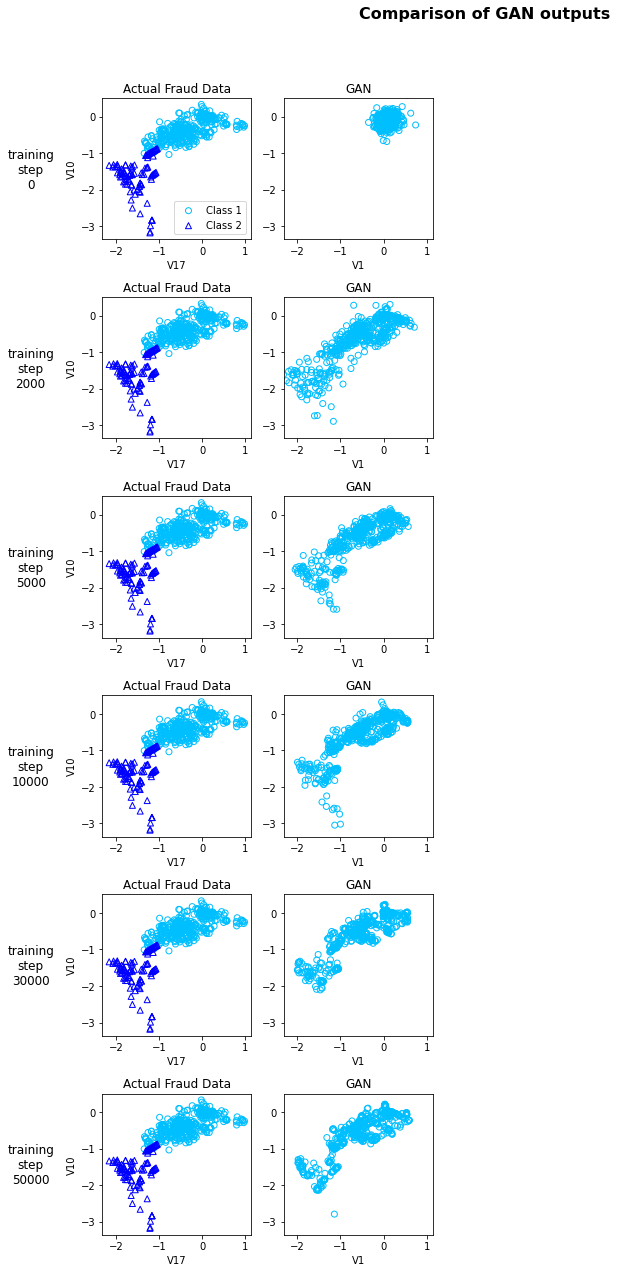

In [19]:
# Setup parameters visualization parameters
seed = 17
test_size = 492 # number of fraud cases
noise_dim = 32

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=train_sample, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real, columns=data_cols+label_cols)
labels = fraud_w_classes['Class']

model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']
class_labels = ['Class 1','Class 2']

col1, col2 = 'V17', 'V10'

base_dir = 'cache/'

#Actual fraud data visualization
model_steps = [ 0, 2000, 5000,10000,30000,50000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*3))

for model_step_ix, model_step in enumerate(model_steps):        
    axarr[model_step_ix] = plt.subplot(rows, columns, model_step_ix*columns + 1)
    
    for group, color, marker, label in zip(real_samples.groupby('Class_1'), colors, markers, class_labels ):
        plt.scatter( group[1][[col1]], group[1][[col2]], 
                         label=label, marker=marker, edgecolors=color, facecolors='none' )
    
    plt.title('Actual Fraud Data')
    plt.ylabel(col2) # Only add y label to left plot
    plt.xlabel(col1)
    xlims, ylims = axarr[model_step_ix].get_xlim(), axarr[model_step_ix].get_ylim()
    
    if model_step_ix == 0: 
        legend = plt.legend()
        legend.get_frame().set_facecolor('white')
    
    for i, model_name in enumerate( model_names[:] ):

        [model_name, with_class, generator_model] = models[model_name]

        generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')

        ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )

        if with_class:
            g_z = generator_model.predict([z, labels])
            gen_samples = pd.DataFrame(g_z, columns=data_cols+label_cols)
            for group, color, marker, label in zip( gen_samples.groupby('Class_1'), colors, markers, class_labels ):
                plt.scatter( group[1][[col1]], group[1][[col2]], 
                                 label=label, marker=marker, edgecolors=color, facecolors='none' )
        else:
            g_z = generator_model.predict(z)
            gen_samples = pd.DataFrame(g_z, columns=data_cols+['label'])
            gen_samples.to_csv('Generated_sample.csv')
            plt.scatter( gen_samples[[col1]], gen_samples[[col2]], 
                             label=class_labels[0], marker=markers[0], edgecolors=colors[0], facecolors='none' )
        plt.title(model_name)   
        plt.xlabel(data_cols[0])
        ax.set_xlim(xlims), ax.set_ylim(ylims)

plt.suptitle('Comparison of GAN outputs', size=16, fontweight='bold')
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for traning steps
vpositions = np.array([ i._position.bounds[1] for i in axarr ])
vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
for model_step_ix, model_step in enumerate( model_steps ):
    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)

plt.savefig('Comparison_of_WGAN_GP_outputs.png')
